# Todo:
Make c version of mathematica code. The mathematica version takes too long to run for large values.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import mpmath as mp
mp.mp.dps = 100 #higher precision
from scipy.optimize import curve_fit
import scipy.integrate as integrate

In [2]:
#Torus with M=N
Ising_exact_6 = [2,0,72,144,1620,6048,35148,159840,804078,3846576,17569080,7.17893280000*10**7,2.604349860000*10**8,8.08871328000*10**8,2.122173684000*10**9,4.616013408000*10**9,8.196905106000*10**9,1.1674988208000*10**10,1.3172279424000*10**10,1.1674988208000*10**10,8.196905106000*10**9,4.616013408000*10**9,2.122173684000*10**9,8.08871328000*10**8,2.604349860000*10**8,7.17893280000*10**7,17569080,3846576,804078,159840,35148,6048,1620,144,72,0,2]
Ising_exact_8 = [2, 0, 128, 256, 4672, 17920, 145408, 712960, 4274576, 22128384, 118551552, 610683392, 3150447680, 16043381504, 80748258688, 396915938304, 1887270677624, 8582140066816, 36967268348032, 149536933509376, 564033837424064, 1971511029384704, 6350698012553216, 18752030727310592, 50483110303426544, 123229776338119424, 271209458049836032, 535138987032308224, 941564975390477248, 1469940812209435392, 2027486077172296064, 2462494093546483712, 2627978003957146636, 2462494093546483712, 2027486077172296064, 1469940812209435392, 941564975390477248, 535138987032308224, 271209458049836032, 123229776338119424, 50483110303426544, 18752030727310592, 6350698012553216, 1971511029384704, 564033837424064, 149536933509376, 36967268348032, 8582140066816, 1887270677624, 396915938304, 80748258688, 16043381504, 3150447680, 610683392, 118551552, 22128384, 4274576, 712960, 145408, 17920, 4672, 256, 128, 0, 2]
Ising_exact_10 = [2,0,200,400,10900,42400,470800,2446000,18360550,104898400,661690020,3795698800,22034852500,123245870800,683159390400,3718754445040,20039066440650,106869414763600,565342738635100,2965410781244400,15405584913262690,79058880139235600,399395153508928800,1978268816096841200,9567275173644469900,44993732156949482640,204996272846374451700,901771726321871878400,3818447262814345815750,15521505438601441344400,60416992231869201757680,224675372902253123649600,796449241264723817527000,2685472762835853806911600,8594070000931984902273800,26045903665842111978911360,74589262820285320332481650,201386616277247037998656800,511462591776216629495232000,1219084512707365081484500800,2720830165558895878333744420,5673351930485549580077962400,11027927457666363037491421800,19940841900643803487283520000,33474678002148243364888022800,52072075580116657291967501760,74934674051996125381350068000,99614760763279598546786182400,122185044739938936480476461300,138162176231126017850918100800,143947977631559776839143485352,138162176231126017850918100800,122185044739938936480476461300,99614760763279598546786182400,74934674051996125381350068000,52072075580116657291967501760,33474678002148243364888022800,19940841900643803487283520000,11027927457666363037491421800,5673351930485549580077962400,2720830165558895878333744420,1219084512707365081484500800,511462591776216629495232000,201386616277247037998656800,74589262820285320332481650,26045903665842111978911360,8594070000931984902273800,2685472762835853806911600,796449241264723817527000,224675372902253123649600,60416992231869201757680,15521505438601441344400,3818447262814345815750,901771726321871878400,204996272846374451700,44993732156949482640,9567275173644469900,1978268816096841200,399395153508928800,79058880139235600,15405584913262690,2965410781244400,565342738635100,106869414763600,20039066440650,3718754445040,683159390400,123245870800,22034852500,3795698800,661690020,104898400,18360550,2446000,470800,42400,10900,400,200,0,2]
Ising_exact_12 = [2,0,288,576,22032,86400,1275648,6880320,64317384,395488128,2949331680,18651672000,123964321224,770775228864,4798383147936,28938981560064,172503730568772,1008640019981376,5820309384293696,33120479775904128,186313822096005648,1036962211962357312,5718520949138589024,31277933805334523904,169828130252855961588,915820852329448947072,4905496219757979336480,26089454601915892381888,137656846538126454225888,719688103298421775161984,3722437010959614524642112,19014048172175030120920896,95733589981444536311873550,474204075690495133278831744,2306570497167783562776326016,10997617712708472287402160000,51314715378683275498711861624,233954599922393678682192365760,1040768214984436466335105699488,4511710578982050069047146323264,19035453904672124530137376413864,78076425542551833029609993989824,310980555484646953473060784279776,1201545407822961610119890632426560,4498699309837831195465209878086920,16305128403803874414355551010386048,57148329854502105418463750064291456,193497320131729168803519782854689408,632244926623669527669796089257051178,1991487796960320506830989662349153984,6040744927544732263540259843803453632,17626190391774937826562932653481092992,49421108865789476266304932561978189632,133008899775414978009150962053936861248,343233260274642776423044999381745540704,848328560069292909415191825635331588480,2006001505512588223447274498778681601356,4533354681005269028328329527886869035264,9780535726608758413410435387169052826912,20123333678408940896043915105641953972416,39443962326972347439241897903533921881040,73580955474494357395717324100259652947072,130506053702183159608850961538059421392576,219872450395487244192621084566326496208320,351562568353565614375651737292305690287490,533051030372644982504069367210238695510528,765846725085278077080576514391055871987008,1041905164033556031329257118226583644969984,1341441328791854484363256756859682999248040,1633643617936840771158370859050698094793664,1881110487123478573747022553523701136666272,2047475226835357215238037151483385519268928,2106178495360135846969626203312181960643744,2047475226835357215238037151483385519268928,1881110487123478573747022553523701136666272,1633643617936840771158370859050698094793664,1341441328791854484363256756859682999248040,1041905164033556031329257118226583644969984,765846725085278077080576514391055871987008,533051030372644982504069367210238695510528,351562568353565614375651737292305690287490,219872450395487244192621084566326496208320,130506053702183159608850961538059421392576,73580955474494357395717324100259652947072,39443962326972347439241897903533921881040,20123333678408940896043915105641953972416,9780535726608758413410435387169052826912,4533354681005269028328329527886869035264,2006001505512588223447274498778681601356,848328560069292909415191825635331588480,343233260274642776423044999381745540704,133008899775414978009150962053936861248,49421108865789476266304932561978189632,17626190391774937826562932653481092992,6040744927544732263540259843803453632,1991487796960320506830989662349153984,632244926623669527669796089257051178,193497320131729168803519782854689408,57148329854502105418463750064291456,16305128403803874414355551010386048,4498699309837831195465209878086920,1201545407822961610119890632426560,310980555484646953473060784279776,78076425542551833029609993989824,19035453904672124530137376413864,4511710578982050069047146323264,1040768214984436466335105699488,233954599922393678682192365760,51314715378683275498711861624,10997617712708472287402160000,2306570497167783562776326016,474204075690495133278831744,95733589981444536311873550,19014048172175030120920896,3722437010959614524642112,719688103298421775161984,137656846538126454225888,26089454601915892381888,4905496219757979336480,915820852329448947072,169828130252855961588,31277933805334523904,5718520949138589024,1036962211962357312,186313822096005648,33120479775904128,5820309384293696,1008640019981376,172503730568772,28938981560064,4798383147936,770775228864,123964321224,18651672000,2949331680,395488128,64317384,6880320,1275648,86400,22032,576,288,0,2]
Ising_exact_14 = [2,0,392,784,40180,158368,3023888,16723504,192665942,1250465888,10995984944,75231636480,571582372620,3898433392448,27229379626988,180956761914096,1197010992967650,7704716880129360,48971996787307776,305570960031577632,1880991103417842360,11412474512728396912,68381885351500821100,404807746368503084656,2370161550158459621956,13735106540352606608416,78845172013565628642720,448667389961354782483888,2532793454541960597169378,14193670989187424489367312,79009605134778202639538476,437106296843633165736435840,2404356515539476951743373720,13153312197753948730041615328,71571836686512246817245813496,387333384838435711856089434784,2084223355663586744424697137986,11146009357624220712678785566960,59201934485232095125532313014616,312073974897699284787965046724832,1631176963359561256246963631668448,8446009779888258188058677551714672,43279010755246599606200700117596888,219251538868112347192338365571607904,1097029417993437835030119714182293102,5416126740339839797050857550739746016,26360743361920642664589552227360669920,126371578859462924582150395118993301056,596225643878703460195238411867798820814,2766362743372334967280982938931064626144,12613398677672495313720512315287089134896,56478637881085055690877354967675110228176,248190270634916038054203683157624472075028,1069708131293694997287158745327567372622112,4519258060135575332904024885164959169379416,18704195883773886880797202853244059391873168,75794065966226145793789610066172222848230738,300547802033716925405200327340728319460252992,1165559092754430047684567808627562002366666200,4418335986804284883601963559157399019563840608,16362451940274788936179957749784097824694033032,59164913513418390401268344116383856512789891552,208769128703386684493125833641091200201560553268,718477465087736725581861546310974208710894583344,2410248985999286357277422135326929898294523414046,7877128309266759093739479595649784178145098943376,25065988210369023585816765287764557661260947042488,77618385696110642113375289671583581291630512658656,233753226794830653565088573792879345643873613296788,684246795919106156208711822879214340902731118845040,1945708253153375794510765887199059261489753218683756,5371542922238794651861951217123324127855409030609072,14388733232212172165679367357041721387937413985744362,37376064311693141398450505042939722542660795620435904,94092986827347394579770203789824044721039381983962200,229434680815155496293770782151032850654794899117479616,541558229641729939666294759890764989141842895716924794,1236695882755618362427844474848199659215713893699376368,2730621386515029445355449577537099064051222777171586284,5826294526934374696245975112918554323946292443095870896,12006333435029729162930208247389944637811626387289405858,23882173842982087807571031385290082070430370896946544992,45829583488225767764145889549440101770495483475683685072,84799868924065003474315535622452958045345506158640275072,151215641040844118872919613659395005188138825101898844258,259736491258569470227085016444086101442161451825595621264,429531319350448640958338911365151467892522252667934913668,683569538319520455788556166856821800572545909345265511408,1046423619436303122081987664983758973822727645534916287990,1540252721416460591404969319275290201452021770749759155840,2179071518500671785763896190723604407645273968016782273320,2962070009840527367436788792797758184942102093982172003424,3867476391861439976175926020032742572203934220161443274742,4848959977491823015219098182090031786344247856748789615440,5836532934037700997204813961633858540405945876172787043788,6743123493685912800111524765212801883295534340630734634320,7476525301794080420261803148181755242048445180802172468222,7954676723544432163227647729818368759244999169420938160640,8120822860203334638164064407354717344510594688049366834064,7954676723544432163227647729818368759244999169420938160640,7476525301794080420261803148181755242048445180802172468222,6743123493685912800111524765212801883295534340630734634320,5836532934037700997204813961633858540405945876172787043788,4848959977491823015219098182090031786344247856748789615440,3867476391861439976175926020032742572203934220161443274742,2962070009840527367436788792797758184942102093982172003424,2179071518500671785763896190723604407645273968016782273320,1540252721416460591404969319275290201452021770749759155840,1046423619436303122081987664983758973822727645534916287990,683569538319520455788556166856821800572545909345265511408,429531319350448640958338911365151467892522252667934913668,259736491258569470227085016444086101442161451825595621264,151215641040844118872919613659395005188138825101898844258,84799868924065003474315535622452958045345506158640275072,45829583488225767764145889549440101770495483475683685072,23882173842982087807571031385290082070430370896946544992,12006333435029729162930208247389944637811626387289405858,5826294526934374696245975112918554323946292443095870896,2730621386515029445355449577537099064051222777171586284,1236695882755618362427844474848199659215713893699376368,541558229641729939666294759890764989141842895716924794,229434680815155496293770782151032850654794899117479616,94092986827347394579770203789824044721039381983962200,37376064311693141398450505042939722542660795620435904,14388733232212172165679367357041721387937413985744362,5371542922238794651861951217123324127855409030609072,1945708253153375794510765887199059261489753218683756,684246795919106156208711822879214340902731118845040,233753226794830653565088573792879345643873613296788,77618385696110642113375289671583581291630512658656,25065988210369023585816765287764557661260947042488,7877128309266759093739479595649784178145098943376,2410248985999286357277422135326929898294523414046,718477465087736725581861546310974208710894583344,208769128703386684493125833641091200201560553268,59164913513418390401268344116383856512789891552,16362451940274788936179957749784097824694033032,4418335986804284883601963559157399019563840608,1165559092754430047684567808627562002366666200,300547802033716925405200327340728319460252992,75794065966226145793789610066172222848230738,18704195883773886880797202853244059391873168,4519258060135575332904024885164959169379416,1069708131293694997287158745327567372622112,248190270634916038054203683157624472075028,56478637881085055690877354967675110228176,12613398677672495313720512315287089134896,2766362743372334967280982938931064626144,596225643878703460195238411867798820814,126371578859462924582150395118993301056,26360743361920642664589552227360669920,5416126740339839797050857550739746016,1097029417993437835030119714182293102,219251538868112347192338365571607904,43279010755246599606200700117596888,8446009779888258188058677551714672,1631176963359561256246963631668448,312073974897699284787965046724832,59201934485232095125532313014616,11146009357624220712678785566960,2084223355663586744424697137986,387333384838435711856089434784,71571836686512246817245813496,13153312197753948730041615328,2404356515539476951743373720,437106296843633165736435840,79009605134778202639538476,14193670989187424489367312,2532793454541960597169378,448667389961354782483888,78845172013565628642720,13735106540352606608416,2370161550158459621956,404807746368503084656,68381885351500821100,11412474512728396912,1880991103417842360,305570960031577632,48971996787307776,7704716880129360,1197010992967650,180956761914096,27229379626988,3898433392448,571582372620,75231636480,10995984944,1250465888,192665942,16723504,3023888,158368,40180,784,392,0,2]
Ising_exact_16 = [2,0,512,1024,67840,268288,6463488,36373504,510137472,3446274048,35564942848,259061632000,2244141041664,16555966785536,129353975240704,937335072977920,6856355294895136,48235628829928448,336663139229853696,2294261810504153088,15434383264054751232,102040703104512185344,665639129468252817920,4280875542797188818944,27188723336480479383680,170576550866417544416256,1058099293205404951869440,6492777370200603508381696,39438260600991177128045312,237256593923183825340222464,1414395136265001554243053056,8359756300183901421163098112,49011935788511357573628263792,285168191470284969921686540288,1647371920960168202143395285504,9452945408089672661306152932352,53903158206162150596219622870272,305569850047714588260614649079808,1722749277543846718764428903958528,9662726116974562379028634249516032,53935451751667083062550139364135296,299676390194407037955035236077828096,1657720837114471217696413947307521536,9130492536572718976798063224032865280,50073382063579152660627165950277625856,273411053363349179707306059255389235200,1486100534202177918853661642638313940992,8038798726844520621272166542110506832896,43261051627011809808391738146420526278240,231519011798077888983820131371195880885248,1231557317034556510056654941774955447162880,6508420921057273407292469915111860313929728,34151542148048527600898845729355706680360960,177832479942801796818211975075604063301415936,918390139301760435247729717964668963355560448,4701205188632844368378278202736235170866964480,23840328332120507606315294371776768960997983616,119701237923672828228484869442694850509869652992,594757152627949500438253228055837273112794152960,2922916529049724472685360285423247548186579019776,14201039965134148049217301717187533988924329275136,68179255754858336308448322960037361763146746108928,323313409875478655871130865599358716403520327380480,1513750905724127680864391937454722826927500871041024,6994750993535906920078386786399142679909967346987832,31886895219475135015217137712603264725251843623616512,143355858307825170626447873532299913363195229581822464,635372123863582722250770477987239056724978523528549376,2775242285650355265574495891529113863148730156325588224,11942291415009915372359613295617414588113816411064727552,50611022693649248445003261961946680672474758325847801856,211169875555038247275971159538038689461235123739771753472,867178294827835610801008509151742419545951425794628269184,3503769925023508403120725735528997519413498128047257466880,13924359929735476424780677247223781427608588509635614719488,54411330436773536486854224203486717090841132443398903749632,208996886885118695227557968476508485957256948411763671994368,788838902689248672311809407465625820845950106272120056932352,2924799423906101009005606167292032425543265862308267468761088,10649367068741493941851544135721598840698721457673571451708416,38065493718933807677916217423344746726820412663418362447868960,133529862632477647117542152094872939513936437290015596318866432,459539814201354980256591938941077567972729136481932044199680000,1551041621895425879670946447045440064396942635191402618548566016,5132586714830399462127565722593779715170161998706787870874265600,16646305574607524832360110062379809889799108194482629982474683392,52896091200415481077808263054475640799777931163303631527981269504,164629684337510408780557125126073718532919383918880612636716017664,501678584335017971657146332189008493427659929654268351497108154496,1496336242853672915087394263129460639321516856975709503036461775872,4366885712986614748128466327455781300834724869020643379029455837184,12465385759400084702828526767385203660656731933011532636453879592960,34792266235273238658728210963673811147489748655811596736003018688256,94919249470620132401892424114957652049078157973342614856387449715712,253029811226437653836054840711276564668131357932727139805139804446208,658849169465873592951805265828351587049089693811187001726006424055808,1675129204703547339585258123487257608473601087296279775243280716122640,4157285142172099044117981656853097962618694539195741315669396875972608,10067507849600437632788589646083547835262849305722580010612934547059200,23781360441034343801635024553234044213960132746210566740259382832489472,54778037214768907187599305098175168175473517063296432509183415968235776,122994186690644534531467048297221173861580704459615437789696158795810816,269107217855407881667578747965378516889886699966712983763182851705939968,573567151483064703584689328232418869328571773762911528057772936610669568,1190469688751670945552039955786107921862184899406365066325521685062743424,2405394194518238008445029950776176842805639782519256709695546308622055424,4729864568854242093338185211683870930070137412903984862059114981822348800,9048334363260241781255071330474860334103569267901277109712195685612469248,16834940761057617032938133191184579573348086284310922354703386345225928704,30454114540120460545619341416400614445642284852327165394261115163077961728,53548020858415947488653247823174571302108151848312310531668381854893922304,91491156760027963975439995667294398599873060732691798314102638756226925568,151856068018490751025673483829258371098747122397793477153631997290795895136,244785603925627041653848440262347761511059999670692845544970996544948018176,383114215754071420480885282782910226348446304557245666031668395088818284544,582039302049165902902619146470452040863098996451464220997280314909491951616,858136450349350410435300319386162234350921961887030457622029157406945372160,1227564890980311307816290600201183182891319664305777329480846984447772664832,1703439878291361270841339200732858208517123970015758469844155255790512095744,2292556349733832818718263437125676640945404972529179965232912238167758776320,2991902841160629907579563943504168202587894623972546074718849167667558969728,3785643523746843354336337963103259048280355362977818029032116426040495246336,4643384203499279651601422387414358506395251349314933822036983942781885440000,5520492050522546865795987941179953558918666693909940429597547788539843627008,6360961174362492149581273247826701835496985435929113972114560951070735383296,7102825628389146138640253566004117025301371078535056311902512707005495053312,7685515539516761019384544491492945293795302362942643313366077185086167008768,8057990692226778609548442197817524348676968450723097450786840538370165080064,8186145443716474251462714767435608722044199998728667180196474843673635359372,8057990692226778609548442197817524348676968450723097450786840538370165080064,7685515539516761019384544491492945293795302362942643313366077185086167008768,7102825628389146138640253566004117025301371078535056311902512707005495053312,6360961174362492149581273247826701835496985435929113972114560951070735383296,5520492050522546865795987941179953558918666693909940429597547788539843627008,4643384203499279651601422387414358506395251349314933822036983942781885440000,3785643523746843354336337963103259048280355362977818029032116426040495246336,2991902841160629907579563943504168202587894623972546074718849167667558969728,2292556349733832818718263437125676640945404972529179965232912238167758776320,1703439878291361270841339200732858208517123970015758469844155255790512095744,1227564890980311307816290600201183182891319664305777329480846984447772664832,858136450349350410435300319386162234350921961887030457622029157406945372160,582039302049165902902619146470452040863098996451464220997280314909491951616,383114215754071420480885282782910226348446304557245666031668395088818284544,244785603925627041653848440262347761511059999670692845544970996544948018176,151856068018490751025673483829258371098747122397793477153631997290795895136,91491156760027963975439995667294398599873060732691798314102638756226925568,53548020858415947488653247823174571302108151848312310531668381854893922304,30454114540120460545619341416400614445642284852327165394261115163077961728,16834940761057617032938133191184579573348086284310922354703386345225928704,9048334363260241781255071330474860334103569267901277109712195685612469248,4729864568854242093338185211683870930070137412903984862059114981822348800,2405394194518238008445029950776176842805639782519256709695546308622055424,1190469688751670945552039955786107921862184899406365066325521685062743424,573567151483064703584689328232418869328571773762911528057772936610669568,269107217855407881667578747965378516889886699966712983763182851705939968,122994186690644534531467048297221173861580704459615437789696158795810816,54778037214768907187599305098175168175473517063296432509183415968235776,23781360441034343801635024553234044213960132746210566740259382832489472,10067507849600437632788589646083547835262849305722580010612934547059200,4157285142172099044117981656853097962618694539195741315669396875972608,1675129204703547339585258123487257608473601087296279775243280716122640,658849169465873592951805265828351587049089693811187001726006424055808,253029811226437653836054840711276564668131357932727139805139804446208,94919249470620132401892424114957652049078157973342614856387449715712,34792266235273238658728210963673811147489748655811596736003018688256,12465385759400084702828526767385203660656731933011532636453879592960,4366885712986614748128466327455781300834724869020643379029455837184,1496336242853672915087394263129460639321516856975709503036461775872,501678584335017971657146332189008493427659929654268351497108154496,164629684337510408780557125126073718532919383918880612636716017664,52896091200415481077808263054475640799777931163303631527981269504,16646305574607524832360110062379809889799108194482629982474683392,5132586714830399462127565722593779715170161998706787870874265600,1551041621895425879670946447045440064396942635191402618548566016,459539814201354980256591938941077567972729136481932044199680000,133529862632477647117542152094872939513936437290015596318866432,38065493718933807677916217423344746726820412663418362447868960,10649367068741493941851544135721598840698721457673571451708416,2924799423906101009005606167292032425543265862308267468761088,788838902689248672311809407465625820845950106272120056932352,208996886885118695227557968476508485957256948411763671994368,54411330436773536486854224203486717090841132443398903749632,13924359929735476424780677247223781427608588509635614719488,3503769925023508403120725735528997519413498128047257466880,867178294827835610801008509151742419545951425794628269184,211169875555038247275971159538038689461235123739771753472,50611022693649248445003261961946680672474758325847801856,11942291415009915372359613295617414588113816411064727552,2775242285650355265574495891529113863148730156325588224,635372123863582722250770477987239056724978523528549376,143355858307825170626447873532299913363195229581822464,31886895219475135015217137712603264725251843623616512,6994750993535906920078386786399142679909967346987832,1513750905724127680864391937454722826927500871041024,323313409875478655871130865599358716403520327380480,68179255754858336308448322960037361763146746108928,14201039965134148049217301717187533988924329275136,2922916529049724472685360285423247548186579019776,594757152627949500438253228055837273112794152960,119701237923672828228484869442694850509869652992,23840328332120507606315294371776768960997983616,4701205188632844368378278202736235170866964480,918390139301760435247729717964668963355560448,177832479942801796818211975075604063301415936,34151542148048527600898845729355706680360960,6508420921057273407292469915111860313929728,1231557317034556510056654941774955447162880,231519011798077888983820131371195880885248,43261051627011809808391738146420526278240,8038798726844520621272166542110506832896,1486100534202177918853661642638313940992,273411053363349179707306059255389235200,50073382063579152660627165950277625856,9130492536572718976798063224032865280,1657720837114471217696413947307521536,299676390194407037955035236077828096,53935451751667083062550139364135296,9662726116974562379028634249516032,1722749277543846718764428903958528,305569850047714588260614649079808,53903158206162150596219622870272,9452945408089672661306152932352,1647371920960168202143395285504,285168191470284969921686540288,49011935788511357573628263792,8359756300183901421163098112,1414395136265001554243053056,237256593923183825340222464,39438260600991177128045312,6492777370200603508381696,1058099293205404951869440,170576550866417544416256,27188723336480479383680,4280875542797188818944,665639129468252817920,102040703104512185344,15434383264054751232,2294261810504153088,336663139229853696,48235628829928448,6856355294895136,937335072977920,129353975240704,16555966785536,2244141041664,259061632000,35564942848,3446274048,510137472,36373504,6463488,268288,67840,1024,512,0,2]
Ising_exact_18 = [2,0,648,1296,107892,427680,12726288,72517680,1222754454,8513283168,102494194992,784764910080,7726626076428,60884076223296,530561746539648,4147578482642496,33429235727094426,254910525538203648,1945911138772258764,14390989820056880064,105393227268683058264,755650780132152137040,5348550645918806164992,37244118144477372953760,255981925307507170671612,1735374889253178765734256,11621073460453247768726772,76886185037745370729140432,502985821340308098727703916,3254972595329887840052511552,20848419431650493317148052672,132228121520832828340685562288,830810666019304275426025171200,5173532603816106728092948864992,31941498691623099156258015898812,195600794816480647107696543305568,1188478849564071560260925769438090,7167515593990837641420285668805984,42918803924770670848838369713538424,255251655483108293119840370808691392,1508229674451600640090069647442967460,8856792425343643064267935101088094784,51704009258458209213029900884904199312,300148483277180499135138707697926566560,1733142597672136873769016407131672394262,9957192526861732308838356340150838037552,56932168480308771382700605570878051354360,324044706406648150073996088420787355363904,1836452495408182403919297683773677296012694,10365123778758096344766900786219461133822000,58273499524690811879605833523473681932532624,326391257000856297777717398543421019103260656,1821506892019722460210858513328825366545685538,10129433267236108714585589489749433448467920416,56133222787294432516090893269353023792300736416,309980088153709956498432098537600071781250515664,1705706638727183821473454977115349265849262812492,9351653875877873301802854186564222879068693042688,51076656892454217280570026628010204165193627200664,277858446498943240007704952724794201285432972850672,1505190355948385674084674151838265216686008859658900,8117272414768427162073056419377418103139210493486944,43566327714382925466536320389509161536201963055309536,232634931654756904339495498237242341529289255195694928,1235479236137745835075059656061076149054112246135199910,6523503695145305503831964533028870239449012398476767744,34233952538529216810427442044226009977190389212694211292,178487991989073629442290444950438318408382221685134837392,924236543855003390659699582464316531594649891908438042104,4751474397898214827615478238909491681646482988053088679536,24243617180249955699658387438807485818668638062083844841024,122729033401144049303590241087219791932214546777614544534608,616226176504287408671306583062023593754680113970379970211342,3067913948214150488277143546294834206337084461396077895918416,15140106903696812933183610743850018435244654578081069335020080,74041488761108941906118211250344982059616828872050538593095872,358727288082527515348425433470529527161200070874884279704308444,1721408838449841566286789729983476147591746760592288760593072784,8179476804606201576701367597243841432729831904846299391988567888,38475503744281008616550281305674963909963854209043840695044976288,179126262250423737455962091760463607386510511249725346216765121900,825186822076634454446108125726948914041047411837592940994389018288,3760693409499384757508040538385607429063118892275769716674004277676,16951690534460872648052829659201946269105729027666684579742464471664,75560750930612487262479847561769516062948384216447141158733958611806,332987537944338346469335562070668753710198920476672434848008072001552,1450506719143770530916568873997118896886292578671974920448144717943736,6244305766350408473836533842999715573200540961643962293354268105869904,26560400150229356526995231141451214266153834735540112868902513174184322,111605363002836899753987337498408926391997862600222479055771303419845264,463180080180622969608247162830957475031892605727162471793289980641102252,1898207335189604931982334977145699361628284398718878705356171719554847984,7680351688789517038582671391992564314738551203819591853287658222821819516,30674463876155470600887343313104465949257289924031852374775576912404075136,120905459427600850671570511245855332821588829145947745797586522037581237336,470221391768165783441107652678061682093842951378855916179472643103118389360,1804100206675284078126801155931551809480616906146997480411868702901647933270,6827075814863411007106017988829390353472285526952728855399145616318476499328,25476412725633255429211887550485512594998234325687360197572509369291642316024,93731302969753478074972145663104937557781084409566862617571460590736303714560,339927928605528335494576260489921703794414675598933565750155636951854499124418,1214947378324832390415782682882976370862681024846628929629551526965817208963216,4278669492046991044586451278047315294854562950506035796735790095673508119884904,14844053040184428420402644792779673883905993041797641945175790814807992019679744,50722444763555392320794830195260813183018799489266768508076154973793326208755884,170672216108103546467549502130396854430498699479576347999506434433685057782312848,565393882069198603799647196830969114260156057019598257771342777519214926129505652,1843636454237578512037234087426412482343965126567049648512633395463323773156828592,5916233152823726008453803994391566107059595762961777661222966520046076672074929486,18679731780612820435261442347356386090207940056072659109581775218300583865591043248,58017706846413378562959475611108635296788068617593701542806767358209238771205036872,177224570595756271547481175998106729738736575078914869777855314366557509471262142896,532315771694108449777742172866842717160120465612553385690657986157443692499914176194,1571828135417800198414477635638257421223832987468230983000594261338803834950840713488,4561830512916696692776408485995816392729556193527070855882680806258912046357822824356,13010063257459510638394543784445724043984113699495304421515992132426366601913336229200,36453015578967364143896758185737458991330788726619999841565745305475469979202179907868,100324905318015374255472786389950482801600007353923492264075786867662647219835371856992,271151886241782304662060666002837786789333863227863449758667897639699100941126935892752,719535659456213866039453684648719466378986571217738550118028936674461122346954054863856,1874282469747733281476091923993034857702945067318405128596912961736354359006132625715452,4791461601979632898664631346810308633037536676888553850706764738748429666806880018072128,12018728083663349911547110708559527018644527108336387402305597552211596131481372118554272,29574263318526139033449423633837377129907763860931333002826753932585464241496691337679536,71374300991799927190678114753160723859727500391569199004872842638893289755475153320214610,168907965196388256423965890438813508016635396469446097937567071600348754627232553819531888,391874367500807159533785624729235123269313674399018650061632226381788507724191817991106976,891128988611397965531641232789031872946246247662803255192311053452216581518338530776619920,1985821738154137211680790113591823208687965105625573940466569178041299442382603247402846606,4335662409889925683409051332600334066598882605466360403257654873289069595014454505496454448,9272489254246704045356206704112538963576600220604688509112813006762367312509879323727805276,19421098850475359011772087565357094913939701220328234870853477285177602539997628704976044336,39829014871291761162367000363699437067865093790416364795136986360589969585308963230470408542,79962486450001296580621229374444501755328744622679417467678873596192100534644252340059500048,157125858464624832349186234837724544630873228538548055933632580922445808219862590029782326320,302133248271011574357580451274804595375047600036850895318360291683612084122965096284130129328,568401161763724502794242376051880868881446904428435489817597769353464814450293317286073702838,1046006673238996043826501495932595051568233788447696775760418924508612484406904332964787329456,1882591106205971094772153065017486420655219971633955762314766487504268379313094222293537721832,3313143316323429997255638896340549729539309233681536436581474911473204224697259741530222540032,5700454783671243440748957581634486344694148370423098802281524867171048582504563754394063805712,9587119539754085957706388444697884760842964606467971998117270845919498167914921133926776222064,15758049676993899102174184514195321772106621714317247686377996104965140199613757643153620904576,25309349431269956041179117219601529506212222317046431265699067429394337803140651998435209219232,39714995673412404345005954166169041026560269082877148020494918908893315849661355532216885329020,60877437759192787332449758798821199680543886466441663934807429119802529862594529172893896147472,91142808687121901979941693960222079177600070642873499897316155073701901510314540592156027784020,133257382411704773070596121474706011419681800619912876795565214879841945407788307027408759620240,190241161764124950216205328987055680427555389237363810165880559780464792185923497840949700225586,265159123184389131100004732697273950533449834586086081319230338016359522933433174221786599387824,360782296455521171780862342894790228922271630187526670931829442339651562709398926264625151992584,479149889499830659959285148074789757619758627918825213487732029427449668580895436074190520484400,621068459090795822439117612506557883060211194320837560962412936950325649783019502353058472973790,785610666763190477386176745593484010752520048378702383254593702936318373865294211755732356776880,969698296950503302997025947759781133910327111540375445166855604339712637684241565352234280083164,1167864758048532737991503874837707236968139870205201151248846142570842897449712499433521654163056,1372284855575194502388420670541342261849090763117314768847944844820025428454141392767378318634632,1573130870065292861700540046047985575982098584907072446981970895145077399772035021150363431340416,1759265469155877633917241526425131046585961240107798281818106375786639718515378577890294699077128,1919221042950898442021134976932219415619818446208168138413389216411023142619577713912891393655280,2042353855670673310796462954485029200087210096728852963204894632337503072747926332775215875860574,2120014406306721493592585528160815916509462387191286965352392312032832847885270239608569524224576,2146555514586019048637362386445499783112356702945113110230205839554763198159019591316702421084952,2120014406306721493592585528160815916509462387191286965352392312032832847885270239608569524224576,2042353855670673310796462954485029200087210096728852963204894632337503072747926332775215875860574,1919221042950898442021134976932219415619818446208168138413389216411023142619577713912891393655280,1759265469155877633917241526425131046585961240107798281818106375786639718515378577890294699077128,1573130870065292861700540046047985575982098584907072446981970895145077399772035021150363431340416,1372284855575194502388420670541342261849090763117314768847944844820025428454141392767378318634632,1167864758048532737991503874837707236968139870205201151248846142570842897449712499433521654163056,969698296950503302997025947759781133910327111540375445166855604339712637684241565352234280083164,785610666763190477386176745593484010752520048378702383254593702936318373865294211755732356776880,621068459090795822439117612506557883060211194320837560962412936950325649783019502353058472973790,479149889499830659959285148074789757619758627918825213487732029427449668580895436074190520484400,360782296455521171780862342894790228922271630187526670931829442339651562709398926264625151992584,265159123184389131100004732697273950533449834586086081319230338016359522933433174221786599387824,190241161764124950216205328987055680427555389237363810165880559780464792185923497840949700225586,133257382411704773070596121474706011419681800619912876795565214879841945407788307027408759620240,91142808687121901979941693960222079177600070642873499897316155073701901510314540592156027784020,60877437759192787332449758798821199680543886466441663934807429119802529862594529172893896147472,39714995673412404345005954166169041026560269082877148020494918908893315849661355532216885329020,25309349431269956041179117219601529506212222317046431265699067429394337803140651998435209219232,15758049676993899102174184514195321772106621714317247686377996104965140199613757643153620904576,9587119539754085957706388444697884760842964606467971998117270845919498167914921133926776222064,5700454783671243440748957581634486344694148370423098802281524867171048582504563754394063805712,3313143316323429997255638896340549729539309233681536436581474911473204224697259741530222540032,1882591106205971094772153065017486420655219971633955762314766487504268379313094222293537721832,1046006673238996043826501495932595051568233788447696775760418924508612484406904332964787329456,568401161763724502794242376051880868881446904428435489817597769353464814450293317286073702838,302133248271011574357580451274804595375047600036850895318360291683612084122965096284130129328,157125858464624832349186234837724544630873228538548055933632580922445808219862590029782326320,79962486450001296580621229374444501755328744622679417467678873596192100534644252340059500048,39829014871291761162367000363699437067865093790416364795136986360589969585308963230470408542,19421098850475359011772087565357094913939701220328234870853477285177602539997628704976044336,9272489254246704045356206704112538963576600220604688509112813006762367312509879323727805276,4335662409889925683409051332600334066598882605466360403257654873289069595014454505496454448,1985821738154137211680790113591823208687965105625573940466569178041299442382603247402846606,891128988611397965531641232789031872946246247662803255192311053452216581518338530776619920,391874367500807159533785624729235123269313674399018650061632226381788507724191817991106976,168907965196388256423965890438813508016635396469446097937567071600348754627232553819531888,71374300991799927190678114753160723859727500391569199004872842638893289755475153320214610,29574263318526139033449423633837377129907763860931333002826753932585464241496691337679536,12018728083663349911547110708559527018644527108336387402305597552211596131481372118554272,4791461601979632898664631346810308633037536676888553850706764738748429666806880018072128,1874282469747733281476091923993034857702945067318405128596912961736354359006132625715452,719535659456213866039453684648719466378986571217738550118028936674461122346954054863856,271151886241782304662060666002837786789333863227863449758667897639699100941126935892752,100324905318015374255472786389950482801600007353923492264075786867662647219835371856992,36453015578967364143896758185737458991330788726619999841565745305475469979202179907868,13010063257459510638394543784445724043984113699495304421515992132426366601913336229200,4561830512916696692776408485995816392729556193527070855882680806258912046357822824356,1571828135417800198414477635638257421223832987468230983000594261338803834950840713488,532315771694108449777742172866842717160120465612553385690657986157443692499914176194,177224570595756271547481175998106729738736575078914869777855314366557509471262142896,58017706846413378562959475611108635296788068617593701542806767358209238771205036872,18679731780612820435261442347356386090207940056072659109581775218300583865591043248,5916233152823726008453803994391566107059595762961777661222966520046076672074929486,1843636454237578512037234087426412482343965126567049648512633395463323773156828592,565393882069198603799647196830969114260156057019598257771342777519214926129505652,170672216108103546467549502130396854430498699479576347999506434433685057782312848,50722444763555392320794830195260813183018799489266768508076154973793326208755884,14844053040184428420402644792779673883905993041797641945175790814807992019679744,4278669492046991044586451278047315294854562950506035796735790095673508119884904,1214947378324832390415782682882976370862681024846628929629551526965817208963216,339927928605528335494576260489921703794414675598933565750155636951854499124418,93731302969753478074972145663104937557781084409566862617571460590736303714560,25476412725633255429211887550485512594998234325687360197572509369291642316024,6827075814863411007106017988829390353472285526952728855399145616318476499328,1804100206675284078126801155931551809480616906146997480411868702901647933270,470221391768165783441107652678061682093842951378855916179472643103118389360,120905459427600850671570511245855332821588829145947745797586522037581237336,30674463876155470600887343313104465949257289924031852374775576912404075136,7680351688789517038582671391992564314738551203819591853287658222821819516,1898207335189604931982334977145699361628284398718878705356171719554847984,463180080180622969608247162830957475031892605727162471793289980641102252,111605363002836899753987337498408926391997862600222479055771303419845264,26560400150229356526995231141451214266153834735540112868902513174184322,6244305766350408473836533842999715573200540961643962293354268105869904,1450506719143770530916568873997118896886292578671974920448144717943736,332987537944338346469335562070668753710198920476672434848008072001552,75560750930612487262479847561769516062948384216447141158733958611806,16951690534460872648052829659201946269105729027666684579742464471664,3760693409499384757508040538385607429063118892275769716674004277676,825186822076634454446108125726948914041047411837592940994389018288,179126262250423737455962091760463607386510511249725346216765121900,38475503744281008616550281305674963909963854209043840695044976288,8179476804606201576701367597243841432729831904846299391988567888,1721408838449841566286789729983476147591746760592288760593072784,358727288082527515348425433470529527161200070874884279704308444,74041488761108941906118211250344982059616828872050538593095872,15140106903696812933183610743850018435244654578081069335020080,3067913948214150488277143546294834206337084461396077895918416,616226176504287408671306583062023593754680113970379970211342,122729033401144049303590241087219791932214546777614544534608,24243617180249955699658387438807485818668638062083844841024,4751474397898214827615478238909491681646482988053088679536,924236543855003390659699582464316531594649891908438042104,178487991989073629442290444950438318408382221685134837392,34233952538529216810427442044226009977190389212694211292,6523503695145305503831964533028870239449012398476767744,1235479236137745835075059656061076149054112246135199910,232634931654756904339495498237242341529289255195694928,43566327714382925466536320389509161536201963055309536,8117272414768427162073056419377418103139210493486944,1505190355948385674084674151838265216686008859658900,277858446498943240007704952724794201285432972850672,51076656892454217280570026628010204165193627200664,9351653875877873301802854186564222879068693042688,1705706638727183821473454977115349265849262812492,309980088153709956498432098537600071781250515664,56133222787294432516090893269353023792300736416,10129433267236108714585589489749433448467920416,1821506892019722460210858513328825366545685538,326391257000856297777717398543421019103260656,58273499524690811879605833523473681932532624,10365123778758096344766900786219461133822000,1836452495408182403919297683773677296012694,324044706406648150073996088420787355363904,56932168480308771382700605570878051354360,9957192526861732308838356340150838037552,1733142597672136873769016407131672394262,300148483277180499135138707697926566560,51704009258458209213029900884904199312,8856792425343643064267935101088094784,1508229674451600640090069647442967460,255251655483108293119840370808691392,42918803924770670848838369713538424,7167515593990837641420285668805984,1188478849564071560260925769438090,195600794816480647107696543305568,31941498691623099156258015898812,5173532603816106728092948864992,830810666019304275426025171200,132228121520832828340685562288,20848419431650493317148052672,3254972595329887840052511552,502985821340308098727703916,76886185037745370729140432,11621073460453247768726772,1735374889253178765734256,255981925307507170671612,37244118144477372953760,5348550645918806164992,755650780132152137040,105393227268683058264,14390989820056880064,1945911138772258764,254910525538203648,33429235727094426,4147578482642496,530561746539648,60884076223296,7726626076428,784764910080,102494194992,8513283168,1222754454,72517680,12726288,427680,107892,1296,648,0,2]
Ising_exact_20 = [2,0,800,1600,163600,649600,23443200,134824000,2700592200,19241673600,268499419360,2139486001600,23857679736000,198639375209600,1925324990492800,16076873651475520,142336154998119700,1166645903634921600,9704960355469226400,77362298745918996800,614339806438655588680,4750495843186137601600,36341192407642384546400,272757937178132728934400,2021392217888041435281600,14752706195891550501506880,106317730879335407515752000,756154818318825462749968000,5314193497378372173224010000,36910368069870259809614632000,253548312118380202962315660000,1723155304687339891242379878400,11592114752795644619200209839350,77221739894040642876407543153600,509606603384779173108610678530400,3332769305674473331115393281259200,21607544793666827700082229166526400,138924487275106935295654336729697600,886060932378526603698707085305997600,5607770712391126118306507292906638400,35227660389547162044174041883060648620,219716895682484587569045617347887430400,1360954300770517322861026420142021576000,8374015358313099534388502352818002310400,51196429604341125087994465635856207161200,311073593367132806430773423330941361688960,1878895681989324269018294416609898272105600,11283757675356510564279114247506561746793600,67392139708576800049822856110440970609183300,400368254915773774018131261316599875292544000,2366427914713649037153481919291784877117410432,13918633572796904145540009880500063168277660800,81480596388624775920004450468432611002770850600,474841722978407622864148372121657480431689272000,2755253388207225260862587369296676025076084893600,15921026753241558246545426049760362740940996408000,91633423596428016829438900121372157143737212720800,525392260848019365387958558452482123309432918644800,3001445718239169774658596949780659810340752900050400,17086784145438411571569612910332283371516321823080000,96946937650964952875628776895129969054669839579850920,548285404121557367417224961883944504998283382638342400,3091192085490239144372728982245198790221850424342657600,17375282069765852000910388585692845688255160518181929600,97376708796182252564094404489952806592074575430721416650,544147332328663471757640374687225297291912639048425559040,3031978942223307154949617603043557701428850102997419085600,16845459499258281224249647421972776642525850853194120395200,93319754933132331244308445925446905502176298384164989506000,515434642919856052981160632176687388162751467526087421827200,2838223019916480027578709883727330234568924652943071305529920,15579185737534850872421172112895533309343244834022177595966400,85233485515220395965591211766415674131508056123774485648154500,464702871069119966251255747462075467620508755708805797153950400,2524433563711776055357473060040337601441414606241181599317675200,13661318479430590288496681407308054884272624661623491023877686144,73632911805025154785223186505528668982545338241220460985770390800,395191817844814050018390158886255851461435489337606251999243844800,2111558068616139753220283403222252806678140002939478477911969770400,11229424984473980087151454332460405541020916659574249797374088800000,59425190164402167380841385342595341213995540144747893125023375531890,312853656462203030939086036878297269516860390159127616956775405379200,1638208552366256013651884188411424846324201573004127984842050044132800,8530127513316126750944179624946129002729052764771191840807393641036800,44157374871687851987753873922390597725908866502018857356251522341536200,227204909725920579695791884079122138013883078383411374263848117266591040,1161734559645060710271343657110360628339971804325886346340198905516616800,5901761501963258284160361926705624246907484494042547495146020812269646400,29782125271906836976279912163659037463426364567531674690846563016348965600,149260768335677414979847966730505789146636769330904796460956683419794251200,742798765029064328849527698980351510973296825441509592679753385233447300000,3669902549818770493800473967402778600995617922101558052736192865331702353600,17997854976900578836114896053759750243578050191401065765636719296220236724200,87598628488047278541079174519580057734067415469723811534617546866736615472000,423071724496774148147934303965291402491576096603101636341148323652957097939200,2027228664843470663759554366947968959823508996412184249133202848320672002444800,9636012322407952349130663553911333426767611982887549064978515533221173656518700,45429020835629002850111673588661571096486061866268117102699287611209890363760000,212396771765888853681686809133900369159377600948034604695558997980269195266611200,984644338518150535725247428699988440051459096357192438953190977011469866463849600,4525508861435950393798556502314808430054196400591220742699256042012260382652874224,20618289647313395749221046787000207588380198051776254935015814926116472965673190400,93105757040570485263567783032001426759649956636978899940649095117252811811903467200,416659554482161589521993977717339167945787622727346871777604790285146790247113164800,1847608270153620370536037487635194451904393516920580448857598428705502455981398459100,8117186394107288145521867834517134020518469236298231683702657643900941082370909303360,35327420440662057561595134512561976257454335154306987969076006927420106918001865914400,152290616076181152981351732248153987685321891473276140956545368526251865018888348078400,650179711736887134491946190949754786069599908182043117081981043522756180613074227011200,2748761991265865718734565641632861905974948846626265433057415959892537214002432273976000,11506117577570254488331237855500836293648102763439824067659282453999978067752754455125600,47681835110559387449213874244451855936660678436485075591463943499692612173451751251787200,195593370842768489147563248588280029252005029815234431016540714290814290026480469158859750,794102947117272554827636052258597879074104106649421617337242735366312066220676854156787200,3190548912999942780942151385547899639416301968656627231913197768804958030241868514470309600,12684233921545766694170506101728351066232110802571960656453323744182877087179021981931429440,49890459372920857860928326924613679187141531574092498505380865152620340861770408697285625200,194119529672005563628817091760480998804878971913417120782126010518820947075591124429228502400,747073458783474810933320725259865850913339111433825360151661185744781514899658937461035320000,2843435899201376696759265785266444217995652967278059438460077923282553391375967648880470030400,10701709503821836168589804386344974925604371611615239114925861090276220832289861304759979456000,39823166126229510154092781516895614369115297098807760379589448985185945864438882627579509894400,146498931255571660565931032787027871961839283753279505224253198923872260550032129934937727180000,532711532039789277416143901485610883395989484540651030232483731571657926473907541722777813934400,1914482636817727598078246759533172846398743107380639862804611414424663750667424487051626624020200,6799155411035864332533009884756706417065612589161649040645720619121981351543679838736466254133568,23858602855851849019341738896353820556510394120430574514391621336810491911751968784314375697546400,82711070675869439041202912249447728678147514241046312535781426315555661790568837855419749058486400,283238805323506482357527382840782641658820588844030870087776957723320268682321081129769547793168200,957974648912255168386708796080994881412808934634964405709791540762134870359345657387626190105896000,3199697341623754838599964285443555926240758925515984199995369246995179630372382712746005626888977600,10552580539487799662156558696480479017874269950503127454572625859789750275507476684969008005545721600,34359308433890672199206514565458167201484235647228184545849434010762353811993498625361884829017541600,110435066516847563498047680293221787239865050784343340657591080225198968912373058814427940133974724800,350337898054250792845234277957437658870363799885976424218987401878726066425205784254462313331670892000,1096794587647182749791792364946923019716354338495113509644365418093404562293331132700612148483987253760,3388144135673860685499711378619608285207558034532074358173746992219028883324005058985959913835627018600,10326116894932029586853982015641544309251769122934305030513100075460915764459794373108073763748539368000,31044938509430950497423920019003507338602231098933324393509538429151802399996570068100558309148670497600,92058323199496400786894320953957364839326496678532891015859810808816361130285416317822733182167463180800,269211466771188129774993281899295844734120262221485274058178010456561437051589647197267976867165959782480,776286285096052167954915018885869823490055620729489679081970314621680634866980183378630747074182239592000,2206925415841334945725883634607128311485994398563877977891710349738185787871423307457653371297806725764000,6184864745378556581395876068572268548992853297767612572491335008610434791383905814196530367938505443824000,17083974288943566753526153365949022569208989466409296803857915949798082972803759203413688351169783746397250,46505363668270453994070866555896628654920700817676078697873885360514344895156685285363807400785911230897920,124741754736842567752877215733642103572310676788228817564412495799478041492583762489145563736286647839684800,329651099943360670702750796823230703705571739811579449448344646994512354801568705655243910993556078091030400,858163987921277728245648187637156200951579403039876867775551354773002579255113882755323031227295246752251600,2200383261962850396811931422537003579612358182814460106226804556765735252962406818399243300151376593241731200,5556200634931515370217695263041565915763589002605103408665097076139443352684094001128756826516546261263497408,13814919451103352940322031354890101526039812479943217128239817623638376250400340432234351703294048852496902400,33818087220368799401784059141670529174086849516566457599158952520707971014323931995174077581124141768233019200,81492844223206256813450066270073307373709027642978809303570703491322103626141859865171434081778094137817244800,193285516395742237388162650099032784967648845619445890888093948118155039852320148409476221999997785313525401600,451157692601782356416407537584467682344860025391661313487066147982994950027567108669950272458140490447956206080,1036207329146275490991869642765998565759468449617854734157895798913276404868102293182337780088334545023641848000,2341501523305966757770793237818547465745540412579500363433436574422428235507135121539110527448692090918158025600,5204898258149291561605573955373094616255474614881098349582118832089280453633299167303250546353483362974219771200,11379963996520219486627171414701815929915124906203171432799563528536783031879824165442204658115862446826272627200,24469300052095463197905033034474881615768649725547318081144656958549666260813361865273222242491403536516325829940,51736348584040771898593237512258858442859659756042083925768251384513220544783576218823791065743910022078206800000,107548795040283487637767012118194733359035497812847524442679568458095694594072614796115702830651570564139396641600,219782604616498715694661776665916614729880770534030052143772937637071155240130547150020906818236508385971431043200,441470847752947881337809746544682355715329780012403103722251605550254923725488504422749118116639479081504693275200,871515681439520267816050221878639079329732299334607875688502880856696210160018791174244237976475389715281788156800,1690662655719061907820773271091544008286747524965351812787302656190624722234745638493043363093952958531822174155200,3222493603821655863154633841740340403235052667712320647670705270090940916898001403785405588456699795036603389539200,6034287455751902739584326064886072319456905323259037532732533602330281826528280233732626823405875666301356313588600,11099540123292194805275039968503951391062714290853985804038196857289584064573505769856698316014531673325386909920000,20052848796213000175367912430574381548420647928746327094035948706996014270147104087888996177387081744822088136218880,35578463130981030321969210812015318753269895162342954672075653209824394895246196153694174466574170559276815944019200,61985074763503936656404527751506273033041756939284073058012506394637977509028544472916388010933557828035916208327200,106029257866649198963810771700536195345836292976388825002471825141023534796019691298739362921154079572950707302297600,178054848140275458176810425855481370987361703397092398810497792480116410860213766544743463128520455124959305273680000,293510276092041032595989715763801199711483295723065553965534230340071743553748195777405973565745567307808504337251328,474883778524884165357096570054853289388180990455124563066611295106133646820016790792316240387584526264254917830224000,754050059766847759514871065728601167617195702035362972328562201530313889768349265453708332865407828469537797114560000,1174944681693030174525698389703053479723005976555016794623009417677858704289985992431792891353537266828443080933936000,1796370726439270780719100358624622490550105287903593382757737498321223155414852171142978253520283621854506607180352000,2694598923986383751394191236321959137640435825381676617744701554255221410998106860241151941837690017092097583980403120,3965259983220336729638021673195426505522196723405327677901176669340235646313328318527882313406627234110776571211907200,5723871126249591084862143340881159926371944548241556845772994158620672198394822069348049430391082030893508784387185600,8104225476919171474831187751415920519622137728297606395699509949349190090798120647039261337497724211951527468951446400,11253850628302138790175340311321831160248465694218024338789216284718078684348379059767990726892874136034935058468124800,15325861609648263573530190235385479119575429362035885749632232621189120973701996783926317235852311914144487616596922240,20466834399421465638592199293639985574916428387602431593047564561704870951801244213395950961262348206057415641666430400,26800825402648968394170927246135052431407094824811834966756956228698734870038761320574692715466852400831202749449424000,34410336665910881635777600386147792308829791319762286187579532299064269507487217215215968161766190661247016790614944400,43315802759109601016929668519687133420234457367498435935999569714302010761996423983240051363782627212594682923215571200,53455929199900443575771693514982921129065902923259037025239180282474585998468491343944701118551400602104388015870583040,64671782329159864049825259727153965317481284858289772989897397240938940542284247516147459389302125233936170396203001600,76697745121548078647840263443690431171634897786624622632628675748037922015961600406524540205251125175641269788393259300,89162170586299312538819708033078538925638061338113192109806474753268894030162288708648357317670439077443127364924947200,101599714884778521329697085586317620276516620614131528374800705775169178239572806182377283456366265087935897683209646400,113475954679536972638736078969086511500499523411505593128593442572894520534353304721751524934890803677388988050073153920,124223149440334751824950834318470103835522235604655792969379764571929306776585579270326710370350784346407451545262631200,133284171231783049348598180428902135455271651029222979558171645063426190884735574737906598973340465661784833490443097600,140160029156566318841173970558755060619802735065738524442485908006598966242565173732489083180459917017559719048325222400,144455397341229483354207434023904365925944625084470820385588003494727110795669627631594196808443235041015954440426684800,145916367657976914091291029266939624665706509760113262582394239627245146534733535045522041938093696201894688206008705944,144455397341229483354207434023904365925944625084470820385588003494727110795669627631594196808443235041015954440426684800,140160029156566318841173970558755060619802735065738524442485908006598966242565173732489083180459917017559719048325222400,133284171231783049348598180428902135455271651029222979558171645063426190884735574737906598973340465661784833490443097600,124223149440334751824950834318470103835522235604655792969379764571929306776585579270326710370350784346407451545262631200,113475954679536972638736078969086511500499523411505593128593442572894520534353304721751524934890803677388988050073153920,101599714884778521329697085586317620276516620614131528374800705775169178239572806182377283456366265087935897683209646400,89162170586299312538819708033078538925638061338113192109806474753268894030162288708648357317670439077443127364924947200,76697745121548078647840263443690431171634897786624622632628675748037922015961600406524540205251125175641269788393259300,64671782329159864049825259727153965317481284858289772989897397240938940542284247516147459389302125233936170396203001600,53455929199900443575771693514982921129065902923259037025239180282474585998468491343944701118551400602104388015870583040,43315802759109601016929668519687133420234457367498435935999569714302010761996423983240051363782627212594682923215571200,34410336665910881635777600386147792308829791319762286187579532299064269507487217215215968161766190661247016790614944400,26800825402648968394170927246135052431407094824811834966756956228698734870038761320574692715466852400831202749449424000,20466834399421465638592199293639985574916428387602431593047564561704870951801244213395950961262348206057415641666430400,15325861609648263573530190235385479119575429362035885749632232621189120973701996783926317235852311914144487616596922240,11253850628302138790175340311321831160248465694218024338789216284718078684348379059767990726892874136034935058468124800,8104225476919171474831187751415920519622137728297606395699509949349190090798120647039261337497724211951527468951446400,5723871126249591084862143340881159926371944548241556845772994158620672198394822069348049430391082030893508784387185600,3965259983220336729638021673195426505522196723405327677901176669340235646313328318527882313406627234110776571211907200,2694598923986383751394191236321959137640435825381676617744701554255221410998106860241151941837690017092097583980403120,1796370726439270780719100358624622490550105287903593382757737498321223155414852171142978253520283621854506607180352000,1174944681693030174525698389703053479723005976555016794623009417677858704289985992431792891353537266828443080933936000,754050059766847759514871065728601167617195702035362972328562201530313889768349265453708332865407828469537797114560000,474883778524884165357096570054853289388180990455124563066611295106133646820016790792316240387584526264254917830224000,293510276092041032595989715763801199711483295723065553965534230340071743553748195777405973565745567307808504337251328,178054848140275458176810425855481370987361703397092398810497792480116410860213766544743463128520455124959305273680000,106029257866649198963810771700536195345836292976388825002471825141023534796019691298739362921154079572950707302297600,61985074763503936656404527751506273033041756939284073058012506394637977509028544472916388010933557828035916208327200,35578463130981030321969210812015318753269895162342954672075653209824394895246196153694174466574170559276815944019200,20052848796213000175367912430574381548420647928746327094035948706996014270147104087888996177387081744822088136218880,11099540123292194805275039968503951391062714290853985804038196857289584064573505769856698316014531673325386909920000,6034287455751902739584326064886072319456905323259037532732533602330281826528280233732626823405875666301356313588600,3222493603821655863154633841740340403235052667712320647670705270090940916898001403785405588456699795036603389539200,1690662655719061907820773271091544008286747524965351812787302656190624722234745638493043363093952958531822174155200,871515681439520267816050221878639079329732299334607875688502880856696210160018791174244237976475389715281788156800,441470847752947881337809746544682355715329780012403103722251605550254923725488504422749118116639479081504693275200,219782604616498715694661776665916614729880770534030052143772937637071155240130547150020906818236508385971431043200,107548795040283487637767012118194733359035497812847524442679568458095694594072614796115702830651570564139396641600,51736348584040771898593237512258858442859659756042083925768251384513220544783576218823791065743910022078206800000,24469300052095463197905033034474881615768649725547318081144656958549666260813361865273222242491403536516325829940,11379963996520219486627171414701815929915124906203171432799563528536783031879824165442204658115862446826272627200,5204898258149291561605573955373094616255474614881098349582118832089280453633299167303250546353483362974219771200,2341501523305966757770793237818547465745540412579500363433436574422428235507135121539110527448692090918158025600,1036207329146275490991869642765998565759468449617854734157895798913276404868102293182337780088334545023641848000,451157692601782356416407537584467682344860025391661313487066147982994950027567108669950272458140490447956206080,193285516395742237388162650099032784967648845619445890888093948118155039852320148409476221999997785313525401600,81492844223206256813450066270073307373709027642978809303570703491322103626141859865171434081778094137817244800,33818087220368799401784059141670529174086849516566457599158952520707971014323931995174077581124141768233019200,13814919451103352940322031354890101526039812479943217128239817623638376250400340432234351703294048852496902400,5556200634931515370217695263041565915763589002605103408665097076139443352684094001128756826516546261263497408,2200383261962850396811931422537003579612358182814460106226804556765735252962406818399243300151376593241731200,858163987921277728245648187637156200951579403039876867775551354773002579255113882755323031227295246752251600,329651099943360670702750796823230703705571739811579449448344646994512354801568705655243910993556078091030400,124741754736842567752877215733642103572310676788228817564412495799478041492583762489145563736286647839684800,46505363668270453994070866555896628654920700817676078697873885360514344895156685285363807400785911230897920,17083974288943566753526153365949022569208989466409296803857915949798082972803759203413688351169783746397250,6184864745378556581395876068572268548992853297767612572491335008610434791383905814196530367938505443824000,2206925415841334945725883634607128311485994398563877977891710349738185787871423307457653371297806725764000,776286285096052167954915018885869823490055620729489679081970314621680634866980183378630747074182239592000,269211466771188129774993281899295844734120262221485274058178010456561437051589647197267976867165959782480,92058323199496400786894320953957364839326496678532891015859810808816361130285416317822733182167463180800,31044938509430950497423920019003507338602231098933324393509538429151802399996570068100558309148670497600,10326116894932029586853982015641544309251769122934305030513100075460915764459794373108073763748539368000,3388144135673860685499711378619608285207558034532074358173746992219028883324005058985959913835627018600,1096794587647182749791792364946923019716354338495113509644365418093404562293331132700612148483987253760,350337898054250792845234277957437658870363799885976424218987401878726066425205784254462313331670892000,110435066516847563498047680293221787239865050784343340657591080225198968912373058814427940133974724800,34359308433890672199206514565458167201484235647228184545849434010762353811993498625361884829017541600,10552580539487799662156558696480479017874269950503127454572625859789750275507476684969008005545721600,3199697341623754838599964285443555926240758925515984199995369246995179630372382712746005626888977600,957974648912255168386708796080994881412808934634964405709791540762134870359345657387626190105896000,283238805323506482357527382840782641658820588844030870087776957723320268682321081129769547793168200,82711070675869439041202912249447728678147514241046312535781426315555661790568837855419749058486400,23858602855851849019341738896353820556510394120430574514391621336810491911751968784314375697546400,6799155411035864332533009884756706417065612589161649040645720619121981351543679838736466254133568,1914482636817727598078246759533172846398743107380639862804611414424663750667424487051626624020200,532711532039789277416143901485610883395989484540651030232483731571657926473907541722777813934400,146498931255571660565931032787027871961839283753279505224253198923872260550032129934937727180000,39823166126229510154092781516895614369115297098807760379589448985185945864438882627579509894400,10701709503821836168589804386344974925604371611615239114925861090276220832289861304759979456000,2843435899201376696759265785266444217995652967278059438460077923282553391375967648880470030400,747073458783474810933320725259865850913339111433825360151661185744781514899658937461035320000,194119529672005563628817091760480998804878971913417120782126010518820947075591124429228502400,49890459372920857860928326924613679187141531574092498505380865152620340861770408697285625200,12684233921545766694170506101728351066232110802571960656453323744182877087179021981931429440,3190548912999942780942151385547899639416301968656627231913197768804958030241868514470309600,794102947117272554827636052258597879074104106649421617337242735366312066220676854156787200,195593370842768489147563248588280029252005029815234431016540714290814290026480469158859750,47681835110559387449213874244451855936660678436485075591463943499692612173451751251787200,11506117577570254488331237855500836293648102763439824067659282453999978067752754455125600,2748761991265865718734565641632861905974948846626265433057415959892537214002432273976000,650179711736887134491946190949754786069599908182043117081981043522756180613074227011200,152290616076181152981351732248153987685321891473276140956545368526251865018888348078400,35327420440662057561595134512561976257454335154306987969076006927420106918001865914400,8117186394107288145521867834517134020518469236298231683702657643900941082370909303360,1847608270153620370536037487635194451904393516920580448857598428705502455981398459100,416659554482161589521993977717339167945787622727346871777604790285146790247113164800,93105757040570485263567783032001426759649956636978899940649095117252811811903467200,20618289647313395749221046787000207588380198051776254935015814926116472965673190400,4525508861435950393798556502314808430054196400591220742699256042012260382652874224,984644338518150535725247428699988440051459096357192438953190977011469866463849600,212396771765888853681686809133900369159377600948034604695558997980269195266611200,45429020835629002850111673588661571096486061866268117102699287611209890363760000,9636012322407952349130663553911333426767611982887549064978515533221173656518700,2027228664843470663759554366947968959823508996412184249133202848320672002444800,423071724496774148147934303965291402491576096603101636341148323652957097939200,87598628488047278541079174519580057734067415469723811534617546866736615472000,17997854976900578836114896053759750243578050191401065765636719296220236724200,3669902549818770493800473967402778600995617922101558052736192865331702353600,742798765029064328849527698980351510973296825441509592679753385233447300000,149260768335677414979847966730505789146636769330904796460956683419794251200,29782125271906836976279912163659037463426364567531674690846563016348965600,5901761501963258284160361926705624246907484494042547495146020812269646400,1161734559645060710271343657110360628339971804325886346340198905516616800,227204909725920579695791884079122138013883078383411374263848117266591040,44157374871687851987753873922390597725908866502018857356251522341536200,8530127513316126750944179624946129002729052764771191840807393641036800,1638208552366256013651884188411424846324201573004127984842050044132800,312853656462203030939086036878297269516860390159127616956775405379200,59425190164402167380841385342595341213995540144747893125023375531890,11229424984473980087151454332460405541020916659574249797374088800000,2111558068616139753220283403222252806678140002939478477911969770400,395191817844814050018390158886255851461435489337606251999243844800,73632911805025154785223186505528668982545338241220460985770390800,13661318479430590288496681407308054884272624661623491023877686144,2524433563711776055357473060040337601441414606241181599317675200,464702871069119966251255747462075467620508755708805797153950400,85233485515220395965591211766415674131508056123774485648154500,15579185737534850872421172112895533309343244834022177595966400,2838223019916480027578709883727330234568924652943071305529920,515434642919856052981160632176687388162751467526087421827200,93319754933132331244308445925446905502176298384164989506000,16845459499258281224249647421972776642525850853194120395200,3031978942223307154949617603043557701428850102997419085600,544147332328663471757640374687225297291912639048425559040,97376708796182252564094404489952806592074575430721416650,17375282069765852000910388585692845688255160518181929600,3091192085490239144372728982245198790221850424342657600,548285404121557367417224961883944504998283382638342400,96946937650964952875628776895129969054669839579850920,17086784145438411571569612910332283371516321823080000,3001445718239169774658596949780659810340752900050400,525392260848019365387958558452482123309432918644800,91633423596428016829438900121372157143737212720800,15921026753241558246545426049760362740940996408000,2755253388207225260862587369296676025076084893600,474841722978407622864148372121657480431689272000,81480596388624775920004450468432611002770850600,13918633572796904145540009880500063168277660800,2366427914713649037153481919291784877117410432,400368254915773774018131261316599875292544000,67392139708576800049822856110440970609183300,11283757675356510564279114247506561746793600,1878895681989324269018294416609898272105600,311073593367132806430773423330941361688960,51196429604341125087994465635856207161200,8374015358313099534388502352818002310400,1360954300770517322861026420142021576000,219716895682484587569045617347887430400,35227660389547162044174041883060648620,5607770712391126118306507292906638400,886060932378526603698707085305997600,138924487275106935295654336729697600,21607544793666827700082229166526400,3332769305674473331115393281259200,509606603384779173108610678530400,77221739894040642876407543153600,11592114752795644619200209839350,1723155304687339891242379878400,253548312118380202962315660000,36910368069870259809614632000,5314193497378372173224010000,756154818318825462749968000,106317730879335407515752000,14752706195891550501506880,2021392217888041435281600,272757937178132728934400,36341192407642384546400,4750495843186137601600,614339806438655588680,77362298745918996800,9704960355469226400,1166645903634921600,142336154998119700,16076873651475520,1925324990492800,198639375209600,23857679736000,2139486001600,268499419360,19241673600,2700592200,134824000,23443200,649600,163600,1600,800,0,2]
Ising_exact_22 = [2,0,968,1936,238612,948640,40874768,236724400,5570672294,40410743648,649214660336,5342220935040,67213136885004,586014740345408,6300731380506112,55704357632549824,540275989458050802,4722639498742232320,42677333028552784584,364245231223723510672,3125285211797660974656,25917342099542873221440,213485488699746218165452,1718754340979091869485472,13683299395827073972258068,107063605425492496896634288,827412102331668637816727024,6303090397307954932358182880,47434464967380358716164607236,352494407091942753144283303472,2589429112631518097961911198132,18806274956787185092321728305872,135123466316101389448869854968188,960764132717836391842993197240512,6763342700749118725074150511607952,47152860204477827732403647646299984,325700483840767403595038750499663168,2229619278536456849496328845569818208,15131582078817967656399820691259949836,101837333730344835517718564533827846944,679865184117507496436293723623123495248,4503482124654791981419801820126400139856,29607114365634028212630625862549401077304,193229052677693529887050095894548145856096,1252217479116414078733283870189866446551162,8059645695322904169631446292599260515501792,51531751866991154564742107822316698878691472,327375966155917696094464877677885891424841280,2066894600517167355615538546050481397957962822,12970986958615866879313829083976010708575095456,80926619376907462109182468729609655876721259272,502054920887086132629996652174268511325304874032,3097617105546281022536925364141827043630286926006,19010510923424512830759983540411013885309029655664,116070033507497153181742619403215777981887381415656,705140139682619945616364861926354757654155735713296,4263111697583041108869591071104239947667359893986900,25653063468916993005672953958974313412041795986353424,153665660214287153272464648500707699929409414846970144,916435601279108442706004934142724252859281418062224304,5442216978652429182630514963926687519254731168588169442,32185379604694069798799619481464290704765036121663944672,189587344999145025970088991028806804467244944698666867600,1112464081580272057516615680519838292077621611300787955056,6503476625669208572237136564319428717921673991042663905904,37882969606657560945919835060981583819693383059745197856512,219905469979048396871531529356443176836445115643117892213000,1272257573318240376592288630054028627966692282070836151155376,7336905458925912675422106745719610213109295963172260240281696,42179334182907665594838687872684844915229807839380295309019392,241759381181794544458436401496744261737359418922371475773179988,1381685242051670004189466857593270271559867705109872374431802400,7874435340553581477152791103448058555353267670462690500020059152,44756189224627688395387511538501954718429427730559751363119445072,253714333071059718200084552945280133854977474835359782335774071784,1434582120195415322801848884536507415050273217502403370402260850592,8091322942925774852315164428538805410669163618127949773442649188432,45524686954231841430603496370713563147530755369111374434069289318672,255517854000585641295998048554982941332114144616058387476699550518152,1430702927225680196543926414078902354865054212207096518796586844455904,7991566651325132185773743232986190971726325467168385897345141985997016,44530951660939219626024295364967914201675253293625821473731956066002320,247528895790031165973259958893248949870811873456786693508473204946298016,1372470367606311528197761047258286288570822663961092902666038475291633216,7590416391051508092592176742243698388100586564288538136242657625907724068,41867748883535264983505045413668169032161051778451717957786627056622152464,230305685665499802407273156386120581748512544099202604119015938951106121120,1263265728692523942098981131218624693861060466459690955412129598641054987552,6908736423101565538666007889501968817094025932797675546075816459763329618168,37666975712160178874221298756909962063121690322584912390493395633204805950320,204701789518143574482932888323062212450559775471302992998808791102392304734888,1108711843272883531939224166154216510659887839910407500892653247409875770374432,5983934482033042446807123592223639503977138883850747734459682458777039722751842,32178010700516893479423004620029239411196010829621534669823905745846281235004928,172372387802912190437243243330081723451021375034290389849087193823366081657733592,919694607220632563387438213827146589747440190201728969071928594640609835139879712,4886728200108085782009299793848712144027639419740243168187502988264379101386965120,25853706499641268689833801086328951989224042598647989986076005609447595705084803104,136172593686698629299515456278330193976061800449099895020628433069007803748464930672,713924127414996398598211018322006872624291636757169880084201819530160781375424320224,3725154701906421321940203830937090584237403431019548527597979319757679285122765934412,19342044283383418948550043560514918063700065869058816411089184531207857425726939788800,99922601520263533902505038319696485441308181280772492056351855302645474634518725247976,513532064485588967737367123286457448003960101225548898155125800263142164076848373806912,2625153952767908353850337719318332527445037446871746910539674593695385353484548139321584,13346519227026958471083760529460126789300532853582039677103570330185763352737664610373408,67476361320730133170669962786642374600824276778617224158298428117423655128515043959801840,339196803674368195635348411619000617387565293231149357953759566526525310763934964358269120,1695180643656209387217273224936553443524634093475189667519752989561815630517384911506162644,8421580087864535739284595567810003430397640132318529726448983139692608928335235850375347136,41584859019064385866649309460142302449289331755576043942073111272438098982533263083029813232,204076496345109886731598851334143997611417460957039608466655724680340020438332115637495326656,995222469465396208587445300583927579565056010531512202388921371489055048145974358896433205896,4822489288338345035073108684404837711091788920132109410308645659502757320500355815551083512960,23216772331780654899247769716360872667328457313403048294755312653445032595393359820813054588784,111037176629325193374730245259147454222035562101000725540773639814391367302375774346405365509696,527507176978295298616066200713791829922971800572025854569054787637662138874458118199468614448632,2489086042729944209738173675180183560500801725763216169281063297454185121281298830948094864147328,11664386319652312763611423037963135079363435350379603843510918073169024845005893368791328449401328,54281746896179095156240534937807530558634921728350044206673271169805060422536618614080635995065216,250827815204074965115987903124185322643683117457408188946489336881242623551547777754203812313358924,1150768651056755654683306564353415928830568773329130413259632962276513351315537528010820081977827328,5241452878338937281600913695034526171701097590195064829218713799598153941715531690983490049530509264,23698885029905093499992497813814287238525713034073341986193327741160388680495330915645600080651844640,106359973810082743657830387741611533691368685312264435881244435204654135094199520650569357104667911080,473766511423258285768148295086534563124442321128809695582154390892658971973091674371012424338876991296,2094345209059166734161941706829126188250078132826373347051352770457668157549317777449180306873114440728,9187387632756776756713525168806484054968375734522839506999117670370963969199915714821551317434448331840,39990596833547823596833008620614719486629066669202445606484440319713246786991248032620769010909656341592,172706266233309943071721992880093542411227601874514951317513662294070458060340563768932578446397537362208,739954499800202580468605411777244804224352778570885196415024537007624354079547445152147940291165726672576,3144930292193860509265000594631756285257392579189323757884594685281885256888216366872111420142614547718976,13258320235502189836697394510103880841096124729219773900413996325567490791372985584730236877892692756219992,55437014262718119555884724659585109990144573583802637580326257503015333489765227252707592279776376737536672,229883262229945679948474645612376706658103880646313559251294615276493522788637518298877887861492356994828056,945308072015375220071431554848173275467434983559892399472469512878148780019168674196052463200864448995808608,3854429656960000438424769857558136898482593109802111314228693364689997772983867971947308134823869815457407654,15582237036616894357749771878368847210553143657896841447983012819881328280602292785226440957383556537854746528,62451736547698178102476963467916668469240577530862260098852120214523215819803730763117314572800959490369633320,248122577213197842452700817315576355116863398284629339683765519564162860451129967176551541287757988710150496560,977140538851179489691260267930354345841728413147656748694205974918472005131457671365533870763727057513844843520,3813981634094769903846466894651397492106877434608836713110216577326628276406101767305519766282161623951246957664,14753420309862973021503532697799492001972194983942745837436642657239098385068061691888317253392263496226150053936,56553698574708808494470270094085116128737347320037717613492503820263005126483119266325104714749907766459660958352,214805308226515135647766322878120265342254589951494450051841791065488575078353773264036012526686690903940607101584,808362414946368069005296976829052874472666840155168006440136586961664021893903051488970079199959636171561028264384,3013738849617073726084559788883814475246712815926102167701198580866384801420093840054610351493512470876146942232944,11130244367187575365985177271616156520704012276152160139864795416149096737455431146660175606214049678509304946097776,40715936000463812084222166045442708133177082284990577138843857965515352790527662103738222558696483026715051202706896,147518243044502919929750120442927130014721393289834324588413974482793159063841441286089809295130102931856431970774432,529309208939072033577350407242549826417939367472828780714404024315142280122746193391308402984740498867406999793271440,1880685977849444394304176607157141834444651607037685757942367979542216472031566272687540483811227759503964716330179792,6616477352393762150763374641267125086834011550002427250668539164856200779585401733782928811696437829220460948127909064,23046318132526346694759735315154784997136233086293973513453087806363077038950280370845326845269447933533883552275757952,79469559879179045778470812004147248834312909943466480474061112758250715831288878904306744711513616186758235202691145320,271259423228548410405313846265019010360291462229344351414891249559920743245661480532372723261530560652108589686883446928,916460506482186239695158321046733462289887061519784124344091645207745993335694084117389878380365101102778746710603012456,3064414995923987706998790681329450182624618795045916632925527056596462819379792958542039809252182904578189061698424248064,10140192641236507877042891453706715142939528647161396712165964294601664325308067796463300444775877087117462932380137941644,33202395876438442324775879876822237621114963318462814292149773118186471444874588292439922165141856947648579068711650316128,107566469195384161897899997498788415166517527775199683361670617917654423549759552084160503579524274971895136635684676371144,344769034287795597449396816725744263941766227672977350719502229509739147609162621374284270419735996332375199835207828633456,1093157944398986928996869693995781775467404987813017583480466275922819690707725750353937349874161475688276078154041178042056,3428469407036199335976174445666619240889166619793174967873438419105733541123668124480745610546214721352335174423136851076448,10635052135347642378960206367181938617764303980201328657095424935627467932581693649623060446981882040601958159423641807148584,32625722613732680703795814287989643325544672591994936573323450343298222688473292989168888157129805031934507912396904904397872,98973956119208070639639475318319143353347630823997602212792981598226514286387580306449764728664735433361983076726812107492536,296880050173068444620775759727376408968964806279388592512127203298794098368123652376562317840943186336038707623238098030367904,880439130160947959967708703059431043252689071030556208505348776945949862552837255796516517051415044248786330418813906321518210,2581277901298357665609743582141914066583706186940264997089574068266209191093537204504933595917132546848421446720895458594100880,7480766496284401710979517480488715572572272043924141694229242820866824001318594229039646151301960013093443503506581223707654576,21428515417434271601981358046085624676032195434368527510540518075949508468891069001253250390642139198049384643216824483875946064,60664050465227484213430006612662646195233239985193858299700826195944698129915115107173785260814052595282851975723116465747562656,169715965105795308200266988025365928211379966202461046221215589897021060144338314105466997180859083914803844862341860060944490192,469163872648540865547119323566362077642780996131598007253238416189201480895743814087903763194398320347775039566679077258609335016,1281431987602994863953618559459528276553943230831501498973775048144131934611388818089646224593454209059602208419528390916252653936,3457755107427732477872204593508712318264137001197457150373774702431172545500933318520006423671783013029216977537165342512156355146,9216777340634404840907301796251145126641544463650920104689061121771664195130019232994242667467422136093686221840839029104675816432,24266585262357224489633083521321298546771773000806714041194009169727650310158430900976987061916031848007987387655692363778200886264,63101758507082580450733228685108169404921563500036597453208896527672356398584470879780288205107257563543796855139262604153231356864,162045138560869790013846650164375886005146340189072788536203028007481055247229580212193438040015941718278185864333297876280013101210,410913916378604795974853211578607601447358963106477252065052356714598165868604686219325932120540402483935294128229118259006210034528,1028832262066897304622867026060065673666276318359440596240990761426898148532014977710031106472415706183165813733868625583327362629856,2543172435799115519446567080666281033725082761323198702968483157054197054370154959227159654168913221889734275900930285320234914794944,6205878011315145160095416395996530283071071173448948619270660645142650864509357181982187550749057376984208805521387205796729719419170,14948086704443532252675786963828212948471721230894365375469010021710935554434628369367456902355693604890215110705243621786373726520256,35537082166551374529342361603219662798203915800808653040690038982288316773966750513895406459198695080452433689734922358736870863736120,83377840570384303672049107765268133217089393901800306063187556864661454925406842781206831074276836505941126852230773638433425523797104,193041766635108871372730852845703591413896644260121914837940511805967053352257025755860529122987800171510302337698859675859574344751196,441004336028757370692268113692441831562854777830402971356469450483583435361145513258713029681303273230633597278524914923675450404372064,993996111825774757448425847672755196438856742220260055650051514600430909810482860261325452519077052180001786421681542462423007685980364,2210223713705012032023859912655911842128945723219981929271637238785264520255024716781275174957047535457060022548622289843954624967298688,4847939076725983002067423172625938899749443854882641406226977929608971042248846353510940963542362357911904699735353786833894865171749496,10488352733551538429155967094144960233857190947363122256611714804294916399331324863072109787920539404201907245159067322750616379130290640,22379309382826646041501398962968788072959465993158747630357213194771510790781108437934716847233229418728154149923304632044844404787282848,47090751665659263466107647258702256605096963096971383330220695883394470797423009391647364916534894678287193802460844884512821753332840736,97709017056377832296877639380513119171076640749672888776247265791599010776115282709517125572993052695476633619008696608835997455357427356,199896203952513577419619656713738903326253384518092505669688588150982753891747126221900580487774610326337223300477660246575070618964597584,403186909014091782911347990256480106603700767323699768068965615071658560019904599758693334479208762486661645497401372979958208995899447532,801681156389251424680540576204830332867127556457726437231188713183667186896993133675456338822093641909325320659040210671846910343867718576,1571274430695852343222717350083377383284196306079719185897052812601515924005165794968348283840111526128581623331590975642710711725861807524,3035425789675868752976673455686245517341579679630050746554676443952413477133567505185054071233405618200972294643851875532824107666842017984,5779188735930640010769077276960994475420332878827493726153793643959485860533181469576170023439170137232296405618582365725904824616416062400,10843180664119576606812514942329273251164785292327963231460676996066717240198921252337964288622353107669836447701027570744881900769452730416,20047137585551704422682622688163434115320186908680985388026298044129325111869950119254541857132764665990785907562611287292030442759781219156,36518898054845681829326046088133934851428348871877141497809314215586040810866391956198036694558619530611909435345791428377424484160896211712,65541564838178149733996244009566749275760037176096037510213637762873266963507143137697172365793776915857686781912120841303560797095354211644,115881612895391749543273090103898436407435334322800044853345530192787478680311672185742086347734422098881676246749213259937164354004062239680,201825530839902211799472199897342264542689402403147252210237365320644376268521378284313950735933923521529571586832564343035474734281272018024,346232109322888918228599084162027214063349354453255791382560097353610233020746738990504197623876939591989280830964897279365751771830303738224,584998357549436145308295738119417084812050739062896229546732012649684897115788595483458290572467611130174801433749693650241585433409968063272,973430678343741182271417432859744278405153734735611643647448414320174141202161521022106157301060556843190977618168578049075388779716033589760,1595093465052723830628139327752134732176161659065272610160764507145904081433134986696079919890032172610528983830421222105717308079638653682442,2573749512633200393272857449034547538505585020954685135567031768799605331276208975379377181292444689915761110312692049639778552624803971702816,4088975015195839205951172084972386420813825354715887412193321724912803000243678651932790546644876898900948918375497589509763404771086087404048,6395881325144323409226427890869298016846558164628713895595076693914572133402390355315256269872199825078850900102039505429193440878191765844416,9849055107387354433930336338659402192987098415469946319602144295879097631584112547775265238879124004701988561108757038633565486080392977219452,14930288994489651344140047952007873303177216641622034413524485942345082721550274862551625284424775757088598036050764706600898099345077806277344,22278881612410639099259725855011131346212635298915038201921777051770803629945725375735935063220985851186708105296211693786563229179137049492032,32722235180214396222480963184492011262574709155287469220963642214825946425910829678253259753071043147536341721567668820882688780086434325384800,47303217255962131346177694493300509951831447253600605531696651235378801616140036863568980142501164781063568179171449343008294871571743304826930,67299395354552398860782877228347459047861681126525114783646471214219950527259103485738107314128803054725824229635269829700641356052285440050928,94227993769785443428701279779592481716029138708332520287342675728785624456553789423505560260750328953684992098626840992552419871414986939411584,129829534193863757405272170690850948471962113355066921230202762282980637636874941980587143655623042562791478595138876136395551875759742573398560,176022936564070906946306258601032429918106606608319461577656038560558532865604365621429758028117985110251392295823107472967340421208984613862612,234825718105854945487698134501952934763512933142818576197277807990139850300514564661736802253300715575276710932577876316903456093532948716493072,308235126098613574432700260813019676398346132240970572899768041986905027449238725725341983244937713536460624345796909524556563153759440603314696,398069723161175434430275903284605544979237418774102185435379478298265392266865127063007681340265691913400378849435726949353906584168502593601152,505776035536523867693312604621306462010120174357956091928637475243918698041573742309861233463353696812359071322973328061061840070681908442318602,632211001479816845693307012501060285645833755445978772217169547520316824467939841677523220789924352805751496982223633677769972166804234168975168,777417421839373102479435511231972828176061419325113849154805468996865514925563926748458445125761419939765651912879059428927398303255328716969440,940415435488120646490863631641477500819221239843697273681170784296730417222945324567379463058175881256566114041662769412094331673819507954226048,1119037062463734371564705879765118701411300967465334023687082802226661824657804596180486775995341439098388638905343515487645046201170435843725656,1309831933842744501212883499136109985106288405276476363203871547460433493985802528835705575077343220582212712634487592850996400475243959594277824,1508069562411295458848543373444706243918079589186478844476447160407969133995724868979448119950623073507139392098948314005351258018820360647513600,1707856491951852539263268636042369803627471160439435128749008431390813255761497449895994813038343869351537178554227809546159061288950834553119168,1902375663368258151916947536326492854249214648636612357624462950697177059896583221535992335991286305131270801157447655172425220650792642533730896,2084241384861457241223736724654911481307052807523937506650225753872056860442965630679483354958121652621069197669476292769205474786137440273633088,2245948126017679290945387459134504647206811421761514071495395221226487578847455577502003894371085835436871867415962842264802933983533961589046496,2380377189326083011117834442619019671287056703342111720191234995455879629092309194709298127918445914922952126787181292933599149262082419887512896,2481314490171769463063479882180913413575297074845662813852353678825568335148578471963783242335866581579693148985880759541364412795778935124441760,2543927234671848771630624912280787079814053257024826733458854439756028961036390972334193640264554132677044044952055699740949672466747889135763136,2565148536319404805770723596048027927430278272633242586881036607512861399748726594929470267591094511493134763449862242472414872274561275727911712,2543927234671848771630624912280787079814053257024826733458854439756028961036390972334193640264554132677044044952055699740949672466747889135763136,2481314490171769463063479882180913413575297074845662813852353678825568335148578471963783242335866581579693148985880759541364412795778935124441760,2380377189326083011117834442619019671287056703342111720191234995455879629092309194709298127918445914922952126787181292933599149262082419887512896,2245948126017679290945387459134504647206811421761514071495395221226487578847455577502003894371085835436871867415962842264802933983533961589046496,2084241384861457241223736724654911481307052807523937506650225753872056860442965630679483354958121652621069197669476292769205474786137440273633088,1902375663368258151916947536326492854249214648636612357624462950697177059896583221535992335991286305131270801157447655172425220650792642533730896,1707856491951852539263268636042369803627471160439435128749008431390813255761497449895994813038343869351537178554227809546159061288950834553119168,1508069562411295458848543373444706243918079589186478844476447160407969133995724868979448119950623073507139392098948314005351258018820360647513600,1309831933842744501212883499136109985106288405276476363203871547460433493985802528835705575077343220582212712634487592850996400475243959594277824,1119037062463734371564705879765118701411300967465334023687082802226661824657804596180486775995341439098388638905343515487645046201170435843725656,940415435488120646490863631641477500819221239843697273681170784296730417222945324567379463058175881256566114041662769412094331673819507954226048,777417421839373102479435511231972828176061419325113849154805468996865514925563926748458445125761419939765651912879059428927398303255328716969440,632211001479816845693307012501060285645833755445978772217169547520316824467939841677523220789924352805751496982223633677769972166804234168975168,505776035536523867693312604621306462010120174357956091928637475243918698041573742309861233463353696812359071322973328061061840070681908442318602,398069723161175434430275903284605544979237418774102185435379478298265392266865127063007681340265691913400378849435726949353906584168502593601152,308235126098613574432700260813019676398346132240970572899768041986905027449238725725341983244937713536460624345796909524556563153759440603314696,234825718105854945487698134501952934763512933142818576197277807990139850300514564661736802253300715575276710932577876316903456093532948716493072,176022936564070906946306258601032429918106606608319461577656038560558532865604365621429758028117985110251392295823107472967340421208984613862612,129829534193863757405272170690850948471962113355066921230202762282980637636874941980587143655623042562791478595138876136395551875759742573398560,94227993769785443428701279779592481716029138708332520287342675728785624456553789423505560260750328953684992098626840992552419871414986939411584,67299395354552398860782877228347459047861681126525114783646471214219950527259103485738107314128803054725824229635269829700641356052285440050928,47303217255962131346177694493300509951831447253600605531696651235378801616140036863568980142501164781063568179171449343008294871571743304826930,32722235180214396222480963184492011262574709155287469220963642214825946425910829678253259753071043147536341721567668820882688780086434325384800,22278881612410639099259725855011131346212635298915038201921777051770803629945725375735935063220985851186708105296211693786563229179137049492032,14930288994489651344140047952007873303177216641622034413524485942345082721550274862551625284424775757088598036050764706600898099345077806277344,9849055107387354433930336338659402192987098415469946319602144295879097631584112547775265238879124004701988561108757038633565486080392977219452,6395881325144323409226427890869298016846558164628713895595076693914572133402390355315256269872199825078850900102039505429193440878191765844416,4088975015195839205951172084972386420813825354715887412193321724912803000243678651932790546644876898900948918375497589509763404771086087404048,2573749512633200393272857449034547538505585020954685135567031768799605331276208975379377181292444689915761110312692049639778552624803971702816,1595093465052723830628139327752134732176161659065272610160764507145904081433134986696079919890032172610528983830421222105717308079638653682442,973430678343741182271417432859744278405153734735611643647448414320174141202161521022106157301060556843190977618168578049075388779716033589760,584998357549436145308295738119417084812050739062896229546732012649684897115788595483458290572467611130174801433749693650241585433409968063272,346232109322888918228599084162027214063349354453255791382560097353610233020746738990504197623876939591989280830964897279365751771830303738224,201825530839902211799472199897342264542689402403147252210237365320644376268521378284313950735933923521529571586832564343035474734281272018024,115881612895391749543273090103898436407435334322800044853345530192787478680311672185742086347734422098881676246749213259937164354004062239680,65541564838178149733996244009566749275760037176096037510213637762873266963507143137697172365793776915857686781912120841303560797095354211644,36518898054845681829326046088133934851428348871877141497809314215586040810866391956198036694558619530611909435345791428377424484160896211712,20047137585551704422682622688163434115320186908680985388026298044129325111869950119254541857132764665990785907562611287292030442759781219156,10843180664119576606812514942329273251164785292327963231460676996066717240198921252337964288622353107669836447701027570744881900769452730416,5779188735930640010769077276960994475420332878827493726153793643959485860533181469576170023439170137232296405618582365725904824616416062400,3035425789675868752976673455686245517341579679630050746554676443952413477133567505185054071233405618200972294643851875532824107666842017984,1571274430695852343222717350083377383284196306079719185897052812601515924005165794968348283840111526128581623331590975642710711725861807524,801681156389251424680540576204830332867127556457726437231188713183667186896993133675456338822093641909325320659040210671846910343867718576,403186909014091782911347990256480106603700767323699768068965615071658560019904599758693334479208762486661645497401372979958208995899447532,199896203952513577419619656713738903326253384518092505669688588150982753891747126221900580487774610326337223300477660246575070618964597584,97709017056377832296877639380513119171076640749672888776247265791599010776115282709517125572993052695476633619008696608835997455357427356,47090751665659263466107647258702256605096963096971383330220695883394470797423009391647364916534894678287193802460844884512821753332840736,22379309382826646041501398962968788072959465993158747630357213194771510790781108437934716847233229418728154149923304632044844404787282848,10488352733551538429155967094144960233857190947363122256611714804294916399331324863072109787920539404201907245159067322750616379130290640,4847939076725983002067423172625938899749443854882641406226977929608971042248846353510940963542362357911904699735353786833894865171749496,2210223713705012032023859912655911842128945723219981929271637238785264520255024716781275174957047535457060022548622289843954624967298688,993996111825774757448425847672755196438856742220260055650051514600430909810482860261325452519077052180001786421681542462423007685980364,441004336028757370692268113692441831562854777830402971356469450483583435361145513258713029681303273230633597278524914923675450404372064,193041766635108871372730852845703591413896644260121914837940511805967053352257025755860529122987800171510302337698859675859574344751196,83377840570384303672049107765268133217089393901800306063187556864661454925406842781206831074276836505941126852230773638433425523797104,35537082166551374529342361603219662798203915800808653040690038982288316773966750513895406459198695080452433689734922358736870863736120,14948086704443532252675786963828212948471721230894365375469010021710935554434628369367456902355693604890215110705243621786373726520256,6205878011315145160095416395996530283071071173448948619270660645142650864509357181982187550749057376984208805521387205796729719419170,2543172435799115519446567080666281033725082761323198702968483157054197054370154959227159654168913221889734275900930285320234914794944,1028832262066897304622867026060065673666276318359440596240990761426898148532014977710031106472415706183165813733868625583327362629856,410913916378604795974853211578607601447358963106477252065052356714598165868604686219325932120540402483935294128229118259006210034528,162045138560869790013846650164375886005146340189072788536203028007481055247229580212193438040015941718278185864333297876280013101210,63101758507082580450733228685108169404921563500036597453208896527672356398584470879780288205107257563543796855139262604153231356864,24266585262357224489633083521321298546771773000806714041194009169727650310158430900976987061916031848007987387655692363778200886264,9216777340634404840907301796251145126641544463650920104689061121771664195130019232994242667467422136093686221840839029104675816432,3457755107427732477872204593508712318264137001197457150373774702431172545500933318520006423671783013029216977537165342512156355146,1281431987602994863953618559459528276553943230831501498973775048144131934611388818089646224593454209059602208419528390916252653936,469163872648540865547119323566362077642780996131598007253238416189201480895743814087903763194398320347775039566679077258609335016,169715965105795308200266988025365928211379966202461046221215589897021060144338314105466997180859083914803844862341860060944490192,60664050465227484213430006612662646195233239985193858299700826195944698129915115107173785260814052595282851975723116465747562656,21428515417434271601981358046085624676032195434368527510540518075949508468891069001253250390642139198049384643216824483875946064,7480766496284401710979517480488715572572272043924141694229242820866824001318594229039646151301960013093443503506581223707654576,2581277901298357665609743582141914066583706186940264997089574068266209191093537204504933595917132546848421446720895458594100880,880439130160947959967708703059431043252689071030556208505348776945949862552837255796516517051415044248786330418813906321518210,296880050173068444620775759727376408968964806279388592512127203298794098368123652376562317840943186336038707623238098030367904,98973956119208070639639475318319143353347630823997602212792981598226514286387580306449764728664735433361983076726812107492536,32625722613732680703795814287989643325544672591994936573323450343298222688473292989168888157129805031934507912396904904397872,10635052135347642378960206367181938617764303980201328657095424935627467932581693649623060446981882040601958159423641807148584,3428469407036199335976174445666619240889166619793174967873438419105733541123668124480745610546214721352335174423136851076448,1093157944398986928996869693995781775467404987813017583480466275922819690707725750353937349874161475688276078154041178042056,344769034287795597449396816725744263941766227672977350719502229509739147609162621374284270419735996332375199835207828633456,107566469195384161897899997498788415166517527775199683361670617917654423549759552084160503579524274971895136635684676371144,33202395876438442324775879876822237621114963318462814292149773118186471444874588292439922165141856947648579068711650316128,10140192641236507877042891453706715142939528647161396712165964294601664325308067796463300444775877087117462932380137941644,3064414995923987706998790681329450182624618795045916632925527056596462819379792958542039809252182904578189061698424248064,916460506482186239695158321046733462289887061519784124344091645207745993335694084117389878380365101102778746710603012456,271259423228548410405313846265019010360291462229344351414891249559920743245661480532372723261530560652108589686883446928,79469559879179045778470812004147248834312909943466480474061112758250715831288878904306744711513616186758235202691145320,23046318132526346694759735315154784997136233086293973513453087806363077038950280370845326845269447933533883552275757952,6616477352393762150763374641267125086834011550002427250668539164856200779585401733782928811696437829220460948127909064,1880685977849444394304176607157141834444651607037685757942367979542216472031566272687540483811227759503964716330179792,529309208939072033577350407242549826417939367472828780714404024315142280122746193391308402984740498867406999793271440,147518243044502919929750120442927130014721393289834324588413974482793159063841441286089809295130102931856431970774432,40715936000463812084222166045442708133177082284990577138843857965515352790527662103738222558696483026715051202706896,11130244367187575365985177271616156520704012276152160139864795416149096737455431146660175606214049678509304946097776,3013738849617073726084559788883814475246712815926102167701198580866384801420093840054610351493512470876146942232944,808362414946368069005296976829052874472666840155168006440136586961664021893903051488970079199959636171561028264384,214805308226515135647766322878120265342254589951494450051841791065488575078353773264036012526686690903940607101584,56553698574708808494470270094085116128737347320037717613492503820263005126483119266325104714749907766459660958352,14753420309862973021503532697799492001972194983942745837436642657239098385068061691888317253392263496226150053936,3813981634094769903846466894651397492106877434608836713110216577326628276406101767305519766282161623951246957664,977140538851179489691260267930354345841728413147656748694205974918472005131457671365533870763727057513844843520,248122577213197842452700817315576355116863398284629339683765519564162860451129967176551541287757988710150496560,62451736547698178102476963467916668469240577530862260098852120214523215819803730763117314572800959490369633320,15582237036616894357749771878368847210553143657896841447983012819881328280602292785226440957383556537854746528,3854429656960000438424769857558136898482593109802111314228693364689997772983867971947308134823869815457407654,945308072015375220071431554848173275467434983559892399472469512878148780019168674196052463200864448995808608,229883262229945679948474645612376706658103880646313559251294615276493522788637518298877887861492356994828056,55437014262718119555884724659585109990144573583802637580326257503015333489765227252707592279776376737536672,13258320235502189836697394510103880841096124729219773900413996325567490791372985584730236877892692756219992,3144930292193860509265000594631756285257392579189323757884594685281885256888216366872111420142614547718976,739954499800202580468605411777244804224352778570885196415024537007624354079547445152147940291165726672576,172706266233309943071721992880093542411227601874514951317513662294070458060340563768932578446397537362208,39990596833547823596833008620614719486629066669202445606484440319713246786991248032620769010909656341592,9187387632756776756713525168806484054968375734522839506999117670370963969199915714821551317434448331840,2094345209059166734161941706829126188250078132826373347051352770457668157549317777449180306873114440728,473766511423258285768148295086534563124442321128809695582154390892658971973091674371012424338876991296,106359973810082743657830387741611533691368685312264435881244435204654135094199520650569357104667911080,23698885029905093499992497813814287238525713034073341986193327741160388680495330915645600080651844640,5241452878338937281600913695034526171701097590195064829218713799598153941715531690983490049530509264,1150768651056755654683306564353415928830568773329130413259632962276513351315537528010820081977827328,250827815204074965115987903124185322643683117457408188946489336881242623551547777754203812313358924,54281746896179095156240534937807530558634921728350044206673271169805060422536618614080635995065216,11664386319652312763611423037963135079363435350379603843510918073169024845005893368791328449401328,2489086042729944209738173675180183560500801725763216169281063297454185121281298830948094864147328,527507176978295298616066200713791829922971800572025854569054787637662138874458118199468614448632,111037176629325193374730245259147454222035562101000725540773639814391367302375774346405365509696,23216772331780654899247769716360872667328457313403048294755312653445032595393359820813054588784,4822489288338345035073108684404837711091788920132109410308645659502757320500355815551083512960,995222469465396208587445300583927579565056010531512202388921371489055048145974358896433205896,204076496345109886731598851334143997611417460957039608466655724680340020438332115637495326656,41584859019064385866649309460142302449289331755576043942073111272438098982533263083029813232,8421580087864535739284595567810003430397640132318529726448983139692608928335235850375347136,1695180643656209387217273224936553443524634093475189667519752989561815630517384911506162644,339196803674368195635348411619000617387565293231149357953759566526525310763934964358269120,67476361320730133170669962786642374600824276778617224158298428117423655128515043959801840,13346519227026958471083760529460126789300532853582039677103570330185763352737664610373408,2625153952767908353850337719318332527445037446871746910539674593695385353484548139321584,513532064485588967737367123286457448003960101225548898155125800263142164076848373806912,99922601520263533902505038319696485441308181280772492056351855302645474634518725247976,19342044283383418948550043560514918063700065869058816411089184531207857425726939788800,3725154701906421321940203830937090584237403431019548527597979319757679285122765934412,713924127414996398598211018322006872624291636757169880084201819530160781375424320224,136172593686698629299515456278330193976061800449099895020628433069007803748464930672,25853706499641268689833801086328951989224042598647989986076005609447595705084803104,4886728200108085782009299793848712144027639419740243168187502988264379101386965120,919694607220632563387438213827146589747440190201728969071928594640609835139879712,172372387802912190437243243330081723451021375034290389849087193823366081657733592,32178010700516893479423004620029239411196010829621534669823905745846281235004928,5983934482033042446807123592223639503977138883850747734459682458777039722751842,1108711843272883531939224166154216510659887839910407500892653247409875770374432,204701789518143574482932888323062212450559775471302992998808791102392304734888,37666975712160178874221298756909962063121690322584912390493395633204805950320,6908736423101565538666007889501968817094025932797675546075816459763329618168,1263265728692523942098981131218624693861060466459690955412129598641054987552,230305685665499802407273156386120581748512544099202604119015938951106121120,41867748883535264983505045413668169032161051778451717957786627056622152464,7590416391051508092592176742243698388100586564288538136242657625907724068,1372470367606311528197761047258286288570822663961092902666038475291633216,247528895790031165973259958893248949870811873456786693508473204946298016,44530951660939219626024295364967914201675253293625821473731956066002320,7991566651325132185773743232986190971726325467168385897345141985997016,1430702927225680196543926414078902354865054212207096518796586844455904,255517854000585641295998048554982941332114144616058387476699550518152,45524686954231841430603496370713563147530755369111374434069289318672,8091322942925774852315164428538805410669163618127949773442649188432,1434582120195415322801848884536507415050273217502403370402260850592,253714333071059718200084552945280133854977474835359782335774071784,44756189224627688395387511538501954718429427730559751363119445072,7874435340553581477152791103448058555353267670462690500020059152,1381685242051670004189466857593270271559867705109872374431802400,241759381181794544458436401496744261737359418922371475773179988,42179334182907665594838687872684844915229807839380295309019392,7336905458925912675422106745719610213109295963172260240281696,1272257573318240376592288630054028627966692282070836151155376,219905469979048396871531529356443176836445115643117892213000,37882969606657560945919835060981583819693383059745197856512,6503476625669208572237136564319428717921673991042663905904,1112464081580272057516615680519838292077621611300787955056,189587344999145025970088991028806804467244944698666867600,32185379604694069798799619481464290704765036121663944672,5442216978652429182630514963926687519254731168588169442,916435601279108442706004934142724252859281418062224304,153665660214287153272464648500707699929409414846970144,25653063468916993005672953958974313412041795986353424,4263111697583041108869591071104239947667359893986900,705140139682619945616364861926354757654155735713296,116070033507497153181742619403215777981887381415656,19010510923424512830759983540411013885309029655664,3097617105546281022536925364141827043630286926006,502054920887086132629996652174268511325304874032,80926619376907462109182468729609655876721259272,12970986958615866879313829083976010708575095456,2066894600517167355615538546050481397957962822,327375966155917696094464877677885891424841280,51531751866991154564742107822316698878691472,8059645695322904169631446292599260515501792,1252217479116414078733283870189866446551162,193229052677693529887050095894548145856096,29607114365634028212630625862549401077304,4503482124654791981419801820126400139856,679865184117507496436293723623123495248,101837333730344835517718564533827846944,15131582078817967656399820691259949836,2229619278536456849496328845569818208,325700483840767403595038750499663168,47152860204477827732403647646299984,6763342700749118725074150511607952,960764132717836391842993197240512,135123466316101389448869854968188,18806274956787185092321728305872,2589429112631518097961911198132,352494407091942753144283303472,47434464967380358716164607236,6303090397307954932358182880,827412102331668637816727024,107063605425492496896634288,13683299395827073972258068,1718754340979091869485472,213485488699746218165452,25917342099542873221440,3125285211797660974656,364245231223723510672,42677333028552784584,4722639498742232320,540275989458050802,55704357632549824,6300731380506112,586014740345408,67213136885004,5342220935040,649214660336,40410743648,5570672294,236724400,40874768,948640,238612,1936,968,0,2]
Ising_exact_24 = [2,0,1152,2304,336960,1340928,68057088,396290304,10845299232,79800135168,1466270257536,12385352989440,175116444636672,1587013017610752,18877869525763584,175349437746640128,1858694852631775248,17202644740889270784,168427561478381037440,1529369450451411017472,14135190993227065049280,125022507662832011261952,1105179013463019973873920,9498930335675856986330880,80955825450722387602731600,676244825170463177201772288,5585107266521610291598450176,45400034596626742890160603648,364643316003640134954283364160,2889328211249849769712472660736,22627270147463320246373924040576,175076196220810346467288085074944,1339655470875034659048383362830888,10138621219546431223918799935987968,75933953872762466403730194014331648,562959556502558537730730749493552128,4133171814180140415984585059231250688,30059493525831102495314281371355371264,216629765910170460638864255627090107776,1547449201605674401834615733253665135616,10959802638326246522133671052053335568544,76982523120833966236656977558193275583744,536410331680955154651441022623841904654592,3708714335875284714934402298443404459055104,25449119233927394246317275608906572113570240,173357305146320906352973334266412596857391360,1172531745703773847801099621719300802317812352,7876062833209992011644235209216718894061107712,52551043183922603832048792122638826001770955432,348355921980178405310087006145464764668660444672,2294635359777735123193220619543641901325407398784,15022034367418898034617228872564500008709905965824,97755586621562329573661512464926968497578150388288,632444974344391164189434026952017551651118907854848,4068556323623886444269290687484454762313897686456064,26029159005492617033812155188728401676287231272347392,165632583006481228180365299959923683032747416175309728,1048476790676316580495667572306954490899904660729733120,6603268096748082754301013863153775096727010059983233664,41381283056441357473125480711097328118011699571691200768,258077441996987608975038979662486575992352637086257229568,1601960425044747725484537305294948748009337415431756947456,9898337430445308129441098575106613019232231302320823969536,60888204201930779356873657449320337582313071389987916842752,372919360769502682631603055230807067090048932428727792251716,2274347228377727428278383509177530744646819705052644729992192,13813597290890748581814182031185989592126234149551537240220032,83562625865956430258227997336601442135779487773294389746579200,503522375754318194208146068697137497661304377294524325567960128,3022540656678854262837839006144412365930591409317141243891120640,18076597270294358722086283332432018024460914829332518716698954240,107719940450665444454041500824442389343973507515735616119481160448,639666298382741152397998623352007565008638084485117615962772412784,3785569180861094067621790827341681681923973573478849223569083678976,22329091339808436718211492743783836141019596755265630614432206894080,131284740346621101539833428442215918097056106853715957857064152885760,769487140954698724375176076072294759227986291547011192057844358760256,4496476691932469847482611668534411655395750258526103516386019189098752,26197898010097642437822804606232914368118529808389370220474640389325440,152202631929939137038797453847642466391193950267198343124978952998802432,881814262323363647869817164113800015963972067091444821696708894191469072,5095278660842260211176752192712571419583385760225158692954992776614907648,29365005556308116494407601297146657779672378784137850287784553403177090304,168809801996038298059776204576085047452417468217781781541081366079924030464,968062019540711681548883848608119831624176701326656975226840299517460086400,5538311071066279144465725454894795444645376340721064347014524165948501740800,31611765321176609288744397646547208555109503059052726361903157791370910801024,180029472217178391166394960469992079222677409828022860151370722927050011271168,1023023139515589479392571748016318248578859631206084442220139439723140823261824,5800892931420673656708449571173404422903294430357985885509024967350743613592832,32823815725695365654750339862429157816921345636108816456183698051980653012611072,185345408089734820055479878287632330972019141689251625208221818999612456504706560,1044438952967924792843545930538691506079700067191286393339928587372694210138566976,5873522539693115256545627619798338167568106850996338386495009304158589448879490304,32963266476440051624774099717898059412904604376733942113926845066526980686633565824,184618491610295471128687738749535131787309872593390271975426650165966138729693030400,1031873427131192515407416073704633770740644157770043172268473976475352709735736612564,5755359033067122557643111547388044197357686090169954324155634070321249913463322609152,32032975644491210582755191930924732023595503662285625474054387276234519730728955242880,177902008543543873427250341725803030941007941442883889146228161682443254015187752158976,985822796013641003729014848513606217449404615006826392755884008214662172627084390280896,5450334410539498735750309443126990549998268003068007089901618874220272061883235163864064,30062283854148034170605634538461482760532454942998881759305673887517524381421226140370176,165409428719678036153556029783627150596410237612036863178699694719576008730743368359780096,907820538663344512425464910508143861707507724174611189168014633140115535492188330202885088,4969361452326251246560087502031254543113578094948439882670201613335103643634697854151535616,27128087658685756309869245540083785219528190813219547584951655456003174686420406797340497536,147676405991894195747136384643816431569498187419534952477886004743174912352238243507024380160,801549326552161708271727343330568843020832128195251110623524530039971090464513720432613678208,4337398804478721635595411330261472017774066512772453167118602337918691432584179548267284135936,23397012778077236809377528577704327918821126332606059469138296016348413292936706845154886055680,125798356509928315170698227495432271714688538350605459695594183874604193038596911928294194797312,674100117921296980941027351031487392184791617396414399249872377681263779440893519428832164672544,3599649363570754316906081886718866234171551182378110385838461781525654620100476512036748505682432,19152883017143248855125573039947119977136250116700848374509542258796092571852203951609772337085824,101530983217438710182817236159968446481563659858488385722847172603585691496224107334777754621915904,536174926168600243224041684673500937201862969183029918769453855915045510562257060229905412473291200,2820406360289134926734997110229977798948120219783000471347513384006501982634467543776638421159663616,14776407535284538536002914558217020433424952507213587922066310972935123875258488358532699202186799360,77096334202991562527836171627671695764889056634818403653368365636489114177149787375542114716123974400,400555808082069820230109516597577248135046304248228593311471382812476660736681012894912764335865638704,2072118517459591542794058453433330950990131546964758700244685756815777064573107388723891772665128718592,10672036632327436688217775728478637681784173417670313416717630773156107575667802974853784544780722735360,54716860134995243381191119780048305447108077948148378466022386324384691113590125409560465950534523782144,279252603421595667764434021342582037107995117903330603190607685319050736130289102617363361457257214876608,1418526962542692300656280579209865631459889029436280604628397123414124911664185901362933151742820915750144,7171423464758469897974173865535097559846452632030342082603930295476035720054370138416335718336004336872064,36079841512407946712928007604499728737148341965276477216486979449061893480183937233993964562189157432565248,180626033331237468684945387778049124738778033476766053395184022837912177081890550932235460956948881352656270,899742830945954206930502487873885368403896973189124301286062246835726333431346071390177128389925776922024704,4459081828341160727487041838828027557924362396546093002870943843688225654364781285386931974239506187721316224,21985123787342457464269418614519732540132135865999673918197864312047466043956220571445160718531224323966615808,107829340075768673545935826334294803120737797411596705618342321229463859300600084418229915195582737477818569792,526063682567057524726750720787232204438048174686599430064360511446327514706195229609862562694989425617054149376,2552715494379246346286330802899726133783342644333831805439739471426567223153916204738945477967360583097328877696,12319672171619089092600625646503743427057920378084834692110071321701285296107873299662365679077096318863402363136,59128784186935628521506599215928783659323417938732677078674929850148649695262561725058180408094840733106841785760,282210177709701904791106327766166642844856893033372355962746779872691856652263263475097131293981934538885528984320,1339342305930385869993234389387339874446813110593774510897952066575185112491885058467843340504025281771397270825344,6320149035340464557723056932858384733391865969705239054478830339158887612245022391261942863254812253111153450135808,29651851348344112835532049440928057811521884752909753705291803675450389997404993987689260698301754336577251939448000,138304814492965260862147209523788377951477224917117926513895632383914025335497431088195501655892147733001542342155008,641292627124290252916411664559487701812027800877686124325724583793513682636612177202905213103133253984397043311022720,2955842911686333050518441057558737246701305786406194281741500669241630141848144816228513188685340571742380000543828224,13542083378115298616434857272020335212466442508795948960086391909451960240346098079369659699839875090003424899014250712,61665418522135590367420508089235658702489920720447495260120559318314897127554563130338655589837168951887033265162015232,279076404885440419739955979553129950059721391293677118786937641025013745152502958194999941985665560911682013939584944896,1255171513252623191842929459621135195426781780317630722629611302639757527728929259576824215751830850769373860436429809152,5609897422865319204302625755216494572685365798758704645974278281413329269457438355604972025221490754924771040905286008576,24914495895425979644419496665578905969409221761028342492376991312035697696131209833799623668333278818245002804708452867584,109943138194771125163339889102505575944127991456645113458483201941400523505622129007434236398536967750576422507943532850944,482032742292322111303152504856712684004696640075990328312054097755877475178435874127727647107577904157133214111949523143168,2099669333290512282286520530052086988917000434920478880599299841837979954496807568667574795999727790233297751235878217272272,9085834372243918505830342781500363593180036334568701317686477143960551353686893666306626975547588130316529296836322272609024,39056368789288556283835418091128902892734303045267875227382129246019406012123163551478734147477739280980435952727663923971456,166765279119427018822255170050248035103792667976173450748448844408259422116579717312963900640369216726625338181481660138812672,707260991763598698075715017604372775999927759149460527111596484375676186327791226581836846723344836537071962936185062300571968,2979117480291541471432101512773440207658828917680882309729525688927450747909828668465039642659810410575263113427661417028253440,12462435780251079577694460786052571597973276418956827694847638243554221445936865429619939657180008780673988560759199954740549248,51772496747741905228532860503400911010082149398711629354645338112347357993602437493018216299230973551972578272388871015067795712,213574605360329711540572322882449203950258725029435249066640599636696727281635633222722531755610461749971813349824042796582300904,874838432495069637920029412728999071770755230309469516458477379104976685447723552622816776047770032095611713937978759743341545216,3558010268322963259278143729384033771009009054636060292126166283832114661692260572022827952301027060308491547006214492856759019392,14366830098871231500247317641376200826449946111844159999523203404265115467887420340309326440975926932340613434191443198247322883328,57592030347884959256793485410129913580236472635293013101271120483606773925648807704328271279649318327004663817348764374239991808448,229184214070995431531033173948493869846961080694315113238277357661431828569679472262790518097487143258964639796126039851337794505472,905317746314755867206810787968756713078188072123993053024252186922814642735277547379558772110695671861041013011750958583811505321600,3549641322366322097862595256167986468869468519601343247690681922781326968123093743149481260883193853353295418134368550265729376897280,13813636855875547644384891536663872171958665609859515146417439644908736610157428549881429763147669562576508220552526113161397823186736,53351259893248025826996061436613520212142845572856039191019476124426173222251488167900361801419339044219440406880746025310939464277504,204487750569496912153194911294771053469334004156108517443730175682237490067930387625022463763085201107936925497968734133456354034677504,777765567651039856129579240626616158158192023061150697940154350484334606099169101801897067466414729632054446418208200464616198460902912,2935362097041397871945368184070977306538175578575576642193732281805342778740550517178434617185943131053755068240126140262731256640253184,10992055054021305353231234180593661499524810962101275021025353739757585121302381658271680102911400939270794701005614050124594986959712768,40838799904292252992055243113487889868974207505003791131208907869285203598805315524593750457131187245078257558892906587158549414487479552,150527712735564299719653548002162216629407045559324760163172568864315824637027257448380892325335269374420005352862810280536253329037779456,550404340708908471758223766165979923831450156038737168373245610780991284090339768454303737577622323473980805879896553698140062860695580328,1996372350683329839454050637676138724204957391710715084965791118402534181823364276816563389153737186085100792081843089569214551938235381504,7182371968518884575891679044101854414612406931990051637091830208977378261294358306316924015779104972912081227394167227910398162393392918400,25629088630375412077470707886574249269572854901598335751746403554959639900894749889870897976692219888269466954026103050129165254527737215232,90700474452565132599482269603085100872612064386679063630711807435681535187578258004265145925815550457780096355421361738700754219339766255680,318323876017815833770218426599960040921303893553576397598562801450405803974621735728773667037446851539786315756018042091304290036567890831104,1107858243860393583916513843605984601405842803620706693421844444368363094773569485502021684807364464089069463760281022583158188330437287370368,3823195383616918217147940179374610067214387036682354297544568248414471777317914085371944209857934529588694034158613666762116797831394482895104,13081816117395309860743824119171920005832305021341117495557361063055751558424688208120999827022930485045947126059731156400330359061525306797984,44379325319257512216137577229880966615701948015945124644009818926263649784364845095362721639934948744402510734829430916621968538382801377250048,149257530821151153483004827006629422156654431761803868083781715436403938240665820832648114751446756330265485737156974868091869406390369078745984,497629868954337795484926003992038077022623526545560787379033093476785873252397741496212453467070739754564542891643611876400178218266682256807168,1644609974518773495733259112254460195297986565687198971731437757268930637140555244227605805479315229222612593976344876213583320602425262052674240,5387376061423199045786295928853420440735243023695234512143776891887737995085556827114528198414208210693846037640347739912791031189347454275625728,17491259915072433830558435275019977945923409874917368952550940823951398253319100960353115628575746132575249207649176727475069352648130219741420160,56281517503825040973991329460865642224625226338401660932785332966466099749991275022721886111006626948494653482811198847006898764994705256242523392,179466264669367167447267271843822662572257233467542282227745292591760082757070173505054961370256674984909163398352245782579921252196461807106049450,567078948470497609135327300701386679138291359661830293327654953312473034411587923849132058500780869006430775534787426425698459086056652228655498752,1775493979742566457741756681935354260213431331701495760365095085813603841119237711182518185093241169779809498606421040492253660659973653936804560768,5507837328611533665728873724901620234034957199804681597039105551691916484807198298246799215941490407398048372158120539090480415097885433732153132800,16927796163895513393646792624532711305258421262173255984353812364769908003665391450088434720114271928417947419643156524938941782074830812738394236736,51540460275010083747019269857650418461490243916705138523260960803382277180455632126076027425592596526700266189538531925461307048309821160834112380928,155451820741114307162546488580466116992153600873152618716744451368807345394849327675044852233897771862755057350277471869612101431360681842298724764928,464423330315582389311126045602994307857859780888098910713914501872283472346707988805139895599837341679103268593916150210057393219470829117821450844928,1374275932128203096505075952209260201671537565252831896297314120664385095993351362918118008039008482761759913641775544417478256096546450856292489154128,4027601657332860572080855889806554383294884996957577281994327441902023227597828290928155168634095110956358305714079143372176495367961148215739929712896,11689681039730358718058410322785665170081029430480562201963529738407747648910610970892770240307432348788101859078923361897694945845870624245717640132864,33597988631015116640272682654784010613423303524482300228987757216317927183184771903663498790605284823537599540831629936366808325490644305045020678231040,95620105312682330355044037015246706925041556760912971773941826489893533427854953533995413600888969686147955283532307398499629357804585915234541208893248,269451932802421629049850401167792738479370192986223428684102726738566965686135988085096961292066222587225399145753821260809750016226542082667810814472448,751761940446038231517218493806323683180841554387868391200051268649826825425156946351458117864762660898939802444463182958498695423958097102919335111364736,2076429021519660019136260529730653750166051636690436315448771626973850410774451418424466472746759624051718253065995448544504154995251177331043156914682368,5677567793818132079675316785741049002668760081202574038480818665721127978162582913519612184704904992616973830464588577935827369013255027375540726766435712,15366918763355395564481038311776618824812143193969279836300209952674451448856901082257205166232790690343314709734005953587920489250092388404067994387930368,41168138093775657225997419184355188662118696927455709979441671898459263199147279268250791688758900451900069734277132176068025042626549661481730588021808384,109158195882063433851494019806746446696393876721603529908321936869706727455392221318203685824272800994856531037985538905023944530066638969032099852382840832,286446087694604118400819425063610981263613972576051485780903644583569600781027057588947258478867660683050903178250185805423928192081524010167165627138541440,743860667995553044499889573579877002429392859762977180187720050786673357801404541572704932589738387782978433877237803908583968063875473338185062704058255104,1911495119091486915804292366013409708445302710606242342824284893720439832478131448040633173054111294680218912961202356198736969137539291493190898686199074176,4860248153784695479470493566948818969106640770784885312578652500641348611183336145146810110824943642075276122446633603973771141494899622608330538772851387392,12226949635522415636455959456642656645858518741767295034764988789276102009180099281579090228159428185720115894210038700822018610786148435850994469568073160672,30431477084051488571171901505370602457235507461441979276439472798337601160811524363767660036251026851785104050846253470100280105444109283310997662138258990336,74927976597738791184926156464537848753154612500938212431052106535563600451268394573677791220052128161452098140845233814431167719727054567787583357293509782784,182495394909302111730675779893760851976792500576068717727169125734326611710008061794609229078737224895919152523382634199284079957707796176534190072604815728640,439660715536408517735894896620729501554066245177143548425130388692571886380364188767269490802564058410439053836692914053772223731048708457772952435606029619264,1047640374206628750108190331420898891125127304991707575513843996276155766523850245251721896524685476614379006375241482016385094443624086089439972316457657855232,2468917774738658995683142245897376046122102900164673734004422727253384550837456637683846789133216002237286991811245574123593792104879399253027533423083419235456,5754027690963369530278628200874677604599814143622660408875095645877259481745403041184191486679575609627950920346515454234468042188252875895821356938095196038656,13261093892376966606282867941121005063218370547782147150938272791820738713391356419767018984863633055653704463578590666086736731583890767658539876359428828909676,30220390556778505534815253598305675759208427683048613143429849519937152160729693354714698389242384527904990954242387832338619325620349742898033025274138205228032,68093466288501944763823791145365681804530041206735929387997185285569653791614422363863804906987703799494238588254061714967792512520926032068893681397527640720256,151693468570121442343505957631115952108808241954299378825444868150971224785225220242893793101099707832791082739572544831927044645114845936248441994844609929365248,334084185457190355460952368821790224990280550172676091056816468466915528812784276657624302029725482732987215349420906577287784669878507488112571669620142281498560,727351251664139706348930166084544817466856408511045384266868169800528014446829816639599010413573677165490401573720676496123133720458190411130551952973327581773312,1565321179774312903329102659517014708156434585156006195156344681499031455815677327273481648163817781608475197823328262833286822052823158848717344335317611159850496,3329703971103456890590675702625288262282331956431312413921918873369499976986491370366181627951154045827739499260073017612293993080603076277089290484739050443204352,7000397672890687900195592052635458191964778396788011816864565988737649188037513721074273641871806959843999357801990709827176586826063338793862026296996037876157376,14545441525316312743855023961966426580136949151445009767056036506854956945201963694476476453631885503181111661071335743763354016760815051826239056741640134302287872,29866928310752165188046028829271960701220594317032426471882856364111623827271524531589975447448722597434919532211387734356240005755266209645172171819667356311662464,60601891461306485405425857411523139208702987028883558856576614557482361742029211340976825324723743765007497975832885808742116307302554240245622017975925680393456384,121502849810454321474389342912745072944906969884299630987993845615888531308311248226192735343514841167789888548952777248493803675128093207173809989602566141942951296,240693467157603771397912008170503317645914388569051181791007414622430794351980301722652632660737995870436126897874578804717895190700862222292039949078681848980655104,471077960782506003857910311431383174380651854364441327875431312948558055795641376982703428039744931521200879919980767212553003164048180863148590381853081342076792576,910846555241373277276772539902097788696305537471204262152786962885579403792075762258273125372215344951681531216998088853576181414458513610505565765171234026883111168,1739783210759532550401426456557543718696776622554517512556535785188460867214464300779481804649243039352528922997231323746291762596507177353250423120800042421766332752,3282587421199009208121512263027386235394237586594431466453347009775480777356618995354477737202445940554306422219260267293593945122226301383018701988070846121500049408,6117623346776966344999686142900753029185095126835012556279302905363453628606884091883598227417170442003598946010210424787545634483948791461249202819865908732635533184,11260786279209018800906336884233238765991417758287607878705799677351770774842166260012961346954664547531268732846593404621936067709343931792804388984080868174683411200,20471459130053377770941350105130538560431866745419634935159738000829001758590880684712229101201048695449114648079463415390241054037382415804721342881044415671224885184,36753425514436897436437865701145563455898815011850976675330363219316362237902734997156146976353336383516840776218956858337705437516326306666037590520940076019879512576,65161478122197694740745303006753761791195848428472383833395088721228547927181980853458879295666458632626351293688743367213137003508196463691235590373254114286949833216,114078437449520055495094443125556794602162820812001391279625507857201147033540840195348039725130896679434189926070080006603621321475632779031360174361052783580383222528,197202088197092013256677010546514544633168691620230918542088912270459240694626866679277072010959254006276362371478231653294374272711480130483943679300505943631920976656,336581993998548874659676762454825855212271320545926701118891029250179218425450636484015450092105638442330179983132216110886338714638462239174837133357937732557898719488,567176384325980395186257018030507803848626114742851253059117376840424971781683397686244563111130592198332125826173254024371830296775928960456180159209670269664276508672,943561308904417341245038982138919476704405380677877304834562660945203760049261593176071724460837761020136474625283288688756462326010551888944104397904832968919116956160,1549615828336280431783791649392888093493237828320795578441153192790682862608719307151806898769074534810000887887205555093117871779957453620135619027682965235356078176448,2512219039029639816990118902556400727359451119311611046269364346844917891162281881807581932284275526820500448819099952812553744755869666448289903761366342883316177591552,4020207885820389210362430575723526488469462630646995825491357897712116950343452595829945803618710704112207554138171287377863264769293942435884356293410964467984203912320,6350025946669925957835245908719584593683411121702489798130883082468701464976497687081632301718472554512359562696358177998603675058519718443729345079151804210213790566400,9899592849153925865196281797926786026229869115736734358005484582276803064274416086982499769332382583449684587656133101500980429486225577331216243128385802396229571600770,15231873477729746233626348197163161128973211094083074634819567661099850616211762763491024357765704153113649183678553785932636934013649511360526343870269642755030732198144,23129340230028365284075442662700185811195492070781813168038735204296325548341907307869609837876839724540256346271654813445327779830863109771932935289711642157487304409728,34659903175260239631418478760527860172522483348952736127258652553414476444356490532654738503663296974951653745384926720438337582233540912098305966888214666328110181937920,51253834612459784342049151935810799391516125457287482215311378796972117728307002689603821064797647638349100624187638022714451574160339603944497532474527526865709744225728,74789656576522444563391862882139883641957083621471941328867749783456823416056667414874464663420831542769020910312746143933474843899260095331152790481332809146931108366592,107684855344940361474481965239450892526639084165178898417514843655761554689767755295975989253686087218308363780769179227156990011886864489843251036480385876058656123795840,152984671644480423115935367792828772785676106582587123270389904828906993758396195588762454653214815774060280805284761415938972171033081437686773277735572319823654518932224,214439228531961462962983594749226625328954475814837007996696030204330040256237593695963638266272366413945706203263153599458899690100269935573139192146412007682369352170240,296556170331143616465129333817312180849208291827425633955361158311935424148344729817387935222711977023795327451689033859310706268242729712056462003517552079600777899628288,404613208173054954389824830506656483851651715758685334566494002838123478203799881648854748015912575472300935660613502255183388347943224892931261202144446381677848031485824,544613047208115967453710501745052533190379568601396673098365173353002814635838606717365256480922986708448087537741422127181262363581852343108090711926610102193175403101440,723162748309582698449946337574793395477720370877025353885245754372015777376977393809250211182066064612375442980543833233844419485584727432374003029758308596284350447723200,947261312938747758516724246653466156657416955505739403826082437993095918207499353265919902087783132338267263068164589759787738020671228248991616101954059737850963008265984,1223983742715150989370781950575689319383897297246717365182797638522239879155149153863513543165195061526977964284416416082969562581132414691897046134059769878439635309571200,1560057357670829123411968129170397452266337586582887435039156598582950455541437758229104800022494308022837500366700040350193697303011539581457552258239049949998481839906048,1961336732932392614700712966548817149634393898574924089243450028610767774769822774723186176360319865127079741803194616789551410278450178785081270126091864761562727652204744,2432196715333249381205994773900706496825546619420052393489957446047927129111820442778444745664712854558255155405916677815728265919332089477158548729109820624894013745633280,2974877530682407362495322742259714107672155948682316790500312564688965521315508142758773362161430114493379060502048868619248299640747997962487194910774143367582596360222208,3588830362968052502606740486584327088133963100348484292163237451303211722226955778221780481213366620328468618354314791821614990064459405837068424770131386357128180085456896,4270123925215368020256053797349233607164095437927209483404524684203665601549184906040840086714299041503714197371451992318807558538803934303276193717457694428184479306357120,5010980201001633397029351052220833880329104692130648579136986447118783331934846667995177709229496240364329658451151532118159157205048802217940972953197908434522144193127424,5799508606103171229551450854339582973596306448609152329702150933328236230176546720919739048022074782246693633076039242905706774561743076707056050374404484532236147089530880,6619700716168137219838513035331177158202809329845414105545262261154250110502089564788449312499203157212436713872356336387994780567743160741720024950652523090683943997850624,7451731747429100195019124092516625110716796681733693337787780676070001266324832669140064215862799137068370080235714945708367788610991851704655840867661189037058947434166288,8272590681757458932569277952503251563761289794819858588705705761271684484002383282721120370622432669774685616491417039211823790736177903491643240249074132489351025375555840,9057030149986817894531243636219770382183107825198464322046978164204593671724323244707277075254394071946839286600476246247999714769083166173523680375046320747921909291391104,9778793042360228471687234200169735892935334963726608284147843411280397687223662103769476711791111829134079645706166592144031753850690308942379339129013028751364103867483904,10412039360795238230642672347604142114465506375454918200134417775278514223159994935117789321839085702909935703950424307723919254570846218622389781030335873929530852969983168,10932868541358827869587311883817783969502716212418361615037405880811101378398253041203552034168306165095178708429726941478224442894284454540523748458548961663587551649772800,11320813584950030717699812929528595956264821024580007741618974942312427874054399957466397218394938633593952502253096599311488762675589549090184448072690293076587565545262976,11560177119847104730788160168787481819661834756855435574837647139574361215387491353902709481299535596735482123085991372995234407732777706752555618747659362577911975462429440,11641087710905781394776598279540023757595135136753694782513855940785636467817055107337510856178696830260685612917519568885473101775523407070622426596898819906724969956340576,11560177119847104730788160168787481819661834756855435574837647139574361215387491353902709481299535596735482123085991372995234407732777706752555618747659362577911975462429440,11320813584950030717699812929528595956264821024580007741618974942312427874054399957466397218394938633593952502253096599311488762675589549090184448072690293076587565545262976,10932868541358827869587311883817783969502716212418361615037405880811101378398253041203552034168306165095178708429726941478224442894284454540523748458548961663587551649772800,10412039360795238230642672347604142114465506375454918200134417775278514223159994935117789321839085702909935703950424307723919254570846218622389781030335873929530852969983168,9778793042360228471687234200169735892935334963726608284147843411280397687223662103769476711791111829134079645706166592144031753850690308942379339129013028751364103867483904,9057030149986817894531243636219770382183107825198464322046978164204593671724323244707277075254394071946839286600476246247999714769083166173523680375046320747921909291391104,8272590681757458932569277952503251563761289794819858588705705761271684484002383282721120370622432669774685616491417039211823790736177903491643240249074132489351025375555840,7451731747429100195019124092516625110716796681733693337787780676070001266324832669140064215862799137068370080235714945708367788610991851704655840867661189037058947434166288,6619700716168137219838513035331177158202809329845414105545262261154250110502089564788449312499203157212436713872356336387994780567743160741720024950652523090683943997850624,5799508606103171229551450854339582973596306448609152329702150933328236230176546720919739048022074782246693633076039242905706774561743076707056050374404484532236147089530880,5010980201001633397029351052220833880329104692130648579136986447118783331934846667995177709229496240364329658451151532118159157205048802217940972953197908434522144193127424,4270123925215368020256053797349233607164095437927209483404524684203665601549184906040840086714299041503714197371451992318807558538803934303276193717457694428184479306357120,3588830362968052502606740486584327088133963100348484292163237451303211722226955778221780481213366620328468618354314791821614990064459405837068424770131386357128180085456896,2974877530682407362495322742259714107672155948682316790500312564688965521315508142758773362161430114493379060502048868619248299640747997962487194910774143367582596360222208,2432196715333249381205994773900706496825546619420052393489957446047927129111820442778444745664712854558255155405916677815728265919332089477158548729109820624894013745633280,1961336732932392614700712966548817149634393898574924089243450028610767774769822774723186176360319865127079741803194616789551410278450178785081270126091864761562727652204744,1560057357670829123411968129170397452266337586582887435039156598582950455541437758229104800022494308022837500366700040350193697303011539581457552258239049949998481839906048,1223983742715150989370781950575689319383897297246717365182797638522239879155149153863513543165195061526977964284416416082969562581132414691897046134059769878439635309571200,947261312938747758516724246653466156657416955505739403826082437993095918207499353265919902087783132338267263068164589759787738020671228248991616101954059737850963008265984,723162748309582698449946337574793395477720370877025353885245754372015777376977393809250211182066064612375442980543833233844419485584727432374003029758308596284350447723200,544613047208115967453710501745052533190379568601396673098365173353002814635838606717365256480922986708448087537741422127181262363581852343108090711926610102193175403101440,404613208173054954389824830506656483851651715758685334566494002838123478203799881648854748015912575472300935660613502255183388347943224892931261202144446381677848031485824,296556170331143616465129333817312180849208291827425633955361158311935424148344729817387935222711977023795327451689033859310706268242729712056462003517552079600777899628288,214439228531961462962983594749226625328954475814837007996696030204330040256237593695963638266272366413945706203263153599458899690100269935573139192146412007682369352170240,152984671644480423115935367792828772785676106582587123270389904828906993758396195588762454653214815774060280805284761415938972171033081437686773277735572319823654518932224,107684855344940361474481965239450892526639084165178898417514843655761554689767755295975989253686087218308363780769179227156990011886864489843251036480385876058656123795840,74789656576522444563391862882139883641957083621471941328867749783456823416056667414874464663420831542769020910312746143933474843899260095331152790481332809146931108366592,51253834612459784342049151935810799391516125457287482215311378796972117728307002689603821064797647638349100624187638022714451574160339603944497532474527526865709744225728,34659903175260239631418478760527860172522483348952736127258652553414476444356490532654738503663296974951653745384926720438337582233540912098305966888214666328110181937920,23129340230028365284075442662700185811195492070781813168038735204296325548341907307869609837876839724540256346271654813445327779830863109771932935289711642157487304409728,15231873477729746233626348197163161128973211094083074634819567661099850616211762763491024357765704153113649183678553785932636934013649511360526343870269642755030732198144,9899592849153925865196281797926786026229869115736734358005484582276803064274416086982499769332382583449684587656133101500980429486225577331216243128385802396229571600770,6350025946669925957835245908719584593683411121702489798130883082468701464976497687081632301718472554512359562696358177998603675058519718443729345079151804210213790566400,4020207885820389210362430575723526488469462630646995825491357897712116950343452595829945803618710704112207554138171287377863264769293942435884356293410964467984203912320,2512219039029639816990118902556400727359451119311611046269364346844917891162281881807581932284275526820500448819099952812553744755869666448289903761366342883316177591552,1549615828336280431783791649392888093493237828320795578441153192790682862608719307151806898769074534810000887887205555093117871779957453620135619027682965235356078176448,943561308904417341245038982138919476704405380677877304834562660945203760049261593176071724460837761020136474625283288688756462326010551888944104397904832968919116956160,567176384325980395186257018030507803848626114742851253059117376840424971781683397686244563111130592198332125826173254024371830296775928960456180159209670269664276508672,336581993998548874659676762454825855212271320545926701118891029250179218425450636484015450092105638442330179983132216110886338714638462239174837133357937732557898719488,197202088197092013256677010546514544633168691620230918542088912270459240694626866679277072010959254006276362371478231653294374272711480130483943679300505943631920976656,114078437449520055495094443125556794602162820812001391279625507857201147033540840195348039725130896679434189926070080006603621321475632779031360174361052783580383222528,65161478122197694740745303006753761791195848428472383833395088721228547927181980853458879295666458632626351293688743367213137003508196463691235590373254114286949833216,36753425514436897436437865701145563455898815011850976675330363219316362237902734997156146976353336383516840776218956858337705437516326306666037590520940076019879512576,20471459130053377770941350105130538560431866745419634935159738000829001758590880684712229101201048695449114648079463415390241054037382415804721342881044415671224885184,11260786279209018800906336884233238765991417758287607878705799677351770774842166260012961346954664547531268732846593404621936067709343931792804388984080868174683411200,6117623346776966344999686142900753029185095126835012556279302905363453628606884091883598227417170442003598946010210424787545634483948791461249202819865908732635533184,3282587421199009208121512263027386235394237586594431466453347009775480777356618995354477737202445940554306422219260267293593945122226301383018701988070846121500049408,1739783210759532550401426456557543718696776622554517512556535785188460867214464300779481804649243039352528922997231323746291762596507177353250423120800042421766332752,910846555241373277276772539902097788696305537471204262152786962885579403792075762258273125372215344951681531216998088853576181414458513610505565765171234026883111168,471077960782506003857910311431383174380651854364441327875431312948558055795641376982703428039744931521200879919980767212553003164048180863148590381853081342076792576,240693467157603771397912008170503317645914388569051181791007414622430794351980301722652632660737995870436126897874578804717895190700862222292039949078681848980655104,121502849810454321474389342912745072944906969884299630987993845615888531308311248226192735343514841167789888548952777248493803675128093207173809989602566141942951296,60601891461306485405425857411523139208702987028883558856576614557482361742029211340976825324723743765007497975832885808742116307302554240245622017975925680393456384,29866928310752165188046028829271960701220594317032426471882856364111623827271524531589975447448722597434919532211387734356240005755266209645172171819667356311662464,14545441525316312743855023961966426580136949151445009767056036506854956945201963694476476453631885503181111661071335743763354016760815051826239056741640134302287872,7000397672890687900195592052635458191964778396788011816864565988737649188037513721074273641871806959843999357801990709827176586826063338793862026296996037876157376,3329703971103456890590675702625288262282331956431312413921918873369499976986491370366181627951154045827739499260073017612293993080603076277089290484739050443204352,1565321179774312903329102659517014708156434585156006195156344681499031455815677327273481648163817781608475197823328262833286822052823158848717344335317611159850496,727351251664139706348930166084544817466856408511045384266868169800528014446829816639599010413573677165490401573720676496123133720458190411130551952973327581773312,334084185457190355460952368821790224990280550172676091056816468466915528812784276657624302029725482732987215349420906577287784669878507488112571669620142281498560,151693468570121442343505957631115952108808241954299378825444868150971224785225220242893793101099707832791082739572544831927044645114845936248441994844609929365248,68093466288501944763823791145365681804530041206735929387997185285569653791614422363863804906987703799494238588254061714967792512520926032068893681397527640720256,30220390556778505534815253598305675759208427683048613143429849519937152160729693354714698389242384527904990954242387832338619325620349742898033025274138205228032,13261093892376966606282867941121005063218370547782147150938272791820738713391356419767018984863633055653704463578590666086736731583890767658539876359428828909676,5754027690963369530278628200874677604599814143622660408875095645877259481745403041184191486679575609627950920346515454234468042188252875895821356938095196038656,2468917774738658995683142245897376046122102900164673734004422727253384550837456637683846789133216002237286991811245574123593792104879399253027533423083419235456,1047640374206628750108190331420898891125127304991707575513843996276155766523850245251721896524685476614379006375241482016385094443624086089439972316457657855232,439660715536408517735894896620729501554066245177143548425130388692571886380364188767269490802564058410439053836692914053772223731048708457772952435606029619264,182495394909302111730675779893760851976792500576068717727169125734326611710008061794609229078737224895919152523382634199284079957707796176534190072604815728640,74927976597738791184926156464537848753154612500938212431052106535563600451268394573677791220052128161452098140845233814431167719727054567787583357293509782784,30431477084051488571171901505370602457235507461441979276439472798337601160811524363767660036251026851785104050846253470100280105444109283310997662138258990336,12226949635522415636455959456642656645858518741767295034764988789276102009180099281579090228159428185720115894210038700822018610786148435850994469568073160672,4860248153784695479470493566948818969106640770784885312578652500641348611183336145146810110824943642075276122446633603973771141494899622608330538772851387392,1911495119091486915804292366013409708445302710606242342824284893720439832478131448040633173054111294680218912961202356198736969137539291493190898686199074176,743860667995553044499889573579877002429392859762977180187720050786673357801404541572704932589738387782978433877237803908583968063875473338185062704058255104,286446087694604118400819425063610981263613972576051485780903644583569600781027057588947258478867660683050903178250185805423928192081524010167165627138541440,109158195882063433851494019806746446696393876721603529908321936869706727455392221318203685824272800994856531037985538905023944530066638969032099852382840832,41168138093775657225997419184355188662118696927455709979441671898459263199147279268250791688758900451900069734277132176068025042626549661481730588021808384,15366918763355395564481038311776618824812143193969279836300209952674451448856901082257205166232790690343314709734005953587920489250092388404067994387930368,5677567793818132079675316785741049002668760081202574038480818665721127978162582913519612184704904992616973830464588577935827369013255027375540726766435712,2076429021519660019136260529730653750166051636690436315448771626973850410774451418424466472746759624051718253065995448544504154995251177331043156914682368,751761940446038231517218493806323683180841554387868391200051268649826825425156946351458117864762660898939802444463182958498695423958097102919335111364736,269451932802421629049850401167792738479370192986223428684102726738566965686135988085096961292066222587225399145753821260809750016226542082667810814472448,95620105312682330355044037015246706925041556760912971773941826489893533427854953533995413600888969686147955283532307398499629357804585915234541208893248,33597988631015116640272682654784010613423303524482300228987757216317927183184771903663498790605284823537599540831629936366808325490644305045020678231040,11689681039730358718058410322785665170081029430480562201963529738407747648910610970892770240307432348788101859078923361897694945845870624245717640132864,4027601657332860572080855889806554383294884996957577281994327441902023227597828290928155168634095110956358305714079143372176495367961148215739929712896,1374275932128203096505075952209260201671537565252831896297314120664385095993351362918118008039008482761759913641775544417478256096546450856292489154128,464423330315582389311126045602994307857859780888098910713914501872283472346707988805139895599837341679103268593916150210057393219470829117821450844928,155451820741114307162546488580466116992153600873152618716744451368807345394849327675044852233897771862755057350277471869612101431360681842298724764928,51540460275010083747019269857650418461490243916705138523260960803382277180455632126076027425592596526700266189538531925461307048309821160834112380928,16927796163895513393646792624532711305258421262173255984353812364769908003665391450088434720114271928417947419643156524938941782074830812738394236736,5507837328611533665728873724901620234034957199804681597039105551691916484807198298246799215941490407398048372158120539090480415097885433732153132800,1775493979742566457741756681935354260213431331701495760365095085813603841119237711182518185093241169779809498606421040492253660659973653936804560768,567078948470497609135327300701386679138291359661830293327654953312473034411587923849132058500780869006430775534787426425698459086056652228655498752,179466264669367167447267271843822662572257233467542282227745292591760082757070173505054961370256674984909163398352245782579921252196461807106049450,56281517503825040973991329460865642224625226338401660932785332966466099749991275022721886111006626948494653482811198847006898764994705256242523392,17491259915072433830558435275019977945923409874917368952550940823951398253319100960353115628575746132575249207649176727475069352648130219741420160,5387376061423199045786295928853420440735243023695234512143776891887737995085556827114528198414208210693846037640347739912791031189347454275625728,1644609974518773495733259112254460195297986565687198971731437757268930637140555244227605805479315229222612593976344876213583320602425262052674240,497629868954337795484926003992038077022623526545560787379033093476785873252397741496212453467070739754564542891643611876400178218266682256807168,149257530821151153483004827006629422156654431761803868083781715436403938240665820832648114751446756330265485737156974868091869406390369078745984,44379325319257512216137577229880966615701948015945124644009818926263649784364845095362721639934948744402510734829430916621968538382801377250048,13081816117395309860743824119171920005832305021341117495557361063055751558424688208120999827022930485045947126059731156400330359061525306797984,3823195383616918217147940179374610067214387036682354297544568248414471777317914085371944209857934529588694034158613666762116797831394482895104,1107858243860393583916513843605984601405842803620706693421844444368363094773569485502021684807364464089069463760281022583158188330437287370368,318323876017815833770218426599960040921303893553576397598562801450405803974621735728773667037446851539786315756018042091304290036567890831104,90700474452565132599482269603085100872612064386679063630711807435681535187578258004265145925815550457780096355421361738700754219339766255680,25629088630375412077470707886574249269572854901598335751746403554959639900894749889870897976692219888269466954026103050129165254527737215232,7182371968518884575891679044101854414612406931990051637091830208977378261294358306316924015779104972912081227394167227910398162393392918400,1996372350683329839454050637676138724204957391710715084965791118402534181823364276816563389153737186085100792081843089569214551938235381504,550404340708908471758223766165979923831450156038737168373245610780991284090339768454303737577622323473980805879896553698140062860695580328,150527712735564299719653548002162216629407045559324760163172568864315824637027257448380892325335269374420005352862810280536253329037779456,40838799904292252992055243113487889868974207505003791131208907869285203598805315524593750457131187245078257558892906587158549414487479552,10992055054021305353231234180593661499524810962101275021025353739757585121302381658271680102911400939270794701005614050124594986959712768,2935362097041397871945368184070977306538175578575576642193732281805342778740550517178434617185943131053755068240126140262731256640253184,777765567651039856129579240626616158158192023061150697940154350484334606099169101801897067466414729632054446418208200464616198460902912,204487750569496912153194911294771053469334004156108517443730175682237490067930387625022463763085201107936925497968734133456354034677504,53351259893248025826996061436613520212142845572856039191019476124426173222251488167900361801419339044219440406880746025310939464277504,13813636855875547644384891536663872171958665609859515146417439644908736610157428549881429763147669562576508220552526113161397823186736,3549641322366322097862595256167986468869468519601343247690681922781326968123093743149481260883193853353295418134368550265729376897280,905317746314755867206810787968756713078188072123993053024252186922814642735277547379558772110695671861041013011750958583811505321600,229184214070995431531033173948493869846961080694315113238277357661431828569679472262790518097487143258964639796126039851337794505472,57592030347884959256793485410129913580236472635293013101271120483606773925648807704328271279649318327004663817348764374239991808448,14366830098871231500247317641376200826449946111844159999523203404265115467887420340309326440975926932340613434191443198247322883328,3558010268322963259278143729384033771009009054636060292126166283832114661692260572022827952301027060308491547006214492856759019392,874838432495069637920029412728999071770755230309469516458477379104976685447723552622816776047770032095611713937978759743341545216,213574605360329711540572322882449203950258725029435249066640599636696727281635633222722531755610461749971813349824042796582300904,51772496747741905228532860503400911010082149398711629354645338112347357993602437493018216299230973551972578272388871015067795712,12462435780251079577694460786052571597973276418956827694847638243554221445936865429619939657180008780673988560759199954740549248,2979117480291541471432101512773440207658828917680882309729525688927450747909828668465039642659810410575263113427661417028253440,707260991763598698075715017604372775999927759149460527111596484375676186327791226581836846723344836537071962936185062300571968,166765279119427018822255170050248035103792667976173450748448844408259422116579717312963900640369216726625338181481660138812672,39056368789288556283835418091128902892734303045267875227382129246019406012123163551478734147477739280980435952727663923971456,9085834372243918505830342781500363593180036334568701317686477143960551353686893666306626975547588130316529296836322272609024,2099669333290512282286520530052086988917000434920478880599299841837979954496807568667574795999727790233297751235878217272272,482032742292322111303152504856712684004696640075990328312054097755877475178435874127727647107577904157133214111949523143168,109943138194771125163339889102505575944127991456645113458483201941400523505622129007434236398536967750576422507943532850944,24914495895425979644419496665578905969409221761028342492376991312035697696131209833799623668333278818245002804708452867584,5609897422865319204302625755216494572685365798758704645974278281413329269457438355604972025221490754924771040905286008576,1255171513252623191842929459621135195426781780317630722629611302639757527728929259576824215751830850769373860436429809152,279076404885440419739955979553129950059721391293677118786937641025013745152502958194999941985665560911682013939584944896,61665418522135590367420508089235658702489920720447495260120559318314897127554563130338655589837168951887033265162015232,13542083378115298616434857272020335212466442508795948960086391909451960240346098079369659699839875090003424899014250712,2955842911686333050518441057558737246701305786406194281741500669241630141848144816228513188685340571742380000543828224,641292627124290252916411664559487701812027800877686124325724583793513682636612177202905213103133253984397043311022720,138304814492965260862147209523788377951477224917117926513895632383914025335497431088195501655892147733001542342155008,29651851348344112835532049440928057811521884752909753705291803675450389997404993987689260698301754336577251939448000,6320149035340464557723056932858384733391865969705239054478830339158887612245022391261942863254812253111153450135808,1339342305930385869993234389387339874446813110593774510897952066575185112491885058467843340504025281771397270825344,282210177709701904791106327766166642844856893033372355962746779872691856652263263475097131293981934538885528984320,59128784186935628521506599215928783659323417938732677078674929850148649695262561725058180408094840733106841785760,12319672171619089092600625646503743427057920378084834692110071321701285296107873299662365679077096318863402363136,2552715494379246346286330802899726133783342644333831805439739471426567223153916204738945477967360583097328877696,526063682567057524726750720787232204438048174686599430064360511446327514706195229609862562694989425617054149376,107829340075768673545935826334294803120737797411596705618342321229463859300600084418229915195582737477818569792,21985123787342457464269418614519732540132135865999673918197864312047466043956220571445160718531224323966615808,4459081828341160727487041838828027557924362396546093002870943843688225654364781285386931974239506187721316224,899742830945954206930502487873885368403896973189124301286062246835726333431346071390177128389925776922024704,180626033331237468684945387778049124738778033476766053395184022837912177081890550932235460956948881352656270,36079841512407946712928007604499728737148341965276477216486979449061893480183937233993964562189157432565248,7171423464758469897974173865535097559846452632030342082603930295476035720054370138416335718336004336872064,1418526962542692300656280579209865631459889029436280604628397123414124911664185901362933151742820915750144,279252603421595667764434021342582037107995117903330603190607685319050736130289102617363361457257214876608,54716860134995243381191119780048305447108077948148378466022386324384691113590125409560465950534523782144,10672036632327436688217775728478637681784173417670313416717630773156107575667802974853784544780722735360,2072118517459591542794058453433330950990131546964758700244685756815777064573107388723891772665128718592,400555808082069820230109516597577248135046304248228593311471382812476660736681012894912764335865638704,77096334202991562527836171627671695764889056634818403653368365636489114177149787375542114716123974400,14776407535284538536002914558217020433424952507213587922066310972935123875258488358532699202186799360,2820406360289134926734997110229977798948120219783000471347513384006501982634467543776638421159663616,536174926168600243224041684673500937201862969183029918769453855915045510562257060229905412473291200,101530983217438710182817236159968446481563659858488385722847172603585691496224107334777754621915904,19152883017143248855125573039947119977136250116700848374509542258796092571852203951609772337085824,3599649363570754316906081886718866234171551182378110385838461781525654620100476512036748505682432,674100117921296980941027351031487392184791617396414399249872377681263779440893519428832164672544,125798356509928315170698227495432271714688538350605459695594183874604193038596911928294194797312,23397012778077236809377528577704327918821126332606059469138296016348413292936706845154886055680,4337398804478721635595411330261472017774066512772453167118602337918691432584179548267284135936,801549326552161708271727343330568843020832128195251110623524530039971090464513720432613678208,147676405991894195747136384643816431569498187419534952477886004743174912352238243507024380160,27128087658685756309869245540083785219528190813219547584951655456003174686420406797340497536,4969361452326251246560087502031254543113578094948439882670201613335103643634697854151535616,907820538663344512425464910508143861707507724174611189168014633140115535492188330202885088,165409428719678036153556029783627150596410237612036863178699694719576008730743368359780096,30062283854148034170605634538461482760532454942998881759305673887517524381421226140370176,5450334410539498735750309443126990549998268003068007089901618874220272061883235163864064,985822796013641003729014848513606217449404615006826392755884008214662172627084390280896,177902008543543873427250341725803030941007941442883889146228161682443254015187752158976,32032975644491210582755191930924732023595503662285625474054387276234519730728955242880,5755359033067122557643111547388044197357686090169954324155634070321249913463322609152,1031873427131192515407416073704633770740644157770043172268473976475352709735736612564,184618491610295471128687738749535131787309872593390271975426650165966138729693030400,32963266476440051624774099717898059412904604376733942113926845066526980686633565824,5873522539693115256545627619798338167568106850996338386495009304158589448879490304,1044438952967924792843545930538691506079700067191286393339928587372694210138566976,185345408089734820055479878287632330972019141689251625208221818999612456504706560,32823815725695365654750339862429157816921345636108816456183698051980653012611072,5800892931420673656708449571173404422903294430357985885509024967350743613592832,1023023139515589479392571748016318248578859631206084442220139439723140823261824,180029472217178391166394960469992079222677409828022860151370722927050011271168,31611765321176609288744397646547208555109503059052726361903157791370910801024,5538311071066279144465725454894795444645376340721064347014524165948501740800,968062019540711681548883848608119831624176701326656975226840299517460086400,168809801996038298059776204576085047452417468217781781541081366079924030464,29365005556308116494407601297146657779672378784137850287784553403177090304,5095278660842260211176752192712571419583385760225158692954992776614907648,881814262323363647869817164113800015963972067091444821696708894191469072,152202631929939137038797453847642466391193950267198343124978952998802432,26197898010097642437822804606232914368118529808389370220474640389325440,4496476691932469847482611668534411655395750258526103516386019189098752,769487140954698724375176076072294759227986291547011192057844358760256,131284740346621101539833428442215918097056106853715957857064152885760,22329091339808436718211492743783836141019596755265630614432206894080,3785569180861094067621790827341681681923973573478849223569083678976,639666298382741152397998623352007565008638084485117615962772412784,107719940450665444454041500824442389343973507515735616119481160448,18076597270294358722086283332432018024460914829332518716698954240,3022540656678854262837839006144412365930591409317141243891120640,503522375754318194208146068697137497661304377294524325567960128,83562625865956430258227997336601442135779487773294389746579200,13813597290890748581814182031185989592126234149551537240220032,2274347228377727428278383509177530744646819705052644729992192,372919360769502682631603055230807067090048932428727792251716,60888204201930779356873657449320337582313071389987916842752,9898337430445308129441098575106613019232231302320823969536,1601960425044747725484537305294948748009337415431756947456,258077441996987608975038979662486575992352637086257229568,41381283056441357473125480711097328118011699571691200768,6603268096748082754301013863153775096727010059983233664,1048476790676316580495667572306954490899904660729733120,165632583006481228180365299959923683032747416175309728,26029159005492617033812155188728401676287231272347392,4068556323623886444269290687484454762313897686456064,632444974344391164189434026952017551651118907854848,97755586621562329573661512464926968497578150388288,15022034367418898034617228872564500008709905965824,2294635359777735123193220619543641901325407398784,348355921980178405310087006145464764668660444672,52551043183922603832048792122638826001770955432,7876062833209992011644235209216718894061107712,1172531745703773847801099621719300802317812352,173357305146320906352973334266412596857391360,25449119233927394246317275608906572113570240,3708714335875284714934402298443404459055104,536410331680955154651441022623841904654592,76982523120833966236656977558193275583744,10959802638326246522133671052053335568544,1547449201605674401834615733253665135616,216629765910170460638864255627090107776,30059493525831102495314281371355371264,4133171814180140415984585059231250688,562959556502558537730730749493552128,75933953872762466403730194014331648,10138621219546431223918799935987968,1339655470875034659048383362830888,175076196220810346467288085074944,22627270147463320246373924040576,2889328211249849769712472660736,364643316003640134954283364160,45400034596626742890160603648,5585107266521610291598450176,676244825170463177201772288,80955825450722387602731600,9498930335675856986330880,1105179013463019973873920,125022507662832011261952,14135190993227065049280,1529369450451411017472,168427561478381037440,17202644740889270784,1858694852631775248,175349437746640128,18877869525763584,1587013017610752,175116444636672,12385352989440,1466270257536,79800135168,10845299232,396290304,68057088,1340928,336960,2304,1152,0,2]
Ising_exact_26 = [2,0,1352,2704,463060,1844128,108963088,637200304,20094011782,149548348768,3122772587376,26950143808640,426489721030412,3993209139463232,52411507500528384,508098655773362368,5873270035973333058,57183850467302783744,605215642951264184840,5812303426099356706832,57717692366649392636000,541644592176048780075072,5123522873671053424097200,46796395177457926651995760,425633957030273331878632796,3780266651572208684856911968,33259522543410713772623331996,287428674974292153820695236800,2456072849470924213193082746340,20680951234566624894496193454800,172130220098857416485099527900448,1414453254733780120590245177725920,11492662553036328184696810552262124,92308842948798675053151863484189232,733521593225344668665812937347456700,5767346009835262270584275117658840944,44890773155369542714984126695640147968,345984387375498812910391843321428120320,2641423776239721149496847563544982334400,19980906268859360103698401839383362141904,149803139176145182035106420761699606536672,1113439264956191711299292259065052484908256,8206673129433166299541866093732382542912436,59996651915935283494055855145554347655490848,435159956245611053732053514481857317483165564,3132053513334932935568822672686477921579346032,22374894187111395620441991659864436790404605688,158683956412376100851278598485316563719703439136,1117456440267667857334214201427657857918739845062,7815115823954879855917884033320767279974457202096,54290774248197264031905220718936102707852988752432,374695014396640757620066053316670269790396457408400,2569589220649283301845457139128641240169676501478790,17512709082866299213495587795973466398788431905753280,118635379805971476968815505838787560665887585582932000,798934908908734192152314743351078993553502559694067952,5349431391243286104867312688699903348187160398692070352,35617508419955058894566060232834520192062890128122687840,235851023105511945848167333919259276443673752273236888248,1553413331068534325780156043992231862908265607215653686448,10178088924943392047862333305041919515793115139912569945662,66348118167585300919140694776672949516144427341178850758736,430353876048464684326826724351067275607823606154221459254576,2777842497744293727649855203553991684089972047833492766143440,17845260723001908652473961677538452987987340799316183120113980,114108702166605361156288433123241599520406216895874683013136528,726341935300882194170353297091699457651429551640913698096528672,4602932509500914570563640179656900956472495118609360902223803888,29043081956321276792517830991395472428745896653263142629329680246,182476838815855460188000901114196857015246505214708713666756318240,1141750055242672964763492814114505202812447710605896181615383313264,7114966555113844533505209174407821182761161350744838592430293012560,44162387998581032131363827579079019573024256418813206937095313523688,273053996943205921223576868159726971414880069676749626086775526810240,1681893234263115701947209552503360805930183766475378783721538049387788,10321409369345398943258640891960687487032914925867145548292367828129472,63111184187592505802361943398072028680822337177375381367330985164850056,384534891466909832243484746586111273242531306546724724740789826968152464,2334866054723477647372386509401977762716942023495958498403921122611083088,14129248841471422990179579608845109879624062150445527090307131748341918688,85219813819488297330388838638035315161923009895250755671801499571651397888,512341441429577581527953281778907876000898200156710784362411648753672812336,3070494266129478126272682191685148532001430706265685617423438360398856946288,18345055998759796621954592598597260199952261733290366689733811125904989845248,109275639849867113923402794852840622674287623282250051979714790033698494421188,649011596556124374554566548166508859753576191617750848769760031076832093111472,3843591039030127362509362024339886060788304518823636984832753529975965358023736,22699064957205678395785919332698344450434685458473608751023405662829871417300864,133688773908425634257831511404520724643167946333462097416966864834273727832052726,785285928933315820662943537009634975615880027812800276490116448071820408515845200,4600827311052984927251173228630957787738905562560106103540518783006004646475508328,26887363362466967978455082411819611597855586926066171696668216885693895855253120752,156744798885864892306023908916558850773375479248871990723669735012522816965223628824,911588139250028513418882490347477794848263325858029819065687703262707959867702336304,5289226784145402509584619519253928564943620428544760958664020017597319831935413522568,30619665417825964270407016806621213049580578192827309157196389799402509592746212306832,176868055643293259872416827108854462523014343596005864589133287407233117022801595711192,1019445891889904253211379637145737575515473350693871095349707136626592574203181577836816,5863661466274588107131537759736592139814930693982638209351331363054884935192475082803568,33657860037877570470498641985511293101053229308388564668275103938156029234941218680691600,192814057451188340533818483626881491429635980348635171674978754212065938585906080855768138,1102416466360947869375986522854792715742196873305480967427282700530136676112247809825188352,6291092732348084442663711592090897620426542565433965187469682147240193746202670056979456288,35834113872229806845112616257623481580476904462593251686312356972755667703244403667583501488,203738099057232864923888844150593989714149501231921853715441475995187526632561157055088562060,1156286585557801300882516277538674385251867796622094394099286884586195767637282724094614717920,6550685165993847855356374197971607186140641629755738877464612818404151107633777550735441272352,37046215533203913812926532700974236170509819717339140294924545328412007323746367936993482443440,209142421939352446542316055589333782381835207985876479100575883923077332553065093627209871478880,1178648061302535957481083773837045620458568829954777339852135844987000139058015415303034871880384,6630856892782871388138409701964800211591451756781103766234764128175845009467870889569778108451736,37238790310514204566869275512295612113889522277162220678691756350853472889200705397364172659253360,208764134097080856242975235351803313199968681795200033609821088816466472250793732304415414616059026,1168266034994543147563257690908740819539492147815018255809480052664772629281884453174202083802600576,6525915106019111196328726459490586915146220143067470020077879265929404932226935412844940442930784604,36386507811563943025838365096203206072975282323905268893813370910440036610317557996845078457438832464,202498312617587423648647126471105042475535601643531119565077641708015081988033272610679994991794551100,1124772633206811386135596784586132114198028077595797156277889197623487262480495604844991662306500568016,6235168355155945820968161200202013512249571113663386624483432438894066228057241901206792405776279855576,34494298018018806019921798991029386442841072043386216420801280216664034067776908843171361783448944003760,190430123201455628577299404692418774368316955357718376400247537551685153515546310865493765610347282855934,1049022693267878878602671251702134314517159495536773948317661745578125385247024784412958702687683511027920,5765873099102445542808084061335083675879889225707936440289312146941437590549962291055488721390550853750528,31618764724898823066896041407224359296929455542769450191200970883567685037175431847460627514214194962261728,172978378109806150220636043390190194275784728084098274689939133906002714590358428963804300405757635278704332,944000798255384546120354570965004915910630181743541745812753384315069980610764081968085775699806794570307472,5138688428141284232813921797834698158544251071149308772085608840161531131846474315051887712259027930963077416,27899524957575028258851253129256274514198665967659887401803792157382166161057404182295393103896964319668981216,151067409577713615751448561789349871884981007100045048320814415910236702065819388974614654854688869015185605976,815715798375834865334690093181588204562785438730902839740031874232243552106698038590647973845960993053518363664,4392034294290466203985265886741222741095739148331178343848062579477762988637601801436426861453636208508458963632,23578495215658838453052022251358754995605695795970752900169355312334943205405952040701703095948010550770109540096,126198722394905141331377734040930287755377701119045466854617036195292763580003529477852864554161971403334500644444,673360584780827113696885036474664001651355069814961273188719922025879306348016653125959063008989228903225641877136,3581459764895702412645724349389377074328416165717655964532212024786154589065548594482299298709198123646330571050624,18987090775342788966306969666333173904771002152796388816160239274979370317398300765631915175239138879983643227906784,100325108263692111906042339597202144746895767161202215739513030273976412563953117495919362842714776090046751824820010,528300757135277305775632494991804793566900868873338846613612185749765552497115440437243060698248150244222760227369552,2772307538355120606307532265309342688222474588242894234384075379741458960924199456164647398431629285903248293497907820,14496362341323781982711461308930737931287260785421847900543775248091601167282704071902422467222934058388377915493818912,75527255917450498707880217381144708798396503338691077794925255571791499385085512644303177634195746368186305696530348742,392053835654455653291248174234530944952826461610800127888990686696884850573321318766263959750151693035845371359865817456,2027477454630524894988612425663128424342621463817081214579938986844862448923060910947363509722637337498019089374560849616,10444950210015741791987893796020877624149974007237263058614976599851667372868669252059491529107452069401508486336577549344,53600531461389681025109709057006809134673163419688658959607943074124590684106482653936654065472813949811373292772229494018,273978967465487743809578563119611586024375237773708700810732136643586264331064206250174018099714378439547358895442255795472,1394840089267979120916595825136057518510202740028492433629808009926302953828222692202589319551647550407867640955763427616556,7072369680904309027468321393698257391155660125092699190692567943741765227647453858926698258528958991523591094641003161387008,35711958716602717080265233767831336759355422155233727721099346200505524651096611178576244792262747682469580535821065502327820,179575039273545003014828377765466309543594795043569085513664352304073483483085404320427192342854893047247544254385988489939040,899161632097638428221219369679692799890935585148106996536730242261553515515982052386359360014082000432158357546278980307527856,4482966191927228300446014852561892480630964269058427290903220927661750637580362380269221125330437674782374249176117210358237696,22253888995072420500523248623539795092161909278163507393275018279251846515649706112893832034396042150636493980642775245512227786,109985747044997141594722535774555445535529013662711119647342812993940526092236528629586832022615557247112352578936508876322867072,541171119944274596233167471823899618373730661396275941531401530786201721085579361332089161983895702832664391943501746371904063704,2650809774439510871709961737401642029719797705069531116515171764105676763108465592217507438161940622528536874579475188270676840304,12925478614270668086759885890502371524052975365716801990403227978628715066716630333433197097420069084435884047790264049779022944204,62736097417206365852091819317098793186721421432314598536918752121320420682406747272039815867149011076493505125787718555284302152480,303088959996608305995130253179297775910519729851542450027578222601561505953075225371440291409035357859456156519543134382984001454944,1457416556207225083640324326962032810724653836147844643452794443340964468555447928118847932716865750749920536647802182088953439491792,6974895166088816482761390425419169894281317311788361169050257719098192763637564479097501239465588939719900764464453893605978862585088,33220925222815859921231753601894629138290892102438025621914671350080623116804005328036920193372278909149819806555592156827348517790016,157465585399379022185823875342372505173294068416925787627541173778197019956853456866105862697195494912214123019775038693768680541948668,742744547455045545471558870455220546030348593408729446900454735750012692386159266790326716381958079846541480302893032904678771888628224,3486208321698639960246367847807422023830958388330065953962652248720591969749905636450769621906287864228241832218802795790068506623840006,16281991469552458829940957191335394286238333449906782418719272930843471602415866156742805615200536319764614526430651471560748890816496480,75662804098907757075596415389841133870072786695832183265866346413253947830613776131149946892113183149956823704894201804626796737077478856,349831217460407058389835745265162910639577084207443099577125522023485396528731015690561688275838897190738513674531779617855587081629207648,1609223975992971620012097379668703438197350345296381022797969953041123617639848732425297543115127871167760852536345612242011317029722959680,7364391879423819139817606906501539220777769233663948626055904897668717808935166449008005134616743743030816429998098140426011440619858720384,33527445936844223940774091203488281558452411482111209573251930811018017892944378217214186257230399247570290827055028187632457366144999684572,151840634526323210742153112950141833038408373264034481370257407594722159562046821822357386923827534722568745222336854349498528959310354867056,684038151276883577152280489047466615160006224993722040626285354041044209509501256440964949838345880096674037737571549514980369459247475286322,3065196109495478575415389718355344345851526862798542050606266076257360407647901347661987365240354451915304705058287048019708019971408820311680,13661636014219971942351060856925412582293895456162535780441161234515711441992703500824906639043300081274443617163594727325737026897751607882352,60561211491697857326137610790630914578960504925119969175988151584453158914171621850533580432255164239904770223063395433183882703696284176048304,267002117888473510477507427063811578224708736325798813944525835141307126946631772947070485255123034920732277581897160066587686572544787211156510,1170695854675391706546647419301489630277978851572837499452079072540774342449210699692815104341900330151044225808535682978184211074652589992394656,5104622061316431141722530300028675338478612505616203718700775603457009022630112279250531279702867168619235812532793650991956023030182347254794452,22133706962362903889578732653582282858521679293689804075664633941669597891567500441244814824326636890317365024669294914277736377848791941574079248,95432581679866861728995490404824179125735065883594621436984423730298352897862297733610289712126780806642279583623117510686678989438589455671675880,409140089205567444348389555658157439263417824946448721356378671812781289529765516880633392110510020506503173439530941740723225988685623486034486000,1744058791140248719983502794242990299822077691495043338956331014794284636609230509966089085857746732122954023418655721142668875232852848580430093176,7391707717158740219998084620125031707617005089027594015898309511063405210469035917444999380973967919785408678229107363110142518250896683577551879984,31146113847900090876451836500531902747546295047121018597260176720259655307428787799193694657124151668483822771661297805239022922305553170168793258068,130472557615651418979621654062234514207037777740801506117503116915034256021230990930182660513189735797247796244846159252851066419653787662623865195152,543339775036314011390758589338329791966800604912990889969795915913986933012855650975277529451165455645355416918663444371283186946854493968838184143920,2249270008154138511078090484531556203982367211278605203016454767823789272047815104264190828001380117595604625200207269422254136395026843015386986490704,9255719493254255122481658107202130479538383193684431407797055466621419329871836001806972614410592738916377480157924700083588559134617495000142299622086,37858026381962627692241582472317055333208424357380459878638801435108256992083217901092892544928517568067955864090945899135779264486015468207248314810496,153909564806351963961787327181012346427819580015885380631263024918084253822713719492227482979449329348438406723441946835267992916787900929837529055014848,621890229398017515055329709837793081170068073427433930704102076686601876238568834198768822261958412373387705393284498455804054556696077516619739772269584,2497370236643926277127667200203386559078429192009128898449746809077765259714486780476764604931179929421273415530665174311171920699727932272068774977621510,9966754454697543912422289035902866630891386084925708946526063183516823377369679585487811697650194465833858579335305295168763355177913094296751297243255008,39528172216838035899519570020065169923051231117980710356699489474000286208682085997226250422214075019846258883115539212539848989054220740723724560477722728,155783814115248377127768170214195815636335519921630566016986066929708887639695494108411027795919241510213652070802126594034100963061664059135456931673604320,610071865649662977653711252424567652007359860360824833850814940977571541615253352248272522916450685576931442251306144616383255631677237695997978978066481730,2373903861388862269985448529027799826191761410184299503915734655247929526535349970700994901818481016451829477536739760310546205520441655663566403583537762224,9178021708670724789834120472067872051595717261626519976917446864795136515756290636658945849846939270068477885522583738204259274168677630438936938732192720344,35254874819722833555259326422341963691969922250645991744291705460544285824077172758247945763694477044504499409531575353517641941878769087564961655163246187680,134540703153041504410946818181912853902067759078574653287209899023556951270254850203126596132588928936196301082669983213391003256112293755918841209119552406820,510073621510504937576245524040649297588274100618531662623993585597803323263211358107859194230471856710387085617459890547515985440000417148421376983525682369904,1921042109427683656461401009397839971474303379066551083899505045121171274935455786859836491263527046706053229912010809653783252288841627911054478243881305086172,7186971207222839957543286376398367569145947614660682378913627299311961828047119059641765017234448420324695714660716540168494882409777147155557359235595377055216,26707917992456742168197238486016572123815466925333534661990103580715744763037739322275811324846315983528581254515719107581884613159534384177696166381084255035674,98582388946949053106750913212014056728896592307181231965689287276912050086530982647591151951790723471802571043959055734514066236753828255385707529995155966314256,361413059009072094825507442012813108917418127888566575552963959465071052441666511212882074639955612369887722793211112748299222775559606879389015362591101804503208,1315932227553337871864708481150504198562763912424022549610516992955496399199661739328924468750754577900970415327041585594907106843495392120422266634054866462312304,4758480812187769026021620471909625991904370418791579973217453343062622759318997334797155860516340303998606552429466460068455749884116314577175953513232441535052528,17087877983289125183679158187773466272765553647838426211518995846778846415397960842189077789293027144902288172144785740345571222116839821498885109563786836560550768,60935841227019629900675963115864138598819689739529471214469574280883467134861963823508355622995830185266714681521873931121079394786947719981600779130726592325800968,215775515320975855773601203125269998369779164371234964778875897322889314449449472738894671218435318425870342866101774652492613516974074680111479629716380260394772048,758675319184986899931301765896835917395962603624553854509357029322801470482951657196736052920786952072093172018416841099423633432968361476589211828662963231331973576,2648585010339336434171769615933947299252377614932326600713181242602038796619342893414226953149451229296300043067125421430002241220077859760520166488061037599254994512,9180275780148373786114689214918163338394332430024327760510964393751735446702529209363068483547081619315032409473895246270220761618405544706583465561281086841084216408,31590829550000461027052415919387918348434851225835325059535363539121474240793662093558453118641060632783058060062089339933123735500405651792556641318660537435541055408,107921860578730947934315135042161672855213020584656823314682343880775022172715828823404627380154849763607698796609379962377252582248160255722143866517158068714736222078,365999479375020527784891507152119288529343415007705758886389578401470096207823894950206483464865383686690567812736477477854534083357582387533330346735567787121809707344,1232121906444223189833211312359327768868348055844051671586011512454433423264549933395767292515886140294257057467554820835966215756560294932342754082435964153273487136292,4117262306414937539953265505039408910504104716545248019819944117201453705345912047827714185701232088298841637971661175714631685731799107093773404586173410062458749836048,13656030468648927773829809933874972373430266704561384942071546922567113724528776967081481080797670451013607865642373839783436235569788180553763881795065161689090124266852,44955300003129976942017608826114506074067432581843191960684260772389615374483615424318994427759232614613711638429676774801022028424792841924716913834346800628895327975008,146878140573799807906721796838979180767360363490435852749133680769170876109115929350413644889311980779886527095329233925864538491997735950027592511704962701470964660048936,476247376449133860336923736011382960320131170322354979234509025860453121523488951449106948771965918252707617048720274430805839808969763023049737153302819122036969727123792,1532450574391258967997262978791233880698740750287179318001591200772479418620403449098607055708165008024357153355809560471663101647667247519369048485831329343065226072708862,4893257318550617695188506342502866044693141212503913192219264663873072276419635939821857955554849598518415592505578629309279702770755764398246623152717760220209866415554080,15504099366138626347934206275882572325648908772360779141790466142054856965514085813409350782152126742762302038377142094504621090325292378958043545940470735683951705127132424,48742872632471182453924201853369115364074028954847932735917827485407615835834308720842104418091201126916047213708948210030950557492361713716803754714029055978255599195281504,152044575475643370194906420521732313245152946329760390861770273718694672036093099554073493829610493057089028634255844922884563887809298148661547818979325973057378643241386474,470549247927995978678519352454936423884068290291861312604214231715611250218573306136619893042256206458610097319629368611853736216042234033407784783823383662072322220366768688,1444749854357898954027447759450952772899884040997660740736407715016625235918889286067410954943480997405115638263537677972191175102399727474641106547492291841937119228669218016,4400608220853063172635249152335964142607029105722450628665606777723458097198977914905534976043546042539627246487462682423775990679878809507423637196963096953300085089552395072,13296711358278638216839855677893185366116729281360691166713246063341087862372319227434145159014792058147839478552812210059275628336040953622714941934929869144866737834587170410,39853480571718143986600569574110400982277370556591273665661235880471346011146861862254936645534382717268735414041407002173071836158642044999246353107049968295786506659519214960,118483455935098526093705934189101363741647669098443895277488004200968951684034090680859709744265981665807061518514851628593449469166668986934331818251015653849495631352311245984,349379605196300816477348731807836788212446799681222876509144077809487750664544763886084855203431422738405618721319252092777535704268332923067366137939552596546995431019318056560,1021797129889779904537286658464487564849958747393485520711833100830220419269724327219411998240175065710017936695716915934021217424828141003908964549032539136994184958774813963060,2963725585634489506293310671181266059743355266992920179090658327962638262523106803601544750331035916497555435522806343355873252343744507385439166921961396141329798795386026449680,8525038544165260290243550329369602735423613140283247239032855285900986640732406201322072131493925673024315195316982953820317201620905171807371755117388096273966680083233012146440,24317482558644208986891730064840202053942538954039443533268531814724548015367891170239370693339434544574110374110844880575141115728727465823311086830698320013222826189598460472848,68783394711100433194385620349929226215663956185340005512185777808223398359443122736301582579232721285068424083223005046235695326463169508620138595906896655771621589904632048999280,192916842547780290627490394141690034693959996033335202156568602303758162431594879865608800926821656726043991304825096631873351576902672218717044981298525420871596906386022486934704,536484318001059371636822200424214072406563335494293756065681050674919050391006446086580730531602163154042728362528763881594164406904414159788976038463496378293752613358771483219836,1479186906073181806772344291050009585443670690788250663233815836528140939014702248470888155338023898390679552662927843288312428408115417080827100507431110428608844501774868287113184,4043402638403054209571477380546601339851075557426000734292289218676889892624745717273268856659023887122011656827195593894719266157461592442509454794276962545209964488952571645673138,10957402405861067371662408233482325631514962735768041069528028706854674687013130224351080609312937884858115529899172697824644264137985911933758275741825974102691792428401057647070928,29436331259620435771558195133914531216560986174230259238136938141557830148285880786316793972613336324645538008999006658043430581582535974828354716785612947335253795392862678932993456,78388790280574125676500779163876912272120196487303641627128858677358439545710413108929802688282534285957758519734587614192049740700689847109309035802749824526930872199721332966278528,206917495665962545023114745945006705674817029559782397932032747285195696605479540810318011882174986717530658345345257118779029962407424318336616876503158619468940169912905947825007374,541367520275318256418256244165716791018356194359190106047515137894118080908506938259171717457153531089700916149764361122927969901246934139384453647893863560169887200379746864029882768,1403840206262216711096026843329356546581352493168114396757189522283411796152927262996349587457126364726548321312307871282268195660917540451615508993321029520404231320798798031801030212,3607882838411738698295528941911315166637943363809975070465180422024681942532894377881831948507897819961274609545339595064222175494329029966141939884703732520515397077861140197671016704,9189147572408921985254360363087312918398297210923865117569783281192963282672381137296562381888887602981609220759190501864976677119326926471958014640149937583165517792054569401260833352,23193424190528533388702539729891135251730023880636413341639137557014566061856095899399094126058286293130311657936039125917054261426870831116259606688639104231150766564229023961073503584,58009639934547129672901325248743166966270271391863286982297787086700991937422530389796163519152229677354655986418858423870788381718526013696903714104103144514530610891120898158564209528,143767244928102387856542397276282440374918046848353074873346668388040901101222036637662069668550426224629713720964560252518235443663387489102925989670777590624370891291282312674002373664,353039306725561457174216334358569116674063766850626113525981836941296783540530643672524710669747678179857464181088089816789113936019190583320768745114391963677168989089577073037793621680,858950977175580786571315886189209988135318803702517397532535183254498301157513045950906098405779890178297177905313077117563265517238987394250189783188880270704372527491500399429493907776,2070497937803941799533567305781828262495057826443766188160229574894348046782907756917682938463105126149977899348995656971489224791422992194108336976038952887744657587155989408509352166972,4944487332569786089464933812941958651434472148796189088819540563542259871199938355639712938051560599370562947044147966497823296905504189869522176332343870103217862633350816753840806603632,11697330126920968493804138560031291734064730472964054703554376876074541608748651178002288764234394152038021890838085587562503779021056387608610633472704337397857759336481778228636478970820,27412601097589478549571859592133886522542921144751008850311681549413385497512488614810919446244106010664247213985459545547296273148821360778838320932837777974965918273110236855698414481424,63634233775619810244917751812431086777255008949371673663035961330761853540242207987432962467573300866872163634786891286983979749977226722003415254651846094654661615562718965162173797051504,146314566306767038403509351284387574683555215876354477299960497067977254577864802021157165029785163338853373356541820305681998234615286650452214368358429811891130897191535765045493197777776,333211232047470839847963821089693377541283925047211466071927323014130993938231856072109628487964470389160504815173353209800550997088030194192997433484186988901192949702123350886862173383022,751564449381960928874883998431235587517844731549399485937030987716374802072909275326060105263993251662218758893559272879611266200953438380499018649374060668829189280381687570671287894482352,1678829604362823663793175550593014460514113942669811490805476249495927160375604669454463803626976934503457644859364379919736902702396234489630290655138495019860245866420379976640939910914984,3713813852932020179636293472988131515780286149002156579048654069620768265151044125847718013208652247536241199847445467691080541696541977097912806859994464853098663370329978496426009311864064,8135535892539322904392815345775448611370014480610896574619770773150550731843303187361891539363625271422928441101128725406192334939795963867678481871223443709736928767086898839148065268980434,17647540641576328728157304314789135979203276083766257768889469438590147351747110129550167121815866841343131191295657467678017851170719177617992067214379448324707523895792346548368410781462464,37904760485074671836451253868771297406072987215944872142551555340104543297122788642766370675634592990100596365201705209235245065985703908140586622524892087217164580782399171860684428306784880,80611034648497341940842124799500505516117295018322278457554352182237509157313920985393674823308176168200427001514934324535550602258514558975506044394361684185152137942955267857218468585943264,169732937134594229203965560143301023415251717017947027343128484518243502266090074262621299227223008683597138477549379489230772057494648078338914975165662467611909454890886487467132370644630274,353824957319188962688899214122759158079211020319954682696972879582762673899734262891640030668235942780795226938934043982411817934531478253609359222525462509925465173596133885632235680844734848,730199305969252141682494534010373093726936155308423703775189990342106305467293049562906697356755506920985303687688090227597871698246346404763632641350073038060238483244001569381017999945443724,1491780754066320447168429022111281852209848540004867885032878863164818274773903180186548384439504437050978066452581850259103330748981313353846947061892923724353613769250177911655608335279376992,3016889051468510155008695901440240564748233311863139778473914099518203126544546743389005741019485728630075681698757687874472394621598111238974907325229088280757745093787408705650741125963626638,6039273132903067505799905129570893878744338506662292631480086672842135115915870227302887671090480033880853336144575436591492063080256341391682607911974928173771177113147413664744934450441653664,11966340500507165754041337221899022159908837068680186254350128472973259156645748353952861816601189983541504405138703478049900262475342743479947212678682448305472676909314909534168070495997690464,23467664936588117880465700497341853065858825298754270070104285548204218382123018463735165090728303828970304733930348127160303341535847495262160518038923824089163294365276789269540190298796714528,45550259540505331368133777646434968069474734417460531471400981894396367041511698826348914321379289597272751656771319615561844480403931191325257995252144721390944239050759609813157241433142010294,87499393499008428622714320516402691216331043852778080852078617845546516936809668512920020444783836818946607008808035804152847192149642798975480816285300418439630549074105637550705671506903229568,166338713756024183422573077448320511893401045264837678264377645157728288235408313503772626945113452765749854872840592928783150611744035044043067475784831480979780191997471819918692145016185740424,312922502224576015829901092671992925470457310410278687772752002881787760666734567295771950525098087472359650351190106384141885028997399340615282691169005274479478887123173453236275242226882609264,582527745957913515709373909290274003068132868265606809996379571543437019411043883498088628615769478688570541083574200606026150097604459261947666106596241813521115486670180321768280356831860936818,1073035704518052993863217256638425517935193805897249218094577805759837598056919653500893806920121323369104900953672872527423610056250305157015322624292577352724834667969934780373845059217674376208,1955739493473848490504271231076914800392905421759822401136693937791787587031025890914090000779484094539226256943199723112261648809719831881760401058159041439289972344961471861484303653760985584768,3526864949225756276537741254950778499543685215240468753486773495747894030217778004432317038824875024574604193329899135669197507237083976990011819092500682903451144061497006272189432478781321086224,6292591573081853441511148212468000216619113096410972147397452046615628103869112912384655974523710725190275792032431944239029657624967240932190823155337130341547359054808356070693344781870387527520,11107472265884874367221429243038073681720519320463994433108277091686632934762772306091222736323718239739007057967732394956036222925138113874098850601808319181081530299006151006202041700738164070288,19396715446379901825028042525944031682844651172885661844059929177005922855270731870963885822151386357218229637252316382940674269554800356999498836207924027326168341766551963389423832402279138554772,33508184983431675921462499268812508020678742075408568693522893989328698308030970508611126399255987984179296103472119713172047910242302110463333410901524907470110514056941386761025771199029502474048,57261941047301040821632915608831907602423538525807759159410835651382238278517199035931164014865095781645332468222995231115619813592310968199357578803853661604919998490585711928000525641649630774704,96795818082133911952339193329221405430449234455751677291643820934796717862037237354729227605176914540117127946443767863241425922678034463457576910282690444202291222658392903146625823945248526149536,161847364847034206630275285192925671040963838788106247366912284529736614497691773869006591737019138471543108501251266059644466651736559320291272136165216325495666221116012432976257533731708344367320,267668060613731708499901150498784009361703039360906133786406433784164972766775030611732419209874786972488164379753708325724745495831334959156234193579527024251148407564037709567220698936948861070816,437837509280041900516821909531849230858528439359415955743861898785123936468853537662229630908748145954758433409146045442742558527397197507195361463655479708777575219096917737189811560658299341613836,708335041504106332124103888680181995190182689926822529955744726907424907145086828691566357406482865935351850177014904339105164453774003721920920654095522224245520674742401806437359882498786421868736,1133334083909824430358073102577464630598469669966740845619161989108803956302758622990568746029274210519544464648669998275794256759873607668582459338450303293500770960935622202046578966387615197342892,1793308489091718701748474841010897137222354530226991603618728728173993398776839198181631591036106380213044127464164923280154996096524303463749497611033264269147435898078821400020594884667085620300560,2806173561993642497771696616839555276816115388308831454724829485143242418629381772909187641443598350344860683439227792914031089271478627256266550083963550463192683856583352966591760362497472918229510,4342316114655927429299206258715851138511405978201091765376447079680165468832415043839612893201353668419758628083282212293461890630370536068585294555749072870282629013474691586095130838400273799657696,6644478841093933040734303557153759510896277638746637854549930927686854792100496435957337655289824429446722683164061788614759905635049396151174155205870605817356033003074519789120421563346823653984272,10053527561651348545419594402950550143550628083374166409288862396326047319899568756563439236582922805902487659245441415382031107006727413466350347927081992572802978910835244434548128187246657467613072,15041109325958112649917994791376082463491475704341556806055993632980421598861125785950785370278001526326664764647367550002703743949365944515273476810557256377371883671988449332203516109652154464281582,22250060331981922421886398487433759848279881298149803033847808665604123586138044558478878753729526212106736656608130631906235282482533996179271013071257143790107931411109567254895068560517997910801280,32543094223422422855143713300528441132446602441055409065257142152680539074100835248552944964885965229699814206022377736844671215106377747532260257528885058850960909229242485851014854386518395767170084,47059741107584606624544957555082054774538714853377844792655941297437382540008959605322592822239501583829749609209265810075342559196243360344574417092239339533537354328668533965531476762231910142114864,67280669028696610402362410960909321753826561127090509501314837086977029402961091143313391172301701889487211769025579507823875656988359139770975428655916644309625684661886290092705473585229130577082064,95097372338562418226045683802009845753870546266813845101977445884967332065240149874317173552278154401289390578243124613966557756495424318923656000782321779289406110664698640396441412744903721096940496,132883754219722899176658806747887013003386795258015674865355409226551347055368210923133773521472862823576701048273070905042413318365171054064941422005957990191741410026212100755978968500695459889602248,183564405566569760595058304991577165191318465894021474018748560742739210887705772189117728171014851909135237463037782152173633384826733981839632997148986676249577339926824793434553022321450444639824400,250672488285374336235414966467552885612758276529967784162395762211333558208170489079226821152290445467157067119747282639145158146521108720593687027993790389654794067400046236774029582508854271357661832,338388233420548130362250770373498125111144029901452863767036489887579873242751814018411119270144045301636874277833588215115361833799244591374909190967224073897523585273458857225367777653723838618199280,451547399049163217881994255170044782926859291440980130974166666022663597318216661852335062232611446566386136903755736771457971779174037593682761395990353524388448028102613318710857118292576632623036120,595607898407687068003916928502609040856066190672494899481120024833759596122598886332760020341823008253819017374952862882629527206848221489838882497117507228788723050480886933597338295715664398675056816,776562546801861888525084007814296438240233251735630493848170225083563497692823143137090808471804541327107661139423203814737840925526121448094790364309200825564492518290998219326754604794959124375747526,1000786835569880268968906767931227781157812359586845867672931101266947004861463561722612730279239627732925957091202443583291245882191438553764753454285275416407716579644445049862804376795954082286313792,1274813129597074508636367437217233104578291631726331423663272338746266567024070308602704545448255886649638404741527390237432324888436230644478991228904021091588488407124904706479048184731389746824277520,1605026905778395932999069524157760309334809590126738736001694076531609706427487751319659865817262277811443397769597314750236763076021502238641218058756693703852955201353249701451655266485402989370862576,1997286640347319019877383820659463309185833622283177750218589354129546197137475496693088559120917940379692370378165725172992680478154776830821339725318642715161034404023103328188682861060339175685646794,2456476524408534414120959213308640212230334280425410452300719617330846692083935967008259379934676481200238791591306418973291331427467751728270739496234850286441287369781713387208385522255690194003797152,2986009884566430121036655488614676412787623811141182063619272788430558851808324779896834275267268536429043146070140942287843482376385261669727602705515318356589525543721867566793889634496220143167441024,3587310278694691300936933178895725093973465377243208130959240444448947300292847448734430167734190446260738873293943466645634043811380333630223175100340200805476762998364384485440717054548140552116113920,4259305750664014685538210324577228362301802109562566027275397573922933663293705148517206101518709687626638108799145862958702285799429537736067435424881026842039085962279198291497906933917379791410375474,4997978521025304913716480730937432240936859279317631393269660595615355842192949574999996213747615900965262033680662503389360314757345966106922068236157705965712494748491741079025362213919454612179765584,5796016279602427674910876121445932247680407654723855992514241315673552759536091795661148309560786157649529508846500138536689370710280009294416495568089923272656980660206327875879763473109207023108584712,6642611164072985824598794604262700102579953186980489424417777721900439818304904008048336224918096654436684146061851094807529587173420061897770142198817784058734331988526343181653414190029947805088209280,7523447682631476057997258381095187805958503978225806724686941087608208061429189398855273320057335575429628714387068407657218590724790213752969684073925299399015162966082415053690956050073414171525517624,8420910955996672724644982002942460921273639894906901310899576971243156574195531834867166319816624156640080630113996223913119163234049068351679865851670339725326061053203411228504497083804090864028295184,9314531990564202110587275543762797337941910952420236253287654782043181976706661732597896893921171599017828684881591256436662559913974016474420755793441997082890516248842783952289825991116162933586546700,10181668176818231832686273830060588660077594672640126363736152584292606962528268645350583276173989388606705728332745183864622356256054504114142149789201388228236716214983308385171528296968167342088549808,10998396384300070582793542268026439620233475381753510197875162497203977780883985313280236388703107235421068481236082213026884382185873913761091100110449036532813262080246861408838617295189205007804981354,11740574942748184745450669300000839961655132425519194719925321460936173182378671639110018215977825592291475253151577608074493881643903012873902736619331027817277731647804251422848454223296869978660370480,12385011784836450751126334017551818919317983384199146636367328494576642680625096525279920353677778696778151081884955644625450770214713591087542761330428882989164434216116419765654299404530041389321451640,12910661400498271632059178461471323033030598204191672877336996237718561904977873635612061471507065460317271508938654567818277205660495244283175154273557226895061302155383528575412193904059982877838411184,13299765016996965840354927182880499426445950508203889711992051421976416584750195412900388656823956453565199455886911093819286776402438197892395051524228188550313655075406635546496922810230091673286220868,13538847955212546307900846608603845942400857445838313968222403929406218322423890287926717109765338417383157936675706416181336853929612152061027786375563348405601855807572914342358822446656768133674527760,13619495953560304454356491608449898536723368414073528436178959634909749903891264675955457660039683483517110515257152589944630122433072223649938937945346673633454328123260736475838886090834754099275906448,13538847955212546307900846608603845942400857445838313968222403929406218322423890287926717109765338417383157936675706416181336853929612152061027786375563348405601855807572914342358822446656768133674527760,13299765016996965840354927182880499426445950508203889711992051421976416584750195412900388656823956453565199455886911093819286776402438197892395051524228188550313655075406635546496922810230091673286220868,12910661400498271632059178461471323033030598204191672877336996237718561904977873635612061471507065460317271508938654567818277205660495244283175154273557226895061302155383528575412193904059982877838411184,12385011784836450751126334017551818919317983384199146636367328494576642680625096525279920353677778696778151081884955644625450770214713591087542761330428882989164434216116419765654299404530041389321451640,11740574942748184745450669300000839961655132425519194719925321460936173182378671639110018215977825592291475253151577608074493881643903012873902736619331027817277731647804251422848454223296869978660370480,10998396384300070582793542268026439620233475381753510197875162497203977780883985313280236388703107235421068481236082213026884382185873913761091100110449036532813262080246861408838617295189205007804981354,10181668176818231832686273830060588660077594672640126363736152584292606962528268645350583276173989388606705728332745183864622356256054504114142149789201388228236716214983308385171528296968167342088549808,9314531990564202110587275543762797337941910952420236253287654782043181976706661732597896893921171599017828684881591256436662559913974016474420755793441997082890516248842783952289825991116162933586546700,8420910955996672724644982002942460921273639894906901310899576971243156574195531834867166319816624156640080630113996223913119163234049068351679865851670339725326061053203411228504497083804090864028295184,7523447682631476057997258381095187805958503978225806724686941087608208061429189398855273320057335575429628714387068407657218590724790213752969684073925299399015162966082415053690956050073414171525517624,6642611164072985824598794604262700102579953186980489424417777721900439818304904008048336224918096654436684146061851094807529587173420061897770142198817784058734331988526343181653414190029947805088209280,5796016279602427674910876121445932247680407654723855992514241315673552759536091795661148309560786157649529508846500138536689370710280009294416495568089923272656980660206327875879763473109207023108584712,4997978521025304913716480730937432240936859279317631393269660595615355842192949574999996213747615900965262033680662503389360314757345966106922068236157705965712494748491741079025362213919454612179765584,4259305750664014685538210324577228362301802109562566027275397573922933663293705148517206101518709687626638108799145862958702285799429537736067435424881026842039085962279198291497906933917379791410375474,3587310278694691300936933178895725093973465377243208130959240444448947300292847448734430167734190446260738873293943466645634043811380333630223175100340200805476762998364384485440717054548140552116113920,2986009884566430121036655488614676412787623811141182063619272788430558851808324779896834275267268536429043146070140942287843482376385261669727602705515318356589525543721867566793889634496220143167441024,2456476524408534414120959213308640212230334280425410452300719617330846692083935967008259379934676481200238791591306418973291331427467751728270739496234850286441287369781713387208385522255690194003797152,1997286640347319019877383820659463309185833622283177750218589354129546197137475496693088559120917940379692370378165725172992680478154776830821339725318642715161034404023103328188682861060339175685646794,1605026905778395932999069524157760309334809590126738736001694076531609706427487751319659865817262277811443397769597314750236763076021502238641218058756693703852955201353249701451655266485402989370862576,1274813129597074508636367437217233104578291631726331423663272338746266567024070308602704545448255886649638404741527390237432324888436230644478991228904021091588488407124904706479048184731389746824277520,1000786835569880268968906767931227781157812359586845867672931101266947004861463561722612730279239627732925957091202443583291245882191438553764753454285275416407716579644445049862804376795954082286313792,776562546801861888525084007814296438240233251735630493848170225083563497692823143137090808471804541327107661139423203814737840925526121448094790364309200825564492518290998219326754604794959124375747526,595607898407687068003916928502609040856066190672494899481120024833759596122598886332760020341823008253819017374952862882629527206848221489838882497117507228788723050480886933597338295715664398675056816,451547399049163217881994255170044782926859291440980130974166666022663597318216661852335062232611446566386136903755736771457971779174037593682761395990353524388448028102613318710857118292576632623036120,338388233420548130362250770373498125111144029901452863767036489887579873242751814018411119270144045301636874277833588215115361833799244591374909190967224073897523585273458857225367777653723838618199280,250672488285374336235414966467552885612758276529967784162395762211333558208170489079226821152290445467157067119747282639145158146521108720593687027993790389654794067400046236774029582508854271357661832,183564405566569760595058304991577165191318465894021474018748560742739210887705772189117728171014851909135237463037782152173633384826733981839632997148986676249577339926824793434553022321450444639824400,132883754219722899176658806747887013003386795258015674865355409226551347055368210923133773521472862823576701048273070905042413318365171054064941422005957990191741410026212100755978968500695459889602248,95097372338562418226045683802009845753870546266813845101977445884967332065240149874317173552278154401289390578243124613966557756495424318923656000782321779289406110664698640396441412744903721096940496,67280669028696610402362410960909321753826561127090509501314837086977029402961091143313391172301701889487211769025579507823875656988359139770975428655916644309625684661886290092705473585229130577082064,47059741107584606624544957555082054774538714853377844792655941297437382540008959605322592822239501583829749609209265810075342559196243360344574417092239339533537354328668533965531476762231910142114864,32543094223422422855143713300528441132446602441055409065257142152680539074100835248552944964885965229699814206022377736844671215106377747532260257528885058850960909229242485851014854386518395767170084,22250060331981922421886398487433759848279881298149803033847808665604123586138044558478878753729526212106736656608130631906235282482533996179271013071257143790107931411109567254895068560517997910801280,15041109325958112649917994791376082463491475704341556806055993632980421598861125785950785370278001526326664764647367550002703743949365944515273476810557256377371883671988449332203516109652154464281582,10053527561651348545419594402950550143550628083374166409288862396326047319899568756563439236582922805902487659245441415382031107006727413466350347927081992572802978910835244434548128187246657467613072,6644478841093933040734303557153759510896277638746637854549930927686854792100496435957337655289824429446722683164061788614759905635049396151174155205870605817356033003074519789120421563346823653984272,4342316114655927429299206258715851138511405978201091765376447079680165468832415043839612893201353668419758628083282212293461890630370536068585294555749072870282629013474691586095130838400273799657696,2806173561993642497771696616839555276816115388308831454724829485143242418629381772909187641443598350344860683439227792914031089271478627256266550083963550463192683856583352966591760362497472918229510,1793308489091718701748474841010897137222354530226991603618728728173993398776839198181631591036106380213044127464164923280154996096524303463749497611033264269147435898078821400020594884667085620300560,1133334083909824430358073102577464630598469669966740845619161989108803956302758622990568746029274210519544464648669998275794256759873607668582459338450303293500770960935622202046578966387615197342892,708335041504106332124103888680181995190182689926822529955744726907424907145086828691566357406482865935351850177014904339105164453774003721920920654095522224245520674742401806437359882498786421868736,437837509280041900516821909531849230858528439359415955743861898785123936468853537662229630908748145954758433409146045442742558527397197507195361463655479708777575219096917737189811560658299341613836,267668060613731708499901150498784009361703039360906133786406433784164972766775030611732419209874786972488164379753708325724745495831334959156234193579527024251148407564037709567220698936948861070816,161847364847034206630275285192925671040963838788106247366912284529736614497691773869006591737019138471543108501251266059644466651736559320291272136165216325495666221116012432976257533731708344367320,96795818082133911952339193329221405430449234455751677291643820934796717862037237354729227605176914540117127946443767863241425922678034463457576910282690444202291222658392903146625823945248526149536,57261941047301040821632915608831907602423538525807759159410835651382238278517199035931164014865095781645332468222995231115619813592310968199357578803853661604919998490585711928000525641649630774704,33508184983431675921462499268812508020678742075408568693522893989328698308030970508611126399255987984179296103472119713172047910242302110463333410901524907470110514056941386761025771199029502474048,19396715446379901825028042525944031682844651172885661844059929177005922855270731870963885822151386357218229637252316382940674269554800356999498836207924027326168341766551963389423832402279138554772,11107472265884874367221429243038073681720519320463994433108277091686632934762772306091222736323718239739007057967732394956036222925138113874098850601808319181081530299006151006202041700738164070288,6292591573081853441511148212468000216619113096410972147397452046615628103869112912384655974523710725190275792032431944239029657624967240932190823155337130341547359054808356070693344781870387527520,3526864949225756276537741254950778499543685215240468753486773495747894030217778004432317038824875024574604193329899135669197507237083976990011819092500682903451144061497006272189432478781321086224,1955739493473848490504271231076914800392905421759822401136693937791787587031025890914090000779484094539226256943199723112261648809719831881760401058159041439289972344961471861484303653760985584768,1073035704518052993863217256638425517935193805897249218094577805759837598056919653500893806920121323369104900953672872527423610056250305157015322624292577352724834667969934780373845059217674376208,582527745957913515709373909290274003068132868265606809996379571543437019411043883498088628615769478688570541083574200606026150097604459261947666106596241813521115486670180321768280356831860936818,312922502224576015829901092671992925470457310410278687772752002881787760666734567295771950525098087472359650351190106384141885028997399340615282691169005274479478887123173453236275242226882609264,166338713756024183422573077448320511893401045264837678264377645157728288235408313503772626945113452765749854872840592928783150611744035044043067475784831480979780191997471819918692145016185740424,87499393499008428622714320516402691216331043852778080852078617845546516936809668512920020444783836818946607008808035804152847192149642798975480816285300418439630549074105637550705671506903229568,45550259540505331368133777646434968069474734417460531471400981894396367041511698826348914321379289597272751656771319615561844480403931191325257995252144721390944239050759609813157241433142010294,23467664936588117880465700497341853065858825298754270070104285548204218382123018463735165090728303828970304733930348127160303341535847495262160518038923824089163294365276789269540190298796714528,11966340500507165754041337221899022159908837068680186254350128472973259156645748353952861816601189983541504405138703478049900262475342743479947212678682448305472676909314909534168070495997690464,6039273132903067505799905129570893878744338506662292631480086672842135115915870227302887671090480033880853336144575436591492063080256341391682607911974928173771177113147413664744934450441653664,3016889051468510155008695901440240564748233311863139778473914099518203126544546743389005741019485728630075681698757687874472394621598111238974907325229088280757745093787408705650741125963626638,1491780754066320447168429022111281852209848540004867885032878863164818274773903180186548384439504437050978066452581850259103330748981313353846947061892923724353613769250177911655608335279376992,730199305969252141682494534010373093726936155308423703775189990342106305467293049562906697356755506920985303687688090227597871698246346404763632641350073038060238483244001569381017999945443724,353824957319188962688899214122759158079211020319954682696972879582762673899734262891640030668235942780795226938934043982411817934531478253609359222525462509925465173596133885632235680844734848,169732937134594229203965560143301023415251717017947027343128484518243502266090074262621299227223008683597138477549379489230772057494648078338914975165662467611909454890886487467132370644630274,80611034648497341940842124799500505516117295018322278457554352182237509157313920985393674823308176168200427001514934324535550602258514558975506044394361684185152137942955267857218468585943264,37904760485074671836451253868771297406072987215944872142551555340104543297122788642766370675634592990100596365201705209235245065985703908140586622524892087217164580782399171860684428306784880,17647540641576328728157304314789135979203276083766257768889469438590147351747110129550167121815866841343131191295657467678017851170719177617992067214379448324707523895792346548368410781462464,8135535892539322904392815345775448611370014480610896574619770773150550731843303187361891539363625271422928441101128725406192334939795963867678481871223443709736928767086898839148065268980434,3713813852932020179636293472988131515780286149002156579048654069620768265151044125847718013208652247536241199847445467691080541696541977097912806859994464853098663370329978496426009311864064,1678829604362823663793175550593014460514113942669811490805476249495927160375604669454463803626976934503457644859364379919736902702396234489630290655138495019860245866420379976640939910914984,751564449381960928874883998431235587517844731549399485937030987716374802072909275326060105263993251662218758893559272879611266200953438380499018649374060668829189280381687570671287894482352,333211232047470839847963821089693377541283925047211466071927323014130993938231856072109628487964470389160504815173353209800550997088030194192997433484186988901192949702123350886862173383022,146314566306767038403509351284387574683555215876354477299960497067977254577864802021157165029785163338853373356541820305681998234615286650452214368358429811891130897191535765045493197777776,63634233775619810244917751812431086777255008949371673663035961330761853540242207987432962467573300866872163634786891286983979749977226722003415254651846094654661615562718965162173797051504,27412601097589478549571859592133886522542921144751008850311681549413385497512488614810919446244106010664247213985459545547296273148821360778838320932837777974965918273110236855698414481424,11697330126920968493804138560031291734064730472964054703554376876074541608748651178002288764234394152038021890838085587562503779021056387608610633472704337397857759336481778228636478970820,4944487332569786089464933812941958651434472148796189088819540563542259871199938355639712938051560599370562947044147966497823296905504189869522176332343870103217862633350816753840806603632,2070497937803941799533567305781828262495057826443766188160229574894348046782907756917682938463105126149977899348995656971489224791422992194108336976038952887744657587155989408509352166972,858950977175580786571315886189209988135318803702517397532535183254498301157513045950906098405779890178297177905313077117563265517238987394250189783188880270704372527491500399429493907776,353039306725561457174216334358569116674063766850626113525981836941296783540530643672524710669747678179857464181088089816789113936019190583320768745114391963677168989089577073037793621680,143767244928102387856542397276282440374918046848353074873346668388040901101222036637662069668550426224629713720964560252518235443663387489102925989670777590624370891291282312674002373664,58009639934547129672901325248743166966270271391863286982297787086700991937422530389796163519152229677354655986418858423870788381718526013696903714104103144514530610891120898158564209528,23193424190528533388702539729891135251730023880636413341639137557014566061856095899399094126058286293130311657936039125917054261426870831116259606688639104231150766564229023961073503584,9189147572408921985254360363087312918398297210923865117569783281192963282672381137296562381888887602981609220759190501864976677119326926471958014640149937583165517792054569401260833352,3607882838411738698295528941911315166637943363809975070465180422024681942532894377881831948507897819961274609545339595064222175494329029966141939884703732520515397077861140197671016704,1403840206262216711096026843329356546581352493168114396757189522283411796152927262996349587457126364726548321312307871282268195660917540451615508993321029520404231320798798031801030212,541367520275318256418256244165716791018356194359190106047515137894118080908506938259171717457153531089700916149764361122927969901246934139384453647893863560169887200379746864029882768,206917495665962545023114745945006705674817029559782397932032747285195696605479540810318011882174986717530658345345257118779029962407424318336616876503158619468940169912905947825007374,78388790280574125676500779163876912272120196487303641627128858677358439545710413108929802688282534285957758519734587614192049740700689847109309035802749824526930872199721332966278528,29436331259620435771558195133914531216560986174230259238136938141557830148285880786316793972613336324645538008999006658043430581582535974828354716785612947335253795392862678932993456,10957402405861067371662408233482325631514962735768041069528028706854674687013130224351080609312937884858115529899172697824644264137985911933758275741825974102691792428401057647070928,4043402638403054209571477380546601339851075557426000734292289218676889892624745717273268856659023887122011656827195593894719266157461592442509454794276962545209964488952571645673138,1479186906073181806772344291050009585443670690788250663233815836528140939014702248470888155338023898390679552662927843288312428408115417080827100507431110428608844501774868287113184,536484318001059371636822200424214072406563335494293756065681050674919050391006446086580730531602163154042728362528763881594164406904414159788976038463496378293752613358771483219836,192916842547780290627490394141690034693959996033335202156568602303758162431594879865608800926821656726043991304825096631873351576902672218717044981298525420871596906386022486934704,68783394711100433194385620349929226215663956185340005512185777808223398359443122736301582579232721285068424083223005046235695326463169508620138595906896655771621589904632048999280,24317482558644208986891730064840202053942538954039443533268531814724548015367891170239370693339434544574110374110844880575141115728727465823311086830698320013222826189598460472848,8525038544165260290243550329369602735423613140283247239032855285900986640732406201322072131493925673024315195316982953820317201620905171807371755117388096273966680083233012146440,2963725585634489506293310671181266059743355266992920179090658327962638262523106803601544750331035916497555435522806343355873252343744507385439166921961396141329798795386026449680,1021797129889779904537286658464487564849958747393485520711833100830220419269724327219411998240175065710017936695716915934021217424828141003908964549032539136994184958774813963060,349379605196300816477348731807836788212446799681222876509144077809487750664544763886084855203431422738405618721319252092777535704268332923067366137939552596546995431019318056560,118483455935098526093705934189101363741647669098443895277488004200968951684034090680859709744265981665807061518514851628593449469166668986934331818251015653849495631352311245984,39853480571718143986600569574110400982277370556591273665661235880471346011146861862254936645534382717268735414041407002173071836158642044999246353107049968295786506659519214960,13296711358278638216839855677893185366116729281360691166713246063341087862372319227434145159014792058147839478552812210059275628336040953622714941934929869144866737834587170410,4400608220853063172635249152335964142607029105722450628665606777723458097198977914905534976043546042539627246487462682423775990679878809507423637196963096953300085089552395072,1444749854357898954027447759450952772899884040997660740736407715016625235918889286067410954943480997405115638263537677972191175102399727474641106547492291841937119228669218016,470549247927995978678519352454936423884068290291861312604214231715611250218573306136619893042256206458610097319629368611853736216042234033407784783823383662072322220366768688,152044575475643370194906420521732313245152946329760390861770273718694672036093099554073493829610493057089028634255844922884563887809298148661547818979325973057378643241386474,48742872632471182453924201853369115364074028954847932735917827485407615835834308720842104418091201126916047213708948210030950557492361713716803754714029055978255599195281504,15504099366138626347934206275882572325648908772360779141790466142054856965514085813409350782152126742762302038377142094504621090325292378958043545940470735683951705127132424,4893257318550617695188506342502866044693141212503913192219264663873072276419635939821857955554849598518415592505578629309279702770755764398246623152717760220209866415554080,1532450574391258967997262978791233880698740750287179318001591200772479418620403449098607055708165008024357153355809560471663101647667247519369048485831329343065226072708862,476247376449133860336923736011382960320131170322354979234509025860453121523488951449106948771965918252707617048720274430805839808969763023049737153302819122036969727123792,146878140573799807906721796838979180767360363490435852749133680769170876109115929350413644889311980779886527095329233925864538491997735950027592511704962701470964660048936,44955300003129976942017608826114506074067432581843191960684260772389615374483615424318994427759232614613711638429676774801022028424792841924716913834346800628895327975008,13656030468648927773829809933874972373430266704561384942071546922567113724528776967081481080797670451013607865642373839783436235569788180553763881795065161689090124266852,4117262306414937539953265505039408910504104716545248019819944117201453705345912047827714185701232088298841637971661175714631685731799107093773404586173410062458749836048,1232121906444223189833211312359327768868348055844051671586011512454433423264549933395767292515886140294257057467554820835966215756560294932342754082435964153273487136292,365999479375020527784891507152119288529343415007705758886389578401470096207823894950206483464865383686690567812736477477854534083357582387533330346735567787121809707344,107921860578730947934315135042161672855213020584656823314682343880775022172715828823404627380154849763607698796609379962377252582248160255722143866517158068714736222078,31590829550000461027052415919387918348434851225835325059535363539121474240793662093558453118641060632783058060062089339933123735500405651792556641318660537435541055408,9180275780148373786114689214918163338394332430024327760510964393751735446702529209363068483547081619315032409473895246270220761618405544706583465561281086841084216408,2648585010339336434171769615933947299252377614932326600713181242602038796619342893414226953149451229296300043067125421430002241220077859760520166488061037599254994512,758675319184986899931301765896835917395962603624553854509357029322801470482951657196736052920786952072093172018416841099423633432968361476589211828662963231331973576,215775515320975855773601203125269998369779164371234964778875897322889314449449472738894671218435318425870342866101774652492613516974074680111479629716380260394772048,60935841227019629900675963115864138598819689739529471214469574280883467134861963823508355622995830185266714681521873931121079394786947719981600779130726592325800968,17087877983289125183679158187773466272765553647838426211518995846778846415397960842189077789293027144902288172144785740345571222116839821498885109563786836560550768,4758480812187769026021620471909625991904370418791579973217453343062622759318997334797155860516340303998606552429466460068455749884116314577175953513232441535052528,1315932227553337871864708481150504198562763912424022549610516992955496399199661739328924468750754577900970415327041585594907106843495392120422266634054866462312304,361413059009072094825507442012813108917418127888566575552963959465071052441666511212882074639955612369887722793211112748299222775559606879389015362591101804503208,98582388946949053106750913212014056728896592307181231965689287276912050086530982647591151951790723471802571043959055734514066236753828255385707529995155966314256,26707917992456742168197238486016572123815466925333534661990103580715744763037739322275811324846315983528581254515719107581884613159534384177696166381084255035674,7186971207222839957543286376398367569145947614660682378913627299311961828047119059641765017234448420324695714660716540168494882409777147155557359235595377055216,1921042109427683656461401009397839971474303379066551083899505045121171274935455786859836491263527046706053229912010809653783252288841627911054478243881305086172,510073621510504937576245524040649297588274100618531662623993585597803323263211358107859194230471856710387085617459890547515985440000417148421376983525682369904,134540703153041504410946818181912853902067759078574653287209899023556951270254850203126596132588928936196301082669983213391003256112293755918841209119552406820,35254874819722833555259326422341963691969922250645991744291705460544285824077172758247945763694477044504499409531575353517641941878769087564961655163246187680,9178021708670724789834120472067872051595717261626519976917446864795136515756290636658945849846939270068477885522583738204259274168677630438936938732192720344,2373903861388862269985448529027799826191761410184299503915734655247929526535349970700994901818481016451829477536739760310546205520441655663566403583537762224,610071865649662977653711252424567652007359860360824833850814940977571541615253352248272522916450685576931442251306144616383255631677237695997978978066481730,155783814115248377127768170214195815636335519921630566016986066929708887639695494108411027795919241510213652070802126594034100963061664059135456931673604320,39528172216838035899519570020065169923051231117980710356699489474000286208682085997226250422214075019846258883115539212539848989054220740723724560477722728,9966754454697543912422289035902866630891386084925708946526063183516823377369679585487811697650194465833858579335305295168763355177913094296751297243255008,2497370236643926277127667200203386559078429192009128898449746809077765259714486780476764604931179929421273415530665174311171920699727932272068774977621510,621890229398017515055329709837793081170068073427433930704102076686601876238568834198768822261958412373387705393284498455804054556696077516619739772269584,153909564806351963961787327181012346427819580015885380631263024918084253822713719492227482979449329348438406723441946835267992916787900929837529055014848,37858026381962627692241582472317055333208424357380459878638801435108256992083217901092892544928517568067955864090945899135779264486015468207248314810496,9255719493254255122481658107202130479538383193684431407797055466621419329871836001806972614410592738916377480157924700083588559134617495000142299622086,2249270008154138511078090484531556203982367211278605203016454767823789272047815104264190828001380117595604625200207269422254136395026843015386986490704,543339775036314011390758589338329791966800604912990889969795915913986933012855650975277529451165455645355416918663444371283186946854493968838184143920,130472557615651418979621654062234514207037777740801506117503116915034256021230990930182660513189735797247796244846159252851066419653787662623865195152,31146113847900090876451836500531902747546295047121018597260176720259655307428787799193694657124151668483822771661297805239022922305553170168793258068,7391707717158740219998084620125031707617005089027594015898309511063405210469035917444999380973967919785408678229107363110142518250896683577551879984,1744058791140248719983502794242990299822077691495043338956331014794284636609230509966089085857746732122954023418655721142668875232852848580430093176,409140089205567444348389555658157439263417824946448721356378671812781289529765516880633392110510020506503173439530941740723225988685623486034486000,95432581679866861728995490404824179125735065883594621436984423730298352897862297733610289712126780806642279583623117510686678989438589455671675880,22133706962362903889578732653582282858521679293689804075664633941669597891567500441244814824326636890317365024669294914277736377848791941574079248,5104622061316431141722530300028675338478612505616203718700775603457009022630112279250531279702867168619235812532793650991956023030182347254794452,1170695854675391706546647419301489630277978851572837499452079072540774342449210699692815104341900330151044225808535682978184211074652589992394656,267002117888473510477507427063811578224708736325798813944525835141307126946631772947070485255123034920732277581897160066587686572544787211156510,60561211491697857326137610790630914578960504925119969175988151584453158914171621850533580432255164239904770223063395433183882703696284176048304,13661636014219971942351060856925412582293895456162535780441161234515711441992703500824906639043300081274443617163594727325737026897751607882352,3065196109495478575415389718355344345851526862798542050606266076257360407647901347661987365240354451915304705058287048019708019971408820311680,684038151276883577152280489047466615160006224993722040626285354041044209509501256440964949838345880096674037737571549514980369459247475286322,151840634526323210742153112950141833038408373264034481370257407594722159562046821822357386923827534722568745222336854349498528959310354867056,33527445936844223940774091203488281558452411482111209573251930811018017892944378217214186257230399247570290827055028187632457366144999684572,7364391879423819139817606906501539220777769233663948626055904897668717808935166449008005134616743743030816429998098140426011440619858720384,1609223975992971620012097379668703438197350345296381022797969953041123617639848732425297543115127871167760852536345612242011317029722959680,349831217460407058389835745265162910639577084207443099577125522023485396528731015690561688275838897190738513674531779617855587081629207648,75662804098907757075596415389841133870072786695832183265866346413253947830613776131149946892113183149956823704894201804626796737077478856,16281991469552458829940957191335394286238333449906782418719272930843471602415866156742805615200536319764614526430651471560748890816496480,3486208321698639960246367847807422023830958388330065953962652248720591969749905636450769621906287864228241832218802795790068506623840006,742744547455045545471558870455220546030348593408729446900454735750012692386159266790326716381958079846541480302893032904678771888628224,157465585399379022185823875342372505173294068416925787627541173778197019956853456866105862697195494912214123019775038693768680541948668,33220925222815859921231753601894629138290892102438025621914671350080623116804005328036920193372278909149819806555592156827348517790016,6974895166088816482761390425419169894281317311788361169050257719098192763637564479097501239465588939719900764464453893605978862585088,1457416556207225083640324326962032810724653836147844643452794443340964468555447928118847932716865750749920536647802182088953439491792,303088959996608305995130253179297775910519729851542450027578222601561505953075225371440291409035357859456156519543134382984001454944,62736097417206365852091819317098793186721421432314598536918752121320420682406747272039815867149011076493505125787718555284302152480,12925478614270668086759885890502371524052975365716801990403227978628715066716630333433197097420069084435884047790264049779022944204,2650809774439510871709961737401642029719797705069531116515171764105676763108465592217507438161940622528536874579475188270676840304,541171119944274596233167471823899618373730661396275941531401530786201721085579361332089161983895702832664391943501746371904063704,109985747044997141594722535774555445535529013662711119647342812993940526092236528629586832022615557247112352578936508876322867072,22253888995072420500523248623539795092161909278163507393275018279251846515649706112893832034396042150636493980642775245512227786,4482966191927228300446014852561892480630964269058427290903220927661750637580362380269221125330437674782374249176117210358237696,899161632097638428221219369679692799890935585148106996536730242261553515515982052386359360014082000432158357546278980307527856,179575039273545003014828377765466309543594795043569085513664352304073483483085404320427192342854893047247544254385988489939040,35711958716602717080265233767831336759355422155233727721099346200505524651096611178576244792262747682469580535821065502327820,7072369680904309027468321393698257391155660125092699190692567943741765227647453858926698258528958991523591094641003161387008,1394840089267979120916595825136057518510202740028492433629808009926302953828222692202589319551647550407867640955763427616556,273978967465487743809578563119611586024375237773708700810732136643586264331064206250174018099714378439547358895442255795472,53600531461389681025109709057006809134673163419688658959607943074124590684106482653936654065472813949811373292772229494018,10444950210015741791987893796020877624149974007237263058614976599851667372868669252059491529107452069401508486336577549344,2027477454630524894988612425663128424342621463817081214579938986844862448923060910947363509722637337498019089374560849616,392053835654455653291248174234530944952826461610800127888990686696884850573321318766263959750151693035845371359865817456,75527255917450498707880217381144708798396503338691077794925255571791499385085512644303177634195746368186305696530348742,14496362341323781982711461308930737931287260785421847900543775248091601167282704071902422467222934058388377915493818912,2772307538355120606307532265309342688222474588242894234384075379741458960924199456164647398431629285903248293497907820,528300757135277305775632494991804793566900868873338846613612185749765552497115440437243060698248150244222760227369552,100325108263692111906042339597202144746895767161202215739513030273976412563953117495919362842714776090046751824820010,18987090775342788966306969666333173904771002152796388816160239274979370317398300765631915175239138879983643227906784,3581459764895702412645724349389377074328416165717655964532212024786154589065548594482299298709198123646330571050624,673360584780827113696885036474664001651355069814961273188719922025879306348016653125959063008989228903225641877136,126198722394905141331377734040930287755377701119045466854617036195292763580003529477852864554161971403334500644444,23578495215658838453052022251358754995605695795970752900169355312334943205405952040701703095948010550770109540096,4392034294290466203985265886741222741095739148331178343848062579477762988637601801436426861453636208508458963632,815715798375834865334690093181588204562785438730902839740031874232243552106698038590647973845960993053518363664,151067409577713615751448561789349871884981007100045048320814415910236702065819388974614654854688869015185605976,27899524957575028258851253129256274514198665967659887401803792157382166161057404182295393103896964319668981216,5138688428141284232813921797834698158544251071149308772085608840161531131846474315051887712259027930963077416,944000798255384546120354570965004915910630181743541745812753384315069980610764081968085775699806794570307472,172978378109806150220636043390190194275784728084098274689939133906002714590358428963804300405757635278704332,31618764724898823066896041407224359296929455542769450191200970883567685037175431847460627514214194962261728,5765873099102445542808084061335083675879889225707936440289312146941437590549962291055488721390550853750528,1049022693267878878602671251702134314517159495536773948317661745578125385247024784412958702687683511027920,190430123201455628577299404692418774368316955357718376400247537551685153515546310865493765610347282855934,34494298018018806019921798991029386442841072043386216420801280216664034067776908843171361783448944003760,6235168355155945820968161200202013512249571113663386624483432438894066228057241901206792405776279855576,1124772633206811386135596784586132114198028077595797156277889197623487262480495604844991662306500568016,202498312617587423648647126471105042475535601643531119565077641708015081988033272610679994991794551100,36386507811563943025838365096203206072975282323905268893813370910440036610317557996845078457438832464,6525915106019111196328726459490586915146220143067470020077879265929404932226935412844940442930784604,1168266034994543147563257690908740819539492147815018255809480052664772629281884453174202083802600576,208764134097080856242975235351803313199968681795200033609821088816466472250793732304415414616059026,37238790310514204566869275512295612113889522277162220678691756350853472889200705397364172659253360,6630856892782871388138409701964800211591451756781103766234764128175845009467870889569778108451736,1178648061302535957481083773837045620458568829954777339852135844987000139058015415303034871880384,209142421939352446542316055589333782381835207985876479100575883923077332553065093627209871478880,37046215533203913812926532700974236170509819717339140294924545328412007323746367936993482443440,6550685165993847855356374197971607186140641629755738877464612818404151107633777550735441272352,1156286585557801300882516277538674385251867796622094394099286884586195767637282724094614717920,203738099057232864923888844150593989714149501231921853715441475995187526632561157055088562060,35834113872229806845112616257623481580476904462593251686312356972755667703244403667583501488,6291092732348084442663711592090897620426542565433965187469682147240193746202670056979456288,1102416466360947869375986522854792715742196873305480967427282700530136676112247809825188352,192814057451188340533818483626881491429635980348635171674978754212065938585906080855768138,33657860037877570470498641985511293101053229308388564668275103938156029234941218680691600,5863661466274588107131537759736592139814930693982638209351331363054884935192475082803568,1019445891889904253211379637145737575515473350693871095349707136626592574203181577836816,176868055643293259872416827108854462523014343596005864589133287407233117022801595711192,30619665417825964270407016806621213049580578192827309157196389799402509592746212306832,5289226784145402509584619519253928564943620428544760958664020017597319831935413522568,911588139250028513418882490347477794848263325858029819065687703262707959867702336304,156744798885864892306023908916558850773375479248871990723669735012522816965223628824,26887363362466967978455082411819611597855586926066171696668216885693895855253120752,4600827311052984927251173228630957787738905562560106103540518783006004646475508328,785285928933315820662943537009634975615880027812800276490116448071820408515845200,133688773908425634257831511404520724643167946333462097416966864834273727832052726,22699064957205678395785919332698344450434685458473608751023405662829871417300864,3843591039030127362509362024339886060788304518823636984832753529975965358023736,649011596556124374554566548166508859753576191617750848769760031076832093111472,109275639849867113923402794852840622674287623282250051979714790033698494421188,18345055998759796621954592598597260199952261733290366689733811125904989845248,3070494266129478126272682191685148532001430706265685617423438360398856946288,512341441429577581527953281778907876000898200156710784362411648753672812336,85219813819488297330388838638035315161923009895250755671801499571651397888,14129248841471422990179579608845109879624062150445527090307131748341918688,2334866054723477647372386509401977762716942023495958498403921122611083088,384534891466909832243484746586111273242531306546724724740789826968152464,63111184187592505802361943398072028680822337177375381367330985164850056,10321409369345398943258640891960687487032914925867145548292367828129472,1681893234263115701947209552503360805930183766475378783721538049387788,273053996943205921223576868159726971414880069676749626086775526810240,44162387998581032131363827579079019573024256418813206937095313523688,7114966555113844533505209174407821182761161350744838592430293012560,1141750055242672964763492814114505202812447710605896181615383313264,182476838815855460188000901114196857015246505214708713666756318240,29043081956321276792517830991395472428745896653263142629329680246,4602932509500914570563640179656900956472495118609360902223803888,726341935300882194170353297091699457651429551640913698096528672,114108702166605361156288433123241599520406216895874683013136528,17845260723001908652473961677538452987987340799316183120113980,2777842497744293727649855203553991684089972047833492766143440,430353876048464684326826724351067275607823606154221459254576,66348118167585300919140694776672949516144427341178850758736,10178088924943392047862333305041919515793115139912569945662,1553413331068534325780156043992231862908265607215653686448,235851023105511945848167333919259276443673752273236888248,35617508419955058894566060232834520192062890128122687840,5349431391243286104867312688699903348187160398692070352,798934908908734192152314743351078993553502559694067952,118635379805971476968815505838787560665887585582932000,17512709082866299213495587795973466398788431905753280,2569589220649283301845457139128641240169676501478790,374695014396640757620066053316670269790396457408400,54290774248197264031905220718936102707852988752432,7815115823954879855917884033320767279974457202096,1117456440267667857334214201427657857918739845062,158683956412376100851278598485316563719703439136,22374894187111395620441991659864436790404605688,3132053513334932935568822672686477921579346032,435159956245611053732053514481857317483165564,59996651915935283494055855145554347655490848,8206673129433166299541866093732382542912436,1113439264956191711299292259065052484908256,149803139176145182035106420761699606536672,19980906268859360103698401839383362141904,2641423776239721149496847563544982334400,345984387375498812910391843321428120320,44890773155369542714984126695640147968,5767346009835262270584275117658840944,733521593225344668665812937347456700,92308842948798675053151863484189232,11492662553036328184696810552262124,1414453254733780120590245177725920,172130220098857416485099527900448,20680951234566624894496193454800,2456072849470924213193082746340,287428674974292153820695236800,33259522543410713772623331996,3780266651572208684856911968,425633957030273331878632796,46796395177457926651995760,5123522873671053424097200,541644592176048780075072,57717692366649392636000,5812303426099356706832,605215642951264184840,57183850467302783744,5873270035973333058,508098655773362368,52411507500528384,3993209139463232,426489721030412,26950143808640,3122772587376,149548348768,20094011782,637200304,108963088,1844128,463060,2704,1352,0,2]
Ising_exact_28 = [2,0,1568,3136,621712,2477440,168679168,989800000,35668180744,267930802048,6319703525856,55519263611840,979416657646784,9427079346032768,136160086180578432,1369856148064473664,17232128747561218932,175484537794411287680,2003685918377463069344,20242071116972570153792,215492328122446433717456,2135161179179065465209600,21558480742890128822897728,208337918949434756798978368,2016811228256008478990209808,18970762874965486679303310976,177298807779700993697817716000,1623191447378060644006181268800,14713620394985144177011332992616,131229555887350428534944963034304,1157492578190314425548434862369824,10070809888572239452281516332402048,86644577940641113207539773782663622,736475928283699587045118284103588160,6192459607931441900112973043597038752,51496272900763113996802110252083153728,423843801596309769035535441756906537568,3453020134289775883208672983743333149888,27858401460524102433673522463789084967904,222621814458822424469611382166398921398976,1762715910177384884461245513152321585907680,13832548773816622504568955502286336722485568,107609083494714762389246552823762528745614752,830086525029299384120955021170267282868245824,6350836481428399714307477255248455475542323424,48202187186655240969443165166977162874076247232,363015475648742298052172923395445343575417768928,2713278506116975689256057959735911904354887943360,20130762850863018983434298151522380989997788055100,148287403524578914704169980427774261350280815829696,1084688824931611378034513599057356655829199122664480,7880219508238472903481420601326401475782152024039744,56869096469755116442457086305929270423021601811982912,407745340276949748908938321414985382773852621420039232,2904983217810385218145188275083537282323940584796036000,20568613173571084791029071676800903083379532866948642752,144755707008078689828223548311594891188499100732810032836,1012735514031512209756543344845010363668426345619692987136,7044405631114158127270273267546415977593053268215180236288,48723334474302550327897073179947616568074095786005945845120,335141722009003142872147344008333736321870921678383681831736,2292828666757331941785929084749300004534945247849627948146112,15603334637398857931019352557831362158794896259014604577383968,105636858431629780688976992137756411511291417252019299865633728,711563699888534184045028392332354855706242056643142430846577138,4769347135748697771895796452257662481821925865060722386602966080,31812379209944850911102347658243898555405263179249573359463560448,211188062200772456418019182315187910530695700030167876343023923328,1395472459918621569710323724202884712379162883710276341241227352048,9178957902768034301380632304896196358207692655526176148261256478272,60107141841735027333916949708099371535324462830496799311126317154464,391885036603501652323334630769985890837751708520206882211712531050240,2544072461028958371566738314491386779619062426234469590092394948132672,16446586444845458738515934504257109893207094955838405760967544759454784,105884877310409203220385744648198603242262771044851810721749353049537920,678952590935372577843939410996437805785397518131412039949440745419909248,4336375974890149109832800686610367450451082809503691587027258837723092272,27588632879713769080112571613631553564326478122325814786096769888282417984,174856678179427943020642238233632097865118539643185653148413584449948870560,1104117608897057541284670275312280289593653073642496490654867836630515648512,6946420678091761238270820258787821491749522407730830456699021847929597295736,43546207729470688450110770108706996537791537489837327914178198133229083068480,272027836164554727047340014900740143364072562715711489601256902550473011883136,1693478612602529963878402506074024559310142332378889965516613517303071093366656,10506993720932894815816501180192566502654654152193398485760371047693551720547864,64973772125556901316202557967199809852479460208898981994500706382877773187446784,400485201372983898353962489269209145808326017506791417705404900449633506991692288,2460656971510387033254035109165879689305208828485145088615524900986348986545852992,15071581840608296081891176916044995542224280462377081829279451146412750695420160868,92031447514313095383266738690361556309404540331616695143587046911366838986878205632,560285515661807833429336942811722555845682733968877081784910119392125173145702882368,3400978860526078433177284726144239902594080299369282028175329191039665726906193125760,20584729101389615358499205363874904850305303757898129782371090747657392733570254496216,124239016176864478744721818480860591931049373552930154106404444858784698985780263569152,747768354163038747190438870025606928424568007418900601515688127943169851909201439122368,4488453039029198333692014812577789974574686925231609632031939580959221946248339211200192,26870195104374328868144036898266096248009290219313731005175431675598555730461045714249620,160440207393885796904583492237930656501656717643533627915717721738532993334964217446175104,955536634541043656530392218108206725682780675746050889290115004684986927520156151195986464,5676706341029701545871311506167309682373586016691422233699666900193802744997514060107781952,33642128340462912779605951673950686576300931914794987862899020728096213008417701811386608000,198898361496919584083524595269374761115128203916824887673525781944157788832335123085636828288,1173173339829509410146365977596970708299632147409297997621023410824366176888297917305781641344,6903966893192392402642506015387765335109739910560891216956590447489160622821805844387775125184,40538045656756967188577550377877279344628311612830319411019745697153305378241871948118938535472,237506942595147540317526587881096265768947402271750023019909888577229191465793454761624522710784,1388547466665382472563518018170160941070919273137600783207211340733160622702992960859645469009376,8100975015778573350708571724517183952126122753134308219402976985110756383772940656541087411658176,47165764381007850002289824372117521593951225330475154058144287396700993043305534556420478157407856,274062730855795141943501421183746303900843760388369896984755694822623141013765768075819916934350464,1589376055019379128296854680069779405329078885296993678087292337121247728576355588302553796429125376,9199760002995723302068047718143129344533182586774101880721774001706290296137121217915090573324742336,53151861472930577256868464831129494347414718983027338385263842208893425995911111138995525133970531746,306528577237654386885875552084955234359410889951659811896766382737859972929232258421836961217410896960,1764621656748120131205180738928531155054841222155567464966767486581932896700308826640854672549207403424,10140916440381411853021787999902291020175225599214744534446074452282700158373319065708632008477669228224,58178654394726992139813083149989770512799268771714301451358793890754429560501131767826567629275012595704,333216039409990358600735115621554067182083149150446596732923868234843640119083281862023900359917939260160,1905362654848078743998151704538387231498193742726364581266465579267904911723875004119281878380278457983296,10877559375738891968581755258646965277842069342721493309503533266274425650671781745458344636844354519831552,62000978174934042179064589416225020213868016902796267836999553464262647111666800623453004814775826467181716,352848800370027520284264158710106398954886923584489706712421810374810195757242679926407219786625441052759360,2004979757136202019495897014746691012893859943545229209765368828575201961521600545281437034284376139534937248,11375465122066513153973415282867767887334422826037338555678411385355232164500904391486834394978631015446686272,64442297649398566745927015538475529424756405912384869748822478982002689874643745336390348229515614505614313584,364517692838684113247669261307295890206624116216468494197578565440212506008634235931396371638350321142713969472,2058795227200387310822728184694917168350750541914202005513008227610124910848098230424343202433904158105715990432,11610580378740877563788532993430699392654378602557299752859355987509276910315017007975344710208454910537892464960,65379003364282450297341561964450659297990325190685223696566824538707063116315818461883598563444723990808695304968,367588275760639618462897510048546004065808368230904596646662022953278074158621625259239944362415833611550049726656,2063561619735205316227970262554504777555272234896536007582815068328555868275134118694719054148349735783793524726112,11566372741604701442546995198072184258203542223563835246940950922081902913569025411584061681648319041182488709482944,64727748496163765965841091615900783580408640415338401527989129843340158546713153995980777402931742991954336232510848,361647259772646976711526749505185821344627324354945258191740387550497105912982413824096113539290346645829496242786368,2017284910828039863274575427778103112036344133818514334747270499816387215991155936015892688188607661927147789307736352,11233653619539181896868971301874844342453068821483441535320162385670672501427140707172228950844464214614108266972495168,62449549677364072381477705171287074619293812405106644032303720248993805846081418665671387194622484145753534204259158024,346555972240555560662569798841517546090675266947561898394601941478974889883243611921651251151497822455583298230619802432,1919699327299604761570401795488463053241294671366760839554934560992457773708605100015674643770386830426060092999580036128,10614206273718558814338887683567363733856627692847779750407152619026778685534988344644144257516477517740779479640864325184,58575225668618930910129286071227633068493802449436575617284617714088270187220706799658069376570590219105095284650968328160,322618490064554577180977861233080115338529544884160454224215577085026768133363572412894598621976918835115708621655444089536,1773328767701463451422515735353135795044019243201865984729575219653829855150401210680880713811038936709769917468112609440224,9727230086034608811225402087125574273121895986987268509582661085561262444794000955896927585242882064202091406452357697141696,53243144067525350909921552771820944939420582537663551404293569308694253338551053702300363335005377786367878434664710945825874,290795041824928835665926416080075057523376369460111331790590570240848348807569014182712413408469605968610786225870030232920320,1584648772628938155737732205154276681688458728523277954419505461744642427199461340678004518360740582838340111750027568040065696,8615400643475800611318854293072135517849554044227875879614445178625404050207715103596279935009066345144778581690203738930944192,46729163373332512049255696204610401443764249870740664127207528796123548603553868562409734971072501137724647877127213411203573496,252839097634901629600963639952163631102242537139250997304524729441824701316937455076119669225868566797361129738193477048145918272,1364639303852991934286217865060699487365063713755831374033980379915793866121526903334526098803858657592334513860398533700480848416,7346539529491424255859173881524197577452310420208605891383551348960474983508652771723444270346153497306951524622564560714840053504,39446927109326339939038144063771054098026429091843132400089332267483105049875848044982078427051342082838593591941875178718564984136,211243498076641066930276678546633080709736140579761989332826606006668280046365060267318465482763446479895086984282225166112855239104,1128153193874296180329163682250511354897610747682769591207971980643363205370653318643165647914835386614816786093150380427212270661184,6008173618439960016970294491474857887905094231893881666003059489949314163257233605289624027913569397100974195700987817685622474770688,31906713116712141881033638218514942535196211651192100455105747604833140790329498685530472603865440614129897702592240897120913408020928,168951798810529566818217739553693272179063591953974300018712893599795100967137013531447526206199466019589431719961893477819462884991040,891992388239050362903854443176088816431167452729257603255178374790038976390504181621133187257353586310923736329309795043365345647704992,4695198266612653078875762583120493374587495676940330139016239328185536576212341631932534281649881843916915945992688789779714804548633856,24638742635898758311493997077114643190042909337548635197523812320145543201140071256885916783630843892186707537752709064806212647542805072,128894028456030088880869251534853685252355809330861894175999739484515563802991931501041346891063167479789502499071367737243519805055696960,672163635626950320263388533833507637245923121655746007845918979327384802550414026478183205994432654070225148653135787438120262627173555072,3494008571183761739199195111387618842235304180714576347763148626818529953556646743772990835593697155425217959793087307509635958179307618432,18103347710416293863762594678992069914627630455297167202513781040920550599648412364331360623225868513859677273088659200428584539077898648704,93488777333217873682021726908298080530520791945890549556951228643049360039162537984682254003181793529098045330278610418244358616247043711936,481178094746988656791898192870486091142276741841595533350286177562860932293922280981871314687574187227691704333230269925628416529290089812704,2468189716002601108414396473562499391146215628308921933831505062856818775842542596167191241773440938743469007663395790650621229122329686835584,12617069486571676932340864103430085916176757254103769194988335600464622446231563850329041999079329691234778634296833154734268359565415171210520,64272774420808994547521741656855736442744995746372590685739953007247658234199040311559951679575116975153968413745595204265705992321365908823872,326261547977903486783297424743050224974855871925271793653328328065252222013095230305953436369136862754820696451381714763984132212568443831703680,1650277869518158182714734530240182238515813095254727382465683177938246613867611477495204849378886227712702674729749864976501717095811586413739136,8317311594814417657591434891819184176583495904950158812767946693223951648351097905732416429600528083908790203551563701122787850377465860044546768,41766325227600399892695697646982889440373259426016084067446966718300047714054119251347827149117457534756227874538005503510056547989302446964254016,208963259572165312064548963741898450700972596837952341873681402404071189460468065896655481443862533256592154639844440476104037642044484393666660000,1041591016602696248161841187560981490661085470522960148216414189212361993574003544459343351764106003760353012360273461835801417437289509951714955008,5172394533359756691710680800624056194263898728349213220635686306904815461186371134448628859997224978187778086438459243342051398035317272135027225966,25588034640504426500880815177557115227076298960663511196901171898019059391204504215186438613378445668788552502008039579619497625933587434314472781824,126100568254421687542382237276239068865646588871670526281145371936461745770956644374089656360828234486423160098022234526987854407468119614536848149952,619036345534654668474847748247452549938593472888674750884048085382623599750066748136789155396406862883605148482381961144368036632035971243862574726528,3027043036325262632921061037701212459257427975178865251906589250531453405264378362577191930041469137155879156595213288027153478558827038075766039307536,14743782234181758143280853772754611041393274436286776408695866294666200676697465688485408288114357923767662605284977264914970276091811397577103296544128,71527289253753292841017565851418098020489791530659603664022948744006730364988180803276512352541201445405645115181912892474517579306846802007677332343872,345614533796825137721830069727531864421951647654267406480097522253567561479480552067575543861165141057980756800209008295327733616958639003955316493337856,1663238605790368903142680969237741120821130128978666756803480895364798375990804547196340248616196682281071357251183059925503649347795555961447871486751952,7971582079626615951853022970374232336650786195603888492831795571456860369898303401942864703112662329268713522092589734364460103495107887388544434695573120,38049335557614210659951768278716692273435089558201543838232104384687128462294726083734178188173837621368468759716629301547203549226611915548647736032414336,180862072760363959809446782780959830833499141944503051943418186752848135628493918687212592706206295833209624591179082053730499620780203771197604438901668096,856113155281217743227545258681878428984355388226483602037881231315312751362701938774365600487971778081544151392511006761121987397520583036656656589262015056,4035371520311917824909857795095771790747951939537735887980273557689668199905091974336004709599110315294435411002774350392347445395543371441042610623477759488,18940440792685292629085857933064666247204096343408453241865415237158796775743290497807892758088925715799898876401208975813175337898306300232054959730189313920,88518983833671144444446655914608429649473439292797108255248095558064511368477499571451146423568914326666378248480881652536641758099680610855585744050867725952,411915532816588882790882098374627898123557740545529778020273896675206903170720273812110172391768650206637772245248027417123878318136849880707788972777093853326,1908494915456036480546669095666256054686236895249050845729338418078700284749980969332061026674321260939365487765921204022919215819472817816873957136400175827456,8803809824610638933998405319136838084366253411351556376322623460829906889737802919480467962212155477604404351976154340895000012258146520912996948183839868213920,40432710597793252536928019491318647756428065582101763963640008535309599747789012070891015046964880494234878344118762484043853834401611391516988101244476687865664,184868706578407211242613882125307252367822485154152901947323488299535198225013496374788513767335311059751255325828616755215654321155849308418074901755107658965168,841488323553732947929354522577695331262111669203928388889712883363715613055180477673019911227398296400969835291371962892506300565559363518171504721207469786463872,3813052246577594982388988749460944415142053294048418727009898930873202103753083112473436922185726956243079136524356122568271385883536701407738178656319960211746176,17199793316223590272820246427163145163689841129270675041902999211026614996897649221814011322243130866185603306126091488488196459736578158335633498131413012075141184,77229880252471798110605444556153750433202357049673759502323267617711190624566708277582154155583957713250722723546343411076677372140719609754980047962875757096820432,345179515202767222690551956770947382238982644337111567479802420728673649907705779112518382865551277185414671522850596436114143990240829072403036342404145163856439296,1535635170737911241437676888892775735008394679150236949909868360769405600942236748974088552141501329378961005729025989789314939309830363189143116142302856238197005344,6799865668971117858632801076054948893421959883735520421969950521044674441365298973102531108162143384562131953447092763092261000373456943628915163226082593069258708288,29968687771937438970918332485007030533721031948349987336229822156379103909533407283053256736475880632780831692176407568846312991895502144698794555964838004581323048880,131454691750440876498439683769511104739763591704191983799964352599594767715338629872020834176509316058158074888489516969890910365940067284855196212316613961407409086848,573867036647482240168516584320043846442204346727271504782473503725399374956321314309692476255069744899474612541688045904944649770008486826111399885305490381212263988096,2493211591103397020085242040464572963796053986565579539892438071442513749291186765900844204147889029215880459059377148513858565172231857313327525277451734694656809370432,10779670875993556976818864849284297800718807325509908325623341783687005577848365277088679991048931715123500667544990710774998482714483020115068989483772367252607991846308,46380582163264853880798875067835816308346862629465441778866966363627642669749872630155302993040795401232213725023381954634446516025766265982229464690923362360195268711808,198580697496974649498217034376451432306290109098802759253392143465556362727843409417933388411698724535604231768383383127616483030377082329085298164545501599626470929464480,846045669732750970155629020609327503630241421090145150576998613122248182910202888273069495833469933494302266082336047317284844240735575240177706505537890927132401844634176,3586677286498814287081215241535975916730721969420685170752778424502566399540724526601162225120674904328000284599747781304240128631746834041329050499386350122606563899629120,15129280780423050756720334291395147480496184905408356979844968735613006812054081816486504992828257103363353411673350133515879371766166827938363412174692745761180866398057088,63497626915219091214212967677708438625776288193181993025502703263550352184118889316001284940573862791627133339043631064555183480581374224874944392078075805239945518049142656,265152463179721781686972409089617575585660419536842841420557277999323551466596064183558588270975581477270708124400753500109117965813071832329115150912326932303831184645592512,1101586244837353724744742011705571647887904841495125575303694773845877536677164591393032834438895702098018130848396904795285377625042330826406386422187656566132495041656067448,4553147270712529746510875443256067863322688188830492910971675787971048879680380325108894463101892896007830802436938109618435473354192661568923263702322307810252893640520964992,18722373816006795118882744570490057181049862052732269686145352057174909815810159309110133441311919566799609581534368259443267570003601376329692125264208439346428479435870437920,76586424112135193358583910167708336655025455682728246993467860267406758759978271476480820451826933916165491873978508211462957359583880870690567540050055020977916242678754903360,311652030071248298689162114248817112558368576429242215329161182765183601585162710231151434878573606224873371129599772648055454080490798881856718981677808092385937620592050830632,1261539968569541698403723930289229876040896364682342928880512620841610001168644456020401444148191102014836862560122957336096039296095171640315601942870580239579444102721405649344,5079611888066030768034396160687703857545000658936972045762663478792074973064232654294785388738495142142335282107936755789210200269516110750856945479057041929943237226205672294048,20344361339083381786018658643534544257940438574033667553904877779752521549755713575300580874405154986448732484985930248833514081260461160056925655604642808879114803328184538219392,81045168829650148196523617005910628212996903458590581044232897806087762111113320343712371263481728967293202256101149148091323502258960122686739120590663544025122319387916713590802,321118439593898795345538263772829297655322582733655522226360973114735696541887679250214911565874055259648739194800844489762366687920760460816839097295599058810814210281646417220672,1265446761066953177590321681339525141410540866073276956821140681659888931158810929084342193693156357879030426810840142295045351505135257966167120652828153599015406422154708815179104,4959620935122632963312108008662580554658562317461897535944932378004153334910178178203032873083236462089158013020039475100491366946438619186995081000821593965547700637549132291432128,19331452601708456490129373949090242195126725202768795286962328190560722672518984150547058347778103577610428258604013730020815518051823117603023745062820645270045620833577821528514640,74933719821451797358381418043316714289477702363257011610602485215130867171145878418347547690685157411660831525494348508928551966259973278825855746427880718984970861778824028960069184,288849931134273938985495211023593501897031497959800011298145860298263890389003803178227612649369541238591064182076729106215983260652399321744411359731426085962652508078335948432045344,1107222150218110041582334014910496993677763167849290948944440004317830859448795516153191100343943390163425369190175666601873597018307418620707956998554053383967199342987786609271591616,4220365892488118812153210147811247875524378126095390707363565125378464135873267376590409013422240262976278950305561301667727702986107535499190475862076206287603633975596458066894332184,15995712166071812419287362125628343296353340953153505587584316017147715134101022229999144833619107147566005058708536902041362338162703602367438317932796643241638465891893253380173360960,60281001842458696068174174690647923784036532727338139550240838069324718814793956182488514610708390042630865515169574335593667807378999626890866145824619359803868100485797358457390067168,225873867469134203635299431113568393902483231539547193669749943140593461013170955442782113658937048354543444775501927320157516610381023130675544503989394729497605276092371031503629596864,841483053556708972980585524984605553787338966927155240411232843533074696997204495619646861485013932971086107430171126202753856999136548844054950313453391795991956106854524568606271555152,3116763196625271008736045146517066214327042637654750786597595197271345702376766611904500444912946033780698718403897078811629298885012662333082297704717941392629256673413446664318959576640,11476948847674599170008410563272532013565558776957332091074111291391682986087944162058550016844895198336631021070806080427143889464655896790020569018659484127089648441747285422282301801888,42014424960188301334332648892451743146206447565569829377177976362118716968174950676233344903806940881736169280978578089498170485486140847620627965870767603218964043134858097466181606531520,152899070711405112917550386582715355212591532306932521233010875163182081958794763099371493328998216926307906901913805538080180727642430273629334978341954490966578967377847180059219841821640,553134554995961297656343501445944892286190418045211477328023635759847743904290830312817159291195386586417531407259766129635875856504113878158518576673277601799147757625161831491870971663808,1989121483036090839909690172627404894715240591141600560315415148963927455625167779175355700093088008837192815202492358850960829226051051166207618710166195308737731085411456728972412648018720,7110193545736311972802888605001344001819461159607385396108117941756049457835065085991660274369030664047998449064550708216246864747464310353451165847005121264461215889366096996452630789126464,25262488659498256583307055176833371456644277701771955803175008324188433611036037775547458676187009722239512671823000448311368454240157487242640695845058251470210585247592399301212248124704416,89213464303727789275337414500045005558251551908300028277520729343783525529108614663325029296245495576863857481880402546573297350025652419106011804838928326955465322705027168123801821258322496,313133248223394684997516588496597293879972123975671134942699881711229563894393560117180958982527802063304579801784337846684540615423651927298715493536911321018872593322478271240806852974691488,1092338861816030053283740602272663428253115403113345341467061117680517656397988868641445574850991136891968724723263152502672248365664590094946525307083103427143203758560149123713315310880802496,3787040051857678909063883573023211347668081981587671345063150586100572438782338906850951035045528466569185090471879049300816571623834907586112045409468374208630992777288700525177145467958028428,13047929054065283725086292240615980540696891442221420293770995249314737406238186147866736174173213356206783332970060325341177390773486185548435131267403352944261861632912680276681316228505985408,44675280333414135570983433689672211977891566055392447787425925939390683094931707599323511493543733753081306240680264853555991876231385915126600529150570186374815699750367718154341060522841388864,152006376940657880113005834926206441203067172900211470387202951470885856185414493124874778310210945809604707520803197051406000342052959610274622777469032611725249973464072756438629053490911028992,513937059446408658152063034035044123625268122970743647554821289194495884667393766119805120092775363130833431806483319293232668505065642214502473622059018800576590893285641212822356654743499049032,1726618650612043908375053182501136998919640900394288609704731053297220840330107309916471772329075054687812919955607705531551743101092912932749092218584291681055941352072037488185356719257748944832,5763761721212004495327652061255851128341063336539633807948532207344029205172447500870114499391737848489716885472573034857709979949838762735494542178596974247527584364201873035194719298322432936096,19117161779645354918103861689345969161573871377873084245010880488578479918677148541285583512579493499428048577698399860946845687090078583051681262138826679873050285540021808111692728954697467923904,62998948677961302101332289215534852041492152218667841846421501492069100880979162668945633424077918629593198702339090933747242534343830459723605274671793151401996256525220736808665360466251149402878,206262528398539197759298291594503610308508410990142583400012430007987349742769371306948065245948808496606727396632413628775459724462394528684079529043590901630774707654625291719885147607077463191872,670917554309117579661499143719314067672694897097009666232107329716673683893389476177246879701629706814935524391781993215637023642457929552724376324416999018248743538170090991554735561576016833809856,2168025405576879791249288831448910820770833613023192820183210061069627109155205173913067845596792534126982231279192690746597919789323029869759027991921006180271270912820743232069429752855730549484800,6959700650987394233287000855863286005068222769295817104905456464096264418803825981570927930418690647084205563751949428210728092222097955658229486584572020112642670172822227665456466805667450441416128,22193832246404719082227721673857490059584988320979453960491073872806375543134109003822373338584922778136174350019089354735264303037651071271100720400177103044128098523437687879247113685708476052138176,70303043331126756828870356275922562744465165942618191370170621484681796885661114318526525869255525236979942281768288583632888132343819357113254167690472836095535824512964931556017816308731711831330528,221207862578656397866601110840192434671321023835778607257689672493149387572552346997289672767834753269786852719372789610245227702947521161079414218917123378220967941808495607684098617557701875178413824,691347026306299577145538292888380692779556595375135015627402713220103209695702213960579536581743897742923882603583944879639552752832971102748330358409631432748842297827984192359894622059096873835453368,2146076614309943401367107619006954355435485680713545095975640550858545552047087621709691430603100413841802956748629799015472883449314239890468249163614512941899272394084855647158345558603342272691507008,6616561981340047994497885797118407031045473014937930562927052552782243058309758049314361996794821372937868537478165127735952595471009491138174388482282153172511192526825164530285954892919967092708511808,20260120563022221136349097342990912526623228888526206068645599429871398052382241343671446814730605449014567787789786226130844869483913249449165683988969903239769459835192735387669741363444140693967471104,61611042972239187308587398025655493235039908351337918262075787952891612654488704197651544748253112995394746861623687940663065148054349625317235769392264508265042898652215608568059377455739089793431482992,186065729680191901774434183957192435383268143379830228062632879206989242822488333664326010004810566262667126358160645884849421116825968931749554229494567922761631572782596435676168854862916123969038716480,558020168483433010092054566590569960392563681291444885501284519002004666406765501070393938882808291726269359306695279797909492648458619848568338217868515356808478081301302428600215123550618864008128502176,1661856198915040571392219805231241764940128701685791874987149586838192595497062043411007680413618375709121920597535029702620867261172264143881890962491635051754009469784017456183089902270816898289275810944,4914523032309178210387535332374928724577336816303066382039924495187497037978544832672959029112026721732031966652158859769725648720371296024970731608279385940672604863360025642309775946331011302461278613684,14431053215882200847309362673925833086640601142080546173704995236373851208195899320081941876601177470361508726202988990467092549227919245773008909933106652242779971788243120548412188032874127825649002724544,42075348232643195413144204814433396377339503829160800646373112361298965693840708202797667780637596126342501030198598958605824201649171874322266357507119650569802683327540602000479916544669581700645827142336,121802092904413330317012542732859042509454869722450552390447051404897700444646968361397034413543594536003617711827908222843374118243878997188643517573039256396436261256243780344112224137444272761138233613056,350076867003865947765418282064967399662756048582299053022986159052002024285016460518045155147102969728178075228608398869512521065025246655166930628450795987871487674907759478456067688134481373619265095513416,998936738698499407850089701691278552539436926020702787701958752196942178521126365696793197748251129060251868817774643487055052974214365855301286629921914194375996678601266196832302901771843098907097173282816,2829845559303187726099760339676244301255265326275585854578965586065123406850745945035735388269624049404466166964696431810019437028909103687250965496830044640441017285334037848565242984778390051517806432833408,7958329488116827010338064112735085915375283244555002844256266540508783829444110463254778690024480387735264441712813747723918574184486762156677579855972292942176876047468303219022412442481642981746440892698176,22217734755945322492586989702015434507659866102746292737936736425344463213699252811013086982379494670305496990353028165309679037199729817729271157539832057262927954418359144923041195935632388121089031105735476,61571617063279402067674425013627104161676594520669584160474818814212675799197070443040137174766909228899170932845553033409453614063407361002899857595753937064925196392404308155118477977827343875295679888460736,169374682500007127066444947577492095330057957444965947831526761924106270878770346574400538373955587177819018841495156757609834211861125730216493931456512128155289603279547760087579779288697302922807314598824768,462474517142604631113724681733715199912733087704658229031949027814818565299664765221184729907405439836829838758741470465415823128610699838853497440581695300012119563059606025704362281213524702339115556341960320,1253379889546137804742466957276492719689879560146231093318082112542304993267722748202766950880530420955263487567832801877723323762888935147419691896802906143758739615899039507054770710934530583696231450929785944,3371455690411233334912477120148733405536953945732681246253714375472945872424579436094310341177269527174015183060861376954667258827721335964294928406999301215121522523654206890474607027930529332446143984538425344,9000698753403276844940413920940300050219685337984309249052290785170536069980067755127693089787706768463722616282183221717023503849031710090666965931213936705504220843844306122756321745227081013653200588897988288,23847521454039651123195889905360027252794164293796977459563197993304449577081467191915732615606430749977449587502626061010480120863008061927845282572748189001060437292057925908310569879526824469001111342395158464,62705081643211313902407716712409699246851867804282865792163817692124533572873302484154663254589285415878153914836359414206747923104815687563965172266842983103731587622497067583460810179295379755796614547683166074,163620951162956824218426934979536327638828585404046689645787440288499415528823533215204982667588228393687835062035340828793543958238861154382049579651193379275659146909326290057669094759426321893844451880639867648,423678080362231945079032116260728577724613659592009760504599761708627295971875573462255233148629637335805158349644703231609770343110325629147591870189284985613760514384111057188620822110748449159964735639320907456,1088624771023982730782954679351973854784272963794806800945837116134875381898352218289979601745491956740416405539945957103212606000204089326024872473930885129493951359165146337743749823721442172465226065601221623936,2775554730143291964644899415930206351241101517795490477641867696995634070934661165708848613838224833498355960641756034926702206993014555176051391807713805106433632903334225185664514175544947671156064609024464978960,7021582231493336437733532146083513790168990416545221250421278235540045485457176029986820345834109024391601221322629776921057572241743729509286585192656804084635197331001075806480789894546236428852661701141558486656,17624549935389081139519546171259494719104364472597242823629499119813519627603978881865731910623349759134688860100701495911588937331855841806827723812778263896795585330148596875310001194166516304328169899007860553792,43891781155623610126590643710704355865782516468067995570650536564565467384066045184309819824955886844073490365423488769281105133535654626974355956768378710425079029147588685639447018787665533863020483403197575148032,108446307750571753273290013096347941160567790184627628829469391913822371642282235499355259001193148343685675835736876843048279407647514768144550596518380926891407561518301460416629031062933531818798937393730864497192,265825733576788461405410346714318361467938450977775869821588150232455041644773620771981866305617782048754138540152541284961362538992420323869860423332418973151648441359690771925535861659610924109450604075715036218880,646419225169752183311221689205852124827038574672175736719813596978300553379431121490160957826174727493202886954575925866571942170466376822345658618846308910425235996464958039822604541513205348570229937933345519744064,1559375927605300194814978722993698850986546766597372143493591988210200170947101412296099256106330179640378513857727548054305294194555961712142871974571196402850491294637286271096992464564466884127349241566384171648640,3731565345054019603927253883752605424248557322911167168202053508963151913626508396295850134495249714122514266354153873831360195938363745814238015744153336348996315480281511268514419922867555242036336322057333047806992,8857666192008408368217329298186202403371713963334329623576245847772289565636068613930906152224015680451077216329427273011410804294440767836729123895705120970332545415967909925351486812831733339960733817940466047018112,20855470606294734753136546869126835350314658414913656852759901074148475442073903357699799420543848954625709886192998786783043726951595636760643992146108803894985792358059722233909479379729614600576343836508575903193280,48705446078418017529830277177841264627971441559999842491722187738373832540683034039359752862940055435495124706025627713218222469524594071783542087695852894405794404961279096686495656959664920649631577475765464999498496,112817468856046794170173612740425772636858183244393408985819248794024213481472369572202328739621843405234506597512765282909784140861750911948106608503267404098424938033317368137326415973957316567658338985684355849620042,259179682717173642062038260489910630295933250504683811629684303712620347228873654279039612534093530404330139794664903584430125311681754575529050968941134296578900482093447401575151286688206602445683063810335957033839808,590521677913359934693740545867682543219197868538816962916365663502985580719691533912228375269823654263500789302971717430203144474750208784748911010737831305636074940084082891057939276131002861993056891993982620774671936,1334337140914924726083972845571804038329003650148687999252633052062911697194389744826494735080713792492037080924471051666652040411005704816088565036017431549964727098825000101417473861216519032565758112904369449031452928,2990024382855374435112892074318398432944301027132250075630196488897938077988282867721497074348304536191939034454590701110720381319637536194887165625711190609914205077525886487279636747493018220382290822628506466441722744,6644280192866255736420190441418284832116403754691878640207792194027973861951668481450573174314335605873419185920130176415392330180929289470900205618099656720189590328960141491844808062833089226194360277852871083559684224,14640970701899147618065243078282564742554664600192559989676787259113721172643854947150289074037243795833358093622465069815731191503030502134363790178710838728846839543051059588267029621283192163836544529957527978590850880,31990810638083138770146102922029975134492957561842490002347437090849439360480234314754664359040463634101108793521496395906613856561763867658138352541104410744659279559174804223613864109667724618685202267410496934969318336,69310466787396445006227020410968744990919547690730189851632407216445031318429296613364490676369922343406184928349561277248984529182329442637108747587650442144406679762549150680601482429796526774531651068291498226002123540,148893391550751989676929726158159065090133634006475347116650903404329878688194897461948025721944198610823828041296652724583721268019257523099039866276091880251841813844725882370225670329636303440747793309375517675930114112,317131886013930154952260248836782082147722661513592948793936636320331665482204575467181088723736712641051845232423528837905148209344782927638615854378703708103927768888046501562798468725545569365503195632916892947947005056,669695239863269862944737912735192294154276185630045571450523087473068768451574563907824024468647459146284228937455170932616579224893903696511154119787307046752757243491887869408031011625574189249969443084624152855513194496,1402078441396497165950621496105481004459206545475262065594029308200497741445397332883474691647068090148514579176309684995601895087269789911573394853978549223268566792266485919365720642523834617352344260221022375933338717608,2910115693121800943155569928018763504138571619389385747191071918479130520972373620200942078533654211196644937806518528609235196900687090050455773816918709634327562900228699372801747849841750947640881094510319813275615421440,5987922253305441376532884617920049684669548438991606285369268712022394974319585220230991941136329216820206307884582278597779622937393794792344621580207232226634352988946985173401086941436564456091814129425501511120387431488,12213923175688784828534781010364563903230641378472259904289469367687115391374229472698246414785835612859416549090810355381210066155457449096978540230044253748154390676718989786160318617317589354442223674582587554646257037760,24696340129940970672272545000609572323439873845525229865418684133747207524520095492319560256407213300348247217329759426218827041411589862709743214059769835234365521435605376060554671745047596000405240524482724604991390553090,49498691420778250841029358356049192543898406024300659894503549946341626761818391537101410264726116271223228523762541095616822066284524667123200711065314912203284021254666122068204843820624939555426513059917234297810419350144,98338582633764420516125751972550566891348794000210640402398396445922200793972990373519777410789212385475939550881822960792318491885798670995428602866006026380344871185517512221649222056805148723262679743763426926042332583552,193646101725234911017812954818185354264390760193351047434493324608648533611522131657597108478301113132957950515834004551530155907898458087656176650685592645362951904461821755497547341190866079524428595304364079121402417215488,377949456186708847307684188878298890664265992771775241428090797846495622207058059290064999514545580270158830936711186048230180742751288349811567603677453621066739657399127995048458154997936169419945294507891828871292204968160,731112979570490197660496518253028909211060587730745382473572270857784421979209919141519310121080514760994463065286011525502801937487538572785542792743805814707907836547636354746398823071009341724015087496112163109393172921984,1401673323303312815887430363136594930559829997327550149638394290017629956562003361932085096868372445241056584111200694901961188180599991082853918214754975390354072693165171796801787480442178890205408820854806050435677605790272,2663216674413694615999564500137227430355197703142967741960387931322568774054909396189641622205458414287185209955855169581315717111306318993178858263801560687901455919767855634738374879159364789182375165418698790046706547024640,5014752530137716120049668134060236716645971701156839002966889488709153847787729224721451019557327852688147025585023402864650999287383517513201205690815646288204320868258121418341839706641105890244390897698175871691516432498928,9357543508044410446372984902124295503827952968434465423992388383465201720841847827208482600141861722478921347197471372442546208275246119304461074933158345125890611217395465558509639815616009302927177435888658948761865301926272,17303329759725236691989209327110040616650284483512644992937856630400860775285360252552346138298139009336558061262087818473188129371334843070842581751361280243406519340040545096461717472093127888458570916724175026503036833932800,31705838164495279809689840107563107932434249006566452727885346075442761401466583845162101853254185305804492422365433926461456472658834642785711303605280473017440863319541935012661913396512910792735775391026203282558692337346304,57567434115651591439116276558406534492523473006056388800396110331042002198764804777759348658730255006550428187961059954262787393603043794398593971530828930130693379808377641605716054927597037395163205997235308733996110974909856,103568826844594300967507865623658094917188959877368481581095556179977822267343902725456262103630849132075006138490181367690228564079515691217603765778970098892512342802054312205429446937039727645914123692619858373401411917390720,184621544651248262508012048456751193981307477839301138036190311246204113034883544424309569263898148766786457099561126669764289468325145239249816746982289397675187451317703237084074509218617277933316333772472994467591511490070208,326079542992608883455889039378612721057011256835993183963438828240846801942930378217822421609474134191517595050449958031576004599363150183411507723495078345201317630267988983102649596292950191739039145208792361602710294681875456,570610047250973663815543014588661882815079314797664121158422400947398839377031794379869387812764374777057604526990496587471871305242897924874376988942987210896644821259645954808478062678489732608659036844745805823687644688634594,989274761651101629737481373829917465060186724122405274024293880544363417727416193134944109465005482770835419905996487125684049595635679821688855166238875255431252820290397270910430406085375623942265154492871406994118671628809792,1699194914882480470398864544546302236979646047147802347432859167764123452519045722016627384865448702566076294601731867737533775358067691385804055889371071315823047746993350498341562402453553536850476972495623509041192130275376384,2891381935101009967262965218618603256128418316944789690277045704148683796264803078637001912218910724595767988816103190493294367880950574989142832602621164205391357068060555029726372539422659739610329458297742159034363300591378048,4874062569115713923982035487233328194332719033253290790182680773208605528538539347850840057598070640275357871486379804311970280846258084745539288996662690578099498600665937957610776179311746792547198587378097083076251858644198008,8139310847383399753000946414699205152834659994245966985038580971338296512313645652070301492734647467232920160399368665977369442922620478867729746599388606415202010532579631427395090754960760231685249199243032738744130163773167360,13464267839294823321120601776915255022395573009469317225382927810825235530411221100250484164331852099463918613931463107829421032489360387599723883215562657462623186728366021685571259761103307162320223517511051122330778507984021888,22062983987126608639705139142016279157027142461571580855146816996566519402172277234499294593001797347522168965541587089845409328769131563230944515868524698496216601813180649722297981711212117476430864350385163682634385435996610112,35811304556455232070267586078176853660124945538522431977353180123228228710186389861143496959392730582602957062598890174391402513002821569217386184914508593598069004954007814556251319334412034683891095479606822501912327801213466492,57575612256841211676609141426761368515076827664954632313156124331496617487735958112190222885018971551866081927563430400235031906708064077363637944558205227561594431316216610925083293936453490406194680303274742850783008562076368192,91687014048872054917924044620484767266285193931282641059726840567327272968841811709535305223034860179454028706973831055018300287327277137169802436107795350145001361101297949456266088712858116406913996606537014083436973798462245504,144616023456874680513971893433095724746153523777667260765411999912913495642199226755194069938333572633170234001139047169705688673841684183556437550979699442554425766746502906847698801575236019681322743566098091373142144590778337024,225919114049605073761831672724413860321018492620829786452809963951490152530235438830682076405878381630153198250528512037966936533076330646007552969783044678213043902267220687885928757980271683846905442221619165127759228065081947192,349547614018142872713795972137270304035763996023347232688317521165950304404153416055336013552043356020260643029397904222155070411650553042757273688684424405954900482093675127850066054410120555943609014264695687897715935644903133056,535630777721601995085994074775306515128036502309686554636629849430580272853645223121176680958045295239483371318146821138799883710695101068425348747332070089314270924017359456185095095789002702121270677912712569469577968638797989248,812867421864953186775849984761436081364278329931590908332209819889206012070251402830995225595032552596902374548640538820901549955349261571924157826855214227301148194693876157734760267555324033847508230491748689878148875333496512064,1221682379826106158969677538757779523705940137374188093747324113890472596940649620427045568646439503203129703888522496913520169918571255718702014264691646023792274348942126636480885698174710531352727829120958537647885039141775699686,1818322353712695786133725690783156846136916676669184224942314095404735041690286359910880338855881530348653791536687247424749451367171972635100321799754333391937144893062449315746130206589895081961339509896041003125367334769508029312,2680076533732812753809859983740125730274074918483214399897199217766102336575765339450589877338274642624671699140857246775230281628069379841492285648803153579789129610234517767524974091742219293550386290201433125101301918564638682432,3911805391379545982557025775769251325342559523690621748647904673626415227917106585495802658814002976328161835639143704722749535818601243056397890863920734833510259380517180902340459031624325858210532068443650174192944740669788842880,5653939960500198969582933993181493032132004499473127204163797563036636533357951524571420760739352649287657351450209726030380347763293531758020063145020705236729926570148424945682881120926772559010196072068660213335359561650886678128,8092066429389220347417660394681837596392888739776767309880282978272168607533629313238265468064203781975196249979146841039141082950372774181582172807408392697766462907532381335994992210384104504844295810865932986684944832428931282176,11468129350407165460980629043964531486309219341565558322874410741375852416487274377612869428435497281851531693460196545439648700882122371285359612444476579787896641910144548044625955173830391287504837178747102943667861978240457785344,16093164099549132418460098816802692070349594343299015451497487322917129603928614150811150683710174080012473744883067315602141128652920317583946553384960056138938233572762963095563418394711390987650944462241139129313818159136720162816,22361299943111179544934954148972361062446077638816359790646040351444566387469975824279928663687685146024388349241807839440657104095488552100782718180031588060088541561211665237112047217594841471697141784329438250488673563264222499224,30764556940112927106557689395788442529605024303799138618975403600395077721207370222219965378000477346697233575073617178077893278214638886588679546291477758918994818679748679306597917495454978504307169714877369993262036146316742280064,41907695588326224246742738724144654655834050650361538262847449369568969395403455616025724538635901021460250935059056624623625514733116071112652976672050810080849128940249344550757851314280987633877135130114463753174023793033494482240,56522076947765408247196385339746148332123762866088109202229585216778570075266274522581145305785872965342206920441009175274179740119688905292187060170867221369425219020857492021035554772793996018368002664542802853257927887971985265280,75477170518126093330360769617989829721023899374065553074393362933984380662905912463217595196712293016782667927017209254072664980132506300171275978051432951603254194149186796639897887015958491869534245276565360598154260128615833727056,99788034215303116085696624324775959642819335441555473844683790502220081436724956118004064371136951545198201614668669119391053917070957110865313304961238005462439587940734857717039143963002544878165735786360780739701838418770394998528,130616821525197171304743024614693685067778285662640302849256721236958923497942009545425134542176966285655380781549448684962811896456088339545831196963867598511380016815169475939608277522040976400252030510808206958010186163598966453376,169266189575773510245866722839532114437189082300979945771148985499842910574904374390466414871630607605412306804285293101833113092348048809785099368741046610931263154531120460849588813162513529299489016754015963039507896347743670258432,217162438057921825344077632862255005405173172463484600387245914212174824063076159465304820012578017524381551504762816816932342473212813388483150146766437694062091525830879201478241774563205737166039116271856392217111450968601520543366,275826353033966383915133213012859140481174975141037083888959467901392749240210680938576563540140255492393547272142207660094598536715844097643596955674379515848097204475587917620230370766148673833905892692310047234241017503726510033856,346830106689917843444487665442145736984100697573344709091419980140752286513579602843821643754722365917133652380795478176226758285483791297241291521349827699888222394407679254471394677203892022710524057176782025557741130515053610285760,431739206129312882696959807602654463266185051101788097865032332636112839607311903698604015334219495372051009676492226823884748075994733957597632226684131579097775613869103258773780441759067002894256776449777850335621071878717944320768,532039402579841119782033565569005807181976261718285810084214686302269918726838029197544636457362075562296898483520421001617871719167803508108418017602830256949485863538795725721587113203836946568065157166010302903009351897657289805544,649049649624970856121387826760229400903871919868553196774156523654482283266304864988380568411751222315347453472162102505848082291653718616475814417909380697657074667838362505284579626353751197468131453955217447302555838707625180376576,783823583722903638063008229048829893813834892155533832105815142678763775447418515978737578792446826697974232459948452642355342989442391228280435009331933884600527194255087842317697034249412346326312983963272241934393851620859270503296,937043503751390494779219246138959431283981563074231246601654404780398281369446260612469404196616176962059413390197753158152197094717167087464869375951465073244822654561783264223188157639997501186987047452193188080867298486158302572864,1108912324610111716147927763209102485777695681846957399981467735754451802083789743918224115547352388295521788494603232080706579653055329667349427036280149576437392183608520530106787492293960493586307375127803820309172049609882103881812,1299050320385328404319658576628710545312523273623376520261928749250255920036538676814793833110009509471652402604909061324125907468473894967746329625097813163210407671593089941976911576516629376106833023882857211202396371269123249814208,1506404486234628575419302244335061874970135989507700610447507723006528604638510279870777155416749703919153205494536804465660605311842041129720950512065113852969600958585906140228642642116748825778483117619093039402048069533892974689856,1729178866824732946637725126031087144364434120634256702707942768271011639098615637073953444948616051773021568348382809765084433030049848329412971051559022038838420634148945817979006931721400258488016412708345277765449690429093596185216,1964794076259566393189860188510383201429958109500140693254971739767751774915620347010982406758877874872749796299121372882089920705601556018791488613869113851049525067996358599227326049346619381981294175354033958129259199688673863099448,2209883366916210833064376570790803334398606839189668555720934098457306290389609254445950424834067045336921411098522950583135355854600255596734891635238913972880780558032266811927720410996972426133032888429398830788984374905399967553024,2460330953262592217231819730115821322613411101646476066858922511638710438145934845689152080274404323889267419980159089721622078471933042337242794369273166093570455607317952610103224044185349401945610053201488795164397566956345693466560,2711355901663366489429109939245485854410960468518986897334328749469005798982857599497564142235118051080068588387805428587357514272451376214351010082514957640343534380694254130518530997622723786249538985872804920930777622849941786289856,2957641885359467747543788139049140252690285236969501271539769714262224697289680554309577450468556038495281951739624686524237876185518020684908943494205386350114258566141335507578269148896201225267623811231158633583243963945395506187774,3193509686457172752058927385520141724352308046664429051688351223523014530866250925355716614832802643305079191476328403071759113208053818326446043691322340143252317813445759067630020669500959867412622653720748985431861169517836552477568,3413125785462824406195665547047963826556797403384818531854575967878583408972725928951883650003430653935881963061810404208124654319008141544535390079051468299981552750264928895698689041724324455160208747429244063299972246051831025136320,3610737040841242449981928887008168160360460907876293593630116768311900269866932557202765138853790632346807073495497566192977923304608017125136331803131157508922811711038599990130348183764646382276781065197959526671050023650726022009728,3780918665619827001884387191053760623049622123189696495477441090178847871980319052920647879755196502375586099472231836499356318312702679955664500104253513971776387320738268601131848103765879752947528944403796789571628741487515664172320,3918820768270386449380840503971103886799082479527015594069068106477506844902179568981607929525967316427549260243898921427825867994499717419287075679998683174793074442755201307820580275054651674920792886158847012543262605879412558216576,4020397889071146267203862010672726457063115286419996033403285600614443419680779096173692637492299451117684412713143375479205783547413905792956881310287023707090267913533875190957988198967563073935136466445420778540472365576920448250560,4082606380415411748382597853225364330712923196364620537562306660936536185813422053428731434573117400801248771410430499577985483874063733637021359750361928638308431103392744886091382558329032288316257993063522834505754630729838495124352,4103556177523157700304506172695648522293681628469739637871454864917298544080495481156777031120903018321581063555654701257308083822721157646048374588250879789521064099924018470506747104365419561225987213487838274200208816426156652231792,4082606380415411748382597853225364330712923196364620537562306660936536185813422053428731434573117400801248771410430499577985483874063733637021359750361928638308431103392744886091382558329032288316257993063522834505754630729838495124352,4020397889071146267203862010672726457063115286419996033403285600614443419680779096173692637492299451117684412713143375479205783547413905792956881310287023707090267913533875190957988198967563073935136466445420778540472365576920448250560,3918820768270386449380840503971103886799082479527015594069068106477506844902179568981607929525967316427549260243898921427825867994499717419287075679998683174793074442755201307820580275054651674920792886158847012543262605879412558216576,3780918665619827001884387191053760623049622123189696495477441090178847871980319052920647879755196502375586099472231836499356318312702679955664500104253513971776387320738268601131848103765879752947528944403796789571628741487515664172320,3610737040841242449981928887008168160360460907876293593630116768311900269866932557202765138853790632346807073495497566192977923304608017125136331803131157508922811711038599990130348183764646382276781065197959526671050023650726022009728,3413125785462824406195665547047963826556797403384818531854575967878583408972725928951883650003430653935881963061810404208124654319008141544535390079051468299981552750264928895698689041724324455160208747429244063299972246051831025136320,3193509686457172752058927385520141724352308046664429051688351223523014530866250925355716614832802643305079191476328403071759113208053818326446043691322340143252317813445759067630020669500959867412622653720748985431861169517836552477568,2957641885359467747543788139049140252690285236969501271539769714262224697289680554309577450468556038495281951739624686524237876185518020684908943494205386350114258566141335507578269148896201225267623811231158633583243963945395506187774,2711355901663366489429109939245485854410960468518986897334328749469005798982857599497564142235118051080068588387805428587357514272451376214351010082514957640343534380694254130518530997622723786249538985872804920930777622849941786289856,2460330953262592217231819730115821322613411101646476066858922511638710438145934845689152080274404323889267419980159089721622078471933042337242794369273166093570455607317952610103224044185349401945610053201488795164397566956345693466560,2209883366916210833064376570790803334398606839189668555720934098457306290389609254445950424834067045336921411098522950583135355854600255596734891635238913972880780558032266811927720410996972426133032888429398830788984374905399967553024,1964794076259566393189860188510383201429958109500140693254971739767751774915620347010982406758877874872749796299121372882089920705601556018791488613869113851049525067996358599227326049346619381981294175354033958129259199688673863099448,1729178866824732946637725126031087144364434120634256702707942768271011639098615637073953444948616051773021568348382809765084433030049848329412971051559022038838420634148945817979006931721400258488016412708345277765449690429093596185216,1506404486234628575419302244335061874970135989507700610447507723006528604638510279870777155416749703919153205494536804465660605311842041129720950512065113852969600958585906140228642642116748825778483117619093039402048069533892974689856,1299050320385328404319658576628710545312523273623376520261928749250255920036538676814793833110009509471652402604909061324125907468473894967746329625097813163210407671593089941976911576516629376106833023882857211202396371269123249814208,1108912324610111716147927763209102485777695681846957399981467735754451802083789743918224115547352388295521788494603232080706579653055329667349427036280149576437392183608520530106787492293960493586307375127803820309172049609882103881812,937043503751390494779219246138959431283981563074231246601654404780398281369446260612469404196616176962059413390197753158152197094717167087464869375951465073244822654561783264223188157639997501186987047452193188080867298486158302572864,783823583722903638063008229048829893813834892155533832105815142678763775447418515978737578792446826697974232459948452642355342989442391228280435009331933884600527194255087842317697034249412346326312983963272241934393851620859270503296,649049649624970856121387826760229400903871919868553196774156523654482283266304864988380568411751222315347453472162102505848082291653718616475814417909380697657074667838362505284579626353751197468131453955217447302555838707625180376576,532039402579841119782033565569005807181976261718285810084214686302269918726838029197544636457362075562296898483520421001617871719167803508108418017602830256949485863538795725721587113203836946568065157166010302903009351897657289805544,431739206129312882696959807602654463266185051101788097865032332636112839607311903698604015334219495372051009676492226823884748075994733957597632226684131579097775613869103258773780441759067002894256776449777850335621071878717944320768,346830106689917843444487665442145736984100697573344709091419980140752286513579602843821643754722365917133652380795478176226758285483791297241291521349827699888222394407679254471394677203892022710524057176782025557741130515053610285760,275826353033966383915133213012859140481174975141037083888959467901392749240210680938576563540140255492393547272142207660094598536715844097643596955674379515848097204475587917620230370766148673833905892692310047234241017503726510033856,217162438057921825344077632862255005405173172463484600387245914212174824063076159465304820012578017524381551504762816816932342473212813388483150146766437694062091525830879201478241774563205737166039116271856392217111450968601520543366,169266189575773510245866722839532114437189082300979945771148985499842910574904374390466414871630607605412306804285293101833113092348048809785099368741046610931263154531120460849588813162513529299489016754015963039507896347743670258432,130616821525197171304743024614693685067778285662640302849256721236958923497942009545425134542176966285655380781549448684962811896456088339545831196963867598511380016815169475939608277522040976400252030510808206958010186163598966453376,99788034215303116085696624324775959642819335441555473844683790502220081436724956118004064371136951545198201614668669119391053917070957110865313304961238005462439587940734857717039143963002544878165735786360780739701838418770394998528,75477170518126093330360769617989829721023899374065553074393362933984380662905912463217595196712293016782667927017209254072664980132506300171275978051432951603254194149186796639897887015958491869534245276565360598154260128615833727056,56522076947765408247196385339746148332123762866088109202229585216778570075266274522581145305785872965342206920441009175274179740119688905292187060170867221369425219020857492021035554772793996018368002664542802853257927887971985265280,41907695588326224246742738724144654655834050650361538262847449369568969395403455616025724538635901021460250935059056624623625514733116071112652976672050810080849128940249344550757851314280987633877135130114463753174023793033494482240,30764556940112927106557689395788442529605024303799138618975403600395077721207370222219965378000477346697233575073617178077893278214638886588679546291477758918994818679748679306597917495454978504307169714877369993262036146316742280064,22361299943111179544934954148972361062446077638816359790646040351444566387469975824279928663687685146024388349241807839440657104095488552100782718180031588060088541561211665237112047217594841471697141784329438250488673563264222499224,16093164099549132418460098816802692070349594343299015451497487322917129603928614150811150683710174080012473744883067315602141128652920317583946553384960056138938233572762963095563418394711390987650944462241139129313818159136720162816,11468129350407165460980629043964531486309219341565558322874410741375852416487274377612869428435497281851531693460196545439648700882122371285359612444476579787896641910144548044625955173830391287504837178747102943667861978240457785344,8092066429389220347417660394681837596392888739776767309880282978272168607533629313238265468064203781975196249979146841039141082950372774181582172807408392697766462907532381335994992210384104504844295810865932986684944832428931282176,5653939960500198969582933993181493032132004499473127204163797563036636533357951524571420760739352649287657351450209726030380347763293531758020063145020705236729926570148424945682881120926772559010196072068660213335359561650886678128,3911805391379545982557025775769251325342559523690621748647904673626415227917106585495802658814002976328161835639143704722749535818601243056397890863920734833510259380517180902340459031624325858210532068443650174192944740669788842880,2680076533732812753809859983740125730274074918483214399897199217766102336575765339450589877338274642624671699140857246775230281628069379841492285648803153579789129610234517767524974091742219293550386290201433125101301918564638682432,1818322353712695786133725690783156846136916676669184224942314095404735041690286359910880338855881530348653791536687247424749451367171972635100321799754333391937144893062449315746130206589895081961339509896041003125367334769508029312,1221682379826106158969677538757779523705940137374188093747324113890472596940649620427045568646439503203129703888522496913520169918571255718702014264691646023792274348942126636480885698174710531352727829120958537647885039141775699686,812867421864953186775849984761436081364278329931590908332209819889206012070251402830995225595032552596902374548640538820901549955349261571924157826855214227301148194693876157734760267555324033847508230491748689878148875333496512064,535630777721601995085994074775306515128036502309686554636629849430580272853645223121176680958045295239483371318146821138799883710695101068425348747332070089314270924017359456185095095789002702121270677912712569469577968638797989248,349547614018142872713795972137270304035763996023347232688317521165950304404153416055336013552043356020260643029397904222155070411650553042757273688684424405954900482093675127850066054410120555943609014264695687897715935644903133056,225919114049605073761831672724413860321018492620829786452809963951490152530235438830682076405878381630153198250528512037966936533076330646007552969783044678213043902267220687885928757980271683846905442221619165127759228065081947192,144616023456874680513971893433095724746153523777667260765411999912913495642199226755194069938333572633170234001139047169705688673841684183556437550979699442554425766746502906847698801575236019681322743566098091373142144590778337024,91687014048872054917924044620484767266285193931282641059726840567327272968841811709535305223034860179454028706973831055018300287327277137169802436107795350145001361101297949456266088712858116406913996606537014083436973798462245504,57575612256841211676609141426761368515076827664954632313156124331496617487735958112190222885018971551866081927563430400235031906708064077363637944558205227561594431316216610925083293936453490406194680303274742850783008562076368192,35811304556455232070267586078176853660124945538522431977353180123228228710186389861143496959392730582602957062598890174391402513002821569217386184914508593598069004954007814556251319334412034683891095479606822501912327801213466492,22062983987126608639705139142016279157027142461571580855146816996566519402172277234499294593001797347522168965541587089845409328769131563230944515868524698496216601813180649722297981711212117476430864350385163682634385435996610112,13464267839294823321120601776915255022395573009469317225382927810825235530411221100250484164331852099463918613931463107829421032489360387599723883215562657462623186728366021685571259761103307162320223517511051122330778507984021888,8139310847383399753000946414699205152834659994245966985038580971338296512313645652070301492734647467232920160399368665977369442922620478867729746599388606415202010532579631427395090754960760231685249199243032738744130163773167360,4874062569115713923982035487233328194332719033253290790182680773208605528538539347850840057598070640275357871486379804311970280846258084745539288996662690578099498600665937957610776179311746792547198587378097083076251858644198008,2891381935101009967262965218618603256128418316944789690277045704148683796264803078637001912218910724595767988816103190493294367880950574989142832602621164205391357068060555029726372539422659739610329458297742159034363300591378048,1699194914882480470398864544546302236979646047147802347432859167764123452519045722016627384865448702566076294601731867737533775358067691385804055889371071315823047746993350498341562402453553536850476972495623509041192130275376384,989274761651101629737481373829917465060186724122405274024293880544363417727416193134944109465005482770835419905996487125684049595635679821688855166238875255431252820290397270910430406085375623942265154492871406994118671628809792,570610047250973663815543014588661882815079314797664121158422400947398839377031794379869387812764374777057604526990496587471871305242897924874376988942987210896644821259645954808478062678489732608659036844745805823687644688634594,326079542992608883455889039378612721057011256835993183963438828240846801942930378217822421609474134191517595050449958031576004599363150183411507723495078345201317630267988983102649596292950191739039145208792361602710294681875456,184621544651248262508012048456751193981307477839301138036190311246204113034883544424309569263898148766786457099561126669764289468325145239249816746982289397675187451317703237084074509218617277933316333772472994467591511490070208,103568826844594300967507865623658094917188959877368481581095556179977822267343902725456262103630849132075006138490181367690228564079515691217603765778970098892512342802054312205429446937039727645914123692619858373401411917390720,57567434115651591439116276558406534492523473006056388800396110331042002198764804777759348658730255006550428187961059954262787393603043794398593971530828930130693379808377641605716054927597037395163205997235308733996110974909856,31705838164495279809689840107563107932434249006566452727885346075442761401466583845162101853254185305804492422365433926461456472658834642785711303605280473017440863319541935012661913396512910792735775391026203282558692337346304,17303329759725236691989209327110040616650284483512644992937856630400860775285360252552346138298139009336558061262087818473188129371334843070842581751361280243406519340040545096461717472093127888458570916724175026503036833932800,9357543508044410446372984902124295503827952968434465423992388383465201720841847827208482600141861722478921347197471372442546208275246119304461074933158345125890611217395465558509639815616009302927177435888658948761865301926272,5014752530137716120049668134060236716645971701156839002966889488709153847787729224721451019557327852688147025585023402864650999287383517513201205690815646288204320868258121418341839706641105890244390897698175871691516432498928,2663216674413694615999564500137227430355197703142967741960387931322568774054909396189641622205458414287185209955855169581315717111306318993178858263801560687901455919767855634738374879159364789182375165418698790046706547024640,1401673323303312815887430363136594930559829997327550149638394290017629956562003361932085096868372445241056584111200694901961188180599991082853918214754975390354072693165171796801787480442178890205408820854806050435677605790272,731112979570490197660496518253028909211060587730745382473572270857784421979209919141519310121080514760994463065286011525502801937487538572785542792743805814707907836547636354746398823071009341724015087496112163109393172921984,377949456186708847307684188878298890664265992771775241428090797846495622207058059290064999514545580270158830936711186048230180742751288349811567603677453621066739657399127995048458154997936169419945294507891828871292204968160,193646101725234911017812954818185354264390760193351047434493324608648533611522131657597108478301113132957950515834004551530155907898458087656176650685592645362951904461821755497547341190866079524428595304364079121402417215488,98338582633764420516125751972550566891348794000210640402398396445922200793972990373519777410789212385475939550881822960792318491885798670995428602866006026380344871185517512221649222056805148723262679743763426926042332583552,49498691420778250841029358356049192543898406024300659894503549946341626761818391537101410264726116271223228523762541095616822066284524667123200711065314912203284021254666122068204843820624939555426513059917234297810419350144,24696340129940970672272545000609572323439873845525229865418684133747207524520095492319560256407213300348247217329759426218827041411589862709743214059769835234365521435605376060554671745047596000405240524482724604991390553090,12213923175688784828534781010364563903230641378472259904289469367687115391374229472698246414785835612859416549090810355381210066155457449096978540230044253748154390676718989786160318617317589354442223674582587554646257037760,5987922253305441376532884617920049684669548438991606285369268712022394974319585220230991941136329216820206307884582278597779622937393794792344621580207232226634352988946985173401086941436564456091814129425501511120387431488,2910115693121800943155569928018763504138571619389385747191071918479130520972373620200942078533654211196644937806518528609235196900687090050455773816918709634327562900228699372801747849841750947640881094510319813275615421440,1402078441396497165950621496105481004459206545475262065594029308200497741445397332883474691647068090148514579176309684995601895087269789911573394853978549223268566792266485919365720642523834617352344260221022375933338717608,669695239863269862944737912735192294154276185630045571450523087473068768451574563907824024468647459146284228937455170932616579224893903696511154119787307046752757243491887869408031011625574189249969443084624152855513194496,317131886013930154952260248836782082147722661513592948793936636320331665482204575467181088723736712641051845232423528837905148209344782927638615854378703708103927768888046501562798468725545569365503195632916892947947005056,148893391550751989676929726158159065090133634006475347116650903404329878688194897461948025721944198610823828041296652724583721268019257523099039866276091880251841813844725882370225670329636303440747793309375517675930114112,69310466787396445006227020410968744990919547690730189851632407216445031318429296613364490676369922343406184928349561277248984529182329442637108747587650442144406679762549150680601482429796526774531651068291498226002123540,31990810638083138770146102922029975134492957561842490002347437090849439360480234314754664359040463634101108793521496395906613856561763867658138352541104410744659279559174804223613864109667724618685202267410496934969318336,14640970701899147618065243078282564742554664600192559989676787259113721172643854947150289074037243795833358093622465069815731191503030502134363790178710838728846839543051059588267029621283192163836544529957527978590850880,6644280192866255736420190441418284832116403754691878640207792194027973861951668481450573174314335605873419185920130176415392330180929289470900205618099656720189590328960141491844808062833089226194360277852871083559684224,2990024382855374435112892074318398432944301027132250075630196488897938077988282867721497074348304536191939034454590701110720381319637536194887165625711190609914205077525886487279636747493018220382290822628506466441722744,1334337140914924726083972845571804038329003650148687999252633052062911697194389744826494735080713792492037080924471051666652040411005704816088565036017431549964727098825000101417473861216519032565758112904369449031452928,590521677913359934693740545867682543219197868538816962916365663502985580719691533912228375269823654263500789302971717430203144474750208784748911010737831305636074940084082891057939276131002861993056891993982620774671936,259179682717173642062038260489910630295933250504683811629684303712620347228873654279039612534093530404330139794664903584430125311681754575529050968941134296578900482093447401575151286688206602445683063810335957033839808,112817468856046794170173612740425772636858183244393408985819248794024213481472369572202328739621843405234506597512765282909784140861750911948106608503267404098424938033317368137326415973957316567658338985684355849620042,48705446078418017529830277177841264627971441559999842491722187738373832540683034039359752862940055435495124706025627713218222469524594071783542087695852894405794404961279096686495656959664920649631577475765464999498496,20855470606294734753136546869126835350314658414913656852759901074148475442073903357699799420543848954625709886192998786783043726951595636760643992146108803894985792358059722233909479379729614600576343836508575903193280,8857666192008408368217329298186202403371713963334329623576245847772289565636068613930906152224015680451077216329427273011410804294440767836729123895705120970332545415967909925351486812831733339960733817940466047018112,3731565345054019603927253883752605424248557322911167168202053508963151913626508396295850134495249714122514266354153873831360195938363745814238015744153336348996315480281511268514419922867555242036336322057333047806992,1559375927605300194814978722993698850986546766597372143493591988210200170947101412296099256106330179640378513857727548054305294194555961712142871974571196402850491294637286271096992464564466884127349241566384171648640,646419225169752183311221689205852124827038574672175736719813596978300553379431121490160957826174727493202886954575925866571942170466376822345658618846308910425235996464958039822604541513205348570229937933345519744064,265825733576788461405410346714318361467938450977775869821588150232455041644773620771981866305617782048754138540152541284961362538992420323869860423332418973151648441359690771925535861659610924109450604075715036218880,108446307750571753273290013096347941160567790184627628829469391913822371642282235499355259001193148343685675835736876843048279407647514768144550596518380926891407561518301460416629031062933531818798937393730864497192,43891781155623610126590643710704355865782516468067995570650536564565467384066045184309819824955886844073490365423488769281105133535654626974355956768378710425079029147588685639447018787665533863020483403197575148032,17624549935389081139519546171259494719104364472597242823629499119813519627603978881865731910623349759134688860100701495911588937331855841806827723812778263896795585330148596875310001194166516304328169899007860553792,7021582231493336437733532146083513790168990416545221250421278235540045485457176029986820345834109024391601221322629776921057572241743729509286585192656804084635197331001075806480789894546236428852661701141558486656,2775554730143291964644899415930206351241101517795490477641867696995634070934661165708848613838224833498355960641756034926702206993014555176051391807713805106433632903334225185664514175544947671156064609024464978960,1088624771023982730782954679351973854784272963794806800945837116134875381898352218289979601745491956740416405539945957103212606000204089326024872473930885129493951359165146337743749823721442172465226065601221623936,423678080362231945079032116260728577724613659592009760504599761708627295971875573462255233148629637335805158349644703231609770343110325629147591870189284985613760514384111057188620822110748449159964735639320907456,163620951162956824218426934979536327638828585404046689645787440288499415528823533215204982667588228393687835062035340828793543958238861154382049579651193379275659146909326290057669094759426321893844451880639867648,62705081643211313902407716712409699246851867804282865792163817692124533572873302484154663254589285415878153914836359414206747923104815687563965172266842983103731587622497067583460810179295379755796614547683166074,23847521454039651123195889905360027252794164293796977459563197993304449577081467191915732615606430749977449587502626061010480120863008061927845282572748189001060437292057925908310569879526824469001111342395158464,9000698753403276844940413920940300050219685337984309249052290785170536069980067755127693089787706768463722616282183221717023503849031710090666965931213936705504220843844306122756321745227081013653200588897988288,3371455690411233334912477120148733405536953945732681246253714375472945872424579436094310341177269527174015183060861376954667258827721335964294928406999301215121522523654206890474607027930529332446143984538425344,1253379889546137804742466957276492719689879560146231093318082112542304993267722748202766950880530420955263487567832801877723323762888935147419691896802906143758739615899039507054770710934530583696231450929785944,462474517142604631113724681733715199912733087704658229031949027814818565299664765221184729907405439836829838758741470465415823128610699838853497440581695300012119563059606025704362281213524702339115556341960320,169374682500007127066444947577492095330057957444965947831526761924106270878770346574400538373955587177819018841495156757609834211861125730216493931456512128155289603279547760087579779288697302922807314598824768,61571617063279402067674425013627104161676594520669584160474818814212675799197070443040137174766909228899170932845553033409453614063407361002899857595753937064925196392404308155118477977827343875295679888460736,22217734755945322492586989702015434507659866102746292737936736425344463213699252811013086982379494670305496990353028165309679037199729817729271157539832057262927954418359144923041195935632388121089031105735476,7958329488116827010338064112735085915375283244555002844256266540508783829444110463254778690024480387735264441712813747723918574184486762156677579855972292942176876047468303219022412442481642981746440892698176,2829845559303187726099760339676244301255265326275585854578965586065123406850745945035735388269624049404466166964696431810019437028909103687250965496830044640441017285334037848565242984778390051517806432833408,998936738698499407850089701691278552539436926020702787701958752196942178521126365696793197748251129060251868817774643487055052974214365855301286629921914194375996678601266196832302901771843098907097173282816,350076867003865947765418282064967399662756048582299053022986159052002024285016460518045155147102969728178075228608398869512521065025246655166930628450795987871487674907759478456067688134481373619265095513416,121802092904413330317012542732859042509454869722450552390447051404897700444646968361397034413543594536003617711827908222843374118243878997188643517573039256396436261256243780344112224137444272761138233613056,42075348232643195413144204814433396377339503829160800646373112361298965693840708202797667780637596126342501030198598958605824201649171874322266357507119650569802683327540602000479916544669581700645827142336,14431053215882200847309362673925833086640601142080546173704995236373851208195899320081941876601177470361508726202988990467092549227919245773008909933106652242779971788243120548412188032874127825649002724544,4914523032309178210387535332374928724577336816303066382039924495187497037978544832672959029112026721732031966652158859769725648720371296024970731608279385940672604863360025642309775946331011302461278613684,1661856198915040571392219805231241764940128701685791874987149586838192595497062043411007680413618375709121920597535029702620867261172264143881890962491635051754009469784017456183089902270816898289275810944,558020168483433010092054566590569960392563681291444885501284519002004666406765501070393938882808291726269359306695279797909492648458619848568338217868515356808478081301302428600215123550618864008128502176,186065729680191901774434183957192435383268143379830228062632879206989242822488333664326010004810566262667126358160645884849421116825968931749554229494567922761631572782596435676168854862916123969038716480,61611042972239187308587398025655493235039908351337918262075787952891612654488704197651544748253112995394746861623687940663065148054349625317235769392264508265042898652215608568059377455739089793431482992,20260120563022221136349097342990912526623228888526206068645599429871398052382241343671446814730605449014567787789786226130844869483913249449165683988969903239769459835192735387669741363444140693967471104,6616561981340047994497885797118407031045473014937930562927052552782243058309758049314361996794821372937868537478165127735952595471009491138174388482282153172511192526825164530285954892919967092708511808,2146076614309943401367107619006954355435485680713545095975640550858545552047087621709691430603100413841802956748629799015472883449314239890468249163614512941899272394084855647158345558603342272691507008,691347026306299577145538292888380692779556595375135015627402713220103209695702213960579536581743897742923882603583944879639552752832971102748330358409631432748842297827984192359894622059096873835453368,221207862578656397866601110840192434671321023835778607257689672493149387572552346997289672767834753269786852719372789610245227702947521161079414218917123378220967941808495607684098617557701875178413824,70303043331126756828870356275922562744465165942618191370170621484681796885661114318526525869255525236979942281768288583632888132343819357113254167690472836095535824512964931556017816308731711831330528,22193832246404719082227721673857490059584988320979453960491073872806375543134109003822373338584922778136174350019089354735264303037651071271100720400177103044128098523437687879247113685708476052138176,6959700650987394233287000855863286005068222769295817104905456464096264418803825981570927930418690647084205563751949428210728092222097955658229486584572020112642670172822227665456466805667450441416128,2168025405576879791249288831448910820770833613023192820183210061069627109155205173913067845596792534126982231279192690746597919789323029869759027991921006180271270912820743232069429752855730549484800,670917554309117579661499143719314067672694897097009666232107329716673683893389476177246879701629706814935524391781993215637023642457929552724376324416999018248743538170090991554735561576016833809856,206262528398539197759298291594503610308508410990142583400012430007987349742769371306948065245948808496606727396632413628775459724462394528684079529043590901630774707654625291719885147607077463191872,62998948677961302101332289215534852041492152218667841846421501492069100880979162668945633424077918629593198702339090933747242534343830459723605274671793151401996256525220736808665360466251149402878,19117161779645354918103861689345969161573871377873084245010880488578479918677148541285583512579493499428048577698399860946845687090078583051681262138826679873050285540021808111692728954697467923904,5763761721212004495327652061255851128341063336539633807948532207344029205172447500870114499391737848489716885472573034857709979949838762735494542178596974247527584364201873035194719298322432936096,1726618650612043908375053182501136998919640900394288609704731053297220840330107309916471772329075054687812919955607705531551743101092912932749092218584291681055941352072037488185356719257748944832,513937059446408658152063034035044123625268122970743647554821289194495884667393766119805120092775363130833431806483319293232668505065642214502473622059018800576590893285641212822356654743499049032,152006376940657880113005834926206441203067172900211470387202951470885856185414493124874778310210945809604707520803197051406000342052959610274622777469032611725249973464072756438629053490911028992,44675280333414135570983433689672211977891566055392447787425925939390683094931707599323511493543733753081306240680264853555991876231385915126600529150570186374815699750367718154341060522841388864,13047929054065283725086292240615980540696891442221420293770995249314737406238186147866736174173213356206783332970060325341177390773486185548435131267403352944261861632912680276681316228505985408,3787040051857678909063883573023211347668081981587671345063150586100572438782338906850951035045528466569185090471879049300816571623834907586112045409468374208630992777288700525177145467958028428,1092338861816030053283740602272663428253115403113345341467061117680517656397988868641445574850991136891968724723263152502672248365664590094946525307083103427143203758560149123713315310880802496,313133248223394684997516588496597293879972123975671134942699881711229563894393560117180958982527802063304579801784337846684540615423651927298715493536911321018872593322478271240806852974691488,89213464303727789275337414500045005558251551908300028277520729343783525529108614663325029296245495576863857481880402546573297350025652419106011804838928326955465322705027168123801821258322496,25262488659498256583307055176833371456644277701771955803175008324188433611036037775547458676187009722239512671823000448311368454240157487242640695845058251470210585247592399301212248124704416,7110193545736311972802888605001344001819461159607385396108117941756049457835065085991660274369030664047998449064550708216246864747464310353451165847005121264461215889366096996452630789126464,1989121483036090839909690172627404894715240591141600560315415148963927455625167779175355700093088008837192815202492358850960829226051051166207618710166195308737731085411456728972412648018720,553134554995961297656343501445944892286190418045211477328023635759847743904290830312817159291195386586417531407259766129635875856504113878158518576673277601799147757625161831491870971663808,152899070711405112917550386582715355212591532306932521233010875163182081958794763099371493328998216926307906901913805538080180727642430273629334978341954490966578967377847180059219841821640,42014424960188301334332648892451743146206447565569829377177976362118716968174950676233344903806940881736169280978578089498170485486140847620627965870767603218964043134858097466181606531520,11476948847674599170008410563272532013565558776957332091074111291391682986087944162058550016844895198336631021070806080427143889464655896790020569018659484127089648441747285422282301801888,3116763196625271008736045146517066214327042637654750786597595197271345702376766611904500444912946033780698718403897078811629298885012662333082297704717941392629256673413446664318959576640,841483053556708972980585524984605553787338966927155240411232843533074696997204495619646861485013932971086107430171126202753856999136548844054950313453391795991956106854524568606271555152,225873867469134203635299431113568393902483231539547193669749943140593461013170955442782113658937048354543444775501927320157516610381023130675544503989394729497605276092371031503629596864,60281001842458696068174174690647923784036532727338139550240838069324718814793956182488514610708390042630865515169574335593667807378999626890866145824619359803868100485797358457390067168,15995712166071812419287362125628343296353340953153505587584316017147715134101022229999144833619107147566005058708536902041362338162703602367438317932796643241638465891893253380173360960,4220365892488118812153210147811247875524378126095390707363565125378464135873267376590409013422240262976278950305561301667727702986107535499190475862076206287603633975596458066894332184,1107222150218110041582334014910496993677763167849290948944440004317830859448795516153191100343943390163425369190175666601873597018307418620707956998554053383967199342987786609271591616,288849931134273938985495211023593501897031497959800011298145860298263890389003803178227612649369541238591064182076729106215983260652399321744411359731426085962652508078335948432045344,74933719821451797358381418043316714289477702363257011610602485215130867171145878418347547690685157411660831525494348508928551966259973278825855746427880718984970861778824028960069184,19331452601708456490129373949090242195126725202768795286962328190560722672518984150547058347778103577610428258604013730020815518051823117603023745062820645270045620833577821528514640,4959620935122632963312108008662580554658562317461897535944932378004153334910178178203032873083236462089158013020039475100491366946438619186995081000821593965547700637549132291432128,1265446761066953177590321681339525141410540866073276956821140681659888931158810929084342193693156357879030426810840142295045351505135257966167120652828153599015406422154708815179104,321118439593898795345538263772829297655322582733655522226360973114735696541887679250214911565874055259648739194800844489762366687920760460816839097295599058810814210281646417220672,81045168829650148196523617005910628212996903458590581044232897806087762111113320343712371263481728967293202256101149148091323502258960122686739120590663544025122319387916713590802,20344361339083381786018658643534544257940438574033667553904877779752521549755713575300580874405154986448732484985930248833514081260461160056925655604642808879114803328184538219392,5079611888066030768034396160687703857545000658936972045762663478792074973064232654294785388738495142142335282107936755789210200269516110750856945479057041929943237226205672294048,1261539968569541698403723930289229876040896364682342928880512620841610001168644456020401444148191102014836862560122957336096039296095171640315601942870580239579444102721405649344,311652030071248298689162114248817112558368576429242215329161182765183601585162710231151434878573606224873371129599772648055454080490798881856718981677808092385937620592050830632,76586424112135193358583910167708336655025455682728246993467860267406758759978271476480820451826933916165491873978508211462957359583880870690567540050055020977916242678754903360,18722373816006795118882744570490057181049862052732269686145352057174909815810159309110133441311919566799609581534368259443267570003601376329692125264208439346428479435870437920,4553147270712529746510875443256067863322688188830492910971675787971048879680380325108894463101892896007830802436938109618435473354192661568923263702322307810252893640520964992,1101586244837353724744742011705571647887904841495125575303694773845877536677164591393032834438895702098018130848396904795285377625042330826406386422187656566132495041656067448,265152463179721781686972409089617575585660419536842841420557277999323551466596064183558588270975581477270708124400753500109117965813071832329115150912326932303831184645592512,63497626915219091214212967677708438625776288193181993025502703263550352184118889316001284940573862791627133339043631064555183480581374224874944392078075805239945518049142656,15129280780423050756720334291395147480496184905408356979844968735613006812054081816486504992828257103363353411673350133515879371766166827938363412174692745761180866398057088,3586677286498814287081215241535975916730721969420685170752778424502566399540724526601162225120674904328000284599747781304240128631746834041329050499386350122606563899629120,846045669732750970155629020609327503630241421090145150576998613122248182910202888273069495833469933494302266082336047317284844240735575240177706505537890927132401844634176,198580697496974649498217034376451432306290109098802759253392143465556362727843409417933388411698724535604231768383383127616483030377082329085298164545501599626470929464480,46380582163264853880798875067835816308346862629465441778866966363627642669749872630155302993040795401232213725023381954634446516025766265982229464690923362360195268711808,10779670875993556976818864849284297800718807325509908325623341783687005577848365277088679991048931715123500667544990710774998482714483020115068989483772367252607991846308,2493211591103397020085242040464572963796053986565579539892438071442513749291186765900844204147889029215880459059377148513858565172231857313327525277451734694656809370432,573867036647482240168516584320043846442204346727271504782473503725399374956321314309692476255069744899474612541688045904944649770008486826111399885305490381212263988096,131454691750440876498439683769511104739763591704191983799964352599594767715338629872020834176509316058158074888489516969890910365940067284855196212316613961407409086848,29968687771937438970918332485007030533721031948349987336229822156379103909533407283053256736475880632780831692176407568846312991895502144698794555964838004581323048880,6799865668971117858632801076054948893421959883735520421969950521044674441365298973102531108162143384562131953447092763092261000373456943628915163226082593069258708288,1535635170737911241437676888892775735008394679150236949909868360769405600942236748974088552141501329378961005729025989789314939309830363189143116142302856238197005344,345179515202767222690551956770947382238982644337111567479802420728673649907705779112518382865551277185414671522850596436114143990240829072403036342404145163856439296,77229880252471798110605444556153750433202357049673759502323267617711190624566708277582154155583957713250722723546343411076677372140719609754980047962875757096820432,17199793316223590272820246427163145163689841129270675041902999211026614996897649221814011322243130866185603306126091488488196459736578158335633498131413012075141184,3813052246577594982388988749460944415142053294048418727009898930873202103753083112473436922185726956243079136524356122568271385883536701407738178656319960211746176,841488323553732947929354522577695331262111669203928388889712883363715613055180477673019911227398296400969835291371962892506300565559363518171504721207469786463872,184868706578407211242613882125307252367822485154152901947323488299535198225013496374788513767335311059751255325828616755215654321155849308418074901755107658965168,40432710597793252536928019491318647756428065582101763963640008535309599747789012070891015046964880494234878344118762484043853834401611391516988101244476687865664,8803809824610638933998405319136838084366253411351556376322623460829906889737802919480467962212155477604404351976154340895000012258146520912996948183839868213920,1908494915456036480546669095666256054686236895249050845729338418078700284749980969332061026674321260939365487765921204022919215819472817816873957136400175827456,411915532816588882790882098374627898123557740545529778020273896675206903170720273812110172391768650206637772245248027417123878318136849880707788972777093853326,88518983833671144444446655914608429649473439292797108255248095558064511368477499571451146423568914326666378248480881652536641758099680610855585744050867725952,18940440792685292629085857933064666247204096343408453241865415237158796775743290497807892758088925715799898876401208975813175337898306300232054959730189313920,4035371520311917824909857795095771790747951939537735887980273557689668199905091974336004709599110315294435411002774350392347445395543371441042610623477759488,856113155281217743227545258681878428984355388226483602037881231315312751362701938774365600487971778081544151392511006761121987397520583036656656589262015056,180862072760363959809446782780959830833499141944503051943418186752848135628493918687212592706206295833209624591179082053730499620780203771197604438901668096,38049335557614210659951768278716692273435089558201543838232104384687128462294726083734178188173837621368468759716629301547203549226611915548647736032414336,7971582079626615951853022970374232336650786195603888492831795571456860369898303401942864703112662329268713522092589734364460103495107887388544434695573120,1663238605790368903142680969237741120821130128978666756803480895364798375990804547196340248616196682281071357251183059925503649347795555961447871486751952,345614533796825137721830069727531864421951647654267406480097522253567561479480552067575543861165141057980756800209008295327733616958639003955316493337856,71527289253753292841017565851418098020489791530659603664022948744006730364988180803276512352541201445405645115181912892474517579306846802007677332343872,14743782234181758143280853772754611041393274436286776408695866294666200676697465688485408288114357923767662605284977264914970276091811397577103296544128,3027043036325262632921061037701212459257427975178865251906589250531453405264378362577191930041469137155879156595213288027153478558827038075766039307536,619036345534654668474847748247452549938593472888674750884048085382623599750066748136789155396406862883605148482381961144368036632035971243862574726528,126100568254421687542382237276239068865646588871670526281145371936461745770956644374089656360828234486423160098022234526987854407468119614536848149952,25588034640504426500880815177557115227076298960663511196901171898019059391204504215186438613378445668788552502008039579619497625933587434314472781824,5172394533359756691710680800624056194263898728349213220635686306904815461186371134448628859997224978187778086438459243342051398035317272135027225966,1041591016602696248161841187560981490661085470522960148216414189212361993574003544459343351764106003760353012360273461835801417437289509951714955008,208963259572165312064548963741898450700972596837952341873681402404071189460468065896655481443862533256592154639844440476104037642044484393666660000,41766325227600399892695697646982889440373259426016084067446966718300047714054119251347827149117457534756227874538005503510056547989302446964254016,8317311594814417657591434891819184176583495904950158812767946693223951648351097905732416429600528083908790203551563701122787850377465860044546768,1650277869518158182714734530240182238515813095254727382465683177938246613867611477495204849378886227712702674729749864976501717095811586413739136,326261547977903486783297424743050224974855871925271793653328328065252222013095230305953436369136862754820696451381714763984132212568443831703680,64272774420808994547521741656855736442744995746372590685739953007247658234199040311559951679575116975153968413745595204265705992321365908823872,12617069486571676932340864103430085916176757254103769194988335600464622446231563850329041999079329691234778634296833154734268359565415171210520,2468189716002601108414396473562499391146215628308921933831505062856818775842542596167191241773440938743469007663395790650621229122329686835584,481178094746988656791898192870486091142276741841595533350286177562860932293922280981871314687574187227691704333230269925628416529290089812704,93488777333217873682021726908298080530520791945890549556951228643049360039162537984682254003181793529098045330278610418244358616247043711936,18103347710416293863762594678992069914627630455297167202513781040920550599648412364331360623225868513859677273088659200428584539077898648704,3494008571183761739199195111387618842235304180714576347763148626818529953556646743772990835593697155425217959793087307509635958179307618432,672163635626950320263388533833507637245923121655746007845918979327384802550414026478183205994432654070225148653135787438120262627173555072,128894028456030088880869251534853685252355809330861894175999739484515563802991931501041346891063167479789502499071367737243519805055696960,24638742635898758311493997077114643190042909337548635197523812320145543201140071256885916783630843892186707537752709064806212647542805072,4695198266612653078875762583120493374587495676940330139016239328185536576212341631932534281649881843916915945992688789779714804548633856,891992388239050362903854443176088816431167452729257603255178374790038976390504181621133187257353586310923736329309795043365345647704992,168951798810529566818217739553693272179063591953974300018712893599795100967137013531447526206199466019589431719961893477819462884991040,31906713116712141881033638218514942535196211651192100455105747604833140790329498685530472603865440614129897702592240897120913408020928,6008173618439960016970294491474857887905094231893881666003059489949314163257233605289624027913569397100974195700987817685622474770688,1128153193874296180329163682250511354897610747682769591207971980643363205370653318643165647914835386614816786093150380427212270661184,211243498076641066930276678546633080709736140579761989332826606006668280046365060267318465482763446479895086984282225166112855239104,39446927109326339939038144063771054098026429091843132400089332267483105049875848044982078427051342082838593591941875178718564984136,7346539529491424255859173881524197577452310420208605891383551348960474983508652771723444270346153497306951524622564560714840053504,1364639303852991934286217865060699487365063713755831374033980379915793866121526903334526098803858657592334513860398533700480848416,252839097634901629600963639952163631102242537139250997304524729441824701316937455076119669225868566797361129738193477048145918272,46729163373332512049255696204610401443764249870740664127207528796123548603553868562409734971072501137724647877127213411203573496,8615400643475800611318854293072135517849554044227875879614445178625404050207715103596279935009066345144778581690203738930944192,1584648772628938155737732205154276681688458728523277954419505461744642427199461340678004518360740582838340111750027568040065696,290795041824928835665926416080075057523376369460111331790590570240848348807569014182712413408469605968610786225870030232920320,53243144067525350909921552771820944939420582537663551404293569308694253338551053702300363335005377786367878434664710945825874,9727230086034608811225402087125574273121895986987268509582661085561262444794000955896927585242882064202091406452357697141696,1773328767701463451422515735353135795044019243201865984729575219653829855150401210680880713811038936709769917468112609440224,322618490064554577180977861233080115338529544884160454224215577085026768133363572412894598621976918835115708621655444089536,58575225668618930910129286071227633068493802449436575617284617714088270187220706799658069376570590219105095284650968328160,10614206273718558814338887683567363733856627692847779750407152619026778685534988344644144257516477517740779479640864325184,1919699327299604761570401795488463053241294671366760839554934560992457773708605100015674643770386830426060092999580036128,346555972240555560662569798841517546090675266947561898394601941478974889883243611921651251151497822455583298230619802432,62449549677364072381477705171287074619293812405106644032303720248993805846081418665671387194622484145753534204259158024,11233653619539181896868971301874844342453068821483441535320162385670672501427140707172228950844464214614108266972495168,2017284910828039863274575427778103112036344133818514334747270499816387215991155936015892688188607661927147789307736352,361647259772646976711526749505185821344627324354945258191740387550497105912982413824096113539290346645829496242786368,64727748496163765965841091615900783580408640415338401527989129843340158546713153995980777402931742991954336232510848,11566372741604701442546995198072184258203542223563835246940950922081902913569025411584061681648319041182488709482944,2063561619735205316227970262554504777555272234896536007582815068328555868275134118694719054148349735783793524726112,367588275760639618462897510048546004065808368230904596646662022953278074158621625259239944362415833611550049726656,65379003364282450297341561964450659297990325190685223696566824538707063116315818461883598563444723990808695304968,11610580378740877563788532993430699392654378602557299752859355987509276910315017007975344710208454910537892464960,2058795227200387310822728184694917168350750541914202005513008227610124910848098230424343202433904158105715990432,364517692838684113247669261307295890206624116216468494197578565440212506008634235931396371638350321142713969472,64442297649398566745927015538475529424756405912384869748822478982002689874643745336390348229515614505614313584,11375465122066513153973415282867767887334422826037338555678411385355232164500904391486834394978631015446686272,2004979757136202019495897014746691012893859943545229209765368828575201961521600545281437034284376139534937248,352848800370027520284264158710106398954886923584489706712421810374810195757242679926407219786625441052759360,62000978174934042179064589416225020213868016902796267836999553464262647111666800623453004814775826467181716,10877559375738891968581755258646965277842069342721493309503533266274425650671781745458344636844354519831552,1905362654848078743998151704538387231498193742726364581266465579267904911723875004119281878380278457983296,333216039409990358600735115621554067182083149150446596732923868234843640119083281862023900359917939260160,58178654394726992139813083149989770512799268771714301451358793890754429560501131767826567629275012595704,10140916440381411853021787999902291020175225599214744534446074452282700158373319065708632008477669228224,1764621656748120131205180738928531155054841222155567464966767486581932896700308826640854672549207403424,306528577237654386885875552084955234359410889951659811896766382737859972929232258421836961217410896960,53151861472930577256868464831129494347414718983027338385263842208893425995911111138995525133970531746,9199760002995723302068047718143129344533182586774101880721774001706290296137121217915090573324742336,1589376055019379128296854680069779405329078885296993678087292337121247728576355588302553796429125376,274062730855795141943501421183746303900843760388369896984755694822623141013765768075819916934350464,47165764381007850002289824372117521593951225330475154058144287396700993043305534556420478157407856,8100975015778573350708571724517183952126122753134308219402976985110756383772940656541087411658176,1388547466665382472563518018170160941070919273137600783207211340733160622702992960859645469009376,237506942595147540317526587881096265768947402271750023019909888577229191465793454761624522710784,40538045656756967188577550377877279344628311612830319411019745697153305378241871948118938535472,6903966893192392402642506015387765335109739910560891216956590447489160622821805844387775125184,1173173339829509410146365977596970708299632147409297997621023410824366176888297917305781641344,198898361496919584083524595269374761115128203916824887673525781944157788832335123085636828288,33642128340462912779605951673950686576300931914794987862899020728096213008417701811386608000,5676706341029701545871311506167309682373586016691422233699666900193802744997514060107781952,955536634541043656530392218108206725682780675746050889290115004684986927520156151195986464,160440207393885796904583492237930656501656717643533627915717721738532993334964217446175104,26870195104374328868144036898266096248009290219313731005175431675598555730461045714249620,4488453039029198333692014812577789974574686925231609632031939580959221946248339211200192,747768354163038747190438870025606928424568007418900601515688127943169851909201439122368,124239016176864478744721818480860591931049373552930154106404444858784698985780263569152,20584729101389615358499205363874904850305303757898129782371090747657392733570254496216,3400978860526078433177284726144239902594080299369282028175329191039665726906193125760,560285515661807833429336942811722555845682733968877081784910119392125173145702882368,92031447514313095383266738690361556309404540331616695143587046911366838986878205632,15071581840608296081891176916044995542224280462377081829279451146412750695420160868,2460656971510387033254035109165879689305208828485145088615524900986348986545852992,400485201372983898353962489269209145808326017506791417705404900449633506991692288,64973772125556901316202557967199809852479460208898981994500706382877773187446784,10506993720932894815816501180192566502654654152193398485760371047693551720547864,1693478612602529963878402506074024559310142332378889965516613517303071093366656,272027836164554727047340014900740143364072562715711489601256902550473011883136,43546207729470688450110770108706996537791537489837327914178198133229083068480,6946420678091761238270820258787821491749522407730830456699021847929597295736,1104117608897057541284670275312280289593653073642496490654867836630515648512,174856678179427943020642238233632097865118539643185653148413584449948870560,27588632879713769080112571613631553564326478122325814786096769888282417984,4336375974890149109832800686610367450451082809503691587027258837723092272,678952590935372577843939410996437805785397518131412039949440745419909248,105884877310409203220385744648198603242262771044851810721749353049537920,16446586444845458738515934504257109893207094955838405760967544759454784,2544072461028958371566738314491386779619062426234469590092394948132672,391885036603501652323334630769985890837751708520206882211712531050240,60107141841735027333916949708099371535324462830496799311126317154464,9178957902768034301380632304896196358207692655526176148261256478272,1395472459918621569710323724202884712379162883710276341241227352048,211188062200772456418019182315187910530695700030167876343023923328,31812379209944850911102347658243898555405263179249573359463560448,4769347135748697771895796452257662481821925865060722386602966080,711563699888534184045028392332354855706242056643142430846577138,105636858431629780688976992137756411511291417252019299865633728,15603334637398857931019352557831362158794896259014604577383968,2292828666757331941785929084749300004534945247849627948146112,335141722009003142872147344008333736321870921678383681831736,48723334474302550327897073179947616568074095786005945845120,7044405631114158127270273267546415977593053268215180236288,1012735514031512209756543344845010363668426345619692987136,144755707008078689828223548311594891188499100732810032836,20568613173571084791029071676800903083379532866948642752,2904983217810385218145188275083537282323940584796036000,407745340276949748908938321414985382773852621420039232,56869096469755116442457086305929270423021601811982912,7880219508238472903481420601326401475782152024039744,1084688824931611378034513599057356655829199122664480,148287403524578914704169980427774261350280815829696,20130762850863018983434298151522380989997788055100,2713278506116975689256057959735911904354887943360,363015475648742298052172923395445343575417768928,48202187186655240969443165166977162874076247232,6350836481428399714307477255248455475542323424,830086525029299384120955021170267282868245824,107609083494714762389246552823762528745614752,13832548773816622504568955502286336722485568,1762715910177384884461245513152321585907680,222621814458822424469611382166398921398976,27858401460524102433673522463789084967904,3453020134289775883208672983743333149888,423843801596309769035535441756906537568,51496272900763113996802110252083153728,6192459607931441900112973043597038752,736475928283699587045118284103588160,86644577940641113207539773782663622,10070809888572239452281516332402048,1157492578190314425548434862369824,131229555887350428534944963034304,14713620394985144177011332992616,1623191447378060644006181268800,177298807779700993697817716000,18970762874965486679303310976,2016811228256008478990209808,208337918949434756798978368,21558480742890128822897728,2135161179179065465209600,215492328122446433717456,20242071116972570153792,2003685918377463069344,175484537794411287680,17232128747561218932,1369856148064473664,136160086180578432,9427079346032768,979416657646784,55519263611840,6319703525856,267930802048,35668180744,989800000,168679168,2477440,621712,3136,1568,0,2]
Ising_exact_30 = [2,0,1800,3600,818100,3261600,253597200,1492254000,60988144950,461636565600,12229561168560,109047280953600,2135959526623500,21048503494881600,333654183145468800,3466753554357529920,47364646566065517450,501942638844598233600,6171920137330789999400,65267183141310345022800,743471015830369982518320,7742500682076718071576000,83268329047689199987004400,847912483875890362886794800,8715658591169438017027245300,86505454052014419418749757920,856638736458271938165844643400,8280325715688924625288379285200,79414574100066392742529294452300,747902991005745021556212798561600,6972416666320406008980181778458380,64044652557302577552542934979058400,581922607225578008119965652117939200,5220185553114106669225927768530682800,46324372454917269661860904529758929600,406386650014505956936358185304918047680,3528052975576816636943972102659311991600,30306924792339463870232334926971955533200,257768181103580124347385132378236547025500,2170916358299567487457305034791180403717200,18111849172691759205379390549247676826200660,149717036128214666859035657702355998531337600,1226601642326703651016198906230719104303864800,9962139488533141333829958105063697918943053200,80228710443063344736918386053858227287934699900,640806809474548799181481774996690401351125608000,5077401183264445527103225098168129444756619334100,39917199371082190872410749822550244098627701176000,311436733403324354354379202927866369270990943826850,2411859694800900979961290872652616695010296558846800,18543254180077844566363148274563391290613915297222552,141562072102747319379000389346501158920048264660983600,1073267121248984514698745925156790712460355635331499900,8082366504386028082658829533648740478330435932813208400,60465336763173586212131770292872670472255242002984363600,449444931214088720911652240781346435002677321751837205680,3319794228005481723176711102261954448097380271331894052600,24370860738540659729258624292410366402582673516896589675600,177833628495014033479443108634800545152683500439240958993800,1290020285771498553336915034026770370109965960090786736746000,9304076253902674833123459550871199385739691836609755700201130,66726249570963423107895895156220159402601452836080082640438400,475902380862336444251528921344885757516070253475000019362905800,3375873107807419731715593889359142049041950207610734082596142000,23820411739261001195766715953760663008940670668456212846056605050,167206713388866123560441815696012284010647070728238756680344333760,1167735408249103332067371035518096985617145437990276039024669805400,8114563308752653816625968762847263669248522206027262837904690605600,56112320920973004689794758243108985909101630538308481134088242386850,386157872335857613239044468599297220393232914139799423295104676480400,2644997028541279585355130157373106189821490682704422093293909844738760,18033418950339138736411790995223847829951485350369829983812955744700000,122394371042950560305715446962552438611812956369325188917570336745562350,827012739481312027155716345599171124349866891696445591748257698894737200,5563732802964865689797746443419403488104970908724406114318903867266146200,37269935901575711291632614354584553203404985995289043596041465707846123024,248612786818489414433333843775987952624850699568286920502912125797566088250,1651558583752408239529042996471376927151605556221081544142782578672909786400,10927043387214670722344634751805900995592454769266676927726552697843800977300,72008073035575320978812809819602791694392131190157740527746352248228964024800,472672650520240158257399933365322712511519252045000746816392278617478052537730,3090798751330541285588029314761762451472364458522189776834105650018046028970800,20134528560836269727431908540232641237377219357036959028577440695604026514490000,130677716123701487272338550842679810099794607384851421085283925133216882145874800,845043665857328039189051273220887461481803527221304594158848302339827695989189900,5445050461621777221684164755585015191198808512679233501132127564818762495318045840,34962044274489317581487221409337527223213213620640619578578566134132155040474295800,223712536000186241054961183704047618932933187898330882917943792233501279405361667600,1426620016377957220674759646641774006415849856711376557884113436522003603522382412750,9067262057729420330714292675193307709170302144344916248497158602802562099596408587600,57440571708998132495408062031534447791261965692918746391083633271252508569739080457120,362710774635571541841777407225411295205723653375129577740077424037504120184707745328000,2283101383886246024587994432562531668596918972396290226914724921879604391957116175567000,14326379428608144805080777133949876234428986175417009734428471622983424434043475573662000,89622541982586518219298445361304824177394616352396807095888680897590772662463899809045500,558972262306676326318064829733720440343299567222582520110470446827632048048726277543090960,3475983361071848726845642452183421483915639048020493893057594273153746002708566516226535100,21552686634792083938073434662658849636546594036324236085027502932005145181117675143529676000,133254822842793366250459178389567556378120820066084248529816517267667458469223152536245759600,821567802107199375266666609097961574958784724200093316881718396479567897826848695174465182800,5051305843189570645449631024949182331991733587416366871148825327511406265069468842425581505340,30973066981419618398883581320243724107607686604550927395813609380430110386717792695841522165600,189411030113689112055862224110788890021711093914080486940705245037341946270402314007316879699300,1155278677715326452006108686472410649355018934384020776922228495480441461146507703001237864195200,7028268566007983610993561339589791291026431231941595375847818348722532380757467397627435335404400,42649058061343783057268978583902699360481290100835833016752280721475989507890442442941789061135600,258160152474794311993498750919758277234591555734468811048333664186253074103920091442770967224369200,1558858089067080425365925686532278054936197381161648579759300243766998409002005449951557544658466400,9390317627614973258421801850480810262936233155081681629255785746653147154266622810454068685107439750,56432440721163566327229428627407513214997929129258047357115263072900625827965099260825293482388910400,338353415640751047165550114891928461323236485397796968622408918802625850443380164697267943759286763980,2024061130057376522542489449364256261074290631902530718913706257553734711203254662150386888122589610800,12081086457727748489779581726590879188873782094536763285763066062949988934676254037538348275183066567250,71950776354245113139670380345699463705200398531369290824099968913324744398141617930199097818671348718800,427592188000639532810871341677559738491279462716403617650183317466787172141237445677919113496897226854400,2535749430919116094368528150975972609594774662912877036866797727368962040160446638690874637098674826155360,15006609158282978246962800891126875604829114241196020434610701448391349876697298929205279480231601877796000,88628966324067763195017695344216939228273533067265155354487114043636473973493601803636971739650651562164400,522399488585095310919905794982258017340858921045729479468365904709833683293220199391209104492469953172869300,3073128103250018393061245192455241450710615049941506126905596467020568784889800700209310767769817256024510800,18043725111915568950554647811855505882407110445261479536290241723899968982963736890492425458650524745688418800,105744049907169683509725326099549352407647855466492976387494676191424639921975458066694464073736940402270716800,618566321695225634799050444371087767416685073858644284829278928290532738882281960351349340286610514797280498800,3611880589982211012774234506613447590732874748205077787022119370566009294218215843889456340429453207760117284400,21052963430395604671605629052306463464750538144419585017828814573814526056116073880636381912507255621586033792750,122501533593971148914984590985289127624630578188070847679172859356997960399085627834512445736762796076527153339728,711596264429787153073525807823860692257125839944293851150050888962667094197488024698048030154594963802895908745600,4126717270277508672017423610325478462542543922175346175245201894497409255823893065949397351833496784318019457370000,23892929392914201638973400799770332684433590969772801621971412979917519585014015751151735850964935842627383031186850,138115366373887921072707150112398760095237886198845629785014720119078801729946600734894799167149327848933858815758800,797143177443528083880103418616078454429259040295350225962675273223103256718511926276469942822967369777616599764899480,4593732399241280485463863866048880265207455510019977249410769669960584427902826775893694607419830662078071638360572000,26432776475535747209887048806089400796325591580498325563880970606203032517763072701792393981655968199519601433208833350,151872682882425477181574378957413899672407586166075245157403633781667684843909403529165992087438654341138106013074983200,871340061948601885128184662655309623190828744164686627258111575822302667583037138627515415823380373720721696049149809200,4992032449908807437756196391365537325553638270251109840094409142241287315029654775775323329797839524605583143484060416800,28560021714290487341233150407227461195416667209540181603634209705079467275456962140594892710186828621116308065481645735100,163169837741724768123102117886807845596702756247690291801603116256132745190917565924616205310791447163115178868962884016800,930956223405689812821452822352491646557385009595566187815960028832113792662705857583774709868453588938926187187682532810200,5304365387214423743463035808906677577983566621672808571621319911556462411575374512730544022827182575540403120326417028330400,30182697801838747679304220584214791863076661188883609755209015255500440764746844205345473151260203024222239514921544639454270,171517175228718350122323774826382394110274253453735376827983396017241404715374931340145891833872167369695017489873536818393200,973386638348760014027478431703445733680269082069584657433908980209916783173201654122191915905237428077043289283193473809650300,5516877661868970957245901995374823564546641365716622719341546051313770422282536319452632038498772709155341731700745105332958800,31227141901213615858238205309816756894573777086584695792084497350494170758801684048343587877100001184949077019908624962372250700,176523041683343870890125742659012537966410881800258416906114126197662762423100983426732202581281008148605844817124030092931848480,996549492512440481646121165804850321021999200902378913390032088879232862511390900208402285874097254119794229985700825899051559200,5618511973398612027442684836271317126212639091613991857539203780274872461785040712254169714548728021737274662365289289045539115600,31634722029833187332741296003950144542395516919141244067965813752626973409559332753220323837518542987431524147377354630886404146150,177877479334232136085511934190245985381500923520178683665163944289790776312728499144342909875424993714523498567957256332068110830800,998814352777343879510838597345262965362995984181504274143305267324046795762216196265033221704698436623546840003174464673422689183448,5600757698790511788798865995875652475204225768706532472003931318270936163192616797047382167529311764803752799056442755818463800239600,31361518412800916107724847639607333842213386079178703623844053257809457529883655821671109168316214516890034170771248447889099413091900,175357581448806689784947286090604707932051057030545517861367302666823426381223242210880609320732577220212859272726341656065161257220400,979077156368070098368690070019778651080675224564609787690066772999765147342453342805416371370352855192104481300178971171906683304100600,5458343357029411483777019613689158607169374283277398589032439939987139197200440717734507121511153744810083460854640569866687013246738160,30383793667466513718849069811701661907550633735762321552985135198667626718860367204779718401470602913644640755200895320048131737794825200,168867112580002996623165064335477576535662284534983007206611328524395741026105616361191518970297049270033756351227218084290885551339653200,937031001602215866568589466744540971186112970100106729779416069673173920526597413367578061061824926316152646971921458342634015126812459100,5191008606211667350138272292384679459469659853401267901607844629236518529979512267289069285871788815578319361562303114251322856190732020000,28709185309737147492421086356072489097936500959064564526651076029990137415939579183660861668990524055405712476049827539395953380570428829980,158505065948944714867019476033298867296407289459776029007953062494605515611860935422160968205690255701292040602708438615849422002180092164000,873574409616311638681227844009958334539088410093442572024703132280343528492713527861804303611502337706690524953303080178631826553572861062000,4805870116456342604897629781568868148279843246117452553023307118689986082750050141487926128650636384039908906408954487896736568127127274000000,26390041432704370579066285250456984252879687296614928752060504085701638741743103838762056990483311231286638036798704457371838467749172663421500,144638633763796466483059931747778588501300973900624738762164383030292044964647515986976682247277113056760125767964597145639880401378194438946240,791197363956849198160199309266699260345557054743893385674969073350986844008254085678574802264399448255286001391440871398031078692383923098307400,4319381822830692513123561691721246214434732371989986692662602380152007551955609106122994622145080318223632947466442581685366746399990112933994400,23532848969067780629867586065025189038099592369775184902789807127245966781119668877927942887342660771708960911959217021997309059586675325976841450,127945044153993281497961562223533077420202807696538790480812045705756147829862607334531872278487974659011891344733812255473729870455955805730800000,694142182628871238779114174589576862257668352939434144090067717894267392148431857397804502857687734225279299460348359100292840257424215158670213640,3757763769097333804620686885561550068417315437121207215860727261737942989007085065928553425456600946440865162034643924286461779353380143784049758800,20297698201327977359541094593689114590404696812601482737116384308504471383780507034759826068953815871477922518183510893634961451523461752164675289550,109390795341157006339136077615900846816011907076944653325028542413212931589158294229577056277666435006480719771707260041369250682013879353624466604400,588182441396700098245321486626060756953468645589973247754471479504307099324540654735820035116451253519894518659578137267245199276642915303395094303000,3155160663506277304328380524311052687752417728499093668726184726411206673021630254454256764729315025671394102983217823568786523368456890507843377466320,16884576835083646796774268410274901869187375564638448212686467990703432127364727679826156749029699299641848792532374042385920007630784519202304979760250,90136270098357472211733143491630009498990116309327506197986069399504933388130390455034170698462298959045146244535738938137717843014404514296673863944400,479989139375148501375867875127376481833428631980059839128308877798500759872237078358808996449993408817141614541353492289856070319493106110314993571141800,2549574501968734212804250071458028756841982450513843029245223425067281424199073036347545670942537594686740434625727676256854129975944480272895407252136800,13507993340075993358661483075168947495628435441963085023417803315081891587837285745646007552404151009179143441610022692821093987781062109842295133349405220,71381142926664734961663097298519582855321262090090871143567610906462702675765143038808273172395084254739272390650231511283010868551484998514537789914249200,376208592834306510024759614211942876105701426873531365178936946869339860451619476948317272752051838023266506069535924176685154479814978773038304601429734200,1977469678247539862569016416765922891891604504545490215367287449621288151105248824856333477983350144605386545299123877856944918171295288924874650653559357600,10365984263240784148420682723812886518059617175274910204901966767479256135511404740275399653575298636692204286283303259613959747649174499467614212454779798750,54189463531341487341104062547882367074628349423275665293518120688618895400552752081841163237445135796980465101946716610266346206718425861802377852814071410000,282492597390828634437910548773242316171400194554732895803507435326228699868557667828419603739417149387033545533287034891741311810318434204352680552757263463000,1468492841169930625552861039034821013219820644028730668811912210164832525279672746588658579114390664552034670980726349716956951405578385977799140503845133771600,7611917356735820464874237753072530679286902836775043340535636968182460050308469499535579178707698765280594895996742099479770139528743786876168357583569136367950,39342230699294585841320594143921825901651041739595567675310742303713862052169221047715882011508804689709216008499095697945778107906748854672877198108217112351200,202745898851884621654869273878539531091976010817612914453891778172683675071584550547691205035651787990279927912130368600099412149754481618281313068952300784596720,1041739471587095496862230843440831265701307554601091124301396224795708723730897295829641934614821872467347144745609663317713080763647310744208343064517043343658000,5336618115994493929805697308111972026916502082428793107862457939656273339701340082690708376017532054713372482231502748315941344068293739687461330130999027263429550,27255826825368160513998248088892707869053861649054628321043605816784566550220699443296008047581597930827685289679931885587133735424802748485063903880558769503057600,138779501195475873919170882153392999321496500350239124198592461201674229005029734655550013045362288433939650748893388444315879622441809490228246806737405845576415600,704450898003471885092033481794868983883766915993064895344474507228378771011376607384721431127495493226116295989536287545842450361234526073610309728027234187935828800,3564696031477868151662918874870421754147197974184483152154382217849028527849151280911310442165816811083277058765637341841167968620180617451462275395884995419741675200,17981576822561756683140250662971186005874437680855123674236170632690766900744207945583901013832548145250888605387062049771014845271501535902277924044074616896369856000,90417781520864355586029815242253628598313320986217290164909799327747754007081362808095578579251077441151177760049506209507626687051977220976426381788739155148715140700,453198234313237880600565568260893013445819421438264048763489414616738449530109820958793502653396906427378396343345764726016522224098539288137049039516761307232308319600,2264219395181268028880442050014073276226508423507364938833798390798739295281655793007779555061587223166070042372460893353374095615134119483025635784708266897738813044948,11275415065709003845945827019351391808876069198561809256142962221435074607319251891162170413458780004833123736219939370220947654975411619288737876346878329665195374659600,55965223986611546492088784434151802309409261422498961571967205200465107834069579664630052438463710422384170476299816798235302452033839110031298812979628038048323257317200,276862225614858484811191740746821909684438587919668393490737611843133053762221750432615835128444947282867323018881101914014023461574370264412104710174052553527371446394000,1365076888271485720392983323095300517511134116496224475637416915620854961796488463742420194612887592787977152529813508173177542492270179818384823014877110879222879648663200,6707903122188164884977002157600930112950501271408549817878367797837692126855729632876804084054093915045413221811405701260314908182778988910740254466801431058107974925483600,32850435101246323967939385810133008607587194445661521308112213513961778376751388469232818951567992155030944667191247653580397954164304273348581034212708676543757760804901100,160327736208614638876791275580930581611314515758330876077736727089653521298889766099565395596012804421217363915860440608049255145640584951362793477805163295644965549869057600,779790585353969350772857106078599337780664833749655330607517932338935166156258815755181234254356390314635398355078507211236180765974326774034382619395184094283263778899515050,3779529955506357166431988495201169718839433613131728726201250952081508732920276846926941476780215857354411673320171758262459847394321901094328166514856436453344156355918652000,18254789637489070098218218651070087355499092985925201136079732696908919619984135209393006954871383361191326189172864530739925370941115455616539631942289571991040484994847015800,87858531019463422056031358642805581418023862879141723894130824636421719880178291529861134853301089380183469900329614842264063338385377930487879448073821429032151782815591835600,421354849260647775710884070509608286124445259813969281093309814001826937612468000728964078640993553155301262775922798607018382372934446256019637251400218909828596046259180249700,2013529305896295039414404123278385080986537073627142031019239881496125812364176907641984006551673958972540900344062105887837188624509808094703310599648330777441679293815537760000,9587443324521479396821901987934414383391093908309121618013992981741617645762141200012753339221995725416337168100756593781757157552987719905821876056009424332728764917163751189700,45485356505806129639402513090024213491256308326401858199347116073846794676010658429279848212218245141086334366686186894262400433474375717366930129498592694102587329455682071883200,215007405246101363711924384290767597201065001973928318777301391754660462881515797815376878145195652096949383958787763489464759376826628831199087542968703038127566228393705195507900,1012598721129057110065801058543077439421601302142981770061717748092229743328845967133943395658063060192973494655988401858594766855759451012863634685161380931014530335450772919526800,4751301875945271292414610696784659164195122203562388064858364692614566309046347056057412027783047644248863251934908585328329015106116872664456271988968909521842780414458022586758000,22211012058045033624300767194557942085880981207009269235228197640420822268084111879011648107734942378994073625559513838626346594415471954195071282046667737131119916944986438333076800,103441247688589505148782692208900843917101639640508738277909088599750058834525964953684475551487108001374366372252871579956291796215740624307755824832361418416599891353346944859498500,479930176938898820735370753101288671858308917099848843486174303512125618424089176410882241013163130733015926732300822768283801021562150652163610659028319470342030507266232912068288400,2218250136603732236879258217819827883778973610476022986360804450562638143275717712591181452606579564457525223232400138171019205842937391619359762470111232130683454637837560191725791900,10213636254937845332156715459837020431299644017928828326609835118223333071706319447065397837682514715326384933526444023083132613604343767726605619670305565582915415458581762978898133200,46846477623365694950205793947826765478306359460556749154986259903068730094288710847335685629851423697425056282128956023203233526369504339357650241776335710297752201701014032267373614250,214037300974446563959517921735292450568189658040116423751633039058941796115848103679984648496326122828277180526522248287176469147175843246699549382826895344867778064689279062617644999936,974108315906791163080442105665218409504493526660239306878417206123854631664669153947235025812997034832897207283368737653219735525859378305547315316818140271990811988970880511281975021200,4415903715064372481008342754258759992149939742210210267714326078130475096382648844255763452743844551682309895950140098788178574905733318121794675560548399563733374866497437214977634759200,19939570614625583950363779433248580026299078665159884808383915638085605942396028681162115770654049879992480429974850860108401367208125735531836970550727943105411526892037627584058411026350,89677847401517663135505119964057582001230825967004774769614026052628872641364721301922471716490961844322087454250220688973129040528411969810578539930599903962258490394923325776159956554000,401714049236603451625254128941190820840727288939899849186906630928234070299383044051797552863253851755693694865719491859251673471729327722797680128400758239094254111562782152668502954601800,1792258478770756813797406673767738990334872109756684160522713402243001052591843442667032325859961758777559705040758374120008326464690951830696307034664140488197815671315615793563608391644000,7963891720692917609692214367788447522760792848013171329811395801551519970582119026533452695557911886144059866581057732355114534580421511077344043406231801891985870981020222632313456414049350,35243613427804275950711023608523085440054854682781169400369016661236165559176277213331324662639624712446238761349602470850494025723466757963696353795996458905199220669562128403219060492497200,155329943966220621421924000125389335106775683347974228492698754442997962341568477556756748968581673043170627787203117288608101220622375263165281368819517613294961241146895551878012119778057200,681771598769505695338147585740840135453346065117455538976958043096167117940242873492653799665240274526714617837863595567447290197911067601230187795409613252573870490612037721035722863577624560,2980031611792960392205849664674900624336247078499398217845403521941071980518855174541819927916079433462863402515092866644790288549544825491793465652220108000105780539242779361612180472258087150,12971504698206623223479505203964362172707994654174169475908529496284567706674745556559929245934848242833658256610426684715946730890788802053615924380712324110321657189898493074507216402812768800,56225927812254597898709281349140519936455675324011262519184532643605817231617946423166058997986598882858236102313026262719694692310731471434570134084581778612226288920006787910199557498416843500,242688360925704045474484727737203949352525614092307616218506778899272994555980835531793579118958755289793846369906440289268233752227507177527199740462768862300062130169653918718978703684874416800,1043077454030585160684675768772528929064367590426916706740956562917771679344701347954241729600961212148142635381988387992078117967313725678833951231349206503283942614210156891614349549920603921580,4464046366886307226405478916287373275562681610045558770523042739126996906575402319046650684762645214390713231749250224909294141236099147559950285273050699793043783067568337856324493621787697557200,19022806486957195958842284952725658887858076734895867367452304933457915091792537960030192112709079444071478450731050988468951913196992843335035363279436563647877096139497575447824849095524532413200,80712992930842228659301618468410370468673742361976062997249303742541295722952802201498252889300754660077890950548999914939829332623847723501046197711466761441077456168699079077276088126337129085600,340976527805004016338994521019603068352966231052164390886790737865335681401754081180883942617145000876708028182464909296518688531920129596730845126726892973103704442690133525712350562209563589213750,1434190613784704518246173878710296646712859460680731024285727501182130498814935981092523079947645024261730723025016903028382241237217824183137488756939241296752547297932166902805252943875822547642880,6005923602146473490182463404622093383595424432540244452004151642307266198285777464207761994329723034370282711883564625726758604717833011899249712717267083918202274197504918296141412157583065692661000,25039890728646366166923926694250394138121727711004615697237704825769941073982627813459235764048757862042222052350896691770505434356139392167084593311873829030081276654222375334668650276098342126350400,103933105002469587486785898610455284501305083538814684063945374953927379935646325327559656159478552041177313597057343842014122763350158149192382501745357075685322349978718010314810742540936478244841300,429470517949730343639619240874069931184197321818989328095939835460250035860040288451032995624999012231448461023060066117860186015960618979620838668966112466907061627685004864114162764691312377820376800,1766688210959659752866604320754701563816948819234959463586167997024237218584166707493810430430729324857875762980557284620774320375695315820743868355558903059527944261745743700400910524925267314427769440,7234735733771933933386375162166443568896707264232070416465753065838445381564947703788604506916804737248920112460494485388219511555541043343993395693934711307425120042107635460969329845765598046387981600,29492441661383397394448264713498407877738428629364175847663025710034015108646603710641038267565416668204850341411882282845214790294586759239667152109552561978631003431090605413597822977400504184701885750,119677678514055760931468677414741293213973155783083673314018931732903683119548039084946988195933482754982592927202121706293238699098185908111327258787226487165131315747737661724108864112863552761262323600,483413764938357956304150764580107709644065248180076996851694005009697840868096950998894116426431166701402372114771748732901115738139297034213152464987260670597296997742457637876109882113526592869222103300,1943646769668442035781735312757783570481834639775277915745450106021381225067861896475539253630597259781210725039167070678610997199896904232891050520506189580673116459714097404358446380045883210226192025840,7778523500231975602621894181386119999844843691079471683628483355860585156722059181555742901856444883688533324189792476209273418083741124554294920121471149154423675599493555779187045186444232871734554749000,30984714935622683009703415948613740562790326384576962809241896991121638252782297896299965400049412723037864366222075329468439889617686903081639965101367760005736475716108316393808903130045013943262331260000,122844960633383424107877739628053759312509087883272829088833226021339558472389205184381283005716068180112016846289587139434751790888071169814717303803863279359058653702935656364515697927850424651463703149000,484747599842895753724856347770546852343667119737546976211400650475122317509017214878524294453189864214175653428908030568268389713062057320821514470668735825774501920104494220503222144767946946300687615246000,1903756642157995809279536074458353562024097649104740948762825436616950570170276714031221609154986688427763502661080321601900421708864023182094987257768707809444278490221120592281098529864446954013810446019020,7441039021223744298622430651748191755844153514013016208759101487173876352080890243668246260463420543493091895349960265635942454670113668471372952782687021645377815658795361236960997711066739439071733680363200,28944832829360455678032117943076931325296003569025406913345891085123586819664321838202749540473253688243428406019815327719358959941863297837814482533169586547611251603795859111255651500371992084878063000521900,112050224845863050002504552048613797844458003752631755662591372191622374419457446442884208724601600594921466795362028436876664727076591229177233379290035857004539694127686046007032003102254505999428377628080000,431665693621281233634677203576386448641540346122228074702723863423038108254695265273423190763289713933499031077370197633635350896615741694597285263213024804293980853053267377857589590057739547899919515199377400,1654871695819510799038972786479184657574506805864577026380010231466928836192310611844595604716783724010424830030342496818309156404670429422901439321756088746926347098646676155564887527331838318547796768875053360,6313235212332252836815354358779473577965603768002057734857438592743938388254547515485323211969347412350384278533262231493153680408823832307911655572707106732976545049903927689065815941867517094361316056305959400,23966206740143909894902693400279876571040947362559067754401648050141147968982132545154105074147990774217377570944906183302050805338000105656554315895200449834731330706543926186769160282043310452787195550111787200,90530546996286349627119475970349520826362837327490210859142259714973291547422259060886422855274184035515618260849662093302122386805345551548245736207364454209778701946590856007778253700262486630568445540414159050,340273638126194575794546166346695240723463184389120567045810715293063312952924983874238643958058431357224929266652133457980978992872170572917045081819527923895962077140646735161005170364496775849885447924832617600,1272587253478393212353588198054205873696113507087806192235416786502850428763635695769131700543490176270265282664333917990676763783377943347175587412721328102992214893803360013070771224342728789459387510004417532680,4735454928874089211963775096644675138031292724029747405302364011820928203270245351221197391880404094608980901528000812074969112382299334376929237097524942621952183365110214881073540896608660031246171040048075411200,17532323355332481496707181783064900350750384866031021871281108811691784357183459090030931754037737645834008835970098243469230570293630714880497483148397050651999801936498723439628294391366967947148253456393565344250,64581718378024794497144120949874480669533555886136581372929196062579159014656933214331568552553298772273409632349361310340952934541380449721783150545079342102269133159307925313521075757332972901880653681677035935200,236679584046502568514574068159405797525593773891959030464851174492851225617249953124604249253653655469394682241294825533448140786491944234566473684957659119317179744682341824545095208752988480266974460304776095933600,862942330084067850766243243891991886872944434016310052643370987840573122614439178558244769200476184489129631338002246500611407385254473867212380643996614446152445461357624748951402459532841074030878115194806874119408,3130121561591523572019059986633510266142849344473479223845820292360826541267311654350710994215342294715134322798018786948847589813974441099577332332927052535225348655594334514992175502708994100013214413118401606575100,11295039485985795494200389150150803096263741961651043801833172620722246661285682802018999126537543363161737805634090202032072750358405543694616839136537485691465564330634583949094405599283098757940255750034792453404000,40546191390210939825710614945282099260254606826323657848356033833063018822771221145377583412824818516602036480826860302019495829414606409155818163788739346348141286679144923309459597625880505040747473555768394889034600,144789400202700246544434155359295824818344358686879836088254133247782070839204559036920680546477843256768499643482786116531845112729299875127751179376391541347331654212823111912790982296218783526390935441730967573082800,514323622877787399644106895666276216697630253021765689818026409964789412373765822019423411318657542963273458079471221399824032051069453299590414315315153014337099940826471296224484827470068352574526841676183453364568740,1817346615393667907391282876726613587099248468758640417770859391909986064916477100745374023873368830668081611179613111368095943773856162037017434937887364318270070765031328486980767905322778258897424176657747625684071200,6387475198867744208606664789600634228997469994217364117252642112594599707219259594268832216679989062790146148583353388754477962118305873405457659974134925826154913949088748889359506246954686272825811414177810908821765800,22330549474619417617320708149769155267773750000344306857291708187080343224506668136567729425348588135849640718117974346825136799924545177855193850533170498303808181138948110701438185524655890322566432816377131554101214800,77649176422632831494252113572480829211178258002932354948392402128409307329887923451023534438005461842644931967181289985670673771860107109176551294319852776853447748506121098050905480917049154086925116309025493741124012450,268553044988054022428088706886888551908983502986000987099730126917917789631262295018958694139880301015811923290403508836864919499643545322572939512929616985786003236367354525942922250604831930017057110806581260110571439920,923777958090965535015346672931015277229175244135463759856523940414987687136349634031014796178899079978592794501997275310568952083126359755822672345077555600059480715351452059698127481835544664764887850313137260719126208400,3160369663969638251947906886272998059753828710417563668801473565411696259969423463300849094180204663481313093000019083372007263507345173067362759875509100249063577814046768894297276186846772978257077168270763462691343393200,10752994350631426943266619898714751286840920672144860315056182272941142300119233425436432467017388738854022430448175164706856732152590931306143705224545288517672586931167301607927991245014643898867280438339555132605939177050,36385692772172260053183968984389274024807688773776333109505286647564631111161150740176022217221959185777215019076436643989419170561714503704711291724858167826713722031823414974471308631882107952204975529991624660417063087600,122441886448530288528303132882643318401074442399305415717643964455353311908972782825187826291169136361117350710305013010913008316444203410248045870480635849165604364879467334650185065459292014165020498003889697887672329430480,409747138049612023553495346968180121369290408592480913799086747007520947838575258111072714786381006696529718902959314644863362637401451575165315568304109220964830497240093691604366060392790037468262610844131841237326454216800,1363568001661576151798096563503143310598445149894579704311915243393871228440555754995036879045198895941662347084110178627470606396665962622582206506532323081653637523863956324975205768940684969443678800554973833468768293365950,4512331687470096060462320772103737067930256903756825355567192720774917024035299970476051956363320607132271943894506474686645769236317399882964144912211483323664277744100929901187992867147118797040329604416485466480043805471200,14848307150030485408363299515825810983555239898633469114510586858167735140848772928740910628660746266132002168056642939022925916094660222037978927059427474411284246581986167212542725291218732181895800878348986494413475506446800,48583962883586366607722606467288554853255818912403628172083530927748713398314508389021066341797160097198287585224657639024505815110542664403116229905102374415074039987247740263892772350152089429444905946548210610429244530132640,158065589394662652811052765211735216103280510666335205969406142923773590589125970935657162189173068770006672129218909689914238925293908927744457779326014150731674799515502465079332945193732969663874020781537426040851621507420750,511326689269539163877381801752391449311592841043377306256370904314085937993722166410434568321483860873530553276205605665805659760605060025043966710698975676120697158179270495458779811124758360777887861179733367103695758017918400,1644616427915578484085567621150853213819108698557091021767656818350727709742446652435408738274786281505142257419524218146295238000359959104570821823548285181931419139491800704095123701115279282934236764371510774187207241787371800,5259253616556555441820408554767826188421323630273841253692230928028752353228405115297287778310750756925957037317677590632386451678989337638871479333436239189185561359804150179921482410766295886005793694764222944974948697462186800,16721114082711950105047150871424477868505525747561438777445269692725077037334010458879440223891981279192899102936952509928907332850156510009513472489418372789951432321060931644551084723979842920969132531815978104966875697133046616,52853794772524551455966539758927445595067327606986946361338197692292247180582980484199677977433564223532078803450017403503256387424980948489836096756839231286014757894516782751396773654105184760549157760900862887901739310686865600,166090676961242494396888436766760719571026556760469115701056862158091164883215276328883116560093031044423504663699815692584397107281344686591956923600519364187680646886473437924741769906793108855610777713338027026060511911456677300,518872540883507831472328905353924273243673282518634464572531972274319365428754903820372592439655886327639285352964236596636559885549788361048772598619796628033305389928831579431321173152251290280143454023174171423707384861786175200,1611427213536415047550568756116601506588811263285967996324382586733147180274866043260155393257878681222506272564516318107102403719575575257331727625826670898984368782406714959278719085179633795053088199238118846657842264077941779150,4974889964968908500682095768633112252847342320092955482590821190520003241327019177289319440386448814337252012547902626932741607226647625454574807841410051280330377512946636859666321981283727081587213313625205135395061027971018569360,15267475787021781736483113105556927778332110034547679613753120522227440457123349413997862488309433648456020475307010027289931592880642255125028237982500821322857426156906551903249529720881443491607331658422358859801905130457440296400,46574709736816447341403803829980898772895960017739279252011394633885889415421153465016530142040558870927213233376440326241471667593370597548816429634805953969424073591057486371647323118594340703403368242008402137697660602419062523600,141227867064704697698800690584834576715618700889668429879147842277177104244795298114931619038238066289392955973477161918426014861655019031732956337454740532943653588025648271232213530204697494847878692534963872994988589909442255985100,425663220903011788320500589770611076053772163745024916535274914502693917930700243483948176995924439725361235224169521633195856677162170534814058575274562276942903727981085535819100416276578953993377067486541373683660442618764429148400,1275191718136034490519545712196760655374248640030723258016187075300754916388773549520785681967142336418844121825534422842541047693220672810037944708387111602787434982743574681343918005166243643980268858121090441521179179222790069322480,3796965095105090713021444269834335651513885729765100349822528257411709424879025692712096391810252544139822159932905721055594601234794953937553266398671783842870846635390683516225371514374513309553321017564141717789865767814202408514000,11236669699018285370594580956092160498643783060355265016574949527589336434464763354911985181881079481829824321854364454173350007824458454083389186177160627337792144722942399024776044115838022808079714492590350121003155454445934951921400,33049632014158850819978145313449134422702316141514970302858901566639002458416582784532030818072172997609747705665837365462661391511011571933420227059783544913866756207586005650867184617079821866458735017874323941640086052558240666002800,96607701362960645522107151958405005084616358431646702405720929849492653726627839322943445378060672651844256067698611424524359396545241494744947382462494886491576967042457152480645553709375936437973202082488516166882173970503813063346800,280647431396411361391369637390204765860388541649191803069184472656896113761034734102437519767701295128660858190183206794346817605584807918100842833113332078038585411340319251452172347935949413648873203787586530563469336080877751025492240,810219484675780464545816286276540627007985329631282600346086815739143938337959069887118995656846283708224010743653462247142017628319071850130148666725355545105473253437545151977540649399511393301717887115340473489920389880100924819985900,2324473830354831012140488136533352885171946960582546600407062307902044258396663743388024658815107858176795887992867672654081412612810699243114415135423284061784339369671575591258743044169257165598729772626389425549388926427207908092274000,6626971088044696578361838305965858196799099494495716708207100172493502720632713165677751488709101829344537453252046884599645619605878917491207931562678687822082694500635017480570004907497713914625099627241643928629270788304439889376009900,18774223794729555640389634706260446527476702366237997590886775275179067087021274081293284276265201258644769872064993701417740809760158906387358975468063676571015614165220240278183481604005341409918320891719537351523135996348733019147235200,52851030720454629052324059572788331342837886177486175092087749557452660820243037234066683705249965418871712769372650311216490889278626963997327203199750553627612311908541187500090856013772157382707623927956795278896157380909204205237001700,147835093193790600007432625073050227478226302694889331272987260123645535736107617153602792140027668313458828171761301359426172625934438521787716551499224878637299257200563728050807058464141776446027575956293019374587087818179249435825207200,410886875567026912490739573386600709500421839442182681955088469407202214646310753465716848996462210552180724324819968807482386221935831130042994722691922746371661019441592589820897698354713119253987865012675811183494904455442833060302335400,1134685987694920833798131605383068918969904558511746490575840666128012256406820172448474248108735002979354583048072121456949159685749878126444404955147366071334980174974123954662885560604317973737765996486005007194927524760871530670920048000,3113334920439842989181307624758328800461097451191601028577312276379366078772865240618994379680501958953926679166361137783840896630892355946505531077435754275700325432514834517131656186070329110600241774718808500863878234275399416520121319400,8487128069515408105841539649823257718418247477501751469638410542721168201342363953145585835761378602785545651696721788211683884964653019013871308778605967066666331611893587340597824023103420050209670695353741296129598792860139891270243490048,22986267699515955079082955150321263703371924739923064428507710706562747536612543224408176286085787789844907716080046928906062922896625571205843622217134259885930180263078022718782766527333150113889891499430209088860641390950552481409678410900,61849612739242942330676504546071082533814960953168533816446104135482414868277326636263957635388626900673738503043629413678251708458459348171379304606334216264131752565903984803559543057591877209273968985291856236109334462157682209783457946000,165331024162452342455851575192885907844731057177180720022707788846959506638310652679506464786560849601844235430986246014237021040980310321333161666837085339768505771353076010575801986196086825710746853582997264049625552007073410956732813622900,439044560202466538852716567820247875903526943229466987734515706583357777554936596004181872431680281387660885644464424765561849176303154296890822227814727838382583607315852779154305439822635916690009070883924753451224437855402392903221661105200,1158211159171564088475799043043832648868231362607614165389856449181254156767015968103960154141829123251777869271034329677612696563084253549767814307403882803597317014562693478518918763265984180625926516217750441675793863856696367162439661416400,3035147608149908110779123774868804644552421732866945487883847488403394876242474989890556146484925205626466239787637967826339688497237112778916997951560217095074620842818939108657555335316132539223058873865316746196171209359794952915286682529200,7900832343287470851706191785645899813232914770532664184669603985184756717344325856224954057488881550517175075902236453446539810434888077927032312981576125259560775749594129505962622721462564000115267326118678440204778254487458176524563825363150,20429364860885908626210475995772106540488687116975218630732749033898039395887715668128748679536878503210577309275071964304094199069313976480156816400782547472804607298293479364545727547892943457498977431328780351166119479509168992712141680852000,52470343714324902990180797448995567566491514720664152535370437346842753540546516436025195584781875273211442861365800298291555107396089752322321129033484540400123932674987825424595883595773479577827317071776368000167133427808348909497242913851900,133856054413385418868872247528973473019624775130448536325317587611255421339838874080704104180638200902460281427905091516085427257677982820809511588558953956354925229072037676405328050892213192438505705533590765219465679207508783121343996081127840,339168289961205208631796893542372857282129359865102332675158582322362466790584371571919054668758445063076262661720559595001747613425302192860346302493772066595441290002254781535971609725028330460405785721424600046787159774382205131957935121377550,853559162018094354139331247256881768134861096669720890103147636954526339380614670360344896963157342841650288745072157011076879246654734561562460835242459097578449970205815155625637941360564789721833696787756218867101793249067125501249507229422800,2133443956982492154732773392761360183714851974714225670159990655766214091121471380468576194186038147041297396653565081763274787251685737235163442403181228028887940025084784876472589575080071011780490947722978461177279471796418056893291311416163400,5295977623640004915507928228064381199089095358009503965951533223835704878744325088928688657074196732275729376312303588200480346943106237657382319042551635117430710809572886283842747516265042456823293600551876649715326905886377896530435714056830000,13056188550073729114371800413949497934508993006331003792291416860781494421383976434275657568749014597107718528549056735321938001554758643376863192547704670563123547106557958133902908180375456020495314424024376281143374529504096785880536822571038940,31965399910672287980550275035411157881365141736810323748769233439692153263810361577700397182563439136706665780929045020756718920353372799754388989102487757792975001648721782604481008848001804792877492643150251253258305544960908418567939590390019600,77718682051116657374213152518990790114087591016519668931225697048481059982526205039345375645102634670111531833534577303874914407465061216503585816974189015962554181994602518786001324919269334157141205836879930780558014356515778700961955722013415600,187646461992781749965139699058669594866771891376103370943652244243161771946425311510081770440484894340107396069249712651948803741881225262601467973407161416972389515131735884597236396833406327457295809619820018633343351162186004138469157833103802800,449897030762046315439741317758591904448713066528937107824858281170116714386332046465441209700837185495254442956691414194484401908585775232165097328926037481920009691301421496682610798004432901564776298844629112636189088708193444455657163935079707750,1071104409391825462357971147774739085569173561513103201707759474561081501767950272987796652051337349110140874263323984857413629538823665421800493499511436376580980137618367089675163995342292395347486675773669271273031212952365375696982223884866747760,2532121713181228791888371250707266576887667471367646000654196257569334658208352304336602535219826919167393756400565364896334213077435268726942917156781932598468987891676891059018337200636327268464654861874937045996904851834831195212668721944969310600,5943737363490953441213366093147363851601729445992877351915289929045090009125051023502840812159101886728534600112988564224379091694975079834223720371583954671630967907367137120349882616793146013368605161214831442551283930846068357263591051711204084800,13853040369169516490195637465884039901852955649520155387823591614450035844050858346788884761260737663320058076595552521541471266503290505674784733928466293721003687283768042628913834237174285047194843723475731285187674608951075987460057806275746963950,32057470803285892935650130664961156946706350827705226332922420947272093129841910239503199652892180404420552046513999374674978418474071341177491203018431500578888472206480804371145324801712210152580796564761001553188692527799888296724193850526983066400,73654673760449102621831827329665597917705253289848097658850556608321842430736655356411509855978988928996163048155127866428829319543749584513869589708463045194297564302975835336193944646729599806835588954686390423844026804270830981110241618041877296264,168014405270526927765261288982298991841680946469027732121540288029368485581097089343542834247433399614817380894393304339215644318794622208318980869509458184471543610427952284857723062064382529652262346793167634218011998841297328371792635564037208513600,380501313234476091876064693361574866110932634985422010273387909761329397212102971791688140119670666954682772140866250646337153515486665035564519340557369243296327248795479432712525243437818918580421490985507834454143898609949777833264043469992676907550,855495119898484293671081266898855718134319623743695758072732676404154233721194233372325845401526042871327856447576863219901295212714900990514936094761932818527221530304846504274620464954508085503319473801917257650947505336491793536226625056897915187200,1909496989593355582691406752357481859726915148638225421616901035494362937170133587096444306803211505938480881057849095214503162496839671026378305878476130532307436242073529364294041498965663739269168057038540795274795885615705172661617141368286967542400,4231056667135241300624128699610689322489857452972871846686451340394200438718289494271569080898563889867157445461485769390073774129054821465277060752344780443440136351248651173408508027096961859846230847358167677533274176031762432971960543371134741268240,9306695714305820542839642099358971192602727468602758886312736168296356838719877780822046897252037742451561659649462941248280757153967579236543265973418324307663095330467500726748590359987530785217043952830526187964923739096646355432829235207849439398050,20321109385252694304125021145904312814043920437816803948544448888553973664508202162562865044611343919656390078963903653606392573878264335437278518635619925919860525194398124277834557040134474958978796205537340888343287570317318010065862861290979868056400,44044632213051115034334453914014260144894271943045712993211440011202972378376551103970809053246533328214373921242871721187408494910227942128262488848029982198187392719150940090860878869927007179164672341899004913501473712181129299071052801266730226911600,94759054891037835634353686942288509586500554777045815650085003668839999194164858454055709046922128098139917163278924840718066048291739924339731695874949628527268403719504515368496625118360700425374163980472112891680159707729327796128835166438594132229200,202357418230748736355912677955304799958427932644778390525348663584439989204327585471672688931717720670705459505466761009997656279144565961508387304213263087345823343995869033296493795107269057191680996645418716747680110397717007057901291569986768501681770,428920467772398701060375222746165374984318794952589545892432873616098872189729675450164157265627892310089632911469162023081021709539890484175598923693214708075846785512897034118258630624191151652929491843192236083197898712537138958904140699178985700383600,902364990323774144986345538938261715215757341839242735020362507745548764360352050563639780669115852896128051935767155416039896221554360097867967344687223002630769963753353884881831308817030896682126814074764138002902839510408090732817814328736095434332800,1884187692311731481480414675493771899196136634907923292916536803174418099688502352642883203964197726216965063824817709099959673854757056285581537304924957543913185701366632337108566489797028418830807182354717987472585674499282326590435912577749351104391200,3904731914720047724186178820149846633957119009887356753909667916183006063538374899653786058147032000102669435307380956595844666941555003115017887048153355023258400839162816085626149019897088811711121797524152627083090672532527816733653637790143080913188650,8031046389676343092747546276957685959017795332693342643274540050418953701023980303673694533990073346449212958415025388644262932056346789192054773726502778430115403304642410331911875468128750721375902056594837090963221274804112490039108190074276727944572960,16392895252065777461491931366462220143919890997857038381300639008309096456983810312589955596845579481509795176810322281205060334796077423427869180650038202792910958947849260026856194567747914032275183430391061646272379241318321532828564868366225691763185900,33207074825173305638871294563686677364246396102185923817827672977639148741131558747182823197334742946392365916101572631952577919164591925346456047028150984102882375264109633986465706824921547775484738370142916317485744110127912548765214062968453908803660400,66755317342893171723045032219637436639675249636646309048383068029047046119027015444424812941699757678221608953916434721903973622350811054456663925715306691468937695383028311287448562868364295258408477026444287145924223384120572882791980997136092814048297450,133171197761834896518674919535213530537785510929937199834690777073476412353745516852207314007823297275964657653271662656226368849868790999227669566652566809700509550373861431120522710564098758225229423272701196376332307183807982486016977600561505441693254000,263628832396700852289062653398487842555465089406973734448556444826932567088747471325794916775721018556917913093949269309130185767880233305683184102817875154116029232887023274451299429398198122282283379303180419227616633333022382051587652653684196604628321080,517872299990838163248118109440298698961252684019476428910938743786319866857308762345184306006125084362123363682501543936952110760793636135893503403313899952889149864384079957999273683052395956104381301209288209414081383979943948323036717832441011871728734400,1009459049859896371481629282705613463919360758295696652649150581800359349664980594910239365430006041536595525618627966726414950027722104011455256112801809269341078356728988430239264870877862201363144026630826677392082189402198199607463071965270943571751700100,1952450840632809439922346861178076444784880335151818048817454019365393510620609732822058926376647752271386081185884751240213352704650297273655420137870343179900460413280583000300353541793511357607438690239162500401743370103633135556364560300162429322408555600,3747020578793480056515291305304855629693343865761918697205404134485534087225543139320227437163515429626138387996799252282426510074294747450130976302363062788079181705992808007323651660122698009250662053887985733046074438674073449084087175156230631394709402900,7135031074257732925960015521111345451835197211334147087969530171313099074485199763264774772005735865554433554432126303626148645776288554541819150759616231323144444940147115017676725134959964577305746767953446391242377607834323001242843409741433910229517654448,13480276348633707824730227028805506923218341334194266357411036779900643474680139491797836901783889737863626662917201697857737486175849570805718795996081501305583713920919495019499757486387358184545734902594979490892986055745152223553219153105100363261753504850,25268777966197439563261490300496545954696143199595009769430794931784312137543458574493892734208538961996279248585907198455983493310079031172601305276458965975098601409287524717465976897199186380600084486671566065014532228396292694959124201077028567162001617600,46993917468370999314593169771375417963982882502407931532077395606275528433688646638879072358832229358380998927743433545719543880664937666878512203105287710809251469905066329540957263222451372873482395397820559292963129939330558972083481582448105388020498187800,86708274927768121165861411378587807440129479750121468891227961719247834325828895660058820629059672265753384848545243096493428151695231954501797528847592819177030682122037675381683557167879248337892857072184947698933828321359635273891791249859246097580363512000,158719584776536449326821189717401623376593741628075959888997055224736372867041657386617694600715858931912020466580933038239597150767089316417922425827318595253031876194549653235152124731962509028087307153534336002430786811179978640804383054231576928315513554940,288231361251861892546161392721954365667348935568871034618628960058069670557023033426645580337178885174830760210398635658841063866799445106503623006894985262777413548344224902450338427156150177681307145291252355522005072563721602519307396970250333005822371169600,519257083124463308671853776673983111763398748167638890903542630526889306941526958758615994422799127948136211385012955598126487196774608170595446503464312676923194284205532724731029924784184423019300381134755010785567248578399834073947511026089716457261876493300,927991348924562722102300047382609689778299578828506053260525864318076255959426392300172172134396577312112319085934220527319757989455392325819610113073430929494758732466118027783233178357266074980220804256454193883787070103520782536439945610165786169808938085200,1645188355112907372805800578172380700524493633593295629943454447352564648364596244246248209548497413690428155909054193536990689110761336253159515506910092908632547377943570606566325151930210426678095288181075569519032072990251547311180029749026872217179482232150,2893260308597542989104449951469740825307191584782366064930661386023596800733619768846479832272597889938742994500607136394752873969190971475498672442223789119457410659536012537472828295223493276946128197224190050669250505754582615857202112273256667399641644606320,5047189852246530409269668868304963509601083053070505084657105515244033187254277099150162838910181409096972556447480190689251804625447418242885805893237133334690673018959686913870801860105686521443495520328779849101609668227476911630394911079628201678519355983000,8733577460365217919928613853529185638254127442939175201829938408580781092737487879687590722663066501955579380263173763703632498037227821412581818655766132009394179902920997648888627731402933576531703039088606395116960150568120974098121064571773233547848521851200,14990128559494972900348322979700699884791290243157769433107235090775058110032321214901909970842405241149632867745400479938731624598851137380050999609314583923584228402521547160643940688384444592397992537385166005111501987061380855678913588632515427855789206721400,25519932310252898237668449634443225119111311493437802548237866579120259220358301820383866554455451713497512601781990164472876294165003711137279263154968539875064761394589345775698045300002538715194445788696114061642628758061324091094013594041480625128036161684400,43092836904454179405835712494240266709740197028897436416326974584953510528070546893921518888533423981525042766763179839102275468483904097915830567609015374784368429679449971093091518133817383983444642071123331280483559145672724899698230941101651259313963292582300,72172638606885152121747216007233861833958835918731138559751756405215886406760367028127924043285741809455504911459572155339733296505748480886300633320996579173852715531426518669573030477728837636802317704062021277343931079561374187768999470074804282630998944285200,119887148838590667735377488110510567793994878546266878170992195866008173823049669100060391750604906697024242648893435047432455084665937267203409174438963834578824826271823534208678521148795616996892730505227854050013098516097285020629811606693077661511143460223350,197513121659752522070492639763286025535531906727989078147034903554847312590207569194629111321082799778694639483231484012043524901761162130725703566988810667323787391597450184594733383195840289463916732402338901677538685371377465107244909496518149465469669901182400,322725565431453458226939312298850047723122019290498245381008547908480041347149895570047610710353354966057378422012326393115409599137139985990292733439692558078145093155954916997510477087983563516454276415905365280474118208894287184422095058924294308216270465157800,522968839513427397483052033159557968774031793020249895835676668769687329865447253538710684837224309662099912583430586910100169024891292162444721943108852430912890225120325684542234663700912227324096363334676126178138270523049614258676284244857919570606811192565120,840454710706272863867200420458418540812406056329515608441504665790061587834742009780303001836370415836060642407549293567870762629042334288200122916831461670117362630078688246425358372431941945298565363207890802481004350225937299233202949924319462039517949662030550,1339491692737663098409108240578551324136527826911908001236667169689687996136620500915108428234463004185586747118239948197236686400443170364402687448558722541947827532299565190653947422446115965375354388780012361781964674578377639186179100592553410996180948525779600,2117113765307875840307011605400918237266732888392366365823654324556999469540354228227837406065082981388053137832340032873204757130426720557009743578045620928855760162921442886615975068169238631913498289903494472882163833386229519783542410164311888476851846848691500,3318319510345330306742472311835575910651556478948358720782995670604503417627560479240340685122361873496159560073245690341615536342528537602045973730808877890133572994671379892614690802479015946436401022366241204899996041204054834260405807654220270311123103194495600,5157669688905693189084264999009017571524728878656561569531709408700360279889714251336114925145665201294276959224209218290791933848220689470458764826803128779323431135531005879563474515945807500689718527049736627515034055938496761832452556520636146338165934550194006,7949535913103863951265791395556143113661639752803690729813926742202599001070063699860439317119102497944664911978994114435275793206279503111255357929067123059207242881289528017494318420419399944731766232196385206629318802562019553178981065593993059916903289363662400,12149955235228172833031954029016860350762194835109925696989727853324843214550133352355586283731180640032198387986860892793748493935604593886107425473885219620120207364306085622838899025820172771312455913709740162025069735580249562309176578163239138403321230219374800,18413827954728087543323113415659850967272915998378969494772426390853268625402517667043053448128450282536501705553119900654211607359264057133746791382636482132558136896197389175921254898275463144579573998230988933040332082283420912545757595322921355533821746482620000,27672089909802266686353225082848166696397627749434165587631204765597743186554187151855354553876252569529106953530269378752854472664956477778671683171513871359516861471439749566603496270183567373933271042626830890418260428765283443201258807455470524264409651591420550,41234470016786424281263432305791881976240405426835964906350989501601536131941332980119323784619820557619545132294241555382505756732371252289463481295663937559776157363720484472392511058316592174505722342266786621039834987293408448628382784896621339491512701345881040,60924459347295402478676816153092108791358546657839877280869083892766820026783801565028488569795153491719588077372105970656415762663737004018746960900824077721381161608406866180228431958814363253737673897397220177598305031217276229429500119820847474069736138935629100,89254089685972603884279893191230943977238657103297766155105456461583713017223879747614543226194348162101874322030514010627688894712491026518803682935019929376340719530772087633669937459109252937447972244182658474710781175354450814109547545596606228613158568860602800,129646930392379607411478431256825072159200351367644401584899907240675415225847082835219990021008575130011800943432610320766078990970379444025851291985579796593585344599529225418117364747428978735813973321351825912589871988786131976299446598521308261467615128570119950,186718203356599915541841173886700825869214671434399648830264393423844178321828076582103732705859583198467970504684909058273732002797737434076340598802031361754614086147045347768217893086610705896962607265155103581957189977876519447000857325417403246700969727392066400,266620883022589453438235495404903182088897837623409276004238468776922735260168639578118314340189408118905813644078067455014784767345221088746934273306487956887229006446516667672922062044531125730892468749050585368899157802265321050419041125000899979727303138169158520,377465845297565618875731593350761515504612899290740954964784159127829897441993236126201667474131775058468799964079452852090187714296017224445040907207687727419220452447295801126676028967004575791846453667391039568842236299236340900730826118692205708308448398695023200,529822274903635928466213724226932788788663900663113316747489483680500807428348557192082113742889968475214655403562156555020870462770310264147292760725886123575508573116717717152393934431086847588241229907453850574591675110791732989783014405734129657325470512193605250,737301337238445122690402783872134970883660648822468857905869151811162076303125659996814204111101612806618983774367843850342285889642972776929491632913135089774609278609949388388763385406080057112631757553442451978878058225822792329669297943520225225621422433278909200,1017221279421067616057935793675538302648383732477484313641401226769916140599289350752205891394745796789625654267961062442408185616103766644225012006330764345691223278693563686450202957339810918802674495965000598276871588124667610907333002779425294833410531007564101100,1391345404268042792102839901756562246823591651617773584055160411098299754179428252129680823949920864913128292177149780663662879102829963990773230271071075017483429987527237320313258589548012539479662650209123479394588223567734119485387468444011717725806477076370203280,1886675613858017387969949574527125556375468693592907296493142282847232687801103866197800377226457361436196369402640752701301669092093494494225189948512864217468197157278530818746217669922263417159727782381863883337294836760968267983715465921045000020531979208149434750,2536273450833047685359027155930478838453017455694593509997541427269093057816463632821412445575992898672741035229012070528671112799122400618340049188485582787791153963377174816752326792328925803885859381430454201586140067855928625278048393019350082754860402634046382400,3380067992203591032082483839432902494940431620520993869226920112761357334887665051462683352112934071701863042320864988268290600126615622530190218362420868356340979692893327821677334252401319748726051130936099604122438930945890692426149030607212202143949589990299548800,4465596058689385224521340788623006061936483808490865500844135020165605670363736394050928486525811685911282450566691880590005546897821653299512137835264597246740341052235386901227279999158419751018620247621006910592016666933456070792210848101160167703236800989502204800,5848605796084898666892829945220560112769336674295759087110773000694878828414080332858554971316789643612896190290127582476553456862561178277366605573734334163365026507209702486197771217764952084336143171714724421012474741927752489048357116628149255759111587530517277650,7593440909831451901785175243965705723131467211733867234328820845690835609610287303195627665066516364785164605244964280616521567046082431383274511644365027080226956512571286826934940493589446871008045752678532498666443115040565626222558320849260557533856641506302273200,9773111170991106716577896830334752874558513394722690799786027506420569862626245685511307243485661456161815115588096994168873953405610410347335451568515570172436469321070657531646429789741336037215909731283105359825612654034055644964658948274596050211203747345068321900,12468947026142243795852987022126651979083625092025953085444161639906751675442552019903622955285154041557775764621241376642925571248630933288611926653584811473993446415772906785635468981253669091837452730210011603301073977508778036790507877426383939213521965553615386000,15769734181214099964955419937308800511163949732364304741537240245868110995361970439813483757417051976821941812605971500645838019880386616314572265560812134975861973708656393483098819905918710426725718290211393717878168173194255883538526852147318674764098514011677260650,19770229858064599833433237904451897912354276285972390046198779375019785208511190965927421871035422070610999315215144314271804940240626547902637418166305872713114064394762661118096111487809455026535800812299633614730729786798128744895434394713252033663957871591669323328,24568977821894790421106023472021395805079874406762021221541296675132460978358621703876334573456369447057162818332392640291764504226798946704978146921290433959404868470619131560526646250726854774274656089526542343843315711880343733786685904571973167525286234398084804200,30265365585368098189188330516875799647748408099025914169925270865555525267219481601790713326177570229810458480826466950782704633263326021938441748507855290673859952157193097091101046621240713930316712923515954297891976776008842996756954252165482235257774668421331389600,36955905035462409259177427804572775344304936795954013914439120053277473955128582685438843848980615425013526578500848869040259003279922102474636767456330519680857901069980173385071016597676508064256278025527549116754668743470192709873299600414452159518591531980239207150,44729766747575568802030065013644329330237850169898510209892323350043429199619498878244642520446675346986598151806131137123413366391344031321378066026133631939866870101566533165234517930126705360730640228665497260195635626247822106821765799496571549749306809647836214800,53663656897908674969005812801235787766786300508636788528730516786716326864997937450013317705031492942812028091796366345056533804040924441528085853732911935956520590399715025803543072409810783269774109587033926769455523120241541229748627358304876920402941477632307821300,63816191080383032695928736964179040877199569328612125097105954442414769734616975188587406390358111327015884462903348836961223206386567115458061870887788241201218375066005752926728875755683532727674577269605677310075285419838205020724797302568890717801565505484953334000,75221987261582237869897528685067164257796080647468618526756677076962700087792262450022302636288496995170490641821931634022513362662894325131718666477011889061586130819574401955195622753546040116794235690617974009337730133148615198841902913246997465753107083039352069450,87885765159043415745276195630837878574795699861993560800910511373797473060375526861130100726450174629350566859253100610959665433550964711583629895251310607597995678040836138283342437173107291986961283796173167126147208386581782348316390875468123081352267180998360274400,101776795225615755714464212642089523210766410067573080368341898365550791169772940966556250563226827770811828477843883794900857582125351578359149710272120250634855439180541205725961481275197272714668118405649177358937976444103364605082200073464187733846502138818592874400,116824080503641197943720362620804029285810451309671714270283384229474190873684032798475706228051901652844979970472614978760775375249274866441055611803657036085501089130158952202033726648124139504517701650134263323485431803193034595193465898379103180952586568222667621440,132912672464799922611588693503246629660907270238723504947659237228121972377923640185221468631520233282790149781063994362372631968220689928070430191151999323589479275019066534775789755959121266100245141460763128533681094232633325545741128944349645134586802335514908869850,149881512136057937608626708157839759276599975001572047218299708420569313553150131979816976198669132016560547022624714813744648997736398107869726589816754856281406031534755347188831689244068558390654985609466191300558959195519752122116681346775281064890410533527836624400,167523146608765790741607862567950315152327407793341500106047551549969921719546970292947083666412670828591570072135190584178798542793330238152845772238885111052324421546173915217684734503807866171029444237052457300214337345242557851402110663413227877306864462834354853900,185585597108331939126743313280379097338633317699832281984772951032189125415965463058036464691101473952885258258631105168857121443330906409248165325417700093084543693588579319520512164275161006572417387403160757508871601929107749159120782667207682905892959993916589835600,203776549739327755969750982504860980573949637000956465826086194212283010519561500772542927248737968838464020666958529571442883199883558075021248549100148372284035181160325963628026023531652335945490534191482465466912297737827735851468948774074287971995023605494086040330,221769908546282410241735592721244176061705079768983771247171309743266026666625520718262935833165494885496066583573381536415984605912582462957427357598083771141366651990617566772834495187172198995820910057353897111561632120696682427676386705435805428389543190725029437600,239214600466987008449002086483498460203105849116180906701735062818702323138902059708445286292599708001345061998335509017228096328916310179063148336225599812213652753364080265717414259438532614919516933534683718560332711663167314935475188800553616090162777507866406219000,255745363596293536121396431764496080881213885377236482330422294781115750093706278814496896225415471381439084933697597443408690930655622145726557771376212702070868005508535214512760830099868514923372975907436560314165920329270131895260908596235350509301139214266280237600,270995096316059456791286496513745796289634488253925327341563896171421030933228689697230337433091287069234796163052806637778447802290857756806769104134367187966868826420392053092868781999023674945073917066255126767185249572342041649915808928023137941646909796255305896550,284608208503282527830934705180996493466601463164075436762176695993628536099346491781033445875732132879758593653041069653181288429854132851312389875453604502820937568592515812930596580616729292827985457012672905287468617004941727881247083731580627499665593460028920824560,296254309989605900976274182629125437155667562256302526709396048234356113843209201351655222750832676298782200222233406446329521115317625065991499731024185537099959682386668125454710368871331646362236369551036775654465937105754253409304325439936219393765296982696473936100,305641506729387240974777235655790883368907285463881915583661953945630055791117431492350697111800345368490010027451057227664858657309676228651605061984064151045523146024815946201091259430286990567212606857086108002148265207498976953206119481992218673342924187131496036400,312528559747590318932775970129270398274998802844944022435558023702871091244613657750848033862955719491607052889782760649238271560530239753198555471553508333045303728999481949925613674524473168136849977881355798081486289210348050802986891379358186901537034771697885284650,316735199879167204898605747803711912900557897472073556488334349809546031125634414371103292575625362389975571926298703637768927159176209750279683570152574404691056181095098653692812400108130271717589280984302879215183311476082327873854434352770256802277057959167823289600,318149981941390411430159994217714892792048388694771997502123046247245478466483828862221951097401608110438194711051929666399841154608321727379832763239856876422769500166286757887389757885904002403840024195721244356468355561112292730605873449262290029829599797935286248224,316735199879167204898605747803711912900557897472073556488334349809546031125634414371103292575625362389975571926298703637768927159176209750279683570152574404691056181095098653692812400108130271717589280984302879215183311476082327873854434352770256802277057959167823289600,312528559747590318932775970129270398274998802844944022435558023702871091244613657750848033862955719491607052889782760649238271560530239753198555471553508333045303728999481949925613674524473168136849977881355798081486289210348050802986891379358186901537034771697885284650,305641506729387240974777235655790883368907285463881915583661953945630055791117431492350697111800345368490010027451057227664858657309676228651605061984064151045523146024815946201091259430286990567212606857086108002148265207498976953206119481992218673342924187131496036400,296254309989605900976274182629125437155667562256302526709396048234356113843209201351655222750832676298782200222233406446329521115317625065991499731024185537099959682386668125454710368871331646362236369551036775654465937105754253409304325439936219393765296982696473936100,284608208503282527830934705180996493466601463164075436762176695993628536099346491781033445875732132879758593653041069653181288429854132851312389875453604502820937568592515812930596580616729292827985457012672905287468617004941727881247083731580627499665593460028920824560,270995096316059456791286496513745796289634488253925327341563896171421030933228689697230337433091287069234796163052806637778447802290857756806769104134367187966868826420392053092868781999023674945073917066255126767185249572342041649915808928023137941646909796255305896550,255745363596293536121396431764496080881213885377236482330422294781115750093706278814496896225415471381439084933697597443408690930655622145726557771376212702070868005508535214512760830099868514923372975907436560314165920329270131895260908596235350509301139214266280237600,239214600466987008449002086483498460203105849116180906701735062818702323138902059708445286292599708001345061998335509017228096328916310179063148336225599812213652753364080265717414259438532614919516933534683718560332711663167314935475188800553616090162777507866406219000,221769908546282410241735592721244176061705079768983771247171309743266026666625520718262935833165494885496066583573381536415984605912582462957427357598083771141366651990617566772834495187172198995820910057353897111561632120696682427676386705435805428389543190725029437600,203776549739327755969750982504860980573949637000956465826086194212283010519561500772542927248737968838464020666958529571442883199883558075021248549100148372284035181160325963628026023531652335945490534191482465466912297737827735851468948774074287971995023605494086040330,185585597108331939126743313280379097338633317699832281984772951032189125415965463058036464691101473952885258258631105168857121443330906409248165325417700093084543693588579319520512164275161006572417387403160757508871601929107749159120782667207682905892959993916589835600,167523146608765790741607862567950315152327407793341500106047551549969921719546970292947083666412670828591570072135190584178798542793330238152845772238885111052324421546173915217684734503807866171029444237052457300214337345242557851402110663413227877306864462834354853900,149881512136057937608626708157839759276599975001572047218299708420569313553150131979816976198669132016560547022624714813744648997736398107869726589816754856281406031534755347188831689244068558390654985609466191300558959195519752122116681346775281064890410533527836624400,132912672464799922611588693503246629660907270238723504947659237228121972377923640185221468631520233282790149781063994362372631968220689928070430191151999323589479275019066534775789755959121266100245141460763128533681094232633325545741128944349645134586802335514908869850,116824080503641197943720362620804029285810451309671714270283384229474190873684032798475706228051901652844979970472614978760775375249274866441055611803657036085501089130158952202033726648124139504517701650134263323485431803193034595193465898379103180952586568222667621440,101776795225615755714464212642089523210766410067573080368341898365550791169772940966556250563226827770811828477843883794900857582125351578359149710272120250634855439180541205725961481275197272714668118405649177358937976444103364605082200073464187733846502138818592874400,87885765159043415745276195630837878574795699861993560800910511373797473060375526861130100726450174629350566859253100610959665433550964711583629895251310607597995678040836138283342437173107291986961283796173167126147208386581782348316390875468123081352267180998360274400,75221987261582237869897528685067164257796080647468618526756677076962700087792262450022302636288496995170490641821931634022513362662894325131718666477011889061586130819574401955195622753546040116794235690617974009337730133148615198841902913246997465753107083039352069450,63816191080383032695928736964179040877199569328612125097105954442414769734616975188587406390358111327015884462903348836961223206386567115458061870887788241201218375066005752926728875755683532727674577269605677310075285419838205020724797302568890717801565505484953334000,53663656897908674969005812801235787766786300508636788528730516786716326864997937450013317705031492942812028091796366345056533804040924441528085853732911935956520590399715025803543072409810783269774109587033926769455523120241541229748627358304876920402941477632307821300,44729766747575568802030065013644329330237850169898510209892323350043429199619498878244642520446675346986598151806131137123413366391344031321378066026133631939866870101566533165234517930126705360730640228665497260195635626247822106821765799496571549749306809647836214800,36955905035462409259177427804572775344304936795954013914439120053277473955128582685438843848980615425013526578500848869040259003279922102474636767456330519680857901069980173385071016597676508064256278025527549116754668743470192709873299600414452159518591531980239207150,30265365585368098189188330516875799647748408099025914169925270865555525267219481601790713326177570229810458480826466950782704633263326021938441748507855290673859952157193097091101046621240713930316712923515954297891976776008842996756954252165482235257774668421331389600,24568977821894790421106023472021395805079874406762021221541296675132460978358621703876334573456369447057162818332392640291764504226798946704978146921290433959404868470619131560526646250726854774274656089526542343843315711880343733786685904571973167525286234398084804200,19770229858064599833433237904451897912354276285972390046198779375019785208511190965927421871035422070610999315215144314271804940240626547902637418166305872713114064394762661118096111487809455026535800812299633614730729786798128744895434394713252033663957871591669323328,15769734181214099964955419937308800511163949732364304741537240245868110995361970439813483757417051976821941812605971500645838019880386616314572265560812134975861973708656393483098819905918710426725718290211393717878168173194255883538526852147318674764098514011677260650,12468947026142243795852987022126651979083625092025953085444161639906751675442552019903622955285154041557775764621241376642925571248630933288611926653584811473993446415772906785635468981253669091837452730210011603301073977508778036790507877426383939213521965553615386000,9773111170991106716577896830334752874558513394722690799786027506420569862626245685511307243485661456161815115588096994168873953405610410347335451568515570172436469321070657531646429789741336037215909731283105359825612654034055644964658948274596050211203747345068321900,7593440909831451901785175243965705723131467211733867234328820845690835609610287303195627665066516364785164605244964280616521567046082431383274511644365027080226956512571286826934940493589446871008045752678532498666443115040565626222558320849260557533856641506302273200,5848605796084898666892829945220560112769336674295759087110773000694878828414080332858554971316789643612896190290127582476553456862561178277366605573734334163365026507209702486197771217764952084336143171714724421012474741927752489048357116628149255759111587530517277650,4465596058689385224521340788623006061936483808490865500844135020165605670363736394050928486525811685911282450566691880590005546897821653299512137835264597246740341052235386901227279999158419751018620247621006910592016666933456070792210848101160167703236800989502204800,3380067992203591032082483839432902494940431620520993869226920112761357334887665051462683352112934071701863042320864988268290600126615622530190218362420868356340979692893327821677334252401319748726051130936099604122438930945890692426149030607212202143949589990299548800,2536273450833047685359027155930478838453017455694593509997541427269093057816463632821412445575992898672741035229012070528671112799122400618340049188485582787791153963377174816752326792328925803885859381430454201586140067855928625278048393019350082754860402634046382400,1886675613858017387969949574527125556375468693592907296493142282847232687801103866197800377226457361436196369402640752701301669092093494494225189948512864217468197157278530818746217669922263417159727782381863883337294836760968267983715465921045000020531979208149434750,1391345404268042792102839901756562246823591651617773584055160411098299754179428252129680823949920864913128292177149780663662879102829963990773230271071075017483429987527237320313258589548012539479662650209123479394588223567734119485387468444011717725806477076370203280,1017221279421067616057935793675538302648383732477484313641401226769916140599289350752205891394745796789625654267961062442408185616103766644225012006330764345691223278693563686450202957339810918802674495965000598276871588124667610907333002779425294833410531007564101100,737301337238445122690402783872134970883660648822468857905869151811162076303125659996814204111101612806618983774367843850342285889642972776929491632913135089774609278609949388388763385406080057112631757553442451978878058225822792329669297943520225225621422433278909200,529822274903635928466213724226932788788663900663113316747489483680500807428348557192082113742889968475214655403562156555020870462770310264147292760725886123575508573116717717152393934431086847588241229907453850574591675110791732989783014405734129657325470512193605250,377465845297565618875731593350761515504612899290740954964784159127829897441993236126201667474131775058468799964079452852090187714296017224445040907207687727419220452447295801126676028967004575791846453667391039568842236299236340900730826118692205708308448398695023200,266620883022589453438235495404903182088897837623409276004238468776922735260168639578118314340189408118905813644078067455014784767345221088746934273306487956887229006446516667672922062044531125730892468749050585368899157802265321050419041125000899979727303138169158520,186718203356599915541841173886700825869214671434399648830264393423844178321828076582103732705859583198467970504684909058273732002797737434076340598802031361754614086147045347768217893086610705896962607265155103581957189977876519447000857325417403246700969727392066400,129646930392379607411478431256825072159200351367644401584899907240675415225847082835219990021008575130011800943432610320766078990970379444025851291985579796593585344599529225418117364747428978735813973321351825912589871988786131976299446598521308261467615128570119950,89254089685972603884279893191230943977238657103297766155105456461583713017223879747614543226194348162101874322030514010627688894712491026518803682935019929376340719530772087633669937459109252937447972244182658474710781175354450814109547545596606228613158568860602800,60924459347295402478676816153092108791358546657839877280869083892766820026783801565028488569795153491719588077372105970656415762663737004018746960900824077721381161608406866180228431958814363253737673897397220177598305031217276229429500119820847474069736138935629100,41234470016786424281263432305791881976240405426835964906350989501601536131941332980119323784619820557619545132294241555382505756732371252289463481295663937559776157363720484472392511058316592174505722342266786621039834987293408448628382784896621339491512701345881040,27672089909802266686353225082848166696397627749434165587631204765597743186554187151855354553876252569529106953530269378752854472664956477778671683171513871359516861471439749566603496270183567373933271042626830890418260428765283443201258807455470524264409651591420550,18413827954728087543323113415659850967272915998378969494772426390853268625402517667043053448128450282536501705553119900654211607359264057133746791382636482132558136896197389175921254898275463144579573998230988933040332082283420912545757595322921355533821746482620000,12149955235228172833031954029016860350762194835109925696989727853324843214550133352355586283731180640032198387986860892793748493935604593886107425473885219620120207364306085622838899025820172771312455913709740162025069735580249562309176578163239138403321230219374800,7949535913103863951265791395556143113661639752803690729813926742202599001070063699860439317119102497944664911978994114435275793206279503111255357929067123059207242881289528017494318420419399944731766232196385206629318802562019553178981065593993059916903289363662400,5157669688905693189084264999009017571524728878656561569531709408700360279889714251336114925145665201294276959224209218290791933848220689470458764826803128779323431135531005879563474515945807500689718527049736627515034055938496761832452556520636146338165934550194006,3318319510345330306742472311835575910651556478948358720782995670604503417627560479240340685122361873496159560073245690341615536342528537602045973730808877890133572994671379892614690802479015946436401022366241204899996041204054834260405807654220270311123103194495600,2117113765307875840307011605400918237266732888392366365823654324556999469540354228227837406065082981388053137832340032873204757130426720557009743578045620928855760162921442886615975068169238631913498289903494472882163833386229519783542410164311888476851846848691500,1339491692737663098409108240578551324136527826911908001236667169689687996136620500915108428234463004185586747118239948197236686400443170364402687448558722541947827532299565190653947422446115965375354388780012361781964674578377639186179100592553410996180948525779600,840454710706272863867200420458418540812406056329515608441504665790061587834742009780303001836370415836060642407549293567870762629042334288200122916831461670117362630078688246425358372431941945298565363207890802481004350225937299233202949924319462039517949662030550,522968839513427397483052033159557968774031793020249895835676668769687329865447253538710684837224309662099912583430586910100169024891292162444721943108852430912890225120325684542234663700912227324096363334676126178138270523049614258676284244857919570606811192565120,322725565431453458226939312298850047723122019290498245381008547908480041347149895570047610710353354966057378422012326393115409599137139985990292733439692558078145093155954916997510477087983563516454276415905365280474118208894287184422095058924294308216270465157800,197513121659752522070492639763286025535531906727989078147034903554847312590207569194629111321082799778694639483231484012043524901761162130725703566988810667323787391597450184594733383195840289463916732402338901677538685371377465107244909496518149465469669901182400,119887148838590667735377488110510567793994878546266878170992195866008173823049669100060391750604906697024242648893435047432455084665937267203409174438963834578824826271823534208678521148795616996892730505227854050013098516097285020629811606693077661511143460223350,72172638606885152121747216007233861833958835918731138559751756405215886406760367028127924043285741809455504911459572155339733296505748480886300633320996579173852715531426518669573030477728837636802317704062021277343931079561374187768999470074804282630998944285200,43092836904454179405835712494240266709740197028897436416326974584953510528070546893921518888533423981525042766763179839102275468483904097915830567609015374784368429679449971093091518133817383983444642071123331280483559145672724899698230941101651259313963292582300,25519932310252898237668449634443225119111311493437802548237866579120259220358301820383866554455451713497512601781990164472876294165003711137279263154968539875064761394589345775698045300002538715194445788696114061642628758061324091094013594041480625128036161684400,14990128559494972900348322979700699884791290243157769433107235090775058110032321214901909970842405241149632867745400479938731624598851137380050999609314583923584228402521547160643940688384444592397992537385166005111501987061380855678913588632515427855789206721400,8733577460365217919928613853529185638254127442939175201829938408580781092737487879687590722663066501955579380263173763703632498037227821412581818655766132009394179902920997648888627731402933576531703039088606395116960150568120974098121064571773233547848521851200,5047189852246530409269668868304963509601083053070505084657105515244033187254277099150162838910181409096972556447480190689251804625447418242885805893237133334690673018959686913870801860105686521443495520328779849101609668227476911630394911079628201678519355983000,2893260308597542989104449951469740825307191584782366064930661386023596800733619768846479832272597889938742994500607136394752873969190971475498672442223789119457410659536012537472828295223493276946128197224190050669250505754582615857202112273256667399641644606320,1645188355112907372805800578172380700524493633593295629943454447352564648364596244246248209548497413690428155909054193536990689110761336253159515506910092908632547377943570606566325151930210426678095288181075569519032072990251547311180029749026872217179482232150,927991348924562722102300047382609689778299578828506053260525864318076255959426392300172172134396577312112319085934220527319757989455392325819610113073430929494758732466118027783233178357266074980220804256454193883787070103520782536439945610165786169808938085200,519257083124463308671853776673983111763398748167638890903542630526889306941526958758615994422799127948136211385012955598126487196774608170595446503464312676923194284205532724731029924784184423019300381134755010785567248578399834073947511026089716457261876493300,288231361251861892546161392721954365667348935568871034618628960058069670557023033426645580337178885174830760210398635658841063866799445106503623006894985262777413548344224902450338427156150177681307145291252355522005072563721602519307396970250333005822371169600,158719584776536449326821189717401623376593741628075959888997055224736372867041657386617694600715858931912020466580933038239597150767089316417922425827318595253031876194549653235152124731962509028087307153534336002430786811179978640804383054231576928315513554940,86708274927768121165861411378587807440129479750121468891227961719247834325828895660058820629059672265753384848545243096493428151695231954501797528847592819177030682122037675381683557167879248337892857072184947698933828321359635273891791249859246097580363512000,46993917468370999314593169771375417963982882502407931532077395606275528433688646638879072358832229358380998927743433545719543880664937666878512203105287710809251469905066329540957263222451372873482395397820559292963129939330558972083481582448105388020498187800,25268777966197439563261490300496545954696143199595009769430794931784312137543458574493892734208538961996279248585907198455983493310079031172601305276458965975098601409287524717465976897199186380600084486671566065014532228396292694959124201077028567162001617600,13480276348633707824730227028805506923218341334194266357411036779900643474680139491797836901783889737863626662917201697857737486175849570805718795996081501305583713920919495019499757486387358184545734902594979490892986055745152223553219153105100363261753504850,7135031074257732925960015521111345451835197211334147087969530171313099074485199763264774772005735865554433554432126303626148645776288554541819150759616231323144444940147115017676725134959964577305746767953446391242377607834323001242843409741433910229517654448,3747020578793480056515291305304855629693343865761918697205404134485534087225543139320227437163515429626138387996799252282426510074294747450130976302363062788079181705992808007323651660122698009250662053887985733046074438674073449084087175156230631394709402900,1952450840632809439922346861178076444784880335151818048817454019365393510620609732822058926376647752271386081185884751240213352704650297273655420137870343179900460413280583000300353541793511357607438690239162500401743370103633135556364560300162429322408555600,1009459049859896371481629282705613463919360758295696652649150581800359349664980594910239365430006041536595525618627966726414950027722104011455256112801809269341078356728988430239264870877862201363144026630826677392082189402198199607463071965270943571751700100,517872299990838163248118109440298698961252684019476428910938743786319866857308762345184306006125084362123363682501543936952110760793636135893503403313899952889149864384079957999273683052395956104381301209288209414081383979943948323036717832441011871728734400,263628832396700852289062653398487842555465089406973734448556444826932567088747471325794916775721018556917913093949269309130185767880233305683184102817875154116029232887023274451299429398198122282283379303180419227616633333022382051587652653684196604628321080,133171197761834896518674919535213530537785510929937199834690777073476412353745516852207314007823297275964657653271662656226368849868790999227669566652566809700509550373861431120522710564098758225229423272701196376332307183807982486016977600561505441693254000,66755317342893171723045032219637436639675249636646309048383068029047046119027015444424812941699757678221608953916434721903973622350811054456663925715306691468937695383028311287448562868364295258408477026444287145924223384120572882791980997136092814048297450,33207074825173305638871294563686677364246396102185923817827672977639148741131558747182823197334742946392365916101572631952577919164591925346456047028150984102882375264109633986465706824921547775484738370142916317485744110127912548765214062968453908803660400,16392895252065777461491931366462220143919890997857038381300639008309096456983810312589955596845579481509795176810322281205060334796077423427869180650038202792910958947849260026856194567747914032275183430391061646272379241318321532828564868366225691763185900,8031046389676343092747546276957685959017795332693342643274540050418953701023980303673694533990073346449212958415025388644262932056346789192054773726502778430115403304642410331911875468128750721375902056594837090963221274804112490039108190074276727944572960,3904731914720047724186178820149846633957119009887356753909667916183006063538374899653786058147032000102669435307380956595844666941555003115017887048153355023258400839162816085626149019897088811711121797524152627083090672532527816733653637790143080913188650,1884187692311731481480414675493771899196136634907923292916536803174418099688502352642883203964197726216965063824817709099959673854757056285581537304924957543913185701366632337108566489797028418830807182354717987472585674499282326590435912577749351104391200,902364990323774144986345538938261715215757341839242735020362507745548764360352050563639780669115852896128051935767155416039896221554360097867967344687223002630769963753353884881831308817030896682126814074764138002902839510408090732817814328736095434332800,428920467772398701060375222746165374984318794952589545892432873616098872189729675450164157265627892310089632911469162023081021709539890484175598923693214708075846785512897034118258630624191151652929491843192236083197898712537138958904140699178985700383600,202357418230748736355912677955304799958427932644778390525348663584439989204327585471672688931717720670705459505466761009997656279144565961508387304213263087345823343995869033296493795107269057191680996645418716747680110397717007057901291569986768501681770,94759054891037835634353686942288509586500554777045815650085003668839999194164858454055709046922128098139917163278924840718066048291739924339731695874949628527268403719504515368496625118360700425374163980472112891680159707729327796128835166438594132229200,44044632213051115034334453914014260144894271943045712993211440011202972378376551103970809053246533328214373921242871721187408494910227942128262488848029982198187392719150940090860878869927007179164672341899004913501473712181129299071052801266730226911600,20321109385252694304125021145904312814043920437816803948544448888553973664508202162562865044611343919656390078963903653606392573878264335437278518635619925919860525194398124277834557040134474958978796205537340888343287570317318010065862861290979868056400,9306695714305820542839642099358971192602727468602758886312736168296356838719877780822046897252037742451561659649462941248280757153967579236543265973418324307663095330467500726748590359987530785217043952830526187964923739096646355432829235207849439398050,4231056667135241300624128699610689322489857452972871846686451340394200438718289494271569080898563889867157445461485769390073774129054821465277060752344780443440136351248651173408508027096961859846230847358167677533274176031762432971960543371134741268240,1909496989593355582691406752357481859726915148638225421616901035494362937170133587096444306803211505938480881057849095214503162496839671026378305878476130532307436242073529364294041498965663739269168057038540795274795885615705172661617141368286967542400,855495119898484293671081266898855718134319623743695758072732676404154233721194233372325845401526042871327856447576863219901295212714900990514936094761932818527221530304846504274620464954508085503319473801917257650947505336491793536226625056897915187200,380501313234476091876064693361574866110932634985422010273387909761329397212102971791688140119670666954682772140866250646337153515486665035564519340557369243296327248795479432712525243437818918580421490985507834454143898609949777833264043469992676907550,168014405270526927765261288982298991841680946469027732121540288029368485581097089343542834247433399614817380894393304339215644318794622208318980869509458184471543610427952284857723062064382529652262346793167634218011998841297328371792635564037208513600,73654673760449102621831827329665597917705253289848097658850556608321842430736655356411509855978988928996163048155127866428829319543749584513869589708463045194297564302975835336193944646729599806835588954686390423844026804270830981110241618041877296264,32057470803285892935650130664961156946706350827705226332922420947272093129841910239503199652892180404420552046513999374674978418474071341177491203018431500578888472206480804371145324801712210152580796564761001553188692527799888296724193850526983066400,13853040369169516490195637465884039901852955649520155387823591614450035844050858346788884761260737663320058076595552521541471266503290505674784733928466293721003687283768042628913834237174285047194843723475731285187674608951075987460057806275746963950,5943737363490953441213366093147363851601729445992877351915289929045090009125051023502840812159101886728534600112988564224379091694975079834223720371583954671630967907367137120349882616793146013368605161214831442551283930846068357263591051711204084800,2532121713181228791888371250707266576887667471367646000654196257569334658208352304336602535219826919167393756400565364896334213077435268726942917156781932598468987891676891059018337200636327268464654861874937045996904851834831195212668721944969310600,1071104409391825462357971147774739085569173561513103201707759474561081501767950272987796652051337349110140874263323984857413629538823665421800493499511436376580980137618367089675163995342292395347486675773669271273031212952365375696982223884866747760,449897030762046315439741317758591904448713066528937107824858281170116714386332046465441209700837185495254442956691414194484401908585775232165097328926037481920009691301421496682610798004432901564776298844629112636189088708193444455657163935079707750,187646461992781749965139699058669594866771891376103370943652244243161771946425311510081770440484894340107396069249712651948803741881225262601467973407161416972389515131735884597236396833406327457295809619820018633343351162186004138469157833103802800,77718682051116657374213152518990790114087591016519668931225697048481059982526205039345375645102634670111531833534577303874914407465061216503585816974189015962554181994602518786001324919269334157141205836879930780558014356515778700961955722013415600,31965399910672287980550275035411157881365141736810323748769233439692153263810361577700397182563439136706665780929045020756718920353372799754388989102487757792975001648721782604481008848001804792877492643150251253258305544960908418567939590390019600,13056188550073729114371800413949497934508993006331003792291416860781494421383976434275657568749014597107718528549056735321938001554758643376863192547704670563123547106557958133902908180375456020495314424024376281143374529504096785880536822571038940,5295977623640004915507928228064381199089095358009503965951533223835704878744325088928688657074196732275729376312303588200480346943106237657382319042551635117430710809572886283842747516265042456823293600551876649715326905886377896530435714056830000,2133443956982492154732773392761360183714851974714225670159990655766214091121471380468576194186038147041297396653565081763274787251685737235163442403181228028887940025084784876472589575080071011780490947722978461177279471796418056893291311416163400,853559162018094354139331247256881768134861096669720890103147636954526339380614670360344896963157342841650288745072157011076879246654734561562460835242459097578449970205815155625637941360564789721833696787756218867101793249067125501249507229422800,339168289961205208631796893542372857282129359865102332675158582322362466790584371571919054668758445063076262661720559595001747613425302192860346302493772066595441290002254781535971609725028330460405785721424600046787159774382205131957935121377550,133856054413385418868872247528973473019624775130448536325317587611255421339838874080704104180638200902460281427905091516085427257677982820809511588558953956354925229072037676405328050892213192438505705533590765219465679207508783121343996081127840,52470343714324902990180797448995567566491514720664152535370437346842753540546516436025195584781875273211442861365800298291555107396089752322321129033484540400123932674987825424595883595773479577827317071776368000167133427808348909497242913851900,20429364860885908626210475995772106540488687116975218630732749033898039395887715668128748679536878503210577309275071964304094199069313976480156816400782547472804607298293479364545727547892943457498977431328780351166119479509168992712141680852000,7900832343287470851706191785645899813232914770532664184669603985184756717344325856224954057488881550517175075902236453446539810434888077927032312981576125259560775749594129505962622721462564000115267326118678440204778254487458176524563825363150,3035147608149908110779123774868804644552421732866945487883847488403394876242474989890556146484925205626466239787637967826339688497237112778916997951560217095074620842818939108657555335316132539223058873865316746196171209359794952915286682529200,1158211159171564088475799043043832648868231362607614165389856449181254156767015968103960154141829123251777869271034329677612696563084253549767814307403882803597317014562693478518918763265984180625926516217750441675793863856696367162439661416400,439044560202466538852716567820247875903526943229466987734515706583357777554936596004181872431680281387660885644464424765561849176303154296890822227814727838382583607315852779154305439822635916690009070883924753451224437855402392903221661105200,165331024162452342455851575192885907844731057177180720022707788846959506638310652679506464786560849601844235430986246014237021040980310321333161666837085339768505771353076010575801986196086825710746853582997264049625552007073410956732813622900,61849612739242942330676504546071082533814960953168533816446104135482414868277326636263957635388626900673738503043629413678251708458459348171379304606334216264131752565903984803559543057591877209273968985291856236109334462157682209783457946000,22986267699515955079082955150321263703371924739923064428507710706562747536612543224408176286085787789844907716080046928906062922896625571205843622217134259885930180263078022718782766527333150113889891499430209088860641390950552481409678410900,8487128069515408105841539649823257718418247477501751469638410542721168201342363953145585835761378602785545651696721788211683884964653019013871308778605967066666331611893587340597824023103420050209670695353741296129598792860139891270243490048,3113334920439842989181307624758328800461097451191601028577312276379366078772865240618994379680501958953926679166361137783840896630892355946505531077435754275700325432514834517131656186070329110600241774718808500863878234275399416520121319400,1134685987694920833798131605383068918969904558511746490575840666128012256406820172448474248108735002979354583048072121456949159685749878126444404955147366071334980174974123954662885560604317973737765996486005007194927524760871530670920048000,410886875567026912490739573386600709500421839442182681955088469407202214646310753465716848996462210552180724324819968807482386221935831130042994722691922746371661019441592589820897698354713119253987865012675811183494904455442833060302335400,147835093193790600007432625073050227478226302694889331272987260123645535736107617153602792140027668313458828171761301359426172625934438521787716551499224878637299257200563728050807058464141776446027575956293019374587087818179249435825207200,52851030720454629052324059572788331342837886177486175092087749557452660820243037234066683705249965418871712769372650311216490889278626963997327203199750553627612311908541187500090856013772157382707623927956795278896157380909204205237001700,18774223794729555640389634706260446527476702366237997590886775275179067087021274081293284276265201258644769872064993701417740809760158906387358975468063676571015614165220240278183481604005341409918320891719537351523135996348733019147235200,6626971088044696578361838305965858196799099494495716708207100172493502720632713165677751488709101829344537453252046884599645619605878917491207931562678687822082694500635017480570004907497713914625099627241643928629270788304439889376009900,2324473830354831012140488136533352885171946960582546600407062307902044258396663743388024658815107858176795887992867672654081412612810699243114415135423284061784339369671575591258743044169257165598729772626389425549388926427207908092274000,810219484675780464545816286276540627007985329631282600346086815739143938337959069887118995656846283708224010743653462247142017628319071850130148666725355545105473253437545151977540649399511393301717887115340473489920389880100924819985900,280647431396411361391369637390204765860388541649191803069184472656896113761034734102437519767701295128660858190183206794346817605584807918100842833113332078038585411340319251452172347935949413648873203787586530563469336080877751025492240,96607701362960645522107151958405005084616358431646702405720929849492653726627839322943445378060672651844256067698611424524359396545241494744947382462494886491576967042457152480645553709375936437973202082488516166882173970503813063346800,33049632014158850819978145313449134422702316141514970302858901566639002458416582784532030818072172997609747705665837365462661391511011571933420227059783544913866756207586005650867184617079821866458735017874323941640086052558240666002800,11236669699018285370594580956092160498643783060355265016574949527589336434464763354911985181881079481829824321854364454173350007824458454083389186177160627337792144722942399024776044115838022808079714492590350121003155454445934951921400,3796965095105090713021444269834335651513885729765100349822528257411709424879025692712096391810252544139822159932905721055594601234794953937553266398671783842870846635390683516225371514374513309553321017564141717789865767814202408514000,1275191718136034490519545712196760655374248640030723258016187075300754916388773549520785681967142336418844121825534422842541047693220672810037944708387111602787434982743574681343918005166243643980268858121090441521179179222790069322480,425663220903011788320500589770611076053772163745024916535274914502693917930700243483948176995924439725361235224169521633195856677162170534814058575274562276942903727981085535819100416276578953993377067486541373683660442618764429148400,141227867064704697698800690584834576715618700889668429879147842277177104244795298114931619038238066289392955973477161918426014861655019031732956337454740532943653588025648271232213530204697494847878692534963872994988589909442255985100,46574709736816447341403803829980898772895960017739279252011394633885889415421153465016530142040558870927213233376440326241471667593370597548816429634805953969424073591057486371647323118594340703403368242008402137697660602419062523600,15267475787021781736483113105556927778332110034547679613753120522227440457123349413997862488309433648456020475307010027289931592880642255125028237982500821322857426156906551903249529720881443491607331658422358859801905130457440296400,4974889964968908500682095768633112252847342320092955482590821190520003241327019177289319440386448814337252012547902626932741607226647625454574807841410051280330377512946636859666321981283727081587213313625205135395061027971018569360,1611427213536415047550568756116601506588811263285967996324382586733147180274866043260155393257878681222506272564516318107102403719575575257331727625826670898984368782406714959278719085179633795053088199238118846657842264077941779150,518872540883507831472328905353924273243673282518634464572531972274319365428754903820372592439655886327639285352964236596636559885549788361048772598619796628033305389928831579431321173152251290280143454023174171423707384861786175200,166090676961242494396888436766760719571026556760469115701056862158091164883215276328883116560093031044423504663699815692584397107281344686591956923600519364187680646886473437924741769906793108855610777713338027026060511911456677300,52853794772524551455966539758927445595067327606986946361338197692292247180582980484199677977433564223532078803450017403503256387424980948489836096756839231286014757894516782751396773654105184760549157760900862887901739310686865600,16721114082711950105047150871424477868505525747561438777445269692725077037334010458879440223891981279192899102936952509928907332850156510009513472489418372789951432321060931644551084723979842920969132531815978104966875697133046616,5259253616556555441820408554767826188421323630273841253692230928028752353228405115297287778310750756925957037317677590632386451678989337638871479333436239189185561359804150179921482410766295886005793694764222944974948697462186800,1644616427915578484085567621150853213819108698557091021767656818350727709742446652435408738274786281505142257419524218146295238000359959104570821823548285181931419139491800704095123701115279282934236764371510774187207241787371800,511326689269539163877381801752391449311592841043377306256370904314085937993722166410434568321483860873530553276205605665805659760605060025043966710698975676120697158179270495458779811124758360777887861179733367103695758017918400,158065589394662652811052765211735216103280510666335205969406142923773590589125970935657162189173068770006672129218909689914238925293908927744457779326014150731674799515502465079332945193732969663874020781537426040851621507420750,48583962883586366607722606467288554853255818912403628172083530927748713398314508389021066341797160097198287585224657639024505815110542664403116229905102374415074039987247740263892772350152089429444905946548210610429244530132640,14848307150030485408363299515825810983555239898633469114510586858167735140848772928740910628660746266132002168056642939022925916094660222037978927059427474411284246581986167212542725291218732181895800878348986494413475506446800,4512331687470096060462320772103737067930256903756825355567192720774917024035299970476051956363320607132271943894506474686645769236317399882964144912211483323664277744100929901187992867147118797040329604416485466480043805471200,1363568001661576151798096563503143310598445149894579704311915243393871228440555754995036879045198895941662347084110178627470606396665962622582206506532323081653637523863956324975205768940684969443678800554973833468768293365950,409747138049612023553495346968180121369290408592480913799086747007520947838575258111072714786381006696529718902959314644863362637401451575165315568304109220964830497240093691604366060392790037468262610844131841237326454216800,122441886448530288528303132882643318401074442399305415717643964455353311908972782825187826291169136361117350710305013010913008316444203410248045870480635849165604364879467334650185065459292014165020498003889697887672329430480,36385692772172260053183968984389274024807688773776333109505286647564631111161150740176022217221959185777215019076436643989419170561714503704711291724858167826713722031823414974471308631882107952204975529991624660417063087600,10752994350631426943266619898714751286840920672144860315056182272941142300119233425436432467017388738854022430448175164706856732152590931306143705224545288517672586931167301607927991245014643898867280438339555132605939177050,3160369663969638251947906886272998059753828710417563668801473565411696259969423463300849094180204663481313093000019083372007263507345173067362759875509100249063577814046768894297276186846772978257077168270763462691343393200,923777958090965535015346672931015277229175244135463759856523940414987687136349634031014796178899079978592794501997275310568952083126359755822672345077555600059480715351452059698127481835544664764887850313137260719126208400,268553044988054022428088706886888551908983502986000987099730126917917789631262295018958694139880301015811923290403508836864919499643545322572939512929616985786003236367354525942922250604831930017057110806581260110571439920,77649176422632831494252113572480829211178258002932354948392402128409307329887923451023534438005461842644931967181289985670673771860107109176551294319852776853447748506121098050905480917049154086925116309025493741124012450,22330549474619417617320708149769155267773750000344306857291708187080343224506668136567729425348588135849640718117974346825136799924545177855193850533170498303808181138948110701438185524655890322566432816377131554101214800,6387475198867744208606664789600634228997469994217364117252642112594599707219259594268832216679989062790146148583353388754477962118305873405457659974134925826154913949088748889359506246954686272825811414177810908821765800,1817346615393667907391282876726613587099248468758640417770859391909986064916477100745374023873368830668081611179613111368095943773856162037017434937887364318270070765031328486980767905322778258897424176657747625684071200,514323622877787399644106895666276216697630253021765689818026409964789412373765822019423411318657542963273458079471221399824032051069453299590414315315153014337099940826471296224484827470068352574526841676183453364568740,144789400202700246544434155359295824818344358686879836088254133247782070839204559036920680546477843256768499643482786116531845112729299875127751179376391541347331654212823111912790982296218783526390935441730967573082800,40546191390210939825710614945282099260254606826323657848356033833063018822771221145377583412824818516602036480826860302019495829414606409155818163788739346348141286679144923309459597625880505040747473555768394889034600,11295039485985795494200389150150803096263741961651043801833172620722246661285682802018999126537543363161737805634090202032072750358405543694616839136537485691465564330634583949094405599283098757940255750034792453404000,3130121561591523572019059986633510266142849344473479223845820292360826541267311654350710994215342294715134322798018786948847589813974441099577332332927052535225348655594334514992175502708994100013214413118401606575100,862942330084067850766243243891991886872944434016310052643370987840573122614439178558244769200476184489129631338002246500611407385254473867212380643996614446152445461357624748951402459532841074030878115194806874119408,236679584046502568514574068159405797525593773891959030464851174492851225617249953124604249253653655469394682241294825533448140786491944234566473684957659119317179744682341824545095208752988480266974460304776095933600,64581718378024794497144120949874480669533555886136581372929196062579159014656933214331568552553298772273409632349361310340952934541380449721783150545079342102269133159307925313521075757332972901880653681677035935200,17532323355332481496707181783064900350750384866031021871281108811691784357183459090030931754037737645834008835970098243469230570293630714880497483148397050651999801936498723439628294391366967947148253456393565344250,4735454928874089211963775096644675138031292724029747405302364011820928203270245351221197391880404094608980901528000812074969112382299334376929237097524942621952183365110214881073540896608660031246171040048075411200,1272587253478393212353588198054205873696113507087806192235416786502850428763635695769131700543490176270265282664333917990676763783377943347175587412721328102992214893803360013070771224342728789459387510004417532680,340273638126194575794546166346695240723463184389120567045810715293063312952924983874238643958058431357224929266652133457980978992872170572917045081819527923895962077140646735161005170364496775849885447924832617600,90530546996286349627119475970349520826362837327490210859142259714973291547422259060886422855274184035515618260849662093302122386805345551548245736207364454209778701946590856007778253700262486630568445540414159050,23966206740143909894902693400279876571040947362559067754401648050141147968982132545154105074147990774217377570944906183302050805338000105656554315895200449834731330706543926186769160282043310452787195550111787200,6313235212332252836815354358779473577965603768002057734857438592743938388254547515485323211969347412350384278533262231493153680408823832307911655572707106732976545049903927689065815941867517094361316056305959400,1654871695819510799038972786479184657574506805864577026380010231466928836192310611844595604716783724010424830030342496818309156404670429422901439321756088746926347098646676155564887527331838318547796768875053360,431665693621281233634677203576386448641540346122228074702723863423038108254695265273423190763289713933499031077370197633635350896615741694597285263213024804293980853053267377857589590057739547899919515199377400,112050224845863050002504552048613797844458003752631755662591372191622374419457446442884208724601600594921466795362028436876664727076591229177233379290035857004539694127686046007032003102254505999428377628080000,28944832829360455678032117943076931325296003569025406913345891085123586819664321838202749540473253688243428406019815327719358959941863297837814482533169586547611251603795859111255651500371992084878063000521900,7441039021223744298622430651748191755844153514013016208759101487173876352080890243668246260463420543493091895349960265635942454670113668471372952782687021645377815658795361236960997711066739439071733680363200,1903756642157995809279536074458353562024097649104740948762825436616950570170276714031221609154986688427763502661080321601900421708864023182094987257768707809444278490221120592281098529864446954013810446019020,484747599842895753724856347770546852343667119737546976211400650475122317509017214878524294453189864214175653428908030568268389713062057320821514470668735825774501920104494220503222144767946946300687615246000,122844960633383424107877739628053759312509087883272829088833226021339558472389205184381283005716068180112016846289587139434751790888071169814717303803863279359058653702935656364515697927850424651463703149000,30984714935622683009703415948613740562790326384576962809241896991121638252782297896299965400049412723037864366222075329468439889617686903081639965101367760005736475716108316393808903130045013943262331260000,7778523500231975602621894181386119999844843691079471683628483355860585156722059181555742901856444883688533324189792476209273418083741124554294920121471149154423675599493555779187045186444232871734554749000,1943646769668442035781735312757783570481834639775277915745450106021381225067861896475539253630597259781210725039167070678610997199896904232891050520506189580673116459714097404358446380045883210226192025840,483413764938357956304150764580107709644065248180076996851694005009697840868096950998894116426431166701402372114771748732901115738139297034213152464987260670597296997742457637876109882113526592869222103300,119677678514055760931468677414741293213973155783083673314018931732903683119548039084946988195933482754982592927202121706293238699098185908111327258787226487165131315747737661724108864112863552761262323600,29492441661383397394448264713498407877738428629364175847663025710034015108646603710641038267565416668204850341411882282845214790294586759239667152109552561978631003431090605413597822977400504184701885750,7234735733771933933386375162166443568896707264232070416465753065838445381564947703788604506916804737248920112460494485388219511555541043343993395693934711307425120042107635460969329845765598046387981600,1766688210959659752866604320754701563816948819234959463586167997024237218584166707493810430430729324857875762980557284620774320375695315820743868355558903059527944261745743700400910524925267314427769440,429470517949730343639619240874069931184197321818989328095939835460250035860040288451032995624999012231448461023060066117860186015960618979620838668966112466907061627685004864114162764691312377820376800,103933105002469587486785898610455284501305083538814684063945374953927379935646325327559656159478552041177313597057343842014122763350158149192382501745357075685322349978718010314810742540936478244841300,25039890728646366166923926694250394138121727711004615697237704825769941073982627813459235764048757862042222052350896691770505434356139392167084593311873829030081276654222375334668650276098342126350400,6005923602146473490182463404622093383595424432540244452004151642307266198285777464207761994329723034370282711883564625726758604717833011899249712717267083918202274197504918296141412157583065692661000,1434190613784704518246173878710296646712859460680731024285727501182130498814935981092523079947645024261730723025016903028382241237217824183137488756939241296752547297932166902805252943875822547642880,340976527805004016338994521019603068352966231052164390886790737865335681401754081180883942617145000876708028182464909296518688531920129596730845126726892973103704442690133525712350562209563589213750,80712992930842228659301618468410370468673742361976062997249303742541295722952802201498252889300754660077890950548999914939829332623847723501046197711466761441077456168699079077276088126337129085600,19022806486957195958842284952725658887858076734895867367452304933457915091792537960030192112709079444071478450731050988468951913196992843335035363279436563647877096139497575447824849095524532413200,4464046366886307226405478916287373275562681610045558770523042739126996906575402319046650684762645214390713231749250224909294141236099147559950285273050699793043783067568337856324493621787697557200,1043077454030585160684675768772528929064367590426916706740956562917771679344701347954241729600961212148142635381988387992078117967313725678833951231349206503283942614210156891614349549920603921580,242688360925704045474484727737203949352525614092307616218506778899272994555980835531793579118958755289793846369906440289268233752227507177527199740462768862300062130169653918718978703684874416800,56225927812254597898709281349140519936455675324011262519184532643605817231617946423166058997986598882858236102313026262719694692310731471434570134084581778612226288920006787910199557498416843500,12971504698206623223479505203964362172707994654174169475908529496284567706674745556559929245934848242833658256610426684715946730890788802053615924380712324110321657189898493074507216402812768800,2980031611792960392205849664674900624336247078499398217845403521941071980518855174541819927916079433462863402515092866644790288549544825491793465652220108000105780539242779361612180472258087150,681771598769505695338147585740840135453346065117455538976958043096167117940242873492653799665240274526714617837863595567447290197911067601230187795409613252573870490612037721035722863577624560,155329943966220621421924000125389335106775683347974228492698754442997962341568477556756748968581673043170627787203117288608101220622375263165281368819517613294961241146895551878012119778057200,35243613427804275950711023608523085440054854682781169400369016661236165559176277213331324662639624712446238761349602470850494025723466757963696353795996458905199220669562128403219060492497200,7963891720692917609692214367788447522760792848013171329811395801551519970582119026533452695557911886144059866581057732355114534580421511077344043406231801891985870981020222632313456414049350,1792258478770756813797406673767738990334872109756684160522713402243001052591843442667032325859961758777559705040758374120008326464690951830696307034664140488197815671315615793563608391644000,401714049236603451625254128941190820840727288939899849186906630928234070299383044051797552863253851755693694865719491859251673471729327722797680128400758239094254111562782152668502954601800,89677847401517663135505119964057582001230825967004774769614026052628872641364721301922471716490961844322087454250220688973129040528411969810578539930599903962258490394923325776159956554000,19939570614625583950363779433248580026299078665159884808383915638085605942396028681162115770654049879992480429974850860108401367208125735531836970550727943105411526892037627584058411026350,4415903715064372481008342754258759992149939742210210267714326078130475096382648844255763452743844551682309895950140098788178574905733318121794675560548399563733374866497437214977634759200,974108315906791163080442105665218409504493526660239306878417206123854631664669153947235025812997034832897207283368737653219735525859378305547315316818140271990811988970880511281975021200,214037300974446563959517921735292450568189658040116423751633039058941796115848103679984648496326122828277180526522248287176469147175843246699549382826895344867778064689279062617644999936,46846477623365694950205793947826765478306359460556749154986259903068730094288710847335685629851423697425056282128956023203233526369504339357650241776335710297752201701014032267373614250,10213636254937845332156715459837020431299644017928828326609835118223333071706319447065397837682514715326384933526444023083132613604343767726605619670305565582915415458581762978898133200,2218250136603732236879258217819827883778973610476022986360804450562638143275717712591181452606579564457525223232400138171019205842937391619359762470111232130683454637837560191725791900,479930176938898820735370753101288671858308917099848843486174303512125618424089176410882241013163130733015926732300822768283801021562150652163610659028319470342030507266232912068288400,103441247688589505148782692208900843917101639640508738277909088599750058834525964953684475551487108001374366372252871579956291796215740624307755824832361418416599891353346944859498500,22211012058045033624300767194557942085880981207009269235228197640420822268084111879011648107734942378994073625559513838626346594415471954195071282046667737131119916944986438333076800,4751301875945271292414610696784659164195122203562388064858364692614566309046347056057412027783047644248863251934908585328329015106116872664456271988968909521842780414458022586758000,1012598721129057110065801058543077439421601302142981770061717748092229743328845967133943395658063060192973494655988401858594766855759451012863634685161380931014530335450772919526800,215007405246101363711924384290767597201065001973928318777301391754660462881515797815376878145195652096949383958787763489464759376826628831199087542968703038127566228393705195507900,45485356505806129639402513090024213491256308326401858199347116073846794676010658429279848212218245141086334366686186894262400433474375717366930129498592694102587329455682071883200,9587443324521479396821901987934414383391093908309121618013992981741617645762141200012753339221995725416337168100756593781757157552987719905821876056009424332728764917163751189700,2013529305896295039414404123278385080986537073627142031019239881496125812364176907641984006551673958972540900344062105887837188624509808094703310599648330777441679293815537760000,421354849260647775710884070509608286124445259813969281093309814001826937612468000728964078640993553155301262775922798607018382372934446256019637251400218909828596046259180249700,87858531019463422056031358642805581418023862879141723894130824636421719880178291529861134853301089380183469900329614842264063338385377930487879448073821429032151782815591835600,18254789637489070098218218651070087355499092985925201136079732696908919619984135209393006954871383361191326189172864530739925370941115455616539631942289571991040484994847015800,3779529955506357166431988495201169718839433613131728726201250952081508732920276846926941476780215857354411673320171758262459847394321901094328166514856436453344156355918652000,779790585353969350772857106078599337780664833749655330607517932338935166156258815755181234254356390314635398355078507211236180765974326774034382619395184094283263778899515050,160327736208614638876791275580930581611314515758330876077736727089653521298889766099565395596012804421217363915860440608049255145640584951362793477805163295644965549869057600,32850435101246323967939385810133008607587194445661521308112213513961778376751388469232818951567992155030944667191247653580397954164304273348581034212708676543757760804901100,6707903122188164884977002157600930112950501271408549817878367797837692126855729632876804084054093915045413221811405701260314908182778988910740254466801431058107974925483600,1365076888271485720392983323095300517511134116496224475637416915620854961796488463742420194612887592787977152529813508173177542492270179818384823014877110879222879648663200,276862225614858484811191740746821909684438587919668393490737611843133053762221750432615835128444947282867323018881101914014023461574370264412104710174052553527371446394000,55965223986611546492088784434151802309409261422498961571967205200465107834069579664630052438463710422384170476299816798235302452033839110031298812979628038048323257317200,11275415065709003845945827019351391808876069198561809256142962221435074607319251891162170413458780004833123736219939370220947654975411619288737876346878329665195374659600,2264219395181268028880442050014073276226508423507364938833798390798739295281655793007779555061587223166070042372460893353374095615134119483025635784708266897738813044948,453198234313237880600565568260893013445819421438264048763489414616738449530109820958793502653396906427378396343345764726016522224098539288137049039516761307232308319600,90417781520864355586029815242253628598313320986217290164909799327747754007081362808095578579251077441151177760049506209507626687051977220976426381788739155148715140700,17981576822561756683140250662971186005874437680855123674236170632690766900744207945583901013832548145250888605387062049771014845271501535902277924044074616896369856000,3564696031477868151662918874870421754147197974184483152154382217849028527849151280911310442165816811083277058765637341841167968620180617451462275395884995419741675200,704450898003471885092033481794868983883766915993064895344474507228378771011376607384721431127495493226116295989536287545842450361234526073610309728027234187935828800,138779501195475873919170882153392999321496500350239124198592461201674229005029734655550013045362288433939650748893388444315879622441809490228246806737405845576415600,27255826825368160513998248088892707869053861649054628321043605816784566550220699443296008047581597930827685289679931885587133735424802748485063903880558769503057600,5336618115994493929805697308111972026916502082428793107862457939656273339701340082690708376017532054713372482231502748315941344068293739687461330130999027263429550,1041739471587095496862230843440831265701307554601091124301396224795708723730897295829641934614821872467347144745609663317713080763647310744208343064517043343658000,202745898851884621654869273878539531091976010817612914453891778172683675071584550547691205035651787990279927912130368600099412149754481618281313068952300784596720,39342230699294585841320594143921825901651041739595567675310742303713862052169221047715882011508804689709216008499095697945778107906748854672877198108217112351200,7611917356735820464874237753072530679286902836775043340535636968182460050308469499535579178707698765280594895996742099479770139528743786876168357583569136367950,1468492841169930625552861039034821013219820644028730668811912210164832525279672746588658579114390664552034670980726349716956951405578385977799140503845133771600,282492597390828634437910548773242316171400194554732895803507435326228699868557667828419603739417149387033545533287034891741311810318434204352680552757263463000,54189463531341487341104062547882367074628349423275665293518120688618895400552752081841163237445135796980465101946716610266346206718425861802377852814071410000,10365984263240784148420682723812886518059617175274910204901966767479256135511404740275399653575298636692204286283303259613959747649174499467614212454779798750,1977469678247539862569016416765922891891604504545490215367287449621288151105248824856333477983350144605386545299123877856944918171295288924874650653559357600,376208592834306510024759614211942876105701426873531365178936946869339860451619476948317272752051838023266506069535924176685154479814978773038304601429734200,71381142926664734961663097298519582855321262090090871143567610906462702675765143038808273172395084254739272390650231511283010868551484998514537789914249200,13507993340075993358661483075168947495628435441963085023417803315081891587837285745646007552404151009179143441610022692821093987781062109842295133349405220,2549574501968734212804250071458028756841982450513843029245223425067281424199073036347545670942537594686740434625727676256854129975944480272895407252136800,479989139375148501375867875127376481833428631980059839128308877798500759872237078358808996449993408817141614541353492289856070319493106110314993571141800,90136270098357472211733143491630009498990116309327506197986069399504933388130390455034170698462298959045146244535738938137717843014404514296673863944400,16884576835083646796774268410274901869187375564638448212686467990703432127364727679826156749029699299641848792532374042385920007630784519202304979760250,3155160663506277304328380524311052687752417728499093668726184726411206673021630254454256764729315025671394102983217823568786523368456890507843377466320,588182441396700098245321486626060756953468645589973247754471479504307099324540654735820035116451253519894518659578137267245199276642915303395094303000,109390795341157006339136077615900846816011907076944653325028542413212931589158294229577056277666435006480719771707260041369250682013879353624466604400,20297698201327977359541094593689114590404696812601482737116384308504471383780507034759826068953815871477922518183510893634961451523461752164675289550,3757763769097333804620686885561550068417315437121207215860727261737942989007085065928553425456600946440865162034643924286461779353380143784049758800,694142182628871238779114174589576862257668352939434144090067717894267392148431857397804502857687734225279299460348359100292840257424215158670213640,127945044153993281497961562223533077420202807696538790480812045705756147829862607334531872278487974659011891344733812255473729870455955805730800000,23532848969067780629867586065025189038099592369775184902789807127245966781119668877927942887342660771708960911959217021997309059586675325976841450,4319381822830692513123561691721246214434732371989986692662602380152007551955609106122994622145080318223632947466442581685366746399990112933994400,791197363956849198160199309266699260345557054743893385674969073350986844008254085678574802264399448255286001391440871398031078692383923098307400,144638633763796466483059931747778588501300973900624738762164383030292044964647515986976682247277113056760125767964597145639880401378194438946240,26390041432704370579066285250456984252879687296614928752060504085701638741743103838762056990483311231286638036798704457371838467749172663421500,4805870116456342604897629781568868148279843246117452553023307118689986082750050141487926128650636384039908906408954487896736568127127274000000,873574409616311638681227844009958334539088410093442572024703132280343528492713527861804303611502337706690524953303080178631826553572861062000,158505065948944714867019476033298867296407289459776029007953062494605515611860935422160968205690255701292040602708438615849422002180092164000,28709185309737147492421086356072489097936500959064564526651076029990137415939579183660861668990524055405712476049827539395953380570428829980,5191008606211667350138272292384679459469659853401267901607844629236518529979512267289069285871788815578319361562303114251322856190732020000,937031001602215866568589466744540971186112970100106729779416069673173920526597413367578061061824926316152646971921458342634015126812459100,168867112580002996623165064335477576535662284534983007206611328524395741026105616361191518970297049270033756351227218084290885551339653200,30383793667466513718849069811701661907550633735762321552985135198667626718860367204779718401470602913644640755200895320048131737794825200,5458343357029411483777019613689158607169374283277398589032439939987139197200440717734507121511153744810083460854640569866687013246738160,979077156368070098368690070019778651080675224564609787690066772999765147342453342805416371370352855192104481300178971171906683304100600,175357581448806689784947286090604707932051057030545517861367302666823426381223242210880609320732577220212859272726341656065161257220400,31361518412800916107724847639607333842213386079178703623844053257809457529883655821671109168316214516890034170771248447889099413091900,5600757698790511788798865995875652475204225768706532472003931318270936163192616797047382167529311764803752799056442755818463800239600,998814352777343879510838597345262965362995984181504274143305267324046795762216196265033221704698436623546840003174464673422689183448,177877479334232136085511934190245985381500923520178683665163944289790776312728499144342909875424993714523498567957256332068110830800,31634722029833187332741296003950144542395516919141244067965813752626973409559332753220323837518542987431524147377354630886404146150,5618511973398612027442684836271317126212639091613991857539203780274872461785040712254169714548728021737274662365289289045539115600,996549492512440481646121165804850321021999200902378913390032088879232862511390900208402285874097254119794229985700825899051559200,176523041683343870890125742659012537966410881800258416906114126197662762423100983426732202581281008148605844817124030092931848480,31227141901213615858238205309816756894573777086584695792084497350494170758801684048343587877100001184949077019908624962372250700,5516877661868970957245901995374823564546641365716622719341546051313770422282536319452632038498772709155341731700745105332958800,973386638348760014027478431703445733680269082069584657433908980209916783173201654122191915905237428077043289283193473809650300,171517175228718350122323774826382394110274253453735376827983396017241404715374931340145891833872167369695017489873536818393200,30182697801838747679304220584214791863076661188883609755209015255500440764746844205345473151260203024222239514921544639454270,5304365387214423743463035808906677577983566621672808571621319911556462411575374512730544022827182575540403120326417028330400,930956223405689812821452822352491646557385009595566187815960028832113792662705857583774709868453588938926187187682532810200,163169837741724768123102117886807845596702756247690291801603116256132745190917565924616205310791447163115178868962884016800,28560021714290487341233150407227461195416667209540181603634209705079467275456962140594892710186828621116308065481645735100,4992032449908807437756196391365537325553638270251109840094409142241287315029654775775323329797839524605583143484060416800,871340061948601885128184662655309623190828744164686627258111575822302667583037138627515415823380373720721696049149809200,151872682882425477181574378957413899672407586166075245157403633781667684843909403529165992087438654341138106013074983200,26432776475535747209887048806089400796325591580498325563880970606203032517763072701792393981655968199519601433208833350,4593732399241280485463863866048880265207455510019977249410769669960584427902826775893694607419830662078071638360572000,797143177443528083880103418616078454429259040295350225962675273223103256718511926276469942822967369777616599764899480,138115366373887921072707150112398760095237886198845629785014720119078801729946600734894799167149327848933858815758800,23892929392914201638973400799770332684433590969772801621971412979917519585014015751151735850964935842627383031186850,4126717270277508672017423610325478462542543922175346175245201894497409255823893065949397351833496784318019457370000,711596264429787153073525807823860692257125839944293851150050888962667094197488024698048030154594963802895908745600,122501533593971148914984590985289127624630578188070847679172859356997960399085627834512445736762796076527153339728,21052963430395604671605629052306463464750538144419585017828814573814526056116073880636381912507255621586033792750,3611880589982211012774234506613447590732874748205077787022119370566009294218215843889456340429453207760117284400,618566321695225634799050444371087767416685073858644284829278928290532738882281960351349340286610514797280498800,105744049907169683509725326099549352407647855466492976387494676191424639921975458066694464073736940402270716800,18043725111915568950554647811855505882407110445261479536290241723899968982963736890492425458650524745688418800,3073128103250018393061245192455241450710615049941506126905596467020568784889800700209310767769817256024510800,522399488585095310919905794982258017340858921045729479468365904709833683293220199391209104492469953172869300,88628966324067763195017695344216939228273533067265155354487114043636473973493601803636971739650651562164400,15006609158282978246962800891126875604829114241196020434610701448391349876697298929205279480231601877796000,2535749430919116094368528150975972609594774662912877036866797727368962040160446638690874637098674826155360,427592188000639532810871341677559738491279462716403617650183317466787172141237445677919113496897226854400,71950776354245113139670380345699463705200398531369290824099968913324744398141617930199097818671348718800,12081086457727748489779581726590879188873782094536763285763066062949988934676254037538348275183066567250,2024061130057376522542489449364256261074290631902530718913706257553734711203254662150386888122589610800,338353415640751047165550114891928461323236485397796968622408918802625850443380164697267943759286763980,56432440721163566327229428627407513214997929129258047357115263072900625827965099260825293482388910400,9390317627614973258421801850480810262936233155081681629255785746653147154266622810454068685107439750,1558858089067080425365925686532278054936197381161648579759300243766998409002005449951557544658466400,258160152474794311993498750919758277234591555734468811048333664186253074103920091442770967224369200,42649058061343783057268978583902699360481290100835833016752280721475989507890442442941789061135600,7028268566007983610993561339589791291026431231941595375847818348722532380757467397627435335404400,1155278677715326452006108686472410649355018934384020776922228495480441461146507703001237864195200,189411030113689112055862224110788890021711093914080486940705245037341946270402314007316879699300,30973066981419618398883581320243724107607686604550927395813609380430110386717792695841522165600,5051305843189570645449631024949182331991733587416366871148825327511406265069468842425581505340,821567802107199375266666609097961574958784724200093316881718396479567897826848695174465182800,133254822842793366250459178389567556378120820066084248529816517267667458469223152536245759600,21552686634792083938073434662658849636546594036324236085027502932005145181117675143529676000,3475983361071848726845642452183421483915639048020493893057594273153746002708566516226535100,558972262306676326318064829733720440343299567222582520110470446827632048048726277543090960,89622541982586518219298445361304824177394616352396807095888680897590772662463899809045500,14326379428608144805080777133949876234428986175417009734428471622983424434043475573662000,2283101383886246024587994432562531668596918972396290226914724921879604391957116175567000,362710774635571541841777407225411295205723653375129577740077424037504120184707745328000,57440571708998132495408062031534447791261965692918746391083633271252508569739080457120,9067262057729420330714292675193307709170302144344916248497158602802562099596408587600,1426620016377957220674759646641774006415849856711376557884113436522003603522382412750,223712536000186241054961183704047618932933187898330882917943792233501279405361667600,34962044274489317581487221409337527223213213620640619578578566134132155040474295800,5445050461621777221684164755585015191198808512679233501132127564818762495318045840,845043665857328039189051273220887461481803527221304594158848302339827695989189900,130677716123701487272338550842679810099794607384851421085283925133216882145874800,20134528560836269727431908540232641237377219357036959028577440695604026514490000,3090798751330541285588029314761762451472364458522189776834105650018046028970800,472672650520240158257399933365322712511519252045000746816392278617478052537730,72008073035575320978812809819602791694392131190157740527746352248228964024800,10927043387214670722344634751805900995592454769266676927726552697843800977300,1651558583752408239529042996471376927151605556221081544142782578672909786400,248612786818489414433333843775987952624850699568286920502912125797566088250,37269935901575711291632614354584553203404985995289043596041465707846123024,5563732802964865689797746443419403488104970908724406114318903867266146200,827012739481312027155716345599171124349866891696445591748257698894737200,122394371042950560305715446962552438611812956369325188917570336745562350,18033418950339138736411790995223847829951485350369829983812955744700000,2644997028541279585355130157373106189821490682704422093293909844738760,386157872335857613239044468599297220393232914139799423295104676480400,56112320920973004689794758243108985909101630538308481134088242386850,8114563308752653816625968762847263669248522206027262837904690605600,1167735408249103332067371035518096985617145437990276039024669805400,167206713388866123560441815696012284010647070728238756680344333760,23820411739261001195766715953760663008940670668456212846056605050,3375873107807419731715593889359142049041950207610734082596142000,475902380862336444251528921344885757516070253475000019362905800,66726249570963423107895895156220159402601452836080082640438400,9304076253902674833123459550871199385739691836609755700201130,1290020285771498553336915034026770370109965960090786736746000,177833628495014033479443108634800545152683500439240958993800,24370860738540659729258624292410366402582673516896589675600,3319794228005481723176711102261954448097380271331894052600,449444931214088720911652240781346435002677321751837205680,60465336763173586212131770292872670472255242002984363600,8082366504386028082658829533648740478330435932813208400,1073267121248984514698745925156790712460355635331499900,141562072102747319379000389346501158920048264660983600,18543254180077844566363148274563391290613915297222552,2411859694800900979961290872652616695010296558846800,311436733403324354354379202927866369270990943826850,39917199371082190872410749822550244098627701176000,5077401183264445527103225098168129444756619334100,640806809474548799181481774996690401351125608000,80228710443063344736918386053858227287934699900,9962139488533141333829958105063697918943053200,1226601642326703651016198906230719104303864800,149717036128214666859035657702355998531337600,18111849172691759205379390549247676826200660,2170916358299567487457305034791180403717200,257768181103580124347385132378236547025500,30306924792339463870232334926971955533200,3528052975576816636943972102659311991600,406386650014505956936358185304918047680,46324372454917269661860904529758929600,5220185553114106669225927768530682800,581922607225578008119965652117939200,64044652557302577552542934979058400,6972416666320406008980181778458380,747902991005745021556212798561600,79414574100066392742529294452300,8280325715688924625288379285200,856638736458271938165844643400,86505454052014419418749757920,8715658591169438017027245300,847912483875890362886794800,83268329047689199987004400,7742500682076718071576000,743471015830369982518320,65267183141310345022800,6171920137330789999400,501942638844598233600,47364646566065517450,3466753554357529920,333654183145468800,21048503494881600,2135959526623500,109047280953600,12229561168560,461636565600,60988144950,1492254000,253597200,3261600,818100,3600,1800,0,2]


# Torus with large N:
Ising_exact_6_100 = [2,0,1200,2400,365400,1454400,76734700,447862800,12707098500,94153345200,1788311947440,15316235274000,223484473706250,2070575243496000,25440218546473200,243689563447807680,2678229329086318350,25783998179630644800,263379607131688629000,2508666979963669838400,24377160570570365723580,227994769616915835052800,2136145602827431738695900,19560871368581530280466000,178050498995440846884640800,1595273191626072597048733680,14165936819316884952649921800,124221741744869685557306242800,1078631515811383024891168049250,9262922875557125074578659095200,78758744659265059421398741472440,662815588809203646770458137048000,5523880069135137754466681969158050,45588967783231074360262732787696000,372701737393966527878871928564926000,3018584182073978884032577087936592160,24225714826897614381134256866504345700,192686341656584192842806593972710783200,1519172108051798399224806015024703530300,11874579305775511500293440572617010850800,92036615635142618750457837251315227270500,707468237632087476059942114932003209651600,5394228334981186790958821775561757535132400,40803517378891638461072703784440543971458800,306252662509452539965421923901279044664565450,2281087420198263700544017421960313409451579040,16863486655434303382714215498194210611702240800,123753484378869579068101320066737900538009266400,901635509785814409618260390103031205840774315850,6522658032708161951355423849501120040735617909600,46858937529101312504534951709434262611916365649288,334338503116456931669949310695248119794888573530400,2369496983914446283173438939112419753879277008405900,16682044035980859707635140856775843931361448157204000,116683958702437095403755387258999109893492209590549300,810933599382742333498984830964893298799656771481254800,5600325063498941869790875190911051598751454740037134150,38435692209838689900972899282480772054839744617584117200,262172839417275360304918375436136231170088417132576542400,1777495614012573202830216209114414369496484747682309254800,11979314730688966450118962812655254885088802372880668050410,80258539041380339695256517259749510998618820628170497757600,534586718056948695480038903150941360416375125235412983727500,3540325148662282283383706031773099172313661093499654967724400,23312847913620944037695599854111984875590017952307640562605450,152652028606765254439786002500948693912869950004095977458498320,994011891903269962126973475257605372139887021063714716568545000,6437064652003777642925824894873365481991018360639595752200753200,41458721140961306691993320303351901127841844831400949491792018350,265582267311558372339064899715705806029921761554877531240389792000,1692231558049389538387613976401468673484234053307392925759652161860,10725547912569145919678764630166009754094835825154401886770605105200,67623661482527067232242656011328778445507808883607955165552088052200,424147588144330456324579717329180304122772296119575125653522096730000,2646629939505366546060614911874092000411782421881538873024682821033800,16430292387619674905478145685062069958927422923136328655211919630584656,101482317170949842149665580425155554796474662616710178993163893469161550,623655657405682470788084950110435937057759170816131184681676457136856800,3813505921197280477721953888417411850460972717445871391198948010834153800,23202992401353809803323295524898535694654202608076088951550188741307806400,140481081635722349182301266102920015706850107270723033834636890169875964380,846368614274318808680924260216739631520521929226734726152488478125225612800,5074369247437133378363919281053638411846095537262994067088102325604491075200,30275945223941177915339148400698265502608211951258807405921436706062433392000,179770404492330598611986757471750946212608094430618510704745152702375322498100,1062318251846945913789294793363228658791959728709199886663270195598136877265120,6247663105965104089592675336457921218502606958675811184726046361939947139136600,36569335304790537256940956639985821916799443383304152895989909421698982239251200,213040652192591681573069419164161005017250100641638763842238739840385595458608550,1235272497619753909835510954970149340755866940531991062717220567561243006440877600,7128962642523767844764717610430448870367074859517175799159447404734396100852412600,40950676797284825351985321513857412310574443814188766622282432232825017136682968800,234139354262341580933555329140625396881405310565166377448028809318334174884186233400,1332518554265487340143990283219871069997210038472689690792237759789941105241058235200,7548559595215308199387422622599304127038075480394179333820139985912570017492082811700,42565024085606846315676323584753047216745455692191616326920834577585870625236022644080,238915979241221201253676166962725900470846200529171651262811938213763710587397177012000,1334892008601867223528582324909895633603730393687859209195501826795351077810784225102800,7424382865098281265687316595581309945684289605602000612938875619410030267396611983561400,41104760192568177470338545190958008718153261150490040148062872538295881607337103267707600,226540175264711382117554022476010175688475010803207541885542167591048215352494944963642072,1242862567430202761264731802633963550252123128606318090983627677638115238021399555429186800,6787795475534417098576439236654267164530466116086145539972527603938884679099524087891371600,36903261605633090102372711715446986652798290057774811033900717829649440902847006906536979600,199725411205585148598350859081127258547311951543517650688206924883815870010737159376763774750,1076059478914420359613808037969842191850870480548281459841834561270561448412634134655993349520,5771318465274812192558198359643188141445366786556976114997425492081353900997461673848605430300,30814182867975500389261243439183634511547605900463887116602748568869819836651466875445919692000,163781103393892025101097967913877386289802075254933329203735021807152874410008700951013203881000,866592136268598504601707197151883722483563727773894082952383964658541658887626184950656840164000,4564607411376210231949666781507804590431364653164486062675460705283731587206866761316805837205140,23934778267352539487692700889590452944982189611638387319770828415582754107257442394970778109687600,124937227705068295540934733341773543387036968691618522987857436301502473774095926613271632905005250,649216615614703576992336401457946534873073777923029821792529054212290281654642400732194823534734000,3358312903148154302784775803891347542470050981385290494150965287488759240950159525131423400454374400,17293566442561096567291627848919530167215975035604170775059917719501565012577685144504440127155914640,88649767740089279312968707660609340863406397254563508851261863548969473257365438151989317736291493400,452374022629340748053009232520916047354328568725262769942697855526133502603533553483680730734755534000,2297956341400328973365085193443346646216588712172912255946131889235592515997750011610966505312664160800,11620013548923284417327298412495565245639972049658786988472115690893146746218331211287072186474013702800,58490936391436210626035488075311974968865807259670803006768045450860661527910425444048332175272675832160,293078238708141505603221164395341962780348233545545485250618848147623401827442144118296719477881567222000,1461797650082062217273206800673275286887064945602671614944524558901941841525256482915027339213937356264300,7257631442781907777524879119390151050862724322406676663111290282500575137064066406621072780030229894621600,35867528280838185157221860533713937531805637485601461870817287580253315242347687591308901130058473919572900,176441787750733106177509024020728718487191284359781672866569723307783301263504793214397570401006899316124128,863951035686244428408530062936393672142223874761453915442472804097235149034311772516850452946910952277478000,4210739316377589984560394375625174768925876264095054505080168685218459300880427461331515423334779684312304000,20426908258840374911884137888331479620375324664242074442722645679089569376111228672784329813442501601043477200,98631385697661547589563173756860759481841213685413022366884774015116255626644181856448452354464983008818872800,474011244294558165842798458110257670901332791230769439871999718943400245804594514528501249534230198677644274520,2267334561743582057827859173454209753138272303921473611303459862178776869210606220380653119561105899555833976800,10794141581029142132122472848401873708185953539672838974975869835069173860820262317217730088780203581583353969450,51144374563829677908335654226508219028249790243904167832517316117699501226416075707360167559561675406168720543600,241177202603797069032390892472099110478782437965101699213830819782203900179727295134421815706772910031140748750700,1131864007687077176595637208057149304813315093695398304819482585146440629690948690921974294729691827729184797008800,5286430057820889605611824095718559961723145840056608537752533465675003183182005415466846712058500692954998110318600,24571475515981982887587635305206569198897235658821710117244738001507774456225068231649068426190206197472638449375200,113655479500534258218014687238338093697212557897375374695179721302807843076693673281767123120585648524433461124335900,523153860498447062363945967767936322007144214054730199337758593180148633740526381891777797653830142184319797274311600,2396279913720170800871264245064450159452974863045572629293371482334206613075735040159942047697454398405120039934000990,10922032967675621316086471164952460181663376948780748024738145572651972807359016963713612827573505063315657286448888800,49535394658021131266942038161325488400021789875115802014813321387628963016345741183143729143583703828619753785386032800,223543467872063957701438470010045723210310924846964216393342592302352646738096742364996025171529320725729072456760040000,1003760661286010616118666621139440331346745175358106045804432516698585777892371132157190622231388054944101131442279214900,4484431761737476589466627112011640045958061635844134990010646029962337732765472369039269419260761138745879123625499543840,19933362784316465291485160063371795725783597548689205292191662978522707927857876881224646875813520851909298706214466165800,88152792012127829661224053354665524368522343051501094408850986098451789223383694245741634587451247988619807898762210330400,387846588047261783720420762599300793544254893522099379001625692105131735418412792180192897388679871214309472836730307150650,1697610037403235538817848686276873325051018967878800255139861076289363548378788427916965720300602148571941187766463768420400,7391885011166201920475146832314141147493241842499574006352543086121179716537366065224431824691862244142127144976535352482756,32018178999805334918275842357963617160100684525262872939355074260171740923322296710935903346316440360582785657821745051126400,137957925475389617768356024520988081784023293796944026124786993844012904996601193239568512687486963245059569167661152748844900,591274728190335728235409478304035374759590840970129068020280673521331746839167984380136938512644779107531543470184239004961600,2520624987997998405679512315851154258849399718879372465194787902737857214851337621592339669609294137326293746987014816079625900,10687758328267481421332955692157903379915589225223043425160042562682837394581731414289474103020128331734129961098250186447402960,45072046079146546929791153506140757993154637276936428238698254483399913344485976924721492483682897924392384433423477733874537400,189039499460270960164818718636062653611650006042304003130879507850271517945638149476872946836033917776281626646364544804627862800,788504970720729375436763424139571872649515124890780269225501241734385806649228755398318652344899180983848708761949016756124047000,3270728063261662511125615030958807386972499629845284010921892833298505214558253441612660459422006577275738698625517368169347817200,13491296092022408995830866933931521047779956586385113493999768167364768803676313668253421550900216096101868280574125267758897861530,55336645608636734756370699914968220912410780733752208243357633262343730253177821106276275116794577426406347182021397258213055478000,225684723370261837233216059420646749080783108571388975345127737869321022275032353368223673332998400005073482468350819817034312283500,915169427308967081470846211732324998524829004438079384865271415515285371319305279823018439584767772879388262379691331687688042455200,3689693184409329699145539516190977010917960755365126276469080405600748610404802622092924141214865392234953827632844419294910616941550,14789292132111560745296656213875919313447943531887355834512589748714565555173255218308048910867994543390657363301162241677453544402960,58932036374790874170027465082815712093971189977476116512772838007807268377194112675650771062683745310801681620011005903502068804307400,233442836031288325038474889179785215058071058225428714643611330644225850340160089320105041921270564355526721218220493802313232132326000,919205006514146780811561122488665631020841150669989316885916543619184781260786942135024344363157062324512792181781343712677029855157700,3597693798025675430846351976405695451676467219307315237320306947769026895276478214346644279235758958285545379536939812111211289797842800,13995642196912677953358811580826446766943576110323372125831839110809862530504040567870824691313207816261357033911785181387001622642413420,54112137261340772023634497397854248261044519551648863590152055972209751586272631466513940426033058600910275860680315831923471308135860800,207924539930319682454374489346326644869151275020939294822723342065328389535872184687802974590970643005093584407298896033886260734707483900,793965400554283574443251906762992060092901189352459947829996503472067283465441329156221819617462323906483202234546408715972775453994277600,3012709897084538945723621328865675922907259518496247849330046572768561228325713110041925823909372631504731597802418174233072933738579737100,11359198478240551450299599823020103821745657254807354108967291802350537760706358459360269029098902280660785084891706963834416873105565231312,42554649234277476024200684486608716953273435638433297825421479659724196121273326675330168777898871105292758853992874516023507609266427881800,158390527403400600427647039913663952882771333663943549202826455677090600098284003258244429704465798298692694999931265428269104291810081971600,585689940163327943233203261064017937986173763550373171929805871464881743866876368315025896229477089683080643865787313646456684321044740310000,2151472526030055181970446241995967141090548216244969336859077236305100649803740643026824382272964806167916216154818595723732953058035097075600,7850657738590139642853517438256793616703195468135650311515314930239782753274019833916805752081975472499010238454750620655108191285393284752750,28454490765609682815929527430487063704948253190075463277360390581560162226838423614997381930241399745727750617036248002693539531065524978996000,102433516602530943968378092534715896636083345898713846936128144936056843512054433830406356522986145991914727596704253258542845496582102638683300,366227899115777939129843924625997226298983925089072170758434073480238088601496787870334606705399744667924122278876908148263186912446532783160400,1300319489552017660075965149369133409522662377999113909165281330412945241169899635927813511560145875805642783549052503883753311469210116758894050,4584678573494132649284366038861350986748706832707193466865155066309268382429519925883506809140360573976589201047385708363756145413630558291017040,16050864082142495999116692415150870694671663653771009824778332220341255380506999611897857048898460780226280289277025443866023940212816457543215400,55794172067795803793983141272991682419745025612972446557080297952971738516674541796519227756293514567053685041550549593592135781849329731673879600,192552882238003979055380607609895432608917216809564972765613886941654480207380430064199895450142453076169367760618071542226293771738888465120371800,659707669430986233182184008366124447956093239955102758421343399150005402609939770813633037312597032374721478255531800574538515131393910911005423600,2243688802786142473463512547642480561892723508224689185917125588192086831003725739759117411256608152995257839763967192075544740556739464390982621860,7574470046386600566833859228527495934489278178732931365969468250079021825896064529547596279523478748302952716501716489751075658694074977651016753600,25379853896077684649720907064942271623759265027268117009005846810410614020776690557123095889287446210780174377189506795530746451129282212615687379200,84399843433260391655011186485094014657189133050675521005368103634318544021885760720623422310346320868439958794295323180102892484427697858188272886400,278533859239984756178493031326927989124181509003398742152016132368374720941249280561308401643000170087739682317923331700371253160386353747244324029900,912149704367298439076762170585252077239983604467073666774807933375239964291159291824311475130144575951355730939304760416235691705717226908476397109200,2963969503237541005336323479996823180892074109033988788807660469451728842930057679009025276442378797764734531598907756842253143898113553508100364275550,9555828132390477569694386507125347292113919586181563583664050908452997827409806097446787371738557354074053069703423681272128085674502655696964509359200,30564495547776136317698937978821290309045543382924938657047032881170036019061909350664224940640217621804238033386764909887981357170893489091365258330000,96981204144198415734906476906175938555763066286553852485010066261553504739107622460140283328829223919113254881600532834458317410563919886353545081964800,305243427080193043864371782744558071474421710947035196621725431160357338968069269238215291289325743742392500278460125222128602973642347420990497163247264,952928471017251181896697759679612140628016643382706352002166936125557756318901559624599493262129685763093154776657112015385424919079287200661937360837600,2950504014747582415518285077148532067898118189360278648235837837375691942585255060527703878144175975519789792415861900306824444336917976732052552444350400,9059841894228536462061852147481752253111278634958740684499638312404517340514802806099628044478731156344596168412668952135424041410670056394074366474209600,27586716089695715944563206720846385439294040845275962902537018555473019711742936531003861804867010619578055265656287491309622004934761788863968486430835150,83291514972999385156106979807537417275955683217164504949064064105878625789910927259282901172150775760472672934090836451081454251918537837090843560209964240,249338424156301881985085739512399344194331732140900320764316376237112533065476206215263768857482665360368590195817832037943590797000018261449004263337382700,739999834399255601610906176958249601670379429720231245998304211723988697602025691166662550088309325685217447862892397229908661183927369236097965630199792000,2177179474236732761371906231123856511187252987074340216613206493736491437201228555381280013182943339842413519239932662402104207902627713854214198079715849600,6349554396050195836502873523106272877551528293457400109275655335482384418928212070902625081624238092528497457865770874732709036841239299335658793898897654400,18354598042747768089733923662417250680637304178021927505112363833796323353988726526444722967424862550261540703586002253646812612949886705277240752367245164500,52585418522611328413725967337932687053596417718155023982196238456171459082016305435620157578100650032556119314880496868634741213399404216048057852713752246000,149303797803657323629507323083719437158220329905569182635110173594441244725152735658908617542314601935602137827841530737086382258313622175610062925389377750850,420075848053133305684969130176333808754410116819457981145782625184895646848017643430634885460669209315180238218409204409590000303429481390437649691551649912800,1171122256327478570075430096756876710467689852466750974955131047693960431422561295213687659161903398216189564871636193536326747738914362742246916436108064196200,3234899637569279224975153746241006549397129244907400122638582995635019260127558818589554605335485428432881284045719239492460058242161271895614627951557793512160,8852581077823650116117648303570196300786668375582020063311734830611068403067937436089444512564973691088055417174250079498558926615183095471683447277176326517200,23999163309590394168675109159229883999626342064521238698710326219494413905372951204178381117154902574788645750167570485691537076159794354047316756631723131259200,64447494853034207571154625157498299280979204094683014587262780464887918578012676954380609553002922941980788933299708828730830088383291397266007293648322817172000,171421982079079246338329355693965380546556476372862828665324059186855895404568676768768722421759448194505059138709189144414399938844199931561958178161033595812000,451590112770656427788687310270162335230850667212308430895666156949942719668623950038228526924279525963163810935028071137819865730268716896033933153207179979611700,1178166919040863456505261476203800619410265488085019473910209205201382269252421205515656595166811046136735763780707610311085360063351590665430899019762777086282400,3043833595475555137542313040591021907219692268250246856751444635694323425263744815097023600800713385402403992872264402203777226610040142909701364792815958758240100,7786710426474183741987694978190526399051597454440475209909537780011913268147588251649471708182213171995229831079623425883414913056527322146063109091139505009450000,19723033008047204924106472888621308461954553156362974600802180566242687223898894226156784143647148492745727955724142142867182836703504818650724334070255725750655000,49459262665101561686340937935168037992094848099801964228305559227407371839286995149618987802799185077682055640783004610354353823680053264788683476069645642125708272,122784548846438346263337820750613816347845283708043743304180585069497391673924351526235918229762953204175080076434897647500451312123798773919740735462260589885272400,301738012605482234281030578449810660636375185952888292260528129931883204775104187588138149304416530480804869648693783612535959882817379448098926128276571451321155600,733964137761899333391764919281415503677763245332378206125023203930188177844589455271250126554723278892989277671523062617935640369071986732540801830610835669739999200,1767041117473551091531509668997662867410741793866904081189732713650209392903049832288696957144489072564353182734807111141780239410114417355888150138379621057507654000,4210311018160690624197437391963252013594240865733118719337382825757012535120410399723810596957469200651757297548770363858328349863617537574284527212130825675224933520,9927647348219747723230587181912416845756301212787792228200708533707684394505060020160634077785621268425105504930895787709785667293985545807992046226424955774986192400,23163933257061474727188643590523127650555804273675716785737674016601886602978261749048871925938643004163764245711630619028953597046646707543737055157696657141560751150,53478776630485973502502318964635133359447463251129098190993354664853343498675026001876726918324984592004386864911021541786524495888761221150468924044336213667997181200,122158433456010165541245816291291059490596092833753899253010361253492568232826853020220082994894358830090285658751033763185724884332880249668391631787627885759565630700,276062972404645164558567552488426202557360714880684168890829936438790782771475572694512718363518119115135463717216121531773327388052908166741064080746703825747963612960,617171286121646155651075968073269747893886443465242950213691057166373666585363785667665031427575779838477115616222444257953463771788603216198052639724428771090951053000,1364854958175680035929930736919443709200202354532524194266060247396274720365168656104067238116042098314380719495406536728655704735702576616960377339566630029210952223200,2985528203951311233648776910375894015623758131830530149495270502377686589421852707679988107631125476917975715019393716501614660327880865666597831224150495272999245498500,6459228633489454687874643487231362217876313036577594762948835504869654701719510515884529382545347381945557596804901402715947126494971395013317538226665425160193669630000,13820893615481089603962246666375621141808978766768783538322334350361460314463554458784501105617246611616787941956053016617272948280000660337389728010754063272759232509730,29245499143779196363288127613527180834928255461050126315277508929763831954629537442739986901474204785200071967590686958759551326081383275152135829460518029493135628666800,61195732431487738949571729633247471431546625173280902420236038096327299529583346007500559075131426614340507322905614295578201494945155952808835743844849192226519458796800,126617706282433649218416935319249420085826941379934457944461260304378401897015983144157631788803186266406132815590768500053926351718499862039676550073871015566464644480400,259030712518264950593087549968037530797661666654573408685330097336184946505608627112459611950932575728175286139497549247591957745382850009686318564671948367372146055532800,523919051339648529937351360007220898669399083308836572599125730397711011160292981460067833166652313107451883336838742250461274252486123074197827660425341220309964966848880,1047625665074605515357926775207104524976728544325982576990661611468257033166547730233628736181745132887193229010127016987747848536373104693660086974881655000522786407067800,2070857762199915698939026446095065938962727440717295109291463431108916092142458839090493725943170335596685552664112062769594361978744405147436570859928296026504465090279600,4046412124920774430633299008849346789085155012571508188293876853933761741794830917278562964556514186043773807540033942454492808753888023042888655078349293796110460052495800,7815188688677476969028215390576226985071529734306664914382181173905682734221690025100206939842462887051023855281521350108929438060621462024914440345096717341736503340870800,14918750731774659076709763015985464365189912434323288759014178133589661508522236370818656488215962013639714535610590276406283217985867468888838327542519761830446952137364348,28146443394527558148179016795572568612172848764469691477431438914603584559450203961214336817655071697703634596563658722343734990310377982865471430543109298716042416414448000,52479227876040504803652769134464047909568462997574125776955269495196583869172450332250567330356326576346399871826727326763306555038225146270308437677945061548430556465690000,96693947298526670590052567995100488766850136177394021340903347684765189136415978409956056505541080309567004006845584965990786329859353938548014403020072268409471641343626400,176049386340621137017586370572941805087333260792775624631883787078806221639133544457842255301497272412343148994464024200159490323978977163481874132867465911129162652253655800,316715185751703260018300923795319306639083755490061630696828260574126720405095204150189670283887509830712003951567958091594245895388286946038000079520354800034994845591333920,562961278552322349024584715336863229515278618974111658489802822493859708535131131098669407769544297777387595887549008038159658181826170003334223276191730667806159970309018600,988643919259719360102463953266417686190264953469764395631956882219567901833307778162222913692894413555545915917679414648739077084708320355795611339906025488788419420819028800,1715259546122848667614720841607792044037866343805974439167891738443817420950736328361828552387204920391663777862660476443474429751080963262766088916585887566906220722962076600,2939852621140582247526883901341047399517917581424587834041032021778816992509946004087199246634366292816891365517906424628966903148477863399958064681913673074814233022257100800,4977423722511317387997320519305414732106918735525607112425534403308195177571374403360699416262190993601218152156753846913794628701777457811191020419859002871786392528892989720,8324247012380004858802171082600945809305356165478897688598366719296396938510580545983585558639701576940357510262163560600866359755999437078071976427113402510864460246209999200,13750704043529167187443022786237694986028152324504544055981092091082485254857655076262241906855452736001874247116165313829005870119369126732049904472642473813050400374795006900,22434855414244666026430969267377878022370501205276438779767289635922962528853264686710412937265276795796897751603680822056908397656920184599162203641249824843773194901836098000,36150900175159379842642937542995292537897113085039247793294225128431320387855386160492030015134831405421588148450998978563757928221200851089205118134560266427887893720798367400,57529686169134985387474566652452777179859156547533351498858647177650580246004765432736062748927503832683705466334519743849531530460014294617770342723017959297046539173281441840,90411132244527938664173609590400625720079184369488474644676023056794767329238178993854730117015471751059913312447154858478171596142893655433266671916039128821312053432598608800,140310191912967417340560004366761584000133677294777353482153247909909721549519336169014320547703700018208999719248923777945047028045610766975719699850647309166795045941878749200,215017974036050829731296431078526041749029960946813216954262136063186683434832981995829713715465270346455282540135711601303194578033276276435763356161934799194081619338547551100,325356750346058902598161247511521144996006264759282370799178390358392383785305122469641515737274843685830852023484258113760737985984154685845456315647846537861109665583279918800,486100550993809272091933605445617571328548948439509579226604044007079749469232385532525042123668542231386094643406500870714934032291094567336884914860587920552431386368002785160,717060547441842739397419083243332576526066210787685097687313695121141741122417812936153797281429743248690561681354336223683053956570731426442287933342896060479055213546309766800,1044315262911004957221868280971838679722773519424870135447867074697581133861488103272646975527846922643551619867786985477023359344918404552208777638482171206359798206056154365350,1501539090153619867358260404803778762757734492331026378720728814241863671193458252664977888782964754767748688691320792599690967181697232754675658164179106061176736182684787577200,2131348697935700482738912436664308492879345025251393593325394378037005576744189804331629065082934378205481273501567524806080908425868513265245319153532766038178249200380444966300,2986546946200894734328730246987256090202251195621502124455914584175023915073301787471210844158004793009428943047212233911636371230101866833131194242385497493832218626228035015360,4131100766909845438069066762202730667712265381088269323282502611781307999504352317834491208846252625258176465348802392044248398786988794916195616114996652451823039769046760512750,5640647804254043463717768038499596486671668293593378739683041493586461522827934814872794365554537204358907350855559631756942489334685390482124318801340033212562030903449743432400,7602293006567311988488519801091885608915184740471190130822858772669504475551451811440797921135309450294439927613298798480284807186795557598243227086547565716140813378269523680300,10113438924361503916641660766336345149910336346220883395354396801060049790538941834823331866435277538056479870800963662406528765221176673136845658169057214322305144030729290391200,13279401086042082016280609811954198607597922251575413788591468067726339843081741064000692322494815906396438304648179846929373960268249663301811237933424320441429386548042214881730,17209600971907563377272984721318949391730654906725777755926979447812640541684002124981033682227895788971539645533097893240758644267176017269368453036492441874872355943799178071200,22012210250567004341722524754016353921951665157403652963563114670867552523599263888898010321354681741666896613573310729395745785689350127827391694676481357469352540474129482868700,27787243702979322578692921578856880713748095743691865044258979161580344224807968491377812434866374339864058092019350144748081989912605595552974848269911062847693418460089476743600,34618261652491006837467585268776363747760929530567555314503029082093113066814968071430180339286625526240277889321315739200369792502885920535214907066821170570882747176551749444100,42563035807973174079650441896460573557165294819477720536622532585757956987305080741448858402627433046860683520738281185646322122101290740899431456169938279578913818961049502442640,51643737812477316655620650827340074899593607822752662559432335533504230229992136867293393050715589270502106508837680096524135963860425862584673961404509129919208523441839967401800,61837403289726733340267364828226992225713403235610661650114534514137499316449463939417991416541955183923858386441617614413077973605555369338765090283735964815030463674660933802800,73067576918466341965686073709038378708933429008306399395206496742986672818600721734526409352323511209808781467359782745839277422080662858753615255802918882995969609053482144250700,85198125952649020344719265467299465828755623936157536262059849297551622325371247507523510607254471745176429691618362040799980745770099353550749695741571424596565739832322013889200,98030193918609316993504555315963675185184071193935489283842114354431235420982159632051062402041474351632012506770738907702102231653238592196924891659956035272565978691744857610700,111303134650869367555626670580674460795037792823615654257404284773125969695287904550819389156545589046680207388201806836207884652723297219547860546646398045748975113211341231897600,124700014171511125128771609085819661923214616541056605645963053097975317543639554015437907392053884713065478312943163803768721890673455266714556203939051772696274214300113385628900,137857905430273958089596149877089998754556194443455042476484057037122958278643739299031462296588303392782277234921999363282478266960569882850371625311614098748495479817722552511200,150382757462605688111308290127779581929378282909459968846351004351954735021868297408611969681992660195376376341741336559419946669615718227817207309733764402912908963586179924360100,161868140873076833516925141397258915908733188177328904450373242232490820625223643178733968718514300546828570489537710242493675603768471329202166546690215977702422048186312053590960,171916711770092955853966432727892169569244328428361577740342045469695861935615981116710567685791733045599453614861040497734897056812927586022397225079919014569877347743807965558550,180162856502766079167405873819286976338566041531693731850981489841752386942044021854697629092717933149154764927875914054493563748213897316331094699252834539823795128787638739224400,186294735234463299269721868105349787366397234470207061003348420154846855326300239375133236500544770217059684098323475122789758907700984277162533142443076623836552210844391131834200,190073875368648263787484990372508696876712167706920137430908126210152697439750681245574914897067060021481948450117492984321708222782317757864043968575739441933881814890349512635600,191350596846709574610215642520284179483594901057922506061059204537445744147261138559745674665955906269808540208269702835652259263465932885605345367853742626803594355810351394622100,190073875368648263787484990372508696876712167706920137430908126210152697439750681245574914897067060021481948450117492984321708222782317757864043968575739441933881814890349512635600,186294735234463299269721868105349787366397234470207061003348420154846855326300239375133236500544770217059684098323475122789758907700984277162533142443076623836552210844391131834200,180162856502766079167405873819286976338566041531693731850981489841752386942044021854697629092717933149154764927875914054493563748213897316331094699252834539823795128787638739224400,171916711770092955853966432727892169569244328428361577740342045469695861935615981116710567685791733045599453614861040497734897056812927586022397225079919014569877347743807965558550,161868140873076833516925141397258915908733188177328904450373242232490820625223643178733968718514300546828570489537710242493675603768471329202166546690215977702422048186312053590960,150382757462605688111308290127779581929378282909459968846351004351954735021868297408611969681992660195376376341741336559419946669615718227817207309733764402912908963586179924360100,137857905430273958089596149877089998754556194443455042476484057037122958278643739299031462296588303392782277234921999363282478266960569882850371625311614098748495479817722552511200,124700014171511125128771609085819661923214616541056605645963053097975317543639554015437907392053884713065478312943163803768721890673455266714556203939051772696274214300113385628900,111303134650869367555626670580674460795037792823615654257404284773125969695287904550819389156545589046680207388201806836207884652723297219547860546646398045748975113211341231897600,98030193918609316993504555315963675185184071193935489283842114354431235420982159632051062402041474351632012506770738907702102231653238592196924891659956035272565978691744857610700,85198125952649020344719265467299465828755623936157536262059849297551622325371247507523510607254471745176429691618362040799980745770099353550749695741571424596565739832322013889200,73067576918466341965686073709038378708933429008306399395206496742986672818600721734526409352323511209808781467359782745839277422080662858753615255802918882995969609053482144250700,61837403289726733340267364828226992225713403235610661650114534514137499316449463939417991416541955183923858386441617614413077973605555369338765090283735964815030463674660933802800,51643737812477316655620650827340074899593607822752662559432335533504230229992136867293393050715589270502106508837680096524135963860425862584673961404509129919208523441839967401800,42563035807973174079650441896460573557165294819477720536622532585757956987305080741448858402627433046860683520738281185646322122101290740899431456169938279578913818961049502442640,34618261652491006837467585268776363747760929530567555314503029082093113066814968071430180339286625526240277889321315739200369792502885920535214907066821170570882747176551749444100,27787243702979322578692921578856880713748095743691865044258979161580344224807968491377812434866374339864058092019350144748081989912605595552974848269911062847693418460089476743600,22012210250567004341722524754016353921951665157403652963563114670867552523599263888898010321354681741666896613573310729395745785689350127827391694676481357469352540474129482868700,17209600971907563377272984721318949391730654906725777755926979447812640541684002124981033682227895788971539645533097893240758644267176017269368453036492441874872355943799178071200,13279401086042082016280609811954198607597922251575413788591468067726339843081741064000692322494815906396438304648179846929373960268249663301811237933424320441429386548042214881730,10113438924361503916641660766336345149910336346220883395354396801060049790538941834823331866435277538056479870800963662406528765221176673136845658169057214322305144030729290391200,7602293006567311988488519801091885608915184740471190130822858772669504475551451811440797921135309450294439927613298798480284807186795557598243227086547565716140813378269523680300,5640647804254043463717768038499596486671668293593378739683041493586461522827934814872794365554537204358907350855559631756942489334685390482124318801340033212562030903449743432400,4131100766909845438069066762202730667712265381088269323282502611781307999504352317834491208846252625258176465348802392044248398786988794916195616114996652451823039769046760512750,2986546946200894734328730246987256090202251195621502124455914584175023915073301787471210844158004793009428943047212233911636371230101866833131194242385497493832218626228035015360,2131348697935700482738912436664308492879345025251393593325394378037005576744189804331629065082934378205481273501567524806080908425868513265245319153532766038178249200380444966300,1501539090153619867358260404803778762757734492331026378720728814241863671193458252664977888782964754767748688691320792599690967181697232754675658164179106061176736182684787577200,1044315262911004957221868280971838679722773519424870135447867074697581133861488103272646975527846922643551619867786985477023359344918404552208777638482171206359798206056154365350,717060547441842739397419083243332576526066210787685097687313695121141741122417812936153797281429743248690561681354336223683053956570731426442287933342896060479055213546309766800,486100550993809272091933605445617571328548948439509579226604044007079749469232385532525042123668542231386094643406500870714934032291094567336884914860587920552431386368002785160,325356750346058902598161247511521144996006264759282370799178390358392383785305122469641515737274843685830852023484258113760737985984154685845456315647846537861109665583279918800,215017974036050829731296431078526041749029960946813216954262136063186683434832981995829713715465270346455282540135711601303194578033276276435763356161934799194081619338547551100,140310191912967417340560004366761584000133677294777353482153247909909721549519336169014320547703700018208999719248923777945047028045610766975719699850647309166795045941878749200,90411132244527938664173609590400625720079184369488474644676023056794767329238178993854730117015471751059913312447154858478171596142893655433266671916039128821312053432598608800,57529686169134985387474566652452777179859156547533351498858647177650580246004765432736062748927503832683705466334519743849531530460014294617770342723017959297046539173281441840,36150900175159379842642937542995292537897113085039247793294225128431320387855386160492030015134831405421588148450998978563757928221200851089205118134560266427887893720798367400,22434855414244666026430969267377878022370501205276438779767289635922962528853264686710412937265276795796897751603680822056908397656920184599162203641249824843773194901836098000,13750704043529167187443022786237694986028152324504544055981092091082485254857655076262241906855452736001874247116165313829005870119369126732049904472642473813050400374795006900,8324247012380004858802171082600945809305356165478897688598366719296396938510580545983585558639701576940357510262163560600866359755999437078071976427113402510864460246209999200,4977423722511317387997320519305414732106918735525607112425534403308195177571374403360699416262190993601218152156753846913794628701777457811191020419859002871786392528892989720,2939852621140582247526883901341047399517917581424587834041032021778816992509946004087199246634366292816891365517906424628966903148477863399958064681913673074814233022257100800,1715259546122848667614720841607792044037866343805974439167891738443817420950736328361828552387204920391663777862660476443474429751080963262766088916585887566906220722962076600,988643919259719360102463953266417686190264953469764395631956882219567901833307778162222913692894413555545915917679414648739077084708320355795611339906025488788419420819028800,562961278552322349024584715336863229515278618974111658489802822493859708535131131098669407769544297777387595887549008038159658181826170003334223276191730667806159970309018600,316715185751703260018300923795319306639083755490061630696828260574126720405095204150189670283887509830712003951567958091594245895388286946038000079520354800034994845591333920,176049386340621137017586370572941805087333260792775624631883787078806221639133544457842255301497272412343148994464024200159490323978977163481874132867465911129162652253655800,96693947298526670590052567995100488766850136177394021340903347684765189136415978409956056505541080309567004006845584965990786329859353938548014403020072268409471641343626400,52479227876040504803652769134464047909568462997574125776955269495196583869172450332250567330356326576346399871826727326763306555038225146270308437677945061548430556465690000,28146443394527558148179016795572568612172848764469691477431438914603584559450203961214336817655071697703634596563658722343734990310377982865471430543109298716042416414448000,14918750731774659076709763015985464365189912434323288759014178133589661508522236370818656488215962013639714535610590276406283217985867468888838327542519761830446952137364348,7815188688677476969028215390576226985071529734306664914382181173905682734221690025100206939842462887051023855281521350108929438060621462024914440345096717341736503340870800,4046412124920774430633299008849346789085155012571508188293876853933761741794830917278562964556514186043773807540033942454492808753888023042888655078349293796110460052495800,2070857762199915698939026446095065938962727440717295109291463431108916092142458839090493725943170335596685552664112062769594361978744405147436570859928296026504465090279600,1047625665074605515357926775207104524976728544325982576990661611468257033166547730233628736181745132887193229010127016987747848536373104693660086974881655000522786407067800,523919051339648529937351360007220898669399083308836572599125730397711011160292981460067833166652313107451883336838742250461274252486123074197827660425341220309964966848880,259030712518264950593087549968037530797661666654573408685330097336184946505608627112459611950932575728175286139497549247591957745382850009686318564671948367372146055532800,126617706282433649218416935319249420085826941379934457944461260304378401897015983144157631788803186266406132815590768500053926351718499862039676550073871015566464644480400,61195732431487738949571729633247471431546625173280902420236038096327299529583346007500559075131426614340507322905614295578201494945155952808835743844849192226519458796800,29245499143779196363288127613527180834928255461050126315277508929763831954629537442739986901474204785200071967590686958759551326081383275152135829460518029493135628666800,13820893615481089603962246666375621141808978766768783538322334350361460314463554458784501105617246611616787941956053016617272948280000660337389728010754063272759232509730,6459228633489454687874643487231362217876313036577594762948835504869654701719510515884529382545347381945557596804901402715947126494971395013317538226665425160193669630000,2985528203951311233648776910375894015623758131830530149495270502377686589421852707679988107631125476917975715019393716501614660327880865666597831224150495272999245498500,1364854958175680035929930736919443709200202354532524194266060247396274720365168656104067238116042098314380719495406536728655704735702576616960377339566630029210952223200,617171286121646155651075968073269747893886443465242950213691057166373666585363785667665031427575779838477115616222444257953463771788603216198052639724428771090951053000,276062972404645164558567552488426202557360714880684168890829936438790782771475572694512718363518119115135463717216121531773327388052908166741064080746703825747963612960,122158433456010165541245816291291059490596092833753899253010361253492568232826853020220082994894358830090285658751033763185724884332880249668391631787627885759565630700,53478776630485973502502318964635133359447463251129098190993354664853343498675026001876726918324984592004386864911021541786524495888761221150468924044336213667997181200,23163933257061474727188643590523127650555804273675716785737674016601886602978261749048871925938643004163764245711630619028953597046646707543737055157696657141560751150,9927647348219747723230587181912416845756301212787792228200708533707684394505060020160634077785621268425105504930895787709785667293985545807992046226424955774986192400,4210311018160690624197437391963252013594240865733118719337382825757012535120410399723810596957469200651757297548770363858328349863617537574284527212130825675224933520,1767041117473551091531509668997662867410741793866904081189732713650209392903049832288696957144489072564353182734807111141780239410114417355888150138379621057507654000,733964137761899333391764919281415503677763245332378206125023203930188177844589455271250126554723278892989277671523062617935640369071986732540801830610835669739999200,301738012605482234281030578449810660636375185952888292260528129931883204775104187588138149304416530480804869648693783612535959882817379448098926128276571451321155600,122784548846438346263337820750613816347845283708043743304180585069497391673924351526235918229762953204175080076434897647500451312123798773919740735462260589885272400,49459262665101561686340937935168037992094848099801964228305559227407371839286995149618987802799185077682055640783004610354353823680053264788683476069645642125708272,19723033008047204924106472888621308461954553156362974600802180566242687223898894226156784143647148492745727955724142142867182836703504818650724334070255725750655000,7786710426474183741987694978190526399051597454440475209909537780011913268147588251649471708182213171995229831079623425883414913056527322146063109091139505009450000,3043833595475555137542313040591021907219692268250246856751444635694323425263744815097023600800713385402403992872264402203777226610040142909701364792815958758240100,1178166919040863456505261476203800619410265488085019473910209205201382269252421205515656595166811046136735763780707610311085360063351590665430899019762777086282400,451590112770656427788687310270162335230850667212308430895666156949942719668623950038228526924279525963163810935028071137819865730268716896033933153207179979611700,171421982079079246338329355693965380546556476372862828665324059186855895404568676768768722421759448194505059138709189144414399938844199931561958178161033595812000,64447494853034207571154625157498299280979204094683014587262780464887918578012676954380609553002922941980788933299708828730830088383291397266007293648322817172000,23999163309590394168675109159229883999626342064521238698710326219494413905372951204178381117154902574788645750167570485691537076159794354047316756631723131259200,8852581077823650116117648303570196300786668375582020063311734830611068403067937436089444512564973691088055417174250079498558926615183095471683447277176326517200,3234899637569279224975153746241006549397129244907400122638582995635019260127558818589554605335485428432881284045719239492460058242161271895614627951557793512160,1171122256327478570075430096756876710467689852466750974955131047693960431422561295213687659161903398216189564871636193536326747738914362742246916436108064196200,420075848053133305684969130176333808754410116819457981145782625184895646848017643430634885460669209315180238218409204409590000303429481390437649691551649912800,149303797803657323629507323083719437158220329905569182635110173594441244725152735658908617542314601935602137827841530737086382258313622175610062925389377750850,52585418522611328413725967337932687053596417718155023982196238456171459082016305435620157578100650032556119314880496868634741213399404216048057852713752246000,18354598042747768089733923662417250680637304178021927505112363833796323353988726526444722967424862550261540703586002253646812612949886705277240752367245164500,6349554396050195836502873523106272877551528293457400109275655335482384418928212070902625081624238092528497457865770874732709036841239299335658793898897654400,2177179474236732761371906231123856511187252987074340216613206493736491437201228555381280013182943339842413519239932662402104207902627713854214198079715849600,739999834399255601610906176958249601670379429720231245998304211723988697602025691166662550088309325685217447862892397229908661183927369236097965630199792000,249338424156301881985085739512399344194331732140900320764316376237112533065476206215263768857482665360368590195817832037943590797000018261449004263337382700,83291514972999385156106979807537417275955683217164504949064064105878625789910927259282901172150775760472672934090836451081454251918537837090843560209964240,27586716089695715944563206720846385439294040845275962902537018555473019711742936531003861804867010619578055265656287491309622004934761788863968486430835150,9059841894228536462061852147481752253111278634958740684499638312404517340514802806099628044478731156344596168412668952135424041410670056394074366474209600,2950504014747582415518285077148532067898118189360278648235837837375691942585255060527703878144175975519789792415861900306824444336917976732052552444350400,952928471017251181896697759679612140628016643382706352002166936125557756318901559624599493262129685763093154776657112015385424919079287200661937360837600,305243427080193043864371782744558071474421710947035196621725431160357338968069269238215291289325743742392500278460125222128602973642347420990497163247264,96981204144198415734906476906175938555763066286553852485010066261553504739107622460140283328829223919113254881600532834458317410563919886353545081964800,30564495547776136317698937978821290309045543382924938657047032881170036019061909350664224940640217621804238033386764909887981357170893489091365258330000,9555828132390477569694386507125347292113919586181563583664050908452997827409806097446787371738557354074053069703423681272128085674502655696964509359200,2963969503237541005336323479996823180892074109033988788807660469451728842930057679009025276442378797764734531598907756842253143898113553508100364275550,912149704367298439076762170585252077239983604467073666774807933375239964291159291824311475130144575951355730939304760416235691705717226908476397109200,278533859239984756178493031326927989124181509003398742152016132368374720941249280561308401643000170087739682317923331700371253160386353747244324029900,84399843433260391655011186485094014657189133050675521005368103634318544021885760720623422310346320868439958794295323180102892484427697858188272886400,25379853896077684649720907064942271623759265027268117009005846810410614020776690557123095889287446210780174377189506795530746451129282212615687379200,7574470046386600566833859228527495934489278178732931365969468250079021825896064529547596279523478748302952716501716489751075658694074977651016753600,2243688802786142473463512547642480561892723508224689185917125588192086831003725739759117411256608152995257839763967192075544740556739464390982621860,659707669430986233182184008366124447956093239955102758421343399150005402609939770813633037312597032374721478255531800574538515131393910911005423600,192552882238003979055380607609895432608917216809564972765613886941654480207380430064199895450142453076169367760618071542226293771738888465120371800,55794172067795803793983141272991682419745025612972446557080297952971738516674541796519227756293514567053685041550549593592135781849329731673879600,16050864082142495999116692415150870694671663653771009824778332220341255380506999611897857048898460780226280289277025443866023940212816457543215400,4584678573494132649284366038861350986748706832707193466865155066309268382429519925883506809140360573976589201047385708363756145413630558291017040,1300319489552017660075965149369133409522662377999113909165281330412945241169899635927813511560145875805642783549052503883753311469210116758894050,366227899115777939129843924625997226298983925089072170758434073480238088601496787870334606705399744667924122278876908148263186912446532783160400,102433516602530943968378092534715896636083345898713846936128144936056843512054433830406356522986145991914727596704253258542845496582102638683300,28454490765609682815929527430487063704948253190075463277360390581560162226838423614997381930241399745727750617036248002693539531065524978996000,7850657738590139642853517438256793616703195468135650311515314930239782753274019833916805752081975472499010238454750620655108191285393284752750,2151472526030055181970446241995967141090548216244969336859077236305100649803740643026824382272964806167916216154818595723732953058035097075600,585689940163327943233203261064017937986173763550373171929805871464881743866876368315025896229477089683080643865787313646456684321044740310000,158390527403400600427647039913663952882771333663943549202826455677090600098284003258244429704465798298692694999931265428269104291810081971600,42554649234277476024200684486608716953273435638433297825421479659724196121273326675330168777898871105292758853992874516023507609266427881800,11359198478240551450299599823020103821745657254807354108967291802350537760706358459360269029098902280660785084891706963834416873105565231312,3012709897084538945723621328865675922907259518496247849330046572768561228325713110041925823909372631504731597802418174233072933738579737100,793965400554283574443251906762992060092901189352459947829996503472067283465441329156221819617462323906483202234546408715972775453994277600,207924539930319682454374489346326644869151275020939294822723342065328389535872184687802974590970643005093584407298896033886260734707483900,54112137261340772023634497397854248261044519551648863590152055972209751586272631466513940426033058600910275860680315831923471308135860800,13995642196912677953358811580826446766943576110323372125831839110809862530504040567870824691313207816261357033911785181387001622642413420,3597693798025675430846351976405695451676467219307315237320306947769026895276478214346644279235758958285545379536939812111211289797842800,919205006514146780811561122488665631020841150669989316885916543619184781260786942135024344363157062324512792181781343712677029855157700,233442836031288325038474889179785215058071058225428714643611330644225850340160089320105041921270564355526721218220493802313232132326000,58932036374790874170027465082815712093971189977476116512772838007807268377194112675650771062683745310801681620011005903502068804307400,14789292132111560745296656213875919313447943531887355834512589748714565555173255218308048910867994543390657363301162241677453544402960,3689693184409329699145539516190977010917960755365126276469080405600748610404802622092924141214865392234953827632844419294910616941550,915169427308967081470846211732324998524829004438079384865271415515285371319305279823018439584767772879388262379691331687688042455200,225684723370261837233216059420646749080783108571388975345127737869321022275032353368223673332998400005073482468350819817034312283500,55336645608636734756370699914968220912410780733752208243357633262343730253177821106276275116794577426406347182021397258213055478000,13491296092022408995830866933931521047779956586385113493999768167364768803676313668253421550900216096101868280574125267758897861530,3270728063261662511125615030958807386972499629845284010921892833298505214558253441612660459422006577275738698625517368169347817200,788504970720729375436763424139571872649515124890780269225501241734385806649228755398318652344899180983848708761949016756124047000,189039499460270960164818718636062653611650006042304003130879507850271517945638149476872946836033917776281626646364544804627862800,45072046079146546929791153506140757993154637276936428238698254483399913344485976924721492483682897924392384433423477733874537400,10687758328267481421332955692157903379915589225223043425160042562682837394581731414289474103020128331734129961098250186447402960,2520624987997998405679512315851154258849399718879372465194787902737857214851337621592339669609294137326293746987014816079625900,591274728190335728235409478304035374759590840970129068020280673521331746839167984380136938512644779107531543470184239004961600,137957925475389617768356024520988081784023293796944026124786993844012904996601193239568512687486963245059569167661152748844900,32018178999805334918275842357963617160100684525262872939355074260171740923322296710935903346316440360582785657821745051126400,7391885011166201920475146832314141147493241842499574006352543086121179716537366065224431824691862244142127144976535352482756,1697610037403235538817848686276873325051018967878800255139861076289363548378788427916965720300602148571941187766463768420400,387846588047261783720420762599300793544254893522099379001625692105131735418412792180192897388679871214309472836730307150650,88152792012127829661224053354665524368522343051501094408850986098451789223383694245741634587451247988619807898762210330400,19933362784316465291485160063371795725783597548689205292191662978522707927857876881224646875813520851909298706214466165800,4484431761737476589466627112011640045958061635844134990010646029962337732765472369039269419260761138745879123625499543840,1003760661286010616118666621139440331346745175358106045804432516698585777892371132157190622231388054944101131442279214900,223543467872063957701438470010045723210310924846964216393342592302352646738096742364996025171529320725729072456760040000,49535394658021131266942038161325488400021789875115802014813321387628963016345741183143729143583703828619753785386032800,10922032967675621316086471164952460181663376948780748024738145572651972807359016963713612827573505063315657286448888800,2396279913720170800871264245064450159452974863045572629293371482334206613075735040159942047697454398405120039934000990,523153860498447062363945967767936322007144214054730199337758593180148633740526381891777797653830142184319797274311600,113655479500534258218014687238338093697212557897375374695179721302807843076693673281767123120585648524433461124335900,24571475515981982887587635305206569198897235658821710117244738001507774456225068231649068426190206197472638449375200,5286430057820889605611824095718559961723145840056608537752533465675003183182005415466846712058500692954998110318600,1131864007687077176595637208057149304813315093695398304819482585146440629690948690921974294729691827729184797008800,241177202603797069032390892472099110478782437965101699213830819782203900179727295134421815706772910031140748750700,51144374563829677908335654226508219028249790243904167832517316117699501226416075707360167559561675406168720543600,10794141581029142132122472848401873708185953539672838974975869835069173860820262317217730088780203581583353969450,2267334561743582057827859173454209753138272303921473611303459862178776869210606220380653119561105899555833976800,474011244294558165842798458110257670901332791230769439871999718943400245804594514528501249534230198677644274520,98631385697661547589563173756860759481841213685413022366884774015116255626644181856448452354464983008818872800,20426908258840374911884137888331479620375324664242074442722645679089569376111228672784329813442501601043477200,4210739316377589984560394375625174768925876264095054505080168685218459300880427461331515423334779684312304000,863951035686244428408530062936393672142223874761453915442472804097235149034311772516850452946910952277478000,176441787750733106177509024020728718487191284359781672866569723307783301263504793214397570401006899316124128,35867528280838185157221860533713937531805637485601461870817287580253315242347687591308901130058473919572900,7257631442781907777524879119390151050862724322406676663111290282500575137064066406621072780030229894621600,1461797650082062217273206800673275286887064945602671614944524558901941841525256482915027339213937356264300,293078238708141505603221164395341962780348233545545485250618848147623401827442144118296719477881567222000,58490936391436210626035488075311974968865807259670803006768045450860661527910425444048332175272675832160,11620013548923284417327298412495565245639972049658786988472115690893146746218331211287072186474013702800,2297956341400328973365085193443346646216588712172912255946131889235592515997750011610966505312664160800,452374022629340748053009232520916047354328568725262769942697855526133502603533553483680730734755534000,88649767740089279312968707660609340863406397254563508851261863548969473257365438151989317736291493400,17293566442561096567291627848919530167215975035604170775059917719501565012577685144504440127155914640,3358312903148154302784775803891347542470050981385290494150965287488759240950159525131423400454374400,649216615614703576992336401457946534873073777923029821792529054212290281654642400732194823534734000,124937227705068295540934733341773543387036968691618522987857436301502473774095926613271632905005250,23934778267352539487692700889590452944982189611638387319770828415582754107257442394970778109687600,4564607411376210231949666781507804590431364653164486062675460705283731587206866761316805837205140,866592136268598504601707197151883722483563727773894082952383964658541658887626184950656840164000,163781103393892025101097967913877386289802075254933329203735021807152874410008700951013203881000,30814182867975500389261243439183634511547605900463887116602748568869819836651466875445919692000,5771318465274812192558198359643188141445366786556976114997425492081353900997461673848605430300,1076059478914420359613808037969842191850870480548281459841834561270561448412634134655993349520,199725411205585148598350859081127258547311951543517650688206924883815870010737159376763774750,36903261605633090102372711715446986652798290057774811033900717829649440902847006906536979600,6787795475534417098576439236654267164530466116086145539972527603938884679099524087891371600,1242862567430202761264731802633963550252123128606318090983627677638115238021399555429186800,226540175264711382117554022476010175688475010803207541885542167591048215352494944963642072,41104760192568177470338545190958008718153261150490040148062872538295881607337103267707600,7424382865098281265687316595581309945684289605602000612938875619410030267396611983561400,1334892008601867223528582324909895633603730393687859209195501826795351077810784225102800,238915979241221201253676166962725900470846200529171651262811938213763710587397177012000,42565024085606846315676323584753047216745455692191616326920834577585870625236022644080,7548559595215308199387422622599304127038075480394179333820139985912570017492082811700,1332518554265487340143990283219871069997210038472689690792237759789941105241058235200,234139354262341580933555329140625396881405310565166377448028809318334174884186233400,40950676797284825351985321513857412310574443814188766622282432232825017136682968800,7128962642523767844764717610430448870367074859517175799159447404734396100852412600,1235272497619753909835510954970149340755866940531991062717220567561243006440877600,213040652192591681573069419164161005017250100641638763842238739840385595458608550,36569335304790537256940956639985821916799443383304152895989909421698982239251200,6247663105965104089592675336457921218502606958675811184726046361939947139136600,1062318251846945913789294793363228658791959728709199886663270195598136877265120,179770404492330598611986757471750946212608094430618510704745152702375322498100,30275945223941177915339148400698265502608211951258807405921436706062433392000,5074369247437133378363919281053638411846095537262994067088102325604491075200,846368614274318808680924260216739631520521929226734726152488478125225612800,140481081635722349182301266102920015706850107270723033834636890169875964380,23202992401353809803323295524898535694654202608076088951550188741307806400,3813505921197280477721953888417411850460972717445871391198948010834153800,623655657405682470788084950110435937057759170816131184681676457136856800,101482317170949842149665580425155554796474662616710178993163893469161550,16430292387619674905478145685062069958927422923136328655211919630584656,2646629939505366546060614911874092000411782421881538873024682821033800,424147588144330456324579717329180304122772296119575125653522096730000,67623661482527067232242656011328778445507808883607955165552088052200,10725547912569145919678764630166009754094835825154401886770605105200,1692231558049389538387613976401468673484234053307392925759652161860,265582267311558372339064899715705806029921761554877531240389792000,41458721140961306691993320303351901127841844831400949491792018350,6437064652003777642925824894873365481991018360639595752200753200,994011891903269962126973475257605372139887021063714716568545000,152652028606765254439786002500948693912869950004095977458498320,23312847913620944037695599854111984875590017952307640562605450,3540325148662282283383706031773099172313661093499654967724400,534586718056948695480038903150941360416375125235412983727500,80258539041380339695256517259749510998618820628170497757600,11979314730688966450118962812655254885088802372880668050410,1777495614012573202830216209114414369496484747682309254800,262172839417275360304918375436136231170088417132576542400,38435692209838689900972899282480772054839744617584117200,5600325063498941869790875190911051598751454740037134150,810933599382742333498984830964893298799656771481254800,116683958702437095403755387258999109893492209590549300,16682044035980859707635140856775843931361448157204000,2369496983914446283173438939112419753879277008405900,334338503116456931669949310695248119794888573530400,46858937529101312504534951709434262611916365649288,6522658032708161951355423849501120040735617909600,901635509785814409618260390103031205840774315850,123753484378869579068101320066737900538009266400,16863486655434303382714215498194210611702240800,2281087420198263700544017421960313409451579040,306252662509452539965421923901279044664565450,40803517378891638461072703784440543971458800,5394228334981186790958821775561757535132400,707468237632087476059942114932003209651600,92036615635142618750457837251315227270500,11874579305775511500293440572617010850800,1519172108051798399224806015024703530300,192686341656584192842806593972710783200,24225714826897614381134256866504345700,3018584182073978884032577087936592160,372701737393966527878871928564926000,45588967783231074360262732787696000,5523880069135137754466681969158050,662815588809203646770458137048000,78758744659265059421398741472440,9262922875557125074578659095200,1078631515811383024891168049250,124221741744869685557306242800,14165936819316884952649921800,1595273191626072597048733680,178050498995440846884640800,19560871368581530280466000,2136145602827431738695900,227994769616915835052800,24377160570570365723580,2508666979963669838400,263379607131688629000,25783998179630644800,2678229329086318350,243689563447807680,25440218546473200,2070575243496000,223484473706250,15316235274000,1788311947440,94153345200,12707098500,447862800,76734700,1454400,365400,2400,1200,0,2]
Ising_exact_8_100 = [2,0,1600,3200,647200,2579200,179046400,1051088000,38577594300,290127323200,6959542349920,61281015316800,1097545411683600,10602716115521600,155213807668162400,1569434788802751040,19981514539571153650,204771859740968451200,2363940024010676907200,24059450072406752470400,258814149740939580040640,2586041153262348275683200,26381029979746545085169600,257332859812498350533904000,2517591745549918692723870400,23926963345451712502686157440,226148873807147720068030616000,2094286536536073874367709385600,19218699365990101317182450561600,173622755058336502661289892771200,1552521766446854236928918181772480,13704605443239310944120264845776000,119741324267933291216993094195215000,1034632066856067219291475292577654400,8852992070299417927091144728340958400,75006592127452770892379497072169097600,629737467452097539795746907920509000000,5240124723926199163653164515157928688000,43238752227904836593657848105218914500800,353888655421138234269271857549450421673600,2874018424180360013869893471606293551055760,23166428750923070800222529284610853604144000,185398967455032337651702376793267807216865600,1473471233048052881229012448041059120792835200,11632400045669424839577457550609775154223852800,91239544680187114958617326211008523854944768640,711165121917314028361329568247212331689253620800,5509456836924466666119000737327883608178875043200,42429612855497362145568730879527387184501762923000,324873706593895502659393628347877931351012804419200,2473446087392506582042237713373424706636356864462784,18727674104623089122545266489181422506368282787017600,141027807337886540932630642603331663128069231089323200,1056346729142271803353004366842610627495152584987913600,7870935860574405830401095255358109528612825659285662400,58344271220583733990669731117445988712144049022454495360,430281740609125861532118689727648792122650999255896585600,3157322048602320207125791674704171135656508891395568668800,23052737731838705383192901370642178797171025873947016683200,167489870714177212413199132934388822311472434348033838038400,1210989677070151888346452416146499490562221814869329383210560,8713660095437890594069237342713390408080485146224675096188800,62400879658977387683931601701297308738150983614142270613579200,444766212959212614778056005843593348253392115521821653675049600,3155327677278038371271397508958700049425837150726990980076886100,22281737605187734163684824215565897069496537259630290918170089600,156626640544036832805636149558486828112094082021485637315286459200,1096008967888160468786673997119392045393160511239030908236542992000,7635091655651386876664912858479004775011012833395800958929947161600,52952410348842891747459950341636437744847850764937567362719728112000,365635276197848279044368307714029448467029420040442946881911458048960,2513742258671792038710448953719936993115615958065134799288827248252800,17207706422963011489532532902025907786128922371877002806010829567511000,117293497661027614115442284749988320532437225958190627755698515670124800,796145648391207948639315883631479622717309671423503326723063704425635200,5381427184997592908133664504417071843863914113666819480556064880864447488,36224903049521087203208914228523799451450094787104014019435023972703090400,242851061998887962877882357028138357785064252935179619612831839821185868800,1621487785277261335099375079915364021529784522295244815422668413085447132800,10783154177123129658720582548323549266353667425053291126295781139388701587200,71425553765023397590667387260325063139411946193706831788342168790592183241940,471252779870055581368790066946529164903734537963834701646243318199836084144000,3097156812245513683075971118519534335385370893239667553534408725789936859105600,20276709465462689918856297319841619112447593811746379515713523012005943098537600,132242916700425012885266159986021074522268236547580442768101023572880383948148800,859217753618804511393532771303513678985841390380145063102710453201218622956629120,5561663997441192018173518685911143232915733003994089947680238043144989948596020800,35866690983215532404742464953854080836869802350605066744577654909169346164622089600,230450088130139567286258729733165119890045101093154610770591927146513404307137604800,1475281751530230732115800349019869138785606965134520476030995052111760218349035504000,9410196291024491003091243418790314855753052889302622613913223209414884560382974457920,59808194301844111917802317721781582782308982203299395973919862352923279351862891036800,378767977047684106967837753181283173014144709993241478707632865708417569815696521496000,2390276956609890751923821407841359341838109773811773149358116001038542391843531538550400,15031317528146431568844844989931620853594133696516028991226437904731552520394678765716800,94195635369520471225309239107624453834878484561002036818392700019401927267002981867931520,588247487863185170143961496521745632812117718416374460075532330963619470262561620347914200,3660962137398202096503612329124379156642759731855537115528213208450640478077020491113430400,22706288982326194406311023735407680607044109579148930407801253019808900670051417542735214400,140353226430538862532864801106139435034102570554209220118906375761517271798228409508116086400,864635674699250002438822941842371892421905964512133676404538732606162616920075802030915818488,5308688673955385747386025993597744724683426153641494175751449867277936997904513645343469995200,32485774706989402526596124912470722435264424491603217128259952877430273980877056948800325058400,198134106319814085138459259013412932359965225131233089607494349213729815765472961416368455912000,1204462123567610180515682568633266421218189196746980252830456469534506269603331922513653612979200,7297976945398045331190216996173610419029940307574118457087114073553323292761301457939000296869440,44075220022254088308937825922333215826071083548331406560299447671035316218787789465468054664143200,265323722205508171106450865714736321767250228535674767272510101338858144080462194468587859833361600,1592039717506604867356274773697377590280933558172581524545954353000824103314250220591993292009552400,9522133923879996523875895919770752421851338109226074955177553353131033022499671506029270291956308800,56770576882310243599600977674971430483725060034041519273059017779485263471771613135208228717146817440,337385763852536330400530151312661448263032740525284646754210822633799350700816494484581173521912331200,1998711644166085078906292558006791562045633704381881378973187613811407888433063029398796401534597406600,11803171846880616892302537929613018644621990221838300186462805351326374650635833359177012248733822430400,69482832221943122056422557411621755009571243819062005502176700465904844377161224166563291581197198848800,407747429943163258989562476009915800730132181193895865098646984984979109491542294243363202672017209281600,2385307551212043460391565702478705740006325562332186578359813925357644125037901245369738957035127514388600,13910451103814213039577545862206906613922874638315153062136376053064770323891811720491176251552787351728000,80869681865017517629362473784076083895958499405114493003777749840183593705617818334436473744016084384862400,468685716688901633285212334206642203872700433493649469981339120136871283767466912260433505805442948896297600,2707900530830437957263270197901912258003232984808658051332652060552138756599542303698031898155086941051139200,15597033864968208138613649477217988034404527016466887289662336536994364448439232568106062447584552877173852800,89559720804037386795407964700268739671298044761795721093678765817788176210739993068515535943949273846669585600,512681591103824158704324009140994241601354853608368059188170916206590544448954061994317011320328933452134064000,2925833734858391466717596655966809832822563246654429866505029314917294818319454161223304614514383778005043094400,16646422971319512288479924569453482847868648345285358057995210285710039545051583282335032633713188587214004945792,94419956256360580815443689345594425506848972398134935623124949270772074828304137230103604794843706695154058360000,533925012080750294523451769263024352439293089406618751213919715395820867014838487002647774730254019182543698422400,3010039173799365145312560150220233662381993181809397120058567954101543927000332487218994553296964189036772233014350,16917689269121172994410275035834213319795002567962579478374534542341055560376589984330587187153243520314677628419200,94795638780531468917773798667288284013590437817370485805799926567231714167343052349528414151748488302204363146618240,529560143556089504593716143798477984261789275493337237127058969996636922587850894074406750334598068448833435227859200,2949326485215738417670944114502555434654704150631148929592201386720562457424614030977573362108667374482288663637692800,16376151449085059328788659876655818443068826161240983713501463694426800833213712445593382322168284297927139749088598400,90653148634556169782135108447088743907133028837229447620957452222500869846449881798547257490564456410084070485510958400,500306810877851245099847695794549844238648268398575203387090231442977381518076348243469892627589954902599461412463386880,2752787235472467448712650731196596015407211262032726631641848945242732860211934843184453695222724101857860076215369788900,15100510471398966841978028260210371177053593542769946944385782769515823967095113471291217897759883175309178209513127406400,82583487687951966489323053041171474153868387842636328126057841224784604871975427083196979919054009321089284234916842386400,450274226816440156747768162873421565704627013328326581786059088618115137101556993496110127204495069622557060994349400724800,2447612821671417086712011801374367626203025038278210718133737406034838419106445001797747667732063223422175665304840435343280,13264454997019146321288073115163098845635106500293530500428467121357654703594906842762738012320788149485439342732129925646400,71666513662063276852650093380830510794586247626511434502983215875162138989390550731111394631652485640479704044848440617157600,386031064657271474601700276861766442955740235871814744608636140086147725702562350479993320731919509143219603309348121675758400,2073032406719111095790309148309597685555619998493594679452271364518658764090787879862451931690514612548353429400914416413569150,11098552930085523016318123149161933710404092167268405396061964936265232815237135732925998095378329149698199426462966298211477760,59238143888044976373564856336353339627843072920790328348837087993846346904457302929170916988160720477503501032875183882295171200,315216943734880861120124791616769840903561271731696105490091945439357982422213219891191395582800463928741460800784348189095622400,1672201932835985872212689169387881374795295944970100961776154301127371898974568602973925512856925053354985604809014675743889096800,8843756837013976984933207590014241458564142933827740834929962846294170043919026816857000847802052027527138637358557419516733388800,46628499424637065613963817096336590335982448252157710650110672279073471665559702812474947975500301728604317776322451601916653235456,245092573159711515883683590133593222587429724317954287449368733895400500784174795289454127177784235062721817397930090882741846707200,1284311113893291706460993243564626277492387557207436209452699694860110518797890861469809686201269768449802444106548926605796914796800,6709170685461186326794304015290410372622075248130837051844877973486966691037121094305930754749883953530359730398829068485845123763200,34940000395424621370677493296587348821554802439801967884899134995183634353540125335038986313264213898727864233857579298642641983776000,181396628412784973621448661550322071769731232612694060324440546333984150464719746404117251206295197165233265511071027682167108836628480,938824365415853617515155270389627938257030796626504933520460044310989052463828601074423543701294504778480500427981636529264815281652800,4843783772717879993713123700464357191486106478462416451612772876737336908624252180736207882359310010090070161997283927933498007258483200,24913034825556402071968927207405337104089748994618359316617099354331327999396377065365704453615334186454828335012667567015166818234790400,127733870486522734145885971421253504846717496958540497164296993931732100068943089934379591414143895914819791351723533091526026812071641600,652858310337340680450421021364618521154153789296622234049621767264114933444869557784467378130925758132144766460158317667941521417292757040,3326296254882609983356179142069416942409635850538599749642433926647024820143644027666926175064762877303892495733906235747916922884423820800,16893808202471314607151055953488736940984062237129813780242704045379707584109070721198594921769446857203916763503631177850710921741237670400,85529152688848167919771131334870754091851011719476212403514028905526483875251049835464949912375637267643788415861913928984457597342131622400,431634263146445411564493617789322168817629470217468802942427325583072044374761228400126596762401556555166321474214425851701627339050062482800,2171339620272831627194343617512372071534505760939955487386662560932613284989440231401091629356578749902516434174904653089706670282348593347200,10887909292715156817978772596645820720203512173907043001998199231419759791784137387543775709565823263593417523262852530740898089422735371944000,54420274518359969527728111276850973825972435034451726097018773598909099893438373485364704321794612891557994288874822216988775941858727433673600,271125821147738162761453666689922007977415142851346725508384243449030192832238199346473650723110845059631320222229111369103833065410236631072000,1346384759035286251361901319734689777479816677304997243404135404612559233425510661744586997668534596970008451806322246669703765079009925866595200,6664225721236706907745317527816019543516351707113435752029418983046274391524820169292610261881115326389768047814744537340352573527130438452509760,32878067292089891415898862695993664799536342468157374296146852372001884188249557639116725879851653809234535745962783288161585400598309611735747200,161671180453628478425715529547597446247725318994580226768542203135249668581011078472146447823718163123204757150707821856342092161552145581305448800,792359331420563819592821349198952176086941632805097911261207082968983407266482639724135677731159687767668724779480807993549648238862289437207792000,3870510808761932391245332819583363940476306742055365044202049340324596868549719028794254551872464724355247106709293177029664853767792924959931492800,18843607326930975774501606205697542323724309555315724320972173836290794393491578073027178583179767736501011488399019431897092690942860776872798768256,91432876536454906736086245842317357804164766083344560889319371876319062462314493014725219047252297574252471202926584501455001315149012856272520973200,442156516564396182292524659613493425651085432415349122036939321926890754955069666422794274188886722396203348303455580026524005693434156028764396099200,2130970943338280831154049109660251423307573455160808847705949792136318037613807310694476983173255967245846614203770720638091120290368280790839034027200,10235268182693076471645192986311446235689568446340682885032552203160385347809065467914977471620439072514414108857547450230382654059910658268320816227200,48992915281905234008539526516395305961108587165048660284016692179419248984350920017965288936629300559389974173646543551566483592125505229142176671192560,233706967360527790605363592638134433446113928382775240365353739705301739432141215755529251607433356976974212296177560836826724581544769463165443943283200,1110979712241142803815997346770973534613259805953176184864433233799549409410344246199337715807797438688425854880766366741586301248080337946686340039014400,5262938107245398327383731784718414694173541781392415658063820492573605671583447943568411321089587868011224660294446633139023316092691800781195581794675200,24844453206305347689249549140335126083475800945640537451771963475714383111567650931188580087532419257537026369508113262716896980490680173697903682856553600,116869410395519317991795961595914036679898881014044433681119460360520529017446963978249310405230505064840669300440222099271913610521279036232354699604144640,547814446179522246066750503787444796545358034094191954569929561495877044116777654295823555915258600305808976206053237406232163965477085016891854386425574400,2558692620952741977462767072231438658441730061858199773694680635622058206406799944034646846092795817213803958335259244193520821827451728444870326883485708800,11908179011890662498444722198211137889821255196105426615123473904378505017717431895220398697531263152498602539649368187899863954782984654855119467423912632000,55221168284898966424629144767646807122393070214766390744522905923208167762382870762079191933646297724933222212351634485962611838104424375981972497024207411200,255146151706905657596592183107530775649783881998019782307225763367993908416959504644346708837072673963504817507311270674263662306060843123846294695666551909120,1174588244387275539726656221164501882418204843411004985787967927719270369198786621442234309949221852164293011751742109816975541883425696577771753652803489305600,5387475085626081998857694962273175499348708836979351141004770696185943795591280046388681424603367882221140964900155396489780290520151424293871068199332327043800,24619401994999406933280391295790521456039290036584848148912760786875928758757149286445892267702734386134696921997219402054660824110203918866386146369507622092800,112086092504273639910571421751784472733501288034647877140640526670524543495662384973532365648647234407396291805671878893209820319255112311463309347882721293696000,508390198968662969862263483944565166818638548781224002479863156227181599325567375104635404092499310703618960815612192124496815900101503177124006503498219288793600,2297221265359457697166191698027112489916893654670179878843000698839531397190169447545288551077330757000299051748424991567706416548523753860732244419682883328504800,10340880382162066150683416210198393167575033786783854476500043732429173880387367896722571712701996739177564281306004887492773171043527093966857436418055448802489600,46371360847137985009232779687407670512919798477394181188226159783995419611216434575416265215025424100628117995396943753424421777040563928596546699553878532556080000,207142027584893121931421689539254196010437557663384110313656624205255793720712417836759809772834130298178768209448146630403071538822683947173778996588860141550009600,921723962225697440845227446883077568963319244039971186225464298288741380737171051657916905369990964562752816266992049221050420871979851591158807668948079801408962972,4085411705346090634970941103558869441464983157727949035177192836750183032473410493782680075920427279230603912563990400367733112426630737974004320199379903406515720000,18036858687270395170893150045686073142307494443574317214919088447879534903350761192075726016599448201969634830365243104827436572791556992817383355481693063395767581600,79316534884190520306788342321702466315697543349069831701312876676401548733705542468610221182299730490039737923431452077664223337464961050277681451280433314196514673600,347401556063279448742452026453633646627114156806232331670377265067423688876878132061362682355417952104059314432288682446317158657168458247146504845231523570264667614800,1515487053914841988594566970103861099403165476914654572398871741464198704477150395045876848751362541056033334589275340288253915922405238264206723623646287385615547522880,6584339335321269901924613684251045495627916868692844943014596442798111816059039167279494866615817396380967767293072572131063284575396744884484425113947734150358548117600,28490400274839983809307480920993072073085777542770822309426534969412143590993704577266489257411291363889720274284249887928795911641119953585308716723258241141469807230400,122771609828285681302699708891289822087297873035612823698318008297696033386360872521869545490398201579525896719964832735596377109317941719110984415095713931641944756413600,526862029122894047112575307203812738564050397043419322381058553300047392002719508745477248395996390261107215758485726142180934732834908765506913761492799814480155696990400,2251550606381153700039791228143425498979540594248244701422525112936300895332368880564193689675127337891242808883406578764981602945461921889109543805494159574147087495284960,9581610661083592429562587665390985761641784151056402704921821998198293791852964745340719914907855859349600309355638039972219477916228855658227208490547847432738827394203200,40602546636187859780852863491890676711610666292112349382839065769938727046205472192339886381270006063808947631326153329119270635074563421627181003692643865533136231564508400,171321453734852598403601423555700942493764360661901922183274079073033332121739160856991979372899226668792533117176718330682148612265605630776547587800131605223449361319716800,719779631780874794359739982339067616423407738030300540893389834381612151865443155929677775809131685345715827805949075704145350503631774877484788153332157370431985248577725600,3010940064193497131550575423983189256339470833616983171414621489365950657061051446362409292501424113680227972534271516279381376751429113873083026203703201506212030925093862720,12540206447969712575430338257665216785234468755913228000771477740475601623436920176584589878029979137203012936058611745712431106938105899262605022642305756781990945926936286700,51998686988809234672905453240047764823395637205774052033241356870141362010063819785608441816795949409133756281704582394803534328384980246233603643214257800451189010943001638400,214659502950450243307603937329838515028085000909292588677626711103009217154819483758074991863622590060399554407592185615338942692007279886136811052779825565489293077017045606400,882191134279719260849594433540064538609009081270151474346329306510426680783902494759333334783393085449843855440981376794242965055358816483772380482089621521042182976017593536000,3609231241872628354099058283665025845509734865546641451300358854084093154349310696253473098159093721272591920100101899282443701155097742853984812824958476528427522083167366126400,14699096709380947579998169773959577487214518767568274175269463835099561633470543630566262525340460156059449733417745191650979467608934566909812543844079724624090292957095399731200,59590198213057607989988277519688194373756134096992878995460773209940635213568044218812252707598663972018032112627050748843368836941000376475321804900129899303798881782094495827200,240464758084786546578491078011417174631830660063943573766560511794828146670343794486940767787476431382742141591318315465018662535072077540445511617739827969972643864115444634803200,965838485884375944009886192540481421197393399103765160446448925516666084649148883938604729302232413116719386337109832295287409843480318054400172093051939111494860029454371962094000,3861161325345586591835542814321033441092545300324372445681461488427101453690253256879452142885730713969680033497552599708734212857654506051953494453704291434929716157796422360399872,15362982426602377878208674844661733113579311867055222807940486836824811483921407530190449583233548019605722131468112278088694645622503964474883083538016170039034061313660667492179200,60836036952820980320365491581591487531094547079315550640316237291836525327815782532543941282719169562314748649123578695328379544317803433556006729180998988482543989291300445117491200,239749449879046708116834033893293919539776610078883523229117408854087319357242280870505667901776056261448347086511397972344958514505365717084774891367509810064089763127733526673837000,940262375457488221387861116649371348726997153049535262351587844220257543991237219925496939519031882950698783374422157950758264960051087281165766656379954327430590555945929116359627200,3669598345757013401546318443356667506107141944452056905795300036786317796927078738793098186076256149729557296777615408402109734721391311437966074197951128342184537390588701513916998880,14251127700739963705101790778692781963802630792187854181720638716751563573130371471210916930373292907247854712001566319213766617805990990085423673800524273190177767869478801865760238400,55071163285714202766372820730234107267598842177892711158837839390066114749024802909458446368514373635314317036576393651627422468766619639729197880645582891898908760372044103769825824000,211751541942094027359592863076544352887242910126131909566151647921181534666072303759965786205023652116747546494507025161981016323524372234461393769021025453902319746468313984049037768000,810100924499644274651757242390503233679332227897890609527507042184992567738369055755628245484945697958079570839035020844132124088170275645562987709294330412989619545379573881597588140000,3083505343497812550076320697106275685308501240439364233433839238580803088496615879005561717948718772845911268761211193428774869607023481175092681215035774746325594390880737028509135007680,11676859346717673367192067013144581773033161771099824941973244613931861303435158124981171845636513106650952934001114667465983836559182526920122366326505583759982659235880483150814412940400,43991200843091716518848521967670551157746256003533151815500902309600598493319496108041002813907032430951992800334192628596080651698804220055362944370101084959163627667434819436612974728000,164871882953992861157274795599697650521526122242489374824370714374613058246723545974618086964446197064816172612868919557877952687388594169627165833307370234740361096167401840607929141450400,614682590796772397910477937618627024931816870245661482839337907387860283264754436858920969331358236572398350281190748257900118047380829971083837819898519842150266883361602507025820744369600,2279613521454930764171374274076768018861320167577983116929239904517086229353614503063645474780637685414388302447776337665210351035894453319443526822348569461394836734646316727559823787914560,8409301775798365307973195918461069299513018588263899421375929802772596701059431674716750705730406857133739716899727464275634643623061264345927589197233417547967273909095331983685857290507200,30855274165618825128348212584799953275606142848027001060512195454814961234171564148676801232446085609614740743885338867890791759564098012295631786505586865661857992946307697229578809084676000,112603515872119247988618156574529776877156461470033957674191317723357151849686952764076078001154201014301835093997054835383652969003453675051653048843108603597267009178854833510606337521019200,408704888504512443143770564409268665935909906105795981330482092853057939633112566609513306911597580683576836896541881204943689285281126926318245642312607120499047593010252795833918175991477000,1475316806162186045600261667793785862000885503004361238485284428735102299842976425382702277605940238401996388647298869220506486118540853937561068785514762959661225641346621134561538584962414080,5296153070396837561125734125112867441293651491073168899651583168465671302221432121651305018538226831883022893711659151035662679183662908251220984054580775609909952015118636122899413627232998400,18906786897999892428435443747687630833248209862713735116265627071203128969983070469478743642456854225329457010903639588444055681101765817117317178340453159377135897197965641880778092387089625600,67118006778846596099831708682347243988756640480467348895382723554589659886594910195789753678196660247499562381421892816831696963250760540022021303778126389824681341741485375402547061011760653200,236922679716628068669646378931076936366126846277388853262605293671927281412091957742437462201183662330933526394263893185406251063562658333370514151944300495271127896647837483605244978622663059200,831577283159376960794623276692577358700547845866358042167399116482070960453709700088491432855163670592538399039699576805944651825725873990523489679928771774136084018266681345406846169590123098752,2902078240431722124597819717128230999812364373807524316518220156874170494258589500228353614977717119673963457148967841915162347438936016336584321185132101344952386714814334243090081179496946464000,10069508130287749720679371320773638284657761813566889907935064895282932895103773831506631554760769318357123389763768366594116767816515849925687275793293322771944501636671951662887965369956148041600,34736188141804697285040114963447902322659616993901398167019038718039514228669338719548093193208843797088547282024590371016432127238151132844909760235191824469581961611704435073386638241031628908800,119127752311668718439833084187597570276758343891328228141432748903044384441294681893870058237991212956924235435462162713770838716435758201851779362548188838727048399099269680760618406899808213737600,406146541539539518971228655526168611437566774935037973572706643002194509149484993202442278400296112309984652582162278663932396431361779295311951209434554721637355250422518379531767197960373510449920,1376492155228431210197728917246018819669103404045809994473032971241035351115206480104288578382007509360767188759981527631747158516956643147251562548077158940860002843574277514930355969577381224161150,4637330550974465109071825426116516415626696238057567723102703451364158439589090292521106268569751980800211346853622639141428666706313753132557872277583806286978120932052221517156309040552947879622400,15529156970144897476948817755756599894864926925157038985349350742978414561636946099906257934722269539200857716582623207991387795115797336038310919289128107150948921172549766096847078610014638355521600,51688677719988003425098740290863234863869558267983741189455879471192016868539466300404638558970814680110316982607729588461822680290472919495075210283179474891918499504089979073035436543442314058268800,170998739596661766252055282991181745724862679989907789982998777914914019952362209944820642920951578542315630576947520523161392711989245848522952938069864187922549125758147245725739520797755350656349600,562241109062434375830777616096620136952455470821829991909155427879912598671100924376745308698144517464107572426231713745532121086290730900251063958526157541044859099829937338817407855732701659564518400,1837243713779109277806293764067208441168230102731377738062362469220722321541475755842305655992749003048291170211679513695982811402385642085792125631885534072499380878345827572570542754228719452571824000,5966336570956515779037939166149931875026761809299570077917237716037600130273102662675306878464117042630016901900220409191114318328380897701835927277687199938294654908732116584733418177639888227783760000,19254306778496733769821689908963028042520047726528345010569324699844944449803821827135564463302304200391626091744288124642667420139763084375928201753818062428154199696188552989252309467446810435104847100,61746106219258447372005905961578110495086547244371726648536891387047247582639998743693000366153055767885233783583871527591151191145394547910577766423866340002533159882821217165359321627290383571897395520,196759289166898948637681235065274081391966892917602338087430137255577533882019060414554734499723750777714773179782586024166809638297580315221744037142897066808253818555166721309985590101044434255182991200,622999023695510205153882400590221587472029273219730659799124838956464496238311922299399522654837741383269978363088670382521518200678951118325988659035094352897604742008053499641800163096041057751109972800,1959965618292200446608345645356509507430556281559209787898709088556072332137513951309930557917158873325019968690980594150724615394481435919427119180634423179140058799544186506808814124859595950073877357200,6126339550267175743340226191340663866832395001389539201450132154088448875780486928785441566714968720895588282861731248847798624083672952776928649019743727224759788802595635151998032671381513432348766881600,19025137390197715306733349458362480998707033268982159159075448438668583359357676692442685341786697523838733517521601432668470365159585867069918553383323498720194526741807129377864745913953279207452516831200,58696379912281359762489729897127092131678444237074268920922294839442300179059291798044013818219814967830145592620696461584197071585719126404541429123970348568880320308993386832842653234297723507967039246400,179901302499676836211012385787827991752568188995538242862768864317460251295634915027415325821466676249592389362102697731885867745436534656600340872088139594638861332083743593716641167556872710656582848971550,547746385367967433629502080364484336182980317653880012806377064347812376457654276861229196771010029876147544669457150071697421027263926204007023739247703464295163685812469780755215977377507177289267666752000,1656646133043657371058847110113558051345226110167453828633589891015756486167738612806666371993827089212514590696149942267666997262878700093592860341251474453068529252356272503101117255762576549985803276854400,4977002359396913222254350686447435987187250728776744451822041493273880351085211406576886625809399807801555906556341109472851714190922070713401845724235086000665779136676971679210476292039904060106290764406272,14851718338348317263860608084648270866593695920874419328115223078002590872586464053103442514554804235074252650249530253129620672628280468644584565280377902499486828852500642953530108695248762351671896905335200,44018908836360444165479214287381378155680362857747282928800520313155686845210648537727674681746819027692000440936854347696468680591484538588515073901798526966879489343710619514361167690958259163744122728672000,129580172245502777542594915450979303327673951141574372751655716785347282042581001496932670313638945761126594211811631637314896050481410548241930058037480427980239561209870109401830047586646435167568540832659200,378841543327369538489190267716162183559112538237169314553936810055693713007063187635828047106246452884451060872091329081456578890561876026272021101751618108404620533157861508647253799640676078270572446391481600,1099966631701025748305501803982846845684385056835724005067858180634113642560660189654269869057878022026267418246785324628868052348721596279519580923257553725712882191530268660859442225499675053700843131164444920,3171666032583411670327726773839618620731879164125665820410642813406916887846775320029732892001166572448702339454202919662665651577736111642379551725297425247321432847729229505455646812861631785624672293932137600,9081647238201076988046037936099304640237976024684564942910107804335098636974531198906136049868684835031799768535791323230316664392034766989413817389178100723803164248601310957956887091036737850304978259080491200,25822263324781386059754777891685010416669202910708048721025156075771549817433064938434192614596475591354545286954799550117490964721557137791005377864968107429981935180192267191855612818195069951396476576149590400,72905416923258518002563880312531594814705289119965741330150697970228572612869768711473213107827522430177384754229164449572289344519348865141804844683070136924517246761349724909789562034588150176385889173328878400,204382860608907694233696164462722175207986494004788124373213897073174521458403527542281996143791307528684524341185667479751117885045450672251382815799783387202079114589092842853377010039050528938203734831647105920,568894522716857858783366718909627643916360857681243093640987015797775853146483486601411391156510950577785105001868727458480767240323693813095153236148716626519558185520319539789270848958259903843828075928474379200,1572190282863438751428756355955514058105559491886243275681985235119276170378493095359848213279001844008085075215002295130650256869884962155720822117248425302957087147957175581887955841528957056904695466978576144000,4313681383525052523564183928047392679475644569410011489538155035338851284599071820256762623705520738305665035221527451053173558392339363766247094306295403869924145719900665230560958863871301148358670365730841991800,11750171313847474411442314249460727947502127957571881705640909517008938865136186493908206192716839598183685642742192409059390311653216307747421114839162269415064774133073013355680012725611630949169480531827130550400,31774383976839713638030719784258159528507281268182885874253927886577110642542415251879385740058871423512555623411715615000954137383350299194367780972758749087080170712376801934170183901777106159203934849728137385920,85296373547238972186401709919384254005755682520408429302315195464423432537342546792525278249242704899746751237265883876841867592254164099836118147034855567156054066669136900962223227136945566694359617391819802185600,227294126430549071006478225772305566342351940802232606537425988328641852417475572124726918523637213052753933907803155353982642591058998557209190942176846857748768622258207553031551683152748643122748396028512491167200,601220610552205573210986288084759283653022074882239377729171856082041645907619326514922401414228551235858045577882084642175440010890180014368582613538176393519134813622813455693179299367741226125198019230285711350400,1578524556478257736364136979182899149019316550060895504867258239347635285931542359292830640333052606552669286790251850527984697640707405531611448362782476008817330309624983456322995235071380956429430629470927121864000,4113623537506621236772303182061620559716698297494741391211198363404695408426856840805231007414127723329992992416906661066660534951682014571835796111570976815361835786409675409594234224915836687524527495682098387634560,10639896450111688461259677182155097906025708762538790937270880395074361464211607012067203284300452971768411315930519133735873225210978311488523325267697495928427622189298997473029844453239335976953296480837870497618400,27313282697654689269619800401111492939690282867462165695761421791150559820805881659361787852953668715976379583985297700098456282789447006245694672020052305948651012565241193267987443707146144777191830840169628525936000,69585391719070510830683552234152880588450959151492654593909924626020001522722029369504732253633924635884200420812261991058017212934669655071449138894795054953505216716533855973183878940284809347248222211815285572219200,175935718318408951850908771447151516313229124471808220428085479981880661862472792345202636240913433020099556398098009903876344834043928651792509274098276179167904926747551471776427948320349453042759384920213278042460800,441434085314499393196658972139105517418441893989148102220593218919405602367941557137655481298206226264916030658000984688187592917778793115281773852464255571276440220210930618398909065012859053367796920678373506751132344,1099101503581608189514165625623863199870302833471601668957752388631408434447215510155484092003894327108589511820596935977830694095236390471414048293960265153826447831385032368339214162344699314768972088843425179516347200,2715526663793540618115030809763708686595248069661721881790892627331772883561060032385438461158511998243416579383557185456172485696787417646922057093470462270810586982314505434491037020363120323250097317231770187337450400,6657312799861126740002413282541106083792044519897002847575651872388144837049035052720344689859018896051948270147217349953395123931777390307122327409716799173031654385856088656284010347099267303168258778280795442465470400,16194100071599673290948423639124747543370749488680626880480400935895302987781184175549377209743097122642590049076942202200468493867425433473724246934226680077319071045587101089162133603604237510950037102845256768373371400,39085172347275492410572141384175879601201927555786193542572601929607194002058457638739304152262176485885450991640194863899583615461400502072743447272106688753941175710832172674991978331051041885027781659585049215985615040,93594223664327386304560154372198223795535992978249157227435366980180814259685372656057712933052746217163612046544961285377732594447726740016400313583322849203449396203129312358783527665268797774903287375564781308606772000,222357796225418334621842991832582018581223760577339003334830025411818853541457057159757771201042504447683165546168211588085051854457686325924288446812764725722696063522613050357543945444731518192852942591139673630897550400,524090788096795046963094158210080749479109673336131776970024835004683119257468717593099457278033015563827632309568799124695141529507812811044273351563793116954435662290847726926971904155738899447261620562292468719478790000,1225451549928153787437286845053391992567418768153312667215003638792417825404575040147718385740221046129653806388984471933212578776989732418139613715267486581891654718394931806014471392427268707410138913951963706446172920000,2842535366429370692301489827234266757584681050136550447357650975304668930327587726615125075783903867118169960494324816984646675823019953652866064326665012004820705754140972463810931866495687803331924005609422246970754248800,6540642819732473472868387350117620287160762746241606463753975818590516143645977301711719230270933905510018531256171296335229750020334306834563416996370895176946187444457159088399338575005355289660001039533075431080416731200,14928789116732235214487205932133641313457688588992086263742778097690813559110819018806581332193801557290733217404023087318361430386807318073858289895136615264170094989145959355359626298339447356692111466148527055874737884800,33798945595025024539228810130953054833055646083796803752313749555747380926417231704755475556606859050606340829868646870452517672264878760420657461115434785477162412158630993086162490470814686284024266371133137836287870312000,75899868321597186197967989947617727950617457435863453935102773259331179288490308191712552430503189776308280777660368878514210974009647438147753548663624581547041364191569973949918164268192212872846183189962684838417633999200,169053098749862864597909856481607218138448043982670814701274582302607460133588177377173829620658059317539110454943922224421315925916511056159075090135870895688480016346685434114688899477675413556129764908915911257925981250240,373451745315676047591435804930942103195775000998889995671819438282185495313033577239516737824382364662880026176765335188057008592981291087788181740802053889195414203707178119069626573826226796802125545905417840460990485265400,818201285829507222415284477011289733240889259164817844321594697477834543970918759465181192195942370591394794128523083030932477225527245246735655835857057949252202679166118960848959682576698206472875432477783584273281722486400,1777809625422236082775409682686535130067412685773026167189780185327022195931665633886620405096342168046303878245180781375513055262510744423174765488035903797475790272539332444589601406666611760606448952820542129425894527374400,3830848425465511882955992441015719735027748538313804690640890635647129459714488355506665782454751401764987192797810082125225400470500739525392412701710596988470164691387485502714426270336574182298686090472103115539738703766400,8186053108010904705236408463831587841940497847284779322532555070200057097776868081732447034351302097748493761371988506597380318158476168734966415583269972973159310078177604644253264130870304588917868285194193432424450722835540,17346399392222503459131824303370668752538858295495114211010486097002363567931843262447074451279085174535830237935954399945429712948789993773064626450841625191710238551441434407540824000686071550426783798843508660563339380054400,36448923755410713571752713207351702195803839354968890921368453965226818455926892517470917258968750156246677477933520014308989931377302902522692865830385103975797029585001677851965313955842630766841049891547633699922897104587200,75942715197112496212361544964633316590663559617987206519005996690646954386236716482172360052754956308789244224565059860236347173780629169962326481524143534979636507162138414585281615633990236176556201350198289739595491083683200,156891388794855424197929521826389690625870744622833698725930576510552039256698413729992509489934605468025229116608771233873768568610299910632687944109253716436005411748691772164787514063938265170589311893445287012036121655376000,321372917847786484037047449628935590823124122577439938452506211805072221925701381258689894182083660702664348100522591125036687596941848566856685390771709216531101083113159346832909950273884192952021734618408796674817224722943104,652683010888107842414536090700465702185513221393282192552765417245775060228317659245600852577558730534970961099524952340569321468548155771222304784541519581956883916875661946873343485688067767205687460928321627100620757516891200,1314207571984178811666810837038084402236197519156552578509342747709072816388793636585878436729522113288987416415969039786511065873533783591060855954907065293056417361038454040320900031597931510494065954025892670755727661149084800,2623494072167536893470680579722727601629263696881219771441282354318594025998360424306221319916344418076584303058986172308190904454673607685926512482827830970510935419758157626883094438708200700767846669926961782303911753535653100,5192022888755845482554548527318439791678475000646873153941478962019675234785551192841541126171962422366441226566457742976087234437817152360141708690408514488624752678011968192932562300372696790293859207616995374317270996634603200,10186371411148118501381190018401253586566539606274225987214034608589221986238586971890928833754072578952224603500986779221304414990055120949301968233416775556809084881171821980613297571447185130459667726982708341061340166857131360,19811388289319333998683390728357175703504419494932464168207301323683127190732975194023645035700985329043411260865204150080106152368343371993003995807423795876658019052507416074038841781976715013438230385527983024907714572029179200,38195217969006919357925257947684293911059883508741288726262629268218901966359240109140812126699535145620805656978680073264375422768415907775422080756976482251823711335522215988146750760771943123716169791350513240819122386505806000,72994146431067999470305142274099581469802515974280072526502599655224193086848936093633497488708391198091444561552848373637401498320417130784013075403751466705858169405018845239592614743837793465724761510784527674373657838555460800,138273325844697633616852580566663861059824635561235554209352739491643718820099753056170185368420702070154513972198908764742580657561365645811316368301721989596976817420576951075057201249157620148777402446003403723031517520253965600,259625046950490965314112561828074029852022548160786252562741746488043514571954592770520914810016517307693993670481102010293803736136276488196137402695510192920445043641612328691681019303676995837215251007570823436205750015061680960,483169091506259367998414502925334751078792930567182841381552390708619902077512497718103509347730856680483066053626147714046750248017997171221929345113271740203461597322196861016561671342464469989587830405067639450689957972121645900,891215547854359825511601930324829884372754014711738096650944733356987584244347252533651556317885181386346411791347768713138029440706962129594619474596975433258715240156173249017012510098853387733415122830128464178648649425332619200,1629236760495927674049870618402107151892778020792960857522238804462791667183324091563840927739398851519403844271465234073372970781174301768276375831223007811907409563828521337712148711546683801130458047498509839900930115376520428000,2951823424920854348687116908894908030669623801574308869117160328177352890728055301216138138935986751477182169435752163270334504076256414953415200630255562360074897409951840321611430492363445389634614363907811279088107337347840545600,5300151481688250416348118857264737383985560123862038941328495627238103048114993366200040731409705347374885833741510942845491444623389710334128121691165259398891144978193934448671218089223967761792496063804626591912859976981672304880,9431158480231386243082258728518808813219924987864204198459000309819177478136530325696642619525188082954303535213056933718040770732646543073086922860577193055522509153667046571905628657248224826079923712520360171477904040029021521600,16630599142987545906019472318743490967819094496708514812970062472755171244723074358476301726383229715806670835358825768195897098217205219418655384836024251340927028223288461756476606962953265309290312623972825147514563964424294960800,29060574915782484272871846064985776319418897623789117807645333230360931841912137051677513583729015674588037124482143039672349120042803286930714548153276983365584995616030344815556592033499000626631220374750757274512035451404667444800,50320094459688920271619152878386437077139302370508296350277471195544666495394910609936280512286197925061948782862323091570910506922107825156632967304322564529035237987028473904099925508779790829481098423146912943157925055035486266100,86339046458593638183831695202907261146896544490877250871338685784961393921095190039551298204058155865084533332397674238115651513917933789893195869345577685332384648975139898244863069673844145652380680864219481208627512183543219201920,146787593074994654384296953749394402290413952058309167459937191791624435674670590025107700933501373552183275900519441323450277208695909709798950053913225178763891116304999403325596597165912554172814652831524123440055077112127990465600,247272394044649756524353121054592729129028614328073764349714829474293734806750808416933111651735526658706350008775177145396441136813020443025439436099414188946594474998190464404953005003534851912715117117827607020733303362486863478400,412718675929744129665047089372298252354993522116757741192309883468911217928027200261763795728167738453905955699172488905627593926554452995213554401056277974368573861981480005658511748956564761217012586712206140818376604586386867914400,682516218495058282707371960826160864265793865620485785553132437750278425480642719920468534858468832848235066581085542380227798603677154314343272455696077098773398900756475533247157095851751731300025933216891146923308307361871671344000,1118254114728792979814432432699843524907088102055946837829177302316288339776851380733338598069121899542506975254214355378765408015724932672349480977012544034704155711685863656883909383903641501351293307519857377788507709817321065694400,1815202855229598697137627879455337713853350108703584538254233775159735260763447695892995131383125623655280604021399063847745907392812021472331740266388146003799669685165806790109638683006190746451432755160780499852956959373730764278400,2919144338105354724545819840687033768765706191193686217167680037624572383169651663527634545278648609893531928672391278229413147608847949356332683838337276887799792845016223340884297893617824638107581351867192781337443142317531515225400,4650723083752315370671959225501610987060792102510530059361922318465294148578816888846944054424778736326770982605679435307460375066980127172378623533125738588271467766625570433282554252993100200482092774203511476182880822603648999811200,7340215791667202884977783611803686318792186399119165290031368476475303219460322887165215592891098081858283606737297442551848711612644065824617646003443973627911430429873402041421619170198570607803568399398182228939601482210083660216000,11476506267808166823120335173666378141884368415096385867621112914982424643627457438612491648386126328891746882383050948817544584178017551769136871692423015269718889990254692592201875745062467026032520156625109607673932451302835994426240,17775112128363914797759923097316929189224798756232972459276296506344925028974600466329596058469087284345511937447845352777070866521848376789788171264994623609573682620561425433232389035790293814007760394434719857941271530905318206717000,27271322989903511774625098313906218003414422820552848433853405335621239923435959231809246315985272251822686994430576302005238338174210312645916668090202251211089738405309963086573513436486812316198325668085580668675408492589271374548800,41445833038823497694331524375766034356711547105388306235589115162179454591532792988131723744198084411579851521940599655486882489107838711588540343903908079687600286918456459615823770988455218510352398437647579234907517734547164233706400,62391600442700268046072166147901191909867107817728388322469486557307986920093686969073088153612400125126186355250039239062302154139578954790101298885323546061794711301767761765993245501788528936668068160294096866298757030618490976817600,93031907533656537280463050655724082718390112254571564097793478519729311457985271045548587820612479168843245281207834808522795288743681185270696298028063502724097770784395655836836309709781011145067818055386192814411448218749158991921280,137400532927735065136839845594154851821844946356206977278100430553472761893897481200070994559922051943574340554297404021246184738395448863645445748926386087987956139954274803658691175197836673518036094474449204861727344239177856722584000,200995314445521949758248734741219814792144516608941378890130457106796972625936038015565610165420789820986168427017734420125178206974773020753141035269643895399256921043784580646011330190316523274505703014442779545749464942054446911236000,291215843914974583930096989982628910537614877102043416754503465432971381479223116421524070447671156096452263685909895723712827677806223839192906897646378462064842905063504385059527050199139161968298016979026091588443237422616924002440000,417894193091763067584296245097352693467515753143683861829898950279096625447364737974716084654060816893443809216108531827742844832418971133975693017312908906605852604309239035363291644189002591116728223062454832530987159632983936918370400,593923984080484198008761315063242412511516092197552791612773758264505601211966829017766542740810223886166403261551933467664214194163272034720750984645085983605746511729099457353286277912542498728147110220958651918377367069507402556786240,835987344322932734836166563559867947166656711410675989082021537416973541031652089709286676686272295538786012722524905133416525588268443164919559544273829739990988330560318548094231434027899921890883390013217780166900182498776317560186400,1165370935194561222709513105406688778816603351235561691635561392177409765133490395978510786870768939257236447400849396831816956884364128789548398586257007184757801158067926239711131001557834800069536770097962611696550119583245550910097600,1608851053309417381989139752200255807976490980768824779795173603841637865392648130666566086585658707582748001814752851334800551602060165002393248737779137069582972328717014299312153094671947582326306266611226493751630676545016202124223400,2199613734635750146908451793628489089664826628479495642617046544191062919381848912513116581612769435309328966563360722271951600748023354948637753620235040430804923560084835224404498444012810161590046093957229131767814014042454753061809600,2978159125750830997770371571856049141303309247552143566893433874527351740832781069202658643962567557729257276623189072249098078975532670766960780858731576652987689176027926767097506346056825184101609404141297545250432257609414760898538400,3993120827911957169150530381888735011619179465409846735614604922339124680622003984399540929109967386104208336559293064352119959022295421225273614566656295233896672211863968804862738372687119353116556813155690536820188629275483506150689600,5301911674564105441579726787904753014264442203990238825535919330573364887458332488533390002748617136646541935056331800153576608374767778859361352449894444895786304247738103213991939051199665509424918993667003458095486790700349909254109800,6971089223460314355096970423745858353141644187887410056918550682101571697524649784818744398411465499654117884056452387302577731236563745346410074065845274959601594060744725033792003016260609690509201798162014679236038441091729596088275200,9076319411785754246543118808008179665821166315078084253708713379655176146563741356527608042441877034476904300080666670665252391592438672203988626524926193884762629955792669792296704884685455592759989047841394734566380055422456970993897600,11701808050471851045722505323647763570809971222339219188196932998894644884242061047282650095951365153616296358310333030740940105314031877681436129387779349120188834714992897166712881856367509446618354711612232961630733911581744498051653376,14939070078443578347270649288007670206948437990760274807936062305574508361533086495957818001784892831416958922157544516952363882309570827800268611876345712759657647787663460156734296730567583220309845591141787190678463032876158498075184000,18884918667286005595473219206722569941844848024486038826805803356422673333326603097449660813622694266260109041965112332239235692587545974617969777536734488446455812217175185182967451640909688513572751241026633324636400592445839118764614400,23638582842282448008163748672143007341336213889303082235365008144594668280135381098497895166485680668229690205650121610861438804814928655089763839033339695187623163108653086393377640542656147609210736956120486104768240118803731900155817600,29297904876143389199359333057100196163095981509039732846506326100544981684076590004103124412921370403094343102324788821740084647324791821252229488986908093748519417534731455497651156879567799103326441846153476269545781804087946974304953600,35954627593456144510251793849709445113995347003824275163653055331026327299979170075615791101147892769233728730488603698328702243172919645790604603811480352123746691907667292326099120754562369780869806816454847554180489861239488054887680880,43688855423632866120113572402135061763247779479539700524990767859157264557734666889266700283668211278269204952867112788965679497581488669633582515296088704891147765678960673580391846386982571557944160267045524489598257920459671925325084800,52562858035837172100157924949381093092942595250431321038736744425702525003837256631633517465486483488308002894013899658762476259467151878268231896396952244073954795644689661299234537377230111820476335284300203289805595690424092064864552000,62614476005048561215111745339778022758141228672009107473177438363591854581652941101433107007328623236199847315454321186188770441233822728139220724579362621553945213817851724989589359866801758124765660737709894774497062909035918288870307200,73850476519083532092503948790007890928951615782477942330987393188959089391145180505707610328003233925390206576850494680093308356765612729639132251535325647025612697900113646994724052077071264172579546452342962125362662383548251246337155250,86240284425601387912254631740746908972102461207042779495977784402830452623699614908740694942435884673733419383516447920959917649850368005674446284180817239556407135477263540984073218033599229792190652613633788643788770698706852752338648960,99710569944638773850324465708865440700952367095623741157123431029707687805713794245763588631180610938224260723771558154056526481441666377455897269903342865351566379226585595264468441702920963669641395685891401021857484810792008387901680000,114141199405951071389563145721581219003797581068096905902511647164732357082014493788297797108928253000955085910731007483905924756129775533944307514103225153001720485495756740944145710940776534117406811770773246305946143539963336677193004800,129363041158129345326057575670799895604251485060888996548019943465693538090778426463175472331369437947391116961887165839958698316290210347331408329452542637583950130604222791649131689038066359890075320358949241158564559414941545308469804800,145158059821511099702437020388703114896050757761054098826157834851001328144753444275691199640838333939352331387633526892794066801745926208190528618548735298182761569745364022773857838681465735638820297053198847016550492565296325640900035200,161262026674726597513911477867002567934602450894517479638628320991769481897847065730662705943850766784973861906330479727641214550852529055501939952894438026885080821142459193452137690812471744398442331546130002078628709336095392307804468160,177370025232902611925116162532898864931846693880635069572462541830962427920183793322030205111941560049791597161390538874505925258899665250684653064466597504146879206391005265228166636588228106400857372359907893009675506189959295467129900800,193144747113016639863048506015123235893928652177841888405180894231472365254382728367918682244348143324812375242659260596374032177069264624042112550093540270253206134237489594382563737768207748503475830253136213417384642706822126226005334700,208227367035351869232224917952323723496202385954817796298863605893033680344682059768311882593514365399635399151877317896463376680212041427403258689818958275204139810963714839521041187101493695170973918211083643462020957661981095240454923200,222250574175888181488667608404671687773731043509757405766617792905023998705827146351223408538505872030250231708111313101501309463053308803760329888015345877240579040522506011743846087223470484886422732447731862327805267425991440463422730400,234853139423184327357310084648635812690395340835085731491614032097996777889730458939574008630264498396888720064503746602570502294566046395844288067654801630954007798922452919347851123043580081762607470755643191392029281964799137751999468480,245695234266353470564960593589421773379174591681186702793381085310865112817375839656660108697919062343322275162085395719817675303556586193165709246015500527563519904677150075991027969255685608958509426714964343696398269053094486949570473200,254473605186011130220331631508461200339936439625475590533805177367547708405340109670940558976355424255513037031256931074880311505226155135363608367945750159652491586712457410694084086033636329483920404401023144752144913741638075845490353600,260935661740778687559261926919463551529967703158147274701483614798585269449716261024605265259032660581847061842898038041693159913644416362661408798408774299115667466403535917298571348538735158598952475812473329393219716511820621193626215200,264891565407314525811217181403435213432649626533094215035583824129959443056827185351799321557213119794475695121900112760374306936493315609842779487261589032525818794277075172364649442955872476014616442367507290264404616250112905233369195200,266223510866917041652047610449892280270346850510841582096364604829106176414144570451172352927718073534780852953117913522639536785063577044652994092973083138037742986284443921292439818988187256145387571571651390809416395812287474878502836580,264891565407314525811217181403435213432649626533094215035583824129959443056827185351799321557213119794475695121900112760374306936493315609842779487261589032525818794277075172364649442955872476014616442367507290264404616250112905233369195200,260935661740778687559261926919463551529967703158147274701483614798585269449716261024605265259032660581847061842898038041693159913644416362661408798408774299115667466403535917298571348538735158598952475812473329393219716511820621193626215200,254473605186011130220331631508461200339936439625475590533805177367547708405340109670940558976355424255513037031256931074880311505226155135363608367945750159652491586712457410694084086033636329483920404401023144752144913741638075845490353600,245695234266353470564960593589421773379174591681186702793381085310865112817375839656660108697919062343322275162085395719817675303556586193165709246015500527563519904677150075991027969255685608958509426714964343696398269053094486949570473200,234853139423184327357310084648635812690395340835085731491614032097996777889730458939574008630264498396888720064503746602570502294566046395844288067654801630954007798922452919347851123043580081762607470755643191392029281964799137751999468480,222250574175888181488667608404671687773731043509757405766617792905023998705827146351223408538505872030250231708111313101501309463053308803760329888015345877240579040522506011743846087223470484886422732447731862327805267425991440463422730400,208227367035351869232224917952323723496202385954817796298863605893033680344682059768311882593514365399635399151877317896463376680212041427403258689818958275204139810963714839521041187101493695170973918211083643462020957661981095240454923200,193144747113016639863048506015123235893928652177841888405180894231472365254382728367918682244348143324812375242659260596374032177069264624042112550093540270253206134237489594382563737768207748503475830253136213417384642706822126226005334700,177370025232902611925116162532898864931846693880635069572462541830962427920183793322030205111941560049791597161390538874505925258899665250684653064466597504146879206391005265228166636588228106400857372359907893009675506189959295467129900800,161262026674726597513911477867002567934602450894517479638628320991769481897847065730662705943850766784973861906330479727641214550852529055501939952894438026885080821142459193452137690812471744398442331546130002078628709336095392307804468160,145158059821511099702437020388703114896050757761054098826157834851001328144753444275691199640838333939352331387633526892794066801745926208190528618548735298182761569745364022773857838681465735638820297053198847016550492565296325640900035200,129363041158129345326057575670799895604251485060888996548019943465693538090778426463175472331369437947391116961887165839958698316290210347331408329452542637583950130604222791649131689038066359890075320358949241158564559414941545308469804800,114141199405951071389563145721581219003797581068096905902511647164732357082014493788297797108928253000955085910731007483905924756129775533944307514103225153001720485495756740944145710940776534117406811770773246305946143539963336677193004800,99710569944638773850324465708865440700952367095623741157123431029707687805713794245763588631180610938224260723771558154056526481441666377455897269903342865351566379226585595264468441702920963669641395685891401021857484810792008387901680000,86240284425601387912254631740746908972102461207042779495977784402830452623699614908740694942435884673733419383516447920959917649850368005674446284180817239556407135477263540984073218033599229792190652613633788643788770698706852752338648960,73850476519083532092503948790007890928951615782477942330987393188959089391145180505707610328003233925390206576850494680093308356765612729639132251535325647025612697900113646994724052077071264172579546452342962125362662383548251246337155250,62614476005048561215111745339778022758141228672009107473177438363591854581652941101433107007328623236199847315454321186188770441233822728139220724579362621553945213817851724989589359866801758124765660737709894774497062909035918288870307200,52562858035837172100157924949381093092942595250431321038736744425702525003837256631633517465486483488308002894013899658762476259467151878268231896396952244073954795644689661299234537377230111820476335284300203289805595690424092064864552000,43688855423632866120113572402135061763247779479539700524990767859157264557734666889266700283668211278269204952867112788965679497581488669633582515296088704891147765678960673580391846386982571557944160267045524489598257920459671925325084800,35954627593456144510251793849709445113995347003824275163653055331026327299979170075615791101147892769233728730488603698328702243172919645790604603811480352123746691907667292326099120754562369780869806816454847554180489861239488054887680880,29297904876143389199359333057100196163095981509039732846506326100544981684076590004103124412921370403094343102324788821740084647324791821252229488986908093748519417534731455497651156879567799103326441846153476269545781804087946974304953600,23638582842282448008163748672143007341336213889303082235365008144594668280135381098497895166485680668229690205650121610861438804814928655089763839033339695187623163108653086393377640542656147609210736956120486104768240118803731900155817600,18884918667286005595473219206722569941844848024486038826805803356422673333326603097449660813622694266260109041965112332239235692587545974617969777536734488446455812217175185182967451640909688513572751241026633324636400592445839118764614400,14939070078443578347270649288007670206948437990760274807936062305574508361533086495957818001784892831416958922157544516952363882309570827800268611876345712759657647787663460156734296730567583220309845591141787190678463032876158498075184000,11701808050471851045722505323647763570809971222339219188196932998894644884242061047282650095951365153616296358310333030740940105314031877681436129387779349120188834714992897166712881856367509446618354711612232961630733911581744498051653376,9076319411785754246543118808008179665821166315078084253708713379655176146563741356527608042441877034476904300080666670665252391592438672203988626524926193884762629955792669792296704884685455592759989047841394734566380055422456970993897600,6971089223460314355096970423745858353141644187887410056918550682101571697524649784818744398411465499654117884056452387302577731236563745346410074065845274959601594060744725033792003016260609690509201798162014679236038441091729596088275200,5301911674564105441579726787904753014264442203990238825535919330573364887458332488533390002748617136646541935056331800153576608374767778859361352449894444895786304247738103213991939051199665509424918993667003458095486790700349909254109800,3993120827911957169150530381888735011619179465409846735614604922339124680622003984399540929109967386104208336559293064352119959022295421225273614566656295233896672211863968804862738372687119353116556813155690536820188629275483506150689600,2978159125750830997770371571856049141303309247552143566893433874527351740832781069202658643962567557729257276623189072249098078975532670766960780858731576652987689176027926767097506346056825184101609404141297545250432257609414760898538400,2199613734635750146908451793628489089664826628479495642617046544191062919381848912513116581612769435309328966563360722271951600748023354948637753620235040430804923560084835224404498444012810161590046093957229131767814014042454753061809600,1608851053309417381989139752200255807976490980768824779795173603841637865392648130666566086585658707582748001814752851334800551602060165002393248737779137069582972328717014299312153094671947582326306266611226493751630676545016202124223400,1165370935194561222709513105406688778816603351235561691635561392177409765133490395978510786870768939257236447400849396831816956884364128789548398586257007184757801158067926239711131001557834800069536770097962611696550119583245550910097600,835987344322932734836166563559867947166656711410675989082021537416973541031652089709286676686272295538786012722524905133416525588268443164919559544273829739990988330560318548094231434027899921890883390013217780166900182498776317560186400,593923984080484198008761315063242412511516092197552791612773758264505601211966829017766542740810223886166403261551933467664214194163272034720750984645085983605746511729099457353286277912542498728147110220958651918377367069507402556786240,417894193091763067584296245097352693467515753143683861829898950279096625447364737974716084654060816893443809216108531827742844832418971133975693017312908906605852604309239035363291644189002591116728223062454832530987159632983936918370400,291215843914974583930096989982628910537614877102043416754503465432971381479223116421524070447671156096452263685909895723712827677806223839192906897646378462064842905063504385059527050199139161968298016979026091588443237422616924002440000,200995314445521949758248734741219814792144516608941378890130457106796972625936038015565610165420789820986168427017734420125178206974773020753141035269643895399256921043784580646011330190316523274505703014442779545749464942054446911236000,137400532927735065136839845594154851821844946356206977278100430553472761893897481200070994559922051943574340554297404021246184738395448863645445748926386087987956139954274803658691175197836673518036094474449204861727344239177856722584000,93031907533656537280463050655724082718390112254571564097793478519729311457985271045548587820612479168843245281207834808522795288743681185270696298028063502724097770784395655836836309709781011145067818055386192814411448218749158991921280,62391600442700268046072166147901191909867107817728388322469486557307986920093686969073088153612400125126186355250039239062302154139578954790101298885323546061794711301767761765993245501788528936668068160294096866298757030618490976817600,41445833038823497694331524375766034356711547105388306235589115162179454591532792988131723744198084411579851521940599655486882489107838711588540343903908079687600286918456459615823770988455218510352398437647579234907517734547164233706400,27271322989903511774625098313906218003414422820552848433853405335621239923435959231809246315985272251822686994430576302005238338174210312645916668090202251211089738405309963086573513436486812316198325668085580668675408492589271374548800,17775112128363914797759923097316929189224798756232972459276296506344925028974600466329596058469087284345511937447845352777070866521848376789788171264994623609573682620561425433232389035790293814007760394434719857941271530905318206717000,11476506267808166823120335173666378141884368415096385867621112914982424643627457438612491648386126328891746882383050948817544584178017551769136871692423015269718889990254692592201875745062467026032520156625109607673932451302835994426240,7340215791667202884977783611803686318792186399119165290031368476475303219460322887165215592891098081858283606737297442551848711612644065824617646003443973627911430429873402041421619170198570607803568399398182228939601482210083660216000,4650723083752315370671959225501610987060792102510530059361922318465294148578816888846944054424778736326770982605679435307460375066980127172378623533125738588271467766625570433282554252993100200482092774203511476182880822603648999811200,2919144338105354724545819840687033768765706191193686217167680037624572383169651663527634545278648609893531928672391278229413147608847949356332683838337276887799792845016223340884297893617824638107581351867192781337443142317531515225400,1815202855229598697137627879455337713853350108703584538254233775159735260763447695892995131383125623655280604021399063847745907392812021472331740266388146003799669685165806790109638683006190746451432755160780499852956959373730764278400,1118254114728792979814432432699843524907088102055946837829177302316288339776851380733338598069121899542506975254214355378765408015724932672349480977012544034704155711685863656883909383903641501351293307519857377788507709817321065694400,682516218495058282707371960826160864265793865620485785553132437750278425480642719920468534858468832848235066581085542380227798603677154314343272455696077098773398900756475533247157095851751731300025933216891146923308307361871671344000,412718675929744129665047089372298252354993522116757741192309883468911217928027200261763795728167738453905955699172488905627593926554452995213554401056277974368573861981480005658511748956564761217012586712206140818376604586386867914400,247272394044649756524353121054592729129028614328073764349714829474293734806750808416933111651735526658706350008775177145396441136813020443025439436099414188946594474998190464404953005003534851912715117117827607020733303362486863478400,146787593074994654384296953749394402290413952058309167459937191791624435674670590025107700933501373552183275900519441323450277208695909709798950053913225178763891116304999403325596597165912554172814652831524123440055077112127990465600,86339046458593638183831695202907261146896544490877250871338685784961393921095190039551298204058155865084533332397674238115651513917933789893195869345577685332384648975139898244863069673844145652380680864219481208627512183543219201920,50320094459688920271619152878386437077139302370508296350277471195544666495394910609936280512286197925061948782862323091570910506922107825156632967304322564529035237987028473904099925508779790829481098423146912943157925055035486266100,29060574915782484272871846064985776319418897623789117807645333230360931841912137051677513583729015674588037124482143039672349120042803286930714548153276983365584995616030344815556592033499000626631220374750757274512035451404667444800,16630599142987545906019472318743490967819094496708514812970062472755171244723074358476301726383229715806670835358825768195897098217205219418655384836024251340927028223288461756476606962953265309290312623972825147514563964424294960800,9431158480231386243082258728518808813219924987864204198459000309819177478136530325696642619525188082954303535213056933718040770732646543073086922860577193055522509153667046571905628657248224826079923712520360171477904040029021521600,5300151481688250416348118857264737383985560123862038941328495627238103048114993366200040731409705347374885833741510942845491444623389710334128121691165259398891144978193934448671218089223967761792496063804626591912859976981672304880,2951823424920854348687116908894908030669623801574308869117160328177352890728055301216138138935986751477182169435752163270334504076256414953415200630255562360074897409951840321611430492363445389634614363907811279088107337347840545600,1629236760495927674049870618402107151892778020792960857522238804462791667183324091563840927739398851519403844271465234073372970781174301768276375831223007811907409563828521337712148711546683801130458047498509839900930115376520428000,891215547854359825511601930324829884372754014711738096650944733356987584244347252533651556317885181386346411791347768713138029440706962129594619474596975433258715240156173249017012510098853387733415122830128464178648649425332619200,483169091506259367998414502925334751078792930567182841381552390708619902077512497718103509347730856680483066053626147714046750248017997171221929345113271740203461597322196861016561671342464469989587830405067639450689957972121645900,259625046950490965314112561828074029852022548160786252562741746488043514571954592770520914810016517307693993670481102010293803736136276488196137402695510192920445043641612328691681019303676995837215251007570823436205750015061680960,138273325844697633616852580566663861059824635561235554209352739491643718820099753056170185368420702070154513972198908764742580657561365645811316368301721989596976817420576951075057201249157620148777402446003403723031517520253965600,72994146431067999470305142274099581469802515974280072526502599655224193086848936093633497488708391198091444561552848373637401498320417130784013075403751466705858169405018845239592614743837793465724761510784527674373657838555460800,38195217969006919357925257947684293911059883508741288726262629268218901966359240109140812126699535145620805656978680073264375422768415907775422080756976482251823711335522215988146750760771943123716169791350513240819122386505806000,19811388289319333998683390728357175703504419494932464168207301323683127190732975194023645035700985329043411260865204150080106152368343371993003995807423795876658019052507416074038841781976715013438230385527983024907714572029179200,10186371411148118501381190018401253586566539606274225987214034608589221986238586971890928833754072578952224603500986779221304414990055120949301968233416775556809084881171821980613297571447185130459667726982708341061340166857131360,5192022888755845482554548527318439791678475000646873153941478962019675234785551192841541126171962422366441226566457742976087234437817152360141708690408514488624752678011968192932562300372696790293859207616995374317270996634603200,2623494072167536893470680579722727601629263696881219771441282354318594025998360424306221319916344418076584303058986172308190904454673607685926512482827830970510935419758157626883094438708200700767846669926961782303911753535653100,1314207571984178811666810837038084402236197519156552578509342747709072816388793636585878436729522113288987416415969039786511065873533783591060855954907065293056417361038454040320900031597931510494065954025892670755727661149084800,652683010888107842414536090700465702185513221393282192552765417245775060228317659245600852577558730534970961099524952340569321468548155771222304784541519581956883916875661946873343485688067767205687460928321627100620757516891200,321372917847786484037047449628935590823124122577439938452506211805072221925701381258689894182083660702664348100522591125036687596941848566856685390771709216531101083113159346832909950273884192952021734618408796674817224722943104,156891388794855424197929521826389690625870744622833698725930576510552039256698413729992509489934605468025229116608771233873768568610299910632687944109253716436005411748691772164787514063938265170589311893445287012036121655376000,75942715197112496212361544964633316590663559617987206519005996690646954386236716482172360052754956308789244224565059860236347173780629169962326481524143534979636507162138414585281615633990236176556201350198289739595491083683200,36448923755410713571752713207351702195803839354968890921368453965226818455926892517470917258968750156246677477933520014308989931377302902522692865830385103975797029585001677851965313955842630766841049891547633699922897104587200,17346399392222503459131824303370668752538858295495114211010486097002363567931843262447074451279085174535830237935954399945429712948789993773064626450841625191710238551441434407540824000686071550426783798843508660563339380054400,8186053108010904705236408463831587841940497847284779322532555070200057097776868081732447034351302097748493761371988506597380318158476168734966415583269972973159310078177604644253264130870304588917868285194193432424450722835540,3830848425465511882955992441015719735027748538313804690640890635647129459714488355506665782454751401764987192797810082125225400470500739525392412701710596988470164691387485502714426270336574182298686090472103115539738703766400,1777809625422236082775409682686535130067412685773026167189780185327022195931665633886620405096342168046303878245180781375513055262510744423174765488035903797475790272539332444589601406666611760606448952820542129425894527374400,818201285829507222415284477011289733240889259164817844321594697477834543970918759465181192195942370591394794128523083030932477225527245246735655835857057949252202679166118960848959682576698206472875432477783584273281722486400,373451745315676047591435804930942103195775000998889995671819438282185495313033577239516737824382364662880026176765335188057008592981291087788181740802053889195414203707178119069626573826226796802125545905417840460990485265400,169053098749862864597909856481607218138448043982670814701274582302607460133588177377173829620658059317539110454943922224421315925916511056159075090135870895688480016346685434114688899477675413556129764908915911257925981250240,75899868321597186197967989947617727950617457435863453935102773259331179288490308191712552430503189776308280777660368878514210974009647438147753548663624581547041364191569973949918164268192212872846183189962684838417633999200,33798945595025024539228810130953054833055646083796803752313749555747380926417231704755475556606859050606340829868646870452517672264878760420657461115434785477162412158630993086162490470814686284024266371133137836287870312000,14928789116732235214487205932133641313457688588992086263742778097690813559110819018806581332193801557290733217404023087318361430386807318073858289895136615264170094989145959355359626298339447356692111466148527055874737884800,6540642819732473472868387350117620287160762746241606463753975818590516143645977301711719230270933905510018531256171296335229750020334306834563416996370895176946187444457159088399338575005355289660001039533075431080416731200,2842535366429370692301489827234266757584681050136550447357650975304668930327587726615125075783903867118169960494324816984646675823019953652866064326665012004820705754140972463810931866495687803331924005609422246970754248800,1225451549928153787437286845053391992567418768153312667215003638792417825404575040147718385740221046129653806388984471933212578776989732418139613715267486581891654718394931806014471392427268707410138913951963706446172920000,524090788096795046963094158210080749479109673336131776970024835004683119257468717593099457278033015563827632309568799124695141529507812811044273351563793116954435662290847726926971904155738899447261620562292468719478790000,222357796225418334621842991832582018581223760577339003334830025411818853541457057159757771201042504447683165546168211588085051854457686325924288446812764725722696063522613050357543945444731518192852942591139673630897550400,93594223664327386304560154372198223795535992978249157227435366980180814259685372656057712933052746217163612046544961285377732594447726740016400313583322849203449396203129312358783527665268797774903287375564781308606772000,39085172347275492410572141384175879601201927555786193542572601929607194002058457638739304152262176485885450991640194863899583615461400502072743447272106688753941175710832172674991978331051041885027781659585049215985615040,16194100071599673290948423639124747543370749488680626880480400935895302987781184175549377209743097122642590049076942202200468493867425433473724246934226680077319071045587101089162133603604237510950037102845256768373371400,6657312799861126740002413282541106083792044519897002847575651872388144837049035052720344689859018896051948270147217349953395123931777390307122327409716799173031654385856088656284010347099267303168258778280795442465470400,2715526663793540618115030809763708686595248069661721881790892627331772883561060032385438461158511998243416579383557185456172485696787417646922057093470462270810586982314505434491037020363120323250097317231770187337450400,1099101503581608189514165625623863199870302833471601668957752388631408434447215510155484092003894327108589511820596935977830694095236390471414048293960265153826447831385032368339214162344699314768972088843425179516347200,441434085314499393196658972139105517418441893989148102220593218919405602367941557137655481298206226264916030658000984688187592917778793115281773852464255571276440220210930618398909065012859053367796920678373506751132344,175935718318408951850908771447151516313229124471808220428085479981880661862472792345202636240913433020099556398098009903876344834043928651792509274098276179167904926747551471776427948320349453042759384920213278042460800,69585391719070510830683552234152880588450959151492654593909924626020001522722029369504732253633924635884200420812261991058017212934669655071449138894795054953505216716533855973183878940284809347248222211815285572219200,27313282697654689269619800401111492939690282867462165695761421791150559820805881659361787852953668715976379583985297700098456282789447006245694672020052305948651012565241193267987443707146144777191830840169628525936000,10639896450111688461259677182155097906025708762538790937270880395074361464211607012067203284300452971768411315930519133735873225210978311488523325267697495928427622189298997473029844453239335976953296480837870497618400,4113623537506621236772303182061620559716698297494741391211198363404695408426856840805231007414127723329992992416906661066660534951682014571835796111570976815361835786409675409594234224915836687524527495682098387634560,1578524556478257736364136979182899149019316550060895504867258239347635285931542359292830640333052606552669286790251850527984697640707405531611448362782476008817330309624983456322995235071380956429430629470927121864000,601220610552205573210986288084759283653022074882239377729171856082041645907619326514922401414228551235858045577882084642175440010890180014368582613538176393519134813622813455693179299367741226125198019230285711350400,227294126430549071006478225772305566342351940802232606537425988328641852417475572124726918523637213052753933907803155353982642591058998557209190942176846857748768622258207553031551683152748643122748396028512491167200,85296373547238972186401709919384254005755682520408429302315195464423432537342546792525278249242704899746751237265883876841867592254164099836118147034855567156054066669136900962223227136945566694359617391819802185600,31774383976839713638030719784258159528507281268182885874253927886577110642542415251879385740058871423512555623411715615000954137383350299194367780972758749087080170712376801934170183901777106159203934849728137385920,11750171313847474411442314249460727947502127957571881705640909517008938865136186493908206192716839598183685642742192409059390311653216307747421114839162269415064774133073013355680012725611630949169480531827130550400,4313681383525052523564183928047392679475644569410011489538155035338851284599071820256762623705520738305665035221527451053173558392339363766247094306295403869924145719900665230560958863871301148358670365730841991800,1572190282863438751428756355955514058105559491886243275681985235119276170378493095359848213279001844008085075215002295130650256869884962155720822117248425302957087147957175581887955841528957056904695466978576144000,568894522716857858783366718909627643916360857681243093640987015797775853146483486601411391156510950577785105001868727458480767240323693813095153236148716626519558185520319539789270848958259903843828075928474379200,204382860608907694233696164462722175207986494004788124373213897073174521458403527542281996143791307528684524341185667479751117885045450672251382815799783387202079114589092842853377010039050528938203734831647105920,72905416923258518002563880312531594814705289119965741330150697970228572612869768711473213107827522430177384754229164449572289344519348865141804844683070136924517246761349724909789562034588150176385889173328878400,25822263324781386059754777891685010416669202910708048721025156075771549817433064938434192614596475591354545286954799550117490964721557137791005377864968107429981935180192267191855612818195069951396476576149590400,9081647238201076988046037936099304640237976024684564942910107804335098636974531198906136049868684835031799768535791323230316664392034766989413817389178100723803164248601310957956887091036737850304978259080491200,3171666032583411670327726773839618620731879164125665820410642813406916887846775320029732892001166572448702339454202919662665651577736111642379551725297425247321432847729229505455646812861631785624672293932137600,1099966631701025748305501803982846845684385056835724005067858180634113642560660189654269869057878022026267418246785324628868052348721596279519580923257553725712882191530268660859442225499675053700843131164444920,378841543327369538489190267716162183559112538237169314553936810055693713007063187635828047106246452884451060872091329081456578890561876026272021101751618108404620533157861508647253799640676078270572446391481600,129580172245502777542594915450979303327673951141574372751655716785347282042581001496932670313638945761126594211811631637314896050481410548241930058037480427980239561209870109401830047586646435167568540832659200,44018908836360444165479214287381378155680362857747282928800520313155686845210648537727674681746819027692000440936854347696468680591484538588515073901798526966879489343710619514361167690958259163744122728672000,14851718338348317263860608084648270866593695920874419328115223078002590872586464053103442514554804235074252650249530253129620672628280468644584565280377902499486828852500642953530108695248762351671896905335200,4977002359396913222254350686447435987187250728776744451822041493273880351085211406576886625809399807801555906556341109472851714190922070713401845724235086000665779136676971679210476292039904060106290764406272,1656646133043657371058847110113558051345226110167453828633589891015756486167738612806666371993827089212514590696149942267666997262878700093592860341251474453068529252356272503101117255762576549985803276854400,547746385367967433629502080364484336182980317653880012806377064347812376457654276861229196771010029876147544669457150071697421027263926204007023739247703464295163685812469780755215977377507177289267666752000,179901302499676836211012385787827991752568188995538242862768864317460251295634915027415325821466676249592389362102697731885867745436534656600340872088139594638861332083743593716641167556872710656582848971550,58696379912281359762489729897127092131678444237074268920922294839442300179059291798044013818219814967830145592620696461584197071585719126404541429123970348568880320308993386832842653234297723507967039246400,19025137390197715306733349458362480998707033268982159159075448438668583359357676692442685341786697523838733517521601432668470365159585867069918553383323498720194526741807129377864745913953279207452516831200,6126339550267175743340226191340663866832395001389539201450132154088448875780486928785441566714968720895588282861731248847798624083672952776928649019743727224759788802595635151998032671381513432348766881600,1959965618292200446608345645356509507430556281559209787898709088556072332137513951309930557917158873325019968690980594150724615394481435919427119180634423179140058799544186506808814124859595950073877357200,622999023695510205153882400590221587472029273219730659799124838956464496238311922299399522654837741383269978363088670382521518200678951118325988659035094352897604742008053499641800163096041057751109972800,196759289166898948637681235065274081391966892917602338087430137255577533882019060414554734499723750777714773179782586024166809638297580315221744037142897066808253818555166721309985590101044434255182991200,61746106219258447372005905961578110495086547244371726648536891387047247582639998743693000366153055767885233783583871527591151191145394547910577766423866340002533159882821217165359321627290383571897395520,19254306778496733769821689908963028042520047726528345010569324699844944449803821827135564463302304200391626091744288124642667420139763084375928201753818062428154199696188552989252309467446810435104847100,5966336570956515779037939166149931875026761809299570077917237716037600130273102662675306878464117042630016901900220409191114318328380897701835927277687199938294654908732116584733418177639888227783760000,1837243713779109277806293764067208441168230102731377738062362469220722321541475755842305655992749003048291170211679513695982811402385642085792125631885534072499380878345827572570542754228719452571824000,562241109062434375830777616096620136952455470821829991909155427879912598671100924376745308698144517464107572426231713745532121086290730900251063958526157541044859099829937338817407855732701659564518400,170998739596661766252055282991181745724862679989907789982998777914914019952362209944820642920951578542315630576947520523161392711989245848522952938069864187922549125758147245725739520797755350656349600,51688677719988003425098740290863234863869558267983741189455879471192016868539466300404638558970814680110316982607729588461822680290472919495075210283179474891918499504089979073035436543442314058268800,15529156970144897476948817755756599894864926925157038985349350742978414561636946099906257934722269539200857716582623207991387795115797336038310919289128107150948921172549766096847078610014638355521600,4637330550974465109071825426116516415626696238057567723102703451364158439589090292521106268569751980800211346853622639141428666706313753132557872277583806286978120932052221517156309040552947879622400,1376492155228431210197728917246018819669103404045809994473032971241035351115206480104288578382007509360767188759981527631747158516956643147251562548077158940860002843574277514930355969577381224161150,406146541539539518971228655526168611437566774935037973572706643002194509149484993202442278400296112309984652582162278663932396431361779295311951209434554721637355250422518379531767197960373510449920,119127752311668718439833084187597570276758343891328228141432748903044384441294681893870058237991212956924235435462162713770838716435758201851779362548188838727048399099269680760618406899808213737600,34736188141804697285040114963447902322659616993901398167019038718039514228669338719548093193208843797088547282024590371016432127238151132844909760235191824469581961611704435073386638241031628908800,10069508130287749720679371320773638284657761813566889907935064895282932895103773831506631554760769318357123389763768366594116767816515849925687275793293322771944501636671951662887965369956148041600,2902078240431722124597819717128230999812364373807524316518220156874170494258589500228353614977717119673963457148967841915162347438936016336584321185132101344952386714814334243090081179496946464000,831577283159376960794623276692577358700547845866358042167399116482070960453709700088491432855163670592538399039699576805944651825725873990523489679928771774136084018266681345406846169590123098752,236922679716628068669646378931076936366126846277388853262605293671927281412091957742437462201183662330933526394263893185406251063562658333370514151944300495271127896647837483605244978622663059200,67118006778846596099831708682347243988756640480467348895382723554589659886594910195789753678196660247499562381421892816831696963250760540022021303778126389824681341741485375402547061011760653200,18906786897999892428435443747687630833248209862713735116265627071203128969983070469478743642456854225329457010903639588444055681101765817117317178340453159377135897197965641880778092387089625600,5296153070396837561125734125112867441293651491073168899651583168465671302221432121651305018538226831883022893711659151035662679183662908251220984054580775609909952015118636122899413627232998400,1475316806162186045600261667793785862000885503004361238485284428735102299842976425382702277605940238401996388647298869220506486118540853937561068785514762959661225641346621134561538584962414080,408704888504512443143770564409268665935909906105795981330482092853057939633112566609513306911597580683576836896541881204943689285281126926318245642312607120499047593010252795833918175991477000,112603515872119247988618156574529776877156461470033957674191317723357151849686952764076078001154201014301835093997054835383652969003453675051653048843108603597267009178854833510606337521019200,30855274165618825128348212584799953275606142848027001060512195454814961234171564148676801232446085609614740743885338867890791759564098012295631786505586865661857992946307697229578809084676000,8409301775798365307973195918461069299513018588263899421375929802772596701059431674716750705730406857133739716899727464275634643623061264345927589197233417547967273909095331983685857290507200,2279613521454930764171374274076768018861320167577983116929239904517086229353614503063645474780637685414388302447776337665210351035894453319443526822348569461394836734646316727559823787914560,614682590796772397910477937618627024931816870245661482839337907387860283264754436858920969331358236572398350281190748257900118047380829971083837819898519842150266883361602507025820744369600,164871882953992861157274795599697650521526122242489374824370714374613058246723545974618086964446197064816172612868919557877952687388594169627165833307370234740361096167401840607929141450400,43991200843091716518848521967670551157746256003533151815500902309600598493319496108041002813907032430951992800334192628596080651698804220055362944370101084959163627667434819436612974728000,11676859346717673367192067013144581773033161771099824941973244613931861303435158124981171845636513106650952934001114667465983836559182526920122366326505583759982659235880483150814412940400,3083505343497812550076320697106275685308501240439364233433839238580803088496615879005561717948718772845911268761211193428774869607023481175092681215035774746325594390880737028509135007680,810100924499644274651757242390503233679332227897890609527507042184992567738369055755628245484945697958079570839035020844132124088170275645562987709294330412989619545379573881597588140000,211751541942094027359592863076544352887242910126131909566151647921181534666072303759965786205023652116747546494507025161981016323524372234461393769021025453902319746468313984049037768000,55071163285714202766372820730234107267598842177892711158837839390066114749024802909458446368514373635314317036576393651627422468766619639729197880645582891898908760372044103769825824000,14251127700739963705101790778692781963802630792187854181720638716751563573130371471210916930373292907247854712001566319213766617805990990085423673800524273190177767869478801865760238400,3669598345757013401546318443356667506107141944452056905795300036786317796927078738793098186076256149729557296777615408402109734721391311437966074197951128342184537390588701513916998880,940262375457488221387861116649371348726997153049535262351587844220257543991237219925496939519031882950698783374422157950758264960051087281165766656379954327430590555945929116359627200,239749449879046708116834033893293919539776610078883523229117408854087319357242280870505667901776056261448347086511397972344958514505365717084774891367509810064089763127733526673837000,60836036952820980320365491581591487531094547079315550640316237291836525327815782532543941282719169562314748649123578695328379544317803433556006729180998988482543989291300445117491200,15362982426602377878208674844661733113579311867055222807940486836824811483921407530190449583233548019605722131468112278088694645622503964474883083538016170039034061313660667492179200,3861161325345586591835542814321033441092545300324372445681461488427101453690253256879452142885730713969680033497552599708734212857654506051953494453704291434929716157796422360399872,965838485884375944009886192540481421197393399103765160446448925516666084649148883938604729302232413116719386337109832295287409843480318054400172093051939111494860029454371962094000,240464758084786546578491078011417174631830660063943573766560511794828146670343794486940767787476431382742141591318315465018662535072077540445511617739827969972643864115444634803200,59590198213057607989988277519688194373756134096992878995460773209940635213568044218812252707598663972018032112627050748843368836941000376475321804900129899303798881782094495827200,14699096709380947579998169773959577487214518767568274175269463835099561633470543630566262525340460156059449733417745191650979467608934566909812543844079724624090292957095399731200,3609231241872628354099058283665025845509734865546641451300358854084093154349310696253473098159093721272591920100101899282443701155097742853984812824958476528427522083167366126400,882191134279719260849594433540064538609009081270151474346329306510426680783902494759333334783393085449843855440981376794242965055358816483772380482089621521042182976017593536000,214659502950450243307603937329838515028085000909292588677626711103009217154819483758074991863622590060399554407592185615338942692007279886136811052779825565489293077017045606400,51998686988809234672905453240047764823395637205774052033241356870141362010063819785608441816795949409133756281704582394803534328384980246233603643214257800451189010943001638400,12540206447969712575430338257665216785234468755913228000771477740475601623436920176584589878029979137203012936058611745712431106938105899262605022642305756781990945926936286700,3010940064193497131550575423983189256339470833616983171414621489365950657061051446362409292501424113680227972534271516279381376751429113873083026203703201506212030925093862720,719779631780874794359739982339067616423407738030300540893389834381612151865443155929677775809131685345715827805949075704145350503631774877484788153332157370431985248577725600,171321453734852598403601423555700942493764360661901922183274079073033332121739160856991979372899226668792533117176718330682148612265605630776547587800131605223449361319716800,40602546636187859780852863491890676711610666292112349382839065769938727046205472192339886381270006063808947631326153329119270635074563421627181003692643865533136231564508400,9581610661083592429562587665390985761641784151056402704921821998198293791852964745340719914907855859349600309355638039972219477916228855658227208490547847432738827394203200,2251550606381153700039791228143425498979540594248244701422525112936300895332368880564193689675127337891242808883406578764981602945461921889109543805494159574147087495284960,526862029122894047112575307203812738564050397043419322381058553300047392002719508745477248395996390261107215758485726142180934732834908765506913761492799814480155696990400,122771609828285681302699708891289822087297873035612823698318008297696033386360872521869545490398201579525896719964832735596377109317941719110984415095713931641944756413600,28490400274839983809307480920993072073085777542770822309426534969412143590993704577266489257411291363889720274284249887928795911641119953585308716723258241141469807230400,6584339335321269901924613684251045495627916868692844943014596442798111816059039167279494866615817396380967767293072572131063284575396744884484425113947734150358548117600,1515487053914841988594566970103861099403165476914654572398871741464198704477150395045876848751362541056033334589275340288253915922405238264206723623646287385615547522880,347401556063279448742452026453633646627114156806232331670377265067423688876878132061362682355417952104059314432288682446317158657168458247146504845231523570264667614800,79316534884190520306788342321702466315697543349069831701312876676401548733705542468610221182299730490039737923431452077664223337464961050277681451280433314196514673600,18036858687270395170893150045686073142307494443574317214919088447879534903350761192075726016599448201969634830365243104827436572791556992817383355481693063395767581600,4085411705346090634970941103558869441464983157727949035177192836750183032473410493782680075920427279230603912563990400367733112426630737974004320199379903406515720000,921723962225697440845227446883077568963319244039971186225464298288741380737171051657916905369990964562752816266992049221050420871979851591158807668948079801408962972,207142027584893121931421689539254196010437557663384110313656624205255793720712417836759809772834130298178768209448146630403071538822683947173778996588860141550009600,46371360847137985009232779687407670512919798477394181188226159783995419611216434575416265215025424100628117995396943753424421777040563928596546699553878532556080000,10340880382162066150683416210198393167575033786783854476500043732429173880387367896722571712701996739177564281306004887492773171043527093966857436418055448802489600,2297221265359457697166191698027112489916893654670179878843000698839531397190169447545288551077330757000299051748424991567706416548523753860732244419682883328504800,508390198968662969862263483944565166818638548781224002479863156227181599325567375104635404092499310703618960815612192124496815900101503177124006503498219288793600,112086092504273639910571421751784472733501288034647877140640526670524543495662384973532365648647234407396291805671878893209820319255112311463309347882721293696000,24619401994999406933280391295790521456039290036584848148912760786875928758757149286445892267702734386134696921997219402054660824110203918866386146369507622092800,5387475085626081998857694962273175499348708836979351141004770696185943795591280046388681424603367882221140964900155396489780290520151424293871068199332327043800,1174588244387275539726656221164501882418204843411004985787967927719270369198786621442234309949221852164293011751742109816975541883425696577771753652803489305600,255146151706905657596592183107530775649783881998019782307225763367993908416959504644346708837072673963504817507311270674263662306060843123846294695666551909120,55221168284898966424629144767646807122393070214766390744522905923208167762382870762079191933646297724933222212351634485962611838104424375981972497024207411200,11908179011890662498444722198211137889821255196105426615123473904378505017717431895220398697531263152498602539649368187899863954782984654855119467423912632000,2558692620952741977462767072231438658441730061858199773694680635622058206406799944034646846092795817213803958335259244193520821827451728444870326883485708800,547814446179522246066750503787444796545358034094191954569929561495877044116777654295823555915258600305808976206053237406232163965477085016891854386425574400,116869410395519317991795961595914036679898881014044433681119460360520529017446963978249310405230505064840669300440222099271913610521279036232354699604144640,24844453206305347689249549140335126083475800945640537451771963475714383111567650931188580087532419257537026369508113262716896980490680173697903682856553600,5262938107245398327383731784718414694173541781392415658063820492573605671583447943568411321089587868011224660294446633139023316092691800781195581794675200,1110979712241142803815997346770973534613259805953176184864433233799549409410344246199337715807797438688425854880766366741586301248080337946686340039014400,233706967360527790605363592638134433446113928382775240365353739705301739432141215755529251607433356976974212296177560836826724581544769463165443943283200,48992915281905234008539526516395305961108587165048660284016692179419248984350920017965288936629300559389974173646543551566483592125505229142176671192560,10235268182693076471645192986311446235689568446340682885032552203160385347809065467914977471620439072514414108857547450230382654059910658268320816227200,2130970943338280831154049109660251423307573455160808847705949792136318037613807310694476983173255967245846614203770720638091120290368280790839034027200,442156516564396182292524659613493425651085432415349122036939321926890754955069666422794274188886722396203348303455580026524005693434156028764396099200,91432876536454906736086245842317357804164766083344560889319371876319062462314493014725219047252297574252471202926584501455001315149012856272520973200,18843607326930975774501606205697542323724309555315724320972173836290794393491578073027178583179767736501011488399019431897092690942860776872798768256,3870510808761932391245332819583363940476306742055365044202049340324596868549719028794254551872464724355247106709293177029664853767792924959931492800,792359331420563819592821349198952176086941632805097911261207082968983407266482639724135677731159687767668724779480807993549648238862289437207792000,161671180453628478425715529547597446247725318994580226768542203135249668581011078472146447823718163123204757150707821856342092161552145581305448800,32878067292089891415898862695993664799536342468157374296146852372001884188249557639116725879851653809234535745962783288161585400598309611735747200,6664225721236706907745317527816019543516351707113435752029418983046274391524820169292610261881115326389768047814744537340352573527130438452509760,1346384759035286251361901319734689777479816677304997243404135404612559233425510661744586997668534596970008451806322246669703765079009925866595200,271125821147738162761453666689922007977415142851346725508384243449030192832238199346473650723110845059631320222229111369103833065410236631072000,54420274518359969527728111276850973825972435034451726097018773598909099893438373485364704321794612891557994288874822216988775941858727433673600,10887909292715156817978772596645820720203512173907043001998199231419759791784137387543775709565823263593417523262852530740898089422735371944000,2171339620272831627194343617512372071534505760939955487386662560932613284989440231401091629356578749902516434174904653089706670282348593347200,431634263146445411564493617789322168817629470217468802942427325583072044374761228400126596762401556555166321474214425851701627339050062482800,85529152688848167919771131334870754091851011719476212403514028905526483875251049835464949912375637267643788415861913928984457597342131622400,16893808202471314607151055953488736940984062237129813780242704045379707584109070721198594921769446857203916763503631177850710921741237670400,3326296254882609983356179142069416942409635850538599749642433926647024820143644027666926175064762877303892495733906235747916922884423820800,652858310337340680450421021364618521154153789296622234049621767264114933444869557784467378130925758132144766460158317667941521417292757040,127733870486522734145885971421253504846717496958540497164296993931732100068943089934379591414143895914819791351723533091526026812071641600,24913034825556402071968927207405337104089748994618359316617099354331327999396377065365704453615334186454828335012667567015166818234790400,4843783772717879993713123700464357191486106478462416451612772876737336908624252180736207882359310010090070161997283927933498007258483200,938824365415853617515155270389627938257030796626504933520460044310989052463828601074423543701294504778480500427981636529264815281652800,181396628412784973621448661550322071769731232612694060324440546333984150464719746404117251206295197165233265511071027682167108836628480,34940000395424621370677493296587348821554802439801967884899134995183634353540125335038986313264213898727864233857579298642641983776000,6709170685461186326794304015290410372622075248130837051844877973486966691037121094305930754749883953530359730398829068485845123763200,1284311113893291706460993243564626277492387557207436209452699694860110518797890861469809686201269768449802444106548926605796914796800,245092573159711515883683590133593222587429724317954287449368733895400500784174795289454127177784235062721817397930090882741846707200,46628499424637065613963817096336590335982448252157710650110672279073471665559702812474947975500301728604317776322451601916653235456,8843756837013976984933207590014241458564142933827740834929962846294170043919026816857000847802052027527138637358557419516733388800,1672201932835985872212689169387881374795295944970100961776154301127371898974568602973925512856925053354985604809014675743889096800,315216943734880861120124791616769840903561271731696105490091945439357982422213219891191395582800463928741460800784348189095622400,59238143888044976373564856336353339627843072920790328348837087993846346904457302929170916988160720477503501032875183882295171200,11098552930085523016318123149161933710404092167268405396061964936265232815237135732925998095378329149698199426462966298211477760,2073032406719111095790309148309597685555619998493594679452271364518658764090787879862451931690514612548353429400914416413569150,386031064657271474601700276861766442955740235871814744608636140086147725702562350479993320731919509143219603309348121675758400,71666513662063276852650093380830510794586247626511434502983215875162138989390550731111394631652485640479704044848440617157600,13264454997019146321288073115163098845635106500293530500428467121357654703594906842762738012320788149485439342732129925646400,2447612821671417086712011801374367626203025038278210718133737406034838419106445001797747667732063223422175665304840435343280,450274226816440156747768162873421565704627013328326581786059088618115137101556993496110127204495069622557060994349400724800,82583487687951966489323053041171474153868387842636328126057841224784604871975427083196979919054009321089284234916842386400,15100510471398966841978028260210371177053593542769946944385782769515823967095113471291217897759883175309178209513127406400,2752787235472467448712650731196596015407211262032726631641848945242732860211934843184453695222724101857860076215369788900,500306810877851245099847695794549844238648268398575203387090231442977381518076348243469892627589954902599461412463386880,90653148634556169782135108447088743907133028837229447620957452222500869846449881798547257490564456410084070485510958400,16376151449085059328788659876655818443068826161240983713501463694426800833213712445593382322168284297927139749088598400,2949326485215738417670944114502555434654704150631148929592201386720562457424614030977573362108667374482288663637692800,529560143556089504593716143798477984261789275493337237127058969996636922587850894074406750334598068448833435227859200,94795638780531468917773798667288284013590437817370485805799926567231714167343052349528414151748488302204363146618240,16917689269121172994410275035834213319795002567962579478374534542341055560376589984330587187153243520314677628419200,3010039173799365145312560150220233662381993181809397120058567954101543927000332487218994553296964189036772233014350,533925012080750294523451769263024352439293089406618751213919715395820867014838487002647774730254019182543698422400,94419956256360580815443689345594425506848972398134935623124949270772074828304137230103604794843706695154058360000,16646422971319512288479924569453482847868648345285358057995210285710039545051583282335032633713188587214004945792,2925833734858391466717596655966809832822563246654429866505029314917294818319454161223304614514383778005043094400,512681591103824158704324009140994241601354853608368059188170916206590544448954061994317011320328933452134064000,89559720804037386795407964700268739671298044761795721093678765817788176210739993068515535943949273846669585600,15597033864968208138613649477217988034404527016466887289662336536994364448439232568106062447584552877173852800,2707900530830437957263270197901912258003232984808658051332652060552138756599542303698031898155086941051139200,468685716688901633285212334206642203872700433493649469981339120136871283767466912260433505805442948896297600,80869681865017517629362473784076083895958499405114493003777749840183593705617818334436473744016084384862400,13910451103814213039577545862206906613922874638315153062136376053064770323891811720491176251552787351728000,2385307551212043460391565702478705740006325562332186578359813925357644125037901245369738957035127514388600,407747429943163258989562476009915800730132181193895865098646984984979109491542294243363202672017209281600,69482832221943122056422557411621755009571243819062005502176700465904844377161224166563291581197198848800,11803171846880616892302537929613018644621990221838300186462805351326374650635833359177012248733822430400,1998711644166085078906292558006791562045633704381881378973187613811407888433063029398796401534597406600,337385763852536330400530151312661448263032740525284646754210822633799350700816494484581173521912331200,56770576882310243599600977674971430483725060034041519273059017779485263471771613135208228717146817440,9522133923879996523875895919770752421851338109226074955177553353131033022499671506029270291956308800,1592039717506604867356274773697377590280933558172581524545954353000824103314250220591993292009552400,265323722205508171106450865714736321767250228535674767272510101338858144080462194468587859833361600,44075220022254088308937825922333215826071083548331406560299447671035316218787789465468054664143200,7297976945398045331190216996173610419029940307574118457087114073553323292761301457939000296869440,1204462123567610180515682568633266421218189196746980252830456469534506269603331922513653612979200,198134106319814085138459259013412932359965225131233089607494349213729815765472961416368455912000,32485774706989402526596124912470722435264424491603217128259952877430273980877056948800325058400,5308688673955385747386025993597744724683426153641494175751449867277936997904513645343469995200,864635674699250002438822941842371892421905964512133676404538732606162616920075802030915818488,140353226430538862532864801106139435034102570554209220118906375761517271798228409508116086400,22706288982326194406311023735407680607044109579148930407801253019808900670051417542735214400,3660962137398202096503612329124379156642759731855537115528213208450640478077020491113430400,588247487863185170143961496521745632812117718416374460075532330963619470262561620347914200,94195635369520471225309239107624453834878484561002036818392700019401927267002981867931520,15031317528146431568844844989931620853594133696516028991226437904731552520394678765716800,2390276956609890751923821407841359341838109773811773149358116001038542391843531538550400,378767977047684106967837753181283173014144709993241478707632865708417569815696521496000,59808194301844111917802317721781582782308982203299395973919862352923279351862891036800,9410196291024491003091243418790314855753052889302622613913223209414884560382974457920,1475281751530230732115800349019869138785606965134520476030995052111760218349035504000,230450088130139567286258729733165119890045101093154610770591927146513404307137604800,35866690983215532404742464953854080836869802350605066744577654909169346164622089600,5561663997441192018173518685911143232915733003994089947680238043144989948596020800,859217753618804511393532771303513678985841390380145063102710453201218622956629120,132242916700425012885266159986021074522268236547580442768101023572880383948148800,20276709465462689918856297319841619112447593811746379515713523012005943098537600,3097156812245513683075971118519534335385370893239667553534408725789936859105600,471252779870055581368790066946529164903734537963834701646243318199836084144000,71425553765023397590667387260325063139411946193706831788342168790592183241940,10783154177123129658720582548323549266353667425053291126295781139388701587200,1621487785277261335099375079915364021529784522295244815422668413085447132800,242851061998887962877882357028138357785064252935179619612831839821185868800,36224903049521087203208914228523799451450094787104014019435023972703090400,5381427184997592908133664504417071843863914113666819480556064880864447488,796145648391207948639315883631479622717309671423503326723063704425635200,117293497661027614115442284749988320532437225958190627755698515670124800,17207706422963011489532532902025907786128922371877002806010829567511000,2513742258671792038710448953719936993115615958065134799288827248252800,365635276197848279044368307714029448467029420040442946881911458048960,52952410348842891747459950341636437744847850764937567362719728112000,7635091655651386876664912858479004775011012833395800958929947161600,1096008967888160468786673997119392045393160511239030908236542992000,156626640544036832805636149558486828112094082021485637315286459200,22281737605187734163684824215565897069496537259630290918170089600,3155327677278038371271397508958700049425837150726990980076886100,444766212959212614778056005843593348253392115521821653675049600,62400879658977387683931601701297308738150983614142270613579200,8713660095437890594069237342713390408080485146224675096188800,1210989677070151888346452416146499490562221814869329383210560,167489870714177212413199132934388822311472434348033838038400,23052737731838705383192901370642178797171025873947016683200,3157322048602320207125791674704171135656508891395568668800,430281740609125861532118689727648792122650999255896585600,58344271220583733990669731117445988712144049022454495360,7870935860574405830401095255358109528612825659285662400,1056346729142271803353004366842610627495152584987913600,141027807337886540932630642603331663128069231089323200,18727674104623089122545266489181422506368282787017600,2473446087392506582042237713373424706636356864462784,324873706593895502659393628347877931351012804419200,42429612855497362145568730879527387184501762923000,5509456836924466666119000737327883608178875043200,711165121917314028361329568247212331689253620800,91239544680187114958617326211008523854944768640,11632400045669424839577457550609775154223852800,1473471233048052881229012448041059120792835200,185398967455032337651702376793267807216865600,23166428750923070800222529284610853604144000,2874018424180360013869893471606293551055760,353888655421138234269271857549450421673600,43238752227904836593657848105218914500800,5240124723926199163653164515157928688000,629737467452097539795746907920509000000,75006592127452770892379497072169097600,8852992070299417927091144728340958400,1034632066856067219291475292577654400,119741324267933291216993094195215000,13704605443239310944120264845776000,1552521766446854236928918181772480,173622755058336502661289892771200,19218699365990101317182450561600,2094286536536073874367709385600,226148873807147720068030616000,23926963345451712502686157440,2517591745549918692723870400,257332859812498350533904000,26381029979746545085169600,2586041153262348275683200,258814149740939580040640,24059450072406752470400,2363940024010676907200,204771859740968451200,19981514539571153650,1569434788802751040,155213807668162400,10602716115521600,1097545411683600,61281015316800,6959542349920,290127323200,38577594300,1051088000,179046400,2579200,647200,3200,1600,0,2]
Ising_exact_10_100 = [2,0,2000,4000,1009000,4024000,346408000,2042260000,91977230500,699854584000,20292246858300,182817183366000,3887266731405000,38947024902906000,664476406352073000,7065420309653155600,103074244644700629750,1124478544943865150000,14665423567661586736000,160416232551041143918000,1928115631582566898163850,20842464256765795566228000,235616326505882665639387000,2496244588662182484688492000,26898735257144417364638693000,278160803494578619179592350400,2882396843728070262272442506500,29050145724721135385460876186000,291186302239030068122499622466000,2860212071885467657253323838574000,27844791447653559021098957133303600,266779227762561997607756936102170000,2529830658938776263617544459825580250,23669467198750803408343766283748398000,219125094889012091429129679846546923000,2004668615071758908815594146525903995600,18150678777052572497499066614850480155250,162578643878705474246019331690367943480000,1441852202855680613972379359050462390624000,12660631309027161325560361992530917922372000,110127684579226310197281031249319720770749800,949088091640842481825694031670140016332688000,8106777153580718104517810848069109661648721500,68645307422610422214922480291411989303054646000,576399800286883762331420111036661454011452362000,4800469985770452754294363236677053228876508218000,39664495686272438186626095396581930954958696372000,325217846117726541501425203999814538671745388126000,2646678691487044676471153320711597735383700166467750,21383307184970226029968221298979990650006337051018000,171548819969992677933599625082606538318128710380218960,1366871214130202137535214850121072162769519461706362000,10818841145415807578961040591254561783411114214998672750,85080533302693250851439699354269274502428807907579540000,664900964446252564302527767347996684418215969477491619000,5164631442833643873778200898167749596426825002892861016800,39879841413633882765936157927273822804789462328652588979250,306177230740361946243760844459296385137793138275390618428000,2337594262718054192507879202209190648806404202750488773041500,17750524059347232634171263488068633276976283005542302317630000,134080538532728492159109178918719303346991280808487429066855300,1007620928815779316990792772236980322657564028149630094651762000,7534725937759952008751384684685165182416698119223153365541421000,56070723657565060421104203060042118886281685644512055963839534000,415298563882525685649391488998461145347655972902096435976225551750,3061927873049943301025117685055789799829967659767220801968539324400,22474599367055433234744734287000907534937673666687352565860916661500,164248405174614740916423164974891262353474683901224071941107811156000,1195280373070501893486491850978576587064970824511548212320306549017250,8662486361742823389037563389711690770308645990741332957809476882094000,62526155098902709833952858976825114286502159471457438663629392680863000,449538649804033221991978594653548299135189434228238350257503270584538000,3219554952273613288379453981494029302125902840413729082781547509752377000,22971168883028330138238175692093181686056259825183265049265286134821882000,163290691042385717502204661456512536901917794642672423520054186058254815500,1156541499597449252117827385434540552472421598887585436603921778038658874720,8162265039430967714984866102614460780647916939595364533067555808685372414750,57403184644138076529601609385011336282468585752861905691006568362653444546000,402310419931225471705216000728426507183280555827737817462285489974447423343000,2810016667760540246635565520581817932794589846749001738435933000423238757290000,19561376632202939049313533481322634409643686553873947218916267046564112831085600,135722485843497219847698439045515812183204132789059263902419243316384243537862000,938606469233369277102331995706960162477031861902793619104003419891470322203835000,6470096212563087091399726317874742385938929677913518592931338469515832018376342000,44457830129339651844971990604834613627779873367137476465716296760024515944136339750,304515823579794543724643457335871265380511383030656631285407604623128304427886943200,2079257610255608414157396169385315059229136080709038864495541286221064738438986041000,14153225762950689267218387950344658023719761676309194756700784718671801831071965808000,96042257367994762789842864530371055867681860154945289807418462340933275139110245315750,649739827650810669599720021458528357236299169766501698305853388248828086129249918604000,4382245023233705468845692531663158718550022159321919981484251230381011107336393767513000,29467493671714412354443920428152834047357441556534169258862187192011447429167296105148000,197555004351133354348618805973664612579726963980676604577821566003702859801556924384430500,1320504049268111144167996000030547431972254794370974819340852267080912504133871919623044000,8800484643744733413313315737542442532911489498597387969798622521890263026837087714007800000,58478556610896363633810187485771629437752984928930365839570984896115529701511087684646483200,387451877424571672398060070935273274730024690311735605126170944611518960232935499237965535750,2559632903445146885612078810525603391457453350046658661320143091103661929196991489123778844000,16861025848567707995682857627069827989553161122898238166466556764372436459841144144332844917500,110750122918822528384633354355811755453572039619664882198850919961191730261052093377340841934000,725380376731607788201375511501961275955158884327270958977634369612947737402951249970559699823510,4737575565041140591576390824467295865157879377398994116399235447184222206286289269018424357624000,30854791570491480734832287288520814469469242579099925061851852859380744468223875208530202931973000,200388377099390096382466219302260691176325435083622688000896955012734867863752917426174134100520000,1297816161391598498557417857566452604223441733514936539472540187480312965409111757050235056424261750,8382080610539260010624491990470182687278557272849279952404697554889572431876536032947229670240494400,53987812289151050844588443710306601246133409279664454711455563960012636395077450643706774432395047500,346778423808973640379515898422874988377297094007091318761473433276573931196941701575021346202019914000,2221406373181172945696109832871574254096621554187775942609567543645993343194375862360992486453997849250,14191577813812216396085948461594291367233805790802463849670197589272813843535948308674951398412459108000,90420549464110173208663410225287513484651770991060631869839948410528377350774332762302063602894799984700,574571917697059322636556008902752806736058938647381081063199858271015069284906386395481884161738210406000,3641408339832576682534404474746847263801420791959880780850673344979395265226658996133823065468661969674750,23017012965774479702961775251134888248680579641361661265566303334093339065418613170576028959732478352458000,145107517295455350094217321536700221936824401190347812894642887866256709324918220616186435059285752147467500,912428650971217418499748731354995325988271115004577355721764433120281678372988761416802696792224187075226400,5722457195197370291539528696121295367310183516633230881673367402054983939226856639480278555624392643912032000,35797055395609311460569460162397604231889126663830150643634599162135314086071863021474434840998566854972364000,223356979858276300181407252400068967753402078602203326439550836623005409177246109004884194948081512675178875000,1390098159558258753339070383867718641121960183266346657199111445455739969843487880657078382906562085315185744000,8629611368213759209990353765211566858252118754274692755310295858931329133593267175270547743173826025374073768550,53437092564620962883148955151173292658973343533970694272332141437149079729709536196058948373894861178980501268000,330070009026269498674869192380914162590588918807872117737762602426584387801524779441117068170471304173249633686500,2033699018258919444922332549198097760610959884415245866383913309117718752556252219645779357930945175671601882726000,12499430550054549118125630358322907333160796057445109812641880592402210059174596978964748522672700574802720638680750,76634112317211843608683243165195041906831744688464339500701362861996789588382913372592189277175588669594432242411520,468692129203422674715155803718231409382384347634281400071735427978139697654024941103956877214752918088334105579510500,2859512091181974203921551827352138291333561245190924491226486572198134980304454546935789982299767314126192910162170000,17403633625116472452508335467673706453255231364233876416240549667354745370284147974456495701023865699696852101240856750,105666290957607197197446566663705912269985944808779587600245626411011005347055917517845182298423169828239313538425194000,640009169999722833770579353483518014556526806716245130471144246863576461264180020932879934339199216612505764809879553600,3867173389930095469176502317725414450299153322563872053378547943851939051449100509545552163164022210106461378610915918000,23311121488795077205945673575406576507403306908598608304383579018272114399199033847801407795920269086704858738208291270500,140184169627957856555933481757099997833673636175548043982367942213179934815176018680987921805546439628639959887992978734000,841017664541449002974537407985005730218732126829733903131610233311359461629988063781129862651364221991335105247774702945000,5033678866912589048533141788875555189382855214545853502058074177483805842958944565287671707057709964964413888011990468436400,30056879599492127096666261915864636960242512746009281102595882004275445118213830581940348018252732025239049431558948466119250,179053940211311979085881144498488612187569486875976361828631515051522307735701072415501877881361452652418130250310914814998000,1064164914825812250374395365550907016628978561859151379247724113329329422908150823211882394138008643090047565908179030995441500,6309898386634025925107349225560073201193054576554327276281714543446719234363967413956283493685471237402188098655693503577560000,37327365354832039005301605775651417555971149531539795624505006046430083865224174998025438318951206848963018461274398062114197700,220306279690310859003515975758100373767890929564634972389853895725715063793418400323921585934434468295886422314365122471961276000,1297250554347422838009749611317205430115438965742674069662916548797474660671854376862714713899646895385024591649777024280896334500,7621159390705544904289098536396372131573026675598371559799019017012262726124543705376038377994219366994510681714438477006625990000,44670521139620111682208947036971688082187980456837948518435101651411802080789918055429481175701123605164647888394154562193084400750,261231927307280566511637349751402574850946295878749769112187600914466431646868502899033780431331283759822957158716862498716006929200,1524189907723519658795115286935771237383405346802533196443206933075895744605450470206046478666362425345433706510054046684726295607000,8872820527773920273786144240805395611992689899572571497443211101735834049678230142993145937353524517733759515940954229866254879382000,51534274309093137478421858029492736134264584433002833533634734846319026209533036294415564434824751334932668089483491339033496114988500,298637552731554548665961084911239589359402455374380466159399390629205986949387354996441957706476733366788690214953205796819392441830000,1726665692436802801219471368533339711483278205509286122303314555024325157492548992994768417197204413110392114212519999411615084286600120,9960688669119270993048822933254848207447200844831235738948760647560190109694612061312373827481966411837861453191877407569210575723006000,57330969293214462848172013585482708627806208080117940806182140153032737432909479505969889303365281595633598651119233151991110105009261500,329237608227398289722367115207660304904894941332323221473794361408557942030322939408493198269296619577613232830902161760700256541385794000,1886475309279829591348719401338105287039363193342114558172009051266272082226458541860007146122982749954658760793156556112676432203713958500,10784885084113516091259904040556565581305860855754372526443876489375494034402708589554698604948366518863808717284967392455464406417701842400,61518208716107344416528477400770552834848070668372935860408397275492300429140945636823805652913471128078242551422620940920897166208181276750,350119690593345399553643521965939344723036375562741421928478929895603257608726765069323736139166744803159745978650731314004429620878796558000,1988176331310277884666921537756529435556640071142970734995503520600397879248108631525273474906277113321177346886991122247101216665970261836500,11264695730314632698782048228868837903212878740688939250898675626993260061312797165337046391628900630457043099810131176525235293949387853080000,63681137320183906836619143970173737637263021753391787143646178987055265578325661939825562431834884893752395544877466207995924046743112894783100,359194266528164702747646679356602206080913903816177052771451774932083563886834306808734345215147283905040593038543397275980774295776243575200000,2021508460575384807730941302187662151231821287126892411107036382026306382376382568456296965326927589733724243932337894898594506733154442406559500,11351402993113051550034171701682378925709921593753665143737716072432748054861136065399467138352133693446253908797286302679891261739475530606394000,63599169754946866148402050369171547149945172854267118849791547953986823221084760080398664042209020850594790367570844340203939700193203277422321500,355534112286924453344235805359498097721292875278354937633917688764491440696993154431585807699939426873743212944690098234015949151552875571111494000,1983073993160557846278525768032357201653426505888435820034047362912627403863948241484406286508876072564474277457005801271383140820771554581328841500,11036316580884666802779598407213813080628558370910821037772105100001611091550790664838288281865779662299221790429788618651339585300146356853797004000,61282522261622747878092044326340791077454898648956878279406271511883301013378930931644427021605491360801617243844051370399608579441820463437211587000,339528250819412493631196832216477880429216744788301006249570800193680167264798518955554992242333105576739773116591898463820752265594898001982795940000,1876901338424634110016043924945093194744825625660766663486629932686599405789450326337023515587802031093097253153356657152447400847127757163632218560200,10352197430408010769349447238587691451790968916498780907524462571369373779863053574836283350582663340629593244916448670631210103839220941287071870440000,56970291620925432380763659041177620901071494682685859129399190842497503607112545369179302442933127466064676477282618588528635384081802173650280024395250,312815485893369596561040198499011621733387527232068755230576774566891673016533620281033472026467823515567646274636682681502292460052917372671265886898000,1713763756439913955526748478758828288552255399440584285128031406854071582232697057263018851097492365193317688786892541091868653021623314333899730450600500,9367753690090655247630481753495324349284605920664112496999530513371231119287604449700444622614101340126621383157777412176574667311935043118884054052686720,51090547457110988525859489167541634740236198370309427341421827198132892373735677889813551848777962984035423426857092150205628098455761450972712113230196250,278012875130615835995011093703567714022066323935427181978631635218003049570641655673350070650322639003354891441389763748848213344694748994091354850906644000,1509409533554508596803194305351679033258181204723267859081036572814910790668969485536169847584673443570429119111044627010369777530311409078800040993417825500,8176464477548026993651288723469678907853068068492456333254712894633420312516874363124742008918736632047240079809626069525404886952544684789131720052574718000,44191491246630197561611669014792279004384622153154195574611425759569420117061343591688463851827149672028720750223004770366359029701496796046703261064558308000,238300328202704702787383765444086305956026308671537036891737395148448632192919811242865345859974448332918532962267848396879885493837508116642664368101555758000,1282099231650225490221655125475084455436046052202648424424506869185117274554011533280996069290386129294170792810282269302363584655709861870506467263625324993000,6882206242403854970970785169338124905557558225305452855940857499655740131592957770500438641278230941145608770406573734425535354949212469660514614661133671394000,36858757430575357555059365281646917312020933221058794362767781741559254336586022066861181240230434038560726893064027674329338658081631953870703652818763359478750,196951128538840065913060340697326987167481002720235179560055641810186254398293538666424929261906883195379244841925201303686306464007106103344231545845121930657200,1049974465972387484517241498332479557280647482105250503834286786296395413346488204686622074681649005137261720222580698240623838243147322647230393071274804050022000,5584690106090335329093415078350537960079198882075866384709762837952589570853217405758884063624562750723506649121977243097496962511548175512969957957814535770698000,29635822626943710624430592793121089579445527289803378646918414449812802254133368624234223838192615169968488327384327205591337057559747643958166054187014879172055500,156902492077442316417787057787180670336632450754669760120249064411581504493780684769373578710034307066740987777311974124290524655462654207774789544689900254971562000,828771705990749191347606751356991470258809652869980708173732938171552076879357681113083168167171760815526292760688262153165879081331083994455818203628534141622740800,4367464409911723969471684140878844030835973674414349966328197389735197423349693630372975666997945741560671807975383208864186439072272045867218665854690358352147622000,22962029661227163212937575034394323283228948408134832733847770834864684899099636939849162916331474277048111892720987288779173304180392175944633032374594378102564649000,120441057595304720627710321532349359727159999139621924080991229561997863789769138605130524472678393827292826856040167156928282234490332126189648724909864727787919410000,630259025796379234373379453021927855547910827062716732661438208697067496976986826879564058712072778534299709356892523527095146711267767140634259510815004436268615884000,3290338231737811610481462703306802925691964823328255770611950097377566177409124857068386327945986779201038596637039412351636834345949591412528473004955568533208574881200,17137031335912584550033650065777005668861842853294316607340315060626252623236609405282066089680020467498271830397855658207817833823288074470413213999652624308409140098250,89043193331553925444833164408217131536503009899909317755966973414039483331101892305031658584850734795467777132120768272462537494710110664214749243702240529822582500664000,461564451001335927112840270550220694365008067524444062714768637159156038434383463900114842104671509965410930807745614766995765020615383288125933159186610119818947302342500,2386858982360047833986957034252974171997671255163970998988926818255159942478135395001771914293916393613965712442172975364880411459042767766321074670434248474700128766634000,12313460858338545492264122977402478904317875870513645298317895354721772642629215516629635098757093592304922691104870978645361890363287551112473274511953483601136749608469770,63370705652946355021733044108259079703099516358849399246556135264880334731471217274424262657571406197158262860187231131300499833306246152735506727151353136443829932783174000,325347856113406466019686053027517858455890522548314242085379826649654156587642799439860775955147230170381454068430549979410422956159712039969309810620973281919352853862452000,1666303869851576223195670939109712491878854642111799031751362279279526733011255102563554557400386040931875810351385288472103471270902824585609535587663615439826282092685698000,8513400084759766851440104134726677454477940231874090024053820498982642677297762387723279040604196457818210175828245802128318532832644358267647228644619809035568545524518179750,43390044823504974634563660197053597902816409380696483887534531826637990056360170221673294228347697229261588891778876654832332193840349224796325934929026637100276420710308032800,220602731476740676105473521587404506729127152541260309608667443252156840929672939848484601166370811339058417410164546853541033537631208930512957206777129636271815863529666533500,1118821512759070047746599264194968830543568745068647207493286849307642116709268968433224754494619115342363334968603541538159796353955076800101645921216892521558602128405604370000,5660244093935476400227808722535750528783156726407553066431704804836491551555238203740557786648971542310376368460924165979212866731229521878872358451021241578632148727222481209750,28564664104515148278518600808603385286902371036059738189380252903117412766593893256442846268377542788530272441524173307538095840298193160729325842774974631189582546085585181058000,143793005209480751432790210151578446248374895009831504869600008756970130961808738020151891586538851272529187868238298105969908523772531601505064024907327918704184145028857079494100,722031312811484634050847027434465765421580537334099511602762715787252102817109487256346131557407083768630209156603375653096607697856507496439348524758222393212026712330392317732000,3616419314363412721187285279079643318945890591022749884145552254294344417454161207378218977621178271717284584511525704629791784746861469725723945785182535079571360334108626198971250,18067611070440996789525288266517021714513505608561293489661663938402216600436593632333752106763872142830218605103437113002408965150061070605516911444509173632202538615740233708022000,90036065499887768481030593059716432059651547891347638189992839385728553001464688272659439668611212284123396647964193183719877892539017810965232698447431305914971732198292129841493500,447528408544226859349409765472198709836129813054035610497688328470285145901766226350284207416025563501710473768018882443664597669329895897821936810790536385735731155421123160794732000,2218745169152955750269532818053560541789336867309073088359280037897840720766824315159719930989307463205157641846685225682288754267181968185818535213890026799043105596160424905462985500,10971631996794968047117123750635157173756206619157688758142232983441036870396776045589908362035324800145414015698041643511998557878740069280227906235254106891164295929309577375736220000,54113571029581357193427172504258539271261089895619845946550319376904749037631177985878268437076649208886194421812374096592942225846957115282215018074646991957529953910769460232248823000,266198963945564073360965016874548016600913122403988941219136375292015766405884227986128574650858100311766119527342069970477525315908372738242416267472108224261451133923875894643306144000,1306067633479325905646146160487907238551919100881633256676660358252614952466530163323466563106747811166288830255889082676873996672060084416942654578946839129704174232041893335225703740850,6391134179474416797914399228992627450974276380208118383648857606967183815148737275349680746747118680471937109064722694051319851860795824465983309816746480101469890400439672085197744826000,31191544139699581314394445085457247176745363365598788328478121738673141765220664359940927787837158436412421790012328516502888784605315433787796124208476021925826460620966900896977246409500,151822480009786265960904784370890978829296628658642013243461088856422846196602947111629323417587158355917170419100988708525610013875936330245414450065868471202506119636031559339283458980000,737002628197813717079102365929957768627314129600255005657996216050072144832018641134336495494467963582117585583089628355528486504172740174895840468157126155837114215566852806831572088729500,3568035035627607112121240487580778272488361666427290694504540446677815799594333244673271151605438240205801531936324631405224518356707778657827075347524727325428878009632565061001848612688320,17226996231027203473086489216795095709787937587590014098561069920759391965571476388707086871376103334080194547413241523505773036165308935676298049464432371534925247486507439489149264095752500,82947542976879274101810324207583664216632474526337548635370347544364393815386931660785395015949550558325830675565496043595218973182620827720770468811618009431936869265361223074182761466378000,398294256984521762450725052462043386205601519246214649477944829876174674417119401334994915832505868559184772727198843112884196182371182334583279299908468461485140774719877654725686989465004750,1907234233366782871395188833785611742030022914873909680668033594971669913079179680063383809408153274697967613198600278318623311754267700562535030288555569438228885579931629579837683127988296000,9107439645036832215718899497615358850736668305154358393386900566536265409315346421852875622974933252171579267371456236754914276531800615519655917581421547063972187565498559478175376796363598200,43368414738113210898692697745220228607779325389185865497723224449460072020596074371084169298861984910320456349509469350473920280338245804454596158322515441890738937887604830982976546864502828000,205934143438637867818151629164318986934707761191860177937978250138431294639087425447386119153278012639218159508076611577038430627140362045515750786562483228162501789312016000518024863637268550750,975109101102503870985546641037774718225953825232290237544594775487432104723239503577134565078030041036835875716185809986641352644319178512334178364338546645871423229106121878693634228688609272000,4604054676981413669038542601135712653983428502923471622738326839617791085922315700283068400609606386497898396795614805327936926975019466942646659654440592691260289285122551991411959508588065855500,21676162877606978885973776149346678393151717005544149042439990121694862232438672220031640326819095405918846810637546971389366081458687220897458459795969424028238296459043561564662950298609779948400,101758608952765806891950507261731826059684634164737124309244924438415125934696220855756656471852322170889172797470017743629674808085594005139292600659951240447041141095743103334552623984381982769750,476319965099048975706722517428747812006492606484787266668882916746871323902394394496884535646057541896311269808769763418624714508216031368808652979120816195114973128775194639371329457171097184576000,2223090880540897449158050458593219806802105504533918404489214242894294931314528470076538919985405643482361325322194897871138975698320751713545029153845289139571380473753076769342506210622734195560500,10345185704669201597548129832816644968850865308513014365497913999681407007556965664780111654910330375476339951560931069331527580746749764023505547256424781809219713386766498516234480052825367826850000,47999171116525522175775742173764524438250845206207291914569965788747317475518453248574800862247456123006588137774480386181082227385415065537093158375377180263952152816974818316190082175525654344939050,222042027893046663836623722209836344955501079440634699064956907817152512891086597724508701011141456621785363123823536499009253479081847135207807935507738198159431377038675373747574388362593677292074000,1024080647260932101375284723375244258220521448110765237055254497244520856740319690052363967322382525250693070058636675003785528048306949005025285016069436474327118503258609568820566112538363118664350000,4708928382942161170846260792433895254905968456844459369427527212161656798467493122377053595530267953902128110788685376203855698876376943452993080767056543441150471487474215627916480147177164654949134000,21586900541930298294475200924897188084314371319882551282230224439031071993077584720602819218943998652338099670594576704240394958785339086757079762111523140752875711146448057244160226529439942469094029500,98657476649507791728980403738297832618749535480169381336994465917387549675555650718524217383279639599996171180488449738803714804489202116516032323794395573929459321572461992835336332410795267984809374000,449502753250002600866700042349574243887696439125448526434548201711286427038142466141315838938648945213571474424565893748532572460591265335418314056655263165145261883030688817061339802105475976740180412000,2041683347739535712477057201378244310337788807931786571673021686172876153318792295149020307045703098782878217745650300348622301753475906014084447455642437843848175446011986927271878864850116832104897234000,9244619466399218369063133616493571929395470615946345263455221227711156935879487201581689286531549310101282751633190258951598709765062591080034967315685961194159499272094441064626263182802905261259852386250,41727769092675062009123406200937250212016194075827614945318534150980958074791300162304260349841440489795566845568418466924448021560615460729500900002597325257579541214606255713944660068895508099121241674000,187753279528264443907159686012690167574643277423687538827341727182702683033137106505648783936224432142670674841546079872279392732180099003842719691239899384846336368713513637434853614411422823584445026769428,842106092717749007454795243240360596829344375066144371363529894812211437292143402411457741721855071662190667178803946051773590031922224989574990167781241931092584710284979271449983350603830350677331383032000,3764901242980123196469302857731365083029367970146167639450130160369563343983165258802942760657976898398379737584105706974142865427919576459585115911768478368692697495665485190422412945634746054472916431749750,16777929823071882951016745950083541835802717304099484243037566374941706164873825932516202452927257308419474493645344790523382347939332461911602397351056658504389042315919422282763734784794078558270486662814000,74526647592789986696981357674899777414443680742389418835437574489920492386615082663414739175705766701667559482868452621843455560771371191461658680599066068066376256460115045967032254427972745239770998441775500,329961726644836192124036469913037283266540073837597714172295621997185456421533241418241956636873836384146563977448958578705685075898881265563075965393744859033854061405649369996255543253157777013984497260227200,1456077804088374411251769056585209126694201436159955350551522901092676034365524859896050734527639249892299112143650783413380326417000070915733422482416794125352997312525525099507282092936702341440655934585188250,6404198959033009366694467684121482007397510460779919408256518802069952245679978948717791954899287490643959831846087229134046612202835922099705911196559840680772149529893953665324694658131599316694737608828868000,28073359217929804082615596186141821131650371960549830022596898499854485456263794357254611295267465712703596317802615353691648083788739354930842115166338251418277428025464735532092609490934076795332224515637763000,122648806025700544498141951804274164719465452191859989539600891054436196402043153336832910543285581780253851328865305503616184938064677694667279147709706952742966979203415859643272710132629268239900118069065512000,534025030852344181436338119148903735223517328180925113143675347968671565638099821394881020728909841311697810705716362706742419906586470146314351272348405782060972810736945322150572281416324342588787332598783826550,2317283424277715796943070226606603274585277492686705721981244140251931519118441619176700911227761784674940554391428592620000728180374369056717438954268278794705660232921398602556862103274134331513792796443108970000,10020878331892139601479303020433809544564409851548352082082598775593851667041103754396409900263926152265864135568584629796861627966857965246866508574520973133427497008412717551898893433592619884141518427898865106500,43184837950181283869697160145010205966877158757804789224624683033126654893818271688619207597296877019787098510862433944359378237422426669768983852940190375645428519164243005670366244254970523724634062360302423608000,185457921694148348763779086753379785481968034994324365148536894660237717466847721004744214617609418435666414230048172974070947956370541665017393364641308091361303307230529744807750018610808262663727350605241278790500,793665921963762589876078423577882907853581226704103277373823553500395774065343071546596851996592380845972162009988769174193557329318770000407856133337254910344826594718549220590570275745548558333504655899367603058400,3384526617432013261163298314520602571416497490614809457281540710778084998569423967599567880522064375644123287536591805977887898394259186497558929395090302623383382966740602265679035010615979699703973337014852802668500,14381876147617518354520219920995095692960719082166086103723110587367970668939880059748701731680749514173547393396471623468726365493494599684963673707259124829169970385744037255992686532662462304723757917149543576478000,60894780349080892071466889520055338028605233642697213758657898914932268636188884349693344890107172549456438785835778313806489660258604197571244891956887825425997765491641695850461758555716629141137613926697843877223250,256909971989767694787676509104491240481434202352246678335295856251879401747328168308965883589361403900075151763268267257150661957747063135117131620322212601774831327737369316207589459525138865833774867700552118236284000,1079959915711151635913700943616613204890081467474420690310488363969134899690257171278335406446476920687720875914619765295590704581057855651697088222094055105998537547858180331562741929414619684529841917125891634200017400,4523238221396209106418598963845292721120471860641107078219336895928768470196435380576171428307753423991314894196777451697089683854815245838638213649997199379998612924201505653825061227072551586983242581838064514801568000,18875382667166793136004644564559459566368092190647642770346806179177431541646198461203050137109171684071299195164185439541521772402229064262287584467331515067582347920014804762167849225804420778397820254707026097841662000,78475816039641445911975328000639470975397732087890997853774483327870047194000201439863624613224154193774084309266314020946679836774531948292366819494268987045726179463424725317076324780454675251376095755482840074460792000,325056567187033010953290597458965577312049395912128091026268136803380602435415636723470550879064636488140954445509658951581363893184274934976622197295046635962774494065094217101235674416196019156304324113944064742632385500,1341387646696957117743946657292103547067853168704524720409032281024642783621010471182532356042323308388506005815304335220901773489333075642533744641266530558514049763870217130320377248669139093095777117343734601233656202960,5514563084048405274094328524193615520393974949405804818925883302995288086842453577697051493133196468162419879451611237340186744006865419313550067142290947048069285310044840393112337288155773339031438056164013594521305775750,22584918763229681237770187599627760527348111160587432254672738589427888542307304734737611295222893181883083930035284129091704120917422052297416717715755184311002860572822757203245000386937395948426060277768031666956985100000,92143714607715711165083007940591406193315278881749488318281894760046049821438806966546488462283539851962762552109114464944595844534834404302943133878828049777940292742593199061908446381974518310208999349246241432577191234500,374491340281935405051936364334340126707097499279921095474403806125035046938010293176105161923555258824594660661390461661175566911019004918723446420188677418125134568146540978613080795986825060649331511514053598227456605386000,1516127843028360069027225365229221975970957970665638705291848752106910491674686097243439641926572860665206980919325561101886502749802972126365056197356151682151647577897707363290500257590217413250351936672033445336324610490950,6114161839159597554269828351593449484550024613662266927298320028244885102733854162552361223682378648503235583011517506057368006355887160683804464098012657843703192519667507745328771704755074084117689945927897815114318049122000,24560328219090114366444371866878165515830861337359811438898507546807419471968097535741444731482419222839021929309982780630870330278764692106985229624307133930621516170492106201955481379897865451239271838371600959544517361746500,98269011035506687969756483150525596212476400086299336934976500053290578730408032544359549315735415453006707862930523247001490634748781224757745748325864974159543551247365899132422142812193259558472653740972377844274837545880000,391627544340999495203980307407425464381770751365981204078485784486385473927544123624647538849912790394457580101321782211723867091055597857732964751644354813750367579130030118535816484143217690425757290936493601772899845359477750,1554508608534344458514755834601440011707409153057068154577409160496716285891226488724715018300603552310185937955610569130747954454332633422048439149528991296182082974346534885713784263203635125276479478654578239619266675841710000,6145614538289678037278933176625505695091284912858788508527548578078717667549283503804395989443753228501467392427281334256488014030379591765829659031292050050266585513718729450817378021702307029761361500726063352118210988295224000,24197962958723439363006253296710724319316574898585499392745202389984185001075769840633339100638391322200309844650737107194867218109768623903148112964922037770727373247777016439659260031975127584947458494830439066983463199708410000,94890474904138745176723329143857422277160378643337603527247282536111839535017366863728430352313960773775045964125803630110791415098616896467473691572716201075053740205186468984676311861811786397929994397926901372684581650266017750,370583237649960545737059549997743761810783156345797028146949169136770097794721949764498724591846379307219297200263197792999459039181714815566302697774545798335385784051670891006957665830294466720403326442063876108039341699645142000,1441309594409447585554599478103013291448357930489903084103484349374711774817641975116975563125702023781299998101582217295565437012277860425323210424714670270247794851432045436625384773995694888015999906731025706764450346633582073700,5582466919531400794364732717872334728258368290098859211438741652374608555871765668481150628297324752229410283212779031185110925678235580446882704619301875665962808785666076042123878171837254874238273207755406898779925428758913828000,21531854471994396642578577967875201252925743630334717177147791160205001511919049673394592641504317157215419234416281024690740376812651160725287467809576092107044223791168348986614086661051717672500941317364302594418183849678606240750,82701262384853485944333561500090496615893753106566475389089725064404567568328882412628851890206178650551804240070564944616291254393389405684362786344451689715163642570679509202252228098289430043528130264815154327544969726799619462000,316305906928688619529513062397946210383424826927959835581546776142896337577129172111497506014161472357360059583161500584432555283782416921923056213291551968492403348784498543529692330132015282967727238448593798124317089050129363468000,1204636366555407619188362511377060770289947777088120451163048324076313432895206147274284535663411340346297530281330484832898219204042571373307916620243297304350262770609963494387927762608049875907699572286543967952453328322082166075600,4568221934719044498454831695354111917094925155553282749211900679512619124090739388931925444385148522938161320907247400041502416914824564281513694121032121073401059748155595837275282009224798482356711470676962172923673529869298977878000,17249243037386923366626279402406099088570264908049274171945318643338120112761184981763995919524228968364538323420169198337887149898108578011123455021967062172748703752909836088731759249594379219474212618921481487547559367992595281278000,64850538403954149680292095265857014920056717208994827525350748070427563503703055033433324916188365374314774560642399126056012051597908864846662507614575346097145334740061950022471754690129090939479852547555525470473375686109820836949000,242754292911329621477004404723321863743534769118099446646623061999804481638251273832426665025234597776730055983493695997142306684832596244932194737179459578680686627873220998036533456710502971218728892303144468673406494848279315039990000,904730317633137911018494146821297048079937218231107393049249065231068040979511464089239008142496284764882639892216937836618053119996928904260825299099476924614620107074391805058461393299731844371968209896986612986456266043613662113799940,3357062144573474691302346941493955013498896790736616964418317610323610332486153906721536551373028119406485919205252153150027372370385002170031446856038726014634075987666276491176923802075886187397407383461368983053448097968386120958246000,12401572761676925870589398974693157801941383411159707920414214253460861638793923799207275236905965155364024098532987413389575979352557393215722999016029657253714917459666513284169619743124292064481713847114807209487846501237755349604334000,45610039832919699939704955634586874834001367680541662324340393211222889654989524538733342960822472951297914191964583511558644795313551163047434204082104385289885332541451589626034402503901521248290792590468098341096304482008300480867794000,166993516220984068759194613308583258708326879613560398118649083974610228533184471150310598024370077463522026046831808820035418219698127303590075543657187416987741237686456525813411113740209771622644485681233218107943986348859520626989567250,608672146818573697509207120951689197778078782192301181627454755241674460803572399518977015272732261619193121618515910224426491783200556620019877997895484078975397944047220976855610765400135606679743209091010658303144242847744917243499428400,2208518890164219287758696866767869117544504445359343094985966959770228140685411990985806600251141300150702176005996171696280584151135057940475732478565864583632799074928464024316245382111792866184067062137389659366967814529515777633811431000,7977042515793817466867700060211251766800607410740734790526619050262642324594819026265990387718877552987694870115157637177582689572639297314857991707829006530706681252662422308227675349313643138535128832258706653316609758190953934648165810000,28681049754828904832249619046678000613563593464340157981085246483907941756863610937347852206686657076984272388243776675661752462706147238442333166479340529801523920285041607752597317303799153167510890425384768716099116172252638584471071643500,102647835555492396484428714651338589039890352986330929326843069905252304434917277501630653709859111754336313758968774748248796909102194857018736570049972849082636339908122246456210392713827808599300886251193612445592988983431585490416739158000,365675157629847215993778352026104233559046888781314836316449168026748802484691863792754221714923043116752988534669356001784895639826997208941913511784373281852648932018646587010220938645808092357761336419097451176662942319613732794224692379500,1296645741273897254593589126962885099272091326031820979028353496780339046014237027466014958401065265606640919505203560194214769512314170200399702139461279503387278596690262852537010072858366231104145920221185677002589728999876620544526147100000,4576324076708255779085552403961306100479603638317334727184733781410828095899483780243123557481943729349287451116692664897372653133319197785436098544577680728055202454627300424760298608567365136591876410107020872450439091296460283977410569817750,16075745206575900331851166804274683433052944781496457488229272910432044581820007586329153603871191204668983083809719180811908022184368852677915662355674638339295708148746371714526787560457009164340790947576125751211799121527789626830820108408000,56204843422658362913633377150901003453389245615171971322467386646994140411931985816459222366521361066865632563372267636426007057249601609910985224876406451794451106406425324864292828812607173373601784224132831679046588446102718177840400187805500,195575322628610315456629100224049698721246523212128480337271096617071886156377818751176386982546679990464734475760709955594314416460264355453271914340259854599188491606230518783894325749909289490690936650295065856927789707274939568177241036278000,677300622437501146412831759958409301461545592204484659379116768331834688934056898313275316966534066987139166270871432402064870921015729573432558754170076382829022001205826128128203539891341190831810103919663506460706771358158865198968833236942250,2334347158600500292366422284525723398698242151710376958494368890185035136223721895389161040994960207197776305502317624706710682368639359061004239456292575516271035932737355009105670886926758747073032484445217528082990773249955350782141713183780000,8006734501857670378945618668840395069464632292755198899665509641974115882427379053043947011563876324451864825508978970632562316915252668564268622419058156827868247609140861506308653104296637275752968471790264697363915620420659704662819262239501000,27330080704399833094488765717016086678507274160872801314550533225417680205227439557775411474126723975512151395923023229758227764047107444323802126656585771746089128330245641993634304428236607405455609895479999481621785216757039810344729242909968000,92834929457754223391569551390111834825291144790443163866776865189169938926120376349220469729643618224394419837735883343558663560309229261181254984421735876043001800820930953837362006547131304478291130299057362915047176473097371274556057639750007900,313802537583339885265208713801458032096154393711849319596658993013199025772594248037648308468518029735022672344961797551725339654921563924493388050730712479866988122831631967212975454222100442777266841210724661088547208156334655344071994916702248000,1055517855908400160474272745566908196883076727958952797735802502829575711816173984812372629313939144801813530461681380400401743479531998369416339798666687848781154899542036147794797980452099490089568683043274104447606367562056618502397358880452402500,3532875922157989666070995781309326696136489684903883625072547545642601452926715477430920867870482741476223911895159280135043125639349372969667868411831309624613063770006460151307696838915866542119022201689265395880634396773443757903798648274821238000,11766151776813703002089695164960032005735627740546865855042048427666610307286525756702328180998619218116333126593334768543207330910372339395906223925259921673847056417702448235134992952952979317041810856744523612126578010737481795061187048476886849000,38991808891188679177385140534546473913684242923604664336730977490798700659473778579974979574058448852762301260202880989367389902239302226232647254875826623477470999823433611627367109301648646778874749798458743649086071609921896229483200495207618253680,128568575127642922922064272307283455466213782036607745904193426043458020192327520567598137238457799309893330061740940648979062073538192227975878411720593014327644064843769459070416668000176458658941706656519650505334022014934548430472130981197587419500,421801814640857479906662756509202810737940163593125012739021614896431491054677743631018422197638941589517107892235992780747265056544646158077389666551556077783896413610729414868239615630157056443222251315232206952597312513212892779445039928101230588000,1376841337738351975598033638805238968288845685944535958569990416004571021985434904917947169537673608362504602028806318255870313881495237157587675936896803854591636916863446800928422807507650621632541889380314893044723767116100947121102428437237805855500,4471475781900162839678875943502967470847591673980812762630793391712618796702209067845418787719041377295658728253771095950619942292330465752523484370709967537124369275824906659445498999068528822507017179685218693860662760049187331399847495127243242132000,14447713308002419274714301791802137740906540475016282089466385236521288722686811670129639625830444240101422233575885496338739106407842687082089686343078450203931395941343095181339288566727330661300082725104073443690981581203614752379404910132123133786300,46442792427593309072142728357278304709470387681916605162074658287676172842629225522609197572306945518456388946586729625335445643268360963742593378968645408670763786411275912266691601228142081846714292501035871743519194063562812362835044884421878485222000,148524554805840352107706787992715605921419799778579260432410529423938173078325623504388833284850615643211409485977137242129524037395789393834188261880397167614444958135786889143624449527974251131598799219593997444869712373032702437132288963302590501496250,472529238749973349734823367909815750141134259072691095416465812595414690699050197047958070978179719424090445831655714544683369365169346392912932467698532483969842338904756371600182906386561113268986897727894820123305783563633472490844544643528140598912000,1495544671792174803253455094026116973449214552489225512723030751579303286323322352536577121260641206174640721833980276597212018052783532846602570327610657334438682899642424155323965378655235264302880997116566511820547286896859852853797545278134544286248500,4708690763545549949342400330341660221099986371564794294922703282730746269176515738148526859796421504935495693816241350902937536460391104085838091465739683298086231276840641709141916371132156248988179929911185791632880258460614383689421204083892682581142000,14747582786446485652395980160450680652616948613509320792057147709980394915906043648372280318249936257003081411823371137909921345388265389454324056257359730951271984428810170292210428439367769640032830585165196691732084416200903135021664118675009623297992500,45946373827868030196298352236362211798204105895242483827819223408715349039461164980001213852776381432235384275677505280035634242153072744230381403935179983448030369829493723009882805863088902590844809885914062560547913247261374552205962727302626659778378000,142390565474301471576092588308922815026344333954788070507490275313809442027219419689785613003763842010427534226216078855350374841842220460098014502981366550357323140221952556892037296596671260329654374753264572102872295541541588170161143505312365100168131000,438935417064382093134869607641947779000893413706156800935001617592757427278476734075952119853299385368085933251404093310320973548183797926084961677653224363624387927758601381299635179435281507615354770354775744616928519372752157459919738861267997734036986000,1345858339272430009183578460508800361676253365491111947972551448438846738954520673023133288745284306606710923221499836665608233150797877214749914676073867965457868774395161469851902224642949689742596754611317986012303841937815941364229193920074660966817252200,4104566361945106750118841984961505445421409714854083295186081987397897565470721796314798273037209699491460479507202252272190779876295431683681359699414244618029266007259527109908711264243108210010030710562643910885660818344857518523236112530848306025923166000,12450715970944847256085081499953028685305649647798863052840032264372249301445282877035212436675357309197192670303597264311722336853354350213390138097759914331666350332691348518315686577725086911323344402909342726268471253720333959826566084683481284766984315000,37563876319907363253400955297069064243244415697879165555824533813509976317177795779381205536873703209388838560893117453905333116573313622590819827907222284621689280231316452196760160188852892034436521461322937335494093052254308887418667686559546824966797046000,112715967102226394274921038132112539476973676423272156083330007914333721004196125436211589336281922497848509968777999719896394930633148754529977962735146802347736228421355772773591574639531483140049955110831520461245984590565392167211312576269085897339558494250,336379398576514191458794709599175338942794756385964976177479754540021020916959707426859835271815751657646238711235640607158115755623678487244905597362832191952544979180566636871471232051734228676252396004984723860560182740662164758214756454328030722079137033200,998371565164351855292098525592527365514542274631231195513506590294264663608365696386469926012981715382826284409289493849337499107257704787045958986202858903260002982319654462081042356512505543159548350222796015812458564017146019409981411445011333728476715376500,2946889498474224750619147805307241346064849550452173982469383746135794239099505982996683114227374144978624050638200744057567888018813926677312135431997189899636221451310758238639360565852970054945391265140349989382105525455990735097742562048716490396215622572000,8650362628380509890559368973641122820576021169890999307219132889598352556453157564697784888939859457456832613885472311337095142054007739936933205663504641733184010288956327465889107097375482579678585207153960322455590203091163957624740286476427249696278900710500,25251872209059117239042906461959250487941596290684158409578344111025002595576603043688837695830220047657958406953297871934013518387398891476043378081002637878823467389953334893783105291930056732779687733088743231757061530795877818723241742226517085718220423376000,73304673066012656554598199611759061686506739774673633784945469542267109032252354563564551735312507924961325979168742389902659803492674583314615704739620656896405478064204860384992395694328424615021782691601580344163057759428593102436091555449222887839579935412060,211611157157172078971793718539583865226222145236638215547436477486325351006473806588973454847678819275498689392647061426156175868918743840037997569516213434099964754951033094986737737974375456315642030522644780920228803979610092799683489150554697081783080237398000,607441290241504271486294038642833807081382908639955139633061680211644053075655768186373258080562156234706301722306637450703182617664711431360022276023439115137750293660081996986014800481736331310512083097843912435774949258711797158047858265272374472332790348817750,1733879600240403687617720556783011646067151309193470104530407093890431251192060093619352286574505906738953647005761972515108618229748003420480510736018857714960778838228565412869067022167292618784271210876641160778009382063004925692009367463238503314490742988726000,4921216698408994564048737032335494954411428635727150056040448300264542752194076403661702296528154107283248210734360800086098225162567978357622405578919455955993080544590129671523489544941051361153972917353729580891443309723565452429483834539236952996360516941312000,13888489633032592780431373242873093292814399487556503379672938746358079886053212294889893919990103972524384029252133452345204873718068869916238103283302868446147391324064172387874087602786363727296979362708110240226520423205105645672555205640823143391185537799555600,38972349655904094286622964750348297134397694905569924428295240690301019778722176071540228176346495862781870076399915754928729814641271509219400796698344789424964533992079068534729591963553246473253836867985246754631237607382025989022889309463441362816978802088220000,108734478474879894078578589381350379559751964612887518143188736676382376010805988427068393865352272382468887807009563805930272494772480010868753511600767651951781827492773813994457458341276357750258414159830948947997448246786369970834574283780472656401794310063342000,301631821963606138080715582188564855030539210965789021145628764689458989360654329279018503566049786978994823834889026522518418189434564997456759649967779577490612189997177843712232879724759606802711396570911592940490370548159605624915864410532422083735462854540794000,831909964815771665587780679181434811643656235220604412414017446933271961553724572944189836410638934429912048564328381553517711197203471891408757329720038170870545633094085240396047638665567098705962901102374378210960826050397690743313538894307884649008721823173834000,2281155459392184706421685120745999084073401172218406321117942705251460857062222799446123694378192060711116865543301459572632536684045885306475918645147050379972613041814066986059166301402937081278155530716842675901560701691143311356105703496963920378382475948231269650,6218747696164880105659345331373812473304047820043323213294714209468426341033859811338808346327403395260124066234359868102434868109183928331295852193588512433620671800421389575453205895571596844007833997628393028070418669313373512259426231950383179954619094278820138000,16854295613108294467980812099410705782045579681643529491649850620995456982624464379796183729510000224295980127830585621757992945785897337604328116205900261243341240868941751088826650220912595310611681533991664534690658076517841844515877700590941458363140756091883129500,45411727146704253796658233110416837450708753486869640544133022580702397678462701779332823621686769040165691750518044723139122601198175853257044964593039343916834341824456436245757530926094368590288532002239528755084018014600318745817876806200671524144662566995004532000,121636891328669080228240037909052537035025231570533999873100859780039925671716221780139474472840470002600100369525991750755821451214922441453139395677280697114354799957461456377323342050414587926008516057096716172500268737964233271188389739775538623505457600706128919250,323886338817289187550939598085221663883887336858868918893641545634360283660684068778845867817992298794042817049833975927960161398824899878010330420715441043804861128740417714547204490257451800069617038732939975423262248730850588634956397842595318203591637365071859108400,857314419634116138677250340412019454990703560095127896032821285661951993680572236309301228169277019509756897086718520544415576057750364939948207247634735713548052325733670781825631103586879657032224599659139117598652867521831757217960841757272050529195293295897669997500,2255786383055950878225519964964227776036512020418624781744109841213576164163556358095175017155925391184679684455314729573968735382256580632461822833849343867271375732295796427504011622852141567698454929712045935282610752258032109321015945599988091393625158598647991088000,5900058675522699363436633306756333428507001485907757582259651289361113189172530283253200530654677393845519600133612453754094098590509969555137290922166580447504785404991147735258415467103606980840136202356465694746951055446953654781566488872872182323337701054323112647250,15339294700287977076998282133737879670540831151548545416021682239111231790067097864493521123696908201170510989693819650382284867214345144256571456176454182073616699623871071996755781458040802547462485285402060046741421695438947835044907594726016818008374245811758543556000,39640155101504980297389173947383044485543924424815040685930318489712046763830786654035561364216713215615208263072378490453678586334375416174403435965056396305344736633619455609590815560914990272399079545714561961421462605330369515851156343586197101604852806950100982661600,101820774188028381593477648697611598325080100975354170515301330570820230645477615728889792491234227938272292592917837943197110300576977557924834701060012870154453717172938812029237562206041811792017683642263580019580574314414334272757143892609551208949593215358227225148000,259955346045975373022825351225727678005388209672082457835375570906587286817958867796898253201517230967227508438376982094189368704817017879129183906922748317072884823013756547303498740771383388740814565104865619826575578564849208386459811756580328079348056435237052257810000,659648597514913992954305864654417914895869680087966638988640702712064504115933520066317574269789065330539340447329148559417036074489731773584640018282077838037770550045137173383394549048203351655850607930728919356190871716655746004026864981788062803335404194146166755028000,1663674267202352542160968535258942336891295185218406773078966663525590432438327671003980580150098777762429152265106005303755253361003099515502127409687955297416026268034897287700882414353965118937239380920630393857766946424224937515151884884997348300977454924110404073601500,4170191181197697233412602808050371652891319680661556066136635378194120298348943598910113028746157287590881324293735135630068940133483144537923749074666313422128700718493836458717584171948352712072372818077983828486231077375546832404744034264664523098084921127959350712645328,10388812270756069722999825742918257882894850629957386701341451195369613862437966933789040532764508776459015835095588016257305294650689384530930248923864493575502476911692348506542171735961017679291416393758318336874967885516946054985301401812934285124348209211378182029964250,25721030596181129160674013731759852413447105437116364214224433030380688637150311438468054897353047594781017141151782256281425137179258559971542513579110756096159764290565060976883308080432945277472764436444222518028071982448457692287026714467209267023804373320689098983126000,63286874504282569935739674413019429741460973840772077095132821718169195707496714225365593679362370079730316438683424920363629752016728497238484362188953299723414579324982780865089266304821893682437610352418764564646729568628134399251909263729437601714186528013165204896522500,154750491540545256198125831149947871459779058584804812540748064889958203031755119642698514605384194890972868346496477884974952359332811755153420291715378265159207038204632871788347848124405739850480840693782974452061049497720153292604393415198850906135958868515332858104776000,376039822278008872223585990899920040990366680583118730124414720512260828797912566687104541908069059369812958900739602584221573823334139367494796395021449250548857459422287551151992334298589055767676385083663826136087899251656780957038140837872930362533079784012663007990835950,908049182440040242612016241193226873092802099617734066992202291130491094198883914465747113524630596435839196921959292614660117062036183768357671408436461893134725175009988187146482875439058513267291702648570700099061871206253035060611447855359623889810064640439786807400866000,2178958550629568311854145484954314434524075516458812927877659652177788131185144080411321832126799739750144593946342332085675820683118161320317904045067593107115204933773299874730589423229596903945720070285058479409173823107979613210294107155700081111050586757364756957297740500,5195686967626922756173013972783372486979721545453386823109947405775042761189957628014431385814464039437432605016420810649048921836323338220443865415186376504080383307572231543832025578756168879339902393845158185842006978951755249207576943822337689495787494754591259547304612000,12310671990959553657056146468372748942761263295009144341295795695293601675500507157719653490717523560581853970233322236572591817401049055287110832300562909709185565985053928524515067181630971059291317814367094522953642209713152423510736960366340210003509046126712555527984870250,28983824676331096470575855757520873091431107998843589017549133643202949752780437083704586591162022872673170753877091590870672629705410478786626314513184058684332787578677065853638892013321867992332578804736939758481676782124036580462807541137904739891085002414223676002757588000,67803977884207611476234627918724157012933655504069141714349613532751833837958584843659009410066227311101971465940230697811704462968790911622496238759768011846767167909620979540947962447942317997871932711294551403572873939334269759066389067386803101330657647810519132819800121000,157605224346707011604335156175995559302214019805636562805182404190476624533662143800273503412235052603595443970825057344216045260663013149429829573312380245982902316923654881746838657779776738281905535338347088821969707657926113840673610795268131076160009801219935262402113820000,363992495781970737135589512365280024774304104240066510112793425440032705791844150062727537801124535133943928514354659733732774346288875653223325527695946801637088447958638166966460521435550745072193770913991004574252332294472349972459993361282393171564347156415589566924901039750,835239609809151884145956343912504451785092640392248434415593714991173915368932008208530359341408656879403782914132943005210721435273487557241032569917252076105287930862647240504222747057650536961635088599059034731826186210458582302223754948054838872396325689198849755334618538000,1904219594432554398860800814926055842873968023332351268641750697558555433334823996669955022610312802861648096198816657427111985122543010260951447829505764035613157799192108932551471235472494690633023126485283682661796346638596672628395604033475313964342174378324338381717051452700,4313211541614962061129192408725140272251838744940475264916938241972207886489553049741476080753712853088313620817282887870268312868046841463311371784814058979768381819067018736489217746201498377745530437050188230824003861288374175236046069291530468741523875640480821143152351792000,9706279066776900753416064615719655532014858784582628530924034057346263494561745926061205029590396907902349446257372743608465577018104018577401297992807942946811890111693720870279686778337268564994813609797376192115737586209783858195634412028415561111628213559014892442333604807250,21700193215933872446227070837729618115706147858276553881584620363441957916122758217972113862514972723570031304544227671503868839498238082917740245528592075228367212287433305176558820027031180097374082956211265297188413029956159244055610555017602348957331774479408846902033326404000,48197419658473097757056750492232586803480526001125396568702697678112626935282699520068800562177261407185136257219690430601332792425367086163114746129391633806166808484546525753101720142554825125315294475694662584989217106885697092741117799411727570744941200922877103709617902473000,106346672612861262421302024769514305664814143537171519115243470666602297744167115981796379060836058796448267527910243456946074916553086617156185190413772021646388309115911553622619675675797589308633067890687606947029282621552287661080058647169648261843122112965220870937142723597600,233106588924919463609103771956314088240056109386609718434724047604832732630041841767147719293346713128377177822653070812823164676013371751498562775804862574166500120830379410556098379350758409521227322570293920393023873988978740390974011804690835576050293733489737581724767424126500,507582144291110383928948266527221264160277560023482986460213441417657729344665619387969301911322418923349057153772945301951832160921201767045946132498871988627383822625783487184739143020027596305940373828725818906112122543572025562547636033577752877694445589371662214036784351244000,1097918012833351100450655902064607463800994826728689338681777699468454689248377222933427670515639724345188037832545664702782206908586270845126511931138495546139385501347263694989695351246194069507051201171407807416564467971511565067133147041433729395575972065087939499048715996452000,2359043461439471299361322566255128173301166596531668637987596366072194687033184164566784184389875957679164821519389486310610462739455577977042285328419605611873621469335236127255249777941626535025014133354688265925303152236317826007499748841000665215385802560201492140614323376760000,5034949611774894677988655728524833199243094099124018038489268593567414567511890071543841537673219339441482330311213302781638620303664917493162254371211086232233583568910083016691869556103103405280054542590804474599996221284625922101535593330942398673852227678210852354166016787266130,10674270277506632568407024980975062834913989781550027482886961591287188913034378536849154612030520531895724264707691248601733387728565835352342011332171696650174766553300336069118632662201888941595002090846265950227214923588915704212119521220726456851163530634230562400933340997404000,22477908343735637686967916460103539386240751194671537314027781418492858741380382298455820909481665945715631443889006807206187720006446946723359953522881979316655078686637448575998842034991303852659660224718593866376947788370154160998376354079258644960294283922726320202955008562569000,47015278772642854978629017875580201860697559382772840795422921171431372009275515006861746422270911155523933116787568361700788599860425593911679702602909290308039523346603851606181047675099297735554411070666043148713164604461392265337827129519966546322003861884304533949940594265232000,97673864099980391977184191733179428993264618660160815785302528211117199534991007142937729942202227634811094525818780606314095183077947047699924725278273806767794264401549309150571109659769422270005919020345195191045812571130220642588271074456329238688531184517237846429061555105508750,201541647675910771771912577497551047063766553333969820722075442365094478649439350556795694360588800155689384270247553487775409023126024848008315188913370101857999156520828812320137625059762226058124620219785751631655220504672945286104505850804195664667732128582735523593684748178384400,413037233045180148329391266726297963436935453606626252616862303970960026085919088084603114506562541516569121430877175387502467097031255517517332501803992823195396312227991689585046425467407415482412557002365966399274765402303219750966418600439229284698644992718180912053950786677747000,840702769477223388295812998735725110120845665034458442001606745936454277837436276112818363801729452388522387453519388298855441048455553218062874526698293765491165945817466985561113231507017998878516244056499975280373876491781500249764797184365342768580749295828980964753792218274146000,1699478134399992807141298437573864379288319084826365083080009706707909009723489492807528268234646159996465247910656272928218310928629698093167892271573277398293367312192017517529514548343956422221557925574310247452406955757427500072847342602865411562932680532402841943015751632348444000,3411925181100059290754370920405603619372710980674886236435156467676753511077044327727777009761677591916347554645199008595140725981708059231523429959447747344664536669956161806831491365472315450564530075021118032929986592681655681476067094249248254445629693820304375112624126220910158000,6802761668968156030579754429240229227115008164089386995521068065242456440954499281205964422374876131234021489827548348852751390279879993262706656510371451575676848670598271152385410025158491894514312290161960645033562888682981944183285679698235620243154890533650047919979421042169783600,13469885840330626130383207093927980643938202320011189422749953369437805980842924272205925246845297268022964750834776246067853512087035812536450850128187259821827905708796173872745821874590068662067383201865564231607668235949700765570877742810635822689920619078028193224666234351111762000,26486622353084607179266327617522536973810007833825149549881622282969279844052516111871971531797278931231818947047539992224049462421038386331275122536001453079776667272598658518494001722085029666462702903893876305675490526556154220901806153598225559746275167051923936078731234087965474250,51720699913106736439245755221629350908506318053989549267263526878888155513192787906397754379686656564418123600796927869893250323071814027030098293818940464898729245970030838434802452310002189450309825589233345287029752389407115627828918691947866455772876822886456533483632364325058048000,100292519937729408438759264305386024524715084198117905502647338332249674055600912529532644128361953434083069808827684644844025572515191160332070557338952721202151137031071741988389064442286480527348427088158888484381952461722557372360740001411341296963607590940728642009301786046197734500,193121337212519205469964320830146387562595924380778701447737345568187632596785688137836189422129933510046221434363812265577858496867188318986619764746339444330302003323709251123478301878121080981875391854114659780313728094169047833539359483757065930052884101515160858005334582201200157200,369267271649563477984557761051865734089595786628879417718087518628715470252009707311233166345866830601571232463201474606892630696601505146956538605421641817342470920956453697601865227483416819108010666189802866005568378559343175077961309483727693994291237225031447155309997384796890810000,701118679001137542361283295480049215941291129453792650248348391005835518949612497103878193969639281262564335693742072532170115671306158784960693605211244037916668692872337613119818998043663158203850423581547632013506921696649385391910170345849141974676506560326110185186187671243638554000,1321824472738945060762474352159595260969525008781915858751222905584465948828636782568498874419203388990827252521225851166965988050385446432603578538590672874383287092023689428584882631881632571027248376780774090026951703781362499426527536479974912529485874813753428549532812365915827438000,2474451732107820971407863070827643598979992826042427962012794366274863283998720175127298989074938898196684616312354438653390279092992570338873740512654165477241748366492019255687812410608090008116123418801735287479537542036491410209381435173743743914489844293695837966001351298882437378000,4599372663821670031524544146899487226616805929122629238224362350893641596007854076116118092252016101271755192805860003838513585112902005455661909002618472252663626228455290816579658859349146856188944364703925466840219746805311550918014855295923042235265850839962708500265107147006618087850,8488366946236015322465249130488015140996814567235480774891899868573169085844721120661605976033383121120379605892957068505468842017904194923380560541465886521539584379306619808757084407747267413796512020017004663607630461638222641305956318472717936471928921115979271219744398894359385104000,15554182671615485134971714193524866047069903280438396341672356303734345979735444496940525860231511979402897955327177677000996342225860985766740027501222330850493341821456420018942084180384778173801001236793610222727083453337452452007236968162842121686412580643394033301468110482191452150500,28298236580316171974207856479302559549165113489154965536537945342772033411645983101002715919829390604585880001055773347510125259465996477417786669101343194565711313487241906584823570674301146346290757660203666005486911412031664845734213131287539129898839124871187804260777606746901982230000,51115470132728459568219479719199802493883607146925393385027593943293178877554333774033717853564011686406545461338575880200362664694229811466012580339993047739629750705504111097082498357563488870671821440137645522581263225887908055824686434218818445110201804754216373005687277022755933721750,91668028539890207285321845373854330211192298437721314034945563764528790187324323491063572632023119549578387672480259580051923596436779407500539656249536803319873831010059786706663399491384428226736707128180697428363689536678778226989423562465767420802417352035232709378965357161448169585200,163210375166829797694359506482191201590513284966986910544509988544381286893675022816524910419024772083885069540006579989119036898852284964034207519466407380453213699758083622841003367203128548312739560518171527050667198027134294381714150310658051888177060527947589296606375532321418105517000,288492036355838414195495601318613771418455659969781346732086884569799418177994239770452336410371613860098624347958197122643599968418905733772656997935101566063381263674123170912060746947325525728608700583908533485006095520380673270101887495606707980689227498158565366212727711593686663506000,506253460511325073948297567901167115562226038676440376013437855538756561689448836740042160190996481686223522465831094497915569443377963946926738142072129553256759937754796558915789826529939102137728480728357275128984812273420735471863303725743232764938580956456347435224184174101403971614000,881946553560539780834194715465766858301160679130332011156315935411272347827620369039515236923513223234412850844672985500271362074709220855324323556536720787961455808684829142200360419423286509368976878822813312724477649804177211260763656771046483827377423538830263910989210388328424119418000,1525276777517479079417904679484014980915758960696233556902200122216381392860400006068630437071634929292520474816611596332467299841580904924197579569004195205181255347057524112163461710004327263930693537186599483185678237273628329677676419226605763738587430170520708453097754429140767058846900,2618661018014645368915945900390617816020189108157156706215485553440123083564018869036917701433918379386522958929689511471213752180040437801846988385888770227405497543129478822552765559110696977246312431067992927643849911871049424913871480733155981274422038775545091975836175190310125217628000,4462994130989684079889870560138066710329843865879208690561161474576999240624268267784420181283064938310107761165957877078187164267631296506796902218754160725105160150526976344050863586087173163545154805259951818457677999208991462375534886452847965793450491800262241273963264966306813092678750,7550609263455791397133823086292807641193724851314238755469062551621049757589686727029475359204924936734634411447027204461924752955924315712284489268980962200672546190613463688338087420660808804446355780540101733882818268533376444633012445355501288228721139561107160717221439190504323245988000,12680565923717578238279163455062965160873317400377042587067284224995055094201264679949086503116292075215642561628702022536516438562327189074142567859970305920779449544811998923255687124408166344079006888526440903714639989272459433326091782724446674052548202692681864637618490792853823033644000,21139203335445215843615054398955780623092281331819013758768755743295130274160175874742961561033326079612734262410368240382557715975912096461528959385761434332298342152750847700228279249493936369551769145936066700911949327394393174616688198689082542901541196574414358559087792393554509269006400,34980369326647643324623499393260309565587805930226568227847039317254155778280567243776260677890866553189785084800994841979797588301805414971124898044604977091879104179132189057439912874880859843705347197996359046829942725346167246199470195201548620267811533625460957389033559804246231823087750,57456410018077362790931575238234346504019120180313681674371237240232553687920723272068774272568475083007189362117423099718639706389316361215656662475748882525696125891158039649346361406892599354646962084884341714471466238805821614438894025064856684186080790963907463349274976894439139778070000,93674958421050858655855431600971456122780538811227198873723174550846939522822281012594140523044048645327786818376650124064821312378429095531383062364136445523191450187098946897099534809953742538793951312716411398039682658436918789935137195439451288921444727374224487433705172621929184254074000,151590552827900753876083601747665841078271982329521825458963730313763894391104526187985620365073395180410991965341504182534202882824737926775441428551582310878377105692692594949140442525122278668770829289893857209786115871623501425258846987306358900715910582671859813762150277747041917622262000,243487756967956789436810835871755384170356045119954362321631972949124249908682912982619357760484630048047130154800438442408310953899748732568674297735106348441887416093489606929797168867526203134485189929084176578285415264932396163678303727569251393602251503764569509349864226491043531528734250,388178362851612641357084649985878410022666428697540962360809269834207505603617238161463449741656604512837196362584632817565117120385120781245949564512002281719908912655387088568107215970495559075673798126519796277997641852270538181003766452627394633934257317931494594362624730170342964689442000,614225216479963466284296928262680933875525112775919601479181253573099078285030851111495145710224839590437054785482431825936398822265450407567039481104602535685483270459129689492453234497560011279779484074706045388764375324757559196162939322685841477131821012915069119009281292079791664829064000,964626271598451169635358663900379941610183766292536940135301448733982596007184877417371769718538315305784189454216048814616494101394101991526460201096287684252145315245921577233549477864631507969589921834677976508242014861043862808946570730048308522135218465980117038467683796689051802485750000,1503553002984046797344889957377958817054739421509567944284006683536117566612335848753541650196318564874486842650422395505040161072763600361493024042186041214369218445950359856091585490690643460517889095184307155137851570346358593418992429888690705438226055560973097481095630524548579134440194000,2325946842089106289205088508784116984628700917137951943984227241158152919024727944123924037044521138726511631018753241225625334514077855069792052725645356513528770536225689713285423393168570166352200042086136123693091711234194113092585427952920517146757357623101735085112953089866869282842355600,3571046243053665174507230540807332088373508854794609908491395865233518373908977981467578246505753552494279394131151554984015323131182521329867167625119327685101263691214641058059754596667101408582674822857047671151255779989718108857356128485604175181408430822403229489263950085743255469571549500,5441255999168086522128281406092000669668104809429072234631514952429898283237769812952683743860828762731484009850269221071669502002667803927130425879540726375474103299419728466995364272830250681889248058414132908706768907338380222654416316738146820241601064810705435623785771917723247486513708000,8228189389335109739238628864942953571057828821206453239255086616807744827308959715359686727434538991964387398649748418467132542057878723704418405717674210052535472268323749867919151484990271860733872151622686706710997752616678190417249921334741327610369645072085031458954910963687163647195698000,12348220235497531490785437462878993674609415058367585822645943253966793947233550101182079026217473719750701794190290803688420192549883402691109796896121564411692854918063844107844127829235845235706870346795644528463484453221716321013303870914556961335250452529209466751422855382157326815134152000,18390479202858881839762538467361960211618831152365275500054795868394901374243523249856502404614683119491109372390332402246872436200101570835829933851136251901923418102284151416843310137049135645262214070463023884275858498782397265084355980472968828262809654021862642939496904981422461178924970240,27180912745104841006281133158578609307455698832742053514233195072434200940003065353200222764327961189466554880027825227964859973970322832343050543393952945265086385514603085027337064021559849587984354848698387689646776804340581475627640645808451212875119784599523723567889803725836858248497076000,39866779512978120710810309206300303976368994597937975896564321675976518064531420652899241378799960660985251176567713521108714409387133321225545171132861274526440046340934458931049326868272192433671053164220777124531782186446015015998174009932082868819570900745923305041667141791715770713604551750,58026758805650272538257441833260229829014167802357987964167652484005328604955538242674423475172918373657287817125840995981560307182148931598011607292515334760690937830429837528702131266183045027396375581537904378675347094463516725792666351640356129183154803210600574794116691275222072888276562000,83812640862444406423374335873774655318701925767712292304382333388614423110712109404411506969579746309208695996049758158302645787371031800542548539172877975227019772156960847473435060537654369680360311695770102426162114996224915585168035003017761434749598426282352049134182024071116308854889984000,120129288311024344055466141197045044023307883868178813090705685265641122939040624541190944031494077238832302158364313150508699251688837081052117210521802316069253686150679548226675295221797571480611668188856162846072342855956361774719300427925739815736853608717571999553668217461330538369059317200,170860103617994688928022247902144171950591460137143795064919884119813176091707416882118762681137107083656133348019640042215399286189513821122519191755377592041155507380434131425478082657657540722120011971628377748755816250865321449865798926187671794478595610145701299426992699567414899772649935750,241145480898084937277450736145528594401023488308638881763816534188279457674836029616172507111490916864830315760942891109291860389301437706967408196355629297258201687347142574405327604835860443982713393710595279871775686668214048616165259127542769335374637547005728754374432421147517836134237462000,337721503728871370721792277787678139949336921716799476010348164283692593628660911688536722694683300666561858131038451549656178296398348298978528818424779398189569724725626123094122265915926026017596481570470655228104506792222648750562118801518144559048790201060476813970257189690169820129761366000,469325288149269228309196975872834775921532544089554202752764274586326742404788744690580431406664981350892018615182639621189820216382593189390790857634855141199727701435241629360981700484526301791365904755196172683221007802140650792492867198482800621197185139075969224584345297866740282134855250000,647171656133436829269925965640629542170626144326400494570472558116984296434620601999840171066582572579522861896292701752649385948106981454152801004585757269679647874168091853042410195259476370988579452601372435926755367365390767863391038704105984422243957142825513143208483689787757182709323041700,885503046431879306465899578040995332119260863342010489957038529923682330377229865209673344662996684805845707856355433739518212816578633057140390616298812933517537009595075303203908577063455198642280428596212007938526638551466578713355424359437764467499479097403128320761071562107225683880892890000,1202210525178985733462932883097545790433056093170929801420326975198331643927010123229665030581557313049357083540286802848194505671910181790078360281779722621559886580641565049839937131406841696212663211306861012251460536591766114893284538261940378645989238092384856588445449836284675564871746529500,1619518283574879949730383146019655202361309523394794167482172496307218251975000199450483988329094989712764480445545934101917209351670845331511060869724030179926918250092878049824654681129529168079006544303438969783317680936085257581379173564793968751563656841999357250701523675138156804139896964000,2164717008591108771645221789609737984473281821723453995700884829693659644259389932832857509533723143768751332855584069337961451311075017686802868564149282600813997842938573522539360152513637645251801107267338765609037482086886391324874045269248346818699533930501439950174485427720771919979909491500,2870922994793120280131382663145545014031907268958428038392031496664183493583906718241575485232964291577055792086237055949160343174517884947412925640735236837752306594240779389476334864017411000562657833292012103265897539000266179972618116900808141889170390122126275383905653077610385606431566500800,3777829985109470419880912747628309304543124204468367493938037821955111757650505084572620228783830265087437048071895577025803395425885481154934991923796049994173911474726774575853455956203081842981653328520808038228153448045443944923862823541730125582188952717048589310406281685761961902428627522000,4932409821469761469613918460873745523867099909573719650790062900113321557548260352716757142485751417645302428858627334402721925097857531279484105818756010759764571243510395541533690964016657067230718189426845878223019938424617939890909280156321037134317941630659063173746561960252271720057991772000,6389506600861355310464216711755675788090775368821876861807583938572451174438417811129972533488486551194836697466508195426863581106799991361525180398798238822381610798352890878624003862634164457991681502284818621694094393170816074528271219604546235843486363466930222711915515775975007005175073764750,8212257947228490373429390539390481237755784126831186761181687389856262851596640633899053081485181843368769852189132127054804259977103605143839215095120223182138676488328905024975705675017618774100010529881423314879724374786693929227799787121024961722684864701114234165563193615618018321732976010000,10472267232917195835405449859925897408881724596981998807588635091690711612103456195339020949828642140478100719622381904256861076218504343914188842206319784007577594256966695627680792125019915629385318140062428783556807809305660488978423946860338486727399482354893080000751096108286736675913592491400,13249443326078468607082220892148705542225105109583244880272862155677075207686025169758203160989425979485570404954275077631916560416744306699980275347557535217128554880284535083493006937901896910711207318989714876262659519035906958022916878805521580820566611902879328642093335615268940408556198270000,16631421059207516884550237785871599895508268317880845012468602159824362708220947318047971615913360137239781156783700963068594962193009321358892380109524068186914285645045406884902016515038868474013821701030011331856347300566473155900871915459943085693677975978386481134837182270899599499606792008750,20712477520211372966714372320378652807901403689702066351594822227734664441813962380462377799975752801074026413623561543415133208202524878876071332254793236069628662074362832267695240739322711876216332885757336596562498647028850628925618052263818013915981032446919873104617481945460747313416739610000,25591867803250376612332692730113461425055708534297799856381686668468990597211950580923978270606221692042224336194098681940388204845099061869585165124821951674347934939174492985787238106894445867511279855805878025451093073922841197664959109905710536996510019039023346759223475418645693726687638425000,31371520142746149232967784556025921999602118512116470771116480484126724979706205417410262073215783999445493368972143953803289628192339662273603277519960185019583167898114930512847654036484714338041700151021065054683996974403620949820415312918016188831558118842287914588387830615535931702269479825040,38153055118540865542002529252704784027634306256583378949513040127679601829447999724638509598119939640782988440859903874331112477856704633367892628705340519700961291854558897809920106710990862048424022518295367572221451492966217679446859918851659564291133673859418399732047042324837580026674340210500,46034127024046737547609359430905183791728246478985640125714092328577272598051087291320741612423369065101387317902283319356220945113795146642577249447675883286235361699666668414739978165295105392510255421151642787120522347634486811909826163917501136616924097966789288795879088308737345393508392834000,55104126966373039341198020276157410649798381122404653978352477601023247580008447148988973975178878957587728429445784568076985811447268897707333526144666695595791889068590974648286283671953763102707937163709165667428990484608664551324179638454822212866678962760818631666795196942388143482071907368500,65439335403350935417295375819164953646085653628434743939891700985264095385734467965719554157754284887307020897884967763327341199228851899664623135655561889602259811581943077222407215642312350065953883645671414811050789040960508221314378250785055702046327702344491626194251723313683969705164535432000,77097664293172942101298977088900237072878718432138211102256956159044891593665931161440378375860972522999915105357679619507307708069995253579926531856891086888296376606933398734996591417487570059162297220413680061886565447530829798223181022422091597123551691682962769785881602556321279926287950635100,90113182625932361709751570682935520001687012427162356712622046541196220462787197443140316382505979735042169507875022065202247446263081919189656105975192745955660828856203344965088903129728039989521057562293645279307375228255198662781749399155659871268935275117368181879261516870458048931617732012000,104490669841753921624570355554576640765709259986310245282695435608655961401461132943749775696966627637172219198263048478633749692657485397819373262166032108064146781902116368935226678662272356113593669745020228821496950805682733484639380486870284937977681088109839970975346197748861792632615524765000,120200484992544622740595728623873498071171445426090716332724190830672758980373771260551834185967685800259678485485604557831707652377439464307386074027346250625426372149673060507336796584978226344724361141515202379908101399472601821571711884348853792759482732345165211536122531634088732706607293252000,137174070731329376733284328789034523136501890516403092429898803415612976031055840069109370997059094990921902800008706701688561000855425491400409159335073049413602584142866681159418881889265768011034262768301921537361336110808002574399410814176863821954402336933296716824650569984025642224894672688500,155300425766098545522623172336772673704156765050179353108798581225946944751062647254101539998330700689756481281379062427417086506713543822633864383984687058674298427683493211619587686205949992342424318603986408351827756894961316403407340659570383689402234529130558736351152737762159288315144483183200,174423873404594362425303421079791713280602786496816639809154326159231823427313309171116453390099307186946702035751322549976813970011036450958712886514412697785436810768868388570687388661626184510507198934986572426799400917373156907708951295785736257521983140434351638099238654052635320281187899584000,194343424488957151621843895770132830986265062899341568411976525060262980900233683751802315795390155256180226365339897617059860586118968278944495741482176736497304467131290804741580963334477215396648065903961693791055466908021352438112150392445051820916053959466106460091865459159717281939478893280000,214813979194191925007558272064091155567633725506687550979322862536485339014819101918331235474611358266677267713802738946278053693651066407091910550798100842402765750196312813381169706501749082538273328008524944039423891691109969137524044471772740739702607325039433544213528582913267860104401448507750,235549534577274030775752609568109251024270916168494902210620784795286053957173910686625319908733970033860973656781458476712015208043935526261855562714765194558771959980078444880838508318432302264134423749793438613081076034507681093856692438054707576571068954401644043712392817074458403327972741672000,256228466261600498973343129077877547503180124840825754333587604530237357291902432307317963719874275628329120766830551504068467466077785589257877971990597556465408634578091673664529921334080099134405094368538350111007050806895969242527676345695590924633546230575825099105881996807954484187119383161800,276500838191456600572570438820916895287394694953107565832960170559154877307701268452314993227943762168797191900289895429641318654925161493160222062017732593465883238912321458466290401817156121721161149578838500674482445651248751792136023507917134073434652081876132160691952470534595499961416831612000,295997570874423647581558952682332021987758152057936071755273088989803082477167594561588484257831286264969093842435160494421255372181904402096836009296689140254720333272230084904186924874376105627400370095714714098710297556931553933897958282532381204173778846912174431796328534837018200767225473022500,314341174319189403990163246380770920376394422331077823754325519747944424139366158134733130478277558386551654162732188534876710171204512480793965533973945093827849542223891998290364395189847650018839206135297885811205010890383495885314619975753761710237459930951977804766971680815099966711165733112000,331157636219539043047267401295276498047249495480545831738758245963386975167228259956148747209639822882905666105921737163503885219035708083590650067302671373478754115058129839347018242631414620686733119563402172676105228415457583016595061096240507769689541323772008946900800080779250477527736148791000,346088958189381079467797663253255148537750176873092390064137162544342948930222985669597777600176243707711263850707687141517987779977109327643732508628272671142389899889830239352261031905829907636416647108978704319797788170720187625905584312083364414256458898590277468979283016946331236785440422240800,358805761641008631765143008559016148270157444020800529274562442735003319469785545115596459996055644146269626734342423901514704269799733335166966798980875136423742475376281598295766508341113981265811151111138008751682597484917828804920800901504813427543216133794251750328652884308031951129176478501500,369019347268786129993542293180325184403435056609456043014029356879581854426100080601482179430131794120981937499456805908758604484946846751807336945082655220229513268719724994117581162821494808233915130674985580076665874802441993732827379792567071560719199503839496501176416467760189042431871074372000,376492592786268512343203287204355576618180180400752573927751487672031512723595699160133824671633426478439039783100511572239339412075285237562092295193637446097406232548198047724336357833096210866706812115293102295459032277482776990139072735919392633374529805548566327003171934619609774279302398258000,381049114421728160344256267314358845995554818407485136959650102054385886670678225650250526533232953028651604947522848462508760557950757469542778260512216615247193648805197662249682791706655701905860071218086066265404761752226213393653665548558574456151207557044268695745925055989560054887853677636000,382580197372727534932895724001053482569113059609428503001836165136285398141786597294071661663809003354956814165036692061966106358621620583654407472240253086345818586799401126386813487641855105134391100894731241779048429289314039326326931979493794962832820151976746708122225779416223213105971562210280,381049114421728160344256267314358845995554818407485136959650102054385886670678225650250526533232953028651604947522848462508760557950757469542778260512216615247193648805197662249682791706655701905860071218086066265404761752226213393653665548558574456151207557044268695745925055989560054887853677636000,376492592786268512343203287204355576618180180400752573927751487672031512723595699160133824671633426478439039783100511572239339412075285237562092295193637446097406232548198047724336357833096210866706812115293102295459032277482776990139072735919392633374529805548566327003171934619609774279302398258000,369019347268786129993542293180325184403435056609456043014029356879581854426100080601482179430131794120981937499456805908758604484946846751807336945082655220229513268719724994117581162821494808233915130674985580076665874802441993732827379792567071560719199503839496501176416467760189042431871074372000,358805761641008631765143008559016148270157444020800529274562442735003319469785545115596459996055644146269626734342423901514704269799733335166966798980875136423742475376281598295766508341113981265811151111138008751682597484917828804920800901504813427543216133794251750328652884308031951129176478501500,346088958189381079467797663253255148537750176873092390064137162544342948930222985669597777600176243707711263850707687141517987779977109327643732508628272671142389899889830239352261031905829907636416647108978704319797788170720187625905584312083364414256458898590277468979283016946331236785440422240800,331157636219539043047267401295276498047249495480545831738758245963386975167228259956148747209639822882905666105921737163503885219035708083590650067302671373478754115058129839347018242631414620686733119563402172676105228415457583016595061096240507769689541323772008946900800080779250477527736148791000,314341174319189403990163246380770920376394422331077823754325519747944424139366158134733130478277558386551654162732188534876710171204512480793965533973945093827849542223891998290364395189847650018839206135297885811205010890383495885314619975753761710237459930951977804766971680815099966711165733112000,295997570874423647581558952682332021987758152057936071755273088989803082477167594561588484257831286264969093842435160494421255372181904402096836009296689140254720333272230084904186924874376105627400370095714714098710297556931553933897958282532381204173778846912174431796328534837018200767225473022500,276500838191456600572570438820916895287394694953107565832960170559154877307701268452314993227943762168797191900289895429641318654925161493160222062017732593465883238912321458466290401817156121721161149578838500674482445651248751792136023507917134073434652081876132160691952470534595499961416831612000,256228466261600498973343129077877547503180124840825754333587604530237357291902432307317963719874275628329120766830551504068467466077785589257877971990597556465408634578091673664529921334080099134405094368538350111007050806895969242527676345695590924633546230575825099105881996807954484187119383161800,235549534577274030775752609568109251024270916168494902210620784795286053957173910686625319908733970033860973656781458476712015208043935526261855562714765194558771959980078444880838508318432302264134423749793438613081076034507681093856692438054707576571068954401644043712392817074458403327972741672000,214813979194191925007558272064091155567633725506687550979322862536485339014819101918331235474611358266677267713802738946278053693651066407091910550798100842402765750196312813381169706501749082538273328008524944039423891691109969137524044471772740739702607325039433544213528582913267860104401448507750,194343424488957151621843895770132830986265062899341568411976525060262980900233683751802315795390155256180226365339897617059860586118968278944495741482176736497304467131290804741580963334477215396648065903961693791055466908021352438112150392445051820916053959466106460091865459159717281939478893280000,174423873404594362425303421079791713280602786496816639809154326159231823427313309171116453390099307186946702035751322549976813970011036450958712886514412697785436810768868388570687388661626184510507198934986572426799400917373156907708951295785736257521983140434351638099238654052635320281187899584000,155300425766098545522623172336772673704156765050179353108798581225946944751062647254101539998330700689756481281379062427417086506713543822633864383984687058674298427683493211619587686205949992342424318603986408351827756894961316403407340659570383689402234529130558736351152737762159288315144483183200,137174070731329376733284328789034523136501890516403092429898803415612976031055840069109370997059094990921902800008706701688561000855425491400409159335073049413602584142866681159418881889265768011034262768301921537361336110808002574399410814176863821954402336933296716824650569984025642224894672688500,120200484992544622740595728623873498071171445426090716332724190830672758980373771260551834185967685800259678485485604557831707652377439464307386074027346250625426372149673060507336796584978226344724361141515202379908101399472601821571711884348853792759482732345165211536122531634088732706607293252000,104490669841753921624570355554576640765709259986310245282695435608655961401461132943749775696966627637172219198263048478633749692657485397819373262166032108064146781902116368935226678662272356113593669745020228821496950805682733484639380486870284937977681088109839970975346197748861792632615524765000,90113182625932361709751570682935520001687012427162356712622046541196220462787197443140316382505979735042169507875022065202247446263081919189656105975192745955660828856203344965088903129728039989521057562293645279307375228255198662781749399155659871268935275117368181879261516870458048931617732012000,77097664293172942101298977088900237072878718432138211102256956159044891593665931161440378375860972522999915105357679619507307708069995253579926531856891086888296376606933398734996591417487570059162297220413680061886565447530829798223181022422091597123551691682962769785881602556321279926287950635100,65439335403350935417295375819164953646085653628434743939891700985264095385734467965719554157754284887307020897884967763327341199228851899664623135655561889602259811581943077222407215642312350065953883645671414811050789040960508221314378250785055702046327702344491626194251723313683969705164535432000,55104126966373039341198020276157410649798381122404653978352477601023247580008447148988973975178878957587728429445784568076985811447268897707333526144666695595791889068590974648286283671953763102707937163709165667428990484608664551324179638454822212866678962760818631666795196942388143482071907368500,46034127024046737547609359430905183791728246478985640125714092328577272598051087291320741612423369065101387317902283319356220945113795146642577249447675883286235361699666668414739978165295105392510255421151642787120522347634486811909826163917501136616924097966789288795879088308737345393508392834000,38153055118540865542002529252704784027634306256583378949513040127679601829447999724638509598119939640782988440859903874331112477856704633367892628705340519700961291854558897809920106710990862048424022518295367572221451492966217679446859918851659564291133673859418399732047042324837580026674340210500,31371520142746149232967784556025921999602118512116470771116480484126724979706205417410262073215783999445493368972143953803289628192339662273603277519960185019583167898114930512847654036484714338041700151021065054683996974403620949820415312918016188831558118842287914588387830615535931702269479825040,25591867803250376612332692730113461425055708534297799856381686668468990597211950580923978270606221692042224336194098681940388204845099061869585165124821951674347934939174492985787238106894445867511279855805878025451093073922841197664959109905710536996510019039023346759223475418645693726687638425000,20712477520211372966714372320378652807901403689702066351594822227734664441813962380462377799975752801074026413623561543415133208202524878876071332254793236069628662074362832267695240739322711876216332885757336596562498647028850628925618052263818013915981032446919873104617481945460747313416739610000,16631421059207516884550237785871599895508268317880845012468602159824362708220947318047971615913360137239781156783700963068594962193009321358892380109524068186914285645045406884902016515038868474013821701030011331856347300566473155900871915459943085693677975978386481134837182270899599499606792008750,13249443326078468607082220892148705542225105109583244880272862155677075207686025169758203160989425979485570404954275077631916560416744306699980275347557535217128554880284535083493006937901896910711207318989714876262659519035906958022916878805521580820566611902879328642093335615268940408556198270000,10472267232917195835405449859925897408881724596981998807588635091690711612103456195339020949828642140478100719622381904256861076218504343914188842206319784007577594256966695627680792125019915629385318140062428783556807809305660488978423946860338486727399482354893080000751096108286736675913592491400,8212257947228490373429390539390481237755784126831186761181687389856262851596640633899053081485181843368769852189132127054804259977103605143839215095120223182138676488328905024975705675017618774100010529881423314879724374786693929227799787121024961722684864701114234165563193615618018321732976010000,6389506600861355310464216711755675788090775368821876861807583938572451174438417811129972533488486551194836697466508195426863581106799991361525180398798238822381610798352890878624003862634164457991681502284818621694094393170816074528271219604546235843486363466930222711915515775975007005175073764750,4932409821469761469613918460873745523867099909573719650790062900113321557548260352716757142485751417645302428858627334402721925097857531279484105818756010759764571243510395541533690964016657067230718189426845878223019938424617939890909280156321037134317941630659063173746561960252271720057991772000,3777829985109470419880912747628309304543124204468367493938037821955111757650505084572620228783830265087437048071895577025803395425885481154934991923796049994173911474726774575853455956203081842981653328520808038228153448045443944923862823541730125582188952717048589310406281685761961902428627522000,2870922994793120280131382663145545014031907268958428038392031496664183493583906718241575485232964291577055792086237055949160343174517884947412925640735236837752306594240779389476334864017411000562657833292012103265897539000266179972618116900808141889170390122126275383905653077610385606431566500800,2164717008591108771645221789609737984473281821723453995700884829693659644259389932832857509533723143768751332855584069337961451311075017686802868564149282600813997842938573522539360152513637645251801107267338765609037482086886391324874045269248346818699533930501439950174485427720771919979909491500,1619518283574879949730383146019655202361309523394794167482172496307218251975000199450483988329094989712764480445545934101917209351670845331511060869724030179926918250092878049824654681129529168079006544303438969783317680936085257581379173564793968751563656841999357250701523675138156804139896964000,1202210525178985733462932883097545790433056093170929801420326975198331643927010123229665030581557313049357083540286802848194505671910181790078360281779722621559886580641565049839937131406841696212663211306861012251460536591766114893284538261940378645989238092384856588445449836284675564871746529500,885503046431879306465899578040995332119260863342010489957038529923682330377229865209673344662996684805845707856355433739518212816578633057140390616298812933517537009595075303203908577063455198642280428596212007938526638551466578713355424359437764467499479097403128320761071562107225683880892890000,647171656133436829269925965640629542170626144326400494570472558116984296434620601999840171066582572579522861896292701752649385948106981454152801004585757269679647874168091853042410195259476370988579452601372435926755367365390767863391038704105984422243957142825513143208483689787757182709323041700,469325288149269228309196975872834775921532544089554202752764274586326742404788744690580431406664981350892018615182639621189820216382593189390790857634855141199727701435241629360981700484526301791365904755196172683221007802140650792492867198482800621197185139075969224584345297866740282134855250000,337721503728871370721792277787678139949336921716799476010348164283692593628660911688536722694683300666561858131038451549656178296398348298978528818424779398189569724725626123094122265915926026017596481570470655228104506792222648750562118801518144559048790201060476813970257189690169820129761366000,241145480898084937277450736145528594401023488308638881763816534188279457674836029616172507111490916864830315760942891109291860389301437706967408196355629297258201687347142574405327604835860443982713393710595279871775686668214048616165259127542769335374637547005728754374432421147517836134237462000,170860103617994688928022247902144171950591460137143795064919884119813176091707416882118762681137107083656133348019640042215399286189513821122519191755377592041155507380434131425478082657657540722120011971628377748755816250865321449865798926187671794478595610145701299426992699567414899772649935750,120129288311024344055466141197045044023307883868178813090705685265641122939040624541190944031494077238832302158364313150508699251688837081052117210521802316069253686150679548226675295221797571480611668188856162846072342855956361774719300427925739815736853608717571999553668217461330538369059317200,83812640862444406423374335873774655318701925767712292304382333388614423110712109404411506969579746309208695996049758158302645787371031800542548539172877975227019772156960847473435060537654369680360311695770102426162114996224915585168035003017761434749598426282352049134182024071116308854889984000,58026758805650272538257441833260229829014167802357987964167652484005328604955538242674423475172918373657287817125840995981560307182148931598011607292515334760690937830429837528702131266183045027396375581537904378675347094463516725792666351640356129183154803210600574794116691275222072888276562000,39866779512978120710810309206300303976368994597937975896564321675976518064531420652899241378799960660985251176567713521108714409387133321225545171132861274526440046340934458931049326868272192433671053164220777124531782186446015015998174009932082868819570900745923305041667141791715770713604551750,27180912745104841006281133158578609307455698832742053514233195072434200940003065353200222764327961189466554880027825227964859973970322832343050543393952945265086385514603085027337064021559849587984354848698387689646776804340581475627640645808451212875119784599523723567889803725836858248497076000,18390479202858881839762538467361960211618831152365275500054795868394901374243523249856502404614683119491109372390332402246872436200101570835829933851136251901923418102284151416843310137049135645262214070463023884275858498782397265084355980472968828262809654021862642939496904981422461178924970240,12348220235497531490785437462878993674609415058367585822645943253966793947233550101182079026217473719750701794190290803688420192549883402691109796896121564411692854918063844107844127829235845235706870346795644528463484453221716321013303870914556961335250452529209466751422855382157326815134152000,8228189389335109739238628864942953571057828821206453239255086616807744827308959715359686727434538991964387398649748418467132542057878723704418405717674210052535472268323749867919151484990271860733872151622686706710997752616678190417249921334741327610369645072085031458954910963687163647195698000,5441255999168086522128281406092000669668104809429072234631514952429898283237769812952683743860828762731484009850269221071669502002667803927130425879540726375474103299419728466995364272830250681889248058414132908706768907338380222654416316738146820241601064810705435623785771917723247486513708000,3571046243053665174507230540807332088373508854794609908491395865233518373908977981467578246505753552494279394131151554984015323131182521329867167625119327685101263691214641058059754596667101408582674822857047671151255779989718108857356128485604175181408430822403229489263950085743255469571549500,2325946842089106289205088508784116984628700917137951943984227241158152919024727944123924037044521138726511631018753241225625334514077855069792052725645356513528770536225689713285423393168570166352200042086136123693091711234194113092585427952920517146757357623101735085112953089866869282842355600,1503553002984046797344889957377958817054739421509567944284006683536117566612335848753541650196318564874486842650422395505040161072763600361493024042186041214369218445950359856091585490690643460517889095184307155137851570346358593418992429888690705438226055560973097481095630524548579134440194000,964626271598451169635358663900379941610183766292536940135301448733982596007184877417371769718538315305784189454216048814616494101394101991526460201096287684252145315245921577233549477864631507969589921834677976508242014861043862808946570730048308522135218465980117038467683796689051802485750000,614225216479963466284296928262680933875525112775919601479181253573099078285030851111495145710224839590437054785482431825936398822265450407567039481104602535685483270459129689492453234497560011279779484074706045388764375324757559196162939322685841477131821012915069119009281292079791664829064000,388178362851612641357084649985878410022666428697540962360809269834207505603617238161463449741656604512837196362584632817565117120385120781245949564512002281719908912655387088568107215970495559075673798126519796277997641852270538181003766452627394633934257317931494594362624730170342964689442000,243487756967956789436810835871755384170356045119954362321631972949124249908682912982619357760484630048047130154800438442408310953899748732568674297735106348441887416093489606929797168867526203134485189929084176578285415264932396163678303727569251393602251503764569509349864226491043531528734250,151590552827900753876083601747665841078271982329521825458963730313763894391104526187985620365073395180410991965341504182534202882824737926775441428551582310878377105692692594949140442525122278668770829289893857209786115871623501425258846987306358900715910582671859813762150277747041917622262000,93674958421050858655855431600971456122780538811227198873723174550846939522822281012594140523044048645327786818376650124064821312378429095531383062364136445523191450187098946897099534809953742538793951312716411398039682658436918789935137195439451288921444727374224487433705172621929184254074000,57456410018077362790931575238234346504019120180313681674371237240232553687920723272068774272568475083007189362117423099718639706389316361215656662475748882525696125891158039649346361406892599354646962084884341714471466238805821614438894025064856684186080790963907463349274976894439139778070000,34980369326647643324623499393260309565587805930226568227847039317254155778280567243776260677890866553189785084800994841979797588301805414971124898044604977091879104179132189057439912874880859843705347197996359046829942725346167246199470195201548620267811533625460957389033559804246231823087750,21139203335445215843615054398955780623092281331819013758768755743295130274160175874742961561033326079612734262410368240382557715975912096461528959385761434332298342152750847700228279249493936369551769145936066700911949327394393174616688198689082542901541196574414358559087792393554509269006400,12680565923717578238279163455062965160873317400377042587067284224995055094201264679949086503116292075215642561628702022536516438562327189074142567859970305920779449544811998923255687124408166344079006888526440903714639989272459433326091782724446674052548202692681864637618490792853823033644000,7550609263455791397133823086292807641193724851314238755469062551621049757589686727029475359204924936734634411447027204461924752955924315712284489268980962200672546190613463688338087420660808804446355780540101733882818268533376444633012445355501288228721139561107160717221439190504323245988000,4462994130989684079889870560138066710329843865879208690561161474576999240624268267784420181283064938310107761165957877078187164267631296506796902218754160725105160150526976344050863586087173163545154805259951818457677999208991462375534886452847965793450491800262241273963264966306813092678750,2618661018014645368915945900390617816020189108157156706215485553440123083564018869036917701433918379386522958929689511471213752180040437801846988385888770227405497543129478822552765559110696977246312431067992927643849911871049424913871480733155981274422038775545091975836175190310125217628000,1525276777517479079417904679484014980915758960696233556902200122216381392860400006068630437071634929292520474816611596332467299841580904924197579569004195205181255347057524112163461710004327263930693537186599483185678237273628329677676419226605763738587430170520708453097754429140767058846900,881946553560539780834194715465766858301160679130332011156315935411272347827620369039515236923513223234412850844672985500271362074709220855324323556536720787961455808684829142200360419423286509368976878822813312724477649804177211260763656771046483827377423538830263910989210388328424119418000,506253460511325073948297567901167115562226038676440376013437855538756561689448836740042160190996481686223522465831094497915569443377963946926738142072129553256759937754796558915789826529939102137728480728357275128984812273420735471863303725743232764938580956456347435224184174101403971614000,288492036355838414195495601318613771418455659969781346732086884569799418177994239770452336410371613860098624347958197122643599968418905733772656997935101566063381263674123170912060746947325525728608700583908533485006095520380673270101887495606707980689227498158565366212727711593686663506000,163210375166829797694359506482191201590513284966986910544509988544381286893675022816524910419024772083885069540006579989119036898852284964034207519466407380453213699758083622841003367203128548312739560518171527050667198027134294381714150310658051888177060527947589296606375532321418105517000,91668028539890207285321845373854330211192298437721314034945563764528790187324323491063572632023119549578387672480259580051923596436779407500539656249536803319873831010059786706663399491384428226736707128180697428363689536678778226989423562465767420802417352035232709378965357161448169585200,51115470132728459568219479719199802493883607146925393385027593943293178877554333774033717853564011686406545461338575880200362664694229811466012580339993047739629750705504111097082498357563488870671821440137645522581263225887908055824686434218818445110201804754216373005687277022755933721750,28298236580316171974207856479302559549165113489154965536537945342772033411645983101002715919829390604585880001055773347510125259465996477417786669101343194565711313487241906584823570674301146346290757660203666005486911412031664845734213131287539129898839124871187804260777606746901982230000,15554182671615485134971714193524866047069903280438396341672356303734345979735444496940525860231511979402897955327177677000996342225860985766740027501222330850493341821456420018942084180384778173801001236793610222727083453337452452007236968162842121686412580643394033301468110482191452150500,8488366946236015322465249130488015140996814567235480774891899868573169085844721120661605976033383121120379605892957068505468842017904194923380560541465886521539584379306619808757084407747267413796512020017004663607630461638222641305956318472717936471928921115979271219744398894359385104000,4599372663821670031524544146899487226616805929122629238224362350893641596007854076116118092252016101271755192805860003838513585112902005455661909002618472252663626228455290816579658859349146856188944364703925466840219746805311550918014855295923042235265850839962708500265107147006618087850,2474451732107820971407863070827643598979992826042427962012794366274863283998720175127298989074938898196684616312354438653390279092992570338873740512654165477241748366492019255687812410608090008116123418801735287479537542036491410209381435173743743914489844293695837966001351298882437378000,1321824472738945060762474352159595260969525008781915858751222905584465948828636782568498874419203388990827252521225851166965988050385446432603578538590672874383287092023689428584882631881632571027248376780774090026951703781362499426527536479974912529485874813753428549532812365915827438000,701118679001137542361283295480049215941291129453792650248348391005835518949612497103878193969639281262564335693742072532170115671306158784960693605211244037916668692872337613119818998043663158203850423581547632013506921696649385391910170345849141974676506560326110185186187671243638554000,369267271649563477984557761051865734089595786628879417718087518628715470252009707311233166345866830601571232463201474606892630696601505146956538605421641817342470920956453697601865227483416819108010666189802866005568378559343175077961309483727693994291237225031447155309997384796890810000,193121337212519205469964320830146387562595924380778701447737345568187632596785688137836189422129933510046221434363812265577858496867188318986619764746339444330302003323709251123478301878121080981875391854114659780313728094169047833539359483757065930052884101515160858005334582201200157200,100292519937729408438759264305386024524715084198117905502647338332249674055600912529532644128361953434083069808827684644844025572515191160332070557338952721202151137031071741988389064442286480527348427088158888484381952461722557372360740001411341296963607590940728642009301786046197734500,51720699913106736439245755221629350908506318053989549267263526878888155513192787906397754379686656564418123600796927869893250323071814027030098293818940464898729245970030838434802452310002189450309825589233345287029752389407115627828918691947866455772876822886456533483632364325058048000,26486622353084607179266327617522536973810007833825149549881622282969279844052516111871971531797278931231818947047539992224049462421038386331275122536001453079776667272598658518494001722085029666462702903893876305675490526556154220901806153598225559746275167051923936078731234087965474250,13469885840330626130383207093927980643938202320011189422749953369437805980842924272205925246845297268022964750834776246067853512087035812536450850128187259821827905708796173872745821874590068662067383201865564231607668235949700765570877742810635822689920619078028193224666234351111762000,6802761668968156030579754429240229227115008164089386995521068065242456440954499281205964422374876131234021489827548348852751390279879993262706656510371451575676848670598271152385410025158491894514312290161960645033562888682981944183285679698235620243154890533650047919979421042169783600,3411925181100059290754370920405603619372710980674886236435156467676753511077044327727777009761677591916347554645199008595140725981708059231523429959447747344664536669956161806831491365472315450564530075021118032929986592681655681476067094249248254445629693820304375112624126220910158000,1699478134399992807141298437573864379288319084826365083080009706707909009723489492807528268234646159996465247910656272928218310928629698093167892271573277398293367312192017517529514548343956422221557925574310247452406955757427500072847342602865411562932680532402841943015751632348444000,840702769477223388295812998735725110120845665034458442001606745936454277837436276112818363801729452388522387453519388298855441048455553218062874526698293765491165945817466985561113231507017998878516244056499975280373876491781500249764797184365342768580749295828980964753792218274146000,413037233045180148329391266726297963436935453606626252616862303970960026085919088084603114506562541516569121430877175387502467097031255517517332501803992823195396312227991689585046425467407415482412557002365966399274765402303219750966418600439229284698644992718180912053950786677747000,201541647675910771771912577497551047063766553333969820722075442365094478649439350556795694360588800155689384270247553487775409023126024848008315188913370101857999156520828812320137625059762226058124620219785751631655220504672945286104505850804195664667732128582735523593684748178384400,97673864099980391977184191733179428993264618660160815785302528211117199534991007142937729942202227634811094525818780606314095183077947047699924725278273806767794264401549309150571109659769422270005919020345195191045812571130220642588271074456329238688531184517237846429061555105508750,47015278772642854978629017875580201860697559382772840795422921171431372009275515006861746422270911155523933116787568361700788599860425593911679702602909290308039523346603851606181047675099297735554411070666043148713164604461392265337827129519966546322003861884304533949940594265232000,22477908343735637686967916460103539386240751194671537314027781418492858741380382298455820909481665945715631443889006807206187720006446946723359953522881979316655078686637448575998842034991303852659660224718593866376947788370154160998376354079258644960294283922726320202955008562569000,10674270277506632568407024980975062834913989781550027482886961591287188913034378536849154612030520531895724264707691248601733387728565835352342011332171696650174766553300336069118632662201888941595002090846265950227214923588915704212119521220726456851163530634230562400933340997404000,5034949611774894677988655728524833199243094099124018038489268593567414567511890071543841537673219339441482330311213302781638620303664917493162254371211086232233583568910083016691869556103103405280054542590804474599996221284625922101535593330942398673852227678210852354166016787266130,2359043461439471299361322566255128173301166596531668637987596366072194687033184164566784184389875957679164821519389486310610462739455577977042285328419605611873621469335236127255249777941626535025014133354688265925303152236317826007499748841000665215385802560201492140614323376760000,1097918012833351100450655902064607463800994826728689338681777699468454689248377222933427670515639724345188037832545664702782206908586270845126511931138495546139385501347263694989695351246194069507051201171407807416564467971511565067133147041433729395575972065087939499048715996452000,507582144291110383928948266527221264160277560023482986460213441417657729344665619387969301911322418923349057153772945301951832160921201767045946132498871988627383822625783487184739143020027596305940373828725818906112122543572025562547636033577752877694445589371662214036784351244000,233106588924919463609103771956314088240056109386609718434724047604832732630041841767147719293346713128377177822653070812823164676013371751498562775804862574166500120830379410556098379350758409521227322570293920393023873988978740390974011804690835576050293733489737581724767424126500,106346672612861262421302024769514305664814143537171519115243470666602297744167115981796379060836058796448267527910243456946074916553086617156185190413772021646388309115911553622619675675797589308633067890687606947029282621552287661080058647169648261843122112965220870937142723597600,48197419658473097757056750492232586803480526001125396568702697678112626935282699520068800562177261407185136257219690430601332792425367086163114746129391633806166808484546525753101720142554825125315294475694662584989217106885697092741117799411727570744941200922877103709617902473000,21700193215933872446227070837729618115706147858276553881584620363441957916122758217972113862514972723570031304544227671503868839498238082917740245528592075228367212287433305176558820027031180097374082956211265297188413029956159244055610555017602348957331774479408846902033326404000,9706279066776900753416064615719655532014858784582628530924034057346263494561745926061205029590396907902349446257372743608465577018104018577401297992807942946811890111693720870279686778337268564994813609797376192115737586209783858195634412028415561111628213559014892442333604807250,4313211541614962061129192408725140272251838744940475264916938241972207886489553049741476080753712853088313620817282887870268312868046841463311371784814058979768381819067018736489217746201498377745530437050188230824003861288374175236046069291530468741523875640480821143152351792000,1904219594432554398860800814926055842873968023332351268641750697558555433334823996669955022610312802861648096198816657427111985122543010260951447829505764035613157799192108932551471235472494690633023126485283682661796346638596672628395604033475313964342174378324338381717051452700,835239609809151884145956343912504451785092640392248434415593714991173915368932008208530359341408656879403782914132943005210721435273487557241032569917252076105287930862647240504222747057650536961635088599059034731826186210458582302223754948054838872396325689198849755334618538000,363992495781970737135589512365280024774304104240066510112793425440032705791844150062727537801124535133943928514354659733732774346288875653223325527695946801637088447958638166966460521435550745072193770913991004574252332294472349972459993361282393171564347156415589566924901039750,157605224346707011604335156175995559302214019805636562805182404190476624533662143800273503412235052603595443970825057344216045260663013149429829573312380245982902316923654881746838657779776738281905535338347088821969707657926113840673610795268131076160009801219935262402113820000,67803977884207611476234627918724157012933655504069141714349613532751833837958584843659009410066227311101971465940230697811704462968790911622496238759768011846767167909620979540947962447942317997871932711294551403572873939334269759066389067386803101330657647810519132819800121000,28983824676331096470575855757520873091431107998843589017549133643202949752780437083704586591162022872673170753877091590870672629705410478786626314513184058684332787578677065853638892013321867992332578804736939758481676782124036580462807541137904739891085002414223676002757588000,12310671990959553657056146468372748942761263295009144341295795695293601675500507157719653490717523560581853970233322236572591817401049055287110832300562909709185565985053928524515067181630971059291317814367094522953642209713152423510736960366340210003509046126712555527984870250,5195686967626922756173013972783372486979721545453386823109947405775042761189957628014431385814464039437432605016420810649048921836323338220443865415186376504080383307572231543832025578756168879339902393845158185842006978951755249207576943822337689495787494754591259547304612000,2178958550629568311854145484954314434524075516458812927877659652177788131185144080411321832126799739750144593946342332085675820683118161320317904045067593107115204933773299874730589423229596903945720070285058479409173823107979613210294107155700081111050586757364756957297740500,908049182440040242612016241193226873092802099617734066992202291130491094198883914465747113524630596435839196921959292614660117062036183768357671408436461893134725175009988187146482875439058513267291702648570700099061871206253035060611447855359623889810064640439786807400866000,376039822278008872223585990899920040990366680583118730124414720512260828797912566687104541908069059369812958900739602584221573823334139367494796395021449250548857459422287551151992334298589055767676385083663826136087899251656780957038140837872930362533079784012663007990835950,154750491540545256198125831149947871459779058584804812540748064889958203031755119642698514605384194890972868346496477884974952359332811755153420291715378265159207038204632871788347848124405739850480840693782974452061049497720153292604393415198850906135958868515332858104776000,63286874504282569935739674413019429741460973840772077095132821718169195707496714225365593679362370079730316438683424920363629752016728497238484362188953299723414579324982780865089266304821893682437610352418764564646729568628134399251909263729437601714186528013165204896522500,25721030596181129160674013731759852413447105437116364214224433030380688637150311438468054897353047594781017141151782256281425137179258559971542513579110756096159764290565060976883308080432945277472764436444222518028071982448457692287026714467209267023804373320689098983126000,10388812270756069722999825742918257882894850629957386701341451195369613862437966933789040532764508776459015835095588016257305294650689384530930248923864493575502476911692348506542171735961017679291416393758318336874967885516946054985301401812934285124348209211378182029964250,4170191181197697233412602808050371652891319680661556066136635378194120298348943598910113028746157287590881324293735135630068940133483144537923749074666313422128700718493836458717584171948352712072372818077983828486231077375546832404744034264664523098084921127959350712645328,1663674267202352542160968535258942336891295185218406773078966663525590432438327671003980580150098777762429152265106005303755253361003099515502127409687955297416026268034897287700882414353965118937239380920630393857766946424224937515151884884997348300977454924110404073601500,659648597514913992954305864654417914895869680087966638988640702712064504115933520066317574269789065330539340447329148559417036074489731773584640018282077838037770550045137173383394549048203351655850607930728919356190871716655746004026864981788062803335404194146166755028000,259955346045975373022825351225727678005388209672082457835375570906587286817958867796898253201517230967227508438376982094189368704817017879129183906922748317072884823013756547303498740771383388740814565104865619826575578564849208386459811756580328079348056435237052257810000,101820774188028381593477648697611598325080100975354170515301330570820230645477615728889792491234227938272292592917837943197110300576977557924834701060012870154453717172938812029237562206041811792017683642263580019580574314414334272757143892609551208949593215358227225148000,39640155101504980297389173947383044485543924424815040685930318489712046763830786654035561364216713215615208263072378490453678586334375416174403435965056396305344736633619455609590815560914990272399079545714561961421462605330369515851156343586197101604852806950100982661600,15339294700287977076998282133737879670540831151548545416021682239111231790067097864493521123696908201170510989693819650382284867214345144256571456176454182073616699623871071996755781458040802547462485285402060046741421695438947835044907594726016818008374245811758543556000,5900058675522699363436633306756333428507001485907757582259651289361113189172530283253200530654677393845519600133612453754094098590509969555137290922166580447504785404991147735258415467103606980840136202356465694746951055446953654781566488872872182323337701054323112647250,2255786383055950878225519964964227776036512020418624781744109841213576164163556358095175017155925391184679684455314729573968735382256580632461822833849343867271375732295796427504011622852141567698454929712045935282610752258032109321015945599988091393625158598647991088000,857314419634116138677250340412019454990703560095127896032821285661951993680572236309301228169277019509756897086718520544415576057750364939948207247634735713548052325733670781825631103586879657032224599659139117598652867521831757217960841757272050529195293295897669997500,323886338817289187550939598085221663883887336858868918893641545634360283660684068778845867817992298794042817049833975927960161398824899878010330420715441043804861128740417714547204490257451800069617038732939975423262248730850588634956397842595318203591637365071859108400,121636891328669080228240037909052537035025231570533999873100859780039925671716221780139474472840470002600100369525991750755821451214922441453139395677280697114354799957461456377323342050414587926008516057096716172500268737964233271188389739775538623505457600706128919250,45411727146704253796658233110416837450708753486869640544133022580702397678462701779332823621686769040165691750518044723139122601198175853257044964593039343916834341824456436245757530926094368590288532002239528755084018014600318745817876806200671524144662566995004532000,16854295613108294467980812099410705782045579681643529491649850620995456982624464379796183729510000224295980127830585621757992945785897337604328116205900261243341240868941751088826650220912595310611681533991664534690658076517841844515877700590941458363140756091883129500,6218747696164880105659345331373812473304047820043323213294714209468426341033859811338808346327403395260124066234359868102434868109183928331295852193588512433620671800421389575453205895571596844007833997628393028070418669313373512259426231950383179954619094278820138000,2281155459392184706421685120745999084073401172218406321117942705251460857062222799446123694378192060711116865543301459572632536684045885306475918645147050379972613041814066986059166301402937081278155530716842675901560701691143311356105703496963920378382475948231269650,831909964815771665587780679181434811643656235220604412414017446933271961553724572944189836410638934429912048564328381553517711197203471891408757329720038170870545633094085240396047638665567098705962901102374378210960826050397690743313538894307884649008721823173834000,301631821963606138080715582188564855030539210965789021145628764689458989360654329279018503566049786978994823834889026522518418189434564997456759649967779577490612189997177843712232879724759606802711396570911592940490370548159605624915864410532422083735462854540794000,108734478474879894078578589381350379559751964612887518143188736676382376010805988427068393865352272382468887807009563805930272494772480010868753511600767651951781827492773813994457458341276357750258414159830948947997448246786369970834574283780472656401794310063342000,38972349655904094286622964750348297134397694905569924428295240690301019778722176071540228176346495862781870076399915754928729814641271509219400796698344789424964533992079068534729591963553246473253836867985246754631237607382025989022889309463441362816978802088220000,13888489633032592780431373242873093292814399487556503379672938746358079886053212294889893919990103972524384029252133452345204873718068869916238103283302868446147391324064172387874087602786363727296979362708110240226520423205105645672555205640823143391185537799555600,4921216698408994564048737032335494954411428635727150056040448300264542752194076403661702296528154107283248210734360800086098225162567978357622405578919455955993080544590129671523489544941051361153972917353729580891443309723565452429483834539236952996360516941312000,1733879600240403687617720556783011646067151309193470104530407093890431251192060093619352286574505906738953647005761972515108618229748003420480510736018857714960778838228565412869067022167292618784271210876641160778009382063004925692009367463238503314490742988726000,607441290241504271486294038642833807081382908639955139633061680211644053075655768186373258080562156234706301722306637450703182617664711431360022276023439115137750293660081996986014800481736331310512083097843912435774949258711797158047858265272374472332790348817750,211611157157172078971793718539583865226222145236638215547436477486325351006473806588973454847678819275498689392647061426156175868918743840037997569516213434099964754951033094986737737974375456315642030522644780920228803979610092799683489150554697081783080237398000,73304673066012656554598199611759061686506739774673633784945469542267109032252354563564551735312507924961325979168742389902659803492674583314615704739620656896405478064204860384992395694328424615021782691601580344163057759428593102436091555449222887839579935412060,25251872209059117239042906461959250487941596290684158409578344111025002595576603043688837695830220047657958406953297871934013518387398891476043378081002637878823467389953334893783105291930056732779687733088743231757061530795877818723241742226517085718220423376000,8650362628380509890559368973641122820576021169890999307219132889598352556453157564697784888939859457456832613885472311337095142054007739936933205663504641733184010288956327465889107097375482579678585207153960322455590203091163957624740286476427249696278900710500,2946889498474224750619147805307241346064849550452173982469383746135794239099505982996683114227374144978624050638200744057567888018813926677312135431997189899636221451310758238639360565852970054945391265140349989382105525455990735097742562048716490396215622572000,998371565164351855292098525592527365514542274631231195513506590294264663608365696386469926012981715382826284409289493849337499107257704787045958986202858903260002982319654462081042356512505543159548350222796015812458564017146019409981411445011333728476715376500,336379398576514191458794709599175338942794756385964976177479754540021020916959707426859835271815751657646238711235640607158115755623678487244905597362832191952544979180566636871471232051734228676252396004984723860560182740662164758214756454328030722079137033200,112715967102226394274921038132112539476973676423272156083330007914333721004196125436211589336281922497848509968777999719896394930633148754529977962735146802347736228421355772773591574639531483140049955110831520461245984590565392167211312576269085897339558494250,37563876319907363253400955297069064243244415697879165555824533813509976317177795779381205536873703209388838560893117453905333116573313622590819827907222284621689280231316452196760160188852892034436521461322937335494093052254308887418667686559546824966797046000,12450715970944847256085081499953028685305649647798863052840032264372249301445282877035212436675357309197192670303597264311722336853354350213390138097759914331666350332691348518315686577725086911323344402909342726268471253720333959826566084683481284766984315000,4104566361945106750118841984961505445421409714854083295186081987397897565470721796314798273037209699491460479507202252272190779876295431683681359699414244618029266007259527109908711264243108210010030710562643910885660818344857518523236112530848306025923166000,1345858339272430009183578460508800361676253365491111947972551448438846738954520673023133288745284306606710923221499836665608233150797877214749914676073867965457868774395161469851902224642949689742596754611317986012303841937815941364229193920074660966817252200,438935417064382093134869607641947779000893413706156800935001617592757427278476734075952119853299385368085933251404093310320973548183797926084961677653224363624387927758601381299635179435281507615354770354775744616928519372752157459919738861267997734036986000,142390565474301471576092588308922815026344333954788070507490275313809442027219419689785613003763842010427534226216078855350374841842220460098014502981366550357323140221952556892037296596671260329654374753264572102872295541541588170161143505312365100168131000,45946373827868030196298352236362211798204105895242483827819223408715349039461164980001213852776381432235384275677505280035634242153072744230381403935179983448030369829493723009882805863088902590844809885914062560547913247261374552205962727302626659778378000,14747582786446485652395980160450680652616948613509320792057147709980394915906043648372280318249936257003081411823371137909921345388265389454324056257359730951271984428810170292210428439367769640032830585165196691732084416200903135021664118675009623297992500,4708690763545549949342400330341660221099986371564794294922703282730746269176515738148526859796421504935495693816241350902937536460391104085838091465739683298086231276840641709141916371132156248988179929911185791632880258460614383689421204083892682581142000,1495544671792174803253455094026116973449214552489225512723030751579303286323322352536577121260641206174640721833980276597212018052783532846602570327610657334438682899642424155323965378655235264302880997116566511820547286896859852853797545278134544286248500,472529238749973349734823367909815750141134259072691095416465812595414690699050197047958070978179719424090445831655714544683369365169346392912932467698532483969842338904756371600182906386561113268986897727894820123305783563633472490844544643528140598912000,148524554805840352107706787992715605921419799778579260432410529423938173078325623504388833284850615643211409485977137242129524037395789393834188261880397167614444958135786889143624449527974251131598799219593997444869712373032702437132288963302590501496250,46442792427593309072142728357278304709470387681916605162074658287676172842629225522609197572306945518456388946586729625335445643268360963742593378968645408670763786411275912266691601228142081846714292501035871743519194063562812362835044884421878485222000,14447713308002419274714301791802137740906540475016282089466385236521288722686811670129639625830444240101422233575885496338739106407842687082089686343078450203931395941343095181339288566727330661300082725104073443690981581203614752379404910132123133786300,4471475781900162839678875943502967470847591673980812762630793391712618796702209067845418787719041377295658728253771095950619942292330465752523484370709967537124369275824906659445498999068528822507017179685218693860662760049187331399847495127243242132000,1376841337738351975598033638805238968288845685944535958569990416004571021985434904917947169537673608362504602028806318255870313881495237157587675936896803854591636916863446800928422807507650621632541889380314893044723767116100947121102428437237805855500,421801814640857479906662756509202810737940163593125012739021614896431491054677743631018422197638941589517107892235992780747265056544646158077389666551556077783896413610729414868239615630157056443222251315232206952597312513212892779445039928101230588000,128568575127642922922064272307283455466213782036607745904193426043458020192327520567598137238457799309893330061740940648979062073538192227975878411720593014327644064843769459070416668000176458658941706656519650505334022014934548430472130981197587419500,38991808891188679177385140534546473913684242923604664336730977490798700659473778579974979574058448852762301260202880989367389902239302226232647254875826623477470999823433611627367109301648646778874749798458743649086071609921896229483200495207618253680,11766151776813703002089695164960032005735627740546865855042048427666610307286525756702328180998619218116333126593334768543207330910372339395906223925259921673847056417702448235134992952952979317041810856744523612126578010737481795061187048476886849000,3532875922157989666070995781309326696136489684903883625072547545642601452926715477430920867870482741476223911895159280135043125639349372969667868411831309624613063770006460151307696838915866542119022201689265395880634396773443757903798648274821238000,1055517855908400160474272745566908196883076727958952797735802502829575711816173984812372629313939144801813530461681380400401743479531998369416339798666687848781154899542036147794797980452099490089568683043274104447606367562056618502397358880452402500,313802537583339885265208713801458032096154393711849319596658993013199025772594248037648308468518029735022672344961797551725339654921563924493388050730712479866988122831631967212975454222100442777266841210724661088547208156334655344071994916702248000,92834929457754223391569551390111834825291144790443163866776865189169938926120376349220469729643618224394419837735883343558663560309229261181254984421735876043001800820930953837362006547131304478291130299057362915047176473097371274556057639750007900,27330080704399833094488765717016086678507274160872801314550533225417680205227439557775411474126723975512151395923023229758227764047107444323802126656585771746089128330245641993634304428236607405455609895479999481621785216757039810344729242909968000,8006734501857670378945618668840395069464632292755198899665509641974115882427379053043947011563876324451864825508978970632562316915252668564268622419058156827868247609140861506308653104296637275752968471790264697363915620420659704662819262239501000,2334347158600500292366422284525723398698242151710376958494368890185035136223721895389161040994960207197776305502317624706710682368639359061004239456292575516271035932737355009105670886926758747073032484445217528082990773249955350782141713183780000,677300622437501146412831759958409301461545592204484659379116768331834688934056898313275316966534066987139166270871432402064870921015729573432558754170076382829022001205826128128203539891341190831810103919663506460706771358158865198968833236942250,195575322628610315456629100224049698721246523212128480337271096617071886156377818751176386982546679990464734475760709955594314416460264355453271914340259854599188491606230518783894325749909289490690936650295065856927789707274939568177241036278000,56204843422658362913633377150901003453389245615171971322467386646994140411931985816459222366521361066865632563372267636426007057249601609910985224876406451794451106406425324864292828812607173373601784224132831679046588446102718177840400187805500,16075745206575900331851166804274683433052944781496457488229272910432044581820007586329153603871191204668983083809719180811908022184368852677915662355674638339295708148746371714526787560457009164340790947576125751211799121527789626830820108408000,4576324076708255779085552403961306100479603638317334727184733781410828095899483780243123557481943729349287451116692664897372653133319197785436098544577680728055202454627300424760298608567365136591876410107020872450439091296460283977410569817750,1296645741273897254593589126962885099272091326031820979028353496780339046014237027466014958401065265606640919505203560194214769512314170200399702139461279503387278596690262852537010072858366231104145920221185677002589728999876620544526147100000,365675157629847215993778352026104233559046888781314836316449168026748802484691863792754221714923043116752988534669356001784895639826997208941913511784373281852648932018646587010220938645808092357761336419097451176662942319613732794224692379500,102647835555492396484428714651338589039890352986330929326843069905252304434917277501630653709859111754336313758968774748248796909102194857018736570049972849082636339908122246456210392713827808599300886251193612445592988983431585490416739158000,28681049754828904832249619046678000613563593464340157981085246483907941756863610937347852206686657076984272388243776675661752462706147238442333166479340529801523920285041607752597317303799153167510890425384768716099116172252638584471071643500,7977042515793817466867700060211251766800607410740734790526619050262642324594819026265990387718877552987694870115157637177582689572639297314857991707829006530706681252662422308227675349313643138535128832258706653316609758190953934648165810000,2208518890164219287758696866767869117544504445359343094985966959770228140685411990985806600251141300150702176005996171696280584151135057940475732478565864583632799074928464024316245382111792866184067062137389659366967814529515777633811431000,608672146818573697509207120951689197778078782192301181627454755241674460803572399518977015272732261619193121618515910224426491783200556620019877997895484078975397944047220976855610765400135606679743209091010658303144242847744917243499428400,166993516220984068759194613308583258708326879613560398118649083974610228533184471150310598024370077463522026046831808820035418219698127303590075543657187416987741237686456525813411113740209771622644485681233218107943986348859520626989567250,45610039832919699939704955634586874834001367680541662324340393211222889654989524538733342960822472951297914191964583511558644795313551163047434204082104385289885332541451589626034402503901521248290792590468098341096304482008300480867794000,12401572761676925870589398974693157801941383411159707920414214253460861638793923799207275236905965155364024098532987413389575979352557393215722999016029657253714917459666513284169619743124292064481713847114807209487846501237755349604334000,3357062144573474691302346941493955013498896790736616964418317610323610332486153906721536551373028119406485919205252153150027372370385002170031446856038726014634075987666276491176923802075886187397407383461368983053448097968386120958246000,904730317633137911018494146821297048079937218231107393049249065231068040979511464089239008142496284764882639892216937836618053119996928904260825299099476924614620107074391805058461393299731844371968209896986612986456266043613662113799940,242754292911329621477004404723321863743534769118099446646623061999804481638251273832426665025234597776730055983493695997142306684832596244932194737179459578680686627873220998036533456710502971218728892303144468673406494848279315039990000,64850538403954149680292095265857014920056717208994827525350748070427563503703055033433324916188365374314774560642399126056012051597908864846662507614575346097145334740061950022471754690129090939479852547555525470473375686109820836949000,17249243037386923366626279402406099088570264908049274171945318643338120112761184981763995919524228968364538323420169198337887149898108578011123455021967062172748703752909836088731759249594379219474212618921481487547559367992595281278000,4568221934719044498454831695354111917094925155553282749211900679512619124090739388931925444385148522938161320907247400041502416914824564281513694121032121073401059748155595837275282009224798482356711470676962172923673529869298977878000,1204636366555407619188362511377060770289947777088120451163048324076313432895206147274284535663411340346297530281330484832898219204042571373307916620243297304350262770609963494387927762608049875907699572286543967952453328322082166075600,316305906928688619529513062397946210383424826927959835581546776142896337577129172111497506014161472357360059583161500584432555283782416921923056213291551968492403348784498543529692330132015282967727238448593798124317089050129363468000,82701262384853485944333561500090496615893753106566475389089725064404567568328882412628851890206178650551804240070564944616291254393389405684362786344451689715163642570679509202252228098289430043528130264815154327544969726799619462000,21531854471994396642578577967875201252925743630334717177147791160205001511919049673394592641504317157215419234416281024690740376812651160725287467809576092107044223791168348986614086661051717672500941317364302594418183849678606240750,5582466919531400794364732717872334728258368290098859211438741652374608555871765668481150628297324752229410283212779031185110925678235580446882704619301875665962808785666076042123878171837254874238273207755406898779925428758913828000,1441309594409447585554599478103013291448357930489903084103484349374711774817641975116975563125702023781299998101582217295565437012277860425323210424714670270247794851432045436625384773995694888015999906731025706764450346633582073700,370583237649960545737059549997743761810783156345797028146949169136770097794721949764498724591846379307219297200263197792999459039181714815566302697774545798335385784051670891006957665830294466720403326442063876108039341699645142000,94890474904138745176723329143857422277160378643337603527247282536111839535017366863728430352313960773775045964125803630110791415098616896467473691572716201075053740205186468984676311861811786397929994397926901372684581650266017750,24197962958723439363006253296710724319316574898585499392745202389984185001075769840633339100638391322200309844650737107194867218109768623903148112964922037770727373247777016439659260031975127584947458494830439066983463199708410000,6145614538289678037278933176625505695091284912858788508527548578078717667549283503804395989443753228501467392427281334256488014030379591765829659031292050050266585513718729450817378021702307029761361500726063352118210988295224000,1554508608534344458514755834601440011707409153057068154577409160496716285891226488724715018300603552310185937955610569130747954454332633422048439149528991296182082974346534885713784263203635125276479478654578239619266675841710000,391627544340999495203980307407425464381770751365981204078485784486385473927544123624647538849912790394457580101321782211723867091055597857732964751644354813750367579130030118535816484143217690425757290936493601772899845359477750,98269011035506687969756483150525596212476400086299336934976500053290578730408032544359549315735415453006707862930523247001490634748781224757745748325864974159543551247365899132422142812193259558472653740972377844274837545880000,24560328219090114366444371866878165515830861337359811438898507546807419471968097535741444731482419222839021929309982780630870330278764692106985229624307133930621516170492106201955481379897865451239271838371600959544517361746500,6114161839159597554269828351593449484550024613662266927298320028244885102733854162552361223682378648503235583011517506057368006355887160683804464098012657843703192519667507745328771704755074084117689945927897815114318049122000,1516127843028360069027225365229221975970957970665638705291848752106910491674686097243439641926572860665206980919325561101886502749802972126365056197356151682151647577897707363290500257590217413250351936672033445336324610490950,374491340281935405051936364334340126707097499279921095474403806125035046938010293176105161923555258824594660661390461661175566911019004918723446420188677418125134568146540978613080795986825060649331511514053598227456605386000,92143714607715711165083007940591406193315278881749488318281894760046049821438806966546488462283539851962762552109114464944595844534834404302943133878828049777940292742593199061908446381974518310208999349246241432577191234500,22584918763229681237770187599627760527348111160587432254672738589427888542307304734737611295222893181883083930035284129091704120917422052297416717715755184311002860572822757203245000386937395948426060277768031666956985100000,5514563084048405274094328524193615520393974949405804818925883302995288086842453577697051493133196468162419879451611237340186744006865419313550067142290947048069285310044840393112337288155773339031438056164013594521305775750,1341387646696957117743946657292103547067853168704524720409032281024642783621010471182532356042323308388506005815304335220901773489333075642533744641266530558514049763870217130320377248669139093095777117343734601233656202960,325056567187033010953290597458965577312049395912128091026268136803380602435415636723470550879064636488140954445509658951581363893184274934976622197295046635962774494065094217101235674416196019156304324113944064742632385500,78475816039641445911975328000639470975397732087890997853774483327870047194000201439863624613224154193774084309266314020946679836774531948292366819494268987045726179463424725317076324780454675251376095755482840074460792000,18875382667166793136004644564559459566368092190647642770346806179177431541646198461203050137109171684071299195164185439541521772402229064262287584467331515067582347920014804762167849225804420778397820254707026097841662000,4523238221396209106418598963845292721120471860641107078219336895928768470196435380576171428307753423991314894196777451697089683854815245838638213649997199379998612924201505653825061227072551586983242581838064514801568000,1079959915711151635913700943616613204890081467474420690310488363969134899690257171278335406446476920687720875914619765295590704581057855651697088222094055105998537547858180331562741929414619684529841917125891634200017400,256909971989767694787676509104491240481434202352246678335295856251879401747328168308965883589361403900075151763268267257150661957747063135117131620322212601774831327737369316207589459525138865833774867700552118236284000,60894780349080892071466889520055338028605233642697213758657898914932268636188884349693344890107172549456438785835778313806489660258604197571244891956887825425997765491641695850461758555716629141137613926697843877223250,14381876147617518354520219920995095692960719082166086103723110587367970668939880059748701731680749514173547393396471623468726365493494599684963673707259124829169970385744037255992686532662462304723757917149543576478000,3384526617432013261163298314520602571416497490614809457281540710778084998569423967599567880522064375644123287536591805977887898394259186497558929395090302623383382966740602265679035010615979699703973337014852802668500,793665921963762589876078423577882907853581226704103277373823553500395774065343071546596851996592380845972162009988769174193557329318770000407856133337254910344826594718549220590570275745548558333504655899367603058400,185457921694148348763779086753379785481968034994324365148536894660237717466847721004744214617609418435666414230048172974070947956370541665017393364641308091361303307230529744807750018610808262663727350605241278790500,43184837950181283869697160145010205966877158757804789224624683033126654893818271688619207597296877019787098510862433944359378237422426669768983852940190375645428519164243005670366244254970523724634062360302423608000,10020878331892139601479303020433809544564409851548352082082598775593851667041103754396409900263926152265864135568584629796861627966857965246866508574520973133427497008412717551898893433592619884141518427898865106500,2317283424277715796943070226606603274585277492686705721981244140251931519118441619176700911227761784674940554391428592620000728180374369056717438954268278794705660232921398602556862103274134331513792796443108970000,534025030852344181436338119148903735223517328180925113143675347968671565638099821394881020728909841311697810705716362706742419906586470146314351272348405782060972810736945322150572281416324342588787332598783826550,122648806025700544498141951804274164719465452191859989539600891054436196402043153336832910543285581780253851328865305503616184938064677694667279147709706952742966979203415859643272710132629268239900118069065512000,28073359217929804082615596186141821131650371960549830022596898499854485456263794357254611295267465712703596317802615353691648083788739354930842115166338251418277428025464735532092609490934076795332224515637763000,6404198959033009366694467684121482007397510460779919408256518802069952245679978948717791954899287490643959831846087229134046612202835922099705911196559840680772149529893953665324694658131599316694737608828868000,1456077804088374411251769056585209126694201436159955350551522901092676034365524859896050734527639249892299112143650783413380326417000070915733422482416794125352997312525525099507282092936702341440655934585188250,329961726644836192124036469913037283266540073837597714172295621997185456421533241418241956636873836384146563977448958578705685075898881265563075965393744859033854061405649369996255543253157777013984497260227200,74526647592789986696981357674899777414443680742389418835437574489920492386615082663414739175705766701667559482868452621843455560771371191461658680599066068066376256460115045967032254427972745239770998441775500,16777929823071882951016745950083541835802717304099484243037566374941706164873825932516202452927257308419474493645344790523382347939332461911602397351056658504389042315919422282763734784794078558270486662814000,3764901242980123196469302857731365083029367970146167639450130160369563343983165258802942760657976898398379737584105706974142865427919576459585115911768478368692697495665485190422412945634746054472916431749750,842106092717749007454795243240360596829344375066144371363529894812211437292143402411457741721855071662190667178803946051773590031922224989574990167781241931092584710284979271449983350603830350677331383032000,187753279528264443907159686012690167574643277423687538827341727182702683033137106505648783936224432142670674841546079872279392732180099003842719691239899384846336368713513637434853614411422823584445026769428,41727769092675062009123406200937250212016194075827614945318534150980958074791300162304260349841440489795566845568418466924448021560615460729500900002597325257579541214606255713944660068895508099121241674000,9244619466399218369063133616493571929395470615946345263455221227711156935879487201581689286531549310101282751633190258951598709765062591080034967315685961194159499272094441064626263182802905261259852386250,2041683347739535712477057201378244310337788807931786571673021686172876153318792295149020307045703098782878217745650300348622301753475906014084447455642437843848175446011986927271878864850116832104897234000,449502753250002600866700042349574243887696439125448526434548201711286427038142466141315838938648945213571474424565893748532572460591265335418314056655263165145261883030688817061339802105475976740180412000,98657476649507791728980403738297832618749535480169381336994465917387549675555650718524217383279639599996171180488449738803714804489202116516032323794395573929459321572461992835336332410795267984809374000,21586900541930298294475200924897188084314371319882551282230224439031071993077584720602819218943998652338099670594576704240394958785339086757079762111523140752875711146448057244160226529439942469094029500,4708928382942161170846260792433895254905968456844459369427527212161656798467493122377053595530267953902128110788685376203855698876376943452993080767056543441150471487474215627916480147177164654949134000,1024080647260932101375284723375244258220521448110765237055254497244520856740319690052363967322382525250693070058636675003785528048306949005025285016069436474327118503258609568820566112538363118664350000,222042027893046663836623722209836344955501079440634699064956907817152512891086597724508701011141456621785363123823536499009253479081847135207807935507738198159431377038675373747574388362593677292074000,47999171116525522175775742173764524438250845206207291914569965788747317475518453248574800862247456123006588137774480386181082227385415065537093158375377180263952152816974818316190082175525654344939050,10345185704669201597548129832816644968850865308513014365497913999681407007556965664780111654910330375476339951560931069331527580746749764023505547256424781809219713386766498516234480052825367826850000,2223090880540897449158050458593219806802105504533918404489214242894294931314528470076538919985405643482361325322194897871138975698320751713545029153845289139571380473753076769342506210622734195560500,476319965099048975706722517428747812006492606484787266668882916746871323902394394496884535646057541896311269808769763418624714508216031368808652979120816195114973128775194639371329457171097184576000,101758608952765806891950507261731826059684634164737124309244924438415125934696220855756656471852322170889172797470017743629674808085594005139292600659951240447041141095743103334552623984381982769750,21676162877606978885973776149346678393151717005544149042439990121694862232438672220031640326819095405918846810637546971389366081458687220897458459795969424028238296459043561564662950298609779948400,4604054676981413669038542601135712653983428502923471622738326839617791085922315700283068400609606386497898396795614805327936926975019466942646659654440592691260289285122551991411959508588065855500,975109101102503870985546641037774718225953825232290237544594775487432104723239503577134565078030041036835875716185809986641352644319178512334178364338546645871423229106121878693634228688609272000,205934143438637867818151629164318986934707761191860177937978250138431294639087425447386119153278012639218159508076611577038430627140362045515750786562483228162501789312016000518024863637268550750,43368414738113210898692697745220228607779325389185865497723224449460072020596074371084169298861984910320456349509469350473920280338245804454596158322515441890738937887604830982976546864502828000,9107439645036832215718899497615358850736668305154358393386900566536265409315346421852875622974933252171579267371456236754914276531800615519655917581421547063972187565498559478175376796363598200,1907234233366782871395188833785611742030022914873909680668033594971669913079179680063383809408153274697967613198600278318623311754267700562535030288555569438228885579931629579837683127988296000,398294256984521762450725052462043386205601519246214649477944829876174674417119401334994915832505868559184772727198843112884196182371182334583279299908468461485140774719877654725686989465004750,82947542976879274101810324207583664216632474526337548635370347544364393815386931660785395015949550558325830675565496043595218973182620827720770468811618009431936869265361223074182761466378000,17226996231027203473086489216795095709787937587590014098561069920759391965571476388707086871376103334080194547413241523505773036165308935676298049464432371534925247486507439489149264095752500,3568035035627607112121240487580778272488361666427290694504540446677815799594333244673271151605438240205801531936324631405224518356707778657827075347524727325428878009632565061001848612688320,737002628197813717079102365929957768627314129600255005657996216050072144832018641134336495494467963582117585583089628355528486504172740174895840468157126155837114215566852806831572088729500,151822480009786265960904784370890978829296628658642013243461088856422846196602947111629323417587158355917170419100988708525610013875936330245414450065868471202506119636031559339283458980000,31191544139699581314394445085457247176745363365598788328478121738673141765220664359940927787837158436412421790012328516502888784605315433787796124208476021925826460620966900896977246409500,6391134179474416797914399228992627450974276380208118383648857606967183815148737275349680746747118680471937109064722694051319851860795824465983309816746480101469890400439672085197744826000,1306067633479325905646146160487907238551919100881633256676660358252614952466530163323466563106747811166288830255889082676873996672060084416942654578946839129704174232041893335225703740850,266198963945564073360965016874548016600913122403988941219136375292015766405884227986128574650858100311766119527342069970477525315908372738242416267472108224261451133923875894643306144000,54113571029581357193427172504258539271261089895619845946550319376904749037631177985878268437076649208886194421812374096592942225846957115282215018074646991957529953910769460232248823000,10971631996794968047117123750635157173756206619157688758142232983441036870396776045589908362035324800145414015698041643511998557878740069280227906235254106891164295929309577375736220000,2218745169152955750269532818053560541789336867309073088359280037897840720766824315159719930989307463205157641846685225682288754267181968185818535213890026799043105596160424905462985500,447528408544226859349409765472198709836129813054035610497688328470285145901766226350284207416025563501710473768018882443664597669329895897821936810790536385735731155421123160794732000,90036065499887768481030593059716432059651547891347638189992839385728553001464688272659439668611212284123396647964193183719877892539017810965232698447431305914971732198292129841493500,18067611070440996789525288266517021714513505608561293489661663938402216600436593632333752106763872142830218605103437113002408965150061070605516911444509173632202538615740233708022000,3616419314363412721187285279079643318945890591022749884145552254294344417454161207378218977621178271717284584511525704629791784746861469725723945785182535079571360334108626198971250,722031312811484634050847027434465765421580537334099511602762715787252102817109487256346131557407083768630209156603375653096607697856507496439348524758222393212026712330392317732000,143793005209480751432790210151578446248374895009831504869600008756970130961808738020151891586538851272529187868238298105969908523772531601505064024907327918704184145028857079494100,28564664104515148278518600808603385286902371036059738189380252903117412766593893256442846268377542788530272441524173307538095840298193160729325842774974631189582546085585181058000,5660244093935476400227808722535750528783156726407553066431704804836491551555238203740557786648971542310376368460924165979212866731229521878872358451021241578632148727222481209750,1118821512759070047746599264194968830543568745068647207493286849307642116709268968433224754494619115342363334968603541538159796353955076800101645921216892521558602128405604370000,220602731476740676105473521587404506729127152541260309608667443252156840929672939848484601166370811339058417410164546853541033537631208930512957206777129636271815863529666533500,43390044823504974634563660197053597902816409380696483887534531826637990056360170221673294228347697229261588891778876654832332193840349224796325934929026637100276420710308032800,8513400084759766851440104134726677454477940231874090024053820498982642677297762387723279040604196457818210175828245802128318532832644358267647228644619809035568545524518179750,1666303869851576223195670939109712491878854642111799031751362279279526733011255102563554557400386040931875810351385288472103471270902824585609535587663615439826282092685698000,325347856113406466019686053027517858455890522548314242085379826649654156587642799439860775955147230170381454068430549979410422956159712039969309810620973281919352853862452000,63370705652946355021733044108259079703099516358849399246556135264880334731471217274424262657571406197158262860187231131300499833306246152735506727151353136443829932783174000,12313460858338545492264122977402478904317875870513645298317895354721772642629215516629635098757093592304922691104870978645361890363287551112473274511953483601136749608469770,2386858982360047833986957034252974171997671255163970998988926818255159942478135395001771914293916393613965712442172975364880411459042767766321074670434248474700128766634000,461564451001335927112840270550220694365008067524444062714768637159156038434383463900114842104671509965410930807745614766995765020615383288125933159186610119818947302342500,89043193331553925444833164408217131536503009899909317755966973414039483331101892305031658584850734795467777132120768272462537494710110664214749243702240529822582500664000,17137031335912584550033650065777005668861842853294316607340315060626252623236609405282066089680020467498271830397855658207817833823288074470413213999652624308409140098250,3290338231737811610481462703306802925691964823328255770611950097377566177409124857068386327945986779201038596637039412351636834345949591412528473004955568533208574881200,630259025796379234373379453021927855547910827062716732661438208697067496976986826879564058712072778534299709356892523527095146711267767140634259510815004436268615884000,120441057595304720627710321532349359727159999139621924080991229561997863789769138605130524472678393827292826856040167156928282234490332126189648724909864727787919410000,22962029661227163212937575034394323283228948408134832733847770834864684899099636939849162916331474277048111892720987288779173304180392175944633032374594378102564649000,4367464409911723969471684140878844030835973674414349966328197389735197423349693630372975666997945741560671807975383208864186439072272045867218665854690358352147622000,828771705990749191347606751356991470258809652869980708173732938171552076879357681113083168167171760815526292760688262153165879081331083994455818203628534141622740800,156902492077442316417787057787180670336632450754669760120249064411581504493780684769373578710034307066740987777311974124290524655462654207774789544689900254971562000,29635822626943710624430592793121089579445527289803378646918414449812802254133368624234223838192615169968488327384327205591337057559747643958166054187014879172055500,5584690106090335329093415078350537960079198882075866384709762837952589570853217405758884063624562750723506649121977243097496962511548175512969957957814535770698000,1049974465972387484517241498332479557280647482105250503834286786296395413346488204686622074681649005137261720222580698240623838243147322647230393071274804050022000,196951128538840065913060340697326987167481002720235179560055641810186254398293538666424929261906883195379244841925201303686306464007106103344231545845121930657200,36858757430575357555059365281646917312020933221058794362767781741559254336586022066861181240230434038560726893064027674329338658081631953870703652818763359478750,6882206242403854970970785169338124905557558225305452855940857499655740131592957770500438641278230941145608770406573734425535354949212469660514614661133671394000,1282099231650225490221655125475084455436046052202648424424506869185117274554011533280996069290386129294170792810282269302363584655709861870506467263625324993000,238300328202704702787383765444086305956026308671537036891737395148448632192919811242865345859974448332918532962267848396879885493837508116642664368101555758000,44191491246630197561611669014792279004384622153154195574611425759569420117061343591688463851827149672028720750223004770366359029701496796046703261064558308000,8176464477548026993651288723469678907853068068492456333254712894633420312516874363124742008918736632047240079809626069525404886952544684789131720052574718000,1509409533554508596803194305351679033258181204723267859081036572814910790668969485536169847584673443570429119111044627010369777530311409078800040993417825500,278012875130615835995011093703567714022066323935427181978631635218003049570641655673350070650322639003354891441389763748848213344694748994091354850906644000,51090547457110988525859489167541634740236198370309427341421827198132892373735677889813551848777962984035423426857092150205628098455761450972712113230196250,9367753690090655247630481753495324349284605920664112496999530513371231119287604449700444622614101340126621383157777412176574667311935043118884054052686720,1713763756439913955526748478758828288552255399440584285128031406854071582232697057263018851097492365193317688786892541091868653021623314333899730450600500,312815485893369596561040198499011621733387527232068755230576774566891673016533620281033472026467823515567646274636682681502292460052917372671265886898000,56970291620925432380763659041177620901071494682685859129399190842497503607112545369179302442933127466064676477282618588528635384081802173650280024395250,10352197430408010769349447238587691451790968916498780907524462571369373779863053574836283350582663340629593244916448670631210103839220941287071870440000,1876901338424634110016043924945093194744825625660766663486629932686599405789450326337023515587802031093097253153356657152447400847127757163632218560200,339528250819412493631196832216477880429216744788301006249570800193680167264798518955554992242333105576739773116591898463820752265594898001982795940000,61282522261622747878092044326340791077454898648956878279406271511883301013378930931644427021605491360801617243844051370399608579441820463437211587000,11036316580884666802779598407213813080628558370910821037772105100001611091550790664838288281865779662299221790429788618651339585300146356853797004000,1983073993160557846278525768032357201653426505888435820034047362912627403863948241484406286508876072564474277457005801271383140820771554581328841500,355534112286924453344235805359498097721292875278354937633917688764491440696993154431585807699939426873743212944690098234015949151552875571111494000,63599169754946866148402050369171547149945172854267118849791547953986823221084760080398664042209020850594790367570844340203939700193203277422321500,11351402993113051550034171701682378925709921593753665143737716072432748054861136065399467138352133693446253908797286302679891261739475530606394000,2021508460575384807730941302187662151231821287126892411107036382026306382376382568456296965326927589733724243932337894898594506733154442406559500,359194266528164702747646679356602206080913903816177052771451774932083563886834306808734345215147283905040593038543397275980774295776243575200000,63681137320183906836619143970173737637263021753391787143646178987055265578325661939825562431834884893752395544877466207995924046743112894783100,11264695730314632698782048228868837903212878740688939250898675626993260061312797165337046391628900630457043099810131176525235293949387853080000,1988176331310277884666921537756529435556640071142970734995503520600397879248108631525273474906277113321177346886991122247101216665970261836500,350119690593345399553643521965939344723036375562741421928478929895603257608726765069323736139166744803159745978650731314004429620878796558000,61518208716107344416528477400770552834848070668372935860408397275492300429140945636823805652913471128078242551422620940920897166208181276750,10784885084113516091259904040556565581305860855754372526443876489375494034402708589554698604948366518863808717284967392455464406417701842400,1886475309279829591348719401338105287039363193342114558172009051266272082226458541860007146122982749954658760793156556112676432203713958500,329237608227398289722367115207660304904894941332323221473794361408557942030322939408493198269296619577613232830902161760700256541385794000,57330969293214462848172013585482708627806208080117940806182140153032737432909479505969889303365281595633598651119233151991110105009261500,9960688669119270993048822933254848207447200844831235738948760647560190109694612061312373827481966411837861453191877407569210575723006000,1726665692436802801219471368533339711483278205509286122303314555024325157492548992994768417197204413110392114212519999411615084286600120,298637552731554548665961084911239589359402455374380466159399390629205986949387354996441957706476733366788690214953205796819392441830000,51534274309093137478421858029492736134264584433002833533634734846319026209533036294415564434824751334932668089483491339033496114988500,8872820527773920273786144240805395611992689899572571497443211101735834049678230142993145937353524517733759515940954229866254879382000,1524189907723519658795115286935771237383405346802533196443206933075895744605450470206046478666362425345433706510054046684726295607000,261231927307280566511637349751402574850946295878749769112187600914466431646868502899033780431331283759822957158716862498716006929200,44670521139620111682208947036971688082187980456837948518435101651411802080789918055429481175701123605164647888394154562193084400750,7621159390705544904289098536396372131573026675598371559799019017012262726124543705376038377994219366994510681714438477006625990000,1297250554347422838009749611317205430115438965742674069662916548797474660671854376862714713899646895385024591649777024280896334500,220306279690310859003515975758100373767890929564634972389853895725715063793418400323921585934434468295886422314365122471961276000,37327365354832039005301605775651417555971149531539795624505006046430083865224174998025438318951206848963018461274398062114197700,6309898386634025925107349225560073201193054576554327276281714543446719234363967413956283493685471237402188098655693503577560000,1064164914825812250374395365550907016628978561859151379247724113329329422908150823211882394138008643090047565908179030995441500,179053940211311979085881144498488612187569486875976361828631515051522307735701072415501877881361452652418130250310914814998000,30056879599492127096666261915864636960242512746009281102595882004275445118213830581940348018252732025239049431558948466119250,5033678866912589048533141788875555189382855214545853502058074177483805842958944565287671707057709964964413888011990468436400,841017664541449002974537407985005730218732126829733903131610233311359461629988063781129862651364221991335105247774702945000,140184169627957856555933481757099997833673636175548043982367942213179934815176018680987921805546439628639959887992978734000,23311121488795077205945673575406576507403306908598608304383579018272114399199033847801407795920269086704858738208291270500,3867173389930095469176502317725414450299153322563872053378547943851939051449100509545552163164022210106461378610915918000,640009169999722833770579353483518014556526806716245130471144246863576461264180020932879934339199216612505764809879553600,105666290957607197197446566663705912269985944808779587600245626411011005347055917517845182298423169828239313538425194000,17403633625116472452508335467673706453255231364233876416240549667354745370284147974456495701023865699696852101240856750,2859512091181974203921551827352138291333561245190924491226486572198134980304454546935789982299767314126192910162170000,468692129203422674715155803718231409382384347634281400071735427978139697654024941103956877214752918088334105579510500,76634112317211843608683243165195041906831744688464339500701362861996789588382913372592189277175588669594432242411520,12499430550054549118125630358322907333160796057445109812641880592402210059174596978964748522672700574802720638680750,2033699018258919444922332549198097760610959884415245866383913309117718752556252219645779357930945175671601882726000,330070009026269498674869192380914162590588918807872117737762602426584387801524779441117068170471304173249633686500,53437092564620962883148955151173292658973343533970694272332141437149079729709536196058948373894861178980501268000,8629611368213759209990353765211566858252118754274692755310295858931329133593267175270547743173826025374073768550,1390098159558258753339070383867718641121960183266346657199111445455739969843487880657078382906562085315185744000,223356979858276300181407252400068967753402078602203326439550836623005409177246109004884194948081512675178875000,35797055395609311460569460162397604231889126663830150643634599162135314086071863021474434840998566854972364000,5722457195197370291539528696121295367310183516633230881673367402054983939226856639480278555624392643912032000,912428650971217418499748731354995325988271115004577355721764433120281678372988761416802696792224187075226400,145107517295455350094217321536700221936824401190347812894642887866256709324918220616186435059285752147467500,23017012965774479702961775251134888248680579641361661265566303334093339065418613170576028959732478352458000,3641408339832576682534404474746847263801420791959880780850673344979395265226658996133823065468661969674750,574571917697059322636556008902752806736058938647381081063199858271015069284906386395481884161738210406000,90420549464110173208663410225287513484651770991060631869839948410528377350774332762302063602894799984700,14191577813812216396085948461594291367233805790802463849670197589272813843535948308674951398412459108000,2221406373181172945696109832871574254096621554187775942609567543645993343194375862360992486453997849250,346778423808973640379515898422874988377297094007091318761473433276573931196941701575021346202019914000,53987812289151050844588443710306601246133409279664454711455563960012636395077450643706774432395047500,8382080610539260010624491990470182687278557272849279952404697554889572431876536032947229670240494400,1297816161391598498557417857566452604223441733514936539472540187480312965409111757050235056424261750,200388377099390096382466219302260691176325435083622688000896955012734867863752917426174134100520000,30854791570491480734832287288520814469469242579099925061851852859380744468223875208530202931973000,4737575565041140591576390824467295865157879377398994116399235447184222206286289269018424357624000,725380376731607788201375511501961275955158884327270958977634369612947737402951249970559699823510,110750122918822528384633354355811755453572039619664882198850919961191730261052093377340841934000,16861025848567707995682857627069827989553161122898238166466556764372436459841144144332844917500,2559632903445146885612078810525603391457453350046658661320143091103661929196991489123778844000,387451877424571672398060070935273274730024690311735605126170944611518960232935499237965535750,58478556610896363633810187485771629437752984928930365839570984896115529701511087684646483200,8800484643744733413313315737542442532911489498597387969798622521890263026837087714007800000,1320504049268111144167996000030547431972254794370974819340852267080912504133871919623044000,197555004351133354348618805973664612579726963980676604577821566003702859801556924384430500,29467493671714412354443920428152834047357441556534169258862187192011447429167296105148000,4382245023233705468845692531663158718550022159321919981484251230381011107336393767513000,649739827650810669599720021458528357236299169766501698305853388248828086129249918604000,96042257367994762789842864530371055867681860154945289807418462340933275139110245315750,14153225762950689267218387950344658023719761676309194756700784718671801831071965808000,2079257610255608414157396169385315059229136080709038864495541286221064738438986041000,304515823579794543724643457335871265380511383030656631285407604623128304427886943200,44457830129339651844971990604834613627779873367137476465716296760024515944136339750,6470096212563087091399726317874742385938929677913518592931338469515832018376342000,938606469233369277102331995706960162477031861902793619104003419891470322203835000,135722485843497219847698439045515812183204132789059263902419243316384243537862000,19561376632202939049313533481322634409643686553873947218916267046564112831085600,2810016667760540246635565520581817932794589846749001738435933000423238757290000,402310419931225471705216000728426507183280555827737817462285489974447423343000,57403184644138076529601609385011336282468585752861905691006568362653444546000,8162265039430967714984866102614460780647916939595364533067555808685372414750,1156541499597449252117827385434540552472421598887585436603921778038658874720,163290691042385717502204661456512536901917794642672423520054186058254815500,22971168883028330138238175692093181686056259825183265049265286134821882000,3219554952273613288379453981494029302125902840413729082781547509752377000,449538649804033221991978594653548299135189434228238350257503270584538000,62526155098902709833952858976825114286502159471457438663629392680863000,8662486361742823389037563389711690770308645990741332957809476882094000,1195280373070501893486491850978576587064970824511548212320306549017250,164248405174614740916423164974891262353474683901224071941107811156000,22474599367055433234744734287000907534937673666687352565860916661500,3061927873049943301025117685055789799829967659767220801968539324400,415298563882525685649391488998461145347655972902096435976225551750,56070723657565060421104203060042118886281685644512055963839534000,7534725937759952008751384684685165182416698119223153365541421000,1007620928815779316990792772236980322657564028149630094651762000,134080538532728492159109178918719303346991280808487429066855300,17750524059347232634171263488068633276976283005542302317630000,2337594262718054192507879202209190648806404202750488773041500,306177230740361946243760844459296385137793138275390618428000,39879841413633882765936157927273822804789462328652588979250,5164631442833643873778200898167749596426825002892861016800,664900964446252564302527767347996684418215969477491619000,85080533302693250851439699354269274502428807907579540000,10818841145415807578961040591254561783411114214998672750,1366871214130202137535214850121072162769519461706362000,171548819969992677933599625082606538318128710380218960,21383307184970226029968221298979990650006337051018000,2646678691487044676471153320711597735383700166467750,325217846117726541501425203999814538671745388126000,39664495686272438186626095396581930954958696372000,4800469985770452754294363236677053228876508218000,576399800286883762331420111036661454011452362000,68645307422610422214922480291411989303054646000,8106777153580718104517810848069109661648721500,949088091640842481825694031670140016332688000,110127684579226310197281031249319720770749800,12660631309027161325560361992530917922372000,1441852202855680613972379359050462390624000,162578643878705474246019331690367943480000,18150678777052572497499066614850480155250,2004668615071758908815594146525903995600,219125094889012091429129679846546923000,23669467198750803408343766283748398000,2529830658938776263617544459825580250,266779227762561997607756936102170000,27844791447653559021098957133303600,2860212071885467657253323838574000,291186302239030068122499622466000,29050145724721135385460876186000,2882396843728070262272442506500,278160803494578619179592350400,26898735257144417364638693000,2496244588662182484688492000,235616326505882665639387000,20842464256765795566228000,1928115631582566898163850,160416232551041143918000,14665423567661586736000,1124478544943865150000,103074244644700629750,7065420309653155600,664476406352073000,38947024902906000,3887266731405000,182817183366000,20292246858300,699854584000,91977230500,2042260000,346408000,4024000,1009000,4000,2000,0,2]
Ising_exact_12_100 = [2,0,2400,4800,1450800,5788800,594809600,3516792000,187694976600,1439597660800,48946023538080,448040164564800,11026362989281900,113382423345621600,2207672156379486000,24355450234675508960,400059122787795284100,4575091718675402848800,66393661208752810853200,767978013622693104871200,10173245235660006913562160,117076423574492867405100000,1448049732445710864116694000,16410672709704143828115314400,192452132326321151275492151050,2135427844227424959025403607360,23991923269054108682403498403200,259916480853955862734552593892800,2817342286589346419743328858300400,29772673215111520653904395235032000,312852195814120484056546654305057920,3225566882631739059530229939388084800,32970389114154171582486517725599815950,331904872171978327625470082706024123200,3308439432708031342278306473655676672800,32552827372132959371953212809394976569600,317057945583258649551876624046718376747400,3052630978859737978075972053232563642009600,29097350275196411885404119504877663392924000,274443047638111369872994371759072222908472000,2563549094489613595813292212651960121287839420,23712360464069813449361308953681908823277185600,217309834420139973043158605826848549566389332000,1973276302322104441471333157921879539553720899200,17760529894171100162120416195187803030454958961500,158470540918831541960256093278644956175286190777760,1402115946457588527190293341968281157285511454394800,12303769272095465577064532019938451971178212857783200,107104780328845175875504846370910448769341217630541600,925067624604239918647064330563115487723400396386367200,7928977731944507861554273398974051862278046972278902416,67455137780879263716547882631169866899494703173637740000,569696793235058364863368730247734248058645877930123121800,4777212765532619694620794083269162015764611178624081260000,39781215003589691439637416953235184819710775723230317422800,329019152029790893246546501848591778805852057630383276568160,2703146648504738481084008804422845880085397786046821352241250,22064109180252017747646050358526616331749837130222568639192000,178950536232390680075377039888494308786598031823669460292456800,1442344068170282644441585477807598886485946009771926360086449600,11554519044771480657596004481567195784715627527647181890212539320,92010670839105781713155038084876890839007802618805246959812960000,728421209312444510913420070794408395312666905786918786634391148800,5733744291283036208431480600038023878334898422696024493367162454400,44880469103448623925959531817230608353240723985753459034302452434850,349373926366067720741146354047989315025823763381070333397232832288000,2705123869662991731281187991346526697135999035941509369461532131236000,20835109420039464761283095113229438068509806480752203686849212247112000,159648086335642934818719560705399595730289490400993428298705071656199600,1217130876805336181340022670021840968155720311741375503194435588924438400,9233404118826511442349297324761285032145574472735888787353667736631361280,69707877850279278156817795937987866531873702917622613823882109433678875200,523770349623583849873881481739085283969431595223231999705558800789960608100,3917253900079185125903872759092786742606633415152481604293202476911867800000,29163941494022235642969353150137698916622524285770569000345230177797236971200,216160099911334016511599181249626089435596001510684107418486523992019112566272,1595181224060564882188524442252858290403984439688210132115306238156974198823100,11721665464408112575944893734825505461949748133370467543370113496382631685892000,85773333069303987228951722848300697213016336997929416524611635899527221102458000,625082102316785100292492400844832273555372020287425495886075908588567701879568800,4537128390888225991960131635727473792150278112307845216727846557916599113611745380,32803560696242539237925097290704273514161036251246669291465130117269961930750872800,236261399678060466214374746100037087976769033810333943016125132271231808025728366000,1695241751147992770862090144887023612724165284686798681535952039453704963861654344800,12119147049343413016484948274616327152330527835499371575944179095668283087043917542000,86327213447948164097338492531297312919099035237232618180833181333803598282364020631840,612761640114344646065560526792522447428018198492800984441573729818768741472565673816400,4334467302475228470551310185599890745015533056789200871659411250573412721707017050679200,30557057265047510622442865527981218543855275097060402999548885842857580070740844512975050,214708605253591502210431326927779653009918395924924040239475286698602576097440665774688000,1503762108342603373356623313559596622497523824676738480108145783137825797368456600274308960,10498550786376246822333083993734813191946198056762842010938562243010700890944299183100019200,73068126601125045911321411599083743715688951037794047573458196011635478605117874833150644000,506992992342439629896282450210681141520756121304796725412147469486435969758125579267734268800,3507335717241236941874733644468559511772338982414080086399777239971985948118524140930434093600,24192413889726393836425806108932480053342350351832943836317578623754450611512021393084062321280,166391709078570369180104726384758857181578356860396783878353440801388952820173633989828764075850,1141189933100009498153151005137032773965365004144375844754834429133376438041756014080711561904000,7805129832100360203623536098305558520250081921780016043819522598627242116659146391400238698016000,53237723761692763848961527766188090231090401074950751632532095514336260185185104395607758701729600,362156417430560657449211753186518318326204512600061866099893597895728972495922760939429568141136268,2457137634906914691614466138912339007786712810999183949543680725850585884419177217311824540482077600,16627908702455723918536275209009289425399672298077966213107141972743721538342701067343164758803169200,112237483590199726649870686837167053171628439698863989370170165316597379037272704123906269785587344800,755695259261525584354181523066746111261003941087403798564115546408710003804789404333478220664587287700,5075506351951067400816039784108469528468948309686654314425082757105056400421290873232017745312389628320,34005601510341386836784317554641060896179587449493135728618871119207097824043574032004250151530994929200,227286467945421667096100976074719644082936448089471664936936121838114443100033277468227123214964101757600,1515519412357282835395427788362026939773080275671252714677381574552979267895888773122079012884370658179100,10081523947730895348445855800233640452069597730734876090978687483206625786655772643261465360230589744107200,66908115114284176294895169978681804119162307749015698420099544590947372815251357123469161808417789920224960,443026549079024414809602760564896829000263482294798114512814999699672225378505599032970601345780973113529600,2926771189691653721193660998761380315759291287190831663968655125696359666281074870702103730568117691381780750,19291451114792077911234772421609128521931609959987785317503334208344311189910948528247820686272852091399635200,126872222973938593810506385670969838261616634929224008124869799144694164548714650013685909105430590466834567200,832533208598076542931774226364221606882549202146741971255397186191443195496850226321518722681591859678029582720,5451013309197800326785996953063569304579692639364381344747276365828782649480726756715033449168784647678070499400,35612328927349299689330161918486235833462872167541099602062859851868870387578255992978461346708772344043251796800,232154607225840319759292085706834888523648477161199759193585429845716460616300194781250935877507229680381624838400,1510128690528601689901394321858272704761467080119022121124107385908534696858205098527326999169691609229572585300800,9802026629574161366614285492324243894470613385346328496520909942638816231153386614238841090888351863857728602906170,63487506804662408931896804229584942379134184880696749471512818316773634301701805307922813529214393330196247179916000,410332622693364880002542789348319331204242915788481789849225496637457297442131118547354746641186690103396429425865200,2646450861650239483748619178012068182021171493878971496152904577822108267554193654631786098228263636848891503464034400,17032407402016134269545705036917742540206365089517077368060415576673684392020474870698331692398958555353085478585523800,109389803867078644597577510154839003185608435623115134171817299400691324144404297236969154899635080991042493425216763232,701084342856539175445910130549346671464515421563630356817012441681460625096412742093911916716122373000672747984735953200,4483943880337655891562739688479029968075137709959518034345304160154223039486265696636919371136204247163521413984334786400,28618724332386458856561414450026565062527516262262488297859353280216654286769247291382432925683027280632562248069526129850,182282171392348597281086499627171204611608756203346983079721767017590745458863466543471105385440544328168664831468798410400,1158631839121071421289141894478462322218755873465938013284008677099467143828283672987067842918290588059369483590354685771760,7349495283732553210134454410960600582536833288099505580522573668380944025350493701211485726678681853672634350151449831375200,46524718065544583927688179705952006258508284366314110022367729602068947393906347660013720915524036936140411874895837439970500,293918889697528447999973041609809644218761458766412910615336659393253920819930453270512413510932695866779327244178195078744000,1853070989100942479966798422742747091624107190975128090438012230034405688925515033626689498727036493025130364841116150936232800,11659520512455267370646260541133697634201138416388617749845397883021599218839759667031830686348052207122783917820788881022564160,73214422348961208596493685220583723107163835472322186927101376152644695421242895074843949229902105735171147589901977133127177350,458820829879148673351912102835190494608803559067545325702376063913572157262088832441867956472068368491868510401544794490461784800,2869613150351737747054445724886107463113024781089926651731485269562471353004559246515737327657985636256185545140698472035294822800,17911852989153001943313775933510919936004588258794903330444816448773270961932742294223151061777852659084273396937594652776024693600,111582938468147704944298289591116761231491171538631116966019134242810640471794754759271234657677330350707312940343165313404917861700,693742591564991958399196313728818306890852030132795209199379950298512033549588959005111196922926403881677857865268567148185480177600,4304724563308070643073321517404550482972241136528360058587637883055040709824948172885352770137403873016129052323513817096428577252800,26658884437415366682931154620422461957530738940053979028512998980516057870491876624885509260168026498886491966680853442197673133593600,164774993510407333264329853113247898335958114329387688638253258334613209444729714808960882199690418515435194683320654261980533498220800,1016474481775690122260336401438596250777908122669315058714133612580968183520086526570334916024538975402439955867760109532324720532558400,6258360893940198717736107469981310482620231338613850998253003873042240201377713335468947765578001090673003005196696439153279276715847200,38458005028986512757491949425145244740594301427680888637156177033657808181786918127788958095844415480754076230968025827260745451380742400,235872863976908518593072206900032069824866317781517836375705253702942525285189196934212438064564756390088045734817091403673404426422806600,1443900663821374034776691523293611568397562189897822928492153110949695563344478411381526344037792891902170090857325021455187835836393932800,8822014262687334921572477482894833452875503271202998639717930115274723861271691494416822742137958845451895346566328434846030016820608461152,53798759383777225403270924061537111328280594771357740849428095909020326006991255354833764451721572279267184903738009123936057988087137828800,327456605775895396656638979295711275542141360132585450761255482614936450846092053608962301450906478046790660115931579531113160468572664049550,1989367980091366964304744534046322912420615193791185751790504856364227905642676790135847767400805026488582226824634088598597763130817039599200,12063107599635678473870357891043720958437782050660561591267192848873868550563408577205706732140830882913399541953272811916127731845003226501200,73011081290440112302675832080211094939351182109167341880000450383294000134860111060113489157542262539131949763915462874710670539933949798370080,441069064559254551010288951804246593707524221869604848674938005536022037916798938303525096438092123751287159345101362481248721177038164997779500,2659593977987154781423102610198611097053829982845060469712274311203710225927478765581799034989909345823317592191738435010420099387265104822800000,16007283446684509239220935671958929723071427070380538312243813284332418620568049899935566034948561911988890532395918438955003149058475781370507200,96164781582675476016658324172007866704575904955212064685008091381197174021050072941907911055837524474566169494995890627825713096299272139180985600,576651053599286052408922977676107863543841331155441140567358474587393045046908537699455928391310043704657559708424120965841521907648262206206661780,3451526385749667367995704020856283771211288830079342313211738543317736955239141146923065077219223950957028799876919606794377305836363738934755824000,20621143682763984301476667713968179536028387309515188381224959287699107564951704380593716238131306064447680616674761565572944312569564011885688904000,122975910889771430089744878342675291547449995330330254324969146334332156636572916959132508961426553167607654354327094471802990261262332438855333315200,732040878564520418175710537727111275344967312740036659833065116194850402504416406181699407912419295762545172377840435468532866251292948725697149524900,4349714672012186831664668608960232424528741777133206957381736837085485747965105591598193940234568809885221363337905637432128122292076791889103414243680,25798737137295877533247837173390142786903252110203960715901524032242631467912104951542468393174005349488393844421594807534276855243985989425119199151600,152739155486791560150681657325394932026115666313987661179899854772702454521300700906743493333193355993960349443772526034319513823452923809210112812919200,902648207294168612311349312689482106364702540161444558640672695475596335014539842562536248963335745708499473964571378690410499593437888215259777154492500,5324817531383134188798902885507068854416491022485062241979420776621984836858252743691531467638313804987309386465623613998022080658529509276876382289208800,31355287868625298918071413106502279656287416390826398867136620804473530172876249432123426748287776365514084041331590006108314722692707656434451612474281680,184305553520759101582084048898720223518944462526360151206724952883496010117334210415104688743291373450793650506346581728101039433532787243394999418680490400,1081407185772671446990777530344409822220407303410296271284610356881323612450496909622677320438139759113213677403252680422339669697264864014097219428825497400,6333807136880305199022351840148226821458618857873942760481911026405436471051984612948989410962552668547443130023587624097921388591930114130914378803025525600,37031103103099434338117517838199179987398478526547874739183177949523322983739233926073635582996345934876318482614800579009359341170158326582460448489832980400,216120563000314494518623794938742311806109756681379695308589110982691085496668884510978674611812322581623265351132396860407057869546785619961669557868372316448,1259083334082207275385908420353988862733376430362218134895676777764548317148030895926120725816666929856661126594096440184363534883047108359323675572651095468550,7322224547298763010048334615173679494925794243238919510999583890223583746112316833828111529402207581907364464803978869947400812482790549083350922319494630693600,42507244417800720247406807412036625473877551211553641703401311193982178740794939803508261939579858325686873229816960496811268801708328172965693722392843801470000,246328852011833093404657697839482019414797682049211654873992360597135952197261733798126836378400966341111427861676596135995656629672177553465850440607798583314400,1424954627301544000640163772774674947572969963479955078109174357785345339517331219290072914444300831270079843300044167886058675349778406731109477796497715978831280,8228508719967926443304300243911958926124856159776215761038393532693191841725540721768115758517091868517374294255234450695930789982347922183636127061190057620743200,47432544152159186154099131858587260019731002454133490220606432174974499736371029273024381772227018221104443213958958694970146052152976725535645197109735666967856400,272940296500312386301078856184756281708682561823432981761561616081738704490635314953503989943557008158983838519230115300522609439701594162474398290557652564292800800,1567817612341631736990908383386433097937511805091898826938827115827608083279572273315042567737859847825995396917339088818189488769724386049885949996412409666723679200,8990020219457656990239216470456342739104214650926134967943611039258814014742646653834316828222918347236516416319239703416142598717385314010457855295185171119119996640,51459265101022947067208694885792694337167053005915703045229219041870481463069857768486854220604559221190838174402683972991568681842020219852106609976261431290850548400,294038857692228598582414120631629396714300814310514392655872751894843820961437902631503860379671728447571085102293548474232864080440147549622335465740384264129606655200,1677198586594556792237714017148927363509301146321597488070475948951320146101924160413386731264181768581076695902435282542085675712516189875815691644973299735565371518600,9549995418074351294932887464490354252802327017872388604257393007422709214205928239332374440581007456169713528819614063812564169726386860669337576247958041546303774207200,54282642111387050490432650660851422540308920459241397778254685807879986853108838194518064147921379773039954988433452499643480139491086975251212535080971990205750648427760,308005222825946082224264368467722474738962800049921381775478531446758474389047955863581912841696011530783123436835519996136431487388594846204336661519147883470044617026400,1744594684148511298130558951004798961081978927260782439392987947398850307148923193935419392688960033856480659413920986559843003371934909829240133903334611449547551224176800,9864393028341864923465683561244109674274078446963197182329552609591824007973622011899005384819092165982300166679188517456854402339444718626096914595216083555044641227936800,55678236546897635011636306182537072575587607861883745468371557028795209631491289839065187617905794654707991957975384461284680343841654978935656726596391688422453087829987600,313718193225727522942144481291435769420922972234707093596093823015321074483248251880321442879455603774257116129041003847149109111447121203622348519137130480221613868796334240,1764545417287923729338839121010494542356504418516146281292237204545605551653309713780348195437672060687159376955921679547169476883764233330056122335910598033719860554745288900,9907511349954585845199288365212926126334589613888657386069013787237253081862141383907492665757106030351115726301612686706441231336264537648325234829206534455400298822115201600,55530878307156062600630237213707614065783942963802852750704903969976967760776885956799528583051231484163102714255893717010828818485582640313669949582158695239673293443375103200,310700737699249217013227442625073862402869992515355487652439636814155550386544960516394783423609501017554040216571965826546984047210575412594738305800147393939439891191480729600,1735350805427036024572426612483797434797505687968444970024306899544431033112957381422599254160407838751725743100721146070857201289598984643770873169379598967353177989584591221112,9675400224915545356395885603337418995928095919765953591332520855228036941974012744118977584713309229737253467519581863959603547043981608596851865530476183084813421952726578968000,53850108993915356604606487906244882989794233684344251420110324673073265519878680286298520235937470641864645118853629724174689422518821713454885717151011158512340747406091797910400,299184771074360492243096012375121371118532259827652656633096186977111982514450458982017697246306098131918788956295158073393767570888400515750318873503228535689388638919687510560000,1659307265093122817537123450352285675024677291247452803271814353768121563079196014965133224778821571066547110672091278724661634034212575447686263476611147741415980224727427979199600,9186449514865169802806356055920052286085143548151753225826310120366167954729510384623029887055808147834303003026673732879874134957180352856593982667680361902816815040646596236075200,50769297892980522936814791843910393933044654970642954709485100434922439428610705021624622920626549374325737792348659078150947147106308040242367028301853371194847054971267021589210400,280082630440862640675623866026269979324257649752646756488790108964893988197419325665568892105971359870291998358226407982551041166496158531084970319799285858965113180536700095823350400,1542416438393444355112189269178744773124929205863293573934750819180078876926464494077730844634678575362697654361549200043658026375115375876073712372830946225406878783491784290737999150,8479034181748111702668044686322654443939731260451474685780432452958265586645619011463473837324776751529650939726215940197302794158101050302844591186355901596805320450702552711986086400,46528510520528029387967737561552503132406939632787374580892242336636292225231891147088451683610472083257621739387014424947612460076512912609917926053072444214156688279499862289841500480,254869939339376271271335081402174971479992691059164995814892580082909656543195928941719797179879721367940069218184716859294832689629548615331703918430514796893097157880550332231444864000,1393616851322345579103460221333647722854962485653041896042954915412765538624981121104216533161543085657235845867603178937078905805079944788554962592704568020684524760494449186388815730000,7606624972939102632517669551977190473370052122246340136108916522639986317250567777152572906940648243449010002590307753144117219179825064113343835195185644620392087601554911968888009027200,41444120262385676892552181146359929637718295911175528122508376766837265946705940107742082980878476099221827794418579022474297277847037929723931836322094814281205783192982982962457162838400,225400326302300618048269312179731271506010051982291144715633543216179372702999172958298712207126454197581386857015553980495888263619314755731437183553054046581784249857234183034798958043520,1223672411013567542386449410213196149549807071778828084248959900314265275364654126389006763381697088327373157701973372589196387681478114237063082339862393937024547332033426945387509624016000,6631214185294348233397039049060305329265736019021089299784481694371261264468105261616922498525204838110890268463961020292289052876614867678614403736368022048191059554565934124001960998902400,35870412901730899586426165346403266110135106897366785677662594823796181640462243690114659017359613893955888944399768445614989626851963643272008651525230390113875543155272008166849416523008000,193683770441990117394221042225246074325785593946303988625666080983830166542383063599523985319798102224933612633460968632717144619573974660010278327787786999594588872004646772444425247869462400,1043906617429551539160369189523880720774515867390222156788908611038428417488747597389930784374804745371426023829150897419527046239121344405379706373069409587890228409366714585902741273147112680,5616161557315427068333163549144244133772846245636420471648826173630630627530258187278913708750525171444100244119093008553732225409222018274559078929332579287123607621395911562415868572261336000,30159555850941977852343202997212216637940584499866736490827678802371966928290918983958838905846127166361934855256759515994457379137760896071120507903225871342785201389601132553519833945256106400,161664815452381662704548148360641192328989343536316366533370998777857490733982859105371372114054862892848671489356190900904030768033159310217188962078927244193803185903841181976225620407977243200,864985925085983027632339381529367528445568020017376517748692629557914547184024589471420931257079359183055283756742602488142440354460849857950217152463451163797026686080177817006906133624165111450,4619587518604295561622334846595339348233018323530990761143341896681324774981079177877738343310827752798428695122262874466448576321656629304577419623889812944422350669230660673160617872831655285440,24626096775667020269973364397796762526585041164097032266447106028812850223160891224014178364144360387422524032942498718765090823481648747654753497819714827568468569828309437954830105137157776715200,131033913250323917345895142034395302456989770927620171681773386907986209562900151904636118145634036658853233135912185475399804006175912743633107431163331180375825228702682291645376074283098866195200,695929165030784452992857677053996533341863094062096277699407908728124535229367371107135286079163047778648685936618559024639385499067676889490964021619983556827654608957958958484629563544946141008500,3689240243971836302768431635084469986486725144720148845634068279952402422666759195381523087017440842704613185129261501027857573861197816192787055928428089615715123255682450259037690164421182917175200,19520759728932838784743451659402086334868538239876136111784101415294361064293883524250669273067721482732103900579378930741715441599401375108214749259419456391290610694415365225044240663479984297758480,103095949814042979909821267398906641422016039847797238579677484418462714896113723105012828529710469380195446529778463395292039612927175751779590244173141699770912307042812570395774285714793352893008800,543461471119033854732801858965392436815493229910695698867342970888904221754490507128570530054298850849885552994110310110681777655599266833250531910838059017411867721595240128047748751603070652631038400,2859402344295833792140781153576009927132022911807390673303279432670734325720440434690332026868898221891642697953625437508542706753232790113465497991853430150884065830352094496718976898215704709628412000,15016134249748160732338633295580645030579422803058095726307544710071733401652222264705849146033649728801545183415681201485568113007219637046603370852660839085632074148170051380301897142040681787572170800,78707173948010789730842758617014089051065694639188160861094400514566086013430823574502600873135292389847456020708645832124897218989552112143343716526010589286476072872373920194402068040812442522788126560,411756689524590157141617026060921198108282877381392142508574100128642335525315656286382282265461723047475628859880043171098672505943313795221209923282423344691119482884656282475075680213723003058217609900,2149977761650140077617866121387048204930795598816100379088357094233933491605490858613722911998339031028392733351327838213239960270784284848154516272420439289186873451537846963759435155791337540089635724800,11204460491208822267521545964216507761165928365004669962868393675051861853686636500318824192563218991712119433255016244759506778221079511027613387779982450893089346235756785012088342204129351288193962723200,58278484967739673051642439293601535907015561734446869292157695797904873770394823287533492287426307735928137687881316763185079350208228962591005844325207471723373004393234120682893679608999378608203950344000,302539753842723843640485272333220260322746546553618167579384012541411603550693881927328048923048138963255978564403275078068691505339854062367281714141743995881418525301249403330009071110873153605024514405720,1567508969678847656343122327090965449106108555860711675786709148302129543055641989362563749437552256095569678387584139764635960118158608561045804109204761883117303786653973589012235664188632141351424672771200,8105642264836962357195431614748867096145781278982202152079532792139100637550075107159387873443367730572247165888670408029719098996656217453220045700508846224278419797868498278555461628757145360160490571199200,41832227676831038435619812444357001395421167786046153913865667938089791416122352681496147458205649724004559247539409224920560699684490655849912665734180092271771460586030955542542696499152566241365010900936000,215465127107647197522966741796572816159088840758304749526705700431790269827320763557061453077256693183855501816135891930523803372815249567782256506246944305470749531961542170065731195777680862299504663111281500,1107596632203294455811327911689499653996271603653825625320693120177127470552346204253656896745061342476827907758442287872419189006500337632324094514480932685933122660381724226016244609664534592556139644379621920,5682259069122473667930017758144547526088997665649580856023374934517327138827466772109051278133597446886594586133569893126326289186834340280883639461041129942776163965272091076693476282590573289109064925454222800,29093184151596017688504378704875522611113425040669092684978875784688360745411998994298499719407614939899492943564820910723497935430639827833513158252372678687379841715112050686042450364437257516867304334613120800,148657999264393878767138151114879149532479112788759954755705305586061004671056988651030720962238315439081066726501694767316388573396575097623559844653993024953533884378568979435742206873335718454779569978444534900,758067748207565230652048770031031772914786630103613860399701196119053544559025660503269098423633671387049430533069037520425762520667239431542267523085141091484001660154004001414664514245145154688487950997942170400,3857858541895226360507123676543290831993699799099616682132796749716205575306824699574840040958554914188254662192959732060418222999827451220037450835009080206134038545847329582722581885004168413385981081659385459152,19592907152965952221897882899494754349625931788940039909922209799909078345762793838497578228254819221891251018961362608714606132664998855584419635541652451207215631614257610967482788197499641734342069076080524730400,99302790040845073848876344114877286806847847226819704410670536416283221495165219369918911128279883463314539048321747978277435584329767160268013701618005601524635300163814414510789177793218183468395851916865234195100,502261192423403102300314087328313069720795536956200706900810935011690088580026621791289598867870932823411539166484532468996926198343074022445251300910739047686352548029561950709326410651991103810270701121725609646400,2535122435756003692269287699920168782423829696755584632449773090311919412656879059308518584998121652258837427026101682484402743223596401213810318704969963226299112721307752878498654654132500455305654984200652334546400,12769234555216385970357348837528196371324672187045393571862164212550453879774919171335946405881773174090764327186212247083139029028252318248362023855386855462164197265679840083352669273863111267572504683122007447107200,64183411257957225065907291334909848321523769609257366773953318180516633731666175032415495092753260039950268508935390388871735677943322493460187769327766503335920092264181901726931601931090135688641998536359618015912600,321934896001471520608288419821477869462129007695989850459874139771918754298145557363876071269894161815237363557903835825744863544433907650426275007852978293765293012436936687872181500284954326696957505056478274608980800,1611372292451192575117281001493269299001964550230159222067066305548290503793971426201531231001491661544336473893154982986916998641772351918594310666237712763390788861443709537743934303810092047450105073237456062249219200,8048250514055437100248900018947242440380438368943313953355255867982284557507367201805024289501979185887185940476230987978701340957970495470258880831910551887621849230245723555870759164199460816759805586610487607198310400,40112519808965873038041411693393636046656223705101349535984216153179229139972505468582689111659669745611348137101913531205635485201737550922269484483242162966554023840947399173004641446154236739997412162574199259133430840,199492376257930580399526745615489725858225420668254087193381900872620708786242437056739275090417212755061757335893679911413679361147455260362834642610174224971042564063663956008154987579891234670340957677118686085800870400,990000760037957991067222126635492448027314252120411127131961839533271882727502794989429646897298735350668081365129475013882123885845231030104761777139998497303978844030664250901034017970051474089854007147787168112704884800,4902329670298511408089886739722662575800692689748786794647432297017663846765345848249945194504107882065131823687997231466825621955106048243069537481032695654231521149249089202087184613674089258319566644395252048428516958400,24222673991611996959628283872594125883138605455061025089044396365602104389987094176953908856492616230399948116260033757773891328147324002589772446236481791367901951176184793045849208405130733491231530194652123682139724253050,119423280404980316116587312461825398772044085851638499197319258156212969941133145165382480466450846872540577847539076582882645392674528226250736496573779924762290714681200984178436765124556996023910970582218706912375541988320,587486562096247575157253082953516014791710771430185831587847445602138423426437309560535010471371519468807260436960624705077827289603059371032830900211947837289491913889721660181327157080956235795320206346909678766535886929200,2883656489987206117303985753789020818456280531628993300167757077634582198417018263437249674273198389538391310993060565956949732954360768238404647798796901702212036577599315993723256380040322121857968317373541630654967182496800,14122783761902143301870819267399218560478684433650207139557195655159581826604067132401874302992003928512682676782047794693821979989031110345237654267599069003793515027681647264645992073832021268894921468734234331848558319951900,69011707913365989115924690181690405408357817506804747540380438424390869698389812291314539203367456274244539172588181537780923870236464147550891293445615962985378470763825487176350412046802259319551634895110475895082137050352000,336469218668955369667689256673975400837620471693923840284902473614991653182014373137436816805802627920062502258449181454043882228501800230837086753376086836046375904766710303160258801107468547212154435439804588911387160299083040,1636750013751433061483367057943887980502619147290734135936359824728228929647278110737008121701054605203910587293992209541734724242772478647220416012866790984182987278689866125289252340257766636321734952077127576598740820644828800,7943796360795966714239417882012224613253661447744093596804954626604586305581617377256547628528976190859898795370778285494945150374343408519864162340327293997363585549918700165032522956442685179336046975365908226165301164738841200,38465980696283190625120883259226641598078584155478765145192983549165498616758471598340046931296390142099066860050401943757901450410062200720513020000822311579178505090135522327037315260356305804299893772496303615720869726959148800,185832911911243995681508457689869290425111006873882858854443766155618532155056651248682577052700947213279897362761907637419289384305287774783769168359978276668767919297349439177552877399289744974774221032953817216783158304662789600,895694003372142980291589299892452779412369054116457158939545806760364478397130769354119721820185256689402260531380320559880063075802181649171941655203972442966214353425093981692091637668607903068419955518464464244871475092635651584,4307070165131433479162787326265825042192286047377780393592531089635994939343019840551779747289907786760196248673844041632302560680716045590022080359703217547378591206476405610046456769279454094995044958550158424498588729254092168400,20662527545679192253909680865069862167871769868861952012691630824569860863155410873458893393502027894646527098413008578364530189061153404888921073804345886571824150460855536386890788724005225077211567845479861423017529627885594944000,98891297716785620514076417517333077474524577418867394992740485793723898670821139058258593013724188978180313538746912415325755783197080371137567314843713548262048480944344609363338708269783414105114160941379490469142160459882595589600,472171415785209973099786182039218939440301794088155554852598635187711880256771073804419442807779202605962255405451376963462752508540369609748522568001236204688656761427501127595523007635501600399761889582645490655776684452759738931200,2249065431975455504522914640483779189712589431397637891038998577292509990586813315092926775662972822765958930154522492882328289215269829040524433970989489397456948660144294194112496496437869044334479460357136539056041937008790440248710,10687078758193976343814976438378595383173581059338931397696776246980983722023914874274551373882015843282112420427625406043581193975767578633406094684385650226986815513238171903368411861060225886881789527807412239663733282488397597391200,50659877337177421424858809168038311695131793412614801162331277361157864556216906577627184729771899035646423266425842071589663140590477626864709870972122778716159227891917509642396112214532950787997317852324743071819920211687002911625200,239558227548237839789219668353403517091318499900566563037737809227548196518455068100262457545091566548884025721960449225751828843728328391021360007453747401547563648059438603679994929500907427885307191428294524499746972741521475416408800,1130039064223617669157390871755516856721659035772452282778908912129654094246199680958878089098683561793304315970568878462727737110298782880907023793540269062111338013312585794666320609572024355424196935223338814366951498177452887554713000,5317466392039888160895322386680117049596966447422879458760034923599466089798836002855854993986133848267594426409870901037295119592351010901853619862305622891038003826028577993867832871714269546997645531802581522793482236510986993875344480,24959647833809670162557711039203773113781389093412590026315049017195400655227641757365348391035076954581784887834646579570232644786453105990075700469713089009934638913449562556684598599775978276228482050883454534864405512569297655994713200,116865945647377548104105020699293011096244260290890979885725740882671488983137469219493389275337280642572878722153777722544586451536705836600670757835007138694316727936951454217490625550393570037202396967240013722214702355089137337345461600,545816549180992708937673650089767219399060087423362815094430686452146108742508304342550081015936822931171109805357138264929360202853191133787229563651903507685191758999240906738038984982818655544100614413046548764125147670964196365998962300,2542775067053781917697139218047145187911413856852661294074861052907320231890217786036794824836076237734470537410256431877279969665428795151112174451931854918523463465882624350506084310333073541902124036591012036659537134495103553981878160800,11815850630291367956530964765369184550531576136282636406554562161451764680908378451862202849052943681616979880105055304239594123922190305761974653202372457121866967569674932539034177500936718862945377787975387274954657076719710322751785615120,54766007045183122858906404425176561216540512392480051425758478346176895507489500476427117467171267945776954235956495267334467259939387314471784607890913114411054086244866881322817509948265914539122910028020690891807949913777625285346365101600,253185828382423381961091140963547840176767184280272110052137600188311011896997666492937910901900386110567843653952320930268592022658169904460421073555938517893832601225250492191054003262094979155151157245422977183309693458233510249031839800600,1167462898156446855826015380619311161341730669814871106773026534939016350051057951358006072391099727103418076703570322028823374711880571661677611343255561841461851760285280948120847563426851512180433531554316838733671111884316550591649984186400,5369270333276722867560069158899441808633565567592760769937476544593243159809398683287228496770465193719618335566547891696059029359847837610177295297593859045807452151279946539145430447207597054869738357366269955169783070380404463021008741362000,24629126638367474631233999775709500986841579882888928514951441005933370774505436003670300119585389399017479456858746035671198253769295607242007501645128615573298887239492912664510723349403515796080299659986527249637336628177285890129646017625120,112677536685537012933009694761233521765314888492895204559607303890172061864408723741399578086526011341056665933420728951166537933751702271949160333774278330195998403894455951926609561860746514203936429936243735180736474487386176394738754587510250,514130375552652049474262505355696229502141346455512066949614985091172193211067551745101419646189117542477020464690031792085188158683127875732890250215205763634905202354453097693544950774293929400170892203030406335682231964012252600118953324216000,2339643736017345968357147135289841744288116277514225435491415899131921636957384884130102956547324752789632801240566102060952911556205763091420325483637694214113356994427205454258498207924415168753706155737775174648916414866585001277815770794579200,10618414533427567529913650006923118723704257542884226673755338714248973424187688072519657802112486052735909140972672183623682563891234552771175469115628911157046102158771391082506551521219772202455139266436728112911915896806817854152996364649400000,48061353082980508274958545954142338846537512017009311625905834519688049980226504872261620974297816586632946377611655605311981324394075362493432990383306332177337032317991768246533155090319328120964073193671301754633511733087407419719731629370761624,216945951564524672235683904508863897029459978410402942603910441544131258225869158111395945630249511473239428397655123816934542324959436819315411118064622600712551019120673862031087854152348501886070833727549333969830612466953542031276355371626742400,976605539023072850061038646085978468688910079633493900014737341373254223421793187255798675662664009159726411518519352032589369236669267476952320460146203847592216423095262359496697270408065871458933349372651939311345405791501960874270763844475032800,4384213572798878886373729124243282322402736224344384647410363930201055524898242947803944726952790974268957665093611808853653597780464920174271754473955486351191310185306218555081498501544533133774803034591115082675499316786921760031490569105855379200,19627360140372592885326294865671331879307214009698849475209767604257604750427360627224763909896718918687429782675650154200168637344068679156390875313352766739624663747456855942986544598891827996659807024429352971901085409960686273554778323109445546900,87623886093700412745297251056909335281652977629088563417317881896349851892027439902499478253786945964467670367087471758036594973411075542435484730689163310129454545970752291626613725495584464577502841876189496714961744463069591895543447396739738217600,390091327375216762982121369045480668352630691603718184009865614807288986613704126376209548806679957918543103846201576567294482729142732387507958693318829212325615400572206328714087677280235676385295990189038411638765307071704341725734873932992549653600,1731753050769369321414623361460095827992544808877143354241231899393053405859332464168703047993908430892726997649211411244405810874978311923103908603184062268435500759304995000449691891130494938835807339687768381861828165971807187737662783359453528284800,7666095131027040512562521217219773253789642683378127189583268815995735372985672181626016665436344199930807800051535083292116552907999248842486752151534873870399882905582384632346674130389443111502027854692571065354385029822151919452300313486067226225000,33839481515437666692097293975367464002980156878471377189434143191789788087842141966699526095835382420584360292173347351636368782797461089207667586756659229511880487350098066033334765259185303691117464693777590869565164456687135747994073237495931422500800,148945404662483025557234188525069321206625015584056854789553676359486809640325692670636009216677153036332481298485395981068985491000351228083598617516756654652129697308883178242059713234749401924646085991335155981145135859106041156427607019367930232515200,653697875275775257039871303375485518286739219516420658805169783546100212419995761771411678135852311607113308361897277915899843092886133843389715490403481748288963903645285678913746661763218314986097850129696579798237638984906488305015980119687243908315200,2860659869748561172471180064748027911974874844344766334866390658632446131243184396353607423373667832002169995087150940607588070293722449642787429439178410416954243705408083530845595840422780783243682329356860062396007648598936685222579604661586209387342800,12482086149819573004186565809407019567082073188900538776917506933859039261557430342995536265799748447186450801058859216953441561083710454905696849540454379934250821460974598633118134760449861659384369618974340955099062972416597510562881479865592840173067200,54304089248966876982319682895507490393665582639235514995095128796748696454892418097877734171352585233712578560820921968261492375583029527471473036332736037680349981712264048249109707888925317535588793917650986119462449820547520890650085879385784244566500800,235556392243785950023345018394318698665539057466434204458193412936310786628188386082560637438422865634778774463294961310208277302852346456072796089062701568906155792121142423184230229691772605548386523060989406644909471317581312500649061995983713609632123200,1018748166539102955552221622268503780016724472834189016619554704039507857240684256859494127152783028645755991561405914294248839333407801123978289327087055600056594260349361101904684520361991709448543827929209955990003170565132866971683332111762278999223336200,4392795139524837764843378704903902881228211747555080474330026665725621201483515308703500895432477007669316112539481957340323646687103654070209955018056104554453233291056444430432260960413281502132820190258811417288739189757905507393259306840465268512747417600,18884687181637266637418971079272875309019872540749214138813648532952558181830001168075745635571725360946273501264182679883814831497258960685247454202174390473662165732748190159428496798409171915587861134790452314620493084727937485422288165713750773977499108000,80940510887260791727775963743913210287062199770507387836424483070916124386375492453507929653436178901765755726107282331721582764882547634095017940006331439324231319748485128920405711683831624285084841336455794459156741970772364987034214159429662251973481689600,345861284302573460305362339878450645927927390210066971806575603247062376670012305297993947141089415786614102238831940317792263960612637820758978012232807458064372615276632138216443682597266788079611136187030743099984986268935296590189511404578630461828858063490,1473365104134374617670517077035779896842759027837960768507269809434967872050345785967008264499535516019948964469712387335886689455632185418523353846173627866741120526798241663029955066431403916268519436013464439619641218902224739335970388965444807453608813174400,6257254040565697073068030641727631336759796937207414763861235276767617083734644611490215576663868747789584890608463527603174440838118762757779785726221561149904515063724766136832227907040738484907960946107966457807306029468561532754570382905367883763803744363200,26491998955534082207020190882794916212058612180239879631025684856108797708686086643230433976675217963068737677810733656387379865033355313215321577516737671788995424883099438233334198952882994725916271538421120233200160694470475504493357696863571453216260053742400,111813891162972674956519925408528258285334613696800232424016459294001247258023071853858200215072755261107327878795750489405415663965124263573627786124516543994997042093284062345777924669339672499746672730343495424005887989117571638609208916927866405957599159214500,470456465169919138267383989353575262318493903077116135227886148802695476931353914918876917219262287149670803618073189946781992049276198119056687557156983596016744695115983651198751056025211341271628923929128709444265578509294310212887230466453699159467135541337056,1973232810798450403334888301265118366823362558469834612784802119448929064440155396722080116184250656299808123618760123647493996235824643897866658691565411901579955001884541785635894470187053554965133543340314529610255964083777561885695238570167222596150161528464400,8250209664762009503614636254650728069429320421490391883292408451805685004979127041415082702902529570810912087766677841144544629124655478381400395659045047534790618048537061257181503071883156771454244593372868076889872717998610898141009730090882547399516335217468000,34385233643194086243030726970221557910279179377049365441870935809506026408512591893793489167818735172600622798378632132922400272710678162040302314441690334272577059556803966488711636231254990832006131153765592417417228399095600748721646390769450345762104747066266150,142853827925040659930502579075529067158668505958302389420605881160134524361843388690323083024875764810961375152536937782650689653408725458868153567482529052629077837442713388110299833958951064732250462197454423324028373469044443845430816419912168045911854125506497600,591585159302295716607481076555054619350267679249993118837814361117818795049300441518011876853473160045175449701127749367471921434900862244184143826513827442435312570715724381437582342127086739544107888420443578724460613521169731284214863234837523152803396511949602720,2441972272043111548222538066282191019835785508647046041197645576654994362944936646347709107685125322216866269020258558973577211610391236227991029361183841328522187147735088395567650730165386717430165495382922506792046593788717083973400533033779170980304052668580651200,10047426693748859593535783140990852795892966633230662873313641750009280137336189167841359569040930731059727219952990171665799178061921496942569116012884736935203703504203386022707115563339067740404976163402330791339619130222004527592712745987407499875856726141036729700,41205218647130197583887564013889677358380946570445872079043015200059052599625052554637540507255420146724017326274880409608384374623396517396879707606625152448161977042677323188651147020306804910587242069643800795682215652706427878735359358491227778775197764916131138400,168432333533874331965210351781196816242822623814723007894771338655754367030162172100599069194621538097496191539558521302427687149422281583559761657383543306448776475033721072345195108553416684603803055350450623788099362426295290781718527852050790813444122810893486791600,686226033964491599549118158781302845381344613754567244565197829327595828275205527696999642226801313635082649718441115125303511462689095692339143821387546326352003872811979637630186110504440219501248893411819908728551786791281237432260658218399316793266427387578442526880,2786570420287855733099674390708073205374644111311076806448613284144428340661773769648144847081052870834492388993421980619888102226081187565323306152794428408426856764430091654974013454586190497678522973909836411925425151094770487751208438020884886891356535751024870412300,11277857399814049945684439847372480438111918437201904588760326522468649514040262112843641985690736915359355784052520640235698578512374764949903665743017092952834681697466547531134460306812892070093309940742074305079792716111181587976244524483934428218067711809235307965600,45491427554010190851906751805075884806525261860440524075363515148705050677100182673880645039281641534911991000396130632680754413540281797909429114527875677209345324879422305158501818178991591431270792022207165341786303045157939455855471187768039272380827309646961833708400,182882260054355566129686773757869239083681023577519477946211663151428458971086613157926021829580378573075772579869581572523654833198185960364261473623815717068533809665268552868370465563525676960214560534395296568849990213218749421188231217340092734538508213801589508287200,732732258595614719759682131705723385830409878008013803654718805515252143206555568525554630289989157181741712441244101320365804350875925462965211019569489786032225047448004392418775447006775894556250363483076703731709582930011288821662320564498132785780343295558678744401340,2925791957130321482860116116834358048240795968561792375161560313738538593202878902752197649843692915350496349582658444410112894341667905215638808438467627326792596158229386659325393911769228963857601771176407016233226234493787555361135050781906509331158375633251604827312000,11642832862859392460876637561889711986291286900671594136406697296739760287218695016462223422603219563736771375389833692343634605427320975939390237628182363167978488703456449169642773915440846820203287398433634524402295342774816955866123307207175311730426264268090650163116800,46172530996720422151212349085192877958840611189223299634797697031249338264481586929588717892485782091221026876505764780976870357454005789870710914341109968586240545495928993727512037620352389366627801226071863140626888703300770939580991325779943057881423505406144057893222400,182478295507278248206210838790817330738936936550274260401237988786867210353988232313023817740637657380311965644605215480526952431876092185205253248784205788824444107917190972288337072491542361212077490027636348896508137340326081145380498531245532638737452953836532835143975900,718677414726614959787780224944991585500175216302100315266921147349362822265211302993906802078695399148685740163106283883222375854336431868065711344185932761549573774863532214688305461750074349426041233912680232970505529056849579168858832163921816493097396209443400140913375040,2820621226698382282318790892752480114733728073423533582587484318388148560884344821320968335378678097723456483882450803076573664642677597782393903453289528322483009236485021280486546690501806734242758914915479298402055756622893675842375807723870982567462126646604844962529708000,11031543775978378212481248060890268729245187477541345814033687410731930053776577129685047343509760214356184202986774319915577594762015978698719832001965616851390852974615755177173516863829500501204290701237185584374036816438536494702999678539637076675971526512522478462255780800,42993355011805900139618204216357726744172563722911576489159976668485712605668174908566590367684957194760676620700764384168244152774838621910565469285033624538368151972966615790869597547162692715383197836846194259652029249835863129463745178482129816693919720959963713185255851100,166967785602086732447299297809330286573663314522570853799201090878737519296058904101014072400935005812456244389148870800903965293265368139378879868922969354986719486367994645561318979204331714570034275684350194175976418865490350552475359954932456726615886567982824758327458352800,646134816151731595220334825817071895715509631483349809650618392224064201042876908879793838502904873312361248003787437810863290806086872084622078494726380493383764021592932184809272911097127167370751478512213642558601876100881706592307625566026658821111462085814189348666891034000,2491526532092746281521000592588619184778258918242410678458710144498491523937596419416999370132814541400905099495389270206279186506689677609739578217912930048824232911513870599814285799271114835738472947503831649529382241508091345638987058858816137811334209553139830196554443791200,9573100830551449523376478300531368365369544307299817007700211055029543669318847266744670217521048772394372219885514992023399473077215646127490091025011116774369552123236926171188790705370518486939547605738970627272495551715322535356964172975234905754673022153280084460764677894000,36650283104427408802757140878772868061223846836835007083169977726045273724400674610277316599397191512515666595888568428583240859284755161645404752554904912717904305109195347568659698264676865439463376160301159903837436280196975446690603071487056971938076657948752779886185287487200,139808144271236444683634574182545125381731028896501311979406629752866466123379906628629374631880287606347924356860780862931370209731589386796938745207070932263214371121164013590514956780793712360383780095005089494344936050506501640394851207567546829681938391391074342392952989077200,531386984491567678376612750648036534702833243177900608310739918895463658621118179327975422477367166257789588330651814963965122490067201379520789097302116455795271160730054488845247764804607152288851182358600187263115087118065127095204744677465686248919383739891127132478079776503840,2012359365347913713647878979444777464138560279385134450345504166827651496155422618398142885683085403754190150617554494794302024948988487941809431402490588052738811376539623582980841813824927723047633492894258136329625351604016774046060629764558303052510679369007691315162419108174900,7592927348630170957580345446647911199273998148345072481607575027130014059959873662377649922272315365117872387112368850862457621908399960031332699915622125467986612005950784935684728216175068114068048319220607047979957953213733939658330713031610597354775306522199142432234404195993600,28544006775064850337532410804454216675443644158163283071253450788906153945504765549209875530461404148428748872899512592453645663937340168406583779733639868169320104241415684258883388051787117926609459134067263942378777659534481835995513070741183180960077317969416621886730811406707200,106909311754939405678597350730348755848590166778099378813095292588808936532970520995298396272192801902827860305120753232043103488169488228121777584849029280465492427868721583308983204544854386796046276758314367472522118503824553726692691945484606089922433802930808467207466566104576000,398936682402483542788707806290268374942234325124729695830377146028060718936414133920033332873681196670542418284022509571895727872916263597625944104774110460959281655556669144678095892962697216351793840267758499672973418213298613772790655183603196558983679036124042954323594119382935670,1483109429140236307323797595115703169704519419692414172055488575602551501697032119771645181274038968440337821859529253889377007095449565892701404520303282157022716633843973951483459758917098397944790044427403656232170513287957565858145568289329928978035489456356947867787806524052512800,5493083053939738943670319692749346062231623772552580688199208969018662721798661017221794896717990865765346877386518832952332111929108531519910561462865864662951904865183310124452301445584117683185756312125417404673342662741658400355754067381951191612357464265716916195211523038757958000,20268697979022287593972642985801700265177322598467451138031575056039908366374381403255694641811030717203480212741699170517329783174470920405480983062230591751297992093018384960398808565779105186121859933617828729608673192738672995579058147540223953209492055786348974550819102551443239200,74506684344109626287129263368964924351375079439539052669212298187456851500640974318706781471017993678787501611339033810097742703979969512989214366716027152547430188528934040014962058423728131961383002780141445501191441505911731362065403843314984219935203361592763508357105973504787265100,272845828301241244334896170947157438583823811041002336984673307000921754178373169449031198749731934377690642491279875663000832055586414959590399421629177357824858092669565162531813781154267970932229331018969153498061053787031408664152883439089102358719393387771019238039312316371965023680,995371269550854135675055076537293160330301533214471631015087758002393521126629721987368478387905672144012401241202560093852648159344569444224450155235645187615158171040153443226180413338617158572120675136918292377002348663577434066816954997512198696778508335853499512881139536002781627200,3617358941334750681644354944247790471069918694893762965763264986703507752514303435256827617891554713799212594104685974456391543534088923031454821723637453389729615765170654151609591189356022738477361445587107014020011282218151074769915499005985747092540978128307436684194407688662759072000,13095734413096609469084825131395768426827881376974619373627282322640583148717893682100171204514171252790125537872527274246553369750095085309611165022978528614867597919951364148223111439824858307665329902949605337707051649513863731398941255589483505624468546607912218178067340252603819567450,47227276725367804523782751622019002718508133061091155964444715555213922868639446883184909827781103339684030284640550298412625145446821603006365853164106262800571856732973410281818514192223385073294952923540768588244817113023362308672153889769246576995401575474933103287307128684123868502400,169657783916873685513221379978092004954533775767991445464822007378920901648346130608641171428487641301490247938109491815896659207449173498069229606855842907049344222831855646395081363905765674472417307369482769283645456405509193048717545439096133108320586609050096460507422107956123520219680,607107473938667835526407232049999242184141056786677126034087632610252656905209017096423356534562069959063531032807588608454218801128523390805780228368970412417974926812978002915637620428074252433843003527266455547086111464085238668230690326765777067811890641292272018855083655990379062723200,2164020363811395721157657203986508623507283014625887717849166505427195618269067176131897572842997610928606850455545978487051777249681779665802270415096676532711669022888993248153902821619721453223589199397238858215749511702543178858239476293046688842293429888708698994477820385292224304566200,7683412723766492848396279057397946635337101548383740477910137253388456616697989898062264241041867366290975968658077563278826455430224641908343896508451545190226324920781047247814541444651726055719817292918350616151989531668259100012627352772881146346205003159795357119163072053038934009160000,27172971134082769048836394733367281783646268221174222657688299123966173876580427482102708015739563787942227478209237083180453125605370991499280560107298203843554045598944110687016697038342927487020589099431090530842899809606003435980985620650767491886942491754810330854217482579757742871942400,95720142742073257861431604449978606791242173329360790211972514221341440661541387049288581901851785909605652784502629325259910621749897278908674710658755867946040477551707848398163242327235093373361979529224495601043361232199419670244658751582661598075951014681582008497330630084127980098678720,335850424127968942559341426502636275038343523230027149681071465435272060173833323789126416339270370133349160004219014558468273176268469569762019968865014219037278406302624609984463335831771095119965100318073817401998119531638203967928526067660274783857555517365668916180109460514436050616830000,1173702243025436104201444951177924963479944534383359785618257054367954355730563856486473052453317479074135825309504943238447726952562215130539738056753239668143859329805357661163014332269942294986538643300106623680158944169739507494817861643553955094746177183026010761492449705797576766840545600,4085380980461087799787117389541587425943425203860832541044184817116644164890212666620463070295827092852900173853118806278183730324620732587808381406247072021122693376610304896587233309753513223697666854817441768217572429033480045512229228000798642447067420507544223949163667526889949038359316800,14163249901251772156652880266667430663727033114328051463607029458833615802810920021942893905170523889850840753727313115271423166019970837469830654813386614882993901316646124688630435655234273234446785161876375764569821325548961528609623579494913719387335919802687212978582346656149778632402884800,48903747519622653506852636394933017655610811510167881312047113548487527915027053804963602346197815037829998838297758341123405062864161118824772788618055251031909342693056892483622053567139185886761590584674441261731684358889482369802398050329454894007572361264951885526032646733144382937876063480,168175751689575209345428561942846072840264450986201719067851144864280760410497854761372896534539982184350961122361130280355303440522737983353220195899035617282539202453946178924024867539805538418471098696045938432940299093715361998923540753763956180145072810202617896844539908317702514400718867200,575996418148826247956159646107342061815498760474608407001380241498167142470625047335144230414955646228970547222985048584298138142737695221139764096605965494322221095156911592373280574805962284766236657212786033021090820109510247287576712564192126841519456429563011122392902211967940940375995538400,1964737420776169739257688117552098465886904135471247754243772994313360004693828244502745381074033082072866295801687985953763176343549269427598192420451964267643916981578802494581723508775086924184805432247520948777445382065464976402842551415883424601007106249419898906046713402565233403756094540800,6674377194494325913385949120473345496355563171737136520794794820679567380867765796394170529577130912053963253768194758329569724831961608687446219047012740621310405469870680925878389553785041668951246925266695578684597361450503340722802893415195156694441806373929891676446108256028510220616062793200,22580400715655351197838313115578137533296456461081041953669638240333973324438875167428124510985649018514664871456347127464510861263828209909778912270335499929944660797134981483051227676106485555282050421539174816914682194887447788772037690496382410148214615117329726050188526033593117841718170236800,76078228149275919726207171245424194946731184071442030546449130412013855796432699463539919622659314076137329583616142089125420496077864807142522598625698310262591456300751991636260146897498526083235325787186218032511842510944917399411984212699244749948143711902761797031357083861006509000367573159200,255264349073598659082943263351372966140673635756765364581959050187003640727726023560971396626604115601916534760347945219660374743321993712773052812336801783510302227880094145524106413159713945370445738441476226292212249508321707281392014456252786641510502051090394377578081877965529433684596343542400,852931508145836424707001551093207692985587694204066271548313038051731159933525068693149589519848667422603109906470521027246401047151251191257997542130702603803426832573781414424435633021143817019645984654969728798900742766163618447410168181074561953082236598905533913944784549977858214951748164864200,2838086081919307107331177109971246378129778585271100473644771388799687843854789042938682060776339050010194483268985551857736050200973029442113627528020871973946143406561733555440543518884976740601627893414917556603724336253760880244437135529016724730638571931397337758510980952940873061553008387748800,9404107388763954485733997444893131904094121887242987116293519699898995061380644637971913209967999807001689200763330812159696487674524611288285004329616276756960828156321109672816283975899297309772597323751427996379721410156010545080276659020965058582833128423098279939234164877622802169081778696530240,31030116621909386080138344040263295875482639097473773576633564269461555401840198920104331482883658237416891603606461996938069225557395857654739916942192800284512577715911246582105882065187254896706556429062895975610513407251796592040436431743848935140053167680199896503220501216884968094022507099707200,101956813481169639140761381593417193531740560231731524277422108105349974368333898006003428748644341136383897708449340687870462279753024780978926247784018527143877324095503760188456811412032309319781416657909618946555104075371001893494744444791371340649519105580903952670572872617454693828297365456632350,333587160902247580042428534464398240098183661689330555306351403771670625121271974038251428140057676896135524893022725577021562035711445523997994285323328548146404987998352129658993919009421481012137455755114179962344576693580008459419141626341741264081302300334687834217837859501901095988159777575199200,1086815543619192628704150499383705251677089279725543781658875113099084303738527091189952506555911616953376849665763510326217921922898934511691752248088666266496413663960926688571570845602620919081253946805870054058973036843319238594928439849322408738231894843842601279836928861501217483008678310419938800,3525729679423822146912703141737696421361136008880980799907357843330324813162760224842659783293989645646252113117673481498735306678767723112327445030315211530628223121185803072599253572079106779553058574368187066829127259014197140297135405254186282527368091878502524587903174839270207323354592512918324320,11388907287975354260213523898369270272741500742617562892489258064426915164096527471312098447362415972384260766340798199359853577728729971580717937397284203361309697668694074792908321877982748582899584594973122232106204520109190749503981701811794419964862872820106222372279764646179861911119992542198479600,36630951595126821942576800167914230715269358463432854290266248910518862061328182299138648784036490265111625383789882852046197742768665221414433581719661066885812036341688356820198717373849234273206321324199509662946653375558427804784702279677857770226300647062808809622060342414392708872936930459906778400,117311520974060243228046764380715236662419194771662931111724362435718420026920863348761297347681620121007671911966570004135189254645028103068262219660731056773372409683341677035914823288335853173944851306303888659386423393587465619050765401792203299948976700604429396776250555631036678840784614495526387600,374069826332856067282087266324560747149521113596385923973162639696376386941146821441540890429243312075722498102210906765513986724153282658856597254670208743001538632989159723955596360370976377983325886276601341754368897587063814525805638988845527624079806981922069248872810024009583073176039002556531812000,1187619901511698121090767605826811540442914375917899932763645151766294861240290658398578545332050928297876865093125071033978419440797843284640089098342934762670641298343566183051589100779034888648862400092524205759923144375530553292389013473799420680974804331778739802751352743687282477360803092749942643512,3754120959696241405143643864778058008837445483668819865097401467635399444513821144879889410912734722408320029128442455312253261917042620818277797759962492507582397587503482935397496764600923397884913228930476581906119350421967094864404639483222475688757860124017132384275876876292777145018098962895080332000,11815124301893831312506570121446896023794244878403890309276500360756509851520321006803588101695164697363320437219551424192624533052402657868728423247398070666582365003188068415017598336634278106678303136716212041533363582091094634457605007885491288109115063449110245696241508277068728189836411672187897490800,37022078723942201912768921453782269655691724276839165515579505102535759421241173817512874057972260482975447798230481461373556340448468508813422862194990601839324196498372854347543657860981552359730336681915870985495517558707438148521377818528850140906756213991173167286753531075769689333931850905440382312800,115496549886868379097037231913231662242173572000178737328941285807324569875253041253445227913403735939392683882823713638093138044171342502950365413244815873805365935717700820926993726156767338776178985969777908494857807154952728374100743352531373256914265546362548520856056646739803511542336960347403077443400,358720473713505771103814745342262106689182592287463573031736669111809962988471117335862391931221104929514810609325320600495560870012827846023995238849115260812700791707638256373492898933483157021721213798847560283350550519036403226837846756950870472718967801392303323579283663830592380650562809250909264001120,1109214393510798333125113240781138274624278355385229366426191140984411921447955747604532530262241669827454135981180140516804850630429082327614006468368923373325281570315520424298304653446190593727497859752425352319949574049876092859130756746438716928174149523895301908603789834643250715287360170442040137927600,3414603215315523199989094361227846830725816506470595743111271001747531972654872674394048432944852137631446685884066551181845198124863662766095815407828815122645853377447178377033295060037382253970393996497190644572713223559515186643517721951441557048213009868101335011510018814129552372987042506942929949109600,10464624472578323812178135344596891972418540359481682095953781743652280538257070966213886071119233298069256273622945606482045368448854971073186296178195553374345952903135996406487573846758768194369837772574430683387537482074204074280063429117847809354965637850047857872623798275208121122870616932207288626833750,31927061212707169902934949222025391483521854751719362448851778471180913727812545331357340574179508936525558404457057321757508225244939612118488363420306977710852581693306533546529033379938569879488078056155916334684767352639585565913449665445165765867943723717131995008179989201318945315835774808590969654800000,96970441900169971677537813368431587943202060712283421941086633849020757487330689556113042951200061008074862796574646085594421667804444830007221532024638410075938494568072144618012113178225461241491965748872685008882986254361692315251845494928465937541597268925360297936337651245192189016882301174079193977963360,293196091988038293985674185328935840543660117357654626861131681961387119742446322980952939130504327709763251915204813184926907434939044215961811222623291309445003823072667895098423662396360284747003948094464718282928709083994087571186093465564527207478916551701047335100857690905968759662495865711617007064550400,882487561253731385120331269206645101556864981911961509325536913716836388163917349135723052125649759424986527425212770356184854567949412218290917431745859574118236923898572290063391493643595626209673405246732660403092390198228800405129167216363127208394550888628045024670621539551996660928560238320101887886543000,2644136438294245752184153914996510709561336778331547758542701305472909189612918013823746599186206565850711086657024033584859168895907452034308174626011645633097518382916214396656706052243595719541855994318848520847894033840895294310107080946964039965299249216606323913043022052169946500560206076870263685173451200,7886371348646550999151095039309338229842651518705801860085783817538328925172696392807622431210820555046778696623691237762300751361163766355348725095764475279720321608088151299500372951546064232625394682292463952026075071341838798121927579814501066515158205634818406782383568148590214902243590274836884192727425600,23414339909560094975367875588786877521509296286770041769772028866223176464527309934117623267848677738673453014499583518785642594065950014178200264061722071979243480325196038738215149432858858609254607990575976682962077728420100623207184261955243987122926439973918218582740330962840253284157605892388715325608921280,69197625006656866746221910249974859073836148476127971490833440440126471612582299775864555594249082208295011130253852334258021938190912684080017458735496842554495489526950449566915354752584780520587415412170974499836853606917956171156542845864692922550103754724390890281857698754008118593812218670628980760794756600,203562733378287705464801878947994652591634615031341169617333998863894300562750155433302072640855995263566350176914563367219677358296468770323620046583399612776636975855050446453707726749148628864281549309536034545802048727300616186200114193127316172065548416390136137366053427754266255848382118886630854503144606400,596068832560983190273894434380382391118762616670667378612400777142763880291794002560531449393615148570244960450049636188114217336339283848487836280749884975111735291792483673060303543048414768527091393459996133237952869347890618725916813182332139512265455463198570525905199782962124428981389096752092833672446596800,1737316120371267607181070401089497826742570038146302533300469814251213999074279585928528931274110780991412790765538450032034035317018817704857712130663739587730238239880932262221363339346835206717092361626934518678620910977204301995693902976610234989695806975957324717009869495645621991526824153639453145945168683200,5040096139646263772319252231790940289139026359772175912010997104068427408943495710851675355943463197016424805623258750143113244048645403782193106758230513270211051519866513654951509781718371164393407822229438642855449958616049733485968465606922394107514555096131861063390369651554607270348910614666518773402779567100,14553570958425675278278344279664593889543517278949925989768572689407025029088190063859564864539269755284033562173850978517542846970101595405730695503933702386569070297831722272598299932268513705884896426350572621171913581571468809053910014501506410749920895469727819748362906013119916069687633323058343886724712274400,41827733331859608710238830595960452724499888377953030482034772819380399110338703301667921408323396353854713290450432779809995858523160431276204756520118025184815326311350799325885872976967838603363107483157245216846039335605986073475001209239009435552357797344300135680307015925027361826962237706249240773426095514000,119651004561773439490683984347244290236567527448101217954991223552346057964130876956616793615483948791788629584366351403428155228321991774619915052552594367582194151488903662353904207110647831357213005751219830297525421812016045348616908487757187777070950081525301094684305103674492203353149184948069899778767111575200,340658212722489618592067273082540804755910435913651320628471499548834266526212063685693396504161111057376825124803477946366573052146059833669864389269200166231055328374813409100827561081249098527198935279524739486479032901446809296701669653624580729854982968484075645164915531811350441688067033520631415548774519398450,965306239800300288358921992794311560528223475544233214086285343077228364488284331934024953023190497794052776411344740049250589207038136662332551513790376462924464819167789498777339291095400463821811199270410663543173886583573820406574215565510610397640568349297029895248440143654215132892592890001884234483236676298624,2722377451787170350492723104442220959368775042606858878947037853385089070437971606925982423975332550968226434243856792040001685982974529809179099653151719921328791937992734094917679052612855505885411944063922880414633309935802490262830951454269693995453634730509499732897382778932296241502479136855789535943229521565600,7641203750860623943970267734963217403747527474850136766336088644955127721942977578858563992645515030764496012155304081946295627052552174546084079885042797720826768535506557980608489085992650729563586727303749887547629689496491806664628586618223182787434571439113949998336853267492660788065370048779823338959810081150400,21345123759218895022191106781375563800985845393184669906283363919325969794102269288432040548272715124288383543792787578744082219183265747278903390832990985284474980397999335539156007049856385787433542087844399744559316984665141104460753110442918170303070294451998548095381592895403244287535929210065305579592929477495400,59340646083631993842654529504432463779736276942918188895651771836715453388188863065366026683448666903850230541929721603285863911800616382964861464523924462751473047114053687693583598025021933964140651942031053681398205469362858671345118996394979152755745411445212180834330153598637678187388671034460068233733171015998400,164178317550810593573390826798192659384974979398320070849761376960080886304252076001060620776456847899132109793719577643997580050378578353177434925110196969648884781826691619150526097416908362517509550635432363358035518366017283843824262326781968222206097986443517877028437846740375575320886860240885414297580935431754080,452045873830359024061593030711384432625912163413959700422708225204428013026527668295699604863917975915311559481986827952943584841299334514645672067894612791503445820292799671536853080600925106511149360515366188828408174157026169521368651538309869455528814068335610796611814241290511282519687220483044269355501002968454400,1238641532366078442825584613325121933253401188989959167483648135411928592497147197671245421652318446452591218286021848078559773323749729173951793672650612097138333287260264435534521655545665689734792367511379965014167805024557974784086155663349536762067170224106554505286393264533448325961464805924014347095936458579045400,3377523885558441097979472337896535373729101573448991116789638047880367549549192700415097856019415484615992855883516884377192868548533640591986607534869582233136778651015015506571853313608515854607126776186486187617673401574470628220340542035413626752292552753171823134712012076762301537511634309570539950653831721947012800,9165034948495760045064376838836283802926074542004805315090505539013372935577256215115620451577305332886376188772670024729189769196126444262474559564409162814624481004056631233055347135969617740372632459875207582463581363269757151306763774572206353215647008914472245566152631569611875780536719135981064927496710110303132800,24748334148792952678086747441762044246849826575450389323246056803747117029478826765998375420715071340248449168642286882113919380055825565458700957736627721581629575337003342297495514272499855491395758311936684479830963088478317561026613932079133985679279992502610138249665958475990189384085302633116773012845019623718071680,66500852301490684730029693655299918955027703514180795953531849736907777425528699074130140430842772452272936442115090699340214160319972475593576084653081670574095508929609661841136404942692586781614717330272632741026839690145534580535046615026405486098851074932185991948536994372705200077266391699952265493498904042503555900,177816104750190865848330194407022554411282975816446276827070892989467412351957852481262002029135110508737941262354850315879193611275933919635454102487293636670303479638764390414928552582979395295259473211763970328172329802752415181733160941383885844772954551393696792440520640406284421103640188712517334717654497422588114400,473119514385055608389557858805137185155640381806697070217184829322973464833204380311578712847184262477540695523303991202170289609262781238754661260080440947809604935060575703134806267284832736090629431941527818913586596281690214307328679065149217684843511325737549107301615709204808733269167702787692433839992126741989844400,1252621229037007296157796550070599866889695583696462055955079005329661103179125224756872097503724152180520167191546784843443300481365491295245480912642881572046892216152426940612075783768290996039285996859056843828356825233808597407880514878835430527188501664001275144499372363763823518097596532404907337894360799065202456800,3299978131982030874534565167365468952419929210416674846135948882746572795544524700159497351650917211283024456561498080694482569325708852138174134877500944991503795668615392602706889661447945714927888450398872826847782297743081944272630931832629690882791834290952073388769842500653207172508535908686148144456710106617130141140,8650435986148885628928822094112495462582400189046348082199087807661961496143383044886090191871457207802422161401688777935422129601529482693357400789227935962908429905142236837152757241093966146840686652782569580185625040366590205862306632160114284244000286622301905560956262057654240590837174894304001001233361575787450396000,22562843264416954269478976503151382219491611960809397669117025872128514688960498145697504641924647783702151101044407077740469333061337984634833405549302387486261681824750388004002522686365536200956721377067986522302772895225196525682033771525645400528184861522721045406736355765163478571266928322987546335239245795877357529200,58556054781083925081715541074690583611989240629587368702106072526807661507963825723490409761896969375900152765358495383400929034092382171859894250930043839290175141005405827814585455268391172025919319409983548770189324649660643975926365049613032496510030208855456437078566498675221173834498806831790922009460838904514655804000,151204668952641995176459096503685139392856176152714533786438131643811440460188814889425731120143702756795702940387907012698723458004609880642071478766515302868281131585422393575567762592572425623086846901058130479208953556004374752299215505975994530563969812423331691494387571046770026238549986760062682451679210467169994913100,388478750651354230627285028174663485716442016651542346029082054113608920289895402513181153708417047516284037339855827378960726196466912780270956217296657642819709498900592574742773739245456896933351509790461641295834450961863451358526375606659252823971225568110679356964987176493305116639326831600098732754255227356970042784640,993050360626020841367284153033269683725283223427045595965289479210465837879113538142440151806234925794931890877519430637567811600671880513931908747933302570599723399100462955745063454687721688179345363034936233008676549481959312796594450551268393198759646712018279298132375712199733612328211205519793832694983491346822668300800,2525634405195264257471282875040749961092350705226732172413989315698522526085405462471009365598545645601146808649531297104023270636921775796162920439278264742158565871426607635645382243463767239130417625575034911891211830374143109450451231146173204000805568977658346585629440947976996339722260968181267629979044285510369504907200,6390843383366221797417011414130520524027947843832056527697770792303041354068450702213525954682842134996147997047163158731044676164999489327568938657748332473600846839808388582236664122726195404471863827799196660069005194857551732191326229508917867524945870230813048597621223239000756773192450266725030737194073361296898434606800,16088946868646498933541547671490784847495474424353412423119635167732115449851907275407155009154480884814812489679800685025162584278080295140837222027406927940338148430545218224767949170702092377844902553625296374526088634546758754963962304016151642878596827681771025821576740581640740740696364368075826114390392981120116982649600,40296942216292872796837335141838960646546285497869507320181547613934366424414245702886077421067641342941249509199554777255628324998390901802559748608581854739628484696537004814915617978220927503663428830000727559477492571781941780035521753301894179948725576340117592497506464938215908314612482462836945020883798867247465198742496,100411830236520068473738431517588349531384942500676182194721362066534163197218997195326043797756690723639331774795285916722809571047063595732815833218905660779407161273117079015153598701962698876471549317912677008763812622168683207361041583192640448553308481563522781938994702160444462612721606516742238548013822468347862961521600,248919704642118954017327597658748453595870058382682942717907892322499879977378529079580477593708782498727751033938771986974635004389854276086084423871231405685300169678384861967058101411207762494390479821530511260399937600856087328098267828234789124248724955726357128328702655579565073298913867968323645531278245794551066173832100,613887183612385383827074020029513012677292899942397368722585390165147962923275478218679194802291899432988527701392988669584989388156899007478018276445042685730779527492785865476684410768499420423041126525282467263162263866635476288695841244680920769942599598414285144630238763913992508835314356979255010218130621841413951489394400,1506142450456591701450137412566144207691491364193393768319399028812795220173263951679127153734415219922509383187698249657835590912104398672771743719223504686857282336821835557237079689236043842955920970080739667471624182060638197413066293008580180572671195821838612460541619246706317974193026141009965044724836432027439053626470000,3676080625588941439827783031694697965452786681069525801889499319870243076951715070419457225592945865740173683935404258695134538670678551888390202169575364378210651105836343689631641369391233499296481876181778683881213521330333114659319540363356895047266183539338443398213099172353069454928479726148539282026622684766542949398909280,8925628591039522801293465721464819854022143456832488870923673878183962359459812847921894064054659149778600342172527101255384052205961291718703684934530228289319449732598759148346693789704712389711505726998974202791132069708316420474485510168815793644139937902079472074314600717087840927608950760392597659913552353732896405168115400,21558607882092093845101030313998911171720330138663383405028569028331134174236447467023172678615685765389112424757151080311524879184517755211192260057960399818145457598667219960050835833525295442808784202759611525940113999543198348190194277817935853946615142782330548940745144251074709755785215209481579861966689276203177629173604000,51799319620766438500556549887978388864657275773878019559117607744990072162122896372888316822290388581329470106305812893180702186392302586071954437516631509586084101228905955663021252135166638589504562202621698147050354076072095384008240787086384399801746497951548151955843917302285095246518298584777876717082353970153035435527346000,123806134553866123201199734874555830674801752622044258806628734140085239226024714042571262543446602843847239976306824480864990397790425149078468940347184883788637909288934044629341753745599055898932548401634579317863143153582610691048054336955183141065186767454323201137095502618543900481284476787805522304383175917275517906290381600,294352937887117774427978451174558845721833554222046043517836517990545372130952496688032081648826885826603240965822418091944040884532402687895633503994201058756275630130843132932214426991566528476838255033978655774997462636628054803557303947126751020468257509904056982049167122479531435867070432953184443792956328392282862750386749060,696139101362227653810341176192297028442316362197325444530042177183509406058426311897934032632853863585133602149135476019315103638670939472926433439965479269283260704671013742134095368540238413008155487722239041816893830577618596074753876535316496903630090866839783688290333569451999879765904690326002135897834621677116842604539318400,1637640137964663170808459909013115205478038904872577369927644536245619173421142313687863430790474078389402820044708863388297655042535311599330889831364536011564817799328620874428893977990715540650650034916997905176513664403775983188227303746046238185847909167789386428386214680688816935845065320427117030891926117458856021202902761600,3832031495165325987932064192254194886861788570480114822522539475327237453158774002001469991751256470366051719584611558440455170433235017967882161463420637565846985828115007303804657280481219602780972226124635568797788610537550496136711012760058775560257212133009911391791736374259971635814585118878084835634424017722882802075147985600,8919103036449083783295082295696968275303045440497574306850478062040020823564600984870964258467960622267764591992046198629242497720479816652042907672996154631402183638107930849764485368790456619049624858812111317115416350767297556991234329684686508169331990502559873266533162410712806223965852689039126451220139076104136998733197876550,20648484517643595085235831368410633347913716787663974345489853263168785307095727133228109008670781005289511481117673351342490730494142705720630844642853220443184674024459872128748967272984070107398821885019592744679773179766632152668120917754618598556684557537046602067475621428889717000117686691828007658114474039219050228735158235200,47547036944686961588633194172830961128734608444200178470599353496641093081871981228669709157790113169888151240705808238243741054175899800778097364546737429617771609466987405528205431824048717491565711811018345080680306075044209987843926036480713714761759325580271846595622108657946064556649229748416458078390043535555389981155423136800,108898124439612528098038464712908876031614682667139459960335856903617365956190311430670997718657516392884275544909504922292156111596240104176640727740087317985733538059564839314752744390389127502710572665457255361447670868681094994896655599325548521299525848851047984894597773633298729588394307014710295772257608856405221579905873681600,248068952475780375355175269491680466331656546331818925657008145542433563866017930430834335268732679705471656985209255234555000606347263180470589550906528689669620538945908053230753939595904473381408594113360477553628104889934553829810307716625569045701426835175661039784392722656291263738271442187259560385991958894395590729236732871800,562047356740981905598932695459616890723994178268822577177099893651091720449166469570819878496012143256709381866263004698909214453726771055912311452850202363941522511080566027943714015015818568134095716919452328814302936716927725415059520183513540184565956151658239983546408994676542202337005843117956586137140488274154204789679102252800,1266529515872671636225115724899102052219801289994924295243502751117197214823245557726286797581904514389217993103392762425807160709926164062211894435896422576224169179206265318865975394020328434303173759024258802619325866482370511198272367302443949385560536197699087629658145133803750912202859317573647949193827149500734200685468688351680,2838527232517446829309853337942318354515256309786802702044698289262856785234600823501963190240871354794359130714076603311426497278761929837447049007832380498774788946295879916355550244010164225461641184042920932432356631907829817835268057931831808549063071808968399732349526365667320891089907453287263581410978930287466931035193733734400,6327025819073926688552149659609086337986588016070534272840150199586663601241418609665184320866289767696610296648397404482518640658616925095000471078695962842963726348231370177507591286846804070401933617094410396317588436478418957407444714878065251231131079173007529834871941388983186855488492674470833332583482636485818489947826361566000,14025824467105001655682050482777955162840773701525504022716027101475889892580594347000090744052551147713430194517658035411874973609751180543496887007212156386143839534132564364259274923345786027617025835211902713588961461240409719335994054854926882152354527080754707017664789647769363002546986189797010262861873527396497634521339611193600,30922380171708233120829727881280097946192844215335663731555089067859605669175692498864490606084261347658082565368350695340561996032695402062152855904004532583712260221879055089414298629254900273127290002843819250489589602991894671526667902268489016440808606070469588851724863873247138537635733442519837933585072589519256883281254404622400,67799523126221578884991767759199338431689593713668296287530226036079274111467601423281541683049150872782675489681580618014575114054252985155247406889127034599068115965912465114675652702884840352267158200515310115269882073949144646612964181305761328238348201173048395350771721702836857804250875389894554187009960053025065696265412237953024,147836975772478000791974025742037321776811001265650840005723086399202515526269729789231128889083270204691682188876798662151744892943864512722841774217897798754149440358077277832564798103227411001264478947913855376803948247820666355467745578412737770448188697991780920635849755728174700055829782554979698796435458793816769245342855960321200,320579479481114982704994166567734583407122521125014899142804909008665301049362448268940318696229001687919947055453884050719194547343318329773623036425110322136020200625895573331199118816131799819779539371148636768980016403446011758125561348990906336955337618253761348107514020648111453652300593819051379257826373989656808770451740899004800,691318397871046516072928234883813255837898437913171435011973313310164254997079256698498673490765265460450224030073867907436401703011009067983423684762253976439934076177974483606144968209628891133141311845687624542809577314614179709614488198874994004685385708221431742779846828419800492541241846023471934881369038597685519236479082894777600,1482531049006671402718744046026345461967806184619618460285036653051264966187437389117804791155713814990585701413758449700112151074361028968432143553066147980862859584161276951468194157166820421550006748087227377244881062444617377581560132499562111343531862257894516397463924661189258470073130439904785497994227373998909946575772741433084800,3161595647854082030912707742212881105263181565787734396664699512666863188786493945278862014061914439327227848274100575151462462885598774572567010554552860597531950687804927615836031033953957421275361108452171184138051165283658169622320904437801765879914389575101043178113717810347668881514210190712697833010743547774503663389509792376156450,6704698760620959675395571239410071333596317434709109185087031957713329275135245813458342579255884761033683046865913479313188219358406159408914402521406517918570797959820137012661627394177583057161431583665245800184373316717840184773197609058652242694618312568721634757855535005833527110500799345369435524664441390422051330203035288419059200,14138919493005127958084791308333430808883557492378337316127093132667428391025405494487302412165632438575062617121589294434172586912033801342303366209254430660316604019829762157084140056701371422188634230234093790450515900648348553546200069677580013388468027300573731939682437271453453161481173378647090635514828016338931819672926489223728800,29649050257978674225928769930639260995389577344408919379784692236898061770358952616821815055894862702242714016636011632767403144213955412736368275703920808245628156187493842357958361181785519281660553753036687343618937577831367868589120105531188199871898755174825816664104783248873331604306055902369414092272752866117650607965487829654936000,61823926983506974568177062908812483252776500358123344589475442895321617822025678683146262671795743742775531177985585445855008772803470848243997830655720992512987532822124704065266147790628761406717174461790584729958074185130550740972200922360572630836660106224341780466594454011479657553353554403772992895773122709572187727953061090642184600,128187969046242673347591521071498956811007310832840976437840507590744664623581811388987489371622513515200841696550849405067440696111271369288478820513778624210597494521533154030292207040102286969375127297880257942596726450398313061342510167773664720863225515443723072686549965031136642927816805526924003535586902976007830160849933086555536960,264287415696830376951417614863758028490083892140241142187710096697273531707635120980889872966981816156108511372472305477878557987327171911666042833205869002802864655976459438818867124885354958513898987755387569661794628626994818904747725998301508389527965773462662221043472760755639236811336867593517374670139457909443636279951050914743968800,541798650309884118748472709313713344037972859646981404480961984099874176892861720862349290266391228339623504052795490646774688039249845074573032256930893708314604956656190452572623397599693631363113110631096379282890796902781066748811456239679867482521787268372730487968650959968610825506211096327000597568719543078849904271574475265447257600,1104397129053562946670925737927430133240777471190015399076999386256655340492850591692725369197965568045138388402158584523678523214987440608739957245637767437367642465688258799439226504775035994415752252352030834250718510445743548870439266444011720407085863822743653414242969716374456338847534657473648965463408391561622155055050838934536086800,2238371942691992876343274567846453170626893361939793046015603306387526409624036083670393580315906506252612591381558433865117542619122786480065844928736557592090362744383691265233920658296674346497735430904070671939870027878192757381444735250849790264203316816192905854054200486666886750439177441968602046916978789352709383404919537755168264000,4510790025332356251709640317236798658154414047956644608244960602470192958554996147904008274279453487420049681945632133803547835361979048642047784629574133700437366700224805127872350401544289716268341561509988903620023557766399594218952400718364976840325427535820130472295044619027160274453167098879214582720700073082121639264055757747604875520,9038161626718482123088527235551835010462151638964363965172504418388733234349289582231177314806979694401819197670661733158223253753054145484857585887902835842299641256779935741745208316335626469876396990988669601624392626954214539874939271916434999920503881918628327073036001818873765418873205964232163700498663635209317309235895080287009513600,18005637886336968734336264930157421553091033484580566252875712187352519505852579149374928779883256792798126465276065285118223682583173168339853126135996766443050356551237410443644625851236459615348689768178142672678803591102431265988371296798375359819912590100277680509860321487565302128456007193956804254543816193937884520046484498983693131500,35664130560756016570983822693310029410386831280864615780086061207183793354459872060710544102282932075133527008618984473089702096016060489838176603654311577752593414250417018675860137162134247675282394217182462568200807279662302386226953622049953137019984774165242869765714573217944601833057369145505054624429007513043162758510562040114392688800,70233339471129361680702110682643174981329242215915090838445308657155741665027224562599482184586982131975930542385262293657007869669579516228790031557967549646699349147537275978827417477073400849776606515421800158227422561263684320212930774512224938760185649871709644632678658592665850008729769003986975670893624856380736273553488089119981757200,137510986064990375787305412752535572018445650080459645628553945132126239299596151013594152948753376676304464579516303019557437431858620083577365512056936746180385497939322448110507404483461042717749585304208221300363999964265775937809366890906976730591590929382654367646344133780709581002014091719075876897549768123673210767567385759233898921120,267674961401303806259516217052069551302638678100654992599520915015802246035249340990903993714294927540889049945558782127394845513797442872036059587044195342409046049703842939541754455761386172629240912909506164486448610004228348312891593684248338746307100813851888101366659753258776557561062871711132340369264367015265213218655591404796045785800,518022085550044147106350996608435169674592160440777599773782569406375650315926643624158913476069820837771620029954871037263074485103012445490700015836890136787652747864027537952947078078058782125306024613907278073763626774869427315931925970927389169773651207617248961856455793172454309713199501200764603285489202046415077035666014519611867432800,996673482387887375482756271627148617357115133867549009486020277524197953373394170572421510118712785569461393351107996645097223412691623900812057765905302150766370503070165849637537507963163263891554852298029123409380967348311618925746452242317055750319242197979945586731331872593073032419972099840210215129257154268202780452982985145550937831600,1906406817926946670064643854382810206143989820496913358933112842264094147837940804250844029505833367055530911464942581091249213391339363202718824475651277503426432702704197695637150907219194789555407885654437491152801773334142426852393016587799694322425614066028199293279567353573115733331467938526747637956381001354379897911320074248520837544800,3625185972467723376438324381385656564435619101810240449778649475025656253669235101309197355879186048575835299175455819022305372524425910792908918952379534067887577375151196638188402951217098814150500586047052052434603834180856688747132045619532916259882422025479037107724117476946781384557935863976113905847021238823986718281007924629349191790128,6853162558681143110575206573397288380394993402011061123712596750647709508720968360156564394454237290017617826547788285728069236699432301552020365321207616117925524165723251152588008568253124282980067184852008806265538889804283354486298238061918600883572533630712289133500528038410321634551123462659815793355819496291717676723351150011566784138400,12879287662420525425055239403390258130366188846051159017000089263631868957013294501606753423637038003591412612818646463622640790652622603260555217643301141986270773110909430658217493972205973137951915070222178440577753874869898167291376447147129263337641778447708280385634666409268209040872479503311446867952424044234275214307283236810552442550800,24061726265330929987515049311566808900846815743074101271372771011846655493867486901043594173357791948316386312865595401906042677155472165025720926431621338856003371298560952395973046503862706087142220462156762197517115931090269163410535669313068609445373297417654612436285816802584999219322564105414150022180393900086242764326944316809536772093600,44687899240303962589384010049779385569434238557644974341224835630725665562699764855842158569950425432131274631624562323670803140409884292790751675659500496934436299329953794698051411368863937450718294196874695210188437096592701554845828898864874525818893129814450243981763237996105470564924432771050316184831116947957342384282251022711321207332600,82504081843106762987344275150700579442773341296864318359809633504377501867395879246347047219645591225738456580262958346231874770830129354567362614366089478270535668752182174024518089591074394446501277308847463563277478501039746655488139084727434267695240404056210445049617091454062518405740577979325506505547269735080225458619578618281442745949920,151417970743796804302833844572831781215485574426282837108376642648163151418057420739720891460189145426065192220431567488459139016507750216559775668940125552704798496835711133321930014774323189661685888815601896359549080154462148967408264182030689780450911548190615281065302135979188897232258602468042280436869230178042465583409198439884588427871600,276242234855530494940629937237582283721910484606890336249699195037164516114753922541029549272891432766224477343892211974909586950699682122122522501217708415358948295209526907264741588674911289797752163024521668137724604774823655088699905805281958833867637082139459879691711055389089244832214022068678140196361177573927913096708820086934986232735200,500965272020062665099460506951551965425504213116832654482815784738983748691830145721797132679360556139176211210723356960709737080142584911697582812728646006632726655551883638767592436127990437761311405357250348585999965347774927844643172102947531451139849453063474231439202386853735148952840485140689099870888186076942583549752289764071861546002200,903075983389998588106398339458921136941880331777718889911910235552426577016715957476230394290219433523437666970046886229213822780770150218114837391643323122161299175746545805183871994375533482090926854978312296407967976444098453839791426778745250934560450456863494159229229090894716956181351873813689347876744252548346414212240604562349320847112800,1618208110888461593671251562136028812835945682185657182882065137975331070143057284946654668421654799429514135825406442521378093427923754062899673213857772092688597314489774947083664523832034753122791003767027373844859383131981412560806980196108319370901591284468004159314537124672350343316028299431810686007160709730716683506212964743937933411385840,2882253504683451169675202871013571556983198759512989614310317055617214972079194982950912468432278091852283314494380219324136036963102954805683360899618860535130837318574687522623490402751891477225150278435723492018592769419928291305539613924377959341778384882296838912672509715403921216398732437686505558240882797739563779257016308504499870446015200,5102841118784917353528255248682303565522563293230820693435949788943156840545955047452798386115464213671997937997528317269172223961222407827903119291999014759221907687197921046440829667394818410602994564031714061697176203602678718829508423340011781540883513609662462292391426439154432807850402699554047992621026233023568640644608971789102112897206200,8979835210891912457526209217904763249094834329381571856511888543456963700064771653022183256806215793490285013521933072542755576945345799465303422523923526335696315972146943560998232504697978092401509030751633009782226230831524785043285714427450241800905214574214058669903699493172062259453209903724851164728389870416921858040933943138999197814340000,15707083602527829240677878556942000424092638235304554560899875956054262102055467473327542081851715406235940987689083456180037426015018053252373088002086135883551092471595725388598984011401577965806228561120883007352365011618493636823594316052084162966697552274551193841091594069119175674570262900727990593104033683026144681146268360835858574365728400,27307885015087561012008412221279375139875813907129139479894040779763551279649051682505347006913008415552058834025213655702506653521281302882314949942855751543635270667398819782214684274413768229349474917038652719476078221830398607513198850396560834038570010436464780770822220319991211609767776465374958514470767776450481207998065608243317088793127200,47188958130766408330856217666973618518177925334702055724677929792279162999450962516586740976758534317807879783014886201475235855457956575738881694828964908758186306356266843028887150460701738971322957954612367189777533348375739804733113792281787929766643055847307961484104631965989513235467098672969890030260443538106562795320076051910978518231566200,81048886815450887552568760539870494347235377476559604282806646023644815032038995823658230533692674667201547177858245275372539535523504304633865732345762959624979018555520784678638164650530096965076646850446482822747094550732643063446768517630259575565351146762296731866277943935988924030189754127558171488633757665005965710242924497775381420325965600,138357475643847919951596483286317341370050641937442638988379033440640453175681125539209305279482461504191171709106168353330542894006701707069185005567440366357087231302982256926055268330739962727097194572439184321767066518894618837236122636383566304463369943860120943424388594095371273967783730732524034669176215649442003960649275971678359700150856400,234747903131712040706976298716980635992181995366331831161781708682638054169656368373861422747551587131376183328155596628712929820123306118228740282788107516428407875013359433333879351255658993094698597341810971677230062628828288244222331266386855113069599220023863375376517868967127516358771939798119343230397261870632491073051806283450909273942317600,395857590757157001462610988570768214156526987777645081940054357809390219497593300239952760572382503082540498857525053411609434635481899570686740499298197536492905429113784192671486334472264304843293140409765803944077261730175392753781060393787694130467142298242014452712025484999916211642558628120859078731593022670555619363494931461086069287964316920,663451352249033487316781774084550903599882667629085173779720162706301450014369555235175229693462189565339711384128832009538776863212212296015020373021775168979106538347450328505257245205694997942836586615098584184261121018722506161441956605119745472545838742351770253053849262959913933380024350568701841739867863194734192103467535836412185933820866400,1105113208764843196762565030996490856133928978204264357625400670295356139964079563167975614515230336229840496046285162328708242195835941576492293873030707456335002342711940751487085423008679100877412670885088967168317283382335703364321773937695476924449695543629663594813092942007536463479330088145593205886615334353629486841648738928102567784091246000,1829476379441475966601728740767085870981973215724635899676316823268503085560899087034690686763109817225905906426575040777977929565607798416793840052770319360140641642062461637979591256199546986766069366096086579242372199619302055093248617193192487983603724849311071794670126847580789337467607153822188032769017356179031396284902622386737480324849500000,3009982757420305496262161963540967849500852757267020123684732735787065392241766514245086199583545888546425699782334356741270312033557034581023686049283856895173357939159014271665229909199341660098884150851160657629127958012748242616882523054684783188096811396695340229244782587121923247228718709981245191239496583864110271676107142858179932486149117400,4921678381727537068026301026536612575423458833572468636079989030087135951226134411733499744653620594824628156424275339271905634557044210891510098979793913392845792755129941579649616789905477849325612257706989461236418599690191685985088729131302854321911163669284220228213483930565382204296373540260231950751798928281527762509393764531478966478178344672,7997778566879251674476921403383185565572917077581227162461205823558869163546700681418601618634769215860336668377134993087138328153275934218523182070957624119533816514425498379532229428186036925429304922044881137021563316685249439832975833667536595588869795941733156317106713987115721952277033408858530891488326261714341832985805389174256300629794810800,12915980784908132104387212137336197676549336135088768729189227600118183328323361595269832109629203526431693481909216946835087762081436905204388321597231715654095452219170673500704296889000270722847056414467781950619131421308697570899574711740344665788319035126873111973339845713185497289962504472774424069106733680766232908742926891294369030363769263200,20729186831515428546254933948359224715241332669559085579184628306242009512463303404042699013735281082162041928234717540631793875201086384868641125732319105365711726437075415841166162923608960468714440123893192104788677402096491115250262068793981572538642659670149157085611654557128275067090899286064992026075619894856202833595932838499486696516614749200,33061993855273331707596688686820204933767723502407705283702678415996595507758268472838053615420143672027313282419755105068055145679359004207549521041840520227595239177798804502057913088747251048224802365908126814292738586266732872236947028468897948553918778611210600482904462050593148974855437234567888125387719040937718172630146227049495294262890202400,52403802431450626328482446293678905532162195218399676118321876738242469259466250274070075507853831476337882060849310985182647653879474353387054633534940384003541392739006471039526323837513752747966557911009635307379415521990782468156515293889898572441415108140166105843719362211633816259851870503175770145372240486403138593374839627426047011988306949840,82542701473473262376289255598702443811946220969515888648208202068789354323185634615433752468818265841854130410012069576927124953344920073931825994327172418203419819548342837687023456221806794666850259912044810528991895641929442217082933840311453490042603370256045259302900356646801417012626446783368848009951552280845265219759055375931696207624341616800,129202779328609175927024859315565978161670087041132976650577501093581669222575688185618976422611033458458352068760226361158963804159616926396940850837382759582511123036983499323463799997431592254006157251608288178653170238189421510341745549111295837362825510375531467172541812434158213663794724279169291761173157604668563874595621308817090392199401321500,200972930088536173851886570652616265063762566410494910391925495686109636728432849606587910977485310647584514331514292919014961794665740169149996726402271197288907881305564993837624646173703905555755030730161910580435428277748635962686730893870383436628854890808661633176851750607988743615853286660078407601027204628637965924243568103991134324136056371200,310649804331899031343343721249788716985202661489087404754468296682631290193428307298569509929164717731135600175813687788642391629147514319602804807528408394306115318076062935000082872990666153383593425438688984106246378160348843444926109347851377541879569630413146271935411534883719199135777987726887329881339314601177939696102112568528783555829203891200,477164084851641013711739650761139466436801065768021676387139051049185726466829410352544868792612756196274118113125665474313664125989119730644444541618294968401471051446693023296314426089070043770890864359492702425522447453825422274505474606103526709589362431431399003574283687411538529689268036661753905821231551689481945580077707959642697095588739599680,728321176444995432183579514055467217319543985064883991894618224634393972766359601451779412490022879043095629623220196103321282296026355070476952399122884507084982200777488160817503961404319434243312486848362255187408946606495529974243183700340830678849913616675478938950780537235977257935400495750060548517932874250080897770306953436833789566089439618700,1104668801982072118850085329299867437732194399008374511148504408730674159758403779157585193002314885878742215645211484185314389101530277038569162908933159538568286903378583700411712780030849795851542995093898834544294751834026251912821485891580585621455333587882330628791487610548576129354407580215042131090893326489482551965706520455978039817756012654400,1664909723351539617167084821785758174861161561238263860298291019560449336049002720506729590141935111634896655700781233692892626045295190668079040539896838037163817124609071000671700252791990634008700169014762689568814480340900894342918297976887772374438182616064797840161600950364202161416661250140176983563867066055021431400621195206295329608365435212800,2493413356366480672344900864913010259654079736205333324409083458504712705835833715910056923637040659375220331589972246833843845937217571074262000575670153274139850196525449796722753694109112811701979221337568240484781457736964402605957799409257687082622856594529308442242339146161150248410486821422640221548673389153385734625327815986511450776218488640000,3710551469946730601378760327991524011483559304754976062977463607272312125792048608722865819630365452261953840678533163401381512516086199985153844235502212268522540875907268375821666299593175130073658486312781017155168935243247158299411777155065000253094279030466106243924004176307021203856548497285327011650059497935974360976666171622992204488433362468600,5486796795924524700569295645087692252269155191969255351661910798331098102214385849454568228128710575832983830135315930571462254343635410169739257308860478225169912617364943077873028243062014037593074180140912528880189136641707049436267213543123908421700330640206034303101471576907352160274757635385262184537614924196770282136285551448985808540182004348800,8061785458427783259397584477615467307775156917026330995342202070968942708564390436333385065288403726407790518613241467739697248181612569597750981803273105189123220203090215282806895448444287088070541860510935016671879901588289903358937772309188080004090850781729094629648995305923949141325754623832953346703852861632343514324288296715856655468172648892800,11769860167555431919283007287478663200148449223573109687196532830381881876154469996431223744025865725599719727723094708350028721077526564802763593845908464206909914200839857212656712980368990040961875641116646906800885535485481247958360131493248641996050051747339810644327855394741355106201257260846966595309955114810786900066974408718735840432715396513600,17073985035221456061071381470353879270667282013304013994759912862843779169847919303945565703180411461594554326488583915433976682198143048921976704727478968473507341209108146548765012186601787897681624273083531039688671069497816025031948056785157625165487271745418523410534322655413715727660168694057172275206210137263423285224999365260380754657223367832750,24610355867873159704486850043807836673495015710227210652268144937512374017255616986638470370072967668246065007857594517866377315418053245497132173722731048583312153472588769492877039742520530006610319847113490946689569719001572459666228922402793151970488689161710193148577901272713944500210410842554276006840483227977199469534480694089354181114358112046720,35246518925090036875928727349691894674166415877572618961406620096408698338363397615145140752554772166325492005290387058378321947456365278285732230205217644722933760745576906097628521289440415543817472221481104120266296699407088638744351307799136718054591872069347569312848050033356156324516197010469493094490052738541419501516612658926775121510083540969600,50156347576186380217518044297599617316384336633285558662952736064989131654410346317645428830271867635387569641967984094923081202491949536074603261291337870644785075695676453769995210116223633319723406380305024134898609135416152361634882829064454501699578960225776760341289196884572916986145477324170978021747178198046924306425268211476470734087748255321600,70915793340223366045235118055447029703328055360651026400947267960969901158296072448410788037265372537429845423044649860635595899933322418934776049635343730219303476436463818379678578300143325719509991711060298991569043630542842279957408872265434139978850153359676656168598139539787024994337497843090588375203501271482857298228368204529732028391022324531500,99623898729444530789070875987265945511721040390253756837226173649272708397839121816166281406819937980284184239309928001898711333895415113862166415582512036043384820235638247664184164933629529907240355787485108960289265087853359442322808658929263109221805320822942483439933263931861852412559764040799894517126963363455310747541509243995726665991939038458400,139054095183855281297805908472639262257149383166083831927777053087399590236487045314975029877770541184169073713157542020872481609688506545106340008227392992867962454046314619110379015198315613704767167979597224621167864559341030427048798870744451979755997503535458527140132067258496602520901754999989077561375355937688573785973870222051886155425630539204048,192841257012171303222893744779226546036296460357949184365452044496324781949034269320380383211799350235473650341052143495270482949099642807209097547481843985133336883574669224146933819492153179478504514433322487389415612713685454727000004403925611280608901136667886076152391248103438754307427802728843763679633389256206494526805247143436129523132599552239200,265710272708352883241898692491835422586979221701964007439017760546676352773468661085375631397210921675156784929476276746512273766069511362910729917822147323131605940918501783452982001325245159788468154635508448417549509114256183352584621864688567225075198780301992106109148838196246543079029408996504625861995953737375896026642027848626249156135262677371750,363751942896981207907359396305252082281349226179806077840331511365092949539705029003400409007657282571798834207935093452240855402531201296867860172908956298481023235214850633627602304191213963436197547358805804032064180870491769864183710907598986308733589328408529195747098235355090889908612616788025149230057308548729028896788723014375412779074443020387200,494751718168168700579379139982289486192384498681084549548251543380765902223105073011510186659515702157144682830482983228216011730311953175486584670834228934759861017080984371622653441263689591718990630244963677685012201386637396289862783500467232190953607118886102702621239547857408921700817675710941955539358940578334612851557738111192587125596707537764800,668576035249891172472200582980146876299394734110421351391497335556853318689477018554634466068372594465071082007638598015679167200555130280258898320553437399671133157298582808575384939913915014793285285326611953696568201974369004754438951498089763011348469140865947060244189356001053347717889151061597827090528024664657119226171145877096201205180953731887680,897619672211847868508302668993947925337962138227211135053895903375857075305301395087941986108948615042968150499097606873791313083029118518021972697840445802897957139332351406411464454641372717627925470781744364684191779961917233734778846367092797098563792363322056568274305418146845584154339907936576798099528133343265918725948375877760599946707919482195200,1197315496463642075978276259115083531372801713572633675008748281236651664841178911624882050544879325196083578851622521267067784364565854053983743561324948128523364700229112077681940584778966329523808212778141583923046131464144780881690826061163232330843082065027505673163830480888692244437403266515829369461487802248190886664800868561028523674903176216121600,1586705104805717776795638856601727734093927604576876311851700764688007419156021090632476862006520604022225843798111019210215470071971266468636768164090852121666076667986074471390017918769034612577891464965691309944738246809558241513522603793591923388607082034553433840159446521237304724288904700701355560746260654727993429017696369855441113555035374097573600,2089065055104699086250231612666504023318501233091556821682113106545042976332607723562771265637879730352851163520252071855654302997203380471118805439130065351402827718245529611713008241970348089781044059992193967966852642417619685810566672942955754384557160902641357751992583369650462469560338777314825139507734253473549747263995939933974533251819341464923200,2732578603209631502471476420806579960106977222338628998493873732240339080518495491774271374294232693771805239386001795197119421415088079465860026467402429836344221888202648324758737697851144567876595266649789525645096181798171669986321926308656885611148138775368509816318752589139446642709429225557717947166575525120709467287246348523036272099439064912250930,3551037079900620983473258452826730848033691419791920570635679787084498161925992886263249759725558677157349690766976003092050987576889242736846191622870670157112908243548406831091577635172514410592400857617599784847679687370280706131155682746460290181080579681625788040680521822391522439205609434675944966810463626994282350674673298227944394567276333533748800,4584548338023924124024501919876968533411992455875972309066755957634009650871412102941975444467167886636428057695657568130007893321488996832693418902072238393176977299824767423197729662401230788564196487684932247657579224029919221636027787478522103101095260654381636293355204596395274776528151737423319277569463512470807577714118194708110437876487800526768000,5880222229131157638240223933684889333687163254548753782494082222788510153292298246803038502912193895831318981717531715384058756180626447605350787091137274162646133706494645399568401598601990782533264582096148151737490281085251794568007357580438552407392198642242718248892180951495635351365058775728567760146729148630328419933739361311174226320422485473051200,7492795100728924705154126904139417304105784719621559131699121765884032124249042141525513964501759142611710422741517512120038100008661382427174324802929063020192683284435658900715350464249876383589544108802699442008484297827287114242259539599293312657132927334489633531014464834361937511300990151014897559519986935720083235096148989254660052764219312246663200,9485147229730674701515062380208807054533893153992485031880876944791274534880326683150291202920150115343990407644741474960598597306597148838957791809624194127013055616837842445581486306012162932776892148379801229003681716573851102220484953037680548686245766047041426440488516702604891431613910527739364164609140426851750229101884553633273948728251024956252480,11928659440980121354272723391538304167630793815656703144951735555703723504794949553863902748595610305836821698181999832460150396556914984298062751912519479534070662298302570479268344354249735736794890863049212121107729517567866562723040968048615010015825276754021436128452271455422308654152448622737494267321115031815590986287853693309116757844220915618070400,14903348538714796478639880754835691871424870899802687761391417192343529424830224003534031552425708452848828415426360995823039701982889436227891715741755404398650001180732488628999429113941644546946727300362084024405516331872952332767833111309151611176052645996058131763384476091602298332777836850006030571828350384861109186941878666167879510188479986256660800,18497716343701607510866359341086823505187026440470646296753653824665095302557045886232280652439336691541074261526079566757021705200286660049555221108450274776503988038696362580602016240954088165146974471546610014632491458543834616692641371748463359443386446656511503328553091792926167853367635992262715513579757249958959802814860676275848546052467275661586500,22808244890913451446592881887473302743417847350312136112027610480660043329898047803681431291615979196211160185663188404278680626466204084194283534472822472991653714567634917327565957447256795363807928725160545336643323097081064137534169266966881857294529387196996365936425682362646333968404446011740166055284634534930880718981287071068192951395436187188630400,27938471537508987560535748504165319450965950881863134881201233101019229213844319181038897546567964716918417973622794813912046621229528022313802598119038723375289516931801727982241322399990567402665476847029451031900069758313557333789096923419180307566394357755120696921803403015300713913511314711599302400251544525103054282901344461353899055633280028784269280,33997583156044468482046355842432825894153991544565804358405616471871781671765147351959872006449955295156450080455997349205561581587601358980847823826116800581109217916703853150474288192990034956979871548704991269678692234069260952135686006600685602773234879038340864247577724106694106384461717635188048196178578019769203644936576763523653459259445142301404800,41098478928031195016995931327452564123817891827162412845962769855429643044933761383696997460179121323774437885683968885213352054288528580546728896501346305157864693234312504994183043500862143473266296796592532112877096055142229719142192861028767235133263295033839861297090861986084996464853905886233349608304213420760504267347984540828126457980117733913554400,49355266996476209505017531087044844049264490314582496406751768065619237677349634946865467790731187120698358695947713052021716752753083358983634259205953579678448235735462667349689630223807489315997004758110878569299481747361097310339409344791653630785908814181598177648296524912961093562998088438952893174284772647406283141239525089534848309056625383791744000,58880181588161938360535404927271356010258605990697077325494867622782544739475532143237030972024467099710451738040344720115317643189193870664662739126588508571844020399231350576440847629325091562796467600077380063755560465604205290870795967083665375205609246469794280596567765231509474176792089428960941375493259753992856686568558745134929113564773779215927200,69779934017261367226181222805422583536141714079643104322261209564309325556057586225886383562314657667366030378546989694360470915874334888235610945972427351832530841638908049694153624902050227173863174669605601754139370616230338620829193228349500853831897320906929324521456677073535683990591854600981389268810965870791696230637530832830271846128564860265513728,82151542637875410080161784441711348044778491287183921832797233129013130830637712851603930038062484603480323607136863046791416895312515732933675813572623382925287381704409363142356863622133306272171337964885064088281147858022222700053935716569714937588123305418493660259151988470375752887771146715320010106775694464534810197557465031774816214436654669126665700,96077722251389485509197004490159867453389902596577278991263022153166434324186378355384219370171804301172205003986697931973066171201908585461764381349587709358713466535336034078492922233918906317584429168931061590920757373311737965493650904085871278150001403282482357413115738610506392770146270174895827675168241521952380997643941783724026530437797172626582400,111621951129843481476320029636796519535947613598894844233439193970585379749981349798382462184016889471999535064050703206721464735843204664980190012480325614081170100695061092007374372803080346551613559901490972396508635362991882468988492166907955167322880483439382416319431954333064744129574901683103265496666123453304395885581475391273283926476696619892020000,128823371657959170150097589886746435337784745192750332190266539440759246838755906501412402184830033681507922426122575835473369513473276050637963000077105392446870002365346737695702139524410089224502420650893249194869380026166230993359206641274063533830679081353854756838026565295558965477944291746031251762580026203671799775666317522994350382437209837430297600,147691716200468299317039313398185288652105941927810480494478807772992777444906205611800869339885253133593460464690681196587797942476304151219616063418736803115371455408281983519432617529405499885178802156537446061577145011490829962807071262105221949002959127886431900382402953184271081703218509072703256998385102192219221994794010311971717779629929697549694020,168202480471929640155823138194469604928805138228759479928424834083803773201503172047280986536109173117224705054119913889468447085449512653685597270103396472775815404768094870810291840903794421002540704271819128778260878734175507107760250410077406006323195758565978093980731621716379342373773081200360069715653939354347926969562931241341385384685042289805125600,190292589620375190824030530953594033425717417438336999957966788475502740987817395071482074416390664940530879913739066409329964870500544201366193816542335030309336870392226744552849335270991026632906536852904009235579274930660759906511677080788909220297663165381556191995534386666486999967679135694641152940194146259646312745375912174731745911275522186337851600,213856814727029368768992822011660584439182832652129670256757923611722837551114431865171421716062226939113790848366201156885701732545469391053879752826221382838524881830896632962195269947757136155063428451974660501776350986516326145315006092466553321606768660459509244230190881754395069831112977231984355553794306313555835104199428540867267756316144761437655200,238745197089200799991605293005988135779278482291512460134338300055056224440015256738286736293667298589879940627824285689827351865864827895029270776477773720602073859060489750243496960603604026648544019831598930448818445165423643612509636498772254056857829957759180301953441732416166023902664823865386708442235058053575824530387498887524174830694966530302852700,264761722669270729743303601501561769531698512357072777633207948474025279162248751767765983490335797709758055334799774034043156377319244965315837273684631456539469496241205896321879827578025701270074822728092773069383313631551219194758464338783488986861159493615888153414615987663100314714052528450809169445150761045791778679846979029256335562001022804443713120,291664458419259099394076619783214519168174384016165102413775118174784745109023505505653382240315574670067716560647772701429961685097613230228743585053779324777938530813960364897810728139570748391653424681558676731072041322793595542333679993227401385516974155012038443763748898191417872145781865938606355925784249097292890249384733366391863394302340307591778800,319167315757952663699172640521452862307650787837312409814370582086751592977167973521749351117011008355998700760115009193810634178004103160887278933441308829583047032872780746981789681420178702125131407467430559047745735190607575638791187425862182438884342039773593199706304643745620615157540364761973550509405594369895915404064914485919962888717006077426487200,346943545317106588567521283784196602646918453289236322772809193033524043933208793415326602218437954584535293566910417075544616225819005955053311234991820780463780890313614486580165624317104372438436717528234412799922622837808368572133263304071075296318930730892013828950953923130318707426600921370317603125016417690247030028282075572731847487296494804469671200,374630993370513653493828142537086566895739125449964444280063763291526066073334551722463954088142582897917975552572707543206155913479072127076781064062274631973855523801059561102663378924627466651744738521677995795979952353345972666836181196877707718829999214612582285441087704895491008368723778348539204908758109315175736335867570364942189083742542842056964000,401839067418110206642220999143900170142599697079452605880310822618769335523115007498247798576938126211974504137243811251651716429710755024452624383476470881902136775514220811019627274592986832499019944331229658237732275898933001912011852858890325756867870082258378632934388784759876796651934255569810105443914228692042312018367408582670104835211455587101794800,428157270502826668408794535227558300337355149222440633322445100084216150898474023268827678617116092927962200216192419219572397287551663136987577515686778774523375310883505816900065262395639059203000688848066560596310596545977767790738944786980543365513794391133358889968332780125391836721254318694082771908888879821886999847485457928025903343832594267302453600,453165076028522275428224127208205701566062190512850667830058498767755846137465305932946135678700044552293669485544661768696882821568216450089750164847935625897512493937599958269522944614457627500745700466274675348184981420251931992320627865828875181557161260217112892015258632044477901754652770881603354223046256113283753364565270430904658007556860175749315750,476442832597332785293425353541021311428321629183481625584907518265337445731813061806563503296443625231220343730138200745462728480700431063819609086458580935595934304474311009782436138499712380510628377634928533314381591916931162017783779018335095002349932809791154643086514766304520684925903778854364166790584448806477877468271816324790345265863198665946583200,497583317225196984625624450871583284410468290394425059250340141244340803247863831943244212250508009703271987113025442226213516714079226547237740525440938685303265493973886579842992969970794989781100738549339894588696961940646367834569432315813030207045723686865177373041106566012940665681060022591324259530248340511330496427241845962246751260968529906905361200,516203500398320528864467371601648126187769630181841630756112773981841171858663824958229125733391630388425649491848953639399859493111487682234465716072638839402713245656809591837275443886533489515962762769218740898206531811110761092116511567677959844990299801028328562343764442939053637475001163879966702340891947380309700893488146286828443899485341075486546080,531956052200296735297898301386594589457106316366740944793469547628974821944637219902578395563502657012396161120447842898966849849726094975189174366606320799231157393113128650000303304385947465721364060139907230563624001971242182107617936353564078673947190959372677133714866626537255830739972101796782093287133587140634384931786042517819937202802293206094206200,544540108415657987642174234037482803627570278665780166411715588659559614481302068402859356315242494803347181322568561884880911680988197511991430490977656876920239151987726728033095097246681242596570353245654400809022929571137483019535648233382051198197607883682627160691950775896124011673208681310473415026356829597019786703147366726330591329478434129065098400,553710830886147606472171138307094325403870569877144732868089085793069439440489313687221981819450151855525793023404695553254670039210179809796575435202663948394050198099145113997246047642596661650730655811501067404388935065783970302465160828824635542450535643426027993490270083145619654387050746878098834153625187875314484707820535856628098242503353628646594800,559287337581500231194427202803367499326840160733183547105768060121333701490656988547187656557446851133448922606119142211202829673172020421738468588333387766723408435919245024911544158853259680842318730064987786290424478877698977770381431056345597580342103193955901772504654453280956075909155577786053580952313411947614084351276145904224735902816638902826100000,561158643224974899563213305856925376975779021258391777805545258061968906455432947736728137597953467209831598696456605947692393162599940183488386462965001529258704277190838917678792156172524834844630513486127537878785381650650028208237036958068310626208501589702344116921622662964283837026219971148615679072703362377459158620386938875540761784439275099421278036,559287337581500231194427202803367499326840160733183547105768060121333701490656988547187656557446851133448922606119142211202829673172020421738468588333387766723408435919245024911544158853259680842318730064987786290424478877698977770381431056345597580342103193955901772504654453280956075909155577786053580952313411947614084351276145904224735902816638902826100000,553710830886147606472171138307094325403870569877144732868089085793069439440489313687221981819450151855525793023404695553254670039210179809796575435202663948394050198099145113997246047642596661650730655811501067404388935065783970302465160828824635542450535643426027993490270083145619654387050746878098834153625187875314484707820535856628098242503353628646594800,544540108415657987642174234037482803627570278665780166411715588659559614481302068402859356315242494803347181322568561884880911680988197511991430490977656876920239151987726728033095097246681242596570353245654400809022929571137483019535648233382051198197607883682627160691950775896124011673208681310473415026356829597019786703147366726330591329478434129065098400,531956052200296735297898301386594589457106316366740944793469547628974821944637219902578395563502657012396161120447842898966849849726094975189174366606320799231157393113128650000303304385947465721364060139907230563624001971242182107617936353564078673947190959372677133714866626537255830739972101796782093287133587140634384931786042517819937202802293206094206200,516203500398320528864467371601648126187769630181841630756112773981841171858663824958229125733391630388425649491848953639399859493111487682234465716072638839402713245656809591837275443886533489515962762769218740898206531811110761092116511567677959844990299801028328562343764442939053637475001163879966702340891947380309700893488146286828443899485341075486546080,497583317225196984625624450871583284410468290394425059250340141244340803247863831943244212250508009703271987113025442226213516714079226547237740525440938685303265493973886579842992969970794989781100738549339894588696961940646367834569432315813030207045723686865177373041106566012940665681060022591324259530248340511330496427241845962246751260968529906905361200,476442832597332785293425353541021311428321629183481625584907518265337445731813061806563503296443625231220343730138200745462728480700431063819609086458580935595934304474311009782436138499712380510628377634928533314381591916931162017783779018335095002349932809791154643086514766304520684925903778854364166790584448806477877468271816324790345265863198665946583200,453165076028522275428224127208205701566062190512850667830058498767755846137465305932946135678700044552293669485544661768696882821568216450089750164847935625897512493937599958269522944614457627500745700466274675348184981420251931992320627865828875181557161260217112892015258632044477901754652770881603354223046256113283753364565270430904658007556860175749315750,428157270502826668408794535227558300337355149222440633322445100084216150898474023268827678617116092927962200216192419219572397287551663136987577515686778774523375310883505816900065262395639059203000688848066560596310596545977767790738944786980543365513794391133358889968332780125391836721254318694082771908888879821886999847485457928025903343832594267302453600,401839067418110206642220999143900170142599697079452605880310822618769335523115007498247798576938126211974504137243811251651716429710755024452624383476470881902136775514220811019627274592986832499019944331229658237732275898933001912011852858890325756867870082258378632934388784759876796651934255569810105443914228692042312018367408582670104835211455587101794800,374630993370513653493828142537086566895739125449964444280063763291526066073334551722463954088142582897917975552572707543206155913479072127076781064062274631973855523801059561102663378924627466651744738521677995795979952353345972666836181196877707718829999214612582285441087704895491008368723778348539204908758109315175736335867570364942189083742542842056964000,346943545317106588567521283784196602646918453289236322772809193033524043933208793415326602218437954584535293566910417075544616225819005955053311234991820780463780890313614486580165624317104372438436717528234412799922622837808368572133263304071075296318930730892013828950953923130318707426600921370317603125016417690247030028282075572731847487296494804469671200,319167315757952663699172640521452862307650787837312409814370582086751592977167973521749351117011008355998700760115009193810634178004103160887278933441308829583047032872780746981789681420178702125131407467430559047745735190607575638791187425862182438884342039773593199706304643745620615157540364761973550509405594369895915404064914485919962888717006077426487200,291664458419259099394076619783214519168174384016165102413775118174784745109023505505653382240315574670067716560647772701429961685097613230228743585053779324777938530813960364897810728139570748391653424681558676731072041322793595542333679993227401385516974155012038443763748898191417872145781865938606355925784249097292890249384733366391863394302340307591778800,264761722669270729743303601501561769531698512357072777633207948474025279162248751767765983490335797709758055334799774034043156377319244965315837273684631456539469496241205896321879827578025701270074822728092773069383313631551219194758464338783488986861159493615888153414615987663100314714052528450809169445150761045791778679846979029256335562001022804443713120,238745197089200799991605293005988135779278482291512460134338300055056224440015256738286736293667298589879940627824285689827351865864827895029270776477773720602073859060489750243496960603604026648544019831598930448818445165423643612509636498772254056857829957759180301953441732416166023902664823865386708442235058053575824530387498887524174830694966530302852700,213856814727029368768992822011660584439182832652129670256757923611722837551114431865171421716062226939113790848366201156885701732545469391053879752826221382838524881830896632962195269947757136155063428451974660501776350986516326145315006092466553321606768660459509244230190881754395069831112977231984355553794306313555835104199428540867267756316144761437655200,190292589620375190824030530953594033425717417438336999957966788475502740987817395071482074416390664940530879913739066409329964870500544201366193816542335030309336870392226744552849335270991026632906536852904009235579274930660759906511677080788909220297663165381556191995534386666486999967679135694641152940194146259646312745375912174731745911275522186337851600,168202480471929640155823138194469604928805138228759479928424834083803773201503172047280986536109173117224705054119913889468447085449512653685597270103396472775815404768094870810291840903794421002540704271819128778260878734175507107760250410077406006323195758565978093980731621716379342373773081200360069715653939354347926969562931241341385384685042289805125600,147691716200468299317039313398185288652105941927810480494478807772992777444906205611800869339885253133593460464690681196587797942476304151219616063418736803115371455408281983519432617529405499885178802156537446061577145011490829962807071262105221949002959127886431900382402953184271081703218509072703256998385102192219221994794010311971717779629929697549694020,128823371657959170150097589886746435337784745192750332190266539440759246838755906501412402184830033681507922426122575835473369513473276050637963000077105392446870002365346737695702139524410089224502420650893249194869380026166230993359206641274063533830679081353854756838026565295558965477944291746031251762580026203671799775666317522994350382437209837430297600,111621951129843481476320029636796519535947613598894844233439193970585379749981349798382462184016889471999535064050703206721464735843204664980190012480325614081170100695061092007374372803080346551613559901490972396508635362991882468988492166907955167322880483439382416319431954333064744129574901683103265496666123453304395885581475391273283926476696619892020000,96077722251389485509197004490159867453389902596577278991263022153166434324186378355384219370171804301172205003986697931973066171201908585461764381349587709358713466535336034078492922233918906317584429168931061590920757373311737965493650904085871278150001403282482357413115738610506392770146270174895827675168241521952380997643941783724026530437797172626582400,82151542637875410080161784441711348044778491287183921832797233129013130830637712851603930038062484603480323607136863046791416895312515732933675813572623382925287381704409363142356863622133306272171337964885064088281147858022222700053935716569714937588123305418493660259151988470375752887771146715320010106775694464534810197557465031774816214436654669126665700,69779934017261367226181222805422583536141714079643104322261209564309325556057586225886383562314657667366030378546989694360470915874334888235610945972427351832530841638908049694153624902050227173863174669605601754139370616230338620829193228349500853831897320906929324521456677073535683990591854600981389268810965870791696230637530832830271846128564860265513728,58880181588161938360535404927271356010258605990697077325494867622782544739475532143237030972024467099710451738040344720115317643189193870664662739126588508571844020399231350576440847629325091562796467600077380063755560465604205290870795967083665375205609246469794280596567765231509474176792089428960941375493259753992856686568558745134929113564773779215927200,49355266996476209505017531087044844049264490314582496406751768065619237677349634946865467790731187120698358695947713052021716752753083358983634259205953579678448235735462667349689630223807489315997004758110878569299481747361097310339409344791653630785908814181598177648296524912961093562998088438952893174284772647406283141239525089534848309056625383791744000,41098478928031195016995931327452564123817891827162412845962769855429643044933761383696997460179121323774437885683968885213352054288528580546728896501346305157864693234312504994183043500862143473266296796592532112877096055142229719142192861028767235133263295033839861297090861986084996464853905886233349608304213420760504267347984540828126457980117733913554400,33997583156044468482046355842432825894153991544565804358405616471871781671765147351959872006449955295156450080455997349205561581587601358980847823826116800581109217916703853150474288192990034956979871548704991269678692234069260952135686006600685602773234879038340864247577724106694106384461717635188048196178578019769203644936576763523653459259445142301404800,27938471537508987560535748504165319450965950881863134881201233101019229213844319181038897546567964716918417973622794813912046621229528022313802598119038723375289516931801727982241322399990567402665476847029451031900069758313557333789096923419180307566394357755120696921803403015300713913511314711599302400251544525103054282901344461353899055633280028784269280,22808244890913451446592881887473302743417847350312136112027610480660043329898047803681431291615979196211160185663188404278680626466204084194283534472822472991653714567634917327565957447256795363807928725160545336643323097081064137534169266966881857294529387196996365936425682362646333968404446011740166055284634534930880718981287071068192951395436187188630400,18497716343701607510866359341086823505187026440470646296753653824665095302557045886232280652439336691541074261526079566757021705200286660049555221108450274776503988038696362580602016240954088165146974471546610014632491458543834616692641371748463359443386446656511503328553091792926167853367635992262715513579757249958959802814860676275848546052467275661586500,14903348538714796478639880754835691871424870899802687761391417192343529424830224003534031552425708452848828415426360995823039701982889436227891715741755404398650001180732488628999429113941644546946727300362084024405516331872952332767833111309151611176052645996058131763384476091602298332777836850006030571828350384861109186941878666167879510188479986256660800,11928659440980121354272723391538304167630793815656703144951735555703723504794949553863902748595610305836821698181999832460150396556914984298062751912519479534070662298302570479268344354249735736794890863049212121107729517567866562723040968048615010015825276754021436128452271455422308654152448622737494267321115031815590986287853693309116757844220915618070400,9485147229730674701515062380208807054533893153992485031880876944791274534880326683150291202920150115343990407644741474960598597306597148838957791809624194127013055616837842445581486306012162932776892148379801229003681716573851102220484953037680548686245766047041426440488516702604891431613910527739364164609140426851750229101884553633273948728251024956252480,7492795100728924705154126904139417304105784719621559131699121765884032124249042141525513964501759142611710422741517512120038100008661382427174324802929063020192683284435658900715350464249876383589544108802699442008484297827287114242259539599293312657132927334489633531014464834361937511300990151014897559519986935720083235096148989254660052764219312246663200,5880222229131157638240223933684889333687163254548753782494082222788510153292298246803038502912193895831318981717531715384058756180626447605350787091137274162646133706494645399568401598601990782533264582096148151737490281085251794568007357580438552407392198642242718248892180951495635351365058775728567760146729148630328419933739361311174226320422485473051200,4584548338023924124024501919876968533411992455875972309066755957634009650871412102941975444467167886636428057695657568130007893321488996832693418902072238393176977299824767423197729662401230788564196487684932247657579224029919221636027787478522103101095260654381636293355204596395274776528151737423319277569463512470807577714118194708110437876487800526768000,3551037079900620983473258452826730848033691419791920570635679787084498161925992886263249759725558677157349690766976003092050987576889242736846191622870670157112908243548406831091577635172514410592400857617599784847679687370280706131155682746460290181080579681625788040680521822391522439205609434675944966810463626994282350674673298227944394567276333533748800,2732578603209631502471476420806579960106977222338628998493873732240339080518495491774271374294232693771805239386001795197119421415088079465860026467402429836344221888202648324758737697851144567876595266649789525645096181798171669986321926308656885611148138775368509816318752589139446642709429225557717947166575525120709467287246348523036272099439064912250930,2089065055104699086250231612666504023318501233091556821682113106545042976332607723562771265637879730352851163520252071855654302997203380471118805439130065351402827718245529611713008241970348089781044059992193967966852642417619685810566672942955754384557160902641357751992583369650462469560338777314825139507734253473549747263995939933974533251819341464923200,1586705104805717776795638856601727734093927604576876311851700764688007419156021090632476862006520604022225843798111019210215470071971266468636768164090852121666076667986074471390017918769034612577891464965691309944738246809558241513522603793591923388607082034553433840159446521237304724288904700701355560746260654727993429017696369855441113555035374097573600,1197315496463642075978276259115083531372801713572633675008748281236651664841178911624882050544879325196083578851622521267067784364565854053983743561324948128523364700229112077681940584778966329523808212778141583923046131464144780881690826061163232330843082065027505673163830480888692244437403266515829369461487802248190886664800868561028523674903176216121600,897619672211847868508302668993947925337962138227211135053895903375857075305301395087941986108948615042968150499097606873791313083029118518021972697840445802897957139332351406411464454641372717627925470781744364684191779961917233734778846367092797098563792363322056568274305418146845584154339907936576798099528133343265918725948375877760599946707919482195200,668576035249891172472200582980146876299394734110421351391497335556853318689477018554634466068372594465071082007638598015679167200555130280258898320553437399671133157298582808575384939913915014793285285326611953696568201974369004754438951498089763011348469140865947060244189356001053347717889151061597827090528024664657119226171145877096201205180953731887680,494751718168168700579379139982289486192384498681084549548251543380765902223105073011510186659515702157144682830482983228216011730311953175486584670834228934759861017080984371622653441263689591718990630244963677685012201386637396289862783500467232190953607118886102702621239547857408921700817675710941955539358940578334612851557738111192587125596707537764800,363751942896981207907359396305252082281349226179806077840331511365092949539705029003400409007657282571798834207935093452240855402531201296867860172908956298481023235214850633627602304191213963436197547358805804032064180870491769864183710907598986308733589328408529195747098235355090889908612616788025149230057308548729028896788723014375412779074443020387200,265710272708352883241898692491835422586979221701964007439017760546676352773468661085375631397210921675156784929476276746512273766069511362910729917822147323131605940918501783452982001325245159788468154635508448417549509114256183352584621864688567225075198780301992106109148838196246543079029408996504625861995953737375896026642027848626249156135262677371750,192841257012171303222893744779226546036296460357949184365452044496324781949034269320380383211799350235473650341052143495270482949099642807209097547481843985133336883574669224146933819492153179478504514433322487389415612713685454727000004403925611280608901136667886076152391248103438754307427802728843763679633389256206494526805247143436129523132599552239200,139054095183855281297805908472639262257149383166083831927777053087399590236487045314975029877770541184169073713157542020872481609688506545106340008227392992867962454046314619110379015198315613704767167979597224621167864559341030427048798870744451979755997503535458527140132067258496602520901754999989077561375355937688573785973870222051886155425630539204048,99623898729444530789070875987265945511721040390253756837226173649272708397839121816166281406819937980284184239309928001898711333895415113862166415582512036043384820235638247664184164933629529907240355787485108960289265087853359442322808658929263109221805320822942483439933263931861852412559764040799894517126963363455310747541509243995726665991939038458400,70915793340223366045235118055447029703328055360651026400947267960969901158296072448410788037265372537429845423044649860635595899933322418934776049635343730219303476436463818379678578300143325719509991711060298991569043630542842279957408872265434139978850153359676656168598139539787024994337497843090588375203501271482857298228368204529732028391022324531500,50156347576186380217518044297599617316384336633285558662952736064989131654410346317645428830271867635387569641967984094923081202491949536074603261291337870644785075695676453769995210116223633319723406380305024134898609135416152361634882829064454501699578960225776760341289196884572916986145477324170978021747178198046924306425268211476470734087748255321600,35246518925090036875928727349691894674166415877572618961406620096408698338363397615145140752554772166325492005290387058378321947456365278285732230205217644722933760745576906097628521289440415543817472221481104120266296699407088638744351307799136718054591872069347569312848050033356156324516197010469493094490052738541419501516612658926775121510083540969600,24610355867873159704486850043807836673495015710227210652268144937512374017255616986638470370072967668246065007857594517866377315418053245497132173722731048583312153472588769492877039742520530006610319847113490946689569719001572459666228922402793151970488689161710193148577901272713944500210410842554276006840483227977199469534480694089354181114358112046720,17073985035221456061071381470353879270667282013304013994759912862843779169847919303945565703180411461594554326488583915433976682198143048921976704727478968473507341209108146548765012186601787897681624273083531039688671069497816025031948056785157625165487271745418523410534322655413715727660168694057172275206210137263423285224999365260380754657223367832750,11769860167555431919283007287478663200148449223573109687196532830381881876154469996431223744025865725599719727723094708350028721077526564802763593845908464206909914200839857212656712980368990040961875641116646906800885535485481247958360131493248641996050051747339810644327855394741355106201257260846966595309955114810786900066974408718735840432715396513600,8061785458427783259397584477615467307775156917026330995342202070968942708564390436333385065288403726407790518613241467739697248181612569597750981803273105189123220203090215282806895448444287088070541860510935016671879901588289903358937772309188080004090850781729094629648995305923949141325754623832953346703852861632343514324288296715856655468172648892800,5486796795924524700569295645087692252269155191969255351661910798331098102214385849454568228128710575832983830135315930571462254343635410169739257308860478225169912617364943077873028243062014037593074180140912528880189136641707049436267213543123908421700330640206034303101471576907352160274757635385262184537614924196770282136285551448985808540182004348800,3710551469946730601378760327991524011483559304754976062977463607272312125792048608722865819630365452261953840678533163401381512516086199985153844235502212268522540875907268375821666299593175130073658486312781017155168935243247158299411777155065000253094279030466106243924004176307021203856548497285327011650059497935974360976666171622992204488433362468600,2493413356366480672344900864913010259654079736205333324409083458504712705835833715910056923637040659375220331589972246833843845937217571074262000575670153274139850196525449796722753694109112811701979221337568240484781457736964402605957799409257687082622856594529308442242339146161150248410486821422640221548673389153385734625327815986511450776218488640000,1664909723351539617167084821785758174861161561238263860298291019560449336049002720506729590141935111634896655700781233692892626045295190668079040539896838037163817124609071000671700252791990634008700169014762689568814480340900894342918297976887772374438182616064797840161600950364202161416661250140176983563867066055021431400621195206295329608365435212800,1104668801982072118850085329299867437732194399008374511148504408730674159758403779157585193002314885878742215645211484185314389101530277038569162908933159538568286903378583700411712780030849795851542995093898834544294751834026251912821485891580585621455333587882330628791487610548576129354407580215042131090893326489482551965706520455978039817756012654400,728321176444995432183579514055467217319543985064883991894618224634393972766359601451779412490022879043095629623220196103321282296026355070476952399122884507084982200777488160817503961404319434243312486848362255187408946606495529974243183700340830678849913616675478938950780537235977257935400495750060548517932874250080897770306953436833789566089439618700,477164084851641013711739650761139466436801065768021676387139051049185726466829410352544868792612756196274118113125665474313664125989119730644444541618294968401471051446693023296314426089070043770890864359492702425522447453825422274505474606103526709589362431431399003574283687411538529689268036661753905821231551689481945580077707959642697095588739599680,310649804331899031343343721249788716985202661489087404754468296682631290193428307298569509929164717731135600175813687788642391629147514319602804807528408394306115318076062935000082872990666153383593425438688984106246378160348843444926109347851377541879569630413146271935411534883719199135777987726887329881339314601177939696102112568528783555829203891200,200972930088536173851886570652616265063762566410494910391925495686109636728432849606587910977485310647584514331514292919014961794665740169149996726402271197288907881305564993837624646173703905555755030730161910580435428277748635962686730893870383436628854890808661633176851750607988743615853286660078407601027204628637965924243568103991134324136056371200,129202779328609175927024859315565978161670087041132976650577501093581669222575688185618976422611033458458352068760226361158963804159616926396940850837382759582511123036983499323463799997431592254006157251608288178653170238189421510341745549111295837362825510375531467172541812434158213663794724279169291761173157604668563874595621308817090392199401321500,82542701473473262376289255598702443811946220969515888648208202068789354323185634615433752468818265841854130410012069576927124953344920073931825994327172418203419819548342837687023456221806794666850259912044810528991895641929442217082933840311453490042603370256045259302900356646801417012626446783368848009951552280845265219759055375931696207624341616800,52403802431450626328482446293678905532162195218399676118321876738242469259466250274070075507853831476337882060849310985182647653879474353387054633534940384003541392739006471039526323837513752747966557911009635307379415521990782468156515293889898572441415108140166105843719362211633816259851870503175770145372240486403138593374839627426047011988306949840,33061993855273331707596688686820204933767723502407705283702678415996595507758268472838053615420143672027313282419755105068055145679359004207549521041840520227595239177798804502057913088747251048224802365908126814292738586266732872236947028468897948553918778611210600482904462050593148974855437234567888125387719040937718172630146227049495294262890202400,20729186831515428546254933948359224715241332669559085579184628306242009512463303404042699013735281082162041928234717540631793875201086384868641125732319105365711726437075415841166162923608960468714440123893192104788677402096491115250262068793981572538642659670149157085611654557128275067090899286064992026075619894856202833595932838499486696516614749200,12915980784908132104387212137336197676549336135088768729189227600118183328323361595269832109629203526431693481909216946835087762081436905204388321597231715654095452219170673500704296889000270722847056414467781950619131421308697570899574711740344665788319035126873111973339845713185497289962504472774424069106733680766232908742926891294369030363769263200,7997778566879251674476921403383185565572917077581227162461205823558869163546700681418601618634769215860336668377134993087138328153275934218523182070957624119533816514425498379532229428186036925429304922044881137021563316685249439832975833667536595588869795941733156317106713987115721952277033408858530891488326261714341832985805389174256300629794810800,4921678381727537068026301026536612575423458833572468636079989030087135951226134411733499744653620594824628156424275339271905634557044210891510098979793913392845792755129941579649616789905477849325612257706989461236418599690191685985088729131302854321911163669284220228213483930565382204296373540260231950751798928281527762509393764531478966478178344672,3009982757420305496262161963540967849500852757267020123684732735787065392241766514245086199583545888546425699782334356741270312033557034581023686049283856895173357939159014271665229909199341660098884150851160657629127958012748242616882523054684783188096811396695340229244782587121923247228718709981245191239496583864110271676107142858179932486149117400,1829476379441475966601728740767085870981973215724635899676316823268503085560899087034690686763109817225905906426575040777977929565607798416793840052770319360140641642062461637979591256199546986766069366096086579242372199619302055093248617193192487983603724849311071794670126847580789337467607153822188032769017356179031396284902622386737480324849500000,1105113208764843196762565030996490856133928978204264357625400670295356139964079563167975614515230336229840496046285162328708242195835941576492293873030707456335002342711940751487085423008679100877412670885088967168317283382335703364321773937695476924449695543629663594813092942007536463479330088145593205886615334353629486841648738928102567784091246000,663451352249033487316781774084550903599882667629085173779720162706301450014369555235175229693462189565339711384128832009538776863212212296015020373021775168979106538347450328505257245205694997942836586615098584184261121018722506161441956605119745472545838742351770253053849262959913933380024350568701841739867863194734192103467535836412185933820866400,395857590757157001462610988570768214156526987777645081940054357809390219497593300239952760572382503082540498857525053411609434635481899570686740499298197536492905429113784192671486334472264304843293140409765803944077261730175392753781060393787694130467142298242014452712025484999916211642558628120859078731593022670555619363494931461086069287964316920,234747903131712040706976298716980635992181995366331831161781708682638054169656368373861422747551587131376183328155596628712929820123306118228740282788107516428407875013359433333879351255658993094698597341810971677230062628828288244222331266386855113069599220023863375376517868967127516358771939798119343230397261870632491073051806283450909273942317600,138357475643847919951596483286317341370050641937442638988379033440640453175681125539209305279482461504191171709106168353330542894006701707069185005567440366357087231302982256926055268330739962727097194572439184321767066518894618837236122636383566304463369943860120943424388594095371273967783730732524034669176215649442003960649275971678359700150856400,81048886815450887552568760539870494347235377476559604282806646023644815032038995823658230533692674667201547177858245275372539535523504304633865732345762959624979018555520784678638164650530096965076646850446482822747094550732643063446768517630259575565351146762296731866277943935988924030189754127558171488633757665005965710242924497775381420325965600,47188958130766408330856217666973618518177925334702055724677929792279162999450962516586740976758534317807879783014886201475235855457956575738881694828964908758186306356266843028887150460701738971322957954612367189777533348375739804733113792281787929766643055847307961484104631965989513235467098672969890030260443538106562795320076051910978518231566200,27307885015087561012008412221279375139875813907129139479894040779763551279649051682505347006913008415552058834025213655702506653521281302882314949942855751543635270667398819782214684274413768229349474917038652719476078221830398607513198850396560834038570010436464780770822220319991211609767776465374958514470767776450481207998065608243317088793127200,15707083602527829240677878556942000424092638235304554560899875956054262102055467473327542081851715406235940987689083456180037426015018053252373088002086135883551092471595725388598984011401577965806228561120883007352365011618493636823594316052084162966697552274551193841091594069119175674570262900727990593104033683026144681146268360835858574365728400,8979835210891912457526209217904763249094834329381571856511888543456963700064771653022183256806215793490285013521933072542755576945345799465303422523923526335696315972146943560998232504697978092401509030751633009782226230831524785043285714427450241800905214574214058669903699493172062259453209903724851164728389870416921858040933943138999197814340000,5102841118784917353528255248682303565522563293230820693435949788943156840545955047452798386115464213671997937997528317269172223961222407827903119291999014759221907687197921046440829667394818410602994564031714061697176203602678718829508423340011781540883513609662462292391426439154432807850402699554047992621026233023568640644608971789102112897206200,2882253504683451169675202871013571556983198759512989614310317055617214972079194982950912468432278091852283314494380219324136036963102954805683360899618860535130837318574687522623490402751891477225150278435723492018592769419928291305539613924377959341778384882296838912672509715403921216398732437686505558240882797739563779257016308504499870446015200,1618208110888461593671251562136028812835945682185657182882065137975331070143057284946654668421654799429514135825406442521378093427923754062899673213857772092688597314489774947083664523832034753122791003767027373844859383131981412560806980196108319370901591284468004159314537124672350343316028299431810686007160709730716683506212964743937933411385840,903075983389998588106398339458921136941880331777718889911910235552426577016715957476230394290219433523437666970046886229213822780770150218114837391643323122161299175746545805183871994375533482090926854978312296407967976444098453839791426778745250934560450456863494159229229090894716956181351873813689347876744252548346414212240604562349320847112800,500965272020062665099460506951551965425504213116832654482815784738983748691830145721797132679360556139176211210723356960709737080142584911697582812728646006632726655551883638767592436127990437761311405357250348585999965347774927844643172102947531451139849453063474231439202386853735148952840485140689099870888186076942583549752289764071861546002200,276242234855530494940629937237582283721910484606890336249699195037164516114753922541029549272891432766224477343892211974909586950699682122122522501217708415358948295209526907264741588674911289797752163024521668137724604774823655088699905805281958833867637082139459879691711055389089244832214022068678140196361177573927913096708820086934986232735200,151417970743796804302833844572831781215485574426282837108376642648163151418057420739720891460189145426065192220431567488459139016507750216559775668940125552704798496835711133321930014774323189661685888815601896359549080154462148967408264182030689780450911548190615281065302135979188897232258602468042280436869230178042465583409198439884588427871600,82504081843106762987344275150700579442773341296864318359809633504377501867395879246347047219645591225738456580262958346231874770830129354567362614366089478270535668752182174024518089591074394446501277308847463563277478501039746655488139084727434267695240404056210445049617091454062518405740577979325506505547269735080225458619578618281442745949920,44687899240303962589384010049779385569434238557644974341224835630725665562699764855842158569950425432131274631624562323670803140409884292790751675659500496934436299329953794698051411368863937450718294196874695210188437096592701554845828898864874525818893129814450243981763237996105470564924432771050316184831116947957342384282251022711321207332600,24061726265330929987515049311566808900846815743074101271372771011846655493867486901043594173357791948316386312865595401906042677155472165025720926431621338856003371298560952395973046503862706087142220462156762197517115931090269163410535669313068609445373297417654612436285816802584999219322564105414150022180393900086242764326944316809536772093600,12879287662420525425055239403390258130366188846051159017000089263631868957013294501606753423637038003591412612818646463622640790652622603260555217643301141986270773110909430658217493972205973137951915070222178440577753874869898167291376447147129263337641778447708280385634666409268209040872479503311446867952424044234275214307283236810552442550800,6853162558681143110575206573397288380394993402011061123712596750647709508720968360156564394454237290017617826547788285728069236699432301552020365321207616117925524165723251152588008568253124282980067184852008806265538889804283354486298238061918600883572533630712289133500528038410321634551123462659815793355819496291717676723351150011566784138400,3625185972467723376438324381385656564435619101810240449778649475025656253669235101309197355879186048575835299175455819022305372524425910792908918952379534067887577375151196638188402951217098814150500586047052052434603834180856688747132045619532916259882422025479037107724117476946781384557935863976113905847021238823986718281007924629349191790128,1906406817926946670064643854382810206143989820496913358933112842264094147837940804250844029505833367055530911464942581091249213391339363202718824475651277503426432702704197695637150907219194789555407885654437491152801773334142426852393016587799694322425614066028199293279567353573115733331467938526747637956381001354379897911320074248520837544800,996673482387887375482756271627148617357115133867549009486020277524197953373394170572421510118712785569461393351107996645097223412691623900812057765905302150766370503070165849637537507963163263891554852298029123409380967348311618925746452242317055750319242197979945586731331872593073032419972099840210215129257154268202780452982985145550937831600,518022085550044147106350996608435169674592160440777599773782569406375650315926643624158913476069820837771620029954871037263074485103012445490700015836890136787652747864027537952947078078058782125306024613907278073763626774869427315931925970927389169773651207617248961856455793172454309713199501200764603285489202046415077035666014519611867432800,267674961401303806259516217052069551302638678100654992599520915015802246035249340990903993714294927540889049945558782127394845513797442872036059587044195342409046049703842939541754455761386172629240912909506164486448610004228348312891593684248338746307100813851888101366659753258776557561062871711132340369264367015265213218655591404796045785800,137510986064990375787305412752535572018445650080459645628553945132126239299596151013594152948753376676304464579516303019557437431858620083577365512056936746180385497939322448110507404483461042717749585304208221300363999964265775937809366890906976730591590929382654367646344133780709581002014091719075876897549768123673210767567385759233898921120,70233339471129361680702110682643174981329242215915090838445308657155741665027224562599482184586982131975930542385262293657007869669579516228790031557967549646699349147537275978827417477073400849776606515421800158227422561263684320212930774512224938760185649871709644632678658592665850008729769003986975670893624856380736273553488089119981757200,35664130560756016570983822693310029410386831280864615780086061207183793354459872060710544102282932075133527008618984473089702096016060489838176603654311577752593414250417018675860137162134247675282394217182462568200807279662302386226953622049953137019984774165242869765714573217944601833057369145505054624429007513043162758510562040114392688800,18005637886336968734336264930157421553091033484580566252875712187352519505852579149374928779883256792798126465276065285118223682583173168339853126135996766443050356551237410443644625851236459615348689768178142672678803591102431265988371296798375359819912590100277680509860321487565302128456007193956804254543816193937884520046484498983693131500,9038161626718482123088527235551835010462151638964363965172504418388733234349289582231177314806979694401819197670661733158223253753054145484857585887902835842299641256779935741745208316335626469876396990988669601624392626954214539874939271916434999920503881918628327073036001818873765418873205964232163700498663635209317309235895080287009513600,4510790025332356251709640317236798658154414047956644608244960602470192958554996147904008274279453487420049681945632133803547835361979048642047784629574133700437366700224805127872350401544289716268341561509988903620023557766399594218952400718364976840325427535820130472295044619027160274453167098879214582720700073082121639264055757747604875520,2238371942691992876343274567846453170626893361939793046015603306387526409624036083670393580315906506252612591381558433865117542619122786480065844928736557592090362744383691265233920658296674346497735430904070671939870027878192757381444735250849790264203316816192905854054200486666886750439177441968602046916978789352709383404919537755168264000,1104397129053562946670925737927430133240777471190015399076999386256655340492850591692725369197965568045138388402158584523678523214987440608739957245637767437367642465688258799439226504775035994415752252352030834250718510445743548870439266444011720407085863822743653414242969716374456338847534657473648965463408391561622155055050838934536086800,541798650309884118748472709313713344037972859646981404480961984099874176892861720862349290266391228339623504052795490646774688039249845074573032256930893708314604956656190452572623397599693631363113110631096379282890796902781066748811456239679867482521787268372730487968650959968610825506211096327000597568719543078849904271574475265447257600,264287415696830376951417614863758028490083892140241142187710096697273531707635120980889872966981816156108511372472305477878557987327171911666042833205869002802864655976459438818867124885354958513898987755387569661794628626994818904747725998301508389527965773462662221043472760755639236811336867593517374670139457909443636279951050914743968800,128187969046242673347591521071498956811007310832840976437840507590744664623581811388987489371622513515200841696550849405067440696111271369288478820513778624210597494521533154030292207040102286969375127297880257942596726450398313061342510167773664720863225515443723072686549965031136642927816805526924003535586902976007830160849933086555536960,61823926983506974568177062908812483252776500358123344589475442895321617822025678683146262671795743742775531177985585445855008772803470848243997830655720992512987532822124704065266147790628761406717174461790584729958074185130550740972200922360572630836660106224341780466594454011479657553353554403772992895773122709572187727953061090642184600,29649050257978674225928769930639260995389577344408919379784692236898061770358952616821815055894862702242714016636011632767403144213955412736368275703920808245628156187493842357958361181785519281660553753036687343618937577831367868589120105531188199871898755174825816664104783248873331604306055902369414092272752866117650607965487829654936000,14138919493005127958084791308333430808883557492378337316127093132667428391025405494487302412165632438575062617121589294434172586912033801342303366209254430660316604019829762157084140056701371422188634230234093790450515900648348553546200069677580013388468027300573731939682437271453453161481173378647090635514828016338931819672926489223728800,6704698760620959675395571239410071333596317434709109185087031957713329275135245813458342579255884761033683046865913479313188219358406159408914402521406517918570797959820137012661627394177583057161431583665245800184373316717840184773197609058652242694618312568721634757855535005833527110500799345369435524664441390422051330203035288419059200,3161595647854082030912707742212881105263181565787734396664699512666863188786493945278862014061914439327227848274100575151462462885598774572567010554552860597531950687804927615836031033953957421275361108452171184138051165283658169622320904437801765879914389575101043178113717810347668881514210190712697833010743547774503663389509792376156450,1482531049006671402718744046026345461967806184619618460285036653051264966187437389117804791155713814990585701413758449700112151074361028968432143553066147980862859584161276951468194157166820421550006748087227377244881062444617377581560132499562111343531862257894516397463924661189258470073130439904785497994227373998909946575772741433084800,691318397871046516072928234883813255837898437913171435011973313310164254997079256698498673490765265460450224030073867907436401703011009067983423684762253976439934076177974483606144968209628891133141311845687624542809577314614179709614488198874994004685385708221431742779846828419800492541241846023471934881369038597685519236479082894777600,320579479481114982704994166567734583407122521125014899142804909008665301049362448268940318696229001687919947055453884050719194547343318329773623036425110322136020200625895573331199118816131799819779539371148636768980016403446011758125561348990906336955337618253761348107514020648111453652300593819051379257826373989656808770451740899004800,147836975772478000791974025742037321776811001265650840005723086399202515526269729789231128889083270204691682188876798662151744892943864512722841774217897798754149440358077277832564798103227411001264478947913855376803948247820666355467745578412737770448188697991780920635849755728174700055829782554979698796435458793816769245342855960321200,67799523126221578884991767759199338431689593713668296287530226036079274111467601423281541683049150872782675489681580618014575114054252985155247406889127034599068115965912465114675652702884840352267158200515310115269882073949144646612964181305761328238348201173048395350771721702836857804250875389894554187009960053025065696265412237953024,30922380171708233120829727881280097946192844215335663731555089067859605669175692498864490606084261347658082565368350695340561996032695402062152855904004532583712260221879055089414298629254900273127290002843819250489589602991894671526667902268489016440808606070469588851724863873247138537635733442519837933585072589519256883281254404622400,14025824467105001655682050482777955162840773701525504022716027101475889892580594347000090744052551147713430194517658035411874973609751180543496887007212156386143839534132564364259274923345786027617025835211902713588961461240409719335994054854926882152354527080754707017664789647769363002546986189797010262861873527396497634521339611193600,6327025819073926688552149659609086337986588016070534272840150199586663601241418609665184320866289767696610296648397404482518640658616925095000471078695962842963726348231370177507591286846804070401933617094410396317588436478418957407444714878065251231131079173007529834871941388983186855488492674470833332583482636485818489947826361566000,2838527232517446829309853337942318354515256309786802702044698289262856785234600823501963190240871354794359130714076603311426497278761929837447049007832380498774788946295879916355550244010164225461641184042920932432356631907829817835268057931831808549063071808968399732349526365667320891089907453287263581410978930287466931035193733734400,1266529515872671636225115724899102052219801289994924295243502751117197214823245557726286797581904514389217993103392762425807160709926164062211894435896422576224169179206265318865975394020328434303173759024258802619325866482370511198272367302443949385560536197699087629658145133803750912202859317573647949193827149500734200685468688351680,562047356740981905598932695459616890723994178268822577177099893651091720449166469570819878496012143256709381866263004698909214453726771055912311452850202363941522511080566027943714015015818568134095716919452328814302936716927725415059520183513540184565956151658239983546408994676542202337005843117956586137140488274154204789679102252800,248068952475780375355175269491680466331656546331818925657008145542433563866017930430834335268732679705471656985209255234555000606347263180470589550906528689669620538945908053230753939595904473381408594113360477553628104889934553829810307716625569045701426835175661039784392722656291263738271442187259560385991958894395590729236732871800,108898124439612528098038464712908876031614682667139459960335856903617365956190311430670997718657516392884275544909504922292156111596240104176640727740087317985733538059564839314752744390389127502710572665457255361447670868681094994896655599325548521299525848851047984894597773633298729588394307014710295772257608856405221579905873681600,47547036944686961588633194172830961128734608444200178470599353496641093081871981228669709157790113169888151240705808238243741054175899800778097364546737429617771609466987405528205431824048717491565711811018345080680306075044209987843926036480713714761759325580271846595622108657946064556649229748416458078390043535555389981155423136800,20648484517643595085235831368410633347913716787663974345489853263168785307095727133228109008670781005289511481117673351342490730494142705720630844642853220443184674024459872128748967272984070107398821885019592744679773179766632152668120917754618598556684557537046602067475621428889717000117686691828007658114474039219050228735158235200,8919103036449083783295082295696968275303045440497574306850478062040020823564600984870964258467960622267764591992046198629242497720479816652042907672996154631402183638107930849764485368790456619049624858812111317115416350767297556991234329684686508169331990502559873266533162410712806223965852689039126451220139076104136998733197876550,3832031495165325987932064192254194886861788570480114822522539475327237453158774002001469991751256470366051719584611558440455170433235017967882161463420637565846985828115007303804657280481219602780972226124635568797788610537550496136711012760058775560257212133009911391791736374259971635814585118878084835634424017722882802075147985600,1637640137964663170808459909013115205478038904872577369927644536245619173421142313687863430790474078389402820044708863388297655042535311599330889831364536011564817799328620874428893977990715540650650034916997905176513664403775983188227303746046238185847909167789386428386214680688816935845065320427117030891926117458856021202902761600,696139101362227653810341176192297028442316362197325444530042177183509406058426311897934032632853863585133602149135476019315103638670939472926433439965479269283260704671013742134095368540238413008155487722239041816893830577618596074753876535316496903630090866839783688290333569451999879765904690326002135897834621677116842604539318400,294352937887117774427978451174558845721833554222046043517836517990545372130952496688032081648826885826603240965822418091944040884532402687895633503994201058756275630130843132932214426991566528476838255033978655774997462636628054803557303947126751020468257509904056982049167122479531435867070432953184443792956328392282862750386749060,123806134553866123201199734874555830674801752622044258806628734140085239226024714042571262543446602843847239976306824480864990397790425149078468940347184883788637909288934044629341753745599055898932548401634579317863143153582610691048054336955183141065186767454323201137095502618543900481284476787805522304383175917275517906290381600,51799319620766438500556549887978388864657275773878019559117607744990072162122896372888316822290388581329470106305812893180702186392302586071954437516631509586084101228905955663021252135166638589504562202621698147050354076072095384008240787086384399801746497951548151955843917302285095246518298584777876717082353970153035435527346000,21558607882092093845101030313998911171720330138663383405028569028331134174236447467023172678615685765389112424757151080311524879184517755211192260057960399818145457598667219960050835833525295442808784202759611525940113999543198348190194277817935853946615142782330548940745144251074709755785215209481579861966689276203177629173604000,8925628591039522801293465721464819854022143456832488870923673878183962359459812847921894064054659149778600342172527101255384052205961291718703684934530228289319449732598759148346693789704712389711505726998974202791132069708316420474485510168815793644139937902079472074314600717087840927608950760392597659913552353732896405168115400,3676080625588941439827783031694697965452786681069525801889499319870243076951715070419457225592945865740173683935404258695134538670678551888390202169575364378210651105836343689631641369391233499296481876181778683881213521330333114659319540363356895047266183539338443398213099172353069454928479726148539282026622684766542949398909280,1506142450456591701450137412566144207691491364193393768319399028812795220173263951679127153734415219922509383187698249657835590912104398672771743719223504686857282336821835557237079689236043842955920970080739667471624182060638197413066293008580180572671195821838612460541619246706317974193026141009965044724836432027439053626470000,613887183612385383827074020029513012677292899942397368722585390165147962923275478218679194802291899432988527701392988669584989388156899007478018276445042685730779527492785865476684410768499420423041126525282467263162263866635476288695841244680920769942599598414285144630238763913992508835314356979255010218130621841413951489394400,248919704642118954017327597658748453595870058382682942717907892322499879977378529079580477593708782498727751033938771986974635004389854276086084423871231405685300169678384861967058101411207762494390479821530511260399937600856087328098267828234789124248724955726357128328702655579565073298913867968323645531278245794551066173832100,100411830236520068473738431517588349531384942500676182194721362066534163197218997195326043797756690723639331774795285916722809571047063595732815833218905660779407161273117079015153598701962698876471549317912677008763812622168683207361041583192640448553308481563522781938994702160444462612721606516742238548013822468347862961521600,40296942216292872796837335141838960646546285497869507320181547613934366424414245702886077421067641342941249509199554777255628324998390901802559748608581854739628484696537004814915617978220927503663428830000727559477492571781941780035521753301894179948725576340117592497506464938215908314612482462836945020883798867247465198742496,16088946868646498933541547671490784847495474424353412423119635167732115449851907275407155009154480884814812489679800685025162584278080295140837222027406927940338148430545218224767949170702092377844902553625296374526088634546758754963962304016151642878596827681771025821576740581640740740696364368075826114390392981120116982649600,6390843383366221797417011414130520524027947843832056527697770792303041354068450702213525954682842134996147997047163158731044676164999489327568938657748332473600846839808388582236664122726195404471863827799196660069005194857551732191326229508917867524945870230813048597621223239000756773192450266725030737194073361296898434606800,2525634405195264257471282875040749961092350705226732172413989315698522526085405462471009365598545645601146808649531297104023270636921775796162920439278264742158565871426607635645382243463767239130417625575034911891211830374143109450451231146173204000805568977658346585629440947976996339722260968181267629979044285510369504907200,993050360626020841367284153033269683725283223427045595965289479210465837879113538142440151806234925794931890877519430637567811600671880513931908747933302570599723399100462955745063454687721688179345363034936233008676549481959312796594450551268393198759646712018279298132375712199733612328211205519793832694983491346822668300800,388478750651354230627285028174663485716442016651542346029082054113608920289895402513181153708417047516284037339855827378960726196466912780270956217296657642819709498900592574742773739245456896933351509790461641295834450961863451358526375606659252823971225568110679356964987176493305116639326831600098732754255227356970042784640,151204668952641995176459096503685139392856176152714533786438131643811440460188814889425731120143702756795702940387907012698723458004609880642071478766515302868281131585422393575567762592572425623086846901058130479208953556004374752299215505975994530563969812423331691494387571046770026238549986760062682451679210467169994913100,58556054781083925081715541074690583611989240629587368702106072526807661507963825723490409761896969375900152765358495383400929034092382171859894250930043839290175141005405827814585455268391172025919319409983548770189324649660643975926365049613032496510030208855456437078566498675221173834498806831790922009460838904514655804000,22562843264416954269478976503151382219491611960809397669117025872128514688960498145697504641924647783702151101044407077740469333061337984634833405549302387486261681824750388004002522686365536200956721377067986522302772895225196525682033771525645400528184861522721045406736355765163478571266928322987546335239245795877357529200,8650435986148885628928822094112495462582400189046348082199087807661961496143383044886090191871457207802422161401688777935422129601529482693357400789227935962908429905142236837152757241093966146840686652782569580185625040366590205862306632160114284244000286622301905560956262057654240590837174894304001001233361575787450396000,3299978131982030874534565167365468952419929210416674846135948882746572795544524700159497351650917211283024456561498080694482569325708852138174134877500944991503795668615392602706889661447945714927888450398872826847782297743081944272630931832629690882791834290952073388769842500653207172508535908686148144456710106617130141140,1252621229037007296157796550070599866889695583696462055955079005329661103179125224756872097503724152180520167191546784843443300481365491295245480912642881572046892216152426940612075783768290996039285996859056843828356825233808597407880514878835430527188501664001275144499372363763823518097596532404907337894360799065202456800,473119514385055608389557858805137185155640381806697070217184829322973464833204380311578712847184262477540695523303991202170289609262781238754661260080440947809604935060575703134806267284832736090629431941527818913586596281690214307328679065149217684843511325737549107301615709204808733269167702787692433839992126741989844400,177816104750190865848330194407022554411282975816446276827070892989467412351957852481262002029135110508737941262354850315879193611275933919635454102487293636670303479638764390414928552582979395295259473211763970328172329802752415181733160941383885844772954551393696792440520640406284421103640188712517334717654497422588114400,66500852301490684730029693655299918955027703514180795953531849736907777425528699074130140430842772452272936442115090699340214160319972475593576084653081670574095508929609661841136404942692586781614717330272632741026839690145534580535046615026405486098851074932185991948536994372705200077266391699952265493498904042503555900,24748334148792952678086747441762044246849826575450389323246056803747117029478826765998375420715071340248449168642286882113919380055825565458700957736627721581629575337003342297495514272499855491395758311936684479830963088478317561026613932079133985679279992502610138249665958475990189384085302633116773012845019623718071680,9165034948495760045064376838836283802926074542004805315090505539013372935577256215115620451577305332886376188772670024729189769196126444262474559564409162814624481004056631233055347135969617740372632459875207582463581363269757151306763774572206353215647008914472245566152631569611875780536719135981064927496710110303132800,3377523885558441097979472337896535373729101573448991116789638047880367549549192700415097856019415484615992855883516884377192868548533640591986607534869582233136778651015015506571853313608515854607126776186486187617673401574470628220340542035413626752292552753171823134712012076762301537511634309570539950653831721947012800,1238641532366078442825584613325121933253401188989959167483648135411928592497147197671245421652318446452591218286021848078559773323749729173951793672650612097138333287260264435534521655545665689734792367511379965014167805024557974784086155663349536762067170224106554505286393264533448325961464805924014347095936458579045400,452045873830359024061593030711384432625912163413959700422708225204428013026527668295699604863917975915311559481986827952943584841299334514645672067894612791503445820292799671536853080600925106511149360515366188828408174157026169521368651538309869455528814068335610796611814241290511282519687220483044269355501002968454400,164178317550810593573390826798192659384974979398320070849761376960080886304252076001060620776456847899132109793719577643997580050378578353177434925110196969648884781826691619150526097416908362517509550635432363358035518366017283843824262326781968222206097986443517877028437846740375575320886860240885414297580935431754080,59340646083631993842654529504432463779736276942918188895651771836715453388188863065366026683448666903850230541929721603285863911800616382964861464523924462751473047114053687693583598025021933964140651942031053681398205469362858671345118996394979152755745411445212180834330153598637678187388671034460068233733171015998400,21345123759218895022191106781375563800985845393184669906283363919325969794102269288432040548272715124288383543792787578744082219183265747278903390832990985284474980397999335539156007049856385787433542087844399744559316984665141104460753110442918170303070294451998548095381592895403244287535929210065305579592929477495400,7641203750860623943970267734963217403747527474850136766336088644955127721942977578858563992645515030764496012155304081946295627052552174546084079885042797720826768535506557980608489085992650729563586727303749887547629689496491806664628586618223182787434571439113949998336853267492660788065370048779823338959810081150400,2722377451787170350492723104442220959368775042606858878947037853385089070437971606925982423975332550968226434243856792040001685982974529809179099653151719921328791937992734094917679052612855505885411944063922880414633309935802490262830951454269693995453634730509499732897382778932296241502479136855789535943229521565600,965306239800300288358921992794311560528223475544233214086285343077228364488284331934024953023190497794052776411344740049250589207038136662332551513790376462924464819167789498777339291095400463821811199270410663543173886583573820406574215565510610397640568349297029895248440143654215132892592890001884234483236676298624,340658212722489618592067273082540804755910435913651320628471499548834266526212063685693396504161111057376825124803477946366573052146059833669864389269200166231055328374813409100827561081249098527198935279524739486479032901446809296701669653624580729854982968484075645164915531811350441688067033520631415548774519398450,119651004561773439490683984347244290236567527448101217954991223552346057964130876956616793615483948791788629584366351403428155228321991774619915052552594367582194151488903662353904207110647831357213005751219830297525421812016045348616908487757187777070950081525301094684305103674492203353149184948069899778767111575200,41827733331859608710238830595960452724499888377953030482034772819380399110338703301667921408323396353854713290450432779809995858523160431276204756520118025184815326311350799325885872976967838603363107483157245216846039335605986073475001209239009435552357797344300135680307015925027361826962237706249240773426095514000,14553570958425675278278344279664593889543517278949925989768572689407025029088190063859564864539269755284033562173850978517542846970101595405730695503933702386569070297831722272598299932268513705884896426350572621171913581571468809053910014501506410749920895469727819748362906013119916069687633323058343886724712274400,5040096139646263772319252231790940289139026359772175912010997104068427408943495710851675355943463197016424805623258750143113244048645403782193106758230513270211051519866513654951509781718371164393407822229438642855449958616049733485968465606922394107514555096131861063390369651554607270348910614666518773402779567100,1737316120371267607181070401089497826742570038146302533300469814251213999074279585928528931274110780991412790765538450032034035317018817704857712130663739587730238239880932262221363339346835206717092361626934518678620910977204301995693902976610234989695806975957324717009869495645621991526824153639453145945168683200,596068832560983190273894434380382391118762616670667378612400777142763880291794002560531449393615148570244960450049636188114217336339283848487836280749884975111735291792483673060303543048414768527091393459996133237952869347890618725916813182332139512265455463198570525905199782962124428981389096752092833672446596800,203562733378287705464801878947994652591634615031341169617333998863894300562750155433302072640855995263566350176914563367219677358296468770323620046583399612776636975855050446453707726749148628864281549309536034545802048727300616186200114193127316172065548416390136137366053427754266255848382118886630854503144606400,69197625006656866746221910249974859073836148476127971490833440440126471612582299775864555594249082208295011130253852334258021938190912684080017458735496842554495489526950449566915354752584780520587415412170974499836853606917956171156542845864692922550103754724390890281857698754008118593812218670628980760794756600,23414339909560094975367875588786877521509296286770041769772028866223176464527309934117623267848677738673453014499583518785642594065950014178200264061722071979243480325196038738215149432858858609254607990575976682962077728420100623207184261955243987122926439973918218582740330962840253284157605892388715325608921280,7886371348646550999151095039309338229842651518705801860085783817538328925172696392807622431210820555046778696623691237762300751361163766355348725095764475279720321608088151299500372951546064232625394682292463952026075071341838798121927579814501066515158205634818406782383568148590214902243590274836884192727425600,2644136438294245752184153914996510709561336778331547758542701305472909189612918013823746599186206565850711086657024033584859168895907452034308174626011645633097518382916214396656706052243595719541855994318848520847894033840895294310107080946964039965299249216606323913043022052169946500560206076870263685173451200,882487561253731385120331269206645101556864981911961509325536913716836388163917349135723052125649759424986527425212770356184854567949412218290917431745859574118236923898572290063391493643595626209673405246732660403092390198228800405129167216363127208394550888628045024670621539551996660928560238320101887886543000,293196091988038293985674185328935840543660117357654626861131681961387119742446322980952939130504327709763251915204813184926907434939044215961811222623291309445003823072667895098423662396360284747003948094464718282928709083994087571186093465564527207478916551701047335100857690905968759662495865711617007064550400,96970441900169971677537813368431587943202060712283421941086633849020757487330689556113042951200061008074862796574646085594421667804444830007221532024638410075938494568072144618012113178225461241491965748872685008882986254361692315251845494928465937541597268925360297936337651245192189016882301174079193977963360,31927061212707169902934949222025391483521854751719362448851778471180913727812545331357340574179508936525558404457057321757508225244939612118488363420306977710852581693306533546529033379938569879488078056155916334684767352639585565913449665445165765867943723717131995008179989201318945315835774808590969654800000,10464624472578323812178135344596891972418540359481682095953781743652280538257070966213886071119233298069256273622945606482045368448854971073186296178195553374345952903135996406487573846758768194369837772574430683387537482074204074280063429117847809354965637850047857872623798275208121122870616932207288626833750,3414603215315523199989094361227846830725816506470595743111271001747531972654872674394048432944852137631446685884066551181845198124863662766095815407828815122645853377447178377033295060037382253970393996497190644572713223559515186643517721951441557048213009868101335011510018814129552372987042506942929949109600,1109214393510798333125113240781138274624278355385229366426191140984411921447955747604532530262241669827454135981180140516804850630429082327614006468368923373325281570315520424298304653446190593727497859752425352319949574049876092859130756746438716928174149523895301908603789834643250715287360170442040137927600,358720473713505771103814745342262106689182592287463573031736669111809962988471117335862391931221104929514810609325320600495560870012827846023995238849115260812700791707638256373492898933483157021721213798847560283350550519036403226837846756950870472718967801392303323579283663830592380650562809250909264001120,115496549886868379097037231913231662242173572000178737328941285807324569875253041253445227913403735939392683882823713638093138044171342502950365413244815873805365935717700820926993726156767338776178985969777908494857807154952728374100743352531373256914265546362548520856056646739803511542336960347403077443400,37022078723942201912768921453782269655691724276839165515579505102535759421241173817512874057972260482975447798230481461373556340448468508813422862194990601839324196498372854347543657860981552359730336681915870985495517558707438148521377818528850140906756213991173167286753531075769689333931850905440382312800,11815124301893831312506570121446896023794244878403890309276500360756509851520321006803588101695164697363320437219551424192624533052402657868728423247398070666582365003188068415017598336634278106678303136716212041533363582091094634457605007885491288109115063449110245696241508277068728189836411672187897490800,3754120959696241405143643864778058008837445483668819865097401467635399444513821144879889410912734722408320029128442455312253261917042620818277797759962492507582397587503482935397496764600923397884913228930476581906119350421967094864404639483222475688757860124017132384275876876292777145018098962895080332000,1187619901511698121090767605826811540442914375917899932763645151766294861240290658398578545332050928297876865093125071033978419440797843284640089098342934762670641298343566183051589100779034888648862400092524205759923144375530553292389013473799420680974804331778739802751352743687282477360803092749942643512,374069826332856067282087266324560747149521113596385923973162639696376386941146821441540890429243312075722498102210906765513986724153282658856597254670208743001538632989159723955596360370976377983325886276601341754368897587063814525805638988845527624079806981922069248872810024009583073176039002556531812000,117311520974060243228046764380715236662419194771662931111724362435718420026920863348761297347681620121007671911966570004135189254645028103068262219660731056773372409683341677035914823288335853173944851306303888659386423393587465619050765401792203299948976700604429396776250555631036678840784614495526387600,36630951595126821942576800167914230715269358463432854290266248910518862061328182299138648784036490265111625383789882852046197742768665221414433581719661066885812036341688356820198717373849234273206321324199509662946653375558427804784702279677857770226300647062808809622060342414392708872936930459906778400,11388907287975354260213523898369270272741500742617562892489258064426915164096527471312098447362415972384260766340798199359853577728729971580717937397284203361309697668694074792908321877982748582899584594973122232106204520109190749503981701811794419964862872820106222372279764646179861911119992542198479600,3525729679423822146912703141737696421361136008880980799907357843330324813162760224842659783293989645646252113117673481498735306678767723112327445030315211530628223121185803072599253572079106779553058574368187066829127259014197140297135405254186282527368091878502524587903174839270207323354592512918324320,1086815543619192628704150499383705251677089279725543781658875113099084303738527091189952506555911616953376849665763510326217921922898934511691752248088666266496413663960926688571570845602620919081253946805870054058973036843319238594928439849322408738231894843842601279836928861501217483008678310419938800,333587160902247580042428534464398240098183661689330555306351403771670625121271974038251428140057676896135524893022725577021562035711445523997994285323328548146404987998352129658993919009421481012137455755114179962344576693580008459419141626341741264081302300334687834217837859501901095988159777575199200,101956813481169639140761381593417193531740560231731524277422108105349974368333898006003428748644341136383897708449340687870462279753024780978926247784018527143877324095503760188456811412032309319781416657909618946555104075371001893494744444791371340649519105580903952670572872617454693828297365456632350,31030116621909386080138344040263295875482639097473773576633564269461555401840198920104331482883658237416891603606461996938069225557395857654739916942192800284512577715911246582105882065187254896706556429062895975610513407251796592040436431743848935140053167680199896503220501216884968094022507099707200,9404107388763954485733997444893131904094121887242987116293519699898995061380644637971913209967999807001689200763330812159696487674524611288285004329616276756960828156321109672816283975899297309772597323751427996379721410156010545080276659020965058582833128423098279939234164877622802169081778696530240,2838086081919307107331177109971246378129778585271100473644771388799687843854789042938682060776339050010194483268985551857736050200973029442113627528020871973946143406561733555440543518884976740601627893414917556603724336253760880244437135529016724730638571931397337758510980952940873061553008387748800,852931508145836424707001551093207692985587694204066271548313038051731159933525068693149589519848667422603109906470521027246401047151251191257997542130702603803426832573781414424435633021143817019645984654969728798900742766163618447410168181074561953082236598905533913944784549977858214951748164864200,255264349073598659082943263351372966140673635756765364581959050187003640727726023560971396626604115601916534760347945219660374743321993712773052812336801783510302227880094145524106413159713945370445738441476226292212249508321707281392014456252786641510502051090394377578081877965529433684596343542400,76078228149275919726207171245424194946731184071442030546449130412013855796432699463539919622659314076137329583616142089125420496077864807142522598625698310262591456300751991636260146897498526083235325787186218032511842510944917399411984212699244749948143711902761797031357083861006509000367573159200,22580400715655351197838313115578137533296456461081041953669638240333973324438875167428124510985649018514664871456347127464510861263828209909778912270335499929944660797134981483051227676106485555282050421539174816914682194887447788772037690496382410148214615117329726050188526033593117841718170236800,6674377194494325913385949120473345496355563171737136520794794820679567380867765796394170529577130912053963253768194758329569724831961608687446219047012740621310405469870680925878389553785041668951246925266695578684597361450503340722802893415195156694441806373929891676446108256028510220616062793200,1964737420776169739257688117552098465886904135471247754243772994313360004693828244502745381074033082072866295801687985953763176343549269427598192420451964267643916981578802494581723508775086924184805432247520948777445382065464976402842551415883424601007106249419898906046713402565233403756094540800,575996418148826247956159646107342061815498760474608407001380241498167142470625047335144230414955646228970547222985048584298138142737695221139764096605965494322221095156911592373280574805962284766236657212786033021090820109510247287576712564192126841519456429563011122392902211967940940375995538400,168175751689575209345428561942846072840264450986201719067851144864280760410497854761372896534539982184350961122361130280355303440522737983353220195899035617282539202453946178924024867539805538418471098696045938432940299093715361998923540753763956180145072810202617896844539908317702514400718867200,48903747519622653506852636394933017655610811510167881312047113548487527915027053804963602346197815037829998838297758341123405062864161118824772788618055251031909342693056892483622053567139185886761590584674441261731684358889482369802398050329454894007572361264951885526032646733144382937876063480,14163249901251772156652880266667430663727033114328051463607029458833615802810920021942893905170523889850840753727313115271423166019970837469830654813386614882993901316646124688630435655234273234446785161876375764569821325548961528609623579494913719387335919802687212978582346656149778632402884800,4085380980461087799787117389541587425943425203860832541044184817116644164890212666620463070295827092852900173853118806278183730324620732587808381406247072021122693376610304896587233309753513223697666854817441768217572429033480045512229228000798642447067420507544223949163667526889949038359316800,1173702243025436104201444951177924963479944534383359785618257054367954355730563856486473052453317479074135825309504943238447726952562215130539738056753239668143859329805357661163014332269942294986538643300106623680158944169739507494817861643553955094746177183026010761492449705797576766840545600,335850424127968942559341426502636275038343523230027149681071465435272060173833323789126416339270370133349160004219014558468273176268469569762019968865014219037278406302624609984463335831771095119965100318073817401998119531638203967928526067660274783857555517365668916180109460514436050616830000,95720142742073257861431604449978606791242173329360790211972514221341440661541387049288581901851785909605652784502629325259910621749897278908674710658755867946040477551707848398163242327235093373361979529224495601043361232199419670244658751582661598075951014681582008497330630084127980098678720,27172971134082769048836394733367281783646268221174222657688299123966173876580427482102708015739563787942227478209237083180453125605370991499280560107298203843554045598944110687016697038342927487020589099431090530842899809606003435980985620650767491886942491754810330854217482579757742871942400,7683412723766492848396279057397946635337101548383740477910137253388456616697989898062264241041867366290975968658077563278826455430224641908343896508451545190226324920781047247814541444651726055719817292918350616151989531668259100012627352772881146346205003159795357119163072053038934009160000,2164020363811395721157657203986508623507283014625887717849166505427195618269067176131897572842997610928606850455545978487051777249681779665802270415096676532711669022888993248153902821619721453223589199397238858215749511702543178858239476293046688842293429888708698994477820385292224304566200,607107473938667835526407232049999242184141056786677126034087632610252656905209017096423356534562069959063531032807588608454218801128523390805780228368970412417974926812978002915637620428074252433843003527266455547086111464085238668230690326765777067811890641292272018855083655990379062723200,169657783916873685513221379978092004954533775767991445464822007378920901648346130608641171428487641301490247938109491815896659207449173498069229606855842907049344222831855646395081363905765674472417307369482769283645456405509193048717545439096133108320586609050096460507422107956123520219680,47227276725367804523782751622019002718508133061091155964444715555213922868639446883184909827781103339684030284640550298412625145446821603006365853164106262800571856732973410281818514192223385073294952923540768588244817113023362308672153889769246576995401575474933103287307128684123868502400,13095734413096609469084825131395768426827881376974619373627282322640583148717893682100171204514171252790125537872527274246553369750095085309611165022978528614867597919951364148223111439824858307665329902949605337707051649513863731398941255589483505624468546607912218178067340252603819567450,3617358941334750681644354944247790471069918694893762965763264986703507752514303435256827617891554713799212594104685974456391543534088923031454821723637453389729615765170654151609591189356022738477361445587107014020011282218151074769915499005985747092540978128307436684194407688662759072000,995371269550854135675055076537293160330301533214471631015087758002393521126629721987368478387905672144012401241202560093852648159344569444224450155235645187615158171040153443226180413338617158572120675136918292377002348663577434066816954997512198696778508335853499512881139536002781627200,272845828301241244334896170947157438583823811041002336984673307000921754178373169449031198749731934377690642491279875663000832055586414959590399421629177357824858092669565162531813781154267970932229331018969153498061053787031408664152883439089102358719393387771019238039312316371965023680,74506684344109626287129263368964924351375079439539052669212298187456851500640974318706781471017993678787501611339033810097742703979969512989214366716027152547430188528934040014962058423728131961383002780141445501191441505911731362065403843314984219935203361592763508357105973504787265100,20268697979022287593972642985801700265177322598467451138031575056039908366374381403255694641811030717203480212741699170517329783174470920405480983062230591751297992093018384960398808565779105186121859933617828729608673192738672995579058147540223953209492055786348974550819102551443239200,5493083053939738943670319692749346062231623772552580688199208969018662721798661017221794896717990865765346877386518832952332111929108531519910561462865864662951904865183310124452301445584117683185756312125417404673342662741658400355754067381951191612357464265716916195211523038757958000,1483109429140236307323797595115703169704519419692414172055488575602551501697032119771645181274038968440337821859529253889377007095449565892701404520303282157022716633843973951483459758917098397944790044427403656232170513287957565858145568289329928978035489456356947867787806524052512800,398936682402483542788707806290268374942234325124729695830377146028060718936414133920033332873681196670542418284022509571895727872916263597625944104774110460959281655556669144678095892962697216351793840267758499672973418213298613772790655183603196558983679036124042954323594119382935670,106909311754939405678597350730348755848590166778099378813095292588808936532970520995298396272192801902827860305120753232043103488169488228121777584849029280465492427868721583308983204544854386796046276758314367472522118503824553726692691945484606089922433802930808467207466566104576000,28544006775064850337532410804454216675443644158163283071253450788906153945504765549209875530461404148428748872899512592453645663937340168406583779733639868169320104241415684258883388051787117926609459134067263942378777659534481835995513070741183180960077317969416621886730811406707200,7592927348630170957580345446647911199273998148345072481607575027130014059959873662377649922272315365117872387112368850862457621908399960031332699915622125467986612005950784935684728216175068114068048319220607047979957953213733939658330713031610597354775306522199142432234404195993600,2012359365347913713647878979444777464138560279385134450345504166827651496155422618398142885683085403754190150617554494794302024948988487941809431402490588052738811376539623582980841813824927723047633492894258136329625351604016774046060629764558303052510679369007691315162419108174900,531386984491567678376612750648036534702833243177900608310739918895463658621118179327975422477367166257789588330651814963965122490067201379520789097302116455795271160730054488845247764804607152288851182358600187263115087118065127095204744677465686248919383739891127132478079776503840,139808144271236444683634574182545125381731028896501311979406629752866466123379906628629374631880287606347924356860780862931370209731589386796938745207070932263214371121164013590514956780793712360383780095005089494344936050506501640394851207567546829681938391391074342392952989077200,36650283104427408802757140878772868061223846836835007083169977726045273724400674610277316599397191512515666595888568428583240859284755161645404752554904912717904305109195347568659698264676865439463376160301159903837436280196975446690603071487056971938076657948752779886185287487200,9573100830551449523376478300531368365369544307299817007700211055029543669318847266744670217521048772394372219885514992023399473077215646127490091025011116774369552123236926171188790705370518486939547605738970627272495551715322535356964172975234905754673022153280084460764677894000,2491526532092746281521000592588619184778258918242410678458710144498491523937596419416999370132814541400905099495389270206279186506689677609739578217912930048824232911513870599814285799271114835738472947503831649529382241508091345638987058858816137811334209553139830196554443791200,646134816151731595220334825817071895715509631483349809650618392224064201042876908879793838502904873312361248003787437810863290806086872084622078494726380493383764021592932184809272911097127167370751478512213642558601876100881706592307625566026658821111462085814189348666891034000,166967785602086732447299297809330286573663314522570853799201090878737519296058904101014072400935005812456244389148870800903965293265368139378879868922969354986719486367994645561318979204331714570034275684350194175976418865490350552475359954932456726615886567982824758327458352800,42993355011805900139618204216357726744172563722911576489159976668485712605668174908566590367684957194760676620700764384168244152774838621910565469285033624538368151972966615790869597547162692715383197836846194259652029249835863129463745178482129816693919720959963713185255851100,11031543775978378212481248060890268729245187477541345814033687410731930053776577129685047343509760214356184202986774319915577594762015978698719832001965616851390852974615755177173516863829500501204290701237185584374036816438536494702999678539637076675971526512522478462255780800,2820621226698382282318790892752480114733728073423533582587484318388148560884344821320968335378678097723456483882450803076573664642677597782393903453289528322483009236485021280486546690501806734242758914915479298402055756622893675842375807723870982567462126646604844962529708000,718677414726614959787780224944991585500175216302100315266921147349362822265211302993906802078695399148685740163106283883222375854336431868065711344185932761549573774863532214688305461750074349426041233912680232970505529056849579168858832163921816493097396209443400140913375040,182478295507278248206210838790817330738936936550274260401237988786867210353988232313023817740637657380311965644605215480526952431876092185205253248784205788824444107917190972288337072491542361212077490027636348896508137340326081145380498531245532638737452953836532835143975900,46172530996720422151212349085192877958840611189223299634797697031249338264481586929588717892485782091221026876505764780976870357454005789870710914341109968586240545495928993727512037620352389366627801226071863140626888703300770939580991325779943057881423505406144057893222400,11642832862859392460876637561889711986291286900671594136406697296739760287218695016462223422603219563736771375389833692343634605427320975939390237628182363167978488703456449169642773915440846820203287398433634524402295342774816955866123307207175311730426264268090650163116800,2925791957130321482860116116834358048240795968561792375161560313738538593202878902752197649843692915350496349582658444410112894341667905215638808438467627326792596158229386659325393911769228963857601771176407016233226234493787555361135050781906509331158375633251604827312000,732732258595614719759682131705723385830409878008013803654718805515252143206555568525554630289989157181741712441244101320365804350875925462965211019569489786032225047448004392418775447006775894556250363483076703731709582930011288821662320564498132785780343295558678744401340,182882260054355566129686773757869239083681023577519477946211663151428458971086613157926021829580378573075772579869581572523654833198185960364261473623815717068533809665268552868370465563525676960214560534395296568849990213218749421188231217340092734538508213801589508287200,45491427554010190851906751805075884806525261860440524075363515148705050677100182673880645039281641534911991000396130632680754413540281797909429114527875677209345324879422305158501818178991591431270792022207165341786303045157939455855471187768039272380827309646961833708400,11277857399814049945684439847372480438111918437201904588760326522468649514040262112843641985690736915359355784052520640235698578512374764949903665743017092952834681697466547531134460306812892070093309940742074305079792716111181587976244524483934428218067711809235307965600,2786570420287855733099674390708073205374644111311076806448613284144428340661773769648144847081052870834492388993421980619888102226081187565323306152794428408426856764430091654974013454586190497678522973909836411925425151094770487751208438020884886891356535751024870412300,686226033964491599549118158781302845381344613754567244565197829327595828275205527696999642226801313635082649718441115125303511462689095692339143821387546326352003872811979637630186110504440219501248893411819908728551786791281237432260658218399316793266427387578442526880,168432333533874331965210351781196816242822623814723007894771338655754367030162172100599069194621538097496191539558521302427687149422281583559761657383543306448776475033721072345195108553416684603803055350450623788099362426295290781718527852050790813444122810893486791600,41205218647130197583887564013889677358380946570445872079043015200059052599625052554637540507255420146724017326274880409608384374623396517396879707606625152448161977042677323188651147020306804910587242069643800795682215652706427878735359358491227778775197764916131138400,10047426693748859593535783140990852795892966633230662873313641750009280137336189167841359569040930731059727219952990171665799178061921496942569116012884736935203703504203386022707115563339067740404976163402330791339619130222004527592712745987407499875856726141036729700,2441972272043111548222538066282191019835785508647046041197645576654994362944936646347709107685125322216866269020258558973577211610391236227991029361183841328522187147735088395567650730165386717430165495382922506792046593788717083973400533033779170980304052668580651200,591585159302295716607481076555054619350267679249993118837814361117818795049300441518011876853473160045175449701127749367471921434900862244184143826513827442435312570715724381437582342127086739544107888420443578724460613521169731284214863234837523152803396511949602720,142853827925040659930502579075529067158668505958302389420605881160134524361843388690323083024875764810961375152536937782650689653408725458868153567482529052629077837442713388110299833958951064732250462197454423324028373469044443845430816419912168045911854125506497600,34385233643194086243030726970221557910279179377049365441870935809506026408512591893793489167818735172600622798378632132922400272710678162040302314441690334272577059556803966488711636231254990832006131153765592417417228399095600748721646390769450345762104747066266150,8250209664762009503614636254650728069429320421490391883292408451805685004979127041415082702902529570810912087766677841144544629124655478381400395659045047534790618048537061257181503071883156771454244593372868076889872717998610898141009730090882547399516335217468000,1973232810798450403334888301265118366823362558469834612784802119448929064440155396722080116184250656299808123618760123647493996235824643897866658691565411901579955001884541785635894470187053554965133543340314529610255964083777561885695238570167222596150161528464400,470456465169919138267383989353575262318493903077116135227886148802695476931353914918876917219262287149670803618073189946781992049276198119056687557156983596016744695115983651198751056025211341271628923929128709444265578509294310212887230466453699159467135541337056,111813891162972674956519925408528258285334613696800232424016459294001247258023071853858200215072755261107327878795750489405415663965124263573627786124516543994997042093284062345777924669339672499746672730343495424005887989117571638609208916927866405957599159214500,26491998955534082207020190882794916212058612180239879631025684856108797708686086643230433976675217963068737677810733656387379865033355313215321577516737671788995424883099438233334198952882994725916271538421120233200160694470475504493357696863571453216260053742400,6257254040565697073068030641727631336759796937207414763861235276767617083734644611490215576663868747789584890608463527603174440838118762757779785726221561149904515063724766136832227907040738484907960946107966457807306029468561532754570382905367883763803744363200,1473365104134374617670517077035779896842759027837960768507269809434967872050345785967008264499535516019948964469712387335886689455632185418523353846173627866741120526798241663029955066431403916268519436013464439619641218902224739335970388965444807453608813174400,345861284302573460305362339878450645927927390210066971806575603247062376670012305297993947141089415786614102238831940317792263960612637820758978012232807458064372615276632138216443682597266788079611136187030743099984986268935296590189511404578630461828858063490,80940510887260791727775963743913210287062199770507387836424483070916124386375492453507929653436178901765755726107282331721582764882547634095017940006331439324231319748485128920405711683831624285084841336455794459156741970772364987034214159429662251973481689600,18884687181637266637418971079272875309019872540749214138813648532952558181830001168075745635571725360946273501264182679883814831497258960685247454202174390473662165732748190159428496798409171915587861134790452314620493084727937485422288165713750773977499108000,4392795139524837764843378704903902881228211747555080474330026665725621201483515308703500895432477007669316112539481957340323646687103654070209955018056104554453233291056444430432260960413281502132820190258811417288739189757905507393259306840465268512747417600,1018748166539102955552221622268503780016724472834189016619554704039507857240684256859494127152783028645755991561405914294248839333407801123978289327087055600056594260349361101904684520361991709448543827929209955990003170565132866971683332111762278999223336200,235556392243785950023345018394318698665539057466434204458193412936310786628188386082560637438422865634778774463294961310208277302852346456072796089062701568906155792121142423184230229691772605548386523060989406644909471317581312500649061995983713609632123200,54304089248966876982319682895507490393665582639235514995095128796748696454892418097877734171352585233712578560820921968261492375583029527471473036332736037680349981712264048249109707888925317535588793917650986119462449820547520890650085879385784244566500800,12482086149819573004186565809407019567082073188900538776917506933859039261557430342995536265799748447186450801058859216953441561083710454905696849540454379934250821460974598633118134760449861659384369618974340955099062972416597510562881479865592840173067200,2860659869748561172471180064748027911974874844344766334866390658632446131243184396353607423373667832002169995087150940607588070293722449642787429439178410416954243705408083530845595840422780783243682329356860062396007648598936685222579604661586209387342800,653697875275775257039871303375485518286739219516420658805169783546100212419995761771411678135852311607113308361897277915899843092886133843389715490403481748288963903645285678913746661763218314986097850129696579798237638984906488305015980119687243908315200,148945404662483025557234188525069321206625015584056854789553676359486809640325692670636009216677153036332481298485395981068985491000351228083598617516756654652129697308883178242059713234749401924646085991335155981145135859106041156427607019367930232515200,33839481515437666692097293975367464002980156878471377189434143191789788087842141966699526095835382420584360292173347351636368782797461089207667586756659229511880487350098066033334765259185303691117464693777590869565164456687135747994073237495931422500800,7666095131027040512562521217219773253789642683378127189583268815995735372985672181626016665436344199930807800051535083292116552907999248842486752151534873870399882905582384632346674130389443111502027854692571065354385029822151919452300313486067226225000,1731753050769369321414623361460095827992544808877143354241231899393053405859332464168703047993908430892726997649211411244405810874978311923103908603184062268435500759304995000449691891130494938835807339687768381861828165971807187737662783359453528284800,390091327375216762982121369045480668352630691603718184009865614807288986613704126376209548806679957918543103846201576567294482729142732387507958693318829212325615400572206328714087677280235676385295990189038411638765307071704341725734873932992549653600,87623886093700412745297251056909335281652977629088563417317881896349851892027439902499478253786945964467670367087471758036594973411075542435484730689163310129454545970752291626613725495584464577502841876189496714961744463069591895543447396739738217600,19627360140372592885326294865671331879307214009698849475209767604257604750427360627224763909896718918687429782675650154200168637344068679156390875313352766739624663747456855942986544598891827996659807024429352971901085409960686273554778323109445546900,4384213572798878886373729124243282322402736224344384647410363930201055524898242947803944726952790974268957665093611808853653597780464920174271754473955486351191310185306218555081498501544533133774803034591115082675499316786921760031490569105855379200,976605539023072850061038646085978468688910079633493900014737341373254223421793187255798675662664009159726411518519352032589369236669267476952320460146203847592216423095262359496697270408065871458933349372651939311345405791501960874270763844475032800,216945951564524672235683904508863897029459978410402942603910441544131258225869158111395945630249511473239428397655123816934542324959436819315411118064622600712551019120673862031087854152348501886070833727549333969830612466953542031276355371626742400,48061353082980508274958545954142338846537512017009311625905834519688049980226504872261620974297816586632946377611655605311981324394075362493432990383306332177337032317991768246533155090319328120964073193671301754633511733087407419719731629370761624,10618414533427567529913650006923118723704257542884226673755338714248973424187688072519657802112486052735909140972672183623682563891234552771175469115628911157046102158771391082506551521219772202455139266436728112911915896806817854152996364649400000,2339643736017345968357147135289841744288116277514225435491415899131921636957384884130102956547324752789632801240566102060952911556205763091420325483637694214113356994427205454258498207924415168753706155737775174648916414866585001277815770794579200,514130375552652049474262505355696229502141346455512066949614985091172193211067551745101419646189117542477020464690031792085188158683127875732890250215205763634905202354453097693544950774293929400170892203030406335682231964012252600118953324216000,112677536685537012933009694761233521765314888492895204559607303890172061864408723741399578086526011341056665933420728951166537933751702271949160333774278330195998403894455951926609561860746514203936429936243735180736474487386176394738754587510250,24629126638367474631233999775709500986841579882888928514951441005933370774505436003670300119585389399017479456858746035671198253769295607242007501645128615573298887239492912664510723349403515796080299659986527249637336628177285890129646017625120,5369270333276722867560069158899441808633565567592760769937476544593243159809398683287228496770465193719618335566547891696059029359847837610177295297593859045807452151279946539145430447207597054869738357366269955169783070380404463021008741362000,1167462898156446855826015380619311161341730669814871106773026534939016350051057951358006072391099727103418076703570322028823374711880571661677611343255561841461851760285280948120847563426851512180433531554316838733671111884316550591649984186400,253185828382423381961091140963547840176767184280272110052137600188311011896997666492937910901900386110567843653952320930268592022658169904460421073555938517893832601225250492191054003262094979155151157245422977183309693458233510249031839800600,54766007045183122858906404425176561216540512392480051425758478346176895507489500476427117467171267945776954235956495267334467259939387314471784607890913114411054086244866881322817509948265914539122910028020690891807949913777625285346365101600,11815850630291367956530964765369184550531576136282636406554562161451764680908378451862202849052943681616979880105055304239594123922190305761974653202372457121866967569674932539034177500936718862945377787975387274954657076719710322751785615120,2542775067053781917697139218047145187911413856852661294074861052907320231890217786036794824836076237734470537410256431877279969665428795151112174451931854918523463465882624350506084310333073541902124036591012036659537134495103553981878160800,545816549180992708937673650089767219399060087423362815094430686452146108742508304342550081015936822931171109805357138264929360202853191133787229563651903507685191758999240906738038984982818655544100614413046548764125147670964196365998962300,116865945647377548104105020699293011096244260290890979885725740882671488983137469219493389275337280642572878722153777722544586451536705836600670757835007138694316727936951454217490625550393570037202396967240013722214702355089137337345461600,24959647833809670162557711039203773113781389093412590026315049017195400655227641757365348391035076954581784887834646579570232644786453105990075700469713089009934638913449562556684598599775978276228482050883454534864405512569297655994713200,5317466392039888160895322386680117049596966447422879458760034923599466089798836002855854993986133848267594426409870901037295119592351010901853619862305622891038003826028577993867832871714269546997645531802581522793482236510986993875344480,1130039064223617669157390871755516856721659035772452282778908912129654094246199680958878089098683561793304315970568878462727737110298782880907023793540269062111338013312585794666320609572024355424196935223338814366951498177452887554713000,239558227548237839789219668353403517091318499900566563037737809227548196518455068100262457545091566548884025721960449225751828843728328391021360007453747401547563648059438603679994929500907427885307191428294524499746972741521475416408800,50659877337177421424858809168038311695131793412614801162331277361157864556216906577627184729771899035646423266425842071589663140590477626864709870972122778716159227891917509642396112214532950787997317852324743071819920211687002911625200,10687078758193976343814976438378595383173581059338931397696776246980983722023914874274551373882015843282112420427625406043581193975767578633406094684385650226986815513238171903368411861060225886881789527807412239663733282488397597391200,2249065431975455504522914640483779189712589431397637891038998577292509990586813315092926775662972822765958930154522492882328289215269829040524433970989489397456948660144294194112496496437869044334479460357136539056041937008790440248710,472171415785209973099786182039218939440301794088155554852598635187711880256771073804419442807779202605962255405451376963462752508540369609748522568001236204688656761427501127595523007635501600399761889582645490655776684452759738931200,98891297716785620514076417517333077474524577418867394992740485793723898670821139058258593013724188978180313538746912415325755783197080371137567314843713548262048480944344609363338708269783414105114160941379490469142160459882595589600,20662527545679192253909680865069862167871769868861952012691630824569860863155410873458893393502027894646527098413008578364530189061153404888921073804345886571824150460855536386890788724005225077211567845479861423017529627885594944000,4307070165131433479162787326265825042192286047377780393592531089635994939343019840551779747289907786760196248673844041632302560680716045590022080359703217547378591206476405610046456769279454094995044958550158424498588729254092168400,895694003372142980291589299892452779412369054116457158939545806760364478397130769354119721820185256689402260531380320559880063075802181649171941655203972442966214353425093981692091637668607903068419955518464464244871475092635651584,185832911911243995681508457689869290425111006873882858854443766155618532155056651248682577052700947213279897362761907637419289384305287774783769168359978276668767919297349439177552877399289744974774221032953817216783158304662789600,38465980696283190625120883259226641598078584155478765145192983549165498616758471598340046931296390142099066860050401943757901450410062200720513020000822311579178505090135522327037315260356305804299893772496303615720869726959148800,7943796360795966714239417882012224613253661447744093596804954626604586305581617377256547628528976190859898795370778285494945150374343408519864162340327293997363585549918700165032522956442685179336046975365908226165301164738841200,1636750013751433061483367057943887980502619147290734135936359824728228929647278110737008121701054605203910587293992209541734724242772478647220416012866790984182987278689866125289252340257766636321734952077127576598740820644828800,336469218668955369667689256673975400837620471693923840284902473614991653182014373137436816805802627920062502258449181454043882228501800230837086753376086836046375904766710303160258801107468547212154435439804588911387160299083040,69011707913365989115924690181690405408357817506804747540380438424390869698389812291314539203367456274244539172588181537780923870236464147550891293445615962985378470763825487176350412046802259319551634895110475895082137050352000,14122783761902143301870819267399218560478684433650207139557195655159581826604067132401874302992003928512682676782047794693821979989031110345237654267599069003793515027681647264645992073832021268894921468734234331848558319951900,2883656489987206117303985753789020818456280531628993300167757077634582198417018263437249674273198389538391310993060565956949732954360768238404647798796901702212036577599315993723256380040322121857968317373541630654967182496800,587486562096247575157253082953516014791710771430185831587847445602138423426437309560535010471371519468807260436960624705077827289603059371032830900211947837289491913889721660181327157080956235795320206346909678766535886929200,119423280404980316116587312461825398772044085851638499197319258156212969941133145165382480466450846872540577847539076582882645392674528226250736496573779924762290714681200984178436765124556996023910970582218706912375541988320,24222673991611996959628283872594125883138605455061025089044396365602104389987094176953908856492616230399948116260033757773891328147324002589772446236481791367901951176184793045849208405130733491231530194652123682139724253050,4902329670298511408089886739722662575800692689748786794647432297017663846765345848249945194504107882065131823687997231466825621955106048243069537481032695654231521149249089202087184613674089258319566644395252048428516958400,990000760037957991067222126635492448027314252120411127131961839533271882727502794989429646897298735350668081365129475013882123885845231030104761777139998497303978844030664250901034017970051474089854007147787168112704884800,199492376257930580399526745615489725858225420668254087193381900872620708786242437056739275090417212755061757335893679911413679361147455260362834642610174224971042564063663956008154987579891234670340957677118686085800870400,40112519808965873038041411693393636046656223705101349535984216153179229139972505468582689111659669745611348137101913531205635485201737550922269484483242162966554023840947399173004641446154236739997412162574199259133430840,8048250514055437100248900018947242440380438368943313953355255867982284557507367201805024289501979185887185940476230987978701340957970495470258880831910551887621849230245723555870759164199460816759805586610487607198310400,1611372292451192575117281001493269299001964550230159222067066305548290503793971426201531231001491661544336473893154982986916998641772351918594310666237712763390788861443709537743934303810092047450105073237456062249219200,321934896001471520608288419821477869462129007695989850459874139771918754298145557363876071269894161815237363557903835825744863544433907650426275007852978293765293012436936687872181500284954326696957505056478274608980800,64183411257957225065907291334909848321523769609257366773953318180516633731666175032415495092753260039950268508935390388871735677943322493460187769327766503335920092264181901726931601931090135688641998536359618015912600,12769234555216385970357348837528196371324672187045393571862164212550453879774919171335946405881773174090764327186212247083139029028252318248362023855386855462164197265679840083352669273863111267572504683122007447107200,2535122435756003692269287699920168782423829696755584632449773090311919412656879059308518584998121652258837427026101682484402743223596401213810318704969963226299112721307752878498654654132500455305654984200652334546400,502261192423403102300314087328313069720795536956200706900810935011690088580026621791289598867870932823411539166484532468996926198343074022445251300910739047686352548029561950709326410651991103810270701121725609646400,99302790040845073848876344114877286806847847226819704410670536416283221495165219369918911128279883463314539048321747978277435584329767160268013701618005601524635300163814414510789177793218183468395851916865234195100,19592907152965952221897882899494754349625931788940039909922209799909078345762793838497578228254819221891251018961362608714606132664998855584419635541652451207215631614257610967482788197499641734342069076080524730400,3857858541895226360507123676543290831993699799099616682132796749716205575306824699574840040958554914188254662192959732060418222999827451220037450835009080206134038545847329582722581885004168413385981081659385459152,758067748207565230652048770031031772914786630103613860399701196119053544559025660503269098423633671387049430533069037520425762520667239431542267523085141091484001660154004001414664514245145154688487950997942170400,148657999264393878767138151114879149532479112788759954755705305586061004671056988651030720962238315439081066726501694767316388573396575097623559844653993024953533884378568979435742206873335718454779569978444534900,29093184151596017688504378704875522611113425040669092684978875784688360745411998994298499719407614939899492943564820910723497935430639827833513158252372678687379841715112050686042450364437257516867304334613120800,5682259069122473667930017758144547526088997665649580856023374934517327138827466772109051278133597446886594586133569893126326289186834340280883639461041129942776163965272091076693476282590573289109064925454222800,1107596632203294455811327911689499653996271603653825625320693120177127470552346204253656896745061342476827907758442287872419189006500337632324094514480932685933122660381724226016244609664534592556139644379621920,215465127107647197522966741796572816159088840758304749526705700431790269827320763557061453077256693183855501816135891930523803372815249567782256506246944305470749531961542170065731195777680862299504663111281500,41832227676831038435619812444357001395421167786046153913865667938089791416122352681496147458205649724004559247539409224920560699684490655849912665734180092271771460586030955542542696499152566241365010900936000,8105642264836962357195431614748867096145781278982202152079532792139100637550075107159387873443367730572247165888670408029719098996656217453220045700508846224278419797868498278555461628757145360160490571199200,1567508969678847656343122327090965449106108555860711675786709148302129543055641989362563749437552256095569678387584139764635960118158608561045804109204761883117303786653973589012235664188632141351424672771200,302539753842723843640485272333220260322746546553618167579384012541411603550693881927328048923048138963255978564403275078068691505339854062367281714141743995881418525301249403330009071110873153605024514405720,58278484967739673051642439293601535907015561734446869292157695797904873770394823287533492287426307735928137687881316763185079350208228962591005844325207471723373004393234120682893679608999378608203950344000,11204460491208822267521545964216507761165928365004669962868393675051861853686636500318824192563218991712119433255016244759506778221079511027613387779982450893089346235756785012088342204129351288193962723200,2149977761650140077617866121387048204930795598816100379088357094233933491605490858613722911998339031028392733351327838213239960270784284848154516272420439289186873451537846963759435155791337540089635724800,411756689524590157141617026060921198108282877381392142508574100128642335525315656286382282265461723047475628859880043171098672505943313795221209923282423344691119482884656282475075680213723003058217609900,78707173948010789730842758617014089051065694639188160861094400514566086013430823574502600873135292389847456020708645832124897218989552112143343716526010589286476072872373920194402068040812442522788126560,15016134249748160732338633295580645030579422803058095726307544710071733401652222264705849146033649728801545183415681201485568113007219637046603370852660839085632074148170051380301897142040681787572170800,2859402344295833792140781153576009927132022911807390673303279432670734325720440434690332026868898221891642697953625437508542706753232790113465497991853430150884065830352094496718976898215704709628412000,543461471119033854732801858965392436815493229910695698867342970888904221754490507128570530054298850849885552994110310110681777655599266833250531910838059017411867721595240128047748751603070652631038400,103095949814042979909821267398906641422016039847797238579677484418462714896113723105012828529710469380195446529778463395292039612927175751779590244173141699770912307042812570395774285714793352893008800,19520759728932838784743451659402086334868538239876136111784101415294361064293883524250669273067721482732103900579378930741715441599401375108214749259419456391290610694415365225044240663479984297758480,3689240243971836302768431635084469986486725144720148845634068279952402422666759195381523087017440842704613185129261501027857573861197816192787055928428089615715123255682450259037690164421182917175200,695929165030784452992857677053996533341863094062096277699407908728124535229367371107135286079163047778648685936618559024639385499067676889490964021619983556827654608957958958484629563544946141008500,131033913250323917345895142034395302456989770927620171681773386907986209562900151904636118145634036658853233135912185475399804006175912743633107431163331180375825228702682291645376074283098866195200,24626096775667020269973364397796762526585041164097032266447106028812850223160891224014178364144360387422524032942498718765090823481648747654753497819714827568468569828309437954830105137157776715200,4619587518604295561622334846595339348233018323530990761143341896681324774981079177877738343310827752798428695122262874466448576321656629304577419623889812944422350669230660673160617872831655285440,864985925085983027632339381529367528445568020017376517748692629557914547184024589471420931257079359183055283756742602488142440354460849857950217152463451163797026686080177817006906133624165111450,161664815452381662704548148360641192328989343536316366533370998777857490733982859105371372114054862892848671489356190900904030768033159310217188962078927244193803185903841181976225620407977243200,30159555850941977852343202997212216637940584499866736490827678802371966928290918983958838905846127166361934855256759515994457379137760896071120507903225871342785201389601132553519833945256106400,5616161557315427068333163549144244133772846245636420471648826173630630627530258187278913708750525171444100244119093008553732225409222018274559078929332579287123607621395911562415868572261336000,1043906617429551539160369189523880720774515867390222156788908611038428417488747597389930784374804745371426023829150897419527046239121344405379706373069409587890228409366714585902741273147112680,193683770441990117394221042225246074325785593946303988625666080983830166542383063599523985319798102224933612633460968632717144619573974660010278327787786999594588872004646772444425247869462400,35870412901730899586426165346403266110135106897366785677662594823796181640462243690114659017359613893955888944399768445614989626851963643272008651525230390113875543155272008166849416523008000,6631214185294348233397039049060305329265736019021089299784481694371261264468105261616922498525204838110890268463961020292289052876614867678614403736368022048191059554565934124001960998902400,1223672411013567542386449410213196149549807071778828084248959900314265275364654126389006763381697088327373157701973372589196387681478114237063082339862393937024547332033426945387509624016000,225400326302300618048269312179731271506010051982291144715633543216179372702999172958298712207126454197581386857015553980495888263619314755731437183553054046581784249857234183034798958043520,41444120262385676892552181146359929637718295911175528122508376766837265946705940107742082980878476099221827794418579022474297277847037929723931836322094814281205783192982982962457162838400,7606624972939102632517669551977190473370052122246340136108916522639986317250567777152572906940648243449010002590307753144117219179825064113343835195185644620392087601554911968888009027200,1393616851322345579103460221333647722854962485653041896042954915412765538624981121104216533161543085657235845867603178937078905805079944788554962592704568020684524760494449186388815730000,254869939339376271271335081402174971479992691059164995814892580082909656543195928941719797179879721367940069218184716859294832689629548615331703918430514796893097157880550332231444864000,46528510520528029387967737561552503132406939632787374580892242336636292225231891147088451683610472083257621739387014424947612460076512912609917926053072444214156688279499862289841500480,8479034181748111702668044686322654443939731260451474685780432452958265586645619011463473837324776751529650939726215940197302794158101050302844591186355901596805320450702552711986086400,1542416438393444355112189269178744773124929205863293573934750819180078876926464494077730844634678575362697654361549200043658026375115375876073712372830946225406878783491784290737999150,280082630440862640675623866026269979324257649752646756488790108964893988197419325665568892105971359870291998358226407982551041166496158531084970319799285858965113180536700095823350400,50769297892980522936814791843910393933044654970642954709485100434922439428610705021624622920626549374325737792348659078150947147106308040242367028301853371194847054971267021589210400,9186449514865169802806356055920052286085143548151753225826310120366167954729510384623029887055808147834303003026673732879874134957180352856593982667680361902816815040646596236075200,1659307265093122817537123450352285675024677291247452803271814353768121563079196014965133224778821571066547110672091278724661634034212575447686263476611147741415980224727427979199600,299184771074360492243096012375121371118532259827652656633096186977111982514450458982017697246306098131918788956295158073393767570888400515750318873503228535689388638919687510560000,53850108993915356604606487906244882989794233684344251420110324673073265519878680286298520235937470641864645118853629724174689422518821713454885717151011158512340747406091797910400,9675400224915545356395885603337418995928095919765953591332520855228036941974012744118977584713309229737253467519581863959603547043981608596851865530476183084813421952726578968000,1735350805427036024572426612483797434797505687968444970024306899544431033112957381422599254160407838751725743100721146070857201289598984643770873169379598967353177989584591221112,310700737699249217013227442625073862402869992515355487652439636814155550386544960516394783423609501017554040216571965826546984047210575412594738305800147393939439891191480729600,55530878307156062600630237213707614065783942963802852750704903969976967760776885956799528583051231484163102714255893717010828818485582640313669949582158695239673293443375103200,9907511349954585845199288365212926126334589613888657386069013787237253081862141383907492665757106030351115726301612686706441231336264537648325234829206534455400298822115201600,1764545417287923729338839121010494542356504418516146281292237204545605551653309713780348195437672060687159376955921679547169476883764233330056122335910598033719860554745288900,313718193225727522942144481291435769420922972234707093596093823015321074483248251880321442879455603774257116129041003847149109111447121203622348519137130480221613868796334240,55678236546897635011636306182537072575587607861883745468371557028795209631491289839065187617905794654707991957975384461284680343841654978935656726596391688422453087829987600,9864393028341864923465683561244109674274078446963197182329552609591824007973622011899005384819092165982300166679188517456854402339444718626096914595216083555044641227936800,1744594684148511298130558951004798961081978927260782439392987947398850307148923193935419392688960033856480659413920986559843003371934909829240133903334611449547551224176800,308005222825946082224264368467722474738962800049921381775478531446758474389047955863581912841696011530783123436835519996136431487388594846204336661519147883470044617026400,54282642111387050490432650660851422540308920459241397778254685807879986853108838194518064147921379773039954988433452499643480139491086975251212535080971990205750648427760,9549995418074351294932887464490354252802327017872388604257393007422709214205928239332374440581007456169713528819614063812564169726386860669337576247958041546303774207200,1677198586594556792237714017148927363509301146321597488070475948951320146101924160413386731264181768581076695902435282542085675712516189875815691644973299735565371518600,294038857692228598582414120631629396714300814310514392655872751894843820961437902631503860379671728447571085102293548474232864080440147549622335465740384264129606655200,51459265101022947067208694885792694337167053005915703045229219041870481463069857768486854220604559221190838174402683972991568681842020219852106609976261431290850548400,8990020219457656990239216470456342739104214650926134967943611039258814014742646653834316828222918347236516416319239703416142598717385314010457855295185171119119996640,1567817612341631736990908383386433097937511805091898826938827115827608083279572273315042567737859847825995396917339088818189488769724386049885949996412409666723679200,272940296500312386301078856184756281708682561823432981761561616081738704490635314953503989943557008158983838519230115300522609439701594162474398290557652564292800800,47432544152159186154099131858587260019731002454133490220606432174974499736371029273024381772227018221104443213958958694970146052152976725535645197109735666967856400,8228508719967926443304300243911958926124856159776215761038393532693191841725540721768115758517091868517374294255234450695930789982347922183636127061190057620743200,1424954627301544000640163772774674947572969963479955078109174357785345339517331219290072914444300831270079843300044167886058675349778406731109477796497715978831280,246328852011833093404657697839482019414797682049211654873992360597135952197261733798126836378400966341111427861676596135995656629672177553465850440607798583314400,42507244417800720247406807412036625473877551211553641703401311193982178740794939803508261939579858325686873229816960496811268801708328172965693722392843801470000,7322224547298763010048334615173679494925794243238919510999583890223583746112316833828111529402207581907364464803978869947400812482790549083350922319494630693600,1259083334082207275385908420353988862733376430362218134895676777764548317148030895926120725816666929856661126594096440184363534883047108359323675572651095468550,216120563000314494518623794938742311806109756681379695308589110982691085496668884510978674611812322581623265351132396860407057869546785619961669557868372316448,37031103103099434338117517838199179987398478526547874739183177949523322983739233926073635582996345934876318482614800579009359341170158326582460448489832980400,6333807136880305199022351840148226821458618857873942760481911026405436471051984612948989410962552668547443130023587624097921388591930114130914378803025525600,1081407185772671446990777530344409822220407303410296271284610356881323612450496909622677320438139759113213677403252680422339669697264864014097219428825497400,184305553520759101582084048898720223518944462526360151206724952883496010117334210415104688743291373450793650506346581728101039433532787243394999418680490400,31355287868625298918071413106502279656287416390826398867136620804473530172876249432123426748287776365514084041331590006108314722692707656434451612474281680,5324817531383134188798902885507068854416491022485062241979420776621984836858252743691531467638313804987309386465623613998022080658529509276876382289208800,902648207294168612311349312689482106364702540161444558640672695475596335014539842562536248963335745708499473964571378690410499593437888215259777154492500,152739155486791560150681657325394932026115666313987661179899854772702454521300700906743493333193355993960349443772526034319513823452923809210112812919200,25798737137295877533247837173390142786903252110203960715901524032242631467912104951542468393174005349488393844421594807534276855243985989425119199151600,4349714672012186831664668608960232424528741777133206957381736837085485747965105591598193940234568809885221363337905637432128122292076791889103414243680,732040878564520418175710537727111275344967312740036659833065116194850402504416406181699407912419295762545172377840435468532866251292948725697149524900,122975910889771430089744878342675291547449995330330254324969146334332156636572916959132508961426553167607654354327094471802990261262332438855333315200,20621143682763984301476667713968179536028387309515188381224959287699107564951704380593716238131306064447680616674761565572944312569564011885688904000,3451526385749667367995704020856283771211288830079342313211738543317736955239141146923065077219223950957028799876919606794377305836363738934755824000,576651053599286052408922977676107863543841331155441140567358474587393045046908537699455928391310043704657559708424120965841521907648262206206661780,96164781582675476016658324172007866704575904955212064685008091381197174021050072941907911055837524474566169494995890627825713096299272139180985600,16007283446684509239220935671958929723071427070380538312243813284332418620568049899935566034948561911988890532395918438955003149058475781370507200,2659593977987154781423102610198611097053829982845060469712274311203710225927478765581799034989909345823317592191738435010420099387265104822800000,441069064559254551010288951804246593707524221869604848674938005536022037916798938303525096438092123751287159345101362481248721177038164997779500,73011081290440112302675832080211094939351182109167341880000450383294000134860111060113489157542262539131949763915462874710670539933949798370080,12063107599635678473870357891043720958437782050660561591267192848873868550563408577205706732140830882913399541953272811916127731845003226501200,1989367980091366964304744534046322912420615193791185751790504856364227905642676790135847767400805026488582226824634088598597763130817039599200,327456605775895396656638979295711275542141360132585450761255482614936450846092053608962301450906478046790660115931579531113160468572664049550,53798759383777225403270924061537111328280594771357740849428095909020326006991255354833764451721572279267184903738009123936057988087137828800,8822014262687334921572477482894833452875503271202998639717930115274723861271691494416822742137958845451895346566328434846030016820608461152,1443900663821374034776691523293611568397562189897822928492153110949695563344478411381526344037792891902170090857325021455187835836393932800,235872863976908518593072206900032069824866317781517836375705253702942525285189196934212438064564756390088045734817091403673404426422806600,38458005028986512757491949425145244740594301427680888637156177033657808181786918127788958095844415480754076230968025827260745451380742400,6258360893940198717736107469981310482620231338613850998253003873042240201377713335468947765578001090673003005196696439153279276715847200,1016474481775690122260336401438596250777908122669315058714133612580968183520086526570334916024538975402439955867760109532324720532558400,164774993510407333264329853113247898335958114329387688638253258334613209444729714808960882199690418515435194683320654261980533498220800,26658884437415366682931154620422461957530738940053979028512998980516057870491876624885509260168026498886491966680853442197673133593600,4304724563308070643073321517404550482972241136528360058587637883055040709824948172885352770137403873016129052323513817096428577252800,693742591564991958399196313728818306890852030132795209199379950298512033549588959005111196922926403881677857865268567148185480177600,111582938468147704944298289591116761231491171538631116966019134242810640471794754759271234657677330350707312940343165313404917861700,17911852989153001943313775933510919936004588258794903330444816448773270961932742294223151061777852659084273396937594652776024693600,2869613150351737747054445724886107463113024781089926651731485269562471353004559246515737327657985636256185545140698472035294822800,458820829879148673351912102835190494608803559067545325702376063913572157262088832441867956472068368491868510401544794490461784800,73214422348961208596493685220583723107163835472322186927101376152644695421242895074843949229902105735171147589901977133127177350,11659520512455267370646260541133697634201138416388617749845397883021599218839759667031830686348052207122783917820788881022564160,1853070989100942479966798422742747091624107190975128090438012230034405688925515033626689498727036493025130364841116150936232800,293918889697528447999973041609809644218761458766412910615336659393253920819930453270512413510932695866779327244178195078744000,46524718065544583927688179705952006258508284366314110022367729602068947393906347660013720915524036936140411874895837439970500,7349495283732553210134454410960600582536833288099505580522573668380944025350493701211485726678681853672634350151449831375200,1158631839121071421289141894478462322218755873465938013284008677099467143828283672987067842918290588059369483590354685771760,182282171392348597281086499627171204611608756203346983079721767017590745458863466543471105385440544328168664831468798410400,28618724332386458856561414450026565062527516262262488297859353280216654286769247291382432925683027280632562248069526129850,4483943880337655891562739688479029968075137709959518034345304160154223039486265696636919371136204247163521413984334786400,701084342856539175445910130549346671464515421563630356817012441681460625096412742093911916716122373000672747984735953200,109389803867078644597577510154839003185608435623115134171817299400691324144404297236969154899635080991042493425216763232,17032407402016134269545705036917742540206365089517077368060415576673684392020474870698331692398958555353085478585523800,2646450861650239483748619178012068182021171493878971496152904577822108267554193654631786098228263636848891503464034400,410332622693364880002542789348319331204242915788481789849225496637457297442131118547354746641186690103396429425865200,63487506804662408931896804229584942379134184880696749471512818316773634301701805307922813529214393330196247179916000,9802026629574161366614285492324243894470613385346328496520909942638816231153386614238841090888351863857728602906170,1510128690528601689901394321858272704761467080119022121124107385908534696858205098527326999169691609229572585300800,232154607225840319759292085706834888523648477161199759193585429845716460616300194781250935877507229680381624838400,35612328927349299689330161918486235833462872167541099602062859851868870387578255992978461346708772344043251796800,5451013309197800326785996953063569304579692639364381344747276365828782649480726756715033449168784647678070499400,832533208598076542931774226364221606882549202146741971255397186191443195496850226321518722681591859678029582720,126872222973938593810506385670969838261616634929224008124869799144694164548714650013685909105430590466834567200,19291451114792077911234772421609128521931609959987785317503334208344311189910948528247820686272852091399635200,2926771189691653721193660998761380315759291287190831663968655125696359666281074870702103730568117691381780750,443026549079024414809602760564896829000263482294798114512814999699672225378505599032970601345780973113529600,66908115114284176294895169978681804119162307749015698420099544590947372815251357123469161808417789920224960,10081523947730895348445855800233640452069597730734876090978687483206625786655772643261465360230589744107200,1515519412357282835395427788362026939773080275671252714677381574552979267895888773122079012884370658179100,227286467945421667096100976074719644082936448089471664936936121838114443100033277468227123214964101757600,34005601510341386836784317554641060896179587449493135728618871119207097824043574032004250151530994929200,5075506351951067400816039784108469528468948309686654314425082757105056400421290873232017745312389628320,755695259261525584354181523066746111261003941087403798564115546408710003804789404333478220664587287700,112237483590199726649870686837167053171628439698863989370170165316597379037272704123906269785587344800,16627908702455723918536275209009289425399672298077966213107141972743721538342701067343164758803169200,2457137634906914691614466138912339007786712810999183949543680725850585884419177217311824540482077600,362156417430560657449211753186518318326204512600061866099893597895728972495922760939429568141136268,53237723761692763848961527766188090231090401074950751632532095514336260185185104395607758701729600,7805129832100360203623536098305558520250081921780016043819522598627242116659146391400238698016000,1141189933100009498153151005137032773965365004144375844754834429133376438041756014080711561904000,166391709078570369180104726384758857181578356860396783878353440801388952820173633989828764075850,24192413889726393836425806108932480053342350351832943836317578623754450611512021393084062321280,3507335717241236941874733644468559511772338982414080086399777239971985948118524140930434093600,506992992342439629896282450210681141520756121304796725412147469486435969758125579267734268800,73068126601125045911321411599083743715688951037794047573458196011635478605117874833150644000,10498550786376246822333083993734813191946198056762842010938562243010700890944299183100019200,1503762108342603373356623313559596622497523824676738480108145783137825797368456600274308960,214708605253591502210431326927779653009918395924924040239475286698602576097440665774688000,30557057265047510622442865527981218543855275097060402999548885842857580070740844512975050,4334467302475228470551310185599890745015533056789200871659411250573412721707017050679200,612761640114344646065560526792522447428018198492800984441573729818768741472565673816400,86327213447948164097338492531297312919099035237232618180833181333803598282364020631840,12119147049343413016484948274616327152330527835499371575944179095668283087043917542000,1695241751147992770862090144887023612724165284686798681535952039453704963861654344800,236261399678060466214374746100037087976769033810333943016125132271231808025728366000,32803560696242539237925097290704273514161036251246669291465130117269961930750872800,4537128390888225991960131635727473792150278112307845216727846557916599113611745380,625082102316785100292492400844832273555372020287425495886075908588567701879568800,85773333069303987228951722848300697213016336997929416524611635899527221102458000,11721665464408112575944893734825505461949748133370467543370113496382631685892000,1595181224060564882188524442252858290403984439688210132115306238156974198823100,216160099911334016511599181249626089435596001510684107418486523992019112566272,29163941494022235642969353150137698916622524285770569000345230177797236971200,3917253900079185125903872759092786742606633415152481604293202476911867800000,523770349623583849873881481739085283969431595223231999705558800789960608100,69707877850279278156817795937987866531873702917622613823882109433678875200,9233404118826511442349297324761285032145574472735888787353667736631361280,1217130876805336181340022670021840968155720311741375503194435588924438400,159648086335642934818719560705399595730289490400993428298705071656199600,20835109420039464761283095113229438068509806480752203686849212247112000,2705123869662991731281187991346526697135999035941509369461532131236000,349373926366067720741146354047989315025823763381070333397232832288000,44880469103448623925959531817230608353240723985753459034302452434850,5733744291283036208431480600038023878334898422696024493367162454400,728421209312444510913420070794408395312666905786918786634391148800,92010670839105781713155038084876890839007802618805246959812960000,11554519044771480657596004481567195784715627527647181890212539320,1442344068170282644441585477807598886485946009771926360086449600,178950536232390680075377039888494308786598031823669460292456800,22064109180252017747646050358526616331749837130222568639192000,2703146648504738481084008804422845880085397786046821352241250,329019152029790893246546501848591778805852057630383276568160,39781215003589691439637416953235184819710775723230317422800,4777212765532619694620794083269162015764611178624081260000,569696793235058364863368730247734248058645877930123121800,67455137780879263716547882631169866899494703173637740000,7928977731944507861554273398974051862278046972278902416,925067624604239918647064330563115487723400396386367200,107104780328845175875504846370910448769341217630541600,12303769272095465577064532019938451971178212857783200,1402115946457588527190293341968281157285511454394800,158470540918831541960256093278644956175286190777760,17760529894171100162120416195187803030454958961500,1973276302322104441471333157921879539553720899200,217309834420139973043158605826848549566389332000,23712360464069813449361308953681908823277185600,2563549094489613595813292212651960121287839420,274443047638111369872994371759072222908472000,29097350275196411885404119504877663392924000,3052630978859737978075972053232563642009600,317057945583258649551876624046718376747400,32552827372132959371953212809394976569600,3308439432708031342278306473655676672800,331904872171978327625470082706024123200,32970389114154171582486517725599815950,3225566882631739059530229939388084800,312852195814120484056546654305057920,29772673215111520653904395235032000,2817342286589346419743328858300400,259916480853955862734552593892800,23991923269054108682403498403200,2135427844227424959025403607360,192452132326321151275492151050,16410672709704143828115314400,1448049732445710864116694000,117076423574492867405100000,10173245235660006913562160,767978013622693104871200,66393661208752810853200,4575091718675402848800,400059122787795284100,24355450234675508960,2207672156379486000,113382423345621600,11026362989281900,448040164564800,48946023538080,1439597660800,187694976600,3516792000,594809600,5788800,1450800,4800,2400,0,2]
Ising_exact_14_100 = [2,0,2800,5600,1972600,7873600,940251200,5570684000,343738822700,2651723457600,103425950667760,957879756405600,26776123624586000,280736749681953600,6140635836450854700,69675600553629048720,1271571508883948905850,15085481079287969663600,240794273443579527680400,2911719391481319933183600,42065335249033985036629320,509262191752697380879868400,6823121458457764186562015600,81731337393168796011673727600,1032981390037824151666347647300,12155018504960452296953137179120,146631267610492507882271156842400,1688214968439820353089620545510000,19596364020718818924574076850571450,220360937446759416681279386051009600,2475080117724759204736739029599010940,27171570059267789788287306990064224400,296477596044270068573357435901632534300,3178605845341179881397600000736673567600,33789816495529283018377756791523408126400,354068892666425937274559300831021242432400,3674987089296955662670336470280950370042300,37673728942335186370399305595135146978424400,382449822694596480826533935834829636471185000,3839633188924747311692831683717289838410645200,38177728927771801225971383362736278672969161440,375755700168042950332701695545682149189360270000,3663833363313999460551353240867761886067056493200,35386636508337521082484360357730745117838848795600,338718140473725511490937697524674917387329696100950,3213300156471919028994260414670068079807890373951520,30222383237037669604746768102710289960788406252690800,281853521892937154590738724075445088825461517298240800,2607045676374989198537241122209218117357772722624676250,23920492940062042358427231942457157474526186074778826400,217760898166363255651098893859561109030809180485302748152,1967192734444142758182938000796204561256721499849189994400,17638044285000376190689226291801186049356331167181955945500,156984945359481382912398611433202270831778923495773269060000,1387204386404624245329488703081853128483713048730312479214600,12172005886923538830194796225250293171439242145095793988929120,106068811648330290832362840077908471333964667006248491540247000,918074149832112029452715645641960012397908445917257248801782400,7893906335475361360958757434344287168008309676467744629494555200,67435292906797383110429996681043647463133303234023391274282112800,572425641937562505474095853910140863943089973529131443986397429160,4828818023746802626611949275484608300918715920757439429898991952000,40485954806601293668426317394945125735084370989764348125277228911700,337411461077235950785734743912353556012436718021591790185598827873200,2795476338255228606487531254269187271382135532771282351164642997120700,23027112773026232777017765173403003859519831534006111961968877179773840,188606477260218872853049544842290995671421381881120459528143949050021600,1536213559111667936208217609678962481902101360567339651930784999048174000,12444218828032366083252359968697010738422850273006079716833316593128650800,100264389475589725371749674017566879595498266310312398125336138385417032400,803580992474198827566158164796552865376690629073119805569887719201921032560,6407022010944029080509871532852288584375877154376910608636085720943367793200,50823563783542681129098087036091045431081347066061188259177431635463372860000,401138261251426930595241488725894319212279166301227694921664713065397786299600,3150503272534357198115082461017149560490256221611254851825589956631835613305600,24623997915199708760567515265202765244735136293757690700051453776575682990839664,191542450963647640130546537123422890352446602268327175542795113656319523220435750,1482974255023992232574079479393174783365227180880431016389579972243344602644931200,11428724485907850535536495045453898454291095541349359109788969868070115115923404600,87677921683115861678364770083335646859872057926940772833800568044776838092039285600,669642665705653283424432518546096757567423777518464670151618416519192442255839678160,5091992596015990083062516309763454211979181244725860000589716012247124217549950744800,38552713119797693011654883990551828208041530276462181495192354746581242358953677468200,290653009150210798304489453572083118652600693690983545072421367758615676803754479582400,2182111707742180500086905127687260068285740349886331384415704019757054116518588779889800,16315126819304004557863291960776606626127002711418480266825027375874551602794275405447040,121490905134257769255057931047511084941631601991787121622195688759961729707320070729084600,901083311381553044054419433276692670129938968732500225170356161978320951474642628530991200,6657045791788465343054881933752779920940310538895086356395296214030414314557694595843754650,48991492050839627932488531931931318613288850145698498024304256294673210056767828890640604800,359177387708869320080249353653094153039949129283921326354564576058703815800759874656297508560,2623449892834651273089087441969333101013443566287226706885432597686749692409985329950861906400,19091405329823197343402290133537517000973557833363891618088236102664200853166446190970872498000,138429885274087676828107274145166469525337098185064253765641132283706768340247127739043169824000,1000169929848844061366302945589116448752054704616947422286753081998778226720185971152818850112000,7201027877906983942685526143267164611944553021714454245099735427344032108978828749590341637848480,51667376803939125823168099959016600568660800364271924248517623919576805262707649588936452925541300,369456820507834971213156404843117662785534634229779636897336492708121962486926548237197898506004800,2633056271806290630714741726644234829590511455495703965479071551069216527978269214547884234368948600,18703775688769661084576430394971222837805059432862580472583497889038885217222286172026676317236075200,132432427982484331250941932222181914038569748963051171166295035298303469556924043659356588453490950882,934712896899959691569268181624938742175825739167954564607687409675699228901842215356202325296006509200,6576632966530599812927965779013477583051757654834281490620624704157434885931989112327933007860263737500,46130993259594947260409651795172254060259618149480256591428593368026965303960397329067487484082865244800,322602632566361756239715074909381344314574197301109085913617416592881548263620890989786648287223084756750,2249317161719814978780882996702194085308496589592887638635170548254252146416469739808948558097065626856800,15637332752455483694928722052399195560117321618835766449502876734027788179632623439640516328514434506419200,108398947638492186101491943169545358983649898190408822963998733758189150693480977539017027291287094724870400,749305269680903405132387160010118267660483983707917040779653429218967158920603316897669265137370470923289900,5165168220301965729431938594007493365578624329540578445296632020146450986245396408036446553377804769602976000,35507692011043957062113104546258796416564508806896611800635488725789906707583970248452386992598874418984028880,243440441953586047634866142333417543361172806391480539990456120260191114225664766449905867513310457867646551200,1664619672872830497794710737965981993012737529468243405557652376055181832969643554869163425491812431852062471900,11352949477562607691334704604762602356414164501861119733225178799956408847540286790133478335969691382192275468800,77231205505452796165017561821153397607879847296208590848782730446731869945084491208624987104695131173277530425500,524066068000124880455017238112811965940552148926402907978122964498632863969001444765906468876809935156865562926960,3547371896649579283486462051745962446818566338339516621482557930862157589977378112158080700269865869957936309363200,23953711681606534251322218447376029643144571136355789756176496809176464924994648672405385970101668890807774049077200,161362239840357137913581105724548945438107727187349428549460645291014362238142373388758296396433712036788108965033700,1084454153207360414280146218950879908590310717945292565105307909861295872225299967857412273447201029894981437530372800,7271390154458425828588825905856542314113322111313709051731884956083813668937845585108898593855095618178783558974918420,48644868250817474684320057651616638723364140861954225358665104320259929831867966793055839007679853084107504116264458400,324702685703992943207838311017375237153772430970534405077350219224407607393694129104600015360804849072560636577556306400,2162616379529879593515947391010031763154806337128344013795782900389789581162857282085121650425801888857536677490744572800,14372519066272916778089037668751960479752235934095539351883945949265041867074965538986173961952751250681254674687251011400,95314873538010792003139651567925659178169707603501541992144547242342921652126040240842474411379247737651737731979441687968,630778590016856649215415439496306852835643704645228918884167485887577218878033002099552535187519728002731324655329984342800,4165770380154089346939370251214758894399326866532472029939164017153694316826331595039547166416415635211286897267429495896000,27455475677820957452085499075765956070390022601254682730369860882651111780025484177759676855411977766768089235945831295246200,180588684241586095532445325123843525614783663617078097964878517012714525102961464953781300286991448963945882595838150536845600,1185474382096992003113585612525970933652159219517818895200570815533892155975834381353375170098102764082458708820548493923289300,7766861432624023745211453502331791924089204707022651689839992830953634420205799104744521296264044829356689281551721154214902000,50788086875885556639006253672674102142192887822401252998252521916498745185660945765688479732244443630791756865064111761263712150,331475730983055896368654771370502312805751297115220575673651412893193975574051024850349393979355807670336773678441908548174895200,2159361663906581283277235399137235161373641655637116152880511731424254940062970997660842259251730785916737586315828977058881687600,14040820744068329456677811995902074957862841897491025515073734856309948703319638440554558632771849477701096792665165562657653273120,91130188668271269626871539662603155835048815073515175718078987736263077991169499210675321206043871968898522513736201242278813642150,590396050701591491548595291254101289135024675155847874316206545431297044181053811388144838967958601517078481716868345507096666081600,3818073502017066791029937116064671220505997894720374091685624351951061465550967291845915202898209069487116457957795332486117272562200,24647484597225857625734929018847345405066519307519616944535218718372889394379555637898040538442772125230431925093626592714643934020800,158831182345246677371483677621755083268919810718289652643184171256888187694875580547301593450037421933819753750377775876598248386447620,1021740755620942987629143270879974751272681387551952376054092918007355815917696589530181718911040312243974956340170337298207137124964800,6561361565028944323303509473049279330915663068279574639370544319841736590697238821755912222118923403719309887479348278822181248108102300,42063136180895977068599052768512899337944831651742070967247259658246654586407102698093011797908297234463872665692289131908446411826970000,269196552772880513162483251154286339378753953826330385261294235510363631778145052256230242538910616081636889111044679596014240644515043250,1719898722640011916161955196077847828758262130989685245376119841412658155593989331062942194156286532642581436437065643397631598936945646000,10970004661791003129603421458245798602229697221742186375259139700871263721652892438595676050014184027248935267945935707995313333902033328400,69853150975076377722535639472795607552208220857082251058733267184637992462142742785394964206237943753790943324962465283872209821767605865200,444063239122439381351695159488286540973829820923855260109909129771428471170241002943355970015427993372035702726772992299665493355828431588050,2818300930903499856222844438956001466044019448254775808082324176156914812923186878293894221714429255120038633151188005149856570556414638909600,17857367684887938161926016982496067187842277961209050778392814524383361220061078947960100970952307645298870565353558698416837094301166272923748,112963622984423167907949330922029936654554218343699967218080716738977256346761263621439422315618012449503095531996877833088055745942832056114000,713434657909215127087987716582516285234980161994965647146230233211118496096603239596650486507951249687841960935492265511516410188079001602269150,4498495782911028097447009358002136872791715090932371371856383875769184400096660490942185633127602470611375511187008255242454245026302585644717200,28319192257779308319965422429284046175749156959794485453910246097185634311449285489667143687443157031901426385544582302825570268459479855803131400,177990801313140961967113149265270269324921781420183125404959626382988314827594999937163895518599524564971336329002809257182419256078587476977149360,1116914587174035006153049436444687465353541451411277263886484321432449157329170940947053293853107377946926352498531901125242140957009710462912462650,6997622048944837897626993231756467260003031852068419252351202726832777414016674636106825810117231702141655951248559292052248129499900390707716993600,43771495590763481608103708047537906615041344458469977121867543408470112744464525426970590061353393729087728929804234226266717939242881578270680248000,273366205602267088581554995406165135201684531760613108211469714186707675187663101603102981115257910046464053002717181836989418231855005841054332500000,1704562150446710768211999286531375553059065028300158431819375923961183050031857850504256610206133496007106448244278410081275257408895309873257101286440,10612003432887525378060338579069167261023131813284434429722700872693034161214897143015879911691494811622151526177693839243187469678258916753330736243200,65962986809105441369714148466934698736056514447468283011088484409175323678739534391085617932175610346158153834213262780192879087352270644648432566903300,409376986181974814490987577064561771526226824982037535231265692424786747341260974965207018721163507719618359717504196750559241204663068271307961015318800,2536696138023416211348486586119755223138840466322128387469594417077397012514536521860677838195659269909867063804225876979568499577178154041710424453614350,15694123223358104198363601172514797692939348022221619448395752486296501614621453363041835478371348332562172833127136792578009263669164182469283241270481600,96946221311790342794601241172733817812075502804971827013200915098148117562828715971488581877723725463874480100624340455929802338929701169386788936178095700,597931624394078640597880448435544035719163670230178380689557824327345063201284998530721162435589141802909345120783893731959005942131273481852045206679011600,3682141981642014857112080857583277418815509337429052231897549709160931497928867252934472078024735398174220679464455176077184840716503005828880166268212537450,22640157327426007953421279387004641437038029004882568945035259761073027857110429490997506583790343776646115379346530174992123019100886535658423522449376558000,138991987349627653453288947490377101804592465809125199369248923122077222449405113465768112078463453504079334814487968678219629738678229695717777785989720474760,851987056758329232445493986852874695085525937938667089219424844736786545295193259192584333612622189565169478843682979036208990886711857737893751599482902185200,5214475331833333917155773897305986150880737084324955348929906385966809803152396762291807708957953594611480387969740644808290976395357282368098286749250514900600,31865746215694175596554509194146370458606699967297488119696461161874589888838229284428439632398695222787034619572169942000606021262607554406416372512315565440400,194435196166092096228379541898985046248250437537028965603776142144570730520739217438965882111582998415971111537402767495789067725111603965971205165069460302373600,1184580110218869678524556753938662258931092589353200154170069159925450125352408886369796880831189664953632224539913069627997021888324623804120622512612016662261616,7205999001758511152564013015490750090803990905820662584889194433272575990384023474913275994107341778414771283123425648322914655032546410589985851171275941503176450,43768897144301995666957934788591449557070934019861969757931615621127618781411234449012618270715596328289824953740146717808410872462131587502616262047113165399760400,265448384004579800422441619847632959421599185081104124868655199982861233160052754286461859151046607825240984267292131071844953425221950262462948912307887527980345200,1607455906577821054407087777989016012141376126051984323094471195125973221600911599925190369734370614379263183023762916898176775679036849477331667670526459758016472400,9719501053524778382564745367752633034722292025049356475367072825933079009812499566063327496507712888019836154241859730391738250238064778215765566392471783372248547290,58680824032147495330358586564177399529496484419733641732198938017073471662616593248148544947974296754505147625922459658362239349205220488231550058330364713769709684800,353750587196473674891825482848977104172541059893828804747470475005029955028028645028616116381120305970726745410179776353950988859741440612262535025364332414254644829100,2129355927306824345317952399299975474537602509311796828829145431294698881713528725293035975540946683994581949235615916745823940990553345469166106980551213783254073021200,12798257988296746307719504744659194446395693844028842243817817628995805782813365181348388742602170717191043246203840320757677243426404926667151479159576240833009385997050,76807978936022820641965395954435658456415733008368922088537557412105975806322126130107262478333358015465113737564311987496332000213375364148774515983669737656951132861840,460273581018644148325698927512645522149111816045020674268522603750070967792110521262614327677273860834003705843531784302524882816012825003470820134432331026705375522113000,2754110308344457435997589489919374791958189626202955664363764117304861515762738146116541003648906647014663041621325725790199768103471533737369614973574154256930702762847600,16455213009182489013359496954622481732417861914992412853486136865532547663064791150296628248342485959751066716006484379715149162759007804538416328769835752212013231073501250,98171151193153924788207398746214524507089335359800911288389322742820919702978404491191567376006101060343785091983515155305210916619911816248845345000692246117944863577846400,584822048592329912248226394459983516308003957924192630567860043698154472714578160511380459687805100442692730018407595149171874924968086808800464761942221429087466746001327000,3478758887203889976042239021253151242666917268345569041699002472496587954497407529645825260081043697295310999804150341687546458502473391075651042954607243976093963437237600000,20662691437144255496706937465342501426510226345067296659179166954769206284394405590899756026585471321998942766529082523607028023158512000857889736214875104169964538230247918300,122549806152791193667132246094639605513483647001468496128241700529342967440035205181840024525070376972937224439942456943595749122022920054198523804500159381560288958179032989600,725776199005504542265750290147923289187405336673593353386489470999964164076125439650711239524713212444694883300909609412766816425626928898284462559822028577979130479026460811400,4291986209856116993527823661315296830287739813973679307440647866075021176592623231238217880876571229825784716655364163138667094584511394764737872578224831456608558454068233431520,25344313528731149447176270868193324673953547056073184394821477231878238778917559535036975775692948777297442968209698066435144863427645678681817677671550734529745021483447568069950,149441235033225738134225114581173026024664857583050506371443015612374803124790647662833201988119923474329812205401367195364475562709848598134419302827686222604967849119650540238800,879891478932762933381954358341752091653545564349680688075596205495591576268451738093729246583808809863199144210385334218756561701696185125270196204344629894097199928059167016483300,5173179345179188991513742341945056086507495629305206629444978223437656367353388170470016986962984552161661508287481286827985135694989107714818680961793064235224113024890897609015200,30370832038225214482181811244369414166392012936235829077969459310575648409922625271970406849227845772036397283779600639762642019999388149881986640632617808565753466015534085555577762,178044068964392665186179709826256365711329307188094130906034954976130275056994124578939485119009885968735076841814198343154743822864154819833977410764270083214188371092704642085456000,1042247569783572538126920425585681599747741790080711087250171571382924524737616468747718153212581011811454101382865478199981550824037155964338497652599081497902084693173012229163131300,6092389800640666991201466469768925107771218423309952244944827602013466441049285383613350576289931815290771453559362924292215271636133482429318287869548307392644437799891999725525472400,35561387201745485855426886331678127555773738130923100575035232555797426854500867636696734727182144157113998531652525997855770832125409500339838174214686638074402099088392676472529524350,207273934424098904570706324430887107266059600613166724625150091441274598830363504120436055849753870287697203827411244948695104424733211703199532388855280474135260892291710712649329753120,1206386296360790355432658391708634529070757436236131809360171696753783124941448994965122358155155150781540967711832695718071568236896540177637557352782489642328701803658173957676492070600,7011395764919931364881454240740987305825260356575867508606400011085416054850946307516907816010978420812522502018525603835084269156588776230195560086644173355601241914917331185717244339200,40691114096523495687924744887532203141285891730714798415459141086344918021070381699154477403278428001087544935605282096770393780088398498114452639979331170249397976386926337685973539786900,235815460174761412385202449226364561687483417275369369446089661638948798601940592894816543248947660040389497090143083632018911084757160873842583066424363692500688597643324661418820387713600,1364655713334412285775651471187987464871461232384997419988435639107242535828975275008385942284728569378083527636576692309281435250600360732071610866955951864668196208378069564543078475157640,7885923114288203941687968357192632996542068920614679716446125008344139137547303358329849378660679849059571812108420250337642713362070925719133470206209657224717416084496738399744218750327200,45505200790052473591862413734767525545461541381464495743808336661884792979987879454748641269682413034461682150483714030881842996793554933301777667732328416490546435895084399683335533296505650,262209834812223760887552624886901418809645958018496510185360907454411059364199534303489143017651215372728647845374337154163856647831642793606885367210477297678210491978387536844198178185374800,1508747989452340440219319215724254220294817966559945990347324382725381389965066870643671585842843916393132113918847666350374196270873656247274435171227217610768672500198168531514120451756159300,8668910270489758692906634148123100683120611104192704557762336595211974290596318940198532692951578878814606421676832332974091508648520800611488580242010980826506619157722910589179132391871030400,49738493517454860896501198050050385021392967792600626328691899899564770741199747671961996842542966369374884791587310314476570364996455967603114111381763505019162413966283883246933595264645336900,284971384697511793339881553164971788419864999872152326290757548108819883593743749326692562144518022166303842568642756319292172821435523505126445408408797418572352260243377431405241587874184093600,1630386322576799870319646693381248493001485401423710041481944590089466616322875417661086851727353305828910433036258009406010418530261571361714416795977718807528865728607783258870984839969621138700,9314521031083933344063341101247917789909801186243222241269315994524286604057686608458146203421421436844368263005182537454917408990071172168887223030818923986321741228699763587191509633192936467600,53138746172973866911109715437057464727998446584234400827301304761790141906697824235523075076989479485876977782408640817908301246880323301549714034467713090264858317426879975293879529073529327735120,302721199303045155277939696624821772498322422609571151800494817408338372226635443709091454343844228848316771013707018459487986102349831553708017216352075033384567379995068934362829106932063422518000,1722086887197520976608982426365812689647116122975645945631768447139554076919202319458171712430708093091316496037413534035776904843789923506400792645460055649978697784133006701488947718444916017708400,9782455027903964909539499884653769354364111098343824665707011118409933146513685411777143964516746612052217597029270984311618987387280850715444000612837520248658767199731597904146091003418182209277200,55490810478466786924937935583686296104068723785744740527696788532595572170545319813482820477102257178173476468280708964116368807034612776620715439436786755984814345286169685428352843776479172596231500,314321772121411966339927599184990084596635173998769683650836307773004425942813192405778392475219751363869943690596328306604148039741832445670995687612759024647915005748299862098611178920327824174986480,1777901834281370572781803396129721087588290888943033241115874630546150930471059998479406347613497200855560100492824627435206331015174997930884364540811287902205015129767392109358157730365535167332507800,10042010853549018127267125105997010781744133158945333986686745824542903395267075903139077221268582867844139787764112470539966064804875442069691168622807393546063580516186825194013346137768504954662455600,56638639843877122847699361048721212143288505275536381618575009030756895188093223158770355111824984761785701862972093012819175190535930657693408842951783225327507954894651417222237110573726092859535964300,318994899455527555068898567374707879593656746057162192260067059721780275722914009811493848748583640784860174782434032460663925881982245718317080780330032452687866842504103519843780822920490760008910025200,1794043543807273602059853431128435640120121116841825797564912423634521601018262638622204232742438943339091901748437765837559393968765452873721757064604338007201057834456543396337343873993573980843214634700,10075346908250227336560111976357187498879606652565097059729667825627344254290320274630608746187722472026541315661028425410518820081417197819312967126672453704915171959620766281014104478373400784721804723200,56502055092356363526408804676565126791441175807443197274985621654898483318889406330125732005589003265608840527781715260098209925450336565310747466423047381882122647927441820569300950773185079786488575805600,316406250858998927575519897391580340747740110031456412608248733486625679959378472722851532054183243125898809848483889645097283780792717878506642469416171685942432919339658899999451811539209404498790624733600,1769301133646505321549973704281431040819273699324517061790485574018575726977702480214136686625328097287736566319983419447801223604818705149567773812042194072663135504132150371584929387855516332056557193050200,9879469199920255083720294292246570452804146723755728888356930580433942377479300859685591702583785539631638531704353290491444932394956028054238329714066741957796553046399499781290867502912433477540903606495200,55085822061683754533772051628776446602273454713742768652320583130659833975776119812259290546184052166171223460824402888695496370643426431127875261972857931636292289531327850327656136485741934241011247299375750,306704103586240601796356198248107850533997566843341297225282575858680026699806733168569045521660459488480488072829696255565013085367213852725706876053888252559191922267924508086005376993409929459308201448783600,1705186856480183961112167856081695935677914916655563567089396489580547653135949929462843287816000711705975386001574462989732619040615336670422113679182491629418634733386215191416472813961367932171745221145600600,9466644360364570593502826528899953843600585704965864786813069034733092309225823368918291416616014037125085443220145702547597093615658639353310206202027963356555618794949305680837992918328060022937258077628546000,52479640289258896579220736597822971228428450636759913739965702487797976137929150123109317694747495520562632615719020533445732439446536430814825544517090171183987742902438502037970427477810012370035683555888323800,290506125336038150299315509788309824179148573730128042341961561247400186346754829174316143493008009943972679319099980733593075188045447958613476418494719268926003131105207356758956161712512621823884535332938805200,1605788332846849623562568435053142320625773340013561396186359426070729263085669232114779799907940846575413022031027649713494144818381647247768325954243851191780634015544479611322723738792600580563571414362823413900,8863162537807095782924337256739140884342317773584994933611227379431246747608532906318441047697664124037148923259127929321308926044919089909294482177171662618118402388882708062479542160400817392365660626790840540000,48848962096388053108670567430332943186316948697901537387250500783792736894474399011637033406207394798513047498731065159173082972116654814749269789503199456433241492457003400850890950424123862183411895380445741069450,268835691871944365514156627950589699032103181046634545513491057451099473837518038201886336439034341241944501971217248594431787258488444367870654601016919377413556007316896251831253406955186603494806124953210023320720,1477345828095303294729633564616422668493737810500161900041021356385009442856562958374753992911911989283666465418377712389654310505839993164431119701501822571535569307643409756014967426885980493393029391669351117161500,8106618109426488297795843904857295694275089661209274045170903142320426394002612789087464611055534091769392277932129958049259230787995449554971187926326031296902000726265227638474617604276527448377299546606254625672800,44417913496039175911952116046122177974368223942020156609811030958214270219568095261458909994859198367286118740290370121667110878526763165128066121658122796319375195866157979252661511126505055697709829763632358401543200,243016650246851269734091261262580370225258495926754663571906084107024829055634817005336839985883122118561995278344232646335114254280247433125700656482258023572618329636056429049160819617354909102890853626671910210988800,1327614030465651173317818854666122818699432340067847626789814908798389633329670433779358970270791921528056615708596159193295010385181308555576778114953764464197767344699242843457377592635248450158433014376134839575386828,7242091408617918716181261293795199617940382403046909414250861682809929400829371933913533708243446719069287649878272315619259128650654712495127206637688982866073042293360345007929752407463978426132621654984135108916159600,39446722317798834301845460286996866551801708351218339050003573244690186317592227429066760256305621845078216842435994431461765937299206054963498245775806601670093599290900585508962031884392677445453136478876404577882099850,214541311348624383987094556042652782206914624214824099775437700886476790494818063615732558589608537343351717402484822607550084846112091741057395341598824583750285388754680899489455352896250392318206043174955595776544301600,1165097603856877398155181957831153958948049247693282089704772699441580624409103210413474213409609382914826169588383623836837318253889264441257023459982593936145702657978446368938867535611862030902861586449127826525523986600,6317762402845525706945419470317290853360280827747247920172248987302627054766677359424851717632203579856270812473117177699198145266482634369037436475009975560148903911378791652148739702687400250564581323083148770784246367040,34206768631313673189009217393279687429015071131571087077555889533452735084977229552669498992598647632235477570359392913124897998492489918846736204686394420145950084961247445571197903761086447479005431587934290246422404385250,184929723437172141960467514509968906984831243056610426054924158205824481461543151754678190174685450605763358597370031836330559963379696586558545736239012557678817688733228632195237289111647912854169052767957397315216881304000,998263920011989548445907542293021590420628396845799719092632269977896594418134142097022605472638656697021455314038450429102607707919930519931879492989441477352180277873768278252952966051913340914464868663125086115386241292400,5380542149263548547153119828925518309891099520971137366696867249840548485271869218869239936668922545158335064046703080106982463864842927991795610528500221808259202527830253825286940910960588712650549554889881968691315654343200,28956540941448358141945408778990800355666825581436624619619321225926412121878972242182739931989684120831053839859370319538083891642831937379114533620801672596824197666915297140081531670903217218256914608408836965801997347253530,155598434987283831838030036411278474867143283122283334921075985591357348440008233038008652812226652056035514760001317263151098302527368300749455037631154594028298504836518437848371872909472828114832851101812621445412693811657200,834832861397697051778841479766178533266178939797051252880425064131053249052093871111123830429304636506680646309000201607945909898918052603949619616430077236957630575317406581482560190801200183262910352911853354259918771281013200,4472263983951473419306657437395473503218986492522089975083858693625871006494365008093279136892434230178294041837857346418178515360595664005776464249949804496381701669523070602920314548444623786009950602240428781204167177102246000,23921404393678842253421612375770868322966351856675629987794061299690184156672923471378717484356586408087662155548278003281851459981866173446603680976357096406156479700184451084138784291698607492266983555103958526747234896386195750,127754137423637920361408990373937011546694690774019313366666153922484366468542229932791269869769277190341151199033615959264228341016398713484118203350188294637696111459614937312516845319578928816081271691465910194104326099927480400,681224083816109698452332529477383909392830868639995898954578526995081550992708122273252402862753462542051453035987432151812969692468047954706701878818787709472905630106829222636708741245178443526372002722577395418363388800581924100,3626847865211592612153430100744170644161023091827720599065157363831443259381072597837165008152328158900351586748820988824190503870087975807048423188677179622810064717484755060032284885811816561819737241106796381174152926619615647200,19279269080279138755343802723943437621144770310109105147756691177512639379634470253914991509129566584774729115993843490520492582138379975503392563964121633338412416452444754592400128513735069709422590272725666659309467583445141173550,102322507648657513938274178353909822628895566268649284710878546788773089345272857292907005519068574952108119940856316229479778921693274664404201711535526114280519452940556378298359947770047304530409800303856167256552762331217425644400,542211369779607400996684433494949227421093458119855626461125781427638457842550443635658292644715124143724266018094677007443160460580492169762910409574381014539442131318058234879295540865930690329057566664290982112233239776125330562960,2868668068587691920230268272531001937942644048936895835561709440883857854311502942317662741356046919440667313562969118784600320774905465203894072987486924461402053799756148713206305593919128955982171695628856842022067043171274665314800,15153172216338659138498383727748314118861687010433898754547526816003662327491410550745859361946745945904526052321112548532325788864269469405733621660384734884559939486523833978266506561445431139664108567945485741720239246954518963101300,79916359929034361026776379519107998336761613470707350857263737085548457849612525630110056178798143567947898551399106598257668042082060759396987050635517116102192148212102880456984285332899298824613719612363259742630458146070210363882800,420798271763357976894276257668199186809661756688874502847218118911398588045074985982730328528307480325596478537962766091577079088070040605293388506540564579060652619913200164855032149804849442712116079576060959805321290555334196822565800,2212154775920452234885339068496534216092923851195896680089677865509474621049361266900465073373039624159467400369074616504329103202237720810536400562683443116624049382899064679830625234650655022511591561273479519827997599803522271732269968,11610676355018203333051004644452488900640094554721235569828770872965028905634225903025195817139792084280594606963775430675656998050308909241025858579376218395786486400255417910259172855699565061755882794442894189219538718540910557911600800,60841100880990168476866217673379268369802382736284132627242956728879340483511571862106370220571231390625334000896984756131566758208593529509616312632842224081057932080106813488773593831584344270568302834566933096694856128137296545803856400,318295997776670456406323620931317650285970743487641553289679366582359716620653240693883316300341253537973677103228761247153169736621650066316214763537930041241139308557026022195767944735039826209984881391049217482061178354459794488781714800,1662481592220723501642124933673898174519797587303253208709954877541560564245706279336964651902253606451646143888546914301369827012908483124030046651498775792625443005149971262160431315896133190246940981917457399808452644015622148881501346000,8669039820836809710054532010126379599416021567578603325925273480760922006570318916753810387761746340787743720152059499850598012277083647058476449971363437985771307321830480707840395519199337016713974624646935387397351062579246724373236624970,45130538548728051381252834359028102835684899415532836751325991700187630701156668038616861418741025624017823078930970711369728515613259026312006424648416102365635042375059022275947253631509740474601164541081473343712759078077050307374942770800,234559068848649775844953405640741695400528068635642581200256242248333132735951697476250131161881495605896150627221680907086307396035780006165624931792195721640377248623808554745281875881920094207445025138868047471743137511496499405574068532500,1217062592850944414029275111511807392998736506462799807303711664043202663967073282061686473475796627859059201503181777660257984617671003445998577289980204518708555113330119156477048335425254477532209823383611489219468412100199707542315713441600,6304480403828962742611991809642773183995505455738341124337698899461725173467129278278488705156968222623261531344865506886692268649298724289363383928124316263312606401505880889455687081514787485290822366268673966877221132220802681285853727712450,32603037186438127563972630720015515949758342077492158811358779406833627428709633839396443745066293397822078126537760375045399930251553650523285936016422056731558760835250427286411562246768411830168800405908276237414912936931064575577137439223600,168320037851593045043987405787687695642823324592207188359711373909370404440051638448801194892336061315235889092609571247211927419657533171932747136479921999125650934919941754621843356606259499949337039983526489150571046047040174330528329909042800,867519321769607256181233727179962839488565055658419801660673004227175252935003732904537760057497878740272947390235975899527052176890613456064161533912146543880825664261012490662042121443520699415734423293245385045246602015593796453332180662540400,4463593048463053316365362047491752292772182631287209854175144485471239964231334153279365257563608676582763049486037901683739840906943840549471578328867105324415388390951508603488167426547694446242354216985947832028628844276334999002451587286832700,22927072440652457693327309717922829649741439967160606299543673492499193704394538198427402821115843747217904409768260650241456701184948026350979074083537472471478486666585629893393467498040231190562542168390422845111994541753676438072388896856124400,117562175194189466098900307501320425790574947118757839629890690659481701549271740085804420574272675830715659139384186037803922342335007454390082696249759911622085898448178007405691905010318109966925533735989943294921878524837872698675922556659529400,601780342672817916987900462722739891030958990462825875145334893906131440540190320170430133463615257970306174340079353961713345860150280616289726973082232934673870643022724943110838532857651948941790846799763785125115270282131705890476905872300846800,3075077616457978867387870708124389195405340766068253503674892311252801699407453671230463752294071735299029554979128266710593173538357230926250598036044379769111312658735004677326043162122399310158474562777214231408120202937707291745608764733976340500,15686214321347717436022484220874692666060369804589159881201117518426629209314407501615430078455417894263141467375529518513045595554221700587123771775479822858547372395183718934216774926323385226087646893278600920119432486182432847682560738085250575600,79876754986596031951035091387521111184246905584371185997585794253663696710100904645839443512524545568187754800106742356662774791925355169512066541903723743153399153504031241998080297262338952917192932945329150524220917869203202230659990292353645541400,406030884039343776414749561978171693809161219288220329093471705421554466060881159707337838594853767738470790376164701204662366666696164569522772109060619945717803886273873018129485338212998834906676615384106613229157614143482389708390271168146958889040,2060298960856702948340941150556266130681756557116400678659206308018781754933458253399719322095504953267677416895640951932937081164750104444769664880203383298010636127648239970467224732551068493618099836386769534660519707768153619611974224693748127343500,10435902737024785015941701104190717809367447765831115533010161501366556962685451218931759809780824605069261773931461841754948873639965020839810292868836079173053785887639344711624195299011741518266347848775014222549121301376401296193924670581074659549200,52766033010798324514356196700625834436360938550835693555588809056625996625237604837216357077446711458333920147937224288249005478466309228946346278786770033990528120770455116581855747995837086133538530340111185306700219022652896508954775960890837888983300,266317374803757023069651426378159842913496431384171801559813750763581238753374187949002512581378948494986033745515849426867177458226205435519888649326200528768744490423996366177421570522976168788844058453337002280347540646336527646827714901189607854206400,1341717663722044990755610483494987270474138175340423934279917108736040652483912812216245630716538246857360121654391343843980225195124497431712992584368748268551384546090753428737087096436901666259725839031016967760352389722932029453268525506978368673368250,6747381299345483061992509455644758987773327834004406647507996498994620603796495259741402019661527055935905892976806447052750299706553505706150087640427718450386946982124229241909898971653134927945708874760786740721628010910829526366873465550732479408158800,33870195500685529026331706608834802769636807574435651550328959169027116197251169569305337645044584054822446893812566838810659034495168252629826117958674681349745713254921520763782682244610557016807584279701391336377378259693395694295118586936134435053679000,169708774876330317701168928839150394673315983544286780002486950997851627552948846145780632879996731089418209585023997476710106279557905081863141004456992859673731963886086510423707383881335810861485242435473162036136170194916499444577174020692718440058539600,848771530256790952628022750143575755436487977946835073707074785952799876783276437386916500610475481944346273930979308654685848311960649319054552268239697328347794434411217561436435391033195093006002925495715277206226288206335699173178208035285928336942365550,4237141258661636619243708225492922209055199527097227769425263963794984233528033003485832274803793903390211778769723329965287416990793798313011960032064289458871513203298521450307260345284663464038590208218079012304935021976109035289356385595956523144342655920,21112827280741222660913849677298895390123591889653758267709526910942074572291812351792161324240495942616267218480716189706834326371675367027663642104774581473500815741454106655255555583382984455004888342254452893233439256706573948664841407591360921486292130400,105004230685150966366832240636842534948056776712868300239793110800138357496969815753615756816945575358817220908244561042527864946102026188601794869053379454384305888855693378838953408103064046572009070839604885629432527497485742174977857944004540583693557271600,521254414886913708387693864844821424585658331337054283847410674782117525784549881042418856233395203977672377756800911730944956652067038311148436752578878049589766122825234207586653789948252865364822281165526027530091599761757723824736787299243473933298368943400,2582681172171760325275891857090712468849256340462170609130052827889256784182048399979153951298310397410763458527499845704242121043939605542957832337303033076945270308933196593053717285393792116863603082106342279707029864234315873325669142559030971314241444377200,12772192704653624612933258294244893681976304272851027123442876100403198555777541315835021534899980928562505496274232821664777433368394609632705779038973298357579384039757654665989908425143774153777645248574242145800102702496029441113177309569047558326570705361020,63041889171768600842282186592804711395081359515724026036850078022329328799826686765291248981457600543550508632644736611078686170684074412677461872223134512058765414133464020441940676257370680827537784890669263786775444836834175357344145348098960543073627131640800,310568570164122779532929900388605189867404534789320329604812972265578080774909391983787641684496064316128178180082394797171598108513109606559194853780595830480262073925433931290127253523777029870477608188801095524138265911792296683944844694495012081933733873722850,1527023465198773020153167512227951689370011128197367300891210915440928452982018917577387189339166298164558007304748115155112528806604944990173680826633436598697209713845078120374806572719363415257283389842036307834449778835611707360219270636213353502927877758091200,7493577515522496979852975721710616232033769698584937814035326424707993908362873963175465308939198330243700222528386091081332108589097556760845075178623720003241856972180873659766922409490753761973960601606924576935540665732536289075177447639480471461073734855900300,36701457095245416731619800577755816678199090002719482824276792785384827152012760714540846716890592507232674912981003815920596576607056348662356674747576900839965879597309975600301920935521809690043809562481528911683808706371522807562541560839932100393992307600038640,179400358440909763410143050470557897235428554428275424816372915364019409533670646498237780552479955375749980540664370117604385042899422300687281655548585578052928987143592129620642811183516247897164524412675068147295925112278662587059216893225569852380675419419806550,875194251775520755043705354393990650752317662472234662394881958533374978781461115750046022593684430269163846270279219727503315668494088325319590217865575154589049166020962571510654786596813120341512776839146450384317338457341479829740169669925069686818471537566267200,4261102449462689603537464107547258500455181051170046654243919886508332770180986562752000751552152746080409711848397224705975346534783527020800055126637627300342575998383976370635869472506766808147010353750387391866448405198924345591546027409773368194030696899750550100,20704800510385682035437761130389718504315514348374212530001858224191855660040545191847326869099134609681810635305058209703209988039764257012846242446614957617797771635981918584456615138138367087476468826829949924982150371543892332419272814173881860951023741943509838800,100403033160049816410127224616455445383982907017079911018768427001292147758513263825256739964030577566878273146994386054591480600298049150165521977979388619746019316531648104948698692275357850313113564125960845170151840332078335739232403619513991505047785110741554832830,485897254558762658796953584940410423053295381812498655706579068579846146618995493962289447188589109159619120627768721087866936349562643274651529757189874729040444618414495141531419425674536320668460487950837586736024279351412495939277523738536899773807902490462626160400,2346707590189135552546503531832477239055769126896891766536847440775968017854223416490785666363303787938294726002806955615672508073235428795189704867352849999210494589536106950373991668219093444847505606949369331133821336805311881143329490126644174001513119213167854613800,11310596060731111474843937007451106641918037660344382967713303971772695696834035431444046539384664597781619067704229068826011792026633165917765358743572825104616931580642473250374955429164663135679271131421587958779652237512303840214547660497987356783652341768114605958800,54402520470741965323280821820387161326742095171861300835577129760219165027416827394432804686970302635784258938142095044456624603650278509496422473284623880592638898454429961276732429460206751084214798102371866184175930871518963893093757968470264823909111597768803030239250,261128676625511782689000078844221595418131008292859083660110179033521591534863900175493525191970896596408820424745242915916188960969580823191992261531381127444973649442648999269815694381021571514357478009484337086065177135474520268324979244319834495366408402842119591112608,1250797803952031556495540922552242057314585080245584609419883905279393624379960022462278854049530553344803709036486203721223406655090028730408695996648459746026645525329057089203808683470357975327778137666073367621632115621762828740209142485712912378242313678800396985066800,5978766592078240978887193146554215217959082950354068373269918830835993284810943310803902096067020393101984235968808858446771543504184963516240840579862646269874391746943640953700076079071365650760879423107423722080442997330805795401352294159940774948152985891742261421773600,28518255856229915777413681732569335988866368819847390076955717009856852463500834059720520834063098897798951323846008705905440183537752897564478032698476001331099391602123610778854232987499842226493875305796344119653342942648559618104263358011545752893549917888609173981444600,135742579499794465353948457752202502953658825516592711330810961827263548734200789674508022842390245177081149948106887336225900896117873795789416583703175171068149730104812626343804039691854221314278816222774816560502539873157971461935457769214247480799085319602222974575996000,644741890147677606170263785962046915697471359658869668327826201906528029635089007371755578338608452746370924642405180187808509041119677944782466257349786571749429788492867762264404790905694330493699980643561038585030693214269074904321079195515445655438469005036447324127387260,3055815915672900216338705509240245564783518952243016776004011391711442253385063045108409044685550040330165975334338497236581568424164845032170192375316311415254753737700688253184405311030461412798086991487215794738709752407892793242217059255251273422309595813597513065291422000,14452228994013457174398719219829967100220306917824697524589238839608120934803995683815348519871862790441448746108126970926755087863901168084800199626042048663644332200900971501858688654757864015252128909135602470174509144311802599471451863658921672464530944953818541653021327900,68203025494520094074159318650412273887541326431576983462731317440476563587661745905317903883020720197443461975744229564081475089964023566938097162298360968554807661958916480197278840180293466981648383516282338614690273505841957093877112877481361278268777963327556544907797952400,321165142031628552737349928973185244128250256238798391867090248049941209088880812124395362260736987262622661053038350018302228907092911556905182784827834729044851182345790546172012653163852010614128010403586627413887905213326550159245555481228941483755668671312103770651632033100,1509050932608719426118487594363130854226205701642279837600669527663548301907375057048688045845320479769039915623010134371200953829919816918511457604191145769142431603533980886920983226979895513599922155602339627964257530405568139521613004502314690836876890013946255267735268619200,7074974629244525480826068923798521129338985024641930226398472921417494140893091564738204611018502050909147267896924277543875589981482122852865945436565120816831907358955253601783438932614695893153403016021428257776614638307573780610513879629098790153597540169520990571574447969800,33096808137892133583307931970049512824381791320491990246293928331055690119511515537263486292506896566020420077852502794375116181836525366180449113254802883013799693119566772515052210491174743507712693724479155890686795872304335593520207390509834291837821542537167662498717781678400,154483572002206534465715973420847679752859014824205640463604069999663664739336253823012986164738398276933945469920813584139844762729485836379589262314537692641212771184091553288761132667519363497906008030109494835320695956977392123958868081599801050417711041866139846109744608695000,719462515019983883563923982482402404560676799346415646935496874971751071893486229513632914694989730040265525822338766465401547260179031194324069485434389510639769113633609959251135182483349953035089715729799797868995347197145704678489175856665734653371279101507797836007685381973600,3343169674580805190437765967260435479277650133259395983502782190697068539361145327081113347650196045030785731100761044796411084974984517358383221181951366171973425307584325022076389703211462467716468513579903916390812939632991996484810147257158228181282714075997293517936683195476160,15499858438338181108654098492412568254215838682350149156688894454817375788778466262948062971079354123007658002747874951458088638408146535191538559772581919849088796445972079300737584540768843742922481261872263243218062429474498346452054548314388354667811850860494825950102214740389600,71698618260704364088946382400511802645907463773884970370317407162540488669195413553021433305006094934302367368487886492610381602917542993307695698174549327200316506697126843411868806623226371841155749338835611542495156684731058696417841434728637338883803181913379197599377601846619100,330904175400962680548314187956073763567822979071347191333875475605945609819264667565253390077699558330734449904684818857811833152174269024338926101000151235386575047963621491162191339752290856876729066166767111429643559953132708280459906035585483362954682912420673963390097286967035600,1523690534548933109077865622888011602184844791372700643257681322550760340496301052222907582670102232426594408644160275635648030175759520679887475856879801881553836964996969502945465771021520100974754625634589560655796080613599665987773839630757701782723623077915113459147003491937771950,6999854288687704020696778731142403507127890495036754461432474323217890918580904979094273148671250229709421338784426431032819224775161184504459598883081896740186265983190185379254205346581420774075481979514626391691254715819443913123283826532782431067573427698368828670260249513557796720,32082896877436518703174729880463104412826595523248083392851993465679626609920905868313068112902633709829043131445999643237961180090768598634732766452680555394449672816282160011602589945366925283154148673098371805146366851005403628226333658577188942730520356661402214185726661336708510300,146705071516726228825671874527102617154264856336667902828773936423116316604385294494960785730190562902233520584310223334034497571929667440515588555708351203393197164190685458305487619492777832421384357085807449018456547479546199770518604552388269636880140983948237806839935421483606368800,669265256865706547513167305662921372606057289890551974996613984447296586802198401630500811857414575032695735602995324090397457108626137881293721657728857920802904499658080839732621253237209171868219517271731491914915246486670765536379346552620880285615761724919544458862733178471373785050,3045984247060521643556652151000060289585105369228904351197388628346762893007363822303195796398381824547883585494259214581153685517122800623103754985892171341311950001555437786356786360278765933273649159567751471088685599903385415374655329175779269736699684895313422133323392810678507211600,13830180858773466856120732157654743283898248251680392960938247060282873110164465924416146549041095552734116931092082983463869823480615633143229551273903793170521557676628494488678553527617965433089457810413942452485443043667236805300657304480941308877785768244090239916941600470739568653960,62646023647751105803055625794323109665076169386861506232627832788964616472422981141818008710555073350653156132290297554629035928229046093282909684579785749652463639429635742151087471048110256124611392149991320670832045941244867149554142686495526729400672874699661198311532740660686819564400,283086534525100234807763985195630450106897750861302125026805204102527534243961949368362164256177362175199869690333188607736632701444551929201086631367835401931412160108936417489762321200306079194706177562633226978589586192066489150938059846839289296635440677926362449883619656721336347171950,1276143667369780666564717901843342205994601460876110082243368209572803992575138569615757675734686270514388748135156210120792254572636925998289444311587554333562731398173376243670296101088476892160796374456675159975095257813297103856352492566603044544163183366575119102342230389955415462857200,5738906993626165416929398288053751443637796448374329659420929555082056896176007711483060185247486661196255897536993701664287507744151773082127869936105896711645222614010963876999820288436402142575309866248422293921638331637357812310152481579793224704180931453993773888166085663133013558040800,25745579071500118374735341662675884420193001245007361848527972237955344562782718986262794809059337821914836154706083902080784314051197715942752195947232605938734335981846985216485971385820121214873137249202388602686878594913812074057258985069758755656074509201373162405106902413709702754201040,115216480692544767444486407879852243640531222248970653793597909703548146028448329940302795029436536327280396867585941758253577317258071152352865732666388551661873979397005991769618155021897411129062344245804969978927132570571017455186050993544118965431260035064011982718795747689436374995015750,514351027772941057551433396317661619613712035612628199940349272788492512692855588834930690555543968224937867163457838471135458991978314376163895973591593943295500027919729074459551361875008425415857301318792887187202469150929763968552028579871539328518687848571037097307026084591711021713907200,2290510502077490875652721046155861303543611353898323114210327953356684710583836672040619645475300539006371461611410082887301286347997080251111843913092683322454018251671755501450813150833836687442326250070560650181519327441245120850703036715906589316350673385672243970415217575391191589859182400,10174831758725045946625230316998841125131200482521900624518501332530440096993328467307640885060048470053771590929444092996984561255331528220558929150265081044903723067064640784442256838815062152360783662903425506708022792322889780596703162404785300363748514003251310671815980570119611969927995200,45085726068396741168564744846761710216198613391655475469375194286537642563121067400426241613135272209276247371585915382016421760947426525690524650523653294279214178159096805350132950989437216042850535062996298814840985209535473118661358219835819958397137363449102042684432159624865314727708956420,199279392800942695162430467846338180842870394210616581900192929037707070746165308847450135284570266742615860020093549362115603894343452058305287685663308650674252637639141949482488106219665655202289803297952645254293498695211080157939563555962974607262920814518813709707249760055547095956496936000,878601257421802072939683807858833061799586379472613355022280917129218478088133178703779632571224649759664447650359270476077163545054190535047728194231402016232870558068932403844441663938556120288265483115479284545001456882284823908239548530871392276397668170156341528523548053024878360321585131800,3863865262418780857404852505777580480312788986244166687284424129474482216603178935167215556383399235273639487523755556216949356490240400144380715932393350917731737565037500921150035779901831018330471604842693824477673381453630937384406652926866753943971636032248528386355540973229450045238565199200,16949132437308401934394101055530816034403830067740290444714723991139573974927602920321520571290250537109622016649273869164845949695222475340092184722388765447143245267009695661156672594222002256964835687404731681102142419231082576979600977267828011245964580492684659489626829165809389869012250450200,74158843192092850259429383192519095980861664709764315485442970121538985615307604882762943351687831980000001538356452934005255742177767044866429228756054631832199560587142033644268720340686703902236221904608401375493448743285825458632746058945749868991072108208716616053443695924583303994330103921440,323640621725071324078027690394550628672008778246873285904606680177243354371801032495957036402988069842190712399741139934414486191831181430352632875051923071438400830444610582672064147728016390800003577942976672863562102143421928175171586137184524276787899254256260639987396884834522664459255533032500,1408777324315317004900979958090873929658349041231364630908956139308771054848893144016145025741293596035266369456870914480162838733536849732578549490212071867864089451793221743214155109291215024688037993333646893097503766443739922459013386158828295484448705831349486110488587490944338810395801811770800,6116395628075023494393865339899283651649913965155679629595228853886967181192211673239452184992738615322534428838743408439931422399076224862568865756816872030837365531456029086654359296040203906608030095676767926836403034571451030292809979791662814889747533311069676361360662263561021361816477412200450,26486058165651600202282268350545728313183224618533190743052321152376190886048354385185166848472773869588063650557234573005406509910524079330678505696111639577502602088544583171786133115077871673501111668248601622661758274964956283844196679059106155460460709821086634631024733655036557403181733651495600,114393747964329427960265077418172023037419121694122752632649206214999570218156336954129294532606647555889807679604111838969243958536399032939057878957877267472159677513261470488567058585574905403687474542371230830593434349759788769499550892386404449864441610214875528952635786195732216147618626339806040,492770973753387757131581765966517094105929875608570296633832438242562587719140521336953566691552868563185067803714651953323482946463920102544683779501658723763616537337586377565875212892814931055550033153248163820060509783374690217449023116590245915420056954140810588510452270167764667875939517185934000,2117095695287480928478775621510717338593349105446245099437566630544481286258105797101302420085514216338879984057440144821966486680856175060970815922042633393203990707559287515135808376902059324758926672854641292580910326166232070039855081748004034391182175970091579641128733989326949892599493849775402400,9071583120659877510163185696996360110186952307349795374197083350044030794730842445977903776192946570185929856271639376522627983006479736260233377469830558141412351706531860125761743990910026971728273550230301076252624767143644939857124573950762056011164597752827520468382684087895559792731800994010832400,38767482015628445813516305087591564497732229700994391408144350995138853936770586475483450939286362497567871809207993568902389845144074190296201326906149076307022258912114947228992184210008461794829162933824963499140754474387038873584137045540053032468685999467241043846959451074756302771951421757958502900,165229929515820819592119674635014223201550976716689500865237566430227898798676345141890339736481548165472636160712556501941593951706146543849117536523838842322554273208165395403922740043553205779465346085292800933274254825083511733007300218861683215388936728893369493991419068083743699175252808738212509504,702329907636189764188547651615752266920806006854429453829806734169548511716523879831753096017702145123750547547857736621255679705487897282812455280223706213853905956043831111275003589971510401589763508949770791143007812918949593515126521239802227971378573945756152394211169612799097039034084258569130554900,2977279765126759824523933174661772200378946465991831478217452902647660821038134988236224670589047426457009451051658599972028246553461948241475040452431797676765278264181019423203875875877247078387364934377541744233308056471174879749420168880979633877638980419403663743123426318876595469772038724152243021600,12586903226562155613107270678551497122966572661214029354894925687297972856005553156616266972827188221601508395714689614574289933240452165134205099558261840340003306446081369061423468540171453239950191718297439780617208706306727951742037081050536779947630231305057900491873935739648653395221520120279298716200,53068112364184706679063920763408528018831017658592349518948094690939778602979040686875428997389275945740304278683040059610785187915481428079943650550764314676521907269892485520536738177332047896550065883543388867117924929857736737287194920779964463083961014556515264435379838015101337978987024053973630552800,223130342003441574344288636542694243196190787120177932846368831966334862671173014690931296296693642941717291904685300401582441152604675815994597268543323421598839173987108107170189786984172835391506617303289046382717314989141338466204079510974337236932915182276903085015718539232031342368644412815966211164050,935596569563625436287585033503824691688878914451396925667978979894323676806238050625671529774170621008754706649428454546137092844830246983032746396450448127975894635766082371595318338085042104691224761767703145875498888200638726987330767444281051049846344820851616115634394639133594114436181490900294740270800,3912175897247665578112639440633106226273911707188114832008533523814713537596419069410374229705293122747933570577797376268091012065470708605400667668925806738657006605057614642754754461067436860840599023596581469060697822786797350681877174182104875515433939324682620760525442747158125285177756388816670163402700,16313331515441560588142040223404167573620957592826226282387283129033825489823752771339643344794619477304726036934027047674195991740241931160995155397782230048533010455952918808444285149174514662128773170436332302933979890310287322952610848428975101155288782771118838479546281102724527344608802519417550153784000,67835381368473845719317773149973104006666147124533167087407815337182069440414106600710990590253317001192464964329071106056605893949868910029968477947367983922395978206109633732118092599282931112818422862338385955993946807059711399899843984261670190002261145129679931285745082524424761431535076481807588734857800,281289806171040160216777854682484896231218284894421103809111409486765221571006221089411191278468394014734458151784551231482755970683557608497129253820947893791384853102930133571778725022391842833580774322281268837059935429148199009550358337826128124476276723308791707521520521710031271167980893495381358678721280,1163136365106672973139063347897224024779846319219976136898177296029013777757721663231148242473256501562872033068955684207542422752226045324177744931129257947957551969055063826785080171687417131148495119676317557067962307526740293100990491096242221372310764747265846479277975833371480436391177701277462693061705600,4796020216749771142168952504400283670963266502299867717992883910064433626875953469917738426291218577053096414286698845487231553739937730162771496641635936997500444264875783213181567658477842477054053187754572035930479744114646264788988123838758360404929901311800326062514809397974093838517025915278015317867272000,19719683057895561805029232514860757769674281024365423773549353676382008700817239793939603728117996296035785143501222601253231809857897838091476967024194929521928826403852842998780146075090377060091133475724356520440358227863281062393521848795571939426199548423741475912296837649395337580889668471401021403804828650,80850413163202830559038220309174867431189412928223080841866458167454091520076492768914038338155560079343395042132513045863409409517846863458363179719855329380912356799039210817550472695947267506683646062816875372340121317686782323747238489385819378179947583717590514169644966965972373202607343394359982737743674800,330539059921049342096548935839187883244017881420268921689576615675682626176885164425929948211576953071247196389191228676687068780708494029141601860654452025329685013272007114789309634891162518684652112422750833673246345907828411489045312953251953748558562439976300074005463197734562353302454670558809192210553360400,1347461656299730824998630695037530027947508516378870179674833949243969273500399571005299166547425347099573204791225315250291201044681247331195400219492623200337888530192389369277358824859450938123215690949022894204136149915467750868580705553371609371892208097745500339822338504250461969002215522007862616653142386000,5477192321554882673609429081278420609039015726016494015736295373276776032523639712326906520928746319532555133893706643786149253709856791033100057419280099792766032960817122823264762331801147484813268500201939580851831993393726754197109650592814995227511150028680191374603843284575638066968468941789791007637255774950,22199458713334897876867408213269521031040730618502570539645006654810822989112433785133177576338413754769148550152572198917284168461749737632841126707932324111651613879576712153447311950649406353162427675145515010976574352924762983090185472763451728001361341551077746538145317768016796560579869792702678907350832843600,89714880221287543440016763199236376320509158023290799927342137906228508187600659491229902073278214601100546309103657580210687305188621293273132665525787498996699136877951161287675499408718344748402393998749209912926414827309978281152248550371721262892267417544738814296188306653183865124227404265938063912888677395600,361509048161257805031404042400184817134757259624302220030152894643567717878880444013932638866308442280129520675159855531505708748729060189497781003720066350335531375169163212724527054153155185794648273367729433995727694083514962053617729022358997884893489033992682337687862342789273804042975898787954184522170574878800,1452450553867388625652236528430778224623417110304403158157635683637068920384438484820971217610126123509220846439671987490168461383106625942102641362045948309410788733899748238502259908211074908686317071189389401857122413851635394903324072601625994227105871372210667501724525611694165426732807901491411874852098749708300,5818431780820087486460983388541946286712092025103809985951750064690307560180716116001538472136880042638546795685806886567094129449213815631188976670849243599628460214308269376956414000556793291034588893525129869763081671339039731505586213952666265678029545984877254614900358110180728892695994705503226816624696858383600,23239557901788979980379980463772219727373766631810901126647485185774471972379318500228935835838543605777591719887817083732504530736223670960079049157027124722765123469954811753433020992424334667805479210082734443220014148904990089917711089903164643578184263145683253528874507738618135305463138201935396628002743474700400,92546933044011645975613226646678586504130745512160262399039517329396568570411988262313393752403101203500653491402971389169208037985739011555849159650084863916327628889949241782693305562710720941780544601367537537196084708750214648808921595597616411959655939205228496403103200365090466096210019388777002453825005738766000,367454348737198937623951512757255320202581892329286094180013007870139409959089635412012851288705879810941928726309323483118507877163307021757395495605511941592346313050389650780965677368919842933427942859392976767126124013074748626768010208881431754480839666215367255018844595836457327941287680036244664660713941590624266,1454611074858132816668492822971104261188885923667641051346328511012343100789275306004173316778851215479059743606896542464783185215112359737347677560731997373227022096793745704729189317020346101145453847430307171956871451593630290946113694624332356006372055345884978135796142032001178633970261304303066702406388317488598000,5740999127049787639135232538562660465527505770239432205088247854485927655886678017373585359369897798491278368167497320641307308423377650223083312080316024195485071805040192001328310440049607535322777660615227521791315575609562155927136868651289340272085546893597888637563089006773073108372311495271949066966966006873478800,22590202707017550456505510071073222094294703663956083201586635469223371705794374758996747684632772075922101344910014567202267784422947061888676700676804792278705908815568782388779848019849836961515138088499602234334394036311226478144434559845399516969407540733992288217294022201435341237327803966426271762251277554433320400,88621644103079231071015612807334174850337268252557692873629248081472090072484759472178123411811904583807392801284945366420512276686893753507285755623072150766270838109416728731328523666376058158812971886364798096889139712827206503430646698037742323716770006234395470819196465369569302607700143504953534803605245301294858850,346610316498696917640222296373329301768295808482915427269697610063341736954172942874907708107131189394400440119329684167592327839751700771744665792310105224590322053786628021076219704094697415679398379209625947872325520927760300650448540717077474333730261463756488408783262992250857143697061456657858038220403405019687202720,1351512795701051993523521545774088100968668352492502681728936349591161456046018213886495085007862866380301864402735110335774450068940810764312059797973423393084170882081968875041055934368904775843858045165314123595888315161418083324357529749273003173791037882344742519726275198662818593158148336307532601303806906084901832700,5253767246704910434423171133931117267247869193810256032622686384422018409502927604749758201341489556911452768334521407964150230284344103061101941752805419733565939500544189451685824536859132877416989690667384758841755998743673909189164368227710854281561480364071494338418734343727857200880576514745052202980774875136034328400,20360502306796992519647630563353449172302390559783662985776079926793343108160163359616754843075136803217546964978972629613976402415282615266673863208242401715377503873481598017228222848268349187018072068219485615471105007187829300765687521238293569603726247039110395511076070039721032162031634197926121192705655993022125695450,78662573402536143340170210604374598284078091930012872335300679760441813749131135256763653396423434028357351228547097376689465895885881568002426694851068206608917668755426084092962606225267731309274458545523518651213755716620735108209441867125829182818561228562175245322544299025058154680314803342756707358036821732904272601200,302973630665082176326888782855539203404566994711785704194651154537930241561654508126492402691355703810798640735990208093483151737248843604714741069171850555543534225759805340971632746228795101713069810893246648984293939959107260029245691484633301304478681747600735227190545616761826286229704115497388786372762954521513679116020,1163304895605367599463917945980880654355962646217389381196123701252444941333884675010149375285690645961699578339717931998451086397945373485459100827946671212921125720469744257445360258054382915504894841003402141961019142422409784954995919060356887489463947032455408593014215199959499836941123379390601365899659180931346587012800,4452760678853441883724426880843558410903077406533325356378182114446956145286503391387833834682127852351370675309466017640602558960364402407983725653578094099838783701572841385222432268194219325274177700038542339510466297954354818010892780497036779918103555568376699251041356543326788556064453682476902501088072992907975865711000,16990543147799230776171930129884407860806268467997450839800072576336839110127994806221086185095840497188216259542877669715935702309101345570641026909116190589720347862376656771745429115479803824483802450085999852174173627085038585154494274139876206920704125970540638008196698779189249167329917874426362118777619945180940689519200,64628239338873206720872629126612042093733362481557185529603900572996668951125109084361626319216320474547553496164068300500285634427390787024071240720832714291671390731115502246065521210734815805593786847620110325335772326646126594562799912302800319628769201817677479267459122549610504374298068033637593314126072482359219418564300,245058397635543663753643888447265612076171919849087955946959528525197732682058037558729566367183224593648519509401490709662891507301452558554918335607735335128599217892637134764428978351106334175628861884364047518410149442457122124193369770730168820592805809584621954105734368142467505714458133993919726518273577588097194832515120,926283892029521436182782006227391890446687086650554848990611802803152683556327371996470110198913731801186049751231779374128250252034860013302501437612944658786777126603019973626315269157991046048203048484879789161968170676875174123202052052783597312193432650218782402327958966923699549744417942648042530587413548828011482669263600,3490124762010831292476308518377328257097838801515892745683709079617290585240939608017228907453900765285004749755196410045750543450638464474972592237173021639779468251283567098248291922418928876489755570624199650415826090625603920889022881168857488984740753328008899288713637924953438468348679460744128019533616229833316276504139600,13108565725661279476206363198885379896487081821437715841215186967374790980043586522579661190939392188878073506827836382484020472625916707245454449349685463639259241159282532621740305590612674653289334326258446501849976026023115640259374198832422321067606077773034564801633419807805994889337372353475526897357306402268563861806535900,49077434759124552608903513553450754641480662352700096242180909539801031082671155888798366925023933978355365988162608813831080966274777524141513944061961121885106105378666421246763882535378186946896281849056834153265845152129920237254133804035299935381708405196733381179107360992034673785860815210548929196244109520348905275330667200,183153854628913910634733286877985685083756458537705494504660207727560817064613056569551698951131689630878485838416251007964845885597755769447215083623924082706312583077120236461995149567088762062145206063219886783971173856345036862106828634306774987054104947875236212573968017995643386320849627617788051591768967668650679004727449500,681322737626414275874316134958853172121904727949397352972793162446170619345894005842218865399359138958393948141974110867710441955130598200856741599015496141879754482998783834994197230755364092956236670567307839662279866041190628510693388406629074473992900044140293542684523266481763984016209135376007466835633027219629274011470456000,2526314403307698608793724811109474973120471035161191252674628350902170225201205720230608410244872666732905477238029108075998441928787657707095493885271414778773902784967516280857744384617942415472852236156120780254933682812691686973198795851587676416699917340223772553809563035812728228619125189087758581063173929899716834289791086100,9337157797073235658263250952563327141898480576181755329648976367326753275050571667320270662104912619254384983041143417612237712537887247458358484007135611954402830074519425799436775585961182505253898726701570897823914562416367844812135069093535999232704643577082425478519656036373627379995253336404351928256571286168085204821584791600,34397737414180134746616061112057775216900992058177961935996379535560114885729757650118757445591839166411502056898761601608634984188016140680027900311926167546573673248606601783580198280425719806737733150171093515282315041519445816214338109162175109683787261731956396951189086670971950801256041265798992286072271674837487291767136021650,126307177546640403521946915811899114651956094877045003136994803279058632930347786307516060002338063160490186032009963475195708567023032475134625504081837631090583412775697111952828804072366144305471375254313173993777297992371067009273052352639419676057484874132365443882751826484197255097909965540861394740413944930502394119460270599792,462279101092513512192632216575606944646177069184237597980994107021739234581696943820492803131825674328385731424647175141637114076721031424602589786361973088973401709224251880008970078138090392021474346328682634751324207100907467005468533247794683521719915192714116569772112526797657497258795246501836139012401380818156860057866425777200,1686373114432525968352968232622948229449472134524531360068373715017648689509972564711874403588179615941871351426513316059222966115481485352388848230769800705495269351474936325304222387186382333856295787734859412337880463036507506816091931981406028821506464129768452121269315309958274649695506244571360742867127207744928144132319313319600,6131565424297241474783062823830272978233783047276753728204450300019878016861745801165521806494549892758608670254685625175776544906407664439684630083890124198395407509924488684495168739822688281151212204637385706440958166131182800399760100176006411225973425465603347507105887664227958489142250597466189512655294994696258050848422526785600,22220430106278636721377004542815479193195132704428865088411067965956332552213401811124460767807897168260289440144337312858791991440750208910134908526962399459758630558968479204442815378974361489117800848366181464114699644936329447707016737024264177501688950296406547990137279855673536450990724312613114355875332241129539154018642241338800,80258689882290822643228196973241102876290962321636691703830304085077178158755993104758890299088318111522396361877314487834651092457273733954146831282637861667736642024821349916382328831576137319547459500175417006222128615660012580965690813326965440438686319067364257520724207287553863100933519934070942414325006808330494685850735495482320,288925116895678788119240726867660112611210489360187783015997453256490868754101195698115950023621823785396014965023127191039952672108570359516434533006961454360995891800205396234380201167021869500608024799428510256527930165318157916748760829374987284028892165514817384914608288973243166562824668939300765486683237757110655987611407621033200,1036638355413634968625991476847354964635987601119524704350187110380078336415360153867555941104061669041520007167064666098977230298385828499283400617310570736526976922182774693226782686178551895668942315346649975958178197260687299594081091274042136279362541279796342997117613916392600858587699435187662466348645660043273436652681127795570700,3706919153509242871079381321974627762829289357057850718587359223204870345524912263143711647604582418622242709330068654157364908154871007729208761616624492313296194764834706037591003171728265102481279620574038508249936564734887369628011390562156420885588841177286665990345421144074338887122099709032894301308314567946262580466311224982924400,13211068432323663076706340207462680922258372004885587318185326412876344952667427147576612099689929328776872555236908383442479072467064016884976393957179610530691828448874807578350849623578427406291208488099986865460864757359670126346652985881245530414327334239042879074894290846143662891700774971336474601994429885028976999513639161688080300,46924200449276994365895245563284660700685651460076146779721634209728888944485522500137776621719391913164906215885583552743205338829196532518607840156487862683908119833526591813586871260106728670704966373348137175253444010396177963588238127833913280725053615219107314044080399931618460694202560905844232242873709553334102809683458053335501120,166105899609364582609135695992357428125819580176061607831520718236874031648265273622649152091150892859149298211491333412613902894194341099426520695283034340287897310574675229469973083110050905906479459298988251535415852380323278100835846089806099273026645186990610859366968050535207040114715113268495890351144095528086023144493903831034192150,585999976267227925470462027296818189582270246835392885219007182209845670828370840506355426444248335604992505213558151749639331981238219734657754768108920841246662794479023302389047965663843032376778114795004179879890688394248582508673618867356442653650251912734915393051133380990446735317282428251142129038078838968742044158570388824321768400,2060296061724968049796312688673507815792088336202013142516715337511319708251833888301123170532630648238758024897145218421828637844193909163230135211580953807277180391932439833368069533838211702429711927674302886969660106906954038049892427005756705870799946592893788745386840752635774534850057399420765454150440313069062682494418849326409069200,7218987490991654359683477438283193446864177018439019983846564170006875559738063735861607253065439662859780045872538408125397856592553025005246486595342184408521158953583477044341198636813366035491398730991122599202916517960071501862697131084481272965664526953829558287992601488502488920240396565333703216116886081064964821907341181490972194800,25207669718690691514862026917739440757917928483779629380382101699141059471956674647726164199097767314106759053702396625924211055688848272924438386547788488553327472223339824618519283267516896669992641150353272463317540575846762576147814057284260065146020458568025329973296093784362621535812922846295505623222632266026703195875927227389120136730,87719065400718351428904849137265811157177372725204858661271977479642221162464426351496243811925356909643874461155234638594871188323662190903317890237264011960729419286488407033130152119943996954550572793825855612970594953646323162707779243724336821617358726849980958027004336906083746694191399139838290807637582505917959361475815823892994956400,304197268063056212315202979535970615377239243013300515296673386329689347722771328700344517685230314964820993462372705592481163855454964758877966600879651554401326274423277581603783527730884480196352603390457292411223594833857382774114894482326184614029998247368820209010342210996048088146261098425374410753607251540143268578045488269270074154700,1051263953750720409397175031576843884409265193347457435203350515667930534630800222168805276491254728823940960159656031487064811167684951992738417449311299655329108827694747339918583969372091949490593808346082063815778770220030761029848921936425085179408205747289595819095645952000857008760478205758319731185083023863612303227984017651604282740800,3620416377761197679247006854035761720978773047629530757093517456340371248668591662194412073865892882949413940268188808579222612441368147986776022831222275114836332060711353765718084910746118338328010365606603022810183546833014850859912167388492765125403873279661763090976708850641399404990859826466923182023792690823617851208267812708920813196300,12424836578558887167345608578049843369459967974293115539896213021357378763205253644816127916309026151464426610302620443803149671912419777347437722561989334422741507010542160219047408397343352921183807860295451836748152724648457697850856739684162087863013934437858042580998026007575344888137447162610146817755473740730896515051457295771747953859040,42491630867019629107107243765347942335376552428762917762499713659188376814202195209499425791620204287437404517018341257749783407485362347023146818975165724376937703161010170062962968982319243193048122869004936517882291946255360745178117648647360082770732460144311337595739716496936265717642955557997151901245347829007473994844996046128017886530300,144807747660981976623814708424936570898447659071721147436783201330229079846086768108328821120248908730999906966910736248770594569624449515143988824732230650734063332699029048771696886430069353151948800063823966067684429490125980726219075248583307373324196408578248846585000428027539217487832283685648590739244505488566969670732985031542859448566800,491757524799915127166720565762664646212399777349106983060533083993647540926267717692824898316591168683629011754478628288926675297938921694884076796440364050462001415955841146539089943299744791239274529731706807300758595368984177274996797742622156630103780974011566075922614817905584195934046693804738900772939858548784804312885925848868137049598150,1664087581718370561536069439311760918823247185552483693717961974653872120779583355608334509240151535575323470821984441952272903532488939839078248293812965907130487030327928677900885086952654858917212113709689538646573309058346062216029593070697910026997712650991930417046824849330143661613193868202729516462977753223944834093832449022250743473627600,5611286296930538881205730387299322678822618369956578096834594130048313945104705949578597706859283837475547550084542023224536583053527968688015194127699264212432218637105274507039953767947651214286768272994060153241281934196862681530487480039692827684601550958379646492386460619029886903925257680693523537052083869730485772343533411292105765158028072,18854060230056732580227338300148642421112551473565719295945164415840746026626948047141493131035193758906634456273687628478125950586482427356663564556294281558056262726107395700771185529997650878934553141350482230031064791152682909950858953431931246472476838696970770349659040531228894144820378087398766413236046602612447638804186185029476980044603600,63124608601780432176809287605487525317432460531085662697053020512665963008064883081488386649986820574981976848058087659221248929504676190207888960980544849855184001018589516921625245958617058044229048646905588730171235355168174198320648996914681575786257516944719656709367882975512502773638687702361813917055878772192502875039764868523531830320755350,210590600457024221735941821806142487373120717414355814123849195409448131224208611910815819488913318049521907834906595133855446618291136291467714586487729913247616625114776962725254864557726675425007002657195007338422306685777869928662090183271473956834746086379060157449788790551266034335491892731280698230087600146502476150842768451748825222512286400,700036804242148824088880136708211430251130441937415992342059193607118067559574218556188710106925274620376865340972349266417997883770204348738877170327982822375792090526891262513166482464050212655513813619857316704832904195780309871550691669738679047675453016019197120154689429600933377122901565170363646059674387708302106558742101767422025931977700100,2318672968677153453832196022484352816064122759992254576205424331613238619820703480972518506467750500683622021478426866459031579163751986632984102759346755022187222027017478696797617784586865618425032884862205336202182065950295164405820651537487953345681555479391762019275465535844565226269050980158127954046625192118068567394298911315343713082159231440,7652264747752543381252306884258004336773309295696821281553699656906661342187275171483063648442393804307202348354129862713228980292542214844061418274060868764846253720395223215521515481505601325268316035088206533486987062169346804287233135779448397342720810480114623481361892620261515300507759469092565629907531461832277115750420316929855991225967766700,25163292402888562204196301797572531661059524990298520253954880775742667159138322175695467708596746387994010708024392289929725358870502184790325152970377626224691472136737639718786611358076171175533123074710687217564828131192965100102817962158187014607937010569767759234506124683347181176290847529935572175259606749852558776194165421933844142178381048400,82445518944579148049589863951654339691118077475198044138761653731246522205783045428076919073332293346550750240451734687956902034283393422899254391890148246332226057207833807515042470039538826002137381813262081767856048349734513347486269676817339033074528791778903224413722822413625342471818300299617745667936613761796309832589556111429741416977347032600,269143494159328154541686035992412368099309142469099921624129284086520893487598473972241456790321676543775588394953147978989347080999394049815097161740795639118623565904872157425758838735695904366697890341564960236710425958317200385204134189876699055675228764157134791590742571773511983211041045327174506156885175513745643178889691275293986654741244047600,875413174194992725946464412554623413461811391184180936101871824459947194011806431191921115474607482590408537549638192217816601713456183580315079262418396589113956631041775250338589725027781202952153424369064272079700232873039234898206124121906501273860644598495700580205097437293899702988475491566004246907452577281905549291203014752324611744877816139100,2836937398136848561085922277189674805611111266643391844780862532384578544872147689234316892855011379153248211706741092364810512960855744157228073055118329346575094771395729141575032023969426320142704681151740519058719563212057469942633767804201593039342476105486050225958648924389858572589489718145706043707267536788598809283431049925317914402005126824400,9159864077860932678696008533728744001007091510288539790063845818181546204605029394648794601484134075124640985492301819528088430013148553272738151373482303434465784947690943800610962666241799270241725958549142195755406292082335880810504429960548139374223541283284159444335730875788774913225628778132581056603682407282066452976748574232427201730192407766000,29466328538479862437857590704548633404907045159720338244408500762113498630529578791643139691320361804316952572963552801568738208196186258738659503237324637731069152188670828467002144018395270042911725674702702271777023932338907911204557099137447225274083101356059262197735664390109404881576913436508409791019166121658151944660710545195015405468827920328400,94439974587757714448299829526472443630948186748637784420100357025786039550435971058970521986639105688049936496663328685912037386675228708616131276608372366272254688289496596781437326787289038057526895829833666627083634277278704328456264371734615623649934117944096840609950689729727707444941477577237094841489352080241416149839474842109265681995715694357950,301559940238090679405394620978458585094497549408981459617142218865676777087783426387812188135392523345378815892852427667342237895259971010385723740976576408283796325245939696937575467555138551141098015465601849897721981181179627086982103213641833431962937477753125093660651635812542173219960992705108815350392743122537624013484565852464778828095673372888400,959344303485384253709437474884248429894989803658081798354748489221570828265152943219673951210151514107966682800480651876339537757493882784469494489007534676429853247647305817468508442937228116946199773924940394511205609051583212206175805097003467348023913394389057950803355378722306451611910260953024667644191516497050075598531091463289612928708233804466700,3040559669018744286286453738727360131736452248227514442726366174880966824740488942801554620997133722305957758401109740867622564509028080010136780196870165871705861135307298016028306069299826041424852065338257185220727155996844034868564106273591078653132901172440676522816694843917022485298811320975117302867233041147986154694732619947327324141328911465072000,9600765160109201809147008640360023960372164529240823682755805439393357992110829538556916931032267345534610872547690565029050847480013226902833090198056163030500199253707748797106243199871434710212714586190564067694249311824128825208161036960818499173302057415968674885031444410691419667350968131266503928655737614013889750796867795751504366985018131851793300,30201363984975656868992298887713270679417755643389885758014849936698712141743938342411082709535724226144771829849205168911563077503389861683088344258787075540784579180290435105320209949367225533996871993694936232706175660513794274494430098379406220951867273537430699427213005187519029353187479636636315827978229583831006569093028962035535821972778448323476800,94647853410614957063756086059083171550529332623159746979542498935572543579517515673925813861034136359786231533999461368702429227267534839085854484669322071119472222598445459248480023673008231887184704850769854236126760731427595396222255910517727796531741672901129849293825405207331737654787541856472720645974673023747773454567545810499295620594957293231030060,295497346040340708771968565732297148307787404257302816734413308218160741956779815218914901183625802742186991806797641180932740430375964885543087094454929456095006200109838221340110503274718935401151851970632193645189462141314438738298677059497009042246910851545949961429216318505824187004709329403850762901507124392419002823743227537209791702202316068976829200,919073211124266268660294945145686661478648517230451183053105438309784538632439748226963355769235213540928059051116384440232301589891404890655772408072548069522055901038919690887339027707082773649153307459430358534675956590216837929199552790503253714659687885430883913019522436620136324673996554297214376889103000490201496762380868869845945172323018410562412600,2847707885065574093311989406965903406433668452835236479981814290871571021873447719888739473942558533927102069686491437680249154454215165242864629146334162146682815107401539319856184535962534319783801452819746278741317590978914675224222333354458731970784056387936945918059570174413046698874893257667453856281598800670228520027906637507021929357869102863672070000,8789914963651488548895359911372964782732801627878237316119821289788682947555788061160283137096376029687205259544818170297803421165179377297178112928535738820283719063099635279474464537231694827377070842296532793134509329484128768525401256709362043961835209235817876477173225262021775026863951330309622386113713425606522481301205351125444529888076545683989514900,27027937845504318464753213184284081017806805206931779634002701860660184516986359808833248169142585782975389141338920660035632756211577123759060821533352504236304016161592187065216098721376365366437643351421880151385241916547333141645553428595713843945551000278400719756377138788165302724767920467413499154712241896982664778104971986020391706649301833837576157696,82789497404511192869732611420769758634711023187162211167966966780430746519650107571845873526384260105577331959731423404232134488611556875512168521864029972766270163833674371588546225723907450515033093481203195009354163468591606796293278846494290554509570172318624641605269417873797631558512586281825635214247775267546114548597548382264848549858461198820434496900,252619441049173138097137482448001086400774562354846879240729831188593484819513374734256950165073363545637554827686961122120284468224968617698960696908043122805455343399206166511178706199098694463550525189183965291849270247257063738981350417065670211107905980573122806817410873517099276861611934258986431985996839675726820240878673423875843064454321280624706104000,767860935205626492788228409047586026263928180372069049370605033860552761786788527345508107152737295783863484814645246015981482964282055239966558311784875657936152260657189171680166074313156116655303144691838368143055771511099627398821385984880388827703580369044692517976050066008020842388340330993824490594647861896968315538142933448267795425044063105376983634900,2324972100021901876359905276508664667285085556675349791344712492822460110105022009319975648600954281899136891386368946284454623815971261161931464565470815035981845148728902406019681912174489173239488951624133373529474375072096379170700154231201808283529383065918982551299162809133385639193271116059057913816952995473075084930714628936583974752147689972744403367600,7012411175277466047811348069624217222428767269219612256088511275156679065385783351166946499347252668094094183953664512461488942425673575684045256952729815119109093529890498215148653326011868058680506360689725350829334570422937599014358317562097502891773755778979481508339266630331807724012753078915452315073476684167213032308374813874189263172768551784275901172030,21068156751433136745060229789224080282703577452435060657519847618269093760641162067577593114065699186849888273303540945156381047238291290361445937524906386276177458196251017674649922259049348538384088870438530601074988143095108895230164020619238951247845607296704682115058225289456343098272595521802467534622807620136791813732327222454548226259072078228940747032400,63050760886631726541854074058229762071105574685554013676800227299799417464099046667420116818672293012497153909394538904918106131055552232295067587906355736227959849730809315065476940279317383925506441243445896531988961835232156823457328637981292055721660518680496144240565883372201630241318960438805478173521597164531810495485910260571165662021498859536255940833300,187954975754833493913056774461647157070327084057483547801184927830342755663959163287206338333273517164611916300023658043442198763299365421171364764888769072660053471830100572048381981950974551602542614729512165791671978011652137597567414859562214881918033644018020018975917187622225727361152877190540096484788208748147366895431131244200944772343176461246149924248000,558100107846101720869408876844892912620997989493386393385554493783817809937222389915490864273278143818406715758942095297509358203593287517537393872084753967452572400456761172313422398095529810315767386123012404618722642721909697496138059839974617047884276080378612729533465280938446561115191262973199853496695355647996003786205779912167092878258364276176972292652350,1650669956191474318066892478059629548561270513437647106422640413754157832931218082107204687893909724024122858017646100714436602646769702055259176242359767359464941524419688563317115393967622524881438450861293530035014952231075594312256403469497885357277852749249702649599028772455743758045803220057906525334587226755362713966516837854287304308479187413522368908251280,4862877439830467946124562729555233104101638072606999857635604917184857257866572492893990533354954957553542543436618776787286834132463682692723085115566587295769722219870964552400158170733333234761653300725985213038522070997578877744013624263357916270943745698595874352884413009564512476645281526149961516007473094690446196184604823649545431989657310245339734622047400,14269423003638009411844882606723294197737115452671316550965500009772043850903244676432483435813610625916988592804925136964320010070162667809080315044342503647272520343217025879246761941303533887072909349074113034388008687899149123124796392974349322886207408052569717410317664136721616787644329634636234457546335054845777924016346697198133114695627809052862032114021200,41705620211487825063672707870392362856493586388673370872125690804634964122526247049879087199047017569429020557968585903078638283897839516889380591957363071660254751596955989526419986907826913189652216116316742827019120683705306170397476923476841062863184242740872392111659669774478050898974215105937075613113767525846465070760542582830875716508345654992835604920384750,121409566858753237769922156153328172711736201656059930821347303719324170819787304589872395960445034249140222093035139484228911972433180909419817463636409224439251257973155497552935643217200132484435157357194763835598870325467743667372752055539971092016464166652558799536710589836908425808673802091399135882987027183667974265532507004406589029716978100828864708020960400,352027392290917832601307300243813948367025046877480625602878150615247530042488096180971938409529835535356401489412673660056848846727712489096097417976809791358138738410193801932704088406398700319269739333701170833069885879166438497584268026303285191478288253186097689358357149542163946922759078888519533430490726342516656610551690088501318585269422350243374104435180200,1016623859339311528039394837012347921474518463888638040329166216149994785818131268269218995811301883437483760668659752127651645301741963928364425543480386806160029671614134352482579651344405036438429250449431687894438886207260257931560825635595000981265760216265783850104276040605983079473395756728307225265410407000896495666064897556434717678294653429905712702826966000,2924148972864383732365743988598365699185597253425358819909175725583884838678935460035493576801182365070397285808303153011765937239272204422330520238748615723559269927030680052205444212567793521359938968611773367470158953030611767773034946804820913952597373634395219734819680171993007372684730954274595958027604314178820715961412397492676011622398846097628627911911782400,8377011506524613712239717364855025435922523276597707252687119805393060314456378823858543170631993711478322377537886164189461197000328939161491943659029521046543551785406075044295953830928932313713487784451725298413488000724270635194424681452726626575171259905748533351323338406548721073954521867435211722480865861831760981648196895000890811645075723673650879001753628400,23901448119359846764845092503638638024506603760548134886235008306696216279927867947555845202116727227272978871810817260089649023054424563433219602617738523420164014180375669853566766751303130813090505080783266002388930533766451303150970445255822777982092518237174614801468082406461667372130877090901347408280679488200258190162091840386107919635724354389028187591933714000,67920341914821174881117639814182928750772000149056991112716064197347972843152914876300362924202620423996717716734879112101859443534323173424488997769957201855049755923651161682880489704496690244674605852379118579853961974174918444671472518061543783205961798988435467159323584262280512647972601382125772907133058420569687841177814493710362013152845766682286996933050361520,192225553503127150498085012134411958863153648287468135265277970524333539154541492586794263157071830498316971437635828725155725786020612341320370017574764906894038506175782556937834349323658595193513967673086699631534742196410247768090207440828444680029654848861408649383995632664640231825483402438120803568127752702009801053496070750370254997350571577645492233637461210050,541817519636709780480774199360532871853676925148747415879399932503080621535627818352508409127936676924854229937483130176330099166069192161726901453037284113138539352883584991610496825521013353004952637781411612493818124558348773978035099149055726877835806099790618553600415999787725289411582925808679063677297043395804754271592203322822079021655700569359883523199501826800,1520970158156159141011546113139032864194470837351040734828453912597788196366016482725971527249919407547901919737114921837664866248743982342613278568498100236847538799455210291261021020660177895878169729093629485107389320433119815827390884616701972431687588509362108696276483221107510133079106283142342871256770728927969988533568282285598917778879028494238671974580514068200,4252155378137340175258873358264843240181949658820698472440666284374067684668466181683379786142946669972313938450250286327585995735640269632205723952472450035068078065094867615118088877496546563442614092647560224156297156295158417789316812762554143786571625859892780906630068547365868771801156392164188852150587223484320148236293123815583189694423783758678210121456011606000,11838955770913405613895936534039442434739947244641222124128069979476314266809638337803577809255866254191742387059924856411284986151055681433625714914415039315184985547854371557423632079524111698308316950432043042552519487365238004827793941733107430085177775949236566147217154523606191943462295188354571204985302372454658114436463932320122913919056191816997053723435195899338,32826801278072666871467635411034873597442376199941414050389607970706547470035528525899952011058573083017603531833221366710222318320277272356014886182063301243021513873707588666983330982180880472969146365194084565634133152007554365783729649429313655499443370379431345601254487796325308592220560947972858782699636981873636403112887415957216050224324258420895484736300658486400,90646217149788434183905369344620829215781394379583621990268754661705500984948097361835530335853707616424559606154665363891774063947341557734294727908376473908525294294481288946002641765169482077878485358692893234449273906637787398821800942992477747786608284635855710758249839767852656705733365660546263205802200692135397774490575296230482784657071306892343700268168048595600,249271030264070878624449013205453445871841368789419570147744788846294411209000759356434328727407315172051593800958602929435485518508012191755472954354292629826884924343503001192584922120175952374150571631636638275753688261237880886859703378720980754278283023262647769286591455420322067414880200509451998899046649193682271312664362416094907717203826138627807780596506244233600,682637263316847914772008992816162343412797738357484402476547788228286204522787512467378088708712929452270369854622262095253273328312434124515091826415359135348595179357177722677844587155636594099471209421672234029542266067068890820167033060207558389929414688445378102889395496576369581281451276546534518776995888440145124107634524130776059647232136088047418447986533871488200,1861655367646106658681531500977350759182159046937623471986763577452043549508976309277990070804268154927467786803681869528800061428309851445583794982712040626021421365577300242091773251534718689393737518724836662877092064568915894262900931363532858138831374803992077716571297306718907319102160270943690193724889547811247635027495605444551155220288925216512955991366156031131200,5055856602363541314536181750121283668929634279941888680478498419405692443238848814927927748441449573346032008008363177718869998849448757226263055336897620410516482871723617713951260694575917844431724186828141808299955171587084217991447235996314807570561780266579162151374292149109056110476679095650770881557152361217548508137328217732780264985729680083339101925129630059418100,13673239687044495242508932862952356613977807974027076339575101599551572863595426374827243262817269461607162685279625074869763106492110879587878759090869453594955048854132356902927516986301831664866790849019330347528464215561056692281473118639333298687477933791123197399897133581433545166268583613713643688736678971599616312836999054489875042292646184021636048884665444707642800,36823441683583343056415378662762110299077084302820991596117975483043214740458205678263483007606076480197321195298606980231647453894629079953373294942214483580808395375449590140211616323430532350974541732308807869636631824067602399740610951282150831119106750586629219150026431860829735438681543199613363794762647518527724893897221520958938612419858206204308635700588097729028350,98752625574413654323387183836190901601911982643192629062473480631281700571137761879445613050164126783839241721717998374099464749160310278012752760082041029775077856277784951756639329017112209490208568205490082012985203617937444310414594284827024697266243749108362025571966538137617961007161910764507074912609170360736412148529573501321625950208721238041166475532613896732119200,263717713590017715338654733228393850971677694341896818276620196879441374687193953793056466856080795666899168841391878661205250445542237645859355473926662356706428343498562319093327281562145280399512077091193463770096938507182416024527900259796024842978371249026268918858994305514449958281911734737668083280713230507272103763703088086592255071280342267013263705092667989017991320,701279884718925936182357077525686044625699211289640544497150562773322039751228208176702285252783739010991024408186279591717878941590710235168402327020592584580660222049499178850342806768197593545886266185006557764333195225103300641830701422344318750252685574218742568333996050621733244124166336222567481946319008316722459341582890612166633486759141751952068187967906538710130400,1856948865957241278227643840547202590036123836053359308666331539335657871767234227795448688315169688736018954630865290138778805264645569631175533666873425127058835223969133535782189853722842879094358873401503764642339910833202484094073024565968325002907422802258901628259875906402100892191246847891124982382523977525980554655096754832337588984166224369992181452823527302209899650,4896210090255891674924810610911198576800732826620560812108321967178977835360611692512167084546456025238383396791971025479669568054755060417683506110324192138715795102144869425882522869193020462172253464878968558465653666904875337329580880437193583659452008397614653115364068586903124421835498977393753399976118856152063174010246445735078296729915981631801477360649690891016769600,12854841769125076325175655862378739128623124356119030950663536565159964499622505788657347533614970808710384387638267277144464015895062132835933439638626767042829853744562182390850777293145360491561592933500352929052368478160766791955387208797945289627136505673676220250847757704065190214117917785734332698334460040401114464485900790830201695783385126044046371720769796738674053900,33605864508191193959962258235005030954714068381640723916870356520781539899557837906792213782003292092308959336133958599855700627633071875487623634614566443200178671755182498083352867399716013358660091578614660509110732901617862406125513457642019615527320378462513886366423489071929319163179575030734609356761206686582374743368342278732567192791335154194686423999248397646141357520,87478254943451454564943875668038542123585087477460472513806673503461356091456119074735629039521971192777779909463342123089576557336456138972680239734013498203776806568762776850654056756011408300550203633280856822749238623315379958254524387985449190185789330806965468503955290199376283724278617373019101685347045069919190710191632597865196413244691699515125986517128229953680907100,226734135202493148508201272027754408941866101812196442180617631867901078684523830501942403833001381925679664299856644194998783815771999766268135465724276162454390612153671256290467302528372662142151977807357588354875407302705864225022545152749353658577363777522788854062009125278011704550449310629425680537406778527234923694120576349897250056278018468629749210238511097470659959600,585140992098987637617542920792127967888473624009385873712550153842781821257191711625420144076042197859071748871296440843426873198731258644365524231461888311064159830032247436074830538852433663985881124727147482956929254580379257552921888816665315156040863500991992860519625606864640169794789087532601217228985129634256509390274495214766768341098655762762190751448512709483620828800,1503578181355614009298249684223628618277763970203888675622572843030961237228428402114011369267816709225941341387818949340285350873602764497948238985025469155232578507994538937915632991835454540997429854486884291106809445608002047553884108955716319961511640885340871061812027243634189513013554340592142517691338491793246932635397676921128911666094432890309594620561676950699111015600,3846878266107224307512835299167756983909300107141014735180711626157937206064013746700514901904701165234861453394939065436635049076656445936443608519654288364061616071888776626896926839082228605369073787446801329646157836512126098720184152514670513396769597478125889535836379426027978757257166442646078928817017621080234127390240559276523203932774609412300044999746107071675522776810,9799476394638426383845043316826562424912260086127672891514390547351990753759861420434274637597381936934523821093935741995517951704235212608797645603364035861728262125468420923963481580228566115782623421374376212097701838756777188395826196551437690315233410202811759497181202340753110045293294502372314927771654358856914492550992266177745661645806898502124000293530277004942229181200,24854461739239351377096244917926763654034277681431439653711353918548204108861695095600286397393579773794525581652262836479917574293497718724007870125855319312925815277318014756182754120605692253938835070092617171387106822007756835306474672350164683215062938371680382072793406899436873463367178523953269822411865580096975962509831024443565965277930704971333065302352210560701997318300,62763619773321490098409644199640446014832236580789293521252521223365308493891911170748787114554510749581110833663853008254689682684816807999081156949062008297030805527037728586709840283722883606532007570746753274814144260227688883015428709100373133752442245043462445689539640848726791959665752765146891735304864142688203276843227199265020979121056286908780383822696315784278233252800,157800654597721342747975984760869317952829724104287320303781854710468996105244457497801530768824510880777025918928573393431947009823441071631256969751331540754631033548871053023095788836539783467134991852684170021945691937505174250361063716469818084940318079376737094147044342310758685280315556704889439298090612077364069912845116195272938972045149636382049694451234791420707795061900,395004356472595487923292710403579798442745301361920109513255317795783142150732786859873219289606454508898865590332769084251206481316121734407188359270986343465135842071421835356612741909542993761986232231476488035367367166797464475158256569985379069863253997823122607465987182384338938070274511114592169037876000478077243474349521653275384662213170524292716091895393357179759833159424,984424265427351095368338640624865770304901874265165923762741534564162721786136100836494758089845255053758688478558712349046704079531178328349477999017206949530982597674657074986696848169011989500725284781455868767852152313148836009905295950243653108344244405561884031536717229547677148919069165552657765654263924830521703083572240234969951308704989575728607551208738129995103817316900,2442559488713547584149971267473733889413440003642879306785139637252012763731027831523178371785020565517668820370714293235596710567515657122323043199011422521993015235266249847850474233821261258915327386973864224103754134969271854024787967916582314488161150217787224585171552804329846363822055214691674159806676146598370907124899172143290103510395567571392829755953651811080008850738800,6033724574730904941477001355435307766387892693267864398555227896228281333611095799363568147445928915034341081703272970713471963608954546394612830567794237685309187969847046487869405217736665976796549934382832476153552882517271049027701519650726140712350186960862787764411819382267203295126625129093556758236557288813654492445279795531238523362540899709014915759740843392413741906267850,14838786515871541725522063905186546082514713154971482035734433193652119110015657090009528235587960478970253367168979360145765415128258427379204255883920712986497490683893470845789191126943368541961514409393040863161389916615737232005248514226905084558087166039815033183555889022377742023885959045955513723941430896526731190264038563048186375359604846325422481984057008055686195059302800,36331133544550172074316080429974646286976769422536850149350727902411418179171470369167796552303084974873902789408901952628628533645552433338852751400518687227729495037036613248370230043385539373617578825972174375463613740502166996431487799553554508485939025197413236164428133544673342878494954026982457210191031643331485334375266694443934043812911997179487034815487772946905030530134920,88556868949280787217094132572141432745214083808616070293872309436654373320670222879082196933054954073752828866783859222909916657941265395499616643206765291885966623979600205964351123649716906504431863447493625185386265248317946323917589369370360108743961545922601140364974547396157455958631019611978167448741686450056169016121959695416607331453039215295531528995733068848405761501356400,214893555465869486518960393037489827339776598133706988412597940849308380775470160786070013811861261718279232472102134016266162071207397657941470395691876771077461718144246337101009473740390274351600042598751650152989011030699389606014740675532454416685844173749361825225730785202784122204667162614807345070892328358263257739953677086960273491246122595850317012974955975812033978627810050,519131589951275739392427625633122073960571590709461462339763053756760178752124293939053333089624821361187696408645959426987212818887487270589973413679555704323425924250220679443385145519570226680591382643497392931660699260538672878812150906076288213886627099983350887834110896467527667826557285098862376302154810035333315993494345427981297558447649264395678358861013959777867089314781600,1248474130442808051194394559061868291197112521659376473969495423243260783575845295776122251025817526677793877802693290739334448021436277888219899712877506176378602875798967045943355829565592352596494911705928427518337330883678986308752325185727553394333583009234390977885271125887500318874803222135617395363057815682747653770817233591638558033262449882595504809261978247752943724979587200,2988992083944761923366240034028917102216985426955680563811311496688105005521086436614340879389833993986761136494121396425488624180403086868569797945432765006415857601417034473183644597333039182494014207689298536401170998195744594599033815359607432129251504176727917109479659244925595411107619474532507136609813700547726115851212781643975055614454729242954461315634394528876590290148335680,7123742521425516338697157517120262164023323732305021483168838746359494641480234684996875882181742525128171762388127064436145721761688829589331108872497720990743578685133638531836383626515855520730465510982820701795954304487832626857784460466371244315954978151760395461325479998198535277431328933393521558600396856632123690051974394176289394740106564583612589503105439659775422621138074550,16901490492752602955554303271151501454707166291540246833025585456073990550356002690170247320019985832105420178159524988257005596437273474369991145946312511759731361992138351451429814656854078801951731469372872457891371845320049020147689673948390531040461494910302320560549758582945804205335607266705389385712336443392312186842818653898140904667472367356609029372665205142051119791315710400,39918136019892981313892547707724461821931305610073873104185821813785277109007575822065661190188245944401307841650298421197728310061676503660816837587570412394581597393409463442922150862606152562990055579538096784486821618296624210844489460959817927258746374747437321253516793338392526948637694222968816310696042374385437126028735926560102560619233435445479657443834698201673251445804370800,93851037523505497152724600255544315054080958487016949761619806559243637174089205081736869559148492530226201456534333423155165054612625719089130905031383928084842009777781986013797581707607382537780907139054013082225266650050073277109371579593651357364256642459938742334214795523176737400018287545862933950215107652234933660263460645734434630035471497852003704496185414174026173050169040000,219647671234703780168415782696141940567710719469391006451478555882649669328404461854793885643164134262084496934860984436762143675834273352813694947158829021507819672229650425020338463327056316835497658533195182860281372051121318974859385995434813916544418115750791213648709763555622209356019443313919547275989485667341106389086998179778628913741828512161585894663104141220133222686065413360,511714776743814203553605608952148998461546986895802317775029051388253704103788173132280528292008964355068348149598687843006082449775973866134887612246723298615516423910254818012492804382865312677102784237004398631148323935779367726186063924620886943599071222706668504712811807008780303748755189829290028546602656382774065290209038722486297722000267956714629797660782695707056946510793696000,1186692720846745432160680226166770151644815940990434648911372154852314688952562991424301086710751970762038552120163537465471805717170442755874396602791489772775275813029366641548419878198317747522638275869118007270645911322691196752748973043958237545454036509270616234147670651184521562654426494956522645807155075780614999614604697561701552942076394798445583071203857515485158965199239449000,2739382671445354013533474366565523476680024227196900451385340492720198626484229191731194792660765276031571321605871179791785188556269405497507289898300558291180282516131483798066345566512715465058186619476705936209725086473355362979771790934570185807320459350753771496844552074432760876436478838780228793740524091671419345606450962462446947838283370721939347577408846776925726539169182077600,6294574557357357830425379121048736844104776553415385369504625062170702300034117733790981622444620286591297564318811226787134075315448537885513208998738956553548793289363001524404625505007804026514376207681823962988657454370929174243323910158247149543889166056598462087670866462313526593168983483071238183672250061375325585398042729733032758324682467534301420036563366041880666276976781012150,14397081535873980778103836207859279059657248276871903819452458839053301847543395422948502727578371043827175746244144000938426261163027810657306306081272224581174604004824907245134657831104602885685628602682353459146787190482380535594536473016137427050963126890845907248832402008635712774189762717945437367983254357306272762014748137844356085960826656912575307823462857281950607065924787502240,32777219509299174264823500583964649215154135850594707606554013377726897654651584055222874795193882869512903024163956543177482486944269510470402245621344289341696262886787219533627901083936299166904817514159094562019784846562701036650716943169321124888781991756226611173236891498048376634277296333019270683709516126590829450090219881211542148099777561081376331044114421071985279184677801993900,74277022032461304809751574797126064394210403404765113119619637069881869977361317108310753660791293409261117097082093964293427517542160055114178729014415966746851499231740798891426192075851910812663033559339316758526145740388645483597767622840706789306480308219079262141881891263263954973391957515573224508448646632838059527563573370230663215031097741230355953108016162453353755675866650218000,167539323498259394831458470904443944573904108421301359303107978650275062461293485701368420141667149510862862998135028001564020792326330302922285705343907306424526648372882506881222356088858144674433297681847152138837591305212433579959778822943360432640040437467289622741994462278454056714488254896947940208025037374174884589832635695916557107352417072957934638125446048242433937322646198518100,376143975973977176320404721656201042315507265040092303336069303790136903808081699783317546867766493449101233131223059463797422214149950653902478390896078848737280201090652015945009466672153917425472430481209404691133810162115023745418648413676346829526238216544317940609837806885307741638254648655607387659606428587907720644056014770628679638241626405608551027602812577013819004731179528042000,840546472194424163581356092365309966396112292518984964074476730756184532586257810024011216277236329763008991135357512172368747240744599018105569284142507389739936808189330225052139275359587245799134720165340716725846511601360784535783292906118609325373847210529538811592747880867423252089789055146236178151319537279388871388151669052810418619109927076224921578824683321598494326986552206123264,1869540198246123376204094176485467577538790030550618234818985726197498457869474242664197609063937957094152614648557403106911472791128439367318547873877902998424858256211054587585547079267498981372764949791087040702688235901310464740881351063649730364953676759542018517368198825728813690101306215027823522895986831714557032541886193207721518415727717394707838853868264009102378177215403704902000,4138743826135928883167380970885196264030945931841271531244269202856083346958728216307163929133407338272812113844010474417199049757905544440142834755211239343009105307246790226188911743848252358584604530741717922785913361510193907446251244571512593345265975612716831235030525340194203176552239349208836949500704923763619225519243792733390665156119855812044278498737737984661555475529943711704400,9119229672653599951119748796859575560497077440034215547894005427585701302509479967199518504042575701039987937842477390527236016009559866305337270310934623306759183670185779670946131901844156620900040879794863070707870023866142097746576176693679709538037977299105653889217545242716792719217812830788764132086938931970397409086236504484706772112576066497155303294712078676526101076698325675826000,19998565681013542740170540748236627098942868255429171507941805224455764890235725529252951503564413070635828464481442084184024689440314399018900170331409607978068406813696707104227156432719066762164651058607795827515529335344112625403186734339034211424441513924691986336590302404964461327754636450576551688472067500853604621315457272264303476936927850770481620966280724559528732136824985935212900,43650161670113137706283687429181712056895122325190582511962719934348763303091263887639193950066908431539393372808478773248878672974255764462055128612712844311744711039327538784696411613184442656093388654857499170831924014100788719841269830353559338958945054292593628920824206948183234944803840575637681584263654868131128955116153001113721046171752866940363277183400271872919857389710678150213280,94823157337036021108367505273934550653923269225711500166696878122900548689462966643337546936675980581466594363070933160094619372169457869743752242113486691738656197510324629154209884276106703137276838234589105578591880896261123890056817432735620469676756223007426902904555211557505785330304269467602290871586193177290439570408002970366023015174735457632643647526189966722524023579211807262480650,205012224722316603104299126463050712316273521836077937167350305830210753824497269947615841320981776510458294979120710871761118895457762920154124435453512887146348366266993230976120210929112353170698414970382060229742628238278919860028398684179575102267454529687866068788392193306100937996399889324794847109820776901499042632219977072010018152331643257350467334844366307773378146283440402695294800,441140721200447410977983522447246717351330343940363296388937346615471754158254522282300505219981280191155036371200817185006681359140212206808765195104935667917799586483069236032097266703792908178786818583040632868492113460261493057586525137867091217594588894379877077268871096414297267469923169632353172133347783955048840545611199541567020625988846954955966219332800130513377704829008030211063500,944717250013608209628887977874176365544182151261238476991312636170064567379848827047761329003593637664069362258952838825106346455684495447927375134029216310926375448381192284261845736054319916122074234537866131218159172338088496554073228658879201334422436848402546927005019875230828457121567454645767124906247296445667249729434832649634495776242883556934757736595414617946166337489177393870268800,2013488345429782995669924080909549932325753875062012000291011528129241768016946354832371325021187727521336425132923800717041039691122495879752512310492087125956204969511735531696999246268758690277352410919257293457761848410751544755450275856524879025133774120243582748760800339379361572892556814838215765946342933402976345474472429358413876793284213534768062421045962795872801467341627735783164430,4270849377195017727156517677184782055231777333210619542927568744777226578936176994182045942275212871612468701868502293811298878897559086308137399979982357534368835795029316651578205757136570954431838328227988157731445604185180736555871485555041513335146500830636242361052361066601335598336921189939950589462580500198433941966916019248228173426079944776787792186279505098038707812071791553041867200,9015556570044704247727133731199843334372660127779415230748182634811032530773388463454526341696024706991153605161159486012213456864107150826356929291748333514908291773271977896016493388134895473147770929642531658183034459912130854448965697682899109336221615987947401375940686506571778696423409198942798845777304796477210756641082570694801282372188523154206425732196747652851094649335857826658081800,18939969968439158045880292379785169803547562065744229602659621446758388577740075095503730873891886126859656863518191935300363633784917620562368195380074437907126043460907832968816903872374498477323745403958459663195978315215151394187317564564197811068349980806914256583960191609206577669145151601801445618543280924272490896638877129018767884656924950890683668980331340825630960704301878759783993600,39597685200966522578631559734088372454409085258780048335166438861886718531534768445157045122876567208440135092660141099542357204144140741646338214293504439700934183359212411827416442680775201446752189410193693186579146623093622425930663600490402793899796899984145164011821153866193234686517556776977968274889624900713397746348738507357014940948827207283533160739628513613897784879842548742985254150,82387135980503960429397999852173606277666987507821584750282544280858885606742510848381579346704384980228088623571816454663642360941014597691649754668576481481801853766315165931952138868271909987625420411478941837609709774661564965289611540869295387783942098541725495621488692898464791684253437492297256703138696821054041316436111993356670663622490360839610154169136624532588156852464691773232411760,170586022739395440666621014209730219518419794667279743725734467978736350296483317294513858332058993706190681344642542321197582807994569961083855247740650589081715667961272840269349170371908637603949994218451978375607237024583583335351985326588800669034854688053201412789079164960231594218308874084570156254022467709063964434425821730534523797106676932936359148050719792037628873327522276344878005800,351493469384970310644563424895431204348418751943708646658574613697950312159630704725359037348409576643760466485048425195409942738129679874670538395839238073396520872725071904329227803395970916744699775551760576155272342826288790875052714256061346158740993202926547999424601134726621488826956389868240349848594700997760929248328109004251062056195702531810703843569016201521154162054306839887888581200,720736001848760116890858502630374589205521969998515269958192907178362629936902464931505138482054341202670113850896323037836096605451283580863821244027490338825866394162207145597951599140380978069833858633377530398828811990960719164151104140543186238096414459810452122084168699606677646136171875384026783760611981025120401925321892507807077869128653023359435638078641994468926420593809465469243005050,1470671524753735085313782638831315545461469893693856010459178125637405987205177778860950820549263815978537269086595429591023001776528166954545415806832503660256310637769029537420794671249397621624676043747986388969518222402634186281545537216033484091064003991055588730932336050010797663231184311842323978944354722716220676428475642069654198646999623735783243794972983871404114565279496265234248449200,2986283589268828809524296711709169321794938952437319498268452634284908439454355525750612865069525028122859883143847213480352348255781085589760672013765903811744658961899533953045961872271371704628435825937227349764345585678245742596892174766607980585418648878304094237491952183272121234500482728638111387896211337393419501684415902154435240232574103448983373159725941264646467863532047667429862347060,6034172291382105086442112841213304265153310847368259149319505690765306908985218588492001260381172080392480445701910891805355962242305441023793045950972453523149037250078720799368841841139986300664751919652497103424706660087188744865802831811018357700969843972492707624765551405838822423652648701765860706897686361180383029162024877669159415933041434899436659385186271994312396481400709077895226244800,12133080265227336230311289094346338927544970395738076528060342289843384459236215216078379312287081515624629676479740090767222750521762899138995933325303008147875212352678628020054176681493880073779155079210643838698839148159670480274525503509085153241052382540439606123069077445832702186842674096259195748607799802024245332188489097034309919270195074315091022208821426385372558362835525312198019021250,24276527495279225116153764109951271923892915328657507313265252630958552468404240606339729630340279516291167501338465549024692818377552243274504082639717049306525682330622954824743883755164927978184174623473396495746712823032183146194387250808372199830913328214957736255958628652755572059227107752473697538145127861395799422859431339003707635343053075141236896860223456608888304659390302263929206354800,48334767011905298140491219876521240272146069911067274881630847792410976207774938244515757689084671150569520702609930746387773886563372966756987055838975905250945416395449111442053740646709410060086875668665538750769790267232485155869664489223647590707787268076362626361989736670458273970713457597901728748647969076408072899240637392781941420476251010591042849956450003503517754492601114409858788992600,95760347908380200920151171476830937141628857497738627868334401937676184041548425798280668915079182605090794116015273816459628664214056011324249449903060446085157101116735339286355666098397017929127708796598928489231103696994987399956835518469917804340842641745043106103835979819534785031842309886115515943679616589517053734649926666521538408960073437705574729173178752615161570469078231791530463245712,188781872691471997893829213728514816583775219728892588338784868363870339072186968291588614192479468279713749733590373300361191321843077586051711255743043683464987044385549523303105187451215044633800453658564476835207242487814128967176055270319526736696521101157133425719366386064051065659581782501394125882893822876095268489832128977133121363175781390354145515535741945485268726356337503818935456860050,370321422042132495406484132627029521469016909025555951613042896395116845951733192273025617752503265016891014173027122291475562403817531170119863561971875380889328395177618605929263071245484331749656237271021905150213562987909706220062499439657583628471237951624791780403846726121881554645804295698022648157345944182660849376976002878157975452579434691109846179199218176605389620782907022856438292078800,722831131686285127881806104026838059738421502989028465612857709378206711663745019103485696738094078217499186080415545478731272509315192132115954124017674538388133002326297698911561518439709138148244385594143585993074214037973733206495081201177199709727547139527132791162485654011717182865369080719115811096244140369540030900265225652016986039941380078518308479116799937117751123544402464977374419924300,1403879533954828876730028986391800714205246334235979296145729287653864266727741030303682814243486377548541304067526252574793635979579211667088239607283534595137639791829045197113276427431861687068051472678739465694882408315199707032053357298121311868853357944149394624122342442395216914119010597642076024545467488368975656170160997769519443403875445380515286542928271128422031255629103409611333442312000,2713022186569805938927220075738971309803908555744219453854459608615106304431164121715324854221506487371001053361584282088316745176504456622722935896357768966453323435853945785474374736058186372939150899968851970808679277663584259784104989767172679413117413705837276583166987782491403795652163317859967848155682589018199009462545313189297701181686261124840293735402063395781810032127623830369824119915860,5216784547357777230712798037613519643017003426138351349990631376431282138974724008096187107221154419156374889226214094343311170022496660188211647063498632284989081512199342563961819846949595280399151372815381888496915490216470694776826720906953980164347243425044442273335706608542361238128691254364761438098908339896376671921181927929893735005114256512431381424851152285274425739418250178228017324235200,9981000327453983088057492437704074932680371372613626503372170001014069123822831568926895383208776104955519513556612587202766418240308754172807725736470175695797911394721658077119061131430820798295995658658198903556509376811305444512281214431053856477085440075013329017706358530012721503245777563128225917322205120745642342441082476062482343707620967064512703367375147839653742098418426237638982104484800,19000386266500666168237128676033028309026081249526585492490335855627025800721413248418644508235092892517781000435445883400975126795013459848641811603748230262006516356847951546166460913810290052395546567738077017542066811248339004108061426088378761803951566620224668809187345665097788450124129866946240075020114965594803390564831564117089092879906640319690532247665782818298729194237904020973861047767200,35988485923822493223369159104161498359621111775341339551655859346577747050824242765067478795650187425375066383748634095270257304002218981634065028786950353475395947469688327681002144785407725375021889866499420440435225904925609599989010909798491917978921854808675261882852543337846989360488851456240902062788904338644767206823305311635248906625415990674716270368563987252089092289932249732895584619722450,67822394577006521304932957428287457726685664129887605424878203146570647907047405319074990577449348179871535170763763771118223848234662200915805728734771990781578737656365679892053597959979561786167345915566500898051106150162076806198395885491098465294398621419005022241701734217833550584384753851977124292058406515530422175755210826747050352804748335756571839687203704370138221383643134235201953281413600,127170591085510105647034365965865928395900699058034903939523926728781527721388955003825917298005240453070184241053377221470230629992383530634332962504065699878253726443715002669164020437746945155589944937211925178802675506819288730466897419728957601612712734121678229144350905875492867920621495525071009760176091842030399036533320233139196476001656618292134754642182864917398991645806884549387138831310000,237246566416243375809928019152620988118555585492129287195844809671343754423850269585912112930793059471165466114828321645554455437320961513994485829515526151342540688510802431576367346225116214144656299335325786264725743462566819685671195201425272674074477848405731170509396598909957269849289267740220406333450391729158887543013495056078262125069458804449039634731158155227001471075694566941255181898077600,440360669251554353149614396669025171038904473982471661420207195672325404324859137880094837844617589778481443774280040341595685140424754015073698347892935345478294319823146027648460777170044288672194302116121974150808036290252318894662525275512208419766953519490779083142423211766990535195031138540396359356490470857818122090378634542005999428875437769919487438026065220282602822679788476168750663627834500,813220161023541052381304450819813494423270695643322287469288635058180471904392444874790366776081462169674847942922629545490756080061282327313078707199827522983236135630544501199228654294346909984257960600461045009894728829875305041929210386944936132427497791838445404115925064210427442005833775484547401113248372515140253067527427160408153452098023118659402455540648894961244506915419702265033278519006400,1494150971749096027631264889042779559836924051588426429196926851278407717758986279176532253548454937802613736502601316426549820327307840578829256648001616350025882710873836747446394213001438762568112963133508826232602924279526040639149474654139216152389741063791627980005320800678598159856972044153063037893693308024558268319279015863632723212362351040928167283499175336886701880922640941644865741940076740,2731261486665150131137303886881029018863229976698704484603121593049940466301584059393816677681843681694498096736965919093654070665845499201252139846091907893573022731871674380800193871468882317743222883272289693199294474683245393010043457190127018301064562161972608788596088850032551356915815948203881659791115079436397903065350653647936977946223476823904219172943646195301656993064113522052807586956565200,4967184345726007455499956521744801055229277499398778342458789788790562156159094912826910422911497197609822083739686243820640677006521111026687561030401554685982971487353361769298734653368580771920917872447783833851433107721399764410896619172486366748238391005740971682251096360708096006175459466243317677223883956342368263843246477727818034330373588200178344678799605674097091313448822234273683688624269100,8987341359260770692069227794902847580970332298248701754812934156382810888475381477455079818989747274909783614303023907965388108285789749450735337776211219612748245416990876236008886008223233425502397732684771642011431943141576278795922331941211474011961413537527472370210549629956004267683347891059950393325016950987770719065547487902909643579250173373458663459545320991266011033191558855459350383408395600,16177892423622962760727186109237155150471824281845946519604457795117368074258574522298343173676859152497454477623021509621549217338161247108011729212809998137714104877640772882390728937874364559174006930076414883671078215403912837760445502650864443869633435075064158932086535488511803464306808500532117325125124854134931505610222942449139988240564830299849702276876578917645646961915805031399658231508705600,28971981599038687909444770572826731711435238112178442952349992259033010924676156650366917730160420072567739076221940379668350616104833146620194986436078846467917289940395409151743801031150429597551719534587994683079243626061799233379274506256420864464513267719285399331414857027120314493637408292896384236294656035507467616857662998565635297786150897567103990702544656906583707859453690784456057847642438800,51617365712509541838240942604311297607975087889566051631739673911534305534701225983765463600030289955819707426126716505720283272623310734966194784544528994857612072448253283661746958014990837955578742630496758152828901488333868032092035747814818198682914046896353209663095156672037191769580937025705060862523380713758599103774502248124681162330244339121746834026336180330498573391906811925886202985911820500,91489383103395149731811583195124183277370134914115417408080022406466712048834803650965987280480755177066388507969718220299138175823579350149132145314731582758694697173955794526297055465678126373522611051703097685831198235866307580366209407470557132235499063080009519900425381624347477635088802214275879401459452280552239882426878206612071824122373521942450775803869831965827919602760156311568187941939095600,161323880112756001614794175181746933389800643678457492549594229528339365230586359595011187120033967222658292267381698528424576213897174361567386728887303036281469895928652917589785652381164367455984146379707414296794269471505104477765775200603883056757638250398346589078875682738211163405298406437016462263354498454782372694458687801586009365113863856907167650915757916412213693348084414159742734431883085000,282992944922750034105921258050486760214554105695695648080474725380911490198185160516318650747993031477441135019816263709465655300363729596444035013659154949687517216660622913431258655533474862611923200580988729246931765241714019866242028857220306206634401572297052537379662229806868443432635730267840710775792665888193841811380676405702027612404758791531698603139122566158886842335604335049665913896202562000,493852735424033216748561742461638574465971803237230178628677409830950743865536209805471105471036626734511946469761643643027462766739688390122217983529631049390076691837376807210164298105177582103416960964829353158356332594196389184641542866763286575929360185057192926971351853970525577267007149577322075690672719403984184686486015936308918731742649560642736963838249253624221782374905336296297292574637644266,857353969215262959334897466008229510223905699834468588830110987838942849384603960725342273408428135401246228596168010212095201091457676382698273640827349742989176346588867022607926552305054959851052400455937866746971004129245435535005791500884282391694462586746862041931777378632425002143424913379950163849738081998443764448953962909803622451774121454245548613587169550042582139820780855402461196522250783600,1480674742834403519884791056628354410651943555488599943541849881699571410707995427627845576015063225375634872696116437669674546731207377338817007278318915559313939125620458372656955973583044984775419443009204890594771903962884786289515023067970718709646700088890298515904350637303549920958698037953327994904807272687799220758266365264155749608619793841135059095184829919861865318700566695113246296436985686400,2543852735562090181667408029030486480234791768657609537894775137810284033096885323049341565579571772872002326007344583837547680491506746939586722413613815110313989931427250281187687413239887117556522613385401177391329199247988628321400758305489770542127659997976984782704834188230751886161766640139685348231142115044074084125897198246987191910254555031299955798004077977025119825525981416041303281068291302800,4347634907222457931614782788900506920117609464888011989497609959885353515625397631589970544929793235466105656389394728320300325492931846735659205420043833266630652631427660758632692569013812967640106352279007885590077833586459490643742994513807357093675297473135719975706136390062556041647005908879205393837691456192694070415372546053630025466694993554913496610360504884356563775103256371916482457264563264650,7391609342801346453453669220691415787902640690381676292872058261109559177225943546729967274073263003028351878083567809130953106213981622066304945964123495736293606494112603230184796404683584860559542232627918354699842341626218953048938399093854514046316006617632560429048864545185352384450113302825242415703023571250857430033931985792271303457602331099039097194615231595264746935047942208865466806521252245120,12501031294300373812513453669739368168341584993321797699880962147315526418440187560799597955502287115384906791672921538199509138227165480806964284305031583171656330600718728184751615929105884110390269275542174060455361864958603532497789771241577402497676388616869106146429080413279499012226347668335290012890244942826433927226541102738212996961159144780862697839609452490204042261856659148272503701773968722900,21031471625634447172845004577302302800963267879080120367467970703839882587946997243459345235926047370824613662228200965386401911897787081650418499321835179665185597692972819882390979702786772980250552515947416410192729036380638622214692054313857490391427525812812132315357993987951957548792243725713453594605777386365082583641222842974918309218984901562701034541653290067948475688906659137907308812780040053200,35197075295843275010462496870607870480441048109724981138454439886248396590235536003004296080376048616395600028594261239901935039214842203972702044573524965139369501756020457269724424018684661207630661532469482451055599508480810030966625879908986018790074553689349284786689038071189262718457824094679244788475615384743966324904384804891722449915850166192502847062814726595188537771575322324847989998978591185050,58593942994803364451096906094874859988013098027117999938984977104971203879398419834032935147045786040404014973726062423301476953761343963695793506817930738302964783738345406481043438031892815412768316468786128599786786886665602199033916834643452095155478706315471559230140545054572948467628897744115393590623732905303284264722993805042994881161145435450613857704833889253984022739629924135901122577816685573200,97029605886490896896880636481661845124061205029287845235465088510815882488400223767662504499860432708199250212491562902432245720875810897155735992679385923600364803211135716080079260144992833681614562604691361687606664804817708748047615283071275592865008816239065821713592627729457488762604847897322872537398199835780541392436388455026197802357515500501905715781291758270010196699131526167039659279371599630600,159829668127035441284167607862807653892036362822760700590741533265285242335534090241339947933354074245748469856786167759862378420538867511507606092095547763630887566415994642529183379846899465073899872747762969885845697030276071448328522201762495240670239536573770358408855567163461981610730373618058540742581570374623519873664155307652555105931354688713097366877167208462941520496618535266974436478826185448400,261883618736700605122790793584660971524779379056657817456624896698992911387272904801184615038747796478280400219904866558523903486342362396693026194373801582551616595011668896142654535061980493504967605858565734130117115924778835783966702590587464778531082624227168648460038797151480524271723647288287062549241666725983588629537156953467020989512757648275502078280549156722070335093675554389056438039954666717550,426828411896342740306185657470398325130261028790699098942594171619510096532988685906307865329240713003480734200058523368710807930102910183411469593804481874476015030961777067765037262463511469399623407312852479049382283869813586312336195542126316357597474692379581131679943951772378286608514215861458903461433579244102358371812076507032820457435371176205804301985785514348193639403486656270779650039697793664000,691972178134481861368987939517212601035720371048667604031264906727738101995528242822412413157708539072974383096841890309819893695812367050528419246556102098601446222575614622034793745596293192295687084083663337635641192569609502670922618240504791090644121697585019555027401098633244269506098122276960967278838022354353410072098028073952431593390327652487234585764120141836335243688330038329510409755547015385700,1115862220740074443703933608676659076557383998744872782769023693056522120342244991775100103293644020816663069972493362506094810236081429659678704035380118851202922920405542911893632331515431486242393126997083633766611804701873961524188768638891295005151261926419488451773746326860824908476366296986174544952665347234885848712173127656495785821792208957228793682751855279071446105187146975298948726415752961336080,1789845212921297636173569533312964221183033596004279309280818462339829963112582438093039719440633417134964073229398621336016898625998408333463052863654028866188578930530307047643709896761290409024401440559625507062375988613742183481400691321434740143639695256277946047023305683182785051992556141356726515926633264704757317742952646768077474211056421999651166892726932400286405852478171568763836905376944243533750,2855615267289839047461943481582691778966470455921313247929248620147701662655162656031377976403366917268670244962683789478239610942672778023942495471753956899001030533633918324198320243114981907224878609086521135878196837493451777102880415000490373703392735964566082136574644824143237508738425078228079265147329660857117410459678009461058790022805947484814705419386082153636035102256275011910200697818302902425200,4531684085884483257918745853159715215221386343442644154625473521071072124658983202423505688463105366610477246137458703367866622173454542305444000550364338152464309499042255137632268597866000201084362920055404451812655545567151341512855358150443630390490865253036395198586582277993272658810862134800900024032218738730170709329273233527970205998155237431851013620332349205035825521261712769602500701731999668347400,7153057053423044984302427987690696451513446236497510797982027591175475833223485927238269338444093044786476398483474038410900792292976264189073193733839010821803423727720839551073526431246891234316069485414589487714021446061475843172923472707291314832619874397407118453049256339934457465079991145590834667560662913916974168822995071516663356412534139440297758741823907998608316693506428129635773786363223395606000,11230325224497266192304987278579357252143770601004449381114301355969745423843132579047859700599870374414959126473283987995258254192169534056275735747365397336130459171911142358809777028785167122626245786761467855494359826158071345470961452177943778167235875738255851042197357408228673288347915446951162633754825722195730731667598560187420911831634572122213519000956781253140562168235606742464074819844864783764050,17537110615514372289610631709812755829792988408432327725610615194575663673068734761994580782257394055970707763897461970025252116808869012043259266792558314731731448409865946048060828323432472937252180980424186636555665401812055743574134797299967484706439477818807947068822247721823484865551407619049730955276380810965834685168046374380994144407497256594242180844865226017636947128647151299266225874301878967327200,27238634088789146103561401492323332291266704149753461079190690238547128562115435918096585999859096515357507333697038201696705402439059886071397553411840800853503249996728670903318873072060618391205339235964045115422765347112031135532437241126628940080596704736281498502797472209963624287729829518537043806652453168588535417058137583747758873564731098113070131729472888632582335535256113586269305593151304933216300,42079515499895039982673847491505343059214054037845728820568265989250094347682616890186348446920665371927376949101083630146923348781618623397791224279812207076739945043793205907337664681665199839004984965812989629982187043031898557420452630601274741707812336601550787223305722026822333076612936282484529309305270060300973289939066109285874372759637801832611440361423848918704962584100830244273301888094458731946000,64656297751790313056422199344686155272486193719520660890381164057303983325461960083524019905841565928815189607425089716450778492272108767564314428639524873884769732745056427903630552971740824895917558303722364446113541722385486689625400772964551357638755089823090692770864133588646903575931383835598821826997714107367727186721318489511128279363919213727536993633392899241890758385462386981165436917114825718542950,98810305358647760650748129650410001049004325195215574530444435397657205311162271260558974567967778402959720049907027785563328162334140920897241109863243013636974950333582659876420174916505916460537465903062441916638317071423875183946222852782291986189010473576579028766957525192426097554891608799729334584067828851288451417610952463413999984519203058595287588583243847004768592020411658794299429991509300242296784,150190200554026189907050589423347074241238434906099951643953061629529753970023497809352070164589493588652905183327548409357447097959353211015795800537536830256375740723689531417145011544024673227684980938891703872346972472070430515119829659413127048091649621863028151984785387871877188042664332596624965566032670746449257200390297649532438543082905981639163671930826804193544526003284327812754952934277709267151100,227052127232030015341562936830109482764566999569351418241954059320170800095299745024710290561805621221601395988344588108880690972650273092643547772261942627148486425113398437312695426278285427922115945904003924885044808094577018329364556159948372887697447572575399209742691640258472374934919523617928527432511335724358171386232241482892864345503053932521558631945169631180181215337389330994622369506296426095696000,341390068907404703215892379997742602263164714798387939548705069388307592972707745407337502711848535301770493311753103253046577134212230284078537233748048838693742327302910042028832565946916911472107020659035851057350055638792901520874390061103092335868836158678147021204621311931718462721659793003332091041128323303176151868202018575934001709903912744100589532520070367319634639765078788417409763138355108503989650,510521766932930636931178722992642972410805554911553615691046041597403546566777753926315104456255223355191363306929708702567145176727202825352182236858731214364421165547670418790790777340248448768398155263853220335011246111805690815783272662580250791091733002346120727435053143639687642047612105779029837872748440880611085588048920654614435269693376403320694985086531084265552773620745437708684577676372698475851600,759298413861707528216829306939194141454599701294782497001813939181055047145011505689915134708334691473267611360073887993109104399892657884810493951628526153172827036285102362642937331990404336509167087483969220879284628963695346628605763030590035995616379444181843429851276330040738384787287763694051749990012716162681936260719047038156991393714367183830358613329705492149401391264740050055782514022753728115714940,1123161947365986622018590140753107209020493896079785356832983872640856852034466898248401863327099332990945889617775027832363565615778216139115875754718156234547408973681815831326904723251806258647346123791373086794597725341868719540667795932442910656938793951179991896044331542404630605374688424730967369099043126774491299646253845169351686135215549256513107138631340491784075717213214125461893317665992264285235200,1652345169714436526378140272711952830357987192228937111081015115651949851627404878932844258619839263162400325517328723331265777275363518761650013067566184333141366218903955678659109906196512634118651404082881972381924073119753799528590203386623796442631799348156970637017464887772413111570440637608695366121120577732936280490871982903972946974329000138392199677752607497760080962154255630053770869116918898346334450,2417600607820598014052391149266685416365886915802429898754796416393454991290943007066600263369442200498977730766217901831482296248582466834415839299423677486389491156147377253295853196265098354358197926135837826827174415169516782110349233316429106921313526155523127392332447474722697175057099080970647141469846831192975968750059889366833248862910560058087416861646628020109205373458209150651202942602246532092781600,3517957927483222164370708861821595068649711069235857715657194039979201554333379442753326120127141873372804318218990181464295941337632608492361771556284659755082867660907122050352569186719025259876886372316698424341541104731551809095755948803369973072722459056602521189268555099143607071193098365541303863216294929601553562330244856921414574241805266984319029818129825772143698261132106076126027217542905670446631800,5091151067084069992608421400027742466688463881993533809354960877781057839153593716051819540990299243321530012109083867488661914668456636988777065361380043692625598220329758026731524192806749808717442531038790655601935028096382757544510287906056440127221461899847482122941690601243996568782790175097008561585441678047258594394492590073803500895447580375907765301876621085472608136336672167330548858965204288218842080,7327529469300896478633298031594093796950125711055152316145648653708004815701477094332784898560015124843693196650299310872906906304322055921495863188992667550971260432492620044538883991172045890952821528745539577171249375190072661437401712661309214950269037893092254197759535349403320270126324823916197857757320185862306698892543195597530367009877223501320614694714483576281283903892176614604669949177595568013749150,10488477183032359710418533161995457796969971416361606913811947879289194791346772500701508468915186029393416592597969144843949137521059004878197772692815291277866981357107398126579275548373395673552168834085783403773921336031626097586784779266590049211891111565890196171693577426819803549273221429987226844678131535018505864792649883946174058202539038873526469703271158781340150821324559781993568643625908450295538800,14930613042910527725306243279572928714874340323858359021672786477707169232571923025892588258942338903979164048501472971056866854302285978775043028348327041054381814199502865460013096038092041675778693394224348128613018408608891580165067018347284749022990590080459409078949649484857054440406119445189829630110860961005617393102482640845488484777813191956677330530123118915880904468750938945885582365691183535363438500,21137337512169618711943403132639017080172108769421751791699454880443753542146419015932175966047639815065431187720063739613244963418331199980239125375024598317627438614756781306632289096557090679108293348279893859820687553860699881634631172533543211126111788466578668118478243166645855387731791661288850872429558106789149405620409039601448274607130838554815638186900281428262443927270909735279029622368961112261377600,29759628384135888467932998839007721012014068690390521399462087682507175627314370855324922503156595073074530129702558603609620079988851021962078268460725182299731724740841616647186897748573368083074932521067872721033180710271860067823180949201289969710859671991352228794133317827205179008612447998473339644778880886924850464240524309069831854611749708910624043417979720952906487614351059222000676587913727988799873240,41668367234265782526853802263946018317713291225034129763441463845559820252305102170354702163685618375751737717812371742552429931262867546250197387599139978589032259815508645400937014497047180268751907918156898122375603472707160723567340209372848549449130277261127216450491303107054216864306799624197348410809617612982184292694137491652877611139856363657676345976929146314668151828485314165781719103077874205737676800,58020896739758652879456493766020620730535118707970303105247109419436536948685041063013621509693924948257160236229520883977158191417126322137330218237975557852770461416016866674585368454912202055123832013706148061955715759839337162335867962512319304338265529000762659434278775925577716542713449291179469117945503721092176111154660250454937540507449384192532254679722934395664111169977791086261851020425696027547752000,80344956629898658864943791873148933642734036508780375152627966277159057099376102909061300205546993781015215820999709939095865252464734341191149786524660171823848611578384955736287782141511334988060215688668599638722662483414868682948081550605757131518170319044670497845616017039722480121433950125730110085690519348504932458922407810379958674711274142342237062476549165184133093466638118143399051703829488052440228800,110643608190943446268872145031605087023433867342482776896655784943031577319219157842980158375821402274070459113032475116665635551528270895844015541169212704010005920023702752791853663358919511977759326539094058311555005508450310261126253608140835657918979650188131630476496431212530790576557587839524074292953787651814670035966401247661149250237496825247056395973818986740837835032992591397846928589004738866000261900,151525211912212182420674749377816150706911256278639297766712728775497561163882074057836944488618337279772651244449071313588622036507614976632113387703496225578609177317392444005127489670663827584766789604322678452095036595241192458848203736644644156936950519907252677319275968986171739616941890222211667184619746637623555747356490134163782251249030374836334677101773974798053229094367208611517548662844389961049653920,206362939634395601542272866733507404847831449530038591093108724989995898425928216039369184472726481292012586883195922434169763333198843241817793469905999880840323832691169171657523953976382514989237715314250735661256989224119655013718931139079240858614483163705414716427821046081606061513947246958607543877763307821590204066840031160823164691604637372596371205360047848655484816761927932826449461198864012420065143500,279488641565036110102788236756003290414518147173674739689909708040798264444353174247990527147354437997030424828638269814450479158330497171711983137458142342915856808633025360760162979076550124419758104751943389329797549378149296521816743993715255089934512957964816245678375663058504119849195675813816912989859810536322008188267275940547398440061250107386514052251444636042554937093030230673396183455902779621276981200,376426099593157568855228321413170298672057246145179917055322150802188705449809116994508926610682300685319700230421782025376676194784842800273783089668660950497409706194622141131422423611447395156677648598057340035640114776837354040316968350483731888169736719900351492114207229971752132787617530968961360268156870213339810444093567911888511263115939668648105951903835943211517654124465058632094637513062107208208405850,504168720735498613029253450411712115848113387974568031886141642773547102102503542854176897314515240265575867598184750660616251619029756236579286598077502683080594377843836048648616959146002580455904236069022224191046885580402188817827557299417749176405743929667026957050649196288847348951212716475966675651576954277317183851717367969869305010442519648596203132811940308654177217761300426920018270823427342448362166000,671506487445613543725552052400784222391591894604618103673432106627473162043606446200512625710012670117777613343351788371114471585699958808582786130538115037238131472230301862238705521119758570096234707479511219303561503865832544055733879552275817775866067471071101262040505081918334193704344656931830713180032540473829012165340827037065507653103392526267102702553147773776841952857105549789869545921183645463849953264,889406405406334130340989251027189072395255071386079262964490601555494703734445986651872904614129314647763983980985279685204607618637723649735056280692050968770665024434015963099757246000593861609980161935190038563360410753052396982535207095653223772115156017838729614420347007173675144342017501901796055709114730876846543382885689391581874332395766414765206989692260865859070476289999945853184050796833692949390774800,1171449688769467250844262160723172886687838213908456486762265029639577728404771577990138308735475279001565662414723493916539664198929973555617206113258177505579512708762819717912729730908683862156533590053694549418089468542658955028413814752673789882945061837074640196489514491078390662171407842217905827758031660713220123993107967744278356788007465316701942732995403732690265410615515050267846375989172724751118903050,1534327410107358671775226998409322390748292850955061809236875809555432838681692487238815458367532622456343657899794767151379044933502595006860825752420584474082296283939220934196952152092981549025173180998528790800763183863231320344608106413961008523213153208420997415146540719002829402217181673501971224341928369977586363490451849956233761607699111168732308362602408443168227797121505316984447645846530902104440931200,1998394233788992834607057025510688402225440507584202100656950875274222440402143913145944481125075153710191648073849739833892872573923883784069651743992648162807351481018326492199009626540421508994987430674684547922731193216291657185124598226480211063771645306953906560549191880791253797187771692792522752109635989193514340516178313395602584273621857932464581502812877339066686477279399471142482578184067857814695782900,2588277074257079561684907039041293944028517629493173405283598222436148153976918395538739037999773769086582026031276795890870626154894654034990857801560033615085975320577013110067748274736516445990789638309557152636702211296570430631090004019642614747211939045798882704853230976988894797629227722259798663434395519905829149320076162036402854855091502724407385598597664789894488812138723888951573581940534448763887191440,3333532021782305928894632514520445006507141880510824007140351876292856643832206977350129276012404904278461512218930808392909716064894586473368262476273874694554316774494236663033132402839134916323322465864082898202034609254052455912309229379827809881207953011017842154464620782785785662377417660381195395989199101100408908849833260141547767277843671319836371396043356441948078681893708842570105511782470150876569360950,4269338634803708246018035347739250572499539209464954323536181258820404242836125125955521301277832428821239750960453638849587379856386645825519984120198971255945933828920540470310134296238837903114214576922411240788317407788455780568112440874425559271878519003412050651948435909175941456326321919080466722876712616453060539236462909015172256955814054925093582171938008512608376461985608940660516764058381654052042288400,5437215728252887706349105204164235324426528428310479564720356441260178474218295678196780445209165469658631215855171690073333044374496072889501795563102345177990307491458215814576510467232208131535961172282327780257211871714574183908480482758116815123403942424168993468935605287228785299500010594306585481748571569344862150942262545384638525750851683178277501396788662717979309235216207145953699855576012936126685995500,6885737162276446471640564244895120241195782050191392402448836915720014858664302897307213842223522318292507236711832711568462431184894863223069254259050834539061170812653169250161741080255299486796930997347012690563302841054092690815083198762463262045833714498577093114671860888853813316407736988125825981050434776153631095448854474871736659405631529453167223353456517481416655688530118337319371403619117979399661432000,8671219989955661898670971712815146594077368345514417111573617137743422875647586506641220097544710566502200630922241486092801000831070994453778431520581401314741506041135194127099228109427996013236308009502013752204462539842275007736461427751046823913134254549022615952508135941534525810827433902883571027583135227653045096237587819365627071014688234790089428496644641677276698768006742705757766014243418256334584807810,10858350863006943313592603977247263197156668562677079806338337841726051598752892612211380657841322079280302425811800997913719274693124956213778928448434110590168033426703661625627580750769089778125075595238320908365177576454518943590337544977995486065289585068197339604961238452829909782548915451656856513258731393662897941776551745824412421579125052071607641893933869304974718070137780979419977287688052244578183650000,13520710106818191781350156213676736790135125229662567769194682488609123256322505622323521568004889084367530429734605760227096440466251353732998631112992651542193025247100004475361482291195986122266755939226796172455478651137418953422872832842869596497097991061300372021145876085254532311488923240239323674196361470533258817781943646559824790272043258672352448540907291872591438863039324156972622709614811936395681768500,16741146726914875278067205016876995637857784289238657027424931743030681447696553785129807197248957896538529700122537578619607611227251479467660687252866024734072138142532520337792096090306425766925363109117177518032227457626475866532975457042989978051038843424933477228951043747949764397213897011468490936295022763217764023967018449258691329441103097309784573096928968423713398638174271468460592380296088249064026080800,20611952241175770146370380793363074160458402479094727029725898324211062191476431517359813030177768657901495279038188173008681050267019487395744177191858848369072955784787182857989826393862007087228836230952858864545026653615463248720102382425105404201165777004637077224372786622267951358189069433955045436824769896124778992456775766495849848642761227867158045246875436764977995531265989920567575526563514938186846268350,25234777154918000252121619510710676043365353257182395650012180771326987131224751097404663142797267218427912338411499480904278468444531079923976107126676712267289740401286724904085570247468104727927953896224250279708389949683837839657704058977404605548225433780040800602140218475549211857201930156705254311574610445943815744583643805865115218032746861729030558169139008396026796458470712912797298912630216829251734985280,30720231665755430916830358476112655422836071101531740488768051573545946138348000511908073752441917306736860008640906549694282364503989417513801486716699586446549066945479446938884516558418276901367584725614727678709923362893260540356057894372046740847613262318226444733325394321386918877355155611934118353453008240463839797752191455413969170733796285161433229155034106277076507892918018518994338641848253182510387144000,37187112378642867463373552667907285552974648606067832240685224461507332335561672750707715519128840240409365879497728962695336918083725764637128651335181671248415295563195676650720937725233369527857935147304337877234046808878420171418195016684837951432846939138539508322322659482504374095758106498577961238121250821839621637408696673935884019478882146454438833753188979111963412614529095412854194658641834760192259711200,44761199990592610412649932399980208813221093504926705894651211486057293451986203578001009791957388509907507983420850076136480389453786429631228106361417889940507884113407676404199007237776349118201832829296834943532291343049562863417496381705900124218365102361444824138387222860590498195776051234348259678201771614961175615821998605493211365244415207132374885157781800890945688833286814711097082177037802582461597614650,53573579573569803131507214117822720507432507321288105621516132759726715618536759040845094510521637969216483428577721192954861940357205133116128081848463486532497858424775558550745226712925612764714514262821483915428498812325998414730265811095195210195873530593504484294970955535426837445250703418562873849898702868136909666334689751015074898231932087805130229696232782478814842612864981542445810797434249701778982587600,63758445641807432707839343532870206841910586420319707136777035735536322710921025751999475961645471305475168119590282015064789888599626959555526326113513812883506070750554362656466723823278146737429611756272509147296450317703686029741842763388891510176185649457793709426569724701459468251511759057018014172650085538635035234118105403767057644608949137952161110724277677156623843369245408412020334363663621047626088961940,75450368878309046148059385651105321828262658556059098134916630485153397899242972343363730250292151395743190423457174271118644402971090861072249503511364945987698953924298029693390095309870700369009298779315374701023455111082950989809357583463831103505541425679427794234539260764152692883046244996698686393690862050580175056863032890667419907422277854471941794405556435949412563888264593607072323089143119043008680887200,88781020249521982810096835482304366393669547702351651451989288746236226783750469776724354461461814479279856727355785515856607434189775192635763986514086513464746860614164402316449165913259248856587682948162987374064601686873614770172581469780373564970188536162665983422633405858316466581105001418720613629020219159039283859108490240182370094712146228549130452221303628191688492192519409535660115930172070765570440345900,103875371039107766024532565795452344591009661955117520966884239601764962776962210374171398474973927374424335372378095708498646453529809503551679982734575806179356055015540424192068607524178162611916193654564048247574350837879310515396986070417654703639510960125944680335536364908601436942497475041451079771382944760814930646250085757150396464435520283561033954414418315293439215576392547457185051542671626181807468487200,120847413574467566238912899299947723753964138036027335807732108497021797198729624718103929966976895769855525273497075046516900679590154646434396990661995069300787169656221729814535092470476708853755031609125990224200394247033747713874595906101292918708797893969849928211372027160202149052842486030325457072293797543817911452807006668336503784520977880709707804082992622874477902188386465586856379824888584670005029847600,139795476285538903219733876067679146511961480512498722333282621693832490139310492414846335596290320117496832737583967988781615155856030699297729886791496726845924529666277691892275224536198053677379403361102887564077925236213330117532088910295632395635164659977041431542076861947412199089123946492882735671565021676531997113847899657923856502797134579359814251611071435796079115523035553849248894365028603403491896593312,160797237093212823804360402039514905951716396885360726039897630397273870422676889460773296259217041716461802496586895147455255917351747448347422289136710117376733593352271984954044021897645055580892244399561811306552353910572714995423384522842085570365590657514131280377771569802931725192820078578668002350675812743059248591606189008232904330863230331887482392620099630125436192823500849541685889558343285932440080037200,183904569549874150751923193643964608926093315140589558420516077543528334396543595701597254670518343845248168342262052837499861883248970054074650703036291994922283977248715733954352761290491557850790521643183994221141602283338317028086915130662434534280312663610501358887784527297190107209582922741014826947851126305688816523276625445048019390007322508350153751945967356952800257989905194190415916673079313511517950562400,209138384974169498589453490140042558203663387937496706329300405411337894712242902443411471254683173546996658367192031590276955900239231080226590395974279725806583542200199259998910130112441429536684184491318338179552788559049193908034079623238820995500603212960349453942658851222484304052629332224338171678662944469284382553663056013292123389790257335554017617826892498920099893204561837043824847982291841163508736805700,236483659186453548134205255214285372707798297546322062476489377923898556829812529531794936247798602811401416439590894421399741837901399807228872507365425511301539718962945587120887900428428517323677910682674008488558616881661303407360146923465325068001018237834976926490886256901461005916860077858775646588226394149553657653801091627408947766591505518009583367029036760574044281563147257606705183467076011339130358980400,265884852430090005055981579284353608097073628512135686234596804251196362028284836807984603791532833536140537102812535339464799695439929597434263737511551698211460549173168202957375524593309918802168670910365789748284241754222464837874529277881694147957187567448179356821974081010170320912946013422620975570623117338199942734779192372557620032966294267659829872399814149496833658761399594096688708618813896858946838985970,297241943763183106375919130184323601138231742193554168559515325141259571463115529853952888473797137448321115591331399951952361867820076781877621376227414251494448185468946909071921963124834863805561672880828703675351338381586385436024010881421717658343704209826517364250788142919500584718472142197642118512799809408222179008459937793058183181844891527387540314075344008553047201816905957937700242004284789190307237616400,330407304900755095384737399683811423857559897826118817379616473524636009152419551262339794348957336492396496063755578851302554703351897264656781577583329642524071716674935094044279439750550195883484942690356131712879407107602728417507577746838529454706007660351267726961164098288544728833695634705381612447218599689088033120362700376948021133134974324606310597314560529715416780384978264194874593647142259275556502571600,365183631762575947204889367798135494228226456995768659710498704295548015114537763462170915078879080416155663826058642612879534604103776046149088368548857937141598572815458146004241541581814748118650553309665674721002542419196841121029517764748519805877865580888345496118949861566880234765015842347737669726208769074613930411066854184136127171326972021585913427320998425091621007994160044878232070792454132005045020268400,401323133864948802238138373747643736993172507442761762614681706877588397764419575889372273120463987243955452122399822611055912915861360669918832121003046133686613357658807803727910193541223871758325271052727645422280702594886641437161887320837193985959805882979560885105476846567058882485021943452365200522192906680684013926025782913143079291563477631653148362881158375317370209697137677907545342530270636903686993291150,438528151780135908217409481667491576903238998969530529393104826894725387171358864949590437066847270829746523020427221872514073132987587889304364948819137098491922820574565929852775871218353518034497866212898876916791234505418786961213463056897749447073388268961352641404247440820518743317382902012432822803792414612488109218492696351493193997020755907648033655986621122386276073194544364760617420010014106485805282611520,476453331431426238088528756861699104095174091692053755090954344140915456491547314089368301569850356662194021189783861983867105539470896493059535520470858617635948765361567823022831606896947482755866660251980421972159589798862810191936808434111321802360578202175892715376445558534954291523490681983200471908440745378470932418025854803246803978116923677688976108625256744150941060523149685350105570240898485787493366046100,514709431973672917133640248891082041203750689472643506435385232263682556967657753768188953889839864662610392102686719111190839589314338676898048491426307244666904784707690338565866406094709435959299879699084266127418857486874131019198456191311297278693046772404141231138166941654600470160933002866103570565014728583017095274469168915332331376942534945551423053752554652209321710372532970919119840872498317928350668194000,552868783143343397694110861802471264569649697997079737279599588756983531145817507668904403591206394074728306433112267453809943734158351492129395242055548472058869396265108192644563262373214854860037670978902949728157812214654287019005201258678708517427338657927720594886239640452936880783280731784332600484402893427903241392097890563480498048407270378826014665621332311992651301715979984672341430918391318470060036646500,590472340662933343565169687367454510681955478745495232004722019243648938183614799302138042869765813777207468537600557351581717205817793284738467309285013342959240829318370204496987160912792072167704527782858470476336138979944477263879507494462858469679368312082922086767065422317111110636434030916153292852394222590035780881788955401460931216545512412889989106678148617832927974435923601357343262397324476766184271235600,627038217574783613550257402049061150542975180516271475151234170898013161081332339833249192278536483266158192403375668053369156464000339882437770444432778134707997125506681741562494055613345476071250900109678360949720702726425439553120524566166809328309989797981789324862304592852582490717803535952231834184850277483567154069684224636828429977391919300943710035842446283133081497873841914486218187332302427089315016595260,662071498747583493740726105643684738609445664829813147504962737307471401754523136458335498528779873776516329214212493209755092952063949563715695218120020292511019944983298517775189441618612373609401703671840350606108222030221340250015535025076229074551909824359385063226670067035167293037351554774354682892819435003704454911494791223411612796651044330534151771829310178034102083092490042470423239145146844585299664696800,695075079011384426589695194008581623612413390780934797609653398501885716325907349333134359192660234943128976826166160355859570780308318696820208618814456506321446232749165438053131774869190309599497482919243291862494165617810776798931231641141268979465023602210776719919613101789334182365099384193420378576144478792506222237769540006206338132547886362466938471947166018422819209733217173026980321165103105310523087831900,725561206254310264188462791165451165898639114380441231576759444878338666336426031375592745559716017833761493624044459775201663466538995736658947897204299857234686165208663475065224130642812321112432065277099455632765579417443582933333025773357594844039734412898232793412694518079797968266354305955987334771053021702636244534074628551968724536436040156282069148483859037845361569593759305989041173405969829196275958344000,753063362987307558606974240321419870024777152708320050668701572799873801411807181511666855821631258483076080579828048064821192742510961473356999627773980027417440729638838167133529041391861826741590377122825175070955871253658171067220904455266868028351675449092018235713995205693111856540170974572823681203629770437367133845309182243529646760697045740122962198645807326284387184943774913774274850949395127209890569351700,777148086546483067555485930118830203117879886746352646143616299343764818764570658622923914414505594514254385029458540965559592312549627863967000287997572554800690468092650368390601599483691185057200945132348521721983746919491675830175176428732072623838012895181909983466613710960386451006869819327607580936941541715394051006712033816065871734591806284878235139845465799552907477540741091159459703425237630493325690760080,797426311781483143521160902329135243962840676851419220642572317195905727080891469762747040913134896939611206873555922665810337401976447248632026483796815813555008705211757561650664164233114034391160592657036496630290086619939813960260719809050124160612975376566699990710548889758866203697835425466989268053233983520072261278920873605688556301332303020589757662403481668946147690448826610456031713594742479512757316253450,813563822432050489326660726269558469019290714262166180183627159893831074128566480771890376723749190804589540362980451146154476883847935974681392610048760775152649690527019478873942404809511028635921882971096540977450311327264563441298664011096647412832835802620532114295516789000175793217096044879824409374435793778365121275719170622847901157042796134553394811636188297279038373942199971774959184074999459919305012252400,825290419068547136042728798322592874916658922763741218123833041533855122891220519927369607868251709498536046668116173179679346123752739047278769917046329585129674724225166146059815151684032463873543324005004759001893629456272233412883955893721113920683252629950995900398356121490437462717128027387932362081639468727158949710469593488818490784773071913504490656705887648916911550212496700999825592023180440631101135439800,832407452014167476052907051727532261324302616912234088144165118152472855940577449216223872955907987778418899767185545664934252022017674419850236450760258452448529019707696042287034562788742796347466091180572129845285225891254798594383475056671578014868161378238894713754030930863126059928593572312418050434924437581297067234690265976998323082229061592317321729626955267304853196553201807324968437820932262088907160214000,834793425518362053242475862683220487279289123408644575943624924111580954863961799981622411586394695591961050539504013081269355245089170327230675225336894796228770315572844876521482523193892970259798064288752132444531480720995409681612609185176826113106079261664000692230809849258965756172721412054234201181039920523745618379066108492638802618770982085180019242269140138829724884688121731928210187850360638772182218611172,832407452014167476052907051727532261324302616912234088144165118152472855940577449216223872955907987778418899767185545664934252022017674419850236450760258452448529019707696042287034562788742796347466091180572129845285225891254798594383475056671578014868161378238894713754030930863126059928593572312418050434924437581297067234690265976998323082229061592317321729626955267304853196553201807324968437820932262088907160214000,825290419068547136042728798322592874916658922763741218123833041533855122891220519927369607868251709498536046668116173179679346123752739047278769917046329585129674724225166146059815151684032463873543324005004759001893629456272233412883955893721113920683252629950995900398356121490437462717128027387932362081639468727158949710469593488818490784773071913504490656705887648916911550212496700999825592023180440631101135439800,813563822432050489326660726269558469019290714262166180183627159893831074128566480771890376723749190804589540362980451146154476883847935974681392610048760775152649690527019478873942404809511028635921882971096540977450311327264563441298664011096647412832835802620532114295516789000175793217096044879824409374435793778365121275719170622847901157042796134553394811636188297279038373942199971774959184074999459919305012252400,797426311781483143521160902329135243962840676851419220642572317195905727080891469762747040913134896939611206873555922665810337401976447248632026483796815813555008705211757561650664164233114034391160592657036496630290086619939813960260719809050124160612975376566699990710548889758866203697835425466989268053233983520072261278920873605688556301332303020589757662403481668946147690448826610456031713594742479512757316253450,777148086546483067555485930118830203117879886746352646143616299343764818764570658622923914414505594514254385029458540965559592312549627863967000287997572554800690468092650368390601599483691185057200945132348521721983746919491675830175176428732072623838012895181909983466613710960386451006869819327607580936941541715394051006712033816065871734591806284878235139845465799552907477540741091159459703425237630493325690760080,753063362987307558606974240321419870024777152708320050668701572799873801411807181511666855821631258483076080579828048064821192742510961473356999627773980027417440729638838167133529041391861826741590377122825175070955871253658171067220904455266868028351675449092018235713995205693111856540170974572823681203629770437367133845309182243529646760697045740122962198645807326284387184943774913774274850949395127209890569351700,725561206254310264188462791165451165898639114380441231576759444878338666336426031375592745559716017833761493624044459775201663466538995736658947897204299857234686165208663475065224130642812321112432065277099455632765579417443582933333025773357594844039734412898232793412694518079797968266354305955987334771053021702636244534074628551968724536436040156282069148483859037845361569593759305989041173405969829196275958344000,695075079011384426589695194008581623612413390780934797609653398501885716325907349333134359192660234943128976826166160355859570780308318696820208618814456506321446232749165438053131774869190309599497482919243291862494165617810776798931231641141268979465023602210776719919613101789334182365099384193420378576144478792506222237769540006206338132547886362466938471947166018422819209733217173026980321165103105310523087831900,662071498747583493740726105643684738609445664829813147504962737307471401754523136458335498528779873776516329214212493209755092952063949563715695218120020292511019944983298517775189441618612373609401703671840350606108222030221340250015535025076229074551909824359385063226670067035167293037351554774354682892819435003704454911494791223411612796651044330534151771829310178034102083092490042470423239145146844585299664696800,627038217574783613550257402049061150542975180516271475151234170898013161081332339833249192278536483266158192403375668053369156464000339882437770444432778134707997125506681741562494055613345476071250900109678360949720702726425439553120524566166809328309989797981789324862304592852582490717803535952231834184850277483567154069684224636828429977391919300943710035842446283133081497873841914486218187332302427089315016595260,590472340662933343565169687367454510681955478745495232004722019243648938183614799302138042869765813777207468537600557351581717205817793284738467309285013342959240829318370204496987160912792072167704527782858470476336138979944477263879507494462858469679368312082922086767065422317111110636434030916153292852394222590035780881788955401460931216545512412889989106678148617832927974435923601357343262397324476766184271235600,552868783143343397694110861802471264569649697997079737279599588756983531145817507668904403591206394074728306433112267453809943734158351492129395242055548472058869396265108192644563262373214854860037670978902949728157812214654287019005201258678708517427338657927720594886239640452936880783280731784332600484402893427903241392097890563480498048407270378826014665621332311992651301715979984672341430918391318470060036646500,514709431973672917133640248891082041203750689472643506435385232263682556967657753768188953889839864662610392102686719111190839589314338676898048491426307244666904784707690338565866406094709435959299879699084266127418857486874131019198456191311297278693046772404141231138166941654600470160933002866103570565014728583017095274469168915332331376942534945551423053752554652209321710372532970919119840872498317928350668194000,476453331431426238088528756861699104095174091692053755090954344140915456491547314089368301569850356662194021189783861983867105539470896493059535520470858617635948765361567823022831606896947482755866660251980421972159589798862810191936808434111321802360578202175892715376445558534954291523490681983200471908440745378470932418025854803246803978116923677688976108625256744150941060523149685350105570240898485787493366046100,438528151780135908217409481667491576903238998969530529393104826894725387171358864949590437066847270829746523020427221872514073132987587889304364948819137098491922820574565929852775871218353518034497866212898876916791234505418786961213463056897749447073388268961352641404247440820518743317382902012432822803792414612488109218492696351493193997020755907648033655986621122386276073194544364760617420010014106485805282611520,401323133864948802238138373747643736993172507442761762614681706877588397764419575889372273120463987243955452122399822611055912915861360669918832121003046133686613357658807803727910193541223871758325271052727645422280702594886641437161887320837193985959805882979560885105476846567058882485021943452365200522192906680684013926025782913143079291563477631653148362881158375317370209697137677907545342530270636903686993291150,365183631762575947204889367798135494228226456995768659710498704295548015114537763462170915078879080416155663826058642612879534604103776046149088368548857937141598572815458146004241541581814748118650553309665674721002542419196841121029517764748519805877865580888345496118949861566880234765015842347737669726208769074613930411066854184136127171326972021585913427320998425091621007994160044878232070792454132005045020268400,330407304900755095384737399683811423857559897826118817379616473524636009152419551262339794348957336492396496063755578851302554703351897264656781577583329642524071716674935094044279439750550195883484942690356131712879407107602728417507577746838529454706007660351267726961164098288544728833695634705381612447218599689088033120362700376948021133134974324606310597314560529715416780384978264194874593647142259275556502571600,297241943763183106375919130184323601138231742193554168559515325141259571463115529853952888473797137448321115591331399951952361867820076781877621376227414251494448185468946909071921963124834863805561672880828703675351338381586385436024010881421717658343704209826517364250788142919500584718472142197642118512799809408222179008459937793058183181844891527387540314075344008553047201816905957937700242004284789190307237616400,265884852430090005055981579284353608097073628512135686234596804251196362028284836807984603791532833536140537102812535339464799695439929597434263737511551698211460549173168202957375524593309918802168670910365789748284241754222464837874529277881694147957187567448179356821974081010170320912946013422620975570623117338199942734779192372557620032966294267659829872399814149496833658761399594096688708618813896858946838985970,236483659186453548134205255214285372707798297546322062476489377923898556829812529531794936247798602811401416439590894421399741837901399807228872507365425511301539718962945587120887900428428517323677910682674008488558616881661303407360146923465325068001018237834976926490886256901461005916860077858775646588226394149553657653801091627408947766591505518009583367029036760574044281563147257606705183467076011339130358980400,209138384974169498589453490140042558203663387937496706329300405411337894712242902443411471254683173546996658367192031590276955900239231080226590395974279725806583542200199259998910130112441429536684184491318338179552788559049193908034079623238820995500603212960349453942658851222484304052629332224338171678662944469284382553663056013292123389790257335554017617826892498920099893204561837043824847982291841163508736805700,183904569549874150751923193643964608926093315140589558420516077543528334396543595701597254670518343845248168342262052837499861883248970054074650703036291994922283977248715733954352761290491557850790521643183994221141602283338317028086915130662434534280312663610501358887784527297190107209582922741014826947851126305688816523276625445048019390007322508350153751945967356952800257989905194190415916673079313511517950562400,160797237093212823804360402039514905951716396885360726039897630397273870422676889460773296259217041716461802496586895147455255917351747448347422289136710117376733593352271984954044021897645055580892244399561811306552353910572714995423384522842085570365590657514131280377771569802931725192820078578668002350675812743059248591606189008232904330863230331887482392620099630125436192823500849541685889558343285932440080037200,139795476285538903219733876067679146511961480512498722333282621693832490139310492414846335596290320117496832737583967988781615155856030699297729886791496726845924529666277691892275224536198053677379403361102887564077925236213330117532088910295632395635164659977041431542076861947412199089123946492882735671565021676531997113847899657923856502797134579359814251611071435796079115523035553849248894365028603403491896593312,120847413574467566238912899299947723753964138036027335807732108497021797198729624718103929966976895769855525273497075046516900679590154646434396990661995069300787169656221729814535092470476708853755031609125990224200394247033747713874595906101292918708797893969849928211372027160202149052842486030325457072293797543817911452807006668336503784520977880709707804082992622874477902188386465586856379824888584670005029847600,103875371039107766024532565795452344591009661955117520966884239601764962776962210374171398474973927374424335372378095708498646453529809503551679982734575806179356055015540424192068607524178162611916193654564048247574350837879310515396986070417654703639510960125944680335536364908601436942497475041451079771382944760814930646250085757150396464435520283561033954414418315293439215576392547457185051542671626181807468487200,88781020249521982810096835482304366393669547702351651451989288746236226783750469776724354461461814479279856727355785515856607434189775192635763986514086513464746860614164402316449165913259248856587682948162987374064601686873614770172581469780373564970188536162665983422633405858316466581105001418720613629020219159039283859108490240182370094712146228549130452221303628191688492192519409535660115930172070765570440345900,75450368878309046148059385651105321828262658556059098134916630485153397899242972343363730250292151395743190423457174271118644402971090861072249503511364945987698953924298029693390095309870700369009298779315374701023455111082950989809357583463831103505541425679427794234539260764152692883046244996698686393690862050580175056863032890667419907422277854471941794405556435949412563888264593607072323089143119043008680887200,63758445641807432707839343532870206841910586420319707136777035735536322710921025751999475961645471305475168119590282015064789888599626959555526326113513812883506070750554362656466723823278146737429611756272509147296450317703686029741842763388891510176185649457793709426569724701459468251511759057018014172650085538635035234118105403767057644608949137952161110724277677156623843369245408412020334363663621047626088961940,53573579573569803131507214117822720507432507321288105621516132759726715618536759040845094510521637969216483428577721192954861940357205133116128081848463486532497858424775558550745226712925612764714514262821483915428498812325998414730265811095195210195873530593504484294970955535426837445250703418562873849898702868136909666334689751015074898231932087805130229696232782478814842612864981542445810797434249701778982587600,44761199990592610412649932399980208813221093504926705894651211486057293451986203578001009791957388509907507983420850076136480389453786429631228106361417889940507884113407676404199007237776349118201832829296834943532291343049562863417496381705900124218365102361444824138387222860590498195776051234348259678201771614961175615821998605493211365244415207132374885157781800890945688833286814711097082177037802582461597614650,37187112378642867463373552667907285552974648606067832240685224461507332335561672750707715519128840240409365879497728962695336918083725764637128651335181671248415295563195676650720937725233369527857935147304337877234046808878420171418195016684837951432846939138539508322322659482504374095758106498577961238121250821839621637408696673935884019478882146454438833753188979111963412614529095412854194658641834760192259711200,30720231665755430916830358476112655422836071101531740488768051573545946138348000511908073752441917306736860008640906549694282364503989417513801486716699586446549066945479446938884516558418276901367584725614727678709923362893260540356057894372046740847613262318226444733325394321386918877355155611934118353453008240463839797752191455413969170733796285161433229155034106277076507892918018518994338641848253182510387144000,25234777154918000252121619510710676043365353257182395650012180771326987131224751097404663142797267218427912338411499480904278468444531079923976107126676712267289740401286724904085570247468104727927953896224250279708389949683837839657704058977404605548225433780040800602140218475549211857201930156705254311574610445943815744583643805865115218032746861729030558169139008396026796458470712912797298912630216829251734985280,20611952241175770146370380793363074160458402479094727029725898324211062191476431517359813030177768657901495279038188173008681050267019487395744177191858848369072955784787182857989826393862007087228836230952858864545026653615463248720102382425105404201165777004637077224372786622267951358189069433955045436824769896124778992456775766495849848642761227867158045246875436764977995531265989920567575526563514938186846268350,16741146726914875278067205016876995637857784289238657027424931743030681447696553785129807197248957896538529700122537578619607611227251479467660687252866024734072138142532520337792096090306425766925363109117177518032227457626475866532975457042989978051038843424933477228951043747949764397213897011468490936295022763217764023967018449258691329441103097309784573096928968423713398638174271468460592380296088249064026080800,13520710106818191781350156213676736790135125229662567769194682488609123256322505622323521568004889084367530429734605760227096440466251353732998631112992651542193025247100004475361482291195986122266755939226796172455478651137418953422872832842869596497097991061300372021145876085254532311488923240239323674196361470533258817781943646559824790272043258672352448540907291872591438863039324156972622709614811936395681768500,10858350863006943313592603977247263197156668562677079806338337841726051598752892612211380657841322079280302425811800997913719274693124956213778928448434110590168033426703661625627580750769089778125075595238320908365177576454518943590337544977995486065289585068197339604961238452829909782548915451656856513258731393662897941776551745824412421579125052071607641893933869304974718070137780979419977287688052244578183650000,8671219989955661898670971712815146594077368345514417111573617137743422875647586506641220097544710566502200630922241486092801000831070994453778431520581401314741506041135194127099228109427996013236308009502013752204462539842275007736461427751046823913134254549022615952508135941534525810827433902883571027583135227653045096237587819365627071014688234790089428496644641677276698768006742705757766014243418256334584807810,6885737162276446471640564244895120241195782050191392402448836915720014858664302897307213842223522318292507236711832711568462431184894863223069254259050834539061170812653169250161741080255299486796930997347012690563302841054092690815083198762463262045833714498577093114671860888853813316407736988125825981050434776153631095448854474871736659405631529453167223353456517481416655688530118337319371403619117979399661432000,5437215728252887706349105204164235324426528428310479564720356441260178474218295678196780445209165469658631215855171690073333044374496072889501795563102345177990307491458215814576510467232208131535961172282327780257211871714574183908480482758116815123403942424168993468935605287228785299500010594306585481748571569344862150942262545384638525750851683178277501396788662717979309235216207145953699855576012936126685995500,4269338634803708246018035347739250572499539209464954323536181258820404242836125125955521301277832428821239750960453638849587379856386645825519984120198971255945933828920540470310134296238837903114214576922411240788317407788455780568112440874425559271878519003412050651948435909175941456326321919080466722876712616453060539236462909015172256955814054925093582171938008512608376461985608940660516764058381654052042288400,3333532021782305928894632514520445006507141880510824007140351876292856643832206977350129276012404904278461512218930808392909716064894586473368262476273874694554316774494236663033132402839134916323322465864082898202034609254052455912309229379827809881207953011017842154464620782785785662377417660381195395989199101100408908849833260141547767277843671319836371396043356441948078681893708842570105511782470150876569360950,2588277074257079561684907039041293944028517629493173405283598222436148153976918395538739037999773769086582026031276795890870626154894654034990857801560033615085975320577013110067748274736516445990789638309557152636702211296570430631090004019642614747211939045798882704853230976988894797629227722259798663434395519905829149320076162036402854855091502724407385598597664789894488812138723888951573581940534448763887191440,1998394233788992834607057025510688402225440507584202100656950875274222440402143913145944481125075153710191648073849739833892872573923883784069651743992648162807351481018326492199009626540421508994987430674684547922731193216291657185124598226480211063771645306953906560549191880791253797187771692792522752109635989193514340516178313395602584273621857932464581502812877339066686477279399471142482578184067857814695782900,1534327410107358671775226998409322390748292850955061809236875809555432838681692487238815458367532622456343657899794767151379044933502595006860825752420584474082296283939220934196952152092981549025173180998528790800763183863231320344608106413961008523213153208420997415146540719002829402217181673501971224341928369977586363490451849956233761607699111168732308362602408443168227797121505316984447645846530902104440931200,1171449688769467250844262160723172886687838213908456486762265029639577728404771577990138308735475279001565662414723493916539664198929973555617206113258177505579512708762819717912729730908683862156533590053694549418089468542658955028413814752673789882945061837074640196489514491078390662171407842217905827758031660713220123993107967744278356788007465316701942732995403732690265410615515050267846375989172724751118903050,889406405406334130340989251027189072395255071386079262964490601555494703734445986651872904614129314647763983980985279685204607618637723649735056280692050968770665024434015963099757246000593861609980161935190038563360410753052396982535207095653223772115156017838729614420347007173675144342017501901796055709114730876846543382885689391581874332395766414765206989692260865859070476289999945853184050796833692949390774800,671506487445613543725552052400784222391591894604618103673432106627473162043606446200512625710012670117777613343351788371114471585699958808582786130538115037238131472230301862238705521119758570096234707479511219303561503865832544055733879552275817775866067471071101262040505081918334193704344656931830713180032540473829012165340827037065507653103392526267102702553147773776841952857105549789869545921183645463849953264,504168720735498613029253450411712115848113387974568031886141642773547102102503542854176897314515240265575867598184750660616251619029756236579286598077502683080594377843836048648616959146002580455904236069022224191046885580402188817827557299417749176405743929667026957050649196288847348951212716475966675651576954277317183851717367969869305010442519648596203132811940308654177217761300426920018270823427342448362166000,376426099593157568855228321413170298672057246145179917055322150802188705449809116994508926610682300685319700230421782025376676194784842800273783089668660950497409706194622141131422423611447395156677648598057340035640114776837354040316968350483731888169736719900351492114207229971752132787617530968961360268156870213339810444093567911888511263115939668648105951903835943211517654124465058632094637513062107208208405850,279488641565036110102788236756003290414518147173674739689909708040798264444353174247990527147354437997030424828638269814450479158330497171711983137458142342915856808633025360760162979076550124419758104751943389329797549378149296521816743993715255089934512957964816245678375663058504119849195675813816912989859810536322008188267275940547398440061250107386514052251444636042554937093030230673396183455902779621276981200,206362939634395601542272866733507404847831449530038591093108724989995898425928216039369184472726481292012586883195922434169763333198843241817793469905999880840323832691169171657523953976382514989237715314250735661256989224119655013718931139079240858614483163705414716427821046081606061513947246958607543877763307821590204066840031160823164691604637372596371205360047848655484816761927932826449461198864012420065143500,151525211912212182420674749377816150706911256278639297766712728775497561163882074057836944488618337279772651244449071313588622036507614976632113387703496225578609177317392444005127489670663827584766789604322678452095036595241192458848203736644644156936950519907252677319275968986171739616941890222211667184619746637623555747356490134163782251249030374836334677101773974798053229094367208611517548662844389961049653920,110643608190943446268872145031605087023433867342482776896655784943031577319219157842980158375821402274070459113032475116665635551528270895844015541169212704010005920023702752791853663358919511977759326539094058311555005508450310261126253608140835657918979650188131630476496431212530790576557587839524074292953787651814670035966401247661149250237496825247056395973818986740837835032992591397846928589004738866000261900,80344956629898658864943791873148933642734036508780375152627966277159057099376102909061300205546993781015215820999709939095865252464734341191149786524660171823848611578384955736287782141511334988060215688668599638722662483414868682948081550605757131518170319044670497845616017039722480121433950125730110085690519348504932458922407810379958674711274142342237062476549165184133093466638118143399051703829488052440228800,58020896739758652879456493766020620730535118707970303105247109419436536948685041063013621509693924948257160236229520883977158191417126322137330218237975557852770461416016866674585368454912202055123832013706148061955715759839337162335867962512319304338265529000762659434278775925577716542713449291179469117945503721092176111154660250454937540507449384192532254679722934395664111169977791086261851020425696027547752000,41668367234265782526853802263946018317713291225034129763441463845559820252305102170354702163685618375751737717812371742552429931262867546250197387599139978589032259815508645400937014497047180268751907918156898122375603472707160723567340209372848549449130277261127216450491303107054216864306799624197348410809617612982184292694137491652877611139856363657676345976929146314668151828485314165781719103077874205737676800,29759628384135888467932998839007721012014068690390521399462087682507175627314370855324922503156595073074530129702558603609620079988851021962078268460725182299731724740841616647186897748573368083074932521067872721033180710271860067823180949201289969710859671991352228794133317827205179008612447998473339644778880886924850464240524309069831854611749708910624043417979720952906487614351059222000676587913727988799873240,21137337512169618711943403132639017080172108769421751791699454880443753542146419015932175966047639815065431187720063739613244963418331199980239125375024598317627438614756781306632289096557090679108293348279893859820687553860699881634631172533543211126111788466578668118478243166645855387731791661288850872429558106789149405620409039601448274607130838554815638186900281428262443927270909735279029622368961112261377600,14930613042910527725306243279572928714874340323858359021672786477707169232571923025892588258942338903979164048501472971056866854302285978775043028348327041054381814199502865460013096038092041675778693394224348128613018408608891580165067018347284749022990590080459409078949649484857054440406119445189829630110860961005617393102482640845488484777813191956677330530123118915880904468750938945885582365691183535363438500,10488477183032359710418533161995457796969971416361606913811947879289194791346772500701508468915186029393416592597969144843949137521059004878197772692815291277866981357107398126579275548373395673552168834085783403773921336031626097586784779266590049211891111565890196171693577426819803549273221429987226844678131535018505864792649883946174058202539038873526469703271158781340150821324559781993568643625908450295538800,7327529469300896478633298031594093796950125711055152316145648653708004815701477094332784898560015124843693196650299310872906906304322055921495863188992667550971260432492620044538883991172045890952821528745539577171249375190072661437401712661309214950269037893092254197759535349403320270126324823916197857757320185862306698892543195597530367009877223501320614694714483576281283903892176614604669949177595568013749150,5091151067084069992608421400027742466688463881993533809354960877781057839153593716051819540990299243321530012109083867488661914668456636988777065361380043692625598220329758026731524192806749808717442531038790655601935028096382757544510287906056440127221461899847482122941690601243996568782790175097008561585441678047258594394492590073803500895447580375907765301876621085472608136336672167330548858965204288218842080,3517957927483222164370708861821595068649711069235857715657194039979201554333379442753326120127141873372804318218990181464295941337632608492361771556284659755082867660907122050352569186719025259876886372316698424341541104731551809095755948803369973072722459056602521189268555099143607071193098365541303863216294929601553562330244856921414574241805266984319029818129825772143698261132106076126027217542905670446631800,2417600607820598014052391149266685416365886915802429898754796416393454991290943007066600263369442200498977730766217901831482296248582466834415839299423677486389491156147377253295853196265098354358197926135837826827174415169516782110349233316429106921313526155523127392332447474722697175057099080970647141469846831192975968750059889366833248862910560058087416861646628020109205373458209150651202942602246532092781600,1652345169714436526378140272711952830357987192228937111081015115651949851627404878932844258619839263162400325517328723331265777275363518761650013067566184333141366218903955678659109906196512634118651404082881972381924073119753799528590203386623796442631799348156970637017464887772413111570440637608695366121120577732936280490871982903972946974329000138392199677752607497760080962154255630053770869116918898346334450,1123161947365986622018590140753107209020493896079785356832983872640856852034466898248401863327099332990945889617775027832363565615778216139115875754718156234547408973681815831326904723251806258647346123791373086794597725341868719540667795932442910656938793951179991896044331542404630605374688424730967369099043126774491299646253845169351686135215549256513107138631340491784075717213214125461893317665992264285235200,759298413861707528216829306939194141454599701294782497001813939181055047145011505689915134708334691473267611360073887993109104399892657884810493951628526153172827036285102362642937331990404336509167087483969220879284628963695346628605763030590035995616379444181843429851276330040738384787287763694051749990012716162681936260719047038156991393714367183830358613329705492149401391264740050055782514022753728115714940,510521766932930636931178722992642972410805554911553615691046041597403546566777753926315104456255223355191363306929708702567145176727202825352182236858731214364421165547670418790790777340248448768398155263853220335011246111805690815783272662580250791091733002346120727435053143639687642047612105779029837872748440880611085588048920654614435269693376403320694985086531084265552773620745437708684577676372698475851600,341390068907404703215892379997742602263164714798387939548705069388307592972707745407337502711848535301770493311753103253046577134212230284078537233748048838693742327302910042028832565946916911472107020659035851057350055638792901520874390061103092335868836158678147021204621311931718462721659793003332091041128323303176151868202018575934001709903912744100589532520070367319634639765078788417409763138355108503989650,227052127232030015341562936830109482764566999569351418241954059320170800095299745024710290561805621221601395988344588108880690972650273092643547772261942627148486425113398437312695426278285427922115945904003924885044808094577018329364556159948372887697447572575399209742691640258472374934919523617928527432511335724358171386232241482892864345503053932521558631945169631180181215337389330994622369506296426095696000,150190200554026189907050589423347074241238434906099951643953061629529753970023497809352070164589493588652905183327548409357447097959353211015795800537536830256375740723689531417145011544024673227684980938891703872346972472070430515119829659413127048091649621863028151984785387871877188042664332596624965566032670746449257200390297649532438543082905981639163671930826804193544526003284327812754952934277709267151100,98810305358647760650748129650410001049004325195215574530444435397657205311162271260558974567967778402959720049907027785563328162334140920897241109863243013636974950333582659876420174916505916460537465903062441916638317071423875183946222852782291986189010473576579028766957525192426097554891608799729334584067828851288451417610952463413999984519203058595287588583243847004768592020411658794299429991509300242296784,64656297751790313056422199344686155272486193719520660890381164057303983325461960083524019905841565928815189607425089716450778492272108767564314428639524873884769732745056427903630552971740824895917558303722364446113541722385486689625400772964551357638755089823090692770864133588646903575931383835598821826997714107367727186721318489511128279363919213727536993633392899241890758385462386981165436917114825718542950,42079515499895039982673847491505343059214054037845728820568265989250094347682616890186348446920665371927376949101083630146923348781618623397791224279812207076739945043793205907337664681665199839004984965812989629982187043031898557420452630601274741707812336601550787223305722026822333076612936282484529309305270060300973289939066109285874372759637801832611440361423848918704962584100830244273301888094458731946000,27238634088789146103561401492323332291266704149753461079190690238547128562115435918096585999859096515357507333697038201696705402439059886071397553411840800853503249996728670903318873072060618391205339235964045115422765347112031135532437241126628940080596704736281498502797472209963624287729829518537043806652453168588535417058137583747758873564731098113070131729472888632582335535256113586269305593151304933216300,17537110615514372289610631709812755829792988408432327725610615194575663673068734761994580782257394055970707763897461970025252116808869012043259266792558314731731448409865946048060828323432472937252180980424186636555665401812055743574134797299967484706439477818807947068822247721823484865551407619049730955276380810965834685168046374380994144407497256594242180844865226017636947128647151299266225874301878967327200,11230325224497266192304987278579357252143770601004449381114301355969745423843132579047859700599870374414959126473283987995258254192169534056275735747365397336130459171911142358809777028785167122626245786761467855494359826158071345470961452177943778167235875738255851042197357408228673288347915446951162633754825722195730731667598560187420911831634572122213519000956781253140562168235606742464074819844864783764050,7153057053423044984302427987690696451513446236497510797982027591175475833223485927238269338444093044786476398483474038410900792292976264189073193733839010821803423727720839551073526431246891234316069485414589487714021446061475843172923472707291314832619874397407118453049256339934457465079991145590834667560662913916974168822995071516663356412534139440297758741823907998608316693506428129635773786363223395606000,4531684085884483257918745853159715215221386343442644154625473521071072124658983202423505688463105366610477246137458703367866622173454542305444000550364338152464309499042255137632268597866000201084362920055404451812655545567151341512855358150443630390490865253036395198586582277993272658810862134800900024032218738730170709329273233527970205998155237431851013620332349205035825521261712769602500701731999668347400,2855615267289839047461943481582691778966470455921313247929248620147701662655162656031377976403366917268670244962683789478239610942672778023942495471753956899001030533633918324198320243114981907224878609086521135878196837493451777102880415000490373703392735964566082136574644824143237508738425078228079265147329660857117410459678009461058790022805947484814705419386082153636035102256275011910200697818302902425200,1789845212921297636173569533312964221183033596004279309280818462339829963112582438093039719440633417134964073229398621336016898625998408333463052863654028866188578930530307047643709896761290409024401440559625507062375988613742183481400691321434740143639695256277946047023305683182785051992556141356726515926633264704757317742952646768077474211056421999651166892726932400286405852478171568763836905376944243533750,1115862220740074443703933608676659076557383998744872782769023693056522120342244991775100103293644020816663069972493362506094810236081429659678704035380118851202922920405542911893632331515431486242393126997083633766611804701873961524188768638891295005151261926419488451773746326860824908476366296986174544952665347234885848712173127656495785821792208957228793682751855279071446105187146975298948726415752961336080,691972178134481861368987939517212601035720371048667604031264906727738101995528242822412413157708539072974383096841890309819893695812367050528419246556102098601446222575614622034793745596293192295687084083663337635641192569609502670922618240504791090644121697585019555027401098633244269506098122276960967278838022354353410072098028073952431593390327652487234585764120141836335243688330038329510409755547015385700,426828411896342740306185657470398325130261028790699098942594171619510096532988685906307865329240713003480734200058523368710807930102910183411469593804481874476015030961777067765037262463511469399623407312852479049382283869813586312336195542126316357597474692379581131679943951772378286608514215861458903461433579244102358371812076507032820457435371176205804301985785514348193639403486656270779650039697793664000,261883618736700605122790793584660971524779379056657817456624896698992911387272904801184615038747796478280400219904866558523903486342362396693026194373801582551616595011668896142654535061980493504967605858565734130117115924778835783966702590587464778531082624227168648460038797151480524271723647288287062549241666725983588629537156953467020989512757648275502078280549156722070335093675554389056438039954666717550,159829668127035441284167607862807653892036362822760700590741533265285242335534090241339947933354074245748469856786167759862378420538867511507606092095547763630887566415994642529183379846899465073899872747762969885845697030276071448328522201762495240670239536573770358408855567163461981610730373618058540742581570374623519873664155307652555105931354688713097366877167208462941520496618535266974436478826185448400,97029605886490896896880636481661845124061205029287845235465088510815882488400223767662504499860432708199250212491562902432245720875810897155735992679385923600364803211135716080079260144992833681614562604691361687606664804817708748047615283071275592865008816239065821713592627729457488762604847897322872537398199835780541392436388455026197802357515500501905715781291758270010196699131526167039659279371599630600,58593942994803364451096906094874859988013098027117999938984977104971203879398419834032935147045786040404014973726062423301476953761343963695793506817930738302964783738345406481043438031892815412768316468786128599786786886665602199033916834643452095155478706315471559230140545054572948467628897744115393590623732905303284264722993805042994881161145435450613857704833889253984022739629924135901122577816685573200,35197075295843275010462496870607870480441048109724981138454439886248396590235536003004296080376048616395600028594261239901935039214842203972702044573524965139369501756020457269724424018684661207630661532469482451055599508480810030966625879908986018790074553689349284786689038071189262718457824094679244788475615384743966324904384804891722449915850166192502847062814726595188537771575322324847989998978591185050,21031471625634447172845004577302302800963267879080120367467970703839882587946997243459345235926047370824613662228200965386401911897787081650418499321835179665185597692972819882390979702786772980250552515947416410192729036380638622214692054313857490391427525812812132315357993987951957548792243725713453594605777386365082583641222842974918309218984901562701034541653290067948475688906659137907308812780040053200,12501031294300373812513453669739368168341584993321797699880962147315526418440187560799597955502287115384906791672921538199509138227165480806964284305031583171656330600718728184751615929105884110390269275542174060455361864958603532497789771241577402497676388616869106146429080413279499012226347668335290012890244942826433927226541102738212996961159144780862697839609452490204042261856659148272503701773968722900,7391609342801346453453669220691415787902640690381676292872058261109559177225943546729967274073263003028351878083567809130953106213981622066304945964123495736293606494112603230184796404683584860559542232627918354699842341626218953048938399093854514046316006617632560429048864545185352384450113302825242415703023571250857430033931985792271303457602331099039097194615231595264746935047942208865466806521252245120,4347634907222457931614782788900506920117609464888011989497609959885353515625397631589970544929793235466105656389394728320300325492931846735659205420043833266630652631427660758632692569013812967640106352279007885590077833586459490643742994513807357093675297473135719975706136390062556041647005908879205393837691456192694070415372546053630025466694993554913496610360504884356563775103256371916482457264563264650,2543852735562090181667408029030486480234791768657609537894775137810284033096885323049341565579571772872002326007344583837547680491506746939586722413613815110313989931427250281187687413239887117556522613385401177391329199247988628321400758305489770542127659997976984782704834188230751886161766640139685348231142115044074084125897198246987191910254555031299955798004077977025119825525981416041303281068291302800,1480674742834403519884791056628354410651943555488599943541849881699571410707995427627845576015063225375634872696116437669674546731207377338817007278318915559313939125620458372656955973583044984775419443009204890594771903962884786289515023067970718709646700088890298515904350637303549920958698037953327994904807272687799220758266365264155749608619793841135059095184829919861865318700566695113246296436985686400,857353969215262959334897466008229510223905699834468588830110987838942849384603960725342273408428135401246228596168010212095201091457676382698273640827349742989176346588867022607926552305054959851052400455937866746971004129245435535005791500884282391694462586746862041931777378632425002143424913379950163849738081998443764448953962909803622451774121454245548613587169550042582139820780855402461196522250783600,493852735424033216748561742461638574465971803237230178628677409830950743865536209805471105471036626734511946469761643643027462766739688390122217983529631049390076691837376807210164298105177582103416960964829353158356332594196389184641542866763286575929360185057192926971351853970525577267007149577322075690672719403984184686486015936308918731742649560642736963838249253624221782374905336296297292574637644266,282992944922750034105921258050486760214554105695695648080474725380911490198185160516318650747993031477441135019816263709465655300363729596444035013659154949687517216660622913431258655533474862611923200580988729246931765241714019866242028857220306206634401572297052537379662229806868443432635730267840710775792665888193841811380676405702027612404758791531698603139122566158886842335604335049665913896202562000,161323880112756001614794175181746933389800643678457492549594229528339365230586359595011187120033967222658292267381698528424576213897174361567386728887303036281469895928652917589785652381164367455984146379707414296794269471505104477765775200603883056757638250398346589078875682738211163405298406437016462263354498454782372694458687801586009365113863856907167650915757916412213693348084414159742734431883085000,91489383103395149731811583195124183277370134914115417408080022406466712048834803650965987280480755177066388507969718220299138175823579350149132145314731582758694697173955794526297055465678126373522611051703097685831198235866307580366209407470557132235499063080009519900425381624347477635088802214275879401459452280552239882426878206612071824122373521942450775803869831965827919602760156311568187941939095600,51617365712509541838240942604311297607975087889566051631739673911534305534701225983765463600030289955819707426126716505720283272623310734966194784544528994857612072448253283661746958014990837955578742630496758152828901488333868032092035747814818198682914046896353209663095156672037191769580937025705060862523380713758599103774502248124681162330244339121746834026336180330498573391906811925886202985911820500,28971981599038687909444770572826731711435238112178442952349992259033010924676156650366917730160420072567739076221940379668350616104833146620194986436078846467917289940395409151743801031150429597551719534587994683079243626061799233379274506256420864464513267719285399331414857027120314493637408292896384236294656035507467616857662998565635297786150897567103990702544656906583707859453690784456057847642438800,16177892423622962760727186109237155150471824281845946519604457795117368074258574522298343173676859152497454477623021509621549217338161247108011729212809998137714104877640772882390728937874364559174006930076414883671078215403912837760445502650864443869633435075064158932086535488511803464306808500532117325125124854134931505610222942449139988240564830299849702276876578917645646961915805031399658231508705600,8987341359260770692069227794902847580970332298248701754812934156382810888475381477455079818989747274909783614303023907965388108285789749450735337776211219612748245416990876236008886008223233425502397732684771642011431943141576278795922331941211474011961413537527472370210549629956004267683347891059950393325016950987770719065547487902909643579250173373458663459545320991266011033191558855459350383408395600,4967184345726007455499956521744801055229277499398778342458789788790562156159094912826910422911497197609822083739686243820640677006521111026687561030401554685982971487353361769298734653368580771920917872447783833851433107721399764410896619172486366748238391005740971682251096360708096006175459466243317677223883956342368263843246477727818034330373588200178344678799605674097091313448822234273683688624269100,2731261486665150131137303886881029018863229976698704484603121593049940466301584059393816677681843681694498096736965919093654070665845499201252139846091907893573022731871674380800193871468882317743222883272289693199294474683245393010043457190127018301064562161972608788596088850032551356915815948203881659791115079436397903065350653647936977946223476823904219172943646195301656993064113522052807586956565200,1494150971749096027631264889042779559836924051588426429196926851278407717758986279176532253548454937802613736502601316426549820327307840578829256648001616350025882710873836747446394213001438762568112963133508826232602924279526040639149474654139216152389741063791627980005320800678598159856972044153063037893693308024558268319279015863632723212362351040928167283499175336886701880922640941644865741940076740,813220161023541052381304450819813494423270695643322287469288635058180471904392444874790366776081462169674847942922629545490756080061282327313078707199827522983236135630544501199228654294346909984257960600461045009894728829875305041929210386944936132427497791838445404115925064210427442005833775484547401113248372515140253067527427160408153452098023118659402455540648894961244506915419702265033278519006400,440360669251554353149614396669025171038904473982471661420207195672325404324859137880094837844617589778481443774280040341595685140424754015073698347892935345478294319823146027648460777170044288672194302116121974150808036290252318894662525275512208419766953519490779083142423211766990535195031138540396359356490470857818122090378634542005999428875437769919487438026065220282602822679788476168750663627834500,237246566416243375809928019152620988118555585492129287195844809671343754423850269585912112930793059471165466114828321645554455437320961513994485829515526151342540688510802431576367346225116214144656299335325786264725743462566819685671195201425272674074477848405731170509396598909957269849289267740220406333450391729158887543013495056078262125069458804449039634731158155227001471075694566941255181898077600,127170591085510105647034365965865928395900699058034903939523926728781527721388955003825917298005240453070184241053377221470230629992383530634332962504065699878253726443715002669164020437746945155589944937211925178802675506819288730466897419728957601612712734121678229144350905875492867920621495525071009760176091842030399036533320233139196476001656618292134754642182864917398991645806884549387138831310000,67822394577006521304932957428287457726685664129887605424878203146570647907047405319074990577449348179871535170763763771118223848234662200915805728734771990781578737656365679892053597959979561786167345915566500898051106150162076806198395885491098465294398621419005022241701734217833550584384753851977124292058406515530422175755210826747050352804748335756571839687203704370138221383643134235201953281413600,35988485923822493223369159104161498359621111775341339551655859346577747050824242765067478795650187425375066383748634095270257304002218981634065028786950353475395947469688327681002144785407725375021889866499420440435225904925609599989010909798491917978921854808675261882852543337846989360488851456240902062788904338644767206823305311635248906625415990674716270368563987252089092289932249732895584619722450,19000386266500666168237128676033028309026081249526585492490335855627025800721413248418644508235092892517781000435445883400975126795013459848641811603748230262006516356847951546166460913810290052395546567738077017542066811248339004108061426088378761803951566620224668809187345665097788450124129866946240075020114965594803390564831564117089092879906640319690532247665782818298729194237904020973861047767200,9981000327453983088057492437704074932680371372613626503372170001014069123822831568926895383208776104955519513556612587202766418240308754172807725736470175695797911394721658077119061131430820798295995658658198903556509376811305444512281214431053856477085440075013329017706358530012721503245777563128225917322205120745642342441082476062482343707620967064512703367375147839653742098418426237638982104484800,5216784547357777230712798037613519643017003426138351349990631376431282138974724008096187107221154419156374889226214094343311170022496660188211647063498632284989081512199342563961819846949595280399151372815381888496915490216470694776826720906953980164347243425044442273335706608542361238128691254364761438098908339896376671921181927929893735005114256512431381424851152285274425739418250178228017324235200,2713022186569805938927220075738971309803908555744219453854459608615106304431164121715324854221506487371001053361584282088316745176504456622722935896357768966453323435853945785474374736058186372939150899968851970808679277663584259784104989767172679413117413705837276583166987782491403795652163317859967848155682589018199009462545313189297701181686261124840293735402063395781810032127623830369824119915860,1403879533954828876730028986391800714205246334235979296145729287653864266727741030303682814243486377548541304067526252574793635979579211667088239607283534595137639791829045197113276427431861687068051472678739465694882408315199707032053357298121311868853357944149394624122342442395216914119010597642076024545467488368975656170160997769519443403875445380515286542928271128422031255629103409611333442312000,722831131686285127881806104026838059738421502989028465612857709378206711663745019103485696738094078217499186080415545478731272509315192132115954124017674538388133002326297698911561518439709138148244385594143585993074214037973733206495081201177199709727547139527132791162485654011717182865369080719115811096244140369540030900265225652016986039941380078518308479116799937117751123544402464977374419924300,370321422042132495406484132627029521469016909025555951613042896395116845951733192273025617752503265016891014173027122291475562403817531170119863561971875380889328395177618605929263071245484331749656237271021905150213562987909706220062499439657583628471237951624791780403846726121881554645804295698022648157345944182660849376976002878157975452579434691109846179199218176605389620782907022856438292078800,188781872691471997893829213728514816583775219728892588338784868363870339072186968291588614192479468279713749733590373300361191321843077586051711255743043683464987044385549523303105187451215044633800453658564476835207242487814128967176055270319526736696521101157133425719366386064051065659581782501394125882893822876095268489832128977133121363175781390354145515535741945485268726356337503818935456860050,95760347908380200920151171476830937141628857497738627868334401937676184041548425798280668915079182605090794116015273816459628664214056011324249449903060446085157101116735339286355666098397017929127708796598928489231103696994987399956835518469917804340842641745043106103835979819534785031842309886115515943679616589517053734649926666521538408960073437705574729173178752615161570469078231791530463245712,48334767011905298140491219876521240272146069911067274881630847792410976207774938244515757689084671150569520702609930746387773886563372966756987055838975905250945416395449111442053740646709410060086875668665538750769790267232485155869664489223647590707787268076362626361989736670458273970713457597901728748647969076408072899240637392781941420476251010591042849956450003503517754492601114409858788992600,24276527495279225116153764109951271923892915328657507313265252630958552468404240606339729630340279516291167501338465549024692818377552243274504082639717049306525682330622954824743883755164927978184174623473396495746712823032183146194387250808372199830913328214957736255958628652755572059227107752473697538145127861395799422859431339003707635343053075141236896860223456608888304659390302263929206354800,12133080265227336230311289094346338927544970395738076528060342289843384459236215216078379312287081515624629676479740090767222750521762899138995933325303008147875212352678628020054176681493880073779155079210643838698839148159670480274525503509085153241052382540439606123069077445832702186842674096259195748607799802024245332188489097034309919270195074315091022208821426385372558362835525312198019021250,6034172291382105086442112841213304265153310847368259149319505690765306908985218588492001260381172080392480445701910891805355962242305441023793045950972453523149037250078720799368841841139986300664751919652497103424706660087188744865802831811018357700969843972492707624765551405838822423652648701765860706897686361180383029162024877669159415933041434899436659385186271994312396481400709077895226244800,2986283589268828809524296711709169321794938952437319498268452634284908439454355525750612865069525028122859883143847213480352348255781085589760672013765903811744658961899533953045961872271371704628435825937227349764345585678245742596892174766607980585418648878304094237491952183272121234500482728638111387896211337393419501684415902154435240232574103448983373159725941264646467863532047667429862347060,1470671524753735085313782638831315545461469893693856010459178125637405987205177778860950820549263815978537269086595429591023001776528166954545415806832503660256310637769029537420794671249397621624676043747986388969518222402634186281545537216033484091064003991055588730932336050010797663231184311842323978944354722716220676428475642069654198646999623735783243794972983871404114565279496265234248449200,720736001848760116890858502630374589205521969998515269958192907178362629936902464931505138482054341202670113850896323037836096605451283580863821244027490338825866394162207145597951599140380978069833858633377530398828811990960719164151104140543186238096414459810452122084168699606677646136171875384026783760611981025120401925321892507807077869128653023359435638078641994468926420593809465469243005050,351493469384970310644563424895431204348418751943708646658574613697950312159630704725359037348409576643760466485048425195409942738129679874670538395839238073396520872725071904329227803395970916744699775551760576155272342826288790875052714256061346158740993202926547999424601134726621488826956389868240349848594700997760929248328109004251062056195702531810703843569016201521154162054306839887888581200,170586022739395440666621014209730219518419794667279743725734467978736350296483317294513858332058993706190681344642542321197582807994569961083855247740650589081715667961272840269349170371908637603949994218451978375607237024583583335351985326588800669034854688053201412789079164960231594218308874084570156254022467709063964434425821730534523797106676932936359148050719792037628873327522276344878005800,82387135980503960429397999852173606277666987507821584750282544280858885606742510848381579346704384980228088623571816454663642360941014597691649754668576481481801853766315165931952138868271909987625420411478941837609709774661564965289611540869295387783942098541725495621488692898464791684253437492297256703138696821054041316436111993356670663622490360839610154169136624532588156852464691773232411760,39597685200966522578631559734088372454409085258780048335166438861886718531534768445157045122876567208440135092660141099542357204144140741646338214293504439700934183359212411827416442680775201446752189410193693186579146623093622425930663600490402793899796899984145164011821153866193234686517556776977968274889624900713397746348738507357014940948827207283533160739628513613897784879842548742985254150,18939969968439158045880292379785169803547562065744229602659621446758388577740075095503730873891886126859656863518191935300363633784917620562368195380074437907126043460907832968816903872374498477323745403958459663195978315215151394187317564564197811068349980806914256583960191609206577669145151601801445618543280924272490896638877129018767884656924950890683668980331340825630960704301878759783993600,9015556570044704247727133731199843334372660127779415230748182634811032530773388463454526341696024706991153605161159486012213456864107150826356929291748333514908291773271977896016493388134895473147770929642531658183034459912130854448965697682899109336221615987947401375940686506571778696423409198942798845777304796477210756641082570694801282372188523154206425732196747652851094649335857826658081800,4270849377195017727156517677184782055231777333210619542927568744777226578936176994182045942275212871612468701868502293811298878897559086308137399979982357534368835795029316651578205757136570954431838328227988157731445604185180736555871485555041513335146500830636242361052361066601335598336921189939950589462580500198433941966916019248228173426079944776787792186279505098038707812071791553041867200,2013488345429782995669924080909549932325753875062012000291011528129241768016946354832371325021187727521336425132923800717041039691122495879752512310492087125956204969511735531696999246268758690277352410919257293457761848410751544755450275856524879025133774120243582748760800339379361572892556814838215765946342933402976345474472429358413876793284213534768062421045962795872801467341627735783164430,944717250013608209628887977874176365544182151261238476991312636170064567379848827047761329003593637664069362258952838825106346455684495447927375134029216310926375448381192284261845736054319916122074234537866131218159172338088496554073228658879201334422436848402546927005019875230828457121567454645767124906247296445667249729434832649634495776242883556934757736595414617946166337489177393870268800,441140721200447410977983522447246717351330343940363296388937346615471754158254522282300505219981280191155036371200817185006681359140212206808765195104935667917799586483069236032097266703792908178786818583040632868492113460261493057586525137867091217594588894379877077268871096414297267469923169632353172133347783955048840545611199541567020625988846954955966219332800130513377704829008030211063500,205012224722316603104299126463050712316273521836077937167350305830210753824497269947615841320981776510458294979120710871761118895457762920154124435453512887146348366266993230976120210929112353170698414970382060229742628238278919860028398684179575102267454529687866068788392193306100937996399889324794847109820776901499042632219977072010018152331643257350467334844366307773378146283440402695294800,94823157337036021108367505273934550653923269225711500166696878122900548689462966643337546936675980581466594363070933160094619372169457869743752242113486691738656197510324629154209884276106703137276838234589105578591880896261123890056817432735620469676756223007426902904555211557505785330304269467602290871586193177290439570408002970366023015174735457632643647526189966722524023579211807262480650,43650161670113137706283687429181712056895122325190582511962719934348763303091263887639193950066908431539393372808478773248878672974255764462055128612712844311744711039327538784696411613184442656093388654857499170831924014100788719841269830353559338958945054292593628920824206948183234944803840575637681584263654868131128955116153001113721046171752866940363277183400271872919857389710678150213280,19998565681013542740170540748236627098942868255429171507941805224455764890235725529252951503564413070635828464481442084184024689440314399018900170331409607978068406813696707104227156432719066762164651058607795827515529335344112625403186734339034211424441513924691986336590302404964461327754636450576551688472067500853604621315457272264303476936927850770481620966280724559528732136824985935212900,9119229672653599951119748796859575560497077440034215547894005427585701302509479967199518504042575701039987937842477390527236016009559866305337270310934623306759183670185779670946131901844156620900040879794863070707870023866142097746576176693679709538037977299105653889217545242716792719217812830788764132086938931970397409086236504484706772112576066497155303294712078676526101076698325675826000,4138743826135928883167380970885196264030945931841271531244269202856083346958728216307163929133407338272812113844010474417199049757905544440142834755211239343009105307246790226188911743848252358584604530741717922785913361510193907446251244571512593345265975612716831235030525340194203176552239349208836949500704923763619225519243792733390665156119855812044278498737737984661555475529943711704400,1869540198246123376204094176485467577538790030550618234818985726197498457869474242664197609063937957094152614648557403106911472791128439367318547873877902998424858256211054587585547079267498981372764949791087040702688235901310464740881351063649730364953676759542018517368198825728813690101306215027823522895986831714557032541886193207721518415727717394707838853868264009102378177215403704902000,840546472194424163581356092365309966396112292518984964074476730756184532586257810024011216277236329763008991135357512172368747240744599018105569284142507389739936808189330225052139275359587245799134720165340716725846511601360784535783292906118609325373847210529538811592747880867423252089789055146236178151319537279388871388151669052810418619109927076224921578824683321598494326986552206123264,376143975973977176320404721656201042315507265040092303336069303790136903808081699783317546867766493449101233131223059463797422214149950653902478390896078848737280201090652015945009466672153917425472430481209404691133810162115023745418648413676346829526238216544317940609837806885307741638254648655607387659606428587907720644056014770628679638241626405608551027602812577013819004731179528042000,167539323498259394831458470904443944573904108421301359303107978650275062461293485701368420141667149510862862998135028001564020792326330302922285705343907306424526648372882506881222356088858144674433297681847152138837591305212433579959778822943360432640040437467289622741994462278454056714488254896947940208025037374174884589832635695916557107352417072957934638125446048242433937322646198518100,74277022032461304809751574797126064394210403404765113119619637069881869977361317108310753660791293409261117097082093964293427517542160055114178729014415966746851499231740798891426192075851910812663033559339316758526145740388645483597767622840706789306480308219079262141881891263263954973391957515573224508448646632838059527563573370230663215031097741230355953108016162453353755675866650218000,32777219509299174264823500583964649215154135850594707606554013377726897654651584055222874795193882869512903024163956543177482486944269510470402245621344289341696262886787219533627901083936299166904817514159094562019784846562701036650716943169321124888781991756226611173236891498048376634277296333019270683709516126590829450090219881211542148099777561081376331044114421071985279184677801993900,14397081535873980778103836207859279059657248276871903819452458839053301847543395422948502727578371043827175746244144000938426261163027810657306306081272224581174604004824907245134657831104602885685628602682353459146787190482380535594536473016137427050963126890845907248832402008635712774189762717945437367983254357306272762014748137844356085960826656912575307823462857281950607065924787502240,6294574557357357830425379121048736844104776553415385369504625062170702300034117733790981622444620286591297564318811226787134075315448537885513208998738956553548793289363001524404625505007804026514376207681823962988657454370929174243323910158247149543889166056598462087670866462313526593168983483071238183672250061375325585398042729733032758324682467534301420036563366041880666276976781012150,2739382671445354013533474366565523476680024227196900451385340492720198626484229191731194792660765276031571321605871179791785188556269405497507289898300558291180282516131483798066345566512715465058186619476705936209725086473355362979771790934570185807320459350753771496844552074432760876436478838780228793740524091671419345606450962462446947838283370721939347577408846776925726539169182077600,1186692720846745432160680226166770151644815940990434648911372154852314688952562991424301086710751970762038552120163537465471805717170442755874396602791489772775275813029366641548419878198317747522638275869118007270645911322691196752748973043958237545454036509270616234147670651184521562654426494956522645807155075780614999614604697561701552942076394798445583071203857515485158965199239449000,511714776743814203553605608952148998461546986895802317775029051388253704103788173132280528292008964355068348149598687843006082449775973866134887612246723298615516423910254818012492804382865312677102784237004398631148323935779367726186063924620886943599071222706668504712811807008780303748755189829290028546602656382774065290209038722486297722000267956714629797660782695707056946510793696000,219647671234703780168415782696141940567710719469391006451478555882649669328404461854793885643164134262084496934860984436762143675834273352813694947158829021507819672229650425020338463327056316835497658533195182860281372051121318974859385995434813916544418115750791213648709763555622209356019443313919547275989485667341106389086998179778628913741828512161585894663104141220133222686065413360,93851037523505497152724600255544315054080958487016949761619806559243637174089205081736869559148492530226201456534333423155165054612625719089130905031383928084842009777781986013797581707607382537780907139054013082225266650050073277109371579593651357364256642459938742334214795523176737400018287545862933950215107652234933660263460645734434630035471497852003704496185414174026173050169040000,39918136019892981313892547707724461821931305610073873104185821813785277109007575822065661190188245944401307841650298421197728310061676503660816837587570412394581597393409463442922150862606152562990055579538096784486821618296624210844489460959817927258746374747437321253516793338392526948637694222968816310696042374385437126028735926560102560619233435445479657443834698201673251445804370800,16901490492752602955554303271151501454707166291540246833025585456073990550356002690170247320019985832105420178159524988257005596437273474369991145946312511759731361992138351451429814656854078801951731469372872457891371845320049020147689673948390531040461494910302320560549758582945804205335607266705389385712336443392312186842818653898140904667472367356609029372665205142051119791315710400,7123742521425516338697157517120262164023323732305021483168838746359494641480234684996875882181742525128171762388127064436145721761688829589331108872497720990743578685133638531836383626515855520730465510982820701795954304487832626857784460466371244315954978151760395461325479998198535277431328933393521558600396856632123690051974394176289394740106564583612589503105439659775422621138074550,2988992083944761923366240034028917102216985426955680563811311496688105005521086436614340879389833993986761136494121396425488624180403086868569797945432765006415857601417034473183644597333039182494014207689298536401170998195744594599033815359607432129251504176727917109479659244925595411107619474532507136609813700547726115851212781643975055614454729242954461315634394528876590290148335680,1248474130442808051194394559061868291197112521659376473969495423243260783575845295776122251025817526677793877802693290739334448021436277888219899712877506176378602875798967045943355829565592352596494911705928427518337330883678986308752325185727553394333583009234390977885271125887500318874803222135617395363057815682747653770817233591638558033262449882595504809261978247752943724979587200,519131589951275739392427625633122073960571590709461462339763053756760178752124293939053333089624821361187696408645959426987212818887487270589973413679555704323425924250220679443385145519570226680591382643497392931660699260538672878812150906076288213886627099983350887834110896467527667826557285098862376302154810035333315993494345427981297558447649264395678358861013959777867089314781600,214893555465869486518960393037489827339776598133706988412597940849308380775470160786070013811861261718279232472102134016266162071207397657941470395691876771077461718144246337101009473740390274351600042598751650152989011030699389606014740675532454416685844173749361825225730785202784122204667162614807345070892328358263257739953677086960273491246122595850317012974955975812033978627810050,88556868949280787217094132572141432745214083808616070293872309436654373320670222879082196933054954073752828866783859222909916657941265395499616643206765291885966623979600205964351123649716906504431863447493625185386265248317946323917589369370360108743961545922601140364974547396157455958631019611978167448741686450056169016121959695416607331453039215295531528995733068848405761501356400,36331133544550172074316080429974646286976769422536850149350727902411418179171470369167796552303084974873902789408901952628628533645552433338852751400518687227729495037036613248370230043385539373617578825972174375463613740502166996431487799553554508485939025197413236164428133544673342878494954026982457210191031643331485334375266694443934043812911997179487034815487772946905030530134920,14838786515871541725522063905186546082514713154971482035734433193652119110015657090009528235587960478970253367168979360145765415128258427379204255883920712986497490683893470845789191126943368541961514409393040863161389916615737232005248514226905084558087166039815033183555889022377742023885959045955513723941430896526731190264038563048186375359604846325422481984057008055686195059302800,6033724574730904941477001355435307766387892693267864398555227896228281333611095799363568147445928915034341081703272970713471963608954546394612830567794237685309187969847046487869405217736665976796549934382832476153552882517271049027701519650726140712350186960862787764411819382267203295126625129093556758236557288813654492445279795531238523362540899709014915759740843392413741906267850,2442559488713547584149971267473733889413440003642879306785139637252012763731027831523178371785020565517668820370714293235596710567515657122323043199011422521993015235266249847850474233821261258915327386973864224103754134969271854024787967916582314488161150217787224585171552804329846363822055214691674159806676146598370907124899172143290103510395567571392829755953651811080008850738800,984424265427351095368338640624865770304901874265165923762741534564162721786136100836494758089845255053758688478558712349046704079531178328349477999017206949530982597674657074986696848169011989500725284781455868767852152313148836009905295950243653108344244405561884031536717229547677148919069165552657765654263924830521703083572240234969951308704989575728607551208738129995103817316900,395004356472595487923292710403579798442745301361920109513255317795783142150732786859873219289606454508898865590332769084251206481316121734407188359270986343465135842071421835356612741909542993761986232231476488035367367166797464475158256569985379069863253997823122607465987182384338938070274511114592169037876000478077243474349521653275384662213170524292716091895393357179759833159424,157800654597721342747975984760869317952829724104287320303781854710468996105244457497801530768824510880777025918928573393431947009823441071631256969751331540754631033548871053023095788836539783467134991852684170021945691937505174250361063716469818084940318079376737094147044342310758685280315556704889439298090612077364069912845116195272938972045149636382049694451234791420707795061900,62763619773321490098409644199640446014832236580789293521252521223365308493891911170748787114554510749581110833663853008254689682684816807999081156949062008297030805527037728586709840283722883606532007570746753274814144260227688883015428709100373133752442245043462445689539640848726791959665752765146891735304864142688203276843227199265020979121056286908780383822696315784278233252800,24854461739239351377096244917926763654034277681431439653711353918548204108861695095600286397393579773794525581652262836479917574293497718724007870125855319312925815277318014756182754120605692253938835070092617171387106822007756835306474672350164683215062938371680382072793406899436873463367178523953269822411865580096975962509831024443565965277930704971333065302352210560701997318300,9799476394638426383845043316826562424912260086127672891514390547351990753759861420434274637597381936934523821093935741995517951704235212608797645603364035861728262125468420923963481580228566115782623421374376212097701838756777188395826196551437690315233410202811759497181202340753110045293294502372314927771654358856914492550992266177745661645806898502124000293530277004942229181200,3846878266107224307512835299167756983909300107141014735180711626157937206064013746700514901904701165234861453394939065436635049076656445936443608519654288364061616071888776626896926839082228605369073787446801329646157836512126098720184152514670513396769597478125889535836379426027978757257166442646078928817017621080234127390240559276523203932774609412300044999746107071675522776810,1503578181355614009298249684223628618277763970203888675622572843030961237228428402114011369267816709225941341387818949340285350873602764497948238985025469155232578507994538937915632991835454540997429854486884291106809445608002047553884108955716319961511640885340871061812027243634189513013554340592142517691338491793246932635397676921128911666094432890309594620561676950699111015600,585140992098987637617542920792127967888473624009385873712550153842781821257191711625420144076042197859071748871296440843426873198731258644365524231461888311064159830032247436074830538852433663985881124727147482956929254580379257552921888816665315156040863500991992860519625606864640169794789087532601217228985129634256509390274495214766768341098655762762190751448512709483620828800,226734135202493148508201272027754408941866101812196442180617631867901078684523830501942403833001381925679664299856644194998783815771999766268135465724276162454390612153671256290467302528372662142151977807357588354875407302705864225022545152749353658577363777522788854062009125278011704550449310629425680537406778527234923694120576349897250056278018468629749210238511097470659959600,87478254943451454564943875668038542123585087477460472513806673503461356091456119074735629039521971192777779909463342123089576557336456138972680239734013498203776806568762776850654056756011408300550203633280856822749238623315379958254524387985449190185789330806965468503955290199376283724278617373019101685347045069919190710191632597865196413244691699515125986517128229953680907100,33605864508191193959962258235005030954714068381640723916870356520781539899557837906792213782003292092308959336133958599855700627633071875487623634614566443200178671755182498083352867399716013358660091578614660509110732901617862406125513457642019615527320378462513886366423489071929319163179575030734609356761206686582374743368342278732567192791335154194686423999248397646141357520,12854841769125076325175655862378739128623124356119030950663536565159964499622505788657347533614970808710384387638267277144464015895062132835933439638626767042829853744562182390850777293145360491561592933500352929052368478160766791955387208797945289627136505673676220250847757704065190214117917785734332698334460040401114464485900790830201695783385126044046371720769796738674053900,4896210090255891674924810610911198576800732826620560812108321967178977835360611692512167084546456025238383396791971025479669568054755060417683506110324192138715795102144869425882522869193020462172253464878968558465653666904875337329580880437193583659452008397614653115364068586903124421835498977393753399976118856152063174010246445735078296729915981631801477360649690891016769600,1856948865957241278227643840547202590036123836053359308666331539335657871767234227795448688315169688736018954630865290138778805264645569631175533666873425127058835223969133535782189853722842879094358873401503764642339910833202484094073024565968325002907422802258901628259875906402100892191246847891124982382523977525980554655096754832337588984166224369992181452823527302209899650,701279884718925936182357077525686044625699211289640544497150562773322039751228208176702285252783739010991024408186279591717878941590710235168402327020592584580660222049499178850342806768197593545886266185006557764333195225103300641830701422344318750252685574218742568333996050621733244124166336222567481946319008316722459341582890612166633486759141751952068187967906538710130400,263717713590017715338654733228393850971677694341896818276620196879441374687193953793056466856080795666899168841391878661205250445542237645859355473926662356706428343498562319093327281562145280399512077091193463770096938507182416024527900259796024842978371249026268918858994305514449958281911734737668083280713230507272103763703088086592255071280342267013263705092667989017991320,98752625574413654323387183836190901601911982643192629062473480631281700571137761879445613050164126783839241721717998374099464749160310278012752760082041029775077856277784951756639329017112209490208568205490082012985203617937444310414594284827024697266243749108362025571966538137617961007161910764507074912609170360736412148529573501321625950208721238041166475532613896732119200,36823441683583343056415378662762110299077084302820991596117975483043214740458205678263483007606076480197321195298606980231647453894629079953373294942214483580808395375449590140211616323430532350974541732308807869636631824067602399740610951282150831119106750586629219150026431860829735438681543199613363794762647518527724893897221520958938612419858206204308635700588097729028350,13673239687044495242508932862952356613977807974027076339575101599551572863595426374827243262817269461607162685279625074869763106492110879587878759090869453594955048854132356902927516986301831664866790849019330347528464215561056692281473118639333298687477933791123197399897133581433545166268583613713643688736678971599616312836999054489875042292646184021636048884665444707642800,5055856602363541314536181750121283668929634279941888680478498419405692443238848814927927748441449573346032008008363177718869998849448757226263055336897620410516482871723617713951260694575917844431724186828141808299955171587084217991447235996314807570561780266579162151374292149109056110476679095650770881557152361217548508137328217732780264985729680083339101925129630059418100,1861655367646106658681531500977350759182159046937623471986763577452043549508976309277990070804268154927467786803681869528800061428309851445583794982712040626021421365577300242091773251534718689393737518724836662877092064568915894262900931363532858138831374803992077716571297306718907319102160270943690193724889547811247635027495605444551155220288925216512955991366156031131200,682637263316847914772008992816162343412797738357484402476547788228286204522787512467378088708712929452270369854622262095253273328312434124515091826415359135348595179357177722677844587155636594099471209421672234029542266067068890820167033060207558389929414688445378102889395496576369581281451276546534518776995888440145124107634524130776059647232136088047418447986533871488200,249271030264070878624449013205453445871841368789419570147744788846294411209000759356434328727407315172051593800958602929435485518508012191755472954354292629826884924343503001192584922120175952374150571631636638275753688261237880886859703378720980754278283023262647769286591455420322067414880200509451998899046649193682271312664362416094907717203826138627807780596506244233600,90646217149788434183905369344620829215781394379583621990268754661705500984948097361835530335853707616424559606154665363891774063947341557734294727908376473908525294294481288946002641765169482077878485358692893234449273906637787398821800942992477747786608284635855710758249839767852656705733365660546263205802200692135397774490575296230482784657071306892343700268168048595600,32826801278072666871467635411034873597442376199941414050389607970706547470035528525899952011058573083017603531833221366710222318320277272356014886182063301243021513873707588666983330982180880472969146365194084565634133152007554365783729649429313655499443370379431345601254487796325308592220560947972858782699636981873636403112887415957216050224324258420895484736300658486400,11838955770913405613895936534039442434739947244641222124128069979476314266809638337803577809255866254191742387059924856411284986151055681433625714914415039315184985547854371557423632079524111698308316950432043042552519487365238004827793941733107430085177775949236566147217154523606191943462295188354571204985302372454658114436463932320122913919056191816997053723435195899338,4252155378137340175258873358264843240181949658820698472440666284374067684668466181683379786142946669972313938450250286327585995735640269632205723952472450035068078065094867615118088877496546563442614092647560224156297156295158417789316812762554143786571625859892780906630068547365868771801156392164188852150587223484320148236293123815583189694423783758678210121456011606000,1520970158156159141011546113139032864194470837351040734828453912597788196366016482725971527249919407547901919737114921837664866248743982342613278568498100236847538799455210291261021020660177895878169729093629485107389320433119815827390884616701972431687588509362108696276483221107510133079106283142342871256770728927969988533568282285598917778879028494238671974580514068200,541817519636709780480774199360532871853676925148747415879399932503080621535627818352508409127936676924854229937483130176330099166069192161726901453037284113138539352883584991610496825521013353004952637781411612493818124558348773978035099149055726877835806099790618553600415999787725289411582925808679063677297043395804754271592203322822079021655700569359883523199501826800,192225553503127150498085012134411958863153648287468135265277970524333539154541492586794263157071830498316971437635828725155725786020612341320370017574764906894038506175782556937834349323658595193513967673086699631534742196410247768090207440828444680029654848861408649383995632664640231825483402438120803568127752702009801053496070750370254997350571577645492233637461210050,67920341914821174881117639814182928750772000149056991112716064197347972843152914876300362924202620423996717716734879112101859443534323173424488997769957201855049755923651161682880489704496690244674605852379118579853961974174918444671472518061543783205961798988435467159323584262280512647972601382125772907133058420569687841177814493710362013152845766682286996933050361520,23901448119359846764845092503638638024506603760548134886235008306696216279927867947555845202116727227272978871810817260089649023054424563433219602617738523420164014180375669853566766751303130813090505080783266002388930533766451303150970445255822777982092518237174614801468082406461667372130877090901347408280679488200258190162091840386107919635724354389028187591933714000,8377011506524613712239717364855025435922523276597707252687119805393060314456378823858543170631993711478322377537886164189461197000328939161491943659029521046543551785406075044295953830928932313713487784451725298413488000724270635194424681452726626575171259905748533351323338406548721073954521867435211722480865861831760981648196895000890811645075723673650879001753628400,2924148972864383732365743988598365699185597253425358819909175725583884838678935460035493576801182365070397285808303153011765937239272204422330520238748615723559269927030680052205444212567793521359938968611773367470158953030611767773034946804820913952597373634395219734819680171993007372684730954274595958027604314178820715961412397492676011622398846097628627911911782400,1016623859339311528039394837012347921474518463888638040329166216149994785818131268269218995811301883437483760668659752127651645301741963928364425543480386806160029671614134352482579651344405036438429250449431687894438886207260257931560825635595000981265760216265783850104276040605983079473395756728307225265410407000896495666064897556434717678294653429905712702826966000,352027392290917832601307300243813948367025046877480625602878150615247530042488096180971938409529835535356401489412673660056848846727712489096097417976809791358138738410193801932704088406398700319269739333701170833069885879166438497584268026303285191478288253186097689358357149542163946922759078888519533430490726342516656610551690088501318585269422350243374104435180200,121409566858753237769922156153328172711736201656059930821347303719324170819787304589872395960445034249140222093035139484228911972433180909419817463636409224439251257973155497552935643217200132484435157357194763835598870325467743667372752055539971092016464166652558799536710589836908425808673802091399135882987027183667974265532507004406589029716978100828864708020960400,41705620211487825063672707870392362856493586388673370872125690804634964122526247049879087199047017569429020557968585903078638283897839516889380591957363071660254751596955989526419986907826913189652216116316742827019120683705306170397476923476841062863184242740872392111659669774478050898974215105937075613113767525846465070760542582830875716508345654992835604920384750,14269423003638009411844882606723294197737115452671316550965500009772043850903244676432483435813610625916988592804925136964320010070162667809080315044342503647272520343217025879246761941303533887072909349074113034388008687899149123124796392974349322886207408052569717410317664136721616787644329634636234457546335054845777924016346697198133114695627809052862032114021200,4862877439830467946124562729555233104101638072606999857635604917184857257866572492893990533354954957553542543436618776787286834132463682692723085115566587295769722219870964552400158170733333234761653300725985213038522070997578877744013624263357916270943745698595874352884413009564512476645281526149961516007473094690446196184604823649545431989657310245339734622047400,1650669956191474318066892478059629548561270513437647106422640413754157832931218082107204687893909724024122858017646100714436602646769702055259176242359767359464941524419688563317115393967622524881438450861293530035014952231075594312256403469497885357277852749249702649599028772455743758045803220057906525334587226755362713966516837854287304308479187413522368908251280,558100107846101720869408876844892912620997989493386393385554493783817809937222389915490864273278143818406715758942095297509358203593287517537393872084753967452572400456761172313422398095529810315767386123012404618722642721909697496138059839974617047884276080378612729533465280938446561115191262973199853496695355647996003786205779912167092878258364276176972292652350,187954975754833493913056774461647157070327084057483547801184927830342755663959163287206338333273517164611916300023658043442198763299365421171364764888769072660053471830100572048381981950974551602542614729512165791671978011652137597567414859562214881918033644018020018975917187622225727361152877190540096484788208748147366895431131244200944772343176461246149924248000,63050760886631726541854074058229762071105574685554013676800227299799417464099046667420116818672293012497153909394538904918106131055552232295067587906355736227959849730809315065476940279317383925506441243445896531988961835232156823457328637981292055721660518680496144240565883372201630241318960438805478173521597164531810495485910260571165662021498859536255940833300,21068156751433136745060229789224080282703577452435060657519847618269093760641162067577593114065699186849888273303540945156381047238291290361445937524906386276177458196251017674649922259049348538384088870438530601074988143095108895230164020619238951247845607296704682115058225289456343098272595521802467534622807620136791813732327222454548226259072078228940747032400,7012411175277466047811348069624217222428767269219612256088511275156679065385783351166946499347252668094094183953664512461488942425673575684045256952729815119109093529890498215148653326011868058680506360689725350829334570422937599014358317562097502891773755778979481508339266630331807724012753078915452315073476684167213032308374813874189263172768551784275901172030,2324972100021901876359905276508664667285085556675349791344712492822460110105022009319975648600954281899136891386368946284454623815971261161931464565470815035981845148728902406019681912174489173239488951624133373529474375072096379170700154231201808283529383065918982551299162809133385639193271116059057913816952995473075084930714628936583974752147689972744403367600,767860935205626492788228409047586026263928180372069049370605033860552761786788527345508107152737295783863484814645246015981482964282055239966558311784875657936152260657189171680166074313156116655303144691838368143055771511099627398821385984880388827703580369044692517976050066008020842388340330993824490594647861896968315538142933448267795425044063105376983634900,252619441049173138097137482448001086400774562354846879240729831188593484819513374734256950165073363545637554827686961122120284468224968617698960696908043122805455343399206166511178706199098694463550525189183965291849270247257063738981350417065670211107905980573122806817410873517099276861611934258986431985996839675726820240878673423875843064454321280624706104000,82789497404511192869732611420769758634711023187162211167966966780430746519650107571845873526384260105577331959731423404232134488611556875512168521864029972766270163833674371588546225723907450515033093481203195009354163468591606796293278846494290554509570172318624641605269417873797631558512586281825635214247775267546114548597548382264848549858461198820434496900,27027937845504318464753213184284081017806805206931779634002701860660184516986359808833248169142585782975389141338920660035632756211577123759060821533352504236304016161592187065216098721376365366437643351421880151385241916547333141645553428595713843945551000278400719756377138788165302724767920467413499154712241896982664778104971986020391706649301833837576157696,8789914963651488548895359911372964782732801627878237316119821289788682947555788061160283137096376029687205259544818170297803421165179377297178112928535738820283719063099635279474464537231694827377070842296532793134509329484128768525401256709362043961835209235817876477173225262021775026863951330309622386113713425606522481301205351125444529888076545683989514900,2847707885065574093311989406965903406433668452835236479981814290871571021873447719888739473942558533927102069686491437680249154454215165242864629146334162146682815107401539319856184535962534319783801452819746278741317590978914675224222333354458731970784056387936945918059570174413046698874893257667453856281598800670228520027906637507021929357869102863672070000,919073211124266268660294945145686661478648517230451183053105438309784538632439748226963355769235213540928059051116384440232301589891404890655772408072548069522055901038919690887339027707082773649153307459430358534675956590216837929199552790503253714659687885430883913019522436620136324673996554297214376889103000490201496762380868869845945172323018410562412600,295497346040340708771968565732297148307787404257302816734413308218160741956779815218914901183625802742186991806797641180932740430375964885543087094454929456095006200109838221340110503274718935401151851970632193645189462141314438738298677059497009042246910851545949961429216318505824187004709329403850762901507124392419002823743227537209791702202316068976829200,94647853410614957063756086059083171550529332623159746979542498935572543579517515673925813861034136359786231533999461368702429227267534839085854484669322071119472222598445459248480023673008231887184704850769854236126760731427595396222255910517727796531741672901129849293825405207331737654787541856472720645974673023747773454567545810499295620594957293231030060,30201363984975656868992298887713270679417755643389885758014849936698712141743938342411082709535724226144771829849205168911563077503389861683088344258787075540784579180290435105320209949367225533996871993694936232706175660513794274494430098379406220951867273537430699427213005187519029353187479636636315827978229583831006569093028962035535821972778448323476800,9600765160109201809147008640360023960372164529240823682755805439393357992110829538556916931032267345534610872547690565029050847480013226902833090198056163030500199253707748797106243199871434710212714586190564067694249311824128825208161036960818499173302057415968674885031444410691419667350968131266503928655737614013889750796867795751504366985018131851793300,3040559669018744286286453738727360131736452248227514442726366174880966824740488942801554620997133722305957758401109740867622564509028080010136780196870165871705861135307298016028306069299826041424852065338257185220727155996844034868564106273591078653132901172440676522816694843917022485298811320975117302867233041147986154694732619947327324141328911465072000,959344303485384253709437474884248429894989803658081798354748489221570828265152943219673951210151514107966682800480651876339537757493882784469494489007534676429853247647305817468508442937228116946199773924940394511205609051583212206175805097003467348023913394389057950803355378722306451611910260953024667644191516497050075598531091463289612928708233804466700,301559940238090679405394620978458585094497549408981459617142218865676777087783426387812188135392523345378815892852427667342237895259971010385723740976576408283796325245939696937575467555138551141098015465601849897721981181179627086982103213641833431962937477753125093660651635812542173219960992705108815350392743122537624013484565852464778828095673372888400,94439974587757714448299829526472443630948186748637784420100357025786039550435971058970521986639105688049936496663328685912037386675228708616131276608372366272254688289496596781437326787289038057526895829833666627083634277278704328456264371734615623649934117944096840609950689729727707444941477577237094841489352080241416149839474842109265681995715694357950,29466328538479862437857590704548633404907045159720338244408500762113498630529578791643139691320361804316952572963552801568738208196186258738659503237324637731069152188670828467002144018395270042911725674702702271777023932338907911204557099137447225274083101356059262197735664390109404881576913436508409791019166121658151944660710545195015405468827920328400,9159864077860932678696008533728744001007091510288539790063845818181546204605029394648794601484134075124640985492301819528088430013148553272738151373482303434465784947690943800610962666241799270241725958549142195755406292082335880810504429960548139374223541283284159444335730875788774913225628778132581056603682407282066452976748574232427201730192407766000,2836937398136848561085922277189674805611111266643391844780862532384578544872147689234316892855011379153248211706741092364810512960855744157228073055118329346575094771395729141575032023969426320142704681151740519058719563212057469942633767804201593039342476105486050225958648924389858572589489718145706043707267536788598809283431049925317914402005126824400,875413174194992725946464412554623413461811391184180936101871824459947194011806431191921115474607482590408537549638192217816601713456183580315079262418396589113956631041775250338589725027781202952153424369064272079700232873039234898206124121906501273860644598495700580205097437293899702988475491566004246907452577281905549291203014752324611744877816139100,269143494159328154541686035992412368099309142469099921624129284086520893487598473972241456790321676543775588394953147978989347080999394049815097161740795639118623565904872157425758838735695904366697890341564960236710425958317200385204134189876699055675228764157134791590742571773511983211041045327174506156885175513745643178889691275293986654741244047600,82445518944579148049589863951654339691118077475198044138761653731246522205783045428076919073332293346550750240451734687956902034283393422899254391890148246332226057207833807515042470039538826002137381813262081767856048349734513347486269676817339033074528791778903224413722822413625342471818300299617745667936613761796309832589556111429741416977347032600,25163292402888562204196301797572531661059524990298520253954880775742667159138322175695467708596746387994010708024392289929725358870502184790325152970377626224691472136737639718786611358076171175533123074710687217564828131192965100102817962158187014607937010569767759234506124683347181176290847529935572175259606749852558776194165421933844142178381048400,7652264747752543381252306884258004336773309295696821281553699656906661342187275171483063648442393804307202348354129862713228980292542214844061418274060868764846253720395223215521515481505601325268316035088206533486987062169346804287233135779448397342720810480114623481361892620261515300507759469092565629907531461832277115750420316929855991225967766700,2318672968677153453832196022484352816064122759992254576205424331613238619820703480972518506467750500683622021478426866459031579163751986632984102759346755022187222027017478696797617784586865618425032884862205336202182065950295164405820651537487953345681555479391762019275465535844565226269050980158127954046625192118068567394298911315343713082159231440,700036804242148824088880136708211430251130441937415992342059193607118067559574218556188710106925274620376865340972349266417997883770204348738877170327982822375792090526891262513166482464050212655513813619857316704832904195780309871550691669738679047675453016019197120154689429600933377122901565170363646059674387708302106558742101767422025931977700100,210590600457024221735941821806142487373120717414355814123849195409448131224208611910815819488913318049521907834906595133855446618291136291467714586487729913247616625114776962725254864557726675425007002657195007338422306685777869928662090183271473956834746086379060157449788790551266034335491892731280698230087600146502476150842768451748825222512286400,63124608601780432176809287605487525317432460531085662697053020512665963008064883081488386649986820574981976848058087659221248929504676190207888960980544849855184001018589516921625245958617058044229048646905588730171235355168174198320648996914681575786257516944719656709367882975512502773638687702361813917055878772192502875039764868523531830320755350,18854060230056732580227338300148642421112551473565719295945164415840746026626948047141493131035193758906634456273687628478125950586482427356663564556294281558056262726107395700771185529997650878934553141350482230031064791152682909950858953431931246472476838696970770349659040531228894144820378087398766413236046602612447638804186185029476980044603600,5611286296930538881205730387299322678822618369956578096834594130048313945104705949578597706859283837475547550084542023224536583053527968688015194127699264212432218637105274507039953767947651214286768272994060153241281934196862681530487480039692827684601550958379646492386460619029886903925257680693523537052083869730485772343533411292105765158028072,1664087581718370561536069439311760918823247185552483693717961974653872120779583355608334509240151535575323470821984441952272903532488939839078248293812965907130487030327928677900885086952654858917212113709689538646573309058346062216029593070697910026997712650991930417046824849330143661613193868202729516462977753223944834093832449022250743473627600,491757524799915127166720565762664646212399777349106983060533083993647540926267717692824898316591168683629011754478628288926675297938921694884076796440364050462001415955841146539089943299744791239274529731706807300758595368984177274996797742622156630103780974011566075922614817905584195934046693804738900772939858548784804312885925848868137049598150,144807747660981976623814708424936570898447659071721147436783201330229079846086768108328821120248908730999906966910736248770594569624449515143988824732230650734063332699029048771696886430069353151948800063823966067684429490125980726219075248583307373324196408578248846585000428027539217487832283685648590739244505488566969670732985031542859448566800,42491630867019629107107243765347942335376552428762917762499713659188376814202195209499425791620204287437404517018341257749783407485362347023146818975165724376937703161010170062962968982319243193048122869004936517882291946255360745178117648647360082770732460144311337595739716496936265717642955557997151901245347829007473994844996046128017886530300,12424836578558887167345608578049843369459967974293115539896213021357378763205253644816127916309026151464426610302620443803149671912419777347437722561989334422741507010542160219047408397343352921183807860295451836748152724648457697850856739684162087863013934437858042580998026007575344888137447162610146817755473740730896515051457295771747953859040,3620416377761197679247006854035761720978773047629530757093517456340371248668591662194412073865892882949413940268188808579222612441368147986776022831222275114836332060711353765718084910746118338328010365606603022810183546833014850859912167388492765125403873279661763090976708850641399404990859826466923182023792690823617851208267812708920813196300,1051263953750720409397175031576843884409265193347457435203350515667930534630800222168805276491254728823940960159656031487064811167684951992738417449311299655329108827694747339918583969372091949490593808346082063815778770220030761029848921936425085179408205747289595819095645952000857008760478205758319731185083023863612303227984017651604282740800,304197268063056212315202979535970615377239243013300515296673386329689347722771328700344517685230314964820993462372705592481163855454964758877966600879651554401326274423277581603783527730884480196352603390457292411223594833857382774114894482326184614029998247368820209010342210996048088146261098425374410753607251540143268578045488269270074154700,87719065400718351428904849137265811157177372725204858661271977479642221162464426351496243811925356909643874461155234638594871188323662190903317890237264011960729419286488407033130152119943996954550572793825855612970594953646323162707779243724336821617358726849980958027004336906083746694191399139838290807637582505917959361475815823892994956400,25207669718690691514862026917739440757917928483779629380382101699141059471956674647726164199097767314106759053702396625924211055688848272924438386547788488553327472223339824618519283267516896669992641150353272463317540575846762576147814057284260065146020458568025329973296093784362621535812922846295505623222632266026703195875927227389120136730,7218987490991654359683477438283193446864177018439019983846564170006875559738063735861607253065439662859780045872538408125397856592553025005246486595342184408521158953583477044341198636813366035491398730991122599202916517960071501862697131084481272965664526953829558287992601488502488920240396565333703216116886081064964821907341181490972194800,2060296061724968049796312688673507815792088336202013142516715337511319708251833888301123170532630648238758024897145218421828637844193909163230135211580953807277180391932439833368069533838211702429711927674302886969660106906954038049892427005756705870799946592893788745386840752635774534850057399420765454150440313069062682494418849326409069200,585999976267227925470462027296818189582270246835392885219007182209845670828370840506355426444248335604992505213558151749639331981238219734657754768108920841246662794479023302389047965663843032376778114795004179879890688394248582508673618867356442653650251912734915393051133380990446735317282428251142129038078838968742044158570388824321768400,166105899609364582609135695992357428125819580176061607831520718236874031648265273622649152091150892859149298211491333412613902894194341099426520695283034340287897310574675229469973083110050905906479459298988251535415852380323278100835846089806099273026645186990610859366968050535207040114715113268495890351144095528086023144493903831034192150,46924200449276994365895245563284660700685651460076146779721634209728888944485522500137776621719391913164906215885583552743205338829196532518607840156487862683908119833526591813586871260106728670704966373348137175253444010396177963588238127833913280725053615219107314044080399931618460694202560905844232242873709553334102809683458053335501120,13211068432323663076706340207462680922258372004885587318185326412876344952667427147576612099689929328776872555236908383442479072467064016884976393957179610530691828448874807578350849623578427406291208488099986865460864757359670126346652985881245530414327334239042879074894290846143662891700774971336474601994429885028976999513639161688080300,3706919153509242871079381321974627762829289357057850718587359223204870345524912263143711647604582418622242709330068654157364908154871007729208761616624492313296194764834706037591003171728265102481279620574038508249936564734887369628011390562156420885588841177286665990345421144074338887122099709032894301308314567946262580466311224982924400,1036638355413634968625991476847354964635987601119524704350187110380078336415360153867555941104061669041520007167064666098977230298385828499283400617310570736526976922182774693226782686178551895668942315346649975958178197260687299594081091274042136279362541279796342997117613916392600858587699435187662466348645660043273436652681127795570700,288925116895678788119240726867660112611210489360187783015997453256490868754101195698115950023621823785396014965023127191039952672108570359516434533006961454360995891800205396234380201167021869500608024799428510256527930165318157916748760829374987284028892165514817384914608288973243166562824668939300765486683237757110655987611407621033200,80258689882290822643228196973241102876290962321636691703830304085077178158755993104758890299088318111522396361877314487834651092457273733954146831282637861667736642024821349916382328831576137319547459500175417006222128615660012580965690813326965440438686319067364257520724207287553863100933519934070942414325006808330494685850735495482320,22220430106278636721377004542815479193195132704428865088411067965956332552213401811124460767807897168260289440144337312858791991440750208910134908526962399459758630558968479204442815378974361489117800848366181464114699644936329447707016737024264177501688950296406547990137279855673536450990724312613114355875332241129539154018642241338800,6131565424297241474783062823830272978233783047276753728204450300019878016861745801165521806494549892758608670254685625175776544906407664439684630083890124198395407509924488684495168739822688281151212204637385706440958166131182800399760100176006411225973425465603347507105887664227958489142250597466189512655294994696258050848422526785600,1686373114432525968352968232622948229449472134524531360068373715017648689509972564711874403588179615941871351426513316059222966115481485352388848230769800705495269351474936325304222387186382333856295787734859412337880463036507506816091931981406028821506464129768452121269315309958274649695506244571360742867127207744928144132319313319600,462279101092513512192632216575606944646177069184237597980994107021739234581696943820492803131825674328385731424647175141637114076721031424602589786361973088973401709224251880008970078138090392021474346328682634751324207100907467005468533247794683521719915192714116569772112526797657497258795246501836139012401380818156860057866425777200,126307177546640403521946915811899114651956094877045003136994803279058632930347786307516060002338063160490186032009963475195708567023032475134625504081837631090583412775697111952828804072366144305471375254313173993777297992371067009273052352639419676057484874132365443882751826484197255097909965540861394740413944930502394119460270599792,34397737414180134746616061112057775216900992058177961935996379535560114885729757650118757445591839166411502056898761601608634984188016140680027900311926167546573673248606601783580198280425719806737733150171093515282315041519445816214338109162175109683787261731956396951189086670971950801256041265798992286072271674837487291767136021650,9337157797073235658263250952563327141898480576181755329648976367326753275050571667320270662104912619254384983041143417612237712537887247458358484007135611954402830074519425799436775585961182505253898726701570897823914562416367844812135069093535999232704643577082425478519656036373627379995253336404351928256571286168085204821584791600,2526314403307698608793724811109474973120471035161191252674628350902170225201205720230608410244872666732905477238029108075998441928787657707095493885271414778773902784967516280857744384617942415472852236156120780254933682812691686973198795851587676416699917340223772553809563035812728228619125189087758581063173929899716834289791086100,681322737626414275874316134958853172121904727949397352972793162446170619345894005842218865399359138958393948141974110867710441955130598200856741599015496141879754482998783834994197230755364092956236670567307839662279866041190628510693388406629074473992900044140293542684523266481763984016209135376007466835633027219629274011470456000,183153854628913910634733286877985685083756458537705494504660207727560817064613056569551698951131689630878485838416251007964845885597755769447215083623924082706312583077120236461995149567088762062145206063219886783971173856345036862106828634306774987054104947875236212573968017995643386320849627617788051591768967668650679004727449500,49077434759124552608903513553450754641480662352700096242180909539801031082671155888798366925023933978355365988162608813831080966274777524141513944061961121885106105378666421246763882535378186946896281849056834153265845152129920237254133804035299935381708405196733381179107360992034673785860815210548929196244109520348905275330667200,13108565725661279476206363198885379896487081821437715841215186967374790980043586522579661190939392188878073506827836382484020472625916707245454449349685463639259241159282532621740305590612674653289334326258446501849976026023115640259374198832422321067606077773034564801633419807805994889337372353475526897357306402268563861806535900,3490124762010831292476308518377328257097838801515892745683709079617290585240939608017228907453900765285004749755196410045750543450638464474972592237173021639779468251283567098248291922418928876489755570624199650415826090625603920889022881168857488984740753328008899288713637924953438468348679460744128019533616229833316276504139600,926283892029521436182782006227391890446687086650554848990611802803152683556327371996470110198913731801186049751231779374128250252034860013302501437612944658786777126603019973626315269157991046048203048484879789161968170676875174123202052052783597312193432650218782402327958966923699549744417942648042530587413548828011482669263600,245058397635543663753643888447265612076171919849087955946959528525197732682058037558729566367183224593648519509401490709662891507301452558554918335607735335128599217892637134764428978351106334175628861884364047518410149442457122124193369770730168820592805809584621954105734368142467505714458133993919726518273577588097194832515120,64628239338873206720872629126612042093733362481557185529603900572996668951125109084361626319216320474547553496164068300500285634427390787024071240720832714291671390731115502246065521210734815805593786847620110325335772326646126594562799912302800319628769201817677479267459122549610504374298068033637593314126072482359219418564300,16990543147799230776171930129884407860806268467997450839800072576336839110127994806221086185095840497188216259542877669715935702309101345570641026909116190589720347862376656771745429115479803824483802450085999852174173627085038585154494274139876206920704125970540638008196698779189249167329917874426362118777619945180940689519200,4452760678853441883724426880843558410903077406533325356378182114446956145286503391387833834682127852351370675309466017640602558960364402407983725653578094099838783701572841385222432268194219325274177700038542339510466297954354818010892780497036779918103555568376699251041356543326788556064453682476902501088072992907975865711000,1163304895605367599463917945980880654355962646217389381196123701252444941333884675010149375285690645961699578339717931998451086397945373485459100827946671212921125720469744257445360258054382915504894841003402141961019142422409784954995919060356887489463947032455408593014215199959499836941123379390601365899659180931346587012800,302973630665082176326888782855539203404566994711785704194651154537930241561654508126492402691355703810798640735990208093483151737248843604714741069171850555543534225759805340971632746228795101713069810893246648984293939959107260029245691484633301304478681747600735227190545616761826286229704115497388786372762954521513679116020,78662573402536143340170210604374598284078091930012872335300679760441813749131135256763653396423434028357351228547097376689465895885881568002426694851068206608917668755426084092962606225267731309274458545523518651213755716620735108209441867125829182818561228562175245322544299025058154680314803342756707358036821732904272601200,20360502306796992519647630563353449172302390559783662985776079926793343108160163359616754843075136803217546964978972629613976402415282615266673863208242401715377503873481598017228222848268349187018072068219485615471105007187829300765687521238293569603726247039110395511076070039721032162031634197926121192705655993022125695450,5253767246704910434423171133931117267247869193810256032622686384422018409502927604749758201341489556911452768334521407964150230284344103061101941752805419733565939500544189451685824536859132877416989690667384758841755998743673909189164368227710854281561480364071494338418734343727857200880576514745052202980774875136034328400,1351512795701051993523521545774088100968668352492502681728936349591161456046018213886495085007862866380301864402735110335774450068940810764312059797973423393084170882081968875041055934368904775843858045165314123595888315161418083324357529749273003173791037882344742519726275198662818593158148336307532601303806906084901832700,346610316498696917640222296373329301768295808482915427269697610063341736954172942874907708107131189394400440119329684167592327839751700771744665792310105224590322053786628021076219704094697415679398379209625947872325520927760300650448540717077474333730261463756488408783262992250857143697061456657858038220403405019687202720,88621644103079231071015612807334174850337268252557692873629248081472090072484759472178123411811904583807392801284945366420512276686893753507285755623072150766270838109416728731328523666376058158812971886364798096889139712827206503430646698037742323716770006234395470819196465369569302607700143504953534803605245301294858850,22590202707017550456505510071073222094294703663956083201586635469223371705794374758996747684632772075922101344910014567202267784422947061888676700676804792278705908815568782388779848019849836961515138088499602234334394036311226478144434559845399516969407540733992288217294022201435341237327803966426271762251277554433320400,5740999127049787639135232538562660465527505770239432205088247854485927655886678017373585359369897798491278368167497320641307308423377650223083312080316024195485071805040192001328310440049607535322777660615227521791315575609562155927136868651289340272085546893597888637563089006773073108372311495271949066966966006873478800,1454611074858132816668492822971104261188885923667641051346328511012343100789275306004173316778851215479059743606896542464783185215112359737347677560731997373227022096793745704729189317020346101145453847430307171956871451593630290946113694624332356006372055345884978135796142032001178633970261304303066702406388317488598000,367454348737198937623951512757255320202581892329286094180013007870139409959089635412012851288705879810941928726309323483118507877163307021757395495605511941592346313050389650780965677368919842933427942859392976767126124013074748626768010208881431754480839666215367255018844595836457327941287680036244664660713941590624266,92546933044011645975613226646678586504130745512160262399039517329396568570411988262313393752403101203500653491402971389169208037985739011555849159650084863916327628889949241782693305562710720941780544601367537537196084708750214648808921595597616411959655939205228496403103200365090466096210019388777002453825005738766000,23239557901788979980379980463772219727373766631810901126647485185774471972379318500228935835838543605777591719887817083732504530736223670960079049157027124722765123469954811753433020992424334667805479210082734443220014148904990089917711089903164643578184263145683253528874507738618135305463138201935396628002743474700400,5818431780820087486460983388541946286712092025103809985951750064690307560180716116001538472136880042638546795685806886567094129449213815631188976670849243599628460214308269376956414000556793291034588893525129869763081671339039731505586213952666265678029545984877254614900358110180728892695994705503226816624696858383600,1452450553867388625652236528430778224623417110304403158157635683637068920384438484820971217610126123509220846439671987490168461383106625942102641362045948309410788733899748238502259908211074908686317071189389401857122413851635394903324072601625994227105871372210667501724525611694165426732807901491411874852098749708300,361509048161257805031404042400184817134757259624302220030152894643567717878880444013932638866308442280129520675159855531505708748729060189497781003720066350335531375169163212724527054153155185794648273367729433995727694083514962053617729022358997884893489033992682337687862342789273804042975898787954184522170574878800,89714880221287543440016763199236376320509158023290799927342137906228508187600659491229902073278214601100546309103657580210687305188621293273132665525787498996699136877951161287675499408718344748402393998749209912926414827309978281152248550371721262892267417544738814296188306653183865124227404265938063912888677395600,22199458713334897876867408213269521031040730618502570539645006654810822989112433785133177576338413754769148550152572198917284168461749737632841126707932324111651613879576712153447311950649406353162427675145515010976574352924762983090185472763451728001361341551077746538145317768016796560579869792702678907350832843600,5477192321554882673609429081278420609039015726016494015736295373276776032523639712326906520928746319532555133893706643786149253709856791033100057419280099792766032960817122823264762331801147484813268500201939580851831993393726754197109650592814995227511150028680191374603843284575638066968468941789791007637255774950,1347461656299730824998630695037530027947508516378870179674833949243969273500399571005299166547425347099573204791225315250291201044681247331195400219492623200337888530192389369277358824859450938123215690949022894204136149915467750868580705553371609371892208097745500339822338504250461969002215522007862616653142386000,330539059921049342096548935839187883244017881420268921689576615675682626176885164425929948211576953071247196389191228676687068780708494029141601860654452025329685013272007114789309634891162518684652112422750833673246345907828411489045312953251953748558562439976300074005463197734562353302454670558809192210553360400,80850413163202830559038220309174867431189412928223080841866458167454091520076492768914038338155560079343395042132513045863409409517846863458363179719855329380912356799039210817550472695947267506683646062816875372340121317686782323747238489385819378179947583717590514169644966965972373202607343394359982737743674800,19719683057895561805029232514860757769674281024365423773549353676382008700817239793939603728117996296035785143501222601253231809857897838091476967024194929521928826403852842998780146075090377060091133475724356520440358227863281062393521848795571939426199548423741475912296837649395337580889668471401021403804828650,4796020216749771142168952504400283670963266502299867717992883910064433626875953469917738426291218577053096414286698845487231553739937730162771496641635936997500444264875783213181567658477842477054053187754572035930479744114646264788988123838758360404929901311800326062514809397974093838517025915278015317867272000,1163136365106672973139063347897224024779846319219976136898177296029013777757721663231148242473256501562872033068955684207542422752226045324177744931129257947957551969055063826785080171687417131148495119676317557067962307526740293100990491096242221372310764747265846479277975833371480436391177701277462693061705600,281289806171040160216777854682484896231218284894421103809111409486765221571006221089411191278468394014734458151784551231482755970683557608497129253820947893791384853102930133571778725022391842833580774322281268837059935429148199009550358337826128124476276723308791707521520521710031271167980893495381358678721280,67835381368473845719317773149973104006666147124533167087407815337182069440414106600710990590253317001192464964329071106056605893949868910029968477947367983922395978206109633732118092599282931112818422862338385955993946807059711399899843984261670190002261145129679931285745082524424761431535076481807588734857800,16313331515441560588142040223404167573620957592826226282387283129033825489823752771339643344794619477304726036934027047674195991740241931160995155397782230048533010455952918808444285149174514662128773170436332302933979890310287322952610848428975101155288782771118838479546281102724527344608802519417550153784000,3912175897247665578112639440633106226273911707188114832008533523814713537596419069410374229705293122747933570577797376268091012065470708605400667668925806738657006605057614642754754461067436860840599023596581469060697822786797350681877174182104875515433939324682620760525442747158125285177756388816670163402700,935596569563625436287585033503824691688878914451396925667978979894323676806238050625671529774170621008754706649428454546137092844830246983032746396450448127975894635766082371595318338085042104691224761767703145875498888200638726987330767444281051049846344820851616115634394639133594114436181490900294740270800,223130342003441574344288636542694243196190787120177932846368831966334862671173014690931296296693642941717291904685300401582441152604675815994597268543323421598839173987108107170189786984172835391506617303289046382717314989141338466204079510974337236932915182276903085015718539232031342368644412815966211164050,53068112364184706679063920763408528018831017658592349518948094690939778602979040686875428997389275945740304278683040059610785187915481428079943650550764314676521907269892485520536738177332047896550065883543388867117924929857736737287194920779964463083961014556515264435379838015101337978987024053973630552800,12586903226562155613107270678551497122966572661214029354894925687297972856005553156616266972827188221601508395714689614574289933240452165134205099558261840340003306446081369061423468540171453239950191718297439780617208706306727951742037081050536779947630231305057900491873935739648653395221520120279298716200,2977279765126759824523933174661772200378946465991831478217452902647660821038134988236224670589047426457009451051658599972028246553461948241475040452431797676765278264181019423203875875877247078387364934377541744233308056471174879749420168880979633877638980419403663743123426318876595469772038724152243021600,702329907636189764188547651615752266920806006854429453829806734169548511716523879831753096017702145123750547547857736621255679705487897282812455280223706213853905956043831111275003589971510401589763508949770791143007812918949593515126521239802227971378573945756152394211169612799097039034084258569130554900,165229929515820819592119674635014223201550976716689500865237566430227898798676345141890339736481548165472636160712556501941593951706146543849117536523838842322554273208165395403922740043553205779465346085292800933274254825083511733007300218861683215388936728893369493991419068083743699175252808738212509504,38767482015628445813516305087591564497732229700994391408144350995138853936770586475483450939286362497567871809207993568902389845144074190296201326906149076307022258912114947228992184210008461794829162933824963499140754474387038873584137045540053032468685999467241043846959451074756302771951421757958502900,9071583120659877510163185696996360110186952307349795374197083350044030794730842445977903776192946570185929856271639376522627983006479736260233377469830558141412351706531860125761743990910026971728273550230301076252624767143644939857124573950762056011164597752827520468382684087895559792731800994010832400,2117095695287480928478775621510717338593349105446245099437566630544481286258105797101302420085514216338879984057440144821966486680856175060970815922042633393203990707559287515135808376902059324758926672854641292580910326166232070039855081748004034391182175970091579641128733989326949892599493849775402400,492770973753387757131581765966517094105929875608570296633832438242562587719140521336953566691552868563185067803714651953323482946463920102544683779501658723763616537337586377565875212892814931055550033153248163820060509783374690217449023116590245915420056954140810588510452270167764667875939517185934000,114393747964329427960265077418172023037419121694122752632649206214999570218156336954129294532606647555889807679604111838969243958536399032939057878957877267472159677513261470488567058585574905403687474542371230830593434349759788769499550892386404449864441610214875528952635786195732216147618626339806040,26486058165651600202282268350545728313183224618533190743052321152376190886048354385185166848472773869588063650557234573005406509910524079330678505696111639577502602088544583171786133115077871673501111668248601622661758274964956283844196679059106155460460709821086634631024733655036557403181733651495600,6116395628075023494393865339899283651649913965155679629595228853886967181192211673239452184992738615322534428838743408439931422399076224862568865756816872030837365531456029086654359296040203906608030095676767926836403034571451030292809979791662814889747533311069676361360662263561021361816477412200450,1408777324315317004900979958090873929658349041231364630908956139308771054848893144016145025741293596035266369456870914480162838733536849732578549490212071867864089451793221743214155109291215024688037993333646893097503766443739922459013386158828295484448705831349486110488587490944338810395801811770800,323640621725071324078027690394550628672008778246873285904606680177243354371801032495957036402988069842190712399741139934414486191831181430352632875051923071438400830444610582672064147728016390800003577942976672863562102143421928175171586137184524276787899254256260639987396884834522664459255533032500,74158843192092850259429383192519095980861664709764315485442970121538985615307604882762943351687831980000001538356452934005255742177767044866429228756054631832199560587142033644268720340686703902236221904608401375493448743285825458632746058945749868991072108208716616053443695924583303994330103921440,16949132437308401934394101055530816034403830067740290444714723991139573974927602920321520571290250537109622016649273869164845949695222475340092184722388765447143245267009695661156672594222002256964835687404731681102142419231082576979600977267828011245964580492684659489626829165809389869012250450200,3863865262418780857404852505777580480312788986244166687284424129474482216603178935167215556383399235273639487523755556216949356490240400144380715932393350917731737565037500921150035779901831018330471604842693824477673381453630937384406652926866753943971636032248528386355540973229450045238565199200,878601257421802072939683807858833061799586379472613355022280917129218478088133178703779632571224649759664447650359270476077163545054190535047728194231402016232870558068932403844441663938556120288265483115479284545001456882284823908239548530871392276397668170156341528523548053024878360321585131800,199279392800942695162430467846338180842870394210616581900192929037707070746165308847450135284570266742615860020093549362115603894343452058305287685663308650674252637639141949482488106219665655202289803297952645254293498695211080157939563555962974607262920814518813709707249760055547095956496936000,45085726068396741168564744846761710216198613391655475469375194286537642563121067400426241613135272209276247371585915382016421760947426525690524650523653294279214178159096805350132950989437216042850535062996298814840985209535473118661358219835819958397137363449102042684432159624865314727708956420,10174831758725045946625230316998841125131200482521900624518501332530440096993328467307640885060048470053771590929444092996984561255331528220558929150265081044903723067064640784442256838815062152360783662903425506708022792322889780596703162404785300363748514003251310671815980570119611969927995200,2290510502077490875652721046155861303543611353898323114210327953356684710583836672040619645475300539006371461611410082887301286347997080251111843913092683322454018251671755501450813150833836687442326250070560650181519327441245120850703036715906589316350673385672243970415217575391191589859182400,514351027772941057551433396317661619613712035612628199940349272788492512692855588834930690555543968224937867163457838471135458991978314376163895973591593943295500027919729074459551361875008425415857301318792887187202469150929763968552028579871539328518687848571037097307026084591711021713907200,115216480692544767444486407879852243640531222248970653793597909703548146028448329940302795029436536327280396867585941758253577317258071152352865732666388551661873979397005991769618155021897411129062344245804969978927132570571017455186050993544118965431260035064011982718795747689436374995015750,25745579071500118374735341662675884420193001245007361848527972237955344562782718986262794809059337821914836154706083902080784314051197715942752195947232605938734335981846985216485971385820121214873137249202388602686878594913812074057258985069758755656074509201373162405106902413709702754201040,5738906993626165416929398288053751443637796448374329659420929555082056896176007711483060185247486661196255897536993701664287507744151773082127869936105896711645222614010963876999820288436402142575309866248422293921638331637357812310152481579793224704180931453993773888166085663133013558040800,1276143667369780666564717901843342205994601460876110082243368209572803992575138569615757675734686270514388748135156210120792254572636925998289444311587554333562731398173376243670296101088476892160796374456675159975095257813297103856352492566603044544163183366575119102342230389955415462857200,283086534525100234807763985195630450106897750861302125026805204102527534243961949368362164256177362175199869690333188607736632701444551929201086631367835401931412160108936417489762321200306079194706177562633226978589586192066489150938059846839289296635440677926362449883619656721336347171950,62646023647751105803055625794323109665076169386861506232627832788964616472422981141818008710555073350653156132290297554629035928229046093282909684579785749652463639429635742151087471048110256124611392149991320670832045941244867149554142686495526729400672874699661198311532740660686819564400,13830180858773466856120732157654743283898248251680392960938247060282873110164465924416146549041095552734116931092082983463869823480615633143229551273903793170521557676628494488678553527617965433089457810413942452485443043667236805300657304480941308877785768244090239916941600470739568653960,3045984247060521643556652151000060289585105369228904351197388628346762893007363822303195796398381824547883585494259214581153685517122800623103754985892171341311950001555437786356786360278765933273649159567751471088685599903385415374655329175779269736699684895313422133323392810678507211600,669265256865706547513167305662921372606057289890551974996613984447296586802198401630500811857414575032695735602995324090397457108626137881293721657728857920802904499658080839732621253237209171868219517271731491914915246486670765536379346552620880285615761724919544458862733178471373785050,146705071516726228825671874527102617154264856336667902828773936423116316604385294494960785730190562902233520584310223334034497571929667440515588555708351203393197164190685458305487619492777832421384357085807449018456547479546199770518604552388269636880140983948237806839935421483606368800,32082896877436518703174729880463104412826595523248083392851993465679626609920905868313068112902633709829043131445999643237961180090768598634732766452680555394449672816282160011602589945366925283154148673098371805146366851005403628226333658577188942730520356661402214185726661336708510300,6999854288687704020696778731142403507127890495036754461432474323217890918580904979094273148671250229709421338784426431032819224775161184504459598883081896740186265983190185379254205346581420774075481979514626391691254715819443913123283826532782431067573427698368828670260249513557796720,1523690534548933109077865622888011602184844791372700643257681322550760340496301052222907582670102232426594408644160275635648030175759520679887475856879801881553836964996969502945465771021520100974754625634589560655796080613599665987773839630757701782723623077915113459147003491937771950,330904175400962680548314187956073763567822979071347191333875475605945609819264667565253390077699558330734449904684818857811833152174269024338926101000151235386575047963621491162191339752290856876729066166767111429643559953132708280459906035585483362954682912420673963390097286967035600,71698618260704364088946382400511802645907463773884970370317407162540488669195413553021433305006094934302367368487886492610381602917542993307695698174549327200316506697126843411868806623226371841155749338835611542495156684731058696417841434728637338883803181913379197599377601846619100,15499858438338181108654098492412568254215838682350149156688894454817375788778466262948062971079354123007658002747874951458088638408146535191538559772581919849088796445972079300737584540768843742922481261872263243218062429474498346452054548314388354667811850860494825950102214740389600,3343169674580805190437765967260435479277650133259395983502782190697068539361145327081113347650196045030785731100761044796411084974984517358383221181951366171973425307584325022076389703211462467716468513579903916390812939632991996484810147257158228181282714075997293517936683195476160,719462515019983883563923982482402404560676799346415646935496874971751071893486229513632914694989730040265525822338766465401547260179031194324069485434389510639769113633609959251135182483349953035089715729799797868995347197145704678489175856665734653371279101507797836007685381973600,154483572002206534465715973420847679752859014824205640463604069999663664739336253823012986164738398276933945469920813584139844762729485836379589262314537692641212771184091553288761132667519363497906008030109494835320695956977392123958868081599801050417711041866139846109744608695000,33096808137892133583307931970049512824381791320491990246293928331055690119511515537263486292506896566020420077852502794375116181836525366180449113254802883013799693119566772515052210491174743507712693724479155890686795872304335593520207390509834291837821542537167662498717781678400,7074974629244525480826068923798521129338985024641930226398472921417494140893091564738204611018502050909147267896924277543875589981482122852865945436565120816831907358955253601783438932614695893153403016021428257776614638307573780610513879629098790153597540169520990571574447969800,1509050932608719426118487594363130854226205701642279837600669527663548301907375057048688045845320479769039915623010134371200953829919816918511457604191145769142431603533980886920983226979895513599922155602339627964257530405568139521613004502314690836876890013946255267735268619200,321165142031628552737349928973185244128250256238798391867090248049941209088880812124395362260736987262622661053038350018302228907092911556905182784827834729044851182345790546172012653163852010614128010403586627413887905213326550159245555481228941483755668671312103770651632033100,68203025494520094074159318650412273887541326431576983462731317440476563587661745905317903883020720197443461975744229564081475089964023566938097162298360968554807661958916480197278840180293466981648383516282338614690273505841957093877112877481361278268777963327556544907797952400,14452228994013457174398719219829967100220306917824697524589238839608120934803995683815348519871862790441448746108126970926755087863901168084800199626042048663644332200900971501858688654757864015252128909135602470174509144311802599471451863658921672464530944953818541653021327900,3055815915672900216338705509240245564783518952243016776004011391711442253385063045108409044685550040330165975334338497236581568424164845032170192375316311415254753737700688253184405311030461412798086991487215794738709752407892793242217059255251273422309595813597513065291422000,644741890147677606170263785962046915697471359658869668327826201906528029635089007371755578338608452746370924642405180187808509041119677944782466257349786571749429788492867762264404790905694330493699980643561038585030693214269074904321079195515445655438469005036447324127387260,135742579499794465353948457752202502953658825516592711330810961827263548734200789674508022842390245177081149948106887336225900896117873795789416583703175171068149730104812626343804039691854221314278816222774816560502539873157971461935457769214247480799085319602222974575996000,28518255856229915777413681732569335988866368819847390076955717009856852463500834059720520834063098897798951323846008705905440183537752897564478032698476001331099391602123610778854232987499842226493875305796344119653342942648559618104263358011545752893549917888609173981444600,5978766592078240978887193146554215217959082950354068373269918830835993284810943310803902096067020393101984235968808858446771543504184963516240840579862646269874391746943640953700076079071365650760879423107423722080442997330805795401352294159940774948152985891742261421773600,1250797803952031556495540922552242057314585080245584609419883905279393624379960022462278854049530553344803709036486203721223406655090028730408695996648459746026645525329057089203808683470357975327778137666073367621632115621762828740209142485712912378242313678800396985066800,261128676625511782689000078844221595418131008292859083660110179033521591534863900175493525191970896596408820424745242915916188960969580823191992261531381127444973649442648999269815694381021571514357478009484337086065177135474520268324979244319834495366408402842119591112608,54402520470741965323280821820387161326742095171861300835577129760219165027416827394432804686970302635784258938142095044456624603650278509496422473284623880592638898454429961276732429460206751084214798102371866184175930871518963893093757968470264823909111597768803030239250,11310596060731111474843937007451106641918037660344382967713303971772695696834035431444046539384664597781619067704229068826011792026633165917765358743572825104616931580642473250374955429164663135679271131421587958779652237512303840214547660497987356783652341768114605958800,2346707590189135552546503531832477239055769126896891766536847440775968017854223416490785666363303787938294726002806955615672508073235428795189704867352849999210494589536106950373991668219093444847505606949369331133821336805311881143329490126644174001513119213167854613800,485897254558762658796953584940410423053295381812498655706579068579846146618995493962289447188589109159619120627768721087866936349562643274651529757189874729040444618414495141531419425674536320668460487950837586736024279351412495939277523738536899773807902490462626160400,100403033160049816410127224616455445383982907017079911018768427001292147758513263825256739964030577566878273146994386054591480600298049150165521977979388619746019316531648104948698692275357850313113564125960845170151840332078335739232403619513991505047785110741554832830,20704800510385682035437761130389718504315514348374212530001858224191855660040545191847326869099134609681810635305058209703209988039764257012846242446614957617797771635981918584456615138138367087476468826829949924982150371543892332419272814173881860951023741943509838800,4261102449462689603537464107547258500455181051170046654243919886508332770180986562752000751552152746080409711848397224705975346534783527020800055126637627300342575998383976370635869472506766808147010353750387391866448405198924345591546027409773368194030696899750550100,875194251775520755043705354393990650752317662472234662394881958533374978781461115750046022593684430269163846270279219727503315668494088325319590217865575154589049166020962571510654786596813120341512776839146450384317338457341479829740169669925069686818471537566267200,179400358440909763410143050470557897235428554428275424816372915364019409533670646498237780552479955375749980540664370117604385042899422300687281655548585578052928987143592129620642811183516247897164524412675068147295925112278662587059216893225569852380675419419806550,36701457095245416731619800577755816678199090002719482824276792785384827152012760714540846716890592507232674912981003815920596576607056348662356674747576900839965879597309975600301920935521809690043809562481528911683808706371522807562541560839932100393992307600038640,7493577515522496979852975721710616232033769698584937814035326424707993908362873963175465308939198330243700222528386091081332108589097556760845075178623720003241856972180873659766922409490753761973960601606924576935540665732536289075177447639480471461073734855900300,1527023465198773020153167512227951689370011128197367300891210915440928452982018917577387189339166298164558007304748115155112528806604944990173680826633436598697209713845078120374806572719363415257283389842036307834449778835611707360219270636213353502927877758091200,310568570164122779532929900388605189867404534789320329604812972265578080774909391983787641684496064316128178180082394797171598108513109606559194853780595830480262073925433931290127253523777029870477608188801095524138265911792296683944844694495012081933733873722850,63041889171768600842282186592804711395081359515724026036850078022329328799826686765291248981457600543550508632644736611078686170684074412677461872223134512058765414133464020441940676257370680827537784890669263786775444836834175357344145348098960543073627131640800,12772192704653624612933258294244893681976304272851027123442876100403198555777541315835021534899980928562505496274232821664777433368394609632705779038973298357579384039757654665989908425143774153777645248574242145800102702496029441113177309569047558326570705361020,2582681172171760325275891857090712468849256340462170609130052827889256784182048399979153951298310397410763458527499845704242121043939605542957832337303033076945270308933196593053717285393792116863603082106342279707029864234315873325669142559030971314241444377200,521254414886913708387693864844821424585658331337054283847410674782117525784549881042418856233395203977672377756800911730944956652067038311148436752578878049589766122825234207586653789948252865364822281165526027530091599761757723824736787299243473933298368943400,105004230685150966366832240636842534948056776712868300239793110800138357496969815753615756816945575358817220908244561042527864946102026188601794869053379454384305888855693378838953408103064046572009070839604885629432527497485742174977857944004540583693557271600,21112827280741222660913849677298895390123591889653758267709526910942074572291812351792161324240495942616267218480716189706834326371675367027663642104774581473500815741454106655255555583382984455004888342254452893233439256706573948664841407591360921486292130400,4237141258661636619243708225492922209055199527097227769425263963794984233528033003485832274803793903390211778769723329965287416990793798313011960032064289458871513203298521450307260345284663464038590208218079012304935021976109035289356385595956523144342655920,848771530256790952628022750143575755436487977946835073707074785952799876783276437386916500610475481944346273930979308654685848311960649319054552268239697328347794434411217561436435391033195093006002925495715277206226288206335699173178208035285928336942365550,169708774876330317701168928839150394673315983544286780002486950997851627552948846145780632879996731089418209585023997476710106279557905081863141004456992859673731963886086510423707383881335810861485242435473162036136170194916499444577174020692718440058539600,33870195500685529026331706608834802769636807574435651550328959169027116197251169569305337645044584054822446893812566838810659034495168252629826117958674681349745713254921520763782682244610557016807584279701391336377378259693395694295118586936134435053679000,6747381299345483061992509455644758987773327834004406647507996498994620603796495259741402019661527055935905892976806447052750299706553505706150087640427718450386946982124229241909898971653134927945708874760786740721628010910829526366873465550732479408158800,1341717663722044990755610483494987270474138175340423934279917108736040652483912812216245630716538246857360121654391343843980225195124497431712992584368748268551384546090753428737087096436901666259725839031016967760352389722932029453268525506978368673368250,266317374803757023069651426378159842913496431384171801559813750763581238753374187949002512581378948494986033745515849426867177458226205435519888649326200528768744490423996366177421570522976168788844058453337002280347540646336527646827714901189607854206400,52766033010798324514356196700625834436360938550835693555588809056625996625237604837216357077446711458333920147937224288249005478466309228946346278786770033990528120770455116581855747995837086133538530340111185306700219022652896508954775960890837888983300,10435902737024785015941701104190717809367447765831115533010161501366556962685451218931759809780824605069261773931461841754948873639965020839810292868836079173053785887639344711624195299011741518266347848775014222549121301376401296193924670581074659549200,2060298960856702948340941150556266130681756557116400678659206308018781754933458253399719322095504953267677416895640951932937081164750104444769664880203383298010636127648239970467224732551068493618099836386769534660519707768153619611974224693748127343500,406030884039343776414749561978171693809161219288220329093471705421554466060881159707337838594853767738470790376164701204662366666696164569522772109060619945717803886273873018129485338212998834906676615384106613229157614143482389708390271168146958889040,79876754986596031951035091387521111184246905584371185997585794253663696710100904645839443512524545568187754800106742356662774791925355169512066541903723743153399153504031241998080297262338952917192932945329150524220917869203202230659990292353645541400,15686214321347717436022484220874692666060369804589159881201117518426629209314407501615430078455417894263141467375529518513045595554221700587123771775479822858547372395183718934216774926323385226087646893278600920119432486182432847682560738085250575600,3075077616457978867387870708124389195405340766068253503674892311252801699407453671230463752294071735299029554979128266710593173538357230926250598036044379769111312658735004677326043162122399310158474562777214231408120202937707291745608764733976340500,601780342672817916987900462722739891030958990462825875145334893906131440540190320170430133463615257970306174340079353961713345860150280616289726973082232934673870643022724943110838532857651948941790846799763785125115270282131705890476905872300846800,117562175194189466098900307501320425790574947118757839629890690659481701549271740085804420574272675830715659139384186037803922342335007454390082696249759911622085898448178007405691905010318109966925533735989943294921878524837872698675922556659529400,22927072440652457693327309717922829649741439967160606299543673492499193704394538198427402821115843747217904409768260650241456701184948026350979074083537472471478486666585629893393467498040231190562542168390422845111994541753676438072388896856124400,4463593048463053316365362047491752292772182631287209854175144485471239964231334153279365257563608676582763049486037901683739840906943840549471578328867105324415388390951508603488167426547694446242354216985947832028628844276334999002451587286832700,867519321769607256181233727179962839488565055658419801660673004227175252935003732904537760057497878740272947390235975899527052176890613456064161533912146543880825664261012490662042121443520699415734423293245385045246602015593796453332180662540400,168320037851593045043987405787687695642823324592207188359711373909370404440051638448801194892336061315235889092609571247211927419657533171932747136479921999125650934919941754621843356606259499949337039983526489150571046047040174330528329909042800,32603037186438127563972630720015515949758342077492158811358779406833627428709633839396443745066293397822078126537760375045399930251553650523285936016422056731558760835250427286411562246768411830168800405908276237414912936931064575577137439223600,6304480403828962742611991809642773183995505455738341124337698899461725173467129278278488705156968222623261531344865506886692268649298724289363383928124316263312606401505880889455687081514787485290822366268673966877221132220802681285853727712450,1217062592850944414029275111511807392998736506462799807303711664043202663967073282061686473475796627859059201503181777660257984617671003445998577289980204518708555113330119156477048335425254477532209823383611489219468412100199707542315713441600,234559068848649775844953405640741695400528068635642581200256242248333132735951697476250131161881495605896150627221680907086307396035780006165624931792195721640377248623808554745281875881920094207445025138868047471743137511496499405574068532500,45130538548728051381252834359028102835684899415532836751325991700187630701156668038616861418741025624017823078930970711369728515613259026312006424648416102365635042375059022275947253631509740474601164541081473343712759078077050307374942770800,8669039820836809710054532010126379599416021567578603325925273480760922006570318916753810387761746340787743720152059499850598012277083647058476449971363437985771307321830480707840395519199337016713974624646935387397351062579246724373236624970,1662481592220723501642124933673898174519797587303253208709954877541560564245706279336964651902253606451646143888546914301369827012908483124030046651498775792625443005149971262160431315896133190246940981917457399808452644015622148881501346000,318295997776670456406323620931317650285970743487641553289679366582359716620653240693883316300341253537973677103228761247153169736621650066316214763537930041241139308557026022195767944735039826209984881391049217482061178354459794488781714800,60841100880990168476866217673379268369802382736284132627242956728879340483511571862106370220571231390625334000896984756131566758208593529509616312632842224081057932080106813488773593831584344270568302834566933096694856128137296545803856400,11610676355018203333051004644452488900640094554721235569828770872965028905634225903025195817139792084280594606963775430675656998050308909241025858579376218395786486400255417910259172855699565061755882794442894189219538718540910557911600800,2212154775920452234885339068496534216092923851195896680089677865509474621049361266900465073373039624159467400369074616504329103202237720810536400562683443116624049382899064679830625234650655022511591561273479519827997599803522271732269968,420798271763357976894276257668199186809661756688874502847218118911398588045074985982730328528307480325596478537962766091577079088070040605293388506540564579060652619913200164855032149804849442712116079576060959805321290555334196822565800,79916359929034361026776379519107998336761613470707350857263737085548457849612525630110056178798143567947898551399106598257668042082060759396987050635517116102192148212102880456984285332899298824613719612363259742630458146070210363882800,15153172216338659138498383727748314118861687010433898754547526816003662327491410550745859361946745945904526052321112548532325788864269469405733621660384734884559939486523833978266506561445431139664108567945485741720239246954518963101300,2868668068587691920230268272531001937942644048936895835561709440883857854311502942317662741356046919440667313562969118784600320774905465203894072987486924461402053799756148713206305593919128955982171695628856842022067043171274665314800,542211369779607400996684433494949227421093458119855626461125781427638457842550443635658292644715124143724266018094677007443160460580492169762910409574381014539442131318058234879295540865930690329057566664290982112233239776125330562960,102322507648657513938274178353909822628895566268649284710878546788773089345272857292907005519068574952108119940856316229479778921693274664404201711535526114280519452940556378298359947770047304530409800303856167256552762331217425644400,19279269080279138755343802723943437621144770310109105147756691177512639379634470253914991509129566584774729115993843490520492582138379975503392563964121633338412416452444754592400128513735069709422590272725666659309467583445141173550,3626847865211592612153430100744170644161023091827720599065157363831443259381072597837165008152328158900351586748820988824190503870087975807048423188677179622810064717484755060032284885811816561819737241106796381174152926619615647200,681224083816109698452332529477383909392830868639995898954578526995081550992708122273252402862753462542051453035987432151812969692468047954706701878818787709472905630106829222636708741245178443526372002722577395418363388800581924100,127754137423637920361408990373937011546694690774019313366666153922484366468542229932791269869769277190341151199033615959264228341016398713484118203350188294637696111459614937312516845319578928816081271691465910194104326099927480400,23921404393678842253421612375770868322966351856675629987794061299690184156672923471378717484356586408087662155548278003281851459981866173446603680976357096406156479700184451084138784291698607492266983555103958526747234896386195750,4472263983951473419306657437395473503218986492522089975083858693625871006494365008093279136892434230178294041837857346418178515360595664005776464249949804496381701669523070602920314548444623786009950602240428781204167177102246000,834832861397697051778841479766178533266178939797051252880425064131053249052093871111123830429304636506680646309000201607945909898918052603949619616430077236957630575317406581482560190801200183262910352911853354259918771281013200,155598434987283831838030036411278474867143283122283334921075985591357348440008233038008652812226652056035514760001317263151098302527368300749455037631154594028298504836518437848371872909472828114832851101812621445412693811657200,28956540941448358141945408778990800355666825581436624619619321225926412121878972242182739931989684120831053839859370319538083891642831937379114533620801672596824197666915297140081531670903217218256914608408836965801997347253530,5380542149263548547153119828925518309891099520971137366696867249840548485271869218869239936668922545158335064046703080106982463864842927991795610528500221808259202527830253825286940910960588712650549554889881968691315654343200,998263920011989548445907542293021590420628396845799719092632269977896594418134142097022605472638656697021455314038450429102607707919930519931879492989441477352180277873768278252952966051913340914464868663125086115386241292400,184929723437172141960467514509968906984831243056610426054924158205824481461543151754678190174685450605763358597370031836330559963379696586558545736239012557678817688733228632195237289111647912854169052767957397315216881304000,34206768631313673189009217393279687429015071131571087077555889533452735084977229552669498992598647632235477570359392913124897998492489918846736204686394420145950084961247445571197903761086447479005431587934290246422404385250,6317762402845525706945419470317290853360280827747247920172248987302627054766677359424851717632203579856270812473117177699198145266482634369037436475009975560148903911378791652148739702687400250564581323083148770784246367040,1165097603856877398155181957831153958948049247693282089704772699441580624409103210413474213409609382914826169588383623836837318253889264441257023459982593936145702657978446368938867535611862030902861586449127826525523986600,214541311348624383987094556042652782206914624214824099775437700886476790494818063615732558589608537343351717402484822607550084846112091741057395341598824583750285388754680899489455352896250392318206043174955595776544301600,39446722317798834301845460286996866551801708351218339050003573244690186317592227429066760256305621845078216842435994431461765937299206054963498245775806601670093599290900585508962031884392677445453136478876404577882099850,7242091408617918716181261293795199617940382403046909414250861682809929400829371933913533708243446719069287649878272315619259128650654712495127206637688982866073042293360345007929752407463978426132621654984135108916159600,1327614030465651173317818854666122818699432340067847626789814908798389633329670433779358970270791921528056615708596159193295010385181308555576778114953764464197767344699242843457377592635248450158433014376134839575386828,243016650246851269734091261262580370225258495926754663571906084107024829055634817005336839985883122118561995278344232646335114254280247433125700656482258023572618329636056429049160819617354909102890853626671910210988800,44417913496039175911952116046122177974368223942020156609811030958214270219568095261458909994859198367286118740290370121667110878526763165128066121658122796319375195866157979252661511126505055697709829763632358401543200,8106618109426488297795843904857295694275089661209274045170903142320426394002612789087464611055534091769392277932129958049259230787995449554971187926326031296902000726265227638474617604276527448377299546606254625672800,1477345828095303294729633564616422668493737810500161900041021356385009442856562958374753992911911989283666465418377712389654310505839993164431119701501822571535569307643409756014967426885980493393029391669351117161500,268835691871944365514156627950589699032103181046634545513491057451099473837518038201886336439034341241944501971217248594431787258488444367870654601016919377413556007316896251831253406955186603494806124953210023320720,48848962096388053108670567430332943186316948697901537387250500783792736894474399011637033406207394798513047498731065159173082972116654814749269789503199456433241492457003400850890950424123862183411895380445741069450,8863162537807095782924337256739140884342317773584994933611227379431246747608532906318441047697664124037148923259127929321308926044919089909294482177171662618118402388882708062479542160400817392365660626790840540000,1605788332846849623562568435053142320625773340013561396186359426070729263085669232114779799907940846575413022031027649713494144818381647247768325954243851191780634015544479611322723738792600580563571414362823413900,290506125336038150299315509788309824179148573730128042341961561247400186346754829174316143493008009943972679319099980733593075188045447958613476418494719268926003131105207356758956161712512621823884535332938805200,52479640289258896579220736597822971228428450636759913739965702487797976137929150123109317694747495520562632615719020533445732439446536430814825544517090171183987742902438502037970427477810012370035683555888323800,9466644360364570593502826528899953843600585704965864786813069034733092309225823368918291416616014037125085443220145702547597093615658639353310206202027963356555618794949305680837992918328060022937258077628546000,1705186856480183961112167856081695935677914916655563567089396489580547653135949929462843287816000711705975386001574462989732619040615336670422113679182491629418634733386215191416472813961367932171745221145600600,306704103586240601796356198248107850533997566843341297225282575858680026699806733168569045521660459488480488072829696255565013085367213852725706876053888252559191922267924508086005376993409929459308201448783600,55085822061683754533772051628776446602273454713742768652320583130659833975776119812259290546184052166171223460824402888695496370643426431127875261972857931636292289531327850327656136485741934241011247299375750,9879469199920255083720294292246570452804146723755728888356930580433942377479300859685591702583785539631638531704353290491444932394956028054238329714066741957796553046399499781290867502912433477540903606495200,1769301133646505321549973704281431040819273699324517061790485574018575726977702480214136686625328097287736566319983419447801223604818705149567773812042194072663135504132150371584929387855516332056557193050200,316406250858998927575519897391580340747740110031456412608248733486625679959378472722851532054183243125898809848483889645097283780792717878506642469416171685942432919339658899999451811539209404498790624733600,56502055092356363526408804676565126791441175807443197274985621654898483318889406330125732005589003265608840527781715260098209925450336565310747466423047381882122647927441820569300950773185079786488575805600,10075346908250227336560111976357187498879606652565097059729667825627344254290320274630608746187722472026541315661028425410518820081417197819312967126672453704915171959620766281014104478373400784721804723200,1794043543807273602059853431128435640120121116841825797564912423634521601018262638622204232742438943339091901748437765837559393968765452873721757064604338007201057834456543396337343873993573980843214634700,318994899455527555068898567374707879593656746057162192260067059721780275722914009811493848748583640784860174782434032460663925881982245718317080780330032452687866842504103519843780822920490760008910025200,56638639843877122847699361048721212143288505275536381618575009030756895188093223158770355111824984761785701862972093012819175190535930657693408842951783225327507954894651417222237110573726092859535964300,10042010853549018127267125105997010781744133158945333986686745824542903395267075903139077221268582867844139787764112470539966064804875442069691168622807393546063580516186825194013346137768504954662455600,1777901834281370572781803396129721087588290888943033241115874630546150930471059998479406347613497200855560100492824627435206331015174997930884364540811287902205015129767392109358157730365535167332507800,314321772121411966339927599184990084596635173998769683650836307773004425942813192405778392475219751363869943690596328306604148039741832445670995687612759024647915005748299862098611178920327824174986480,55490810478466786924937935583686296104068723785744740527696788532595572170545319813482820477102257178173476468280708964116368807034612776620715439436786755984814345286169685428352843776479172596231500,9782455027903964909539499884653769354364111098343824665707011118409933146513685411777143964516746612052217597029270984311618987387280850715444000612837520248658767199731597904146091003418182209277200,1722086887197520976608982426365812689647116122975645945631768447139554076919202319458171712430708093091316496037413534035776904843789923506400792645460055649978697784133006701488947718444916017708400,302721199303045155277939696624821772498322422609571151800494817408338372226635443709091454343844228848316771013707018459487986102349831553708017216352075033384567379995068934362829106932063422518000,53138746172973866911109715437057464727998446584234400827301304761790141906697824235523075076989479485876977782408640817908301246880323301549714034467713090264858317426879975293879529073529327735120,9314521031083933344063341101247917789909801186243222241269315994524286604057686608458146203421421436844368263005182537454917408990071172168887223030818923986321741228699763587191509633192936467600,1630386322576799870319646693381248493001485401423710041481944590089466616322875417661086851727353305828910433036258009406010418530261571361714416795977718807528865728607783258870984839969621138700,284971384697511793339881553164971788419864999872152326290757548108819883593743749326692562144518022166303842568642756319292172821435523505126445408408797418572352260243377431405241587874184093600,49738493517454860896501198050050385021392967792600626328691899899564770741199747671961996842542966369374884791587310314476570364996455967603114111381763505019162413966283883246933595264645336900,8668910270489758692906634148123100683120611104192704557762336595211974290596318940198532692951578878814606421676832332974091508648520800611488580242010980826506619157722910589179132391871030400,1508747989452340440219319215724254220294817966559945990347324382725381389965066870643671585842843916393132113918847666350374196270873656247274435171227217610768672500198168531514120451756159300,262209834812223760887552624886901418809645958018496510185360907454411059364199534303489143017651215372728647845374337154163856647831642793606885367210477297678210491978387536844198178185374800,45505200790052473591862413734767525545461541381464495743808336661884792979987879454748641269682413034461682150483714030881842996793554933301777667732328416490546435895084399683335533296505650,7885923114288203941687968357192632996542068920614679716446125008344139137547303358329849378660679849059571812108420250337642713362070925719133470206209657224717416084496738399744218750327200,1364655713334412285775651471187987464871461232384997419988435639107242535828975275008385942284728569378083527636576692309281435250600360732071610866955951864668196208378069564543078475157640,235815460174761412385202449226364561687483417275369369446089661638948798601940592894816543248947660040389497090143083632018911084757160873842583066424363692500688597643324661418820387713600,40691114096523495687924744887532203141285891730714798415459141086344918021070381699154477403278428001087544935605282096770393780088398498114452639979331170249397976386926337685973539786900,7011395764919931364881454240740987305825260356575867508606400011085416054850946307516907816010978420812522502018525603835084269156588776230195560086644173355601241914917331185717244339200,1206386296360790355432658391708634529070757436236131809360171696753783124941448994965122358155155150781540967711832695718071568236896540177637557352782489642328701803658173957676492070600,207273934424098904570706324430887107266059600613166724625150091441274598830363504120436055849753870287697203827411244948695104424733211703199532388855280474135260892291710712649329753120,35561387201745485855426886331678127555773738130923100575035232555797426854500867636696734727182144157113998531652525997855770832125409500339838174214686638074402099088392676472529524350,6092389800640666991201466469768925107771218423309952244944827602013466441049285383613350576289931815290771453559362924292215271636133482429318287869548307392644437799891999725525472400,1042247569783572538126920425585681599747741790080711087250171571382924524737616468747718153212581011811454101382865478199981550824037155964338497652599081497902084693173012229163131300,178044068964392665186179709826256365711329307188094130906034954976130275056994124578939485119009885968735076841814198343154743822864154819833977410764270083214188371092704642085456000,30370832038225214482181811244369414166392012936235829077969459310575648409922625271970406849227845772036397283779600639762642019999388149881986640632617808565753466015534085555577762,5173179345179188991513742341945056086507495629305206629444978223437656367353388170470016986962984552161661508287481286827985135694989107714818680961793064235224113024890897609015200,879891478932762933381954358341752091653545564349680688075596205495591576268451738093729246583808809863199144210385334218756561701696185125270196204344629894097199928059167016483300,149441235033225738134225114581173026024664857583050506371443015612374803124790647662833201988119923474329812205401367195364475562709848598134419302827686222604967849119650540238800,25344313528731149447176270868193324673953547056073184394821477231878238778917559535036975775692948777297442968209698066435144863427645678681817677671550734529745021483447568069950,4291986209856116993527823661315296830287739813973679307440647866075021176592623231238217880876571229825784716655364163138667094584511394764737872578224831456608558454068233431520,725776199005504542265750290147923289187405336673593353386489470999964164076125439650711239524713212444694883300909609412766816425626928898284462559822028577979130479026460811400,122549806152791193667132246094639605513483647001468496128241700529342967440035205181840024525070376972937224439942456943595749122022920054198523804500159381560288958179032989600,20662691437144255496706937465342501426510226345067296659179166954769206284394405590899756026585471321998942766529082523607028023158512000857889736214875104169964538230247918300,3478758887203889976042239021253151242666917268345569041699002472496587954497407529645825260081043697295310999804150341687546458502473391075651042954607243976093963437237600000,584822048592329912248226394459983516308003957924192630567860043698154472714578160511380459687805100442692730018407595149171874924968086808800464761942221429087466746001327000,98171151193153924788207398746214524507089335359800911288389322742820919702978404491191567376006101060343785091983515155305210916619911816248845345000692246117944863577846400,16455213009182489013359496954622481732417861914992412853486136865532547663064791150296628248342485959751066716006484379715149162759007804538416328769835752212013231073501250,2754110308344457435997589489919374791958189626202955664363764117304861515762738146116541003648906647014663041621325725790199768103471533737369614973574154256930702762847600,460273581018644148325698927512645522149111816045020674268522603750070967792110521262614327677273860834003705843531784302524882816012825003470820134432331026705375522113000,76807978936022820641965395954435658456415733008368922088537557412105975806322126130107262478333358015465113737564311987496332000213375364148774515983669737656951132861840,12798257988296746307719504744659194446395693844028842243817817628995805782813365181348388742602170717191043246203840320757677243426404926667151479159576240833009385997050,2129355927306824345317952399299975474537602509311796828829145431294698881713528725293035975540946683994581949235615916745823940990553345469166106980551213783254073021200,353750587196473674891825482848977104172541059893828804747470475005029955028028645028616116381120305970726745410179776353950988859741440612262535025364332414254644829100,58680824032147495330358586564177399529496484419733641732198938017073471662616593248148544947974296754505147625922459658362239349205220488231550058330364713769709684800,9719501053524778382564745367752633034722292025049356475367072825933079009812499566063327496507712888019836154241859730391738250238064778215765566392471783372248547290,1607455906577821054407087777989016012141376126051984323094471195125973221600911599925190369734370614379263183023762916898176775679036849477331667670526459758016472400,265448384004579800422441619847632959421599185081104124868655199982861233160052754286461859151046607825240984267292131071844953425221950262462948912307887527980345200,43768897144301995666957934788591449557070934019861969757931615621127618781411234449012618270715596328289824953740146717808410872462131587502616262047113165399760400,7205999001758511152564013015490750090803990905820662584889194433272575990384023474913275994107341778414771283123425648322914655032546410589985851171275941503176450,1184580110218869678524556753938662258931092589353200154170069159925450125352408886369796880831189664953632224539913069627997021888324623804120622512612016662261616,194435196166092096228379541898985046248250437537028965603776142144570730520739217438965882111582998415971111537402767495789067725111603965971205165069460302373600,31865746215694175596554509194146370458606699967297488119696461161874589888838229284428439632398695222787034619572169942000606021262607554406416372512315565440400,5214475331833333917155773897305986150880737084324955348929906385966809803152396762291807708957953594611480387969740644808290976395357282368098286749250514900600,851987056758329232445493986852874695085525937938667089219424844736786545295193259192584333612622189565169478843682979036208990886711857737893751599482902185200,138991987349627653453288947490377101804592465809125199369248923122077222449405113465768112078463453504079334814487968678219629738678229695717777785989720474760,22640157327426007953421279387004641437038029004882568945035259761073027857110429490997506583790343776646115379346530174992123019100886535658423522449376558000,3682141981642014857112080857583277418815509337429052231897549709160931497928867252934472078024735398174220679464455176077184840716503005828880166268212537450,597931624394078640597880448435544035719163670230178380689557824327345063201284998530721162435589141802909345120783893731959005942131273481852045206679011600,96946221311790342794601241172733817812075502804971827013200915098148117562828715971488581877723725463874480100624340455929802338929701169386788936178095700,15694123223358104198363601172514797692939348022221619448395752486296501614621453363041835478371348332562172833127136792578009263669164182469283241270481600,2536696138023416211348486586119755223138840466322128387469594417077397012514536521860677838195659269909867063804225876979568499577178154041710424453614350,409376986181974814490987577064561771526226824982037535231265692424786747341260974965207018721163507719618359717504196750559241204663068271307961015318800,65962986809105441369714148466934698736056514447468283011088484409175323678739534391085617932175610346158153834213262780192879087352270644648432566903300,10612003432887525378060338579069167261023131813284434429722700872693034161214897143015879911691494811622151526177693839243187469678258916753330736243200,1704562150446710768211999286531375553059065028300158431819375923961183050031857850504256610206133496007106448244278410081275257408895309873257101286440,273366205602267088581554995406165135201684531760613108211469714186707675187663101603102981115257910046464053002717181836989418231855005841054332500000,43771495590763481608103708047537906615041344458469977121867543408470112744464525426970590061353393729087728929804234226266717939242881578270680248000,6997622048944837897626993231756467260003031852068419252351202726832777414016674636106825810117231702141655951248559292052248129499900390707716993600,1116914587174035006153049436444687465353541451411277263886484321432449157329170940947053293853107377946926352498531901125242140957009710462912462650,177990801313140961967113149265270269324921781420183125404959626382988314827594999937163895518599524564971336329002809257182419256078587476977149360,28319192257779308319965422429284046175749156959794485453910246097185634311449285489667143687443157031901426385544582302825570268459479855803131400,4498495782911028097447009358002136872791715090932371371856383875769184400096660490942185633127602470611375511187008255242454245026302585644717200,713434657909215127087987716582516285234980161994965647146230233211118496096603239596650486507951249687841960935492265511516410188079001602269150,112963622984423167907949330922029936654554218343699967218080716738977256346761263621439422315618012449503095531996877833088055745942832056114000,17857367684887938161926016982496067187842277961209050778392814524383361220061078947960100970952307645298870565353558698416837094301166272923748,2818300930903499856222844438956001466044019448254775808082324176156914812923186878293894221714429255120038633151188005149856570556414638909600,444063239122439381351695159488286540973829820923855260109909129771428471170241002943355970015427993372035702726772992299665493355828431588050,69853150975076377722535639472795607552208220857082251058733267184637992462142742785394964206237943753790943324962465283872209821767605865200,10970004661791003129603421458245798602229697221742186375259139700871263721652892438595676050014184027248935267945935707995313333902033328400,1719898722640011916161955196077847828758262130989685245376119841412658155593989331062942194156286532642581436437065643397631598936945646000,269196552772880513162483251154286339378753953826330385261294235510363631778145052256230242538910616081636889111044679596014240644515043250,42063136180895977068599052768512899337944831651742070967247259658246654586407102698093011797908297234463872665692289131908446411826970000,6561361565028944323303509473049279330915663068279574639370544319841736590697238821755912222118923403719309887479348278822181248108102300,1021740755620942987629143270879974751272681387551952376054092918007355815917696589530181718911040312243974956340170337298207137124964800,158831182345246677371483677621755083268919810718289652643184171256888187694875580547301593450037421933819753750377775876598248386447620,24647484597225857625734929018847345405066519307519616944535218718372889394379555637898040538442772125230431925093626592714643934020800,3818073502017066791029937116064671220505997894720374091685624351951061465550967291845915202898209069487116457957795332486117272562200,590396050701591491548595291254101289135024675155847874316206545431297044181053811388144838967958601517078481716868345507096666081600,91130188668271269626871539662603155835048815073515175718078987736263077991169499210675321206043871968898522513736201242278813642150,14040820744068329456677811995902074957862841897491025515073734856309948703319638440554558632771849477701096792665165562657653273120,2159361663906581283277235399137235161373641655637116152880511731424254940062970997660842259251730785916737586315828977058881687600,331475730983055896368654771370502312805751297115220575673651412893193975574051024850349393979355807670336773678441908548174895200,50788086875885556639006253672674102142192887822401252998252521916498745185660945765688479732244443630791756865064111761263712150,7766861432624023745211453502331791924089204707022651689839992830953634420205799104744521296264044829356689281551721154214902000,1185474382096992003113585612525970933652159219517818895200570815533892155975834381353375170098102764082458708820548493923289300,180588684241586095532445325123843525614783663617078097964878517012714525102961464953781300286991448963945882595838150536845600,27455475677820957452085499075765956070390022601254682730369860882651111780025484177759676855411977766768089235945831295246200,4165770380154089346939370251214758894399326866532472029939164017153694316826331595039547166416415635211286897267429495896000,630778590016856649215415439496306852835643704645228918884167485887577218878033002099552535187519728002731324655329984342800,95314873538010792003139651567925659178169707603501541992144547242342921652126040240842474411379247737651737731979441687968,14372519066272916778089037668751960479752235934095539351883945949265041867074965538986173961952751250681254674687251011400,2162616379529879593515947391010031763154806337128344013795782900389789581162857282085121650425801888857536677490744572800,324702685703992943207838311017375237153772430970534405077350219224407607393694129104600015360804849072560636577556306400,48644868250817474684320057651616638723364140861954225358665104320259929831867966793055839007679853084107504116264458400,7271390154458425828588825905856542314113322111313709051731884956083813668937845585108898593855095618178783558974918420,1084454153207360414280146218950879908590310717945292565105307909861295872225299967857412273447201029894981437530372800,161362239840357137913581105724548945438107727187349428549460645291014362238142373388758296396433712036788108965033700,23953711681606534251322218447376029643144571136355789756176496809176464924994648672405385970101668890807774049077200,3547371896649579283486462051745962446818566338339516621482557930862157589977378112158080700269865869957936309363200,524066068000124880455017238112811965940552148926402907978122964498632863969001444765906468876809935156865562926960,77231205505452796165017561821153397607879847296208590848782730446731869945084491208624987104695131173277530425500,11352949477562607691334704604762602356414164501861119733225178799956408847540286790133478335969691382192275468800,1664619672872830497794710737965981993012737529468243405557652376055181832969643554869163425491812431852062471900,243440441953586047634866142333417543361172806391480539990456120260191114225664766449905867513310457867646551200,35507692011043957062113104546258796416564508806896611800635488725789906707583970248452386992598874418984028880,5165168220301965729431938594007493365578624329540578445296632020146450986245396408036446553377804769602976000,749305269680903405132387160010118267660483983707917040779653429218967158920603316897669265137370470923289900,108398947638492186101491943169545358983649898190408822963998733758189150693480977539017027291287094724870400,15637332752455483694928722052399195560117321618835766449502876734027788179632623439640516328514434506419200,2249317161719814978780882996702194085308496589592887638635170548254252146416469739808948558097065626856800,322602632566361756239715074909381344314574197301109085913617416592881548263620890989786648287223084756750,46130993259594947260409651795172254060259618149480256591428593368026965303960397329067487484082865244800,6576632966530599812927965779013477583051757654834281490620624704157434885931989112327933007860263737500,934712896899959691569268181624938742175825739167954564607687409675699228901842215356202325296006509200,132432427982484331250941932222181914038569748963051171166295035298303469556924043659356588453490950882,18703775688769661084576430394971222837805059432862580472583497889038885217222286172026676317236075200,2633056271806290630714741726644234829590511455495703965479071551069216527978269214547884234368948600,369456820507834971213156404843117662785534634229779636897336492708121962486926548237197898506004800,51667376803939125823168099959016600568660800364271924248517623919576805262707649588936452925541300,7201027877906983942685526143267164611944553021714454245099735427344032108978828749590341637848480,1000169929848844061366302945589116448752054704616947422286753081998778226720185971152818850112000,138429885274087676828107274145166469525337098185064253765641132283706768340247127739043169824000,19091405329823197343402290133537517000973557833363891618088236102664200853166446190970872498000,2623449892834651273089087441969333101013443566287226706885432597686749692409985329950861906400,359177387708869320080249353653094153039949129283921326354564576058703815800759874656297508560,48991492050839627932488531931931318613288850145698498024304256294673210056767828890640604800,6657045791788465343054881933752779920940310538895086356395296214030414314557694595843754650,901083311381553044054419433276692670129938968732500225170356161978320951474642628530991200,121490905134257769255057931047511084941631601991787121622195688759961729707320070729084600,16315126819304004557863291960776606626127002711418480266825027375874551602794275405447040,2182111707742180500086905127687260068285740349886331384415704019757054116518588779889800,290653009150210798304489453572083118652600693690983545072421367758615676803754479582400,38552713119797693011654883990551828208041530276462181495192354746581242358953677468200,5091992596015990083062516309763454211979181244725860000589716012247124217549950744800,669642665705653283424432518546096757567423777518464670151618416519192442255839678160,87677921683115861678364770083335646859872057926940772833800568044776838092039285600,11428724485907850535536495045453898454291095541349359109788969868070115115923404600,1482974255023992232574079479393174783365227180880431016389579972243344602644931200,191542450963647640130546537123422890352446602268327175542795113656319523220435750,24623997915199708760567515265202765244735136293757690700051453776575682990839664,3150503272534357198115082461017149560490256221611254851825589956631835613305600,401138261251426930595241488725894319212279166301227694921664713065397786299600,50823563783542681129098087036091045431081347066061188259177431635463372860000,6407022010944029080509871532852288584375877154376910608636085720943367793200,803580992474198827566158164796552865376690629073119805569887719201921032560,100264389475589725371749674017566879595498266310312398125336138385417032400,12444218828032366083252359968697010738422850273006079716833316593128650800,1536213559111667936208217609678962481902101360567339651930784999048174000,188606477260218872853049544842290995671421381881120459528143949050021600,23027112773026232777017765173403003859519831534006111961968877179773840,2795476338255228606487531254269187271382135532771282351164642997120700,337411461077235950785734743912353556012436718021591790185598827873200,40485954806601293668426317394945125735084370989764348125277228911700,4828818023746802626611949275484608300918715920757439429898991952000,572425641937562505474095853910140863943089973529131443986397429160,67435292906797383110429996681043647463133303234023391274282112800,7893906335475361360958757434344287168008309676467744629494555200,918074149832112029452715645641960012397908445917257248801782400,106068811648330290832362840077908471333964667006248491540247000,12172005886923538830194796225250293171439242145095793988929120,1387204386404624245329488703081853128483713048730312479214600,156984945359481382912398611433202270831778923495773269060000,17638044285000376190689226291801186049356331167181955945500,1967192734444142758182938000796204561256721499849189994400,217760898166363255651098893859561109030809180485302748152,23920492940062042358427231942457157474526186074778826400,2607045676374989198537241122209218117357772722624676250,281853521892937154590738724075445088825461517298240800,30222383237037669604746768102710289960788406252690800,3213300156471919028994260414670068079807890373951520,338718140473725511490937697524674917387329696100950,35386636508337521082484360357730745117838848795600,3663833363313999460551353240867761886067056493200,375755700168042950332701695545682149189360270000,38177728927771801225971383362736278672969161440,3839633188924747311692831683717289838410645200,382449822694596480826533935834829636471185000,37673728942335186370399305595135146978424400,3674987089296955662670336470280950370042300,354068892666425937274559300831021242432400,33789816495529283018377756791523408126400,3178605845341179881397600000736673567600,296477596044270068573357435901632534300,27171570059267789788287306990064224400,2475080117724759204736739029599010940,220360937446759416681279386051009600,19596364020718818924574076850571450,1688214968439820353089620545510000,146631267610492507882271156842400,12155018504960452296953137179120,1032981390037824151666347647300,81731337393168796011673727600,6823121458457764186562015600,509262191752697380879868400,42065335249033985036629320,2911719391481319933183600,240794273443579527680400,15085481079287969663600,1271571508883948905850,69675600553629048720,6140635836450854700,280736749681953600,26776123624586000,957879756405600,103425950667760,2651723457600,343738822700,5570684000,940251200,7873600,1972600,5600,2800,0,2]


Ising_exact_6_200 = [2,0,2400,4800,1450800,5788800,594849400,3519165600,187796097000,1443134050400,49048382114880,450729468708000,11089714853045500,114767195211528000,2235928602076892400,24897079962393351360,409949316894247439700,4746500274944826297600,69253644649979093373000,813669526779599060656800,10880260724965211139174960,127626695485783827075573600,1601134477666154822194348800,18564809857771885170976932000,222013957211462491553662175850,2530558783189665787064726434560,29155171886262444277354711965600,325850763661110179308639560441600,3642206219359943679497188716762000,39883847353304362697270008527590400,434499628043278401480496704406700080,4662605697959841547865339290482216000,49659028174109670544976951107325062350,522534094794051508265613521031906632000,5452152529988097567756743815980248640000,56298849518234635474202910535540180417920,576339967293025275298691490509300126635400,5844789941484431689105531770965538914870400,58769572685460033591340853976543221620602600,585767881284574684205419577290263424676917600,5790178684784739274946818602946348438457059500,56760586518400846510071580620639576852093247200,551967152316160710026364799086974230444628368800,5325079903936680959096804222992363067535872205600,50976720146567727745235377961068051374187350405900,484284277341543671911642022953321122854893874316480,4566474559885167402671500750221909974239156963377600,42743314937655856283063090622422846758707369350092800,397212630625832420041047941387593032239179964592553200,3665221454246240095231422259871204876118754341087835200,33585844010879002579119805669218761838637855598985614376,305664180859536468311834449712295500133635835919097320800,2763238825299566433701983181621757421361425516434270947400,24815859714623768110292060623810362432129798851498405647200,221425658875570927472568139498514702186164014126723979142800,1963195340883644251987374996907790543298374937455628592831200,17297535089074924006723979558106398154343486317240416528767650,151473600834624878880604590844000730614779977451846973141620800,1318461439442503595460979147744081576077167911834369210428898800,11408279509597328095933328136630078412293884845791378335204467200,98138270849037338067834537169316284292029367287094008607860665240,839390891800025381073598098952762324512875594551946732463487963200,7139019870392171245402993457760500921025815849019725939089018302000,60381113523607291904747251366972306629087907278371332280751245148800,507914222900680252803996871970002338215708758988332686357335845385250,4249557976512400272557657000217520972424499660467287291028062666759680,35366945475448554448840662991462364583051890377049828882836048112624800,292810703578503256933118582463597004350733646430741684525362333144500800,2411826560890734456326137579524414419366781228882255902357453787386833200,19765510052101357576678362177269492806938076970069951606311956790670851200,161177679716773692837951846050131948257942842287763242534778762168014569960,1307879758252342582064510621536523477633436398498138115441654123322034968800,10561533169136028367804728311826065569491081359294058857520477126007300382100,84881222010753440107895680112496953956860799046924821934725960984607895612000,678969376973530035291707197736349216238273201993310290845160711282486869366000,5405927454754838450991911449982606218975862198009291103042710303918730900598752,42844831732015301569206185495817859087147811356043121829915068068084492957407500,338034342732370876196506058672024243657380367723542773016848627526534457820691200,2655110248138144603284979826576644389092779157901222253208521109313741551619537600,20762904667940388325711233786552571518546886850509663760790439076409103126345540800,161659503421932028263136796189068926506907026981892097814944187580788895441558828180,1253271131517531220423462921278302695480211817563298453943204317549068227894884883200,9674798525448227890350390537287679744948251424370365545253453378949285926523730031000,74372730416216649886600137693765916729435800278502586609971827753178750882461821077600,569353012344881336149386846186878155668830517205413209442457528509808286326136751914800,4340764601747207652372565736228337573173224823595549900043852251936718848653316898294560,32960031138455791826705080278586736412775647188303605254364597187100777896435028109645200,249267275260828223121474864633215514760119079430167056629165643879400473122161661279664800,1877665291791807695770133598941295668692720940634716082177042033103487871294660544997978250,14088502333647577176579968941451914345600778577726502635856357720477444148040431529447436800,105298747724343536989038983507906140957173851870647556140373516178476877769749788255253177200,783990557621454086107862088952607207650963430952981404537513520923761570795427922940562001600,5814933728615082379607110209205042418270017537438108951060579704931140770051301225851507731200,42967654058823972999971714668746163886282867843053635845955818358895272662981160460857944622400,316313443836396456341937817241691696565191687479607540323187258560649874284329343606212775866400,2320003179935452199392984423393989462642559376758110116509607022455419789057675572130784435357760,16953907962007725216910531365250575734864686656549159384017511357518114755390559240252520586219050,123445816897482809238185091844342835258128682741393437845615456278410644291096900768775023894177600,895618141827897465600012795278422531927480260825290570725235341556357123083379993399042968543196400,6474758946723024216435930698130689525219983506233858668042860017854223793900895485420048543937896000,46643643313042619852330998327716690770644565612391359227345361392200056162318672108607670283188151496,334844405925635307683170317105490475966145586033257827936443653643664703109956941047602736659103684800,2395458241292430508825537082624679680280800765493099264193720375386353599900797034070671538354859239400,17078199027252035950608879094821950382210418260053564637642200077475330669111497901604384769500170176800,121343375465411103253026059505794133083304180810535768609054380949157877848736200390439467250465729195900,859256714071954375007139118260875556124117139874642390560633232914182239963380068873747919044368856937760,6064216435653799739285679261773524737512745938495508395657112837835955303223114191961402625150451412709200,42656291990799276704139964619896383173678365147735807357423783903521070291916098667934507695790917142228000,299060899005093306417804248786619938752283403641241255332391610152444573768359509735652807934685511093716100,2089851879677410114825585928118147140507933593043930411902137615074535666969181453091293786205493920545804800,14556657628801191454678679217180256273968794291109763122263111376673362624563205638632364783017273258882285680,101066870668326970154178891986539997367579219896552864878782811947225788992714429861542942853536370534624828800,699467298529560270419790988562065078502862613354207325655227360629023925102814617989236453048514814764969441750,4825559482927530648237384767957595221133217167931793758262116520523429927022819851395662869731544744399546336000,33186356822698861113741904574531875978917600003373171028542387959680293666736752789154590975546542029590909336600,227516495603498871378962729720604566767476952129476931780977782700623878241104968036851654639170544949848260444320,1554952571593453034206386843584026825104392756118709228284008429171034322057892844809011744880127474404782584554400,10594529529167192560272251521389182987315335967450168580470149784972296802179359815918050885585868069320781611930400,71964049515435221908414724791649155102036156894773319993165878141243952074289256200876223670905480668598245417492200,487335237820476471973634304922373192406376861910930909128502733770052810122681932555860656540574570264572712329659200,3290236050650674919425243238910729316609285199191574026195908539890538340003761004893717498869590170754796619618482330,22147353711098631878578049498641645197777189134430496758391673934166089187631388093018893058992194531744286576970396000,148634801100476213979344851288626714481397608531543256883668753284276456680861398873012692784689542369878021195132653200,994560490130618812699686490822495358707894521786908430701546556491377581590228906452915230449961837924600894997765586400,6635320476892914884083387190271871373545050819112942287584173023386064974358262860779625108960431298918568467943620284700,44138788446966441427039359325069200269409114148980340145938457075067101906559669659412527995740206160593897977613229299328,292761756796531997147212238307775790342691955491630394818188517713266819832793189339529065704832500451415574278186854462000,1936204274967434185841021599431444993843715238586830265948301673993685692241503481622533909625953599835694260535258751683200,12768450516414760501350218998180855365669535829531930067084911958564711651788363725623506715352827818424685939313075534641050,83961957338593209048145485006443232503008780793698224583928470118108976735712963609013161009957817328109245354368576740344000,550542981112895995266537639660220140749765202004629918826028907662751437975978499226543803790397171790664114499219318639262840,3599739379498524376526189797596633317177492808361434779649653914415321675873575807172326075864572917590534990956657773385132000,23470845079295168297769954082664303202094705335549639942012557058454658428511540081163549272536870429291007739075339567576683400,152605706760492224819534861378681969018283010212814558347492212314845949899682552085197350350619723293370962463982254083793204000,989472210477803186470452892499236714783402939147675497388833028103076259825271746035109982968266750311206715058972019723978131000,6397841376830199675244643314188329396523408564040525276714063519767836713726399291061702760542756575185609755137768757323642622080,41254041418423737670740790743951164578830945562166369813845962122497757173311381092561290463644964663763390137259119169170953410750,265282553854223076432696738450420268608824247369226476251725411868485887762324818049020494842748812993408842379335403008566474720800,1701241230424037231964341715259477422314741389827413090437949354709017759663987140930548507704046673229871601516063410843599861439200,10880375022675972350147067295178760657178789146240553663991230863551821099143723521107152541464213368432958413126477284509955899314400,69398198459824760823247526185835587073643864275372278052124571384680611037870658416296574288675970129119499868190059649165286979829780,441452909660155648128091281278557990520731691046310932223018306356315986206033318449492362314610556369012609030425296294947296157825600,2800643276794225031858245971047289987978550835994012311515838526340987828954408841386837214433340576202404179594557399476693883626855200,17720406660548473546920959075486140262165542133471800688942691631224020848030839093855034224101132239034454185423022623929759423578787200,111824557222310910757798101644630256608671313122519535647019334911993215902362621929913599406852171065238441575265191420742209647352371800,703806590792711444728884056628354728121900542403194268158771120094064161965183958621181348413439540577816925630291459519508735358307481920,4418013365099968426277589846618961572424144050176659871498700863450709755398463304314156383455456281789013319452670472299776959631416271000,27660694558501146408881094084556467329885337337273139566809208638227025762539766404505457381676181992065310849318720792139102935746421620000,172729372964701882437872800209670219940052206991710672475081536938791585181685858419604318733216134891769449481983162836911437604080555565000,1075823353172333042194709672519341637364594502122292122280229316541970587654753512129609335415783391306945819985737943556721866507592062295200,6683314327375462699792409419235118524799878762417909350432351318165725578080920592855657970832017125406702396192193556865951988638516805609936,41411727621176262972634955969567819472301955226009351812974145563836464970617057334095553373892008890134857709776636517490903471143661994442400,255940872835096404521193344273776670374025903939517350914206998604858377841254620851076525257784034326279574273219276148882995276529879357521550,1577774665248507858222316864444198468262455951981751577974690907859665037678436843501278675670682540199365569210091082517227534328858278741809600,9701601812429205516900981920136241544744055935823862173240185299059829729065172880963668500319293374847342202721573437376101250413628142176370000,59503026804469267369463865407419057780457403410363623363075793008220971495364848572010124716383642277615717997869620480507282729741120024402520320,364028789983178782754292704927689228281917607749031154346789487660996019805908855172564819629915895192234193593273825327180544597062622893508081000,2221453846099395455065312799979330164154604305822503495019980113896475111383384728066201808405778399263636720049624511985216141739694454827533828800,13522203991365878223473031062422923218293584528465681410313323172572374648831608382227394841313741441134244809514102929380804362312185210218930904400,82105064889835361653323108156332217443223471652140284744923335115512484181494283132341545982763875686419657170056018104020819775961491103435998697600,497288315933642793459151555976803767677142928887890583599948989024860235591037725941138253447450286108551662511576657133891211068506183115762588570460,3004456243873172104838983643996296642423013629788217234004871817211240009918616367534532525429919793452785855131111681833790773290946553324087689849600,18106988669653972690101216404318990380658166225332573768762005005647496903717983610565187196465680300306803965640518694239460785236015461419507975179200,108856059612765216300919112836851601371281519890853812255273984431140037991342723843475285263697718156008801189860023321388850022106179553389239074656000,652812192777286235531447660213785606052183229222139463625466717233061939476215778532400040125232494400516685855962400383687306510969046921739709905692800,3905317324208458148114180085866679500259443398849835467201070258489200094213057295532716449588150453917928366321529176658653340732578686289933809908431360,23305579097289441176203575396049872385281789496561383459597068078632562283275148983947864060975258787426161921408173579106402329389194250260439123081532000,138740089282004182521856566774094011171788161168686150165331716539867275735863375380612972330460386291705222177482670867865097552119383088292383759416976000,823920796240513418113454990513319511306105352093115981694218867555618757398417184675884154327187251008088880626122169275339158583785464326951954389476221300,4881049745603765667474632287455488108993435939068535561697304485396553818956177084519023501989578244241317130192663517258011949120313705664955854886527022400,28846162943629557383085715071324505524856679097547386410947135352590771604821445164858354811115072761895065891683357496486805743705596221394921093807817011920,170064091625214449257180398385316746790897525209467849060987224093890580013586233685162774639298200611876532132743836267196168572495987722124747856199766652800,1000206285188925606553627992839496714606867375104471344347331089114897685298374883857435192074778516948408366345402908606500393246096146230051910386313696577400,5868423939110453015467401520752095797834511486431327055596493855195536837568187570563960073551097386782034255474513798243697989621013177858228808813068663729600,34348740517724675110034640244943312419152249774926421107104039125136683253696887060640501123613493650064503661146563135431529421366238173529695844952774748174800,200567246899966847876422895642544985197691030780795487033747826422691288669650630787116664361566988873955535502745877172273005345017769776969128236508982001031296,1168345856104518751396215603232457268249773783219593702359735363704377412775631112664087584165923237799892335775576700890312065903211783924084040860741441800566950,6789649147786889925243629091982098116013308950106305576193158482168323015511253532517275909123219714048021997420625441801071174126122129598439543493887919221636800,39363160917011812557350688933311481125783125774914716352310475645095423488328523529945480681972577079680615782217555678462747943007500509502860010573151897212398800,227667729733581583979090514493805321481029263583982130302755945459273056323792076541495868993312497011016102749094103639688836841493404973011348319894053514614296000,1313662970392240441396310733970071166920562887242377022824173089933996377543354798834129559683381720621579129680061337689588350582968535695681313214264486364047432920,7562048133600378988597340354678029999618486581811696396143666153037630564052642856412269366775363738119439896320093610274050700990470636282573319865851562507745844800,43428005018873184898194693486390492589061391600756978516818289581506343665175371321083717060154677506250737754977748997531020119528937234471636282630980147217457308600,248815359814138786994511193177545125435176468595597479262922221918937037478677175545235254564503794190999106354060145474460747158647468173799395839694832634269220296800,1422208271716232508186953834610161125292111596553960308628462363887925744885798502371659411941590311730424477898833941206446558414593655237044513913787017245145844084200,8110165193228780664177470313002807553494263263993155581152977984330227408352724611349988553576348123459068060910150679204175381170169160017945322054784275902562698955040,46140086761960051242379274356886153879739559848947600973660507744073704967637427067724993505605248419520011421109569516233492160733304421593716211188653396082293734489600,261885214799932089539869529237287094094459502996443159847457269296135668811542097346546248370819115053600236646713622082278645899830775765131727819407410850375747772002400,1482958583296515484874099215387042070828442670666607779509699390332325512345591861967287560156395281022030743916338889099348850220872442763952441811914881705179955752172900,8377878841459035386249741921856008538117374077889860715832326306624059820928501901629698891097426310920606529150863130845703443199036318806916918915074758434711183342667200,47220178659905981626700478883254178839306656021300880908108833734686911949222374986241178359398284224738199870539257150585773186939231576827396279087252796974373883376894560,265528475423678220113864851098797715351976623815104010763685992919970560448649703961708880990634636218637100919895383481779928436494746378244010501269655445287120167644883200,1489655605485290931676393494219588403462632517522752138637802304688459382861606045530173434420683088414460021022006840754177569201502714320215605970348544850140471750659426800,8337834328698421061113892865147599286216833995202776786701228091205281687076507655570614502505295317210771150063501482659494877492197961218475748190074576989680454040924676800,46560166128043694562233512059108350356989830185699696517476814064640724041442204009152317359280966991088634894190526949348234350050453855627416939085625276555372450621345878200,259400530278937683500361804987934071175866977710142567442927078881896133647802506346823901803324067355833153578430332614239530031781487874999040199490113752330179930747918651680,1441861107166706190808907156749534704336820733990698648262230437284852530299136280692572541847597938457748248840049713655881792566464596741606696228927088745951926468501546787800,7996009864710617314894865780832048727642080888442386337147149692279582489161341935940020649801818083766237188193241210049114967866617621438730904022907174822547775232534349901600,44240658698139192695387075850241909456701156033545626919803730846214217426903967015461856923961106179189405956233276972912755760509998999507318481026050824943529557099631563962000,244213241030528438047955028890063745542393217839599238156157828644770323182101395768029900979586157456412483785502092479623709066189388873754272146400015966695852029119131162797600,1344984027827807667172329042140506011699689477871123946841430256641938645799920047889394266600907549792965630885761453445605464772605672597958846227247971233587291732613490299635512,7390370794300028584692333054898340007167178420679637605670391011936010867306238329000378386190857618340842635603864027827816721480084728760161410665256687111632863092163830215458400,40515140156472300302487954286031664225362822459047122184566443544421489333473727353249057380485863101948804788413756920524147726064386565779031172767160529000702997392094002262136000,221600767278094251934972026002232360097417790616912142174350839302616903480784816250633752213808894529657692104004682292013462586588797632174379051457130208320724195134918124465639200,1209285100040224565314813935724880254398639320764714902494710253417846839683184393891698676351405955732766693272302754732877436690654313474419125050405252158070378383444857399058554000,6584008029480523843928052060458007611251428185612348237154911261579248805852788830475988806447657159656432151081050383660824871330768811180247290030668822586110635891173714988079176800,35764885539544209585540414021387420084578046254842164208248690289285171808083738055789808967588786750205630989707881243331408420181213334191988402445216708205734948032111774675790947400,193833458331729595996713475455490975032849963018623121085316641290494581424186935296441265645252031970850640354155234869260360732465012162739137755946749305272951793108281707447690180800,1048109353196115367688374967686706786572090482942178826371552336116181442623780825365729904813969707685106531592972291711587858806443933974041657801563711630556453809642685320347661235950,5654456620406815368523979266236766396964384456283304487156250042752755671046941758496342192524097299043462032137506136003203493316286107028478392720040542697674947114780938369032093528000,30435610390952280381738375148730144689870560308156516118122697735372422497581114838038589777627957797472223468709232297454113872122123536513679841667314534650825184759709326481596723407280,163448296100904598507857778806233526281375057298456948073400410895324847363442398097844871778087929068989895852200141135352963773638403612823471964120568927816578624900433770875105704368000,875762521448216471051261243111930602690401979559620441955142748382304238485584709074193125970037889905798320797632689079301062446792564799571270107599054670109676896805381470353216794158700,4681663292794511660249293642805090298702114814491179139113422958889364681543493652346867829853516568239967744396473258906123336225255052219411423529080880764923351620916123140832667980064800,24970204362434965070501925310563601602406011640571761033953111413717138127926026325969668628546782450957845627546625021070537322328878990734324183264282665301507441435481386132298582447367800,132877763128116117309409339429043035820188259020540525528289582100878359520336771183437820070429484279242128634300861370858350387085100248304842060261224648891362024196273676807493907801031680,705490149511437746269370255436158193679819083552384411975631004372418755839657268564060832915597950660350086774372309780607918391847182309477443514827284484665560550283187184285132831209144200,3737129345768448246898678295293539461503755178459381772881136256753245563543171180275367560521358248678153089684214281597813402353255741240428328378976179091370338042412743355533030370837539200,19751218021785001634498154210186137145468299217447407120028828678604207394577133492727186963531324344867475726141199131279202731724188607730796475840129706032315636806814134151083312253579921000,104149746337179735650364500681124627654980837521361292223969311296971733697289345681167143980331625286917883131628279135534834610873491222762747675229953080596015197130991189917066972030325720800,547937577784531470176373821352382856383873610018682500277110145060617018867851347606182805793045404093654516291285184910559569910492399397897708511643585640078005747285860710575390299658436561860,2876155740406666706504830849827192581074538226238298218306177568013632211821204373011319480674127680414216149520465766882962760873600439826457481894289260580826520226986429726412848347498078758400,15062672001628744374548878526799462520076695745332135831863683848494868422808872075569350689960990349325834207472643996267581553068948562342177466162337091743626129163689169506630919378349537892400,78704536037464262291069158930434877554715684308131447738100502988565734740811330567010112860236640706800369032825499975344859150783771115534720280497658645979871777421872608763352736598106280552000,410303669808028381426195850692526403952317338959259045026298031114994332900147768718292743538473712063041884302218710548720777841275480957719145854334708299546942464606598992876820618750086480544050,2134119131124512128421108702651983007063393082277658050700008426285070631242975663858854549720054524738386479871181851196048515920811966832724545214282547218567258751334749965293151599684057202118720,11074884750868763474569788232531460046008430525997503992188993821253358456472791387023190095747624502591297335667854974021015870856241016690109521093348344602617336918049708978215151537375088674152600,57341190425628285093918815970970524628323507594247489329514383657285276082057063574110490495423991313603869233909565416343976594876838465048566597243605750936117837868478811402194627602948836114324000,296210681766256497006059090847817536663833484414404327736173493394094664646668116035133565403333775608332605603307477196730658481778758290157536844815155476688424821506798720679424278041798667148654400,1526654603858316298856407721365566817650954863250424824419637671863016610534393705820252277569681928023535989411882184377092267517131867912638890962323935708757366202643172967113226913445440758126789600,7850303211490097316866675849647076187504414308661794879601464556688772167732801794173243758333779308002123506212443702529928837574559295548529390109941484990478552050806223078703635926190219294153250880,40275142718810094197795674456770435617524764901078390190198246029659075235010470967972385234686696086175927766989641137091020550485650892070241290734637881940576172410931798030254780826844310242202768800,206154192133846788486279190026496728327136755833601825929200439426326676341763645278640344555270850389351465094484729808745264358174284292598052915599119427662301033361594590375404941170651770559754854200,1052812524640951934771206900368574617426585176266897633594011039472958116112562924014025720235156988476242284336735465718219347489729827021506300922302893334343453605859445553053348029817231225248628959200,5364299581785352883325870267405142154355049648198646376870858002453227410523989732267328611440563167926920326819218374823023326290457701190257870828753719555542991715269287210992197463277746240940376718400,27269513429588252071281474233860390238671200554315954226454162221650872433404880671191018115008022713929611005274049394304718752365940956836646637584300934864717166061010040440222947277777140358774989770400,138306747234784620850874650580887163737662750682069022710142590441644934947262848033316681763654423754638578876236782599175061615641749933523462187584307451580891319095292949813414405831566389192588270858400,699858345187120806317194669596931336606310946649757935529017361309094713102681569061120649559038093763854002409890318946618430767100005488031371711737766749015319455371167353841504404026568006087930550460000,3533270312113948676011842270330733658581845134850242876967837819663735103049182115764055657173627162126629348613114382959849391138877857592929306657947239515181615830648973103598848633547115399144228090793800,17796828720407589325435337830662471141155356273606239825461306185046431095423400437613222361816601905621771840100498381766809019705798911756600401341865062126266871059675952724301774649998155283720887080401600,89434785032175862680874117182472904956718248756913406925442209119580321422026086117264929380675499667472225373741614481513328174958441201544819808575824374984724821744038996137773613314696748688122518640995440,448401867626599260726335905957172364974746887372117286902912916856153615506613383434846697682094513560835401022374468111387522833818293377683730640137004959342231801079657284862802949927816642255261590653289600,2242974937580619241093149981655274255289131186642241662199957425523545062928488750209363326982300819830543148607413264306607887511828623533160295202079583582968542569461379313638979612210836975500450703999170000,11193770839666385388754017584928416741939140211932383653380237489874463693879894296184677444055942648490622163718728639788412932708751873461824246775214177524109672170149057483313426673323481162756482212890201600,55734262786398793734106023298521091813056165968147396964692116216351915167593010378421324503479623041982563243584509173582196620246620680870233671775813297720312918202899461880836144450053232680121149134582474300,276860373318826998175136467063998428092097758294731660418688143429119380743084549168061961681929023148466950395785024771836614040611898809383070995422007654132949061433896001293081684407444346877897801863091723360,1372115962486885162273791085009580629448531694849165013062782123694700362249262804973613787854076972210498947405964282231625538636674001433835813499573844910909640643083615193490541142274383616276906923490178321200,6784393881975060802510191363842766625539333395689392038746366173662038555696696045343124529629377976445608517979088719489029449308374264265829539057423297439624111601934542115513586902431245514231372156862451247200,33467264076775694707041541234433953804966321774123034159493812308425473054052452957362378142279502353854499133719622940100945814661722385347704819752573476511199750666359536911986197980678298720848973412065664617300,164708852579286049643586322314611123902451101265324552237504197785930895211605216410832030054588019411354653632501377139753390615341641402178240207708373945826207115752762946880836979375892210610502912490419660671200,808723118187000766897034774675106260107511691608944767556179316749413298183916476127287850903458312040610262285668674423920342001683894322033686222312498683727283644440055714753613458772867511833915588194452470949544,3961571748422971350431114183550660725429860278132939793345098285641702805991011958243779179355237977931819391493350344028423299586051456287980358862064660986912392702428495908992974854040177796624966048021741536889600,19360584626807555548424250319036342687198248810416786444708709516309246127469222570179731942740641810246420449080220509242011148169126120800233704446675583529809270724902257098244796396730287749891892975859430317161200,94395471624551870840422577462371775843005400622182157219333295506933797117070294860455927269300468740793690372119041232992062916375971495929738346710179947368221715116415812916212372645351523946499778674872639334958400,459159991406821711056003253579622865923475754887953082679268538996376478247666211456738937386141945068892045207518021438115849999214493857066888078023787532755882817893580839060251912633750655376884601151940364753918000,2228206783046626364647882375650018818992421442108050042551949701566052885158473896757543056055714915411294531867322289574027989725888301076276150525687610071492697261879619352891939432228569104919635532479161356940753600,10787575893639869534148841545379078526955286677777671727910735822409790388012704310431546566823984139218638285887971563507555207507915675388274517390376034598728596436536745813612174230464721914337699544896393280474254000,52103566985857186315910493511432371870326009187623925320937966666315526264296522234680673505060789240806932662946774684953745445045331134704035898665709598973831165869556067933701915177998696582627063328998852499214409600,251064045899329453799451720110510843647279831023867994982536942010236418813250920658208337309397458929456790075434653863165942585464916167320252916936773279403630518380436841499412030987720685914488189959164714420941536800,1206905530130134464091308154760357043289608388421911471890382421856944599487288656831081031808745052745960687758440047672839088531074522672228690722699112966003319742824482994159663382166770367178190956929255055249789739200,5788044810551695459225518544928104074684783120086489244138017470372458177497664696930334403317068702630427481944510997434508008764073939177345277611371671238743671105360837894793078819452572662446642918555934773993433618040,27692264273446789412415970361480861239121037095376887689233679350182265002993592028390078415934642189124446045264691846924259383319111608917965938847024926801594262529353189920942109099250386074740474704450502424287712036800,132175542865523435036007521554170166255243918700498730928290213408606330806014363710195236888407414904377560203454819854212281171749070019395052450992910595248521845707582732475248199929475880979175736381066322461518599827000,629372586976825366001720148592395300767648042073263684902018594148912248131344657829109837913924831189326626436308554523670661872119915077793741423080679873101812596444976808203873224220385509229294039721924171638521934978400,2989693139777270344464486883335985906330176499402686427934523061335332353216910933122834605160918996813808605956808585563074569156957490666729525786443522840189532951183385524501357881778255752293488858285965326653074832089050,14167897994004078773211076582148758238863682472346885819780706492459400057140724456006223159599510660136156698731633305145771632167741511635153165562095305009073157845623099341927200172170744379593496338070949052777256512658560,66979536728345402864715688584622600042317745392867720187617370673127249505440553671039965973928321734983132398103712320509384832731554832745283406963942076000435995902335971356232359272554291322901314710526134909967544992720400,315889085727136317161959536186624919921073726854409528058112170839703243062518271835975026499185818932232808385624774342924890720949240697545533478943460372682575870195646275627660167907121343093226109605038195292411840512027200,1486211688379834457119412722770253941223871953783682354103572388473164655904751774108632004302678142205186444681507250793531029346350225223151263285403563245033795777340277868553374055920833869226177735349743730759021881220246300,6975543566797637629310444576647303438637358274911386927815074349513049874442950191147678423097778029811294261148375144982694170588685044886186911350011323464924122619868556149315566475166255334883682527892867952397673503000285600,32660624574438938510327914624759649825519068269546102750705233961182398092989182178444727185428227852890357365256030635831412047750566931237904452850506593651053107352344681403128449165655842861172471903464334059593564042432125480,152551904105284513942446428028542020502611319493085083910494659875622943328752997622859512819558140518547506764752722856247339030378244951707305843352875472015343588065687955034729155220719744288897482147364417784604934033275860800,710812606179114220185609312698454729924832645640030720245831259476847149235085916402325813897184153894610488456478933302909845022934634515244747447098846585981112694020582127393571777069351063054275505021370963993051598657495801000,3303958091143322113459042238882399453986829929027713424729059055954043856572695599336608775131817658032701703487386963529007368361958027269080646181879410126347505503061533922880800304531800970458878696489342313088959106772570737600,15319810414143057556911791559927978535965501677574365464546730235539497056894352232152411260089454194873401842336972695327367734490330844481906573121816220449144080673523037314732060685694601383435367202352053793217912256521498823400,70861312251332130654634787572203194708011745590552724656438118510788621803158949681271642591000900938413143230854719766197356728421039499282123114149687351305419351281243716395772864939099077167538658667164088946120410464939618492448,326963572018718156288211356432136981794084291588919449243018952029138344467720069682113936907332021656298977761310031650565320487688180971834999779460321166902720764137586830588058618985585290265202464198648269349278897188931078746700,1504947399518265698774688565695658100267388068936199851292217477907122015067326408080955527752624576891334618456062611026598649124921599109027904314912985007961073071878593739063459236037000959364271896826170532347652583587097522833600,6909910027898391259215775471602010823224479373868176200416913568496517264285196610784015007372187757154543584345953811965907375144404296877856163821476374573728976370311859829119837063140869344565959001244233723381070579896763457794800,31648263456640485115230004721498439272842719853444692443994800908595826216273048080482984857991375864996983741725804109931549896844941719537688789612360112551074349602494541362311869562411771582007164436527650171100698464568260467932800,144594259945591466172638885539776006731231095544770222438803627977358426976434124543073049387347742644169484994701637073706176203020545758457168607236003613421090036073710561403545615706281265193556774099709930530941799198999280305413710,658981317880628205056732796438097409923786661348868310238197913491208211550522938346318290157592867289449170128948144539891104855042969472061922823460412937711557613057296963953169247578039713051969828889609031957067970372472391188786400,2995802607581073030649729885653978982894945178613570604621491241793552686224453642388049478925847028612653324771733269078431683097360648176170390145652812348912905241493961684295719607182604539220611917382605761919474057483557879519372200,13585275236582065371616525037707524251092411333978358870439180793457144631433752788920144984047791969887394147195837400605489628085790520612669463256828901762950924157305109176582100243262871622807997670777560903912088733853849442761056000,61451984126963326973798830348349062746634434692504622571897024251371959413443180202515288200888789023267435240487750761861006153013070534187337681348313149575476025053463460439744259070339294106282714590852209053249534929815965980993557600,277276214990124453819809034549918923917812626391152813890676316628634769599845003614402035344602087727433116737789674504032545983270866393857675175879978304137725742292873452337177689155307118445478164563988166037960020464499330234284369600,1247945255272272117216398463231825344614477003241412135118227036438292686795465996588032613914846952326126800315266871496196686009438935333598956155916658211756764550938866969997185022113938228435423623038108766231586631735187704731073976400,5602496375495934080083082366284319091872635506389772019937253252553839262489141106637968178144343966823757245756329722341849439126570158561846969910860488135547571203224046491847977119723033214070487419400516117737283315256600404145054008000,25088092502177216371702876182558013733462155536658764792481163631633413607568849110458593429562402460093896711233497733735746754504517419482938361329184001189208781697023751094610166487773723189887276399401450467623398996987542983476111198100,112059978660710608736248021212682066130267712934257057627038942677490483238315992812290000487679191641205735768406408943009701765588778561689476603098227281492345172720540923856379722742743285520296782817462855056584384125106501972558582518400,499260310622953312751274654179570917032899810471082886719802468504634324055414827107425596308366085619750364879728942945653037659586634736401483902151827805299798781206609734344516611271706517817236075218961206159976843309180213918782183111520,2218676045507860455626503725425934172815243866219411249226247904276664849504049011756735651584315695410441463153328229990906815397251085641434691795658409745688959875385078861735204636954932473830369907506891916532394877680516898343419937800000,9834397837060501932480720819115656069209551678113680276165042760529100928429423036398208297330016153118431068641936143341731598283837403822619413406742907628280850929895901483027320476690964093567123139036005327069692201446832390577900258339400,43479577186687831525599364378412443902157659605761898567847788129829495714977584392243469043161950843630802810091243804932275418244779534612317880221543441295921398407204605933784452322783999903329297472208824764651129113948532598658738309595200,191735749946923184367614699711000642902299986258697256361205619164275797944018425895093181271076205132007009961151214546331039523711145844233571614183481018693851638986871217744825531282808587226794720474975996293347397949805583112476454462267400,843330217594961054108231558069362438947261528411740087858750175944814169612873037815174709983750178996272578927115453034015281074143402604518470211378523395480101655846899285704843014336664480375219521498034788844016523031720031531064278791169440,3699691360189164504660842187144263897662283276602673772053504708070255463776088152743112247518550174100514138813672147366368290969755824300580810517501052301535782599562653561909869181532963092648332147208538607071513993000077491766925047626763850,16188366736533599220778382347168518480009015501038826723648532749346253410654539555901760114029159388422765047666337835201900690310637132011882586030721767540964069724893921346545675765787204508185674419207871552391141717251560154984920736812721600,70649105500997252632270640605481519176524785358592636245711606274140325400514604093471109969870166643993446161601681189003217009991768495321415050349537289862511236153899844994538214951434896985654018637610074149522346507078196283446333302983981200,307519552073309071947865132106157980533500043079727443899086937936822555542362023287323001415436995860125280760767260455209565980569571598844048041642083348227427856594755813022227039082053715852135460917421096597805975188868715418230475157776832000,1335049969578320858629676125363158957736560485270723909302448382133664891840301251145489946973692095107283229097561979434577247534240846017059333877127265674510408805550716753074567440026063116841182469560683593150870733141809532070739595746249650516,5780657924179736208429167235345901954088180020639756368067903213661926525834117880723803308241935200304025117103070711226447361756980558938144997066976113026012344052382775918631328549661297271898883909249451924501245259175575673726265371080614416800,24963654904015102666801380477661507068772953317146630505189094989174278820383677103534655894100704206431650509125388548693411248023303844290620456071229405430572950444406874760941698440556516073372057564762615976550774424868197850622861288061896489000,107519283199411313138609930700677306131563460339989716839028528784740316491698427066317158579037512876985150561401333872536250455889674366910872441785828504957843755790027874498342732410833055968221836193715016506169181363557648034063945394961369950400,461857424949750332557547193086491572043384377468811425423508820038479616379922825043092439568315128869675823661033035366678023635259201471257931482573919683513101032558528474348350386427443508549996011952106682660032106957779817000708117993944708948900,1978649717877786964925638109355988001208623951009480220166276418817810476779094113702723970847995854056206671454756981279686997817621808203478414614277571563053288785565064143158819561111949890704150268088266437097128168356026676975977726327131297565760,8454059723847392007076974019344507980980416189522042003603798279330479065891917965999983727446960576402133481174854711989597997188351482556191102767717968058472755002502153458564022613744985536070631754438072474840039768899616500160466648563442341943000,36024092566400412505312022897100458394998185960454721123218418001176001190562456063373246382484754356048024558273968544840850911339231954599155404504306711674018160373754846997978153407624282429126505202788114591977556482073850649877988660624570309874400,153090421716372871230903570442006858663768313575060765890125839667428801202950483518418777457249449122198072676932312138547361595193740958162938085476348000065399601369555934265018917033645272767359081286100237608732901606191473581014946998127890559107100,648822730268120617200706609495732210260810543548375150122567665869085641678670376272001387284256089404201541190433989055480017906600455535585833348849683125443111166479316254633031862469542047918202620656807508098946783033083370683003138919109120245164800,2742350399157641449985853051835200457898687039379109710775334745160135711985419503278510630815000073122407244575083211912479393938628703089127940264235468633698034273126777582962952772822577586445417995323899530698206105822472976300078719084864519292500800,11559376799985951845047553669030644409211648511587635811336619718058444862313447851329465283386881003177410464569356371967833856651070684946639175652527649247987888043560259125806502223412273940554980149893732087258052346317262318903636370413377180282220800,48591036710446831240732773575115320805289668973035816378837587453163462942953569106808843898585869149958974613456406414380608549953855752586265875649375576771262207436202569849644940099093480274359031387220305661711127258171479129166759942488593593165643400,203696613954325704498392482479111230315629291121471572523951553600486579393355575577258798779385100578105305766986120108080193956635160610920637417074491832836629527416954330202163297977530416369758258779725895068259174330209893659582005872269836794015241600,851555453982062689051009292029610531920003028790184260816260143922324757801129336141056544369237626516383495757637443022021247674157529456791654441102605750872344719698613763245610864909909706612628503208462530875381147202487836897090799303551894555462269800,3550087590706229270652620613227820212202050655583036822679432447310154623927687671286956773700826734139329544481404945729986958918411216202298101770992496726581966932222471335285795864266232028829203387109757975136676854664830705751874403280384161410431366880,14759025644108963408717899636492331605215726022541248987705193845205847209766864534005631791741612166739111223179133472591652428217283196794603583015838321781642586722096366435546211918878318605358295203066646663738035437528878547778195472402187137655801589400,61187712350080321903609851107188177409348336013908113311152382202712883339683112189728296924777195400314680801857811132428489970384326103912550080581928747926878330846680226285128849848474485704124817939883443519402468096057340963420743612477634951687143517600,252961267408640068800598436256655165170095905758108055388229966192141150721786582228282549171089859532082851969869463804189037661101454158906096344881663567003295834221831559854897629096376067051065095854781555102796018537278656196988170700654912056340538940600,1042851439516986271599324268538095385158389486304530691338636671605113410995346922512584608708563393938125907774643500011910635978584745619747501482235752092091581340575385942305068732916031021431873993670389107419515138452237617913858743178140668263602811180800,4287111064026954815495432718279468667311347377637346114369336253639174627883282594443462156940989894482687597431877206231347861698414237446489248403956367251926625482479587538348782021313742331151084692044940411646944279143560908124419434044965956430267909378890,17574222265526870210499517701249002803520763136344284589195223242874076637113810997988683231917643141771278860541037821163150847982126123882984755375883479890919056015409169802579867545276765911728748283570439024872839986258840867004976975152629519447925222080000,71837589272723826130555843059542400668667520293951447232387660050630560085321672347606960922908306604964430907787388504290152413949089887389269137312048168867032032927573624500785513739642205444913618032152650358516228503192042544197720008800145297706253833884400,292810571755083263321716912211448971450042626039966935141080801174732247890624893519428125687514950216304748214439676694570459002026151201521759693152395615967857402661819236506630811441488652438032358976544847420330298347439652983177709278039763741301570615766400,1190080073126064589161923247271246342339401384896888879123193384265295088454981745523633963111386932943024306926219301329967645761331824933676276825592144127855693724630992355618021529887858884071868604032510082832775491862716310811653222716838983887849764770502300,4822975436465817440937154198538663317433436451250300185553371807864474878354180047131099655389970212503466182616620376278103166398240884651343670619979076664736406777970066372810783261899189187059239056572411709994341035183282422180380348813547382350649238121567200,19489392781766920168554824300122958110927592154927702600241532155973662162657978245916864593244152714779071204725031318615264957425226060173867211395830321581089160568364744420020043059296694915547343533684914646429621730295574927614318864951613954711769467573300000,78527335426969652172539931644191730648513614526567596036758876985195393371763935397842292877595420817580887179203378874434602936388549998430297987171391698214540809944715135222339684013638181015230431855929299171344807096216038883881069587782032412186844028424096800,315484160764501243793473251789660085393359090714164903598896348430375818848082896693810390055387525255820956471867675680412930160393176215003343885062336598825212542834192691935516172352590094840595209478816467164666738627055197980495360055789203347280220156542952350,1263755918081708599130710622280042540306615723777415762174842508204982765326874139542506260537407286248849106087639690951217115786003020332369227396773912470661797077435372829381507545334774635448744670550191939395011798522659525413110085034197826460529913290597177600,5047455917646310341052437399693940212883831939871490456077813539003166387625040592449430404942264875700209448700527990550266974449735049610926866447814240814171757557643557648719119101282431640411043043486298928149038021878134534840423257859637370841527989810036426120,20100194055147113074444712461461610678552180565258363134149803257662381263458208050239721648617046451773974263171282889732705474433041005000255949895779355351222191650181427044132232272919001378191527298930987210860865570588949109790179899563545010729889085061045615200,79807000832185882728791743507271237834943934199743425073898294863337591471422758686187778146335286141331521239355802300862877651558714685191612083054449072416622993233759921862861492107754622051751545261902231300506878358497251780462744175592996298652944539555960493800,315928891066613737953355712780187729144509818955254405777023882063807882449343402043926403941198487492761260234305990195510349849762186774485672452033620737973683602886519988019531005329257237628044786655801355896503326785226689662402491258259340748647535376628156026400,1246923601170774669951978080408955012758311731505289256586835334982959284194225205443917480185019491963305922150492341445165273196549662179091583189965293693702862809889900120121884091393409557253474150702611632406913854093257018559394378717887371590693629556915147501800,4906671468003204856154728296302912173060509718447474682996625010544008322150826473642758837329204290576202224446371857674483704242084590277085648942614328798142542661665925233647657292620190110418056670790526639152757260880947491861633438635657753292712161343859020424640,19249753830582159113484668256613595167954344134996990384859910468479137383983690057877904991879998970995756488226818517318873322797452483740588976075819727378993897762551099452038571230120160862926496545799080926878450439669732164459479814855837210293801658954437427819700,75291998317785489177268971147328300307389255783957400057618540517909592949622047944048423929684271290648462875545159574935587387307849665211900059632488050690880959563581859742735313028092791536144398139963382696611841500902040681067830135829275926820975065464093706872000,293597422728258456284680452624686911588641596601563023834665837690718288978714074801609354833239257633193370611846771462825676194030866191944182493774972139117453453403758790089556725497922984029063339013932343877894758607685215794475852459500195760359653798698593748652800,1141378533583555055488894077031276423344845795940201530772703643401848063412999918912205373374458929807904742667673938182867422487798451477083806293192231651925461423966991765582434876401887547272801036729922006276131002571941967980015347987955103091131066590647133576638400,4423595740519937771789057048805845045130767789947282138529344082302047491286504943280226470006603798828952056390259245902776654658492599062264357023938538993585913690026681394251794985192653954779625233323773087083804583806424069806142781766251083087699170932851944683643580,17091634730442467965084471796476610940250569525512801445687587509338755391009073442097513711194839129521230489804825021686945689054085363297355297543460649010951155441055682932652745411938241375656393225230836056685957472938245479732637487466642188837602742563113150481064800,65833710699116568504646977996539724551383366097693234485674373916179032665875563231967568539812124498158179525141388987067687643943631113659163300753333836977961032015584429125478157834378134894650072845997199669511572133699621107983896711807283843944994956604530348142376600,252792214604656413895967497459002637575895824155210553755795486366525097599498688306925625610704283885150691383734395852370600011756447587249729553785874095071252922998233236119736128769548347292624916680794946951306723383366630613068289333121008249264541842121565060922836800,967662027292498709726703674010077889954101372208487244978898003716859510909150138327712350633116677166830397415582680761241574561411883562094097478733526286579787371209320022353121954045185716325038352754149946192087090354980710850780056883317365824578861198698380027646359900,3692515378456797757129818312348098356407272909972693538292938097207402768574988371592872546312130371515938004122537034865627221265185004371362457136875617242333872640575195705332658029015781460810881218208988430739567662375447047830622399216114742808606305009781140792948048000,14046025412372841892936823068828367449760729745529492542391058771289576615562547427190691223567439655293271559080970969366242746277429732404106283003950521138202617063307303515931373544092952427653693500047311152521874738092328646508322499103451872319957512586729558475629850200,53261203188530736055614588392143569882678729992342796934344601105971761914399440035667835733607358906689832479435379201105983180394107359809352242389255642207258111317982237194817450524941032967835019803771604475262876792171877497434623623846592472971874883734807792434316154400,201320821810489110814654584540854368436447952434563097817792599485041443916149834447383915650836877751868812944405216471619255768388309328963593624613686202891164154844518492438422459177389019493205121290357034333134023505915644815460000926680288426504158478824036765964828719900,758543298351387080065150105199206412901823573645572294939802158815012183412692259709044022350666066025358289780494442913410623579761700811729773664731220379639585394100129681214331050382109239437087641553967736234388302530326914830173305838725204835978129495017030855339477811200,2848916547714976290606943101649859228487729739066372628677945886364670742044530934077074947384533415182198983245738685883360403190342320687205655155181518677021075760697867053922373518355068524198319113999030807655083597813152700410222181149865773224546390220337911976398185386352,10665480147473205028154887117718698691057666953165272654771808471060023948493435482728168642266195172159913801829812338021631679556157797480195669652982434906194208020591538573270784759562222210202628797073559166952750812964265713518744341316258363735349108351505955753629015169600,39799355425219532701935313812289193016505059584192798151310131539749599302853126206096911674471325984370940547972237906272704523530232212173720802797571760552841370808081511841231783612196330561731206604606685981554364070257089872377045862742588416886955676911723345019240010026200,148033555329950944457866593833633596478808929341585819777851172936627668642873993040395254683627300518986219615362978790532503348486438304174931888337327624162401400448749176840521888771517857068987905350168048319386616822838033665131910994173493208813661827700986164045709197995200,548815435753740888615182711995845375436685700728138685541674249847756967530080953172601001648432912908821268631572749119483300814389545529696470552134763933081766743809700104341556561650077346849037752644885624430981642973677328747440747304732631032483022113677573169954297240101000,2027999975302558876216723512017938816684594791537213624416330844747896972791284676567211720432721290777941354676436534926711525478621334066081487966577650080357706363260592546214843341247935190692050320900961471466780921354987617056541157144678773179085756493942529595774709303102880,7469275308795577696596239111411955851020690600181348499892252800387286018554501690151318811504433569769501425329983825750132851099834424937959932877549772451596467920329787222740087510242516517405384708045217384634315925294797652774035442136334831263554044894745100442112006025367600,27418977144455158812760717247187401830532611519468425988223446695278561825505009244437530186711797738441550072205856079043078634283223627575705967239362839716189772110977350379771841387486373282933131643828770406072873168114923160986456868632820202512897085116534445207685942486653600,100318172047660405280692524151903369494684227609402145320859410572250176470494997347913401464836120831269249908787886008026578334355646219753248975323570762891658326733238402418479022979963146738626298720599423059977298174618468865108103057272829780271406084378149122445026653367258200,365811049234573612632883483897737871022504899128982050224217908699044616378045527802176366741121069019926137218264806357063620823660649103816375430218108741903501888892095632972553845749551164128227778671101852041032445371336601522159163532273827633815225918553817759672826913850819200,1329462524359058337185001782952302161718074768628685145879356471540456284089896838683085717750610537679970654770412332590996964690123213123357797207122650898189259319500313075645856946013781111575193518196027967799069445785820211618300566564067008151920142634015952089739686821451573790,4815380701376379123092733652219996983364632334048226800479420271261195316354233213774522997731990725417417685860339470602452733431825325604095107308632575469215778595243249580028740055340924026430676591226332210453337215150667553826480808327197006466617380186381890805495291878934148000,17382551839064760400639713186041341053861820284127477410618654755743565273046932171180576301748993490883822510912839156007484508751565750054649164226327460760388190105609826783162452416410366437080779941147705304861164789758342782434022422682347895083334288913955971244429412037200640400,62534243317192632701511667382228326209000990431608586176881628725759106880312888143869675146483426185686088343095773755908497690220340991660790788607162320484989382780911862302548397121891709401409900318374829654696380538946082062623562621923294650659702327187896725064553885935526378400,224200596299760331111967798835963752835128575053423090266838712345897577379138686605555438018440295878034274628183786063318627922318248586228942610410894637214342942914521056400305774129132347693430160255920699599457675759628978585291981647746224334087185498396284656518000293717651746100,801056444098435007692715813814831997110962157600172861459087265389256564016341228713722355143268572871539959697842397285887068481465318172001300791571555573739721449423795607693779057405696239423691196363071942986032303181832232534794565701563685789097413941176080492523280108247751709440,2852265259625853474218315218059389631411733844874957369088058655092405517104971002216453223708454963096777676089596142923252791531419103961942646276675285023054786587176085619666028683661499174429525487593598046275729547072507769255185968410391973797503515316969223211718374920271732662800,10120688274177704768179472379317641641274665799786693590341093720170615620863440731198602133556919313585655703451817115643958131463085340535574581711814526404311281635764072892883372516632402375295286835221387128214480872728721749596144059394258355578027177548629644615874205772977506707200,35786266080633860192371307431188399967138001057807152912091152131947639588697853741823867376591973990215652196132348893806019886981277084189063494730292960937221612723306790479460038158977080046841151921062041120629455509581328724314491482473454468512683706429167138674646633677589064440050,126096125890715782285954278040809920995499468821749229749897627095348241447368242382888149163503012299081991357720095481586594554028081598918351423167690857788833123760557184962470285280006407119722307781660447777335764419774808446393188933949789464158040511052121452129917801247334099072000,442750329923769151460381726940573621857563037992102059158603972217070672292356258500244754501875306335491097672565237141851679555388515103389339336865101750629134540883025301770749468460036792645842297847629360289765913014211111934105917576791802163236470184673253063951209346130869713222120,1549103972759458033810623271757815140371319165732157242210023783985153214489122880166230032038337636904544620807148933893167688361740869736674529743585328897207093861073445797169065327615031798700086796274914608164042294006868036239840258254101413231864992207662124951564877305935459138559200,5400816933777430195130605558348653725103205217650509972869448280275107076350006606110438261556534273466366246584226610216257097217317764312273946013930529244551405864223507030673330242085967476432091522248297645813678042515382281661063210171835023325262697908789049351543188584507006740121000,18762392183686098575061573243135908724569167422381592399709884063829317170158439908366626750791279483965655514870076155186096659054864033426030573016550929838507312881237468565891929266176775092055323530504218251863127439916608244560098600310187973957179859153781203029281678777645730919210400,64947050890804423634692826560759763774575722927898403688277927759792897692597328955697273339760659611271931845191427079220628233761149226129433891209015030009296557295630323383304520779482873320075037876196175673150438796414123404061760703727095908243359231508533047400385017681367373478302200,224009121717514905223346367032857997427993275047843985030482106633521580055101282346553049736415795517556197504775649455895818705589122692049546453870102481984713151489632466552777594848196703699968085604272481366770778700946028147591634571299077502889033296346385705370488164253868582972331136,769838352097727354988377523824316645388302111444960951743984256163724124156035713693361582110806554374305918255843125358533280268567595559838955535107198882810184707924116759717621850984336612351983150129405427728625438578378676197121390902535359991700499079086038102392809624965758152782688200,2636048803896760110318040212056304597173652208951477063670398528589538695603013063021280512258950154614317957873587913722839996838103100334187425738066062530334291087264792280543100597001159064690179702094771986859008642326209415225947332895567927144673005220624102777638402888341352609211737600,8993316282144153625143649521648567554411905390395327559425814650886788755671980915234026950481799196227995792262235606474952720699084059326291401157166505018493991906551699605660144380378799091171079207226940909376378118783054230569902897722822689436738263696156973357698783725317850856281868800,30569703166531469417489099215899906514067266527549980210036565609903043355775807746260042978427357474338808186892975128971817573211076569871260033388149007925336202420998954960143899337469186725526168423641518019069365120010752451815325461202873436180155441146888448098095541450920978585566598400,103528492514401894321073827935582070783767765083829193076796322956000862869743391182864041460690261820980326697939083803403324176431222992308083247664714585347814135431079914389285315825880387747406690851402273896474588266682538537104600391636722358911186272393093714016943890053176464989366353780,349315789932482914336891658208658825672318225371217184997821587571271685284042753357011441460986277250573572782229447727820843773478047435373426322404750264716449650119622989067601628681934380067984690869059579993932399420787006757101899255606294745729791385299432713789641407394918379294043600800,1174244439050826337252974206948513589028578690492252908497863728004175624662277472782571328898202268965028944682942198271305202345157553953974128251006798730659602573701024419659669455034736729474127976576501789885439955345394479448712069790111468165164549386387191944736895041231417893787820715400,3932539106483010203351968929956084470179260962695673628136329723562235774650266138572850605574072633366530998024440280928459347784242214930274967968173389611150468526114412420898982931336086292581890928145462331058309480988872799774469179888757682622651427943733997614395528845263662907070880792000,13120611393975683502788772021333192791328666432573257131161305916689055649484732686552901372893502970195917813740776790012527960098000904988502602253955021755617037597410678771069748503392708479015965487049407579303316252640168302861480811820797988254012276582077970639119689134223881319318014056000,43610773449185823093273359729213653922375491230137970622574725139477901454611116456168691810336756781128389858350068238681513727403996619733702354760057150833616122253447094348002834130293914383697031815101157848621104530484594526819080655222759999308704741524276628041041374930678334856505081390400,144405713268162791194837231316309341186257975323307448757842225245886205402664316739838966839215961356670061499213938436884310610449321161718351246961790605508387941615417362952530279224135082161247514265661564238932856666182045585768097322074822796993124762996021245728958376891130003519933694521400,476341016745398928447148161578418227209926587999466319896271386702615282194423201611938217286286264826878070181271714335995214065762923211796332758979930411126036921391458096410940214600852543329156780856640444677486268400198436791395357658965014682235066364201723410553932877569782073430239313308000,1565260819664744182871125119563969179085264588377765641972122016791046073868064893312991335686926322349852216097673853679127299235855123596651783809114890987566374202736213855177086685002121521444937994113550331768740075254813044024620386399521442551232529186454372386071840053796004137990415749871100,5123687896279685944594322900280375144393430988220066454521885617789703242516384237037490259919428535851598877206424429296402743081232548706053647893579019056354112962910376415451430707942586958778768121341719652188047166948418284828904433184445675281210665086243894317423460541252547055505343518956800,16706977780236540338380656082711453857705794359553643986023611324591698734899010735764582286306853865213175976655846494040122875333893623396231368380957391373166084061232798833781106909681026263313251437672761058054734223287104970795277277928244666991994947655971140141534418744105292636463594292006880,54265577207472961411011302319234363798959902347219413987800396662550452258536215544634209701384403827704760955826298990023267195377839932457365918845967201183400391168982721706567095054604091198415246051340460593401439610094235693404228820747357991488737227358804646302744304628027779060340688813526400,175571599240560112264769340662722543125002567495740158062666643845291006533898762295970748523982304596600072236390599410916406795929826120598088745665484958622335179575251699377748368941452179163890385285276125505549666935633093068492817213255751673524690719416480443899797267360398548303568638798053550,565821421841441031945960891196387640806382148082715310817483015039732641735407333179362392303601374833675075388484931412898530362214164413420087059797232078345108891406875221881085222540158651875179182890305201341234524351402207763692606247820069571287779297511146364309025914696486633539682070622832800,1816317383999220065986728627843645900308094031918467435027154841534074710626502298545191365214523263288985763073581526098849817383904651197163122282940513584976331385447275696752513598131138437515907175267406138187363024028183227761316794884984330115401572978666373508836309362173591628618747686473448600,5807420230152600192214034119946673250076539631007329102936374526425479079762782587975084621868432936005317369415364170810942516109071373727456771791737970671646485372665905441432613470054460216775707402554937404191265122192247694570208884259817653905596028685038818472547449892181174475694349043388355840,18494637739426760599480817161147055289775685502341013425733501300519546045542012317592072881926101511600835906735851472101307713025965437180164727306795389743118604076495190073646253099149195022578239172537315112859599652439761181173030968394741878509283017669606726129578188011206320443891744490927952400,58663956192549564067307489213107123447842265496424434398614136240607979550948792843622445490588437890151867614745982649912348994984440403879733580440418560697270299861225004888331489819119313683740024449907100310552417052588565292322870168491168157869302608141505750933095290862547874810028698008341704000,185332535562425775855452335463356290289224212177536197789128245769789787684302015088900819891544897114577682049382595708126713707567391084411640175093312103811880178379811635978302146668314358973478330427782810180097318354195205158214551629973891900953856586239392186953463467373915229303560898598403750400,583147779133134763402204931074351882840341901458288187261420890859329641752913621728996156071700515406604259851800563048331986783525189182055743662677520913333784333417481937422032481330919039007391390369839428330394764231968243841830760323967678815138426769646479433029097017482805859488379401007290150400,1827443847608637020064570770228044713684882772074125834332539603339813840997507496824175004542984186851791392146780904426432264406428876428388428313764224110132685887404107034845940281442509846532772703057911929119674609721946574551144176194952643834735660433465701110043922523195386750676301891440739940448,5703477225227579812172832799726709488772240824452943517732379314993347809961831195143803448801662444052275676876580573730107852372076088390901514195711204858439848637573084264897025490425420366364677055364636444627637265301389967520174642689096942232444951475742787959634445122775528747147816624100282148800,17727905107361215008333088590115018400529589678087067958958474769888962242919468393480940207269573740811564883831280123656995573681454472177833126875721550667866120646380984987999753248173542803356166778066357557115541066488968008970688984764641793407465181689996857972090885583381788198962067471125794156800,54876818480647831473152397155665590986790823456626393518155979052851022577078130827750811698603359382661344843060907428004304107031561272402218992802930639841246532652862615657262531404975110610494404740734172156669940334127144885891985463416976186068027216956380566997499939161386696350483896754854701494400,169171024252152716357780841324177378415189955309129610470581495331042272601059730249998325018740159877395188579858521248955624635618340760107086780941244178737936864574799402179281086618776826576776413088201457599630206838908849147090096837302374667917043030031909053552633542677488242768445938933455145222400,519350210761796699201565827576787417725771002471599577837771028434285661572057872024604724112072889113076831662311561410261054316684554779905039544509193284129911089618138772845205569456386296344891328011893565057047899640571976889792153993539909477990647940295176596413017194472787473367510875663591523347520,1587755563623085635139509959738141129096847953829945588095226514966048766656855783902955123700422782754921729595691096856469500750035908114102847556046054086285342309820247039615542582372267523931519977843010016656446939450743739969905090863661436223282078408823663714278406720782849045342569441811712214520200,4833788859789068221931425641044157077480389972055976779323402342838127276137455579287225863926352510606880433322856200767167970920849603184096810851754358307922503097943245929502522165850445907192330518988627278013628765536974693956593990557659665251124070346830048568145038444967522059916807229988599705095200,14654267140304601754255868236006327737062343918651887461502138180721758283096633421025068999056115531275128580807787536785123213993594873529924458365222579053808868263194401009967759526668847887053763461658884589921412396271206365729222203134649521515265336483146223618469469909539054225781389613302389250434750,44238929307226533014391204110331005808694543138412017793067858848283233928420131254994420047415336731364782559905214551982726514631390279899129601098363255156604665764041541782694987025437723465503130480862758957614358847883025327942622043449050794712665643781334275438994665457805339060197193228018998080916800,132984448420788144239409107723476685178075087077716527905609056045669999354596212998431839597264073503984385249281367416904123148209031443299423454161996323576815322323473784573611775140553977848738567059303244681719225938408486043467523244005153364589037382504754361793056342996719165897514040840101074650797360,398056309103536408301030852763822399765832380701683127507490650262986531667897136171799669515056268617763270213108775063801413753541346201501556519905399334479223738929225007563236062007588095394014681923319224970686875988743880895140755474124250550262709676247372491931640524403426935585461031755604388802323200,1186389313491173866246318481327586862296718282634476713848939100700681141398998334769565848729453015691252412360778659494129041616351975894050376600697825422437181289403440948917905046771771251200026944236398007871307706770689879560797966945348611903003304324625904027429614205384665023985613051839717630111587100,3520794230369720033118150073918286687336300365505827389549673107176682050964615606400259051141341209345074578582356478920300325048886502868854026307027245238100768977138703511932929694371278058747146892343988544167214583884525565300677400428578164555765352311224444887611719036146915434965091519280947899359964000,10403426495241842227662738540027889404254902038467215441203014808242195097532305735002110489143402576839853606961297404548819128424135360628023471088439982798779156040654601530405277792485624982896814078475606390810115333277665817019899444906726969477879234549745796178104125370222459917698314154041302838872963000,30607378614726764341832476901612494950182323629794481292796870323367531418579844230324649502027704420488009739240124270946347845203205943498365378070822081887037161074824165002229669381717496533043387558311819651746309075017758885345053933279010413619856035687870121927152505293532373432266198488065536474358080960,89656435722702045456691082588400049860697448610738807814260481977310578108252782940316134003941801750716189692236647862898218966714536005681731340168868131144789749353827042676974648551447540851575085835799537261168604553514160511315504590193657964308202405729333220115807128414310140331412424478563288183664611200,261477321686138611844220402751186635693223889721305264276249270207777365120575830190052147692813279346465895430041521907436291366132197731014746451410794509339301265948862201695380321014293925086084326808046813423481045356075167981165317431080350930343648788666961465406084471801023575583919508189522748854488881600,759233620267934666357136277432467144685854353897146451186040710361361486260402086214264904968527353956111499652273874033673136656378115380061315834139472932093172170816154803125828988134367562438156013880387932088537359566974574750293869991651034910877976748090959167858375226501286326792967562779351903493961494600,2194811859762486302355895890287713348680196146092746716179794375198329818290097021956608754907731441583255331334232289571867683830687357331032451219690988557448595298895969310499870923153116280485780869895687497005108079381526676989639117130255928191907660201418293782276051545307762645015307125487646134590759296800,6316714473673962620459377825815891199109662174297658687463917367589310557340115124532946687209107586607692769622874042684744261999349259956039269962755316534077853386997129879067125553611304684910520370741497730252512342024827280176046031321545939836168947940903362976767703845359008132626834536056966807636470458980,18098763005238096622350364125980211217360282824196678454614629730137753063946571815931619817639381311780805717812619584649212964229832165936098397928804632711990967820574905566324729598990027814241994893103903423597565501493004312836563434511989011094358041216090416242151542425483557231941045522196019389158160300800,51625212990064264129604442648978867663013043732020731406577201870603871302359679402076171386912354877196257095222954572547738326743618411832748701395731241804108183007938776741763449527769833547572431615509614270599374252326397420924055292201485655522706947059514635970535039515175824741659461792482012754464800003600,146595876975185626660308967067713309427337868245118674035351062667785724164748216201882272404194204887235781850347794047690353344850487357015104839242784551656233356186902775320393767992214010500506977352964705549281986498352704001349780062789389494326193827192051942066847439492033204425100900366057902133520178212800,414400445653315865134929011518655100066953217101918322821153751836974949391052546004604727276480197840296944430433674939205062463654531372002932227480727292636412009667338851625615978176866568223349040073811599406861479694908460337455980884187644830733127843691022914059660685129792610158337599820286092358780287600850,1166135068190802270074632270926909874571614950317658215918693219805130813899048142568822211281476676179869554390944871279268255806508924301581505631595767848653228958255072564136224877114906986644872249553425265377989662632821148283310637832973226223331018879598904189100325202620872389047135317320688592820604613822880,3266625226633838939203789448348806127791498792438570036757749150369689653285685458617214753103972667054838054977185453120407907428283435987375838870493973490335780962522118995339964446730497027371388451342879890790386545779360944541710492410261376034805573118202253801374971381681525174429562383076325037427487779330600,9108842996727067363341527252017064232579022101506326113132996808731172826348853684961557766701593586750779947149240908730739956710931978140669774283471040470718455022916237863638774523235496699486564905248670444179299155581718059234414822373074908297217991029686263614743792427366069397023116184627674507421839061348800,25283209974100656983253667528467448196361404657873370785885400755252378319393699297855562440057337558200475044475321020712568889492193616424628141972693111875688493980875328532314170726158867168358061654656902680155487337022459270040130596800990277471381568576627339893670685339981637726536529528920234818269938808422600,69855071964055921533684704742814121636094241037146152232661561689525403941173346842956369542141886958553057225312535799183639662834075339059512347971724749208939009412626613305950322577448403019402628748757682362500792813413242638500559487901019417771210092948057881753278036280344228213995268772137871251840027499192000,192110928471584675632930432243808591540806497370810658189127041083988746674176702057187860925678574055897309911241091285340599492850946511007856051136570699118439071878744057004912449325329543036794451745145059324644265360087027961406959232380020688250237655958278545499152963302978546352296850994065871625384501565035520,525879516836393462543649080192637017527663703428016057069928529066691657783784803905259871066864729740089945851484076646870324431332221622681658484506038381904544663165342399617843999473910730401426914218607561987058137714507294707927259436589506901537755381618145958249601934381537899427331537296170827337780576742288000,1432821767553288135398700305025772457886759652268008816575898097506443764674218463439895274938593988570787671152671071448231272783304606424129291431176047396370396222300172940720016639563458954459166808644948620496594191934391873047661812464805048179376766611985546902564469254084909234535070784961386102100626378151470000,3885630513982039141648758370672292306173667049860873569027925145696542595847577969458750833921244475933048549625669014054163656971381467569907394546670654791277228581543728410311919534622182177817286607579747011407163981355273567148678099974798892446888766396547121864585359838034937188066203629823777306506835565796334400,10487837279636249346237466174598593071105555668470552109753577488834644337819238771218962943532818199439995673282435746720345847134117648875472345920711118405551138109745341142972956092849597297196368521934111444110843648110258143926742774351329746921748712380122575759455125658739989352029819535497062743295809378144763600,28174563456229370861100396852410369927931707838754337237350184787596795972330026081394760131465657914274298493868159366232992123086118420985138796133368624906469245076043913824407300440667994208073618002245408902520068624796881429298980014484661458468928732984346241575759565099713220356851409618112726018408583954135682240,75329829599351732809925761607973375954043780853154858600525336511527425378145083496200655128131498700868072463766842372609075351812620732326638792492910322369544575754758755665701761526544196327072741095367552843824875843193918658084970287661974761914792930634484951521605790630811377624027556909786366403000324153564748000,200450452281162788790813659707175958218791080299024725685408845473875295084948183657142897399217818347766013439089113093506251460410454486079559317792217127060099338341298536286910466990144577451349477277132688223432838237506163210147626854757794290134171240459492702319702522014943930436650486027738366215336714968713308800,530846682953390301804763484125806593368660584242845433524522647088250154026482309564440422418179358113976138181535277082836482351212600473565191165380951491168558585435212677221203085561479167745046900487945950369615796812918602104255770589079465466078549240351829987781005028925938420674204202057872961571813512860568939000,1399087730584071907811935983175469558976618233854827340509148474432222683962765722568804871451750187162583470939089452583094318561344039332416329970619923230830667338332234148797055922924683091275882279884611654895533757449273344666564490122114740934815792241372629336793065670444906231582333300113054461876894050638221428000,3669664297666870571790868541499372067735469480793928703395588562991204566055604227494100781770572829578945823111330894058436314365493751314899311533266750702160816632116397849851212310184606306543610940300497584520376942052051532757675733808718589532948476030541258210707872487749286214887511321703412452409042971167381152900,9578666790847927858283308440583882587940842524609865662705946114310077025782553387084710610927118047490074728559884572962974915124576789507745782119113816533191234126159169742881281202692159737182059877178308008034450321006796174910060808243660771638962310567272024987176777675713999843686735509837802603246737879937192999200,24881292954566788158373699692781013880658763367563358480714231151101517302398865817370820091942759824414387747909485597641972713721095108705228467384680608200495452264368357126945042835086988024184812246786988449848566214839038861968012818166871603822762933666143776684750354410570362276200901606275357614118056559529308703600,64316410637254358743800397400619579280401411877807018316875118446777854010303846740666226837312851055608375417357339730918550978728838102640177923981752396425216117030039070073173973032521552390621236830553680801054782393852117514658565692977742584928972808197432166913667593948771580799439458249363660700173876196348392477600,165441124918487486871504982011422842273258447062416111051807421503124694747893195383090323344773372314196720886084432981700791646248791758022937749507507700235359991621499412906497342657246737348449834042580469100850593537181895322868513270540121502871189899758626343559777499594346662522605253425827930247856195927479736361300,423477005199026543278567851308789603844473321571170191064731741215378348297698533778119067813631010055973078595885689047797927804119063587006314662528187247471845210720032759483678161713686744229814275592573368745457306286351861143252258105998634006376550539905643492458254216349266345878616843418894131484602442997313684492160,1078630653157863819137300077816979608226652607815544353404988836052140885225317597006540945994728530493297356742336736966220889694977305741424336587317157927194124679987072356319337758564211709796263039063887349720917483252355661409692381218699577933357657399965015650902114579923375927951063100514056312566587638269610015400400,2733783716045109584519995267154224211914707807919522379367892740021135134166435383791784445608359666706275809059112732091403607804296525266106258014913568966227624946337643511360816559508190946856274123642320791326190751063265016989437820411388672569902403185393249979911703709923383061262478671257197996443377004886467123382400,6894391460809903403968653035140509090885427408514551359292796046905081290669174120444479827083370677231684744054408328795365869377036030758671419934738656385638533440021900327636168039116752794853129153065420284557804927024900234791236701400640555423948076000046583001939973650753223270439972758402283244038424657303438349253000,17300556075111604313329545281875288979208513788105737028912206207732352319356184467469763600863829361308541185935952256694999464214651625349879086605671237866676455638596757426661594783865548511129791193992208386638091758173745727787129209190101754116189231841811089876129204621257274897826982905225060794451931949380123496520000,43196493046290797348468991413955016536737689737378193195735164750661565875424056971762952994855303420858181871977296875388565033607555623757998508243304762981388362537089228093745976526210245887504154174280532879226705409131157597359533952287748682986860291060427324329283763823957765610088733591234280820980895667797388337035544,107313215721396378068221217412069705186308168521542483194618085550908918858323721150183987951857058484816414130635062622123357769580886576962973527157979203512159602241494106806268303778313388423814982456163905446474129909187428244290419953554008717474652918624746655637888470472728058897229155559950098616999956627377137163040800,265256620722446571162248382774850183438943510314286533555719431645398702150190011177825910473493977705119680518863183870933907553416768220877732593566902481985612504331912653896315964536715187500168676079930148513436729523225744502098443103996505384437205821050921803414168210642284736631706526942591224381313005396186282537674000,652348390862058581046414239941785609293204009702304324167761835554669353422903127047792326742017328885236648618969989278883943959859277559826716082411924307853003204645560889973447840601507968881095942221212004275419818758524532697417427751096081148383974113168954730967379465482758954790562465511578735151788333430966947033596000,1596192834855396804916133570513058646411283827059245948328835983732156002879670250558235719598571182821984786848259426345759677596227711288772817583111919868904805137391783255887230577582883067455362597421362928152453728633456627289854079734852708139805918494639862669225344082621448025139938869974452588562829933789661747902460800,3885756667960409714124631186847685379442600862020216825170950383103200087238397816644060780418780933360924692073235463338618462651860875211556175230641308464137277217961454959296124754103405430443956373519465703930191761785660933140174924837158569221283332183754622980822194102933563145360978323614993846807350254986272839402879520,9411144380419392807593952187398956688064815699789951550943204068350507005654981203860785328046214807980412130155478396773890078639328265788093175572467106155556118313907912988785055796301883793572824082497221056487865913089963463102157557009299617704425700450515030383330683253521703764796999268223786287226642560466258667461888000,22676603007632625513949873783256495903945681214946072148006962182672437242715616633134208953418053987160862009279693237374400156729377208815002473312424336759362346917965543491752084096136007134072435559092085656500451751199694678403401837279224872504791638420019067653735983131991624163598060261988034850538687587924180520349234400,54359373655060080643206762483584677829821404075388061366014847522512632701936926039147487324014390978037912861633349602231200644619143114185385374847811599339816614910086404696058177892717218473364083165493317512354909862886826857348938119644972267032423278044469218225757576388694947962672456837367205789670640081198600176980697600,129635505018944954129834341270963534850557180372074250180729634262865037655373825822550341475759361173228123811563289399909817684423614293696952976679622090106576425091447497380315529324516531344591945465206538783262883594721505434109683229692640174120622910114284255083294571848088483801431077452335099309508711333805228878342205600,307552152214279674262109232825640430208386959724495646426146662585568816024945437329525715367059041230086751236171761050971002618204688953701067213581260982764137958021471418634197343897756180191718418896797417343465518740653222196886585564081309556538032069438116212451962512862012397240673762089060409211066242282938393631054128400,725857059583696663392741437327485134333287138129751666053667673710420632358200740160586025391212957086201133888335794507498014476290899114689185747499163685304291625674176394689427533387325999670901976596590144700985609662241786721932131836045035565125096778214353632014456432739242895829994582226558572284350465139731756063618693600,1704171258938994653201616804123588498308642766594690738714105196233681690292134093353362187372712621206545420643657517439864995098281122964891627936907769530521844328798574116207781073406767576077107988844444290903680441988194028042967479023506426208014355761531479524826998402712018728807642849176183405189378905632066315626579967400,3980131879122686572001329005279708620205246111081402947668394175537457547278631357708113489344047063379425657694168388504493767363476116463612947668704153617425697140381188666522476341064306369885057771014842949337034938296438406350407501898429450688211129293160814212135508741905505741489144770935857824700100989593115405057381656000,9246898879174737140240429453454221918386907365853909735241964003809460724159388228158002485239152997336614474512713855510352154640673679266670904279521155290360781986207125913800505422121167242663444038655575930047328461297038529213111836116261858681493516932640489442090064383528297034775733496998626590679321762760503802610769383550,21369852746364998346524156904125382948968336929558659296567906121723310972434749114999988717360782718146063640017389133893507055774681214209618493470855008644993699347819740127223507859841154036651292203865230570279467540659359601880619028596111235860680044170328171148541143532646913912930562425539099645962320890927085881593289225920,49125401233558705600663620413762196815330981716482083465913798234721353492983174846319035856064046353009083763709492072780626549031376414454113741081983016835066273237121747337864892708680692525243663848082439367827975265570891181716695718880945010756524837100004279031544265624681943880390594156139994738150729627648625122663090650800,112331682958855377559993747100147784767815105322694861992019204439977801187653156675804649956402760561915522623745465208523615987382332745129222667758897880453346827890109003277789374450742144491732400939286799624253799381663353077412851698439304995951092370087525620251333520991624844075578373042744500417681236751981113220063379945600,255495019903518397061879126928819275360027378399255813834649442165702263371908630996220831640625492559749622910736611640404567620736303063137993199670038073540505195755243676896248099351075433258112377484069892360430539019771374567930544574997364615483495016467574587427125001631393000327591501865892498466637712696882036844988150176700,578014997487697021776382724430877782913089222638119649864448282983429580858219895946129250340200898833085879381414623644712265062737771703705952843178948377126607957821304019372894766556784376076564386800807927473161832275902701910311555775478482434734167095917467962742404704163640850535079191173265260979946531112684071240191618839200,1300662966565483058653013874797435420161792610385630169503594918323770372361194000378666441545607553669839766439553591986596111411898971174358586436944695775993832665600563267329784956138725561340305613605493230044970491563767479773260996070512975228556634324456821865326691021251837843943663230496529468818310606693353143670200212106520,2911065520987054978213214307837749985876667369319014169130513354279817577748529642576648616695853574660542020297134781524699783293646381587910931099678684614218923470900491795146195243392338924645350813844062079951025777441073675604830033442138947610512930205334992549582737620316044413527728234150886316125641206284455353547891031712000,6480272863982342889230056210104216091873575018061373662711437604430380566150694301752210802392178306110710763619109668033174802757269233108036791428190055549775263226380234789204528093335497420763193785104668444343967222678376625958985339017616271261878966332554150369422356676881663730307251121461887193964693892476758503648962391636200,14347667841377566559884470630061302654392941661162275688235637004574779235321189364494408025524519855804864559342436965904837059690235805342075572087213420544149922191095010430980983660568980008860234354441846401990008028848090506870014399526734801708574084154194654233523381645005121238650542818517483180672863134116725981717513423235200,31594295569647562147570043907567340309357421059892559391875584277051600141123458501499435079312155230380888034556927405531416694548772174652551454981859698151744509058337871356999141990982753838355705613614287331111058998516489516264681264611275897767229486885048518133339550645853971732990600898823621252610290912111611362976313353750600,69193937971305642255344393285441011929931199048885720454458332090321603004182956882279843101125255291786544651698699791226682855981668091921040416155036445250307855124655986519118796190065825039676166291516110875387768646422120583219715655127642972885437030790586142902346618781074541011054846290770472402527834222435731211205457824428640,150713490067707483790582790723809054009972203467063368325528052538961520978147009068199857610097878216107553725618638855061818452347491551588941061174342921500159977859461308119521523415685627192166708578562936583959908631863377937570770202342027417796977073078793313620416259936430352323203726698092518459080365145285404698231730845842100,326477793421700369315205755298058140727279510003849567747458883509948369331887290313570672147213522747696980376287726116748155162425739892095034529710842128719390059974750839634594823216127273921143136598748546615278877773072286906081055741592468701756144539736636591878855260332529634232831762453625369286198433650640977192211134481568000,703340090845459558771665626493651440478941327828047842439227892758780089732067040753212066105712434074521023557075518959030369031871930729388533266497346948539971518542589812352453719543991314627080118072219930095731037632621826266425018232901622925816430421623427462648775968880859355420441203198233711304558475326405201163176792602839600,1506884991988496175848544018696762375372018382896745188751791222591372442410197036349309060866371830132062346057771883688742389289336255050999169638134346093477186980671184463042162876797891223090690222997988333698402295431602747724730895399669715504943006549796717369182922006126240265570255295501882243675472747158316283628689546699297600,3210633140506016964239295160586709535770060320695382646355764185737660178219860391372513455123126326600078185752054423090826547334373459663739559249853718479764429348499523498147312719300205812080584175056833833550059444588077989514357878530187609350405605734910990080095370179716374147379884635281029196514556589349845700230773767303201170,6802835553948038241119927592687485159422228975165321959246915320518153475870440944790460207385255147387383403040604249242032599649416311941858371801341892345036941436355345040277210054471846531124990842180656458507204994527190918459432920596083178710836169839554528789415779560496507246669278359083988568638982760748163222772206937124206400,14334114777641185864495895207466393985418078812484859412061521031858197957223414508376881152788180726101460859496881944344154064471562797264885757534118032199105067245779049826322895149644141539864487534787717450917112315284482429628714123832029787380124383337508748406453318709893485170659831909997326269476032467865615045318687465971734200,30034910242643010568418054233448111453930323928670112132692534723727384381173328853661898295473022870750806324428825169533633481014696916722556633049514714206930800475412010703363284886571175325516954771729179531979966448657187762417665608521943706601902676142371217471567238368356905538097176415821451664782788363528531856786144010896829600,62581984435962518683392097271612902709476744895666109743633076871801126739840526622728947804341663298388499084289320151587587479956124896724206961998433540125865873349209807438036315161906875416222978613225831949338513381710771600048806244440976007516082941427489816440303181028206698489181535061366788097453019758753271005936061529682345600,129668015467162214329795242408772615957282290158078205878094824977782196975337391908816125505377425209562060550030153963245539407301663420104632052585848780570572936938472649478250774974196747666946863290506132038865533571153756985528657353531746946687538063107254811846433529302782459327170254566549336991645749068057467936063229150451715680,267159109569810911536516204502697787234987124490594134120102734831041603067367720444430014912764436668445155945174402255884730410160427588868929128455510880514214828178113763459855874796399750115865150111977069896814427509289328256718084612694925656448318678739637875185552339965355984976046443920744314726755409601736464385662282365783923200,547335709365420940620327267304390827153957343087861381706979343755374263133142021603931698924467963154106465661868791725044410472477358795857184489064134268089608579511978017273904415918788994847987051861861801271330576040308052074597609838242154371939356582686353365934790598572746163565534132554497299234993947373288528216851056667292045600,1115006432205060999636949884925789903615825108737720445372427804625384804069304424559236114928562919160641227121553156935330629832152589221172414635422728224646539782155683797901449410739428503789657807049698352083275156473534333999590956994168646919206146168316611833381647609763263390353454728108662636636696587586940691369320238720339589600,2258571859691463896643460025917944417366221565553852014660737254104056815572131501406548492820168027988574455308756414135249047037329746198779934749314160700614489501728299308122623722250048214179034540437320448397065929963240424313663678233401788869706409432879108757936379528306152635836591327068753003624750532826186342964952794064085810400,4549006929981389061924999407518289214570896451446336239553450297748890590316606501913455642969869573429787589271229342288960863044406816623424795524160477382451329761979744874224699576558300629662024282205131143838358025646360221446176234810293401062112687335716505623023138517853151287475537554272695751656240079624124031118842483179227193840,9110005980191733752255984491983653488224099757782846228230374644152727595370678884310179267597827555912861031702517336592023723865266579422528131539946615131001344774039815189770947873183336572709812861091275808394074377840995512435876096374257490623564574471413888230406415444669454628730600023171607601168927165324712281481317759449623544800,18139836743169645798684132544067360218663502682458262966387329919158122944235347689777505062635577462431006118005654013966550754009004322492604157585370024649959975452424137874475741320943181054658997060872613057948469726154326356149450886661192509985423995253433639635972754171784025289557087633723619392357838948137720619950786830648890604600,35913194976793711458387678502360305789717371399796896062838659226378534136229192403207033103513780030085905652738687580633832282894293797677394123402408175946752268240991176297758243144087279174045275671232119220292505033018779971558999003817437741643967310575695809303869817444764028169872626847123816180562364285070707594706946148421408802400,70692610125201817115726201040876527840944524019645497108056003106940886472271930628961762801536821502406406987892840426265028675418549681111070788672829909254331628910742046010552841718312643870898894983866943426069552687121917687637742539623743384696327381705370602715408929138221027503208996113699454114804625920555240545949763215896429773800,138352394954261876897365143466821972474761202697049702066715583762402994567698248829790136682387098493818689391457782894899929580376819262555257155347938845753892877962120154147180260059076091961660334751705676964488184902330197662433528284819316911975001731720403634862928529745528162419029880273709966707850867619346735894185284276693819842880,269206450479999010999122057037928525534912552014989169757610530641434028469214131951675982688712202796022020054303659582194800312580872849604251922542967833373790198829466224633418367138513880766047990568350473570988806089049309917480563630206261412879724769520446845126778652508818461895177072543382723671125305428306459734057166598936996452200,520791423175495863344159980392394609890827161845366676364213633184010309544645554095662969315462561014222459262588694968855693078501884410511265278771700179137329909632589129794838005704642735813732626274177569169205614347464141383134629194673493990779009653860668667831603061998108448270563975481363390650505869104766064040342029985600537459200,1001648328336923189652489774338435063317416136046227950253562926877491210350588314552882770833425987775695158390843772181848720881813215029417739040144508229462273527176583274004473692506288747053867249613717015417734210421006041338369005045103354692050963628187968504605122907684103177194631777920299375719115242736937853441746332709158010172800,1915284740726180845537434381620568893949149894816245770519234967050288308528586190856342109345725841077210818251350950383567612902515695668070306962399228286862156932387547544846541778476172757144834474468395992347033941038478961456499716657704671350998544530681406551928042959309834422071931772425658217144734027983181333962658344951488745912000,3640924245375479124285472141913488802124142492446174261528788836348049332287447986787147975533718109622800127785350510871516875030555015577495883248870246101872358333250998385675083446795143589203094343109976586923951933884114422017255543158857973307035034116995597884540317326374646314034657008381936189305804434495052764727818156051716935516812,6880876764719928696122592263979669870202490207871359806648216379445656456335432974043874832536655031755629166556271045902760849607427537214533570624827143793363048266049224466970043523723819943058731844977633266866995524906076382764694798668496327911196182729645334285341204427978079396201445344480229048453171564601156217456782192841784827588000,12927764338206510673161571390786102118298436869414915171754109398291542623656302132463396079907862502855021453064494089799795382100598011194761154973145739111508492026458885680971115972312855647290732030350401890168657976277700437849720128922548632759673550555430152761411833859154220872761292131745562022131591341111186809235678026060929929509600,24145949759482420565034885756304878805771424281299919157938247370877688739439381144719363951045216316365322389559286020409398252662395509353131894276030454731207893333139774392503775052376059323220082594180556178242832110095345579806576746799408333899595980561530743213163549829697724066215722376278454975009045604639711134236286407480933748892000,44833240312014975583867957059764851619456990991902285411610890839695975872269291684577343797100641069696366011546406730689390245412016190667709709538047293654202927120465338711329843182520494474015482115628684038354216566868155146076406862740829972206556314981780115397552754442810100235557939133937299381948266047010667673645284197265776277759200,82753186813327565042617621893436871759371630896257288099200906215447569558615221471617892278100579542914092882966005421057689629933889407118558294769756607037433934715576969722927028323127441248845929562542621351443028885000775090216423439339703786124716069529148808106436813193732832783671675839993674972845499801697647071914707694251783698886560,151842003286697443338066616789695743591434797678768314358143838071503610572926378500313331614173988933866433729359773746784812865273293686031592888326801788129240735979136678919085981656183844677348857064657075242440232750867890616641867039012158225252484724736827377870578844145014450103729786368768467763877431253067952401494812428732216820748200,276959074676276397865769334307254488326384077161751780394444031809844254360510220150724440246470414374271635242803281886279197554955556489503744268270595137506106590322984178238171854072208867632939882053466027581932415477302256355522724354084487504123768991186658738667619284324337640947446267288843585455816745465861134890910030064904590680782400,502168738748370127732073443403761045373159624825969180509499414332360735603176661262339225187072550936521290013749502888257721720193444820966315951515980005105761835324934077889110458941404165302575292294809522057981195380577320646770429935975527649613854205897477075714357117470123398646029801436226182018952454547813092633316470328085890772251800,905082383098866821407856808917487237773936247098553287561306379593037255927629957387280230275193105153031502843908193765456877782332030469302732209673160562036814156706146224615498271153584249605022905438973874766127516765550410900016390357938406284473192540177517984092988423603625771365521499775025456284124640253183683763978443798125183235188800,1621529762176349795420527502582555577923694862788532144931332762731202433624263797262590055353724978111623490575384730487508742406652788089639645431090647442485423976707231651358511339889304898505597929780659209712770816755172344660982712103066324688793008954838310378794042426097859946369861215395004851478107944095449393771293483217913979928634160,2887713911993304235358331908479047725073687101248641089508474351234446552945176421570407946765137360708504324200353479976504233191024322623809001181099937292185413297838467294284981030967890716572292095139627381799350774949505582852202803014424891028424715321797537253409730141047554071465414155114921662376450239590325281337624876745399825715489600,5111753854262348098793961519738852416838053176954003746666959112999021054715755608750012144657280053664354329037974533143951127130899972190243117207206208285044551017541515910484124999457194185353002763798333504310214068039905003974463469723639587255495146478398164161699180598546046458777842290073319242918480004454499255463612648597420415838556200,8994279355361863712966887749505716440384037495244680086109607331518176411029938373487534686648212132315656958822404130234841014346957563656958166955679016628694310544371914088433798777910118239650070201922217852248905580353522596729470083710233302082883332393874614861864829011012205664895144226189518541575126698288860562235819482686342769108515200,15730324160478654052816748884163559086434011230279959234482339596392656475216226751643267091482183547172618575690099566435836218062475993179399665436149776100326709093661677280819140438328067619464939664372587937499957239069467749943328014474111816689067243049271302687563955094809400043075578764592097344827467309282273247612155645523301864222186800,27345008904034971232536259793385517864359331860771405024852877161370266556566132319800004251458604399710909963089933389014742809796450046979674702954782676676263264316821615241430225598431457099507156357017107385284307212871180484542920270113642261522582301072247767869885164140891330881959449454031321605180815965378281242001599455017627342451768320,47247827575695783077748643578366194110912235636745236573290050513943681597906553544148898480946731628938876654416052726131229882280823962576064750450312099520717290585683551903322763434130123730236373502998134314183161205541418900101810617218031206822960333380498126793067207040456670720017322753106514998930430512188124275582992738519556285229608600,81141555368093707101680880990845742877038396766399895313201482453067159459970602367038030021784246238866902567407766363130833523612633107075093607504896602902729710372228685030913020678380254068445866958928134437409010881180291456259585274524880073628314226657123399640163709932815083690234622464251985730606345575107557794704815429769162959778102400,138502271497279516790449733866151749401727294525077354463908822587746479854858773390561453604906342843196238528919272062909250315827625617638756841225920886952452899495317976430425984121750592671355491332136549510484360764481691018890552443389644435689461114110908127737464836058504970689753174867150019098586697876626537423487209116141600340173160600,234972464664552215967779938182554532006373414256893352131388356788782045268258250021467565203450866244408660598368529605118637075558729485228825278239146301898087449324032587972263488626650754232951997068914981634472352167487127287565815541170080324575165478192086348200241985125363739670173735519530603659536661593508534329335315740089516053067578400,396203245899816310203930724985303278218548616921349969096670627172503105097285807967794197680513181737343253069689254930386657520720692551508573345725423377332483722194971484741618421672704431886084472574857261822090350144083371468128524499658224605028062213321099536462285283239073958000342868926316347371927680425026830952458217640325879982644194440,663979372577236709702778060078965663568516405877558908392900262193093633123733604807015612891469132998506860225042079302957305293490532456607801173913457215818386634500409051141434712927681653467303977906563532910852322046900311852342373616232044022846890335861575405360070808925119225809652380235955168732355084292897520756447799278586661917505599200,1105913647775764013480579849099920148969951653546719351475689075112798358038852042930421230123364476741199710556596960598304037993065407894214120519719470660531971342434887134629345552316032822719074510029025284580248165031009796691858932082926809443397568706226392928720565427412907194050473917003932419771649425303451635113002971282927142578125739200,1830680428505229174954913056580814958153404736437983015685625591563136119476948977537151210734665968171069097570210872623657461312230216172607061005148099202886014280079633344370068885277267899221766291616924234423717103881326887454660041978829898018687356904571324865057644145007227565500570467605595914380918259468177805545306256029687543642053204000,3011779827276373224284917786216996772767267328021254103848844609134695936023030132533975555332306305744310183161648754432753345955287666424064533195314477752358677524581203172268300079071216951627623415534183491899236052934045518357133779443499806428709787502836474269777853451596216990612195181412216743320293234004423079429493136264049516190665488100,4924339443966532780761423010248918538982763760249865220312441726017094511403511779642144526300990844716721566837833453994664627776499319760706556068436462263821608248925797093892817903507192964694841021661256098050679521821654313043630643250987813326746505935480635980623333588513136765289123790189436222013799548851676451880852770059160565307963681792,8001687665212798657928567693450456284278682294063444079598657592191719296118001768963974966912996444914247525357530746312182810745764881122667024137470685739935597997909361082013440731066490547656617048387219563622249589341770137783459110583547588052140086282448393875030998485991669676925971916491678198826565669034525640342738040210622098812469719200,12921677038498358841667596503282724813115447383931653396016684941093780699865405977872614357427066074265702928638015444660614689992411587554110275070255054291520276313810860940376698347185742160468801953438059758334955560779350241687040280452918648887345021375157050056348775217775658927238086818786971574217506420083625974595476716873264590768810235200,20737419678394015668278477961820822862455555351996368668781768903269477575685626023732906970015603132872037224951396049203888475036737700418021432268154768495905875927267705221193974644648214056234377377235191278819495738344223782996087751370267495696076791959839749455471695350092513875738558327894872678627840347949651749148308878271729658271003350200,33073794682343365853257644371663720689728473698790035942853276372335544964587830747529577679101341550930984659288374522568675504735011318794061657482507795311539285745309006021758181583211811517168733072289025759495256798258742730006790714974682043542123526867606016815908577693843702198196802897920228260133597764283747152234594578385765317885117574400,52420576046135938058519326209363217194205524556739669284738801530959405603113745050519759315310680071427667940577641361170926292667702113942868984939897783205329959178609350254376408534022435953735160386173990455887303886559601777618428037851318723327174955228173827755917098249821448584830683595895775844142143972463598520639702642886113525704432615560,82566341000690670066502012985050500835636736141699429006677635724427456381454256753275322825760522647088179353331105015777669854406645012609330976519332356721202631672299885619111958331659814066189079143124232576311730174318644459660545219264262053761506972045564592665582625590020692794022348397792997791862207907829780792231556081419170140780530656800,129235807942841524532899228516982477918704302869243892987731881161573078528007273858202499795615076962226392616176458622865187850634000940100351222791423229560714856769281443966457478353774284255052333204000773879366554227437325859058668762608963411210538949607559576312215400067033995238386575244088304301519306179278177153906791518536934801798490735200,201018672355809993524789563280972916138135281732776471249940162942316204495365087855297370077053541746591884277643126914829550071421745132141073108428214995557354015847684842820253807857982005737788396410658020195833447152323096077186745074521948295006114009599153502650721365927485101280149190649306265796682377046684191517246296331204925795745957740000,310712588645153105313923494599813790609750847231707030258887176687017661060387780594791684180557869083810002741575155762721345604348448322720173512916981547558439713838050735839296717626842273433995280754517835719392799808539254096932262092249656133234164512079470075847583498915250809855364041969765695817786479807125318570857425375685031331170370530000,477249476267322593082498807646151778187796524871631741068682201544313695629411926252194323366130862145102376980314170470715718110859350451334831704752866173918005321481184071859484943849513132684906664099350132226580943298508822298324613899874437924716575480972946007557138875778713531695240955283929292720890658560619574686163236776600100978751915316960,728436235918787197256206210122188475926760412332451733358440928830457498314250211188746274456441915387545828054312862644170275736492608504146129522416914539829245586247756441310819388639956002098965016949944308408281593477747237520690922257344192664405095145086810591279529006359323148513178121416574161684664567912038665386166942283186483897969532706300,1104822363305370338454134904105747321569550673698554897443934856753875211567824714238116463287816973397556170863293703079133319045676382480970382052985209591730095844013321587897202672145554536612694838465708572430433662186907814468213312050316343288568832426346840252401848364853734937275196558286063703372199526412221411602235029701323780321942169442400,1665112672784668967427069739454520272510366231093108858506314533678248886391777150313937908445784388382213179332121657007579272426382045922130694512809020219721858058156435497984942829417664064946479624507743161586280311011179952086328705564070484599843293558129188967504274430020904009035452880287328120858058488761942468797966598540549440097348511047200,2493678891899947603932613243215463523532803805740200469166914073137314901129859678176696672111655436316446037602151095686354852027936027689906349768453629049200340793718142790798594805076356889158963261283654405121805285258488636434019864383685341667985276987558327815347832504499574414774601008316174855184652578748157651412459638906294347847909868109600,3710895307279728916892530642729239939880935376934752544464296999738925386011503425731066592313174447627460615944972249935318763933459672701565843896402736335618240916251518978713698053978254618287361800389551268238816645211855972348748433111007065373133683138222767558257025202131315150540145918332109795481773267303216556457996478251372903689073870219240,5487237276814231445033082378612476854808225342722747304010992141127994362331197579560287416862633747513152002149875740682099599626265702737244404556768395276776773751098543649431339190642547563289879788545071771503355668147435578182534184565511159698858608571243016947832095404136303108196588891986801499692439853588301848944945593940591858619574132900000,8062343504499902872469178875232616389136046348520865539317884515050408786197411550620013151831045689336856426286867336644900476707183411244293247573529122883573570812293155130993262256600330754847110663610668013077497573825526920269639253921259605839458097798136082546165160731606244404662525262209140447326253354757815706598821631754389936124283658876200,11770559009807428981718537967309662378477667871785460501221552214926368002882831416662561384122533597999609569233040845091954451298209342344837784486302559623790200326370881412161681644202014082763437712830923570793704123543646616157587834330626420066048872089282550801725056307278590117152699729943899823196234247726965262693021330403654968758621797043200,17074849637566949593523978685323521745077536973850805890302611847535874110931325041727810848950262578588733574806700842813592410247732698950399575248842769606052613808150933307447432039270271475327258131937625161313524845807431335610802557861212233571026381694859627309366858547996012500664810378591944119986667991159436115077303214612525801306026910302550,24611411953934648843244025081942560554723490480539605563364064716883650944604838442952679276404456227908412483296231212824755083813833100111408409432904747506455273517017895096931001411319611389498048580481518514144861191588399708995777115526919074601763035744787747421794059806661912133877485927230908415063867733124894233240113155136008635211551213398720,35247791513319496920002757487474634442038791675205095565626793236920297271999175131971454491485669744279192981264147635246114319016610771646947371660453435656408474040390244465173292072966476194264866261592136744817750507445510337598564734238724304839178402969184883407895845585262008747621546273087266684414935124099850759635060847360270565383616760062400,50157858932009207616692860661750680134602619162068470968981181852494046695205444712479401478764417225518391870739951439671739126903802366954191588132293124721148898156186338229496166750681144873156728408155513598516826621899183650906971976166557252580689391813567558194004493199990321450528744442996808074494510298558581975024213879142648193541358966110400,70917560268316990503920266263076645456463458283495824687611134285385734698536669417573093985049930228844792863063044228744856734343157256061145129366023819814059356480308795670110313713853285457755786475399320263716728314945499905405929408449395451925675769752267125189681782003118674823930664714427091296865662078920656534470334574856181506372586844179500,99625929157627699085273940990609638210684013089182227859900302775644998460740377722040502522062950687820965595976587067282537753124470884608212819045160840260717601186596762378269947806895543252835488277152319083286200330640101794973189388161461632297837383800451461797622638355670912055785903997038648790852334157033897366361431214676847446384613298485600,139056384035269878981410887423313848307948769826417075345956423531928031141801998938162179409144135232309182952682515702448867260219097267213461259301078936869481365742157434506176618716336115455614887143216431214992825447238357684943721099026832734757021647788581900326334943180836580970320835194412254852656201042418411445211834552662751477019638603622936,192843781426654794723994179300152304153146831311592562254496755315276362152887312428596110006520431047019751126381418673891298436371898498271698399021800654890027941718469648679134025983955778441995088067379806387361467079352237155143584826026334461862898153685470645088729958431861670073881735325818524804797541624836444601437308842629053804236986275316800,265712986758002716476762208271912868831649428716495781975772211488669253664291133764095776480881722719854621370770146704440706037958101701541623247297122238227782325374235476539838845479845468724746940204046977948321579281135259089827920342750460825519522049548081824847368220605152173340132962297666168439652292710952415897659706007145954062263173408033550,363754772043850597281105017116785046865551246016343777993667977856031204622432756141716794962237350023731294811037553166060371406747670586104119145666480507916165822943044804653460403444020921358994602532390065920717372472179048692313945577728284165070323717962791529788296444881964751449948967165667279977238118388587935308408180833528591216325580458184800,494754553830181478053543495629522537747367579384616784361243068240584679609440600164316245683859554902478072776974403985594609519734236263106843061187973073293772077172678276817551804362152124838263307998996441872022283479886688133490408019094615055892652633646706876449160822943586170443959911459041446073849800179382004986197234706602511363097333495425400,668578729967660230246830312488821867060302689880626724269786226837778089554420102030048411286552886518421807247092552381040412632876035859496111903135234854131717480761189933613649496885052971381086494747522578203658650592758754464607881987306379081133878063326360753717611028751848187848267467812992998071338286284510780825240215557976918877530095922787520,897622036033850537515361771564595953310910615308195668051566344445910755849094975687084844097816709042000720118086008577437382175656639361691805167166685370176650605563596395304742700820529209432268971783439035472424168428780548349924441072018283091151731669138662265246894701043667123503329184660976223721054099590771269825313024835461356411986994058124700,1197317295276287162531043996286341296545530937180737969202910909065214574842713530555279296029886377517530259108005501495182285290857397536509673777982609636798344949913916200984065801937853991225418357078189395162561198369114119873987254314973258660714566105059650617802611948438893018022616053606947910636072997451950500438506317000945543069623672438652000,1586706061411157698366507569918260828510971433616816543687798431210786259974421135777427406075108396382070810469302459542708117602191706077399484799084571005523054190745046483396128814293905993977832590464862974233399513690347998498579522329300191432471151316969299711400526392431561404391717808855950652324722116333935840306805231788663886237070764557844200,2089064853873416595301034896925652234496720683647827797419752064616794058353321573289442118591682839693959076941496178695291358489795312357909730243897748307578667591400325490938837755828556417992665334469396150607947333051278408088947654037855076348795217465501476080018201635436947510100923543057958411040491276358830512559371078479201034589212707377659200,2732576899086704428065393413308300250676175985944320646837734474451129206535280037866444445748035733527020110376055006873379519273692792064714009261720004096674581151281201651448766926877492558403967208008327629468130305469151831901560259252346164542091659699212860433322450838693671351680234868665645496322143521799166384956470537464582763266913349302300770,3551033512405348838625783597011867869108088509517940361394614511451951159919137139391207970426506131354015199577443319089992250864404944802934118599568858406775995595548972411455672236114701800863618545572324866331594678631768363299082145455254837928126901262585923947234295214306141212387488733610174771779394380448120922051232497006005623533294046701320000,4584542550637455441836735047205800935013734195345896532408403524455044656022082371469708337959532480383001912427963628569083978738193181160776854600134882414803230665061740108426428921048730714061142827001134034741037843776878731423846459927434214577791541835471312116528321125054222673405605430533540369204017598814772747956799331237485154939662319875286600,5880213894108268619163113732470003868520642620294449802115751580583131233295001882597079406251309129660957475071666108716557434860159833612778463316704860675526929945435655457400343878856137384229203734777924131788155807178833242519674426704587925298359182090404668666527310215062989181738179409803844708755878520652871738304491347759538294781369166200234400,7492783948900790311842973044133467112717288983894580302269887723214180627540081869337502281013207501653829475213812110403574236260127048569726223629824745881573619874767470572478203397047876634597342635270906954314248313356918550753472795441154760679761334176360557624390746194167497386721623306273215504555451172264890369142860090727322088415044984799780300,9485133084301008660250935695056518291035182598716609731854681212147839667560634473016028483742303692163623430228819480987183910076313919492085331756401362089181284869178504884685700613647369301314204959058459643005278087013385444901067570758863325882534254253627316527731574778621267161396207821829925381399209075545383232527181178489949918765548014292722880,11928642253688162681121205899298680519871307618064946694237416113117026093580848044065913689919664945031720190928445221457700405978409562186934092993795272375936307974210511399410579773640761729106467219814367807146452793920325060112987729663382463891575451741656013481664766172578884861767549420478866696836995924625690843527618997893316742253414954522692000,14903328426091781700364732501172639464263285473711555343712876494386028624155415256699548076310011711536400803880279208265816944581615670246134279026438230516926305847267897504648998063369390509221619770105495694778564747344985187931141550714461156207092341200863197878353804064305743949143009776409002342422879912481156132610262901908027221190273228505835200,18497693620543816764925913627859853415409702451872849927826492921119555698888226468602852376815043909497371854271247560479891695071564230273839663594812504885921148632280711640241341381450520377565259009363528782550214464760813263180152171804624574086666582342209144555844689065757448383734489188217667515294887237498360136701825415016329887655565359772498900,22808220097607458331170923922554146487947366526699004079581857586537475901393110907961935756065062158736248942895940143116019749287860955401265611149712319378162417970832987765314007958055186939214563289526775620796337081918832046649753936391127203129929380596259605262207970969494683286609728993371966302683061330769620054744281252242284530942820239711145600,27938445457552333755105579428528357495764663552340390672439028867372183318307576116624833134761904775410718248457188622901980018313320162763325778707030876041793372015839480948243909001937714409163587204018267881018996435965644137314902693708979695215873736232152681734701809192064173980727143546331247322661434439066228666197559173546141743286469919728107080,33997556820085146897029042987459879109796921027999504086553014297216223169039912582479871978787350071970113412080749866864803455811292094600254400458457340524443238412224065600269319191541634332186651776367842743760411652714618211816294946125998852895376702285025921247936770720395349556960279044957821326037246333888153573225359974010447678038588097198434400,41098453601068839805781874341719705289525591463166994540896935688413435861149293356002690097072292582512021851744410178989956295296105100644778179089232888401554396605923413849633038780320804893998502488255004959839481197325593668890903730892374419221946619899886875804351311667670183672013800875337664651930435642934255212911480091771574614568666234328897800,49355244145572552405724026784875277705578206688255624193575527742620277277589239874274460909941800522436315251564194003236157287138655515187767713881287571549108885568374626450523487513052687378749995962643107886474874725794480420030466428319202262465822907404308523260238048147124011557112611903200296962910036464189656498367806124420319357154603047394224800,58880162829112630122592530688864685984912840009352106943450933889199005236677124479402062016192941982165536314467324780723855181598739821166521100974210904320561250412578981991814285625098653294418122815470765953646577538778831590671382194670962556603232797390349049642228353779569067019129983749635403046661531427998661348619290938536903176048175895852898200,69779921040160775059145452186502059447047008414662963975225820033394428094584152389591936234623199548850761665063408209433900048808951795068492670791022168319589699473577844051800380600412186255116336963872981447353446099286331969385337497057208253914753150320645286289716281725553372156686343580008610419755334601167463952451807613475546934764349286539689856,82151537113290311029923347211153969398131504292891055136983791943099834529807640686728103465658523230391111547049445891746643035890272443845605769228533149413326770473487551569330553130295992545067433065708070795497990366058721225893387692949006528864462939270690926666700260023176230494769437773037632492956557761394389624561126516801286428499865875259672700,96077725720829890974936487466219513113140713187026108225715251997776465991046211550771055485653139925020026407402563406101149055364588923528507386924908741832812237957516983219047049427588709660928773339060265735116283293407661482704564219894827677014531476218898838922667645394965586621726496194984123811991275732486095294129774480548832552919277628923414400,111621964886219747400587766864268185524613245706908680928382540261431662200146165701891776137987036537441431852892201914019075856410140802474467958678715897279081483625707564005521501521438818494015535644756385013467048103801985107763051825781884235230126659258008116333308079835133420059182303084206346930191586060609352858537325851674167930150746112195932400,128823396623551954515875794957306202950373419824997829611088227968667810853410932055121954632737942692699339013770499096674548041107838698337224224665829526392864759285449393993985590121807804120802329606779078333880761465974078375799194210818428099755410918238004159863617039227989096953347340456273205093388026491299879659738298805539768867237282566066836800,147691752811402652716396285411326289167485102143911955736591983285093547710864447537968666739127321492251717550463111038501179939153434969638551496741769163222100274887185225143373389212331973356879288426628074275913318491333919018049939426436716839014889275987146570424364586419384490536053831114391069767131671030332756919640946757775340976919458907201887420,168202528579030822662819482863934278764202333654690436561363420038165770690160132273963160308466788449409139408645199484768371649279833231618407030658236277371976159020717288220428331526736023335443535309894797214606050276904365476142379487678228669458228719363495295904105323060228199055007871493298942468619084639518418521368418452757675197884184956730066400,190292648416412987422319546298212084187946748356304271597720954754036251061235333575930106694048880019395182988725969653665115906619527503716540153181023584740606370746664155167039012366597375519648118738483343833643750569486145741565994532088534695364035366049829987309836061650206559385734221541294544603788207157150823754288523027205918153759413371571479000,213856882709602267331340144508712654102119634322732493116187400763085547729814386888965704092805134635020978500140465794959626869778538895616063336183974068763677104447730493834746309223806640644260300071989494271297504159359584844270393108761965431137617568027365018347302638584840713890152512635073870509678923652944170326962200218411355205818564199319956800,238745272066817139473235973257026068137240450182518508382338438145128126683120893088978760458410039866760541453682859559384111791500212471057642099904909913451283223414088467793481906898305639662811403337509880029209684729342045244523070584820163047713293575174309384665609509206629131960796284199827769244272263339134096887777413802695547431345698981624873700,264761801815586330801822531912336942042065867843313258383456802790512749922266996970919802974926247974867440054860534058130914595080414659713855407965232995574895682777375903094214894875622519717172668315490368181864545240417092028247235759032715872033031511073009730142257142278469793092339177063572458274204313276272370006201566326881535534349813962100750080,291664538377063594257802405030214900970862204978319706738132337282263906512497452929434767060803193445083322810105905995226075760209801867318024909981787980933731144785731510188917640684814518420260434978105762047916768471965536740548751971914002571980961251385169013600454435091371909233402314553048701045104264197021640560737968966500237869586739638076489800,319167392790589504268975577325391438172003842315546670788340770606391564460961790142830381974722524277039174237703731708040082025672192983895618118135866207648832652705544946426461090471074135991202135410703751870288091953386402200706260851365424518227069879873616590765367833325272321771685729280941017324304363863139234498678844811331969753772123140833480800,346943615500876929416489875763063812229751940963571308723410527834475292676755942513281750806555418798761273548323899541970558635133480143764398230967868890660533202169224004938136934127393085496890022677429274148339121914481875363700311075016090357996059580697088316306329206259154842459066624995252068809702673696788361013442008410520313412064307764997221300,374631052817622336070881126116428269260680725967916791977456086337786081156716830874978231146360181542263876902639185702150307590923152575674860655545625597213179841268150415282905174374555224337436674148429360570468352210916672362168758339064117117871353971914674689673537889235672787920546091595054231840841705988130991495887735363227707508410918081010265600,401839112516257088463282572809662813714455930412077672998540723372697005101382402960896896157724972842844651195456646324717468881431607699895723765707717761867274100210442417978255476263166721493424469569317685122521942867801244309500198687580081923280875201685795844040013211921644033121550507186495625129911156964771631291074830230271381643740121111938479520,428157298155006109977987377936231723556591847426878073865021677724603492795881585424674707950757500982659723459522516772459303533065642898362068871818464236500283073053211184537834842121642911157656864878973181671931589516055850298333937054190961364727762923940230173643507861974812722437561868151048071976899382393657947690068267380783151325710583774461180800,453165083875286249469128635846387631682585807203263963213536566177894652616399682018593877096005982000109551712839431723900936694504636311807609601020871667658408977455670836265210592359944283243933700309483680312768429293929003051214527176475020128197385512003845347024341288100267123949929650367382101617252954323555590935193377392732490522078150998610921350,476442819203918873599620199833406352797009641449584421770082552360941314484836128753724898190707816869353797796598846694142967995955606486227490749821764530729392005887104812010469099544726411122976104754386370829341162264378005581138425580004527330652322878525285414617560032597210746456484617811205163014630480232446573361614173770696267019921468120418532800,497583282217611668931884834233048177856881290913261350341552843185911902318804585479236350872301771117308671864245486563056002672344488202487359865039173141760145274757140908074972881285207161374195028867473018565104821391063319602276467233410379834495836568728216965027839737246811518030864126009166713042431302289375541791014412067418915245587083465107627800,516203444535642021928113333349501124724059275963684186817702068327462659797325516580798929144828382930969819338764704144873286847845619362691651781138910059187922622091554194068624236483546176884443378861015183705206978368845173264925952087994093779795103370785913945430183034095653554283306934055863772509906462460771015271827733671847127367406873169556028320,531955977374909328489124861476565620019344718736490261162712619399589662222251769377055765782890289271317884921128487497286830924845314362426980084569863815234527277696540583836594187997101170964794530210902030728399708009246289889619594843601884362057804372998292933649104719498072331500448407811261491109107093262810538200090502147550575242948285518508115800,544540017578502236600006558896619092323528982474074147043122138994751326957048939476057523232875153427273317410134086072791263053602256477576491175337846069225669925616748677435165790895358229614281008448507704302923081521598412672040983879960140976590903934328715492764252869219918958644832943016044798356398988700850880780762546525583587333393196863252797600,553710727899909969020387303914733939422933211387882231801560325238135165932522245223905322273637820539988728824869323190427794304222194469507992508298001643478414017718596520779878173016421334118890437730842110184306775789914757263317921256782595080268243824544231591500398325502652418911877062804015855258663272505088785104412982304914668011274934977953230800,559287227010449641543770995043071825885332820655330461673550402525883389951936706420298575129649880350380697749754007455535997612096617171265282023711194309438979399803141942745226367898042339491974771861392184873243786276513809993453477265250634033693360558614450393110465311270474331716471245762631936816457769966189154071868675175324209821865159977375012000,561158530075347844742132004909173427891012629150761264330913426826933130556458650714868750004696507142972683338904850218309686153786130352893359010526610391678959850608414237353307520797835422004100899828799703189911802393819250865741149132791504868855047304809038120529898943248116499156252934130054139514445573336404667201217928269287419217330952731469046612,559287227010449641543770995043071825885332820655330461673550402525883389951936706420298575129649880350380697749754007455535997612096617171265282023711194309438979399803141942745226367898042339491974771861392184873243786276513809993453477265250634033693360558614450393110465311270474331716471245762631936816457769966189154071868675175324209821865159977375012000,553710727899909969020387303914733939422933211387882231801560325238135165932522245223905322273637820539988728824869323190427794304222194469507992508298001643478414017718596520779878173016421334118890437730842110184306775789914757263317921256782595080268243824544231591500398325502652418911877062804015855258663272505088785104412982304914668011274934977953230800,544540017578502236600006558896619092323528982474074147043122138994751326957048939476057523232875153427273317410134086072791263053602256477576491175337846069225669925616748677435165790895358229614281008448507704302923081521598412672040983879960140976590903934328715492764252869219918958644832943016044798356398988700850880780762546525583587333393196863252797600,531955977374909328489124861476565620019344718736490261162712619399589662222251769377055765782890289271317884921128487497286830924845314362426980084569863815234527277696540583836594187997101170964794530210902030728399708009246289889619594843601884362057804372998292933649104719498072331500448407811261491109107093262810538200090502147550575242948285518508115800,516203444535642021928113333349501124724059275963684186817702068327462659797325516580798929144828382930969819338764704144873286847845619362691651781138910059187922622091554194068624236483546176884443378861015183705206978368845173264925952087994093779795103370785913945430183034095653554283306934055863772509906462460771015271827733671847127367406873169556028320,497583282217611668931884834233048177856881290913261350341552843185911902318804585479236350872301771117308671864245486563056002672344488202487359865039173141760145274757140908074972881285207161374195028867473018565104821391063319602276467233410379834495836568728216965027839737246811518030864126009166713042431302289375541791014412067418915245587083465107627800,476442819203918873599620199833406352797009641449584421770082552360941314484836128753724898190707816869353797796598846694142967995955606486227490749821764530729392005887104812010469099544726411122976104754386370829341162264378005581138425580004527330652322878525285414617560032597210746456484617811205163014630480232446573361614173770696267019921468120418532800,453165083875286249469128635846387631682585807203263963213536566177894652616399682018593877096005982000109551712839431723900936694504636311807609601020871667658408977455670836265210592359944283243933700309483680312768429293929003051214527176475020128197385512003845347024341288100267123949929650367382101617252954323555590935193377392732490522078150998610921350,428157298155006109977987377936231723556591847426878073865021677724603492795881585424674707950757500982659723459522516772459303533065642898362068871818464236500283073053211184537834842121642911157656864878973181671931589516055850298333937054190961364727762923940230173643507861974812722437561868151048071976899382393657947690068267380783151325710583774461180800,401839112516257088463282572809662813714455930412077672998540723372697005101382402960896896157724972842844651195456646324717468881431607699895723765707717761867274100210442417978255476263166721493424469569317685122521942867801244309500198687580081923280875201685795844040013211921644033121550507186495625129911156964771631291074830230271381643740121111938479520,374631052817622336070881126116428269260680725967916791977456086337786081156716830874978231146360181542263876902639185702150307590923152575674860655545625597213179841268150415282905174374555224337436674148429360570468352210916672362168758339064117117871353971914674689673537889235672787920546091595054231840841705988130991495887735363227707508410918081010265600,346943615500876929416489875763063812229751940963571308723410527834475292676755942513281750806555418798761273548323899541970558635133480143764398230967868890660533202169224004938136934127393085496890022677429274148339121914481875363700311075016090357996059580697088316306329206259154842459066624995252068809702673696788361013442008410520313412064307764997221300,319167392790589504268975577325391438172003842315546670788340770606391564460961790142830381974722524277039174237703731708040082025672192983895618118135866207648832652705544946426461090471074135991202135410703751870288091953386402200706260851365424518227069879873616590765367833325272321771685729280941017324304363863139234498678844811331969753772123140833480800,291664538377063594257802405030214900970862204978319706738132337282263906512497452929434767060803193445083322810105905995226075760209801867318024909981787980933731144785731510188917640684814518420260434978105762047916768471965536740548751971914002571980961251385169013600454435091371909233402314553048701045104264197021640560737968966500237869586739638076489800,264761801815586330801822531912336942042065867843313258383456802790512749922266996970919802974926247974867440054860534058130914595080414659713855407965232995574895682777375903094214894875622519717172668315490368181864545240417092028247235759032715872033031511073009730142257142278469793092339177063572458274204313276272370006201566326881535534349813962100750080,238745272066817139473235973257026068137240450182518508382338438145128126683120893088978760458410039866760541453682859559384111791500212471057642099904909913451283223414088467793481906898305639662811403337509880029209684729342045244523070584820163047713293575174309384665609509206629131960796284199827769244272263339134096887777413802695547431345698981624873700,213856882709602267331340144508712654102119634322732493116187400763085547729814386888965704092805134635020978500140465794959626869778538895616063336183974068763677104447730493834746309223806640644260300071989494271297504159359584844270393108761965431137617568027365018347302638584840713890152512635073870509678923652944170326962200218411355205818564199319956800,190292648416412987422319546298212084187946748356304271597720954754036251061235333575930106694048880019395182988725969653665115906619527503716540153181023584740606370746664155167039012366597375519648118738483343833643750569486145741565994532088534695364035366049829987309836061650206559385734221541294544603788207157150823754288523027205918153759413371571479000,168202528579030822662819482863934278764202333654690436561363420038165770690160132273963160308466788449409139408645199484768371649279833231618407030658236277371976159020717288220428331526736023335443535309894797214606050276904365476142379487678228669458228719363495295904105323060228199055007871493298942468619084639518418521368418452757675197884184956730066400,147691752811402652716396285411326289167485102143911955736591983285093547710864447537968666739127321492251717550463111038501179939153434969638551496741769163222100274887185225143373389212331973356879288426628074275913318491333919018049939426436716839014889275987146570424364586419384490536053831114391069767131671030332756919640946757775340976919458907201887420,128823396623551954515875794957306202950373419824997829611088227968667810853410932055121954632737942692699339013770499096674548041107838698337224224665829526392864759285449393993985590121807804120802329606779078333880761465974078375799194210818428099755410918238004159863617039227989096953347340456273205093388026491299879659738298805539768867237282566066836800,111621964886219747400587766864268185524613245706908680928382540261431662200146165701891776137987036537441431852892201914019075856410140802474467958678715897279081483625707564005521501521438818494015535644756385013467048103801985107763051825781884235230126659258008116333308079835133420059182303084206346930191586060609352858537325851674167930150746112195932400,96077725720829890974936487466219513113140713187026108225715251997776465991046211550771055485653139925020026407402563406101149055364588923528507386924908741832812237957516983219047049427588709660928773339060265735116283293407661482704564219894827677014531476218898838922667645394965586621726496194984123811991275732486095294129774480548832552919277628923414400,82151537113290311029923347211153969398131504292891055136983791943099834529807640686728103465658523230391111547049445891746643035890272443845605769228533149413326770473487551569330553130295992545067433065708070795497990366058721225893387692949006528864462939270690926666700260023176230494769437773037632492956557761394389624561126516801286428499865875259672700,69779921040160775059145452186502059447047008414662963975225820033394428094584152389591936234623199548850761665063408209433900048808951795068492670791022168319589699473577844051800380600412186255116336963872981447353446099286331969385337497057208253914753150320645286289716281725553372156686343580008610419755334601167463952451807613475546934764349286539689856,58880162829112630122592530688864685984912840009352106943450933889199005236677124479402062016192941982165536314467324780723855181598739821166521100974210904320561250412578981991814285625098653294418122815470765953646577538778831590671382194670962556603232797390349049642228353779569067019129983749635403046661531427998661348619290938536903176048175895852898200,49355244145572552405724026784875277705578206688255624193575527742620277277589239874274460909941800522436315251564194003236157287138655515187767713881287571549108885568374626450523487513052687378749995962643107886474874725794480420030466428319202262465822907404308523260238048147124011557112611903200296962910036464189656498367806124420319357154603047394224800,41098453601068839805781874341719705289525591463166994540896935688413435861149293356002690097072292582512021851744410178989956295296105100644778179089232888401554396605923413849633038780320804893998502488255004959839481197325593668890903730892374419221946619899886875804351311667670183672013800875337664651930435642934255212911480091771574614568666234328897800,33997556820085146897029042987459879109796921027999504086553014297216223169039912582479871978787350071970113412080749866864803455811292094600254400458457340524443238412224065600269319191541634332186651776367842743760411652714618211816294946125998852895376702285025921247936770720395349556960279044957821326037246333888153573225359974010447678038588097198434400,27938445457552333755105579428528357495764663552340390672439028867372183318307576116624833134761904775410718248457188622901980018313320162763325778707030876041793372015839480948243909001937714409163587204018267881018996435965644137314902693708979695215873736232152681734701809192064173980727143546331247322661434439066228666197559173546141743286469919728107080,22808220097607458331170923922554146487947366526699004079581857586537475901393110907961935756065062158736248942895940143116019749287860955401265611149712319378162417970832987765314007958055186939214563289526775620796337081918832046649753936391127203129929380596259605262207970969494683286609728993371966302683061330769620054744281252242284530942820239711145600,18497693620543816764925913627859853415409702451872849927826492921119555698888226468602852376815043909497371854271247560479891695071564230273839663594812504885921148632280711640241341381450520377565259009363528782550214464760813263180152171804624574086666582342209144555844689065757448383734489188217667515294887237498360136701825415016329887655565359772498900,14903328426091781700364732501172639464263285473711555343712876494386028624155415256699548076310011711536400803880279208265816944581615670246134279026438230516926305847267897504648998063369390509221619770105495694778564747344985187931141550714461156207092341200863197878353804064305743949143009776409002342422879912481156132610262901908027221190273228505835200,11928642253688162681121205899298680519871307618064946694237416113117026093580848044065913689919664945031720190928445221457700405978409562186934092993795272375936307974210511399410579773640761729106467219814367807146452793920325060112987729663382463891575451741656013481664766172578884861767549420478866696836995924625690843527618997893316742253414954522692000,9485133084301008660250935695056518291035182598716609731854681212147839667560634473016028483742303692163623430228819480987183910076313919492085331756401362089181284869178504884685700613647369301314204959058459643005278087013385444901067570758863325882534254253627316527731574778621267161396207821829925381399209075545383232527181178489949918765548014292722880,7492783948900790311842973044133467112717288983894580302269887723214180627540081869337502281013207501653829475213812110403574236260127048569726223629824745881573619874767470572478203397047876634597342635270906954314248313356918550753472795441154760679761334176360557624390746194167497386721623306273215504555451172264890369142860090727322088415044984799780300,5880213894108268619163113732470003868520642620294449802115751580583131233295001882597079406251309129660957475071666108716557434860159833612778463316704860675526929945435655457400343878856137384229203734777924131788155807178833242519674426704587925298359182090404668666527310215062989181738179409803844708755878520652871738304491347759538294781369166200234400,4584542550637455441836735047205800935013734195345896532408403524455044656022082371469708337959532480383001912427963628569083978738193181160776854600134882414803230665061740108426428921048730714061142827001134034741037843776878731423846459927434214577791541835471312116528321125054222673405605430533540369204017598814772747956799331237485154939662319875286600,3551033512405348838625783597011867869108088509517940361394614511451951159919137139391207970426506131354015199577443319089992250864404944802934118599568858406775995595548972411455672236114701800863618545572324866331594678631768363299082145455254837928126901262585923947234295214306141212387488733610174771779394380448120922051232497006005623533294046701320000,2732576899086704428065393413308300250676175985944320646837734474451129206535280037866444445748035733527020110376055006873379519273692792064714009261720004096674581151281201651448766926877492558403967208008327629468130305469151831901560259252346164542091659699212860433322450838693671351680234868665645496322143521799166384956470537464582763266913349302300770,2089064853873416595301034896925652234496720683647827797419752064616794058353321573289442118591682839693959076941496178695291358489795312357909730243897748307578667591400325490938837755828556417992665334469396150607947333051278408088947654037855076348795217465501476080018201635436947510100923543057958411040491276358830512559371078479201034589212707377659200,1586706061411157698366507569918260828510971433616816543687798431210786259974421135777427406075108396382070810469302459542708117602191706077399484799084571005523054190745046483396128814293905993977832590464862974233399513690347998498579522329300191432471151316969299711400526392431561404391717808855950652324722116333935840306805231788663886237070764557844200,1197317295276287162531043996286341296545530937180737969202910909065214574842713530555279296029886377517530259108005501495182285290857397536509673777982609636798344949913916200984065801937853991225418357078189395162561198369114119873987254314973258660714566105059650617802611948438893018022616053606947910636072997451950500438506317000945543069623672438652000,897622036033850537515361771564595953310910615308195668051566344445910755849094975687084844097816709042000720118086008577437382175656639361691805167166685370176650605563596395304742700820529209432268971783439035472424168428780548349924441072018283091151731669138662265246894701043667123503329184660976223721054099590771269825313024835461356411986994058124700,668578729967660230246830312488821867060302689880626724269786226837778089554420102030048411286552886518421807247092552381040412632876035859496111903135234854131717480761189933613649496885052971381086494747522578203658650592758754464607881987306379081133878063326360753717611028751848187848267467812992998071338286284510780825240215557976918877530095922787520,494754553830181478053543495629522537747367579384616784361243068240584679609440600164316245683859554902478072776974403985594609519734236263106843061187973073293772077172678276817551804362152124838263307998996441872022283479886688133490408019094615055892652633646706876449160822943586170443959911459041446073849800179382004986197234706602511363097333495425400,363754772043850597281105017116785046865551246016343777993667977856031204622432756141716794962237350023731294811037553166060371406747670586104119145666480507916165822943044804653460403444020921358994602532390065920717372472179048692313945577728284165070323717962791529788296444881964751449948967165667279977238118388587935308408180833528591216325580458184800,265712986758002716476762208271912868831649428716495781975772211488669253664291133764095776480881722719854621370770146704440706037958101701541623247297122238227782325374235476539838845479845468724746940204046977948321579281135259089827920342750460825519522049548081824847368220605152173340132962297666168439652292710952415897659706007145954062263173408033550,192843781426654794723994179300152304153146831311592562254496755315276362152887312428596110006520431047019751126381418673891298436371898498271698399021800654890027941718469648679134025983955778441995088067379806387361467079352237155143584826026334461862898153685470645088729958431861670073881735325818524804797541624836444601437308842629053804236986275316800,139056384035269878981410887423313848307948769826417075345956423531928031141801998938162179409144135232309182952682515702448867260219097267213461259301078936869481365742157434506176618716336115455614887143216431214992825447238357684943721099026832734757021647788581900326334943180836580970320835194412254852656201042418411445211834552662751477019638603622936,99625929157627699085273940990609638210684013089182227859900302775644998460740377722040502522062950687820965595976587067282537753124470884608212819045160840260717601186596762378269947806895543252835488277152319083286200330640101794973189388161461632297837383800451461797622638355670912055785903997038648790852334157033897366361431214676847446384613298485600,70917560268316990503920266263076645456463458283495824687611134285385734698536669417573093985049930228844792863063044228744856734343157256061145129366023819814059356480308795670110313713853285457755786475399320263716728314945499905405929408449395451925675769752267125189681782003118674823930664714427091296865662078920656534470334574856181506372586844179500,50157858932009207616692860661750680134602619162068470968981181852494046695205444712479401478764417225518391870739951439671739126903802366954191588132293124721148898156186338229496166750681144873156728408155513598516826621899183650906971976166557252580689391813567558194004493199990321450528744442996808074494510298558581975024213879142648193541358966110400,35247791513319496920002757487474634442038791675205095565626793236920297271999175131971454491485669744279192981264147635246114319016610771646947371660453435656408474040390244465173292072966476194264866261592136744817750507445510337598564734238724304839178402969184883407895845585262008747621546273087266684414935124099850759635060847360270565383616760062400,24611411953934648843244025081942560554723490480539605563364064716883650944604838442952679276404456227908412483296231212824755083813833100111408409432904747506455273517017895096931001411319611389498048580481518514144861191588399708995777115526919074601763035744787747421794059806661912133877485927230908415063867733124894233240113155136008635211551213398720,17074849637566949593523978685323521745077536973850805890302611847535874110931325041727810848950262578588733574806700842813592410247732698950399575248842769606052613808150933307447432039270271475327258131937625161313524845807431335610802557861212233571026381694859627309366858547996012500664810378591944119986667991159436115077303214612525801306026910302550,11770559009807428981718537967309662378477667871785460501221552214926368002882831416662561384122533597999609569233040845091954451298209342344837784486302559623790200326370881412161681644202014082763437712830923570793704123543646616157587834330626420066048872089282550801725056307278590117152699729943899823196234247726965262693021330403654968758621797043200,8062343504499902872469178875232616389136046348520865539317884515050408786197411550620013151831045689336856426286867336644900476707183411244293247573529122883573570812293155130993262256600330754847110663610668013077497573825526920269639253921259605839458097798136082546165160731606244404662525262209140447326253354757815706598821631754389936124283658876200,5487237276814231445033082378612476854808225342722747304010992141127994362331197579560287416862633747513152002149875740682099599626265702737244404556768395276776773751098543649431339190642547563289879788545071771503355668147435578182534184565511159698858608571243016947832095404136303108196588891986801499692439853588301848944945593940591858619574132900000,3710895307279728916892530642729239939880935376934752544464296999738925386011503425731066592313174447627460615944972249935318763933459672701565843896402736335618240916251518978713698053978254618287361800389551268238816645211855972348748433111007065373133683138222767558257025202131315150540145918332109795481773267303216556457996478251372903689073870219240,2493678891899947603932613243215463523532803805740200469166914073137314901129859678176696672111655436316446037602151095686354852027936027689906349768453629049200340793718142790798594805076356889158963261283654405121805285258488636434019864383685341667985276987558327815347832504499574414774601008316174855184652578748157651412459638906294347847909868109600,1665112672784668967427069739454520272510366231093108858506314533678248886391777150313937908445784388382213179332121657007579272426382045922130694512809020219721858058156435497984942829417664064946479624507743161586280311011179952086328705564070484599843293558129188967504274430020904009035452880287328120858058488761942468797966598540549440097348511047200,1104822363305370338454134904105747321569550673698554897443934856753875211567824714238116463287816973397556170863293703079133319045676382480970382052985209591730095844013321587897202672145554536612694838465708572430433662186907814468213312050316343288568832426346840252401848364853734937275196558286063703372199526412221411602235029701323780321942169442400,728436235918787197256206210122188475926760412332451733358440928830457498314250211188746274456441915387545828054312862644170275736492608504146129522416914539829245586247756441310819388639956002098965016949944308408281593477747237520690922257344192664405095145086810591279529006359323148513178121416574161684664567912038665386166942283186483897969532706300,477249476267322593082498807646151778187796524871631741068682201544313695629411926252194323366130862145102376980314170470715718110859350451334831704752866173918005321481184071859484943849513132684906664099350132226580943298508822298324613899874437924716575480972946007557138875778713531695240955283929292720890658560619574686163236776600100978751915316960,310712588645153105313923494599813790609750847231707030258887176687017661060387780594791684180557869083810002741575155762721345604348448322720173512916981547558439713838050735839296717626842273433995280754517835719392799808539254096932262092249656133234164512079470075847583498915250809855364041969765695817786479807125318570857425375685031331170370530000,201018672355809993524789563280972916138135281732776471249940162942316204495365087855297370077053541746591884277643126914829550071421745132141073108428214995557354015847684842820253807857982005737788396410658020195833447152323096077186745074521948295006114009599153502650721365927485101280149190649306265796682377046684191517246296331204925795745957740000,129235807942841524532899228516982477918704302869243892987731881161573078528007273858202499795615076962226392616176458622865187850634000940100351222791423229560714856769281443966457478353774284255052333204000773879366554227437325859058668762608963411210538949607559576312215400067033995238386575244088304301519306179278177153906791518536934801798490735200,82566341000690670066502012985050500835636736141699429006677635724427456381454256753275322825760522647088179353331105015777669854406645012609330976519332356721202631672299885619111958331659814066189079143124232576311730174318644459660545219264262053761506972045564592665582625590020692794022348397792997791862207907829780792231556081419170140780530656800,52420576046135938058519326209363217194205524556739669284738801530959405603113745050519759315310680071427667940577641361170926292667702113942868984939897783205329959178609350254376408534022435953735160386173990455887303886559601777618428037851318723327174955228173827755917098249821448584830683595895775844142143972463598520639702642886113525704432615560,33073794682343365853257644371663720689728473698790035942853276372335544964587830747529577679101341550930984659288374522568675504735011318794061657482507795311539285745309006021758181583211811517168733072289025759495256798258742730006790714974682043542123526867606016815908577693843702198196802897920228260133597764283747152234594578385765317885117574400,20737419678394015668278477961820822862455555351996368668781768903269477575685626023732906970015603132872037224951396049203888475036737700418021432268154768495905875927267705221193974644648214056234377377235191278819495738344223782996087751370267495696076791959839749455471695350092513875738558327894872678627840347949651749148308878271729658271003350200,12921677038498358841667596503282724813115447383931653396016684941093780699865405977872614357427066074265702928638015444660614689992411587554110275070255054291520276313810860940376698347185742160468801953438059758334955560779350241687040280452918648887345021375157050056348775217775658927238086818786971574217506420083625974595476716873264590768810235200,8001687665212798657928567693450456284278682294063444079598657592191719296118001768963974966912996444914247525357530746312182810745764881122667024137470685739935597997909361082013440731066490547656617048387219563622249589341770137783459110583547588052140086282448393875030998485991669676925971916491678198826565669034525640342738040210622098812469719200,4924339443966532780761423010248918538982763760249865220312441726017094511403511779642144526300990844716721566837833453994664627776499319760706556068436462263821608248925797093892817903507192964694841021661256098050679521821654313043630643250987813326746505935480635980623333588513136765289123790189436222013799548851676451880852770059160565307963681792,3011779827276373224284917786216996772767267328021254103848844609134695936023030132533975555332306305744310183161648754432753345955287666424064533195314477752358677524581203172268300079071216951627623415534183491899236052934045518357133779443499806428709787502836474269777853451596216990612195181412216743320293234004423079429493136264049516190665488100,1830680428505229174954913056580814958153404736437983015685625591563136119476948977537151210734665968171069097570210872623657461312230216172607061005148099202886014280079633344370068885277267899221766291616924234423717103881326887454660041978829898018687356904571324865057644145007227565500570467605595914380918259468177805545306256029687543642053204000,1105913647775764013480579849099920148969951653546719351475689075112798358038852042930421230123364476741199710556596960598304037993065407894214120519719470660531971342434887134629345552316032822719074510029025284580248165031009796691858932082926809443397568706226392928720565427412907194050473917003932419771649425303451635113002971282927142578125739200,663979372577236709702778060078965663568516405877558908392900262193093633123733604807015612891469132998506860225042079302957305293490532456607801173913457215818386634500409051141434712927681653467303977906563532910852322046900311852342373616232044022846890335861575405360070808925119225809652380235955168732355084292897520756447799278586661917505599200,396203245899816310203930724985303278218548616921349969096670627172503105097285807967794197680513181737343253069689254930386657520720692551508573345725423377332483722194971484741618421672704431886084472574857261822090350144083371468128524499658224605028062213321099536462285283239073958000342868926316347371927680425026830952458217640325879982644194440,234972464664552215967779938182554532006373414256893352131388356788782045268258250021467565203450866244408660598368529605118637075558729485228825278239146301898087449324032587972263488626650754232951997068914981634472352167487127287565815541170080324575165478192086348200241985125363739670173735519530603659536661593508534329335315740089516053067578400,138502271497279516790449733866151749401727294525077354463908822587746479854858773390561453604906342843196238528919272062909250315827625617638756841225920886952452899495317976430425984121750592671355491332136549510484360764481691018890552443389644435689461114110908127737464836058504970689753174867150019098586697876626537423487209116141600340173160600,81141555368093707101680880990845742877038396766399895313201482453067159459970602367038030021784246238866902567407766363130833523612633107075093607504896602902729710372228685030913020678380254068445866958928134437409010881180291456259585274524880073628314226657123399640163709932815083690234622464251985730606345575107557794704815429769162959778102400,47247827575695783077748643578366194110912235636745236573290050513943681597906553544148898480946731628938876654416052726131229882280823962576064750450312099520717290585683551903322763434130123730236373502998134314183161205541418900101810617218031206822960333380498126793067207040456670720017322753106514998930430512188124275582992738519556285229608600,27345008904034971232536259793385517864359331860771405024852877161370266556566132319800004251458604399710909963089933389014742809796450046979674702954782676676263264316821615241430225598431457099507156357017107385284307212871180484542920270113642261522582301072247767869885164140891330881959449454031321605180815965378281242001599455017627342451768320,15730324160478654052816748884163559086434011230279959234482339596392656475216226751643267091482183547172618575690099566435836218062475993179399665436149776100326709093661677280819140438328067619464939664372587937499957239069467749943328014474111816689067243049271302687563955094809400043075578764592097344827467309282273247612155645523301864222186800,8994279355361863712966887749505716440384037495244680086109607331518176411029938373487534686648212132315656958822404130234841014346957563656958166955679016628694310544371914088433798777910118239650070201922217852248905580353522596729470083710233302082883332393874614861864829011012205664895144226189518541575126698288860562235819482686342769108515200,5111753854262348098793961519738852416838053176954003746666959112999021054715755608750012144657280053664354329037974533143951127130899972190243117207206208285044551017541515910484124999457194185353002763798333504310214068039905003974463469723639587255495146478398164161699180598546046458777842290073319242918480004454499255463612648597420415838556200,2887713911993304235358331908479047725073687101248641089508474351234446552945176421570407946765137360708504324200353479976504233191024322623809001181099937292185413297838467294284981030967890716572292095139627381799350774949505582852202803014424891028424715321797537253409730141047554071465414155114921662376450239590325281337624876745399825715489600,1621529762176349795420527502582555577923694862788532144931332762731202433624263797262590055353724978111623490575384730487508742406652788089639645431090647442485423976707231651358511339889304898505597929780659209712770816755172344660982712103066324688793008954838310378794042426097859946369861215395004851478107944095449393771293483217913979928634160,905082383098866821407856808917487237773936247098553287561306379593037255927629957387280230275193105153031502843908193765456877782332030469302732209673160562036814156706146224615498271153584249605022905438973874766127516765550410900016390357938406284473192540177517984092988423603625771365521499775025456284124640253183683763978443798125183235188800,502168738748370127732073443403761045373159624825969180509499414332360735603176661262339225187072550936521290013749502888257721720193444820966315951515980005105761835324934077889110458941404165302575292294809522057981195380577320646770429935975527649613854205897477075714357117470123398646029801436226182018952454547813092633316470328085890772251800,276959074676276397865769334307254488326384077161751780394444031809844254360510220150724440246470414374271635242803281886279197554955556489503744268270595137506106590322984178238171854072208867632939882053466027581932415477302256355522724354084487504123768991186658738667619284324337640947446267288843585455816745465861134890910030064904590680782400,151842003286697443338066616789695743591434797678768314358143838071503610572926378500313331614173988933866433729359773746784812865273293686031592888326801788129240735979136678919085981656183844677348857064657075242440232750867890616641867039012158225252484724736827377870578844145014450103729786368768467763877431253067952401494812428732216820748200,82753186813327565042617621893436871759371630896257288099200906215447569558615221471617892278100579542914092882966005421057689629933889407118558294769756607037433934715576969722927028323127441248845929562542621351443028885000775090216423439339703786124716069529148808106436813193732832783671675839993674972845499801697647071914707694251783698886560,44833240312014975583867957059764851619456990991902285411610890839695975872269291684577343797100641069696366011546406730689390245412016190667709709538047293654202927120465338711329843182520494474015482115628684038354216566868155146076406862740829972206556314981780115397552754442810100235557939133937299381948266047010667673645284197265776277759200,24145949759482420565034885756304878805771424281299919157938247370877688739439381144719363951045216316365322389559286020409398252662395509353131894276030454731207893333139774392503775052376059323220082594180556178242832110095345579806576746799408333899595980561530743213163549829697724066215722376278454975009045604639711134236286407480933748892000,12927764338206510673161571390786102118298436869414915171754109398291542623656302132463396079907862502855021453064494089799795382100598011194761154973145739111508492026458885680971115972312855647290732030350401890168657976277700437849720128922548632759673550555430152761411833859154220872761292131745562022131591341111186809235678026060929929509600,6880876764719928696122592263979669870202490207871359806648216379445656456335432974043874832536655031755629166556271045902760849607427537214533570624827143793363048266049224466970043523723819943058731844977633266866995524906076382764694798668496327911196182729645334285341204427978079396201445344480229048453171564601156217456782192841784827588000,3640924245375479124285472141913488802124142492446174261528788836348049332287447986787147975533718109622800127785350510871516875030555015577495883248870246101872358333250998385675083446795143589203094343109976586923951933884114422017255543158857973307035034116995597884540317326374646314034657008381936189305804434495052764727818156051716935516812,1915284740726180845537434381620568893949149894816245770519234967050288308528586190856342109345725841077210818251350950383567612902515695668070306962399228286862156932387547544846541778476172757144834474468395992347033941038478961456499716657704671350998544530681406551928042959309834422071931772425658217144734027983181333962658344951488745912000,1001648328336923189652489774338435063317416136046227950253562926877491210350588314552882770833425987775695158390843772181848720881813215029417739040144508229462273527176583274004473692506288747053867249613717015417734210421006041338369005045103354692050963628187968504605122907684103177194631777920299375719115242736937853441746332709158010172800,520791423175495863344159980392394609890827161845366676364213633184010309544645554095662969315462561014222459262588694968855693078501884410511265278771700179137329909632589129794838005704642735813732626274177569169205614347464141383134629194673493990779009653860668667831603061998108448270563975481363390650505869104766064040342029985600537459200,269206450479999010999122057037928525534912552014989169757610530641434028469214131951675982688712202796022020054303659582194800312580872849604251922542967833373790198829466224633418367138513880766047990568350473570988806089049309917480563630206261412879724769520446845126778652508818461895177072543382723671125305428306459734057166598936996452200,138352394954261876897365143466821972474761202697049702066715583762402994567698248829790136682387098493818689391457782894899929580376819262555257155347938845753892877962120154147180260059076091961660334751705676964488184902330197662433528284819316911975001731720403634862928529745528162419029880273709966707850867619346735894185284276693819842880,70692610125201817115726201040876527840944524019645497108056003106940886472271930628961762801536821502406406987892840426265028675418549681111070788672829909254331628910742046010552841718312643870898894983866943426069552687121917687637742539623743384696327381705370602715408929138221027503208996113699454114804625920555240545949763215896429773800,35913194976793711458387678502360305789717371399796896062838659226378534136229192403207033103513780030085905652738687580633832282894293797677394123402408175946752268240991176297758243144087279174045275671232119220292505033018779971558999003817437741643967310575695809303869817444764028169872626847123816180562364285070707594706946148421408802400,18139836743169645798684132544067360218663502682458262966387329919158122944235347689777505062635577462431006118005654013966550754009004322492604157585370024649959975452424137874475741320943181054658997060872613057948469726154326356149450886661192509985423995253433639635972754171784025289557087633723619392357838948137720619950786830648890604600,9110005980191733752255984491983653488224099757782846228230374644152727595370678884310179267597827555912861031702517336592023723865266579422528131539946615131001344774039815189770947873183336572709812861091275808394074377840995512435876096374257490623564574471413888230406415444669454628730600023171607601168927165324712281481317759449623544800,4549006929981389061924999407518289214570896451446336239553450297748890590316606501913455642969869573429787589271229342288960863044406816623424795524160477382451329761979744874224699576558300629662024282205131143838358025646360221446176234810293401062112687335716505623023138517853151287475537554272695751656240079624124031118842483179227193840,2258571859691463896643460025917944417366221565553852014660737254104056815572131501406548492820168027988574455308756414135249047037329746198779934749314160700614489501728299308122623722250048214179034540437320448397065929963240424313663678233401788869706409432879108757936379528306152635836591327068753003624750532826186342964952794064085810400,1115006432205060999636949884925789903615825108737720445372427804625384804069304424559236114928562919160641227121553156935330629832152589221172414635422728224646539782155683797901449410739428503789657807049698352083275156473534333999590956994168646919206146168316611833381647609763263390353454728108662636636696587586940691369320238720339589600,547335709365420940620327267304390827153957343087861381706979343755374263133142021603931698924467963154106465661868791725044410472477358795857184489064134268089608579511978017273904415918788994847987051861861801271330576040308052074597609838242154371939356582686353365934790598572746163565534132554497299234993947373288528216851056667292045600,267159109569810911536516204502697787234987124490594134120102734831041603067367720444430014912764436668445155945174402255884730410160427588868929128455510880514214828178113763459855874796399750115865150111977069896814427509289328256718084612694925656448318678739637875185552339965355984976046443920744314726755409601736464385662282365783923200,129668015467162214329795242408772615957282290158078205878094824977782196975337391908816125505377425209562060550030153963245539407301663420104632052585848780570572936938472649478250774974196747666946863290506132038865533571153756985528657353531746946687538063107254811846433529302782459327170254566549336991645749068057467936063229150451715680,62581984435962518683392097271612902709476744895666109743633076871801126739840526622728947804341663298388499084289320151587587479956124896724206961998433540125865873349209807438036315161906875416222978613225831949338513381710771600048806244440976007516082941427489816440303181028206698489181535061366788097453019758753271005936061529682345600,30034910242643010568418054233448111453930323928670112132692534723727384381173328853661898295473022870750806324428825169533633481014696916722556633049514714206930800475412010703363284886571175325516954771729179531979966448657187762417665608521943706601902676142371217471567238368356905538097176415821451664782788363528531856786144010896829600,14334114777641185864495895207466393985418078812484859412061521031858197957223414508376881152788180726101460859496881944344154064471562797264885757534118032199105067245779049826322895149644141539864487534787717450917112315284482429628714123832029787380124383337508748406453318709893485170659831909997326269476032467865615045318687465971734200,6802835553948038241119927592687485159422228975165321959246915320518153475870440944790460207385255147387383403040604249242032599649416311941858371801341892345036941436355345040277210054471846531124990842180656458507204994527190918459432920596083178710836169839554528789415779560496507246669278359083988568638982760748163222772206937124206400,3210633140506016964239295160586709535770060320695382646355764185737660178219860391372513455123126326600078185752054423090826547334373459663739559249853718479764429348499523498147312719300205812080584175056833833550059444588077989514357878530187609350405605734910990080095370179716374147379884635281029196514556589349845700230773767303201170,1506884991988496175848544018696762375372018382896745188751791222591372442410197036349309060866371830132062346057771883688742389289336255050999169638134346093477186980671184463042162876797891223090690222997988333698402295431602747724730895399669715504943006549796717369182922006126240265570255295501882243675472747158316283628689546699297600,703340090845459558771665626493651440478941327828047842439227892758780089732067040753212066105712434074521023557075518959030369031871930729388533266497346948539971518542589812352453719543991314627080118072219930095731037632621826266425018232901622925816430421623427462648775968880859355420441203198233711304558475326405201163176792602839600,326477793421700369315205755298058140727279510003849567747458883509948369331887290313570672147213522747696980376287726116748155162425739892095034529710842128719390059974750839634594823216127273921143136598748546615278877773072286906081055741592468701756144539736636591878855260332529634232831762453625369286198433650640977192211134481568000,150713490067707483790582790723809054009972203467063368325528052538961520978147009068199857610097878216107553725618638855061818452347491551588941061174342921500159977859461308119521523415685627192166708578562936583959908631863377937570770202342027417796977073078793313620416259936430352323203726698092518459080365145285404698231730845842100,69193937971305642255344393285441011929931199048885720454458332090321603004182956882279843101125255291786544651698699791226682855981668091921040416155036445250307855124655986519118796190065825039676166291516110875387768646422120583219715655127642972885437030790586142902346618781074541011054846290770472402527834222435731211205457824428640,31594295569647562147570043907567340309357421059892559391875584277051600141123458501499435079312155230380888034556927405531416694548772174652551454981859698151744509058337871356999141990982753838355705613614287331111058998516489516264681264611275897767229486885048518133339550645853971732990600898823621252610290912111611362976313353750600,14347667841377566559884470630061302654392941661162275688235637004574779235321189364494408025524519855804864559342436965904837059690235805342075572087213420544149922191095010430980983660568980008860234354441846401990008028848090506870014399526734801708574084154194654233523381645005121238650542818517483180672863134116725981717513423235200,6480272863982342889230056210104216091873575018061373662711437604430380566150694301752210802392178306110710763619109668033174802757269233108036791428190055549775263226380234789204528093335497420763193785104668444343967222678376625958985339017616271261878966332554150369422356676881663730307251121461887193964693892476758503648962391636200,2911065520987054978213214307837749985876667369319014169130513354279817577748529642576648616695853574660542020297134781524699783293646381587910931099678684614218923470900491795146195243392338924645350813844062079951025777441073675604830033442138947610512930205334992549582737620316044413527728234150886316125641206284455353547891031712000,1300662966565483058653013874797435420161792610385630169503594918323770372361194000378666441545607553669839766439553591986596111411898971174358586436944695775993832665600563267329784956138725561340305613605493230044970491563767479773260996070512975228556634324456821865326691021251837843943663230496529468818310606693353143670200212106520,578014997487697021776382724430877782913089222638119649864448282983429580858219895946129250340200898833085879381414623644712265062737771703705952843178948377126607957821304019372894766556784376076564386800807927473161832275902701910311555775478482434734167095917467962742404704163640850535079191173265260979946531112684071240191618839200,255495019903518397061879126928819275360027378399255813834649442165702263371908630996220831640625492559749622910736611640404567620736303063137993199670038073540505195755243676896248099351075433258112377484069892360430539019771374567930544574997364615483495016467574587427125001631393000327591501865892498466637712696882036844988150176700,112331682958855377559993747100147784767815105322694861992019204439977801187653156675804649956402760561915522623745465208523615987382332745129222667758897880453346827890109003277789374450742144491732400939286799624253799381663353077412851698439304995951092370087525620251333520991624844075578373042744500417681236751981113220063379945600,49125401233558705600663620413762196815330981716482083465913798234721353492983174846319035856064046353009083763709492072780626549031376414454113741081983016835066273237121747337864892708680692525243663848082439367827975265570891181716695718880945010756524837100004279031544265624681943880390594156139994738150729627648625122663090650800,21369852746364998346524156904125382948968336929558659296567906121723310972434749114999988717360782718146063640017389133893507055774681214209618493470855008644993699347819740127223507859841154036651292203865230570279467540659359601880619028596111235860680044170328171148541143532646913912930562425539099645962320890927085881593289225920,9246898879174737140240429453454221918386907365853909735241964003809460724159388228158002485239152997336614474512713855510352154640673679266670904279521155290360781986207125913800505422121167242663444038655575930047328461297038529213111836116261858681493516932640489442090064383528297034775733496998626590679321762760503802610769383550,3980131879122686572001329005279708620205246111081402947668394175537457547278631357708113489344047063379425657694168388504493767363476116463612947668704153617425697140381188666522476341064306369885057771014842949337034938296438406350407501898429450688211129293160814212135508741905505741489144770935857824700100989593115405057381656000,1704171258938994653201616804123588498308642766594690738714105196233681690292134093353362187372712621206545420643657517439864995098281122964891627936907769530521844328798574116207781073406767576077107988844444290903680441988194028042967479023506426208014355761531479524826998402712018728807642849176183405189378905632066315626579967400,725857059583696663392741437327485134333287138129751666053667673710420632358200740160586025391212957086201133888335794507498014476290899114689185747499163685304291625674176394689427533387325999670901976596590144700985609662241786721932131836045035565125096778214353632014456432739242895829994582226558572284350465139731756063618693600,307552152214279674262109232825640430208386959724495646426146662585568816024945437329525715367059041230086751236171761050971002618204688953701067213581260982764137958021471418634197343897756180191718418896797417343465518740653222196886585564081309556538032069438116212451962512862012397240673762089060409211066242282938393631054128400,129635505018944954129834341270963534850557180372074250180729634262865037655373825822550341475759361173228123811563289399909817684423614293696952976679622090106576425091447497380315529324516531344591945465206538783262883594721505434109683229692640174120622910114284255083294571848088483801431077452335099309508711333805228878342205600,54359373655060080643206762483584677829821404075388061366014847522512632701936926039147487324014390978037912861633349602231200644619143114185385374847811599339816614910086404696058177892717218473364083165493317512354909862886826857348938119644972267032423278044469218225757576388694947962672456837367205789670640081198600176980697600,22676603007632625513949873783256495903945681214946072148006962182672437242715616633134208953418053987160862009279693237374400156729377208815002473312424336759362346917965543491752084096136007134072435559092085656500451751199694678403401837279224872504791638420019067653735983131991624163598060261988034850538687587924180520349234400,9411144380419392807593952187398956688064815699789951550943204068350507005654981203860785328046214807980412130155478396773890078639328265788093175572467106155556118313907912988785055796301883793572824082497221056487865913089963463102157557009299617704425700450515030383330683253521703764796999268223786287226642560466258667461888000,3885756667960409714124631186847685379442600862020216825170950383103200087238397816644060780418780933360924692073235463338618462651860875211556175230641308464137277217961454959296124754103405430443956373519465703930191761785660933140174924837158569221283332183754622980822194102933563145360978323614993846807350254986272839402879520,1596192834855396804916133570513058646411283827059245948328835983732156002879670250558235719598571182821984786848259426345759677596227711288772817583111919868904805137391783255887230577582883067455362597421362928152453728633456627289854079734852708139805918494639862669225344082621448025139938869974452588562829933789661747902460800,652348390862058581046414239941785609293204009702304324167761835554669353422903127047792326742017328885236648618969989278883943959859277559826716082411924307853003204645560889973447840601507968881095942221212004275419818758524532697417427751096081148383974113168954730967379465482758954790562465511578735151788333430966947033596000,265256620722446571162248382774850183438943510314286533555719431645398702150190011177825910473493977705119680518863183870933907553416768220877732593566902481985612504331912653896315964536715187500168676079930148513436729523225744502098443103996505384437205821050921803414168210642284736631706526942591224381313005396186282537674000,107313215721396378068221217412069705186308168521542483194618085550908918858323721150183987951857058484816414130635062622123357769580886576962973527157979203512159602241494106806268303778313388423814982456163905446474129909187428244290419953554008717474652918624746655637888470472728058897229155559950098616999956627377137163040800,43196493046290797348468991413955016536737689737378193195735164750661565875424056971762952994855303420858181871977296875388565033607555623757998508243304762981388362537089228093745976526210245887504154174280532879226705409131157597359533952287748682986860291060427324329283763823957765610088733591234280820980895667797388337035544,17300556075111604313329545281875288979208513788105737028912206207732352319356184467469763600863829361308541185935952256694999464214651625349879086605671237866676455638596757426661594783865548511129791193992208386638091758173745727787129209190101754116189231841811089876129204621257274897826982905225060794451931949380123496520000,6894391460809903403968653035140509090885427408514551359292796046905081290669174120444479827083370677231684744054408328795365869377036030758671419934738656385638533440021900327636168039116752794853129153065420284557804927024900234791236701400640555423948076000046583001939973650753223270439972758402283244038424657303438349253000,2733783716045109584519995267154224211914707807919522379367892740021135134166435383791784445608359666706275809059112732091403607804296525266106258014913568966227624946337643511360816559508190946856274123642320791326190751063265016989437820411388672569902403185393249979911703709923383061262478671257197996443377004886467123382400,1078630653157863819137300077816979608226652607815544353404988836052140885225317597006540945994728530493297356742336736966220889694977305741424336587317157927194124679987072356319337758564211709796263039063887349720917483252355661409692381218699577933357657399965015650902114579923375927951063100514056312566587638269610015400400,423477005199026543278567851308789603844473321571170191064731741215378348297698533778119067813631010055973078595885689047797927804119063587006314662528187247471845210720032759483678161713686744229814275592573368745457306286351861143252258105998634006376550539905643492458254216349266345878616843418894131484602442997313684492160,165441124918487486871504982011422842273258447062416111051807421503124694747893195383090323344773372314196720886084432981700791646248791758022937749507507700235359991621499412906497342657246737348449834042580469100850593537181895322868513270540121502871189899758626343559777499594346662522605253425827930247856195927479736361300,64316410637254358743800397400619579280401411877807018316875118446777854010303846740666226837312851055608375417357339730918550978728838102640177923981752396425216117030039070073173973032521552390621236830553680801054782393852117514658565692977742584928972808197432166913667593948771580799439458249363660700173876196348392477600,24881292954566788158373699692781013880658763367563358480714231151101517302398865817370820091942759824414387747909485597641972713721095108705228467384680608200495452264368357126945042835086988024184812246786988449848566214839038861968012818166871603822762933666143776684750354410570362276200901606275357614118056559529308703600,9578666790847927858283308440583882587940842524609865662705946114310077025782553387084710610927118047490074728559884572962974915124576789507745782119113816533191234126159169742881281202692159737182059877178308008034450321006796174910060808243660771638962310567272024987176777675713999843686735509837802603246737879937192999200,3669664297666870571790868541499372067735469480793928703395588562991204566055604227494100781770572829578945823111330894058436314365493751314899311533266750702160816632116397849851212310184606306543610940300497584520376942052051532757675733808718589532948476030541258210707872487749286214887511321703412452409042971167381152900,1399087730584071907811935983175469558976618233854827340509148474432222683962765722568804871451750187162583470939089452583094318561344039332416329970619923230830667338332234148797055922924683091275882279884611654895533757449273344666564490122114740934815792241372629336793065670444906231582333300113054461876894050638221428000,530846682953390301804763484125806593368660584242845433524522647088250154026482309564440422418179358113976138181535277082836482351212600473565191165380951491168558585435212677221203085561479167745046900487945950369615796812918602104255770589079465466078549240351829987781005028925938420674204202057872961571813512860568939000,200450452281162788790813659707175958218791080299024725685408845473875295084948183657142897399217818347766013439089113093506251460410454486079559317792217127060099338341298536286910466990144577451349477277132688223432838237506163210147626854757794290134171240459492702319702522014943930436650486027738366215336714968713308800,75329829599351732809925761607973375954043780853154858600525336511527425378145083496200655128131498700868072463766842372609075351812620732326638792492910322369544575754758755665701761526544196327072741095367552843824875843193918658084970287661974761914792930634484951521605790630811377624027556909786366403000324153564748000,28174563456229370861100396852410369927931707838754337237350184787596795972330026081394760131465657914274298493868159366232992123086118420985138796133368624906469245076043913824407300440667994208073618002245408902520068624796881429298980014484661458468928732984346241575759565099713220356851409618112726018408583954135682240,10487837279636249346237466174598593071105555668470552109753577488834644337819238771218962943532818199439995673282435746720345847134117648875472345920711118405551138109745341142972956092849597297196368521934111444110843648110258143926742774351329746921748712380122575759455125658739989352029819535497062743295809378144763600,3885630513982039141648758370672292306173667049860873569027925145696542595847577969458750833921244475933048549625669014054163656971381467569907394546670654791277228581543728410311919534622182177817286607579747011407163981355273567148678099974798892446888766396547121864585359838034937188066203629823777306506835565796334400,1432821767553288135398700305025772457886759652268008816575898097506443764674218463439895274938593988570787671152671071448231272783304606424129291431176047396370396222300172940720016639563458954459166808644948620496594191934391873047661812464805048179376766611985546902564469254084909234535070784961386102100626378151470000,525879516836393462543649080192637017527663703428016057069928529066691657783784803905259871066864729740089945851484076646870324431332221622681658484506038381904544663165342399617843999473910730401426914218607561987058137714507294707927259436589506901537755381618145958249601934381537899427331537296170827337780576742288000,192110928471584675632930432243808591540806497370810658189127041083988746674176702057187860925678574055897309911241091285340599492850946511007856051136570699118439071878744057004912449325329543036794451745145059324644265360087027961406959232380020688250237655958278545499152963302978546352296850994065871625384501565035520,69855071964055921533684704742814121636094241037146152232661561689525403941173346842956369542141886958553057225312535799183639662834075339059512347971724749208939009412626613305950322577448403019402628748757682362500792813413242638500559487901019417771210092948057881753278036280344228213995268772137871251840027499192000,25283209974100656983253667528467448196361404657873370785885400755252378319393699297855562440057337558200475044475321020712568889492193616424628141972693111875688493980875328532314170726158867168358061654656902680155487337022459270040130596800990277471381568576627339893670685339981637726536529528920234818269938808422600,9108842996727067363341527252017064232579022101506326113132996808731172826348853684961557766701593586750779947149240908730739956710931978140669774283471040470718455022916237863638774523235496699486564905248670444179299155581718059234414822373074908297217991029686263614743792427366069397023116184627674507421839061348800,3266625226633838939203789448348806127791498792438570036757749150369689653285685458617214753103972667054838054977185453120407907428283435987375838870493973490335780962522118995339964446730497027371388451342879890790386545779360944541710492410261376034805573118202253801374971381681525174429562383076325037427487779330600,1166135068190802270074632270926909874571614950317658215918693219805130813899048142568822211281476676179869554390944871279268255806508924301581505631595767848653228958255072564136224877114906986644872249553425265377989662632821148283310637832973226223331018879598904189100325202620872389047135317320688592820604613822880,414400445653315865134929011518655100066953217101918322821153751836974949391052546004604727276480197840296944430433674939205062463654531372002932227480727292636412009667338851625615978176866568223349040073811599406861479694908460337455980884187644830733127843691022914059660685129792610158337599820286092358780287600850,146595876975185626660308967067713309427337868245118674035351062667785724164748216201882272404194204887235781850347794047690353344850487357015104839242784551656233356186902775320393767992214010500506977352964705549281986498352704001349780062789389494326193827192051942066847439492033204425100900366057902133520178212800,51625212990064264129604442648978867663013043732020731406577201870603871302359679402076171386912354877196257095222954572547738326743618411832748701395731241804108183007938776741763449527769833547572431615509614270599374252326397420924055292201485655522706947059514635970535039515175824741659461792482012754464800003600,18098763005238096622350364125980211217360282824196678454614629730137753063946571815931619817639381311780805717812619584649212964229832165936098397928804632711990967820574905566324729598990027814241994893103903423597565501493004312836563434511989011094358041216090416242151542425483557231941045522196019389158160300800,6316714473673962620459377825815891199109662174297658687463917367589310557340115124532946687209107586607692769622874042684744261999349259956039269962755316534077853386997129879067125553611304684910520370741497730252512342024827280176046031321545939836168947940903362976767703845359008132626834536056966807636470458980,2194811859762486302355895890287713348680196146092746716179794375198329818290097021956608754907731441583255331334232289571867683830687357331032451219690988557448595298895969310499870923153116280485780869895687497005108079381526676989639117130255928191907660201418293782276051545307762645015307125487646134590759296800,759233620267934666357136277432467144685854353897146451186040710361361486260402086214264904968527353956111499652273874033673136656378115380061315834139472932093172170816154803125828988134367562438156013880387932088537359566974574750293869991651034910877976748090959167858375226501286326792967562779351903493961494600,261477321686138611844220402751186635693223889721305264276249270207777365120575830190052147692813279346465895430041521907436291366132197731014746451410794509339301265948862201695380321014293925086084326808046813423481045356075167981165317431080350930343648788666961465406084471801023575583919508189522748854488881600,89656435722702045456691082588400049860697448610738807814260481977310578108252782940316134003941801750716189692236647862898218966714536005681731340168868131144789749353827042676974648551447540851575085835799537261168604553514160511315504590193657964308202405729333220115807128414310140331412424478563288183664611200,30607378614726764341832476901612494950182323629794481292796870323367531418579844230324649502027704420488009739240124270946347845203205943498365378070822081887037161074824165002229669381717496533043387558311819651746309075017758885345053933279010413619856035687870121927152505293532373432266198488065536474358080960,10403426495241842227662738540027889404254902038467215441203014808242195097532305735002110489143402576839853606961297404548819128424135360628023471088439982798779156040654601530405277792485624982896814078475606390810115333277665817019899444906726969477879234549745796178104125370222459917698314154041302838872963000,3520794230369720033118150073918286687336300365505827389549673107176682050964615606400259051141341209345074578582356478920300325048886502868854026307027245238100768977138703511932929694371278058747146892343988544167214583884525565300677400428578164555765352311224444887611719036146915434965091519280947899359964000,1186389313491173866246318481327586862296718282634476713848939100700681141398998334769565848729453015691252412360778659494129041616351975894050376600697825422437181289403440948917905046771771251200026944236398007871307706770689879560797966945348611903003304324625904027429614205384665023985613051839717630111587100,398056309103536408301030852763822399765832380701683127507490650262986531667897136171799669515056268617763270213108775063801413753541346201501556519905399334479223738929225007563236062007588095394014681923319224970686875988743880895140755474124250550262709676247372491931640524403426935585461031755604388802323200,132984448420788144239409107723476685178075087077716527905609056045669999354596212998431839597264073503984385249281367416904123148209031443299423454161996323576815322323473784573611775140553977848738567059303244681719225938408486043467523244005153364589037382504754361793056342996719165897514040840101074650797360,44238929307226533014391204110331005808694543138412017793067858848283233928420131254994420047415336731364782559905214551982726514631390279899129601098363255156604665764041541782694987025437723465503130480862758957614358847883025327942622043449050794712665643781334275438994665457805339060197193228018998080916800,14654267140304601754255868236006327737062343918651887461502138180721758283096633421025068999056115531275128580807787536785123213993594873529924458365222579053808868263194401009967759526668847887053763461658884589921412396271206365729222203134649521515265336483146223618469469909539054225781389613302389250434750,4833788859789068221931425641044157077480389972055976779323402342838127276137455579287225863926352510606880433322856200767167970920849603184096810851754358307922503097943245929502522165850445907192330518988627278013628765536974693956593990557659665251124070346830048568145038444967522059916807229988599705095200,1587755563623085635139509959738141129096847953829945588095226514966048766656855783902955123700422782754921729595691096856469500750035908114102847556046054086285342309820247039615542582372267523931519977843010016656446939450743739969905090863661436223282078408823663714278406720782849045342569441811712214520200,519350210761796699201565827576787417725771002471599577837771028434285661572057872024604724112072889113076831662311561410261054316684554779905039544509193284129911089618138772845205569456386296344891328011893565057047899640571976889792153993539909477990647940295176596413017194472787473367510875663591523347520,169171024252152716357780841324177378415189955309129610470581495331042272601059730249998325018740159877395188579858521248955624635618340760107086780941244178737936864574799402179281086618776826576776413088201457599630206838908849147090096837302374667917043030031909053552633542677488242768445938933455145222400,54876818480647831473152397155665590986790823456626393518155979052851022577078130827750811698603359382661344843060907428004304107031561272402218992802930639841246532652862615657262531404975110610494404740734172156669940334127144885891985463416976186068027216956380566997499939161386696350483896754854701494400,17727905107361215008333088590115018400529589678087067958958474769888962242919468393480940207269573740811564883831280123656995573681454472177833126875721550667866120646380984987999753248173542803356166778066357557115541066488968008970688984764641793407465181689996857972090885583381788198962067471125794156800,5703477225227579812172832799726709488772240824452943517732379314993347809961831195143803448801662444052275676876580573730107852372076088390901514195711204858439848637573084264897025490425420366364677055364636444627637265301389967520174642689096942232444951475742787959634445122775528747147816624100282148800,1827443847608637020064570770228044713684882772074125834332539603339813840997507496824175004542984186851791392146780904426432264406428876428388428313764224110132685887404107034845940281442509846532772703057911929119674609721946574551144176194952643834735660433465701110043922523195386750676301891440739940448,583147779133134763402204931074351882840341901458288187261420890859329641752913621728996156071700515406604259851800563048331986783525189182055743662677520913333784333417481937422032481330919039007391390369839428330394764231968243841830760323967678815138426769646479433029097017482805859488379401007290150400,185332535562425775855452335463356290289224212177536197789128245769789787684302015088900819891544897114577682049382595708126713707567391084411640175093312103811880178379811635978302146668314358973478330427782810180097318354195205158214551629973891900953856586239392186953463467373915229303560898598403750400,58663956192549564067307489213107123447842265496424434398614136240607979550948792843622445490588437890151867614745982649912348994984440403879733580440418560697270299861225004888331489819119313683740024449907100310552417052588565292322870168491168157869302608141505750933095290862547874810028698008341704000,18494637739426760599480817161147055289775685502341013425733501300519546045542012317592072881926101511600835906735851472101307713025965437180164727306795389743118604076495190073646253099149195022578239172537315112859599652439761181173030968394741878509283017669606726129578188011206320443891744490927952400,5807420230152600192214034119946673250076539631007329102936374526425479079762782587975084621868432936005317369415364170810942516109071373727456771791737970671646485372665905441432613470054460216775707402554937404191265122192247694570208884259817653905596028685038818472547449892181174475694349043388355840,1816317383999220065986728627843645900308094031918467435027154841534074710626502298545191365214523263288985763073581526098849817383904651197163122282940513584976331385447275696752513598131138437515907175267406138187363024028183227761316794884984330115401572978666373508836309362173591628618747686473448600,565821421841441031945960891196387640806382148082715310817483015039732641735407333179362392303601374833675075388484931412898530362214164413420087059797232078345108891406875221881085222540158651875179182890305201341234524351402207763692606247820069571287779297511146364309025914696486633539682070622832800,175571599240560112264769340662722543125002567495740158062666643845291006533898762295970748523982304596600072236390599410916406795929826120598088745665484958622335179575251699377748368941452179163890385285276125505549666935633093068492817213255751673524690719416480443899797267360398548303568638798053550,54265577207472961411011302319234363798959902347219413987800396662550452258536215544634209701384403827704760955826298990023267195377839932457365918845967201183400391168982721706567095054604091198415246051340460593401439610094235693404228820747357991488737227358804646302744304628027779060340688813526400,16706977780236540338380656082711453857705794359553643986023611324591698734899010735764582286306853865213175976655846494040122875333893623396231368380957391373166084061232798833781106909681026263313251437672761058054734223287104970795277277928244666991994947655971140141534418744105292636463594292006880,5123687896279685944594322900280375144393430988220066454521885617789703242516384237037490259919428535851598877206424429296402743081232548706053647893579019056354112962910376415451430707942586958778768121341719652188047166948418284828904433184445675281210665086243894317423460541252547055505343518956800,1565260819664744182871125119563969179085264588377765641972122016791046073868064893312991335686926322349852216097673853679127299235855123596651783809114890987566374202736213855177086685002121521444937994113550331768740075254813044024620386399521442551232529186454372386071840053796004137990415749871100,476341016745398928447148161578418227209926587999466319896271386702615282194423201611938217286286264826878070181271714335995214065762923211796332758979930411126036921391458096410940214600852543329156780856640444677486268400198436791395357658965014682235066364201723410553932877569782073430239313308000,144405713268162791194837231316309341186257975323307448757842225245886205402664316739838966839215961356670061499213938436884310610449321161718351246961790605508387941615417362952530279224135082161247514265661564238932856666182045585768097322074822796993124762996021245728958376891130003519933694521400,43610773449185823093273359729213653922375491230137970622574725139477901454611116456168691810336756781128389858350068238681513727403996619733702354760057150833616122253447094348002834130293914383697031815101157848621104530484594526819080655222759999308704741524276628041041374930678334856505081390400,13120611393975683502788772021333192791328666432573257131161305916689055649484732686552901372893502970195917813740776790012527960098000904988502602253955021755617037597410678771069748503392708479015965487049407579303316252640168302861480811820797988254012276582077970639119689134223881319318014056000,3932539106483010203351968929956084470179260962695673628136329723562235774650266138572850605574072633366530998024440280928459347784242214930274967968173389611150468526114412420898982931336086292581890928145462331058309480988872799774469179888757682622651427943733997614395528845263662907070880792000,1174244439050826337252974206948513589028578690492252908497863728004175624662277472782571328898202268965028944682942198271305202345157553953974128251006798730659602573701024419659669455034736729474127976576501789885439955345394479448712069790111468165164549386387191944736895041231417893787820715400,349315789932482914336891658208658825672318225371217184997821587571271685284042753357011441460986277250573572782229447727820843773478047435373426322404750264716449650119622989067601628681934380067984690869059579993932399420787006757101899255606294745729791385299432713789641407394918379294043600800,103528492514401894321073827935582070783767765083829193076796322956000862869743391182864041460690261820980326697939083803403324176431222992308083247664714585347814135431079914389285315825880387747406690851402273896474588266682538537104600391636722358911186272393093714016943890053176464989366353780,30569703166531469417489099215899906514067266527549980210036565609903043355775807746260042978427357474338808186892975128971817573211076569871260033388149007925336202420998954960143899337469186725526168423641518019069365120010752451815325461202873436180155441146888448098095541450920978585566598400,8993316282144153625143649521648567554411905390395327559425814650886788755671980915234026950481799196227995792262235606474952720699084059326291401157166505018493991906551699605660144380378799091171079207226940909376378118783054230569902897722822689436738263696156973357698783725317850856281868800,2636048803896760110318040212056304597173652208951477063670398528589538695603013063021280512258950154614317957873587913722839996838103100334187425738066062530334291087264792280543100597001159064690179702094771986859008642326209415225947332895567927144673005220624102777638402888341352609211737600,769838352097727354988377523824316645388302111444960951743984256163724124156035713693361582110806554374305918255843125358533280268567595559838955535107198882810184707924116759717621850984336612351983150129405427728625438578378676197121390902535359991700499079086038102392809624965758152782688200,224009121717514905223346367032857997427993275047843985030482106633521580055101282346553049736415795517556197504775649455895818705589122692049546453870102481984713151489632466552777594848196703699968085604272481366770778700946028147591634571299077502889033296346385705370488164253868582972331136,64947050890804423634692826560759763774575722927898403688277927759792897692597328955697273339760659611271931845191427079220628233761149226129433891209015030009296557295630323383304520779482873320075037876196175673150438796414123404061760703727095908243359231508533047400385017681367373478302200,18762392183686098575061573243135908724569167422381592399709884063829317170158439908366626750791279483965655514870076155186096659054864033426030573016550929838507312881237468565891929266176775092055323530504218251863127439916608244560098600310187973957179859153781203029281678777645730919210400,5400816933777430195130605558348653725103205217650509972869448280275107076350006606110438261556534273466366246584226610216257097217317764312273946013930529244551405864223507030673330242085967476432091522248297645813678042515382281661063210171835023325262697908789049351543188584507006740121000,1549103972759458033810623271757815140371319165732157242210023783985153214489122880166230032038337636904544620807148933893167688361740869736674529743585328897207093861073445797169065327615031798700086796274914608164042294006868036239840258254101413231864992207662124951564877305935459138559200,442750329923769151460381726940573621857563037992102059158603972217070672292356258500244754501875306335491097672565237141851679555388515103389339336865101750629134540883025301770749468460036792645842297847629360289765913014211111934105917576791802163236470184673253063951209346130869713222120,126096125890715782285954278040809920995499468821749229749897627095348241447368242382888149163503012299081991357720095481586594554028081598918351423167690857788833123760557184962470285280006407119722307781660447777335764419774808446393188933949789464158040511052121452129917801247334099072000,35786266080633860192371307431188399967138001057807152912091152131947639588697853741823867376591973990215652196132348893806019886981277084189063494730292960937221612723306790479460038158977080046841151921062041120629455509581328724314491482473454468512683706429167138674646633677589064440050,10120688274177704768179472379317641641274665799786693590341093720170615620863440731198602133556919313585655703451817115643958131463085340535574581711814526404311281635764072892883372516632402375295286835221387128214480872728721749596144059394258355578027177548629644615874205772977506707200,2852265259625853474218315218059389631411733844874957369088058655092405517104971002216453223708454963096777676089596142923252791531419103961942646276675285023054786587176085619666028683661499174429525487593598046275729547072507769255185968410391973797503515316969223211718374920271732662800,801056444098435007692715813814831997110962157600172861459087265389256564016341228713722355143268572871539959697842397285887068481465318172001300791571555573739721449423795607693779057405696239423691196363071942986032303181832232534794565701563685789097413941176080492523280108247751709440,224200596299760331111967798835963752835128575053423090266838712345897577379138686605555438018440295878034274628183786063318627922318248586228942610410894637214342942914521056400305774129132347693430160255920699599457675759628978585291981647746224334087185498396284656518000293717651746100,62534243317192632701511667382228326209000990431608586176881628725759106880312888143869675146483426185686088343095773755908497690220340991660790788607162320484989382780911862302548397121891709401409900318374829654696380538946082062623562621923294650659702327187896725064553885935526378400,17382551839064760400639713186041341053861820284127477410618654755743565273046932171180576301748993490883822510912839156007484508751565750054649164226327460760388190105609826783162452416410366437080779941147705304861164789758342782434022422682347895083334288913955971244429412037200640400,4815380701376379123092733652219996983364632334048226800479420271261195316354233213774522997731990725417417685860339470602452733431825325604095107308632575469215778595243249580028740055340924026430676591226332210453337215150667553826480808327197006466617380186381890805495291878934148000,1329462524359058337185001782952302161718074768628685145879356471540456284089896838683085717750610537679970654770412332590996964690123213123357797207122650898189259319500313075645856946013781111575193518196027967799069445785820211618300566564067008151920142634015952089739686821451573790,365811049234573612632883483897737871022504899128982050224217908699044616378045527802176366741121069019926137218264806357063620823660649103816375430218108741903501888892095632972553845749551164128227778671101852041032445371336601522159163532273827633815225918553817759672826913850819200,100318172047660405280692524151903369494684227609402145320859410572250176470494997347913401464836120831269249908787886008026578334355646219753248975323570762891658326733238402418479022979963146738626298720599423059977298174618468865108103057272829780271406084378149122445026653367258200,27418977144455158812760717247187401830532611519468425988223446695278561825505009244437530186711797738441550072205856079043078634283223627575705967239362839716189772110977350379771841387486373282933131643828770406072873168114923160986456868632820202512897085116534445207685942486653600,7469275308795577696596239111411955851020690600181348499892252800387286018554501690151318811504433569769501425329983825750132851099834424937959932877549772451596467920329787222740087510242516517405384708045217384634315925294797652774035442136334831263554044894745100442112006025367600,2027999975302558876216723512017938816684594791537213624416330844747896972791284676567211720432721290777941354676436534926711525478621334066081487966577650080357706363260592546214843341247935190692050320900961471466780921354987617056541157144678773179085756493942529595774709303102880,548815435753740888615182711995845375436685700728138685541674249847756967530080953172601001648432912908821268631572749119483300814389545529696470552134763933081766743809700104341556561650077346849037752644885624430981642973677328747440747304732631032483022113677573169954297240101000,148033555329950944457866593833633596478808929341585819777851172936627668642873993040395254683627300518986219615362978790532503348486438304174931888337327624162401400448749176840521888771517857068987905350168048319386616822838033665131910994173493208813661827700986164045709197995200,39799355425219532701935313812289193016505059584192798151310131539749599302853126206096911674471325984370940547972237906272704523530232212173720802797571760552841370808081511841231783612196330561731206604606685981554364070257089872377045862742588416886955676911723345019240010026200,10665480147473205028154887117718698691057666953165272654771808471060023948493435482728168642266195172159913801829812338021631679556157797480195669652982434906194208020591538573270784759562222210202628797073559166952750812964265713518744341316258363735349108351505955753629015169600,2848916547714976290606943101649859228487729739066372628677945886364670742044530934077074947384533415182198983245738685883360403190342320687205655155181518677021075760697867053922373518355068524198319113999030807655083597813152700410222181149865773224546390220337911976398185386352,758543298351387080065150105199206412901823573645572294939802158815012183412692259709044022350666066025358289780494442913410623579761700811729773664731220379639585394100129681214331050382109239437087641553967736234388302530326914830173305838725204835978129495017030855339477811200,201320821810489110814654584540854368436447952434563097817792599485041443916149834447383915650836877751868812944405216471619255768388309328963593624613686202891164154844518492438422459177389019493205121290357034333134023505915644815460000926680288426504158478824036765964828719900,53261203188530736055614588392143569882678729992342796934344601105971761914399440035667835733607358906689832479435379201105983180394107359809352242389255642207258111317982237194817450524941032967835019803771604475262876792171877497434623623846592472971874883734807792434316154400,14046025412372841892936823068828367449760729745529492542391058771289576615562547427190691223567439655293271559080970969366242746277429732404106283003950521138202617063307303515931373544092952427653693500047311152521874738092328646508322499103451872319957512586729558475629850200,3692515378456797757129818312348098356407272909972693538292938097207402768574988371592872546312130371515938004122537034865627221265185004371362457136875617242333872640575195705332658029015781460810881218208988430739567662375447047830622399216114742808606305009781140792948048000,967662027292498709726703674010077889954101372208487244978898003716859510909150138327712350633116677166830397415582680761241574561411883562094097478733526286579787371209320022353121954045185716325038352754149946192087090354980710850780056883317365824578861198698380027646359900,252792214604656413895967497459002637575895824155210553755795486366525097599498688306925625610704283885150691383734395852370600011756447587249729553785874095071252922998233236119736128769548347292624916680794946951306723383366630613068289333121008249264541842121565060922836800,65833710699116568504646977996539724551383366097693234485674373916179032665875563231967568539812124498158179525141388987067687643943631113659163300753333836977961032015584429125478157834378134894650072845997199669511572133699621107983896711807283843944994956604530348142376600,17091634730442467965084471796476610940250569525512801445687587509338755391009073442097513711194839129521230489804825021686945689054085363297355297543460649010951155441055682932652745411938241375656393225230836056685957472938245479732637487466642188837602742563113150481064800,4423595740519937771789057048805845045130767789947282138529344082302047491286504943280226470006603798828952056390259245902776654658492599062264357023938538993585913690026681394251794985192653954779625233323773087083804583806424069806142781766251083087699170932851944683643580,1141378533583555055488894077031276423344845795940201530772703643401848063412999918912205373374458929807904742667673938182867422487798451477083806293192231651925461423966991765582434876401887547272801036729922006276131002571941967980015347987955103091131066590647133576638400,293597422728258456284680452624686911588641596601563023834665837690718288978714074801609354833239257633193370611846771462825676194030866191944182493774972139117453453403758790089556725497922984029063339013932343877894758607685215794475852459500195760359653798698593748652800,75291998317785489177268971147328300307389255783957400057618540517909592949622047944048423929684271290648462875545159574935587387307849665211900059632488050690880959563581859742735313028092791536144398139963382696611841500902040681067830135829275926820975065464093706872000,19249753830582159113484668256613595167954344134996990384859910468479137383983690057877904991879998970995756488226818517318873322797452483740588976075819727378993897762551099452038571230120160862926496545799080926878450439669732164459479814855837210293801658954437427819700,4906671468003204856154728296302912173060509718447474682996625010544008322150826473642758837329204290576202224446371857674483704242084590277085648942614328798142542661665925233647657292620190110418056670790526639152757260880947491861633438635657753292712161343859020424640,1246923601170774669951978080408955012758311731505289256586835334982959284194225205443917480185019491963305922150492341445165273196549662179091583189965293693702862809889900120121884091393409557253474150702611632406913854093257018559394378717887371590693629556915147501800,315928891066613737953355712780187729144509818955254405777023882063807882449343402043926403941198487492761260234305990195510349849762186774485672452033620737973683602886519988019531005329257237628044786655801355896503326785226689662402491258259340748647535376628156026400,79807000832185882728791743507271237834943934199743425073898294863337591471422758686187778146335286141331521239355802300862877651558714685191612083054449072416622993233759921862861492107754622051751545261902231300506878358497251780462744175592996298652944539555960493800,20100194055147113074444712461461610678552180565258363134149803257662381263458208050239721648617046451773974263171282889732705474433041005000255949895779355351222191650181427044132232272919001378191527298930987210860865570588949109790179899563545010729889085061045615200,5047455917646310341052437399693940212883831939871490456077813539003166387625040592449430404942264875700209448700527990550266974449735049610926866447814240814171757557643557648719119101282431640411043043486298928149038021878134534840423257859637370841527989810036426120,1263755918081708599130710622280042540306615723777415762174842508204982765326874139542506260537407286248849106087639690951217115786003020332369227396773912470661797077435372829381507545334774635448744670550191939395011798522659525413110085034197826460529913290597177600,315484160764501243793473251789660085393359090714164903598896348430375818848082896693810390055387525255820956471867675680412930160393176215003343885062336598825212542834192691935516172352590094840595209478816467164666738627055197980495360055789203347280220156542952350,78527335426969652172539931644191730648513614526567596036758876985195393371763935397842292877595420817580887179203378874434602936388549998430297987171391698214540809944715135222339684013638181015230431855929299171344807096216038883881069587782032412186844028424096800,19489392781766920168554824300122958110927592154927702600241532155973662162657978245916864593244152714779071204725031318615264957425226060173867211395830321581089160568364744420020043059296694915547343533684914646429621730295574927614318864951613954711769467573300000,4822975436465817440937154198538663317433436451250300185553371807864474878354180047131099655389970212503466182616620376278103166398240884651343670619979076664736406777970066372810783261899189187059239056572411709994341035183282422180380348813547382350649238121567200,1190080073126064589161923247271246342339401384896888879123193384265295088454981745523633963111386932943024306926219301329967645761331824933676276825592144127855693724630992355618021529887858884071868604032510082832775491862716310811653222716838983887849764770502300,292810571755083263321716912211448971450042626039966935141080801174732247890624893519428125687514950216304748214439676694570459002026151201521759693152395615967857402661819236506630811441488652438032358976544847420330298347439652983177709278039763741301570615766400,71837589272723826130555843059542400668667520293951447232387660050630560085321672347606960922908306604964430907787388504290152413949089887389269137312048168867032032927573624500785513739642205444913618032152650358516228503192042544197720008800145297706253833884400,17574222265526870210499517701249002803520763136344284589195223242874076637113810997988683231917643141771278860541037821163150847982126123882984755375883479890919056015409169802579867545276765911728748283570439024872839986258840867004976975152629519447925222080000,4287111064026954815495432718279468667311347377637346114369336253639174627883282594443462156940989894482687597431877206231347861698414237446489248403956367251926625482479587538348782021313742331151084692044940411646944279143560908124419434044965956430267909378890,1042851439516986271599324268538095385158389486304530691338636671605113410995346922512584608708563393938125907774643500011910635978584745619747501482235752092091581340575385942305068732916031021431873993670389107419515138452237617913858743178140668263602811180800,252961267408640068800598436256655165170095905758108055388229966192141150721786582228282549171089859532082851969869463804189037661101454158906096344881663567003295834221831559854897629096376067051065095854781555102796018537278656196988170700654912056340538940600,61187712350080321903609851107188177409348336013908113311152382202712883339683112189728296924777195400314680801857811132428489970384326103912550080581928747926878330846680226285128849848474485704124817939883443519402468096057340963420743612477634951687143517600,14759025644108963408717899636492331605215726022541248987705193845205847209766864534005631791741612166739111223179133472591652428217283196794603583015838321781642586722096366435546211918878318605358295203066646663738035437528878547778195472402187137655801589400,3550087590706229270652620613227820212202050655583036822679432447310154623927687671286956773700826734139329544481404945729986958918411216202298101770992496726581966932222471335285795864266232028829203387109757975136676854664830705751874403280384161410431366880,851555453982062689051009292029610531920003028790184260816260143922324757801129336141056544369237626516383495757637443022021247674157529456791654441102605750872344719698613763245610864909909706612628503208462530875381147202487836897090799303551894555462269800,203696613954325704498392482479111230315629291121471572523951553600486579393355575577258798779385100578105305766986120108080193956635160610920637417074491832836629527416954330202163297977530416369758258779725895068259174330209893659582005872269836794015241600,48591036710446831240732773575115320805289668973035816378837587453163462942953569106808843898585869149958974613456406414380608549953855752586265875649375576771262207436202569849644940099093480274359031387220305661711127258171479129166759942488593593165643400,11559376799985951845047553669030644409211648511587635811336619718058444862313447851329465283386881003177410464569356371967833856651070684946639175652527649247987888043560259125806502223412273940554980149893732087258052346317262318903636370413377180282220800,2742350399157641449985853051835200457898687039379109710775334745160135711985419503278510630815000073122407244575083211912479393938628703089127940264235468633698034273126777582962952772822577586445417995323899530698206105822472976300078719084864519292500800,648822730268120617200706609495732210260810543548375150122567665869085641678670376272001387284256089404201541190433989055480017906600455535585833348849683125443111166479316254633031862469542047918202620656807508098946783033083370683003138919109120245164800,153090421716372871230903570442006858663768313575060765890125839667428801202950483518418777457249449122198072676932312138547361595193740958162938085476348000065399601369555934265018917033645272767359081286100237608732901606191473581014946998127890559107100,36024092566400412505312022897100458394998185960454721123218418001176001190562456063373246382484754356048024558273968544840850911339231954599155404504306711674018160373754846997978153407624282429126505202788114591977556482073850649877988660624570309874400,8454059723847392007076974019344507980980416189522042003603798279330479065891917965999983727446960576402133481174854711989597997188351482556191102767717968058472755002502153458564022613744985536070631754438072474840039768899616500160466648563442341943000,1978649717877786964925638109355988001208623951009480220166276418817810476779094113702723970847995854056206671454756981279686997817621808203478414614277571563053288785565064143158819561111949890704150268088266437097128168356026676975977726327131297565760,461857424949750332557547193086491572043384377468811425423508820038479616379922825043092439568315128869675823661033035366678023635259201471257931482573919683513101032558528474348350386427443508549996011952106682660032106957779817000708117993944708948900,107519283199411313138609930700677306131563460339989716839028528784740316491698427066317158579037512876985150561401333872536250455889674366910872441785828504957843755790027874498342732410833055968221836193715016506169181363557648034063945394961369950400,24963654904015102666801380477661507068772953317146630505189094989174278820383677103534655894100704206431650509125388548693411248023303844290620456071229405430572950444406874760941698440556516073372057564762615976550774424868197850622861288061896489000,5780657924179736208429167235345901954088180020639756368067903213661926525834117880723803308241935200304025117103070711226447361756980558938144997066976113026012344052382775918631328549661297271898883909249451924501245259175575673726265371080614416800,1335049969578320858629676125363158957736560485270723909302448382133664891840301251145489946973692095107283229097561979434577247534240846017059333877127265674510408805550716753074567440026063116841182469560683593150870733141809532070739595746249650516,307519552073309071947865132106157980533500043079727443899086937936822555542362023287323001415436995860125280760767260455209565980569571598844048041642083348227427856594755813022227039082053715852135460917421096597805975188868715418230475157776832000,70649105500997252632270640605481519176524785358592636245711606274140325400514604093471109969870166643993446161601681189003217009991768495321415050349537289862511236153899844994538214951434896985654018637610074149522346507078196283446333302983981200,16188366736533599220778382347168518480009015501038826723648532749346253410654539555901760114029159388422765047666337835201900690310637132011882586030721767540964069724893921346545675765787204508185674419207871552391141717251560154984920736812721600,3699691360189164504660842187144263897662283276602673772053504708070255463776088152743112247518550174100514138813672147366368290969755824300580810517501052301535782599562653561909869181532963092648332147208538607071513993000077491766925047626763850,843330217594961054108231558069362438947261528411740087858750175944814169612873037815174709983750178996272578927115453034015281074143402604518470211378523395480101655846899285704843014336664480375219521498034788844016523031720031531064278791169440,191735749946923184367614699711000642902299986258697256361205619164275797944018425895093181271076205132007009961151214546331039523711145844233571614183481018693851638986871217744825531282808587226794720474975996293347397949805583112476454462267400,43479577186687831525599364378412443902157659605761898567847788129829495714977584392243469043161950843630802810091243804932275418244779534612317880221543441295921398407204605933784452322783999903329297472208824764651129113948532598658738309595200,9834397837060501932480720819115656069209551678113680276165042760529100928429423036398208297330016153118431068641936143341731598283837403822619413406742907628280850929895901483027320476690964093567123139036005327069692201446832390577900258339400,2218676045507860455626503725425934172815243866219411249226247904276664849504049011756735651584315695410441463153328229990906815397251085641434691795658409745688959875385078861735204636954932473830369907506891916532394877680516898343419937800000,499260310622953312751274654179570917032899810471082886719802468504634324055414827107425596308366085619750364879728942945653037659586634736401483902151827805299798781206609734344516611271706517817236075218961206159976843309180213918782183111520,112059978660710608736248021212682066130267712934257057627038942677490483238315992812290000487679191641205735768406408943009701765588778561689476603098227281492345172720540923856379722742743285520296782817462855056584384125106501972558582518400,25088092502177216371702876182558013733462155536658764792481163631633413607568849110458593429562402460093896711233497733735746754504517419482938361329184001189208781697023751094610166487773723189887276399401450467623398996987542983476111198100,5602496375495934080083082366284319091872635506389772019937253252553839262489141106637968178144343966823757245756329722341849439126570158561846969910860488135547571203224046491847977119723033214070487419400516117737283315256600404145054008000,1247945255272272117216398463231825344614477003241412135118227036438292686795465996588032613914846952326126800315266871496196686009438935333598956155916658211756764550938866969997185022113938228435423623038108766231586631735187704731073976400,277276214990124453819809034549918923917812626391152813890676316628634769599845003614402035344602087727433116737789674504032545983270866393857675175879978304137725742292873452337177689155307118445478164563988166037960020464499330234284369600,61451984126963326973798830348349062746634434692504622571897024251371959413443180202515288200888789023267435240487750761861006153013070534187337681348313149575476025053463460439744259070339294106282714590852209053249534929815965980993557600,13585275236582065371616525037707524251092411333978358870439180793457144631433752788920144984047791969887394147195837400605489628085790520612669463256828901762950924157305109176582100243262871622807997670777560903912088733853849442761056000,2995802607581073030649729885653978982894945178613570604621491241793552686224453642388049478925847028612653324771733269078431683097360648176170390145652812348912905241493961684295719607182604539220611917382605761919474057483557879519372200,658981317880628205056732796438097409923786661348868310238197913491208211550522938346318290157592867289449170128948144539891104855042969472061922823460412937711557613057296963953169247578039713051969828889609031957067970372472391188786400,144594259945591466172638885539776006731231095544770222438803627977358426976434124543073049387347742644169484994701637073706176203020545758457168607236003613421090036073710561403545615706281265193556774099709930530941799198999280305413710,31648263456640485115230004721498439272842719853444692443994800908595826216273048080482984857991375864996983741725804109931549896844941719537688789612360112551074349602494541362311869562411771582007164436527650171100698464568260467932800,6909910027898391259215775471602010823224479373868176200416913568496517264285196610784015007372187757154543584345953811965907375144404296877856163821476374573728976370311859829119837063140869344565959001244233723381070579896763457794800,1504947399518265698774688565695658100267388068936199851292217477907122015067326408080955527752624576891334618456062611026598649124921599109027904314912985007961073071878593739063459236037000959364271896826170532347652583587097522833600,326963572018718156288211356432136981794084291588919449243018952029138344467720069682113936907332021656298977761310031650565320487688180971834999779460321166902720764137586830588058618985585290265202464198648269349278897188931078746700,70861312251332130654634787572203194708011745590552724656438118510788621803158949681271642591000900938413143230854719766197356728421039499282123114149687351305419351281243716395772864939099077167538658667164088946120410464939618492448,15319810414143057556911791559927978535965501677574365464546730235539497056894352232152411260089454194873401842336972695327367734490330844481906573121816220449144080673523037314732060685694601383435367202352053793217912256521498823400,3303958091143322113459042238882399453986829929027713424729059055954043856572695599336608775131817658032701703487386963529007368361958027269080646181879410126347505503061533922880800304531800970458878696489342313088959106772570737600,710812606179114220185609312698454729924832645640030720245831259476847149235085916402325813897184153894610488456478933302909845022934634515244747447098846585981112694020582127393571777069351063054275505021370963993051598657495801000,152551904105284513942446428028542020502611319493085083910494659875622943328752997622859512819558140518547506764752722856247339030378244951707305843352875472015343588065687955034729155220719744288897482147364417784604934033275860800,32660624574438938510327914624759649825519068269546102750705233961182398092989182178444727185428227852890357365256030635831412047750566931237904452850506593651053107352344681403128449165655842861172471903464334059593564042432125480,6975543566797637629310444576647303438637358274911386927815074349513049874442950191147678423097778029811294261148375144982694170588685044886186911350011323464924122619868556149315566475166255334883682527892867952397673503000285600,1486211688379834457119412722770253941223871953783682354103572388473164655904751774108632004302678142205186444681507250793531029346350225223151263285403563245033795777340277868553374055920833869226177735349743730759021881220246300,315889085727136317161959536186624919921073726854409528058112170839703243062518271835975026499185818932232808385624774342924890720949240697545533478943460372682575870195646275627660167907121343093226109605038195292411840512027200,66979536728345402864715688584622600042317745392867720187617370673127249505440553671039965973928321734983132398103712320509384832731554832745283406963942076000435995902335971356232359272554291322901314710526134909967544992720400,14167897994004078773211076582148758238863682472346885819780706492459400057140724456006223159599510660136156698731633305145771632167741511635153165562095305009073157845623099341927200172170744379593496338070949052777256512658560,2989693139777270344464486883335985906330176499402686427934523061335332353216910933122834605160918996813808605956808585563074569156957490666729525786443522840189532951183385524501357881778255752293488858285965326653074832089050,629372586976825366001720148592395300767648042073263684902018594148912248131344657829109837913924831189326626436308554523670661872119915077793741423080679873101812596444976808203873224220385509229294039721924171638521934978400,132175542865523435036007521554170166255243918700498730928290213408606330806014363710195236888407414904377560203454819854212281171749070019395052450992910595248521845707582732475248199929475880979175736381066322461518599827000,27692264273446789412415970361480861239121037095376887689233679350182265002993592028390078415934642189124446045264691846924259383319111608917965938847024926801594262529353189920942109099250386074740474704450502424287712036800,5788044810551695459225518544928104074684783120086489244138017470372458177497664696930334403317068702630427481944510997434508008764073939177345277611371671238743671105360837894793078819452572662446642918555934773993433618040,1206905530130134464091308154760357043289608388421911471890382421856944599487288656831081031808745052745960687758440047672839088531074522672228690722699112966003319742824482994159663382166770367178190956929255055249789739200,251064045899329453799451720110510843647279831023867994982536942010236418813250920658208337309397458929456790075434653863165942585464916167320252916936773279403630518380436841499412030987720685914488189959164714420941536800,52103566985857186315910493511432371870326009187623925320937966666315526264296522234680673505060789240806932662946774684953745445045331134704035898665709598973831165869556067933701915177998696582627063328998852499214409600,10787575893639869534148841545379078526955286677777671727910735822409790388012704310431546566823984139218638285887971563507555207507915675388274517390376034598728596436536745813612174230464721914337699544896393280474254000,2228206783046626364647882375650018818992421442108050042551949701566052885158473896757543056055714915411294531867322289574027989725888301076276150525687610071492697261879619352891939432228569104919635532479161356940753600,459159991406821711056003253579622865923475754887953082679268538996376478247666211456738937386141945068892045207518021438115849999214493857066888078023787532755882817893580839060251912633750655376884601151940364753918000,94395471624551870840422577462371775843005400622182157219333295506933797117070294860455927269300468740793690372119041232992062916375971495929738346710179947368221715116415812916212372645351523946499778674872639334958400,19360584626807555548424250319036342687198248810416786444708709516309246127469222570179731942740641810246420449080220509242011148169126120800233704446675583529809270724902257098244796396730287749891892975859430317161200,3961571748422971350431114183550660725429860278132939793345098285641702805991011958243779179355237977931819391493350344028423299586051456287980358862064660986912392702428495908992974854040177796624966048021741536889600,808723118187000766897034774675106260107511691608944767556179316749413298183916476127287850903458312040610262285668674423920342001683894322033686222312498683727283644440055714753613458772867511833915588194452470949544,164708852579286049643586322314611123902451101265324552237504197785930895211605216410832030054588019411354653632501377139753390615341641402178240207708373945826207115752762946880836979375892210610502912490419660671200,33467264076775694707041541234433953804966321774123034159493812308425473054052452957362378142279502353854499133719622940100945814661722385347704819752573476511199750666359536911986197980678298720848973412065664617300,6784393881975060802510191363842766625539333395689392038746366173662038555696696045343124529629377976445608517979088719489029449308374264265829539057423297439624111601934542115513586902431245514231372156862451247200,1372115962486885162273791085009580629448531694849165013062782123694700362249262804973613787854076972210498947405964282231625538636674001433835813499573844910909640643083615193490541142274383616276906923490178321200,276860373318826998175136467063998428092097758294731660418688143429119380743084549168061961681929023148466950395785024771836614040611898809383070995422007654132949061433896001293081684407444346877897801863091723360,55734262786398793734106023298521091813056165968147396964692116216351915167593010378421324503479623041982563243584509173582196620246620680870233671775813297720312918202899461880836144450053232680121149134582474300,11193770839666385388754017584928416741939140211932383653380237489874463693879894296184677444055942648490622163718728639788412932708751873461824246775214177524109672170149057483313426673323481162756482212890201600,2242974937580619241093149981655274255289131186642241662199957425523545062928488750209363326982300819830543148607413264306607887511828623533160295202079583582968542569461379313638979612210836975500450703999170000,448401867626599260726335905957172364974746887372117286902912916856153615506613383434846697682094513560835401022374468111387522833818293377683730640137004959342231801079657284862802949927816642255261590653289600,89434785032175862680874117182472904956718248756913406925442209119580321422026086117264929380675499667472225373741614481513328174958441201544819808575824374984724821744038996137773613314696748688122518640995440,17796828720407589325435337830662471141155356273606239825461306185046431095423400437613222361816601905621771840100498381766809019705798911756600401341865062126266871059675952724301774649998155283720887080401600,3533270312113948676011842270330733658581845134850242876967837819663735103049182115764055657173627162126629348613114382959849391138877857592929306657947239515181615830648973103598848633547115399144228090793800,699858345187120806317194669596931336606310946649757935529017361309094713102681569061120649559038093763854002409890318946618430767100005488031371711737766749015319455371167353841504404026568006087930550460000,138306747234784620850874650580887163737662750682069022710142590441644934947262848033316681763654423754638578876236782599175061615641749933523462187584307451580891319095292949813414405831566389192588270858400,27269513429588252071281474233860390238671200554315954226454162221650872433404880671191018115008022713929611005274049394304718752365940956836646637584300934864717166061010040440222947277777140358774989770400,5364299581785352883325870267405142154355049648198646376870858002453227410523989732267328611440563167926920326819218374823023326290457701190257870828753719555542991715269287210992197463277746240940376718400,1052812524640951934771206900368574617426585176266897633594011039472958116112562924014025720235156988476242284336735465718219347489729827021506300922302893334343453605859445553053348029817231225248628959200,206154192133846788486279190026496728327136755833601825929200439426326676341763645278640344555270850389351465094484729808745264358174284292598052915599119427662301033361594590375404941170651770559754854200,40275142718810094197795674456770435617524764901078390190198246029659075235010470967972385234686696086175927766989641137091020550485650892070241290734637881940576172410931798030254780826844310242202768800,7850303211490097316866675849647076187504414308661794879601464556688772167732801794173243758333779308002123506212443702529928837574559295548529390109941484990478552050806223078703635926190219294153250880,1526654603858316298856407721365566817650954863250424824419637671863016610534393705820252277569681928023535989411882184377092267517131867912638890962323935708757366202643172967113226913445440758126789600,296210681766256497006059090847817536663833484414404327736173493394094664646668116035133565403333775608332605603307477196730658481778758290157536844815155476688424821506798720679424278041798667148654400,57341190425628285093918815970970524628323507594247489329514383657285276082057063574110490495423991313603869233909565416343976594876838465048566597243605750936117837868478811402194627602948836114324000,11074884750868763474569788232531460046008430525997503992188993821253358456472791387023190095747624502591297335667854974021015870856241016690109521093348344602617336918049708978215151537375088674152600,2134119131124512128421108702651983007063393082277658050700008426285070631242975663858854549720054524738386479871181851196048515920811966832724545214282547218567258751334749965293151599684057202118720,410303669808028381426195850692526403952317338959259045026298031114994332900147768718292743538473712063041884302218710548720777841275480957719145854334708299546942464606598992876820618750086480544050,78704536037464262291069158930434877554715684308131447738100502988565734740811330567010112860236640706800369032825499975344859150783771115534720280497658645979871777421872608763352736598106280552000,15062672001628744374548878526799462520076695745332135831863683848494868422808872075569350689960990349325834207472643996267581553068948562342177466162337091743626129163689169506630919378349537892400,2876155740406666706504830849827192581074538226238298218306177568013632211821204373011319480674127680414216149520465766882962760873600439826457481894289260580826520226986429726412848347498078758400,547937577784531470176373821352382856383873610018682500277110145060617018867851347606182805793045404093654516291285184910559569910492399397897708511643585640078005747285860710575390299658436561860,104149746337179735650364500681124627654980837521361292223969311296971733697289345681167143980331625286917883131628279135534834610873491222762747675229953080596015197130991189917066972030325720800,19751218021785001634498154210186137145468299217447407120028828678604207394577133492727186963531324344867475726141199131279202731724188607730796475840129706032315636806814134151083312253579921000,3737129345768448246898678295293539461503755178459381772881136256753245563543171180275367560521358248678153089684214281597813402353255741240428328378976179091370338042412743355533030370837539200,705490149511437746269370255436158193679819083552384411975631004372418755839657268564060832915597950660350086774372309780607918391847182309477443514827284484665560550283187184285132831209144200,132877763128116117309409339429043035820188259020540525528289582100878359520336771183437820070429484279242128634300861370858350387085100248304842060261224648891362024196273676807493907801031680,24970204362434965070501925310563601602406011640571761033953111413717138127926026325969668628546782450957845627546625021070537322328878990734324183264282665301507441435481386132298582447367800,4681663292794511660249293642805090298702114814491179139113422958889364681543493652346867829853516568239967744396473258906123336225255052219411423529080880764923351620916123140832667980064800,875762521448216471051261243111930602690401979559620441955142748382304238485584709074193125970037889905798320797632689079301062446792564799571270107599054670109676896805381470353216794158700,163448296100904598507857778806233526281375057298456948073400410895324847363442398097844871778087929068989895852200141135352963773638403612823471964120568927816578624900433770875105704368000,30435610390952280381738375148730144689870560308156516118122697735372422497581114838038589777627957797472223468709232297454113872122123536513679841667314534650825184759709326481596723407280,5654456620406815368523979266236766396964384456283304487156250042752755671046941758496342192524097299043462032137506136003203493316286107028478392720040542697674947114780938369032093528000,1048109353196115367688374967686706786572090482942178826371552336116181442623780825365729904813969707685106531592972291711587858806443933974041657801563711630556453809642685320347661235950,193833458331729595996713475455490975032849963018623121085316641290494581424186935296441265645252031970850640354155234869260360732465012162739137755946749305272951793108281707447690180800,35764885539544209585540414021387420084578046254842164208248690289285171808083738055789808967588786750205630989707881243331408420181213334191988402445216708205734948032111774675790947400,6584008029480523843928052060458007611251428185612348237154911261579248805852788830475988806447657159656432151081050383660824871330768811180247290030668822586110635891173714988079176800,1209285100040224565314813935724880254398639320764714902494710253417846839683184393891698676351405955732766693272302754732877436690654313474419125050405252158070378383444857399058554000,221600767278094251934972026002232360097417790616912142174350839302616903480784816250633752213808894529657692104004682292013462586588797632174379051457130208320724195134918124465639200,40515140156472300302487954286031664225362822459047122184566443544421489333473727353249057380485863101948804788413756920524147726064386565779031172767160529000702997392094002262136000,7390370794300028584692333054898340007167178420679637605670391011936010867306238329000378386190857618340842635603864027827816721480084728760161410665256687111632863092163830215458400,1344984027827807667172329042140506011699689477871123946841430256641938645799920047889394266600907549792965630885761453445605464772605672597958846227247971233587291732613490299635512,244213241030528438047955028890063745542393217839599238156157828644770323182101395768029900979586157456412483785502092479623709066189388873754272146400015966695852029119131162797600,44240658698139192695387075850241909456701156033545626919803730846214217426903967015461856923961106179189405956233276972912755760509998999507318481026050824943529557099631563962000,7996009864710617314894865780832048727642080888442386337147149692279582489161341935940020649801818083766237188193241210049114967866617621438730904022907174822547775232534349901600,1441861107166706190808907156749534704336820733990698648262230437284852530299136280692572541847597938457748248840049713655881792566464596741606696228927088745951926468501546787800,259400530278937683500361804987934071175866977710142567442927078881896133647802506346823901803324067355833153578430332614239530031781487874999040199490113752330179930747918651680,46560166128043694562233512059108350356989830185699696517476814064640724041442204009152317359280966991088634894190526949348234350050453855627416939085625276555372450621345878200,8337834328698421061113892865147599286216833995202776786701228091205281687076507655570614502505295317210771150063501482659494877492197961218475748190074576989680454040924676800,1489655605485290931676393494219588403462632517522752138637802304688459382861606045530173434420683088414460021022006840754177569201502714320215605970348544850140471750659426800,265528475423678220113864851098797715351976623815104010763685992919970560448649703961708880990634636218637100919895383481779928436494746378244010501269655445287120167644883200,47220178659905981626700478883254178839306656021300880908108833734686911949222374986241178359398284224738199870539257150585773186939231576827396279087252796974373883376894560,8377878841459035386249741921856008538117374077889860715832326306624059820928501901629698891097426310920606529150863130845703443199036318806916918915074758434711183342667200,1482958583296515484874099215387042070828442670666607779509699390332325512345591861967287560156395281022030743916338889099348850220872442763952441811914881705179955752172900,261885214799932089539869529237287094094459502996443159847457269296135668811542097346546248370819115053600236646713622082278645899830775765131727819407410850375747772002400,46140086761960051242379274356886153879739559848947600973660507744073704967637427067724993505605248419520011421109569516233492160733304421593716211188653396082293734489600,8110165193228780664177470313002807553494263263993155581152977984330227408352724611349988553576348123459068060910150679204175381170169160017945322054784275902562698955040,1422208271716232508186953834610161125292111596553960308628462363887925744885798502371659411941590311730424477898833941206446558414593655237044513913787017245145844084200,248815359814138786994511193177545125435176468595597479262922221918937037478677175545235254564503794190999106354060145474460747158647468173799395839694832634269220296800,43428005018873184898194693486390492589061391600756978516818289581506343665175371321083717060154677506250737754977748997531020119528937234471636282630980147217457308600,7562048133600378988597340354678029999618486581811696396143666153037630564052642856412269366775363738119439896320093610274050700990470636282573319865851562507745844800,1313662970392240441396310733970071166920562887242377022824173089933996377543354798834129559683381720621579129680061337689588350582968535695681313214264486364047432920,227667729733581583979090514493805321481029263583982130302755945459273056323792076541495868993312497011016102749094103639688836841493404973011348319894053514614296000,39363160917011812557350688933311481125783125774914716352310475645095423488328523529945480681972577079680615782217555678462747943007500509502860010573151897212398800,6789649147786889925243629091982098116013308950106305576193158482168323015511253532517275909123219714048021997420625441801071174126122129598439543493887919221636800,1168345856104518751396215603232457268249773783219593702359735363704377412775631112664087584165923237799892335775576700890312065903211783924084040860741441800566950,200567246899966847876422895642544985197691030780795487033747826422691288669650630787116664361566988873955535502745877172273005345017769776969128236508982001031296,34348740517724675110034640244943312419152249774926421107104039125136683253696887060640501123613493650064503661146563135431529421366238173529695844952774748174800,5868423939110453015467401520752095797834511486431327055596493855195536837568187570563960073551097386782034255474513798243697989621013177858228808813068663729600,1000206285188925606553627992839496714606867375104471344347331089114897685298374883857435192074778516948408366345402908606500393246096146230051910386313696577400,170064091625214449257180398385316746790897525209467849060987224093890580013586233685162774639298200611876532132743836267196168572495987722124747856199766652800,28846162943629557383085715071324505524856679097547386410947135352590771604821445164858354811115072761895065891683357496486805743705596221394921093807817011920,4881049745603765667474632287455488108993435939068535561697304485396553818956177084519023501989578244241317130192663517258011949120313705664955854886527022400,823920796240513418113454990513319511306105352093115981694218867555618757398417184675884154327187251008088880626122169275339158583785464326951954389476221300,138740089282004182521856566774094011171788161168686150165331716539867275735863375380612972330460386291705222177482670867865097552119383088292383759416976000,23305579097289441176203575396049872385281789496561383459597068078632562283275148983947864060975258787426161921408173579106402329389194250260439123081532000,3905317324208458148114180085866679500259443398849835467201070258489200094213057295532716449588150453917928366321529176658653340732578686289933809908431360,652812192777286235531447660213785606052183229222139463625466717233061939476215778532400040125232494400516685855962400383687306510969046921739709905692800,108856059612765216300919112836851601371281519890853812255273984431140037991342723843475285263697718156008801189860023321388850022106179553389239074656000,18106988669653972690101216404318990380658166225332573768762005005647496903717983610565187196465680300306803965640518694239460785236015461419507975179200,3004456243873172104838983643996296642423013629788217234004871817211240009918616367534532525429919793452785855131111681833790773290946553324087689849600,497288315933642793459151555976803767677142928887890583599948989024860235591037725941138253447450286108551662511576657133891211068506183115762588570460,82105064889835361653323108156332217443223471652140284744923335115512484181494283132341545982763875686419657170056018104020819775961491103435998697600,13522203991365878223473031062422923218293584528465681410313323172572374648831608382227394841313741441134244809514102929380804362312185210218930904400,2221453846099395455065312799979330164154604305822503495019980113896475111383384728066201808405778399263636720049624511985216141739694454827533828800,364028789983178782754292704927689228281917607749031154346789487660996019805908855172564819629915895192234193593273825327180544597062622893508081000,59503026804469267369463865407419057780457403410363623363075793008220971495364848572010124716383642277615717997869620480507282729741120024402520320,9701601812429205516900981920136241544744055935823862173240185299059829729065172880963668500319293374847342202721573437376101250413628142176370000,1577774665248507858222316864444198468262455951981751577974690907859665037678436843501278675670682540199365569210091082517227534328858278741809600,255940872835096404521193344273776670374025903939517350914206998604858377841254620851076525257784034326279574273219276148882995276529879357521550,41411727621176262972634955969567819472301955226009351812974145563836464970617057334095553373892008890134857709776636517490903471143661994442400,6683314327375462699792409419235118524799878762417909350432351318165725578080920592855657970832017125406702396192193556865951988638516805609936,1075823353172333042194709672519341637364594502122292122280229316541970587654753512129609335415783391306945819985737943556721866507592062295200,172729372964701882437872800209670219940052206991710672475081536938791585181685858419604318733216134891769449481983162836911437604080555565000,27660694558501146408881094084556467329885337337273139566809208638227025762539766404505457381676181992065310849318720792139102935746421620000,4418013365099968426277589846618961572424144050176659871498700863450709755398463304314156383455456281789013319452670472299776959631416271000,703806590792711444728884056628354728121900542403194268158771120094064161965183958621181348413439540577816925630291459519508735358307481920,111824557222310910757798101644630256608671313122519535647019334911993215902362621929913599406852171065238441575265191420742209647352371800,17720406660548473546920959075486140262165542133471800688942691631224020848030839093855034224101132239034454185423022623929759423578787200,2800643276794225031858245971047289987978550835994012311515838526340987828954408841386837214433340576202404179594557399476693883626855200,441452909660155648128091281278557990520731691046310932223018306356315986206033318449492362314610556369012609030425296294947296157825600,69398198459824760823247526185835587073643864275372278052124571384680611037870658416296574288675970129119499868190059649165286979829780,10880375022675972350147067295178760657178789146240553663991230863551821099143723521107152541464213368432958413126477284509955899314400,1701241230424037231964341715259477422314741389827413090437949354709017759663987140930548507704046673229871601516063410843599861439200,265282553854223076432696738450420268608824247369226476251725411868485887762324818049020494842748812993408842379335403008566474720800,41254041418423737670740790743951164578830945562166369813845962122497757173311381092561290463644964663763390137259119169170953410750,6397841376830199675244643314188329396523408564040525276714063519767836713726399291061702760542756575185609755137768757323642622080,989472210477803186470452892499236714783402939147675497388833028103076259825271746035109982968266750311206715058972019723978131000,152605706760492224819534861378681969018283010212814558347492212314845949899682552085197350350619723293370962463982254083793204000,23470845079295168297769954082664303202094705335549639942012557058454658428511540081163549272536870429291007739075339567576683400,3599739379498524376526189797596633317177492808361434779649653914415321675873575807172326075864572917590534990956657773385132000,550542981112895995266537639660220140749765202004629918826028907662751437975978499226543803790397171790664114499219318639262840,83961957338593209048145485006443232503008780793698224583928470118108976735712963609013161009957817328109245354368576740344000,12768450516414760501350218998180855365669535829531930067084911958564711651788363725623506715352827818424685939313075534641050,1936204274967434185841021599431444993843715238586830265948301673993685692241503481622533909625953599835694260535258751683200,292761756796531997147212238307775790342691955491630394818188517713266819832793189339529065704832500451415574278186854462000,44138788446966441427039359325069200269409114148980340145938457075067101906559669659412527995740206160593897977613229299328,6635320476892914884083387190271871373545050819112942287584173023386064974358262860779625108960431298918568467943620284700,994560490130618812699686490822495358707894521786908430701546556491377581590228906452915230449961837924600894997765586400,148634801100476213979344851288626714481397608531543256883668753284276456680861398873012692784689542369878021195132653200,22147353711098631878578049498641645197777189134430496758391673934166089187631388093018893058992194531744286576970396000,3290236050650674919425243238910729316609285199191574026195908539890538340003761004893717498869590170754796619618482330,487335237820476471973634304922373192406376861910930909128502733770052810122681932555860656540574570264572712329659200,71964049515435221908414724791649155102036156894773319993165878141243952074289256200876223670905480668598245417492200,10594529529167192560272251521389182987315335967450168580470149784972296802179359815918050885585868069320781611930400,1554952571593453034206386843584026825104392756118709228284008429171034322057892844809011744880127474404782584554400,227516495603498871378962729720604566767476952129476931780977782700623878241104968036851654639170544949848260444320,33186356822698861113741904574531875978917600003373171028542387959680293666736752789154590975546542029590909336600,4825559482927530648237384767957595221133217167931793758262116520523429927022819851395662869731544744399546336000,699467298529560270419790988562065078502862613354207325655227360629023925102814617989236453048514814764969441750,101066870668326970154178891986539997367579219896552864878782811947225788992714429861542942853536370534624828800,14556657628801191454678679217180256273968794291109763122263111376673362624563205638632364783017273258882285680,2089851879677410114825585928118147140507933593043930411902137615074535666969181453091293786205493920545804800,299060899005093306417804248786619938752283403641241255332391610152444573768359509735652807934685511093716100,42656291990799276704139964619896383173678365147735807357423783903521070291916098667934507695790917142228000,6064216435653799739285679261773524737512745938495508395657112837835955303223114191961402625150451412709200,859256714071954375007139118260875556124117139874642390560633232914182239963380068873747919044368856937760,121343375465411103253026059505794133083304180810535768609054380949157877848736200390439467250465729195900,17078199027252035950608879094821950382210418260053564637642200077475330669111497901604384769500170176800,2395458241292430508825537082624679680280800765493099264193720375386353599900797034070671538354859239400,334844405925635307683170317105490475966145586033257827936443653643664703109956941047602736659103684800,46643643313042619852330998327716690770644565612391359227345361392200056162318672108607670283188151496,6474758946723024216435930698130689525219983506233858668042860017854223793900895485420048543937896000,895618141827897465600012795278422531927480260825290570725235341556357123083379993399042968543196400,123445816897482809238185091844342835258128682741393437845615456278410644291096900768775023894177600,16953907962007725216910531365250575734864686656549159384017511357518114755390559240252520586219050,2320003179935452199392984423393989462642559376758110116509607022455419789057675572130784435357760,316313443836396456341937817241691696565191687479607540323187258560649874284329343606212775866400,42967654058823972999971714668746163886282867843053635845955818358895272662981160460857944622400,5814933728615082379607110209205042418270017537438108951060579704931140770051301225851507731200,783990557621454086107862088952607207650963430952981404537513520923761570795427922940562001600,105298747724343536989038983507906140957173851870647556140373516178476877769749788255253177200,14088502333647577176579968941451914345600778577726502635856357720477444148040431529447436800,1877665291791807695770133598941295668692720940634716082177042033103487871294660544997978250,249267275260828223121474864633215514760119079430167056629165643879400473122161661279664800,32960031138455791826705080278586736412775647188303605254364597187100777896435028109645200,4340764601747207652372565736228337573173224823595549900043852251936718848653316898294560,569353012344881336149386846186878155668830517205413209442457528509808286326136751914800,74372730416216649886600137693765916729435800278502586609971827753178750882461821077600,9674798525448227890350390537287679744948251424370365545253453378949285926523730031000,1253271131517531220423462921278302695480211817563298453943204317549068227894884883200,161659503421932028263136796189068926506907026981892097814944187580788895441558828180,20762904667940388325711233786552571518546886850509663760790439076409103126345540800,2655110248138144603284979826576644389092779157901222253208521109313741551619537600,338034342732370876196506058672024243657380367723542773016848627526534457820691200,42844831732015301569206185495817859087147811356043121829915068068084492957407500,5405927454754838450991911449982606218975862198009291103042710303918730900598752,678969376973530035291707197736349216238273201993310290845160711282486869366000,84881222010753440107895680112496953956860799046924821934725960984607895612000,10561533169136028367804728311826065569491081359294058857520477126007300382100,1307879758252342582064510621536523477633436398498138115441654123322034968800,161177679716773692837951846050131948257942842287763242534778762168014569960,19765510052101357576678362177269492806938076970069951606311956790670851200,2411826560890734456326137579524414419366781228882255902357453787386833200,292810703578503256933118582463597004350733646430741684525362333144500800,35366945475448554448840662991462364583051890377049828882836048112624800,4249557976512400272557657000217520972424499660467287291028062666759680,507914222900680252803996871970002338215708758988332686357335845385250,60381113523607291904747251366972306629087907278371332280751245148800,7139019870392171245402993457760500921025815849019725939089018302000,839390891800025381073598098952762324512875594551946732463487963200,98138270849037338067834537169316284292029367287094008607860665240,11408279509597328095933328136630078412293884845791378335204467200,1318461439442503595460979147744081576077167911834369210428898800,151473600834624878880604590844000730614779977451846973141620800,17297535089074924006723979558106398154343486317240416528767650,1963195340883644251987374996907790543298374937455628592831200,221425658875570927472568139498514702186164014126723979142800,24815859714623768110292060623810362432129798851498405647200,2763238825299566433701983181621757421361425516434270947400,305664180859536468311834449712295500133635835919097320800,33585844010879002579119805669218761838637855598985614376,3665221454246240095231422259871204876118754341087835200,397212630625832420041047941387593032239179964592553200,42743314937655856283063090622422846758707369350092800,4566474559885167402671500750221909974239156963377600,484284277341543671911642022953321122854893874316480,50976720146567727745235377961068051374187350405900,5325079903936680959096804222992363067535872205600,551967152316160710026364799086974230444628368800,56760586518400846510071580620639576852093247200,5790178684784739274946818602946348438457059500,585767881284574684205419577290263424676917600,58769572685460033591340853976543221620602600,5844789941484431689105531770965538914870400,576339967293025275298691490509300126635400,56298849518234635474202910535540180417920,5452152529988097567756743815980248640000,522534094794051508265613521031906632000,49659028174109670544976951107325062350,4662605697959841547865339290482216000,434499628043278401480496704406700080,39883847353304362697270008527590400,3642206219359943679497188716762000,325850763661110179308639560441600,29155171886262444277354711965600,2530558783189665787064726434560,222013957211462491553662175850,18564809857771885170976932000,1601134477666154822194348800,127626695485783827075573600,10880260724965211139174960,813669526779599060656800,69253644649979093373000,4746500274944826297600,409949316894247439700,24897079962393351360,2235928602076892400,114767195211528000,11089714853045500,450729468708000,49048382114880,1443134050400,187796097000,3519165600,594849400,5788800,1450800,4800,2400,0,2]
Ising_exact_8_200 = [2,0,3200,6400,2574400,10278400,1398732800,8299936000,581316808600,4504204406400,198211810139840,1852280315433600,57966167048839200,616995526540227200,14974878735272228800,173726293062694526080,3485893003311764800300,42592723477103965606400,741076779072149820758400,9292272466180771521772800,145232988714658323859732480,1833863577108082483610278400,26417892079089694433648915200,331592862701720037775513440000,4484593095016267914869823907800,55488159340608488631455031927680,713762149815834024720252333896000,8662558174182359432891909255523200,106953620756128688395736676056791200,1269938689134518767424257812078422400,15146467930692211989458476330147018560,175774854662821838010417248818131376000,2034444788018765316621393433063581231250,23074965388739306907944826381961329228800,260037546299207882025730288638684636940800,2884190535297765405576446182650439091993600,31726043720794717053671201045801298312960000,344409295771093917399952343159044896681600000,3705283469961066797141243781574744884487001600,39408754862593267931352337234152180098303411200,415332775001164077418995264263938354126220416320,4332524265035553564387014129733601865904186624000,44791757487187676473993690964479600355882593843200,458747145841575451520213882506795165074679826534400,4658073527715001699433899677664593084011662740665600,46886963772326092246872728932934865260913181386055680,468088730975832301278350865456895009464415688577177600,4635126340381758792766840055271955502088694876163942400,45541264951024561496564831753371148021660182205524316000,444035805589649968376906586785201429556925644800704998400,4297520024583261257325208960237289304079077639591469511168,41293008110921425439493706245300252568626140694507546803200,393995467351959135515489998856037623092431110850537573132800,3733674322146227092959938361442963043317881677411968774784000,35147690258575155611398502750579678902876918628619677747289600,328734177295963695405928201669482480567965303121646862711403520,3055316814125344550627425324054707156447894174169946964012084800,28222767317848519257697381141051768942834718485180827089728409600,259145297270343233415124914203406826059622107707208084309023001600,2365654349178148004641455046009882232301947347488415387522516121600,21472652499115865335475485450817876862357248279439546439693280646400,193822990059600988604307762384998445491753624524819660684214752204800,1740069702323186754727943289295244328593396381442981743573025549132800,15539012139913985863762400412388644545390719509923036213637961449881600,138046970561044261749602657060785719872791105912637333970618209773983800,1220185226523420071028590969046364062943740893943872480942816058274012160,10731648164128986099323226626837595386817581308937373210573279172995584000,93927520320782604823330538487676403344759843969738151067174271150361036800,818176172054924538026720644384816428263205887505205412098598045090952672000,7093619996001549711513535062089385376219173359826724382713978093704773913600,61220046759158412681751124054556019100528841418022510047642628102823061767680,525968301954000948659050940376597109125416087267605831792302419398274164838400,4498827263888185651672504962426966356034531072117097858450762433115398719266400,38312876889967729926368700042869888823557515863676972478988648065906459667289600,324882333552817112434632958557419150140330189465186673147039618826653403074976000,2743291260508536466603233635617082004452839117417660298752741895107718497092865536,23067969366473405166396197004671571724048173306866805742888201367916953496285404800,193180901460100860907241598211635060422873464937260294572719296390678467481033612800,1611242342541983574153554967422247084365794982128467000717764431668901810368677561600,13385133350945153924239090036689091483706258823358451156021923805319249662605726604800,110757186667910388261476528484834959867772996992495101755380418051171924588302206348400,912913722257535939390257146179361894844161950946511348185370214173964730825274333619200,7495774002522884950701232654395112903297716717083324716843599344096362702495933923251200,61312872587491635881800615814299999824746731257564413580948976177764769870400097818163200,499636353689253538391712595538138807439909077286048907967382817306502082710606340257292800,4056408327684224446628368476309708829653166208626718505741793116349255210268890718500428800,32811950332133621541871940336119575134814970955029164424150221658888084122367731565666112000,264449103670139953767079755006346181320824770860594715495990870394093800529197242585832704000,2123676036882449309311902745300524819781344051532219176728224612442822234328007666622194517600,16993645199353338845171327701782465998573715029133640651476647647347547419641766578829790681600,135504133717967749929413208755459461274663144963262350802599155175162327812180164260097385081600,1076716848514314050454480757875855343657240668825751799310611715414402018112981349210523956748800,8526059752555534246922056612652349534682809996765032782646372313542174319444623395522299751888000,67283376156950934204805349498221193419120874958536724111481978455252292509203366507585498911091200,529168641765547792808552073583934983343069845417207080167169415266156950590895098306846151753952000,4147835158303740019209141864646806862051010925672031615527432039810327769873123936797134216985541120,32404390946246080892508702469266494707016232585519334705443114304170739508249433125275199448639058200,252321898663407578160776245389326549483700291602202180369843981047108127484383187202691362987408870400,1958340750449009366534609577055138350218735372645423198600001922453362249446409649876408630268093196800,15150158123285845355579007099433742448369411037179318116582507004061504282281413398181315402427539020800,116830124140345974354907187479849979550288801622833989295122695504472557214954171860756000117229418867712,898078491455615624018252873278197829874754981009665875838220117249392943613697113712898669049978180531200,6881900588644816146740801014729025908952956889477543650747653040177637915042663523412522133519305536192000,52571435789349992535731341981469264884986293577165752650739011957072401379180103753282125826519233593164800,400360454992899591224567140469756290044820815869666246009487933083123219257816987618583810399721653372337600,3039658529049610123458300487517644431255323820121299314429520909155341816863196480879725497899391486313123840,23008216477132019125415661890981941142120902640289892561343822437638384016691239142052946990270020862134502400,173635185598338323691740565196362813307426854044994905320486528731743450992770049703791544447896641951923353600,1306474927055502639992043809895661407359085487221590879354644320428502231943589288109564568625236673917569708800,9801324578422640404788015599787002121098503181343479612237198592049286815350237715144277036759347713106698291200,73316283384833614499028045434375969483553866949842126897989063285364402841575814260445820061930965057580267402240,546839102501625911670917135100866214231798515316379124785602065500829912803577153817093634457280687844602654412800,4066993219336333125640741124049051190301797728720687316200040136061846272838903227510370655245479530630765872087200,30161522218559938052076632577781739908643318684944238673841026707066704569372688360443505520048074993155478736460800,223053981518945847753905682790523883240946381218870167234219356141042785111377890317156813680837353906713532785984000,1644956629929429060332231764038937071451441592261562071954970559540462382762001766481270571103265961404734854157491200,12097547679111703577458472470165245323292419599131537789486719701297065861911562795461328078732876171203158703966630400,88725643274957560251555238297543200449915211600499842244459960128813438559165611495516152440839339997004294910812902400,648963447851561392781138293057229847892782537404349625438815537294681313652814433913423727235917155592261742704970585600,4733918293867813664420598548729205473188497265930466884027410989997109954709383564697164485821354637877765907729216230400,34439808907117122062753477788543436744249856917096583621236601959304020478111147276839223741183923678509278066579559290560,249890651305469582068366575687194674487481648251589357986287807770274111181720939927149712895005840242913108176705280051200,1808415697934881579344897356979398643982441605150395660239948551120212408096716642027217282841332869662031592412593747865600,13053141015938128627332013928354448266144189768139738326566204414325708687817514042977354928845781572671547806292336638873600,93974419043391971652184048500731958909731907440028328554938639974879314998291566729710547185580411850074261634651162621254400,674825245687228088277692562013852176162846033403011472815272967559252528622423548341210755912734120453668141345831998891233280,4833581869202252462735622872987702824572265400020492582593728552135638060320584361947441617562649363649667185336595603628492800,34534390519122364035747023235938605134169054779726889619462880644785514555895229345040174465920081850041814309119019887301376000,246120726464782399669313147432797416807981833010540579963925170334485444786883384969744397673856382046940430877851710341958653300,1749712992745750571433194484470672965217056273991052490381149548697183814274991949945476715808367181479282885750719159238736358400,12408408630067309450675563348232176474188675909298146503644266592975386691220881459820575681306096080440504474678831852230750918400,87781753749998595829872842183135792706010666431639054791695154542769183452830343322103440752620470321189806781906614245826873996800,619497300977126364202973228542848638482689002959084724100083479856030729160890904958318578214541619625948383729430848657724283152000,4361436351971829277030464716633219003832455135273042302855866698408573756680275861024027715472134538376041548473802797799485110169600,30632498748223998178315794004098356579658221827817419426032115694053011892946735476999052101963870655572407134146690957548980935564800,214637569183366133697343272082286073289608833961773894196557975134888512684128124015644977686206594828673263773629211249771560723668480,1500399859074184424628618384744332769358680973774732997595739854454079467395727598463477204467967713617339177147159122716804697059822000,10463901224787775283486522644665171979813028539472378801103666044099454340147194627402994999280824399395412452029471822024736590217273600,72806950588922041528478380313175021437428471385056863603127842773157351741324727111027722444704960985039016829641144825779620401365014400,505419229875133565795369297071855975614514808357897538109051015006229568782286159581574655242706188106770051718747308701544973542361657600,3500558793754536463027657316507582864707701678757572753468953397358342178624200889080053186083908100153275441216690634683674389916638401600,24190037474560859410622938230290857156895237163347482707220121141879707792973113746489728200857223673390461924008943281135668934874446496000,166784614488588997288667427713744742499396517775975541169204394832974356453272885030278903825976881712974907736037777290792702900474153148800,1147366892140253563047445437416032211561798189038238174787149897122529989441569496139386317341657893807043787752371767025874654140713088544000,7875570247090214552359503230986924724911990702854722232993822288410972234338432011386799287036093796531403681478370048234667565111617330675800,53938819325263227232438898862199115809874170319200874301378397962194837556704531382220059693738009073008910168926807819276128164001884407623680,368609767519994966105339720027230282508641331346176169475275278267552531340836676530561330065488424903013152780303360514077066635831743960019200,2513531606308636081669367814631919415976528894993231444559796773433831207636740551151324488640311330072300773469462039585637034949186802185510400,17102515365737786127210524782509950492895156231815688426387357114710335329517814967311565577078909832973530294596045838919753486047258171229043200,116118031156121143048140979837075852934429368513007857199162684030860609689986165568491949301386907704418132018285017834827889816554309665540454400,786700042372885032772571889301241778513229142784658821479497144729412406047956791528539787978936617128730919777276452173766069303963895059690800128,5318561844204414331960223516244449446363733874080937678372842122479732501026570590175724928287593380261101731764767248031080447950167313292670323200,35880655937291884705960589319239460832873330795090630573944460839834371162532128922382128704975276733082382891639451384234917981931430018647750762800,241553393224701750466316726189741860728877174307168224172572181959149889042188336436339832753574918387194690301697381128438725297930898313320008723200,1622773505358547058985127401978503797679131839706409543716593050420143384342052351448958469472391339271431692132193095972906315832138533410175385910400,10879275179775206414605462899103488797018539725865767454715754203595854092300501162483440025702491283789111417546313182161430145205521219582439337952000,72785437624313463495988134259156451756333426894643094274853771069325410084566740610614775252391585541418670807641092457308695690371006534450548136468800,485955627647012006550529501365072127407712760312581623227265586830091111584677035382075885232296066230201025498749435126571370020384363867649108306784000,3237884293504920640633389332678998989251274474623159587208390396588984668801716567442265830168138803253454629713092417901012353945685341233416670961283200,21529975863397317709117320185554292997482586232445891177232289192988609125792221731098983329724699570095577205743845706117889581477005645830199060380230400,142872320493182590375888367549541324901376052171486866510972810463599697221993506295277517448212747349008789988292987241824981721832908770419134356490444340,946193006310901825377587193916088949612432913052706857244044310186734250119148946255781689156575562813957766607621660847325743713773112804653770967950156800,6253787285575888752251250275688618681578335525409287295392453424259649082259127063116858851446065348111892901688694831002365260759248480237141997932817036800,41251788832756930497286943022084668616875146479811359279730273103200629290810694864067655429132930051723148359160573662031306148595260174399530907822035993600,271570921941027678845302712615728095746645666482213067988228433042292744019479351892461791916438564044805232367850784654175725993880380697839496486629925171200,1784304445387194005924960890584778696227175129046791835308670994857528944325066573213289045871397769470754492614905947589887207413290077019872766286074380712960,11700493763040435035228367782728898143091433042126854260859214130982210262260524602250188133687489888146115645594671008122873430274935646907874769966851748723200,76576095034410108773181608414353341971666141211818244893387883985253211839256155853501941473386734952991762601332828600844740012074519065937044453196167405747200,500195999570665620865412250041303395261263056285154326771077701974253568889552046077463019681095127564585003536974194677681859744721966483875092945046370400651200,3260988641832753456007097576658762572941302849971634156356544952289778748990611816835811405903414208816685044669099656099359861787721253634137649392949715700992000,21218977928073633578321024693754877961832936351686953514462192367767598310250804947432398100417150099184079853693133231411800954939585086964416962867867015072235520,137806497704646363193784814381048763696866946123410512282054104145266501768358740796465956307179898452806351248047343588324644712744104035114782097165385004334694400,893282601139254762721769795484202427233305608557841141897328881032039472859407120606731808356769704005968618017633993458729761336184182515610752714016394408380307200,5779440756849201424409075711104279812172943736064323585659323950165915294012304770953660612984334919941548353152140441464174223032930978155479218929114486913680896000,37321944842347966657039222336329111747661715759895113635755372275646764168059090648463386772536065607265902696551913146613099266639408041631861419440142004152828723200,240562488106984332120156729666184244778953971980374672882193160244645198934724549661139175487200698899450921644151846591733264391679049045781129353166138908412787025920,1547677082051426780640909663642790966248378299648338762690665403788830087895570503690655839839549604082643826937714288449117915342602728428726278458752222997420753088800,9938598591278462024011718533447117532956993569012975924471622991450685781436357093327319430584290832850971069051209103302431913837273764360424384517564732297157813990400,63703865943405009081677077769854297064024957502869912789384294557409848455797848690349512867267930836056035956706688145565807231621886612831246354853398868712661937139200,407573266650376420563224015804764568817641558736905494325395743170212223487303877169283252919684566557708294662410805524580892908905645233504064010021162347413425511449600,2602844457290650384302367482894488710968611378895061010549328108018741598667428225400554119633639433767424679843516771452620404860082378273143361098845781904336984160232960,16591920831979474092669354760941006716231307536180466625919635645590527144732729108048001374356905585701010284351915113261689043424807601825810958618757638181865998435507200,105573345433752483426968229764789402546175690075652755896984383038699189037976601795724949262942036884466451944628260359832652449044084696768301506534432284100602812353548800,670539319432199784774798805911029305638907933255625567065512502242709311598968137758160577165734388379397585750755517507465661502423714773862943781197451372827359811364326400,4251181900201273317527384559753301041255245375727142707817137324983336796927998469174430817438795371317374878509435930110274113800496958761576905942916856246247260663904440000,26903802596730606473480828013572120241840219614623280619767744703249728984072307996353584644134343260991511321830044781945808440560536395659043719157821200365388196944522813440,169957056296338115879670719681142583014880118972612588055458158332275694053907873444056697897712818605952922767793535495078149313221726070103167359019417356954025326982229990400,1071739513524952574838209654294729103983316707436247415154870559882409682973254013940601220847812685430957636366585112472052492121677041882942638942157032489983342265457389926400,6746316278832355983526489551134587520400109310713507210430902480852089266537139970391837722075696717512889202951400604115256998903456817145960583027342132669156293909898969286400,42391073497974077488478522066442221251230011062398248221315403085364809402408372434076459655270431390745941640519644919865877469865017298787409302304766466037820473076078998476800,265898073159823167256939218774107970576573561026126149817678170028148857542476789304028585638347139667978419293783794640029897249482571512004985259992121176296115081151272283571200,1664913863508845235168990673477834481023147841478829529845584903312002627646386852451279228066500862139921313890735442689360201478011220155793733291972183004540265483028615265382400,10406551722232093637001794571797919381179530014372719902590024515590941012323973137730356847420363590862065229457396996401597134268284300593769938720167961631223478506983981617087800,64932640894958959880760397713605971998146248801074301744689877426501259348681471371093016858723973307237344346366723216550798251593268314333041806841818885089274697791398882426700800,404448307725489884839243281774359246593913637256646325862423589780981760744247469739467852116621973368221496082096327208817233120080048019284709831393335590444540816267598111013964800,2514833639647811923373965098742345420264443312550689617709059489768207958388184313473657913598355068407879929195919133578661211448406449723717501086640195865453870631834172588046725120,15610049482017328250722439885075118589597933899205661799563704062592118011403642590746321796073901200285119508543535560706128602902940605385465777113755805124407839994083585111090041600,96727626035978146238591383268862019806915372920112379984974758394011956691292283482720606906450703410595146854246748447958232788125893004916876821565408945461200180476705919803497292800,598343273422812003803748022706170572781027207407542723268687257802351893824212547648693225269565556363653348525743594780801754522382453477567468038121869719869881962702360466020712204800,3694930631578516847338725919049157215661153372043314994939476581398797236412592445516130678306367134858739962412534711879907039839195855432736381842174384667220481972628660893737594316800,22778256053419424133230215802126366491581117406193999354926918038420321578098924731130542854504745106450542791883247445929506259938987153665131974065727523809379752363234399967109609615896,140182959509207597447660746530616228147695114253699188463029798271058606465043118875094972759724175666308195735980482806689728818916086305863982742198452335380449055159988347465677878544000,861257019604388220163238784917768752663100466514007097487668969285933182602582309154485991327261905311741652745275654973904916506727485523221395196359851004262639192182587664197523603713600,5282448858446418377117040072092056103313262379884998305886609526728461266271147596986123685297265789644944100859906120560536075369662760699915891687476503816322040846795299315088721236489600,32344835094731098285556045700491760944693353611331132048922911150114898063544615170617627027722818553675253759601277416917955311107612101383412281401130338964137123234673522875476458340016800,197716898762440998209783983236963059622142740707381178284774944050119058359395409361920013440314382472456313182805759570476911362568125468040479183517585557614997763455100796330543148081772160,1206573825281878430742948229402879218912279042073465883977273218260536879767275140867284369558644773148771018591277346422476571806245803947557985545728014607339288229986407660114351911419780800,7350845295715849750692802709876178146292006114217048223309761090458772818869731137295899199273756291917558726081040232191811707469258734751671720711198112963918336581265670829248920301340374400,44709098182574012948347745672482373282938202773625611386006931326250121812440237228740096935358650599229547330172572507855696972826213826466965448199284681836469689810193812877082482867686947600,271476168962205189551484505265655411140740260477223334086667658967792909263818154271325087623808276744911205446832095461504936783086916687601776078808815745747523647005501959029840818739336137600,1645684503595463816246931692527987720625665980805211453437250686055869718134418319896478031994361537347262910165707630144429672168560620053647016783220146566466730330400612602092663574489830244800,9959610746920224441200779581478041292987242695026156098861626505706762251640850746621829510541561547624530780341246944560743294257953241829130025374283840466010731035327045886107069570226148022400,60175662643329511103754484618603124604699038337235052108779160583917429711307466643456680739683492382598945945966483592395360714784780984367024997110781005654526266577127168525438232079616853639200,362981008558735760881630561124234743962117897389129996461550167372633908416627046020465915865669274977590788822643146836687439820945004614845197957999437840512405871262698129233540701768527420464000,2185914480823241627607065647886425962860252813359159937693239243996593769536557890433561941711208016663955080108242842469425677505298760700490222255554356427658648829625818219962756745574535121288000,13142269635549654697530503488551214967931338767612122961865719591821423798694806419906737226531864038543587326729779287139133716390075016268480097159010726927975188215311547914909594784841492358858880,78885500256491611185093907549006192262146746139073291726542639396098028384472626665301728218605348025190865385897672063038329292966693746021822699580844189114443093224927076189145880442575915613204400,472732243962525871643309646994448846611501442394154017009676709187276223001942426175936947452732293139641395271788494097097149312007727875278891812207230350329693144225263718791007739131374743183075200,2828304001116638064940569281241935155572316752756055009683508294833587769659403674040808291169971611175828367872959580155168440398761836188966457936413094640213750847912551954148487086442501452087467200,16893954706803709074087631275820636838369466923654632170581931653289899554981161652365031806845257392798866893441211948575181402746477963155455814287689714912221177100122863137559092514232068721755804800,100747077615678064417902413049881248982852021801048855089130472677561219987910409354690591875681200245593562989330012286692650693539664826351679656301511978203485347527253563158073279382693745404561478880,599833846321943511512496336228775364105848728623581016233784479466029375012483700371704242559078182880827229152635871688348828652997094589173003466369766314285867372389933854084583747774076226583249200000,3565564574179390610450647320342011742783296112425746772448135871414303236796018436498367995498391005631199294743060678132820686069762737334457948610875592134455282206418252725613055954852815271695864052800,21160498190613356896347669456718977812221303705808128283828540912867218778458630020693252633550927011379938101658192772293097718331723114444183015431707162349085827515491366418131214794258631672699444713600,125379084906594120584762919856894991421394977922846618679585423150604175228360102733986592811527226425159800242896776128932608142810675964443705686720363657661810012473281181817450370373121563409789430198200,741698288675502684896715440808155501201018242229399133907718524387990879351645464053997980943086168218875846976265800481844897664697649412546156833667295814586058031553183025880725736456693605746809252374144,4380601495269767593026502663847722672036802602216801617815358370179524533630254581128349877837769187257845777648925214920315682803146923884643066874180621531576413473557481785428189130302646193082738091412800,25831271764144204702905341663576525478922935964537335763707960173108283019719030888257243638229844830696581439277480683928164289428559834649018848774842257349252246229806629755288544927256334315959268501590400,152077390352168588377097883106640430781620606921748274808834809776510022080900326470161049781238713373419580444009611484696440929309606458828936834318907575438772347818293152776167908728985825233402986738408800,893905385281955177002806315649459166046278755023183722978179748641979656031107586522861964521709786846163641105267729347461677150132976292532929909248862495206814043853294947740537890602781027598537976782275200,5245992693844590541068944997384514045061761778161749999807568353850473716908490478422714935689225637257219301646956492657085831379957767210109819628808628137026870376784695220954824295026252871221508125299894720,30737899713082494057973713898403360681482821472425311695531358915327468790161886213453338268791350373362943780102547009963100443934827557325084936423070410234560724105692771120528023349111760650826275202187017600,179817601639396579063631447659981239070516357697711720020742719072309418232741280288405360664181721385099801420592967490915337957736256718622236523493662841426564321103693924675402159088083762868921390994653222200,1050274469567180250011280893668421826470743844285524808434954691571066722356113928715077999035658120469598957981946200800582969815383139759794241361256078460325477655061779523875028165039399744235730731172009088000,6124731782530808006319196023483962947572798936426020202907665881324935118063123708702774357090469059572652871699545150257089386015470684689685238470685283346279849173364056167327133654928719119190265047981704025600,35660385226805317913435255586602298147926236044826322995502003631292557939491480214885765835653048197055433385209580116587607745306000232256047815468482217833622386117979971324508646860346383213445677232347655848960,207300656561969288698305369295534717330559645193230247655642978518446414494189940317583384412853129565721079648872800748803193540005345072763206565729910302488417199821084756830206626985723780471062104856338388224000,1203183833591654443194304063503120591709297901890277465208620108128840020408670071115538070070339357715124859392480477882227845636897147880290599986383275770477185628367704039587451251714925852296725542544798294912000,6972377675840147483783850239607041936571898055607137831661697264370705129457187568403283298202107620030929729954747753486923581983957568850221505108976526841473221592568040738600000554294488705738192542847561711526400,40341155881737261312201940534690282082804496493348736620419122113433949922816051445931584587510668753186190334342893962677142337436327142558078209240882262672111143594237753269213775845071964914568593607074058795801600,233042523281284635436192082902591948232708023953107030341701826721874691751669195092420505403084623308455294368515215814532222686124007647310979171918095672715651233773982000357328062754516984470580419842089243082550240,1344133073775517933108408855686790957556814726987794064879817699340940858372556927071502564797990838444292436397358729791640694621648501190174828547502345099095103450827520362976947648368583629951583917211966901658828800,7740525482475629306587161503250309988218976364159612945052979166667918884150570240430184469136108862203515650394273705675249418844499189416437939759231304877435988914122565151482427834373413965519276481210224532192332800,44506198830712000359312249726326736217064756823449485300932071042874246149138153756937332700400991674016326266559904980642413721747118221039234369136024320374887843485552720288429755331940186761587244297220095639886489600,255501359162301681412849742862288102601091888221256792777062173530079684946330416182212872657812624439041761520148699065039405017754284905836742849054982098469358657693897734633032318716558298757390601022498408160981280000,1464499809827305639275922819990468991014243098509526621914505373702241017547668581584001931232463694535569975783719913750344112458702998640922598214132435120046129887649671936346721583070754984686124009438614604890813634560,8381264234680526888544367337143018979689193210051972503333627705329227808366513348963085446137455930918707419259559895907475294150597578782885851118193478696983597440197388616191812297954277267465370566192209137591465036800,47891070090169039556410571334296828050477874339378967352062369374881367667515058590680427118112655241909646392083332734989465060726645118792118136445283972779936529975533340466349801122607212818567968753320910795132023398400,273227874831597338651747322206647398662651979357686261726794823017837695545910408089223929535031182189134281160117053263252244906612979952375996817646711435001868948994783383057563361395157079222995777092077258938428330040000,1556401190759963244814409804617353251035655853860946245021280313776626912698110487360604543950752188008494978311024613919227186073358378099568153491796372559096936508062987842381271139969694963569761306613669209850533299225600,8852069138144101057495489848820574035280281427572805345750183013208861465369656349795843109149063785872694798439459915615738312361825308809314911347777224645896902503141461852185664540587753277552754945928390146379295887846912,50268428864732376845406005377396068634595229035519769105317294348463425887655456340828541049786658156371925002190195724608377726113997490471374686469692968548497747326014944216319924578231756380829478797166237522278573758284800,285018893404139792757341229621265713118523063062513641953500144736937063590866162320377500108624005851049188220333071498799749788740966058203913753620273889042495118418149083676474003179567054934835216895174616190680663253875200,1613542232576390659773254649777749578878533501167591139797926291059188905218211912260519446595945940991934418004374459436300606330854326266424736290464505205758448773873829701990447545640917152264025473387252003536187663111859200,9120441741661106427237145313821112910476330400595285415813947997831490352251172745208623391044746506730667252292126510857200671553483121510601590628698982765681884022692418384810955835084300245843346310816600245187254555115276800,51473148356179840018811311953258751968108727550438928335672086794876792106158029333800195869434667175732289935460299118728977722569969252926121566245541692080983006837653294860780878049491830450181167112526180817277059481213905920,290051664506047847850676240533221634554791195168394478898022751137745581218814164123365765465394993137098446568211569794397893372884685541379189362528071649196327986540238890481755248821188791845456603240931308521999778681716389550,1631924955034300872935256481857625611658544284974963231732276231334479123673600740009783034674433352899498895680814942600954796201459831994158562955363863691993221783448170655673075819544904895469795891678722738580497587220045670400,9167598683933992926795764766484304932861120374612270466427998713513560009369331072195351523934339573817858795413237288533098941164646161441875272315756066857536297968727900357086407191038941565002028587352752624119712514002186364800,51421171046441977239310218480929592714977343593117834807025779053758291829957728280408103240196138023289473478821838911126683893896316160634753573897941952871081484208647005066322369481359328053857473272447537531031877313232597139200,287978216043407280816779360624926429059051681297297135735908294328163381627670522623460349404440745186993989070262822569289519054721592647665068308904832156067879427037082122545383527681253431098557735903241006890138268423313087334080,1610307947787781540048475613796450284347716181025439252299655843232719604443477201011547103035664707755823465937142654752919316791055541607654161277047019253328124833558459407773144176609217678236370046885626657160947850034910720166400,8990630648450747161468241154776184708707673997532186983796879841566124909485618218349798458163654626652469191161263893419907038114989421048504401994628854794620557564717123250078709419304435922991887012153818231047707656938457766092800,50119135058250692553913535696277250158542637014533836265396131563959241622286266984135101121313054290584809009719522230748064451406448126030610728763829463950339145678798861851998042089855446482656763338835313753022082528794775810246400,278964805199940416160147699276290402006098462285024734007345377370671332444555356748680558772407426825607334466600713126442774171079234286881218659342459635472552375494713476676934567258035869402765988751395322332113694975829521448165000,1550343456817806555736665522473456040355287796493699545284361709878244735823452058344605020417584769802416079296483831058125717647401603039225770629466354917899716205563169207431453901131179513787706584143096628330659517652488119905189760,8602789182472663191224404922720521369490500493975768654111516141555692277381971216936393545136476358428027997672323887374602827318210765040286416851094825152100225484175633853808113436247485764138921978557643073428179970117719996899572800,47663251547773540272501663176057656531617373002878430988377630265049330761151770007998766840190265458147786739568611373808373363542109512394192130890243900390345037146658146543995454313288748142543760717112448636244069938916479091996131200,263670307757400640873155080361510246623151388826476122617733641475443228072504390691938375018207143452615360928205197883396209084298129295603069806036684395260583148876374447506991086227119164654352705052499349444477868798621374738067925600,1456371204593298000058568133903349074211316833282089080930451364344914078831968291346347273456985058760210503514674812521794159277194447063469347003670728259188974294739910311062747651783923925497354169398641118918066531274985197180355171200,8031863844501883207117844868733310734936156582948314999918787265232835755898190392151390110934666380361979054187915808193409310093241574559400340275002439848501885266799633723045430527262067104576004860255028491952899175769866372866346634560,44227670391370437440843268769636423649497770844256413953887003488690315516838421901503635034510259728248667065197504217540856763727593088694966201679605115172999615283099989779998727543984427944094072318294087824710923721529285118763565014400,243167379572380951584286687300994179984863405654250941308049484295210209533429400478844863657926564679215378700866065509740224989392693530109839671013435497152750110529438283776691272227912291739102011008281252851284443856653768693858236625300,1334904252880387690868624523389372778212345653487000889913541423716891033089683446992418748242707473190696166382298003370750139332878869241265515933281473999109349190031060910689113565305138914142153109871906820119867179884849630818321710438400,7316922820476481486248669977843366041831890969657177819878771971964538753099227546219035584857042065800969687165497754102285572623004852355621789729377367783296500969653367330978681295032154675841422848056429757728546317805580188502265270371200,40044268737374775470586288085645489099385164528410304853382373760363351262658983909501959055863462459177819259583724704781214472839234079981703397995891566330241621096957261601850954099491271121373202102217468320019810971495785007747430666541312,218819364792130165864076134852311880792309104638254162491603449914819946745480881604252742896212821481816186786622346332022582697859608737918409078424648160251093632239051910587071162682441284694261474604706809403878823109659979695959748050345600,1193890687171495709555204947979443408869358856658709550631889486601957441516488651709267521580772216811227814270284816058694807076996797569565918878120583034743229542500156353730965328383857469969589420967475152295080867016428539750309587011635200,6503942779884673258135358827842205680221270977449318903820095072546272577071979829461713060968801062150746721841649505818593521585050579417232665008912862812929662783912156906133262720413596652076366101600038661026400700987850293579749488445849600,35377087949813352413321369870223304429648876016968791255257594439265670627426339973224373697029356584714332659128824444946920343251648905250285714210356356860635018443225865304654961615374725320445116604272262299409229971351084872211615849124089600,192132368400871988420485742998961554569885062969389451608602092110687064098132850635167082360546060859703910654142937594845158913178534805701442043111757043681800950670153883858962488518934817772741263755158228391739322150938971676331811518855839080,1041866123205543785311096413003388388607658656502996559077337480543425348694400046357509070901390918953164367914736639378009031390431727310116396942768479078235509206114663956138974191267466671679018849521150466213981492165822116651980946084729257600,5640999227069749180074873606232410792178681749829683697850307138105596536690922708281920053463453725402286830657466478696283264637002054502458341773192480690327343891971531403523692812512830126699107923765915302668500784720784085366690848372875480000,30495285244561792690696254227117381306023123348056559784361558843806283085357793121371298897726963622415619547542365391063970759904656569398757169176693176402999657258521001614793358886133921181291844099309873608283965382086190568059815869244388291200,164604486076573226091617660560143758108651731060709472359285897339903579384328550767620879438646992366263023075506601535375010149606929002423401623809355200495459275617383666771210873461594734773287463285556003934576215781029814062958678279139745880800,887120652053536410651190021337842652525408833061818489737744888126714028440350199803937123158451848321481622715201639619490948323096784712430044855484459410530401985736713387695699681213703632454003663448024882521516609871334841105991606850951428595840,4773704067344328162515386857000922911406261236569428414768543768840796980091899091188896288625854132214762697336318661702521154486051821605507516290442973320134884554073418073564322329741376332172476668798330291420762323537030831158583580387206225112000,25648370473761766577416395284218405408262996846712779881912856497389013045982629149413256689838765111166997542605057868264969815267974688766175936885599850553473948973669225992776051087385342897736414782305398147901574775285034500055928748281448731664000,137592647011570013972936219002858304076405570295584179841332615420133803317597783589250589605128556195011884431695982253005538507889075064798349686789878245427663902608107694642030782322040939621212405659642743392264375101651597940101222297407533744087550,736989824932748345433124131467682879211929734250967389965743089630834917853376540128919687789199846952570094797612209708220730898367836728300856771097724378260733397446773710458403537089498155924757821857614453612049296078856040185626989563513063214451200,3941469867576052634835896125196839397551568689863200880341438530950414115091482725350189685283362667881500933662453172477191919424623431016064084656357992140955145928745054169173940630312102942862924543158077418561405860097757820449243899175368902469940480,21046747627068029512313063537204686177117813596547963123108162497109404563363449111151514268610735567794174426804022877703075975849269842776338798634359118039287919749974923767936879669635298430441064323164405342022042678678588342152872169645567857848870400,112212549208498912239334971128402747865595447651961904145240583020826658454864409891069636170686491370187870891519279549727289013192396204761742072603309345685140052263192537903998422666076782407923952526672428155847051553286463166159096786255444482905328000,597347543955602379787555629220762204528729286878791228022867428624250617281098607955267045513448414144018803085728382438294126392949980221111155051466304270527417778404096663619751107467473601676804570793423877519786188409455017633782802111944706976847116800,3174983686482011923168064775364221688206530576617219511893321248309417991135413523280901294134088255493496736583070005847113632390404021008492829646585092239127809979758188761149218204593627291110915669680181645161925114051618726684841970040913483087484256000,16849390551236967633772904414311478986856881388769170321472176299054241970626707995115725437315424277595140896371656368332259674669391268521837805151505200361763709206224846832042654284107502762042883427730981800778280793159824093750286189952078629190914618880,89280101846817761603530198560809441620348150312967566902534049372752525279744806958730024480666265051456316466167085998425576254016691901651468039119945111519126718430018045578821894331267296419633491414645215283878793506524805295543680730380784619251277108000,472337486795787871952701628523104674240679760795060647834091936252931957835001265797901825223564535400316416460277990776485486788160306070062025968915734797340751609704839678207418368305886534907931825971266180100442281093270770374671880015350568365070346214400,2495036267069062246876535039351230278065025264590797195148667479286625719917005484702497456297049307729995209995641220934682391556993744079025179290439901183749982291735550108917992071556317573740532033925655180223264819675742884796088252599477905170959698828800,13159138350426232153561883049076474661047989168831441528861561173791027334916522112909249789828172837586572861321292219575398844383047147261882914515034031277372354454386556458865027499213916872235440570855272797033971768969841916111747225784441893754601276134400,69295270384192574075307515394516005819550007684349904796880566615649643455592140108298462285021433216636805826228507156110566538391193161415321769628968083294804275917978285034295576381705610357462231557838800236233012383309753683233625434984837677117176183688960,364338168798385256450343797307150207524416445518599121922663619239783150616153788281987110593318811204711180319605196158440197235572741425446383373937563441035299505906963703336740576758445925323868744346575420754237939413985633759610589427657506314020371274931200,1912625974018031267452021596075859626574227322050806597249978822405690237735374153091016247629833555994461588008285238805612691194602259762106124037223330158430256040621397814169916888885464350553331775669516022477942686419239518835427506067335721449429413218112000,10024877388502643400346148953686996832037922234278636942193490826406156380142435361681858258714576178003228501884164768973224912197895193811495738489586983495758025522921460466946692854634882570621269035738536681534565580926785933696383521464197253136205203010483200,52462749920766529084343870719151595168716943218174249259800592355366854554288733314196682376159407143008645932740586601494461256063268091150620692354220902373729644485445147523969626829238397991170610687787336247715366492940447887557140907918852674389204317166289600,274122882955958067582296127837266947400042340951089451731234844092147990302240441045963862825395769337162567557168568262606571320147383975427058087817992868274364135055507881206619518693481266318015372693157529926005777060094028585325063605722050782152972851380608000,1430082402767598789186856818490679441038203180105444600448385371637449263143895712879566736174712168182828208034548012244323349048909765077116810069458284850753639518592178266687211430038920243761231874589624995686231070888456737879164107730888924043733065574393894400,7448993910419507472646893138175488057223985153003696506093340851778100003806775361320911514025789049959280622543815014052814080755206210569644868753184561169617966777367646006517978734600383624341184363763594116455435729041410355450976183662340271264062392124750771200,38739515969526939109109382485430160571796483879553106495594689764925849307597314985887971776955563559514752858852110960922046153025117290008210877800931989196131373215034898886993000046097925256066857632382627615496647980271624181430514342368818206098411624522342867200,201154606627627482340493957426019848341906375190861173869257164302346811814209338419743874648366296870362074440421397435935836227696093414266440183410873648729805240614561041230241405433560096721545818254318888186768651940146616526324280377012768849554868169455835929600,1042855611193953884550860114387536753322023738004626148247205520194695371979500920773175207670070040036580834729038439229117058545962670526226623842867375485929683702727703497255298154016170086839179813965275461805954053742674999310865352802099184417166149012567060912640,5398038172037009551001312827362088032799950308917047128933047656095059599977514840045006336507091178095323177705173387124647223600467161451413859382136971421419115447975283389096751329142155062697571744253277547158799414393459510839427224424454485490300788427727098598400,27897445024899270696393234018164613543467815610906868345384839547008874187005577340418527050370755111587178299760812680710924290290420995714456317004127028067853387586385700974434190579165042653271192512924940253284105911926871363566356803103575946691037074448412407552000,143949028305277928759601651758280298278238854465866362124201248117851064244458847920156854231912355218154748917226515274902010861837824615439993740987468866436750979948058834360477787784538358492247224299839604428215563742638417816627588867335395707864023038328915273344000,741597007426695964816328874327701430794030761023891511813228014121591238577135106483482138995731413786384416186324336101534659324794478765062624701557853542170460964572055039782175495211081063455566261961511329723907642984525910424215065457661651786536004502319903786816000,3814531422811211128153510348585747647856750068447770229151289460833251088484622790389724545166023803242621598420318786169753710491732911150595938889037951654907838589864371655397410497170209071843883872622340769942825480014726565048565856747945418295420005638929082000829440,19589685926354641637281565647080831276119889148101769859876577254225088275715752201305523152203928636138984657367113534194189043372482750922245053298295610675492592850021297164478679129979285350043995205059839417639832485208118137939493481725260404254046469747782534428652800,100444422540906583251545899605251066184631888533651235222269165496986613925492932209491235994631294690820910382930514553719548315111028571988027998548774573876976056568323605634040676770270323773315905176890642705987502019110648845478463940928833388042757487230286386717926400,514203777154859877241283217454660105245389892883538117002808728500920626790419946322310571941262891252654014347617520822641590295790829447933341402323590190686095200797998910851468659275501371748104679126103987126448465248167901861297222449215447339453691868339390130162163200,2628177938798383359092748474850932946332710675650693687864568193174309102649153353456902319248815914447325297607590227864857260393325921646976681649315551153163586027582471795459975558219358235228690297802863054812464578197931050433432669766778120461009249882099310367147084800,13411683518537083280089293430978986273436447210895695150074459327967601157749269458670610000365656027639898290333567183258002534525331930445203991766857005725621553713866169133477933686953234768955690044501227188203251264955912627996903381508159217863895984508018832185703946480,68331317578331643889080660062288783234095118572504799004388265839328748162246457224875690229851173085465130896295609177685872060481588492208938546399631859359255291773948770308257236148364384884819707317971268529544998363758778865531649817901132341019302624535782401435297612800,347586721276274800193339679074699787398313775070716284632825334266514909418490262811385040533334072496349365605312288048774461342151462617861081414917619272227995638812277423085063013793328907084795404792558548974868211167090216967082087028070564962933737478601445514561448998400,1765274860799528868048068515240167407664599416322913701754168177484577480705250061410441525430230590391663831170341217839099995253935651242708812363274889771166040080523607606809773544011050424030322435022720152498713596222689860732577341362194229363665210333564807263598511948800,8950888458448469185772230087908960457513378030506375560328235372781693552438794780833069381737881008582546082565056349306593066616237637470179207030337225290104445564116662008237646110131173521852870890273574180519993188264413743158438332305909162944394746577191059925499951468800,45313066350061719748621464960694328319237588420733727259135181701005024665273207526997581285216885288346087544387653333362434123516264624137583789014637740988406878013251565095205204121923723777706935763721330728398109782295969048530775987077688674997646284112087650487191970714624,229025101029099130794415170023194410611367607527033382974024649156012466917244235619893447600515536223664972925017116635686567285171917904605388362176410206207777209653230853866770222506274575447194274587785505441168475390468584898590205945542596556481533846895660586950343243712000,1155696620114417826895268761291934783931947949452476478429588235475491948855399157817566577514283882979339166098522619096789054059488771082560820902828308922021038899153642407510069768022488396483314809465857940363993315011265111852067928391805263785279951768122358362614574582195200,5822433172844730123539484407091101567291420082878593623722148102741598544312217606167540218431553620999500337365966671501389351053506213728301131874570329772545800483043052503911252779116983108518713577890719957757492846170955705895558356427884290744398807320783889005837590935801200,29286255730354207330413457036797111599460414420296379823529667543855545894314971527566769747095716935037283326165362341372278506566076442743565046534871015651899572361956485718334651628307195377786243479935806303459632342474680411847539021227705914809353263237173551885341000718777600,147068814755533915013517032777883131960177244972819631789977762188250153346829034196514472446119786607387463041554640219585257633278743315192733342218745089872822860172171222878907888945193932513298508091454849673895286411078902336603796133616238206482622849016795109428181430598792320,737349605217718840828236350712745208437471209803161277884246081800320644585435571361262477795169593820166742248893123590011622063902070294391499591873256421177376561593597795507682229372008279734333631841225444668065617652753675884272417927015920452800105153614207650623015953306540800,3690805166894006894303376309083785126679018398033465696705941074009544854752726696069799653329347555525539228242902761858152458199520294753563983269552833167532130231343446058223023672676111791671970543287093624236003038380305970410150372043805517593492150280192590352858794261103112000,18444303668148881293771423136141927063817837809620092540772451388883162471317737868708899265827102697456009379895689005733282135885090523403015040125540408742358386707775049552811771487203388495659970172513938183126771752097243077474662786195517386865046833961558028825196524882548460800,92022818103218426663239160173389333945317618379976749216643531298428770910346773299030472710487747005613718688625943535463245463869684092395501304295995615510633335823687499334268708577545334317326449415184426468537915515604867843991422566352517249457530055371205424967856694324803440000,458373537702500212922573839399836395577270469331252411457420730333843996813726155811593501772917590233614481441430837114497998357472835490902840204322764896054850911227721722238853496069634957770811827666062804479473023065399976547469688835542493315476527829749362253489342301680478104320,2279464793767363352056093546050236942322947452878340943255901254729065941015318486686425228022651489541844901804874119510224302343452904059710510760200631105846539299656733363836811559800862314312872004436757908439908541788521480145882340124464774919741271099332864611478725667742531485600,11317074109385394978041322834787572685319241703949318174904680274515742606253612569885178224869954030353305911981829397225076741376563224427656943956274910215955063005998386145020100434617177413440277587938889345207939709695420486458618616511395425075150921469900481546816715344350636025600,56094709588185959623511974880326494863893386648568293879329009265054085010661141502106789088549040683912659993761149902793263990115643219952874327106738840588751627444193834617366240928041011446543410379875145616624638646116870928921074268722250755795616580685106380119145296417748454448000,277584142066955966429414825221193405227245654720372949051732886743790203069094704271001678731855366340865171070966012482220076880145171817549795441467223548324879431043296238688168435387825801267993258846251092443502773992107732598122142581668610034035458796607660419669869004610621898195200,1371358212370481643935444176191827353023343013355076293732898914191367807787779536940655101464646687912985232037591516155907978762262800491049620596778320467833021600086466817586669419007907916474971421246324174686818990499157839591262509076167723690026612918196298766799453794823228068261440,6763775242990569659523412726692773024355583698666255705392630349539538158677535033737700964767873002023726599461846757321541839294679508398114742673887986123711730622843255912265085824074145794922439815178965433357043090609278647736191874498523570630001639341073358802455739958188438431020800,33304880680049380001664853063293843850028624939844627232936167441709703379040054278840757631592318435821691046939047192345671496394359222899253236713479781835387802786142458333513503049961204639462971622654326501969932727691001732727030671752180830332171399695131600423936745010807181312886400,163721416392820714741554290183473374683819585953141600870304482070024860404776143834123231577298866009176653800506024468936079823684589465404480389999967090374617448573982198673079535904318131220078603123509132414016869721400919737471321690125665232318923873458253743913231971777221847465324800,803489890062392847853675623465044620755194276960813821485177775886542353880629742192595535754925809561574051207286695214440223585620433339854705587597228306342097734509038344601992507456776742361967532968216691598431069464557699498184170992246718731831450484947289622674433694221731381967893600,3936688438292688260360702881029032381619172524894599849750360793592201550450432248555018376608639171254966668777904125596232991239222767796080034629262708690724755421671243057687508501156685991261104575452350441499242339790235323381620217397718142698066426621924860584439101844043703864146722560,19255541964739406201401449489492223221179430459943464210021756342233039349877536442963483169701037923979652021167360021753838616408851871488430443235501510200625298983236496787081783989197890499148096467897561345477689467952897541237687306784333142331613638438693733665274853984649208950400496000,94027062508703793531353239043060256748620892080128552960310740272127195381711942066569748392673172168577932160303590298004211905864733144442167235608879842345659411319683457668494251470396871605658884943327766790753652343925541176028553304230837368117804453979710588189569178087173379037691091200,458374799371444922088310631675945649117423115895762978766135319466868679153571102778604724722118661164794485795380867924700290981251382386857061721678578510535104097565100895939882808663162277186635491192552068309017810620433013004944810002765657225665089751132930305971501566816164038332580772800,2230784606897454161402870802036946040278386784791342365028490202047094391422247511861572097128629777335996798296510248542574727230653985871033973677268758469971844489737304320206708948390965142437219916316526181405438303146959826735924286370446521337749422104761497045466362678513029074955665811200,10838317349431761543319537816212104347250156382881622124747537477958168154190261607255656121259587204554370746379176182444257121766117300488086757604997055812839548519182314773109292586537843270514913450101659719201083594499396110530122804730417935453565870923365917417437933281615765952808572979328,52569235080405792469895046519559592030452957233515560339744965051415631639614943674697273008599449545506606048977351460028086334383319359055103749930589674499816344329932393908031711271870544366990310847062103053670355409730470547917832994192989633480080350339378136649857382425254601228263831302400,254545399444808669383499760288715846650411222703517569058611398331647264783359169342752027174758377547106603247270145258992383734802749740179309445573092122981294675363414692014331145428903294876491050028307811699464395589494948992979556538510359658615233238704634075001474966366348859547934698969200,1230441164690503890197510403885384722005825106778254230254151482521139000576421301872775554041198337738840010981748432610278083637156940638238330656848894936427970136740620845112413112325394817418409625989630012021502093908646734321098869835132359044518080972547026567504434975757449951926242409708800,5937677969433617622473968465269040889710434959796741766284295259966284722281327949587123823728813767090061941541655688689455734817384058871571727562166164232971254576092632883932800025303385586780325525997061386707984384386913016100746703150385323412535754798581278434750916634224701143462983082844800,28604263774284940097847412275362694150612955896250969503524882144856699345770826925045031760706550267948889766736006383363973538410554891153416067083116332410540846738301694375382791185604078079392813918616748493275679986211841604526021667001026399950453178811020077422701893533038895225413944368976640,137562921411876150743203345682104244769620563575382764565740874748483439908497725501394916545747386411054475910063560352018552700992813576697238787405330685779838139566667996699339679580550226067695894647929296089775952913106095940443727054237134323944623472607064321828343930371469029927560102743492800,660429706326970203126952972074189852589624277870724664538788541447628338814706712923845303797238417209187341026166513131614127343462171911393539848804105206797751894663894654240948828586587538610140648712182018735971806841043066398309977250608807010416093277843485192063767064704112710385938225176454400,3165224293812223870003520183583956275568358591245482215656680271607404356056973024037991754576352490760122416521945549265844845505153879205229230000888974718754931066718110505617581669422914497223010143799169164377572637894121379688797834159679872335014257261931880040708011165888852802188340576751203200,15143739366172969195436357217091101875550557137733399475932757810802675664915920624299721565446132165777987798307517840833815051192809578010173155801935848963275356725392279603869647302190253288807423446896164595815710163685818657773223072021407729882872193142333382166289156425259752160902326087695481600,72328681568539711189355304789728479319216878943117984731797050204452108022678889138876246902828334777253786494143594483928887129504357750075007898363481899931776538134684943657648953985551390943109851783975349274758305441581958500667441528267433367950636236124840494981005512587551161693564595048355104560,344853607676240467127137715517002002256449920705023165138015338656765016055323836686243976749255516367395960705047682238161037025155092796952054111109804660197086696690970284521975106030597683925935304239080784835316535445267697039019008036860232507327043742396993006710011456535042055691902980427081907200,1641359807625529950309330564469620188893615019617922420294160078626985453694774863957211161350462348210463818282120871943071765779184109028414696925150779227304749838284358553960755515872155697793171656492991512059560442643634006005182278175162679991281651905406044368446807111744963583875888091441150246400,7798580875865077286790317707828078840288053431650890603760622497271484389284146823985851936421175961864084176526140925034548996206387618699882658997515107272519348472761029444000133915705269015314237824271418356813539043676031505128510313286780065419349729214852250865634806625897511717987819301041945318400,36988615571374957981585648203699974923414534044499427031952515287943950509266008302096144577657536308026120285264248003626418704202702884425319767492548635661690147573536084090578530347226628334487121665891498820310336578352822899187331463527323266059793473550772671347368756085310624430050100433599304876800,175129458436310993063769157022489197467592220828537330087283157722861783477061013902059728883983526373895457171839775018768384853935195860048651889773723672021487309615228770741312282342544469431057174308090328541150071061144026217786117851696368265358416204406540618279797079802621036083428312653928298716160,827726504919083958536975327315758556192941251829448792001866545465649663071696980621706218090864385258314691297548253663964355711347931531896285835419406684068423420338802091555588680697300051784823967459273388253142404365975445664540932391469121567441608599903920124946164277369634473266077696187550849856000,3905250732678983899927463509814450204825884327863146440751982618602161932041764300055583942156702596719108129436300402863028242444835826381805470804392823099402082674813397753109505094495400797393023511301696814748148450226809217529035540473111109855242239798038104877556899797170461234164542899719918160614400,18392604643593149024089281855896108641325624259360964951845231843780854004356936425926664142845787533516903421787478473635471361456199987535665545068168942321938889758573739912875948558099892092015932299290468262243730388448620833078782039983400582003744012472099909445800063691900241571328240516004165155822400,86470431656512822795032868008993446382269903453420575142025989464015230738230334872687778142602771742543018007700183577871257988993954165232417548013556934442992590740704839796748611550714823815897373182123088932851894568726872506636612603390966715452186837096809699381437736847346207996847369172148495982873600,405807340167324598125348614061386972083421204718366444917330412567609758902836985979785335551606341136234608238154770133367183126752490390670673301232904974782594629144256671235324235349484430789194149422103035107029917638698120211274476893909610386671688655256411491081545790824983180443349675529632715998952960,1901068767528039227940928310945179077711968291447535246468811019121032923285980409270352435549207187231201317784647017854494973382004459854969858026242674539934232941210889097996884176006845416189216887515216709390123912815975940448456568219931494077016520785416533646694922729782172145898333264589965237772313600,8889946893552112581280776513334635199836523815876262133161211683895036797578246474122926631644399644255176581340575715130050906273909846141064226244342010450600526945758322355741025477460794813303586449508540098341036884320023403553837154717172023385187415001194340162956567302301092482633384575602156369705171200,41497472581360216246510970128098958154342466707250873804473859183340695036819898553373149549150221695993686055296338583218739704395805983656794752632203061259637001286098257487871402367097249901252615574846831362733248112215318519746372996488288608128713650702894233555237609099341688016357866761707183923316403200,193358368225669768254239126008448493200147333346190151246729100914478299253416041226243731747213050756705819484850651986729831488635001101403283696554866961259480213718767811973774733814486382680890464458062532444126205404199320934436712374701988064141881862488662571471167683261478590026345591223376537821553062400,899333611288166545089491259619622145490296109873914934361610799206511068165491238504225688797375468850468674433475013203799506422221521966222812686639788976335465771026583735409477629203599184691042301475668737890419448267131124247370632291639852721155845628053577894704329258642634918933847058724721358332740199424,4175349758685222435431683942197561458024808146439527341018018485636643061809258302832381390796102002133115791839025065397996546626346837940960439491093702808123465519884696115203672484913381195053608536715275646604915004136363274348425329566129390483472176591251297254884251302872924395734075056474240604135252396800,19349810402736980961382503036144432098272410756433885186492394728261151236842444602683990128300760929383147944162309300825203096553224772181947036599149411083577673870624463477817722512746398943817189142929319235498662057263103240495340262563932316628026734766396417865252338479953477868364374541831638191208870937600,89509677436729189425001302984627708159749831047404760578713905382611370210427407402372095390241681122547301529063797836242202008751849068412447004263575010541191353652018628888874144166978092235031934375320065003012257447268728724617629694594352603579620403174320276588202944453934025648900148637408254837265115558400,413304638927511401788250067332821349669415754223893677991198277880683327618622827937440413354255120333509418188613154804772098719270207597113265840471537640417557681049886257988522837794512424573856592490706717276208011910958287301288876784692779200242525888892810247108433798500122006938990029128310907160989222988800,1904912964071945190918673955252018899882569688708258063053665473661922864524226442805152818465743108662355601691326958338329114583616998297499178672742151084461201858436716558488175624847112510307333439717952138277039559214054421613041776936181994668567670036991577594866336797727365214162192235014430013919952449020160,8763591005136151506860731749649749503430206874922452691524294793626142973699588645759955205949556802239356437286199186700097295970505631893826232021594725810042869511048515540909932641076586788700941960877954883770097374525689832519505257947707650560017216489196765050451513713425094115280144931515685576341551150720000,40242845567912160051340746062472686799365272521057114905213067748952583011033707623001889102653815054803678345094586766517533042568318438055169117758204419307327838103614851723974104230955953367267197921843361789818575052117378928010397899798639026756425800020713422237888716109707262627322059973829809237355909699059200,184455822375861447247672521836672955894718698476757353687137108512293096608489574947618235341090163204814369416841667635864287246455976353766765761969572136155650317427519801561488661385113217138771863091236115033447489900793589351243696539451825312726665858968348443195717012215325200601348456550557677649017831691545600,843899293136882671146159784803170675586852727145682312906904612697547002431060472015834577404929968101662644625059644280693554885650497335726393884726903372027341706028814653334604404845062788217935881462163395668245244849988332845161610258817906803915972158536526350111273613702322711254654872941357805708633189959311000,3853726464424560202746356100318532490803264535484905831836637795000108572473410903036650509012247848573992395340207315825720935073377829466464550459076326023640444379106898987775827376337757294405973485235370472196156631073871974848020237549748931646649722896719482634976196245451212450032729919245702471649327185836938240,17565502168505180083278547077689457579272407175798715171042129470935669806098794525965128823486101562509530657723048340688761637763475632857892653129903883427003750229138527377234448429996140029978607557110427275089992142062586265503217944252887854097537606517884844220020768605209884239704935398202572985870003222379980800,79914772540486564410419398538284689826440797551650553741255732865457278336299968532424096555836890898319136265587683081541394919292199608007670815561409095821299963776911780039839459843026895020009350466568160335629221150889845723636066819962430185357768998551701345318839035991512391971196889316394600465734489261760563200,362892292772156261616916959098306875239859977998699546350540008393640262698183123064672860390863615208837178436554428628599222797786970122769644512743535161071297985700485449055724331923572267770461040771639229332261963007670572364647971606844888324114269766938739237966769813768482060949069854776725904323839103532101414400,1644788053818579236549480822696254140967735369441593097050578447369129400253795141634278553475205941689282049513025166610085547021518284853313087110361270371940310485408300208426894497431547779385505073009842600954471945593456371544974867772945365141159614734754586053870930131756641376864024073276339422341018307532454886400,7440823121191698474290635575312348821314250285574447281803855502512279695356018680284555245233144559874305625743301686253822742798966466550430601438764876807149757830602225614748517871111129648245754635653252046093760759323759748580854272881326676376326684673358716422817593576136248477509166521383894542420875062018351132160,33597592005750070213630225654566226021460193363540399532106415903747473419902744645162076434082115260579128906443325655343391619069434161371754366403240422723354013511134683505543601906039338107854348320173999604070097670028467091010069978017956325264175324726640733749603251600709248993752566561502371811579002383471721728000,151414938932291666855507981242582615123036179141934571012109386678746324647443329890796758226608235560123023418346311685397957998066260477344377212545498614802380231593838276506954810533602845568615377814417227459839425646858218676585001863358365541986196705579104509445425521446815127604718389704242877585015107753873308734400,681082854848983441548750751476815430456887801429069267655704586961753331814517436198485325773354381476679952216038047910771768846200186659666828120621257451069575643879300119558901266294620511266692692234599299550119523332720883591172037508766955727129005144496286054759444633889806614742096346328567621188310780794198811136000,3057729331806655669880838991232611216242302988324697461900015830626914681948414377515252694868022876738317705992060422563279311837059641954934747988638565846334226879383965374958211599187657549125571204632200141018923246012198723117296306270692383349747133941698066929330960002122430029520255606745537235606163470953850818342400,13701344860501662172877917422720464131175208717108798261106911497847711413022834828134759689178373223806205595800125410205547036796428803267159222800618974991777036199688047033233819980905297977267161821143800851108678510152078189509286440642273974341746596035905690573461574031673563258482461688323608876864939597365251509324800,61275885459379026343462865551236074659843751284456602237681038295443821895669191585656872728917988208655907786745453414550639437721391665705313549757735974284009183544496800548097580704676834640184874077481512331842899502683303862725553727723196237158921481920363024941785732922878710868729461965946009290893547976996291105420800,273511368633687232867641919250992660575443260140823315881724971458069696976193659262966631834390986218486300149287132596939125501861499888845398924921778290872582718798259476047903214240580982588563920468225790705333301314288203182758296764496140384092213066057734109336736673190673434555089015177172512090896831209578633903718400,1218477975989747939248205297172349928529420320692821907632431201553724739535844176160043300266823241498246640084856515898354923360718607046235312502784373707026580745393307894598240582865251520122387200662571678255234270141117246459661136548457366481076028927557630790831438201033669355886164744887759382915996567786900380331955200,5417683122727403673505825274329193261261969182898672568538203923122272082019629789314274586964560969230178134386074844006552214820252176805261362601046933127631926811432026511207051270907983308379670033295251010600332919191146147686029600006939352753831208231126557429557410757719843985373136828010284974516405106716930903957324800,24041425123716323367039584197749620075095838178959187210321187458697342089325678116703860444759385613323353631167978307537794358626196921605803533811047878909965903863740817677867753635440247509513898839752376732312808773252016535436465646879995536031990139380391360859597437512211475668750415534721133666089582603728105117059575004,106476694920060056928700728396875160522981039624659164282590297976254693087412368865406847387143057593878569076647886566872112475650472502876124064108685616058238802863902260750713969572792923235775874387456298317613705048636832930269329894295330272512347536032721317590592066180483266175990326923943250358641958429640821818054428800,470645261840709839085617770424481849461654040955881568464074500556854895556991002978738558621914958884920423858133977931151604133931505363765254802292140882923617369435339756152645687140996188745863558642027501683206077519251662821138746710556626009077529048452070573008978696851605618764270846042202792667048183819865649406065512000,2076225880675007866173299166709042744759686193629314924243288767728717536332359928824284328370317092346078851696697216016329638462957642015930130900789958022771833019585354065361312224367473978187230465999477800848598202229108278199300152285729696110772918998014393594294402872669086969525513120125251869319118724038995424441558512000,9141011859437630024096481108205552230277731181328624825655435328192198866708452426211121178060354348837998717237072313031583162904391137132747931433050940482705603906246296886233324628343161375398284062843836306253382605898207796546152490019385129191044926367087643781485727381092782599204829284248739207133674260556970678838730042400,40165175163119980918831664010202322726475573808265155522148944341159561072448404853091426166300475022623538168524658880431100959207201944831420825818454848783399901750162621358141099843450835185385977636853870468445556223000454944766000631339886714658739387807578827660968894579836931806003114532767210106053028275873118558397936927360,176131775766203831752208727700189685093578847202100119918670762391854708160979847157838956496768143089183667375330758766477406424367275824532013818787122169252927466394242479520203414751517416480789818524102191505565042651557963550195243676108117670609727783084992399266273442271483268861038381314573434720784923765971946530848148190400,770824178427713730347108110616750477641760073335169003079179501119712557939476807834970346267891020530405737411519414380921262883464431654051199080051188008239717305501784686635704396408439568130984501154943836286829836726677286467274013467149587264674906024271558068813381305899436556778158761716708312879000742826737983965971631868800,3366661076824873519228553082182488845765224027957466234529048799627674859898966704134302656649789685141761390742305578383685667215939533044085091287047804458818728563928808298460416225536425767974983580501711239560891356556325912938549410080120187808572822319782360500347820270146269354766343148476433763753802395767898137595221840474800,14674617357297419905920940128207731315442030748499846674690521586112892377865854060886342490597426660318644962259952144180850664230287499809355759925847344054578622107195332545490513522599009806175474197761550499214095867167220408234797392822255043931102689787652254339598987306547793770616330105584958428039914102441373711651629158224000,63834334204721478765083982999642044110495949651645073928730457927827786701743404713333431576684690952291580063601655175418315661311862634773852399865790726682289274225597642725368718339273345083915518404945281486828810610771062104412785313727146801786041540651539768634337260473493260685377829560176305646040545441023554780969889471782720,277114248997782677226127832681164185290747063576629344739277757516439540519459834419210933481491991793176192881854907711916996203678966392289706444931534112415773883397037472437773152913937380808171218671756555729970826148034722366470751370022544401226651470765847348916489709377114845150293359078764360943362308125057530678292029944764800,1200541434577187528657008831491186588983610968636973904417137573189274122635457553979114450201525169717878529027106766712349729180991314468440280677754923604734067892900566908850571142059974138650324756609576440284765630932218582932664740315385264159691613432905996713313842650842626764263596836066326159785015185990852583492693268743164000,5190461725478468519220558514898050863855220083614841623590037043631525662199757199234377563229957803356864495897236647024317460221613019286256033293480958370507275880310096019834920360636210597151778270470610419621599040032218748243378595773912987330418271833897201184785605009252336465935173110924158908177741418674504924192397479669289600,22394538856890276678832576180982627270111152705658654826692662145606230477268125946679532539807057366057394129124016617439200272592052471585234423059727255486633928074157363168206192290037123833519471458931268142376268213854742326580860331488421915782587358639184095959359190305267667729468993766487937256533410481200914286531530768833688000,96423362555163325688973257798030010528294051225680661316531250998486582846229923821044694585076771768162787816794254158746409865671758186982720788749002798877592614911983992101025331986075078292136727802772590234304309487733184853580085623875034285272905602226932637009893104344792082980652778729558244304602121754396114793548223116222962560,414307830210875283069094269656290254446052578385689703017511583415024470051147948448426087744237209870795456944543562935415895404729663838557066488365520862529844666518026995679883663396946023035822269604145513443869841046558948425438635983451090906920013503133892842896433241568843392002497183887093839476623495568847567572085487407262080800,1776484451623131776966058301920618646547283342014688143580479280513363953061178624484152778040234112489519791795526407139829645566527079189291766659136106732408529865105362317312105513916529606538037519109331146263851961491919991277055672016648522076887313674052202122587759084496844339353649830639965079993790952101362192538682317779521929600,7601402659815345320595225938558675336326320852565110147009273897725259458481871193125751633498363222069853592060295401335892391904877869952271772264085078974783765768738971270586080469806481773013296509407271829545195536282662845596366885514309503002264233534752778390843157321075021008745412198488598737979537688454146406892348563071144913600,32457626608350408902609324915385036032979113014771470939987715930022989057314703180421198196104415760123821851568243918984601091955941011140176533468568358122679227193775525782955364955041755164238101774855474470617530650043436822346098213202063250208112025488256920509773019715046546198728878731490085621527324127224212959248772624876863209600,138301562840521796821506225789005563567430903459742323531535177083571259958505929280305202680512601412351025464311811116691161091767160160303163981148977274506935796509799798709753523215723057716333901496418017104315452035442870111958730798472740480335133099327584374884384150292950168203101258020029018219603529941474252390886208388368681297120,588059557931202596433182995502638979726589634948872589648085877576046286398107480689947184059993048271152994261830851423104352625130944478672847626552466247120642400663565878706723298396375007198235087038064030255829740859468600718955690072355901166721715320292681846620583718080475151721354995954773940052341692101512324320122602585457331990400,2495146239889319405598121194302322683629900126809692971833947425769081909737767883361552085733844974179162440821568783403063729171036348187121682229787549969415629885477962566060661493407983820626747713682717201747648834726202826281770662842632468474455401066546927764195588615037018619260389280264480272659608162604751409123759101643864126324800,10564469876183596536675513070840948417944370288794957660140004176645187420642904449365979171084085260341989884126321042494334783709025363244709349254268635789535910029903094056619291201715108552062258684562214880082233782608026760705244864978384348458000959890742930068242687094311191569772868666672641236016387261581111060346732556632957954320000,44634734072717802922314443190956989267891302536617588505946305215994609062814552475074500136671574360502753969791105541722451910394219724952138843517818956766102728581172599511732387208545461862722653452935688004235342451467254436700056591424176082024709477477980621408189496071709195504827212821275635090213269637371841603352392843224201037174000,188177734510232529492715045765363114284029212359172584441359677000539946842589242276088368648518226383768473812233582461990024626975884269599490643417764134871164815716911809834048736466154994710822751143956641492206685589166212584520904130202623942119578701996831376738324938124577646960186841963276550867886061628497280702461624088504244173494656,791644216352566312939540210698153757679966208649118184450583548038560168378356371559557084839387204413336877871229536186871420743649465201570258066900751804497403987789503678044044700659228761428021328478526894688650744585015287295340191005356105341547314009318041055355092759699554976792513194402526644534631520949589761515495417883935377550513600,3323187416976818997487519840410649122676408261561771891708067474981206897803291458094061019050133233238237271989556341970215526062911613039531452579438198371958669170462909080863844671907772788342134699648195752097035182012112833527305060305858201438856633909022038847802383786563462108936656975322151971441760482544428398260584536697074969263491200,13919994055033792850605475848948921319044813945306947953664830873901611380072640671530653404196301928441194750233752609009388754930189111882199917075434105703785468230559924995118044470916396538590602838812363124957344500606171822532402022110130072274988532077908137437254132893320741979062022118520278566003578636226769759539994133686342394398525600,58180722045995946144664072834068346099443546886675156924494864921615783082611678221962210770526204671433109778572375034732302922561799838625660520613746837086012828485084009126974211390429721343727301458908576787448689684682937941847486278511846801126184252712936555883297883456746050723486230044364039239837652312762872071559808317560897187436361600,242645031571838515123203176830776486952703962541987947235973301282563807299538472208424720091836349696976744892246319802366475040224982836987138758266864292259065191719834556740101641771862712268852521380513316495186259117456161332187083909295412693403879297673695124451692172053455754444320936840131334927572124642191246588986561523944026803593249600,1009746405331351149547036406908720816948320797419572009853814364868824343413840785364841154402625181412530794618164465737823214669214371375245121889738095837376242735533694207994338617578964995883611774954753840939996680503085737127398239250249559021518062713244144656942781040801586117337416806545827326332385199637678119480179967126678095851359760000,4192742600515814524813248106017293709601697607385019813929500175483921775910461369278997066082722521376808742289830558485200289870713414963760513956111789436696100776815573135935422606576244763062783915345935268116549141598198736396931352806840339096363490424155812494724972952726243049303570535610684871045669388797496123855027231329996721865740057900,17371022998890452547400948486473712181444588641657159426965211669713015522306261292742914718018767145700110227712828339881927072516257748293290810892178730805312135308919592757132637974717928303904215636275043985857906598846521781361477176818402439996931809023714429942233408903871247719868416400148957076959422602486628561691829084891083390968154828800,71810874257872094929225614764371595711162050915419008629160941818856587753484692862192440136515219803506610730116648898882587205839128655471010574386725864071744630399318027320586388328498837779141346071604456097901420784680178248046158429270547834136481957134688583070704989235793737920696197544086715621040268096545013820204536116071411165713121996800,296202659384200173964015923747080704637088767942098804177301329007744825150867891367506515821042739551900981239208690004524116668062825701432632837468569053809628108502678773308658996120200056143872662602444666922318879311337154125955900615805443483836868947925355925405965758455345761441683554885438414494337498176131284121794999123298231869394813603840,1219039812793474253764640692480658898227521160244117191010263980598765611823111033460975992460037155806544834778149108428109628741245423644159085881595771259724712852459371552254103041960203377620298120334728084218500931591686837779527469635220387873493080958248518265543942403381747102896342473680444960864974796842015717183358517294343059269327879897600,5005797522743098204289518549297131176377293288979320356418326663590410850838868878622202154683774840162759177930988728731142751685543687809724676196495478948340116547171564254019759830449930485488218243549770681535995546653967941150490552733295977685126726648689843639594620641555182966187160601894893095202314648709813989215161915514572700638825234227200,20509324623669968831906715215281149143300112868450219725638564883611046524894164479780810172207540534732575547225193196820486833116810221885548585825913004114678086571740499020434937446762781526917633233043953490632058377626117058550046303233197197904598283839433180282588690012519600667142736597970518945939102227530262297452851545661899656045364521318400,83839435999750454172006746422039469313351917128634864418821865369030249600983749312646948210915060717035889503096571858021429439551996302560846607961242724411349456558355855970671834779245457839932849584975039473539076253949060220273869935498169067476404757003189577554338145477117045671140494491725595353295694132296207707968261350804834918711191856128000,341948296766584446408762899341522238717181864919325600786291543073373219891352825935002126863942486430222143768456290221127833455090413057936454466776017065984122182979849802343153370287969242998084263231898678902017303801138003546210034989224321402281822585309880580056230706481718444947335685591832444077707276907092446751472508179001338771839733771772800,1391501984235876862112430541334097039242407268731750798691863218728032552066985323640737092349740413594946450775260330416030918821357278114025958102827325140061072732837869870995445208832708797987115719863553654364044460512736310322743924928168977713027692431934232518706215907460893206337382348869666112561675271693661575342171890672684779099537480056371200,5649560519467633898961638874312288718638840672152839293798655701677015296027770734422225212016179600715810092769018096483161907858453321546224866325815896960267206503825059687739810084335991112634518054111020722406413287759204984389241842234824912096493467520892999284923621753200669285630399100139680411676681668657669953446008388995648155760217151330432000,22884903972565092728072307212872019913035153003579827677107660988258049503524510027281635876340152526873065223707222044973583052313681623142916324507225109329917933896309044275533446594050992031708629666679247827669146833459379831604188696734424498650379794242021385089936672883515734921715053062642664233586053818007445638227918843254695580884988965012326400,92487543154239499984033060003797562823741165578891092372888726327256252984595114099444376891416657623195572908600565369591476867302087664392026297387027323509693065281964676427947763024297573964619022365150881519727942054312209486998144392735012826735668878800526660591300374377162554638342723231585510606822301735561638317731321718644938100134717645924761600,372917890308780948996255280988283384001659742952245334951783361081942620799788630815255368454199140403247516669744293324531783930387819950453964809075177532924892536707251347305839465176571284605217517430479280494194276755832723840622219257872341183670968327320716359469479062155729599937044061738088999962208105400620690714729466384971475571297126940438947840,1500151468875919462461365109043788124208320621413445983070283667017316683276608758597126821302011869117342668727054130666378325562176305060588648697646954274367835107202172103779264417540894617402857395686956356386537434007163625878124140561157860577572731705986110326837411722166039991140854229588536585179662133871234475881675551390525515262518894010000409600,6020672368861308837968546477568688452862946917534173988422855479672529986511286588129645740890265308496584499906244575953793635634234294867935469530177255888923713890512875814687885931727265260359502040213823635117043217824101866752924596720081507017673883514237903135928405179394419007425468832723760171040071242540499625431431759112617711921112192964490188800,24106764386706307780321531791018164535963361404048799973248316506316279929570341013043697688393413654284972628841842629946686988690555249083518026335364655889201336986548389198648192598482716671564826935094583286033365767493738310415025857982514671800009378202639640768518752246697249493020318176139558083312366247333834593873858965036055025740794107906931017200,96297039673546981895301800685369746804090012781970341821974996792977554009605902387792511219962313980473161010859015324454915233843302025822727347247701879458145098858928856624054661367732638599012599630940491941179688166975012033642290599445413638971863834559723352991109778158095612614049498873743783854774601139147985064463775460029449277601522633222455603200,383762960965247493552782756262612254936576921983351430951377275882484547140726971232158034183577731280645058241628329990992394543226990105132048664263244234922443136589696421746822974527785942130551729910296101746249072640078409225349679715108473922162488324692468692174011219704366494612920773392304134712811190545897169382059937404841468384098714811215932316672,1525756710637813449569250424814595400336014062906848548218354974059277138636238096203467227235841014732335940696308692317164810977655922662663263767618371160070055103047837124325136356173703957028582112654833211922943739621180246065649694224211444463104071621974531894465776624167372349124945344185931272084041885695335920149875363064896261890764502631388789606400,6051675375139633626400373150091320131548812696530081196860526410966767619279631915994903605560584475177284251566486661918093784511015603251671200357888836343447547032708804873068717582073597697638486705932981241839933308779859626199928227395012738010051092104103886522918333912792691419092617191976851594469421037715250474688066546753581322573685462553924458880000,23945837687523942690805174893669712982073046793219328331889023884551288809943001117416509113104287137959320837652902087365116052791560199205099369963061820452662557175001528397076410554552502929015413067902877284372730087570130790804119161620719037617360895343825470570361521119371116108057402612887832231678088312992710201899077500401991037253299772595637820313600,94524519810762018063738821080263102114557929437996185242266047581286997905837965987297563891277745265270166360711174070884474838990398512523766171628728170974915093082037794098719134222533091705882052475485008976556807371582630565121169068973211496079787936216716592287529307500660836494600637022813320669342147883154017520036390657449196262226403212647473178368000,372233025912664918542930052855029296447203462552256388746954544901294488373496997760524213981017238129467616675991277788395249496042981779113000741244736893657304581327493766653154192090249347603455296266287731620819669132163028196956784701040330479158400697185492735891909014814579040423823537999600716389044159428918968692327871672674037542323186768282394793687040,1462302529369142595254193301722714623981925171782759144120769641368087638020040897301081951402929029648921765727982368859392802704254429423150388794914461414102003052867988269308396857357144582392572890355157803360632588507760088583792885213667293894207495254878309356286938351131071835379775736423253501444955498987966810600117013354061168778135442448291239439005000,5730696100935341863729452615487416888819699973901917814153566397037632548379111187626811862099795890478548480866241515415048660954615784731122820224082045101089853522056211394517462667169436103055507830787882229958738944221016855188128820254294822522303432463172972626418281501088676719691129506817954777009330894389797514167638632445134514983171526451132842839881600,22403777100007360614963406109877973441724760445421762254070503163881789092671815461335394372932688198543417416353432762908352033497475797963983966719575315411076401290645014169413936663766744326206418848013351827916244345710778276255496155744575480061009006653344771451362495382625379056090403915522628232521847561911139628506766767577134488463137538389022081334635200,87372489436270830747437602896433639202087729227030973100925041471489950271136490980668923365628276475438240296868064896454301439917835883120925275821338843995608698584363525231646313093353111156926751339103352883208662534802934066730636583547043505657594526068752161520053283804217689878034262268830347291513587417742362794923690852058492364212923119415634489993296000,339909771341359927804399766275737711682521222015795137179840242173025659658647758202161863888886932380997358097753056844240047505730010128087931024417785977391683223483214793099462649765273876228825472468139540356828107155673288928907267533094656093769849324883644814984694544467912088214267525342545082149547918348845306180749859356430210278206370179659777009144207840,1319118826154670636353823517137131856782532215256417411425583795137915472536949775529855379749526487513210113696523712060178376145518580572303296728296481339571061997578321937020679468055924426728567237420417815995113437711446074201198281306582297264532876958809703364226095608260736603103826464231708734571180084058016435884505725940044430619687248163707863509147619200,5106594357820306586651141752804513224124956104219002861357846006312457289794192240717172714848201165576606715899392232550340348275257092565600532051156338060025113933946990493994541619410842919647813844074767922640595451400843735151942789892258047330380197211074482306211539823766180793828499305033132986319368989873785962781027389721437678940354276252852736659891688000,19719768286882630647537307255049638805043650490877395617448306694729442689859824897278567018832982920787615930295144798846357893213274575677383527296244616438036343596822501277404657118548150650511133901479461551285721682595040985164451177642037926337667958417704615421841171588524531334480380845275217674328420541947807443910673435053735846039264467792636995470898051200,75961070385227121566094613099028338124631058344911000254918852323592578728383671307952125603216973433147709193218678935819255977257681053674925089483132371055321340683538550695806907362918692472644275574701992528725084009166682802914530569266336196666025910631445236337646048616514366038999805906063847715746831034454671324211373042585463166641074866683095528178018869200,291873705231498540437470042147953969882874093252655775396503259136379935029811851446156895290448902245806741724410639217543175852648895618195058817397959999520356449957796818162941488489080748146628253504424174872764820983865580599086209075039212046569199869935902272753704607251781588467803503838559498158246135362721649361152962972300592765290020894662079181505929656960,1118688792813597398422497003374348009017223612793942597901000998222514469567963925911957225945420652009329091978237906096568791503837164610483198363582604035663038175374428727347367815468977239044156267177184838443593611252827494296913024942151260421820200491003979109899807083123536056271921488429472202783942010215299876188332679247817838811404750011899836617826806177600,4276906982167131583725726235834401139655358574926761756671866458396041444850999940089336910311797972867018117084322675652052813787278772173629399469629493988944915064441546200442491943898753480098967862801633374060460679091399765749409120306189325378539333241391122294019795540747617305245227905764179782361504815793607928751959661872605508385126360475255714456646215024000,16309937399863921355376386131294324266045889224310092697031110228955628794556529156030284842254254880236922044808206625808010213206808408643546275624452145591723831077923660382698263293080338930089979199026912869286050368876634531921546839391594267901775480347388232564739453786552208019801671699278389071970770822469994026656999917456979246380516839417197401043941290005600,62040103459462199356537085366022443197251489326296429383552584892063426225996888195506860903650525335732632416506402057035116864337903365267609992579292453310765783263179368954847154877040135952209330366855651447451022914974411781346848122213940255256001531765428441210217537072120744328862025361211322889878369641345318593040753216727462716168768845304387035303347192208000,235389025081297663922004177428909941134388854242595346953576566291495256335481690559362478087523990254504108547190952096893641909221743364819191668392746267787047995074823009912172584099064933696845910839124226499138563202614663750922788695230808893626499116704450434852220637535189323481162363290310845434914051254718038471450380965917750299884938744042625898655749078127040,890818282102267376132915558570152734661090426059813886863819904615919460711817736335751007554355192021639201312083429836710525843293429201706140358885688429138580147534405301649064340363716070618607386624629400928368325012286105546881289214951998736750156112698278573178753694685875207161870909572132171790161000299449332227666466158691699980892977818519620257248558232995200,3362613665337880302766336480058526022990770914645077600057225801904816793734584951245175333762669775680014348533071362741087789225728658360713119728260152760894440410741916244368372955901436602540249408365166066992183438429906183478869610299722474007847595555433144981253522390799451424793988316927448341527452870770510591982416867612243655058255274429268459427628344277150000,12660343326538485496633125467648514584304866527980267178281654432300737498050221146111477936670380614919932949212411631336042858242778051068431977616403007660031744852142165735523503349323511973509849873187790588076747358239375504428552542930644421451750789682501865654789237881863417470270262878653037386314108896443272965182343042657938087589507752394782961602547491841974400,47543413178858764292039025465073759612495934521782201958819617823641256423449150626868267883803918682567204407824279919530001580872453275788962321215089686294803400703991480025258323128210615904201671958476501093480434616960419442990339610402852587087697695892115872362154462633666246632391801013179464155822435241300201543586628793797402777776270758605705879977559118359444800,178076779111087282591032526921605665120175368497663300816905270442585107163877036301151426162273657588081785302328747949339793282839766038152469369616509047964568191951621123290548375269956693770408292026714882082991599412014265708568266238016034005756027368195628641218134037568285639313556408533003964518132036014974320553954580401729905970283719070457445824227400341476204416,665260865632287123087216825892194896305452689601247370487946092491149010619344497193127680658523855312538111178506770592565204488661325574515628189666960271200426409352045965421290271414257677121232224591836144322373179356071467765499356623695477707786680891826974439193984959200717218046413729304444240441378580004386787240985402583133054024017180050573067476931386565227988000,2478792023900678280282092397339660746606149993115836822906564653873412126662509518481821256767329115801936943262692030144303866015768602634616608963397354096216568560534094412439677083501429680427669166882967323586430013360561014107859912897562147621841056150445000147405243758169669921089900429259954660677249475137700549702660995156563837047808155688455740567760635952698064000,9211859451200222286668225399009301394041457506328693373102281408862425265008769145274297717715610254232361951217312858640391180877438871624672371341492117977268807342038713923588373858516203098346624893013204149399579476906527166851107127955286377368013216730346126716387844120300623126010618122781040893174059049248739286514903864848979196694139577622802062621680048768944062400,34143597529660998432894863086983565452339300923303453822355104646214416965541905841991572370623011918624563082820095599478601680956488523237828484122182071213273243554208216949883847683124637507236922827542106829432456224223616794280104380556018809901629937300851767506199276137906531686391975122141086363440274012926920881495644906451633128645486031156340585625581303937771670400,126218109426831529431729091529743650354560704351474040991989869857797595326366135760093213493533721828460954064848870154360737711294779699022024600083019639471156560393939437114016983434949372183309571404648239676397966669087662051462955765683156177546690366645576027525929624707425414247417126808145886172263905716041986461222000041945846072938677123609463108082062995827424686000,465350438000943224293701667681406427254292842815793983356890206963074748796657373463112297858572957509320768247432653040957939210608142060336978954114392387271687142109257275327584328753502853021731481121153006509813706718852525878363177006429095464153427917413032580669861430795778817076044286978253364138547543370970491954470094031598518032470909609184497036792913448020929276800,1711119289291704211923091661293829106359126779218043434750909427157642273649102922933331000113433943245349295207366898481170436976876134505963063158380989592373420276005890395459654920122954799067994922887404102186808179801069823016669793476081997040740807755356234867543736189824556098921133205683637037280091537487985625309231729941729014128510294763751597315688266165589525694400,6275058569720148600402132286420969208711532473239762940622521426363553510831620250743574232375444397239107702358719272707313574291309419714846523211022879955797525628929359658248760187096277363881337603607658402935207012216422460160964775924259359607058123905224013529799015054924414727541622953814514533028342851689818581484207111544141555849182477945241909941474301600538216860800,22950293462759085983369176119025877012948513331233591816047924885359072837472005526195551649020548225609689312076438018340988288459648695973919758526121452001175005071294547382015780753222002380515412588330260764086061160542214626414457634757911408827604897109696301385464335679359732377118714393279353349260723386189611456862818131440836723776384786400063178240827707359686060986400,83711916562885044709419494577287010865434934213728125272600328819069492398383589746594503830813366744355165461975143539856786025293545707142718002699432057425726991347236916674734091426150940922215178161340482897751433190672408856592215586182848388916265424360237457258174341687213533203542605004588093616344652415666204638836625333422514917404787415343758506162570583669406908940160,304516285212358584155182388201080104866134424383608445864204921611228446669625415358303968182050264825270894929275751198582980703765772620012834732563326018517253686659231272723690013501230421006908597572960884439654599581952671399155989206237562501554645868731967977224364400597222529162442173116256273293578995207355965220382042073812935641221095765803229741537960796014876375547200,1104723430927812047878714700733488449251644503897481442856118857073583888921007762961014922890967138609080023337584102105456456494620580657161634612594848491751175413486103716470833061211582151943190128683315752770813558354648961746110782258098426628793773222819887894896214620899314708954815139792780688764123083547779335695942092059170639249712810392894413447527247455968111096041600,3996796294901658630505075450942407676434544174320768737391527076341123124426951158743800762192966046254980844916385063590696784058304685428910537840749746081639829191893178532952082850916322019226534782755060087871734461610900892582251307699170541542122233066434645714789879776279629503902074142738236616657698680302385444962684059255046561876106507859537101682682103248211771424581000,14420538108616226335946598860313820685740232582378264540811679710056910866426548078977003427260679755443133202081996013622113412169315972196123634638431902111755852655062084425684405091203033735753116070686293973362302801448473344913478950259337219421212080640258593691973603357671080524921487653982990743739043888814620751054795735698443828803322059654767387579876808271347970515443200,51886875004989940218226061158182996180944277445847075888399689199934956359922732939317692508149426354037547649215446650313671321943196054750567971288406743579358149826508876442733720620095071066509182441799823347097809368435941607143245507589707337599895998051790830289557625216337798067554339792635054236237980676211922199420308187627508150438196990767378407077710259802203615385824000,186181166817213846228583342901006492157341502164851080680587421423379478958448669855673732599312144468450950831656635559345326197061088442584953466575584719919198705750851908987470348016396004675808099026492121716440923140511092755196810615098018636308150664987005757482015216399125893616187408692700790097329058698102902951488392677709433493970457942584416446001230123952177292273113600,666210921067366604451542825335159041116397596859170060509106672681481344059792709412699530868056378148106971052532991984313643419565870390430832401329875819097094445257194126070549681993627098949652358964612252180368989678444485481640473466733222738060698319013851041917131494094779154382734919441299530612167792924465847789826993203586253809215021579237650069220367010148889544425385600,2377284148818952887227860957828743661954499685127446718184134173372176486183848104690485711293750145250865503471682984908717219050768551867516017951196166780642577362402131942156998160761531385509715987325002138730017438065114440247173669127065096664707790397402963982043675153304492146605781345231790702466128211140262087987280169083099369469788465749686410695680772165307471348891174400,8459396167082243185535067410749306551041361822976876966193573436005515818043890713639531603577706179394703040298944501940339844919636400284933219548041887861156232908428988917737762410060019894030874408279275369425840503143005994204881445082250719340668468907748937707636453628274005686700895207057246271907207248446515150572235446051200283077077810770188750247056932095923502535397894400,30018025948582524611354920902792157810546002735528374029090714487597623149770956130846392065269138920204999606748786599110051180681518910538017848241021108931235421233161926757162601577282872501394184155990026222640221355804066767176209064917104663246883966824089866194935328233265271179410486535674564179905230679888459944503006508986316228482068857876927582711773168525980031166898086400,106219672340557776264117797263893718567717100860967296958171782346305691639593272453897867338938200735967208444449011607252202589867325216884040367843036444648202321514969002555585333152362090332020783578563798368482033374933671708480166276469383724340041072435309440070929962344755791291339912888626493982119819018522860044617980087499373425538022341088559308246658017460672459405982021200,374803309116390817480892887159278666229969678781750148763966666568149400745194578505684771455581344645213642217739733958364984298965491991231404848520559135545341129394252523554528702256778731175365672950834704372230951945722072800925157460870053099782026391187315344325959271360469472024574712672508047810147677742485851977339217934580839275820576268400087797755602705561114748255940121600,1318782179515752342084359723466340025189185843271336983351488481378354332771523191905538985114751311461270973936442007456893198601649639456938784268765800846070058433015821039605422037887261684007153831911677875247925457543663051131428487479765118575045797567168134100800871847276634763026720318914231554962228383302332692747185857020843194558681871967862031520069058473156378577308148441600,4627106322205301913556148259738394734198189981458479564641348915874933159734554786540758661417990858756090540548711538322480226277951503003149356197506334754105200755142269434751080602645871629098337356666914545798118027263559543788897985013663306983070862060497019751499480728785821750993889264216285074146488890954938520886874405205648757931099335272849615821911999690314386912654420864000,16188559383046304773874804212738370187992420163606221831035318021951344813631406618069726077749855218473639353222373994245204301366129766150588827332441761821858901422130773743217209124437720969405612857215230731398750509207781472145296816080120267606151381827318760586013849380742225246488278433116700955761292433428052864736262946914182855877509097193326894612567223663192285025157875527424,56476113049895769555634480012301379647361671122032479134392135861213042516155592526858500045033104334635199042440354140010895320381685411743725632016449080415393227766717793760818707362825967386644233544138400378106164305086547198361133733297231374086017523349552296196258063430796892671072122179259512707365027977116978056716783982704111670008978359987325234271012156236165915435619799372800,196460309332651115163600156514017902358465525742954397383629730506924225996270772940888320533286930545052660739811712642013766691925248798800338492724731957518163772956790159906486943987282389083508165550343057867249751389108406859779750995237376889232789499672565216668146580668068272684706382975058545296414179139343488578193995347504268950711141335640928443433173571656777471794443192768000,681449741773589074860169164418194719501596496599458104335604402847120712940759033201647198888102869350857485721741349756725877789424232842886189291253772748239083954343688894144752643358805582303781355682859133767278067450631674316568441662778647207378898831781528697422569858008127869777377385375931880490931110588691327884799282408720044093597153272227539636300797169569826502164058555673600,2356879483775071101777378020323266998753350881236409146424550584380519074678885593798245057112756763216514375505804065516132260021841965930918717203957403288150767100254723750777850797909301214254588419703713119423530525181497284199381319664066353346455830098630853622591200964249571840186459880321370003875836670941711471756102902541502275074566503501329809275200268722495433653749889765184000,8127949759236872153771975344275902129315122537872812666991276052824161269345987528251657068987566897953566506664718713046425139794860720542602353685366028832047587131070771602664170577301977158652747754672660701871865693223112047177051251729906609229295351137166872502169585548809456298467498785618700080272363432402330526934740325216170757486004782746386705081630171835391022317914924420090880,27948614748846991292308814090924256434727956770524656537335194817793254791374897348067274712212076795229535965103090247207791786016889209207378377040891220630661320402554666460867335282012592546044694536194202081399454099832937483773793762990593708876570564338722657099533267177147493367125136860687781344304828719642535828062706825924761671277600114878084664773294394357667245296676572283840000,95823219559952952921262145228436563720240028430170421495157180324799917555583516485206610434507673772401029819497452199194605090687994446986924972153418206140088754042962263916516779635759562012528511016846843680932678438157088703178516455623011986951298337435629435068522705936586363134818788925236270664380406914575123621117122577670942513758188964545813172961224512973727295629526210464281600,327572908337861590071656563103321295754930675726768562421440606918845382028398732847960718849482501338262606752758514142315807488008955553293990600629538245253423739600142147066566661258776163560649527980831203827661478616909283518469174697041079641049173062930900652069865283389910145863441544251883377946730367017125488846191914421075003338704186752340310108114755814022014915363755764701996800,1116522536678884496467939302061858997950582939716268187895142870530140944319436638678458376576472233778662876282110275875939188728071649318422799989517926342773991197283098305246584806984990831968705029620256176161045817358323419321124806131034967689492530415493978698834317893805093904753781730704943784181756936269269977333428978482322183220909385407302442017561585725154854039148961357903129600,3794415296867586960686880749312424367570327760350606390524711352178750235543678849804173078606867416568346198808341191425639530782318169627858166953592223116400050749701983289560377978739643403773292437945098756163989300002265470988398994544537580629678526605099882804178512366423395972235749637746467879687152707315803787777229554383864775993066653518471612779291772278521175431300442023776535040,12856881369111020883024293984123058636328033208781326745154910073446712929736469121844525665224447805392729078652746293088824676165404673505684679103349895501302053604982403306142993780891128211796957597116105150804024849853850253143782054475522070136180498687739746303105089308780060423085268240722076471706070032088567319788577632777029150365669160762290947175736258961038434923044527958294451200,43434554419326149265130421027948221773011642803458452797637486953823650218150074708231672891059270027269946911110443694127483364358673116700574540677652067007473879636286184304587642046028926271954795117364121579591125338841878116746356718489308884941867242929706614357618915400399597908301840408746678492247284567293173274377632411447516836031019423190564967546896624447582262890864477525599833150,146298414566322943994239576540959265874725764317129246610341511357523908697176095441901198154694684657770396128480503219451291187640594876497176618807755040445866116185517316964020592530451109448495411147724903949481598465468083822839130650814599607622498636352789977403691485516483939682036799806894740804542291578475981136012583160356988281890115337824041487725960644093626079701850990668372352000,491296806135633454367820490366301786282741099025940509776561977739535162346872817776627397423671521143367763691723414291989707490941999977864177173387361692788360340630044598607430679610129098595344766222017799764772273359519231980715295500017923531792322885522847210039856141831174112351916913510402812295223817975910828799610271365352733154625549198917209628839707909720605776903862286780506864000,1644916633929386004401619171140696565156968607622006566254629401970851207003510824233875778817073685901428365936624432931462792135175016396922498418967831115873993434619369556360279550472224833846956283451523704023727692333563167135000319773548997420168204206303290038115214562703502845639629655876913820127083025138992579792265716145095207135632058192359228867719844518340758328680671916585698896640,5490792531904286472620431278995933139025650330197854548106340858606144132528761970503568050517764951434813680016350416234742203477748193243145469720946334490820754120121302252200905672553033272881737402116206272822884524559113476178031003916822961630799823796796093197661313656961051007987050313042507426081653966529847209471225005628190035778938683474396181384383577045884302053798968041561729220800,18273129363341827512761348156547557960580884572114275765097146972434462686335778502683802903914718580786410492582307488628947438031554845237373477669446871390790319785920862907277584075957435369538229357808961791619653526867563777625810572530050228159760987387668796668425790247220182444468350758944000477984451573522140096737299300777262742445564288874397003447609597272001046672971715505590553331200,60627985759632839030127257504859695840125228736112725078985988610887264085110115999973535625045413616971333666529922711402158342556830936697028775638098558178233575959061518976856803731639684477735656419361335286841727886778707713925718720645746182334924763886717538461536706713831023229069564106191165368654458580165851052945138792952473231893806752435500983831124630536969569908093473656670580390400,200544720932211396689035243642738262616418360199193479223022458800378546410652716953630213166029236862519877189075213650107456891448509395410426284622138817186095476579766883839153441357141744877334896780588553239701210605096992287446951751369765995372423702431719733949004775246738529585980692364800894196619726343254157516013810926349197740849296398955729359111232307581227960514735711375278479379200,661336938795052805313068055170732128178916876856844108743016543778911221573146861362982026159489417480333389889230176186465965448096040879668405325756605071635114849634900000660294963573649670899753853273110387415733534773800237716684006666165242968661333358930117135486788239892322782246210177327328621104449416052289326271058850608035691404939404825217648199006572816279225152114614152437813506791080,2174219323474612804243858917646037882439414796275950309503866214294838212515794545834865555369732672175309597858434852938486377972084335777974178614406644731278905101502919589174429587750888561451825613536360083810253640673942933428796341627685383359925801302463451338710563912682056033574891028196176495466868056588532670747163289481497257254815000650841060409201990809956393252775183011989828615664000,7126044338506340448903279468341830858000162522521385122283388410028355513207482377719724686610440133576331728057024238010854106849679768080609240620161453009626058840572080712642815385000558530992951337289835214970473289459816682833287695369983949491675558789947177974675534115775371469574926255015818228771298047313706191198114909834484433477588669246263755482360115923782971814617059944340891947080000,23283800278644252629987648319302808038304325239034298417870613989359971273979818709519663104724163926567790988622454369729131912527131118319953212899016418835472795760594088503136140247864219886228964247543786803775905345850327523896106597668972172661289621070045614451441272489793370880417676077989134181366531314955210722510979610058891040273767787328211606697906536889201452213387323503505835353353600,75842906436900084037117848871920860633872699509625422364452009414378872627584715781341116277007837531952404847877496168176541120271807373166092796893883947105496363715490999384894232049441920812787961143851244550702025292671274872441923812167719608325045065391651051643780154329902208351826782295023481442929138504858000060881884343799377418196513169954030576884606800943273624615646778631085583007301600,246279016792999281770506465994098479309366475812508439771913376053467528788097255964510867711933193615472375801953538252157701548618157540297147689100255402655212004341475188015292288078086857529105189727585465862679271334442821098288550738452394976578384037472377257163210642713335050107341814262376937152491364275234436945091938705286103196124756351115850046968482214434997502674625842286176482369572224,797235783829296983000624031168950944016878014195591808554334391484182735568791613589080515025890711623769504110337288262597349838306906241277995348459044047762411554261923761033295734671867645827630556199092298828786647062264117646943826538512334437804588068763597348144035282038933399849255392940961504732290571755713616031944348052468613218437746804792406150542705880912425862678556287674100730652532800,2572697218122693896220224893603311383085725256400863462514274235025661101424631663464458123080385666450964678783732479950567367579849616710248182419041082643760501174533073695880879702445953097582307927841399163170562434235877996070633946951548098855369349190808213962058037913654446316483811294456234277214922514150035499441141595083045254656142743057114850767895436040357931499715010642880243855050441600,8276156338677898940011682282103365712550957992157083250872929917413518447614865349731557690548575532725063163139089231561001743609018560683485920474885255685576581178379623607623959490381904242463906437268643618188807167363824465895759808761685841966434496685561817934900954821695685489788752423428276102792365232791755464906187726233323695183199363762855530720223386334663358124729335653849155845111082700,26540091164690514503208403497654206654521779769665811587246449330148188056282232685959991220081792903576533842935305492032395611950767591151852194746378188394576588524201966675271464749758052671285624021775560873906803925424354580703704097191197803613704379323255345632538166027207509455387610997655479172538298494744263918799232695171101112231130572396815333993240846847650322324799248330332704578108358400,84840936415617330053196383470972644163450983604990021574785612598502596341753647882441720004553329851020207639008293738699358866356656118983121870722296568884408798897789268239089259290604138099538712314866091111119698541530285706351928271643544908271313562848327068860363892615855531770287519190562843295330289642377296800026156903800857262580563184327938144368171823413746678556897324736840786459950083840,270354387919734853731360164244401457024477017088226423152676270011341863543257836670790115858932835678521220167617871193012357919294516974869746820005658384398651243017706750596578206558853502982910036658422389338654538456049532711510309089443441808191743167066077278467423253120298456116244778314898814673917416066007865334134149755888066423841825378323045939375206479497593715115682802467417942120024256000,858780017506948737691959214354918881012891044221713076404464700677798710115334664431302024840730723721986372382499984175271019849006877168913762817066956026235272441021732285812170778150237810041888677808246127545008588860031218107470206887163582355760161459770778182310701529398563143467863175172262046148903518296497653618663932810302972667099699414291833747331552430628913218725382328614765597152136987200,2719234072793607085052457109201702052318964788173272506695692300276805457976566888335398942767629195586259901994616802148349339782044481220550995368146678681462137073756293135897483515698877395388741439672175819968224882422542585104735719572863088911250962443459328996392539891088197640191275275702623935715751225361277479612034214181599969484030119406752808506266364338001598062338484233738122360516741856000,8582682219355322877702732987242603750670345770180963018694913952385140677252328284935396174912772749328755725925172958063240972627629313949884647189913315642708831257074911665417328334203117946138502704617479679501732039614589251359036180246205291201740566706230409065300698474645701156505124024152695210355473135396316626024743146703449441189316996643047141022454833742459119665018813723457408239522141712000,27002680285771289834733484938799340442338535186289027182486898936490617037638126771307575466532936645670978063119601561988282505523322254720003335108392664948171455357549423086092370582883357770058427257791070365062146530321628646223876763737071186989859653619467724240181869588011924993103064645850345709782055463846282399467250982723289438480618467546534233744710394817803855209907094774502400951494112604160,84682515297988316562168710700233313756927252118020589931008229865209889061127132640653960874651227710761652207569474727679275483832948947791443632397149525808843819803990495186865945465866701003206657910229429515337303374397239346987920884329233058637345098335720761997697477670794769744827016238376564794536479641885460413245435879955975937693427094708606641068936089837196493201453683877031947045919960755400,264715452313438951098295180575946077183200794066490588542681601292075829145937088490087495250589920594289792348098008646250270085013197662829886584772873247768481272335506293609658549763232794052001061502533116556853047820845452751162806324143391137429259401255160870411918076002751169076858844366112864807890975876403365951197393606694587247643260113380867927562418955589746233470766085280115218232900816675200,824819932055244516635419952128364523756518550197859421249699981787607776352434325393059897447580924342051651649846337370922904465708502486995940379668731250212745731521667124480917359184972421195493304942081623622888549913975892913339884633830470432303604622094750537335256073624135126678825089042766030531239051472684501840299337098511529641021679463539492250576384462872010863252841744771308829599573545198400,2561704065262618364796873181400445568529463715502499450448551290377524939147898002335707717153263675384533411536532585200484447094828047360673072795590958899676110292968924193616367620635791488180093385436953177555802987128405289931641417336584061028143860002531154570097694700288095842534020928705732060068256780276667480792976968891104318521715099403230635027631539601131463774581831703694483765877894952905600,7930204288291191973709616271282308815191415898326187467602949625032877169983561452771672372312107300150679266481112829335036234487180298000565874458607266340064934989201372543135120501123462258232706010505081232766838148040891544471635328389772814083238132857233978677092899459067214824285064555304794579193881551104631268213340198798688763423419335497515649289173787578107773204976970036347239257632061865250080,24469272490654144164896753780138089849767432054627216798446853698785074021026919473588791220069189042514921983840045868054028194850479307558361929909869114786348467756437151628268336378974174709699588911690417163768597051604077354108041380769246822663054937224623972399160204471168814683116323920278485022270802287869951900204620722472235182333097349697411232128670129423264731154608290339993209170216061830217600,75254879709176549859712410727282935170809610499444347039220588267146663225245700170619239564576107200029073208340373714041971873947228657721662949062869530692630021856253385038949194986185768933559001963534631627699381944223779704834601427878781616785945950525477386882471444804961622085090968852642442816148256446076763328959715726306978295729563115184593662291509784486264099938774693715450391624014059040897600,230685803534805329334044495712252692824867983992815366520215985859155684426104859451906215719610079962368283633158221886969418629723692791951908136909007887876957667953895113885917865631139456172450827310847006049948034871395157216568798268210191297929036253414864163370625602020262101506297897311656097580969919821832025213546571027107545020508398287449437394525825425985104305952347453958784242688312046074467200,704815326190620570042246759204168479457075255820064136947983520424153282547646400576718698200015691141197543243697417841480318712795106528055676585322958667740309162280809183020632411256298181447337597087979529667872490582344010063906446751678190856190796958637508169735158076825553198283357750124881298586593260254058335006421385250584029681027458586361892251782141618864043687164236939447156935461242943785052350,2146316461048580020581416630435125335878888945438852525553694846428465920545540818528178185257969428146315832372077279919542325977801017522938433224154897810275083429012619859385780081837185855735386163015296919049878775446928260401780334613456840253573126276767322352326710940412674744313598358644840531485317085021512786904747614660087242282120961354648274559022887840663750130713466321614969503660839219415136000,6514360748425847454820176161177066216299410109651966653658138295402785464613198038652504190885219505211705625512169645000545961133701588293058709667051320874028567855878588751684841539391079647724197089080290640961632933751973944547419016046976737174785550734257219687775381948106774759853609370756461675168593075118388924811011449575514253164855945969627908956736217162663173383474572588774035285725948955188476800,19706303888894970804366323425723150965264294625236954346190986869000170502711356847000380335285089717595657917646175769784356732397342232418807535221274381000473843504198507523909172793764572077210476168115051914099241775641305196317375799321175400957491822313522244465447762879226378150631114305098938991333998579528846974335055519284657757287717901837260585504496846224038451382180981023956477852019942436850361600,59414105772767387301686016834903976505167471864515185667590736416488901860516326079073582389931789748465172592310124356864457560592789914701629083921926439974683753678848189762022246720614715796152698852656290623583217786409370255792849654746252736585368506615858622589910369358253908085609472242410153059701087415127757798471786008073837864554686812505834227527757301603382589535861860735018707574758012230810302400,178533893171351447881432509066372161300186700622380206648910297597997340329470653592591413827544850314434456609963785378245640976410734095458090739403774606703495215549482806220233071196861557879535995567775559943190942357160085382274044122213356225191876684972913621595216194516106851456440312988225437257337316335001725264275048165433016803743452407430108936496753462849011911408338871804301548076695701727466822400,534680339856173585399817552062367774925525220014881381218752321027939321498147156486392575394134935349891427429974041908922599504804018274120975125173738231698610575178439240685653877783088629637019566363306394149744269833953843550562528628581258681968525339444657478887324080869695437410697190067934485652270045585592162275568680945486440801217806201259182213185765703555901182566029296672320973585921576323507276416,1595900825882692235349346056500712772651808653870243955983518284213829998656567833101129383826749665710734070704848890219274747195892859989617176168272689999582330238430788410847362583592676389200465831891531278263982298767768270659723165382657650569440317573481395615511681199715020573891917690887554069161009849525873817310847245409515023019240926174465595188243084716217512484286076304456397049936359629631629318400,4747352151687993238952229182855838677085476335517299996822310459513968172923599667173243981799644894433439978505249308696551853639028824035869399713665871086075020273824759076651080877278090917986209773414244092272472667503371988403346631276475163669510965838346602361143713038394881556642730416722586348858568978457724698737383837688941394777420940456439124001123540105503874093058241590784420894581060305012309037600,14074293018225245596864716362637704160359972778431911804187512630474559088580480027290064715081371955488271303274257619064798402509868997210850533302403136877440847123843018599270623443731986383314260723573932946603216645344037956372317645091735382274015912410358312626427383711156368869983709721029243688554707414037491922375870729041915798693685201017506796853948480506091903681122138776556335743754024253546600108800,41584075755036142366621095461918171810252060715548016610451151062861084512668311332388935365235464909026499414219659841375493063352636729480134734931577953440019813289085923400154829148222932211667235158117660757010230001419641512636989804749529987048775405914220415631045652721093723246245702246057598683286016196471712577337726514535778086775344699967966255761461792638920825633176385415749241954408700460736502652800,122447121984551482411453279114860259432554043980226006929788888405808291410271531152728114466792875256719964670800070188024618469578350455682774094594824716022562310568377054993170337989794859291793116871314897476595237605761357368471844948575175575842027825866957843413927428965454262838468050534318294759360919442495360855360855858347098887447143551757601436061577353194704062687893836166788634767957330567951772330240,359324574223229146538606873976836552917659856601657363443753407676429282321914728409095039147409221803668644175480146198044439233533461100499900576912164040402230880016927262956164493809595136459729254573570476307743163739336271896299086238186010498077125550454088716938654397549931926134359938430333509024549826449647966144409171915762068989729141371627123075305398786277928999012081124603917338985968062054601810702400,1050842958586314637564582436140358196819972672340728463969712873329251651341549981588394347127973830602794450036514326054530029378013271272299815590432839128666010083834578487632758295612158457395164563753253928382879127782018116975758216360934527512154037457362277220044412634902611708525657255056892735057748945149296221422456424125428659413934023937085647880016114998767806906764839266579859842672373203696355781216000,3062647659793197638468204481045118809154142714199441398492949761552378694825268429948526775204440341845568342963474618819464879082390971413816091750402160753124302795768874981811153128485519622666517163405109619641820547688697758151591628061367189276767781507140725466063930783845372989568959676786845782903632145329039340295874037209892710783488597883681541212326048133673617068316559560030233663044464411374504238633600,8895294651646054779301697793953493818469378918875032365944809929915793689210413182990323645522472962500954171037925056597396963157373608503288621157222467305651110055512783562336416388276580960187742428342519349547367357284066767969103462462801971071610773942204386299693634303283062930742290278433874844704266757275994997268163371256339546002803070076283523036232986025665435991739948037872535108144900032315105311059200,25746813963271983137746077088627026334708724674486006855440798023679730824621955441899724925003533096370784811502273665870021605143819856478828899886936894478312578508854269182178521097797638895120388034830269587348320821048960695655843670661837178791117853282585338339845184360040101077212643885503399879069610698913512253324638084356233703240954216449533124249398003063934793681663718271650932629309149748973750929487640,74264674793644444654213980056107542947659952913355915664416966149697073794981982366481189588104868579084677794140199196015680031370522218064710259021556789939789292605262082208282068381901952022819798643146344055822455394759582345915231847803226841906822488473735844201870042862549144075802655942076692141356231239618416536116289674298687989345289918159671814202639324692267506216084230332438145289068406391252468991539200,213467855960442568123206632959656338562411401305007649835344131643670593462056457740857697109417868220297131603656171478646681638587008486848997943039129693562580945494795340825240663871398798967752029352974508574753604825137931327899141088187944481732056236820500740975886571359614271755893138639167429816990089994223181031927785941508145618615990555470661329667279136738857786422629306656953350830677699430899066981836800,611462600213614469716806042289597546033725336471208002275985877937495565069637060271972772123709142374481914824926966063189127715228278227533514333196394790296350078460373865253466218451976218229384043259753184041740849030555153409693597947988083417877337043816014682450785892942353417069713485441782886836801681611099365428807540748689878243998952318228310858868894170749401780682784864779320735692414540621889519153152000,1745381274931371476928193572978279000031214819091473479035617668617568131998541136107868029565346569976686875065186430667327784113727770074013475187169022273192604088305929235384554435266483448694393424255654297016867859141682526467459113008022060269244495552729237002732688502092148050428562624982633383502757651734700736151882081221396393073191014252883520653887655895003507618027966256844715627063546115836124032931180800,4964660235199150895349994906450953168185570729405694443406126794069038746653478253838043863254151172455056383555696641551822162492135843083881420700831548169846175102503032063306779921224246370077191255477331318086111535541161492200287223965866331828349080887404891867916359662392314582894533228586228679942358425904120137995938105973937003428719692155925750794725892975726981436761967079342878191675392525893193467087708160,14072244361602332302639019292886975939398169604332850771292792330464403250139889048013448914003573819405192743731803936900558702574318818876276766521990315869732918106604748044872198300424146921925832290013022540128347050504521140036389848192828145849017587984723603423170196242617720246631915921496935246355201159506847259154835563421307429391315479126638404448009454130404443592614505171101299748985175091191818493641625600,39747300298527119516917472109425718313742146916767926801698853576109679262161741068422612491691196340317448739770821570211163719682363700297295760534668498430981272949554942664402125186668141466313735631219029091059010218365334978846410172321844714556063965135118228492070146638190119204171570057182674801303097025068270491891730481421409105519112767969566243425820764190978189532998205650910011728486247128281284322519910400,111871164602770281575545146404884011988348057443810017774948503044080574611563976223939562126654894912936780078861515280733883803148542025444892871762809797137101703063681706055885074732673136192738919797271870115522456947059085865269873496840212923485464678526672704424444829105929732936520277472311152873896307226256208552357571357111747717175487594285706576082869681220022113955693662607451526420914875998706181431189713600,313755080542066446910306712466802122737981168051261492888686523356733291259573683514123995938389897128208337724708180961574186212572412294720496071898734810690759079492262054422676598755457853370911443685487304858486089166604363732347790315372490819352729956145234731454105630831349535840909419996040024971460948569101660137950459086894481801232135700050208079070083178053327666050617718933881955893415421152178978104042675200,876841901500525066985086651973057985947446689869254347686125476554430569457644756924801234725503566311574834949593131620124430954143037799688083152870189636726701267381866518321790967421082561664430505869937336807699095762025283188581617883595447543412294756799868191440438605166387012367381775744304070607902020987565540785624314129332090262000704221442854605595986052244479485226149349639474772663181417653626780396444162560,2441774682657676026534752812869698035808214572190287901106390362905606567608524000742643632515336744486407940393091516380897591359625337669036644661470459230124587779460246561365170391072101404718814410622012444572229833485916637474608761573638695436495782063403283918160189997401957831758116294836927524494713238445964755897311233060914613800222137186024947210728851308868164939461650550074926269804255434711307847476123827200,6775470985985183620066692008541923204301368600750806490048542373488597450297504457414039175105614387935899785080529696125965332747331552498149179728466670437780386375788855637549143107691057814085406850714718595360214386458326834517505175625636213699233101022921023626329730807793229549751762282131247280395987975789031601162725955733276436574598280858957309295035484288200181839034858721630931488532029499155545970115466150400,18733497257246054371670364832527227591123961350504084706420451745635470579965005822018757067305508800159183563319585387585755298523729442408710985417095761647966951988333635049934830063760722459899477542399187909456877384180405401174086244413660731920335642334837799101509231092837585675421828607678389815167832740551516417465956336544194083906473290522708930017385319069542067646235549015128542815774628926918856072137822336000,51610677757767377464334752019857167541443904946045319038092642264840012373510373601056258922406213269678119978045874152630237215500402864031708678981101573944127152433674410057982766799729234170556842964939833233788030412198675535275386014962802246701838211668058059004609338796109136462226462174766060254901153881718209342763235870586662535840138633586263315695292067781525564823632865835919153399645767749425440907792538201600,141676383535537165793892931086592381770609254675301375299788768006217010801753814664852699333228876150938566947010037130612930118668659482049309808240775395718711782436428131900544396115748447382015678488634132086414857223858851611936968659922875386748579129075247326975388740782085528879562242837325115887040123979119490378185093071803677287658287098017004924679920678026871833546384420612944032861876294765051839741255866258432,387514927622014991615382890642881558081011876210326216541665177875340919217025682156271681893779119971084275462141055078024701619833504744556093754408325960472704913052175620366954838518272476061941273238026688714937964635803033729285817177603164345426673663581547208939021475316340380234104787359080328817074205249243874591100515030562768231953619021879786250780881363929122012745942996577804379590908342515350993013929693819800,1056108085206323217216584130508323228412086214152253406195956588275643883138417611453998209088864545762198911116197048283509670622743972773411478989275402129736960765511793929825322693022215810590102387928083260256516781231845867871129510108555646793496944222083864008194505713561084401697913861021572379749274838599320570373289943239614099177754543001141109010067014842716600548746206380855280200102602804067122710573291018342400,2867828279132668667372112074667144162769947965496458699875589226661475859216181283769352609019243397923779719938648990197023560779246778986459741588474564638546642729904048541495893174878473620626940556920675409911522732928738693560643508601285109560102278137504111366801386534452000307219554142491889122452083724188835526721973275713046932520176844225659267258838963577024295983293980334247998386920747955876441478219476253299200,7759230588596807257971271983190008437876960201202130400789744341673514367416065286986132426231803677544740466903559798770730715646013135628707404803255981645644046087600817807717637884422007442447474714578760491549350869837779835025395892358229088795967852385342575348042572141229600277078459336843619467891446898489720236710563246619365320038074405903489243357061163416640991566787244746564570187126849385358831515291448727475200,20917068354235185989669344273523076865319311496207082326210807984131408097968457863214829014113825832638795418645426396476390873293645725681893397795934393654524495074637100066541775229973248232949815183275694539350314568223514968257009443819166222819891761481051193234864217032790447477876819355271563219171306500389282800546320460558619041522352646268160041263981511824609268404425292791775620634566087972706170347089391363251200,56181783637144202734914309042506589265737704662885191307458915864812275096458721143404995533238552631808627858683381779123332256098091882839290486994998815882327557229280344264392311700790465085374201703881763443043594269003699515308921776788790978698575016816101275090032386002821938200246295580687088862676587886143591186199555719706949041784376310285330441133458531765480392393354295435942576310576873635730316063912939511500800,150348359979550685953579461983226982961505956675361532382928572987740705926223004813275401876019798660273852973807682577690019490165990088239403292009021885757835915836981015047118333093866566565661283570453773260783054996639220286162774209289076130044451322013879534711835642519592690799027290494040196305935065306994729000020883180717821794312836919321187023605590271410075034236853645276899747132884478988156527957420262431360000,400872490091906895338324238437506468158962393777343124203235852731185114987404699792804268250128659046453451853340132945441131788584355727726623125497235236951403033423961404100285822423941081540333571344441868197276896141866062607640254334074624971390320491875479524556588220362403599235249421279023478602854114749113686984728033121986832330177401821341773555167934333142825632986595527621472785249473778406150557995667425159859200,1064912995542018089038460246739472427230169289139594454428846130559465665163674731289577693751224043929272838036213967131816939428559716909260535740482535807520595855632219651247033057248515292704260803217367334538690727646110392858558335881473462936451753412784313278036428173601964912558347772826151665248599158967026993334284408800673981374674929641621699242442169310907291788518278196251778692944594176768424872925650482825600000,2818501363215244258409591674440566342581452792253945591518650426333101745247075324760832717508001419907630826101211125437255003872760868592358192793711799227710831170328667599593786282736442776593662716353802994806667545665590452949518697758692223971786835730537933695471464246967101962680574634160054097323341213027469998756961977355343274695618579429972607970876001761134778618579124228727017770605970884993931465585981964361943040,7432151635492981881707703387509357066587312309561505290633803375654867443262259018700757601040072502701499564618405753401468649965809021527151715554507026423917175660170180117466745274183937481675116749050343678927203892971451919431722964428687607758631206861034690733827945680995592781113262598204814448145670538310170798176905350873581512495218425692854456100679114253151579224446680119658263081587831769783535474230252971435200000,19525358319383200115088062230321405981643161646820741244917082173161648912017776466327406674307975972581729238733780409983482727055254597901453883902581843560424595602368368116796978872100296517785142003817141702750129059635450532780418903294801214694163028228819896141008700546905361632404956885545915721436296602998966063842782242484266900633264525503558629521421770453624442146559973937804888175851931446612451380503340433275468800,51105489898713126242317420863834457212049781217563721697642154741049333621436545891106736620846838223424367287902232928628176521709273128373522478600429381382654305018141845780932113982183981742205508963366758056726812952220531933642835054010282570614488498498455542238437276264498902379128678410432709220261500301040301401664706647505676245069924811653911872650463631823249564433533794458754403209584501251706714757292835493497171200,133265014982229812193036625858669823018444209244316737031625269985817114382193971691852808829120110972234490480908388819902497595145037731143924275995984050397111900890703357751512838488921807174788466381615503395274941967192459371454508167309543422536054340513519070157492339819123086331866030432435096303762873750330600214372651979322863828708944791782859876142924441115327643426050620095938673849604575169264952453092583270125772800,346210926383042973185461583348688342715899737933857975121528596036568536804284205948205622478268824002156973400804880966808026348206852317366488964718524224651473898471816800556295555505949686781362250522350257061431192216105889279973307075581223490304786296038545966680516529728837273875717038209360449969750230247302639441792813783454366713323819905156276340032705691593833990518127467312155577336955172771248397075361895557222814720,896060601965048081936955486057299812841343870658356163217860184313437620620162450749155886360440018655131598949258135283453493420031920771121492855932514798601754329033655321343119382982013419257367534582997778672630477518308127468700483675534340426562444801967857888083002417074204694023834750216709745061998196188647338315789066362359347791547944814341076198497541936649736147824638662172080056418555470374989400208411667363968998400,2310478709602911368685409114155466712508467038272420818176252300223841476276736790436917871186600622036878474649095582650458609393385208952504858974424075627223800486380032659519316545270075825754637237315865180376480562449737243540623359545259503295114721638090690020396368856107286071000358603183581489346590906710586882040940307543345567203985977153271110675552750240025361824938800169583240201461762418918561081457013938086961116800,5935133912292434366688663169155128016574758529229034262923521663535412306442381435122909587394205259575696246911837425503149569641616314743267840147281662818060086248533733114084807050739455060949936569353609553972987909069677049672987759975176562196888109592940443614188799334415659186511964243564267852596926366351322272577135017257645407042712194717514411000090220021113253637879911762295302891529420009081450011294624712881489561600,15188644954198768677650177623745449304926873144723247295988169331364076158491202659641495403094507196656324046593010394599360814580815201361607483094186792616284292504462457738314156258149339258193499709296200120854012660389831485873783096382850316717176137868351822526680224808663679896309752462250412366806271579796885911703214408733122987565962348767972042536415442403244751135735093534967990393840475616201914516517966317846120179200,38722509547412648139875533850661555410481285247235193890322723812209907044824063766836851119983690607212862621065212849894674295985035345126424023466915731780761762014430298694457097246177436826313586102726481836724682997729537275614707278571491335953906472852689452544982482557090931259625607752800924829371063369335282079124070943392737981016206538091217097303435173997487142437642314941106636998121005221623332442910643929365562588160,98346730150737409644004991162174856801116724429823683550550792164334126425944493789659914864796158292019137140566943752286585825426854547574015692793529536124868201364689162418666634290804136598371610819982475002588518285934462076625935920658677627013135045751421331731906357296274072185293565134887983578362192912944891424223382551378874287814428917957114015694918696580809476210472504327046648943367345431549503543012772808830771699200,248830912582262259256392793697757037294117626006425673048525081363222483931963763651234036121601824654773634552732425446475987705699689719905432072563987702156428581741758517565321904132811115921490643401194716150970293864341340329371706565581672250836924474040068896285940980116825552169732860617371680686070325334058837676568917789046271001329876620653223529326069580597605014047968949170181735424913416150341582446831464273976005273600,627180775457033388531673422827500196351710624840286952528880246350014301771410657518766685343665092454429126789147756021510496807849563990006588219050327886998780965902879100423935357391029932853965247579359986340791227876067782893411778238506703136812774030151146806421861585559420934736436521156338611826789111588879454648290768781721710484488678242795761269797401631800894786216693776245454908347389884063763435408763001050486486937600,1574784632584146646509927908182435239909796451530772654023905964300992184410444913611936870460607424974526989208365035769416851530674166419724920394963029924149379137474170903659756729232437442031484258494047963582613722652937288345575165846196289351417501768053143470950129213586140330700141224067058656317494624512017866260225367376857454981224622309370135564479708437148088571781000149904631570829107883247311152828329722335003286246400,3938997062103887869245773843062362198880083666660431269337503470191439992094137084522469507381298284377980233249511305305443073468511766708552269964908927640858992242280646524080406117125009627413129869118246788277433263949633114213410023685512269064809335877888887796902630072240410076043730017519380995453240430838197961387944507080191789113795337215306478764301289130047809076813840234906675252441604359568604682669224833632588268707864,9814817853067508267220462013702091506980419472630510506815108699189462236382440374036595577066317016053802034461465419174238966931191891120157658396279105146258356761728294658456789260760290508862972907488882125332004596573776473013196831763469970586283709400865117270911529327850710756149739090060019656825500850434423515315089622416049683468569994186718119878526874494148199099690925354846903644877466700717104965117763384868822960150400,24361665560674432981554836161987472104082394510534599352745367879676741612025558116446242439864785732653440995618721678878655689413167724415208461924227521768073375598340908527173011080614935778306929331987636145922602774256325937343139376365390413149179758990325746495557979515808656086919812874524835275014596777428184384664715850666263090492543120807516049021260833693079733625259525060332374846474225903169249894322432940427158267691200,60235969992750103856770218533352513981727957495274332261568008056412768561087949560895071289548315424067945931129893045969246464924269868840010598426177462775797548534642318206634968544561974397061856611987374446567759148997228346109201428110600983118216855917378258297220546805767949206402578449040596183769487978964819153468111226688485832222714297127366331426491894463143337828473094494762746671600369991135105799553059118995421232694400,148362826491840738423773468334834287281032913890600838930279938525374396610598688904003599754408502297308353447186459539788814113877789722809086288168260788869885443239069326479180074432900951675031115619157736033664388956414464012970158137040953451655269314872350684194626909593731772226945266643614958323322486805366237057693006218982454848040512525082717993259493268699559020285523961370818232035834855174456784000442824118496744592069600,364007736916242966544474327029563731905313316751543515593814941169502179708338124375797522907664194288817853857747098664658215341661943134366621995576280404466984185189862808029250443973541620498508053393506549692324677089790100056768560519365794609634612640759588632138151186584795582452960319105677701189228114596979794499019423692798752262161426991664779143329098590086034522041119484918220446419076828137247224693419577611059383278680960,889628177247442450794532962547739098668232960717740846810433519894243694096254586970425827179623291669463690144765886391259442092045435350644271661205870379062911066210116788687732208232037983725850100904062066407309614227947095131027544723159868360997802887627838286548473415932162286804827768490174325051039465037662691172728170510982461225452998463205012798907121784760545344616173701844701526194085257707215790499034261056578048435598400,2165782921685336564749477571452724924697174691633084635068711286505189927439447094564369612015643243912306870849453526572399794316850828509491097538329140296402828835278395504527474471486025330017361446105902921641463851875452516375293130221007820391069176303963612154376481510938452681001387370319860590546673922846812753848419684447662441687504212844579085080229053798312242975592197177475450997742287270275724724624711268488670212666499200,5252014134865763186868676109283453095709874995298360761704558184628206453912681064806262662620198638623861086866452506848913611058811891610037409194445311337198714845026038068536793628555204405541622419352691089347130567782183076114028364144463918158849331336101757145016540524274984779826010503433442048144336167391448313508040104827975782328903398847895052490756226926515528066351400121559124143365214220876686609060607000031844858561571000,12686373934718554502495045366736126190918724828742740473024944148452583559723670244117274311107047723411760240655406412738254288264540679369694712157760653675505093841525009850787213624583610734370119173969578233137480475419800676278881168302870154912006950779540234281346855855865142133886709900856986911540325495223325756294529239425184500969318854742960762763971974962866121140222631577904714532500627608355292948676883707532971336703760000,30524312515396513895343195112120325905657722925857687358556804333651848620184509168970365640744127639676265260214118410802696224923179458820284709361869988637920383195830480270910661406313590843594032585521628310447449357396035272654749788704100777085410295248037657977927517003027164997383367711575570776466662728304312926108482620752959692036170663471477672458713441777447397358085490548106367584371067245476197690450577732028341935234816320,73155526972133964119021946412580768961203141141570594145563482641771535012349059784361464202920231321728458812992093880378154534494504112945371712435643388194195108872306154955780982059252078144011839875544051756869354089818160578846064494437830054285305465130660048729100472494576165201305536102818999851790123011989791424890113888195951710570816885163164678735936015258170121417390932422436215292721604137535977352200850332211498157594403200,174637448614059782235616165104911854959386178486755463859265038790079775699013020297472622286909274160223501507949877538682401424509788017427421859909452805549982377008010669965345192012250104931179279932198828180527339117468276019878878872062475038623330563599048147226952791597274862409505855224622136620379242594122965539333642716141174072053362549228124229566526670128013547108719018080089117991702431690096906680291689672234319814816495200,415252941003229085317201447302802409532150129765102956001245436062189089732108798207997637860887350429932014067535890391531429150980123060828945592431279831851182353254047894521411204328345773266768530280545458770658278386694141132926233593445967980915408590896012389605054661823609700036232904433994041436914174472754332721505354266088647824972560938312262531125006093465975817293239619265240758443094480633566036069649564995988053290167286400,983488505981886445392878975335811620101997166571121904867125059559750323553888484069296288614584294560143852031297261085118949071785378094231953628652087932416347107674982499996252853297660529053046875394660928157605898002674461311244223412982333663178551595266364349311208056729149614038664760649904624911051170303880711624695802618619221290809260870704947486552616559525654563878536030747495284236741615549225146899585566218589636029950462400,2320081430960646186027988154923893612794335120139831820882688556838613903800700282632427509930111860858896500288741185729699265162329352674240023823549943837337773075186050894117747720736281119211123516426720009630809277517629155219271780992416723012438825825523534698653384334739184034059802010616338118943876359539500450885233134503303074471890390998708528957671497163998475980368846039929872322522041295341132812039719692306130363851148625280,5451432985304364945489608192588825664782161366019849908608429047564319786029888493100490401448938637316591186053023273943895409034004024393550911987506205891751337978703543596584983750911055510825805608862424343399777604935373111120097786833788041323606802010229869783927365460446199987519384043087400789031586021310641640663620141775893445991599558224851327640234649822732913104408552524825184977470461366981671523414797014515310174779746412400,12758152424242477670142179605515699428281375801816160143111712811113384812671396559686941839546982647080641182259598843106137263920985903079107324827754992069372637045828909094096971541029356847818397368582645857817690469635261637404088592888251267895180199038659576107844425098903770347982460114702050437005514093790356321308223657701766570098653365691809646543338031628745163835515543557942060972890732504284083623296377855681673066354584284800,29739297877900341202500995947999865990460489326103868613792281835780839874025595090316200011289114072944430717498810373365560960140587311277730498788771792145311935927779508936196541889912787043014256692389512989139218144598942958234485884120585983270076600270378645327640992360296684732146861165729336973161836385759965251139124664828790639786632427241066825107007962981584400305566528962594481658563450427275818956405914001776725587930128910400,69045537477970513038453435632158505255390644671550504379685054245791640374720783927521942847341341427292974960700946091116317759966062876968639760662335709994152636798732662306085940015367562450114199727028012777332143016580141609721459714070414200729446636173720110626312988881851140420290935212343025004480043378575891562309565274848076844496700279713517898829588135532676680433988145488148113846903464753683163637792048303024785021319606768000,159660935058873308213129729365005454460550252473123140345207920252374833266466685105737456200536070772329048235390718681194554472814999591367281548130350467559638156867565502614170415495028004776326184900405279258190323950347235443838807009925688999727846743175610912905515650760188401642607214045470329376546503245693915171445150587196778468840780104570399097108200308300023038621570647677879212503508074869439727915689173906945621542180329063840,367718982796224930109597420323477492785141256432211366677806241024253670974347819217317751522690362989438753182631755934171556013413322700977072068030264083701513854815453869925149181608718471994629031694333425960067798773264494531945719189561593204449879335917652546893189318903824959471685438251754856889549700832236532149735813511628051006145215665245576851682712850513731810686740317607545861895925369281982889884307293713072138102941876854400,843497782112594323158666583993366302224781988637971680774467627617008825703561898706424744121771649467034325775541457985558180541015319647341381633296958170732378838344612668324775176510972585029835352656904854994200291892563154917637645163410862571795792060739353582382084862182701779981100573973855092640209311108268644023046343764387389561705833968438748698733351922225830918766903882599180292603021499267754295766482795669447925865651154948800,1927074682546704103419227972461857293068429243604440641580646064103855265618242218044299666689011056111553242240185182261807640454973535418209016607537018392885335948187136267633548583495340252785479674798383443142285723149551195914068625652337513009445185965420898663251036884095891148687673662776084081104533688762041246244479050705440971437076815547649976831987558880368427725754176255513329572704415654359478162053516134380925803265661154339200,4384863238379046430612875863166505577100061701519917139970167705311216538702043517395834803916282914864854370880303206151550515422040578134593126538176723127114416156631918548910157056119429011377469822362645814373855637271631034299168072514671948899204301203438460138054524814983716265621609441622721445639852978050985776671167861889472556284981039099774424325230677289518616010000955086178159938806328708660245155303884984197565464376145650707600,9936940116712200853063333659771059833827092536083911060742057964500886035201184006488851121735769711853443461284342384664869250026981798709908415045818933844542685429096845444406442064626689892666396514115656034482168893717168970965504445703423451276516052115711491232770388148766181130946650715580670633942301370721824143601428139539470852242126817657337681302581207589040962391140826717163557729075555672695400058830138383286526323077880860342144,22427693959176974542527245182998336153603071891085037828348859390691454605965621199396058412147709637953714113594671435988835070876191964472457868959063269880287441282616629213513882860578774521893394776259359271505368946716199583930027307636346236917251047244051745000262638090656253238973693328573244047478594132222861574292108422184294367851438470379621331885399386901413162941942730058353512502292783412214187067696354806166299119185180100376000,50413647562300680256871977037821427814868938766452020219901566108206587203857800635093729006421068983663706610627654877914726783587928594982635971473732446566914271816224753623872652585507592781474912099302798060356493568557308127094844420461763067426362693006255142701887035022010896691007187913364552383375152749046782928595093474741547401647307249475268590736804765278702954985880143361762577948939637886655852144849718079571434201546965215670400,112859832678993235370191784009928307163016249645407207491830373504129611474649397782484170512470857532114900768579607820674547857909834988906479134796545030589436433198807542868781039536866015749262023302392385648508538093693601832921833950470145037977890333551904872943794128650669505092493832343559153252169503630265195682599470083259945733029722862272143441860217160273471796701488644409919094744409067357340943904344265728379162395754631102260000,251625529993146258325980416642024842818725362510335399101333029886074510301823060102263639817929197721099359603270342212434059132256702729391653915960870485101035238210005761159242992353032204186546512208272853157277033279022600759711875337987011794400286896698923792704176369024564821910484611197344902266986898391971844441558005328355057596158661960006718005722303268383685786203500152389379883339160955931311240648759674399376280625414208317206400,558714919394529164316071519342682321966129822597878927989868894635437513263236953637277933646399760000685151163513238206260927690394916828992260299182071893514191282043209245316222488855788203635920203491479477243967271373121539252722765015140813805434675500917936817496626298335100263615676410639016371812566041225983776866753647501627256287319598010397898064057573990991678366678250994196127528656549731518823202935358343720041338879091567192064320,1235498872404305920746298225064354861860341537276143135169277867588320898983958709399952427813642765155247074392822643158117068753061136883392548635858108989405273665797952965098144422770142523369593201324899960919572123195974636107197521171727768193466276789200039999189256395240135688117552877742717702176260021537205655399890907785990341020120527905504568969923652982679865368806327591433521682857447425537508624356558613347287064077860120088809600,2720866408482144873030894399332264042493890823776357911301688861155982455450570102242576400118154652623205713813505206470960874664319153184928803993520945470839758184354789812465129736640744140822811830239344267195857695998503212588537004700589357680613625436547735338591232301920055286450618237849131476856526436137553160965807670563308870551748256721477422243337284532558625603341765468547713751480953580603096044630883101944824067205337367035385400,5967344831281677172763769800912796110269192733208823160112812663371029548194585126033333624463056212589249861133984344325460209595552885504556355301443261707585847964287430330105292802891525685304002012719250394424047152251863130982681446994335876633722979225887190702450576531078154307552422929620913299499914167004967263966406731003812044481111744863257851293938620386153857037156844612938623500838811536334643671929860159660424805224593432287795200,13033479676069324002389061889234138505701760443055908954772503685447473861677001763272276920548246249854848281843754376613646787623006503218439473227494815841465674238117230543920924660813392439013757494514749385301987319935799314957911496865913845291993554398884681121446413767658363763823729003452156923241433925025351882177275730434537016593435943295657355704039339983532654560796882701260447152779444695387958844828992418724923092904875876611430400,28349228047145371822135117508612629848225110156074686503811940480518393311532208818359607809456084694321533108239531420559014483358063526805886510917257746921719536306185884888724650409437841257040470404545168922496859489893971610749748183331292044772678763632637899940100376867855494319489185463095376298412042633442248431895546985034988804135519445801561493878786514567200095598927550132229397828678124194804261201195729132740400449825316065097134080,61407300297147597268942719233660810460735318336289573429013507687339471624915671413021461101422824816204775950915709999286511439518430417716413241240045091367138672760779805638336405508661982118601724350658136708194560440117701876566459967408249147927364379233091268792453565168648471544638453555075522407981438013843858304200597478179750765431280642972462094726212335211804358854386577933952592877985925745645768060216224270188374425642440869180332800,132462510834892211683608196981920300884078455403449961556397074150988089482879140104295000257677577024467474600609944449978805600584629099477449328080512911800989146934080898334338965799633086945931148456316340241487681533838480359787639028795901458861335738681487497415754488023633484799355522208669849071128353540178924079490983147591280261934162235420328908516849774168470234413168143676320863115341728903938237200338278015518031056292008557636608000,284548619978888138765283692206338019459369446948210944213367415090166117758841485421223217225389585098112081733217812886054207032152796351960271159631605908236202444540866863562839617100143064454121386626677606432221512447663401717732372234942634058980857412815122430121780722235758608495411782443483918968829592926110666063457565591136640495291630526883627157761428223876614211319604000308453926744298287406239039925944393987553916213486593504226662400,608704940569675002607675444153369888224723716194081976097092023380420972621490472925905791802964773002502176329316821201967001677265839937415120607095161778925903071198318743819993379229588242788809226097179410105548641245006430172509238655118891617861714446715566800101388066302268323255167460222759794385813526151210079293977126072709643299321444842278966656182512639517647827582557445769211273978320757244777902181484154668526169817206498649289062400,1296702476947587502912104311753715663386268584644206415577906917938366553914103360580549765798798043656920256258936078793337256345800408058643225857554326085214261650847789801584319286194643825013456357089833765528160665182477478702136509948960418400053756757712799887735119411240383619052455878788694610295392547428705651931584113756930304355180540317103542025163115061876742492848142520854135547669876283839848218979068192049345141123130009441956877940,2750764189984247863653018904948844998226537076062151936798811123784744927642505671497795408950529328782528895550813635373031165088440573085785799607608454729986444174240895153301834531467445963163791890069891765917342985246365209876558931666502636032559691060195293532109687432758332878602547485176725658664179224571283205114847064806822641308389844754348465474761379133531366342570906877081345345343027958950946123118842529394867610033808811943522176000,5810884421560476693669110615960227494058105479793328924465362361861417521759483044941114570287166021330940501202592896224018363825948254342883505581164050294891042610987715079490981525237806182442991513958537725671779895996767263863690284999149727581954668039814933210460212869884136051120667910036977279660019729985421124447185527771053420208865018346764965684694612680528754756215548390747866408422783866130121699521494236041541207949362850088943814400,12223717987903378026987736297242059041738538081097539348016277652684040869593655497341300135052509685461187382550764390910728500902846175089722908896820704748817215736862828251890567263765627878447888585497030131503523062998235735312620228301645156510709711789431270738667148578330731097033984956344262621116581851706340762654484647687048233543897595156922415505319001225193008139523606338044437453838162183768293919739605157204094271563603020503008806400,25605483401312062586109894624909736807669693697922693972333123329646635966537202029004453055770739519784982139036966312852397874006100374380727916390748004824431039801528424255323530010429466553771038071964692959059873900088287265621290435405392835128516880610547764170321691127417138825265826144250639545721957995872611721297267711954620979901663047757042777693996138177141904709539488231632107183333787989774953686558979328603758903103273397436155868800,53410615529817432985150327104317596652549700754519598245606531413445573526954198636680759641413225146912026794868824982856966923392730303604895336132847707059668614972789888235307914493465210109504229967978245884992483799425599535037162171043559742861774219210059802333974013410230212032148127376793215241322106077763280308140710533445165088320395164032718333124803823580858962525811964331466956711083012231838309048944584620166700480222080034989231697920,110938813262513678346347720978705877177651341660824640169590930574561772385722464301194457620999289970737249338323096420988830163154018493908773157969554138833402670664519027504002475183425828793176140965689443235631159495172976006104598743003821641652243821454695272807028161294234257069960811429215768766196144688885530786855133720595180192796000646289692503864179916112023951679616977310895370736047482698360370366696670792857528487322686048219521676800,229454811877947296283815138528837906935928901637839674982857135701512946834780224684018463449308924313212059126050047021068134729875005277629596968123445571468895954084651879477383698183224083544731331591570394314537530619456934333876917928685841623710087593373607895015483409658455938890945709214546075158960679078113007504892894367759288395757586837877911188709500472392830946108749017015607843402757005739393833637499519604737047327316180213386730483200,472568692271466088492056146246589068687816267135899503586753245331033127175588067359769349364370097983284930080630190635214500081050433287866276149265555174656093671459155361655126298478856671785332475305996103143405847941248692588683770882988607537194722391932074247727875557901290880231527628106136756061340038822529437711372765011885756358716736656415812994646890615151971104112606012733226607627277103925451120844372102670585623125634260981361504681200,969132720201368836488077589144825626096988870252009649846636461676855480921033519016748177907138805808710299814284965997561504119032444463390275828387506450926064413072358016985751501839477792058572535085317060219485926937041765746608486286637223592085638408375390131604128179924498912754315324166620665407731462068866395770172600824117901367976830582373825447855042956221775164937598493968276334381563821427212587003217737710544548373275215759786146540800,1979012430207430973423160509660716978779710292323648017840577304151736761464130701244122040323269125156313471927270792227150994029941527862594367297380021435171568224777752187298971536555756598298089405844728895675101974329572635995086847349076416608130714674977799052199204722411691634912595701643718156414837618653233220181746034627696095695026112889342341624820736097634123936562643983088771140809163095278612604158337146336604060071283777675337914815872,4023992599816795909352440731395906498357999677066540627122232784247551925550566251611833424359080649950742912448527353748840091047311750156321220728150627983837541006969703751171595300622770559283703405372943645632214652740423729932066538356398325971136544230368482731505416748396532476324102733612319298637623653831312870525406328071530915762935698313360396181755749674660717269372704622862952843525965374976336183265585156282664976733133267728420520531200,8147148862354392712104881386952525960082509723177169536796155439209044486614315364336530472801560960953546023782762051859680913551874762042832014608007553907693803954757698903540716942099542450872687893083772358169448878738774063015477706384869896240672827230182550228478184658925075663782199310976378968090814147604370554672000262339290218113798917252244127948432099454514921162966359081874589647366991555048515134118088860064550719102083844904903389524800,16424433842096063819561491402379398269071451819718896234832367336069069023427096724423702494811212045179152116449182369217009941247477002725770405228197074338056414820220549202831539428888272890541330227960423836078630855133281694726693533583391162097014130698263935789869007409615248059458927210722681318095575616655896016073411775686283893148760683480645887595600662134101881472200605528265295718308719510900653488209859884375043299872847151560270162464000,32969161678774438597656932018144406079097663748397446014814185836017481384113801583401396259119376781964610563191175798454159155066348582589237119489340705900194027912853895366403791011717630624580262363522076750170376730339350499174576041099189613189410093524141154577309781610670250056620662732986593788874251242943007398988010721074971986661019670877950591440871023835875715404842068716307470262110108747401935647295963696752377636849400246785070416176000,65895326174732360347008938747419865153540062101272023058941595313034307162469851757508752035640845368920625530956034046469923729887208526394795929740983715914800413417449257354374104791867611315327204567834345983885995358188181070714061360608031875057151781734661758091667129189260757185447832575311569858494265101713832128579624092632429600084744386944078806733561278325490923106808217087633292556088533361612125849301598775715322647794546899361354143985920,131137534393768613584769488478455268203602202321302284934267715170986257490122449013437559114218137652777535055587915982237259595021630681068570606859146291382026346552426384445134910707301540537194516357705738279661139148504623297170273115424560059378993943316634341659483427297895607959826901655665063003812313484844326445476838742551866743604964000963440144801282870730333180812481299712341034602381014064038709184161577857173588330406147143404847549560300,259849331135816412308261488055533325029775258752341584154891093335728866864392640327235687705518022847163197519444098073893758559130282857519132416972473909284415184137293044025787193416950680375073198156949116802766806592784400288481793739652091736855241768650633126061490729317001969050384739918627396063622375782043357089224517029314485820984338789799163567490491462919475814650197349049209410653237121348164998087188792709655745864782090275428729543228800,512666434597150267108957250028386084854615295623327714814828265410472194382533881299228215537601291971288338130194669656117158353841561495296469968881654628620383240045914778283058298712116221206381778433273515771967361092011041366482128399615621567644983635653021215309048689988474824113647448469365509676615177310514983122106501592338952237015399525611512455893689628130509799501007777705055701805499299951162470197378876100796408013404857476995970760971200,1007078609897134728807016692836855738664026665443411113954725043564471961742529900173444624153889211118870530868679350570992403251922133968951188818687799889493531208040008960367768175812656433426077859245264164777615552748745649245356594951861651189974276326376785644192487931022887033250786794789508449174655514171083355204579801125716780711879237275404344067938399913759897519487427031672233526876663525023454433379161205872092393828898675770384264996240000,1969715907949950466389765017347264949403817953194895720276443849280888421358221025428304022125488808814360403948879588969089289028028116714245240298312491774005576260548382981184439126747214034590003938227335672516114980799919726668341242648298331088706537504099798290634476346204222772353893214659381358800723526452125005479662320633681134120574619459765104830854819944394545105284909903735544231241339947088102519123022465659292875600655046124285478566411360,3835765809688312943642305094992967535431266411856860531327946632413118894978836563141202166751987926995859823110614644090023369986509939936607900087387657108825528845193226827679906829225713377003710947704635693430248941084249590687465646422919982774549234662151675075976888935275173444959951394937553612064043025630045132378356478694311063890467725953205012174276303645738907944153494127966191916081559369149929945322140661716947808875530304784768708910537600,7437130374717161336825734524627116389324082297027741903654818224353583749178308864048186082339321384250399034927191228307887379565399498293144280050770736314745135751868572203797783185266685175035811389370244286478118858432917600487534674129042458081477049392097752030420758433316261654333751403846524944952217282911443083149448690483123159011727450375619482610424622609132837765027991514685616195990871266827303693601033603388922923730535675133838352551080000,14356880531561323550959264283613099981039025658117740663631565549401557272202663208175891121903686459024083316707425787455520994810697448433587375425721226342626567500962441865787717535949889378921901591782781420241111219894478642592513301594186944413255542267018019401054569515258938911308483806035645862453406274503048710128322962130593641290628464724775757626131546112688661718963362301229499920927652980304403544601675571764910097135762338631098076515792000,27593877450502512781915695628508837694342368753549666174015998418878040017714241097425088688602860690037412448134389182403130859600224246481880210917876548018326581128410608518498216134053161775403598982183535331774649677992741320647184684767230374778469867291835808451066156603842471154709480196047387775225904434058748860873625414065165648848709133382981343607866127461313527610151676334785781431583408414656262831965493142665719270012368625992843050087712000,52803159971367457896879622063074036530184229377928698951744371407561613443782657227233552021228297921319270910331987585637965922303825645968986458895950922054294825790538120400396868099540197577288925311707140324339904397858810975543309487221046162373295682990068431948024416116324301028644530922858461280227465347633674710381583204324423300689865839888870305805436975301632343784723799402896603894355842754168093093520993993561871059324046221090056497496896640,100600057669191014320291168460603998401214891892816192967592507388994734660147971799095409257258827717268716526114687853640108675202805237259320977707269794164029507005229365621793946964343529305935289324800819365617152755513448692840194751873073340433818184806579756777164280190236341065747055774858289418714074943097655174079289150815107583162697518203860454232164007054207985709872733936054300517571864860882109958950427258117651270080746875436861963145870400,190820174604416358372388165894479805869208974679248653567290880949735379614262553025033384512162636146002007237420038261854417872788640832159673330347046569531965267247890663288980709217213905133932950513294936260764561939952768196288725054073007302257005250732167279501679965745840028369617239063329220800006238426509570180909894321884604246346188604158730358467401312066997855532108521484920230168121130548740936581412034104988821361172131675472226974622512000,360358451742743706573845023480062711799341275174237591207890072336733008634209211735905314441425125462947093165418529971559652979699606129148005141476509439577548778739901852425218654865546158102470165143504831880167534602416207325518759157847074696410248805628754385888176080006449387880169033486038840911104332346611533100550870600587996883697689684189088088091394646448331725943745695657524734070614994587051452252106278724746038009557642717968628776631560800,677526262059215408417032974432309633906528763000949111349941588857122702652532980991281885451405535441553225901314635223120085301849468771974650980984851430833007570565725731290182881986146187145291284546227048755044403117364866918206640281063923218354394253397019915496482857320868975108684561850297148432699356539302073542296697369948350092682133356816441188233746004963227236922293146006413343503977056273919355410759747045221494320020619388812760586150620800,1268221758999296324687895925588798458653744695188464178131450239675016121399172152410740688743524419016003188559694961379879706226559060604906472032372698515439368522208778423907998809205599179124535157072960130420562996928332878853586269366618647363401238009455563324982713723909463756384554147964743537581778505151354285905400451604695409947160209411551983325925778254924664699490335621364356810409220026928995808724635382592044186999658387943981985128626496960,2363407290113023795285900982497552289560374216352515764693862819948062079839290326890259525331517605766600494294910739234881816376812377852272319136208671300658896129021415354999296432156912172204005189422685759701352349649085127133308997068901356119408218599228146407678421243209289660368217844479630613781994917154754346182742797979904363436965828312770462547891722741312354818014730530854217624155352584352114127260165550965434901471305394801589138959852016000,4384831596995662225943809673870719530213524178215482430736796525567971083242542201000547679401892529279250497011399475160826281534799951674326273396501796246968543261817126924017938695408330599280470480188414835696282782038142836431899521250374066316339978560886412848157581058845739569182167262507621543555861070921971217704102600042542574477659577227111895369933184631869812722695940541810263335524124107141031299691740959991950144288938639524028041069403355500,8099065840561451971981284724178298729538634024010455316471303471014526307352857566802643095116168704705726939386814379228970928236616868882725113313783208517797775379648829150793780511917870539847014041493753233520965638238994249617984648051343757279830912075177360264514786314309626673740011455392515467683502150336004913622175275452891423802913848466357788728172271315595539303460835862818273542360333231155604624480395709081323394808423012948804419137253264000,14892969605294814695911588733383526692304344998652843122574949958131765708006041080464842199590650322151112357551705907354504356824053674216836763914640719951739539527748173348021842528250169881457396301465006030694707732323291909640722469259534366430313874844997306715683481024879378021417849261562151379894288570673087757959730073700315944513006719544005601357291860333038398568694458649482234560003665968879879131367959239107947192600209869326111427417765332800,27263948496358057180800326160917308344791413830859957070414526582025167465415984565972201285024997124408208226744935546096226849463723200102618835306128676092318011031153267847022817559960381395829232751810881115865202537828583505072811145253678173530974813064514308104545740000192342517978889894568125022346685067434919687972325466753355073866253812226541887070558930474054712650979093948308327351508805168638403404253267807718908929284455030199049454931919383424,49688284752553704452587266492884818617176734974165090037737363510999689636034845891652333192224760380298400131391604506953712703715872942150518327874368390919429022422452510700738104917043574804383042635860054882687317441614763825049461259394381196224279348542849631615352796887569442802772880370268062721494241242542334302064110551439983159904920492760699153789597474407480965622520580249470103969584875808291594111233507578189592080844682183353232512214299776800,90151675258523639174978424133820792863974833521901706084103787124833386346525150236752875925538993616576198791828651010071379825760536202313509271689333246470671455165339482186929558194670686861070178993202451375447295003499656707268917210080143543176278206013065906910616018834791408730760989403143405813975884906700474838320681208774508485552624524998262662295931419599159555436601095834706760249261142782863502192931977937442217358448877022624270930105731433600,162833927159743683366328069997784812622450969479502376724150551884198708326039659561364451412928429724429419701598023058957309355700178713479854271232196031912883851065758453482750257955111105986214726373837635739060493753512619274556425831915418606292317464519617592109120477310036780736763567235869192013807409126421978368016027642396371084016873032418697400903151396735892240536019928181107406671970768927367877675432054047112210172901265087056966326544989515200,292795273473074833774167678193322821689362545706459907159595842050870816452066860277429662887028465287869725506152900233561914130446255376431056802330574209701176237577746083140209193966972172328992153586087097282753060645972433200443012001829184712592083229242534543712243561352480879090555022132737103103989558933327064510817744567231199633521827090221299816941352530184663908096427114232646593640983788234962456683829408876780537467900171002255464878041378262400,524116798526475925369497286942680259433361121524619588274050574801334679881985199375461791223001322287365532781175672186024214274185087248684306520808065464383824395528951434781556861661756189385420359516408611792968234542620900748139184974153281618832507171438078598272994018305236505529885521216216569856251171183938698256617981125566777684917292429191713203155813177725924203247564497903738014549105429476628964331411504809634324266282753861500838797861134715760,933971770241098008002098647531716675582930893645232123172877463000302101093806490799276746566350325492231049929086651042787187278762806548590870929343382662832379478638105832868574682371848581954355061338546705808066903265131584519251810605606434275926819538831379133292160527273612426356659729051416987018495242272668258564378376433781656719619262736991354448247722372183347676133835163718963620781745946368100778691768909774897848506367252133779048874216722384000,1656829757577768807719642718859401587224746293783186893726154869370203726793467613031882377327624832933246484730095901179367214849665546919495721756946761779412342973341657712118383177782999729681824723185909973070339557555464352758528201633246198107141721067205894041856296291634142329197953226262790983427399280996458576981323398490551061491706269550162651813542628160640446118790838916973534224294154171014132754014106792665113135165635436934277172675123344353600,2925885442579614273614770101990852408880462173958285215072725348496452522913360768233911181916044691745776284984709717134358320407660973373326672687312150072069386013728082810289159837407093518163226326810036231141715836630989602190431009043219731415468823019861333392426849723602273638508263181215719759641152816410674143508525907553199229214556858656285127738094990659480643572892986448807021036322625862659110044742360764345324576553589436144330616052677114761600,5143620166203971007564197338927576425433808882041348986771515487833144490969376601194599945872269534076467293679342588881522015480679470697359417178619887422073630637165552166862402694990664643861167302569839137934408613202874879541318289117947420193193291230161153742260138002748086335233619872296901125314772069712102726205513701710332771830089883344352479230128472748423541788934797535566995141803083043216282446610081254955816993697685435082091983566993977068000,9001387601183310830433219113296839093897405257933569914686887740393235089881501599860102711130513321174239898755121498431359848998390386461975880007946628757502427290010623807560952082454682532470261536533118809175617482761331166407660528747380831708328287588428450645867683796498480605976705640955926504993933690935483623950033285258878413535687160643775216568789564519684955920831096555971091256664326414303881382346262964243821222003115096538661165563136871644800,15681077878499437291443307805876582770017223910003954774636693157026850379153580823565366380765711533815807185632046264571883853936910054206760540483808057770338075789571942843036597807047638377606318817977624257628958863521989968980768211702962111562983396436630185622836434949738485454855669177213542767279249065088096096684414015147121748836216298631416225523827147916826201367917354507476647324401925710784974683838603571169441567061248783998684507847415947620800,27193501294231563393845063061786175313136900213618742017665140860518796652142639312999283309000819459309248597017132791202385337671800909382603056251071898023697812489060968255834307891748426995135065009641901603006314160608909288217762199292992732835673891303436765902937963178583206590357006859346004383509528172238943127991294246106543501024504981608392896293473472607030842370689191974712245742237115755776322713998323772844615731304754616113161827644504555414400,46943343859353507316884218106343718692118690241008521523595047926280410583003759059717392357814796225475833138659873731702837811013377873577444218998155823847709343976770452464231711700265474874972482456546870142172476533862052566843940781496367934681541388121039669527669563513657165737933733590237733600830991950912900221142716569180611545933634922119787768665325243711037128849884455822069173941697338748710782789625867681247961613693336389404763091090470472766100,80667670544439951358912295384213203101979554405987234309051623873665336877030570227363110578305551956578376552900422445831557599874021233522558376297032016341008857593949086502082627848871073188328740313624167420131150261971379804199476411108416567558405195537389958023091674126736855571083251045781746894173350407638503628022418741787499589710393368310527411266535882449516100676541584237572509832060177510455293950036362905759678301044333339437435217360814699072000,137987120412073042146921292529020189957603915176660315536007790095902072423057920966059810404731671456303435585391124832242711483519532357583235454732622842334018594334992739582805989740289007764056755697100629914856290150164988951491166980911799144629876364783425446424434900355398183428811098293555248480553370352761319011621415751630765571991360132582316597249785735788478236936928912181608188022586031640925740913218611026643239429730783438600964692111754661658880,234956836955213138568129437607008232068947786274484665865318960630924106329689023037770682695464546728332726326854117590040968300552444563682566838033306019637405336581061426776866414651285502013437756039670200033591209981377449563718584571421454430272555553082362154169756521284920666706295045019490942180484909608990393780722921835944423879010797423098220751480534481830511581011717213916331874098285542951916377564808679331865860375070417861059605474890272095628800,398240199398582799039166204043969367559457488543115076028207030735593849131909660477258789370129747109914961821441577790912868882782020621430034936371762864160723577477615183756825327474701369522546106310095721489508734689064705495717682488871002514499070852667034367228443814254517349963834303032033645164870045564606712294287159994375699745891479053284543826757703565598187941467419427476223338612776824445702840908396671243984977921260285711534156643155147359862400,671902988714515153880552753736942295964143160267318252741729652451806616508357998522188880322420226790933407309326860958661096691340335979977048137357261150471410528390759051381361034360493104893733629376586123185390200799653073119074700130464268936194575901003348949098619336369869435930701059701904053102352612686392965928840184297393288382720507105877131368436643404423019945900881713504437216579494204462201129768383544824199678231336661593475054977928158670553600,1128416752188258321390417762509535414113770353931763431148987135131100550132433339095885529016620845692325853508231505680244286535552615651567860442753706871505466044880798841014454726026386597594450009421469553242461212844025196676670069565954663613256797448486163808459156927659100710862146663907429606058041231816657209971365181456532336757826102754402185643018820352478718784413818556821194383212814932524737801773161378300754143235755251102707000588219543977849600,1886387804173776094654492666160860289675305164622014449298133473677742370170836584101326694633975665459451476116379492198443467013356559057334934241425396824492706130707599744584159027753890874384548518441172093181436598490231118664382554582701666981638891589251430587664703847370828104174703537827490895870668860068712008247483940718824410823852267894486945046530584825569244622559658207132126893690010676723725777090566403758402016044046006798398058757118160786081280,3138975910793172740848212481580521275282615591020834304714724323780839596508536487045311431056988725700890210764763771033298224111915808835627715224872186720574640591688306347323410213666297920811441811957040308720193016051186598351440300874524777676039112506631329082774539391659388550575918300372002113808470319113445860019468785279410654691835042751641299215035007604742007914830459463062178765838047254964257471216987630447961589976224761531722092316605851436220000,5199212840241561190810143165429885146038147608264455219809895501667511649592503349372680568836439086509719326413434314801577754704818849466186468135342659078380303348810642178877795828119885943074071680706504338277714853163852975792863765667489539840781658335199740889967178598011285678069521534550173036999509124722625726480823531337061565685787231873730625994178584315388603874233268588566597822702326207709504054417559609980087272540055288226057675510861555905049600,8571896176994704073452114368998170923332897441288930073181691274238670515570745313190205700628628683159719760701806323087162992349867854110241944078163041227093920279405100156311753423999153667935727702228076850632206899204799420050857692231785929923652180764649775810543815590778958150694288315636028766573325010182097271892302650632374968510773935585905223535082334359253083115676025733463826294613763679405567334992101747188197481510472940163380147993750951108390400,14067048980161548303314751504707576283047509280490446138196892949712946280790760820186153426039692500395070928614084982615364657042056972336339476686901225021383131152391300087863934608026098207770517477115146965367189879414598865400607106264727829889329036845272170290937481535384290446628588014844963281442075448560132304932474868980224852482478190935804745366217246271641640556301872279842924412850516383861057804586795133036809679837291786721556113369228730274636800,22978041377460128882345670282166889832547213773312492368878359239147401123896618558593089400136131012296787003625376556739124943733951929778887945407676553081694560814664470462959064665080657220865424595153559784339474179507208662586291190987591624848212324567355021755058394350245547826681977576403400996177442539705003020690545781518454337888235522083117067078737379094621753821676861061449191985093450288258266360993258864912732114557835512815180351767607784945325568,37359758659863377627095849306464924292885330509439311811322830679993262837270780889245515121917030519429607712962998135885609216897447846115246325953156359736123273776839926011808708505905082480923359054337434069257676084547268467091867975638823667552382288071586346647624905328004559356355632637284721704924440255696816760889032359803177977399049633364968752431403185959743785541151778162426335128719457221776625561838352793367085868122155218896933786423393163991014400,60460720850257856756183589793456915561642049546807202017406441245491585187752244435834422130955383950394792587032645481318887693719446882210891169326381795789915552275952590708604947751604455621679217401081906695478834548933721654588283691440014488840093720825049605340818259702475045533210649207042704287390756503465136662844489687653628132723291907672037323308580556200178786545156444470866421420709559491983916702051493653986787300763495418184659947444036977898816000,97390805790689491044673776891059499303709689164426978233914069867078150504285839091551600575923796099666063077090922549816695113410024733692294309112809465624545308426446784164869654388355560750050202845579112333717588392135054974477871858368447997513312118676356830486016928533125225787938489532143170269339816756035868563005720943689625417474493167480890296875261121098334768053660150714210970254469980510616008658932922764035824597884678481976186974977413043046476800,156147549244177592674109328870881521337863840132295560304300234379366998062451412137026846387759217159889664654699962844990663898581001018186395967098043142347212832434819425065928487899477445216904250727624155178693850519145517667915773919032685557015330729527744520292827069128940823414881922269912060543199249365100474671582359179685947308065474396569114444290446649676176407685788875056861801936540885610748461852680957605611075848517587475920034516962669975279976600,249185160444963563380980934188355802836767018367764724138199525129489305773465684049742680441032071392130492408567182466974609940845547248862261307047829531663554729469836334195939565312119199923219845974465000352116463367771397572698264150099737262154521461336052062327355297303689213386635238972738489208837387583965525497095842819519485218536964579227091820019759866767553701783857183244610552000221749312829220368597474418223904931816388369760059039999079712310128640,395800377244577640608266510121641760813047934380999129846079330859788363194078156498583861209058865604635722073743678813705774777303065792549616655275383246739516478373309241157559694919313914147817579707537072718494314007430113204919483520663241305388551034194253244404197171801283230644548207405176236377800084818782965464187288057399799636267167822119209743559669582209197859625076084163914766966481022052270173958331091324581046011363611552942022175898403199003507200,625740856798543541099739444722036229378764397906420991752218918363975863985222945325850603644044391584816682863572560689917610757345278816290382789212591261647888204666502777255273468012234112156059851873570106268218089372780031174010889589456401746416730315474061349335762959029534335789055856397224077598779986950924192847633526005801274825282669425041965735929996891617648598558149658627904778010979743140403780508074231232874407820718517877145317284359497383670707200,984632977963014881220180593615357137446949106055089109938365364348635784530632936342022202710775106495315990080244335083599742857578158861808186569096854924347104361475470051583307086558715783959907618794552641688572835800064181130308723792921072233785571941741002645248292236749654871762786270430548110866557734066200684162461080076991060092238878953264516123814736796374041518432610524367799736175069957351124147038943748117948426928137240935081481407606160611184089600,1542101979907395397872713944935272383488616190079388204199001332872102787371942377761093644201916195536993099534975898675452051466586556566366480517607811118143758201415631045130564018880067133164811516959937759881728721280409520588305887384746198245060063524380120006330173326401112821498736820864309761234124487318601464677288502093459268242130061652939833512189625385236292050540862773906555109360988694080948558102115757692444342443156256664791680108779444808036556800,2403853419306836142873210321354529937109127501237432201406382471042146469105182503486666004719244034988222568188263625288504677408160710623450779052271562864678139715013962273445116892053878327358242039351806916907444361109811053381136102177324909164777434086254931089682394525698244637604807336647716278675207140700051480519734392313577607746887155742093036203861805560491095259128074578702463506338299942956758434165027372725827880382245765707759914833226737903411225600,3729549515432086165466117730460773014802582996797105286165994587800924109872254607082815060567520985356831690252575355398051557105092779183705627551666676067964827120478351769970875657270510319540335235117259479601236140719795529735300757631917941533462990741716959093660093476012170835446829485473055108706626380099569405908910616328121274414862182655302059994431415169701598079747803482570878947286312961052704822989395301430859962815738547737969401742962885505591475200,5759113541731257291704878393413438295106602509869418497917174352203713448389303340167315986330773594747602133956220841767421033218258807507862413635838277362104662945374507250339899894976455751065565743868871129768197068240067690152394682096541016177047992068871922871542167373367300561641553124527438960629488412477281529147856236648449993267108113961861678060037922279987786971515828850571548541723762870298782788831770993640384849176154650667188757899529538759514905000,8851220363694192607393969018436312928510140572460646065250398499921613298621232315892080764394500993376539634873646571482974449222529433901173500697026992402574203483499810829535837959629524261250174835838371589015770118068674371453589564613736397325550520124360171074786880508195532726990316735566542413155668852254116617149386891671698294435336101892163630997479168362088751973268750747890539468489747898630544124226009497166704104835099791794323611009462590409235081600,13539303320614211859452662361118229316635446599782706902069785123151811835358132711351586173835207056965888191456051680292004989047125337102522709632526074954421615361548608762412150702432521137628715704502563045929165318678090647208645910203199014178464538768057041979581978595338601911137194777620269419648535515339408673686588380614836872016168313375707153719088474363448134777924513044688129136621662163411437845702759276262325389394323452544801224263246768152367281600,20612589742396562540163559819087666532340495467554619429413926514307350743225689101060454411979907160598799480416517505806045078402008311373737704718927612749592837323583690588453174410464490468383992081907489171187647788692329403029716201682384544813686442344353288144496747027934461690112676944190075521798514266134372937369628770550901650368645203627658712522649811858498822419890329199818219510211698891580783557669626426344029456100495190188483949313172230813295145600,31232685303868280036338751033190319473144113887491800626361973415041545608277686837220180327325309001082680714315403340409906183345865321713517336359398450169338833774311711531942437400735695614791138065203908250075174629174542016930367976121795606420683730507024852562367682119899541845844823741864814881276924630513201382911340294786924150621305335623940514047368365133253759280511844989867394280375667562157074463554862969967598823025294651972139453978610091668259484000,47100344644051831125853267785498953044698387170644728916724616938921018682263770188488821189637706610322360469451444069845491284344410635833438030860578602143159281146434439909106855052634219534609186508928124329280109309946147994124879509010872233025743982306110289493174044153243959042654856583653867618979903885662534183786223391535091529935333060537483013262184494056371863015860139822466578299881078295216194023755885598722632717935408756687025467610003767466945264000,70692661164547018204166201498430150242719266664476737027640525886962017632295355881546925314510241219733897084502651671649381229749248023755065614266154057802197069845766655776918888850427766165626590097460894838001652868431760132265494690808682514768305728750995627540526890016224678215294628080547754864103012784048079565717419055488080864007056716477326854607015171294246445091015320626328616839998326594226854471057847664497267186101163986510559544314192083484959662400,105598458204784381430937331163743438382264586567852043772423349696691042055605826775824992182416299184026330158238139380246826813981808081573895890550959873046833431833124554786816566249149857530502873542982580400040057647107944417571307993968345791294664411496130296972048768796833334414025986931563093650264930614847173328438603709537716489516920574191801669318727989784957790523513666273925658163680905116320535195630856805164210450151172290696409211087733035475496796800,156989773616110513296721688620488096759479010951375889101105807334526266939625899510543481080826643558813239978679201802667370754618207416621130112261005935027880986123200990297081664401141712408810169469346433283115077351945186670621808492075832925802427339667676371642401485628115611568327995471162040747131018084545328019979845872975253697833813543262301878268117322457355879689898920634306238609739417737779086367483661254838325366123392160693860496289841566238326841520,232280766080264733980714641842214933858663697970236928339063853334394033957111219531735193965262565882525803230711901089374933666128450657323965974166833393407931686145070180356985200000731125736935212144749630371204796512441807234925022520634271060127049227917287612360319447724620076468604297582142913483514713174220822571363860885318332686661550167649225629947273837008293410344435883618168673738754217890209055542313072371530685590949921728862469810723745257619727056000,342043090465731567550984111749388915063585124763151132592168212514106566683221970620646626846804536617471069362199966909710620811728063977356227066149072175426420055014669371295629022494301680766703359194561428868446932691537876437094766964874525466119759091617660423341564861704782350502197579149594371332296394114966267212445720717325742798867440025237746633525574280006754051335822347235814807885440725282551861139113625401769090441963926260926927339525648266772830465600,501269970351866251530126006608965775727260667505456165336321646486553290181099176133387513540423590461302717673457376979364155500621665039703032458062842883987035539869403774956217544618948038965154418744511064199566982526685585631034003771617685017296262750981196787121016408355717381994550037225596298796011298902660569273913150811673351637584053666996928279521064343700189050529091371668214422615909191166580249304547393331618507733592558646331647057008847485460159305600,731111274407613246648787095867740991421259504021914581285835353068065424678628373753620045145593328941532469643842154642492998474772436620298305898176736865493437537309443548053212913267258575236647781727754566792760974441133024073071435291437648419742188711680216433337956065140511961288595489890063611897142694212385664724672112281401100371573314972757148755873719064401805355511842385544407038905994678593722863886373212456735811968367042302853521168905822069332280773600,1061240603474922306366777828042162761197780461544169810218485406815066100653473218131412026094853597910240134518523311297271475273958104053456292172492348480836964577235173407255082829085949067633170662030506357593039112621121773195387750705766581993597396224574680053030833068901098105071307865225240640206763754850757323011748823271750972825405944251381283108578819601634177357549281134448252187204008843103368631227756979953766568436518071807779998382605732291780721245312,1533064755029394394585251177924286922425107790140978359338251257626881915844525072722359147881170576860233151099775603022173680520588888717413872206286986195926267641807443395872968654682912456978897700435238316854659370374932287231822056428386948183771958638519385157267062576500677913836876533043070187330605877576757210696760260852743539422045370591486920947807392729441155620846102602444519445754167040653463447094016398919853098216119881785894062465073820789250005598400,2204048319468638423132600552204728552608164239106616738881365130952681304992825042870167481850416455111586717033011092335305049182791337970932744512154328514218136181329727986736709729430611857015483256665859428210907454409127227457565534649371042453564932064755769259361313838509327441532448064873604379893127298091339285631793976549630401267700229614452156481784259058536359104985217792560231031402005218430965142380205781502830234665783316630668136236590310595095242057600,3153504276914053751719454826290187504181481478992324984007334708984069294476868392151141940745260306187444252506437314480198485395033685670255699848268936149407957333160891636128754784155486813470971225672255431455933624838194259741989639478813805470482379243999800651149749759606789506428267149141661868792664130265068259581319050489555282872697682643038111004933843039703482929893324208807833607610361586601607440833590536326000676507241234503372151505354048245976288497600,4490298308831413751964834109922326790734511115574428925728779173738610764736862116569007948891995856921628627544935745142258478759705619888985540880882066717989813734511255072281064599371949430562616341398151488346160287267131336714331091852039308059665929193666165673989546636602446114201072121878765144784685295454943633728881152184485524937058515592757730049096983247376987015411316803883226804359675445773930403075266679606524943776660536521921216982844268106074629321600,6363033370386100771914714309718173483161258626721742936476650217307944919543321788446433496630084354203592939690884264810375025852628157372844106074363902987194663263208503275392463605958175085354318081226434105582976933714939510221687316150344122692498420849635463148454542608633367741921488175109661955284998291301807693736371593699158730758027648325380423050104486009662780516263119012656522500069027755504275397193604629882483841244991999700090739385234506274489913830080,8973425290882742783208839339405066689122792731636779831104020100444509372612824104773680316223897635197887499062948094711761565222887810821187142674909000251113219876672301951969559174721848697895377389779165563730946313762638235333830396147440766305770970631918530027785939329151605696242159037409440107788074647467753266864185052953690989328746191037723728078681536585550383199052497667650625612745164880225260610921971295991192352254097971271759590804840109900989985257600,12593753177801328288396857665389476127560951640142729586842078796380151186550196257284167427268939991446952820536469434147138577982154238446681341665778186972488362721028719925354479342699560950346726892702801782600556620564449573454096195832701253995316454452635772686813456647792868658142220458675645394128222848940990158111832448814028147205295903684523747309813010618082776070383909390946242295745492539879042510197409221417448907297314886102789647917284192028848248568800,17589473360211367899747613391564758231207049617526343076883316663648000110119356433609395646889915100308278290933926948807416322448021198798098523335902275983682946415071674617404158653828110178283931625295696550914949792540007260539059378064118465743611715568125381239734344388435489476365207841297328684248625962244596018008753764947242008360696841460421862824897053325278986903242479468118119860599957052875333987028880844606141685060202669163035895400167004173612817174400,24448325147837794891547966316965140697317836481406162046659663452767108603078982611707127488368912068444070923061357271943727188175389772843286310432372812396761214133063071045414847253467726516426654856198139232130739666209153088426527076352931440313191496888097826556407618533013346461440879370320147999821964980715068793087220023177720731337884077566112204766819903074193295265870810103136027350881047142264933377307552772236513108651797918098909685314352307041537304321600,33817532495251080520279029207953717174450769368422615583904280534926615360794989889678330574935441713333869492360641860319491160842628879907243786056136152209751207415394082019807556318983336328812633081895638910498526944550151983995150585183062676255105282907952694692518648326090972141454899785756952521245187945262195177277406910789996894970741055033031005199084234035824952198472293269140863375522444255718514829376955836111682688255465900224566642550971278354753370258560,46551018003658489396216847661869696429948288937656227566830054402557660317636589510769368577046124149401853923728455276638214658208497784376327130180709335054551167591678447569005976875708945871151405613648966427581639642607038497516698838586008301446158386495039470601622561415377794858235373853833065286346757204697605664367532438161198393319931718987116730456158130263692720323547161588239884133869007460072360861186259523254294941182093999253821623090888849286652412493400,63768892782081300148685787784085764714201097660161846943251450467028138112658462308494996364266798418252366823086026139473013409767662210700371001236209072619121994330163786722903267372167821030137712458435029244882631078744989599302156254658087004446437014655813150829818723492197575161886901850869797223852679483761409859285012441973065381851061176265040796117463360449807963825968014018476714628760215800997464650662734992270529167957688116996836053224809279720744573379200,86931862993447247685630246846367137121620578388461710619646421958649130399852614878826710385837449216616848552558264031189349704921316802302147784254248231283345422670695232565694623543582749867105952834856011465305000232904366275124914804321980402563305669190936711099949348073359700554999116825704683027562508526551809106705067104224775619868547690671627112811648224809993776087631146782500137874642362134597995903561579038935674389020610602619788334229958612522676080673600,117933593351292606019107219532767096756211313031993195854955790637935993429960759583357465657546431888763681449703001351371745364889570170331910335931342966196734435711601474581597110186473962946707878526047004666102197969549960259559931087701364167919780651939197458511222466015505405428533642329117902886679759396191994877285196485988648638834825118008299694829992255854439290479810719483815352665205105847060343924593254591831084418439868212549227851539962029759782574806400,159214476922307998871768211125132346230971432984863755502056817436644843336519802376058252641536554703855249344828685248629816128400285533151413752132770034195607270497176157496093937070613652084532233208182494873438904524108840345309916265302952431010312475369215361868725849732646835186422003304678603014811070278248556516993710708414668888544541066466046367875897309404416692471968415182146160152044535931029909839048226635974381350501121441697633717315741721568107526639200,213900661544883152710999296160919169455748690754848691854618660188125309902592054166845712211300737381613639506576608474070780459904604528318147357986059646201767609996983723520786971017059847472616676312293635847786250635703003557899272907463163439810156455345395922000709005382400899001381622077993269861419526764891632763328006583940519621442128140704145506761403952078420001622073501999675409526502024323713738085773635895869718955329576441695329416306240678682002301353600,285972552057828867094695736020607388271066811283629139386263137599764429032199608289852511971023411318743039566539544417354544151560375786989554033546472618157219109076020972230406767157605439607501440503218365993529739405829826726664653591816264924622062152437747604927709923395755984540655618060982831364472289429426756396099671086046881093730462918491619961788583612235816282960979860644254885155002773495962286179938562948989098066402898871055252996703033998638927118040000,380467313512119432565701612155346096941215380790342047964880069702084401100218160248012449777043348221449481822045859091824259038095036899393553004101789286928609056991968079114060205118108723865311536587296424156340375773741812745490798656488490097734441896822073354093764801180369126423497101493205533922039051333691266603847316553318087135718970966052961108798988745787216388052816710964298189817614700344612194873242596629560345659802142538330255562404769345444401042620800,503720105339410782610214450699790890913293058108831597814635507776643205164752002296284832874849459556475718798699529688121613720899731689553597748758973318545849549608888624982575983871446709591171659180302204186611088550515395600893370591727157785016508273392412219249513884396324995652493258143821927797767713346300620180209445224158978309918832775260515172868264555080376979460950507386528592786027792709755385531264899079465105888597787790213690019115269916866727605130600,663648834145765129622768817991855426628202976547169336756821978503795579946632804906558612277743119750375403109717654564148757429119262724740303667910820115872438792354156437509067059212619271611590336379767100239654245336067435476153365449568317211769076262971837477457862332308744449401331978452795079964963242917898660194306364037281594581943095559016434826546390647449021833144060244752698316712377189922397140642764932739155875007544745413746297585650021958962917882302720,870087070037366055102573335803846826812450189168973473468131449598917857500856979504505900825294254448045707607368954717109046645862788334612039131564404662141712806711139216920615123378902377235820102883693258563589573291763530653474007080483643404723184582143401733786194964600164873321564605003456291875090912352543547841902888051700431940338098655699725807117302222557752585354789324949016709832115148971860953598361294585942682785428681250909788618493283598449502562524800,1135169368223327544050039051558293436060809633513449749314842645616918121405022617940038938678635509324982824113964240250327431001823217431141384785365879439416349695365384211265046654942138947336150807642740610216314976485890659442151302023932951762324057563996532395136005568152356889902965628374956076498006254780485258821545491101639794613186287464458680616359730307355908304636838445502646485248130178737253086885439553398159684496651586439713418487194343055865195212691200,1473772509105048463750708929132298113053811538729773814699727348615509708181366812640620484724720855802729517228404641007909688625850355046788093813527530666458593774531188179253542505130242857695295876419106947057626089663816705185332195562599777476388817194588432245853034937388047176765109091248313835843243620353542076104213707117219898511040146915823524593042454537871501074055751800129163871128147569087585103117378053646602465177112848036123173140169625562603557325422400,1904015048577768797712353188208891433017604647054125614909625585758929386028931882434886584774635875991711894340152574699230637147482531351161526965722703405957671932180350812968938413118989469840132809974502202669554190210544203373297344525726065379534612133253560007989137078518703673743749263775681681518799748299541707361958739985736750089822556141947165342196418092356866286198868842367574521708620762332396652832649289568837365279513732627442331293060087583344970396985600,2447815989065729994130583274141296584534331251150861850520984621785603025604870131267478200097933246679682317013763820701041591597472182287486450431899294154778231820040783887537382619586650212972612654240853996699049992801467746825970474381859023242227939751667677639221006428376046635149110884334178708432093686390892466844256843925674902927739119336158596709263669287523943918412300458235507669574876125508325044832719737858763074950079602154919000370365955383539144754091904,3131511279353665657355172492483407526760487961590760966973323068902605724330410262908788749164919104153099755249491817973963528754419542115207108868838418228916505619919116266196996739334568913511261966411706645331645821993399403544384647338082281833113976093478933818720422632709558137797854263251214307065475557261363476895484313321555596546535918573212613153359146611375526866461758276662863724657540655636379282681185049532764897832961943888267132682550158751659379012345600,3986524176739324426451778250986222821866001802470891083151398440443785908807148641419236956621510972113349872163955918771477110685895631807996422017958168984708071238490236908524930220392259927141539286358745068519016150162982737780072420237559670975324135563885307213918675831884408599328157760213705453232709295579854359002886064473995248087993055954970640655306072565371702785852874741585743376050771750176295400491972098517819419066941660824512706486687031126306046359304000,5050082224720759364521397738315472526968142805414647133403754923644573515124953152396700170340966342773533707429485373411043363690094691739557631691149699695278237985812535953673868323115145398319837513685533483311561492622440393184955414660515329986042355862732301048051402971757372219299468675570357839224515927252378597638505395682235701056823323151753299253743828064591803981099469362800873782298621492545328213218038017727751299965711029619440433168417369609024627221804800,6365969703976310365414349822798818470874470087734752725784268767532546892376227237634625543713572600876374668878237963742837055702727129894861505610372762731084297706261095682729240463225766186942767460971671348006437145711126150559304728175361490000044346861459397652889216418236410758347413204943075385556963580749882541062078824604774578053663527957997665583173054652095269912476042316691599080489632036634815216197442523774482197173205557552755003491003782496802769725744000,7985299926403142792518091351634535647759018169001603681323682708910279951823403400514082137752286704451256258875346156751199373373292994434011631761418262614080042826720658704234720349408225519335368790454793776722055771394875373032823139403046829327156491998474035414465671740705009910704781549618118874969357579062920772702863021889601326935209346696282950710266153684743417846238244078721540559598325387572416361710541310894794866939302983737777294016556040033541178048999680,9967286723743151133225052690781112119888491419365968613369311105209240367948998598869178567359174796492466036226240289824674733952576899116033719535940707410432205136344752365833925007554035442190889862512720211021382379646871133926349709111593550269574494038382704440609864054596222046617116464198650159380443363468596707336786545481405744596388239520710756454678000388791855047549519149461497011563890210806525431940993746968050121962566519519778813659422404522775082682824000,12379989043011551855293057868205882049022782983545394991905973911177665327269057589283650649298432591385427037787547786962868789140296601547330733125935809111995969495410823604736663829886852481571722504373330519541319169948821015181137028635674201377693726024406419403600365984511823885673096299097877668955237183733230152442606883399026852638746207900693141128351869714687610245059769224707881210931949480965760052398177141830538721503408354177358834319943175339040362293600000,15300996862620008732451259603070275915129443606359119453604162913202666893652747109557920371036772105045217604487614857591843097847255381341379047641961826597934339765881589722568525480556096997675976521439931448441115075209213940320495222559249241711704381933310660636857807963793216720042857081651048128409713937554324417651942536981869014960104461893226321952134228293513507936600324051035359847811321675306858813213613163727438340928946934109667160904576594835635717299088000,18818020904805440548787253780053302483131555596221618058370301751967419714719170151401452332899802580015698378229866795387588964944588267368298895519848466229264988374472111637189695391677489829409972422919588767720969406720511663961717000015261716827942690269873880883469993869698877017443530964085814733965960616444266972884077989779045198282654246734361290014566237855964730059971853818866959704664269465954852337742873889619227461971589281571282734943858172534241042917894400,23029343119122281001268930703042694402493863306941388992551152600829331024744995294534156483165310196837586704364961134761537071932814549743345502009819467136776415306455387217968066398947686705603746690561731329174228967602625183353107442854067320012398894140621047481119349591647621470270978784936123569325396797497933784721165703381969712090879302513489330554770917584486929572558183250721575187205536411209452123494930595273830516739369941613303753275056330440584264165462640,28044079981838387168444035096159189247457152153064582674571001997698599735848772709109507248092281698885293974879005962638647320175381745233576113756187613975228386923102910605801459286145738215700975707519714842293637036518578473904267168663321967257637376396378437636442609175202499593420807268052971401194474167657724780427595258055082913733187676598137692030180408405394743034108129737899066467445150916012514162685879019789920389765582780609557824362922128037110443705446400,33982206680223307473804602265624817079880965303286233863390944187611102465654738367900771122026430797220361931874239375123981241777849006813246915044553065790879022004309474986390704247057573514949329570670789738367921637970123617471007946008308077775678234749648817436276353887994059967481948012713794111981126440903004849137077890025806125110349792469873877529975262510851035346696649961615970960410378764252297356425540433254766898100803887119404648007970901475288713376128000,40974287650294586895583382760967998368261105219900126845474363851365204361876667290223504217183274603352577025729307731103998948010585124790232214419286482726628683594798454069943990888511899742789523911366694392935519509991097097331489724696294145346646231753150065992359733924121068331869871248461261223370424471310005478031647529698010338033818837029943811465237572972643144007114615798536321454320716633638936682100047762501090091995975456099770120060963192317464197355264000,49160858154551440638413473847491662128752347369996334493992788295819742890166541901005011948067049493520047132759868392433591008343723255116913959163939465939090781077946248557878208769589372489205480141950007837436765108417563152737572557434239918820602637310917431746434651657355906738310820521829687094621115095925291740451565461123811521384415389133840684795962081933703242703540214932306004235246749090229592408830293995063904985468063924799359676058846118942421964217081600,58691403065208331590388270861690508422877230583928161884579249866483829697074613552142769214322035142616846338592636564237083922579154668603906153846598747916659792332685479832893770609744498102453688881780179523737568605610405198363892435788477830831739850811216733379540722137857999828893428508787391545396709983945499494619289602318399670028149738511271188146494276381161641887840398425377815981967060532578974181719172729900423092383777209073971172409387994065941916506327040,69722883173905498731987504782077207561426313578674921127282526422728646506330160898246724443627718872610594166651942583043920579011910156296605494595417863445146627650139694155515944229111078187807474874324996909964384956451856133963186845512551138397933711426635088260824240778809746645238179374384926133357864111718747912568514532580787761914937540166542690816388977011506902090087554121074611226509245164481593674512122037612507991253839197753241724651443028012598117632793600,82417766538160967333424182401035151667996982144236417042264953862046176749726810164808466143693150160119483487945767338934991590085048715144258053170603685684876630678091655312409015495688881786366953077666057623117436231482415549105121639543567044297734506494694382883728008319629545000751850500728864368195197841782055078508428803979406950071892684159151074984776340096670701175835693906915152091340752908252742089106397865533842152873659125469506423677711102465427042894336000,96941532863425407269428367714079567703705580754792758970943359560419595630084621256424906970637717670287759638520595044322207629000700742383230946480406897813940400817636352508515170939755976544123358945814695983811180067109913905934022256762645253632284422832767270416537884013918047915116934310216182790652482493942694497581587279045805594906789351533664498036067241141359325321062796098494875653620057190584466125931805173437926680360300961148614282198202004080885623922360850,113459632846429228530177818527382001131965361228111841964698396442131662367651113823239415790265216346831443013593175406528141045167649039207576314445750866468156613030989420515874072435836022274497500480746346898237425458932942498523431945819885246302038581758745959131070596201790438934790866062179521596628460172870586521700485957989531978091615816850960835622929978115079589517775057478029444800028194469061309900480546022003172456992157975031082263345069734957322421413452800,132133901749507495011831721887619465462415743893968433410457107943308128773807981120922064878418278968951399724865420117929003905791075347721303659638406309693899708014077431382286426727858164676299616099964210445195259998220837873184344321409277909117779694474433430672540361979665006621714809395148955613994361457969229200196967125464194493332462380787556035127222322286946165900703668213008199822314294265851346339850188220249249137404721452330071227320090160271903484482212480,153118447026194493122405859200366946719614350381315191146353894902774720436508931895439551193072554631199320597996419769867058326115536272794151416545157555091690625306775852016366516190391582754006180005015467684191662751592497329480576055607139351590785365907399697873360669627245745870956777892576392982661178813008916167024634072719498727711519401132126908558642222742221239135621580977132888647826786060515678711205658982232712271556554729574316555834974841108474471183084800,176555053152779255868039779833531073375733909818789474185765505853530909254487883671968619148805014560129576313573475550051508872926489204596528806980732021658917151702398422652974325248854866488894191287233101191585236720778395794167719015620451742758357246138165353296598733078854165644041672183589655554023056415062368487698786336143076942935887621208510601669052171172682724605772115094169530736339809933785080483991680420046062138605547273636874333759498380028497496200232000,202568172290475781500723281732692740033942832744406104294935397428822182442582468382659032516569577987041687196072819009098802821792846729187387573955531303570220865222183406459272591103852945916378091657418924555587419038612683958757195716921102168985525210864980787797458242421255870547809147317940907869260797911475005112164675342018193236674928500204035171236651156114016945785634039783477317372154064981761636945200981231800291613098962876834066371050093372677099646292441600,231259596133858645737958004070510585585376877828893275491840687322522365245610192797022367543102226369273956940862767686412297811233531802130447151327025135219067885102968726678989816896519665002691507021366249665034445455381005537561075275179315224244247505689543688046076161024578297478589205532902830151700610650790099312121186745524304686744245096438907267716710534670065041091185306782803078765148094240288391413759875146242139667816247196722086991160675635965695681101657600,262702931206011434115994122766282692807372053473230680291337821327543713395246383682313065612061083851660362904576420148596537921764978914917814639733936736715211705073704385524908466130855820848487002089503764974576115229297640312577527695658358433344605746746172296837372424129040711371791714484178357978749093452178923052409971853944084973500420267556181078619794458671068178946079311177143677413714364728411936320342535762725043178420882097867038576287522380839408609731183872,296938025669054862913552113502043769508780665868752963654324245881241757558048682252376111734929759931446928407383266206324609421839495929155279935895575693808789415890567610426202606068325439791936618104898832042526803476428733528006534172763693978044457430358102190232630117611111688860262195884433994087416779704293358135056923166927666840519056990948096497461011499016847802172042663124860787870695241307196128763736440383908157226469821502221331329662180420167986658509977400,333965519022923067270265522487536603190001248261501835316910311200496641628074014939631534901241404486323290878482274006968371922529419986020537176988396248873817846604585432674533027590617781403993005903609137296912504704707639254725692268271376934597303074621562018931712914782353904817858519809306170106707734279811618442437708947136934837387656130624255412404150399296671640859917561754273753691175554334660174262335548898257832134816559421032154628463426900007631934999478400,373741705382920761738826386233516109638140090424293082982899370910324217078031577478389922379967912066941299747639965178548697515661465486371798270645642924860672121682668475491309439292608351532268458965480411816964799871211505186619862793115698647325939534152353234389441450011789378534339528513012266534441309042648241407691705571739660906598483586502387471998310061082255479056105390247298736114672059766295204434634293632240819308373713575059682496252802057088272149337304000,416173914876118938027393841810454545745517348708064866237628572896065730483175743679793373054660156713698937616312051025406290359585592838676613767546840112181404905207938794067032971217745076579892790760903571836616563771240245343707762755921385678223802481236122047242091229346487124139814332050581993904645750669676623395238816436322183247205382184302628915202847625202765419073217100276804845310891538818120997540739140579127551635215757387148070479311440206531848611656118400,461116624684136002813356042394730324743267097314975813786406733298127968600674283826158846678504270753539183947014511212642450261541947458744033223360058056096208082311122454576626222710469474152456680060248607206274643679657165002614662428164875855897513683635823353967928418931884733528650564555792352413234393144276266411136141755696423276915285075700538676886584364231233871417927461037842282896420082429890373724831544852336784233978400443480675784716522199152788624761591200,508368510172207413855636343270733268419170764876875827481145678643772624749694409178317775738102914165449374580204944023038338870006953969401774236055929510737312722894865242018337237438488158691236599658103283262077490591832664238686944922970733103483539453725426255910142385573348495369972197104770360850346608365412307431235010989944656473432900300157623998871299858467704559248427835372386641835727447468792486409836596218209036871096281636949979191655569201548585748082076800,557670636443202119331830931613662356299316761638371355796651358441981845879074270283033081103981326783081503554224126899423863438802184547546410670657535722274652632295947133750953685329586141610838574328135871542774967979014042835355641538344335918822418593702165544698368126601713608681370022233851918853810099646868314906529761495008635869174478768716139127710896790557081142550025365737093750331238370925385498256877627879168833585259486225337994983385396965715689467256632000,608705970964771183505347050589824243361315285494432839863861315582432487312534058429030643229826533380652695643032566190670878748768810445983864711477275818372129698932603566086371915864165347898875092934103112300040315002456005609187429686373105954953953871241746984711964984922475728491786423013553659721038419543764504483450409785011865359813339298134466122219896771476314692584022871883477437441885491426769055167151251064203312463106756506356223535053251475307149649340150400,661100368501177150783454218643988790977043297655475943158936906396031333075215831325578568701329391334909772594278664035685257823978952110490581946775088457632374487385510441530478606719806335189964722200944916468230768730970705583447523749968283261885344015457376726887287517755974576892857049433878205661863848346112860803668747732506772748561672648599842530185909510864854277449469080740206804473715459225284780877786226504505708262036554006377553337907880558096599568283447100,714425140797159264664106893568910600680954743626388345946745182330921057981641680318187755421396393956160053420749638499378410838685846386582339972592328547073157704324693908367186360853917367620555374003266671799072631863752492692950504072088960473228598011535046278192123483611770755566682426039060833483201312332049369456417612666746321048066938901268777792796226651250755860123748662676476075958341379413962400405598146682522027237420152616131729252451428490159533837145382400,768201276195439755282639497637938880148714251132281849111568154920178395400857948098996377938206026347291624579886923887652899079178267032794970570636226772888905450760370555055514028915816180575392663519722755356194721265246762245040529403195773063847348555708281517316254398931357961515737727227758263451846516886923670554509172148828682844877544924763673432748603816198672588667389637885909775284859634047903477921415080686145834596042589018336395020247182990896324954889596800,821905320037589434875226362933002134508127533028571990172807470567455790605975552878911993072652397472875221153557330007706100483858853758099442415014803653980301670874991697117059731249611599830147813800121931210472366198136183103803433083798437470772844998381546353607770795103594318906619800415854178393270045565688571918281540065602359831383036562077541483229237649253966158271880309933126698541324265133922381558216646771142328891822513073350271391403353606502610373010131200,874976867213851586252491844737701336880266361475252046311005867847165546606378092976543518942003479532961607187781400446657150525002174676375867878750874924307337670259563803948231539309768201029586971151383877671574681453675516876020761643932684105279024347872722520553241062743236545131358361608517506275018514611996072343938237972325743252842880637396821053173364523754665826427833650946651455808034988712283200712666978618987480023853623002145959786232589923402583575619168000,926827555938630725181864246893028348900225826186646337017880089783126847601708622679898894273000953985508867975846958967019374750787638956683895336994904494367764182430573199165818386165317210827152431198191610118773433752377719248959751584860486031421261697803674299105302943760228378460586846937536348672911124011975955529458225885943434639475676463889139642301122604867834076174904103446670878494131273139555894407934012826445277589810661261618390414053095861328996495030822400,976851389418116442072253923001368924627303157523540106588205678407609473348489634288965098648498436460586757242420808987624424304665015424509569177856045072541448220192836368499300215052925115004610313371678185572573821789945751524675136298512837399157791143862977703776444185963249629739428361184731003989321835820780478398994882794505670340456611328480001039139434497111236237389447412604077505686009991659366907303605738749987863951429491545816677784012669778664392706653978880,1024436152437927446673894840082607096059029165125762979719551624549348151104653534459949693383224825703201899323929238013378252535066241376703426512625982825774288885212906967465908984586505299445626871562979539408376754182527342932886446354382054456430162416715843730138626116103435032646970300259002079019149261709169249731740340038703011663716211943232678014050083023110698401694237196651224496111429520793371892353413078847519541699007090429517681516687913694372601505568377600,1068975635985299556943876138169126494993886572434226636635292858372257093903041381625268891098279691232253143317080241657573292941292971940278848114830874905128422776114513209210926930380405902061845394170773467878578352116276120057181391801491914074498361012476109065564820025229385714440082532524324408987065877887126017854043357628479443205450889192302945426204808588465298194750134930010126333528517817540272320404613572062656257878967447786994482180175186433191104546516103800,1109882337683120649887190363398057266264790507111304765648783467972573849855198472818041236270977971785313860699430128782739846433883947938219654596508787423671254932256805098025008107066719275514516449620002968161395629235225832154765322272701240730251794415961872138455310363542634079144432286401893755808914197724400720194889759558496097724168244022097589186605778212617467704953694594950857697736632416627268012087171345027914810483065720447177437089144269902830338087239715200,1146600271632777959591625550846004135879018988493793733387813161256489073471119536224910723849843021894882433764523760065996733660659257313977983541531342441883372650374864064415596092880237023139239838713318780686649186748438792810160960676909762405971911756242839688535810914932570928531014388457676571033655248711360761757472576331567037083139561143757372334176770952063742530750024496261471122199538381738987970399336269595236586459028977297652251090492266580155453634271707200,1178617500389005176844102514572968177145576801707882097396219773314352381366053083553471269362890266074449486577831850117381338052779947766407647948436231245210882288186649919318950125171590224741385630724399444757374506928338672641306226805990965246756918634842753085130322962398515959477234645851207770720189328304496830517381810264798291879349614869142240548219627591968071176340644771122650623808438220234633034601253779102521249551430984086236554712492719971295317250352168320,1205477995798137029562426174896897292303845436149260474786271659476877343937423147627469146336226827286165595178866613916283371570073670787915317212976348485042577323900058732806596187175131000040072646209030135774517575610393079699481833406050059559375595729316610865622940180055530166788375196479591718742641097674017219664876580159733350393333807254871106301373894381580323918429868041859580378094340049246130020184284333078043766603294892118428137475360213971865330005963898400,1226792445207570871779328493273266380402719354299603954712694637935262237178071072196334446455232283510550674672530455081353139594971219242224769401492568605281926560968759878247861019096334884485255723481886485558567198348262244683381067139938984485216142862769375034101841411607357915011542339004334132510510719237221492868272540388726830774235589230368592624250968278419449994050469490587349271687988623484673377370251893000644937419617333095957453619600478618359910028435427200,1242247645217754362622002684678867095374654930971465607459975094767422158758319933984017666750615994731285206336384732318398324001046794133587782544050204851274631038961530714687744884187317468647700744508951417365042305970367728702467894887456767519309817912173689923987769110539707968169705680549300570392767234174504246940129654839247382060392814662611949740196419280858086309555840181945655320947652110373765301909990912129148379280019200548867419792338108691870239521239873600,1251614166016205736263255580104102518564380928110167222692748602602479682380810650920511902310685751663065761351152576314432866212682296039226139145439673219387931377934327814576122197255705079900206702432066929653493575616095808934263387733182508428051919691659837929330054174997757115911595995322861189079743936275403327869733523199820122865323352985582151838697966712676197936612682059139551701217432105348698899868498773287921574100809085092496644432370941078138922431415024000,1254752023935436134434609846724060049657575178914886351409864201005471683016031791561865965586733365358951446400248235881247170867975183112952543962221416700891171355945248414438841679273512049428271558144672246158482298164597602914199701529273381570987195747920878739755521333241190543864281142427075035220880661648707662381057500269639589532481634864181111443872828607659077991261294388508701638945624489932956633056405781066753004962146810327159308310152350934691631003627654116,1251614166016205736263255580104102518564380928110167222692748602602479682380810650920511902310685751663065761351152576314432866212682296039226139145439673219387931377934327814576122197255705079900206702432066929653493575616095808934263387733182508428051919691659837929330054174997757115911595995322861189079743936275403327869733523199820122865323352985582151838697966712676197936612682059139551701217432105348698899868498773287921574100809085092496644432370941078138922431415024000,1242247645217754362622002684678867095374654930971465607459975094767422158758319933984017666750615994731285206336384732318398324001046794133587782544050204851274631038961530714687744884187317468647700744508951417365042305970367728702467894887456767519309817912173689923987769110539707968169705680549300570392767234174504246940129654839247382060392814662611949740196419280858086309555840181945655320947652110373765301909990912129148379280019200548867419792338108691870239521239873600,1226792445207570871779328493273266380402719354299603954712694637935262237178071072196334446455232283510550674672530455081353139594971219242224769401492568605281926560968759878247861019096334884485255723481886485558567198348262244683381067139938984485216142862769375034101841411607357915011542339004334132510510719237221492868272540388726830774235589230368592624250968278419449994050469490587349271687988623484673377370251893000644937419617333095957453619600478618359910028435427200,1205477995798137029562426174896897292303845436149260474786271659476877343937423147627469146336226827286165595178866613916283371570073670787915317212976348485042577323900058732806596187175131000040072646209030135774517575610393079699481833406050059559375595729316610865622940180055530166788375196479591718742641097674017219664876580159733350393333807254871106301373894381580323918429868041859580378094340049246130020184284333078043766603294892118428137475360213971865330005963898400,1178617500389005176844102514572968177145576801707882097396219773314352381366053083553471269362890266074449486577831850117381338052779947766407647948436231245210882288186649919318950125171590224741385630724399444757374506928338672641306226805990965246756918634842753085130322962398515959477234645851207770720189328304496830517381810264798291879349614869142240548219627591968071176340644771122650623808438220234633034601253779102521249551430984086236554712492719971295317250352168320,1146600271632777959591625550846004135879018988493793733387813161256489073471119536224910723849843021894882433764523760065996733660659257313977983541531342441883372650374864064415596092880237023139239838713318780686649186748438792810160960676909762405971911756242839688535810914932570928531014388457676571033655248711360761757472576331567037083139561143757372334176770952063742530750024496261471122199538381738987970399336269595236586459028977297652251090492266580155453634271707200,1109882337683120649887190363398057266264790507111304765648783467972573849855198472818041236270977971785313860699430128782739846433883947938219654596508787423671254932256805098025008107066719275514516449620002968161395629235225832154765322272701240730251794415961872138455310363542634079144432286401893755808914197724400720194889759558496097724168244022097589186605778212617467704953694594950857697736632416627268012087171345027914810483065720447177437089144269902830338087239715200,1068975635985299556943876138169126494993886572434226636635292858372257093903041381625268891098279691232253143317080241657573292941292971940278848114830874905128422776114513209210926930380405902061845394170773467878578352116276120057181391801491914074498361012476109065564820025229385714440082532524324408987065877887126017854043357628479443205450889192302945426204808588465298194750134930010126333528517817540272320404613572062656257878967447786994482180175186433191104546516103800,1024436152437927446673894840082607096059029165125762979719551624549348151104653534459949693383224825703201899323929238013378252535066241376703426512625982825774288885212906967465908984586505299445626871562979539408376754182527342932886446354382054456430162416715843730138626116103435032646970300259002079019149261709169249731740340038703011663716211943232678014050083023110698401694237196651224496111429520793371892353413078847519541699007090429517681516687913694372601505568377600,976851389418116442072253923001368924627303157523540106588205678407609473348489634288965098648498436460586757242420808987624424304665015424509569177856045072541448220192836368499300215052925115004610313371678185572573821789945751524675136298512837399157791143862977703776444185963249629739428361184731003989321835820780478398994882794505670340456611328480001039139434497111236237389447412604077505686009991659366907303605738749987863951429491545816677784012669778664392706653978880,926827555938630725181864246893028348900225826186646337017880089783126847601708622679898894273000953985508867975846958967019374750787638956683895336994904494367764182430573199165818386165317210827152431198191610118773433752377719248959751584860486031421261697803674299105302943760228378460586846937536348672911124011975955529458225885943434639475676463889139642301122604867834076174904103446670878494131273139555894407934012826445277589810661261618390414053095861328996495030822400,874976867213851586252491844737701336880266361475252046311005867847165546606378092976543518942003479532961607187781400446657150525002174676375867878750874924307337670259563803948231539309768201029586971151383877671574681453675516876020761643932684105279024347872722520553241062743236545131358361608517506275018514611996072343938237972325743252842880637396821053173364523754665826427833650946651455808034988712283200712666978618987480023853623002145959786232589923402583575619168000,821905320037589434875226362933002134508127533028571990172807470567455790605975552878911993072652397472875221153557330007706100483858853758099442415014803653980301670874991697117059731249611599830147813800121931210472366198136183103803433083798437470772844998381546353607770795103594318906619800415854178393270045565688571918281540065602359831383036562077541483229237649253966158271880309933126698541324265133922381558216646771142328891822513073350271391403353606502610373010131200,768201276195439755282639497637938880148714251132281849111568154920178395400857948098996377938206026347291624579886923887652899079178267032794970570636226772888905450760370555055514028915816180575392663519722755356194721265246762245040529403195773063847348555708281517316254398931357961515737727227758263451846516886923670554509172148828682844877544924763673432748603816198672588667389637885909775284859634047903477921415080686145834596042589018336395020247182990896324954889596800,714425140797159264664106893568910600680954743626388345946745182330921057981641680318187755421396393956160053420749638499378410838685846386582339972592328547073157704324693908367186360853917367620555374003266671799072631863752492692950504072088960473228598011535046278192123483611770755566682426039060833483201312332049369456417612666746321048066938901268777792796226651250755860123748662676476075958341379413962400405598146682522027237420152616131729252451428490159533837145382400,661100368501177150783454218643988790977043297655475943158936906396031333075215831325578568701329391334909772594278664035685257823978952110490581946775088457632374487385510441530478606719806335189964722200944916468230768730970705583447523749968283261885344015457376726887287517755974576892857049433878205661863848346112860803668747732506772748561672648599842530185909510864854277449469080740206804473715459225284780877786226504505708262036554006377553337907880558096599568283447100,608705970964771183505347050589824243361315285494432839863861315582432487312534058429030643229826533380652695643032566190670878748768810445983864711477275818372129698932603566086371915864165347898875092934103112300040315002456005609187429686373105954953953871241746984711964984922475728491786423013553659721038419543764504483450409785011865359813339298134466122219896771476314692584022871883477437441885491426769055167151251064203312463106756506356223535053251475307149649340150400,557670636443202119331830931613662356299316761638371355796651358441981845879074270283033081103981326783081503554224126899423863438802184547546410670657535722274652632295947133750953685329586141610838574328135871542774967979014042835355641538344335918822418593702165544698368126601713608681370022233851918853810099646868314906529761495008635869174478768716139127710896790557081142550025365737093750331238370925385498256877627879168833585259486225337994983385396965715689467256632000,508368510172207413855636343270733268419170764876875827481145678643772624749694409178317775738102914165449374580204944023038338870006953969401774236055929510737312722894865242018337237438488158691236599658103283262077490591832664238686944922970733103483539453725426255910142385573348495369972197104770360850346608365412307431235010989944656473432900300157623998871299858467704559248427835372386641835727447468792486409836596218209036871096281636949979191655569201548585748082076800,461116624684136002813356042394730324743267097314975813786406733298127968600674283826158846678504270753539183947014511212642450261541947458744033223360058056096208082311122454576626222710469474152456680060248607206274643679657165002614662428164875855897513683635823353967928418931884733528650564555792352413234393144276266411136141755696423276915285075700538676886584364231233871417927461037842282896420082429890373724831544852336784233978400443480675784716522199152788624761591200,416173914876118938027393841810454545745517348708064866237628572896065730483175743679793373054660156713698937616312051025406290359585592838676613767546840112181404905207938794067032971217745076579892790760903571836616563771240245343707762755921385678223802481236122047242091229346487124139814332050581993904645750669676623395238816436322183247205382184302628915202847625202765419073217100276804845310891538818120997540739140579127551635215757387148070479311440206531848611656118400,373741705382920761738826386233516109638140090424293082982899370910324217078031577478389922379967912066941299747639965178548697515661465486371798270645642924860672121682668475491309439292608351532268458965480411816964799871211505186619862793115698647325939534152353234389441450011789378534339528513012266534441309042648241407691705571739660906598483586502387471998310061082255479056105390247298736114672059766295204434634293632240819308373713575059682496252802057088272149337304000,333965519022923067270265522487536603190001248261501835316910311200496641628074014939631534901241404486323290878482274006968371922529419986020537176988396248873817846604585432674533027590617781403993005903609137296912504704707639254725692268271376934597303074621562018931712914782353904817858519809306170106707734279811618442437708947136934837387656130624255412404150399296671640859917561754273753691175554334660174262335548898257832134816559421032154628463426900007631934999478400,296938025669054862913552113502043769508780665868752963654324245881241757558048682252376111734929759931446928407383266206324609421839495929155279935895575693808789415890567610426202606068325439791936618104898832042526803476428733528006534172763693978044457430358102190232630117611111688860262195884433994087416779704293358135056923166927666840519056990948096497461011499016847802172042663124860787870695241307196128763736440383908157226469821502221331329662180420167986658509977400,262702931206011434115994122766282692807372053473230680291337821327543713395246383682313065612061083851660362904576420148596537921764978914917814639733936736715211705073704385524908466130855820848487002089503764974576115229297640312577527695658358433344605746746172296837372424129040711371791714484178357978749093452178923052409971853944084973500420267556181078619794458671068178946079311177143677413714364728411936320342535762725043178420882097867038576287522380839408609731183872,231259596133858645737958004070510585585376877828893275491840687322522365245610192797022367543102226369273956940862767686412297811233531802130447151327025135219067885102968726678989816896519665002691507021366249665034445455381005537561075275179315224244247505689543688046076161024578297478589205532902830151700610650790099312121186745524304686744245096438907267716710534670065041091185306782803078765148094240288391413759875146242139667816247196722086991160675635965695681101657600,202568172290475781500723281732692740033942832744406104294935397428822182442582468382659032516569577987041687196072819009098802821792846729187387573955531303570220865222183406459272591103852945916378091657418924555587419038612683958757195716921102168985525210864980787797458242421255870547809147317940907869260797911475005112164675342018193236674928500204035171236651156114016945785634039783477317372154064981761636945200981231800291613098962876834066371050093372677099646292441600,176555053152779255868039779833531073375733909818789474185765505853530909254487883671968619148805014560129576313573475550051508872926489204596528806980732021658917151702398422652974325248854866488894191287233101191585236720778395794167719015620451742758357246138165353296598733078854165644041672183589655554023056415062368487698786336143076942935887621208510601669052171172682724605772115094169530736339809933785080483991680420046062138605547273636874333759498380028497496200232000,153118447026194493122405859200366946719614350381315191146353894902774720436508931895439551193072554631199320597996419769867058326115536272794151416545157555091690625306775852016366516190391582754006180005015467684191662751592497329480576055607139351590785365907399697873360669627245745870956777892576392982661178813008916167024634072719498727711519401132126908558642222742221239135621580977132888647826786060515678711205658982232712271556554729574316555834974841108474471183084800,132133901749507495011831721887619465462415743893968433410457107943308128773807981120922064878418278968951399724865420117929003905791075347721303659638406309693899708014077431382286426727858164676299616099964210445195259998220837873184344321409277909117779694474433430672540361979665006621714809395148955613994361457969229200196967125464194493332462380787556035127222322286946165900703668213008199822314294265851346339850188220249249137404721452330071227320090160271903484482212480,113459632846429228530177818527382001131965361228111841964698396442131662367651113823239415790265216346831443013593175406528141045167649039207576314445750866468156613030989420515874072435836022274497500480746346898237425458932942498523431945819885246302038581758745959131070596201790438934790866062179521596628460172870586521700485957989531978091615816850960835622929978115079589517775057478029444800028194469061309900480546022003172456992157975031082263345069734957322421413452800,96941532863425407269428367714079567703705580754792758970943359560419595630084621256424906970637717670287759638520595044322207629000700742383230946480406897813940400817636352508515170939755976544123358945814695983811180067109913905934022256762645253632284422832767270416537884013918047915116934310216182790652482493942694497581587279045805594906789351533664498036067241141359325321062796098494875653620057190584466125931805173437926680360300961148614282198202004080885623922360850,82417766538160967333424182401035151667996982144236417042264953862046176749726810164808466143693150160119483487945767338934991590085048715144258053170603685684876630678091655312409015495688881786366953077666057623117436231482415549105121639543567044297734506494694382883728008319629545000751850500728864368195197841782055078508428803979406950071892684159151074984776340096670701175835693906915152091340752908252742089106397865533842152873659125469506423677711102465427042894336000,69722883173905498731987504782077207561426313578674921127282526422728646506330160898246724443627718872610594166651942583043920579011910156296605494595417863445146627650139694155515944229111078187807474874324996909964384956451856133963186845512551138397933711426635088260824240778809746645238179374384926133357864111718747912568514532580787761914937540166542690816388977011506902090087554121074611226509245164481593674512122037612507991253839197753241724651443028012598117632793600,58691403065208331590388270861690508422877230583928161884579249866483829697074613552142769214322035142616846338592636564237083922579154668603906153846598747916659792332685479832893770609744498102453688881780179523737568605610405198363892435788477830831739850811216733379540722137857999828893428508787391545396709983945499494619289602318399670028149738511271188146494276381161641887840398425377815981967060532578974181719172729900423092383777209073971172409387994065941916506327040,49160858154551440638413473847491662128752347369996334493992788295819742890166541901005011948067049493520047132759868392433591008343723255116913959163939465939090781077946248557878208769589372489205480141950007837436765108417563152737572557434239918820602637310917431746434651657355906738310820521829687094621115095925291740451565461123811521384415389133840684795962081933703242703540214932306004235246749090229592408830293995063904985468063924799359676058846118942421964217081600,40974287650294586895583382760967998368261105219900126845474363851365204361876667290223504217183274603352577025729307731103998948010585124790232214419286482726628683594798454069943990888511899742789523911366694392935519509991097097331489724696294145346646231753150065992359733924121068331869871248461261223370424471310005478031647529698010338033818837029943811465237572972643144007114615798536321454320716633638936682100047762501090091995975456099770120060963192317464197355264000,33982206680223307473804602265624817079880965303286233863390944187611102465654738367900771122026430797220361931874239375123981241777849006813246915044553065790879022004309474986390704247057573514949329570670789738367921637970123617471007946008308077775678234749648817436276353887994059967481948012713794111981126440903004849137077890025806125110349792469873877529975262510851035346696649961615970960410378764252297356425540433254766898100803887119404648007970901475288713376128000,28044079981838387168444035096159189247457152153064582674571001997698599735848772709109507248092281698885293974879005962638647320175381745233576113756187613975228386923102910605801459286145738215700975707519714842293637036518578473904267168663321967257637376396378437636442609175202499593420807268052971401194474167657724780427595258055082913733187676598137692030180408405394743034108129737899066467445150916012514162685879019789920389765582780609557824362922128037110443705446400,23029343119122281001268930703042694402493863306941388992551152600829331024744995294534156483165310196837586704364961134761537071932814549743345502009819467136776415306455387217968066398947686705603746690561731329174228967602625183353107442854067320012398894140621047481119349591647621470270978784936123569325396797497933784721165703381969712090879302513489330554770917584486929572558183250721575187205536411209452123494930595273830516739369941613303753275056330440584264165462640,18818020904805440548787253780053302483131555596221618058370301751967419714719170151401452332899802580015698378229866795387588964944588267368298895519848466229264988374472111637189695391677489829409972422919588767720969406720511663961717000015261716827942690269873880883469993869698877017443530964085814733965960616444266972884077989779045198282654246734361290014566237855964730059971853818866959704664269465954852337742873889619227461971589281571282734943858172534241042917894400,15300996862620008732451259603070275915129443606359119453604162913202666893652747109557920371036772105045217604487614857591843097847255381341379047641961826597934339765881589722568525480556096997675976521439931448441115075209213940320495222559249241711704381933310660636857807963793216720042857081651048128409713937554324417651942536981869014960104461893226321952134228293513507936600324051035359847811321675306858813213613163727438340928946934109667160904576594835635717299088000,12379989043011551855293057868205882049022782983545394991905973911177665327269057589283650649298432591385427037787547786962868789140296601547330733125935809111995969495410823604736663829886852481571722504373330519541319169948821015181137028635674201377693726024406419403600365984511823885673096299097877668955237183733230152442606883399026852638746207900693141128351869714687610245059769224707881210931949480965760052398177141830538721503408354177358834319943175339040362293600000,9967286723743151133225052690781112119888491419365968613369311105209240367948998598869178567359174796492466036226240289824674733952576899116033719535940707410432205136344752365833925007554035442190889862512720211021382379646871133926349709111593550269574494038382704440609864054596222046617116464198650159380443363468596707336786545481405744596388239520710756454678000388791855047549519149461497011563890210806525431940993746968050121962566519519778813659422404522775082682824000,7985299926403142792518091351634535647759018169001603681323682708910279951823403400514082137752286704451256258875346156751199373373292994434011631761418262614080042826720658704234720349408225519335368790454793776722055771394875373032823139403046829327156491998474035414465671740705009910704781549618118874969357579062920772702863021889601326935209346696282950710266153684743417846238244078721540559598325387572416361710541310894794866939302983737777294016556040033541178048999680,6365969703976310365414349822798818470874470087734752725784268767532546892376227237634625543713572600876374668878237963742837055702727129894861505610372762731084297706261095682729240463225766186942767460971671348006437145711126150559304728175361490000044346861459397652889216418236410758347413204943075385556963580749882541062078824604774578053663527957997665583173054652095269912476042316691599080489632036634815216197442523774482197173205557552755003491003782496802769725744000,5050082224720759364521397738315472526968142805414647133403754923644573515124953152396700170340966342773533707429485373411043363690094691739557631691149699695278237985812535953673868323115145398319837513685533483311561492622440393184955414660515329986042355862732301048051402971757372219299468675570357839224515927252378597638505395682235701056823323151753299253743828064591803981099469362800873782298621492545328213218038017727751299965711029619440433168417369609024627221804800,3986524176739324426451778250986222821866001802470891083151398440443785908807148641419236956621510972113349872163955918771477110685895631807996422017958168984708071238490236908524930220392259927141539286358745068519016150162982737780072420237559670975324135563885307213918675831884408599328157760213705453232709295579854359002886064473995248087993055954970640655306072565371702785852874741585743376050771750176295400491972098517819419066941660824512706486687031126306046359304000,3131511279353665657355172492483407526760487961590760966973323068902605724330410262908788749164919104153099755249491817973963528754419542115207108868838418228916505619919116266196996739334568913511261966411706645331645821993399403544384647338082281833113976093478933818720422632709558137797854263251214307065475557261363476895484313321555596546535918573212613153359146611375526866461758276662863724657540655636379282681185049532764897832961943888267132682550158751659379012345600,2447815989065729994130583274141296584534331251150861850520984621785603025604870131267478200097933246679682317013763820701041591597472182287486450431899294154778231820040783887537382619586650212972612654240853996699049992801467746825970474381859023242227939751667677639221006428376046635149110884334178708432093686390892466844256843925674902927739119336158596709263669287523943918412300458235507669574876125508325044832719737858763074950079602154919000370365955383539144754091904,1904015048577768797712353188208891433017604647054125614909625585758929386028931882434886584774635875991711894340152574699230637147482531351161526965722703405957671932180350812968938413118989469840132809974502202669554190210544203373297344525726065379534612133253560007989137078518703673743749263775681681518799748299541707361958739985736750089822556141947165342196418092356866286198868842367574521708620762332396652832649289568837365279513732627442331293060087583344970396985600,1473772509105048463750708929132298113053811538729773814699727348615509708181366812640620484724720855802729517228404641007909688625850355046788093813527530666458593774531188179253542505130242857695295876419106947057626089663816705185332195562599777476388817194588432245853034937388047176765109091248313835843243620353542076104213707117219898511040146915823524593042454537871501074055751800129163871128147569087585103117378053646602465177112848036123173140169625562603557325422400,1135169368223327544050039051558293436060809633513449749314842645616918121405022617940038938678635509324982824113964240250327431001823217431141384785365879439416349695365384211265046654942138947336150807642740610216314976485890659442151302023932951762324057563996532395136005568152356889902965628374956076498006254780485258821545491101639794613186287464458680616359730307355908304636838445502646485248130178737253086885439553398159684496651586439713418487194343055865195212691200,870087070037366055102573335803846826812450189168973473468131449598917857500856979504505900825294254448045707607368954717109046645862788334612039131564404662141712806711139216920615123378902377235820102883693258563589573291763530653474007080483643404723184582143401733786194964600164873321564605003456291875090912352543547841902888051700431940338098655699725807117302222557752585354789324949016709832115148971860953598361294585942682785428681250909788618493283598449502562524800,663648834145765129622768817991855426628202976547169336756821978503795579946632804906558612277743119750375403109717654564148757429119262724740303667910820115872438792354156437509067059212619271611590336379767100239654245336067435476153365449568317211769076262971837477457862332308744449401331978452795079964963242917898660194306364037281594581943095559016434826546390647449021833144060244752698316712377189922397140642764932739155875007544745413746297585650021958962917882302720,503720105339410782610214450699790890913293058108831597814635507776643205164752002296284832874849459556475718798699529688121613720899731689553597748758973318545849549608888624982575983871446709591171659180302204186611088550515395600893370591727157785016508273392412219249513884396324995652493258143821927797767713346300620180209445224158978309918832775260515172868264555080376979460950507386528592786027792709755385531264899079465105888597787790213690019115269916866727605130600,380467313512119432565701612155346096941215380790342047964880069702084401100218160248012449777043348221449481822045859091824259038095036899393553004101789286928609056991968079114060205118108723865311536587296424156340375773741812745490798656488490097734441896822073354093764801180369126423497101493205533922039051333691266603847316553318087135718970966052961108798988745787216388052816710964298189817614700344612194873242596629560345659802142538330255562404769345444401042620800,285972552057828867094695736020607388271066811283629139386263137599764429032199608289852511971023411318743039566539544417354544151560375786989554033546472618157219109076020972230406767157605439607501440503218365993529739405829826726664653591816264924622062152437747604927709923395755984540655618060982831364472289429426756396099671086046881093730462918491619961788583612235816282960979860644254885155002773495962286179938562948989098066402898871055252996703033998638927118040000,213900661544883152710999296160919169455748690754848691854618660188125309902592054166845712211300737381613639506576608474070780459904604528318147357986059646201767609996983723520786971017059847472616676312293635847786250635703003557899272907463163439810156455345395922000709005382400899001381622077993269861419526764891632763328006583940519621442128140704145506761403952078420001622073501999675409526502024323713738085773635895869718955329576441695329416306240678682002301353600,159214476922307998871768211125132346230971432984863755502056817436644843336519802376058252641536554703855249344828685248629816128400285533151413752132770034195607270497176157496093937070613652084532233208182494873438904524108840345309916265302952431010312475369215361868725849732646835186422003304678603014811070278248556516993710708414668888544541066466046367875897309404416692471968415182146160152044535931029909839048226635974381350501121441697633717315741721568107526639200,117933593351292606019107219532767096756211313031993195854955790637935993429960759583357465657546431888763681449703001351371745364889570170331910335931342966196734435711601474581597110186473962946707878526047004666102197969549960259559931087701364167919780651939197458511222466015505405428533642329117902886679759396191994877285196485988648638834825118008299694829992255854439290479810719483815352665205105847060343924593254591831084418439868212549227851539962029759782574806400,86931862993447247685630246846367137121620578388461710619646421958649130399852614878826710385837449216616848552558264031189349704921316802302147784254248231283345422670695232565694623543582749867105952834856011465305000232904366275124914804321980402563305669190936711099949348073359700554999116825704683027562508526551809106705067104224775619868547690671627112811648224809993776087631146782500137874642362134597995903561579038935674389020610602619788334229958612522676080673600,63768892782081300148685787784085764714201097660161846943251450467028138112658462308494996364266798418252366823086026139473013409767662210700371001236209072619121994330163786722903267372167821030137712458435029244882631078744989599302156254658087004446437014655813150829818723492197575161886901850869797223852679483761409859285012441973065381851061176265040796117463360449807963825968014018476714628760215800997464650662734992270529167957688116996836053224809279720744573379200,46551018003658489396216847661869696429948288937656227566830054402557660317636589510769368577046124149401853923728455276638214658208497784376327130180709335054551167591678447569005976875708945871151405613648966427581639642607038497516698838586008301446158386495039470601622561415377794858235373853833065286346757204697605664367532438161198393319931718987116730456158130263692720323547161588239884133869007460072360861186259523254294941182093999253821623090888849286652412493400,33817532495251080520279029207953717174450769368422615583904280534926615360794989889678330574935441713333869492360641860319491160842628879907243786056136152209751207415394082019807556318983336328812633081895638910498526944550151983995150585183062676255105282907952694692518648326090972141454899785756952521245187945262195177277406910789996894970741055033031005199084234035824952198472293269140863375522444255718514829376955836111682688255465900224566642550971278354753370258560,24448325147837794891547966316965140697317836481406162046659663452767108603078982611707127488368912068444070923061357271943727188175389772843286310432372812396761214133063071045414847253467726516426654856198139232130739666209153088426527076352931440313191496888097826556407618533013346461440879370320147999821964980715068793087220023177720731337884077566112204766819903074193295265870810103136027350881047142264933377307552772236513108651797918098909685314352307041537304321600,17589473360211367899747613391564758231207049617526343076883316663648000110119356433609395646889915100308278290933926948807416322448021198798098523335902275983682946415071674617404158653828110178283931625295696550914949792540007260539059378064118465743611715568125381239734344388435489476365207841297328684248625962244596018008753764947242008360696841460421862824897053325278986903242479468118119860599957052875333987028880844606141685060202669163035895400167004173612817174400,12593753177801328288396857665389476127560951640142729586842078796380151186550196257284167427268939991446952820536469434147138577982154238446681341665778186972488362721028719925354479342699560950346726892702801782600556620564449573454096195832701253995316454452635772686813456647792868658142220458675645394128222848940990158111832448814028147205295903684523747309813010618082776070383909390946242295745492539879042510197409221417448907297314886102789647917284192028848248568800,8973425290882742783208839339405066689122792731636779831104020100444509372612824104773680316223897635197887499062948094711761565222887810821187142674909000251113219876672301951969559174721848697895377389779165563730946313762638235333830396147440766305770970631918530027785939329151605696242159037409440107788074647467753266864185052953690989328746191037723728078681536585550383199052497667650625612745164880225260610921971295991192352254097971271759590804840109900989985257600,6363033370386100771914714309718173483161258626721742936476650217307944919543321788446433496630084354203592939690884264810375025852628157372844106074363902987194663263208503275392463605958175085354318081226434105582976933714939510221687316150344122692498420849635463148454542608633367741921488175109661955284998291301807693736371593699158730758027648325380423050104486009662780516263119012656522500069027755504275397193604629882483841244991999700090739385234506274489913830080,4490298308831413751964834109922326790734511115574428925728779173738610764736862116569007948891995856921628627544935745142258478759705619888985540880882066717989813734511255072281064599371949430562616341398151488346160287267131336714331091852039308059665929193666165673989546636602446114201072121878765144784685295454943633728881152184485524937058515592757730049096983247376987015411316803883226804359675445773930403075266679606524943776660536521921216982844268106074629321600,3153504276914053751719454826290187504181481478992324984007334708984069294476868392151141940745260306187444252506437314480198485395033685670255699848268936149407957333160891636128754784155486813470971225672255431455933624838194259741989639478813805470482379243999800651149749759606789506428267149141661868792664130265068259581319050489555282872697682643038111004933843039703482929893324208807833607610361586601607440833590536326000676507241234503372151505354048245976288497600,2204048319468638423132600552204728552608164239106616738881365130952681304992825042870167481850416455111586717033011092335305049182791337970932744512154328514218136181329727986736709729430611857015483256665859428210907454409127227457565534649371042453564932064755769259361313838509327441532448064873604379893127298091339285631793976549630401267700229614452156481784259058536359104985217792560231031402005218430965142380205781502830234665783316630668136236590310595095242057600,1533064755029394394585251177924286922425107790140978359338251257626881915844525072722359147881170576860233151099775603022173680520588888717413872206286986195926267641807443395872968654682912456978897700435238316854659370374932287231822056428386948183771958638519385157267062576500677913836876533043070187330605877576757210696760260852743539422045370591486920947807392729441155620846102602444519445754167040653463447094016398919853098216119881785894062465073820789250005598400,1061240603474922306366777828042162761197780461544169810218485406815066100653473218131412026094853597910240134518523311297271475273958104053456292172492348480836964577235173407255082829085949067633170662030506357593039112621121773195387750705766581993597396224574680053030833068901098105071307865225240640206763754850757323011748823271750972825405944251381283108578819601634177357549281134448252187204008843103368631227756979953766568436518071807779998382605732291780721245312,731111274407613246648787095867740991421259504021914581285835353068065424678628373753620045145593328941532469643842154642492998474772436620298305898176736865493437537309443548053212913267258575236647781727754566792760974441133024073071435291437648419742188711680216433337956065140511961288595489890063611897142694212385664724672112281401100371573314972757148755873719064401805355511842385544407038905994678593722863886373212456735811968367042302853521168905822069332280773600,501269970351866251530126006608965775727260667505456165336321646486553290181099176133387513540423590461302717673457376979364155500621665039703032458062842883987035539869403774956217544618948038965154418744511064199566982526685585631034003771617685017296262750981196787121016408355717381994550037225596298796011298902660569273913150811673351637584053666996928279521064343700189050529091371668214422615909191166580249304547393331618507733592558646331647057008847485460159305600,342043090465731567550984111749388915063585124763151132592168212514106566683221970620646626846804536617471069362199966909710620811728063977356227066149072175426420055014669371295629022494301680766703359194561428868446932691537876437094766964874525466119759091617660423341564861704782350502197579149594371332296394114966267212445720717325742798867440025237746633525574280006754051335822347235814807885440725282551861139113625401769090441963926260926927339525648266772830465600,232280766080264733980714641842214933858663697970236928339063853334394033957111219531735193965262565882525803230711901089374933666128450657323965974166833393407931686145070180356985200000731125736935212144749630371204796512441807234925022520634271060127049227917287612360319447724620076468604297582142913483514713174220822571363860885318332686661550167649225629947273837008293410344435883618168673738754217890209055542313072371530685590949921728862469810723745257619727056000,156989773616110513296721688620488096759479010951375889101105807334526266939625899510543481080826643558813239978679201802667370754618207416621130112261005935027880986123200990297081664401141712408810169469346433283115077351945186670621808492075832925802427339667676371642401485628115611568327995471162040747131018084545328019979845872975253697833813543262301878268117322457355879689898920634306238609739417737779086367483661254838325366123392160693860496289841566238326841520,105598458204784381430937331163743438382264586567852043772423349696691042055605826775824992182416299184026330158238139380246826813981808081573895890550959873046833431833124554786816566249149857530502873542982580400040057647107944417571307993968345791294664411496130296972048768796833334414025986931563093650264930614847173328438603709537716489516920574191801669318727989784957790523513666273925658163680905116320535195630856805164210450151172290696409211087733035475496796800,70692661164547018204166201498430150242719266664476737027640525886962017632295355881546925314510241219733897084502651671649381229749248023755065614266154057802197069845766655776918888850427766165626590097460894838001652868431760132265494690808682514768305728750995627540526890016224678215294628080547754864103012784048079565717419055488080864007056716477326854607015171294246445091015320626328616839998326594226854471057847664497267186101163986510559544314192083484959662400,47100344644051831125853267785498953044698387170644728916724616938921018682263770188488821189637706610322360469451444069845491284344410635833438030860578602143159281146434439909106855052634219534609186508928124329280109309946147994124879509010872233025743982306110289493174044153243959042654856583653867618979903885662534183786223391535091529935333060537483013262184494056371863015860139822466578299881078295216194023755885598722632717935408756687025467610003767466945264000,31232685303868280036338751033190319473144113887491800626361973415041545608277686837220180327325309001082680714315403340409906183345865321713517336359398450169338833774311711531942437400735695614791138065203908250075174629174542016930367976121795606420683730507024852562367682119899541845844823741864814881276924630513201382911340294786924150621305335623940514047368365133253759280511844989867394280375667562157074463554862969967598823025294651972139453978610091668259484000,20612589742396562540163559819087666532340495467554619429413926514307350743225689101060454411979907160598799480416517505806045078402008311373737704718927612749592837323583690588453174410464490468383992081907489171187647788692329403029716201682384544813686442344353288144496747027934461690112676944190075521798514266134372937369628770550901650368645203627658712522649811858498822419890329199818219510211698891580783557669626426344029456100495190188483949313172230813295145600,13539303320614211859452662361118229316635446599782706902069785123151811835358132711351586173835207056965888191456051680292004989047125337102522709632526074954421615361548608762412150702432521137628715704502563045929165318678090647208645910203199014178464538768057041979581978595338601911137194777620269419648535515339408673686588380614836872016168313375707153719088474363448134777924513044688129136621662163411437845702759276262325389394323452544801224263246768152367281600,8851220363694192607393969018436312928510140572460646065250398499921613298621232315892080764394500993376539634873646571482974449222529433901173500697026992402574203483499810829535837959629524261250174835838371589015770118068674371453589564613736397325550520124360171074786880508195532726990316735566542413155668852254116617149386891671698294435336101892163630997479168362088751973268750747890539468489747898630544124226009497166704104835099791794323611009462590409235081600,5759113541731257291704878393413438295106602509869418497917174352203713448389303340167315986330773594747602133956220841767421033218258807507862413635838277362104662945374507250339899894976455751065565743868871129768197068240067690152394682096541016177047992068871922871542167373367300561641553124527438960629488412477281529147856236648449993267108113961861678060037922279987786971515828850571548541723762870298782788831770993640384849176154650667188757899529538759514905000,3729549515432086165466117730460773014802582996797105286165994587800924109872254607082815060567520985356831690252575355398051557105092779183705627551666676067964827120478351769970875657270510319540335235117259479601236140719795529735300757631917941533462990741716959093660093476012170835446829485473055108706626380099569405908910616328121274414862182655302059994431415169701598079747803482570878947286312961052704822989395301430859962815738547737969401742962885505591475200,2403853419306836142873210321354529937109127501237432201406382471042146469105182503486666004719244034988222568188263625288504677408160710623450779052271562864678139715013962273445116892053878327358242039351806916907444361109811053381136102177324909164777434086254931089682394525698244637604807336647716278675207140700051480519734392313577607746887155742093036203861805560491095259128074578702463506338299942956758434165027372725827880382245765707759914833226737903411225600,1542101979907395397872713944935272383488616190079388204199001332872102787371942377761093644201916195536993099534975898675452051466586556566366480517607811118143758201415631045130564018880067133164811516959937759881728721280409520588305887384746198245060063524380120006330173326401112821498736820864309761234124487318601464677288502093459268242130061652939833512189625385236292050540862773906555109360988694080948558102115757692444342443156256664791680108779444808036556800,984632977963014881220180593615357137446949106055089109938365364348635784530632936342022202710775106495315990080244335083599742857578158861808186569096854924347104361475470051583307086558715783959907618794552641688572835800064181130308723792921072233785571941741002645248292236749654871762786270430548110866557734066200684162461080076991060092238878953264516123814736796374041518432610524367799736175069957351124147038943748117948426928137240935081481407606160611184089600,625740856798543541099739444722036229378764397906420991752218918363975863985222945325850603644044391584816682863572560689917610757345278816290382789212591261647888204666502777255273468012234112156059851873570106268218089372780031174010889589456401746416730315474061349335762959029534335789055856397224077598779986950924192847633526005801274825282669425041965735929996891617648598558149658627904778010979743140403780508074231232874407820718517877145317284359497383670707200,395800377244577640608266510121641760813047934380999129846079330859788363194078156498583861209058865604635722073743678813705774777303065792549616655275383246739516478373309241157559694919313914147817579707537072718494314007430113204919483520663241305388551034194253244404197171801283230644548207405176236377800084818782965464187288057399799636267167822119209743559669582209197859625076084163914766966481022052270173958331091324581046011363611552942022175898403199003507200,249185160444963563380980934188355802836767018367764724138199525129489305773465684049742680441032071392130492408567182466974609940845547248862261307047829531663554729469836334195939565312119199923219845974465000352116463367771397572698264150099737262154521461336052062327355297303689213386635238972738489208837387583965525497095842819519485218536964579227091820019759866767553701783857183244610552000221749312829220368597474418223904931816388369760059039999079712310128640,156147549244177592674109328870881521337863840132295560304300234379366998062451412137026846387759217159889664654699962844990663898581001018186395967098043142347212832434819425065928487899477445216904250727624155178693850519145517667915773919032685557015330729527744520292827069128940823414881922269912060543199249365100474671582359179685947308065474396569114444290446649676176407685788875056861801936540885610748461852680957605611075848517587475920034516962669975279976600,97390805790689491044673776891059499303709689164426978233914069867078150504285839091551600575923796099666063077090922549816695113410024733692294309112809465624545308426446784164869654388355560750050202845579112333717588392135054974477871858368447997513312118676356830486016928533125225787938489532143170269339816756035868563005720943689625417474493167480890296875261121098334768053660150714210970254469980510616008658932922764035824597884678481976186974977413043046476800,60460720850257856756183589793456915561642049546807202017406441245491585187752244435834422130955383950394792587032645481318887693719446882210891169326381795789915552275952590708604947751604455621679217401081906695478834548933721654588283691440014488840093720825049605340818259702475045533210649207042704287390756503465136662844489687653628132723291907672037323308580556200178786545156444470866421420709559491983916702051493653986787300763495418184659947444036977898816000,37359758659863377627095849306464924292885330509439311811322830679993262837270780889245515121917030519429607712962998135885609216897447846115246325953156359736123273776839926011808708505905082480923359054337434069257676084547268467091867975638823667552382288071586346647624905328004559356355632637284721704924440255696816760889032359803177977399049633364968752431403185959743785541151778162426335128719457221776625561838352793367085868122155218896933786423393163991014400,22978041377460128882345670282166889832547213773312492368878359239147401123896618558593089400136131012296787003625376556739124943733951929778887945407676553081694560814664470462959064665080657220865424595153559784339474179507208662586291190987591624848212324567355021755058394350245547826681977576403400996177442539705003020690545781518454337888235522083117067078737379094621753821676861061449191985093450288258266360993258864912732114557835512815180351767607784945325568,14067048980161548303314751504707576283047509280490446138196892949712946280790760820186153426039692500395070928614084982615364657042056972336339476686901225021383131152391300087863934608026098207770517477115146965367189879414598865400607106264727829889329036845272170290937481535384290446628588014844963281442075448560132304932474868980224852482478190935804745366217246271641640556301872279842924412850516383861057804586795133036809679837291786721556113369228730274636800,8571896176994704073452114368998170923332897441288930073181691274238670515570745313190205700628628683159719760701806323087162992349867854110241944078163041227093920279405100156311753423999153667935727702228076850632206899204799420050857692231785929923652180764649775810543815590778958150694288315636028766573325010182097271892302650632374968510773935585905223535082334359253083115676025733463826294613763679405567334992101747188197481510472940163380147993750951108390400,5199212840241561190810143165429885146038147608264455219809895501667511649592503349372680568836439086509719326413434314801577754704818849466186468135342659078380303348810642178877795828119885943074071680706504338277714853163852975792863765667489539840781658335199740889967178598011285678069521534550173036999509124722625726480823531337061565685787231873730625994178584315388603874233268588566597822702326207709504054417559609980087272540055288226057675510861555905049600,3138975910793172740848212481580521275282615591020834304714724323780839596508536487045311431056988725700890210764763771033298224111915808835627715224872186720574640591688306347323410213666297920811441811957040308720193016051186598351440300874524777676039112506631329082774539391659388550575918300372002113808470319113445860019468785279410654691835042751641299215035007604742007914830459463062178765838047254964257471216987630447961589976224761531722092316605851436220000,1886387804173776094654492666160860289675305164622014449298133473677742370170836584101326694633975665459451476116379492198443467013356559057334934241425396824492706130707599744584159027753890874384548518441172093181436598490231118664382554582701666981638891589251430587664703847370828104174703537827490895870668860068712008247483940718824410823852267894486945046530584825569244622559658207132126893690010676723725777090566403758402016044046006798398058757118160786081280,1128416752188258321390417762509535414113770353931763431148987135131100550132433339095885529016620845692325853508231505680244286535552615651567860442753706871505466044880798841014454726026386597594450009421469553242461212844025196676670069565954663613256797448486163808459156927659100710862146663907429606058041231816657209971365181456532336757826102754402185643018820352478718784413818556821194383212814932524737801773161378300754143235755251102707000588219543977849600,671902988714515153880552753736942295964143160267318252741729652451806616508357998522188880322420226790933407309326860958661096691340335979977048137357261150471410528390759051381361034360493104893733629376586123185390200799653073119074700130464268936194575901003348949098619336369869435930701059701904053102352612686392965928840184297393288382720507105877131368436643404423019945900881713504437216579494204462201129768383544824199678231336661593475054977928158670553600,398240199398582799039166204043969367559457488543115076028207030735593849131909660477258789370129747109914961821441577790912868882782020621430034936371762864160723577477615183756825327474701369522546106310095721489508734689064705495717682488871002514499070852667034367228443814254517349963834303032033645164870045564606712294287159994375699745891479053284543826757703565598187941467419427476223338612776824445702840908396671243984977921260285711534156643155147359862400,234956836955213138568129437607008232068947786274484665865318960630924106329689023037770682695464546728332726326854117590040968300552444563682566838033306019637405336581061426776866414651285502013437756039670200033591209981377449563718584571421454430272555553082362154169756521284920666706295045019490942180484909608990393780722921835944423879010797423098220751480534481830511581011717213916331874098285542951916377564808679331865860375070417861059605474890272095628800,137987120412073042146921292529020189957603915176660315536007790095902072423057920966059810404731671456303435585391124832242711483519532357583235454732622842334018594334992739582805989740289007764056755697100629914856290150164988951491166980911799144629876364783425446424434900355398183428811098293555248480553370352761319011621415751630765571991360132582316597249785735788478236936928912181608188022586031640925740913218611026643239429730783438600964692111754661658880,80667670544439951358912295384213203101979554405987234309051623873665336877030570227363110578305551956578376552900422445831557599874021233522558376297032016341008857593949086502082627848871073188328740313624167420131150261971379804199476411108416567558405195537389958023091674126736855571083251045781746894173350407638503628022418741787499589710393368310527411266535882449516100676541584237572509832060177510455293950036362905759678301044333339437435217360814699072000,46943343859353507316884218106343718692118690241008521523595047926280410583003759059717392357814796225475833138659873731702837811013377873577444218998155823847709343976770452464231711700265474874972482456546870142172476533862052566843940781496367934681541388121039669527669563513657165737933733590237733600830991950912900221142716569180611545933634922119787768665325243711037128849884455822069173941697338748710782789625867681247961613693336389404763091090470472766100,27193501294231563393845063061786175313136900213618742017665140860518796652142639312999283309000819459309248597017132791202385337671800909382603056251071898023697812489060968255834307891748426995135065009641901603006314160608909288217762199292992732835673891303436765902937963178583206590357006859346004383509528172238943127991294246106543501024504981608392896293473472607030842370689191974712245742237115755776322713998323772844615731304754616113161827644504555414400,15681077878499437291443307805876582770017223910003954774636693157026850379153580823565366380765711533815807185632046264571883853936910054206760540483808057770338075789571942843036597807047638377606318817977624257628958863521989968980768211702962111562983396436630185622836434949738485454855669177213542767279249065088096096684414015147121748836216298631416225523827147916826201367917354507476647324401925710784974683838603571169441567061248783998684507847415947620800,9001387601183310830433219113296839093897405257933569914686887740393235089881501599860102711130513321174239898755121498431359848998390386461975880007946628757502427290010623807560952082454682532470261536533118809175617482761331166407660528747380831708328287588428450645867683796498480605976705640955926504993933690935483623950033285258878413535687160643775216568789564519684955920831096555971091256664326414303881382346262964243821222003115096538661165563136871644800,5143620166203971007564197338927576425433808882041348986771515487833144490969376601194599945872269534076467293679342588881522015480679470697359417178619887422073630637165552166862402694990664643861167302569839137934408613202874879541318289117947420193193291230161153742260138002748086335233619872296901125314772069712102726205513701710332771830089883344352479230128472748423541788934797535566995141803083043216282446610081254955816993697685435082091983566993977068000,2925885442579614273614770101990852408880462173958285215072725348496452522913360768233911181916044691745776284984709717134358320407660973373326672687312150072069386013728082810289159837407093518163226326810036231141715836630989602190431009043219731415468823019861333392426849723602273638508263181215719759641152816410674143508525907553199229214556858656285127738094990659480643572892986448807021036322625862659110044742360764345324576553589436144330616052677114761600,1656829757577768807719642718859401587224746293783186893726154869370203726793467613031882377327624832933246484730095901179367214849665546919495721756946761779412342973341657712118383177782999729681824723185909973070339557555464352758528201633246198107141721067205894041856296291634142329197953226262790983427399280996458576981323398490551061491706269550162651813542628160640446118790838916973534224294154171014132754014106792665113135165635436934277172675123344353600,933971770241098008002098647531716675582930893645232123172877463000302101093806490799276746566350325492231049929086651042787187278762806548590870929343382662832379478638105832868574682371848581954355061338546705808066903265131584519251810605606434275926819538831379133292160527273612426356659729051416987018495242272668258564378376433781656719619262736991354448247722372183347676133835163718963620781745946368100778691768909774897848506367252133779048874216722384000,524116798526475925369497286942680259433361121524619588274050574801334679881985199375461791223001322287365532781175672186024214274185087248684306520808065464383824395528951434781556861661756189385420359516408611792968234542620900748139184974153281618832507171438078598272994018305236505529885521216216569856251171183938698256617981125566777684917292429191713203155813177725924203247564497903738014549105429476628964331411504809634324266282753861500838797861134715760,292795273473074833774167678193322821689362545706459907159595842050870816452066860277429662887028465287869725506152900233561914130446255376431056802330574209701176237577746083140209193966972172328992153586087097282753060645972433200443012001829184712592083229242534543712243561352480879090555022132737103103989558933327064510817744567231199633521827090221299816941352530184663908096427114232646593640983788234962456683829408876780537467900171002255464878041378262400,162833927159743683366328069997784812622450969479502376724150551884198708326039659561364451412928429724429419701598023058957309355700178713479854271232196031912883851065758453482750257955111105986214726373837635739060493753512619274556425831915418606292317464519617592109120477310036780736763567235869192013807409126421978368016027642396371084016873032418697400903151396735892240536019928181107406671970768927367877675432054047112210172901265087056966326544989515200,90151675258523639174978424133820792863974833521901706084103787124833386346525150236752875925538993616576198791828651010071379825760536202313509271689333246470671455165339482186929558194670686861070178993202451375447295003499656707268917210080143543176278206013065906910616018834791408730760989403143405813975884906700474838320681208774508485552624524998262662295931419599159555436601095834706760249261142782863502192931977937442217358448877022624270930105731433600,49688284752553704452587266492884818617176734974165090037737363510999689636034845891652333192224760380298400131391604506953712703715872942150518327874368390919429022422452510700738104917043574804383042635860054882687317441614763825049461259394381196224279348542849631615352796887569442802772880370268062721494241242542334302064110551439983159904920492760699153789597474407480965622520580249470103969584875808291594111233507578189592080844682183353232512214299776800,27263948496358057180800326160917308344791413830859957070414526582025167465415984565972201285024997124408208226744935546096226849463723200102618835306128676092318011031153267847022817559960381395829232751810881115865202537828583505072811145253678173530974813064514308104545740000192342517978889894568125022346685067434919687972325466753355073866253812226541887070558930474054712650979093948308327351508805168638403404253267807718908929284455030199049454931919383424,14892969605294814695911588733383526692304344998652843122574949958131765708006041080464842199590650322151112357551705907354504356824053674216836763914640719951739539527748173348021842528250169881457396301465006030694707732323291909640722469259534366430313874844997306715683481024879378021417849261562151379894288570673087757959730073700315944513006719544005601357291860333038398568694458649482234560003665968879879131367959239107947192600209869326111427417765332800,8099065840561451971981284724178298729538634024010455316471303471014526307352857566802643095116168704705726939386814379228970928236616868882725113313783208517797775379648829150793780511917870539847014041493753233520965638238994249617984648051343757279830912075177360264514786314309626673740011455392515467683502150336004913622175275452891423802913848466357788728172271315595539303460835862818273542360333231155604624480395709081323394808423012948804419137253264000,4384831596995662225943809673870719530213524178215482430736796525567971083242542201000547679401892529279250497011399475160826281534799951674326273396501796246968543261817126924017938695408330599280470480188414835696282782038142836431899521250374066316339978560886412848157581058845739569182167262507621543555861070921971217704102600042542574477659577227111895369933184631869812722695940541810263335524124107141031299691740959991950144288938639524028041069403355500,2363407290113023795285900982497552289560374216352515764693862819948062079839290326890259525331517605766600494294910739234881816376812377852272319136208671300658896129021415354999296432156912172204005189422685759701352349649085127133308997068901356119408218599228146407678421243209289660368217844479630613781994917154754346182742797979904363436965828312770462547891722741312354818014730530854217624155352584352114127260165550965434901471305394801589138959852016000,1268221758999296324687895925588798458653744695188464178131450239675016121399172152410740688743524419016003188559694961379879706226559060604906472032372698515439368522208778423907998809205599179124535157072960130420562996928332878853586269366618647363401238009455563324982713723909463756384554147964743537581778505151354285905400451604695409947160209411551983325925778254924664699490335621364356810409220026928995808724635382592044186999658387943981985128626496960,677526262059215408417032974432309633906528763000949111349941588857122702652532980991281885451405535441553225901314635223120085301849468771974650980984851430833007570565725731290182881986146187145291284546227048755044403117364866918206640281063923218354394253397019915496482857320868975108684561850297148432699356539302073542296697369948350092682133356816441188233746004963227236922293146006413343503977056273919355410759747045221494320020619388812760586150620800,360358451742743706573845023480062711799341275174237591207890072336733008634209211735905314441425125462947093165418529971559652979699606129148005141476509439577548778739901852425218654865546158102470165143504831880167534602416207325518759157847074696410248805628754385888176080006449387880169033486038840911104332346611533100550870600587996883697689684189088088091394646448331725943745695657524734070614994587051452252106278724746038009557642717968628776631560800,190820174604416358372388165894479805869208974679248653567290880949735379614262553025033384512162636146002007237420038261854417872788640832159673330347046569531965267247890663288980709217213905133932950513294936260764561939952768196288725054073007302257005250732167279501679965745840028369617239063329220800006238426509570180909894321884604246346188604158730358467401312066997855532108521484920230168121130548740936581412034104988821361172131675472226974622512000,100600057669191014320291168460603998401214891892816192967592507388994734660147971799095409257258827717268716526114687853640108675202805237259320977707269794164029507005229365621793946964343529305935289324800819365617152755513448692840194751873073340433818184806579756777164280190236341065747055774858289418714074943097655174079289150815107583162697518203860454232164007054207985709872733936054300517571864860882109958950427258117651270080746875436861963145870400,52803159971367457896879622063074036530184229377928698951744371407561613443782657227233552021228297921319270910331987585637965922303825645968986458895950922054294825790538120400396868099540197577288925311707140324339904397858810975543309487221046162373295682990068431948024416116324301028644530922858461280227465347633674710381583204324423300689865839888870305805436975301632343784723799402896603894355842754168093093520993993561871059324046221090056497496896640,27593877450502512781915695628508837694342368753549666174015998418878040017714241097425088688602860690037412448134389182403130859600224246481880210917876548018326581128410608518498216134053161775403598982183535331774649677992741320647184684767230374778469867291835808451066156603842471154709480196047387775225904434058748860873625414065165648848709133382981343607866127461313527610151676334785781431583408414656262831965493142665719270012368625992843050087712000,14356880531561323550959264283613099981039025658117740663631565549401557272202663208175891121903686459024083316707425787455520994810697448433587375425721226342626567500962441865787717535949889378921901591782781420241111219894478642592513301594186944413255542267018019401054569515258938911308483806035645862453406274503048710128322962130593641290628464724775757626131546112688661718963362301229499920927652980304403544601675571764910097135762338631098076515792000,7437130374717161336825734524627116389324082297027741903654818224353583749178308864048186082339321384250399034927191228307887379565399498293144280050770736314745135751868572203797783185266685175035811389370244286478118858432917600487534674129042458081477049392097752030420758433316261654333751403846524944952217282911443083149448690483123159011727450375619482610424622609132837765027991514685616195990871266827303693601033603388922923730535675133838352551080000,3835765809688312943642305094992967535431266411856860531327946632413118894978836563141202166751987926995859823110614644090023369986509939936607900087387657108825528845193226827679906829225713377003710947704635693430248941084249590687465646422919982774549234662151675075976888935275173444959951394937553612064043025630045132378356478694311063890467725953205012174276303645738907944153494127966191916081559369149929945322140661716947808875530304784768708910537600,1969715907949950466389765017347264949403817953194895720276443849280888421358221025428304022125488808814360403948879588969089289028028116714245240298312491774005576260548382981184439126747214034590003938227335672516114980799919726668341242648298331088706537504099798290634476346204222772353893214659381358800723526452125005479662320633681134120574619459765104830854819944394545105284909903735544231241339947088102519123022465659292875600655046124285478566411360,1007078609897134728807016692836855738664026665443411113954725043564471961742529900173444624153889211118870530868679350570992403251922133968951188818687799889493531208040008960367768175812656433426077859245264164777615552748745649245356594951861651189974276326376785644192487931022887033250786794789508449174655514171083355204579801125716780711879237275404344067938399913759897519487427031672233526876663525023454433379161205872092393828898675770384264996240000,512666434597150267108957250028386084854615295623327714814828265410472194382533881299228215537601291971288338130194669656117158353841561495296469968881654628620383240045914778283058298712116221206381778433273515771967361092011041366482128399615621567644983635653021215309048689988474824113647448469365509676615177310514983122106501592338952237015399525611512455893689628130509799501007777705055701805499299951162470197378876100796408013404857476995970760971200,259849331135816412308261488055533325029775258752341584154891093335728866864392640327235687705518022847163197519444098073893758559130282857519132416972473909284415184137293044025787193416950680375073198156949116802766806592784400288481793739652091736855241768650633126061490729317001969050384739918627396063622375782043357089224517029314485820984338789799163567490491462919475814650197349049209410653237121348164998087188792709655745864782090275428729543228800,131137534393768613584769488478455268203602202321302284934267715170986257490122449013437559114218137652777535055587915982237259595021630681068570606859146291382026346552426384445134910707301540537194516357705738279661139148504623297170273115424560059378993943316634341659483427297895607959826901655665063003812313484844326445476838742551866743604964000963440144801282870730333180812481299712341034602381014064038709184161577857173588330406147143404847549560300,65895326174732360347008938747419865153540062101272023058941595313034307162469851757508752035640845368920625530956034046469923729887208526394795929740983715914800413417449257354374104791867611315327204567834345983885995358188181070714061360608031875057151781734661758091667129189260757185447832575311569858494265101713832128579624092632429600084744386944078806733561278325490923106808217087633292556088533361612125849301598775715322647794546899361354143985920,32969161678774438597656932018144406079097663748397446014814185836017481384113801583401396259119376781964610563191175798454159155066348582589237119489340705900194027912853895366403791011717630624580262363522076750170376730339350499174576041099189613189410093524141154577309781610670250056620662732986593788874251242943007398988010721074971986661019670877950591440871023835875715404842068716307470262110108747401935647295963696752377636849400246785070416176000,16424433842096063819561491402379398269071451819718896234832367336069069023427096724423702494811212045179152116449182369217009941247477002725770405228197074338056414820220549202831539428888272890541330227960423836078630855133281694726693533583391162097014130698263935789869007409615248059458927210722681318095575616655896016073411775686283893148760683480645887595600662134101881472200605528265295718308719510900653488209859884375043299872847151560270162464000,8147148862354392712104881386952525960082509723177169536796155439209044486614315364336530472801560960953546023782762051859680913551874762042832014608007553907693803954757698903540716942099542450872687893083772358169448878738774063015477706384869896240672827230182550228478184658925075663782199310976378968090814147604370554672000262339290218113798917252244127948432099454514921162966359081874589647366991555048515134118088860064550719102083844904903389524800,4023992599816795909352440731395906498357999677066540627122232784247551925550566251611833424359080649950742912448527353748840091047311750156321220728150627983837541006969703751171595300622770559283703405372943645632214652740423729932066538356398325971136544230368482731505416748396532476324102733612319298637623653831312870525406328071530915762935698313360396181755749674660717269372704622862952843525965374976336183265585156282664976733133267728420520531200,1979012430207430973423160509660716978779710292323648017840577304151736761464130701244122040323269125156313471927270792227150994029941527862594367297380021435171568224777752187298971536555756598298089405844728895675101974329572635995086847349076416608130714674977799052199204722411691634912595701643718156414837618653233220181746034627696095695026112889342341624820736097634123936562643983088771140809163095278612604158337146336604060071283777675337914815872,969132720201368836488077589144825626096988870252009649846636461676855480921033519016748177907138805808710299814284965997561504119032444463390275828387506450926064413072358016985751501839477792058572535085317060219485926937041765746608486286637223592085638408375390131604128179924498912754315324166620665407731462068866395770172600824117901367976830582373825447855042956221775164937598493968276334381563821427212587003217737710544548373275215759786146540800,472568692271466088492056146246589068687816267135899503586753245331033127175588067359769349364370097983284930080630190635214500081050433287866276149265555174656093671459155361655126298478856671785332475305996103143405847941248692588683770882988607537194722391932074247727875557901290880231527628106136756061340038822529437711372765011885756358716736656415812994646890615151971104112606012733226607627277103925451120844372102670585623125634260981361504681200,229454811877947296283815138528837906935928901637839674982857135701512946834780224684018463449308924313212059126050047021068134729875005277629596968123445571468895954084651879477383698183224083544731331591570394314537530619456934333876917928685841623710087593373607895015483409658455938890945709214546075158960679078113007504892894367759288395757586837877911188709500472392830946108749017015607843402757005739393833637499519604737047327316180213386730483200,110938813262513678346347720978705877177651341660824640169590930574561772385722464301194457620999289970737249338323096420988830163154018493908773157969554138833402670664519027504002475183425828793176140965689443235631159495172976006104598743003821641652243821454695272807028161294234257069960811429215768766196144688885530786855133720595180192796000646289692503864179916112023951679616977310895370736047482698360370366696670792857528487322686048219521676800,53410615529817432985150327104317596652549700754519598245606531413445573526954198636680759641413225146912026794868824982856966923392730303604895336132847707059668614972789888235307914493465210109504229967978245884992483799425599535037162171043559742861774219210059802333974013410230212032148127376793215241322106077763280308140710533445165088320395164032718333124803823580858962525811964331466956711083012231838309048944584620166700480222080034989231697920,25605483401312062586109894624909736807669693697922693972333123329646635966537202029004453055770739519784982139036966312852397874006100374380727916390748004824431039801528424255323530010429466553771038071964692959059873900088287265621290435405392835128516880610547764170321691127417138825265826144250639545721957995872611721297267711954620979901663047757042777693996138177141904709539488231632107183333787989774953686558979328603758903103273397436155868800,12223717987903378026987736297242059041738538081097539348016277652684040869593655497341300135052509685461187382550764390910728500902846175089722908896820704748817215736862828251890567263765627878447888585497030131503523062998235735312620228301645156510709711789431270738667148578330731097033984956344262621116581851706340762654484647687048233543897595156922415505319001225193008139523606338044437453838162183768293919739605157204094271563603020503008806400,5810884421560476693669110615960227494058105479793328924465362361861417521759483044941114570287166021330940501202592896224018363825948254342883505581164050294891042610987715079490981525237806182442991513958537725671779895996767263863690284999149727581954668039814933210460212869884136051120667910036977279660019729985421124447185527771053420208865018346764965684694612680528754756215548390747866408422783866130121699521494236041541207949362850088943814400,2750764189984247863653018904948844998226537076062151936798811123784744927642505671497795408950529328782528895550813635373031165088440573085785799607608454729986444174240895153301834531467445963163791890069891765917342985246365209876558931666502636032559691060195293532109687432758332878602547485176725658664179224571283205114847064806822641308389844754348465474761379133531366342570906877081345345343027958950946123118842529394867610033808811943522176000,1296702476947587502912104311753715663386268584644206415577906917938366553914103360580549765798798043656920256258936078793337256345800408058643225857554326085214261650847789801584319286194643825013456357089833765528160665182477478702136509948960418400053756757712799887735119411240383619052455878788694610295392547428705651931584113756930304355180540317103542025163115061876742492848142520854135547669876283839848218979068192049345141123130009441956877940,608704940569675002607675444153369888224723716194081976097092023380420972621490472925905791802964773002502176329316821201967001677265839937415120607095161778925903071198318743819993379229588242788809226097179410105548641245006430172509238655118891617861714446715566800101388066302268323255167460222759794385813526151210079293977126072709643299321444842278966656182512639517647827582557445769211273978320757244777902181484154668526169817206498649289062400,284548619978888138765283692206338019459369446948210944213367415090166117758841485421223217225389585098112081733217812886054207032152796351960271159631605908236202444540866863562839617100143064454121386626677606432221512447663401717732372234942634058980857412815122430121780722235758608495411782443483918968829592926110666063457565591136640495291630526883627157761428223876614211319604000308453926744298287406239039925944393987553916213486593504226662400,132462510834892211683608196981920300884078455403449961556397074150988089482879140104295000257677577024467474600609944449978805600584629099477449328080512911800989146934080898334338965799633086945931148456316340241487681533838480359787639028795901458861335738681487497415754488023633484799355522208669849071128353540178924079490983147591280261934162235420328908516849774168470234413168143676320863115341728903938237200338278015518031056292008557636608000,61407300297147597268942719233660810460735318336289573429013507687339471624915671413021461101422824816204775950915709999286511439518430417716413241240045091367138672760779805638336405508661982118601724350658136708194560440117701876566459967408249147927364379233091268792453565168648471544638453555075522407981438013843858304200597478179750765431280642972462094726212335211804358854386577933952592877985925745645768060216224270188374425642440869180332800,28349228047145371822135117508612629848225110156074686503811940480518393311532208818359607809456084694321533108239531420559014483358063526805886510917257746921719536306185884888724650409437841257040470404545168922496859489893971610749748183331292044772678763632637899940100376867855494319489185463095376298412042633442248431895546985034988804135519445801561493878786514567200095598927550132229397828678124194804261201195729132740400449825316065097134080,13033479676069324002389061889234138505701760443055908954772503685447473861677001763272276920548246249854848281843754376613646787623006503218439473227494815841465674238117230543920924660813392439013757494514749385301987319935799314957911496865913845291993554398884681121446413767658363763823729003452156923241433925025351882177275730434537016593435943295657355704039339983532654560796882701260447152779444695387958844828992418724923092904875876611430400,5967344831281677172763769800912796110269192733208823160112812663371029548194585126033333624463056212589249861133984344325460209595552885504556355301443261707585847964287430330105292802891525685304002012719250394424047152251863130982681446994335876633722979225887190702450576531078154307552422929620913299499914167004967263966406731003812044481111744863257851293938620386153857037156844612938623500838811536334643671929860159660424805224593432287795200,2720866408482144873030894399332264042493890823776357911301688861155982455450570102242576400118154652623205713813505206470960874664319153184928803993520945470839758184354789812465129736640744140822811830239344267195857695998503212588537004700589357680613625436547735338591232301920055286450618237849131476856526436137553160965807670563308870551748256721477422243337284532558625603341765468547713751480953580603096044630883101944824067205337367035385400,1235498872404305920746298225064354861860341537276143135169277867588320898983958709399952427813642765155247074392822643158117068753061136883392548635858108989405273665797952965098144422770142523369593201324899960919572123195974636107197521171727768193466276789200039999189256395240135688117552877742717702176260021537205655399890907785990341020120527905504568969923652982679865368806327591433521682857447425537508624356558613347287064077860120088809600,558714919394529164316071519342682321966129822597878927989868894635437513263236953637277933646399760000685151163513238206260927690394916828992260299182071893514191282043209245316222488855788203635920203491479477243967271373121539252722765015140813805434675500917936817496626298335100263615676410639016371812566041225983776866753647501627256287319598010397898064057573990991678366678250994196127528656549731518823202935358343720041338879091567192064320,251625529993146258325980416642024842818725362510335399101333029886074510301823060102263639817929197721099359603270342212434059132256702729391653915960870485101035238210005761159242992353032204186546512208272853157277033279022600759711875337987011794400286896698923792704176369024564821910484611197344902266986898391971844441558005328355057596158661960006718005722303268383685786203500152389379883339160955931311240648759674399376280625414208317206400,112859832678993235370191784009928307163016249645407207491830373504129611474649397782484170512470857532114900768579607820674547857909834988906479134796545030589436433198807542868781039536866015749262023302392385648508538093693601832921833950470145037977890333551904872943794128650669505092493832343559153252169503630265195682599470083259945733029722862272143441860217160273471796701488644409919094744409067357340943904344265728379162395754631102260000,50413647562300680256871977037821427814868938766452020219901566108206587203857800635093729006421068983663706610627654877914726783587928594982635971473732446566914271816224753623872652585507592781474912099302798060356493568557308127094844420461763067426362693006255142701887035022010896691007187913364552383375152749046782928595093474741547401647307249475268590736804765278702954985880143361762577948939637886655852144849718079571434201546965215670400,22427693959176974542527245182998336153603071891085037828348859390691454605965621199396058412147709637953714113594671435988835070876191964472457868959063269880287441282616629213513882860578774521893394776259359271505368946716199583930027307636346236917251047244051745000262638090656253238973693328573244047478594132222861574292108422184294367851438470379621331885399386901413162941942730058353512502292783412214187067696354806166299119185180100376000,9936940116712200853063333659771059833827092536083911060742057964500886035201184006488851121735769711853443461284342384664869250026981798709908415045818933844542685429096845444406442064626689892666396514115656034482168893717168970965504445703423451276516052115711491232770388148766181130946650715580670633942301370721824143601428139539470852242126817657337681302581207589040962391140826717163557729075555672695400058830138383286526323077880860342144,4384863238379046430612875863166505577100061701519917139970167705311216538702043517395834803916282914864854370880303206151550515422040578134593126538176723127114416156631918548910157056119429011377469822362645814373855637271631034299168072514671948899204301203438460138054524814983716265621609441622721445639852978050985776671167861889472556284981039099774424325230677289518616010000955086178159938806328708660245155303884984197565464376145650707600,1927074682546704103419227972461857293068429243604440641580646064103855265618242218044299666689011056111553242240185182261807640454973535418209016607537018392885335948187136267633548583495340252785479674798383443142285723149551195914068625652337513009445185965420898663251036884095891148687673662776084081104533688762041246244479050705440971437076815547649976831987558880368427725754176255513329572704415654359478162053516134380925803265661154339200,843497782112594323158666583993366302224781988637971680774467627617008825703561898706424744121771649467034325775541457985558180541015319647341381633296958170732378838344612668324775176510972585029835352656904854994200291892563154917637645163410862571795792060739353582382084862182701779981100573973855092640209311108268644023046343764387389561705833968438748698733351922225830918766903882599180292603021499267754295766482795669447925865651154948800,367718982796224930109597420323477492785141256432211366677806241024253670974347819217317751522690362989438753182631755934171556013413322700977072068030264083701513854815453869925149181608718471994629031694333425960067798773264494531945719189561593204449879335917652546893189318903824959471685438251754856889549700832236532149735813511628051006145215665245576851682712850513731810686740317607545861895925369281982889884307293713072138102941876854400,159660935058873308213129729365005454460550252473123140345207920252374833266466685105737456200536070772329048235390718681194554472814999591367281548130350467559638156867565502614170415495028004776326184900405279258190323950347235443838807009925688999727846743175610912905515650760188401642607214045470329376546503245693915171445150587196778468840780104570399097108200308300023038621570647677879212503508074869439727915689173906945621542180329063840,69045537477970513038453435632158505255390644671550504379685054245791640374720783927521942847341341427292974960700946091116317759966062876968639760662335709994152636798732662306085940015367562450114199727028012777332143016580141609721459714070414200729446636173720110626312988881851140420290935212343025004480043378575891562309565274848076844496700279713517898829588135532676680433988145488148113846903464753683163637792048303024785021319606768000,29739297877900341202500995947999865990460489326103868613792281835780839874025595090316200011289114072944430717498810373365560960140587311277730498788771792145311935927779508936196541889912787043014256692389512989139218144598942958234485884120585983270076600270378645327640992360296684732146861165729336973161836385759965251139124664828790639786632427241066825107007962981584400305566528962594481658563450427275818956405914001776725587930128910400,12758152424242477670142179605515699428281375801816160143111712811113384812671396559686941839546982647080641182259598843106137263920985903079107324827754992069372637045828909094096971541029356847818397368582645857817690469635261637404088592888251267895180199038659576107844425098903770347982460114702050437005514093790356321308223657701766570098653365691809646543338031628745163835515543557942060972890732504284083623296377855681673066354584284800,5451432985304364945489608192588825664782161366019849908608429047564319786029888493100490401448938637316591186053023273943895409034004024393550911987506205891751337978703543596584983750911055510825805608862424343399777604935373111120097786833788041323606802010229869783927365460446199987519384043087400789031586021310641640663620141775893445991599558224851327640234649822732913104408552524825184977470461366981671523414797014515310174779746412400,2320081430960646186027988154923893612794335120139831820882688556838613903800700282632427509930111860858896500288741185729699265162329352674240023823549943837337773075186050894117747720736281119211123516426720009630809277517629155219271780992416723012438825825523534698653384334739184034059802010616338118943876359539500450885233134503303074471890390998708528957671497163998475980368846039929872322522041295341132812039719692306130363851148625280,983488505981886445392878975335811620101997166571121904867125059559750323553888484069296288614584294560143852031297261085118949071785378094231953628652087932416347107674982499996252853297660529053046875394660928157605898002674461311244223412982333663178551595266364349311208056729149614038664760649904624911051170303880711624695802618619221290809260870704947486552616559525654563878536030747495284236741615549225146899585566218589636029950462400,415252941003229085317201447302802409532150129765102956001245436062189089732108798207997637860887350429932014067535890391531429150980123060828945592431279831851182353254047894521411204328345773266768530280545458770658278386694141132926233593445967980915408590896012389605054661823609700036232904433994041436914174472754332721505354266088647824972560938312262531125006093465975817293239619265240758443094480633566036069649564995988053290167286400,174637448614059782235616165104911854959386178486755463859265038790079775699013020297472622286909274160223501507949877538682401424509788017427421859909452805549982377008010669965345192012250104931179279932198828180527339117468276019878878872062475038623330563599048147226952791597274862409505855224622136620379242594122965539333642716141174072053362549228124229566526670128013547108719018080089117991702431690096906680291689672234319814816495200,73155526972133964119021946412580768961203141141570594145563482641771535012349059784361464202920231321728458812992093880378154534494504112945371712435643388194195108872306154955780982059252078144011839875544051756869354089818160578846064494437830054285305465130660048729100472494576165201305536102818999851790123011989791424890113888195951710570816885163164678735936015258170121417390932422436215292721604137535977352200850332211498157594403200,30524312515396513895343195112120325905657722925857687358556804333651848620184509168970365640744127639676265260214118410802696224923179458820284709361869988637920383195830480270910661406313590843594032585521628310447449357396035272654749788704100777085410295248037657977927517003027164997383367711575570776466662728304312926108482620752959692036170663471477672458713441777447397358085490548106367584371067245476197690450577732028341935234816320,12686373934718554502495045366736126190918724828742740473024944148452583559723670244117274311107047723411760240655406412738254288264540679369694712157760653675505093841525009850787213624583610734370119173969578233137480475419800676278881168302870154912006950779540234281346855855865142133886709900856986911540325495223325756294529239425184500969318854742960762763971974962866121140222631577904714532500627608355292948676883707532971336703760000,5252014134865763186868676109283453095709874995298360761704558184628206453912681064806262662620198638623861086866452506848913611058811891610037409194445311337198714845026038068536793628555204405541622419352691089347130567782183076114028364144463918158849331336101757145016540524274984779826010503433442048144336167391448313508040104827975782328903398847895052490756226926515528066351400121559124143365214220876686609060607000031844858561571000,2165782921685336564749477571452724924697174691633084635068711286505189927439447094564369612015643243912306870849453526572399794316850828509491097538329140296402828835278395504527474471486025330017361446105902921641463851875452516375293130221007820391069176303963612154376481510938452681001387370319860590546673922846812753848419684447662441687504212844579085080229053798312242975592197177475450997742287270275724724624711268488670212666499200,889628177247442450794532962547739098668232960717740846810433519894243694096254586970425827179623291669463690144765886391259442092045435350644271661205870379062911066210116788687732208232037983725850100904062066407309614227947095131027544723159868360997802887627838286548473415932162286804827768490174325051039465037662691172728170510982461225452998463205012798907121784760545344616173701844701526194085257707215790499034261056578048435598400,364007736916242966544474327029563731905313316751543515593814941169502179708338124375797522907664194288817853857747098664658215341661943134366621995576280404466984185189862808029250443973541620498508053393506549692324677089790100056768560519365794609634612640759588632138151186584795582452960319105677701189228114596979794499019423692798752262161426991664779143329098590086034522041119484918220446419076828137247224693419577611059383278680960,148362826491840738423773468334834287281032913890600838930279938525374396610598688904003599754408502297308353447186459539788814113877789722809086288168260788869885443239069326479180074432900951675031115619157736033664388956414464012970158137040953451655269314872350684194626909593731772226945266643614958323322486805366237057693006218982454848040512525082717993259493268699559020285523961370818232035834855174456784000442824118496744592069600,60235969992750103856770218533352513981727957495274332261568008056412768561087949560895071289548315424067945931129893045969246464924269868840010598426177462775797548534642318206634968544561974397061856611987374446567759148997228346109201428110600983118216855917378258297220546805767949206402578449040596183769487978964819153468111226688485832222714297127366331426491894463143337828473094494762746671600369991135105799553059118995421232694400,24361665560674432981554836161987472104082394510534599352745367879676741612025558116446242439864785732653440995618721678878655689413167724415208461924227521768073375598340908527173011080614935778306929331987636145922602774256325937343139376365390413149179758990325746495557979515808656086919812874524835275014596777428184384664715850666263090492543120807516049021260833693079733625259525060332374846474225903169249894322432940427158267691200,9814817853067508267220462013702091506980419472630510506815108699189462236382440374036595577066317016053802034461465419174238966931191891120157658396279105146258356761728294658456789260760290508862972907488882125332004596573776473013196831763469970586283709400865117270911529327850710756149739090060019656825500850434423515315089622416049683468569994186718119878526874494148199099690925354846903644877466700717104965117763384868822960150400,3938997062103887869245773843062362198880083666660431269337503470191439992094137084522469507381298284377980233249511305305443073468511766708552269964908927640858992242280646524080406117125009627413129869118246788277433263949633114213410023685512269064809335877888887796902630072240410076043730017519380995453240430838197961387944507080191789113795337215306478764301289130047809076813840234906675252441604359568604682669224833632588268707864,1574784632584146646509927908182435239909796451530772654023905964300992184410444913611936870460607424974526989208365035769416851530674166419724920394963029924149379137474170903659756729232437442031484258494047963582613722652937288345575165846196289351417501768053143470950129213586140330700141224067058656317494624512017866260225367376857454981224622309370135564479708437148088571781000149904631570829107883247311152828329722335003286246400,627180775457033388531673422827500196351710624840286952528880246350014301771410657518766685343665092454429126789147756021510496807849563990006588219050327886998780965902879100423935357391029932853965247579359986340791227876067782893411778238506703136812774030151146806421861585559420934736436521156338611826789111588879454648290768781721710484488678242795761269797401631800894786216693776245454908347389884063763435408763001050486486937600,248830912582262259256392793697757037294117626006425673048525081363222483931963763651234036121601824654773634552732425446475987705699689719905432072563987702156428581741758517565321904132811115921490643401194716150970293864341340329371706565581672250836924474040068896285940980116825552169732860617371680686070325334058837676568917789046271001329876620653223529326069580597605014047968949170181735424913416150341582446831464273976005273600,98346730150737409644004991162174856801116724429823683550550792164334126425944493789659914864796158292019137140566943752286585825426854547574015692793529536124868201364689162418666634290804136598371610819982475002588518285934462076625935920658677627013135045751421331731906357296274072185293565134887983578362192912944891424223382551378874287814428917957114015694918696580809476210472504327046648943367345431549503543012772808830771699200,38722509547412648139875533850661555410481285247235193890322723812209907044824063766836851119983690607212862621065212849894674295985035345126424023466915731780761762014430298694457097246177436826313586102726481836724682997729537275614707278571491335953906472852689452544982482557090931259625607752800924829371063369335282079124070943392737981016206538091217097303435173997487142437642314941106636998121005221623332442910643929365562588160,15188644954198768677650177623745449304926873144723247295988169331364076158491202659641495403094507196656324046593010394599360814580815201361607483094186792616284292504462457738314156258149339258193499709296200120854012660389831485873783096382850316717176137868351822526680224808663679896309752462250412366806271579796885911703214408733122987565962348767972042536415442403244751135735093534967990393840475616201914516517966317846120179200,5935133912292434366688663169155128016574758529229034262923521663535412306442381435122909587394205259575696246911837425503149569641616314743267840147281662818060086248533733114084807050739455060949936569353609553972987909069677049672987759975176562196888109592940443614188799334415659186511964243564267852596926366351322272577135017257645407042712194717514411000090220021113253637879911762295302891529420009081450011294624712881489561600,2310478709602911368685409114155466712508467038272420818176252300223841476276736790436917871186600622036878474649095582650458609393385208952504858974424075627223800486380032659519316545270075825754637237315865180376480562449737243540623359545259503295114721638090690020396368856107286071000358603183581489346590906710586882040940307543345567203985977153271110675552750240025361824938800169583240201461762418918561081457013938086961116800,896060601965048081936955486057299812841343870658356163217860184313437620620162450749155886360440018655131598949258135283453493420031920771121492855932514798601754329033655321343119382982013419257367534582997778672630477518308127468700483675534340426562444801967857888083002417074204694023834750216709745061998196188647338315789066362359347791547944814341076198497541936649736147824638662172080056418555470374989400208411667363968998400,346210926383042973185461583348688342715899737933857975121528596036568536804284205948205622478268824002156973400804880966808026348206852317366488964718524224651473898471816800556295555505949686781362250522350257061431192216105889279973307075581223490304786296038545966680516529728837273875717038209360449969750230247302639441792813783454366713323819905156276340032705691593833990518127467312155577336955172771248397075361895557222814720,133265014982229812193036625858669823018444209244316737031625269985817114382193971691852808829120110972234490480908388819902497595145037731143924275995984050397111900890703357751512838488921807174788466381615503395274941967192459371454508167309543422536054340513519070157492339819123086331866030432435096303762873750330600214372651979322863828708944791782859876142924441115327643426050620095938673849604575169264952453092583270125772800,51105489898713126242317420863834457212049781217563721697642154741049333621436545891106736620846838223424367287902232928628176521709273128373522478600429381382654305018141845780932113982183981742205508963366758056726812952220531933642835054010282570614488498498455542238437276264498902379128678410432709220261500301040301401664706647505676245069924811653911872650463631823249564433533794458754403209584501251706714757292835493497171200,19525358319383200115088062230321405981643161646820741244917082173161648912017776466327406674307975972581729238733780409983482727055254597901453883902581843560424595602368368116796978872100296517785142003817141702750129059635450532780418903294801214694163028228819896141008700546905361632404956885545915721436296602998966063842782242484266900633264525503558629521421770453624442146559973937804888175851931446612451380503340433275468800,7432151635492981881707703387509357066587312309561505290633803375654867443262259018700757601040072502701499564618405753401468649965809021527151715554507026423917175660170180117466745274183937481675116749050343678927203892971451919431722964428687607758631206861034690733827945680995592781113262598204814448145670538310170798176905350873581512495218425692854456100679114253151579224446680119658263081587831769783535474230252971435200000,2818501363215244258409591674440566342581452792253945591518650426333101745247075324760832717508001419907630826101211125437255003872760868592358192793711799227710831170328667599593786282736442776593662716353802994806667545665590452949518697758692223971786835730537933695471464246967101962680574634160054097323341213027469998756961977355343274695618579429972607970876001761134778618579124228727017770605970884993931465585981964361943040,1064912995542018089038460246739472427230169289139594454428846130559465665163674731289577693751224043929272838036213967131816939428559716909260535740482535807520595855632219651247033057248515292704260803217367334538690727646110392858558335881473462936451753412784313278036428173601964912558347772826151665248599158967026993334284408800673981374674929641621699242442169310907291788518278196251778692944594176768424872925650482825600000,400872490091906895338324238437506468158962393777343124203235852731185114987404699792804268250128659046453451853340132945441131788584355727726623125497235236951403033423961404100285822423941081540333571344441868197276896141866062607640254334074624971390320491875479524556588220362403599235249421279023478602854114749113686984728033121986832330177401821341773555167934333142825632986595527621472785249473778406150557995667425159859200,150348359979550685953579461983226982961505956675361532382928572987740705926223004813275401876019798660273852973807682577690019490165990088239403292009021885757835915836981015047118333093866566565661283570453773260783054996639220286162774209289076130044451322013879534711835642519592690799027290494040196305935065306994729000020883180717821794312836919321187023605590271410075034236853645276899747132884478988156527957420262431360000,56181783637144202734914309042506589265737704662885191307458915864812275096458721143404995533238552631808627858683381779123332256098091882839290486994998815882327557229280344264392311700790465085374201703881763443043594269003699515308921776788790978698575016816101275090032386002821938200246295580687088862676587886143591186199555719706949041784376310285330441133458531765480392393354295435942576310576873635730316063912939511500800,20917068354235185989669344273523076865319311496207082326210807984131408097968457863214829014113825832638795418645426396476390873293645725681893397795934393654524495074637100066541775229973248232949815183275694539350314568223514968257009443819166222819891761481051193234864217032790447477876819355271563219171306500389282800546320460558619041522352646268160041263981511824609268404425292791775620634566087972706170347089391363251200,7759230588596807257971271983190008437876960201202130400789744341673514367416065286986132426231803677544740466903559798770730715646013135628707404803255981645644046087600817807717637884422007442447474714578760491549350869837779835025395892358229088795967852385342575348042572141229600277078459336843619467891446898489720236710563246619365320038074405903489243357061163416640991566787244746564570187126849385358831515291448727475200,2867828279132668667372112074667144162769947965496458699875589226661475859216181283769352609019243397923779719938648990197023560779246778986459741588474564638546642729904048541495893174878473620626940556920675409911522732928738693560643508601285109560102278137504111366801386534452000307219554142491889122452083724188835526721973275713046932520176844225659267258838963577024295983293980334247998386920747955876441478219476253299200,1056108085206323217216584130508323228412086214152253406195956588275643883138417611453998209088864545762198911116197048283509670622743972773411478989275402129736960765511793929825322693022215810590102387928083260256516781231845867871129510108555646793496944222083864008194505713561084401697913861021572379749274838599320570373289943239614099177754543001141109010067014842716600548746206380855280200102602804067122710573291018342400,387514927622014991615382890642881558081011876210326216541665177875340919217025682156271681893779119971084275462141055078024701619833504744556093754408325960472704913052175620366954838518272476061941273238026688714937964635803033729285817177603164345426673663581547208939021475316340380234104787359080328817074205249243874591100515030562768231953619021879786250780881363929122012745942996577804379590908342515350993013929693819800,141676383535537165793892931086592381770609254675301375299788768006217010801753814664852699333228876150938566947010037130612930118668659482049309808240775395718711782436428131900544396115748447382015678488634132086414857223858851611936968659922875386748579129075247326975388740782085528879562242837325115887040123979119490378185093071803677287658287098017004924679920678026871833546384420612944032861876294765051839741255866258432,51610677757767377464334752019857167541443904946045319038092642264840012373510373601056258922406213269678119978045874152630237215500402864031708678981101573944127152433674410057982766799729234170556842964939833233788030412198675535275386014962802246701838211668058059004609338796109136462226462174766060254901153881718209342763235870586662535840138633586263315695292067781525564823632865835919153399645767749425440907792538201600,18733497257246054371670364832527227591123961350504084706420451745635470579965005822018757067305508800159183563319585387585755298523729442408710985417095761647966951988333635049934830063760722459899477542399187909456877384180405401174086244413660731920335642334837799101509231092837585675421828607678389815167832740551516417465956336544194083906473290522708930017385319069542067646235549015128542815774628926918856072137822336000,6775470985985183620066692008541923204301368600750806490048542373488597450297504457414039175105614387935899785080529696125965332747331552498149179728466670437780386375788855637549143107691057814085406850714718595360214386458326834517505175625636213699233101022921023626329730807793229549751762282131247280395987975789031601162725955733276436574598280858957309295035484288200181839034858721630931488532029499155545970115466150400,2441774682657676026534752812869698035808214572190287901106390362905606567608524000742643632515336744486407940393091516380897591359625337669036644661470459230124587779460246561365170391072101404718814410622012444572229833485916637474608761573638695436495782063403283918160189997401957831758116294836927524494713238445964755897311233060914613800222137186024947210728851308868164939461650550074926269804255434711307847476123827200,876841901500525066985086651973057985947446689869254347686125476554430569457644756924801234725503566311574834949593131620124430954143037799688083152870189636726701267381866518321790967421082561664430505869937336807699095762025283188581617883595447543412294756799868191440438605166387012367381775744304070607902020987565540785624314129332090262000704221442854605595986052244479485226149349639474772663181417653626780396444162560,313755080542066446910306712466802122737981168051261492888686523356733291259573683514123995938389897128208337724708180961574186212572412294720496071898734810690759079492262054422676598755457853370911443685487304858486089166604363732347790315372490819352729956145234731454105630831349535840909419996040024971460948569101660137950459086894481801232135700050208079070083178053327666050617718933881955893415421152178978104042675200,111871164602770281575545146404884011988348057443810017774948503044080574611563976223939562126654894912936780078861515280733883803148542025444892871762809797137101703063681706055885074732673136192738919797271870115522456947059085865269873496840212923485464678526672704424444829105929732936520277472311152873896307226256208552357571357111747717175487594285706576082869681220022113955693662607451526420914875998706181431189713600,39747300298527119516917472109425718313742146916767926801698853576109679262161741068422612491691196340317448739770821570211163719682363700297295760534668498430981272949554942664402125186668141466313735631219029091059010218365334978846410172321844714556063965135118228492070146638190119204171570057182674801303097025068270491891730481421409105519112767969566243425820764190978189532998205650910011728486247128281284322519910400,14072244361602332302639019292886975939398169604332850771292792330464403250139889048013448914003573819405192743731803936900558702574318818876276766521990315869732918106604748044872198300424146921925832290013022540128347050504521140036389848192828145849017587984723603423170196242617720246631915921496935246355201159506847259154835563421307429391315479126638404448009454130404443592614505171101299748985175091191818493641625600,4964660235199150895349994906450953168185570729405694443406126794069038746653478253838043863254151172455056383555696641551822162492135843083881420700831548169846175102503032063306779921224246370077191255477331318086111535541161492200287223965866331828349080887404891867916359662392314582894533228586228679942358425904120137995938105973937003428719692155925750794725892975726981436761967079342878191675392525893193467087708160,1745381274931371476928193572978279000031214819091473479035617668617568131998541136107868029565346569976686875065186430667327784113727770074013475187169022273192604088305929235384554435266483448694393424255654297016867859141682526467459113008022060269244495552729237002732688502092148050428562624982633383502757651734700736151882081221396393073191014252883520653887655895003507618027966256844715627063546115836124032931180800,611462600213614469716806042289597546033725336471208002275985877937495565069637060271972772123709142374481914824926966063189127715228278227533514333196394790296350078460373865253466218451976218229384043259753184041740849030555153409693597947988083417877337043816014682450785892942353417069713485441782886836801681611099365428807540748689878243998952318228310858868894170749401780682784864779320735692414540621889519153152000,213467855960442568123206632959656338562411401305007649835344131643670593462056457740857697109417868220297131603656171478646681638587008486848997943039129693562580945494795340825240663871398798967752029352974508574753604825137931327899141088187944481732056236820500740975886571359614271755893138639167429816990089994223181031927785941508145618615990555470661329667279136738857786422629306656953350830677699430899066981836800,74264674793644444654213980056107542947659952913355915664416966149697073794981982366481189588104868579084677794140199196015680031370522218064710259021556789939789292605262082208282068381901952022819798643146344055822455394759582345915231847803226841906822488473735844201870042862549144075802655942076692141356231239618416536116289674298687989345289918159671814202639324692267506216084230332438145289068406391252468991539200,25746813963271983137746077088627026334708724674486006855440798023679730824621955441899724925003533096370784811502273665870021605143819856478828899886936894478312578508854269182178521097797638895120388034830269587348320821048960695655843670661837178791117853282585338339845184360040101077212643885503399879069610698913512253324638084356233703240954216449533124249398003063934793681663718271650932629309149748973750929487640,8895294651646054779301697793953493818469378918875032365944809929915793689210413182990323645522472962500954171037925056597396963157373608503288621157222467305651110055512783562336416388276580960187742428342519349547367357284066767969103462462801971071610773942204386299693634303283062930742290278433874844704266757275994997268163371256339546002803070076283523036232986025665435991739948037872535108144900032315105311059200,3062647659793197638468204481045118809154142714199441398492949761552378694825268429948526775204440341845568342963474618819464879082390971413816091750402160753124302795768874981811153128485519622666517163405109619641820547688697758151591628061367189276767781507140725466063930783845372989568959676786845782903632145329039340295874037209892710783488597883681541212326048133673617068316559560030233663044464411374504238633600,1050842958586314637564582436140358196819972672340728463969712873329251651341549981588394347127973830602794450036514326054530029378013271272299815590432839128666010083834578487632758295612158457395164563753253928382879127782018116975758216360934527512154037457362277220044412634902611708525657255056892735057748945149296221422456424125428659413934023937085647880016114998767806906764839266579859842672373203696355781216000,359324574223229146538606873976836552917659856601657363443753407676429282321914728409095039147409221803668644175480146198044439233533461100499900576912164040402230880016927262956164493809595136459729254573570476307743163739336271896299086238186010498077125550454088716938654397549931926134359938430333509024549826449647966144409171915762068989729141371627123075305398786277928999012081124603917338985968062054601810702400,122447121984551482411453279114860259432554043980226006929788888405808291410271531152728114466792875256719964670800070188024618469578350455682774094594824716022562310568377054993170337989794859291793116871314897476595237605761357368471844948575175575842027825866957843413927428965454262838468050534318294759360919442495360855360855858347098887447143551757601436061577353194704062687893836166788634767957330567951772330240,41584075755036142366621095461918171810252060715548016610451151062861084512668311332388935365235464909026499414219659841375493063352636729480134734931577953440019813289085923400154829148222932211667235158117660757010230001419641512636989804749529987048775405914220415631045652721093723246245702246057598683286016196471712577337726514535778086775344699967966255761461792638920825633176385415749241954408700460736502652800,14074293018225245596864716362637704160359972778431911804187512630474559088580480027290064715081371955488271303274257619064798402509868997210850533302403136877440847123843018599270623443731986383314260723573932946603216645344037956372317645091735382274015912410358312626427383711156368869983709721029243688554707414037491922375870729041915798693685201017506796853948480506091903681122138776556335743754024253546600108800,4747352151687993238952229182855838677085476335517299996822310459513968172923599667173243981799644894433439978505249308696551853639028824035869399713665871086075020273824759076651080877278090917986209773414244092272472667503371988403346631276475163669510965838346602361143713038394881556642730416722586348858568978457724698737383837688941394777420940456439124001123540105503874093058241590784420894581060305012309037600,1595900825882692235349346056500712772651808653870243955983518284213829998656567833101129383826749665710734070704848890219274747195892859989617176168272689999582330238430788410847362583592676389200465831891531278263982298767768270659723165382657650569440317573481395615511681199715020573891917690887554069161009849525873817310847245409515023019240926174465595188243084716217512484286076304456397049936359629631629318400,534680339856173585399817552062367774925525220014881381218752321027939321498147156486392575394134935349891427429974041908922599504804018274120975125173738231698610575178439240685653877783088629637019566363306394149744269833953843550562528628581258681968525339444657478887324080869695437410697190067934485652270045585592162275568680945486440801217806201259182213185765703555901182566029296672320973585921576323507276416,178533893171351447881432509066372161300186700622380206648910297597997340329470653592591413827544850314434456609963785378245640976410734095458090739403774606703495215549482806220233071196861557879535995567775559943190942357160085382274044122213356225191876684972913621595216194516106851456440312988225437257337316335001725264275048165433016803743452407430108936496753462849011911408338871804301548076695701727466822400,59414105772767387301686016834903976505167471864515185667590736416488901860516326079073582389931789748465172592310124356864457560592789914701629083921926439974683753678848189762022246720614715796152698852656290623583217786409370255792849654746252736585368506615858622589910369358253908085609472242410153059701087415127757798471786008073837864554686812505834227527757301603382589535861860735018707574758012230810302400,19706303888894970804366323425723150965264294625236954346190986869000170502711356847000380335285089717595657917646175769784356732397342232418807535221274381000473843504198507523909172793764572077210476168115051914099241775641305196317375799321175400957491822313522244465447762879226378150631114305098938991333998579528846974335055519284657757287717901837260585504496846224038451382180981023956477852019942436850361600,6514360748425847454820176161177066216299410109651966653658138295402785464613198038652504190885219505211705625512169645000545961133701588293058709667051320874028567855878588751684841539391079647724197089080290640961632933751973944547419016046976737174785550734257219687775381948106774759853609370756461675168593075118388924811011449575514253164855945969627908956736217162663173383474572588774035285725948955188476800,2146316461048580020581416630435125335878888945438852525553694846428465920545540818528178185257969428146315832372077279919542325977801017522938433224154897810275083429012619859385780081837185855735386163015296919049878775446928260401780334613456840253573126276767322352326710940412674744313598358644840531485317085021512786904747614660087242282120961354648274559022887840663750130713466321614969503660839219415136000,704815326190620570042246759204168479457075255820064136947983520424153282547646400576718698200015691141197543243697417841480318712795106528055676585322958667740309162280809183020632411256298181447337597087979529667872490582344010063906446751678190856190796958637508169735158076825553198283357750124881298586593260254058335006421385250584029681027458586361892251782141618864043687164236939447156935461242943785052350,230685803534805329334044495712252692824867983992815366520215985859155684426104859451906215719610079962368283633158221886969418629723692791951908136909007887876957667953895113885917865631139456172450827310847006049948034871395157216568798268210191297929036253414864163370625602020262101506297897311656097580969919821832025213546571027107545020508398287449437394525825425985104305952347453958784242688312046074467200,75254879709176549859712410727282935170809610499444347039220588267146663225245700170619239564576107200029073208340373714041971873947228657721662949062869530692630021856253385038949194986185768933559001963534631627699381944223779704834601427878781616785945950525477386882471444804961622085090968852642442816148256446076763328959715726306978295729563115184593662291509784486264099938774693715450391624014059040897600,24469272490654144164896753780138089849767432054627216798446853698785074021026919473588791220069189042514921983840045868054028194850479307558361929909869114786348467756437151628268336378974174709699588911690417163768597051604077354108041380769246822663054937224623972399160204471168814683116323920278485022270802287869951900204620722472235182333097349697411232128670129423264731154608290339993209170216061830217600,7930204288291191973709616271282308815191415898326187467602949625032877169983561452771672372312107300150679266481112829335036234487180298000565874458607266340064934989201372543135120501123462258232706010505081232766838148040891544471635328389772814083238132857233978677092899459067214824285064555304794579193881551104631268213340198798688763423419335497515649289173787578107773204976970036347239257632061865250080,2561704065262618364796873181400445568529463715502499450448551290377524939147898002335707717153263675384533411536532585200484447094828047360673072795590958899676110292968924193616367620635791488180093385436953177555802987128405289931641417336584061028143860002531154570097694700288095842534020928705732060068256780276667480792976968891104318521715099403230635027631539601131463774581831703694483765877894952905600,824819932055244516635419952128364523756518550197859421249699981787607776352434325393059897447580924342051651649846337370922904465708502486995940379668731250212745731521667124480917359184972421195493304942081623622888549913975892913339884633830470432303604622094750537335256073624135126678825089042766030531239051472684501840299337098511529641021679463539492250576384462872010863252841744771308829599573545198400,264715452313438951098295180575946077183200794066490588542681601292075829145937088490087495250589920594289792348098008646250270085013197662829886584772873247768481272335506293609658549763232794052001061502533116556853047820845452751162806324143391137429259401255160870411918076002751169076858844366112864807890975876403365951197393606694587247643260113380867927562418955589746233470766085280115218232900816675200,84682515297988316562168710700233313756927252118020589931008229865209889061127132640653960874651227710761652207569474727679275483832948947791443632397149525808843819803990495186865945465866701003206657910229429515337303374397239346987920884329233058637345098335720761997697477670794769744827016238376564794536479641885460413245435879955975937693427094708606641068936089837196493201453683877031947045919960755400,27002680285771289834733484938799340442338535186289027182486898936490617037638126771307575466532936645670978063119601561988282505523322254720003335108392664948171455357549423086092370582883357770058427257791070365062146530321628646223876763737071186989859653619467724240181869588011924993103064645850345709782055463846282399467250982723289438480618467546534233744710394817803855209907094774502400951494112604160,8582682219355322877702732987242603750670345770180963018694913952385140677252328284935396174912772749328755725925172958063240972627629313949884647189913315642708831257074911665417328334203117946138502704617479679501732039614589251359036180246205291201740566706230409065300698474645701156505124024152695210355473135396316626024743146703449441189316996643047141022454833742459119665018813723457408239522141712000,2719234072793607085052457109201702052318964788173272506695692300276805457976566888335398942767629195586259901994616802148349339782044481220550995368146678681462137073756293135897483515698877395388741439672175819968224882422542585104735719572863088911250962443459328996392539891088197640191275275702623935715751225361277479612034214181599969484030119406752808506266364338001598062338484233738122360516741856000,858780017506948737691959214354918881012891044221713076404464700677798710115334664431302024840730723721986372382499984175271019849006877168913762817066956026235272441021732285812170778150237810041888677808246127545008588860031218107470206887163582355760161459770778182310701529398563143467863175172262046148903518296497653618663932810302972667099699414291833747331552430628913218725382328614765597152136987200,270354387919734853731360164244401457024477017088226423152676270011341863543257836670790115858932835678521220167617871193012357919294516974869746820005658384398651243017706750596578206558853502982910036658422389338654538456049532711510309089443441808191743167066077278467423253120298456116244778314898814673917416066007865334134149755888066423841825378323045939375206479497593715115682802467417942120024256000,84840936415617330053196383470972644163450983604990021574785612598502596341753647882441720004553329851020207639008293738699358866356656118983121870722296568884408798897789268239089259290604138099538712314866091111119698541530285706351928271643544908271313562848327068860363892615855531770287519190562843295330289642377296800026156903800857262580563184327938144368171823413746678556897324736840786459950083840,26540091164690514503208403497654206654521779769665811587246449330148188056282232685959991220081792903576533842935305492032395611950767591151852194746378188394576588524201966675271464749758052671285624021775560873906803925424354580703704097191197803613704379323255345632538166027207509455387610997655479172538298494744263918799232695171101112231130572396815333993240846847650322324799248330332704578108358400,8276156338677898940011682282103365712550957992157083250872929917413518447614865349731557690548575532725063163139089231561001743609018560683485920474885255685576581178379623607623959490381904242463906437268643618188807167363824465895759808761685841966434496685561817934900954821695685489788752423428276102792365232791755464906187726233323695183199363762855530720223386334663358124729335653849155845111082700,2572697218122693896220224893603311383085725256400863462514274235025661101424631663464458123080385666450964678783732479950567367579849616710248182419041082643760501174533073695880879702445953097582307927841399163170562434235877996070633946951548098855369349190808213962058037913654446316483811294456234277214922514150035499441141595083045254656142743057114850767895436040357931499715010642880243855050441600,797235783829296983000624031168950944016878014195591808554334391484182735568791613589080515025890711623769504110337288262597349838306906241277995348459044047762411554261923761033295734671867645827630556199092298828786647062264117646943826538512334437804588068763597348144035282038933399849255392940961504732290571755713616031944348052468613218437746804792406150542705880912425862678556287674100730652532800,246279016792999281770506465994098479309366475812508439771913376053467528788097255964510867711933193615472375801953538252157701548618157540297147689100255402655212004341475188015292288078086857529105189727585465862679271334442821098288550738452394976578384037472377257163210642713335050107341814262376937152491364275234436945091938705286103196124756351115850046968482214434997502674625842286176482369572224,75842906436900084037117848871920860633872699509625422364452009414378872627584715781341116277007837531952404847877496168176541120271807373166092796893883947105496363715490999384894232049441920812787961143851244550702025292671274872441923812167719608325045065391651051643780154329902208351826782295023481442929138504858000060881884343799377418196513169954030576884606800943273624615646778631085583007301600,23283800278644252629987648319302808038304325239034298417870613989359971273979818709519663104724163926567790988622454369729131912527131118319953212899016418835472795760594088503136140247864219886228964247543786803775905345850327523896106597668972172661289621070045614451441272489793370880417676077989134181366531314955210722510979610058891040273767787328211606697906536889201452213387323503505835353353600,7126044338506340448903279468341830858000162522521385122283388410028355513207482377719724686610440133576331728057024238010854106849679768080609240620161453009626058840572080712642815385000558530992951337289835214970473289459816682833287695369983949491675558789947177974675534115775371469574926255015818228771298047313706191198114909834484433477588669246263755482360115923782971814617059944340891947080000,2174219323474612804243858917646037882439414796275950309503866214294838212515794545834865555369732672175309597858434852938486377972084335777974178614406644731278905101502919589174429587750888561451825613536360083810253640673942933428796341627685383359925801302463451338710563912682056033574891028196176495466868056588532670747163289481497257254815000650841060409201990809956393252775183011989828615664000,661336938795052805313068055170732128178916876856844108743016543778911221573146861362982026159489417480333389889230176186465965448096040879668405325756605071635114849634900000660294963573649670899753853273110387415733534773800237716684006666165242968661333358930117135486788239892322782246210177327328621104449416052289326271058850608035691404939404825217648199006572816279225152114614152437813506791080,200544720932211396689035243642738262616418360199193479223022458800378546410652716953630213166029236862519877189075213650107456891448509395410426284622138817186095476579766883839153441357141744877334896780588553239701210605096992287446951751369765995372423702431719733949004775246738529585980692364800894196619726343254157516013810926349197740849296398955729359111232307581227960514735711375278479379200,60627985759632839030127257504859695840125228736112725078985988610887264085110115999973535625045413616971333666529922711402158342556830936697028775638098558178233575959061518976856803731639684477735656419361335286841727886778707713925718720645746182334924763886717538461536706713831023229069564106191165368654458580165851052945138792952473231893806752435500983831124630536969569908093473656670580390400,18273129363341827512761348156547557960580884572114275765097146972434462686335778502683802903914718580786410492582307488628947438031554845237373477669446871390790319785920862907277584075957435369538229357808961791619653526867563777625810572530050228159760987387668796668425790247220182444468350758944000477984451573522140096737299300777262742445564288874397003447609597272001046672971715505590553331200,5490792531904286472620431278995933139025650330197854548106340858606144132528761970503568050517764951434813680016350416234742203477748193243145469720946334490820754120121302252200905672553033272881737402116206272822884524559113476178031003916822961630799823796796093197661313656961051007987050313042507426081653966529847209471225005628190035778938683474396181384383577045884302053798968041561729220800,1644916633929386004401619171140696565156968607622006566254629401970851207003510824233875778817073685901428365936624432931462792135175016396922498418967831115873993434619369556360279550472224833846956283451523704023727692333563167135000319773548997420168204206303290038115214562703502845639629655876913820127083025138992579792265716145095207135632058192359228867719844518340758328680671916585698896640,491296806135633454367820490366301786282741099025940509776561977739535162346872817776627397423671521143367763691723414291989707490941999977864177173387361692788360340630044598607430679610129098595344766222017799764772273359519231980715295500017923531792322885522847210039856141831174112351916913510402812295223817975910828799610271365352733154625549198917209628839707909720605776903862286780506864000,146298414566322943994239576540959265874725764317129246610341511357523908697176095441901198154694684657770396128480503219451291187640594876497176618807755040445866116185517316964020592530451109448495411147724903949481598465468083822839130650814599607622498636352789977403691485516483939682036799806894740804542291578475981136012583160356988281890115337824041487725960644093626079701850990668372352000,43434554419326149265130421027948221773011642803458452797637486953823650218150074708231672891059270027269946911110443694127483364358673116700574540677652067007473879636286184304587642046028926271954795117364121579591125338841878116746356718489308884941867242929706614357618915400399597908301840408746678492247284567293173274377632411447516836031019423190564967546896624447582262890864477525599833150,12856881369111020883024293984123058636328033208781326745154910073446712929736469121844525665224447805392729078652746293088824676165404673505684679103349895501302053604982403306142993780891128211796957597116105150804024849853850253143782054475522070136180498687739746303105089308780060423085268240722076471706070032088567319788577632777029150365669160762290947175736258961038434923044527958294451200,3794415296867586960686880749312424367570327760350606390524711352178750235543678849804173078606867416568346198808341191425639530782318169627858166953592223116400050749701983289560377978739643403773292437945098756163989300002265470988398994544537580629678526605099882804178512366423395972235749637746467879687152707315803787777229554383864775993066653518471612779291772278521175431300442023776535040,1116522536678884496467939302061858997950582939716268187895142870530140944319436638678458376576472233778662876282110275875939188728071649318422799989517926342773991197283098305246584806984990831968705029620256176161045817358323419321124806131034967689492530415493978698834317893805093904753781730704943784181756936269269977333428978482322183220909385407302442017561585725154854039148961357903129600,327572908337861590071656563103321295754930675726768562421440606918845382028398732847960718849482501338262606752758514142315807488008955553293990600629538245253423739600142147066566661258776163560649527980831203827661478616909283518469174697041079641049173062930900652069865283389910145863441544251883377946730367017125488846191914421075003338704186752340310108114755814022014915363755764701996800,95823219559952952921262145228436563720240028430170421495157180324799917555583516485206610434507673772401029819497452199194605090687994446986924972153418206140088754042962263916516779635759562012528511016846843680932678438157088703178516455623011986951298337435629435068522705936586363134818788925236270664380406914575123621117122577670942513758188964545813172961224512973727295629526210464281600,27948614748846991292308814090924256434727956770524656537335194817793254791374897348067274712212076795229535965103090247207791786016889209207378377040891220630661320402554666460867335282012592546044694536194202081399454099832937483773793762990593708876570564338722657099533267177147493367125136860687781344304828719642535828062706825924761671277600114878084664773294394357667245296676572283840000,8127949759236872153771975344275902129315122537872812666991276052824161269345987528251657068987566897953566506664718713046425139794860720542602353685366028832047587131070771602664170577301977158652747754672660701871865693223112047177051251729906609229295351137166872502169585548809456298467498785618700080272363432402330526934740325216170757486004782746386705081630171835391022317914924420090880,2356879483775071101777378020323266998753350881236409146424550584380519074678885593798245057112756763216514375505804065516132260021841965930918717203957403288150767100254723750777850797909301214254588419703713119423530525181497284199381319664066353346455830098630853622591200964249571840186459880321370003875836670941711471756102902541502275074566503501329809275200268722495433653749889765184000,681449741773589074860169164418194719501596496599458104335604402847120712940759033201647198888102869350857485721741349756725877789424232842886189291253772748239083954343688894144752643358805582303781355682859133767278067450631674316568441662778647207378898831781528697422569858008127869777377385375931880490931110588691327884799282408720044093597153272227539636300797169569826502164058555673600,196460309332651115163600156514017902358465525742954397383629730506924225996270772940888320533286930545052660739811712642013766691925248798800338492724731957518163772956790159906486943987282389083508165550343057867249751389108406859779750995237376889232789499672565216668146580668068272684706382975058545296414179139343488578193995347504268950711141335640928443433173571656777471794443192768000,56476113049895769555634480012301379647361671122032479134392135861213042516155592526858500045033104334635199042440354140010895320381685411743725632016449080415393227766717793760818707362825967386644233544138400378106164305086547198361133733297231374086017523349552296196258063430796892671072122179259512707365027977116978056716783982704111670008978359987325234271012156236165915435619799372800,16188559383046304773874804212738370187992420163606221831035318021951344813631406618069726077749855218473639353222373994245204301366129766150588827332441761821858901422130773743217209124437720969405612857215230731398750509207781472145296816080120267606151381827318760586013849380742225246488278433116700955761292433428052864736262946914182855877509097193326894612567223663192285025157875527424,4627106322205301913556148259738394734198189981458479564641348915874933159734554786540758661417990858756090540548711538322480226277951503003149356197506334754105200755142269434751080602645871629098337356666914545798118027263559543788897985013663306983070862060497019751499480728785821750993889264216285074146488890954938520886874405205648757931099335272849615821911999690314386912654420864000,1318782179515752342084359723466340025189185843271336983351488481378354332771523191905538985114751311461270973936442007456893198601649639456938784268765800846070058433015821039605422037887261684007153831911677875247925457543663051131428487479765118575045797567168134100800871847276634763026720318914231554962228383302332692747185857020843194558681871967862031520069058473156378577308148441600,374803309116390817480892887159278666229969678781750148763966666568149400745194578505684771455581344645213642217739733958364984298965491991231404848520559135545341129394252523554528702256778731175365672950834704372230951945722072800925157460870053099782026391187315344325959271360469472024574712672508047810147677742485851977339217934580839275820576268400087797755602705561114748255940121600,106219672340557776264117797263893718567717100860967296958171782346305691639593272453897867338938200735967208444449011607252202589867325216884040367843036444648202321514969002555585333152362090332020783578563798368482033374933671708480166276469383724340041072435309440070929962344755791291339912888626493982119819018522860044617980087499373425538022341088559308246658017460672459405982021200,30018025948582524611354920902792157810546002735528374029090714487597623149770956130846392065269138920204999606748786599110051180681518910538017848241021108931235421233161926757162601577282872501394184155990026222640221355804066767176209064917104663246883966824089866194935328233265271179410486535674564179905230679888459944503006508986316228482068857876927582711773168525980031166898086400,8459396167082243185535067410749306551041361822976876966193573436005515818043890713639531603577706179394703040298944501940339844919636400284933219548041887861156232908428988917737762410060019894030874408279275369425840503143005994204881445082250719340668468907748937707636453628274005686700895207057246271907207248446515150572235446051200283077077810770188750247056932095923502535397894400,2377284148818952887227860957828743661954499685127446718184134173372176486183848104690485711293750145250865503471682984908717219050768551867516017951196166780642577362402131942156998160761531385509715987325002138730017438065114440247173669127065096664707790397402963982043675153304492146605781345231790702466128211140262087987280169083099369469788465749686410695680772165307471348891174400,666210921067366604451542825335159041116397596859170060509106672681481344059792709412699530868056378148106971052532991984313643419565870390430832401329875819097094445257194126070549681993627098949652358964612252180368989678444485481640473466733222738060698319013851041917131494094779154382734919441299530612167792924465847789826993203586253809215021579237650069220367010148889544425385600,186181166817213846228583342901006492157341502164851080680587421423379478958448669855673732599312144468450950831656635559345326197061088442584953466575584719919198705750851908987470348016396004675808099026492121716440923140511092755196810615098018636308150664987005757482015216399125893616187408692700790097329058698102902951488392677709433493970457942584416446001230123952177292273113600,51886875004989940218226061158182996180944277445847075888399689199934956359922732939317692508149426354037547649215446650313671321943196054750567971288406743579358149826508876442733720620095071066509182441799823347097809368435941607143245507589707337599895998051790830289557625216337798067554339792635054236237980676211922199420308187627508150438196990767378407077710259802203615385824000,14420538108616226335946598860313820685740232582378264540811679710056910866426548078977003427260679755443133202081996013622113412169315972196123634638431902111755852655062084425684405091203033735753116070686293973362302801448473344913478950259337219421212080640258593691973603357671080524921487653982990743739043888814620751054795735698443828803322059654767387579876808271347970515443200,3996796294901658630505075450942407676434544174320768737391527076341123124426951158743800762192966046254980844916385063590696784058304685428910537840749746081639829191893178532952082850916322019226534782755060087871734461610900892582251307699170541542122233066434645714789879776279629503902074142738236616657698680302385444962684059255046561876106507859537101682682103248211771424581000,1104723430927812047878714700733488449251644503897481442856118857073583888921007762961014922890967138609080023337584102105456456494620580657161634612594848491751175413486103716470833061211582151943190128683315752770813558354648961746110782258098426628793773222819887894896214620899314708954815139792780688764123083547779335695942092059170639249712810392894413447527247455968111096041600,304516285212358584155182388201080104866134424383608445864204921611228446669625415358303968182050264825270894929275751198582980703765772620012834732563326018517253686659231272723690013501230421006908597572960884439654599581952671399155989206237562501554645868731967977224364400597222529162442173116256273293578995207355965220382042073812935641221095765803229741537960796014876375547200,83711916562885044709419494577287010865434934213728125272600328819069492398383589746594503830813366744355165461975143539856786025293545707142718002699432057425726991347236916674734091426150940922215178161340482897751433190672408856592215586182848388916265424360237457258174341687213533203542605004588093616344652415666204638836625333422514917404787415343758506162570583669406908940160,22950293462759085983369176119025877012948513331233591816047924885359072837472005526195551649020548225609689312076438018340988288459648695973919758526121452001175005071294547382015780753222002380515412588330260764086061160542214626414457634757911408827604897109696301385464335679359732377118714393279353349260723386189611456862818131440836723776384786400063178240827707359686060986400,6275058569720148600402132286420969208711532473239762940622521426363553510831620250743574232375444397239107702358719272707313574291309419714846523211022879955797525628929359658248760187096277363881337603607658402935207012216422460160964775924259359607058123905224013529799015054924414727541622953814514533028342851689818581484207111544141555849182477945241909941474301600538216860800,1711119289291704211923091661293829106359126779218043434750909427157642273649102922933331000113433943245349295207366898481170436976876134505963063158380989592373420276005890395459654920122954799067994922887404102186808179801069823016669793476081997040740807755356234867543736189824556098921133205683637037280091537487985625309231729941729014128510294763751597315688266165589525694400,465350438000943224293701667681406427254292842815793983356890206963074748796657373463112297858572957509320768247432653040957939210608142060336978954114392387271687142109257275327584328753502853021731481121153006509813706718852525878363177006429095464153427917413032580669861430795778817076044286978253364138547543370970491954470094031598518032470909609184497036792913448020929276800,126218109426831529431729091529743650354560704351474040991989869857797595326366135760093213493533721828460954064848870154360737711294779699022024600083019639471156560393939437114016983434949372183309571404648239676397966669087662051462955765683156177546690366645576027525929624707425414247417126808145886172263905716041986461222000041945846072938677123609463108082062995827424686000,34143597529660998432894863086983565452339300923303453822355104646214416965541905841991572370623011918624563082820095599478601680956488523237828484122182071213273243554208216949883847683124637507236922827542106829432456224223616794280104380556018809901629937300851767506199276137906531686391975122141086363440274012926920881495644906451633128645486031156340585625581303937771670400,9211859451200222286668225399009301394041457506328693373102281408862425265008769145274297717715610254232361951217312858640391180877438871624672371341492117977268807342038713923588373858516203098346624893013204149399579476906527166851107127955286377368013216730346126716387844120300623126010618122781040893174059049248739286514903864848979196694139577622802062621680048768944062400,2478792023900678280282092397339660746606149993115836822906564653873412126662509518481821256767329115801936943262692030144303866015768602634616608963397354096216568560534094412439677083501429680427669166882967323586430013360561014107859912897562147621841056150445000147405243758169669921089900429259954660677249475137700549702660995156563837047808155688455740567760635952698064000,665260865632287123087216825892194896305452689601247370487946092491149010619344497193127680658523855312538111178506770592565204488661325574515628189666960271200426409352045965421290271414257677121232224591836144322373179356071467765499356623695477707786680891826974439193984959200717218046413729304444240441378580004386787240985402583133054024017180050573067476931386565227988000,178076779111087282591032526921605665120175368497663300816905270442585107163877036301151426162273657588081785302328747949339793282839766038152469369616509047964568191951621123290548375269956693770408292026714882082991599412014265708568266238016034005756027368195628641218134037568285639313556408533003964518132036014974320553954580401729905970283719070457445824227400341476204416,47543413178858764292039025465073759612495934521782201958819617823641256423449150626868267883803918682567204407824279919530001580872453275788962321215089686294803400703991480025258323128210615904201671958476501093480434616960419442990339610402852587087697695892115872362154462633666246632391801013179464155822435241300201543586628793797402777776270758605705879977559118359444800,12660343326538485496633125467648514584304866527980267178281654432300737498050221146111477936670380614919932949212411631336042858242778051068431977616403007660031744852142165735523503349323511973509849873187790588076747358239375504428552542930644421451750789682501865654789237881863417470270262878653037386314108896443272965182343042657938087589507752394782961602547491841974400,3362613665337880302766336480058526022990770914645077600057225801904816793734584951245175333762669775680014348533071362741087789225728658360713119728260152760894440410741916244368372955901436602540249408365166066992183438429906183478869610299722474007847595555433144981253522390799451424793988316927448341527452870770510591982416867612243655058255274429268459427628344277150000,890818282102267376132915558570152734661090426059813886863819904615919460711817736335751007554355192021639201312083429836710525843293429201706140358885688429138580147534405301649064340363716070618607386624629400928368325012286105546881289214951998736750156112698278573178753694685875207161870909572132171790161000299449332227666466158691699980892977818519620257248558232995200,235389025081297663922004177428909941134388854242595346953576566291495256335481690559362478087523990254504108547190952096893641909221743364819191668392746267787047995074823009912172584099064933696845910839124226499138563202614663750922788695230808893626499116704450434852220637535189323481162363290310845434914051254718038471450380965917750299884938744042625898655749078127040,62040103459462199356537085366022443197251489326296429383552584892063426225996888195506860903650525335732632416506402057035116864337903365267609992579292453310765783263179368954847154877040135952209330366855651447451022914974411781346848122213940255256001531765428441210217537072120744328862025361211322889878369641345318593040753216727462716168768845304387035303347192208000,16309937399863921355376386131294324266045889224310092697031110228955628794556529156030284842254254880236922044808206625808010213206808408643546275624452145591723831077923660382698263293080338930089979199026912869286050368876634531921546839391594267901775480347388232564739453786552208019801671699278389071970770822469994026656999917456979246380516839417197401043941290005600,4276906982167131583725726235834401139655358574926761756671866458396041444850999940089336910311797972867018117084322675652052813787278772173629399469629493988944915064441546200442491943898753480098967862801633374060460679091399765749409120306189325378539333241391122294019795540747617305245227905764179782361504815793607928751959661872605508385126360475255714456646215024000,1118688792813597398422497003374348009017223612793942597901000998222514469567963925911957225945420652009329091978237906096568791503837164610483198363582604035663038175374428727347367815468977239044156267177184838443593611252827494296913024942151260421820200491003979109899807083123536056271921488429472202783942010215299876188332679247817838811404750011899836617826806177600,291873705231498540437470042147953969882874093252655775396503259136379935029811851446156895290448902245806741724410639217543175852648895618195058817397959999520356449957796818162941488489080748146628253504424174872764820983865580599086209075039212046569199869935902272753704607251781588467803503838559498158246135362721649361152962972300592765290020894662079181505929656960,75961070385227121566094613099028338124631058344911000254918852323592578728383671307952125603216973433147709193218678935819255977257681053674925089483132371055321340683538550695806907362918692472644275574701992528725084009166682802914530569266336196666025910631445236337646048616514366038999805906063847715746831034454671324211373042585463166641074866683095528178018869200,19719768286882630647537307255049638805043650490877395617448306694729442689859824897278567018832982920787615930295144798846357893213274575677383527296244616438036343596822501277404657118548150650511133901479461551285721682595040985164451177642037926337667958417704615421841171588524531334480380845275217674328420541947807443910673435053735846039264467792636995470898051200,5106594357820306586651141752804513224124956104219002861357846006312457289794192240717172714848201165576606715899392232550340348275257092565600532051156338060025113933946990493994541619410842919647813844074767922640595451400843735151942789892258047330380197211074482306211539823766180793828499305033132986319368989873785962781027389721437678940354276252852736659891688000,1319118826154670636353823517137131856782532215256417411425583795137915472536949775529855379749526487513210113696523712060178376145518580572303296728296481339571061997578321937020679468055924426728567237420417815995113437711446074201198281306582297264532876958809703364226095608260736603103826464231708734571180084058016435884505725940044430619687248163707863509147619200,339909771341359927804399766275737711682521222015795137179840242173025659658647758202161863888886932380997358097753056844240047505730010128087931024417785977391683223483214793099462649765273876228825472468139540356828107155673288928907267533094656093769849324883644814984694544467912088214267525342545082149547918348845306180749859356430210278206370179659777009144207840,87372489436270830747437602896433639202087729227030973100925041471489950271136490980668923365628276475438240296868064896454301439917835883120925275821338843995608698584363525231646313093353111156926751339103352883208662534802934066730636583547043505657594526068752161520053283804217689878034262268830347291513587417742362794923690852058492364212923119415634489993296000,22403777100007360614963406109877973441724760445421762254070503163881789092671815461335394372932688198543417416353432762908352033497475797963983966719575315411076401290645014169413936663766744326206418848013351827916244345710778276255496155744575480061009006653344771451362495382625379056090403915522628232521847561911139628506766767577134488463137538389022081334635200,5730696100935341863729452615487416888819699973901917814153566397037632548379111187626811862099795890478548480866241515415048660954615784731122820224082045101089853522056211394517462667169436103055507830787882229958738944221016855188128820254294822522303432463172972626418281501088676719691129506817954777009330894389797514167638632445134514983171526451132842839881600,1462302529369142595254193301722714623981925171782759144120769641368087638020040897301081951402929029648921765727982368859392802704254429423150388794914461414102003052867988269308396857357144582392572890355157803360632588507760088583792885213667293894207495254878309356286938351131071835379775736423253501444955498987966810600117013354061168778135442448291239439005000,372233025912664918542930052855029296447203462552256388746954544901294488373496997760524213981017238129467616675991277788395249496042981779113000741244736893657304581327493766653154192090249347603455296266287731620819669132163028196956784701040330479158400697185492735891909014814579040423823537999600716389044159428918968692327871672674037542323186768282394793687040,94524519810762018063738821080263102114557929437996185242266047581286997905837965987297563891277745265270166360711174070884474838990398512523766171628728170974915093082037794098719134222533091705882052475485008976556807371582630565121169068973211496079787936216716592287529307500660836494600637022813320669342147883154017520036390657449196262226403212647473178368000,23945837687523942690805174893669712982073046793219328331889023884551288809943001117416509113104287137959320837652902087365116052791560199205099369963061820452662557175001528397076410554552502929015413067902877284372730087570130790804119161620719037617360895343825470570361521119371116108057402612887832231678088312992710201899077500401991037253299772595637820313600,6051675375139633626400373150091320131548812696530081196860526410966767619279631915994903605560584475177284251566486661918093784511015603251671200357888836343447547032708804873068717582073597697638486705932981241839933308779859626199928227395012738010051092104103886522918333912792691419092617191976851594469421037715250474688066546753581322573685462553924458880000,1525756710637813449569250424814595400336014062906848548218354974059277138636238096203467227235841014732335940696308692317164810977655922662663263767618371160070055103047837124325136356173703957028582112654833211922943739621180246065649694224211444463104071621974531894465776624167372349124945344185931272084041885695335920149875363064896261890764502631388789606400,383762960965247493552782756262612254936576921983351430951377275882484547140726971232158034183577731280645058241628329990992394543226990105132048664263244234922443136589696421746822974527785942130551729910296101746249072640078409225349679715108473922162488324692468692174011219704366494612920773392304134712811190545897169382059937404841468384098714811215932316672,96297039673546981895301800685369746804090012781970341821974996792977554009605902387792511219962313980473161010859015324454915233843302025822727347247701879458145098858928856624054661367732638599012599630940491941179688166975012033642290599445413638971863834559723352991109778158095612614049498873743783854774601139147985064463775460029449277601522633222455603200,24106764386706307780321531791018164535963361404048799973248316506316279929570341013043697688393413654284972628841842629946686988690555249083518026335364655889201336986548389198648192598482716671564826935094583286033365767493738310415025857982514671800009378202639640768518752246697249493020318176139558083312366247333834593873858965036055025740794107906931017200,6020672368861308837968546477568688452862946917534173988422855479672529986511286588129645740890265308496584499906244575953793635634234294867935469530177255888923713890512875814687885931727265260359502040213823635117043217824101866752924596720081507017673883514237903135928405179394419007425468832723760171040071242540499625431431759112617711921112192964490188800,1500151468875919462461365109043788124208320621413445983070283667017316683276608758597126821302011869117342668727054130666378325562176305060588648697646954274367835107202172103779264417540894617402857395686956356386537434007163625878124140561157860577572731705986110326837411722166039991140854229588536585179662133871234475881675551390525515262518894010000409600,372917890308780948996255280988283384001659742952245334951783361081942620799788630815255368454199140403247516669744293324531783930387819950453964809075177532924892536707251347305839465176571284605217517430479280494194276755832723840622219257872341183670968327320716359469479062155729599937044061738088999962208105400620690714729466384971475571297126940438947840,92487543154239499984033060003797562823741165578891092372888726327256252984595114099444376891416657623195572908600565369591476867302087664392026297387027323509693065281964676427947763024297573964619022365150881519727942054312209486998144392735012826735668878800526660591300374377162554638342723231585510606822301735561638317731321718644938100134717645924761600,22884903972565092728072307212872019913035153003579827677107660988258049503524510027281635876340152526873065223707222044973583052313681623142916324507225109329917933896309044275533446594050992031708629666679247827669146833459379831604188696734424498650379794242021385089936672883515734921715053062642664233586053818007445638227918843254695580884988965012326400,5649560519467633898961638874312288718638840672152839293798655701677015296027770734422225212016179600715810092769018096483161907858453321546224866325815896960267206503825059687739810084335991112634518054111020722406413287759204984389241842234824912096493467520892999284923621753200669285630399100139680411676681668657669953446008388995648155760217151330432000,1391501984235876862112430541334097039242407268731750798691863218728032552066985323640737092349740413594946450775260330416030918821357278114025958102827325140061072732837869870995445208832708797987115719863553654364044460512736310322743924928168977713027692431934232518706215907460893206337382348869666112561675271693661575342171890672684779099537480056371200,341948296766584446408762899341522238717181864919325600786291543073373219891352825935002126863942486430222143768456290221127833455090413057936454466776017065984122182979849802343153370287969242998084263231898678902017303801138003546210034989224321402281822585309880580056230706481718444947335685591832444077707276907092446751472508179001338771839733771772800,83839435999750454172006746422039469313351917128634864418821865369030249600983749312646948210915060717035889503096571858021429439551996302560846607961242724411349456558355855970671834779245457839932849584975039473539076253949060220273869935498169067476404757003189577554338145477117045671140494491725595353295694132296207707968261350804834918711191856128000,20509324623669968831906715215281149143300112868450219725638564883611046524894164479780810172207540534732575547225193196820486833116810221885548585825913004114678086571740499020434937446762781526917633233043953490632058377626117058550046303233197197904598283839433180282588690012519600667142736597970518945939102227530262297452851545661899656045364521318400,5005797522743098204289518549297131176377293288979320356418326663590410850838868878622202154683774840162759177930988728731142751685543687809724676196495478948340116547171564254019759830449930485488218243549770681535995546653967941150490552733295977685126726648689843639594620641555182966187160601894893095202314648709813989215161915514572700638825234227200,1219039812793474253764640692480658898227521160244117191010263980598765611823111033460975992460037155806544834778149108428109628741245423644159085881595771259724712852459371552254103041960203377620298120334728084218500931591686837779527469635220387873493080958248518265543942403381747102896342473680444960864974796842015717183358517294343059269327879897600,296202659384200173964015923747080704637088767942098804177301329007744825150867891367506515821042739551900981239208690004524116668062825701432632837468569053809628108502678773308658996120200056143872662602444666922318879311337154125955900615805443483836868947925355925405965758455345761441683554885438414494337498176131284121794999123298231869394813603840,71810874257872094929225614764371595711162050915419008629160941818856587753484692862192440136515219803506610730116648898882587205839128655471010574386725864071744630399318027320586388328498837779141346071604456097901420784680178248046158429270547834136481957134688583070704989235793737920696197544086715621040268096545013820204536116071411165713121996800,17371022998890452547400948486473712181444588641657159426965211669713015522306261292742914718018767145700110227712828339881927072516257748293290810892178730805312135308919592757132637974717928303904215636275043985857906598846521781361477176818402439996931809023714429942233408903871247719868416400148957076959422602486628561691829084891083390968154828800,4192742600515814524813248106017293709601697607385019813929500175483921775910461369278997066082722521376808742289830558485200289870713414963760513956111789436696100776815573135935422606576244763062783915345935268116549141598198736396931352806840339096363490424155812494724972952726243049303570535610684871045669388797496123855027231329996721865740057900,1009746405331351149547036406908720816948320797419572009853814364868824343413840785364841154402625181412530794618164465737823214669214371375245121889738095837376242735533694207994338617578964995883611774954753840939996680503085737127398239250249559021518062713244144656942781040801586117337416806545827326332385199637678119480179967126678095851359760000,242645031571838515123203176830776486952703962541987947235973301282563807299538472208424720091836349696976744892246319802366475040224982836987138758266864292259065191719834556740101641771862712268852521380513316495186259117456161332187083909295412693403879297673695124451692172053455754444320936840131334927572124642191246588986561523944026803593249600,58180722045995946144664072834068346099443546886675156924494864921615783082611678221962210770526204671433109778572375034732302922561799838625660520613746837086012828485084009126974211390429721343727301458908576787448689684682937941847486278511846801126184252712936555883297883456746050723486230044364039239837652312762872071559808317560897187436361600,13919994055033792850605475848948921319044813945306947953664830873901611380072640671530653404196301928441194750233752609009388754930189111882199917075434105703785468230559924995118044470916396538590602838812363124957344500606171822532402022110130072274988532077908137437254132893320741979062022118520278566003578636226769759539994133686342394398525600,3323187416976818997487519840410649122676408261561771891708067474981206897803291458094061019050133233238237271989556341970215526062911613039531452579438198371958669170462909080863844671907772788342134699648195752097035182012112833527305060305858201438856633909022038847802383786563462108936656975322151971441760482544428398260584536697074969263491200,791644216352566312939540210698153757679966208649118184450583548038560168378356371559557084839387204413336877871229536186871420743649465201570258066900751804497403987789503678044044700659228761428021328478526894688650744585015287295340191005356105341547314009318041055355092759699554976792513194402526644534631520949589761515495417883935377550513600,188177734510232529492715045765363114284029212359172584441359677000539946842589242276088368648518226383768473812233582461990024626975884269599490643417764134871164815716911809834048736466154994710822751143956641492206685589166212584520904130202623942119578701996831376738324938124577646960186841963276550867886061628497280702461624088504244173494656,44634734072717802922314443190956989267891302536617588505946305215994609062814552475074500136671574360502753969791105541722451910394219724952138843517818956766102728581172599511732387208545461862722653452935688004235342451467254436700056591424176082024709477477980621408189496071709195504827212821275635090213269637371841603352392843224201037174000,10564469876183596536675513070840948417944370288794957660140004176645187420642904449365979171084085260341989884126321042494334783709025363244709349254268635789535910029903094056619291201715108552062258684562214880082233782608026760705244864978384348458000959890742930068242687094311191569772868666672641236016387261581111060346732556632957954320000,2495146239889319405598121194302322683629900126809692971833947425769081909737767883361552085733844974179162440821568783403063729171036348187121682229787549969415629885477962566060661493407983820626747713682717201747648834726202826281770662842632468474455401066546927764195588615037018619260389280264480272659608162604751409123759101643864126324800,588059557931202596433182995502638979726589634948872589648085877576046286398107480689947184059993048271152994261830851423104352625130944478672847626552466247120642400663565878706723298396375007198235087038064030255829740859468600718955690072355901166721715320292681846620583718080475151721354995954773940052341692101512324320122602585457331990400,138301562840521796821506225789005563567430903459742323531535177083571259958505929280305202680512601412351025464311811116691161091767160160303163981148977274506935796509799798709753523215723057716333901496418017104315452035442870111958730798472740480335133099327584374884384150292950168203101258020029018219603529941474252390886208388368681297120,32457626608350408902609324915385036032979113014771470939987715930022989057314703180421198196104415760123821851568243918984601091955941011140176533468568358122679227193775525782955364955041755164238101774855474470617530650043436822346098213202063250208112025488256920509773019715046546198728878731490085621527324127224212959248772624876863209600,7601402659815345320595225938558675336326320852565110147009273897725259458481871193125751633498363222069853592060295401335892391904877869952271772264085078974783765768738971270586080469806481773013296509407271829545195536282662845596366885514309503002264233534752778390843157321075021008745412198488598737979537688454146406892348563071144913600,1776484451623131776966058301920618646547283342014688143580479280513363953061178624484152778040234112489519791795526407139829645566527079189291766659136106732408529865105362317312105513916529606538037519109331146263851961491919991277055672016648522076887313674052202122587759084496844339353649830639965079993790952101362192538682317779521929600,414307830210875283069094269656290254446052578385689703017511583415024470051147948448426087744237209870795456944543562935415895404729663838557066488365520862529844666518026995679883663396946023035822269604145513443869841046558948425438635983451090906920013503133892842896433241568843392002497183887093839476623495568847567572085487407262080800,96423362555163325688973257798030010528294051225680661316531250998486582846229923821044694585076771768162787816794254158746409865671758186982720788749002798877592614911983992101025331986075078292136727802772590234304309487733184853580085623875034285272905602226932637009893104344792082980652778729558244304602121754396114793548223116222962560,22394538856890276678832576180982627270111152705658654826692662145606230477268125946679532539807057366057394129124016617439200272592052471585234423059727255486633928074157363168206192290037123833519471458931268142376268213854742326580860331488421915782587358639184095959359190305267667729468993766487937256533410481200914286531530768833688000,5190461725478468519220558514898050863855220083614841623590037043631525662199757199234377563229957803356864495897236647024317460221613019286256033293480958370507275880310096019834920360636210597151778270470610419621599040032218748243378595773912987330418271833897201184785605009252336465935173110924158908177741418674504924192397479669289600,1200541434577187528657008831491186588983610968636973904417137573189274122635457553979114450201525169717878529027106766712349729180991314468440280677754923604734067892900566908850571142059974138650324756609576440284765630932218582932664740315385264159691613432905996713313842650842626764263596836066326159785015185990852583492693268743164000,277114248997782677226127832681164185290747063576629344739277757516439540519459834419210933481491991793176192881854907711916996203678966392289706444931534112415773883397037472437773152913937380808171218671756555729970826148034722366470751370022544401226651470765847348916489709377114845150293359078764360943362308125057530678292029944764800,63834334204721478765083982999642044110495949651645073928730457927827786701743404713333431576684690952291580063601655175418315661311862634773852399865790726682289274225597642725368718339273345083915518404945281486828810610771062104412785313727146801786041540651539768634337260473493260685377829560176305646040545441023554780969889471782720,14674617357297419905920940128207731315442030748499846674690521586112892377865854060886342490597426660318644962259952144180850664230287499809355759925847344054578622107195332545490513522599009806175474197761550499214095867167220408234797392822255043931102689787652254339598987306547793770616330105584958428039914102441373711651629158224000,3366661076824873519228553082182488845765224027957466234529048799627674859898966704134302656649789685141761390742305578383685667215939533044085091287047804458818728563928808298460416225536425767974983580501711239560891356556325912938549410080120187808572822319782360500347820270146269354766343148476433763753802395767898137595221840474800,770824178427713730347108110616750477641760073335169003079179501119712557939476807834970346267891020530405737411519414380921262883464431654051199080051188008239717305501784686635704396408439568130984501154943836286829836726677286467274013467149587264674906024271558068813381305899436556778158761716708312879000742826737983965971631868800,176131775766203831752208727700189685093578847202100119918670762391854708160979847157838956496768143089183667375330758766477406424367275824532013818787122169252927466394242479520203414751517416480789818524102191505565042651557963550195243676108117670609727783084992399266273442271483268861038381314573434720784923765971946530848148190400,40165175163119980918831664010202322726475573808265155522148944341159561072448404853091426166300475022623538168524658880431100959207201944831420825818454848783399901750162621358141099843450835185385977636853870468445556223000454944766000631339886714658739387807578827660968894579836931806003114532767210106053028275873118558397936927360,9141011859437630024096481108205552230277731181328624825655435328192198866708452426211121178060354348837998717237072313031583162904391137132747931433050940482705603906246296886233324628343161375398284062843836306253382605898207796546152490019385129191044926367087643781485727381092782599204829284248739207133674260556970678838730042400,2076225880675007866173299166709042744759686193629314924243288767728717536332359928824284328370317092346078851696697216016329638462957642015930130900789958022771833019585354065361312224367473978187230465999477800848598202229108278199300152285729696110772918998014393594294402872669086969525513120125251869319118724038995424441558512000,470645261840709839085617770424481849461654040955881568464074500556854895556991002978738558621914958884920423858133977931151604133931505363765254802292140882923617369435339756152645687140996188745863558642027501683206077519251662821138746710556626009077529048452070573008978696851605618764270846042202792667048183819865649406065512000,106476694920060056928700728396875160522981039624659164282590297976254693087412368865406847387143057593878569076647886566872112475650472502876124064108685616058238802863902260750713969572792923235775874387456298317613705048636832930269329894295330272512347536032721317590592066180483266175990326923943250358641958429640821818054428800,24041425123716323367039584197749620075095838178959187210321187458697342089325678116703860444759385613323353631167978307537794358626196921605803533811047878909965903863740817677867753635440247509513898839752376732312808773252016535436465646879995536031990139380391360859597437512211475668750415534721133666089582603728105117059575004,5417683122727403673505825274329193261261969182898672568538203923122272082019629789314274586964560969230178134386074844006552214820252176805261362601046933127631926811432026511207051270907983308379670033295251010600332919191146147686029600006939352753831208231126557429557410757719843985373136828010284974516405106716930903957324800,1218477975989747939248205297172349928529420320692821907632431201553724739535844176160043300266823241498246640084856515898354923360718607046235312502784373707026580745393307894598240582865251520122387200662571678255234270141117246459661136548457366481076028927557630790831438201033669355886164744887759382915996567786900380331955200,273511368633687232867641919250992660575443260140823315881724971458069696976193659262966631834390986218486300149287132596939125501861499888845398924921778290872582718798259476047903214240580982588563920468225790705333301314288203182758296764496140384092213066057734109336736673190673434555089015177172512090896831209578633903718400,61275885459379026343462865551236074659843751284456602237681038295443821895669191585656872728917988208655907786745453414550639437721391665705313549757735974284009183544496800548097580704676834640184874077481512331842899502683303862725553727723196237158921481920363024941785732922878710868729461965946009290893547976996291105420800,13701344860501662172877917422720464131175208717108798261106911497847711413022834828134759689178373223806205595800125410205547036796428803267159222800618974991777036199688047033233819980905297977267161821143800851108678510152078189509286440642273974341746596035905690573461574031673563258482461688323608876864939597365251509324800,3057729331806655669880838991232611216242302988324697461900015830626914681948414377515252694868022876738317705992060422563279311837059641954934747988638565846334226879383965374958211599187657549125571204632200141018923246012198723117296306270692383349747133941698066929330960002122430029520255606745537235606163470953850818342400,681082854848983441548750751476815430456887801429069267655704586961753331814517436198485325773354381476679952216038047910771768846200186659666828120621257451069575643879300119558901266294620511266692692234599299550119523332720883591172037508766955727129005144496286054759444633889806614742096346328567621188310780794198811136000,151414938932291666855507981242582615123036179141934571012109386678746324647443329890796758226608235560123023418346311685397957998066260477344377212545498614802380231593838276506954810533602845568615377814417227459839425646858218676585001863358365541986196705579104509445425521446815127604718389704242877585015107753873308734400,33597592005750070213630225654566226021460193363540399532106415903747473419902744645162076434082115260579128906443325655343391619069434161371754366403240422723354013511134683505543601906039338107854348320173999604070097670028467091010069978017956325264175324726640733749603251600709248993752566561502371811579002383471721728000,7440823121191698474290635575312348821314250285574447281803855502512279695356018680284555245233144559874305625743301686253822742798966466550430601438764876807149757830602225614748517871111129648245754635653252046093760759323759748580854272881326676376326684673358716422817593576136248477509166521383894542420875062018351132160,1644788053818579236549480822696254140967735369441593097050578447369129400253795141634278553475205941689282049513025166610085547021518284853313087110361270371940310485408300208426894497431547779385505073009842600954471945593456371544974867772945365141159614734754586053870930131756641376864024073276339422341018307532454886400,362892292772156261616916959098306875239859977998699546350540008393640262698183123064672860390863615208837178436554428628599222797786970122769644512743535161071297985700485449055724331923572267770461040771639229332261963007670572364647971606844888324114269766938739237966769813768482060949069854776725904323839103532101414400,79914772540486564410419398538284689826440797551650553741255732865457278336299968532424096555836890898319136265587683081541394919292199608007670815561409095821299963776911780039839459843026895020009350466568160335629221150889845723636066819962430185357768998551701345318839035991512391971196889316394600465734489261760563200,17565502168505180083278547077689457579272407175798715171042129470935669806098794525965128823486101562509530657723048340688761637763475632857892653129903883427003750229138527377234448429996140029978607557110427275089992142062586265503217944252887854097537606517884844220020768605209884239704935398202572985870003222379980800,3853726464424560202746356100318532490803264535484905831836637795000108572473410903036650509012247848573992395340207315825720935073377829466464550459076326023640444379106898987775827376337757294405973485235370472196156631073871974848020237549748931646649722896719482634976196245451212450032729919245702471649327185836938240,843899293136882671146159784803170675586852727145682312906904612697547002431060472015834577404929968101662644625059644280693554885650497335726393884726903372027341706028814653334604404845062788217935881462163395668245244849988332845161610258817906803915972158536526350111273613702322711254654872941357805708633189959311000,184455822375861447247672521836672955894718698476757353687137108512293096608489574947618235341090163204814369416841667635864287246455976353766765761969572136155650317427519801561488661385113217138771863091236115033447489900793589351243696539451825312726665858968348443195717012215325200601348456550557677649017831691545600,40242845567912160051340746062472686799365272521057114905213067748952583011033707623001889102653815054803678345094586766517533042568318438055169117758204419307327838103614851723974104230955953367267197921843361789818575052117378928010397899798639026756425800020713422237888716109707262627322059973829809237355909699059200,8763591005136151506860731749649749503430206874922452691524294793626142973699588645759955205949556802239356437286199186700097295970505631893826232021594725810042869511048515540909932641076586788700941960877954883770097374525689832519505257947707650560017216489196765050451513713425094115280144931515685576341551150720000,1904912964071945190918673955252018899882569688708258063053665473661922864524226442805152818465743108662355601691326958338329114583616998297499178672742151084461201858436716558488175624847112510307333439717952138277039559214054421613041776936181994668567670036991577594866336797727365214162192235014430013919952449020160,413304638927511401788250067332821349669415754223893677991198277880683327618622827937440413354255120333509418188613154804772098719270207597113265840471537640417557681049886257988522837794512424573856592490706717276208011910958287301288876784692779200242525888892810247108433798500122006938990029128310907160989222988800,89509677436729189425001302984627708159749831047404760578713905382611370210427407402372095390241681122547301529063797836242202008751849068412447004263575010541191353652018628888874144166978092235031934375320065003012257447268728724617629694594352603579620403174320276588202944453934025648900148637408254837265115558400,19349810402736980961382503036144432098272410756433885186492394728261151236842444602683990128300760929383147944162309300825203096553224772181947036599149411083577673870624463477817722512746398943817189142929319235498662057263103240495340262563932316628026734766396417865252338479953477868364374541831638191208870937600,4175349758685222435431683942197561458024808146439527341018018485636643061809258302832381390796102002133115791839025065397996546626346837940960439491093702808123465519884696115203672484913381195053608536715275646604915004136363274348425329566129390483472176591251297254884251302872924395734075056474240604135252396800,899333611288166545089491259619622145490296109873914934361610799206511068165491238504225688797375468850468674433475013203799506422221521966222812686639788976335465771026583735409477629203599184691042301475668737890419448267131124247370632291639852721155845628053577894704329258642634918933847058724721358332740199424,193358368225669768254239126008448493200147333346190151246729100914478299253416041226243731747213050756705819484850651986729831488635001101403283696554866961259480213718767811973774733814486382680890464458062532444126205404199320934436712374701988064141881862488662571471167683261478590026345591223376537821553062400,41497472581360216246510970128098958154342466707250873804473859183340695036819898553373149549150221695993686055296338583218739704395805983656794752632203061259637001286098257487871402367097249901252615574846831362733248112215318519746372996488288608128713650702894233555237609099341688016357866761707183923316403200,8889946893552112581280776513334635199836523815876262133161211683895036797578246474122926631644399644255176581340575715130050906273909846141064226244342010450600526945758322355741025477460794813303586449508540098341036884320023403553837154717172023385187415001194340162956567302301092482633384575602156369705171200,1901068767528039227940928310945179077711968291447535246468811019121032923285980409270352435549207187231201317784647017854494973382004459854969858026242674539934232941210889097996884176006845416189216887515216709390123912815975940448456568219931494077016520785416533646694922729782172145898333264589965237772313600,405807340167324598125348614061386972083421204718366444917330412567609758902836985979785335551606341136234608238154770133367183126752490390670673301232904974782594629144256671235324235349484430789194149422103035107029917638698120211274476893909610386671688655256411491081545790824983180443349675529632715998952960,86470431656512822795032868008993446382269903453420575142025989464015230738230334872687778142602771742543018007700183577871257988993954165232417548013556934442992590740704839796748611550714823815897373182123088932851894568726872506636612603390966715452186837096809699381437736847346207996847369172148495982873600,18392604643593149024089281855896108641325624259360964951845231843780854004356936425926664142845787533516903421787478473635471361456199987535665545068168942321938889758573739912875948558099892092015932299290468262243730388448620833078782039983400582003744012472099909445800063691900241571328240516004165155822400,3905250732678983899927463509814450204825884327863146440751982618602161932041764300055583942156702596719108129436300402863028242444835826381805470804392823099402082674813397753109505094495400797393023511301696814748148450226809217529035540473111109855242239798038104877556899797170461234164542899719918160614400,827726504919083958536975327315758556192941251829448792001866545465649663071696980621706218090864385258314691297548253663964355711347931531896285835419406684068423420338802091555588680697300051784823967459273388253142404365975445664540932391469121567441608599903920124946164277369634473266077696187550849856000,175129458436310993063769157022489197467592220828537330087283157722861783477061013902059728883983526373895457171839775018768384853935195860048651889773723672021487309615228770741312282342544469431057174308090328541150071061144026217786117851696368265358416204406540618279797079802621036083428312653928298716160,36988615571374957981585648203699974923414534044499427031952515287943950509266008302096144577657536308026120285264248003626418704202702884425319767492548635661690147573536084090578530347226628334487121665891498820310336578352822899187331463527323266059793473550772671347368756085310624430050100433599304876800,7798580875865077286790317707828078840288053431650890603760622497271484389284146823985851936421175961864084176526140925034548996206387618699882658997515107272519348472761029444000133915705269015314237824271418356813539043676031505128510313286780065419349729214852250865634806625897511717987819301041945318400,1641359807625529950309330564469620188893615019617922420294160078626985453694774863957211161350462348210463818282120871943071765779184109028414696925150779227304749838284358553960755515872155697793171656492991512059560442643634006005182278175162679991281651905406044368446807111744963583875888091441150246400,344853607676240467127137715517002002256449920705023165138015338656765016055323836686243976749255516367395960705047682238161037025155092796952054111109804660197086696690970284521975106030597683925935304239080784835316535445267697039019008036860232507327043742396993006710011456535042055691902980427081907200,72328681568539711189355304789728479319216878943117984731797050204452108022678889138876246902828334777253786494143594483928887129504357750075007898363481899931776538134684943657648953985551390943109851783975349274758305441581958500667441528267433367950636236124840494981005512587551161693564595048355104560,15143739366172969195436357217091101875550557137733399475932757810802675664915920624299721565446132165777987798307517840833815051192809578010173155801935848963275356725392279603869647302190253288807423446896164595815710163685818657773223072021407729882872193142333382166289156425259752160902326087695481600,3165224293812223870003520183583956275568358591245482215656680271607404356056973024037991754576352490760122416521945549265844845505153879205229230000888974718754931066718110505617581669422914497223010143799169164377572637894121379688797834159679872335014257261931880040708011165888852802188340576751203200,660429706326970203126952972074189852589624277870724664538788541447628338814706712923845303797238417209187341026166513131614127343462171911393539848804105206797751894663894654240948828586587538610140648712182018735971806841043066398309977250608807010416093277843485192063767064704112710385938225176454400,137562921411876150743203345682104244769620563575382764565740874748483439908497725501394916545747386411054475910063560352018552700992813576697238787405330685779838139566667996699339679580550226067695894647929296089775952913106095940443727054237134323944623472607064321828343930371469029927560102743492800,28604263774284940097847412275362694150612955896250969503524882144856699345770826925045031760706550267948889766736006383363973538410554891153416067083116332410540846738301694375382791185604078079392813918616748493275679986211841604526021667001026399950453178811020077422701893533038895225413944368976640,5937677969433617622473968465269040889710434959796741766284295259966284722281327949587123823728813767090061941541655688689455734817384058871571727562166164232971254576092632883932800025303385586780325525997061386707984384386913016100746703150385323412535754798581278434750916634224701143462983082844800,1230441164690503890197510403885384722005825106778254230254151482521139000576421301872775554041198337738840010981748432610278083637156940638238330656848894936427970136740620845112413112325394817418409625989630012021502093908646734321098869835132359044518080972547026567504434975757449951926242409708800,254545399444808669383499760288715846650411222703517569058611398331647264783359169342752027174758377547106603247270145258992383734802749740179309445573092122981294675363414692014331145428903294876491050028307811699464395589494948992979556538510359658615233238704634075001474966366348859547934698969200,52569235080405792469895046519559592030452957233515560339744965051415631639614943674697273008599449545506606048977351460028086334383319359055103749930589674499816344329932393908031711271870544366990310847062103053670355409730470547917832994192989633480080350339378136649857382425254601228263831302400,10838317349431761543319537816212104347250156382881622124747537477958168154190261607255656121259587204554370746379176182444257121766117300488086757604997055812839548519182314773109292586537843270514913450101659719201083594499396110530122804730417935453565870923365917417437933281615765952808572979328,2230784606897454161402870802036946040278386784791342365028490202047094391422247511861572097128629777335996798296510248542574727230653985871033973677268758469971844489737304320206708948390965142437219916316526181405438303146959826735924286370446521337749422104761497045466362678513029074955665811200,458374799371444922088310631675945649117423115895762978766135319466868679153571102778604724722118661164794485795380867924700290981251382386857061721678578510535104097565100895939882808663162277186635491192552068309017810620433013004944810002765657225665089751132930305971501566816164038332580772800,94027062508703793531353239043060256748620892080128552960310740272127195381711942066569748392673172168577932160303590298004211905864733144442167235608879842345659411319683457668494251470396871605658884943327766790753652343925541176028553304230837368117804453979710588189569178087173379037691091200,19255541964739406201401449489492223221179430459943464210021756342233039349877536442963483169701037923979652021167360021753838616408851871488430443235501510200625298983236496787081783989197890499148096467897561345477689467952897541237687306784333142331613638438693733665274853984649208950400496000,3936688438292688260360702881029032381619172524894599849750360793592201550450432248555018376608639171254966668777904125596232991239222767796080034629262708690724755421671243057687508501156685991261104575452350441499242339790235323381620217397718142698066426621924860584439101844043703864146722560,803489890062392847853675623465044620755194276960813821485177775886542353880629742192595535754925809561574051207286695214440223585620433339854705587597228306342097734509038344601992507456776742361967532968216691598431069464557699498184170992246718731831450484947289622674433694221731381967893600,163721416392820714741554290183473374683819585953141600870304482070024860404776143834123231577298866009176653800506024468936079823684589465404480389999967090374617448573982198673079535904318131220078603123509132414016869721400919737471321690125665232318923873458253743913231971777221847465324800,33304880680049380001664853063293843850028624939844627232936167441709703379040054278840757631592318435821691046939047192345671496394359222899253236713479781835387802786142458333513503049961204639462971622654326501969932727691001732727030671752180830332171399695131600423936745010807181312886400,6763775242990569659523412726692773024355583698666255705392630349539538158677535033737700964767873002023726599461846757321541839294679508398114742673887986123711730622843255912265085824074145794922439815178965433357043090609278647736191874498523570630001639341073358802455739958188438431020800,1371358212370481643935444176191827353023343013355076293732898914191367807787779536940655101464646687912985232037591516155907978762262800491049620596778320467833021600086466817586669419007907916474971421246324174686818990499157839591262509076167723690026612918196298766799453794823228068261440,277584142066955966429414825221193405227245654720372949051732886743790203069094704271001678731855366340865171070966012482220076880145171817549795441467223548324879431043296238688168435387825801267993258846251092443502773992107732598122142581668610034035458796607660419669869004610621898195200,56094709588185959623511974880326494863893386648568293879329009265054085010661141502106789088549040683912659993761149902793263990115643219952874327106738840588751627444193834617366240928041011446543410379875145616624638646116870928921074268722250755795616580685106380119145296417748454448000,11317074109385394978041322834787572685319241703949318174904680274515742606253612569885178224869954030353305911981829397225076741376563224427656943956274910215955063005998386145020100434617177413440277587938889345207939709695420486458618616511395425075150921469900481546816715344350636025600,2279464793767363352056093546050236942322947452878340943255901254729065941015318486686425228022651489541844901804874119510224302343452904059710510760200631105846539299656733363836811559800862314312872004436757908439908541788521480145882340124464774919741271099332864611478725667742531485600,458373537702500212922573839399836395577270469331252411457420730333843996813726155811593501772917590233614481441430837114497998357472835490902840204322764896054850911227721722238853496069634957770811827666062804479473023065399976547469688835542493315476527829749362253489342301680478104320,92022818103218426663239160173389333945317618379976749216643531298428770910346773299030472710487747005613718688625943535463245463869684092395501304295995615510633335823687499334268708577545334317326449415184426468537915515604867843991422566352517249457530055371205424967856694324803440000,18444303668148881293771423136141927063817837809620092540772451388883162471317737868708899265827102697456009379895689005733282135885090523403015040125540408742358386707775049552811771487203388495659970172513938183126771752097243077474662786195517386865046833961558028825196524882548460800,3690805166894006894303376309083785126679018398033465696705941074009544854752726696069799653329347555525539228242902761858152458199520294753563983269552833167532130231343446058223023672676111791671970543287093624236003038380305970410150372043805517593492150280192590352858794261103112000,737349605217718840828236350712745208437471209803161277884246081800320644585435571361262477795169593820166742248893123590011622063902070294391499591873256421177376561593597795507682229372008279734333631841225444668065617652753675884272417927015920452800105153614207650623015953306540800,147068814755533915013517032777883131960177244972819631789977762188250153346829034196514472446119786607387463041554640219585257633278743315192733342218745089872822860172171222878907888945193932513298508091454849673895286411078902336603796133616238206482622849016795109428181430598792320,29286255730354207330413457036797111599460414420296379823529667543855545894314971527566769747095716935037283326165362341372278506566076442743565046534871015651899572361956485718334651628307195377786243479935806303459632342474680411847539021227705914809353263237173551885341000718777600,5822433172844730123539484407091101567291420082878593623722148102741598544312217606167540218431553620999500337365966671501389351053506213728301131874570329772545800483043052503911252779116983108518713577890719957757492846170955705895558356427884290744398807320783889005837590935801200,1155696620114417826895268761291934783931947949452476478429588235475491948855399157817566577514283882979339166098522619096789054059488771082560820902828308922021038899153642407510069768022488396483314809465857940363993315011265111852067928391805263785279951768122358362614574582195200,229025101029099130794415170023194410611367607527033382974024649156012466917244235619893447600515536223664972925017116635686567285171917904605388362176410206207777209653230853866770222506274575447194274587785505441168475390468584898590205945542596556481533846895660586950343243712000,45313066350061719748621464960694328319237588420733727259135181701005024665273207526997581285216885288346087544387653333362434123516264624137583789014637740988406878013251565095205204121923723777706935763721330728398109782295969048530775987077688674997646284112087650487191970714624,8950888458448469185772230087908960457513378030506375560328235372781693552438794780833069381737881008582546082565056349306593066616237637470179207030337225290104445564116662008237646110131173521852870890273574180519993188264413743158438332305909162944394746577191059925499951468800,1765274860799528868048068515240167407664599416322913701754168177484577480705250061410441525430230590391663831170341217839099995253935651242708812363274889771166040080523607606809773544011050424030322435022720152498713596222689860732577341362194229363665210333564807263598511948800,347586721276274800193339679074699787398313775070716284632825334266514909418490262811385040533334072496349365605312288048774461342151462617861081414917619272227995638812277423085063013793328907084795404792558548974868211167090216967082087028070564962933737478601445514561448998400,68331317578331643889080660062288783234095118572504799004388265839328748162246457224875690229851173085465130896295609177685872060481588492208938546399631859359255291773948770308257236148364384884819707317971268529544998363758778865531649817901132341019302624535782401435297612800,13411683518537083280089293430978986273436447210895695150074459327967601157749269458670610000365656027639898290333567183258002534525331930445203991766857005725621553713866169133477933686953234768955690044501227188203251264955912627996903381508159217863895984508018832185703946480,2628177938798383359092748474850932946332710675650693687864568193174309102649153353456902319248815914447325297607590227864857260393325921646976681649315551153163586027582471795459975558219358235228690297802863054812464578197931050433432669766778120461009249882099310367147084800,514203777154859877241283217454660105245389892883538117002808728500920626790419946322310571941262891252654014347617520822641590295790829447933341402323590190686095200797998910851468659275501371748104679126103987126448465248167901861297222449215447339453691868339390130162163200,100444422540906583251545899605251066184631888533651235222269165496986613925492932209491235994631294690820910382930514553719548315111028571988027998548774573876976056568323605634040676770270323773315905176890642705987502019110648845478463940928833388042757487230286386717926400,19589685926354641637281565647080831276119889148101769859876577254225088275715752201305523152203928636138984657367113534194189043372482750922245053298295610675492592850021297164478679129979285350043995205059839417639832485208118137939493481725260404254046469747782534428652800,3814531422811211128153510348585747647856750068447770229151289460833251088484622790389724545166023803242621598420318786169753710491732911150595938889037951654907838589864371655397410497170209071843883872622340769942825480014726565048565856747945418295420005638929082000829440,741597007426695964816328874327701430794030761023891511813228014121591238577135106483482138995731413786384416186324336101534659324794478765062624701557853542170460964572055039782175495211081063455566261961511329723907642984525910424215065457661651786536004502319903786816000,143949028305277928759601651758280298278238854465866362124201248117851064244458847920156854231912355218154748917226515274902010861837824615439993740987468866436750979948058834360477787784538358492247224299839604428215563742638417816627588867335395707864023038328915273344000,27897445024899270696393234018164613543467815610906868345384839547008874187005577340418527050370755111587178299760812680710924290290420995714456317004127028067853387586385700974434190579165042653271192512924940253284105911926871363566356803103575946691037074448412407552000,5398038172037009551001312827362088032799950308917047128933047656095059599977514840045006336507091178095323177705173387124647223600467161451413859382136971421419115447975283389096751329142155062697571744253277547158799414393459510839427224424454485490300788427727098598400,1042855611193953884550860114387536753322023738004626148247205520194695371979500920773175207670070040036580834729038439229117058545962670526226623842867375485929683702727703497255298154016170086839179813965275461805954053742674999310865352802099184417166149012567060912640,201154606627627482340493957426019848341906375190861173869257164302346811814209338419743874648366296870362074440421397435935836227696093414266440183410873648729805240614561041230241405433560096721545818254318888186768651940146616526324280377012768849554868169455835929600,38739515969526939109109382485430160571796483879553106495594689764925849307597314985887971776955563559514752858852110960922046153025117290008210877800931989196131373215034898886993000046097925256066857632382627615496647980271624181430514342368818206098411624522342867200,7448993910419507472646893138175488057223985153003696506093340851778100003806775361320911514025789049959280622543815014052814080755206210569644868753184561169617966777367646006517978734600383624341184363763594116455435729041410355450976183662340271264062392124750771200,1430082402767598789186856818490679441038203180105444600448385371637449263143895712879566736174712168182828208034548012244323349048909765077116810069458284850753639518592178266687211430038920243761231874589624995686231070888456737879164107730888924043733065574393894400,274122882955958067582296127837266947400042340951089451731234844092147990302240441045963862825395769337162567557168568262606571320147383975427058087817992868274364135055507881206619518693481266318015372693157529926005777060094028585325063605722050782152972851380608000,52462749920766529084343870719151595168716943218174249259800592355366854554288733314196682376159407143008645932740586601494461256063268091150620692354220902373729644485445147523969626829238397991170610687787336247715366492940447887557140907918852674389204317166289600,10024877388502643400346148953686996832037922234278636942193490826406156380142435361681858258714576178003228501884164768973224912197895193811495738489586983495758025522921460466946692854634882570621269035738536681534565580926785933696383521464197253136205203010483200,1912625974018031267452021596075859626574227322050806597249978822405690237735374153091016247629833555994461588008285238805612691194602259762106124037223330158430256040621397814169916888885464350553331775669516022477942686419239518835427506067335721449429413218112000,364338168798385256450343797307150207524416445518599121922663619239783150616153788281987110593318811204711180319605196158440197235572741425446383373937563441035299505906963703336740576758445925323868744346575420754237939413985633759610589427657506314020371274931200,69295270384192574075307515394516005819550007684349904796880566615649643455592140108298462285021433216636805826228507156110566538391193161415321769628968083294804275917978285034295576381705610357462231557838800236233012383309753683233625434984837677117176183688960,13159138350426232153561883049076474661047989168831441528861561173791027334916522112909249789828172837586572861321292219575398844383047147261882914515034031277372354454386556458865027499213916872235440570855272797033971768969841916111747225784441893754601276134400,2495036267069062246876535039351230278065025264590797195148667479286625719917005484702497456297049307729995209995641220934682391556993744079025179290439901183749982291735550108917992071556317573740532033925655180223264819675742884796088252599477905170959698828800,472337486795787871952701628523104674240679760795060647834091936252931957835001265797901825223564535400316416460277990776485486788160306070062025968915734797340751609704839678207418368305886534907931825971266180100442281093270770374671880015350568365070346214400,89280101846817761603530198560809441620348150312967566902534049372752525279744806958730024480666265051456316466167085998425576254016691901651468039119945111519126718430018045578821894331267296419633491414645215283878793506524805295543680730380784619251277108000,16849390551236967633772904414311478986856881388769170321472176299054241970626707995115725437315424277595140896371656368332259674669391268521837805151505200361763709206224846832042654284107502762042883427730981800778280793159824093750286189952078629190914618880,3174983686482011923168064775364221688206530576617219511893321248309417991135413523280901294134088255493496736583070005847113632390404021008492829646585092239127809979758188761149218204593627291110915669680181645161925114051618726684841970040913483087484256000,597347543955602379787555629220762204528729286878791228022867428624250617281098607955267045513448414144018803085728382438294126392949980221111155051466304270527417778404096663619751107467473601676804570793423877519786188409455017633782802111944706976847116800,112212549208498912239334971128402747865595447651961904145240583020826658454864409891069636170686491370187870891519279549727289013192396204761742072603309345685140052263192537903998422666076782407923952526672428155847051553286463166159096786255444482905328000,21046747627068029512313063537204686177117813596547963123108162497109404563363449111151514268610735567794174426804022877703075975849269842776338798634359118039287919749974923767936879669635298430441064323164405342022042678678588342152872169645567857848870400,3941469867576052634835896125196839397551568689863200880341438530950414115091482725350189685283362667881500933662453172477191919424623431016064084656357992140955145928745054169173940630312102942862924543158077418561405860097757820449243899175368902469940480,736989824932748345433124131467682879211929734250967389965743089630834917853376540128919687789199846952570094797612209708220730898367836728300856771097724378260733397446773710458403537089498155924757821857614453612049296078856040185626989563513063214451200,137592647011570013972936219002858304076405570295584179841332615420133803317597783589250589605128556195011884431695982253005538507889075064798349686789878245427663902608107694642030782322040939621212405659642743392264375101651597940101222297407533744087550,25648370473761766577416395284218405408262996846712779881912856497389013045982629149413256689838765111166997542605057868264969815267974688766175936885599850553473948973669225992776051087385342897736414782305398147901574775285034500055928748281448731664000,4773704067344328162515386857000922911406261236569428414768543768840796980091899091188896288625854132214762697336318661702521154486051821605507516290442973320134884554073418073564322329741376332172476668798330291420762323537030831158583580387206225112000,887120652053536410651190021337842652525408833061818489737744888126714028440350199803937123158451848321481622715201639619490948323096784712430044855484459410530401985736713387695699681213703632454003663448024882521516609871334841105991606850951428595840,164604486076573226091617660560143758108651731060709472359285897339903579384328550767620879438646992366263023075506601535375010149606929002423401623809355200495459275617383666771210873461594734773287463285556003934576215781029814062958678279139745880800,30495285244561792690696254227117381306023123348056559784361558843806283085357793121371298897726963622415619547542365391063970759904656569398757169176693176402999657258521001614793358886133921181291844099309873608283965382086190568059815869244388291200,5640999227069749180074873606232410792178681749829683697850307138105596536690922708281920053463453725402286830657466478696283264637002054502458341773192480690327343891971531403523692812512830126699107923765915302668500784720784085366690848372875480000,1041866123205543785311096413003388388607658656502996559077337480543425348694400046357509070901390918953164367914736639378009031390431727310116396942768479078235509206114663956138974191267466671679018849521150466213981492165822116651980946084729257600,192132368400871988420485742998961554569885062969389451608602092110687064098132850635167082360546060859703910654142937594845158913178534805701442043111757043681800950670153883858962488518934817772741263755158228391739322150938971676331811518855839080,35377087949813352413321369870223304429648876016968791255257594439265670627426339973224373697029356584714332659128824444946920343251648905250285714210356356860635018443225865304654961615374725320445116604272262299409229971351084872211615849124089600,6503942779884673258135358827842205680221270977449318903820095072546272577071979829461713060968801062150746721841649505818593521585050579417232665008912862812929662783912156906133262720413596652076366101600038661026400700987850293579749488445849600,1193890687171495709555204947979443408869358856658709550631889486601957441516488651709267521580772216811227814270284816058694807076996797569565918878120583034743229542500156353730965328383857469969589420967475152295080867016428539750309587011635200,218819364792130165864076134852311880792309104638254162491603449914819946745480881604252742896212821481816186786622346332022582697859608737918409078424648160251093632239051910587071162682441284694261474604706809403878823109659979695959748050345600,40044268737374775470586288085645489099385164528410304853382373760363351262658983909501959055863462459177819259583724704781214472839234079981703397995891566330241621096957261601850954099491271121373202102217468320019810971495785007747430666541312,7316922820476481486248669977843366041831890969657177819878771971964538753099227546219035584857042065800969687165497754102285572623004852355621789729377367783296500969653367330978681295032154675841422848056429757728546317805580188502265270371200,1334904252880387690868624523389372778212345653487000889913541423716891033089683446992418748242707473190696166382298003370750139332878869241265515933281473999109349190031060910689113565305138914142153109871906820119867179884849630818321710438400,243167379572380951584286687300994179984863405654250941308049484295210209533429400478844863657926564679215378700866065509740224989392693530109839671013435497152750110529438283776691272227912291739102011008281252851284443856653768693858236625300,44227670391370437440843268769636423649497770844256413953887003488690315516838421901503635034510259728248667065197504217540856763727593088694966201679605115172999615283099989779998727543984427944094072318294087824710923721529285118763565014400,8031863844501883207117844868733310734936156582948314999918787265232835755898190392151390110934666380361979054187915808193409310093241574559400340275002439848501885266799633723045430527262067104576004860255028491952899175769866372866346634560,1456371204593298000058568133903349074211316833282089080930451364344914078831968291346347273456985058760210503514674812521794159277194447063469347003670728259188974294739910311062747651783923925497354169398641118918066531274985197180355171200,263670307757400640873155080361510246623151388826476122617733641475443228072504390691938375018207143452615360928205197883396209084298129295603069806036684395260583148876374447506991086227119164654352705052499349444477868798621374738067925600,47663251547773540272501663176057656531617373002878430988377630265049330761151770007998766840190265458147786739568611373808373363542109512394192130890243900390345037146658146543995454313288748142543760717112448636244069938916479091996131200,8602789182472663191224404922720521369490500493975768654111516141555692277381971216936393545136476358428027997672323887374602827318210765040286416851094825152100225484175633853808113436247485764138921978557643073428179970117719996899572800,1550343456817806555736665522473456040355287796493699545284361709878244735823452058344605020417584769802416079296483831058125717647401603039225770629466354917899716205563169207431453901131179513787706584143096628330659517652488119905189760,278964805199940416160147699276290402006098462285024734007345377370671332444555356748680558772407426825607334466600713126442774171079234286881218659342459635472552375494713476676934567258035869402765988751395322332113694975829521448165000,50119135058250692553913535696277250158542637014533836265396131563959241622286266984135101121313054290584809009719522230748064451406448126030610728763829463950339145678798861851998042089855446482656763338835313753022082528794775810246400,8990630648450747161468241154776184708707673997532186983796879841566124909485618218349798458163654626652469191161263893419907038114989421048504401994628854794620557564717123250078709419304435922991887012153818231047707656938457766092800,1610307947787781540048475613796450284347716181025439252299655843232719604443477201011547103035664707755823465937142654752919316791055541607654161277047019253328124833558459407773144176609217678236370046885626657160947850034910720166400,287978216043407280816779360624926429059051681297297135735908294328163381627670522623460349404440745186993989070262822569289519054721592647665068308904832156067879427037082122545383527681253431098557735903241006890138268423313087334080,51421171046441977239310218480929592714977343593117834807025779053758291829957728280408103240196138023289473478821838911126683893896316160634753573897941952871081484208647005066322369481359328053857473272447537531031877313232597139200,9167598683933992926795764766484304932861120374612270466427998713513560009369331072195351523934339573817858795413237288533098941164646161441875272315756066857536297968727900357086407191038941565002028587352752624119712514002186364800,1631924955034300872935256481857625611658544284974963231732276231334479123673600740009783034674433352899498895680814942600954796201459831994158562955363863691993221783448170655673075819544904895469795891678722738580497587220045670400,290051664506047847850676240533221634554791195168394478898022751137745581218814164123365765465394993137098446568211569794397893372884685541379189362528071649196327986540238890481755248821188791845456603240931308521999778681716389550,51473148356179840018811311953258751968108727550438928335672086794876792106158029333800195869434667175732289935460299118728977722569969252926121566245541692080983006837653294860780878049491830450181167112526180817277059481213905920,9120441741661106427237145313821112910476330400595285415813947997831490352251172745208623391044746506730667252292126510857200671553483121510601590628698982765681884022692418384810955835084300245843346310816600245187254555115276800,1613542232576390659773254649777749578878533501167591139797926291059188905218211912260519446595945940991934418004374459436300606330854326266424736290464505205758448773873829701990447545640917152264025473387252003536187663111859200,285018893404139792757341229621265713118523063062513641953500144736937063590866162320377500108624005851049188220333071498799749788740966058203913753620273889042495118418149083676474003179567054934835216895174616190680663253875200,50268428864732376845406005377396068634595229035519769105317294348463425887655456340828541049786658156371925002190195724608377726113997490471374686469692968548497747326014944216319924578231756380829478797166237522278573758284800,8852069138144101057495489848820574035280281427572805345750183013208861465369656349795843109149063785872694798439459915615738312361825308809314911347777224645896902503141461852185664540587753277552754945928390146379295887846912,1556401190759963244814409804617353251035655853860946245021280313776626912698110487360604543950752188008494978311024613919227186073358378099568153491796372559096936508062987842381271139969694963569761306613669209850533299225600,273227874831597338651747322206647398662651979357686261726794823017837695545910408089223929535031182189134281160117053263252244906612979952375996817646711435001868948994783383057563361395157079222995777092077258938428330040000,47891070090169039556410571334296828050477874339378967352062369374881367667515058590680427118112655241909646392083332734989465060726645118792118136445283972779936529975533340466349801122607212818567968753320910795132023398400,8381264234680526888544367337143018979689193210051972503333627705329227808366513348963085446137455930918707419259559895907475294150597578782885851118193478696983597440197388616191812297954277267465370566192209137591465036800,1464499809827305639275922819990468991014243098509526621914505373702241017547668581584001931232463694535569975783719913750344112458702998640922598214132435120046129887649671936346721583070754984686124009438614604890813634560,255501359162301681412849742862288102601091888221256792777062173530079684946330416182212872657812624439041761520148699065039405017754284905836742849054982098469358657693897734633032318716558298757390601022498408160981280000,44506198830712000359312249726326736217064756823449485300932071042874246149138153756937332700400991674016326266559904980642413721747118221039234369136024320374887843485552720288429755331940186761587244297220095639886489600,7740525482475629306587161503250309988218976364159612945052979166667918884150570240430184469136108862203515650394273705675249418844499189416437939759231304877435988914122565151482427834373413965519276481210224532192332800,1344133073775517933108408855686790957556814726987794064879817699340940858372556927071502564797990838444292436397358729791640694621648501190174828547502345099095103450827520362976947648368583629951583917211966901658828800,233042523281284635436192082902591948232708023953107030341701826721874691751669195092420505403084623308455294368515215814532222686124007647310979171918095672715651233773982000357328062754516984470580419842089243082550240,40341155881737261312201940534690282082804496493348736620419122113433949922816051445931584587510668753186190334342893962677142337436327142558078209240882262672111143594237753269213775845071964914568593607074058795801600,6972377675840147483783850239607041936571898055607137831661697264370705129457187568403283298202107620030929729954747753486923581983957568850221505108976526841473221592568040738600000554294488705738192542847561711526400,1203183833591654443194304063503120591709297901890277465208620108128840020408670071115538070070339357715124859392480477882227845636897147880290599986383275770477185628367704039587451251714925852296725542544798294912000,207300656561969288698305369295534717330559645193230247655642978518446414494189940317583384412853129565721079648872800748803193540005345072763206565729910302488417199821084756830206626985723780471062104856338388224000,35660385226805317913435255586602298147926236044826322995502003631292557939491480214885765835653048197055433385209580116587607745306000232256047815468482217833622386117979971324508646860346383213445677232347655848960,6124731782530808006319196023483962947572798936426020202907665881324935118063123708702774357090469059572652871699545150257089386015470684689685238470685283346279849173364056167327133654928719119190265047981704025600,1050274469567180250011280893668421826470743844285524808434954691571066722356113928715077999035658120469598957981946200800582969815383139759794241361256078460325477655061779523875028165039399744235730731172009088000,179817601639396579063631447659981239070516357697711720020742719072309418232741280288405360664181721385099801420592967490915337957736256718622236523493662841426564321103693924675402159088083762868921390994653222200,30737899713082494057973713898403360681482821472425311695531358915327468790161886213453338268791350373362943780102547009963100443934827557325084936423070410234560724105692771120528023349111760650826275202187017600,5245992693844590541068944997384514045061761778161749999807568353850473716908490478422714935689225637257219301646956492657085831379957767210109819628808628137026870376784695220954824295026252871221508125299894720,893905385281955177002806315649459166046278755023183722978179748641979656031107586522861964521709786846163641105267729347461677150132976292532929909248862495206814043853294947740537890602781027598537976782275200,152077390352168588377097883106640430781620606921748274808834809776510022080900326470161049781238713373419580444009611484696440929309606458828936834318907575438772347818293152776167908728985825233402986738408800,25831271764144204702905341663576525478922935964537335763707960173108283019719030888257243638229844830696581439277480683928164289428559834649018848774842257349252246229806629755288544927256334315959268501590400,4380601495269767593026502663847722672036802602216801617815358370179524533630254581128349877837769187257845777648925214920315682803146923884643066874180621531576413473557481785428189130302646193082738091412800,741698288675502684896715440808155501201018242229399133907718524387990879351645464053997980943086168218875846976265800481844897664697649412546156833667295814586058031553183025880725736456693605746809252374144,125379084906594120584762919856894991421394977922846618679585423150604175228360102733986592811527226425159800242896776128932608142810675964443705686720363657661810012473281181817450370373121563409789430198200,21160498190613356896347669456718977812221303705808128283828540912867218778458630020693252633550927011379938101658192772293097718331723114444183015431707162349085827515491366418131214794258631672699444713600,3565564574179390610450647320342011742783296112425746772448135871414303236796018436498367995498391005631199294743060678132820686069762737334457948610875592134455282206418252725613055954852815271695864052800,599833846321943511512496336228775364105848728623581016233784479466029375012483700371704242559078182880827229152635871688348828652997094589173003466369766314285867372389933854084583747774076226583249200000,100747077615678064417902413049881248982852021801048855089130472677561219987910409354690591875681200245593562989330012286692650693539664826351679656301511978203485347527253563158073279382693745404561478880,16893954706803709074087631275820636838369466923654632170581931653289899554981161652365031806845257392798866893441211948575181402746477963155455814287689714912221177100122863137559092514232068721755804800,2828304001116638064940569281241935155572316752756055009683508294833587769659403674040808291169971611175828367872959580155168440398761836188966457936413094640213750847912551954148487086442501452087467200,472732243962525871643309646994448846611501442394154017009676709187276223001942426175936947452732293139641395271788494097097149312007727875278891812207230350329693144225263718791007739131374743183075200,78885500256491611185093907549006192262146746139073291726542639396098028384472626665301728218605348025190865385897672063038329292966693746021822699580844189114443093224927076189145880442575915613204400,13142269635549654697530503488551214967931338767612122961865719591821423798694806419906737226531864038543587326729779287139133716390075016268480097159010726927975188215311547914909594784841492358858880,2185914480823241627607065647886425962860252813359159937693239243996593769536557890433561941711208016663955080108242842469425677505298760700490222255554356427658648829625818219962756745574535121288000,362981008558735760881630561124234743962117897389129996461550167372633908416627046020465915865669274977590788822643146836687439820945004614845197957999437840512405871262698129233540701768527420464000,60175662643329511103754484618603124604699038337235052108779160583917429711307466643456680739683492382598945945966483592395360714784780984367024997110781005654526266577127168525438232079616853639200,9959610746920224441200779581478041292987242695026156098861626505706762251640850746621829510541561547624530780341246944560743294257953241829130025374283840466010731035327045886107069570226148022400,1645684503595463816246931692527987720625665980805211453437250686055869718134418319896478031994361537347262910165707630144429672168560620053647016783220146566466730330400612602092663574489830244800,271476168962205189551484505265655411140740260477223334086667658967792909263818154271325087623808276744911205446832095461504936783086916687601776078808815745747523647005501959029840818739336137600,44709098182574012948347745672482373282938202773625611386006931326250121812440237228740096935358650599229547330172572507855696972826213826466965448199284681836469689810193812877082482867686947600,7350845295715849750692802709876178146292006114217048223309761090458772818869731137295899199273756291917558726081040232191811707469258734751671720711198112963918336581265670829248920301340374400,1206573825281878430742948229402879218912279042073465883977273218260536879767275140867284369558644773148771018591277346422476571806245803947557985545728014607339288229986407660114351911419780800,197716898762440998209783983236963059622142740707381178284774944050119058359395409361920013440314382472456313182805759570476911362568125468040479183517585557614997763455100796330543148081772160,32344835094731098285556045700491760944693353611331132048922911150114898063544615170617627027722818553675253759601277416917955311107612101383412281401130338964137123234673522875476458340016800,5282448858446418377117040072092056103313262379884998305886609526728461266271147596986123685297265789644944100859906120560536075369662760699915891687476503816322040846795299315088721236489600,861257019604388220163238784917768752663100466514007097487668969285933182602582309154485991327261905311741652745275654973904916506727485523221395196359851004262639192182587664197523603713600,140182959509207597447660746530616228147695114253699188463029798271058606465043118875094972759724175666308195735980482806689728818916086305863982742198452335380449055159988347465677878544000,22778256053419424133230215802126366491581117406193999354926918038420321578098924731130542854504745106450542791883247445929506259938987153665131974065727523809379752363234399967109609615896,3694930631578516847338725919049157215661153372043314994939476581398797236412592445516130678306367134858739962412534711879907039839195855432736381842174384667220481972628660893737594316800,598343273422812003803748022706170572781027207407542723268687257802351893824212547648693225269565556363653348525743594780801754522382453477567468038121869719869881962702360466020712204800,96727626035978146238591383268862019806915372920112379984974758394011956691292283482720606906450703410595146854246748447958232788125893004916876821565408945461200180476705919803497292800,15610049482017328250722439885075118589597933899205661799563704062592118011403642590746321796073901200285119508543535560706128602902940605385465777113755805124407839994083585111090041600,2514833639647811923373965098742345420264443312550689617709059489768207958388184313473657913598355068407879929195919133578661211448406449723717501086640195865453870631834172588046725120,404448307725489884839243281774359246593913637256646325862423589780981760744247469739467852116621973368221496082096327208817233120080048019284709831393335590444540816267598111013964800,64932640894958959880760397713605971998146248801074301744689877426501259348681471371093016858723973307237344346366723216550798251593268314333041806841818885089274697791398882426700800,10406551722232093637001794571797919381179530014372719902590024515590941012323973137730356847420363590862065229457396996401597134268284300593769938720167961631223478506983981617087800,1664913863508845235168990673477834481023147841478829529845584903312002627646386852451279228066500862139921313890735442689360201478011220155793733291972183004540265483028615265382400,265898073159823167256939218774107970576573561026126149817678170028148857542476789304028585638347139667978419293783794640029897249482571512004985259992121176296115081151272283571200,42391073497974077488478522066442221251230011062398248221315403085364809402408372434076459655270431390745941640519644919865877469865017298787409302304766466037820473076078998476800,6746316278832355983526489551134587520400109310713507210430902480852089266537139970391837722075696717512889202951400604115256998903456817145960583027342132669156293909898969286400,1071739513524952574838209654294729103983316707436247415154870559882409682973254013940601220847812685430957636366585112472052492121677041882942638942157032489983342265457389926400,169957056296338115879670719681142583014880118972612588055458158332275694053907873444056697897712818605952922767793535495078149313221726070103167359019417356954025326982229990400,26903802596730606473480828013572120241840219614623280619767744703249728984072307996353584644134343260991511321830044781945808440560536395659043719157821200365388196944522813440,4251181900201273317527384559753301041255245375727142707817137324983336796927998469174430817438795371317374878509435930110274113800496958761576905942916856246247260663904440000,670539319432199784774798805911029305638907933255625567065512502242709311598968137758160577165734388379397585750755517507465661502423714773862943781197451372827359811364326400,105573345433752483426968229764789402546175690075652755896984383038699189037976601795724949262942036884466451944628260359832652449044084696768301506534432284100602812353548800,16591920831979474092669354760941006716231307536180466625919635645590527144732729108048001374356905585701010284351915113261689043424807601825810958618757638181865998435507200,2602844457290650384302367482894488710968611378895061010549328108018741598667428225400554119633639433767424679843516771452620404860082378273143361098845781904336984160232960,407573266650376420563224015804764568817641558736905494325395743170212223487303877169283252919684566557708294662410805524580892908905645233504064010021162347413425511449600,63703865943405009081677077769854297064024957502869912789384294557409848455797848690349512867267930836056035956706688145565807231621886612831246354853398868712661937139200,9938598591278462024011718533447117532956993569012975924471622991450685781436357093327319430584290832850971069051209103302431913837273764360424384517564732297157813990400,1547677082051426780640909663642790966248378299648338762690665403788830087895570503690655839839549604082643826937714288449117915342602728428726278458752222997420753088800,240562488106984332120156729666184244778953971980374672882193160244645198934724549661139175487200698899450921644151846591733264391679049045781129353166138908412787025920,37321944842347966657039222336329111747661715759895113635755372275646764168059090648463386772536065607265902696551913146613099266639408041631861419440142004152828723200,5779440756849201424409075711104279812172943736064323585659323950165915294012304770953660612984334919941548353152140441464174223032930978155479218929114486913680896000,893282601139254762721769795484202427233305608557841141897328881032039472859407120606731808356769704005968618017633993458729761336184182515610752714016394408380307200,137806497704646363193784814381048763696866946123410512282054104145266501768358740796465956307179898452806351248047343588324644712744104035114782097165385004334694400,21218977928073633578321024693754877961832936351686953514462192367767598310250804947432398100417150099184079853693133231411800954939585086964416962867867015072235520,3260988641832753456007097576658762572941302849971634156356544952289778748990611816835811405903414208816685044669099656099359861787721253634137649392949715700992000,500195999570665620865412250041303395261263056285154326771077701974253568889552046077463019681095127564585003536974194677681859744721966483875092945046370400651200,76576095034410108773181608414353341971666141211818244893387883985253211839256155853501941473386734952991762601332828600844740012074519065937044453196167405747200,11700493763040435035228367782728898143091433042126854260859214130982210262260524602250188133687489888146115645594671008122873430274935646907874769966851748723200,1784304445387194005924960890584778696227175129046791835308670994857528944325066573213289045871397769470754492614905947589887207413290077019872766286074380712960,271570921941027678845302712615728095746645666482213067988228433042292744019479351892461791916438564044805232367850784654175725993880380697839496486629925171200,41251788832756930497286943022084668616875146479811359279730273103200629290810694864067655429132930051723148359160573662031306148595260174399530907822035993600,6253787285575888752251250275688618681578335525409287295392453424259649082259127063116858851446065348111892901688694831002365260759248480237141997932817036800,946193006310901825377587193916088949612432913052706857244044310186734250119148946255781689156575562813957766607621660847325743713773112804653770967950156800,142872320493182590375888367549541324901376052171486866510972810463599697221993506295277517448212747349008789988292987241824981721832908770419134356490444340,21529975863397317709117320185554292997482586232445891177232289192988609125792221731098983329724699570095577205743845706117889581477005645830199060380230400,3237884293504920640633389332678998989251274474623159587208390396588984668801716567442265830168138803253454629713092417901012353945685341233416670961283200,485955627647012006550529501365072127407712760312581623227265586830091111584677035382075885232296066230201025498749435126571370020384363867649108306784000,72785437624313463495988134259156451756333426894643094274853771069325410084566740610614775252391585541418670807641092457308695690371006534450548136468800,10879275179775206414605462899103488797018539725865767454715754203595854092300501162483440025702491283789111417546313182161430145205521219582439337952000,1622773505358547058985127401978503797679131839706409543716593050420143384342052351448958469472391339271431692132193095972906315832138533410175385910400,241553393224701750466316726189741860728877174307168224172572181959149889042188336436339832753574918387194690301697381128438725297930898313320008723200,35880655937291884705960589319239460832873330795090630573944460839834371162532128922382128704975276733082382891639451384234917981931430018647750762800,5318561844204414331960223516244449446363733874080937678372842122479732501026570590175724928287593380261101731764767248031080447950167313292670323200,786700042372885032772571889301241778513229142784658821479497144729412406047956791528539787978936617128730919777276452173766069303963895059690800128,116118031156121143048140979837075852934429368513007857199162684030860609689986165568491949301386907704418132018285017834827889816554309665540454400,17102515365737786127210524782509950492895156231815688426387357114710335329517814967311565577078909832973530294596045838919753486047258171229043200,2513531606308636081669367814631919415976528894993231444559796773433831207636740551151324488640311330072300773469462039585637034949186802185510400,368609767519994966105339720027230282508641331346176169475275278267552531340836676530561330065488424903013152780303360514077066635831743960019200,53938819325263227232438898862199115809874170319200874301378397962194837556704531382220059693738009073008910168926807819276128164001884407623680,7875570247090214552359503230986924724911990702854722232993822288410972234338432011386799287036093796531403681478370048234667565111617330675800,1147366892140253563047445437416032211561798189038238174787149897122529989441569496139386317341657893807043787752371767025874654140713088544000,166784614488588997288667427713744742499396517775975541169204394832974356453272885030278903825976881712974907736037777290792702900474153148800,24190037474560859410622938230290857156895237163347482707220121141879707792973113746489728200857223673390461924008943281135668934874446496000,3500558793754536463027657316507582864707701678757572753468953397358342178624200889080053186083908100153275441216690634683674389916638401600,505419229875133565795369297071855975614514808357897538109051015006229568782286159581574655242706188106770051718747308701544973542361657600,72806950588922041528478380313175021437428471385056863603127842773157351741324727111027722444704960985039016829641144825779620401365014400,10463901224787775283486522644665171979813028539472378801103666044099454340147194627402994999280824399395412452029471822024736590217273600,1500399859074184424628618384744332769358680973774732997595739854454079467395727598463477204467967713617339177147159122716804697059822000,214637569183366133697343272082286073289608833961773894196557975134888512684128124015644977686206594828673263773629211249771560723668480,30632498748223998178315794004098356579658221827817419426032115694053011892946735476999052101963870655572407134146690957548980935564800,4361436351971829277030464716633219003832455135273042302855866698408573756680275861024027715472134538376041548473802797799485110169600,619497300977126364202973228542848638482689002959084724100083479856030729160890904958318578214541619625948383729430848657724283152000,87781753749998595829872842183135792706010666431639054791695154542769183452830343322103440752620470321189806781906614245826873996800,12408408630067309450675563348232176474188675909298146503644266592975386691220881459820575681306096080440504474678831852230750918400,1749712992745750571433194484470672965217056273991052490381149548697183814274991949945476715808367181479282885750719159238736358400,246120726464782399669313147432797416807981833010540579963925170334485444786883384969744397673856382046940430877851710341958653300,34534390519122364035747023235938605134169054779726889619462880644785514555895229345040174465920081850041814309119019887301376000,4833581869202252462735622872987702824572265400020492582593728552135638060320584361947441617562649363649667185336595603628492800,674825245687228088277692562013852176162846033403011472815272967559252528622423548341210755912734120453668141345831998891233280,93974419043391971652184048500731958909731907440028328554938639974879314998291566729710547185580411850074261634651162621254400,13053141015938128627332013928354448266144189768139738326566204414325708687817514042977354928845781572671547806292336638873600,1808415697934881579344897356979398643982441605150395660239948551120212408096716642027217282841332869662031592412593747865600,249890651305469582068366575687194674487481648251589357986287807770274111181720939927149712895005840242913108176705280051200,34439808907117122062753477788543436744249856917096583621236601959304020478111147276839223741183923678509278066579559290560,4733918293867813664420598548729205473188497265930466884027410989997109954709383564697164485821354637877765907729216230400,648963447851561392781138293057229847892782537404349625438815537294681313652814433913423727235917155592261742704970585600,88725643274957560251555238297543200449915211600499842244459960128813438559165611495516152440839339997004294910812902400,12097547679111703577458472470165245323292419599131537789486719701297065861911562795461328078732876171203158703966630400,1644956629929429060332231764038937071451441592261562071954970559540462382762001766481270571103265961404734854157491200,223053981518945847753905682790523883240946381218870167234219356141042785111377890317156813680837353906713532785984000,30161522218559938052076632577781739908643318684944238673841026707066704569372688360443505520048074993155478736460800,4066993219336333125640741124049051190301797728720687316200040136061846272838903227510370655245479530630765872087200,546839102501625911670917135100866214231798515316379124785602065500829912803577153817093634457280687844602654412800,73316283384833614499028045434375969483553866949842126897989063285364402841575814260445820061930965057580267402240,9801324578422640404788015599787002121098503181343479612237198592049286815350237715144277036759347713106698291200,1306474927055502639992043809895661407359085487221590879354644320428502231943589288109564568625236673917569708800,173635185598338323691740565196362813307426854044994905320486528731743450992770049703791544447896641951923353600,23008216477132019125415661890981941142120902640289892561343822437638384016691239142052946990270020862134502400,3039658529049610123458300487517644431255323820121299314429520909155341816863196480879725497899391486313123840,400360454992899591224567140469756290044820815869666246009487933083123219257816987618583810399721653372337600,52571435789349992535731341981469264884986293577165752650739011957072401379180103753282125826519233593164800,6881900588644816146740801014729025908952956889477543650747653040177637915042663523412522133519305536192000,898078491455615624018252873278197829874754981009665875838220117249392943613697113712898669049978180531200,116830124140345974354907187479849979550288801622833989295122695504472557214954171860756000117229418867712,15150158123285845355579007099433742448369411037179318116582507004061504282281413398181315402427539020800,1958340750449009366534609577055138350218735372645423198600001922453362249446409649876408630268093196800,252321898663407578160776245389326549483700291602202180369843981047108127484383187202691362987408870400,32404390946246080892508702469266494707016232585519334705443114304170739508249433125275199448639058200,4147835158303740019209141864646806862051010925672031615527432039810327769873123936797134216985541120,529168641765547792808552073583934983343069845417207080167169415266156950590895098306846151753952000,67283376156950934204805349498221193419120874958536724111481978455252292509203366507585498911091200,8526059752555534246922056612652349534682809996765032782646372313542174319444623395522299751888000,1076716848514314050454480757875855343657240668825751799310611715414402018112981349210523956748800,135504133717967749929413208755459461274663144963262350802599155175162327812180164260097385081600,16993645199353338845171327701782465998573715029133640651476647647347547419641766578829790681600,2123676036882449309311902745300524819781344051532219176728224612442822234328007666622194517600,264449103670139953767079755006346181320824770860594715495990870394093800529197242585832704000,32811950332133621541871940336119575134814970955029164424150221658888084122367731565666112000,4056408327684224446628368476309708829653166208626718505741793116349255210268890718500428800,499636353689253538391712595538138807439909077286048907967382817306502082710606340257292800,61312872587491635881800615814299999824746731257564413580948976177764769870400097818163200,7495774002522884950701232654395112903297716717083324716843599344096362702495933923251200,912913722257535939390257146179361894844161950946511348185370214173964730825274333619200,110757186667910388261476528484834959867772996992495101755380418051171924588302206348400,13385133350945153924239090036689091483706258823358451156021923805319249662605726604800,1611242342541983574153554967422247084365794982128467000717764431668901810368677561600,193180901460100860907241598211635060422873464937260294572719296390678467481033612800,23067969366473405166396197004671571724048173306866805742888201367916953496285404800,2743291260508536466603233635617082004452839117417660298752741895107718497092865536,324882333552817112434632958557419150140330189465186673147039618826653403074976000,38312876889967729926368700042869888823557515863676972478988648065906459667289600,4498827263888185651672504962426966356034531072117097858450762433115398719266400,525968301954000948659050940376597109125416087267605831792302419398274164838400,61220046759158412681751124054556019100528841418022510047642628102823061767680,7093619996001549711513535062089385376219173359826724382713978093704773913600,818176172054924538026720644384816428263205887505205412098598045090952672000,93927520320782604823330538487676403344759843969738151067174271150361036800,10731648164128986099323226626837595386817581308937373210573279172995584000,1220185226523420071028590969046364062943740893943872480942816058274012160,138046970561044261749602657060785719872791105912637333970618209773983800,15539012139913985863762400412388644545390719509923036213637961449881600,1740069702323186754727943289295244328593396381442981743573025549132800,193822990059600988604307762384998445491753624524819660684214752204800,21472652499115865335475485450817876862357248279439546439693280646400,2365654349178148004641455046009882232301947347488415387522516121600,259145297270343233415124914203406826059622107707208084309023001600,28222767317848519257697381141051768942834718485180827089728409600,3055316814125344550627425324054707156447894174169946964012084800,328734177295963695405928201669482480567965303121646862711403520,35147690258575155611398502750579678902876918628619677747289600,3733674322146227092959938361442963043317881677411968774784000,393995467351959135515489998856037623092431110850537573132800,41293008110921425439493706245300252568626140694507546803200,4297520024583261257325208960237289304079077639591469511168,444035805589649968376906586785201429556925644800704998400,45541264951024561496564831753371148021660182205524316000,4635126340381758792766840055271955502088694876163942400,468088730975832301278350865456895009464415688577177600,46886963772326092246872728932934865260913181386055680,4658073527715001699433899677664593084011662740665600,458747145841575451520213882506795165074679826534400,44791757487187676473993690964479600355882593843200,4332524265035553564387014129733601865904186624000,415332775001164077418995264263938354126220416320,39408754862593267931352337234152180098303411200,3705283469961066797141243781574744884487001600,344409295771093917399952343159044896681600000,31726043720794717053671201045801298312960000,2884190535297765405576446182650439091993600,260037546299207882025730288638684636940800,23074965388739306907944826381961329228800,2034444788018765316621393433063581231250,175774854662821838010417248818131376000,15146467930692211989458476330147018560,1269938689134518767424257812078422400,106953620756128688395736676056791200,8662558174182359432891909255523200,713762149815834024720252333896000,55488159340608488631455031927680,4484593095016267914869823907800,331592862701720037775513440000,26417892079089694433648915200,1833863577108082483610278400,145232988714658323859732480,9292272466180771521772800,741076779072149820758400,42592723477103965606400,3485893003311764800300,173726293062694526080,14974878735272228800,616995526540227200,57966167048839200,1852280315433600,198211810139840,4504204406400,581316808600,8299936000,1398732800,10278400,2574400,6400,3200,0,2]
Ising_exact_10_200 = [2,0,4000,8000,4018000,16048000,2718816000,16168520000,1401906961000,10930077168000,590329954736600,5587838592332000,212180776845910000,2308422272354612000,67072909060627646000,803969169294575991200,19037385950057544984500,243119706945186664300000,4922184767942803113322000,65231981252675686546636000,1171211716208978150035102700,15787645835536904808315656000,258393297607448418357929674000,3491179124993159864030962984000,53160789776692218792671281411000,712614611447081677159603599260800,10247308596230016392586253867238000,135372304060905231232024610867472000,1858245635920571683634105580693607000,24093585068749168383554555903975648000,318167695518630243072179743391869840200,4039842753803321911270799653791266460000,51608223905512007146218787662493169541750,641090700547813854088533997484482923716000,7954803565858081676275377626872401797106000,96662974517806974772597021777647961843087200,1168486687226097657720539788293939231323048000,13894406647278708873365649863813161765014620000,163999459099782468705419816035400747088972618000,1909514767255914781165581812673117480628260164000,22046313387704558214952783999438486837643787155850,251548652414405771449957640342465327273053702096000,2844925245394309989235950356519498007345634372863000,31836657183191291212004275273937597213565900051852000,353130860738701233784351221830825922989760287914449000,3879087989533585619757721651129290229614581970370412000,42242335344841177641957303881478654603739864719408694000,455863842695469975435671740041984651478039279987638972000,4878212295790873337572358214971452528198777667816310663000,51758304272176505372033795386043464796497516411780012276000,544714767389434753186175500004033017165965051769417410724720,5686432735800352227720607989613866089011802359559344926004000,58900164414011325574833520827051973929599637618671244029160500,605393927763375507678898716934283526279213244524943284377240000,6175890634961658447374220796062904455258996012422528010902658000,62539177385019183063550050361192185247837570137802821509345441600,628743936685764071094285424360978646337098649266216086928121216000,6276531712811275112417372467810883502482264050068048301102252336000,62223943348695992253621232324133076205291499842035689721364481688000,612692734712339618685499228029725173891734199377530062968375108280000,5992886528467926503067930523983011035869400567797362231081799371753600,58236003243063938050937150309060782142252366726862099704505010392544000,562296074042634266627404354364113008758155490358074543951335286286737000,5395210569342810922344475615358494042623457330746410922997167541036828000,51448605229827071479810807232752438737528317907345579082250392818941272250,487652149296141965989504075612531577298001990343466357191672050380952912800,4594803009248329610627178791318869958152724347766100744764891380779982628000,43041852769187361515790335755980541337004209229473236388719163672335788372000,400893070482515258728269986275652144569300140602980258479893745296306449347000,3712996161411393913908837673624230541682769798290460161195628902506451593948000,34199731366526767703049258950518890266426622705128907291866984262107528650996000,313303939948845284391465075405933430024290463229949797111302168350828336804716000,2854932046391359980432591163100060648360853293353763365762865542832232988359455250,25879342159330998384590574202265178992148694388452974888680289548291210372923544000,233387783673324649184718846348269840501231306654682723804226227977947866082037941000,2094157906329245075322174842352296420151719909043695235421955966474272173912125068640,18697575964054143030622658989642860069113281497010126973262471619046346096403641902000,166128098236068477908973404370569427714112237816594229511492101038074222588123916132000,1468991697200074254068264632445480347274638565377047947956297533045607740699035927076000,12928550685909329201153741800718086602607049322090263327625114530391010653668178721740000,113258201636220509324214402297154549830210491506171699462711976412417502523346023039506200,987672932535773364442386431663112272993244953931154936598249686923147299450595571787524000,8574602199714288026094846149915032875407097442141296314868036720557304079816535096162520000,74114834919630100668041723253293594608859793635152690876829407878640777593420388845958684000,637850632793439936133241815079437696167035551638208790331234630447299406629737512612708879500,5466221464921210231150921200696875090767021665042031110356282198006747683256337297599216110400,46648848247019224591572948228770303421236712589957235830546608782443386058406355980367909792000,396470215187344047899407029250801188696377018306570293761946033859165991953610075291598466576000,3356031367644750265037574598400888568761468165694299766824090124628279274426027263035565259124000,28295445090828026882586370609863050607099199877590833160926839497828398876986253046465302923608000,237635217267845803305541279488124082468246120034529538720779255898539715924844234762115225780744000,1988094065901055581762781775843648229259036134775722512514145860444745261423228333179115585218816000,16569996903791590947841650151183998275489567952624128618513279711783090094977749046197518945409306000,137592335336462805276423750894768542743036810671422367275766809020038203862163528897746470515138648000,1138357686609887143627785121887961018750265012924047997178778638101928491155586830602991786044512725000,9384296800382938361750783860224921592538925096359211476081607170378427889522875231233554405317321514400,77088295576545813302803370781932296453406299966836095738436944743898668619359403031245794403426293507750,631049650668601136149909756587563064393021115237427867374198018630719221054435257328259868869373342748000,5148148753095214922182032534434903555089397835827190971068189274867702929300229681569807614079615838110000,41857629921736854393187068318249034119934427200625973261388667804014472836191057875603631949636361308628000,339200998385320752625432041215363294380539951415816956905772339692964491178870909423256732831340379586253840,2739813058835300807297099776072425641578575951385252290606811556885739526561293308771295517047542825608724000,22059104189379002215021842835749712924157177133901701303309843794118115563076458586640509978667166437219866000,177043172266340921058396503901024066827243580751366399645707176746841204598922930387982278738165385270342796000,1416496586279730638715386227269551698393560805234221373552650419397083699971546632205384785921789752144148792750,11298401916188577059933733618207391661027890231263730034883302182830228444840974051025782434729919607483745600000,89846916422374724683215635236039782040613157273110007067452344856691279049582572942553127532434536108635620279000,712349244416209493613601536260724676731311458527996171381153246829847377268442253158043925281160113782886651036000,5631249845110837040172390512210963826524712194549530105606398574989590211287463226261556974486136026182949253841000,44387072725439941478956810328866262672975103683687343630578464805543793261692242022748115619920318703859391514364000,348871410755831724804926074365324745984124781290349108728062256014865465596256371206912478432001712117973591763766800,2734312610512527869233777281334388970619367422917613976387417337603835502734684549772633280110278708259295919567324000,21370813435444055463600001384481724255642627002905996482214529622241092799489035703641703748628820277410240795354021250,166571119721696582122535431094764402396721393891445588317095864727456983141758092356076676185794029294166553484907804000,1294789759910324533502275919923089163741580014168184208828444559731895137936747559084702842027709439581777500109933782000,10037702559612412771404884833313131763116919477245420345613840690577275234054308778366207687498337315227132794971894509600,77610237761017862767277549738027427043049772438087791314013142243277025912408345203677636486442562130625354723344529919500,598503844830081881507073144825893695006700686183870142736016718586331637943629175730536804751012317357939186610438710136000,4603532837271580879624991746700192920724798108034805470312058453044984855861143498763401693395089163226735264473471166784000,35318689127602315875584422189015377474481093063757271348791454467969373561725727671751311104286467000140840111776046205048000,270283255163199384669980118559147828489524618766260188590835098194579331216556758430940575344495246302169256317061475849590100,2063225519193817582537490451598362243069363763295507572011992567192124891174719327667491308511215556008588549214431552267552000,15710810526570180518113734566969068678748102461584197748616423084300398457708569893530263569037505506084322844088041746469891000,119339917971339579356356244147470643895107450410972070830720542208489479027248997430804540113765052382278122679313362220724964000,904312764505175314114857354657585614820150668881687696870546863180898827660183474551781480960987065909662443032231842614402993000,6836086017279716156125365550764128499339103115637400451638028431479321328494179615225228254098758784557542357433547967941095416160,51553967780321862893148700684371682557080074386064233541235637462365987063435979063197518594587537767433354675644805387505096451000,387875041098791170197295313721049688973096621818032072075039906494278469271328850145098756747097614854737339083154899859181010856000,2911426625476918305833157656211930263074581651503240696624118818346867518154987950967609309886042533008499479658642221397787914721750,21802833730765950353923011750636619348548716240246197193797632902745664151551143034926429350859083285356027536713249224324213775000000,162900202104448062167581608818217272534287880870694695703982494173213950221227166850180030190893586483284285672642263111169576118920800,1214339494915057707526433914473751609708986467013789024877190076363680811264985097011533164705368372712107092235078328722076213247872000,9031843464818707927329942692192393942175959683367177948319320633511722434206623745969539044347390873071882582870909302718948798492435500,67025211155674401411610010321003066940616377831274427362751639553466429825369699548722572270700443622850516818738105017061310171325788000,496287090356169265048992841639243676649271103106073352914587625630254510814543726983867069488488955921533830294182862551717337539290702000,3666638045432005186528952504188786652055928060074603798865442892516484060768470806070263420326773047559053081846732660360966622794483516000,27030274265254053777952686008977007989486577921617910840822397198036837123944629216909182827813480844801530823918007905279401653284921331250,198832375857677718987913328058075013132447647621125934208563013003524852541419090929602660951058281272139709667105499809170600999347041200000,1459434818692400192553101348082525060537856996726800450762894642480870327421852173581281062375582516865589109085970201631694876838427625235000,10689313369145116898052651809599173395105497296310259007484466308642591825510697363389159103708735702196213699183962805233208771691906317540000,78124782765068846075102292549071977943368693857296353631985863771578055271887619325904703408544637216437520911780555489796084560231053096543800,569781061036234054663012302665334407513453859235840267597866368632872347665344630919184358639184814908897180679993729712356893434257973079644000,4146803988168191501268323294506231775581796717498754648789867501761832583815265128640930960015005619966098220710285772356067097809853629500297000,30116974187619890909663031263206344968818522624361095041340228617997908329379255114190111321962559343320748565539672999771727208702121868950928000,218276714888631203588676022942811993560707792885514588110281203188940314516691751979865934759957883604780611864290617122113679580205707003051751000,1578728815522104131573123603414609345899368513126705208529808192841319917059248163921864929017146723545854233599710298594934096856765916874602966400,11395081543556880103299942451941745857236630829747521564282761410629427189668232371525132929482259681763601110393192136669767035995425308784005988000,82081020585924882309854692495089738147096846127274910555224484578731366053868839084887694168722060686672522840232853568772142678834937433575681120000,590050283357470835765727513385893477049305796847883579970740122495988540312079860565864633119842839774710332992466709895435722535031173690282848345500,4233131377678437960680241629179752542967752229587493652434199312021038684512577320165579798065027902683664839445288018519179599880301095320302233124000,30308632086269428741854015448895345004595629530885808529525041847603546767482011025464570566555227712664039909363451168760116119504996145027268449704880,216574909999468597796298518253514264893960431408262386738194679338336430429675955861670443213740961102854550010279102930943692031298467641794252149932000,1544516180858168835635190451137232772191654494436589774511269859591336383898404688507599541300345751298329302102361931915906236078668401048447390795484750,10993210293617739675888761532966212962441447459330291963092586582476847913558753834025146565789368452193642546763245120390661216437734375138758785710264000,78092540505793429998690247200609847829527415101410619792128842493156739818429927874616204746412332098186434094782305699688839441277785828179199459240108000,553672112698886572991676784290516028795573768221081865216145920019553657169174501957932645017543956517256206157270571107740323930933732055918019525581107200,3917950309505996899038404582516306099619039083925837956106785304415200911317664384419731920668500660077841942854464313896257467904100553699695720032831313000,27671545954920718906390426417187402419992058025753542208337362407177380276641379032304796865056412661891239260335940934813642016796929427352055292863953152000,195065809414240821674094667072522624996107555006943149371776260733826257860362054820690299546368822018402396397857523749845278335899249032516364659007398447000,1372483342214572691942210996246460955660788823130368269641424841484965795482998143463225217682579855675652072771527588378796120357216398947402414374610471108000,9638648250897548103070073994084959525787010351523118147733145893929258577534605095013805739979388848784249617839054440694376456198155502563167778512504867975200,67563663070428624715603492265821157773646883360625247516602386813000709769569217803417392200543069612925699944764090320649677108009070558551515034822611938108000,472719040847119837823006400588428364978829883265641042358953645655846645129105199400160115801930643754647087512023544563177057672452763681775108931840337081798000,3301343114065693335190282009369774889252597003151546958139085996870325841349343121817617826875476884554933223577519307788756295527168181929452866793700336963484000,23013393298827468239003511194983257310479099226056110546059045392800811748801909130390644965850044809105716582868207255501130688828672354875479458271095688851635000,160131884203462809522452265689133045947804857164702603171527192629338865825013136863940883834946609393472398275654990434812040578433751772051196646385445469887829600,1112210056630660784450610834695178300723557448570404727120965831715425801723400532967866019224402347910854627122425906578385320758508020799321712064232638103589102000,7711028771733171109695012916289753131760210089573876114064869572592674004654708615143418966719639908086298691785888033733485569142214622864777145353642122097715244000,53365298732951873946004179357757344970096990782123390200293634586547300494510364235104765503921735399952040594049894888663033241228807034597159021330535224138978163750,368664445165416414001281854960617418108105818695879370107802034968693637923324033418711084271873111632452119628265356042748566767425077026526389852312373615390621784000,2542340924056797125442176079679358975301816550711124027062688547789666106196461305786679535998182900033917684986219308834771160837561907707401542496266400098105991622000,17501329330254937730186781418200071427101959230858001156215191043267956295845835294246783017689066827172903209304051923426681708218742443049044072329493484538133894976000,120267270267339080885101949177125176755520978269579459510236989456877452710666716907457596796860125894601527821761830443821763645653738305102096001900449416840541860413000,825025645499370941617206126331290016216079811528830150739949084644355829076714804179911499567868343016233046951589667001490243248228014840464054569753801659859548483272000,5649830122272834350422391596819516536740605752544846671363202596725351863439688042470075223197550427805124898526362848433739299079588706891494392308057713065174707254474000,38623853651660743752657169573334684704872726363366252216757439824407503441883449113947740782406881720103977209472913873667947298065624712904486639984010767138397098951067520,263592087909723517217246776579101894571828510208906572193303017300803279564370889581297755364884964947517644752590451921468934572968988241658963335913966080589275758594707750,1795849467336219212476588347687976583536514901535515344722110181299021719525749103456652679258914037162944337360193808810357424783051105872577861253755661351114328980574440000,12214409533396225314192148908909335084032448800125854815650226645553272267269491162456671105070308830674312395302150281230692817296722862588047046892592376968830932982570864000,82936205352716522005063087450609536610437224100005116277745724682265433170077870626510440936767257061970359398488823269908785611467068717532138325698547621154139975472270352000,562197727083672711777142860995572462628757822644562096356586123252856337129072640380272459400827582357939236329190095962134694294135605357639615129710394257282045143080672361000,3804620204703722843226326578902046723769581638479914528720589421940526515002990894917197397497645765096112206120063480714370946697127779137414004056805913661506186400911584816000,25704836585061007822460683424609316048775046600526452672640454127789697431282292224776854885468575595482099261986854804273462256942212039984590905418395225156156294024898353530000,173381862611724718369570129503946904652295658102264447561062234681136567575066716008643539978685701620614095199641428151507170717374972819651426532948895746976356567113844346656000,1167566649017968393022389989197723101343724997274605469820043478446388022094555993041335313468214999199714531295209148995182487735928686329155904251665158941141052701887721552890500,7849694800550565483507443661564543206361453431778588861980716379983873737990109391231301091689071995857795176637338656025196543830151463648491512843873091465579781239250720741283200,52689097809587703703706989442261764935652161133750769791780642524383550277905759059771455128520668540561677714972770761797145292336636364655228058608811681586578937158146588732331000,353093264362836717185776477819911103554117201234268876449837367319497490272365442310483409237937194861771133800656515986147690608281994378860524638192833001747777059717562506616924000,2362449405590363372609534382224640933051985549938193761775828980111023278350243209748867664477340629177273820054879216847987491068328840637472427001614034084766557976027766232840834000,15781333507832027182141397717778553044528095414232682285802867750624414129592408144860379304090035566350952827551453484287507321991615415854452071363166881494442023953078294693846436000,105253516835710681761505793739854023136224454213633896155339892399474200586876228407265480773938574971469686751727515248391751359776636948203798204756521862518427407464356978015658926400,700881927017195010714213434185370709241785189153481100357657966681850918433946785182069614266347969036028802279838873102351031500784460677102583436271566684175286261501429439929360700000,4659850447149991010617638032841479275825786797912042345326202963320013565509856232780291790438819586060988466149758718836012628030399884420854185270325462508728754758774135423330187081750,30932958932376031207428194591751161757610828981737030054167221398035539204781677921632582751402441956346240830273391566442339045447201460981636629269747773087133420213576255499614452436000,205020255624805520884726265559494893136103785210437866271168969151073933943884241760856126354539842757458597124102728155339585649639923595978206066615467858952900888136709738051494156016000,1356754590146933748070427068577438195080908044019251343934681828125745707137177318844424092867278423260728334670598871441004631204743860932070150939405048727531102266130516583410098802682400,8964754668110670592880151512885742744429049126903578158782513911532123823320560268207322032596971015029342142986565416604891258707747083031770697657858857649682562153384763849233825213295500,59144097673300107458172039793142638923793907057734983417694957370068494497914394657760752610468993098774161673740011473581968621636997156504804485719093261377563086736792032837903249808088000,389604145293259047999648988295871770552030060409104867229952485751954545909561722037551096294015367428468607631613737639383908960792364455008713019394529893977506699683835528862827142618214000,2562583967328227259855371004100516375969864607335113583497432346614687520526196586116860046068041432643116260226023831373270105166458824870052239628273209959501586042942037674085948763933440000,16829770429190718203329293188884513580706469133311875366815514560158465894148204518251545999834064699428356968303200236395496241381451528675094249295613005514026301494833312342589510840956788710,110363880000101088447184259679860969993640620075197885684531219459340640916565604851376296897831420956601766902473285779089874889461467844124703016550005948431502474033963643629881596336788500000,722649147936520942413301291679366474795066613819783947275048427126821986171685436416584680379847863987536336232227948715489405261673172192373997771015090815585688547404098756974339898661106615000,4724793548884430823973002637131905770464268944911356957767818097330059497501818397570191739207269134257940351713103846623999374689900001071970889471541202527460936622793213678004942793852816400000,30845796032421284493137274993712090340068658831259981865966359987847720060419671276826980098502066622254557609960465958425924369539147930375339362475499164225426540685722673416252881247564761005000,201080467455441061734218803529960973822832102761487411269430932842498305717110683154969381421321104940916062801921980048811784016132443163723969354071209686030014602268339019123388521789045682281600,1308902985845825282797245301445064084734074136590248283656437933493737435397610460840118142743516705693496063359406802697069163788629343567476734446376056321792583386901621140537213808067779542153000,8507688247995217233907212294688994174350617664636527419731174400709830881197577698163395232344988826647508814296499108536656778925016278054967929451080780939312693166368460246626683415394256432156000,55218555231029294600515852819307039093956361578862158373189871989985267415977222086845683130317032619022650040627359741856976538781596672239505954008196084355851544414052510923556102970833022474043750,357874421181286325345346401009865162734461199173795596794609727791138573335487354399160635415544091877466893898171577635985163545501455279113344557843623820426958487587242258863666874211424602844476000,2316067266197957577469816652666816466521743269562011597647109057464320734278756443479538439227166489339352537566614547031918378425089746327234501457464719844320491740621363868198887691977290733462469000,14967500172112293578445241606978404620629763474088596445720972854088982434453567064301778518909872227466555083638770741493099563692484584083101363110202694647677667665252415567691224213749533241609048000,96588991298043925189521500379938270109161310912164020818531888330983632212834876735775060165728931466492785618680382348855336488471686616033890365212708595066117518076712999040180582724696101681796655500,622427636576505997704737363691085100225679104244530043257857273735925028477436537888552285973488270935174979141340746533536501408077796208511860022734111175609434479907512504105078169877854575610171724000,4005304753036661052079731625182344457160434219409424980308882730223791207902622673384174219736021927036521216631098152834056444702237332762125401393357080981944318606810258797969667499534878541573460860000,25737731746931880606896828768905179594326311271371969829606032061223556144267336602963381076676676141196352807421012986240750397506205964152921580742473073799596658022621251267069147248572162498031656908000,165156429738953942645034045915875632841662774363964461782886141323723748225127017861724714266308982316853419822172952384019167502796211861124905475094024095668032632456273152769458980517776847496726608909250,1058311905258300459152190002584684550159761318262062042361880219897526399762299515854831395477819239805177373702699546433345295003013692679851864108676190496233297226757984065158371990088351470986041982016000,6772161209607797035346356021862053425747872741293270231750575762319572946964132228700118850216477510381722852192140858226012829565191228239440755992046016256880109748518834026387176507188253453709368489325000,43275161583484712796891283663763459347268327805667409711993956572055193660180280695549966988445746361906524967774404693025902630550657071764587121428352573016719573243882441537187734445384968287098773249236000,276153320594563493851426374597355483406080004919184703339271712547773301145505559359368680137654191700647457181053999822404266527302232750712066513014637360806324971235383397367462028935828996208702346286749100,1759804094065915141340740938489445903906990847521730513622931124504679927098607384835633376989430884009967643322993635076179206948916958029881413502595092487722679955545713556466136637174599832992120306844248000,11199100591705569129472252449072797488430793971425331021838537457846799995050889597555630664655968712152626352259936267126239808400420744181045542502709856354779356409642373801060766607951062691017347627815639000,71171969760161322344977226147085513664527114170955789858872575312068849361140684915645452122079971232274398231618393878997426646092708892547108144554303023134000843529335090260587571028183420384200062778348636000,451693727119709618674411577248405971734597093050014176901309143768600129774706725915640174727616565392224323356031981530979674625382079651132345582655474356314349500819563802165998275617955693773798752415529350750,2862796966083417576012677030198003470912851924961561034636507926531960324013118523564713464814089313709242958463233788182146215036056487627164622012673751281754588933851672978755915145854980048618098502805487083680,18119683181406547447617918501523710034806048056242089415451927562612012546761660123433274206663348740199764000573423282368193294253942216473336085975687098507581991005024769384286256689809105558736038493171713962000,114531863812997450893838150238156647694486444746697592570757139931757994586252040413488202301057301684911389818863435610616803660351686769632853667822910128048158712897733822238995101184114436122051922133294808060000,722969230852899406679477405166987015580782059036202006229111535357336580131747564628007256416994668197913566357397375165671025576081188537720045714250930639660875915380905084034678902544679337462311562879931659879500,4557567473293738900960313025367877462654266610283603774987944149943695694684507263734235942689559535838173816428589306727561293143851581877824306481516619747802681963444391006903015084888890501619392112845528710496000,28692488903938234232883216504831724678444055566996591887202636190372856924665615671255529784237597811925743324616780711278959140606173710688159748186235595252310772127860680282019616057973727298170638517843014680978200,180396100396746832750518769203159169354576292938969895982843353124243568267526132202013761024417943143970678163260470746153229368539525964364209577889821440886062025869491983203186964860549173387155327442918729240076000,1132691988583460927737407009273037160082540668591172964426132710021704924217041017667662207464630243412497883394900880005846309593236973904001768418364398926799184438746822590605136104158796349340502056411021690515190000,7102711839077369626460707013967005626825789234302655385658422241458173928438270877792284717055027782979596550376890716222151322439346246525534544064554555554384093177449633334920064302917157488598712592076797524739836000,44480139124435693534851296003875726053588107495212944526653766975989991697482044886299514480250312648534943159768507932783595361276384110761310111942906578100937107383760163429038300412578472992382404565268482878476773000,278188719108050293874183277191918408388251763423497915492658766364252511474228270859149388640517904880950996584321355881169743803128493438186021029480995712910014773134674974048708184971159617928400643962645148359921662400,1737585408310021981532506963061719764965628413785897090725730008005331444840308361545493985873116538226400363839774608878261169483470074289913610876474181939464711320141024192963419095769939822440077744454761167029903475000,10838966581576756160679813770325076346504001498266326963893686768075557341803113658396816339290517793386018125365357652378787134065464282226428616651345806398970325328903032772338911382450273160619348212052091307972854976000,67525286779319910466403972861156757667523456806033342785417541992354526881286055120593588792274989280610966687563652691148288267349829810437580261511427412125029650603320353299427267522912543398799706874936435609116579057000,420129894835734073312141518981203001967448691387365166653944056530002009987129552033922051792282985724318551551636652700890541870434791559007639518506622301938140071223014825588989128341138338114217080268979215882224490692000,2610604230878451632685048132336264572373925930124730466444481003254058689079489132724975834356245377504950830694005845711355585377898955714614394483813574326179675204881101502252998774849619840830577532283773831745326170176150,16200950001923041843756893157967616161473929027881904162285756096746857742907597535534174178290894255610501330573755499515693663861506504788998181417342599806886159391773072686981361402384135397339912384535582378082760101484000,100411528540615722754657015571964947157146800691486267172445382381567287906879175248781680639551426333407636429899791604089133830029186732158639079584171573470182913553604909576558484388111543159657451513177675716952871298003000,621544116857104028283862873092353131939437900674771402282416384766436649711267226106981490470014689320724065178194914928932464856397185096300672880057705889933958044401148497766357558321342936789954012131217826402766708559560000,3842441222258919344115504249441873915655531454854036552191607316960145147231736288335374179109931263271049562961271695645792449861824751774767517396947358560540399774118071996290871593077003747185021782179988410401338280896930500,23724167174092952928187958068006626610960741691208390512620062856848309090064831850183182039334006305189893685398164253716269151383577143634337940009757332467843760461427080976834030566953999127891810693870589469181467055927695200,146293402591560825551695476012493917497977758478206786657851950465841549809269123842275725807501532276498362424310428704923085008923098859107687266079910787607859590924246668855933233900396558806532493007717482480815255994928008000,900969430358336304199636194094529557361381515783444117566984460145686767937524612906740897627328690573982706198130903608991133999170879189744150149124708105139466090353582803207213605556542856398595115821601478269650026678564292000,5541769014267623435492082267752145621301529898141621512284703618946326850833581320219955418878994658954740949924633930636016265152722332370653062189974037502013713748877783260538302163543427016312472734781629220309856844306314840750,34044057012999277309455517508001135796894605646110608711732271316982390829830820268450851894103377034439268427353895167636553655271815669852440179440564782695150818172020442949844087085227452884755318667585771794328502863405794808000,208876784303280366306516228410705120267338189491012686209721539600727442804047291125976829931279396941339124243110825859874146411151037352220897871175792547191996075732893454303609286912280206515448198735618434375226708430989770021568,1279960112436855665713639102782754659644176832344336781947666897794735575991743283175125731422272429318162388937074773353661121182408340831179471508796247718816059222803574470674861848048092479864076860786364726929417332143964086664000,7833601923568171363415217515680940865659961792468562589878203636479320934598936709717862186380624198526917221405405160840538721359243066511493876986333584645150485544483423500015653659471217365988368970681638978212743278457568818070500,47883593596196148795401433793324362042168568767601100745675315378434897731986531411548415599896288328465836848671025588109426556729198537200255046113517639152090677721505664292813838194931173030338109127568059241113239788556480923660000,292330076691855833621984932305871464996967190008422337407529127777909768790909063927594129509413313968425327177064233337355097211340595431210201809911076657646169792217740785535255882810655107996141305402221128468943884865415643935283000,1782473652584702613824898832547842007476495535364982751284209400628712912516653555388216034674144020914702936366093977574831227571453399432831747671844526179948305716251748154788471329954423372547835089977864815490400217442739981416334400,10855176664478303960802583997902797194688494638587574661240023581288936821361446050209424078337745764619202450387481402629386097767623454029755870867527328016408123714076445435217251125846889657928076046011717344050285645978646726396974750,66026170838784225847864341641914042384624398992561597460397023039708237468907477481690062801210035726607032662576668125410070049824375810761758200200705009526143177614025154232302327191768634904226691625288910244607661088965758895428008000,401108645354373321236557444754638052156622227039223526481265462268490516141223323119441855750052705848675054761716784036004816876238294589780322822025391549671842000019527549230815759330001341677541801823928698708216663900708643053193212000,2433749440060280571818692257992578492298402383948310301428341722875155336086416411019529842081712451726428129226272148989141287588284516103333164747994454735612801499992437249735702415062013613714156745826813841169723676965931226604970944000,14748873431157216666071455518096202361333151675957792385902923189978501898417815286794887687202649362004525891433482761976626710457456265059310883547252599108370985741600899552590201010899391977359507346424556979781184348579905567999820581200,89271362715051134659934603323678120666679635713936144445214746207923319057888600796474490535813535808030847080671283866791001213764407584952969052280068204922496065149078461721282650321159559411119661318679413411620233821488925720787928632000,539680813357025799706472222201149778574183435292101733512023627655234770082044760143159705789704518401151896802792559996459336929005644979859288805992364683885272076357296793998307233288020510580915546145805958324540338618617184392155109605000,3258625382542188141700813713151799335589639888390601458380639111236880991426747084517420687499386340868662762322213993157401983257057193347918139455412414449881754243880045240211597795798846822016448637495726752481258084661997968920477711572000,19651950455781421083927848677997338813892115599793498761432867312926065257408592605905688394556327553055438186976623750959020367696522666793182058183766365466705929348801523972431769547142129559671346583725791564887721526828256836430339670578500,118372754487230146249630475377974201571527907302382522060913629770111038944836044071786104167168957571035749821260003032555206302899498490945875051135154218504918843353733240295172932715926395818436003711629944995179284280301779582675975257914400,712153799055598972264853413969838914166990659543827085393907653477047123387707780127382986079478317850335753016888847300691120377718225821227744848149238093691447673112378208495861351338392879829183376820903929886924716897549728130504377507447000,4279301098240221995084991314075149095280082204706383615843294626245141854611015747581310429504808649384305452647740012866112934140907177708539704293373400407876169181162364621307984371934635304734006674302838977031295873423323657333456087629744000,25683247745529187503608535437857796378864320310187022092214498959295667098616935401248460252290644310385902988299042495737593965307485171539163136744914492161837405917590324134560985558213803482397413487550383662760793109652539207021863790210335000,153959361203219150605808301975939364184354364770595588582499177501191644160881005235531821533644990942791370183768530067073876165121435108327452574178040760443537577250692731863091811611322842957427129183590224561163153793050298430819466306931904000,921811921105824793419540993300119565564909377923212977129947633646978228881585965324588550668721868967740979165034478606610227633118999812575690189684921983250061264004482880435362769160211809258198659605621978879981207510955221518416856983943590800,5512639298309953861382030161687365098124979610706229712878803747346827103622014067561636099072987046804498756451262260102947212448948477326246566491547061002155216897121855482542614856223378310171212495915899231225089305368121435211902394898680672000,32927505145587264090983543026284248339083643887105370132975821459742543913645595718197221813503351924901131221120618260576080454979380256404747728252884682918916118860874332753276659385009503581331925492560004952064695462082532018862950535829947741250,196445011580374237643563160740299326230085132745166212434394183950457548772722057459687831822292440967053608745601783030759049703424954495910833775908373051649801969994557107640581983470654282400690274082684408334698198262646383929909028588204083792000,1170595982784158128328316174003004133072147339912603265724249889422879695481720536399899051518279877069000523928626832928002444546263927511971621263290016197519541388484213390294895244202833412410247212544485320943553597475121147067158286381884921271000,6967192274679999582370640499021376681881952613441702678453852602983998966833808188650388414094195119259336523526466294178241167251954159866698529016545263384660572318153184637067397154841696049105594026169834098040219081711841548420745360283974549617440,41418482404427525402826476390310773136751898889855251356138952007441748204303349817857310275287598175259697361741831675983127740273606995374324662555915692163820322582652276070857067806762492416401303337451554883790998281857444242401922279859394939857500,245933134728805003980895793338637006704703413609069254787420604088898651303772386681221170364851086342174626924197426073315211892174896170140436284620781319563896484773764695129670446414715063961459909334545801825442997808641114729659149342204630500616000,1458569825808512290626160162720765214370027563301346244998916484991720112104029122683578510969457608830471606810388856204512369983294380706943002256618195753693105555762998056163960428926337467191161076201315015870798834843156877070920059229787150393642000,8640234705123263229296770104064170598264865554307393449455331774357666934506886388182839760979047636197813664474543666098992643396234333125044833350890278178270572274113756910973242935754631177160807833313825063801581963206590823658891194097413512760432000,51122583323493966195227696803489609116369861769244387268986462378341754714227847648087033867688414753368406473804011834713122877255704891755316053548444100572193688442137358573079075149456791227612111919510906078452161794806541173238953572662135821427102500,302127155311077176157480596944943757922705700859104249184048095844223457111773313414471886120986942314745929150227848156570348752306843545150681108910731835410986451961349869832344843571098322910980561600240862567389908619179671187813255160505966994788152000,1783434706188548499262583932965252093371496998451165101136492096920636822202222887872030778895711631882219415677039457786499397578095411968337216122044658231927257318847869373432347298720444150980953710043514176602544247437600522201557544254492586834417422000,10515160197461518849339330027319666238751562427985493822630017436365799384633021804393593522769048267117156478182727837644365891850706127951107931174776957047384082560906437545694804338768086184345380138485780162926443732847619414437380690725311437813152496000,61925073015500666375566764307958281081668469672472807887370780344666656488869765988940770645016106867229414152115287736217632494561557694203791384054599854841435955474777774084041371671810176208628294337424137406184391084492985771126168197350497417603646462500,364258608436884792808823878652158972241664993152329707914177253154700340163240663002398855147620226795132229229729586879060897405540139010953357414211287337283100023661896931169568113829311051472642389730760406263793995909304429111636712128660498385133804807200,2140161143158726195015258718909953035628708370232727584522843785884616480515012708845879993983090885374619497453790068046605679876248887888918428558483237345109880419977586174802391834044481694312307055901732052641646676527674615748225322971513218049430802885000,12559638864777503102415114218425476978679896087178622142888896182291683186204878670425478376946984036913271116105072217989969499368991577633169325078444373011379042996286297104212309270991350284924135830248306932871669163437765082837472894250062846672325895512000,73621135461452032242104479046108306607565324596947228621539350566484974502971318008729339560079970574617522173995563215057296518967127806993004446006371246908063798105848010604114040606242841687855697564817575932839163835919604550513679292476214400676622043642750,431045574074616621933885850488272649767668549640844823296901329011282018353018484407059124588636562301425278536175271843255047079097922626192876478435609073809081959484280855935508915800997268562925190541247794894545001116817848631965651813764098300844611652904000,2520808234389049292817590774145420420373258336337342986845071263981379386752011362055634300423870536086320641468593244150001094690861143511393161525173742478767268019650948376757831010020447177869910920116211604702341004665442251167219847049137193094429866689147200,14724920886815224779587737779245751084354056415484953427285183151607771372924667281008291600356678945845893826876585050237808011176030505492668341848731769604444012789437573053830470241086515404569623125786657291902890995978710231159986438115919539585640720518800000,85913865522387025408890019865284356646426411226880898166427714054041636682172833524447985382608162449555068071763359610713571940217318423134332376915903392232066478811836295536777507313957120457234869176517124285127851395292686496852427913329054629330892864709397000,500692684508202307512532797334589899869251015392702478307150565609548924662527279717882471620222211446224102009253649748277956901084607269062968808518731666339793903766705977004086261484670987335436373870716235653595323543476449313855946275493496930304849520805104000,2914590069553543965520644983265740785365945262151252104440080599106008859741842918069600787007469628361193972303471339603635369022918053061852582421098328413241596183845896097002779583486070788813649815448326062208111417264861163812832292187027764011126410530138289000,16946596880069266009958135361612071441424711879182411036420572301589276567093513962207472387590483394605559096939635306435805509185273996501223803093999071893681026595276046387888268158651715900330693454465429391827894328206870314995773749513567018110967500092933212000,98420783413063727597930213040821654867576190129067232592226189709100014476686579317110745578189112187839118443840535914824739596702692477260011793638000544515332071223012264343714997004749277354387406472420328734073527785671996393544415433144227187870272739611171796500,570940615440628259377476127679312665151100839563119497343653349914578552302684980858569836565178219390852876689690075675675190798761678815511057576385686524863884483079331997941658358213184851535257289346840473751012476228793471102855583188637929750879663488325996604000,3308227345402045340802173016972917562034890449528393166355426733785735309810695280305582856594594681939632093199344118306996488197782192891432016163242929097249432563235056523864638534576505010499163643562931389171997158355268401462415803029180722483581284846307507467000,19146990017384992822313853739075724973757399785359436690936322783410988374664343167916975361341425160655192531629796990371722905547652842308237099242003416736199940443317350463207262040835235253643595658982786050521887999400895803948189803796794251265046101595300896040000,110689616291586475635530493674435129254509784378639637856729864305674342162679425234546713520065994878549426285839488454279115800927867882076825568424472257118277536616961203512890675497006473580793831621683063808675418562181055112998582340991337806583997596903248680115080,639167812101191474369045054904325808886289969565038980801928409624208935687299044795799978668646367916584916762870691962441556040740077338342383100813527321894354523885026803298748314277120016524129150137870660181429341490378049699750945205218280228648278989664496780360000,3686591124345984399572588959252824537174679840449024005676132360980248368997540984048783805732005530289643568831639055997990259530551146317218556781746929040153771621250292328034897268034240355438495251952951192387909268084268792096866354670449842772022804126416679723984000,21239168796597630036315284928845594128436348176497169306735401777246111959491643656734614060044786800167185544696717220529534655209652272848273779448717761148390354617404661221169241291490542792962164393260879409138784536952918952399412830545516561938958123698959306348608000,122222992754526510338757639198354654569137152370908937168972252107326811215759168760984010058076351654784655854530444023395100118657036698975073255448492005635535226915244147090972561647956288505635099526246494404937756194482305446075825501190472271639578825251637410856795500,702540776704770782812022348327252724624025495686287715024772276761043339835402733590691369078065042656957235773910141296881464732948213091540309975054043730522289817417379089736082375291779156196056663193573759261161506129789342609728943178026274224243734227414566008313064000,4033608476889671588167228508047304584682362708061675172223204172777689591434535992847950557726481953402164663425823787542731694415683109717775578120344809262956666822927302503847332085172151728430720538879723551659637187259033342606723184576434220146985071748707781872528047000,23132356005959717533011714432914536295830251742060852243795481185860007616411816929402784799979242895607923431039192790531439728344791596435243738515672343835059658551347430352265153464168324523706732822322393408785118538203971720453785466139106436044157959120142700891222724000,132510484066661819097252037964944275005472213006095469932639115776170388876989566681949452581455022994533782370217989915969293565769180896777633794077849804200349942867259005167065792140787341473970869729875680625931904938896493857067203349424573498213119051806420563549705022500,758202425225941869025421751557439376034575289856179623142259724881166791190837135097179943863743688451562118361554318082569299355281219626293081102389899617152934571843305642883975318761520453409827560932589592806527356097941109604778950781009676820997781784541251408950388904000,4333361769295388657322521605865934219803407175771357379829085962594780339968587820411444090444102951384292789823852855093836559438967941100518514165045908487743065912041312351896031441817839867772999390953230149326572508613929689865043326524139983521080673888964176241335626796000,24738300093063002465360428959707914081005865348623719598723231058931144468394942728157429678365796251421303709108926448946683067853592737555332204680196996903884702820052579533341052155729207095511225122385822198974702006130850168009751855387294423539830749051959523692834373840000,141065284929946499203869261099845405060596492636223837552813823428675008069864467431577818796045770368021382155822204725181559560153513392619024334660401344970625194275079398085210351185846636589820975542525237273231681808503415946100353057533763084116344466164344687060104486812750,803481878008275072536809196867997362637950752530707182462307977112199195957521172754514538902146360476301281710382962503414007148907392443947256692859923160456690432510577308244107685790755081300174305710686119342477641055778325131637240615448967768536743957021954348291177851668000,4571280731057501056792547678729029977351611638400346941732419095760591676534405017867749054949734372000976464583078574904125649195103586105715073550910241950909131462118159410839445326002751458815924702305091515437907574505845125666137340650788690033159412918599297273519923902023000,25978004574010819783104460475394735045277189491040410468990621867524246993564082186337440587409318805175034276227600425058033042490830553524199247547058016681049588615396220834261760173658670781640288342275142132606768359034186935864163507729743045012153971973730539840341894043652800,147461951328435962771517187419591133595762814709829831891931925189816117813698406955256370309375175176233819027967606421044648571660090573655008436097825667246601121645095753292212371090515837805598413844076137064161976804080958061439557098717167863588495838706812701911138902393238500,836104658902536141779908325644160821176659932751356808144438646459903391485393058684230643320278409071683389861745561334510154081871415896666742090141868998261593568824276486003444881406104213041352785300520855112223443986773083135315733540250190953878240562576841656414932577433996000,4735305057789172606544736133521423752096061340853823319041226107264462741003497121463283434695513903789439541326727127551728664167317271348473876386790663919805718789373498710784029446372793932877584207996002733665818586785528597400231193914313116851481722203064379193382481023405073000,26788111096745015964596980101892121615590576781384252083340231687423813837750121539826908076434151010702356562912645077833631330385055100599572701532543075499492538608230758182598539249782028816372907535343446965259928131819511891453120168793744765535931848952531840228355573189843440000,151371172085830834244927260044107749735133551535339458756955977469469117674163676685109921560287619152338837923603608678922449334429048496308894191832906914094859623827797263790250558324487412294626356680235826700406922276963919188665508792899035372067057768434075522941112970213665895100,854380520230131281510604944762124345140774883760956984340873273597261563439170460139316606040836760173366424970909664101469999910878069097685690450844779459069391736410934744236198478964216741873066603510007132821882336846696999792156592626605194022794057372991834561029860620667295040000,4816889657980645005147387051636507116246783382959102316770927410826833863350156146761695582540978060096119056211675911658255055992175939415195162331223688870869550720530489981112459458395820902242864121910897228070323729419126984838820894304559369889451500507259071104777630056087516899000,27126224579661051657219571213457383756167806512067431615667809540523896291625321130149410828375620219584788788836879332488210648052789721981010088718375940466418986860843113384217171605920929978259344588086224489496615922744923007765182636297226255976782815231818987641552675410084610628000,152587651219453529928399999387507475111956072742652495952376267495152126054038434750938774042610961075915857019443623537024390525770654840623698699766348976636865408858874159181928748134335051813371143833535540150501684630620861735023829638505274687476968222752478136778563635964401756605500,857347475220572121854872813814023757535681427537445510780073494348363250810567529030840938771551622736407468579166578983238363172129797811142380435423906016203832765235977035631763364856519116386886472651796523779136235780554572766718282025399175002322606075186322211121041633837229430929600,4811736812472329719271569608727960792704416236466780642175536289694669588090709908019153054481228844673833853109554473014340616355637314493774776481502830922590939090338403081694690333852282830750384909738026744225840113664156203621139997385077344811569298143771038767142204412900873563133000,26974562148979210102119324468224350450900251042106720275904653401939453918003634118212627482952211982069801634277059665480865735352915393344381698636838459517352769608201320332285932681304610420650736387501647961029204455655384470408171219297249873448520638177031661371922000442631664782748000,151047839647069617739145202358953608113895152487321021273950971495059523509939548310336265430094911293373333645714216984270599797733283424448682613942418607503262454854571252073449517743080941932549209424508382620029711984698089275710054602556833934393810436767644404678150323614771036087041500,844855081218632383657633904234553550062339198206420715898862743903992924088032034376630809185258874934896120873128576620187042696237029104793840317334113989768496525457808775078210351110439736367184614661082420464081017040445034061488082556674204358823038825153216674090759337548811876781300000,4720168576550867270807095650978710665588361282092129532649108506073625436072313299993160455392832483002131666438973129902006606058672335843851225666401560596314806239535434155468602996128164272203201828532196062839086201466129298924510201927196835971297061048068159750458781702241462222843739200,26341491971373525207319280794088975777048168665284165626683145441840698128242272577072916564167777825177898632931465150649550140175654865561251837229492577981247677956437146259847897392832946023592568733663952828314154112176495627881245151355231989578635266355614052322431942023502026760209684000,146835400304488309690236441906398637427021758548557837627541195397387460850237955694689815903244348830200442769126110901918424308426718287887459954418050329406664085558552812538951711122677844768143860941789589459960022429494879689623507504336187305473364020692443316117539205716447558971643485500,817577011520588112200300542533976495372233741857790284296179092119806141211015093187512679443838668092722966550311609611221211972736371926488179120645352984525726621882844362180476477288654067859322812201708536087536163131308415864858406624709983571161827233260328001353854001706880453253392560000,4547094833462590424053802066344170458762462324154350608836527124943934349053915158182386717108736641377452724320783698042455237797319962708695379386299422254270022765355490596866232676220189310158989002265583637416659214413606444666039480658770766210713918089313108084303639311183273626925149873000,25260777919652741115460513722790565866994362552960508897369177752292178959190393761823764628493420162078990949791571210855456835833683899015225033123696257922549110754566853680500145841494423528288507981187669309493066817879078222831560990115551602739387786641627101664632784745797445490710522125600,140173756624358092872492554098809337309763655063270386488834981745261818114385650273848376854383698866607115298460426050418456525189928334089733847068517629311441665482490375003011444489708622772320353405975074304804105198447692564276131255675929444147740773313126915078261571304840372205622911381000,776951460434441955884302255005498589336166125214741085159377306192945355697979282709785421164182038346565245314036045517567931485153451139321574040582412641141836028803819856239878982941745121036882972283039866376400033296478275538210693747790331511619798538856001846447829480029537949100069211780000,4301581263505073511412156530171949872450226574016855578966916407072849349462652837940284999562090111790446771106233664541528634841819763350770799119838682674941324457578035212985939605691969661637871721483416168849064412267124157112896481778293139900132024506912036403528026395550367891861768811061000,23788623801143497024537921697919830450320408525716769409839598804577408296496924424963439429751628019831236019967413668569098167966591342742476373157177639910546072826495772646622306695220022415970761197859217376367458061674293310719598693085106661643439732884472362706829402261125290240391554214928000,131406638451426837872542589510035405880712522990400463414933930468552758163378751049512194449818411194275416835477677984492764713875774784482042033901708782612179787441074595530969512457973637136041130056449626986670702348729501913090850332875216911848167964067370551925924279036484013308245921170860200,725056647411857797661345901008132193165578975279464067581753095886575026892441459121779059582690756611152879017577581040601907603945358446029051350873979483674389509111255484576006123467807715688506713319020763165147083123789238990266144718261967007248874320636033345447775851367559386856111334547160000,3996069640795345158054504536417234861654078379719520138729686620161653523732523608818037360500122320923507377898062315129634231513059735384471799542779491778812684463680427919844619557150380207139420268415363226451368332865411167139787981579366476765906946816820473433446293758650352713460861877301263000,21998873980141800527249640655875248680991962565710765741455819640208681360589859059087240632709093741732800290601806618106526873865433239081537906444554921057763894361729730952021305099243287920271812672391682268349174006985429271625624801585709260459247366534134441354077093842754739997374500274708676000,120968961736836262304698795573753467376605339234097655113326243814916385994758980863951847461081096472913350354973396819215190530145652553120430221953840029074297576656658596666374687939026356244590813141680935485675409678613806799055718868447536783407303107165826726098308887574586231634779014742514617250,664436285918724435809581989082906405044629437643920699291954299641124526059075827296079144063022675773733503891402606864829567042768703269798854935583333919734070746898202123888960040334655854333152016934594974324781258648468764071969496607262649542008585790654798609391802688382865670445327898656567742400,3645342965610220192682725961735028839357180833626269574583572600644220032992668237564018329386485638822905549146928783968125921745486418543886026622773543646843141568048557435342037864569023201232350700843948408706415050288795300590368636172956737196447806948586188814994817745904815384149057986637540915000,19976935761925160895613212050675602672546734932374737544461454241674528101911937408637636140475546271092941127664856758635511652339521932790033021398304655801791578162585549538278253108800626518563024040440955621280021563253734580206275558800266147229901110426694958770066223342927919607747114623011400596000,109351445155618577940064328392219903557171599016963272284227593070350816010231678052321098639628626617208328614281496341856307466562363339528548160688856553947848072104515665555224330313178525197946854616874315383036302200319205217773501208575081467242850689796785082907337941906587228967576948629772367744500,597895233475092586265396138006537796213046233759289616846151841302272243177487136702752668624121413274345189863255501310278050485468214617730476532798450936894647894773764548513847654337027080024678872330183604081488967713958022157258989274571506640552275981631978366556920284439747518029276202251446145952000,3265354128604070811281663442522930718709554306810940564914757317162054380470084970651433385790390552827275088786177086739340487263506039377301700641600809356133463757515192416659579619237596670280843207209309450028422897515302629191161930474168707392263496216177077399589529752731792303411112760823018824588000,17813113049735384670452072911554718243274352327068924647932821614698139338999707070104788515831412335986323224317308348413243796102996999198064072408843156215170939419043300050174415739695483274882234151579733908080644831338220676556340813071187537743107882203759798644460354252992041166417755926463888563816000,97062929663174773306237039895398277771017887762059723964311249665872084091147615031627267035300000832407579019598843875985307824089214271355490822364879539091454078538109114690662249321289920958887375201758275566919477669958675104835195138284125210715240550659109891140165610519219431354483432604301915387484250,528287923287764070658277875557109866147736282581682258789828420465712175118285187936885438100120696989571693405483246171052388793049377447836070005980655151081392405447853183626795571623245259531640886386900758622840789238240082949898117159935334394413178935397685490870085202152125683471750899564762110009712000,2872045747906157643503485685668773266646223782598496831727640600492881944639153359093469648545949874899215552447619502119392794762784547743761545364535062134163992430237940631174086080726948316488153268667953618327464787456424847455181657701256678430212818970311994996833487262042034586672386383850251733686244000,15596065888264707774616714092443331084755907859922403166573523695136570545749320955732698317916243715313480432738757330843542737063815282622909961754927034999578570822306121230807201140308401206631606737602188889258959659308341791690806449434196345454444806213088606501274814699281835171792436658149914329091414400,84594367382729925554858805891994528131019758329820439082972106483318245658973784398745401926838168688964853547826098514206021874073880151097982661127372626276584440548672879400197799715295951894667380632857101980121415981321562437307720885072123959516186740292470164445792069392320595432723045491938368511680921500,458321401848060402654541511372364756256745686901355794325876220299179580543639936829032284168752442719827210813516717734438764895669205752833942974651573867998370989909675433456552643935430337059289580564335478974705673417272136961428950330473939621879135163009761265637436662799041760060364699796431545672920308000,2480280201556622004097780556052649597237812068130823102049237347794552341064766423930476068278277995275461751588393327021296021264058860222919646795509781255773864543173949946684111447545677205916819468958014767288968045073192535345404027922007242832425695973451913434914843400885227255799385135234345661695509705000,13407039042870796637345817358984330678487758695188306759200247732880716158919044591225803819452912368311028034639484080325661284251847541712623830932598329969312687244169489722741070586181274202597194502059694142545195461074554554917552375905366966039334280975593757258566963048347867598631561423366780713325812088000,72387921499072434840987043927786211751950757513271359077305162311681582457728645648732663006968610164265547809789431778157507223199842616623572377454156213246693176137761163686381986907779911925713587596432902309558861909102844876757129520094364144025544067749041689202568332049391814216866326606344003094520343807600,390391198481244789177142890598337309909260332081506333180779268696663466699798850489346421990939831816067636985383689836550762288846709099625093329287949530321826812286321541286711698963107070355074462807191500291314682546980147587838322508703656987801571026958019110229582687028235697416551069088924150026298440664000,2102975276413455812358038140781274398809258727294925471446276189009173348638947278571411350535301472760406331775618788298127996721886705550909692292299516665198525787798046491896455613898706093528594043109671197688898114276639113872913773984147836611500948832315117467527910409037121663544040558055178958935045344022000,11315352834308976509271704076739952393793042310625067394984999349350650216858751268956182601129603137633401107024517422695417733932202117583664384278890683858282529972908236310727518272622663280958602679803659329266948727447523068764218641395188064364699459749465320845158662872049549426531070719473557321579656042208000,60813689417943549662802506817355305706412046546849315222691005315212224932520073086350790268723581510800307053915582049394166191113914758589747113653970030230074359318379065784879206527994610572688099061193597591458812171441506535716706054288706899402928793651966453243088326299332694708677909068466816843470654336731000,326462603673546101149271942353404104085565689739079090363642584528777455874969109150692053047373910459548988410047296852811713715329606078263321871083778647758873470391099474070216823249403731627889957284723162083773658020775200398593351369061829279976178163320845313998239593059909859001572382885254168350192375798590400,1750507078801520998397017556692839706154937840689609957632466110032135777036287152561917899083936683117922650205310960921290008246091857536125985467259797966952563435143163965714994958321644155410147868361114932641788030866519079513456025239137033150003609688639434404559882282455647006840137420296598412101670728046077000,9375450357485659040167118000001216393086329127453965000371093766007994717571347520360056789743130056449880952694416178125259732372304573886088937452986101857791889395332454345130152187054860756623491286002889761972314732426721770407806022043694973672926749487559219816816326569516094751520577558699058900919778227888060000,50155402630675547677903086466372772053372762095407114138745926786433211838379069203301179090936052303001560532821035671850658788578994231949092089190553191320361279372809075800503323892795725300424488782410280662471795716007057529467317359706347787149444338885565715583091800084786477010390846549984224474672134979412730750,268003264984164925173229357995635120866380042760036673132183902458348831028574633333506935834614328657466322174330995878577368530456023703975730220242913247811986842448961972252094208038847067436312272996578683635118990001611605258029927932131311780040081606624650136596578627917128437431832160093368775401478840494852116000,1430403889956585187207215252420721313583275528008254136033467562530768385525441688034701897633576391281922812410753187269216339859061667364754065168086073660982514515752681560647513160561758020036277784553495726955772955955980359391450265319486090513801636370396427977074582589540154273106304648760493864083089694021792504000,7625581255541336397514086858425630654106300924796885952000651314549628649401994348983696407789079370741967615233179940052662685234033610780787063758536733383934881806827890685875114427390206881341622023357533481167875581451845069359374177065194232474685574028321822657325484112888760718262618379239305860894166172972295580000,40605262515584847581047246784376592302777359972347382428636979660683874492317908256780248040190880706445693162352931615055845629388060140253740927637512817671765227311391710453770685667476107911060111853156280509281755947560240628145820876984461204971481506414466200969443379027417135442284997064370501523886246049767031478000,215966407115484040051280464349951301785444144323961838303578035867992922380900780941405860940860927695357816370551839116421272434882921938741225848027436491232780333032560179340251343296224512830912418544077631605400963152322428656220473472292864535528784753501255168531705802765392830847049842736571864306182388699322079476000,1147318494327267051670592966792113782102449247674028267930904880065983569273951160094856528869502490851317108166725741187771270331746416471764241322690986238425533338316206477319279744332885829883388625064750984286626432160458232773385154663930053592378223999425472657398782791570441211873205475361696162676154927531837369306000,6088006133158975455467602697767058101521909843060070163990550738047922114074287770211663607678934480003215488475597971623418295806961802692718340876998642553068179687854997701579973771592578967863971099910539003761841866954779771773039946738043387884678303387042111794580298829828782182059233268666861388935257513283361763228064,32267018382574176419926843766216506766892625344405181186980495646297141477149642728535259752615436620567473639716993380793425453987637282860320910916300849712300086185839540040726831329498830233408668720612349111236373751032789577632433187803456209726473247989607128865327862215552044906586075969299512245478454741242572009551500,170818387880264886308437979031964460428196048112564411742083553391368350904219541418461030286800519359854060947306905445576616323021856836909204566113889300817089831763205595844004421389642513182718861811986562042182340077504236055618680790906708895378472097983955242643305223749838744488091970788265326531700414751137361118468000,903237112689479846598820219481853300178636884000029479725721962489206062424223582320531787821250302364268453086850308848871042043391412214751593272259594647382516502940821810773519118677652352036179999311998152169605815060231282036940816385250613529762925922455137014416450025151726720397152817119712174175999749772686907118540000,4770453132846824539758241821204303191836043015884543707800002605102692151972535983004008288592803117500129133645428916307076926317525160799163023490282327895681381358573825237834155363962781323309697289184908744496039171888896551958853477879147618897062782016834688194990038151006708084205529284113432004726117518413589410722828000,25165613169391767610025284208006988945475378416331434966618458506103302981525194340388307422151521115929551538509243231052669317581486965930242905662910403321560919871939440034090321751725933388021383432577423304220532636591887341182470829783404618470704433960420671617162164500859461450171147693970088969520477168956852653091148000,132600367723377941245346204782502120926336028691199922548950286151030267510435617604424265608622320174584883134183841479060489993046542459725595698488741134118385054013709581734389862578746460204783759603597712086318090842939416441782562766736328129279523281942609978709570243455418037593725192863504528835663165801699236737268612000,697863623186085709862553946710972414555370390671673101930915233027705538999016698085134420041159510216479620364936511117726078877829053437192689363694166784690430459122584100665764803016302498795290038592501727749518945137453415853511600074403378684518801732968195342701232046019908865995567094394320378472943677476277510137461216000,3668464261113273857842163388035022525266495378550017549511915657758319473655183546743335363463696492884522777227912017931030772866476863070635326187490397084730161423862682253402348948714803396755323082184699917772124301763456091473418817854734059820309054663330553955968916239997148479651433601500675027200799405385307680423860924000,19261281932193622103258177535022514276371431247804539885452252427980055209011675578242283019386073373394059008127424269423993861653184152430338450184630313644721638328003273122006152880952962576003105082792908250105375674458315712783519171455899529446027895834046627293922300643918472130533303042264427565372380366599353137329598513000,101011890594018425696599732630784291777711380076069674361916279177451289657939835712400887057722305625689543744860884847730177684487806165269694670660555398001957937915742605525592559899727003721974848682739350200882487955855895647099539770889084966840527226166138137539183619190892067495243583075342954420342015775479732424902259412000,529109385439573666791055242972286151181757996113215712410546032307178451100111350172897433168594868086765149581778399713370530686048266476763246306706858111186390578328917417889851416009740446045713171064491908230020504523495307190880310412212163666660176418325052552052641410895424588766537440541997765385518847744801599338310816837000,2768237257499561241525999228596469946964250417852121102214843627728118568873830425201003811985038413528088423124926732765994841676687426988343690510063188530718901590211504724716955312981529245818563345166196098256214582880313802157324967036888033300591960247866167923627871179458128254392088797091458538762800215366443455553324413160000,14465892848434731008560065185468349586258755554349866305903651193080053491829865768300034259084274290023806752823576137206077741464257618907427327655034609878696112381874116070299568722874574598588855723513016868311313584545113702771200388754747915585861472536372167238259730801919625411371511034243390841581039678600863697632032215602000,75504088009237158759685169123665427489177304034551349472084161790222496901779297405238850545227115526465291228624863099084673411358441404314407251246877890528860706566162442940292914853010578346397603614423281385675700761605906859598448640605980703642651023510760162937227539559038836328401987832571323780489557426863302093612481241776000,393620909910377652595513511486602245668185401466041743146288104902168872526720020843239468413227554412277350502365039674726454626244084291542613328936428744295775229501753713791964718307745388130722012758155887106238992162053124579068708710010656891820374156237669205958133765350582487182319207717903278771802375512198912808620336792646800,2049592385611278849228833490662724709285550658937428863828434372788522241683632576871826129192282537570028651413082050104299074971728209635534923226366087246536308804241004790874544414792961648295164121120236223392628602502847420287227783256390095045268798060552849326198691265242772455181579058819614465131276553686727209396675931783472000,10659519729475160859116020692241501561457710476211295646098191885206083023327067965920808024795824299896070247930038503478626787408616893164582857278630404615679346585368420183711351373613116320956660004357448556078978820901103855153335922052372192449269729382444999745628259935165252412231482183142906355460727621626912821854178928752288250,55371682662586260794075785402464993053858279333195769185756387988953586378737880061463320697117037442596535220765813998441926313168341284050298517432870183237564021031336606941491028585969969894765283491227380605778010023433748402008630974576003971551087106382825243191073570080022269169778960719432610180439568563236553211577697693892036000,287287599173834373705888379759736280321346132057952532780659907439579052109128541857180848469573541483189428275165921058471024715258715288403224904728378029509747182833421101662226644864016288571994002938616857759485038643732917384539605656500974163550758816095793788795513705053885929749888532759656548806363736713422810487665404054210290000,1488758420420438899657788855783813257620912051676897992937897895934002423331243886660638121711571940905806010380795373398452734550813069213593415846464222195441171370177112684783453744981410543186221039411113173462536066446770651808266387683907740169146397037729312485015959722231048769035469837392420643141224624529096966226590431054776485600,7705642874669735747872261728385752694701693774919034389912655364791430547446467811644008790353503889771589128743274962448292503068227597951701022055218046683133230341354854070780130683175374936720626318754130641760803685509298793384218898474716429329340263378776466978680451524194624095987446461108581691225786024584519610250384079896534192500,39835466678970408609018740675459449684853044014564533968832969213996459909083163074055503821995035155687190189094309308370377006116902180155979053168012471860902454444844359818143437620032567363088937898591227867070722815946690442905252365748787513699015595093591611533162592592844432595979372913529332315512152633054362221086069991414348432000,205686791302487817616371438919744414302397677014859524734159284849402763970684726764909739871829511058407808213461680960282232573377830803567609126511827187228637445124830991723699738669283610452660124300462735838307014868395275470069386205659223566003682505201951350558285066636368312224279596417623167807799869549829354090120909664948413934000,1060760701660420861396925635470126703342717207065686256002814337113990725748321245274181564348998232028699504552885309912682221740325793074361737489023664748010027367299739288635624649559185393078880024886517563915452726975833263304690469309561174018618947964166799373327851877264241549175164289031183816810077594733446198632392048961146030824000,5463890844033974624265206603756916065961468670281313345958002842683306239009224498656528820259340023905963008873292827174821220079008747887177330781202331674483245323349778941477810103302646966230739788682342016675813808179311680805087024820089880000393474934578946519930246633848057881666966994531915257912302323277117958990307389100041693673370,28109894581104459593893517173150253331403516989090947892128319203658193164137568611177086359014729149186410162207448895672240360630568954050773580342544154600448572554016247286829591362195840202202576189621159957697297027594531761965594622330862624685787444427756506888597260353236462375577495659555901610493957339526527318644231515719606488640000,144440190010854971093460755561527613072065812985224140626509734359949299330032584877363720873951575000357686022032827739405536884467618003851352691109871244000021515336907539883375647511247547949466972189972166376395682738574285299931915045660630110357024503362948134156303993237184115323520476554507046400543236666153013844943800469643516235727000,741288948657065805111200292496153802779625874541712712406843555847325999059140476306716847337020978432514547578206672887497204108496486758642534544581975675922228982862208723515370061152623215088702095430487004463135640100519041442715647889415311086800019134779039785241879773276706330479308396107394393090950840712892870728262395366731344422924000,3799764101251365760107467864496994786986335798729684780883248365098391459495148691555982474768658372733799177669673610436822659013427179943064725943213322237024975482135945523752823301674061968165922572663072652741477204905293084770723185094109541229496802352047114758751072373560915720502166032984755179387451317993903073253434171388454416791504000,19453348260807258342144403483583210527447607146617476967560824622832228309420665480079584031668578365786927783433856441543448731414859662652892646114469352197841804193227118591531388672403621508758194805617062495225936606855876390594015886546370755175025150969755436187844106768410852250675757863540083035171809681347970715357894717689272125286884000,99471730275491556141675838390620614697230593102138574929975205486113433160928323581719889357187228425636280420507614603971253332314603300529786383056174739374364765089252958131525813921961584104471485262281980363613287284415491069425882982623999676855572259808779405327240220172385914035060129816058003226800767279129913063381533924221624555379479000,508009134481409235589013350568209369818057225014154289793489526967406556785498215979624084805296906538807568696724114344061568213683548283492600962799895865301754297758704966227894186941979214465527589551942451048020638621962574829531180159726089764506319641767578766044692717778910942264489117122269422498872900374828795920809815282552092155239384000,2591247219398608910659987427102197397933126706867092683476116538295330085743151472673077211592312497136203399775881505525715841548892290375151544005382756909562623329582267575353518226137508998399569114183194182022344171651373208135734797452328337041801411361930901622478891340542529811909459333570095502181146167097738060562694043785922261644507165750,13201114022923270706775925764393686260634485169175127342225699027086997381767697082634668415177885763407345230544525868948021271328831243188426355984973670239928012590366440209975421274573479115865563862647900217803845572788312944624862541755325880718441174962334281677288943499240736999865907951166525401621622954969418753085607928517767861904979580000,67170044179269210188185887146394699283917136454671886171892497903650077987031660533673215285436090320768470893045830382134889642268680673710914559169551264517255622874272774262170982233215356810950077345781350152851740317864574463412047280266976202070309835881015228565859777198421562850513916373829874500285112983294493478882811227937062478248321968200,341352355145344630529646756865432271814334023605236972307884263700921318192920965851156871019094947276316404822250467093239979771781156953468931018922504109538268773561201901617104678291807795344536769523667654711612468840002851007707345226168266049495325065081181328692004480585518081070132549499605496857485221269516181763724593715877997738000058664000,1732571941669322454765688372921951030672891473413580391260669362822292318315801276689150255624498587776577410223412046008578022899348598675037464407429073548573952934262700627086915173856338845748500107344306657493853346886791919150389345520256875095794801985843811155463474572835723326180604054132848678400716847673648786593491528491944861727755506481500,8782934133671804682105243144745750882943117457958810385169404411330158353661999529913920940037896872242933643782218161658262078135601434994458585939677290522806085425822925850857142412002905524219839310946783844415843659706966681830839666546536186776342946553262397599339334981174791730114972098037335315218340464889543055477923118104757382018242455412000,44467919289070811790497461449238482945597221953254410168648255301878790068941892035528532350129602503603597655447299811748319382939772639948221116532780872920195089138736939991036858862229167499345389545108972138904286649208436997752829657243778122094796158027632476557668291096726057320271114225407073109971880527581767104796883479084896845719619602830000,224859722383493215059381657343983084834232023185088836462852854156980879879474582524277711340181615753182171014423852098193250879242090026530749918469085153682239836857660400061555361383949914037999539279295317621784986974345568341559352804384323412055740309845022796831050555556599315284211560193201238973109610527918720041078349870194590115333806816540000,1135620021963740388025326739818668221238520887386599033773748882014028440422038726882602792095493309603898719286817744332309669255022289377283759619934212776337273066134271586000880848782667013222605191018518890079287847450210047569211208806569717035263257985801807366727330168934693758226893374495818413890894023121685099347527464597326443822902057419469750,5728088748734997897288510158051298706321921815514471617307385770796170038234474877100994072126070104055588028549792491828815853671225023260585636152141436653272456665243242610390628336187726655788499308568747598016333894077174082576231023547836210686341759284542758676076527705726835516771822059278412099766167249364256286234362513680386773616866100120636000,28856294735643199202878313759462661681067655570799359992839851870917746430063190032760954734062563683921402892491238281368811566849475222436413909452512089509109373519642140691851632062888310879549044229264304763543511635286898361529126581167880970510093982556711384452146000414663304712117308665637581680522319419859788479658507609162134221154800051199413000,145185856717372413384182666561128264296245557544021699925818902916958362654595650243462034936752434236563303229706606922911271061962192116918824313838175323240444236547913320399173149045129492289670165129741371741954662450535333290992060502878618495764450234948600411240361277953525122229121978593024534714333108225445546180198328057277189798091016785229200000,729557881052233240933987930196526269667350455714847201054302276304222565327903488379971316584302832424681108839635002038281489436203073108830325834528018434904075223856713135128476087658701633466327315229711177530472852372482930458572935437161075883462998297205665394962707518967398126747664373403422654027810215821337684185577253792346604205807438615457208100,3661387143453454536501812969802291833792505380349084342710702179908300973729550890690677644272335471452867789150511259652858296865058106590021071542222471957083110169471977617814900287057118587574178764493673516766341898236246833122527709889012993705573933780090936473544716208910567799324224517253064674131813617710642528143149198690433871164661513330441524000,18351888279052374246663145362443021004722443966688418329502444222900857612734838660838119013108293367308432742954134010028554152949407128647147485398036929900098355484732079242953067022476221767718364055988283091195805019600629969482375083426408540222791636622007367910138723769889753857225533620702770022430938185926914994880383671337819848920944874357775125000,91867902581252703982616809275820617910107326732153202975731660718413202731554544369730531456858218884195244633602905391372268734242312883430136639866904235336332306523793668569131335046771069383196947572362351825905691770392413860142969755741882817601693341961269585199826895137069316605655034674859785657703775612219253436936724044087266120765002983820585104000,459296891730039381109186344886798973939043917168164208005703531079245452569915454244056101458675346636550460510817551274096384380000153563697387866414664476066786191727589630691549438549961465796169004131805115722790649408074787615883682998039858909417399191655989800548374605542403021509953841292595025323910408316508811450836675615577028410948537429559198603250,2293340702738313679289242078194109555322012790635216185533592034882871183471990982426111645929236646080553880396842976983048591522764656534820987390927673643633665248627513696388346614081883130996536015560963059847727718524822325173897416998729065273169605448308711508080027666873122027739136113175478173524166276264421764423499322361516457566785010750662268404000,11436357222843753297927779988023896270887016977173016672973356289014222600645909660401348696897824131399395495954093716826737648569824533983205077676286089225828745593728488953485865437704282716563202834786996468069405637258881670495272155103058631072308400287768609846682842265932835335030997703515769406157095400094385227225085841461514282716253866730609499842000,56957325142993374138109684514044737662694095911393666833477558006226449173001848607619186173529784940237623461294535274824931703607352352063289834291343645053073305632475724136309050403190022296632201206082482879251127550368144804351880727285985973052261399414107707657784317764634921622857256704801564207954348556102248984786414975737391658451292171307386295884000,283304102790838252243507431144085351456584546845384696519328352534623955564235426597955092187655995205326023358588293047649523688179610174832385401300633078439774538320065519395279511797969659026538381888831037798272841698778421330968012360635267360568431604946684384796468681357673498095673771521358890390162422221336229563449069644128761120632119667566033319917500,1407330821987440747216704592588814506787406372315082501962266056900160335393084048726864444445904913324425608308463382139994288340548443732711910474202961920962624416117082687562499441461685512674221444803370388792234810882710352400792630983237893889796911146654856466566319510146440095381667430813076755088136310845757711777966206068190884188991042742250535656744000,6981974030996692526970650004054573251349295090800347891684053596187127850777420945155797563545297858351043146898818117360559499672218040307382479603261130814852199781718292620315555531064716217137416577564053977552736883666269553226510761328113279790314902650459560623592544812899447798963848136757271155756632635497304930674132784131231292973936462893476319305347400,34593744823401265789219798253074842950523569975678314817119772403658089137871904380319035911183710425794871718832119235193275691385299427270794939603701586031063474701042770348043543895159255888169377309347570580247434824823315797113834709786130248323126684627891186369674564657985843126631121541049175172935651131821308193259052653491194708582349402020458315253052000,171179934008101569727878487311863252136760212864906190592675803850875063444441942818354797995611532606318260697712914408861806325131680202931775811375897112988237794971239554368975978342758688871032904989427082231334603991608994271629732322699883043698847324032307861317597133841946935789605402635840468108665853837103358989722983679883769238156286188308967048731575500,845946029808380230018274724997620470316218647663660145250886445187398023242184892495781299622295354756043832174921214337137648949440960072466699718853669214934107212440324022522756321928329838875306200451527712178890463189506926677194015518656920466488416152524612299953341086539581985484577940131412370611532565314510718890713882038482510981678096147052231904945148000,4175087346485169052045369981533079604789714396921769917263913287564303684115922334761842033456402308500359412842818305947539868832502083549229431277400816011764601396959408350237807123296293871352588295311250920239443473159788690403612221509490270778676730833784143644506507978633702043235602769835521670841661000849213850012687037862594135768387663955083384939536577000,20578804946896188988033877812865348893349817994504353379254959584492584178747824518752844239082156995547785134621536558163534673000040280731917573756632413374095354522852544308899157047664259386544668564763316646150064922901968901586806838354332023648509183263322428235164685608349106488482854300032136416425817794149745983013090494685801914278157857845702287401721230400,101298955288474715039023749108226710250874363471420713520025773037990981604229008351718502343946687924128109018756478144404606206595988794196753258783359190823240958193713497383598589634560981662383546566541191542921839326328019776463595923400231940560735563759815037281327109462788846013869348773084504338328275922854967755881923805165816370820899698870815645231641639000,497987628316371094339782416561625038495332641705949809939819886717733912192176763154553052905550360520136284077084004639676821403168405350445017046071178741674740043142804311825525769588447180465431107776442906679996912684508889739386261136243017515945902185620538603469172994526313500138228061859234845167258024217327126822354433816690626348862688938749694419518498768000,2444890647457309407769379102907206682013462649199301908905868210807664279906461224578958931017944736197457530776056493694210323392170311115929560116544039016171939612261542981073363197224981016874896881551111605489508319468327391045234054261744445803291344220972975294742072918121581993063296259143363479650261153537975086192091731420829443206086588992266829905981978545000,11987431448774052420376648483711483100647546521828610482657781972824554755017770428330793565094568030871741844621225015844852003510410336146513108057509662157467621147347995402330286799068557394441119849154293318227083097544610586593932199202026254052710203988121746955167403074025134490830354260940002935419915810043360392423789729678431980549662714711233368967368836948000,58697167611667499979847641263779340118510553981321696024964536532056381279829410796487306507797984696439562040075197352417182205699185695302809348650553464891537081600945156843960901917956261875619676751564091192523035950320176101531525268294754200670223634813268664139608864610655114898859626569251481765927597090024633646540696106030362278308293207306687654889376058087650,287032418596471465324708638360236008442797781724873219551115081975628280202588822053177546879371014189462092610980224212365593874631508260854026162119129147454539715806300978204243372380771923023507698855018378341542251172437310097948202571554953117998905691396911711470612997006242522218410361633130813702160436992249453723679128458671522008344090598995378853851958971080000,1401735344733550363492425838840196853217149730155057290021481824394417775815317976592334246358057815974630050307180214866799309412180722714739000221975218677371555054496494687362970815029652083295910697241395739016572486320054171694462887749223402591289101801303505987915622711371921733204159656784728501759853556956618921639359969105449922460785772447160645624641436284631000,6836295459579633538454212382223475157833426475986731357009536743134606212659236291522575432740220508628819234899353405934227174160129077101994961569140931447667017515653545603130406165757204545058520638100816387502130957727348793305866660299321859533640804469553776746339189332917089316354426160414532247087946999741256173003611885130797121429282473767184716896277415876292000,33296132796511986766276087820126344212213783491708369936465612177459247111319163559685181876562242993827888842701849157949616307676059620515044509835139476856781030641785100383981018962740941795896454934707419316708896257120452666375031485688188106141975072417195576108437131978544815380798571412051590826241848102518124259879035697104148202463345399076747571823294440658009500,161950900245244975701196061014635280718354289686265072141253400552790293839820775724708575113674997011587543099981694588373353194026175731315059341057058389261183104611964528344305950980187688712335163908949402647150044650821853959953850870568719145567081826171896423584181519694293726642324816750974547349179546529460814610350067170672774712198327205448263491401376427707438400,786661607776339670493563899479683006380314973252463421959543026470244633603620273250478599382116689571374530371571849303116444263180470062674397999552239062943577280987321725932418519907933090265359876863799500464296597908717972843085687265172281705166740332774292015633621169488999643798572223430156537271390360129063923410852728970781504855011167469436280347147524261458894000,3815978898047178085244528535576495107826952772655085690547913864990618284949739364231464898835376050968700708084319588602085492651738506393298277389564656409075812519210612223062907573999900329599923756121498478066107374964049971370719163352193593775816285396484883939715504233214381834246666819067621438147736790529886994120990160816802560154176394701966364350740315654752424000,18485694975351942124248658790193798521916957386878902956671358609606926000909794575639997448556236267226122595032120217277746134084306803383167617746563581403317572187100067759214649430794659510836391725137209994128275392429324262664288066421297745337737928381601812120467748571854050106880424064151297181069481969916571125032115807205853095294901847757389412132247154004751709500,89428466838302382194136143144645646355951198688780502966709056802249584571926534259102542268321460167981295900150682708094344005141486069140901740380520221567492683393327497750278586195213293600100841505614384068372017655014905788526987635428164653118667257195479895485247890199926029561707695931702129118170204695520921581627138618038400252962071983165734669281175917533469840000,432040374453154210813204674374166160247413514555306554228874984631806961907311853113270016428535727628812781541164159108146464454634602879017213616266488216969331043757672435885446721977367593811341034201151260181159044047467623897336322608795225244716927208450638239342807554304973559663960548489020236385870440606371805650677823612671291134519444689675703675816249466330053428000,2084393816166237583249188568608303978116209507694363062669430947945498108444274129061059063922131766861623504838429570026806447665164067731473681528197866921696212652559296343962023367844089224556501294377362387701661170277158075025512576775985990115543101982271769315261123335649431382004829568033047816420079325405190220882138671922424411464449730211875891502990692697707749656000,10042467758667780751183462884507819886685888738713855837826500303348913402373754729812352439705644891794511182552207836905259318646099336986094280970857705451309302394970242756291873442324798047202450555578677772792578473722472887040944938555477099383037090782801401083707152256526723306338803003882410675742741708510162877763905836986161931066207288882666886152666160872106424508500,48317523253207380388700584491954305748637462862032302797428459779524961439679276140681314618287899046223628788258698028259719006670642531869766277942301157812209894503059796375767705985446476654909265495934977483311056671126908720839224375007179382515104465673692013833360402772338121921686417133419151150015873905531865230540620071505385866476673374318447873781755954358755390028000,232151095539671566340235725855717348095253659552509986097975947140354117825985995895075647743262703145014413455232109590219544395094510550424749965502964499417030613508890188692856250704158790423568965904767707916892436877128459096834608622080738912664259097818734220862883518344252724627251930301738399186140219713102441010312986634876182674776324965362378381941296648290179618145000,1113876287371334204714938241104644343936227935835670182515258530272714728715830322681799904742320145695433488919182524608021724762195589441623134016551264392942422401006824512664825825918157478663872536193312682245474062717800939967512231075668787503137267769972709766628763832605077348826496545716480293178265641601380241049590662002860075027204767588107436841817991908985273633803200,5337054125449593977813818447807933932983736813281415817999900203765352640017918273754048694297686595024663138405534118114815199667800816457123793809578733291990139732415306718349155493007977034731804143091917099289844848445381999812698720974488989755577464459812121136314706427886871086048566308483459340465647571008033975038847801701495529801843671639062306707463021017496564545914750,25536592664280808215083578482974808815208550559123929655582866988277089314861986796449859912706224474632723109809748252645107695497371267778427725457177734014665968342901924805288343242526838434095733515669952811250182024359481427908423559223251025443593019685054279210424543946085762914542236536920491907996299282304684303552259298151118633278563865689222517111044855131532946979540000,122016689160321151392200821554507061240409055781043332263424310026542761324017241228816775430749879874916350489252377190206011639398978264564653942593467233985629063554880208264140408136031327329762316886882211929675808101005334474842746764624642929428485212714934553340501850909113143636896720577869635316123392807914005174183411927901310461041926747724882039903759733546681212823781000,582195317648455426814611998884442272753067497687735892935981379395938386971235471547655829627961587862254238192626128489095962546983986780032183435524362131342181595376312646962788436408826046702040885820577188692435135835101527519295958427778976530099122753346620323073039310609697204187193670703413565332877867032127995533066607717705216983332659381838377530402944196877277726897648000,2774020010125601108575167414081243990829648321503164729930852218847217847710823594104232702138634594809813231237137076541241596816822864799150650142709543116564583025699929513194805330030734623065630736741783955169826150958327452257691864534651728092946875230096388504084699756899083663045178600650888615833663123841529156523571569928901545719744039653393717804154344261042661686361868600,13198971523796742983693520759650297432961980001383988150463283837778717490201854279969983814593029196569104488140549874799067420664784363400691133648892551658311251816368712115434010939831940372707308424248981505010637671038930545754374455351575995655308092032141956787415308189725691549120509090489770422493244889455232898400604299262031812967996637288919593525644179636343936866078232000,62713120879715523231099042615208964070736765967068622192669719943515608525855642720399305676821214962348000957684336588968177776682497697920388885272689034634971593262195737181185895036346731952088003578283989003119927778011060595683983334845859601360955766960702731586434929373673943662739706793750577676928330537447918169748979826465634169100261504424791959091606531533408877201667105000,297551908202395786626893828361512582464887496653056889735969407292690945172620283517139915224278685055943212229940126697952400091289262287830390731090718871207719190185499467428889246197898525989355443241944026543625461824764253139244435404889688797005146648653413661429198433172319918865212799753559707240140492611873060618921536780758811664425906053961370559465449742199171626366434652000,1409779663325016528289926496725308061212557475645256409744195215057397690146462168255462602578149004057401386062859716404643501568685061179213818439582154366587966801342183799103275541907810558968912157458951879134133453815284438358519091374777966662513929567236531083459544567051305307447777985777037689984969534938031688730925001838244093435034227126068509537512457742918535994835718204750,6669942295947239824935289301981997765386715358188228437904171290164801338492207033912009177687078872946837355385848599064825203925997182339934540659730716400896976389377947487857616718003171421042839687858387034412655068846091159914330809916621567991143111237535800665998735470128199269667210402359863321802011835221190835879078492556909260597436297760099843117914983843644929859823054829600,31511812983856228009390949183105377293136967592588388638570289869172575714558007829667089945685625830000762968031827505412374266824404397569733391364539636334775619356239330436274618140142223628365164004554148517875528754397345803493261781284503191456270843891619633644472992271343652987083628299317631024164227358260514901981552475381784863593331592729334561486817398024822359266524995285000,148663144195238539835096865018014053128001572560811355008464822721653389455527869916452615627075238523979508815002271038715800517416503060259302942513664586087907388245553140519270817439732942196593788017493922770692393998478678563577856086428236605291599567802253957461261764095771113539335487489535273784962312845941797975852512852081000929562618840370486927095022664246339470388133113000000,700341666392285023122328198637554198156845218069004282079801680846744490958157699556022909049641441397139972778672699054911807041308315732849940646207618003333946630589778713906712531051903048340905171978810903972060238632411297708288562187333440208668817571612426093156513428630729975658797184339276403205979472389630009653648210523034143621797012872778679936293356260288812670063649439327500,3294514698537207315229963569066061758487958579800287885873568285413940750002636596495013205584347567989388012889895185776345864069261796977394611980418663566896100218527015779657902896141816308825227721331740008980957912970449292362159688728406443373182241986009644729933315938102316654637114174006414270121979776152912886832204544787405437902655274512856195212394241522500228548996668909620000,15475541652746349902816471161722355919436787277409611990832963373280175794503037429447397664335030627709913119358220681326582760761618183632776264539147861224508598592635693136038982763737557239257730637037509797624341069095524957445408761600615388304238728659253903274978884338991439765322790230000945055676905004078909470154018079609130396132379730403096078928184568038560195378439549404305200,72589076448815409122078829971105995051743334706565941537420300074271062086314928420145736409592169577202020996659994144607446243067272656378403834439330016326776839500541558021860684132367369551714247308630088552104926171779980687072225015020263591638314443961515973179516530365884705135331724284754195070470706239748083195849613989693031315785081549292122125402967385500408793272965340096884000,339989693751299013194251816892781819541795047970330986535586245742779825269821684264250741592659420866591320889987178171522529592649130814591475190341823118881445635758205586875891843789639844918311253056807003013315920585193161860079303354070962130334847691276756952297753111843418901053178321556215867159612836980540956259868454614937950555179931480710974972293735737252087969723868865271721750,1590110682612516468435529958949303882262651996532719848008520050239422969009407404331867478818926853019457537419085846991840146353272949650723604537840568490804490409191930913381085721209536204587895615064113200452104564482627378358529294308671670300588590694133989536954456169893123041785370625765349957348656706981385513798536462569808864972041791433962710575324803742358991221521226615129960000,7425985884606894829686763296389482396121980128655003705638965892640266681319698158729711586853156478162175460727101743597645213533766555025006546666683372267825440814532022223339910059340133873951123760805934269875204459235565312586035154943609003077684529190863672049679150989639262649382147835785966138706641788731597269412114233412083184339178113343447217696842683487865307945672154431034268000,34629328593944840857139155203760242376111183508988259237641425536743751055411251007966019112148106762986051065208364263805022174584259852004868102659211730174868393696550574735775854586260429284990541472621775146882788938479342202084454345522077446809766142410308797177836936849832413859894502163463402158584042530611813688942673526775247652220431904494784807069221113453986351841276173918719767360,161248329838684344924419883259248087990724430205694833086222774158535652849858034049569155846183382351020719239288061888594781422712973543433417772702104395419851587573462071416838631110983088717918640354815805169599421407215388967165320089328840800606824394717378225929795248936691902837633182163682045711425297355229680145263873112197132710818305935061358224888360357521887420770858707053305864500,749731194889076976062768816670142768188884249927414447128793562368659860657333836526048066586916347293913328525344440762656633298841815900608932321021707421788435622601344907130339905485767074435029178147894163989315127668980066919106020561691064312927804786873564158460049777993866249724846319452496784776314121254893762293755616945078340550105391849328772448964423090456710191708729417081033564000,3480752379231669549088929973123098803482663094170075866536338646573649808550227418652212311547660760500024600143867305372945390383011875144059560341959029296098935804692144047783582078660672306445384876674403065085387742448833067126912961782368229945761587224443716203688661337112021086754219198097188807152232426569956013813479802231188875275747260406620835434604156479865137490783517607528242955000,16135998410705069219689194533001880984199499425855520740169689367192841022187789159810930857902758126477221541906491780865368633467824334710503172008718543578927154332474309564823897106549549242183826232873918489185504745996426928967632659848389027813685839881779412012406504891307262431439132313799791151190397237765785333144818670983146831283384934554252305171084764301445088378257686970053499384000,74691586731315910049954962388321975649733008836841572448250157545848655307428100683418422820932606077775939162467110300670859528112585492573821547953082806469804808446181352362461401989981601893307089202261722928315245730294800421360410764744776455474933908484398681243464596490521490369638366902988081066357607340969514498031811309365455066605758312910847287992867362709817351111595451872399503956250,345222114659820333157544988831685127122091660859730390523190675169624799514508754959974764720147610077059910995755428578293802384848667051381874148995711636576804807729912939074548819315157586639732750505343916110598652246619754546315728590751940469384806368632101443845615893760859529757748671505714464700793627862010953416523299263915925603410981225029198810963521204599279095430922898199502085352000,1593215595732515352024853006807915170068292845383314334387894205244145368680469888485128035968479886150041323468223656055374966701679593695581654574352944992705784276541673703544422497265264218724703583102507705869315663190821508460466996847500678106946947469319139826041624578520551044086070046942791694558611839629068799533217185888472017973833628940936834259973259247446751303437498915548543871762000,7341713495121894580139613048086975140545779754201925643795891200425153761556700460995570695094113977951307289908838651268288328672391186435972688810036119152233341494392416122645503163134200665660356665716103396148207611323727190697344699543688418402970551642145526724592347894078317677308003032400490668875842842784414013603145501489173496685445848649019219755337320798739973017859620274890137045176000,33780429880378804104763253293967756886231693608057811681511926933492974497918021696235696518004252817160755189687535699266745144266817458433206696033828790113827979842438319396184676776786629529222782816689578903552595285348277400790552554985106942913404050664362671922995397341440379159979440415528048804169034337508415577321459029069499229436833697807576873976968613687602137724514687663385591015300000,155194264924105619679815950384997127745636571239132544260811483450125034026037245940935427826990784337221511938969188974049211098997739756379576146885877516672195059752677097628504926381592020470413377465065722322889462615044650975673624129120532080459177107604468734976107817483423970768793932819627943649637660588787921579982301459743462772031650503693841492208248387285244624750611960817882829907920000,711912813452311078152640781843659550024659242585650174689406326217094752236398040845984853005387728486600883030515665141500753911118840985463248855336726499224835551585516819987193589371371718969765831030392800715386554521868010044952298330388546847347637074514918431914064041947365457676390408404671561387160159817975450301900845452209015971684085296120854027996347460996841036410241982892054968142837000,3260742265367884459565492331977611046078858724473694786438908630578243136884128083711362571548591988471865290557493822851086899707940550455856659791702490743411264865803925036291504046212352112158960996447733579026312497539503601287661971076985666516831033615328154259964685627487340762692252861162558731360141802380765304105940107611999989373436467598648885489845046849070411403383438503740457800968924000,14912227537289078914583905726511109980117772556531992958823312158564879888853796115801712274779988130815041516623241982648688242076204717129471888427718390374962697837860274958911947068641091302498599452392662092889443288392810806495925548079584325847842973475156429739789016300951660171872452009491591780197069574458599894054337123659976936937980459639015162433829927737375200254093554289627660368708597500,68093053353503806854559977008593416410019749773964679107333628189703442228404016374130904659521290230388159458050415681887763623407933816894613431508879333155789818250212735821179883178288662565882566218699168219226772832652746826934985051408265731909047319586228559863084846640311648892667781163147535733894707372422424346273929179389062147258025537291454645146036912144794353779508768799073041022769404000,310452509168961656563633009557330972961616021150554262416908942423016280110283549430450089732227496449394795894576942134763350055024050813264915048153805630495251941924939608026699168982908312109506423312507743822640098715677839665306516318430130244705360735845801668088663945112073927510005380236540598665469830419639966173769831873860456737820198013304052827269036956617066637317753673457235697326054134600,1413244964785338388401288612145067374760792778484908165720153040769301998997516186347229829268206883089132474449626222154578822908289535901029414943489911291448439091195603713313128892106175291245578731248553724103097801180949344934741956872782962739670048299350489252912944659686421760506097840405486635625362823361088934176508682011449935474428645396803525663477386531286363919654231848517785302776681360000,6423436616197959675479478029261406330680236283189280853929477939103075560906639989642301270302860533333581753259012500663959977637785155409900574064617551869043242312644290856233653052499330387330195933140127095989055696762451114698623657358662769769019281374100160711464247226258566458656003857361218151665636020183680201844000263429418825336424275521644887734801202112810593528762605388036977559929141266000,29150295936313975192392939934168533325931564101044193254765715192489490065562988815912760000692890156581178667181291944025973184400239353649314697503473933842381677186981379643350929224224876919311455418847906920796613084003478916087455471284307451959122793876191026822481159841462350272458850051898216155307334781867855336660193415922604066268154579525425646804928284922079387304834252742306278931088805992000,132081446204575218846416812111857247075858843874003489679172710394189222489538891245370025365812167754011322546376332903418404334271844031016458042151885660610154297143580897815082960293318798887860129104996654724700990744629088582443239191841970980343652886131901230419766791384605736019477400292429143067059484352864301762782529458252305597768434994774167629098417777867286110097622564666031043631741918382000,597532824138073128566895969880032804478305492759045683347475735049076121445409945818463487170143818060637252540276948281571008501952849429385759919298821723884265363887426867475447554420680957523353514199372436187741708124348860949083265209109433990385156032130299985046414274730903471955472243552657388661150804651610062733137287702954666639056652182388491010762792104553957640184385938473066182691212591355200,2698985765028526129075480766916508555401344497018127528943204877543132948585474243791188123949095104697261251578851579542773378078709515166175113643806655149964067699448131248148874398921029287826405079921023719096207212994832956124691273325681047498045761595351578582390122600204934790297026201489133153528585443459337963425679908245001667278616971857683124331605183881394389391074098802853965998563131728128250,12171834959284536536522941529515553200223548206490342091467172448985533125918830032692908661854541784136640334584551865000469450424845373204623937557410528335880589662411539430421087093409428812425932725917323281601860921602011118739909452587363935420827185476835881807346422235594059713448377947236299352135165087437732784298748078746542219833793137596878506595535152554901770757725135310067757578170766528344000,54805721368760297013828469966914757615287857987643520755337316521291950421514148260158689240969588253853907148737438461193291868288172457956327176120627474744384086634638912933904343626040660565532311966395404467199621541226540946108875363733298300208180470664997617098715154513736225325894088696996682881216904159405234631386107837953610629810034958821156144177724525762537771210065038990063130966323118061715000,246381367410701248666553473125671503247227907607616263222988055465924805227672839996702001507149785209350972979902403916569672590308434736262985117495024242860592705356510685848381181209783905840295278123482584985731154083122283242979291561373715441897522252256847632679016624475136142120402033884241568115856086555274461045711371754258042024511549645949886100997529716736381780426752727857553096576332759371804000,1105858777378105654992648323119810048990916550405719056104145004032195820276298006419214069592431015141532530728566632868437789689259355225855909983685896204583500753587054628542975552280267702906567862669406459033014796301489428033887469153759099666389117373247629962422463885751469081509108250389355879676343743788411407617245570680106894613465748463648599515099511156156969308424397706019038028948486975024125524,4955631877400342127776031768378133564628462972034348647418655307900579826978130635036200847551143760567098395589500293291765395993672991898362634952596437976083690205842194794799532321745233625421836806147266646879364731161009582109435991759400926697828272587492533751178555351151050653938357773944135385366738574462808041682244626635823151965363176011367659262963062162527242657958414373345683999978274608210600000,22171938798218530264890284834848058843030628901508383513958354616006972947744301590439930684655690282996194004538651882965085575158427343402179442315901326979685910787628210075391161023313598764237705201869361545439998794758878750855152799711240251679346811122243434212467189981982642996287666850924857878305158841417141043422807985539831953568583243642659948124235706247722995376989330754447163624166247128744408000,99040143871972331936380156554396868840821066005231469062793982861874262471544088129588078632039397108461219654789691086609630653202673516532959326565051598746056892226692323881650655528319396611740266851505235347074666306161879056283828575785247898552434286161371638394769496087614662452140817847602420284638612533604944675383659712314087108319160838686133169515865971896936039679214526147790717343365246903140216000,441691961185321044518276770880304723766790636891919739814685264975499842628083519929546831584770939975173761527971523077943311237358359895191379133734363217211256383218209429208092002879330661410360823628907068467810522266855676767766244665583939744976149715553159559352114549104276629256058777257906980697809899282197914020147561492337240524767966970377345578270154303646817761220639833143727486694609616811147229750,1966645312707623673981595442596131071022439159905751038047488211581179975963625025182000630140965840210697891911072941891950722364206480366014722395830616799057618021227668717550645837916094924641716222294065271232681304504342706766301223570131371279982941187752008990729811040189245098075013404914804826996609437566023970442698085555745650552155805070596439334901199272486571231061933569071138155340129238567760605600,8742357523644092905837896463256141114874947013270046322607614040427411581752039508623907659398564388137376267076708783895547038709900353516361218011509837186435202324204171326974390379642256526582358289167425215014028863981262920336827319425946267209009474808780566645905717518413958254217774983716976370198750535764592603572352153246903815162192274239959655880015565849773614268607596190359560064093962177731199486000,38799373462196889434630485746584160123757590720663382395766625046173474873078195367511326562440825178374397804553888567316789139362740812147955199115037016493767600127569263291692805134735228785203594984461317752787878825659517599721151585628597284961119671336550678704518978121639127042146780567592928352389285451234317631052254947510523305988907507871852404280044862425920560814909441870192460374850662141312942980000,171914350615293239633388586157320455024219228674356953128006257966768357114828890592684082714028516287768315884251744532876935139705848947148876558020348964889625951082301373365870001674262314329357604416208077710019452641422354138331964238450301292611030566003322203754700950949445587909475107395098479957633683122457669144723259621966174688653155986219524512074788424046410133695075302796006139713189452728529448063500,760481144094475852782769641369354325010027640917714872209871826436958296518696240285453384182359267795989412350467278440138940534955625754404825804705430783284952062808167380697078455573726056899001664073726770788518281084471221569213693793741043023943889111936220465393965083895399891353701326804446575818173583678329597449502711638348221962610173228172642218013337924854963216439333495249422188365711094615903870968000,3358545930390399637899641829639005874279431657797696368596832055887115430946909783342286405269832485374279848302663276458035746758873001479201853385071364805408567858031410640255114083795833544235688999217003926110227965906110336217720555276519223250295087606965109891645106253001079838574122930842042390358508043060308941677107333008075108108707465401270502158473485967163991695805353579075433740123163701759564189533000,14808063491633571301511256454463475906003218276725467744209748620579593330571795374919004921068187720834581270403878884314302332572457748392661264341105934210735541194784016491513373427368076397802455037689329010138287687067952590432252004224765695586132585080488978167296804126432051316010525560354803926217124976429154684201685871545680147664437941454687704362187692348766558700444671940253105092790907482926738031172000,65181894679730850658594246724775013433949166611354833418354596363886850565351120291118171075993156607258069864425210080348635519643173384186912786919547430947397623303643381626036119227275391355826310504124046949236966163725335658255439490783689318581190964539111591194237923902917014367944401546773492473717700800541864235057036633845009294742243532876119782134695337612320052315115872570608175485424315540084768161258250,286440894729437595702717066265060994042074464206350094179294196235185169952908146269847835864786128324592083454546942230419055168801343106334854952630523450511874778709764748734680194231936200384758116417481168676955553230513495006346548854382538397651859092960211705186255267445979495061796521290392681143820973330122586066888253526661672625294071343811246104996818262223807745333768183190374514970485685279086013626956000,1256666318851725882326915982324995827435086358371662281014491469789696174840934416452938959335891066372529970369299793681184238449321776562193671078478962618968522522999885909684603670818716675843644502664627920372534140894779257944954824691319033872492404865700897581767180034423257652490069129842448073013291536476705105370605345824741026937233846237796052981569284154859108480400474948669526986170601287678538395768845000,5504012544288031733376885088204034660072003153187392526993467119574058641881323462913337400559376906262359715269392101425752453468711094610348693625677086325686791347306153234157902043784187285887814242866603429266777714905166912195861126731878336856513681446435869251942492047591480676497848705717283222310250338538814192584588660879399395980308738888274467392134145365668949553410179453427468860932820782383249703733147200,24066387522980616277709482769480303004212961184968346752387125516536615758239596267183480548707853885082609418447508470053626993043549544896940660187472623238104974235668400131632924243839942400947758241868453817753366786149170595121903717413930872185927444605603021159518037512938780940940475592506661012398637837745369595194058656175097556268086763434975871096141906577758613883144836452688075259319717072204080127700867000,105053857108194472882150897585366048228168312959593128042233599235721817424358617272074052898501945150585237080263718348965578397245640072060067959322276689604721182368612622207221576852004092579745025656022228633780633608317007835379397705162748252263175746856953136226902627192759769276410498015034184617679819367077994342934371731644157879390637573194383425196726107702564055535946514342008862599579189372411989041310928000,457804705523281654895511462138256960840507213629815682720682002266340756513237118068050353192901266096158234535744235969546256007640837007270915035879482909590466437537486956715434053636977913360042578409322921308043753800065006539157640557038852860995061282696006278413408159681612605100919432048159977722048334082132905126478932374651158002559886717807640241465984791805966769199086200122302268889878876591712494233333333000,1991650790221007502727902068278810101494301652962413990402311984419000752961472316730516223898488754448111793689044289006492247808603685524617916196095366053759412831473173331842321453103031274128087016424125982977391704351279155509327262161692767174245137072997990387743190965794271744189421345021391727069670633148865709951672824515256205597696986832319870813898776257898911359177799259705630600112508455432549334783210692000,8649845566052267772115829654649898404272951849294785019404852929279678632953091338671948269043378110884759139132534576632886576563569432408200282795840074828233810273114623913059590749405348302966484419080315054052830965966469939438574227802043289124010941178573040637637645429336509818578463569327745257433886321342995266957134432093889149763812270434124831859236745196699094781714374735720955960612138824854324205318477483750,37502762108410988353937743603363711944026672415209667559736405557489874749401498523528218837372700274051567987913048086382850822890081321650776055507438702925087312983820719369478336746914831130493241425053520495237200682205379341755345139859349000751284115036129956457722402818315620271168722082575495471955769770485995560792154528895828883796332199489025501094107169389233706990511500418706188660896849981759240032651021128000,162321261533494486313461314121716419487594185964634820980744655816621198911453143153688635258763607311013431475102824736115845201557344501980974642563128376096080136515644226268299583021588550358024576331696730146884779672983560786307418689350928604958682309822427888218066264806021397415577910060712299954211280701159503332145322497831401691477562585417947881715611511581756792111456890086323756381118122086123693563824788487000,701362142778123675696912437557102157039726528950737083721757309116069118641543137287905858270893168619137882543376735672942719602982738780039806294829559394522524394240251122252758260320988365502074445644809227014833521057547575629923397944125284231519064999256511837677320760943489822581443472284833928956775410923385595185004269872371753715221317976594802919764918515226008588060444642801846823110190444938385272776850214612000,3025251494226906632913110837651112913250498885069841478339395018754993258995490994268646591833008701754871682060447421375887536184495751564922528798384733792848465589200186933256570260263684213454711517515814908060665953518307040011171738998219617628998027378035725307594594628666181622857284144247457679995453612015934735072779008697890042428752126204016042626370973044000428990918776579223324429512644097639667759848982804650500,13026579320499547580964195120591041072257945332710705426781033362377230220867580592429828860822790223618003977835163716075257585366559889887137620926302231135583501990185860789814935762867529470757423176364848939471749070891958564666224372721956536284142297921514697840072866771103237154680034225150720068305969003339554975510708616501499481449384616241756651221909582832618570785278492510485436730396428574531643277492072779484160,55994647225071269484086661190720751033358747273462335824821736187706586483850887345861764995277864194332064585265089651922967754891651012940824755091937220154933444566077942021598345731381455932115136327988825989023671218572254624980791976698615440664380058386087824789662647739175980955267675678141382594338912948401632780519323660329040801221423240693202593538962333777502045232784682938730923951569621966700154311049356412528000,240274305193680290450096890527151456596770385501021615877149989703395638742060698246573071622324888104277023950197632461721749771562174248388211619868258578086102076002172123404125407411258739530971639417961931001196253547110085326265479485002644030877720620839833394761040864231795423555660091854580385663656432066749605313372175592516737417768800147182603808175618211288932690482010685334012056377021528595909612183684740640024000,1029224947386658423907833465848336664611302997325721618331902532551558065471730412995397227201331619755704791519480869771771839863460384052648102467104485376206442452770319522933580389984396428077696953285711172044499557991611366321515653186538872974795267954516418066182745671794177119455544465035016033692809715376011497615308802055959275832800193746830423697486533960998186660593478093863603300450947702835474988163974419510838500,4401015452891053326717783009842884468562408996283796168277138077259150397635475817462851706805567551035840881454240734906181348132202568199767590652442853128836149162231763793563663279271085604691051097146909919379362418448090376561721389175117106382720868756709452871007828450729992453416910862025331732356902518522845238593879789846138006753123336727912760966525537899219906387594900021985274861339096791106469820254969544369152000,18785923383167101415044009544610312534916693498019028623973614706732453276043441332981226902380963580225510266232933023507332454443131785298544581900598401862382193274818143791421291488111459289086216191156738270702753641880604919443843887420057175497041749090403340322832638594627565709650355420023466351433864218048089986486941474879254578214891619700182494450063624274524379522253486566994470822998494056813390472299141079900306800,80047303588274151306051550199040051310558215780578693736854983398789729163846879841483655940392660158308267334275192251205593366335062514658140772482967119320325398757973338566656659226205155259689962765178015482286273922587890183675248832452813571346032445582422583896606783342339226021868875456074676874463669835647144677270890901745031162938770597612906509425270209491897167164102880217601401219458372994921982196867439600133392000,340480944064889534412045774480879394018906939629267106745818272157093734286326119491707283808510134939531016224346383380251068837276146596539304303298304631709405335359495530640709664755889330114864610223123764355876128837935854557314664057879510044579439338169498516385185085992213412977754358298781266390000497322766126249214404652666808429293654967482476361026795225539419161718974174339174733115739665748439077066778275932145640500,1445667059544008610937283135479407924779784495176287396121506318082865095288714767992715775615052694318620988459764367797536681546923890900880549621619421563733080014828070308209289002614750278583172191016636686306105651604171100452096952884470330170716905837844200843823739845418831574510887291877067130223608470948093565241335931148979577422628719304396818235241531635801207423843921363016846456647130189685497402789626170364035268000,6127319891255787816954641832305650813915826717532065921654911341867439496804910127698960669252490601882441656590066610008508581144684058090288151973485756074738345310457793990790764383859710574678726412460669381204974894599357723277260208213992071234446965578196529074634554074739185611134552651771161358121921458857466130625702757811059773246289941521415861237094931310652806341600249805859909031873729313314590781839966157982220167000,25923702720989022792059445959707140089626894095017658152110866843441709682461928795989170702539338608956315430880254432351719149836586460194705706133454735088522288038208808884321554871133887467530722149833078157937536174261343939084315222981842282625156560849740887139608832651398239615071019424440207700696497377081632503668545324771242891527236315398020724346620250932709440517139070518960611254588040593499534168304194561274710980800,109482606767273256836607118381383804733004481103190944487447674885774022348817477510950486276006034366494936536004022156734441588018398586406249940820669476999067749682348955892950196660929414486509731759542742040874954893868305696933497648647551275331788022299489242678800396274352266869830806174789999005551745621818736582468488796231918593413427020545012094738037949595492005479097291209054488432383017099547598308642728247435134073250,461543083883467473301399844441504881735369313798737675593177665252592417138706032077471513570777318637308868233402472931442371030361107804694178220327295374280518816108464529890294182720554771411439143747184580870066551367895690820976347374963765677906566053000358455886620522165331204678835283072780010040104506098203322986405365946435264189630271760221841833813391145635185868154649697006274170790676702448671110354430936136014525172000,1942208202005265576103464748995911931731340457024636301486682069155464514030723720396770817806474285750582384436365939171979764084243930351913741552892681970935567318668882689984037136737209434304510700422890829753360064792307926831613260808168680276947481847559791910193847326571640463125931925937946953551910088672219594769295594215404834628570095227035415153017730592283754842592995654905873937741942397721014731743950459276879374381000,8158177100708018981247863675667459582724564691969548482193524278057420288181553218499550711668417376258945476460485878335186642281308812112992296046131532850059662714002738256490674320175007287496908708692829378238658618877399027192395432457506825030124692849847045977770172487088905423268680443706395809782203255107436285013721284609976604614267325749699715298331477083765655698226196126292005448418543587996121596597519994807812048880000,34205950873007643341441645161404828388022349139332382468677007374186233017526264305811964075652708276757894355629404283536579924146899688200168107220016828051685592425276211229781781881009424353450279863042287648665797543194350731979585396637451443091558091178122179572845408439886699043241179329648676357630003134085526713367478481658389979265166549299522337971771485400210272723918738996523901176504606923584134164964567598274280729282200,143159040592355845205336822994659909240362568421985735588076653162980125131565769260411535524903014414001509902534464128962966127158542860699184828048186452886698415907924270240821512895383406321723053991235814161838703832153752099868196136426751513702589117170452366162043712949449756463189743771957490953313996464682948948468749484491385589126473018535941935037834347989490736123822410437975051961360943604413192087203359229843824297464000,598055979943078921092619842189502440113790169495996062326556902044343362812575927095143834307992814766117490391374311035103675188612921621954333289117926987344368150912875865852061250518127816778412483543678893750435058877681807959140896354394032839363629720426421781680741683045427757753363357594806141284422032615968021069563382646853244406711455913331896694193263233434256650522078788087614570664414999175515208794643228808487086717051000,2493837837334989008959015753642993145539823831848604800653439936911452155840529642463650640247746070805963305869426012944375797845023683161754956938823460729451690123717268155038106888738362409904960795935460489421114561803360798800210413101206926823451591028287503106985384973912623444673934707621391223396478119541247338244383086636355916745259167281647578268551471359167496149140351439338039188809515929162136139218411724502717012486596000,10379949968347758279876097829213919405494061540823535545638280085424384351531122112096126804409564800380584813808477110929602980540305960438510794606785585464799730650923982896589380829771019798762944228845700557035762679276713705430155217416429348147856836298699956553886311781994926539086561772695066954000342728713290287845274562465797075763216578074206316745262593909591796226172475188853463645032452881402324080114598803151594602299844000,43124129939988845817097108577075204431169691153536251818704946675439054512108318012339950622266005626599733476718293552581534754507714809682442938473613647378831882158071618675142681772292007351873436175766570262375104435439246878770152367173233020037043214110764311977573808659512245943562684792164763326363855565933328324558516167511419142610561532093799139410094279288556597583544105233993811242269481969821483578439500074672289766731437600,178830182640009967903738392105099966334666253157653612652416306145745182491082754477386770908925373218438149128818307196643745699658341260569291458974498201917236338973976710361819013209010952499529730108349911640423678512062713157683570382453595931250871957455243512314492341719478460077711571215979949635609121199684184681192907212745857415851559469684745846365796616190543298186748600167576815659780764919305444112131561523540551714217161000,740208436539674440666730850318693282905655018336385500199053365149355034982413309364922748658891164730815632508668755288582296113453107713344676911930925292181441427851564571520220866847228160685406814656940367637814590441657242560963105459154031967159167484894963764618206634011077733671084358168169471095343407094809580363985044143496438999732114908560131037685027149366381044021567167423062652635187428405265633975362150808945775328795120000,3058139702842470144653435756483152093216509665993107247341261543269112676165756549998814399986037737902634392451532386543380765906766462178114537095541136479177130010776219192680594872469772500814734572302164940769895903087971961256102194411891827117529676913115092624848315549891741877724121380872765613710279398202216468873564195250057902034661284692907218983742086383041752675114849925377238656656911327697769677178023873991723673673757873500,12610956576806614182813237911909585205298174890735819785731673352625048685052331406290560910154602083341511137980033449177646151272068433041862284530373647810687396389353457942292279167518478214020353736799707419830001110542598117272732405364541807126254341505444420272987561946252248253490950280051401360212858367888523542789734202512854344897032830023447701700552818939425626750420999670785095484352456785071669756642027755542208679071775188000,51906708790630761054858042883632700577005285375714098492739352471477024191787006612681939705017723054933625303732017374887112972840968517610305396956002909957885567718487395378038084559659170945652647438476168017142985114484077524790952564994569816442323290184279866523411671626883490689353373009770153660089255237064497642302532334451871129127761557498800248564926857979796806177644568177185373072589628619264943976569776924020675870102442247440,213246071337070117812047233485091536821092930936603970168216794556550583064441884012514022587676498038474692726348174984396750353103486663996345752096427023913544524678644434071520181063438545124004315324138352838392714575246086745880358293789393368095686351845733686932561783490352918171250614356468972035752227071777180159102612705092232561417376930182657923039097071925973693021258635239047297017813128319135700878324949549317827258901711868000,874415796710052062410757651351075597385819132616961879503246077642379397389598683222838033172456250850994154886335646555752088222323352627688993152448063817090272270655304500943279662917589665591223434954647790367963787973633059336540090486118217268860586747627520086615903412984772886102129160354633793085220018420458725869143056472700943987785218923232537982472374648720814187449676788220249649015026718608474812665817931110888671096672950495750,3578752650994674858747221597419463016692356336502132829717631193577594189433196492787336689416075078807509396864522097984855534604258601205319103740642712418813081029670878269156191704381541479199256623997352347721200389192305922589975579744916143325941259322117158551490286351354433075379981568778333897820062667366474414458418653113274520044590194867656243766614032963217778029031568490663317501280072606818941206765627244154154709857369494032000,14619059084544668631525054237884437077417911713714566913604297261699187887038498705156364456752609403967982488291219110545818521252947556810277000527585615813314782163597429310014519532241094515861253804323324043552111451002843443931768317253024541646788314650171087146108683317976110341388764253355527766770816543112278383550650107074977777635653274881531024614504984071336617961338632793278103559157740263465045647469490570012926803035239900723000,59604428118253945616580579217291309573520704985021357755937080169757172728094983668290934563190504128535610167395511978609824334658284054511189958949383845784642623028671069931216381649143535382117021865815669070672628197158045656660883883585510841472097550260316202610121610396603036791920500959601413390046378816300084821434728551922024117683897655915973808984865663554706520935349305666670895775322556859704762034022386921468681372705160150258400,242552807779678160630843012218945120583218565274688696101997091227384568979127984076400889087643659174049640827922407538160569520746644587952830906097460456336925611232160330085273336164447955412336505870302020770130797323305256479907597141988879897560380091585979313350065946443344163439811472743570529398880216152548622477653864260313736415728145842426775167487361931596107097688719062687555568150789690785615174666893748157015716222906749312992500,985144806385549074765638816909737633896925250367648204340239841548350132956395713031912864513747825819071118451615761574470030075956400700899756030022444650864477234938906666950683152213980260539608421440742434051967628778839978314588063121375229419397272953235560013562757178952240131497450524907164260219306821507517958207481948317304082121007704593411235344111760956632174905078795061116683036174339038956185773199155756708500255587865389154056000,3993531620335862851396621217732176748936349442986723466356444698321855932146237724602190876200809713712200918652446941236839241702968796374052120718766204627552551998616686759219387202473459297544882080161700158143214513081306864426658978844730643204158125915096327054090432522992089865416000452098998854228211589654212837589965583711231294856694252714717096548629116502292476163109959693742462864339492544082126864782601299342199045566332098624137000,16157522678293246368616474039662579296781992094941725522302550737863285811461101363655157148919756554630094995017592176453046225683628835369924864921881668311787195281563875712854051753941594666397316458741779106738881923102183100669287900940604083325911697115736974305321016896005958436784426401718414963878647365190987819595280052652018668708708243367549038170357943469140504049106552836109512293905419746712235838256672319866455309247658326786132000,65245462035942614319132520077422570920255648557204247615647221182033432408606966327953811196477497290594822177466064380410572828617846770529776837638205482749086475796347811584435615535810229101501064570167613179850114868889270226980966146395827501618586034759424082797987235665677161418364229466364849719102227652303190574977042076855624867106639560378956919252184295010180801757656040765593393662127513026365267018438068355459042197166172905982620550,262954758161200122519225603172401043215246984603883704246721630621666411285219139721365642975276293345183734693696996499912163625534067109515461926524421462520810505881372943826061502159972653166999563788785464277091565007634019622193143019275987045598093201919804814524694115680716166422520190303043548837445693605665281791878260200229047395231717311631994235721961517092277923374692442927589965020093578186599524870573177524761428689910712079971716000,1057704217307768032519052545992953108228729102556956482512107672230873523516241542971560450574453413308003763417901005997100916779565262365502489092095633372267027763712622543782322104662192969964222017218342259485619184848705607885251196618260990624317226091324757227031282421647005906070159576093665163424342579539908171448858635759539269783848795003459586990092632404447692348504358183593220991014430879985698736762907423378802095399870055273284682000,4246168345225023522288236177067914075939618143623513423704570737398881137467224504729618571558318344803248334868704453657331964924006173024940490985068690159857681439047155894624501727864695647203350972665271315065537946854006879182513484971464241161624201679781542920066664828173669067606101930045853448939185236957480462961069850045043427784407149538375393956006973534448667437427148422959681552757584498081996249414645205352883208690707148772190460000,17012856520043828322833943581669647692935363859491412627362585786527058419052546662195066155720536350891134551965181480272630925855232070183971337200746677138803629853166552990276595789942982269298339067069487126494971887732755271571326667045587149666926547357127283633380487029791555377055507471192942088260014245751186076995707386360913866020806289130766712332223505971668274419383177854675263925447810069831428048716476882147873353092945378978950154500,68030179216044071556767587832360665841205980754131658115883408569414058462179819911506525049640799104242228106898559136306186686857093767367913185304653465249877739450175151017578865015381515816356855961558441317158924647492356322354592525312498820163281363718952665197356706978479710543087897141674935406604286867584870077695545018866674650193280953176615541266386499804987241783681037954926206628651282458989697345968828673830950554687788739299684376000,271498615667489806968776932911469022416411802386140878781678263184008584451093787480489731162287579895881597479391399896895396347021737991431142338836080495793145755399261694149376316979331147444734849822519909469911441212455900823380178655012104878472722436387860953684925234668337728074969813269767337413341108000062920141851829817646149489862927518096530927338107680321173579736297604650765770135122727093109063577305256547226783927038269372820648113000,1081365562591206030504601061832584096780815461545422673422149758205325603323155506423648685783741515293455801380110009339463661686620430994769276044833848698487374515407527782166913601424785414611394095787852486562172532019054043869987782560219830199809920025994397419893995552212932956297539336954221959336452203555255961437001507925587846172537284215411242999117576912027683749451513910748384819974368023037257671366510060303181245413837497260250495084000,4298467437382399772071046953483618878316632241740519644216460116214108167330205034728964952563938820294550150113192012373729261961210730945336567052425451637538725717715555185014336222034571415118777289730768538289610195383908360176228242414437625628501216643595318825406642479051878857967137495862874600700866303776427573473414759385963665776874988994027196542145847891879759238889221757045183287525473792007665797722193787810099184645182591158757198779750,17052506232160716932324908817039690713762648497272226064432141245911933479794201320019991795603921619977896615771963322663073868397402269704685762581949564879768739602695982176956220362605159799643767950424058185553782445610662696518039529839428422245223799847795131393440108442478126589265017148599700829401295820089919336881473589928196979150839046959728695082111325948837779002632590027502769510480385100112364737689965260826379290887546553750813180632000,67513953313837211386534124114693586346437299527316282877869507137761759247610848859133647462087309755322744999207668302477727544845320436775768905255706638851632860820729105871577984928349853228256984378869926157548271582634262485621395931264171525377801205797224888051833013309968337218630197037601576561268057578737822331001862098465888688541683684873256201578801390309957725303085527242159871134377742362077337011423472985535437644783274676972151685199800,266763792458668284438608154220514954746136871948590357213697650240385779003493957523769272878235503646323585518769619631839681277021831678052124822480459806774079908300068366644352084161424640582383200981059678275417304121139224172978075799365558025604485766271733535483762762099164249648009184081056449703525479173333251342492422047798001856278718654054422509489428474313708475193676581863223014301098037671920247180723803852452284179075220110602645169956000,1051926806882726587814811323022605346048255779510511620379001968092686305770694708193408690212070930096568207041955871314252376853887813872205145418756099812482541330353136213154924007692936635298211163622548213891942860995599506552148231487516724654336870172040860521465357355744706850454304086929142659705547569044194336211812222351052780636468603813583357144666154610835616096923272645304839528047966521215564342743648774170931571877724106042142275430560000,4139679616510331565786872202226179414955981670076760574875922596393911509043391070214268047750990398929284002542161075341250419095147814454471731258901117773850960329219755918371062602933157377971383922795269284965086727542658569431469354423154620551047809227520836458028702458056119535136254366289302318063750712001214267617131192654280489781732583626187967297897527544134453282011411729709038518545456252777137464477517611983260143831204927231725370197436000,16258024720557088599440392428537731818499280716524197757417257559208819515660343713634145186250459598230249424419829704288575299281219916377811880705730497179849300519455731126464772739503103900974698587542138856612390578360671664672694108976141829246083948829880990216673901342109851065370588189686464214809066234075836942450606853431797841199653867096106237469442978448094109058273430564505747461882313763034178419509508916913778237781226294452640649670553000,63721492481559851261062634111633930479812969464088221246766546537623282466832461323617320404276269359343895094764901254350476242618448599711917289018230788599972959742767953916498192251023835502658768433380992347970304552802979955274209339804581556803544612660526411750343844445121859827659547371465350401178029272274140697958601402860335689688167301213038610577028278601502362013921979521679399905131482534628140015551958252403679125730368615419272553343179840,249240423152895677154681413485258268232548470977903479695916633994863829416930822705470894245076277779640974366997052958900821288276017088127966451067092080703578577220609600237092464280599339746088352154489147744418816719450284106621764737423200958125504980570051334982731832921842051484270710837502618975037050206777131184538300098422059337098821541064154245486571939559529754341110343425802944004903225713981015031539835464338313077158133146327163649090379750,972887605648402472005326738538655736146935276168713058448021472163555432728565052024344243684031997196086317664085684922243296897462971097624933314542490790527447608811200758885016905582121085572694169981942012074885880652993675358641716135854514504440104010256919057599764822496800496577456548997239770545660690645232159460047177839400184805325283111922254618468000014556924216821858907988289405219819285987535573156173023929186360807284389799714744274706112000,3789795535860355718913555201907622371708003200791930721294464898004776823380603147689314534311322696190344089954915188136423072055638998144317275913207750763148470306048377881673657315161704580694759966098322907270030669168617935786280707645117952006053938833964839648407056524542378876963167741422524291381222519206663260412270370166413040322985505701935723071615948898364872434836723825754619718288185669584911007421460435436663499891536882303722650334973790000,14732453386082613449903244833291949517770622920003312879132298375051302901652146648278396136071917554366687528338833589086543320502513191283175324042976973865643169755378436958437048139798819907854982075717884943156855246024676556645959188100960281742137226985535578335376959322875811348716228237481155875386036186117830947180741127398611781448258204293209839949927930974695510349199695466431513780209804958981194912717846644010601051350476155582667938730430632000,57152841257786588377991698218731839250874019278461237282183792991681893050066658332553935503218699650803397403393202649520662512475251170008740050615955895894082195722966174631149134700469385407118568707539874170539287129403567826645088225704949787378225280089866298861988214158897445432571210906624034016624220414200002791510389086586163193860055146384460981820442538856015492037930141331350722372986446018287750616618447356628981016838523151881382023927234594100,221259179042834199789739457123858679052387037561471045140271807796496840531804692179380425373844898051188146446921217356058612500957911708183601486338749143809799509917594908755441751694660262101313272988508462516409015721598405299084485081722343456139616887840052327526502747127968401696716084003262866286012553077943149945810085385496891071719639171717972857642795100930969363264517372602348101530965377150834692959966565361203719474405747120725533028215835236000,854796541237169721877483344641368789831412523688273756219996206136865762578528410196621232458159194864775912072641001332474290919252455633528656257287803701766341185033216860770749590176602901540940754640698487012520914481668822888787750209263998897732903118178294528466940473846584885939543516592265054634290878209722229569335806375118381959658980135503832893119832665278709836295312936644777049907757257640091086705042230685597658919869394004479324635765936650000,3295486000940927203237645569520249302853744034636197775894648635397765319510762299651706013928722098380798448332357412647056140854519638835085654211616786655523064587964654181975519343836569668483923275871726819417889416357794841326023592468048677528125583995441639930353029249532301532715920839089997335670643477380849330209991507608088854392095687561950410665450367558934774944688933670227578080946561898362259217674793102033272607316973355980650600183336949116000,12678524329573354226261121075230394714253320835845399200077443102333162985578878438894921808485482651412765715870873504481195367158110639264425543287537743788300503783418852191453566016063141032770702577541023833657107384599202216919889971469571828709673921783820129816427236636304893403413231431966583104718464822260953124792943743873542007967877387344247314053028029448216708829175674475317571950226200181522442763457818642427298546824309042261484618983269762686750,48675198925510468079815398417394190608738477675563524386651061351971720812834787314752659237999770357850218590624314683885093019948937799099611355492309558057584943537407500397663905901753184995477909058398753457548019710973328869557794540583972529031717596824182461056861806932292793690591607761261683395101001068951011606242242384203773727006275135510292509185378346051315722531426143851643278625500479162103126420812428582273931897088572987591472080714245163686400,186480668991188065231143434328342916076229342321346374508708073910184855582361817868701982736579271370538282849303227107864365611876631305353174878852682384225535046770239895401493943044090388114587993570899209351398181573737548689191982484765072444358506339598332378885443332283959693692943925519400361616696101936922520465695335667693144731945783895483795027808995382236570770852433959100913400439756378365982038032142005172157492036184458654806072841110868335848000,712925627215095525348827797585580291057758859589235365441863917449133642178787227086322405358326825172019666274361708645077424859189559317347693705394047341540870860926120301832903730272251957415027569831835246145853665374135607231634820460603741518088484998848781490539432998914683670556658784113659920499397270494492839667063280803781239481104663948665969049314907687204654411241325349392015161539872124823580526995841219509286730739851981953037090896182118934328000,2719795348315993183124760412454593435697448827667624394653734711929819225007039235996963859989698144865202947391931512791535901526000652935850869540814740382379122942657175835877660653047190574447960077638710718973727945302211712374774103976583659843597002428032397422425873361631259947341430517232953812130550506146212505067370736192271600353966664279810470134007279588231559559981854790394411793848881681252646475846403138833537399233190156620493424831669065942014000,10353974425298799151303986892548986113919761269898887347298503989552907486090535263958903303193017327481205654770766257339044167093626346508903170893125587904553182829168891932167594990785800936348887886005539449679675879298792513245239866327002144187657634199045924274654407217736493503446576485154877758475467267629259634203300040036398925158754213264936518277781160436270104932987796317449078411758151814336589682254467941580311169709609683879754822032374176661760000,39332728948170962877944900879478005783944415067774358231225912320741004031094968863947721128085057172312143370451641231596769125648636691114945320192103814325940837117876073698034443750910608908692538304485233040136765647397037408939062766477319364725199800566098029275957026990391437357908009997957274549675948678999270942047885884419847207189766548062785128173020303164728981500973109062155974997958029738286664295924414682674890652950571101812528474846004183804988200,149098910703263736855955299461121217432622445802325849298029918541238171855692497962222895141109745157719133197938835323069686258430268568288204797523206346270605999854127507805384796314921817988902784806218712302301587602573854646995200927383427611420595135238884356401805883968192782776571694847636058077558465110067108151015656128889587373094936349880843262468855051485243600265226794124294806917049587252935202117109058064961549429606271071202921850103348866787948000,563982375365735001543182375404503196958218084278175876453212488998449236105595147845143206039983808006937567877305744579338623730406344204119169282015858598166390659543372987401339206457964000383094359990480329491966301208251540077728675195603691054357361938819090910678903962343015500618697041949714795966237455082119017762864436990713224237062540119239430008027337077084087898324300920856298982309162371328602697383092012774927949712736676976762867639864584529939810000,2128749387794313021200325671598528426865988783546754663735161667355427800866951465799681312886796048199175206716871031334808604521781456924842266534248301605821556014270685508192652168923149264857692652266325805613717065573219511180284174654278281521524478507410465462256355679439655774362988574590359804399640419571896510536998497458275677971855158650824902252365326940539898623491572885429486048795072764187076946225660400197960167474380562181789550416683441049652708000,8017680652007473268241607859366459930483008408895577425564727095569077684499730677187027418226592618859653616053466219555990937145555953033752140961131323308767025758444851287647134272421600152491240296262236373443610006225808150314635264547356324244727099920673335125826204632900770647596081988533829137811994374464887941953911093906739161584682909546272395005960017280251457023823453784735601539666116774028112669407032065232444019547260520284902146961615296355793664000,30132520440583446097202265563463721493190670028052119941658620466583059255620584331409342619468699333385675685150457839489683376606760002374972806260201358233963228705962950069870461584735293081446475357554564017810896798466084904299213649369193969448521007240454734343652452846071841106831417110258661130491388871569463362516343143758833920679156413124816492995991924659240588266147251829422889983641109133439179040187307460274396558678365644284934476089552682944874863200,113000906585077105977824438974631520053022884328633023133414274093922442670842434974146250125419028889026962265149792078374590104330229612564002548001620748533402195966308064460643027923452625964254402735202621732071782846179361278783258762744683023854755596165811799031401218413041895677914171697511354119818351472893038987754231739572861934384923435943163074609453431685909920695017892712959258699382656427090175003381877803721676849743728994835456660569327207724656109000,422849122351761666996638374521024117311729143959196056855949134122891776932109078616299925185794184626861627620969181698415799135046079553432999864344545636499259189229418208870454880933888360685620410713872153502623191952636064577760359388150076365792701552283095494485976475782449864926624870620233400760042189715240216746151803990673169278010598254399109951333416613423756997874692424037120451310194970828433465289851402509492047994927035163622717855019257541713471980000,1578858661765209055911395582024977068843454931793809956143593707212373436031287436782506592766473266818297530651187539970681353468185802238299348048364376625138914344407921298587042065990832935982863766344459649953734116573761204277934844117896382224614012988548889368458456054685746136987457432571150548067270568380484622438126993497622943384998156519492784686405774012640474360098199417636275767289141178510427328049572887191038464268147643941931329166275474470623074924000,5882374462115248823477184476074204201232553189304884538513567614480106940055341914037401313244150026003317325178852855952495622168566572992635996579552025603497298078189980519693996220858374229163490235095778554436989537261324253077671187454383750686421915730104959308474953512298754273449859906031483540954050969305926910388752991232900228096121664203352576561131206750725305181870444240741065569998834302770309211244140813722623941917575246111514337772964132616357021012000,21868095083843505323631971986424456841992155059211855911910668889174208309660514549409174164350865018056451119580281636275197208995478606276985409922077083164302407309231630151460026868598626372702415133620556378334388576769896546122739073847889743685652704591994868127297392241998420701678592236356892835303805229020541585710777118223093360936050800347406684715047867646266988398944954227505622139921239104471658653167602096760397681693446863370014319547695031504011059382180,81117656109695387291810461732439421905235664379285626089677526715157323278709275787160392085483774573557028611492660019251571819256355779090367854033033706715193241153009240297036264313876908592074771438505070629154771206475293464454752672924886723362296635782820275131439529977960573183173252934317119011446910798927384939355598766849800459811592728656956957080211045375027840895440049226781885625153449520218057561857168783576947420199223875518016142603286205285857793076000,300236348265595649385939218773332726797754662031477063263013397888607134074911306341022949250295611549427898725405698756901456936953815770157103867395129293126764985119923925844391179029801810445951077929702460657312301323833713400064668777940370074649114083961647380595318144619374168218283384511106888598152953043121143865163863737733660930716698590097670775267023564437304194567417037774915581222786812752425375048095649358394194250589325072469461274385463100943481040614000,1108796548756497909438993154338512013184133606155236564091931187628712050213870612330821451961704775694653625259859398582482363104813987206940058360046294774937042247162540415726108201161984838684577354083950971237636902267406604329803832020372409060270122617443321171089281306071854077083386776498690380341072936123338329864994168753849296437137801998492247540915396791908747561039922166425050767979317582291903189105167866269724307572439294766867238006506208118748875046084000,4085812831591465143193135490484857810040161715635228083616980121917125264141467154871086293143215651993971635090452709146376336543705301567219488845990130767434955008454418594447057285372930341289004172572699395657950520942385446695278072125342186608135723520989478037628074887662100016203036011230531281830432844312883688990013794083445781441704534047143573042408267126516408121887262919694548882330630160262974440152727120537198506086692828176031756269842230119944641738186000,15022436062082285060863378734565102194880879171021330804703441426840704901038059501362237396333657533283508700330407953942230764083541541772121238716430330668114691994669626899552331710234151508988195889390370858599413422936058365686561230974548349308548048442724719384557729283611823140033054323901343547629481940652670354436669001603134699848496053672296621927470821504502488439731254988972620310116606338209305917056816087830273849208606158291814879847436102473969973279464800,55110562467902829562793993415951292081559762779795775344056440460566194899930298110919517324002461194071192472406928891802063884949075961698137241075897953424244119858346983949006956782178879637556305247792711712776537082251205189485695878889120213868381258398599436441430505795770962702694190595346673524216962099190204851686225746963372541395869664912179750731114626327697684063057607727672746847843723979502158852219149681516463329999021107182057134864062029806528975776342000,201724755112658551838109671476781817839525731398916720130225794509964572409360720388366202060285961057940400762151026698132382243403203749329510672173828573101662997784237741456288648085298753784461020203511881228596080242368965182158259708479578494786314696535260079989861285717998997950244436229957348595625919458950655902107462920068227799614742287356211197148333238933963693335807460548893880866149672994993381109238749950527784310738922872936298001993030084372135233122940000,736734007713479511951671343737771455963647915682353486832303750829765006444385280618743612594303982977656600050361117076164737296036353401389710889965989942741249116676336739791219785898477158848757951483191181823111694799286392095104427511056659198682588276035338283170262605366957207924185057396478121551608893733738319664932252657106843353431602717122960969698058914763466928427766953184557513872787385212840866876709409449051482794478803291888872677512670149874703142477963250,2684643975651906187862863081218636155345181787727035080481977998373293102051629107560128362770627013952114512566345784309049378557604107982395813120172048213179840301065838925512557121252365507632745694711035106141586494296501680251842565130974653862572837318833061951662443755387185200170043676710083031242094623087821143126091526669799260118128329992891282492423180546203431802390382219702753012990741799689063192473980727247484509552927338397001198140608272691926069316614036000,9760778132220526687404999893802568589234426857570058559472095024737596877147651238621217061235627077747054500911545964128977759624098092068118377206237103776080722851956330112794387089859100538492325266140146795448418421911977204701346774718405857517257076660047462097742750829250917633114108275168826393373215081130532603424115507266132990403023502137105563519245226090682883364757571009437778006260373675102468836596783938373175810377606012426769407018984635414161576248936573800,35407987245430259414839900898378777751612249676406934076760139022792077264435067413042795740168831958041235105084782813415368449238135242836528592480092794325439324848443910779239168810168636751366159451509306926858805527355901768606361913010003001442874927836047301161463463347447797879620147727800282429512998378985259243764072687449501671938259295678647404770051252144067132644391707994616620368997813802084586403941691310510886232290363471493793997649224087472582917218268320000,128154658537543943522695287984075807120106753249576574518164108148238456639178070150356349054423737383476787383998702867672467881088011184899330576409187928426132376684881484562811731714575182853217384745449003855809787422464014432620124773574205165076105443802734431478246518663735907277960181527364848744354645586653023296539791995725857282847039862978098997798323662808560345790670668103064583621077573896484501709002190923502857806604668917982136946415911572853223038326140377000,462787070686552700105496191063071142856910301742389921961117265444636337351287358062161962110238158224984482198332825255949216821662015299773963761816182075715019219959612687504288377498499969137829268332125690554270584452504592537405905497667303274029331067129366915183558224098261487538380710985270412803005996725973070891607165877297576212905368045335360138272297525018031360568618152141844004390001010699393884495100681010974606608936204319283582088588744961646125338772256184000,1667396952476476772518038148688915764154071664375464475239300135615476018055481976543609853623037986405018509308648628587215083072415957657067476323376455740399228547151575276771801482240999898222041157031994733832344240360414419389499131970150177838295278812695532116216568305532543769209921345289373497241821643840369274871085694470229386253471159411406117191409818559799463296908904907205710661068702226400234516427353959116431427905275099755364853776204561109266358817285228994000,5993838871107573766616292843978131716829033149238847545651855764171901136653776580508370408603862408370639859940754979134445666453228476422620318288523783352454606265930075561862431241726972571413505932257516217632145564989695396521227901372098996725409645787610063188186481343379435698786261619325897323164207157100161248695970396234129235323600780807170051284336896177765527968169006226683821744578056799680664419701583709992216099897036906262452267180077437796353401134042770617600,21496943162794196531214410922205601377941994677977250816690367591118762108952699852353496944153396020706141706405252825425318878294006025042780547793583152118076457363092298846853271332706071960296467948361409869257612018655397828187238255183008100267964678512966895164308025672552589683157422942521235575679315141817228246678036236531024928629999045669930005145108995784987328626454317194043858327645723903651633779473405775604695154874337785642247747488502905895089538146982790661500,76922120559031639577604159255628364550599913926264175604539059568278129298444816252517849817689337338014188406912616309769263973783419997217230251596000457764312587105072388892479106783814922991245242969505571561688152794511211523642968590127211892290902417603664171344316665572094046766087085551249231406213078992780409323442665614193504651811086285551943805775841482476179613221470769839649053044370100031688897574076066369167493476412092975052935665924131352046034942913583768936000,274616101789123423934564316463079816229668615452312290909313892168835757224340415490727475665892729454145072014808751451601845545631497248245689029110718756490721481796771794179859422628095106895806642156601398142781879204313942634580300360846825967956763440133409039993934569825977589624928880805571049503643264103703509841247521323155243001056206779964489597924566382632673162041465033192745233338300099598090966704337175057129668139890597893160337725485750481310733870389268868971000,978133817027535645041743650002455245812536605111439342900559487302505330446057059414505566721305655249779596556550793302859872369711607410866002429781755381727922261456173514907982403884907457830641178947692887112066773238282495759019352724950384910596937068841180525773436132506653981900508118612673676261434335715903569976245716212824686195421185742643534586219894746921114717108226150372488526340753117407831330298100077626290727710277386112194436377017861411094987935114067788204000,3475884966188922150904403043107949176592138908466471503690142943681685574171381290710765769399516758305991025404025355393853824848741389337889000330977514243525599136560154215013767961748878548602617067277668244789243218772643535638081614872170365386042983118987154681231999954720648393179834744552345044209227287055702988867634494496495795305465292260818910389673429581849278793588567156782733149501184873589784632075702838274402793434198891819410612405701303160707856485472918959829900,12323233637619122691149898330370469827046479299989811215238356049614176354232829344201589232213195375520240343989524480316771593186680837471470634850700734153829082395353398759067775394552232086753869099246675528824850862233290482632442078653050334420527545688025571173821693846249628379829794395174277602358130228245850790828560017745229998933659174143436332007669244585146119284119443179950693486816892298726536641800454218391795825540865280881390108555762571967544081282146904631272000,43588654106782554568925730862682922140428714151323248073352163702195412014934125688902533479162299117489403291587873055531758664626761737931242029258597632203338293463838573233025469454689556114914204153008529003972309070770025076063284986030672352977730608933191165624761775300496715178358042451825306552571889504096835247403615031455653622793822115096631428780055784352660073322192896280300856818812855092366235192746797974656512403776894426488099070624584900688665038717733647462412000,153818670130285926815317955550621505445561426405031719213204208066179855704631973561655824865096576145205007404002418978323989568262885986843277366279339881435842206407099267606633629903841090594787778083808392256911193220723736403092035193052483198619831974634952164087513202452519946832621676627266791931735003122559473517188013374886773909184998720016983849007581104401732904830926414462745711972529757033421503947765786164282220422082219109713356759070961676748661834773868273322136000,541537816137476032602044189736168589215170717444209480239465973313998002236055590089469880002868873118265552246649420623582425774791675988494087737055592361562480481133190536593180730625879891053849679737183903469282565668149875798720297008652143119153890216659859422239543049076049341959849304495109039074409893533392639563765757104123978420951112837032260881209026351686790646048619441054464867573608005202090451253198513960699895514847292322490869553686126342170770841341056431555613750,1902085353069904151176077972911283530837775616987943520871466632932009794410940085750273228980194589015637390383743948128475235777186851908947878629592266123259138203753281798079297684374697173883659428985239877527800444965427143445240204791405358275506520154265729194121780523594634803775342999346457354432856822944302144375306643066358980987652365423850729558878019737932287369849296124830285947117287973988712213437300273376004403085799969438971014212835093001357902057063565113999444096,6665151444689330481371526077617516104208419198568199367969002810600592448592907817100012936720817565999918983694761269498171505562980571241667952309591172857693999753692235511373028481898013540276430636490844368126321343827755175318306360824930909371897547691172537068186735081646734455792114694719989415444321734589866249118691815531630417302418410072891903035560058872502183792524232286358951409572980584188372052684943286302679208058244648558162652575584744880604532775222794659381548000,23300550762665763338896497493600072627328969264283713729499287893833220701410793843798942652197282910180729474426079212616264834969614855555257031101841132447284109568351342559029830576852369248252854650056721814731971792906316685866404610011710880985541655350749786810377834995157797702993786726049037452697333500086686633830039765454921620342293932836000237336835909776041980983648185997103090389226735450524986492651586904864339341650515330861994325807089120756531779924629306424753000000,81263558182260101950941477980168815364796464824825931398171287392056850526236930744164706327535510296724010757955149567163245169673408426151536048020511800898961386688439991797810061867647957067836486223004857025176287949609581197107885912815373590882343802708032695733999031300978241728846897993178021130628100562208591505802382065411510459377382219333569146099753713574656630979375873817825026556251830011047723270543803601809088367995117099105508972893952568820963125587648438531050225500,282745893128559248929917355528955357470371590729937955054641304770167257242991981400055778588019479638105896803388381425845814897434795728308408787944308199981116723913715845160724278719932515874912532032043838415516936082133899412336079835651211133469959391525239179046571977935019993468397630674498029357434333710147070367190005654360878519241288521240377535396651532584652817840536405391899700919474019526366816720015148640493255406320927299714599234167187653392798710015381368870827604000,981442688272703966578386817849681583137078915765414596622845888674142477857415389324888406872993011041951439012670233415968496741229774982672534192035437182210353789101510196586803655613965275692203219993817823130128273814343027664155221619175371281727497384173147429991443445583991982131590492586211204641487632217684802187084517898456644872921824955743474293571062572551113999022403810446328362233481041834457830997802177310318760799198089257823914767239808716434027026124672150455423724600,3398592505230801348435443641746365168981406063554234476804298723496392789682730094106147379026106189964477437487169780421667648994120261250940618923200028151292243592670789494319950843032542257083343741434314031199346595620804615741560834597657796664368631362565652414786591554607132417708893813895715036848198664968105708653779275744948656876624833146119846614250481844953427328054166465474075052645055125192219551673715586967163166405464297153555747421302226316854765901064489486663550936000,11740757243364740161508122425201435665122493238857649130082182973984424596573927657437448209037223539394679193958609247877374085182567071840070153991427992955393735580797849236799059011036423946927144915997802099946882078757711606069603491598812704454102756097730278378930087997242803810392424384007791700723193374929228270107300015236477383892847724506292625173880468805908346219979183045430242604591845628532541245169073633349972958115986118625540725122468888998469258547454250711476189936250,40462557956375235382522217026038895715219994454863678758137366800779470532879584447133723404286503292676619645668865945586785893688939335240153443387341159996121885613864850096863866579242260472364579788222932401337398842477212597129265243718042710408955077031945349044922978596875993132858168792059629101582658172317515153417505483304047526699857330537995346936998465004218025770752161616203861901244409139347444687878712644830490747072773281028691828685557291764481798637369539469342756276000,139113131526851448996768495949996454234102719407447051028168162498794408058668177202388957671563993730393051578054510446904569210629607279463261323274768540186961276715670134964813729964787686852701623483821669421645299889093645700128206431311563819606322504796165265301908069707719021556238210081380221964135601786226642598890297340945722708535895945036104295540681815373103423257724505187067657222395045935717205989940532233629624733117376864047560816294026910668895926406861689608565480273000,477131228495663175899114378964692475813980379019394888002306792112373870566492425023070827532791278418197658259760719234810616757697427469685157416195801479597053743453253251377754192102301369730913476650391749319076248333464610188211154164637371288061583390539332619989882131736535570042641752169021213030560330071437518145403814776682861761567352686681357216317623244473945940055754656176243513389329893346031742310931916183153671446108984593813401116826255457672604215265051310688341457401600,1632524994900869511823505299541125843079826383597550959659602398429808622877442290759459231099807722069156535144970312278635565380481815492602920935830608859688894729432755440262355871123536994865628258759481807810400676706015309914818414657352327852787073071178718918313410837783352055732003948216984186345759956347155856278805045699319160329231419625961113693199952468907501071442566432574355584719534067227414489858449688682582446690455751966397475469668540972484020927610596024663525663897000,5572261374772974511897806275372351402594816362766860596961818945605068725957501982317148881874020620231032965026505971456454210799799257620803998728101457681800462811559436219284004495895969039635595201652555771959098931101828420646036256942651846924260338721637995276621668214526830509973387478247468307267732220716306799325745216101267129784959297600614819616888663118677127216565022895079729714073685799663208295168702924823582853042673019998824479422357166535832185218065063041017783998840000,18973616869308350898959658043218834959970123339320925295354580333051234261498143546592041734554665239871474735802439694704246508940342263860837130237671518257795487841231178396774203944877887257723713423817345542726012449274474382192951519895089664497887203709992027015978418945323731621064646891796717505231458332790559249303294793126613068531877967837537886418648445619789216467576416834582490488832292158051602952814556307873763584626528888984222324132767471370789205430935956270673684780687000,64448549548280802396348464170902766321691628666844161757158729966232332157058644547171742369024106348509271158695860584377858967248463249496705048007362678477624987234285050054100416176433272267309764900427395685002390603905866701126982617878175124779428850493978092340411294250701337552060291323622467294970607253409726736825816640981426486730254861493188922676483924803672483938945880070101606451859299045703222541133973643149951676178057248053590503686443583307056117920136272673377874331476000,218382539397945347764531963436289366144699422445019138198033403281560045918731402381798995565898931365407713100634642512976006568327702407016734818846305581791972243296604155609986646130390169087297786822473829588250316725234111777006392242659833143130927479766871113226177044199073496997833891806129699649105856067947838735211231172085043261248481695064626749216675796624246663796389836662028586270520679881094667097433062546750512731049299829550485159347443218209479777319852624426557852671357900,738179177467841889355051011534333359580928474955505484308873325511686024837410921283054560896584853856256177514463161839042575811532197702077594050915962790935805672437876571534341364277868632904057205704458326178204253166625630273507198150019774825013097836566407202033201265698786525767766583552082957799906539651149734619011858815867618007226688978198796119601715143193354411153884795116293182124141208583834859007001462825099805206913277511734915868179967509780237497756934333075033601609956000,2489098930705955193659108128608522785621464038080524267367333638168302612036066739874361806965903898455424712088706521461763762846577595274252644475979737453213693359636217699160747346561990399396089987037173718960179807198265456560301782126443593851596994821291167225160917189462667302984310586540471148833975068522532297282350010493993250493648064133601843427260827601153117177393994760624965209541621410125538370986021416769770274869740188940108646704864648947418188996831929123144922144643445000,8372523823536769708381477216360649432911293392877053374602851610222808834018909137420764158241979457786585920347852119973630929260973274965387874134535386909368838931871393930024690390784519470203279849519561601685509913806704263137205661286723866764518346224668447808416668854848641538872033091964284262737479181617357484336996562851151500822591394329321819237663161369282444583448477012153780328396234311715037948741024530277032050365324529404083279995536322710198043753371002885409549464112736000,28093242700780319597453152013956228280982695753637714801315101340086755104975513196132421565722369866252620602444214115582199103487819877599106513070479620233814873890595731851527600561669076146959087501412594712286331666416564957459470669954367700581129956304959746900164952014334017885315906338820101525114356517430132150816508837775117838951810239925278900022340807799539628070055144492672107709617570043235609131629544518234162162793775601181439921515134941825420006758011995060953474712377450500,94032065895892666829613564445377914192714050051169317939459077306250355125355507212647063433434570566468488180832480947856480538077987933775458392559237674282396209899201037255280088267423859853111368373383816929118724364856128361808445974864577902435552339984588294953545445210006294184183477353222209135602367502232702384032331659264108018178157913710856968205820066304476063774039754614721527954221029126134369555437949734733048615394970737710217745856337371425672308119936821755598625448509407200,313961283826982388088963771007156746680140471127766937510606597981326955468744641932480758796279701873248552943894854314896146450897882312479957341855187699213827498398702718018069224627399351226130563856852614782134155798664171493449156706870020850381940279186341212893233425897437840871175540870717562954961664928181825488327775829444866088845704615715384653490711273072521741862869009646866740217237389275076382211242689269272562251705957694056189598100878318205742391062028231470811665750596400000,1045681955884453718117341401006098983863906504822169301464355379887873630830305591651869320295611607224008406945699099497880186011217035196166329178734432833366817402092847320075821751431954230059318125543732766398802879099264519777410374250561137893775202456168399983345633319393212753068238761370829873916296088210790202391133705666567308925222106833496915134698806137016698503490448355267089724321597079376082390748311360593440376071579890782829672514812989844569651736788386762377938794288429596000,3474112840117294039623433732708682579945821623130889075666953699531583875411313898818680167537256870904176907848902746549009021687085363048123005531321237303300644921559300309937022229496183273434967665514697260083044015374311159673020360894193828286002169342451047787903991004251863636530373539953693249321911823459398711082685072521053214026449157217347231106755202591275342405458938920564287433594646960805929426438685526084985627637328113144520367963310550778213974369389945132369059296316290917000,11513474609090398228390795171205040354241440077379805519254689992615925330850539585523560539281580778905668013303368954398493199645359953986366590555444129855621403141238060162426051806700915249901262536788382242897934602487215347970292110943695362967191321573441294285090739610140120758394649651985894601429119993846096688887527604235248649995793911363476879396615023161783324297153059797818188504898564597441092200399233739821355570766091069529299583610926632571690660100889692477547776956332363132000,38061374710920050289874866993835509414463725256586842131785219760934148611418042218353435481312067397939601525008576844675671371811337001146065021274175642113614622906387131026761552916594339444817107245930437806264720599099135525049730011842420779459933751720934186465376750131622230437754442808509298545868556856664796364096443089240656406587948205911313218899087232824239871408389469745984855545854051181611902825797146706137740125010192004369599390614510141923703831591134907725000355641956435464600,125509183829536297323659420531835905124201045310426436227243521037499912984031783922221338448274264375840294861342782804235130805751843361284154024845729001132441947900129447670431294074056036154099261525753393094876696061544738661307472533850393627829128675411022689597797137320295424744974858647514129695808480678535660121243658976457163097619097102726178869056832489513310445420631922411216322811271262105561176865764749503131777922815284012252840512831392024341751702215174904866838655182791561616000,412835383366471636072664743859721503343283262443038942340050148744844031599383263819677378786075401044916343719673299311851098536988560023385713400072128996800712739904533794043780606253484107853093525455827797410277061339799314373651927542526196945981336453032272348037916905305805583022813176807295862197913552965946474665435170687703370949572598302918592767967640106038956940570140586505930025990145612578756531206552571407693097987766445491449512873396514395060942868341903327154499854820683347225500,1354522097261121436449872676065329583956961097010782000800417592176036024484034212743779062002858221495402274321087014815088749158856465779075924073430035517116729264323472977803020576742822219743461685185769209179327271632907692033509738102432847533555520468138456948278377755113165508957692472526302261744966537587352753747414187816194587083690399365996669019215420168274016815149142944173378442178497647185854549862594097407117192869129100726613298808967108352215356284599697451035731281094896713532000,4433027798102051893758485770016881460376064860125006537310376404626811159840262180208886521953662688115426399659471134116928750879274264229561347561732346574889860019525859065741904139744664125340412038171495636214305594894737162857834846600309363362375182585146795274214829730261354032073489280193385057669731444828312202243926856587124971176531690641172971142986849789493725710415650377465198397127239152059662053025810588002910597843131838998459775851976543585439318505301117046327806884599826297889000,14471628340734588729332153645077587701691301464218621419730129006645071681872871967092758264268935577681501588410247466251086467843268360534792909470230343697192476049378026222000038035488239832850465204960335082391858616585975087322493581777700319594318819997660819710661508600261396823669783257031594392975597309205206669620061379316415549349769249776947977501846896450907557771513853386779354661324648328193669700604168049221857505938485437700411450457753556630187894113340293219303081328953924685545600,47123152992932845512918976778003611324742055929699282168475288084909883055908480551113589835598941735595980080318564785603971856117217026551711547775820482739188217531545362756084596373894888034890867474426227092277234567537444128046466525952425136773904778237349292822358586907023848252129203610173176769687352520399249250880852014341203156755819742414688245716798911361350754028270374775920815102374633663297680665455284083861653161030291130332051624430300323474915318282532729640538672645786836553939500,153055411250699815947415493885732305705853557162743891910133492676707769854340269696732698081353136991842326879072398075818589254447417209613282699004212103989666985807597805555466163478302055402686887845185726353954499445001102227022187527008674882000868514720540599100951934870130875835091193454089696710895321345844376974406802039506915321544208719938954191578104899141100368338803470541330210249477277483843323483024815037870512544796684328553779729857335945452113980804518402535502786056414386046848000,495858607793753462601560860407767691681761490433784732541409738367757919068404618900626531212346624846948156726402898325228228938872167116118617073585756593659299711122981765369052103079975219642540785292134894254606490254471346135977051262827951201410873640957856370477286031845231064087368914667160846996262085724135855027346053141362477408510689109222072864527414072140818761988544489729036083297583602489884364843741374371594210603056010893012102443983512179283894170506394456986051155200796272423993000,1602356926260350033166008993646170878055081087354025080004860394972364311435551372778797168735166358908877174288646759664783220954082756020652079773470179986071585696227296728847226957360221707944272661908705666481193067035145824919383803520767477876901522399535994776737893879487614940040223923435201417950790745635428040842051474437610224920053920206239597298857290245109825590369728035805662143827803646932675721407342724067897221367998735539111320829552075433906388906960245240874871527894958352584252000,5164762116094269930068875219242896157682398525384359161700996442970536616052534010008307475343809727404249088303661303475090105042136959784166200582864815258560406234184494771345835518048545563347203156243416743372473341023570649395744346825024166502105574689242373651164456703143078972631316445610467124794694431989639669788545301565889993932778093046170514984770981100422573563647010662905490033653520814650067583605158521847969923985883277006923150655744050573733440968819546692439478451047199745450565100,16604601655659616579733345736309923853740740173137569628360625166734531286497356991947905711647643199222545998142504671980450933329229119623560415306394970273449064350764526678931913515181748151073538764643571740426398536564162557270183652952822651042288079106919503572230128476796370649511002722561308365632701101713526272323467135944290813457716364688196953000704854308767920021116534721170893827832736840872629038107511862310098748154754770141182002691915985069921895982984863668457809127223245465094752000,53246504163234696152120453471493798904192539839767895191182680101893631858857092201075138998258967728363678184299410436030389251883351352168403106218104875845181497105420066869601650247051954201614542503780225040690762408510781120928531709224164169568074738431227914529919033038868741358058397820300108344390151997588142690908338244002452490509195398798524774748206130440227429636671590501268869758891212496331127308729917375789124008319746501102159573986739930588741083215074960620784792200360476139820511000,170308241478715205195259238317759659670905173098428928208561268158080607627637475319214821462875131410261950107601847117695351316644889065045941089766043317964967911186915280425519949251056548839871855089549626207641450477154885997870595816409010898542066358161871945313599482729739058356877963336035260131424891056758909843103849041310057783978057857972275534912165366119465041794089255515452304164086172302874188876851111686933601392987483164901738306187838332918096202904085327260585215788579743971501884000,543324868243525783288457696141899646821396896758906599352244324629895726154794208837997185781442983279979402438934908032166452386743754698842105015866256409362505494973816898762894163948973128236247660158555727330205154237057873735494502905019747772672068244750234450925475708922131151609957894518850120391518756122745470450205546458990862128560943627608515185926427615109765941205284583292583553130177160758724602603181185274766859901586747064958566744432364839087661801826891258930320178640034193474464284250,1728861830894694226184689236665478882831937804533877315106098585763710992087545440997629989735535198136944764896756500095148122799417674967705109617217061689719260445294434347812580853155719746563540347212955414455673371602618400606377480415449141479579739215647204618366734835153435692590124253323597842699192121561428028354158202571882236593023617189175017387217294303270361978228167405587117860068620136400332141270997943467021247412968194316744735179699640819884623519912620456028651784685466870894445398400,5487003101008550221530353013520117333839396891337930922937359192425450472399667748593118147393618232692937442312061860434645835603470267449142636100604659326502652967602277074715178137330073234101384875735007568926077489671543221272234150515348354906532487934600760931577918167168885467354288135055850386700853481576469756466734753323900193857642817826357135208348090866225617398792529889067890849093064611096811325530710425024409431869254105388353778322241846685607039858307372395084424888239136311898198448000,17369278396983958760152515398549482073159973035721918851860935608551268797667321910469555129995973109708704492166009991607439964184557515841118019989230570306761575606134439857976671017729847436984950857990006472983208976037255198517459428405645335007925305135972277821822092656872208200243109699448366806155818049342660988136192328616518085430566686885190695018770263336133482556321103929749403060150683992804450492867403054000630031004528422024364215778425139420634580574635214997168353856472356589770927592000,54839998531786883755878829269878953292550417412503599646076437492402383885863969516340490221814685767421689661153433108981439231164827537906609148810351935009866379434521873780862014711470687389189016904899361951313983768180526512852937780184318797362175907199880024050402456700338079675711229201125874081452359385237074602876243034873801250118937023925655489648012951497856164033300370540033993721094752688695486993558375501939224053588099467533749392068954016657294137354712627607524008887523794661326029284500,172694942669793472083764467708058654937782871911432360665778787083331124027333117538220226977877253060124593152964090521665422412846796577373311662518704067654418955284045843424650976161182834293164002373285184233158594419890523592351439208154552008349426375859464561335732474329965982733165503258459351084661282724295012185828550357826219126811790020267343939807103479137053782445567521919030555884088728336755710062042905618338047771338202627095435587222119869717069849162429246021539508267458413593852663268000,542407607805170917632230009992627552102822375605205085436860758887511792215235388207899713337614151655526788177745567486424515609545522855273441666165079463891830093193936225089734297061844788022330084741288272133952732406558812118669161980498674500016623441393534548980638529237478796839179554456448548615781930539016123314683604974955960122663890719897867478446285215330355475144427137586357838340499185513943285653300423559682296496455807958127147991369608808110921063288509876435654692778979568254385898628200,1699156322799195098252818437406057286136157062006335397490513893110114890172750833840634906458020619414429105425449022797377149222465192555094141816751720843523620487946454469927098532782651950905748756249444785467798941554717028035950548917205515009271341031966029712534225723828637927549304693502760201375899272429801038516572676179089031235356506044045187911769174250517916871873848776800117846717893424365077108945388819402876800267861747373325790820585287212368779321467293890029443422547862385432354775584000,5308841453644542940280490214076170588988909169160599528065483528402056770925871199128708476858220828959513132849927873585085657067413810686372154809489679046049593781278599299239569125285062641638218800915261901927166725731526303301680669909241456463172144692368314500289967359956867694864999391016241701556700652786433839920105394819048245481233482685868995969499467882872962005524143582436530155953666086550479779827805574745849506435018901082460662896181845698161463267538626878824297622726428165633675088430500,16543312683041248438193567555267049991841839881878261938192192128181662147212108958963376711902258762687860497580681103988204733636596762092770413435318017252487217639647923418123958066855319968434751035258048544228957112830163809537465787230943909903768438117949151510393692832288786440893157739261552417705045683935726508702697892831802811592170077130765673978011341159660573838956087131593366752437557687938454920079324408823780509520340358353937785894631521065218929594741947760110871131268633398273293440360000,51416078948764984304968967184477907778577051660861441721585340015103491498529062278630336832966083445284617362317825272100006443464937829240507437323999437709398534333862504740079622256934068353629003173386142233756498722799365350900709973500674649778747369882172215488646352696090356428357801364052008385798593290043015994035521445262040063612605745362694331386061050448656996961306695748917873528588460178985687602004302186699499802595308315798397048226286571656368922128632597712616626568775666237995066276368000,159377361567862415449665087422920492371139016764889413380454858960439119859398502868377042240298646470891705202647011993314377461345841804052379009156759161958420922370588973823430007178991994753020844514616646434314998722961928705375898429491931642746980829002177341796523912610822971579858858622914809393415376249429632171237175734205343495952059379527815571689768718272310896931471364310861871590140769569027313126605804315067630947770165526856869054740559878161235630047707802692171379229825043463906155999063040,492723151953893399427221930669562039361591749572140710521969708582846201404438691965312479730447695859842590017474783268616986121624505145511022774603236868458395805574919129352556000721432934513685258908292741947052758679476089110526255242432738244651907215606678400261324673429152472816817318015275844591323801770021050861643694095095405373435569441188362955480902888651453499734769894853203274328298844187237130677176222285612270390425741593616419318157709462522360710773900071628267246675673742099697158667477000,1519236612113799872431411202744242590117678728574833248236838357160706050056420382088509994332273191804684629733381120730014522270827925780842554807762058313859999075236254038459683604952827768349852163101378998771147364236025571449884208725554929263523409820895419201138573740399445584375513994094474347453476988817023225478820274960948641680236931272824077290468422878810482441536852964060839286968453169770226839416460587110102630738184950217947803081581804657204246364219362211235834664397935854720010717051312000,4671877385590521159661389046209117992291993865593030003012724549825690989110460638701096048475019024452772010079284672784771876588295665486738112890504897568819721084850724191757564688898971899359892657085853812072961163890486057591390914009987018697248637349018681571691752438392494838145761118485089942306835845905961838894886485039973871225412048448749938924290674974994653210549031936806776138970990440023980808292076694456325022170465478652988212912802373301046643175246297525721939103988279246876306825168591000,14328425928155717367227019401390315689017231133013559870936337931930540918102467508063518092164855415727000798940483789211199224243115983286199919592878833141356204733841224857960441069700588797978055520594783247753582979434315499775386254502581980855489096360566566320096301362502064562484577007175528579829666097340259249257781035717501402975624754603016593871011284748880263159270230009009136780938200904297878501601551182244365577537944844779524461060269436347512416720233842209525997018319396163049071926025700000,43827229639153876833952526340073856414575025854274855850082569114353832403687084366609957621531688244007239686222035896238480082290561255102705392401002744967495428014376665180447757089150407799635838174614658968695092989662261965596656355453072395014711876750133235965187767602126599213827041277429049866931128595933576152179119106630102197435787613138730212791394789958047723644638868805629711603436328552757255485456744053046473365719500351589114466141590073336860417264859346474460208560606334036745467330213580200,133698183985992063762623304940526027939158605694924538800225137375772090303198026414683906104526175876941702701205265217856639495330319641051171532489244467148962695438375702223153875146032831285523737092796682932834398515490509291279592110453342338385582870484383671603362019648683981947619453697639462025878945253962127588479368594286666362340744944354670257953506516435543957764287362996043945072790639721577624675684983475034681528567855090440154605013456040781573154204441408166904624730424011252027269879899500000,406762037893136272136721140562715307718387252560847147863807543241540750847046032126991760609252453585936282719856528676257807045047015953809607032071667212394668444725405563473054174529016643115057994459190026886965397821498512350739764633361350482819918756834635907489208920157641226333541177739503362374360957193864548481371388265220209037607743497216969986931981103271257654374797991323701777229182401027259906846454200127788285563335711504569348567609148754709639132753210819796104012121223188066086239891371469000,1234201882471885448660151186542818631238646698642972392617501074589450125063091857171599595896266897060827843877613582619963505127802786623527311331362896594349459672499384427155946274419581105250708975798418041370488652290600139922475119614796136380594718764961483236368914677126452412238663150623459007750518192171894630277077161585180398331264782840647694905274563938603655430052696910067969315971306162649023523124022678541208817263879780832928262627002408102244445402203517089174581306504867491907645519528276368000,3734739772571413411230349893204527995878485734353528968821081573478098800662512547723163115711474000234710331188608171485786484709072973900478496762399174798546852971078058564857419264224235204547344751703920302605246886226975948839417205800672655943273049283329377925542431401330008217434599138482065918228889013915259547183653891779195437294520152269162364946015386189335304276649050738273443899195319809385763770988475226771299359564546989775260324999405728406530507042690507971234520330665936159108588395240457953000,11270944496274726591868582232544510410021535783954631183727814735996664289451099291330712305059062582666015615563778684472252725833885608842226977593743485992293494755930135353696606671948695973943887216522156817228785068857041998667972279690837779550369697750928176503122925126163591345659716698395591637251796852713099926946604588386900445034701049138643709527191971000788366563214095840644869171895701851250013657685405411319140433572737112556142686728434458671449901200928849972023120865504015139977566910967665756800,33922165588956456308719356156811327780949857964655050164191870036267152944724134123743078857154453647774400079157441096709057943062009874484610726043027261200049676015927148556639090229776748066934370299811170270337484803570622668315815603870735328988171835381688119975109683865148235651844947018628883254894897473343126734553969403002423002285347125653981482186294388488330627970354813431162750537801318171525676111800058523802288952449736593898975777869204942772795831559808834992080190253189143090046149206038708400000,101818711401352800402876376084500665766514707529096477052659602228954329546089989373229257390462163841820941985975000286272685552015508330177999075489754411160308356920079101599546302896219155011821301191628810659734808222819984250490703099175605824642931089947633471880930384516080076004513036143583143372235489977539161666760144055824341253529251170035994447022243548388344470666015984066197997484007154942792591681631823697921098312539905194846270972873200572169981786118773328555884767529041220361569004254604444360000,304782387132298443895710262766203309338112457608233654385165395438080908058494859964319726956007419858805435675208595035074501434630632365722429855692962834404174776931371370418283510433709428933191851412516840358368890128632969742345229533417957925392269430651052319558251855276346259059865862473046614679944316802830732559815491335314137599839809659673029215482500925551390053985387661249486124772538733500469089943039842627411425203066651841754848003155437517778017066260393550894069997894203405180779874149953681136250,909845929442282219747775984107074964943182928750110234625944611941906669283064300995392822760971786215772522496280338713159604266979251414152163983196398989553372206428000406636038109462826522980569853740380130186771056160592239644968636416027930686387886949334858546837445204619335011418972821701358923120707368809470438995541264313428520302420302983439751487620971787296156377958811964412478349166922237481538084931193714330335324547066279625691362816734943763575829358951926255004769307390138109268753714325991725160000,2708688386668218869540261577133335249276344699241040488474652899788502711358834410990513962449365758576737891130852721641217406609408212016303752037786645395725699234172977596477499666895219324438799080574193852904026817875197087140439239910337808682059582676726291143072041985555659115216162256424387099677071988673418913663158646318378471813103085748403750540124163259532709722508029714963341290458204531871935031434552722555446538142985060930687938426894399011770611808035924676617356742055057138094407881878292534053000,8041941592649373987438654548174502599857836226410288417009369144171568187739234268703705262454306097336909236851845144252853072425838299232879061368208515070051363161486251888955936430189396167173744890753922303162558798518762019523742678193994059656194416681360580155839833541281492123637701333448302854617424631245767259497063642501677922974663030010413083453905173892682878913906510909982865677059067113625627723159373443016716371156375876279014382810303782470371795760398155464823241023299578948194734646041199716148000,23810633208789696871516324001025911728327907160408343043405920283012300542926123309671553015613444877473291656263598144306541951725742542505626476947942772424223662811340579232143387041857177357268798171119526710024394262976915063569808476899180827998810290951568998671692877206550718308671094284359280575254821350951140961061816105519065744448439232081857693996677902774548067817653726833473853807430596422940455160983539654932654781740302782809986067423371640682838807254526608364293102810675684864104041140699012920344500,70305066062612688285002085121051086079378700777287142555572640729279746060838623250208676579062844235052847767047942374217127625694696074675801087726327786934940967216083562784592830452976047766882525287279939448067711819375552795263035856482105603945030528875949954481452897615182159430627605077962900257577411870309961553341251386971024390072756720607254603065941571254249578767898250678817762154471162415560903565542292203668814647420720002419896762582895494480134167757951944337854761016587077170798027904577497533392000,207016721719996757393033972512566915234899965513309138955446667381846900185494581138123469554482449632453528325895914896520161993737278834499284841731176065787350703289937134547208247091726502123628756335598398575503760043085213212840500520469191598766997617901181426708965693860123917083150697159613219926186605936983980132343331708801306452145127767285947829949060545043621793050131356098627460356962811938818440587560752991522082246309676468124873361066432708671848339784814365281044373303481269926886014353971968338118000,607889791983871990488062255828604929861776228836125413238879963568263606033921072961987873563002658633513778735557972094857332370724546097592682131659550910678451032950056480395724525697172852203386165163617922270930679022182462593403449158566731404263091153813027694802163760545642263212109294368303829814227281818469061579456326838149168736234840361729702514467462703629400919893435394736236913202132916658733408401223158614592125175183624015660399174882968863555187840647642892934353102295025587982958621087853907336737600,1780091719687643424354155291205474400937284459359164949062829502616988446225774770125298429031799223258487236894969366893466801491667761532142071137127335652459318199526440546393396283596137902171982326426723514695487798152485492985471221337817108802092367848342094348322187957677816384232336066163888878652828355642886010404602728317788303949582863054633593071489731911593315148865265476527632630945971489579626200710944174223325230442992095412778152873238811840278578811080936420608888610439881408611771537041584187084826500,5198230167744818244437905577748057237868446901994965263347843725416788048614197269941725767739288658594953689643899929166848759209313463042089949946579685470270356384295424995625660480476050236602183892145594879467615454857055244202951023085554816800920512432961438578800217697184181085116232850302452810757971464378499011137358500381249800270226304680427972052020309378114667614065308467363482146515610656044371926265122776983601135166721653386511451407370245368385056878708053123648436989943002708257495039962314677266512000,15137763571739495152632614046399429310238156197184861207198306366338663091689611040175949999932223988785026163189698681452493987625414563387846316989997088031508678547108971664809975460606003622590742365372073506653885479977081387115703694261825445114814936649172015722771188421865874927272431554168938538802256187759909277083633668422703093133966392240341428097433592112076690913665621625723719448256434628402509731468857067850819441406000606381615629099031853115445316675502854767893707072142516678712469383911217170026488000,43960083727611566371824135753711233615899982934462348741677515496990751084704642235006714934908339978143522678707219833554438922949328881332951901728378258331890055575091154557708348381284188723719691119018340039098495210497378046887619822546908421168972384695267120308374368867231151749441499727949028637475827334423677880832231628036497067579334842126693824137666840525970766065362729674141955053718705609512057005202310205272084544822163313958762411119832780071982398704201323859858948536105532910259980158205348334319616000,127304389562113921862081869148774267089344233248746006344006126701921400639546423719137749599994732095380748179314164401096209512059610711494991277377665032479241586283150852085336064989191066711879297647023395127882092121652755649158402080317010019198071318441385594312845527127619484230714109622067093811964882544790656179608931371839700308058197231551971590199879702395502953117955613693224613059721740361144092800129066656869582433870387866563329444126251032001624218016033437701943215094787749511876901921810326371892282620,367632432167783775857927942363786556018889037531592903988031810837556208382507341812505067138651442152555420955414682512703560088630176047712841012647178497143763587796952010927270166202788989981251824406762379971603618222646862119828248367761191334227138967032351345306902609719816292133194012552726470716618004891882740480481892049686982127505826568819727845959143312528954261636550578149767005919378547200396758963045866824939746369015617913716964920605910191791560571812008234212969660323670794856846024163609131464496988000,1058686376371760096026932824887766183306913140847247152879960428763879267210649474685095260437925700249595371304560845698756920430490527393588279554194607242365551754534012311128633756127692403986566908827833354875559087475702545046461953601721623736633008755491077316941378552710882822935026936730505011642976013453040974197192058519557784642633304271490914579124177471024544765764029173052773196107505713469312344754635763109693911837975006372721982642488973854806536879340382547799588534746617101623071879114850385356084943000,3040194707615139205298101062293936588440353065367696029415275080828717124855898408829880829873569285915212355129456327499685530321131850118324140761434667980924701718633007473152239940567309107694600892588489994855922136925453820522792806045801563456219895982357175664189049238860719108823591684258017828149819644648665366670149339386461484777925735622711430368964661548670855127761993103331360603724930490118949053167063219263283906649969148189996339427844607378006969955908470836158275933429657383302563345013337453255026024000,8705897316050664822684286653830481121327415150000249733524250711241111172741980778053123216004754892206676336326829373342144225967250926994169066658527468410406002422196012844562568904460856478601262656632048736681111879016310518645432919302585659479116705698456328462149757830730473679714805703031599465893129137016536725760238430708985205732061735485218647637130555916206721537168974971642954547675675221340722670653664148425315003346405781124776552296622679012327149295323816119479307075019991696618138820568469515869669723750,24860007286688861277126465760164941652569652626171111731268509920802218123900932561531840324097879072839132815602099001799728377685461092217017159219983330320420499913980859520284141180370784523018052027814185875031151584653036041858804117620470998312211857410711117780187941174854162619149769522344585183954173336864439832030575254319631494562049547256129600161337433094649241536135650620403774653620706663346032075014342991151159136046195158007168857059878101668968723759296567993487082078613941956677363056840009414552645780800,70788390059066452027870866632713208753137221535002463911404448965986503566763388092448425594494051073360023861363043385537096021636103211971430048144957438138124211747800179834163450308789163961998708590291529297878013440231201119894625677557586425758893203625622711913504660735356038607267047876321324746475650893658082312546248770189452792650312750217193117521690200189501299032830770439014049286029473305338419504324216327357043496088825896666448892101042942336529565510348369747170337471498770269226531208678174110232714418000,200998768275661000042779329899472947066150889631924405660125235922828770649235857679851538824709155458084507364018040311088477124779435229766861569520833827383453070234888225192623292107729342833610124390575776963619714473121894751842854501341984225232576782530182691566621327267937957397858688242557108780658875690367724081560893553025888113985729956977575213754825287668516714939508901609455389713012565719409765394231337053883686942341766980799473365973460563408281058196892198942245726681755639560951493427108794885968631048000,569105574885734655229274560548966663803581826256760710393672879492528167721765050734397170109244622467677184804442019219073845465431268814151673641690014510920319758548168121658775012327008730140577773063273904434716972840069613946637195366859241543548928755084879427605005877060441250211680266265111621246212681599272019712390081861929943402728584945925983779643454510245142637815223559180074487866215955613775170604927324317630400999999606349004990334610614728295455774186420674157261674500286910535465713255371252933616578914000,1606785390080824970189527612566114154759934445306759333721640549740778591201428821027034928087549462552054876964655775822091859523401011736738135022157432846157523860146276721808859784043607383051063112469432241361046021079483481091167890566405072033340317380594079266223244939234088146687463546682150248762946913092465687061549744031978706077805601421006785464351393039090305754619318623400588023236655348170302348419998483272183613871358384066797067384959103507426426152256031042457529506311857908679420027941281437492907396640000,4523618875727355057446444112868977420726028380116227944292357857982091976224306686522977559336279403485652089265010073377905425348160587594365147623207140853233113958641212895283546350555162658087814711856136617760620152120898400452071986156029611311912239817101483627517424104680934913694725436180735071146791239810838051876340452730832822208562795533100334680677103370765705082244032682922934542725121377182366267153328602813859285901832213812231510463896099209312938306293293279325937719587050904101206847767887817895918571932600,12699152839825936576723348974890977099869552824162463419137169690012708686235477872029434151865553880211969467286203770564614630912064993239497604745119913304114632013321997362990866324043271354581760399507610597812295899999738780821685157007242928888038289656806463477294448778312932209198578334918045364185117986926550380706702276386656255855509711365276934684951189801424993020099348980575919439092056545499169926557681422807195515713076728547651572647855782092227457118980475854915048809739528056496082512802085615937664511700000,35548527279537738835444193797649126607258945443633333059475932699054791669291844029424163763738269453658682415930030526506116304559204112888303789244939588214114500725168184877649932255501814730436739119232596867593793271497795472180261484494072206560608928009660667215457079565891777464924209871431694595038057653769514614444502116843670571378997437320823732981599992148703739407202174199768388737532206116737974038251246865083704494108169501119946438809570173620203143392929433714580295042082518234289096027367517345136583482972000,99225685920378602451395548485130554983199468846275441947986174565938141675877678137500210356331691197650752716721747229408386567978266046923354996478261869450649777868505817664866968716911613291619022666968964459344198108766817267988381380659800455821003498563464582728862685060143076513263608709727825187518501857237181190543207131182682028623097776445576033435631604196092470580383293772906000604354469064231724575490084133551643338743280794872919169291690704121928123221604577414669940788028125553229472677409485383440797090844000,276172069022573905044056971093087912518566187748748679955629324977175558602727864025864629374509428737148928490640750313016127354057465204414399022180103031529638238406907064279940750394253665019886621266710774368628794396596006577491704900393164460786250481221749290996123480062820879134120958488008127495730379216201106720799622196669527950904395878796604045946020720271711520846374402384613808698497803635333316679776219384577002778541413477131774889114488124447725514743439656130130505275789649903188933074390313644995469485459000,766453938482122601375926254496081751060113679807083530453403933791174035128880991572357187875228837921158179864403234852311703997591769362885598415564355916703378360493809317460234350996436014419641122131813172460792107260823863218695720024345408652744161495820392120158782863786222563041918807822908328980207599953435460332435177642211604612581350168204315582367684638113456393547107013223302550384044018835158394950793608258162891913756702192549934963267841487466660648155485049698766049208124113018836058034713178427525947796600000,2120999403194264372365238206382972284995148372709857786348930418975198095209794964814105542255817890799972387484851880016289167919622631624487491021386363928228213106047490135847457097848627081497458206509423257694083447189138134482601997786303663810343340129080177284221249155789588393556553308015795581182289264740738312041474376194612315415950362365706699934759047679168397580222683236498666016267941273005962425408820561084077320000466357353580307419572971162445022408549028596994414913466291043872288345030076354179449245440164000,5852490668473757356935385350921524792107958952926716863471240641406983134518283224544740028780959608571202532249686673181166444627963364699597848156075504141272282108005779695782382127722861691137720247745751743477351494297797003997312014471634808912841269935009315549497195136449079826817014796539269048240394796418323550193847896941338516828919420255976386007319958537932142113145251536843260578426556354505243494976281835616195661535108213767909297560649167570579356046423653767330217323585188683727743564409352231580585527993664000,16102159725230361006956893973189395279936950715126844729931751123318105956387067171469737620083562103428376803644348459218527940852198309229545615640058031144223976607318348748757068016006747141341115799775586670956483595552846366835081728559330229988909043385845044708522981219666260711590810306837606899972740864865555940903542135352778525017297758682739998859164506610099921809601789013269931132899530100555979497940347087899200790410723762268878951914846816664922921578762503972475987807325728330408583579574244009336187933410542000,44174156772222071190724903105409608098712786243346164051069747247299248811693610664809908995181482259764982831030549226534355150723607363878134693390881258409473020571753491578210958455416917063173164085042982391950875897360487538755939054914802452229130588676631722717874389640456412662839662146786662864320897882584931472424728225552068426235395272465017370199155301280550360685122225190266003848200464439356862706305095482253409937950945660870274296599849702752683152333976020093779160684098068801731803393825699278833926451826240000,120834420967392041253946893567502512518387139785949233372311864370478555597023764812953313632605705916306455860190832516454182159854481100588198186793529550088261472387664623885461458979551932785540129986136702053441910581357664852292384035051964650749263685081455320849063794549972249028918692380174171702037466853406071427280169279249013658303074563598623662595159903833585246532183844561782251730651583712039246613786091297986822354513114542380965111332950423775614034701850381020085220827526634375021200275561557143435685777811018850,329570890161051617732382645671001331932203382846365719241301624815886886315779699483591557540358571069480680697294780292885898757490268614051398482646900492992094584860418613491617239335450840173964608236142756950894574807581632055716074144011973539665480723016444030376622273416575454023167977270157459438362718453160812605200661504390512278896270269187786615453648085339277750638560766903247326823260775260429759171414299644602899607432583858467003794594375934705761837276240402443507994067685133057736567788285720040564814955365664000,896273037474109916758720408259582610479716495572623371769507241549882225055735717352672147233389361330748236603364793219907222754896220249699066808189701780776976073486184585101306863468456265831487943249961912266156024015408822158087942816191782565900959755976717954332317480933905700823279705893814302177279646300073853237733485489234572589208623294534904275810365813148800094822789523580420626986435249452088435574201775256384779446706579412688961466696586581982246887204764570612811344662870255666088946071458868069515209265753549000,2430315469858497426098505179516693817559106864527183984153062528127441014101383777271008182606529095083950723351890416826649276841059708760132998115475234140641576176822665595105862948804128013081383498385871692973863350720339471599148706658753454825430105517132992202880969681646156321319731385975321329568823376258218027307866441102907847298028024467462122288602140422478767815433996491167453766746938386096375294153204926807218118481945832311934067986790015341406698740632445814803215968229073536041065173251591594213570494809371292000,6570725597366070395620856446254344781656951804671600663224779427963691602892422870257889937903644952084798949323497514547725129936828853256305335424958203327984309428756092974463654419974465543035383720318894391040586164943707070133906405552399781239247168182450539159543050641320855262613251202181429364730609873105437674839534302634160917406476152895803770864254140441016824758129878414287381577511495582129194836166805424070911733195181379346681882835970704309190337685640991049892763078090165730580617271386681207198270653945386137500,17712909290656928130410899892817014577890103031789408546514968731218463174573675506866415891428381336353256225848423608547455533327278321776816970273034890820778656149810955295174103583997010776820464911419973306078002539145364008548395525590105862263913442972801694503449050647650668019098124526966331983327839611514391123980546197314948101458333076166597143370532591259595515164280751235629226262512856088994389037569262504563948779047222589504350062007928195355552476443752878367888538263651407459032565958802470836589748616401419484160,47609090415896828207193815117728164011976430957130415180705938597043901922621095576569705223481454651774874556281479176679828054171666272625347948345844272143641019028405359131894767059703576448076701866115499748589413486765172742851834260318063379103574129975452904888983028941424691340875354014301379582953106931284794364169752535641851249195772882435838234782476916491480270143502552349106676602907929314849177803363911321091728173458181285185613781706672460455076016435272553773688679998489874996629661304093063505548068454539502584000,127588290566690746117965579399560721710087159373188177086675556282793337926533166718751044085596998746286717500693664776463475863522720416321262799551203406600468368282102854043076481279789385694875095620508411584310399620664515825807653261219505034301533564722089186165978865032288832639224859365240037386337604729681524788696508386134186713824273403768562684045501978095223807916520342812513810114101963831007316712085624368105910289913475370506409594911793578124414272100012530680163836275863677051127574335749653401728823100027127856000,340918237404740484465929630088161501135242234257195176602560000097843419498467138999000596235646041029355297457928609352276558883856793170656049326168775211517400436597125013679635901121067610474528739629878860544062924198518808143647793082387502499727392405987682234564026159351105979884028707360277729825111994353382128946792658774245537678939784562062794451166004675741082173330048950273718403771696847595562233223119903330760398330263107330753288385956663505826920212153065124914276875033131065237509727829738424358072429461557692927250,908250539881913337859822345364797317142935619911395838286081911965099092298519407437669117455554816854514436207943799416486443270477171774753311888253836240188555565972454868616913089540950404704020569839962898236434073581122561688673195512533038065265208263702326114763629109040247864248930276876863050299777959286314802202443312382476380129379500129849939045569788193718575321574495772496524056320798431345752806630962887784883563602607699302402679792780635293417172779622281460793902243768750060327409881179196550573818430176142972484000,2412540676306807890794450620368595455481458588811055346853762184213829862059221805060265447459796975402227911212605546834666439739280983248203068492806078546100483816553759935009147902020502844287394603591785371331634056322060038042668930318789608092767820133696754397728270181721562608668790264034748084649776709563826619031036838815163427795242204485849029637107028589049862454866141466836949239576030915351385803581913817261563334120765858997925122783142717431496635342444641711368502239399307751243036910600891969436466186745839347210800,6389321031478150625556765133721371573764904788018736180856203743265016166525652297199792326933958301760008390366422265468751174158268485236834978767112009492418060811604248838035468524854701244410115696740287520873754771966345655863514519456283350667183642051040736149944557547756107618776351979103492514819124633700024005594765026530561256099701519589476891350883318734088291245192449114345799793231536383614790067447016210829670315756341532649991122096795460587285860970695767543890251367887512444915228773037597548704199798046112277428000,16871099946780214052796775455498634940330621251511242864179537534016667099516768985766876164474425900011779390337733247613888918739627641686659195436988334465760201423779765723120664008786047662981701994016912216709188945913569602194836343356306011202676637829067512879431455199714382130075098986078194484020572041770631902765757824930164116377528347346357047167676917626347384740046099910325710331032256649827676058640905401962913935253670272634375107626815277624816642809609626875766075813845097416757997685858060157007595807997258382621500,44415877693739971372379817229612519209081580081430935948448728558901209145629529011998767070898410364628133800209530303749871796804067646343721779037290718525888910502319387038664025554795078681596446002068956228571085206601610987257318037260099927965897413736563329357203299001131527723839077637839315764529726886158750382599494572357746729927170037420096011977953103787556115784334514068831952335324205795063907811068886234698073973371294470914649830023925633501509515945924160276193866576961443128757868812890863726248594458221899392616000,116583422544028632195673196806387379175867907526095211252274092839314232261567175782990901038783711920636953817638229196839352366984273254399448382645981395359666064300718586437738011533416022305068585331461198452067080566669071175396473547871798292680343061697000192302341519097074795321692783655225600199357458751925277197995681660215930201444195835279558835009037467150924649844250019261704755099326248390704536145986231933822406836001162618397091985175995495992608574566550732130001622858052779600530270526889431374704960921256752271097000,305096058002716637721409766206353405194341517999469336122208084068769842239649161129303550864018535198516973977883329526990017069813341855451626063743136735531065207894867622652953010697381630711877538317453286304339378896658656260651780474586326840351750172743352556112721471567523245932922120047505780358489510904691979346113410452475314569509950066116144396176299608082495956776606189671694953895022762175870003960660638755894613612769772986641913102066831540298835670144384247140806218670252922392263566142570365661020133858348449121479200,796040526209020877453620735211073106493777744010039441134586329157909778975141188127181305624193326076606357619768843357026172766709034539304167996302358366413923763644565232502257578901898704452456783171474916646448357647638593829249998403607295344351131067205893138856942604054551822226179545986831651986440841479617772034981061491542344835691025858405346765425586367685152186851921010090912947072788794577246016845699521256738376050288442377695193971740293497638975914935556300063629820595053932572702451063275039026878661907037258225861250,2070761539232663037042266626384202489357310502843695636853945636404013666885192418265249140450559841059617006300653387522819818064698628682967471399273437952383671473106033136887977911008395149885826950579123895533936796907252743826155269649733040611179681729485653876004957809487959745340072557993569461648468336765339798605131236808838675832835963879425958039479592268422800971906641123367312306909761150503486142980352416087233787644546542190059498650768029868207917204570185099459074851349434334111805831456215748546551397369803594086684000,5370551405429472392733887305368066528131001353586893536683051053632873342080207985819527457808999265643204646075163703633681759690585789005069694598026493381147136329713695799098361690641024755622788411102535403862510316815836010708662834608278096936071046691034800348065871468029619302820048217188997282851186369461381820777588734822798568380575225215165989197021612964533032110490126542938502382179800507037414428343777529091804528428238556850130409145777631712533362737575246973140697394572413695032350590732638354803963031391533705389533000,13886701115619046779984464387731434209913515244726104999229288775232167881152804253321177234727802429406201110991167269847428457728802490232086170835226557854745345974394731268668319988852607140020697806050341867647094250307735964046308163912893106789425059524365901251790708451680975256618439991218670140542110728859411100884868989045762166339157454743139473937367361717171101591922967103443699532018150118164100696125498599741229409812356069895269808014374065047425712607604789807290330972613152072954319007930985204555170721702824696979528000,35798783549526224709124670764714729956020036047730207472698072896220176154759055074883979491458303074559364353202543376359042137219605578641397072351923438739226940420454217877743906070087899016263457107251793532408588999720447198204433044124463169983996612113539876526384915276606821053679223940100737828832653465262342636317899618315755507531208811924907881947407072032925548969807703889483145331659687313244564338646472957600612027828894866101425904950427221889683062217836205841434675087766133667309797199184092726647814211101898638905748000,92007656950772506607865945692776064885067092829399787678311234541143802542811946613029400744854215109793852473212768886046670220425474604831810049718642576500087215174412915506855538485018671601877466801795269272095860131697066427595372163911622483221363706432333782352013984209829343617774065232039967091660936788058866562937529240420597374060317595365056328448261002292786610366699854836245414045797189753053335657324621385142367774319671892428182746239441074391956890090729097346731214079095986496865333772106758998670240195698399337046456000,235756537460778674923716969458938653164183585756372662441461772925477056757313176011133216751143397052365401235872595714874576813288616181162353731506465205804773919256275547088556712814440978695296997397233815349677775608076488113932672449039044776411175626612816095732499521122674463264665766789244595277780404209263864140844447068587565598541690424672290653588888457137895989351122993891074438316114980072577426306643293946343267509609247770647433045228856882793687555618639626523020173288512739072859286915118918524993536980870392317124795000,602261555805512490092383929939703589427696046239741232107333790318136164580275848811586941833594507473946135421567755993789658311496842197979928913531133984565822652532171441864776262460209663267687312029502329094368539659641304509939395277268735990728896223400207942717069073401044209372765162216524368197897998256054273584720075091267208514893362082872298993574456776839268794889208458969127156292971655346776585841940270738907060899607092520976122509431394525739419425961543736354513457066527891639229050415335696420256318276747397966668276000,1533859981867461694815263365069951237040920518013063823612386625404178712077160426070808384469824714566993319673236026391246208383050238019243274226189020067624961070701200655466257713838528480629805812827518274301940449669225944646464716568497208728788933893081920247128423894588664597989818251176525719814739705879402377557922540413047153882470969184080643660001225497997613055759359294008215026320191884771160010085979713447697039219195606439475490690873510724822238609363536188168810584278924365432832805656816407494716561001435715438096108000,3894601488173501086976328235094265900438148511260793399930091921882012743856296998638859549829002495908616884986902856117001630644929607334616076599651440794988175526154436868342936693545424037854298788064862747144782551885342355468963618044424651812920454005453017971503416060953876706425281307593536522365590197280520917744490273712072153439284291683452677432817196865172527743002222881173471614881712502141824474438478386062937072312332359681844210907089328010757053146144026875727760445249845014892179289519111740439218223882530518426153546400,9858585883571560639660131306197970541816618825749818889641370332474111623635293884264903806160015797916633985623783263962197762760572798008847555216825225676517033744012314083062957875367378836817843215300983587648844086169700241823612021884588694979806835769138559041428181457705086869696935408599969772776796169094719703311357737788904088296630517267849843247406523819288335913620344898645677358935317614598735945677350957094344248504904571170457282620087487649527644848981841301542575983351279649814641399661253223296495671633067215949901913000,24879295098562344794967798912373397291034426180274718241204947096947641482281633638422860200659404612320210440651689633675326371170920704202179516601820405186718172978173344275793823036483211830878083060470516255853469707682608003979844065531117509970970373747656581109504481482082286282244950927079498657255902643983323571158246474614669209962510337728963525185260430775235627923176997935035656869264814954472633390045232083758558583361053588845030967343768118482994903695003377832431065023297467435139265340571398818563251011606556262243490960000,62593743659685656579592425054700768857809553711801004987721078721261485434962292690690214293535559181443818035483189505362476138923546249494867214109738421343986958202102786955015291583947751103755563564648390390643239372239505346949878334044104752057634810719977448932100138317566848372292706373140423397840524456170286273712372523747406385603289552775616534280498359018171648478270127183113302606341343773862744454000000454479422953122487046930095102732463767382385783920871535370677852989659184230020722709860031971638155380154788885815334005500,156996782602552827871723352645068156305360750171574918490243186635158626771234106655608196533311856996237232271426324424723960669807731941473244444516646137847471922119676644442639853427833235723022745100006239110930933737952690225840049007095399285886242460318251605101100276181851011747050833003226966680555080474675157405180339836676150274723365779914145576140581183534593177291110747614531434383873674918818006514935154209372474920104770163225909294583051681582325432189829630016146269433224591805842118285364957011709477808541211166674992284000,392568194326148915785825373708637672016886274455387513646064155359709100589862226468722594967803381175290289587797943126205765993005523733482104382576446842976200296088480876678084493278995873979700085271118275586164629837719411607491154557616945156018618023141594135626580416270001125483412550952004590744182078179387199916855624751807385852069350833266886846456120131606173133586856568985256813351992561439316933633197327457710695466647029724583998047414335682279991507480210887386814094159769444218406384537409087114420493305990270126112801195648,978591784902994217960140461988440602370680165126796573546348720098553864208036183034765443054770749427914200260043813732549479054300746366408200018452549921208820445585975372919863942463138878324789564305057366769495481414281046998719178766587440884297906443949487942937993194198741207235123623565073720149596262436698666694055958034410115454546669735659091532372900138862125612304904751288933862892598066847983449865110629609355850842551946274925512037712776617012334879106004900038656118710642251598389602294380071159884091230884289478518608892000,2431911039393798569129189521416319728046626157959935939415861066640841060271189926964600075956456854275352620516596448946143474857298365402797243656724586940744802875600185651758044278222015258233536761959708163489228750052884734757601113456805726299919905983642210858147274613489717900939874852164873646596635761517330166978035842654857445064857654785168277019884885563489230754893258246817737304243119886778153782495429491061566929443710801996906014417863787629091263501592861945992612257829798160441401997250875349261381455377630875439171297460250,6024916519265835257822419133137576936040049997322343385828205917788248954152143414722422536174853505369497689272014558883584378079684170560100256076141849223204585120099862867836979071452172868721599778125238289483067407187887093924321151669416325966757998997095507720830272739170541266369608583294887815491456837804333777459232959120274034280223765396523051898686503251824349617071955604342684828101299435908076274523959774750220207807637313342390658526092951912050506037917523200132106729362222851966831982666012061559446494934480770718132221860000,14880214227249068913825538739938976573728157204482689325897945095066921748900462924465362358173760875539517971024508121692806467039220635741638350744759413693901062761645239810537489220095433114223225040727486225207270396138997392133140036929086210279559340603502182632332518923519869154558925299280717537176195675815875399181658479119706990173202127414184875964565227110737397467682380643594500037081249865127520437147063006808997666245266721236412392409334790720412298444428737002070509762943609946861730069163078962913439107998042094561955507509000,36636983176317253652249559117938180083326578622059172943468420607796433281943173821650938171632446527668342102423982083727251272756509889356773815097259450871348428528276074589599811937371826874406188738270541516550321364232108894551484585344331088670233767776145608163411335358223825083564270817894062636954146466632887147242988313909491975156231807307857593435919664018600812814289343588222771338161163980264074520778087001137118165075071378543562394625152774946800873394389449338303111977007723763477059332442957499669067753932142213802247933028800,89924942865058685622853394604982804487240220750482061412983956077536505874618354289450863554871105446147428569520825978420483417730095541705894144772720889125382580768268683959201526606426434151043724991190957674593586103726197353307958293201192441068433249096648031453174799261998526885240661632133266093434107148099961970666551922382698486509053584726155804060423289463301694052663327597675493785585104603396122461592046501301405334676785105070338564260354472969835341888914611935920493106135094182466979963936708146301580323250692872748940909528500,220033169467805422385657537714694798370984277916952860210403543200419344345407269656153068688192810607740321427929266769885413126591025058913360992798367717919443330197181809705922311329018633826318144359600579556541824408731489152288742456990842421516382719482048992411925092187504169530917579737672831680014225437449557384895873312459302792613227771394202504559392523224839549279480738440234131558756174118392991230415552152292886318149872382698198239798206496832710274056088966996386420497044621499665989083150527279306461777854195105252892390620000,536711910849392004955070573112151889398190799824624053353633157362371714362282389805836335847656417600424503922035369104379767865446923138350539383185877199781140935304230139599368289230917783082255993142306384887993668301943835561393285340065260238228784872325532714547447776539730364095792487175613147143762835274061417391995953671209368129932213312839893633942596465097868686472430483193244173335862140150287026124082951387186160788633440127596081677332477223387478108773897729737263718255174393986431340197110395293290980823905764022971616491061000,1305079550848563668406456251291747664218298379883608490406361352110151672015858939020051904122492823317509767072688479204949687220487270259920939821923812724811282206795173185555192318937120274176071732868464374495119439973002899430029610474703954964342694870871770401024596897275817609182490329113409850550890892724380900024241389563056793624727505227009063372704910911738120775356954481081837536107890574665375729365220314138010070457276392719832717355194254648845862447507313865109175217612701426017232532629470711172575347872738477848886900740248000,3163537513035934378819480769080360614644699988473693875303707635651306737265747495529884492390139532198436396143186031123800344198185048045662486452919354646741189135881431895047390505815912425492831000952575705507372664106644332879735508592807725027801654302660761141667902048741421484228762244002967113533913200379020897611581226203174493068881643854349584380215436802822219411797343330168244879197773297268830556365230507615857212685180127060444823887561568728387023469113786986084345527067580650932775161038168812579290816573482411051542922013239950,7644460245862249417577282065392577014569244416618127703497969530213817564024703142417455450114711665110352934683866759454807890099770394532399724413604131781333406266684535749783718999915987882752206752555059158662656787473979404982824574915969097494995329469419645246495975974550955926466464618716890680314042765263166361513139820954353033440959450494969936760057172331402616761658279935839951729412031912666994531751643763626047733619572672060901152187573393979922682399123550386869523414732988795038989470178738399277032896489898286771563682918412000,18414336782161369859671516222634301378064725755308510005647897395580559082788054881445876682814806717044829127039766610283235240545602353144992106581455031106042076078830013909373599162529433406210079891376717965779616321916009439627101507988032546435734689827652252068385832239258330991211184774449329916698238486841595948687263723141374457202283969631737753775382384550203066927789845310583239785485107792357324358898731997094241951638430458198662789273452694134354649376394045857844738827673824766303956053674629878150291253020661794211192645151748000,44217923067222829495105177068817636437206177947117055187916225316971800971447809395125387162192472009910309129109067815633449438743178529672564677559876640119565451921238814387547717346453030595319220460055573471538513565547536896948739864819383018127028261695881022381859925436268169642646669551816795797004445201955509864120516211881511954023540340756753220555611152895112018439470907289198638586556988876295573080429453124160327176652817256533477171879635843829457696321789276108151616348152643757556183968996147695744795594242765390040329408955948000,105845204833615165729809420544716761225911339069365385930353725228058796236918316447649587142419937459176288638322867345787554275597007687377385167752070581616562620329329402356281225169853333160883299066204306644549533246321322215355722813669012238825458509165613326308817689571954652897485389474914707093902971321007329851895708376795158289914479180361605311567767156000209868115355397134346838882053179195931707849244734477660668301030178321582333563336981342205653097428932115527970833612329714131712899693402587787636775543353885317943986421233604500,252564446476483552007198805867792163893096925013064486405136000966799229703290288344846558069166415907976186241542599321091739689421953710504132539508207999421791427250494019427136586792823365958774707855899575693257969239821340668653745221411806089345144569970862749098771778847312365643983198973582232064574168975258274835813893921786878935533654815930780558507518550596343035247833715938082627785700325386371996510742531870020917641268925069207394255129847110762987248720360028114653874219224279160644390968398854040679665841710071054407476685210540800,600757238535968402624070144212784054721589494017194262275043222727823726252874449557154942456376649906914332417347741790533660601804256284613776576450978919647754105829591634599576829199934335389974021047586269269183128765667528430189411575312277386371878126789719456603222353863813034948561874529958459775702551465759966011408196925844450193334765613412772198424787660421991086481207530078456749300218323308290487821844308759709193749491838959053835962777946925491225091110149322445451504510289032444031570796776660411261627612059252987740751623519859000,1424456441179187267932886900375113437501114609255754097965829845717385542888331623808550012014333926799294068106557299984219020985281990972439320977056728401606111095818032143805544380129642405708426190067443723061281434521839601983294333764172797850962436650154221604399673755881055465141224681947553681292460759879520810325183171752980763404579535948938573651482068267560338653756989496749314147096236835740202386640186053248943866126969881637781350670404920053443932967265537996435937571006725842067290246680969488001939420489980839049272789416642172000,3366823061245205028585696093773609480507660257075361187296817514820615449688004457405023978899626938018241091788899981098890495252793329750663370989559818818381163753819635655694160145056005100075793800285388879575194948858773341534039404041499451674106493733087421530070877188335866102293530894699063784251161120991852508567326001317175152925865302274236211998005608233899051176054517840885628474494473883389952896108775325046778407311448823892239545106314799892325020185565910063243098929007910807083997621590559637412852084287489529608493998762152344250,7932497963427388833512421681564098781273091218530699146225679890608259966972007666195707269311456709282406914255818389183959544388057068880428694917665613219153805924507295184676182168176050202316333565541098530547781346600331564984694836046759250128323519988261576666759822168429416888522573912637342414132125708459584922384987920791409557916782750997094266201180747499019862306139475709169507398089225701122309645771913918465628235558733619391780820789559205235771388929338991495517617512368165595501250846874110395581253667498740828176538998850490556000,18630126378170667794096399172675883788630646517384884172656162110227347164484822422280407009425153241386367098911807296646549398693989605992079933264900986061241725130926855200567568209240507588821941917188428435431949599341324266843025190360029005219606572886592916164205400675620132416940568581797456331277337350947700370039464792897601381821992721525104721656719767213442756997859451207700870284934235014690894061950356877331331633002684451844475021960219913243872294762174039415085373124754141226843313597258998479101144011949110248208370979822952749000,43614951105558681029425625184316559220074186867298290488612032276389263268489607792565075518903030430115214882834877613043680426626514500822915375365783321216724113655840778851753414160855062756177473944872838398264032132888191197444798293076712639585870606136441546742524717857984659614640792048736493110946475373353265468386726316277104057278872261854165442392266047602316581466502360739420235477306471438082866549215128003223254150351674341601760081651554644930758705655616701252472746135688220233063800124889489143833707829930613908157092277475155632000,101780912485697800951681347215861935360295067067545285936473302826347077474041330624100338757587086134912783499769991286691663228861912479012914169854580529475699033833069684204006585639537389285673836478743363236696305318818176335052770572640508523191934868095348640441434631555155601464352604804139863593875937674347990020110055356299957246006978968965277970999744781671345301358095832623016195511722130332425652978719048816006841860514161611694141550703223689828788703978031364017837407219443002969932842054794391165737877848307418185211087246921610157000,236758869440066690519777712698408525962802332045217917062031180305732618514943230099333464619228133420416411419105024776868894376665060300319811045572429609870539872844040450638316398274809784283170329427700129995842649063849981353427533817706285166689573420844458217454145555944743675141574678511946082497581496107522563041640238488915508150200202114687168611913531581776538155553263693501421440469530479177324332056323474959955918815202602616339052633543905055002636373995271475596621831600356471557161713255151161382129521565635724242770579167979376256000,548975231476309446584177594505427716309695115459399078605743939604153228041780129074557657302300602337731664069211989673910416740014478451925721938196603511638176257823215306500123899421875389597995103180850288458509252870644584384177115140663546818550353663359169334049432201622968753299056797802242295502072793517064906154911831290863664318618492207681242612149772926066049096563234963687381937886794504268541090656180694743456864155586482041311132217994561822292627378479896105478065919639031675044441279369112092110313823618564982146183873406642638185000,1268829974823883246027454928779869736788538720191503749364589366804491546255226216979799672158406288290684329719555796111813888811974940010063239430754884070929072376237937117669678730600016081608644243910534570264125165150970129871599332546821141945250880378433709907837314527080544262482411657331717027276103553452644809414049192144261528518098691406373295298568306669120548585045904070863348433704816077477406187594246475589915594090136498408069216693400862253320769936978686476697446962123751018657825265499885084968369062495934844567361948623043122662240,2923182355722549026153518358076206845777068905715015490422769915304918127343767101056938100263049450021723326844833779967354467873047624623246320170479350811994547252417041573827486448106484774260916961643454377333317207458083620690913697886411946026762239021267864171443382083204326113360718749821662231365871139316821757418841018737992172071041135625001118409330151920912923796857839245394093613364476866785707645485356313735487663837175811670402905539505480566132541729638936677764611688141675352173241540921954440790950532568683572824484866539312192241750,6712863283173018995573979938853706196599821737488388616399859434574820943900079692499463146369532062317349304146843469082611234131145511910951963777944250152100798341354582535992642934325858769656753154323435426370304089913797079888696445566862561850800700317817820209758336017901441288817243180201232724834922983587161532156633084891347030512811571334123804012020560921147775667302928341729831553241700555945658867284930808681098962813134824978588449922538746467067692394494181750048866123668458294422845179115138286257438093928036327723095424184424672696000,15365854931305406992890244633052695170388876643582039886713489188639079906511816710287788546906620254734966210095055506870420883035589385968714424096663761805253667843255310043242555549230486636859326340405950190656555054382833489350502938352858366290051091267804991139541112288215591433766309241731433135151525140148168532944254300436089059595819931145659006999831619834849016368166897577192468441425894022388309927530200894957278606278440324577757846502604796196273274396603012173933356423754959168405818920322540360654791454781768911097508388808197306920000,35059063287490798809836095330113122167775123116455236851418174325894943653788484439596097561966433923912225692977098143382648935625189432083478806914012203440715792136385408237484347681857244623623104679611514547033143973867219702056735873235875761651298028632882768024272511201772636537810369552513348640063409316459447736134115137895429465084042009590772488407707990818336852275376999662352298471449233789832902499903212088453509423341279461132084302713789880467962695131211439153535492368993642168609500231891196544295380404144705812910614936437569550936000,79732643694957897692381430440303754057903427799749603140062177009921252456809746237186612542730840360128630329759014198546450618790659240820764932445542535611449115458520272483349151038584151226261323188299718001087028772505083271807630556064323188397979959174680647962424220987051526930950682186907733089787967133148059985115555333375041600271281281258704400132776775119464790277691836870744864285408747731825964740032635479373234212356750788116802810980378967704331472385590377603295724457138734627449006950388774697688699697980745399365630463234062134508300,180743181171018623310461830871280159235831662876152910918150545531272600475639238641926947461005729553238819428758126467066469420212166291724864360063504917791032337770230868460874348837023070785195850268397710758649316081281409267775756088100664403442239522178413832144674018716282109413277676720433935551023030851454474663769212611367321706471954547084931708229521903982918476368087451770547713243444914263503864076117399620271453416634227275427056428078196812164817334173689645625401605652733758114633433204306369469619746738412065287361141117961251911396000,408390103489789741193506763149442598138238054829697600577964146427446847140993620001357612612717764426685640293881526727575262182448251692256666401720158500320685841814223316977989507700437420031310580222201571766214043380801305470641092967427398191136462656613128869059683543447652741341720246750044039586027835554961129292998778588875036177251899860660971625124539601692134803084634300404491328857321714181733208917230138598501897999556517017882914744350229853766075899044935006550826978946786444943917541655312172824406760094840476038663996615143957809412000,919758176896807259486799781321351289332577982980162834421053979864182025572925013921664944625100628280245377108770610576112278722554846434251393776431960592993993056923032691513621162821556327737216881669097420346608249889553323353922039226088046804752286598553094854664317564986770330373631311406461695734482494486202257397503213223667980408280811909627038083632486788528779782239941006581275499276034611318624881710562264012322988433127276012017776862757515360689031304999661786576128007745897325461522578458847737428184693499496309386102289428005005780740000,2064690217287727298903331075548800875049461879085576469672105777728203166385999656890172891200334918195555382622364753433030402723561188518282391394162990590382782522402665881518454872785001161998640511841664226299535353480582255083342687536406198798797800189657726485834585844257025564924551795208219067609400437042271920924142293375142605753599492065812060800103501795720375920994584762787314199926257381055000138223645542619011763640458000504450095633534747949958358389706451103781716322745123941153479685848129117667922513405421247615083833064579085635853250,4619729779606756159220400314123585012736478963828976120900764465520988816462372309620294082420058730527961912364626160421776768376053544402963158500804113161451089759488771812591102834761258184007228484763620654835128731894063910837654958983076684532422015218287691919693559896122641098589845821324574135957917178632898323015536322170250578367219047350833564143595787636810381260203779391376641823432812245288789889486055899346722586807716815800410086638340605858924390030041064399081540980719187052591801432973173587485993460699013325267735151376761359545343200,10302824837369355464312159591082577728030785417245581031303352527925128377270289001552430490520521692123102294797023033242354096258300565315738935222010437440744822939199307961509744654362604226872371042783088360682266807676861942311518935537109291586132619303198949611283068328519353391823776543343840356697833881434808365968351037432010132999716512726756645489215269604618375346797225303056679193911174274540325158857134856645172550583386456283676230280703854159309162632880978284164539724683304083446075215104984392895358466603171535798684802124823072398762000,22901913559216204819949765218410520381734428173901189706000905264062644622804709000524621568661735243875129029621963692722068402036443793162561552564964554932987626242586646296704587226270145385720033870404297557290303035964513745301104587163185358990093689925668338533644012468902387221423185919324158849497034968124638692436262275909862678909436259924099477024366988013212534406256454473217849629017816455808581997264194511779481893526335293597679218607910879479545221883602992396655417263664271839518709228348495008536929412983445543076205931955271111663596000,50741182357680548051094596881888127546094834828256095857055453068762727951912785071603718813420132647661649761995987282824031950037954415054045723844921541936275712692662148284108862552932612030071497471017277869815647789047754071515776157367209955074730474738748971535473684677852055575738175494812454897118505601861208738163175066985251957391197726572076523129577694046885838301898493204784828551685018478704621198209825664267942257985988546620663539452093469106011154791082108259006102022684890343421686779140800805662012783603652940222767455278286411403579000,112052202959417894722483508061949546248256261989001708794229371851676272514911443147631044680366008603282973115075389819753760809266874873510396778258262816117269323673983680031709168242353178794938880222374073567295905800924212095541814750227036176557614860511465465234013186897812401567878937248748266934143750038714238534676349759738777263720233996165570134529321072226946699653558036378267918064084688857318096450447849188477588506475931310467835511914712325633118706764763198595002962769087121034970202253962780369516415827351699579184790895735097890176988000,246631685726820705696612735840116482521728329984839899181990292819644241417484303849610113366514471873452014649509951958524170084833584115294935731992614130225762724685383230151119897277875904601711800574343930824982296489208324846004156033463320035883628830643289441169888377531356957445267205505564572465268288128218729482741682249355143429998888332146970350140879011349123415426285863952347003564933776169067964997931012947639345986227444552363238460592523906175084390042821075068404549808864725378036349861408243445195499453365712041215759653904930245263551800,541057788602798773309591642647912468058019594211225952003033827445057560988539734378385390185105340843220376263191625799727929744729416524984172424640754822164963087210765575837751144937096097870218488032950656863041208622818723237401718933743174071871041352004363083926648076206441391469691940307442144569493865020207366136230014079088804606083935549355682679092760317229384816563106108284860368275061805529239624331327423040926250308440945210196740746885296216294274484021079805306713602701342558362166716522388759291893744670006745843811116689011443481219408000,1183048098455994105323544290648163596501680682863966686641068033109778616778691712826600238260000829104621739687504902135596844409653740629090723861832614490209984690941151935024996354382344572975793962069528327383239276807817426090545028761970846428327823360590346375492794929950223106593501797408808875213307416391512421427422305958890502527727673711030672703524010842977429835594094559811624853085965552421266765247066124265583511287235789033871337745393726559151550027151953231156809048978075629786656794893325736299376199693239306865132916214081326576306722500,2578236650287427389619567939655756129860470789633944306906621000411391113173777153688237754196100372049701046038968563465672078580594979278097011824210228896723789463152505505255073671113570488439853868610176802668784601599028927606085288992114764657686497133855811998731187545324810903230975023687726290320647633458916138499640991193588477074440720294479868122801872327724895668673211302830910429745786998253020525408109983525509149000975236501368855389279324254252827463950343871336990892223824209930508715269048724755611319231882756286556564775179911560306368000,5600185907728037197154900278128448279172986812914269489321123540801741321267318240510792925131771227768056881632680049628834108206506722272955858552550839807272787834132850123448560782845417141380608593008279757850539784087414005022896199245000470340475506426287443065978037294966433591666051552442129714327765115345249176140413544788780942271436859633014095214460484032658517108485299501604151696803760043007566970090894454694817926170022219453863485873139183487202625884209884643956459905792790621277464715143476507496711677999046058090790670870990528110078394000,12123808522781310660361323063251168105630253944836520818350570304222552877032080803620245031825143312118992995820751341050675821048050248648685681236215926243220936822883154554806262311699298048418237334588281876416267355563480783736843879659866187107068328419941922061632863783873418586277493785951474411696499777770481838843487668120848947356468185968482897718419779094536380592119973353202171323665072326001513732835568311501201044136238927430008888644067847924285195387109471664429832438014420015054317223986633958605684136584274585722729931084917668145820432000,26159553133057501275432911961101451609737745328253348177118400691935406095960094098862372728448483333167751904190246096245355111239173542927880667763442910013449297610843848867507812205042296927563335937622445529673164016420080923013340043385873880778987111516578906586685868804873158029218331489455606368866160321466491832922560837078848988243644368000653582713108066852556582759331586303795902753013148930352294434029936391678900625485449126159183161483011224790791031698618665303350042552332684454590875146882536786927902976996675757935493942648126282442833292000,56256650992173216292514372812824999008587955036196249040388165399503896486299882856401626695973512316517450193531770754416401618487982356444701996865635638970492846999050690720594241143949819749684717168860032395373583947274380799086166720937281115644250476586715136302953280586324309703668153649778301078387008386241236779827753034772144299190247267412834329903709939733290400772941158279977761297083122453589731579663850383931535954285402141842218338145908693116496009753006090231135638558377900939763608074862981378807311044284587934989457440689854499459232200000,120577814245723995510986219726188800600637357765666272061678041853959691233905591124828973601433126304316779606667431657015822667174845480281120524244611575697591933384975960829554498998727586772131117425836579779963849228278038900066279648735294000293632853045232475337162963794614015598244873684674860594966426846054366522659831507249522101585350346112719407821565616685053333735902755508608710115980021311241466430591091406106821097958628792837834337449380611019330312198831685217774028471938039562640069875040942976264497730162638319188394170701392772075324222000,257577900252993662038280070919040688845271233700223121620180921791646468538301156100187758403677739510321459590192095128147814928649744391597209852372144662171558868290254999934007598043953537030134489669935011947721688449574853757207949082721147134207456136088471672659763999252804678313619461643175381993342788650804900679673698625516615007975457690672755803096921427920552927251622452847241908653465929571673062300633211094798292392419170723651053885872156459074617286694977357961480763280476718650932884089575313184116299478913157818746368275898899785785736216000,548397079823654085988776473783638872953325615702699258485650011620013536319664538973143126573134969572091245880815551125006451507270272318380223363633322678434691247919455167155853161501500243174571232906135902189825429971853017765874798141887379260252772805652634307600471027505173580745273212955348892097188100950081934069052357867020752927688137890749552511501830648627663225190815013201488736017903650522064903867529799733903093821946013169672214834014384563876184965445639474362771060776920694916688992486321738873937869254546408153601933348378120966121187080050,1163656232123116963564839732766573300500215838219445550138685119232004531863790716364586143527196968974086891991067866927714770229814426835403831535682171774213656878098412636277430169658443259455104771191007023094648561284506690417343992985315272514831393110272015039641131283185189209101164875801159040472797428002521498764397026196798282914131529730641213818994447578108500436399878593944146320438789204105309210839030607728775525386877043739621853590549051780441714707658352952253918103059460334198700430217593081311546308214544762175709397450082018936567516320000,2460905794264848021886092540193258109537273538604750311718827495897273244638271470456247198414518121365253575453768729057949712566198627059580457127401945540636497772624670518429691136122828806851335239779946611388839902856458611143011922469224578999361052924191096053713795376584868936459754121211127943589035112641457847184079449326623886706180992026868816546399720691760463250270795259814061062498248937227626907446403962134507386354558815408266198682869571070012717941538027120319632900325892474786136891997210408298816463953815407228781859594415850345488010198000,5186850087215103593043514287698532709906886776103691477176356781543373628939984184253684550821633525081075126989267336597781327987233648109211538937540014756022210600981515437742148785684594636645107325991286038003244121813347153228645686952406913492336499786102917405429877511535208864263208711324523506040827705203699438965730375289647231441400758109568574588783639463250101640670316270649187237582069842961870689547208770814772136187191885547865398102971283841469729440333180209599708003637420844200411174215869191513149069497254742851910157144341985668983919416000,10895534003137796589850255622451566848482641341480989323804072671006518687924798615405297901072229325574680695897764771532482933589148943872155513958978910885476552086849647041348395561306840203998126483041305938974512275081652983376084839178198693661321297944972724101127643701611176634572539704786770025480207240965054611703357691851836965994084590125178203209397790428567635878022518468254592680044480621224358547867510701219136082929200758628260069462832505511826260612458778132513263257782078031644254126086092403219158726380630264481795699924333750365729893201000,22810098730020499827944991885795169465523194572129256682316375945484098435882368548324734861774902585441640783950699907462020475907516045794979795561964843290172024401866946760625023947435819629047652908490546008532485678411388874266456330959683963356428027519874115711261801999904414094480381032439934460495970050621902607418105430201058855413972844841258185036828398803020198183022335709565740889748261710610898016763944812289032844468354111851857529565627364273892164936762755759374128172562155040334290095194743698964297035965518373626958783921383789404350789888000,47592370510199458919646339396344504995190841216728337480141206307455339160256030185622893169137863597602769895691056461775350974543055809136022184387006078271627962824110409876917848069792658045829492156305974098381680057564944344032285148613432575812172673296619341466663587006518793110098465969924054837901815927008065247424685201235658836257448885048029868913523820750739156624942303941695277634987252854261317853579772925905314071362945005240193634015484628445725254002543700840297095340522882725564057360636181653144414527111720011489932928730177799965723873172000,98963887528027411929454204980749551478063693466121217827256085376111980425908845809135641350569727964531639851119154470699922099375201243903974264934332787560971379715762517502436603223127440039993262143426586114476501069586051980511190139726979879938187826278965883141246349509141715319978348267681335833398460847061625555501274732997930518601638988075220827000941661793925092366640048510757853119583113012856728561847375425159205843241430684985446074787122853053469590609663999971276603938942403614054793025698673285223205407481073104435475358031605961523003078720000,205089350819753347542247255052114398757492090742449117163288070092631907767108086803628923187789174643420397486664050334449597087963114026979874259748933357118606100829507823064448432329345481881982957596285367777692483476826154470311780242812061013799002692716112426877048521303317703492879031154296980040960417123268412876131169618991575239875148500052793005373354690682182099647510419352022863515374487225168602683306109813211959920213559579243024186371477825556277704849510844922315789887243844216360971035763278759759386096397764140761560885383594601273501983540750,423578732257913234362293547764138997166612084881014604705558628132403736084947061163950604276934632493984100689481937891678525954271602248153399501079484820634089823050749716870514119155660382280163141458279816581317508090664177906500350496981270123923327834582333233688108191790395091834795070167756194718825230527201393597694652741539117256994272681916016187362657950551923594138573522098486866494342822657844439268105488936425319203940440200824549745160227043866168297795760617441426827526490068509077697114212997279225834699817053045206075759117304756674112422516000,871861655683033978734418486647409910260665910326490640998500321179175744045127716780569456284596117204362368905789663319916681127956367116609474202784945343239168787198119223683176170958538651120469667073895999081080745998998310492454951357214513482400249496283919193138878286014269366242133108918458693814003528697077308237444932704091879810168343428291534613793294141091229561281309113298632436584222866225719393720217386945524761696213937030282866440144618137753982910799075738241484020608447647855041132386539597116742917083174002573907294533149271455828601916697600,1788467831762161494525112648658450091637997594852130468379290206610429527463151745158418802340302806031688714377962293847914174320970229138186555192981321812694407516373535964284233879802499148187191324817162268095354785051699652387518980568815512254423016057840358637579541728333665357248032410629562415731400876175255745763118975765413587546049495930608381084230335021471788234755897890666699996324033615922041655675403843548005294485001611531742708468479474663040850884616108893104163442461886829908265626094345272210095733906306827217583451642988858810743551538316000,3656221885524774956324575303932664526965335557770606827269466806274357194832684939383729784580859874662790789663796663567291165755183405239388762075712951821885842748426070245399789268549154771698046857665926917859192566088858670353959145678285553085816883856672373416469235454208147975078359579912574253575904792977292547125386429733031824365976960586183474498138719746231407254160690154904949249822276633581654054340720029662677309389015757472166627583545099287129523477152252411845958646956014430097804316676714193287781030554698604419692429342519366279605693697335000,7449026971119595724604824255213601572087547055975038293697452226397563514560142414427722870984689669575613745632427490463820484546919873454455441547360829383755450631266797020381067297821848413648650373080686322686978103476219901509689545215534987509635908348964780518722684227678124183195477392879746324708911390852400642012637236635460444748920235841556499425281814236810197890866350486856413616353449888150712429592536647753947544122546108618421171423251952958333591304098531507685295205082536530525761437344354697019406883293451085779624062114020486178156775749596000,15124460167948588513865060654188711690340831725518913021608773235548440354253024125085174628415929850277265340537183623458783151077771143414667323555445120251026503685793863316879248935596789490935158756940580402018502137921056037711279984888071832259831220967998585556226268238563566871926327232440856299537212213609419092261548224584365924718747550376862135930136248366901574633771670348307722819246790702156359757084886060313966567830821226861177277390974848360635035521995110959545281227128846587599437584061443702556607885131453255074515701786975404885424104502578000,30603514003856764100087243222607856736309381766479695867944837246314218908436844998290373248045347722038864605709441876411895075957599037610969526003317492261872720889428022472507932936787270682066251934164635650608722285473129832383654085427160955934156544580300158960442376513655274396593198827096548653485300300271300986322450881605863850566040855332389426321691341534857530154434692244195715347184054154081961930148529091673156023361535684298438702453290754255910887878722943461758530430053192322916250236220444951810838668970247094275990594321635382126829936200098400,61712272483395797040978666126406371707146307401209098218443280556389311279468999060331020239661355595070552641766362194313306535294357514187018130362593704352231157912239404138869244992016951450421015956505031889278224881179210517304116251842360968885792280802360985893117386824240536980178821270026084174413374308216052795391895664290060941637277122135929344391603526324405583767261744419818125158118533331887720134382697612389583763957228447133458425408794905428253775087436902242758803508231283552962443914037262303971005240743337969016012852265838963344708942275656000,124016184262103476630767584448278382913636845295146873162891130385402497791147409439009080796945023010793659362591547132280515541435346572738413823361958434655686768440047873983056418277905252288242017496219401720342074832156125673464174013708517040765113720355171458760723095847435171672032268226865677735343487357843930063917451351956020881937147710287436556561318438181603015574153034946903125837907966993731587412794234899609445202608278012856499498313944532735625079399416911651515290832138975259943489080958990334516781585889709930586725850414557362969476487664916000,248364507546750192937433049189787720798862207419413015856819184848317610882465306925828317216797763524591816511978005483126390183865124966533875790426682919138986494980175164259731053733777643497865526095120277188384970482424817409190004081755348421004928302551945876867618508305365976059059967140187521630565727872216387267589405814386923406708149228036550632539387809759549068216907171347337524096503598461948467506476271520589052649627351654078775730859858519600325709756987419991994532582690236182238271336929669554648379617471049143065741689616040388965412967219713000,495681612229561782018452235614200449476525118638410962915782364061459193274643605283346209885846072145843926116155410752352461389701881282857455807887817327199812554963073259357816473548835353167863790187462639923693361658987504663333485391181295982471954754034834743350466501709156936720187787829754193371278547138332555962524979124318103022299991287100803125898755892731493901818396280531492667386191180147824430145652672141051073822031764401469905531157329481773288968962152104708289831830886818931607671405727263494770622767331403986961505277320959507890265642199480000,985861621463457483701357426631199957253624924357519101938986073794268396282854053303881123462685659320257170569985205716162800456882927448191708576150330088571537941011509572422819831140342727367765115397233148614963239038049186671309099397786267416337044112337529767468616357650153761749008520615890814697351097565077679428768615729218596866963036685495275551213780654551658898660593199566222946421422579640752742027092741688487070205667921770073764508603583792725790051235974711733942867508555188297034983883040581495431708995535678851182060571746168791962128015573889600,1954009912188739060762693115850895105578686999595747482460395148830391584827119476800686635981234925906383455959180665449633804650568209499139863183088835068042839505226848652710572174857173187575000097485773867805519360678155584324778623912745207712706458993653623379484877668476418049311342400899499692772764362815850641228534231070613565815226943668936357017889136735662443947889037985436297012268292948219421111284434332524792646761261654488444252906232295279822894620198066679964220264826750396767758177470950084660984743796745698735525978919501863566848166570602928000,3859517320510647890617822498321137472140227332565114665369266443924356444986501340364894388366040765019919027021116069571844811390521278480811917994760456541625548090334320765855661478882007791810258519383118587781595550708145008635259323691864191771730074755372575139500472492417117948335790092243765638123587750512921792142729430210155913777530574717815151290905355310094583878540201680559379731575339206249926042450841708721505078073943750080332625347498447898554148127832227664525616708563691195771793934116136734064586988034763288464557175894424546691498396489198336000,7596830562542808258590730601117715542407483949242295620863564603391590191364656400560436392665802975474903163197822264361091553438380122177622288182667763674469584888470673067733166714632798361415976280009762623755290868260660260222142747865089166931635078764400470005291312136791516799966115623272042737417144947085417960075329541798069953821179555984572691608458077733070447133709647206902694084468530020304539266958836449136265119331102905622707453699579227503564211111322420134300584218213562615187633687385132924682389663197174645673152142423180162432745077621687720000,14901256471480854496565154194098542144534316331995853883363558209042878772841154102798426074154427279068093631294276038080310663133349312091866928997744067225961253644751921900909299428649537917939892624012716618807682581862067277928547779526888559655665216939965719314777935916123895651129181946196464135629644675406094791098005392385376193419559032807266129097014568588591925821956762650323439109280278526584385672832506015091387219865111388294501899721358354239611704142864576830617652289777678322731355380174044962277330726104581748412730244785445267584513545963148112250,29127428003657318105286974526302590576524867603388424423024083741042035941025653864217946730669455548387168492960567633765741399021489687817205212546399968120465708517778589366615856319437418018991929778022596820893063922045706560739653294031674273714109354975219250694386718055456688125709818257063371438076052756134803271623723829498266049066248728957000931982701432444821990629977594506881267299630528957354220522475793296618632445765684947192189930360969182668087907068323514752953131435639492623036696934975840464370239423046725193269098331284566994994488523746188161440,56737211033535858991787617618275942357325275124041234454256778173341372889050705966253773075013623225990835927168610205856375128314630757616651255553664997839883342470384444871830691913647038604676853504814353645238602185806191556887390573951734196675757684835979134685505930766978236747782167776268092781447005459919893296803768026539403858120610703987570737721131234087792616649794980696562350881994786172175231209393530440945012415798831271724331826724608264442778829090121751946578785356491492418056159372964181747288571356794166195530315571229697167236112928685650140000,110133193974608588805503986253863703020042200027079476862692581472220997262295196637473021921323713793650903228511758723970277765010900719680859021796024962976820139808029895940538587030643896039060283439094640704391753074306940142130491331966674280517059459336445250835344139115007156729420341255789976819566917343164639509250107358167488724891247385885501630180591817446950626400760955359378794285344472636579488703503284431183003873738830313109118736913780363017354074550205876347199199009629880122108869299022617569690026974275798379516267529408671581809851299296642500000,213034872244326763655549626554309527812174957179709237886749468066958052486556474499630573716534488999518401501954026191706744032443773505559808523753983029118655186599459684902606138082912381717407548063485678525763636573927807284911638224199413950259888743588673353367184615593853450234530996233237075886779919733096419671657129660933287117554512510483294748755312640565325289335872428103050387459251683478587138862368225137306646272724267625619011471884470138222454140514453836883283312651953695255434509690379586251458926156823281812403986042597703300199573125204224052500,410641840291995892127332178309992553884690929101278294444393679854983888306352257007587481703818716368602689825677462361144053411313717972561011524780498624484890729617432277605675597814848866593445448097623698334408891650176088379425243580757871191531135244140485361185249906299248491230779512379065473893628472505059832603244567936325533762430774333123234559531451669955463417885152331664835216663567717084381857262408728201946171096644199382057205248589260087164653511076257226444552298738517356760080124930793261303557593738403387803943000398386784054287123819932015320000,788775747845738730363380005726828614522697705181683877639474560771731603413440860704098585084468613558999507632265394580183117677251199111074046572921648267245878588535341443939320583490667645392718093359767800072506715008328435395591500033763235634588978119476385395411754446604466287393417424375810892732396383530061256334805095076006608885979041131771683211428283703019257629048696600432530091620485239051546202869459724928098465840296071087705510865736368189281437937686896435846747649850063673644681613005743467339612634146481507669533081992257870378373978235225601587600,1509800561756053984207505268012783047524619652678260939549797462158624359980397856957985428530243468381348785229765252373228294414824343297992834068528866024179989356523896906703796079232374985610984360157797641719454776378023839404472421135613604075378502177379369818609606879417304161359135646280235610736799507809968264367627617879050804406825595960354012191508212328598558528091312329847314421826496792777099862178520065991626955141373402739772982414784783276334472914772863705680673777766916361208554697685856013414476537152167157458670401579096855692394770388688961984000,2879778811598685829546977122187581120893801644863959584876019030176991409662207298600149488774333676101094864826983571417696972950228240315866756992261661294145077599756885968204163446975693869511234619789841759760842796183648965463156073414214601685999449055020918433272207297771735539935123582258175461905772813136412400724263453850672591204943922693989171377136119627123074730479484972095810612978205231835649121662989551092552774277465066561416302261833571594879341139152437090480255942515707409991123304429863435867138314480303007318879621643196132293238508306738242800000,5473561937935876119145887987174651170760907028469524868234358489698063202661087662152819901856510071609504659042244975235470755582647972758704928199975942452553347607830429303861658534633182669774701775354800875860448857851683474035148699998500201236342417279035899102865758850384119674697872176489257137954242628868788787217880356268898635179830288995249218659187499715227424399094621240940941450394881281170857877554699474161343844646277450742286121672809262235783331384661395566363507261373955003537780205016465405727027542788999106333010961818739865245939368753472869504000,10366929444446376973311603632712766805125370119794423071821154443725398055217838749379336858475240638413900732715779531779233946170614575043540842622420053292331385440253254771937758197575543008142936990268794260571704765332597542578381632692275357962014957995579061542417098713128033718317232681198427991698505656239369778801539765150320889006774628359135794721475450809910384463781552189903705873407827847189674409731061901243574694928170607069973625084137113097947575198182376176508955999802067919304612023782130357609053096604292277368469207660116278051666299894832463267000,19565786107735161327313726024832914688475101392091198335087643300524974901916276648415333052019607463177396806342634071235231116492292237959113955935062440605689737909794784702558206912130495821647539819190966335167291470483968144806064821722597592284986521857521203658932029442074853005354954368095176105425941112053633078372309830968349709943214170498501861117610053534568779810782387740726308359022939398457820842728443592913908546392269044465089537618115215266564953370588969385527996713752614485633374800373063097350532752790628893766170509709856925016137141067093732151200,36796742256845314753566285389455489876230370189935976202717248409369991689322546280065798229969107444641971809159674341500156657252897381916033440421830686676767417923024407069916026314371482311805581684532012598233083231290802464937781839767567784071560493071200543945757180280700257136183899235325954948094325244929318480553857947195596081697257068681044180510037565972958048286694522740953402519937275054220488592150655303070603096183353717148452777360508638990133659583563518807190196987867873753270509148419117405699491569086116603795084299425141763882071191928812236830000,68957929731155866751303336423631944388894669089429560745699029646631094049904778147479518671364465864299678088202278531016298216693815669681349054777128519939389125989947033145859376721573862906471518336221443378573470661408152690151121822301014841282185045197442385004981661600163004973564677628684641847696367561684874085578914577538307088282070686633451326823454957299408629352591104110813265136583791684222993319247975620927669564575517310477840381538678656765585097237856240558744655928391152457046476250940067647010215649347502379813368294339101521417067239901843889972000,128771484708516485944717896315135528383238073876179747086608269821944325952521080842965519579335149865658342518983592870156476174598090938817331156179957324505297301815000978959901713415915102015142362275336038162567842232893710681246820275453800368206128143939191808774017635708212599621624053369862195878564688165739290328897844433588295768279176702608667350713570071030390841015765603252622471766926785454775403169253753349056205697085323346227461360057064832787783188748828539457218204745022451020132052298089386292767716052792548774632033719216631528707879543481350731249000,239614840737261712141491441409627552594470253208851422058511122927186422733003109964518772507982814914076828698782373404436768855255440609527085528526418254027254991406711122910046650004790284575910006006938741026642903170788125814840454329896550481894954777523446749026331110505595141203346612119628557289696215074696066937449586065655861926939649712896638787508310940501254010533337543079249504207058534447349338377634348238370776389413296833731369732694051338102391198536449959580505782647648315301229128193424080749097959670184314021264060691368758388957139580007484156824000,444287533409606803953228314932708020727204494920205001266813874088387515655452648159614756918503818468521815933141962766789163359676432351568948494595978009662536215658043928511317495215020695394891667056074851399998356377500201141840100197081031688679045915832211325465911052988894688898152411575392924542696957104458050733389225867851342091539344310180145536934181186961253476874306155516389227541765734170653027732878550513316138869885349023581645259823114657536667033634331961465231037741061351353349332770247819948086310369968960190713037352395532686065035041932083985677050,820859512797237929030910614363730185266675433466922145489272962817551637407370992279920590054427601477263203923200861125302763475000084820727212727096551587497004490397125469107953368751723349698428198325336645910738614986612797249850183595343666132585124225917003802418054909683749435489823093756129814946909017875551058442496829707781910008670255984313359641630346051167606171542778972003849746424609801850290980380946491200103289207111253606335742023462736430014474294853873908213961937588930952874703656494818374792440926553952568942445958371446947995834886078133353482100000,1511213184751404860605253297991554409720657908948810537074019008344783030028900943878003977358976986923067078022683764259288709160039562521562148599878966311388658262192937494029674620532149433743971042135666385149911277476382387125888205185830146627752507346157205158195379542169400862617352159048929007447578730614902619291427793366309694039381038072786638424078355441929089665521161393802195284162270720042573535611965473880398115561597263488498503379786646081829173162665135248150255557893412996145488908589727205140603162261988059916540014244958746619869413677014550629554000,2772252127905551991919101054099280183551000364570899325820796366237069126971031915924219952904254737467429096684888655232628993002532537101939644200929821810536562159324857826937852320160398703165529469688509896747167957882167850719414700878413616844810210246534263187216036502063109706147161395367775118205232407343170404810368887040775888467544198001789195941549820844855204817603130051366021716729480756724389670156290655106187099770940174182222180792046069985770867943804326796506349131034622928011026112907473331192756968123959149328902824042887921822689510004071784523268000,5067429551049445907376588909681904808798731872744807921991249554386641121758178314635510464640685532407101316356408447531736750941041761381437929669020033043450924971456329703683116977216492873647098548422011940780718965635407976073764885466918743991932295108413179934459590951794136201496367543353496224036308858076699944733112214560936659966787646008900600108771998609792313082693848770004018202047558390462872696300704612284582926156296483721396826812826924779738635195467777282264975323091498931209010632085723498060285640806166477347500233742499929844661448189551714657980500,9229722273939771068983980924992669877456156603802931460064224114760983506376676236677042462146397392481643756639990493216700998924258178247993948153987672321699270559695785075307722751052685020349336118241823882780358342024802084861370491364558531659432630840010875540624600498102948018547991918076076930404800647924067526664686060502239367796227965129161341557683686057091687539684883268912280801406239184257618457059483675921408736358418014913597737045276609003661870254045041747584065655869590008656563904868844320107087654736329255064785098042046709541147437258302244175324800,16750716530046564929981596236214858593030951055421153623675040037796164157801943256945423590320983571833624303037583271650785733518178151921367122424607341136681680865559953034252633490976333022088245625035360520305400843069660023045100210148861087569440797397986978238166497427261974613462455773819444179761144923415721992052286060349294532802934743966617419699401930534650567715497311722387254829225719741072346147775899030809390752949910316765067937633400817717298901105438864812218878673517714721089858719658236132640632719138037639070332164899733230394895375955942446911742000,30291439928391621372297492707345372657267365568640265280986759054220131938808613071662619356854156020669414721374595842547898113276684207312365464105557390330478774121919499155456749375384117673799877108200824249921329722036815634984764581216049546275386113567453520988748039523487332032318440671424347039208205236641627149900921511267809768683128715689781319869682131654430163567016935555752708015712942560584695597158064540978519434260837469734902580136805613344713940196799641621724597070704453225457002660719729783361428039018460498768597460026529669169889948211294847454192000,54581586912174929989222217090002678285599311052778169033013069237318874650551558728103421312872417808618799288242687475828467297789962723590388289296053562321873299178306965491457991391915584298538690233705339178063103134902604199789791185742764647952132200817684578772654768890059687859869894814210502060816136867531519828778757975511448013698638673608558877471697141851806903620323591618099970535288616876013982714104238095789531013203470094793727040044991754308585970530011520125002290809819661916008400193881424647311277399539798469413097072019489980625308906065766003232479750,97996384633323997280129515873255813794752172441834396484159732011137886075198994504554684081284904535594645202112904504859090663404360773669896423631496112899199941392855431417750462889804386010543625704757521881278378841711636350808060211929124350955948095763963627737259717966027074241492521753247628394523487205953132650552701232073281343518801356725562071403961994806825764037709900315524841318082107816174526002318431428451702279810581786441716791478943163614583174433184453623168330218523806075914973900476640240613595948650883847351662489535548336994103702896582257867360000,175311157235624862351554312932936902934699957660411018733353217721611770715384054868494948351665600392510847754311056808600700029878147003378582703459460109612140506458421292307838625349790758718873185725869353847361953312222107578382185930875272682453623381929130219455009627383643041688232623167413899863282392461688553577474788790768210699163258145522871119773488846298438999422881710214264905397592908998453691092490509536589179597077230015461830072636230013959199203232309629331308122143125565357830921427511151142940753002321569173202654721992002833247515398897929519001409960,312494678758071412492194198334996598558163597854031570714791280859033054305165147247340518381152256734921500483354009998315819158481369941695494280694461837887935741818317820043905033535030112320794665133206917786533370055338690509808305128690874833592821992825783855787118378571374599266787080453561968791196207536570023018419263729478195230770936266360707823120020326808543361422226767851286492880641359125046804370436529647916109324957605193611624806519277897031445325376815556436033174340675368739425434746059591193444050363299205407890420648315236148015801844781754875836988000,555018207205779823356043281591889342790170547160460619577732708644143161472221932977280739590407109804693998858635867185137287276755687297478935748424328685948870486883871184235352745411758034938570247915434150173637140403577952049229071847759199975102093502117151603747075431231986008211286408828093452247783802324091820157828286666093188339576715231822298786984558964103613299339341101137538375083828418077625222007395187667395008856070661771546002441397766018270792430098967906053534071030672166183551428455303688242758214275428220409661523446299618059108259613313453704563041000,982203194677013266227687111154544921518431711635893242546208807108623447784679884045008077874914068590453384477451529251700793834688661468467296356094692366997471828059508254814828973102722536660018451322486129120306876826815825966195929651330702382985238990800917494228865012609190070274066753077395966636262170397776551932895364062513481390702231271437601402205156173839714602807627182854531757709855635289629816307735553141288360670081340251672225024034421932303048111026989548146286115191117922998641300978363741607312490926535563772186955492391315464579604878220048558990500000,1731900528961068136053288673271946327765908626973778235221971196339183783486553914860495437283862933238912351386854444551170643697122922638400160553215185867551565484148349073215408625792630989777392578534854375475732882627207882863742630066387779786660357685971583085911213847685014151805004641185129600979816999585158224696033694130389552714664945856198018237247453199779139382927620641261668282734489183009724130264755082184423663106822345097672423667869963891851947123082349422192641040998705023564985008530055285220843899221403632556963399263530173251593706042457643253981421000,3042776318354169311162397288785008382358928536975007645637454514258186608203517438687482746133408896250734052156332972015176681271235378466229504774244784294958296290349588526216865259634608082951663212897993366671401660633882522574122522719490428227359433576104501707085749018175576996974887663202254698251137929711341261844552567930390141736614552796716112560645465291721576642574351924045045558853900840743202602373790144675685578753255959778682081309638123570346143538147594362049300686447752306173857541700773235681939327655714723420832078200627388352973880946882412330248577600,5326483523403121996190612913107133440255096643036056022896528622546668945324428949565708437300681719297896726562565404537278386727164799655785007946579829515868192652131066969938497544714102307670795270877941749146667679491049916344027010939228495736289155935765819966626412025225311481655934800395485626871348892147927867460653071490939746893696787350311936318626346337170654425082666438229036404958658516201038966622475343083333766015710141151862896586160165073381038552261167020645021492692668109681621745146010622723470748146395536741877520391555772865659859972765009076357308000,9290361891885036653025559793686493560644445207948526084572443782567224113142195565416103018404991733835413946588066313165529084023549559849987042258226205701004367104153398357035227783883983719025260559004371345031915571080059380040006759076345521806114562054970744342911363024867914798230912178790157666160296894741687250884317319824281311364164663665358899636225670535639129995265911763127019246326906054479286568021412453895792756432541573528636270539276113616362309788697208323345595653442722064479578662072332864065208307205756437592679907563470132265700437124482994362072312000,16145227611519023014742576275209790008794727454718858618477046123076405400560774585785119282299246486297709209629266395307664071296624254628655538535532781164593966104019505896919145341798171079637925393278608624483729589303121059404759509976364139746479666853847649882689148570188213298691239286768987221072547310284580990683989108368988796818099533400809622453874487295700313264059400885745810650175981908712250909049783764892207886406357237289189657944127340066206279437188900516016646092794555945831529948410642749127744782490934604526653943060051891099957577735227505423528962000,27955884054842181390845969182535995960615182255953759448207992958897345699988888409368975122345166570158190887706649894020237129107947321466341640008229017328222227427559813395465835802132583700142758803104969030053205989671791449391068371572194830335492761824357364194430094550419679956306909028579971703056079423866815504917736302262294606872384734798301296255599607928798255337894923410512518644613406527988927343373901113950268866110912383550641196808853767052064181638125708238424769706314881615041296592542489338794435930128811294085415588694770992336270285998339740480492128000,48230063883792709099767191396642299007249030028255482888274576870281281544198190950083643181386866860816168142004931416396556725431082600664868766769779657340300668184029785536486867274517488652854668020053937306406339230626965131313164791160997380697873187636935167384245481863284620350026234406373304688576726238687458714079421522097299019613934179101438263257804401842522872631483849972994955219109551565563802606218967214343629504665162524820141416901562246677599562927171706408973081597801008286501796184825709141028073736012799350618187110510581830515999697708448405425223409700,82904103942332511919709629624727114637489135116221782980594515495672085388484824230699154643004682622365643144712691705154823881095301074895459399580289119010318174860908416227007741639387865666551970243413873915939942745805345604409538171907621844257951333325751320113075158347242851820088537907981692299222551652770978420963785661996676464173784475875142210440945114500437869797175534690386081211700316334901594997887848124798509995632590757416811123571362451098104466678621882172158759962558592520057663164567874128838856747921529918608609022708238450184733197794531815363336484000,141986107827994441448616677751667831336702224992832806071324130109725351729915262261944742255011725598473606314720673099687820717244782782493298075423470408841806930890300653101587193147136003814517750679853933125421308311100687575055023385993765526910658918329912128299270635771847308004298552655116369034976564844228693389356179388849205307351543375100498429021120459553721815335889613663553366967392723651647766178563316979448305987040665839530675286792855982724874214533110006950297220444127634123055116682269873330438310066539019278001199794723342049826785277472905291084861882000,242284351937948839135349675382021460626516981207303673215270114416695570011476443999627696810806060838338693098988908145631784396615755025997696493486854335113783195327992739548054218288561347675080105744144051729431693980382050059572443095771175419993775236084009119631760380943605046377532672609204134744492325769960665097636888461089929740112512074576893525918436862970387689113648568788277085232201581467653839730010411384863938382522246582083444559641698435396584041355296623770796706057304380034965492505306631270531291593383124135934123148575742719240536403759275937668712588000,411919761766917390767969569488808776578822378646773938802883719008134434943001434263213557497899744686310099318279346423196891596284727847627134267669409486155192830885281185785398624747410949362512813355054622722170513714296051382577485450992430330878052452202887753258225222101957657971276879083478982137096203157613993525307824934096292902145008518477259507538663978333861653097860341050855774029552762393011149333859182580996870451480090678415688264725094634393398602714151487771204287971636461666483862662649367727542820884514406458882778568657009491673065945215107289699069464750,697759424917412453730823950367585022658159172129136335086302535694602879528282749292268814357880843725914656334267466860257149620569580620911587347159490656136185774361059892295794898508320698256390949983838695899887916297927034323754424309394267613128787851554240917537746415812066095406101065991383484931449680088978164357545831910716515456691899500727201767637876747891046069954883368879194424420097691589299653278179700459288300182010778558101505036678409890465548663557920520473128904950739746791004444600684404271893069506402982341691459878006954973484842236943867556150012040800,1177613288438115466470120302495760074880273642261686343043103969165048083554244082023606897031287747699920797866402952705515330613203071160980913248904988862440392105069939537988012929626849073924817414725276038020497005524078976871664502090575495422586008711479964614701441462278580950500867133712769013579279476240745721263665144829979625796444209079299404481907505629105478502442269881146535411258076522213137222614519286134222024733622150184622671100671152906499168630950243145887145212038920526295922777286925056368228978555134650571142790315296308661065378249317306045191761662000,1980166349303915610397475232329951651328365961963132430931691839821518123042758946542786185253077537792760100412335092794209327576438985415406213215705245868024751576408125916298483143443734075508278804362731081706787519738034458235745576830542561674034434226328508658526122095309953065580548358703996634155758754231410924173458705943068112430111432680365171858559007299114102730054500460551469051123302466087435747426333170422049635017288427445529954374465661391735579248974452863551842626285186949157268140679737352559451121193882878318236915179870022408065542663438309066426696748000,3317422181760093175277466685665546778534720654984195790654518381505903000250060350218078722457681721961495493845675547781609380917815220164363496474528708739661777717611430696570826275159435334668585840563679712422625418525530827279284060655650847204407428954180008902179589929680557853003993822009904857343453462584334654759572959199214340877488003667605575758032524236293437677366606821065710508922892636352266149075301010503639427636225535965322412355597172882479920127822866911003517638027988533839601420554447648274974314344866046865175132852475995253703320702302501285457986898000,5537299445345725258581486531193243813761351016231956605960390302431369412304251895752347849431448915420313687947862033671452824970311584998146554641236617284281713120444276519733286829734778700603642582634941381814189052401906503417342571460641559795270208950277906497001997893960258033903984779506666565086532745840033766664171412249106866047847262758537577368039378715180917368060479777539335924279549532837525519306415918688996354031866174557521110532065118691517149653485108844256578911324829466232938455294603301049506054348169574274709801354212791466223893850292258241749997732000,9208557178526315671666959355767021268401426477692303883645449878284372409607602900358004422911586060389075534281696175949410887034029901408626871453178864185484164662006935702569123939926637662175998314545563210149818099781371189533250624856507751008101341509948292431067129965552619491900656376867152706726023283941190154431089336281603990228151173119823063511745479327806255569893411899610839464750138357821778144788611790590388811545079768774257097215308881814127795863338744988798017221769962725344227823771535174438937193668373658565365031934770285643592661267143472567484770305800,15257367508892634507896635867630364068542771560397167479134381628372308361022378271065548695224515595933236078287319293831064148980669541322831121737454557758845833800988669846242298867996527937884856563794620854337029027905270753596721850207504245970029242208608872781570567635429985457971127958161212081259232000619735609309699698951082140179935650320570926498801026003079297595038216568107789030542559223393045153696011203257831841472676699048801441139116603859130036676511835221504850495164457268117873200582899236780838741661555682177304803705954288410212263748851237449793214208000,25186058006453233118965091305174046549427691484956795372548155546927863225992609635362867005041834390087740985642488211007268465357861962905418083704581537509596431276578050498156735629106432935353803618705080984431763980526221665432171364778680476813741839836060124492073487161390776633859453683037076403965130496247103001158622117964111327400429530625977619751676624990338700566861232630496548775223138557219825734599423862114363131369683094986717617760146255436671116130768410392253027359775235475441618733583921795920681902656877925339025505162438326288179106204952938089213272923750,41422042397365461808054912836998748589069097560439138630304354998449737399335587807373244105471328191617965930130242132136854556878957074635760709989029998113457043040162226565755068521035311391616756834506940194264551227612355355049185340857431600399580642203590385956589918249334551369981736968360864853105900961230491200190322539664743055705933178240711222827306849223641386286856219657518283184851593197374216568310367056500824909162052191146824304356196801957125276949016090642968216846950283043008994634078544154472577935992159110879852274400774693445519318469681025872314342748000,67872162958855407907141489769457290457506319091656820247121748713301965269796641104365308746211042621751736922312591816491620045642041811870550017604302736595506269068483314519624280982151326362052946904309095830316124054923945903848726583576535116193583950948317478567382997511221249661994278838083182670276510593215454009346127894347997347210885531394859748425262614421786446874121344715590162160634961403322301626771866911340383938548605508113893889951560914015623690228442023255648692015114991845954302172584467594112526466584776227747177237315852672743017551942697899146904435054000,110799781603504047614137782510219251735794073996103431696238807428757581522057271407116080014634070959350319580204035784199123919093490258276826393423585927340814767120903831620662950801771065944150872455000024963356874715781663994986203584039427391686388943681024194101784159207500486709262441129392178450985446231743656629542166366792320229578865277627379578440019709068024205879383010808682634035743770825819353349516575295206917433201016068782209419822773775922079633460135648855848268838908541892240047378630558660841511880201127237426887451257183077254406257270747396748231177887008,180206862659069252682987489511073485577051402668677667593100993271958732288329139508620561587066713540201972302745553981553879431329472274447339231405359151023550458284754550059701191724913295126670173659908604586188018319186389164204534422248327119119546517312335021451852276105499055499593546960875752035728717418809125355100468289966311761970072790842780857082552572883397439433099225620921583798028404886513138506863436788251478176405928928304825016956860396100658879735054500299949755291086358649954809337511512050794178142270235323010744552434307544549508794440491940414680323702000,292002880892932740113934160272158149908039976140694439111221413568367471303084364980708402505562254131731117118871305364761989694614152367682300276436731193938154803860770103044333574765730297027668458501506378541554913977749744129564458516961181410710141772804105934197683435922393185241650744903052202482343354925543750299810332960201358389094547590080243257849097431849451878908700168451846599645143961234860034696125786937009170648821182127666724208327775152063985246600443319900582769401744760195093790177968527236293062539795014855945061538487804715911400601038448052591570824372000,471394517963075064865398640684707371152124130578106943588070610483633659883091636344449208998366648819515849203653027143342560478621578120499671759164652140247002046503835520441998209529400149814825744662248490247132288588125142383895049136077878316786353189440046841777531200468159480025458189874094866144762917693080753060847144803919859169489972628141086011205096321609278255212179164743065534933630212453178932540309869037689335731236340090729795132767330010017531210103214083386313923884135712940792369937477883929630896579004740041934825070601597967541473033487162331792712488796000,758161456715601373051330877371284384393734251451093402158218702473877661009831301575985896202015950995852658674384279421871889473994033972841331900383777789813552117054030228127385167414334722278013717351754498454522483944325838212494248592434509839166026229594554511316944181629190778835529753330258030607056544451358732384822356189671998856308881194318316223170963079629568492142925205016129294745900846259686959533582564412896418282109507098152077578729751308309056326635608300332171413033620205141708474151500435485015711746606505171946460785361165143004352524077850102660933132020000,1214833813383300850101151382115248531462529375302173971185171945252296150739849496526406368767031242179737723316999872640707836429144879595537175053451950059398747199528947556233035787863729046006571699721048759132039065281004113191675502397761361561412460503757876523995048816317404461084570814354310743635740982537548863403553490474293628776298111301767625048514126429084617528383055792384713703839243503175106081616992437100162949406225705306679609755067156958841684090677388678661136522118211469882935365001585262722192585021624203844965915530989192313219340480367922894852840411793450,1939314559083158490192279772913486356847787198036918024337397261777103304986434956452374990917173566600535738149401468989498353825411954620622867813904757286147062766933214820828953327290561752162174847470830398877690007495438921186492188585328772243032614043370149061158958916955830195825937518858733762001200384084818663425088000977486763668958242901780126878442570604530314565584422487491112704687433368982777147789211371679783096977671033823646592975120447057384722703767980798348130440121420154652325058302783957399445728908859236563833880355450854753703169511863258607910937471052000,3084282100617888220849169889537304238552999525131856359437119581392420529630483307441825485422219142262977256983913625666335234229110558165424315879031367213487260580946841110082350799857337782963321778119082122398240956682682213888731755264699451274842042351166086534192938384415209848028849304369440917134751331708474366709798560085711952301825117619183131655773857924465525763137697856721970503507283235050321583356441573126901412915110195560153057415010881773092336381007626653346106701522743153814583024773138028859842876802174068679276344004769052175297133818019321046548865929877000,4886890644476774063133350658335170143989138762852210889190533901120468752120294621070160308726937190288915287477083784484212297335717788046961938348370132819089084904239285660752069062208329170294184668025039482122924689177797187541623320108774658920690689832901665576623600655105427598724892398072292660145173033979714076711822582111805876274942967700802247510714857546309099315578235786802587762118915115298686255380229386450516587424192270462229721586202249388093771196296220307983598516096381015271140378714144378388454300010127835720599178265080375866933014026875052441195990227056000,7714043660841696882542111559787122036503596073115366406460665885480424886760484958670593622568284710727410263331387017311479730738551590053593528416844282849725956923895267409897073249195318067805478162430823989655895855708327571489716474066770227550258493838470368156862214670023574485587634847134333237613284833971219453938514203873597360527938976290794170281463503709793196648068358879222350627578306359685634163121117726551062663999442924414761828468091695774329988163562014762860185273582268681670218026081411162919163480976112730629735991326255693679443718885080455286160608346870000,12131116465256312560478294597961270188571227622336900428741781963084048218954099507781809892101729221676494454874746889629619905940929735290142389377012475706047740320634098376155443124537200335927713392251122172698281860090566874205246760415076538468230804241740331855024350964754598994130344193416190332012708771865269548550331070069432209459542296085221555034675464099814400507438418051744266018569656609116680656978010023986514338528461168740928548814019645504838896007518031234111985806234198701107434722529978246981335530597945372694123558026107767217814146034800646034330337669716800,19005834072629081048645414328100346648294164361965776161945191911762600257481141692198807872195294318437509025873272759065898197241422237411688991857932787231846750762129670332304099170680037692954804240844992384787665248657794661886976906579460910903825875401810702576932715554394095956488306606015520394125022161890643710377482785052511995119122523304818891419554498047352993468187103232726832189496903276466878216868217469638808834628359066608112313045730397765789192473582576898743565177281257190494652353348237331671970268892608628357376662268854513541186364965583423344225879529072000,29664624862870267153205048874121721314412763492952013330041279963187462292330394303677099418622714784238823019644533135352605416985077758250781614105444946087543155257643735499927636964410805755643099589949262008673823036084169901309521474723436121356639369017451794773332540612009868101801248692575149183528379048192133358164576905559263631733312092882189274590389363578609950858374595328148680462745822708237777093411701888932825291645770953136111191034942878122962180471467780721982146063457450214235154506275689216812510016029796617304031561307573068126609433967563133057090450989968000,46126961672155467760653208087073497800458759848156589163537252705918797896579855683622972600819044397830117687959483158080306922428167319578280714953046670179921407060622249261202731927450572104101567178674381259304609403194431641701028871712937939584173144206278570220524304578407530771261658745632719684452046604937609813695568302320641521979260536911234081770001466394968702496553360777498365431353119417304088892291608252129611409038114111886879361503530317502755107138389073993853356117223853053387234127717097965027843844597470953870081201518936547831150873966855772548090559423948000,71455095620993325777510933026561499192685177935865309554391464400155855746901728279747485839324550273398757199199803671672598079307541748765730511181185472410471221511398760063074756023488452443191095854271633005872876364082196601209564580399840358355394909223083996820643775608762770086901223435148407685858807628160837660030016722062250684793698196118935892367575702403198532314371436584639419816829743993445543173721091696652690152571976402940920479818803961084991475565922139195068572888224834020853852143102272280349440378214936706090121008361829784842272422700670058902923161586712000,110273775618618134789783413088623827552761524146461338050701466816257448405377311472910996373548347397143260629879677363314617077914727882340993744792117644309776386697585321297435750663087736575604160909136044475111641323126091486244659859592309703902554025897051728644103626788566794747296833074134269355246095026481165410719671276737754075853727559638195368129889857484185926353898619007831635567455596090305316190891292222316891419777289525022616697046860340322293197740594610252098944413745111365569727564155293591462654389885342371982752382993992817318211304201777065216543240486155200,169539265051889937326252442454847258974442753481060596688245457696467414435041434009220739108317088475388451758047451918014141741933655733694543656819900902214512182696286479739556495833006851775651838213864171351720680195208684815799288171506201061721573532486787955076403949453740009598281418996762051277567846518588979005620263319100898723820230168296996460152777454712790131262472566581125929578908671214956652270311435624801914322398084724443430486264110067849290431979302442225637903422720914177936938328532258803928979747029144468886360085080727834410804046575700468211271009156032000,259672344371199475661476451248293607906677047146988106501456152796921561713845994982119999674747100632014437409140697649307309341617022458040950094471368898994828022000757870619599345858204776490410958502733173800666642616093972041685959490456704413481193916819535041967675378120132923697768065269942528506751203603823536798372680586377781112408866758820371792201236584655444828362742315605671189100899695039109282824693211402577579861971014293768363235201592247757987894954981519082080797668297714134768238054442289526218054309663431103401101718652810769655701812674500245871527991114899500,396220373179717168166410474125632819183911057978151870962549599355338324034895404303155700566099707715528996311228009177193147585007403182015171859524461664264239317752405120807320310623045980754534561464229929598160510918767448767137832616022787743079615437161287628193853469483168989232309184936578135628290165413162546379625549059713007319295591341533621779588664789280264575022733177513266277954905461418443506663736945933468889163198633889545740681550597497851090274946166967229093828603046685524195236308841251033574315734175481622994330821590161755609061833489884741803420230956996000,602284891790278116113159420231287273556081510047800299425886258857988583334218240568437290417870584445573116095300037774186129713758637435364362081699943382469786897247761772690937854704484165774934637555148184856174963080107213074341000684791953454489323508472549873978559675075525951883950975435484196039932127346470271881723552963356765294202099388140853779766183810674952807376567240170543867827848481500722635504873581959429160043859218055900808901605390201216505485350431097320656793260546978308000421118109814079724102339383991535260322011012778850520876366357059727600194006945000000,912051938935034484239600433971571505083925801390878629043571247266749115277622170634125398403448389200732214045009483077112227551258122699675922825038968083665486586828625671276542601641639398453333300199437954147383816546214301529062012628472207122165922018314215756205121400993946294497725398124852370982294410755893566820944418361992873367304402141323269097966485655497434747950905711332671109839258752210489167751906074449441231368776902829303281772419115014052127080997128630820164402839689883560131512920190936709463611724090153820282177442867544869551249906278966682202288397589116000,1375903554124510750303685474738775881378659914902211268136677204438230075793489866252464670429565955006747622784848988057289771023278058899774427355422485923982442320864786306747385345712847182628960518707535699745117039515206989307899791312669615007730845303132650369376445661327706624799543025465522572369135549224341297648118713463265751434666714552118546500788742695871642631687610497091484919617475166037521867667215968151180778682887951422934159242960786201480065991655256323272319799039209596755215869242193307822175757179025572111725303640143227096188360948238534193940650095903680000,2067786185511358879577786354945955521008964429697068567182249519546942311633911897927967910320281914786476031613400866540894606599054910471539555631876306129417169807032178396591786389262197261577572509901414936045826282288021784289726419380001417887377348152313579663356383614475240094364615039403459045593266500270145690908961346278867669528348092136750018675921111307024372623268331042196447225071813492545973873223526621554398112110492760507863732404383222404514788536473056588564861751242162912045056283838812580505383214724849532239235578071720842071172103175149080329344563667908116000,3095785698663999632785257577622471290384337663675822545073757953602239560860630389374797121133277800351345771150389492400374392828506745818409187283575113901701002680770859916448618583835173717035224250002074354615776369757858730182014879797993050537734869855084599427927911159454598718333259138768239323928127730841865754209042805811172352988448343363430876856025006426611592334468573510296004624674069483628734062883775794740408566444988799634360483698533237789956118064599712510262839911500947612302835177147745722746100897722533609489898998266753968766012916092509530467361338040722862000,4617237262938499675508140412189194725863067918934882503151409223720866390268232227682942179952972691535626810865198169195443707174613813653567563943552881484031582697802189822269679612058892307324813704161368432355647151569221206318638971841700606774663228990052099567001200229329172905153329734799639124532667714542200974330959748963065468489469812305459753714722902472110358273349150478377899025260093493912035047987170744075275651625474924047413276995045028779071694022099679951080943491764879057478752331295946756887779504490621620600738933474892025391348577862101694108257967293275412000,6860218802310333483430963882593436788072555622545512903047081108548471709315874158741322281787789393647302439931275878714964619396725554546187256527952652252344853549064391148608936843321247896283631736446732985998691093495978158645149731094286415518557622682005240464665149245613497790655002482373351361738771984427744800065548402567981399688794383027828840282256868892100295146584187543142285228611181966291194402668108133919272881705104488348244391872036257339727151395206834370279625040214664146689482097806774483658026562026852202913201782443862976610754801824928607886379031160529546000,10153988313305207413734161741823073249151594513272892781136267959624161543229090095612315953734703081695129655507144008114870283168616723930783834462864941741503572725317610459715259936501629788093440380516655891599445923390842829610213050561907978206980951825445153814647076635881454705875984211942384231125966677564869631244437898403875954942917444227099052718132799719497686172124717810878287208873243320111975727492469394553761907881090466494408198023640356825788907361359712437942715942452337404507032301255253260937542065940899860631733799160348902915750396707409857598556055835115996000,14971893256949810762076882620943771977160249717149744048531432983713318606812657375552154125050386640910344828474121883163460110059903379055700052781887861278428016015168336373823028126388340956510898931435534364367158207355431670028718325781324490077030539671344332542825675765303541708111907167670441354056399457498782629504542177270514804398431931636135612504179504579534396583404921579139245166449666075478580198836573748952941658765154348765977056351699111007585878784887414538967179961709451197467169543377092607112501719413456668512613116702736124094146558293834706621399244191328913000,21991589650314130392387472929333485227131184232363235883850723119867090939431311489421861556058957535992365729784075771537337720814904406264963369747259211709130713684030815449996377789196992191400672968278322648516426060191877746183619923752277423737324623838076582183247311998409945860439537720941971358555452902262836717775867168765877693888799032338443569928951332356403440293951386560275262113473029572635843617851983338865436181019178751875442439577312241428838045965989349182677774878454275814065385593099417251940810210151348953322691237509363981920495592446662791336339280597536312000,32179170273707241472803577241233884062173316163790791422179114314303189461171640345275568467051575814889823090614353971845694033426461996774035560238467374375378167517022566379213620506249141963597601670010355353492428453397504305852337316067384830539653847462421218146268938583283512441780932570634173404174596131213341737030835141710028136613654462725924851097022632646977215695596526691375338554459267700966008059727753725468451304016181528276896307407676000482644831424155234453650002060976882941807480463417128217121563673411960789599432042706082506425428998194766615414621495805499847750,46906158780544913826115058822611983753474865167450175828835566176507071602450620418645093697998774792540863136994448090085960107887966122662201182170862539225306069374574254072853922154330004322241589175932809858259060252709075881180782475752479175473968567769148194962383088714894800410769954885554751039542729242908841928320913494875621102219714780075459402661527070004166021039365595406046094531018979222913888732893545816192053672492762085674382293423549808884601201188777847081307904672324956344373599345762716522092904795821624753740829069411799676699995489019966214408034593281151936800,68111463143136732118969507923230657783855713259433938328959291086252104382587400351669836735140749478965121379558121863822034903572550911314602456782311206161995313648334678592822678989690683987326382705433589820808793473495327816959179153881327762524061993932675951577644971900830266521422123283912604333635992516235734422750527585481844396906008445375596503537511576129368760651466949391753978004724131607957082642618193566472611331452580387546163046951360739016751757988198258179599671372244798674286807690355739941971603221829365997738323856359192563633582178120504521714279859697600800000,98524531700068641830474484853457721891927419690511737921224074687738979458971406371415003779128626502745024543030806984450982104175695851725542149019928871191428339870934588200419868210082070207465463915298044798794040903566470143366954619639700688816512609846302184745373901449686756621763494507950833073170761212273608125984566217759541712014689704934494918600582860545605828721062144060764739555728287533622193195453580422417609341144938324061789782395070298402334581935387585398888383129518762253836408266505069562848243050298723888636265335861144932989975686692938105718522711065905428000,141971413700249018520049638318361227656833789136818123275628641520565921838332451714032121324339260853556517821604516708129558342152523765599540850681942927422591793787450378269952269824849409168963800609185057833190265515042604278279334122284910587584001109677027256326977538994656021340457895975740348126616296065848066450297898630649771502160709676150457249659701276439938894480495396085800186200712675899169882857065308781477472665044957521272858599919920721681980441305738814019809925414811371492323061586029256864428940626892417776490580817922914712902043014176161357010114039979416316000,203792564330076729335275923388951984774746506098127439777617376249536656073965075967179715638243337075627008552607734613992180850066005878949818614121197093951356653209957824232967851110643913842950015658215348207615835532527220210998320837480513014812025339004697676265172949572721258474363722119058381040347621638428926723004963554774048144520670475718179191635853337303532831640821649398234750401084336317999747437012504753314518288861771384533869711523863960557100317634923968126285676162083531874749722520658572747118589982743589500226518676328150334991791637827956212955157436678444436000,291410512754643556521311701917602012050630688661749772813580939212621623806759602286105086540927567549252108255015624672242241182197110869167076580943062544726189282402962773695415535590252353026118772081136183959079217862299124946392135130385464083750377558303446376231922628910279286869960528642181783254878699945410210231622480664612504832592061707065299435104981566620319299803704017826561687841121954278193864711518061656401474973342969070172815541223271859031532253391328976674379754661698698334984032954212960743763054951681242676167392097799869164919331720825326228995620991189624006400,415097499147504531692757175183180846368347907314256478162718891097626179310881211242630396751166345171943617778588575814897145496960917735500699077980473623425057387148076524697891142669175260058789282291318552004424054882151811888482677110689595448044778648905544574032843435823191112628956862404707262431585653352524974257538568610963424692368925890871258641053337062320738884682928182275191544513569838799251221424700591373193130480064341112276096507336310297112529012787834006603594068837699430799607872323223727084358088002625163624776278091928681484236226663111952644476055625152590644000,589008577701683276996679321762289947595679130499709741964467447070304564836741530591842802700434282909121162510513731195059674122192046637445328058469135291243947624805126262133721089691082306985427457941800642751508165665162420798495566242109362758026429598742808292410615003851525335698632886761990886253380923115769821941134253106725285828005670767523253452458017601395306022744120609289678542799160627866886524265082657782723538137338991936827496598297483183437923793523044854105080891016643363159680554342215047236914238430292502352498884044085241735931671432571602765695491823481485183750,832565318112655322015577327611590274016651679027444211375728192716874186031809374859213701208940740520623917489287857433365187080085058831064550004751983368935623203914244034961669822193039552727441308536138735051111342089179371202777811892977497888187210698610043928830908292059176447468708500678100176060715879556793039314622852905774888565281918899259664357471625342232240891983639546662090815880243139922796056383754384588724841868940143939409865872651403213640320421975513864022292446159515515616621548011531336385877422579940050304554363993201723313692473373289055243394685295343157724000,1172300125676334261017597880227630582537337461988124702181461924250254171503188968354185588903965322005426458908233204575401461155427880241420380451603341606443539092946708714238993825377271010875054479892328358783623191586445729793078705275799372347159502284108505549546191605980593399982946700659038994984477084226123892710553794360623472522799562455794737946911245505448966444189291096241346814658460503751476542968044127740503449624584826495843770304346304672745724331424848934008308781556635319810656201472465098415986550478662517024276993904672425262648656565259405505637604844071160767000,1644302534440616003878453153781656909508362890577406765067278928560863728947774397028350336926119773830795095406273197083474406422474340574317883554621339446808387124164925897465961677447786857620090836868887948807130735550421214797544632301423820193281664376312470813479539720282104275306657891081361207746721018589361903537775289607123087695469897561912451399768961241504404065483077529029489663490266233561073357212284193300413769984248336134576727363301768002360789220959110067132975566620126624572072231580945515040634213051560213101304302295572977334923064933766299202409973749032601636800,2297448008194346814611747473621926258090221452251690132479718972379625800897377606839853561733034058158140659740045252817885745622967577442932851802164340795114330472189204519649172529121612374729564770530021051572737185024650210650818897927923403469901682753231729961780451484337824486051014304729303071329039673311117440828222306353694653322680673583339424503461456777770235244138271545042897672012270459288047124605321330800967214211216683210921626136059514559962982970307115532438514639553364908994851094380651108809530966574652304980471449265307039136071511767253166323807348503151244336000,3197638429005952287046076688059397826607624924029334238908051822025341164260028885793806886198961338096471193407958634537996455663315033694632731501486627576537010312452191977009288816647517214966304314756070169330851506137082121055885253555217616298692283525511906412963116493663001896711318827440303116429933618482313103481745076858631502230820990432346601488957395417854879144440282564817118585880540709731771619877638266637475442320725713834125712199714926333748295881486833458453228681512459981652223424304051196682904277971342166444639776773280448040762375080680700884493717637412765376000,4433343407984297725940917882113713319001596672932717146434229886486247576504139885890035383510511539471717758650557885729900513734143981513697860349167483792477680723208050092413266968958959475089634413303730370307809286783110680663303003216958054583179060523918905399890871973349310418398501347038670976689687128328623378267128762331704659877306267489457886732897751729410005257781320367242624834881724937410754745219570611124800388304385638109740495912788830249195861854805219914386523975564136925205581959367502773114200010946374305041279207085045918572438476199633406641640877941444793758000,6122804888489698748598999686252598321972177286797892352425170590127172182744555844853663245851351527306055990609424252294892386609465322297766642007665088387784494983097395384116377285692831030262370870147058963297473156638859836839515166249585590094624907148037968081147765102725749530467856015999195931090773478234038539377325039233968572555271994331760619480227670373636008267416700550717141066321323696867631138820119799476315160152763775055531855449685436639905660519130761673223570933891062363007222986417263960456700918703764298930913410949441696412480153420252230562130476328170744800000,8423356508600038226643130930695744607888726781260310983217116782783881453461842991943179719466288680666906687318281377905088886932001737570711028836008387558846353752911749054103646782488060840495799591629964932833225836497279947177343789611349636225654280945908335845472150180503902053979105660692241844003131507972376784398216844898946662760976958705205405693726305999499764977890439774868049523210694436249244353768249768132645726537179514398066769089582532345239989298153277307408887618416440350569300605986640195279385961664774766071447601715739815378582007519333357720313689201797715930100,11543416304265902243583741228961620865169991382015991928402503458700476894993042681854018207146873956967495434982358929938201524386847961095007410325717937365783572238854472722689378539546964820626836821866536433757812044547387824997002887500543333268180728412626046601404854892840416610124306578637125050469525913183555308437960709390732500797326260193716191662920806021488036804419329573824699016161877215613306667921556016247253134370186140446944823534986508953432111300998860105850647839568182411831509540059917440200726081550095443031712442923772374708677133103282407345821705339158799856000,15757839144405984035962411309166671793345403356762986690870925672094973817274534450182321493869991652930744477609380136366687835084379188683781426029834808866386017950857993915080003572720776751792012521126317965322152976273490599216251347024046575656956440362917584537208135899598821898912789656813635640766437190818333292785348695254086915741441000767737141465119946245239270556740475136279213064920817697736399123889279048086885393898371234225934026755466715750041858435225849285931315303524601311506964888497699516074153581093227315772386234569579693681823776572729473058987340232611422408000,21427466405911433015598769776712277446847148498196453085692471594471500331796810629423870386334591818372042956094098343957514759906087527470909960804304507255619130760528454226687362681820061464667723572619557123962209620711593271917439818626913387807046650853843754148133930057003916219537124574170004042286979254160732007409727668298784432192742779095982296157997425136499652637573555588607072009543136915393956677845416060967791068702937512377045467470750034016830486432434000483544390015895633481738378678254893568862749589076890124801991342405267768012469679994743497434804292962823620072000,29023887345683373287154306520999161509995263230608441114501484176058476623497162940415509069375089962677247742836509601551937818707414354942639322105579226516092857829792995864339764825226875400230830511425816068611441295891642494780417206736568230331486789057885650876450963866107636799904203875757748575986616534400496359945721826996117257110878100058911297611995819282340505013256866775570327245872159652532822291612208999083303743168187355814597830599463285079493719566944042743692385591321289712721411876589051630255900161986275968500352766804657230921216998050821342723599133466248543871500,39160631685527951727360118113010611709854942691729232498232170872004114408784507264207827489702712134221018049914438144423601999960764026547346078569159924585797901667110630376620581419493841091493267193171628346622702824345827107000564467360369501874862148263975900858355745280250348957361700828918183054879164807645932009220113624889905014021749941531399143202021951083907370144962593728221324209950302615843994474411237562021690213142950392597032434878096047147607632911763796274377980347513384834695171073166168938261368554813279691288760307754350949145783365835231601512614014948876966037600,52632247912887333062791809122375666151558961120631766090913533429570770183553104785502053362692685042313989768183349359098805139293802702959144360920662566879833904822101542938131314299655484242583736088758358367741202838104461262332487679705881580719695297157988874952600720640712112632290576473718836074124129434344759553292363450602083487761974384711307310182623056780366506536498647102696174974818620575768770260367824671476819317054221513246137693520195285761763438659445141161488056066369097784487515393155195836448729342280701391633885801805685201018423409373355510034489875375992478194000,70462987814255897072655225425207777247568540792320219959355579110907791391348499638695878792238551896563394727068752003221065443841950542615304304242071346989235342715874403528526601259091478165609625894992639397755176106405945272846477159659672297590396851027391201680558631556281062594819458915107535817830795709282063717881384216291080874310957149067209680467593243907476467325704184265678666408509938109503944803426118028018990525526957817875137981915651045182405369046274588086641770384354474006897851389872492684195689219566510248130046926380811885140099005149458793747638088417444243852000,93967114857518863597997025108301317528174566028570319827745351126479498004032425736506575096233341337725710736508873522390144440973946795619848548077109862621708841008707759957910699311361956656866248739481783238519932966844954524490877234741039109549321547831986792037507981817101193688053268008937773612436699385354861935477134095323096136831012153589130871234166290054605661084199236108216678954473676470738492101904954976871309457517231845749723759961238535391878418164353500574213782514564182801731986699548726790335915854291885743052209800979653424213224215037638150252259351937725477365500,124823180867131080828516401602655264618307820860020266792190666603252187616234943782457037691526888261643182543762294162090392339068179674700849230893758793846831098307569040601850835956995647058841247812362973592102189630852848552849810554942451233207772162955358381706726577800292680694155566105854976578747365072909895601643126001144211119916662793995417451571372141204254045276239469277924264381687925740229719628411330035369024648880271113775244512762858689620501997035370131561129713866194035977461372684949694003796317482259218401263898481630439790351536053010860594375444240405958466196000,165164968786329618716521214570542855094390591546542582246946123181049454582000096042833617414691885166201676323117688576638667807752443825613630955216796363423683675017279947718263695872286664211179842753794910062703918214789337081360653763772315662698986015929625768275831598049307026924802448157265473745075761512245736818679946864591933289070926893789113522140719218391590179037182614773778301179515086978580329927849590249211999728012487780018343252996042115163746837969791767898346227452044300894307605923806730438503078521975376893455547599025846270768854187143397704712694376482445579648800,217692173657083187858631956006227094242898676519872033956524473578028148266128647186697410928865727049522942938856321396594979512922136959987135155118353238883290028319369212323564968861822573761737233142425192313337857712220433906597585804376929761614092083317356489093396110853571806416075267578461357879641833381865566113360415439451669875026466079736485100054956412354617594241404864991252836200520599801638204962732184325724228456378263368845677996920495674737069597437879891223174903839905150986384303301399611046578689364911747474833642064603119288817821923883928267044152428025687068348000,285804280883774101905696609160829079744638296196512177120690179090243497367155784452235878785130888479842945115522340613707136168291660881740291624047653222303382795857320527357381536526138320732881849187249260711257403994346496636006905990861078664530851532307377753977703332578168987559813462303859799135605819916883029165902577993852863995135657163668588385383707163575678953099731663603765598363691182353615111768503153529972840316761258708851798212634470405790228736036233272284097353618066222373495070410311973845741449136892576024411384865559749503550506822359010778734965830885262627948000,373761488601460526971351728543334544517151289967212839933201773570131005837566158812448547998337613372085414157285653055129035615277339234784793875404836569714590250721003391818174051399249426784620817067680972072745160170340645595039613178294209798517920495577420278926595041072323918792649024936652584455377961554261367494684704727359473986647967400898039232126292417403959995726715883066265304916700110716298136600415348325720650981725493308532338281008249204574513805463078674473013737512612912716342123046244919663011325366297554474384145549708035196708769651090965037028680816088385623444000,486876893837440550678843293942127697399412322850444048139916308606908093419297934357328233956236964231050907189297691076679926506269277936450787341811279073329025226275863598005092118994303471517103291947430996427218455453108531704194236644668293480077113435371196466036213495835352769582391344374939530066775898688426724069420934798655345951410634031223761813364342137137113269682078261086172448115611956607523252126766809748188040369800856914075133794753787690303414505306005900648928027537852407134207290110009671358016397249884983560900380748273126246682121967814341664368176146553293514865000,631744500005110064761759548648065927196226912183272048604267644834266615469168966804799839737852571748186871485025233678963889821421474400274146216617861072262913213461402444161060629602066121225987101774476601519809260007767174796585294458020429416130096353856890333191806465868463065261647126327756235732838747568729947873356622714558085404908800312590854334938243618087130719960062560306321295704351368833526583370961392374474448532901389790213147321021193805825748317791080492739264208593383860038456639433225321749632077484261325297599620549911914199576200294776572241010479940637235643088000,816507881131315228898310101278666730801252690466453981240441658720051559257734777991540462295639377414675623684272022502374746787097402593607858913904418331306671760383246791650360977121925795698717386220636380075095256368214674827298972084065952070628667896183277005939274767632602038835825327543644306417534112353389042615079169813922634409700656540941655629837330475623704788469876365496507713674831282054387306338948801448982777077608308969480872078012513829886207061632348590365421854869683822242121446552155564181496886283796850001703839447153914433120808377130679476584054716805552524164750,1051174525998383794472094691088934913683608483314414310515718405140378393898980547559006056483226297852371434175276137905714241989008606637677180845137800304189719542085425422472967989852636394388090975413413515754337695451385005697025900806227816064675529849947668376088107673698835298528588941743482093605351502761050626363755363984327239514363179504802545254436599729224810742309743579501859749718432840193208710769425987901970948956237190704310846665947336452319965082926056186093701377943497774115002417838333268442437889760357261621493732222484302473055097335192036429064761994209904414828000,1347980947768633560820408539191556127508380409618605830798362449775923849926314412597824139889013616945486405811487880339083881711069767069419786868045661499601291777593259313618366217679592416053651837632591195084285671068329863572801631949862973137135001368179403300050196730072244393073153733570971536109269594950711077887484324833486722045937674720434183716496361321072905247035611087396664218837247232689247359776302940718953018613684132274347145389919338002412189075108234193461775114679981620183772786766331594652151808522457174843953334570030158127130815915735529416008568319745330585682000,1721813541286689411366948569669529758407206011472472469586446600900138760519576512326994120881694284351932649026976713149778626538563379740192078027992445461843395129599590531567449680084876935081069702917894029244310569558037102138317615102050726310697632430179842257387106175114181886433328323843552874360164942710531404947300072466814449701210356330365879923383647954261840358841546062151605407740202214313972024559831718547789161336129401478000013269695399923631065403929442119313838675111362434319408644946215688141009800356946412449004383728243612223757471332831121332701761205851107266244000,2190689856190232824671165187600609660412992607879256371722413980837191564006137503123701500143228237790513302473165119455142965459071358940307617437855495999023514066185582496854195783075951730394280063609313126287219560663094133227429676505468433548080888473449800721668669574146540138332745751834816896415549473670578923815026968238362134129816641649475878509529170865892895504876493111171480435853068272113614929470399478568571502817823041969583627958834717245822786121709163000518434383961426384071563186439387212374924859951434412379897928945922931324445738854693729754619546070793095509147400,2776304380583521320647759597262875337499635384886132685940092000865521804340812427507719752003183135630731794903027344149395364112343651701753740867467399940568126719268223809189785511498910794509928955638355988679515034173956451057199089108122270341750485735044365172073402735428943976459513743699019354172991916429128017368732482897114676133397176779507301163516051828213386592089477035200208655375797894731627522478981650604226371576749717683173009672909155632265301635266890768586792355885809355251105499962114331745559712749206952607643956481672293916280283259849529672865845845983071790188000,3504642046375345168511828163696656125543909208750612076504793182814434121283025597196354107156091815041381116780126827533456716711135504903431539184393528917400070437939245827608739385880233651983023234563630295824786423646277500746767641100228444922743103150881046582179371332024403578733176725596151665320221352201402600676550040172210921660956460601276397108002216642359248442668929210553780258469027341480687105139941207192808278488767168550594616082212153127339901037630962588271428515967993009295346470219351103866399600475073869201395916384388115714339203493711079391132386280691568415376000,4406661421999381881567806600386150211725222447496518941271449231922935147669985227253091534352135544890634761826268756907790109033477776043851569399975748962164989777962356383516501676393409058666255521687161038382776494319368015617689986013990064510449792044287182217399172336446527259171519961335496090228708669591390274879946393764771422677886148569678646281210652250099280087539341772773509922366960890014473055395066536532689920644575488414707711667503861977473409147291156499700808341531624080907843000257173771630013566487044042760430250853488826398633361101929127916144799304712344381100000,5519047901585204331329364942296411372091075877114164892483372364046740060835727402780375066466566575197166552477743984379139082578682658445995992678774938938292069741545706821452828082254080625811943394571104408881759795293000549033249751064435049207739600895415126230700405117614962252634820039390735139654034638298110271721552640091046227149960217715987420541139826502376798003179611905266270990735556063259232271732912027752432418332477172084563829428251320908723850317515930996852965592956352647621583263580689856416264035469050572337079619729424878280928222278536990737453450609886019804164750,6885035087095888247446543427450950512943977138993058973446469160559341015337722701692015722320840051662098663709491543241330729185345283014101490917120268837076533665750740756962057396876297498287309190598725351828400007069105745536185872612549741533280107590185882953352112320646815221314355203487456133670422596977975669068382491020627644485390293093336709535892541334654311679131347377640164455624081423889090569844291586942874717934203309812187105007586151336365220485292887537896333809507766015822156683981251998439661116825873901812071221380057653934906918941977506522362523248881476993149600,8555289955286421698917999139113605440201770505704453543949781414879806193862763150694392280065518100255805909708968400770621499680159789901587978753986988891385071179696599166579449839926326244177443974875223876019809084966195665949305625632682881378885868455881610388306791311414432519028634435589625626549949788840494698482033634360268832581542166152682121847237712854196428078907929945658969909439008484643578653908243798331495730356476962898323208959713422642096108451570127339176130823354508641014505149441625865274764890381802527989181567391221645181102792761619524436439087586817445362511000,10588854280817524350102407795584263325258344343155583291233223453015888661737909560728894217666392601416630066233650609729710349324403243779289795048021377307714984174401706116099331737407770537642494823722264712500185321491620363695422542936441697285165139555295731754752699461351242475187324769470291670682196419840044558774234536644214257617148603907627891820394036114779425913716349497035809920945005377141256593608835526191295018216202776769103388986897221834516472187752319712442762128768319346329334549426447461219034093849782066543797862592936924270504081557505978034608971944657997572896000,13054131143616167243904963261467911129220640959491331804212014687379364192579442607559963906920858085128685052795939986843807761641358789529988843207355883474813576030983648525978289655928337876457084891327570109197834304821495040618091401622049187532095577685098993714928937368988294778381826220501852121659957566266884214305664901771710368508384624144356184894621713680804978573019358497800795646462634195491527781769193544622901744175621534588216817818266015429490117029870134702518178571109490324509405296191228720745094893289161301444484205931579624270747401289305738488787372178787233917143000,16029901197290045277320649433853251513767249943770454737574768793414118358933968226076594465216769027263504918379288372001050268679658914920298829911681099492564259760143820633346405696736952599766119723004435401856392255534424126091947856814217414437751683110987235466686225181506767513877652189420217144805418601345697526918265681324342909856081469671397596419578249669250724823950227012665749211217111111900045971811694265361812600219472540773691308481469015351044273659175576877122407936574336014036283491331856620054002062700456020678985426377884944522528311454015952524109047208735397485360000,19606348757010658234120349192751121233108227949143734959284062290037571881714614820622204570167093912440259673129913617152625191364467303731624150670619665048836337867728995318539299046862660553651048860071002767642523813911805337612565494656988608657506021322883027460386744025674249178974406030921117753929263607636331600264367603508756675640858979711079105621405448834317463936457280123875518222870426467336101363283738592599603435801385582172025686024311190560385375370481640320581237804664845401359590364102160685093508528102877429793062738988124024724283527203346388333824261571690248887921440,23886072751430789715043552927754492102668031583006827728410727978387434602360746649005446417395971205842329790866347128621828197319862131020394309426860333047820701569494503914782124720042040352969919094301080759273698716779750338804539447670533246516939210501510089597435049006823930788267757496720704554206965814522373198970019549231134814518283085161159247801414589770467637214354500232425199418264239357192083252995370206231946485455132389106510839499056616864344687212103659646768054994324816411380948408655236674065016033753212679470492626568862229144619245742854386173939407424300698079560000,28985052280196375177314803596676652260552217275958370896301563599708234500718703739643718785538529556909923627733649373257695754475723605869962876939345899409270454600744198651114813398399987733451722064479065614101396451482559168960766643316119640589950191855266556873094016510871994766527229317213097831618698710764821158867819869941565494362525198578080994348342756037772150916381183780585454800194478782487324696168044635911581130395608683586815024706755721396862441465651829268965934930059732646211328701104094595554636860794671134173919128607359325543864418364961709281677786571451262474924500,35033531070421455329078159902087743772847338106517211867010942072838815863107288596279230135297689813791053492600441884891081693842678089716761088149411463484954489456082268245824854061003303537950815629797048204088444921170116186699224396556778387283142631475672318756955379214241664456704897915735888674055987075850762893430982561215947201596718654630145377858856619069072881794204031544823898129101850952088312447114450031192724039793761533571648997404264562572423991319061002361648062396907600270329110971801479446430903333096617768588488187276899320210077678283775244791474972842118139372184000,42176779715497150902851064729950655707510146208757647028908358612429201018456826581950100009177348396569355599314535797088199295335709319732242449539623274571515688031085300648452264475051901242834914054466850654757238922382842829822517788822479589384651785309246727964064893745315115422359122353315639831785963487552813321455844975129143831952910384473824062656607629301622045075047872423187014945075023976482284815810382201677420923951701248737391849132370419713898463337558768156316055801099632833237300158838056198323530390127057169385139408851038634750116860023497280918735997589454322018584000,50575689430635123458538294853152587370827341312622736198682270464165304713581258511681637166332335074732652013299792582686975818566483590531940122027542237091685750908266428466913879306053057091891414101064015320639448411633997146803681477697359851890004225501258940540653647742738663145799204575235046808993463435360368878931348583970651411525468827330721693039655286734053896086987349940759653995817432717981336783283741296288889147098633433870482975726309157309848327815004965062804839963606931625458996755142088032521786817267145368155022036582202335406701524096933517715104344574102960125385600,60407146431863844071546024131561531691426130648459587753831939170827071759546085606245648993856821173966256703879961978473106860924892293650566803212325852484794177694015260257767822938560937266619225187782416046885238386077696112878186809684525059603605107609868403815790286478478250726395760771405671481579311436481287102243616421673758657973453333926673375712788913683228489851213325531150689516576017253681553514709387855406034337263122407381881880842672589329925525757684760863289264463643472671539998994880596686541611284658693781567582646270005688910178646093993899781871297300205584119374500,71864132232043354131725139341910049490211636801429726751438479513800174829617610554343770400750445605058722590449077766543191670617199781331907889030320869595510753092802075679035568831486207232668679298573185653405571974227520043574523933672750114002510247832854292744852227779996897279586854749599436205939368460680996536315317205142592711445699178074247580999528623721343389983574985342841013314353800073151695047049076645210819304169558641348128737202046416179335100884561465260107568364278540228348766733786630858292061622392312752028778732009867741538959689497164929423503792461311351433020000,85155492467923308470359705532861307013848055569025415299013782586643978590653330406679716645640741799080645380374985618465055000652973958454146995565833273710063977284768639171514155364476937809693484490099584386015971081380597002888718413640678233568714946426218227042046361377212164441470393057754051956496404598100577977845433383537596196282537819290855256990164919568637231492079117549109815253265712925620216229328292473145687513771444675182673443084675615579910281319248276837433232624146145443869558411182823144037476087114441965416958293167233387811936313806575103117518935901601058113162000,100505315661266754659922027117584172045208659151127399022615102379527644718891072746755328865481325364543389486101788348235124467914481866442404710061066981239879563837847826872024789828398307144933428967978582575047173137855852802084886404054640211653037618535384627781734770446724253987009220648073681062459855894207783086243711712939358670170198439216322510107286795300845501430721280684102648264271200892875158065639646550786122103693304185140333877202529461490376040534018946707228321230521004818191714581813331199758043334657050722641822134715349083768947616129420080596148865927618247642156000,118151863912490644687331895377951888627339798371476545472098860489524665822692198534442732536848572825257420912015740767620374022138423983554299707845917152373098616532954617590259129843885729748279323325315508943461511063128942751531478105942446915470771668292853006950393680396637768360443595362835787634898704238936412620211556420689717720815642935940355088090561072304073214300345594920497823324759807393833433229313969626704765936956532072490931875597080863420366446406458009363051242620129140253694077651767221008582241004780707738218065495401065618744122475385028487895393157323756068871133100,138346000252375648395373284465392418264331671770174331255127286739214927251640603522891492199673454686842029855621857727818772104677282148584952338256899734708276581326874000252754037709195888884725292114005875595590182904156229378363229989266810708445658611675046647614509962295485838327439894894969597092952644277633188338773304723209588113129583751973627397701735653464912612927242346497480538596129423392963227249047286472902004707927746641964151930162392149238314102998992396526989226189981001018488613629168414057513846026079180315702398876896760399297303136433503700379527625261806755007764000,161349062530754474936184632248183280746779854549440242936762901846739461158617095382135306211688965758955324594395438492362373478996266424421363730366119161470213674756606911185728663761784686803101428724268747786179070547386908315709010373897658341101344473066037963431568654466776660072131061292145379956182919209927028618524452459239750783227339071771495846616466653326571743843597550143514709097468072680010342527351448809830797127564382630877711345078706895975072830036108019011967062427864558395923638731274032182314014449623718231908484836699059635877410621597924143392327983922500385304862000,187430141544772573240129584988221657882412755522524551288558990740589391152817345966509328735771189853581120551487165424035185388355384587024024303733582624552733205608790654197623563851832757611003718528834720315693611890697772435906337955643578743968062380600410340094785370304610271648279264886291259168883494872594471133502887389912220104098888304896803196284220148721226971948400640303676303676443926794814172654363372886716807822316007623218923935030548334405929102354538061605407946796954818556008843615796420090299694312176842571363094203058791344993063640581721622564640588774048428925428000,216862731775976951905457455826354798139361478021658697212360204308066167878980893196886688353355738075497204566662652921285281237031558963937266555471448649364423066805642149071334894767644748624545997473183639160547433526753006167422383562425874996484117382693467722483845978354893414275989382511051214784852364721269345881066528435913148461784390462373306184731224383982814692484891207313829049871758707239904661435632244284045448705984035207392918719040433161100232419356372184212297182918393968645991954887152436181694832487023236522318725318501428679820208910212678781778806085658886407528371000,249920736695354845029017454417636745161793465258343786769459053559645454946860381056267446562449011173554724011925727691864311767066174349199305473166080816300506103018818684223866837623805567454933443758424641296431926918160572390664358064757689684757797000734520420577511148816299895521964988213784903121618015653704706645243748064685346112891031364980370700915427380291559099395390911736916360805656821372594143466141941224819387004515588889099564255198885112093493896299990686833182410999595742694920912153319692324229541917159835988553572653624465644588468064276855870789902644526573922127815200,286873827076401898829312854599117183054977958861920047182255590590141126654458837746328429042861249346321795367408192747393765652046871875059853895324383017241024751631722641041219650858562529642542014082904215546315703805599153355192028230199045088407615303338028604669379144908379978244877785306659406578120500427102818642222542891551995294644638150702474977023346626141402333661215000334623319163525721377562511330354836092648048176987510804060693018323714657483493612060318344105215418147937699640000393101212195007406922753536723715506961142974072030010431186235807106029691919471666030504185000,327982169966369306334959595765878112840056009655567109249155868176485206129194673336728180090374005178694264050210101857798127517248437991076460793954600270235428839646688475490059108188296665547174107632753587480892215430651724444831361284601221976161979116552717948751635842654184788564546640271087439997577306570819249337968076029061730723454428338113230080720076365296979166316810437700294506655727727327132726884325407716863082810670464542991449735823378747080609298908263161595986056131211368990356984190066124410667974317846842896512976124205190901021414368674258512857674915918351719257488000,373490567599418641394525003433583668131253860548152129518458772536605372869529001414675404410552087969503967555761720758652439131767280057168344216154074438083008968785505750296569223627471482509074608983439346365985031615736817278767590156837946232884619079398842426638797498051030678419411081647572854356006051529435722856173439216851244043361340095522055518587247760696535108101341120274540006194612446731508920096585093022447892878228647233126020712687711312061583730341951114014485348381987044531708768846384673048795368902363217793083519057805251325776169509065435848794383863671250626360668500,423622069134690491386365025709621405970500831337672318734401215970070830341445126319562001844063692511647957562981384133810674376654077760731713725304862299947860984270787477301891873307218669128410531568145918775247551017024914693349634404895483246074403600951039827702070677015867850689944726839201209643663369194591906364888837587932243140992534429047054558835358998487420318053610998237870069014080353243393642138812508134620600146111572411208949275934304915806242373728346187356572706031718946050969093574497580065261644556256195454878209024789215594220238655653398582499023683537337110182976000,478571143055135103943639100617203309883941528962537923623727910838144132908391046091026623278177755111640620600679962207539202120738063199083054136379465359338516831951763291829092683642939624388582214876115875944614031641655344126649965954801338841358926330321702867763525355838985561848767599382406459462397404713592696444156977123212686451770078834901612302123103243089176986074553469951512916455152302693036734851915298721580614035823813390871610268742338337215715209263824186617728577643894600227931540173806406017837137721810439619039984886507675486792827473316140783912731485078438645342106800,538496523608394062829556541724033553059496423088976639441786251122006178908684028834119444983711948888641821956644089487210336597273524792185325565095437811812332079510803313898691138370657736061205613530569612755061726624838733603583578370650636106574483511385941637284940047832590220344533137131796658820055383613959320383725038116427514362716168411881213523179752524106026789501880426022187319335480614436916733572477246576529279869009847125977982235031691377952052091487355788310955637365734490552225987993897184205746233563385787220176489475309110586740751790617413535021997820412519032829776000,603513869913196922704523039435866770344582240945377470478952649954507597585596861452366822906328529814750831778494544223641995920377982346470857659283092579828990283652267612292800829104359978625565474719751807299502695178515815776207639840857457190535949056427030311738948137609514738819947578987701513216771061013542236048955406243559520994741784117959206127485918442827135136620925258158769513198423600895050492305172184048892295100078539858572085316979925649968492206031479360977848969453436382565257990173150016398154944522979802803685829745873529846553061467699146181387814196657544467022824000,673688400285727633537536148165450056260270560003573877348118081764151053767733340061300445117418772414040156259804503747762405842156373179471134960799818475933231373095106186363589360587578009369411910270316206147843462796300143744665264729536336722390957482042277187657697842876594428756951809709860465557113984175838558036284645712037222735828125531905866748976970131309746129176028382468721354514437731688920159435391381530095848789429461642109140532474259727976047745120726326499588379385418109783705313175330625186635936217709856817901034715370159584046843899850096150326602281248141893943544000,749027685872006978507366409395487890903697413029894550349241069061095673654591766925181330503862161924201714055704211968735999750367311017326251465347822440502350869287843200198520953682648439981903893483616423191573357053478338058667472354871327489305897143618479528783609461179908233564547753343006201877261487453365877248380955908142084046252826526471640647075462159601475163830575432679167791844724744345527141843380269193145024976966062493185469414578318125515265938960328584222202632844016570825310182375706145396430573915152471377103300234286009851524861659315056578572172042256096607427886000,829474805676153919566762255206814092385059502880380652872944659248534911365168470530966973789231116216590132869872436467861785834963483895828082593513712608961191319846128819795829909406131017853709683922652802528167717490299822093658132616869853732818033208983514996083912327856190518303103882902243954087604518019213551233590348222492056575690335987455840875082666833695823727037154907539390828069609618426569400736120444411110653786084540516938872815797366103191211394731065759014879071196797037168321238150128062595820483619428978801420054687501022091338644582071036129421275840665379962963515840,914902078429315318070022320458285899151603786650330604105796895592493847491204876958103140080375741788919906537358896248177535541773447462638205796277513353854186430750890658772182276430969060569071169394657898330106046306411649954603689643241329011074551667636504981080207183774535863673173504514697613523784442151741217988552177517198987572268526171565905833691362296962527079638602387297465591842391741503573972534499325271326844120602184352768546902553634290741266575072470481925966276552680292027027458442612635111433005690275358257853331595658249983799935019553507086660630842274553695193167750,1005105594389260804596385903922324857382538857235995908379150117381389091429779801600691228266121763866051716568283065292211262020332158906752287655526679298432157140832358491552684615253527136369757961964202583007738033685153592607593720319429341654349189629516874204711231938608775873948372115852244904755073518851202829788310444311283255237340704479767307903430159130366523190935443597207197751891739132296013913295638444861317980043437607837765076451001282620206652706039854961402409592446533220145011026175361328146861536692957840999867124390067493237532485845326951750880174321361003736376168000,1099800771151999504370935885563710433117511466830323369200391194802284843146087827262957025197089279589873146621088977668351841807399886224074929885275249325750238616085574562526193372819892781855654089753286560756710274891440547615427919099286990215584600885039458130843686602618877166851741226300291132608338686801579427975089165014047958771230606786240785720304815375064387834114578271167858087535634590646723445520891280118459607064722071984607899078673657426116671643986505170183126229125685568828261216362442033410283100964256911077788656864794398369098873624001002717000745036016992813163030000,1198619151123975871076552066813801491742113711751988078102440097932167912073792161993081621061488175535636195966166013460082502925721574798939085125240452393118462586091495748381474559463659414194998619292945403951223347713482748028483995816247714529497492072180927062074369459957914439532871965256065370173669370036531863625520321777943414372912517462600279777375562934017788777492452823304652601672372595774286897496670041462272260362596766508577573001281164402441932558577674565094434042973071228704436712074406734337295537793336691453583646500691338479366131807435747693975012725653012483233408000,1301106643904717855164511136878118852624999876346136279329714799470753786345680668665262430935203002010160923516135399921167674302220576559286562161655290845019185653538889436417451541716654437142643111916110282499762043802098412298234835264191030366711679693535729354477949601076400456573117894012744782478025750251444876549326437387407391986178323102152563145634304149183051000182669058749168403082488887514333256761248100295932705783585322209423808615941148696743646253882455903183312165495094140645366104499489836956496419263570891911055366596507200411109792201332857549995636039875951359647177800,1406723394201280598747407211890554973899893882744305239705286039906422091877787896695407563466828371917947546485313227776716230653759263773088339252132936026732882844008122801665428167295455477756134543916869578454727749248765550973398276292860283005226342845924982713781012408581835009383178302132499653204213585025317674128031766816859652658467136413421461445102143845179037604788584669186349680775181180731129764015568252118526928848711537888187190342034384100337139398352506292094583585789138701687874361738222628261626607718600452140606342340145810336747498131471468297646231373023292502452680000,1514845425091565755459290953586019825941451069063046135170470591914734390553382969929778321100704047188760092638292109144801940385642578511627654576337746775195460904486911203958857936523707787450949446228272038254116407038211834128398471962921891121981037782197572107239178037603412335125668611880204995026630476000138473761363766778766354985162595208590971028900046876823660077267738707121328850355055635059070743553266767372732099252775074818793068796536215340422596644855955613769485087235344309464808529523855702220018504857003108639296974074762475439460076131386902748631966413486181083708660000,1624768167874139779165534613199217743723353559829420895300214392465806849354577444764813990879644341838344730474631438350706141493521412509403180966186901440287854912583646600491907161158534261837899205213475541652573833740632394688983797492775335684772372785743916611995774325649134238124499458236559083192070132367361570483870756583813806945817294216730692418189759763144921464808018042585825794116857282425790008360875282229314812128002710306956002658822496664138948978639833851703783620833418382528688921999447778195435926479903245604814057366207730001118137506032549655958959705811637169321800000,1735711944148183738939445575981408218453861153750030454383696644220967392268175004007547842077426660090845688343138645810332792042715614111358316639521650929784640089687352572309926739886952749213663872627530126382745993587515714893140238582241779102354472023410850604256575515920398904485691132335026599371302581415052881103026404423380543021785603989403392429712017384932153983656724295258974983052979129391614368023312554653598193541298362053018426678252944715278732354675477011160312473288156644318385032956584193410416250927172842813532110362257336282268051963447485764635834165954796769020622500,1846829414276397704419664724442580109685293257483253277144779281406164669905701178509890638131841376168598425525731025526918013793520812614443560426092630080856820273136148305406381341901748223895274668573114230016317590554115868225401846809214120218724005844348613945472431747669499359867820332606697053395433138006840153171174385789456165246663813124619015515679257678417652056222235451836865804505868762622994939663138521696911847066843477362136089001538728187462699197066056403987147499366039164356919862217539209195961668019695701837757250322778085482442956405964323332367299690370098816713587200,1957214950449689088039731250349956151959825863788795174830799535249710240067246342537502201731652791245755770758388304375478014616133621114925015015301517426047316891329696138691580758733690910140192325252273897110332877502360871389286085999768005943591019387766985779872521459498402105921418200633604609866478286214913379477409672373755858837811519967528249719488354295210024835553101132738117999764371133687366408723225202975344744999087553649432704109512043512435613071535589982187400416713644895530309803506927142957926745782890288927994413447003825107010654238379090781467004907077832479203876000,2065915833945266570018260386538152336186422332595077073403547874846105509350486537638898599319240061707434803989726483966457375790906050824394278933666856596566495773894423680209465643100259303605545371490905674613529255078936143773525983833788792278933830766005819081731668336657169444559585126003479243694573311241909360768300487331162518643083018381804719540872489493131973248290448402267149784398709961730353714997758185259642404031772711160327892249957302916087599730589403905094000534040038277331044236241816526069039153368430031533060656393080966738563078947351071807022978201372493139140880000,2171945116838278142281563919059188301691617603691038218281415946897819427499539877004349515983166058284800551793887415123217370467723982975129420052576304791356258572019593208064064692341708494525092231070833520184909993770691742193025565255242038809158058910495906441170229415739930516592742113649147497021116021940491579120525554759117817346455972968682467685257141546358047930714514521996758948680126414410492966197232854530316532587533156151748737710025500682253500827129827424048374755378462979235154268222248411687939281945666358074471813954349873453829468925175571730067742688760966295942431000,2274295930545877403262638030313031637656413512233679933744308369899234531704560808972526018985320462662050998232292728465638054270586944942633198279524733715777184404672500023588773669126323432374100150249181836239009936055176117860552045169526502551967835407178274987031954636481114207160628540394365033740250507615006315340347171820654083456794484819294671593281382409759162535777197583465244805833673910136211621983625520523892158839348167567972743882513936122026364674062570443930956731155460401772649400022117251328244872440407830670520744482955193381816492220366994892859253594225465744906088000,2371956969385006472913560806629236025537786753310354428350802725227769863674656073177832254616885348565085124654272016629135164449344328970087347575029079370306771710547680227533575210595426094068694223939884450727113863147696817532904490952571631731518306641226480127657508032925970695607587105125332934701009883262369440067835947598552342876876217097460268601210148474299732675802059957530266265941009356675525437083506203519702682437780978106464521312812534036376924911662932379568670626124290509766439916821656438806869739820899149314874596182143599789001268713738733716401851421438641578764426000,2463928829027484899786797548805424731592672397584826170154639958640012420826583923951702980773710039667919468813088427300124609242459469343963916489124379022007711920525068918725551205058887626343981026899685252401099559737951331301567225670841153674217303077465323507314240114427303323445213237600151637976678891220566199231408718586480354761908035992375984530136840645566347811046286097916687451933412251481232014328363679363068820797593395418407937374430692790304914007383704676104777811323142436232714356312859058506434566199345308549190163182813944945705580404363938336838783571945308062377136000,2549240839436187190962678746801920320226655151375178976154533800697919795580496076463447482211246321598139013203073683839085444737816192845411204556443402532556588562300772059927118306632415534411483189571805340927141900836578991960949310515376938690299508861319469236001700423419256121755881838374084222906760500512071513769480208852624658280863946502320445783055340263215359614461800170635275497670135478098848438248789899198630071362478099456508969057293588462221023889198660665374660604376240101514922222446093970096634442324953195808007380866526601612782749203378570179501792879107339983255985500,2626968001443048748950149001746955217615021588180646548791545349435370144896166108562443261578243871534984800568858992967594577141521810339509458303742307411633726784437422065614886665126201384202067048162474369966347304679744291804851712068774972574561747320098223573079798767720695410736214076433159925603768439248123136103274753664170379366583605155126749792474809172693241455716663841198329076275865268475123108135858842136767153040457011254733071148727375069480378139992501309912334323883238675497948383595192350898263238540306308382008961992929117033274815638107919067842458844378506017255632000,2696247617147775488945005079812291980779771817068628220236518233907333559525189090480855969033769453434841826524332700803204779210911433722264888764080428489168647656840436533341977944292745607424974082443094148216738186703428807048398279346463881502694111639905286027100618940422948972994956822700875938986319525119928183542762733128607857483076413311503149396912262390791330129047354953890391059920281309066121268952935856937805577140033168290818432543559565148155006467607510614760461111608047267684306284228836826558639712249345521239980457788269631411951130970599920694939213244709124112356024000,2756295197940956725260495012738401102125126335662174433149496210732535231065009851626887502690094218276026927448770962996449914895366699770137643730439398656392530396012003306652718349031659646519719324409048418822436808368404797332788684763607510768903090758998435630223487045739901405461469406572371315754688627579984102969582653146068040684163536416431862316496278910799217330292996869396620023946774751321497423253176023973460196809865327330722784921372073548662368693219880014635071624413171595589298836615049925558018401231371000889050215529928465166081884771617538247216269474931683713627558400,2806419240884810544770601804230471221469457618174418081646104282334638097534602404867142555819300981506227073102130255752038435863554624687930333253881882592821138127226253408643676809799575889995346043468235291699465265843267034176623428960656971544177438340416425282335298707363431289869321643717627704871680436851538977916238013549027037888427746094813242328991322939896560866952271063661745904152503283807542149410110391112628370831161292341991056768246163227528799223138208381904943930736531542478346968953404109329093279240647545981176779657393683943603267112616521196997829498566563895162886000,2846034484601095898265771084938918884225842047474389298578186574347620049576628692636460064303467683616668821701559986197980816004990509746841446193999923605698997596410742915683720617798621627865317621561380125099929490245826234754011980608675571518976027304370068159510254423385537953157570523834636538873188413464448294934441770428495018635845917569626606757325869449411351985593808140946241312377543740241447172461458264079751038417281728898593514088373133636664750902460510150669746329637331552869617583015471758706741204230331230744475472172496290848298232702512814695379744805473556125950304000,2874673289359917094926745415681853525039708127271303700160327161287908633902164473646820660745468421346098334820002108066278688660569436531824483804167909356919439868788303578836037773231230315084872447559479303906097283233812973749811871928409156429177926961318505715970086789265511509295494076250830576766606209499253028372370746555719103792962651117807485354270505935259179649122937220023263828218104224758111610609718173839641603462495690896348705662535198539449915357499822874045633519389264768507739299884953716301801531752882161195745299061287883524424734976354805508691791741033350317359574000,2891994831835889700156107476571597888191588678890963294117442628388099179368772587572738811847938642584733526557319675439009917768811798520031690050197723717001642000179016252887826403367955053106691552154165910369404209896372832180104540472077366555962298452127527021831778863357383120613055296357773057712168988650165188406880001633637794471699411522013892973728421803854857340163019343041989103954141330789643913596630640787118881568981285549358248120654674568522083898251502226158033514563280882186435449654940550838955323290546736761632482587523161124845357196033258791096395383687400351300936000,2897791861586394600803976690745164587000202444200276087606347635741167745677234558311814269287181242576160299102987495973924448677311590146295119297567323412425332318178181244892080399939030855633945980660228823602861742604188469181402508325530675861044794614106127087001480285425288099572175419668147580543319417559139027052487368997808669354474461165655189693550337938998020122566646734804345450476236228397394218215361888854945297242865150858347205609372628429348486663532368863062303380225075347406406976352350315829301329121798855213280784290275123624877246380272123475687183016715042599379909736,2891994831835889700156107476571597888191588678890963294117442628388099179368772587572738811847938642584733526557319675439009917768811798520031690050197723717001642000179016252887826403367955053106691552154165910369404209896372832180104540472077366555962298452127527021831778863357383120613055296357773057712168988650165188406880001633637794471699411522013892973728421803854857340163019343041989103954141330789643913596630640787118881568981285549358248120654674568522083898251502226158033514563280882186435449654940550838955323290546736761632482587523161124845357196033258791096395383687400351300936000,2874673289359917094926745415681853525039708127271303700160327161287908633902164473646820660745468421346098334820002108066278688660569436531824483804167909356919439868788303578836037773231230315084872447559479303906097283233812973749811871928409156429177926961318505715970086789265511509295494076250830576766606209499253028372370746555719103792962651117807485354270505935259179649122937220023263828218104224758111610609718173839641603462495690896348705662535198539449915357499822874045633519389264768507739299884953716301801531752882161195745299061287883524424734976354805508691791741033350317359574000,2846034484601095898265771084938918884225842047474389298578186574347620049576628692636460064303467683616668821701559986197980816004990509746841446193999923605698997596410742915683720617798621627865317621561380125099929490245826234754011980608675571518976027304370068159510254423385537953157570523834636538873188413464448294934441770428495018635845917569626606757325869449411351985593808140946241312377543740241447172461458264079751038417281728898593514088373133636664750902460510150669746329637331552869617583015471758706741204230331230744475472172496290848298232702512814695379744805473556125950304000,2806419240884810544770601804230471221469457618174418081646104282334638097534602404867142555819300981506227073102130255752038435863554624687930333253881882592821138127226253408643676809799575889995346043468235291699465265843267034176623428960656971544177438340416425282335298707363431289869321643717627704871680436851538977916238013549027037888427746094813242328991322939896560866952271063661745904152503283807542149410110391112628370831161292341991056768246163227528799223138208381904943930736531542478346968953404109329093279240647545981176779657393683943603267112616521196997829498566563895162886000,2756295197940956725260495012738401102125126335662174433149496210732535231065009851626887502690094218276026927448770962996449914895366699770137643730439398656392530396012003306652718349031659646519719324409048418822436808368404797332788684763607510768903090758998435630223487045739901405461469406572371315754688627579984102969582653146068040684163536416431862316496278910799217330292996869396620023946774751321497423253176023973460196809865327330722784921372073548662368693219880014635071624413171595589298836615049925558018401231371000889050215529928465166081884771617538247216269474931683713627558400,2696247617147775488945005079812291980779771817068628220236518233907333559525189090480855969033769453434841826524332700803204779210911433722264888764080428489168647656840436533341977944292745607424974082443094148216738186703428807048398279346463881502694111639905286027100618940422948972994956822700875938986319525119928183542762733128607857483076413311503149396912262390791330129047354953890391059920281309066121268952935856937805577140033168290818432543559565148155006467607510614760461111608047267684306284228836826558639712249345521239980457788269631411951130970599920694939213244709124112356024000,2626968001443048748950149001746955217615021588180646548791545349435370144896166108562443261578243871534984800568858992967594577141521810339509458303742307411633726784437422065614886665126201384202067048162474369966347304679744291804851712068774972574561747320098223573079798767720695410736214076433159925603768439248123136103274753664170379366583605155126749792474809172693241455716663841198329076275865268475123108135858842136767153040457011254733071148727375069480378139992501309912334323883238675497948383595192350898263238540306308382008961992929117033274815638107919067842458844378506017255632000,2549240839436187190962678746801920320226655151375178976154533800697919795580496076463447482211246321598139013203073683839085444737816192845411204556443402532556588562300772059927118306632415534411483189571805340927141900836578991960949310515376938690299508861319469236001700423419256121755881838374084222906760500512071513769480208852624658280863946502320445783055340263215359614461800170635275497670135478098848438248789899198630071362478099456508969057293588462221023889198660665374660604376240101514922222446093970096634442324953195808007380866526601612782749203378570179501792879107339983255985500,2463928829027484899786797548805424731592672397584826170154639958640012420826583923951702980773710039667919468813088427300124609242459469343963916489124379022007711920525068918725551205058887626343981026899685252401099559737951331301567225670841153674217303077465323507314240114427303323445213237600151637976678891220566199231408718586480354761908035992375984530136840645566347811046286097916687451933412251481232014328363679363068820797593395418407937374430692790304914007383704676104777811323142436232714356312859058506434566199345308549190163182813944945705580404363938336838783571945308062377136000,2371956969385006472913560806629236025537786753310354428350802725227769863674656073177832254616885348565085124654272016629135164449344328970087347575029079370306771710547680227533575210595426094068694223939884450727113863147696817532904490952571631731518306641226480127657508032925970695607587105125332934701009883262369440067835947598552342876876217097460268601210148474299732675802059957530266265941009356675525437083506203519702682437780978106464521312812534036376924911662932379568670626124290509766439916821656438806869739820899149314874596182143599789001268713738733716401851421438641578764426000,2274295930545877403262638030313031637656413512233679933744308369899234531704560808972526018985320462662050998232292728465638054270586944942633198279524733715777184404672500023588773669126323432374100150249181836239009936055176117860552045169526502551967835407178274987031954636481114207160628540394365033740250507615006315340347171820654083456794484819294671593281382409759162535777197583465244805833673910136211621983625520523892158839348167567972743882513936122026364674062570443930956731155460401772649400022117251328244872440407830670520744482955193381816492220366994892859253594225465744906088000,2171945116838278142281563919059188301691617603691038218281415946897819427499539877004349515983166058284800551793887415123217370467723982975129420052576304791356258572019593208064064692341708494525092231070833520184909993770691742193025565255242038809158058910495906441170229415739930516592742113649147497021116021940491579120525554759117817346455972968682467685257141546358047930714514521996758948680126414410492966197232854530316532587533156151748737710025500682253500827129827424048374755378462979235154268222248411687939281945666358074471813954349873453829468925175571730067742688760966295942431000,2065915833945266570018260386538152336186422332595077073403547874846105509350486537638898599319240061707434803989726483966457375790906050824394278933666856596566495773894423680209465643100259303605545371490905674613529255078936143773525983833788792278933830766005819081731668336657169444559585126003479243694573311241909360768300487331162518643083018381804719540872489493131973248290448402267149784398709961730353714997758185259642404031772711160327892249957302916087599730589403905094000534040038277331044236241816526069039153368430031533060656393080966738563078947351071807022978201372493139140880000,1957214950449689088039731250349956151959825863788795174830799535249710240067246342537502201731652791245755770758388304375478014616133621114925015015301517426047316891329696138691580758733690910140192325252273897110332877502360871389286085999768005943591019387766985779872521459498402105921418200633604609866478286214913379477409672373755858837811519967528249719488354295210024835553101132738117999764371133687366408723225202975344744999087553649432704109512043512435613071535589982187400416713644895530309803506927142957926745782890288927994413447003825107010654238379090781467004907077832479203876000,1846829414276397704419664724442580109685293257483253277144779281406164669905701178509890638131841376168598425525731025526918013793520812614443560426092630080856820273136148305406381341901748223895274668573114230016317590554115868225401846809214120218724005844348613945472431747669499359867820332606697053395433138006840153171174385789456165246663813124619015515679257678417652056222235451836865804505868762622994939663138521696911847066843477362136089001538728187462699197066056403987147499366039164356919862217539209195961668019695701837757250322778085482442956405964323332367299690370098816713587200,1735711944148183738939445575981408218453861153750030454383696644220967392268175004007547842077426660090845688343138645810332792042715614111358316639521650929784640089687352572309926739886952749213663872627530126382745993587515714893140238582241779102354472023410850604256575515920398904485691132335026599371302581415052881103026404423380543021785603989403392429712017384932153983656724295258974983052979129391614368023312554653598193541298362053018426678252944715278732354675477011160312473288156644318385032956584193410416250927172842813532110362257336282268051963447485764635834165954796769020622500,1624768167874139779165534613199217743723353559829420895300214392465806849354577444764813990879644341838344730474631438350706141493521412509403180966186901440287854912583646600491907161158534261837899205213475541652573833740632394688983797492775335684772372785743916611995774325649134238124499458236559083192070132367361570483870756583813806945817294216730692418189759763144921464808018042585825794116857282425790008360875282229314812128002710306956002658822496664138948978639833851703783620833418382528688921999447778195435926479903245604814057366207730001118137506032549655958959705811637169321800000,1514845425091565755459290953586019825941451069063046135170470591914734390553382969929778321100704047188760092638292109144801940385642578511627654576337746775195460904486911203958857936523707787450949446228272038254116407038211834128398471962921891121981037782197572107239178037603412335125668611880204995026630476000138473761363766778766354985162595208590971028900046876823660077267738707121328850355055635059070743553266767372732099252775074818793068796536215340422596644855955613769485087235344309464808529523855702220018504857003108639296974074762475439460076131386902748631966413486181083708660000,1406723394201280598747407211890554973899893882744305239705286039906422091877787896695407563466828371917947546485313227776716230653759263773088339252132936026732882844008122801665428167295455477756134543916869578454727749248765550973398276292860283005226342845924982713781012408581835009383178302132499653204213585025317674128031766816859652658467136413421461445102143845179037604788584669186349680775181180731129764015568252118526928848711537888187190342034384100337139398352506292094583585789138701687874361738222628261626607718600452140606342340145810336747498131471468297646231373023292502452680000,1301106643904717855164511136878118852624999876346136279329714799470753786345680668665262430935203002010160923516135399921167674302220576559286562161655290845019185653538889436417451541716654437142643111916110282499762043802098412298234835264191030366711679693535729354477949601076400456573117894012744782478025750251444876549326437387407391986178323102152563145634304149183051000182669058749168403082488887514333256761248100295932705783585322209423808615941148696743646253882455903183312165495094140645366104499489836956496419263570891911055366596507200411109792201332857549995636039875951359647177800,1198619151123975871076552066813801491742113711751988078102440097932167912073792161993081621061488175535636195966166013460082502925721574798939085125240452393118462586091495748381474559463659414194998619292945403951223347713482748028483995816247714529497492072180927062074369459957914439532871965256065370173669370036531863625520321777943414372912517462600279777375562934017788777492452823304652601672372595774286897496670041462272260362596766508577573001281164402441932558577674565094434042973071228704436712074406734337295537793336691453583646500691338479366131807435747693975012725653012483233408000,1099800771151999504370935885563710433117511466830323369200391194802284843146087827262957025197089279589873146621088977668351841807399886224074929885275249325750238616085574562526193372819892781855654089753286560756710274891440547615427919099286990215584600885039458130843686602618877166851741226300291132608338686801579427975089165014047958771230606786240785720304815375064387834114578271167858087535634590646723445520891280118459607064722071984607899078673657426116671643986505170183126229125685568828261216362442033410283100964256911077788656864794398369098873624001002717000745036016992813163030000,1005105594389260804596385903922324857382538857235995908379150117381389091429779801600691228266121763866051716568283065292211262020332158906752287655526679298432157140832358491552684615253527136369757961964202583007738033685153592607593720319429341654349189629516874204711231938608775873948372115852244904755073518851202829788310444311283255237340704479767307903430159130366523190935443597207197751891739132296013913295638444861317980043437607837765076451001282620206652706039854961402409592446533220145011026175361328146861536692957840999867124390067493237532485845326951750880174321361003736376168000,914902078429315318070022320458285899151603786650330604105796895592493847491204876958103140080375741788919906537358896248177535541773447462638205796277513353854186430750890658772182276430969060569071169394657898330106046306411649954603689643241329011074551667636504981080207183774535863673173504514697613523784442151741217988552177517198987572268526171565905833691362296962527079638602387297465591842391741503573972534499325271326844120602184352768546902553634290741266575072470481925966276552680292027027458442612635111433005690275358257853331595658249983799935019553507086660630842274553695193167750,829474805676153919566762255206814092385059502880380652872944659248534911365168470530966973789231116216590132869872436467861785834963483895828082593513712608961191319846128819795829909406131017853709683922652802528167717490299822093658132616869853732818033208983514996083912327856190518303103882902243954087604518019213551233590348222492056575690335987455840875082666833695823727037154907539390828069609618426569400736120444411110653786084540516938872815797366103191211394731065759014879071196797037168321238150128062595820483619428978801420054687501022091338644582071036129421275840665379962963515840,749027685872006978507366409395487890903697413029894550349241069061095673654591766925181330503862161924201714055704211968735999750367311017326251465347822440502350869287843200198520953682648439981903893483616423191573357053478338058667472354871327489305897143618479528783609461179908233564547753343006201877261487453365877248380955908142084046252826526471640647075462159601475163830575432679167791844724744345527141843380269193145024976966062493185469414578318125515265938960328584222202632844016570825310182375706145396430573915152471377103300234286009851524861659315056578572172042256096607427886000,673688400285727633537536148165450056260270560003573877348118081764151053767733340061300445117418772414040156259804503747762405842156373179471134960799818475933231373095106186363589360587578009369411910270316206147843462796300143744665264729536336722390957482042277187657697842876594428756951809709860465557113984175838558036284645712037222735828125531905866748976970131309746129176028382468721354514437731688920159435391381530095848789429461642109140532474259727976047745120726326499588379385418109783705313175330625186635936217709856817901034715370159584046843899850096150326602281248141893943544000,603513869913196922704523039435866770344582240945377470478952649954507597585596861452366822906328529814750831778494544223641995920377982346470857659283092579828990283652267612292800829104359978625565474719751807299502695178515815776207639840857457190535949056427030311738948137609514738819947578987701513216771061013542236048955406243559520994741784117959206127485918442827135136620925258158769513198423600895050492305172184048892295100078539858572085316979925649968492206031479360977848969453436382565257990173150016398154944522979802803685829745873529846553061467699146181387814196657544467022824000,538496523608394062829556541724033553059496423088976639441786251122006178908684028834119444983711948888641821956644089487210336597273524792185325565095437811812332079510803313898691138370657736061205613530569612755061726624838733603583578370650636106574483511385941637284940047832590220344533137131796658820055383613959320383725038116427514362716168411881213523179752524106026789501880426022187319335480614436916733572477246576529279869009847125977982235031691377952052091487355788310955637365734490552225987993897184205746233563385787220176489475309110586740751790617413535021997820412519032829776000,478571143055135103943639100617203309883941528962537923623727910838144132908391046091026623278177755111640620600679962207539202120738063199083054136379465359338516831951763291829092683642939624388582214876115875944614031641655344126649965954801338841358926330321702867763525355838985561848767599382406459462397404713592696444156977123212686451770078834901612302123103243089176986074553469951512916455152302693036734851915298721580614035823813390871610268742338337215715209263824186617728577643894600227931540173806406017837137721810439619039984886507675486792827473316140783912731485078438645342106800,423622069134690491386365025709621405970500831337672318734401215970070830341445126319562001844063692511647957562981384133810674376654077760731713725304862299947860984270787477301891873307218669128410531568145918775247551017024914693349634404895483246074403600951039827702070677015867850689944726839201209643663369194591906364888837587932243140992534429047054558835358998487420318053610998237870069014080353243393642138812508134620600146111572411208949275934304915806242373728346187356572706031718946050969093574497580065261644556256195454878209024789215594220238655653398582499023683537337110182976000,373490567599418641394525003433583668131253860548152129518458772536605372869529001414675404410552087969503967555761720758652439131767280057168344216154074438083008968785505750296569223627471482509074608983439346365985031615736817278767590156837946232884619079398842426638797498051030678419411081647572854356006051529435722856173439216851244043361340095522055518587247760696535108101341120274540006194612446731508920096585093022447892878228647233126020712687711312061583730341951114014485348381987044531708768846384673048795368902363217793083519057805251325776169509065435848794383863671250626360668500,327982169966369306334959595765878112840056009655567109249155868176485206129194673336728180090374005178694264050210101857798127517248437991076460793954600270235428839646688475490059108188296665547174107632753587480892215430651724444831361284601221976161979116552717948751635842654184788564546640271087439997577306570819249337968076029061730723454428338113230080720076365296979166316810437700294506655727727327132726884325407716863082810670464542991449735823378747080609298908263161595986056131211368990356984190066124410667974317846842896512976124205190901021414368674258512857674915918351719257488000,286873827076401898829312854599117183054977958861920047182255590590141126654458837746328429042861249346321795367408192747393765652046871875059853895324383017241024751631722641041219650858562529642542014082904215546315703805599153355192028230199045088407615303338028604669379144908379978244877785306659406578120500427102818642222542891551995294644638150702474977023346626141402333661215000334623319163525721377562511330354836092648048176987510804060693018323714657483493612060318344105215418147937699640000393101212195007406922753536723715506961142974072030010431186235807106029691919471666030504185000,249920736695354845029017454417636745161793465258343786769459053559645454946860381056267446562449011173554724011925727691864311767066174349199305473166080816300506103018818684223866837623805567454933443758424641296431926918160572390664358064757689684757797000734520420577511148816299895521964988213784903121618015653704706645243748064685346112891031364980370700915427380291559099395390911736916360805656821372594143466141941224819387004515588889099564255198885112093493896299990686833182410999595742694920912153319692324229541917159835988553572653624465644588468064276855870789902644526573922127815200,216862731775976951905457455826354798139361478021658697212360204308066167878980893196886688353355738075497204566662652921285281237031558963937266555471448649364423066805642149071334894767644748624545997473183639160547433526753006167422383562425874996484117382693467722483845978354893414275989382511051214784852364721269345881066528435913148461784390462373306184731224383982814692484891207313829049871758707239904661435632244284045448705984035207392918719040433161100232419356372184212297182918393968645991954887152436181694832487023236522318725318501428679820208910212678781778806085658886407528371000,187430141544772573240129584988221657882412755522524551288558990740589391152817345966509328735771189853581120551487165424035185388355384587024024303733582624552733205608790654197623563851832757611003718528834720315693611890697772435906337955643578743968062380600410340094785370304610271648279264886291259168883494872594471133502887389912220104098888304896803196284220148721226971948400640303676303676443926794814172654363372886716807822316007623218923935030548334405929102354538061605407946796954818556008843615796420090299694312176842571363094203058791344993063640581721622564640588774048428925428000,161349062530754474936184632248183280746779854549440242936762901846739461158617095382135306211688965758955324594395438492362373478996266424421363730366119161470213674756606911185728663761784686803101428724268747786179070547386908315709010373897658341101344473066037963431568654466776660072131061292145379956182919209927028618524452459239750783227339071771495846616466653326571743843597550143514709097468072680010342527351448809830797127564382630877711345078706895975072830036108019011967062427864558395923638731274032182314014449623718231908484836699059635877410621597924143392327983922500385304862000,138346000252375648395373284465392418264331671770174331255127286739214927251640603522891492199673454686842029855621857727818772104677282148584952338256899734708276581326874000252754037709195888884725292114005875595590182904156229378363229989266810708445658611675046647614509962295485838327439894894969597092952644277633188338773304723209588113129583751973627397701735653464912612927242346497480538596129423392963227249047286472902004707927746641964151930162392149238314102998992396526989226189981001018488613629168414057513846026079180315702398876896760399297303136433503700379527625261806755007764000,118151863912490644687331895377951888627339798371476545472098860489524665822692198534442732536848572825257420912015740767620374022138423983554299707845917152373098616532954617590259129843885729748279323325315508943461511063128942751531478105942446915470771668292853006950393680396637768360443595362835787634898704238936412620211556420689717720815642935940355088090561072304073214300345594920497823324759807393833433229313969626704765936956532072490931875597080863420366446406458009363051242620129140253694077651767221008582241004780707738218065495401065618744122475385028487895393157323756068871133100,100505315661266754659922027117584172045208659151127399022615102379527644718891072746755328865481325364543389486101788348235124467914481866442404710061066981239879563837847826872024789828398307144933428967978582575047173137855852802084886404054640211653037618535384627781734770446724253987009220648073681062459855894207783086243711712939358670170198439216322510107286795300845501430721280684102648264271200892875158065639646550786122103693304185140333877202529461490376040534018946707228321230521004818191714581813331199758043334657050722641822134715349083768947616129420080596148865927618247642156000,85155492467923308470359705532861307013848055569025415299013782586643978590653330406679716645640741799080645380374985618465055000652973958454146995565833273710063977284768639171514155364476937809693484490099584386015971081380597002888718413640678233568714946426218227042046361377212164441470393057754051956496404598100577977845433383537596196282537819290855256990164919568637231492079117549109815253265712925620216229328292473145687513771444675182673443084675615579910281319248276837433232624146145443869558411182823144037476087114441965416958293167233387811936313806575103117518935901601058113162000,71864132232043354131725139341910049490211636801429726751438479513800174829617610554343770400750445605058722590449077766543191670617199781331907889030320869595510753092802075679035568831486207232668679298573185653405571974227520043574523933672750114002510247832854292744852227779996897279586854749599436205939368460680996536315317205142592711445699178074247580999528623721343389983574985342841013314353800073151695047049076645210819304169558641348128737202046416179335100884561465260107568364278540228348766733786630858292061622392312752028778732009867741538959689497164929423503792461311351433020000,60407146431863844071546024131561531691426130648459587753831939170827071759546085606245648993856821173966256703879961978473106860924892293650566803212325852484794177694015260257767822938560937266619225187782416046885238386077696112878186809684525059603605107609868403815790286478478250726395760771405671481579311436481287102243616421673758657973453333926673375712788913683228489851213325531150689516576017253681553514709387855406034337263122407381881880842672589329925525757684760863289264463643472671539998994880596686541611284658693781567582646270005688910178646093993899781871297300205584119374500,50575689430635123458538294853152587370827341312622736198682270464165304713581258511681637166332335074732652013299792582686975818566483590531940122027542237091685750908266428466913879306053057091891414101064015320639448411633997146803681477697359851890004225501258940540653647742738663145799204575235046808993463435360368878931348583970651411525468827330721693039655286734053896086987349940759653995817432717981336783283741296288889147098633433870482975726309157309848327815004965062804839963606931625458996755142088032521786817267145368155022036582202335406701524096933517715104344574102960125385600,42176779715497150902851064729950655707510146208757647028908358612429201018456826581950100009177348396569355599314535797088199295335709319732242449539623274571515688031085300648452264475051901242834914054466850654757238922382842829822517788822479589384651785309246727964064893745315115422359122353315639831785963487552813321455844975129143831952910384473824062656607629301622045075047872423187014945075023976482284815810382201677420923951701248737391849132370419713898463337558768156316055801099632833237300158838056198323530390127057169385139408851038634750116860023497280918735997589454322018584000,35033531070421455329078159902087743772847338106517211867010942072838815863107288596279230135297689813791053492600441884891081693842678089716761088149411463484954489456082268245824854061003303537950815629797048204088444921170116186699224396556778387283142631475672318756955379214241664456704897915735888674055987075850762893430982561215947201596718654630145377858856619069072881794204031544823898129101850952088312447114450031192724039793761533571648997404264562572423991319061002361648062396907600270329110971801479446430903333096617768588488187276899320210077678283775244791474972842118139372184000,28985052280196375177314803596676652260552217275958370896301563599708234500718703739643718785538529556909923627733649373257695754475723605869962876939345899409270454600744198651114813398399987733451722064479065614101396451482559168960766643316119640589950191855266556873094016510871994766527229317213097831618698710764821158867819869941565494362525198578080994348342756037772150916381183780585454800194478782487324696168044635911581130395608683586815024706755721396862441465651829268965934930059732646211328701104094595554636860794671134173919128607359325543864418364961709281677786571451262474924500,23886072751430789715043552927754492102668031583006827728410727978387434602360746649005446417395971205842329790866347128621828197319862131020394309426860333047820701569494503914782124720042040352969919094301080759273698716779750338804539447670533246516939210501510089597435049006823930788267757496720704554206965814522373198970019549231134814518283085161159247801414589770467637214354500232425199418264239357192083252995370206231946485455132389106510839499056616864344687212103659646768054994324816411380948408655236674065016033753212679470492626568862229144619245742854386173939407424300698079560000,19606348757010658234120349192751121233108227949143734959284062290037571881714614820622204570167093912440259673129913617152625191364467303731624150670619665048836337867728995318539299046862660553651048860071002767642523813911805337612565494656988608657506021322883027460386744025674249178974406030921117753929263607636331600264367603508756675640858979711079105621405448834317463936457280123875518222870426467336101363283738592599603435801385582172025686024311190560385375370481640320581237804664845401359590364102160685093508528102877429793062738988124024724283527203346388333824261571690248887921440,16029901197290045277320649433853251513767249943770454737574768793414118358933968226076594465216769027263504918379288372001050268679658914920298829911681099492564259760143820633346405696736952599766119723004435401856392255534424126091947856814217414437751683110987235466686225181506767513877652189420217144805418601345697526918265681324342909856081469671397596419578249669250724823950227012665749211217111111900045971811694265361812600219472540773691308481469015351044273659175576877122407936574336014036283491331856620054002062700456020678985426377884944522528311454015952524109047208735397485360000,13054131143616167243904963261467911129220640959491331804212014687379364192579442607559963906920858085128685052795939986843807761641358789529988843207355883474813576030983648525978289655928337876457084891327570109197834304821495040618091401622049187532095577685098993714928937368988294778381826220501852121659957566266884214305664901771710368508384624144356184894621713680804978573019358497800795646462634195491527781769193544622901744175621534588216817818266015429490117029870134702518178571109490324509405296191228720745094893289161301444484205931579624270747401289305738488787372178787233917143000,10588854280817524350102407795584263325258344343155583291233223453015888661737909560728894217666392601416630066233650609729710349324403243779289795048021377307714984174401706116099331737407770537642494823722264712500185321491620363695422542936441697285165139555295731754752699461351242475187324769470291670682196419840044558774234536644214257617148603907627891820394036114779425913716349497035809920945005377141256593608835526191295018216202776769103388986897221834516472187752319712442762128768319346329334549426447461219034093849782066543797862592936924270504081557505978034608971944657997572896000,8555289955286421698917999139113605440201770505704453543949781414879806193862763150694392280065518100255805909708968400770621499680159789901587978753986988891385071179696599166579449839926326244177443974875223876019809084966195665949305625632682881378885868455881610388306791311414432519028634435589625626549949788840494698482033634360268832581542166152682121847237712854196428078907929945658969909439008484643578653908243798331495730356476962898323208959713422642096108451570127339176130823354508641014505149441625865274764890381802527989181567391221645181102792761619524436439087586817445362511000,6885035087095888247446543427450950512943977138993058973446469160559341015337722701692015722320840051662098663709491543241330729185345283014101490917120268837076533665750740756962057396876297498287309190598725351828400007069105745536185872612549741533280107590185882953352112320646815221314355203487456133670422596977975669068382491020627644485390293093336709535892541334654311679131347377640164455624081423889090569844291586942874717934203309812187105007586151336365220485292887537896333809507766015822156683981251998439661116825873901812071221380057653934906918941977506522362523248881476993149600,5519047901585204331329364942296411372091075877114164892483372364046740060835727402780375066466566575197166552477743984379139082578682658445995992678774938938292069741545706821452828082254080625811943394571104408881759795293000549033249751064435049207739600895415126230700405117614962252634820039390735139654034638298110271721552640091046227149960217715987420541139826502376798003179611905266270990735556063259232271732912027752432418332477172084563829428251320908723850317515930996852965592956352647621583263580689856416264035469050572337079619729424878280928222278536990737453450609886019804164750,4406661421999381881567806600386150211725222447496518941271449231922935147669985227253091534352135544890634761826268756907790109033477776043851569399975748962164989777962356383516501676393409058666255521687161038382776494319368015617689986013990064510449792044287182217399172336446527259171519961335496090228708669591390274879946393764771422677886148569678646281210652250099280087539341772773509922366960890014473055395066536532689920644575488414707711667503861977473409147291156499700808341531624080907843000257173771630013566487044042760430250853488826398633361101929127916144799304712344381100000,3504642046375345168511828163696656125543909208750612076504793182814434121283025597196354107156091815041381116780126827533456716711135504903431539184393528917400070437939245827608739385880233651983023234563630295824786423646277500746767641100228444922743103150881046582179371332024403578733176725596151665320221352201402600676550040172210921660956460601276397108002216642359248442668929210553780258469027341480687105139941207192808278488767168550594616082212153127339901037630962588271428515967993009295346470219351103866399600475073869201395916384388115714339203493711079391132386280691568415376000,2776304380583521320647759597262875337499635384886132685940092000865521804340812427507719752003183135630731794903027344149395364112343651701753740867467399940568126719268223809189785511498910794509928955638355988679515034173956451057199089108122270341750485735044365172073402735428943976459513743699019354172991916429128017368732482897114676133397176779507301163516051828213386592089477035200208655375797894731627522478981650604226371576749717683173009672909155632265301635266890768586792355885809355251105499962114331745559712749206952607643956481672293916280283259849529672865845845983071790188000,2190689856190232824671165187600609660412992607879256371722413980837191564006137503123701500143228237790513302473165119455142965459071358940307617437855495999023514066185582496854195783075951730394280063609313126287219560663094133227429676505468433548080888473449800721668669574146540138332745751834816896415549473670578923815026968238362134129816641649475878509529170865892895504876493111171480435853068272113614929470399478568571502817823041969583627958834717245822786121709163000518434383961426384071563186439387212374924859951434412379897928945922931324445738854693729754619546070793095509147400,1721813541286689411366948569669529758407206011472472469586446600900138760519576512326994120881694284351932649026976713149778626538563379740192078027992445461843395129599590531567449680084876935081069702917894029244310569558037102138317615102050726310697632430179842257387106175114181886433328323843552874360164942710531404947300072466814449701210356330365879923383647954261840358841546062151605407740202214313972024559831718547789161336129401478000013269695399923631065403929442119313838675111362434319408644946215688141009800356946412449004383728243612223757471332831121332701761205851107266244000,1347980947768633560820408539191556127508380409618605830798362449775923849926314412597824139889013616945486405811487880339083881711069767069419786868045661499601291777593259313618366217679592416053651837632591195084285671068329863572801631949862973137135001368179403300050196730072244393073153733570971536109269594950711077887484324833486722045937674720434183716496361321072905247035611087396664218837247232689247359776302940718953018613684132274347145389919338002412189075108234193461775114679981620183772786766331594652151808522457174843953334570030158127130815915735529416008568319745330585682000,1051174525998383794472094691088934913683608483314414310515718405140378393898980547559006056483226297852371434175276137905714241989008606637677180845137800304189719542085425422472967989852636394388090975413413515754337695451385005697025900806227816064675529849947668376088107673698835298528588941743482093605351502761050626363755363984327239514363179504802545254436599729224810742309743579501859749718432840193208710769425987901970948956237190704310846665947336452319965082926056186093701377943497774115002417838333268442437889760357261621493732222484302473055097335192036429064761994209904414828000,816507881131315228898310101278666730801252690466453981240441658720051559257734777991540462295639377414675623684272022502374746787097402593607858913904418331306671760383246791650360977121925795698717386220636380075095256368214674827298972084065952070628667896183277005939274767632602038835825327543644306417534112353389042615079169813922634409700656540941655629837330475623704788469876365496507713674831282054387306338948801448982777077608308969480872078012513829886207061632348590365421854869683822242121446552155564181496886283796850001703839447153914433120808377130679476584054716805552524164750,631744500005110064761759548648065927196226912183272048604267644834266615469168966804799839737852571748186871485025233678963889821421474400274146216617861072262913213461402444161060629602066121225987101774476601519809260007767174796585294458020429416130096353856890333191806465868463065261647126327756235732838747568729947873356622714558085404908800312590854334938243618087130719960062560306321295704351368833526583370961392374474448532901389790213147321021193805825748317791080492739264208593383860038456639433225321749632077484261325297599620549911914199576200294776572241010479940637235643088000,486876893837440550678843293942127697399412322850444048139916308606908093419297934357328233956236964231050907189297691076679926506269277936450787341811279073329025226275863598005092118994303471517103291947430996427218455453108531704194236644668293480077113435371196466036213495835352769582391344374939530066775898688426724069420934798655345951410634031223761813364342137137113269682078261086172448115611956607523252126766809748188040369800856914075133794753787690303414505306005900648928027537852407134207290110009671358016397249884983560900380748273126246682121967814341664368176146553293514865000,373761488601460526971351728543334544517151289967212839933201773570131005837566158812448547998337613372085414157285653055129035615277339234784793875404836569714590250721003391818174051399249426784620817067680972072745160170340645595039613178294209798517920495577420278926595041072323918792649024936652584455377961554261367494684704727359473986647967400898039232126292417403959995726715883066265304916700110716298136600415348325720650981725493308532338281008249204574513805463078674473013737512612912716342123046244919663011325366297554474384145549708035196708769651090965037028680816088385623444000,285804280883774101905696609160829079744638296196512177120690179090243497367155784452235878785130888479842945115522340613707136168291660881740291624047653222303382795857320527357381536526138320732881849187249260711257403994346496636006905990861078664530851532307377753977703332578168987559813462303859799135605819916883029165902577993852863995135657163668588385383707163575678953099731663603765598363691182353615111768503153529972840316761258708851798212634470405790228736036233272284097353618066222373495070410311973845741449136892576024411384865559749503550506822359010778734965830885262627948000,217692173657083187858631956006227094242898676519872033956524473578028148266128647186697410928865727049522942938856321396594979512922136959987135155118353238883290028319369212323564968861822573761737233142425192313337857712220433906597585804376929761614092083317356489093396110853571806416075267578461357879641833381865566113360415439451669875026466079736485100054956412354617594241404864991252836200520599801638204962732184325724228456378263368845677996920495674737069597437879891223174903839905150986384303301399611046578689364911747474833642064603119288817821923883928267044152428025687068348000,165164968786329618716521214570542855094390591546542582246946123181049454582000096042833617414691885166201676323117688576638667807752443825613630955216796363423683675017279947718263695872286664211179842753794910062703918214789337081360653763772315662698986015929625768275831598049307026924802448157265473745075761512245736818679946864591933289070926893789113522140719218391590179037182614773778301179515086978580329927849590249211999728012487780018343252996042115163746837969791767898346227452044300894307605923806730438503078521975376893455547599025846270768854187143397704712694376482445579648800,124823180867131080828516401602655264618307820860020266792190666603252187616234943782457037691526888261643182543762294162090392339068179674700849230893758793846831098307569040601850835956995647058841247812362973592102189630852848552849810554942451233207772162955358381706726577800292680694155566105854976578747365072909895601643126001144211119916662793995417451571372141204254045276239469277924264381687925740229719628411330035369024648880271113775244512762858689620501997035370131561129713866194035977461372684949694003796317482259218401263898481630439790351536053010860594375444240405958466196000,93967114857518863597997025108301317528174566028570319827745351126479498004032425736506575096233341337725710736508873522390144440973946795619848548077109862621708841008707759957910699311361956656866248739481783238519932966844954524490877234741039109549321547831986792037507981817101193688053268008937773612436699385354861935477134095323096136831012153589130871234166290054605661084199236108216678954473676470738492101904954976871309457517231845749723759961238535391878418164353500574213782514564182801731986699548726790335915854291885743052209800979653424213224215037638150252259351937725477365500,70462987814255897072655225425207777247568540792320219959355579110907791391348499638695878792238551896563394727068752003221065443841950542615304304242071346989235342715874403528526601259091478165609625894992639397755176106405945272846477159659672297590396851027391201680558631556281062594819458915107535817830795709282063717881384216291080874310957149067209680467593243907476467325704184265678666408509938109503944803426118028018990525526957817875137981915651045182405369046274588086641770384354474006897851389872492684195689219566510248130046926380811885140099005149458793747638088417444243852000,52632247912887333062791809122375666151558961120631766090913533429570770183553104785502053362692685042313989768183349359098805139293802702959144360920662566879833904822101542938131314299655484242583736088758358367741202838104461262332487679705881580719695297157988874952600720640712112632290576473718836074124129434344759553292363450602083487761974384711307310182623056780366506536498647102696174974818620575768770260367824671476819317054221513246137693520195285761763438659445141161488056066369097784487515393155195836448729342280701391633885801805685201018423409373355510034489875375992478194000,39160631685527951727360118113010611709854942691729232498232170872004114408784507264207827489702712134221018049914438144423601999960764026547346078569159924585797901667110630376620581419493841091493267193171628346622702824345827107000564467360369501874862148263975900858355745280250348957361700828918183054879164807645932009220113624889905014021749941531399143202021951083907370144962593728221324209950302615843994474411237562021690213142950392597032434878096047147607632911763796274377980347513384834695171073166168938261368554813279691288760307754350949145783365835231601512614014948876966037600,29023887345683373287154306520999161509995263230608441114501484176058476623497162940415509069375089962677247742836509601551937818707414354942639322105579226516092857829792995864339764825226875400230830511425816068611441295891642494780417206736568230331486789057885650876450963866107636799904203875757748575986616534400496359945721826996117257110878100058911297611995819282340505013256866775570327245872159652532822291612208999083303743168187355814597830599463285079493719566944042743692385591321289712721411876589051630255900161986275968500352766804657230921216998050821342723599133466248543871500,21427466405911433015598769776712277446847148498196453085692471594471500331796810629423870386334591818372042956094098343957514759906087527470909960804304507255619130760528454226687362681820061464667723572619557123962209620711593271917439818626913387807046650853843754148133930057003916219537124574170004042286979254160732007409727668298784432192742779095982296157997425136499652637573555588607072009543136915393956677845416060967791068702937512377045467470750034016830486432434000483544390015895633481738378678254893568862749589076890124801991342405267768012469679994743497434804292962823620072000,15757839144405984035962411309166671793345403356762986690870925672094973817274534450182321493869991652930744477609380136366687835084379188683781426029834808866386017950857993915080003572720776751792012521126317965322152976273490599216251347024046575656956440362917584537208135899598821898912789656813635640766437190818333292785348695254086915741441000767737141465119946245239270556740475136279213064920817697736399123889279048086885393898371234225934026755466715750041858435225849285931315303524601311506964888497699516074153581093227315772386234569579693681823776572729473058987340232611422408000,11543416304265902243583741228961620865169991382015991928402503458700476894993042681854018207146873956967495434982358929938201524386847961095007410325717937365783572238854472722689378539546964820626836821866536433757812044547387824997002887500543333268180728412626046601404854892840416610124306578637125050469525913183555308437960709390732500797326260193716191662920806021488036804419329573824699016161877215613306667921556016247253134370186140446944823534986508953432111300998860105850647839568182411831509540059917440200726081550095443031712442923772374708677133103282407345821705339158799856000,8423356508600038226643130930695744607888726781260310983217116782783881453461842991943179719466288680666906687318281377905088886932001737570711028836008387558846353752911749054103646782488060840495799591629964932833225836497279947177343789611349636225654280945908335845472150180503902053979105660692241844003131507972376784398216844898946662760976958705205405693726305999499764977890439774868049523210694436249244353768249768132645726537179514398066769089582532345239989298153277307408887618416440350569300605986640195279385961664774766071447601715739815378582007519333357720313689201797715930100,6122804888489698748598999686252598321972177286797892352425170590127172182744555844853663245851351527306055990609424252294892386609465322297766642007665088387784494983097395384116377285692831030262370870147058963297473156638859836839515166249585590094624907148037968081147765102725749530467856015999195931090773478234038539377325039233968572555271994331760619480227670373636008267416700550717141066321323696867631138820119799476315160152763775055531855449685436639905660519130761673223570933891062363007222986417263960456700918703764298930913410949441696412480153420252230562130476328170744800000,4433343407984297725940917882113713319001596672932717146434229886486247576504139885890035383510511539471717758650557885729900513734143981513697860349167483792477680723208050092413266968958959475089634413303730370307809286783110680663303003216958054583179060523918905399890871973349310418398501347038670976689687128328623378267128762331704659877306267489457886732897751729410005257781320367242624834881724937410754745219570611124800388304385638109740495912788830249195861854805219914386523975564136925205581959367502773114200010946374305041279207085045918572438476199633406641640877941444793758000,3197638429005952287046076688059397826607624924029334238908051822025341164260028885793806886198961338096471193407958634537996455663315033694632731501486627576537010312452191977009288816647517214966304314756070169330851506137082121055885253555217616298692283525511906412963116493663001896711318827440303116429933618482313103481745076858631502230820990432346601488957395417854879144440282564817118585880540709731771619877638266637475442320725713834125712199714926333748295881486833458453228681512459981652223424304051196682904277971342166444639776773280448040762375080680700884493717637412765376000,2297448008194346814611747473621926258090221452251690132479718972379625800897377606839853561733034058158140659740045252817885745622967577442932851802164340795114330472189204519649172529121612374729564770530021051572737185024650210650818897927923403469901682753231729961780451484337824486051014304729303071329039673311117440828222306353694653322680673583339424503461456777770235244138271545042897672012270459288047124605321330800967214211216683210921626136059514559962982970307115532438514639553364908994851094380651108809530966574652304980471449265307039136071511767253166323807348503151244336000,1644302534440616003878453153781656909508362890577406765067278928560863728947774397028350336926119773830795095406273197083474406422474340574317883554621339446808387124164925897465961677447786857620090836868887948807130735550421214797544632301423820193281664376312470813479539720282104275306657891081361207746721018589361903537775289607123087695469897561912451399768961241504404065483077529029489663490266233561073357212284193300413769984248336134576727363301768002360789220959110067132975566620126624572072231580945515040634213051560213101304302295572977334923064933766299202409973749032601636800,1172300125676334261017597880227630582537337461988124702181461924250254171503188968354185588903965322005426458908233204575401461155427880241420380451603341606443539092946708714238993825377271010875054479892328358783623191586445729793078705275799372347159502284108505549546191605980593399982946700659038994984477084226123892710553794360623472522799562455794737946911245505448966444189291096241346814658460503751476542968044127740503449624584826495843770304346304672745724331424848934008308781556635319810656201472465098415986550478662517024276993904672425262648656565259405505637604844071160767000,832565318112655322015577327611590274016651679027444211375728192716874186031809374859213701208940740520623917489287857433365187080085058831064550004751983368935623203914244034961669822193039552727441308536138735051111342089179371202777811892977497888187210698610043928830908292059176447468708500678100176060715879556793039314622852905774888565281918899259664357471625342232240891983639546662090815880243139922796056383754384588724841868940143939409865872651403213640320421975513864022292446159515515616621548011531336385877422579940050304554363993201723313692473373289055243394685295343157724000,589008577701683276996679321762289947595679130499709741964467447070304564836741530591842802700434282909121162510513731195059674122192046637445328058469135291243947624805126262133721089691082306985427457941800642751508165665162420798495566242109362758026429598742808292410615003851525335698632886761990886253380923115769821941134253106725285828005670767523253452458017601395306022744120609289678542799160627866886524265082657782723538137338991936827496598297483183437923793523044854105080891016643363159680554342215047236914238430292502352498884044085241735931671432571602765695491823481485183750,415097499147504531692757175183180846368347907314256478162718891097626179310881211242630396751166345171943617778588575814897145496960917735500699077980473623425057387148076524697891142669175260058789282291318552004424054882151811888482677110689595448044778648905544574032843435823191112628956862404707262431585653352524974257538568610963424692368925890871258641053337062320738884682928182275191544513569838799251221424700591373193130480064341112276096507336310297112529012787834006603594068837699430799607872323223727084358088002625163624776278091928681484236226663111952644476055625152590644000,291410512754643556521311701917602012050630688661749772813580939212621623806759602286105086540927567549252108255015624672242241182197110869167076580943062544726189282402962773695415535590252353026118772081136183959079217862299124946392135130385464083750377558303446376231922628910279286869960528642181783254878699945410210231622480664612504832592061707065299435104981566620319299803704017826561687841121954278193864711518061656401474973342969070172815541223271859031532253391328976674379754661698698334984032954212960743763054951681242676167392097799869164919331720825326228995620991189624006400,203792564330076729335275923388951984774746506098127439777617376249536656073965075967179715638243337075627008552607734613992180850066005878949818614121197093951356653209957824232967851110643913842950015658215348207615835532527220210998320837480513014812025339004697676265172949572721258474363722119058381040347621638428926723004963554774048144520670475718179191635853337303532831640821649398234750401084336317999747437012504753314518288861771384533869711523863960557100317634923968126285676162083531874749722520658572747118589982743589500226518676328150334991791637827956212955157436678444436000,141971413700249018520049638318361227656833789136818123275628641520565921838332451714032121324339260853556517821604516708129558342152523765599540850681942927422591793787450378269952269824849409168963800609185057833190265515042604278279334122284910587584001109677027256326977538994656021340457895975740348126616296065848066450297898630649771502160709676150457249659701276439938894480495396085800186200712675899169882857065308781477472665044957521272858599919920721681980441305738814019809925414811371492323061586029256864428940626892417776490580817922914712902043014176161357010114039979416316000,98524531700068641830474484853457721891927419690511737921224074687738979458971406371415003779128626502745024543030806984450982104175695851725542149019928871191428339870934588200419868210082070207465463915298044798794040903566470143366954619639700688816512609846302184745373901449686756621763494507950833073170761212273608125984566217759541712014689704934494918600582860545605828721062144060764739555728287533622193195453580422417609341144938324061789782395070298402334581935387585398888383129518762253836408266505069562848243050298723888636265335861144932989975686692938105718522711065905428000,68111463143136732118969507923230657783855713259433938328959291086252104382587400351669836735140749478965121379558121863822034903572550911314602456782311206161995313648334678592822678989690683987326382705433589820808793473495327816959179153881327762524061993932675951577644971900830266521422123283912604333635992516235734422750527585481844396906008445375596503537511576129368760651466949391753978004724131607957082642618193566472611331452580387546163046951360739016751757988198258179599671372244798674286807690355739941971603221829365997738323856359192563633582178120504521714279859697600800000,46906158780544913826115058822611983753474865167450175828835566176507071602450620418645093697998774792540863136994448090085960107887966122662201182170862539225306069374574254072853922154330004322241589175932809858259060252709075881180782475752479175473968567769148194962383088714894800410769954885554751039542729242908841928320913494875621102219714780075459402661527070004166021039365595406046094531018979222913888732893545816192053672492762085674382293423549808884601201188777847081307904672324956344373599345762716522092904795821624753740829069411799676699995489019966214408034593281151936800,32179170273707241472803577241233884062173316163790791422179114314303189461171640345275568467051575814889823090614353971845694033426461996774035560238467374375378167517022566379213620506249141963597601670010355353492428453397504305852337316067384830539653847462421218146268938583283512441780932570634173404174596131213341737030835141710028136613654462725924851097022632646977215695596526691375338554459267700966008059727753725468451304016181528276896307407676000482644831424155234453650002060976882941807480463417128217121563673411960789599432042706082506425428998194766615414621495805499847750,21991589650314130392387472929333485227131184232363235883850723119867090939431311489421861556058957535992365729784075771537337720814904406264963369747259211709130713684030815449996377789196992191400672968278322648516426060191877746183619923752277423737324623838076582183247311998409945860439537720941971358555452902262836717775867168765877693888799032338443569928951332356403440293951386560275262113473029572635843617851983338865436181019178751875442439577312241428838045965989349182677774878454275814065385593099417251940810210151348953322691237509363981920495592446662791336339280597536312000,14971893256949810762076882620943771977160249717149744048531432983713318606812657375552154125050386640910344828474121883163460110059903379055700052781887861278428016015168336373823028126388340956510898931435534364367158207355431670028718325781324490077030539671344332542825675765303541708111907167670441354056399457498782629504542177270514804398431931636135612504179504579534396583404921579139245166449666075478580198836573748952941658765154348765977056351699111007585878784887414538967179961709451197467169543377092607112501719413456668512613116702736124094146558293834706621399244191328913000,10153988313305207413734161741823073249151594513272892781136267959624161543229090095612315953734703081695129655507144008114870283168616723930783834462864941741503572725317610459715259936501629788093440380516655891599445923390842829610213050561907978206980951825445153814647076635881454705875984211942384231125966677564869631244437898403875954942917444227099052718132799719497686172124717810878287208873243320111975727492469394553761907881090466494408198023640356825788907361359712437942715942452337404507032301255253260937542065940899860631733799160348902915750396707409857598556055835115996000,6860218802310333483430963882593436788072555622545512903047081108548471709315874158741322281787789393647302439931275878714964619396725554546187256527952652252344853549064391148608936843321247896283631736446732985998691093495978158645149731094286415518557622682005240464665149245613497790655002482373351361738771984427744800065548402567981399688794383027828840282256868892100295146584187543142285228611181966291194402668108133919272881705104488348244391872036257339727151395206834370279625040214664146689482097806774483658026562026852202913201782443862976610754801824928607886379031160529546000,4617237262938499675508140412189194725863067918934882503151409223720866390268232227682942179952972691535626810865198169195443707174613813653567563943552881484031582697802189822269679612058892307324813704161368432355647151569221206318638971841700606774663228990052099567001200229329172905153329734799639124532667714542200974330959748963065468489469812305459753714722902472110358273349150478377899025260093493912035047987170744075275651625474924047413276995045028779071694022099679951080943491764879057478752331295946756887779504490621620600738933474892025391348577862101694108257967293275412000,3095785698663999632785257577622471290384337663675822545073757953602239560860630389374797121133277800351345771150389492400374392828506745818409187283575113901701002680770859916448618583835173717035224250002074354615776369757858730182014879797993050537734869855084599427927911159454598718333259138768239323928127730841865754209042805811172352988448343363430876856025006426611592334468573510296004624674069483628734062883775794740408566444988799634360483698533237789956118064599712510262839911500947612302835177147745722746100897722533609489898998266753968766012916092509530467361338040722862000,2067786185511358879577786354945955521008964429697068567182249519546942311633911897927967910320281914786476031613400866540894606599054910471539555631876306129417169807032178396591786389262197261577572509901414936045826282288021784289726419380001417887377348152313579663356383614475240094364615039403459045593266500270145690908961346278867669528348092136750018675921111307024372623268331042196447225071813492545973873223526621554398112110492760507863732404383222404514788536473056588564861751242162912045056283838812580505383214724849532239235578071720842071172103175149080329344563667908116000,1375903554124510750303685474738775881378659914902211268136677204438230075793489866252464670429565955006747622784848988057289771023278058899774427355422485923982442320864786306747385345712847182628960518707535699745117039515206989307899791312669615007730845303132650369376445661327706624799543025465522572369135549224341297648118713463265751434666714552118546500788742695871642631687610497091484919617475166037521867667215968151180778682887951422934159242960786201480065991655256323272319799039209596755215869242193307822175757179025572111725303640143227096188360948238534193940650095903680000,912051938935034484239600433971571505083925801390878629043571247266749115277622170634125398403448389200732214045009483077112227551258122699675922825038968083665486586828625671276542601641639398453333300199437954147383816546214301529062012628472207122165922018314215756205121400993946294497725398124852370982294410755893566820944418361992873367304402141323269097966485655497434747950905711332671109839258752210489167751906074449441231368776902829303281772419115014052127080997128630820164402839689883560131512920190936709463611724090153820282177442867544869551249906278966682202288397589116000,602284891790278116113159420231287273556081510047800299425886258857988583334218240568437290417870584445573116095300037774186129713758637435364362081699943382469786897247761772690937854704484165774934637555148184856174963080107213074341000684791953454489323508472549873978559675075525951883950975435484196039932127346470271881723552963356765294202099388140853779766183810674952807376567240170543867827848481500722635504873581959429160043859218055900808901605390201216505485350431097320656793260546978308000421118109814079724102339383991535260322011012778850520876366357059727600194006945000000,396220373179717168166410474125632819183911057978151870962549599355338324034895404303155700566099707715528996311228009177193147585007403182015171859524461664264239317752405120807320310623045980754534561464229929598160510918767448767137832616022787743079615437161287628193853469483168989232309184936578135628290165413162546379625549059713007319295591341533621779588664789280264575022733177513266277954905461418443506663736945933468889163198633889545740681550597497851090274946166967229093828603046685524195236308841251033574315734175481622994330821590161755609061833489884741803420230956996000,259672344371199475661476451248293607906677047146988106501456152796921561713845994982119999674747100632014437409140697649307309341617022458040950094471368898994828022000757870619599345858204776490410958502733173800666642616093972041685959490456704413481193916819535041967675378120132923697768065269942528506751203603823536798372680586377781112408866758820371792201236584655444828362742315605671189100899695039109282824693211402577579861971014293768363235201592247757987894954981519082080797668297714134768238054442289526218054309663431103401101718652810769655701812674500245871527991114899500,169539265051889937326252442454847258974442753481060596688245457696467414435041434009220739108317088475388451758047451918014141741933655733694543656819900902214512182696286479739556495833006851775651838213864171351720680195208684815799288171506201061721573532486787955076403949453740009598281418996762051277567846518588979005620263319100898723820230168296996460152777454712790131262472566581125929578908671214956652270311435624801914322398084724443430486264110067849290431979302442225637903422720914177936938328532258803928979747029144468886360085080727834410804046575700468211271009156032000,110273775618618134789783413088623827552761524146461338050701466816257448405377311472910996373548347397143260629879677363314617077914727882340993744792117644309776386697585321297435750663087736575604160909136044475111641323126091486244659859592309703902554025897051728644103626788566794747296833074134269355246095026481165410719671276737754075853727559638195368129889857484185926353898619007831635567455596090305316190891292222316891419777289525022616697046860340322293197740594610252098944413745111365569727564155293591462654389885342371982752382993992817318211304201777065216543240486155200,71455095620993325777510933026561499192685177935865309554391464400155855746901728279747485839324550273398757199199803671672598079307541748765730511181185472410471221511398760063074756023488452443191095854271633005872876364082196601209564580399840358355394909223083996820643775608762770086901223435148407685858807628160837660030016722062250684793698196118935892367575702403198532314371436584639419816829743993445543173721091696652690152571976402940920479818803961084991475565922139195068572888224834020853852143102272280349440378214936706090121008361829784842272422700670058902923161586712000,46126961672155467760653208087073497800458759848156589163537252705918797896579855683622972600819044397830117687959483158080306922428167319578280714953046670179921407060622249261202731927450572104101567178674381259304609403194431641701028871712937939584173144206278570220524304578407530771261658745632719684452046604937609813695568302320641521979260536911234081770001466394968702496553360777498365431353119417304088892291608252129611409038114111886879361503530317502755107138389073993853356117223853053387234127717097965027843844597470953870081201518936547831150873966855772548090559423948000,29664624862870267153205048874121721314412763492952013330041279963187462292330394303677099418622714784238823019644533135352605416985077758250781614105444946087543155257643735499927636964410805755643099589949262008673823036084169901309521474723436121356639369017451794773332540612009868101801248692575149183528379048192133358164576905559263631733312092882189274590389363578609950858374595328148680462745822708237777093411701888932825291645770953136111191034942878122962180471467780721982146063457450214235154506275689216812510016029796617304031561307573068126609433967563133057090450989968000,19005834072629081048645414328100346648294164361965776161945191911762600257481141692198807872195294318437509025873272759065898197241422237411688991857932787231846750762129670332304099170680037692954804240844992384787665248657794661886976906579460910903825875401810702576932715554394095956488306606015520394125022161890643710377482785052511995119122523304818891419554498047352993468187103232726832189496903276466878216868217469638808834628359066608112313045730397765789192473582576898743565177281257190494652353348237331671970268892608628357376662268854513541186364965583423344225879529072000,12131116465256312560478294597961270188571227622336900428741781963084048218954099507781809892101729221676494454874746889629619905940929735290142389377012475706047740320634098376155443124537200335927713392251122172698281860090566874205246760415076538468230804241740331855024350964754598994130344193416190332012708771865269548550331070069432209459542296085221555034675464099814400507438418051744266018569656609116680656978010023986514338528461168740928548814019645504838896007518031234111985806234198701107434722529978246981335530597945372694123558026107767217814146034800646034330337669716800,7714043660841696882542111559787122036503596073115366406460665885480424886760484958670593622568284710727410263331387017311479730738551590053593528416844282849725956923895267409897073249195318067805478162430823989655895855708327571489716474066770227550258493838470368156862214670023574485587634847134333237613284833971219453938514203873597360527938976290794170281463503709793196648068358879222350627578306359685634163121117726551062663999442924414761828468091695774329988163562014762860185273582268681670218026081411162919163480976112730629735991326255693679443718885080455286160608346870000,4886890644476774063133350658335170143989138762852210889190533901120468752120294621070160308726937190288915287477083784484212297335717788046961938348370132819089084904239285660752069062208329170294184668025039482122924689177797187541623320108774658920690689832901665576623600655105427598724892398072292660145173033979714076711822582111805876274942967700802247510714857546309099315578235786802587762118915115298686255380229386450516587424192270462229721586202249388093771196296220307983598516096381015271140378714144378388454300010127835720599178265080375866933014026875052441195990227056000,3084282100617888220849169889537304238552999525131856359437119581392420529630483307441825485422219142262977256983913625666335234229110558165424315879031367213487260580946841110082350799857337782963321778119082122398240956682682213888731755264699451274842042351166086534192938384415209848028849304369440917134751331708474366709798560085711952301825117619183131655773857924465525763137697856721970503507283235050321583356441573126901412915110195560153057415010881773092336381007626653346106701522743153814583024773138028859842876802174068679276344004769052175297133818019321046548865929877000,1939314559083158490192279772913486356847787198036918024337397261777103304986434956452374990917173566600535738149401468989498353825411954620622867813904757286147062766933214820828953327290561752162174847470830398877690007495438921186492188585328772243032614043370149061158958916955830195825937518858733762001200384084818663425088000977486763668958242901780126878442570604530314565584422487491112704687433368982777147789211371679783096977671033823646592975120447057384722703767980798348130440121420154652325058302783957399445728908859236563833880355450854753703169511863258607910937471052000,1214833813383300850101151382115248531462529375302173971185171945252296150739849496526406368767031242179737723316999872640707836429144879595537175053451950059398747199528947556233035787863729046006571699721048759132039065281004113191675502397761361561412460503757876523995048816317404461084570814354310743635740982537548863403553490474293628776298111301767625048514126429084617528383055792384713703839243503175106081616992437100162949406225705306679609755067156958841684090677388678661136522118211469882935365001585262722192585021624203844965915530989192313219340480367922894852840411793450,758161456715601373051330877371284384393734251451093402158218702473877661009831301575985896202015950995852658674384279421871889473994033972841331900383777789813552117054030228127385167414334722278013717351754498454522483944325838212494248592434509839166026229594554511316944181629190778835529753330258030607056544451358732384822356189671998856308881194318316223170963079629568492142925205016129294745900846259686959533582564412896418282109507098152077578729751308309056326635608300332171413033620205141708474151500435485015711746606505171946460785361165143004352524077850102660933132020000,471394517963075064865398640684707371152124130578106943588070610483633659883091636344449208998366648819515849203653027143342560478621578120499671759164652140247002046503835520441998209529400149814825744662248490247132288588125142383895049136077878316786353189440046841777531200468159480025458189874094866144762917693080753060847144803919859169489972628141086011205096321609278255212179164743065534933630212453178932540309869037689335731236340090729795132767330010017531210103214083386313923884135712940792369937477883929630896579004740041934825070601597967541473033487162331792712488796000,292002880892932740113934160272158149908039976140694439111221413568367471303084364980708402505562254131731117118871305364761989694614152367682300276436731193938154803860770103044333574765730297027668458501506378541554913977749744129564458516961181410710141772804105934197683435922393185241650744903052202482343354925543750299810332960201358389094547590080243257849097431849451878908700168451846599645143961234860034696125786937009170648821182127666724208327775152063985246600443319900582769401744760195093790177968527236293062539795014855945061538487804715911400601038448052591570824372000,180206862659069252682987489511073485577051402668677667593100993271958732288329139508620561587066713540201972302745553981553879431329472274447339231405359151023550458284754550059701191724913295126670173659908604586188018319186389164204534422248327119119546517312335021451852276105499055499593546960875752035728717418809125355100468289966311761970072790842780857082552572883397439433099225620921583798028404886513138506863436788251478176405928928304825016956860396100658879735054500299949755291086358649954809337511512050794178142270235323010744552434307544549508794440491940414680323702000,110799781603504047614137782510219251735794073996103431696238807428757581522057271407116080014634070959350319580204035784199123919093490258276826393423585927340814767120903831620662950801771065944150872455000024963356874715781663994986203584039427391686388943681024194101784159207500486709262441129392178450985446231743656629542166366792320229578865277627379578440019709068024205879383010808682634035743770825819353349516575295206917433201016068782209419822773775922079633460135648855848268838908541892240047378630558660841511880201127237426887451257183077254406257270747396748231177887008,67872162958855407907141489769457290457506319091656820247121748713301965269796641104365308746211042621751736922312591816491620045642041811870550017604302736595506269068483314519624280982151326362052946904309095830316124054923945903848726583576535116193583950948317478567382997511221249661994278838083182670276510593215454009346127894347997347210885531394859748425262614421786446874121344715590162160634961403322301626771866911340383938548605508113893889951560914015623690228442023255648692015114991845954302172584467594112526466584776227747177237315852672743017551942697899146904435054000,41422042397365461808054912836998748589069097560439138630304354998449737399335587807373244105471328191617965930130242132136854556878957074635760709989029998113457043040162226565755068521035311391616756834506940194264551227612355355049185340857431600399580642203590385956589918249334551369981736968360864853105900961230491200190322539664743055705933178240711222827306849223641386286856219657518283184851593197374216568310367056500824909162052191146824304356196801957125276949016090642968216846950283043008994634078544154472577935992159110879852274400774693445519318469681025872314342748000,25186058006453233118965091305174046549427691484956795372548155546927863225992609635362867005041834390087740985642488211007268465357861962905418083704581537509596431276578050498156735629106432935353803618705080984431763980526221665432171364778680476813741839836060124492073487161390776633859453683037076403965130496247103001158622117964111327400429530625977619751676624990338700566861232630496548775223138557219825734599423862114363131369683094986717617760146255436671116130768410392253027359775235475441618733583921795920681902656877925339025505162438326288179106204952938089213272923750,15257367508892634507896635867630364068542771560397167479134381628372308361022378271065548695224515595933236078287319293831064148980669541322831121737454557758845833800988669846242298867996527937884856563794620854337029027905270753596721850207504245970029242208608872781570567635429985457971127958161212081259232000619735609309699698951082140179935650320570926498801026003079297595038216568107789030542559223393045153696011203257831841472676699048801441139116603859130036676511835221504850495164457268117873200582899236780838741661555682177304803705954288410212263748851237449793214208000,9208557178526315671666959355767021268401426477692303883645449878284372409607602900358004422911586060389075534281696175949410887034029901408626871453178864185484164662006935702569123939926637662175998314545563210149818099781371189533250624856507751008101341509948292431067129965552619491900656376867152706726023283941190154431089336281603990228151173119823063511745479327806255569893411899610839464750138357821778144788611790590388811545079768774257097215308881814127795863338744988798017221769962725344227823771535174438937193668373658565365031934770285643592661267143472567484770305800,5537299445345725258581486531193243813761351016231956605960390302431369412304251895752347849431448915420313687947862033671452824970311584998146554641236617284281713120444276519733286829734778700603642582634941381814189052401906503417342571460641559795270208950277906497001997893960258033903984779506666565086532745840033766664171412249106866047847262758537577368039378715180917368060479777539335924279549532837525519306415918688996354031866174557521110532065118691517149653485108844256578911324829466232938455294603301049506054348169574274709801354212791466223893850292258241749997732000,3317422181760093175277466685665546778534720654984195790654518381505903000250060350218078722457681721961495493845675547781609380917815220164363496474528708739661777717611430696570826275159435334668585840563679712422625418525530827279284060655650847204407428954180008902179589929680557853003993822009904857343453462584334654759572959199214340877488003667605575758032524236293437677366606821065710508922892636352266149075301010503639427636225535965322412355597172882479920127822866911003517638027988533839601420554447648274974314344866046865175132852475995253703320702302501285457986898000,1980166349303915610397475232329951651328365961963132430931691839821518123042758946542786185253077537792760100412335092794209327576438985415406213215705245868024751576408125916298483143443734075508278804362731081706787519738034458235745576830542561674034434226328508658526122095309953065580548358703996634155758754231410924173458705943068112430111432680365171858559007299114102730054500460551469051123302466087435747426333170422049635017288427445529954374465661391735579248974452863551842626285186949157268140679737352559451121193882878318236915179870022408065542663438309066426696748000,1177613288438115466470120302495760074880273642261686343043103969165048083554244082023606897031287747699920797866402952705515330613203071160980913248904988862440392105069939537988012929626849073924817414725276038020497005524078976871664502090575495422586008711479964614701441462278580950500867133712769013579279476240745721263665144829979625796444209079299404481907505629105478502442269881146535411258076522213137222614519286134222024733622150184622671100671152906499168630950243145887145212038920526295922777286925056368228978555134650571142790315296308661065378249317306045191761662000,697759424917412453730823950367585022658159172129136335086302535694602879528282749292268814357880843725914656334267466860257149620569580620911587347159490656136185774361059892295794898508320698256390949983838695899887916297927034323754424309394267613128787851554240917537746415812066095406101065991383484931449680088978164357545831910716515456691899500727201767637876747891046069954883368879194424420097691589299653278179700459288300182010778558101505036678409890465548663557920520473128904950739746791004444600684404271893069506402982341691459878006954973484842236943867556150012040800,411919761766917390767969569488808776578822378646773938802883719008134434943001434263213557497899744686310099318279346423196891596284727847627134267669409486155192830885281185785398624747410949362512813355054622722170513714296051382577485450992430330878052452202887753258225222101957657971276879083478982137096203157613993525307824934096292902145008518477259507538663978333861653097860341050855774029552762393011149333859182580996870451480090678415688264725094634393398602714151487771204287971636461666483862662649367727542820884514406458882778568657009491673065945215107289699069464750,242284351937948839135349675382021460626516981207303673215270114416695570011476443999627696810806060838338693098988908145631784396615755025997696493486854335113783195327992739548054218288561347675080105744144051729431693980382050059572443095771175419993775236084009119631760380943605046377532672609204134744492325769960665097636888461089929740112512074576893525918436862970387689113648568788277085232201581467653839730010411384863938382522246582083444559641698435396584041355296623770796706057304380034965492505306631270531291593383124135934123148575742719240536403759275937668712588000,141986107827994441448616677751667831336702224992832806071324130109725351729915262261944742255011725598473606314720673099687820717244782782493298075423470408841806930890300653101587193147136003814517750679853933125421308311100687575055023385993765526910658918329912128299270635771847308004298552655116369034976564844228693389356179388849205307351543375100498429021120459553721815335889613663553366967392723651647766178563316979448305987040665839530675286792855982724874214533110006950297220444127634123055116682269873330438310066539019278001199794723342049826785277472905291084861882000,82904103942332511919709629624727114637489135116221782980594515495672085388484824230699154643004682622365643144712691705154823881095301074895459399580289119010318174860908416227007741639387865666551970243413873915939942745805345604409538171907621844257951333325751320113075158347242851820088537907981692299222551652770978420963785661996676464173784475875142210440945114500437869797175534690386081211700316334901594997887848124798509995632590757416811123571362451098104466678621882172158759962558592520057663164567874128838856747921529918608609022708238450184733197794531815363336484000,48230063883792709099767191396642299007249030028255482888274576870281281544198190950083643181386866860816168142004931416396556725431082600664868766769779657340300668184029785536486867274517488652854668020053937306406339230626965131313164791160997380697873187636935167384245481863284620350026234406373304688576726238687458714079421522097299019613934179101438263257804401842522872631483849972994955219109551565563802606218967214343629504665162524820141416901562246677599562927171706408973081597801008286501796184825709141028073736012799350618187110510581830515999697708448405425223409700,27955884054842181390845969182535995960615182255953759448207992958897345699988888409368975122345166570158190887706649894020237129107947321466341640008229017328222227427559813395465835802132583700142758803104969030053205989671791449391068371572194830335492761824357364194430094550419679956306909028579971703056079423866815504917736302262294606872384734798301296255599607928798255337894923410512518644613406527988927343373901113950268866110912383550641196808853767052064181638125708238424769706314881615041296592542489338794435930128811294085415588694770992336270285998339740480492128000,16145227611519023014742576275209790008794727454718858618477046123076405400560774585785119282299246486297709209629266395307664071296624254628655538535532781164593966104019505896919145341798171079637925393278608624483729589303121059404759509976364139746479666853847649882689148570188213298691239286768987221072547310284580990683989108368988796818099533400809622453874487295700313264059400885745810650175981908712250909049783764892207886406357237289189657944127340066206279437188900516016646092794555945831529948410642749127744782490934604526653943060051891099957577735227505423528962000,9290361891885036653025559793686493560644445207948526084572443782567224113142195565416103018404991733835413946588066313165529084023549559849987042258226205701004367104153398357035227783883983719025260559004371345031915571080059380040006759076345521806114562054970744342911363024867914798230912178790157666160296894741687250884317319824281311364164663665358899636225670535639129995265911763127019246326906054479286568021412453895792756432541573528636270539276113616362309788697208323345595653442722064479578662072332864065208307205756437592679907563470132265700437124482994362072312000,5326483523403121996190612913107133440255096643036056022896528622546668945324428949565708437300681719297896726562565404537278386727164799655785007946579829515868192652131066969938497544714102307670795270877941749146667679491049916344027010939228495736289155935765819966626412025225311481655934800395485626871348892147927867460653071490939746893696787350311936318626346337170654425082666438229036404958658516201038966622475343083333766015710141151862896586160165073381038552261167020645021492692668109681621745146010622723470748146395536741877520391555772865659859972765009076357308000,3042776318354169311162397288785008382358928536975007645637454514258186608203517438687482746133408896250734052156332972015176681271235378466229504774244784294958296290349588526216865259634608082951663212897993366671401660633882522574122522719490428227359433576104501707085749018175576996974887663202254698251137929711341261844552567930390141736614552796716112560645465291721576642574351924045045558853900840743202602373790144675685578753255959778682081309638123570346143538147594362049300686447752306173857541700773235681939327655714723420832078200627388352973880946882412330248577600,1731900528961068136053288673271946327765908626973778235221971196339183783486553914860495437283862933238912351386854444551170643697122922638400160553215185867551565484148349073215408625792630989777392578534854375475732882627207882863742630066387779786660357685971583085911213847685014151805004641185129600979816999585158224696033694130389552714664945856198018237247453199779139382927620641261668282734489183009724130264755082184423663106822345097672423667869963891851947123082349422192641040998705023564985008530055285220843899221403632556963399263530173251593706042457643253981421000,982203194677013266227687111154544921518431711635893242546208807108623447784679884045008077874914068590453384477451529251700793834688661468467296356094692366997471828059508254814828973102722536660018451322486129120306876826815825966195929651330702382985238990800917494228865012609190070274066753077395966636262170397776551932895364062513481390702231271437601402205156173839714602807627182854531757709855635289629816307735553141288360670081340251672225024034421932303048111026989548146286115191117922998641300978363741607312490926535563772186955492391315464579604878220048558990500000,555018207205779823356043281591889342790170547160460619577732708644143161472221932977280739590407109804693998858635867185137287276755687297478935748424328685948870486883871184235352745411758034938570247915434150173637140403577952049229071847759199975102093502117151603747075431231986008211286408828093452247783802324091820157828286666093188339576715231822298786984558964103613299339341101137538375083828418077625222007395187667395008856070661771546002441397766018270792430098967906053534071030672166183551428455303688242758214275428220409661523446299618059108259613313453704563041000,312494678758071412492194198334996598558163597854031570714791280859033054305165147247340518381152256734921500483354009998315819158481369941695494280694461837887935741818317820043905033535030112320794665133206917786533370055338690509808305128690874833592821992825783855787118378571374599266787080453561968791196207536570023018419263729478195230770936266360707823120020326808543361422226767851286492880641359125046804370436529647916109324957605193611624806519277897031445325376815556436033174340675368739425434746059591193444050363299205407890420648315236148015801844781754875836988000,175311157235624862351554312932936902934699957660411018733353217721611770715384054868494948351665600392510847754311056808600700029878147003378582703459460109612140506458421292307838625349790758718873185725869353847361953312222107578382185930875272682453623381929130219455009627383643041688232623167413899863282392461688553577474788790768210699163258145522871119773488846298438999422881710214264905397592908998453691092490509536589179597077230015461830072636230013959199203232309629331308122143125565357830921427511151142940753002321569173202654721992002833247515398897929519001409960,97996384633323997280129515873255813794752172441834396484159732011137886075198994504554684081284904535594645202112904504859090663404360773669896423631496112899199941392855431417750462889804386010543625704757521881278378841711636350808060211929124350955948095763963627737259717966027074241492521753247628394523487205953132650552701232073281343518801356725562071403961994806825764037709900315524841318082107816174526002318431428451702279810581786441716791478943163614583174433184453623168330218523806075914973900476640240613595948650883847351662489535548336994103702896582257867360000,54581586912174929989222217090002678285599311052778169033013069237318874650551558728103421312872417808618799288242687475828467297789962723590388289296053562321873299178306965491457991391915584298538690233705339178063103134902604199789791185742764647952132200817684578772654768890059687859869894814210502060816136867531519828778757975511448013698638673608558877471697141851806903620323591618099970535288616876013982714104238095789531013203470094793727040044991754308585970530011520125002290809819661916008400193881424647311277399539798469413097072019489980625308906065766003232479750,30291439928391621372297492707345372657267365568640265280986759054220131938808613071662619356854156020669414721374595842547898113276684207312365464105557390330478774121919499155456749375384117673799877108200824249921329722036815634984764581216049546275386113567453520988748039523487332032318440671424347039208205236641627149900921511267809768683128715689781319869682131654430163567016935555752708015712942560584695597158064540978519434260837469734902580136805613344713940196799641621724597070704453225457002660719729783361428039018460498768597460026529669169889948211294847454192000,16750716530046564929981596236214858593030951055421153623675040037796164157801943256945423590320983571833624303037583271650785733518178151921367122424607341136681680865559953034252633490976333022088245625035360520305400843069660023045100210148861087569440797397986978238166497427261974613462455773819444179761144923415721992052286060349294532802934743966617419699401930534650567715497311722387254829225719741072346147775899030809390752949910316765067937633400817717298901105438864812218878673517714721089858719658236132640632719138037639070332164899733230394895375955942446911742000,9229722273939771068983980924992669877456156603802931460064224114760983506376676236677042462146397392481643756639990493216700998924258178247993948153987672321699270559695785075307722751052685020349336118241823882780358342024802084861370491364558531659432630840010875540624600498102948018547991918076076930404800647924067526664686060502239367796227965129161341557683686057091687539684883268912280801406239184257618457059483675921408736358418014913597737045276609003661870254045041747584065655869590008656563904868844320107087654736329255064785098042046709541147437258302244175324800,5067429551049445907376588909681904808798731872744807921991249554386641121758178314635510464640685532407101316356408447531736750941041761381437929669020033043450924971456329703683116977216492873647098548422011940780718965635407976073764885466918743991932295108413179934459590951794136201496367543353496224036308858076699944733112214560936659966787646008900600108771998609792313082693848770004018202047558390462872696300704612284582926156296483721396826812826924779738635195467777282264975323091498931209010632085723498060285640806166477347500233742499929844661448189551714657980500,2772252127905551991919101054099280183551000364570899325820796366237069126971031915924219952904254737467429096684888655232628993002532537101939644200929821810536562159324857826937852320160398703165529469688509896747167957882167850719414700878413616844810210246534263187216036502063109706147161395367775118205232407343170404810368887040775888467544198001789195941549820844855204817603130051366021716729480756724389670156290655106187099770940174182222180792046069985770867943804326796506349131034622928011026112907473331192756968123959149328902824042887921822689510004071784523268000,1511213184751404860605253297991554409720657908948810537074019008344783030028900943878003977358976986923067078022683764259288709160039562521562148599878966311388658262192937494029674620532149433743971042135666385149911277476382387125888205185830146627752507346157205158195379542169400862617352159048929007447578730614902619291427793366309694039381038072786638424078355441929089665521161393802195284162270720042573535611965473880398115561597263488498503379786646081829173162665135248150255557893412996145488908589727205140603162261988059916540014244958746619869413677014550629554000,820859512797237929030910614363730185266675433466922145489272962817551637407370992279920590054427601477263203923200861125302763475000084820727212727096551587497004490397125469107953368751723349698428198325336645910738614986612797249850183595343666132585124225917003802418054909683749435489823093756129814946909017875551058442496829707781910008670255984313359641630346051167606171542778972003849746424609801850290980380946491200103289207111253606335742023462736430014474294853873908213961937588930952874703656494818374792440926553952568942445958371446947995834886078133353482100000,444287533409606803953228314932708020727204494920205001266813874088387515655452648159614756918503818468521815933141962766789163359676432351568948494595978009662536215658043928511317495215020695394891667056074851399998356377500201141840100197081031688679045915832211325465911052988894688898152411575392924542696957104458050733389225867851342091539344310180145536934181186961253476874306155516389227541765734170653027732878550513316138869885349023581645259823114657536667033634331961465231037741061351353349332770247819948086310369968960190713037352395532686065035041932083985677050,239614840737261712141491441409627552594470253208851422058511122927186422733003109964518772507982814914076828698782373404436768855255440609527085528526418254027254991406711122910046650004790284575910006006938741026642903170788125814840454329896550481894954777523446749026331110505595141203346612119628557289696215074696066937449586065655861926939649712896638787508310940501254010533337543079249504207058534447349338377634348238370776389413296833731369732694051338102391198536449959580505782647648315301229128193424080749097959670184314021264060691368758388957139580007484156824000,128771484708516485944717896315135528383238073876179747086608269821944325952521080842965519579335149865658342518983592870156476174598090938817331156179957324505297301815000978959901713415915102015142362275336038162567842232893710681246820275453800368206128143939191808774017635708212599621624053369862195878564688165739290328897844433588295768279176702608667350713570071030390841015765603252622471766926785454775403169253753349056205697085323346227461360057064832787783188748828539457218204745022451020132052298089386292767716052792548774632033719216631528707879543481350731249000,68957929731155866751303336423631944388894669089429560745699029646631094049904778147479518671364465864299678088202278531016298216693815669681349054777128519939389125989947033145859376721573862906471518336221443378573470661408152690151121822301014841282185045197442385004981661600163004973564677628684641847696367561684874085578914577538307088282070686633451326823454957299408629352591104110813265136583791684222993319247975620927669564575517310477840381538678656765585097237856240558744655928391152457046476250940067647010215649347502379813368294339101521417067239901843889972000,36796742256845314753566285389455489876230370189935976202717248409369991689322546280065798229969107444641971809159674341500156657252897381916033440421830686676767417923024407069916026314371482311805581684532012598233083231290802464937781839767567784071560493071200543945757180280700257136183899235325954948094325244929318480553857947195596081697257068681044180510037565972958048286694522740953402519937275054220488592150655303070603096183353717148452777360508638990133659583563518807190196987867873753270509148419117405699491569086116603795084299425141763882071191928812236830000,19565786107735161327313726024832914688475101392091198335087643300524974901916276648415333052019607463177396806342634071235231116492292237959113955935062440605689737909794784702558206912130495821647539819190966335167291470483968144806064821722597592284986521857521203658932029442074853005354954368095176105425941112053633078372309830968349709943214170498501861117610053534568779810782387740726308359022939398457820842728443592913908546392269044465089537618115215266564953370588969385527996713752614485633374800373063097350532752790628893766170509709856925016137141067093732151200,10366929444446376973311603632712766805125370119794423071821154443725398055217838749379336858475240638413900732715779531779233946170614575043540842622420053292331385440253254771937758197575543008142936990268794260571704765332597542578381632692275357962014957995579061542417098713128033718317232681198427991698505656239369778801539765150320889006774628359135794721475450809910384463781552189903705873407827847189674409731061901243574694928170607069973625084137113097947575198182376176508955999802067919304612023782130357609053096604292277368469207660116278051666299894832463267000,5473561937935876119145887987174651170760907028469524868234358489698063202661087662152819901856510071609504659042244975235470755582647972758704928199975942452553347607830429303861658534633182669774701775354800875860448857851683474035148699998500201236342417279035899102865758850384119674697872176489257137954242628868788787217880356268898635179830288995249218659187499715227424399094621240940941450394881281170857877554699474161343844646277450742286121672809262235783331384661395566363507261373955003537780205016465405727027542788999106333010961818739865245939368753472869504000,2879778811598685829546977122187581120893801644863959584876019030176991409662207298600149488774333676101094864826983571417696972950228240315866756992261661294145077599756885968204163446975693869511234619789841759760842796183648965463156073414214601685999449055020918433272207297771735539935123582258175461905772813136412400724263453850672591204943922693989171377136119627123074730479484972095810612978205231835649121662989551092552774277465066561416302261833571594879341139152437090480255942515707409991123304429863435867138314480303007318879621643196132293238508306738242800000,1509800561756053984207505268012783047524619652678260939549797462158624359980397856957985428530243468381348785229765252373228294414824343297992834068528866024179989356523896906703796079232374985610984360157797641719454776378023839404472421135613604075378502177379369818609606879417304161359135646280235610736799507809968264367627617879050804406825595960354012191508212328598558528091312329847314421826496792777099862178520065991626955141373402739772982414784783276334472914772863705680673777766916361208554697685856013414476537152167157458670401579096855692394770388688961984000,788775747845738730363380005726828614522697705181683877639474560771731603413440860704098585084468613558999507632265394580183117677251199111074046572921648267245878588535341443939320583490667645392718093359767800072506715008328435395591500033763235634588978119476385395411754446604466287393417424375810892732396383530061256334805095076006608885979041131771683211428283703019257629048696600432530091620485239051546202869459724928098465840296071087705510865736368189281437937686896435846747649850063673644681613005743467339612634146481507669533081992257870378373978235225601587600,410641840291995892127332178309992553884690929101278294444393679854983888306352257007587481703818716368602689825677462361144053411313717972561011524780498624484890729617432277605675597814848866593445448097623698334408891650176088379425243580757871191531135244140485361185249906299248491230779512379065473893628472505059832603244567936325533762430774333123234559531451669955463417885152331664835216663567717084381857262408728201946171096644199382057205248589260087164653511076257226444552298738517356760080124930793261303557593738403387803943000398386784054287123819932015320000,213034872244326763655549626554309527812174957179709237886749468066958052486556474499630573716534488999518401501954026191706744032443773505559808523753983029118655186599459684902606138082912381717407548063485678525763636573927807284911638224199413950259888743588673353367184615593853450234530996233237075886779919733096419671657129660933287117554512510483294748755312640565325289335872428103050387459251683478587138862368225137306646272724267625619011471884470138222454140514453836883283312651953695255434509690379586251458926156823281812403986042597703300199573125204224052500,110133193974608588805503986253863703020042200027079476862692581472220997262295196637473021921323713793650903228511758723970277765010900719680859021796024962976820139808029895940538587030643896039060283439094640704391753074306940142130491331966674280517059459336445250835344139115007156729420341255789976819566917343164639509250107358167488724891247385885501630180591817446950626400760955359378794285344472636579488703503284431183003873738830313109118736913780363017354074550205876347199199009629880122108869299022617569690026974275798379516267529408671581809851299296642500000,56737211033535858991787617618275942357325275124041234454256778173341372889050705966253773075013623225990835927168610205856375128314630757616651255553664997839883342470384444871830691913647038604676853504814353645238602185806191556887390573951734196675757684835979134685505930766978236747782167776268092781447005459919893296803768026539403858120610703987570737721131234087792616649794980696562350881994786172175231209393530440945012415798831271724331826724608264442778829090121751946578785356491492418056159372964181747288571356794166195530315571229697167236112928685650140000,29127428003657318105286974526302590576524867603388424423024083741042035941025653864217946730669455548387168492960567633765741399021489687817205212546399968120465708517778589366615856319437418018991929778022596820893063922045706560739653294031674273714109354975219250694386718055456688125709818257063371438076052756134803271623723829498266049066248728957000931982701432444821990629977594506881267299630528957354220522475793296618632445765684947192189930360969182668087907068323514752953131435639492623036696934975840464370239423046725193269098331284566994994488523746188161440,14901256471480854496565154194098542144534316331995853883363558209042878772841154102798426074154427279068093631294276038080310663133349312091866928997744067225961253644751921900909299428649537917939892624012716618807682581862067277928547779526888559655665216939965719314777935916123895651129181946196464135629644675406094791098005392385376193419559032807266129097014568588591925821956762650323439109280278526584385672832506015091387219865111388294501899721358354239611704142864576830617652289777678322731355380174044962277330726104581748412730244785445267584513545963148112250,7596830562542808258590730601117715542407483949242295620863564603391590191364656400560436392665802975474903163197822264361091553438380122177622288182667763674469584888470673067733166714632798361415976280009762623755290868260660260222142747865089166931635078764400470005291312136791516799966115623272042737417144947085417960075329541798069953821179555984572691608458077733070447133709647206902694084468530020304539266958836449136265119331102905622707453699579227503564211111322420134300584218213562615187633687385132924682389663197174645673152142423180162432745077621687720000,3859517320510647890617822498321137472140227332565114665369266443924356444986501340364894388366040765019919027021116069571844811390521278480811917994760456541625548090334320765855661478882007791810258519383118587781595550708145008635259323691864191771730074755372575139500472492417117948335790092243765638123587750512921792142729430210155913777530574717815151290905355310094583878540201680559379731575339206249926042450841708721505078073943750080332625347498447898554148127832227664525616708563691195771793934116136734064586988034763288464557175894424546691498396489198336000,1954009912188739060762693115850895105578686999595747482460395148830391584827119476800686635981234925906383455959180665449633804650568209499139863183088835068042839505226848652710572174857173187575000097485773867805519360678155584324778623912745207712706458993653623379484877668476418049311342400899499692772764362815850641228534231070613565815226943668936357017889136735662443947889037985436297012268292948219421111284434332524792646761261654488444252906232295279822894620198066679964220264826750396767758177470950084660984743796745698735525978919501863566848166570602928000,985861621463457483701357426631199957253624924357519101938986073794268396282854053303881123462685659320257170569985205716162800456882927448191708576150330088571537941011509572422819831140342727367765115397233148614963239038049186671309099397786267416337044112337529767468616357650153761749008520615890814697351097565077679428768615729218596866963036685495275551213780654551658898660593199566222946421422579640752742027092741688487070205667921770073764508603583792725790051235974711733942867508555188297034983883040581495431708995535678851182060571746168791962128015573889600,495681612229561782018452235614200449476525118638410962915782364061459193274643605283346209885846072145843926116155410752352461389701881282857455807887817327199812554963073259357816473548835353167863790187462639923693361658987504663333485391181295982471954754034834743350466501709156936720187787829754193371278547138332555962524979124318103022299991287100803125898755892731493901818396280531492667386191180147824430145652672141051073822031764401469905531157329481773288968962152104708289831830886818931607671405727263494770622767331403986961505277320959507890265642199480000,248364507546750192937433049189787720798862207419413015856819184848317610882465306925828317216797763524591816511978005483126390183865124966533875790426682919138986494980175164259731053733777643497865526095120277188384970482424817409190004081755348421004928302551945876867618508305365976059059967140187521630565727872216387267589405814386923406708149228036550632539387809759549068216907171347337524096503598461948467506476271520589052649627351654078775730859858519600325709756987419991994532582690236182238271336929669554648379617471049143065741689616040388965412967219713000,124016184262103476630767584448278382913636845295146873162891130385402497791147409439009080796945023010793659362591547132280515541435346572738413823361958434655686768440047873983056418277905252288242017496219401720342074832156125673464174013708517040765113720355171458760723095847435171672032268226865677735343487357843930063917451351956020881937147710287436556561318438181603015574153034946903125837907966993731587412794234899609445202608278012856499498313944532735625079399416911651515290832138975259943489080958990334516781585889709930586725850414557362969476487664916000,61712272483395797040978666126406371707146307401209098218443280556389311279468999060331020239661355595070552641766362194313306535294357514187018130362593704352231157912239404138869244992016951450421015956505031889278224881179210517304116251842360968885792280802360985893117386824240536980178821270026084174413374308216052795391895664290060941637277122135929344391603526324405583767261744419818125158118533331887720134382697612389583763957228447133458425408794905428253775087436902242758803508231283552962443914037262303971005240743337969016012852265838963344708942275656000,30603514003856764100087243222607856736309381766479695867944837246314218908436844998290373248045347722038864605709441876411895075957599037610969526003317492261872720889428022472507932936787270682066251934164635650608722285473129832383654085427160955934156544580300158960442376513655274396593198827096548653485300300271300986322450881605863850566040855332389426321691341534857530154434692244195715347184054154081961930148529091673156023361535684298438702453290754255910887878722943461758530430053192322916250236220444951810838668970247094275990594321635382126829936200098400,15124460167948588513865060654188711690340831725518913021608773235548440354253024125085174628415929850277265340537183623458783151077771143414667323555445120251026503685793863316879248935596789490935158756940580402018502137921056037711279984888071832259831220967998585556226268238563566871926327232440856299537212213609419092261548224584365924718747550376862135930136248366901574633771670348307722819246790702156359757084886060313966567830821226861177277390974848360635035521995110959545281227128846587599437584061443702556607885131453255074515701786975404885424104502578000,7449026971119595724604824255213601572087547055975038293697452226397563514560142414427722870984689669575613745632427490463820484546919873454455441547360829383755450631266797020381067297821848413648650373080686322686978103476219901509689545215534987509635908348964780518722684227678124183195477392879746324708911390852400642012637236635460444748920235841556499425281814236810197890866350486856413616353449888150712429592536647753947544122546108618421171423251952958333591304098531507685295205082536530525761437344354697019406883293451085779624062114020486178156775749596000,3656221885524774956324575303932664526965335557770606827269466806274357194832684939383729784580859874662790789663796663567291165755183405239388762075712951821885842748426070245399789268549154771698046857665926917859192566088858670353959145678285553085816883856672373416469235454208147975078359579912574253575904792977292547125386429733031824365976960586183474498138719746231407254160690154904949249822276633581654054340720029662677309389015757472166627583545099287129523477152252411845958646956014430097804316676714193287781030554698604419692429342519366279605693697335000,1788467831762161494525112648658450091637997594852130468379290206610429527463151745158418802340302806031688714377962293847914174320970229138186555192981321812694407516373535964284233879802499148187191324817162268095354785051699652387518980568815512254423016057840358637579541728333665357248032410629562415731400876175255745763118975765413587546049495930608381084230335021471788234755897890666699996324033615922041655675403843548005294485001611531742708468479474663040850884616108893104163442461886829908265626094345272210095733906306827217583451642988858810743551538316000,871861655683033978734418486647409910260665910326490640998500321179175744045127716780569456284596117204362368905789663319916681127956367116609474202784945343239168787198119223683176170958538651120469667073895999081080745998998310492454951357214513482400249496283919193138878286014269366242133108918458693814003528697077308237444932704091879810168343428291534613793294141091229561281309113298632436584222866225719393720217386945524761696213937030282866440144618137753982910799075738241484020608447647855041132386539597116742917083174002573907294533149271455828601916697600,423578732257913234362293547764138997166612084881014604705558628132403736084947061163950604276934632493984100689481937891678525954271602248153399501079484820634089823050749716870514119155660382280163141458279816581317508090664177906500350496981270123923327834582333233688108191790395091834795070167756194718825230527201393597694652741539117256994272681916016187362657950551923594138573522098486866494342822657844439268105488936425319203940440200824549745160227043866168297795760617441426827526490068509077697114212997279225834699817053045206075759117304756674112422516000,205089350819753347542247255052114398757492090742449117163288070092631907767108086803628923187789174643420397486664050334449597087963114026979874259748933357118606100829507823064448432329345481881982957596285367777692483476826154470311780242812061013799002692716112426877048521303317703492879031154296980040960417123268412876131169618991575239875148500052793005373354690682182099647510419352022863515374487225168602683306109813211959920213559579243024186371477825556277704849510844922315789887243844216360971035763278759759386096397764140761560885383594601273501983540750,98963887528027411929454204980749551478063693466121217827256085376111980425908845809135641350569727964531639851119154470699922099375201243903974264934332787560971379715762517502436603223127440039993262143426586114476501069586051980511190139726979879938187826278965883141246349509141715319978348267681335833398460847061625555501274732997930518601638988075220827000941661793925092366640048510757853119583113012856728561847375425159205843241430684985446074787122853053469590609663999971276603938942403614054793025698673285223205407481073104435475358031605961523003078720000,47592370510199458919646339396344504995190841216728337480141206307455339160256030185622893169137863597602769895691056461775350974543055809136022184387006078271627962824110409876917848069792658045829492156305974098381680057564944344032285148613432575812172673296619341466663587006518793110098465969924054837901815927008065247424685201235658836257448885048029868913523820750739156624942303941695277634987252854261317853579772925905314071362945005240193634015484628445725254002543700840297095340522882725564057360636181653144414527111720011489932928730177799965723873172000,22810098730020499827944991885795169465523194572129256682316375945484098435882368548324734861774902585441640783950699907462020475907516045794979795561964843290172024401866946760625023947435819629047652908490546008532485678411388874266456330959683963356428027519874115711261801999904414094480381032439934460495970050621902607418105430201058855413972844841258185036828398803020198183022335709565740889748261710610898016763944812289032844468354111851857529565627364273892164936762755759374128172562155040334290095194743698964297035965518373626958783921383789404350789888000,10895534003137796589850255622451566848482641341480989323804072671006518687924798615405297901072229325574680695897764771532482933589148943872155513958978910885476552086849647041348395561306840203998126483041305938974512275081652983376084839178198693661321297944972724101127643701611176634572539704786770025480207240965054611703357691851836965994084590125178203209397790428567635878022518468254592680044480621224358547867510701219136082929200758628260069462832505511826260612458778132513263257782078031644254126086092403219158726380630264481795699924333750365729893201000,5186850087215103593043514287698532709906886776103691477176356781543373628939984184253684550821633525081075126989267336597781327987233648109211538937540014756022210600981515437742148785684594636645107325991286038003244121813347153228645686952406913492336499786102917405429877511535208864263208711324523506040827705203699438965730375289647231441400758109568574588783639463250101640670316270649187237582069842961870689547208770814772136187191885547865398102971283841469729440333180209599708003637420844200411174215869191513149069497254742851910157144341985668983919416000,2460905794264848021886092540193258109537273538604750311718827495897273244638271470456247198414518121365253575453768729057949712566198627059580457127401945540636497772624670518429691136122828806851335239779946611388839902856458611143011922469224578999361052924191096053713795376584868936459754121211127943589035112641457847184079449326623886706180992026868816546399720691760463250270795259814061062498248937227626907446403962134507386354558815408266198682869571070012717941538027120319632900325892474786136891997210408298816463953815407228781859594415850345488010198000,1163656232123116963564839732766573300500215838219445550138685119232004531863790716364586143527196968974086891991067866927714770229814426835403831535682171774213656878098412636277430169658443259455104771191007023094648561284506690417343992985315272514831393110272015039641131283185189209101164875801159040472797428002521498764397026196798282914131529730641213818994447578108500436399878593944146320438789204105309210839030607728775525386877043739621853590549051780441714707658352952253918103059460334198700430217593081311546308214544762175709397450082018936567516320000,548397079823654085988776473783638872953325615702699258485650011620013536319664538973143126573134969572091245880815551125006451507270272318380223363633322678434691247919455167155853161501500243174571232906135902189825429971853017765874798141887379260252772805652634307600471027505173580745273212955348892097188100950081934069052357867020752927688137890749552511501830648627663225190815013201488736017903650522064903867529799733903093821946013169672214834014384563876184965445639474362771060776920694916688992486321738873937869254546408153601933348378120966121187080050,257577900252993662038280070919040688845271233700223121620180921791646468538301156100187758403677739510321459590192095128147814928649744391597209852372144662171558868290254999934007598043953537030134489669935011947721688449574853757207949082721147134207456136088471672659763999252804678313619461643175381993342788650804900679673698625516615007975457690672755803096921427920552927251622452847241908653465929571673062300633211094798292392419170723651053885872156459074617286694977357961480763280476718650932884089575313184116299478913157818746368275898899785785736216000,120577814245723995510986219726188800600637357765666272061678041853959691233905591124828973601433126304316779606667431657015822667174845480281120524244611575697591933384975960829554498998727586772131117425836579779963849228278038900066279648735294000293632853045232475337162963794614015598244873684674860594966426846054366522659831507249522101585350346112719407821565616685053333735902755508608710115980021311241466430591091406106821097958628792837834337449380611019330312198831685217774028471938039562640069875040942976264497730162638319188394170701392772075324222000,56256650992173216292514372812824999008587955036196249040388165399503896486299882856401626695973512316517450193531770754416401618487982356444701996865635638970492846999050690720594241143949819749684717168860032395373583947274380799086166720937281115644250476586715136302953280586324309703668153649778301078387008386241236779827753034772144299190247267412834329903709939733290400772941158279977761297083122453589731579663850383931535954285402141842218338145908693116496009753006090231135638558377900939763608074862981378807311044284587934989457440689854499459232200000,26159553133057501275432911961101451609737745328253348177118400691935406095960094098862372728448483333167751904190246096245355111239173542927880667763442910013449297610843848867507812205042296927563335937622445529673164016420080923013340043385873880778987111516578906586685868804873158029218331489455606368866160321466491832922560837078848988243644368000653582713108066852556582759331586303795902753013148930352294434029936391678900625485449126159183161483011224790791031698618665303350042552332684454590875146882536786927902976996675757935493942648126282442833292000,12123808522781310660361323063251168105630253944836520818350570304222552877032080803620245031825143312118992995820751341050675821048050248648685681236215926243220936822883154554806262311699298048418237334588281876416267355563480783736843879659866187107068328419941922061632863783873418586277493785951474411696499777770481838843487668120848947356468185968482897718419779094536380592119973353202171323665072326001513732835568311501201044136238927430008888644067847924285195387109471664429832438014420015054317223986633958605684136584274585722729931084917668145820432000,5600185907728037197154900278128448279172986812914269489321123540801741321267318240510792925131771227768056881632680049628834108206506722272955858552550839807272787834132850123448560782845417141380608593008279757850539784087414005022896199245000470340475506426287443065978037294966433591666051552442129714327765115345249176140413544788780942271436859633014095214460484032658517108485299501604151696803760043007566970090894454694817926170022219453863485873139183487202625884209884643956459905792790621277464715143476507496711677999046058090790670870990528110078394000,2578236650287427389619567939655756129860470789633944306906621000411391113173777153688237754196100372049701046038968563465672078580594979278097011824210228896723789463152505505255073671113570488439853868610176802668784601599028927606085288992114764657686497133855811998731187545324810903230975023687726290320647633458916138499640991193588477074440720294479868122801872327724895668673211302830910429745786998253020525408109983525509149000975236501368855389279324254252827463950343871336990892223824209930508715269048724755611319231882756286556564775179911560306368000,1183048098455994105323544290648163596501680682863966686641068033109778616778691712826600238260000829104621739687504902135596844409653740629090723861832614490209984690941151935024996354382344572975793962069528327383239276807817426090545028761970846428327823360590346375492794929950223106593501797408808875213307416391512421427422305958890502527727673711030672703524010842977429835594094559811624853085965552421266765247066124265583511287235789033871337745393726559151550027151953231156809048978075629786656794893325736299376199693239306865132916214081326576306722500,541057788602798773309591642647912468058019594211225952003033827445057560988539734378385390185105340843220376263191625799727929744729416524984172424640754822164963087210765575837751144937096097870218488032950656863041208622818723237401718933743174071871041352004363083926648076206441391469691940307442144569493865020207366136230014079088804606083935549355682679092760317229384816563106108284860368275061805529239624331327423040926250308440945210196740746885296216294274484021079805306713602701342558362166716522388759291893744670006745843811116689011443481219408000,246631685726820705696612735840116482521728329984839899181990292819644241417484303849610113366514471873452014649509951958524170084833584115294935731992614130225762724685383230151119897277875904601711800574343930824982296489208324846004156033463320035883628830643289441169888377531356957445267205505564572465268288128218729482741682249355143429998888332146970350140879011349123415426285863952347003564933776169067964997931012947639345986227444552363238460592523906175084390042821075068404549808864725378036349861408243445195499453365712041215759653904930245263551800,112052202959417894722483508061949546248256261989001708794229371851676272514911443147631044680366008603282973115075389819753760809266874873510396778258262816117269323673983680031709168242353178794938880222374073567295905800924212095541814750227036176557614860511465465234013186897812401567878937248748266934143750038714238534676349759738777263720233996165570134529321072226946699653558036378267918064084688857318096450447849188477588506475931310467835511914712325633118706764763198595002962769087121034970202253962780369516415827351699579184790895735097890176988000,50741182357680548051094596881888127546094834828256095857055453068762727951912785071603718813420132647661649761995987282824031950037954415054045723844921541936275712692662148284108862552932612030071497471017277869815647789047754071515776157367209955074730474738748971535473684677852055575738175494812454897118505601861208738163175066985251957391197726572076523129577694046885838301898493204784828551685018478704621198209825664267942257985988546620663539452093469106011154791082108259006102022684890343421686779140800805662012783603652940222767455278286411403579000,22901913559216204819949765218410520381734428173901189706000905264062644622804709000524621568661735243875129029621963692722068402036443793162561552564964554932987626242586646296704587226270145385720033870404297557290303035964513745301104587163185358990093689925668338533644012468902387221423185919324158849497034968124638692436262275909862678909436259924099477024366988013212534406256454473217849629017816455808581997264194511779481893526335293597679218607910879479545221883602992396655417263664271839518709228348495008536929412983445543076205931955271111663596000,10302824837369355464312159591082577728030785417245581031303352527925128377270289001552430490520521692123102294797023033242354096258300565315738935222010437440744822939199307961509744654362604226872371042783088360682266807676861942311518935537109291586132619303198949611283068328519353391823776543343840356697833881434808365968351037432010132999716512726756645489215269604618375346797225303056679193911174274540325158857134856645172550583386456283676230280703854159309162632880978284164539724683304083446075215104984392895358466603171535798684802124823072398762000,4619729779606756159220400314123585012736478963828976120900764465520988816462372309620294082420058730527961912364626160421776768376053544402963158500804113161451089759488771812591102834761258184007228484763620654835128731894063910837654958983076684532422015218287691919693559896122641098589845821324574135957917178632898323015536322170250578367219047350833564143595787636810381260203779391376641823432812245288789889486055899346722586807716815800410086638340605858924390030041064399081540980719187052591801432973173587485993460699013325267735151376761359545343200,2064690217287727298903331075548800875049461879085576469672105777728203166385999656890172891200334918195555382622364753433030402723561188518282391394162990590382782522402665881518454872785001161998640511841664226299535353480582255083342687536406198798797800189657726485834585844257025564924551795208219067609400437042271920924142293375142605753599492065812060800103501795720375920994584762787314199926257381055000138223645542619011763640458000504450095633534747949958358389706451103781716322745123941153479685848129117667922513405421247615083833064579085635853250,919758176896807259486799781321351289332577982980162834421053979864182025572925013921664944625100628280245377108770610576112278722554846434251393776431960592993993056923032691513621162821556327737216881669097420346608249889553323353922039226088046804752286598553094854664317564986770330373631311406461695734482494486202257397503213223667980408280811909627038083632486788528779782239941006581275499276034611318624881710562264012322988433127276012017776862757515360689031304999661786576128007745897325461522578458847737428184693499496309386102289428005005780740000,408390103489789741193506763149442598138238054829697600577964146427446847140993620001357612612717764426685640293881526727575262182448251692256666401720158500320685841814223316977989507700437420031310580222201571766214043380801305470641092967427398191136462656613128869059683543447652741341720246750044039586027835554961129292998778588875036177251899860660971625124539601692134803084634300404491328857321714181733208917230138598501897999556517017882914744350229853766075899044935006550826978946786444943917541655312172824406760094840476038663996615143957809412000,180743181171018623310461830871280159235831662876152910918150545531272600475639238641926947461005729553238819428758126467066469420212166291724864360063504917791032337770230868460874348837023070785195850268397710758649316081281409267775756088100664403442239522178413832144674018716282109413277676720433935551023030851454474663769212611367321706471954547084931708229521903982918476368087451770547713243444914263503864076117399620271453416634227275427056428078196812164817334173689645625401605652733758114633433204306369469619746738412065287361141117961251911396000,79732643694957897692381430440303754057903427799749603140062177009921252456809746237186612542730840360128630329759014198546450618790659240820764932445542535611449115458520272483349151038584151226261323188299718001087028772505083271807630556064323188397979959174680647962424220987051526930950682186907733089787967133148059985115555333375041600271281281258704400132776775119464790277691836870744864285408747731825964740032635479373234212356750788116802810980378967704331472385590377603295724457138734627449006950388774697688699697980745399365630463234062134508300,35059063287490798809836095330113122167775123116455236851418174325894943653788484439596097561966433923912225692977098143382648935625189432083478806914012203440715792136385408237484347681857244623623104679611514547033143973867219702056735873235875761651298028632882768024272511201772636537810369552513348640063409316459447736134115137895429465084042009590772488407707990818336852275376999662352298471449233789832902499903212088453509423341279461132084302713789880467962695131211439153535492368993642168609500231891196544295380404144705812910614936437569550936000,15365854931305406992890244633052695170388876643582039886713489188639079906511816710287788546906620254734966210095055506870420883035589385968714424096663761805253667843255310043242555549230486636859326340405950190656555054382833489350502938352858366290051091267804991139541112288215591433766309241731433135151525140148168532944254300436089059595819931145659006999831619834849016368166897577192468441425894022388309927530200894957278606278440324577757846502604796196273274396603012173933356423754959168405818920322540360654791454781768911097508388808197306920000,6712863283173018995573979938853706196599821737488388616399859434574820943900079692499463146369532062317349304146843469082611234131145511910951963777944250152100798341354582535992642934325858769656753154323435426370304089913797079888696445566862561850800700317817820209758336017901441288817243180201232724834922983587161532156633084891347030512811571334123804012020560921147775667302928341729831553241700555945658867284930808681098962813134824978588449922538746467067692394494181750048866123668458294422845179115138286257438093928036327723095424184424672696000,2923182355722549026153518358076206845777068905715015490422769915304918127343767101056938100263049450021723326844833779967354467873047624623246320170479350811994547252417041573827486448106484774260916961643454377333317207458083620690913697886411946026762239021267864171443382083204326113360718749821662231365871139316821757418841018737992172071041135625001118409330151920912923796857839245394093613364476866785707645485356313735487663837175811670402905539505480566132541729638936677764611688141675352173241540921954440790950532568683572824484866539312192241750,1268829974823883246027454928779869736788538720191503749364589366804491546255226216979799672158406288290684329719555796111813888811974940010063239430754884070929072376237937117669678730600016081608644243910534570264125165150970129871599332546821141945250880378433709907837314527080544262482411657331717027276103553452644809414049192144261528518098691406373295298568306669120548585045904070863348433704816077477406187594246475589915594090136498408069216693400862253320769936978686476697446962123751018657825265499885084968369062495934844567361948623043122662240,548975231476309446584177594505427716309695115459399078605743939604153228041780129074557657302300602337731664069211989673910416740014478451925721938196603511638176257823215306500123899421875389597995103180850288458509252870644584384177115140663546818550353663359169334049432201622968753299056797802242295502072793517064906154911831290863664318618492207681242612149772926066049096563234963687381937886794504268541090656180694743456864155586482041311132217994561822292627378479896105478065919639031675044441279369112092110313823618564982146183873406642638185000,236758869440066690519777712698408525962802332045217917062031180305732618514943230099333464619228133420416411419105024776868894376665060300319811045572429609870539872844040450638316398274809784283170329427700129995842649063849981353427533817706285166689573420844458217454145555944743675141574678511946082497581496107522563041640238488915508150200202114687168611913531581776538155553263693501421440469530479177324332056323474959955918815202602616339052633543905055002636373995271475596621831600356471557161713255151161382129521565635724242770579167979376256000,101780912485697800951681347215861935360295067067545285936473302826347077474041330624100338757587086134912783499769991286691663228861912479012914169854580529475699033833069684204006585639537389285673836478743363236696305318818176335052770572640508523191934868095348640441434631555155601464352604804139863593875937674347990020110055356299957246006978968965277970999744781671345301358095832623016195511722130332425652978719048816006841860514161611694141550703223689828788703978031364017837407219443002969932842054794391165737877848307418185211087246921610157000,43614951105558681029425625184316559220074186867298290488612032276389263268489607792565075518903030430115214882834877613043680426626514500822915375365783321216724113655840778851753414160855062756177473944872838398264032132888191197444798293076712639585870606136441546742524717857984659614640792048736493110946475373353265468386726316277104057278872261854165442392266047602316581466502360739420235477306471438082866549215128003223254150351674341601760081651554644930758705655616701252472746135688220233063800124889489143833707829930613908157092277475155632000,18630126378170667794096399172675883788630646517384884172656162110227347164484822422280407009425153241386367098911807296646549398693989605992079933264900986061241725130926855200567568209240507588821941917188428435431949599341324266843025190360029005219606572886592916164205400675620132416940568581797456331277337350947700370039464792897601381821992721525104721656719767213442756997859451207700870284934235014690894061950356877331331633002684451844475021960219913243872294762174039415085373124754141226843313597258998479101144011949110248208370979822952749000,7932497963427388833512421681564098781273091218530699146225679890608259966972007666195707269311456709282406914255818389183959544388057068880428694917665613219153805924507295184676182168176050202316333565541098530547781346600331564984694836046759250128323519988261576666759822168429416888522573912637342414132125708459584922384987920791409557916782750997094266201180747499019862306139475709169507398089225701122309645771913918465628235558733619391780820789559205235771388929338991495517617512368165595501250846874110395581253667498740828176538998850490556000,3366823061245205028585696093773609480507660257075361187296817514820615449688004457405023978899626938018241091788899981098890495252793329750663370989559818818381163753819635655694160145056005100075793800285388879575194948858773341534039404041499451674106493733087421530070877188335866102293530894699063784251161120991852508567326001317175152925865302274236211998005608233899051176054517840885628474494473883389952896108775325046778407311448823892239545106314799892325020185565910063243098929007910807083997621590559637412852084287489529608493998762152344250,1424456441179187267932886900375113437501114609255754097965829845717385542888331623808550012014333926799294068106557299984219020985281990972439320977056728401606111095818032143805544380129642405708426190067443723061281434521839601983294333764172797850962436650154221604399673755881055465141224681947553681292460759879520810325183171752980763404579535948938573651482068267560338653756989496749314147096236835740202386640186053248943866126969881637781350670404920053443932967265537996435937571006725842067290246680969488001939420489980839049272789416642172000,600757238535968402624070144212784054721589494017194262275043222727823726252874449557154942456376649906914332417347741790533660601804256284613776576450978919647754105829591634599576829199934335389974021047586269269183128765667528430189411575312277386371878126789719456603222353863813034948561874529958459775702551465759966011408196925844450193334765613412772198424787660421991086481207530078456749300218323308290487821844308759709193749491838959053835962777946925491225091110149322445451504510289032444031570796776660411261627612059252987740751623519859000,252564446476483552007198805867792163893096925013064486405136000966799229703290288344846558069166415907976186241542599321091739689421953710504132539508207999421791427250494019427136586792823365958774707855899575693257969239821340668653745221411806089345144569970862749098771778847312365643983198973582232064574168975258274835813893921786878935533654815930780558507518550596343035247833715938082627785700325386371996510742531870020917641268925069207394255129847110762987248720360028114653874219224279160644390968398854040679665841710071054407476685210540800,105845204833615165729809420544716761225911339069365385930353725228058796236918316447649587142419937459176288638322867345787554275597007687377385167752070581616562620329329402356281225169853333160883299066204306644549533246321322215355722813669012238825458509165613326308817689571954652897485389474914707093902971321007329851895708376795158289914479180361605311567767156000209868115355397134346838882053179195931707849244734477660668301030178321582333563336981342205653097428932115527970833612329714131712899693402587787636775543353885317943986421233604500,44217923067222829495105177068817636437206177947117055187916225316971800971447809395125387162192472009910309129109067815633449438743178529672564677559876640119565451921238814387547717346453030595319220460055573471538513565547536896948739864819383018127028261695881022381859925436268169642646669551816795797004445201955509864120516211881511954023540340756753220555611152895112018439470907289198638586556988876295573080429453124160327176652817256533477171879635843829457696321789276108151616348152643757556183968996147695744795594242765390040329408955948000,18414336782161369859671516222634301378064725755308510005647897395580559082788054881445876682814806717044829127039766610283235240545602353144992106581455031106042076078830013909373599162529433406210079891376717965779616321916009439627101507988032546435734689827652252068385832239258330991211184774449329916698238486841595948687263723141374457202283969631737753775382384550203066927789845310583239785485107792357324358898731997094241951638430458198662789273452694134354649376394045857844738827673824766303956053674629878150291253020661794211192645151748000,7644460245862249417577282065392577014569244416618127703497969530213817564024703142417455450114711665110352934683866759454807890099770394532399724413604131781333406266684535749783718999915987882752206752555059158662656787473979404982824574915969097494995329469419645246495975974550955926466464618716890680314042765263166361513139820954353033440959450494969936760057172331402616761658279935839951729412031912666994531751643763626047733619572672060901152187573393979922682399123550386869523414732988795038989470178738399277032896489898286771563682918412000,3163537513035934378819480769080360614644699988473693875303707635651306737265747495529884492390139532198436396143186031123800344198185048045662486452919354646741189135881431895047390505815912425492831000952575705507372664106644332879735508592807725027801654302660761141667902048741421484228762244002967113533913200379020897611581226203174493068881643854349584380215436802822219411797343330168244879197773297268830556365230507615857212685180127060444823887561568728387023469113786986084345527067580650932775161038168812579290816573482411051542922013239950,1305079550848563668406456251291747664218298379883608490406361352110151672015858939020051904122492823317509767072688479204949687220487270259920939821923812724811282206795173185555192318937120274176071732868464374495119439973002899430029610474703954964342694870871770401024596897275817609182490329113409850550890892724380900024241389563056793624727505227009063372704910911738120775356954481081837536107890574665375729365220314138010070457276392719832717355194254648845862447507313865109175217612701426017232532629470711172575347872738477848886900740248000,536711910849392004955070573112151889398190799824624053353633157362371714362282389805836335847656417600424503922035369104379767865446923138350539383185877199781140935304230139599368289230917783082255993142306384887993668301943835561393285340065260238228784872325532714547447776539730364095792487175613147143762835274061417391995953671209368129932213312839893633942596465097868686472430483193244173335862140150287026124082951387186160788633440127596081677332477223387478108773897729737263718255174393986431340197110395293290980823905764022971616491061000,220033169467805422385657537714694798370984277916952860210403543200419344345407269656153068688192810607740321427929266769885413126591025058913360992798367717919443330197181809705922311329018633826318144359600579556541824408731489152288742456990842421516382719482048992411925092187504169530917579737672831680014225437449557384895873312459302792613227771394202504559392523224839549279480738440234131558756174118392991230415552152292886318149872382698198239798206496832710274056088966996386420497044621499665989083150527279306461777854195105252892390620000,89924942865058685622853394604982804487240220750482061412983956077536505874618354289450863554871105446147428569520825978420483417730095541705894144772720889125382580768268683959201526606426434151043724991190957674593586103726197353307958293201192441068433249096648031453174799261998526885240661632133266093434107148099961970666551922382698486509053584726155804060423289463301694052663327597675493785585104603396122461592046501301405334676785105070338564260354472969835341888914611935920493106135094182466979963936708146301580323250692872748940909528500,36636983176317253652249559117938180083326578622059172943468420607796433281943173821650938171632446527668342102423982083727251272756509889356773815097259450871348428528276074589599811937371826874406188738270541516550321364232108894551484585344331088670233767776145608163411335358223825083564270817894062636954146466632887147242988313909491975156231807307857593435919664018600812814289343588222771338161163980264074520778087001137118165075071378543562394625152774946800873394389449338303111977007723763477059332442957499669067753932142213802247933028800,14880214227249068913825538739938976573728157204482689325897945095066921748900462924465362358173760875539517971024508121692806467039220635741638350744759413693901062761645239810537489220095433114223225040727486225207270396138997392133140036929086210279559340603502182632332518923519869154558925299280717537176195675815875399181658479119706990173202127414184875964565227110737397467682380643594500037081249865127520437147063006808997666245266721236412392409334790720412298444428737002070509762943609946861730069163078962913439107998042094561955507509000,6024916519265835257822419133137576936040049997322343385828205917788248954152143414722422536174853505369497689272014558883584378079684170560100256076141849223204585120099862867836979071452172868721599778125238289483067407187887093924321151669416325966757998997095507720830272739170541266369608583294887815491456837804333777459232959120274034280223765396523051898686503251824349617071955604342684828101299435908076274523959774750220207807637313342390658526092951912050506037917523200132106729362222851966831982666012061559446494934480770718132221860000,2431911039393798569129189521416319728046626157959935939415861066640841060271189926964600075956456854275352620516596448946143474857298365402797243656724586940744802875600185651758044278222015258233536761959708163489228750052884734757601113456805726299919905983642210858147274613489717900939874852164873646596635761517330166978035842654857445064857654785168277019884885563489230754893258246817737304243119886778153782495429491061566929443710801996906014417863787629091263501592861945992612257829798160441401997250875349261381455377630875439171297460250,978591784902994217960140461988440602370680165126796573546348720098553864208036183034765443054770749427914200260043813732549479054300746366408200018452549921208820445585975372919863942463138878324789564305057366769495481414281046998719178766587440884297906443949487942937993194198741207235123623565073720149596262436698666694055958034410115454546669735659091532372900138862125612304904751288933862892598066847983449865110629609355850842551946274925512037712776617012334879106004900038656118710642251598389602294380071159884091230884289478518608892000,392568194326148915785825373708637672016886274455387513646064155359709100589862226468722594967803381175290289587797943126205765993005523733482104382576446842976200296088480876678084493278995873979700085271118275586164629837719411607491154557616945156018618023141594135626580416270001125483412550952004590744182078179387199916855624751807385852069350833266886846456120131606173133586856568985256813351992561439316933633197327457710695466647029724583998047414335682279991507480210887386814094159769444218406384537409087114420493305990270126112801195648,156996782602552827871723352645068156305360750171574918490243186635158626771234106655608196533311856996237232271426324424723960669807731941473244444516646137847471922119676644442639853427833235723022745100006239110930933737952690225840049007095399285886242460318251605101100276181851011747050833003226966680555080474675157405180339836676150274723365779914145576140581183534593177291110747614531434383873674918818006514935154209372474920104770163225909294583051681582325432189829630016146269433224591805842118285364957011709477808541211166674992284000,62593743659685656579592425054700768857809553711801004987721078721261485434962292690690214293535559181443818035483189505362476138923546249494867214109738421343986958202102786955015291583947751103755563564648390390643239372239505346949878334044104752057634810719977448932100138317566848372292706373140423397840524456170286273712372523747406385603289552775616534280498359018171648478270127183113302606341343773862744454000000454479422953122487046930095102732463767382385783920871535370677852989659184230020722709860031971638155380154788885815334005500,24879295098562344794967798912373397291034426180274718241204947096947641482281633638422860200659404612320210440651689633675326371170920704202179516601820405186718172978173344275793823036483211830878083060470516255853469707682608003979844065531117509970970373747656581109504481482082286282244950927079498657255902643983323571158246474614669209962510337728963525185260430775235627923176997935035656869264814954472633390045232083758558583361053588845030967343768118482994903695003377832431065023297467435139265340571398818563251011606556262243490960000,9858585883571560639660131306197970541816618825749818889641370332474111623635293884264903806160015797916633985623783263962197762760572798008847555216825225676517033744012314083062957875367378836817843215300983587648844086169700241823612021884588694979806835769138559041428181457705086869696935408599969772776796169094719703311357737788904088296630517267849843247406523819288335913620344898645677358935317614598735945677350957094344248504904571170457282620087487649527644848981841301542575983351279649814641399661253223296495671633067215949901913000,3894601488173501086976328235094265900438148511260793399930091921882012743856296998638859549829002495908616884986902856117001630644929607334616076599651440794988175526154436868342936693545424037854298788064862747144782551885342355468963618044424651812920454005453017971503416060953876706425281307593536522365590197280520917744490273712072153439284291683452677432817196865172527743002222881173471614881712502141824474438478386062937072312332359681844210907089328010757053146144026875727760445249845014892179289519111740439218223882530518426153546400,1533859981867461694815263365069951237040920518013063823612386625404178712077160426070808384469824714566993319673236026391246208383050238019243274226189020067624961070701200655466257713838528480629805812827518274301940449669225944646464716568497208728788933893081920247128423894588664597989818251176525719814739705879402377557922540413047153882470969184080643660001225497997613055759359294008215026320191884771160010085979713447697039219195606439475490690873510724822238609363536188168810584278924365432832805656816407494716561001435715438096108000,602261555805512490092383929939703589427696046239741232107333790318136164580275848811586941833594507473946135421567755993789658311496842197979928913531133984565822652532171441864776262460209663267687312029502329094368539659641304509939395277268735990728896223400207942717069073401044209372765162216524368197897998256054273584720075091267208514893362082872298993574456776839268794889208458969127156292971655346776585841940270738907060899607092520976122509431394525739419425961543736354513457066527891639229050415335696420256318276747397966668276000,235756537460778674923716969458938653164183585756372662441461772925477056757313176011133216751143397052365401235872595714874576813288616181162353731506465205804773919256275547088556712814440978695296997397233815349677775608076488113932672449039044776411175626612816095732499521122674463264665766789244595277780404209263864140844447068587565598541690424672290653588888457137895989351122993891074438316114980072577426306643293946343267509609247770647433045228856882793687555618639626523020173288512739072859286915118918524993536980870392317124795000,92007656950772506607865945692776064885067092829399787678311234541143802542811946613029400744854215109793852473212768886046670220425474604831810049718642576500087215174412915506855538485018671601877466801795269272095860131697066427595372163911622483221363706432333782352013984209829343617774065232039967091660936788058866562937529240420597374060317595365056328448261002292786610366699854836245414045797189753053335657324621385142367774319671892428182746239441074391956890090729097346731214079095986496865333772106758998670240195698399337046456000,35798783549526224709124670764714729956020036047730207472698072896220176154759055074883979491458303074559364353202543376359042137219605578641397072351923438739226940420454217877743906070087899016263457107251793532408588999720447198204433044124463169983996612113539876526384915276606821053679223940100737828832653465262342636317899618315755507531208811924907881947407072032925548969807703889483145331659687313244564338646472957600612027828894866101425904950427221889683062217836205841434675087766133667309797199184092726647814211101898638905748000,13886701115619046779984464387731434209913515244726104999229288775232167881152804253321177234727802429406201110991167269847428457728802490232086170835226557854745345974394731268668319988852607140020697806050341867647094250307735964046308163912893106789425059524365901251790708451680975256618439991218670140542110728859411100884868989045762166339157454743139473937367361717171101591922967103443699532018150118164100696125498599741229409812356069895269808014374065047425712607604789807290330972613152072954319007930985204555170721702824696979528000,5370551405429472392733887305368066528131001353586893536683051053632873342080207985819527457808999265643204646075163703633681759690585789005069694598026493381147136329713695799098361690641024755622788411102535403862510316815836010708662834608278096936071046691034800348065871468029619302820048217188997282851186369461381820777588734822798568380575225215165989197021612964533032110490126542938502382179800507037414428343777529091804528428238556850130409145777631712533362737575246973140697394572413695032350590732638354803963031391533705389533000,2070761539232663037042266626384202489357310502843695636853945636404013666885192418265249140450559841059617006300653387522819818064698628682967471399273437952383671473106033136887977911008395149885826950579123895533936796907252743826155269649733040611179681729485653876004957809487959745340072557993569461648468336765339798605131236808838675832835963879425958039479592268422800971906641123367312306909761150503486142980352416087233787644546542190059498650768029868207917204570185099459074851349434334111805831456215748546551397369803594086684000,796040526209020877453620735211073106493777744010039441134586329157909778975141188127181305624193326076606357619768843357026172766709034539304167996302358366413923763644565232502257578901898704452456783171474916646448357647638593829249998403607295344351131067205893138856942604054551822226179545986831651986440841479617772034981061491542344835691025858405346765425586367685152186851921010090912947072788794577246016845699521256738376050288442377695193971740293497638975914935556300063629820595053932572702451063275039026878661907037258225861250,305096058002716637721409766206353405194341517999469336122208084068769842239649161129303550864018535198516973977883329526990017069813341855451626063743136735531065207894867622652953010697381630711877538317453286304339378896658656260651780474586326840351750172743352556112721471567523245932922120047505780358489510904691979346113410452475314569509950066116144396176299608082495956776606189671694953895022762175870003960660638755894613612769772986641913102066831540298835670144384247140806218670252922392263566142570365661020133858348449121479200,116583422544028632195673196806387379175867907526095211252274092839314232261567175782990901038783711920636953817638229196839352366984273254399448382645981395359666064300718586437738011533416022305068585331461198452067080566669071175396473547871798292680343061697000192302341519097074795321692783655225600199357458751925277197995681660215930201444195835279558835009037467150924649844250019261704755099326248390704536145986231933822406836001162618397091985175995495992608574566550732130001622858052779600530270526889431374704960921256752271097000,44415877693739971372379817229612519209081580081430935948448728558901209145629529011998767070898410364628133800209530303749871796804067646343721779037290718525888910502319387038664025554795078681596446002068956228571085206601610987257318037260099927965897413736563329357203299001131527723839077637839315764529726886158750382599494572357746729927170037420096011977953103787556115784334514068831952335324205795063907811068886234698073973371294470914649830023925633501509515945924160276193866576961443128757868812890863726248594458221899392616000,16871099946780214052796775455498634940330621251511242864179537534016667099516768985766876164474425900011779390337733247613888918739627641686659195436988334465760201423779765723120664008786047662981701994016912216709188945913569602194836343356306011202676637829067512879431455199714382130075098986078194484020572041770631902765757824930164116377528347346357047167676917626347384740046099910325710331032256649827676058640905401962913935253670272634375107626815277624816642809609626875766075813845097416757997685858060157007595807997258382621500,6389321031478150625556765133721371573764904788018736180856203743265016166525652297199792326933958301760008390366422265468751174158268485236834978767112009492418060811604248838035468524854701244410115696740287520873754771966345655863514519456283350667183642051040736149944557547756107618776351979103492514819124633700024005594765026530561256099701519589476891350883318734088291245192449114345799793231536383614790067447016210829670315756341532649991122096795460587285860970695767543890251367887512444915228773037597548704199798046112277428000,2412540676306807890794450620368595455481458588811055346853762184213829862059221805060265447459796975402227911212605546834666439739280983248203068492806078546100483816553759935009147902020502844287394603591785371331634056322060038042668930318789608092767820133696754397728270181721562608668790264034748084649776709563826619031036838815163427795242204485849029637107028589049862454866141466836949239576030915351385803581913817261563334120765858997925122783142717431496635342444641711368502239399307751243036910600891969436466186745839347210800,908250539881913337859822345364797317142935619911395838286081911965099092298519407437669117455554816854514436207943799416486443270477171774753311888253836240188555565972454868616913089540950404704020569839962898236434073581122561688673195512533038065265208263702326114763629109040247864248930276876863050299777959286314802202443312382476380129379500129849939045569788193718575321574495772496524056320798431345752806630962887784883563602607699302402679792780635293417172779622281460793902243768750060327409881179196550573818430176142972484000,340918237404740484465929630088161501135242234257195176602560000097843419498467138999000596235646041029355297457928609352276558883856793170656049326168775211517400436597125013679635901121067610474528739629878860544062924198518808143647793082387502499727392405987682234564026159351105979884028707360277729825111994353382128946792658774245537678939784562062794451166004675741082173330048950273718403771696847595562233223119903330760398330263107330753288385956663505826920212153065124914276875033131065237509727829738424358072429461557692927250,127588290566690746117965579399560721710087159373188177086675556282793337926533166718751044085596998746286717500693664776463475863522720416321262799551203406600468368282102854043076481279789385694875095620508411584310399620664515825807653261219505034301533564722089186165978865032288832639224859365240037386337604729681524788696508386134186713824273403768562684045501978095223807916520342812513810114101963831007316712085624368105910289913475370506409594911793578124414272100012530680163836275863677051127574335749653401728823100027127856000,47609090415896828207193815117728164011976430957130415180705938597043901922621095576569705223481454651774874556281479176679828054171666272625347948345844272143641019028405359131894767059703576448076701866115499748589413486765172742851834260318063379103574129975452904888983028941424691340875354014301379582953106931284794364169752535641851249195772882435838234782476916491480270143502552349106676602907929314849177803363911321091728173458181285185613781706672460455076016435272553773688679998489874996629661304093063505548068454539502584000,17712909290656928130410899892817014577890103031789408546514968731218463174573675506866415891428381336353256225848423608547455533327278321776816970273034890820778656149810955295174103583997010776820464911419973306078002539145364008548395525590105862263913442972801694503449050647650668019098124526966331983327839611514391123980546197314948101458333076166597143370532591259595515164280751235629226262512856088994389037569262504563948779047222589504350062007928195355552476443752878367888538263651407459032565958802470836589748616401419484160,6570725597366070395620856446254344781656951804671600663224779427963691602892422870257889937903644952084798949323497514547725129936828853256305335424958203327984309428756092974463654419974465543035383720318894391040586164943707070133906405552399781239247168182450539159543050641320855262613251202181429364730609873105437674839534302634160917406476152895803770864254140441016824758129878414287381577511495582129194836166805424070911733195181379346681882835970704309190337685640991049892763078090165730580617271386681207198270653945386137500,2430315469858497426098505179516693817559106864527183984153062528127441014101383777271008182606529095083950723351890416826649276841059708760132998115475234140641576176822665595105862948804128013081383498385871692973863350720339471599148706658753454825430105517132992202880969681646156321319731385975321329568823376258218027307866441102907847298028024467462122288602140422478767815433996491167453766746938386096375294153204926807218118481945832311934067986790015341406698740632445814803215968229073536041065173251591594213570494809371292000,896273037474109916758720408259582610479716495572623371769507241549882225055735717352672147233389361330748236603364793219907222754896220249699066808189701780776976073486184585101306863468456265831487943249961912266156024015408822158087942816191782565900959755976717954332317480933905700823279705893814302177279646300073853237733485489234572589208623294534904275810365813148800094822789523580420626986435249452088435574201775256384779446706579412688961466696586581982246887204764570612811344662870255666088946071458868069515209265753549000,329570890161051617732382645671001331932203382846365719241301624815886886315779699483591557540358571069480680697294780292885898757490268614051398482646900492992094584860418613491617239335450840173964608236142756950894574807581632055716074144011973539665480723016444030376622273416575454023167977270157459438362718453160812605200661504390512278896270269187786615453648085339277750638560766903247326823260775260429759171414299644602899607432583858467003794594375934705761837276240402443507994067685133057736567788285720040564814955365664000,120834420967392041253946893567502512518387139785949233372311864370478555597023764812953313632605705916306455860190832516454182159854481100588198186793529550088261472387664623885461458979551932785540129986136702053441910581357664852292384035051964650749263685081455320849063794549972249028918692380174171702037466853406071427280169279249013658303074563598623662595159903833585246532183844561782251730651583712039246613786091297986822354513114542380965111332950423775614034701850381020085220827526634375021200275561557143435685777811018850,44174156772222071190724903105409608098712786243346164051069747247299248811693610664809908995181482259764982831030549226534355150723607363878134693390881258409473020571753491578210958455416917063173164085042982391950875897360487538755939054914802452229130588676631722717874389640456412662839662146786662864320897882584931472424728225552068426235395272465017370199155301280550360685122225190266003848200464439356862706305095482253409937950945660870274296599849702752683152333976020093779160684098068801731803393825699278833926451826240000,16102159725230361006956893973189395279936950715126844729931751123318105956387067171469737620083562103428376803644348459218527940852198309229545615640058031144223976607318348748757068016006747141341115799775586670956483595552846366835081728559330229988909043385845044708522981219666260711590810306837606899972740864865555940903542135352778525017297758682739998859164506610099921809601789013269931132899530100555979497940347087899200790410723762268878951914846816664922921578762503972475987807325728330408583579574244009336187933410542000,5852490668473757356935385350921524792107958952926716863471240641406983134518283224544740028780959608571202532249686673181166444627963364699597848156075504141272282108005779695782382127722861691137720247745751743477351494297797003997312014471634808912841269935009315549497195136449079826817014796539269048240394796418323550193847896941338516828919420255976386007319958537932142113145251536843260578426556354505243494976281835616195661535108213767909297560649167570579356046423653767330217323585188683727743564409352231580585527993664000,2120999403194264372365238206382972284995148372709857786348930418975198095209794964814105542255817890799972387484851880016289167919622631624487491021386363928228213106047490135847457097848627081497458206509423257694083447189138134482601997786303663810343340129080177284221249155789588393556553308015795581182289264740738312041474376194612315415950362365706699934759047679168397580222683236498666016267941273005962425408820561084077320000466357353580307419572971162445022408549028596994414913466291043872288345030076354179449245440164000,766453938482122601375926254496081751060113679807083530453403933791174035128880991572357187875228837921158179864403234852311703997591769362885598415564355916703378360493809317460234350996436014419641122131813172460792107260823863218695720024345408652744161495820392120158782863786222563041918807822908328980207599953435460332435177642211604612581350168204315582367684638113456393547107013223302550384044018835158394950793608258162891913756702192549934963267841487466660648155485049698766049208124113018836058034713178427525947796600000,276172069022573905044056971093087912518566187748748679955629324977175558602727864025864629374509428737148928490640750313016127354057465204414399022180103031529638238406907064279940750394253665019886621266710774368628794396596006577491704900393164460786250481221749290996123480062820879134120958488008127495730379216201106720799622196669527950904395878796604045946020720271711520846374402384613808698497803635333316679776219384577002778541413477131774889114488124447725514743439656130130505275789649903188933074390313644995469485459000,99225685920378602451395548485130554983199468846275441947986174565938141675877678137500210356331691197650752716721747229408386567978266046923354996478261869450649777868505817664866968716911613291619022666968964459344198108766817267988381380659800455821003498563464582728862685060143076513263608709727825187518501857237181190543207131182682028623097776445576033435631604196092470580383293772906000604354469064231724575490084133551643338743280794872919169291690704121928123221604577414669940788028125553229472677409485383440797090844000,35548527279537738835444193797649126607258945443633333059475932699054791669291844029424163763738269453658682415930030526506116304559204112888303789244939588214114500725168184877649932255501814730436739119232596867593793271497795472180261484494072206560608928009660667215457079565891777464924209871431694595038057653769514614444502116843670571378997437320823732981599992148703739407202174199768388737532206116737974038251246865083704494108169501119946438809570173620203143392929433714580295042082518234289096027367517345136583482972000,12699152839825936576723348974890977099869552824162463419137169690012708686235477872029434151865553880211969467286203770564614630912064993239497604745119913304114632013321997362990866324043271354581760399507610597812295899999738780821685157007242928888038289656806463477294448778312932209198578334918045364185117986926550380706702276386656255855509711365276934684951189801424993020099348980575919439092056545499169926557681422807195515713076728547651572647855782092227457118980475854915048809739528056496082512802085615937664511700000,4523618875727355057446444112868977420726028380116227944292357857982091976224306686522977559336279403485652089265010073377905425348160587594365147623207140853233113958641212895283546350555162658087814711856136617760620152120898400452071986156029611311912239817101483627517424104680934913694725436180735071146791239810838051876340452730832822208562795533100334680677103370765705082244032682922934542725121377182366267153328602813859285901832213812231510463896099209312938306293293279325937719587050904101206847767887817895918571932600,1606785390080824970189527612566114154759934445306759333721640549740778591201428821027034928087549462552054876964655775822091859523401011736738135022157432846157523860146276721808859784043607383051063112469432241361046021079483481091167890566405072033340317380594079266223244939234088146687463546682150248762946913092465687061549744031978706077805601421006785464351393039090305754619318623400588023236655348170302348419998483272183613871358384066797067384959103507426426152256031042457529506311857908679420027941281437492907396640000,569105574885734655229274560548966663803581826256760710393672879492528167721765050734397170109244622467677184804442019219073845465431268814151673641690014510920319758548168121658775012327008730140577773063273904434716972840069613946637195366859241543548928755084879427605005877060441250211680266265111621246212681599272019712390081861929943402728584945925983779643454510245142637815223559180074487866215955613775170604927324317630400999999606349004990334610614728295455774186420674157261674500286910535465713255371252933616578914000,200998768275661000042779329899472947066150889631924405660125235922828770649235857679851538824709155458084507364018040311088477124779435229766861569520833827383453070234888225192623292107729342833610124390575776963619714473121894751842854501341984225232576782530182691566621327267937957397858688242557108780658875690367724081560893553025888113985729956977575213754825287668516714939508901609455389713012565719409765394231337053883686942341766980799473365973460563408281058196892198942245726681755639560951493427108794885968631048000,70788390059066452027870866632713208753137221535002463911404448965986503566763388092448425594494051073360023861363043385537096021636103211971430048144957438138124211747800179834163450308789163961998708590291529297878013440231201119894625677557586425758893203625622711913504660735356038607267047876321324746475650893658082312546248770189452792650312750217193117521690200189501299032830770439014049286029473305338419504324216327357043496088825896666448892101042942336529565510348369747170337471498770269226531208678174110232714418000,24860007286688861277126465760164941652569652626171111731268509920802218123900932561531840324097879072839132815602099001799728377685461092217017159219983330320420499913980859520284141180370784523018052027814185875031151584653036041858804117620470998312211857410711117780187941174854162619149769522344585183954173336864439832030575254319631494562049547256129600161337433094649241536135650620403774653620706663346032075014342991151159136046195158007168857059878101668968723759296567993487082078613941956677363056840009414552645780800,8705897316050664822684286653830481121327415150000249733524250711241111172741980778053123216004754892206676336326829373342144225967250926994169066658527468410406002422196012844562568904460856478601262656632048736681111879016310518645432919302585659479116705698456328462149757830730473679714805703031599465893129137016536725760238430708985205732061735485218647637130555916206721537168974971642954547675675221340722670653664148425315003346405781124776552296622679012327149295323816119479307075019991696618138820568469515869669723750,3040194707615139205298101062293936588440353065367696029415275080828717124855898408829880829873569285915212355129456327499685530321131850118324140761434667980924701718633007473152239940567309107694600892588489994855922136925453820522792806045801563456219895982357175664189049238860719108823591684258017828149819644648665366670149339386461484777925735622711430368964661548670855127761993103331360603724930490118949053167063219263283906649969148189996339427844607378006969955908470836158275933429657383302563345013337453255026024000,1058686376371760096026932824887766183306913140847247152879960428763879267210649474685095260437925700249595371304560845698756920430490527393588279554194607242365551754534012311128633756127692403986566908827833354875559087475702545046461953601721623736633008755491077316941378552710882822935026936730505011642976013453040974197192058519557784642633304271490914579124177471024544765764029173052773196107505713469312344754635763109693911837975006372721982642488973854806536879340382547799588534746617101623071879114850385356084943000,367632432167783775857927942363786556018889037531592903988031810837556208382507341812505067138651442152555420955414682512703560088630176047712841012647178497143763587796952010927270166202788989981251824406762379971603618222646862119828248367761191334227138967032351345306902609719816292133194012552726470716618004891882740480481892049686982127505826568819727845959143312528954261636550578149767005919378547200396758963045866824939746369015617913716964920605910191791560571812008234212969660323670794856846024163609131464496988000,127304389562113921862081869148774267089344233248746006344006126701921400639546423719137749599994732095380748179314164401096209512059610711494991277377665032479241586283150852085336064989191066711879297647023395127882092121652755649158402080317010019198071318441385594312845527127619484230714109622067093811964882544790656179608931371839700308058197231551971590199879702395502953117955613693224613059721740361144092800129066656869582433870387866563329444126251032001624218016033437701943215094787749511876901921810326371892282620,43960083727611566371824135753711233615899982934462348741677515496990751084704642235006714934908339978143522678707219833554438922949328881332951901728378258331890055575091154557708348381284188723719691119018340039098495210497378046887619822546908421168972384695267120308374368867231151749441499727949028637475827334423677880832231628036497067579334842126693824137666840525970766065362729674141955053718705609512057005202310205272084544822163313958762411119832780071982398704201323859858948536105532910259980158205348334319616000,15137763571739495152632614046399429310238156197184861207198306366338663091689611040175949999932223988785026163189698681452493987625414563387846316989997088031508678547108971664809975460606003622590742365372073506653885479977081387115703694261825445114814936649172015722771188421865874927272431554168938538802256187759909277083633668422703093133966392240341428097433592112076690913665621625723719448256434628402509731468857067850819441406000606381615629099031853115445316675502854767893707072142516678712469383911217170026488000,5198230167744818244437905577748057237868446901994965263347843725416788048614197269941725767739288658594953689643899929166848759209313463042089949946579685470270356384295424995625660480476050236602183892145594879467615454857055244202951023085554816800920512432961438578800217697184181085116232850302452810757971464378499011137358500381249800270226304680427972052020309378114667614065308467363482146515610656044371926265122776983601135166721653386511451407370245368385056878708053123648436989943002708257495039962314677266512000,1780091719687643424354155291205474400937284459359164949062829502616988446225774770125298429031799223258487236894969366893466801491667761532142071137127335652459318199526440546393396283596137902171982326426723514695487798152485492985471221337817108802092367848342094348322187957677816384232336066163888878652828355642886010404602728317788303949582863054633593071489731911593315148865265476527632630945971489579626200710944174223325230442992095412778152873238811840278578811080936420608888610439881408611771537041584187084826500,607889791983871990488062255828604929861776228836125413238879963568263606033921072961987873563002658633513778735557972094857332370724546097592682131659550910678451032950056480395724525697172852203386165163617922270930679022182462593403449158566731404263091153813027694802163760545642263212109294368303829814227281818469061579456326838149168736234840361729702514467462703629400919893435394736236913202132916658733408401223158614592125175183624015660399174882968863555187840647642892934353102295025587982958621087853907336737600,207016721719996757393033972512566915234899965513309138955446667381846900185494581138123469554482449632453528325895914896520161993737278834499284841731176065787350703289937134547208247091726502123628756335598398575503760043085213212840500520469191598766997617901181426708965693860123917083150697159613219926186605936983980132343331708801306452145127767285947829949060545043621793050131356098627460356962811938818440587560752991522082246309676468124873361066432708671848339784814365281044373303481269926886014353971968338118000,70305066062612688285002085121051086079378700777287142555572640729279746060838623250208676579062844235052847767047942374217127625694696074675801087726327786934940967216083562784592830452976047766882525287279939448067711819375552795263035856482105603945030528875949954481452897615182159430627605077962900257577411870309961553341251386971024390072756720607254603065941571254249578767898250678817762154471162415560903565542292203668814647420720002419896762582895494480134167757951944337854761016587077170798027904577497533392000,23810633208789696871516324001025911728327907160408343043405920283012300542926123309671553015613444877473291656263598144306541951725742542505626476947942772424223662811340579232143387041857177357268798171119526710024394262976915063569808476899180827998810290951568998671692877206550718308671094284359280575254821350951140961061816105519065744448439232081857693996677902774548067817653726833473853807430596422940455160983539654932654781740302782809986067423371640682838807254526608364293102810675684864104041140699012920344500,8041941592649373987438654548174502599857836226410288417009369144171568187739234268703705262454306097336909236851845144252853072425838299232879061368208515070051363161486251888955936430189396167173744890753922303162558798518762019523742678193994059656194416681360580155839833541281492123637701333448302854617424631245767259497063642501677922974663030010413083453905173892682878913906510909982865677059067113625627723159373443016716371156375876279014382810303782470371795760398155464823241023299578948194734646041199716148000,2708688386668218869540261577133335249276344699241040488474652899788502711358834410990513962449365758576737891130852721641217406609408212016303752037786645395725699234172977596477499666895219324438799080574193852904026817875197087140439239910337808682059582676726291143072041985555659115216162256424387099677071988673418913663158646318378471813103085748403750540124163259532709722508029714963341290458204531871935031434552722555446538142985060930687938426894399011770611808035924676617356742055057138094407881878292534053000,909845929442282219747775984107074964943182928750110234625944611941906669283064300995392822760971786215772522496280338713159604266979251414152163983196398989553372206428000406636038109462826522980569853740380130186771056160592239644968636416027930686387886949334858546837445204619335011418972821701358923120707368809470438995541264313428520302420302983439751487620971787296156377958811964412478349166922237481538084931193714330335324547066279625691362816734943763575829358951926255004769307390138109268753714325991725160000,304782387132298443895710262766203309338112457608233654385165395438080908058494859964319726956007419858805435675208595035074501434630632365722429855692962834404174776931371370418283510433709428933191851412516840358368890128632969742345229533417957925392269430651052319558251855276346259059865862473046614679944316802830732559815491335314137599839809659673029215482500925551390053985387661249486124772538733500469089943039842627411425203066651841754848003155437517778017066260393550894069997894203405180779874149953681136250,101818711401352800402876376084500665766514707529096477052659602228954329546089989373229257390462163841820941985975000286272685552015508330177999075489754411160308356920079101599546302896219155011821301191628810659734808222819984250490703099175605824642931089947633471880930384516080076004513036143583143372235489977539161666760144055824341253529251170035994447022243548388344470666015984066197997484007154942792591681631823697921098312539905194846270972873200572169981786118773328555884767529041220361569004254604444360000,33922165588956456308719356156811327780949857964655050164191870036267152944724134123743078857154453647774400079157441096709057943062009874484610726043027261200049676015927148556639090229776748066934370299811170270337484803570622668315815603870735328988171835381688119975109683865148235651844947018628883254894897473343126734553969403002423002285347125653981482186294388488330627970354813431162750537801318171525676111800058523802288952449736593898975777869204942772795831559808834992080190253189143090046149206038708400000,11270944496274726591868582232544510410021535783954631183727814735996664289451099291330712305059062582666015615563778684472252725833885608842226977593743485992293494755930135353696606671948695973943887216522156817228785068857041998667972279690837779550369697750928176503122925126163591345659716698395591637251796852713099926946604588386900445034701049138643709527191971000788366563214095840644869171895701851250013657685405411319140433572737112556142686728434458671449901200928849972023120865504015139977566910967665756800,3734739772571413411230349893204527995878485734353528968821081573478098800662512547723163115711474000234710331188608171485786484709072973900478496762399174798546852971078058564857419264224235204547344751703920302605246886226975948839417205800672655943273049283329377925542431401330008217434599138482065918228889013915259547183653891779195437294520152269162364946015386189335304276649050738273443899195319809385763770988475226771299359564546989775260324999405728406530507042690507971234520330665936159108588395240457953000,1234201882471885448660151186542818631238646698642972392617501074589450125063091857171599595896266897060827843877613582619963505127802786623527311331362896594349459672499384427155946274419581105250708975798418041370488652290600139922475119614796136380594718764961483236368914677126452412238663150623459007750518192171894630277077161585180398331264782840647694905274563938603655430052696910067969315971306162649023523124022678541208817263879780832928262627002408102244445402203517089174581306504867491907645519528276368000,406762037893136272136721140562715307718387252560847147863807543241540750847046032126991760609252453585936282719856528676257807045047015953809607032071667212394668444725405563473054174529016643115057994459190026886965397821498512350739764633361350482819918756834635907489208920157641226333541177739503362374360957193864548481371388265220209037607743497216969986931981103271257654374797991323701777229182401027259906846454200127788285563335711504569348567609148754709639132753210819796104012121223188066086239891371469000,133698183985992063762623304940526027939158605694924538800225137375772090303198026414683906104526175876941702701205265217856639495330319641051171532489244467148962695438375702223153875146032831285523737092796682932834398515490509291279592110453342338385582870484383671603362019648683981947619453697639462025878945253962127588479368594286666362340744944354670257953506516435543957764287362996043945072790639721577624675684983475034681528567855090440154605013456040781573154204441408166904624730424011252027269879899500000,43827229639153876833952526340073856414575025854274855850082569114353832403687084366609957621531688244007239686222035896238480082290561255102705392401002744967495428014376665180447757089150407799635838174614658968695092989662261965596656355453072395014711876750133235965187767602126599213827041277429049866931128595933576152179119106630102197435787613138730212791394789958047723644638868805629711603436328552757255485456744053046473365719500351589114466141590073336860417264859346474460208560606334036745467330213580200,14328425928155717367227019401390315689017231133013559870936337931930540918102467508063518092164855415727000798940483789211199224243115983286199919592878833141356204733841224857960441069700588797978055520594783247753582979434315499775386254502581980855489096360566566320096301362502064562484577007175528579829666097340259249257781035717501402975624754603016593871011284748880263159270230009009136780938200904297878501601551182244365577537944844779524461060269436347512416720233842209525997018319396163049071926025700000,4671877385590521159661389046209117992291993865593030003012724549825690989110460638701096048475019024452772010079284672784771876588295665486738112890504897568819721084850724191757564688898971899359892657085853812072961163890486057591390914009987018697248637349018681571691752438392494838145761118485089942306835845905961838894886485039973871225412048448749938924290674974994653210549031936806776138970990440023980808292076694456325022170465478652988212912802373301046643175246297525721939103988279246876306825168591000,1519236612113799872431411202744242590117678728574833248236838357160706050056420382088509994332273191804684629733381120730014522270827925780842554807762058313859999075236254038459683604952827768349852163101378998771147364236025571449884208725554929263523409820895419201138573740399445584375513994094474347453476988817023225478820274960948641680236931272824077290468422878810482441536852964060839286968453169770226839416460587110102630738184950217947803081581804657204246364219362211235834664397935854720010717051312000,492723151953893399427221930669562039361591749572140710521969708582846201404438691965312479730447695859842590017474783268616986121624505145511022774603236868458395805574919129352556000721432934513685258908292741947052758679476089110526255242432738244651907215606678400261324673429152472816817318015275844591323801770021050861643694095095405373435569441188362955480902888651453499734769894853203274328298844187237130677176222285612270390425741593616419318157709462522360710773900071628267246675673742099697158667477000,159377361567862415449665087422920492371139016764889413380454858960439119859398502868377042240298646470891705202647011993314377461345841804052379009156759161958420922370588973823430007178991994753020844514616646434314998722961928705375898429491931642746980829002177341796523912610822971579858858622914809393415376249429632171237175734205343495952059379527815571689768718272310896931471364310861871590140769569027313126605804315067630947770165526856869054740559878161235630047707802692171379229825043463906155999063040,51416078948764984304968967184477907778577051660861441721585340015103491498529062278630336832966083445284617362317825272100006443464937829240507437323999437709398534333862504740079622256934068353629003173386142233756498722799365350900709973500674649778747369882172215488646352696090356428357801364052008385798593290043015994035521445262040063612605745362694331386061050448656996961306695748917873528588460178985687602004302186699499802595308315798397048226286571656368922128632597712616626568775666237995066276368000,16543312683041248438193567555267049991841839881878261938192192128181662147212108958963376711902258762687860497580681103988204733636596762092770413435318017252487217639647923418123958066855319968434751035258048544228957112830163809537465787230943909903768438117949151510393692832288786440893157739261552417705045683935726508702697892831802811592170077130765673978011341159660573838956087131593366752437557687938454920079324408823780509520340358353937785894631521065218929594741947760110871131268633398273293440360000,5308841453644542940280490214076170588988909169160599528065483528402056770925871199128708476858220828959513132849927873585085657067413810686372154809489679046049593781278599299239569125285062641638218800915261901927166725731526303301680669909241456463172144692368314500289967359956867694864999391016241701556700652786433839920105394819048245481233482685868995969499467882872962005524143582436530155953666086550479779827805574745849506435018901082460662896181845698161463267538626878824297622726428165633675088430500,1699156322799195098252818437406057286136157062006335397490513893110114890172750833840634906458020619414429105425449022797377149222465192555094141816751720843523620487946454469927098532782651950905748756249444785467798941554717028035950548917205515009271341031966029712534225723828637927549304693502760201375899272429801038516572676179089031235356506044045187911769174250517916871873848776800117846717893424365077108945388819402876800267861747373325790820585287212368779321467293890029443422547862385432354775584000,542407607805170917632230009992627552102822375605205085436860758887511792215235388207899713337614151655526788177745567486424515609545522855273441666165079463891830093193936225089734297061844788022330084741288272133952732406558812118669161980498674500016623441393534548980638529237478796839179554456448548615781930539016123314683604974955960122663890719897867478446285215330355475144427137586357838340499185513943285653300423559682296496455807958127147991369608808110921063288509876435654692778979568254385898628200,172694942669793472083764467708058654937782871911432360665778787083331124027333117538220226977877253060124593152964090521665422412846796577373311662518704067654418955284045843424650976161182834293164002373285184233158594419890523592351439208154552008349426375859464561335732474329965982733165503258459351084661282724295012185828550357826219126811790020267343939807103479137053782445567521919030555884088728336755710062042905618338047771338202627095435587222119869717069849162429246021539508267458413593852663268000,54839998531786883755878829269878953292550417412503599646076437492402383885863969516340490221814685767421689661153433108981439231164827537906609148810351935009866379434521873780862014711470687389189016904899361951313983768180526512852937780184318797362175907199880024050402456700338079675711229201125874081452359385237074602876243034873801250118937023925655489648012951497856164033300370540033993721094752688695486993558375501939224053588099467533749392068954016657294137354712627607524008887523794661326029284500,17369278396983958760152515398549482073159973035721918851860935608551268797667321910469555129995973109708704492166009991607439964184557515841118019989230570306761575606134439857976671017729847436984950857990006472983208976037255198517459428405645335007925305135972277821822092656872208200243109699448366806155818049342660988136192328616518085430566686885190695018770263336133482556321103929749403060150683992804450492867403054000630031004528422024364215778425139420634580574635214997168353856472356589770927592000,5487003101008550221530353013520117333839396891337930922937359192425450472399667748593118147393618232692937442312061860434645835603470267449142636100604659326502652967602277074715178137330073234101384875735007568926077489671543221272234150515348354906532487934600760931577918167168885467354288135055850386700853481576469756466734753323900193857642817826357135208348090866225617398792529889067890849093064611096811325530710425024409431869254105388353778322241846685607039858307372395084424888239136311898198448000,1728861830894694226184689236665478882831937804533877315106098585763710992087545440997629989735535198136944764896756500095148122799417674967705109617217061689719260445294434347812580853155719746563540347212955414455673371602618400606377480415449141479579739215647204618366734835153435692590124253323597842699192121561428028354158202571882236593023617189175017387217294303270361978228167405587117860068620136400332141270997943467021247412968194316744735179699640819884623519912620456028651784685466870894445398400,543324868243525783288457696141899646821396896758906599352244324629895726154794208837997185781442983279979402438934908032166452386743754698842105015866256409362505494973816898762894163948973128236247660158555727330205154237057873735494502905019747772672068244750234450925475708922131151609957894518850120391518756122745470450205546458990862128560943627608515185926427615109765941205284583292583553130177160758724602603181185274766859901586747064958566744432364839087661801826891258930320178640034193474464284250,170308241478715205195259238317759659670905173098428928208561268158080607627637475319214821462875131410261950107601847117695351316644889065045941089766043317964967911186915280425519949251056548839871855089549626207641450477154885997870595816409010898542066358161871945313599482729739058356877963336035260131424891056758909843103849041310057783978057857972275534912165366119465041794089255515452304164086172302874188876851111686933601392987483164901738306187838332918096202904085327260585215788579743971501884000,53246504163234696152120453471493798904192539839767895191182680101893631858857092201075138998258967728363678184299410436030389251883351352168403106218104875845181497105420066869601650247051954201614542503780225040690762408510781120928531709224164169568074738431227914529919033038868741358058397820300108344390151997588142690908338244002452490509195398798524774748206130440227429636671590501268869758891212496331127308729917375789124008319746501102159573986739930588741083215074960620784792200360476139820511000,16604601655659616579733345736309923853740740173137569628360625166734531286497356991947905711647643199222545998142504671980450933329229119623560415306394970273449064350764526678931913515181748151073538764643571740426398536564162557270183652952822651042288079106919503572230128476796370649511002722561308365632701101713526272323467135944290813457716364688196953000704854308767920021116534721170893827832736840872629038107511862310098748154754770141182002691915985069921895982984863668457809127223245465094752000,5164762116094269930068875219242896157682398525384359161700996442970536616052534010008307475343809727404249088303661303475090105042136959784166200582864815258560406234184494771345835518048545563347203156243416743372473341023570649395744346825024166502105574689242373651164456703143078972631316445610467124794694431989639669788545301565889993932778093046170514984770981100422573563647010662905490033653520814650067583605158521847969923985883277006923150655744050573733440968819546692439478451047199745450565100,1602356926260350033166008993646170878055081087354025080004860394972364311435551372778797168735166358908877174288646759664783220954082756020652079773470179986071585696227296728847226957360221707944272661908705666481193067035145824919383803520767477876901522399535994776737893879487614940040223923435201417950790745635428040842051474437610224920053920206239597298857290245109825590369728035805662143827803646932675721407342724067897221367998735539111320829552075433906388906960245240874871527894958352584252000,495858607793753462601560860407767691681761490433784732541409738367757919068404618900626531212346624846948156726402898325228228938872167116118617073585756593659299711122981765369052103079975219642540785292134894254606490254471346135977051262827951201410873640957856370477286031845231064087368914667160846996262085724135855027346053141362477408510689109222072864527414072140818761988544489729036083297583602489884364843741374371594210603056010893012102443983512179283894170506394456986051155200796272423993000,153055411250699815947415493885732305705853557162743891910133492676707769854340269696732698081353136991842326879072398075818589254447417209613282699004212103989666985807597805555466163478302055402686887845185726353954499445001102227022187527008674882000868514720540599100951934870130875835091193454089696710895321345844376974406802039506915321544208719938954191578104899141100368338803470541330210249477277483843323483024815037870512544796684328553779729857335945452113980804518402535502786056414386046848000,47123152992932845512918976778003611324742055929699282168475288084909883055908480551113589835598941735595980080318564785603971856117217026551711547775820482739188217531545362756084596373894888034890867474426227092277234567537444128046466525952425136773904778237349292822358586907023848252129203610173176769687352520399249250880852014341203156755819742414688245716798911361350754028270374775920815102374633663297680665455284083861653161030291130332051624430300323474915318282532729640538672645786836553939500,14471628340734588729332153645077587701691301464218621419730129006645071681872871967092758264268935577681501588410247466251086467843268360534792909470230343697192476049378026222000038035488239832850465204960335082391858616585975087322493581777700319594318819997660819710661508600261396823669783257031594392975597309205206669620061379316415549349769249776947977501846896450907557771513853386779354661324648328193669700604168049221857505938485437700411450457753556630187894113340293219303081328953924685545600,4433027798102051893758485770016881460376064860125006537310376404626811159840262180208886521953662688115426399659471134116928750879274264229561347561732346574889860019525859065741904139744664125340412038171495636214305594894737162857834846600309363362375182585146795274214829730261354032073489280193385057669731444828312202243926856587124971176531690641172971142986849789493725710415650377465198397127239152059662053025810588002910597843131838998459775851976543585439318505301117046327806884599826297889000,1354522097261121436449872676065329583956961097010782000800417592176036024484034212743779062002858221495402274321087014815088749158856465779075924073430035517116729264323472977803020576742822219743461685185769209179327271632907692033509738102432847533555520468138456948278377755113165508957692472526302261744966537587352753747414187816194587083690399365996669019215420168274016815149142944173378442178497647185854549862594097407117192869129100726613298808967108352215356284599697451035731281094896713532000,412835383366471636072664743859721503343283262443038942340050148744844031599383263819677378786075401044916343719673299311851098536988560023385713400072128996800712739904533794043780606253484107853093525455827797410277061339799314373651927542526196945981336453032272348037916905305805583022813176807295862197913552965946474665435170687703370949572598302918592767967640106038956940570140586505930025990145612578756531206552571407693097987766445491449512873396514395060942868341903327154499854820683347225500,125509183829536297323659420531835905124201045310426436227243521037499912984031783922221338448274264375840294861342782804235130805751843361284154024845729001132441947900129447670431294074056036154099261525753393094876696061544738661307472533850393627829128675411022689597797137320295424744974858647514129695808480678535660121243658976457163097619097102726178869056832489513310445420631922411216322811271262105561176865764749503131777922815284012252840512831392024341751702215174904866838655182791561616000,38061374710920050289874866993835509414463725256586842131785219760934148611418042218353435481312067397939601525008576844675671371811337001146065021274175642113614622906387131026761552916594339444817107245930437806264720599099135525049730011842420779459933751720934186465376750131622230437754442808509298545868556856664796364096443089240656406587948205911313218899087232824239871408389469745984855545854051181611902825797146706137740125010192004369599390614510141923703831591134907725000355641956435464600,11513474609090398228390795171205040354241440077379805519254689992615925330850539585523560539281580778905668013303368954398493199645359953986366590555444129855621403141238060162426051806700915249901262536788382242897934602487215347970292110943695362967191321573441294285090739610140120758394649651985894601429119993846096688887527604235248649995793911363476879396615023161783324297153059797818188504898564597441092200399233739821355570766091069529299583610926632571690660100889692477547776956332363132000,3474112840117294039623433732708682579945821623130889075666953699531583875411313898818680167537256870904176907848902746549009021687085363048123005531321237303300644921559300309937022229496183273434967665514697260083044015374311159673020360894193828286002169342451047787903991004251863636530373539953693249321911823459398711082685072521053214026449157217347231106755202591275342405458938920564287433594646960805929426438685526084985627637328113144520367963310550778213974369389945132369059296316290917000,1045681955884453718117341401006098983863906504822169301464355379887873630830305591651869320295611607224008406945699099497880186011217035196166329178734432833366817402092847320075821751431954230059318125543732766398802879099264519777410374250561137893775202456168399983345633319393212753068238761370829873916296088210790202391133705666567308925222106833496915134698806137016698503490448355267089724321597079376082390748311360593440376071579890782829672514812989844569651736788386762377938794288429596000,313961283826982388088963771007156746680140471127766937510606597981326955468744641932480758796279701873248552943894854314896146450897882312479957341855187699213827498398702718018069224627399351226130563856852614782134155798664171493449156706870020850381940279186341212893233425897437840871175540870717562954961664928181825488327775829444866088845704615715384653490711273072521741862869009646866740217237389275076382211242689269272562251705957694056189598100878318205742391062028231470811665750596400000,94032065895892666829613564445377914192714050051169317939459077306250355125355507212647063433434570566468488180832480947856480538077987933775458392559237674282396209899201037255280088267423859853111368373383816929118724364856128361808445974864577902435552339984588294953545445210006294184183477353222209135602367502232702384032331659264108018178157913710856968205820066304476063774039754614721527954221029126134369555437949734733048615394970737710217745856337371425672308119936821755598625448509407200,28093242700780319597453152013956228280982695753637714801315101340086755104975513196132421565722369866252620602444214115582199103487819877599106513070479620233814873890595731851527600561669076146959087501412594712286331666416564957459470669954367700581129956304959746900164952014334017885315906338820101525114356517430132150816508837775117838951810239925278900022340807799539628070055144492672107709617570043235609131629544518234162162793775601181439921515134941825420006758011995060953474712377450500,8372523823536769708381477216360649432911293392877053374602851610222808834018909137420764158241979457786585920347852119973630929260973274965387874134535386909368838931871393930024690390784519470203279849519561601685509913806704263137205661286723866764518346224668447808416668854848641538872033091964284262737479181617357484336996562851151500822591394329321819237663161369282444583448477012153780328396234311715037948741024530277032050365324529404083279995536322710198043753371002885409549464112736000,2489098930705955193659108128608522785621464038080524267367333638168302612036066739874361806965903898455424712088706521461763762846577595274252644475979737453213693359636217699160747346561990399396089987037173718960179807198265456560301782126443593851596994821291167225160917189462667302984310586540471148833975068522532297282350010493993250493648064133601843427260827601153117177393994760624965209541621410125538370986021416769770274869740188940108646704864648947418188996831929123144922144643445000,738179177467841889355051011534333359580928474955505484308873325511686024837410921283054560896584853856256177514463161839042575811532197702077594050915962790935805672437876571534341364277868632904057205704458326178204253166625630273507198150019774825013097836566407202033201265698786525767766583552082957799906539651149734619011858815867618007226688978198796119601715143193354411153884795116293182124141208583834859007001462825099805206913277511734915868179967509780237497756934333075033601609956000,218382539397945347764531963436289366144699422445019138198033403281560045918731402381798995565898931365407713100634642512976006568327702407016734818846305581791972243296604155609986646130390169087297786822473829588250316725234111777006392242659833143130927479766871113226177044199073496997833891806129699649105856067947838735211231172085043261248481695064626749216675796624246663796389836662028586270520679881094667097433062546750512731049299829550485159347443218209479777319852624426557852671357900,64448549548280802396348464170902766321691628666844161757158729966232332157058644547171742369024106348509271158695860584377858967248463249496705048007362678477624987234285050054100416176433272267309764900427395685002390603905866701126982617878175124779428850493978092340411294250701337552060291323622467294970607253409726736825816640981426486730254861493188922676483924803672483938945880070101606451859299045703222541133973643149951676178057248053590503686443583307056117920136272673377874331476000,18973616869308350898959658043218834959970123339320925295354580333051234261498143546592041734554665239871474735802439694704246508940342263860837130237671518257795487841231178396774203944877887257723713423817345542726012449274474382192951519895089664497887203709992027015978418945323731621064646891796717505231458332790559249303294793126613068531877967837537886418648445619789216467576416834582490488832292158051602952814556307873763584626528888984222324132767471370789205430935956270673684780687000,5572261374772974511897806275372351402594816362766860596961818945605068725957501982317148881874020620231032965026505971456454210799799257620803998728101457681800462811559436219284004495895969039635595201652555771959098931101828420646036256942651846924260338721637995276621668214526830509973387478247468307267732220716306799325745216101267129784959297600614819616888663118677127216565022895079729714073685799663208295168702924823582853042673019998824479422357166535832185218065063041017783998840000,1632524994900869511823505299541125843079826383597550959659602398429808622877442290759459231099807722069156535144970312278635565380481815492602920935830608859688894729432755440262355871123536994865628258759481807810400676706015309914818414657352327852787073071178718918313410837783352055732003948216984186345759956347155856278805045699319160329231419625961113693199952468907501071442566432574355584719534067227414489858449688682582446690455751966397475469668540972484020927610596024663525663897000,477131228495663175899114378964692475813980379019394888002306792112373870566492425023070827532791278418197658259760719234810616757697427469685157416195801479597053743453253251377754192102301369730913476650391749319076248333464610188211154164637371288061583390539332619989882131736535570042641752169021213030560330071437518145403814776682861761567352686681357216317623244473945940055754656176243513389329893346031742310931916183153671446108984593813401116826255457672604215265051310688341457401600,139113131526851448996768495949996454234102719407447051028168162498794408058668177202388957671563993730393051578054510446904569210629607279463261323274768540186961276715670134964813729964787686852701623483821669421645299889093645700128206431311563819606322504796165265301908069707719021556238210081380221964135601786226642598890297340945722708535895945036104295540681815373103423257724505187067657222395045935717205989940532233629624733117376864047560816294026910668895926406861689608565480273000,40462557956375235382522217026038895715219994454863678758137366800779470532879584447133723404286503292676619645668865945586785893688939335240153443387341159996121885613864850096863866579242260472364579788222932401337398842477212597129265243718042710408955077031945349044922978596875993132858168792059629101582658172317515153417505483304047526699857330537995346936998465004218025770752161616203861901244409139347444687878712644830490747072773281028691828685557291764481798637369539469342756276000,11740757243364740161508122425201435665122493238857649130082182973984424596573927657437448209037223539394679193958609247877374085182567071840070153991427992955393735580797849236799059011036423946927144915997802099946882078757711606069603491598812704454102756097730278378930087997242803810392424384007791700723193374929228270107300015236477383892847724506292625173880468805908346219979183045430242604591845628532541245169073633349972958115986118625540725122468888998469258547454250711476189936250,3398592505230801348435443641746365168981406063554234476804298723496392789682730094106147379026106189964477437487169780421667648994120261250940618923200028151292243592670789494319950843032542257083343741434314031199346595620804615741560834597657796664368631362565652414786591554607132417708893813895715036848198664968105708653779275744948656876624833146119846614250481844953427328054166465474075052645055125192219551673715586967163166405464297153555747421302226316854765901064489486663550936000,981442688272703966578386817849681583137078915765414596622845888674142477857415389324888406872993011041951439012670233415968496741229774982672534192035437182210353789101510196586803655613965275692203219993817823130128273814343027664155221619175371281727497384173147429991443445583991982131590492586211204641487632217684802187084517898456644872921824955743474293571062572551113999022403810446328362233481041834457830997802177310318760799198089257823914767239808716434027026124672150455423724600,282745893128559248929917355528955357470371590729937955054641304770167257242991981400055778588019479638105896803388381425845814897434795728308408787944308199981116723913715845160724278719932515874912532032043838415516936082133899412336079835651211133469959391525239179046571977935019993468397630674498029357434333710147070367190005654360878519241288521240377535396651532584652817840536405391899700919474019526366816720015148640493255406320927299714599234167187653392798710015381368870827604000,81263558182260101950941477980168815364796464824825931398171287392056850526236930744164706327535510296724010757955149567163245169673408426151536048020511800898961386688439991797810061867647957067836486223004857025176287949609581197107885912815373590882343802708032695733999031300978241728846897993178021130628100562208591505802382065411510459377382219333569146099753713574656630979375873817825026556251830011047723270543803601809088367995117099105508972893952568820963125587648438531050225500,23300550762665763338896497493600072627328969264283713729499287893833220701410793843798942652197282910180729474426079212616264834969614855555257031101841132447284109568351342559029830576852369248252854650056721814731971792906316685866404610011710880985541655350749786810377834995157797702993786726049037452697333500086686633830039765454921620342293932836000237336835909776041980983648185997103090389226735450524986492651586904864339341650515330861994325807089120756531779924629306424753000000,6665151444689330481371526077617516104208419198568199367969002810600592448592907817100012936720817565999918983694761269498171505562980571241667952309591172857693999753692235511373028481898013540276430636490844368126321343827755175318306360824930909371897547691172537068186735081646734455792114694719989415444321734589866249118691815531630417302418410072891903035560058872502183792524232286358951409572980584188372052684943286302679208058244648558162652575584744880604532775222794659381548000,1902085353069904151176077972911283530837775616987943520871466632932009794410940085750273228980194589015637390383743948128475235777186851908947878629592266123259138203753281798079297684374697173883659428985239877527800444965427143445240204791405358275506520154265729194121780523594634803775342999346457354432856822944302144375306643066358980987652365423850729558878019737932287369849296124830285947117287973988712213437300273376004403085799969438971014212835093001357902057063565113999444096,541537816137476032602044189736168589215170717444209480239465973313998002236055590089469880002868873118265552246649420623582425774791675988494087737055592361562480481133190536593180730625879891053849679737183903469282565668149875798720297008652143119153890216659859422239543049076049341959849304495109039074409893533392639563765757104123978420951112837032260881209026351686790646048619441054464867573608005202090451253198513960699895514847292322490869553686126342170770841341056431555613750,153818670130285926815317955550621505445561426405031719213204208066179855704631973561655824865096576145205007404002418978323989568262885986843277366279339881435842206407099267606633629903841090594787778083808392256911193220723736403092035193052483198619831974634952164087513202452519946832621676627266791931735003122559473517188013374886773909184998720016983849007581104401732904830926414462745711972529757033421503947765786164282220422082219109713356759070961676748661834773868273322136000,43588654106782554568925730862682922140428714151323248073352163702195412014934125688902533479162299117489403291587873055531758664626761737931242029258597632203338293463838573233025469454689556114914204153008529003972309070770025076063284986030672352977730608933191165624761775300496715178358042451825306552571889504096835247403615031455653622793822115096631428780055784352660073322192896280300856818812855092366235192746797974656512403776894426488099070624584900688665038717733647462412000,12323233637619122691149898330370469827046479299989811215238356049614176354232829344201589232213195375520240343989524480316771593186680837471470634850700734153829082395353398759067775394552232086753869099246675528824850862233290482632442078653050334420527545688025571173821693846249628379829794395174277602358130228245850790828560017745229998933659174143436332007669244585146119284119443179950693486816892298726536641800454218391795825540865280881390108555762571967544081282146904631272000,3475884966188922150904403043107949176592138908466471503690142943681685574171381290710765769399516758305991025404025355393853824848741389337889000330977514243525599136560154215013767961748878548602617067277668244789243218772643535638081614872170365386042983118987154681231999954720648393179834744552345044209227287055702988867634494496495795305465292260818910389673429581849278793588567156782733149501184873589784632075702838274402793434198891819410612405701303160707856485472918959829900,978133817027535645041743650002455245812536605111439342900559487302505330446057059414505566721305655249779596556550793302859872369711607410866002429781755381727922261456173514907982403884907457830641178947692887112066773238282495759019352724950384910596937068841180525773436132506653981900508118612673676261434335715903569976245716212824686195421185742643534586219894746921114717108226150372488526340753117407831330298100077626290727710277386112194436377017861411094987935114067788204000,274616101789123423934564316463079816229668615452312290909313892168835757224340415490727475665892729454145072014808751451601845545631497248245689029110718756490721481796771794179859422628095106895806642156601398142781879204313942634580300360846825967956763440133409039993934569825977589624928880805571049503643264103703509841247521323155243001056206779964489597924566382632673162041465033192745233338300099598090966704337175057129668139890597893160337725485750481310733870389268868971000,76922120559031639577604159255628364550599913926264175604539059568278129298444816252517849817689337338014188406912616309769263973783419997217230251596000457764312587105072388892479106783814922991245242969505571561688152794511211523642968590127211892290902417603664171344316665572094046766087085551249231406213078992780409323442665614193504651811086285551943805775841482476179613221470769839649053044370100031688897574076066369167493476412092975052935665924131352046034942913583768936000,21496943162794196531214410922205601377941994677977250816690367591118762108952699852353496944153396020706141706405252825425318878294006025042780547793583152118076457363092298846853271332706071960296467948361409869257612018655397828187238255183008100267964678512966895164308025672552589683157422942521235575679315141817228246678036236531024928629999045669930005145108995784987328626454317194043858327645723903651633779473405775604695154874337785642247747488502905895089538146982790661500,5993838871107573766616292843978131716829033149238847545651855764171901136653776580508370408603862408370639859940754979134445666453228476422620318288523783352454606265930075561862431241726972571413505932257516217632145564989695396521227901372098996725409645787610063188186481343379435698786261619325897323164207157100161248695970396234129235323600780807170051284336896177765527968169006226683821744578056799680664419701583709992216099897036906262452267180077437796353401134042770617600,1667396952476476772518038148688915764154071664375464475239300135615476018055481976543609853623037986405018509308648628587215083072415957657067476323376455740399228547151575276771801482240999898222041157031994733832344240360414419389499131970150177838295278812695532116216568305532543769209921345289373497241821643840369274871085694470229386253471159411406117191409818559799463296908904907205710661068702226400234516427353959116431427905275099755364853776204561109266358817285228994000,462787070686552700105496191063071142856910301742389921961117265444636337351287358062161962110238158224984482198332825255949216821662015299773963761816182075715019219959612687504288377498499969137829268332125690554270584452504592537405905497667303274029331067129366915183558224098261487538380710985270412803005996725973070891607165877297576212905368045335360138272297525018031360568618152141844004390001010699393884495100681010974606608936204319283582088588744961646125338772256184000,128154658537543943522695287984075807120106753249576574518164108148238456639178070150356349054423737383476787383998702867672467881088011184899330576409187928426132376684881484562811731714575182853217384745449003855809787422464014432620124773574205165076105443802734431478246518663735907277960181527364848744354645586653023296539791995725857282847039862978098997798323662808560345790670668103064583621077573896484501709002190923502857806604668917982136946415911572853223038326140377000,35407987245430259414839900898378777751612249676406934076760139022792077264435067413042795740168831958041235105084782813415368449238135242836528592480092794325439324848443910779239168810168636751366159451509306926858805527355901768606361913010003001442874927836047301161463463347447797879620147727800282429512998378985259243764072687449501671938259295678647404770051252144067132644391707994616620368997813802084586403941691310510886232290363471493793997649224087472582917218268320000,9760778132220526687404999893802568589234426857570058559472095024737596877147651238621217061235627077747054500911545964128977759624098092068118377206237103776080722851956330112794387089859100538492325266140146795448418421911977204701346774718405857517257076660047462097742750829250917633114108275168826393373215081130532603424115507266132990403023502137105563519245226090682883364757571009437778006260373675102468836596783938373175810377606012426769407018984635414161576248936573800,2684643975651906187862863081218636155345181787727035080481977998373293102051629107560128362770627013952114512566345784309049378557604107982395813120172048213179840301065838925512557121252365507632745694711035106141586494296501680251842565130974653862572837318833061951662443755387185200170043676710083031242094623087821143126091526669799260118128329992891282492423180546203431802390382219702753012990741799689063192473980727247484509552927338397001198140608272691926069316614036000,736734007713479511951671343737771455963647915682353486832303750829765006444385280618743612594303982977656600050361117076164737296036353401389710889965989942741249116676336739791219785898477158848757951483191181823111694799286392095104427511056659198682588276035338283170262605366957207924185057396478121551608893733738319664932252657106843353431602717122960969698058914763466928427766953184557513872787385212840866876709409449051482794478803291888872677512670149874703142477963250,201724755112658551838109671476781817839525731398916720130225794509964572409360720388366202060285961057940400762151026698132382243403203749329510672173828573101662997784237741456288648085298753784461020203511881228596080242368965182158259708479578494786314696535260079989861285717998997950244436229957348595625919458950655902107462920068227799614742287356211197148333238933963693335807460548893880866149672994993381109238749950527784310738922872936298001993030084372135233122940000,55110562467902829562793993415951292081559762779795775344056440460566194899930298110919517324002461194071192472406928891802063884949075961698137241075897953424244119858346983949006956782178879637556305247792711712776537082251205189485695878889120213868381258398599436441430505795770962702694190595346673524216962099190204851686225746963372541395869664912179750731114626327697684063057607727672746847843723979502158852219149681516463329999021107182057134864062029806528975776342000,15022436062082285060863378734565102194880879171021330804703441426840704901038059501362237396333657533283508700330407953942230764083541541772121238716430330668114691994669626899552331710234151508988195889390370858599413422936058365686561230974548349308548048442724719384557729283611823140033054323901343547629481940652670354436669001603134699848496053672296621927470821504502488439731254988972620310116606338209305917056816087830273849208606158291814879847436102473969973279464800,4085812831591465143193135490484857810040161715635228083616980121917125264141467154871086293143215651993971635090452709146376336543705301567219488845990130767434955008454418594447057285372930341289004172572699395657950520942385446695278072125342186608135723520989478037628074887662100016203036011230531281830432844312883688990013794083445781441704534047143573042408267126516408121887262919694548882330630160262974440152727120537198506086692828176031756269842230119944641738186000,1108796548756497909438993154338512013184133606155236564091931187628712050213870612330821451961704775694653625259859398582482363104813987206940058360046294774937042247162540415726108201161984838684577354083950971237636902267406604329803832020372409060270122617443321171089281306071854077083386776498690380341072936123338329864994168753849296437137801998492247540915396791908747561039922166425050767979317582291903189105167866269724307572439294766867238006506208118748875046084000,300236348265595649385939218773332726797754662031477063263013397888607134074911306341022949250295611549427898725405698756901456936953815770157103867395129293126764985119923925844391179029801810445951077929702460657312301323833713400064668777940370074649114083961647380595318144619374168218283384511106888598152953043121143865163863737733660930716698590097670775267023564437304194567417037774915581222786812752425375048095649358394194250589325072469461274385463100943481040614000,81117656109695387291810461732439421905235664379285626089677526715157323278709275787160392085483774573557028611492660019251571819256355779090367854033033706715193241153009240297036264313876908592074771438505070629154771206475293464454752672924886723362296635782820275131439529977960573183173252934317119011446910798927384939355598766849800459811592728656956957080211045375027840895440049226781885625153449520218057561857168783576947420199223875518016142603286205285857793076000,21868095083843505323631971986424456841992155059211855911910668889174208309660514549409174164350865018056451119580281636275197208995478606276985409922077083164302407309231630151460026868598626372702415133620556378334388576769896546122739073847889743685652704591994868127297392241998420701678592236356892835303805229020541585710777118223093360936050800347406684715047867646266988398944954227505622139921239104471658653167602096760397681693446863370014319547695031504011059382180,5882374462115248823477184476074204201232553189304884538513567614480106940055341914037401313244150026003317325178852855952495622168566572992635996579552025603497298078189980519693996220858374229163490235095778554436989537261324253077671187454383750686421915730104959308474953512298754273449859906031483540954050969305926910388752991232900228096121664203352576561131206750725305181870444240741065569998834302770309211244140813722623941917575246111514337772964132616357021012000,1578858661765209055911395582024977068843454931793809956143593707212373436031287436782506592766473266818297530651187539970681353468185802238299348048364376625138914344407921298587042065990832935982863766344459649953734116573761204277934844117896382224614012988548889368458456054685746136987457432571150548067270568380484622438126993497622943384998156519492784686405774012640474360098199417636275767289141178510427328049572887191038464268147643941931329166275474470623074924000,422849122351761666996638374521024117311729143959196056855949134122891776932109078616299925185794184626861627620969181698415799135046079553432999864344545636499259189229418208870454880933888360685620410713872153502623191952636064577760359388150076365792701552283095494485976475782449864926624870620233400760042189715240216746151803990673169278010598254399109951333416613423756997874692424037120451310194970828433465289851402509492047994927035163622717855019257541713471980000,113000906585077105977824438974631520053022884328633023133414274093922442670842434974146250125419028889026962265149792078374590104330229612564002548001620748533402195966308064460643027923452625964254402735202621732071782846179361278783258762744683023854755596165811799031401218413041895677914171697511354119818351472893038987754231739572861934384923435943163074609453431685909920695017892712959258699382656427090175003381877803721676849743728994835456660569327207724656109000,30132520440583446097202265563463721493190670028052119941658620466583059255620584331409342619468699333385675685150457839489683376606760002374972806260201358233963228705962950069870461584735293081446475357554564017810896798466084904299213649369193969448521007240454734343652452846071841106831417110258661130491388871569463362516343143758833920679156413124816492995991924659240588266147251829422889983641109133439179040187307460274396558678365644284934476089552682944874863200,8017680652007473268241607859366459930483008408895577425564727095569077684499730677187027418226592618859653616053466219555990937145555953033752140961131323308767025758444851287647134272421600152491240296262236373443610006225808150314635264547356324244727099920673335125826204632900770647596081988533829137811994374464887941953911093906739161584682909546272395005960017280251457023823453784735601539666116774028112669407032065232444019547260520284902146961615296355793664000,2128749387794313021200325671598528426865988783546754663735161667355427800866951465799681312886796048199175206716871031334808604521781456924842266534248301605821556014270685508192652168923149264857692652266325805613717065573219511180284174654278281521524478507410465462256355679439655774362988574590359804399640419571896510536998497458275677971855158650824902252365326940539898623491572885429486048795072764187076946225660400197960167474380562181789550416683441049652708000,563982375365735001543182375404503196958218084278175876453212488998449236105595147845143206039983808006937567877305744579338623730406344204119169282015858598166390659543372987401339206457964000383094359990480329491966301208251540077728675195603691054357361938819090910678903962343015500618697041949714795966237455082119017762864436990713224237062540119239430008027337077084087898324300920856298982309162371328602697383092012774927949712736676976762867639864584529939810000,149098910703263736855955299461121217432622445802325849298029918541238171855692497962222895141109745157719133197938835323069686258430268568288204797523206346270605999854127507805384796314921817988902784806218712302301587602573854646995200927383427611420595135238884356401805883968192782776571694847636058077558465110067108151015656128889587373094936349880843262468855051485243600265226794124294806917049587252935202117109058064961549429606271071202921850103348866787948000,39332728948170962877944900879478005783944415067774358231225912320741004031094968863947721128085057172312143370451641231596769125648636691114945320192103814325940837117876073698034443750910608908692538304485233040136765647397037408939062766477319364725199800566098029275957026990391437357908009997957274549675948678999270942047885884419847207189766548062785128173020303164728981500973109062155974997958029738286664295924414682674890652950571101812528474846004183804988200,10353974425298799151303986892548986113919761269898887347298503989552907486090535263958903303193017327481205654770766257339044167093626346508903170893125587904553182829168891932167594990785800936348887886005539449679675879298792513245239866327002144187657634199045924274654407217736493503446576485154877758475467267629259634203300040036398925158754213264936518277781160436270104932987796317449078411758151814336589682254467941580311169709609683879754822032374176661760000,2719795348315993183124760412454593435697448827667624394653734711929819225007039235996963859989698144865202947391931512791535901526000652935850869540814740382379122942657175835877660653047190574447960077638710718973727945302211712374774103976583659843597002428032397422425873361631259947341430517232953812130550506146212505067370736192271600353966664279810470134007279588231559559981854790394411793848881681252646475846403138833537399233190156620493424831669065942014000,712925627215095525348827797585580291057758859589235365441863917449133642178787227086322405358326825172019666274361708645077424859189559317347693705394047341540870860926120301832903730272251957415027569831835246145853665374135607231634820460603741518088484998848781490539432998914683670556658784113659920499397270494492839667063280803781239481104663948665969049314907687204654411241325349392015161539872124823580526995841219509286730739851981953037090896182118934328000,186480668991188065231143434328342916076229342321346374508708073910184855582361817868701982736579271370538282849303227107864365611876631305353174878852682384225535046770239895401493943044090388114587993570899209351398181573737548689191982484765072444358506339598332378885443332283959693692943925519400361616696101936922520465695335667693144731945783895483795027808995382236570770852433959100913400439756378365982038032142005172157492036184458654806072841110868335848000,48675198925510468079815398417394190608738477675563524386651061351971720812834787314752659237999770357850218590624314683885093019948937799099611355492309558057584943537407500397663905901753184995477909058398753457548019710973328869557794540583972529031717596824182461056861806932292793690591607761261683395101001068951011606242242384203773727006275135510292509185378346051315722531426143851643278625500479162103126420812428582273931897088572987591472080714245163686400,12678524329573354226261121075230394714253320835845399200077443102333162985578878438894921808485482651412765715870873504481195367158110639264425543287537743788300503783418852191453566016063141032770702577541023833657107384599202216919889971469571828709673921783820129816427236636304893403413231431966583104718464822260953124792943743873542007967877387344247314053028029448216708829175674475317571950226200181522442763457818642427298546824309042261484618983269762686750,3295486000940927203237645569520249302853744034636197775894648635397765319510762299651706013928722098380798448332357412647056140854519638835085654211616786655523064587964654181975519343836569668483923275871726819417889416357794841326023592468048677528125583995441639930353029249532301532715920839089997335670643477380849330209991507608088854392095687561950410665450367558934774944688933670227578080946561898362259217674793102033272607316973355980650600183336949116000,854796541237169721877483344641368789831412523688273756219996206136865762578528410196621232458159194864775912072641001332474290919252455633528656257287803701766341185033216860770749590176602901540940754640698487012520914481668822888787750209263998897732903118178294528466940473846584885939543516592265054634290878209722229569335806375118381959658980135503832893119832665278709836295312936644777049907757257640091086705042230685597658919869394004479324635765936650000,221259179042834199789739457123858679052387037561471045140271807796496840531804692179380425373844898051188146446921217356058612500957911708183601486338749143809799509917594908755441751694660262101313272988508462516409015721598405299084485081722343456139616887840052327526502747127968401696716084003262866286012553077943149945810085385496891071719639171717972857642795100930969363264517372602348101530965377150834692959966565361203719474405747120725533028215835236000,57152841257786588377991698218731839250874019278461237282183792991681893050066658332553935503218699650803397403393202649520662512475251170008740050615955895894082195722966174631149134700469385407118568707539874170539287129403567826645088225704949787378225280089866298861988214158897445432571210906624034016624220414200002791510389086586163193860055146384460981820442538856015492037930141331350722372986446018287750616618447356628981016838523151881382023927234594100,14732453386082613449903244833291949517770622920003312879132298375051302901652146648278396136071917554366687528338833589086543320502513191283175324042976973865643169755378436958437048139798819907854982075717884943156855246024676556645959188100960281742137226985535578335376959322875811348716228237481155875386036186117830947180741127398611781448258204293209839949927930974695510349199695466431513780209804958981194912717846644010601051350476155582667938730430632000,3789795535860355718913555201907622371708003200791930721294464898004776823380603147689314534311322696190344089954915188136423072055638998144317275913207750763148470306048377881673657315161704580694759966098322907270030669168617935786280707645117952006053938833964839648407056524542378876963167741422524291381222519206663260412270370166413040322985505701935723071615948898364872434836723825754619718288185669584911007421460435436663499891536882303722650334973790000,972887605648402472005326738538655736146935276168713058448021472163555432728565052024344243684031997196086317664085684922243296897462971097624933314542490790527447608811200758885016905582121085572694169981942012074885880652993675358641716135854514504440104010256919057599764822496800496577456548997239770545660690645232159460047177839400184805325283111922254618468000014556924216821858907988289405219819285987535573156173023929186360807284389799714744274706112000,249240423152895677154681413485258268232548470977903479695916633994863829416930822705470894245076277779640974366997052958900821288276017088127966451067092080703578577220609600237092464280599339746088352154489147744418816719450284106621764737423200958125504980570051334982731832921842051484270710837502618975037050206777131184538300098422059337098821541064154245486571939559529754341110343425802944004903225713981015031539835464338313077158133146327163649090379750,63721492481559851261062634111633930479812969464088221246766546537623282466832461323617320404276269359343895094764901254350476242618448599711917289018230788599972959742767953916498192251023835502658768433380992347970304552802979955274209339804581556803544612660526411750343844445121859827659547371465350401178029272274140697958601402860335689688167301213038610577028278601502362013921979521679399905131482534628140015551958252403679125730368615419272553343179840,16258024720557088599440392428537731818499280716524197757417257559208819515660343713634145186250459598230249424419829704288575299281219916377811880705730497179849300519455731126464772739503103900974698587542138856612390578360671664672694108976141829246083948829880990216673901342109851065370588189686464214809066234075836942450606853431797841199653867096106237469442978448094109058273430564505747461882313763034178419509508916913778237781226294452640649670553000,4139679616510331565786872202226179414955981670076760574875922596393911509043391070214268047750990398929284002542161075341250419095147814454471731258901117773850960329219755918371062602933157377971383922795269284965086727542658569431469354423154620551047809227520836458028702458056119535136254366289302318063750712001214267617131192654280489781732583626187967297897527544134453282011411729709038518545456252777137464477517611983260143831204927231725370197436000,1051926806882726587814811323022605346048255779510511620379001968092686305770694708193408690212070930096568207041955871314252376853887813872205145418756099812482541330353136213154924007692936635298211163622548213891942860995599506552148231487516724654336870172040860521465357355744706850454304086929142659705547569044194336211812222351052780636468603813583357144666154610835616096923272645304839528047966521215564342743648774170931571877724106042142275430560000,266763792458668284438608154220514954746136871948590357213697650240385779003493957523769272878235503646323585518769619631839681277021831678052124822480459806774079908300068366644352084161424640582383200981059678275417304121139224172978075799365558025604485766271733535483762762099164249648009184081056449703525479173333251342492422047798001856278718654054422509489428474313708475193676581863223014301098037671920247180723803852452284179075220110602645169956000,67513953313837211386534124114693586346437299527316282877869507137761759247610848859133647462087309755322744999207668302477727544845320436775768905255706638851632860820729105871577984928349853228256984378869926157548271582634262485621395931264171525377801205797224888051833013309968337218630197037601576561268057578737822331001862098465888688541683684873256201578801390309957725303085527242159871134377742362077337011423472985535437644783274676972151685199800,17052506232160716932324908817039690713762648497272226064432141245911933479794201320019991795603921619977896615771963322663073868397402269704685762581949564879768739602695982176956220362605159799643767950424058185553782445610662696518039529839428422245223799847795131393440108442478126589265017148599700829401295820089919336881473589928196979150839046959728695082111325948837779002632590027502769510480385100112364737689965260826379290887546553750813180632000,4298467437382399772071046953483618878316632241740519644216460116214108167330205034728964952563938820294550150113192012373729261961210730945336567052425451637538725717715555185014336222034571415118777289730768538289610195383908360176228242414437625628501216643595318825406642479051878857967137495862874600700866303776427573473414759385963665776874988994027196542145847891879759238889221757045183287525473792007665797722193787810099184645182591158757198779750,1081365562591206030504601061832584096780815461545422673422149758205325603323155506423648685783741515293455801380110009339463661686620430994769276044833848698487374515407527782166913601424785414611394095787852486562172532019054043869987782560219830199809920025994397419893995552212932956297539336954221959336452203555255961437001507925587846172537284215411242999117576912027683749451513910748384819974368023037257671366510060303181245413837497260250495084000,271498615667489806968776932911469022416411802386140878781678263184008584451093787480489731162287579895881597479391399896895396347021737991431142338836080495793145755399261694149376316979331147444734849822519909469911441212455900823380178655012104878472722436387860953684925234668337728074969813269767337413341108000062920141851829817646149489862927518096530927338107680321173579736297604650765770135122727093109063577305256547226783927038269372820648113000,68030179216044071556767587832360665841205980754131658115883408569414058462179819911506525049640799104242228106898559136306186686857093767367913185304653465249877739450175151017578865015381515816356855961558441317158924647492356322354592525312498820163281363718952665197356706978479710543087897141674935406604286867584870077695545018866674650193280953176615541266386499804987241783681037954926206628651282458989697345968828673830950554687788739299684376000,17012856520043828322833943581669647692935363859491412627362585786527058419052546662195066155720536350891134551965181480272630925855232070183971337200746677138803629853166552990276595789942982269298339067069487126494971887732755271571326667045587149666926547357127283633380487029791555377055507471192942088260014245751186076995707386360913866020806289130766712332223505971668274419383177854675263925447810069831428048716476882147873353092945378978950154500,4246168345225023522288236177067914075939618143623513423704570737398881137467224504729618571558318344803248334868704453657331964924006173024940490985068690159857681439047155894624501727864695647203350972665271315065537946854006879182513484971464241161624201679781542920066664828173669067606101930045853448939185236957480462961069850045043427784407149538375393956006973534448667437427148422959681552757584498081996249414645205352883208690707148772190460000,1057704217307768032519052545992953108228729102556956482512107672230873523516241542971560450574453413308003763417901005997100916779565262365502489092095633372267027763712622543782322104662192969964222017218342259485619184848705607885251196618260990624317226091324757227031282421647005906070159576093665163424342579539908171448858635759539269783848795003459586990092632404447692348504358183593220991014430879985698736762907423378802095399870055273284682000,262954758161200122519225603172401043215246984603883704246721630621666411285219139721365642975276293345183734693696996499912163625534067109515461926524421462520810505881372943826061502159972653166999563788785464277091565007634019622193143019275987045598093201919804814524694115680716166422520190303043548837445693605665281791878260200229047395231717311631994235721961517092277923374692442927589965020093578186599524870573177524761428689910712079971716000,65245462035942614319132520077422570920255648557204247615647221182033432408606966327953811196477497290594822177466064380410572828617846770529776837638205482749086475796347811584435615535810229101501064570167613179850114868889270226980966146395827501618586034759424082797987235665677161418364229466364849719102227652303190574977042076855624867106639560378956919252184295010180801757656040765593393662127513026365267018438068355459042197166172905982620550,16157522678293246368616474039662579296781992094941725522302550737863285811461101363655157148919756554630094995017592176453046225683628835369924864921881668311787195281563875712854051753941594666397316458741779106738881923102183100669287900940604083325911697115736974305321016896005958436784426401718414963878647365190987819595280052652018668708708243367549038170357943469140504049106552836109512293905419746712235838256672319866455309247658326786132000,3993531620335862851396621217732176748936349442986723466356444698321855932146237724602190876200809713712200918652446941236839241702968796374052120718766204627552551998616686759219387202473459297544882080161700158143214513081306864426658978844730643204158125915096327054090432522992089865416000452098998854228211589654212837589965583711231294856694252714717096548629116502292476163109959693742462864339492544082126864782601299342199045566332098624137000,985144806385549074765638816909737633896925250367648204340239841548350132956395713031912864513747825819071118451615761574470030075956400700899756030022444650864477234938906666950683152213980260539608421440742434051967628778839978314588063121375229419397272953235560013562757178952240131497450524907164260219306821507517958207481948317304082121007704593411235344111760956632174905078795061116683036174339038956185773199155756708500255587865389154056000,242552807779678160630843012218945120583218565274688696101997091227384568979127984076400889087643659174049640827922407538160569520746644587952830906097460456336925611232160330085273336164447955412336505870302020770130797323305256479907597141988879897560380091585979313350065946443344163439811472743570529398880216152548622477653864260313736415728145842426775167487361931596107097688719062687555568150789690785615174666893748157015716222906749312992500,59604428118253945616580579217291309573520704985021357755937080169757172728094983668290934563190504128535610167395511978609824334658284054511189958949383845784642623028671069931216381649143535382117021865815669070672628197158045656660883883585510841472097550260316202610121610396603036791920500959601413390046378816300084821434728551922024117683897655915973808984865663554706520935349305666670895775322556859704762034022386921468681372705160150258400,14619059084544668631525054237884437077417911713714566913604297261699187887038498705156364456752609403967982488291219110545818521252947556810277000527585615813314782163597429310014519532241094515861253804323324043552111451002843443931768317253024541646788314650171087146108683317976110341388764253355527766770816543112278383550650107074977777635653274881531024614504984071336617961338632793278103559157740263465045647469490570012926803035239900723000,3578752650994674858747221597419463016692356336502132829717631193577594189433196492787336689416075078807509396864522097984855534604258601205319103740642712418813081029670878269156191704381541479199256623997352347721200389192305922589975579744916143325941259322117158551490286351354433075379981568778333897820062667366474414458418653113274520044590194867656243766614032963217778029031568490663317501280072606818941206765627244154154709857369494032000,874415796710052062410757651351075597385819132616961879503246077642379397389598683222838033172456250850994154886335646555752088222323352627688993152448063817090272270655304500943279662917589665591223434954647790367963787973633059336540090486118217268860586747627520086615903412984772886102129160354633793085220018420458725869143056472700943987785218923232537982472374648720814187449676788220249649015026718608474812665817931110888671096672950495750,213246071337070117812047233485091536821092930936603970168216794556550583064441884012514022587676498038474692726348174984396750353103486663996345752096427023913544524678644434071520181063438545124004315324138352838392714575246086745880358293789393368095686351845733686932561783490352918171250614356468972035752227071777180159102612705092232561417376930182657923039097071925973693021258635239047297017813128319135700878324949549317827258901711868000,51906708790630761054858042883632700577005285375714098492739352471477024191787006612681939705017723054933625303732017374887112972840968517610305396956002909957885567718487395378038084559659170945652647438476168017142985114484077524790952564994569816442323290184279866523411671626883490689353373009770153660089255237064497642302532334451871129127761557498800248564926857979796806177644568177185373072589628619264943976569776924020675870102442247440,12610956576806614182813237911909585205298174890735819785731673352625048685052331406290560910154602083341511137980033449177646151272068433041862284530373647810687396389353457942292279167518478214020353736799707419830001110542598117272732405364541807126254341505444420272987561946252248253490950280051401360212858367888523542789734202512854344897032830023447701700552818939425626750420999670785095484352456785071669756642027755542208679071775188000,3058139702842470144653435756483152093216509665993107247341261543269112676165756549998814399986037737902634392451532386543380765906766462178114537095541136479177130010776219192680594872469772500814734572302164940769895903087971961256102194411891827117529676913115092624848315549891741877724121380872765613710279398202216468873564195250057902034661284692907218983742086383041752675114849925377238656656911327697769677178023873991723673673757873500,740208436539674440666730850318693282905655018336385500199053365149355034982413309364922748658891164730815632508668755288582296113453107713344676911930925292181441427851564571520220866847228160685406814656940367637814590441657242560963105459154031967159167484894963764618206634011077733671084358168169471095343407094809580363985044143496438999732114908560131037685027149366381044021567167423062652635187428405265633975362150808945775328795120000,178830182640009967903738392105099966334666253157653612652416306145745182491082754477386770908925373218438149128818307196643745699658341260569291458974498201917236338973976710361819013209010952499529730108349911640423678512062713157683570382453595931250871957455243512314492341719478460077711571215979949635609121199684184681192907212745857415851559469684745846365796616190543298186748600167576815659780764919305444112131561523540551714217161000,43124129939988845817097108577075204431169691153536251818704946675439054512108318012339950622266005626599733476718293552581534754507714809682442938473613647378831882158071618675142681772292007351873436175766570262375104435439246878770152367173233020037043214110764311977573808659512245943562684792164763326363855565933328324558516167511419142610561532093799139410094279288556597583544105233993811242269481969821483578439500074672289766731437600,10379949968347758279876097829213919405494061540823535545638280085424384351531122112096126804409564800380584813808477110929602980540305960438510794606785585464799730650923982896589380829771019798762944228845700557035762679276713705430155217416429348147856836298699956553886311781994926539086561772695066954000342728713290287845274562465797075763216578074206316745262593909591796226172475188853463645032452881402324080114598803151594602299844000,2493837837334989008959015753642993145539823831848604800653439936911452155840529642463650640247746070805963305869426012944375797845023683161754956938823460729451690123717268155038106888738362409904960795935460489421114561803360798800210413101206926823451591028287503106985384973912623444673934707621391223396478119541247338244383086636355916745259167281647578268551471359167496149140351439338039188809515929162136139218411724502717012486596000,598055979943078921092619842189502440113790169495996062326556902044343362812575927095143834307992814766117490391374311035103675188612921621954333289117926987344368150912875865852061250518127816778412483543678893750435058877681807959140896354394032839363629720426421781680741683045427757753363357594806141284422032615968021069563382646853244406711455913331896694193263233434256650522078788087614570664414999175515208794643228808487086717051000,143159040592355845205336822994659909240362568421985735588076653162980125131565769260411535524903014414001509902534464128962966127158542860699184828048186452886698415907924270240821512895383406321723053991235814161838703832153752099868196136426751513702589117170452366162043712949449756463189743771957490953313996464682948948468749484491385589126473018535941935037834347989490736123822410437975051961360943604413192087203359229843824297464000,34205950873007643341441645161404828388022349139332382468677007374186233017526264305811964075652708276757894355629404283536579924146899688200168107220016828051685592425276211229781781881009424353450279863042287648665797543194350731979585396637451443091558091178122179572845408439886699043241179329648676357630003134085526713367478481658389979265166549299522337971771485400210272723918738996523901176504606923584134164964567598274280729282200,8158177100708018981247863675667459582724564691969548482193524278057420288181553218499550711668417376258945476460485878335186642281308812112992296046131532850059662714002738256490674320175007287496908708692829378238658618877399027192395432457506825030124692849847045977770172487088905423268680443706395809782203255107436285013721284609976604614267325749699715298331477083765655698226196126292005448418543587996121596597519994807812048880000,1942208202005265576103464748995911931731340457024636301486682069155464514030723720396770817806474285750582384436365939171979764084243930351913741552892681970935567318668882689984037136737209434304510700422890829753360064792307926831613260808168680276947481847559791910193847326571640463125931925937946953551910088672219594769295594215404834628570095227035415153017730592283754842592995654905873937741942397721014731743950459276879374381000,461543083883467473301399844441504881735369313798737675593177665252592417138706032077471513570777318637308868233402472931442371030361107804694178220327295374280518816108464529890294182720554771411439143747184580870066551367895690820976347374963765677906566053000358455886620522165331204678835283072780010040104506098203322986405365946435264189630271760221841833813391145635185868154649697006274170790676702448671110354430936136014525172000,109482606767273256836607118381383804733004481103190944487447674885774022348817477510950486276006034366494936536004022156734441588018398586406249940820669476999067749682348955892950196660929414486509731759542742040874954893868305696933497648647551275331788022299489242678800396274352266869830806174789999005551745621818736582468488796231918593413427020545012094738037949595492005479097291209054488432383017099547598308642728247435134073250,25923702720989022792059445959707140089626894095017658152110866843441709682461928795989170702539338608956315430880254432351719149836586460194705706133454735088522288038208808884321554871133887467530722149833078157937536174261343939084315222981842282625156560849740887139608832651398239615071019424440207700696497377081632503668545324771242891527236315398020724346620250932709440517139070518960611254588040593499534168304194561274710980800,6127319891255787816954641832305650813915826717532065921654911341867439496804910127698960669252490601882441656590066610008508581144684058090288151973485756074738345310457793990790764383859710574678726412460669381204974894599357723277260208213992071234446965578196529074634554074739185611134552651771161358121921458857466130625702757811059773246289941521415861237094931310652806341600249805859909031873729313314590781839966157982220167000,1445667059544008610937283135479407924779784495176287396121506318082865095288714767992715775615052694318620988459764367797536681546923890900880549621619421563733080014828070308209289002614750278583172191016636686306105651604171100452096952884470330170716905837844200843823739845418831574510887291877067130223608470948093565241335931148979577422628719304396818235241531635801207423843921363016846456647130189685497402789626170364035268000,340480944064889534412045774480879394018906939629267106745818272157093734286326119491707283808510134939531016224346383380251068837276146596539304303298304631709405335359495530640709664755889330114864610223123764355876128837935854557314664057879510044579439338169498516385185085992213412977754358298781266390000497322766126249214404652666808429293654967482476361026795225539419161718974174339174733115739665748439077066778275932145640500,80047303588274151306051550199040051310558215780578693736854983398789729163846879841483655940392660158308267334275192251205593366335062514658140772482967119320325398757973338566656659226205155259689962765178015482286273922587890183675248832452813571346032445582422583896606783342339226021868875456074676874463669835647144677270890901745031162938770597612906509425270209491897167164102880217601401219458372994921982196867439600133392000,18785923383167101415044009544610312534916693498019028623973614706732453276043441332981226902380963580225510266232933023507332454443131785298544581900598401862382193274818143791421291488111459289086216191156738270702753641880604919443843887420057175497041749090403340322832638594627565709650355420023466351433864218048089986486941474879254578214891619700182494450063624274524379522253486566994470822998494056813390472299141079900306800,4401015452891053326717783009842884468562408996283796168277138077259150397635475817462851706805567551035840881454240734906181348132202568199767590652442853128836149162231763793563663279271085604691051097146909919379362418448090376561721389175117106382720868756709452871007828450729992453416910862025331732356902518522845238593879789846138006753123336727912760966525537899219906387594900021985274861339096791106469820254969544369152000,1029224947386658423907833465848336664611302997325721618331902532551558065471730412995397227201331619755704791519480869771771839863460384052648102467104485376206442452770319522933580389984396428077696953285711172044499557991611366321515653186538872974795267954516418066182745671794177119455544465035016033692809715376011497615308802055959275832800193746830423697486533960998186660593478093863603300450947702835474988163974419510838500,240274305193680290450096890527151456596770385501021615877149989703395638742060698246573071622324888104277023950197632461721749771562174248388211619868258578086102076002172123404125407411258739530971639417961931001196253547110085326265479485002644030877720620839833394761040864231795423555660091854580385663656432066749605313372175592516737417768800147182603808175618211288932690482010685334012056377021528595909612183684740640024000,55994647225071269484086661190720751033358747273462335824821736187706586483850887345861764995277864194332064585265089651922967754891651012940824755091937220154933444566077942021598345731381455932115136327988825989023671218572254624980791976698615440664380058386087824789662647739175980955267675678141382594338912948401632780519323660329040801221423240693202593538962333777502045232784682938730923951569621966700154311049356412528000,13026579320499547580964195120591041072257945332710705426781033362377230220867580592429828860822790223618003977835163716075257585366559889887137620926302231135583501990185860789814935762867529470757423176364848939471749070891958564666224372721956536284142297921514697840072866771103237154680034225150720068305969003339554975510708616501499481449384616241756651221909582832618570785278492510485436730396428574531643277492072779484160,3025251494226906632913110837651112913250498885069841478339395018754993258995490994268646591833008701754871682060447421375887536184495751564922528798384733792848465589200186933256570260263684213454711517515814908060665953518307040011171738998219617628998027378035725307594594628666181622857284144247457679995453612015934735072779008697890042428752126204016042626370973044000428990918776579223324429512644097639667759848982804650500,701362142778123675696912437557102157039726528950737083721757309116069118641543137287905858270893168619137882543376735672942719602982738780039806294829559394522524394240251122252758260320988365502074445644809227014833521057547575629923397944125284231519064999256511837677320760943489822581443472284833928956775410923385595185004269872371753715221317976594802919764918515226008588060444642801846823110190444938385272776850214612000,162321261533494486313461314121716419487594185964634820980744655816621198911453143153688635258763607311013431475102824736115845201557344501980974642563128376096080136515644226268299583021588550358024576331696730146884779672983560786307418689350928604958682309822427888218066264806021397415577910060712299954211280701159503332145322497831401691477562585417947881715611511581756792111456890086323756381118122086123693563824788487000,37502762108410988353937743603363711944026672415209667559736405557489874749401498523528218837372700274051567987913048086382850822890081321650776055507438702925087312983820719369478336746914831130493241425053520495237200682205379341755345139859349000751284115036129956457722402818315620271168722082575495471955769770485995560792154528895828883796332199489025501094107169389233706990511500418706188660896849981759240032651021128000,8649845566052267772115829654649898404272951849294785019404852929279678632953091338671948269043378110884759139132534576632886576563569432408200282795840074828233810273114623913059590749405348302966484419080315054052830965966469939438574227802043289124010941178573040637637645429336509818578463569327745257433886321342995266957134432093889149763812270434124831859236745196699094781714374735720955960612138824854324205318477483750,1991650790221007502727902068278810101494301652962413990402311984419000752961472316730516223898488754448111793689044289006492247808603685524617916196095366053759412831473173331842321453103031274128087016424125982977391704351279155509327262161692767174245137072997990387743190965794271744189421345021391727069670633148865709951672824515256205597696986832319870813898776257898911359177799259705630600112508455432549334783210692000,457804705523281654895511462138256960840507213629815682720682002266340756513237118068050353192901266096158234535744235969546256007640837007270915035879482909590466437537486956715434053636977913360042578409322921308043753800065006539157640557038852860995061282696006278413408159681612605100919432048159977722048334082132905126478932374651158002559886717807640241465984791805966769199086200122302268889878876591712494233333333000,105053857108194472882150897585366048228168312959593128042233599235721817424358617272074052898501945150585237080263718348965578397245640072060067959322276689604721182368612622207221576852004092579745025656022228633780633608317007835379397705162748252263175746856953136226902627192759769276410498015034184617679819367077994342934371731644157879390637573194383425196726107702564055535946514342008862599579189372411989041310928000,24066387522980616277709482769480303004212961184968346752387125516536615758239596267183480548707853885082609418447508470053626993043549544896940660187472623238104974235668400131632924243839942400947758241868453817753366786149170595121903717413930872185927444605603021159518037512938780940940475592506661012398637837745369595194058656175097556268086763434975871096141906577758613883144836452688075259319717072204080127700867000,5504012544288031733376885088204034660072003153187392526993467119574058641881323462913337400559376906262359715269392101425752453468711094610348693625677086325686791347306153234157902043784187285887814242866603429266777714905166912195861126731878336856513681446435869251942492047591480676497848705717283222310250338538814192584588660879399395980308738888274467392134145365668949553410179453427468860932820782383249703733147200,1256666318851725882326915982324995827435086358371662281014491469789696174840934416452938959335891066372529970369299793681184238449321776562193671078478962618968522522999885909684603670818716675843644502664627920372534140894779257944954824691319033872492404865700897581767180034423257652490069129842448073013291536476705105370605345824741026937233846237796052981569284154859108480400474948669526986170601287678538395768845000,286440894729437595702717066265060994042074464206350094179294196235185169952908146269847835864786128324592083454546942230419055168801343106334854952630523450511874778709764748734680194231936200384758116417481168676955553230513495006346548854382538397651859092960211705186255267445979495061796521290392681143820973330122586066888253526661672625294071343811246104996818262223807745333768183190374514970485685279086013626956000,65181894679730850658594246724775013433949166611354833418354596363886850565351120291118171075993156607258069864425210080348635519643173384186912786919547430947397623303643381626036119227275391355826310504124046949236966163725335658255439490783689318581190964539111591194237923902917014367944401546773492473717700800541864235057036633845009294742243532876119782134695337612320052315115872570608175485424315540084768161258250,14808063491633571301511256454463475906003218276725467744209748620579593330571795374919004921068187720834581270403878884314302332572457748392661264341105934210735541194784016491513373427368076397802455037689329010138287687067952590432252004224765695586132585080488978167296804126432051316010525560354803926217124976429154684201685871545680147664437941454687704362187692348766558700444671940253105092790907482926738031172000,3358545930390399637899641829639005874279431657797696368596832055887115430946909783342286405269832485374279848302663276458035746758873001479201853385071364805408567858031410640255114083795833544235688999217003926110227965906110336217720555276519223250295087606965109891645106253001079838574122930842042390358508043060308941677107333008075108108707465401270502158473485967163991695805353579075433740123163701759564189533000,760481144094475852782769641369354325010027640917714872209871826436958296518696240285453384182359267795989412350467278440138940534955625754404825804705430783284952062808167380697078455573726056899001664073726770788518281084471221569213693793741043023943889111936220465393965083895399891353701326804446575818173583678329597449502711638348221962610173228172642218013337924854963216439333495249422188365711094615903870968000,171914350615293239633388586157320455024219228674356953128006257966768357114828890592684082714028516287768315884251744532876935139705848947148876558020348964889625951082301373365870001674262314329357604416208077710019452641422354138331964238450301292611030566003322203754700950949445587909475107395098479957633683122457669144723259621966174688653155986219524512074788424046410133695075302796006139713189452728529448063500,38799373462196889434630485746584160123757590720663382395766625046173474873078195367511326562440825178374397804553888567316789139362740812147955199115037016493767600127569263291692805134735228785203594984461317752787878825659517599721151585628597284961119671336550678704518978121639127042146780567592928352389285451234317631052254947510523305988907507871852404280044862425920560814909441870192460374850662141312942980000,8742357523644092905837896463256141114874947013270046322607614040427411581752039508623907659398564388137376267076708783895547038709900353516361218011509837186435202324204171326974390379642256526582358289167425215014028863981262920336827319425946267209009474808780566645905717518413958254217774983716976370198750535764592603572352153246903815162192274239959655880015565849773614268607596190359560064093962177731199486000,1966645312707623673981595442596131071022439159905751038047488211581179975963625025182000630140965840210697891911072941891950722364206480366014722395830616799057618021227668717550645837916094924641716222294065271232681304504342706766301223570131371279982941187752008990729811040189245098075013404914804826996609437566023970442698085555745650552155805070596439334901199272486571231061933569071138155340129238567760605600,441691961185321044518276770880304723766790636891919739814685264975499842628083519929546831584770939975173761527971523077943311237358359895191379133734363217211256383218209429208092002879330661410360823628907068467810522266855676767766244665583939744976149715553159559352114549104276629256058777257906980697809899282197914020147561492337240524767966970377345578270154303646817761220639833143727486694609616811147229750,99040143871972331936380156554396868840821066005231469062793982861874262471544088129588078632039397108461219654789691086609630653202673516532959326565051598746056892226692323881650655528319396611740266851505235347074666306161879056283828575785247898552434286161371638394769496087614662452140817847602420284638612533604944675383659712314087108319160838686133169515865971896936039679214526147790717343365246903140216000,22171938798218530264890284834848058843030628901508383513958354616006972947744301590439930684655690282996194004538651882965085575158427343402179442315901326979685910787628210075391161023313598764237705201869361545439998794758878750855152799711240251679346811122243434212467189981982642996287666850924857878305158841417141043422807985539831953568583243642659948124235706247722995376989330754447163624166247128744408000,4955631877400342127776031768378133564628462972034348647418655307900579826978130635036200847551143760567098395589500293291765395993672991898362634952596437976083690205842194794799532321745233625421836806147266646879364731161009582109435991759400926697828272587492533751178555351151050653938357773944135385366738574462808041682244626635823151965363176011367659262963062162527242657958414373345683999978274608210600000,1105858777378105654992648323119810048990916550405719056104145004032195820276298006419214069592431015141532530728566632868437789689259355225855909983685896204583500753587054628542975552280267702906567862669406459033014796301489428033887469153759099666389117373247629962422463885751469081509108250389355879676343743788411407617245570680106894613465748463648599515099511156156969308424397706019038028948486975024125524,246381367410701248666553473125671503247227907607616263222988055465924805227672839996702001507149785209350972979902403916569672590308434736262985117495024242860592705356510685848381181209783905840295278123482584985731154083122283242979291561373715441897522252256847632679016624475136142120402033884241568115856086555274461045711371754258042024511549645949886100997529716736381780426752727857553096576332759371804000,54805721368760297013828469966914757615287857987643520755337316521291950421514148260158689240969588253853907148737438461193291868288172457956327176120627474744384086634638912933904343626040660565532311966395404467199621541226540946108875363733298300208180470664997617098715154513736225325894088696996682881216904159405234631386107837953610629810034958821156144177724525762537771210065038990063130966323118061715000,12171834959284536536522941529515553200223548206490342091467172448985533125918830032692908661854541784136640334584551865000469450424845373204623937557410528335880589662411539430421087093409428812425932725917323281601860921602011118739909452587363935420827185476835881807346422235594059713448377947236299352135165087437732784298748078746542219833793137596878506595535152554901770757725135310067757578170766528344000,2698985765028526129075480766916508555401344497018127528943204877543132948585474243791188123949095104697261251578851579542773378078709515166175113643806655149964067699448131248148874398921029287826405079921023719096207212994832956124691273325681047498045761595351578582390122600204934790297026201489133153528585443459337963425679908245001667278616971857683124331605183881394389391074098802853965998563131728128250,597532824138073128566895969880032804478305492759045683347475735049076121445409945818463487170143818060637252540276948281571008501952849429385759919298821723884265363887426867475447554420680957523353514199372436187741708124348860949083265209109433990385156032130299985046414274730903471955472243552657388661150804651610062733137287702954666639056652182388491010762792104553957640184385938473066182691212591355200,132081446204575218846416812111857247075858843874003489679172710394189222489538891245370025365812167754011322546376332903418404334271844031016458042151885660610154297143580897815082960293318798887860129104996654724700990744629088582443239191841970980343652886131901230419766791384605736019477400292429143067059484352864301762782529458252305597768434994774167629098417777867286110097622564666031043631741918382000,29150295936313975192392939934168533325931564101044193254765715192489490065562988815912760000692890156581178667181291944025973184400239353649314697503473933842381677186981379643350929224224876919311455418847906920796613084003478916087455471284307451959122793876191026822481159841462350272458850051898216155307334781867855336660193415922604066268154579525425646804928284922079387304834252742306278931088805992000,6423436616197959675479478029261406330680236283189280853929477939103075560906639989642301270302860533333581753259012500663959977637785155409900574064617551869043242312644290856233653052499330387330195933140127095989055696762451114698623657358662769769019281374100160711464247226258566458656003857361218151665636020183680201844000263429418825336424275521644887734801202112810593528762605388036977559929141266000,1413244964785338388401288612145067374760792778484908165720153040769301998997516186347229829268206883089132474449626222154578822908289535901029414943489911291448439091195603713313128892106175291245578731248553724103097801180949344934741956872782962739670048299350489252912944659686421760506097840405486635625362823361088934176508682011449935474428645396803525663477386531286363919654231848517785302776681360000,310452509168961656563633009557330972961616021150554262416908942423016280110283549430450089732227496449394795894576942134763350055024050813264915048153805630495251941924939608026699168982908312109506423312507743822640098715677839665306516318430130244705360735845801668088663945112073927510005380236540598665469830419639966173769831873860456737820198013304052827269036956617066637317753673457235697326054134600,68093053353503806854559977008593416410019749773964679107333628189703442228404016374130904659521290230388159458050415681887763623407933816894613431508879333155789818250212735821179883178288662565882566218699168219226772832652746826934985051408265731909047319586228559863084846640311648892667781163147535733894707372422424346273929179389062147258025537291454645146036912144794353779508768799073041022769404000,14912227537289078914583905726511109980117772556531992958823312158564879888853796115801712274779988130815041516623241982648688242076204717129471888427718390374962697837860274958911947068641091302498599452392662092889443288392810806495925548079584325847842973475156429739789016300951660171872452009491591780197069574458599894054337123659976936937980459639015162433829927737375200254093554289627660368708597500,3260742265367884459565492331977611046078858724473694786438908630578243136884128083711362571548591988471865290557493822851086899707940550455856659791702490743411264865803925036291504046212352112158960996447733579026312497539503601287661971076985666516831033615328154259964685627487340762692252861162558731360141802380765304105940107611999989373436467598648885489845046849070411403383438503740457800968924000,711912813452311078152640781843659550024659242585650174689406326217094752236398040845984853005387728486600883030515665141500753911118840985463248855336726499224835551585516819987193589371371718969765831030392800715386554521868010044952298330388546847347637074514918431914064041947365457676390408404671561387160159817975450301900845452209015971684085296120854027996347460996841036410241982892054968142837000,155194264924105619679815950384997127745636571239132544260811483450125034026037245940935427826990784337221511938969188974049211098997739756379576146885877516672195059752677097628504926381592020470413377465065722322889462615044650975673624129120532080459177107604468734976107817483423970768793932819627943649637660588787921579982301459743462772031650503693841492208248387285244624750611960817882829907920000,33780429880378804104763253293967756886231693608057811681511926933492974497918021696235696518004252817160755189687535699266745144266817458433206696033828790113827979842438319396184676776786629529222782816689578903552595285348277400790552554985106942913404050664362671922995397341440379159979440415528048804169034337508415577321459029069499229436833697807576873976968613687602137724514687663385591015300000,7341713495121894580139613048086975140545779754201925643795891200425153761556700460995570695094113977951307289908838651268288328672391186435972688810036119152233341494392416122645503163134200665660356665716103396148207611323727190697344699543688418402970551642145526724592347894078317677308003032400490668875842842784414013603145501489173496685445848649019219755337320798739973017859620274890137045176000,1593215595732515352024853006807915170068292845383314334387894205244145368680469888485128035968479886150041323468223656055374966701679593695581654574352944992705784276541673703544422497265264218724703583102507705869315663190821508460466996847500678106946947469319139826041624578520551044086070046942791694558611839629068799533217185888472017973833628940936834259973259247446751303437498915548543871762000,345222114659820333157544988831685127122091660859730390523190675169624799514508754959974764720147610077059910995755428578293802384848667051381874148995711636576804807729912939074548819315157586639732750505343916110598652246619754546315728590751940469384806368632101443845615893760859529757748671505714464700793627862010953416523299263915925603410981225029198810963521204599279095430922898199502085352000,74691586731315910049954962388321975649733008836841572448250157545848655307428100683418422820932606077775939162467110300670859528112585492573821547953082806469804808446181352362461401989981601893307089202261722928315245730294800421360410764744776455474933908484398681243464596490521490369638366902988081066357607340969514498031811309365455066605758312910847287992867362709817351111595451872399503956250,16135998410705069219689194533001880984199499425855520740169689367192841022187789159810930857902758126477221541906491780865368633467824334710503172008718543578927154332474309564823897106549549242183826232873918489185504745996426928967632659848389027813685839881779412012406504891307262431439132313799791151190397237765785333144818670983146831283384934554252305171084764301445088378257686970053499384000,3480752379231669549088929973123098803482663094170075866536338646573649808550227418652212311547660760500024600143867305372945390383011875144059560341959029296098935804692144047783582078660672306445384876674403065085387742448833067126912961782368229945761587224443716203688661337112021086754219198097188807152232426569956013813479802231188875275747260406620835434604156479865137490783517607528242955000,749731194889076976062768816670142768188884249927414447128793562368659860657333836526048066586916347293913328525344440762656633298841815900608932321021707421788435622601344907130339905485767074435029178147894163989315127668980066919106020561691064312927804786873564158460049777993866249724846319452496784776314121254893762293755616945078340550105391849328772448964423090456710191708729417081033564000,161248329838684344924419883259248087990724430205694833086222774158535652849858034049569155846183382351020719239288061888594781422712973543433417772702104395419851587573462071416838631110983088717918640354815805169599421407215388967165320089328840800606824394717378225929795248936691902837633182163682045711425297355229680145263873112197132710818305935061358224888360357521887420770858707053305864500,34629328593944840857139155203760242376111183508988259237641425536743751055411251007966019112148106762986051065208364263805022174584259852004868102659211730174868393696550574735775854586260429284990541472621775146882788938479342202084454345522077446809766142410308797177836936849832413859894502163463402158584042530611813688942673526775247652220431904494784807069221113453986351841276173918719767360,7425985884606894829686763296389482396121980128655003705638965892640266681319698158729711586853156478162175460727101743597645213533766555025006546666683372267825440814532022223339910059340133873951123760805934269875204459235565312586035154943609003077684529190863672049679150989639262649382147835785966138706641788731597269412114233412083184339178113343447217696842683487865307945672154431034268000,1590110682612516468435529958949303882262651996532719848008520050239422969009407404331867478818926853019457537419085846991840146353272949650723604537840568490804490409191930913381085721209536204587895615064113200452104564482627378358529294308671670300588590694133989536954456169893123041785370625765349957348656706981385513798536462569808864972041791433962710575324803742358991221521226615129960000,339989693751299013194251816892781819541795047970330986535586245742779825269821684264250741592659420866591320889987178171522529592649130814591475190341823118881445635758205586875891843789639844918311253056807003013315920585193161860079303354070962130334847691276756952297753111843418901053178321556215867159612836980540956259868454614937950555179931480710974972293735737252087969723868865271721750,72589076448815409122078829971105995051743334706565941537420300074271062086314928420145736409592169577202020996659994144607446243067272656378403834439330016326776839500541558021860684132367369551714247308630088552104926171779980687072225015020263591638314443961515973179516530365884705135331724284754195070470706239748083195849613989693031315785081549292122125402967385500408793272965340096884000,15475541652746349902816471161722355919436787277409611990832963373280175794503037429447397664335030627709913119358220681326582760761618183632776264539147861224508598592635693136038982763737557239257730637037509797624341069095524957445408761600615388304238728659253903274978884338991439765322790230000945055676905004078909470154018079609130396132379730403096078928184568038560195378439549404305200,3294514698537207315229963569066061758487958579800287885873568285413940750002636596495013205584347567989388012889895185776345864069261796977394611980418663566896100218527015779657902896141816308825227721331740008980957912970449292362159688728406443373182241986009644729933315938102316654637114174006414270121979776152912886832204544787405437902655274512856195212394241522500228548996668909620000,700341666392285023122328198637554198156845218069004282079801680846744490958157699556022909049641441397139972778672699054911807041308315732849940646207618003333946630589778713906712531051903048340905171978810903972060238632411297708288562187333440208668817571612426093156513428630729975658797184339276403205979472389630009653648210523034143621797012872778679936293356260288812670063649439327500,148663144195238539835096865018014053128001572560811355008464822721653389455527869916452615627075238523979508815002271038715800517416503060259302942513664586087907388245553140519270817439732942196593788017493922770692393998478678563577856086428236605291599567802253957461261764095771113539335487489535273784962312845941797975852512852081000929562618840370486927095022664246339470388133113000000,31511812983856228009390949183105377293136967592588388638570289869172575714558007829667089945685625830000762968031827505412374266824404397569733391364539636334775619356239330436274618140142223628365164004554148517875528754397345803493261781284503191456270843891619633644472992271343652987083628299317631024164227358260514901981552475381784863593331592729334561486817398024822359266524995285000,6669942295947239824935289301981997765386715358188228437904171290164801338492207033912009177687078872946837355385848599064825203925997182339934540659730716400896976389377947487857616718003171421042839687858387034412655068846091159914330809916621567991143111237535800665998735470128199269667210402359863321802011835221190835879078492556909260597436297760099843117914983843644929859823054829600,1409779663325016528289926496725308061212557475645256409744195215057397690146462168255462602578149004057401386062859716404643501568685061179213818439582154366587966801342183799103275541907810558968912157458951879134133453815284438358519091374777966662513929567236531083459544567051305307447777985777037689984969534938031688730925001838244093435034227126068509537512457742918535994835718204750,297551908202395786626893828361512582464887496653056889735969407292690945172620283517139915224278685055943212229940126697952400091289262287830390731090718871207719190185499467428889246197898525989355443241944026543625461824764253139244435404889688797005146648653413661429198433172319918865212799753559707240140492611873060618921536780758811664425906053961370559465449742199171626366434652000,62713120879715523231099042615208964070736765967068622192669719943515608525855642720399305676821214962348000957684336588968177776682497697920388885272689034634971593262195737181185895036346731952088003578283989003119927778011060595683983334845859601360955766960702731586434929373673943662739706793750577676928330537447918169748979826465634169100261504424791959091606531533408877201667105000,13198971523796742983693520759650297432961980001383988150463283837778717490201854279969983814593029196569104488140549874799067420664784363400691133648892551658311251816368712115434010939831940372707308424248981505010637671038930545754374455351575995655308092032141956787415308189725691549120509090489770422493244889455232898400604299262031812967996637288919593525644179636343936866078232000,2774020010125601108575167414081243990829648321503164729930852218847217847710823594104232702138634594809813231237137076541241596816822864799150650142709543116564583025699929513194805330030734623065630736741783955169826150958327452257691864534651728092946875230096388504084699756899083663045178600650888615833663123841529156523571569928901545719744039653393717804154344261042661686361868600,582195317648455426814611998884442272753067497687735892935981379395938386971235471547655829627961587862254238192626128489095962546983986780032183435524362131342181595376312646962788436408826046702040885820577188692435135835101527519295958427778976530099122753346620323073039310609697204187193670703413565332877867032127995533066607717705216983332659381838377530402944196877277726897648000,122016689160321151392200821554507061240409055781043332263424310026542761324017241228816775430749879874916350489252377190206011639398978264564653942593467233985629063554880208264140408136031327329762316886882211929675808101005334474842746764624642929428485212714934553340501850909113143636896720577869635316123392807914005174183411927901310461041926747724882039903759733546681212823781000,25536592664280808215083578482974808815208550559123929655582866988277089314861986796449859912706224474632723109809748252645107695497371267778427725457177734014665968342901924805288343242526838434095733515669952811250182024359481427908423559223251025443593019685054279210424543946085762914542236536920491907996299282304684303552259298151118633278563865689222517111044855131532946979540000,5337054125449593977813818447807933932983736813281415817999900203765352640017918273754048694297686595024663138405534118114815199667800816457123793809578733291990139732415306718349155493007977034731804143091917099289844848445381999812698720974488989755577464459812121136314706427886871086048566308483459340465647571008033975038847801701495529801843671639062306707463021017496564545914750,1113876287371334204714938241104644343936227935835670182515258530272714728715830322681799904742320145695433488919182524608021724762195589441623134016551264392942422401006824512664825825918157478663872536193312682245474062717800939967512231075668787503137267769972709766628763832605077348826496545716480293178265641601380241049590662002860075027204767588107436841817991908985273633803200,232151095539671566340235725855717348095253659552509986097975947140354117825985995895075647743262703145014413455232109590219544395094510550424749965502964499417030613508890188692856250704158790423568965904767707916892436877128459096834608622080738912664259097818734220862883518344252724627251930301738399186140219713102441010312986634876182674776324965362378381941296648290179618145000,48317523253207380388700584491954305748637462862032302797428459779524961439679276140681314618287899046223628788258698028259719006670642531869766277942301157812209894503059796375767705985446476654909265495934977483311056671126908720839224375007179382515104465673692013833360402772338121921686417133419151150015873905531865230540620071505385866476673374318447873781755954358755390028000,10042467758667780751183462884507819886685888738713855837826500303348913402373754729812352439705644891794511182552207836905259318646099336986094280970857705451309302394970242756291873442324798047202450555578677772792578473722472887040944938555477099383037090782801401083707152256526723306338803003882410675742741708510162877763905836986161931066207288882666886152666160872106424508500,2084393816166237583249188568608303978116209507694363062669430947945498108444274129061059063922131766861623504838429570026806447665164067731473681528197866921696212652559296343962023367844089224556501294377362387701661170277158075025512576775985990115543101982271769315261123335649431382004829568033047816420079325405190220882138671922424411464449730211875891502990692697707749656000,432040374453154210813204674374166160247413514555306554228874984631806961907311853113270016428535727628812781541164159108146464454634602879017213616266488216969331043757672435885446721977367593811341034201151260181159044047467623897336322608795225244716927208450638239342807554304973559663960548489020236385870440606371805650677823612671291134519444689675703675816249466330053428000,89428466838302382194136143144645646355951198688780502966709056802249584571926534259102542268321460167981295900150682708094344005141486069140901740380520221567492683393327497750278586195213293600100841505614384068372017655014905788526987635428164653118667257195479895485247890199926029561707695931702129118170204695520921581627138618038400252962071983165734669281175917533469840000,18485694975351942124248658790193798521916957386878902956671358609606926000909794575639997448556236267226122595032120217277746134084306803383167617746563581403317572187100067759214649430794659510836391725137209994128275392429324262664288066421297745337737928381601812120467748571854050106880424064151297181069481969916571125032115807205853095294901847757389412132247154004751709500,3815978898047178085244528535576495107826952772655085690547913864990618284949739364231464898835376050968700708084319588602085492651738506393298277389564656409075812519210612223062907573999900329599923756121498478066107374964049971370719163352193593775816285396484883939715504233214381834246666819067621438147736790529886994120990160816802560154176394701966364350740315654752424000,786661607776339670493563899479683006380314973252463421959543026470244633603620273250478599382116689571374530371571849303116444263180470062674397999552239062943577280987321725932418519907933090265359876863799500464296597908717972843085687265172281705166740332774292015633621169488999643798572223430156537271390360129063923410852728970781504855011167469436280347147524261458894000,161950900245244975701196061014635280718354289686265072141253400552790293839820775724708575113674997011587543099981694588373353194026175731315059341057058389261183104611964528344305950980187688712335163908949402647150044650821853959953850870568719145567081826171896423584181519694293726642324816750974547349179546529460814610350067170672774712198327205448263491401376427707438400,33296132796511986766276087820126344212213783491708369936465612177459247111319163559685181876562242993827888842701849157949616307676059620515044509835139476856781030641785100383981018962740941795896454934707419316708896257120452666375031485688188106141975072417195576108437131978544815380798571412051590826241848102518124259879035697104148202463345399076747571823294440658009500,6836295459579633538454212382223475157833426475986731357009536743134606212659236291522575432740220508628819234899353405934227174160129077101994961569140931447667017515653545603130406165757204545058520638100816387502130957727348793305866660299321859533640804469553776746339189332917089316354426160414532247087946999741256173003611885130797121429282473767184716896277415876292000,1401735344733550363492425838840196853217149730155057290021481824394417775815317976592334246358057815974630050307180214866799309412180722714739000221975218677371555054496494687362970815029652083295910697241395739016572486320054171694462887749223402591289101801303505987915622711371921733204159656784728501759853556956618921639359969105449922460785772447160645624641436284631000,287032418596471465324708638360236008442797781724873219551115081975628280202588822053177546879371014189462092610980224212365593874631508260854026162119129147454539715806300978204243372380771923023507698855018378341542251172437310097948202571554953117998905691396911711470612997006242522218410361633130813702160436992249453723679128458671522008344090598995378853851958971080000,58697167611667499979847641263779340118510553981321696024964536532056381279829410796487306507797984696439562040075197352417182205699185695302809348650553464891537081600945156843960901917956261875619676751564091192523035950320176101531525268294754200670223634813268664139608864610655114898859626569251481765927597090024633646540696106030362278308293207306687654889376058087650,11987431448774052420376648483711483100647546521828610482657781972824554755017770428330793565094568030871741844621225015844852003510410336146513108057509662157467621147347995402330286799068557394441119849154293318227083097544610586593932199202026254052710203988121746955167403074025134490830354260940002935419915810043360392423789729678431980549662714711233368967368836948000,2444890647457309407769379102907206682013462649199301908905868210807664279906461224578958931017944736197457530776056493694210323392170311115929560116544039016171939612261542981073363197224981016874896881551111605489508319468327391045234054261744445803291344220972975294742072918121581993063296259143363479650261153537975086192091731420829443206086588992266829905981978545000,497987628316371094339782416561625038495332641705949809939819886717733912192176763154553052905550360520136284077084004639676821403168405350445017046071178741674740043142804311825525769588447180465431107776442906679996912684508889739386261136243017515945902185620538603469172994526313500138228061859234845167258024217327126822354433816690626348862688938749694419518498768000,101298955288474715039023749108226710250874363471420713520025773037990981604229008351718502343946687924128109018756478144404606206595988794196753258783359190823240958193713497383598589634560981662383546566541191542921839326328019776463595923400231940560735563759815037281327109462788846013869348773084504338328275922854967755881923805165816370820899698870815645231641639000,20578804946896188988033877812865348893349817994504353379254959584492584178747824518752844239082156995547785134621536558163534673000040280731917573756632413374095354522852544308899157047664259386544668564763316646150064922901968901586806838354332023648509183263322428235164685608349106488482854300032136416425817794149745983013090494685801914278157857845702287401721230400,4175087346485169052045369981533079604789714396921769917263913287564303684115922334761842033456402308500359412842818305947539868832502083549229431277400816011764601396959408350237807123296293871352588295311250920239443473159788690403612221509490270778676730833784143644506507978633702043235602769835521670841661000849213850012687037862594135768387663955083384939536577000,845946029808380230018274724997620470316218647663660145250886445187398023242184892495781299622295354756043832174921214337137648949440960072466699718853669214934107212440324022522756321928329838875306200451527712178890463189506926677194015518656920466488416152524612299953341086539581985484577940131412370611532565314510718890713882038482510981678096147052231904945148000,171179934008101569727878487311863252136760212864906190592675803850875063444441942818354797995611532606318260697712914408861806325131680202931775811375897112988237794971239554368975978342758688871032904989427082231334603991608994271629732322699883043698847324032307861317597133841946935789605402635840468108665853837103358989722983679883769238156286188308967048731575500,34593744823401265789219798253074842950523569975678314817119772403658089137871904380319035911183710425794871718832119235193275691385299427270794939603701586031063474701042770348043543895159255888169377309347570580247434824823315797113834709786130248323126684627891186369674564657985843126631121541049175172935651131821308193259052653491194708582349402020458315253052000,6981974030996692526970650004054573251349295090800347891684053596187127850777420945155797563545297858351043146898818117360559499672218040307382479603261130814852199781718292620315555531064716217137416577564053977552736883666269553226510761328113279790314902650459560623592544812899447798963848136757271155756632635497304930674132784131231292973936462893476319305347400,1407330821987440747216704592588814506787406372315082501962266056900160335393084048726864444445904913324425608308463382139994288340548443732711910474202961920962624416117082687562499441461685512674221444803370388792234810882710352400792630983237893889796911146654856466566319510146440095381667430813076755088136310845757711777966206068190884188991042742250535656744000,283304102790838252243507431144085351456584546845384696519328352534623955564235426597955092187655995205326023358588293047649523688179610174832385401300633078439774538320065519395279511797969659026538381888831037798272841698778421330968012360635267360568431604946684384796468681357673498095673771521358890390162422221336229563449069644128761120632119667566033319917500,56957325142993374138109684514044737662694095911393666833477558006226449173001848607619186173529784940237623461294535274824931703607352352063289834291343645053073305632475724136309050403190022296632201206082482879251127550368144804351880727285985973052261399414107707657784317764634921622857256704801564207954348556102248984786414975737391658451292171307386295884000,11436357222843753297927779988023896270887016977173016672973356289014222600645909660401348696897824131399395495954093716826737648569824533983205077676286089225828745593728488953485865437704282716563202834786996468069405637258881670495272155103058631072308400287768609846682842265932835335030997703515769406157095400094385227225085841461514282716253866730609499842000,2293340702738313679289242078194109555322012790635216185533592034882871183471990982426111645929236646080553880396842976983048591522764656534820987390927673643633665248627513696388346614081883130996536015560963059847727718524822325173897416998729065273169605448308711508080027666873122027739136113175478173524166276264421764423499322361516457566785010750662268404000,459296891730039381109186344886798973939043917168164208005703531079245452569915454244056101458675346636550460510817551274096384380000153563697387866414664476066786191727589630691549438549961465796169004131805115722790649408074787615883682998039858909417399191655989800548374605542403021509953841292595025323910408316508811450836675615577028410948537429559198603250,91867902581252703982616809275820617910107326732153202975731660718413202731554544369730531456858218884195244633602905391372268734242312883430136639866904235336332306523793668569131335046771069383196947572362351825905691770392413860142969755741882817601693341961269585199826895137069316605655034674859785657703775612219253436936724044087266120765002983820585104000,18351888279052374246663145362443021004722443966688418329502444222900857612734838660838119013108293367308432742954134010028554152949407128647147485398036929900098355484732079242953067022476221767718364055988283091195805019600629969482375083426408540222791636622007367910138723769889753857225533620702770022430938185926914994880383671337819848920944874357775125000,3661387143453454536501812969802291833792505380349084342710702179908300973729550890690677644272335471452867789150511259652858296865058106590021071542222471957083110169471977617814900287057118587574178764493673516766341898236246833122527709889012993705573933780090936473544716208910567799324224517253064674131813617710642528143149198690433871164661513330441524000,729557881052233240933987930196526269667350455714847201054302276304222565327903488379971316584302832424681108839635002038281489436203073108830325834528018434904075223856713135128476087658701633466327315229711177530472852372482930458572935437161075883462998297205665394962707518967398126747664373403422654027810215821337684185577253792346604205807438615457208100,145185856717372413384182666561128264296245557544021699925818902916958362654595650243462034936752434236563303229706606922911271061962192116918824313838175323240444236547913320399173149045129492289670165129741371741954662450535333290992060502878618495764450234948600411240361277953525122229121978593024534714333108225445546180198328057277189798091016785229200000,28856294735643199202878313759462661681067655570799359992839851870917746430063190032760954734062563683921402892491238281368811566849475222436413909452512089509109373519642140691851632062888310879549044229264304763543511635286898361529126581167880970510093982556711384452146000414663304712117308665637581680522319419859788479658507609162134221154800051199413000,5728088748734997897288510158051298706321921815514471617307385770796170038234474877100994072126070104055588028549792491828815853671225023260585636152141436653272456665243242610390628336187726655788499308568747598016333894077174082576231023547836210686341759284542758676076527705726835516771822059278412099766167249364256286234362513680386773616866100120636000,1135620021963740388025326739818668221238520887386599033773748882014028440422038726882602792095493309603898719286817744332309669255022289377283759619934212776337273066134271586000880848782667013222605191018518890079287847450210047569211208806569717035263257985801807366727330168934693758226893374495818413890894023121685099347527464597326443822902057419469750,224859722383493215059381657343983084834232023185088836462852854156980879879474582524277711340181615753182171014423852098193250879242090026530749918469085153682239836857660400061555361383949914037999539279295317621784986974345568341559352804384323412055740309845022796831050555556599315284211560193201238973109610527918720041078349870194590115333806816540000,44467919289070811790497461449238482945597221953254410168648255301878790068941892035528532350129602503603597655447299811748319382939772639948221116532780872920195089138736939991036858862229167499345389545108972138904286649208436997752829657243778122094796158027632476557668291096726057320271114225407073109971880527581767104796883479084896845719619602830000,8782934133671804682105243144745750882943117457958810385169404411330158353661999529913920940037896872242933643782218161658262078135601434994458585939677290522806085425822925850857142412002905524219839310946783844415843659706966681830839666546536186776342946553262397599339334981174791730114972098037335315218340464889543055477923118104757382018242455412000,1732571941669322454765688372921951030672891473413580391260669362822292318315801276689150255624498587776577410223412046008578022899348598675037464407429073548573952934262700627086915173856338845748500107344306657493853346886791919150389345520256875095794801985843811155463474572835723326180604054132848678400716847673648786593491528491944861727755506481500,341352355145344630529646756865432271814334023605236972307884263700921318192920965851156871019094947276316404822250467093239979771781156953468931018922504109538268773561201901617104678291807795344536769523667654711612468840002851007707345226168266049495325065081181328692004480585518081070132549499605496857485221269516181763724593715877997738000058664000,67170044179269210188185887146394699283917136454671886171892497903650077987031660533673215285436090320768470893045830382134889642268680673710914559169551264517255622874272774262170982233215356810950077345781350152851740317864574463412047280266976202070309835881015228565859777198421562850513916373829874500285112983294493478882811227937062478248321968200,13201114022923270706775925764393686260634485169175127342225699027086997381767697082634668415177885763407345230544525868948021271328831243188426355984973670239928012590366440209975421274573479115865563862647900217803845572788312944624862541755325880718441174962334281677288943499240736999865907951166525401621622954969418753085607928517767861904979580000,2591247219398608910659987427102197397933126706867092683476116538295330085743151472673077211592312497136203399775881505525715841548892290375151544005382756909562623329582267575353518226137508998399569114183194182022344171651373208135734797452328337041801411361930901622478891340542529811909459333570095502181146167097738060562694043785922261644507165750,508009134481409235589013350568209369818057225014154289793489526967406556785498215979624084805296906538807568696724114344061568213683548283492600962799895865301754297758704966227894186941979214465527589551942451048020638621962574829531180159726089764506319641767578766044692717778910942264489117122269422498872900374828795920809815282552092155239384000,99471730275491556141675838390620614697230593102138574929975205486113433160928323581719889357187228425636280420507614603971253332314603300529786383056174739374364765089252958131525813921961584104471485262281980363613287284415491069425882982623999676855572259808779405327240220172385914035060129816058003226800767279129913063381533924221624555379479000,19453348260807258342144403483583210527447607146617476967560824622832228309420665480079584031668578365786927783433856441543448731414859662652892646114469352197841804193227118591531388672403621508758194805617062495225936606855876390594015886546370755175025150969755436187844106768410852250675757863540083035171809681347970715357894717689272125286884000,3799764101251365760107467864496994786986335798729684780883248365098391459495148691555982474768658372733799177669673610436822659013427179943064725943213322237024975482135945523752823301674061968165922572663072652741477204905293084770723185094109541229496802352047114758751072373560915720502166032984755179387451317993903073253434171388454416791504000,741288948657065805111200292496153802779625874541712712406843555847325999059140476306716847337020978432514547578206672887497204108496486758642534544581975675922228982862208723515370061152623215088702095430487004463135640100519041442715647889415311086800019134779039785241879773276706330479308396107394393090950840712892870728262395366731344422924000,144440190010854971093460755561527613072065812985224140626509734359949299330032584877363720873951575000357686022032827739405536884467618003851352691109871244000021515336907539883375647511247547949466972189972166376395682738574285299931915045660630110357024503362948134156303993237184115323520476554507046400543236666153013844943800469643516235727000,28109894581104459593893517173150253331403516989090947892128319203658193164137568611177086359014729149186410162207448895672240360630568954050773580342544154600448572554016247286829591362195840202202576189621159957697297027594531761965594622330862624685787444427756506888597260353236462375577495659555901610493957339526527318644231515719606488640000,5463890844033974624265206603756916065961468670281313345958002842683306239009224498656528820259340023905963008873292827174821220079008747887177330781202331674483245323349778941477810103302646966230739788682342016675813808179311680805087024820089880000393474934578946519930246633848057881666966994531915257912302323277117958990307389100041693673370,1060760701660420861396925635470126703342717207065686256002814337113990725748321245274181564348998232028699504552885309912682221740325793074361737489023664748010027367299739288635624649559185393078880024886517563915452726975833263304690469309561174018618947964166799373327851877264241549175164289031183816810077594733446198632392048961146030824000,205686791302487817616371438919744414302397677014859524734159284849402763970684726764909739871829511058407808213461680960282232573377830803567609126511827187228637445124830991723699738669283610452660124300462735838307014868395275470069386205659223566003682505201951350558285066636368312224279596417623167807799869549829354090120909664948413934000,39835466678970408609018740675459449684853044014564533968832969213996459909083163074055503821995035155687190189094309308370377006116902180155979053168012471860902454444844359818143437620032567363088937898591227867070722815946690442905252365748787513699015595093591611533162592592844432595979372913529332315512152633054362221086069991414348432000,7705642874669735747872261728385752694701693774919034389912655364791430547446467811644008790353503889771589128743274962448292503068227597951701022055218046683133230341354854070780130683175374936720626318754130641760803685509298793384218898474716429329340263378776466978680451524194624095987446461108581691225786024584519610250384079896534192500,1488758420420438899657788855783813257620912051676897992937897895934002423331243886660638121711571940905806010380795373398452734550813069213593415846464222195441171370177112684783453744981410543186221039411113173462536066446770651808266387683907740169146397037729312485015959722231048769035469837392420643141224624529096966226590431054776485600,287287599173834373705888379759736280321346132057952532780659907439579052109128541857180848469573541483189428275165921058471024715258715288403224904728378029509747182833421101662226644864016288571994002938616857759485038643732917384539605656500974163550758816095793788795513705053885929749888532759656548806363736713422810487665404054210290000,55371682662586260794075785402464993053858279333195769185756387988953586378737880061463320697117037442596535220765813998441926313168341284050298517432870183237564021031336606941491028585969969894765283491227380605778010023433748402008630974576003971551087106382825243191073570080022269169778960719432610180439568563236553211577697693892036000,10659519729475160859116020692241501561457710476211295646098191885206083023327067965920808024795824299896070247930038503478626787408616893164582857278630404615679346585368420183711351373613116320956660004357448556078978820901103855153335922052372192449269729382444999745628259935165252412231482183142906355460727621626912821854178928752288250,2049592385611278849228833490662724709285550658937428863828434372788522241683632576871826129192282537570028651413082050104299074971728209635534923226366087246536308804241004790874544414792961648295164121120236223392628602502847420287227783256390095045268798060552849326198691265242772455181579058819614465131276553686727209396675931783472000,393620909910377652595513511486602245668185401466041743146288104902168872526720020843239468413227554412277350502365039674726454626244084291542613328936428744295775229501753713791964718307745388130722012758155887106238992162053124579068708710010656891820374156237669205958133765350582487182319207717903278771802375512198912808620336792646800,75504088009237158759685169123665427489177304034551349472084161790222496901779297405238850545227115526465291228624863099084673411358441404314407251246877890528860706566162442940292914853010578346397603614423281385675700761605906859598448640605980703642651023510760162937227539559038836328401987832571323780489557426863302093612481241776000,14465892848434731008560065185468349586258755554349866305903651193080053491829865768300034259084274290023806752823576137206077741464257618907427327655034609878696112381874116070299568722874574598588855723513016868311313584545113702771200388754747915585861472536372167238259730801919625411371511034243390841581039678600863697632032215602000,2768237257499561241525999228596469946964250417852121102214843627728118568873830425201003811985038413528088423124926732765994841676687426988343690510063188530718901590211504724716955312981529245818563345166196098256214582880313802157324967036888033300591960247866167923627871179458128254392088797091458538762800215366443455553324413160000,529109385439573666791055242972286151181757996113215712410546032307178451100111350172897433168594868086765149581778399713370530686048266476763246306706858111186390578328917417889851416009740446045713171064491908230020504523495307190880310412212163666660176418325052552052641410895424588766537440541997765385518847744801599338310816837000,101011890594018425696599732630784291777711380076069674361916279177451289657939835712400887057722305625689543744860884847730177684487806165269694670660555398001957937915742605525592559899727003721974848682739350200882487955855895647099539770889084966840527226166138137539183619190892067495243583075342954420342015775479732424902259412000,19261281932193622103258177535022514276371431247804539885452252427980055209011675578242283019386073373394059008127424269423993861653184152430338450184630313644721638328003273122006152880952962576003105082792908250105375674458315712783519171455899529446027895834046627293922300643918472130533303042264427565372380366599353137329598513000,3668464261113273857842163388035022525266495378550017549511915657758319473655183546743335363463696492884522777227912017931030772866476863070635326187490397084730161423862682253402348948714803396755323082184699917772124301763456091473418817854734059820309054663330553955968916239997148479651433601500675027200799405385307680423860924000,697863623186085709862553946710972414555370390671673101930915233027705538999016698085134420041159510216479620364936511117726078877829053437192689363694166784690430459122584100665764803016302498795290038592501727749518945137453415853511600074403378684518801732968195342701232046019908865995567094394320378472943677476277510137461216000,132600367723377941245346204782502120926336028691199922548950286151030267510435617604424265608622320174584883134183841479060489993046542459725595698488741134118385054013709581734389862578746460204783759603597712086318090842939416441782562766736328129279523281942609978709570243455418037593725192863504528835663165801699236737268612000,25165613169391767610025284208006988945475378416331434966618458506103302981525194340388307422151521115929551538509243231052669317581486965930242905662910403321560919871939440034090321751725933388021383432577423304220532636591887341182470829783404618470704433960420671617162164500859461450171147693970088969520477168956852653091148000,4770453132846824539758241821204303191836043015884543707800002605102692151972535983004008288592803117500129133645428916307076926317525160799163023490282327895681381358573825237834155363962781323309697289184908744496039171888896551958853477879147618897062782016834688194990038151006708084205529284113432004726117518413589410722828000,903237112689479846598820219481853300178636884000029479725721962489206062424223582320531787821250302364268453086850308848871042043391412214751593272259594647382516502940821810773519118677652352036179999311998152169605815060231282036940816385250613529762925922455137014416450025151726720397152817119712174175999749772686907118540000,170818387880264886308437979031964460428196048112564411742083553391368350904219541418461030286800519359854060947306905445576616323021856836909204566113889300817089831763205595844004421389642513182718861811986562042182340077504236055618680790906708895378472097983955242643305223749838744488091970788265326531700414751137361118468000,32267018382574176419926843766216506766892625344405181186980495646297141477149642728535259752615436620567473639716993380793425453987637282860320910916300849712300086185839540040726831329498830233408668720612349111236373751032789577632433187803456209726473247989607128865327862215552044906586075969299512245478454741242572009551500,6088006133158975455467602697767058101521909843060070163990550738047922114074287770211663607678934480003215488475597971623418295806961802692718340876998642553068179687854997701579973771592578967863971099910539003761841866954779771773039946738043387884678303387042111794580298829828782182059233268666861388935257513283361763228064,1147318494327267051670592966792113782102449247674028267930904880065983569273951160094856528869502490851317108166725741187771270331746416471764241322690986238425533338316206477319279744332885829883388625064750984286626432160458232773385154663930053592378223999425472657398782791570441211873205475361696162676154927531837369306000,215966407115484040051280464349951301785444144323961838303578035867992922380900780941405860940860927695357816370551839116421272434882921938741225848027436491232780333032560179340251343296224512830912418544077631605400963152322428656220473472292864535528784753501255168531705802765392830847049842736571864306182388699322079476000,40605262515584847581047246784376592302777359972347382428636979660683874492317908256780248040190880706445693162352931615055845629388060140253740927637512817671765227311391710453770685667476107911060111853156280509281755947560240628145820876984461204971481506414466200969443379027417135442284997064370501523886246049767031478000,7625581255541336397514086858425630654106300924796885952000651314549628649401994348983696407789079370741967615233179940052662685234033610780787063758536733383934881806827890685875114427390206881341622023357533481167875581451845069359374177065194232474685574028321822657325484112888760718262618379239305860894166172972295580000,1430403889956585187207215252420721313583275528008254136033467562530768385525441688034701897633576391281922812410753187269216339859061667364754065168086073660982514515752681560647513160561758020036277784553495726955772955955980359391450265319486090513801636370396427977074582589540154273106304648760493864083089694021792504000,268003264984164925173229357995635120866380042760036673132183902458348831028574633333506935834614328657466322174330995878577368530456023703975730220242913247811986842448961972252094208038847067436312272996578683635118990001611605258029927932131311780040081606624650136596578627917128437431832160093368775401478840494852116000,50155402630675547677903086466372772053372762095407114138745926786433211838379069203301179090936052303001560532821035671850658788578994231949092089190553191320361279372809075800503323892795725300424488782410280662471795716007057529467317359706347787149444338885565715583091800084786477010390846549984224474672134979412730750,9375450357485659040167118000001216393086329127453965000371093766007994717571347520360056789743130056449880952694416178125259732372304573886088937452986101857791889395332454345130152187054860756623491286002889761972314732426721770407806022043694973672926749487559219816816326569516094751520577558699058900919778227888060000,1750507078801520998397017556692839706154937840689609957632466110032135777036287152561917899083936683117922650205310960921290008246091857536125985467259797966952563435143163965714994958321644155410147868361114932641788030866519079513456025239137033150003609688639434404559882282455647006840137420296598412101670728046077000,326462603673546101149271942353404104085565689739079090363642584528777455874969109150692053047373910459548988410047296852811713715329606078263321871083778647758873470391099474070216823249403731627889957284723162083773658020775200398593351369061829279976178163320845313998239593059909859001572382885254168350192375798590400,60813689417943549662802506817355305706412046546849315222691005315212224932520073086350790268723581510800307053915582049394166191113914758589747113653970030230074359318379065784879206527994610572688099061193597591458812171441506535716706054288706899402928793651966453243088326299332694708677909068466816843470654336731000,11315352834308976509271704076739952393793042310625067394984999349350650216858751268956182601129603137633401107024517422695417733932202117583664384278890683858282529972908236310727518272622663280958602679803659329266948727447523068764218641395188064364699459749465320845158662872049549426531070719473557321579656042208000,2102975276413455812358038140781274398809258727294925471446276189009173348638947278571411350535301472760406331775618788298127996721886705550909692292299516665198525787798046491896455613898706093528594043109671197688898114276639113872913773984147836611500948832315117467527910409037121663544040558055178958935045344022000,390391198481244789177142890598337309909260332081506333180779268696663466699798850489346421990939831816067636985383689836550762288846709099625093329287949530321826812286321541286711698963107070355074462807191500291314682546980147587838322508703656987801571026958019110229582687028235697416551069088924150026298440664000,72387921499072434840987043927786211751950757513271359077305162311681582457728645648732663006968610164265547809789431778157507223199842616623572377454156213246693176137761163686381986907779911925713587596432902309558861909102844876757129520094364144025544067749041689202568332049391814216866326606344003094520343807600,13407039042870796637345817358984330678487758695188306759200247732880716158919044591225803819452912368311028034639484080325661284251847541712623830932598329969312687244169489722741070586181274202597194502059694142545195461074554554917552375905366966039334280975593757258566963048347867598631561423366780713325812088000,2480280201556622004097780556052649597237812068130823102049237347794552341064766423930476068278277995275461751588393327021296021264058860222919646795509781255773864543173949946684111447545677205916819468958014767288968045073192535345404027922007242832425695973451913434914843400885227255799385135234345661695509705000,458321401848060402654541511372364756256745686901355794325876220299179580543639936829032284168752442719827210813516717734438764895669205752833942974651573867998370989909675433456552643935430337059289580564335478974705673417272136961428950330473939621879135163009761265637436662799041760060364699796431545672920308000,84594367382729925554858805891994528131019758329820439082972106483318245658973784398745401926838168688964853547826098514206021874073880151097982661127372626276584440548672879400197799715295951894667380632857101980121415981321562437307720885072123959516186740292470164445792069392320595432723045491938368511680921500,15596065888264707774616714092443331084755907859922403166573523695136570545749320955732698317916243715313480432738757330843542737063815282622909961754927034999578570822306121230807201140308401206631606737602188889258959659308341791690806449434196345454444806213088606501274814699281835171792436658149914329091414400,2872045747906157643503485685668773266646223782598496831727640600492881944639153359093469648545949874899215552447619502119392794762784547743761545364535062134163992430237940631174086080726948316488153268667953618327464787456424847455181657701256678430212818970311994996833487262042034586672386383850251733686244000,528287923287764070658277875557109866147736282581682258789828420465712175118285187936885438100120696989571693405483246171052388793049377447836070005980655151081392405447853183626795571623245259531640886386900758622840789238240082949898117159935334394413178935397685490870085202152125683471750899564762110009712000,97062929663174773306237039895398277771017887762059723964311249665872084091147615031627267035300000832407579019598843875985307824089214271355490822364879539091454078538109114690662249321289920958887375201758275566919477669958675104835195138284125210715240550659109891140165610519219431354483432604301915387484250,17813113049735384670452072911554718243274352327068924647932821614698139338999707070104788515831412335986323224317308348413243796102996999198064072408843156215170939419043300050174415739695483274882234151579733908080644831338220676556340813071187537743107882203759798644460354252992041166417755926463888563816000,3265354128604070811281663442522930718709554306810940564914757317162054380470084970651433385790390552827275088786177086739340487263506039377301700641600809356133463757515192416659579619237596670280843207209309450028422897515302629191161930474168707392263496216177077399589529752731792303411112760823018824588000,597895233475092586265396138006537796213046233759289616846151841302272243177487136702752668624121413274345189863255501310278050485468214617730476532798450936894647894773764548513847654337027080024678872330183604081488967713958022157258989274571506640552275981631978366556920284439747518029276202251446145952000,109351445155618577940064328392219903557171599016963272284227593070350816010231678052321098639628626617208328614281496341856307466562363339528548160688856553947848072104515665555224330313178525197946854616874315383036302200319205217773501208575081467242850689796785082907337941906587228967576948629772367744500,19976935761925160895613212050675602672546734932374737544461454241674528101911937408637636140475546271092941127664856758635511652339521932790033021398304655801791578162585549538278253108800626518563024040440955621280021563253734580206275558800266147229901110426694958770066223342927919607747114623011400596000,3645342965610220192682725961735028839357180833626269574583572600644220032992668237564018329386485638822905549146928783968125921745486418543886026622773543646843141568048557435342037864569023201232350700843948408706415050288795300590368636172956737196447806948586188814994817745904815384149057986637540915000,664436285918724435809581989082906405044629437643920699291954299641124526059075827296079144063022675773733503891402606864829567042768703269798854935583333919734070746898202123888960040334655854333152016934594974324781258648468764071969496607262649542008585790654798609391802688382865670445327898656567742400,120968961736836262304698795573753467376605339234097655113326243814916385994758980863951847461081096472913350354973396819215190530145652553120430221953840029074297576656658596666374687939026356244590813141680935485675409678613806799055718868447536783407303107165826726098308887574586231634779014742514617250,21998873980141800527249640655875248680991962565710765741455819640208681360589859059087240632709093741732800290601806618106526873865433239081537906444554921057763894361729730952021305099243287920271812672391682268349174006985429271625624801585709260459247366534134441354077093842754739997374500274708676000,3996069640795345158054504536417234861654078379719520138729686620161653523732523608818037360500122320923507377898062315129634231513059735384471799542779491778812684463680427919844619557150380207139420268415363226451368332865411167139787981579366476765906946816820473433446293758650352713460861877301263000,725056647411857797661345901008132193165578975279464067581753095886575026892441459121779059582690756611152879017577581040601907603945358446029051350873979483674389509111255484576006123467807715688506713319020763165147083123789238990266144718261967007248874320636033345447775851367559386856111334547160000,131406638451426837872542589510035405880712522990400463414933930468552758163378751049512194449818411194275416835477677984492764713875774784482042033901708782612179787441074595530969512457973637136041130056449626986670702348729501913090850332875216911848167964067370551925924279036484013308245921170860200,23788623801143497024537921697919830450320408525716769409839598804577408296496924424963439429751628019831236019967413668569098167966591342742476373157177639910546072826495772646622306695220022415970761197859217376367458061674293310719598693085106661643439732884472362706829402261125290240391554214928000,4301581263505073511412156530171949872450226574016855578966916407072849349462652837940284999562090111790446771106233664541528634841819763350770799119838682674941324457578035212985939605691969661637871721483416168849064412267124157112896481778293139900132024506912036403528026395550367891861768811061000,776951460434441955884302255005498589336166125214741085159377306192945355697979282709785421164182038346565245314036045517567931485153451139321574040582412641141836028803819856239878982941745121036882972283039866376400033296478275538210693747790331511619798538856001846447829480029537949100069211780000,140173756624358092872492554098809337309763655063270386488834981745261818114385650273848376854383698866607115298460426050418456525189928334089733847068517629311441665482490375003011444489708622772320353405975074304804105198447692564276131255675929444147740773313126915078261571304840372205622911381000,25260777919652741115460513722790565866994362552960508897369177752292178959190393761823764628493420162078990949791571210855456835833683899015225033123696257922549110754566853680500145841494423528288507981187669309493066817879078222831560990115551602739387786641627101664632784745797445490710522125600,4547094833462590424053802066344170458762462324154350608836527124943934349053915158182386717108736641377452724320783698042455237797319962708695379386299422254270022765355490596866232676220189310158989002265583637416659214413606444666039480658770766210713918089313108084303639311183273626925149873000,817577011520588112200300542533976495372233741857790284296179092119806141211015093187512679443838668092722966550311609611221211972736371926488179120645352984525726621882844362180476477288654067859322812201708536087536163131308415864858406624709983571161827233260328001353854001706880453253392560000,146835400304488309690236441906398637427021758548557837627541195397387460850237955694689815903244348830200442769126110901918424308426718287887459954418050329406664085558552812538951711122677844768143860941789589459960022429494879689623507504336187305473364020692443316117539205716447558971643485500,26341491971373525207319280794088975777048168665284165626683145441840698128242272577072916564167777825177898632931465150649550140175654865561251837229492577981247677956437146259847897392832946023592568733663952828314154112176495627881245151355231989578635266355614052322431942023502026760209684000,4720168576550867270807095650978710665588361282092129532649108506073625436072313299993160455392832483002131666438973129902006606058672335843851225666401560596314806239535434155468602996128164272203201828532196062839086201466129298924510201927196835971297061048068159750458781702241462222843739200,844855081218632383657633904234553550062339198206420715898862743903992924088032034376630809185258874934896120873128576620187042696237029104793840317334113989768496525457808775078210351110439736367184614661082420464081017040445034061488082556674204358823038825153216674090759337548811876781300000,151047839647069617739145202358953608113895152487321021273950971495059523509939548310336265430094911293373333645714216984270599797733283424448682613942418607503262454854571252073449517743080941932549209424508382620029711984698089275710054602556833934393810436767644404678150323614771036087041500,26974562148979210102119324468224350450900251042106720275904653401939453918003634118212627482952211982069801634277059665480865735352915393344381698636838459517352769608201320332285932681304610420650736387501647961029204455655384470408171219297249873448520638177031661371922000442631664782748000,4811736812472329719271569608727960792704416236466780642175536289694669588090709908019153054481228844673833853109554473014340616355637314493774776481502830922590939090338403081694690333852282830750384909738026744225840113664156203621139997385077344811569298143771038767142204412900873563133000,857347475220572121854872813814023757535681427537445510780073494348363250810567529030840938771551622736407468579166578983238363172129797811142380435423906016203832765235977035631763364856519116386886472651796523779136235780554572766718282025399175002322606075186322211121041633837229430929600,152587651219453529928399999387507475111956072742652495952376267495152126054038434750938774042610961075915857019443623537024390525770654840623698699766348976636865408858874159181928748134335051813371143833535540150501684630620861735023829638505274687476968222752478136778563635964401756605500,27126224579661051657219571213457383756167806512067431615667809540523896291625321130149410828375620219584788788836879332488210648052789721981010088718375940466418986860843113384217171605920929978259344588086224489496615922744923007765182636297226255976782815231818987641552675410084610628000,4816889657980645005147387051636507116246783382959102316770927410826833863350156146761695582540978060096119056211675911658255055992175939415195162331223688870869550720530489981112459458395820902242864121910897228070323729419126984838820894304559369889451500507259071104777630056087516899000,854380520230131281510604944762124345140774883760956984340873273597261563439170460139316606040836760173366424970909664101469999910878069097685690450844779459069391736410934744236198478964216741873066603510007132821882336846696999792156592626605194022794057372991834561029860620667295040000,151371172085830834244927260044107749735133551535339458756955977469469117674163676685109921560287619152338837923603608678922449334429048496308894191832906914094859623827797263790250558324487412294626356680235826700406922276963919188665508792899035372067057768434075522941112970213665895100,26788111096745015964596980101892121615590576781384252083340231687423813837750121539826908076434151010702356562912645077833631330385055100599572701532543075499492538608230758182598539249782028816372907535343446965259928131819511891453120168793744765535931848952531840228355573189843440000,4735305057789172606544736133521423752096061340853823319041226107264462741003497121463283434695513903789439541326727127551728664167317271348473876386790663919805718789373498710784029446372793932877584207996002733665818586785528597400231193914313116851481722203064379193382481023405073000,836104658902536141779908325644160821176659932751356808144438646459903391485393058684230643320278409071683389861745561334510154081871415896666742090141868998261593568824276486003444881406104213041352785300520855112223443986773083135315733540250190953878240562576841656414932577433996000,147461951328435962771517187419591133595762814709829831891931925189816117813698406955256370309375175176233819027967606421044648571660090573655008436097825667246601121645095753292212371090515837805598413844076137064161976804080958061439557098717167863588495838706812701911138902393238500,25978004574010819783104460475394735045277189491040410468990621867524246993564082186337440587409318805175034276227600425058033042490830553524199247547058016681049588615396220834261760173658670781640288342275142132606768359034186935864163507729743045012153971973730539840341894043652800,4571280731057501056792547678729029977351611638400346941732419095760591676534405017867749054949734372000976464583078574904125649195103586105715073550910241950909131462118159410839445326002751458815924702305091515437907574505845125666137340650788690033159412918599297273519923902023000,803481878008275072536809196867997362637950752530707182462307977112199195957521172754514538902146360476301281710382962503414007148907392443947256692859923160456690432510577308244107685790755081300174305710686119342477641055778325131637240615448967768536743957021954348291177851668000,141065284929946499203869261099845405060596492636223837552813823428675008069864467431577818796045770368021382155822204725181559560153513392619024334660401344970625194275079398085210351185846636589820975542525237273231681808503415946100353057533763084116344466164344687060104486812750,24738300093063002465360428959707914081005865348623719598723231058931144468394942728157429678365796251421303709108926448946683067853592737555332204680196996903884702820052579533341052155729207095511225122385822198974702006130850168009751855387294423539830749051959523692834373840000,4333361769295388657322521605865934219803407175771357379829085962594780339968587820411444090444102951384292789823852855093836559438967941100518514165045908487743065912041312351896031441817839867772999390953230149326572508613929689865043326524139983521080673888964176241335626796000,758202425225941869025421751557439376034575289856179623142259724881166791190837135097179943863743688451562118361554318082569299355281219626293081102389899617152934571843305642883975318761520453409827560932589592806527356097941109604778950781009676820997781784541251408950388904000,132510484066661819097252037964944275005472213006095469932639115776170388876989566681949452581455022994533782370217989915969293565769180896777633794077849804200349942867259005167065792140787341473970869729875680625931904938896493857067203349424573498213119051806420563549705022500,23132356005959717533011714432914536295830251742060852243795481185860007616411816929402784799979242895607923431039192790531439728344791596435243738515672343835059658551347430352265153464168324523706732822322393408785118538203971720453785466139106436044157959120142700891222724000,4033608476889671588167228508047304584682362708061675172223204172777689591434535992847950557726481953402164663425823787542731694415683109717775578120344809262956666822927302503847332085172151728430720538879723551659637187259033342606723184576434220146985071748707781872528047000,702540776704770782812022348327252724624025495686287715024772276761043339835402733590691369078065042656957235773910141296881464732948213091540309975054043730522289817417379089736082375291779156196056663193573759261161506129789342609728943178026274224243734227414566008313064000,122222992754526510338757639198354654569137152370908937168972252107326811215759168760984010058076351654784655854530444023395100118657036698975073255448492005635535226915244147090972561647956288505635099526246494404937756194482305446075825501190472271639578825251637410856795500,21239168796597630036315284928845594128436348176497169306735401777246111959491643656734614060044786800167185544696717220529534655209652272848273779448717761148390354617404661221169241291490542792962164393260879409138784536952918952399412830545516561938958123698959306348608000,3686591124345984399572588959252824537174679840449024005676132360980248368997540984048783805732005530289643568831639055997990259530551146317218556781746929040153771621250292328034897268034240355438495251952951192387909268084268792096866354670449842772022804126416679723984000,639167812101191474369045054904325808886289969565038980801928409624208935687299044795799978668646367916584916762870691962441556040740077338342383100813527321894354523885026803298748314277120016524129150137870660181429341490378049699750945205218280228648278989664496780360000,110689616291586475635530493674435129254509784378639637856729864305674342162679425234546713520065994878549426285839488454279115800927867882076825568424472257118277536616961203512890675497006473580793831621683063808675418562181055112998582340991337806583997596903248680115080,19146990017384992822313853739075724973757399785359436690936322783410988374664343167916975361341425160655192531629796990371722905547652842308237099242003416736199940443317350463207262040835235253643595658982786050521887999400895803948189803796794251265046101595300896040000,3308227345402045340802173016972917562034890449528393166355426733785735309810695280305582856594594681939632093199344118306996488197782192891432016163242929097249432563235056523864638534576505010499163643562931389171997158355268401462415803029180722483581284846307507467000,570940615440628259377476127679312665151100839563119497343653349914578552302684980858569836565178219390852876689690075675675190798761678815511057576385686524863884483079331997941658358213184851535257289346840473751012476228793471102855583188637929750879663488325996604000,98420783413063727597930213040821654867576190129067232592226189709100014476686579317110745578189112187839118443840535914824739596702692477260011793638000544515332071223012264343714997004749277354387406472420328734073527785671996393544415433144227187870272739611171796500,16946596880069266009958135361612071441424711879182411036420572301589276567093513962207472387590483394605559096939635306435805509185273996501223803093999071893681026595276046387888268158651715900330693454465429391827894328206870314995773749513567018110967500092933212000,2914590069553543965520644983265740785365945262151252104440080599106008859741842918069600787007469628361193972303471339603635369022918053061852582421098328413241596183845896097002779583486070788813649815448326062208111417264861163812832292187027764011126410530138289000,500692684508202307512532797334589899869251015392702478307150565609548924662527279717882471620222211446224102009253649748277956901084607269062968808518731666339793903766705977004086261484670987335436373870716235653595323543476449313855946275493496930304849520805104000,85913865522387025408890019865284356646426411226880898166427714054041636682172833524447985382608162449555068071763359610713571940217318423134332376915903392232066478811836295536777507313957120457234869176517124285127851395292686496852427913329054629330892864709397000,14724920886815224779587737779245751084354056415484953427285183151607771372924667281008291600356678945845893826876585050237808011176030505492668341848731769604444012789437573053830470241086515404569623125786657291902890995978710231159986438115919539585640720518800000,2520808234389049292817590774145420420373258336337342986845071263981379386752011362055634300423870536086320641468593244150001094690861143511393161525173742478767268019650948376757831010020447177869910920116211604702341004665442251167219847049137193094429866689147200,431045574074616621933885850488272649767668549640844823296901329011282018353018484407059124588636562301425278536175271843255047079097922626192876478435609073809081959484280855935508915800997268562925190541247794894545001116817848631965651813764098300844611652904000,73621135461452032242104479046108306607565324596947228621539350566484974502971318008729339560079970574617522173995563215057296518967127806993004446006371246908063798105848010604114040606242841687855697564817575932839163835919604550513679292476214400676622043642750,12559638864777503102415114218425476978679896087178622142888896182291683186204878670425478376946984036913271116105072217989969499368991577633169325078444373011379042996286297104212309270991350284924135830248306932871669163437765082837472894250062846672325895512000,2140161143158726195015258718909953035628708370232727584522843785884616480515012708845879993983090885374619497453790068046605679876248887888918428558483237345109880419977586174802391834044481694312307055901732052641646676527674615748225322971513218049430802885000,364258608436884792808823878652158972241664993152329707914177253154700340163240663002398855147620226795132229229729586879060897405540139010953357414211287337283100023661896931169568113829311051472642389730760406263793995909304429111636712128660498385133804807200,61925073015500666375566764307958281081668469672472807887370780344666656488869765988940770645016106867229414152115287736217632494561557694203791384054599854841435955474777774084041371671810176208628294337424137406184391084492985771126168197350497417603646462500,10515160197461518849339330027319666238751562427985493822630017436365799384633021804393593522769048267117156478182727837644365891850706127951107931174776957047384082560906437545694804338768086184345380138485780162926443732847619414437380690725311437813152496000,1783434706188548499262583932965252093371496998451165101136492096920636822202222887872030778895711631882219415677039457786499397578095411968337216122044658231927257318847869373432347298720444150980953710043514176602544247437600522201557544254492586834417422000,302127155311077176157480596944943757922705700859104249184048095844223457111773313414471886120986942314745929150227848156570348752306843545150681108910731835410986451961349869832344843571098322910980561600240862567389908619179671187813255160505966994788152000,51122583323493966195227696803489609116369861769244387268986462378341754714227847648087033867688414753368406473804011834713122877255704891755316053548444100572193688442137358573079075149456791227612111919510906078452161794806541173238953572662135821427102500,8640234705123263229296770104064170598264865554307393449455331774357666934506886388182839760979047636197813664474543666098992643396234333125044833350890278178270572274113756910973242935754631177160807833313825063801581963206590823658891194097413512760432000,1458569825808512290626160162720765214370027563301346244998916484991720112104029122683578510969457608830471606810388856204512369983294380706943002256618195753693105555762998056163960428926337467191161076201315015870798834843156877070920059229787150393642000,245933134728805003980895793338637006704703413609069254787420604088898651303772386681221170364851086342174626924197426073315211892174896170140436284620781319563896484773764695129670446414715063961459909334545801825442997808641114729659149342204630500616000,41418482404427525402826476390310773136751898889855251356138952007441748204303349817857310275287598175259697361741831675983127740273606995374324662555915692163820322582652276070857067806762492416401303337451554883790998281857444242401922279859394939857500,6967192274679999582370640499021376681881952613441702678453852602983998966833808188650388414094195119259336523526466294178241167251954159866698529016545263384660572318153184637067397154841696049105594026169834098040219081711841548420745360283974549617440,1170595982784158128328316174003004133072147339912603265724249889422879695481720536399899051518279877069000523928626832928002444546263927511971621263290016197519541388484213390294895244202833412410247212544485320943553597475121147067158286381884921271000,196445011580374237643563160740299326230085132745166212434394183950457548772722057459687831822292440967053608745601783030759049703424954495910833775908373051649801969994557107640581983470654282400690274082684408334698198262646383929909028588204083792000,32927505145587264090983543026284248339083643887105370132975821459742543913645595718197221813503351924901131221120618260576080454979380256404747728252884682918916118860874332753276659385009503581331925492560004952064695462082532018862950535829947741250,5512639298309953861382030161687365098124979610706229712878803747346827103622014067561636099072987046804498756451262260102947212448948477326246566491547061002155216897121855482542614856223378310171212495915899231225089305368121435211902394898680672000,921811921105824793419540993300119565564909377923212977129947633646978228881585965324588550668721868967740979165034478606610227633118999812575690189684921983250061264004482880435362769160211809258198659605621978879981207510955221518416856983943590800,153959361203219150605808301975939364184354364770595588582499177501191644160881005235531821533644990942791370183768530067073876165121435108327452574178040760443537577250692731863091811611322842957427129183590224561163153793050298430819466306931904000,25683247745529187503608535437857796378864320310187022092214498959295667098616935401248460252290644310385902988299042495737593965307485171539163136744914492161837405917590324134560985558213803482397413487550383662760793109652539207021863790210335000,4279301098240221995084991314075149095280082204706383615843294626245141854611015747581310429504808649384305452647740012866112934140907177708539704293373400407876169181162364621307984371934635304734006674302838977031295873423323657333456087629744000,712153799055598972264853413969838914166990659543827085393907653477047123387707780127382986079478317850335753016888847300691120377718225821227744848149238093691447673112378208495861351338392879829183376820903929886924716897549728130504377507447000,118372754487230146249630475377974201571527907302382522060913629770111038944836044071786104167168957571035749821260003032555206302899498490945875051135154218504918843353733240295172932715926395818436003711629944995179284280301779582675975257914400,19651950455781421083927848677997338813892115599793498761432867312926065257408592605905688394556327553055438186976623750959020367696522666793182058183766365466705929348801523972431769547142129559671346583725791564887721526828256836430339670578500,3258625382542188141700813713151799335589639888390601458380639111236880991426747084517420687499386340868662762322213993157401983257057193347918139455412414449881754243880045240211597795798846822016448637495726752481258084661997968920477711572000,539680813357025799706472222201149778574183435292101733512023627655234770082044760143159705789704518401151896802792559996459336929005644979859288805992364683885272076357296793998307233288020510580915546145805958324540338618617184392155109605000,89271362715051134659934603323678120666679635713936144445214746207923319057888600796474490535813535808030847080671283866791001213764407584952969052280068204922496065149078461721282650321159559411119661318679413411620233821488925720787928632000,14748873431157216666071455518096202361333151675957792385902923189978501898417815286794887687202649362004525891433482761976626710457456265059310883547252599108370985741600899552590201010899391977359507346424556979781184348579905567999820581200,2433749440060280571818692257992578492298402383948310301428341722875155336086416411019529842081712451726428129226272148989141287588284516103333164747994454735612801499992437249735702415062013613714156745826813841169723676965931226604970944000,401108645354373321236557444754638052156622227039223526481265462268490516141223323119441855750052705848675054761716784036004816876238294589780322822025391549671842000019527549230815759330001341677541801823928698708216663900708643053193212000,66026170838784225847864341641914042384624398992561597460397023039708237468907477481690062801210035726607032662576668125410070049824375810761758200200705009526143177614025154232302327191768634904226691625288910244607661088965758895428008000,10855176664478303960802583997902797194688494638587574661240023581288936821361446050209424078337745764619202450387481402629386097767623454029755870867527328016408123714076445435217251125846889657928076046011717344050285645978646726396974750,1782473652584702613824898832547842007476495535364982751284209400628712912516653555388216034674144020914702936366093977574831227571453399432831747671844526179948305716251748154788471329954423372547835089977864815490400217442739981416334400,292330076691855833621984932305871464996967190008422337407529127777909768790909063927594129509413313968425327177064233337355097211340595431210201809911076657646169792217740785535255882810655107996141305402221128468943884865415643935283000,47883593596196148795401433793324362042168568767601100745675315378434897731986531411548415599896288328465836848671025588109426556729198537200255046113517639152090677721505664292813838194931173030338109127568059241113239788556480923660000,7833601923568171363415217515680940865659961792468562589878203636479320934598936709717862186380624198526917221405405160840538721359243066511493876986333584645150485544483423500015653659471217365988368970681638978212743278457568818070500,1279960112436855665713639102782754659644176832344336781947666897794735575991743283175125731422272429318162388937074773353661121182408340831179471508796247718816059222803574470674861848048092479864076860786364726929417332143964086664000,208876784303280366306516228410705120267338189491012686209721539600727442804047291125976829931279396941339124243110825859874146411151037352220897871175792547191996075732893454303609286912280206515448198735618434375226708430989770021568,34044057012999277309455517508001135796894605646110608711732271316982390829830820268450851894103377034439268427353895167636553655271815669852440179440564782695150818172020442949844087085227452884755318667585771794328502863405794808000,5541769014267623435492082267752145621301529898141621512284703618946326850833581320219955418878994658954740949924633930636016265152722332370653062189974037502013713748877783260538302163543427016312472734781629220309856844306314840750,900969430358336304199636194094529557361381515783444117566984460145686767937524612906740897627328690573982706198130903608991133999170879189744150149124708105139466090353582803207213605556542856398595115821601478269650026678564292000,146293402591560825551695476012493917497977758478206786657851950465841549809269123842275725807501532276498362424310428704923085008923098859107687266079910787607859590924246668855933233900396558806532493007717482480815255994928008000,23724167174092952928187958068006626610960741691208390512620062856848309090064831850183182039334006305189893685398164253716269151383577143634337940009757332467843760461427080976834030566953999127891810693870589469181467055927695200,3842441222258919344115504249441873915655531454854036552191607316960145147231736288335374179109931263271049562961271695645792449861824751774767517396947358560540399774118071996290871593077003747185021782179988410401338280896930500,621544116857104028283862873092353131939437900674771402282416384766436649711267226106981490470014689320724065178194914928932464856397185096300672880057705889933958044401148497766357558321342936789954012131217826402766708559560000,100411528540615722754657015571964947157146800691486267172445382381567287906879175248781680639551426333407636429899791604089133830029186732158639079584171573470182913553604909576558484388111543159657451513177675716952871298003000,16200950001923041843756893157967616161473929027881904162285756096746857742907597535534174178290894255610501330573755499515693663861506504788998181417342599806886159391773072686981361402384135397339912384535582378082760101484000,2610604230878451632685048132336264572373925930124730466444481003254058689079489132724975834356245377504950830694005845711355585377898955714614394483813574326179675204881101502252998774849619840830577532283773831745326170176150,420129894835734073312141518981203001967448691387365166653944056530002009987129552033922051792282985724318551551636652700890541870434791559007639518506622301938140071223014825588989128341138338114217080268979215882224490692000,67525286779319910466403972861156757667523456806033342785417541992354526881286055120593588792274989280610966687563652691148288267349829810437580261511427412125029650603320353299427267522912543398799706874936435609116579057000,10838966581576756160679813770325076346504001498266326963893686768075557341803113658396816339290517793386018125365357652378787134065464282226428616651345806398970325328903032772338911382450273160619348212052091307972854976000,1737585408310021981532506963061719764965628413785897090725730008005331444840308361545493985873116538226400363839774608878261169483470074289913610876474181939464711320141024192963419095769939822440077744454761167029903475000,278188719108050293874183277191918408388251763423497915492658766364252511474228270859149388640517904880950996584321355881169743803128493438186021029480995712910014773134674974048708184971159617928400643962645148359921662400,44480139124435693534851296003875726053588107495212944526653766975989991697482044886299514480250312648534943159768507932783595361276384110761310111942906578100937107383760163429038300412578472992382404565268482878476773000,7102711839077369626460707013967005626825789234302655385658422241458173928438270877792284717055027782979596550376890716222151322439346246525534544064554555554384093177449633334920064302917157488598712592076797524739836000,1132691988583460927737407009273037160082540668591172964426132710021704924217041017667662207464630243412497883394900880005846309593236973904001768418364398926799184438746822590605136104158796349340502056411021690515190000,180396100396746832750518769203159169354576292938969895982843353124243568267526132202013761024417943143970678163260470746153229368539525964364209577889821440886062025869491983203186964860549173387155327442918729240076000,28692488903938234232883216504831724678444055566996591887202636190372856924665615671255529784237597811925743324616780711278959140606173710688159748186235595252310772127860680282019616057973727298170638517843014680978200,4557567473293738900960313025367877462654266610283603774987944149943695694684507263734235942689559535838173816428589306727561293143851581877824306481516619747802681963444391006903015084888890501619392112845528710496000,722969230852899406679477405166987015580782059036202006229111535357336580131747564628007256416994668197913566357397375165671025576081188537720045714250930639660875915380905084034678902544679337462311562879931659879500,114531863812997450893838150238156647694486444746697592570757139931757994586252040413488202301057301684911389818863435610616803660351686769632853667822910128048158712897733822238995101184114436122051922133294808060000,18119683181406547447617918501523710034806048056242089415451927562612012546761660123433274206663348740199764000573423282368193294253942216473336085975687098507581991005024769384286256689809105558736038493171713962000,2862796966083417576012677030198003470912851924961561034636507926531960324013118523564713464814089313709242958463233788182146215036056487627164622012673751281754588933851672978755915145854980048618098502805487083680,451693727119709618674411577248405971734597093050014176901309143768600129774706725915640174727616565392224323356031981530979674625382079651132345582655474356314349500819563802165998275617955693773798752415529350750,71171969760161322344977226147085513664527114170955789858872575312068849361140684915645452122079971232274398231618393878997426646092708892547108144554303023134000843529335090260587571028183420384200062778348636000,11199100591705569129472252449072797488430793971425331021838537457846799995050889597555630664655968712152626352259936267126239808400420744181045542502709856354779356409642373801060766607951062691017347627815639000,1759804094065915141340740938489445903906990847521730513622931124504679927098607384835633376989430884009967643322993635076179206948916958029881413502595092487722679955545713556466136637174599832992120306844248000,276153320594563493851426374597355483406080004919184703339271712547773301145505559359368680137654191700647457181053999822404266527302232750712066513014637360806324971235383397367462028935828996208702346286749100,43275161583484712796891283663763459347268327805667409711993956572055193660180280695549966988445746361906524967774404693025902630550657071764587121428352573016719573243882441537187734445384968287098773249236000,6772161209607797035346356021862053425747872741293270231750575762319572946964132228700118850216477510381722852192140858226012829565191228239440755992046016256880109748518834026387176507188253453709368489325000,1058311905258300459152190002584684550159761318262062042361880219897526399762299515854831395477819239805177373702699546433345295003013692679851864108676190496233297226757984065158371990088351470986041982016000,165156429738953942645034045915875632841662774363964461782886141323723748225127017861724714266308982316853419822172952384019167502796211861124905475094024095668032632456273152769458980517776847496726608909250,25737731746931880606896828768905179594326311271371969829606032061223556144267336602963381076676676141196352807421012986240750397506205964152921580742473073799596658022621251267069147248572162498031656908000,4005304753036661052079731625182344457160434219409424980308882730223791207902622673384174219736021927036521216631098152834056444702237332762125401393357080981944318606810258797969667499534878541573460860000,622427636576505997704737363691085100225679104244530043257857273735925028477436537888552285973488270935174979141340746533536501408077796208511860022734111175609434479907512504105078169877854575610171724000,96588991298043925189521500379938270109161310912164020818531888330983632212834876735775060165728931466492785618680382348855336488471686616033890365212708595066117518076712999040180582724696101681796655500,14967500172112293578445241606978404620629763474088596445720972854088982434453567064301778518909872227466555083638770741493099563692484584083101363110202694647677667665252415567691224213749533241609048000,2316067266197957577469816652666816466521743269562011597647109057464320734278756443479538439227166489339352537566614547031918378425089746327234501457464719844320491740621363868198887691977290733462469000,357874421181286325345346401009865162734461199173795596794609727791138573335487354399160635415544091877466893898171577635985163545501455279113344557843623820426958487587242258863666874211424602844476000,55218555231029294600515852819307039093956361578862158373189871989985267415977222086845683130317032619022650040627359741856976538781596672239505954008196084355851544414052510923556102970833022474043750,8507688247995217233907212294688994174350617664636527419731174400709830881197577698163395232344988826647508814296499108536656778925016278054967929451080780939312693166368460246626683415394256432156000,1308902985845825282797245301445064084734074136590248283656437933493737435397610460840118142743516705693496063359406802697069163788629343567476734446376056321792583386901621140537213808067779542153000,201080467455441061734218803529960973822832102761487411269430932842498305717110683154969381421321104940916062801921980048811784016132443163723969354071209686030014602268339019123388521789045682281600,30845796032421284493137274993712090340068658831259981865966359987847720060419671276826980098502066622254557609960465958425924369539147930375339362475499164225426540685722673416252881247564761005000,4724793548884430823973002637131905770464268944911356957767818097330059497501818397570191739207269134257940351713103846623999374689900001071970889471541202527460936622793213678004942793852816400000,722649147936520942413301291679366474795066613819783947275048427126821986171685436416584680379847863987536336232227948715489405261673172192373997771015090815585688547404098756974339898661106615000,110363880000101088447184259679860969993640620075197885684531219459340640916565604851376296897831420956601766902473285779089874889461467844124703016550005948431502474033963643629881596336788500000,16829770429190718203329293188884513580706469133311875366815514560158465894148204518251545999834064699428356968303200236395496241381451528675094249295613005514026301494833312342589510840956788710,2562583967328227259855371004100516375969864607335113583497432346614687520526196586116860046068041432643116260226023831373270105166458824870052239628273209959501586042942037674085948763933440000,389604145293259047999648988295871770552030060409104867229952485751954545909561722037551096294015367428468607631613737639383908960792364455008713019394529893977506699683835528862827142618214000,59144097673300107458172039793142638923793907057734983417694957370068494497914394657760752610468993098774161673740011473581968621636997156504804485719093261377563086736792032837903249808088000,8964754668110670592880151512885742744429049126903578158782513911532123823320560268207322032596971015029342142986565416604891258707747083031770697657858857649682562153384763849233825213295500,1356754590146933748070427068577438195080908044019251343934681828125745707137177318844424092867278423260728334670598871441004631204743860932070150939405048727531102266130516583410098802682400,205020255624805520884726265559494893136103785210437866271168969151073933943884241760856126354539842757458597124102728155339585649639923595978206066615467858952900888136709738051494156016000,30932958932376031207428194591751161757610828981737030054167221398035539204781677921632582751402441956346240830273391566442339045447201460981636629269747773087133420213576255499614452436000,4659850447149991010617638032841479275825786797912042345326202963320013565509856232780291790438819586060988466149758718836012628030399884420854185270325462508728754758774135423330187081750,700881927017195010714213434185370709241785189153481100357657966681850918433946785182069614266347969036028802279838873102351031500784460677102583436271566684175286261501429439929360700000,105253516835710681761505793739854023136224454213633896155339892399474200586876228407265480773938574971469686751727515248391751359776636948203798204756521862518427407464356978015658926400,15781333507832027182141397717778553044528095414232682285802867750624414129592408144860379304090035566350952827551453484287507321991615415854452071363166881494442023953078294693846436000,2362449405590363372609534382224640933051985549938193761775828980111023278350243209748867664477340629177273820054879216847987491068328840637472427001614034084766557976027766232840834000,353093264362836717185776477819911103554117201234268876449837367319497490272365442310483409237937194861771133800656515986147690608281994378860524638192833001747777059717562506616924000,52689097809587703703706989442261764935652161133750769791780642524383550277905759059771455128520668540561677714972770761797145292336636364655228058608811681586578937158146588732331000,7849694800550565483507443661564543206361453431778588861980716379983873737990109391231301091689071995857795176637338656025196543830151463648491512843873091465579781239250720741283200,1167566649017968393022389989197723101343724997274605469820043478446388022094555993041335313468214999199714531295209148995182487735928686329155904251665158941141052701887721552890500,173381862611724718369570129503946904652295658102264447561062234681136567575066716008643539978685701620614095199641428151507170717374972819651426532948895746976356567113844346656000,25704836585061007822460683424609316048775046600526452672640454127789697431282292224776854885468575595482099261986854804273462256942212039984590905418395225156156294024898353530000,3804620204703722843226326578902046723769581638479914528720589421940526515002990894917197397497645765096112206120063480714370946697127779137414004056805913661506186400911584816000,562197727083672711777142860995572462628757822644562096356586123252856337129072640380272459400827582357939236329190095962134694294135605357639615129710394257282045143080672361000,82936205352716522005063087450609536610437224100005116277745724682265433170077870626510440936767257061970359398488823269908785611467068717532138325698547621154139975472270352000,12214409533396225314192148908909335084032448800125854815650226645553272267269491162456671105070308830674312395302150281230692817296722862588047046892592376968830932982570864000,1795849467336219212476588347687976583536514901535515344722110181299021719525749103456652679258914037162944337360193808810357424783051105872577861253755661351114328980574440000,263592087909723517217246776579101894571828510208906572193303017300803279564370889581297755364884964947517644752590451921468934572968988241658963335913966080589275758594707750,38623853651660743752657169573334684704872726363366252216757439824407503441883449113947740782406881720103977209472913873667947298065624712904486639984010767138397098951067520,5649830122272834350422391596819516536740605752544846671363202596725351863439688042470075223197550427805124898526362848433739299079588706891494392308057713065174707254474000,825025645499370941617206126331290016216079811528830150739949084644355829076714804179911499567868343016233046951589667001490243248228014840464054569753801659859548483272000,120267270267339080885101949177125176755520978269579459510236989456877452710666716907457596796860125894601527821761830443821763645653738305102096001900449416840541860413000,17501329330254937730186781418200071427101959230858001156215191043267956295845835294246783017689066827172903209304051923426681708218742443049044072329493484538133894976000,2542340924056797125442176079679358975301816550711124027062688547789666106196461305786679535998182900033917684986219308834771160837561907707401542496266400098105991622000,368664445165416414001281854960617418108105818695879370107802034968693637923324033418711084271873111632452119628265356042748566767425077026526389852312373615390621784000,53365298732951873946004179357757344970096990782123390200293634586547300494510364235104765503921735399952040594049894888663033241228807034597159021330535224138978163750,7711028771733171109695012916289753131760210089573876114064869572592674004654708615143418966719639908086298691785888033733485569142214622864777145353642122097715244000,1112210056630660784450610834695178300723557448570404727120965831715425801723400532967866019224402347910854627122425906578385320758508020799321712064232638103589102000,160131884203462809522452265689133045947804857164702603171527192629338865825013136863940883834946609393472398275654990434812040578433751772051196646385445469887829600,23013393298827468239003511194983257310479099226056110546059045392800811748801909130390644965850044809105716582868207255501130688828672354875479458271095688851635000,3301343114065693335190282009369774889252597003151546958139085996870325841349343121817617826875476884554933223577519307788756295527168181929452866793700336963484000,472719040847119837823006400588428364978829883265641042358953645655846645129105199400160115801930643754647087512023544563177057672452763681775108931840337081798000,67563663070428624715603492265821157773646883360625247516602386813000709769569217803417392200543069612925699944764090320649677108009070558551515034822611938108000,9638648250897548103070073994084959525787010351523118147733145893929258577534605095013805739979388848784249617839054440694376456198155502563167778512504867975200,1372483342214572691942210996246460955660788823130368269641424841484965795482998143463225217682579855675652072771527588378796120357216398947402414374610471108000,195065809414240821674094667072522624996107555006943149371776260733826257860362054820690299546368822018402396397857523749845278335899249032516364659007398447000,27671545954920718906390426417187402419992058025753542208337362407177380276641379032304796865056412661891239260335940934813642016796929427352055292863953152000,3917950309505996899038404582516306099619039083925837956106785304415200911317664384419731920668500660077841942854464313896257467904100553699695720032831313000,553672112698886572991676784290516028795573768221081865216145920019553657169174501957932645017543956517256206157270571107740323930933732055918019525581107200,78092540505793429998690247200609847829527415101410619792128842493156739818429927874616204746412332098186434094782305699688839441277785828179199459240108000,10993210293617739675888761532966212962441447459330291963092586582476847913558753834025146565789368452193642546763245120390661216437734375138758785710264000,1544516180858168835635190451137232772191654494436589774511269859591336383898404688507599541300345751298329302102361931915906236078668401048447390795484750,216574909999468597796298518253514264893960431408262386738194679338336430429675955861670443213740961102854550010279102930943692031298467641794252149932000,30308632086269428741854015448895345004595629530885808529525041847603546767482011025464570566555227712664039909363451168760116119504996145027268449704880,4233131377678437960680241629179752542967752229587493652434199312021038684512577320165579798065027902683664839445288018519179599880301095320302233124000,590050283357470835765727513385893477049305796847883579970740122495988540312079860565864633119842839774710332992466709895435722535031173690282848345500,82081020585924882309854692495089738147096846127274910555224484578731366053868839084887694168722060686672522840232853568772142678834937433575681120000,11395081543556880103299942451941745857236630829747521564282761410629427189668232371525132929482259681763601110393192136669767035995425308784005988000,1578728815522104131573123603414609345899368513126705208529808192841319917059248163921864929017146723545854233599710298594934096856765916874602966400,218276714888631203588676022942811993560707792885514588110281203188940314516691751979865934759957883604780611864290617122113679580205707003051751000,30116974187619890909663031263206344968818522624361095041340228617997908329379255114190111321962559343320748565539672999771727208702121868950928000,4146803988168191501268323294506231775581796717498754648789867501761832583815265128640930960015005619966098220710285772356067097809853629500297000,569781061036234054663012302665334407513453859235840267597866368632872347665344630919184358639184814908897180679993729712356893434257973079644000,78124782765068846075102292549071977943368693857296353631985863771578055271887619325904703408544637216437520911780555489796084560231053096543800,10689313369145116898052651809599173395105497296310259007484466308642591825510697363389159103708735702196213699183962805233208771691906317540000,1459434818692400192553101348082525060537856996726800450762894642480870327421852173581281062375582516865589109085970201631694876838427625235000,198832375857677718987913328058075013132447647621125934208563013003524852541419090929602660951058281272139709667105499809170600999347041200000,27030274265254053777952686008977007989486577921617910840822397198036837123944629216909182827813480844801530823918007905279401653284921331250,3666638045432005186528952504188786652055928060074603798865442892516484060768470806070263420326773047559053081846732660360966622794483516000,496287090356169265048992841639243676649271103106073352914587625630254510814543726983867069488488955921533830294182862551717337539290702000,67025211155674401411610010321003066940616377831274427362751639553466429825369699548722572270700443622850516818738105017061310171325788000,9031843464818707927329942692192393942175959683367177948319320633511722434206623745969539044347390873071882582870909302718948798492435500,1214339494915057707526433914473751609708986467013789024877190076363680811264985097011533164705368372712107092235078328722076213247872000,162900202104448062167581608818217272534287880870694695703982494173213950221227166850180030190893586483284285672642263111169576118920800,21802833730765950353923011750636619348548716240246197193797632902745664151551143034926429350859083285356027536713249224324213775000000,2911426625476918305833157656211930263074581651503240696624118818346867518154987950967609309886042533008499479658642221397787914721750,387875041098791170197295313721049688973096621818032072075039906494278469271328850145098756747097614854737339083154899859181010856000,51553967780321862893148700684371682557080074386064233541235637462365987063435979063197518594587537767433354675644805387505096451000,6836086017279716156125365550764128499339103115637400451638028431479321328494179615225228254098758784557542357433547967941095416160,904312764505175314114857354657585614820150668881687696870546863180898827660183474551781480960987065909662443032231842614402993000,119339917971339579356356244147470643895107450410972070830720542208489479027248997430804540113765052382278122679313362220724964000,15710810526570180518113734566969068678748102461584197748616423084300398457708569893530263569037505506084322844088041746469891000,2063225519193817582537490451598362243069363763295507572011992567192124891174719327667491308511215556008588549214431552267552000,270283255163199384669980118559147828489524618766260188590835098194579331216556758430940575344495246302169256317061475849590100,35318689127602315875584422189015377474481093063757271348791454467969373561725727671751311104286467000140840111776046205048000,4603532837271580879624991746700192920724798108034805470312058453044984855861143498763401693395089163226735264473471166784000,598503844830081881507073144825893695006700686183870142736016718586331637943629175730536804751012317357939186610438710136000,77610237761017862767277549738027427043049772438087791314013142243277025912408345203677636486442562130625354723344529919500,10037702559612412771404884833313131763116919477245420345613840690577275234054308778366207687498337315227132794971894509600,1294789759910324533502275919923089163741580014168184208828444559731895137936747559084702842027709439581777500109933782000,166571119721696582122535431094764402396721393891445588317095864727456983141758092356076676185794029294166553484907804000,21370813435444055463600001384481724255642627002905996482214529622241092799489035703641703748628820277410240795354021250,2734312610512527869233777281334388970619367422917613976387417337603835502734684549772633280110278708259295919567324000,348871410755831724804926074365324745984124781290349108728062256014865465596256371206912478432001712117973591763766800,44387072725439941478956810328866262672975103683687343630578464805543793261692242022748115619920318703859391514364000,5631249845110837040172390512210963826524712194549530105606398574989590211287463226261556974486136026182949253841000,712349244416209493613601536260724676731311458527996171381153246829847377268442253158043925281160113782886651036000,89846916422374724683215635236039782040613157273110007067452344856691279049582572942553127532434536108635620279000,11298401916188577059933733618207391661027890231263730034883302182830228444840974051025782434729919607483745600000,1416496586279730638715386227269551698393560805234221373552650419397083699971546632205384785921789752144148792750,177043172266340921058396503901024066827243580751366399645707176746841204598922930387982278738165385270342796000,22059104189379002215021842835749712924157177133901701303309843794118115563076458586640509978667166437219866000,2739813058835300807297099776072425641578575951385252290606811556885739526561293308771295517047542825608724000,339200998385320752625432041215363294380539951415816956905772339692964491178870909423256732831340379586253840,41857629921736854393187068318249034119934427200625973261388667804014472836191057875603631949636361308628000,5148148753095214922182032534434903555089397835827190971068189274867702929300229681569807614079615838110000,631049650668601136149909756587563064393021115237427867374198018630719221054435257328259868869373342748000,77088295576545813302803370781932296453406299966836095738436944743898668619359403031245794403426293507750,9384296800382938361750783860224921592538925096359211476081607170378427889522875231233554405317321514400,1138357686609887143627785121887961018750265012924047997178778638101928491155586830602991786044512725000,137592335336462805276423750894768542743036810671422367275766809020038203862163528897746470515138648000,16569996903791590947841650151183998275489567952624128618513279711783090094977749046197518945409306000,1988094065901055581762781775843648229259036134775722512514145860444745261423228333179115585218816000,237635217267845803305541279488124082468246120034529538720779255898539715924844234762115225780744000,28295445090828026882586370609863050607099199877590833160926839497828398876986253046465302923608000,3356031367644750265037574598400888568761468165694299766824090124628279274426027263035565259124000,396470215187344047899407029250801188696377018306570293761946033859165991953610075291598466576000,46648848247019224591572948228770303421236712589957235830546608782443386058406355980367909792000,5466221464921210231150921200696875090767021665042031110356282198006747683256337297599216110400,637850632793439936133241815079437696167035551638208790331234630447299406629737512612708879500,74114834919630100668041723253293594608859793635152690876829407878640777593420388845958684000,8574602199714288026094846149915032875407097442141296314868036720557304079816535096162520000,987672932535773364442386431663112272993244953931154936598249686923147299450595571787524000,113258201636220509324214402297154549830210491506171699462711976412417502523346023039506200,12928550685909329201153741800718086602607049322090263327625114530391010653668178721740000,1468991697200074254068264632445480347274638565377047947956297533045607740699035927076000,166128098236068477908973404370569427714112237816594229511492101038074222588123916132000,18697575964054143030622658989642860069113281497010126973262471619046346096403641902000,2094157906329245075322174842352296420151719909043695235421955966474272173912125068640,233387783673324649184718846348269840501231306654682723804226227977947866082037941000,25879342159330998384590574202265178992148694388452974888680289548291210372923544000,2854932046391359980432591163100060648360853293353763365762865542832232988359455250,313303939948845284391465075405933430024290463229949797111302168350828336804716000,34199731366526767703049258950518890266426622705128907291866984262107528650996000,3712996161411393913908837673624230541682769798290460161195628902506451593948000,400893070482515258728269986275652144569300140602980258479893745296306449347000,43041852769187361515790335755980541337004209229473236388719163672335788372000,4594803009248329610627178791318869958152724347766100744764891380779982628000,487652149296141965989504075612531577298001990343466357191672050380952912800,51448605229827071479810807232752438737528317907345579082250392818941272250,5395210569342810922344475615358494042623457330746410922997167541036828000,562296074042634266627404354364113008758155490358074543951335286286737000,58236003243063938050937150309060782142252366726862099704505010392544000,5992886528467926503067930523983011035869400567797362231081799371753600,612692734712339618685499228029725173891734199377530062968375108280000,62223943348695992253621232324133076205291499842035689721364481688000,6276531712811275112417372467810883502482264050068048301102252336000,628743936685764071094285424360978646337098649266216086928121216000,62539177385019183063550050361192185247837570137802821509345441600,6175890634961658447374220796062904455258996012422528010902658000,605393927763375507678898716934283526279213244524943284377240000,58900164414011325574833520827051973929599637618671244029160500,5686432735800352227720607989613866089011802359559344926004000,544714767389434753186175500004033017165965051769417410724720,51758304272176505372033795386043464796497516411780012276000,4878212295790873337572358214971452528198777667816310663000,455863842695469975435671740041984651478039279987638972000,42242335344841177641957303881478654603739864719408694000,3879087989533585619757721651129290229614581970370412000,353130860738701233784351221830825922989760287914449000,31836657183191291212004275273937597213565900051852000,2844925245394309989235950356519498007345634372863000,251548652414405771449957640342465327273053702096000,22046313387704558214952783999438486837643787155850,1909514767255914781165581812673117480628260164000,163999459099782468705419816035400747088972618000,13894406647278708873365649863813161765014620000,1168486687226097657720539788293939231323048000,96662974517806974772597021777647961843087200,7954803565858081676275377626872401797106000,641090700547813854088533997484482923716000,51608223905512007146218787662493169541750,4039842753803321911270799653791266460000,318167695518630243072179743391869840200,24093585068749168383554555903975648000,1858245635920571683634105580693607000,135372304060905231232024610867472000,10247308596230016392586253867238000,712614611447081677159603599260800,53160789776692218792671281411000,3491179124993159864030962984000,258393297607448418357929674000,15787645835536904808315656000,1171211716208978150035102700,65231981252675686546636000,4922184767942803113322000,243119706945186664300000,19037385950057544984500,803969169294575991200,67072909060627646000,2308422272354612000,212180776845910000,5587838592332000,590329954736600,10930077168000,1401906961000,16168520000,2718816000,16048000,4018000,8000,4000,0,2]
Ising_exact_12_200 = [2,0,4800,9600,5781600,23097600,4683059200,27890544000,2883129553200,22572973241600,1444945462916160,13797446248809600,615998358948775800,6803920764268747200,230200329104491836000,2823481371622359721920,77024461723966747636200,1015361544645071818401600,23426468399428016390122400,323326968078024023583854400,6547380445548466139173235520,92684796597684312235870680000,1695079122381649545393652284000,24228819351444851269566472420800,409006571596765453433450562383100,5835715824517566199973388336779520,92431119787483859341523523985238400,1305939236006712882001663596057257600,19644883203335202114345175451525986800,273396059373712017451244315608773936000,3940958026635907524359059928350829997440,53847451830455938260654675867523817529600,748687181761746294708261269064815202306900,10025464582890545534447573089654355484758400,135098974354839893783095647914379424778385600,1771566525377720634420554273914301093438457600,23220044473626975968125762625416776650367209800,298140640168468143596031529009521243904908091200,3811085838579413701499111718544091578899575868000,47928477709501958136394490527013240613890667656000,598742178179177908228240573615067258264092047393840,7379262008901284203066474860631342094072434053547200,90237679815421240258716815334708348594020144328580000,1090655311473732604737721844813381810286502867962974400,13072856662597428853261558991913950619613653217520064000,155067030293340080245265393728292698729986181092365440320,1823881856876185948269197640053683441254942694483336629600,21248212920099052954511803341720078177603950330471317742400,245478115519063454294133947066267823652302023761827938681450,2810835539963500352554203310242124929845053817826037230950400,31923290180811545926420460983315383462831233927182759882914432,359529080361235214669659306838871169698982669897338788064224000,4017151271280010122153752399743127205942699006100272613397700000,44528563104991412892875896221378557890294804863810498873429676800,489817432306457460205663520750164691203454162702956279376308054400,5347144547859906481416773831184934040227093200473051651780948344320,57943290719959059764591692613388553761644170340791127555935733235600,623324200418438138794919395947842256578067258783176686528037211136000,6657849373368897667488910772266481581329431202582378187769634543331200,70616724949591024923265232461185881534284072203559184206531295889120000,743876912630138335960546632847649707969645820472541116940104955381084720,7783265369263205489982691582548851463853209454594606543614050349846076800,80899833672690182440530328397031992694993146486636503561389182046300120000,835421849586525413518348860634928443927166526834792134905056293796669142400,8572123389480036625191703442612464293498565228308124332569001828813998239950,87406034712334963503397045195695969901406156806121251348629386731173865484160,885752806329628607970011504523007252498033417085049988775712243714555036921600,8921664133441261028138588222796404273110617207839284440588024834416470880716800,89327614293500090157367109101347719292026558861691001414263495229232404010246400,889148080368569463871559683374563264782163763137304025370778907483386730783760000,8799387802605118446705518156953129066778067093333874207681567255705273378430224320,86588584660159459810681772413377963936146664836587872075300207945317565189463718400,847301001999364815104143187055273787733591344985234502925020786258455707474327736200,8245584609467098938673103987742714935964487046704918463421411022215752254672181606400,79808427836352628603792629329768199273876365453114166362572107903969696359791589563200,768343549234202489724136790031096509643685363271892345686787328203104425508789755167104,7358283292500776906948458025559300125643763967853401582144427240799757909346105639143400,70104506418968529133687517223756581186504871598311486473608521913390063832612586006657600,664502994125351428500993173642852671123489794317969574716948407787623790606158935956916000,6267031362941192403894445541530677335518256915189542666722992530836263686057915583203195200,58812858298760671664826990396758488487336051756180426768552256964278751688634603728780907180,549236002837359616879403423548078986739136018137190820761426751846950407253881598185263041600,5104486750403541001961277987472411770678312767753661983083765106308034623372920720111188311200,47215099328434942280580716757934953600078096904480492258114997856914007754954552901567999112000,434684525841999590464702515665089788879989276362169839173196402055273701336098705069434205130400,3983455315839108682966182134096798006694326544422233876559500170813883238698352314853273351624640,36338387085059593578884610343484907348759596597793142934960840776923578053083119373912544486600800,330003161672688153608576192610501570793752014029566366157413083291302646797631264430831633124164800,2983620384406115050637590993539563704706028125793106389090657609093760312797994436889015998831724300,26857633308948307553009379717788962679020719045444873868443926137339738657536925885623982473899712000,240722003280145633031596527091516461895396167057760717167803207502982311500761412730579586770989388160,2148386243676645666851642440603742531676806301100735463758198941796090284620562333245921350346924995200,19093327311870809905262655884256234501911724235640491753400726942572793275564236533371918531199126289600,168984640435698288324170333855096691295729894741644907485117197786624310494027334315844450360006132179200,1489472281477096479279896557334560640712200858810079446937319838967842780673703040793317957803109104545600,13075550293642203261874382453425917085514072839615359360225955947723327994129185408021948677752487903091840,114327901618732448238428038141970808977677563501525021555258264873666356095501804041002770215615315396022000,995706027692758212589069971111180884925363544919802187663319351163145366966842574864539221566627188532819200,8638100054753722497186150629727680608733489876327927098096906628648198760216832791606093879187436649054758400,74650836011241643244870217817651891523160699118559257544045830293393685788625758300686893302886009044344368000,642689590675323434884494339973149689986346146122114697746146646837464809238416597500206268803877318444440602920,5512370986649201110077631569336953373029661573259043585371205394448256126447878733306518000144608579704773022400,47104921806711803324046197656763898866744646774338248658075017188450372409114048895332351770464084356867197082400,401055592215316013248282722401061699339577797020730771029163561003172996251262893207859990659623447014066388798400,3402301132916054108950310571543108323372933599799842396105990263444581136105946036721933095625905674858051221257800,28760070257303181119089082970963648223554655180600029568617996050743760657242919652281148871473352048253883921214400,242256251053047881631177251134862720167838683332660485012500817208731154828567784639691777958371274386580997672029600,2033510631924752036407718573502735450624580267432323474264304126687913075901689637176533940512805470975936989788760000,17010715403741127121902453691903014445210434675019900372506862273412959760333741114353254603332370402040850498945766800,141814744562073006333937646353233453553781683458936470429421867306184290521853618507044382431491257255452822846937067200,1178312846232001354979495239042275121578678801815934362893176537174857011312798557474872443224069615452831859025620646560,9757930993747156954946674382609329318117904305888817282696577047683112136399424004964825349033876592894882829776422347200,80543411374563903728942313267828968127516438471987512609577318905774567403292391700589572942348790220500661277220472498850,662665636584291716568945506257710032988506183466599845555164039329320449071716268710898113559004679116761739737717489923200,5434602803639826482343538096818340911567569916331626460918041400060903859471399814456973849009658249437375800475845686667200,44429011033044367433883507308164644869596655739235048649130068259230415997425567251419926572472967020216640383147309819031680,362082301648825741796285066678781381800406382607378052253428839479407349636306222836800404094770573861606456452488408895855600,2941750827387591665864046448794016656725578006360990320667500078391076712627962304552380823668466908571472206066006950802726400,23827491504233344240750956975779543560052412415508294562575401848617711572480483594040556584720473599745337242821284391413232000,192415622359719782921075272765183486619966767870068761923072433162464212161606645349103845023021370780775049430785911699336492800,1549199765154822942176868797616921969743064372963148889307363909739267546372363771507073272874613484855515016604608738541847204760,12436407050282493046565601837925971921167517795945078596118121351167640366550813159261843346923866500558953883433578033406931529600,99544664263558092494704021871315992327446785851302152929676993598780535616994079087951679550456028550789666851000077591997048708800,794495699379973007166390466313988260749869840584750619480816623668525905318440853530780478858079938951062832397810574451377938492800,6323105024686077481874353736804621875138033160579482772511808063182753619299710477227646164070591124608533402653629214180181216714800,50182132811703981750075374979750265544389784203327113333618155086960257422756605169543172480586049293544011249149564635218846162249728,397156917168225284498975844438586133250206359319934032497399213869176697092221499379821183238306660352331691549912469475505112276332800,3134611251828088183512949804956115474150067968603938235112552536464221194424804931428712472989763082334710871297365402718020443420166400,24673335399408140874760116472266443511976530044652698602595657526896386466968367907597241857244861617850000684759169568002138780655420450,193690606492556448424505490007858449490364687191247227595271452531562620104642689878095343052375781092328766414580612115687908035334144000,1516489875077102085335568459286597791167548181552424501285542169149203537889872415485683786775491767481110604661208910803714155628278685760,11842252041440280392253761520182543558416986227141469000345909932280738312102649826672533340098878044124299519350109659492875535532275305600,92237243739055729742118668759896521523771024364469236375476865890954462511093541726836673716577628552161580507940291971779010381112240400800,716586796440774114647137126853479602392685278612592899091654313953443555160983023686902917331831949887413958198401071260805823964128782432000,5553091446866917198288375201494925062466689151439116757017366854861058622471279099530156557641243888111614765805195014195417311883734073958400,42925690680351388604658136912531826655353836752243465104120315810946465665660734495824220850305619246740407031374317667769100235112265418524800,331000719942286122575484430213011157349353453213301125112657298871035327519410342889952293674902240707065830764603458048022742969405223208260400,2546140327911254620173590256347545940037499049197349283272762592096643167442050393912415412403784313212771870502283893759765785968736007445254400,19538440021374008393122051173698622991495290713609687060957256419646712386940234515259993998218266295417967636390999971366399423459255099871665600,149576657135086674598741899779248550102510580948625601719373538103195483639351599105710847381947600773010574966250965453123437908068254961193238400,1142394780244923511525601847995832091659808545869480861061170891887355691444746257757003956212263198367570594187174086581410447818076507379106157800,8704802847610021523320868196140566284012413886132575848719929383438200000791838226107377862819031533412819287220552036284371432915020385672129544000,66176490259348561775116520852790593228055956334942100963216260939052639473868273205802492613397915960113155426011204934979243889452465285306799546400,501951928869975126696788492496933633051348288861889213086219087438615638689594601563636949167992426096145472090203601679270237572341868293184892436800,3798791872677930040235154123058481762971974802088475107025382902631369800291045263919254445729941697034738029380228615035304265504292913189207786564500,28685672747904716271132683642057978592759053881760610270961751832807399844296466219036319156755788235350238351121360502378509710003788418832177466192960,216138313003222636984121903085234993039010208591333239416112115110204912209757775036602177186059487349654731541143756725245213806106444142007022691780000,1625011669520146365680562195775255308583979825031046642166164074063254698463403175541540708630427352046704444230145375615244152658377136395283906093633600,12191295749698479838503769152424377958280324172713308062175342257536276260702486802505080001785896787324211587500166391875045802388582598226020322211158000,91268805917849755542630247287417681310427438771202394240611307514126804194674722224686980645584751512480849718729352019465913974097782527462143114609121600,681842809565962481577506603175661253442358850935675655800799326264869421532000580675658390468546850174571549643276352464068784075031897337497150347806069408,5083298859716580437404082022011713810327022659759825678199012128584719077857279615385503246856936629362838025074478814482155261427542699370763366468069006400,37819553980339178584249228906598727532128421549924058130354907122476184665612350999983588177281780725152977345429728475332481168629314202825744070080141433100,280805913128464711180289983977505319986608649642968414132537894706822183673675084291698722321975016216426637862235582439168295001564510695411238428788537884800,2080772962474289959964477738716417218031477863635858489332804662296397530521406092440892997382272140198242853020107023620776565833235856148781989851933170561600,15387960571700789555237486852602188318853889322222844038780971436840875577739400077387998438519315764510330578534330773920792746325800757921095870079126554556160,113575453905433002687061323142487948953466887840002894761372324214721551763519543033394402547344357557688739562263990372703958036430102402864637959300208052337600,836650115477624696642232633752434650975518541311492573102137234900731748428840301064744476484003321419446904068920244612344205007035562734632139540943639340150400,6151315207755725709569053991571365944431824967752584017185824395807893548209440118037358012697493698734186197625250699980650409679839389843805356731293137475913600,45140393323314987725358324575705353326091052936771065628779950180003430673807851589818093220375646045127727908832774247062042949416398116346249308297020217079321600,330631546384270291265312857735846541380187594404003268580062351721475011128522675894476886989383071520072629039831216725607053762552367542102987008758171855546957460,2417202172023953163141652240074727734892102214453062198914687538858527448379246011919449670993484440641849987169419107192755540110080817656127573659544403197462608000,17639218963115504213707172190911725056350983261245019810819340971184880161277463185274579776702172590498022318616135621630351655157083920782703146465253491341268267200,128484627549530535713904676486399081540714316049096805192891023634361910836997549558417385699925599676263569740289717219415892815774446628884709893525102149884673625600,934191674680936383929476123104847341146892904591804193441517260799612455327215041744570945185920093534513721939408452308345829515822032764765515567667333745647271823000,6780179441273599064069152044741837116952258095767902597237273169651962287781205019569323111062388579059473959307448114063474876813463318276605850668811617864361057762240,49121761595791543189510764756937577499080304865417117586000238815266180207305282740263021233638596124071386153898295507989995303560844021580012807278823178498452161242400,355255832027714898314780907952047029443890228358464384433361403521490613737813201718785366064209969399580623649086311398019777345790511635199772965014461728105286044190400,2564778347961845351913943668179170760081559243836337455103562700341727793298284136642528893438554071798658914378781761354997675232660982195586958909692292885446851348842800,18484445072162476279516516422882384406453791148711963280421940450989366839229480444198099211885018877899847056924157063691993872292459570744107831170483606729070041052251200,132989510024010766197116039990855678623080450522287126582451963882676744921753457830593748441492328332022996873583191395446889434658692903103401150818996492397525196010686560,955188315866618091229126366381182088354838417600254603020911738091601539132136972794228694802186962772060050536549070011666353580121842617842690977791398889563889512540078400,6849002798725784604687489197839500330127771874353272369779206991634693111555838479873106735066042891284555641555747242867028680425319520699651266042904618526067216196020448400,49027338855371405109073495710928326477123525504852471262267822539395388066427718328812007477662799265319131907669422937675947680959363387989328051019814119942729028520834088000,350370612862912385462489411979308536002299400388476750324942215579255574897638431255780285002384854487336008471337590522528246744530382399302706358587267420760819490335698306400,2499775312123952393377766763545972263205947053937624890110109168847951698672128407616382092893037229136169418955377429312094829401240237027010421918897678409079832900806390305344,17805888159188629050231673435987141942192852390144784809628513286264729473089146493488716769165584001452263360848080956839652354514488845982024771149357420000419238934977381184650,126625429441603013278104847159702212855816498476074919665413460660229355023564416855147735820594190261254286198760389636101841539406492759041975189082501057003431082567367416275200,899037799835061296959304837159058701222592874846821026527551045699350388818925708718838465299744668652637316636475196467401339949997741518400750829859964662072727631890985680764800,6372937558449021619659782154549773255375316978857963721712904155222264600493878238455042308643017863920686186718400373292442924535942423946385156100528432979481762734396254474700800,45103566369770741035088431366908899760064788418932934397033344127702841228973146374692327237911663821091431887367215299662334361441182144430601334363182325928158676415250972193047920,318710441432470265079211797397549699165958644833563539624607597574821541399898267845280916761348441662966940521675960485671590010352628874533234300810826307155103608703009254377494400,2248539063728529666740146428603715965837884290399359486171535799406132694048013910727408016537442408305362566160580387189814268728231079070890284913946886362146216157205343475125300800,15838999259646726877662475613175270968096186273812255964434582882116256990357731602151264654382696470175455761803104872357238593961843720279238583969756187931312357511712604606089456000,111399308220448130558432529247531858660750432802157029320413118560585085020781786961379383160421586364546179702122903579135632283011919790987345979063627744793850606218369441300308729600,782291988973826655747815739882416115722872714402178974807581621383012314224046802975950396883545297308395811043881362548250357887677683378607625061769948247556215078503190495201823606400,5485181120451867819648727420931209077036375784992116757791863698578866670435454699628684309397088458992250809581270813531423958000389239572436907504110272246869885860303339662908023345600,38401900876246707055274852072980572038535430457624417201083611612470131705002475238488864678980212574659715908170763748671588017731139228486024027010663089665231925548031775626352358940800,268446650115514973878167460799914719439532432599216365422472335205426511791672487385827050972876792718133100192750744176379474858974274411016422541520895075031543330544115386314568205280800,1873745191194100350141958350023582219249870451075968655457305569907004800765036161759392803017886571153846397676176155824152789638198888233237733037614722978578999393564427925374878933366400,13059123092999088588436916904661593364001442328982495346517989848332369168623932974407289296972374822830469288482562985017397702086769466976885180728339111241783989776162821563581343491687360,90880774441641395994382317765201058142919727188439499712273831030904901632415186606191138147866922920225335290085511137203472400715800197003549564992170057204905818261541495316146470947216000,631521348899033093940902588980801850125168482950479910104480560000008477370601887377992873867853274988442752920651169968667566451987205241949892122457457441004526386024973588836023628237956650,4381930478081488319305164977695223272718699193493278105871662454027099283564506856863110338246344478343674575009194034633561201134611273403998552342893268692873144518981963370508923291161936000,30360414632176822449230339691130746288784602992461220820917296582106032159839035187419269274327352207831102829765392283652716611782967547090057868148872088076138359196942396562988561962034172800,210047710997326030547327470710867651586811442709374976499111795549908005878537021866646311565683171909503530986793190544694227718364770170148778808502760543789175216157130611952326096744404810240,1451107046068995586245898024039974585491562831222220725013064137700792378990951977693859579495576011468049518751333815464210603550799254659381292440894194110851295030795856712223020174812924924400,10010489929432444481862003832988688347796789255387995141413886841028336548704049278901915617910158984850222659627319332315351138285571740947176447141445187388391763274468465701539329209845299072000,68958639182909284570738150639639664563297353855415108929254849830143354240315077371507268298803755995973675513542411728235518025210872664456468092630836940355540751776366819630198671598262836192000,474353956842818880369129748166160551742452465481349202264466626376244898158018598424168171173752405646978061795009195882393525171897186257302349687310575996230676863314654505509739472195409642288000,3258365845494337950667276717014853193917804826130443337581388308822623650466680412011998063877849202999983294798321064683936341518140520987755089388663860383931063772809831293689112599312173133364044,22350310594905455148302888338764251790160575558638466029191635475753026168110984845854686575985786039348150389176712628481493366700521977319214312654146403477558455435067570862828461906934756919604800,153093434185250395423104188211246257818717078172872265219703457493884524959067188232831910705073150097205005920156868845552327301078194537276921134364692488483639100463531102365152525315384688131756000,1047180855687088898735226023526127443253303259261873363942496970381560424140764114065289502062024704265134519794028478266642153728693531864401867625878704533511849674092203089803911592297862514146273600,7152893377643686649151069393108173040900932705409688002134568666065035892909347006649659051295638255114015798301819414053005912067387699489659407084717553215827769710291380400012444611812683673260696600,48790975764664629935698775251095172008233754969370291913246186612775046975348918958275334282930204079086578325781714879938260799763442781138271599528248431268358068071491096234485799461964323461268725120,332351529907978897151006519363045201282784115981228707097054781296213538304716152676837372443835021320633178098719354207424672121868962433354313606042367796267878577425453892992717030347823645677661385600,2260783565322567475682617483909528470218687032078738602380944889886283351910652160950005982749484654421240543712157568635912736077563975522890761644209692637377019497515181867081707553972208969111223833600,15357696796437590724647135348774094794633840057603699293031373269122119816651645949813639314486548639728291111644816842361610484634943821018762794235665396175564888659045448184332019456201116351246895988100,104184144477543159460965630777285039689420082068977321470894674858529874658321504245062655937584610996711251050903690248634330176355956660999282813201710666199799065968548545687290278697631644426766567731200,705810680067648442215853298993991494455908319141479252304703460554311626713386522711703793398717825874775668020814882717141078696743506893151446195215763946258799007395686637236732536912663541468809582339200,4775165944180426530155731960470637615879082383481558158996468501707707441554403817073626674610552995582985201715399583369114374018992719346838141728169494578190098159211623214282175093066786062110385421027200,32263013321779852661604588005720785203394324211161912816163822367042933466927082568823182766131958655397266634468361279588476427795330564649492337666860545801512239223969952779149349850314868237961465512654800,217690837250334151836595965008450532821664934558643878284356726402238062084136998379023707043924067027190705898759966297661947857177590237723234706193770238988000290531202838338988255487438532819638336321756800,1466887008258130836699734696312341509547282479645837402026238542507296715099175121331959524454365834316567840946531565232417813299845367145305124338738883609550658733629153185314852079789771704001979183475747200,9871359592289070359174680915717734796445989896706969835755078480495217392135014799262996831369054685218003794189503699267157343582999464479055035278307125640350779012789624322524189695724832992467864710883156480,66341237779815119882971164315763901064221493860781318660468560844308572138971407187206183236950669233794485479331620510617113271337118717251617943800436431488414074964094610683674694836545657987732637621720652300,445265377305707514141715989804121321054783837893235153012453998046020967033730716275659467654497496272754701998227508632192096139813369698990583291574173391804060878111017087272418572484709291404001822089758868800,2984595620293576225056729535797365885337195578177135769953240444855156596891715184722239850426044655529484671649488166490945376079152729338209888376663890888781661820680072392199462721093506083833841485956376068000,19979550839773264504817047278197544983908574533189876414874264103572412836535336899637256820087204651285717340245543286989477410538622099577247493147117215841631915654339217734814044934976918072760623718172215150400,133574027151181476936049520234157434730842405469159402291235055508756196116938698577905671584673815513710587090382738241070730261725862407983527000914617114548726400686830589526098033713940086559025723292404796367920,891860239494193767787323583708473502984962714170832527612924747705477653612223479273324780193266121527854401495294190717359800689896733168356753290394299310444797854852633433551212755169734859165921698062642012705600,5947198891795062980285087264838285854254840549013577963692092963436801884731892049828063304774223096488991541186042945005181877656212148686497640906502391698890903577041730194670947611340294694741102807259008138989600,39606948009569691410358728099944054115240404973140882004048950022334402754203287078019561068023490913768001060039626954898870503352074554170129312425888998772849831751808353762536394340879114914657486412981970143208000,263436479157955808043563800147334020660832159384001045875496162721748580392962845022539700368502315909176041646021569088934081297372598542447556584523296222919266777044444251257933984959736903001667383834723626883046750,1749961193364693743022861564720302937474714819513689961411507108618595371938311821086777506087114833892273193552936923786304203982241080965011217669537345904687903140559979651172986094046193127056661253582321657977644096,11609973486299855665224466134961071690403436091146918109721870924497556510617299259100633076927441507896947974623544752991731501942621166694455208504980626092536320829539234398586365831374874234057026042047487911698962400,76928393800222629147519680717737606379960403008334691685331181475210371867654952081416541406038663706316837444660936716829167089469358831169441130355223228085258389637891896435072306540770252636785528386070507721076203200,509092895227411090634997564559400313808409849432349586434938869621385337935137678757167418452906079372920497888336597614818089668218728737449900797239802074713246394956934930335323724954232411371784487640708129334115629400,3364841682532662582798089911798475243283055486310791702528341044459366531644412197026003965635990620045031507197996558889372938082253956989024529212161114700863995950589066370814710468320094372210498073335729464563024230400,22212208483939552012559275745830487435123861404367161586337457365078085946379505786175943208254792874643819118809795073327757590466775905504794490230158559686581008728111050115334376646316846313527958869013085823246418673280,146447046792564511196255690253354955062025624346384759254550847221850327870938522901689405817966637874466893378980617135319288745356370046786849554292042399130787920485747065393536965788506240524646323810118875552483037465600,964347406107085697901017176451004471738445387177561828974945365044279463011436868032427718840772603719054970695248759642450221092812606424828698849702691501062282118003457655448182749789487333731507237852453414319226348153800,6342386024541166295825486476306168896059995453914088492374695650444517605723335125460327863280656780782036050282417884251563966691578491744400598705228703436953056937305881134381530523054032701980853069235611321749281877808000,41662018072709167382722146873448823724523059448535552406639644030616089699699667934302204208762776987390294666429231561710196939903636829536762390118532939161006335792751233409913971029847442920367396571034564505386156116750400,273337121179978277705446348911459747206599962079610302494796018733932579557698251018558626706294290186684988152897782841210947998026031909122093110443606445742143874115591812963718630183939240435379263263399150928692224420419200,1791141103581028938110772146071146296937162666862095344196303801264396257486973576705720770894218962671901941627890484996733691675010910347490524086255495017991709048961840317033043819388126962149270552525241408104335766159451000,11722926162165684139986253477276476858144254171881138110857552149194706583411597752612158126786525762409260152153303007985585568926081753044691261177914122587818708394650195601166707005239528726983348527123870165631550358798676800,76633641278554982511030212198123560584922581336441574977639687410526474558752562494224918017984231194465820547926039771752789850612008773414187662468775664289170673657965378277695142620715772346045236609814865497463733796727716000,500359602167024893032192328697621203886552712960641513951536661601341750592551325260113618252527832423992012402815141061083830788957507132143417412917824275812549109327393532639897251559698577313792518699238862162026295320136600000,3263070712477769670021272161498320234975230571289076134475907178264330993539423273045614675506436778564846747426721696016054754718120382932439207014831478363368940919676626032879598727183923311979048227111386560612078765642983464650,21254667260026630502445672528010328269677707383482767944868195956578481126127253271463768382164415229534292034031208451854109163159170656487824842669157692782590499589707034573666552234925616934759806189999147755713534766104404537600,138282685736368120182521116331425325398380531403854493220429171570862333134058997258395519709206789153370978594187023455140757271179797767374487952617392208797337949785149731375910654120462666323156822877482478739828601953609741507200,898605444746638209462737516894506161507609082576939145728447551626337095908697621327006482833602656719078777567014351726263000997626505377606039396998561185546508498982497511141562804693317407478013751739024392908161196470996293782400,5832571709795192895289496730402912778573352826860613697308488730082100839856822231507191567416051043155198669178542186285864812101610904639944176767873871030869542791345285080926052378433824040639841023855588842989974523993920893123600,37813159717293746624594497955517483625721618974214773005756110467113052248478733926092660340289138147996733117078795804351117409873073115634392988367587824749924086736263790501238119102247976409760922592785851165144661058414075656690560,244861053272943359314315463081378580254050335429089052151501684233791517720195061122035814673439798615100978463809587201157526189421583773136456415671840941629665665866645224963341835854584339580755185939980195814268590143773698094163200,1583770767983732075825010818737209228641206468483160725242553547119013370807105627720986343356947776302142640697314054098206707920790680040038091885539353497104803275029031448615625379686257294012043277365608470241452890736094088367257600,10232053038098510126694793887593155164832331105870041903466878427506388785709712216259811492835998661967573382309812773865911394539009650406890669181149162874553083941788733927670705659702556384626875566471141882771691489532020018150113000,66028747488297017759073116955501090294335345034293203854687824289347991011772563528770055326467812103795885291085792209722143138000316706808611953862844075919900439158213655205823418460734507221396264276671847479650353490729328989774393600,425603411018195901041357754119247528779498750380655450777984987140298181933161787224924541659573912569646141084736116007525609627079299530412881983720270889651186032565291871148327007250499895095050047927325202637084577757038346186056187392,2740190989902965526740718802729265713105255053383090828468990803048100463156010973852310879775250316933277199630997679443843945738773051640453078336689048810783832688731808737141028233383670365872442756113232044289395468214895318870391190400,17622282981568955822259007554690258420275197472125635192579899841674350386504947796528670214021543235857238484886564035573178597093389776400153579346288412344153831159250272301667641013371354307058394951952093641494351563259793368774743378800,113201192392335492498445572236113114126886573226716614303528605014670733189430959324801813768352813252567685928185276929761453495682340271725570631963703180516197845664890492722757828075897634575802907441485250491988832350826476581553988604800,726355445684304907132975515794923094917522022439873838695507276273339713937338748323494977959597552741726609464486471145261909578786012358674463912174180388685165683008759903083635222365784993178719719301149969849000297078808915059389206710400,4655417225072523694444777884910632419438857223110034863906683471834946643034474914356638120185115948249207732139447531840581720069499408634180368851415063501736102531343969881293708291773097610870721716347907623932106781396673457381568247741440,29804447163776342626346360319611584794375854753597257841653406259409221440840399243110006088352161886870409307203673163660705404719343377949252433592811354925640355201854696711575859780954840751439395346734110314641893017111367365799901109875850,190598024109446481743284739033942710305550517860781957085283295440435722846027853157832104489756436241216618754154351926103343188339874318791667860734504321433490962890033221254942350894071238800410553378501104751840829642307627790779445764739200,1217509539513912974633974416092324907479088805557295202548200223770660905668140277025424895230549964582059002618155002899210572120118437947693301366049294519007571843240645745126441098835815280553842016994562766373313863680116091237950954944774400,7768636122920140757357946037837861549588330410783954814851351804090202835647920470776535698142843881964467074300368715632860174127040271061293386764728466352501801462730005546667256560398885238074025664656698830655690284865905192243557228321161600,49515066796712379756534421456273311712578391211571829046421592919106647382048106125980443899106491654815868184144290330245025106537222597370298443985630665725135839133173521055560537188275443703207278704275351619306496286347711069729527852903888440,315247662177861564087948703477387083165396980877526225509921207036077954632820758945868399789070165032146257431386892224936972266439179088311370208351401642440748463502876114994754535435474249494612789314581292711190827810820712720591666125822724800,2004887508236245379828785750700694126484287041078927403389252825189130776133215877424375889259900856931471636661829438835286974250603636488069330679470446221227943236992881747713863830005461501177548545865971496044198134955117949062504451697652004000,12736598813594832356597436690274168927695725423376582206682841768463793900703342673693696971965041837058223058016205690585683723247070779663226752729302071016578105361852098575451554255782972418369745410268029664336038843186769004216292449746982849600,80824667577246409772267176546926281227302651144478539981451725136644169658707476692562003987852016019576188129057441898790798303472570260344975632489564671472126161213775580849048859317173660966512766278263714788186365655746889011335606594666983344100,512345631644329937938448229081453650093674467882236128598615170130968478343220235290213558378279499621216303402593331216512680861687770056595181197743199499609505422114929597283524022068935363750478788779896027664951982719205299767457234392458104771840,3244235974367888087819225192030181179095696264510374467225159428579322618794514070022385753474354564227001972114399149942716209287403092060820581506834647490398209260292662847931240821510637830612979445316181403629421609410697454864373599748957761344000,20520773940220904994984057133569370616744040513682525687308659335367243442157559292705083530180009165134877898446186605550178865193282083647788710227331141193004314767596566467375104806529593560923664799383322081761650448897865547010588935000160327507200,129660751385020033680314292780268225804083502084326072625678559769414188139682605367253187386262641785201397418986513556614142953973309647191042299051959246180512582106290338286696703077549177213267270733268874683111110737517885596650405178577042627867400,818386402190987286330586236936719463241926295879514053649251605864503924935910244408644315269565032771708456435005736291352529044010383009015927258434719078222090778760824872597217954521821140629549333786070953422550635661659360431786786296285446106830400,5159943001744408844449902261698674537290896628518644597883993523205464089946103561250405447779162448515671431619774504823599610342759346782372270761728220223781965434018631059839664145223234386244005996323087854142291665102967139704601537099250969803617440,32498967894851205892093002918286727218978197873731184644208614735922467254620136156288138608433598998168250291264978942483838208028049718154479216089799597976589627719283049081923587671253896709722614684168053947442623705820334716330857968477510631880107200,204472033048312940254667003368945322995324007262228761187682097140452182221064882358510050408124111123076596304351301286270971484803838688523374133006006778392590439584553575562422137171376924591534792850548745481595312504132897059588158278359960872547144150,1285107448258361033668623604139977220087449059615882824891739882001945604352312536734441197412117462082767370950221023373474676827188677620604925672977137102852187574710026255567528861717997006330380339165435490391628569863379727867852266299717527260096051200,8068403767594298848127855988656510278234346810320396675056781876492466247038362269587088569871307752168304965918668328493582891527140465094358905640000621238604438324992904345176913257181893155567922037532458377083825339707480981597363295949783247860454662400,50603426192801782850168946181450678357282468562528640185016305831438810504093056485767607390615489479427162612154393848015738851429564002128771495252997069904685171144342999526512757360841812626420576624564628273445995602404352818007352495290092872761372339072,317042714269267636872648666632771416903445634418773956886978239283636048223510378475342608597878739318945252558733653166124995628755628826989889962918361450751372571973250303932630900448947311939832954542023291226466749749428771792903242070184838319486207841600,1984278419219484274452947588630221253452003623982147920938943226376575046162520526576636409431604468163503036271075744328742854605227696402512857047078717023030956939660527311426411046969482257065109288593601183120143207393100649235889226071094896493304134828800,12406115477415790364380556198238527219486434158300194395707641297371191967851852276859741007337492844684437319553468108236811140264922219990221334723847186095452915700151077995687815221569922746356522429361015632603430189403500619647981849855884105403692813940800,77485205867180152786809101521520698350532873811750442900905670586002854979156232563218934859553134978946741275985199273981534656421173752681015608889923112739796089388589568952349974124653696906921444361442464129567792691331494987556713187584149945420451207676800,483451474679275979449676566714417822925240146908497303874535968992993925215273952123032718225556077073493455276316143769988195143568303742889035179896597631001586109797045273677640248259632020880080314516926291905161080195612108319559575382459417903138661049998260,3013279794442842662575394148653446218953722051572862868164074194439505259366674078160075774153290458474801061419444743028797059966154176044825330455147606064497475927543470438678420158862119053465337541776469363088978613508354580537124770115969008173036065493793600,18762030132916967932207081102963951412182688776296738582614270603660888864462186803904997219467694198024445073249037962430782251144121176739602628290477487198261248394298050506997123067918901142093848714514949876777367666202674591401252285991588395704064802376151200,116701196197962590258908232791708689774414605239182293919010183105775511904954699945557180349854612830519141437500500612554947615244581339365484467804656623392277179699316616148391235864058983756736383927793486641177778051787010714437907997927313233586529626291297600,725148889144396137694646645716167070586137187687421541898811814018522668656427726301884302814606905861824106659405582434436392180154627717594253523839494006057071575814101967861646768544500221442164002448873039135522372360856586393505983441380390096879013440792987200,4501287343337138206282344173495448661154978027992923044142614776472945889921611176312809858994028573436200173999877538466508380951745776154257294112456974996210424830430487652593746484894357203517059211503497529896516835271145419582765764494282088778490310367823803840,27912916530308663120671269110389636455130646719417296515555770929632641840660640630740944042226572496761543473636073634577835383921675734171650903285279561087192495681322048744306569008019068880973105881716536756276618943088296558547635317412374385009811797209274613600,172915475005248199575673311700064505687207546299755539796935869380108130683793873615308372770785093915217282386668723687215797228187614306225261959219741421731656597575391810045128505509224359459476300448829872026287778097651373765038459576980636993986986619687428273600,1070098838519225475047283192174722978420177422515277274348481955404279748502418391472165583107075704086041485022142632962963071050636415065121083191565700273102341664412736975152020831536728615684066153915966136099586303775474841625165454210992831872382122373209052830000,6615710785643655482497557007155838429540437622830860923598358079092047953737533780911079723593495982525101663282963474925032092590706711567646318435549713188555815099232446324246989766644655237236691155274319033709853448214352615682435640596839647123641557397706922305600,40859486347188260893135410254061247885059761672581128137677944171209782467543349559514611117361624537696832335882583712609741496296172843599965895054890966627027294679219509159599602327872271884177360394864165416690323906715618489701731480151507149971397292832105018586400,252100806546432441633004649973126158506860807391413999949290067447888540176307037299066181958959497044108678487543179818458060397018090820964775722767597230232867469918610168402470409767459802671192141595191434454215311671802351167362685367011792098439137660301146785921600,1553894964199507819309755417438022900158206389945355551788930171279166933145961425797950392226782183747597835035277479864487299785942532562574056811224328916347759907751004992427208394918668888058370465579381056496213953791744543389127056533083473924509153783847245834598200,9568333610760571171121433633766788525370119201665013222353680115717579036019175079382518908720030313720814599753601398338232525469055864733593960803023533997722578349096496723145206816158439843618525947796167615778969666890358356695983179124264349878041884837105161037638400,58859870440106793311836203628033283483354446591748886124154704203467843237785623422411974865013331822324967026788485745497244620285129687445072063315397601296280787316009635263783644154643308423221232230025080193949613861555303366241042607332042509479071341458020508778220800,361719346913116029697207705495453670744080557777641485440006717722926004806991303236653865904201272586550973595232242235369263231941800999794216133026116211024864918365732275825247941783029449621143184436979175145368095844159641517341433622795671922212922029189174912962226560,2220724591897995859122357152377937572802054590559436181867783167220737825884140283202315812941587852624653788975963480600904286126358520973541422322759023505396056453456985075461162846343176608262431933147037389129729184708560611451695469239158768987415030646195135612214273000,13620381155112650896649949457628022848801514600519227688644954143812450055428763386310102148342269173219893601449689396439972247551538659959722322939295599590592371661374959750715739409179544138882593601978716401449136308968223437540030098251261269011825622243227382868711152000,83455788989859256245758172845654773350529272322828275142736521952023499901632713044505894987298282668979190768187175825398226950811638333475416204606784134478171238875042981692241645094355705462049144755506133268241895655438399336727183249791893069302802347088906487884321891200,510854656024879032395231518589802686601155511499126765697277738475377763723200355792867546710945184188774195553873374309217179225096309925150424429629288093519991255029216474104616552050391572283375729623186998681707067292077803231736117324239095506320140954941026548963544473600,3124013821994860223994453167049386754497485633949983270637878946531833139417154603484902710289255143244651018268085247141244472834082859403413567944912492668400736621870181688041297546073284926479171344421496778474044896798784077325464724900989451694307528612536978574149191379744,19085530819395700261812261574024133708777047956092597073142023990654355475419975861982045038881579298929696450861979718663396901814526266102310576165729547839070160374462273409876767474024784435351185410521497901427372604076605717203927330160043631339506182977229375681137636092800,116485598118671854830650477978717734652022328657708627218078271173383618558372144375803726558770778839588719143834585708765039620308947938753333856563097847473120743416097947138451954704815736633873930928371332706321366690132123514769732038044077723757155257891282850461416183544000,710260873818081492493999679646699187810671626860252718635477304648571548001740878620710886115136328712352091393360553142150221957469291673739367096198526496364969848433815401092697513733659419519080440770381207852856658279289097855718299486250069260952189086611844369949584619513600,4326554438726446977911474163619065372660484334016249555502170971054512332111241561658454677442924063363763004539332063534241245453022597129715254432808581335938277863824350205338774747138532520105813928212629572600079037031393433097996696672429385812459572427462574983512212904469550,26329706606229642419086545598645617021940385341517884516441185782977022244974682343072317224734584715058197625869932303378509998945843798693087437151297501926056998694708643811295799845265687697938196652545006871161532944740104136525020338735224992402128536181483493383873930821979200,160077524554347859719662849743443565105744697624807607642412048826040152978780441713915895910157525565872854504450257685104287670466407371087614070606284130217780094328517139165546691870687021655529419299266384415149645913004985903132237572375119995290707099908310794439386029925296800,972290638763446702362857584852383460289811813858264362118858420823495701835647506725145759825551711642602769121809660225395867528813285504989678382266703689209222373203841047394800516761124487579744193512238586306461459070210673135321747203048466374151471225565538079206026963764107200,5899893208004163103369063889976090192891427854606248557017160834109027779927934881399497490175998190538220516996801841383771138946715452918474740902172134589108773579112357560061352016638870074117743828098639034109863414485727588841221628452039625678406016133538947557761829864998950800,35766412493205879920409169062410930709775809992414698116207218101916827199465910353720279834028520700179404844497908735823641095994419944590428915470819823960230187770795273331816305942794386849196082474183051718113069908698073284232461950912236237032780606156096056052614407727192904000,216616065255193571098193670425803038660966257778598961882597653128978965598325948985402265795876392091548755753350697180122626852761581180378181319690420950570441410239741047039146646614935193637337686954028842157980856629023493554824333472737936828535910188736366810600596014793126430560,1310662426169086886660286209193494602943975969118598357981205066331141640680022232449225819218947305103995170598739730579405972674518069160335268252528203155897704520904220786458644681231874728848172505870551203079525143649722754571658796066205576843727338018074699439264627249034811038400,7922765091377021068480197579986129016846093530712400487082719594311176189759866045772576678779843970168839014625238744636566407347204717547152294967499663673201305083886365723890638975621008804115505653350696334267679417157654324387062383296349631123818716159840701848854988684124768010700,47846401176275876707095196891292816770798456817804846797381733789083961087745541740423709372253076646678063426593727289155636713997927202615328849807115434535208861411435146325294392234099657302227999637164593306593052724220773770747760886418276994263711089003098163094034479743320061705600,288674986190421389169339508290834594268182374607835853389892912715133490635229576204353684193672437527590632992236557843104858909267078016131696527819069522039363817865262738179327857332859286186279808217077050982459806581245197730155366026972642180114236576700018746624448604953141278769600,1740031877738948967084905614553432949083453815207883800366146677195745381191543294610178582521618442833292397443005161250901505760206117958976927237250956219457796218580001490098406522932187660061823450516078909511562871197758642894601564287706670512195707337577609089683527538786955035509120,10478381656490502898188648754658421677294947902752252809852696239643024227494061047734250383272190609814206939729321729395154890279601012291001473950047816589121982636993187705501496130953942064175972838937359560971698331817565288053677071264212219713342754793933899459696588528458962366288800,63040688343914364136857953455000301426479634665919991026507982787636616483084936925656843618422138971174433575792270286330013944409144416664225368295303877345065631746447282622135744580354764587674832873435089506504786504220998719201644768743798286800802627982133092510782676265080603041852800,378911826850358800996101191563065888916159476534950228953277701339025412574808433801229965573125589414279298164028104842493365980173344288276562023187900774664819736949036660272403201203812973379255933604603698078075688680396855085959953918529327734634783541603227922357915409564138309307089600,2275341548808838200526742040747199887234482567372955466723576327658816701283641715772935465720472908237667604162350961945719956740384598233121394494491245758488726481054348272431627518404601329203958663983409674740915650568003280038687784583518480301534224424256206239279729263727189414067632000,13650450468704283612824487745008927276025791502517355331650154708364479393878880577704848891165432494169593729223966531289576864546156475511649703748583608678551014960551543357044676915729108043870839282531725980335629257836172387209555668749057349471527188812029107919606196520437945020633270260,81816337393025146754279197358480557437071160823036569930300568443363675389123642751829710343880660654241573840722902746363385379141537622896144277391503663603778365118977454913927210542798104216246488827607273920024872195139760740819206236038781889755205130671395791793402195086033701891714819200,489921444846198471437071738089555421851639570282096953992373464031736492958354038764965925333301498641271639120522906204790299628883491715474204377202748218875526565321477131634980035452262300488166306950958173854346366837762482568964672999863114197904453751893132772382398679432073087255365592000,2930939941438045823262817063660711307619797062240899273307267018835665654288275490998659353734133787495044063218346916983399837662956327844824959705372932837720351722796001955468750260136574544940075797086176896121398957861887043680354376419349966278265241333517233039286390382399921009299146736000,17517903003388457657522322481843727650864126425431162938296248627946565383108765788788786102147030594795938019452417871146579350495600667792297056724039104104346456317267097450411407797133225302940738556095630488202591435466784623401452673137338736268722172945452620395813553334717256436203990815600,104605063126890733380885559072688484135223445468788035085368905189711229839562712229962751373266761853371538516224805935065515334627596899662464987959063416873985881791725182629445790256066104833037135582792280521051700161727672159383059089662184113287912016386552852245202496172404348458075817763328,624049923315247585215839897065820829518244527556561856471929037863087391981577191214154970200725667954036192887292974181086829693127640719919097190555952100168956256558892338676552352356090855421671321303845028992988755665983704411726825728803226316655671680491005599082624683267730282414536589619200,3719483517112756096195146010341475045929766516606881531619918348639606773095091424795049130743346423815406900538610793116491966556126630853231292397275451470221898898924871593502405268726604598562216949808471289350645581469160069008689897088330661556871928384382965772379467330246791053927053358886400,22148445095727073771093003489094048615452196962541454458326009519611904053639079695810618881496763585622477131700063383039439436853724205627074576865006047179421128103026561509583066335772782710130401797602728880436299445058252744441567601877449061075769290364910278400885584816672620833359935451753700,131765513058869067702529021695180457104644270809909560659620238068698112354394279221839137995122603517295772532104103372216179420002296426421366115732278404103365566587618723967254726959731532000410689039532026627657034561789097241383220355631129103765401926571828968725301111994423158669526014226968000,783174938530374639886132180276139643789167796740490922100535105431143434801878137009270514848704119615773224933125377264537858518366728577953156577859141177235184578930745763077061652386825490712447999771258200154446725075571304291187304334071766535816793020497391327092023155315293564333139804050030560,4650663332589380873919178748392440414872501616798214005582279586262993513679205296050337212505797169111715247679289988398066786381539655427880904980103613380580311492610316889523757929544341720573509406431257371569693925684785567994917866411467646142293775414465291941978248542530919916993110669023086400,27591206449992771632160813918108273626051384924850501430779076660051678890465347565449841566513854094795960469651665639454407219543415405082006072632963382010005428138795227580414217922954320158670932836414784011613529089331329448527803110134084933397134735177050851479540076012075151255267808921023407200,163541023396816608911034608592899935132926599353833773862662289306434780234826454613437916262586230634077810235866836380323041345849744733653875235044694032584773836442491972038675238439605814451212910136153728518943088148055203423529218213569339915876149879307700362810130548689817136331689191311359470400,968464067534256692706036441282121237409849388022144329132304634254278310602781930514477348380347906250193100225951901454798895777114914523335325725750029654407623605388444062451088752996941090915184698736196167650292994408293354954109752789132746316449215407417709353570384643621911698261612233454090303200,5729828596873880445694242325298920490710830601951450921844289459479661183971333095741708504665211232031146773021888933005044077646112283913715153644986714162679783264423972589688531362836107930338868146198997591426127530002097088182093423318234146002087995262222974194284293340697559267896791055210561785280,33868939049971285150483887236424473907305256745556616987456405637810092200956801768770726582952614674811404870117738808986769245724331223086550931097118166942307388307771932276566216344108810415892324903712747289325475557072574480620265393904205186187097778634878836492092013268653439131573460439230882322100,200015619265484522056016398607262734421302354017361393221580404996799647263919653426872569830047456579557271802998315189595776502468524732128278555910989147906837016814527759495598387780639109043801616837250348071177811493218672259700264207323342991510996595454330558532148932778180563003363463839091985819200,1180127927899836516771764295527218221071453755053344098651844063857548559257252648131289748936063382156923549983585340866004430469357102494442985592995296874312403236158347004702983048407988832068846720205452151260651068096020506207652926358430528247734041879057491283070010086392634137833473987617870008829600,6956609305241375072997661843787693673520534939471269975015528113547887208210733624753113132553523174693629832331355672166641544259316269283720402415308917192115385935747835431360474939406916284888039653754734303606238516901358718366353849358248546195100961470641888829856247810651070688268389395543366405054400,40970377446107128473120007715782129539327307243614459914383697264734946362559218454149783907609415134851587915058255597945218503589515712801549056859634165389085507125021701414486150363492728594922422246576825601376149221005897694283484857833837608132861016347913430797826680736770553645230462621393422754000800,241071910462136430885300109236051847677737154514071975828413567697559021406208071452507281161664055246847824971899824050496620141452470123042904164083007128532094909102300163967717518635074608032161242464994451147639371825940326346255373142291983209679609643820615735279401090050468538833906104085011772124638400,1417189749142053921384457875795599113910150677764962628511231666248708681309356366857020686805263595795437338499980744332307918542165245547669009285880606581969263577762116634939250425018978378435533654712476687508772547971700689644865896322846278859639053143656343707775170196333361090041867982267082784495604000,8323664878880999140419646800505213551281209528908791023570502664038912845824816534314450148167605005694627465288660032643935091041309565603178087346134128432373870122952584418010936838986404982163024026379988016211124596976025507272697234751615777256315940673234135955738975202105438700126907394140917277860564800,48843502023345010717965256331434093896707316102452868427527857704750290129939638390571510255820093827222678902958348803363807187774100341020519885902747585818579479778304710464284964591258854351880637619969515167625437941958332282102291442866310734834511219326559069449148110100501593367241382005937371043737766200,286355182624477297244017962332018978146213632158185175458238803344550772020956489904109946008239316715440975246204041442650368464065776692354715455115752396129466579010584154392200665804853128298158605929700144860938742321180725380685146140330031497898602175728766423256998650688677494053898728722255608799541744320,1677296167851002417888504433521967750770714147807552098676279264784281242915737027314179877805135949007750557019270122564623471493814458152149814274222568149022620218216642494411874764423463484901716779895599762797408977077086927818043984571555304394701206560442892496120335141363965411116544923095764418692176536800,9815700860119514093128120549962934424422820279088225463688313650112699428629932382001797265429569991528572536753017897421613594473145287904384914326360767477315861000171783385966485598601446625430317446133264760579145854907496087230590457219684729515151542587522564643243506490571327725383336773245280914982942625600,57390513979460221654448520595571398121822234521617603689367611246805108747263035377172895620015309844774188760394026508408297496197359704831573277026619127446781941927762737706683974011181916060554018942367179300449685731138449501983651162686403111823236457166464700425323292303109909422886499991231938387484639549600,335248258171273948472064228813694497945468287180433651404086924326101073185194939383617483210679400117507953501088715223617793631379084525988279373839190523003991428388160206361029467740772435649345371431657065537349218976126275957203294724689887032829882113309553298105037058831988877896124313061548427090436778920000,1956594945613362415076675053223316294049788992566883108962782290004398855275262305630123118236688028690221840944303167196658611031027392815734794528118866293786896306790660690866475706659471039334960793222136316397889301286503454705785210766358299701936149087111555543137733761663192134258695552245069161372084627793760,11408897020392624218376902616933008740631940250164295808201868309757860444214187465419327086430255793215034444090778171267802325142364373496454393408873580806018979074744189717984111213799853149304440877686376259887756960419978570296788703587680089617930848653609002087268867720077324896078625275100041499247438201867200,66465315689901667295036541580292407228883196843020046445226135042748883463221410903906381943654206286647876635326406053419530505452005516302644008903227098411817530789990912839527851093647991593915049633313270793544416221991906076661906890343309562917177272026231055438748241940681334331381786111349674534442499004746150,386861485502426022213335984253551016824530878999155563320962289604144634715787493523627586623710361116924430860111370339411687830173501015500513642055218953970878945104603529557003625408696907268257513176161384566458827521011637406202376154941360094720941829563776317056789895924723983035445098617731816082547924189371200,2249703332585124816628848996861486742990189253414097545003040427988358264557075530539207730371589861762632463071108689441860628091422644500861610168575520672389798527856751079321008159547687662778931960581437991681756530093140000151244686157545360500407596949185776328940357715010221480575118323588290934007847828829781600,13070874732675732272135641587632900727509978837104001518020023570848171443868460492458973649202547545688965489500603200810600038182748101263790642286600884122462698978797407420407878917613617378968347090822269127717963072660516079062585797156976937830915266137524148932950287209813771279623715265158058100624727292811960640,75874177832824894820842953654063086662612868467639543475876379432265783161566330064382604741738084857600348494235962598230282340372629820016682601966632050677364709961102896750316218100439483007855925842746524403272586615145292192585106019185087539752861415562364800603142055161496847454466410364885923075628325310634233600,440041441053206603729122520456774150922507747159453493693861524412395467839013554467871625676313164172837247780624580348694126385205631245120007307500045080108637551603882778016165180834557070008608029415416814989957510454666687172255813087617957608275402265102339912340416355881743341525330525355535928855232913341450129600,2549785647113668523792991155826817813584330766125123499192561981129763211576744497254407827791169353599317039913355008259723116917673918631553476135326691646829577488966744693152597884706536413736172001687456924725692201735096892198619072861591579790305724382563503102098959889069623651510094071952597396323120111693438615200,14761298023057691034098426652924206352279602010274504296708107712872735271112502203416872146499912643335014503770347730552324668234898894443259261563840292353691712087834044506484123314571116551558471951231626724847382095272153065464787964427156741421848537993670606036593451150200113530087854975288721753651063326082131550400,85380061969308473621105521022345642265629267939837613030079669454790032021647012728186062615558424950666234767823091278010527583719672046084050612326647859899739712302761749294324145523278911337742033495577528188319317971007684335484671723700452421951560181692146080489519081342958057957451142811984802029940765099756001598320,493400598017361011577161904849097664286443888378424078274646592648394603148973864098122154841523267013719695775183329699157330299732419557106261717248274341877576810800238180751366186201195098341689858583166172844808544394070737614732822276647278026539595021939661704594649606819455185833344874791631339746367017922750731412800,2848750429044568175768774446441740110542965275231241758123377857018316011850210274613638709601304229698330282392427513107675803597232930328845274361657401319597292720598208900823299900838366347037302311365118087234384628252865300701490956031578387006829904360635928360718458220194394382163476073698493412980981567485776080354400,16433152635114297593564144974945112844226425715129967063250463139911847325388297033764648041104101523756290200494797578389446617904991063740880850154346284471070319708948473877354502361379087274806459008779316403730904481784387619377200271674029496404767703721485238647784744217111751242543198607178763382290871780173564472033600,94710765107879891831253335302452378558249253187777979671851687952859226987730559082419450897833049222608828974974425208424756954914840505711397826596354353822567992180888256952544964475322024483926704602339763372931669747391160184229918765883330540818399028207351930976741714902917319559774548674258149981255889999244142554291800,545368409866749804411184077591877461714472126844337419257973444005732884581749384534075926871985018862277230962943188340453224989386130979763932182312487528076580866072165400364905593018117504964605607305071993426679054711526011422311139173629242436950991823859085434527910254789291026841186139364169718856694102911426847147067520,3137566829114492510009821222416311755863499614525670531047587767801405201068940453973303370948196530340055279763961104287414989938936425430915364100558217420101850153566429167872205862820045170215130137457112600836114179327398559793693500725775501585774502010616017764638174987676046154782125026793194637904802810605832502087222400,18034684616092655938611193527641481975333664270163323942973234024091894054854167374675916747906343383026069444843284756138767943623152835898234381368975533259841091835854425839833972216699737839257008883398957825412745385912629809746457037024843349000878094800745414696373192315918133767762476699477439229483134197519104433775552000,103570686652239475775948986393995077593927971726115846579093268378071184178399812949549753577546468375137718653646417453178577217160121875079059242622736144505450142805459560785693467612877141946557271444285563101784675565081151183935399693055495194867897241862128876827931076523878012653430534729235540648367983227764735998368400400,594262139287739769725727770534081429227094991747916994049271016573015683321124678252288943224743362908401243354966068889730303013951173043980143986176380728255888393525364335049686369339966372389591046256471166513885857115542590727105496233707441353110494848617028051971334767221614799621845785424373131011589269260875223455802812800,3406687741477990003204348118174180841919779540131434537862373804929904917314068274216317443260920940552298819933882744381690433291009091443938316474450759638335826094331766461390385732423254709764869285275285446989969006915288306093100303022115261189297852080151446724859440110277241162107253353655712180208743759287652032688016423360,19511910672940496112970906127005550602140333932846060241561648811018111603852378749519454812301941888458700662152083381896652335695004887885555375977028695718353563753900844890629249539902874429126779428769665986668556215176886665407588856749645407111207759263529859816714153060007428133576845919527185793993408540239526017159091494400,111655626416064691753560942524379458467373498512733464638486092418518527681567248785801949237961873644032790264633718542881872233408211753288145538374147273418571787018337302974281041993096459839130277765351648745817217249641174963704107681610293815721316410608786654880253023328394217485200087509575581714514090590662173007377854655600,638373564531660993485116258882209257570732832556243151374737764131250937388636608961956596865125640923615091412032466013798757019723750727912038763211472268114179000537391568040297955872429262444883965845729986379740514419415712185010097419380311741098645312979248786909526005421620760015479801236243547284167480864500088395326932672000,3646554942475212109096890970462861833639598788270237023304084485939656360136365991365459184704940297111072493599447246563839047176937245726476099291702383137038828833332947934345986630595615899960514192544749775584024145869330020014409397463105658848063935199933991057887812522746978670970236655390180895172509440496327192606240823176000,20811544919430711586216925105034076191439690501238686490022717288606724305667453902121910431487817630477625935261791606713522330611981456349720813761639591029095500164911930807842925078436801248205150917352893652211525600365983260429154757204218472399585022532484072963678820248711796857815273989983118369717835855882129398892871170152064,118669652120881902605894260100837840752765096612724049130187095532999704406307311627403151058161961291091352771745837120260729898361420319093243321536502451737453215738395766210576797117620980733124900415537515084697855413917047525206574327416182780115582369309959357818673588563101611211011101746648610897776871803044560183615011481223800,676065686982068379952294818485329335001144793734394076724180884164493786438794148764827376174905658725171242988102682562613553751297509333703319633571064550464282076955198054984541627765417042746256791582742244565966712775734987590399024367655245974026903497022344949827760058457438198146120327753173363815625795620375457743856461624854400,3848150719795036906456583080273542737011210551972916921567498469059780555139771544921848607313202121998529617000412263290181799580930385398545922466600273970065522986236142179239942333560099689428753471137501626060558940572522073393904424121748202166976258744117112740489378626723867559989084207932983171558939559443364758674416952562952000,21884129451321778863880785491508749482133088821131132336945406492568456231412866863115513172902351690465353791858187793283986670482011692582880026311488887769457993678927261698955906092385964426902720552308921634538448297366000058505373831943582436359382439975070555438022933848639939541466160535916875810681132725297016547959724414327424000,124342775456999603723386248737169034318349388471324809426075377845352141995844692634334381506079785268909385540129511826166620245989057291641210098729565423005311018922062339733827390953656726822933821158087404532796874982645695601205740613363700076961820010541147342346662701845230835829401252055428139999540632202544679538882949354606793440,705872021373283831788639865197473620738706774166557171594533590216189244930850771610131224875062077310392495427894770464208925688578488560298873674784090521870430569143817891128735666522243702690936206304397761177536257069404788763361144318727039855321885884827347141318828895173618907601610492986458107666359292450999551431648066598124713600,4003552679861290247996881919038546642102004172335771626737578767137917421357159210245434056328241950664592499945249887989323428372672353837526953869462293202902131547314547774058671317330650198213513321548070388104215623243463784419892602824742495502876152223625570058721149908743836138103722251003670023834269741387344586351638017369226585600,22687117720492301764499753911274577193738905462262621160331324666639329209125389103585280543759390429675179955202368631668254066679622906390188372121671632049660161017829794355289385287296115619310281878408207632034221966193051699525439683977977061507793335782835819688201756371319911344674237623775943756395089454230039179473477619437653504000,128447991999785592386778683257501212056030943812898326069884184632849167627041757727185807056048905343020916819980470837020072809758514576290201767529027407132674609064182652323112558351228894543084200551549311613960024443110419394677431400803269306650705146051935824610347365512069398128666299282161447550970257051077428265504439912581544774000,726590211053922002105014623769259808304191702159477468015362717516908758467075988731465212554339913695602883363334881822737168308772896055396639397653138498370492002032738879636618648547169578761895407354612266306813880249387043074758015073955250075059926062550356509961886411213018195526022860922463577502771078362299250387851569636618471600000,4106444853699517026582641613647697406948657964295838764915525365569922541509746647747180453238178982865671587175647391645291514670689564491100785061265569947832864136470924846315163452400409780203650904575893068632624438691538435793422416750778075798489858744205129396184557321228777053453358627296259013247552716270774820032792777499769196731200,23187646359886868606920942502900268135818386202869222421937455666986712055191846602499763708256886861897968627786672570880853360237259480333044834181333155961485321601587465130722951525459411556211497908538552316731851513513142085042074285249488543038785854801293128934698314961071210802981851457932546412957830371837081024623684688960516495180800,130816204526086962349710556716098961094499015286299300510925376908949425456591540653182241287802710450107648183984564806334371866709831624038688977014266740217908246120497393773526386781822841521864618692365665977399235153007806638898090433049249540493803911572992419758918136171291571267938255143036028198696730770127423739816380478773999979939000,737361735012111325158590793344590962513867292766313976451183301811497761113012701142051229278020704271752685501189997580513812513580604356305180839844383979572434581999603401253112409297782062889561247647921929812434991585654021865300078165218619271637986718526893133125499608787481864109859676383445980204311399714456385804878355175218364942961600,4152539644366263160505587027729935796850301674570454493934029663279102031674786811725429794329752421877294784093561946583102590438230503003202476557086815978364679003243641506145030706420258769771983347671888359298762127388623160379148056907482438059783968714677510987350338829225703633517522894905037293776319268715708643111264586644811833831927200,23364746390266518703504388775431313373515494168386381112075956171265048011233292502432365972231618115130311609585166498335792024844440914101788087069799309526293163160187128686164020110046551970273180349187515668632536661208395361164465020101802198839268830183929274706563353981169539281831961947744422891699775852215696607397373672512004094729009600,131347676038971677728634480065089932418002426665711926815028354547194176944743146165064630628365886650225255870847290176960844623656850808587112358792489361189419320807856748472109007193944281589648044736518830986443575333417870742862669384142436023923281700266062442136188228459195958517385293018474365504969483190396726868245039446131242141515259300,737730413460605529408514149960626993575960465013239715274301377263378300956438300541637448230051927666099131256638106817456472093840077017765077892985139684597576302382252441256520269971304979052218366488976449124705515027269844822748032933074271208125898864399420810311568170676878241368509191088636916827056958346293568643045818716931204952944953600,4139871698629581763611922730570937806628425410806851230292672690871316197043961252083725259466151516733917749749436875096290639538856973923675750893377705097263917024982554269838180438851491057466557289404225858961459605539420915390482018763339667910696320222490764451725990588208776691383691912366492036424133078939368832610932037796941549066915051200,23210788361128172886490418257104236405437000342701367424989379518007107280408587656500845996188036241347936905118236007383965541047367924705192150408540963943278839070100913169635541564514082451706239147306899966480772310665358100687972349954150660195116459040638754284177741148627662577927023718944755984876354182780518416890517210866317112358132670080,130018941143893866835322181792568598859183926144243965172315222520953430381653894832139409998810056818328100022736535779342110414664624760859594295548653966791633499887172716517609972474785232309942079614159859296825617167576864130648186119857997551280863371047150893619327091759165462917146153730974028678004468293502237088093640778216031949488877297200,727674204624141995049585338608851609659187947000470960205958552708027308647487315873283128484118146326510292609936695859892316916839139037503852084473254180797133938165649501453701374457166168898268400795447759397315970059942362535325548303240884819859547260463501652640152540929644242407428868953426490460704096238174002706238833832551741209206690025600,4068935875673145772401212487053383966019452550385069970367909623143608946468713050039304233046132428440507614049362194261827012245725497017243151508006211147806118087680741471436438570935146142821403564679285848164319909254045411739106374641112554448998319869612008153972120609291724580846899179679795177053697689106850965541620409643262712756627759022400,22732023804291302116721358313336420890135881073605351205580051513129369652096483643731114048180198928744796612346105219148487440837375857855612555146083635558314350695636411801780278393730777019351851426397817633872977412448816274175493094932796650257324368607191274797411211362744584243163916572590911383191407038483207589987977114550934031126149711193600,126884513858346496955415377441962562436386537373755221383229586532071343841189540734058566281403951539788871754834741383596577795964481322824097913934152840975688274677754057354352401638818205006596184563029391261760014855767122115723678678809176493000361099423969291891055122025006492855280420580345895833964211630084423853138336951005148186136261824406456,707607228836323768619061227437073707040743412318625740246716708749049949594311365488569268358333022522409839224444781555807713760557845920949820712980721421105124435756226466231837277498789223860588537666416009759437114442936933510142788952649114778714102385957527242052632726779316841955591515564435147834229033676400147946710414891156051521231018427222400,3942655918719071297812828540693800666354038034922947640050453004924076950981890421875232547408012394201576075981481503705034214001378780696856287508890200876754762675659628804426713590464378184492845078976864596069051488397712622697752079712533538828770666017564623415110583474299343366490437550862739780873073406732368459929709364349845299622487583898089600,21948169835036965557292369726818335842516950924354805520855576444639704282634720749757920679186698629638063290758308853360055002702699158336926532017365575659650162914393454905082864661604921227127293861763481709410250334606888653113571910236420919514039320494096912134713314009281063221125692584221784441528535458308565979341613080660574146933792111661273600,122073219833869314935364648922309281967488558979808377564986457849911234411070827454640816959042289430587097362847566392661635303618253945979619980952521688477160699337299934429134513629180973204541260278431545737193161953580082140653181952384176701544495919855956973512143611450009938181760357498005385339723411249627631085700191308285824564675937623991923600,678351774315121036000991933530114766025732648920062470134014646556349424792842170089792982430657788083481198167833237413895121289304976629391440480420994570678619923553712025161644834570217803435456005955302183456095396943975893509636744641293208651451022275195215458370854806898664035392771422437889967834630287274676034170701175276331706497182920034718028800,3766186519849042973845225418772222691834408439734136510945578938236028633643331895233813077984622308880736523809565976241004768335007454111833389473798041915044899285702479566555849102734335832301178880877084480189319579070640901481004052664749629817209074661997928629007957294145874121280108267937599897814437694634668481512294031804306556263625490931732563200,20891074823840429425473256739906593821342007358381370633244308312246191707235532118601948646291842508576559124585929708712213325666984000116695076458595710591136073059825112274007997612156643146198730017613058271626678447247134281486846754947295713576783803096757380143786744642684393827458358593497496264688495060047691068308063477829335505138896089796245008000,115779492878949658679451008440594523612155136808076771047436168271779142875929989125007094236627832658272906937472486002116536835201913651466795728016370641552644765821449335497153752896588631224304010168250529316938237820619278400329723657405072381437132273846656991123119926746283552850803216410371785823435506049381533802344951105079362795145781607506016706000,641082893895344786004566354179891192564299798367335554161311949745416122593941525603300163634591873914649440395546566516400803651442636926870747938670131404425170807158207187454813303747547250412387677959457733981207974665580981243778986288653544054472170825321696751208539699346835460726749116647206331251035942512777047426286326015624544377534644288558679116800,3546567266446953813996124051310919853313722035068205964200181946464068318628778787588960632755929542922289128550788592310437940092599966502063396668479695791432185319455371287246637720537730969477480752757860379274971693490209491081314724873879624198874852838510170175018954027225645417157888018181225490998621104589095083116867856514729677970509305284644037961280,19602589784336425038027848404800378009130205467802104857561851067641777957487478152072370203961608645761627227042517473577337486259981070770269402303429360175816732463625918713741863046183703037494093296591405689549521537557553029934412663916960896874333056293347261381480017237838621913948599087290438851131030049683459628873430162843661286122173463869063766691200,108250447748324029188091594723652486665981536257566480274933738126826775813964163153525942394959857657520499699264578178053439149432433024113701791834869849649635175060450147598053745134550658403208148232101590615077375157320009470912434724708048757508497522469379143556655244124255239637834632679495812214704694920539688803942425808903759501107962457945338249172600,597250748963082089200510638982330099388859411327483402265346096969180208879124468621663927314691847324927661036529235898105809494341896425082421390197684519725690254792713630337889060753478841703218355877365475405576058168914707840901325861110145222646129746395765359605103908371954519885024593419564121749906557694115190247465242302033546231098630955727594490033600,3292260567649896406717732847885623324140907933252703687552260134618336489408887194504261373613916688860358325993210014364476505169618988376370723261293225088181792484592714449926719529299662646064392567696388409683430145628544440559271539938194512233976513480368124982555058571505082796162034281315656037360068013808763652324813456526773356364083160200728649028165600,18131842084766836380886305249673828103284618661244315715350368374113871343786332426230727822464929100670273384129906411840628805971355630800168114739771410347684608975453247902331049703743888195928421268501700421145964295256778817858544716659073001485633844707124759738708093980884622013489208521657264502062555529907317694124328869890288470027558087615930601009383360,99769917173497626482621464342831986511295585323233240578636938644102621949064979186807476019303606982588490703356579879362804036178633237397071661331373274597663481481667756608856515856216076093233754393931754705213169315216357683422423307122902537214392785329846680658497779147197841586997923033030581056180559183963536113846550349749574229236698629113833670892571550,548487795011317487914733849002836526099345417378338679340880616781103874449458080879630356199355210766877885511122177254514465861614879635228249894194405733719661477422059457873166404431331398955647370596268841100752834253337633401125314155668448206660079009001750804082460177439268238849131335729322483727710089319894309409132319284353490575253138441901355300129502400,3012615490976086818598357300042911958930120146964645559744008379777425772549188455669872035544411354177382732923370908968051972517606106947418181765072172134625319865722458838976152345689240447993587501784988199386622572233311523369091582240350049436166922833527213839656243893782407650275512584478743231962956270410777495451685340301012881162071627496847332541070976800,16532157001992548952745441836281510574725345037511063208772452181998627790112414814599648631520904402611297713093446021849986414372142015485794196201941445369740283293303011924545982300052289689542593934841357269775777413243015647719379880978017080253438165814132413604846991899151791759766706672741986991086337068694786397578275995840874214419917708933634478940590081600,90640878519639745003541308834773604394641434069992587650690732874939898054722120548023675242847634488505191043333318557852604457833041948531320075750519891492332667581444848300420699061725111717468173506755118673373246504790429570197111845189990095882340981918365650258942134931485389738495287952986063323146667561959629213604082076854975501803616658421148476724369505120,496509018459773493022045366660696609772177316739164083033182548498272598145000829409186764117315672924887089393121244557751674558389719650815622393700925479627352866797162601428362205459110028698877246496293695202785332034958050187780596528291702367061104800737129542981983007086037322379107261855104642287879013482742349478294566388120333486607883684705458147560352852800,2717304439418761782877508712698647322918981015979587283853619267862005496611450730586186978798881385701110656273015043405586439692088601118400413626522248306255884239647093441595717562813682645845662763912751667544295905163494805654661417995520155208446615654327375069497279182133807430224000472287443211152102653065433516940962096379119949324863554408609788987590877143200,14857893471439742305960831658071401912258767662162898531828122322962416685994292575629860153593392607621006371622063448697751206183812072968647843985759576295734581962485341670575416459647932876875482255251576871427488408142581176304973909799962456476498700577806726058788440451647035980938024232061431564396579125888341900867169435397224005811322152921379419227618433201600,81167771251861786148648686009865275848538786929821994315665447102321844386100748883036883174274872923796084188561656649204907696813633967492966609791059783650578005253291465780352103340792987504442770830509176938421375841844469408638847606869696450964172641097616389230819834839752341457261904243412367867093511785162461930677176788078868912800413518496701139661615344414400,443013627743181000610614103902687541223635632730160291852192492088934606739196958510055389427656933813088955626059362278234845809501686702284591633427922839786154452994895063524409174953073826882197175324699752637954873912697287376367369831297282181093010703861236114459240676247980385658020356904930659681214134602725105974608401394566929711902515239774318157863083428775360,2415779386496370915681667185216686788094187460604575910297508861151489047380584330786797989161365448845549638133868971303363210588798603299677290994347249725805473561015993410204803894038720165837218325036952097746423519931865930351459161258612689706267880233559839820496602335355076921054540217082996644848832705825762138207128935779493462641781983284026703439968036341796000,13161451992343046394034357084201475264110873717047980906095440139340906051325568314067372510025202406983678133768378129412446224268556298374499205169254196697703005535540258073553061732120836567255776549462374026689018035969441565065455425385915049732447626866150411116900077636140034333108149848610103520805181427405998891512305493772260203495406282244186371182612706186606400,71640119689314349397967547671401513895023259999763697659407007451602269998684886978571754094491878471682323419007506497662361339215803889581998312753359554969531211656814067558223510288796941792947609507872217516750754827731451421274702750384025276956154951087430475316724825778484916149251362587320725206137994049475308628799298554309947793938654187509889785923950579664840600,389595899215722478040201349222716000935541231135285279191988580679122711549089448882895238522753009195806253045791170509151580439003692778832970953380668500400138198737106355564401184261777841645169346910001421295818358014578825479051736358108739673125946817514746982058524164774903470028129405934259210904436571425274298948053244693380505584923318374282338206988352889860563200,2116789278484783668863931850553630472355772747314576884442410468119655170175323012085564625395598813672952505091045019059123799738613710634189398773301472558725387335265416063137548957187819370862697715232948986062324495264417769159274751269943532132462565691168581399601062028259523196094110889953772935135922549974416014697494751823260401581136460155939058844730773601280046720,11490677742415787251993267423680160082641254960071203220614111060411004662979622050912436128890049242232456368707757981921661250002913588658719219498145867209306457535482787810182480168816723132785644696453222743966854765582299925631146519131479029911951663748354266082755287596992041982717067745767274745891655050969784557213350417996331459057772514313062287982762262660820460800,62318646621420260278434807598300232621193565791361103100371756310025166218867479868219400381038361075199721664241890925843248431118935526898646532491442501348132724602117041866434791995574543749859882811399473145872082703236087838316380245921547830079865082574288797102872741463131984072640950197630842818911025286887629819252439113804371632198072226950638164628424080119965155200,337671421083149435275880027988013409321258999496240853948625488484864173359416653262154576694596427138439662707812184767952734318966420863980585507012953766909411232194564545527085383118065666345881589926779059096519949260678872317224503486569325139590790970083485161064732503227337504262685230768991085070216469272078832024839932566190821368941459104109375977778358020729596665600,1827991142679467827621053246800936427302444797908107051887812609711606049818497066943151092435190195461372926835184535427348526989069220574101269845214372161659927036022603733161575699859369551312076107539627458559726860547291528947809211994291281342490547943152846313292072254651322767176354832082353625695221404578727842866094630331341110189971310697058458534332603194069698697600,9886826518358899973525937769300376109493395716990219250045965373286353424763370252424591251954764183237061600998235133650223210239385156837301998420734262366289734489013227464058722907463053698434953580011677759304492891887012781930390011001467718969564179244734508653205681625486665037596829043462968560865598474569918955444659977871692984055143638594233858998767784898448675439360,53424729601594878410312237149803468359234584702878080826604535122445474344215865381869224684285677665571596284427659733551500489636928786168653769907188679568450072104308778828574864803606168140949952139153367453928969107451177822854309384295146206681665309732588560079637299569579855951923808419643528100861304811635209640472734784264119795741800115528172731211176085736440899092200,288422994984509560109759934266222928940264556833616807717766758179673110938876010126350645807884420198364645808815615500331323330362071469747756429218526977387372552501236681663158368254908277385216028223055050927166409096557787247212191656413634953838209428580859578032318602222795782043875989066566063586376710010490925856956286248967986137970778908902581652592647119278508329105600,1555675784580857892083798637754273679114732035956343606971668235483619531378105443150654921112616447217919446663456243133306257805928930691790598982586272555323690204775283314155730961509939162592523908898051923757116781110613441859804835276863912093501381581722113352765343850273588273222935331580764700527866717951757102320230539343960905114536126065964919567343839069969840254287200,8383193318835183870283160610663515830629970904454885302524335168032486333236448894840545557105655495945042031026071494248352804198621777181668408337662548230585337565729131451587266864078057351577085506285369512227502087657684194231484169031137037828485232088913467664688880930986393512211848333441840735352959445703770325454545274529807344904535475824945789238688493885657963053544000,45133661008516752261670351376453640643121449262037901450931314034450828356702883046626735412034891272748340073701712771513603188831046267867741696468437318197784046393320498207456879868731205831636850781530430892775728413376438943187164029450082025449103569528119515113380072347124748424895637241706434210126791782964008804778691451951226203708140405720488289637425622132498689508357240,242768222512379194457470917613846921833048558099475395666034202357276657147999967146920850727080981864006489343625565634729585209717960160252562002532542735167697639314013739363474027658925066641919839208810244890816585217247291517540881673222290182452794250809236544937250597664355681291096621923629558981524724899626617964942673994829237051045815483967407298563691113501677645553252800,1304616306716712630518648229830011952346480084126776960366893615952479546647346721676074029158694911286032077907728158189236594187317656936241233316246077451923897408441110467183701939876966751374944080404444292518927032343979556333890501861103745129231064023258478144626366232565958791518553339907592011396137989003479153589513738320176723009754689697412225380149759357833311918101965600,7004432260415920878158220089910430122647615189075646726724217784747392686536061425373783709509705187245753761069264772752696545078652513178852225234524206213811361723841914683093683174672305643193396444450866933393997284485547974915421196372516575654672484249458387678275148020700546579241770285374299468061008975670072236271211405585390832558835145356951486707566778188423436462995899200,37571776094839139435089231678029204920817585893445658778209782296974460779711828999717077397749462144852978301577921380062489508829948996142884037062088571869518336258503519508775016140421958314900095949792106053368243780434469259679563530977467128176399788702049765260010957261941557079752803841407232110739417695670470546811779445311281989607881522725297042465797726813936085838232506800,201348606100194814559506362935998497023838290883247590229695160009462766667590417979494903702558856825040215218200457223481472725216670991687781873676046951695724931879139361014645956489192999169555552960910759198935532766858984413596621070820987326902474416486768402125389180769040907790979714735784519994494352757339008181104690051072376799763907800910743778973739967784691680886216473280,1078035601308715045975026404226609904679076659940651447860810939049649309252878235698533801875520427641451680941698590230106952867207401644298802378913968457929920281669268766012798836247168294778011532973088946763642110993836173930832067413958753996350650509254447966554207343282014563568785039951403110562428637328240830426607889577461824829906996118784306153614288911407012189764119135200,5766530620771977549851015620367908920615314217926063812459921168295356168893339280971565279585226299310176731805126834482756146323016482821258917695387497922406837931645660768143919814175335162430603329315945215454446545912883587849274175476736360522279027333655536000651587141734981024008068057938962041722120166320102506651542233279937691369498966447373961798474801748946799394893105230400,30817156597805135793853081398439734649749437807608708593175015848874182604295303255961697096707204245419461573668382931386586477877301574903524816142523003674298020600877110250446241443763654736265682256529926091447592110719169948902894643699423481469963854351848784109608291189852538759001272439326660654679758793647105282114860224776205177340026489955021856272942249926805741993094356786250,164538079134981034712904371974216941484412063694996790436864156966916331691782139363654567796566659122901120359127503174004063509249813003923023775095249995499924625560754511761667318673657664678114856626294365277815604126975939212420392692606650886940229845626477792962187052133799436335220596188769514084510866065046072229560158962061179703676133949363000909771934850566483892181100238792000,877678779293812015538122502928434922314447715682972006346278899234558820163429626219423123483874424634305206424114036026683606676228840710916350739995153823744472267101805696306887736658255583339342028890021184371643711908826125071631379400854391320182870689745030423084531021771188489466206855865024241020281341668452578870385662658655051064499611391765843848946963819252032806550177647258400,4677346072016918764370087056075136641682933192377452023945341937285576136267447314034584845659829561536154208810225793970849348220586646354785421829841830109135815904921450517228239318848530252368924931034874980141824720153755269837749459417376046664949791559774521725823692708553031975811966948527591903459292906395942318353033546783936035921594529669140055479351744174952337858597312255803200,24903337009977766845406226540506445038059716068881350349705664179865949447274103393469795756097490962634905271488822569385539251570114674968530864041767202151361463097078816794485033777860660607390487197120929905529014521851040950211610345182059096440600109535957265248400164617914896317841308848246519098072244202030798211987115553021983049540337160751744831898212867243167130575047928210689400,132467432507500909390102860952179293128036403762021281596136121689599270973261505336412684260037551420854000553857031713470601092603624869851260568129696784148004284305817875029173101375109069957633005623372791390811394819448841359898994929285892972825474874786483898730842421478596451942782209065941606501417091680184073838280974804699610972325140790930955802732838244004235955327206385127372800,703969121790228228908464805200580225196653163207763954065453842072542056735080990189241449906021281068163581034907902797017247355129843972674556105167968596966491760607228644518516003928634601488431811807885715935900445676412099904373851916357082352818967652743269338555771341821364987087333235218004347641856852879341540712070446852085850721092357461090183701562169901060492863210597137380307200,3737579141012790431840343060738639486281048585041863752300935959811863237789932161640206095731049941194039856584478680923063216895525363330710411932370772246974628487604492168166743845596707720948242685337373951051276016846327245484486897675278554382655529462288115134732350234709360040064627214687084943600664968160064746030628118167930124260819284085665535378622250869643133713919585132675804800,19825258082611567577218343556778165005760553724443538065075955638140411082787502998021470740238602020606348266274833518379462603301833514194248942921960036713006885760582660581016218238996459591229817710400030967372560261304527067196030118368199728981931755071409020117670754650507034360648808200103690985447542316383084328937323756962193257757575129990803598560606264383177326727190461781239865300,105060225079226694240962187057291634755066137291257889255287259333786154622337879068040597502621429052997894284926683335417091507614195653653955174160464459675311040938722827987651096489802156022798062831420571910614469958409271462446001979931393911706634251829318678551906308929934166906488868026823837487893043979618446612461821725652223530025737331376854483336958539881575297318484894805391038400,556222023003447982042663255534034184898173805962096597643673511433604434289280991309267432240494875320755336268205092819233991059802509138532160187524456557293609794689314174786726426109799066600891019854977236072391104056186627013414449138237239707179490339025673897665028891477741207626651027279735051218557231162105888032060743261233765450652005980843331632767395665214112435230403152026487661600,2942034437248482555351276733055891415068587270939268532128388059034567260025973258370603091481520285875630694139825375004970665212558992202699727919148062017605759681502973132218134182638621573832284758989210264301320634479933661247579367235707140658415183988008470601904689153234563423057662665773495882229209959256355475183161279709513834770792193493459072540817455383026096976001552443820361476800,15546634021882530507321670691896055754756319219032448764153927719029016776129139094215657326159477740426448323558875683484463516852954655101611331349374289426240538053203842737833378584038457083024770647652782791791433851485999792994332303026192088536186616802799897844895369154452781029591285732456217430839656096693207481429040752306235497582441799291590888292254945592517390323071206561686076290400,82075469180119737292755906581502372272247004540845158190994647780543322406081956471639515983867103724511377832139263586840565896344793960920515787594535613981969808478108955860006973551634238645081376769050269348311060072739295223291553827562325265153241928302483992566184282435338104436417224134484816839477006203407939692678099851377751756886381148230278616176421532159276075736486321097898186068800,432890508934072625879927719964392010536530106472335701558966310463849708261418855816908994646655089006782159914008511338730005988217338439978464790960528500263163770186888695522203462538555341893974000059403786130515223471409259866490430326387451259080839817281951923186454892541631602783836753026443749113978903167512330089175884432417422135307608075767862107837362705552065503141169663488295091762400,2281023458195035594155214849639486223842496537673551542330158760153264116891796598282746798557196402253744012767859803785173857892939472336073328449058908466272925117053734605369721853776102865792496314792308412769729311671269470409419060252545035611297435446578046855018141829743861063066298034755451383237193349543917762819749412988978389700905471408238662429807984610843430329476855768485089218164800,12007918568999650047708660225747417174950951556358532926052394198904959812297336653771911066063086071847317023183116892347116126162130574324786383135770458841358859378959614735739105323625348892796097645510506557401062391806894426751778574842944026990314606626455409814636708578793602943503885805242994675239509317912974615467172526511931069211952478222513448521305055334016408437758166615140093360246400,63152609425358727393588499668149165367405336724936560885814199655650481133205433599780764504969308724792966745848265793543615953756359573920593035329560161580942809056885920841562617836692865640913419596045413824677083803146011850289738570277700982662956558680354754816609145832544308510427372403706221116480664968455420724009261376408093557234891607158160457583966890514997061706088895713628756082266560,331817837726313000404381143997755250949741717719851684738510350858881428249121925237119796753704897471353159756889118606279678171439720324400610838504716943764680703494482284307575586752940568252475582341481337069172822649672744524080869563233131068874621466352196358565998691449762956630266441134688038949870408422372924201170790692585924548936411621639161872767765947583542394319961878467382929622324000,1741775957132569872439298096689894680539265248174991029166727683827878452147209036840908606058158022492001368439491440062170862226115661954497547941602038963066129362802852453434645871909259259596171543857467100155197548515504736752672238044362944645031674663109456010054801779315701494677111578701940761001265113420046395458071910668410970069933659904450037505369343683616028706107369169268661598427166400,9134152309192597417849405031315898556517661373186699231297909871102426921884464241338868080354671351348698220146092636415152717407405194083431678207910518012584889780774974041924201973467200042579618604332633652636334299761089026444639525765002540281249470111672234969366528907836998411671372086710078967161906833642885287038244679780990029075528107360533232546115834635012989483916109346522946334927211200,47854948650342388125170100332984738423587356513302905811488861683216337685585285402817992981543530154984316406216902380938675089006814936191255300274164567623753326204731212390285231025029569338065615765977750774823843152487043894411557512528508898817028057589746830618913865076114825683592787972545781814932865293778442295172163947831563158673580028360632569230615692381179190723854796172620200329189147200,250476710801060576349867026734006456368701784739446004780768130071903695404155767828453817134256547703614003501976276032304575268375546279325997177282965611027250933409904133250386455157263940278738539326946281658023272728664021538637308858289897944309826883315186953407739298626605563731301031401336908009741218575713616602358791762101351158986915596781972201976142841173554354324113401453918450187004874080,1309751712362731820411907629672312659398112901461790603076662779428436481662511129142215888384289614611972818498234961874529296358197972974247230105957444885563399334261344974559278645776127480715309678407626117663201221538546823396597462271572854251854803143187124531402186791217675407935374001570557564124797728286114025341256570461222518070749779868973496200374271602758029361653135811354653420223037473600,6842124151584039559611579061040906359689178761153737435994634746805485535665273514278870029038949079082506990561348059750933715792482838968620106379081373420567115646268165100442756075673217848176996761465227026251311060821484498200517683432837473302047131579247930911382745295933282574147125706182660811407733514559895264907555932224459472834303513748744106336474139190170050833533237027510473586052171817100,35708572948393737322114420623969829947951450412016962459562227836899930079460478857249069722619925669787442853329944170658181627443134139133435546787465619617775544881195927921184739283265441373919610139217036966333246119344735366258809930118075384824920658192847686566072066138130189839828791900427279926616981558520906303029581532902547082952998973282628986580439909724075736947589798035290122138431081065600,186179909694407379057261467867917654050481025904189261753991186690827533677663990020327406079886514826898709303909052457117404402705647408121181760997134271893881827278352547453903526524706746862111876477402590510411038565095083758463890704648473141312522737235863475542255526006917268537051537576169226321609668838678349812030896832240482408465993930281850433488200439186633323337049973752009100143119502134400,969775284710587984120163608418980167257610110864647945695834500237879820076516252629469619005173104165845242488905058118262129612442253181023432266291726785946505867528490087008752431109378042332521489608797301367492183764408008233027397812696387511516553295142911339515970361015507282889304493922248182629862019100045526597474351851172685814760969819614031608679222355085478521911390356131214408883446948973824,5046456957625637455376352835528527952537715719986108406603104624674592670500810679525526616643915112106643592023017377449141187921037899251113738380498344495016209963747632263020611476382886878917386864580701373768770678467845673224355886637254528518691737702937938625824801126014922064920876416705280722332970780941311838399963930747737979716260208036885852960316572806812866307628069215386761170251827372361000,26234837676707521857570114582933802409167289733317004620402045406630701263511992761871623116150855273394064682847801726888497060609563174023273160973529338649599710339241185559519280182398005028153209100245235000143932708573684409111045479383212023413518071540803091336170447047515123265622540845405024152053594855832600066814498524700653701237445082566530960837675153240891922933954024648915811524724691023492800,136252885282592991818438326574127248019614170986804841427930163833171160940196292612018371350102039377076896001027853211695202212445303864780873596340231307523982460530656777435465885552872615020985416182914037221335862937640406212457964844642597738952393915251847927466047272688888781248810752989427926650861849459283690198599889481291486515510283453444880638837948998560145394078682732170636493322247470568434400,706948398526517960966508942489435121965028318591647601566435756868144624345747464841157124239891361833054319555096438067256580579186955009376801837957066684345056119656747025082018688018129675275032578105549450885648915901250211230291556447645739611949806460609107913214538469277955178891110868642652657590347055336399053881074968743410315132977792742048106206738228562171759580712896419018619959907563965169348800,3664405762767767250823275001672242158647969848055264001309661047448919233136220802378414212458003483093007585836119385975131712524424530802880025986070361875363151105095669095739344118938402685401843243489664926002744169645093375621688518281002984820696953896969048133658464994350513555370198727596937746483786595328384093455870269801821152974510016720997669521517011262000331342043710066317577462433680545939456040,18975462936838053974274728472394418138964024770582700685693266216870387459471013371818477777176709297616610679650078236477372067400095406292861703171427945238946649604332111266899558267075745508655474437453390023527013796829453296598997955306281208162599641904899300482134747173123907535338895758373505808004627705217057906881358554517694661870620243083591472415768229457715783623456169269940191704159625904540155200,98164242278966564769707468879446775188999011073342931355134948543551777434267458011231586957597507824216184109337702386402819701559841852090044574588963829915032189010162982211301435329700609390456862924459123897579420400602433563570590527613713752103278668246595660209310189615342114997494174996206464887728020086950053725823711447413817799167522156340680071395829451525509763355291588287787749910627474258785764000,507324107969072453262797988407640480437239328590025936554548279322582597370903354742828159221323972622980279300186335440067592284955355352922386269355728131740130834265363147927995098054533175460991370379277118043001389451754774611096438174240852447249084928822825777005844380369672961527835951234156342672713112117366453633824224958842717436538880116053399501851234568328295464770305171847775791323012246519990715200,2619316889808211735179001644797173368596606711734191895474896167681904493350262212829295799917537419461565453727475601161733739619607863852559180311512822454323826837000110234944030182877857631582973093112299489489128484549107494834485991243417213610398760505144256915354667160872624403791964577876434238612337678062407596378029621229419387969383424356635859985712148007365786492322495233733077536833553328691612270000,13510146441507290938860693055903891132333934010346614972859295945795991485351377513128454332277724452394671374139515409209700076300186529930319431747667751676385579086705584308051931715415284587236627450842676375896892611519221605073538717721745559747717662679558124939284754021144510577670456363323525962299566811374697330432351933485090193791464593415414388088082916927767822384274306553306001592663606915969018579520,69614649365550906666106711339668859742210180412763454528509974137790651625064205143881488477342848630297261247970512160486811691647622543237057005063790056806015974414107691870107035669349944506126509947318885125679063392461401593231381315440418995962007401085716024940214492750013453200658735865169455240093817680480869950728770656946985483664395464055482221390061971648011053062161225769408955541415623068980025904800,358351218038820651526247091706007836201948806249825929635185842854885120679202172004153386095764773478207894291155831777527877172583938353526565719486295866910141225741250586262194261529629164819687519301789397477242433760926799929162292515608376024061822387167952825910306466702537836189344319365230302631733408072858272049199681659169556096483540467845184262576949934502381596531610565790131400131393178479346311252800,1842824058853027783572232606933630312108306042881386809131622726016238224616670435066958663775368686827168635003146183941519888989717533297651945086315500528895199329808327669637564149913672223359532225243152446919194215659484652838861738594882478607098083686743330839637731503027941697263607010583738811910288251046352064225050259107611520411958022329671017883728305000536599140274625516129628485475408209721362226706700,9467268163270044708121937816223927628920374593667644396217336717973730621948837268400000366914067083928556237878611305633073907522913031165565630923699735423877876458865298199975108591673553308757122356671750161665476989419004027922049403216823751385644803445903408049785018006103456222745732014699834895402132383460421605333389757214495053634531093909084916068663130991572645328686808378672465105310548407858126147801600,48588150169633078902719351291796737853884401771944470139311175538832262430641398721901733456376971235927966322536018085940361078129860476830985895130362434625933455480493615343056598343756391676451814865745262460664883798289810150241930201900533748163889461564035298075332585328829829633508700249332443003376247206953771035786323765126428747318612940267091927412405565950272280400248876071290504997785065900473253234734720,249115062505516206882741714912529012307676814281487439214331461355846048476883801269967341517306093006116644452438451429119820324008195145444797045498002110002118535210018358765960797962538968391656097038894118780161655256384390272776231466851256722450584547938120438165347132179698046443450921604145736864516836379798498882396446476645679926932459796169863369995471005272598159188113455373821273117320603404821734540323200,1275946874624445600609784115070995798780098278084846901700536939359358117396547718418305595925413589399774395948073164904267941784877891493975049692927359311037118569738538914367311809893850964840959575583933387295017606265984319810099563550286457206743658281549598126747862522482484802875459942135766311029467629279950635433381767968577632015885324499403346491959123434379090886839513554189833380050946119773738957730912800,6528707581806380609488496681677252115656802831816624510603448742096173666235559940446906538714442530323591627066032913064121841439577021722738202579114477925801877958653043467629061382142820698072830734643767488312142211300121608921160543190558469213478042664291246438266388929392432975921105148938462163505750301748928202939673547882742511878846094081508378376485734521954123891275055511201513877492378786753052623307430400,33372050338694293044546381992612962357303477548954128324807141663991512094464022079823623215073776911355309687632705723111146931303980271234263385385127080129545811238356626954253588669344289533267644029789939538884716908649622228777387422786327493602043665986249053664480789287527610706741835338488065562449040157842548212511047616474921470948769196316295237381459149718042095014098176469657853953275547869702086107735284800,170411394513183420112102610026947388553819052016131910039730190093892632799571299034398916260504788027308712633310126602740720210104467798718246145347442902466740003738476576737372015568458246440631682491308254276095017974617569621543987787244023174525095559721747541741844247400217858392695535750299251586397521299889437655329296733278872422614651408160512564248119775039331726824940546144885322956646181476257108679582769280,869307544492764121051157043101724205960568287109325218987307249064040342268567289206868756149569206190631248225384844516627215985557705956533427915352757965276849029363727833720447140581954074733065451304979437274259694851157749828202225392192990148002766140391646507919845582863457256167923747130462229468809132206502004911316346007266910391654728681267738444920318980796913807753480203338355778439399820823903526513537573700,4430026729805909582256574706066857571708068453668836357621373061531828130668421006060633925510271208423410694530600390827937493566721066666230859386099650065097998662188534426211671208831935031627409662589859312805964128216414901074262057106251598481818543410541608151435822622752270982394078600519455089952483106225217759417790054308091649124270071697167544644385706428417407467845856531126119172991771877109250230325907484800,22552584393910272351987498711245664024940977551034279660237629039652417227145521992912460391320992634329686140657932917202176925290430465193158653367374396027567985036046174053751859825467865701463069350159776071521266618389022762571567164209739643909112691534973468831744471052786564162183804312631115558582835459119053662438249363343031550277138449165791923425551565675595379212850727779460309038917721423255657374320530254400,114694433962790441038995932984418138601095411627025134652887197187811218735925552950497360695725005566029442951018758470421719570087572510195147600727828706966925625555012637266849955096336838630089189673784156137889922641003930014062988842148743815793270130310381477514724805690059991631493848895504768751166299625164433100726348395351896668679446978708654567407870215458782636023737353896467984806949112724547950462288705984000,582697827183133458644513827324874820935043453816207207439214244900474784258496523587394979184168878641956275156035789443717494400597680183030646595591151215952202949872399578350199206477719951812481526075530838822451744130898422547735959395253473070803762650257266018270792767519566129918723459154051032225943219576947638031913259350328029625263070842702287544696397003213757166886037274163489864080827391770822147617720221443688,2957320890863794682959943775415046805507013418951842796008305829438459404853158829846854190608578188160177892467414320272285247575316230631192697493465023291073386760726863793639309147877291106384123125829935617890629284611303664642446788231980682101345533729664746968302697796671323167214551319235924876788450813335296112849175994015708418863005499936984568099172059365904653138329069451208875138642257013709156761461128956955200,14993618519465241228524247235118881577921185387863196659996979486612356647561729275609711073427664125383814760276998414958483612983625897986497069703377259454007727414696778113995181075471598209160815531056803024747070927271701041557618624135361551100467401914779029291495461233161068768958714172450236539583315812823028711377692510909487115719586895880077800186624446870370606736435970229075076321041462946971690340974058483384800,75939260552649578140775408655212209855934281013660446504909456117335452124796976097590450606136981664578769573284350900039859433497347336567152737236693800513764698582077247156773148485100642828597146842905398241357277370787541987719345743509653180018697032052430964999900091283809812091240533635356419239682727881170554653063383470157894831507037975511456561733793858800974342299299527211349977394614413391442289102255163285761600,384217472974652626035058511928351168063959486592869548324120980770813511784926076436898001271648214072067502389617842945816986395192014669031674845262372504308291690499604215197536407046225019366056574695474921426433038625658463593514981197598526147903999241366531907285722893792468671632106863633622906679313366706164165572281375275847148426176979592057501018054151186398253707931770119143722749825766813424260613541377749297855900,1941948146290433323250651634081475736682096007612875791920290936887017414005139316269820854862488197237104270638020252790338611048125938567397736618602942495548179809954162322942384288305545430407050021557801733362125523903996553596539231375276645975179045274607291371240255418930556214890134022441762756300364741986219283645236947072553596353614178956641750466412329911505506575001567467560161123327040246949018401014346895229276800,9804982867843513175867752082409296897906948455103343715980868339249094398645027110271846784602803395898416358812568689577675894308886697787263958265038939571631839862618781022274403803919700057602782565061141878638586516599037437283110003828366734330464178394301793305340336654065212305675925795790506237920286479342793938557007075830073786735273597610274411986926312049389931688435831961172329238894044736844829169035702427008547200,49454253832029400637823523850654207857705553385588132673446975047967876722960120243073981900141498171095018814167102263998801079777308927284744098699464450570793221612584333218988412211270302585350887487301505576792625658192531367277925992721047479829809076054156048227585959977051601142155247885013524217108045922842754624788000242067398021599442332458838716009719912030565798524513300647843998104875969615460775049545466338255539200,249176439685620654133516201170614187926366526709725617936655112353456999139326217866031099867528447091726818095838474453059785677019362047576889288287864674597211751070161081913053463560031568797470760896379263466037622613479928966037827477565654417900256112941809031453414239376234156445821399550618777001341013602679032962601963505402250844965026469918120103212725833741132507247132344556585970325976032177647653945187535078148724800,1254167960212903512682341873081563452544371149371886168398115109788851365999247245631586954554662093221090482729104993686758387344733701790194805538961277354151653181105713650286801535403685298018090841528352210190062786835123881699981054052962434089125464929703298148685704771554874403691306380165435992822780419650972024764044102693007129471466048626719602538822588883652361811829925518663576999860307551806622490593935123305237756800,6305923770651016944838247397712306380855607318645634400940504137391873023021357012059357371185591633207498216367404896291973982339240425139592571074608865742404340670488120822046470249351534065512468672887636353522229590520701511343393591895332979958931318998344179040467549556423135124868985030459560515539778427550154591546014959523445687619396426695056943740863791837356888102756879729135998925578622891901166968253306117284274886080,31672686153546630694505834246899361595954235551236198190642235016900899914689737750487178080195218660896671347864754735183362521560856674248186811220654709431745776009955944236714604080504105659291055916155436585007095728231973836528872548682965974775729570396316867895018601031942028875935399867073222166574132710085866920464250884600874676018014004783968265685655929501199024692564344818703758916401501249147354734987830600269598246400,158914348917367940089087825980704646901269134908332299300991166134919736965561803820915614903551109313555862214484027329017678500343378236559221299655212548089704383312106888044435882349565876262590342977863265581969084367485208176561372303877140172758823771033943228007071547308514965116528670115285882770947650086113795222536702139936359713781795268831098687086445848167415286419154755091043250156500456596002822493953438892102817859800,796493475752596437433377949184423490794031372297077452244872247880172778630772404085578443359239375764485134574133931253804951974072045797171206235398860780152542782851966139345469166676135377052952861574659170770040435110384860145723474695478883724918382342675902836074336054277794422713417857578940300216461400126873195598497287783445849144482778303147226783557595508756963727152168820356530775171977875209127865006043044171827662614400,3987870784241322321207220050797996050859003030153753509919073043814271852558935430466964241640871213171660209175332840415952818072865966580663401771907304272598482952408639911745322493864021582618470270376259994557656855840855520140459632473411829111646966475376289226874803354974915014344796165583337608863754593646991278750646216209106063015793743041164218015434078762567321197212631539431564756624179483018380760017978690358875438649600,19945205719992887361216369782909080639871784479589413395045388936235477376548447513656850647200064154039224764948648700865916842811120062489135201032523421852547846508158759850473380908460950735983229088003403848278549813755297732687792710603353620623021538369321561010976092073046363878819562758872196029571171130861385546917879954261969075331958836116107716807167608343904688675928548673829326633930063725722359217573438012723435319138560,99649100567007357173241076280224315336174850231415212204431881607434463230298553968511384119050158262319027419762101511404100643143515417898574677949872114407013862627373837223795681950588964191113354815240224887780134250745656342695469098059152335149917089698199939449721216026727841300357230433214101472670282570795209596825459247070859608772935264703401831635933017105369464062979602705063435300785359259337276706741453047665777382134800,497329809819022579081565434800486116206220968854316156208785458058462884203147929569336416156015489825458607753530746347100167005764945715398213911321811781998373864958475310573214192754234559767184299598796991028014439527147421347941472588761802564793176884847581144143926996515904885924500299352544275885269080857905540683548602672061451894223126899219580510222170195087648558908655601942195509567587224610640403235567942834363720192716800,2479423203969300576061581659211246922398439189337743157597020722217310134657719864549990177409570253760581130070866611001177822945577374619424903484392099754119457818975728238806407451699754631321962465975524526079951561339076553838644515246464854271665392063395412974002923160427873304045957684468862831342614891523963579320616953204727257244565374528864263609644963151578939257121171209020861559268842062563822383480756094310732506463238400,12347831651515060257785862152725248348485518814096183835964478083754413772480745502875262917119237114963148638394131650252476189693170560416115133297832383474470319949816664324240587417370796413621346141383498331583010802314182855314421356841954839209585971023350513693427342419395780352702555605700581141357688556124381215651566558825920437744508328568896699111102998555763635342421639553077300732981582261768201549293530677557677703216342400,61427579909576961824414350754372540464016885385068002368629680416083178005966125745909753435352281588190144272225221040029138348393543863025170532270700313196907447627099826766531971971693819507418448669371675262726410706758775290986974961130302293120253849159616754622339359004433726696459359010656338805296893090352837280485457721714879321556813804224708017691334547003884083576114263686087854397989238464127435859615658635766163488604192920,305258361481354051224364276671392918834096217587153948563677603751801005938910396026892626982762247652896333915378206487461739065958865828265991094774142027733118301110178010288018063536265864606849750313544485379478809728002650362067918955279092403145002259402579977757584668398782019051460278355615819434403406790982595426836666702945400408400324687125691648589165030014481628444293036609164577318287142350148434967268118267977645302703228800,1515311679872314362260070750462754189815333646963212691184143948867917325599294735931220198193147727910527595631896114764387008598356317642837971810887799824941498106427398894759372709862976150754873647914779860888206378030356435354042150844142471803793262299854713528551095411958711898589764382037050424329257550802352935710537935562107297554762975957159335146632263270837842397731579678232297467818155189631491968580093542177966333991015907200,7513899541052500416159427515197799185266274267863715351850237276515527082290999165336400815552835007118794378781448801498223099835156204611416101532963510797604270913736557394483811806179163484578534149324301051730059826510423495252319652377601229545487135800756297923038788949805282709442361944922454507387359705748677113040636613823774054848981729148820943608947064175413740681081589808323166624510916006274449190870872144359198456547495174400,37218303568563391750743509129414239727581620505019764385425193757822904475875915269384555346072827296319207032148695505961818378602515982689618306246864064005482687955498353710381848577663994087016978550921540487155628638105888983441130201428697570509597533295240285849038601538368283849688701536050262407088668925193671584055774411557711306227876234674423077843472622492165955716706146112074253945279645302471915936915280013664188111852433350200,184151090486164920946256426047487281594273142622110318263570882195886763156318475464208322479061781050573528946945901485007968639272100453401934267129394834629309175786146272287329413521287071368452813046351119181997511295983886819822309555181698930702632129484296887172937599325332359894368585872934860094137825820949331550595860290398505357819952281533514448985985537466784517548801317559462978829831595185624031962120891302179640653408544341824,910159056470303939090471669128678594911688117592061847186414775392133606037573956273769529621106495122216925481673024405954208368048406684354858285798647186533255609370450239737862819816182546839941924143263460698165028241822840614998281870013568682250123416906034759078825931410760970542313750266627810620558783853104435994744763910154533213841557009920179942843460058474054735218709476336687653572009326845995297824010597122968728598004435828000,4493495512145915303791236290534670443652414809667427097755345069283349203535937172459035722430936503739773813292737883285325997215581825178987345225613918912520928791974572581812198446231811221554482923002693239247077815614186454990359503301455926628095092963581856325865249260866680876272283908964066512063389939291855208042356442320670269106354324691198232724884262645616695941639338445429412706316662729369628104937386503307878305611652075195200,22160220501569468250492170805457557944135316847917148567382183607839551473610774507827207102160136688394850489074920366415031736900708966186643353008626051832363496169586735884497684655262600355700742426343930281849566229563213224467157619977055148807229957508839408173294131630720873608451814185801242959029401013727668165233864852340725510290601061278144235509464122148466587899767247337341737261484192055101431317530921641586413070115534334851050,109165475850372274811581914267157788333407142431372404733759936969023007297238130440487494532968693890702227269449517592966313358746851440889745521882498444253627249847475010215718726260015666056839813062523949906902827237733528732217550323933039137661264499498124706466806091599598733622099904233196629952365877286343497109525111501491977581510508849701049040439840544084135804187846296898254483832571283050360858805217349400326113355608143855267200,537176159459831638177986284182070496806250316551324504699371515834952533501488308244748659789420451195692402393004027354402925939293297821771724453919805713442795787042074330991293669460510971831105324871626020400156302529449300431978795413811209738031818243037358545224673168059448028559811951643056543446144221740733019705414710582634152200608280787396408786728163518153447899523399917649765366058839979486212382911465301784865212239617997258707200,2640383654729437831569195830611264715420981750796171303959117357115772849901170480409835157928612985072794563310350733506035388916346757178794659933731414559086044668007757934753113104564454666033921381561650864825631953244837716931504763941654689309868354855169521554208847719801721649526689873687691094923521233393017867034668295674978554060573652394245257750982630685345779873355506917737940755920043677036177878124894353033146095908715237098172800,12963877719535197600764690769037930946076625072136807495210349691989602813362338510744296569033547860368586520369664183446693205469541645422628499526516631010577103188003054643914530772666139842364238624474025062712047335485753064288941950877020136919277352735305454735804017900036916982121448912809590968628458777544424831669767165681780202229997094702932012670160944936103525793262973431598170868676018061591763533721893674784256635393943186133766000,63579790024268873665451116886733142236556754104653650759856493742536375131211759757763843365664626364324609700962867494327164548275304206599238738978976775778371946631099862194739899362562907203530214319473389735355378124611090353888776337075482635538674655857672283355045606566041218939226531175649908803046859577212203149612466893204551245782574821664935759595319603718470616456099069061070241586613420835898341429208533453803298652532473434102528000,311471422090191438426304888364870005238057557580671746247833872962139618410984943801102730159330947806138190051634086089835515450948902064072006077353012948783567441973153312177214646882617989798940561961044101839774283413137844085095005208988311217487288440107780825678049166374607265899322865838007367301749399900118972836783992840518155461296203530971135502298026270782127859787151811062385627480464031119900102404140113286373914197280107352039739200,1524161359009386872106269915650143670702427522175193049090769241220770933283206221230537186859153040824952532621938715408591116779280854984729253585155983008688914246852730831482904646065041629351582034482593642293924035093753715255362346428368490325915096132380602985048100975224782431462239806009450941037788876289405032914696609823417885353027445826420651727866142301936028445350110767760942429489774328162909283350731005883975662417266349852707139840,7449994924745474805978277942747503219243243874137254252269862037894136495392320097791903127391181372767681453598178715663461416037701243660108643239475621953325514418303979664122432378413175806270792660002846718751678756536914696266186751010383032050184952656808565379741554582224254981073403243117626080024561510192305878359217812592365358561705011991617835627463805121807216552890796071851167522908740771700975122932357646620011144294375643947166317900,36374074386362257887582310296222624296599584992498087492882099953315749780380893043402141384809072490798474118338853222429537275702979426110724720396020790074334267937559884953344956153718839121365514161557232861181109322530157966491210313303472264572848036451531769706769253234334254011190887278471884177509610914905565817711491023970560083695781748459708104574057370865378686322992718983042877276408533878747898017031065303744193341089960775591404369600,177393423620062239384714447447323748769568045343414614700858104518339322674536297464300839408413742930877208492651303049433948074976220662480629606245534807383006717549264404770651712971993737269599387329716896632745444721805979072097025881480842047920897207723456025058738877817808366334009850322929216452958009363603042068855444624086247397677473456103200497544374434695342879138474411559073158440011211740271414752740019215407680850534839243653545588000,864154330639420457516588847609527195666932754370303739642338399981292794942745742669461323930044552814467414832701733093101210479501487335345705698489435302704825788254584024920178569930777899630419482786182221958136604863855079027167113532599732967667021670846025616656710289326754261428370645249696648686379775753302971678624444725628269473624883935376870313041474799771481074190220240783458432648894069677784136966682684499648354387261599441505196411200,4204864131469649761677031820944676070396819206054490581833520702395230857833257333780349050920379226595120362179930923008279913889202224364829954147652952404128345484121804372504584297987879215817618430176861787603973809855685217475017067725318934912777220394534062849180347108858692254701240658081889248810016838571608942860780324343442938824037970327372170382828330920686524948258511836219668793091051205077982914134105230608450857718448093342441559589080,20437045339191408040292302526578550314468251920789057636748289683794449628119541450277952935802813834178302421063491558256035674401742283282856589882382531137679529110954907867113286930669686933506001344775817341005167340985322664082221983453000334541296106089094083571082360342377080861762045278250223416533732584742877796786285701683037432197963862173340404742140523610611018754050872291046007910194337081590777219055962546613542057054854812261375009913600,99217515794135509748214839642314057257435315068540235822306604899500391189258364298475792472075785024700465986169681472469686680601132089932554114553215713785621377993592122807977980493159247633144200956303516391554063209756620596788514229494099687181796330242452115788094346969115878216559759361495712636730016121787387171052246558789646787666961928862517122254446943392584720199176223491069214530481658138787755158856942186382834991314306881459336568192000,481128735680811595850107048461262463965849164881275456933784089974067811350286704894187859789943507336760230072515116728852710113266503516966885588400472504877988175233843121608356703435419498873166995992686463062294595852383246101413245538244649912154964401073090662925139996101371706084396341699829508514515599071555581713610994644364167491240199513140274891560122628143875325285264191883331627742169506527323406753237058749948416016673147881263605303782400,2330427245741981251557112026185450370814342821350115073520200586118491070811589658999666659245899440463290921767646470312194777843980150800969467882324933269315896826073132008613649974905321065707918248497310233708820849988701010522327545533899056232187425316900511554805507931713816469865891475034224770635852981540066870945140936701966175530592532795114299645141869234928597537972727614203634817868267464853205348633877511028519836794524374875256756651268400,11274822128780974468734769183107770836351169981209492036527077915277996181951806817642037654317302525972415793858976243159524446366043283687501612675016454546221995037084215983254442378924323502224104791667311669547928402790017790672554886265255134011096133195033830101054818959984338724028939283279577076302628371729207445067143638479286495609397840789325130617544498783010931624577280367077183664265741261621286275093632001274609615325834935064544529070654720,54485674284569494685661134894595218287379421193980160680929385241873760124186695977053974067794154832498796872191354512698127246078586236167055856049212125526064535252012293097326327124319623338221222018513120742328959770127627660028372067950276779001780940644332188667884047029014087804613901539843053994991879019834172569872420713987473200467460487141734090440050178110257352235494376460764622254425673510903126264073395985471802316413339160896251898190614400,262997740190370168868110159791499013521852547484030759898521934287957071207450659580246982259688884708720145339659451307826728250216153456020046413893662444629365209108564567224509668869373382727830632903501712014496934354754868796882464442280939242900865530785631618001164089000065161741827104042809218017683503789099705426672715438118969633921375174679494881453746957601549835999584940549990338063391731232269088302907502860984637456455572956228603296341068800,1267994378282887692364401236045270262662906842605064248550043971407706355767717224992303287514701134288466118584633769420020204781900260314527968741163190255534725715927285600199923445527689790163413687517113301479054595233970098149858072569221698537980551729539789405046042418191391831826551060161287174389984753991516091034410809585015572034037438759779442792962335513553785857236747353394514774832058755026675179652456869364901814610506372226721542916045968600,6106281534840046377937392927665623474771598811884672526329045492597725155602335932559993986646330663860704007053359153521676659510162994006234106592714366005985317399402635706964823807749016320127598362973008610402506590044462029679275114556808903644001200661184323550960023177405543164494740202683193012833467649100835833282252244564182973565794804150671468161999965337643084813224051234853718533201704096269218945444680234130010768485543818800763205558662555200,29371698189787758429553630447972683044011192615880721113475508876775799849758174142816743468079899687895663836117282943872404814337368542888572148210370481999573086546020518803455991854013114801097779720555850075019901684943621780319082772153944638082053629221739892429416756105621955757433587494262063852970566149737700873328502256298688782456526954380871930302765465248698456838393437944720627308464285141345977081981419758102421494159193629837236746718538902688,141114802493288842973869955699506527345219393908380533699126001833538930443670181140665064911866114782663503178460713799200762406605307384475078955767984788524913159642286061392241633783200213262591462413026510007046489759986840134382089303035547742193365043454194584239545585796050472171868944282260951906636787680894976180965630405908190466616560238686981642988098533223605767023501624086010084545360802637807768771022540365845281692486892840193619146279784945600,677182782151594292438005002406517581893868638483740379060010513850545771429782861952121078563935065140401851376584034496652794523237925931526781704402832604370643607162964511643649368943374101534656420461931713869838263083369792426954179984020879417370412011122821937575315503807499747745155616721122215315806864420136878105631550333637430959187922122736014503478986221573202220369349743690562780952614012242567945210379942434977487008513406269370430254394068979200,3245843619196662983919601624761588983967229867274132555858518146246289528298823322135108700261709904758926158810152809505464458161672449097812880311051053800778676190113803558761428612063011261314719968744985691082867385039814590793175198098965035497730555964909454536585931028488911706832795602658326375569202271445964608706373404029684878249763990030040593718781491365487615764078742419273283548029351683407440653525263052228544820675375671624099618385650378065600,15539468107158936581485774286534030124451313688585203771931323226298071343242201232904219996411740626108018325964496190528798646353760046196774004535668541874799947215605422783286602698399517825614086622001107848406268358132743268755915914365598083393681554918561113000021852516860112220324439590206587690166258318417447365873198679096618315000130677201406914457777899260550535737487863042431610159451479095501425818465869886687084907362169117364177139213176920423200,74307062692959983191567752132896445149780931104692609829166925110586647664643389304247190425388036123393130335748502504174142905929963995460680737367086925641699247866660009395909961950472437209146664633909652714420040570456688595429365837033891476458480903094808475855568411444830723873097209881008353819634787311257815987693389396641949188192955410221181434247136745046201615598020996785029578998925438517208212932293423308694544221085958701927972703993118980040000,354901581401722265782025764213305672846335478358572452399781906090384797799082381676785714269612620071587990881795759949424888252957548981107119580767206338094111660075584313306494732484084017302526935053995790209457395265921709617710490995022478310758881324728615752667000835596267230299382778881889983791466009476489861039407159927485432031327212758709556692258684633833010859817370496080032765708931083844906956814628650461103194526066045691509918392760284034490400,1693043710550421524860113899147376863835208445972790710917449456546733064803869953060695093320212581041829954559533223526761955165034386865003699823942166130435888249877967633487711697022335796211161643986890626769490977118236837890120706189060001215867107856581541445635423088554661181853382035351315646872315442943824699392310730318214002622768818151898250649444248216678872175333542455574896744867319134655231300966035130438441501425819292336867966597073514056699200,8066948721993699388080940623293036718287053627580047613700661415592575709419846506205686876576480585936208073065872852241761207149814450040863076783068385622601580024729183093791363840173802614069670913545020671709618899478048631200243258898513579572683780039814155200886493578124210200652280205303277150312735675296877034132265727994430986980075747966025020633874248028601104574666785732220232529615838470074545003008365402050215882868185310677267997593517691739674400,38391032953482255042384224832043965136956564437906086569226815145902936477204424247159122091786009995333691852385886161629395338900096582040300979440798497837077678617858284267141342260579273874503915708132531809032791017143044551516484280732014531015622267653967741552548602173587147045669842892863514129011855821879446598322534527314415306753864025606067890862786344558704236158150782092121997961372305865162515019658315531057162511255692184346743618718683747204382400,182485412325276040596143835514322548907777278856850638194899020095366643648126400669958963192993374269507803043792266705660488633853104972697752125127304747292397149508240625198891529191274619795797931376357095379517416478999587233553701344498957118246750898444662529536886218500042191732421112946130011790838261843739319666551036496986816367220506298924560847379683472351551736055196173143200222556616848716321328430395862826365358861726914850942417150633833460225556470,866368863065744617483377789941142455385983907715087944915827775447302989857391739451495275047371711911079194929377809731360102372180900290766550036033366253850619436009501582509213375550958672739015363193984657080873378618147622734812168032162543655128882465019813465159227120900883796996082069117011888591667158220156978844574063707852250258732494847821458797627400267159097668360717746303929186592176258113388599035782152304065008672755921039167230259323032571924720000,4108206917809060158639850154244602858030767957859165989956788596423281221494133507034784532802700201860409622932056270084893497388851950397853334098374790727768316082842364409628117912930923463781768917510671338528671887496896081455670599983825609485636871212121422742674971845928164711648701886190815453545303880844138567669850230409356517007717548413576439161057229691327948853325009698166243383511629288690652355427636930893629916043777811928237763586758647966822958400,19456962118277377814158289041597085057095164251506404210625338054642202722788038240180634888408990682790566069557685765682031499009824844769932979143534213646237180375895426968131759990635068493478256374376270216371669680205829810043502159186574527768275456760833389705124813055865511761562002422364278221134252491713694990966456559817440587476968765895368297720810325815137267145139773656512961316534409535994090571015540469998250722173093434057904528523804830079191200000,92038484318906368625461270085328873527815444750991115826898456053498845124266285922828974284654083929880263334235864908010770627804575464758126924467814570957368664223253603108384122269537058357157156998314988537722885797263911810641398843380954697798191049916414855128933568090055250068695252467772868069286550509310185611825386031194986865243909531946419683543841331587836554250936814008057348882246599622690723485779393539243085588145391030574486814439407332412052371400,434844546995176784362194753204726742566397145453204022212308376202865520908318927358864761134888020310715835722353335968526317293329636492671940220112136072873826362522793889970812007203715410836548338748580790717210453583987620118055799847405941970332922773202373987653095369408107523291083098633976737971477563707536568019056929537041846325191034748040719759292693408462223678074455729135298594424453298948044590042998700920689416741171418545618578248177292509303089637440,2051951925586494693011043142770396156144519453062402899570082972256642812417585787835922535434284854108768157313323202378422229972236850485088702698472591589390072830069524849518836506266262971360999370416610088150743672463171190869989344967120242227358750669319144914966723383372319585681225462722000886471920887434692473634413670162842310759774713631452507534779264069159538893689262688880686580405521641626302783089918313184917229577200263737718241774923261140465763567200,9670910164232056152685441027559986269530073286059694701268282370230951031918872971612760512068792399364385696207399318481117336747786246475701980572803217998303999196516561788245925543686290649950001505967528993692303445827632461220261370358463687415122577652018604319776052794767053675118232168670368039183905422768529806814756998027569955732767387145905628786622143792614527473436708484847875113301106335289553347731806308970345208572706424137368896688178747180671079208000,45523218051029575173500349238857337042655300346995293091599171432840415003606349085657724892925509081901868218916679343328992272525574911912616558032179475935089671626089918742779421796548816296421798050995050429422546941231254128425849698995060123237412626534706210807090778304961608178436833856818792426118363584071633520052349362775297681647309310427868538253596863964606421820111343266183100490520651162155117168202833580738365275191564705023996475857949128655112545712200,214023970685950510759529593203145184274152674421792105897636668846837285197789162396181101566817782444516301615892482929688392345682941095623413444117186716182592756162144525093384195475984933268143879769595891883685167279366758077230164679692368516744478949192459951574425701414342341479247020377272364608234263777993878990041586667769464854781171120155394078181183737299226359286585763666996174897539613382639251255309750695242520631197864524286711016683996179877104968878400,1004972428183448050318747581566106559258810840224747325462352114139098755371201778854787340180922861233607092152770362152692744492114610267271045858093215507402396993927578578764302806887652159131901566564037707698860585829633534186065700858387595151519937047553406686385250104005989525574534204122822082783038407645290323241725553712934524489915893012507088569534262898860964809651447051037178363663131463992471857122012983305896759922900127004689792928527990880839385752038240,4713098858380915176662122119728531992977278238002691457777304045659483475968803250301754549997206279428598953096725994973978673856149955763897393294624860904523826301232266983597312802888824666822427595538786820467542163173386121627977658675621295149254423712677046820314578114560144109938620306854328747826945311762621206710930681558312006805048365111148853678563564147555410191183575269020214939984815370683312468769519144497949709120798192597770672841718728356539528777051200,22075879908679244577621085754366521091159557124019226357340867608475838303023628508352626811291284014597591415028619736676083451352429485106551452948618964211872957550749117351719590326738038372832654666730772409915413273467906887435353557708947188496802932788584408162984997725366273270184608347812289381162166321523249577476550659929107762988407798309453176153412992812884281694331520170753980093766127511670945256513369665804664044541593008238662676753038913140199350547519600,103273039666318282311587761946089778678837364060685553848946254208887643567096632894521084569442082209297882355990042630443597602790672255213071672798576595491293912073220318444997227976096897795176871221237158876566525322918147054985729950633021702412618633595834790710989052235885173082945472744489251566121583249280777962134840244127770660697156824489786811957641904196032145474922101266503828179603047143250808331134774038628167431099330354828682851695411372665635947580443200,482516030729502713847019302647964841412320663214055101842502064373262718659576051031222299503858979317516232667462564641144929270752527039275833359419085555434111408547384010823080036488931326759103655383819282783610752651689406098527360576492246123065367213030082974322195642717166711969339295982668162563782233604561421561868565968425639497037026219057075262801264579027343643159377664877577658669095463409529403285535495597336510061011775915054342963540280601492839515913272800,2251597525862944886422442817552131771788008384024696935699928671154858355142518868262878027338564630720601883132907685011932697411007456798184263051493270384084352892555423820876392483484206271661744887313678461048071975675193631243217946080520638656046231111191836380533750870442275789259117788154142702128457030132912219655052047357950252276899548982569172419848950310647209702254723744603742866260449969116431065341430790047000295271425334157092777529997866939362684071342191680,10493548700441554741969640762250016652748095848249726169722234894555181634440168927696894208237680825285193263911969893027195467440897161567970735262842043103742581248884015301520199345628110038885179272885065720246971920747912479853316318938679154746821403073009329716875660989988620962326430469969252048482353577642382006034907826198927046375750595210663190648817548261882947092155200271452075055495491029801817373483603055089097143252028199771394294481404889891713060503849625500,48843297179218527817717111870741758281447477420009827040409663676968186304269029754110547201676289552629904356758047636125113483727097855866757359964367357678438583960490514090827377663789288204980377339152090844766172760287426557043418159264414965762518133677317120153315921298666290771764659856350291046787074734050177883804176540387824087382662724646083267116211425347905955975143340552596171572665867412041686147431572843916203712156045301704825833504944522860156449745050052800,227058046870815230820066811643123925912285911237056685478700991423848591944953212501104106354059777368580872167478569727367459213107507373324942341421715848704739819506672130150853455796938414386237846334572654362151990273135137239976547273633601693477652914643235778808130301893514842754794364749478192626015014461109537019650694015221331937247828486504972501742306394771661834009971165791936782966467930188951160615780342610066985213220160393048027506196958957619275070259603188000,1054184221519600063435803266988270355274618650809080301122360433468525517553365779711131943674986132638957294246698862974969857024046272027651657240059809999934474687663186528974036979410265164043776211032796955568498185546503540532992793428318542211133237665232419224417150279477973488545546795550828203347445720237997541625567718897507715727288646454220063894585327086184266431712831200904741087585938963536531894762371925960993953726212747984285012302337173423900230954874668772800,4888123448241940478095826947215043375188527071547571440868610669897328789203248183609284665108598907706570015935904089962888671415849287223490358719247413040993009822271221363237345915648483011714915489247894807810719042399125830637856543130155603621829532169543960837124072775942576377702677106704420159556784577263517658881434324003413462020988239109545143273174104923762366758165395920272934818192149710296575938275168949785408322617675516882004979007629361240748963537601574549280,22636652484193655332496060825792365208482985360747763037431700490314939530800292054498213226804885435130745335792024942164371547461654520045809799139521432145793360790559511185272846435529171349981460336984863290092195261016365843201899804805431039415105715854258300458220836503706229705843111099597866991899160661907164820423135482077978454658451191481080596543175557946074847520202876517194016970830586681496256663238460159885992535378363358725794741976921299002421734975512990184000,104694764794464877707950281339776062986324397893776673826948251924734857491057016605744145993691971081086741700549723331096321171482675631496829677284941589252458280265513378282654677601757353886338066827503873438298472999588277051433129376953682686212606949905076668811443755639104318759231716688926973186482944387923097227664813905912501436426628940433352335961647377940285403185392433658828372507380895057316900253494523005135530941666576736258583175893902639008398332613846877189600,483591640162883266684176747369349134420120440078379789571581653883448351949881586294899776558497445721334971097979305310159064758189725428217678307230571755153589245027819327451196856932016013168573773808273284161831616778500984922350216946488844050176742886936867733715879369548752629126482451099214659593553326081006958860839809460297000692688562868475543678186569420284999435042900645467077085701903833463094356025920038472092664273280638607838273865975889895774086178107416263060800,2230858316964607662659821488874734736997119926383595095911012845268693696942767914280822120371812251591807478891551911113259047174950162153138898549413066058628177058747225164345419123115057812090647550115935984918314198960291866928230423516850649612710286355884493092742462902825660769404555089399517931545073526466728292082223909550194321347423243898434849866151028906092498659868341180937550656479392011444165191560520763663824307284567980619634349821578351722333950668709909355351000,10277864813216436259103498050114345532479384440136506264871480315772290780283376501259846062280704728683988157212527928463830642329116008055643496554761960851396611087968921945541978069114793087153912755112925035221928992150333658731549297609705035920378214432448156465029669914648415705379933801827992243669403910886848792853161419107851910701527186024257299079735706293032137125810220869776286965644900162427058561152703181422495282169022518047992776074456567184144267557169662731151680,47290057102592632427068689216757765446488692674637647218771070316466408851487928675417894836112753721274674471609838601274083322735514834412796618780515475817825443059412812875667207880032200310385499722800515333535394999810234203829589400722298669166160541437433590842356535728063795401028757032605091418205644060655300185385839380504629556141568615483938608152781856670721653556774727032448286652898081138406017362495378451801425347850532047909565350191650880659390897056431727557250400,217305697529048610603788496532934451284534397155270223492905119199719138828801572735786535699739657734717749850950737463880010253409479680044638856451588161254579233832030820324342235553877185881528066986202298947435018962483665779766412344092282774200158095870040536089948064593823323479438037571494731588095271652415126530784702231572334668969708327389249969654526376840509747792455238499602427101429682544347606866900268124470377965948156984884538688078383776674352571611371096954440000,997252267369674693825395371755996151234028454380920690131351017558659409188704436319294456751503447605705195867655927166800992911068064547169731201383567881198453122529921680115993667471517924496130372909773935538456224998351569847192367379870409207169700925675761557464375979317775306900143728234595073696824379526809542081382061450614274000891476203086058192303828929314723670463187422876741081872855200230038857255962802823641939221511167029650495709457029599522031557711773932648829400,4570565087248777527803157832701543415854077970302657872721498805183878200663991473842187118092144854877978840974215097040069326147476402869314089067535672437164303396682673173336540855854596375229206451666659831117862291999326934476687981376161546885404385838539680604195285221829447713091062846847005643854836486777313117528451673186922290116570251653484056327689708159826508259129704489296630121290089804610309090406829051204944129668714719676590329329687243240450482332954958727111414400,20920112066625828192263670459904445077262113815391747225272748826206359456428856701928358336498171830388753527257955984115982724342649794841997739574852225164052105253872056873877364555976637681108690639054741863324591219016779969270944942639099588927546141763275296675166800541728008334519482166392914877376532633493237888122061008484084251131110735618209875230304818811112885642564954698851765657167861387004947001636417882767224429277450527724376663440674424390198505142170223136643123840,95628127239283310418611922528230407887010934738576708454458820883509922142158695714701191482288209530409348452289561638976634956710638036546756808218564880283255127452466524639649922147694707781089499863972358321890652642082863743218562350007446801082780980010800905304978607484002501409784794349983042818589446887342577428169028484401304709785439954229487919633539479850317444370593910037755174147333843650987452539400099778011629017245459082433917283854825891948159220617432627460562688000,436549120208142136392480750576765329712159189268557254139820721720887597670552712317926431356183891374792477037156503997490118560416158440590153029275143782513911379918491818061150135361986394617648605903735229069327012497137109046925262713057401556532637102349813527991242322095978529063528904314272513499629900694344261332637402938644071164838483487201952600250037516105981176183302285528054314946451900597825105583415288983318410473091511967098505643110732865976073583840786718184268538650,1990236509848026530943212915642687302875464286665349395794812669616644835844849257831488594940656206446507931749905575514546541231013664011686831700143440748353597537690127363290970719027640586003275088989940366748435017041391662845131006991801231510236457760838137214031008299525247869166269982188115653036844973649506048666941435237895005050273235585943813462499466585686873089592780111785270030936674693510104967034714292769143291278228027875840404344008519136775887741712999623803552174400,9061469714312099497860904893037231128461550374313843646511807379778126667836031567516305847874951797388187201210499261700485015951810394015567717264198492958885693237437593508451766740898053426968068941890349119470009195099339247836510724301982714605859068747033866035320833687913696802955742624082983458207574206965396543624983238821946165514946852532985351830077625114172354359154556452039915496578965941516927837843219693113095244854695574801058666155077316113405212962799871977714260703200,41201521466725211056643806114128274213223222524725420361696796384004617404998674826969667361215027802396272142119293770311229594313752673133276344288302879438882054539095668106920188404840508511582933219832706172286936501715222892423259589016225410964937809230688639546767733913688179934747154483103494707976901150533915220578768411277252909036664768427501432761342476006857360987160590840740542228495770510285824733597621952095544040440567457947252220321281019829420777176424304794536174902720,187088369027487115326168328006567801079774236621719075809372192550084865650445150262904745519753357457352823469047979322308503396749946322353917585171841660231452396559450478171117715560405052507943092740798532870853728282046994448778638800438679670525026148274596182119199683869671833013461911822044462447169430421113956303273372275043977479505318946867622531194727985387412667189371603481189232523010422561574483521890455321248615871479536713088593796489599307046137538290739552360069778638800,848393853403747443851324006820368908184680439518905059548978000401801363316398918985077114218172337145071213341872543758707564701461914160375392513482126246951463267766581207851357421526735388446629637098622135876559702572089525705742713733473085361519364883172552145823498452522968119772801361530095323244328260740762994231444836969001891375631396474099914858577163557110769833047200765434190114854297652433161166930085861518786773876375286728966699979103767958361166805681718843674234866542400,3842055967960586624475260469942765463759026699667035982577140025252317758637879635731997225851268996981850010428646873871596988544181990900811015628515136565515299734931553102351927891181202775131255321048958484274476435707243847195657732944364916693997861874058567510894753059346395365926261375742437777404934898217606282737188947941295875203672296180350171661187505069717108099208834398044929764291091194947989928045590250591437648319540805793677404407651343642684223211866275361916898226423200,17375750249881070046651055946016407216831497624562874574790954529570463985573678053061010825637048973355197652903121360316040241559906181853014232272623796511180243048866209211928359988385547158620694271725624142661445823302756006696849563055072668928563243800110207498281435176665749567521092780352261568756236626952593954491555188476657634427775756110699098041065472681744308591934886230290096389802129520018874447150350748972410045811900509884456707294175171049779066253084812777414393636977600,78475736605123989421699574228065565265913312681240653374420540437178903290109500234086487803882661986083582485249630498301756025218768047585972731792411562673809416000526612629693849915802221912171545278286214593925206815108190897338449154895936492562986756950596307946467214266539695790456200069245235738854848213849609062230474967882420199155388054245492282066030391733274757442833027096469061193460759216006284440065188274979850181493686548378073738767094226806334752251238094073346777677537832,353946351762340675932437047904642953644314937298774388550569896244624293562549335407771018225955638478634919403592920631640694088809210433440181846839871443291780719040354085720319374856138831813770917995437277531545828094031320132218883412588127240779410339903780700399269879958410615877710765407134268433366714918878731622239288348679262091937599088529690267824018179880069742127221952474261830941452281622007329660255068315601810481435777744133001913236970711563987704876641385702383895757876800,1594218804365551919358786015768816016909185573170547984133399978546472664969515756914370590687069662386563819064081969541908003011023613270147695378406059720081109090340518645828558650123218884534342292724992003441445589422785513637393941633967389207474910361507480235221027750463673490797116571865597528512981497184453076150109294266476804167396239720636579547869012215654772249467982663872685488112767438957382117508411048299431630210664947780196311783643964816284841168402905393758464618516901600,7170758595239767393264427675338483646047346378074253911231401213301888260690190610859646964783493741135298730872234829094992964373782397619294148974353995612005668712896069486879913039848025917900323671024009680876736126817620598497494501814736000445601735329595651933729792761787646003180857103159118183855503064572473350255240568363484994054769290122105390444870677798514303625373177984777899410542446661300346565878038731979676019475434623029281861369127732089542119226693639443173148288014980800,32209738591662424909549495680399755648262575278895069430509379847162577299016623243671892125269778941669459893171940860622178092684459186545298283841790985654145881189234840518266562726167103573976606553085476136942403286818904658120651354130009124870228007936867526742020853511819069432759515881744244776058303168721886737396436614136806597974792190782296670022174912368301470572376991308360611271278370648848792225699651870182155188735564526737196713555948809821646215464404224123876599899158852200,144481570493352832666987527804928085543435641721072986387473425416228456627864544989634825170713644168420340324867627980477117821918125059070661828405265115215101699945555950067579022154455582709321382260790910003204609967713681321858653148770077290665853799538235492387415436593952219454541999876727034818230302880967760280854423484457895805711042293939503531156451724708932818569232139580613977678840298898019952952589070878165642625563880670035982131737006016925624442580470357183723358083890004480,647200868300299902072526164247239513690829431856688123627022147842757086667380408914691867569699712663099098946272574970515318830917733639801389586114757103887736106854970209339889017761418682943632040855152040546999358431158630187981416856828625331500702426104781236332035417810596920641082350243797127525522964955010637064747650239224851685435225054124867092432888511953362691757161545109860521852404170901085013134978713214380377785341695867263330461681711950057860335990221086160197728407933104000,2895111788931197708290196730993207527130305869153581524528222688232695536443584314426348977855479667674012750731937264329468102938169130743410959088228105975854779890064892976418788367965569556868300441302361842115539301455896370129968706587263719395530286810413342583876793664597243342565770925378147839736060831345073685650685937850303797893422639122193190352504143896039578694715798388193819310475765563455605345701962127449589027373712647607295639220216733444406286804200043950508147944340148646400,12932706296543560715443992392550053871019729466883188778823519488766125943860345068846231010945087085982457100706539890596085473514247131326939199732870423593543231504755485131634402749035571164695182313100163881892282928635414894213974044149020109859157575035567680975792567186312053528948090136984670180307234579741937979383494145109706070090303549706855540378720330725867863382876527825723170390110150800097301619129229922498701843341434792956210772632626073020677220555090168777515069375248806446100,57691195727173706021661635536339814994994792605937012913183407975293700906490686723808057531879398077473861166664143180057480643045907778171410850048325410952924008810016884135890004122210023554436801825105577988315504635810222323010520969489659404695157160919820802899539933144653231304654214783820028259053374918086341313119219207217764360955175443347703469817880955908049000093230721330993027453788398075113530120702124682424034126031920655410853854282891323031010688765833595877897175299388014521600,256994559394512189763862925351275509073016649460500095696504777588304480753415604714174804547218781772345466058877910256988171960691106124154284343262480040893631965517965693702740504139043716562253256821465484009792738616619652159754434952539726073759353227463345767620080133758361140942564935332316857622374425884848693202719688235369647224260704150544257278649262087248979404162979188810097296111382496153844243693846522620735281717139161767189591040497758838931578583481025058408594143649514225308800,1143222579042833519459217893529232031539591998688760961326844068115400483005249099816845279471080446460608637680729726210568441349729218808061580927249635883748620424589416541072447201304733564457687781253204546889096673005301743857677655637008921250892809321619026399578309987238641353878044942526705436396322364112474466265820281822244158105642740711079372225823805879529312334378626312351616978720803864274005032979163945382504543763764781836039489566090579526970391504511681146921927347438471476083200,5078416788337964298858405729132863821760917279795114117726134239212644341766455229135217715192514881375477523276175865642626124190638576418728635811873237637671338745387287238670382069246374591807774653639549260428362974145566793763896494846788869645160103372327980913674127110233211180887163221737851094689129252612032091073708655928700771966807916654494498955946370467591648356774271878129318160914778411970728123558213395259837052888638532736109675637501499342185121035943015395293888058095132072625400,22527592267395605557900746920100059795850353575941530535182491053136137664235281553869114072275320423479566745591954483528909309267791144951466307471433329526526321434356822925658903523955454141643623054646113607896692475634244345428389843023717860373095533467424172904332882701368826554809584721104134451586197680750482710485267278151099328655603257687355662090793623623193654263619254441995487468874942450193527032408194047444991817155636046911970244534223044207999660411607131222270279063103275620321600,99790294627438402048218142592434486439939975683497880055179700915866849760023326594225800497558737329283636900851261883334062273665023251157991540876204747457378991626538658342549810586847362688693837498529566994932261506645244645845882428665372760786749615167972729582846045341889398024787421457191582065993649332620332394732273892053340960877279724390002282094138779533997631461883134094692109740363041612466599143547634024046070738668657803686806737275994974078686394257740577745827940302871692028948000,441415037100062544536800218394474827305956460036470521852552565131794439621377084581577573654236425234346336270544470497483846345069239621526421049792460210091403938115482656525698705137254105520994221717155120094824766884557446389069374891430084249223051272874222163981436824194534062379505864634300794466455763130041120159231181677693359944051135598606917875230430847797014562896039471412353160830053450137533538287445064446486134643352991054636692766457512678922077624018487273567959968129416701013447360,1949797145229845939817150935020972425263237514959998781949781347978419301834868889361618832953182140625486730564357463305778705170630964630242457993971561221632838280695575595452790484513570111704047303168777033154983279713818464570776561767333251705256586213339740515061029953568731951282048886053556616304365129793913802050733114296564457202830124081142011882252198848170966977638024500217444991472525297769353515638891605062321045770251742699112920559154859993942544544484648149367436451926223080942850200,8600296394719515826075513747877485133813867997773443865410588173181039982296402020361480020409896551443470959304418241620418190978271857980486910444845747757550932285912527128687036591196456643327212361082445223674525514366094967154904197464174128002347422292270582891278782703960967474685667049171779341325028967002336148177321923000084742218520448121394982136164714325419642947803345313746916988374585285683876210627188149766289558009783479912954064810619894513981505901103038810662768372645797780327643200,37880637634067675570396089925691159457351544682367362482041601957375293135355257929624514151351815256481409495584607475309191770929676308048857896296613192681496115758827865141312586195853838855425491462666956372009223128887542258551846405018714815415198436685602716031426932672648097029877462502623269009964306362567826918126400507246923899661627026753796944436154625257727991671729662311832691896864668390638205925992431171556657197259773399352143725285053258696577589908385555582016027454719566584776351200,166609286768883319761093684518040293156377846019714171505647023233994759046314379107612305179950997724965724573654276094120506669889874605740538669344376483707435389951546994025102054703417528400863170316864237541394520515403186570463156816640455207592217267390914229479387969242890202543537226913735109184231484364477238572166733047837093788343516750275494273997871607904439080221955681485069575608001790188891145017030406461355484017677323218876744151588878930512131215009247017966054499853487748407062641600,731740981738942802478270140774727954302043043303512728918021576001064303727323512551700796286317172974359779702354396076993301678386967105392935265835844040480650576341449801812566895476197324452832625335309722563215737028059139653698070137471805197140835624297129501456765231060720153453259180767830016372869711411286802659878143060226730909020874236354261355576235010122344711827583524869961902631874751825323655671296530632104126468428361855013467974070616357727367960745895901561650353958099711690154249360,3209149765870456542446565934167393176006426924227317500200034481608173075498021535381324619923825978269314347904499370924077395781276440604239833839086906450236773312770400314245173503362333805387870941921840538665944946127152243774687557601131346992885169477575899554235476639668332073836212784718190945752953422378317139460901556040366618335810536599954667775695606419223498964327639662984974101683937533944774325089590923015159121909391489773521875988860987338173538780143174971985244887027229761835407995200,14053846545335270334450250959197868521286881653705291036997421777007229442549154526929453906938480550202669715795607434639474371809984848931591703385730405809243837308452297397668585337186407000467764584594541139828383876243225223580829772226309172431654024914565357549801983070676023045119872449041180075023188593327953798331419931896637036997987180170955465645822303799186311666977539939171586498404112925834393344662240152992538767051027553624181647186085717201433606198250250992322529584871130033536127754400,61456981200611895693383223372263453129094346934743385296885141810433142510749041818665031750788775948757813033544561731209796299384767576226941404527199691119760332579624439057445613231094628496073813129498133868445998565030275776985139723890782528700437936784711391147163695445011661546568491346646124847183850696891867458319196565995213803930373288894003071799001819042721246542049430520059934583714162737302395339784269489444238114334457020635181283778382876777061005749375394777236439342368753697719771000000,268359029466591101320780526406438290166521283174135021751382413748499461870247811615087142311036301041627775631886991499124197666896602314613712687948120087775621473716375080780921632594960374040034511027472215536252773938356725511952015403412512797446545557072119164843808283692280618636876050270991716041260373616524020722606322304928452603943024615767399852518332300922310935638699912691233735214084155057844761279857828505004393646380521926712493103597422973577659841627847793286130662175415596515596008900000,1170114468291031315863230428461205715324321991563897424476847568898870995605686760103579311716733156157940801204046517801738240864518804993399307844354615922186886934112874316049620302048360503768343294902784459042857719404207671191258866403948343317908954235044453578581154466233986432252573994623187309914640224219823748059694186299659461338893903371357881311972397170861407898923196952999124595759284511209264648693939603995764113938544554462149577526561044094426829693772277761423637026574151622701863363658688,5094549750725132443934742319798042539933763245549667144241793068375624291425147020620680525266046690743462661256174146344850152512124453360642795022694912147926998619339979098029558870245884537810000278107115425253789102976245085400334736390638869904708180710193591151985236446570203614801610199419471612296875516969191290635246374133920266390012497801174941769018444066081156078321687100060766348207068658404393627625012747527730052688033799469726992487090027660819239366420840656848179183266423419583247469952800,22148624445910179927447066569106512127481780210654541996144663173927159622913669700452469502889514076071242095476773170241637343043627757852827811262637479718491660246878056171995965488927385798590128331160869780007628071831001556911828957182377738489179282013272668127282581158475943468668945784778223625004705230299239089190402506773112575699068574500742729862464066729960642220591120330796612784022108191759896753896251457082266549431806098181106690791146719054689359533940956815544067607196386494441914499931200,96150018920885853210501385014005076264083687766839585926823154629712790060121074574823477707577938280781745499477570716251149029038710068020176739427074509444659699994204027932841565217824184598914312001582744613560257712180659021061553772226343869570223743112131317870267988622438596572824788006812005083542177545710622614555455068019264953950109322413716371462294141818132509496541986438502715541545238339264694942145292526684439960633660028396666214937107318653209518601866399324292678198680864411537953364010600,416784750311186095396487247568572127573814192950205915416972936655552048399176374828051031751253309179824632598506603564684748982040602521842217044658620910119603431446292408689096066619349497260043107438299047104855990220838964162701296681646482792684859423156142847694709036730619113937286935021073260189032586591527327018359853741842966338156679314675841087713544177670046987499663657967660162822416307018444496722551431895405974698783520381467176858712996535320144563513698163254778769829744163905318752275449600,1803982268271254127573340643288573132064454797679217529554510818494942340065379565092188225021741551875921170046215691320425775274055453395170872466565350717077003007569406857889394484349973487997181940668299582658874169162692430509412440612408867136628331111523456118315662743361166044424252845230973545618939951120319749748279265635678219731320994314847409549539330976939242729103399327314793943724410614259771282249936009235639229020100260709075826968992879810656004259752422328403400411060121325675241160903016320,7796664955100268021195231860220332072839087635031943489486551911053519468981836163674237622298189303019530567319968284500609814484251653965450558494042499525666974334464859847829302292281371212061991661167414159414170853863083761855542150258661483644118895050511600918766715552766011310351579411308742743571941446321819600882476430069131928305698206801857925012785953206041283915447426695044986327713272060361747536883400601156491763913451576672126320359568007525615268622563602789685038609860919079508139761475878400,33646493126319441717020629712591885593218497370819479364735825226882662218882046615625010017316679796840583003247015792330082954029157542724566331663284184266336336436336502613872864330917318154912056202400647892664196218606884868758542416365550908526513587461717716516209329369242714534693667089710439617070912933813247497353650689312079177009599475534803568746846592704225971790535964132804013542666594005785277566891107450758231239673036445426201177179973488986191172858190416908719200483651815377461373794451500200,144985051939506518772291445083899741661510986376684235945285393096037635190642427938093643025152042493481309024401519228840803111862277267204552105932571969218548486536581127250503907777251369442728979686297119491789926354766696789916583369631396562300481365596623621881008231854237436167046724242588880753377861262656164246826714349676906816567441205618046039929252157560552351070221452417161459932706012167105329405639532081141896039348902933830375563510319031150404646572170938566112341266881619210066311113774755200,623817136670568350162137290527575243878681954956200524304309862613021241640129443047130319391892746298890518045958987040505229427019525202200378420022192758217783868802375538093812448115560348282263877940941028412139655347815446234703910780832228215799471062191961621009288716909986826797643260616781056012033455303253097472739465960813079256513834053671384617927953540018441997172270145280946642923244565298258408238020559233074151510357495251762499743658107031557008393451597873597326447525900353093628124326843112000,2680033253356757036997177843107789553107334799243487635983419716159501367233591427740927015650929280722274422048262172308471654210900116117789332025340771436048735904648705784241348453241906095490636106141484628154437290466455226507571421493165696016673604022948719968435698432252894425539678943635925004765033535803336815407737039124006736725960612287780186683674514801132333810036809593419089074251136859126263911109715652286885035856700549755967533262274600627659096462571556120007428153015474744743560848277666469760,11496616173176106616442359888813177502544026534383341521820141790220118616152256090613955635618218289432898220171694502002652392898810990240608593186820838333837301847250919258706102135996598841810449886079668893408724618551943021413906575907337192794113530234166954698502916648908914645713598764046109986384165387739174612800721134084395963668777826624689961106482117868490651734037143362414910585886017716653299681248332681444121213163011142665854956869127421564920929535000441280291993124106460854454621276126399459000,49243057090856090971637205941972842324373789787156131728592841117593999492071909925747926387529721782661189200784042180285925941104396344191351891450180932565680853967422207568435620312442097357760056729024510472920746957909482034196210138935665667216007545263537911698879459158520567235636299201490870308531051591897860942150212758926533110527616349556898557843847046435130553900609211393591677591591399287267652384655495261650347567517924781782243440223818395390379571876904904853392006242449329083193394493902359835200,210602374200071056982562104631743464552075964872643144257271948293132800520978223720086997947206242858302538441564651401009323927072723402597642332216314603343205995460222758457290494393070591191653075567898615347507575183871087339306920386003527615707144664672230271372421336028817510705421827319546387988107270786024992316604174640376689214467323909045626670852367732643541489016675094819130911396324608366113005289666270042700340636616190905593206460045876864581365679303852589459243312278970686132784313738707922916000,899338023789466206168429397208956496995721186661920444445227126236171895650814690961700106455631823453615956871735111018231685202626741139296430805416597665524804857066284473203446836113532985443149316099393977596357850076320080014349883217610392627612832909535169791360126110466029911873962391823937098581328093321553618641938698764233213138976762118053024114597194991586351928703598072660477358891132406285611895471188341789692173967671349276674412655978803812260530885970901227062701555151348046807436444103560238142400,3834619176440653867990782341182148633966175787814137468108376349037000106887157319549144941199665486461234847768187338826454661405859579954141493901413162694510045777515979697411637381217421662964521666633532822010269499154084383022386602480668864489882995278876918386912343377173312591022923558529470864506135489021871255005834729113785649597140880266174872054878140353603655518866308287294661740477067574887146330852279289904921710005082929618978722335104878689327315996350677297366001674107910322331780463524128202714290,16325228508027984552788775518186430756922833837076097856086213484861618718060201615214748954328587325327161114420329813469415081181378186897936001151728858773426755696931021590507065102785821958836707289754818960978994710510049936526857693070791003968637424736300433911083690398495681019060567548249109585953334513217795333257104220659691414684808469826448105284259286116443475871057629250217309091758512994907284544050319161661250339275314187916506097067555540031169556371952473720843221367115652027785640101401807661240000,69395641693892377104041532658159657052786588860810999430481256255276867994191033153997080833188070698512408476411690565530225152982763130836437589134387689457816118076139478307237206242458741528791965610510274800404594915016086060575379129686539136452394254974720733114665851329518341552893032547942841440352536667269986707115069101249652179978527442642767268877037075684961864161570063200412400662662164748777580099570734197560593701581937008093772217231789603793302964180540457567743716487982830039647545216064722999736800,294536534973423501430517470729250315461065154381247747510929985342208883990014281786922764257236354803297852603926231169228936608219400688285467066165169414982779876959405040156562775102568068253917526015093701275872148437057454569387094775300535919798710358222344391118120462451346995526812632315625280121536832068231731933900541215631568942385765462400463504225612271838199916140179869507132245165074889464388958524500625565341519948301734285493974400200912286313726134206097877052187263537859158051599394492920832594308800,1248183256748749053039554061687513314427315897494687605206086161723934409027971418692705478805835339873936307826884302929246696980774294872211353126985602060889755640413752372751687374435528545634877661618276099688351622591008450008884762825557766737512695148369292354654580558608349042274548408214619949589971707194088098562668269300117001736478840653765571916603876193093300203934240643274387459146994440527241615093967152334984575956134656970343971332163731663280123211375936275875692802572234519041535963906336375461133200,5281385697785225180401951793476979334085394826801905619120359942197439648349284679531342741298934884985636686439100144901565734455267981264355077766353050158162061884325248743719445346486128204017444532425420454157712079177029859407250653471631566122973288181137697668028008237132919723122923356106908616962461644887054957841143221348606448284225715277817482076599479218984599574948523826665689981365269601882945444056781409967365338134827504372212997030468399217431469081102859076073000843782560398496830041121880776798943680,22312381207721030940668735507487755936374261306567754056182266583418786357466800780441263863093957730476508515596163714949385616820870631329840192754328257947483717781889603943891338008179429828641073081592006339392696783259090382157407977580707284264791356780975376622031424407405660737543337700866675777168668755239775843158514442819140630789293062184488314843401465716775131739788184804809814628031288820958278179632544966636325321193732318134425585856301762440198970048935262910081717223367574637056836413302603250719794400,94117549611640809731417495748103016501387252022952956927852130858028811333543645586777111884153992388355266053630450776524595384218364617330929200190722157200396369644482350101741123418224882689070836068795401250289577936522171251563284036154890305011507424326965281308500347993039212812979513327671181087995909610399491967652849535250654740304017979208405012141744069609810600059376736564134233890877797175655235178379956533649331526088580511272370013107366519400011725864044850585829869599814359800579534378719677738277611200,396387641878575416047094600443798872689177908510422832244425093775742776751694089557163090193211620543102130900640528224411787726120340591181744450352043857463813742703119496788862130143804448234457785085530021405253244442599180930883877056157995984740532220129046271019490280005018171539368713666529747831209636799737356649770863548967636104031626196283168964117995380066899302355717774558902107890543355217382532086544879627129980519534144355629539800602624753812068389418566963433028313785187542780566086475795657567442418100,1666834782070551116216724286336528185325378442396200829578873722323628579617070528373999100926354974151052364109723904972299190200248755416069610774782944517732315774207141400209158252705102159029463314859741405609628704508621922460956776535182320442199493325300502773662302145516577696891442297968499227447448090831366721284868953751938139013790428439380117869488328139157428882654325357768871561314321934060831628007321682087309565568905752175468669166715492187023918553685164798186210643033046660325425359751845756179092038400,6998196068425253967454141388927516986345495915767972907921491316149792085393009709351477416488489901875736224399626345395537082641001728668500572797757133993522915913824614396411850073374418420127594786977097344434863215552158403244364439059236116744663351748978549978040633337818059731457548847673240160566872938168589011249049909871214013684836741357931191861705798225369349022553397210109130956036285834149779229967360132703684925127053482484077686651771742077391781304848230212729772467710301753350137080362014198408559584384,29335865796709110509695702856440147738081509839794701210716073773062282120243364930727475063059936350932811971691618437668183136230440612965889085736542603553458580295374054483960574635474156973976433507267550623807302772190383630228261951214264256363148671452853113792348488631460276026987770265091658635391983586564408052993154392983955106244129942366223272445715350769185295241832815669992778317707496980429256158632948784967177694410549300728351058497240918804046640640706330703343831229238599061278617521104902692413331273600,122780420478104898924187262781089592901827865334104210318674736199442364642664410373549169588538392981362467019684696604332002949785349143939657460394280076104027918499363095901468969312122547387228685257124711157348620898494253979978307675131108498506623699275088897055206468813978867538319892194493036338669603629041402664977900322767138980509227815743003307288930536844144084750683711975105431322813352586223964621899889361798695229793390174998899498573363402634754655734102930263402217650613843098175922864404608000894457584000,513067935121508464806973415658562529722004353730497684438757299313526851969227507923735959721225864954794196436643244693163672165911216840396061759960577076906568298876123574769683659185875721337084252593594803371993254785388670125528549704704729384967931531249185637553610625077377964939171747268441610370725091336854168673127425219642422059819020554403365882000560410425624190995871314074047078137938796578771908548430075969456199685319766674727962239067411587038885730323217584663791215210824675011902065515297016086709849190400,2140594136401331999718831474094325377979317576650636111387021144984387734519396556000846448112517460031313303958079084549002412589832815473861531246993982311986280671537302106383715650008553034377953591242849527753369706819160077133680197637815037130469332349958437188905415042682030117440314034591753982730078477265192879855299981237419713131361614085848864277678683644624032900964762043555420746664282958895525331687914456417099701282679558526353432059630945933943433591583672080394495982965554200768340832366023596812362251438400,8916730466262601667077348473351018332440170339797306055425341079671560978918052131697505422155560007392595860058368427613497561340167112956912824408530389030149295386930441249762389634312198560136702624816397459508923072204111960735285137097458101103417528089566679257358615714129591357794488275546596773808858881915754252671554698645931456390920810386110551555407490000157890829148253956466859172813140682613866844711222075395141484210657809752745375156097278423083032864949070568364178808965182734917088087989605040650738491496320,37084031897637384118426088147540695071744570269683935133110015243761643071094367675436556731939432374980739969549101387188663737548364791565017485678139596942595184607588420208536063548804903507375436731081088696217392881190823983957774734630821551383285835858778805886858900012954219531938186569785510017115531448155944914892659327879662872742399824674599567003860495520878513619151676415854674388675252088195435455955211856256465653290900130405454153438251107251467424019158345370108727101320826463562112081704094836712617789328150,153984285398702576956781393275219615678514593486841499376540114871549861968161039397346797638310437543662209848350167118562568420047975081465569936006195507169653900166848430287097084440509620592053571117920602291174238530798372157742379145347500959486725986453125224305246583840860948794386125677228624798140194168859264957369168817465761737251153229553338692791595957432753605774953665615825039596120160918403574662088696956744849851748537737466608818612573936084791127424922237314570673850987110350095338642341899039761440889198400,638369540825273260450886039656306970151883048457014745894965133906894737454793273762329675493655782993698544368326319258608196213182039850939971194084557631581604548434259464136843753963722476103847853316139642377053540648802683784424889267129381699021161939140495447847657964231662600706326091429805952448111466880729194658405257269075915289800849821013568425248197439432973249290342616477390760140275974735598687783745138221982723705162557172846623246142701494872070772121448120926207915856040419188866023986086208094912995555900000,2642240597895724570598268333108038554877164372489168252940536682545468781018869155833660418318008144516140684489005112770284058487848645904208339860389549851374264545869543999083961569038378764933854177920890546221783059962973690140423208810883041269044345900825206607695241996164717579446423040283138051335100809551716640057168057371206961846775955608169589301461827325578313843733255301625011954072185965756130663025523915085723727593608787933750969072600661145473931723122822204211953744201335833791602802946090726792736308598692800,10918806394756227616363873031862564959897789145223493492632111694621836542851572166336105316260663372658631302241231324069820250032700642514212393957374119548420747707687993292076471738366169200359770290485825772705187272695169821444634202518163302584049147910020314433991543315975307707295111761119979013028605170121145470639366814899606844385482851922065675063974851818526240923969448126871564496054294627888067815092418977075459175342582857159011183192689609899243096734165723256342410677040529681045676571428589795052080924616806520,45048332585662053767851680164166501763705822675196020375096497435843779390013227918450477424675636692806534326954696541112153497643766984424781416747050127084275343135360890454727582793421267972918326284434728525689499225741024574371161409334203842518753945550978316445839297233194527130567570933530005262590333813908668342728434161133313911577146250379344716420592894382115294774090850050537747637999031293338723736542846555990832339804659119816990887812985491729383193247779917263253125997866976505543159001553648083298171098910816000,185558638996690626367071477592025921443560606586544329612161877170066542434663220198268522945841687077465071541048320618529297145973369470413291323645296484609853542138270793816018845826232717576134014311850284716427804490016956339633051716102822814593513171410810280030884125151431581239636229080334680059751228638176753104155385840347333661195768288696063574527432097390383518560056766176718126454845128541560520218245377344012823997219256307662149801405724451907350493701576234910239289215264676932770713471485480091386247216884838400,763098659818372797306927326827416713506998722379837098649320043244518511776180654295842172322087011302461512516030746511781717329057454896045589211932263808432501588928202671989447466363404008579906478986706538569753323553096827626859095083390125806516098514793823217389744752959794214184680748520955782303445685437552212439934796853568414313790268503798891080339579125611132945046691741328896695039251933909037534223988753631031592343992101070836188322214413342915777499104375892372977980052950857522811175773956917034025788808386566400,3133108323502386036287160228112781043025352042565129843413568834095924472425432789663215449712195677320950968252993401705316090517394892270006336634589270242794574483110728499491552026235555522682773780164350369846848455076582366250480936394456196718595258432946424122805238714239562728670661919615167410726627050381118416147776792309786306829734030944371168037263110377312653854012907706658824030345101825848368381342049330628015312749766395601418908550382660387980338847809756167026197029080332074325063329571065263234857993608346375300,12842911511556475292985935634979177225200297776889752073825842794617944874427870054623393699500255782988370442575081230525972405045918378628172126989636300098621395739081235170175068589865943112685727643759815453883478504933823269665061518044464075248421511314935035342619423141950863973391206561472191452040360382004138050251395895419569845644119503399973447943469877278549853469335321636227883755966379662712562176400688911885903170239228427987708658496048595979625331620319406943295500213522659382723387611120717687594771437715469359680,52558514792204771301499836940183975059794398090534094301053623331081097982470239707006473574409260687961032456983737840734454423109870141698409122114392135887344885700371648695896334601234487411395524607215233695702721314947884994527755838808500781098390129016798461091644272535929520928490431648787001180298505375177866942531512415586452963924530145296086700841541405098097852786709288532243176952352444655727006300518097493437482093408113407435985148318837017000840596482757364010718036505437909087824980445737048690849619742464381661600,214739702558107450218740513965038796689702321477239842298081185928582139388014620743652337006762876422132874746618695019946532889689976382785968075720934690355010071546531729025416776397894296891372097644489174817759327021080886298867221982756340263295536710972114466959012582773496405141329260323267029571823701312465597458450200901785467939710334673543671976751265883377420835817504498876401190402367570534101975189292544608131144168739544568401888094330040152229209184715513427625505873283263927906732820264831787242436897967235055595200,875930067050736308218893814876126555116193084809618210155679405595553949048613056043952991750379595240792058291848560542008518237488971588741198109105903707048324796432519603164638331239544847403555336451979864432240551021841674939060603539972909342221641523486506305910594203716337376106712589201827636641195604902759444302374260310043393900669610112227118151287180237254151467448268023894822392412196574795089023477921177828648802984657822313910296307178379941054302906198178001448603243585466981163750357591243372521022965415085740451800,3567077138726161219947573048770288738584841615352778653344595314067590384989302859086964774523399159356553875221395290342339232814626766244731158740138798360681739006660423673166075701643168022498703043001029064061849147988461968125572157431486464190403672877707699094731895789655741719889942749166805034413479239413113162413035692859308090597254186532374709833358674307517100769153454871774552559941927678184059217842110055293412363937522849824321129096911717029443693065597254381170296548457078458865254985112239971870648045904273126172800,14502394177222043336256414251814678835526488353320222220422431728222985171939334889267113817768259525909065827724731267770403059733460163370786144722578561776842845926548849926427773655388647521711372475342917210822123952141713208837108755388232752122391894068896929451226843203471048310462775427392889311466921870314654073238066013996290497344895275244908989736541385540397531983802830353835563161212361355171533165298740871421280746819347819688899798095233955878410847106726959117816137060726511891445254034804383003050396203554727749360000,58863923200763223354864216004769927402211530134118790184584204558478200372176676927376895638227748513978637338682531981375972081886024044299113268446833578010482941081617158345388798235754309559019213300120592372043958430195038004693019120306593447181786125615070016764422883110146771215954339199621140933250803372549812664856300193105602485396251816325853991447787113898659238613211994111374874012384243580873851553248554282730167415421424160982244453310129735793052430943110107680481889747598367673542667570752602253929315467521327655932800,238527884235910342361398830873587078930955634658534987765340120305372004244752185601690123382217030731164525642489103738875912876443445963490909383825384373534186510659903696153693554660762036251283132108979509250566796701510902097140960075318951775702233810886265299649710170832663800124959375849223665730805507469895875356974583196211555146843075728857229614583422860693124498717421179177347793852337427608242465405476112172844064108356411133872143525446678440905153791161377527318058288997230250320621358263561788001026852412490501071273500,964956466903881151911137793426843158327968217297034974888203809609354429419471770575639693063781635597515346131711621759211550364158045681233531462195827126708892683770697251544120525769268809934420010892981628194677215426705950780851569983114887087193042840071227300173905146991861658429641380691332404442361506200437823027133058556987752347799886464733893186116485050420995250757564506576750908495091422587273533913361481281192106292910673411618873096788978311208172041279714004880764347408446769603258186007109129219344267778310223791574400,3897203281242147687450283255355223984362589415497999619897002149697869969417658561103768162679376996534063116219081378890586694926589171583719145264012348481659570512583461496765661912921168431738256937289829220506676872033952268544091967860693899141172615293333246430523783848999450005641438767982690122617716476581577097443289150391396562705233430546846867895128663505837005839669468489257046403469915697463925791062014294417365548268148825432014657229864898523566905298299418504656059454033709183979585463310785345406181962749706167834060800,15713514589422997004593375542481446452368045900184601299992462945527059105623804747323415978450446497825251382864578134454381560290083465222037678133558715034454351602652048408931479570844895198725445749946983004274561598814468647114175331619973495595488793314034648949136287477885301369867528213911591974609240937938663401309883388408465989415552621467360453900314327355635366218798673410769121122461156448215817933918791410003451808762004435070712461336194032867896168123015284458364219866603749569807086996137791111352676960860229677157888384,63250899246173672901029219823819563112070789994330251794769560793128194517438285115148270737912027680829007721893623197334329928110508148322074169099444766926532697177431688044729050648579770456841200018832464433951794064458629139873191793603639439125185168557856155522010873718086839479281120356070401388858236857560926235468918618159614119679032289316609112070343915728741739740297036390253076948175425863256531528690545473002032702471832142523600319229710292452855942155813591731111053621772745340700636277436470443488062537005673897192232400,254174124800684414468791880214303753793449769513347408245286720547262623763907599975795851150403423834394890075189826708032251482930113672072917023058372294644133811992047621061448073927159321415413664910725354196336759186636651888183581492169835608588645676930408195838237284406044224976655547274975792159154559531999256796931227891659951578891362714189969653133462334514416270267362621890776756852765946269925295533344067861095833131986354937487197715661198054165505557369989555222325527445408462836234614688472232334450869171470047746650899200,1019683508401639073766228134900515050532314242700962254424742768076038375978064447088807502898662498985880709199077162168243850268581188432196759990019790479939199198679900449285851966932754626252236152720416204980886775529693175366770902100985496941112946479260359989729845723972549807570575807990666842467738432822951509295663428920273327165220114004894178553423813234452095005784141501079449903807754605729723192895127154340376118413860039186633855202854293253762259491237626884720453864845643896241042428356479252424831285212539922386688216000,4083824271532990977193995100375500532597809482085749096828957552896365448135814514869250194720750612568435038558531852359270587810440769288733164940135689461466682864963026459289827548332010887936547946051630513729837019962603361264445551365586834647658538706673780506363436028077922621333959145184771461907677375415454434276414825797735801303993312321359009209779066778592467440916656552292788525822941307805928310697753804497005050011859098967225409848529666034172750347669321479924462737982477261962526078433357402732813734321739209887378700800,16328055036350596418648306479923594156977605438165777129911452198928777759466394942510677294885952331684269638481785609856199018013558311737229359655813960685963573450555247647382502797672100823809519226888252219763784259697389935893853723949147937854404475621704263928755298451437877717640638605306417564439142644388060607893158093098672770509412892093373686309250848824625254324281027877074259492195200901538939434345247227935927529688328889921534026374145380194837462610405633823556450524517832578311955034744135396073203102545201039308343030220,65172711854178564209749725801920919398890205224592887586470960573947243277483179661926377478792690536615119126881227063797902979612871584420475640149336804992741727534354919783542933468820225600789881134524246374775195693550997782114661608333414264813026003431834314432292927727446870472477550627027348041046146411163537961820637061157896604522658178785192181232670619406124412027250259146150660213897143721638282299831955742532564392789302840252014248137128372650748876916938463963264330990861608423989454882495446171426854485045223266681233204800,259692391727276897962591751476569214713907299510811309708908631087074280526729857692430225926629726437885125840524349164184129775424890250232615173774219639623478270060621418448437152567226316276441869212981783708529002250506082286822055482815306750508761210765396598937818016587256686791452305580954370445721739898801484677802367980062093140527638790561222922366686884456350613059808628168711736446288748934657744300844983072180830448714827040316841510239087012949655418996593116784552304721393061676589311987517267983665887684139746775576374789600,1033029984395795259850427819184324876813587583693922047756339746650842045003774876992661009191885291281617461928986049819882283321125883575475542237140032446944504574046702448719260514760127459769929411356389620578311957728204355253037702190484511905287354764577274260952148673995881999875593644830136399507302514567108508221268972110782175742620624760039484435371056448724898119953271819642936872973223665413071077834427453064756790453627606916851109339909553399694063878129926471265558862650539596404549839705036154084728547080931123103788247166400,4102277812533733563154791993491903806959499771638599334140297730398524855743907703455858584059442353958050101905415172475505673843995232629732831047532116100190066391306933760297854220956027733580622507581057527456986648584956883984783853648217237622599055703772006542560042644822427318452252746162364247889575927906341987227195867026385480936177465002086628928426398051022258057702305326574228062890497342449929178058565295862029094810905352828154246804683358234358261779001594856734534064625480041252879402439005431291061028564321747961197749625400,16262743851256539771197568677315444250302776558020944328156809034126371140357929247044691514047402862113890503747776474016310762455851092576946315832963080278347131417674303166257205131406919621869243286312127810223742976074001652666693339885103747554484338423733345674426479100660599226758903130156900357222016239368833780949072349395606278366765041004371520971956402908199740425863710915466637434869579164084800331442962702610852011039701139012049504982917108290891169364099161151002199495256053068348770723440774982269672708045213175010213643757440,64360196673811269828439840881667922274938562664309943140950876637129527875850175739024697756166379784486811815209604319815885162650010029343794388672143479965658093695022195605590840182108629829084995506697980924731861218104404143446185761030655714598402074339507029430865231487150735892222669204930919945050283917335507512342606441278223675673349884534611171396801226620313392241840955834315057396343748388053230677026994035604152478198074209163992048363312848551587245564643677337712710512460038445550981035449789797389598480458417011615232808427200,254269264517578485236369823727706897698150015604456713981755799946577845719573673395385051311257649301251361669828569997345182889220068020251855265705810656048622712769808879550839006897327973139242972693797654962536169605187279210935719982599353350290363119789053486204861583715738214763213306582241124348074653423542958320776058677130814948842756060863887094766802364307522082550715078709263655475365510924108641135940167662456294690863692814083615660724322268571344758388750002194067370425325346565014375088315108596579268678141721944967575452054400,1002816593936064112210236314463777721621044061282246216386766955045255297952018217438875849914194030369389686412079659639478719504670323425818516571876331381827578618632650918235527841264509541875589860460846282397650743844895122393566328442727205877421811244017013400372812869303583501840469651830469535886677128321067254572844562180391634278110892471022457591361539509554049229573944017803391723162175271572163100218444672443374389162800300263275917381880797574941731161207045538262327572766752278457062311823546908156780162869098695315632684903539900,3948193925781426646747738644273620418829994882919170601243170445951250510271205704283865788698256719590358365697461119313454334061878217143835061952458616871075903264256729661164834662828481720257369168807279832649268345200086850603734095547816980784970147163477618442909625017638498890924774804841508236899813971450037123736557998307974682759536824611662553021583175972304549288300534307739664600854340455279153381282245999904191616662125261195821234481156238684077323840776144077312251346177979782933668237531601143713767614855713175494645754564620800,15517542363384492031326992504319991772873079272728466149972183724091054939392615977207253679968840951742259299845989842060548031002334764674275489867159950827195207487462923338303281934916995131270763688099362561226813348628201303582591292315588486679066685828765333259687251358994729222750389743945044174335659495038783923331585789294890646884575887436097561343630683715471192479559847026030830812011979850030217772334476212574668046294700172202179012837711086872929344069789468942528360520174311482507283622490079815743806419427922486386277583667500160,60882585072110231501156262653330614968017876477576013700130149533045717537855829134631730677227233555602211684931935117154735025745328065987241862567630996131033522055771277455822811329500856492500372969607664746304832550917575795421964091813679526509190377089344546752605281022770776914435040770445547143055281112403312223535699691765319225094220530607050956443012397188307339558322412916560714031949336637553426793090130826539388510827144358618932693721541385351263413911473652695481856632017573788674332356278216059967694949152101045650623835553356800,238455362055651804922862989393609335915418525731167910843353885697020740316260247109149483168355764359069775550896424364530573162007816632847206772391525708711939571590260683909165028241023307829957430418480952400975162258055306385876543756900926363523832142576634530546991379627626080660147603088364054079702230530269238711328820662044222951215573496255571631636099258658540252616699287128786282329291388085763225129645452299667207354384482217616372597823089953898978082838869907296942336448045583621625011499148899522522317556068997681200466864829857400,932316025453617956684366055850913705770831241993630735361313729426028843428902167280500972257640687561173565952419029303423551783058816017188739422381011924401591228045715810818806567717323864548348289004494139994481684217817666385992588760113884019696259870398647483939608519062620599885442383155230317958141947939760141019262187177159601050498704171426620250428505994179851477176413951229382643512952104213509571528211146696551748003027896570116973909266952595969602544406734213758326602749564635849773521965016251993609112782874424323625056683062932800,3638810506234141904689064919258038885645621360517819550826473309441280106719750148236880352523099387919291819501564541508242004180573960331157104924011367574516036888111101866510136135467417215613414538173443362667432872337734603380827842190033156581186505085817057493016434510615046992273132133513998674531718958205787189662492180177524439103723587854241010770040250713795308951335110183773575811499642192504934847949681971435929398988483902147508173281207271594835509546461640807812429372907921800747883615401387286215711347474933933146793961248766496800,14177320323670214536588605912596249238453980419246692227641126173990240807673741827987707773825975417621565636690186597957690938924704178830547357095184647245623453763487517556038953518983867205842822178149097582896867215077872172107277542712237592692725048210252077972457141190613321478980769909265790815130691241763544428852452346206356594287976650922411993808507904553977603402933147930982176891530312952622203581416981491945274797957415650234208083630351189465585084224025363282592473434742575816876444011724924301217002660827323611835191297694550155200,55139836510148042473916474112096164182532782271449738167579672145379666529694643617821912165917410717978732649693426984655767496532341938651153559943630719498719357332160107124614373619761728016008359037092792086706443567711013090948934264753988077373046805972255455999690339878427999252392915511608266007933751623257318028165037998404913150891881581355175370984349427663781777873521578176128854837289321041324627604159037392530822701846254169722899183003188930098707357901913957590129218847826862435732787850967491308531418531354895740864835596203592979500,214077782064453309738530028349425800940492031840952142061158080790261554949733047142887024853354615271780136312383605911356482668556773211795968984659359552028461165344967092512260088917517357570558443989441644692114420265341249990333043955558593620437980285882374617883627963304994726519902236755685906646652331219602083079961450609089128018091098697785319390380911347082319834354742421478166566477594772005474087439528512109145914862537289816877388762897058772257327625263197321750080184721836152092303727747800138994328285271159998386838956892660092278400,829680172244250579616919148439224994385963511597275066397810974486024737973104637939922131113042519489984831442688349807691753658115571660265574889010000254047812163753442320285943915285030660249492257821627503471163394072711511755722469899973024199548037912706012443383411132272915306169759006256363798251648035209744559675972531165964081967638467868475164724996573197192664368295979167637658326138262049333925643713301160168940808585392991871273443334129092249810607199739603964355823222659596648911131853858813669509458167326458261470799982867754222185600,3209822460985616640214289338241541392730701857266215846857355585002379832560866534901041901558875169383909557889017527951016026798833388125974668149862987856094553627068727579888591032337182800962062622335749817089757356190785807878982036177167342363524799260525444283515547742031814245896170270092220175261474631197698229744550352213525198070907790753348751278863407739150792049856261323966036099681017636125356783664031841498157648734504443229127407729083639154614748537825654563701073479663376452754667192215004145879408669133179970744551060003438925014400,12395975021649039035275283182461739045915204379163501729137194876456197428675390469826563797942878281693948447929478770582001308167191313370849356012863549298567415859986143078735685075934606733162685226451920598248442293841412887566024928393396905350123999899127156274511665335395518105802731971593832778262074939624623398023359650986442382362110347146617099030613196593011751299060420443311926411687436954585129865813999594407280560075292761887447568521891277206981846591198501333941613538456225464939062687459526245315166778746690515232278215666056339507456,47786800063665410672939888975596762642532557340544468698299384995585243104488906569698779917770072693781300429647700674311269869442226816323305475622554030241965185925806689022181872612902354887576206887157109942703758261033016476890410216967602493280454589296676234019410344403902351037763544307853855263207425483022353962595718921833387315903707798408571220494753641349959538353456079451323999266696198438230873545033931736128053901104416251227378747926040442957394217182174515264975523827464458069555711399767698057193352697037240754438426094770338908022400,183891214937489365656760527402415495798470703255263766751018686088847962034911076401152126663516900599013707443166195376395565209376477078947191043234436218472073163838896297692581330713353919545911473026999359862871055431778901266263254655598762952015804655699125515459585482093528150070076701664508911403162820793794286670215384213144605752426997951690841421664179350535551884463403141505969327463512689125604488681321293585732863113314155986008130227888722221394409848718758944675380333551466917353988512885365766510008456189281106054146770142421817735123200,706379339757609915925903306152346649758185000182812325215280369125500697474601193754422845582201839707482778736212181593841434301492457186332527321051575900096604994867071212018709409155068909225339018827302903044527617117807972177463611665045314225621813564687081447372453529655528950586853952391615152270973091676418623039567877646608783986285683251130713164654658307749205164132528153589862358487306397044663251238441438405590103371459694644096359409401675649408444063968081611985689514863786162239419842424516039528010250130844428082729915078712860506006400,2708551951623513240543625752638799245483040147645822601254712542511539456311971074224447823931361144163670649756444768953546256213296564578831321583938411022885642904051365321858246089436841217862199903524981164560355874988816708542190925209369878926320376522052878337314229291649393326252485964136813930606614321825468898213254550301105309737362472750131278001491691862257271037204505821977852507204230848439692313871290621089232550386685805129024041594952400018972504622589802970086701360422571164150041608945845162125182783906518509963762919290158036096093600,10367086671522143055999004276115951117591022401106293985906109807536451972719633305593289157765719554139422668600025443489802493332691469146308307321262250756451081527569247040693417390018334028587841191954441758175141744793000376902947760664359445340224788245892383632553331563177477826713283816632185490558190962628133645909759948011065616934850317845232121281291333535251937655154141825683978747151345842009495417570140588643011903966901487085777608608698666163735218634129700276391804586050391930418242396859440602546727489218260266772788955522281300583662720,39609090531082532387970372564951506297876412621693851337841245648021307091386388902425235387503282109625103012174497420490239118246423579662107905946457194243478290426742872016711324228518590304103527623295604318902426829911958641101799504863280893049949990451701289546437794887873985280427876367991807212125985738096811945965445785815695633929400801354873891292702948466056726642361027182920602870634049420499876752458032322646484094051410377444123684229707834044688476943263322308816368256017114288003685948680205100789758868470723727001634732627504350692393600,151060111020820091235880577661308248739390972969528105407448028319298609164053584280433946542128912982499842208380918318057869529177344975128389667237781750913601120849368011145577002390581930771533891661568875230027625999988102400526349114011952606650505687905472132072518301430503332571776643310786158867387117655788089305135808316971466603412604865397760030101292812739704889623991926670102348769212801052475715878913229585825097520586502963299341116127167380281371363948768682379223383977844499775285027199538252912866494184581406415427903514231884809362684800,575068690778770100438596576618711808472287027939156991300972539178161553116172760713880999720660961441665428103711047759256607198567232555229232331810183386032568987235623240336623060605049742641922787901290778009497726715188741808490005268667584211970709687555813084981942377930296693558919694626418162774771223734648443613288695738105653725279108165513100376931863234147446512212227529775784042523012892598538353604890632760943717545314374848048106413662384050977573116111239797299584189078008598381032848398301656043550192331286273872587267168758186763183177400,2185258664981815818925679205675946584108404270663397380003101970774077468229956675351005486234945084412769335879834666745927167804263235670793281534340669582429136925169476467648119646691091896001824299225537030879223918975105558248984036434087599953305399241351696480799646020726516057822278201996064840744858663008507797571852983924298598251269539092422869103100454337372429030361571142305416678413138382388886552617968419905846751934616081365253286528724426652070364627005405432887214701386519085482467390102271355775048320336253592190312979209698585653724612800,8288909400933599501751845232635925504320235850473617978888933725980559249855099655053503910881884265052350004520711588451893531904296772305779679840268016638364425855680265140923345903108530100836406247715658030592829602452316292334213571476377941195965617984504094331731979156549454554447091002969147606338055065061007612270960224739925909681880703934566608409048475442795094351370337893758190348526036339705633478589291581623428830339670687676179435121192329185679383169756246445608398953604711413357201296786537719654436936809483342858012621200274256594226088480,31383513345430601433841504851398463755069548589212743568476989202537983718092252467708268774232355051092062923550305669928254950554977003098498449579716358117393815928731095751976098991611314120598644139556790998918227068729303322313692229097046103430165652240083932165445075159082732947452157850738291393711912099605006093780353243500693270867363885593056057016658200663951779617097005655448675270578861113531300356675336633029412642423175656582851990282624709703153698296076937528956204223597100375726071226651848820672017798613759751825913908008729382938774619200,118607886820818422721445986174166561835521039200126871487929292090867744273090325518747500721419089774144609659629647463956451884152680049319952664837146479047449451332280251797557332335666405585668176752686657963565983210697103825132312438894588851376829162068714148764921541304799028055803484684774972612536121945630635958919886472040148347336225171621546007438703756480990663982484304868699718906408162166200501082666958893212125936061564684206783877729912324592369151189349785176628954854158719428878884131984686913094436960870522811987076309920011840551303427700,447436728423610429899989851573396088695331217479987446386467204307909485999261034225186158250014301833911747970943541683887622559381027845838702416552391750744362540981629614087180202398753894980547227854281945144169974076459463464051326216573073872870735711695042097792866572765251059058455431529071518313982239509915308320744199008374481241556270810901425208015170899856902715767339764752213511421808191150302435234099212713768523111158665363116356925019833712162822591202490050216861064211604714307102971491554566534797361884443865433626040827695826737015969344000,1684821767434236112497609401817419931753021407167059450709275857420873203932288758199947509131471324844465428762829774996727367732200436482302146441136543176717026575629997825314983615965345087110180308124253531928087157996928563555752036988662086386760129801632836478928602485049985375968084589543124410695559607162820787644495222009698294890071709046385987728173316851421878437638555478491052225920787983771257142874991819507135235603244464395361587317011346238986127923194746376539233056690238240369715852845285235726068408435340613452342090260380713412409241792000,6332552348144657180170178806062837404144990982094657601438892359910830493574858822264691836021720640031187714736291416447579013003665642146979176920044260191553776099895423197243958489156484754929109538503119542210562824722189122820896843056911402547768620021299889196378505217217451415324358120618642089392604388808074711524821579150884482082304340005360298395739056468232963376517994945971769083961457680741954857412522525113703072350519193630645438721666617821132854700486746432127185193116743029634927102657772406714977798489063340181895017244910491309042487749120,23757696054096036720410598852654962261007614822037583891089496183072402933112657090665852045866861623200976351944908044590808018063308809930055053970896528714457010725681683180575653898781900076620104533184641861847031359235273815451695805316415044192642949282168881456187267044876976557973062506966616761854968521190050665453232009353359900329678511399261256446526520648725783989787625708440379889310529020299691693357912666292654654544721770211680046165732637981043241792391737610541033733039147154316438997658186472177155053546365449102283342018421227235853651570600,88966967173751782044331583026228353198997641375010163501222501486526439665652075135741972887918787450471666032398167853621417240955722437727510515654454236921745127268535928419361255689078075813971446475852429625439091044711443173200774182314067134093081353512752615092991641104839195332267812487310449099972122854121392413808019376878361109795494871334833059516351128217723125019201906476175381216325001935012598555275378857741413735502254998443359469766128865133943954865206212094744228168346495909534537918762046549359197897498417921066295069124049989086211781595200,332544985884271598148354417578908646536105429206508664839794874129179291180936027188076537377624445801123676360792196006148004878723430389851563395463485478398042059293793217750056906095510442250876743820347487639189213032864370559646272005979406143467179425367772795026752377315654037991254958651477665096644379487097745138527393976429282244206160657759188538470733017266853816069961088710311845422549622540138758201085198477253686392970686358096145058877614743366747857199629395628238630959024675947080883990238936877030758843370323715669006913519819278691196346125600,1240701764992502258813507138564275343397699679286903406479276253703575856815112055631720211690919738062589703602008580847605978190133045570445202823847572857350972779504871831874552152658607472889667759501958839734302860679407996371484484964645315073373904363276210005635842884960019551676435372380835113786943276501857763806728507216557109364816965763389676124621210593892075846331430182691485291034200612378650235946242610651809748124875723324228200245841861938406760044209769800893144329778353178354079562932634133205995838355212011403609594990701711630265906174916800,4620383245402588343066619415794564590268403610186042439368637622059200805469351371420816971807266030744962126806339031091378643132873633660459426247064852076428834448769535355967464472853233021559552509093555378672767387628621503762602808982259016350184989724864808871841466215421242733535600558273769560273761693332800138623145834107943737982129829801100903669057680460882919684206834413977443484787982544572870690968318733594957551848928690336065411257856459833710409317085551112806209549803816955393563847361470279637240192895836440368127494835714060825767256794855270,17174354865448939991850692221185114110789478332028474612547172665530661366956271283991566092421789475025069738385972554620499942137276147030458679142602847900140392303991604923988071761962910000244889716609645996612329716317822262382311881648476135523875900448643028943756536030905012821512252051383663683709811076321756980788700937882839835688370306102416614985405107431725005533498197588685543778205522865710218339202634820850690979309228955479848154279587123583341825833570300996375444821717594516978483000186210365550206522147563690976004983349641095149192722785926400,63719582985241038375212060421155848626665855594413178164700686117548978331130113113548298730635186841208025741694409838857496368268375507700847995981884681539204221349050736508599634732775599214378296188647769948571965711070517657208475255136870530858345675442151914454497324181205798944199802432372089489334352119035254174356087361985893701838811075287138656784487524221699875429582068241581557256990052993370115303154009411389605233456288251993449504874984050083937032635238697395387138274718150471374341775634596579553246674241274281379200590727764406586957946975680000,235968324425182742941509314239966876847019262961657450792556942528595910312323861892399892493621200548205749965402815443823195581268691545436075057129264853485918611555606289296349885585200539980041475814372938196028268565986862695051888291372511869106158248992387987075992304901037738272358002459339816384609973714768449581993766361827158813684272833104711929282594886286586306870157996747920025018644583078539456248507388910567850879645904206537451780033623980123396473330025150157005810683752731293250529165145658560448161841628644449291531642672689336165727279062044800,872209907819028220058183141037605611481294593913749672248453655983258094150851068172386451318358603418078677060525070604771750363680537034774856991919926003414699600672775150418561175988350261715491665328525495817059425208303301252209341402853776296183898886068206239895207243945409870399936280583234206149418846718282408564485769435032532433180267017558595646022119196759507815824810616671304057236911989557768008640423564309678040056250332107343774145798204207595256447978799312652112086736216616146179466651968559289880235613591075248807540324816059423575867235099423600,3217903969298191820133059245827741540944290975996427287271425433226750066571743265777536847655280312386712149194545684329550886258052056687031687883561412657911624976902838006933631350442530163474854897410349048917282104463021408921397868545401608255556333416253522371787376692984784763279635353605956369016482526228917135583810960061951875994893776752611193209018678390645167183397289743236785270034352629863598277227971770667497685171454004874914066575804311314678736588293496895502905123054504681292076967061144586399732323092333669783199342647437995347591474450590994560,11849721270343843105679954467916315952277136841488495806075471839930813247025026642664458077658963943884895860349473541206851660519097018547837893196855659926974635713756339308010959507544369464496838911521406750721131953600057388404895091725667628544229278837314878328335937483527093982455640018746774024775841297781256481478630150522809417658312235683320846678518634843684501374568460329316916723189590995867185539196883793997587397704958602334889764318297443140247062732977698808773550190030338430735580678345265673466434595905012810829909604242388333297418204189369174400,43553636152253639506595253916286839759920722416046413092977025441481765219298290428154755742483011131786734768858508600759769124205045287739338564426254035606522828560154040107998468659756756465504985519911281350044108460856591900301460509653414350450540664671827503880386708916656085183001231546184850679044945977440719412293157135002583557706807573520112914424553642507285067744630790305659425009201388874215196365063161084449717953006190844732936602452126218851439133915190425383504289251402525853836821628748099492547643635030217841731232327112866739546474182918251148800,159779172862214486508824085745879743022373577316139423781322037218292246301330684706256516623062089205754982892929681203561960956717867527065309014316175675438058761917998155531575696849930888726606394895218077248953501026995924501707890003519436361779241449483592796119452466781675322006780424272489460830559214098716261155568188930771908767297213113039993486787600974011336986972243383498910359876935348223153537076580523353501072952697458160619994710647766664758404778186607391674722308127550779501751210092114603006995347411389169128710234593204935403471665612403889499900,585050862651912633921026451138223674747230088911525571503267565015046935484106079822211569225543608325648942263067825746710560151246230168072296773724363977176227559917505988888087549155942762482251228507635963223671850520549186118577627264049254063790704460831598392153408854221760133534788286862417158489125689054854527533925677840254124785682862087884591161893329291445759364407074519834459528683227219738409770932472692145710740238011253221606938071172142893685155489319900580456836257480901760665058742453352232980513771158396653055075986528077888292008623253674356481600,2138173909594312150663426075912409175641446535283777367878624028772926150305569737265898880887952357988733666814587454189421086028432947877216072779609266370208963181152774758812683057802381517940493536554189979965007683360108638487744911008882641084016195701182632355474286594997370510521984009499062920278426305493214514635984462890382436369060986016534370306369249787101874387792607940709885051417566494317344161525040806851890052380997032156575908700293261126006785279509123094150302228703293956122963800965185870694155886499643559366738641283337164877143946173298590164000,7799497378129157155817493896578101782428284542601816890098864949813470113053210669664196633806208866587566353347351634064047575508308245356823194914990552047092125693275286270927508942093645278492079031823570786657176558992117335622614201532212679248679841173438388345394399414875231590116977865385131412932003342092410135293818836845536000627694873098902501234037950893787690780757995880489420217631998344901044013856140218718816990497080638737639055212725434246028442900648290468760746177260515599005718082715166703627285683097037272719121620633049548009607478145944888462400,28396357770252526519172044517481144591928072367553866936608705081023407186866287630360698270498946699561426144218660391259269227802325646867888639370964308745302466669971177304423282421165651034546495752522211676244336888020099723708180194732058394279538075212727060267398505113617272929148154520113449070483385394153426803882714571866957484383069756385726421220912912176176366257163739172640441880004537558676101715259062711716094306298974590449110810419099673111898570818525193302370343909535169208075853128867329710757199488007967808407813469761590406082902025866614650145200,103188034353882352394392381082619852448900596714506926870683981976542670585985373422945509473445848411607671041059894901242137090093331564832536599546329905036411531501890029781797858169145236171120036015071988850256721902527397063970182987752103577110640129131014641123886038748493606303026125387745409056657363808935263791734220959866855743939893060715528208982717772669372415824816769754826824547406743757241028867088972311926169281279674134015009763913344700413465647300426063839329119503569919403475126868540782447068176359651421400373924583224457378505674791615483452443200,374252718622991313754597476507117488358295945350832429885789902704588677752791211666052882172448682220472823664849534574393412153344206640525689037369284910329191383048652630381210466488803303147448125615253049037529513484340696451707890042186232350799506456280459228719420502605299783699700090136155003810123340593771332173903621823108525491109508072493748655763603632463527884527324533603664145412925641706124475797539928720164933766615756940950847463197519832487821905353565411420104925064302682558264149031494306491330903357700225778898289690244635541680248769126896442013600,1354776827668830447379806302530654839277989265824774579522251849302144573339289760481375131212246901641780761157173386312487522363459072248154954904508114669486830526963902468701527521800728256283531863545054928439399923722226015131946973324392372845858683654211972128106343982781086168675149552913588693903242726248372815282083429377587999909662048577454365222890599507707433958301871686066744692912958762666058114853077781212032252380112409886237634829020664193215569726126410495273362868069590725414845038107928768303662037902119812479967560468315683035114336420637579531668800,4894811557065594567300891252546420767489426693256820106025327837058335965062893930954990579564190588374261192166559581033456721010827783892860722858986003734928076476004296474284434242940813084045004258331415390536904068626341095102692315380825486053670262475160816638600969592935495096199323380500268252928058829073273342253532694433994860049908468803918798967189118138168171727220060809160230697666405618209526914509635301843869244653187821351863552460444141815587275074387064321926098970313640018005657269785041110960003032412771809639894090835631653177976691632136959588089450,17650941082948064946721213499160588357359635328620857101625172337143100151736803958948153569236442703631094832340073688789787355592357664152950034698959958664118844849523954115708356799272348464776955942835639772732767983480622938713085154339721974343767234620559225692412273120697128426348244333669854243129352363401761672477995408643623570080371401480847846000883181302349584292476764550747761451142371033351697255874988415799690922689028471347054197980047403197730708799819112802587437567322577722202561500596532697096302694772710818004691742460587765047037190921643784232564800,63527487196197041257928479185399188318487293707113590736053823850596610541678183790837892318011101370781604363084008221616609251331185669612980679712786868529986368229727233770926705252929299064907295854828873970533257245272604714020034286568106741871426283635092018137699114214862098581745701730963205746386037800649754609793855417399444555317160139590493437517919765870366832474298762705351570959899991611430029799192841901655748216413232136291669640305648466122427623828321735461837300792238639698123401545921549333365756284054163317740992457112651280295961276827431473520149600,228200013643766915135133253806099432633604516590210071755843979688963475750843432972647562262100359907466399953520050743344226538359626706690572231904529419808644815576880563729983933793270309802339968203078421919967688490441307668943499489189336565202047172040040667935399167638486923862103535306693203281616685853340415613027820009470133516479334255313098367681239820906669182884714514647855728719496049649272296111828525308604291752511173370654659175937926602466678009500837286891902633127031718882965200632902823882307640656847205661822640920490225401964866945584499985127473600,818140865722092257519425870639223975214805983131412356630512050986089643559994586563859967657028548695969651472404552721401331303621428691676915696232566487474869573215830695849602280083381735018184951490947372326372561170478001088434554486183455882337773153682567390000284226613776237236575821267003867981026469491867880799468866138289856050628258418266682182663345626725132158587946746860594857921556743799851517393235008920936191655722768870601730205392700712944577755841903785508580891556688341092989856915554066136182778543986157039511105680437232014800699064384959921263346920,2927501949761265407210291218708585360878605458769931738164234601861806055502005223564187275289558592895056910121495282977698992931254296067141242678745139887296396391414884073275752923801208099614516666108112749379218158631299991461561417631425323496338928354665034783924262877965720371147127623521897894540951436290146452078764631293835424252708782404167726675572351290855231466004455278653875544111976868881593570024783893610172876296956723546588418207741162336577396391283758791169838736401943118338491194028805254903953729175356251173591429083258712011681225627154985639933436800,10454932762586030863208128444622699677214011398244855956923166233934688190174386514473796783141136510596659497179509741433730515285826897064862652211597933280865042829405626420481918025754473471514461409506323492986682874370310447057460418350251819730147913250721277499179008193890530188238293561286521221749093585992709694528716874303199719034593226256916110663869524767300036862197156289874166051747327383351309044591287267815262926602631663503688517659017712880070135477365713422626033280761783961511835250624386528145113888372697805873332161290568601864134789939621989077390990400,37264774523334550470233831270548459701974701628192809128733031872536883722056251715034155283067477887106227138461147665944368514966876214202650095337258393874108043016475000077310319791092713464706490344961312291645260890092821936968829446693626227839992428514718617133230478238305373633274656434543476460292267195621931505308578776833242930624127035793293955221246864028638871606208246059232621428008189271675064992121868186850621688344845380692979967261291409887352281287189809949674349020436763032507043972926602222575780356495897461663169128501680448256499985693823662592637744000,132564492511479894551256302976535901966723593851980027448338710207157598651449075739283663661681425317168840939569253187678825284603979672770450323137931224566946596684804643840464338746826892410831895495873515491607227547913802413993276055873704180235154752694371756202856392440405834702943250054676302385731379389920527208210221230807509548083761891665081735257577124995245364762720694557440356321862189002814324697799621440228259615227740923109443507557665398119909092542061470858655864181579184461317041973368238573752927130466369086269770644510482704084091667964135302133261323800,470658224643458205197989248360185267417068781714140452929328439325406412766094895810489818977241574792432158981945416171165703962153187633295076667537925012997481509335918209167480396239144015012514087305909290929975999096559573471676226374490742367149453008036620723580452552524428582227447030555797398308357403621616723112070991154196290457938607858938469471058175183480088146223583064964929023666055192803553482731423136691681177459372811026313466445651044740238954340018673193604939091272199389623893801771827811268861558862625906427283662341556983294415457960414686849088225862400,1667754326484446943061834711532028210230497702640427093559765022373784114146501430038018459531698348912663324052822197227235479647109504020738543890386241803455459610415900049345964780208237998467232311927879783230288706932117725891843605949876011189681277661243175762079757501575277030667063703306994981760211781917423515153150069147474492793742357231655981401195770655174467729451257411535058058454277793191488318229626249517154844529985952598054222901565765805692069987175040889841519454117029937742096340981787920695955094133818976518651189344798184748943465060018725556829065235200,5897999723628010974579701725193133753704800183828609174885289146005638118314847013991075639094279143987367671385298402119356631553583949691095357757803436473458291904150510570071794939525776802934430681544790884404617416822816728399594241719761797228566647248233728339452475806540734339802908068307429753039768500327986670447380461057365191927398373766090436058280891607531469026213741244133404392657855421370282115375373356687798765978719301829239149562659485024268051687134015830304134866969087797302807205276595304428718625861981135848671156758745224732304995602963810394735731686400,20817181674444090365332522213946293831990554330478375293495416587750316872353830960742282695449292002157800527716952681595736312676927048141025537177846001783292318940120493055990130205076926913401107328679295802853716216292659114879336332760497522392418240597298046015637992967019720338284624216279971492380655287245186745513922253645259480935053904661870840280176895828557987126326760106077164301296532927309694869247776981256859907544715785510812731922983382864352852978614369927098831298769608742604436017044891660198346510357565640709665648270664058976342575553581319666679899069400,73330035470604832915959980869480334043275398644527141819721407812993318322367467602540152040130275313186803666348283966727092498887695839802557800827031195038278307544791713898495568088427247144610894073763319363870080537348801523748633675632279550370354353302285285771547885649626897640302042637978540051101840478226729950306088973705217562651193977364864066034724611157487988311219411307921259311810933105521787209249326527868165997761415979504191166288827666465633218569578798419590026647401483258873610360258169247889462261520734267786026396406435030115103431023049643294867362475200,257799993851219356421756731861164970523736589051586603432390912963384954108103242342194005122637263244539107481112709561066043301791962736320694165273301623408392619966751643526796492392590078118350139624821772044401278880576088091463988763926041201871680865626696441024821908773626261027932748450850219900158371095182368057603908331494608744281006751993999088876367232256376548115667192915870265917525893847597571687735306283698233360914325467586402238084456458794345490084861438919529663812582090222653547955674164715248121932308982143202799698707646687037731322471727752122180446470752,904530515616851854258518790037103227572797752274580346101383619832246406452838183106241803974901398005241359107279642787470355819920627270437854335281710680749498948445108567549131409679757307751818461759904417887824983074555504772223107763545011317125784345623559503899706072390545485572285887185997204592829804466103331471637897869902829909058254525157083772044825550380262550727517020224924509214121501821542918343565928560494730670384947721892699227401496899884860470660826747785493557232516216587534005851425643517122535277141136628817830891032381914424507898157123075752460047982400,3167386964132307464130787925369362296787761623435943252364927649832805882657900461427182235367722164090651302337901258622122005312650204595794282073386436688182731972822798157829648802879941272372806792120866578923285395524626858488572139301266318107000542716111508877078238418809857605102328161048316736811030115146999847607293719523082919589018946742325874314160644318481441886948223112479439087962158353382547642698844759461244593246632779401289528393963944002559602270603947821915762710908568957731259886164585214325549545823246014585612758639528326520036768405669397872919001094773600,11069165445792273721987498961892817884417398114248553325825301613754207691272975593632472220705619115854588138463680383155444930494740766115280562384874060362197692445421905829963382536677081832876672167027611606463395476382095021562746702780073944397671653975989808928010680995507211255536959324040255945454458966649587423764612158790322105973455499415117315366534554102903864897049008963547527574000551485473728771358900192918171831019502659360390199234816663789487361791085409980089377002423851327288766699361431554807970742753561738958962484199901857484764410948094328319806459659137600,38606706612313998989990731949179492828906431798422377769356585793635545665733823633535578261874184327991854511191402825793381187594850693674811060620774177772932905774105755762973556489002885803465956981991367304592404272246576748146024762269847593748382994721606157084483381961409454460046356639949542691278868182258023874874997623965946539995078840578206927999126932002973684574980519932401773790146338724839759304040308491322396749780174372474861517080837352907450138292645439308800026398840985706069660343689588593854751099788838092255497965498384067830500267901083571852422640442559200,134382596072066265022111832697707973466343851607267543921020083483289315905459678135162966527338120466786902817052980306871476902534503839846932926946970893260442063546968898273259355739786867149790932146548578519594918972224497119267067589668383260601947481735913008456807611962820566094019718051085436230172616959614817058944724401870697552326822172790163153511046010299654797523946170956539757077291040975867501926540627563676255920115338391644456739576606361830819459223465570241164156756710209234132073008460628964644512454950859827070612048583689642628421363313839555674740071489577920,466824850149210819671407204770153362589040006145524845868427892260112152075043670368295336561561142218004722538445086965537280184287502162950652678887154752196895962885477680962135348254419878217401109930739034398730302563079699104439205918031298488680530581339741030342961045027685947753150352563317307411842052287779495946807376431276577902344769154919614580429598482688131281368965837485223173489239048302795888255432847321089640026146049495221498089527601865994671234649950396601901451241762279869283883221801472623926091394349965868127506244605715149103460353713693897645866803067384400,1618429733428670109673276625247387231147066313401751842795008494270175803379103211919756752978845542533180217139481473415643929359091608782340162341603135532379648916654818553435119859501363912759215605823595788724456608719981328744462216225545434412649899442558550977688591724043931346086448201713325539621732904784630137621360145335353307313396128252176097154780559069112928027426915055308349355935899285558345232539759213801783057939699468250952756827762653519740578859200781868797810201176052210484436974354776751881582015388234631030004488434047580759706360285411069497448152245143323200,5599650845875038413155038567135230009066635717853236111455937317693440488481995918207026498288421492815404967298645126733535217042157493860257312069764073061624972863696372198152367438682215782758441537019932975739052984259428065170800181469217455190028976174219078407241842620133887769222336114811633589893919509859502425569464305134251507149095818060985921922751295542369186343825622187488490798269769082525211711027320014860500953029012294183174621299996830963509745425357508252044125552521005620763603819490143492295046645764977378860966694202675236755129091464652563335326303096410055200,19335416963318369423722539751864048285780919959770997242646682013408850264296162956611506535289986055584876386384137827202515569855052639874365990234100166919764405670337550505480657239351328912156547480277714829526473222203496508937220874884117788908442764915972963570676888397249256443654342237497963015654572985222020082644378550863041864538551922642249081899590075696598810846874513997705033597380981238395874025260589871297197863862997930074894944205761288717188489957320905229585480276889439999140509386930414479897138858709211221985765666282337052117623079212349125995751966941711768000,66630014315917362027338557144516995317351524857175979857630930372394276773205949839791372192816329563282757058595455310815318474205275406179186180375471250132365500555528242100309891451365532905503246976451866339438958411493101872425234114739681391255403369697393339480308973862817183543572876296707279875713788922423320183390599445000086623345996112219073664415440631463808159642525072996777221966255463306024522502586726140678577999749205686852445318766588239517714185015290203715161908713869286896585690824412576674320520450234037957460890217755391019054538738036273469418237541530580332040,229143910490227397381700847247930646424866042353797537453000872813557679826131597211615778463645448428418564320012674625618641301674594610363580197311350954921497486954281535256563704440285045875668663026214423235340892499937970970213129852888403805928028038728404683781980530818493868558042722155351972961481574078873395569903188261459873364888688540931318334892515501534171774310189254815615792663174255259872204392390974440692400321104278051743842978476202724802055594969330648933398656325332694665944401767342078601136470368053307818272772801685196026505327719265587401059707658135921352000,786442657907249483149312158613099712266122551853901560617105727503783747447674889898852860228147000739479440401195051668777616960927063631883806644038087221686370848166348436395994940411624942129708380825709631485740135638700949003923290317368894122015128945378097137227451669539154683483410109330478762577895733024606932211569895133459888291322367557432590601239820888873501794793001794985038197872090247637989794484522141129063498532811129078361948806104079270689064096705278095529399239686198996810599379373787122458051508283770654615982525113387328373644245192644874075210425587966802175200,2693670142195216180156627006506169511117549699722447546003519759352200185029504772554728485867705425450929804243056527638670305747459257868264281634191354709065273640731687015786480349076027108836607905154011413275298585098775116960302142503008278714048480781113068865341298523603781071187594582944616409262430234174021224983228234709910344591907666182083576612326898019952650324057193284675440058717778859069595412307257262047852369773572785079847771552876569690402584015166147299134296266773736065645635191341678668433145631642419444100576393387113198866448541364244715170872522523272223569600,9207434785700022919576983208210670483581902696992799941867994105539162478987491230378154910692814510702463686743180472376123773866170249520360712014869138003321827821088858127765039400127881598680965497853583125805585819756880322115757309575832409233252872975954575291115673873806277696245143226675447366273534850887979540057517615778970143446267843128819280381395429305605267669621909696422181493044071677585370414292968676345631053986085250528954507336340878490389853266619583163938719802839176759589512802758263002544960151709990092532099231650858253986195774737489142155608468205159222405800,31408562589428343752179230092571473210872480369080587778029582465918666950502556774711005056681895875732011710334398445417595932482368327269763185986528283096016836848222970319778714668416048961404073371917892737713764335488640090710673736950918408437657462411607965887279154318712182277263263033448244314841316739010804609642919144497807618791195511432863390477997083358690037724101946471815637145416324096857130310310698405165843836246926643325072017982308892629055563476209307879879157780641361612871763148196691760933394573159494522773249622413460873880434312034763631127149302528935016195840,106922948079995879669117000223733982589971513993518144984905916259534576234375975042911584400666107916190402563070875519141937639377939491762011882916986318274659794948338037083405835844564260509010801755229751281078794338797709849440656041902693271041558484680287899960500926202412733786484215485018307069317894333508140822076244626221738669139089254549029457276782764245798375842630763881170652999552965762573601882840171753891675340727089223358434913344816376478927075641543750916122054911055315962346689535225575870642328824980792506737814891040271477634540067382149005027095943940882376083200,363249917738415872040553334333369066370728685740494637717472406530988831954092950352227282007446828300726351519742185792134593253363675955712177888802320847707324423663358941025174464133802154202521077703415430344513153809112157723005663752832048170873189940050138139992143125999980158683941111882598162947663349228551205809491399311082939897315972646106872649910351801847722381091719696149692169463022875965353023759182755345913882885481593366544723883573788427974042492338474544735029692336843585005078380831650699552900589157625245263678157749437557367724126173929128811516805415916251944537600,1231544603856379937378385174625834670580020876749968831885016350959077029448634305300637409573668000725616306720662143675305090638249096606705447645479420355666113031480704332714204266312650853735534791526495300022141669787768079173826254511082932765071867477727227279156458687119927374805804691128647581127481913117052269877218728679229353145362049065771907773735898367919785347320154291646723395936062760959767889048610037295553805189054290788078298491019490875988858430838691667601447219818547466376346111893133692671231743615082445830880505932838491054975302019101376089162016577196928236636400,4166804003808467715758591455257590857560927304525540743721958352230285609653302769897813229636569577581941362904988982924016976541342307732412945919333175105925166000843460319195480554604961494464990857627180167546567257556412847473347073143221057296745393135095867742493250553374961299326364151224383205901893095671465444188562380632827627296994940128851950960958168459068143644094892407260620137601047286018350561053016024663455078764107361775867340557580632131736641762066174975941151071299435147832672490998592434674015623937052196351846225739692654899951323088810292459366346074135547288352000,14068979339931687326489163756081660161785064802752008690955244319833670778715210355836605529953879496072301290351963302018539591781934285269505876522056171569537345246108573059192150021770246359276597747065176259219012586252034574358580293522855734394743320227840635652001149031385152465377590450574390570861330887857522848057045532180169847818121043054983460985046312947643862248275251803847866777180503652235329614297279355660083389904508234082290205888936657817381611046771988475131206294840490708814552297473467408536298757398620192498692077578504756359519321505177863727231084240076848416375680,47405309848669611530261090557196756253544253043622936968867206526797880935387087499631280755532549131094064932212426919582976275300514546502613267239124794089020957739613121149842393489564255199058272943668083408441997278665095179867459136292299719006626725911254988310374823224400621175735219063825230849026839530668232863238613601341358626446104678035477590592988356022141362354326716707313337849641333549981534692460922610959587596047788571961036465526473132756878568497754712051427073364132048995763820240248548744737805099349509825635440610335240160439180639338257146979703838806780979149043200,159402288856748304907906415370492160882847532701797112464072556418760471282224402002369214095072237043662534652130548699172174692948642966525628592272141760316895401063835952124554345185452945941583684147561285619305900184908532782886105047106199593923914020417080797432407625428183573703869631482448492645961900917391959093909934999605600620131208040571522301193319747216509535081169910772067334469278690714772095370548439351095946080610338895591504218793153891750355574858011571543676205766777878172900792541645046331010606226714305965521243216587861883853502487141238196676700764547283032114081400,534888881848397566636917706503492287105312702146436190671756080725690962343676091193607480215674909309652814201859734167247295946095148871590099909986957670679651244200819622254217655881988750222904187996248928469751757943734195863643466041700671755463936992135701768695991055302843048724661142896220407230808796457251063094431123521667856892900885182446435192983278939402974696957326707708859173347921393718805221846096213333652529358853688991292189263561920735617652139057851126391623566366926850563614408446716511687424548431622551648677869361977469042052483075467519895877317481321794232697787200,1791151542081730711172235780994096877066281033735550042013795882731262319302013259599171410345630195127547787285015642451090351395168343429810300903371239955681502094226116520423596341042163237741554839023026018107628107769714193946388316154040893783261139305555781947417149404408818833278051156795463615217894541235728834831239535715985084236104079546546591586869259644744425814528151095168564139647384002739511683009774792244357454673639000975164081523280072956869735154898742406095340593852862202586447372709216039920009591349167551370437781507899019962158692291276481408952710906107696088785466400,5985481932749859519598230624767225970796333054497079125488042915625456130168784967772762171014683577244760899291252626646470778490219000974178109152089313729776191399725219235672295602545770666597863832527846830308846319006989503376564541934548642899998119074270927782191983053372954994460623295588664577805342033179685235586543686036514171879385409382989525880479611683590427030156938966112400169287651095499322846940425245273108746482874329240678490576874880975613851989373945608823873530535386981846281222542440994607625245627450692838008870546714217452986568985135738432915705929362001042332003520,19960078259567916943599667113988449693652505195699097271486674026233956090122026293833030312451774588853986233862489719149496146188200633274740893308550100037292039856028567366159663009721173172836422109981796506002768340491711374167996035734125170971785145708459115532769193062195777926421964131217164736941797194479773512106762446917183663671281700995146143571642647708770082096158129904112193472028527431040230965861716019415468245921841712374745935718841580213283049507979167358561726282409000259170464413153315821476641512101543110857727247888274860855312673368428218575768841567760263508786164600,66423226678052383845780686896223399769802448385854863615111717384227588621513416906638076689297344325303599203701417723336022211631609542661063084969283035804233692979392144444566224527411912167567108667905127660959593691996901684226661094276972594681613013756313288385140467171262441980309104976674652518351354306498487012096023164913627336142145877347961385432536136243651306751517969417236662770516530885781998065668368900004436997861842360059818373998578363419519075206418008914835580080214837960397359819464149571430520385833441959432431038156250319272754686480546750418800808702404370929366017600,220582270525587611079298769094247841671713578904463265136330543465131169207975190071150611905670423757502822553510940285161428147212841622395274694294381341373872199472444406038236114875131464594732993284035781076080265997606374102009194902112853798281748906075812174192429889029658721681791179102252656317104707000168272933196765161662955716597989889008689876081385523095603988480295591240217756072250765492872121747864795187450865262677114699286385045992100188638029893158763444341089526800287138133858985124840025317823318391022908495413169394371327659075282205938251384610380328098244986603730079200,730991679960576605979338775372266026268344710451136311565464103108045949205241703403942591993464821149443589254424627412221422496014762273121797692272582544405861882674217172294069257216178349536694951891439273449252806476566110310428004767882010142497211603036879404627825657174444450373616401332926465967641148012152120681566242182369969102926104092850204032316326251427764979085410037695207371095223409439726371504091923998141676857999378448766080811962741751726610564346393442883164730113202128701796548068586585249961471182944709621845882258977527563849992458854051807656544742824942424215578929600,2417373489329981755151036517918976382807497318378627189700764703436484940145141069119254197690770487424439619445577416264948074690141917669892669234226851113065824314245073643913012191316421416028561146301285200755196363072733717479522995833017804746460379278010903213740352975212258661702571491191159547385449069034106502879349932447387484996145099513925117820426521161254814788401688029638799580881158363378535842218736658925224728898538923961605109197908758413129566141110789358533874795523143450784526390073987446087778463644144096590090700292828221050076099283904500636468501872171356241460617199680,7977427379936623535257709423368153860601834000569106122633416094517747744227948855802594504444681848949429995283729147632549560076758002818756059791465649845969075566827474264569700330612684299636203017484233859308417950983740535732145832078316913569627097264018421913156991762463466004765275540062706843216000532510303994616691657314675101269613572178137210787815861777087247177621598307606614392341576577349523163849151072231332842495809323805358935415549512119367581091521239604503514929696481726995272410027875926610541463988950480944551437275936059027200980923234589851315367468744990994526412318400,26270481998317187676580925353019544666582169657576898245527527863324927702441827748150896022252320536820946982461986997642650537449648276138157587545005244191103559671513718025125449422890917485913450887705052702136049238974273577378463164893993760983208874079521885709254204533988644501364711811968114800884204484669451745575376901635560638338976219593200596109584794784058109518254483108277205326484671776842808868646901758413035130650581831140708823171909997144300160585098483227677883284703307778922441618206253264057542992212929442393637173921351625853519415215289397591524353179293640826093700271200,86329175780779096563551602442174492132358927565353521096158882045815157066302342960905273277737624144227649520190814196195816411470680968451837495846702548699942171624808557706192750570030429200648809186243942982942688049256341811008158768142623243491152302998976980876210888532118382451442155459064420763411552254699668158879197145044722801472193416970611370501840872928861888009363556491973426635613901450381984033509356033827965842684520506508920884617202313323731350191694650528924387831158433943676984326980998476384618651823455668028821079986685251967834366211371164145112466203833493046490061793600,283093445935766512353475530732417758692080908835627516169078403530151415949400092485009755047110524098248523466498800314945457106129605142915548766023780953491790391046648193059798248713735316237689346273609200161094893553696500817113077074420700585351936983420639892447890059860892038537491543148711797395621442122862731540319482548769351504651615694442714369306637483879505579289643184362133425814318753803091531346712834999776244771406995344417513024101337541698161226831896193484440302396718753943945530296511757074647949155889859575227508762823222421091745081766608796408578147081878861791322860382350,926366833413450324172828416835547281765228877099329502250067526351546046325234160332012857347519706591314669134279267827725772525640348873641590757227441477336222298699037220897411324383169929786194086356998713393273203779108199668562708786249441551223688131839776802968781906345378370179947781022296759282896968697287800259130450129438338041474150119934774877735484441107359649838019624280200063714164504242113930017605438081652752455248688806240463287054059973599885514514182600656054201990664932682955939887109847067855111316111940833321297286142684011052991131695543941912740621887297879058944297626240,3024930766210991057653022380230227888765419548910441102357415849999062104683586652056054551712831827224843709594806011750111952492785150188636070454922266830490188213533510162453252096904704883399623527570403753291336269227388002996100234078020435037227502343570370917470639131910371536399158523024629890304232502093967045407991468665414860142052021652984539008304773622907250631704198728923530349085747097332471065006304661106904492908683790503886862594005749006510012723742964338058506365649819241636596320486502109911444701625997410220801307216133924685681739743503067490108001575853821789771594469617600,9856561493595857778136053479740704009942243736398317853516126473534979794106041749606450905321784565199841040019567587921212035339186240509763645433022790830389560736117886184272899086435074474191559549731571129704422852489271972886748103658196127878933639478966285388330099022436891137114303811227287713374734857556550296360469340334068380312498551625760462234436668238882761812745676536702085551095830291636468764512231675124423442072805319938820566791421753354899922635083397651537766991315779478664274485965756242514683957277353454941286245094899054843375794965228155725831802881480940715725147359116800,32048763979134399535639689164935181766822694497902249050169481987811788321832494661649500627250695010811071154724672112719041595626101836204766588402294642916686984478441513395952766293937394165475286134971085504455413746512063577500953678627689205470141223833003447077767409017055515872352020618276936463763614141358020658630934207537166968849991416180280870624487881952773566746318840042663162797513658230964904940587838234211509767657491754947100742889512627325922953383189124693651437654802276387054196867157922795223804063147515252463829811991069487553040898519244776814995538970304515002287996046322600,103985140707277219429861818840567598190460787881987336800218441840377858764756657295238008354748446401217434456328995128634947915427938009118618032543913728258303977021216965990321928839115472607243053870307408538849001647923629441847257231312486803405328067165290842476802872331520097572387615640683177163264854623011838650197259876859599574806055921804847507530244946496242787893736640757133601491026551325522436885751429043429544754491624148558516068126984624836420572205018378546131741036242080060056104350597708592568905118992528674170381946037279184587719323784561097471382206935641724761923345799912000,336669466580883837126295050008952132020957050386884081781013728504695638624721056060522542538705982961390467255401296630459862834064238599336160150088816691367718826768101884875578221318861495098975672963339053298783055038885100496333752868239487026591457478019168907860572867938826457014458135680988298080440681899281723861877109480477159258602848274704861545849227444352871507411452818744825322225870124584242702960067914007892797789245920722949703905948235013993165806191568005955997939955188921178690062290352010180409776670274901144059934345455020495681438695108130444395787191034183597465309841399416160,1087694480022044196820606466550950689359586289296489792730493272333178839378075979925706843531923994578444569398390167556887176561953139819725806591678283228053815145592266821176170488271671225934893208752814362553323741040394853882627978107750885190302995242626580071415164027318449396597986746272478355888727086644833700170750865241245382357344285191895347880466862513310195977830650669192513113479502181510646230470535779562396093301408322240878024035352067553723178333781131938334917790213003286564126454905494473601899775006372602550537114307489201702307151095561523018244879983861755297840843943475675200,3506542957412033320361414007555774409181319711645272656757267033763688437513737131530038150747252754490373713102710446024227755571177675711871722373053224712725481932074172219576837471763731755038262161536109467704404867081444117742052315567505491321071395014800730102318038271292578993439590624535762115154676303223727152613884219173649470355983979374993764402184204406927144189983745080893754433234957399896680756234861875694086817145249126080437481410326753271931244902884905792586943764122793797500994436388386720106146228684578424109792245679708138575996482615256477040912226743688302230346848181301019600,11280250591881967845287092385629296256905531179102518608206840672656740004205265364552814475268240949755942521862339421407054742427456012107832767215773207913986269101638279438007244037855369465750125664530755225977274489831738615630275843700218175163648657763806608292753711649928453492884971403668835687738236057262872251570678185609834809193081646665494365898125421208051051633728490098148219787680832467965882191385294848786513892695318910312118444304207742879797360978306954245471077898345646820863815650986437337850056885735072127797367540578903740837707491823483514349351013202726159422128456617743524800,36209620759630924536065682305612953263389228603529722244144432650533304318462503718908642680683786601111092842568890149299718274156442782246920328523968315261110811519308098690024032456166616701597542668773539080190460332365286670096264852115512569663275664607230216808331865591058427023056078967416714842215923339791811539868942076124804449047344785076012473432775149569096086646528401102050257146649524116610138538614520980899241901833566875974414245376226444291369207227705880588702950451968506803661599281705006606160824735136061884158137423037062049673960396878204396991183316859566722264887954762740906400,115982682656556982918053064460906065268285552826065639053908706491372219158655977145518009371474978332157100231217817561191730190335358868343709872428483946415039409570840881616782487222675560528399848084598355708864534182465376209701396396555994899747405450777348524101726856738861406768709181367953206257733564153141863627096582670410419118694440141548681902071019183346956434418875779671410401226388371950965430309689686350279276060632082316563133867426829368259862078978051261617332074006436817778981475411122326383990592342398096998493528564903578848003204223351350231060152622822367136489252544927676603840,370701692085162931826523498899946879953624424284320822471381001361975308901555788052363409991839407921138473282330730050449127826911973338041820060602346549756618180497312119538300824287296753980421595258388844256693749110764947301348262482752663466135341991277477643235259221014479964708799994336667799134908205059476290988247137368559388806876332033419005033861704415492522413134591178871794898658672761875465508299809323038529597228797587850825733018500625631042350882596419255022728576263667953318949502825364779368284970641464042070589634219201084520460094504740518183983567775153628828089570959625242454400,1182269629170253206844456129077922069320712729184682338344747524036368558410498975616307949023253963149148800833665693429523318796619593187674536923667075777354412712769472844197637240488757654915167950802992518202581984774952010248401685022030091251411925626019286711611908609927084635103357007556237112006873403569735171463474073917018648703320657949932757884762413150829503385752430053642286269659221136544968272658449103321418632521394939136237987257084620961226276080412055252622026258592822007858664422910786635977714885847591106359173108770429663918569811850135890764693797583178956028806188925590091124800,3762420618295050942083524882293241156270600170067731127293504417587400730218264737646475050010473937577187458225083908008750223595413942812757078293559710936825711106300875361235593068269899198249922434944620814542130474842926411338299155300937854126200160529379231056215083867712415574221932748801908493693597941712922217404740482423527993014350937434741949314898339297731102669643816049131888911390842137610297383220364254518202313847984233871294774071277987851885167553400475060797564489376145585159899733635074756913392808372685616717532519376206473180975880028038761520785109991528259799061999647819798076000,11947452350916485203916431417587995322018498397191905613163297292906320885075548208592299304687718985387775997170670987519008361790580312693737229859562870044975201445564688616732128618684932468943590794403328822678687171396488250509166409495369328596423708898918658748994273523649238774998470560679105271320082985605634849600002057306636184816206752071278528469857118937526223053743232580962118749087561698246079815166115138858757188703007845632489372392855494741215913974485272159457046423928686779757997568747344829778320659067555267663432522454561660829839584491468059760386720161015127226883912603440071233600,37856348369286835731020816325295762119024100904904460156419650930957677984819912795940758253537219936135736412366738782283295890754406855707387465313236746541995874667264820603315751300291926419934396187231389004201413721015542378631948878718774285985078517035398106796917411466722119290360515308208960318051039202449019051025007196312180837357060658281658267734109487863134809296329044071562958068933930617203061160574558673972421176066062228315139961918051083505127325386899087862033683876256390672470881751691749525428557720762217421707813037310891978008826267112824177581221956241146081523943566217553835228472,119689453797936090441182720677248781431683533964827338058278530086190571740773227357082162604405064169047268003742315948473124318156090869705554334579372365745043886514356412267167730220200626162181536723945922954997527515796089111826314603198172758622997699428194654927246369104629506760236436134758898536534273564844463001546690827197621682976216016167058595708213561140227104032904276494494584550451816886517183011248363394345393166277066507631459814684756735564552464754847089139704903945776562467944671669693000186219109154021944836491339132851525605237335841871793161624686260612386961976183576617714566136000,377594018825981966418152316540923391294614104241689368410734146491767810396016814929624496246292523570448041353844283135941685251691456005091214944157664685101349096258640334885855036463565796570571862215205516992396198707008551441888305408063886242565251384733707269407491527964761420872723596608141704539987805560140230348259602626911354507697767846699639821519026627266615688694084272168976032365471713275471709386830538483797528504731661189321988668219969167929371670941126026354629588291173930658473765154255813640432389819258543120221747155506490008158355536709418698562642721437399955732731202317047290336800,1188624523106863808697014236341621276368947075954019616338490251170257625677897801902229183864068661346797855925410575832589741915603825472566949355208518458330643116204911751464502634100277194799953254569438052693002205273272295708816145963255481690567765525784526884696090762876109502522352447074115937390467406476253672374780126653551018333772403987921130123151752038220302721409917578402042548657744591787020088675606125226325492887605871692030882705064136332812742929100278816756848093096954027985843607551219975117289668999085554835434273848925311236995814297311440359628452323082589147163088567022614805982400,3733472249311117603669644451475808942106808920190131171672887809129372921968231883163338886860684847286102638915267031672695178565004552760948035495629306985897581122506266788634906847796337670353299174390650276752572368062389948212830280669640108605344558114701914766155449133182058589862383138857190414963589635090625275793977215247877028648362090020351909418170330048968533880893100600643147081230352833834419072646748449932098444162958142666990383130533256905009377922610660289533407357242884841914889740161976101007702686897345423018535516947651947393899252145012472530476554878315976117516827854896467189365600,11701138880604865884440962959414557659751096956596548857063562150182879346036178752271826959145641910769825291009800380685581511173037533946578044909535129869006930632858728582900134137492138025347991317711894019686807131198112614041593649373693283664964773749286316494954009164460001703686073941192638266542140044826073614478389012690602809926653339568621242720983088661131464154081069411664970919079982653222149185002101419866717493277394422506409611656295083261853754202466887302832418406210489142081964781827312547309613418365633902141271113977255163529636407607639359053897273284730026556472723026007679502511680,36592207421095555268152212505981677794413413796942025316257525788104532049696963249863256742135257496709143569830172460853868154850706887168952675590833008818667691600730427242156492689991524226733164682305091629305690655740804945243630433578087883732590040683350231188392742536378933701696101907722449271584143128944143753375302094334505819892120802167225465153499814765858477560746781178475669153473897528334564372231878532419300657777358315912843054926296437029010372291553065340123432709968147289685247419119268934755303266337520342455157373316081618615938595529863508378401992794599699098044225741835539816520800,114180688271178515929741666000416618486263827909204064594137867917207000322704095078200550758505252254438958630360710851881435434060590596539251744422363805854193747348337985006677275989788090007698592271778758276309087028422528693167632361796635062724641595188907334353941696665513538531520667982324836650224184360377660156654664879970995096994268335857384999168718906442025194471837475665303022843808907931045809614342895536679430146805684539736462455857515486931738374996935623132301032099330127871756147526138620630916608180598437609436467855927116735900497258730054092865719366444194571463451516791179288872603200,355499161471863357457630606462162101764348685064834129050979096558635879991234294726110193332041972860938123118848149716101384095046330901272569623127245611529051865885957543124728085707295345804595263914990572937289535747826995979486792586526586628880294787732433156679092492329977830839765474390824223409829844737474099385394708845067464460841916931539032361632923593412695757022567414178685587788762600951734590736486383425558826612600016935800086490647490069584778049249789407965340663227681934823048436321243024323623557120285408113679388745872262137769727774814343910728496398755808656235408496788925529766274600,1104395645811252726774299941034622416835308241428851295256383082434373623960981438727261735979171671792026626750802601354656848031928903617494471177706705421244515489006427471651908784775918612591288633840353516715158080265857179589759635783525740166666414365000020568627701628832690814046852448522198571282246266146423818596378574030257127517894380692741986361183304217480876158800133885630314159270554543901442412801754755224383317452577335146193569621719427330612069004234348832691158525451249168048212770590982035198361238670722370384333912625544119878972267145154831037327636387830326039680388977147991312253646400,3423334021958422567128430260607336804952618193266714362024902968019336574409813058650964403618060708687134777164481721512819029448014918302334621859482096168276373721064592127885711365202674417545378709519807141069258879781965762722063728613939979336930108666165697437669761304299762741326764624524004505793162978543441979055925975539167001593918503506361014270929849478156593343276934055671857981628904805468687764860354160007705056142685102462547172732772409346814937977301461236144876573891217258008862018124147262981716393406015319372275877391203672477819884965247284665621280261853995945964742109323851537017189600,10587920140976996624740192212526265098082225070485647759434227506451283914589261528697983836311831296858348022677535990971161662262437176526146024204996614127926117083290082751894377626628493165996148317052994504127021503740721588593672451804164137210537317342621645639167628133924894340193141567880726228844215305936526489674031222213566679025300096020975824644727488581592491988326990156889474100339500792262525712389286315090335428865250847752099678402835214545519281379029441974236363474506462246573927180764061124573123566890280869408794946165079262670913749589862839813007697637027080957599677273199936220797499200,32674363251763353567249016321469348987237835094208576923261494419562071673105066839248911918694213288686833814554432035870979627636482069337460688094574233106643708500136387244066988301158422873909739260580502283810637768005147091642302842000747388815541181652500611197716252881612651100564876675391551845144418591094882666048842832848192584070820312116609210902663199955373741293295373112931062727254977562372311652477099184873890896564097093171766258039025915771064096995858123171451467602208113626008346542941277049677480994386566676203821750169598010779049470029550896441242946897539796408978714206582285098230848200,100609040969185635769777688735624383079529362074001688869231570143240825130193302433273349025964595374717173275850120659886969876488986002865100415717030179468865133907265916217302741146081923735535084228142850839759592323076609962223156693722260469371182131096962509185351213205259502501553723527493635781998967513690444829819648265323778927188162833327539370060745049730905624454718518500775146628790992359525366024629163850728219053806003527232976578042628029055019612785364602837024148804704784993300913706074600494853007188439140420288530751947209258207880436497720481439366797456400691574009513722591942419312044800,309099705414023677596713303438243138831043614106800703941195951868049373539277952509223436138538419181419074881386492334167288702178874909298985248710983616179479067309673989588554711899313522052504290477665370365568214855781045692096672119712526426281520708565603287647847476196215317978676451902679028339607716995199161909127158925708294956060638353377805604273728420241004637101884853802749715197107667859510276474739598281969851237583352395942514250804032935854642783037894955190589719278657834097711175271743401607741513791495178859617324324341275964927126259281779032232508361307158301108628909711956750613636200000,947523924016163937583536929774204279148254001982525749796819337962250304255211450814104646095962045793952480281618256848262775378431707097967520573628950527912445475878364332606305365749264076172135101797641991854740401089762460367822912670214342646605861795561396520197238134269082224063153176620283372023054256238728166930264619000332575113265835057193537361750869717667076147439449863523943334984636803319011162939247682564999671728032465440354087865984661249102784772487271496090635744597492165965827202928778027196192251534065735091385221050681975625512423288640458361893968944235212792916306926720512859695444311680,2898078161165313892706664880418032810599640401098444691406596753736626917965054972442882589440603424918951449897719927604205224601334439716828296252894097890891176599218624862385684776075937125825619524694438408726094086311482877034829070262896359459462390681299983773430348177604470350440331281533312407161994544903444370886053578741482364283080744507309216814445376359065459240494077172534654575985043127627433326590174787900097060578980261854520523897322640983310132105453388375754826177973569367100540464795472963259593609832659058602324422539633613421734171228465117075050301589032747313019002294287220291700252495750,8844160733029176696432417331136406721999698840851267473347614182103113777382964779573931685458161702128900591708509726793467328768635077422639647994592439131024623201072081245291089353970013697676310535030153621708829993995783358331712667023404367089220033915252975609368758181825994011144180746343683220844518118179387335751268857912975578028710264811687396025371256453894718744389399458922637944950910800721201255595654485585593983295536094237169391935043389687258035258473941198698922197850359219965798631348905043866125865143240086117232267981178608847935858868504748842043776681869660375020927202398032936886266923200,26929487479948138920043285595702128192001870484770487426830067532790518303462636840548214527324101549826280914934441319642359179902309256548883870295672601582836559984221124428432599124736912221931461753705830732454878830093296575633188706220027284785741772031821282275449404728369085479274210953939476567487171566984733115206270163954954776221102161127202035083915756839362938668561660789709812669426043531997746882735204910193137898973668828519268114566511870266504353493348673656670562702294627950675022393613944983706846431665656512787092525685443209973590657176979135126848075869346028473268880869787923085176719159200,81813087766076904517381328561470988041131986888703284554663932232320450208083748227723158678461398941835826359707346359187072667191095915085961300555344464378431731722233076903299080631091771685025000864403562651869181822988767977404954249962279557220236552199968981271498949831571398051101693769763048979018932773172678945013497366951184027289731022968651893546889146706191306664897179593768524649489907076855639470164919026088938187092578737609872732784148744176449916078713967549511135535185262844322189561494350754786644334517300392853642440640524992335372835269514912127473828449482682767691200048078006543504707496000,247992770788878620155364884897722342873903138958197178586218017511841482208428411003053750583397983298258840613296648140044046051361818455120191634393964796214176846787990607418141116635553346461201666717860433802606046642255199675146442969880739976278953767701038326715062584605939992541034877324711959689395532213505583880032239537747853973740635652526165078911543905158419025118249992112285768386135221175550059717187563831284905557854506941097531779308565714625873263678495306478421431185597964992657461383315207034207318014521488490130303835363140146256192390335235916242358362739293192842764802272712425023513322250400,750023904438565533306924714033678514379276195252451453470065694597308559541935247488470451774153437793143896450658944090020280960776582192002710496396885861135139431158452066849712974447699071928131654795288607983704703978508301786980097049337644426042372850426228102036616645289490679264977886027385023636733349383594807268604948472979924451783171202361847929654644139755225403284418330081617012985009848799191703702297374156043602675588277889753751128582194041062090799985176345284848277829019962169176718155688289310784053334758886969908570816504175476060281447020071978971476066775965638585968353071013765369881346491200,2263233398922341958863477832201983432275923995364685353143277913261687454849195651803550963403232417860909227338637213157010938877720217173495774254667446493307324449306086715979756811756065813586025007042851903331768044697477072830650704230924531784195129043190387280209904383526350973310717528032625294919064353849455931102352280017909585211509102690154991677544206331090826782232075774451536540316663070353420299938650443673773130740900795969313952017670168507237155508774217943899888661518969764307539379860478081153949344518562880077770540821821989135302928183631972741068029169511415850936484737055401792978558416250400,6813967254077768509593878465014040071628101959815146014652237635678992759333085833013343252414569436076186413320920283518510416134985580141104450058564225234879936357647290749618090644947042235391199307978321900089727690377264917016644769140059630744272539732004959220621943688093397614252004417642841283928195642396010267583052863951964009527637435202413451485513597032404275217513854672469124590026193715725046009018629204002032408127490137812939069712749075880992859695468876824359224680851091654177248148245017586638474702778511113512719740186093487865451482933818502430875510211245529322865683604146028410810623755889600,20468476000519766076372562845770550607893011222492339009250182149254522228624805812039481887874781890664144961425157173445522846466335766679869788140348059113496037893051966079752741845809963830994855724278940897335716863005528384438503132474344934593431661491313446726099353972623357693072119126767895990437055929713947274125960025177405801531924178177276297403887243200714505055729804884570879022496748300430048034685473929275152574806484578942977524023777794953156651579566698078687659895505899963622897962149386152486283092667862893666369913904623944264119139749506060682119213958499506925300886922181011628072628690245000,61345688926499959084908068243582857062555599356935567638941873531664445089333839980160275780301394580194173272061791750816107458818383730293111373539875471696957538839256973652888675281881305605414359298331910722655035542598734106233770790659166517638974351855747940682997241921594955912651627002654354830493202091108693983597827940494067684218573927166133766847767972622412338154123234089678837806809086798457355591536447383317192036761636008982981383627782745807158346140509368304450464459052751054574849506060967085688680576304012441197638823405072109554844021657405118016376345442151620344288564046569839307979196512868416,183439969305185633949527732227691847574977016896868990404590797812289994578378595626359962414902217134555182338323982746459121121839503634068107965550563824465599039631189581644150135766872006127468878836730505849911615699908989201635040956386561120700114483857945970586419227154750724855935165206429535581642479210566863850361900650406669395792114176795254652792142152098177391051838374253403394348705589101478975950180561109806156188979716185414665707409841216386459251541800933623549553379641513738073404696107075041993184498390042095432404583031290584629088576789954989300550681859078017817087138218991548121650935036220000,547285041516836011918815990321375590922913715191401640022973182851525523874434186531153041729841470349441609534286162509166164552655419879631400716730066588649947775891361743020960781791667310722749506136112346765788302631754784442201041888021566795831014305625592403822900804630708643676049669269999660356227356992840307509538164067472801910710153331712401740278114327214323703103866999597700957798752419690847343832097056068741660458154101148796272750544321717977120579743938588853496177350967468327539099513625257520329064379550560124222563580546035939191868465854899659940035709607206286651584734199779421468642787244100800,1629075387607793370150783047161142589590157824643613020510507228208959794725115501154797524443815279608153510500049513937545834218764279380356622228366977543906818582194655125075326837931471671922618391361977065356268889527293337107471030590869069351995459543544374781238077264090958227342924610792686617827298293194456730120661558110992812442596937835853193392338530984982535129694524990405093795145821761724608484071353094450151905772254189985529617532473440405043273585533282105064261981742347345701995464366630409083176619798241009854317620369789121374107513841629314318735094435753154281381137273444415240799822792936913800,4838102765827175140459639538686035604680691007757395150504292674638957420574081183131935515556848886650315819151004473896673497099224243910706069244131585612871843160405894583989218032649071186352992285835971494487784078487746115453062514069314807281940626751012470339193829361010643419244277960058169112649943982623949027795367963834706174142400725468756946220418736847965657632701006716224310092131132514753682095332465672621953092519744805424932385780569129129401588163783836906220882696548899957164074819027998163496519419578758095723912289810793482745514120448824010999197578131313734679719429172678229247396764628747756800,14335525093398946513725769080054658113925041683286748928591696879157626709886573239922374038311874502713329635197869594895370457348327124947138055433557682046515607355826635622241914237858719743055836529432904687999489917830918858819105608295199466339060104054039040846093027921695344597409207437642753916478564140197162625556095632095024382953655933547321453877140945292683528976117374246758325945030940365101019420427048041139575290936654780091000775939649603991295749788519529011551546777435170225307295650193601703822240440128373004503756170049808161379177231229352087967173972487340031586121670139039748565375853095335413120,42379422924657195021608804924446166654984277263563555858184120919034020480613120869725649730842942661097152806485995469924053713367798350134258987528968905213652678878640806806935807852216243778559861803596856617564705230666619699799207831167470309538519598815072095127649379379039447200260116899704627128090363561794121631299350706339461000005044423964259621449482019696102735381541009306757310532496391716179665191036383976084104217533435907957981766461409609573503787490770344040909557194018373989475975011539551510465174402866877139504345149862702307062996538176450415518542192156425553581486221627893264844211609838888236800,124996455115648592408134499712368093523669539020345275792919599767383042455826898251216798805767946511349958488414280130100570492587383376839563427392136293028974091473560010653437661491206670378221469500601976839817324827634886773147530814156084939297295541484378900912391454787044838748279075183505581726737372243620266088887758788744955275915482057687135763608381609713192867489581247916256561160039277889539393953560852010683732987735726916320861764694481584693946535391004376215775166717395296166726735523375266568142869903750793443490226980985683136491575307958511092223260757799268177300867299286831962808890678793221408600,367823850737696154529555310515351398518400208028136604918060158716016155126167069047997394892914155016596050722542525605140511253762344311085527707328197972212039410377043304759716327445947327986509981581530751256263978494654701117996489349075379672271031806291508077169454829310641098273135145386653344419336343237217941830960282386033827971485670662209414895553436528651576077252495745767016651415036041862847899801721864444674486555602072211332705323118656102331234271057004520012737060022051872989983414694598673332697171508607084183641976520920638022753174632311610068338141274904263242124767565749752423884308567574626860800,1079890986941609557162659862330800168505370885080065508334083603957026270028298061871863843218990596164904679181341354041251472535669667265448480125069966064688478775642531298563713712111940971486140623377185493126025419803512064534360168641163421570151293147457733038082543718532333523029275474388135469382047273769537376140757606493798393111073208641270813474965959137663057267203882225431061970014155206391193484677370863302257887490845665910750271952508638724283791836794228214887918937265262215551455441721376401628511652828079843846704940318230526016840131117546457292194326889793415353860531357865654837253851533077741276800,3163123098576088266230813149799099041508780813318831807070939815169699455907351549978852853911731463210870293029447354490721277350716505326494911932378259791129578152514928773900879603721081190331951157967509988350778449231533110845752374647285978040501559479017695024379423004803094736766581965166220614708640408382572020990534649075977934221421580271196431253343400512599681065147487892034719949534554488166963675042040935879096208528624434048062829474768553113038386043326656043891322381126199532329117340493681598469775841696366172778192289413715225355122114706553074604295533302588971478351594977568390957750097221731558270720,9243718808036951960912667806503039177116647522762832412925817516136015204928019207095574707933115053292801500433536398425661667313948188905322846964146646135705336175170996286578828814292781943585715483201059255038601905129360987465727784296763908689433723632755509531375988204724566109206130138544277339796636787764620999140285230419754357773742644710257401861211935308707034657466658512263260127114397474669361657275780654348598263358290207137290529025684314606215667615622418338339367121623221959072474686831656367885224141483314943470992843206436152180879581944189267736736019974525073249344218645089508980733756002608647887000,26950704426852886513404793340292442592145372310534341271023161325413190710235562066180223844375971844640419344090241788799035512512003944091418049922264693304600821394705307000236470810671410108965017260793809104055333758866660177032289484548148619315234738885490698939761375849506458103395107718137338289066588027342425419754892102976071759521532075199625720787702637979241263382211334982264995516638764818196529142184022300228896648745621752567510546802026238171561627764329941081948945892049992807089864820733064860997963708240220913458504936866060057663458335765321927673997922156578457121630840941930607600362016402508683265600,78394318158693286355374991509363831604893842862192621924630874579449181977637463176317268872250712601100113747150076675498299855964072166269155776714709657084919351712474830815877025624055035143273071481440416707444791529144988601958964477437278207785977759217663251429371294844200174608419775804263914004289459327761834427320723812729249574639261763537732873274154501775761059100258590507665186879418757345071020062812287392401616592521568680177930826774632339571917628980018383512290748471178690413064440823763676653054578037246998478119915381042540150743505041131444042473008978118970030911657097781720225218273111423207468570400,227503683139732631341927487962275361363372888495641939347473473433084012179054472601875995969516777370746520154731687752768541355221195860223740827648228478220193050874845345574151041529510096480422654351127328859499697010296936782548563208835591728657236388523841458878066450777340405334634649509218289691677632829635616658824552542124137717048433682587055360916910582417022700037015862301482325792177219016370830861017696638653778984998531940404882948815730696683561790413080514852353557874030377859358933829871628509883562038911362741578924427440079669234066545975310732476478162271053749665438804840849394763899461269835916113600,658688321729272469722949159406932019577534665201384338745211686473448693620591681962333544235042216794511369928762836717675963383741572575789455816762898490783447008168840538795217690949034061529335828516784782935958611070361377683642173534549530689579046866988322081772569615994673129648626359735030347259697680907047638590330718868128348141556179789224864888978611332008038992540527298113933743164851788737786057175875467647675041453719101117073569079628931714007019277277827222007871146096443880339476521474108824392514751137048579560419655218416779868770052805605657272670964986312098618184191837800873655786733128596067303721100,1902643799677708756954473881649799300691492422667226920795218239462046595341417476690836804071710655315066396555054590929756485111943264462385864611417064275445252544816271339880296818257795464910543622252045674697323946564109400278285509896197435131793157231214594828835671748403058002023698817665379538012257786179163698477580631177661926573618009246259112932209704102561038282564600205747192238960092918334813828581023600465581529195000815004081556851081722448749681936510485906979041077913472918071260591792724320256146040631806780425435404149335572394337946866984974128715915957219739999420460233525981386240065267895108566758400,5483013557144859826204501181713521126662234533263062356128211556660443749881742519900606458364268503969857860186487845467399894235620395923397835499009040389214403234663688815349931356765233195077623874774992158823469370648523923400870248427911326542196839612089646433959189318624233845637949122201073511347409316340150088645359069134527620194629689219935057437171559567354608442330391976265273280426369872311056133298509453827473260343883538005411777788745512555539859078288615279180058310107532580082309678949789705678853763386828622473947105954958567782445377899043317692866309408444254885626373470966500247874158406463855056382400,15763903239846558100219114303291063772201065596959296928429444822887300329021422747285723620684508481944172051244910212623490040856540392495475792160145461612127852716038356020430007439778705982264102328225282569932069166927722712832627971508886356036609761667876087018345554012416244693208931477840707102720032026696650916656725428817136930192884135339397802412359897662542104817762228747601156779460096462491025658015663081956481789666758246904915550652800222215160655532888659861539133832641118019188708975204795271207847130362250776587146953964591748227629624157093271297759125462566348698765323007524659908125233103416008730188800,45215685634179663951248871556613088902832784460450542791027992359972755334594834787498934748917003155879535155910187504542801315440580705520395226318066533323473882504836691709847988867826160406832334294145944637806386530133907471245525808121670138861563377739474954645222764361496526372779329823200571477242402232701976676694923993127271283986395153147408906483234528965122303590408124987750435773512424986126889403478346174334369808992591496677114289355179063639876084529601171013779236099527966184150260759740927178677761652450072424790585885119217328729172541407034762836054601217782819412534024438022601733420659535379170720458800,129387913278026798479248348760538146054169609161986710792131234792356667189430840587548426079524438644421346953017471200794610352044430783818842802961957113432251710815299826827364288642643847012363772221273782727598773826970510427492123767827347224872594580248974717466936104686121528647942053746528424737015768495800270869005355702652508807457000511801156880656629601864274704098695301857764417358685142692452233723230845996082516184659901704590335862587998065660777877385932739418318680792555310950944730500407841359634782892842082216124247836179200769166382517726964996791770281465716695516233578016264847560910131202557789907108480,369382088992289880869803826756600583418212816816341740492511555993100048411855871120941371854104964455915078910365699646424885131574785895077342131202494645626465860541756464259003618950204984715882851190191602111466760612413995397375407737549488263132188993628471953614371055231309799574991896858354095812352196281408823914755097008636903054740344743140499209318197611012699364053905789659164178012644900570976208922381371738469257341462198773700064075184464388324034708641479176801184311024467083672887270385174687308567848601075036411878554591915750596669206638584408542273302448286457461302317953599791728818732677485640682250937600,1052043753381869165130198118474222478431513297614953596906015472147735160172252725970006306660387608060061235118559574991188235941924805761805144387924655361006899882649882569028829422060811059126636037782768155641831377432941144286029701163994708090928483092457104844677392900222045345985136188958810310880663173801868450999220335855023175375825149330440760841556363599135470482814768651852081709644550229409804214090318401137482422092554632166383051625271728930711143748286153065439140030528512401690171310537060188896977597877747331044573556388066121995487185276658366570035803362561856913927279855057906082194563028036260301349616000,2989275373098506736043743807242738884624174161771269149049636648235118652665158773456619466031401207870516800453316596304112731182478082960178078380723919908357688031802461206132278575704378170074998732237843648094260628647221669561057162946297039979558434567489821109445603023085416289970135978756847507517937900555740051306247473096987505886780112993897963030275037243268269403025614419825185175143599414890041756322653148613237488032112366308259713904806105498393798467349583477946143550677948288747954841943893930824583432277930048085054721717450742590946297756287280645199048937191253312247134532559915325139444558678251307926842050,8473649737946580376344953588089188202482066780449735048062014907249677398438677822004613261941383337907898398155559570214102512049932936398499605143214662637893694749791994025219225618376650304201146866436590846129934417134041670712988601211798297880094457540871368650983996548582407953174030684329499161919894787503037948934476781029607704249350106886640973724576891920539966557352563779489636245641328264986603957897906865577923384797487820660376807230856393266544435773217239419888009076681222643339484438594777463561378538507518603989257610077351004824936269134530711557829079123246994910686749695067409606383455906135864901464020800,23963257957998056705537179208433732732850311356756927248095728412350140140375204932999253333854823029720437359785615034523696885536203427517329936553076887591898506131073422791974770635928537215588633314853829574252486073186193659021228347226205983152301813447458567511161367361264627647432279136315407263572900248009677635540285311821585813822263263228290409691584408228935618441091364713760718281841561640953152243410503845587224965190112605799052828645772921361271382879726991024021951545778784408992621256222204995098956063228118261505013318195359561308252059342168134679292494070409316751013758403583505179161879709310869017841720096,67606787002610728195673326321574956790828745982405683524212283650268925517145498607805466377736516250710526692940527219137148011784684875743013894887079372317244286690850802148986482359054031641872291658370825843057612157889102673288862854212664076255720197731422816846090369603284623390029284771110105515270064573187757642990365911109329312773049584728357154344410655285022871282292850022626686373766270256809869125744080583993772279355169129475924940931944771002719369175114650235680518558579654031371914523372418687768617456681351582632055604502977696262591023473397282358283855699307973890338873644372110417545211326110242725213582400,190283932699410049509271150908793179327035852470382847040255714597009253318204004314560257000628765580300058653910455162677699118464424076375669664497979964761106695544980150039994315322171529353466077046102728036579130921266121529245630454326803162828829174880626842300175046228682187887667385709180727164213182880971279019160497832892612389374617990965227765975429674369820674165326043544180703401848691228436832604858368987152345959264167520598520155628328466622852644385975056380824629114289504152009644911424366376486078582420458140708101421192427402416198348568420650714966687181330631674304575287525190902326268840450238730745789000,534293188588172755698287473139535060862815495654039774092648196777939110793513148301888963752544489669096464921516428172315716909339664134221309082249224406592204662492032919260892619301298579855028180744441887963935225393319527051681922230230421137809664511799534579893023983097025514788749412626510850459834054127174785508542270011595089491616025444817063725608056305411739958985986424451288576925730749254548821895386531168385458312417379461754031637225783983165851601582266493687107323817727216009073262740910898809830430599980431577921542322005604582533460555136810255713369992131536169040541760817856883652734834728897682956136348800,1496653145214333004897455584750805764325877204282415130161571102175297537295852835584389115084796176295795358422631422808800088788798055741905875588615381617003428645150094458779683784510751239226548109012239783576291271141331458164894038877651164891697213028181760013380707702698559907466930984495865803356213841130368431692549145172414941464503926813311963660096829659874689315842982031549665282810791760051907036520991749131222398942282540651430575305193406813568441944655415428615266731955863656625003028437113833108094140055881309992996995844020817345128144814967456258403523789733170602474820734320042582455673116690656084745773758400,4182394577990589602513269366121134830870503136867083102426762530614637848458887826172224991133992997552476886174493545044260403537580911970728121837197703544179691359454611051205301341006630736307397409127334857309315396038709797832327189741499691502608643697843596886133722501771817877864599678409885867508206806466643978637939580189757615165813140059841944805484661476538794626427400357751821899636801558008000559369641639562078373048157814325173348091953400459287533671713589156677360003747295265664057043611602720534173751073785487520895037631839707877980496131739628826793220881596937100162702855902777508610101150770061789610266056960,11659756141117558060451126323844827223817576391348355588348720829086900116382064930224499233032185095911002327970150606014357179944831379609764138744910700086430956416069758610373000493585837009338077422003632174647414408122043215326232280289099430649799803253949653773107642878111610513037389629375310820249378041678770826072801305795168004732083423566975636439179381491953806080536954871964347446115681292323946104527717395830681752232369257428404887052339441672761917337844755531205732463415111061904243948214453689895973567105864105042006317541917921818483511055403042113368969063994013586284655882861748684119019275229295997490082153800,32427455021379880925918447136140871248188347850455477634597248675492754849419378694255236568988454460294193646211967270354212751710966837458053233572166441500922891172645176539801362734296696465900983466122613494484314752918977219756418079255088762243284285294028748951796313757227395490043073143531068992990249748078571338953541992748960823116014605494981472686919600963780481279503158267930495112380098340316280802264628562067861844005859948640142380959374175125503599670219657316445555386887410301084402165854077215249626071543918527436166708005607114091862449977136178645666709168472100477708220172100799159402820333875191508874918496000,89969127090582997687045302646733240660080087747104974751377640800489951100811444308710358770679727483907457662601210242360786136792025649455054200619885764677709729445348657513635836782203504662871875217456631040477612125574636236988884809370626202428176607674296765612349598422584694767974130914522528711057540537318587474681681942035648252266443855118505651261127925608816555018420568692095913283711493704843153752553003502536090819130408221092338823459412805962306746077795932313005046187262858891384665242132497184873809655835255171499920480888423690922665434398752687881419908209607571540393891585670149243374501659856720838977029428800,249017403595362660182486276388645891515291397217401937957015461751479595429095506501876744829569359970341006743142007359797294198074165148375159722978351527061460177231436459269341850463198932700552775470995084340573206640782858995377557878992026439322202318000522684691791720334252710313444521397467272481053221179649957433154773445101755359980177110421173110157608981668172368274874201682168345584288382478458031271724549212047644547925183085203931534656849863009349000528231544183289015000503449009987695849770268689028417218654228941875063202724159059658831938734498356215963273014913162272787612989714962107353216906876869927096353392000,687574491821997674910871939602292477873855387513900854393905160386547947507758296700455074567083188565343013046953400555991383057365535276978847705106125159517523683041706053996506693622761432323391662689479136011946329265590587783563891020113505664958587731365322421013553596146001168456883816974101367526086846346791294010600361355846699572959532871617001428117678162369888907331288642489779602771972588713112546362120296178584058694132260242275417887284736519347926242572811147310022537238452626000719281864930527225349709022520326029068573218247930531967333246272756516587600811473709955939091666818552177041424046165580586861341602892240,1893921544075043309262188371808854194786368320942612062362074093316018583668946368327165803637879052964429700837540234768428907022172559269713839702211316200075081071847289276033772941417260066336503721681306611040678913231469206973990191496941702711902725982726979736521732504410215005805255572048915322176446734191184739557850387602791654493201886202535669387203552953394047091661199492459936388353435146025114909276241838697034708381991506431866640690672031135620207545333708108633799391616172004685528084815200809008238746678290265351472806795685802961686561984502423582864557354221433144229459664895522292579690031016905680149534481596800,5204208574717639953909733189295790764896924728983893964541791227268201820450790922683642985670769978110942363223349840075946021854180469714730808602133826262753889501697694274878111799120419099012563116316436515817647926124382530770787107305610628137110851828352904228610961256176084901725361551130731818605981135298463552751293027907657199081437080959493306938657180997993176902567653896713810065153051910200246878661718979941049385519393590540000813943591252023436585316827882264047812981984562812104634083166307128253533800617330952579890836275702655548535460225302102688499847992476009733324228310599097651109815136976586797970507001451200,14265802107834761746573005343416456948535631201803995780018383972244530319317206766117347753318530385886787847468598049997418826008855984881021300378505776847269452715797879721295257152070014734982011220312997333649672590141971613060004635436904761208018264306771112266855499518119834689379260240372649519598018458354521409109202877075488560145866049004503351557666300398628105144896167249542365708819975373017571259178119643493594969403755507580591440027742339894389797908529473374730859892729685736653595133570916813912184200150840384380156406389307691558087107178466180416153526284130337931728706501524976742357727129886280677273967635788800,39010794790386506694936335772868530898499408020197360137493958449576342458601039325855528139635376160738699448727888924701457554426834922440649751158172913485381538119318526405792981068267915748616233641606162856563203627528535383566581032012340942486470806242401534507412347587540420991537480891073045303413526176503999469105490421793808539967476675185578801245812691847607010896089475498964511372084453063401223156645820759318671435333767076089611641188742925711809957607546275322154268391128901288252690400819539258333147726478045172484632875710824914496458056904230500934985092862258328000347351619364176712107807527159629038031526080152600,106418911875878714135660798962115686360081530631582921628840452325195059820633721292442914313560892295933686864509710550127998800460808429203772336888341389967655024841262885053643073559474522992750358841417716800400755752809797039285727559054606246746351568030007426611473213084267613800749927219315959414353088215237373100646869912590185471037023260436381523428694558658456848525057150586939192959969281934908811419401638143320308138880517299317355135791794115064144254415195328726556748817161691841962619609682190263846236255815678029359361425444454499225712780428402062617948818196989382248361934604608844751033791487958792113050926108622720,289598662695745950942361710104244269634302770607761258626678234370223190826463215997816384589657455168681179943399032924483270828050682832378283928556510926797835393623605842553588742094513978686244157759101559006032949468215666041311318097165167073482380247828985640969341635809641295022343671456405427296465354427771086346543929813246429988045439005281525327469502044262215080378998936044825373093820460482757377347978899108805007750698857543812597579827375197339814751419653914971043571627778835107269468044619224008637762026335379187120458006376468404928883215699759717672638496339464677246067045446927380475549158915165637001619040802502400,786169739454738705065403497005677274044249470346106372336406521821258671879526677155947708455162497550058742900354018686328704965181921577378101195333390070208062502691466728847716926381643118090760126877297786484832911752812033019823695369223194165281835491952639261700136041993880659500834953157100365249852250405927205342974351163694828418039108958257551618196907319508677916824661140332150352459498092671309235138618690996060378324875665283494928957947353023056226499173282576427386112986548999057000961447224287366839292417420671273784700217917810075614928213475315353119511562582278236758503003669191358367630089614072474863353485651129600,2129003809735893477601257843473444677261196346315958983083925030488850033302470572720653306304906890389457301151789526395069633273567515084844399100384199585649910620674674868844181597365133472670049091731948450244600657703004267137189331153366643704323612217957141254358138528368839824982822291543439658686535338093506699866290349050654291669181123782712327686179300361220232449044443308476045762877165587143881859463989531634771392828216718694137970234277355168579584417343936708892345345808023150690111422232549440339367889755926120648619329908552701234329910113701809911692020054120970372015098612333384186452989451898554706266921078894838400,5751421661405355913550037345538570490187890884378369353038343188126696596142061410854214041279416746126805247763727530375579857847327259105639546349024520976169894158148596543345314101592033972836841657415611335262712819177392549332719958471533541777533601808609197294057699665537484192461766900333686627850853403636806269776879268797206062972694217553660927088298595065420475566168910357042144777780887510356516889320491848478694887640777150429076380707996443431484460763399755779275038369668355960422012664428924762039795077845395143972534630182938043954214528186125252911113294246475021815069451702320533775550701147323479149568644849496144000,15499259334484052730790810729056966997750959850037030476084138026561261351486378324097036754794142765532436829576154775864894175263156131402694438392409964711678570900926912340082987958705037969981008375736988324447555597661199105731834732594752649811155788260648974622613268271105325401050785179246178095010304189667575587742258709350129671560781564541340117319509810208030638142302477768007227729718430335565929606466401788029926775920716614959242878833859311731249085064625732522111304704532777619790671378818984084199285417050478169273368601531383086009889134370441909498348577397595342896769147854644488352386121608851802541655499117349947200,41666014296167609476519213258232229575294188794251856122178116601515129375222103584449169482230754541104979967716117182640135392308555295738955778289007369682021743251673933870649211349014725649788917124123845952109513295944135441394348459555629924145291856227334538315906855008394726554662260419423672268419641079283009860601043057070175075022733654941621320971564667015372764958256447875685318295307384269410192593828707766965695573410019061414836511016697428882597321479190959596065850647352467111797226076515384088295106276048622424986832614568107700701703543262599752282437994511335096020892417914107828136846432670943512011213000269468000000,111734312458992395155420759952966081558616989578839749253821440702904506229696899865164940967968341898203060920291451078015901983096525485255831885676643931018876666525329117043887615963878219368306922289127125904630157794582731887619419950030469456366283751460835166649640319080749398795954354733886212039945884835793009703629603947596271218823059000542959820632585162324821913587532175365877911450133253668449890998080733127051749636106612900658695105266963525349602958350485472780934546695092974100546458212636993574009259677577671454864810026318341922959895885074273054536081750546368259777279876084741185686316923796070153337665620420015690300,298898037802418404627582844192301766427281452732379162643480308195944563283238579420002223316130920885111474859499968570537012511290883525534928794080281612609761235795961577333473940550085099145843599754258053471276837073018051787318650891267065698108711442191627033900612636374797558143390744141662318244667524949628160509365161883819152373796213139007303205829308563327970377934828251862992902651538013821960913107101107302745459879521336579212846292946249862306662056020312069080221822806007733854586725381771200531173439281188326111814937889612249169284887058608268516433912456315261144052584045834604553889862529386733288805306191854239768000,797608511097132156196193260729363731219643976300697817485391628342517457579943773270891165268402475859948221003212828883356104742207116492681576545574950338567460249808489513129564977936235420901756016207355357596500227433662088869314661134190520107413220589015608432932621639833209074787515809668853334958682084484506179957102169247135622658592802860235973658990227141646474939780121755459536806877850166524060547073533260398594449568682689233066839559935683888938316018042185227684581532099231517199318773195457758128416664509299596054255404935019417975205902354985454010657754484691772087647567897094099246038985626838171277098674685865497722400,2123171226234340830407904882510980280125197658870764579798321863932691893120087561790830421818673900884300170107419547064959726100660853877719755220880783017316994130328842400067137940448457253268372522982403141858410494977897194042282567407450310592626530407381693641117787780015779792441257094151071222517362219013131324792976852719826260496817705235353080468904054705459105457364082221474223239499476440139806781181419293677996209310861639799904784346692182991111411855048278292007071329826612685649287477603208719575710638865131350919575831596608347163522666015895682977146569238461809061256907377728258222990456732655299049079239661400189714880,5637766664195324653537736198359841282694747417669042826186402343947453985792777587939691476173987259790414726081074217651142619870361604699268775368403788686131797506386935474641452716514645695161358701324342517480840726263487184984609987968565017669729197767330475314076641233669917367693007338820355933343329656306579017243364737407395924215854374896768830871579239464201098579123501054377462854572355516707219280153494655472093980415021252801728847064822607010053403251908050566586509248183081516298564244337754698678089516451634903248813515084312175155596795097360787520531930488284341665740443086434579020946446869019577904741037817001180233400,14933249616025079474513884300330299277890197859943574119370822510404256466369456171493778647940735934533182139095354501049463124837736243030303080106050162723000738666089864031929631682030191238840872570621496297832120712878932427142240581228334708707521325159506057191059548019659253925227649493660301255492725012699377073380697119658578765901822059846157556043931206241123575645721191175956771180790584588371820995086644159624994029359472690791111317079555521719289536875760025247322850495624503110619061312472165855482070065026542646855289027656237800320804729375369705539261913254458427059139728541725927682436540723631551659189290875919624211200,39457086559552768747401132822510945975523886024042287306627448810618336364738841314872797690000838336294940705002344609621017191658276614653002837918363432858662421690467521411688120059313239826281242927544308926052036645447882894325002846550636638056612962060639555735235875650078132230795585100600057418688801755041140657521968980107935964816357003124483051173739295306492766130616240054434473273221885969662144240189402400599330543096333372422048894160940563067750325512948416668735689406350101003333307798806168076633410235829053245757790959973389436750715647892679254830254339433796570581618818705105567893031134938374517777910079046553935732800,103996202380767548759071589039058566396756456725533105471176583119971342302764431672175911881561691763717525567932519658242808085318893226579366734078984321882342292622819848063539303572075768571273688349695348182038252012047169155922349020593805582081876362144541968390918943173783154904534841113381405894353671448096533241334944589329255416460821929945701592078515133308930270688216308795664547482421431999755336455197855701015486006165762590671605079609475165860133179140533663226153056875189926691076144725051023996504534353364128504994001879465848297079090425531553778993464927918984784553106880411367516516495632473405494562348271015395075779200,273419846934578419543661252399734107409486517455715207097069295652255557456132788758103070908972221295865644804324869255115333338221005838545206545668569519282406988679663899551378526647428782754311837670930331538757949498439008947786298474583391800766237193198413788836356680344554602784845507241490378678721545184079975833119034130611146044882166843074149937088430894608516990900514770218730615797419810349178049618005005606093663099959122947811926907116078698831304853856984623725497191733058237065054442673193076268365116971283099874364860459551242354095435523254495292086123247309101934364534901296579480948028560216809224293289570384816083476420,717069077088033554488114666665874398390383144564163726485681134797518859983629532054644085576649415885292986276333418576058494634997910483254657565347545787937505781923093789870011830386495797105160116148295498405100563339056982370391409614826205611782316184977509390678091812629165076764631300294298403002569685571174003009751182051815279470885533430142682507245352870701149429578593773581282536593823011651895660172775363344188868278210089869298080415795866390547738015252797301284045966582734044739112767715343924395939174861714458624525756387217005430069403500197190942967557272366276275362436422056332042353590310243992699726077827828240033328000,1875895623505447285663760685652086743613016501248210778243035627903052502768136475959261138038915876469063941570362775973857833469629880279744773379188189637740828929520666895762287850289824398413677091616356164245474190969938995864541294580163639243805632620039519749913282935777429501104185853785098779730472892403985675373462207232289601565744832800692984222262897064367747106230351137946289894655174796974628826409301904313813429325190889967121180650233742503316477522121760344043373037493905185155163170443230018943491515565978579276597881258449357583420900287042543339610174105470672088173504694229031185255381867554033129748092067258286780120000,4895210566952286885920792245249156885187665196810611725663265738459933050688913623932801057319491848359702123849201082448919904020875593503484690448066794706389810806887447464255821440646408984391979698058492332250571372151350001853842559133046098735044039850363674663670698697272928992318806287336013346856251670831231480473907578105107858560010125930593793145408962369854777959961647637908722996017983181593912005889937797599410363004068367220760062839126908734176648837379030377087261182203188543857972549657719166456302678650904176740455447350809800522472835890776909242990823658808678291980554404857404546320954311226730976570670228930563568204800,12742288434851716362990677700226583071534506343445113577056415511139353270793453403697504077928202157318647637753694530042530561380451709633983196009405784425829482478237728078484081988886576428001751751459944160372303476999003464784516620701383641832598607986578901269935438036164771807239603996237060039356909017030769769039022899093148729401948765141419373402499055409513033129857265911946966467675343857340311751560214190200739569816491009568721653442849140305615818506850207695569457466269986233108893217999810746937607724231487995714330033376041074610969608675520286897203222694148773223161466382678984077521399909727484364071094196223209100331200,33085305331026813470983668874066202961949668478167496558643672170501173909616712260828715489142345702975086787520524506081578394547664323364329711815707311041767460161595323793347419712668606469683567463464678313359808371401147274259024439704894541391884649403239664362284792137941456261689983246035919681357022261957142576370624556739984227260281749762402171208537203578621968992092535031745154178677565921616167726330029458353967075155076851556605651482042483069167281319469787545375416756186003658665733805767227424153440272458912350611014705800556274316740662249807479349818149947711373886827922006553729687287524410627444979418914600261127238642560,85690532017929365930728265114649751483675860535409196389040788584130901147221644430106977110413161355054619746106505799441241241671632415831615698378733489618086287276848084164458693804782928650001264471172869378037579884446817365183934439690988815823347896337282302137471525696546218604447010667994314332342884547553587313782544832046324784455088070752163051383695049255400979690815724778399232175733141921237790573146352077945306264045973210170608460175709858060584498051431855690304094190325188694843884416232226769556832457610160376486474991591920172077113389909882786407036624721979296945818920809031797481557662858072096859533005536537984194092800,221380224827731800501396925590928539788559431541091176027299839684043318096894957117432992255733436586765474627385840118994413883321842438200784384707463839204649204650982541599973463621540108399234767369586351862924779192769222285623345486330859326790248016721160363591933274568649398020145115083284660679964962728605051237341100200295677005129790484429280912403063022529737077757127059585368101631378376453667546768452421277775747589460482882084860539189617815944105082637362532210834151150060319350480771461631988434967536027361469071288350968182935115539979445522944491789969203971007406994864012042962639041307669911452194224099452635484418686073600,570494442421725559471326378287751186824517157571623686466463320005913358175860945748424021936448933629871174864775160974764501447610995078710617277309710198230840608182847881377994552961553250537324989927874335619962650811702320450677567840428129259985116604380053453581036813656730793182107601949335238410473812831729482237246608410555084999239973477015341638900820457118167669655039327624982472759365511945699794321407993922850348126891183461925113640627596950537392147479473598871811515279303422950850438202815930640175847485895990698317555446958180870169386067961267767217083258676822903469059347383292213423173463248618714566482864245929950292326300,1466455664033186086853043204617668360197222283874802703388643588195376897852545972098299623915298044056015530135763507037148802455222397946758182606892997234507398234026058444924819863676275504068762113723458740108457435516869743785251906031750519083818846038546962519150214299501594097016147458403470353071013943498724953465805175723490448539315016834514620773455829617906371254813406827900901519921266552676997958443440394462774018873277608180167416998585514721182355042309754925598126122627113639907144949377387524924755728000974210518039328824001688064797248751273376585734694729039605506141002687675153566903807061924018510987794519334821886249064000,3760016052360007660682374895466669964305082179531063347628498914786008393016814323660794571393473689633319440228466779460025197955482123918340862821196334167981891802647308736150350358130845897187906875907408040148748932483626439787291826988746710678956960693054034255015931382582258276451090274987763908301017543767362560467921389866205423317190511817816830821668533073840626673036244996360473823477999922759763760412354128362423853517791031353664393090971242974612908783439255788689737500891730934919950203266938934850297516975070182929666099786222761629114691985031992642455387525243241011391335554862948529046338781456130450961711860449101165065813280,9616388946766586444381104907566009815351205110146781165787215119671038271903512052985244914386573663498089475061726103764393356589265071346507336076172602359132930737997932935858952046104114763815182357875935031814426309871301844824633358350546437548028643861920870133272706817644420843111382401535047546424110647349659982828692041476180565626650625858815456014355077591972952852550680938182049202210100190204008043553724972267878191564681800933280918580739155209178832388896799770662735920196435544612253307021784692769980356073440681246994245620471957413602829023312291492995435108532826934939615472411738803146639372276301530010818770116812724776436800,24532071389136808815201807386702099308013788016261683520847168458211806394492737131737352866544855048949241467340199661816917072634369838215853681281160934320956057204662676119991920920908736046265363758596037929005184228010472988436305653947203769860576379586218990776392911419395694702205630345985193907121179729685580123299301029747533951759889869261982712070890867741517467729544139979329533451284394834310488165153764736450465370664357364286879809372564667424248568323896865023221779303278920530868196296620899949511700347155493342158125253480261924798711798324979144612664592888782140543405025382583579161660089381410601711315536003948671242121294000,62424434248216940918540111688093510021648636827577715096472249004085755049527450094087951088764459296366261061410864192952619129581825972506705555483328625988838956553267738201453298229314572534472884487996181304815309787776630694222965880176482315007383782523010461810293278785389820180720615364982257710234925253599371522392631368391560623068039846117751100349501168204254603469243967780788398602072219260026402299151497445039467395591854647978713098366911376885672894552005728131280052779032549706076649091998015563664713306765102163123551355999095261411152916017984690078265929155457503550408363471644093056675623021582924623707312230164262689471617600,158442441129530259397511927504142255207167575952141022113606883371177437704960723526320760681678540128488832822662168935359539306367851501036426880186383408902126373266674235720859535745857248637830321846854221216873844164993759350534891743728293215296675045488115195902590450894498397959898202475363221317044274161680823039342535439238210845489983867983500569270497839589974591691970112969870145266308411619124958151290632815047168539258281074988321645922636563273436196069104640376840748601243858848943233920269426066124154170727086073128806902168905496272744428500757428494957468422213100892092281007390535653882702939014228240123768201667615641279344800,401128268529286296482101523197635477662432535125942616047591949943844277228708375258536307618944047933807873542554151359178430833486922782423575329226888175973567529341669868795434008398703308925384510630620036771240942190807489674572947664595444319979484130903877446764928387620767993632490663972561206467065293915987798488926399183315846926904618634424810984045872365939756707011075328541309763235311134884040055208438864413832285485054820925679503811966286391677532768193210037038376484855074932337857535200126903409279309549084401274857158723278018303089171257754364072321862378319042955169105087369931946499433681651944561247184968170287121706760525120,1012950367961130107611918843907511195395335875373967997108413741701855786384746981599873316370827960111817685958264019806422071763879497402919002676560469687305655265293278205248543901925384413294798652424242988130592165535230750982389106126675315986892220677879740276345992120803435279866897873417476219783001162790554447830369472897370948639375164749510738650104749821024940595369850977220851036902583980740119442396675986990485835463914868686446944060153920027723559196997505748281468565628131866570140864779551193412060688672962668233822518900847670302014808578119217759045850245065092394339382934820744793769845055339990099851513626742590570182849747200,2551435172535882168018049427827208800544251547519560300243326184259457220047526768440473731669807291790739566986245579364695386592563768215325754263365018981995549992431873139512165460219068928149429792750280611754699430494342369665332488456425734394365827152199220579543983248368857720624366713081723543627358953249007994446380133033043720970536337439605555796755716246898528433865540544741818148259903059792299939937726287695588165237602690585400292472014297502605976824664433466209209408831289315275869613430032039406208492229019156665549301776196435217547105214707188258038160804931836459050493212780202206449835444280458279725907409275296615943638859200,6410187080456394634712291164276560288124577317454836969003730443841054720029654260069245420636727579260805259337975870049766059429173316235239097112715892784729136723838796935501770598408658675642190340857960516666486492383308033342403320582506426617259863277006891357151696479661443104608741692857511509766112643808537466458102999441556875282481309590865768906337327503493648585624817468824370589032752321746323987260440463919390812604178316213818739294271255684056364804064772855928903852759647147206549375723775508387194096145378986872577224824347249078841437790740671024654186950170115002054644957387169267348877971511615354408153036853992097809184514400,16063677888297544299867359126815486970049402848294625505634209260345623451727790158978268972657263399890123692063093542448593377430477962292057867456756478578426497064254968889329813113693424148910241046708506847833211420425948053332025219210446092006153135948313655160923866946655239818008299549597806271911362068807215388468300112120419741117569166631277267251905647430005681651022151812015026712227440625495726727159038898577303761707550662948927489118499217035742656972189639703850702319963980313971621142055645168817262638407508698270548120625804099156770035478738798396701136044664153538806094268300915942030440989731237956153858648146450511158104670400,40151863612006201861607383532837992019599813022047426883418081084702207118259363416876059024558044365734560466203878881901523578447259542418887046594323228172051727056064711594722520663220491271669242106484923218759705896189503338153617849183097917879036780415647413339648278179865843508681585747432429667257266495481275554716603710817136010820282970071227672489575472183901729239396098767484155363178780363603102163634057817008395037438612868858456913454561968528282740086389667504528060959912912534981715227159561515660717482697162315664348089382365784437177150565242574894362429321434347391670192617436389532719674456348674948111622641628438264027638504824,100103943949596482605366402211069159889350330629743097361096220903176491107962147272200444856303978675681003573535277193920851627104540457875025925184215330258563118744822700968361379710863754983190996963425080682030958716355303543500602732652194776593157154039093316397124513254751204335003954756416017039801554099415868644376137047529636787694456937728886608869463241444263534650733500081855606653322483458172512797653160727293457920084121975720562901181933864726301175694267609349516950771446183579715102110173258434083254264886560194019891318504395762246185083893670779451253618073057818160090017370408916530996140424474430148169543607330355046264977660800,248931440829569856928999348104530486706145975071343319199516798687925770992683475239157514315185852339577224849507814079555757334631288622589436298274081876171285570255683795173375464927085571801993134981839150483059481568454293293193932824345905344432586246782854154010168764638980656544467393946715793448832539166143160766463837808161155546598281254531652160173869869358915528392208430357405928610031351403551632792388620078508021378769043159074295286806363764934650120707488411106017053790662236048932116664798256860649315199697588898528941962719945116902023591148750965197335160702785347328575168087829962986334929834367217266629579924319069170239649793600,617432839304194122300045768592554925454591569861723320142051910922032576142670822061275503375405202762236771952225439225769535488003846092114638302387273187248443847443069576869715085760746596882210420367987342699283725750652872845174011961765386410042183755111612532192784743705340701958091427295687173806136384207636443218045899536146392028575610430305494369873629988800199109279213962496664710408167342258444899237920278165687981487872440169114159160333428968741642520119841424303964559937795426519464868700567045944883328190933739506994413849903624778709642269204728940804251924333356359749360905795814989709472004745639381325116149657189976847643664928000,1527493700011800290598462100981713307720710325733484292588020894713476147931240116676815733620339772145119905974667295836248501712700524903012772105038551712575364428039946793102346617555920482380031344437643752121406058391641151209876904697999880997495563417232653147332433684514650213020669208120677448321876121855463207901723903791470612050820480783995426653303041639972842831699138442327171248713653977644158387577381413200715229472379632991063973724063855902957389647526688143865179866044504871688169491302960530482557120099850824072481562590342885118901920467054884890485474212483690560190494458221061850517630794220690771586136808227484708265107553112900,3769182685350747576666559582083947540658034166418196904925615128155827263155562532449907282833173463376806313936719103094844768811851750496042280616318472198131283993680062017576203135297602946687647668920496728817130730703423767590030571198369516711408070057878114364210063503988377968674680727826174060469385006361231231238374883980644193502393920974983031902099887503265398998493427267586076475785136616522706076149951499381980929307013410616761156239493404995460154600486148819613661961802543357550256909785185598709718837360083881992889886912071331134143709112136879568643205697690237578434289458127507977583901335578942570429992438594275028431356737042240,9276653372552995384550779421151183875812739569327679629880949084784132055649469504959083033054347692942390321291416155728930979268163503953552226981399977723436151198703213631500561470008894648083277975967318676574997631705436850627011124502446111627225213263091326610815745224181208808765939984187251012803931590586724945314131004955042299346637144468433374132693391690167457965265403341885666976679134005124150349820468206560881791639529714687220093103918668137099803334852754832038971991497098321132115901359658993763366037278981418124400836525548074908648027946198651829543559372589666655431335380652591966502260284195417230231289435338666132646903177951200,22772472144193813587172261601043003072744087332505337470166510855088330173010261180653226162488022063660507612322378978605789440007882576925881716828075071412954171310306312262775243767067472453990419608505668306040875161699504023052007678505794413997926442251700442414177101913030899359258430010579331705810160010951389252075881840650289305264207985130719316094889926720403171100162362859944273756760925332811412428729886881793214341747582210415292637047339687033232604706257798112652268549595909477849275265375380766452699691827283523895165528001962521499291086130806982528660493262862530075010856704606993478555285115813270013331975986366869096976483152020800,55757342365550755379955105837076433803500316685758627896167081431426956152802427703370835109512964873038249253052057872417030389116217629825732273838182146811169678244203311956303200174869056810090830443310736063128869579725475907990431126827989063827074752213048972378498896996762789812539155809696002673258224141611068211713336606093659674259856380737639238503186547793440701912791942206961358375058922720594744010423028132403542107725502397502354318556407883568126888283748174827282872532234374073272063326374511106750084831010483860045500948425926551938163468100308823942031286991104898466168422402072204712631428308545751915913650516596781968785580373377600,136164944753166773347737601800357723343719318037416720237048551980104020997337784116871053872870133251251574335808915698539667796600876977553032642797155618641711625765058496345780751502253891136155591255345352096233746101518471002514973220013419040739503507704128223785846111309605369587679644994641853539865091453044220748892658034849041591688687973745523848108495340849979165874234177141525200149707430073128297507341645259203897232215314530589307178405856890635529850395083637431289166106158296458777787961376291883151454678366799548235666064562229494829038930088956046788120473371646223306622389945013855760716904527123434251689618726199779877754639906001600,331663939384652092896849943506711850133679500739576759659475103864631001531148531645667743819390049473914784045318144507662182386545196051866999665635939207814271126754905045451328045712803127262019114828218251753083188460812072326634093941905696354440714277259931576556923630498739364481028308113432061498415899907199187874221236933277174024924434380020950508482260816710756147983386936852072664056696109769026648982683123894870086967910240827392045828581753091804417061006063179926047007466068710533594223083953611113121074725430752737307328769130934208020076356649135364602341784698859104759618029513813704566131735243226380359740714627742809034396953672697120,805747963287439003443806498491624928777241136183553039921466712351420906885639340275135604920078697824332462316799778756113079927008983294119738189799662116732300554315658178931637034275654769928487519646276633314344835349535776067690617803567225024733818677916776338489308302625219834271274328559781520121975650339391101688423535536504673739302869622622456722266722735471328670174197906035262063379543030293966077393299651726252921716937556530856701672151959737880759523113114327261677040752107370819874048455409962473990474055911651167114274712669548482938344232763646610963237539256465320827993676944898544554610136255050317136295191349187418260699956652011200,1952389794984863325821757680716712481625981362404031617951509014760833386664431599068224640851981116468074185452781706465792677313135304737733330626825987261173949016841000113106961191736353729674628105364947423015894071078752007982129609468002594691579948036533266225140757626129330375561418794797497406040188227852792964099224270921588979366137038614539397076434901735002671639358223699157357698565625778920059776355046227671728555671196861820039268689067611905217375424722312100797368491300521313925858458914767856311919802864947411107914824745109226850133086452254644114424551494244234580155400344963458759308378966708543132150050787061387890106163491467993800,4718440938873590129133924125030689702574561393105501470329628274795248323158998057692914292920488414655732557245995565154810368785832438979744157682101801618446260402137613616814428394024768668881844401285003882433018324712612291385099712851993415931086394565435586047116352648398778041541438410924454136863315989671219942660441335709326568284019990570513733018225810750144960520138809220273262182894563899974021009096572475249409456842484162677796788407002968069704063953034428396904278766129665783853168418622717396747626747549400901622164100018780990047326736480492849682141032084085898741472461649338780717819318554947327543266446764867217218397896130135931200,11373484265367951042749683611721840892058912620812974917104005812070611221057976607623228988229186523940891973008682724467022664915324611660001022787250542195210107999307293131913137111071854930782002715568973776960422971217732702830840451367496298928810804203072269054053077243325906815605493436344883037433968945997443650346214545343370979386804830322153395339041738390089936456676732394125380419431260901080404399980302123266979922603387943319245916566132304554626077093190337166830792333737849471051726161338457594713549333532573014519145638076665950106174884278607213309612362501583948848368705175828633098938232055314983898847737243498461893780781397593560800,27343234363035944106629363987684569507140615543400536767460855661789443033659495854962203500455171245321720575925993418520953647904133152618373105689114445160622928498618998988350931291233086299997585199006756579570468965917275472878476941821789133593570578546138323137950720285802347426331754082927916688454646183249220829306486716973304247431233310114923553451249617314031446911601817089081608751973109903499057978772680683108659155754827418556487497552060481002175755137122427165181325246241665128323804666498738914937659862214024444962392048145956167494196312618555055029299476213028474341772436564337821982694276073627860805265634359464012916537150891619510080,65564071908374864890268452324999832186580798806186360462867483181937902726952015896628806928598731632446042106233707832674371531924691934278393669819513320143187109960887766093236949144311052110559441620204930408923193454799169129588621836066865995232704437148348319741469825781728223323704536380422766254072475313317679516139957303442577916213349354412259406378352593339385278900969110862734195155186488431940237437565426482912491268325427169789744296985090977952974065693606047085913352300868889052591401335231747118340574664116219075203041556005235418858381842263305097572802313203977006621590346189590366057674952971650414229718775054242255079690870835941756800,156797799870732440567930364819736724204567844967145505300892980224357611486716410546701285703687133225841228687926504718516430508758828329633082746810264782438657629820606715730921754505615857526252926932028972444427647141011556175916245516069465334238127023156054442726484116747728829570749624314315599583257760554194473151816513806103215974791430193509738401735660337466426795367525303683492603118174163942757019535542171393349008968034181668726572677064536196218491128057460898295771313889565616237319789458621623128691345300227704158490553091852421318884155989371401560383177673886451623153238101919364472949314308814101625983871807049867715388471709216729131200,373998930089594170921772888885831259214633161680401486331294696346504337258242187490486561149409420157773077255436247655714616634416620700312669579369425881012678458640055945955021906671651471428265253054147048205815838828752737680235069884556545422601759776586874528668616347239689175320530030323853189442839920187454733450625823715801654235558414320985414898658287773369774167714599892959655542256419877082391903359521754608857774085582439128231537896207997811793255258044876062048647449975240579581572433829972219982020887687391711035972801142941797161409554038903113682720459138062300771614844406039038299654600272659898220595857837864783879368709698135068704800,889724274829104946067691109632072203715181614622971541752505958099833837669979648427158878815432348689705270941572580204136471961314120131747839704426786914036907413878498869989611636310969984593973863864532677810707057981215531343194611470766388685237939122553052737729586600228447254411976778240537988050105082483851494961858245885914641501019158443818972070424880304230878632893061312815818618361029719863454142974874098790822000611372985739571069402958150734400059441580116582550477716361927861721835573332482544099125451562965158272333431152705105857900566710024752573257958871345572967968805549698297933006058857416005370603297717671459460404111986393166891200,2111025802483065978752295589176559924479160002101942593414356925231443857124164392040345734826050266614973763691182643636412730402830834246515531932999426288491177057132951090017335716937518951240461606369988851971900113696592389062592355238661724023929428951030644324802766563693371511400723320801223434112455486553219733393259381629899859718575764377255307401459050240778104692103824283649140713247511472019264465186883481719165553891179469525452862146528821823254865945230708001791467439305100412757675179858297790996862031470681658831979774754006894516906639827166754919937802927337217787777510440268310065373046310859490642517388985439462262541607627000398396900,4995546468474390661077949653946070277366784182704884671966831790920141857636756244907011674549612357480517100930286838028415827940782028485084923006576332316439227169899040942047448472428271303973714619512819288581807250711497193656851703218534008118175569660035830026348120447404318891659005561275381968108560025874912585931106715145004415454381185767551509434192389205401254557829196395513217607147358711165252221890499829614320604283798361751681450063222886836921089300637490968823728797607990997052990917452732142052432604243176303990202720699608770298884177885623268475253484324685159837666260008179409135925959325309773592186533807522435511778997364505530364800,11790226908187354906534962934340327213309213225716510704874956663286234859282996904716745787906834835738187456807881740158482557230633951051511773194911847716248816636163486750324795435011814000632827353986121538819804490618239915935362244342294550623745228832894067151659984825821425134704641945545647491100633678918388643627793937144886516804181934811753019987183837673386304233648929701004124457492379524532652040846594181798325114305151254719742220839291056940731539009006633995463713891202538355830787966323922461930571908783084744560260220778513237456715324604208386056577034928194036698914053790063042665976134643696391597015892230315880278944924791854499315200,27752963360179802891191600833829942143344379291464720028728334537547439397964281093228958829700082042881009093491709400003797718768228056235262134092520134402935590385664885860816414400462270447499138086337827515434145357612464440293369556222454617698717438357948669710237271879312211180676650908997071747905096599637369278427643608761836986620573052703989476708943146732275172285547833565476515284244269257808390136331507108305559390954035616179948123197870251594232221711781650754147776134897829608751620919373392437552367734793271009560719742472770701964376954169803779443950894447862981712092688998974036960713880420604486447705992525837632622491843900965015654400,65154278664826542234952419883179518382252839249959887775975565193656313163504158876772380256221469232025850035497752176005181998915414567330892487011181682095639140231743945711025255417592755853961255237018972004260401154722431211015207266592025127070816576670312413690918923434966661364101549348889839402820748586853493978351795419092440494487026127821668172639020980593866874570210712374315141679047403716271608362138010671746658709723568554015982000181142911842167988757901833434667643305993173458664523158836414584075349822848927058884018661003042377601843539519443894830839037726275227994936456276691471537354960258069948638355546292458034529684677570589810452200,152553171730815965052055340757446288177454483148852221272610061150643527906945648839541487864841208799521139542576259727904435769248742529480154359263749472678791342898933799612417822497274080378377813617425524812752239001353026629697763587288025763997833474989047010719089402078236980312112070931829393651245151127293382519687577302025464988339233131834463835061510869646720572626840098175970011073334689490511792616054939988630397893585261283469173362002680195863646301971372816840883735415654165230249755777396282453105156758392794548475198114958486461324456612484009077822746565209882836647806724969390640061179444819074281214118869671843064098626768197547939759552,356239938336963470120684494250736489105905443233388923326994454860273974057493641472801198749666188094482967649352285039547901015952696700707692409187473501396138879748714246781610479985222751119088317194392220054900958594152972537866242231509738284132908842201154860954237916239209328241532189454038917550371720762615938992021537150388730697518495358882437305999005145664753176228156298461899871886466189145566885084797373106334090255420410517104602118085346444266165936114039863766035319887065251817704898057034495715207099075020229488867200823656639966050812924597753892107524665982075193059861127486965047998214145914385375984960216879009099021834763700819212156000,829669990298754212781629398057801800695325842437388281167069260402945607596055892327810309926560231036847958710469798896912802552213137347169793685421528670768221584070157240301875206602321111692217394903422217829893468405762708806351164822541026044170518682911937347536346269221149679900163277927897144626196963006981501225443702587606086477493772281981181581236624776412890665796336076014765897389048725005905937849281368420710234705577421641869138675992688200232757287501399940491257483391104480255062307679900965233186017967606501046438915525295874186104951049558269106256952491588519294538576939447240712818359069531649866326977285679774756081146027608029103243200,1927116238913463466217274310665381933309897982115168252975218313306166215732636616900097549097318102635978634375257015100712938406899853215641342057592893514719264640295447602291417883468636670016572177290941632690114683970017632783895348090720581661726397209453996370847545320890787417852719727904040662362392498337925533823266249329332289977562127513092556188052911836367851506472814293987611120053158375831573713238929270197413004439182237243379825700892565543976083082499607617558941922728305373757351706077541575973580223766963605561085995611543999931229847863683448828508316934154721361833864217984296025537069784235496160811664868462055167921146246424579986633750,4464250352370254218746038019127583535491121635302835170226313434009089941749136776159153788966562713025039635079771892184303597002083764762925412098966151905308676013651635475319929820060526853415731146285444455916344453774290058264548148485785956006358682406484867558410364749976760201276631300784595420599039863496691915216659798905406500862245491572731127564224218740929790712261709718356606505503896242580841197991858099151887117146970725255895926409437973545146533260155871942003491327837116844582037136009404850229187094431736085799253593406924808521594947871165319743339688209189468206695268577617918148918258802589134617446822304870664791016905433251113727454400,10313964233896110401658952238734290678384881643631378316952293345858059894328395842231120264405580232812807443390422377250528986606126018587411204124403431855058340458028716632049525772297165279511683431568342798998375315287848662185995698795258413595387250287104735197921201991384002079471954529657302626794324120399309372591824977504472533485007250765518871008862296763531632168816667966286291796796885917949817696448157890757479559477131416890913132146367090575145894792645367205671003018556816102772602698223342363500209018059473606700787572042976898566499089782373329260827852157528932803496792161392906547277798447728041049310973190568321934395980071639846749007520,23764982475979861133096536382148173502974202988316189201390272470963380445072137214508905318753429642511243364482208648567006754337848820413350334164127793946917460170475935547741429082901761603951896481596562653996628328464758609037286304892627827847586994855251576935194123668096964246189434787098999660180940737530020558352598321590501327823482328939324414164832851826713777982838118517942099381663062536527827401776246441458011942363309665295492328551730592678646516189770838845804375192875049498452263749596170168136828666501915226246017583889516388029446852116741432223588879133396467015401141241836539642392299841499776414205307494010329672061274097269387818792000,54611301114591088059751752685320575442958742627154649217788717615543620685350998313511299177003484587369701033610561633823984117955882322267873105911840747344808444444759264254222098120635563575207754734957644138169134072159182572870245761504123477911615751019823011573144885634929820045066069019490770630424484033207131676947917958224950709427076571507759050711579029428248612640237806223538417816756965673111468490756005099196939703635589618722944053117803160242274603292877950990926817014516323690714505833634757790157300484966938453615447725304410604241686745464057412572135348363711125035033393606831394042183696945842536487154861269071111351931026761037086187626000,125158125041658656386650167569996320089878129208643637988559619799903973988689408252268165979084915363882512410296720932270304714630242969908163653877741487336104439145260044590265577751281160299809814305341039751264839692156406963275612874819110194424607898383933657392688292893759374818187638611502618449306786734553776742164088084453372497616991073343596991920612511111510119614364583265444695523743714707704036705325435470943277989707453888137458352637752219339801444750500237099535421191041934512576497565308463887033028640611720055743943710294780496765037593153403038701786754529995918626157254550394911072368165099507934687262605688084981287332942761630260505380800,286065461162033427868936317106376941412124711113180847671952061722665742042482248873838630836456735449086329196466003832539884250169325545538893981647384129129158818976928206886877432394757072490298536886684213485176396431180249383241925752774113655363986566627620918048586614671302243195576363118268812305059494760246047302654565103744749953961009738987993849574652926005904597265328014513636716118535828494293548900720593297440122887179332799626316677798567603733603621330768884638678712476391371001889766113046941267999942638637176072509662376036461443860392769552975782986342834353496641241198715683538004403530732285023262532067326608796527348290866472195501033128800,652078690893795939495662726127038081480360996847613979343437762123667890617683235577541922553177375062805527461758484185300199824997449954114042491680775764354795251795883602599182533302228784584553365264785936008951842615548012093169616267744790860625496039247616473754418995954061836212038328607125766892694800934149720446231778827907149044907073581592926161261424883556866390065992748102983951888298281790658540222904110942838791538179138123106837399347221683276305984312414861738733587272988063466722313525040575415026541627752781109985867962139030339645854942556817591219767528791435638821938094871985124020166091838384094078352008981560107332664174168576888504048960,1482385480469072688649913510036027574189413224582000791403754060699551972347228558049602395447195362627407036011667246625182465547625099899502555505036916998304358146068708430310407796613242033900575737206155884157880941429349576242541884106383341474200042563222710195427085377428498003906572205727421572467836824276243894136874714842033703273957843886860674732880624321161059937952423498113483437639193444249548499858562127525407970837088401965916017362928111799621926893331170282751698731700723284298701731058227590136478356351854423905478281440395391211709768805541482305174887526551385390852970417577686517720755590224951471624686100983737604747233601260886031959101800,3360835182259238889785971977582162994799725155893139753453712400548415405669295545339796805817169881279249383096565865347041440128636566693135198022870046631499767507332792443059333318390342393407116629073494280413306808552632027136456546171949677025412887108632862134687955017522465539802823229954821425874992435118721326481322690095865215548000043989973105881832962278120695828495247783388449730449194352041877236503689178261326556154227688001949589448341222873199178491348898675960680700189934848892791297138175515542927155446891645122399462824196701937317086898249799267866461285158109956190318403991602637147298391517225695952268292983799428678511315978239819223800000,7599001903438156043543789794073749005180586042746856271271975494334746261073480661048811914970316937818168342781426120306824421121795406040236525997235797204429756064412773977317250789887115413973994375395279567564226821280392105839552398223655418590267720076488887785122854165768082493373956904983264095430918726305281115868993474545578368453546399981330731707148693103890903744717976000429779292909540882990091235780243621309152895444902819566244259017829036306931211293642114858174700215925085394252795330832614133678675902291598741037590413596699503841251961967879227594305384427131316595817347597866024697030408678858045063454980224019393885261906401117338382343181600,17135134874997221965067474811137884369401162900336502662343454788207034333271761841822973203748357610873642730252186727555461336191267243110179367477711227750620192112715248825736935095685886263571380597114185234049396919194705186650969483337225533497445089697858344530039910723337169921506371351370388626775467668280223133814824254039531420076227366188813527140037079871137423730662431898847411613098289320734433465575892957276838582581566838763606547020557715223717279334180412773919616536412599764416658937542806663401970529966313078097925325238474480389841766799191432718882146338178895344594685406930700216028163958410951918994471551665723071339599811173205108033921600,38533503525651571537575033244593811622190354228533904682497595086818152889922301553781284517088825332950210822855509700683662113381033911282096206795158646992206315550429378187854244526714371089142389550727083308635934913929144755322245530699321829520097515118053825448328496520438736091314934226749314273677130776645246989409766733034555660513159350402245867167645323874275202458141212079370297582142917634816789591095806152821027860092640919460442079379002572996984289678138165741215489104113585481126101485990167520970429876713617641081672832311331744798484139273280959815695214163759863476127973654866991147841093121419426735394131301521060148570872653328108956477114840,86418719429474318237414123735851608079208607690758001801003483915422275084210947480466488164972807464249744163583326535968448886779426393146195615337963775491135845213378493216198432269979596593951366653373631210711575890097961005508547430822975299133607725696389065548415815642047387298430473594485180332495884716420495153136123594391313099214518373726341906748333408372085872831855206713257686750185376083427361082026128223223190464315226204541421759460120558621695685574768494093176319525443013090507149082071334052993877934575079166640726478873039915531493133651513797067829655974285886136153832804128795273032935322032899106074224787684379874893062996794860691231795200,193283098046256449411473944762583877132870852537807371674949179033027586599700270693314295930644800286197146185016215627897246325319296793004067908163468496109755828808098357531198241666980436308856690412587978401414946614039369248817880826099030840948111152630610628887294527472202757215065576706207114728690625074179395553194585874735089236091563575279921554618487793999661393017389580854935516951272829490343498487091881921325160851674006435712152196185104271513218269202655752512702550737085348263665279609203402193731648542013043915963760099009115512992531253216328467967613619136887192277065737069934243336500577244232645550501982266102617754612225917378157501004691200,431116869967458996346921724818473639513282693314729952055149437278910967589348572174487493796447050531946999758844879959499395453534920336995574652833030594640565898094929525454854770903779466700377805381443365909885560190254653943793081261335207631005486882762196549319738673079035527450524976735195573393547132671720188386610839873115248692199230520382751133478885223714481104542788418555001799503837623990922065420860964452614228469753407341941267038239384747426732086267968449953213376559229958909377208194572270948794639367736968264776890269822525513249619711205928681930186021381933234542953232097329131027141906187950269691570351279450930820173322287924788224753664000,958980136362212456377793904801635708330709299398960761147339765759916816363621145851931936496064309291112631120608943566014109175202303164060104791484585446843997077093507075273718924351293705311994027436782184441196731131426952839138460347338083905422373835329971640932563577113541631258048845456515425983316400762985804990441616376690357740836932275613560333842001018854857651554462170774363237201568711203356441877112652381686633165277893952473097478808563063288663054823142313504999600760776412598438990018963936563107415328025629565957672089589997222458074947411293687998395537053692108780328008308689217429037416871012245408790402765940246973315817886343779635842753200,2127335702607302067928339500501844807470314607492414440820673291344132933688908422090531832251934334920583434802339124681537784599041345718842844601636912119442938193637583872114185474170753682062152780912492522859478053798082282418089602836872607287893445774839820079010411792640641563835568004324243953768985142578105796557820644129845458995793462863297581908612044410402931973548241384962908999062123210448150671242462899435278571437344570271595077037641220298035536649889012688360652918602302740106621023806199124692479125653589241325874185203845803780053549454072045026899681701628527767074380585298649040600454133742964910635912357873888122663623839471108233121077045760,4706224487176356706105664302208769031693949974146465221652000066260327639040035452819395815223867610394802731698153916446046151284909011744699319501071342884232024864770069451592739390978058099016708175552863471511150008335490345402054028097985855927988497186159011215454428988032678739741793001547325412994110570462101909213637618161495444772356640733752786291424145697298118926259691369979990943865605828673571650654584626462714929084651465703376834200702370239687617123924744204795957420949482866676614801690532065290956535669264085286641744893613126057393237991366984622117313824220978403334716328540941393832892834864725889887098067991949541072268487192370530815652672000,10382879514452316269113064138164199727704573045505072514750832802628798756518200935447022664317087770932021129062619864725514398512790795194486869902568858268276426387480545971435617257268246255224559839582497526579520714401609124948745525426767630219503180252292657243853754833536189487441828038182122369559750739658323571100614556018302936943240758933471678993901071164062938182331973180328121497537515289927458087935533714793878971936458616459649703680540278181383020875962350884415616625999294399593124604248369972414583662112742910474237381565787351712468602058665323018465285047809464316181558146713476367634786418642933078670927943990533166424441299020487504816350476800,22843883025106775576921661476309656642369890027835740404547560416741538685383868159746551183634255193594017047849412776771898447943746421169919348832152557392294443138243933827183657504982470829394441132656501306665207485826573704303158792334264416281936669403826174916821921754791376919509924248222321092007817115848328289095227272765471272336888035366376865237991283558698597209891753237825436023746542843221421433738714408138687919409906327359522127765397366784567559751154244175881876763153572857654569498960585928643871635209027483973152076378684389303524254421905227448024897745992421088870256193309347391401272153572666033641398587553730638802291103490007283894119258600,50121880180436593336309260905107560895859329001736367767660854727251446472205393760675866303614574968514305477644447622542931579710154205894458079312202987181105101624375919002613891087432954678788961779393308172508825605350710511352483313499041334706274961824091169641978654464820387211862366196184391085863818390221307004395798215853420769022269902663552020741545863859010276683875185602022100945669500587864332398882315787422557732104517866301513815548297017477538122861573314534697774870379942314432129167609698699163321601430610051755271788253845950822225980054554541854336562183093319446072640354604868410417824016046861483357066150511582599325897963175652659933616920000,109670158215181082476400526763173658750319322984397510524217523569008340755999088723422974826795781465774571779717462706482748590902973246564167859815382241724657219723957159715346098008951290495655386400979419530657958154741707846033174226789793728042059850409971671596937793987265944009573748957203588108194902828102766298307358890476724456383053375011012719523569785595335154106773437148191870903433702035903827725895299054301981321687070591053084951322592931607433213448892102474976574422149776529399070340228291523666457028409883230624934393005056932916095214534627133181999060501280905826543060904198857649020704393929123384572553189747986234196118654935454923130488133344,239304934654686025531755949548446771997491737351197261890846099091288292315487776343612372495166051396214798169169038313278950368729106225132741404630835414268528610819016472413789335888695177365430531715998958448135252248368168284902550401057160838856777565768984711262290385268184614083141315948872777360330505922067524142382926203035942651014295202478183939332948849113174779359156070673364140117784050814802931314244599730373323193929493007010177445997555314542485604796738744893228303532505689564446963926145260094886003642062327863405575624750885194584618593728921613304393880916387365486876119520825817977203113045568837245721655486980982814442752905365772271191049096000,520733222981639679515749506959546194594167954585001166879547623212998483174812892442166522406055083643877498034876431157976301736836752147336743705818371792908249754222478981455870506640017004694254135308134773695254402327321284313879832228797777193078276480099289686859947962922382831928942725374398407096925622923867407133255039762021625862743241487263300456632009866491484773090050697775707850098310485700949835451859526858247068020299060020719216552151816665402391957649048836536716870869536636008679841977806151547177897749550012952309319046795962263083217486100557595322439421991044448116397658535221096808687585609478161552806132089822771473716178433737246636124746964800,1129998194398277886519390960768207101563944909249001782433165751505281512043869883958686115860082100781519138355399535970656315846179979719473224151177222702134932971499484857508228126535228938373709265504886261558404041623273963765267917776814979965302784603892638581207000711118713315520801462576832105044876448700632305680320896031974538137070262996493479729637603529067558229277037187801542948019498756205087817887536137304937178205178754767871141464580931170745946230855489815003437188839034253409634289845548450404442190119788262534946959418135006507301435350791864047156024346549251042907005030544363659168619300498448072855367838726869908318333589616902590391505558907200,2445329721342026954403140712811549675269747660837079046123422134657773535309779281024759538099861245675567347569775439297284149104632218048757314971088784085494061101390175439135349195892740393045680189152129234367105277345624659015862441978798340155460841857748852577542334907913075362035356799880197386494105805546752556833650460953406756109255036447912495641124436404424974441553834129286930251510809038399854898471064558199392143163038363769442252010265260904571097316640997581193006474422291557131393874306422735705987638744384710330509535384553880454985639117992427590097943681592868401145575559188107427860215592340460323384114387381664053415809605821071310814092719224800,5277068153132567559326426678234199607055542358978887243921885141983053930399344105368220887199946228538750084612421697567914046740265559348976607867544831882337807909531833946996933813477889089812616185613514757960714872990211387329955093258555069317629592065664960062100160045504686577852760513749860324462366959297757438782020787959904797109482653504167914477306874811241871050733651319318726896462289633159033124065514806531179752182387972402665598898872711641156475454735262838242904746386493554340558417212307979074726291166245862487131485198533897350512294831478952807605847516851143331832117509750174036078301744492578882705268754934114814752062483703989091348699516483520,11356433628483155286920377817647166132908172681844894180656272287900727117661270142120296418484299866213114948770973438247503808128691174591078674530466906162176863206452092430036240171095936376644179395404985452745049121359423024492290043404073105239794046498107708644818049617013126344712848649457664151999416944455432208000128048385726755669618032055306088509538826066827696236069626077456112694593868066298575512587721460015112476809426291430759300508401177454794498708486178655546208897938636753344674143266923783251140361586546643317384324268808809915857338853595139664552945397082942381991717227088771834695981521907585659747489050410050069154743429786895654529669956029600,24371575651026736692369203750771229075261208173857250896454379297973659569973018948891791058222050169032715606238181776569175032006210090456806411004139564254990795419598921513344435850752660624208784262524124515316357056628375931042194369948598862080164137485567838679717696898917303683420916944514158793542402490634202490760766445613652724567602162403721824228483133831700773024580323008723972457003219788594310537446268313237607175305335587442480532719935704825547779947909370794167143967547847527914566779951771475512748878320775312879667805882392695969291406764699209484178223475865278041085115352363532297113192348573784596068588387927196007552875475842345315688956145003200,52157409906494506674115840182486238634000212472969341255744675961500463166206309091609603913583680630531305223662936306599980004644502979940819678356172683905411473640104341531735678946236572997682255597789653904203961980992107504149891917280448025499914013624088084613534786901984234680843664754225125170123427213258227993673744764159931522115307456437651930757468384234705487469576590292989761602852783274275276960415046011682171042814816842664690222289269726701273941346917155460976332084675876052329072467721763818290681916699240364928962514267313648858617288106736008706472786702298544277638475469376850853532513375713035864491352261342176717463289573165612780762970284911200,111310872483545265847331006950400290120368335267489469536417689145714642683181517027979159890905812643630195121538255467351084538079503249944298276547026916804194172076631238870762206504509820247277152925271259382091852100752411434888303593240796964025959141250939132137586673478537280388737817801631197991762660968017033820199937827029295520481578179295789987842406908931942602807953749638711198075031463121478688298287883512976729008135167633971505377431731358288915074076231139957280717069745686431376684532848248239738479675577363005619953496596108247357358526722461807425827943878110269948383970892368945450865504218022742564103704917105864352337119386813989005498540994625600,236889992440489832871641560864450665349244840685120850925001392427232037712610714534804268173538863369302527087704353389533013668762362123639875689814076235786719604135114532963361280819800571069374359513151721763188906207691860825906631784434346134775626400171876518802202489386098012359628976635128801609977988143734473254785585740562907643499612856336106793876357754211701410303932710640832002533887102839644619674585350876683470467674676288221459753197119013546336902473813811379961092428849194684939461456224577328397728847536451693730902502121166760421378754452892227391615637938942513732583581128801354737958258664722954413101338116645621002910098926449992596975394096930610,502738095491414170339865799871117042211033456930146651209348786220926133426342334492475040652265556091750643450620601579219322993374607770210652985115690299953488235926786380439026996187161911764418206628693879796132297664796457011065088571103123080656439744550632633451367011757020218704306696371712900136653374992334692249944814934251658974929919954289515657319028571564867986987171345151416683574594219805132075569325285837263211695417122429168519825167746238834950087067353771889928156118205555103277604044247692533806213785313259257388882215136296693342251345115832407857082455329912838174012050320404590540566303852696091670022886005949675536927338586506778936676061020091200,1063950029311326315961683758714428374827657502490847261833424013706221452601378318063146023470252550607057814109611631749739434231976826725472151173011386433116271199980132851724931328949208102456213719302387214628913469274491245694051801843619875691898206337289667991209470393691688938633278608964646629248909295411859515106115766668136229551334143333294053593154133346967237479444791908167057856911632350565003806879458616705606176315279519691870585979007434114478314961809803684810068808282280205975540797620792438294317659560377860848012940123743105079358426176289929813183195988849551980478696050797484224400202559889817876995145052855448712859400558189058471873786575612324000,2245346763955227591441837322861908899328288613590212208852394365211176996102797035622163106476581886295980456393602315588023635869868092146316385157996889816368202584850696952896230901083573873992869295904473582740858290118123277832481245935867688433830784120406943603898952866518429325772502747973095810225244420459295795569947905697772533986152344890488877227108123538407354735404163813180151262831788516497702795398744428617495278122561322648408287353600916536605587215476088788283036814466590109633558094369853042836399988322261521035065782936415345677607609900790969932686794642169251902019837362863510129123937359564384209954666535788866968155495184263423577473682936915195200,4725271548425568396821929762229498725023692259181387824334820300854331338469859342180158674848437291669727518466852689525288749053399299115449192587339171756054493093062070750912583548048878981472348683435595232509916659379681212536599144990232585956567769547921287685446228505334541346711666685367996205652752805372557845102088540248067746150666162573849299481420616834931662813101237468464772031747562808979304374357880145245329515368703682906140718092225760784221340056251807057313159381839020176503315748717811771093466074155848344111809023711714055536000947805306592207148854554164999256781302939316766774872384015517214016137295067475196370447597491227294418678066603182295400,9916300659946717682148385108422743484905182023410070498534583579324581065289059107144835081167730361181943398913920930921841253110677711433211540595607798877366911851105223896103005403775209858645232246130808322158854284439933711372479023454889902164104213277977357477927858625301645146808438130357752300189765971406309642360792777874883737198912644715209298433540451108491667530406131429282111615256774361447155832280704762968549225069835076004991266040782327972777814100763571343867114036820967527244409503520755795651546115512736613465748280999792252100336235181564739757406630616014286243086337813112017939412101794669515997262387183848058328623449601904991699816719162427963520,20751551561319406503681242034694523189631555381110887335687242037759531549124949837446864963586500281544127186416426917923237488309403499530245190024025408835299994105062374717493621833309899530015906741222417529009612073467758714542953073031637465213352831617211964469784365792626758027945619281542049450402123414320519235121311493896427741526637915041826183580489579084284434155116931619912613923308288428319912033066683796429823853842357665791205362752091625915161112037487679185654495704746845695428751840055669766177672000173096275927227655804931301549429641137859078971606794135957409368812096033931194451803679815047857107349861961041624666435527530237331407669721360706404800,43303983134323813658713173115346832723957999052506655274257315319511876425353231684755291705679634530072532892959155454848830751764326175932126939044746459285298175912876521535357112808444264260331287215190548324982490081856177510316847819080882351510195564628579191567710187395920973525648893986046640327448515170236753367316788969250455341932351139143434223614216256457262095680402270667717360857299734780476171276980285700907926026369326240253250471313608659018224975515776521510193479467332219418789573128419351941445803004461908698206204812882830314302495468532847036533252149942796558223142663177567658272596901536026636577378744780900395922709196960643472852218096656465280000,90111436299595956592635795161470437363231441412941826945353400982042493351946694052914406108736099187856130852128074172611403132692980449708949849607700066092731219816246421460030098648440417654974841751376605554424422478076801371597955209114547890975517388678068954023381163860308068639175308636502242803878886223703162529698926604714518388367728744449962672724312581956023732186689207232450442308632751037050684738215799614834759679872017806837366056450787107818273271751130248082071810114223034025566432119536253807559697123185403557239809862020616460800217693582947812404092968116608205495796671638627867711857384262533198792682477095364999287583011996733602363320484811563646200,186984320270619611364189694236284342264405112121525524085793611826309688798628157760349431078710605515408990088313945894963223835454865654889840273216064228082844668882204960582532648496456943034406937263158336095013928821799195856732217290981575243453965662856418768280979228816938091031072008872407205990391634322808420174707008807542664383155757832703606906374117155590371309877256350111715068495283223086934558151244781800966288437650383389058802707365484436357141328559243559579710561043242125262151539492416019753606975363701502536297779526573699070325304818324256882819066689098124759478904538033391322302583555901018963533579170016176614278579578652775681591884273981627872000,386902998782308884948504542963483588945244550887540472006285747756440978776966067475974523627966916224743860439390517123072712828251619320255236744851060476215795928950259567469300717154675371786754074635515465885944338509671087685242927816296302839190958522493740170960478923613698694377891644984507072146505683380903215644722059474338515729009216618272312503448148879573566986363467857379370920334939690168917441591966848182553797278366203173575927448246281961486792943493033338773314723670258426384598088083153745528884969478591410452957551755499540023342409186297910039439368568312485634808362551388252401851838721779246203941522861505621371920017263862229041132945961925943622080,798305367486800297049771001255822812279164172757438340083933461208372205079062563904146588191950049785124616753783432330975444724777087572326692354548558547159515114554448887874275116049286221917608828786989226914972887762191780994402862230640432198104234594343940314247928836266101264970949531524689873772223136260358365549729225322914543548068140297212809670856170603730183399867470450671678241627190273043411371482008692064665542897158869808770836610629747935895533818691723797370128650558625218009502347939078835412292755971777493785025223201904069764493890871036978643866871426653646757276268516410566509717783876674273907028430496266594294219838346517666173957801912821511491200,1642496573725258271942633274542994479333460296731701853903084268903363698896267579830650792467943975762361867990374885765676697650604749070248957761991113396045208075681049980444432990792321741759543836896296679948552913946355476311957179438780513919585470887584313773596953213326073605295109450507759931022646006064794945409372060356469904740144167119239425334522798632987739497004175582788724446525079558561866250912268813306086821149368426974707429720898172558629167501518327753327750770462656010356982486934436834622472940970631059446064480099554551255536606744507529825594989765478830033470672326835311476938705739786887941925801908196056945989733024203674451443110034100158806800,3369820664613439766194298507564943516743954790306557584073686603742331893783061703079375747541806585731920555050059952835216940823142930619678545034664336977164363447332068107961574579285928709246621402491873639917266426370383040537499559971369316067821580763551149080264059986285110476395042817284598647356074396396290159158079768588598149899228508254868898861039911271979940211543645646426804867317681399901680505290542539306908381914869012029899656003716162183056899449070733925599163211132967811634640369882279580133241015334974728144469255641233385372016473321988060517391516014941198409836438814799791937331280474306662275808797847203820384512219055601141411545171249621695600000,6894049967105952926819055528219775801739197850804668206748873294383367823226147349365995363992876071441752242741764722043615854686390792515661637305890083702027492989169107459907291881019820331514488015084155803270930572632802182333344497735119869974666388335100721737783131059145313775498751982186218840581831564639929579973662678168906699594941721868305394563300161436796776316707510058001622095232393838232892341425059568803076858030445731657336162237861345588788425649563397049382249162509716082295107470527801508802760407795332900673668661190098486245938653092808541438270992255690949909864843271916424787467005136013612283681242135224163383966030474457379244098245593640060587200,14063901449458227960604570754999914773148534928299974001434711110696913877314768086816288548882546662003910239874840455574243715305986938047706401054880167265430210193762216296370227682653397663843237261596940372754718323387867684723587465825859641084553376678733628797928457912823179835396276931065759427564193624580368731743265221464432892431068958793068762083042162830155635461531086117048289144553972924640666748849781976943065371933329777389470299630428450723241842677288060246340094419897745771719670671289731471898590112537447010234033968282277349867550772168601524016687095946845633678277181964430221424337091734717984367752232483589715423757107712717652976331669187688991333120,28608783037438728584691957347936722616988201945081998881201638983029765303859086814123351817878380325491326237450551438599424143953633277339829844912360760472244258643954451573431937686725480606647962368884095645001732603286208218519999314609685800963835894934548503684924281949968225249631573738809900326847681115676277627486851277059575241317180257228370831745773218913478349836944036328065485927465652601026522903903366223622570636027542803860599773007946192329790722951733323089448257564269456306492608584563596304940437066896401009728975581531528190155642180179208880266884840453369457987878667286744792228828585615166405194301801723590235912425593620279647063326316738908976314000,58030133569574871478967034324484769374806382854552527744033583220914578535257335098134742637982575506227117737141313770028682560918390259240235725234651007825988606672720168860352223657202231530895758862887134869873023322603499387351908864381953061207332000577265776174784361579527929900914168972337485878163943107681089427264318903255189262391272154730651179371877406170542740977684211640218770534330705733456741607158363424875275750085690661968661264510723245320021020688837109718474754707935460714174505970914530436385160241229374587839152662366015084833200255104734648582093533322350184366813531498712103119993798434172890939928864516913752283249898036553387913094781320011524310400,117372622871593160678135942169775741085479696766074193130269151354212914393127221189912220308026478207723327859837139009294806189541345523711896983586135080895489366443600220537281226094618007432741311669532437046134281408172163736905596605664515690565676210249425468901366468131768892914543977914823254801457640222374168635863719765969941791341834535470367232528254910521761396107727069519696734571443526390155453270023333272062680924677197453705377947358889389022735588399958034236031828707533980956144204054541266475115190723686683323948259918869721554547390942427910610629148176036089303036232419818875233552706721083164897405138846645574335658835929443986251991233190056650161001600,236721411780992439655808478663994172044830410928656335275227981402563383264128054769778975093530663423866779969973414052661713662798440939333565226353527364964065634295681814855763313850596323909834359534345110548906094610104618723624248829279751147135749065658559442501189641055117210477991978726041941137715923946547509847637404968512880047460827082477824034375400110379517556676431272594840263136915087968495956604463310088009453615225956639690070225701052752433048633796276805342489077941469674263017478306468742987073920455479703446441557164592695886427122602854825093828881088761368015566917471928009778609851577612191875840630702824153045959489906757233152732333937966819959897600,476062760156575027819339328949617707952284939986842569156288174146346591669331198761678058072041183588391137970493984886707900437623281291293317014282128680296396360836538081101366617888324377982373216814563868926256758341277100931264740985011506480272985073846189359530290863774638353717339239755884386202267213369744943358602896135229818555762935225653843782292520769184418208361159684168624270629228984206639408335660589484528775660151960953988534451631459146108615850401150091372759530420021798101423905329982422332022710710436922469474054356872537247869956608101420228109989082455098222322364486383094170480517093370979857916370054319202671391111157857231551284244499320815260036880,954652378181959339457212528455246429747271768484970421687274681069549109245212556758400076208550189960429557958114497697744544984204203392057883578632619910389479976580782060474663022089937134750756080274915281747946614926526538068299197876421454150288954860195239250568026787875325033706898252892662884047935977981109427467468924263394827575713787750135611591337818768354981680611282975409727356626091034244692205409769913260217883132647358067910420342588046495344726791822805641462712553790296987144095435006417336603898446590720003158441208188268808531210267395814819674943928559022509222752685899001759919122859687108551676978311144012962265036743514822789601671230589819888521395200,1908882232257275525758380825064643472311584597888111698157639977829353059784419080302988128324443384332244561028210395786621653525024898037606224461135894022309700124059402247694266410176289938789978280235318748297555232927503226062293769530269259796710669009523665165764510301846499585056143531271539381234395054097385001722821258451072056448871777311508465116643031371034565299501356936766399592629014588438068762006616353745464921970952512146494260237007525431963513940937912371678584804254239564345496235612597951997116443335133502606316880465064359504505562588318273109024078004092514445311495787547024452136721548967470861881058920246645845976303250522121238162540191724658064044800,3805960627806293431763477901463057732121451222955908392119519777972031920193792285012070016529875424893120450254129790384765748044846311879217423983983432456538328545547925607333162827489039487074977727483668901683283279742372668473643643483568831166387693195786261345990451011776212844994554282189528152311139276311944863346844921015160137675609081816941561191636213183799747679557744561130799023893398627608389036390298334091309997885199835222181353360999950984841259186570804966610084942554074843211789479781834676612576132689529288835556326546791373679161996187734511760289884219625025662402608563453580744234289138879105193854167185943440891177749288193956557849832702557514981699200,7566572177207774276361121062638396384477532903208875648057624528855622678111596525380854288652350893009229010162074689943732911441685323435309902866287474615372844192559194885843237452071485067566540355230931705613681956824298899502841267619074319499320666974412955603426676514653502809956108598045785679064841699390567262826152731492018265802082088654065648557998578927287600365727386579441640345152452773195420666052911734571238786377569499243052684087105210213922256818858921264749502432236207334197917730783261987595094953231046253593004337885074998572965792174763805552121880829662707417885289103874220673058585339399014204942372047646182992809855849222898481422375054935178553026700,14999689031705541135293745073046561714270256115251045698309124051746809774489905110470064642776887557355870499175160611342124160494975749272315840490620622954318128180120203612841730340510100257186609127758965703771266667602704251244389277871384015842454540446316177285787504599152693391789584259034589694564458103418591977526302829000100588989639552264294892900448425867647855234550107026058270179429483705282569573385531528381148066404767084297795366401452668592256771209567421118245160515838903714905990872598796373312350772918690970842920750084545042078814634978882874309767442362630477624698964974049993605420242889518374534116238237455365628184012614370701136686690400324126712120000,29649131716930069484881482235796695813911769222166112728783120696756726146378641376350080952426603703002036906059460058702852291889363662010146156280995281453296279606257989698683534804304429211153083166972969885612657801005956477874257084987817156460667760844631375140961086505664261838283136192652503647001233804870430043685739959289755347784415036838786582923568405385842679586236168445815855204964650068007124667497272743592840914065235322448056588068120056917854195072407751600576541692538665704115088621177004824681867204197575868803571967974173915901462622991677750064759115520780973688291630744838611960860652690974882244724746021256343120879540168999020165942073420085685628810400,58436852083091581722180937458216719373221554608605020486937748410495052103568143475359870521953939249270769175107205282281428479521919272686874784563748577034169344628873442816044239828486587921363941004796578391524512690069029000445659426810153486185932429351714079764983401252383771993079063732568196033797071893007391867161465177749649319052894876464915682819909201444247159935002327396769395407250894633369651707406700317215873857288269661969075538818241549516858729641472198182724675078785226579876635840428114405692260479368647093236569357636318956958468788554676065614610451349613538433455068040074993321291718966437603436315449146575287360924302078408878751697353451525949178929600,114843183072884762044869094561749055249285397039528489653592654472742255647730799821521404977239623830530235945115154323255082197230746931795353905807633786907489037346447601819173356432955639388605959112302809129733932725329869765439868928843205167352028335517290910862286440568067788623335804713612772053728647044643475542019769392158104362044422342442295194424117643348397011923862201396197022020027538840472917776237591748486501564471484875128040035101002359684827720654944713177513572678120108543669087457283447450628487645795457576782209723622224382119576347232226414712914363647004428860403850619783309694323138072651880423183580202598260808528666282527986154112726093672779473791400,225043084621349883314993686279165489003387904843771622482428461835169355865635619684420702126521111767738646532308427699947409321395405037005292373785867883657282645991366809281468294803819959865499338373540288233934260986152908721318475767960767805948680687326211652064070054597421554553963167463971139846642230774832346035332260879208655658740416518468466693435669252187486829495155025667423628222928720878160400364860917265126958810585916640280536043110919215043080406599148538780883715802899555051307783657930170558111452495128715218605572124657031234344699465389846609760207044933030476945654023515942799146681812702181609339964011853388842378969733176963627256321474952176593521936000,439710297505236105543408199154425596467627396336002248961769526300844623681495049588081267765528616197597022290798143671240941758683679313021835779862570114941622041069855695870435273792005669204197304803786997502856563378674028859185337217513181398558301687332433463277121264442527651071244668961122586889245862333754418967728896665550094635346808725664547773733841536095038646169210072249366073658887462144984986868194898400102609746601998868730710885541133860879999839223716336387831117464458947770966309410222385813082122990495641882768037968412399274743787138645892889408147443426417161183342563267189034648710192818316699466611583980968269860019825760643696465683765375532596659765120,856656251587698036245336422774348174991606098270808887230530477589983454069554689276933874151637425606675252846964123446026770901481477797406435848707291051896337760609434207432767193030516100246701770315187153834672676243354833166990199068865208789555999627259326691476249302657213218812228312016659101671739835440898626855394488226417659192050884244976335148916880229936403944746669460395917351598618921157872636322630695525416278638134371646831910565150099197265706790439055534390605365465734722585996170471804817463702619746676848943394326175038310028792935826646863667421813261241556637196382444115076293321223754520874306046288069485433195298162198788775621245524879024765090870502400,1664117568791362723895853378190722747750541974601297496315870491899141678205641873798470672033142018211808931506120278365503477140711444766940025666446324252745017221763286021447767025656844571229184734651108597969203502092685026569059616505767691591065135792770228124097495560802482860105657003000418395858102489188296393441096184699887102143476182272676149155127433172446276178841960422311900381178913743506636345401004514279582439751601045013798258151832942801185201566597218430110696278948064143550774871922018906471270849688073470576143918225502823526630546116558021031542075193346948404558035695854767969572639222698695355902161000890840147382800975695433695775561384896931520259742200,3223275061187637061405734690084264896338797081889452110002503812716262879624594251570372020958524317090546457859016034911608208056017493909828630380642605504358197743617039064489020744769961471921675672123521978923433731893262359536869065179349859340044396488313127589314907596336139786492530067347242181579453487215691884042682971903676451642049145626204769252204273407808730127607600608715907890823446352791804611036189983410141993933248960995304333502717872936061247836183958860215324585581188195350935082168160986540058494340915011233958298258647709451358524963597392120690371188993463667928205747312547651677725614758815595245211388381728266551194800693337733687210808714092859452745600,6225083184518133206894243221435828298077011377417336339654137572064752736349656183419211901017582610143362017222868157446267065572255742017514790418215553815276645606269498845156014758522166470019166187042021955110360216116106280027271992071472680042199674236365999769638258867528084580734222722526835543571024040497637000531762181365081627421286714859251010186651911901966244748277071608661905847853875828215908842590409866834531958526937901699757522782398526708238943170508034961938561125867031887266363492126457727243480329603582416060536342173007365324990920993099098645914559039526808519314568453926369191356226315822582876061992435692585383159330344512600816409592843836090577100248000,11987423976890859462537233328687073510105970785606474039621303490473777398421982396523268524174687819600130049282582293289144723255936811126166369308677259712338390975923927701134174431223106569845891885123667780282858565391085080245386520439046760208240743007905384949144201824269693028546427119340256385570723664908454585116829700284141936353067030328190683995168869378074055712193546907853054082844501594659760025804567118993904379377811887157855416999532268398734919383659334561132365352948858948048407863455623169016471131903238993959747831626174198984231492559055443043991999761568149848098280984668032145319508701023514302690568340692805704539000387094438968581434152402676112282749440,23016430830030002118515256324453498548171404932190626946200135589537174381545050880205678428701305525876790983222674452229288635642810783442925478382854016251565684656854252047712712294436007756588726839093067426662918359560046808532929251705020863555657977116276527454706797817223435613685710571802484904538345205957498765080408630694109380541808064631911879986287633895677821868727715363175639931519114119865139024514230414670452224530237313487198132539227656320844825202771564151096807827824158807847082854032428886717833481514654963451383565028215155073549166058937493547497241474370637156115317091494871465024654230792629683847507839377253994551746015801003701007154779965154391673915200,44063601346357471646627064257600601826978930050688937736044309786604312745290230319865978444542673828310954172208873361047358921992763473252881513553537766980791859897925197966080229099884369918822481969600917126690703296421164706570324298955676675168527165688955085844928560117575453193579557232425985758179040031239237829238344654640739364177627125633496851648749266839639943737847166424608343302339582110443380365321137070245647043990007156386453100577705295473810935392547373086560349912309194667767108090772419040804824951447104637617390321874695567584106752017754487949423268831018445801513012589083756808099752327531197552283561369613278600750812729381409727727102357196161143675158400,84110535145683740104351904994532368899838393820175130440113698732843834519811314216712814049384183448674837980804788586217102409207337413066203113035352570491224151080182550088908624112201545934717714239077014522151457782975488617870898603586676877102903176648783506395957988838467542577209425217442863048611568102058192462411864677392612274367882987916349466828720156073365542391749981383355291213470732398027678516560838360035197847214436776032985647572646081331917614970152629295532322163788587444612316200723978534889933463032113314275793557878513903027160602270866664233190704737637704585433162241710018513760530061849239015804402688570334182796184806311976810852456901516769269058329600,160083915577514141789741264990918564139778298073246712758056777503917376008099345962178493893263424164162081535977427347368015576914780241169669856632419094011394547184319287759366406495727337432617658371043842694096296030680082709592247743696420922605439767575179239198889017936050735321932497368176986333714052960548389303289895695439242127018938181957567325763921769190150408067478406082850250442110588061634117081445975213805205291916583865058405911685161272927496645502456199497436044722325369931367126664553778874129972660397989310893936248049203369446940456213493716280660808818200839414809656267967383188559946298406058424435479894491524082594587761671910813038956242692902289081580800,303787849555900830068407664026442508663180663150909475864859494387800128236332957312981117837113344437886943157514675249164432890789332635888950668478023941425292103673656754165254337362952381361843340599075969879963325738565317013024034309981969354973356929865686609770342279050352887510077132772342834092292298576735379776973965424328266325806169753958303157977855597523791256966527716088728824599656550854989998837288030449874353497997021339629689368631816142280069177692896576601558984707914666283040130912366766394617527027665372001705354178913457299004461146548958295567769506479154706858510529177975469186510325094595323428127823521639106666428325962412004195576443573603213835346642752,574800327237207163690420968240098687861208355149272995985297588491075242532009289705533504539708604308988476086731811706539220357265163672655220930354817207341172557217622646706927193355156936749286506584722515210571853350828636910395800439409971683667542620422890030950172072725907387025235486265406800245518802744034143866725549558050011922437334896778501125362951373872497494825923072886097048922008822805743204138218601720575693539148960660915493616868422835019266377901247669846267031643378794267107771615526419133186204648811945006137634952498126242622298859412582422682124120363698860078913616460593106538434373680858889082629141922854904829561715030660777593188140170324226650460572800,1084391313532988186165082740756879886989774732941695586871012885291977163941009045968869537582014104075661024197195676244011556970456438020659414424383880303978162550322073623937886083521604549391920846679143366578867329858765160510848860843023480551506061338390307125984019317035990667224737051578633051135776443414207029240634966134178296819357859843241771133894804412913575252016673938686347920671154104979671810290748407508443580593060982029565950676141209824945001874949209128238827848494473070592234839742236496866901602668063194596617704933166978981482447866270085507435932860348345933431942829173055144145641486004217544507954228969774729973226149682718811590981958636653175160361249600,2039745499078565490079894326318394362786896035804402410885606677101091116638409712189764017854740991110923986495127340062684230527572615521956443193838080537700563159080217293222111060247745450098846143161249051633914659997385832898113046399173971718331216547587705392092608943971144639046989093292308931550498732808385346508930636116670916939877831426536595337004482796801857528819607144748580880577213275755850124698635444680409094736401030319995878104169675079112412999919470988140156422542139545645307663574286290292372754741946923197085329371511424713600306105636308783568724208541798082382848627234272063157937267667018237674967395902682211962100391670164052622736303693522771330458860800,3825475144675316509676211934519166719706089112139448277263790361363457157194055426284284857698629980591175160216997038945319923094887326653276872861380077191509080662174111639269828578172238128172042044089340156799960092175533223132049149571138241442101868647020982537618138397131122014994152029140944834087440670960023216260569461013297618343080579744365104472456169280253899457559129270888413067219843213347141378319953665327411764105482929892709031487015120584739784123921422667744640482326665038611457987431892577991430687737589974339136475705821267387804399778986387931806790321337266924990589111129270449647012635552870099504082155018568827976914510614351709910071900722749665576344564400,7153404018536340422492431774641211121862442687472116647512840021572089685768960313793369368837899412525641254165944143101324944213472061054500724328790218896741212157964218490926336869767916963775315921691385687119924365034383856548936439612556340526252783944200073263455378083729820006435259403049408779047373019533648666478193331301403975962247672907564095017267165031558319672160485052222754739172468985221807656456259815405385100065588186045036923809285183441392822658069037684783197999927432750435900805855071899288771215683838018263849150847500567858469259406309554981831928713098755947722239852781304487784881671703103591436935637000363269531721341591184299505893026834185207166673730560,13336952903744386568683979591784076120160739032356089550341223611341217450222303600152614873835848732222417879066693465471716365161307520082448963123592288221791782220866118643012330468651969799478511706939163744709618005153247730402239041918545142812582380001854007738009492579871005456723215686484426369938448206202232220125904645980616710272495937291647634870608007389508725599620919518042911370201569009911287446023118019991381306428321642574782531728637263059727998063145942809074949902018622769453933136788520762168248401027602440850211417305532923315936008996092776445955448921494079454970730264457389060272896732425682124021046995415265658627788189706968964532441600706098354068237851200,24792224886358171741467632389844398245440270346674727687701996975337291859689152364969795319208631420734338469471522583609115451147828174474939562679120272343299710411114729792235330860885899031313319802977911527294608213136424700052563582005606966441788362363706384150727923660449076156421224211291570499344436936841393230797060979576749012862973020687885066312242236781792871047589789515643630185431665967534912225979030933132999334428109632330026491132614914445361335522628699379702318689539133178307970326206032609564766408952952316178608307250845161382724966306472464784945742634229964525835671410569725248813625123744506839801878151653657173678913480747108385750209689258904757737239337600,45950256688360760518413490038003793042047168474443390582961250391676069336911362127085949436517921979520921591198784881987822847770524949902345804314140925320165920299786195530317388646497395855838995099575168022118395250994580771199360127082028141211387671854853951000693496361362552122971237250362399453035065586709760147280545723854060176500762640429587229780888488729283409533852864915144023907126739705131700925616462821315616316070184846421336357275485038652200739932446691933128615484431873798814593045616843279302918890931522753384718232472170277864960292683985730472317123284537388852281768900582714998788607587807669553750091552838027609963208631979355639161919271419850838317815873800,84912664877688938277807996202790797006290237904561235252268363990775540800362063369392004061208527222392560945428338932444430118428163737110105083293160545862986876574253002910717932323081184501563118152906765024742036808459735975739295995555122204167717734691480557705213598901350863105145509133961101954934894346218320304306477563841937079105114840482087002941467305428008651483051860274115540170551688348957889593129993083501411315391136328433686827271355052688621817415943227819482326497985704236618381320510931419750772284658769566103129824949820178382704077576465111450498439786764633395826015343413491705021570901059018373817175050914962714941844938164773706664415022820540402976690144000,156447140514066577265099161799463590831808535184530784227201079475288475399867961400570047837557180717540815063782139552039047464106166754626452744265945669706904184740496787598336976871552991874530668385127051341564811039469184013373274401544935549307097942660904927631516700955681602493655198170035276385211394016741236668728053638368597839415478293806086490452361962683838093523483109069585641978127507969146196718250250996388571732193341662315612360165973772323472538136583654384477433234586634236277071359891784984044660466753825485327274192120719740557172302223970765790395047722143064831563288624967939914518039093898006784117594095200397297770460850313002648226698280847440623830597917440,287390204722739675445343267732098205343870757505578117711389380802592308099820266888753773132578344341964166625682726281048324187183576535659353740581814246331611275290240024198403816666948043095725711564207190270734933888555676884892714287465624244101810243073348869182035600076557697098694187215649510562015646490492339360967992680344656706084930576506255039520181275960653715872020669813161189435100684653873302395742120430532926826263557986136109042377099969031815920795718204797591523549899983816066510062964384582301966862667980011655080435561854341829025524696963169447828326059439705432538117543463548809829886018755885345710799511197237577237909833842647069133846089166519721255980944000,526361377259940485343244784996016743286125010986010038954088372942360313030314004125909724918791947804139468728035835280866209393170744804686771456481405663122765728598807545483255010446261249432742102896480859818705372830401478383838942968895057759797038049000066452641752994934914871652766833759648571832704607102787864711301555727179196701541183097183584920157382825068783297145058681214463476214320995259801793780136619079921607719701640859360078826343712663506617398509971968708759807236365925160859543517013821147332210700790606396175299011578177135773629928159500382977553872577487497788891211460645745608486715200745896286164732903713808466206935064961739530006358073630044819114705064200,961174719624960666876510299005844987423720992245246828890268359115979203258549039847737397538047509833286265210070402469706908510106172620885157472951618179631197840196926546232261587465299155080310112587621965278999704658241242892833333702250625337601189261618904658134904828692559584511759453447054064328466769772878306337353085587261036040888389528431845223881059597521672477367277971019965643492955296636920287669410163593856689204296574021334892352507958380565396756225933376115391909207115006905852800586446402775832649333083428472183014617491984228818559952222691224162293851550815457267629357838505049527203417622235827099621205278638988481617923189254424029752692768371280601905765534400,1749949404519100676932046621501210139089891937310787237220154967470303277978640781266723553865120875047220295100788030367274993053855217614239760647407990353214833828694506303106272812992925827867060181516235539548691610525109870865971504524541441342879374823948410940218480247144926136178404567492794609848553549155047484294515249671840673989348339582388996336885726525090441299162851922881958244813525830448096897846047417597917378293091574209562273449007128861173491789890518370417450110741282983662982683204489973333601304634508055875036197855915132039609259431538929474922091521153217900013078108340115444466301921535760607088880739295807383407675288805528539606572165089650443826931950749600,3176523202653051108871268723745506124547548688937292847413720586106792392726974988856844988277882841160621515925851678763709681346256651726966344741808742826364792709779573014183636736216956767381043915338722107185529435768893867286376078510940108868249909854116749665574475654136203146237816872161076744116223211411648435531195590743439622062827807819547078887985268802684795936696106470580642480853748499399541169513336005459202030234396626691840787972720037995651591256623767157430793619734243974224185245474520032721247704167634251566497373085039345821976461361297086599700021520115990718154499958519007792820274968578730445332564932112695798148519665411109085395131976940345472391371589652160,5748843976368560199488221157153417154875911773189303238612207109425211962297516410335607969806714573202980289362884343832630212703236446051751932635558216569756090295369381449226554301320434830920096131411133261186339582860994666861263931894688801884240140206433116809752605626744882810819307190267252289224422010125240508371384355313686683676065625836041951636912567024383106765967436215012793234926049573534178195967939952159923092614409707763583294831854608087323067330573787266076709163531874571866216216315767438453139865822230917364361158474465209287056088470826354163969383369415996469960948143627865747918301570295998856303927219325125869930731331255942379620892489572918610278454072915800,10373123061613028714238150704797434343933277454821648899193591183908682157852111143939325672445295595074888654955351151122755228291954715484757255710053873520257544076194987466503091037190827580242748126558958429849720423264841053496536836636862181646248902981790784214814585671225151282660091370490275295260893257025763310232583808405095260390358973359486317618479741622072690019963188005971834410410292578858756944909716685254933577073836550113608659485132818407710978781680659964079627055810730462764745715288722197903821012829290355235628137195717946073477515693979563727966926245318116658502309041521148080530857883257484555310076372737056399654192983283409679100893275209693325426556109860800,18661116667066928616505446153177175803434973794180515305163297935588690900910819473857454805171508954172644713820286022200963586178394894103316047421874900099129041603447758690104518185914440268608569034688715649883455200224223912221149676086776327751964714143791462607284972381203372410932232227093215057497717203220198047391783317714134156520239475738866677972364765833157232258402053502041664642755659938828194163720886499614553315730394300342028188453573816682950710294604838982276504719117616917635889182375679350381507461935003227750047470303776005280192455537705596705116059602630192800500605855134194922649367771760616335844150413963278325780971342577184581829007501435948623840473276868000,33470591818949201570101530607802837238997743172530713785454615630791074680272569995688086473200568960905459896820478161882588693384851757734197865702263434472514616312167444064676662420704081551352829577909146635833594553281146022948370176269742239480514686703855453247845221066925913345271348636107716439074637390141093303635699746121883946167440348197337927389830265922208588403618056841557413335993635888320003931929989903404602559880826705925880398182339512466180428554783317306939713892631414312202675840305492256953892978251819459739512633755816375808973285108135026971811528175911810054689739476891378853862890307752202474606359945516900588112261024834215785152891134020941695507450179934400,59852927973618039598921011602379265490676046661215749182560173721886394006664625498387615871119004755230033285085367967478947733779864945281667475123847354901168618204108940554108231120848531896477347382898700250581542266774438216202360826975502366915156160515385285653235109073531934021531600293071918361401679810388847268133284834804572774995010587554372356906377448093384459011777090301933591245803270877239332241053008042954988829025946079337536986597143195824011248555715263047998267021023378190224058208622804652200574325964063537649037789466840504693218044908679147061269671357365146423021540889098731027647972125498191620306448768052740517125284780943279101075093577675254537838542860965440,106709292389959517389646814166133844044064432327367855462547756588818691699109253564387578968231759845669979229357849964889964693687387010370065414849429744461136576216416789910998835350709670680050864901716690518163238063778339001063680514117955671456631361982781365255271808160886459272406990042568232819960852093615841991995154546073443356378128145230089768633699549330375697461540763697439554568200026411614373577487679893862369916918001161447221640559439828043611736558892122024777113910861401656056406359622573827781391325303154277672302627684116067762556211595612430561130755514042308801642720354388046369691989122496603576307836535640763066579534412019539386910012798205253934559727526542400,189676050535133024237708799250744141460864299035769442005431459780609547037942233295851758072397768550011314254191984955411065260244981848805472983006119762270214735001030387597971065112679516300207063623496122801012998498596725215896514381480235407972960993899471244415514207221892757101018031828842524042056265975815055369502028862752159856369417480173222351402435056039883487126009231836722940548063129046964407453994550652908611594702502925776004106553897811351969740620765699985150968854888233421139156851225749058745842510340707861696485172971745052859115997726781504257820138326895609367391490813424939840576815447887347309140858864744630122812141952158972414601518445602935773829467705375200,336135799029569047216481544829009250666092763778466291693735419923571875740730337473446693536127536540068788247308157934906558768948795664976754695232473720904224364726616885316820864340182630831683903978794066539631037152376480538623750695849355615944688929036813717803544603737382443544768322210287292423794525191362083612626516150140165203600699383755667543813222135731330170892512226110190911736664111657414555247527851059004105950595597637440146833720984256251203781431378085719084105374609475292110259751921316792164237640484936622851095666253421518643265384603420384971167479302844445726782706875479408663467777363080594813204005455869372625986762819274041617479621045684587844943389843067200,593892235231781537330831856932018274934554363731702250926592041208606869153583187111501433153783397036934567148549432260551231101266167782410807085736366295962891707029222593647958235525021160187034459810372793388756212403158369665955878052817066172898976680197520215789434327628302829488528350271778616314454155203571968454347264920336222256113895949777217003189956188177257210424612003521015113264391309795758237236216631581067151047580550573466181890062537121762614482123081889125366171401094614814750865041432220582954743028924345129362993721310968219677240103042248424690118825511405862653152026606107114838732197164662187336932492735120292297318389028147627047159730113140337086359477453930200,1046139830041680460390766251909507807109752054215806281171104331483705656612952709770745724265750683183613758312774287617478905922278658920464790940918542792355922024777328685091270351934180245376663301049719383062696350893945569869161880082439639987627939142200145960858577694679009477860081652161370954366647556079594072874142773539476528076540828123493466997648583427099379706072374098366594219732150149165564079037692647767460968267767332811664271450777987277768411818648085546376652303587684493523539457501240169377465577390338765377905310187787429230459890950746265245724653115423446995048026774878278493678625339199150590535023181707720891975638754982838763424516405028597417548328628024304320,1837213572670570733866362229409408950524392473854190103972645104571702680541918876688451577407900453084384523781302698729963098453266077881127160615964152092171826748415657093919502986419993449341629129287529647731452699665126419648589169972095479932297584097355195770754835808086604381873090243738604903104522657462087823610536510191867758248418300971568660325707937236231484696087812771082436437362871030659493976183945155126331467166640424281682553585729958962880295034798428381391014522129533530103931105489912906626526960183239989867925079913844996920130100670095552924112961477983805773550288584535881118970124870544722937355065934096271587280567870749006624063069859712239725084549318182900000,3216740160471335565696965638794284763248148031428996578527528494383124284418461567067061304485544548070478819321813367635138411586398380189600244592176795243859068787232990912943681341317227907878370228309812512942006084393238896097263266989806051651855450653358179106862027144780457983380754045666538926113644736368630738841270093151647698875692851505725982298789200443446747182141908442685289696721326812568579455819336217264623822612000266952125146819526328184182101400531954533677001461607634691626294192231818230755276953578178283559288281831774267025437687549621149859500511092627885469839365519256047583647617113269372473937517052480024852636669493770077508410094429017814163833808161029937600,5615098265841593773818842628749137174633702300643815081491654273881852926483807806152967684314748290622679895173397817701074972695068453009844967839972358510986914566650092868602118624001709368669769263991663813369178093267871172264870847172969921243497275734545515890760857194358424472074252974662113416143160248851154526793175746810323400134111920655003929711049707161496414506717977976271761161880695267177134953017924659027480491597921401163241402893706961153726487867520348680446313299962877529675476120757283945243679810247256881719531759382104877500153925336637618119815975453008021404716046612999912513067502657512287212432433441394541552614889295965642452333028183476733080427104376569655200,9771976287551641965544351852930255216057108112608703777466227249694646530534129716493303863461401093881873696095250595178892906384116965759024851074825972808466559709390289932069408520478297112691342807447079332105791395122826760683348392886453826645447691890741267527237886695264874417253790663319190311377094808421138128661180581473454180661367836076036851633253114575283434438803856492145863842264773168429423928902573026966146500969440701219327185631227811838982667909610389621055286075439858163235314485059867876846871347115632003592565960752300860662386726046511381032427751304116284165254978166109635132770209729063447098534489032991940334257869763754059975264035442157430478395686464853697600,16954685427168830716372483210268536310818435359592632201354635463653427646286442852458445352871041761057687942155984801947750817740976738816775355257112596769181681638769627379418683863792473791285894040383600087156633657362800479438299781025373549006832177880960251701335703841016160665047363184838726071394167744062437819311856647970605990990768995661912700883237849953476150137151463902833589573701948790969195662987900520335897827927419765378574530401610233398864850395644624852449669441674640140123499779224481697850287296150826706019280956958523848921831499695961599886008622544394759759332951067093513006629593535805064904451704764499391514508374491310488202308453336972153453769683507163450080,29327698718110572405439967224322636211787164418268994482754627217545231876143398094782389842913668420910930416641865596458639446271584741208092357983502905932063974619974952876858154610996916874385375286667914262745580998007050231465705403159977917353967246210218749606206644755109665012337025080095077860040580292450922005252263650916905813484494550008148182786095131478210344606795883308260608598729932347499337714294284973280869823915050138161509372243617049254729522179634078665571735619062694197875330640703466603167830780021734335524635235818755989933014525759132050455415085965829506918371282075197839192262222485954873456193086643932657695712447193228839438353785135468277515455831852880840000,50576152478920383511784930328357971952523496053435976833529840999317050159174298352133164409225243342505811633532057094136296799685535635938267864956902064117135771286809223791947175434618712847497143113650720254077724489348567544806450506090711948267338218621273055482156953321666874940198772301154550595537488416550287112669240016091780626300944724591526781392514588444674201851901143399808182905730272500281277244821800751526379111887281470005179028066201782310185334838435506612035303514645228433626514186115539520963389334415750781067235891221747226075911756804093955326461766548372974838633888855468041586245592106358561607298545719422776305010439739956290539718557287114632519155053972756249400,86954443559693650556549785815906149148420146376426093155788813288987755548151422259995140556901348591729541056757642808958283824234523693441690104017483657120995363090675817650963648280405155231020545543739581391215791269229363123867645743494261398035190449798693842632213442806711905675491699027093415530623749846824238019164178103990555888719902581370712981240042910561553159035692698806175383485261746057595017201127598956097145329145565905598056023667591981731874118410265749017693472312539552771327493603969927266229879140365554144987800044490066626541219979704856053786034867257420286232227253759225378216029763458810173017316631364735043330083021251302034204128512135231440785096107630925332800,149044037663481672988111550655335399388111789488581166771175735874855981541391815296573457038458340055674702963284892656656857170123837909948040352075636098971560207836755827497020906979209622795227523342420907871739587448009127791432488639989913555568479900940398094884491405986844332634439088568267307559138734919679195068405603298922195396426196814244067042986411349320552884132279905621966114604426727728771518371758262952859094069401926979847721456803974797488451916852300177121802755279130780259522253227957795533662237424189381836959497378146600581753459770327040903695965211512999895670055732379013226001525597142708843821741159673439738734814312737937776482705657964617362179704353386699618400,254690600460102512844977086266818355735434744961113470616167066441531464959526328002265987659207835176031797931694277487534001548622575943971363402724325575160325173816912331314913973863650316819797437840306881039833026820169520463667731253871117890411123693002926701636593857397839692349883436730239057974635180838348455954976706277812470493722088666832365625759679651337247865060608389803410079760139154686824653959215349509899366937553459826446160792810418858100272733434778460966467438454225342991807403016367615371269437316864171635582189482876418288546787099608650817466986918793280949418625683352086115206054269026403844695494708270290156820746937881790069507772987656639829448603452374191152960,433895717700982255030075119413849546030519777581599922130240399591028995402011643897986100152034482342334437515406851338301264038948561648155216284949992622053456335761430398382264006431047741396617387708794218272762364244732398920971901977641862452481834543171211275409171052262067889702869955211566128240813709213407198877026311878433047031132634754980200591037898638050175780800496854874489504170311250857968366895307778389997868636924685675656374762345799484617469101388996730095922867163313545157571530197918871952806342941588569976793534071467577601997929945600146821193031423672784096237971279892589645041989358449259473463834134121519116315776799396263596184081680128720277911634866280616825000,736937413130426874450971640290524318988752902561151016365388614501438575857781118591236534726441416418679629126464842024674630885860406977586918970816811503107509077136187879725243483495599353341168293532173269106439634799317305988218859390699297314623169635381942711591204126451035420408578060306505631152117849407818056085583087969613117758051226443675346522627911887125237009451071073255908754384235881673630354631516988234955889489563072240211627616030663055588006450994201012816302912456357285052503125934396116141540893076490607059063142847899731200646064960135318207291218967538649348751878567339575886949330108519093049462834989548275991652519252772021087203110366872533143137841447639372076800,1247806677971055546953758959939352224453161185894184322649425898423957198938559439666623350985101270408049936693651947909865697099890700636775833990142958363747838058443249759647808378198373183932892266109296715970801329113839931764979207458801428471082610234089551649942369327685886507913142124639893409886070760238024524826046310365985442800259081685051670525907517221022738139995353771547443228679652995135494954974707623410252934967519185818213164299826370117781935925205778664271394579608089280879042139766393488440535317622308417784743393397584980144035624662339527993797903999428203222507175137110528399814035047957033799205253408188358353586245352803864044841546679435245696794778986747256632000,2106367438040069709549484386937200742745818152463002904364237140772530108244121076386026561119788334207097164818990963474234557191876607227108216749323602701894024336701478364291827314380135770723634183926232077674986941257685774714401729075479713353999734217205318920879255077809129355138606565533779660897984829186383043644616695850056749065944535178785100506419077002219036692630249254284853467559822512646869677522193048904867286379216185712818575757157959130521595250753821643330686480995277116786853234200876293715589487367988283699853620364138366430859527838563886809573654819264691195597035183683692661654535897467163285405530640746246871288953335588083336398619539062884978291628660072455344000,3544783861933597571393726216230758627675437395077612020701099798218120768157973778201335527703709310107755812219105889567810984043442613580022110207804697117440694837093912399796441497333788285080651241636835928515337487002271465721331547064001211216795262611289812556080455888085136163856211554186420976697289263094709040500359388881864809254508265968710945694245388814972274297093251837003591773295770299511578797185742678589980935898152376615284640557143044859837511746200847985054000148348346706960725125442293109399206040467165083791110390274123186335883223350972973057758099834713065880773910007074089876938152158848271652122678660025034392343404520926027896573417044193416248792992223184259773320,5947204417904297375612695547215305930020367958943264942400318479817686486207199784248623048148348423966221519002803651577918756235932759173593415162678308379225375188989565697869593377280126486815846388363408716697636566729009950411389595818958428946331304338305456275786166922306780034158940363043351316523902533053990236436089376043376332930770372031552821834454571301129468450094930048177974071334271637801081090394665746489586243062130248147622623609967214352162114471922477561514053525735836213713375473180986400147649742382515707966511839611335533740660088000065519158181082437329454749120341213591090376127354323436570665228955475971007964264780044953380519609186420387843362491515952400901875200,9947229451811966831631197951852734889902377945147047567516391033110343665654200707764150538231956360381303082035846878712115712797239909069294433743019361664970101518083360557369886903760506298463481873574606885023522026386726916659209551581515189187737558945936393264336146733242502333354127118945915993155442853151819988579322188396024243367773807311071288623657430911732778761671314388662199462503614881806350012291907148364759617787370020163422080077495235552678669251809309663339577611594074889882691027346220448762103336947901212530906822157646798798679166880511622639310172677714055151628234105570362545783428765835264982278915871339755074054982302468096617581249406191535823866837066041546486400,16586557456971169985391624096048305108398383271507340946141476873528026723127661023466596056767714369026510768496147035626807441036892155612818181160623812827219355211861727185393233538547368405680088787718427329889162721228451423805759878378439898287694164188018232567074011969071989135187469044482695667503217258477064611138871872359706747831682190941807240369416199657090830237783602195214186538320042152909014130050150391729827087082123049320747248598209947126063245651712701836250151801855567028613795236269398988718480679650136212871474435193614750145029230284106862595719556824855494622703420065481084903852765478625911821753188215034407234098217797566551597044500867675114707528525088419783497600,27572359062137232669411475689657863921153663359478320439843539560621973608940546654052213784011944681420364457730737387108966623649694007503150708643392045292577392534766094196530553112269554947676265934578212159656614396486998173278440220829984753038853816482228815611287811031830778211698161703570183976937032788306451978062198137583998433247485181610109638150632376566415733037426883813895837138182640887163594855607844479954567635500475062483246410335186067629992412245513505270147458608448966276986371200306352350356292053570056676785912616239566704104744820678558993916339866304954936838727235321868848744056583866740032909949183045321358607472849957011285544442614057122045985963666341733282712000,45693438386645877787931786325516029268125508395893971272135170375352618530915144989972907093467208007050155049034287458931489562004590274116463212185594867545603444874964256872330366875032517982077534156753418114017439278509804376899131689036719949078143133851799349659881442131130774381609152155327719351758160235032770111063798496452953845862831240385497499973756654991424010855839049213498177971767038022685873812895032840493332951112181675800009576887516658622361185279381559618710346477130593521344641666044620318956186372252464898109205153357585300415441390476480786459954150700864812921728369205460333094473680522242894469898260333885131945487756013280099221686581591816895855657728239812917907200,75490917652934234764251831694606341504562471204378016598060500464799542906608305800100613523852075117894115749436823379388085009528849061341683016469999332391471086575735960487766252074049235607811403224643817065618489259846418614680277795053128796612106297968359976587468142001616299410963560126758996544883976804721380203295150258233085439512327830110640724548051015449245869642436717863080511924491256546959810116276873531240468710337667167530575716579911108501978376315340276179986515826704552150655862609802933970476943646821124213035926441401795467611373872862406603076074494244093517352461530593603403864454069737956443700351538869433234565295475903612293924547397973955632261899364617792714353600,124335524605828079716225075175789956504928679824423109776730260979249385887319201244259874970080622040165974511272680468520619804585672921172117350570916024279039100459940451611621323656255538650704435875992093706186108477815342432968854229449191071793250925923431295901845718609573657558201619375743792251392359184858800795218581300315873190434617530697786888525167517804362267574543556603949857565470247564334320860654525560406948871824984717537257405663681398370311570821203635849181097678557999411148944434456008887021433243592952266417463992149728804781650227790453244122339420770780470844865388820583524642654879734631162324940260971785538074596939995812597989071969292247167666869239536109771811200,204152233132889093554004503283322383562433904366779466892720901919684078997105345943711595304130368991338826518087027065078297552337866789199472870426051819936695707777293388450375256869650479665922975457326859751132510836281334217689519998313125079922339818894349021712237713274225964201166944492801311863558505069174521366819042965597719222912338322650532483337936169881893580111215634923929543071941461322708688714833893451320296335693624266620082998168057528025978778096234476439909618444948316544146050232402568101448066344710493174135829213259274610092682187471555664378915149699787126939375095555536494135847334518888943148475857928868480428453704323012031116376989970456322359207078016525142726600,334172060961887273021922673532590645662586191918175923589414522559279724679030627864874316109782192698781644324750679479958275662966395296506578760736131420251989473636617013554717923003441005529996275804345512214595944422421248543120034786716077312184675526704598787503408155053231354182533147168334107946020101958030723665913138836667632100345360650690871126841700460339433308139828600680010106364019183782525794150188634093780886357531906229235943629727574429991639926843758050353528372006597440767517319576793504889282275414976634896055537003884426299838313081948181541106978491599207026750195442670053753124178956958285556867609035217058165856494878259879958510737585644628326802622022304146162697600,545308120143631117285779274102025054058700602628560675398559415089771980197076568603370216852083717027095428921606769230160392345648176515220189013947784026803208746036734659861281177521668464037124608283278932642642127934312355694331991501621670027310286206279775182640146980843686329127767911836517789609034832307561437097574682464707855053388983382032910413314276466899079537320706892141225723126985456337585378094160630118389875393590655198839743931966835038754537694228540581029641431483231189394714773760796779549362794766950386921221801995663460134855494528685745781217124124178618924136677776137880474104171524657928935503589759673778076707591527796604403751252795727770561656072507192403234321728,887091361716524122324296060073841066198700990316513230187910292027901641779161668544585113001753200895181755546790226279105297826906244309733551688088076008108085912320809429736815323167380011621800066015778808429393855771013241138862394510103441400629290365268963670672844853112701032074701485115673328328825653784617903346820766176296761310198806849806097813530898092048017536313691529430362788811384071240411249469280843977092291409668740086844985437321770542628072070077141786598560190512705487016610896688024734969951701434038618414321618786506335860299714119634873240702185456764946026851663376697631528712787934860161949404534940678264674110941773987841209554161607317539510738067234850670277004800,1438626418955448784751066269719268860346754640361601859427640672572382078000883668886079127001232550134132722613156092813423307883852590090355247179606229165866371096738699132444676488587642706570085381250892457489121396482774250852485462087779720719067861924587414845545382348978009078862150506183780431724189077631462989235698061906765681564101254336673449595298635671373760594740425239634275593656247679188637830436442308910860671136764687761591266919135154992921836310269861808330314018220271893234629166577905750753438264019591469009747304723136795792343687911451109765009031472746416908062324032549514321302696431465421924417804073940987790276408015099531042687235867466661227257131421778012619778800,2325839554583174422020774053875158067703004335606249075429278091279295558491671554252549439483223769412437486338119556179274840831913236909938539804748280091204291072711367201024306620900974438133753386901171930368831574005916100865743988051845868309871521496407418184908563844181650232538942879445962389308961232471638376014042123008352363151684339462406296758319299797028562046999864288589976253613099087216037132163631942081526799792184982799479875711465615381781519786154194332368016846724325988159893963854018119967614545687561550365807694991664692229820481220340094990250733688296255283370205669182132915315200116263277736234798959391554750643362847433275523398727497703286072751804775075986264812800,3748540968054707710936779148620161776613072446563342984199437322403494708613138746722000797137746137173455247445087688170608860628353546503079109493252891292795782231081855300037747646870477456401628439320841283938781853045570911441294185201644463600328725610493604326877228101802692764192303981539841323533082651414497749827283610748674987333450904182696203410054590919466790206729476000865014243299081443231439757671037081988423811131428986643707745495828872790611764411598664534519698588673585078732798608812620235515297399737458024788288544067157201724925210103021659285698668037489260438505816867259515928086452288144561862431004539393602585810419963708681901829532178851624212009479201197294078926400,6022742772825112586887896948304208128649308847927153362596572425264093100948115647162992449155843638993479041335225126509793863280206905009734960464245222269049579426607710213500598833890223962003289422134565977842905826110468929525227596381703058769353071251534592723863343725620690517027449783160752539380946838273402992364294178352577879535762071367091717020173436033001992118556474785743560527629614404190736752780548568559279458088602543507837947387340762008303966951963576069689316282393876787468601268299300008272256206824462552614786982237626453581720666293566119225700323636701300226118544216998957076978663627117930486671998130147353710917607135138716266081232306956138687759425034602848985832320,9646608948204323259263698282671960820575225211358304978135055849191089009387702903482079844493151943375348298721025978317142988539659958604023849338433181311543637288135987396809736169192354916619245485506655437664256216136304484428655554982294675026528388519997470547475951280523344049372601039560138174035234790878409502856546284287306859370215821608859680351799345270154819279490658300208631402248304547318833227534936556777296874820482137817447013074260337120781648628946233108866891379193346964540232466974643758925252418764716073901331999299227445671178370527554509015605611872837278238284180184788712500489794828782050305549907311545008150807493802441631471554545324088426490657400536614078436811200,15402886089127673939014219951694867073334587344784016773278106749847436113329967103846190139679805122503149933283819849714259435744531029848452566353205664225449891679994427253581681025373199874051417189395122708696174239240482591735442640546425690257697643685434413063720976325098005542334887855700455138549178140995035548871832825114168945132771837065028227537463703300610901385499666384293179057946399561274733841092712669103131971500840464787635170342459745153837482390141270667929385736681639901464840391374810392109756863308574529015212334537156938177177677033906082839466728162282744881991491058757910376753939791227052019824093626058409312890254122780801394618554746697290789505408083673533006099200,24517454501547480586456804030432274779603862060182309831274731212665057330598023343607503886546182660372990788483728849958056645618184025286121484643575689325314791097756567875990853481254020027324335717818735086237034013662926722966962959998389268686195540803328432601517354830380161263663372494621934871842208639331828753149299703573002053137542998140742045525550097047671223605112592670865374323622383159251877033949652007623012163559166681074240274566941811939901717010090038420164477145046828210750287665795577337644020780938303309150064853297886881975695943251249476846573412791193488099128316062917738592754439020503182996152166895100766074399227559976296639227744609136869173873458358323586460528000,38903912099324898383691611460339348450596425208749453506098088909153366931929021053128898054947539596829258468373122871361599938559072060222122563250832591400595768747688172138275601753609771420220000719447009332902894460863825407866457767670404445223916609252133126422996384061286866838138489090525128215906326849677864136962796661369198440895059373228113971322262939891293031286455118530993761186043863529566222058068409547698408239536561096326799171495275269388619153316127001325715212174241750371146104357678484174299513127662926749416815923948654165388475235485660932041491372785860052137006813188598670601859936222518694089561361080858801545942883667388358135660184100142950871389856238798811024502400,61539587381998363787212415586994801967400390614700120708011326149125370871431045822429424673445429663411566943165421674247456858127202017968382641705080373404490549855315325197648643096738632726854419402069824241284196144980989743037486907816273393996272278525083509714726844001393767706607677964357707076481458393310186305054302892164148522001582941431926010689122632490814186553558843110585234960308798843693279178013515024472784948880989137423592105312883994552472466936012660934799108676183031216266522280488302191145480540019161785522984558280781374932108575627723999319831276845025341572135349135309020553114792592859675601510546108007561858680804765310365608924822863599937274489991260649293275301240,97041629997489630556121624531693274635824758952748613215985020772680909753748440945154217458824342475252271289072526336816829890828832073526747740636185805126836768815296351539765030938859322651029599254125195339047886816171744427425068825476398662459057511682112292266029892061538840242959227821946327542103555674497553483462129563771189321364626007248933782964893128795100880279941763605462012035843471737366575876951955544349103728477788306197099411561285502072077396259991129411495617147849526920792947362856463627039416032227442630767523769277457779599856100037694296940520517787306117390409732082657975168682917992782116991752720147669164741537715757935521362856363808555561051037605063503040119860800,152546616729586364385994093396813510115585446037289913191328164814903127011061021132161809105002935352017759495541586594082964504087450792946263489853799717002847244678627817510771708886071026071781451807432461797504849624177548339090758010921600771243462018813054220859694484304196010930763824764162737593641463090329627575557532667170776652276920909471723895765328863876409387624391541454634622218293472754648244402481251514682639036409504641672022298774335424988951213910978979484133530134657629065848431101078481805874205424223821697421838111173134417077655506383654990635598573348962097596028248683288781266816001378952634629461765076815224548600193307393344368901919148382850997120437074669923141074400,239048968869299585923275631553695779250357617595920785194002355884763471018106811875806531577271035192402224625133273721765336888254711670074911131152596748033969099300804147933780371943993452225386062325037784061073777054920726554094317622094338554162853343192539639912346041912515427641340931686501356914878659269802511217266868233273312611397426978234643105665106009496438472388868160079697752727172548334471385218983610203046053869628405463865164212817698202915995277669797931223568157982982093303410373343748348102035809588088024728322024451514850111482236492839097370730381491444174633408694428020790003367732729037787887450741953940468199564328476296189223864908733927016217850075389191905625843272000,373430490965785905694080629024691501944504606730056699807671278356886276050926123811552759777722597270531808644373863846898847357729683602660862250302061694287309764917664676653123624737882345424309991986419086367476432013590756114526918712042171855926344710429592379358464269166777717122475332851221498992471103890723143371575302903340318491259792412915835059172925601173747739662922094909310590367632961976537251033909103965628514805917743267652225876154343206531161522399143331870731814306431265333581971331336641875697902884219677280651750776783637641191771451186893891005918709598499101923312832423877349572505798139357392217278431856393886552878398142540195003935636635698793276947882668890119905345500,581527286886380377859134001968918739835608031534147999212381165752166468838278885986340341553776569152238713051043991177054136289574544016299386098086906192774149580794356251222907598320109116364016696109006416968992696325059727547858265344497908955947424462450398314619655409189054795778709721241085736776772515385218554264372813114458738771748705143086824172636998983661620912258629250616797938941686913386701241935976612392520525293047259338198447986645365672570648008358190195687084140660750356091109958901869731341325424320850959969312874678726200033488251422717191465487552186703740180487726155002340676040346160204812090526402534115442437113331226030671011645726394200803787496017630865104443620318720,902748265581451262025742981263127427110712089785471835630194065338743004646616607080029940832668076792963319839238770309070575101786847614087205869737341772454457078285120803383089414372104130040629691846458434475936766872711134479529328428489091950934108812227994981286172838140833799473780989795466976237476369883960200728925913919537922560664925717853176104907973297655642919731399101317989964905400743654357002134533626447276570297949674822063143791538060380002629457302796597544530389439785911997326905554797693335768369019903082648084463996626801223486515304146711936963024102581706646470425644246325283616654059525554371097989757665806293479405356991484293368735538103381248839107657794076056937176000,1397006084971998704369000950749811454128839511811004759940862426748326052392322102302138891819728928884978851562568982873836197042876751094524362021785848714676185250983061422267021859120937281017625963536797259272709910007768890691500066790298510162071557893031421064720050531271307149275218604845947119534146556570763191146703542995425606891182774499162883884870694494599950335147804553123342971387865798945443964585708854498463835821902393568170361422102239119022963539731595041623160393667610094408177850293800581020975806097446043178301331206520810731108500183957098623650164356485589272891386795212701871719563775848273717982568087080651042953132223938689851486481882215507265421080417555020091647164800,2155082186000769345764043761265707367096864699911846070367042113578337861661318167791294744331375517343408910545515251055298676847699419837617749153497266715580563840389148932177976306777534535137231187310584500401035498090317094500902110861415584994610502298370185798671890796897340676191202982287985016386166389122338282903967956552706795137223094905045101930518273464645759681690569527194628431050822744910463064674531827915430307688326633213857970756417702320758079709064874658111625561335851773956789818157227777853596974324638923299835321486346278857011709757004582006581025456930948172520304628921088247195722369026592180988715893645202028080330728064895612986096054698313202924741518520158677148495600,3314073383164292314928881657025020025937509765479328742467797828929862731502103488510670732170844342938604446900757554818049458408605919302158850319050190441433766709063528415470533630419866744540635401282746402661896029897950670426181867402237493968774849054405554145030078275417349621580191279217676248606036383499434525175212850971156793795785807995816253994326735849266403548908829924855863348765474384959992406008243577462259624106166205804923443117242143853904264233801769554857881462970572437931921205121807938487577725060261428252685185733755812659067593187169941505674051182890874771516763425971346015368803745949754669123495296209546971134985279324766479522674097597717470087201524266233665830524800,5080330844564406815469753859562125632582495444330773306804721181554252423539245531672803888227188917808556181951723866490835725715935537058504930101588982735445468087300005030736047959394286881187744092707931238194949998822870859212974797164329621032925257691895992593038910600615556185054976033001865456099667416722279245887283628793405911090763731569855219396765535825684348530572669600213302307609613040129624826899384590724502181847894590926125935905337457498198113993819233977970935836997213872788126094780154539641301291537939785673220638969870225174017024690461818329187594847180335370125941653411780679779269606488492762827292433886363887309290839629961774761753277616285450052088364802327010479481920,7763406285315173560698708012642306640610658536137435298172037352773585062443533855825096220853762740096283453635957686362988766824509552450021642835897326939684819783714217172763973280094569901058199187481213767915135499215156247678181901106179903240074441960576503029520932551299032642498197441848341441149052599843367403144825532091202513017298658576274928471521408120925390413218190895476820218790393999785050612728027954714586224311941826159671929690397888682030346806414337255950825641297626876731887888911812963627784502726952020802824353239772309123946635998263096212007016342913941810348563799922654452305351691690898457918001892982194156745390974332923837193436762460142682909172226999828548479200000,11826110651057904164584026072152357500337103342636460117101268087393769998336336447441680527661590834879321384624917359161552705828392031243907212325710907723599960066024483886682688058039231134587516678490096723140639029297024822062830532153332462930805390330346003553241932483118003852288427986587777828865661089230906628908688879911318743966109450302731644677462545313492358257200509067027170821951720049583616052153155020239566546476017197099373017042270836494780131506316494253864483558868418456499805120386103419871637828881032048541082884096643416077300766208221996316278448600387013454166566706215032073233979351907363399677681988396638863422873013389881192329186159043085560188439203293633160878251500,17958072963240320685119289867283047879167328193441987103032878580450834195018919271061178715536616635493644959724555897800033372813667527780912497800780756379352760241112826450637366849010644931203576549318384912923815815511965944002727984245701772516293922044924659718589027166347562027552969247292802324448609798642918679437343871367023806095826207932530903055303497569272132780477129319084158231431647741692517918386012852500691213413128167381227293066192253037299517024544216771000783284420830840932622562736222933226257669019929092289354020707586947801659782498023402876002925761672277024997931077061154701922545674022655017130411820750957460185584405114072109864869234715749075414074928400173122843948800,27183449618224812274118034322965676649208663738469436615289315034179224067354121936514601327754388987741623280788301033382873738474545604457418881907645289893313094509647152909290860135140981994199749938746038649873772970128190904994808242085365107562984853731350303384175656839759818919647223150491849649460225681583492367776397251355088205255685674521049240971488101716579633636538027035121200323666869407236612207003215161941769669177003437031398704109620449439357048249825614937393529621190763028725740936474885727588855277931733329429500569903690240846896273377676242364369601951279568625520641863799779302381385907069841930389547274858500609199978727281927048803294118212647367575731855544965458685390400,41018080001800723220174964581815394552966672799353036828317333324590679234268529226006198062862470726104943471354400238690831199313634031423604662819476997226592600680487073299131797573806594653906403161076737943536823012884020631212762782928011303321291802962898287252232586913247811724600848558523727729283681227775303316537289153452809153575858399924502241969629999235924979098537489177506614611125148689659300087081322631961961333792219009710197433652867287452129034205431127172547169975946556839094912169411207685276607676510788756959156120363037278951272009773518786177741973974844513584616802188798339292503796581643241422706433690973865320748996946156715815342339596980396471538159007376270731795749760,61697972962952353928937386198898278082765796926260706257334391816692968604455979229354598442847793981409823849129218414866807270805382523010848330878412532375722287431239971814605590736912670857156458993627945812600504527426372947346805487561782719727270425176705891744332595456142804354577156833787866064290432351331311609357043838576680771613492734196587337050386750249210920560493250111549110767608809775555029921273284460702204710688900530987778516650385547773759727020529140929932526882006296882393081112676820816590577115444720874929183487769135315753449305448939373150595493151042470277495121030433980890458178044231626529890042764462457383431125791619960563278611147748743575658514182061885865159378800,92510316244137719371759251673899508112523652753084174789009694094918068262904108411857371558537369289006211444799065314796700853620052242889562192852489877792643484123007596240045184090326702963443081789456131132068474598696340072792510179238684850991747327056117567230682390737756168998953370830719913741147219168935900850077268161938883507628883034071756921406588914292510359031037042542363739133979885767049172706786994333099474123428377966167492681213311115059708470016362423913220303331767659594094529072602317539030614817061078272894430867667671107977450478733724355359502819501729016620353719427244859523753445291610531585519045757080891077085653653278925779106799641615874159841396919081514892147286400,138271296995922934978495822432684134760021914119445507063363735874384172082832413817382866221491037969598287966581313399259210431566714414923245686282094874524145996000042753956629905110384245407804656607623421754382026959604208167354915928146874347119360875571782290732804550368294166035964817408559174948679871145426641893751821165051087718372434904453530926386879737698901502967938561110190502340316322475694049010472951403155148184782424136773835225903625663417236878871349714457216903270011541632673711158939604743349051136174029120931438387379265996309201774469147733820020318636539788124500196045848574076647653355081314705304373026810873692697253937486281473307908554639788164779911316969534649293297600,206013374222172505930250249144299027337184103490559043866097540119446439406505219913461011149993670398676657748680609175471276312436246322613365073777932389303544207174970827287243476421120816184227085146478126727067848764110118427478404874815539650766331464464778861216731512423042021970901894245616330043204458123440616562530912886781293589566409491402118986384210896769238004124226533675825985017646513613531922848168503756544616319891661549869671364104681973845288200410582340597556449070805163150631200578579588178825014114609476175540091010756315485323701327977825489787119385502548207179963249709181999563713705460713352587135811553767059828223903202723928244691373605728969959407424828918388355432230400,305970259727907655695128739265090735084941970566466023433108022528736183231189809624389390433470522575670840947892710506404776632109198786498576632690662730431729686264825312494840128806918940115836394383075062212872379227217803415157269200555608149999770052466943281303523429115871879868800361759029847405413521997654766070360873976138611115346704680951071356974956721300600506452599238244958329293168976027703523489227649133053663386785952109491750228070945347383149042376887842544733553586311873969783711573195194671556936435166469920226015370886475837281167528721453152596574752388689787723832978625494833052224398067368127254035422696390200988648839076017010450867082709454350795640505293821209062170443960,452983472094279745776753305722664639683168523355921877885123620875167702832196556328517497656243078059282497426977111925748368721613052634752037830933719702219018673067576127737355234654273585412344045070246929585246125481061781437213233634063227732147630064389333494084701177348880013890304370948320981791638179466956613224203054998034474524391806199313217649137299622001596920129397045556276149686818951766653079426545590296462717391426629041584515319017979496422999661845742909890664363021306291342014860205324678747229976639532639187313945674902797342130888346049222529015638828091770571442115858778266473042947488859133358800928343300338636836420087042653552784506058156727226578764969863812068262609286400,668503623948738446144400581823030110641727843382932660121369201964428501770432702643014593824563941766413884986976067327023799955989037064715744966861178466129900171730252754616105077082370080217992250589576099608681984374932531588207585359035133723675231319734480853045403045484820187970382233434692571582194563202074695693446767181275062402110964863476532763694485408726671919545415655266255486874277629557541476824388896534970671106917589323115777471279425127803347154796246747903432939896779079281930505896858372609843772956149907173919578104690502286922362371371667157154596721591126794827312215661136252457651513833471962762334692100202402461372561407933160362504549814933803196932016176081415410769156800,983427567190375023404956692655071850161053068156337084994748913095569312763817647151128754425659113452926238265211296343597188144895206389370991484557364890452520518183188036789846109962827350441006658274032201817478426834806826041201426727987285788157515177053325409083850912788087632690818857014651800051255133011702714749336105069093975410021143764701489508117524467917112397145306040171545480644561066115097077301355608579832724315412001227624770782010840513459975582309707040736296665159554724609072829206852209422579183846759230985168153583815878885672978093665953828017867787183553376991965115326234525814499502523986637151085113219103123417583081537976542662959509835086527499134702290291388568806153600,1442105835511462388326896336744509215873828049327606952993328722556084080226152733820573836213077724782341203058408848815293703500434620733025589162765105713069531454704030305261262640121267063114072642302581917138645896936897253266124077646037668826224450910437010549151168553705076062514006710698663057456429646768962088760339965250029270109448918110373870504970762264885118427169360649354824289765749255653020277196240525876594165071697141274510574728854038574457356973391639389484803625068438686644497486368061187841544768625822080966059982367493361573996663111749617047237248860692140836121677290055086642896243653317287938092496620516634991310342599262058337635987322769485789505951767248728522333299873800,2107982409072272360387421049669233157634718390024545298998165339914562942652094582327395087360379422741838425381444384185236449838810923900742283440326264584724246380806623509394512917731979459516135213600043826510677662989318421779072289475585585689741645597028942278763961803834763760254009969096852161977180322210394734956708633091031979761872506056942178549416769885887153982532793973132244359007138452751690113795297954262342255217726786352524140388487747541939058285260958328421819359105094142550222716628448000487104667244444667919696147920558547818963711862992269482947118739155462590091828185359596825020625270433074724793932655231585795811487268980066575576379291776408484471260289064822733101731978560,3071502534782195700403656909386149074294396705905191628829283213831867215348754756959670686723571579874293293509223228595501540227986222306420627485884664473342151577399871753106851509658802423657742941629790136270861817299737959280425162425071927178080141409301944836944699106822173274610592337777068937933914861812713137415202803841521626267642992763680478635685059164832198906732532986486133520976622573698202244583877392843695387637800211817854958778231532080254894725188539993298498718509141245272136603146815022741963895411428722896746657292746996987368269285227733469704494311554113221192773918181873508868136585252257034419861944106964901539661774171604045760641454086486612741142900533529467611830285600,4461159837725568023693082764158295056818016374186401128820938634995884996252869461737795402802570875863845114080833473431857981337373910952187088434409120055647592452026382563739452903069297023594673650725774000393269595987666330424571435089805834274408181826516942525903564742854977122781231272311317817906622019830129306846239643414415795731947433263459871588717313180685393149242080239888187290487248191812768600685784274957632934577598851621033653096856223607040211941393068507048471059386097081156392457691286324751309886514641771002817935834530373404433672894879203811973061470297137169603923107145576529425804688269234570640811944801481849641009976040395292256924939754027649247383232839064508018803963200,6458871870546010627449606345532784676358692314794300013968427829287791356183193788431741026529976659251203791821011574646948512448226767107987888410384032991282661907053788703460428569959408341412572377065486069497275473554939471975370451698192960745416420692522307379428634097152735280231763974667565454398312251289365357554486201538468150438758075184032791101258772511986546328882951166363905931311782018630122608020136663862462413273265438266842700737482672610983337246638801591014455072096157272276107568941803854176142611450659700485578604575465410824207940446087380447272884535795387355481754859792306611926562463633420913470331970857750381539220629213392069668779331115810437390936552440939279307559464350,9321300552849829487372611249549604410659768342844494489837434344878220925330999708525315991020111969271608137049929307273827426279605375602948612950648225301430097610915513007481905043302495308298891399613550433258764314615589461481093816752235984428274864598933272062928525513495753900608582338600669040121235516329261684683455606423142234294963064901137705056337727273056798579086485944047623200045928821712501394492731856143123464671699081008931199750426643457066151805049165688526144831465259227799420759939635406057444012011246048496298221901133252450466064260259324192041070034254410379069973620291327518166344494943094051104482456398343206582367855337738528895932449770506056609014888929715912039537841600,13409305792174875534653664958298505480503199091527665687999407648453365637194112836924097989151176856047222067105399636080874646596796425536169331998450243571574727492268984909851495417593006681595849650252728001790258734460545853069386109700068202364061385283955164712510969307836217303633138188814668629709956513414468126909646906850141610162375660138039556555440849550171954748154931695315742837241683443067136278938985941811627993373587531819401222521195951132713088033119914385099602186256194799507140065720852288357345322051262653521677847057963753021563407794609098523572130284276463952487825747128136470481091475826126462808162028609704646066399835536802386042898679144210168719565480250583463615418938400,19228482473220343780555651538846366639310303679829648268204973368117735608141725379537558864020305845899224730330373048107457724767276936626447513706264352918560987855743682940848891231642332347542441282139897075023819446815183143395477641472791843934200026047006771128972475603074016330819049736451978648203807528397368953899314280326842307774478601334650084979834885650078389177060324162297519157727473944082869466585595531270987354226651207462654127426137505007443770173583979817170663994774474215362428043033190574424600861459531605259632109476618518381342048553813206794223906452698634739179580081825009282929244014744067768102174302284697294344348508504536672608660733753051017986721786725895747517115560000,27484741608113872285536373316867411387187377764556206875077187714020256499918556222628551800640785936534859967443707615494812310493187257759594757443516864704439846580398600896473718517078583820554757745522103271356974324755163131312339115359854064926713365561318504760925843262977522551416469989956473742277905498156990532262760105489640464787263275595132492979902511784836584654475393600468810685517515345379816969539482698924819044773297150834432559889267433219147550432126084000842110203018666615499194635354798034407948682773701315183833544342192867393209594774020601412279898826473558568000325716360263814618073272836099909041899029703412240164444415127991904273775066125771901161700250806656010043401762400,39160230925080250606726440409406000727749315512662730159215083569570866186232145122267328137287349050140552532793038708087484735007516828484279734702901402998225368034378219147322514355522385721039056098857695171038188823175570181070897752416397423563496786469328346008497330247863496266698847399719020539378804508559815494708271053058896993234312322494535282764161518212075932588838891444881593702608362688773322485007593205089616359907270222483865930021946127201687595496652726595810482588783021714356171457576485503928541754062758659406706417873640430878000567024513554214648668880271468853926189327982044444950776109155986901779287825978795793928665721283532238653728760503535492639543929145916623477260340800,55616644328990916695088865310917535764325809543147626107518908828220950486891348351496317267962188129648317156053436223283547328003277016934359267545571767455640690178406641614508099749089847714966998311655968023969942171151300039335127091000249249797516938376329478623549022457158108584709894762250057183515555926875444233868170149608733332954686560634843534457919390687361645287583395798804347445290531856484341626342149230360306821497140335879006912584321282688381603598344387215218531218075381497486566919666017567010094794236996200298116850975255845696797739746746190681672220734627427247031549050419817854937857888845637439779949808038413396790974275322246425984175727369797706194813080992446640662022004000,78735264878351641384558429813351881362833987184252331309913349195593006272391915932650003393351913234186589616869683238934341320261325631206364535307420407045350544968691986980050737626608099052127237858934351386556190709825336442331341283433073302846889853870316491475185212029577999089185436801485593912460997654475870995214623990822396053696543636461466873373534315403461309479984380500196629349078278220574107322364984493330253397214229541314295463208883220403794900251659385418851692214992098544702665856840398293776737971903416817152445928089413627334921273672340492581938136091853454646001627136875872234365528446866312254400432809453582662942035708007914709293154581625519007682676275358092765054342416320,111106075102133921889535504067173725203814586998258776701193695079244301842167510212536458981409007630330512768321876003662203000953605549559489098253095173509767387280978481145789955562402331992793191394493417225834383587491935252492946905014457011856448724517297707747721557222367000172232000963934584517420167580945945024384544241329842112955885057439446349310524951623199784805082765265024592493660865757379054398546264488206542274165913164930677013369089175142399315040319151657219361731117420014988572613923591167758723301673394400048829691709725777923739218204660862173571425573033439409832066034088973208741099965481353300802730938434072871466439136569136902300390751298096096572769541114753730228204121500,156282143103679539583552952791379549357121135413481079078815119345651229514328074736733564328753988969674754744619261596907917086075795298436404912131531813207513612195636728096184346482951472503133653633044991291480794903445420267593567274153547801381926198552955521380445862164377311062599213573180411276938039036567839438126441872510344633353172973995026748720039887520321980906566728124473089308881846279269713836443174621105560393250747816062638734881993635872776712815401913308046061195407214639958468780524164371968984957299830735618152290781417446974928421753185031393088782689816778049066754122666276363528994051485366139098020649653187562967606795500998451914739177221992569237195977978312652277340217600,219120491255190442326302394825696970633646137905846102173816622011843725839361356478986341060302903780336296204989297156695526332459908654525275726618145154697844050474072793500989323864052412950534480616433250237822383925252189096855139238647999878486885537778432175688270165099548594153138763183769763651268467022911154978334720975069029795498716930251061372809145653039512820499912717445203152475627937908382915407352660032292020951197775552820443177206733973872514131915053798894580977568356028242539475054881443337627017834980399928596553656458880443770929831948587528897580465184975743799532941156406802101018596384561454782529236337950265986976998084889863859487481253246578833642329983589856644361731742400,306237071027011811073135639521905461373520136759122363219453485184951734729972260822885076279081976399940659542033907021760315531282886293114718687669744985679576607546517583412427960946145508139155394108230950281694797148684538610635183300166655205046569722706316223968282783621333666050628097144892437860930654291798475452653452149659384719887075618273169988048525355730351488381106028582806185712625342636570628819111029775502780209470994372677984516741419025259727751734282026863363893545111997599993964509643359090148604446119578526125459283825310511020448889220409197471200989409544346661570554346638599201430468891546648107612692520429713141669609526097138203072514355557988960216198313968941203955963558400,426611664566914134593792377067970043881429580979321832059844566569755515762334377859067735018013101019312458436276425932454085851945456225791207365487717651147314778909513943111357142669173331523015083666125777884028132993778043474696812556605090412505454202257601364318010214850687949735160566095821001536533422222268621149243307527921730817638020011388512737495814663157937531387069665000353189978001550946345864466410438077627709581826696137045931811789111056113125656854746649286462301695730046676949342427531346763257639886393626498571222342643647456914718106826977938228712666570939733581992468553025006403685691790173395065490361578592647230372256169330773047495095110233602316882670018075396593205338004568,592388952609934763890547042228072062992746980400163139342579759706592769104036841166806790672958731060528251085609350449179773008782978398639027971600991529098088713532525963184961550508687365754917673133242958814426727052112048485376900473957425047029220736413518414959236158840802783457995163488993651877548348267387772576961099169784387567052579422183096175360798651410564365170394127117962813857722571553745362847226933867989925711522406397466094536415637107241088365278243333536446383799563666558202943692953578629116039510940414737275086198388882664510729280105472674703436922040382582614481923828593460015342434611644250784292673258043925971095382908929190386255246111023001454357611875772433609558827172800,819935164011179608752657108209741782339024705096700164283791296786210806883965807454128874508790349687750775477793250228293134187676770423121501894080745475329228126101931509136256875340790563078951047530216945860401041203453305694722774722824983758967596008554649396524780617245520397512117481170531055885400866804507214012762273640830251985505261146909905823521634004173327198272822935786560760811907081307453782939179422244082139679043891639041096975445574407405694352871281583651477415629853215503419745462815958101611760418774234721399081751909173283226257431637997967194743842028998908523563199377781037851983489051157649186041641343357182705072663071792215447813138708564435090666677103708336598541277975200,1131226297664766327927545980107703991854237402436554472528581206613788067187379343210360677541425434397803340958134942349976512870475101520349966735866891852505853041906112614711143852479639129963078336217387891124872427755475723890330493137354719199547252474033483281603715893235736730465597636921089852708528338243793006319018386239912218610164245334294970853810160662355490563145148118792822074260030360134487924455742751172616539332790247973369628808016006222077326894581980562958578298889503245817683157164340712578951297293178020710918127745068461592096163140680652370081489782365307633843626044563687168635656715320280759800036378374064640581528174844017309042979745461885908103729001780562577859428404251200,1555664649781217430514353461457503723653561794432454082510035627543290666783837495756604139329869678455428400019410753774407999760546803363822290497775033201772327581581820936150908209731343993852426007767323512454247595265415456633626062040313361975134786842164747545197810504466510349437847980510908589067257777417843145753452914421884706050894402322772145595203294672001457783376392331118131800395278733314368099673510404540773793521669969620831233861901840613626906984748947540147603121768418961121642969581085286730533083306898941850148383442979950280673695121578771267736779240733206722520184758848930544355366881103347807455911262712301814197012133539675290616402653021503616603648657884565696418826743014150,2132446195702819189715722990344128221490458823139738512443639507944040916415725010011390607479328069636694429218335402658352804423403500204827295415856419913203827035041203103534950187806130650131023146149443471773560636234452424444193637747872745980410184092394803735169517409431257723765756739011715369632922827003623466976287195314645044718869172697491706576449700249370340104915773743605019661106613409629669444254613740153206887984390100583649613817464824832976179464179750791790736278125792534768540528752197664169788534161542390645729691383567297889646220948108376502573396443699268019756333813396010214185601378566528370114794921551765457563580168506938550577454037296450519397986603820455349011179415934080,2913633329375454046079539979442643064682238514647612864478301059797330842901821996142275953564552851359909650916188740804782688183331499954982334102278013262865388129207163322866369483266903202496295900427529094827140761656858102971877551651335314712399447957443945415656745075931222315885718036955696002498269199388035206462848186899812014093982908074021134486367354611027089177317544875714145596338339397723430470282909676958459375084276813772848239502514151378996078248690358077323130130510477631338883630933728132843185747776783550762478642069380081713641765455530029900831806261921679157914821518788678623207884853332246213362748388244808259274171244775728412646828236357075279762244375663070673401053050742400,3968126790679916781729215563289444004932339366014899937682680282069294094569371171876169138922306163718989705661340680618910420571447518150374230787278362615427159991423831800692598813665773250862415182536676551766635741801520824834904017254960657995784187269714016631833547123959606349808351710698431225484554746350576392155836408800112961701098398603926563119500481493651143060499492262344727547137646115504194540459008780007230298562246494851072836315051132194127294601963104759769922583082449847869077683391288246713622678310357427523473540157378220850352048569155605919941447136841814575098421427216056689616571563909572881345731548346314224439591447037922123769749476443123330630060677280864623071548506304000,5386778731214463386578272565691795813496301293635700278641258749159562589024813378060317182051688684712113549894878866879548690043152220517533342660566459858627449447858589327051997480155744091828518171028928811594699803174708608551114271789767173275850530604949122427073110058486381498545117362299727333472154126301362740403244398208790460467995126298576626450148313538263280298224176473756617183988123719689178180353201768778446806658750352384719497923508084628145686840453599564401732085221539995044876886936928631276266436170837917866691017323341784015532440523327729136482852114609461980836613116035126756740636705956806651723920325613709044671709333903552642713901645063803500921004995811205553307561385313800,7288947397158010576279359000326420241135504357204200787786754596415166580983234610201854681757551149398905889772409555031289491760690256400235441816001331016474305808252702885773729996821355653055649989286798915686176542045336127161099523248336718996671573688795043099054852682704871380711656556397917509254195938595497718955287387456931532682450253121965710821100259980109956784501133548275593994452216983231136708572150033438879085525695494797306133877201064002785294004742754954721122944245271835892509719519783548362622295724141747797564451077270064643514884533333990574229988822344376054633507036713521055407606090340572436823873473216221097375996930125669982571743122185660654802428714835795860954660446964800,9830864656024997606900737004169779773714184009699132434989274903610352943906117663331631790821101651116196158773531513636529830055173324826420734041484507709735670105443543822638672681063325508075456648946484080862403537809325892886624833569631019593592369226287824479425129707655872386475638938889557039846797659694278526408447149947534769293445962501075345567538354355579843589834479209434074510079745511496340376701185260230868621951659807091322636399595174326107015054371421524960980485470025538255233506959914225873851832858095154708576101927568753035710005000275285989339130984795468441959894397610845445705232455338797781464228106217422551755068665798387109654485172787534652199756292865516302290580060378400,13216272569326384731505426843476045805082188144672671850192711649206141852092677678183429367215327494546550537068425420508983244217610724014805461098740982655731489162514327163562429699689060942112105956495656669551540195522783573830787174417870465630533927365257043055067463070168564770232568145889229476722158965918664378630112676607161131458181976109554547363973505718965936545575921148736266113149026492050773956416181529505222844032709039948708309030558336557980310896898487901404730736274234370870262880841600891495640112436684516565121886236702772070790398764210549880066856786121130531666543920284587001755759359864119680364937434099225732645222743646824653924799673555758681022592001497799940410809316712000,17709886602460908624020286654258741610350547081628301984584928846894176369479464514587926318356066668763406181403312393357762685355716818450406501871539004692179356447003469117334043926622807954198973343435509195810611744913850887701524499521698115767308762867242384606771669063083603899218323229452756549623136635982131302353672261461580268707528696504380803720300526085963791015229273701546122306769571022248276979186808774106522370994003642618626715548863809691637115506791372340712207856582619081154311202540118044059556089993417953076888029036024940943120359478541566128426241456398755276554570376989310633236866174864090158492004012003038767174181853376198815060517259197902515223767702857545934538460457404400,23654363206179914599577230174592935320815577903778101410352616237819969445578210878843001028893899437469135271253488362542325745191858435852128934133682767896437336578752997492405562090778636859657800719575629961234075589488793320183069338172752632848184656362205999848249076179934065962576515435723508465067075337718301843216606256066230619565676432796764693175682235527093963569484142448759223252710778182651359921882943444058076759808575551880218311271933020056316716318144521926181635291911832215434513727323222022096443204783794224372766804741395182617675097587105748020395054778004792840801783706354909589256893365569733124706854227316170319901473466842101108364601853819353170585821322084002122325397551352000,31491590848121002394903051432301501846432714106884970969878375346254597409848190350450482110563301042601553671171387821596196901533899615537551852130044940048192916118397186232647639610669328912268782658504258358209184681796421077476623809930744728623773166508372244394919312813304537895114723366130848671292482759045330830516836628973528460148825028157073187069272050485801096753722876870302398117413853180690655276738129194089195103849321586537650815772331205195018779859372305326888030432253777666124167172943433578847092988289677191310723670530053861612514711733836695647433685655005763714339487841658472586113083295892628449653836346187749373070573066667220236655477999847967192026727319572546126742775555500000,41789288607878941610729281993464166534822430720679953792811295670340172504735537716512448893201047933626335113610252876857968300272026663820758045847270940217781806528885497674375306418279871705499267433382680258653662279136477382652639342200112106730025637619737506672853681942634146055365588884631855881089084135149581946311883179937543853826911738738945878655286126183483604580775561738213998772548173486545233640269343223871849926854364021844150504615192400871740014789181117963270990482606694190843910159106023459360903128006259068890747147254854131336842504322946720432295082067458631707965857822673129339278780092648796658942371584193702193483126843335929848953713931928736554047084139199453265255276175441600,55274087616335904581776064356149201267045179952803589540819571726297853951150331292372671442520990772787472434687581675967076441747545003335456882396076232880364020274486185258256759558858868002594618124729844656772220770178303156259843244826299081004808023851668873330495048042007296283789296586365877152557406882816000656946796114998927224406008888471942921234317806692861755185327862949262973121890049863774675596781052058308586139132066897059183899064224411610560445642121975640428617353037120119173778227734010631618700918531387750321287087061257545670054547071684490701176900057277719078661739038375991560705306604822922565807539595792817165725954035776439334361473909299626151560628603543010319316486228837800,72872490193123368018396308233832590570289426933914675918625729354778654901145718181805558289463893225756197770397735236326120757554926922509550909072810841173229749239925409400271151691630008099396149383151763182980331179740122770968559346993244469276068395997019915617967960494861449159734746966659014676357319123896195439284918033371198458235266686174094352900120200670778079053349468965554842773133707217659386407362731889150567129944605502321093277649306226456918999320159564224019892926773485996471044902654569516416803849982165716403522642500858282075735603367183931926423135299962071136759868308321154956018841202662492943454100613727722497359212697146470946462292160238919253596624684461738747159200767280000,95761351468115603351226313575646355832449164162974404661896516291189143788303636792498068334597705136021632680264543265377011305432350324494680035235536043217992028730416149432223508935052289843481491147234483398275750834040368301681073326393542402916575831367610273118194740187077604124325721354812557871137614743402971161791959321854060561775745932169364948021967009141195400297339968027118316929547587173921633905415749747451844148257897480983723976008949570218384870436717240058681582283448850950461861026864363751498676859351720691379659375679507191581334344446379373047595456584722706242240270917259789497555701111075090124321821410872231222763482760129689262488558094590976681088949065195699639188544976612800,125429810006459570910432356485816410683263535174553175478870264248336999581426165353123264967145133488334913394120809428235758444562260793218540896164616843830125499335284160892567779746084808025167337322632103570830581467305655899943519260359178272717200916107161017321712399508239333989694231655736484008968727813978946334683912680865761464607858623802508321716301707933548612556532723639284809300525125844385605467050269452290249745190121218814018859884215261936209766211802416792362716488709356938980644497316738299297156423574705362238131449301443109227233521785672115560524999449486131244045603353045595151652468283561336940286680542764832855084073983928470437629001810316412610515326050373424549770220707699200,163754908194812857181485736972666666553523438864264810220276569987433077887847772634264490086091158949663160373726039536318696177211761640314612128550065032747683029430402614550899830695548723008539341915453340337141507842811237719616508973924755977262986923924068377051112673117650560827382944632140894184892065292160372199153817507623129471272854696364577524169803984246390462235700747601619539647186597790223451082267916098178961499135766727681737572584525134485011101179336792321930368900393738825954644645824526918163818924406986961403806744790224447907735347763437933680560681892424510157408726668248054795657682533701819697006548272311904725246152663017067707165901273657528236972218924148166624576474514255890,213093489581443259823277836502882763644303010626381992359367333381153960163400671151544927367678398574607188935376254653763335209765627388484185709452925919211265068412222191598887057406901574251276615208262450998846185069823228936822622835386539767901469021584285031614806394626906123305416826684395723254444317081112218222085293139832305013468283175113346609464140117867807187568588376015718432349761171633796145759805308557664510187710053600909422444574347183193298679358260806891407231264340156877889144085463111348324274594165095314794822917004038283726099065140105917502189467134156408552020166133583016344582847132853611447215064577277743458774796275075786510337506640114205239247655125847148593521427315417600,276393337363405896726912501503807100127207522478227194917492364218210121575928573504557097115204732570380456056349212592164081635527646444738290040271932729970852810101335826652943886881164362466610608452799440314330306053403967572881708150836273173400833600937355825911998984102964384704430696082702033672842670930421529492256385053263113199185246878570993690381400042110509760376311694839024449142299681550576466680841502383780216706791650780515931414339572541726789168809109453891642412369293698049793650494921030774221044620996715797704300540357536017604815107215334308543903218790634202852319446542628415533730137121873375009195303867651504803956737875794618906376592590721491616880466285496237167172501912121600,357326922472949851912830591317971956901778244267249758753750069501893053952062718749031064644024157746687193419807036398839839603317327512468845483989116244708336253682837413174204598763224666341768964112725421926783278127633012755388877939470296619633426137458437363402614490047176443649883979668226746810410056966557644632762876291389061044954996416498717155599135473894777038129233314912887371206147767139016732675452880483055274408488305818194223922060926463625440005787208562366452751086906706006022114973776804033738251523140333382222041719855761372697952912921685577967082108889019758361763824908085926017167002324653497005229729828335401997404241136009659227204594115409746977655042084907957856012233357120000,460451555862001955667677176226013591869360710855794417331454838142463062111831924359572768060961760683015920692018888434323750767826283211771681477648999634014140715775680729613817371229406966128108971079715703543260918096004195048875006659647479963618048742349041468946427851991713479505022710202131057803844880409399353535094717734856382567005428099901010857547679081379271764687191478498659273214907449827081235716500861198987841216838727202526117245234003110779936573767338566656553481949301688778194716380042233447628886618493156910929424270255092626243130166549951924221181746061650092462191842795059650318389878629264407821589939361433387031257698642873504337677638554809480448308347845941591930640429877523400,591400179769760082732110981361574148001602629668314606773481044002395488682632481277759894662120238014780067698577972841770030326302655280181830435375758533934904846239601838409904549947077408440198558141561757872482895094486140550578129345496434343661977161391284533439250198265869387417535908445624472853007049201998026721913115466810947724410603730508892557118248411203239895908992130044608372699832606717856667470408186230649330689912055923838387535834143609984210663888626423008934458545006781163128275492687050599945633597068507014658666305414223292328189385222846283402501607605028207840468562745336086464038535910631389681728358762549826025524526408261190261308466672906770820633224084050781460084358396120000,757107476229220050196395736054337819465304538293375285481922750187821744196409171229005208275593532477008756618505762668396171939160616625999194120434447374830660172570780822974731170741534454373245403049530388402302810766620657504772697415019973897410390683412437214475610135389692305780981934094651882654771729161243497601751603565545480665473676566482886076429242507899716215620482883244542244496768119494775618191305608678885266251010167646424740866267869169860611784558517186538610699444304644920704464863329380529661905181942675013795139020494044570276931945178834016568741766246788925123782946826109761781896812598057260608772760892968818938137186425552651239859750180920480104709812134841616886199174711103200,966076403735304727508488277685573522585955992384079239031166392377689996817109450853218992380356061452529160374463712736524210506930321623040266710794389477484570630184461341848383023844655633752948809083204227729749527620957869451437343524786308100092800941676723093922874806730295092571459365275034323809979885839434543109118795226832119819653556297353280208030946252472015426047421583052831105801123141728077377454275581397038772074423582536009193150530677039663371899634687613283213160391023116775444718785261341070357941011347223226503164094137022732011610588608258864761361123932452261255588564219993914732812243646818655432666215666484653248313893922467877051300621665669201627343855002850630122409405600174400,1228690677034312298074978396157684279520740248828247451410070229797048836368435481025555515966777819053802794972504875258524077619323984318540348659971097897662515750776976157121787179697302541320483980642652408993732382080319500010516748704107104705549483562868678246067558210119127327049403499943371518564437768479436590904056249064138057948707700217576465822541836266850475865335685712826892024836924584614252628082338026756359993468870913742076492604211111025583808234721083068309410809292472561925199654195042021247774459182775318432328026385182258068203530436696020988512830682945442273021998823468721810554511430203185093644379596828326749022466762507481124583496791322376801155429559139533194378326515981747600,1557579058485064349347232733890826893387496257411206839121044147910232517318201482443026236432778802357362053900614185458827199897973824063980136123014877896856077591484761270893932735027234073861000384780894461976313915326881173935455350631644552447743199425809215773541068572931682388382197104257725999354524435479689065849784465875409875069879595647682151513238777541709985757073250110270185948109689953793602626676957457220694003082466648976474427837911684763946620822166353217912424285560668782891497736472058761369919252673825638375869479465657544281345679098924831576772376916705610576582334037490911798190761561080053642479749779040043219614815647807987880951134916078678377722189362912064149279524546300545600,1968037606107797265741722105071008768941768050822619599694579853711516112139316849375711820908621111308107607687655523219323365144749415780877208635922017728248607443437236643706848623549641206949232551787816595685983939862259726750394611485134455526438712222174720524571746059287038616649551300727132779734215003753326509231038829004202400857351409854851441949502984630491037054324907698415112275102731050435753082044836526228517681412794270050018793248521534025015395160630180445595429446146544051063239510549387121560325374727230438443252105414376474270155512036228213837646785412610959465746056181197647578788200214852701827340625357685146364329985560517283203600776170680092213659031376805374772382979502792214880,2478516192484663756945287454821623242324867020869574604617372989534807309819451887680032065541680268994012912124066951663906513374768054537875834095566050800846800820288755250840881315706479359277851133767279434660731378955783472019307977525277548777720051514998688577980694977959522416060311612567423178682689133967500800387064844961661959014052402493168458154204330147310801643265175791168441000247933653843772201157051029633998693523775364993763912531909138335788134281011521244374344692242573847548629073748196968374324779594998199585769951464887403954539696702769319051828060447362040732624781441438666010752590206110875688577962304399474658209300437017754717118983977128809237277241392879646625303018454737643200,3111175634806784073918157893611106427222496425536576402788102900760065454223488569817708880629202746310621179454647993657392455986471816912707124633566589286474385381172350396906108564615739279947497085997866632572241585713477026694324997613467234311824732712941867744134238281114220288032922844073502113820658969252273440087811856376403537262391438783154346000454729020465882391940745616072342387967678369630427433949653773566709803253721431856584165382734835825371085491348253106943776444349199253261750714925845461315203373486919717033448405137668122664832919784291091016750875921761011344023004079856759950028811691600367572847617902880413381533417291666620259702206564206687176174789537606571202949765009036870400,3892521619985080858847752863945306913643194961216973427944272346392241236686991450221907999632126130105974183751979018552968223452799571444750648307537363916532068876871865076043058215553265040540139098659426214925839416441963028632501453709898585388488601313598846845597757610588413116222653890674599515125599241344744105785714768496193192767801612986078283423706421961730499652037193527363051230526349270549818925015718874455047562865981975740924781836908674784159384177189085783311661411111176493892883729368838191767536790227128815265043779954153834668117280629592581890053122113126835220648536865176501926148984823880431736528836519102640198169421848452473706094999654073950144405848211465161658841603480300305600,4854121226434344531815643731143998818268331246134069987442326506567046155439558903640890220931830021117895915805017858435047624727513626459061631111714475631874552792398163919318568905353315109189975902954079490453739080643044983619136569002327503287713960319469838577200672830808971425763549844930925994355903319181684859294642076481404015989639432508108708251281976548849080634917779952225939568501042510249025200758440770899320992011295501442944017623186026041735565101744950690602871641069326657103304347540869432947532572487215552661594908291074219190961590492123438212337756051977010309814490731987407283537927341429351545241529881530150414831565796776292503332030861899405852785976168314510343419017682941621600,6033407189411807779937294523974815451612862339828097627211894248193180566748197155175985698822241729204805102994428243407080932773541587103148191342859311087800626841083489761632426669933077671285578546368157998063755428394922050349603997829811873103332001742253170691785497114144975896414337710950806001836939028525056771640234459561915358717271724593329651060212747300716304154766945899647813875748638120697916488112819311956540852703957028727967771187016931720972938734989493679841563288097966711751744371620673899794517889133344507929881876260540391551048693433495193728791644541189325843397274148253507223678351907422916820260810910172888069070480897322091414308820024634255029896303701176630469596874482698963520,7474574081182710235857625116083512958632998354595459988303545224149371376135650108311980522859900091371951516002548718136920237473775525946283341587552947768171563450275291650219983715875738043671652576243648938979135248213399265559958135001575652919600275013356175636765000546653651443662493541529764034301303366631973843373217848406600920019224588441620416874568971650183503879551286664745240969830349907791645822757204714107252433916840600002816651009835625024296847360039019232418314628784562364370201638988983247361885941398748774373607005672906682460209917823158359344609699877547733911024626172189058665856063346483302349343503573953302942225181159733472476808792483392695965101046968643812587793832031723670900,9229569231839413542092452602064993771821398045932379844169349599950146374247311096647431668606877009150502067085893071383690094016961730709247813121669807162202623389949718992840660265847689486089383242371081236528665665844606324758678009100012526231890066065676281643822381612073961903362710739742501946817700877287074467402003614572220201151582844812921603096593092140812529212019425953906781983123462795464012875352798808834993262635048083769200141444008544628346625912862796538004237181767489476549793504802953631240916239074100224215337913538730143268217439457516790026002971033171849209790349721809206247653808920011184346394507448818916349651423565487552843158023705616987416974352568281853620091071839419780800,11359179453738927232849131522484211804309644593966970635770500767330289328669601543333428145579645518013112091681231317839074294146464865509233655972487697540708436181492883926180574561055417647079754915904621510023029086424471729105250310296542198576031818445140973700079665877609325986324895670367205656775304907687824271261326587673842884065777702179906645063503302768296717233562878597486341744995556753409190000273338680631247340483688270396980483750049769336658134514630604290708796408553541219229648333151628784775332912728071688459681144142721703278676523654533338355492960250755440104900852563179534502629784560141998701684632249665846251666061532735715462569782109115557009437541043214599685608174537601684000,13934212408331393094391992309963081691241790423649274049564936300779446103306840727507664754232102421226138152403197438528900416513721814204805242320940325562526985079262233386455928118820235498967868453435755810531856194177023713684291666109099158761161071456003938333484127383974058989792229463275054133643985626636565761868663646493920506599259826552142026104890355543627054145087440813437417603448930684482686825295890962225267785044894218555577420341630488795286046512444513234339971453950903795800759888930044013059344649071387269275512143026645232397702523173664018288088621319469223049737045016910110467172799875761694542327544139899519504465394808595203884502896593472788010384732574819717641743784684229256000,17036768731069047670586039925156757407754810681675872446434378279143557784989856599654951308801354441695649782731702757854628808338382779141297974657877312569209146927712948509062931504749796265012674190513693024720365247791684846143812737213675459233318776357259466300768353010592098402607187457419305827415712980017068559927940233193161331533138620161576669020311892791679145195969315945239063101990301953053963204770513497828805289536972934449444726034874586591794725562310962341429754983614465663886343834480479402319485258434526314815699811735375306134179183045182353630247477425357138811693869641720401601459234036610898438102263355626768697496021927316145840484906852833521543650183205781714128008625036463854680,20761597779972207464937877403284656772560269664053243546840658795471074557227623229881902525736802547696340158784587372207715401516795278770895202428287604573376226144166612509550187245589385299800158923978179769671965347066468254927436143254776791748451187120914410063275886979885836789009701847386227307488538908966884012966668975337236263462335019576228047489801632511087593231725097888538133171356231119848894872182964613131374139009675049802524994537237019182693421444516476112595695943953081187966957879451052999105805315644323290755838488047194890105442898381154644441626194985432296638126754187563383906643993192608077271798881872482977765779626271509241586590385899928880112783633840574043567229781645996726400,25217526080952514046877169268980993859879578639822599676314072255991171390953852181499753310571668958531740474069644255600083965730335371185921297506048541508224073553235583813913295418924703608187647918218367878524400770100561619142227769071223163586166474291331088866706767916868462503720110688760031950776303433653990435701940859987522570485580258794153916519854170919433282343314498236103687383552459725830961910186621335790636768894964138306036918283089264087096883432529216033210050640958991403030472281646902745744022635601575473515226393758504046424320854104669327629854673631306118404793948642913113578243168048091446393475722104202910176730926992031692132722808639849428385299416583965755125156030147029182400,30528943209243885059735710896477041924559339554944039459516456685594986778685120397892524320285197697248551920869617701522592662997039620620427016942568387896850183380670442294135841505766966504380743079935062477486746291234715871442754161267941675492474514100427856199618879544662848463472131804492271990485740291691543172510627074593687732829926416295312517114985875234963991623952174727086788697471157883940087044703847216210596494208779550476126989512618205980467117064136851169289566578441394299560606379850253529710027366655165936211036830709792312496699514232637844166079494329027954231994699376248106933947905974064387621400615709685031382780199230072617695866988423747994082974244531433243697239291632471811200,36837324992512374641489711924131894623826507415683188520176478246799039646381661760502347173057937687570537975466857271646752354623449662707688978040660043295955627475236265418232072381288589511209826915814646608980302491424281664224352381029020199296935346681138684879555219799341058198979737067889494108001282603165574795809123710323528997617767874747597572034683125677819029688854351486405033186788251904326768360992814018530396542486539742250700804260101854948200241507159190647172725919120817764083993288679687369102995238143722545273819746038338111314693256284703707449891797411983086597658077639589833244459188593727327745790511073676493363154491208723181265193730195054961788033291368167316489729167224952547200,44302768592497888744008739147654354546393361483135628910179655668232587892822017825161902324563743340787689467688875885382449070852235312996755234574991948334925588847991293656732606296844747641194507033404862841613060008511982028350817630900231644605119002315894266136196197770242707547932077603034819102406004838098197543865096221726325275967339399801557197018995575076083665091133871933159531432169030372086360590935606315562194040990923754920203550823193226831768776779097959905992556663852997746946506904528887210835420312898391145806001825195345930482752419877246753675156745738842798600021048230183349078631558478771351389567458928857778534051959855954633676336260927069865488787824822876034854825879395424910720,53105508290788705612538524166043386806604690103832513281850518742991015359594858504411259553835744607276385097354520380945073516577490777671022674248707024830946797007020192825408259956705703943323348257279590084158966854892655910272113741716293521473099567184962635685597715435160805378669639578558058802996631658896556812418999937011414150837613341010574964100408006189978785585729661913043163663314512319210102434561241350781169557142878696340385027387053125993948911228370048806274242156864816600827612339502884096295400736803133861942376473616304766970822841822978294126520998983904405434640954363730995701142081177374524297619174837461521536815010710932077803556152001155196675253306884636031415932229959832878400,63447374773293783623118854112500869615010113272294899108392969393599194205667638251693156637762473859671288563945760110844017650596927157121715538935562413818356411083495251550069177070386080950509839130581801946638644840171920485528188638208433183970696652866911479830487360833018786760790591157114508699463917763216340568995510110617030139314911861601876546910476314399378287471601030297782047778652355774323303970670365753104992598939164239649559894154302438520936385174836258313485649112663184668769354172475690244337708670960583709984666253488788376644456047597650416489545870121603359837536992649512761214254071680580835724885509859011412691109040434286241615463027458574132468123824198622644080842668278134640000,75553154512603175701920955908522305175696934112043603929510097847576578358084861887215300585970207537004050259537584432705586665714286485355229851538199431797438642552186403127653222728787672904174560958524142403793928774495524775645382139897399620735551448906483136312074411988613546634823408575424517303997958765284021979395842452919453723772575742832482557986917372375907322611009856591305737677840618196199108957041122601938267833277838415993774670789532467578069273633861324330412584314234798961704537146219658465592747832727173947219408997144367231732683893080884910732652282258990646164446913985761439405502649768529699799763100581278509955454526629134963209295038033451343023722094112764535881304680201706189400,89671799657269848546524855299298090716941805989839553009042462043397270014868781734453700595147387534744352813343288703899553842410210183871509534060359038329952336155347793837986592393105361920733919034898940856851371243752323609011679512607065130035230756470058984017790361437134107731116694073487605345137192240479693965708657276578262556121784201813691071142922788389126251841551239271293756630748202128121837413682378944630381290742894239365844052639819773197931035208618842015160768913417604135433208507629571063373388351942132703828110874298535061455583740696491126274512156577421190706024642975558100153276228915173386820020337526182949849505104367066751431774660936677036894098033494114169976713128260185761600,106077432855990802985004291565031396685281233959397564360240644707407964574217552039175521983361921832737856333708830412217086262894130204408034588713305325914293152795416814631940005918712272230919962906173776730545153174635414432705387956665202769913971742710154095530149677228655140297831762194935723426392291456705896444850247690591745249447227351547505252511751346146215012469794254342363729188313166147617586919050259226294576992655966649961536842645290099481340363122165216721566621687240068749108561873171928800916062922955421527895968489870707625453836021325118264862042058187477046948916996023436027964951018362024331679945538820446125155150890812068480813975643912301484995118650702347816420137546058188518176,125070085909683776576984451155002228078995242454947471732711582405333131101137026068585425279612163113656298357529435872700974670252371917304894228547818505298565909398988830933845068077241893077124133278733582921629665322511039754265647757565771543151747717697378169296792991846891259351433720345812510227490026109991918178628386990177510732736475151762885180887409141244964910228668484550747991669863896381510783576255934567834184118658195352980576415389856091355624095525098696861375205588574538388879548727753041229943655964666520138419422824931648192646734997091509756688337884056595152114586443654221774051762118632949803796441144133493624579449389245195158383222650616040507766109087504263556740557113684071800000,146976106322677573582892883598230739704878614901086977263742537220399445896671290792539680775796798771351564643248405495547283647983597918496540289793372291189486683270769236521127488215231667461352913532442883090957319371251950058306808567236011394277371162581747985193961618234098319702187545659817965527450171599447798090667040524820366461362999993617964721425674861198235952004160345430322464019579696653812240394405335712622181000670125536450845374052503978816523112497066327290963072243035475970428749627043001277484655496330022042711650836360757363176899398534341976367237805578228980073398096463830854360098508965654290978586585182265700250550083494658583786249402678831346762537830920985703682869689529511436500,172148162008127883226343004869052299767384168265405037267591409704401036300410549132904013975448917940522383881372173756135170254239999261290205051358153734583295606633244409554404286298351754854093884618870593532066999660773259011763898238508216418329016063149432479802816488634595983882341232132067780477793549334225874304074499407675918931688266370838534428600649065185860192914041660891536713024839617381616454218241766859328535420918930898834813298975580043382000836701334222939408371127601013355661704173825486787965441221818219793181882288266811970825609549188014097252017676103857744888175988411537395663053402868921943172849940912159407925708967689520213824083302448044670162350878227068421408252409241229246400,200964771903299315654508426756060086793941837621686821225403429089835114406809608055318363461608042940158738061528374168953331335858515056227986734261106322656733035133773571630712113075883410317052141996287816305896227486069446914573243805336632747045740179814385526133375716162776276691981211358153659327101441213323433290631074585670449232221067639070090331823339715181440378681145445084278783341938014050083209409451762417239139596185212476347120211003503373593737200817770545771795363449952075636762869814538564839889083854400240812470571609825467576044707759085174994486181304008595866529844938088113589876401069609368948904883718766228946270522925451962915556903985478711923032744278529276512505733441259471386400,233829289388041785577553757898311913567797415329496454000379489108105966940414492335428867979822918199636746518277760597002499877276146184372623990604685237661480201954691096900342510691316381272650914593827677075920794169269757884864352196610403543046387495531584470960996934723465096039126888369572546781628923050913961866540977723002927536605821302409990265638020745008746395887673088730116630399903668638783153147787540250449959385117090692870504676105320291488346996204844331318124811044054029596482764597041790662613728520641327587691498098211134333745130420866341353795105458029317771235995438139937265691009038901859475192069845427900543162591136186411499253244030227782825424730999542072455669622459371432125760,271168266493727636364950453712752209315305402082819402950946100851329620762325879318349840151389238142777634340667959521736643173632606616262162408118401499346814018956932302544616216919125495938943307485512873767506407807516735430930827174233372475168224104729251994621227366648575743642524690652918283619815763158513626570527822303392610831900750427648145065047013627355772552665924500841651276745080115414716098909481478548052631435317315971125356081968064187321757114440767710681175146249359841488440555085302061904308404820118892338697283951632281007136531452529725723807572646443332846811461414475632280636310675710217074374095350444438208949117495486170828588072473461445108752407232918765591885280551847111894000,313429130244857933328394547367974942534268324616763355727767635442381629828294858586794288952019614177557378127479340289364073589724544801645645143710137495328297687296495964761779979280530541151744374658227161105617079494819802182280834827952284674167954063155234448757304845064645126935933648394139759613061164198535915352243856975932113388060378527067735613541992314858323672021439686810954055684430795493474741036733001436688757245575187138834994831907922873575878875913217392370057984281647490336392511903320811786077516948315044495123281449643551307094104511362644132159130046541813935821171995391604737349176160732704857556161397083492692629194534603392731735555327220735777451219691771089852090783408600687076800,361077108367344066408480692833011729556929471599039263537431517674513043125544675717091955736128768433299791935789554905236745776210013439092652648233854584337475809674291633792772395363760990229763709357292655177045544847011843992244021734039351399106809073867797099653331022117033051237604734863687605742276900126707025953919963534137892644333595839237825317565131449364992173531172892586443142694322374829551308788259322928562232433590860635853422901126972265551569872861060740123188879633880723038940078353933672009534995588826847543163176150906863839868934234694477215945995300498181755938854435587694030174642990045599561075674109174460981606483514630743848789167219751254250417559838529590466127379043545873007200,414591350257253239124014497955297661000645159921336615615944953706846262528040579302104291154452565448080592510957700548851821780525933420263301332639965284973398075411091210707916118339312421160165608396187687367948215781747859552855699394560370711779231763793429388167838038170492877012159913470294703107733691389459611159424938704200093282610643280386051683509841781159552240324187083983286122445901989968027979463372091588870142225115963273060804342601605806439533383993758523876178921594530418874098990579001911303961957396190851530747469176374084809754033992384748129476434406787252028504274241864083410999372765281341314277666627619240504876933162360626628434818934506699352312108986200154315685397881764798216000,474460200701421903928006840640268189706790768642483592904191634872279986353093590544584508897651727896736150052398605867306123556679344751137198256400221198913556162955226858862040494142555235528948961560861815289643161961674695291428201953299838968351533158162442782582221846828697094085193038765222053927830109290775263263135068135656666282061993983704477442440338835802286358163449313148597201251691640226212648558576376598601586530535309106263730995848705166776315840886182688725940232369144300932213336555980262311488891104706604433472425036593889149771438207367668779598127708142674629298673416689674901709990861748166249731831496678950615585330056981802664772003810824703876933253435818661006198801775651131115540,541175598468712924704084391072475327192057539545318904888110027275978640913160701139210628812029909738079494066785840453042083196409882084064862714574305666876229117043292484742840591012471973373359748235820871191869645176604396834734255548256535112980021107902996764532350902119963164936570912874489646181347512103368207285349035812768521812975057171476907536330679553273571820799681907753667230672789476030045593917654358880761160219551952976096345124969585309788376073810964424301253773873347361210695085155082956669485381912246632516472318938043008789181636880119676305727361283874965975946068627699484805535218163810480179412801827554156074893784064211277300546194133780214378902917577923008730693771717030814630400,615226589545848057870558124691585679092420953256935342422105376003716570166114972765754359805778708356509161287887541825279177283027935960938444422943107229714308390586709278082597777899431367259124197326833923358187060252390521230635258654103784715475806441540788684152643041639025500902291255029803192669309618512647540072395120350022295930807596960109791197755520256355777263969401159569270791366334967607131003577317338395711623167905262374147280175689690651307184591862290091015552394407481171642789558399155805187471634332254077486816138966873630586326305883421597644134054206545592940618149066437286173240714804726613962403005528913903366792627268762061557227794908184765678777829871952785828908123017909996043200,697091965364372940030846305245678266752598093450554228283557951019449409772291473583529912971817398362638288536496190927815739681109516722275300445660502178884565967390774419789909091482800917781950811418368472933058041846793112215527754723662499993121518537427778322173269072949248229243828142591813533881174754644655517138748353257629431469891937855442520112263671881139572165028538868102984180079306355158318165785730701493108793010605455331594072288315739006258376570060019420198371733418536907197747900386422630174605210961668824829562899413778008371246118783163069238357962455809527166480149888476503794671191512865424755170170405442200357681875986860888649969672278062868010755363828046705088754843051975092582400,787232059624733448659411808422305935450194591806817802994458369266617330444030077145894681857781010523304794164238344753022153564552391905115802642189587286760209211531888563149952896677620792133411770224611420530791927414506384477646289942835795361391852222196868722148088257455548837370562992889045909117926015877143960151168571739696201412931043623498431229893651165361808377880304119097405918410607698832032865490897652217358881336024487807445608574365756968534353673727466215807018886295428681668345861599735361069181577479559358468928603800424067248355605668899104512019179263475595953937833851709756026090027896599751878514959489431192762127391392656374391882544913573876397244763680913906501492544262092264856600,886079762909962816997586290488821262012847142898423298581160324101198100247775496324781077205327854135372735618113657491138974941965763205840082516437373838786313418006876486063352745932527305591183754540678812154504249835498360894666185762930295141958205152476946280615275458922051369222175433773976089566286508123902491150432253936798390321755910749268824431410875367240326559418786790468904638495063050698224331994645355192410773729310416265649749088816849528337915749616162073710070821741695574505116629778265797926322308743578676430985900533899785021742576773273455762598104401612235068862397971241126215699714564580282955810620696684472888466364992827370826764139303680148656959005143569535789279548154541811949760,994030841701960528484116591217619426800588923127690000383486655469861166334994595178068694757471487625617007260999207720866559810291992365941998753921796654289819525264938229150158396379932843234795663833850740276812729675217733440236101391159388060452031872859473317020264689272152336913166207349544687635671096973160175280668411169992354352651297219814345916031838492405392923962211482195278280039608896879869636780996315849190061678773029656811407669285630154737993084362149906012738364516605503516826127759199332802879198928577498969012998687502565556666715606691563975112149549244702175662978157280226148558516353634762498667876480139571820248651959860308694650666203986950968615207177104088470386838268882498170400,1111433677041851629720850664279574176562183152549400687542362832954476635563717846204938464628988827892688629525616291619847005736606300784025479634357855584081831561063542637667904662036510315418077389711145817283663236184478704067292517504665303233568360845489411401343733906983111826495522701565941232193000709992708196422027825202480092731233254419531316807683330815218635925383437808268644276742637551243677724035365720012007828246147290915279869323925137224822911416368255888029799198290892347333875970091974813896336772123635058323711091122519505894276705742894198763663472154004793667156411275360304831612830319103506257622247969107037043062599316664946369826903001877300993504857812433758287532444260193942785600,1238578567160095315347235529315706474079730557757120417378393118245278014381951963495122521814699237892572578753246886091138910510326331347662838051568268645494642332974755571660052291011047347764743163271421747078320620621657398105284321476324540429997043559836407129227527000181336210384412982455619999413525757162706412069126114113018361896806932576985738118272263478774200541012491305050382856293479291917556602176585933216350004709037889462393535189106253080878506961300192150340501379451116972081110618304434182275545770006006154479633377718493261270564559996884153696708382479493463033584333392180145337691210157940696764579686592953837601653423517831180826924740104651643966000316890406834743405975819111412078300,1375686767075693268987987588873278240511997535163366199335257898272366443282755030819702037785174909300198278376628465664365582837742832101171403136916953628528491365238013679670512952789454069744237036617747580019760766997179211426692822972643871126908321672055545657126406625873688005652611428683520759575338792872029035880745514791989733692496455452339512487339340108999962074213890185833623206292420714772211618165590137831764153972127794245322160046624230895968175557890392057671209754952578684110275312660871996509142128333703734160884534994473311974843244231040883317913313819190635988728688426577139845109388969505946794154481384809810105594756691984460689039956495061246311383765875224159438316991963098423857600,1522899465466105604190531222762832325055204743399817198031488625632643963431385367403211257011732842082388493014147192535694015426346781481643357679297680459829189325705122157773460674791287406503041675962218158167767758315546687440410457105686361266943814643594760049329101125917820356833743704454059337130316125936248785341937562436674347091528037743477373859720133171170498731241582365448290233867992066082538230652804439033669436364027320817925696405611310409131555046022356500359974455164433907637109035357011604333708907439072292450152686556773194364388557007997794745490950372552338789729866822781011336985396549562470266262523527282779553954423135507697115714024616373320224788050814141834000237961710040106315360,1680266924010115083808048356011638064990018742617377719863210139691531663648219716193829637425750617461850291853458502978240539417732205839290008346180697955225993628834055263506120974839150824240404607093804161524632998660926537590051166226856562253359986439714450568071849217911480861262763754161222353350281864563644497306870019362851907352579054553795972322168127519214061329693320679528402420025786181310317894273621179027303584394025307078311488553226024457635962259050693736510689206958716624063120545816461094050367572885975080218778371539416329253795400417290667952782086495735207370922549316559195610659985548126369122806168784612146122676926956911280022629405221815323451972130996664369996628385797321204417600,1847738025836941484452717235435409863658231244084590193094472777534308598007391958326406570842132149136973364136520102289197296465351940181494171462285626062775427450531501163877212349793268824406047261245700239089594465037635655700721026865830055798216211980207733753482872859290163509966979958424392355511722929273680625824554942050336819175632171178263445299753251485727375075104004681233739886287954363983192633118059443850957551959392260937090711188616599288747935152842841782875080168871002198580186867949629673607091160927018330795374602743445081669427604641427279922691093643438526398086244918020516175759730200231760298242889421336043708077303022544500032485389365830458687729789319141054585347748328992015911000,2025150496607566886978078623281255123242841251562649893536891612108034682942622118564370117273732933749572443634463127003044613685935312571529777016282181997466115515294511754031064414675827172254439556026875401667768585017251655886146008572939923316327791686766471173207649244652411979841306844097289099086099259026808210004139337818707023191065857397170987148762973129692738358412098031533010724901938680400967814042471355806810127186480167390636823498636218932917950390172932465521121206489856580964510252325389852601807639754888073236722917936287391356357881840537209936897960114477448679376105246275704560038832778512533645552855902166820963977219408170149938610284485239289349205830827876712154062082499577328707200,2212222073079914970441693564120476591177441784249767324045956932881445781965812278491326405556449597220771181696111628992637126838259361184212295947672323525364024598544400834675256269604238684593018951181138571943933943033503540244032724921374654210018016703556738589426751781505239860431424857830655813582446911925307733743659202851350443840470695676251922923942755064661104133372523697228979038406924020626442023571762999444892212556801965603459908127660563540737207105134886180119762877372163664810829196196724470138894797301812207985431898555673539989817847981045387684998362657051798722025015875298162550993546858751114733795113123143479790891074438650960908664175514581700771994877519750004789296072146783863913600,2408542898823940022861626496586502890139247600467854103362836964843085239397740548113518762293508886688054364229655046823187007696243790544839495198130596221286353681813669971241952527109014550772309619852544483009440327980945824749694080604582343324008765934627057386185121216996869653111762941517864393408326897761253221485684945632742454804955087150869169585813567806789718338316117513447297896161336656400100234574918185810545494621224689589983758701834294780312549429103987687217504836628421177394283657109579461688804210299251810519456134888872952331267555302613357222219390770194439137077952131626107711485599313046736352892214735552566726499062987470390491191768488862998535362944337487202998708794180960687679616,2613569424241035226274568722228704676051010754952849101511359547204157383896677691038135942277967809907242613133555370091883063344162572027597818887421449466213927202675004586059856743266105878188475555597583803334217094931757724816983974255144383820777527036626930136906509812552772844039017685121912340646197497669307033030718860871003207156301625868935048761699681224592273954814112474954741781147481183234011510136027025273302470216251000295773768444942781693287255238629834497132361899694966232280206509641237139095522984913520392698706032795858331571583092271796741701930881664951039606828994456910394177260617906484624975956701263304596121350035458414485544603099539349165119695941450140478936047337209504109463600,2826620077563671844214640950202789617603505401461978680240095611468878621622676471116528623085964923050789159479595094441148831450639468361639136109697501315100238542365052449110014562272361468285866776795446443779931156817523636247360375178216481712662442909933297796574976802214985112553084826792275212215017276654060988004146599537217561931947489126012845714087599681567243238298429271848974492579061001151881401839664282875566298412132963547728722088107071867203902401186216279264104147837431158412840224310628776939001436194838421548699718420117279464148270280535227513740990444096010508150361452477460744307032195321206979753153310651741320266307033425541836998674634813569838256582297600708270795971684374489596800,3046872954640703562779096088608299240069035040036501852391308715541317192441874256765327778590941886123477774069522390173650053514426046187018707999990615353701729503242511765732552207398407851612816775285402903727231851736797375901201796006329316929354392808379478219043758457835479811347169045579014793928290398344089710701316398802709221962032461288812876215069507531032044534335046006010396670111291091036808925008638534779677469740789864364590853721217125733480216936358559198878831449708188665955578575048265923734228730500670881319897540746569562165530411876160363285194774927625445240851006261322270311536335961827755754264912200742352671641065638001799620462527208401737783303710452596310594396944524766012569600,3273365747878532337195177128705698066260415312590144351649461730485182515091060208147395154895443055619169424822575494931043161710023856872055124768803063743529544675127614115183696746518595738354771429898282380691301507456607782301668118090733340427658281570434473520258206856141878288791844030747997498887409715978674397250231259928604193254351382841244012884927431724326706583032594200058479158452816288942826943056861230783252463512944378610835303758193118691607555817308665973287036650934088785916747307271280698916496050631558477123941937820190816084442803750565239535879048486552367351468597890180614024029994266429431287541500775654422661662713753497424819006729714365745682768499540964206095695583044297656956800,3504998098817461723903167200766034198568385854189599323321473205476641138184159262509852215992309525213974551863131517529738625474235296957919295329411547986822900359801186479046442601107498460087372240042587161635886842954121807491926788460731534436483311836915910674343682023409198529712261073766144328233356908614528699698937042703842550441493003865017566859650765142313679781335600828088862506745805246086924068594245550516389587716347134428536469318694934680408525849398034530585108127711694886135067476878809558078639859249477396397250768381185026014264826269705460261108029950931019968125793721765042915442238488601558956174545400415849304648764649746522328540807015390541505872421720071553649422668401034860423040,3740536514887559091602227723698474010844353192878745420097990859800703859288462188869199003654794045557279608224621255561084822062626644558732559538333773828021292208217161050429316640932633211473171066557939298125443504007642178158915264678916357148175032631484007802765821031815940174938072647950035201456331944372865633068206062062926418552304368293203419461443273146985375813613229193580188878658373700795336665489464978717638805555357252248590131880192474033008864158152984821245130194652730863298704102268089397972110891646062254813372127258380966906221945095769019882937768836622619160061422854159712977984266092850544769216899746213960727694064808782883571969051466252124424072759365232827197389654645282966422400,3978621939632719692800072157732703914959655166553190589246313933298381161073172898445339868557484296136634134487159282011273098910617350486816702950884864046531342024730604404968732220602192558238818539724302897461509741897322406792566432257273182761260938812476158771803851914200676627985119029488526465658680419021388296501399159519188558443465150558731126949378872166777903692533300706763891425643549940496276157919048610970167908536996762876331234609210237349361650045780301661635700401825052749901053676528897184034129199749467958685713009669529909576076582731783887680015722452994804444202999841382576522259240650816348683511993972276820639301832866130621831922746175579858209817178886593753071008663600697360185600,4217780008148378322455473598550990047454551548641184857994622105849071750245636471819126335423288278694336642926039320247279613091798515387158860056590448942051498408515905981312562299869129951828272468544928883496396924406758940549447708954929264560824175992697688070259363579427835855651960739344882496172080638265894148751504825546950055197031830348144254524976856146710826625773777453833384524253964747802354083649104055485638096450436741376098260548261054628807015430121390951893766531401070430464849811166601076129613359675916669580237156117936863546987923829774169242936342491327558297576167416723858235051253979820286213245958916318987994688664755160984283153532484103379109730092571733954574669637475765459350400,4456433956974409086446402479779704616866835192046331652984163874433425423478989870891879884485895308321867577290532607734366632210731290073711908958467243597902258068101255933525620537624813381822938415018021199630402221528323038369352770621089498065264207177528373094837278736962271412568833924166179831235274172259604685397861276546536231396988311221618528008924947933080847663106388106878844119401064269616908641683288920255413476040548552425938438592283758685177510797309455667321175723491611263904122859064227510874054593098299428929349610386142366702732775816283856680417771330050536219455891777291242966131009775125766136099813601612594718416368883300232972303926830009534924501606158533585669392314392491201995350,4692920091812247611483826573527537709028380025059323186733825503301081636262141575879511232764343366331001833152232777968202188018432932696352320200435324939054965994549924824953266264841913220894852809811399665526548350454121358598446022119808235039413231512808347804385527746127941123193285847033240947078740783242941952669734747362613099379714140347608674645186696435030416188085013518377504997841185537360614040818299052094780399270079917073934974954491847452217562547883052571654112731864964746050301189118991003310194999557810637762248073916419252774394302316069555479839765877643477648328150230361102330088494087785843340828996769301555616214928517009761272836156678729577206735952890090778188411524201387084195840,4925505649009455062645836228465531940199638801072610143046301243290034207234193258537897260332421131443950245746307816370747684404335654104400424892508275704288048570182807238938051092576826835173658861913759046622676574366109310496383881355819694215771896554228954827678183368134676915114214696437031522071846746610678860943953546799880856405771480090854923387095745846737077543147036441040826121768873937053454186786114499056936628805190520427174737451290362953230734653684645301288813933255819378609205843966185618324603594640166294826374060282837406297051721992679035591077941175119215241635836692501596327172746730996006672936579759695002151899779581137645940691449181662958845015522116969845798391096494762983337600,5152408819760454426208970496933654579813699291050817591381702712590541174534805246367036927806056215454671991537280900828510768386400677320391854865672113654074922796678269385255672942941363530276267999515760454107917431504469454309531405673485546006429850399246660758839186050541910322217915885316939723261057382224663106082620389772663643030132778428118789919197526636906762667880122078763337767963741458957152490997770552491860790761345103437533723347332606393119912693298008269195501141569952642883571685756749901889702883002547698698164352745588453056766557012890813098478928382766432207581165709025640859383316761879171349975624073473701154375942778378708595066227309536639253881507427167227095553464538552525718400,5371820641498672876137570631694504524613988031607364800221479253768330111582932002525123504524979556845858429889541341629954008184837952069757247003533213285228984977726697465177130104144651766729028395216958728254660064965535739264321422429833975175990895285741688609965856959226891199768855053140114730973121962055926981380121807912972285354310601999620492453152485050990521341995216527148072937044302769525034052903396459364207691590565768830845717184214418026508639820259420595725692852125712313871684268957155922734806527923848762583900459429538524439006341199581653900494469760927895007473746105502419283098745051725256318393819114236165469410472387044276975520297647686052267522886890454757959867224656984118127800,5581928401125004075244866285555436274878045524331017220536540259139655673235439916567466604021326731921023994176606913581833771414784792829616313502425385592668091098728203118550564236282932656471869247574766144561619799609988860905929491365758632054507347930640013318760196573779769049179091396216371114350167513836484158817746415406580633305129211354490307639942265791217836134700103706351582191566593453789002309796190081885863639807865938386748948242061536295287240072669383316903766908125174662592645201597631874693956975432834598433892621854590392073532498516263311458184165093066279730475351132962182396589493395467381720822896731861381151616001559943590601938977921720268480668217489605715255090601415170520468800,5780940141607092193531151524199553450809453026943463292237588491554124818731028128384356135952205847670457546817539576954321430124654082459866293399166278604706775519260843684750562898806793999416639745788414125979585258853358010174486462115773988312312025321709777377220647227815688508568286662680473435284024148393703723737229964846767649867177766037284825638219509179840467363837004873030558835742733279925437868376563952232937045841318690881720191799385950890840735591514439062398171249495998543795076472050493888381223954665199633006232995704805308601565477490300989949625990173571263523892548374964063816766643175950366552700989348107674100839317128880635269115479929746239575617977926173373839045654770250248038880,5967109819044444874625260690906551140262653623622173236541959463251579917888130251528391867163611989582675695550900218117079575694928001111991636699524479656846213424052850029895052507911015212787424879078043717418620730034462104404889084677790655389268348553421262339231766078290968546798336763902120949206432280247262905360216978671257513771531052010590560187221899761596390502530717069688353355164232887980765846474410020051032829258085361979595679532450146524309963682856494254286365659024561591898078413406725319401677633169184064974052772278221056633357169531393429936852552483639517172747655916594434035296417185659738521060672729706336432775302584069452166149055075576535675210873175068820743363655158653805505600,6138762623271967440313159729322576866307684193322778879331122140520977987708338795233717044544477956258564763876670439513902610078787186105818454672516781089575937775341537174484318468302557232573702524412756542632735781480790251273100055988787267170870431444188684565860567846132770456533894953111848498561240836367445026206917169825217706822429987271832195940369284707947179978677154628599843575793721359891223084015214465974210564899662430346485350381649173378662611249070958477989792310429681596548750387046476547857549601523581484321268284253518277870676109330194071937551314087948279794930362538558036224969736521555039906459764559207535548317253320573377484027929616270584918347088159256191279978961268520955089400,6294319952936063047592846081434844158002085293346166185396282258547359218297746722064898638950610255267406676592887621921508232860714375278868733566057636821288962086357942038977742819311038925156813941810381150387595282470278228626808100643724008817024188932969982753533455232892677181610325979542916226811509989560311016841065924386062124248772342654995096935387851936581227213692002415949240735976167982098048723553399051985491159402191717541711949517678393032604934928672082276888774116129939652804369555520295265233611926685431307601148833023731247802852085675147075936048126898434802915324163587776689809889622715897417159009030086023748328450300720983639073221214554304426102340625252063807533381213318334060097600,6432323526844346683600243067162968260649538866966446291795532547048135899572121136951436077589063503307460153973995765478799924938014199921397807842647931846762158472902321280811886092328725074982800733116318151872628204525215021167530113754427441961474696085878685288230269062067257276560895525474040186954768356949336762063180330271893080705619542116965039842931199379543712758738950005552575068555358237700782029095155296270035266776462662194117787318557698885514577056526433979991466424130166611607872233729730565461929267765805710056262070466391093563042340471484689382736261322101991810884802195946688807182006323086246854426554672641580419709066757043778253606132347603651935236517722499546792241088764977488412000,6551458117983378467348059140509981324664682464965872954860390399125049563187355723678082202180789946213298392348297671155311157591601157424318825067564960063074063368502925596540522366350015567412322672689211797250701411148362641539045244477640852277172412894199733809853467769015783313246014544309485515430684238589978377230623816505808983806143609375590753682666649557602120157526073332282332514342050669175718152268294646670329841421925416958360481597570151607053847844845049439290942346789368825266456401924186994353719757410645156770369477523891316243338183793842026098516363424759091585186519769797601690203368258379540911448945852456678453685498271866891062707159091794007672943526410226520314090064697351209245760,6650572415198979581348823760361695626954530458191804051036828039338305140757797707050807013551505034499119445040316324209079122583563123189807499623446595839161619714509535545526567087480047904332181669709988296282528225687775675803185869271978354960184760364285024668543767753545385624141731259444941510746180042393809706958928397832340873897032545388421857925795961131826413585972877453900283535711196521645796248691885028011393605756573677072922218957545748651708543003803712432681183433580138364152487192683469372175184957676637705869892807767350627853755113234391659336315467765646718570272307174950648248265412308665771698808518954555589275070157296643607790592342714743980544907860743396497272251673618115931939600,6728697549956326684283845818407855351619402183216189956140420298735627341961811567304083702017253203529309160994169633499195632607230885002782025982009206733135647458888006479603150416989175624257928444705540825140565766748011923442175565445830762696368256320698675899953850417333877021773891676307600504057841037285842769279191727391074454482098046249888444084063196049560046603638608287283584022042928402333493147196531823260020522226519120098185190071001370208282265018613519464310822745780545547052727879376182738373391194839408919010258651569974040934736712291790433279209270858551369834008618366980873641328761535868646223957004031499279380045880546403009979769559982206714869442028607753061999264179007691712590400,6785062871187338855250884804226724730629620826160115180739087230352701611326622924317133189086706570602014721731387313685285987092049965821071849837202574127950157428390778339440709735772752182920730730868342429470217989139196674076320063421994744520312834779921863943509180322367580462698734632739449155978637632102645968563149499056168870781355801140884624218554485503984560252664237793648951226309387214488014941325622154158634633022568603993701764552552051540457371979482069992078621498466155335745325438289817030583738057405943476322964071961385407681858286746753934544806025987978229653654234650530160426304124979426323408073471727735327735563697179712393568985468101556231044065283706732350600180178169578605989600,6819108608878699011874521059984590397057259294919676541399195155348916298987256892922592828467150708478282381128682205613256785783476787287154616704062985212905250929486505398066685830167397937442237915688817582822823117511943587935535995458835874239369008920538402691723829815546682667149890485667466201455890030713824380492931761730345300744278334159966450685937829754846368286365857188713867354139489021088713230633341117364120624503553677607369443667658226166709697289751612378956503159612758835640264688286792188886810489109438304850670926575934318671530285563740385309940509447174202547470114619424982728221993774651728181771205499789468476315750787516723115722116523839081804192133660518283053696463021762355476800,6830495135217447513185852918418218640477222171729936257110342924115647233562855921901281011029578626295826564115436041202040296902193435887591271212211665252778691563427832804034411858243499473285047089362772436464998267476025445526667637572557968090381332682475855917331769896591775493128195031839018226442103144689173213991784256751336438282376206575082048542880662621526519151633072264258869712977570280897024281930759139899501469913023861151454431971139375005701035752874464552641174157900707342287935204910972528841265378095450643434769929763576614639172616972136660580966250208716926550055364574191602188063001466582908345923360998154340366485818995366935427835879133160831170078162093836120593557222557465808134420,6819108608878699011874521059984590397057259294919676541399195155348916298987256892922592828467150708478282381128682205613256785783476787287154616704062985212905250929486505398066685830167397937442237915688817582822823117511943587935535995458835874239369008920538402691723829815546682667149890485667466201455890030713824380492931761730345300744278334159966450685937829754846368286365857188713867354139489021088713230633341117364120624503553677607369443667658226166709697289751612378956503159612758835640264688286792188886810489109438304850670926575934318671530285563740385309940509447174202547470114619424982728221993774651728181771205499789468476315750787516723115722116523839081804192133660518283053696463021762355476800,6785062871187338855250884804226724730629620826160115180739087230352701611326622924317133189086706570602014721731387313685285987092049965821071849837202574127950157428390778339440709735772752182920730730868342429470217989139196674076320063421994744520312834779921863943509180322367580462698734632739449155978637632102645968563149499056168870781355801140884624218554485503984560252664237793648951226309387214488014941325622154158634633022568603993701764552552051540457371979482069992078621498466155335745325438289817030583738057405943476322964071961385407681858286746753934544806025987978229653654234650530160426304124979426323408073471727735327735563697179712393568985468101556231044065283706732350600180178169578605989600,6728697549956326684283845818407855351619402183216189956140420298735627341961811567304083702017253203529309160994169633499195632607230885002782025982009206733135647458888006479603150416989175624257928444705540825140565766748011923442175565445830762696368256320698675899953850417333877021773891676307600504057841037285842769279191727391074454482098046249888444084063196049560046603638608287283584022042928402333493147196531823260020522226519120098185190071001370208282265018613519464310822745780545547052727879376182738373391194839408919010258651569974040934736712291790433279209270858551369834008618366980873641328761535868646223957004031499279380045880546403009979769559982206714869442028607753061999264179007691712590400,6650572415198979581348823760361695626954530458191804051036828039338305140757797707050807013551505034499119445040316324209079122583563123189807499623446595839161619714509535545526567087480047904332181669709988296282528225687775675803185869271978354960184760364285024668543767753545385624141731259444941510746180042393809706958928397832340873897032545388421857925795961131826413585972877453900283535711196521645796248691885028011393605756573677072922218957545748651708543003803712432681183433580138364152487192683469372175184957676637705869892807767350627853755113234391659336315467765646718570272307174950648248265412308665771698808518954555589275070157296643607790592342714743980544907860743396497272251673618115931939600,6551458117983378467348059140509981324664682464965872954860390399125049563187355723678082202180789946213298392348297671155311157591601157424318825067564960063074063368502925596540522366350015567412322672689211797250701411148362641539045244477640852277172412894199733809853467769015783313246014544309485515430684238589978377230623816505808983806143609375590753682666649557602120157526073332282332514342050669175718152268294646670329841421925416958360481597570151607053847844845049439290942346789368825266456401924186994353719757410645156770369477523891316243338183793842026098516363424759091585186519769797601690203368258379540911448945852456678453685498271866891062707159091794007672943526410226520314090064697351209245760,6432323526844346683600243067162968260649538866966446291795532547048135899572121136951436077589063503307460153973995765478799924938014199921397807842647931846762158472902321280811886092328725074982800733116318151872628204525215021167530113754427441961474696085878685288230269062067257276560895525474040186954768356949336762063180330271893080705619542116965039842931199379543712758738950005552575068555358237700782029095155296270035266776462662194117787318557698885514577056526433979991466424130166611607872233729730565461929267765805710056262070466391093563042340471484689382736261322101991810884802195946688807182006323086246854426554672641580419709066757043778253606132347603651935236517722499546792241088764977488412000,6294319952936063047592846081434844158002085293346166185396282258547359218297746722064898638950610255267406676592887621921508232860714375278868733566057636821288962086357942038977742819311038925156813941810381150387595282470278228626808100643724008817024188932969982753533455232892677181610325979542916226811509989560311016841065924386062124248772342654995096935387851936581227213692002415949240735976167982098048723553399051985491159402191717541711949517678393032604934928672082276888774116129939652804369555520295265233611926685431307601148833023731247802852085675147075936048126898434802915324163587776689809889622715897417159009030086023748328450300720983639073221214554304426102340625252063807533381213318334060097600,6138762623271967440313159729322576866307684193322778879331122140520977987708338795233717044544477956258564763876670439513902610078787186105818454672516781089575937775341537174484318468302557232573702524412756542632735781480790251273100055988787267170870431444188684565860567846132770456533894953111848498561240836367445026206917169825217706822429987271832195940369284707947179978677154628599843575793721359891223084015214465974210564899662430346485350381649173378662611249070958477989792310429681596548750387046476547857549601523581484321268284253518277870676109330194071937551314087948279794930362538558036224969736521555039906459764559207535548317253320573377484027929616270584918347088159256191279978961268520955089400,5967109819044444874625260690906551140262653623622173236541959463251579917888130251528391867163611989582675695550900218117079575694928001111991636699524479656846213424052850029895052507911015212787424879078043717418620730034462104404889084677790655389268348553421262339231766078290968546798336763902120949206432280247262905360216978671257513771531052010590560187221899761596390502530717069688353355164232887980765846474410020051032829258085361979595679532450146524309963682856494254286365659024561591898078413406725319401677633169184064974052772278221056633357169531393429936852552483639517172747655916594434035296417185659738521060672729706336432775302584069452166149055075576535675210873175068820743363655158653805505600,5780940141607092193531151524199553450809453026943463292237588491554124818731028128384356135952205847670457546817539576954321430124654082459866293399166278604706775519260843684750562898806793999416639745788414125979585258853358010174486462115773988312312025321709777377220647227815688508568286662680473435284024148393703723737229964846767649867177766037284825638219509179840467363837004873030558835742733279925437868376563952232937045841318690881720191799385950890840735591514439062398171249495998543795076472050493888381223954665199633006232995704805308601565477490300989949625990173571263523892548374964063816766643175950366552700989348107674100839317128880635269115479929746239575617977926173373839045654770250248038880,5581928401125004075244866285555436274878045524331017220536540259139655673235439916567466604021326731921023994176606913581833771414784792829616313502425385592668091098728203118550564236282932656471869247574766144561619799609988860905929491365758632054507347930640013318760196573779769049179091396216371114350167513836484158817746415406580633305129211354490307639942265791217836134700103706351582191566593453789002309796190081885863639807865938386748948242061536295287240072669383316903766908125174662592645201597631874693956975432834598433892621854590392073532498516263311458184165093066279730475351132962182396589493395467381720822896731861381151616001559943590601938977921720268480668217489605715255090601415170520468800,5371820641498672876137570631694504524613988031607364800221479253768330111582932002525123504524979556845858429889541341629954008184837952069757247003533213285228984977726697465177130104144651766729028395216958728254660064965535739264321422429833975175990895285741688609965856959226891199768855053140114730973121962055926981380121807912972285354310601999620492453152485050990521341995216527148072937044302769525034052903396459364207691590565768830845717184214418026508639820259420595725692852125712313871684268957155922734806527923848762583900459429538524439006341199581653900494469760927895007473746105502419283098745051725256318393819114236165469410472387044276975520297647686052267522886890454757959867224656984118127800,5152408819760454426208970496933654579813699291050817591381702712590541174534805246367036927806056215454671991537280900828510768386400677320391854865672113654074922796678269385255672942941363530276267999515760454107917431504469454309531405673485546006429850399246660758839186050541910322217915885316939723261057382224663106082620389772663643030132778428118789919197526636906762667880122078763337767963741458957152490997770552491860790761345103437533723347332606393119912693298008269195501141569952642883571685756749901889702883002547698698164352745588453056766557012890813098478928382766432207581165709025640859383316761879171349975624073473701154375942778378708595066227309536639253881507427167227095553464538552525718400,4925505649009455062645836228465531940199638801072610143046301243290034207234193258537897260332421131443950245746307816370747684404335654104400424892508275704288048570182807238938051092576826835173658861913759046622676574366109310496383881355819694215771896554228954827678183368134676915114214696437031522071846746610678860943953546799880856405771480090854923387095745846737077543147036441040826121768873937053454186786114499056936628805190520427174737451290362953230734653684645301288813933255819378609205843966185618324603594640166294826374060282837406297051721992679035591077941175119215241635836692501596327172746730996006672936579759695002151899779581137645940691449181662958845015522116969845798391096494762983337600,4692920091812247611483826573527537709028380025059323186733825503301081636262141575879511232764343366331001833152232777968202188018432932696352320200435324939054965994549924824953266264841913220894852809811399665526548350454121358598446022119808235039413231512808347804385527746127941123193285847033240947078740783242941952669734747362613099379714140347608674645186696435030416188085013518377504997841185537360614040818299052094780399270079917073934974954491847452217562547883052571654112731864964746050301189118991003310194999557810637762248073916419252774394302316069555479839765877643477648328150230361102330088494087785843340828996769301555616214928517009761272836156678729577206735952890090778188411524201387084195840,4456433956974409086446402479779704616866835192046331652984163874433425423478989870891879884485895308321867577290532607734366632210731290073711908958467243597902258068101255933525620537624813381822938415018021199630402221528323038369352770621089498065264207177528373094837278736962271412568833924166179831235274172259604685397861276546536231396988311221618528008924947933080847663106388106878844119401064269616908641683288920255413476040548552425938438592283758685177510797309455667321175723491611263904122859064227510874054593098299428929349610386142366702732775816283856680417771330050536219455891777291242966131009775125766136099813601612594718416368883300232972303926830009534924501606158533585669392314392491201995350,4217780008148378322455473598550990047454551548641184857994622105849071750245636471819126335423288278694336642926039320247279613091798515387158860056590448942051498408515905981312562299869129951828272468544928883496396924406758940549447708954929264560824175992697688070259363579427835855651960739344882496172080638265894148751504825546950055197031830348144254524976856146710826625773777453833384524253964747802354083649104055485638096450436741376098260548261054628807015430121390951893766531401070430464849811166601076129613359675916669580237156117936863546987923829774169242936342491327558297576167416723858235051253979820286213245958916318987994688664755160984283153532484103379109730092571733954574669637475765459350400,3978621939632719692800072157732703914959655166553190589246313933298381161073172898445339868557484296136634134487159282011273098910617350486816702950884864046531342024730604404968732220602192558238818539724302897461509741897322406792566432257273182761260938812476158771803851914200676627985119029488526465658680419021388296501399159519188558443465150558731126949378872166777903692533300706763891425643549940496276157919048610970167908536996762876331234609210237349361650045780301661635700401825052749901053676528897184034129199749467958685713009669529909576076582731783887680015722452994804444202999841382576522259240650816348683511993972276820639301832866130621831922746175579858209817178886593753071008663600697360185600,3740536514887559091602227723698474010844353192878745420097990859800703859288462188869199003654794045557279608224621255561084822062626644558732559538333773828021292208217161050429316640932633211473171066557939298125443504007642178158915264678916357148175032631484007802765821031815940174938072647950035201456331944372865633068206062062926418552304368293203419461443273146985375813613229193580188878658373700795336665489464978717638805555357252248590131880192474033008864158152984821245130194652730863298704102268089397972110891646062254813372127258380966906221945095769019882937768836622619160061422854159712977984266092850544769216899746213960727694064808782883571969051466252124424072759365232827197389654645282966422400,3504998098817461723903167200766034198568385854189599323321473205476641138184159262509852215992309525213974551863131517529738625474235296957919295329411547986822900359801186479046442601107498460087372240042587161635886842954121807491926788460731534436483311836915910674343682023409198529712261073766144328233356908614528699698937042703842550441493003865017566859650765142313679781335600828088862506745805246086924068594245550516389587716347134428536469318694934680408525849398034530585108127711694886135067476878809558078639859249477396397250768381185026014264826269705460261108029950931019968125793721765042915442238488601558956174545400415849304648764649746522328540807015390541505872421720071553649422668401034860423040,3273365747878532337195177128705698066260415312590144351649461730485182515091060208147395154895443055619169424822575494931043161710023856872055124768803063743529544675127614115183696746518595738354771429898282380691301507456607782301668118090733340427658281570434473520258206856141878288791844030747997498887409715978674397250231259928604193254351382841244012884927431724326706583032594200058479158452816288942826943056861230783252463512944378610835303758193118691607555817308665973287036650934088785916747307271280698916496050631558477123941937820190816084442803750565239535879048486552367351468597890180614024029994266429431287541500775654422661662713753497424819006729714365745682768499540964206095695583044297656956800,3046872954640703562779096088608299240069035040036501852391308715541317192441874256765327778590941886123477774069522390173650053514426046187018707999990615353701729503242511765732552207398407851612816775285402903727231851736797375901201796006329316929354392808379478219043758457835479811347169045579014793928290398344089710701316398802709221962032461288812876215069507531032044534335046006010396670111291091036808925008638534779677469740789864364590853721217125733480216936358559198878831449708188665955578575048265923734228730500670881319897540746569562165530411876160363285194774927625445240851006261322270311536335961827755754264912200742352671641065638001799620462527208401737783303710452596310594396944524766012569600,2826620077563671844214640950202789617603505401461978680240095611468878621622676471116528623085964923050789159479595094441148831450639468361639136109697501315100238542365052449110014562272361468285866776795446443779931156817523636247360375178216481712662442909933297796574976802214985112553084826792275212215017276654060988004146599537217561931947489126012845714087599681567243238298429271848974492579061001151881401839664282875566298412132963547728722088107071867203902401186216279264104147837431158412840224310628776939001436194838421548699718420117279464148270280535227513740990444096010508150361452477460744307032195321206979753153310651741320266307033425541836998674634813569838256582297600708270795971684374489596800,2613569424241035226274568722228704676051010754952849101511359547204157383896677691038135942277967809907242613133555370091883063344162572027597818887421449466213927202675004586059856743266105878188475555597583803334217094931757724816983974255144383820777527036626930136906509812552772844039017685121912340646197497669307033030718860871003207156301625868935048761699681224592273954814112474954741781147481183234011510136027025273302470216251000295773768444942781693287255238629834497132361899694966232280206509641237139095522984913520392698706032795858331571583092271796741701930881664951039606828994456910394177260617906484624975956701263304596121350035458414485544603099539349165119695941450140478936047337209504109463600,2408542898823940022861626496586502890139247600467854103362836964843085239397740548113518762293508886688054364229655046823187007696243790544839495198130596221286353681813669971241952527109014550772309619852544483009440327980945824749694080604582343324008765934627057386185121216996869653111762941517864393408326897761253221485684945632742454804955087150869169585813567806789718338316117513447297896161336656400100234574918185810545494621224689589983758701834294780312549429103987687217504836628421177394283657109579461688804210299251810519456134888872952331267555302613357222219390770194439137077952131626107711485599313046736352892214735552566726499062987470390491191768488862998535362944337487202998708794180960687679616,2212222073079914970441693564120476591177441784249767324045956932881445781965812278491326405556449597220771181696111628992637126838259361184212295947672323525364024598544400834675256269604238684593018951181138571943933943033503540244032724921374654210018016703556738589426751781505239860431424857830655813582446911925307733743659202851350443840470695676251922923942755064661104133372523697228979038406924020626442023571762999444892212556801965603459908127660563540737207105134886180119762877372163664810829196196724470138894797301812207985431898555673539989817847981045387684998362657051798722025015875298162550993546858751114733795113123143479790891074438650960908664175514581700771994877519750004789296072146783863913600,2025150496607566886978078623281255123242841251562649893536891612108034682942622118564370117273732933749572443634463127003044613685935312571529777016282181997466115515294511754031064414675827172254439556026875401667768585017251655886146008572939923316327791686766471173207649244652411979841306844097289099086099259026808210004139337818707023191065857397170987148762973129692738358412098031533010724901938680400967814042471355806810127186480167390636823498636218932917950390172932465521121206489856580964510252325389852601807639754888073236722917936287391356357881840537209936897960114477448679376105246275704560038832778512533645552855902166820963977219408170149938610284485239289349205830827876712154062082499577328707200,1847738025836941484452717235435409863658231244084590193094472777534308598007391958326406570842132149136973364136520102289197296465351940181494171462285626062775427450531501163877212349793268824406047261245700239089594465037635655700721026865830055798216211980207733753482872859290163509966979958424392355511722929273680625824554942050336819175632171178263445299753251485727375075104004681233739886287954363983192633118059443850957551959392260937090711188616599288747935152842841782875080168871002198580186867949629673607091160927018330795374602743445081669427604641427279922691093643438526398086244918020516175759730200231760298242889421336043708077303022544500032485389365830458687729789319141054585347748328992015911000,1680266924010115083808048356011638064990018742617377719863210139691531663648219716193829637425750617461850291853458502978240539417732205839290008346180697955225993628834055263506120974839150824240404607093804161524632998660926537590051166226856562253359986439714450568071849217911480861262763754161222353350281864563644497306870019362851907352579054553795972322168127519214061329693320679528402420025786181310317894273621179027303584394025307078311488553226024457635962259050693736510689206958716624063120545816461094050367572885975080218778371539416329253795400417290667952782086495735207370922549316559195610659985548126369122806168784612146122676926956911280022629405221815323451972130996664369996628385797321204417600,1522899465466105604190531222762832325055204743399817198031488625632643963431385367403211257011732842082388493014147192535694015426346781481643357679297680459829189325705122157773460674791287406503041675962218158167767758315546687440410457105686361266943814643594760049329101125917820356833743704454059337130316125936248785341937562436674347091528037743477373859720133171170498731241582365448290233867992066082538230652804439033669436364027320817925696405611310409131555046022356500359974455164433907637109035357011604333708907439072292450152686556773194364388557007997794745490950372552338789729866822781011336985396549562470266262523527282779553954423135507697115714024616373320224788050814141834000237961710040106315360,1375686767075693268987987588873278240511997535163366199335257898272366443282755030819702037785174909300198278376628465664365582837742832101171403136916953628528491365238013679670512952789454069744237036617747580019760766997179211426692822972643871126908321672055545657126406625873688005652611428683520759575338792872029035880745514791989733692496455452339512487339340108999962074213890185833623206292420714772211618165590137831764153972127794245322160046624230895968175557890392057671209754952578684110275312660871996509142128333703734160884534994473311974843244231040883317913313819190635988728688426577139845109388969505946794154481384809810105594756691984460689039956495061246311383765875224159438316991963098423857600,1238578567160095315347235529315706474079730557757120417378393118245278014381951963495122521814699237892572578753246886091138910510326331347662838051568268645494642332974755571660052291011047347764743163271421747078320620621657398105284321476324540429997043559836407129227527000181336210384412982455619999413525757162706412069126114113018361896806932576985738118272263478774200541012491305050382856293479291917556602176585933216350004709037889462393535189106253080878506961300192150340501379451116972081110618304434182275545770006006154479633377718493261270564559996884153696708382479493463033584333392180145337691210157940696764579686592953837601653423517831180826924740104651643966000316890406834743405975819111412078300,1111433677041851629720850664279574176562183152549400687542362832954476635563717846204938464628988827892688629525616291619847005736606300784025479634357855584081831561063542637667904662036510315418077389711145817283663236184478704067292517504665303233568360845489411401343733906983111826495522701565941232193000709992708196422027825202480092731233254419531316807683330815218635925383437808268644276742637551243677724035365720012007828246147290915279869323925137224822911416368255888029799198290892347333875970091974813896336772123635058323711091122519505894276705742894198763663472154004793667156411275360304831612830319103506257622247969107037043062599316664946369826903001877300993504857812433758287532444260193942785600,994030841701960528484116591217619426800588923127690000383486655469861166334994595178068694757471487625617007260999207720866559810291992365941998753921796654289819525264938229150158396379932843234795663833850740276812729675217733440236101391159388060452031872859473317020264689272152336913166207349544687635671096973160175280668411169992354352651297219814345916031838492405392923962211482195278280039608896879869636780996315849190061678773029656811407669285630154737993084362149906012738364516605503516826127759199332802879198928577498969012998687502565556666715606691563975112149549244702175662978157280226148558516353634762498667876480139571820248651959860308694650666203986950968615207177104088470386838268882498170400,886079762909962816997586290488821262012847142898423298581160324101198100247775496324781077205327854135372735618113657491138974941965763205840082516437373838786313418006876486063352745932527305591183754540678812154504249835498360894666185762930295141958205152476946280615275458922051369222175433773976089566286508123902491150432253936798390321755910749268824431410875367240326559418786790468904638495063050698224331994645355192410773729310416265649749088816849528337915749616162073710070821741695574505116629778265797926322308743578676430985900533899785021742576773273455762598104401612235068862397971241126215699714564580282955810620696684472888466364992827370826764139303680148656959005143569535789279548154541811949760,787232059624733448659411808422305935450194591806817802994458369266617330444030077145894681857781010523304794164238344753022153564552391905115802642189587286760209211531888563149952896677620792133411770224611420530791927414506384477646289942835795361391852222196868722148088257455548837370562992889045909117926015877143960151168571739696201412931043623498431229893651165361808377880304119097405918410607698832032865490897652217358881336024487807445608574365756968534353673727466215807018886295428681668345861599735361069181577479559358468928603800424067248355605668899104512019179263475595953937833851709756026090027896599751878514959489431192762127391392656374391882544913573876397244763680913906501492544262092264856600,697091965364372940030846305245678266752598093450554228283557951019449409772291473583529912971817398362638288536496190927815739681109516722275300445660502178884565967390774419789909091482800917781950811418368472933058041846793112215527754723662499993121518537427778322173269072949248229243828142591813533881174754644655517138748353257629431469891937855442520112263671881139572165028538868102984180079306355158318165785730701493108793010605455331594072288315739006258376570060019420198371733418536907197747900386422630174605210961668824829562899413778008371246118783163069238357962455809527166480149888476503794671191512865424755170170405442200357681875986860888649969672278062868010755363828046705088754843051975092582400,615226589545848057870558124691585679092420953256935342422105376003716570166114972765754359805778708356509161287887541825279177283027935960938444422943107229714308390586709278082597777899431367259124197326833923358187060252390521230635258654103784715475806441540788684152643041639025500902291255029803192669309618512647540072395120350022295930807596960109791197755520256355777263969401159569270791366334967607131003577317338395711623167905262374147280175689690651307184591862290091015552394407481171642789558399155805187471634332254077486816138966873630586326305883421597644134054206545592940618149066437286173240714804726613962403005528913903366792627268762061557227794908184765678777829871952785828908123017909996043200,541175598468712924704084391072475327192057539545318904888110027275978640913160701139210628812029909738079494066785840453042083196409882084064862714574305666876229117043292484742840591012471973373359748235820871191869645176604396834734255548256535112980021107902996764532350902119963164936570912874489646181347512103368207285349035812768521812975057171476907536330679553273571820799681907753667230672789476030045593917654358880761160219551952976096345124969585309788376073810964424301253773873347361210695085155082956669485381912246632516472318938043008789181636880119676305727361283874965975946068627699484805535218163810480179412801827554156074893784064211277300546194133780214378902917577923008730693771717030814630400,474460200701421903928006840640268189706790768642483592904191634872279986353093590544584508897651727896736150052398605867306123556679344751137198256400221198913556162955226858862040494142555235528948961560861815289643161961674695291428201953299838968351533158162442782582221846828697094085193038765222053927830109290775263263135068135656666282061993983704477442440338835802286358163449313148597201251691640226212648558576376598601586530535309106263730995848705166776315840886182688725940232369144300932213336555980262311488891104706604433472425036593889149771438207367668779598127708142674629298673416689674901709990861748166249731831496678950615585330056981802664772003810824703876933253435818661006198801775651131115540,414591350257253239124014497955297661000645159921336615615944953706846262528040579302104291154452565448080592510957700548851821780525933420263301332639965284973398075411091210707916118339312421160165608396187687367948215781747859552855699394560370711779231763793429388167838038170492877012159913470294703107733691389459611159424938704200093282610643280386051683509841781159552240324187083983286122445901989968027979463372091588870142225115963273060804342601605806439533383993758523876178921594530418874098990579001911303961957396190851530747469176374084809754033992384748129476434406787252028504274241864083410999372765281341314277666627619240504876933162360626628434818934506699352312108986200154315685397881764798216000,361077108367344066408480692833011729556929471599039263537431517674513043125544675717091955736128768433299791935789554905236745776210013439092652648233854584337475809674291633792772395363760990229763709357292655177045544847011843992244021734039351399106809073867797099653331022117033051237604734863687605742276900126707025953919963534137892644333595839237825317565131449364992173531172892586443142694322374829551308788259322928562232433590860635853422901126972265551569872861060740123188879633880723038940078353933672009534995588826847543163176150906863839868934234694477215945995300498181755938854435587694030174642990045599561075674109174460981606483514630743848789167219751254250417559838529590466127379043545873007200,313429130244857933328394547367974942534268324616763355727767635442381629828294858586794288952019614177557378127479340289364073589724544801645645143710137495328297687296495964761779979280530541151744374658227161105617079494819802182280834827952284674167954063155234448757304845064645126935933648394139759613061164198535915352243856975932113388060378527067735613541992314858323672021439686810954055684430795493474741036733001436688757245575187138834994831907922873575878875913217392370057984281647490336392511903320811786077516948315044495123281449643551307094104511362644132159130046541813935821171995391604737349176160732704857556161397083492692629194534603392731735555327220735777451219691771089852090783408600687076800,271168266493727636364950453712752209315305402082819402950946100851329620762325879318349840151389238142777634340667959521736643173632606616262162408118401499346814018956932302544616216919125495938943307485512873767506407807516735430930827174233372475168224104729251994621227366648575743642524690652918283619815763158513626570527822303392610831900750427648145065047013627355772552665924500841651276745080115414716098909481478548052631435317315971125356081968064187321757114440767710681175146249359841488440555085302061904308404820118892338697283951632281007136531452529725723807572646443332846811461414475632280636310675710217074374095350444438208949117495486170828588072473461445108752407232918765591885280551847111894000,233829289388041785577553757898311913567797415329496454000379489108105966940414492335428867979822918199636746518277760597002499877276146184372623990604685237661480201954691096900342510691316381272650914593827677075920794169269757884864352196610403543046387495531584470960996934723465096039126888369572546781628923050913961866540977723002927536605821302409990265638020745008746395887673088730116630399903668638783153147787540250449959385117090692870504676105320291488346996204844331318124811044054029596482764597041790662613728520641327587691498098211134333745130420866341353795105458029317771235995438139937265691009038901859475192069845427900543162591136186411499253244030227782825424730999542072455669622459371432125760,200964771903299315654508426756060086793941837621686821225403429089835114406809608055318363461608042940158738061528374168953331335858515056227986734261106322656733035133773571630712113075883410317052141996287816305896227486069446914573243805336632747045740179814385526133375716162776276691981211358153659327101441213323433290631074585670449232221067639070090331823339715181440378681145445084278783341938014050083209409451762417239139596185212476347120211003503373593737200817770545771795363449952075636762869814538564839889083854400240812470571609825467576044707759085174994486181304008595866529844938088113589876401069609368948904883718766228946270522925451962915556903985478711923032744278529276512505733441259471386400,172148162008127883226343004869052299767384168265405037267591409704401036300410549132904013975448917940522383881372173756135170254239999261290205051358153734583295606633244409554404286298351754854093884618870593532066999660773259011763898238508216418329016063149432479802816488634595983882341232132067780477793549334225874304074499407675918931688266370838534428600649065185860192914041660891536713024839617381616454218241766859328535420918930898834813298975580043382000836701334222939408371127601013355661704173825486787965441221818219793181882288266811970825609549188014097252017676103857744888175988411537395663053402868921943172849940912159407925708967689520213824083302448044670162350878227068421408252409241229246400,146976106322677573582892883598230739704878614901086977263742537220399445896671290792539680775796798771351564643248405495547283647983597918496540289793372291189486683270769236521127488215231667461352913532442883090957319371251950058306808567236011394277371162581747985193961618234098319702187545659817965527450171599447798090667040524820366461362999993617964721425674861198235952004160345430322464019579696653812240394405335712622181000670125536450845374052503978816523112497066327290963072243035475970428749627043001277484655496330022042711650836360757363176899398534341976367237805578228980073398096463830854360098508965654290978586585182265700250550083494658583786249402678831346762537830920985703682869689529511436500,125070085909683776576984451155002228078995242454947471732711582405333131101137026068585425279612163113656298357529435872700974670252371917304894228547818505298565909398988830933845068077241893077124133278733582921629665322511039754265647757565771543151747717697378169296792991846891259351433720345812510227490026109991918178628386990177510732736475151762885180887409141244964910228668484550747991669863896381510783576255934567834184118658195352980576415389856091355624095525098696861375205588574538388879548727753041229943655964666520138419422824931648192646734997091509756688337884056595152114586443654221774051762118632949803796441144133493624579449389245195158383222650616040507766109087504263556740557113684071800000,106077432855990802985004291565031396685281233959397564360240644707407964574217552039175521983361921832737856333708830412217086262894130204408034588713305325914293152795416814631940005918712272230919962906173776730545153174635414432705387956665202769913971742710154095530149677228655140297831762194935723426392291456705896444850247690591745249447227351547505252511751346146215012469794254342363729188313166147617586919050259226294576992655966649961536842645290099481340363122165216721566621687240068749108561873171928800916062922955421527895968489870707625453836021325118264862042058187477046948916996023436027964951018362024331679945538820446125155150890812068480813975643912301484995118650702347816420137546058188518176,89671799657269848546524855299298090716941805989839553009042462043397270014868781734453700595147387534744352813343288703899553842410210183871509534060359038329952336155347793837986592393105361920733919034898940856851371243752323609011679512607065130035230756470058984017790361437134107731116694073487605345137192240479693965708657276578262556121784201813691071142922788389126251841551239271293756630748202128121837413682378944630381290742894239365844052639819773197931035208618842015160768913417604135433208507629571063373388351942132703828110874298535061455583740696491126274512156577421190706024642975558100153276228915173386820020337526182949849505104367066751431774660936677036894098033494114169976713128260185761600,75553154512603175701920955908522305175696934112043603929510097847576578358084861887215300585970207537004050259537584432705586665714286485355229851538199431797438642552186403127653222728787672904174560958524142403793928774495524775645382139897399620735551448906483136312074411988613546634823408575424517303997958765284021979395842452919453723772575742832482557986917372375907322611009856591305737677840618196199108957041122601938267833277838415993774670789532467578069273633861324330412584314234798961704537146219658465592747832727173947219408997144367231732683893080884910732652282258990646164446913985761439405502649768529699799763100581278509955454526629134963209295038033451343023722094112764535881304680201706189400,63447374773293783623118854112500869615010113272294899108392969393599194205667638251693156637762473859671288563945760110844017650596927157121715538935562413818356411083495251550069177070386080950509839130581801946638644840171920485528188638208433183970696652866911479830487360833018786760790591157114508699463917763216340568995510110617030139314911861601876546910476314399378287471601030297782047778652355774323303970670365753104992598939164239649559894154302438520936385174836258313485649112663184668769354172475690244337708670960583709984666253488788376644456047597650416489545870121603359837536992649512761214254071680580835724885509859011412691109040434286241615463027458574132468123824198622644080842668278134640000,53105508290788705612538524166043386806604690103832513281850518742991015359594858504411259553835744607276385097354520380945073516577490777671022674248707024830946797007020192825408259956705703943323348257279590084158966854892655910272113741716293521473099567184962635685597715435160805378669639578558058802996631658896556812418999937011414150837613341010574964100408006189978785585729661913043163663314512319210102434561241350781169557142878696340385027387053125993948911228370048806274242156864816600827612339502884096295400736803133861942376473616304766970822841822978294126520998983904405434640954363730995701142081177374524297619174837461521536815010710932077803556152001155196675253306884636031415932229959832878400,44302768592497888744008739147654354546393361483135628910179655668232587892822017825161902324563743340787689467688875885382449070852235312996755234574991948334925588847991293656732606296844747641194507033404862841613060008511982028350817630900231644605119002315894266136196197770242707547932077603034819102406004838098197543865096221726325275967339399801557197018995575076083665091133871933159531432169030372086360590935606315562194040990923754920203550823193226831768776779097959905992556663852997746946506904528887210835420312898391145806001825195345930482752419877246753675156745738842798600021048230183349078631558478771351389567458928857778534051959855954633676336260927069865488787824822876034854825879395424910720,36837324992512374641489711924131894623826507415683188520176478246799039646381661760502347173057937687570537975466857271646752354623449662707688978040660043295955627475236265418232072381288589511209826915814646608980302491424281664224352381029020199296935346681138684879555219799341058198979737067889494108001282603165574795809123710323528997617767874747597572034683125677819029688854351486405033186788251904326768360992814018530396542486539742250700804260101854948200241507159190647172725919120817764083993288679687369102995238143722545273819746038338111314693256284703707449891797411983086597658077639589833244459188593727327745790511073676493363154491208723181265193730195054961788033291368167316489729167224952547200,30528943209243885059735710896477041924559339554944039459516456685594986778685120397892524320285197697248551920869617701522592662997039620620427016942568387896850183380670442294135841505766966504380743079935062477486746291234715871442754161267941675492474514100427856199618879544662848463472131804492271990485740291691543172510627074593687732829926416295312517114985875234963991623952174727086788697471157883940087044703847216210596494208779550476126989512618205980467117064136851169289566578441394299560606379850253529710027366655165936211036830709792312496699514232637844166079494329027954231994699376248106933947905974064387621400615709685031382780199230072617695866988423747994082974244531433243697239291632471811200,25217526080952514046877169268980993859879578639822599676314072255991171390953852181499753310571668958531740474069644255600083965730335371185921297506048541508224073553235583813913295418924703608187647918218367878524400770100561619142227769071223163586166474291331088866706767916868462503720110688760031950776303433653990435701940859987522570485580258794153916519854170919433282343314498236103687383552459725830961910186621335790636768894964138306036918283089264087096883432529216033210050640958991403030472281646902745744022635601575473515226393758504046424320854104669327629854673631306118404793948642913113578243168048091446393475722104202910176730926992031692132722808639849428385299416583965755125156030147029182400,20761597779972207464937877403284656772560269664053243546840658795471074557227623229881902525736802547696340158784587372207715401516795278770895202428287604573376226144166612509550187245589385299800158923978179769671965347066468254927436143254776791748451187120914410063275886979885836789009701847386227307488538908966884012966668975337236263462335019576228047489801632511087593231725097888538133171356231119848894872182964613131374139009675049802524994537237019182693421444516476112595695943953081187966957879451052999105805315644323290755838488047194890105442898381154644441626194985432296638126754187563383906643993192608077271798881872482977765779626271509241586590385899928880112783633840574043567229781645996726400,17036768731069047670586039925156757407754810681675872446434378279143557784989856599654951308801354441695649782731702757854628808338382779141297974657877312569209146927712948509062931504749796265012674190513693024720365247791684846143812737213675459233318776357259466300768353010592098402607187457419305827415712980017068559927940233193161331533138620161576669020311892791679145195969315945239063101990301953053963204770513497828805289536972934449444726034874586591794725562310962341429754983614465663886343834480479402319485258434526314815699811735375306134179183045182353630247477425357138811693869641720401601459234036610898438102263355626768697496021927316145840484906852833521543650183205781714128008625036463854680,13934212408331393094391992309963081691241790423649274049564936300779446103306840727507664754232102421226138152403197438528900416513721814204805242320940325562526985079262233386455928118820235498967868453435755810531856194177023713684291666109099158761161071456003938333484127383974058989792229463275054133643985626636565761868663646493920506599259826552142026104890355543627054145087440813437417603448930684482686825295890962225267785044894218555577420341630488795286046512444513234339971453950903795800759888930044013059344649071387269275512143026645232397702523173664018288088621319469223049737045016910110467172799875761694542327544139899519504465394808595203884502896593472788010384732574819717641743784684229256000,11359179453738927232849131522484211804309644593966970635770500767330289328669601543333428145579645518013112091681231317839074294146464865509233655972487697540708436181492883926180574561055417647079754915904621510023029086424471729105250310296542198576031818445140973700079665877609325986324895670367205656775304907687824271261326587673842884065777702179906645063503302768296717233562878597486341744995556753409190000273338680631247340483688270396980483750049769336658134514630604290708796408553541219229648333151628784775332912728071688459681144142721703278676523654533338355492960250755440104900852563179534502629784560141998701684632249665846251666061532735715462569782109115557009437541043214599685608174537601684000,9229569231839413542092452602064993771821398045932379844169349599950146374247311096647431668606877009150502067085893071383690094016961730709247813121669807162202623389949718992840660265847689486089383242371081236528665665844606324758678009100012526231890066065676281643822381612073961903362710739742501946817700877287074467402003614572220201151582844812921603096593092140812529212019425953906781983123462795464012875352798808834993262635048083769200141444008544628346625912862796538004237181767489476549793504802953631240916239074100224215337913538730143268217439457516790026002971033171849209790349721809206247653808920011184346394507448818916349651423565487552843158023705616987416974352568281853620091071839419780800,7474574081182710235857625116083512958632998354595459988303545224149371376135650108311980522859900091371951516002548718136920237473775525946283341587552947768171563450275291650219983715875738043671652576243648938979135248213399265559958135001575652919600275013356175636765000546653651443662493541529764034301303366631973843373217848406600920019224588441620416874568971650183503879551286664745240969830349907791645822757204714107252433916840600002816651009835625024296847360039019232418314628784562364370201638988983247361885941398748774373607005672906682460209917823158359344609699877547733911024626172189058665856063346483302349343503573953302942225181159733472476808792483392695965101046968643812587793832031723670900,6033407189411807779937294523974815451612862339828097627211894248193180566748197155175985698822241729204805102994428243407080932773541587103148191342859311087800626841083489761632426669933077671285578546368157998063755428394922050349603997829811873103332001742253170691785497114144975896414337710950806001836939028525056771640234459561915358717271724593329651060212747300716304154766945899647813875748638120697916488112819311956540852703957028727967771187016931720972938734989493679841563288097966711751744371620673899794517889133344507929881876260540391551048693433495193728791644541189325843397274148253507223678351907422916820260810910172888069070480897322091414308820024634255029896303701176630469596874482698963520,4854121226434344531815643731143998818268331246134069987442326506567046155439558903640890220931830021117895915805017858435047624727513626459061631111714475631874552792398163919318568905353315109189975902954079490453739080643044983619136569002327503287713960319469838577200672830808971425763549844930925994355903319181684859294642076481404015989639432508108708251281976548849080634917779952225939568501042510249025200758440770899320992011295501442944017623186026041735565101744950690602871641069326657103304347540869432947532572487215552661594908291074219190961590492123438212337756051977010309814490731987407283537927341429351545241529881530150414831565796776292503332030861899405852785976168314510343419017682941621600,3892521619985080858847752863945306913643194961216973427944272346392241236686991450221907999632126130105974183751979018552968223452799571444750648307537363916532068876871865076043058215553265040540139098659426214925839416441963028632501453709898585388488601313598846845597757610588413116222653890674599515125599241344744105785714768496193192767801612986078283423706421961730499652037193527363051230526349270549818925015718874455047562865981975740924781836908674784159384177189085783311661411111176493892883729368838191767536790227128815265043779954153834668117280629592581890053122113126835220648536865176501926148984823880431736528836519102640198169421848452473706094999654073950144405848211465161658841603480300305600,3111175634806784073918157893611106427222496425536576402788102900760065454223488569817708880629202746310621179454647993657392455986471816912707124633566589286474385381172350396906108564615739279947497085997866632572241585713477026694324997613467234311824732712941867744134238281114220288032922844073502113820658969252273440087811856376403537262391438783154346000454729020465882391940745616072342387967678369630427433949653773566709803253721431856584165382734835825371085491348253106943776444349199253261750714925845461315203373486919717033448405137668122664832919784291091016750875921761011344023004079856759950028811691600367572847617902880413381533417291666620259702206564206687176174789537606571202949765009036870400,2478516192484663756945287454821623242324867020869574604617372989534807309819451887680032065541680268994012912124066951663906513374768054537875834095566050800846800820288755250840881315706479359277851133767279434660731378955783472019307977525277548777720051514998688577980694977959522416060311612567423178682689133967500800387064844961661959014052402493168458154204330147310801643265175791168441000247933653843772201157051029633998693523775364993763912531909138335788134281011521244374344692242573847548629073748196968374324779594998199585769951464887403954539696702769319051828060447362040732624781441438666010752590206110875688577962304399474658209300437017754717118983977128809237277241392879646625303018454737643200,1968037606107797265741722105071008768941768050822619599694579853711516112139316849375711820908621111308107607687655523219323365144749415780877208635922017728248607443437236643706848623549641206949232551787816595685983939862259726750394611485134455526438712222174720524571746059287038616649551300727132779734215003753326509231038829004202400857351409854851441949502984630491037054324907698415112275102731050435753082044836526228517681412794270050018793248521534025015395160630180445595429446146544051063239510549387121560325374727230438443252105414376474270155512036228213837646785412610959465746056181197647578788200214852701827340625357685146364329985560517283203600776170680092213659031376805374772382979502792214880,1557579058485064349347232733890826893387496257411206839121044147910232517318201482443026236432778802357362053900614185458827199897973824063980136123014877896856077591484761270893932735027234073861000384780894461976313915326881173935455350631644552447743199425809215773541068572931682388382197104257725999354524435479689065849784465875409875069879595647682151513238777541709985757073250110270185948109689953793602626676957457220694003082466648976474427837911684763946620822166353217912424285560668782891497736472058761369919252673825638375869479465657544281345679098924831576772376916705610576582334037490911798190761561080053642479749779040043219614815647807987880951134916078678377722189362912064149279524546300545600,1228690677034312298074978396157684279520740248828247451410070229797048836368435481025555515966777819053802794972504875258524077619323984318540348659971097897662515750776976157121787179697302541320483980642652408993732382080319500010516748704107104705549483562868678246067558210119127327049403499943371518564437768479436590904056249064138057948707700217576465822541836266850475865335685712826892024836924584614252628082338026756359993468870913742076492604211111025583808234721083068309410809292472561925199654195042021247774459182775318432328026385182258068203530436696020988512830682945442273021998823468721810554511430203185093644379596828326749022466762507481124583496791322376801155429559139533194378326515981747600,966076403735304727508488277685573522585955992384079239031166392377689996817109450853218992380356061452529160374463712736524210506930321623040266710794389477484570630184461341848383023844655633752948809083204227729749527620957869451437343524786308100092800941676723093922874806730295092571459365275034323809979885839434543109118795226832119819653556297353280208030946252472015426047421583052831105801123141728077377454275581397038772074423582536009193150530677039663371899634687613283213160391023116775444718785261341070357941011347223226503164094137022732011610588608258864761361123932452261255588564219993914732812243646818655432666215666484653248313893922467877051300621665669201627343855002850630122409405600174400,757107476229220050196395736054337819465304538293375285481922750187821744196409171229005208275593532477008756618505762668396171939160616625999194120434447374830660172570780822974731170741534454373245403049530388402302810766620657504772697415019973897410390683412437214475610135389692305780981934094651882654771729161243497601751603565545480665473676566482886076429242507899716215620482883244542244496768119494775618191305608678885266251010167646424740866267869169860611784558517186538610699444304644920704464863329380529661905181942675013795139020494044570276931945178834016568741766246788925123782946826109761781896812598057260608772760892968818938137186425552651239859750180920480104709812134841616886199174711103200,591400179769760082732110981361574148001602629668314606773481044002395488682632481277759894662120238014780067698577972841770030326302655280181830435375758533934904846239601838409904549947077408440198558141561757872482895094486140550578129345496434343661977161391284533439250198265869387417535908445624472853007049201998026721913115466810947724410603730508892557118248411203239895908992130044608372699832606717856667470408186230649330689912055923838387535834143609984210663888626423008934458545006781163128275492687050599945633597068507014658666305414223292328189385222846283402501607605028207840468562745336086464038535910631389681728358762549826025524526408261190261308466672906770820633224084050781460084358396120000,460451555862001955667677176226013591869360710855794417331454838142463062111831924359572768060961760683015920692018888434323750767826283211771681477648999634014140715775680729613817371229406966128108971079715703543260918096004195048875006659647479963618048742349041468946427851991713479505022710202131057803844880409399353535094717734856382567005428099901010857547679081379271764687191478498659273214907449827081235716500861198987841216838727202526117245234003110779936573767338566656553481949301688778194716380042233447628886618493156910929424270255092626243130166549951924221181746061650092462191842795059650318389878629264407821589939361433387031257698642873504337677638554809480448308347845941591930640429877523400,357326922472949851912830591317971956901778244267249758753750069501893053952062718749031064644024157746687193419807036398839839603317327512468845483989116244708336253682837413174204598763224666341768964112725421926783278127633012755388877939470296619633426137458437363402614490047176443649883979668226746810410056966557644632762876291389061044954996416498717155599135473894777038129233314912887371206147767139016732675452880483055274408488305818194223922060926463625440005787208562366452751086906706006022114973776804033738251523140333382222041719855761372697952912921685577967082108889019758361763824908085926017167002324653497005229729828335401997404241136009659227204594115409746977655042084907957856012233357120000,276393337363405896726912501503807100127207522478227194917492364218210121575928573504557097115204732570380456056349212592164081635527646444738290040271932729970852810101335826652943886881164362466610608452799440314330306053403967572881708150836273173400833600937355825911998984102964384704430696082702033672842670930421529492256385053263113199185246878570993690381400042110509760376311694839024449142299681550576466680841502383780216706791650780515931414339572541726789168809109453891642412369293698049793650494921030774221044620996715797704300540357536017604815107215334308543903218790634202852319446542628415533730137121873375009195303867651504803956737875794618906376592590721491616880466285496237167172501912121600,213093489581443259823277836502882763644303010626381992359367333381153960163400671151544927367678398574607188935376254653763335209765627388484185709452925919211265068412222191598887057406901574251276615208262450998846185069823228936822622835386539767901469021584285031614806394626906123305416826684395723254444317081112218222085293139832305013468283175113346609464140117867807187568588376015718432349761171633796145759805308557664510187710053600909422444574347183193298679358260806891407231264340156877889144085463111348324274594165095314794822917004038283726099065140105917502189467134156408552020166133583016344582847132853611447215064577277743458774796275075786510337506640114205239247655125847148593521427315417600,163754908194812857181485736972666666553523438864264810220276569987433077887847772634264490086091158949663160373726039536318696177211761640314612128550065032747683029430402614550899830695548723008539341915453340337141507842811237719616508973924755977262986923924068377051112673117650560827382944632140894184892065292160372199153817507623129471272854696364577524169803984246390462235700747601619539647186597790223451082267916098178961499135766727681737572584525134485011101179336792321930368900393738825954644645824526918163818924406986961403806744790224447907735347763437933680560681892424510157408726668248054795657682533701819697006548272311904725246152663017067707165901273657528236972218924148166624576474514255890,125429810006459570910432356485816410683263535174553175478870264248336999581426165353123264967145133488334913394120809428235758444562260793218540896164616843830125499335284160892567779746084808025167337322632103570830581467305655899943519260359178272717200916107161017321712399508239333989694231655736484008968727813978946334683912680865761464607858623802508321716301707933548612556532723639284809300525125844385605467050269452290249745190121218814018859884215261936209766211802416792362716488709356938980644497316738299297156423574705362238131449301443109227233521785672115560524999449486131244045603353045595151652468283561336940286680542764832855084073983928470437629001810316412610515326050373424549770220707699200,95761351468115603351226313575646355832449164162974404661896516291189143788303636792498068334597705136021632680264543265377011305432350324494680035235536043217992028730416149432223508935052289843481491147234483398275750834040368301681073326393542402916575831367610273118194740187077604124325721354812557871137614743402971161791959321854060561775745932169364948021967009141195400297339968027118316929547587173921633905415749747451844148257897480983723976008949570218384870436717240058681582283448850950461861026864363751498676859351720691379659375679507191581334344446379373047595456584722706242240270917259789497555701111075090124321821410872231222763482760129689262488558094590976681088949065195699639188544976612800,72872490193123368018396308233832590570289426933914675918625729354778654901145718181805558289463893225756197770397735236326120757554926922509550909072810841173229749239925409400271151691630008099396149383151763182980331179740122770968559346993244469276068395997019915617967960494861449159734746966659014676357319123896195439284918033371198458235266686174094352900120200670778079053349468965554842773133707217659386407362731889150567129944605502321093277649306226456918999320159564224019892926773485996471044902654569516416803849982165716403522642500858282075735603367183931926423135299962071136759868308321154956018841202662492943454100613727722497359212697146470946462292160238919253596624684461738747159200767280000,55274087616335904581776064356149201267045179952803589540819571726297853951150331292372671442520990772787472434687581675967076441747545003335456882396076232880364020274486185258256759558858868002594618124729844656772220770178303156259843244826299081004808023851668873330495048042007296283789296586365877152557406882816000656946796114998927224406008888471942921234317806692861755185327862949262973121890049863774675596781052058308586139132066897059183899064224411610560445642121975640428617353037120119173778227734010631618700918531387750321287087061257545670054547071684490701176900057277719078661739038375991560705306604822922565807539595792817165725954035776439334361473909299626151560628603543010319316486228837800,41789288607878941610729281993464166534822430720679953792811295670340172504735537716512448893201047933626335113610252876857968300272026663820758045847270940217781806528885497674375306418279871705499267433382680258653662279136477382652639342200112106730025637619737506672853681942634146055365588884631855881089084135149581946311883179937543853826911738738945878655286126183483604580775561738213998772548173486545233640269343223871849926854364021844150504615192400871740014789181117963270990482606694190843910159106023459360903128006259068890747147254854131336842504322946720432295082067458631707965857822673129339278780092648796658942371584193702193483126843335929848953713931928736554047084139199453265255276175441600,31491590848121002394903051432301501846432714106884970969878375346254597409848190350450482110563301042601553671171387821596196901533899615537551852130044940048192916118397186232647639610669328912268782658504258358209184681796421077476623809930744728623773166508372244394919312813304537895114723366130848671292482759045330830516836628973528460148825028157073187069272050485801096753722876870302398117413853180690655276738129194089195103849321586537650815772331205195018779859372305326888030432253777666124167172943433578847092988289677191310723670530053861612514711733836695647433685655005763714339487841658472586113083295892628449653836346187749373070573066667220236655477999847967192026727319572546126742775555500000,23654363206179914599577230174592935320815577903778101410352616237819969445578210878843001028893899437469135271253488362542325745191858435852128934133682767896437336578752997492405562090778636859657800719575629961234075589488793320183069338172752632848184656362205999848249076179934065962576515435723508465067075337718301843216606256066230619565676432796764693175682235527093963569484142448759223252710778182651359921882943444058076759808575551880218311271933020056316716318144521926181635291911832215434513727323222022096443204783794224372766804741395182617675097587105748020395054778004792840801783706354909589256893365569733124706854227316170319901473466842101108364601853819353170585821322084002122325397551352000,17709886602460908624020286654258741610350547081628301984584928846894176369479464514587926318356066668763406181403312393357762685355716818450406501871539004692179356447003469117334043926622807954198973343435509195810611744913850887701524499521698115767308762867242384606771669063083603899218323229452756549623136635982131302353672261461580268707528696504380803720300526085963791015229273701546122306769571022248276979186808774106522370994003642618626715548863809691637115506791372340712207856582619081154311202540118044059556089993417953076888029036024940943120359478541566128426241456398755276554570376989310633236866174864090158492004012003038767174181853376198815060517259197902515223767702857545934538460457404400,13216272569326384731505426843476045805082188144672671850192711649206141852092677678183429367215327494546550537068425420508983244217610724014805461098740982655731489162514327163562429699689060942112105956495656669551540195522783573830787174417870465630533927365257043055067463070168564770232568145889229476722158965918664378630112676607161131458181976109554547363973505718965936545575921148736266113149026492050773956416181529505222844032709039948708309030558336557980310896898487901404730736274234370870262880841600891495640112436684516565121886236702772070790398764210549880066856786121130531666543920284587001755759359864119680364937434099225732645222743646824653924799673555758681022592001497799940410809316712000,9830864656024997606900737004169779773714184009699132434989274903610352943906117663331631790821101651116196158773531513636529830055173324826420734041484507709735670105443543822638672681063325508075456648946484080862403537809325892886624833569631019593592369226287824479425129707655872386475638938889557039846797659694278526408447149947534769293445962501075345567538354355579843589834479209434074510079745511496340376701185260230868621951659807091322636399595174326107015054371421524960980485470025538255233506959914225873851832858095154708576101927568753035710005000275285989339130984795468441959894397610845445705232455338797781464228106217422551755068665798387109654485172787534652199756292865516302290580060378400,7288947397158010576279359000326420241135504357204200787786754596415166580983234610201854681757551149398905889772409555031289491760690256400235441816001331016474305808252702885773729996821355653055649989286798915686176542045336127161099523248336718996671573688795043099054852682704871380711656556397917509254195938595497718955287387456931532682450253121965710821100259980109956784501133548275593994452216983231136708572150033438879085525695494797306133877201064002785294004742754954721122944245271835892509719519783548362622295724141747797564451077270064643514884533333990574229988822344376054633507036713521055407606090340572436823873473216221097375996930125669982571743122185660654802428714835795860954660446964800,5386778731214463386578272565691795813496301293635700278641258749159562589024813378060317182051688684712113549894878866879548690043152220517533342660566459858627449447858589327051997480155744091828518171028928811594699803174708608551114271789767173275850530604949122427073110058486381498545117362299727333472154126301362740403244398208790460467995126298576626450148313538263280298224176473756617183988123719689178180353201768778446806658750352384719497923508084628145686840453599564401732085221539995044876886936928631276266436170837917866691017323341784015532440523327729136482852114609461980836613116035126756740636705956806651723920325613709044671709333903552642713901645063803500921004995811205553307561385313800,3968126790679916781729215563289444004932339366014899937682680282069294094569371171876169138922306163718989705661340680618910420571447518150374230787278362615427159991423831800692598813665773250862415182536676551766635741801520824834904017254960657995784187269714016631833547123959606349808351710698431225484554746350576392155836408800112961701098398603926563119500481493651143060499492262344727547137646115504194540459008780007230298562246494851072836315051132194127294601963104759769922583082449847869077683391288246713622678310357427523473540157378220850352048569155605919941447136841814575098421427216056689616571563909572881345731548346314224439591447037922123769749476443123330630060677280864623071548506304000,2913633329375454046079539979442643064682238514647612864478301059797330842901821996142275953564552851359909650916188740804782688183331499954982334102278013262865388129207163322866369483266903202496295900427529094827140761656858102971877551651335314712399447957443945415656745075931222315885718036955696002498269199388035206462848186899812014093982908074021134486367354611027089177317544875714145596338339397723430470282909676958459375084276813772848239502514151378996078248690358077323130130510477631338883630933728132843185747776783550762478642069380081713641765455530029900831806261921679157914821518788678623207884853332246213362748388244808259274171244775728412646828236357075279762244375663070673401053050742400,2132446195702819189715722990344128221490458823139738512443639507944040916415725010011390607479328069636694429218335402658352804423403500204827295415856419913203827035041203103534950187806130650131023146149443471773560636234452424444193637747872745980410184092394803735169517409431257723765756739011715369632922827003623466976287195314645044718869172697491706576449700249370340104915773743605019661106613409629669444254613740153206887984390100583649613817464824832976179464179750791790736278125792534768540528752197664169788534161542390645729691383567297889646220948108376502573396443699268019756333813396010214185601378566528370114794921551765457563580168506938550577454037296450519397986603820455349011179415934080,1555664649781217430514353461457503723653561794432454082510035627543290666783837495756604139329869678455428400019410753774407999760546803363822290497775033201772327581581820936150908209731343993852426007767323512454247595265415456633626062040313361975134786842164747545197810504466510349437847980510908589067257777417843145753452914421884706050894402322772145595203294672001457783376392331118131800395278733314368099673510404540773793521669969620831233861901840613626906984748947540147603121768418961121642969581085286730533083306898941850148383442979950280673695121578771267736779240733206722520184758848930544355366881103347807455911262712301814197012133539675290616402653021503616603648657884565696418826743014150,1131226297664766327927545980107703991854237402436554472528581206613788067187379343210360677541425434397803340958134942349976512870475101520349966735866891852505853041906112614711143852479639129963078336217387891124872427755475723890330493137354719199547252474033483281603715893235736730465597636921089852708528338243793006319018386239912218610164245334294970853810160662355490563145148118792822074260030360134487924455742751172616539332790247973369628808016006222077326894581980562958578298889503245817683157164340712578951297293178020710918127745068461592096163140680652370081489782365307633843626044563687168635656715320280759800036378374064640581528174844017309042979745461885908103729001780562577859428404251200,819935164011179608752657108209741782339024705096700164283791296786210806883965807454128874508790349687750775477793250228293134187676770423121501894080745475329228126101931509136256875340790563078951047530216945860401041203453305694722774722824983758967596008554649396524780617245520397512117481170531055885400866804507214012762273640830251985505261146909905823521634004173327198272822935786560760811907081307453782939179422244082139679043891639041096975445574407405694352871281583651477415629853215503419745462815958101611760418774234721399081751909173283226257431637997967194743842028998908523563199377781037851983489051157649186041641343357182705072663071792215447813138708564435090666677103708336598541277975200,592388952609934763890547042228072062992746980400163139342579759706592769104036841166806790672958731060528251085609350449179773008782978398639027971600991529098088713532525963184961550508687365754917673133242958814426727052112048485376900473957425047029220736413518414959236158840802783457995163488993651877548348267387772576961099169784387567052579422183096175360798651410564365170394127117962813857722571553745362847226933867989925711522406397466094536415637107241088365278243333536446383799563666558202943692953578629116039510940414737275086198388882664510729280105472674703436922040382582614481923828593460015342434611644250784292673258043925971095382908929190386255246111023001454357611875772433609558827172800,426611664566914134593792377067970043881429580979321832059844566569755515762334377859067735018013101019312458436276425932454085851945456225791207365487717651147314778909513943111357142669173331523015083666125777884028132993778043474696812556605090412505454202257601364318010214850687949735160566095821001536533422222268621149243307527921730817638020011388512737495814663157937531387069665000353189978001550946345864466410438077627709581826696137045931811789111056113125656854746649286462301695730046676949342427531346763257639886393626498571222342643647456914718106826977938228712666570939733581992468553025006403685691790173395065490361578592647230372256169330773047495095110233602316882670018075396593205338004568,306237071027011811073135639521905461373520136759122363219453485184951734729972260822885076279081976399940659542033907021760315531282886293114718687669744985679576607546517583412427960946145508139155394108230950281694797148684538610635183300166655205046569722706316223968282783621333666050628097144892437860930654291798475452653452149659384719887075618273169988048525355730351488381106028582806185712625342636570628819111029775502780209470994372677984516741419025259727751734282026863363893545111997599993964509643359090148604446119578526125459283825310511020448889220409197471200989409544346661570554346638599201430468891546648107612692520429713141669609526097138203072514355557988960216198313968941203955963558400,219120491255190442326302394825696970633646137905846102173816622011843725839361356478986341060302903780336296204989297156695526332459908654525275726618145154697844050474072793500989323864052412950534480616433250237822383925252189096855139238647999878486885537778432175688270165099548594153138763183769763651268467022911154978334720975069029795498716930251061372809145653039512820499912717445203152475627937908382915407352660032292020951197775552820443177206733973872514131915053798894580977568356028242539475054881443337627017834980399928596553656458880443770929831948587528897580465184975743799532941156406802101018596384561454782529236337950265986976998084889863859487481253246578833642329983589856644361731742400,156282143103679539583552952791379549357121135413481079078815119345651229514328074736733564328753988969674754744619261596907917086075795298436404912131531813207513612195636728096184346482951472503133653633044991291480794903445420267593567274153547801381926198552955521380445862164377311062599213573180411276938039036567839438126441872510344633353172973995026748720039887520321980906566728124473089308881846279269713836443174621105560393250747816062638734881993635872776712815401913308046061195407214639958468780524164371968984957299830735618152290781417446974928421753185031393088782689816778049066754122666276363528994051485366139098020649653187562967606795500998451914739177221992569237195977978312652277340217600,111106075102133921889535504067173725203814586998258776701193695079244301842167510212536458981409007630330512768321876003662203000953605549559489098253095173509767387280978481145789955562402331992793191394493417225834383587491935252492946905014457011856448724517297707747721557222367000172232000963934584517420167580945945024384544241329842112955885057439446349310524951623199784805082765265024592493660865757379054398546264488206542274165913164930677013369089175142399315040319151657219361731117420014988572613923591167758723301673394400048829691709725777923739218204660862173571425573033439409832066034088973208741099965481353300802730938434072871466439136569136902300390751298096096572769541114753730228204121500,78735264878351641384558429813351881362833987184252331309913349195593006272391915932650003393351913234186589616869683238934341320261325631206364535307420407045350544968691986980050737626608099052127237858934351386556190709825336442331341283433073302846889853870316491475185212029577999089185436801485593912460997654475870995214623990822396053696543636461466873373534315403461309479984380500196629349078278220574107322364984493330253397214229541314295463208883220403794900251659385418851692214992098544702665856840398293776737971903416817152445928089413627334921273672340492581938136091853454646001627136875872234365528446866312254400432809453582662942035708007914709293154581625519007682676275358092765054342416320,55616644328990916695088865310917535764325809543147626107518908828220950486891348351496317267962188129648317156053436223283547328003277016934359267545571767455640690178406641614508099749089847714966998311655968023969942171151300039335127091000249249797516938376329478623549022457158108584709894762250057183515555926875444233868170149608733332954686560634843534457919390687361645287583395798804347445290531856484341626342149230360306821497140335879006912584321282688381603598344387215218531218075381497486566919666017567010094794236996200298116850975255845696797739746746190681672220734627427247031549050419817854937857888845637439779949808038413396790974275322246425984175727369797706194813080992446640662022004000,39160230925080250606726440409406000727749315512662730159215083569570866186232145122267328137287349050140552532793038708087484735007516828484279734702901402998225368034378219147322514355522385721039056098857695171038188823175570181070897752416397423563496786469328346008497330247863496266698847399719020539378804508559815494708271053058896993234312322494535282764161518212075932588838891444881593702608362688773322485007593205089616359907270222483865930021946127201687595496652726595810482588783021714356171457576485503928541754062758659406706417873640430878000567024513554214648668880271468853926189327982044444950776109155986901779287825978795793928665721283532238653728760503535492639543929145916623477260340800,27484741608113872285536373316867411387187377764556206875077187714020256499918556222628551800640785936534859967443707615494812310493187257759594757443516864704439846580398600896473718517078583820554757745522103271356974324755163131312339115359854064926713365561318504760925843262977522551416469989956473742277905498156990532262760105489640464787263275595132492979902511784836584654475393600468810685517515345379816969539482698924819044773297150834432559889267433219147550432126084000842110203018666615499194635354798034407948682773701315183833544342192867393209594774020601412279898826473558568000325716360263814618073272836099909041899029703412240164444415127991904273775066125771901161700250806656010043401762400,19228482473220343780555651538846366639310303679829648268204973368117735608141725379537558864020305845899224730330373048107457724767276936626447513706264352918560987855743682940848891231642332347542441282139897075023819446815183143395477641472791843934200026047006771128972475603074016330819049736451978648203807528397368953899314280326842307774478601334650084979834885650078389177060324162297519157727473944082869466585595531270987354226651207462654127426137505007443770173583979817170663994774474215362428043033190574424600861459531605259632109476618518381342048553813206794223906452698634739179580081825009282929244014744067768102174302284697294344348508504536672608660733753051017986721786725895747517115560000,13409305792174875534653664958298505480503199091527665687999407648453365637194112836924097989151176856047222067105399636080874646596796425536169331998450243571574727492268984909851495417593006681595849650252728001790258734460545853069386109700068202364061385283955164712510969307836217303633138188814668629709956513414468126909646906850141610162375660138039556555440849550171954748154931695315742837241683443067136278938985941811627993373587531819401222521195951132713088033119914385099602186256194799507140065720852288357345322051262653521677847057963753021563407794609098523572130284276463952487825747128136470481091475826126462808162028609704646066399835536802386042898679144210168719565480250583463615418938400,9321300552849829487372611249549604410659768342844494489837434344878220925330999708525315991020111969271608137049929307273827426279605375602948612950648225301430097610915513007481905043302495308298891399613550433258764314615589461481093816752235984428274864598933272062928525513495753900608582338600669040121235516329261684683455606423142234294963064901137705056337727273056798579086485944047623200045928821712501394492731856143123464671699081008931199750426643457066151805049165688526144831465259227799420759939635406057444012011246048496298221901133252450466064260259324192041070034254410379069973620291327518166344494943094051104482456398343206582367855337738528895932449770506056609014888929715912039537841600,6458871870546010627449606345532784676358692314794300013968427829287791356183193788431741026529976659251203791821011574646948512448226767107987888410384032991282661907053788703460428569959408341412572377065486069497275473554939471975370451698192960745416420692522307379428634097152735280231763974667565454398312251289365357554486201538468150438758075184032791101258772511986546328882951166363905931311782018630122608020136663862462413273265438266842700737482672610983337246638801591014455072096157272276107568941803854176142611450659700485578604575465410824207940446087380447272884535795387355481754859792306611926562463633420913470331970857750381539220629213392069668779331115810437390936552440939279307559464350,4461159837725568023693082764158295056818016374186401128820938634995884996252869461737795402802570875863845114080833473431857981337373910952187088434409120055647592452026382563739452903069297023594673650725774000393269595987666330424571435089805834274408181826516942525903564742854977122781231272311317817906622019830129306846239643414415795731947433263459871588717313180685393149242080239888187290487248191812768600685784274957632934577598851621033653096856223607040211941393068507048471059386097081156392457691286324751309886514641771002817935834530373404433672894879203811973061470297137169603923107145576529425804688269234570640811944801481849641009976040395292256924939754027649247383232839064508018803963200,3071502534782195700403656909386149074294396705905191628829283213831867215348754756959670686723571579874293293509223228595501540227986222306420627485884664473342151577399871753106851509658802423657742941629790136270861817299737959280425162425071927178080141409301944836944699106822173274610592337777068937933914861812713137415202803841521626267642992763680478635685059164832198906732532986486133520976622573698202244583877392843695387637800211817854958778231532080254894725188539993298498718509141245272136603146815022741963895411428722896746657292746996987368269285227733469704494311554113221192773918181873508868136585252257034419861944106964901539661774171604045760641454086486612741142900533529467611830285600,2107982409072272360387421049669233157634718390024545298998165339914562942652094582327395087360379422741838425381444384185236449838810923900742283440326264584724246380806623509394512917731979459516135213600043826510677662989318421779072289475585585689741645597028942278763961803834763760254009969096852161977180322210394734956708633091031979761872506056942178549416769885887153982532793973132244359007138452751690113795297954262342255217726786352524140388487747541939058285260958328421819359105094142550222716628448000487104667244444667919696147920558547818963711862992269482947118739155462590091828185359596825020625270433074724793932655231585795811487268980066575576379291776408484471260289064822733101731978560,1442105835511462388326896336744509215873828049327606952993328722556084080226152733820573836213077724782341203058408848815293703500434620733025589162765105713069531454704030305261262640121267063114072642302581917138645896936897253266124077646037668826224450910437010549151168553705076062514006710698663057456429646768962088760339965250029270109448918110373870504970762264885118427169360649354824289765749255653020277196240525876594165071697141274510574728854038574457356973391639389484803625068438686644497486368061187841544768625822080966059982367493361573996663111749617047237248860692140836121677290055086642896243653317287938092496620516634991310342599262058337635987322769485789505951767248728522333299873800,983427567190375023404956692655071850161053068156337084994748913095569312763817647151128754425659113452926238265211296343597188144895206389370991484557364890452520518183188036789846109962827350441006658274032201817478426834806826041201426727987285788157515177053325409083850912788087632690818857014651800051255133011702714749336105069093975410021143764701489508117524467917112397145306040171545480644561066115097077301355608579832724315412001227624770782010840513459975582309707040736296665159554724609072829206852209422579183846759230985168153583815878885672978093665953828017867787183553376991965115326234525814499502523986637151085113219103123417583081537976542662959509835086527499134702290291388568806153600,668503623948738446144400581823030110641727843382932660121369201964428501770432702643014593824563941766413884986976067327023799955989037064715744966861178466129900171730252754616105077082370080217992250589576099608681984374932531588207585359035133723675231319734480853045403045484820187970382233434692571582194563202074695693446767181275062402110964863476532763694485408726671919545415655266255486874277629557541476824388896534970671106917589323115777471279425127803347154796246747903432939896779079281930505896858372609843772956149907173919578104690502286922362371371667157154596721591126794827312215661136252457651513833471962762334692100202402461372561407933160362504549814933803196932016176081415410769156800,452983472094279745776753305722664639683168523355921877885123620875167702832196556328517497656243078059282497426977111925748368721613052634752037830933719702219018673067576127737355234654273585412344045070246929585246125481061781437213233634063227732147630064389333494084701177348880013890304370948320981791638179466956613224203054998034474524391806199313217649137299622001596920129397045556276149686818951766653079426545590296462717391426629041584515319017979496422999661845742909890664363021306291342014860205324678747229976639532639187313945674902797342130888346049222529015638828091770571442115858778266473042947488859133358800928343300338636836420087042653552784506058156727226578764969863812068262609286400,305970259727907655695128739265090735084941970566466023433108022528736183231189809624389390433470522575670840947892710506404776632109198786498576632690662730431729686264825312494840128806918940115836394383075062212872379227217803415157269200555608149999770052466943281303523429115871879868800361759029847405413521997654766070360873976138611115346704680951071356974956721300600506452599238244958329293168976027703523489227649133053663386785952109491750228070945347383149042376887842544733553586311873969783711573195194671556936435166469920226015370886475837281167528721453152596574752388689787723832978625494833052224398067368127254035422696390200988648839076017010450867082709454350795640505293821209062170443960,206013374222172505930250249144299027337184103490559043866097540119446439406505219913461011149993670398676657748680609175471276312436246322613365073777932389303544207174970827287243476421120816184227085146478126727067848764110118427478404874815539650766331464464778861216731512423042021970901894245616330043204458123440616562530912886781293589566409491402118986384210896769238004124226533675825985017646513613531922848168503756544616319891661549869671364104681973845288200410582340597556449070805163150631200578579588178825014114609476175540091010756315485323701327977825489787119385502548207179963249709181999563713705460713352587135811553767059828223903202723928244691373605728969959407424828918388355432230400,138271296995922934978495822432684134760021914119445507063363735874384172082832413817382866221491037969598287966581313399259210431566714414923245686282094874524145996000042753956629905110384245407804656607623421754382026959604208167354915928146874347119360875571782290732804550368294166035964817408559174948679871145426641893751821165051087718372434904453530926386879737698901502967938561110190502340316322475694049010472951403155148184782424136773835225903625663417236878871349714457216903270011541632673711158939604743349051136174029120931438387379265996309201774469147733820020318636539788124500196045848574076647653355081314705304373026810873692697253937486281473307908554639788164779911316969534649293297600,92510316244137719371759251673899508112523652753084174789009694094918068262904108411857371558537369289006211444799065314796700853620052242889562192852489877792643484123007596240045184090326702963443081789456131132068474598696340072792510179238684850991747327056117567230682390737756168998953370830719913741147219168935900850077268161938883507628883034071756921406588914292510359031037042542363739133979885767049172706786994333099474123428377966167492681213311115059708470016362423913220303331767659594094529072602317539030614817061078272894430867667671107977450478733724355359502819501729016620353719427244859523753445291610531585519045757080891077085653653278925779106799641615874159841396919081514892147286400,61697972962952353928937386198898278082765796926260706257334391816692968604455979229354598442847793981409823849129218414866807270805382523010848330878412532375722287431239971814605590736912670857156458993627945812600504527426372947346805487561782719727270425176705891744332595456142804354577156833787866064290432351331311609357043838576680771613492734196587337050386750249210920560493250111549110767608809775555029921273284460702204710688900530987778516650385547773759727020529140929932526882006296882393081112676820816590577115444720874929183487769135315753449305448939373150595493151042470277495121030433980890458178044231626529890042764462457383431125791619960563278611147748743575658514182061885865159378800,41018080001800723220174964581815394552966672799353036828317333324590679234268529226006198062862470726104943471354400238690831199313634031423604662819476997226592600680487073299131797573806594653906403161076737943536823012884020631212762782928011303321291802962898287252232586913247811724600848558523727729283681227775303316537289153452809153575858399924502241969629999235924979098537489177506614611125148689659300087081322631961961333792219009710197433652867287452129034205431127172547169975946556839094912169411207685276607676510788756959156120363037278951272009773518786177741973974844513584616802188798339292503796581643241422706433690973865320748996946156715815342339596980396471538159007376270731795749760,27183449618224812274118034322965676649208663738469436615289315034179224067354121936514601327754388987741623280788301033382873738474545604457418881907645289893313094509647152909290860135140981994199749938746038649873772970128190904994808242085365107562984853731350303384175656839759818919647223150491849649460225681583492367776397251355088205255685674521049240971488101716579633636538027035121200323666869407236612207003215161941769669177003437031398704109620449439357048249825614937393529621190763028725740936474885727588855277931733329429500569903690240846896273377676242364369601951279568625520641863799779302381385907069841930389547274858500609199978727281927048803294118212647367575731855544965458685390400,17958072963240320685119289867283047879167328193441987103032878580450834195018919271061178715536616635493644959724555897800033372813667527780912497800780756379352760241112826450637366849010644931203576549318384912923815815511965944002727984245701772516293922044924659718589027166347562027552969247292802324448609798642918679437343871367023806095826207932530903055303497569272132780477129319084158231431647741692517918386012852500691213413128167381227293066192253037299517024544216771000783284420830840932622562736222933226257669019929092289354020707586947801659782498023402876002925761672277024997931077061154701922545674022655017130411820750957460185584405114072109864869234715749075414074928400173122843948800,11826110651057904164584026072152357500337103342636460117101268087393769998336336447441680527661590834879321384624917359161552705828392031243907212325710907723599960066024483886682688058039231134587516678490096723140639029297024822062830532153332462930805390330346003553241932483118003852288427986587777828865661089230906628908688879911318743966109450302731644677462545313492358257200509067027170821951720049583616052153155020239566546476017197099373017042270836494780131506316494253864483558868418456499805120386103419871637828881032048541082884096643416077300766208221996316278448600387013454166566706215032073233979351907363399677681988396638863422873013389881192329186159043085560188439203293633160878251500,7763406285315173560698708012642306640610658536137435298172037352773585062443533855825096220853762740096283453635957686362988766824509552450021642835897326939684819783714217172763973280094569901058199187481213767915135499215156247678181901106179903240074441960576503029520932551299032642498197441848341441149052599843367403144825532091202513017298658576274928471521408120925390413218190895476820218790393999785050612728027954714586224311941826159671929690397888682030346806414337255950825641297626876731887888911812963627784502726952020802824353239772309123946635998263096212007016342913941810348563799922654452305351691690898457918001892982194156745390974332923837193436762460142682909172226999828548479200000,5080330844564406815469753859562125632582495444330773306804721181554252423539245531672803888227188917808556181951723866490835725715935537058504930101588982735445468087300005030736047959394286881187744092707931238194949998822870859212974797164329621032925257691895992593038910600615556185054976033001865456099667416722279245887283628793405911090763731569855219396765535825684348530572669600213302307609613040129624826899384590724502181847894590926125935905337457498198113993819233977970935836997213872788126094780154539641301291537939785673220638969870225174017024690461818329187594847180335370125941653411780679779269606488492762827292433886363887309290839629961774761753277616285450052088364802327010479481920,3314073383164292314928881657025020025937509765479328742467797828929862731502103488510670732170844342938604446900757554818049458408605919302158850319050190441433766709063528415470533630419866744540635401282746402661896029897950670426181867402237493968774849054405554145030078275417349621580191279217676248606036383499434525175212850971156793795785807995816253994326735849266403548908829924855863348765474384959992406008243577462259624106166205804923443117242143853904264233801769554857881462970572437931921205121807938487577725060261428252685185733755812659067593187169941505674051182890874771516763425971346015368803745949754669123495296209546971134985279324766479522674097597717470087201524266233665830524800,2155082186000769345764043761265707367096864699911846070367042113578337861661318167791294744331375517343408910545515251055298676847699419837617749153497266715580563840389148932177976306777534535137231187310584500401035498090317094500902110861415584994610502298370185798671890796897340676191202982287985016386166389122338282903967956552706795137223094905045101930518273464645759681690569527194628431050822744910463064674531827915430307688326633213857970756417702320758079709064874658111625561335851773956789818157227777853596974324638923299835321486346278857011709757004582006581025456930948172520304628921088247195722369026592180988715893645202028080330728064895612986096054698313202924741518520158677148495600,1397006084971998704369000950749811454128839511811004759940862426748326052392322102302138891819728928884978851562568982873836197042876751094524362021785848714676185250983061422267021859120937281017625963536797259272709910007768890691500066790298510162071557893031421064720050531271307149275218604845947119534146556570763191146703542995425606891182774499162883884870694494599950335147804553123342971387865798945443964585708854498463835821902393568170361422102239119022963539731595041623160393667610094408177850293800581020975806097446043178301331206520810731108500183957098623650164356485589272891386795212701871719563775848273717982568087080651042953132223938689851486481882215507265421080417555020091647164800,902748265581451262025742981263127427110712089785471835630194065338743004646616607080029940832668076792963319839238770309070575101786847614087205869737341772454457078285120803383089414372104130040629691846458434475936766872711134479529328428489091950934108812227994981286172838140833799473780989795466976237476369883960200728925913919537922560664925717853176104907973297655642919731399101317989964905400743654357002134533626447276570297949674822063143791538060380002629457302796597544530389439785911997326905554797693335768369019903082648084463996626801223486515304146711936963024102581706646470425644246325283616654059525554371097989757665806293479405356991484293368735538103381248839107657794076056937176000,581527286886380377859134001968918739835608031534147999212381165752166468838278885986340341553776569152238713051043991177054136289574544016299386098086906192774149580794356251222907598320109116364016696109006416968992696325059727547858265344497908955947424462450398314619655409189054795778709721241085736776772515385218554264372813114458738771748705143086824172636998983661620912258629250616797938941686913386701241935976612392520525293047259338198447986645365672570648008358190195687084140660750356091109958901869731341325424320850959969312874678726200033488251422717191465487552186703740180487726155002340676040346160204812090526402534115442437113331226030671011645726394200803787496017630865104443620318720,373430490965785905694080629024691501944504606730056699807671278356886276050926123811552759777722597270531808644373863846898847357729683602660862250302061694287309764917664676653123624737882345424309991986419086367476432013590756114526918712042171855926344710429592379358464269166777717122475332851221498992471103890723143371575302903340318491259792412915835059172925601173747739662922094909310590367632961976537251033909103965628514805917743267652225876154343206531161522399143331870731814306431265333581971331336641875697902884219677280651750776783637641191771451186893891005918709598499101923312832423877349572505798139357392217278431856393886552878398142540195003935636635698793276947882668890119905345500,239048968869299585923275631553695779250357617595920785194002355884763471018106811875806531577271035192402224625133273721765336888254711670074911131152596748033969099300804147933780371943993452225386062325037784061073777054920726554094317622094338554162853343192539639912346041912515427641340931686501356914878659269802511217266868233273312611397426978234643105665106009496438472388868160079697752727172548334471385218983610203046053869628405463865164212817698202915995277669797931223568157982982093303410373343748348102035809588088024728322024451514850111482236492839097370730381491444174633408694428020790003367732729037787887450741953940468199564328476296189223864908733927016217850075389191905625843272000,152546616729586364385994093396813510115585446037289913191328164814903127011061021132161809105002935352017759495541586594082964504087450792946263489853799717002847244678627817510771708886071026071781451807432461797504849624177548339090758010921600771243462018813054220859694484304196010930763824764162737593641463090329627575557532667170776652276920909471723895765328863876409387624391541454634622218293472754648244402481251514682639036409504641672022298774335424988951213910978979484133530134657629065848431101078481805874205424223821697421838111173134417077655506383654990635598573348962097596028248683288781266816001378952634629461765076815224548600193307393344368901919148382850997120437074669923141074400,97041629997489630556121624531693274635824758952748613215985020772680909753748440945154217458824342475252271289072526336816829890828832073526747740636185805126836768815296351539765030938859322651029599254125195339047886816171744427425068825476398662459057511682112292266029892061538840242959227821946327542103555674497553483462129563771189321364626007248933782964893128795100880279941763605462012035843471737366575876951955544349103728477788306197099411561285502072077396259991129411495617147849526920792947362856463627039416032227442630767523769277457779599856100037694296940520517787306117390409732082657975168682917992782116991752720147669164741537715757935521362856363808555561051037605063503040119860800,61539587381998363787212415586994801967400390614700120708011326149125370871431045822429424673445429663411566943165421674247456858127202017968382641705080373404490549855315325197648643096738632726854419402069824241284196144980989743037486907816273393996272278525083509714726844001393767706607677964357707076481458393310186305054302892164148522001582941431926010689122632490814186553558843110585234960308798843693279178013515024472784948880989137423592105312883994552472466936012660934799108676183031216266522280488302191145480540019161785522984558280781374932108575627723999319831276845025341572135349135309020553114792592859675601510546108007561858680804765310365608924822863599937274489991260649293275301240,38903912099324898383691611460339348450596425208749453506098088909153366931929021053128898054947539596829258468373122871361599938559072060222122563250832591400595768747688172138275601753609771420220000719447009332902894460863825407866457767670404445223916609252133126422996384061286866838138489090525128215906326849677864136962796661369198440895059373228113971322262939891293031286455118530993761186043863529566222058068409547698408239536561096326799171495275269388619153316127001325715212174241750371146104357678484174299513127662926749416815923948654165388475235485660932041491372785860052137006813188598670601859936222518694089561361080858801545942883667388358135660184100142950871389856238798811024502400,24517454501547480586456804030432274779603862060182309831274731212665057330598023343607503886546182660372990788483728849958056645618184025286121484643575689325314791097756567875990853481254020027324335717818735086237034013662926722966962959998389268686195540803328432601517354830380161263663372494621934871842208639331828753149299703573002053137542998140742045525550097047671223605112592670865374323622383159251877033949652007623012163559166681074240274566941811939901717010090038420164477145046828210750287665795577337644020780938303309150064853297886881975695943251249476846573412791193488099128316062917738592754439020503182996152166895100766074399227559976296639227744609136869173873458358323586460528000,15402886089127673939014219951694867073334587344784016773278106749847436113329967103846190139679805122503149933283819849714259435744531029848452566353205664225449891679994427253581681025373199874051417189395122708696174239240482591735442640546425690257697643685434413063720976325098005542334887855700455138549178140995035548871832825114168945132771837065028227537463703300610901385499666384293179057946399561274733841092712669103131971500840464787635170342459745153837482390141270667929385736681639901464840391374810392109756863308574529015212334537156938177177677033906082839466728162282744881991491058757910376753939791227052019824093626058409312890254122780801394618554746697290789505408083673533006099200,9646608948204323259263698282671960820575225211358304978135055849191089009387702903482079844493151943375348298721025978317142988539659958604023849338433181311543637288135987396809736169192354916619245485506655437664256216136304484428655554982294675026528388519997470547475951280523344049372601039560138174035234790878409502856546284287306859370215821608859680351799345270154819279490658300208631402248304547318833227534936556777296874820482137817447013074260337120781648628946233108866891379193346964540232466974643758925252418764716073901331999299227445671178370527554509015605611872837278238284180184788712500489794828782050305549907311545008150807493802441631471554545324088426490657400536614078436811200,6022742772825112586887896948304208128649308847927153362596572425264093100948115647162992449155843638993479041335225126509793863280206905009734960464245222269049579426607710213500598833890223962003289422134565977842905826110468929525227596381703058769353071251534592723863343725620690517027449783160752539380946838273402992364294178352577879535762071367091717020173436033001992118556474785743560527629614404190736752780548568559279458088602543507837947387340762008303966951963576069689316282393876787468601268299300008272256206824462552614786982237626453581720666293566119225700323636701300226118544216998957076978663627117930486671998130147353710917607135138716266081232306956138687759425034602848985832320,3748540968054707710936779148620161776613072446563342984199437322403494708613138746722000797137746137173455247445087688170608860628353546503079109493252891292795782231081855300037747646870477456401628439320841283938781853045570911441294185201644463600328725610493604326877228101802692764192303981539841323533082651414497749827283610748674987333450904182696203410054590919466790206729476000865014243299081443231439757671037081988423811131428986643707745495828872790611764411598664534519698588673585078732798608812620235515297399737458024788288544067157201724925210103021659285698668037489260438505816867259515928086452288144561862431004539393602585810419963708681901829532178851624212009479201197294078926400,2325839554583174422020774053875158067703004335606249075429278091279295558491671554252549439483223769412437486338119556179274840831913236909938539804748280091204291072711367201024306620900974438133753386901171930368831574005916100865743988051845868309871521496407418184908563844181650232538942879445962389308961232471638376014042123008352363151684339462406296758319299797028562046999864288589976253613099087216037132163631942081526799792184982799479875711465615381781519786154194332368016846724325988159893963854018119967614545687561550365807694991664692229820481220340094990250733688296255283370205669182132915315200116263277736234798959391554750643362847433275523398727497703286072751804775075986264812800,1438626418955448784751066269719268860346754640361601859427640672572382078000883668886079127001232550134132722613156092813423307883852590090355247179606229165866371096738699132444676488587642706570085381250892457489121396482774250852485462087779720719067861924587414845545382348978009078862150506183780431724189077631462989235698061906765681564101254336673449595298635671373760594740425239634275593656247679188637830436442308910860671136764687761591266919135154992921836310269861808330314018220271893234629166577905750753438264019591469009747304723136795792343687911451109765009031472746416908062324032549514321302696431465421924417804073940987790276408015099531042687235867466661227257131421778012619778800,887091361716524122324296060073841066198700990316513230187910292027901641779161668544585113001753200895181755546790226279105297826906244309733551688088076008108085912320809429736815323167380011621800066015778808429393855771013241138862394510103441400629290365268963670672844853112701032074701485115673328328825653784617903346820766176296761310198806849806097813530898092048017536313691529430362788811384071240411249469280843977092291409668740086844985437321770542628072070077141786598560190512705487016610896688024734969951701434038618414321618786506335860299714119634873240702185456764946026851663376697631528712787934860161949404534940678264674110941773987841209554161607317539510738067234850670277004800,545308120143631117285779274102025054058700602628560675398559415089771980197076568603370216852083717027095428921606769230160392345648176515220189013947784026803208746036734659861281177521668464037124608283278932642642127934312355694331991501621670027310286206279775182640146980843686329127767911836517789609034832307561437097574682464707855053388983382032910413314276466899079537320706892141225723126985456337585378094160630118389875393590655198839743931966835038754537694228540581029641431483231189394714773760796779549362794766950386921221801995663460134855494528685745781217124124178618924136677776137880474104171524657928935503589759673778076707591527796604403751252795727770561656072507192403234321728,334172060961887273021922673532590645662586191918175923589414522559279724679030627864874316109782192698781644324750679479958275662966395296506578760736131420251989473636617013554717923003441005529996275804345512214595944422421248543120034786716077312184675526704598787503408155053231354182533147168334107946020101958030723665913138836667632100345360650690871126841700460339433308139828600680010106364019183782525794150188634093780886357531906229235943629727574429991639926843758050353528372006597440767517319576793504889282275414976634896055537003884426299838313081948181541106978491599207026750195442670053753124178956958285556867609035217058165856494878259879958510737585644628326802622022304146162697600,204152233132889093554004503283322383562433904366779466892720901919684078997105345943711595304130368991338826518087027065078297552337866789199472870426051819936695707777293388450375256869650479665922975457326859751132510836281334217689519998313125079922339818894349021712237713274225964201166944492801311863558505069174521366819042965597719222912338322650532483337936169881893580111215634923929543071941461322708688714833893451320296335693624266620082998168057528025978778096234476439909618444948316544146050232402568101448066344710493174135829213259274610092682187471555664378915149699787126939375095555536494135847334518888943148475857928868480428453704323012031116376989970456322359207078016525142726600,124335524605828079716225075175789956504928679824423109776730260979249385887319201244259874970080622040165974511272680468520619804585672921172117350570916024279039100459940451611621323656255538650704435875992093706186108477815342432968854229449191071793250925923431295901845718609573657558201619375743792251392359184858800795218581300315873190434617530697786888525167517804362267574543556603949857565470247564334320860654525560406948871824984717537257405663681398370311570821203635849181097678557999411148944434456008887021433243592952266417463992149728804781650227790453244122339420770780470844865388820583524642654879734631162324940260971785538074596939995812597989071969292247167666869239536109771811200,75490917652934234764251831694606341504562471204378016598060500464799542906608305800100613523852075117894115749436823379388085009528849061341683016469999332391471086575735960487766252074049235607811403224643817065618489259846418614680277795053128796612106297968359976587468142001616299410963560126758996544883976804721380203295150258233085439512327830110640724548051015449245869642436717863080511924491256546959810116276873531240468710337667167530575716579911108501978376315340276179986515826704552150655862609802933970476943646821124213035926441401795467611373872862406603076074494244093517352461530593603403864454069737956443700351538869433234565295475903612293924547397973955632261899364617792714353600,45693438386645877787931786325516029268125508395893971272135170375352618530915144989972907093467208007050155049034287458931489562004590274116463212185594867545603444874964256872330366875032517982077534156753418114017439278509804376899131689036719949078143133851799349659881442131130774381609152155327719351758160235032770111063798496452953845862831240385497499973756654991424010855839049213498177971767038022685873812895032840493332951112181675800009576887516658622361185279381559618710346477130593521344641666044620318956186372252464898109205153357585300415441390476480786459954150700864812921728369205460333094473680522242894469898260333885131945487756013280099221686581591816895855657728239812917907200,27572359062137232669411475689657863921153663359478320439843539560621973608940546654052213784011944681420364457730737387108966623649694007503150708643392045292577392534766094196530553112269554947676265934578212159656614396486998173278440220829984753038853816482228815611287811031830778211698161703570183976937032788306451978062198137583998433247485181610109638150632376566415733037426883813895837138182640887163594855607844479954567635500475062483246410335186067629992412245513505270147458608448966276986371200306352350356292053570056676785912616239566704104744820678558993916339866304954936838727235321868848744056583866740032909949183045321358607472849957011285544442614057122045985963666341733282712000,16586557456971169985391624096048305108398383271507340946141476873528026723127661023466596056767714369026510768496147035626807441036892155612818181160623812827219355211861727185393233538547368405680088787718427329889162721228451423805759878378439898287694164188018232567074011969071989135187469044482695667503217258477064611138871872359706747831682190941807240369416199657090830237783602195214186538320042152909014130050150391729827087082123049320747248598209947126063245651712701836250151801855567028613795236269398988718480679650136212871474435193614750145029230284106862595719556824855494622703420065481084903852765478625911821753188215034407234098217797566551597044500867675114707528525088419783497600,9947229451811966831631197951852734889902377945147047567516391033110343665654200707764150538231956360381303082035846878712115712797239909069294433743019361664970101518083360557369886903760506298463481873574606885023522026386726916659209551581515189187737558945936393264336146733242502333354127118945915993155442853151819988579322188396024243367773807311071288623657430911732778761671314388662199462503614881806350012291907148364759617787370020163422080077495235552678669251809309663339577611594074889882691027346220448762103336947901212530906822157646798798679166880511622639310172677714055151628234105570362545783428765835264982278915871339755074054982302468096617581249406191535823866837066041546486400,5947204417904297375612695547215305930020367958943264942400318479817686486207199784248623048148348423966221519002803651577918756235932759173593415162678308379225375188989565697869593377280126486815846388363408716697636566729009950411389595818958428946331304338305456275786166922306780034158940363043351316523902533053990236436089376043376332930770372031552821834454571301129468450094930048177974071334271637801081090394665746489586243062130248147622623609967214352162114471922477561514053525735836213713375473180986400147649742382515707966511839611335533740660088000065519158181082437329454749120341213591090376127354323436570665228955475971007964264780044953380519609186420387843362491515952400901875200,3544783861933597571393726216230758627675437395077612020701099798218120768157973778201335527703709310107755812219105889567810984043442613580022110207804697117440694837093912399796441497333788285080651241636835928515337487002271465721331547064001211216795262611289812556080455888085136163856211554186420976697289263094709040500359388881864809254508265968710945694245388814972274297093251837003591773295770299511578797185742678589980935898152376615284640557143044859837511746200847985054000148348346706960725125442293109399206040467165083791110390274123186335883223350972973057758099834713065880773910007074089876938152158848271652122678660025034392343404520926027896573417044193416248792992223184259773320,2106367438040069709549484386937200742745818152463002904364237140772530108244121076386026561119788334207097164818990963474234557191876607227108216749323602701894024336701478364291827314380135770723634183926232077674986941257685774714401729075479713353999734217205318920879255077809129355138606565533779660897984829186383043644616695850056749065944535178785100506419077002219036692630249254284853467559822512646869677522193048904867286379216185712818575757157959130521595250753821643330686480995277116786853234200876293715589487367988283699853620364138366430859527838563886809573654819264691195597035183683692661654535897467163285405530640746246871288953335588083336398619539062884978291628660072455344000,1247806677971055546953758959939352224453161185894184322649425898423957198938559439666623350985101270408049936693651947909865697099890700636775833990142958363747838058443249759647808378198373183932892266109296715970801329113839931764979207458801428471082610234089551649942369327685886507913142124639893409886070760238024524826046310365985442800259081685051670525907517221022738139995353771547443228679652995135494954974707623410252934967519185818213164299826370117781935925205778664271394579608089280879042139766393488440535317622308417784743393397584980144035624662339527993797903999428203222507175137110528399814035047957033799205253408188358353586245352803864044841546679435245696794778986747256632000,736937413130426874450971640290524318988752902561151016365388614501438575857781118591236534726441416418679629126464842024674630885860406977586918970816811503107509077136187879725243483495599353341168293532173269106439634799317305988218859390699297314623169635381942711591204126451035420408578060306505631152117849407818056085583087969613117758051226443675346522627911887125237009451071073255908754384235881673630354631516988234955889489563072240211627616030663055588006450994201012816302912456357285052503125934396116141540893076490607059063142847899731200646064960135318207291218967538649348751878567339575886949330108519093049462834989548275991652519252772021087203110366872533143137841447639372076800,433895717700982255030075119413849546030519777581599922130240399591028995402011643897986100152034482342334437515406851338301264038948561648155216284949992622053456335761430398382264006431047741396617387708794218272762364244732398920971901977641862452481834543171211275409171052262067889702869955211566128240813709213407198877026311878433047031132634754980200591037898638050175780800496854874489504170311250857968366895307778389997868636924685675656374762345799484617469101388996730095922867163313545157571530197918871952806342941588569976793534071467577601997929945600146821193031423672784096237971279892589645041989358449259473463834134121519116315776799396263596184081680128720277911634866280616825000,254690600460102512844977086266818355735434744961113470616167066441531464959526328002265987659207835176031797931694277487534001548622575943971363402724325575160325173816912331314913973863650316819797437840306881039833026820169520463667731253871117890411123693002926701636593857397839692349883436730239057974635180838348455954976706277812470493722088666832365625759679651337247865060608389803410079760139154686824653959215349509899366937553459826446160792810418858100272733434778460966467438454225342991807403016367615371269437316864171635582189482876418288546787099608650817466986918793280949418625683352086115206054269026403844695494708270290156820746937881790069507772987656639829448603452374191152960,149044037663481672988111550655335399388111789488581166771175735874855981541391815296573457038458340055674702963284892656656857170123837909948040352075636098971560207836755827497020906979209622795227523342420907871739587448009127791432488639989913555568479900940398094884491405986844332634439088568267307559138734919679195068405603298922195396426196814244067042986411349320552884132279905621966114604426727728771518371758262952859094069401926979847721456803974797488451916852300177121802755279130780259522253227957795533662237424189381836959497378146600581753459770327040903695965211512999895670055732379013226001525597142708843821741159673439738734814312737937776482705657964617362179704353386699618400,86954443559693650556549785815906149148420146376426093155788813288987755548151422259995140556901348591729541056757642808958283824234523693441690104017483657120995363090675817650963648280405155231020545543739581391215791269229363123867645743494261398035190449798693842632213442806711905675491699027093415530623749846824238019164178103990555888719902581370712981240042910561553159035692698806175383485261746057595017201127598956097145329145565905598056023667591981731874118410265749017693472312539552771327493603969927266229879140365554144987800044490066626541219979704856053786034867257420286232227253759225378216029763458810173017316631364735043330083021251302034204128512135231440785096107630925332800,50576152478920383511784930328357971952523496053435976833529840999317050159174298352133164409225243342505811633532057094136296799685535635938267864956902064117135771286809223791947175434618712847497143113650720254077724489348567544806450506090711948267338218621273055482156953321666874940198772301154550595537488416550287112669240016091780626300944724591526781392514588444674201851901143399808182905730272500281277244821800751526379111887281470005179028066201782310185334838435506612035303514645228433626514186115539520963389334415750781067235891221747226075911756804093955326461766548372974838633888855468041586245592106358561607298545719422776305010439739956290539718557287114632519155053972756249400,29327698718110572405439967224322636211787164418268994482754627217545231876143398094782389842913668420910930416641865596458639446271584741208092357983502905932063974619974952876858154610996916874385375286667914262745580998007050231465705403159977917353967246210218749606206644755109665012337025080095077860040580292450922005252263650916905813484494550008148182786095131478210344606795883308260608598729932347499337714294284973280869823915050138161509372243617049254729522179634078665571735619062694197875330640703466603167830780021734335524635235818755989933014525759132050455415085965829506918371282075197839192262222485954873456193086643932657695712447193228839438353785135468277515455831852880840000,16954685427168830716372483210268536310818435359592632201354635463653427646286442852458445352871041761057687942155984801947750817740976738816775355257112596769181681638769627379418683863792473791285894040383600087156633657362800479438299781025373549006832177880960251701335703841016160665047363184838726071394167744062437819311856647970605990990768995661912700883237849953476150137151463902833589573701948790969195662987900520335897827927419765378574530401610233398864850395644624852449669441674640140123499779224481697850287296150826706019280956958523848921831499695961599886008622544394759759332951067093513006629593535805064904451704764499391514508374491310488202308453336972153453769683507163450080,9771976287551641965544351852930255216057108112608703777466227249694646530534129716493303863461401093881873696095250595178892906384116965759024851074825972808466559709390289932069408520478297112691342807447079332105791395122826760683348392886453826645447691890741267527237886695264874417253790663319190311377094808421138128661180581473454180661367836076036851633253114575283434438803856492145863842264773168429423928902573026966146500969440701219327185631227811838982667909610389621055286075439858163235314485059867876846871347115632003592565960752300860662386726046511381032427751304116284165254978166109635132770209729063447098534489032991940334257869763754059975264035442157430478395686464853697600,5615098265841593773818842628749137174633702300643815081491654273881852926483807806152967684314748290622679895173397817701074972695068453009844967839972358510986914566650092868602118624001709368669769263991663813369178093267871172264870847172969921243497275734545515890760857194358424472074252974662113416143160248851154526793175746810323400134111920655003929711049707161496414506717977976271761161880695267177134953017924659027480491597921401163241402893706961153726487867520348680446313299962877529675476120757283945243679810247256881719531759382104877500153925336637618119815975453008021404716046612999912513067502657512287212432433441394541552614889295965642452333028183476733080427104376569655200,3216740160471335565696965638794284763248148031428996578527528494383124284418461567067061304485544548070478819321813367635138411586398380189600244592176795243859068787232990912943681341317227907878370228309812512942006084393238896097263266989806051651855450653358179106862027144780457983380754045666538926113644736368630738841270093151647698875692851505725982298789200443446747182141908442685289696721326812568579455819336217264623822612000266952125146819526328184182101400531954533677001461607634691626294192231818230755276953578178283559288281831774267025437687549621149859500511092627885469839365519256047583647617113269372473937517052480024852636669493770077508410094429017814163833808161029937600,1837213572670570733866362229409408950524392473854190103972645104571702680541918876688451577407900453084384523781302698729963098453266077881127160615964152092171826748415657093919502986419993449341629129287529647731452699665126419648589169972095479932297584097355195770754835808086604381873090243738604903104522657462087823610536510191867758248418300971568660325707937236231484696087812771082436437362871030659493976183945155126331467166640424281682553585729958962880295034798428381391014522129533530103931105489912906626526960183239989867925079913844996920130100670095552924112961477983805773550288584535881118970124870544722937355065934096271587280567870749006624063069859712239725084549318182900000,1046139830041680460390766251909507807109752054215806281171104331483705656612952709770745724265750683183613758312774287617478905922278658920464790940918542792355922024777328685091270351934180245376663301049719383062696350893945569869161880082439639987627939142200145960858577694679009477860081652161370954366647556079594072874142773539476528076540828123493466997648583427099379706072374098366594219732150149165564079037692647767460968267767332811664271450777987277768411818648085546376652303587684493523539457501240169377465577390338765377905310187787429230459890950746265245724653115423446995048026774878278493678625339199150590535023181707720891975638754982838763424516405028597417548328628024304320,593892235231781537330831856932018274934554363731702250926592041208606869153583187111501433153783397036934567148549432260551231101266167782410807085736366295962891707029222593647958235525021160187034459810372793388756212403158369665955878052817066172898976680197520215789434327628302829488528350271778616314454155203571968454347264920336222256113895949777217003189956188177257210424612003521015113264391309795758237236216631581067151047580550573466181890062537121762614482123081889125366171401094614814750865041432220582954743028924345129362993721310968219677240103042248424690118825511405862653152026606107114838732197164662187336932492735120292297318389028147627047159730113140337086359477453930200,336135799029569047216481544829009250666092763778466291693735419923571875740730337473446693536127536540068788247308157934906558768948795664976754695232473720904224364726616885316820864340182630831683903978794066539631037152376480538623750695849355615944688929036813717803544603737382443544768322210287292423794525191362083612626516150140165203600699383755667543813222135731330170892512226110190911736664111657414555247527851059004105950595597637440146833720984256251203781431378085719084105374609475292110259751921316792164237640484936622851095666253421518643265384603420384971167479302844445726782706875479408663467777363080594813204005455869372625986762819274041617479621045684587844943389843067200,189676050535133024237708799250744141460864299035769442005431459780609547037942233295851758072397768550011314254191984955411065260244981848805472983006119762270214735001030387597971065112679516300207063623496122801012998498596725215896514381480235407972960993899471244415514207221892757101018031828842524042056265975815055369502028862752159856369417480173222351402435056039883487126009231836722940548063129046964407453994550652908611594702502925776004106553897811351969740620765699985150968854888233421139156851225749058745842510340707861696485172971745052859115997726781504257820138326895609367391490813424939840576815447887347309140858864744630122812141952158972414601518445602935773829467705375200,106709292389959517389646814166133844044064432327367855462547756588818691699109253564387578968231759845669979229357849964889964693687387010370065414849429744461136576216416789910998835350709670680050864901716690518163238063778339001063680514117955671456631361982781365255271808160886459272406990042568232819960852093615841991995154546073443356378128145230089768633699549330375697461540763697439554568200026411614373577487679893862369916918001161447221640559439828043611736558892122024777113910861401656056406359622573827781391325303154277672302627684116067762556211595612430561130755514042308801642720354388046369691989122496603576307836535640763066579534412019539386910012798205253934559727526542400,59852927973618039598921011602379265490676046661215749182560173721886394006664625498387615871119004755230033285085367967478947733779864945281667475123847354901168618204108940554108231120848531896477347382898700250581542266774438216202360826975502366915156160515385285653235109073531934021531600293071918361401679810388847268133284834804572774995010587554372356906377448093384459011777090301933591245803270877239332241053008042954988829025946079337536986597143195824011248555715263047998267021023378190224058208622804652200574325964063537649037789466840504693218044908679147061269671357365146423021540889098731027647972125498191620306448768052740517125284780943279101075093577675254537838542860965440,33470591818949201570101530607802837238997743172530713785454615630791074680272569995688086473200568960905459896820478161882588693384851757734197865702263434472514616312167444064676662420704081551352829577909146635833594553281146022948370176269742239480514686703855453247845221066925913345271348636107716439074637390141093303635699746121883946167440348197337927389830265922208588403618056841557413335993635888320003931929989903404602559880826705925880398182339512466180428554783317306939713892631414312202675840305492256953892978251819459739512633755816375808973285108135026971811528175911810054689739476891378853862890307752202474606359945516900588112261024834215785152891134020941695507450179934400,18661116667066928616505446153177175803434973794180515305163297935588690900910819473857454805171508954172644713820286022200963586178394894103316047421874900099129041603447758690104518185914440268608569034688715649883455200224223912221149676086776327751964714143791462607284972381203372410932232227093215057497717203220198047391783317714134156520239475738866677972364765833157232258402053502041664642755659938828194163720886499614553315730394300342028188453573816682950710294604838982276504719117616917635889182375679350381507461935003227750047470303776005280192455537705596705116059602630192800500605855134194922649367771760616335844150413963278325780971342577184581829007501435948623840473276868000,10373123061613028714238150704797434343933277454821648899193591183908682157852111143939325672445295595074888654955351151122755228291954715484757255710053873520257544076194987466503091037190827580242748126558958429849720423264841053496536836636862181646248902981790784214814585671225151282660091370490275295260893257025763310232583808405095260390358973359486317618479741622072690019963188005971834410410292578858756944909716685254933577073836550113608659485132818407710978781680659964079627055810730462764745715288722197903821012829290355235628137195717946073477515693979563727966926245318116658502309041521148080530857883257484555310076372737056399654192983283409679100893275209693325426556109860800,5748843976368560199488221157153417154875911773189303238612207109425211962297516410335607969806714573202980289362884343832630212703236446051751932635558216569756090295369381449226554301320434830920096131411133261186339582860994666861263931894688801884240140206433116809752605626744882810819307190267252289224422010125240508371384355313686683676065625836041951636912567024383106765967436215012793234926049573534178195967939952159923092614409707763583294831854608087323067330573787266076709163531874571866216216315767438453139865822230917364361158474465209287056088470826354163969383369415996469960948143627865747918301570295998856303927219325125869930731331255942379620892489572918610278454072915800,3176523202653051108871268723745506124547548688937292847413720586106792392726974988856844988277882841160621515925851678763709681346256651726966344741808742826364792709779573014183636736216956767381043915338722107185529435768893867286376078510940108868249909854116749665574475654136203146237816872161076744116223211411648435531195590743439622062827807819547078887985268802684795936696106470580642480853748499399541169513336005459202030234396626691840787972720037995651591256623767157430793619734243974224185245474520032721247704167634251566497373085039345821976461361297086599700021520115990718154499958519007792820274968578730445332564932112695798148519665411109085395131976940345472391371589652160,1749949404519100676932046621501210139089891937310787237220154967470303277978640781266723553865120875047220295100788030367274993053855217614239760647407990353214833828694506303106272812992925827867060181516235539548691610525109870865971504524541441342879374823948410940218480247144926136178404567492794609848553549155047484294515249671840673989348339582388996336885726525090441299162851922881958244813525830448096897846047417597917378293091574209562273449007128861173491789890518370417450110741282983662982683204489973333601304634508055875036197855915132039609259431538929474922091521153217900013078108340115444466301921535760607088880739295807383407675288805528539606572165089650443826931950749600,961174719624960666876510299005844987423720992245246828890268359115979203258549039847737397538047509833286265210070402469706908510106172620885157472951618179631197840196926546232261587465299155080310112587621965278999704658241242892833333702250625337601189261618904658134904828692559584511759453447054064328466769772878306337353085587261036040888389528431845223881059597521672477367277971019965643492955296636920287669410163593856689204296574021334892352507958380565396756225933376115391909207115006905852800586446402775832649333083428472183014617491984228818559952222691224162293851550815457267629357838505049527203417622235827099621205278638988481617923189254424029752692768371280601905765534400,526361377259940485343244784996016743286125010986010038954088372942360313030314004125909724918791947804139468728035835280866209393170744804686771456481405663122765728598807545483255010446261249432742102896480859818705372830401478383838942968895057759797038049000066452641752994934914871652766833759648571832704607102787864711301555727179196701541183097183584920157382825068783297145058681214463476214320995259801793780136619079921607719701640859360078826343712663506617398509971968708759807236365925160859543517013821147332210700790606396175299011578177135773629928159500382977553872577487497788891211460645745608486715200745896286164732903713808466206935064961739530006358073630044819114705064200,287390204722739675445343267732098205343870757505578117711389380802592308099820266888753773132578344341964166625682726281048324187183576535659353740581814246331611275290240024198403816666948043095725711564207190270734933888555676884892714287465624244101810243073348869182035600076557697098694187215649510562015646490492339360967992680344656706084930576506255039520181275960653715872020669813161189435100684653873302395742120430532926826263557986136109042377099969031815920795718204797591523549899983816066510062964384582301966862667980011655080435561854341829025524696963169447828326059439705432538117543463548809829886018755885345710799511197237577237909833842647069133846089166519721255980944000,156447140514066577265099161799463590831808535184530784227201079475288475399867961400570047837557180717540815063782139552039047464106166754626452744265945669706904184740496787598336976871552991874530668385127051341564811039469184013373274401544935549307097942660904927631516700955681602493655198170035276385211394016741236668728053638368597839415478293806086490452361962683838093523483109069585641978127507969146196718250250996388571732193341662315612360165973772323472538136583654384477433234586634236277071359891784984044660466753825485327274192120719740557172302223970765790395047722143064831563288624967939914518039093898006784117594095200397297770460850313002648226698280847440623830597917440,84912664877688938277807996202790797006290237904561235252268363990775540800362063369392004061208527222392560945428338932444430118428163737110105083293160545862986876574253002910717932323081184501563118152906765024742036808459735975739295995555122204167717734691480557705213598901350863105145509133961101954934894346218320304306477563841937079105114840482087002941467305428008651483051860274115540170551688348957889593129993083501411315391136328433686827271355052688621817415943227819482326497985704236618381320510931419750772284658769566103129824949820178382704077576465111450498439786764633395826015343413491705021570901059018373817175050914962714941844938164773706664415022820540402976690144000,45950256688360760518413490038003793042047168474443390582961250391676069336911362127085949436517921979520921591198784881987822847770524949902345804314140925320165920299786195530317388646497395855838995099575168022118395250994580771199360127082028141211387671854853951000693496361362552122971237250362399453035065586709760147280545723854060176500762640429587229780888488729283409533852864915144023907126739705131700925616462821315616316070184846421336357275485038652200739932446691933128615484431873798814593045616843279302918890931522753384718232472170277864960292683985730472317123284537388852281768900582714998788607587807669553750091552838027609963208631979355639161919271419850838317815873800,24792224886358171741467632389844398245440270346674727687701996975337291859689152364969795319208631420734338469471522583609115451147828174474939562679120272343299710411114729792235330860885899031313319802977911527294608213136424700052563582005606966441788362363706384150727923660449076156421224211291570499344436936841393230797060979576749012862973020687885066312242236781792871047589789515643630185431665967534912225979030933132999334428109632330026491132614914445361335522628699379702318689539133178307970326206032609564766408952952316178608307250845161382724966306472464784945742634229964525835671410569725248813625123744506839801878151653657173678913480747108385750209689258904757737239337600,13336952903744386568683979591784076120160739032356089550341223611341217450222303600152614873835848732222417879066693465471716365161307520082448963123592288221791782220866118643012330468651969799478511706939163744709618005153247730402239041918545142812582380001854007738009492579871005456723215686484426369938448206202232220125904645980616710272495937291647634870608007389508725599620919518042911370201569009911287446023118019991381306428321642574782531728637263059727998063145942809074949902018622769453933136788520762168248401027602440850211417305532923315936008996092776445955448921494079454970730264457389060272896732425682124021046995415265658627788189706968964532441600706098354068237851200,7153404018536340422492431774641211121862442687472116647512840021572089685768960313793369368837899412525641254165944143101324944213472061054500724328790218896741212157964218490926336869767916963775315921691385687119924365034383856548936439612556340526252783944200073263455378083729820006435259403049408779047373019533648666478193331301403975962247672907564095017267165031558319672160485052222754739172468985221807656456259815405385100065588186045036923809285183441392822658069037684783197999927432750435900805855071899288771215683838018263849150847500567858469259406309554981831928713098755947722239852781304487784881671703103591436935637000363269531721341591184299505893026834185207166673730560,3825475144675316509676211934519166719706089112139448277263790361363457157194055426284284857698629980591175160216997038945319923094887326653276872861380077191509080662174111639269828578172238128172042044089340156799960092175533223132049149571138241442101868647020982537618138397131122014994152029140944834087440670960023216260569461013297618343080579744365104472456169280253899457559129270888413067219843213347141378319953665327411764105482929892709031487015120584739784123921422667744640482326665038611457987431892577991430687737589974339136475705821267387804399778986387931806790321337266924990589111129270449647012635552870099504082155018568827976914510614351709910071900722749665576344564400,2039745499078565490079894326318394362786896035804402410885606677101091116638409712189764017854740991110923986495127340062684230527572615521956443193838080537700563159080217293222111060247745450098846143161249051633914659997385832898113046399173971718331216547587705392092608943971144639046989093292308931550498732808385346508930636116670916939877831426536595337004482796801857528819607144748580880577213275755850124698635444680409094736401030319995878104169675079112412999919470988140156422542139545645307663574286290292372754741946923197085329371511424713600306105636308783568724208541798082382848627234272063157937267667018237674967395902682211962100391670164052622736303693522771330458860800,1084391313532988186165082740756879886989774732941695586871012885291977163941009045968869537582014104075661024197195676244011556970456438020659414424383880303978162550322073623937886083521604549391920846679143366578867329858765160510848860843023480551506061338390307125984019317035990667224737051578633051135776443414207029240634966134178296819357859843241771133894804412913575252016673938686347920671154104979671810290748407508443580593060982029565950676141209824945001874949209128238827848494473070592234839742236496866901602668063194596617704933166978981482447866270085507435932860348345933431942829173055144145641486004217544507954228969774729973226149682718811590981958636653175160361249600,574800327237207163690420968240098687861208355149272995985297588491075242532009289705533504539708604308988476086731811706539220357265163672655220930354817207341172557217622646706927193355156936749286506584722515210571853350828636910395800439409971683667542620422890030950172072725907387025235486265406800245518802744034143866725549558050011922437334896778501125362951373872497494825923072886097048922008822805743204138218601720575693539148960660915493616868422835019266377901247669846267031643378794267107771615526419133186204648811945006137634952498126242622298859412582422682124120363698860078913616460593106538434373680858889082629141922854904829561715030660777593188140170324226650460572800,303787849555900830068407664026442508663180663150909475864859494387800128236332957312981117837113344437886943157514675249164432890789332635888950668478023941425292103673656754165254337362952381361843340599075969879963325738565317013024034309981969354973356929865686609770342279050352887510077132772342834092292298576735379776973965424328266325806169753958303157977855597523791256966527716088728824599656550854989998837288030449874353497997021339629689368631816142280069177692896576601558984707914666283040130912366766394617527027665372001705354178913457299004461146548958295567769506479154706858510529177975469186510325094595323428127823521639106666428325962412004195576443573603213835346642752,160083915577514141789741264990918564139778298073246712758056777503917376008099345962178493893263424164162081535977427347368015576914780241169669856632419094011394547184319287759366406495727337432617658371043842694096296030680082709592247743696420922605439767575179239198889017936050735321932497368176986333714052960548389303289895695439242127018938181957567325763921769190150408067478406082850250442110588061634117081445975213805205291916583865058405911685161272927496645502456199497436044722325369931367126664553778874129972660397989310893936248049203369446940456213493716280660808818200839414809656267967383188559946298406058424435479894491524082594587761671910813038956242692902289081580800,84110535145683740104351904994532368899838393820175130440113698732843834519811314216712814049384183448674837980804788586217102409207337413066203113035352570491224151080182550088908624112201545934717714239077014522151457782975488617870898603586676877102903176648783506395957988838467542577209425217442863048611568102058192462411864677392612274367882987916349466828720156073365542391749981383355291213470732398027678516560838360035197847214436776032985647572646081331917614970152629295532322163788587444612316200723978534889933463032113314275793557878513903027160602270866664233190704737637704585433162241710018513760530061849239015804402688570334182796184806311976810852456901516769269058329600,44063601346357471646627064257600601826978930050688937736044309786604312745290230319865978444542673828310954172208873361047358921992763473252881513553537766980791859897925197966080229099884369918822481969600917126690703296421164706570324298955676675168527165688955085844928560117575453193579557232425985758179040031239237829238344654640739364177627125633496851648749266839639943737847166424608343302339582110443380365321137070245647043990007156386453100577705295473810935392547373086560349912309194667767108090772419040804824951447104637617390321874695567584106752017754487949423268831018445801513012589083756808099752327531197552283561369613278600750812729381409727727102357196161143675158400,23016430830030002118515256324453498548171404932190626946200135589537174381545050880205678428701305525876790983222674452229288635642810783442925478382854016251565684656854252047712712294436007756588726839093067426662918359560046808532929251705020863555657977116276527454706797817223435613685710571802484904538345205957498765080408630694109380541808064631911879986287633895677821868727715363175639931519114119865139024514230414670452224530237313487198132539227656320844825202771564151096807827824158807847082854032428886717833481514654963451383565028215155073549166058937493547497241474370637156115317091494871465024654230792629683847507839377253994551746015801003701007154779965154391673915200,11987423976890859462537233328687073510105970785606474039621303490473777398421982396523268524174687819600130049282582293289144723255936811126166369308677259712338390975923927701134174431223106569845891885123667780282858565391085080245386520439046760208240743007905384949144201824269693028546427119340256385570723664908454585116829700284141936353067030328190683995168869378074055712193546907853054082844501594659760025804567118993904379377811887157855416999532268398734919383659334561132365352948858948048407863455623169016471131903238993959747831626174198984231492559055443043991999761568149848098280984668032145319508701023514302690568340692805704539000387094438968581434152402676112282749440,6225083184518133206894243221435828298077011377417336339654137572064752736349656183419211901017582610143362017222868157446267065572255742017514790418215553815276645606269498845156014758522166470019166187042021955110360216116106280027271992071472680042199674236365999769638258867528084580734222722526835543571024040497637000531762181365081627421286714859251010186651911901966244748277071608661905847853875828215908842590409866834531958526937901699757522782398526708238943170508034961938561125867031887266363492126457727243480329603582416060536342173007365324990920993099098645914559039526808519314568453926369191356226315822582876061992435692585383159330344512600816409592843836090577100248000,3223275061187637061405734690084264896338797081889452110002503812716262879624594251570372020958524317090546457859016034911608208056017493909828630380642605504358197743617039064489020744769961471921675672123521978923433731893262359536869065179349859340044396488313127589314907596336139786492530067347242181579453487215691884042682971903676451642049145626204769252204273407808730127607600608715907890823446352791804611036189983410141993933248960995304333502717872936061247836183958860215324585581188195350935082168160986540058494340915011233958298258647709451358524963597392120690371188993463667928205747312547651677725614758815595245211388381728266551194800693337733687210808714092859452745600,1664117568791362723895853378190722747750541974601297496315870491899141678205641873798470672033142018211808931506120278365503477140711444766940025666446324252745017221763286021447767025656844571229184734651108597969203502092685026569059616505767691591065135792770228124097495560802482860105657003000418395858102489188296393441096184699887102143476182272676149155127433172446276178841960422311900381178913743506636345401004514279582439751601045013798258151832942801185201566597218430110696278948064143550774871922018906471270849688073470576143918225502823526630546116558021031542075193346948404558035695854767969572639222698695355902161000890840147382800975695433695775561384896931520259742200,856656251587698036245336422774348174991606098270808887230530477589983454069554689276933874151637425606675252846964123446026770901481477797406435848707291051896337760609434207432767193030516100246701770315187153834672676243354833166990199068865208789555999627259326691476249302657213218812228312016659101671739835440898626855394488226417659192050884244976335148916880229936403944746669460395917351598618921157872636322630695525416278638134371646831910565150099197265706790439055534390605365465734722585996170471804817463702619746676848943394326175038310028792935826646863667421813261241556637196382444115076293321223754520874306046288069485433195298162198788775621245524879024765090870502400,439710297505236105543408199154425596467627396336002248961769526300844623681495049588081267765528616197597022290798143671240941758683679313021835779862570114941622041069855695870435273792005669204197304803786997502856563378674028859185337217513181398558301687332433463277121264442527651071244668961122586889245862333754418967728896665550094635346808725664547773733841536095038646169210072249366073658887462144984986868194898400102609746601998868730710885541133860879999839223716336387831117464458947770966309410222385813082122990495641882768037968412399274743787138645892889408147443426417161183342563267189034648710192818316699466611583980968269860019825760643696465683765375532596659765120,225043084621349883314993686279165489003387904843771622482428461835169355865635619684420702126521111767738646532308427699947409321395405037005292373785867883657282645991366809281468294803819959865499338373540288233934260986152908721318475767960767805948680687326211652064070054597421554553963167463971139846642230774832346035332260879208655658740416518468466693435669252187486829495155025667423628222928720878160400364860917265126958810585916640280536043110919215043080406599148538780883715802899555051307783657930170558111452495128715218605572124657031234344699465389846609760207044933030476945654023515942799146681812702181609339964011853388842378969733176963627256321474952176593521936000,114843183072884762044869094561749055249285397039528489653592654472742255647730799821521404977239623830530235945115154323255082197230746931795353905807633786907489037346447601819173356432955639388605959112302809129733932725329869765439868928843205167352028335517290910862286440568067788623335804713612772053728647044643475542019769392158104362044422342442295194424117643348397011923862201396197022020027538840472917776237591748486501564471484875128040035101002359684827720654944713177513572678120108543669087457283447450628487645795457576782209723622224382119576347232226414712914363647004428860403850619783309694323138072651880423183580202598260808528666282527986154112726093672779473791400,58436852083091581722180937458216719373221554608605020486937748410495052103568143475359870521953939249270769175107205282281428479521919272686874784563748577034169344628873442816044239828486587921363941004796578391524512690069029000445659426810153486185932429351714079764983401252383771993079063732568196033797071893007391867161465177749649319052894876464915682819909201444247159935002327396769395407250894633369651707406700317215873857288269661969075538818241549516858729641472198182724675078785226579876635840428114405692260479368647093236569357636318956958468788554676065614610451349613538433455068040074993321291718966437603436315449146575287360924302078408878751697353451525949178929600,29649131716930069484881482235796695813911769222166112728783120696756726146378641376350080952426603703002036906059460058702852291889363662010146156280995281453296279606257989698683534804304429211153083166972969885612657801005956477874257084987817156460667760844631375140961086505664261838283136192652503647001233804870430043685739959289755347784415036838786582923568405385842679586236168445815855204964650068007124667497272743592840914065235322448056588068120056917854195072407751600576541692538665704115088621177004824681867204197575868803571967974173915901462622991677750064759115520780973688291630744838611960860652690974882244724746021256343120879540168999020165942073420085685628810400,14999689031705541135293745073046561714270256115251045698309124051746809774489905110470064642776887557355870499175160611342124160494975749272315840490620622954318128180120203612841730340510100257186609127758965703771266667602704251244389277871384015842454540446316177285787504599152693391789584259034589694564458103418591977526302829000100588989639552264294892900448425867647855234550107026058270179429483705282569573385531528381148066404767084297795366401452668592256771209567421118245160515838903714905990872598796373312350772918690970842920750084545042078814634978882874309767442362630477624698964974049993605420242889518374534116238237455365628184012614370701136686690400324126712120000,7566572177207774276361121062638396384477532903208875648057624528855622678111596525380854288652350893009229010162074689943732911441685323435309902866287474615372844192559194885843237452071485067566540355230931705613681956824298899502841267619074319499320666974412955603426676514653502809956108598045785679064841699390567262826152731492018265802082088654065648557998578927287600365727386579441640345152452773195420666052911734571238786377569499243052684087105210213922256818858921264749502432236207334197917730783261987595094953231046253593004337885074998572965792174763805552121880829662707417885289103874220673058585339399014204942372047646182992809855849222898481422375054935178553026700,3805960627806293431763477901463057732121451222955908392119519777972031920193792285012070016529875424893120450254129790384765748044846311879217423983983432456538328545547925607333162827489039487074977727483668901683283279742372668473643643483568831166387693195786261345990451011776212844994554282189528152311139276311944863346844921015160137675609081816941561191636213183799747679557744561130799023893398627608389036390298334091309997885199835222181353360999950984841259186570804966610084942554074843211789479781834676612576132689529288835556326546791373679161996187734511760289884219625025662402608563453580744234289138879105193854167185943440891177749288193956557849832702557514981699200,1908882232257275525758380825064643472311584597888111698157639977829353059784419080302988128324443384332244561028210395786621653525024898037606224461135894022309700124059402247694266410176289938789978280235318748297555232927503226062293769530269259796710669009523665165764510301846499585056143531271539381234395054097385001722821258451072056448871777311508465116643031371034565299501356936766399592629014588438068762006616353745464921970952512146494260237007525431963513940937912371678584804254239564345496235612597951997116443335133502606316880465064359504505562588318273109024078004092514445311495787547024452136721548967470861881058920246645845976303250522121238162540191724658064044800,954652378181959339457212528455246429747271768484970421687274681069549109245212556758400076208550189960429557958114497697744544984204203392057883578632619910389479976580782060474663022089937134750756080274915281747946614926526538068299197876421454150288954860195239250568026787875325033706898252892662884047935977981109427467468924263394827575713787750135611591337818768354981680611282975409727356626091034244692205409769913260217883132647358067910420342588046495344726791822805641462712553790296987144095435006417336603898446590720003158441208188268808531210267395814819674943928559022509222752685899001759919122859687108551676978311144012962265036743514822789601671230589819888521395200,476062760156575027819339328949617707952284939986842569156288174146346591669331198761678058072041183588391137970493984886707900437623281291293317014282128680296396360836538081101366617888324377982373216814563868926256758341277100931264740985011506480272985073846189359530290863774638353717339239755884386202267213369744943358602896135229818555762935225653843782292520769184418208361159684168624270629228984206639408335660589484528775660151960953988534451631459146108615850401150091372759530420021798101423905329982422332022710710436922469474054356872537247869956608101420228109989082455098222322364486383094170480517093370979857916370054319202671391111157857231551284244499320815260036880,236721411780992439655808478663994172044830410928656335275227981402563383264128054769778975093530663423866779969973414052661713662798440939333565226353527364964065634295681814855763313850596323909834359534345110548906094610104618723624248829279751147135749065658559442501189641055117210477991978726041941137715923946547509847637404968512880047460827082477824034375400110379517556676431272594840263136915087968495956604463310088009453615225956639690070225701052752433048633796276805342489077941469674263017478306468742987073920455479703446441557164592695886427122602854825093828881088761368015566917471928009778609851577612191875840630702824153045959489906757233152732333937966819959897600,117372622871593160678135942169775741085479696766074193130269151354212914393127221189912220308026478207723327859837139009294806189541345523711896983586135080895489366443600220537281226094618007432741311669532437046134281408172163736905596605664515690565676210249425468901366468131768892914543977914823254801457640222374168635863719765969941791341834535470367232528254910521761396107727069519696734571443526390155453270023333272062680924677197453705377947358889389022735588399958034236031828707533980956144204054541266475115190723686683323948259918869721554547390942427910610629148176036089303036232419818875233552706721083164897405138846645574335658835929443986251991233190056650161001600,58030133569574871478967034324484769374806382854552527744033583220914578535257335098134742637982575506227117737141313770028682560918390259240235725234651007825988606672720168860352223657202231530895758862887134869873023322603499387351908864381953061207332000577265776174784361579527929900914168972337485878163943107681089427264318903255189262391272154730651179371877406170542740977684211640218770534330705733456741607158363424875275750085690661968661264510723245320021020688837109718474754707935460714174505970914530436385160241229374587839152662366015084833200255104734648582093533322350184366813531498712103119993798434172890939928864516913752283249898036553387913094781320011524310400,28608783037438728584691957347936722616988201945081998881201638983029765303859086814123351817878380325491326237450551438599424143953633277339829844912360760472244258643954451573431937686725480606647962368884095645001732603286208218519999314609685800963835894934548503684924281949968225249631573738809900326847681115676277627486851277059575241317180257228370831745773218913478349836944036328065485927465652601026522903903366223622570636027542803860599773007946192329790722951733323089448257564269456306492608584563596304940437066896401009728975581531528190155642180179208880266884840453369457987878667286744792228828585615166405194301801723590235912425593620279647063326316738908976314000,14063901449458227960604570754999914773148534928299974001434711110696913877314768086816288548882546662003910239874840455574243715305986938047706401054880167265430210193762216296370227682653397663843237261596940372754718323387867684723587465825859641084553376678733628797928457912823179835396276931065759427564193624580368731743265221464432892431068958793068762083042162830155635461531086117048289144553972924640666748849781976943065371933329777389470299630428450723241842677288060246340094419897745771719670671289731471898590112537447010234033968282277349867550772168601524016687095946845633678277181964430221424337091734717984367752232483589715423757107712717652976331669187688991333120,6894049967105952926819055528219775801739197850804668206748873294383367823226147349365995363992876071441752242741764722043615854686390792515661637305890083702027492989169107459907291881019820331514488015084155803270930572632802182333344497735119869974666388335100721737783131059145313775498751982186218840581831564639929579973662678168906699594941721868305394563300161436796776316707510058001622095232393838232892341425059568803076858030445731657336162237861345588788425649563397049382249162509716082295107470527801508802760407795332900673668661190098486245938653092808541438270992255690949909864843271916424787467005136013612283681242135224163383966030474457379244098245593640060587200,3369820664613439766194298507564943516743954790306557584073686603742331893783061703079375747541806585731920555050059952835216940823142930619678545034664336977164363447332068107961574579285928709246621402491873639917266426370383040537499559971369316067821580763551149080264059986285110476395042817284598647356074396396290159158079768588598149899228508254868898861039911271979940211543645646426804867317681399901680505290542539306908381914869012029899656003716162183056899449070733925599163211132967811634640369882279580133241015334974728144469255641233385372016473321988060517391516014941198409836438814799791937331280474306662275808797847203820384512219055601141411545171249621695600000,1642496573725258271942633274542994479333460296731701853903084268903363698896267579830650792467943975762361867990374885765676697650604749070248957761991113396045208075681049980444432990792321741759543836896296679948552913946355476311957179438780513919585470887584313773596953213326073605295109450507759931022646006064794945409372060356469904740144167119239425334522798632987739497004175582788724446525079558561866250912268813306086821149368426974707429720898172558629167501518327753327750770462656010356982486934436834622472940970631059446064480099554551255536606744507529825594989765478830033470672326835311476938705739786887941925801908196056945989733024203674451443110034100158806800,798305367486800297049771001255822812279164172757438340083933461208372205079062563904146588191950049785124616753783432330975444724777087572326692354548558547159515114554448887874275116049286221917608828786989226914972887762191780994402862230640432198104234594343940314247928836266101264970949531524689873772223136260358365549729225322914543548068140297212809670856170603730183399867470450671678241627190273043411371482008692064665542897158869808770836610629747935895533818691723797370128650558625218009502347939078835412292755971777493785025223201904069764493890871036978643866871426653646757276268516410566509717783876674273907028430496266594294219838346517666173957801912821511491200,386902998782308884948504542963483588945244550887540472006285747756440978776966067475974523627966916224743860439390517123072712828251619320255236744851060476215795928950259567469300717154675371786754074635515465885944338509671087685242927816296302839190958522493740170960478923613698694377891644984507072146505683380903215644722059474338515729009216618272312503448148879573566986363467857379370920334939690168917441591966848182553797278366203173575927448246281961486792943493033338773314723670258426384598088083153745528884969478591410452957551755499540023342409186297910039439368568312485634808362551388252401851838721779246203941522861505621371920017263862229041132945961925943622080,186984320270619611364189694236284342264405112121525524085793611826309688798628157760349431078710605515408990088313945894963223835454865654889840273216064228082844668882204960582532648496456943034406937263158336095013928821799195856732217290981575243453965662856418768280979228816938091031072008872407205990391634322808420174707008807542664383155757832703606906374117155590371309877256350111715068495283223086934558151244781800966288437650383389058802707365484436357141328559243559579710561043242125262151539492416019753606975363701502536297779526573699070325304818324256882819066689098124759478904538033391322302583555901018963533579170016176614278579578652775681591884273981627872000,90111436299595956592635795161470437363231441412941826945353400982042493351946694052914406108736099187856130852128074172611403132692980449708949849607700066092731219816246421460030098648440417654974841751376605554424422478076801371597955209114547890975517388678068954023381163860308068639175308636502242803878886223703162529698926604714518388367728744449962672724312581956023732186689207232450442308632751037050684738215799614834759679872017806837366056450787107818273271751130248082071810114223034025566432119536253807559697123185403557239809862020616460800217693582947812404092968116608205495796671638627867711857384262533198792682477095364999287583011996733602363320484811563646200,43303983134323813658713173115346832723957999052506655274257315319511876425353231684755291705679634530072532892959155454848830751764326175932126939044746459285298175912876521535357112808444264260331287215190548324982490081856177510316847819080882351510195564628579191567710187395920973525648893986046640327448515170236753367316788969250455341932351139143434223614216256457262095680402270667717360857299734780476171276980285700907926026369326240253250471313608659018224975515776521510193479467332219418789573128419351941445803004461908698206204812882830314302495468532847036533252149942796558223142663177567658272596901536026636577378744780900395922709196960643472852218096656465280000,20751551561319406503681242034694523189631555381110887335687242037759531549124949837446864963586500281544127186416426917923237488309403499530245190024025408835299994105062374717493621833309899530015906741222417529009612073467758714542953073031637465213352831617211964469784365792626758027945619281542049450402123414320519235121311493896427741526637915041826183580489579084284434155116931619912613923308288428319912033066683796429823853842357665791205362752091625915161112037487679185654495704746845695428751840055669766177672000173096275927227655804931301549429641137859078971606794135957409368812096033931194451803679815047857107349861961041624666435527530237331407669721360706404800,9916300659946717682148385108422743484905182023410070498534583579324581065289059107144835081167730361181943398913920930921841253110677711433211540595607798877366911851105223896103005403775209858645232246130808322158854284439933711372479023454889902164104213277977357477927858625301645146808438130357752300189765971406309642360792777874883737198912644715209298433540451108491667530406131429282111615256774361447155832280704762968549225069835076004991266040782327972777814100763571343867114036820967527244409503520755795651546115512736613465748280999792252100336235181564739757406630616014286243086337813112017939412101794669515997262387183848058328623449601904991699816719162427963520,4725271548425568396821929762229498725023692259181387824334820300854331338469859342180158674848437291669727518466852689525288749053399299115449192587339171756054493093062070750912583548048878981472348683435595232509916659379681212536599144990232585956567769547921287685446228505334541346711666685367996205652752805372557845102088540248067746150666162573849299481420616834931662813101237468464772031747562808979304374357880145245329515368703682906140718092225760784221340056251807057313159381839020176503315748717811771093466074155848344111809023711714055536000947805306592207148854554164999256781302939316766774872384015517214016137295067475196370447597491227294418678066603182295400,2245346763955227591441837322861908899328288613590212208852394365211176996102797035622163106476581886295980456393602315588023635869868092146316385157996889816368202584850696952896230901083573873992869295904473582740858290118123277832481245935867688433830784120406943603898952866518429325772502747973095810225244420459295795569947905697772533986152344890488877227108123538407354735404163813180151262831788516497702795398744428617495278122561322648408287353600916536605587215476088788283036814466590109633558094369853042836399988322261521035065782936415345677607609900790969932686794642169251902019837362863510129123937359564384209954666535788866968155495184263423577473682936915195200,1063950029311326315961683758714428374827657502490847261833424013706221452601378318063146023470252550607057814109611631749739434231976826725472151173011386433116271199980132851724931328949208102456213719302387214628913469274491245694051801843619875691898206337289667991209470393691688938633278608964646629248909295411859515106115766668136229551334143333294053593154133346967237479444791908167057856911632350565003806879458616705606176315279519691870585979007434114478314961809803684810068808282280205975540797620792438294317659560377860848012940123743105079358426176289929813183195988849551980478696050797484224400202559889817876995145052855448712859400558189058471873786575612324000,502738095491414170339865799871117042211033456930146651209348786220926133426342334492475040652265556091750643450620601579219322993374607770210652985115690299953488235926786380439026996187161911764418206628693879796132297664796457011065088571103123080656439744550632633451367011757020218704306696371712900136653374992334692249944814934251658974929919954289515657319028571564867986987171345151416683574594219805132075569325285837263211695417122429168519825167746238834950087067353771889928156118205555103277604044247692533806213785313259257388882215136296693342251345115832407857082455329912838174012050320404590540566303852696091670022886005949675536927338586506778936676061020091200,236889992440489832871641560864450665349244840685120850925001392427232037712610714534804268173538863369302527087704353389533013668762362123639875689814076235786719604135114532963361280819800571069374359513151721763188906207691860825906631784434346134775626400171876518802202489386098012359628976635128801609977988143734473254785585740562907643499612856336106793876357754211701410303932710640832002533887102839644619674585350876683470467674676288221459753197119013546336902473813811379961092428849194684939461456224577328397728847536451693730902502121166760421378754452892227391615637938942513732583581128801354737958258664722954413101338116645621002910098926449992596975394096930610,111310872483545265847331006950400290120368335267489469536417689145714642683181517027979159890905812643630195121538255467351084538079503249944298276547026916804194172076631238870762206504509820247277152925271259382091852100752411434888303593240796964025959141250939132137586673478537280388737817801631197991762660968017033820199937827029295520481578179295789987842406908931942602807953749638711198075031463121478688298287883512976729008135167633971505377431731358288915074076231139957280717069745686431376684532848248239738479675577363005619953496596108247357358526722461807425827943878110269948383970892368945450865504218022742564103704917105864352337119386813989005498540994625600,52157409906494506674115840182486238634000212472969341255744675961500463166206309091609603913583680630531305223662936306599980004644502979940819678356172683905411473640104341531735678946236572997682255597789653904203961980992107504149891917280448025499914013624088084613534786901984234680843664754225125170123427213258227993673744764159931522115307456437651930757468384234705487469576590292989761602852783274275276960415046011682171042814816842664690222289269726701273941346917155460976332084675876052329072467721763818290681916699240364928962514267313648858617288106736008706472786702298544277638475469376850853532513375713035864491352261342176717463289573165612780762970284911200,24371575651026736692369203750771229075261208173857250896454379297973659569973018948891791058222050169032715606238181776569175032006210090456806411004139564254990795419598921513344435850752660624208784262524124515316357056628375931042194369948598862080164137485567838679717696898917303683420916944514158793542402490634202490760766445613652724567602162403721824228483133831700773024580323008723972457003219788594310537446268313237607175305335587442480532719935704825547779947909370794167143967547847527914566779951771475512748878320775312879667805882392695969291406764699209484178223475865278041085115352363532297113192348573784596068588387927196007552875475842345315688956145003200,11356433628483155286920377817647166132908172681844894180656272287900727117661270142120296418484299866213114948770973438247503808128691174591078674530466906162176863206452092430036240171095936376644179395404985452745049121359423024492290043404073105239794046498107708644818049617013126344712848649457664151999416944455432208000128048385726755669618032055306088509538826066827696236069626077456112694593868066298575512587721460015112476809426291430759300508401177454794498708486178655546208897938636753344674143266923783251140361586546643317384324268808809915857338853595139664552945397082942381991717227088771834695981521907585659747489050410050069154743429786895654529669956029600,5277068153132567559326426678234199607055542358978887243921885141983053930399344105368220887199946228538750084612421697567914046740265559348976607867544831882337807909531833946996933813477889089812616185613514757960714872990211387329955093258555069317629592065664960062100160045504686577852760513749860324462366959297757438782020787959904797109482653504167914477306874811241871050733651319318726896462289633159033124065514806531179752182387972402665598898872711641156475454735262838242904746386493554340558417212307979074726291166245862487131485198533897350512294831478952807605847516851143331832117509750174036078301744492578882705268754934114814752062483703989091348699516483520,2445329721342026954403140712811549675269747660837079046123422134657773535309779281024759538099861245675567347569775439297284149104632218048757314971088784085494061101390175439135349195892740393045680189152129234367105277345624659015862441978798340155460841857748852577542334907913075362035356799880197386494105805546752556833650460953406756109255036447912495641124436404424974441553834129286930251510809038399854898471064558199392143163038363769442252010265260904571097316640997581193006474422291557131393874306422735705987638744384710330509535384553880454985639117992427590097943681592868401145575559188107427860215592340460323384114387381664053415809605821071310814092719224800,1129998194398277886519390960768207101563944909249001782433165751505281512043869883958686115860082100781519138355399535970656315846179979719473224151177222702134932971499484857508228126535228938373709265504886261558404041623273963765267917776814979965302784603892638581207000711118713315520801462576832105044876448700632305680320896031974538137070262996493479729637603529067558229277037187801542948019498756205087817887536137304937178205178754767871141464580931170745946230855489815003437188839034253409634289845548450404442190119788262534946959418135006507301435350791864047156024346549251042907005030544363659168619300498448072855367838726869908318333589616902590391505558907200,520733222981639679515749506959546194594167954585001166879547623212998483174812892442166522406055083643877498034876431157976301736836752147336743705818371792908249754222478981455870506640017004694254135308134773695254402327321284313879832228797777193078276480099289686859947962922382831928942725374398407096925622923867407133255039762021625862743241487263300456632009866491484773090050697775707850098310485700949835451859526858247068020299060020719216552151816665402391957649048836536716870869536636008679841977806151547177897749550012952309319046795962263083217486100557595322439421991044448116397658535221096808687585609478161552806132089822771473716178433737246636124746964800,239304934654686025531755949548446771997491737351197261890846099091288292315487776343612372495166051396214798169169038313278950368729106225132741404630835414268528610819016472413789335888695177365430531715998958448135252248368168284902550401057160838856777565768984711262290385268184614083141315948872777360330505922067524142382926203035942651014295202478183939332948849113174779359156070673364140117784050814802931314244599730373323193929493007010177445997555314542485604796738744893228303532505689564446963926145260094886003642062327863405575624750885194584618593728921613304393880916387365486876119520825817977203113045568837245721655486980982814442752905365772271191049096000,109670158215181082476400526763173658750319322984397510524217523569008340755999088723422974826795781465774571779717462706482748590902973246564167859815382241724657219723957159715346098008951290495655386400979419530657958154741707846033174226789793728042059850409971671596937793987265944009573748957203588108194902828102766298307358890476724456383053375011012719523569785595335154106773437148191870903433702035903827725895299054301981321687070591053084951322592931607433213448892102474976574422149776529399070340228291523666457028409883230624934393005056932916095214534627133181999060501280905826543060904198857649020704393929123384572553189747986234196118654935454923130488133344,50121880180436593336309260905107560895859329001736367767660854727251446472205393760675866303614574968514305477644447622542931579710154205894458079312202987181105101624375919002613891087432954678788961779393308172508825605350710511352483313499041334706274961824091169641978654464820387211862366196184391085863818390221307004395798215853420769022269902663552020741545863859010276683875185602022100945669500587864332398882315787422557732104517866301513815548297017477538122861573314534697774870379942314432129167609698699163321601430610051755271788253845950822225980054554541854336562183093319446072640354604868410417824016046861483357066150511582599325897963175652659933616920000,22843883025106775576921661476309656642369890027835740404547560416741538685383868159746551183634255193594017047849412776771898447943746421169919348832152557392294443138243933827183657504982470829394441132656501306665207485826573704303158792334264416281936669403826174916821921754791376919509924248222321092007817115848328289095227272765471272336888035366376865237991283558698597209891753237825436023746542843221421433738714408138687919409906327359522127765397366784567559751154244175881876763153572857654569498960585928643871635209027483973152076378684389303524254421905227448024897745992421088870256193309347391401272153572666033641398587553730638802291103490007283894119258600,10382879514452316269113064138164199727704573045505072514750832802628798756518200935447022664317087770932021129062619864725514398512790795194486869902568858268276426387480545971435617257268246255224559839582497526579520714401609124948745525426767630219503180252292657243853754833536189487441828038182122369559750739658323571100614556018302936943240758933471678993901071164062938182331973180328121497537515289927458087935533714793878971936458616459649703680540278181383020875962350884415616625999294399593124604248369972414583662112742910474237381565787351712468602058665323018465285047809464316181558146713476367634786418642933078670927943990533166424441299020487504816350476800,4706224487176356706105664302208769031693949974146465221652000066260327639040035452819395815223867610394802731698153916446046151284909011744699319501071342884232024864770069451592739390978058099016708175552863471511150008335490345402054028097985855927988497186159011215454428988032678739741793001547325412994110570462101909213637618161495444772356640733752786291424145697298118926259691369979990943865605828673571650654584626462714929084651465703376834200702370239687617123924744204795957420949482866676614801690532065290956535669264085286641744893613126057393237991366984622117313824220978403334716328540941393832892834864725889887098067991949541072268487192370530815652672000,2127335702607302067928339500501844807470314607492414440820673291344132933688908422090531832251934334920583434802339124681537784599041345718842844601636912119442938193637583872114185474170753682062152780912492522859478053798082282418089602836872607287893445774839820079010411792640641563835568004324243953768985142578105796557820644129845458995793462863297581908612044410402931973548241384962908999062123210448150671242462899435278571437344570271595077037641220298035536649889012688360652918602302740106621023806199124692479125653589241325874185203845803780053549454072045026899681701628527767074380585298649040600454133742964910635912357873888122663623839471108233121077045760,958980136362212456377793904801635708330709299398960761147339765759916816363621145851931936496064309291112631120608943566014109175202303164060104791484585446843997077093507075273718924351293705311994027436782184441196731131426952839138460347338083905422373835329971640932563577113541631258048845456515425983316400762985804990441616376690357740836932275613560333842001018854857651554462170774363237201568711203356441877112652381686633165277893952473097478808563063288663054823142313504999600760776412598438990018963936563107415328025629565957672089589997222458074947411293687998395537053692108780328008308689217429037416871012245408790402765940246973315817886343779635842753200,431116869967458996346921724818473639513282693314729952055149437278910967589348572174487493796447050531946999758844879959499395453534920336995574652833030594640565898094929525454854770903779466700377805381443365909885560190254653943793081261335207631005486882762196549319738673079035527450524976735195573393547132671720188386610839873115248692199230520382751133478885223714481104542788418555001799503837623990922065420860964452614228469753407341941267038239384747426732086267968449953213376559229958909377208194572270948794639367736968264776890269822525513249619711205928681930186021381933234542953232097329131027141906187950269691570351279450930820173322287924788224753664000,193283098046256449411473944762583877132870852537807371674949179033027586599700270693314295930644800286197146185016215627897246325319296793004067908163468496109755828808098357531198241666980436308856690412587978401414946614039369248817880826099030840948111152630610628887294527472202757215065576706207114728690625074179395553194585874735089236091563575279921554618487793999661393017389580854935516951272829490343498487091881921325160851674006435712152196185104271513218269202655752512702550737085348263665279609203402193731648542013043915963760099009115512992531253216328467967613619136887192277065737069934243336500577244232645550501982266102617754612225917378157501004691200,86418719429474318237414123735851608079208607690758001801003483915422275084210947480466488164972807464249744163583326535968448886779426393146195615337963775491135845213378493216198432269979596593951366653373631210711575890097961005508547430822975299133607725696389065548415815642047387298430473594485180332495884716420495153136123594391313099214518373726341906748333408372085872831855206713257686750185376083427361082026128223223190464315226204541421759460120558621695685574768494093176319525443013090507149082071334052993877934575079166640726478873039915531493133651513797067829655974285886136153832804128795273032935322032899106074224787684379874893062996794860691231795200,38533503525651571537575033244593811622190354228533904682497595086818152889922301553781284517088825332950210822855509700683662113381033911282096206795158646992206315550429378187854244526714371089142389550727083308635934913929144755322245530699321829520097515118053825448328496520438736091314934226749314273677130776645246989409766733034555660513159350402245867167645323874275202458141212079370297582142917634816789591095806152821027860092640919460442079379002572996984289678138165741215489104113585481126101485990167520970429876713617641081672832311331744798484139273280959815695214163759863476127973654866991147841093121419426735394131301521060148570872653328108956477114840,17135134874997221965067474811137884369401162900336502662343454788207034333271761841822973203748357610873642730252186727555461336191267243110179367477711227750620192112715248825736935095685886263571380597114185234049396919194705186650969483337225533497445089697858344530039910723337169921506371351370388626775467668280223133814824254039531420076227366188813527140037079871137423730662431898847411613098289320734433465575892957276838582581566838763606547020557715223717279334180412773919616536412599764416658937542806663401970529966313078097925325238474480389841766799191432718882146338178895344594685406930700216028163958410951918994471551665723071339599811173205108033921600,7599001903438156043543789794073749005180586042746856271271975494334746261073480661048811914970316937818168342781426120306824421121795406040236525997235797204429756064412773977317250789887115413973994375395279567564226821280392105839552398223655418590267720076488887785122854165768082493373956904983264095430918726305281115868993474545578368453546399981330731707148693103890903744717976000429779292909540882990091235780243621309152895444902819566244259017829036306931211293642114858174700215925085394252795330832614133678675902291598741037590413596699503841251961967879227594305384427131316595817347597866024697030408678858045063454980224019393885261906401117338382343181600,3360835182259238889785971977582162994799725155893139753453712400548415405669295545339796805817169881279249383096565865347041440128636566693135198022870046631499767507332792443059333318390342393407116629073494280413306808552632027136456546171949677025412887108632862134687955017522465539802823229954821425874992435118721326481322690095865215548000043989973105881832962278120695828495247783388449730449194352041877236503689178261326556154227688001949589448341222873199178491348898675960680700189934848892791297138175515542927155446891645122399462824196701937317086898249799267866461285158109956190318403991602637147298391517225695952268292983799428678511315978239819223800000,1482385480469072688649913510036027574189413224582000791403754060699551972347228558049602395447195362627407036011667246625182465547625099899502555505036916998304358146068708430310407796613242033900575737206155884157880941429349576242541884106383341474200042563222710195427085377428498003906572205727421572467836824276243894136874714842033703273957843886860674732880624321161059937952423498113483437639193444249548499858562127525407970837088401965916017362928111799621926893331170282751698731700723284298701731058227590136478356351854423905478281440395391211709768805541482305174887526551385390852970417577686517720755590224951471624686100983737604747233601260886031959101800,652078690893795939495662726127038081480360996847613979343437762123667890617683235577541922553177375062805527461758484185300199824997449954114042491680775764354795251795883602599182533302228784584553365264785936008951842615548012093169616267744790860625496039247616473754418995954061836212038328607125766892694800934149720446231778827907149044907073581592926161261424883556866390065992748102983951888298281790658540222904110942838791538179138123106837399347221683276305984312414861738733587272988063466722313525040575415026541627752781109985867962139030339645854942556817591219767528791435638821938094871985124020166091838384094078352008981560107332664174168576888504048960,286065461162033427868936317106376941412124711113180847671952061722665742042482248873838630836456735449086329196466003832539884250169325545538893981647384129129158818976928206886877432394757072490298536886684213485176396431180249383241925752774113655363986566627620918048586614671302243195576363118268812305059494760246047302654565103744749953961009738987993849574652926005904597265328014513636716118535828494293548900720593297440122887179332799626316677798567603733603621330768884638678712476391371001889766113046941267999942638637176072509662376036461443860392769552975782986342834353496641241198715683538004403530732285023262532067326608796527348290866472195501033128800,125158125041658656386650167569996320089878129208643637988559619799903973988689408252268165979084915363882512410296720932270304714630242969908163653877741487336104439145260044590265577751281160299809814305341039751264839692156406963275612874819110194424607898383933657392688292893759374818187638611502618449306786734553776742164088084453372497616991073343596991920612511111510119614364583265444695523743714707704036705325435470943277989707453888137458352637752219339801444750500237099535421191041934512576497565308463887033028640611720055743943710294780496765037593153403038701786754529995918626157254550394911072368165099507934687262605688084981287332942761630260505380800,54611301114591088059751752685320575442958742627154649217788717615543620685350998313511299177003484587369701033610561633823984117955882322267873105911840747344808444444759264254222098120635563575207754734957644138169134072159182572870245761504123477911615751019823011573144885634929820045066069019490770630424484033207131676947917958224950709427076571507759050711579029428248612640237806223538417816756965673111468490756005099196939703635589618722944053117803160242274603292877950990926817014516323690714505833634757790157300484966938453615447725304410604241686745464057412572135348363711125035033393606831394042183696945842536487154861269071111351931026761037086187626000,23764982475979861133096536382148173502974202988316189201390272470963380445072137214508905318753429642511243364482208648567006754337848820413350334164127793946917460170475935547741429082901761603951896481596562653996628328464758609037286304892627827847586994855251576935194123668096964246189434787098999660180940737530020558352598321590501327823482328939324414164832851826713777982838118517942099381663062536527827401776246441458011942363309665295492328551730592678646516189770838845804375192875049498452263749596170168136828666501915226246017583889516388029446852116741432223588879133396467015401141241836539642392299841499776414205307494010329672061274097269387818792000,10313964233896110401658952238734290678384881643631378316952293345858059894328395842231120264405580232812807443390422377250528986606126018587411204124403431855058340458028716632049525772297165279511683431568342798998375315287848662185995698795258413595387250287104735197921201991384002079471954529657302626794324120399309372591824977504472533485007250765518871008862296763531632168816667966286291796796885917949817696448157890757479559477131416890913132146367090575145894792645367205671003018556816102772602698223342363500209018059473606700787572042976898566499089782373329260827852157528932803496792161392906547277798447728041049310973190568321934395980071639846749007520,4464250352370254218746038019127583535491121635302835170226313434009089941749136776159153788966562713025039635079771892184303597002083764762925412098966151905308676013651635475319929820060526853415731146285444455916344453774290058264548148485785956006358682406484867558410364749976760201276631300784595420599039863496691915216659798905406500862245491572731127564224218740929790712261709718356606505503896242580841197991858099151887117146970725255895926409437973545146533260155871942003491327837116844582037136009404850229187094431736085799253593406924808521594947871165319743339688209189468206695268577617918148918258802589134617446822304870664791016905433251113727454400,1927116238913463466217274310665381933309897982115168252975218313306166215732636616900097549097318102635978634375257015100712938406899853215641342057592893514719264640295447602291417883468636670016572177290941632690114683970017632783895348090720581661726397209453996370847545320890787417852719727904040662362392498337925533823266249329332289977562127513092556188052911836367851506472814293987611120053158375831573713238929270197413004439182237243379825700892565543976083082499607617558941922728305373757351706077541575973580223766963605561085995611543999931229847863683448828508316934154721361833864217984296025537069784235496160811664868462055167921146246424579986633750,829669990298754212781629398057801800695325842437388281167069260402945607596055892327810309926560231036847958710469798896912802552213137347169793685421528670768221584070157240301875206602321111692217394903422217829893468405762708806351164822541026044170518682911937347536346269221149679900163277927897144626196963006981501225443702587606086477493772281981181581236624776412890665796336076014765897389048725005905937849281368420710234705577421641869138675992688200232757287501399940491257483391104480255062307679900965233186017967606501046438915525295874186104951049558269106256952491588519294538576939447240712818359069531649866326977285679774756081146027608029103243200,356239938336963470120684494250736489105905443233388923326994454860273974057493641472801198749666188094482967649352285039547901015952696700707692409187473501396138879748714246781610479985222751119088317194392220054900958594152972537866242231509738284132908842201154860954237916239209328241532189454038917550371720762615938992021537150388730697518495358882437305999005145664753176228156298461899871886466189145566885084797373106334090255420410517104602118085346444266165936114039863766035319887065251817704898057034495715207099075020229488867200823656639966050812924597753892107524665982075193059861127486965047998214145914385375984960216879009099021834763700819212156000,152553171730815965052055340757446288177454483148852221272610061150643527906945648839541487864841208799521139542576259727904435769248742529480154359263749472678791342898933799612417822497274080378377813617425524812752239001353026629697763587288025763997833474989047010719089402078236980312112070931829393651245151127293382519687577302025464988339233131834463835061510869646720572626840098175970011073334689490511792616054939988630397893585261283469173362002680195863646301971372816840883735415654165230249755777396282453105156758392794548475198114958486461324456612484009077822746565209882836647806724969390640061179444819074281214118869671843064098626768197547939759552,65154278664826542234952419883179518382252839249959887775975565193656313163504158876772380256221469232025850035497752176005181998915414567330892487011181682095639140231743945711025255417592755853961255237018972004260401154722431211015207266592025127070816576670312413690918923434966661364101549348889839402820748586853493978351795419092440494487026127821668172639020980593866874570210712374315141679047403716271608362138010671746658709723568554015982000181142911842167988757901833434667643305993173458664523158836414584075349822848927058884018661003042377601843539519443894830839037726275227994936456276691471537354960258069948638355546292458034529684677570589810452200,27752963360179802891191600833829942143344379291464720028728334537547439397964281093228958829700082042881009093491709400003797718768228056235262134092520134402935590385664885860816414400462270447499138086337827515434145357612464440293369556222454617698717438357948669710237271879312211180676650908997071747905096599637369278427643608761836986620573052703989476708943146732275172285547833565476515284244269257808390136331507108305559390954035616179948123197870251594232221711781650754147776134897829608751620919373392437552367734793271009560719742472770701964376954169803779443950894447862981712092688998974036960713880420604486447705992525837632622491843900965015654400,11790226908187354906534962934340327213309213225716510704874956663286234859282996904716745787906834835738187456807881740158482557230633951051511773194911847716248816636163486750324795435011814000632827353986121538819804490618239915935362244342294550623745228832894067151659984825821425134704641945545647491100633678918388643627793937144886516804181934811753019987183837673386304233648929701004124457492379524532652040846594181798325114305151254719742220839291056940731539009006633995463713891202538355830787966323922461930571908783084744560260220778513237456715324604208386056577034928194036698914053790063042665976134643696391597015892230315880278944924791854499315200,4995546468474390661077949653946070277366784182704884671966831790920141857636756244907011674549612357480517100930286838028415827940782028485084923006576332316439227169899040942047448472428271303973714619512819288581807250711497193656851703218534008118175569660035830026348120447404318891659005561275381968108560025874912585931106715145004415454381185767551509434192389205401254557829196395513217607147358711165252221890499829614320604283798361751681450063222886836921089300637490968823728797607990997052990917452732142052432604243176303990202720699608770298884177885623268475253484324685159837666260008179409135925959325309773592186533807522435511778997364505530364800,2111025802483065978752295589176559924479160002101942593414356925231443857124164392040345734826050266614973763691182643636412730402830834246515531932999426288491177057132951090017335716937518951240461606369988851971900113696592389062592355238661724023929428951030644324802766563693371511400723320801223434112455486553219733393259381629899859718575764377255307401459050240778104692103824283649140713247511472019264465186883481719165553891179469525452862146528821823254865945230708001791467439305100412757675179858297790996862031470681658831979774754006894516906639827166754919937802927337217787777510440268310065373046310859490642517388985439462262541607627000398396900,889724274829104946067691109632072203715181614622971541752505958099833837669979648427158878815432348689705270941572580204136471961314120131747839704426786914036907413878498869989611636310969984593973863864532677810707057981215531343194611470766388685237939122553052737729586600228447254411976778240537988050105082483851494961858245885914641501019158443818972070424880304230878632893061312815818618361029719863454142974874098790822000611372985739571069402958150734400059441580116582550477716361927861721835573332482544099125451562965158272333431152705105857900566710024752573257958871345572967968805549698297933006058857416005370603297717671459460404111986393166891200,373998930089594170921772888885831259214633161680401486331294696346504337258242187490486561149409420157773077255436247655714616634416620700312669579369425881012678458640055945955021906671651471428265253054147048205815838828752737680235069884556545422601759776586874528668616347239689175320530030323853189442839920187454733450625823715801654235558414320985414898658287773369774167714599892959655542256419877082391903359521754608857774085582439128231537896207997811793255258044876062048647449975240579581572433829972219982020887687391711035972801142941797161409554038903113682720459138062300771614844406039038299654600272659898220595857837864783879368709698135068704800,156797799870732440567930364819736724204567844967145505300892980224357611486716410546701285703687133225841228687926504718516430508758828329633082746810264782438657629820606715730921754505615857526252926932028972444427647141011556175916245516069465334238127023156054442726484116747728829570749624314315599583257760554194473151816513806103215974791430193509738401735660337466426795367525303683492603118174163942757019535542171393349008968034181668726572677064536196218491128057460898295771313889565616237319789458621623128691345300227704158490553091852421318884155989371401560383177673886451623153238101919364472949314308814101625983871807049867715388471709216729131200,65564071908374864890268452324999832186580798806186360462867483181937902726952015896628806928598731632446042106233707832674371531924691934278393669819513320143187109960887766093236949144311052110559441620204930408923193454799169129588621836066865995232704437148348319741469825781728223323704536380422766254072475313317679516139957303442577916213349354412259406378352593339385278900969110862734195155186488431940237437565426482912491268325427169789744296985090977952974065693606047085913352300868889052591401335231747118340574664116219075203041556005235418858381842263305097572802313203977006621590346189590366057674952971650414229718775054242255079690870835941756800,27343234363035944106629363987684569507140615543400536767460855661789443033659495854962203500455171245321720575925993418520953647904133152618373105689114445160622928498618998988350931291233086299997585199006756579570468965917275472878476941821789133593570578546138323137950720285802347426331754082927916688454646183249220829306486716973304247431233310114923553451249617314031446911601817089081608751973109903499057978772680683108659155754827418556487497552060481002175755137122427165181325246241665128323804666498738914937659862214024444962392048145956167494196312618555055029299476213028474341772436564337821982694276073627860805265634359464012916537150891619510080,11373484265367951042749683611721840892058912620812974917104005812070611221057976607623228988229186523940891973008682724467022664915324611660001022787250542195210107999307293131913137111071854930782002715568973776960422971217732702830840451367496298928810804203072269054053077243325906815605493436344883037433968945997443650346214545343370979386804830322153395339041738390089936456676732394125380419431260901080404399980302123266979922603387943319245916566132304554626077093190337166830792333737849471051726161338457594713549333532573014519145638076665950106174884278607213309612362501583948848368705175828633098938232055314983898847737243498461893780781397593560800,4718440938873590129133924125030689702574561393105501470329628274795248323158998057692914292920488414655732557245995565154810368785832438979744157682101801618446260402137613616814428394024768668881844401285003882433018324712612291385099712851993415931086394565435586047116352648398778041541438410924454136863315989671219942660441335709326568284019990570513733018225810750144960520138809220273262182894563899974021009096572475249409456842484162677796788407002968069704063953034428396904278766129665783853168418622717396747626747549400901622164100018780990047326736480492849682141032084085898741472461649338780717819318554947327543266446764867217218397896130135931200,1952389794984863325821757680716712481625981362404031617951509014760833386664431599068224640851981116468074185452781706465792677313135304737733330626825987261173949016841000113106961191736353729674628105364947423015894071078752007982129609468002594691579948036533266225140757626129330375561418794797497406040188227852792964099224270921588979366137038614539397076434901735002671639358223699157357698565625778920059776355046227671728555671196861820039268689067611905217375424722312100797368491300521313925858458914767856311919802864947411107914824745109226850133086452254644114424551494244234580155400344963458759308378966708543132150050787061387890106163491467993800,805747963287439003443806498491624928777241136183553039921466712351420906885639340275135604920078697824332462316799778756113079927008983294119738189799662116732300554315658178931637034275654769928487519646276633314344835349535776067690617803567225024733818677916776338489308302625219834271274328559781520121975650339391101688423535536504673739302869622622456722266722735471328670174197906035262063379543030293966077393299651726252921716937556530856701672151959737880759523113114327261677040752107370819874048455409962473990474055911651167114274712669548482938344232763646610963237539256465320827993676944898544554610136255050317136295191349187418260699956652011200,331663939384652092896849943506711850133679500739576759659475103864631001531148531645667743819390049473914784045318144507662182386545196051866999665635939207814271126754905045451328045712803127262019114828218251753083188460812072326634093941905696354440714277259931576556923630498739364481028308113432061498415899907199187874221236933277174024924434380020950508482260816710756147983386936852072664056696109769026648982683123894870086967910240827392045828581753091804417061006063179926047007466068710533594223083953611113121074725430752737307328769130934208020076356649135364602341784698859104759618029513813704566131735243226380359740714627742809034396953672697120,136164944753166773347737601800357723343719318037416720237048551980104020997337784116871053872870133251251574335808915698539667796600876977553032642797155618641711625765058496345780751502253891136155591255345352096233746101518471002514973220013419040739503507704128223785846111309605369587679644994641853539865091453044220748892658034849041591688687973745523848108495340849979165874234177141525200149707430073128297507341645259203897232215314530589307178405856890635529850395083637431289166106158296458777787961376291883151454678366799548235666064562229494829038930088956046788120473371646223306622389945013855760716904527123434251689618726199779877754639906001600,55757342365550755379955105837076433803500316685758627896167081431426956152802427703370835109512964873038249253052057872417030389116217629825732273838182146811169678244203311956303200174869056810090830443310736063128869579725475907990431126827989063827074752213048972378498896996762789812539155809696002673258224141611068211713336606093659674259856380737639238503186547793440701912791942206961358375058922720594744010423028132403542107725502397502354318556407883568126888283748174827282872532234374073272063326374511106750084831010483860045500948425926551938163468100308823942031286991104898466168422402072204712631428308545751915913650516596781968785580373377600,22772472144193813587172261601043003072744087332505337470166510855088330173010261180653226162488022063660507612322378978605789440007882576925881716828075071412954171310306312262775243767067472453990419608505668306040875161699504023052007678505794413997926442251700442414177101913030899359258430010579331705810160010951389252075881840650289305264207985130719316094889926720403171100162362859944273756760925332811412428729886881793214341747582210415292637047339687033232604706257798112652268549595909477849275265375380766452699691827283523895165528001962521499291086130806982528660493262862530075010856704606993478555285115813270013331975986366869096976483152020800,9276653372552995384550779421151183875812739569327679629880949084784132055649469504959083033054347692942390321291416155728930979268163503953552226981399977723436151198703213631500561470008894648083277975967318676574997631705436850627011124502446111627225213263091326610815745224181208808765939984187251012803931590586724945314131004955042299346637144468433374132693391690167457965265403341885666976679134005124150349820468206560881791639529714687220093103918668137099803334852754832038971991497098321132115901359658993763366037278981418124400836525548074908648027946198651829543559372589666655431335380652591966502260284195417230231289435338666132646903177951200,3769182685350747576666559582083947540658034166418196904925615128155827263155562532449907282833173463376806313936719103094844768811851750496042280616318472198131283993680062017576203135297602946687647668920496728817130730703423767590030571198369516711408070057878114364210063503988377968674680727826174060469385006361231231238374883980644193502393920974983031902099887503265398998493427267586076475785136616522706076149951499381980929307013410616761156239493404995460154600486148819613661961802543357550256909785185598709718837360083881992889886912071331134143709112136879568643205697690237578434289458127507977583901335578942570429992438594275028431356737042240,1527493700011800290598462100981713307720710325733484292588020894713476147931240116676815733620339772145119905974667295836248501712700524903012772105038551712575364428039946793102346617555920482380031344437643752121406058391641151209876904697999880997495563417232653147332433684514650213020669208120677448321876121855463207901723903791470612050820480783995426653303041639972842831699138442327171248713653977644158387577381413200715229472379632991063973724063855902957389647526688143865179866044504871688169491302960530482557120099850824072481562590342885118901920467054884890485474212483690560190494458221061850517630794220690771586136808227484708265107553112900,617432839304194122300045768592554925454591569861723320142051910922032576142670822061275503375405202762236771952225439225769535488003846092114638302387273187248443847443069576869715085760746596882210420367987342699283725750652872845174011961765386410042183755111612532192784743705340701958091427295687173806136384207636443218045899536146392028575610430305494369873629988800199109279213962496664710408167342258444899237920278165687981487872440169114159160333428968741642520119841424303964559937795426519464868700567045944883328190933739506994413849903624778709642269204728940804251924333356359749360905795814989709472004745639381325116149657189976847643664928000,248931440829569856928999348104530486706145975071343319199516798687925770992683475239157514315185852339577224849507814079555757334631288622589436298274081876171285570255683795173375464927085571801993134981839150483059481568454293293193932824345905344432586246782854154010168764638980656544467393946715793448832539166143160766463837808161155546598281254531652160173869869358915528392208430357405928610031351403551632792388620078508021378769043159074295286806363764934650120707488411106017053790662236048932116664798256860649315199697588898528941962719945116902023591148750965197335160702785347328575168087829962986334929834367217266629579924319069170239649793600,100103943949596482605366402211069159889350330629743097361096220903176491107962147272200444856303978675681003573535277193920851627104540457875025925184215330258563118744822700968361379710863754983190996963425080682030958716355303543500602732652194776593157154039093316397124513254751204335003954756416017039801554099415868644376137047529636787694456937728886608869463241444263534650733500081855606653322483458172512797653160727293457920084121975720562901181933864726301175694267609349516950771446183579715102110173258434083254264886560194019891318504395762246185083893670779451253618073057818160090017370408916530996140424474430148169543607330355046264977660800,40151863612006201861607383532837992019599813022047426883418081084702207118259363416876059024558044365734560466203878881901523578447259542418887046594323228172051727056064711594722520663220491271669242106484923218759705896189503338153617849183097917879036780415647413339648278179865843508681585747432429667257266495481275554716603710817136010820282970071227672489575472183901729239396098767484155363178780363603102163634057817008395037438612868858456913454561968528282740086389667504528060959912912534981715227159561515660717482697162315664348089382365784437177150565242574894362429321434347391670192617436389532719674456348674948111622641628438264027638504824,16063677888297544299867359126815486970049402848294625505634209260345623451727790158978268972657263399890123692063093542448593377430477962292057867456756478578426497064254968889329813113693424148910241046708506847833211420425948053332025219210446092006153135948313655160923866946655239818008299549597806271911362068807215388468300112120419741117569166631277267251905647430005681651022151812015026712227440625495726727159038898577303761707550662948927489118499217035742656972189639703850702319963980313971621142055645168817262638407508698270548120625804099156770035478738798396701136044664153538806094268300915942030440989731237956153858648146450511158104670400,6410187080456394634712291164276560288124577317454836969003730443841054720029654260069245420636727579260805259337975870049766059429173316235239097112715892784729136723838796935501770598408658675642190340857960516666486492383308033342403320582506426617259863277006891357151696479661443104608741692857511509766112643808537466458102999441556875282481309590865768906337327503493648585624817468824370589032752321746323987260440463919390812604178316213818739294271255684056364804064772855928903852759647147206549375723775508387194096145378986872577224824347249078841437790740671024654186950170115002054644957387169267348877971511615354408153036853992097809184514400,2551435172535882168018049427827208800544251547519560300243326184259457220047526768440473731669807291790739566986245579364695386592563768215325754263365018981995549992431873139512165460219068928149429792750280611754699430494342369665332488456425734394365827152199220579543983248368857720624366713081723543627358953249007994446380133033043720970536337439605555796755716246898528433865540544741818148259903059792299939937726287695588165237602690585400292472014297502605976824664433466209209408831289315275869613430032039406208492229019156665549301776196435217547105214707188258038160804931836459050493212780202206449835444280458279725907409275296615943638859200,1012950367961130107611918843907511195395335875373967997108413741701855786384746981599873316370827960111817685958264019806422071763879497402919002676560469687305655265293278205248543901925384413294798652424242988130592165535230750982389106126675315986892220677879740276345992120803435279866897873417476219783001162790554447830369472897370948639375164749510738650104749821024940595369850977220851036902583980740119442396675986990485835463914868686446944060153920027723559196997505748281468565628131866570140864779551193412060688672962668233822518900847670302014808578119217759045850245065092394339382934820744793769845055339990099851513626742590570182849747200,401128268529286296482101523197635477662432535125942616047591949943844277228708375258536307618944047933807873542554151359178430833486922782423575329226888175973567529341669868795434008398703308925384510630620036771240942190807489674572947664595444319979484130903877446764928387620767993632490663972561206467065293915987798488926399183315846926904618634424810984045872365939756707011075328541309763235311134884040055208438864413832285485054820925679503811966286391677532768193210037038376484855074932337857535200126903409279309549084401274857158723278018303089171257754364072321862378319042955169105087369931946499433681651944561247184968170287121706760525120,158442441129530259397511927504142255207167575952141022113606883371177437704960723526320760681678540128488832822662168935359539306367851501036426880186383408902126373266674235720859535745857248637830321846854221216873844164993759350534891743728293215296675045488115195902590450894498397959898202475363221317044274161680823039342535439238210845489983867983500569270497839589974591691970112969870145266308411619124958151290632815047168539258281074988321645922636563273436196069104640376840748601243858848943233920269426066124154170727086073128806902168905496272744428500757428494957468422213100892092281007390535653882702939014228240123768201667615641279344800,62424434248216940918540111688093510021648636827577715096472249004085755049527450094087951088764459296366261061410864192952619129581825972506705555483328625988838956553267738201453298229314572534472884487996181304815309787776630694222965880176482315007383782523010461810293278785389820180720615364982257710234925253599371522392631368391560623068039846117751100349501168204254603469243967780788398602072219260026402299151497445039467395591854647978713098366911376885672894552005728131280052779032549706076649091998015563664713306765102163123551355999095261411152916017984690078265929155457503550408363471644093056675623021582924623707312230164262689471617600,24532071389136808815201807386702099308013788016261683520847168458211806394492737131737352866544855048949241467340199661816917072634369838215853681281160934320956057204662676119991920920908736046265363758596037929005184228010472988436305653947203769860576379586218990776392911419395694702205630345985193907121179729685580123299301029747533951759889869261982712070890867741517467729544139979329533451284394834310488165153764736450465370664357364286879809372564667424248568323896865023221779303278920530868196296620899949511700347155493342158125253480261924798711798324979144612664592888782140543405025382583579161660089381410601711315536003948671242121294000,9616388946766586444381104907566009815351205110146781165787215119671038271903512052985244914386573663498089475061726103764393356589265071346507336076172602359132930737997932935858952046104114763815182357875935031814426309871301844824633358350546437548028643861920870133272706817644420843111382401535047546424110647349659982828692041476180565626650625858815456014355077591972952852550680938182049202210100190204008043553724972267878191564681800933280918580739155209178832388896799770662735920196435544612253307021784692769980356073440681246994245620471957413602829023312291492995435108532826934939615472411738803146639372276301530010818770116812724776436800,3760016052360007660682374895466669964305082179531063347628498914786008393016814323660794571393473689633319440228466779460025197955482123918340862821196334167981891802647308736150350358130845897187906875907408040148748932483626439787291826988746710678956960693054034255015931382582258276451090274987763908301017543767362560467921389866205423317190511817816830821668533073840626673036244996360473823477999922759763760412354128362423853517791031353664393090971242974612908783439255788689737500891730934919950203266938934850297516975070182929666099786222761629114691985031992642455387525243241011391335554862948529046338781456130450961711860449101165065813280,1466455664033186086853043204617668360197222283874802703388643588195376897852545972098299623915298044056015530135763507037148802455222397946758182606892997234507398234026058444924819863676275504068762113723458740108457435516869743785251906031750519083818846038546962519150214299501594097016147458403470353071013943498724953465805175723490448539315016834514620773455829617906371254813406827900901519921266552676997958443440394462774018873277608180167416998585514721182355042309754925598126122627113639907144949377387524924755728000974210518039328824001688064797248751273376585734694729039605506141002687675153566903807061924018510987794519334821886249064000,570494442421725559471326378287751186824517157571623686466463320005913358175860945748424021936448933629871174864775160974764501447610995078710617277309710198230840608182847881377994552961553250537324989927874335619962650811702320450677567840428129259985116604380053453581036813656730793182107601949335238410473812831729482237246608410555084999239973477015341638900820457118167669655039327624982472759365511945699794321407993922850348126891183461925113640627596950537392147479473598871811515279303422950850438202815930640175847485895990698317555446958180870169386067961267767217083258676822903469059347383292213423173463248618714566482864245929950292326300,221380224827731800501396925590928539788559431541091176027299839684043318096894957117432992255733436586765474627385840118994413883321842438200784384707463839204649204650982541599973463621540108399234767369586351862924779192769222285623345486330859326790248016721160363591933274568649398020145115083284660679964962728605051237341100200295677005129790484429280912403063022529737077757127059585368101631378376453667546768452421277775747589460482882084860539189617815944105082637362532210834151150060319350480771461631988434967536027361469071288350968182935115539979445522944491789969203971007406994864012042962639041307669911452194224099452635484418686073600,85690532017929365930728265114649751483675860535409196389040788584130901147221644430106977110413161355054619746106505799441241241671632415831615698378733489618086287276848084164458693804782928650001264471172869378037579884446817365183934439690988815823347896337282302137471525696546218604447010667994314332342884547553587313782544832046324784455088070752163051383695049255400979690815724778399232175733141921237790573146352077945306264045973210170608460175709858060584498051431855690304094190325188694843884416232226769556832457610160376486474991591920172077113389909882786407036624721979296945818920809031797481557662858072096859533005536537984194092800,33085305331026813470983668874066202961949668478167496558643672170501173909616712260828715489142345702975086787520524506081578394547664323364329711815707311041767460161595323793347419712668606469683567463464678313359808371401147274259024439704894541391884649403239664362284792137941456261689983246035919681357022261957142576370624556739984227260281749762402171208537203578621968992092535031745154178677565921616167726330029458353967075155076851556605651482042483069167281319469787545375416756186003658665733805767227424153440272458912350611014705800556274316740662249807479349818149947711373886827922006553729687287524410627444979418914600261127238642560,12742288434851716362990677700226583071534506343445113577056415511139353270793453403697504077928202157318647637753694530042530561380451709633983196009405784425829482478237728078484081988886576428001751751459944160372303476999003464784516620701383641832598607986578901269935438036164771807239603996237060039356909017030769769039022899093148729401948765141419373402499055409513033129857265911946966467675343857340311751560214190200739569816491009568721653442849140305615818506850207695569457466269986233108893217999810746937607724231487995714330033376041074610969608675520286897203222694148773223161466382678984077521399909727484364071094196223209100331200,4895210566952286885920792245249156885187665196810611725663265738459933050688913623932801057319491848359702123849201082448919904020875593503484690448066794706389810806887447464255821440646408984391979698058492332250571372151350001853842559133046098735044039850363674663670698697272928992318806287336013346856251670831231480473907578105107858560010125930593793145408962369854777959961647637908722996017983181593912005889937797599410363004068367220760062839126908734176648837379030377087261182203188543857972549657719166456302678650904176740455447350809800522472835890776909242990823658808678291980554404857404546320954311226730976570670228930563568204800,1875895623505447285663760685652086743613016501248210778243035627903052502768136475959261138038915876469063941570362775973857833469629880279744773379188189637740828929520666895762287850289824398413677091616356164245474190969938995864541294580163639243805632620039519749913282935777429501104185853785098779730472892403985675373462207232289601565744832800692984222262897064367747106230351137946289894655174796974628826409301904313813429325190889967121180650233742503316477522121760344043373037493905185155163170443230018943491515565978579276597881258449357583420900287042543339610174105470672088173504694229031185255381867554033129748092067258286780120000,717069077088033554488114666665874398390383144564163726485681134797518859983629532054644085576649415885292986276333418576058494634997910483254657565347545787937505781923093789870011830386495797105160116148295498405100563339056982370391409614826205611782316184977509390678091812629165076764631300294298403002569685571174003009751182051815279470885533430142682507245352870701149429578593773581282536593823011651895660172775363344188868278210089869298080415795866390547738015252797301284045966582734044739112767715343924395939174861714458624525756387217005430069403500197190942967557272366276275362436422056332042353590310243992699726077827828240033328000,273419846934578419543661252399734107409486517455715207097069295652255557456132788758103070908972221295865644804324869255115333338221005838545206545668569519282406988679663899551378526647428782754311837670930331538757949498439008947786298474583391800766237193198413788836356680344554602784845507241490378678721545184079975833119034130611146044882166843074149937088430894608516990900514770218730615797419810349178049618005005606093663099959122947811926907116078698831304853856984623725497191733058237065054442673193076268365116971283099874364860459551242354095435523254495292086123247309101934364534901296579480948028560216809224293289570384816083476420,103996202380767548759071589039058566396756456725533105471176583119971342302764431672175911881561691763717525567932519658242808085318893226579366734078984321882342292622819848063539303572075768571273688349695348182038252012047169155922349020593805582081876362144541968390918943173783154904534841113381405894353671448096533241334944589329255416460821929945701592078515133308930270688216308795664547482421431999755336455197855701015486006165762590671605079609475165860133179140533663226153056875189926691076144725051023996504534353364128504994001879465848297079090425531553778993464927918984784553106880411367516516495632473405494562348271015395075779200,39457086559552768747401132822510945975523886024042287306627448810618336364738841314872797690000838336294940705002344609621017191658276614653002837918363432858662421690467521411688120059313239826281242927544308926052036645447882894325002846550636638056612962060639555735235875650078132230795585100600057418688801755041140657521968980107935964816357003124483051173739295306492766130616240054434473273221885969662144240189402400599330543096333372422048894160940563067750325512948416668735689406350101003333307798806168076633410235829053245757790959973389436750715647892679254830254339433796570581618818705105567893031134938374517777910079046553935732800,14933249616025079474513884300330299277890197859943574119370822510404256466369456171493778647940735934533182139095354501049463124837736243030303080106050162723000738666089864031929631682030191238840872570621496297832120712878932427142240581228334708707521325159506057191059548019659253925227649493660301255492725012699377073380697119658578765901822059846157556043931206241123575645721191175956771180790584588371820995086644159624994029359472690791111317079555521719289536875760025247322850495624503110619061312472165855482070065026542646855289027656237800320804729375369705539261913254458427059139728541725927682436540723631551659189290875919624211200,5637766664195324653537736198359841282694747417669042826186402343947453985792777587939691476173987259790414726081074217651142619870361604699268775368403788686131797506386935474641452716514645695161358701324342517480840726263487184984609987968565017669729197767330475314076641233669917367693007338820355933343329656306579017243364737407395924215854374896768830871579239464201098579123501054377462854572355516707219280153494655472093980415021252801728847064822607010053403251908050566586509248183081516298564244337754698678089516451634903248813515084312175155596795097360787520531930488284341665740443086434579020946446869019577904741037817001180233400,2123171226234340830407904882510980280125197658870764579798321863932691893120087561790830421818673900884300170107419547064959726100660853877719755220880783017316994130328842400067137940448457253268372522982403141858410494977897194042282567407450310592626530407381693641117787780015779792441257094151071222517362219013131324792976852719826260496817705235353080468904054705459105457364082221474223239499476440139806781181419293677996209310861639799904784346692182991111411855048278292007071329826612685649287477603208719575710638865131350919575831596608347163522666015895682977146569238461809061256907377728258222990456732655299049079239661400189714880,797608511097132156196193260729363731219643976300697817485391628342517457579943773270891165268402475859948221003212828883356104742207116492681576545574950338567460249808489513129564977936235420901756016207355357596500227433662088869314661134190520107413220589015608432932621639833209074787515809668853334958682084484506179957102169247135622658592802860235973658990227141646474939780121755459536806877850166524060547073533260398594449568682689233066839559935683888938316018042185227684581532099231517199318773195457758128416664509299596054255404935019417975205902354985454010657754484691772087647567897094099246038985626838171277098674685865497722400,298898037802418404627582844192301766427281452732379162643480308195944563283238579420002223316130920885111474859499968570537012511290883525534928794080281612609761235795961577333473940550085099145843599754258053471276837073018051787318650891267065698108711442191627033900612636374797558143390744141662318244667524949628160509365161883819152373796213139007303205829308563327970377934828251862992902651538013821960913107101107302745459879521336579212846292946249862306662056020312069080221822806007733854586725381771200531173439281188326111814937889612249169284887058608268516433912456315261144052584045834604553889862529386733288805306191854239768000,111734312458992395155420759952966081558616989578839749253821440702904506229696899865164940967968341898203060920291451078015901983096525485255831885676643931018876666525329117043887615963878219368306922289127125904630157794582731887619419950030469456366283751460835166649640319080749398795954354733886212039945884835793009703629603947596271218823059000542959820632585162324821913587532175365877911450133253668449890998080733127051749636106612900658695105266963525349602958350485472780934546695092974100546458212636993574009259677577671454864810026318341922959895885074273054536081750546368259777279876084741185686316923796070153337665620420015690300,41666014296167609476519213258232229575294188794251856122178116601515129375222103584449169482230754541104979967716117182640135392308555295738955778289007369682021743251673933870649211349014725649788917124123845952109513295944135441394348459555629924145291856227334538315906855008394726554662260419423672268419641079283009860601043057070175075022733654941621320971564667015372764958256447875685318295307384269410192593828707766965695573410019061414836511016697428882597321479190959596065850647352467111797226076515384088295106276048622424986832614568107700701703543262599752282437994511335096020892417914107828136846432670943512011213000269468000000,15499259334484052730790810729056966997750959850037030476084138026561261351486378324097036754794142765532436829576154775864894175263156131402694438392409964711678570900926912340082987958705037969981008375736988324447555597661199105731834732594752649811155788260648974622613268271105325401050785179246178095010304189667575587742258709350129671560781564541340117319509810208030638142302477768007227729718430335565929606466401788029926775920716614959242878833859311731249085064625732522111304704532777619790671378818984084199285417050478169273368601531383086009889134370441909498348577397595342896769147854644488352386121608851802541655499117349947200,5751421661405355913550037345538570490187890884378369353038343188126696596142061410854214041279416746126805247763727530375579857847327259105639546349024520976169894158148596543345314101592033972836841657415611335262712819177392549332719958471533541777533601808609197294057699665537484192461766900333686627850853403636806269776879268797206062972694217553660927088298595065420475566168910357042144777780887510356516889320491848478694887640777150429076380707996443431484460763399755779275038369668355960422012664428924762039795077845395143972534630182938043954214528186125252911113294246475021815069451702320533775550701147323479149568644849496144000,2129003809735893477601257843473444677261196346315958983083925030488850033302470572720653306304906890389457301151789526395069633273567515084844399100384199585649910620674674868844181597365133472670049091731948450244600657703004267137189331153366643704323612217957141254358138528368839824982822291543439658686535338093506699866290349050654291669181123782712327686179300361220232449044443308476045762877165587143881859463989531634771392828216718694137970234277355168579584417343936708892345345808023150690111422232549440339367889755926120648619329908552701234329910113701809911692020054120970372015098612333384186452989451898554706266921078894838400,786169739454738705065403497005677274044249470346106372336406521821258671879526677155947708455162497550058742900354018686328704965181921577378101195333390070208062502691466728847716926381643118090760126877297786484832911752812033019823695369223194165281835491952639261700136041993880659500834953157100365249852250405927205342974351163694828418039108958257551618196907319508677916824661140332150352459498092671309235138618690996060378324875665283494928957947353023056226499173282576427386112986548999057000961447224287366839292417420671273784700217917810075614928213475315353119511562582278236758503003669191358367630089614072474863353485651129600,289598662695745950942361710104244269634302770607761258626678234370223190826463215997816384589657455168681179943399032924483270828050682832378283928556510926797835393623605842553588742094513978686244157759101559006032949468215666041311318097165167073482380247828985640969341635809641295022343671456405427296465354427771086346543929813246429988045439005281525327469502044262215080378998936044825373093820460482757377347978899108805007750698857543812597579827375197339814751419653914971043571627778835107269468044619224008637762026335379187120458006376468404928883215699759717672638496339464677246067045446927380475549158915165637001619040802502400,106418911875878714135660798962115686360081530631582921628840452325195059820633721292442914313560892295933686864509710550127998800460808429203772336888341389967655024841262885053643073559474522992750358841417716800400755752809797039285727559054606246746351568030007426611473213084267613800749927219315959414353088215237373100646869912590185471037023260436381523428694558658456848525057150586939192959969281934908811419401638143320308138880517299317355135791794115064144254415195328726556748817161691841962619609682190263846236255815678029359361425444454499225712780428402062617948818196989382248361934604608844751033791487958792113050926108622720,39010794790386506694936335772868530898499408020197360137493958449576342458601039325855528139635376160738699448727888924701457554426834922440649751158172913485381538119318526405792981068267915748616233641606162856563203627528535383566581032012340942486470806242401534507412347587540420991537480891073045303413526176503999469105490421793808539967476675185578801245812691847607010896089475498964511372084453063401223156645820759318671435333767076089611641188742925711809957607546275322154268391128901288252690400819539258333147726478045172484632875710824914496458056904230500934985092862258328000347351619364176712107807527159629038031526080152600,14265802107834761746573005343416456948535631201803995780018383972244530319317206766117347753318530385886787847468598049997418826008855984881021300378505776847269452715797879721295257152070014734982011220312997333649672590141971613060004635436904761208018264306771112266855499518119834689379260240372649519598018458354521409109202877075488560145866049004503351557666300398628105144896167249542365708819975373017571259178119643493594969403755507580591440027742339894389797908529473374730859892729685736653595133570916813912184200150840384380156406389307691558087107178466180416153526284130337931728706501524976742357727129886280677273967635788800,5204208574717639953909733189295790764896924728983893964541791227268201820450790922683642985670769978110942363223349840075946021854180469714730808602133826262753889501697694274878111799120419099012563116316436515817647926124382530770787107305610628137110851828352904228610961256176084901725361551130731818605981135298463552751293027907657199081437080959493306938657180997993176902567653896713810065153051910200246878661718979941049385519393590540000813943591252023436585316827882264047812981984562812104634083166307128253533800617330952579890836275702655548535460225302102688499847992476009733324228310599097651109815136976586797970507001451200,1893921544075043309262188371808854194786368320942612062362074093316018583668946368327165803637879052964429700837540234768428907022172559269713839702211316200075081071847289276033772941417260066336503721681306611040678913231469206973990191496941702711902725982726979736521732504410215005805255572048915322176446734191184739557850387602791654493201886202535669387203552953394047091661199492459936388353435146025114909276241838697034708381991506431866640690672031135620207545333708108633799391616172004685528084815200809008238746678290265351472806795685802961686561984502423582864557354221433144229459664895522292579690031016905680149534481596800,687574491821997674910871939602292477873855387513900854393905160386547947507758296700455074567083188565343013046953400555991383057365535276978847705106125159517523683041706053996506693622761432323391662689479136011946329265590587783563891020113505664958587731365322421013553596146001168456883816974101367526086846346791294010600361355846699572959532871617001428117678162369888907331288642489779602771972588713112546362120296178584058694132260242275417887284736519347926242572811147310022537238452626000719281864930527225349709022520326029068573218247930531967333246272756516587600811473709955939091666818552177041424046165580586861341602892240,249017403595362660182486276388645891515291397217401937957015461751479595429095506501876744829569359970341006743142007359797294198074165148375159722978351527061460177231436459269341850463198932700552775470995084340573206640782858995377557878992026439322202318000522684691791720334252710313444521397467272481053221179649957433154773445101755359980177110421173110157608981668172368274874201682168345584288382478458031271724549212047644547925183085203931534656849863009349000528231544183289015000503449009987695849770268689028417218654228941875063202724159059658831938734498356215963273014913162272787612989714962107353216906876869927096353392000,89969127090582997687045302646733240660080087747104974751377640800489951100811444308710358770679727483907457662601210242360786136792025649455054200619885764677709729445348657513635836782203504662871875217456631040477612125574636236988884809370626202428176607674296765612349598422584694767974130914522528711057540537318587474681681942035648252266443855118505651261127925608816555018420568692095913283711493704843153752553003502536090819130408221092338823459412805962306746077795932313005046187262858891384665242132497184873809655835255171499920480888423690922665434398752687881419908209607571540393891585670149243374501659856720838977029428800,32427455021379880925918447136140871248188347850455477634597248675492754849419378694255236568988454460294193646211967270354212751710966837458053233572166441500922891172645176539801362734296696465900983466122613494484314752918977219756418079255088762243284285294028748951796313757227395490043073143531068992990249748078571338953541992748960823116014605494981472686919600963780481279503158267930495112380098340316280802264628562067861844005859948640142380959374175125503599670219657316445555386887410301084402165854077215249626071543918527436166708005607114091862449977136178645666709168472100477708220172100799159402820333875191508874918496000,11659756141117558060451126323844827223817576391348355588348720829086900116382064930224499233032185095911002327970150606014357179944831379609764138744910700086430956416069758610373000493585837009338077422003632174647414408122043215326232280289099430649799803253949653773107642878111610513037389629375310820249378041678770826072801305795168004732083423566975636439179381491953806080536954871964347446115681292323946104527717395830681752232369257428404887052339441672761917337844755531205732463415111061904243948214453689895973567105864105042006317541917921818483511055403042113368969063994013586284655882861748684119019275229295997490082153800,4182394577990589602513269366121134830870503136867083102426762530614637848458887826172224991133992997552476886174493545044260403537580911970728121837197703544179691359454611051205301341006630736307397409127334857309315396038709797832327189741499691502608643697843596886133722501771817877864599678409885867508206806466643978637939580189757615165813140059841944805484661476538794626427400357751821899636801558008000559369641639562078373048157814325173348091953400459287533671713589156677360003747295265664057043611602720534173751073785487520895037631839707877980496131739628826793220881596937100162702855902777508610101150770061789610266056960,1496653145214333004897455584750805764325877204282415130161571102175297537295852835584389115084796176295795358422631422808800088788798055741905875588615381617003428645150094458779683784510751239226548109012239783576291271141331458164894038877651164891697213028181760013380707702698559907466930984495865803356213841130368431692549145172414941464503926813311963660096829659874689315842982031549665282810791760051907036520991749131222398942282540651430575305193406813568441944655415428615266731955863656625003028437113833108094140055881309992996995844020817345128144814967456258403523789733170602474820734320042582455673116690656084745773758400,534293188588172755698287473139535060862815495654039774092648196777939110793513148301888963752544489669096464921516428172315716909339664134221309082249224406592204662492032919260892619301298579855028180744441887963935225393319527051681922230230421137809664511799534579893023983097025514788749412626510850459834054127174785508542270011595089491616025444817063725608056305411739958985986424451288576925730749254548821895386531168385458312417379461754031637225783983165851601582266493687107323817727216009073262740910898809830430599980431577921542322005604582533460555136810255713369992131536169040541760817856883652734834728897682956136348800,190283932699410049509271150908793179327035852470382847040255714597009253318204004314560257000628765580300058653910455162677699118464424076375669664497979964761106695544980150039994315322171529353466077046102728036579130921266121529245630454326803162828829174880626842300175046228682187887667385709180727164213182880971279019160497832892612389374617990965227765975429674369820674165326043544180703401848691228436832604858368987152345959264167520598520155628328466622852644385975056380824629114289504152009644911424366376486078582420458140708101421192427402416198348568420650714966687181330631674304575287525190902326268840450238730745789000,67606787002610728195673326321574956790828745982405683524212283650268925517145498607805466377736516250710526692940527219137148011784684875743013894887079372317244286690850802148986482359054031641872291658370825843057612157889102673288862854212664076255720197731422816846090369603284623390029284771110105515270064573187757642990365911109329312773049584728357154344410655285022871282292850022626686373766270256809869125744080583993772279355169129475924940931944771002719369175114650235680518558579654031371914523372418687768617456681351582632055604502977696262591023473397282358283855699307973890338873644372110417545211326110242725213582400,23963257957998056705537179208433732732850311356756927248095728412350140140375204932999253333854823029720437359785615034523696885536203427517329936553076887591898506131073422791974770635928537215588633314853829574252486073186193659021228347226205983152301813447458567511161367361264627647432279136315407263572900248009677635540285311821585813822263263228290409691584408228935618441091364713760718281841561640953152243410503845587224965190112605799052828645772921361271382879726991024021951545778784408992621256222204995098956063228118261505013318195359561308252059342168134679292494070409316751013758403583505179161879709310869017841720096,8473649737946580376344953588089188202482066780449735048062014907249677398438677822004613261941383337907898398155559570214102512049932936398499605143214662637893694749791994025219225618376650304201146866436590846129934417134041670712988601211798297880094457540871368650983996548582407953174030684329499161919894787503037948934476781029607704249350106886640973724576891920539966557352563779489636245641328264986603957897906865577923384797487820660376807230856393266544435773217239419888009076681222643339484438594777463561378538507518603989257610077351004824936269134530711557829079123246994910686749695067409606383455906135864901464020800,2989275373098506736043743807242738884624174161771269149049636648235118652665158773456619466031401207870516800453316596304112731182478082960178078380723919908357688031802461206132278575704378170074998732237843648094260628647221669561057162946297039979558434567489821109445603023085416289970135978756847507517937900555740051306247473096987505886780112993897963030275037243268269403025614419825185175143599414890041756322653148613237488032112366308259713904806105498393798467349583477946143550677948288747954841943893930824583432277930048085054721717450742590946297756287280645199048937191253312247134532559915325139444558678251307926842050,1052043753381869165130198118474222478431513297614953596906015472147735160172252725970006306660387608060061235118559574991188235941924805761805144387924655361006899882649882569028829422060811059126636037782768155641831377432941144286029701163994708090928483092457104844677392900222045345985136188958810310880663173801868450999220335855023175375825149330440760841556363599135470482814768651852081709644550229409804214090318401137482422092554632166383051625271728930711143748286153065439140030528512401690171310537060188896977597877747331044573556388066121995487185276658366570035803362561856913927279855057906082194563028036260301349616000,369382088992289880869803826756600583418212816816341740492511555993100048411855871120941371854104964455915078910365699646424885131574785895077342131202494645626465860541756464259003618950204984715882851190191602111466760612413995397375407737549488263132188993628471953614371055231309799574991896858354095812352196281408823914755097008636903054740344743140499209318197611012699364053905789659164178012644900570976208922381371738469257341462198773700064075184464388324034708641479176801184311024467083672887270385174687308567848601075036411878554591915750596669206638584408542273302448286457461302317953599791728818732677485640682250937600,129387913278026798479248348760538146054169609161986710792131234792356667189430840587548426079524438644421346953017471200794610352044430783818842802961957113432251710815299826827364288642643847012363772221273782727598773826970510427492123767827347224872594580248974717466936104686121528647942053746528424737015768495800270869005355702652508807457000511801156880656629601864274704098695301857764417358685142692452233723230845996082516184659901704590335862587998065660777877385932739418318680792555310950944730500407841359634782892842082216124247836179200769166382517726964996791770281465716695516233578016264847560910131202557789907108480,45215685634179663951248871556613088902832784460450542791027992359972755334594834787498934748917003155879535155910187504542801315440580705520395226318066533323473882504836691709847988867826160406832334294145944637806386530133907471245525808121670138861563377739474954645222764361496526372779329823200571477242402232701976676694923993127271283986395153147408906483234528965122303590408124987750435773512424986126889403478346174334369808992591496677114289355179063639876084529601171013779236099527966184150260759740927178677761652450072424790585885119217328729172541407034762836054601217782819412534024438022601733420659535379170720458800,15763903239846558100219114303291063772201065596959296928429444822887300329021422747285723620684508481944172051244910212623490040856540392495475792160145461612127852716038356020430007439778705982264102328225282569932069166927722712832627971508886356036609761667876087018345554012416244693208931477840707102720032026696650916656725428817136930192884135339397802412359897662542104817762228747601156779460096462491025658015663081956481789666758246904915550652800222215160655532888659861539133832641118019188708975204795271207847130362250776587146953964591748227629624157093271297759125462566348698765323007524659908125233103416008730188800,5483013557144859826204501181713521126662234533263062356128211556660443749881742519900606458364268503969857860186487845467399894235620395923397835499009040389214403234663688815349931356765233195077623874774992158823469370648523923400870248427911326542196839612089646433959189318624233845637949122201073511347409316340150088645359069134527620194629689219935057437171559567354608442330391976265273280426369872311056133298509453827473260343883538005411777788745512555539859078288615279180058310107532580082309678949789705678853763386828622473947105954958567782445377899043317692866309408444254885626373470966500247874158406463855056382400,1902643799677708756954473881649799300691492422667226920795218239462046595341417476690836804071710655315066396555054590929756485111943264462385864611417064275445252544816271339880296818257795464910543622252045674697323946564109400278285509896197435131793157231214594828835671748403058002023698817665379538012257786179163698477580631177661926573618009246259112932209704102561038282564600205747192238960092918334813828581023600465581529195000815004081556851081722448749681936510485906979041077913472918071260591792724320256146040631806780425435404149335572394337946866984974128715915957219739999420460233525981386240065267895108566758400,658688321729272469722949159406932019577534665201384338745211686473448693620591681962333544235042216794511369928762836717675963383741572575789455816762898490783447008168840538795217690949034061529335828516784782935958611070361377683642173534549530689579046866988322081772569615994673129648626359735030347259697680907047638590330718868128348141556179789224864888978611332008038992540527298113933743164851788737786057175875467647675041453719101117073569079628931714007019277277827222007871146096443880339476521474108824392514751137048579560419655218416779868770052805605657272670964986312098618184191837800873655786733128596067303721100,227503683139732631341927487962275361363372888495641939347473473433084012179054472601875995969516777370746520154731687752768541355221195860223740827648228478220193050874845345574151041529510096480422654351127328859499697010296936782548563208835591728657236388523841458878066450777340405334634649509218289691677632829635616658824552542124137717048433682587055360916910582417022700037015862301482325792177219016370830861017696638653778984998531940404882948815730696683561790413080514852353557874030377859358933829871628509883562038911362741578924427440079669234066545975310732476478162271053749665438804840849394763899461269835916113600,78394318158693286355374991509363831604893842862192621924630874579449181977637463176317268872250712601100113747150076675498299855964072166269155776714709657084919351712474830815877025624055035143273071481440416707444791529144988601958964477437278207785977759217663251429371294844200174608419775804263914004289459327761834427320723812729249574639261763537732873274154501775761059100258590507665186879418757345071020062812287392401616592521568680177930826774632339571917628980018383512290748471178690413064440823763676653054578037246998478119915381042540150743505041131444042473008978118970030911657097781720225218273111423207468570400,26950704426852886513404793340292442592145372310534341271023161325413190710235562066180223844375971844640419344090241788799035512512003944091418049922264693304600821394705307000236470810671410108965017260793809104055333758866660177032289484548148619315234738885490698939761375849506458103395107718137338289066588027342425419754892102976071759521532075199625720787702637979241263382211334982264995516638764818196529142184022300228896648745621752567510546802026238171561627764329941081948945892049992807089864820733064860997963708240220913458504936866060057663458335765321927673997922156578457121630840941930607600362016402508683265600,9243718808036951960912667806503039177116647522762832412925817516136015204928019207095574707933115053292801500433536398425661667313948188905322846964146646135705336175170996286578828814292781943585715483201059255038601905129360987465727784296763908689433723632755509531375988204724566109206130138544277339796636787764620999140285230419754357773742644710257401861211935308707034657466658512263260127114397474669361657275780654348598263358290207137290529025684314606215667615622418338339367121623221959072474686831656367885224141483314943470992843206436152180879581944189267736736019974525073249344218645089508980733756002608647887000,3163123098576088266230813149799099041508780813318831807070939815169699455907351549978852853911731463210870293029447354490721277350716505326494911932378259791129578152514928773900879603721081190331951157967509988350778449231533110845752374647285978040501559479017695024379423004803094736766581965166220614708640408382572020990534649075977934221421580271196431253343400512599681065147487892034719949534554488166963675042040935879096208528624434048062829474768553113038386043326656043891322381126199532329117340493681598469775841696366172778192289413715225355122114706553074604295533302588971478351594977568390957750097221731558270720,1079890986941609557162659862330800168505370885080065508334083603957026270028298061871863843218990596164904679181341354041251472535669667265448480125069966064688478775642531298563713712111940971486140623377185493126025419803512064534360168641163421570151293147457733038082543718532333523029275474388135469382047273769537376140757606493798393111073208641270813474965959137663057267203882225431061970014155206391193484677370863302257887490845665910750271952508638724283791836794228214887918937265262215551455441721376401628511652828079843846704940318230526016840131117546457292194326889793415353860531357865654837253851533077741276800,367823850737696154529555310515351398518400208028136604918060158716016155126167069047997394892914155016596050722542525605140511253762344311085527707328197972212039410377043304759716327445947327986509981581530751256263978494654701117996489349075379672271031806291508077169454829310641098273135145386653344419336343237217941830960282386033827971485670662209414895553436528651576077252495745767016651415036041862847899801721864444674486555602072211332705323118656102331234271057004520012737060022051872989983414694598673332697171508607084183641976520920638022753174632311610068338141274904263242124767565749752423884308567574626860800,124996455115648592408134499712368093523669539020345275792919599767383042455826898251216798805767946511349958488414280130100570492587383376839563427392136293028974091473560010653437661491206670378221469500601976839817324827634886773147530814156084939297295541484378900912391454787044838748279075183505581726737372243620266088887758788744955275915482057687135763608381609713192867489581247916256561160039277889539393953560852010683732987735726916320861764694481584693946535391004376215775166717395296166726735523375266568142869903750793443490226980985683136491575307958511092223260757799268177300867299286831962808890678793221408600,42379422924657195021608804924446166654984277263563555858184120919034020480613120869725649730842942661097152806485995469924053713367798350134258987528968905213652678878640806806935807852216243778559861803596856617564705230666619699799207831167470309538519598815072095127649379379039447200260116899704627128090363561794121631299350706339461000005044423964259621449482019696102735381541009306757310532496391716179665191036383976084104217533435907957981766461409609573503787490770344040909557194018373989475975011539551510465174402866877139504345149862702307062996538176450415518542192156425553581486221627893264844211609838888236800,14335525093398946513725769080054658113925041683286748928591696879157626709886573239922374038311874502713329635197869594895370457348327124947138055433557682046515607355826635622241914237858719743055836529432904687999489917830918858819105608295199466339060104054039040846093027921695344597409207437642753916478564140197162625556095632095024382953655933547321453877140945292683528976117374246758325945030940365101019420427048041139575290936654780091000775939649603991295749788519529011551546777435170225307295650193601703822240440128373004503756170049808161379177231229352087967173972487340031586121670139039748565375853095335413120,4838102765827175140459639538686035604680691007757395150504292674638957420574081183131935515556848886650315819151004473896673497099224243910706069244131585612871843160405894583989218032649071186352992285835971494487784078487746115453062514069314807281940626751012470339193829361010643419244277960058169112649943982623949027795367963834706174142400725468756946220418736847965657632701006716224310092131132514753682095332465672621953092519744805424932385780569129129401588163783836906220882696548899957164074819027998163496519419578758095723912289810793482745514120448824010999197578131313734679719429172678229247396764628747756800,1629075387607793370150783047161142589590157824643613020510507228208959794725115501154797524443815279608153510500049513937545834218764279380356622228366977543906818582194655125075326837931471671922618391361977065356268889527293337107471030590869069351995459543544374781238077264090958227342924610792686617827298293194456730120661558110992812442596937835853193392338530984982535129694524990405093795145821761724608484071353094450151905772254189985529617532473440405043273585533282105064261981742347345701995464366630409083176619798241009854317620369789121374107513841629314318735094435753154281381137273444415240799822792936913800,547285041516836011918815990321375590922913715191401640022973182851525523874434186531153041729841470349441609534286162509166164552655419879631400716730066588649947775891361743020960781791667310722749506136112346765788302631754784442201041888021566795831014305625592403822900804630708643676049669269999660356227356992840307509538164067472801910710153331712401740278114327214323703103866999597700957798752419690847343832097056068741660458154101148796272750544321717977120579743938588853496177350967468327539099513625257520329064379550560124222563580546035939191868465854899659940035709607206286651584734199779421468642787244100800,183439969305185633949527732227691847574977016896868990404590797812289994578378595626359962414902217134555182338323982746459121121839503634068107965550563824465599039631189581644150135766872006127468878836730505849911615699908989201635040956386561120700114483857945970586419227154750724855935165206429535581642479210566863850361900650406669395792114176795254652792142152098177391051838374253403394348705589101478975950180561109806156188979716185414665707409841216386459251541800933623549553379641513738073404696107075041993184498390042095432404583031290584629088576789954989300550681859078017817087138218991548121650935036220000,61345688926499959084908068243582857062555599356935567638941873531664445089333839980160275780301394580194173272061791750816107458818383730293111373539875471696957538839256973652888675281881305605414359298331910722655035542598734106233770790659166517638974351855747940682997241921594955912651627002654354830493202091108693983597827940494067684218573927166133766847767972622412338154123234089678837806809086798457355591536447383317192036761636008982981383627782745807158346140509368304450464459052751054574849506060967085688680576304012441197638823405072109554844021657405118016376345442151620344288564046569839307979196512868416,20468476000519766076372562845770550607893011222492339009250182149254522228624805812039481887874781890664144961425157173445522846466335766679869788140348059113496037893051966079752741845809963830994855724278940897335716863005528384438503132474344934593431661491313446726099353972623357693072119126767895990437055929713947274125960025177405801531924178177276297403887243200714505055729804884570879022496748300430048034685473929275152574806484578942977524023777794953156651579566698078687659895505899963622897962149386152486283092667862893666369913904623944264119139749506060682119213958499506925300886922181011628072628690245000,6813967254077768509593878465014040071628101959815146014652237635678992759333085833013343252414569436076186413320920283518510416134985580141104450058564225234879936357647290749618090644947042235391199307978321900089727690377264917016644769140059630744272539732004959220621943688093397614252004417642841283928195642396010267583052863951964009527637435202413451485513597032404275217513854672469124590026193715725046009018629204002032408127490137812939069712749075880992859695468876824359224680851091654177248148245017586638474702778511113512719740186093487865451482933818502430875510211245529322865683604146028410810623755889600,2263233398922341958863477832201983432275923995364685353143277913261687454849195651803550963403232417860909227338637213157010938877720217173495774254667446493307324449306086715979756811756065813586025007042851903331768044697477072830650704230924531784195129043190387280209904383526350973310717528032625294919064353849455931102352280017909585211509102690154991677544206331090826782232075774451536540316663070353420299938650443673773130740900795969313952017670168507237155508774217943899888661518969764307539379860478081153949344518562880077770540821821989135302928183631972741068029169511415850936484737055401792978558416250400,750023904438565533306924714033678514379276195252451453470065694597308559541935247488470451774153437793143896450658944090020280960776582192002710496396885861135139431158452066849712974447699071928131654795288607983704703978508301786980097049337644426042372850426228102036616645289490679264977886027385023636733349383594807268604948472979924451783171202361847929654644139755225403284418330081617012985009848799191703702297374156043602675588277889753751128582194041062090799985176345284848277829019962169176718155688289310784053334758886969908570816504175476060281447020071978971476066775965638585968353071013765369881346491200,247992770788878620155364884897722342873903138958197178586218017511841482208428411003053750583397983298258840613296648140044046051361818455120191634393964796214176846787990607418141116635553346461201666717860433802606046642255199675146442969880739976278953767701038326715062584605939992541034877324711959689395532213505583880032239537747853973740635652526165078911543905158419025118249992112285768386135221175550059717187563831284905557854506941097531779308565714625873263678495306478421431185597964992657461383315207034207318014521488490130303835363140146256192390335235916242358362739293192842764802272712425023513322250400,81813087766076904517381328561470988041131986888703284554663932232320450208083748227723158678461398941835826359707346359187072667191095915085961300555344464378431731722233076903299080631091771685025000864403562651869181822988767977404954249962279557220236552199968981271498949831571398051101693769763048979018932773172678945013497366951184027289731022968651893546889146706191306664897179593768524649489907076855639470164919026088938187092578737609872732784148744176449916078713967549511135535185262844322189561494350754786644334517300392853642440640524992335372835269514912127473828449482682767691200048078006543504707496000,26929487479948138920043285595702128192001870484770487426830067532790518303462636840548214527324101549826280914934441319642359179902309256548883870295672601582836559984221124428432599124736912221931461753705830732454878830093296575633188706220027284785741772031821282275449404728369085479274210953939476567487171566984733115206270163954954776221102161127202035083915756839362938668561660789709812669426043531997746882735204910193137898973668828519268114566511870266504353493348673656670562702294627950675022393613944983706846431665656512787092525685443209973590657176979135126848075869346028473268880869787923085176719159200,8844160733029176696432417331136406721999698840851267473347614182103113777382964779573931685458161702128900591708509726793467328768635077422639647994592439131024623201072081245291089353970013697676310535030153621708829993995783358331712667023404367089220033915252975609368758181825994011144180746343683220844518118179387335751268857912975578028710264811687396025371256453894718744389399458922637944950910800721201255595654485585593983295536094237169391935043389687258035258473941198698922197850359219965798631348905043866125865143240086117232267981178608847935858868504748842043776681869660375020927202398032936886266923200,2898078161165313892706664880418032810599640401098444691406596753736626917965054972442882589440603424918951449897719927604205224601334439716828296252894097890891176599218624862385684776075937125825619524694438408726094086311482877034829070262896359459462390681299983773430348177604470350440331281533312407161994544903444370886053578741482364283080744507309216814445376359065459240494077172534654575985043127627433326590174787900097060578980261854520523897322640983310132105453388375754826177973569367100540464795472963259593609832659058602324422539633613421734171228465117075050301589032747313019002294287220291700252495750,947523924016163937583536929774204279148254001982525749796819337962250304255211450814104646095962045793952480281618256848262775378431707097967520573628950527912445475878364332606305365749264076172135101797641991854740401089762460367822912670214342646605861795561396520197238134269082224063153176620283372023054256238728166930264619000332575113265835057193537361750869717667076147439449863523943334984636803319011162939247682564999671728032465440354087865984661249102784772487271496090635744597492165965827202928778027196192251534065735091385221050681975625512423288640458361893968944235212792916306926720512859695444311680,309099705414023677596713303438243138831043614106800703941195951868049373539277952509223436138538419181419074881386492334167288702178874909298985248710983616179479067309673989588554711899313522052504290477665370365568214855781045692096672119712526426281520708565603287647847476196215317978676451902679028339607716995199161909127158925708294956060638353377805604273728420241004637101884853802749715197107667859510276474739598281969851237583352395942514250804032935854642783037894955190589719278657834097711175271743401607741513791495178859617324324341275964927126259281779032232508361307158301108628909711956750613636200000,100609040969185635769777688735624383079529362074001688869231570143240825130193302433273349025964595374717173275850120659886969876488986002865100415717030179468865133907265916217302741146081923735535084228142850839759592323076609962223156693722260469371182131096962509185351213205259502501553723527493635781998967513690444829819648265323778927188162833327539370060745049730905624454718518500775146628790992359525366024629163850728219053806003527232976578042628029055019612785364602837024148804704784993300913706074600494853007188439140420288530751947209258207880436497720481439366797456400691574009513722591942419312044800,32674363251763353567249016321469348987237835094208576923261494419562071673105066839248911918694213288686833814554432035870979627636482069337460688094574233106643708500136387244066988301158422873909739260580502283810637768005147091642302842000747388815541181652500611197716252881612651100564876675391551845144418591094882666048842832848192584070820312116609210902663199955373741293295373112931062727254977562372311652477099184873890896564097093171766258039025915771064096995858123171451467602208113626008346542941277049677480994386566676203821750169598010779049470029550896441242946897539796408978714206582285098230848200,10587920140976996624740192212526265098082225070485647759434227506451283914589261528697983836311831296858348022677535990971161662262437176526146024204996614127926117083290082751894377626628493165996148317052994504127021503740721588593672451804164137210537317342621645639167628133924894340193141567880726228844215305936526489674031222213566679025300096020975824644727488581592491988326990156889474100339500792262525712389286315090335428865250847752099678402835214545519281379029441974236363474506462246573927180764061124573123566890280869408794946165079262670913749589862839813007697637027080957599677273199936220797499200,3423334021958422567128430260607336804952618193266714362024902968019336574409813058650964403618060708687134777164481721512819029448014918302334621859482096168276373721064592127885711365202674417545378709519807141069258879781965762722063728613939979336930108666165697437669761304299762741326764624524004505793162978543441979055925975539167001593918503506361014270929849478156593343276934055671857981628904805468687764860354160007705056142685102462547172732772409346814937977301461236144876573891217258008862018124147262981716393406015319372275877391203672477819884965247284665621280261853995945964742109323851537017189600,1104395645811252726774299941034622416835308241428851295256383082434373623960981438727261735979171671792026626750802601354656848031928903617494471177706705421244515489006427471651908784775918612591288633840353516715158080265857179589759635783525740166666414365000020568627701628832690814046852448522198571282246266146423818596378574030257127517894380692741986361183304217480876158800133885630314159270554543901442412801754755224383317452577335146193569621719427330612069004234348832691158525451249168048212770590982035198361238670722370384333912625544119878972267145154831037327636387830326039680388977147991312253646400,355499161471863357457630606462162101764348685064834129050979096558635879991234294726110193332041972860938123118848149716101384095046330901272569623127245611529051865885957543124728085707295345804595263914990572937289535747826995979486792586526586628880294787732433156679092492329977830839765474390824223409829844737474099385394708845067464460841916931539032361632923593412695757022567414178685587788762600951734590736486383425558826612600016935800086490647490069584778049249789407965340663227681934823048436321243024323623557120285408113679388745872262137769727774814343910728496398755808656235408496788925529766274600,114180688271178515929741666000416618486263827909204064594137867917207000322704095078200550758505252254438958630360710851881435434060590596539251744422363805854193747348337985006677275989788090007698592271778758276309087028422528693167632361796635062724641595188907334353941696665513538531520667982324836650224184360377660156654664879970995096994268335857384999168718906442025194471837475665303022843808907931045809614342895536679430146805684539736462455857515486931738374996935623132301032099330127871756147526138620630916608180598437609436467855927116735900497258730054092865719366444194571463451516791179288872603200,36592207421095555268152212505981677794413413796942025316257525788104532049696963249863256742135257496709143569830172460853868154850706887168952675590833008818667691600730427242156492689991524226733164682305091629305690655740804945243630433578087883732590040683350231188392742536378933701696101907722449271584143128944143753375302094334505819892120802167225465153499814765858477560746781178475669153473897528334564372231878532419300657777358315912843054926296437029010372291553065340123432709968147289685247419119268934755303266337520342455157373316081618615938595529863508378401992794599699098044225741835539816520800,11701138880604865884440962959414557659751096956596548857063562150182879346036178752271826959145641910769825291009800380685581511173037533946578044909535129869006930632858728582900134137492138025347991317711894019686807131198112614041593649373693283664964773749286316494954009164460001703686073941192638266542140044826073614478389012690602809926653339568621242720983088661131464154081069411664970919079982653222149185002101419866717493277394422506409611656295083261853754202466887302832418406210489142081964781827312547309613418365633902141271113977255163529636407607639359053897273284730026556472723026007679502511680,3733472249311117603669644451475808942106808920190131171672887809129372921968231883163338886860684847286102638915267031672695178565004552760948035495629306985897581122506266788634906847796337670353299174390650276752572368062389948212830280669640108605344558114701914766155449133182058589862383138857190414963589635090625275793977215247877028648362090020351909418170330048968533880893100600643147081230352833834419072646748449932098444162958142666990383130533256905009377922610660289533407357242884841914889740161976101007702686897345423018535516947651947393899252145012472530476554878315976117516827854896467189365600,1188624523106863808697014236341621276368947075954019616338490251170257625677897801902229183864068661346797855925410575832589741915603825472566949355208518458330643116204911751464502634100277194799953254569438052693002205273272295708816145963255481690567765525784526884696090762876109502522352447074115937390467406476253672374780126653551018333772403987921130123151752038220302721409917578402042548657744591787020088675606125226325492887605871692030882705064136332812742929100278816756848093096954027985843607551219975117289668999085554835434273848925311236995814297311440359628452323082589147163088567022614805982400,377594018825981966418152316540923391294614104241689368410734146491767810396016814929624496246292523570448041353844283135941685251691456005091214944157664685101349096258640334885855036463565796570571862215205516992396198707008551441888305408063886242565251384733707269407491527964761420872723596608141704539987805560140230348259602626911354507697767846699639821519026627266615688694084272168976032365471713275471709386830538483797528504731661189321988668219969167929371670941126026354629588291173930658473765154255813640432389819258543120221747155506490008158355536709418698562642721437399955732731202317047290336800,119689453797936090441182720677248781431683533964827338058278530086190571740773227357082162604405064169047268003742315948473124318156090869705554334579372365745043886514356412267167730220200626162181536723945922954997527515796089111826314603198172758622997699428194654927246369104629506760236436134758898536534273564844463001546690827197621682976216016167058595708213561140227104032904276494494584550451816886517183011248363394345393166277066507631459814684756735564552464754847089139704903945776562467944671669693000186219109154021944836491339132851525605237335841871793161624686260612386961976183576617714566136000,37856348369286835731020816325295762119024100904904460156419650930957677984819912795940758253537219936135736412366738782283295890754406855707387465313236746541995874667264820603315751300291926419934396187231389004201413721015542378631948878718774285985078517035398106796917411466722119290360515308208960318051039202449019051025007196312180837357060658281658267734109487863134809296329044071562958068933930617203061160574558673972421176066062228315139961918051083505127325386899087862033683876256390672470881751691749525428557720762217421707813037310891978008826267112824177581221956241146081523943566217553835228472,11947452350916485203916431417587995322018498397191905613163297292906320885075548208592299304687718985387775997170670987519008361790580312693737229859562870044975201445564688616732128618684932468943590794403328822678687171396488250509166409495369328596423708898918658748994273523649238774998470560679105271320082985605634849600002057306636184816206752071278528469857118937526223053743232580962118749087561698246079815166115138858757188703007845632489372392855494741215913974485272159457046423928686779757997568747344829778320659067555267663432522454561660829839584491468059760386720161015127226883912603440071233600,3762420618295050942083524882293241156270600170067731127293504417587400730218264737646475050010473937577187458225083908008750223595413942812757078293559710936825711106300875361235593068269899198249922434944620814542130474842926411338299155300937854126200160529379231056215083867712415574221932748801908493693597941712922217404740482423527993014350937434741949314898339297731102669643816049131888911390842137610297383220364254518202313847984233871294774071277987851885167553400475060797564489376145585159899733635074756913392808372685616717532519376206473180975880028038761520785109991528259799061999647819798076000,1182269629170253206844456129077922069320712729184682338344747524036368558410498975616307949023253963149148800833665693429523318796619593187674536923667075777354412712769472844197637240488757654915167950802992518202581984774952010248401685022030091251411925626019286711611908609927084635103357007556237112006873403569735171463474073917018648703320657949932757884762413150829503385752430053642286269659221136544968272658449103321418632521394939136237987257084620961226276080412055252622026258592822007858664422910786635977714885847591106359173108770429663918569811850135890764693797583178956028806188925590091124800,370701692085162931826523498899946879953624424284320822471381001361975308901555788052363409991839407921138473282330730050449127826911973338041820060602346549756618180497312119538300824287296753980421595258388844256693749110764947301348262482752663466135341991277477643235259221014479964708799994336667799134908205059476290988247137368559388806876332033419005033861704415492522413134591178871794898658672761875465508299809323038529597228797587850825733018500625631042350882596419255022728576263667953318949502825364779368284970641464042070589634219201084520460094504740518183983567775153628828089570959625242454400,115982682656556982918053064460906065268285552826065639053908706491372219158655977145518009371474978332157100231217817561191730190335358868343709872428483946415039409570840881616782487222675560528399848084598355708864534182465376209701396396555994899747405450777348524101726856738861406768709181367953206257733564153141863627096582670410419118694440141548681902071019183346956434418875779671410401226388371950965430309689686350279276060632082316563133867426829368259862078978051261617332074006436817778981475411122326383990592342398096998493528564903578848003204223351350231060152622822367136489252544927676603840,36209620759630924536065682305612953263389228603529722244144432650533304318462503718908642680683786601111092842568890149299718274156442782246920328523968315261110811519308098690024032456166616701597542668773539080190460332365286670096264852115512569663275664607230216808331865591058427023056078967416714842215923339791811539868942076124804449047344785076012473432775149569096086646528401102050257146649524116610138538614520980899241901833566875974414245376226444291369207227705880588702950451968506803661599281705006606160824735136061884158137423037062049673960396878204396991183316859566722264887954762740906400,11280250591881967845287092385629296256905531179102518608206840672656740004205265364552814475268240949755942521862339421407054742427456012107832767215773207913986269101638279438007244037855369465750125664530755225977274489831738615630275843700218175163648657763806608292753711649928453492884971403668835687738236057262872251570678185609834809193081646665494365898125421208051051633728490098148219787680832467965882191385294848786513892695318910312118444304207742879797360978306954245471077898345646820863815650986437337850056885735072127797367540578903740837707491823483514349351013202726159422128456617743524800,3506542957412033320361414007555774409181319711645272656757267033763688437513737131530038150747252754490373713102710446024227755571177675711871722373053224712725481932074172219576837471763731755038262161536109467704404867081444117742052315567505491321071395014800730102318038271292578993439590624535762115154676303223727152613884219173649470355983979374993764402184204406927144189983745080893754433234957399896680756234861875694086817145249126080437481410326753271931244902884905792586943764122793797500994436388386720106146228684578424109792245679708138575996482615256477040912226743688302230346848181301019600,1087694480022044196820606466550950689359586289296489792730493272333178839378075979925706843531923994578444569398390167556887176561953139819725806591678283228053815145592266821176170488271671225934893208752814362553323741040394853882627978107750885190302995242626580071415164027318449396597986746272478355888727086644833700170750865241245382357344285191895347880466862513310195977830650669192513113479502181510646230470535779562396093301408322240878024035352067553723178333781131938334917790213003286564126454905494473601899775006372602550537114307489201702307151095561523018244879983861755297840843943475675200,336669466580883837126295050008952132020957050386884081781013728504695638624721056060522542538705982961390467255401296630459862834064238599336160150088816691367718826768101884875578221318861495098975672963339053298783055038885100496333752868239487026591457478019168907860572867938826457014458135680988298080440681899281723861877109480477159258602848274704861545849227444352871507411452818744825322225870124584242702960067914007892797789245920722949703905948235013993165806191568005955997939955188921178690062290352010180409776670274901144059934345455020495681438695108130444395787191034183597465309841399416160,103985140707277219429861818840567598190460787881987336800218441840377858764756657295238008354748446401217434456328995128634947915427938009118618032543913728258303977021216965990321928839115472607243053870307408538849001647923629441847257231312486803405328067165290842476802872331520097572387615640683177163264854623011838650197259876859599574806055921804847507530244946496242787893736640757133601491026551325522436885751429043429544754491624148558516068126984624836420572205018378546131741036242080060056104350597708592568905118992528674170381946037279184587719323784561097471382206935641724761923345799912000,32048763979134399535639689164935181766822694497902249050169481987811788321832494661649500627250695010811071154724672112719041595626101836204766588402294642916686984478441513395952766293937394165475286134971085504455413746512063577500953678627689205470141223833003447077767409017055515872352020618276936463763614141358020658630934207537166968849991416180280870624487881952773566746318840042663162797513658230964904940587838234211509767657491754947100742889512627325922953383189124693651437654802276387054196867157922795223804063147515252463829811991069487553040898519244776814995538970304515002287996046322600,9856561493595857778136053479740704009942243736398317853516126473534979794106041749606450905321784565199841040019567587921212035339186240509763645433022790830389560736117886184272899086435074474191559549731571129704422852489271972886748103658196127878933639478966285388330099022436891137114303811227287713374734857556550296360469340334068380312498551625760462234436668238882761812745676536702085551095830291636468764512231675124423442072805319938820566791421753354899922635083397651537766991315779478664274485965756242514683957277353454941286245094899054843375794965228155725831802881480940715725147359116800,3024930766210991057653022380230227888765419548910441102357415849999062104683586652056054551712831827224843709594806011750111952492785150188636070454922266830490188213533510162453252096904704883399623527570403753291336269227388002996100234078020435037227502343570370917470639131910371536399158523024629890304232502093967045407991468665414860142052021652984539008304773622907250631704198728923530349085747097332471065006304661106904492908683790503886862594005749006510012723742964338058506365649819241636596320486502109911444701625997410220801307216133924685681739743503067490108001575853821789771594469617600,926366833413450324172828416835547281765228877099329502250067526351546046325234160332012857347519706591314669134279267827725772525640348873641590757227441477336222298699037220897411324383169929786194086356998713393273203779108199668562708786249441551223688131839776802968781906345378370179947781022296759282896968697287800259130450129438338041474150119934774877735484441107359649838019624280200063714164504242113930017605438081652752455248688806240463287054059973599885514514182600656054201990664932682955939887109847067855111316111940833321297286142684011052991131695543941912740621887297879058944297626240,283093445935766512353475530732417758692080908835627516169078403530151415949400092485009755047110524098248523466498800314945457106129605142915548766023780953491790391046648193059798248713735316237689346273609200161094893553696500817113077074420700585351936983420639892447890059860892038537491543148711797395621442122862731540319482548769351504651615694442714369306637483879505579289643184362133425814318753803091531346712834999776244771406995344417513024101337541698161226831896193484440302396718753943945530296511757074647949155889859575227508762823222421091745081766608796408578147081878861791322860382350,86329175780779096563551602442174492132358927565353521096158882045815157066302342960905273277737624144227649520190814196195816411470680968451837495846702548699942171624808557706192750570030429200648809186243942982942688049256341811008158768142623243491152302998976980876210888532118382451442155459064420763411552254699668158879197145044722801472193416970611370501840872928861888009363556491973426635613901450381984033509356033827965842684520506508920884617202313323731350191694650528924387831158433943676984326980998476384618651823455668028821079986685251967834366211371164145112466203833493046490061793600,26270481998317187676580925353019544666582169657576898245527527863324927702441827748150896022252320536820946982461986997642650537449648276138157587545005244191103559671513718025125449422890917485913450887705052702136049238974273577378463164893993760983208874079521885709254204533988644501364711811968114800884204484669451745575376901635560638338976219593200596109584794784058109518254483108277205326484671776842808868646901758413035130650581831140708823171909997144300160585098483227677883284703307778922441618206253264057542992212929442393637173921351625853519415215289397591524353179293640826093700271200,7977427379936623535257709423368153860601834000569106122633416094517747744227948855802594504444681848949429995283729147632549560076758002818756059791465649845969075566827474264569700330612684299636203017484233859308417950983740535732145832078316913569627097264018421913156991762463466004765275540062706843216000532510303994616691657314675101269613572178137210787815861777087247177621598307606614392341576577349523163849151072231332842495809323805358935415549512119367581091521239604503514929696481726995272410027875926610541463988950480944551437275936059027200980923234589851315367468744990994526412318400,2417373489329981755151036517918976382807497318378627189700764703436484940145141069119254197690770487424439619445577416264948074690141917669892669234226851113065824314245073643913012191316421416028561146301285200755196363072733717479522995833017804746460379278010903213740352975212258661702571491191159547385449069034106502879349932447387484996145099513925117820426521161254814788401688029638799580881158363378535842218736658925224728898538923961605109197908758413129566141110789358533874795523143450784526390073987446087778463644144096590090700292828221050076099283904500636468501872171356241460617199680,730991679960576605979338775372266026268344710451136311565464103108045949205241703403942591993464821149443589254424627412221422496014762273121797692272582544405861882674217172294069257216178349536694951891439273449252806476566110310428004767882010142497211603036879404627825657174444450373616401332926465967641148012152120681566242182369969102926104092850204032316326251427764979085410037695207371095223409439726371504091923998141676857999378448766080811962741751726610564346393442883164730113202128701796548068586585249961471182944709621845882258977527563849992458854051807656544742824942424215578929600,220582270525587611079298769094247841671713578904463265136330543465131169207975190071150611905670423757502822553510940285161428147212841622395274694294381341373872199472444406038236114875131464594732993284035781076080265997606374102009194902112853798281748906075812174192429889029658721681791179102252656317104707000168272933196765161662955716597989889008689876081385523095603988480295591240217756072250765492872121747864795187450865262677114699286385045992100188638029893158763444341089526800287138133858985124840025317823318391022908495413169394371327659075282205938251384610380328098244986603730079200,66423226678052383845780686896223399769802448385854863615111717384227588621513416906638076689297344325303599203701417723336022211631609542661063084969283035804233692979392144444566224527411912167567108667905127660959593691996901684226661094276972594681613013756313288385140467171262441980309104976674652518351354306498487012096023164913627336142145877347961385432536136243651306751517969417236662770516530885781998065668368900004436997861842360059818373998578363419519075206418008914835580080214837960397359819464149571430520385833441959432431038156250319272754686480546750418800808702404370929366017600,19960078259567916943599667113988449693652505195699097271486674026233956090122026293833030312451774588853986233862489719149496146188200633274740893308550100037292039856028567366159663009721173172836422109981796506002768340491711374167996035734125170971785145708459115532769193062195777926421964131217164736941797194479773512106762446917183663671281700995146143571642647708770082096158129904112193472028527431040230965861716019415468245921841712374745935718841580213283049507979167358561726282409000259170464413153315821476641512101543110857727247888274860855312673368428218575768841567760263508786164600,5985481932749859519598230624767225970796333054497079125488042915625456130168784967772762171014683577244760899291252626646470778490219000974178109152089313729776191399725219235672295602545770666597863832527846830308846319006989503376564541934548642899998119074270927782191983053372954994460623295588664577805342033179685235586543686036514171879385409382989525880479611683590427030156938966112400169287651095499322846940425245273108746482874329240678490576874880975613851989373945608823873530535386981846281222542440994607625245627450692838008870546714217452986568985135738432915705929362001042332003520,1791151542081730711172235780994096877066281033735550042013795882731262319302013259599171410345630195127547787285015642451090351395168343429810300903371239955681502094226116520423596341042163237741554839023026018107628107769714193946388316154040893783261139305555781947417149404408818833278051156795463615217894541235728834831239535715985084236104079546546591586869259644744425814528151095168564139647384002739511683009774792244357454673639000975164081523280072956869735154898742406095340593852862202586447372709216039920009591349167551370437781507899019962158692291276481408952710906107696088785466400,534888881848397566636917706503492287105312702146436190671756080725690962343676091193607480215674909309652814201859734167247295946095148871590099909986957670679651244200819622254217655881988750222904187996248928469751757943734195863643466041700671755463936992135701768695991055302843048724661142896220407230808796457251063094431123521667856892900885182446435192983278939402974696957326707708859173347921393718805221846096213333652529358853688991292189263561920735617652139057851126391623566366926850563614408446716511687424548431622551648677869361977469042052483075467519895877317481321794232697787200,159402288856748304907906415370492160882847532701797112464072556418760471282224402002369214095072237043662534652130548699172174692948642966525628592272141760316895401063835952124554345185452945941583684147561285619305900184908532782886105047106199593923914020417080797432407625428183573703869631482448492645961900917391959093909934999605600620131208040571522301193319747216509535081169910772067334469278690714772095370548439351095946080610338895591504218793153891750355574858011571543676205766777878172900792541645046331010606226714305965521243216587861883853502487141238196676700764547283032114081400,47405309848669611530261090557196756253544253043622936968867206526797880935387087499631280755532549131094064932212426919582976275300514546502613267239124794089020957739613121149842393489564255199058272943668083408441997278665095179867459136292299719006626725911254988310374823224400621175735219063825230849026839530668232863238613601341358626446104678035477590592988356022141362354326716707313337849641333549981534692460922610959587596047788571961036465526473132756878568497754712051427073364132048995763820240248548744737805099349509825635440610335240160439180639338257146979703838806780979149043200,14068979339931687326489163756081660161785064802752008690955244319833670778715210355836605529953879496072301290351963302018539591781934285269505876522056171569537345246108573059192150021770246359276597747065176259219012586252034574358580293522855734394743320227840635652001149031385152465377590450574390570861330887857522848057045532180169847818121043054983460985046312947643862248275251803847866777180503652235329614297279355660083389904508234082290205888936657817381611046771988475131206294840490708814552297473467408536298757398620192498692077578504756359519321505177863727231084240076848416375680,4166804003808467715758591455257590857560927304525540743721958352230285609653302769897813229636569577581941362904988982924016976541342307732412945919333175105925166000843460319195480554604961494464990857627180167546567257556412847473347073143221057296745393135095867742493250553374961299326364151224383205901893095671465444188562380632827627296994940128851950960958168459068143644094892407260620137601047286018350561053016024663455078764107361775867340557580632131736641762066174975941151071299435147832672490998592434674015623937052196351846225739692654899951323088810292459366346074135547288352000,1231544603856379937378385174625834670580020876749968831885016350959077029448634305300637409573668000725616306720662143675305090638249096606705447645479420355666113031480704332714204266312650853735534791526495300022141669787768079173826254511082932765071867477727227279156458687119927374805804691128647581127481913117052269877218728679229353145362049065771907773735898367919785347320154291646723395936062760959767889048610037295553805189054290788078298491019490875988858430838691667601447219818547466376346111893133692671231743615082445830880505932838491054975302019101376089162016577196928236636400,363249917738415872040553334333369066370728685740494637717472406530988831954092950352227282007446828300726351519742185792134593253363675955712177888802320847707324423663358941025174464133802154202521077703415430344513153809112157723005663752832048170873189940050138139992143125999980158683941111882598162947663349228551205809491399311082939897315972646106872649910351801847722381091719696149692169463022875965353023759182755345913882885481593366544723883573788427974042492338474544735029692336843585005078380831650699552900589157625245263678157749437557367724126173929128811516805415916251944537600,106922948079995879669117000223733982589971513993518144984905916259534576234375975042911584400666107916190402563070875519141937639377939491762011882916986318274659794948338037083405835844564260509010801755229751281078794338797709849440656041902693271041558484680287899960500926202412733786484215485018307069317894333508140822076244626221738669139089254549029457276782764245798375842630763881170652999552965762573601882840171753891675340727089223358434913344816376478927075641543750916122054911055315962346689535225575870642328824980792506737814891040271477634540067382149005027095943940882376083200,31408562589428343752179230092571473210872480369080587778029582465918666950502556774711005056681895875732011710334398445417595932482368327269763185986528283096016836848222970319778714668416048961404073371917892737713764335488640090710673736950918408437657462411607965887279154318712182277263263033448244314841316739010804609642919144497807618791195511432863390477997083358690037724101946471815637145416324096857130310310698405165843836246926643325072017982308892629055563476209307879879157780641361612871763148196691760933394573159494522773249622413460873880434312034763631127149302528935016195840,9207434785700022919576983208210670483581902696992799941867994105539162478987491230378154910692814510702463686743180472376123773866170249520360712014869138003321827821088858127765039400127881598680965497853583125805585819756880322115757309575832409233252872975954575291115673873806277696245143226675447366273534850887979540057517615778970143446267843128819280381395429305605267669621909696422181493044071677585370414292968676345631053986085250528954507336340878490389853266619583163938719802839176759589512802758263002544960151709990092532099231650858253986195774737489142155608468205159222405800,2693670142195216180156627006506169511117549699722447546003519759352200185029504772554728485867705425450929804243056527638670305747459257868264281634191354709065273640731687015786480349076027108836607905154011413275298585098775116960302142503008278714048480781113068865341298523603781071187594582944616409262430234174021224983228234709910344591907666182083576612326898019952650324057193284675440058717778859069595412307257262047852369773572785079847771552876569690402584015166147299134296266773736065645635191341678668433145631642419444100576393387113198866448541364244715170872522523272223569600,786442657907249483149312158613099712266122551853901560617105727503783747447674889898852860228147000739479440401195051668777616960927063631883806644038087221686370848166348436395994940411624942129708380825709631485740135638700949003923290317368894122015128945378097137227451669539154683483410109330478762577895733024606932211569895133459888291322367557432590601239820888873501794793001794985038197872090247637989794484522141129063498532811129078361948806104079270689064096705278095529399239686198996810599379373787122458051508283770654615982525113387328373644245192644874075210425587966802175200,229143910490227397381700847247930646424866042353797537453000872813557679826131597211615778463645448428418564320012674625618641301674594610363580197311350954921497486954281535256563704440285045875668663026214423235340892499937970970213129852888403805928028038728404683781980530818493868558042722155351972961481574078873395569903188261459873364888688540931318334892515501534171774310189254815615792663174255259872204392390974440692400321104278051743842978476202724802055594969330648933398656325332694665944401767342078601136470368053307818272772801685196026505327719265587401059707658135921352000,66630014315917362027338557144516995317351524857175979857630930372394276773205949839791372192816329563282757058595455310815318474205275406179186180375471250132365500555528242100309891451365532905503246976451866339438958411493101872425234114739681391255403369697393339480308973862817183543572876296707279875713788922423320183390599445000086623345996112219073664415440631463808159642525072996777221966255463306024522502586726140678577999749205686852445318766588239517714185015290203715161908713869286896585690824412576674320520450234037957460890217755391019054538738036273469418237541530580332040,19335416963318369423722539751864048285780919959770997242646682013408850264296162956611506535289986055584876386384137827202515569855052639874365990234100166919764405670337550505480657239351328912156547480277714829526473222203496508937220874884117788908442764915972963570676888397249256443654342237497963015654572985222020082644378550863041864538551922642249081899590075696598810846874513997705033597380981238395874025260589871297197863862997930074894944205761288717188489957320905229585480276889439999140509386930414479897138858709211221985765666282337052117623079212349125995751966941711768000,5599650845875038413155038567135230009066635717853236111455937317693440488481995918207026498288421492815404967298645126733535217042157493860257312069764073061624972863696372198152367438682215782758441537019932975739052984259428065170800181469217455190028976174219078407241842620133887769222336114811633589893919509859502425569464305134251507149095818060985921922751295542369186343825622187488490798269769082525211711027320014860500953029012294183174621299996830963509745425357508252044125552521005620763603819490143492295046645764977378860966694202675236755129091464652563335326303096410055200,1618429733428670109673276625247387231147066313401751842795008494270175803379103211919756752978845542533180217139481473415643929359091608782340162341603135532379648916654818553435119859501363912759215605823595788724456608719981328744462216225545434412649899442558550977688591724043931346086448201713325539621732904784630137621360145335353307313396128252176097154780559069112928027426915055308349355935899285558345232539759213801783057939699468250952756827762653519740578859200781868797810201176052210484436974354776751881582015388234631030004488434047580759706360285411069497448152245143323200,466824850149210819671407204770153362589040006145524845868427892260112152075043670368295336561561142218004722538445086965537280184287502162950652678887154752196895962885477680962135348254419878217401109930739034398730302563079699104439205918031298488680530581339741030342961045027685947753150352563317307411842052287779495946807376431276577902344769154919614580429598482688131281368965837485223173489239048302795888255432847321089640026146049495221498089527601865994671234649950396601901451241762279869283883221801472623926091394349965868127506244605715149103460353713693897645866803067384400,134382596072066265022111832697707973466343851607267543921020083483289315905459678135162966527338120466786902817052980306871476902534503839846932926946970893260442063546968898273259355739786867149790932146548578519594918972224497119267067589668383260601947481735913008456807611962820566094019718051085436230172616959614817058944724401870697552326822172790163153511046010299654797523946170956539757077291040975867501926540627563676255920115338391644456739576606361830819459223465570241164156756710209234132073008460628964644512454950859827070612048583689642628421363313839555674740071489577920,38606706612313998989990731949179492828906431798422377769356585793635545665733823633535578261874184327991854511191402825793381187594850693674811060620774177772932905774105755762973556489002885803465956981991367304592404272246576748146024762269847593748382994721606157084483381961409454460046356639949542691278868182258023874874997623965946539995078840578206927999126932002973684574980519932401773790146338724839759304040308491322396749780174372474861517080837352907450138292645439308800026398840985706069660343689588593854751099788838092255497965498384067830500267901083571852422640442559200,11069165445792273721987498961892817884417398114248553325825301613754207691272975593632472220705619115854588138463680383155444930494740766115280562384874060362197692445421905829963382536677081832876672167027611606463395476382095021562746702780073944397671653975989808928010680995507211255536959324040255945454458966649587423764612158790322105973455499415117315366534554102903864897049008963547527574000551485473728771358900192918171831019502659360390199234816663789487361791085409980089377002423851327288766699361431554807970742753561738958962484199901857484764410948094328319806459659137600,3167386964132307464130787925369362296787761623435943252364927649832805882657900461427182235367722164090651302337901258622122005312650204595794282073386436688182731972822798157829648802879941272372806792120866578923285395524626858488572139301266318107000542716111508877078238418809857605102328161048316736811030115146999847607293719523082919589018946742325874314160644318481441886948223112479439087962158353382547642698844759461244593246632779401289528393963944002559602270603947821915762710908568957731259886164585214325549545823246014585612758639528326520036768405669397872919001094773600,904530515616851854258518790037103227572797752274580346101383619832246406452838183106241803974901398005241359107279642787470355819920627270437854335281710680749498948445108567549131409679757307751818461759904417887824983074555504772223107763545011317125784345623559503899706072390545485572285887185997204592829804466103331471637897869902829909058254525157083772044825550380262550727517020224924509214121501821542918343565928560494730670384947721892699227401496899884860470660826747785493557232516216587534005851425643517122535277141136628817830891032381914424507898157123075752460047982400,257799993851219356421756731861164970523736589051586603432390912963384954108103242342194005122637263244539107481112709561066043301791962736320694165273301623408392619966751643526796492392590078118350139624821772044401278880576088091463988763926041201871680865626696441024821908773626261027932748450850219900158371095182368057603908331494608744281006751993999088876367232256376548115667192915870265917525893847597571687735306283698233360914325467586402238084456458794345490084861438919529663812582090222653547955674164715248121932308982143202799698707646687037731322471727752122180446470752,73330035470604832915959980869480334043275398644527141819721407812993318322367467602540152040130275313186803666348283966727092498887695839802557800827031195038278307544791713898495568088427247144610894073763319363870080537348801523748633675632279550370354353302285285771547885649626897640302042637978540051101840478226729950306088973705217562651193977364864066034724611157487988311219411307921259311810933105521787209249326527868165997761415979504191166288827666465633218569578798419590026647401483258873610360258169247889462261520734267786026396406435030115103431023049643294867362475200,20817181674444090365332522213946293831990554330478375293495416587750316872353830960742282695449292002157800527716952681595736312676927048141025537177846001783292318940120493055990130205076926913401107328679295802853716216292659114879336332760497522392418240597298046015637992967019720338284624216279971492380655287245186745513922253645259480935053904661870840280176895828557987126326760106077164301296532927309694869247776981256859907544715785510812731922983382864352852978614369927098831298769608742604436017044891660198346510357565640709665648270664058976342575553581319666679899069400,5897999723628010974579701725193133753704800183828609174885289146005638118314847013991075639094279143987367671385298402119356631553583949691095357757803436473458291904150510570071794939525776802934430681544790884404617416822816728399594241719761797228566647248233728339452475806540734339802908068307429753039768500327986670447380461057365191927398373766090436058280891607531469026213741244133404392657855421370282115375373356687798765978719301829239149562659485024268051687134015830304134866969087797302807205276595304428718625861981135848671156758745224732304995602963810394735731686400,1667754326484446943061834711532028210230497702640427093559765022373784114146501430038018459531698348912663324052822197227235479647109504020738543890386241803455459610415900049345964780208237998467232311927879783230288706932117725891843605949876011189681277661243175762079757501575277030667063703306994981760211781917423515153150069147474492793742357231655981401195770655174467729451257411535058058454277793191488318229626249517154844529985952598054222901565765805692069987175040889841519454117029937742096340981787920695955094133818976518651189344798184748943465060018725556829065235200,470658224643458205197989248360185267417068781714140452929328439325406412766094895810489818977241574792432158981945416171165703962153187633295076667537925012997481509335918209167480396239144015012514087305909290929975999096559573471676226374490742367149453008036620723580452552524428582227447030555797398308357403621616723112070991154196290457938607858938469471058175183480088146223583064964929023666055192803553482731423136691681177459372811026313466445651044740238954340018673193604939091272199389623893801771827811268861558862625906427283662341556983294415457960414686849088225862400,132564492511479894551256302976535901966723593851980027448338710207157598651449075739283663661681425317168840939569253187678825284603979672770450323137931224566946596684804643840464338746826892410831895495873515491607227547913802413993276055873704180235154752694371756202856392440405834702943250054676302385731379389920527208210221230807509548083761891665081735257577124995245364762720694557440356321862189002814324697799621440228259615227740923109443507557665398119909092542061470858655864181579184461317041973368238573752927130466369086269770644510482704084091667964135302133261323800,37264774523334550470233831270548459701974701628192809128733031872536883722056251715034155283067477887106227138461147665944368514966876214202650095337258393874108043016475000077310319791092713464706490344961312291645260890092821936968829446693626227839992428514718617133230478238305373633274656434543476460292267195621931505308578776833242930624127035793293955221246864028638871606208246059232621428008189271675064992121868186850621688344845380692979967261291409887352281287189809949674349020436763032507043972926602222575780356495897461663169128501680448256499985693823662592637744000,10454932762586030863208128444622699677214011398244855956923166233934688190174386514473796783141136510596659497179509741433730515285826897064862652211597933280865042829405626420481918025754473471514461409506323492986682874370310447057460418350251819730147913250721277499179008193890530188238293561286521221749093585992709694528716874303199719034593226256916110663869524767300036862197156289874166051747327383351309044591287267815262926602631663503688517659017712880070135477365713422626033280761783961511835250624386528145113888372697805873332161290568601864134789939621989077390990400,2927501949761265407210291218708585360878605458769931738164234601861806055502005223564187275289558592895056910121495282977698992931254296067141242678745139887296396391414884073275752923801208099614516666108112749379218158631299991461561417631425323496338928354665034783924262877965720371147127623521897894540951436290146452078764631293835424252708782404167726675572351290855231466004455278653875544111976868881593570024783893610172876296956723546588418207741162336577396391283758791169838736401943118338491194028805254903953729175356251173591429083258712011681225627154985639933436800,818140865722092257519425870639223975214805983131412356630512050986089643559994586563859967657028548695969651472404552721401331303621428691676915696232566487474869573215830695849602280083381735018184951490947372326372561170478001088434554486183455882337773153682567390000284226613776237236575821267003867981026469491867880799468866138289856050628258418266682182663345626725132158587946746860594857921556743799851517393235008920936191655722768870601730205392700712944577755841903785508580891556688341092989856915554066136182778543986157039511105680437232014800699064384959921263346920,228200013643766915135133253806099432633604516590210071755843979688963475750843432972647562262100359907466399953520050743344226538359626706690572231904529419808644815576880563729983933793270309802339968203078421919967688490441307668943499489189336565202047172040040667935399167638486923862103535306693203281616685853340415613027820009470133516479334255313098367681239820906669182884714514647855728719496049649272296111828525308604291752511173370654659175937926602466678009500837286891902633127031718882965200632902823882307640656847205661822640920490225401964866945584499985127473600,63527487196197041257928479185399188318487293707113590736053823850596610541678183790837892318011101370781604363084008221616609251331185669612980679712786868529986368229727233770926705252929299064907295854828873970533257245272604714020034286568106741871426283635092018137699114214862098581745701730963205746386037800649754609793855417399444555317160139590493437517919765870366832474298762705351570959899991611430029799192841901655748216413232136291669640305648466122427623828321735461837300792238639698123401545921549333365756284054163317740992457112651280295961276827431473520149600,17650941082948064946721213499160588357359635328620857101625172337143100151736803958948153569236442703631094832340073688789787355592357664152950034698959958664118844849523954115708356799272348464776955942835639772732767983480622938713085154339721974343767234620559225692412273120697128426348244333669854243129352363401761672477995408643623570080371401480847846000883181302349584292476764550747761451142371033351697255874988415799690922689028471347054197980047403197730708799819112802587437567322577722202561500596532697096302694772710818004691742460587765047037190921643784232564800,4894811557065594567300891252546420767489426693256820106025327837058335965062893930954990579564190588374261192166559581033456721010827783892860722858986003734928076476004296474284434242940813084045004258331415390536904068626341095102692315380825486053670262475160816638600969592935495096199323380500268252928058829073273342253532694433994860049908468803918798967189118138168171727220060809160230697666405618209526914509635301843869244653187821351863552460444141815587275074387064321926098970313640018005657269785041110960003032412771809639894090835631653177976691632136959588089450,1354776827668830447379806302530654839277989265824774579522251849302144573339289760481375131212246901641780761157173386312487522363459072248154954904508114669486830526963902468701527521800728256283531863545054928439399923722226015131946973324392372845858683654211972128106343982781086168675149552913588693903242726248372815282083429377587999909662048577454365222890599507707433958301871686066744692912958762666058114853077781212032252380112409886237634829020664193215569726126410495273362868069590725414845038107928768303662037902119812479967560468315683035114336420637579531668800,374252718622991313754597476507117488358295945350832429885789902704588677752791211666052882172448682220472823664849534574393412153344206640525689037369284910329191383048652630381210466488803303147448125615253049037529513484340696451707890042186232350799506456280459228719420502605299783699700090136155003810123340593771332173903621823108525491109508072493748655763603632463527884527324533603664145412925641706124475797539928720164933766615756940950847463197519832487821905353565411420104925064302682558264149031494306491330903357700225778898289690244635541680248769126896442013600,103188034353882352394392381082619852448900596714506926870683981976542670585985373422945509473445848411607671041059894901242137090093331564832536599546329905036411531501890029781797858169145236171120036015071988850256721902527397063970182987752103577110640129131014641123886038748493606303026125387745409056657363808935263791734220959866855743939893060715528208982717772669372415824816769754826824547406743757241028867088972311926169281279674134015009763913344700413465647300426063839329119503569919403475126868540782447068176359651421400373924583224457378505674791615483452443200,28396357770252526519172044517481144591928072367553866936608705081023407186866287630360698270498946699561426144218660391259269227802325646867888639370964308745302466669971177304423282421165651034546495752522211676244336888020099723708180194732058394279538075212727060267398505113617272929148154520113449070483385394153426803882714571866957484383069756385726421220912912176176366257163739172640441880004537558676101715259062711716094306298974590449110810419099673111898570818525193302370343909535169208075853128867329710757199488007967808407813469761590406082902025866614650145200,7799497378129157155817493896578101782428284542601816890098864949813470113053210669664196633806208866587566353347351634064047575508308245356823194914990552047092125693275286270927508942093645278492079031823570786657176558992117335622614201532212679248679841173438388345394399414875231590116977865385131412932003342092410135293818836845536000627694873098902501234037950893787690780757995880489420217631998344901044013856140218718816990497080638737639055212725434246028442900648290468760746177260515599005718082715166703627285683097037272719121620633049548009607478145944888462400,2138173909594312150663426075912409175641446535283777367878624028772926150305569737265898880887952357988733666814587454189421086028432947877216072779609266370208963181152774758812683057802381517940493536554189979965007683360108638487744911008882641084016195701182632355474286594997370510521984009499062920278426305493214514635984462890382436369060986016534370306369249787101874387792607940709885051417566494317344161525040806851890052380997032156575908700293261126006785279509123094150302228703293956122963800965185870694155886499643559366738641283337164877143946173298590164000,585050862651912633921026451138223674747230088911525571503267565015046935484106079822211569225543608325648942263067825746710560151246230168072296773724363977176227559917505988888087549155942762482251228507635963223671850520549186118577627264049254063790704460831598392153408854221760133534788286862417158489125689054854527533925677840254124785682862087884591161893329291445759364407074519834459528683227219738409770932472692145710740238011253221606938071172142893685155489319900580456836257480901760665058742453352232980513771158396653055075986528077888292008623253674356481600,159779172862214486508824085745879743022373577316139423781322037218292246301330684706256516623062089205754982892929681203561960956717867527065309014316175675438058761917998155531575696849930888726606394895218077248953501026995924501707890003519436361779241449483592796119452466781675322006780424272489460830559214098716261155568188930771908767297213113039993486787600974011336986972243383498910359876935348223153537076580523353501072952697458160619994710647766664758404778186607391674722308127550779501751210092114603006995347411389169128710234593204935403471665612403889499900,43553636152253639506595253916286839759920722416046413092977025441481765219298290428154755742483011131786734768858508600759769124205045287739338564426254035606522828560154040107998468659756756465504985519911281350044108460856591900301460509653414350450540664671827503880386708916656085183001231546184850679044945977440719412293157135002583557706807573520112914424553642507285067744630790305659425009201388874215196365063161084449717953006190844732936602452126218851439133915190425383504289251402525853836821628748099492547643635030217841731232327112866739546474182918251148800,11849721270343843105679954467916315952277136841488495806075471839930813247025026642664458077658963943884895860349473541206851660519097018547837893196855659926974635713756339308010959507544369464496838911521406750721131953600057388404895091725667628544229278837314878328335937483527093982455640018746774024775841297781256481478630150522809417658312235683320846678518634843684501374568460329316916723189590995867185539196883793997587397704958602334889764318297443140247062732977698808773550190030338430735580678345265673466434595905012810829909604242388333297418204189369174400,3217903969298191820133059245827741540944290975996427287271425433226750066571743265777536847655280312386712149194545684329550886258052056687031687883561412657911624976902838006933631350442530163474854897410349048917282104463021408921397868545401608255556333416253522371787376692984784763279635353605956369016482526228917135583810960061951875994893776752611193209018678390645167183397289743236785270034352629863598277227971770667497685171454004874914066575804311314678736588293496895502905123054504681292076967061144586399732323092333669783199342647437995347591474450590994560,872209907819028220058183141037605611481294593913749672248453655983258094150851068172386451318358603418078677060525070604771750363680537034774856991919926003414699600672775150418561175988350261715491665328525495817059425208303301252209341402853776296183898886068206239895207243945409870399936280583234206149418846718282408564485769435032532433180267017558595646022119196759507815824810616671304057236911989557768008640423564309678040056250332107343774145798204207595256447978799312652112086736216616146179466651968559289880235613591075248807540324816059423575867235099423600,235968324425182742941509314239966876847019262961657450792556942528595910312323861892399892493621200548205749965402815443823195581268691545436075057129264853485918611555606289296349885585200539980041475814372938196028268565986862695051888291372511869106158248992387987075992304901037738272358002459339816384609973714768449581993766361827158813684272833104711929282594886286586306870157996747920025018644583078539456248507388910567850879645904206537451780033623980123396473330025150157005810683752731293250529165145658560448161841628644449291531642672689336165727279062044800,63719582985241038375212060421155848626665855594413178164700686117548978331130113113548298730635186841208025741694409838857496368268375507700847995981884681539204221349050736508599634732775599214378296188647769948571965711070517657208475255136870530858345675442151914454497324181205798944199802432372089489334352119035254174356087361985893701838811075287138656784487524221699875429582068241581557256990052993370115303154009411389605233456288251993449504874984050083937032635238697395387138274718150471374341775634596579553246674241274281379200590727764406586957946975680000,17174354865448939991850692221185114110789478332028474612547172665530661366956271283991566092421789475025069738385972554620499942137276147030458679142602847900140392303991604923988071761962910000244889716609645996612329716317822262382311881648476135523875900448643028943756536030905012821512252051383663683709811076321756980788700937882839835688370306102416614985405107431725005533498197588685543778205522865710218339202634820850690979309228955479848154279587123583341825833570300996375444821717594516978483000186210365550206522147563690976004983349641095149192722785926400,4620383245402588343066619415794564590268403610186042439368637622059200805469351371420816971807266030744962126806339031091378643132873633660459426247064852076428834448769535355967464472853233021559552509093555378672767387628621503762602808982259016350184989724864808871841466215421242733535600558273769560273761693332800138623145834107943737982129829801100903669057680460882919684206834413977443484787982544572870690968318733594957551848928690336065411257856459833710409317085551112806209549803816955393563847361470279637240192895836440368127494835714060825767256794855270,1240701764992502258813507138564275343397699679286903406479276253703575856815112055631720211690919738062589703602008580847605978190133045570445202823847572857350972779504871831874552152658607472889667759501958839734302860679407996371484484964645315073373904363276210005635842884960019551676435372380835113786943276501857763806728507216557109364816965763389676124621210593892075846331430182691485291034200612378650235946242610651809748124875723324228200245841861938406760044209769800893144329778353178354079562932634133205995838355212011403609594990701711630265906174916800,332544985884271598148354417578908646536105429206508664839794874129179291180936027188076537377624445801123676360792196006148004878723430389851563395463485478398042059293793217750056906095510442250876743820347487639189213032864370559646272005979406143467179425367772795026752377315654037991254958651477665096644379487097745138527393976429282244206160657759188538470733017266853816069961088710311845422549622540138758201085198477253686392970686358096145058877614743366747857199629395628238630959024675947080883990238936877030758843370323715669006913519819278691196346125600,88966967173751782044331583026228353198997641375010163501222501486526439665652075135741972887918787450471666032398167853621417240955722437727510515654454236921745127268535928419361255689078075813971446475852429625439091044711443173200774182314067134093081353512752615092991641104839195332267812487310449099972122854121392413808019376878361109795494871334833059516351128217723125019201906476175381216325001935012598555275378857741413735502254998443359469766128865133943954865206212094744228168346495909534537918762046549359197897498417921066295069124049989086211781595200,23757696054096036720410598852654962261007614822037583891089496183072402933112657090665852045866861623200976351944908044590808018063308809930055053970896528714457010725681683180575653898781900076620104533184641861847031359235273815451695805316415044192642949282168881456187267044876976557973062506966616761854968521190050665453232009353359900329678511399261256446526520648725783989787625708440379889310529020299691693357912666292654654544721770211680046165732637981043241792391737610541033733039147154316438997658186472177155053546365449102283342018421227235853651570600,6332552348144657180170178806062837404144990982094657601438892359910830493574858822264691836021720640031187714736291416447579013003665642146979176920044260191553776099895423197243958489156484754929109538503119542210562824722189122820896843056911402547768620021299889196378505217217451415324358120618642089392604388808074711524821579150884482082304340005360298395739056468232963376517994945971769083961457680741954857412522525113703072350519193630645438721666617821132854700486746432127185193116743029634927102657772406714977798489063340181895017244910491309042487749120,1684821767434236112497609401817419931753021407167059450709275857420873203932288758199947509131471324844465428762829774996727367732200436482302146441136543176717026575629997825314983615965345087110180308124253531928087157996928563555752036988662086386760129801632836478928602485049985375968084589543124410695559607162820787644495222009698294890071709046385987728173316851421878437638555478491052225920787983771257142874991819507135235603244464395361587317011346238986127923194746376539233056690238240369715852845285235726068408435340613452342090260380713412409241792000,447436728423610429899989851573396088695331217479987446386467204307909485999261034225186158250014301833911747970943541683887622559381027845838702416552391750744362540981629614087180202398753894980547227854281945144169974076459463464051326216573073872870735711695042097792866572765251059058455431529071518313982239509915308320744199008374481241556270810901425208015170899856902715767339764752213511421808191150302435234099212713768523111158665363116356925019833712162822591202490050216861064211604714307102971491554566534797361884443865433626040827695826737015969344000,118607886820818422721445986174166561835521039200126871487929292090867744273090325518747500721419089774144609659629647463956451884152680049319952664837146479047449451332280251797557332335666405585668176752686657963565983210697103825132312438894588851376829162068714148764921541304799028055803484684774972612536121945630635958919886472040148347336225171621546007438703756480990663982484304868699718906408162166200501082666958893212125936061564684206783877729912324592369151189349785176628954854158719428878884131984686913094436960870522811987076309920011840551303427700,31383513345430601433841504851398463755069548589212743568476989202537983718092252467708268774232355051092062923550305669928254950554977003098498449579716358117393815928731095751976098991611314120598644139556790998918227068729303322313692229097046103430165652240083932165445075159082732947452157850738291393711912099605006093780353243500693270867363885593056057016658200663951779617097005655448675270578861113531300356675336633029412642423175656582851990282624709703153698296076937528956204223597100375726071226651848820672017798613759751825913908008729382938774619200,8288909400933599501751845232635925504320235850473617978888933725980559249855099655053503910881884265052350004520711588451893531904296772305779679840268016638364425855680265140923345903108530100836406247715658030592829602452316292334213571476377941195965617984504094331731979156549454554447091002969147606338055065061007612270960224739925909681880703934566608409048475442795094351370337893758190348526036339705633478589291581623428830339670687676179435121192329185679383169756246445608398953604711413357201296786537719654436936809483342858012621200274256594226088480,2185258664981815818925679205675946584108404270663397380003101970774077468229956675351005486234945084412769335879834666745927167804263235670793281534340669582429136925169476467648119646691091896001824299225537030879223918975105558248984036434087599953305399241351696480799646020726516057822278201996064840744858663008507797571852983924298598251269539092422869103100454337372429030361571142305416678413138382388886552617968419905846751934616081365253286528724426652070364627005405432887214701386519085482467390102271355775048320336253592190312979209698585653724612800,575068690778770100438596576618711808472287027939156991300972539178161553116172760713880999720660961441665428103711047759256607198567232555229232331810183386032568987235623240336623060605049742641922787901290778009497726715188741808490005268667584211970709687555813084981942377930296693558919694626418162774771223734648443613288695738105653725279108165513100376931863234147446512212227529775784042523012892598538353604890632760943717545314374848048106413662384050977573116111239797299584189078008598381032848398301656043550192331286273872587267168758186763183177400,151060111020820091235880577661308248739390972969528105407448028319298609164053584280433946542128912982499842208380918318057869529177344975128389667237781750913601120849368011145577002390581930771533891661568875230027625999988102400526349114011952606650505687905472132072518301430503332571776643310786158867387117655788089305135808316971466603412604865397760030101292812739704889623991926670102348769212801052475715878913229585825097520586502963299341116127167380281371363948768682379223383977844499775285027199538252912866494184581406415427903514231884809362684800,39609090531082532387970372564951506297876412621693851337841245648021307091386388902425235387503282109625103012174497420490239118246423579662107905946457194243478290426742872016711324228518590304103527623295604318902426829911958641101799504863280893049949990451701289546437794887873985280427876367991807212125985738096811945965445785815695633929400801354873891292702948466056726642361027182920602870634049420499876752458032322646484094051410377444123684229707834044688476943263322308816368256017114288003685948680205100789758868470723727001634732627504350692393600,10367086671522143055999004276115951117591022401106293985906109807536451972719633305593289157765719554139422668600025443489802493332691469146308307321262250756451081527569247040693417390018334028587841191954441758175141744793000376902947760664359445340224788245892383632553331563177477826713283816632185490558190962628133645909759948011065616934850317845232121281291333535251937655154141825683978747151345842009495417570140588643011903966901487085777608608698666163735218634129700276391804586050391930418242396859440602546727489218260266772788955522281300583662720,2708551951623513240543625752638799245483040147645822601254712542511539456311971074224447823931361144163670649756444768953546256213296564578831321583938411022885642904051365321858246089436841217862199903524981164560355874988816708542190925209369878926320376522052878337314229291649393326252485964136813930606614321825468898213254550301105309737362472750131278001491691862257271037204505821977852507204230848439692313871290621089232550386685805129024041594952400018972504622589802970086701360422571164150041608945845162125182783906518509963762919290158036096093600,706379339757609915925903306152346649758185000182812325215280369125500697474601193754422845582201839707482778736212181593841434301492457186332527321051575900096604994867071212018709409155068909225339018827302903044527617117807972177463611665045314225621813564687081447372453529655528950586853952391615152270973091676418623039567877646608783986285683251130713164654658307749205164132528153589862358487306397044663251238441438405590103371459694644096359409401675649408444063968081611985689514863786162239419842424516039528010250130844428082729915078712860506006400,183891214937489365656760527402415495798470703255263766751018686088847962034911076401152126663516900599013707443166195376395565209376477078947191043234436218472073163838896297692581330713353919545911473026999359862871055431778901266263254655598762952015804655699125515459585482093528150070076701664508911403162820793794286670215384213144605752426997951690841421664179350535551884463403141505969327463512689125604488681321293585732863113314155986008130227888722221394409848718758944675380333551466917353988512885365766510008456189281106054146770142421817735123200,47786800063665410672939888975596762642532557340544468698299384995585243104488906569698779917770072693781300429647700674311269869442226816323305475622554030241965185925806689022181872612902354887576206887157109942703758261033016476890410216967602493280454589296676234019410344403902351037763544307853855263207425483022353962595718921833387315903707798408571220494753641349959538353456079451323999266696198438230873545033931736128053901104416251227378747926040442957394217182174515264975523827464458069555711399767698057193352697037240754438426094770338908022400,12395975021649039035275283182461739045915204379163501729137194876456197428675390469826563797942878281693948447929478770582001308167191313370849356012863549298567415859986143078735685075934606733162685226451920598248442293841412887566024928393396905350123999899127156274511665335395518105802731971593832778262074939624623398023359650986442382362110347146617099030613196593011751299060420443311926411687436954585129865813999594407280560075292761887447568521891277206981846591198501333941613538456225464939062687459526245315166778746690515232278215666056339507456,3209822460985616640214289338241541392730701857266215846857355585002379832560866534901041901558875169383909557889017527951016026798833388125974668149862987856094553627068727579888591032337182800962062622335749817089757356190785807878982036177167342363524799260525444283515547742031814245896170270092220175261474631197698229744550352213525198070907790753348751278863407739150792049856261323966036099681017636125356783664031841498157648734504443229127407729083639154614748537825654563701073479663376452754667192215004145879408669133179970744551060003438925014400,829680172244250579616919148439224994385963511597275066397810974486024737973104637939922131113042519489984831442688349807691753658115571660265574889010000254047812163753442320285943915285030660249492257821627503471163394072711511755722469899973024199548037912706012443383411132272915306169759006256363798251648035209744559675972531165964081967638467868475164724996573197192664368295979167637658326138262049333925643713301160168940808585392991871273443334129092249810607199739603964355823222659596648911131853858813669509458167326458261470799982867754222185600,214077782064453309738530028349425800940492031840952142061158080790261554949733047142887024853354615271780136312383605911356482668556773211795968984659359552028461165344967092512260088917517357570558443989441644692114420265341249990333043955558593620437980285882374617883627963304994726519902236755685906646652331219602083079961450609089128018091098697785319390380911347082319834354742421478166566477594772005474087439528512109145914862537289816877388762897058772257327625263197321750080184721836152092303727747800138994328285271159998386838956892660092278400,55139836510148042473916474112096164182532782271449738167579672145379666529694643617821912165917410717978732649693426984655767496532341938651153559943630719498719357332160107124614373619761728016008359037092792086706443567711013090948934264753988077373046805972255455999690339878427999252392915511608266007933751623257318028165037998404913150891881581355175370984349427663781777873521578176128854837289321041324627604159037392530822701846254169722899183003188930098707357901913957590129218847826862435732787850967491308531418531354895740864835596203592979500,14177320323670214536588605912596249238453980419246692227641126173990240807673741827987707773825975417621565636690186597957690938924704178830547357095184647245623453763487517556038953518983867205842822178149097582896867215077872172107277542712237592692725048210252077972457141190613321478980769909265790815130691241763544428852452346206356594287976650922411993808507904553977603402933147930982176891530312952622203581416981491945274797957415650234208083630351189465585084224025363282592473434742575816876444011724924301217002660827323611835191297694550155200,3638810506234141904689064919258038885645621360517819550826473309441280106719750148236880352523099387919291819501564541508242004180573960331157104924011367574516036888111101866510136135467417215613414538173443362667432872337734603380827842190033156581186505085817057493016434510615046992273132133513998674531718958205787189662492180177524439103723587854241010770040250713795308951335110183773575811499642192504934847949681971435929398988483902147508173281207271594835509546461640807812429372907921800747883615401387286215711347474933933146793961248766496800,932316025453617956684366055850913705770831241993630735361313729426028843428902167280500972257640687561173565952419029303423551783058816017188739422381011924401591228045715810818806567717323864548348289004494139994481684217817666385992588760113884019696259870398647483939608519062620599885442383155230317958141947939760141019262187177159601050498704171426620250428505994179851477176413951229382643512952104213509571528211146696551748003027896570116973909266952595969602544406734213758326602749564635849773521965016251993609112782874424323625056683062932800,238455362055651804922862989393609335915418525731167910843353885697020740316260247109149483168355764359069775550896424364530573162007816632847206772391525708711939571590260683909165028241023307829957430418480952400975162258055306385876543756900926363523832142576634530546991379627626080660147603088364054079702230530269238711328820662044222951215573496255571631636099258658540252616699287128786282329291388085763225129645452299667207354384482217616372597823089953898978082838869907296942336448045583621625011499148899522522317556068997681200466864829857400,60882585072110231501156262653330614968017876477576013700130149533045717537855829134631730677227233555602211684931935117154735025745328065987241862567630996131033522055771277455822811329500856492500372969607664746304832550917575795421964091813679526509190377089344546752605281022770776914435040770445547143055281112403312223535699691765319225094220530607050956443012397188307339558322412916560714031949336637553426793090130826539388510827144358618932693721541385351263413911473652695481856632017573788674332356278216059967694949152101045650623835553356800,15517542363384492031326992504319991772873079272728466149972183724091054939392615977207253679968840951742259299845989842060548031002334764674275489867159950827195207487462923338303281934916995131270763688099362561226813348628201303582591292315588486679066685828765333259687251358994729222750389743945044174335659495038783923331585789294890646884575887436097561343630683715471192479559847026030830812011979850030217772334476212574668046294700172202179012837711086872929344069789468942528360520174311482507283622490079815743806419427922486386277583667500160,3948193925781426646747738644273620418829994882919170601243170445951250510271205704283865788698256719590358365697461119313454334061878217143835061952458616871075903264256729661164834662828481720257369168807279832649268345200086850603734095547816980784970147163477618442909625017638498890924774804841508236899813971450037123736557998307974682759536824611662553021583175972304549288300534307739664600854340455279153381282245999904191616662125261195821234481156238684077323840776144077312251346177979782933668237531601143713767614855713175494645754564620800,1002816593936064112210236314463777721621044061282246216386766955045255297952018217438875849914194030369389686412079659639478719504670323425818516571876331381827578618632650918235527841264509541875589860460846282397650743844895122393566328442727205877421811244017013400372812869303583501840469651830469535886677128321067254572844562180391634278110892471022457591361539509554049229573944017803391723162175271572163100218444672443374389162800300263275917381880797574941731161207045538262327572766752278457062311823546908156780162869098695315632684903539900,254269264517578485236369823727706897698150015604456713981755799946577845719573673395385051311257649301251361669828569997345182889220068020251855265705810656048622712769808879550839006897327973139242972693797654962536169605187279210935719982599353350290363119789053486204861583715738214763213306582241124348074653423542958320776058677130814948842756060863887094766802364307522082550715078709263655475365510924108641135940167662456294690863692814083615660724322268571344758388750002194067370425325346565014375088315108596579268678141721944967575452054400,64360196673811269828439840881667922274938562664309943140950876637129527875850175739024697756166379784486811815209604319815885162650010029343794388672143479965658093695022195605590840182108629829084995506697980924731861218104404143446185761030655714598402074339507029430865231487150735892222669204930919945050283917335507512342606441278223675673349884534611171396801226620313392241840955834315057396343748388053230677026994035604152478198074209163992048363312848551587245564643677337712710512460038445550981035449789797389598480458417011615232808427200,16262743851256539771197568677315444250302776558020944328156809034126371140357929247044691514047402862113890503747776474016310762455851092576946315832963080278347131417674303166257205131406919621869243286312127810223742976074001652666693339885103747554484338423733345674426479100660599226758903130156900357222016239368833780949072349395606278366765041004371520971956402908199740425863710915466637434869579164084800331442962702610852011039701139012049504982917108290891169364099161151002199495256053068348770723440774982269672708045213175010213643757440,4102277812533733563154791993491903806959499771638599334140297730398524855743907703455858584059442353958050101905415172475505673843995232629732831047532116100190066391306933760297854220956027733580622507581057527456986648584956883984783853648217237622599055703772006542560042644822427318452252746162364247889575927906341987227195867026385480936177465002086628928426398051022258057702305326574228062890497342449929178058565295862029094810905352828154246804683358234358261779001594856734534064625480041252879402439005431291061028564321747961197749625400,1033029984395795259850427819184324876813587583693922047756339746650842045003774876992661009191885291281617461928986049819882283321125883575475542237140032446944504574046702448719260514760127459769929411356389620578311957728204355253037702190484511905287354764577274260952148673995881999875593644830136399507302514567108508221268972110782175742620624760039484435371056448724898119953271819642936872973223665413071077834427453064756790453627606916851109339909553399694063878129926471265558862650539596404549839705036154084728547080931123103788247166400,259692391727276897962591751476569214713907299510811309708908631087074280526729857692430225926629726437885125840524349164184129775424890250232615173774219639623478270060621418448437152567226316276441869212981783708529002250506082286822055482815306750508761210765396598937818016587256686791452305580954370445721739898801484677802367980062093140527638790561222922366686884456350613059808628168711736446288748934657744300844983072180830448714827040316841510239087012949655418996593116784552304721393061676589311987517267983665887684139746775576374789600,65172711854178564209749725801920919398890205224592887586470960573947243277483179661926377478792690536615119126881227063797902979612871584420475640149336804992741727534354919783542933468820225600789881134524246374775195693550997782114661608333414264813026003431834314432292927727446870472477550627027348041046146411163537961820637061157896604522658178785192181232670619406124412027250259146150660213897143721638282299831955742532564392789302840252014248137128372650748876916938463963264330990861608423989454882495446171426854485045223266681233204800,16328055036350596418648306479923594156977605438165777129911452198928777759466394942510677294885952331684269638481785609856199018013558311737229359655813960685963573450555247647382502797672100823809519226888252219763784259697389935893853723949147937854404475621704263928755298451437877717640638605306417564439142644388060607893158093098672770509412892093373686309250848824625254324281027877074259492195200901538939434345247227935927529688328889921534026374145380194837462610405633823556450524517832578311955034744135396073203102545201039308343030220,4083824271532990977193995100375500532597809482085749096828957552896365448135814514869250194720750612568435038558531852359270587810440769288733164940135689461466682864963026459289827548332010887936547946051630513729837019962603361264445551365586834647658538706673780506363436028077922621333959145184771461907677375415454434276414825797735801303993312321359009209779066778592467440916656552292788525822941307805928310697753804497005050011859098967225409848529666034172750347669321479924462737982477261962526078433357402732813734321739209887378700800,1019683508401639073766228134900515050532314242700962254424742768076038375978064447088807502898662498985880709199077162168243850268581188432196759990019790479939199198679900449285851966932754626252236152720416204980886775529693175366770902100985496941112946479260359989729845723972549807570575807990666842467738432822951509295663428920273327165220114004894178553423813234452095005784141501079449903807754605729723192895127154340376118413860039186633855202854293253762259491237626884720453864845643896241042428356479252424831285212539922386688216000,254174124800684414468791880214303753793449769513347408245286720547262623763907599975795851150403423834394890075189826708032251482930113672072917023058372294644133811992047621061448073927159321415413664910725354196336759186636651888183581492169835608588645676930408195838237284406044224976655547274975792159154559531999256796931227891659951578891362714189969653133462334514416270267362621890776756852765946269925295533344067861095833131986354937487197715661198054165505557369989555222325527445408462836234614688472232334450869171470047746650899200,63250899246173672901029219823819563112070789994330251794769560793128194517438285115148270737912027680829007721893623197334329928110508148322074169099444766926532697177431688044729050648579770456841200018832464433951794064458629139873191793603639439125185168557856155522010873718086839479281120356070401388858236857560926235468918618159614119679032289316609112070343915728741739740297036390253076948175425863256531528690545473002032702471832142523600319229710292452855942155813591731111053621772745340700636277436470443488062537005673897192232400,15713514589422997004593375542481446452368045900184601299992462945527059105623804747323415978450446497825251382864578134454381560290083465222037678133558715034454351602652048408931479570844895198725445749946983004274561598814468647114175331619973495595488793314034648949136287477885301369867528213911591974609240937938663401309883388408465989415552621467360453900314327355635366218798673410769121122461156448215817933918791410003451808762004435070712461336194032867896168123015284458364219866603749569807086996137791111352676960860229677157888384,3897203281242147687450283255355223984362589415497999619897002149697869969417658561103768162679376996534063116219081378890586694926589171583719145264012348481659570512583461496765661912921168431738256937289829220506676872033952268544091967860693899141172615293333246430523783848999450005641438767982690122617716476581577097443289150391396562705233430546846867895128663505837005839669468489257046403469915697463925791062014294417365548268148825432014657229864898523566905298299418504656059454033709183979585463310785345406181962749706167834060800,964956466903881151911137793426843158327968217297034974888203809609354429419471770575639693063781635597515346131711621759211550364158045681233531462195827126708892683770697251544120525769268809934420010892981628194677215426705950780851569983114887087193042840071227300173905146991861658429641380691332404442361506200437823027133058556987752347799886464733893186116485050420995250757564506576750908495091422587273533913361481281192106292910673411618873096788978311208172041279714004880764347408446769603258186007109129219344267778310223791574400,238527884235910342361398830873587078930955634658534987765340120305372004244752185601690123382217030731164525642489103738875912876443445963490909383825384373534186510659903696153693554660762036251283132108979509250566796701510902097140960075318951775702233810886265299649710170832663800124959375849223665730805507469895875356974583196211555146843075728857229614583422860693124498717421179177347793852337427608242465405476112172844064108356411133872143525446678440905153791161377527318058288997230250320621358263561788001026852412490501071273500,58863923200763223354864216004769927402211530134118790184584204558478200372176676927376895638227748513978637338682531981375972081886024044299113268446833578010482941081617158345388798235754309559019213300120592372043958430195038004693019120306593447181786125615070016764422883110146771215954339199621140933250803372549812664856300193105602485396251816325853991447787113898659238613211994111374874012384243580873851553248554282730167415421424160982244453310129735793052430943110107680481889747598367673542667570752602253929315467521327655932800,14502394177222043336256414251814678835526488353320222220422431728222985171939334889267113817768259525909065827724731267770403059733460163370786144722578561776842845926548849926427773655388647521711372475342917210822123952141713208837108755388232752122391894068896929451226843203471048310462775427392889311466921870314654073238066013996290497344895275244908989736541385540397531983802830353835563161212361355171533165298740871421280746819347819688899798095233955878410847106726959117816137060726511891445254034804383003050396203554727749360000,3567077138726161219947573048770288738584841615352778653344595314067590384989302859086964774523399159356553875221395290342339232814626766244731158740138798360681739006660423673166075701643168022498703043001029064061849147988461968125572157431486464190403672877707699094731895789655741719889942749166805034413479239413113162413035692859308090597254186532374709833358674307517100769153454871774552559941927678184059217842110055293412363937522849824321129096911717029443693065597254381170296548457078458865254985112239971870648045904273126172800,875930067050736308218893814876126555116193084809618210155679405595553949048613056043952991750379595240792058291848560542008518237488971588741198109105903707048324796432519603164638331239544847403555336451979864432240551021841674939060603539972909342221641523486506305910594203716337376106712589201827636641195604902759444302374260310043393900669610112227118151287180237254151467448268023894822392412196574795089023477921177828648802984657822313910296307178379941054302906198178001448603243585466981163750357591243372521022965415085740451800,214739702558107450218740513965038796689702321477239842298081185928582139388014620743652337006762876422132874746618695019946532889689976382785968075720934690355010071546531729025416776397894296891372097644489174817759327021080886298867221982756340263295536710972114466959012582773496405141329260323267029571823701312465597458450200901785467939710334673543671976751265883377420835817504498876401190402367570534101975189292544608131144168739544568401888094330040152229209184715513427625505873283263927906732820264831787242436897967235055595200,52558514792204771301499836940183975059794398090534094301053623331081097982470239707006473574409260687961032456983737840734454423109870141698409122114392135887344885700371648695896334601234487411395524607215233695702721314947884994527755838808500781098390129016798461091644272535929520928490431648787001180298505375177866942531512415586452963924530145296086700841541405098097852786709288532243176952352444655727006300518097493437482093408113407435985148318837017000840596482757364010718036505437909087824980445737048690849619742464381661600,12842911511556475292985935634979177225200297776889752073825842794617944874427870054623393699500255782988370442575081230525972405045918378628172126989636300098621395739081235170175068589865943112685727643759815453883478504933823269665061518044464075248421511314935035342619423141950863973391206561472191452040360382004138050251395895419569845644119503399973447943469877278549853469335321636227883755966379662712562176400688911885903170239228427987708658496048595979625331620319406943295500213522659382723387611120717687594771437715469359680,3133108323502386036287160228112781043025352042565129843413568834095924472425432789663215449712195677320950968252993401705316090517394892270006336634589270242794574483110728499491552026235555522682773780164350369846848455076582366250480936394456196718595258432946424122805238714239562728670661919615167410726627050381118416147776792309786306829734030944371168037263110377312653854012907706658824030345101825848368381342049330628015312749766395601418908550382660387980338847809756167026197029080332074325063329571065263234857993608346375300,763098659818372797306927326827416713506998722379837098649320043244518511776180654295842172322087011302461512516030746511781717329057454896045589211932263808432501588928202671989447466363404008579906478986706538569753323553096827626859095083390125806516098514793823217389744752959794214184680748520955782303445685437552212439934796853568414313790268503798891080339579125611132945046691741328896695039251933909037534223988753631031592343992101070836188322214413342915777499104375892372977980052950857522811175773956917034025788808386566400,185558638996690626367071477592025921443560606586544329612161877170066542434663220198268522945841687077465071541048320618529297145973369470413291323645296484609853542138270793816018845826232717576134014311850284716427804490016956339633051716102822814593513171410810280030884125151431581239636229080334680059751228638176753104155385840347333661195768288696063574527432097390383518560056766176718126454845128541560520218245377344012823997219256307662149801405724451907350493701576234910239289215264676932770713471485480091386247216884838400,45048332585662053767851680164166501763705822675196020375096497435843779390013227918450477424675636692806534326954696541112153497643766984424781416747050127084275343135360890454727582793421267972918326284434728525689499225741024574371161409334203842518753945550978316445839297233194527130567570933530005262590333813908668342728434161133313911577146250379344716420592894382115294774090850050537747637999031293338723736542846555990832339804659119816990887812985491729383193247779917263253125997866976505543159001553648083298171098910816000,10918806394756227616363873031862564959897789145223493492632111694621836542851572166336105316260663372658631302241231324069820250032700642514212393957374119548420747707687993292076471738366169200359770290485825772705187272695169821444634202518163302584049147910020314433991543315975307707295111761119979013028605170121145470639366814899606844385482851922065675063974851818526240923969448126871564496054294627888067815092418977075459175342582857159011183192689609899243096734165723256342410677040529681045676571428589795052080924616806520,2642240597895724570598268333108038554877164372489168252940536682545468781018869155833660418318008144516140684489005112770284058487848645904208339860389549851374264545869543999083961569038378764933854177920890546221783059962973690140423208810883041269044345900825206607695241996164717579446423040283138051335100809551716640057168057371206961846775955608169589301461827325578313843733255301625011954072185965756130663025523915085723727593608787933750969072600661145473931723122822204211953744201335833791602802946090726792736308598692800,638369540825273260450886039656306970151883048457014745894965133906894737454793273762329675493655782993698544368326319258608196213182039850939971194084557631581604548434259464136843753963722476103847853316139642377053540648802683784424889267129381699021161939140495447847657964231662600706326091429805952448111466880729194658405257269075915289800849821013568425248197439432973249290342616477390760140275974735598687783745138221982723705162557172846623246142701494872070772121448120926207915856040419188866023986086208094912995555900000,153984285398702576956781393275219615678514593486841499376540114871549861968161039397346797638310437543662209848350167118562568420047975081465569936006195507169653900166848430287097084440509620592053571117920602291174238530798372157742379145347500959486725986453125224305246583840860948794386125677228624798140194168859264957369168817465761737251153229553338692791595957432753605774953665615825039596120160918403574662088696956744849851748537737466608818612573936084791127424922237314570673850987110350095338642341899039761440889198400,37084031897637384118426088147540695071744570269683935133110015243761643071094367675436556731939432374980739969549101387188663737548364791565017485678139596942595184607588420208536063548804903507375436731081088696217392881190823983957774734630821551383285835858778805886858900012954219531938186569785510017115531448155944914892659327879662872742399824674599567003860495520878513619151676415854674388675252088195435455955211856256465653290900130405454153438251107251467424019158345370108727101320826463562112081704094836712617789328150,8916730466262601667077348473351018332440170339797306055425341079671560978918052131697505422155560007392595860058368427613497561340167112956912824408530389030149295386930441249762389634312198560136702624816397459508923072204111960735285137097458101103417528089566679257358615714129591357794488275546596773808858881915754252671554698645931456390920810386110551555407490000157890829148253956466859172813140682613866844711222075395141484210657809752745375156097278423083032864949070568364178808965182734917088087989605040650738491496320,2140594136401331999718831474094325377979317576650636111387021144984387734519396556000846448112517460031313303958079084549002412589832815473861531246993982311986280671537302106383715650008553034377953591242849527753369706819160077133680197637815037130469332349958437188905415042682030117440314034591753982730078477265192879855299981237419713131361614085848864277678683644624032900964762043555420746664282958895525331687914456417099701282679558526353432059630945933943433591583672080394495982965554200768340832366023596812362251438400,513067935121508464806973415658562529722004353730497684438757299313526851969227507923735959721225864954794196436643244693163672165911216840396061759960577076906568298876123574769683659185875721337084252593594803371993254785388670125528549704704729384967931531249185637553610625077377964939171747268441610370725091336854168673127425219642422059819020554403365882000560410425624190995871314074047078137938796578771908548430075969456199685319766674727962239067411587038885730323217584663791215210824675011902065515297016086709849190400,122780420478104898924187262781089592901827865334104210318674736199442364642664410373549169588538392981362467019684696604332002949785349143939657460394280076104027918499363095901468969312122547387228685257124711157348620898494253979978307675131108498506623699275088897055206468813978867538319892194493036338669603629041402664977900322767138980509227815743003307288930536844144084750683711975105431322813352586223964621899889361798695229793390174998899498573363402634754655734102930263402217650613843098175922864404608000894457584000,29335865796709110509695702856440147738081509839794701210716073773062282120243364930727475063059936350932811971691618437668183136230440612965889085736542603553458580295374054483960574635474156973976433507267550623807302772190383630228261951214264256363148671452853113792348488631460276026987770265091658635391983586564408052993154392983955106244129942366223272445715350769185295241832815669992778317707496980429256158632948784967177694410549300728351058497240918804046640640706330703343831229238599061278617521104902692413331273600,6998196068425253967454141388927516986345495915767972907921491316149792085393009709351477416488489901875736224399626345395537082641001728668500572797757133993522915913824614396411850073374418420127594786977097344434863215552158403244364439059236116744663351748978549978040633337818059731457548847673240160566872938168589011249049909871214013684836741357931191861705798225369349022553397210109130956036285834149779229967360132703684925127053482484077686651771742077391781304848230212729772467710301753350137080362014198408559584384,1666834782070551116216724286336528185325378442396200829578873722323628579617070528373999100926354974151052364109723904972299190200248755416069610774782944517732315774207141400209158252705102159029463314859741405609628704508621922460956776535182320442199493325300502773662302145516577696891442297968499227447448090831366721284868953751938139013790428439380117869488328139157428882654325357768871561314321934060831628007321682087309565568905752175468669166715492187023918553685164798186210643033046660325425359751845756179092038400,396387641878575416047094600443798872689177908510422832244425093775742776751694089557163090193211620543102130900640528224411787726120340591181744450352043857463813742703119496788862130143804448234457785085530021405253244442599180930883877056157995984740532220129046271019490280005018171539368713666529747831209636799737356649770863548967636104031626196283168964117995380066899302355717774558902107890543355217382532086544879627129980519534144355629539800602624753812068389418566963433028313785187542780566086475795657567442418100,94117549611640809731417495748103016501387252022952956927852130858028811333543645586777111884153992388355266053630450776524595384218364617330929200190722157200396369644482350101741123418224882689070836068795401250289577936522171251563284036154890305011507424326965281308500347993039212812979513327671181087995909610399491967652849535250654740304017979208405012141744069609810600059376736564134233890877797175655235178379956533649331526088580511272370013107366519400011725864044850585829869599814359800579534378719677738277611200,22312381207721030940668735507487755936374261306567754056182266583418786357466800780441263863093957730476508515596163714949385616820870631329840192754328257947483717781889603943891338008179429828641073081592006339392696783259090382157407977580707284264791356780975376622031424407405660737543337700866675777168668755239775843158514442819140630789293062184488314843401465716775131739788184804809814628031288820958278179632544966636325321193732318134425585856301762440198970048935262910081717223367574637056836413302603250719794400,5281385697785225180401951793476979334085394826801905619120359942197439648349284679531342741298934884985636686439100144901565734455267981264355077766353050158162061884325248743719445346486128204017444532425420454157712079177029859407250653471631566122973288181137697668028008237132919723122923356106908616962461644887054957841143221348606448284225715277817482076599479218984599574948523826665689981365269601882945444056781409967365338134827504372212997030468399217431469081102859076073000843782560398496830041121880776798943680,1248183256748749053039554061687513314427315897494687605206086161723934409027971418692705478805835339873936307826884302929246696980774294872211353126985602060889755640413752372751687374435528545634877661618276099688351622591008450008884762825557766737512695148369292354654580558608349042274548408214619949589971707194088098562668269300117001736478840653765571916603876193093300203934240643274387459146994440527241615093967152334984575956134656970343971332163731663280123211375936275875692802572234519041535963906336375461133200,294536534973423501430517470729250315461065154381247747510929985342208883990014281786922764257236354803297852603926231169228936608219400688285467066165169414982779876959405040156562775102568068253917526015093701275872148437057454569387094775300535919798710358222344391118120462451346995526812632315625280121536832068231731933900541215631568942385765462400463504225612271838199916140179869507132245165074889464388958524500625565341519948301734285493974400200912286313726134206097877052187263537859158051599394492920832594308800,69395641693892377104041532658159657052786588860810999430481256255276867994191033153997080833188070698512408476411690565530225152982763130836437589134387689457816118076139478307237206242458741528791965610510274800404594915016086060575379129686539136452394254974720733114665851329518341552893032547942841440352536667269986707115069101249652179978527442642767268877037075684961864161570063200412400662662164748777580099570734197560593701581937008093772217231789603793302964180540457567743716487982830039647545216064722999736800,16325228508027984552788775518186430756922833837076097856086213484861618718060201615214748954328587325327161114420329813469415081181378186897936001151728858773426755696931021590507065102785821958836707289754818960978994710510049936526857693070791003968637424736300433911083690398495681019060567548249109585953334513217795333257104220659691414684808469826448105284259286116443475871057629250217309091758512994907284544050319161661250339275314187916506097067555540031169556371952473720843221367115652027785640101401807661240000,3834619176440653867990782341182148633966175787814137468108376349037000106887157319549144941199665486461234847768187338826454661405859579954141493901413162694510045777515979697411637381217421662964521666633532822010269499154084383022386602480668864489882995278876918386912343377173312591022923558529470864506135489021871255005834729113785649597140880266174872054878140353603655518866308287294661740477067574887146330852279289904921710005082929618978722335104878689327315996350677297366001674107910322331780463524128202714290,899338023789466206168429397208956496995721186661920444445227126236171895650814690961700106455631823453615956871735111018231685202626741139296430805416597665524804857066284473203446836113532985443149316099393977596357850076320080014349883217610392627612832909535169791360126110466029911873962391823937098581328093321553618641938698764233213138976762118053024114597194991586351928703598072660477358891132406285611895471188341789692173967671349276674412655978803812260530885970901227062701555151348046807436444103560238142400,210602374200071056982562104631743464552075964872643144257271948293132800520978223720086997947206242858302538441564651401009323927072723402597642332216314603343205995460222758457290494393070591191653075567898615347507575183871087339306920386003527615707144664672230271372421336028817510705421827319546387988107270786024992316604174640376689214467323909045626670852367732643541489016675094819130911396324608366113005289666270042700340636616190905593206460045876864581365679303852589459243312278970686132784313738707922916000,49243057090856090971637205941972842324373789787156131728592841117593999492071909925747926387529721782661189200784042180285925941104396344191351891450180932565680853967422207568435620312442097357760056729024510472920746957909482034196210138935665667216007545263537911698879459158520567235636299201490870308531051591897860942150212758926533110527616349556898557843847046435130553900609211393591677591591399287267652384655495261650347567517924781782243440223818395390379571876904904853392006242449329083193394493902359835200,11496616173176106616442359888813177502544026534383341521820141790220118616152256090613955635618218289432898220171694502002652392898810990240608593186820838333837301847250919258706102135996598841810449886079668893408724618551943021413906575907337192794113530234166954698502916648908914645713598764046109986384165387739174612800721134084395963668777826624689961106482117868490651734037143362414910585886017716653299681248332681444121213163011142665854956869127421564920929535000441280291993124106460854454621276126399459000,2680033253356757036997177843107789553107334799243487635983419716159501367233591427740927015650929280722274422048262172308471654210900116117789332025340771436048735904648705784241348453241906095490636106141484628154437290466455226507571421493165696016673604022948719968435698432252894425539678943635925004765033535803336815407737039124006736725960612287780186683674514801132333810036809593419089074251136859126263911109715652286885035856700549755967533262274600627659096462571556120007428153015474744743560848277666469760,623817136670568350162137290527575243878681954956200524304309862613021241640129443047130319391892746298890518045958987040505229427019525202200378420022192758217783868802375538093812448115560348282263877940941028412139655347815446234703910780832228215799471062191961621009288716909986826797643260616781056012033455303253097472739465960813079256513834053671384617927953540018441997172270145280946642923244565298258408238020559233074151510357495251762499743658107031557008393451597873597326447525900353093628124326843112000,144985051939506518772291445083899741661510986376684235945285393096037635190642427938093643025152042493481309024401519228840803111862277267204552105932571969218548486536581127250503907777251369442728979686297119491789926354766696789916583369631396562300481365596623621881008231854237436167046724242588880753377861262656164246826714349676906816567441205618046039929252157560552351070221452417161459932706012167105329405639532081141896039348902933830375563510319031150404646572170938566112341266881619210066311113774755200,33646493126319441717020629712591885593218497370819479364735825226882662218882046615625010017316679796840583003247015792330082954029157542724566331663284184266336336436336502613872864330917318154912056202400647892664196218606884868758542416365550908526513587461717716516209329369242714534693667089710439617070912933813247497353650689312079177009599475534803568746846592704225971790535964132804013542666594005785277566891107450758231239673036445426201177179973488986191172858190416908719200483651815377461373794451500200,7796664955100268021195231860220332072839087635031943489486551911053519468981836163674237622298189303019530567319968284500609814484251653965450558494042499525666974334464859847829302292281371212061991661167414159414170853863083761855542150258661483644118895050511600918766715552766011310351579411308742743571941446321819600882476430069131928305698206801857925012785953206041283915447426695044986327713272060361747536883400601156491763913451576672126320359568007525615268622563602789685038609860919079508139761475878400,1803982268271254127573340643288573132064454797679217529554510818494942340065379565092188225021741551875921170046215691320425775274055453395170872466565350717077003007569406857889394484349973487997181940668299582658874169162692430509412440612408867136628331111523456118315662743361166044424252845230973545618939951120319749748279265635678219731320994314847409549539330976939242729103399327314793943724410614259771282249936009235639229020100260709075826968992879810656004259752422328403400411060121325675241160903016320,416784750311186095396487247568572127573814192950205915416972936655552048399176374828051031751253309179824632598506603564684748982040602521842217044658620910119603431446292408689096066619349497260043107438299047104855990220838964162701296681646482792684859423156142847694709036730619113937286935021073260189032586591527327018359853741842966338156679314675841087713544177670046987499663657967660162822416307018444496722551431895405974698783520381467176858712996535320144563513698163254778769829744163905318752275449600,96150018920885853210501385014005076264083687766839585926823154629712790060121074574823477707577938280781745499477570716251149029038710068020176739427074509444659699994204027932841565217824184598914312001582744613560257712180659021061553772226343869570223743112131317870267988622438596572824788006812005083542177545710622614555455068019264953950109322413716371462294141818132509496541986438502715541545238339264694942145292526684439960633660028396666214937107318653209518601866399324292678198680864411537953364010600,22148624445910179927447066569106512127481780210654541996144663173927159622913669700452469502889514076071242095476773170241637343043627757852827811262637479718491660246878056171995965488927385798590128331160869780007628071831001556911828957182377738489179282013272668127282581158475943468668945784778223625004705230299239089190402506773112575699068574500742729862464066729960642220591120330796612784022108191759896753896251457082266549431806098181106690791146719054689359533940956815544067607196386494441914499931200,5094549750725132443934742319798042539933763245549667144241793068375624291425147020620680525266046690743462661256174146344850152512124453360642795022694912147926998619339979098029558870245884537810000278107115425253789102976245085400334736390638869904708180710193591151985236446570203614801610199419471612296875516969191290635246374133920266390012497801174941769018444066081156078321687100060766348207068658404393627625012747527730052688033799469726992487090027660819239366420840656848179183266423419583247469952800,1170114468291031315863230428461205715324321991563897424476847568898870995605686760103579311716733156157940801204046517801738240864518804993399307844354615922186886934112874316049620302048360503768343294902784459042857719404207671191258866403948343317908954235044453578581154466233986432252573994623187309914640224219823748059694186299659461338893903371357881311972397170861407898923196952999124595759284511209264648693939603995764113938544554462149577526561044094426829693772277761423637026574151622701863363658688,268359029466591101320780526406438290166521283174135021751382413748499461870247811615087142311036301041627775631886991499124197666896602314613712687948120087775621473716375080780921632594960374040034511027472215536252773938356725511952015403412512797446545557072119164843808283692280618636876050270991716041260373616524020722606322304928452603943024615767399852518332300922310935638699912691233735214084155057844761279857828505004393646380521926712493103597422973577659841627847793286130662175415596515596008900000,61456981200611895693383223372263453129094346934743385296885141810433142510749041818665031750788775948757813033544561731209796299384767576226941404527199691119760332579624439057445613231094628496073813129498133868445998565030275776985139723890782528700437936784711391147163695445011661546568491346646124847183850696891867458319196565995213803930373288894003071799001819042721246542049430520059934583714162737302395339784269489444238114334457020635181283778382876777061005749375394777236439342368753697719771000000,14053846545335270334450250959197868521286881653705291036997421777007229442549154526929453906938480550202669715795607434639474371809984848931591703385730405809243837308452297397668585337186407000467764584594541139828383876243225223580829772226309172431654024914565357549801983070676023045119872449041180075023188593327953798331419931896637036997987180170955465645822303799186311666977539939171586498404112925834393344662240152992538767051027553624181647186085717201433606198250250992322529584871130033536127754400,3209149765870456542446565934167393176006426924227317500200034481608173075498021535381324619923825978269314347904499370924077395781276440604239833839086906450236773312770400314245173503362333805387870941921840538665944946127152243774687557601131346992885169477575899554235476639668332073836212784718190945752953422378317139460901556040366618335810536599954667775695606419223498964327639662984974101683937533944774325089590923015159121909391489773521875988860987338173538780143174971985244887027229761835407995200,731740981738942802478270140774727954302043043303512728918021576001064303727323512551700796286317172974359779702354396076993301678386967105392935265835844040480650576341449801812566895476197324452832625335309722563215737028059139653698070137471805197140835624297129501456765231060720153453259180767830016372869711411286802659878143060226730909020874236354261355576235010122344711827583524869961902631874751825323655671296530632104126468428361855013467974070616357727367960745895901561650353958099711690154249360,166609286768883319761093684518040293156377846019714171505647023233994759046314379107612305179950997724965724573654276094120506669889874605740538669344376483707435389951546994025102054703417528400863170316864237541394520515403186570463156816640455207592217267390914229479387969242890202543537226913735109184231484364477238572166733047837093788343516750275494273997871607904439080221955681485069575608001790188891145017030406461355484017677323218876744151588878930512131215009247017966054499853487748407062641600,37880637634067675570396089925691159457351544682367362482041601957375293135355257929624514151351815256481409495584607475309191770929676308048857896296613192681496115758827865141312586195853838855425491462666956372009223128887542258551846405018714815415198436685602716031426932672648097029877462502623269009964306362567826918126400507246923899661627026753796944436154625257727991671729662311832691896864668390638205925992431171556657197259773399352143725285053258696577589908385555582016027454719566584776351200,8600296394719515826075513747877485133813867997773443865410588173181039982296402020361480020409896551443470959304418241620418190978271857980486910444845747757550932285912527128687036591196456643327212361082445223674525514366094967154904197464174128002347422292270582891278782703960967474685667049171779341325028967002336148177321923000084742218520448121394982136164714325419642947803345313746916988374585285683876210627188149766289558009783479912954064810619894513981505901103038810662768372645797780327643200,1949797145229845939817150935020972425263237514959998781949781347978419301834868889361618832953182140625486730564357463305778705170630964630242457993971561221632838280695575595452790484513570111704047303168777033154983279713818464570776561767333251705256586213339740515061029953568731951282048886053556616304365129793913802050733114296564457202830124081142011882252198848170966977638024500217444991472525297769353515638891605062321045770251742699112920559154859993942544544484648149367436451926223080942850200,441415037100062544536800218394474827305956460036470521852552565131794439621377084581577573654236425234346336270544470497483846345069239621526421049792460210091403938115482656525698705137254105520994221717155120094824766884557446389069374891430084249223051272874222163981436824194534062379505864634300794466455763130041120159231181677693359944051135598606917875230430847797014562896039471412353160830053450137533538287445064446486134643352991054636692766457512678922077624018487273567959968129416701013447360,99790294627438402048218142592434486439939975683497880055179700915866849760023326594225800497558737329283636900851261883334062273665023251157991540876204747457378991626538658342549810586847362688693837498529566994932261506645244645845882428665372760786749615167972729582846045341889398024787421457191582065993649332620332394732273892053340960877279724390002282094138779533997631461883134094692109740363041612466599143547634024046070738668657803686806737275994974078686394257740577745827940302871692028948000,22527592267395605557900746920100059795850353575941530535182491053136137664235281553869114072275320423479566745591954483528909309267791144951466307471433329526526321434356822925658903523955454141643623054646113607896692475634244345428389843023717860373095533467424172904332882701368826554809584721104134451586197680750482710485267278151099328655603257687355662090793623623193654263619254441995487468874942450193527032408194047444991817155636046911970244534223044207999660411607131222270279063103275620321600,5078416788337964298858405729132863821760917279795114117726134239212644341766455229135217715192514881375477523276175865642626124190638576418728635811873237637671338745387287238670382069246374591807774653639549260428362974145566793763896494846788869645160103372327980913674127110233211180887163221737851094689129252612032091073708655928700771966807916654494498955946370467591648356774271878129318160914778411970728123558213395259837052888638532736109675637501499342185121035943015395293888058095132072625400,1143222579042833519459217893529232031539591998688760961326844068115400483005249099816845279471080446460608637680729726210568441349729218808061580927249635883748620424589416541072447201304733564457687781253204546889096673005301743857677655637008921250892809321619026399578309987238641353878044942526705436396322364112474466265820281822244158105642740711079372225823805879529312334378626312351616978720803864274005032979163945382504543763764781836039489566090579526970391504511681146921927347438471476083200,256994559394512189763862925351275509073016649460500095696504777588304480753415604714174804547218781772345466058877910256988171960691106124154284343262480040893631965517965693702740504139043716562253256821465484009792738616619652159754434952539726073759353227463345767620080133758361140942564935332316857622374425884848693202719688235369647224260704150544257278649262087248979404162979188810097296111382496153844243693846522620735281717139161767189591040497758838931578583481025058408594143649514225308800,57691195727173706021661635536339814994994792605937012913183407975293700906490686723808057531879398077473861166664143180057480643045907778171410850048325410952924008810016884135890004122210023554436801825105577988315504635810222323010520969489659404695157160919820802899539933144653231304654214783820028259053374918086341313119219207217764360955175443347703469817880955908049000093230721330993027453788398075113530120702124682424034126031920655410853854282891323031010688765833595877897175299388014521600,12932706296543560715443992392550053871019729466883188778823519488766125943860345068846231010945087085982457100706539890596085473514247131326939199732870423593543231504755485131634402749035571164695182313100163881892282928635414894213974044149020109859157575035567680975792567186312053528948090136984670180307234579741937979383494145109706070090303549706855540378720330725867863382876527825723170390110150800097301619129229922498701843341434792956210772632626073020677220555090168777515069375248806446100,2895111788931197708290196730993207527130305869153581524528222688232695536443584314426348977855479667674012750731937264329468102938169130743410959088228105975854779890064892976418788367965569556868300441302361842115539301455896370129968706587263719395530286810413342583876793664597243342565770925378147839736060831345073685650685937850303797893422639122193190352504143896039578694715798388193819310475765563455605345701962127449589027373712647607295639220216733444406286804200043950508147944340148646400,647200868300299902072526164247239513690829431856688123627022147842757086667380408914691867569699712663099098946272574970515318830917733639801389586114757103887736106854970209339889017761418682943632040855152040546999358431158630187981416856828625331500702426104781236332035417810596920641082350243797127525522964955010637064747650239224851685435225054124867092432888511953362691757161545109860521852404170901085013134978713214380377785341695867263330461681711950057860335990221086160197728407933104000,144481570493352832666987527804928085543435641721072986387473425416228456627864544989634825170713644168420340324867627980477117821918125059070661828405265115215101699945555950067579022154455582709321382260790910003204609967713681321858653148770077290665853799538235492387415436593952219454541999876727034818230302880967760280854423484457895805711042293939503531156451724708932818569232139580613977678840298898019952952589070878165642625563880670035982131737006016925624442580470357183723358083890004480,32209738591662424909549495680399755648262575278895069430509379847162577299016623243671892125269778941669459893171940860622178092684459186545298283841790985654145881189234840518266562726167103573976606553085476136942403286818904658120651354130009124870228007936867526742020853511819069432759515881744244776058303168721886737396436614136806597974792190782296670022174912368301470572376991308360611271278370648848792225699651870182155188735564526737196713555948809821646215464404224123876599899158852200,7170758595239767393264427675338483646047346378074253911231401213301888260690190610859646964783493741135298730872234829094992964373782397619294148974353995612005668712896069486879913039848025917900323671024009680876736126817620598497494501814736000445601735329595651933729792761787646003180857103159118183855503064572473350255240568363484994054769290122105390444870677798514303625373177984777899410542446661300346565878038731979676019475434623029281861369127732089542119226693639443173148288014980800,1594218804365551919358786015768816016909185573170547984133399978546472664969515756914370590687069662386563819064081969541908003011023613270147695378406059720081109090340518645828558650123218884534342292724992003441445589422785513637393941633967389207474910361507480235221027750463673490797116571865597528512981497184453076150109294266476804167396239720636579547869012215654772249467982663872685488112767438957382117508411048299431630210664947780196311783643964816284841168402905393758464618516901600,353946351762340675932437047904642953644314937298774388550569896244624293562549335407771018225955638478634919403592920631640694088809210433440181846839871443291780719040354085720319374856138831813770917995437277531545828094031320132218883412588127240779410339903780700399269879958410615877710765407134268433366714918878731622239288348679262091937599088529690267824018179880069742127221952474261830941452281622007329660255068315601810481435777744133001913236970711563987704876641385702383895757876800,78475736605123989421699574228065565265913312681240653374420540437178903290109500234086487803882661986083582485249630498301756025218768047585972731792411562673809416000526612629693849915802221912171545278286214593925206815108190897338449154895936492562986756950596307946467214266539695790456200069245235738854848213849609062230474967882420199155388054245492282066030391733274757442833027096469061193460759216006284440065188274979850181493686548378073738767094226806334752251238094073346777677537832,17375750249881070046651055946016407216831497624562874574790954529570463985573678053061010825637048973355197652903121360316040241559906181853014232272623796511180243048866209211928359988385547158620694271725624142661445823302756006696849563055072668928563243800110207498281435176665749567521092780352261568756236626952593954491555188476657634427775756110699098041065472681744308591934886230290096389802129520018874447150350748972410045811900509884456707294175171049779066253084812777414393636977600,3842055967960586624475260469942765463759026699667035982577140025252317758637879635731997225851268996981850010428646873871596988544181990900811015628515136565515299734931553102351927891181202775131255321048958484274476435707243847195657732944364916693997861874058567510894753059346395365926261375742437777404934898217606282737188947941295875203672296180350171661187505069717108099208834398044929764291091194947989928045590250591437648319540805793677404407651343642684223211866275361916898226423200,848393853403747443851324006820368908184680439518905059548978000401801363316398918985077114218172337145071213341872543758707564701461914160375392513482126246951463267766581207851357421526735388446629637098622135876559702572089525705742713733473085361519364883172552145823498452522968119772801361530095323244328260740762994231444836969001891375631396474099914858577163557110769833047200765434190114854297652433161166930085861518786773876375286728966699979103767958361166805681718843674234866542400,187088369027487115326168328006567801079774236621719075809372192550084865650445150262904745519753357457352823469047979322308503396749946322353917585171841660231452396559450478171117715560405052507943092740798532870853728282046994448778638800438679670525026148274596182119199683869671833013461911822044462447169430421113956303273372275043977479505318946867622531194727985387412667189371603481189232523010422561574483521890455321248615871479536713088593796489599307046137538290739552360069778638800,41201521466725211056643806114128274213223222524725420361696796384004617404998674826969667361215027802396272142119293770311229594313752673133276344288302879438882054539095668106920188404840508511582933219832706172286936501715222892423259589016225410964937809230688639546767733913688179934747154483103494707976901150533915220578768411277252909036664768427501432761342476006857360987160590840740542228495770510285824733597621952095544040440567457947252220321281019829420777176424304794536174902720,9061469714312099497860904893037231128461550374313843646511807379778126667836031567516305847874951797388187201210499261700485015951810394015567717264198492958885693237437593508451766740898053426968068941890349119470009195099339247836510724301982714605859068747033866035320833687913696802955742624082983458207574206965396543624983238821946165514946852532985351830077625114172354359154556452039915496578965941516927837843219693113095244854695574801058666155077316113405212962799871977714260703200,1990236509848026530943212915642687302875464286665349395794812669616644835844849257831488594940656206446507931749905575514546541231013664011686831700143440748353597537690127363290970719027640586003275088989940366748435017041391662845131006991801231510236457760838137214031008299525247869166269982188115653036844973649506048666941435237895005050273235585943813462499466585686873089592780111785270030936674693510104967034714292769143291278228027875840404344008519136775887741712999623803552174400,436549120208142136392480750576765329712159189268557254139820721720887597670552712317926431356183891374792477037156503997490118560416158440590153029275143782513911379918491818061150135361986394617648605903735229069327012497137109046925262713057401556532637102349813527991242322095978529063528904314272513499629900694344261332637402938644071164838483487201952600250037516105981176183302285528054314946451900597825105583415288983318410473091511967098505643110732865976073583840786718184268538650,95628127239283310418611922528230407887010934738576708454458820883509922142158695714701191482288209530409348452289561638976634956710638036546756808218564880283255127452466524639649922147694707781089499863972358321890652642082863743218562350007446801082780980010800905304978607484002501409784794349983042818589446887342577428169028484401304709785439954229487919633539479850317444370593910037755174147333843650987452539400099778011629017245459082433917283854825891948159220617432627460562688000,20920112066625828192263670459904445077262113815391747225272748826206359456428856701928358336498171830388753527257955984115982724342649794841997739574852225164052105253872056873877364555976637681108690639054741863324591219016779969270944942639099588927546141763275296675166800541728008334519482166392914877376532633493237888122061008484084251131110735618209875230304818811112885642564954698851765657167861387004947001636417882767224429277450527724376663440674424390198505142170223136643123840,4570565087248777527803157832701543415854077970302657872721498805183878200663991473842187118092144854877978840974215097040069326147476402869314089067535672437164303396682673173336540855854596375229206451666659831117862291999326934476687981376161546885404385838539680604195285221829447713091062846847005643854836486777313117528451673186922290116570251653484056327689708159826508259129704489296630121290089804610309090406829051204944129668714719676590329329687243240450482332954958727111414400,997252267369674693825395371755996151234028454380920690131351017558659409188704436319294456751503447605705195867655927166800992911068064547169731201383567881198453122529921680115993667471517924496130372909773935538456224998351569847192367379870409207169700925675761557464375979317775306900143728234595073696824379526809542081382061450614274000891476203086058192303828929314723670463187422876741081872855200230038857255962802823641939221511167029650495709457029599522031557711773932648829400,217305697529048610603788496532934451284534397155270223492905119199719138828801572735786535699739657734717749850950737463880010253409479680044638856451588161254579233832030820324342235553877185881528066986202298947435018962483665779766412344092282774200158095870040536089948064593823323479438037571494731588095271652415126530784702231572334668969708327389249969654526376840509747792455238499602427101429682544347606866900268124470377965948156984884538688078383776674352571611371096954440000,47290057102592632427068689216757765446488692674637647218771070316466408851487928675417894836112753721274674471609838601274083322735514834412796618780515475817825443059412812875667207880032200310385499722800515333535394999810234203829589400722298669166160541437433590842356535728063795401028757032605091418205644060655300185385839380504629556141568615483938608152781856670721653556774727032448286652898081138406017362495378451801425347850532047909565350191650880659390897056431727557250400,10277864813216436259103498050114345532479384440136506264871480315772290780283376501259846062280704728683988157212527928463830642329116008055643496554761960851396611087968921945541978069114793087153912755112925035221928992150333658731549297609705035920378214432448156465029669914648415705379933801827992243669403910886848792853161419107851910701527186024257299079735706293032137125810220869776286965644900162427058561152703181422495282169022518047992776074456567184144267557169662731151680,2230858316964607662659821488874734736997119926383595095911012845268693696942767914280822120371812251591807478891551911113259047174950162153138898549413066058628177058747225164345419123115057812090647550115935984918314198960291866928230423516850649612710286355884493092742462902825660769404555089399517931545073526466728292082223909550194321347423243898434849866151028906092498659868341180937550656479392011444165191560520763663824307284567980619634349821578351722333950668709909355351000,483591640162883266684176747369349134420120440078379789571581653883448351949881586294899776558497445721334971097979305310159064758189725428217678307230571755153589245027819327451196856932016013168573773808273284161831616778500984922350216946488844050176742886936867733715879369548752629126482451099214659593553326081006958860839809460297000692688562868475543678186569420284999435042900645467077085701903833463094356025920038472092664273280638607838273865975889895774086178107416263060800,104694764794464877707950281339776062986324397893776673826948251924734857491057016605744145993691971081086741700549723331096321171482675631496829677284941589252458280265513378282654677601757353886338066827503873438298472999588277051433129376953682686212606949905076668811443755639104318759231716688926973186482944387923097227664813905912501436426628940433352335961647377940285403185392433658828372507380895057316900253494523005135530941666576736258583175893902639008398332613846877189600,22636652484193655332496060825792365208482985360747763037431700490314939530800292054498213226804885435130745335792024942164371547461654520045809799139521432145793360790559511185272846435529171349981460336984863290092195261016365843201899804805431039415105715854258300458220836503706229705843111099597866991899160661907164820423135482077978454658451191481080596543175557946074847520202876517194016970830586681496256663238460159885992535378363358725794741976921299002421734975512990184000,4888123448241940478095826947215043375188527071547571440868610669897328789203248183609284665108598907706570015935904089962888671415849287223490358719247413040993009822271221363237345915648483011714915489247894807810719042399125830637856543130155603621829532169543960837124072775942576377702677106704420159556784577263517658881434324003413462020988239109545143273174104923762366758165395920272934818192149710296575938275168949785408322617675516882004979007629361240748963537601574549280,1054184221519600063435803266988270355274618650809080301122360433468525517553365779711131943674986132638957294246698862974969857024046272027651657240059809999934474687663186528974036979410265164043776211032796955568498185546503540532992793428318542211133237665232419224417150279477973488545546795550828203347445720237997541625567718897507715727288646454220063894585327086184266431712831200904741087585938963536531894762371925960993953726212747984285012302337173423900230954874668772800,227058046870815230820066811643123925912285911237056685478700991423848591944953212501104106354059777368580872167478569727367459213107507373324942341421715848704739819506672130150853455796938414386237846334572654362151990273135137239976547273633601693477652914643235778808130301893514842754794364749478192626015014461109537019650694015221331937247828486504972501742306394771661834009971165791936782966467930188951160615780342610066985213220160393048027506196958957619275070259603188000,48843297179218527817717111870741758281447477420009827040409663676968186304269029754110547201676289552629904356758047636125113483727097855866757359964367357678438583960490514090827377663789288204980377339152090844766172760287426557043418159264414965762518133677317120153315921298666290771764659856350291046787074734050177883804176540387824087382662724646083267116211425347905955975143340552596171572665867412041686147431572843916203712156045301704825833504944522860156449745050052800,10493548700441554741969640762250016652748095848249726169722234894555181634440168927696894208237680825285193263911969893027195467440897161567970735262842043103742581248884015301520199345628110038885179272885065720246971920747912479853316318938679154746821403073009329716875660989988620962326430469969252048482353577642382006034907826198927046375750595210663190648817548261882947092155200271452075055495491029801817373483603055089097143252028199771394294481404889891713060503849625500,2251597525862944886422442817552131771788008384024696935699928671154858355142518868262878027338564630720601883132907685011932697411007456798184263051493270384084352892555423820876392483484206271661744887313678461048071975675193631243217946080520638656046231111191836380533750870442275789259117788154142702128457030132912219655052047357950252276899548982569172419848950310647209702254723744603742866260449969116431065341430790047000295271425334157092777529997866939362684071342191680,482516030729502713847019302647964841412320663214055101842502064373262718659576051031222299503858979317516232667462564641144929270752527039275833359419085555434111408547384010823080036488931326759103655383819282783610752651689406098527360576492246123065367213030082974322195642717166711969339295982668162563782233604561421561868565968425639497037026219057075262801264579027343643159377664877577658669095463409529403285535495597336510061011775915054342963540280601492839515913272800,103273039666318282311587761946089778678837364060685553848946254208887643567096632894521084569442082209297882355990042630443597602790672255213071672798576595491293912073220318444997227976096897795176871221237158876566525322918147054985729950633021702412618633595834790710989052235885173082945472744489251566121583249280777962134840244127770660697156824489786811957641904196032145474922101266503828179603047143250808331134774038628167431099330354828682851695411372665635947580443200,22075879908679244577621085754366521091159557124019226357340867608475838303023628508352626811291284014597591415028619736676083451352429485106551452948618964211872957550749117351719590326738038372832654666730772409915413273467906887435353557708947188496802932788584408162984997725366273270184608347812289381162166321523249577476550659929107762988407798309453176153412992812884281694331520170753980093766127511670945256513369665804664044541593008238662676753038913140199350547519600,4713098858380915176662122119728531992977278238002691457777304045659483475968803250301754549997206279428598953096725994973978673856149955763897393294624860904523826301232266983597312802888824666822427595538786820467542163173386121627977658675621295149254423712677046820314578114560144109938620306854328747826945311762621206710930681558312006805048365111148853678563564147555410191183575269020214939984815370683312468769519144497949709120798192597770672841718728356539528777051200,1004972428183448050318747581566106559258810840224747325462352114139098755371201778854787340180922861233607092152770362152692744492114610267271045858093215507402396993927578578764302806887652159131901566564037707698860585829633534186065700858387595151519937047553406686385250104005989525574534204122822082783038407645290323241725553712934524489915893012507088569534262898860964809651447051037178363663131463992471857122012983305896759922900127004689792928527990880839385752038240,214023970685950510759529593203145184274152674421792105897636668846837285197789162396181101566817782444516301615892482929688392345682941095623413444117186716182592756162144525093384195475984933268143879769595891883685167279366758077230164679692368516744478949192459951574425701414342341479247020377272364608234263777993878990041586667769464854781171120155394078181183737299226359286585763666996174897539613382639251255309750695242520631197864524286711016683996179877104968878400,45523218051029575173500349238857337042655300346995293091599171432840415003606349085657724892925509081901868218916679343328992272525574911912616558032179475935089671626089918742779421796548816296421798050995050429422546941231254128425849698995060123237412626534706210807090778304961608178436833856818792426118363584071633520052349362775297681647309310427868538253596863964606421820111343266183100490520651162155117168202833580738365275191564705023996475857949128655112545712200,9670910164232056152685441027559986269530073286059694701268282370230951031918872971612760512068792399364385696207399318481117336747786246475701980572803217998303999196516561788245925543686290649950001505967528993692303445827632461220261370358463687415122577652018604319776052794767053675118232168670368039183905422768529806814756998027569955732767387145905628786622143792614527473436708484847875113301106335289553347731806308970345208572706424137368896688178747180671079208000,2051951925586494693011043142770396156144519453062402899570082972256642812417585787835922535434284854108768157313323202378422229972236850485088702698472591589390072830069524849518836506266262971360999370416610088150743672463171190869989344967120242227358750669319144914966723383372319585681225462722000886471920887434692473634413670162842310759774713631452507534779264069159538893689262688880686580405521641626302783089918313184917229577200263737718241774923261140465763567200,434844546995176784362194753204726742566397145453204022212308376202865520908318927358864761134888020310715835722353335968526317293329636492671940220112136072873826362522793889970812007203715410836548338748580790717210453583987620118055799847405941970332922773202373987653095369408107523291083098633976737971477563707536568019056929537041846325191034748040719759292693408462223678074455729135298594424453298948044590042998700920689416741171418545618578248177292509303089637440,92038484318906368625461270085328873527815444750991115826898456053498845124266285922828974284654083929880263334235864908010770627804575464758126924467814570957368664223253603108384122269537058357157156998314988537722885797263911810641398843380954697798191049916414855128933568090055250068695252467772868069286550509310185611825386031194986865243909531946419683543841331587836554250936814008057348882246599622690723485779393539243085588145391030574486814439407332412052371400,19456962118277377814158289041597085057095164251506404210625338054642202722788038240180634888408990682790566069557685765682031499009824844769932979143534213646237180375895426968131759990635068493478256374376270216371669680205829810043502159186574527768275456760833389705124813055865511761562002422364278221134252491713694990966456559817440587476968765895368297720810325815137267145139773656512961316534409535994090571015540469998250722173093434057904528523804830079191200000,4108206917809060158639850154244602858030767957859165989956788596423281221494133507034784532802700201860409622932056270084893497388851950397853334098374790727768316082842364409628117912930923463781768917510671338528671887496896081455670599983825609485636871212121422742674971845928164711648701886190815453545303880844138567669850230409356517007717548413576439161057229691327948853325009698166243383511629288690652355427636930893629916043777811928237763586758647966822958400,866368863065744617483377789941142455385983907715087944915827775447302989857391739451495275047371711911079194929377809731360102372180900290766550036033366253850619436009501582509213375550958672739015363193984657080873378618147622734812168032162543655128882465019813465159227120900883796996082069117011888591667158220156978844574063707852250258732494847821458797627400267159097668360717746303929186592176258113388599035782152304065008672755921039167230259323032571924720000,182485412325276040596143835514322548907777278856850638194899020095366643648126400669958963192993374269507803043792266705660488633853104972697752125127304747292397149508240625198891529191274619795797931376357095379517416478999587233553701344498957118246750898444662529536886218500042191732421112946130011790838261843739319666551036496986816367220506298924560847379683472351551736055196173143200222556616848716321328430395862826365358861726914850942417150633833460225556470,38391032953482255042384224832043965136956564437906086569226815145902936477204424247159122091786009995333691852385886161629395338900096582040300979440798497837077678617858284267141342260579273874503915708132531809032791017143044551516484280732014531015622267653967741552548602173587147045669842892863514129011855821879446598322534527314415306753864025606067890862786344558704236158150782092121997961372305865162515019658315531057162511255692184346743618718683747204382400,8066948721993699388080940623293036718287053627580047613700661415592575709419846506205686876576480585936208073065872852241761207149814450040863076783068385622601580024729183093791363840173802614069670913545020671709618899478048631200243258898513579572683780039814155200886493578124210200652280205303277150312735675296877034132265727994430986980075747966025020633874248028601104574666785732220232529615838470074545003008365402050215882868185310677267997593517691739674400,1693043710550421524860113899147376863835208445972790710917449456546733064803869953060695093320212581041829954559533223526761955165034386865003699823942166130435888249877967633487711697022335796211161643986890626769490977118236837890120706189060001215867107856581541445635423088554661181853382035351315646872315442943824699392310730318214002622768818151898250649444248216678872175333542455574896744867319134655231300966035130438441501425819292336867966597073514056699200,354901581401722265782025764213305672846335478358572452399781906090384797799082381676785714269612620071587990881795759949424888252957548981107119580767206338094111660075584313306494732484084017302526935053995790209457395265921709617710490995022478310758881324728615752667000835596267230299382778881889983791466009476489861039407159927485432031327212758709556692258684633833010859817370496080032765708931083844906956814628650461103194526066045691509918392760284034490400,74307062692959983191567752132896445149780931104692609829166925110586647664643389304247190425388036123393130335748502504174142905929963995460680737367086925641699247866660009395909961950472437209146664633909652714420040570456688595429365837033891476458480903094808475855568411444830723873097209881008353819634787311257815987693389396641949188192955410221181434247136745046201615598020996785029578998925438517208212932293423308694544221085958701927972703993118980040000,15539468107158936581485774286534030124451313688585203771931323226298071343242201232904219996411740626108018325964496190528798646353760046196774004535668541874799947215605422783286602698399517825614086622001107848406268358132743268755915914365598083393681554918561113000021852516860112220324439590206587690166258318417447365873198679096618315000130677201406914457777899260550535737487863042431610159451479095501425818465869886687084907362169117364177139213176920423200,3245843619196662983919601624761588983967229867274132555858518146246289528298823322135108700261709904758926158810152809505464458161672449097812880311051053800778676190113803558761428612063011261314719968744985691082867385039814590793175198098965035497730555964909454536585931028488911706832795602658326375569202271445964608706373404029684878249763990030040593718781491365487615764078742419273283548029351683407440653525263052228544820675375671624099618385650378065600,677182782151594292438005002406517581893868638483740379060010513850545771429782861952121078563935065140401851376584034496652794523237925931526781704402832604370643607162964511643649368943374101534656420461931713869838263083369792426954179984020879417370412011122821937575315503807499747745155616721122215315806864420136878105631550333637430959187922122736014503478986221573202220369349743690562780952614012242567945210379942434977487008513406269370430254394068979200,141114802493288842973869955699506527345219393908380533699126001833538930443670181140665064911866114782663503178460713799200762406605307384475078955767984788524913159642286061392241633783200213262591462413026510007046489759986840134382089303035547742193365043454194584239545585796050472171868944282260951906636787680894976180965630405908190466616560238686981642988098533223605767023501624086010084545360802637807768771022540365845281692486892840193619146279784945600,29371698189787758429553630447972683044011192615880721113475508876775799849758174142816743468079899687895663836117282943872404814337368542888572148210370481999573086546020518803455991854013114801097779720555850075019901684943621780319082772153944638082053629221739892429416756105621955757433587494262063852970566149737700873328502256298688782456526954380871930302765465248698456838393437944720627308464285141345977081981419758102421494159193629837236746718538902688,6106281534840046377937392927665623474771598811884672526329045492597725155602335932559993986646330663860704007053359153521676659510162994006234106592714366005985317399402635706964823807749016320127598362973008610402506590044462029679275114556808903644001200661184323550960023177405543164494740202683193012833467649100835833282252244564182973565794804150671468161999965337643084813224051234853718533201704096269218945444680234130010768485543818800763205558662555200,1267994378282887692364401236045270262662906842605064248550043971407706355767717224992303287514701134288466118584633769420020204781900260314527968741163190255534725715927285600199923445527689790163413687517113301479054595233970098149858072569221698537980551729539789405046042418191391831826551060161287174389984753991516091034410809585015572034037438759779442792962335513553785857236747353394514774832058755026675179652456869364901814610506372226721542916045968600,262997740190370168868110159791499013521852547484030759898521934287957071207450659580246982259688884708720145339659451307826728250216153456020046413893662444629365209108564567224509668869373382727830632903501712014496934354754868796882464442280939242900865530785631618001164089000065161741827104042809218017683503789099705426672715438118969633921375174679494881453746957601549835999584940549990338063391731232269088302907502860984637456455572956228603296341068800,54485674284569494685661134894595218287379421193980160680929385241873760124186695977053974067794154832498796872191354512698127246078586236167055856049212125526064535252012293097326327124319623338221222018513120742328959770127627660028372067950276779001780940644332188667884047029014087804613901539843053994991879019834172569872420713987473200467460487141734090440050178110257352235494376460764622254425673510903126264073395985471802316413339160896251898190614400,11274822128780974468734769183107770836351169981209492036527077915277996181951806817642037654317302525972415793858976243159524446366043283687501612675016454546221995037084215983254442378924323502224104791667311669547928402790017790672554886265255134011096133195033830101054818959984338724028939283279577076302628371729207445067143638479286495609397840789325130617544498783010931624577280367077183664265741261621286275093632001274609615325834935064544529070654720,2330427245741981251557112026185450370814342821350115073520200586118491070811589658999666659245899440463290921767646470312194777843980150800969467882324933269315896826073132008613649974905321065707918248497310233708820849988701010522327545533899056232187425316900511554805507931713816469865891475034224770635852981540066870945140936701966175530592532795114299645141869234928597537972727614203634817868267464853205348633877511028519836794524374875256756651268400,481128735680811595850107048461262463965849164881275456933784089974067811350286704894187859789943507336760230072515116728852710113266503516966885588400472504877988175233843121608356703435419498873166995992686463062294595852383246101413245538244649912154964401073090662925139996101371706084396341699829508514515599071555581713610994644364167491240199513140274891560122628143875325285264191883331627742169506527323406753237058749948416016673147881263605303782400,99217515794135509748214839642314057257435315068540235822306604899500391189258364298475792472075785024700465986169681472469686680601132089932554114553215713785621377993592122807977980493159247633144200956303516391554063209756620596788514229494099687181796330242452115788094346969115878216559759361495712636730016121787387171052246558789646787666961928862517122254446943392584720199176223491069214530481658138787755158856942186382834991314306881459336568192000,20437045339191408040292302526578550314468251920789057636748289683794449628119541450277952935802813834178302421063491558256035674401742283282856589882382531137679529110954907867113286930669686933506001344775817341005167340985322664082221983453000334541296106089094083571082360342377080861762045278250223416533732584742877796786285701683037432197963862173340404742140523610611018754050872291046007910194337081590777219055962546613542057054854812261375009913600,4204864131469649761677031820944676070396819206054490581833520702395230857833257333780349050920379226595120362179930923008279913889202224364829954147652952404128345484121804372504584297987879215817618430176861787603973809855685217475017067725318934912777220394534062849180347108858692254701240658081889248810016838571608942860780324343442938824037970327372170382828330920686524948258511836219668793091051205077982914134105230608450857718448093342441559589080,864154330639420457516588847609527195666932754370303739642338399981292794942745742669461323930044552814467414832701733093101210479501487335345705698489435302704825788254584024920178569930777899630419482786182221958136604863855079027167113532599732967667021670846025616656710289326754261428370645249696648686379775753302971678624444725628269473624883935376870313041474799771481074190220240783458432648894069677784136966682684499648354387261599441505196411200,177393423620062239384714447447323748769568045343414614700858104518339322674536297464300839408413742930877208492651303049433948074976220662480629606245534807383006717549264404770651712971993737269599387329716896632745444721805979072097025881480842047920897207723456025058738877817808366334009850322929216452958009363603042068855444624086247397677473456103200497544374434695342879138474411559073158440011211740271414752740019215407680850534839243653545588000,36374074386362257887582310296222624296599584992498087492882099953315749780380893043402141384809072490798474118338853222429537275702979426110724720396020790074334267937559884953344956153718839121365514161557232861181109322530157966491210313303472264572848036451531769706769253234334254011190887278471884177509610914905565817711491023970560083695781748459708104574057370865378686322992718983042877276408533878747898017031065303744193341089960775591404369600,7449994924745474805978277942747503219243243874137254252269862037894136495392320097791903127391181372767681453598178715663461416037701243660108643239475621953325514418303979664122432378413175806270792660002846718751678756536914696266186751010383032050184952656808565379741554582224254981073403243117626080024561510192305878359217812592365358561705011991617835627463805121807216552890796071851167522908740771700975122932357646620011144294375643947166317900,1524161359009386872106269915650143670702427522175193049090769241220770933283206221230537186859153040824952532621938715408591116779280854984729253585155983008688914246852730831482904646065041629351582034482593642293924035093753715255362346428368490325915096132380602985048100975224782431462239806009450941037788876289405032914696609823417885353027445826420651727866142301936028445350110767760942429489774328162909283350731005883975662417266349852707139840,311471422090191438426304888364870005238057557580671746247833872962139618410984943801102730159330947806138190051634086089835515450948902064072006077353012948783567441973153312177214646882617989798940561961044101839774283413137844085095005208988311217487288440107780825678049166374607265899322865838007367301749399900118972836783992840518155461296203530971135502298026270782127859787151811062385627480464031119900102404140113286373914197280107352039739200,63579790024268873665451116886733142236556754104653650759856493742536375131211759757763843365664626364324609700962867494327164548275304206599238738978976775778371946631099862194739899362562907203530214319473389735355378124611090353888776337075482635538674655857672283355045606566041218939226531175649908803046859577212203149612466893204551245782574821664935759595319603718470616456099069061070241586613420835898341429208533453803298652532473434102528000,12963877719535197600764690769037930946076625072136807495210349691989602813362338510744296569033547860368586520369664183446693205469541645422628499526516631010577103188003054643914530772666139842364238624474025062712047335485753064288941950877020136919277352735305454735804017900036916982121448912809590968628458777544424831669767165681780202229997094702932012670160944936103525793262973431598170868676018061591763533721893674784256635393943186133766000,2640383654729437831569195830611264715420981750796171303959117357115772849901170480409835157928612985072794563310350733506035388916346757178794659933731414559086044668007757934753113104564454666033921381561650864825631953244837716931504763941654689309868354855169521554208847719801721649526689873687691094923521233393017867034668295674978554060573652394245257750982630685345779873355506917737940755920043677036177878124894353033146095908715237098172800,537176159459831638177986284182070496806250316551324504699371515834952533501488308244748659789420451195692402393004027354402925939293297821771724453919805713442795787042074330991293669460510971831105324871626020400156302529449300431978795413811209738031818243037358545224673168059448028559811951643056543446144221740733019705414710582634152200608280787396408786728163518153447899523399917649765366058839979486212382911465301784865212239617997258707200,109165475850372274811581914267157788333407142431372404733759936969023007297238130440487494532968693890702227269449517592966313358746851440889745521882498444253627249847475010215718726260015666056839813062523949906902827237733528732217550323933039137661264499498124706466806091599598733622099904233196629952365877286343497109525111501491977581510508849701049040439840544084135804187846296898254483832571283050360858805217349400326113355608143855267200,22160220501569468250492170805457557944135316847917148567382183607839551473610774507827207102160136688394850489074920366415031736900708966186643353008626051832363496169586735884497684655262600355700742426343930281849566229563213224467157619977055148807229957508839408173294131630720873608451814185801242959029401013727668165233864852340725510290601061278144235509464122148466587899767247337341737261484192055101431317530921641586413070115534334851050,4493495512145915303791236290534670443652414809667427097755345069283349203535937172459035722430936503739773813292737883285325997215581825178987345225613918912520928791974572581812198446231811221554482923002693239247077815614186454990359503301455926628095092963581856325865249260866680876272283908964066512063389939291855208042356442320670269106354324691198232724884262645616695941639338445429412706316662729369628104937386503307878305611652075195200,910159056470303939090471669128678594911688117592061847186414775392133606037573956273769529621106495122216925481673024405954208368048406684354858285798647186533255609370450239737862819816182546839941924143263460698165028241822840614998281870013568682250123416906034759078825931410760970542313750266627810620558783853104435994744763910154533213841557009920179942843460058474054735218709476336687653572009326845995297824010597122968728598004435828000,184151090486164920946256426047487281594273142622110318263570882195886763156318475464208322479061781050573528946945901485007968639272100453401934267129394834629309175786146272287329413521287071368452813046351119181997511295983886819822309555181698930702632129484296887172937599325332359894368585872934860094137825820949331550595860290398505357819952281533514448985985537466784517548801317559462978829831595185624031962120891302179640653408544341824,37218303568563391750743509129414239727581620505019764385425193757822904475875915269384555346072827296319207032148695505961818378602515982689618306246864064005482687955498353710381848577663994087016978550921540487155628638105888983441130201428697570509597533295240285849038601538368283849688701536050262407088668925193671584055774411557711306227876234674423077843472622492165955716706146112074253945279645302471915936915280013664188111852433350200,7513899541052500416159427515197799185266274267863715351850237276515527082290999165336400815552835007118794378781448801498223099835156204611416101532963510797604270913736557394483811806179163484578534149324301051730059826510423495252319652377601229545487135800756297923038788949805282709442361944922454507387359705748677113040636613823774054848981729148820943608947064175413740681081589808323166624510916006274449190870872144359198456547495174400,1515311679872314362260070750462754189815333646963212691184143948867917325599294735931220198193147727910527595631896114764387008598356317642837971810887799824941498106427398894759372709862976150754873647914779860888206378030356435354042150844142471803793262299854713528551095411958711898589764382037050424329257550802352935710537935562107297554762975957159335146632263270837842397731579678232297467818155189631491968580093542177966333991015907200,305258361481354051224364276671392918834096217587153948563677603751801005938910396026892626982762247652896333915378206487461739065958865828265991094774142027733118301110178010288018063536265864606849750313544485379478809728002650362067918955279092403145002259402579977757584668398782019051460278355615819434403406790982595426836666702945400408400324687125691648589165030014481628444293036609164577318287142350148434967268118267977645302703228800,61427579909576961824414350754372540464016885385068002368629680416083178005966125745909753435352281588190144272225221040029138348393543863025170532270700313196907447627099826766531971971693819507418448669371675262726410706758775290986974961130302293120253849159616754622339359004433726696459359010656338805296893090352837280485457721714879321556813804224708017691334547003884083576114263686087854397989238464127435859615658635766163488604192920,12347831651515060257785862152725248348485518814096183835964478083754413772480745502875262917119237114963148638394131650252476189693170560416115133297832383474470319949816664324240587417370796413621346141383498331583010802314182855314421356841954839209585971023350513693427342419395780352702555605700581141357688556124381215651566558825920437744508328568896699111102998555763635342421639553077300732981582261768201549293530677557677703216342400,2479423203969300576061581659211246922398439189337743157597020722217310134657719864549990177409570253760581130070866611001177822945577374619424903484392099754119457818975728238806407451699754631321962465975524526079951561339076553838644515246464854271665392063395412974002923160427873304045957684468862831342614891523963579320616953204727257244565374528864263609644963151578939257121171209020861559268842062563822383480756094310732506463238400,497329809819022579081565434800486116206220968854316156208785458058462884203147929569336416156015489825458607753530746347100167005764945715398213911321811781998373864958475310573214192754234559767184299598796991028014439527147421347941472588761802564793176884847581144143926996515904885924500299352544275885269080857905540683548602672061451894223126899219580510222170195087648558908655601942195509567587224610640403235567942834363720192716800,99649100567007357173241076280224315336174850231415212204431881607434463230298553968511384119050158262319027419762101511404100643143515417898574677949872114407013862627373837223795681950588964191113354815240224887780134250745656342695469098059152335149917089698199939449721216026727841300357230433214101472670282570795209596825459247070859608772935264703401831635933017105369464062979602705063435300785359259337276706741453047665777382134800,19945205719992887361216369782909080639871784479589413395045388936235477376548447513656850647200064154039224764948648700865916842811120062489135201032523421852547846508158759850473380908460950735983229088003403848278549813755297732687792710603353620623021538369321561010976092073046363878819562758872196029571171130861385546917879954261969075331958836116107716807167608343904688675928548673829326633930063725722359217573438012723435319138560,3987870784241322321207220050797996050859003030153753509919073043814271852558935430466964241640871213171660209175332840415952818072865966580663401771907304272598482952408639911745322493864021582618470270376259994557656855840855520140459632473411829111646966475376289226874803354974915014344796165583337608863754593646991278750646216209106063015793743041164218015434078762567321197212631539431564756624179483018380760017978690358875438649600,796493475752596437433377949184423490794031372297077452244872247880172778630772404085578443359239375764485134574133931253804951974072045797171206235398860780152542782851966139345469166676135377052952861574659170770040435110384860145723474695478883724918382342675902836074336054277794422713417857578940300216461400126873195598497287783445849144482778303147226783557595508756963727152168820356530775171977875209127865006043044171827662614400,158914348917367940089087825980704646901269134908332299300991166134919736965561803820915614903551109313555862214484027329017678500343378236559221299655212548089704383312106888044435882349565876262590342977863265581969084367485208176561372303877140172758823771033943228007071547308514965116528670115285882770947650086113795222536702139936359713781795268831098687086445848167415286419154755091043250156500456596002822493953438892102817859800,31672686153546630694505834246899361595954235551236198190642235016900899914689737750487178080195218660896671347864754735183362521560856674248186811220654709431745776009955944236714604080504105659291055916155436585007095728231973836528872548682965974775729570396316867895018601031942028875935399867073222166574132710085866920464250884600874676018014004783968265685655929501199024692564344818703758916401501249147354734987830600269598246400,6305923770651016944838247397712306380855607318645634400940504137391873023021357012059357371185591633207498216367404896291973982339240425139592571074608865742404340670488120822046470249351534065512468672887636353522229590520701511343393591895332979958931318998344179040467549556423135124868985030459560515539778427550154591546014959523445687619396426695056943740863791837356888102756879729135998925578622891901166968253306117284274886080,1254167960212903512682341873081563452544371149371886168398115109788851365999247245631586954554662093221090482729104993686758387344733701790194805538961277354151653181105713650286801535403685298018090841528352210190062786835123881699981054052962434089125464929703298148685704771554874403691306380165435992822780419650972024764044102693007129471466048626719602538822588883652361811829925518663576999860307551806622490593935123305237756800,249176439685620654133516201170614187926366526709725617936655112353456999139326217866031099867528447091726818095838474453059785677019362047576889288287864674597211751070161081913053463560031568797470760896379263466037622613479928966037827477565654417900256112941809031453414239376234156445821399550618777001341013602679032962601963505402250844965026469918120103212725833741132507247132344556585970325976032177647653945187535078148724800,49454253832029400637823523850654207857705553385588132673446975047967876722960120243073981900141498171095018814167102263998801079777308927284744098699464450570793221612584333218988412211270302585350887487301505576792625658192531367277925992721047479829809076054156048227585959977051601142155247885013524217108045922842754624788000242067398021599442332458838716009719912030565798524513300647843998104875969615460775049545466338255539200,9804982867843513175867752082409296897906948455103343715980868339249094398645027110271846784602803395898416358812568689577675894308886697787263958265038939571631839862618781022274403803919700057602782565061141878638586516599037437283110003828366734330464178394301793305340336654065212305675925795790506237920286479342793938557007075830073786735273597610274411986926312049389931688435831961172329238894044736844829169035702427008547200,1941948146290433323250651634081475736682096007612875791920290936887017414005139316269820854862488197237104270638020252790338611048125938567397736618602942495548179809954162322942384288305545430407050021557801733362125523903996553596539231375276645975179045274607291371240255418930556214890134022441762756300364741986219283645236947072553596353614178956641750466412329911505506575001567467560161123327040246949018401014346895229276800,384217472974652626035058511928351168063959486592869548324120980770813511784926076436898001271648214072067502389617842945816986395192014669031674845262372504308291690499604215197536407046225019366056574695474921426433038625658463593514981197598526147903999241366531907285722893792468671632106863633622906679313366706164165572281375275847148426176979592057501018054151186398253707931770119143722749825766813424260613541377749297855900,75939260552649578140775408655212209855934281013660446504909456117335452124796976097590450606136981664578769573284350900039859433497347336567152737236693800513764698582077247156773148485100642828597146842905398241357277370787541987719345743509653180018697032052430964999900091283809812091240533635356419239682727881170554653063383470157894831507037975511456561733793858800974342299299527211349977394614413391442289102255163285761600,14993618519465241228524247235118881577921185387863196659996979486612356647561729275609711073427664125383814760276998414958483612983625897986497069703377259454007727414696778113995181075471598209160815531056803024747070927271701041557618624135361551100467401914779029291495461233161068768958714172450236539583315812823028711377692510909487115719586895880077800186624446870370606736435970229075076321041462946971690340974058483384800,2957320890863794682959943775415046805507013418951842796008305829438459404853158829846854190608578188160177892467414320272285247575316230631192697493465023291073386760726863793639309147877291106384123125829935617890629284611303664642446788231980682101345533729664746968302697796671323167214551319235924876788450813335296112849175994015708418863005499936984568099172059365904653138329069451208875138642257013709156761461128956955200,582697827183133458644513827324874820935043453816207207439214244900474784258496523587394979184168878641956275156035789443717494400597680183030646595591151215952202949872399578350199206477719951812481526075530838822451744130898422547735959395253473070803762650257266018270792767519566129918723459154051032225943219576947638031913259350328029625263070842702287544696397003213757166886037274163489864080827391770822147617720221443688,114694433962790441038995932984418138601095411627025134652887197187811218735925552950497360695725005566029442951018758470421719570087572510195147600727828706966925625555012637266849955096336838630089189673784156137889922641003930014062988842148743815793270130310381477514724805690059991631493848895504768751166299625164433100726348395351896668679446978708654567407870215458782636023737353896467984806949112724547950462288705984000,22552584393910272351987498711245664024940977551034279660237629039652417227145521992912460391320992634329686140657932917202176925290430465193158653367374396027567985036046174053751859825467865701463069350159776071521266618389022762571567164209739643909112691534973468831744471052786564162183804312631115558582835459119053662438249363343031550277138449165791923425551565675595379212850727779460309038917721423255657374320530254400,4430026729805909582256574706066857571708068453668836357621373061531828130668421006060633925510271208423410694530600390827937493566721066666230859386099650065097998662188534426211671208831935031627409662589859312805964128216414901074262057106251598481818543410541608151435822622752270982394078600519455089952483106225217759417790054308091649124270071697167544644385706428417407467845856531126119172991771877109250230325907484800,869307544492764121051157043101724205960568287109325218987307249064040342268567289206868756149569206190631248225384844516627215985557705956533427915352757965276849029363727833720447140581954074733065451304979437274259694851157749828202225392192990148002766140391646507919845582863457256167923747130462229468809132206502004911316346007266910391654728681267738444920318980796913807753480203338355778439399820823903526513537573700,170411394513183420112102610026947388553819052016131910039730190093892632799571299034398916260504788027308712633310126602740720210104467798718246145347442902466740003738476576737372015568458246440631682491308254276095017974617569621543987787244023174525095559721747541741844247400217858392695535750299251586397521299889437655329296733278872422614651408160512564248119775039331726824940546144885322956646181476257108679582769280,33372050338694293044546381992612962357303477548954128324807141663991512094464022079823623215073776911355309687632705723111146931303980271234263385385127080129545811238356626954253588669344289533267644029789939538884716908649622228777387422786327493602043665986249053664480789287527610706741835338488065562449040157842548212511047616474921470948769196316295237381459149718042095014098176469657853953275547869702086107735284800,6528707581806380609488496681677252115656802831816624510603448742096173666235559940446906538714442530323591627066032913064121841439577021722738202579114477925801877958653043467629061382142820698072830734643767488312142211300121608921160543190558469213478042664291246438266388929392432975921105148938462163505750301748928202939673547882742511878846094081508378376485734521954123891275055511201513877492378786753052623307430400,1275946874624445600609784115070995798780098278084846901700536939359358117396547718418305595925413589399774395948073164904267941784877891493975049692927359311037118569738538914367311809893850964840959575583933387295017606265984319810099563550286457206743658281549598126747862522482484802875459942135766311029467629279950635433381767968577632015885324499403346491959123434379090886839513554189833380050946119773738957730912800,249115062505516206882741714912529012307676814281487439214331461355846048476883801269967341517306093006116644452438451429119820324008195145444797045498002110002118535210018358765960797962538968391656097038894118780161655256384390272776231466851256722450584547938120438165347132179698046443450921604145736864516836379798498882396446476645679926932459796169863369995471005272598159188113455373821273117320603404821734540323200,48588150169633078902719351291796737853884401771944470139311175538832262430641398721901733456376971235927966322536018085940361078129860476830985895130362434625933455480493615343056598343756391676451814865745262460664883798289810150241930201900533748163889461564035298075332585328829829633508700249332443003376247206953771035786323765126428747318612940267091927412405565950272280400248876071290504997785065900473253234734720,9467268163270044708121937816223927628920374593667644396217336717973730621948837268400000366914067083928556237878611305633073907522913031165565630923699735423877876458865298199975108591673553308757122356671750161665476989419004027922049403216823751385644803445903408049785018006103456222745732014699834895402132383460421605333389757214495053634531093909084916068663130991572645328686808378672465105310548407858126147801600,1842824058853027783572232606933630312108306042881386809131622726016238224616670435066958663775368686827168635003146183941519888989717533297651945086315500528895199329808327669637564149913672223359532225243152446919194215659484652838861738594882478607098083686743330839637731503027941697263607010583738811910288251046352064225050259107611520411958022329671017883728305000536599140274625516129628485475408209721362226706700,358351218038820651526247091706007836201948806249825929635185842854885120679202172004153386095764773478207894291155831777527877172583938353526565719486295866910141225741250586262194261529629164819687519301789397477242433760926799929162292515608376024061822387167952825910306466702537836189344319365230302631733408072858272049199681659169556096483540467845184262576949934502381596531610565790131400131393178479346311252800,69614649365550906666106711339668859742210180412763454528509974137790651625064205143881488477342848630297261247970512160486811691647622543237057005063790056806015974414107691870107035669349944506126509947318885125679063392461401593231381315440418995962007401085716024940214492750013453200658735865169455240093817680480869950728770656946985483664395464055482221390061971648011053062161225769408955541415623068980025904800,13510146441507290938860693055903891132333934010346614972859295945795991485351377513128454332277724452394671374139515409209700076300186529930319431747667751676385579086705584308051931715415284587236627450842676375896892611519221605073538717721745559747717662679558124939284754021144510577670456363323525962299566811374697330432351933485090193791464593415414388088082916927767822384274306553306001592663606915969018579520,2619316889808211735179001644797173368596606711734191895474896167681904493350262212829295799917537419461565453727475601161733739619607863852559180311512822454323826837000110234944030182877857631582973093112299489489128484549107494834485991243417213610398760505144256915354667160872624403791964577876434238612337678062407596378029621229419387969383424356635859985712148007365786492322495233733077536833553328691612270000,507324107969072453262797988407640480437239328590025936554548279322582597370903354742828159221323972622980279300186335440067592284955355352922386269355728131740130834265363147927995098054533175460991370379277118043001389451754774611096438174240852447249084928822825777005844380369672961527835951234156342672713112117366453633824224958842717436538880116053399501851234568328295464770305171847775791323012246519990715200,98164242278966564769707468879446775188999011073342931355134948543551777434267458011231586957597507824216184109337702386402819701559841852090044574588963829915032189010162982211301435329700609390456862924459123897579420400602433563570590527613713752103278668246595660209310189615342114997494174996206464887728020086950053725823711447413817799167522156340680071395829451525509763355291588287787749910627474258785764000,18975462936838053974274728472394418138964024770582700685693266216870387459471013371818477777176709297616610679650078236477372067400095406292861703171427945238946649604332111266899558267075745508655474437453390023527013796829453296598997955306281208162599641904899300482134747173123907535338895758373505808004627705217057906881358554517694661870620243083591472415768229457715783623456169269940191704159625904540155200,3664405762767767250823275001672242158647969848055264001309661047448919233136220802378414212458003483093007585836119385975131712524424530802880025986070361875363151105095669095739344118938402685401843243489664926002744169645093375621688518281002984820696953896969048133658464994350513555370198727596937746483786595328384093455870269801821152974510016720997669521517011262000331342043710066317577462433680545939456040,706948398526517960966508942489435121965028318591647601566435756868144624345747464841157124239891361833054319555096438067256580579186955009376801837957066684345056119656747025082018688018129675275032578105549450885648915901250211230291556447645739611949806460609107913214538469277955178891110868642652657590347055336399053881074968743410315132977792742048106206738228562171759580712896419018619959907563965169348800,136252885282592991818438326574127248019614170986804841427930163833171160940196292612018371350102039377076896001027853211695202212445303864780873596340231307523982460530656777435465885552872615020985416182914037221335862937640406212457964844642597738952393915251847927466047272688888781248810752989427926650861849459283690198599889481291486515510283453444880638837948998560145394078682732170636493322247470568434400,26234837676707521857570114582933802409167289733317004620402045406630701263511992761871623116150855273394064682847801726888497060609563174023273160973529338649599710339241185559519280182398005028153209100245235000143932708573684409111045479383212023413518071540803091336170447047515123265622540845405024152053594855832600066814498524700653701237445082566530960837675153240891922933954024648915811524724691023492800,5046456957625637455376352835528527952537715719986108406603104624674592670500810679525526616643915112106643592023017377449141187921037899251113738380498344495016209963747632263020611476382886878917386864580701373768770678467845673224355886637254528518691737702937938625824801126014922064920876416705280722332970780941311838399963930747737979716260208036885852960316572806812866307628069215386761170251827372361000,969775284710587984120163608418980167257610110864647945695834500237879820076516252629469619005173104165845242488905058118262129612442253181023432266291726785946505867528490087008752431109378042332521489608797301367492183764408008233027397812696387511516553295142911339515970361015507282889304493922248182629862019100045526597474351851172685814760969819614031608679222355085478521911390356131214408883446948973824,186179909694407379057261467867917654050481025904189261753991186690827533677663990020327406079886514826898709303909052457117404402705647408121181760997134271893881827278352547453903526524706746862111876477402590510411038565095083758463890704648473141312522737235863475542255526006917268537051537576169226321609668838678349812030896832240482408465993930281850433488200439186633323337049973752009100143119502134400,35708572948393737322114420623969829947951450412016962459562227836899930079460478857249069722619925669787442853329944170658181627443134139133435546787465619617775544881195927921184739283265441373919610139217036966333246119344735366258809930118075384824920658192847686566072066138130189839828791900427279926616981558520906303029581532902547082952998973282628986580439909724075736947589798035290122138431081065600,6842124151584039559611579061040906359689178761153737435994634746805485535665273514278870029038949079082506990561348059750933715792482838968620106379081373420567115646268165100442756075673217848176996761465227026251311060821484498200517683432837473302047131579247930911382745295933282574147125706182660811407733514559895264907555932224459472834303513748744106336474139190170050833533237027510473586052171817100,1309751712362731820411907629672312659398112901461790603076662779428436481662511129142215888384289614611972818498234961874529296358197972974247230105957444885563399334261344974559278645776127480715309678407626117663201221538546823396597462271572854251854803143187124531402186791217675407935374001570557564124797728286114025341256570461222518070749779868973496200374271602758029361653135811354653420223037473600,250476710801060576349867026734006456368701784739446004780768130071903695404155767828453817134256547703614003501976276032304575268375546279325997177282965611027250933409904133250386455157263940278738539326946281658023272728664021538637308858289897944309826883315186953407739298626605563731301031401336908009741218575713616602358791762101351158986915596781972201976142841173554354324113401453918450187004874080,47854948650342388125170100332984738423587356513302905811488861683216337685585285402817992981543530154984316406216902380938675089006814936191255300274164567623753326204731212390285231025029569338065615765977750774823843152487043894411557512528508898817028057589746830618913865076114825683592787972545781814932865293778442295172163947831563158673580028360632569230615692381179190723854796172620200329189147200,9134152309192597417849405031315898556517661373186699231297909871102426921884464241338868080354671351348698220146092636415152717407405194083431678207910518012584889780774974041924201973467200042579618604332633652636334299761089026444639525765002540281249470111672234969366528907836998411671372086710078967161906833642885287038244679780990029075528107360533232546115834635012989483916109346522946334927211200,1741775957132569872439298096689894680539265248174991029166727683827878452147209036840908606058158022492001368439491440062170862226115661954497547941602038963066129362802852453434645871909259259596171543857467100155197548515504736752672238044362944645031674663109456010054801779315701494677111578701940761001265113420046395458071910668410970069933659904450037505369343683616028706107369169268661598427166400,331817837726313000404381143997755250949741717719851684738510350858881428249121925237119796753704897471353159756889118606279678171439720324400610838504716943764680703494482284307575586752940568252475582341481337069172822649672744524080869563233131068874621466352196358565998691449762956630266441134688038949870408422372924201170790692585924548936411621639161872767765947583542394319961878467382929622324000,63152609425358727393588499668149165367405336724936560885814199655650481133205433599780764504969308724792966745848265793543615953756359573920593035329560161580942809056885920841562617836692865640913419596045413824677083803146011850289738570277700982662956558680354754816609145832544308510427372403706221116480664968455420724009261376408093557234891607158160457583966890514997061706088895713628756082266560,12007918568999650047708660225747417174950951556358532926052394198904959812297336653771911066063086071847317023183116892347116126162130574324786383135770458841358859378959614735739105323625348892796097645510506557401062391806894426751778574842944026990314606626455409814636708578793602943503885805242994675239509317912974615467172526511931069211952478222513448521305055334016408437758166615140093360246400,2281023458195035594155214849639486223842496537673551542330158760153264116891796598282746798557196402253744012767859803785173857892939472336073328449058908466272925117053734605369721853776102865792496314792308412769729311671269470409419060252545035611297435446578046855018141829743861063066298034755451383237193349543917762819749412988978389700905471408238662429807984610843430329476855768485089218164800,432890508934072625879927719964392010536530106472335701558966310463849708261418855816908994646655089006782159914008511338730005988217338439978464790960528500263163770186888695522203462538555341893974000059403786130515223471409259866490430326387451259080839817281951923186454892541631602783836753026443749113978903167512330089175884432417422135307608075767862107837362705552065503141169663488295091762400,82075469180119737292755906581502372272247004540845158190994647780543322406081956471639515983867103724511377832139263586840565896344793960920515787594535613981969808478108955860006973551634238645081376769050269348311060072739295223291553827562325265153241928302483992566184282435338104436417224134484816839477006203407939692678099851377751756886381148230278616176421532159276075736486321097898186068800,15546634021882530507321670691896055754756319219032448764153927719029016776129139094215657326159477740426448323558875683484463516852954655101611331349374289426240538053203842737833378584038457083024770647652782791791433851485999792994332303026192088536186616802799897844895369154452781029591285732456217430839656096693207481429040752306235497582441799291590888292254945592517390323071206561686076290400,2942034437248482555351276733055891415068587270939268532128388059034567260025973258370603091481520285875630694139825375004970665212558992202699727919148062017605759681502973132218134182638621573832284758989210264301320634479933661247579367235707140658415183988008470601904689153234563423057662665773495882229209959256355475183161279709513834770792193493459072540817455383026096976001552443820361476800,556222023003447982042663255534034184898173805962096597643673511433604434289280991309267432240494875320755336268205092819233991059802509138532160187524456557293609794689314174786726426109799066600891019854977236072391104056186627013414449138237239707179490339025673897665028891477741207626651027279735051218557231162105888032060743261233765450652005980843331632767395665214112435230403152026487661600,105060225079226694240962187057291634755066137291257889255287259333786154622337879068040597502621429052997894284926683335417091507614195653653955174160464459675311040938722827987651096489802156022798062831420571910614469958409271462446001979931393911706634251829318678551906308929934166906488868026823837487893043979618446612461821725652223530025737331376854483336958539881575297318484894805391038400,19825258082611567577218343556778165005760553724443538065075955638140411082787502998021470740238602020606348266274833518379462603301833514194248942921960036713006885760582660581016218238996459591229817710400030967372560261304527067196030118368199728981931755071409020117670754650507034360648808200103690985447542316383084328937323756962193257757575129990803598560606264383177326727190461781239865300,3737579141012790431840343060738639486281048585041863752300935959811863237789932161640206095731049941194039856584478680923063216895525363330710411932370772246974628487604492168166743845596707720948242685337373951051276016846327245484486897675278554382655529462288115134732350234709360040064627214687084943600664968160064746030628118167930124260819284085665535378622250869643133713919585132675804800,703969121790228228908464805200580225196653163207763954065453842072542056735080990189241449906021281068163581034907902797017247355129843972674556105167968596966491760607228644518516003928634601488431811807885715935900445676412099904373851916357082352818967652743269338555771341821364987087333235218004347641856852879341540712070446852085850721092357461090183701562169901060492863210597137380307200,132467432507500909390102860952179293128036403762021281596136121689599270973261505336412684260037551420854000553857031713470601092603624869851260568129696784148004284305817875029173101375109069957633005623372791390811394819448841359898994929285892972825474874786483898730842421478596451942782209065941606501417091680184073838280974804699610972325140790930955802732838244004235955327206385127372800,24903337009977766845406226540506445038059716068881350349705664179865949447274103393469795756097490962634905271488822569385539251570114674968530864041767202151361463097078816794485033777860660607390487197120929905529014521851040950211610345182059096440600109535957265248400164617914896317841308848246519098072244202030798211987115553021983049540337160751744831898212867243167130575047928210689400,4677346072016918764370087056075136641682933192377452023945341937285576136267447314034584845659829561536154208810225793970849348220586646354785421829841830109135815904921450517228239318848530252368924931034874980141824720153755269837749459417376046664949791559774521725823692708553031975811966948527591903459292906395942318353033546783936035921594529669140055479351744174952337858597312255803200,877678779293812015538122502928434922314447715682972006346278899234558820163429626219423123483874424634305206424114036026683606676228840710916350739995153823744472267101805696306887736658255583339342028890021184371643711908826125071631379400854391320182870689745030423084531021771188489466206855865024241020281341668452578870385662658655051064499611391765843848946963819252032806550177647258400,164538079134981034712904371974216941484412063694996790436864156966916331691782139363654567796566659122901120359127503174004063509249813003923023775095249995499924625560754511761667318673657664678114856626294365277815604126975939212420392692606650886940229845626477792962187052133799436335220596188769514084510866065046072229560158962061179703676133949363000909771934850566483892181100238792000,30817156597805135793853081398439734649749437807608708593175015848874182604295303255961697096707204245419461573668382931386586477877301574903524816142523003674298020600877110250446241443763654736265682256529926091447592110719169948902894643699423481469963854351848784109608291189852538759001272439326660654679758793647105282114860224776205177340026489955021856272942249926805741993094356786250,5766530620771977549851015620367908920615314217926063812459921168295356168893339280971565279585226299310176731805126834482756146323016482821258917695387497922406837931645660768143919814175335162430603329315945215454446545912883587849274175476736360522279027333655536000651587141734981024008068057938962041722120166320102506651542233279937691369498966447373961798474801748946799394893105230400,1078035601308715045975026404226609904679076659940651447860810939049649309252878235698533801875520427641451680941698590230106952867207401644298802378913968457929920281669268766012798836247168294778011532973088946763642110993836173930832067413958753996350650509254447966554207343282014563568785039951403110562428637328240830426607889577461824829906996118784306153614288911407012189764119135200,201348606100194814559506362935998497023838290883247590229695160009462766667590417979494903702558856825040215218200457223481472725216670991687781873676046951695724931879139361014645956489192999169555552960910759198935532766858984413596621070820987326902474416486768402125389180769040907790979714735784519994494352757339008181104690051072376799763907800910743778973739967784691680886216473280,37571776094839139435089231678029204920817585893445658778209782296974460779711828999717077397749462144852978301577921380062489508829948996142884037062088571869518336258503519508775016140421958314900095949792106053368243780434469259679563530977467128176399788702049765260010957261941557079752803841407232110739417695670470546811779445311281989607881522725297042465797726813936085838232506800,7004432260415920878158220089910430122647615189075646726724217784747392686536061425373783709509705187245753761069264772752696545078652513178852225234524206213811361723841914683093683174672305643193396444450866933393997284485547974915421196372516575654672484249458387678275148020700546579241770285374299468061008975670072236271211405585390832558835145356951486707566778188423436462995899200,1304616306716712630518648229830011952346480084126776960366893615952479546647346721676074029158694911286032077907728158189236594187317656936241233316246077451923897408441110467183701939876966751374944080404444292518927032343979556333890501861103745129231064023258478144626366232565958791518553339907592011396137989003479153589513738320176723009754689697412225380149759357833311918101965600,242768222512379194457470917613846921833048558099475395666034202357276657147999967146920850727080981864006489343625565634729585209717960160252562002532542735167697639314013739363474027658925066641919839208810244890816585217247291517540881673222290182452794250809236544937250597664355681291096621923629558981524724899626617964942673994829237051045815483967407298563691113501677645553252800,45133661008516752261670351376453640643121449262037901450931314034450828356702883046626735412034891272748340073701712771513603188831046267867741696468437318197784046393320498207456879868731205831636850781530430892775728413376438943187164029450082025449103569528119515113380072347124748424895637241706434210126791782964008804778691451951226203708140405720488289637425622132498689508357240,8383193318835183870283160610663515830629970904454885302524335168032486333236448894840545557105655495945042031026071494248352804198621777181668408337662548230585337565729131451587266864078057351577085506285369512227502087657684194231484169031137037828485232088913467664688880930986393512211848333441840735352959445703770325454545274529807344904535475824945789238688493885657963053544000,1555675784580857892083798637754273679114732035956343606971668235483619531378105443150654921112616447217919446663456243133306257805928930691790598982586272555323690204775283314155730961509939162592523908898051923757116781110613441859804835276863912093501381581722113352765343850273588273222935331580764700527866717951757102320230539343960905114536126065964919567343839069969840254287200,288422994984509560109759934266222928940264556833616807717766758179673110938876010126350645807884420198364645808815615500331323330362071469747756429218526977387372552501236681663158368254908277385216028223055050927166409096557787247212191656413634953838209428580859578032318602222795782043875989066566063586376710010490925856956286248967986137970778908902581652592647119278508329105600,53424729601594878410312237149803468359234584702878080826604535122445474344215865381869224684285677665571596284427659733551500489636928786168653769907188679568450072104308778828574864803606168140949952139153367453928969107451177822854309384295146206681665309732588560079637299569579855951923808419643528100861304811635209640472734784264119795741800115528172731211176085736440899092200,9886826518358899973525937769300376109493395716990219250045965373286353424763370252424591251954764183237061600998235133650223210239385156837301998420734262366289734489013227464058722907463053698434953580011677759304492891887012781930390011001467718969564179244734508653205681625486665037596829043462968560865598474569918955444659977871692984055143638594233858998767784898448675439360,1827991142679467827621053246800936427302444797908107051887812609711606049818497066943151092435190195461372926835184535427348526989069220574101269845214372161659927036022603733161575699859369551312076107539627458559726860547291528947809211994291281342490547943152846313292072254651322767176354832082353625695221404578727842866094630331341110189971310697058458534332603194069698697600,337671421083149435275880027988013409321258999496240853948625488484864173359416653262154576694596427138439662707812184767952734318966420863980585507012953766909411232194564545527085383118065666345881589926779059096519949260678872317224503486569325139590790970083485161064732503227337504262685230768991085070216469272078832024839932566190821368941459104109375977778358020729596665600,62318646621420260278434807598300232621193565791361103100371756310025166218867479868219400381038361075199721664241890925843248431118935526898646532491442501348132724602117041866434791995574543749859882811399473145872082703236087838316380245921547830079865082574288797102872741463131984072640950197630842818911025286887629819252439113804371632198072226950638164628424080119965155200,11490677742415787251993267423680160082641254960071203220614111060411004662979622050912436128890049242232456368707757981921661250002913588658719219498145867209306457535482787810182480168816723132785644696453222743966854765582299925631146519131479029911951663748354266082755287596992041982717067745767274745891655050969784557213350417996331459057772514313062287982762262660820460800,2116789278484783668863931850553630472355772747314576884442410468119655170175323012085564625395598813672952505091045019059123799738613710634189398773301472558725387335265416063137548957187819370862697715232948986062324495264417769159274751269943532132462565691168581399601062028259523196094110889953772935135922549974416014697494751823260401581136460155939058844730773601280046720,389595899215722478040201349222716000935541231135285279191988580679122711549089448882895238522753009195806253045791170509151580439003692778832970953380668500400138198737106355564401184261777841645169346910001421295818358014578825479051736358108739673125946817514746982058524164774903470028129405934259210904436571425274298948053244693380505584923318374282338206988352889860563200,71640119689314349397967547671401513895023259999763697659407007451602269998684886978571754094491878471682323419007506497662361339215803889581998312753359554969531211656814067558223510288796941792947609507872217516750754827731451421274702750384025276956154951087430475316724825778484916149251362587320725206137994049475308628799298554309947793938654187509889785923950579664840600,13161451992343046394034357084201475264110873717047980906095440139340906051325568314067372510025202406983678133768378129412446224268556298374499205169254196697703005535540258073553061732120836567255776549462374026689018035969441565065455425385915049732447626866150411116900077636140034333108149848610103520805181427405998891512305493772260203495406282244186371182612706186606400,2415779386496370915681667185216686788094187460604575910297508861151489047380584330786797989161365448845549638133868971303363210588798603299677290994347249725805473561015993410204803894038720165837218325036952097746423519931865930351459161258612689706267880233559839820496602335355076921054540217082996644848832705825762138207128935779493462641781983284026703439968036341796000,443013627743181000610614103902687541223635632730160291852192492088934606739196958510055389427656933813088955626059362278234845809501686702284591633427922839786154452994895063524409174953073826882197175324699752637954873912697287376367369831297282181093010703861236114459240676247980385658020356904930659681214134602725105974608401394566929711902515239774318157863083428775360,81167771251861786148648686009865275848538786929821994315665447102321844386100748883036883174274872923796084188561656649204907696813633967492966609791059783650578005253291465780352103340792987504442770830509176938421375841844469408638847606869696450964172641097616389230819834839752341457261904243412367867093511785162461930677176788078868912800413518496701139661615344414400,14857893471439742305960831658071401912258767662162898531828122322962416685994292575629860153593392607621006371622063448697751206183812072968647843985759576295734581962485341670575416459647932876875482255251576871427488408142581176304973909799962456476498700577806726058788440451647035980938024232061431564396579125888341900867169435397224005811322152921379419227618433201600,2717304439418761782877508712698647322918981015979587283853619267862005496611450730586186978798881385701110656273015043405586439692088601118400413626522248306255884239647093441595717562813682645845662763912751667544295905163494805654661417995520155208446615654327375069497279182133807430224000472287443211152102653065433516940962096379119949324863554408609788987590877143200,496509018459773493022045366660696609772177316739164083033182548498272598145000829409186764117315672924887089393121244557751674558389719650815622393700925479627352866797162601428362205459110028698877246496293695202785332034958050187780596528291702367061104800737129542981983007086037322379107261855104642287879013482742349478294566388120333486607883684705458147560352852800,90640878519639745003541308834773604394641434069992587650690732874939898054722120548023675242847634488505191043333318557852604457833041948531320075750519891492332667581444848300420699061725111717468173506755118673373246504790429570197111845189990095882340981918365650258942134931485389738495287952986063323146667561959629213604082076854975501803616658421148476724369505120,16532157001992548952745441836281510574725345037511063208772452181998627790112414814599648631520904402611297713093446021849986414372142015485794196201941445369740283293303011924545982300052289689542593934841357269775777413243015647719379880978017080253438165814132413604846991899151791759766706672741986991086337068694786397578275995840874214419917708933634478940590081600,3012615490976086818598357300042911958930120146964645559744008379777425772549188455669872035544411354177382732923370908968051972517606106947418181765072172134625319865722458838976152345689240447993587501784988199386622572233311523369091582240350049436166922833527213839656243893782407650275512584478743231962956270410777495451685340301012881162071627496847332541070976800,548487795011317487914733849002836526099345417378338679340880616781103874449458080879630356199355210766877885511122177254514465861614879635228249894194405733719661477422059457873166404431331398955647370596268841100752834253337633401125314155668448206660079009001750804082460177439268238849131335729322483727710089319894309409132319284353490575253138441901355300129502400,99769917173497626482621464342831986511295585323233240578636938644102621949064979186807476019303606982588490703356579879362804036178633237397071661331373274597663481481667756608856515856216076093233754393931754705213169315216357683422423307122902537214392785329846680658497779147197841586997923033030581056180559183963536113846550349749574229236698629113833670892571550,18131842084766836380886305249673828103284618661244315715350368374113871343786332426230727822464929100670273384129906411840628805971355630800168114739771410347684608975453247902331049703743888195928421268501700421145964295256778817858544716659073001485633844707124759738708093980884622013489208521657264502062555529907317694124328869890288470027558087615930601009383360,3292260567649896406717732847885623324140907933252703687552260134618336489408887194504261373613916688860358325993210014364476505169618988376370723261293225088181792484592714449926719529299662646064392567696388409683430145628544440559271539938194512233976513480368124982555058571505082796162034281315656037360068013808763652324813456526773356364083160200728649028165600,597250748963082089200510638982330099388859411327483402265346096969180208879124468621663927314691847324927661036529235898105809494341896425082421390197684519725690254792713630337889060753478841703218355877365475405576058168914707840901325861110145222646129746395765359605103908371954519885024593419564121749906557694115190247465242302033546231098630955727594490033600,108250447748324029188091594723652486665981536257566480274933738126826775813964163153525942394959857657520499699264578178053439149432433024113701791834869849649635175060450147598053745134550658403208148232101590615077375157320009470912434724708048757508497522469379143556655244124255239637834632679495812214704694920539688803942425808903759501107962457945338249172600,19602589784336425038027848404800378009130205467802104857561851067641777957487478152072370203961608645761627227042517473577337486259981070770269402303429360175816732463625918713741863046183703037494093296591405689549521537557553029934412663916960896874333056293347261381480017237838621913948599087290438851131030049683459628873430162843661286122173463869063766691200,3546567266446953813996124051310919853313722035068205964200181946464068318628778787588960632755929542922289128550788592310437940092599966502063396668479695791432185319455371287246637720537730969477480752757860379274971693490209491081314724873879624198874852838510170175018954027225645417157888018181225490998621104589095083116867856514729677970509305284644037961280,641082893895344786004566354179891192564299798367335554161311949745416122593941525603300163634591873914649440395546566516400803651442636926870747938670131404425170807158207187454813303747547250412387677959457733981207974665580981243778986288653544054472170825321696751208539699346835460726749116647206331251035942512777047426286326015624544377534644288558679116800,115779492878949658679451008440594523612155136808076771047436168271779142875929989125007094236627832658272906937472486002116536835201913651466795728016370641552644765821449335497153752896588631224304010168250529316938237820619278400329723657405072381437132273846656991123119926746283552850803216410371785823435506049381533802344951105079362795145781607506016706000,20891074823840429425473256739906593821342007358381370633244308312246191707235532118601948646291842508576559124585929708712213325666984000116695076458595710591136073059825112274007997612156643146198730017613058271626678447247134281486846754947295713576783803096757380143786744642684393827458358593497496264688495060047691068308063477829335505138896089796245008000,3766186519849042973845225418772222691834408439734136510945578938236028633643331895233813077984622308880736523809565976241004768335007454111833389473798041915044899285702479566555849102734335832301178880877084480189319579070640901481004052664749629817209074661997928629007957294145874121280108267937599897814437694634668481512294031804306556263625490931732563200,678351774315121036000991933530114766025732648920062470134014646556349424792842170089792982430657788083481198167833237413895121289304976629391440480420994570678619923553712025161644834570217803435456005955302183456095396943975893509636744641293208651451022275195215458370854806898664035392771422437889967834630287274676034170701175276331706497182920034718028800,122073219833869314935364648922309281967488558979808377564986457849911234411070827454640816959042289430587097362847566392661635303618253945979619980952521688477160699337299934429134513629180973204541260278431545737193161953580082140653181952384176701544495919855956973512143611450009938181760357498005385339723411249627631085700191308285824564675937623991923600,21948169835036965557292369726818335842516950924354805520855576444639704282634720749757920679186698629638063290758308853360055002702699158336926532017365575659650162914393454905082864661604921227127293861763481709410250334606888653113571910236420919514039320494096912134713314009281063221125692584221784441528535458308565979341613080660574146933792111661273600,3942655918719071297812828540693800666354038034922947640050453004924076950981890421875232547408012394201576075981481503705034214001378780696856287508890200876754762675659628804426713590464378184492845078976864596069051488397712622697752079712533538828770666017564623415110583474299343366490437550862739780873073406732368459929709364349845299622487583898089600,707607228836323768619061227437073707040743412318625740246716708749049949594311365488569268358333022522409839224444781555807713760557845920949820712980721421105124435756226466231837277498789223860588537666416009759437114442936933510142788952649114778714102385957527242052632726779316841955591515564435147834229033676400147946710414891156051521231018427222400,126884513858346496955415377441962562436386537373755221383229586532071343841189540734058566281403951539788871754834741383596577795964481322824097913934152840975688274677754057354352401638818205006596184563029391261760014855767122115723678678809176493000361099423969291891055122025006492855280420580345895833964211630084423853138336951005148186136261824406456,22732023804291302116721358313336420890135881073605351205580051513129369652096483643731114048180198928744796612346105219148487440837375857855612555146083635558314350695636411801780278393730777019351851426397817633872977412448816274175493094932796650257324368607191274797411211362744584243163916572590911383191407038483207589987977114550934031126149711193600,4068935875673145772401212487053383966019452550385069970367909623143608946468713050039304233046132428440507614049362194261827012245725497017243151508006211147806118087680741471436438570935146142821403564679285848164319909254045411739106374641112554448998319869612008153972120609291724580846899179679795177053697689106850965541620409643262712756627759022400,727674204624141995049585338608851609659187947000470960205958552708027308647487315873283128484118146326510292609936695859892316916839139037503852084473254180797133938165649501453701374457166168898268400795447759397315970059942362535325548303240884819859547260463501652640152540929644242407428868953426490460704096238174002706238833832551741209206690025600,130018941143893866835322181792568598859183926144243965172315222520953430381653894832139409998810056818328100022736535779342110414664624760859594295548653966791633499887172716517609972474785232309942079614159859296825617167576864130648186119857997551280863371047150893619327091759165462917146153730974028678004468293502237088093640778216031949488877297200,23210788361128172886490418257104236405437000342701367424989379518007107280408587656500845996188036241347936905118236007383965541047367924705192150408540963943278839070100913169635541564514082451706239147306899966480772310665358100687972349954150660195116459040638754284177741148627662577927023718944755984876354182780518416890517210866317112358132670080,4139871698629581763611922730570937806628425410806851230292672690871316197043961252083725259466151516733917749749436875096290639538856973923675750893377705097263917024982554269838180438851491057466557289404225858961459605539420915390482018763339667910696320222490764451725990588208776691383691912366492036424133078939368832610932037796941549066915051200,737730413460605529408514149960626993575960465013239715274301377263378300956438300541637448230051927666099131256638106817456472093840077017765077892985139684597576302382252441256520269971304979052218366488976449124705515027269844822748032933074271208125898864399420810311568170676878241368509191088636916827056958346293568643045818716931204952944953600,131347676038971677728634480065089932418002426665711926815028354547194176944743146165064630628365886650225255870847290176960844623656850808587112358792489361189419320807856748472109007193944281589648044736518830986443575333417870742862669384142436023923281700266062442136188228459195958517385293018474365504969483190396726868245039446131242141515259300,23364746390266518703504388775431313373515494168386381112075956171265048011233292502432365972231618115130311609585166498335792024844440914101788087069799309526293163160187128686164020110046551970273180349187515668632536661208395361164465020101802198839268830183929274706563353981169539281831961947744422891699775852215696607397373672512004094729009600,4152539644366263160505587027729935796850301674570454493934029663279102031674786811725429794329752421877294784093561946583102590438230503003202476557086815978364679003243641506145030706420258769771983347671888359298762127388623160379148056907482438059783968714677510987350338829225703633517522894905037293776319268715708643111264586644811833831927200,737361735012111325158590793344590962513867292766313976451183301811497761113012701142051229278020704271752685501189997580513812513580604356305180839844383979572434581999603401253112409297782062889561247647921929812434991585654021865300078165218619271637986718526893133125499608787481864109859676383445980204311399714456385804878355175218364942961600,130816204526086962349710556716098961094499015286299300510925376908949425456591540653182241287802710450107648183984564806334371866709831624038688977014266740217908246120497393773526386781822841521864618692365665977399235153007806638898090433049249540493803911572992419758918136171291571267938255143036028198696730770127423739816380478773999979939000,23187646359886868606920942502900268135818386202869222421937455666986712055191846602499763708256886861897968627786672570880853360237259480333044834181333155961485321601587465130722951525459411556211497908538552316731851513513142085042074285249488543038785854801293128934698314961071210802981851457932546412957830371837081024623684688960516495180800,4106444853699517026582641613647697406948657964295838764915525365569922541509746647747180453238178982865671587175647391645291514670689564491100785061265569947832864136470924846315163452400409780203650904575893068632624438691538435793422416750778075798489858744205129396184557321228777053453358627296259013247552716270774820032792777499769196731200,726590211053922002105014623769259808304191702159477468015362717516908758467075988731465212554339913695602883363334881822737168308772896055396639397653138498370492002032738879636618648547169578761895407354612266306813880249387043074758015073955250075059926062550356509961886411213018195526022860922463577502771078362299250387851569636618471600000,128447991999785592386778683257501212056030943812898326069884184632849167627041757727185807056048905343020916819980470837020072809758514576290201767529027407132674609064182652323112558351228894543084200551549311613960024443110419394677431400803269306650705146051935824610347365512069398128666299282161447550970257051077428265504439912581544774000,22687117720492301764499753911274577193738905462262621160331324666639329209125389103585280543759390429675179955202368631668254066679622906390188372121671632049660161017829794355289385287296115619310281878408207632034221966193051699525439683977977061507793335782835819688201756371319911344674237623775943756395089454230039179473477619437653504000,4003552679861290247996881919038546642102004172335771626737578767137917421357159210245434056328241950664592499945249887989323428372672353837526953869462293202902131547314547774058671317330650198213513321548070388104215623243463784419892602824742495502876152223625570058721149908743836138103722251003670023834269741387344586351638017369226585600,705872021373283831788639865197473620738706774166557171594533590216189244930850771610131224875062077310392495427894770464208925688578488560298873674784090521870430569143817891128735666522243702690936206304397761177536257069404788763361144318727039855321885884827347141318828895173618907601610492986458107666359292450999551431648066598124713600,124342775456999603723386248737169034318349388471324809426075377845352141995844692634334381506079785268909385540129511826166620245989057291641210098729565423005311018922062339733827390953656726822933821158087404532796874982645695601205740613363700076961820010541147342346662701845230835829401252055428139999540632202544679538882949354606793440,21884129451321778863880785491508749482133088821131132336945406492568456231412866863115513172902351690465353791858187793283986670482011692582880026311488887769457993678927261698955906092385964426902720552308921634538448297366000058505373831943582436359382439975070555438022933848639939541466160535916875810681132725297016547959724414327424000,3848150719795036906456583080273542737011210551972916921567498469059780555139771544921848607313202121998529617000412263290181799580930385398545922466600273970065522986236142179239942333560099689428753471137501626060558940572522073393904424121748202166976258744117112740489378626723867559989084207932983171558939559443364758674416952562952000,676065686982068379952294818485329335001144793734394076724180884164493786438794148764827376174905658725171242988102682562613553751297509333703319633571064550464282076955198054984541627765417042746256791582742244565966712775734987590399024367655245974026903497022344949827760058457438198146120327753173363815625795620375457743856461624854400,118669652120881902605894260100837840752765096612724049130187095532999704406307311627403151058161961291091352771745837120260729898361420319093243321536502451737453215738395766210576797117620980733124900415537515084697855413917047525206574327416182780115582369309959357818673588563101611211011101746648610897776871803044560183615011481223800,20811544919430711586216925105034076191439690501238686490022717288606724305667453902121910431487817630477625935261791606713522330611981456349720813761639591029095500164911930807842925078436801248205150917352893652211525600365983260429154757204218472399585022532484072963678820248711796857815273989983118369717835855882129398892871170152064,3646554942475212109096890970462861833639598788270237023304084485939656360136365991365459184704940297111072493599447246563839047176937245726476099291702383137038828833332947934345986630595615899960514192544749775584024145869330020014409397463105658848063935199933991057887812522746978670970236655390180895172509440496327192606240823176000,638373564531660993485116258882209257570732832556243151374737764131250937388636608961956596865125640923615091412032466013798757019723750727912038763211472268114179000537391568040297955872429262444883965845729986379740514419415712185010097419380311741098645312979248786909526005421620760015479801236243547284167480864500088395326932672000,111655626416064691753560942524379458467373498512733464638486092418518527681567248785801949237961873644032790264633718542881872233408211753288145538374147273418571787018337302974281041993096459839130277765351648745817217249641174963704107681610293815721316410608786654880253023328394217485200087509575581714514090590662173007377854655600,19511910672940496112970906127005550602140333932846060241561648811018111603852378749519454812301941888458700662152083381896652335695004887885555375977028695718353563753900844890629249539902874429126779428769665986668556215176886665407588856749645407111207759263529859816714153060007428133576845919527185793993408540239526017159091494400,3406687741477990003204348118174180841919779540131434537862373804929904917314068274216317443260920940552298819933882744381690433291009091443938316474450759638335826094331766461390385732423254709764869285275285446989969006915288306093100303022115261189297852080151446724859440110277241162107253353655712180208743759287652032688016423360,594262139287739769725727770534081429227094991747916994049271016573015683321124678252288943224743362908401243354966068889730303013951173043980143986176380728255888393525364335049686369339966372389591046256471166513885857115542590727105496233707441353110494848617028051971334767221614799621845785424373131011589269260875223455802812800,103570686652239475775948986393995077593927971726115846579093268378071184178399812949549753577546468375137718653646417453178577217160121875079059242622736144505450142805459560785693467612877141946557271444285563101784675565081151183935399693055495194867897241862128876827931076523878012653430534729235540648367983227764735998368400400,18034684616092655938611193527641481975333664270163323942973234024091894054854167374675916747906343383026069444843284756138767943623152835898234381368975533259841091835854425839833972216699737839257008883398957825412745385912629809746457037024843349000878094800745414696373192315918133767762476699477439229483134197519104433775552000,3137566829114492510009821222416311755863499614525670531047587767801405201068940453973303370948196530340055279763961104287414989938936425430915364100558217420101850153566429167872205862820045170215130137457112600836114179327398559793693500725775501585774502010616017764638174987676046154782125026793194637904802810605832502087222400,545368409866749804411184077591877461714472126844337419257973444005732884581749384534075926871985018862277230962943188340453224989386130979763932182312487528076580866072165400364905593018117504964605607305071993426679054711526011422311139173629242436950991823859085434527910254789291026841186139364169718856694102911426847147067520,94710765107879891831253335302452378558249253187777979671851687952859226987730559082419450897833049222608828974974425208424756954914840505711397826596354353822567992180888256952544964475322024483926704602339763372931669747391160184229918765883330540818399028207351930976741714902917319559774548674258149981255889999244142554291800,16433152635114297593564144974945112844226425715129967063250463139911847325388297033764648041104101523756290200494797578389446617904991063740880850154346284471070319708948473877354502361379087274806459008779316403730904481784387619377200271674029496404767703721485238647784744217111751242543198607178763382290871780173564472033600,2848750429044568175768774446441740110542965275231241758123377857018316011850210274613638709601304229698330282392427513107675803597232930328845274361657401319597292720598208900823299900838366347037302311365118087234384628252865300701490956031578387006829904360635928360718458220194394382163476073698493412980981567485776080354400,493400598017361011577161904849097664286443888378424078274646592648394603148973864098122154841523267013719695775183329699157330299732419557106261717248274341877576810800238180751366186201195098341689858583166172844808544394070737614732822276647278026539595021939661704594649606819455185833344874791631339746367017922750731412800,85380061969308473621105521022345642265629267939837613030079669454790032021647012728186062615558424950666234767823091278010527583719672046084050612326647859899739712302761749294324145523278911337742033495577528188319317971007684335484671723700452421951560181692146080489519081342958057957451142811984802029940765099756001598320,14761298023057691034098426652924206352279602010274504296708107712872735271112502203416872146499912643335014503770347730552324668234898894443259261563840292353691712087834044506484123314571116551558471951231626724847382095272153065464787964427156741421848537993670606036593451150200113530087854975288721753651063326082131550400,2549785647113668523792991155826817813584330766125123499192561981129763211576744497254407827791169353599317039913355008259723116917673918631553476135326691646829577488966744693152597884706536413736172001687456924725692201735096892198619072861591579790305724382563503102098959889069623651510094071952597396323120111693438615200,440041441053206603729122520456774150922507747159453493693861524412395467839013554467871625676313164172837247780624580348694126385205631245120007307500045080108637551603882778016165180834557070008608029415416814989957510454666687172255813087617957608275402265102339912340416355881743341525330525355535928855232913341450129600,75874177832824894820842953654063086662612868467639543475876379432265783161566330064382604741738084857600348494235962598230282340372629820016682601966632050677364709961102896750316218100439483007855925842746524403272586615145292192585106019185087539752861415562364800603142055161496847454466410364885923075628325310634233600,13070874732675732272135641587632900727509978837104001518020023570848171443868460492458973649202547545688965489500603200810600038182748101263790642286600884122462698978797407420407878917613617378968347090822269127717963072660516079062585797156976937830915266137524148932950287209813771279623715265158058100624727292811960640,2249703332585124816628848996861486742990189253414097545003040427988358264557075530539207730371589861762632463071108689441860628091422644500861610168575520672389798527856751079321008159547687662778931960581437991681756530093140000151244686157545360500407596949185776328940357715010221480575118323588290934007847828829781600,386861485502426022213335984253551016824530878999155563320962289604144634715787493523627586623710361116924430860111370339411687830173501015500513642055218953970878945104603529557003625408696907268257513176161384566458827521011637406202376154941360094720941829563776317056789895924723983035445098617731816082547924189371200,66465315689901667295036541580292407228883196843020046445226135042748883463221410903906381943654206286647876635326406053419530505452005516302644008903227098411817530789990912839527851093647991593915049633313270793544416221991906076661906890343309562917177272026231055438748241940681334331381786111349674534442499004746150,11408897020392624218376902616933008740631940250164295808201868309757860444214187465419327086430255793215034444090778171267802325142364373496454393408873580806018979074744189717984111213799853149304440877686376259887756960419978570296788703587680089617930848653609002087268867720077324896078625275100041499247438201867200,1956594945613362415076675053223316294049788992566883108962782290004398855275262305630123118236688028690221840944303167196658611031027392815734794528118866293786896306790660690866475706659471039334960793222136316397889301286503454705785210766358299701936149087111555543137733761663192134258695552245069161372084627793760,335248258171273948472064228813694497945468287180433651404086924326101073185194939383617483210679400117507953501088715223617793631379084525988279373839190523003991428388160206361029467740772435649345371431657065537349218976126275957203294724689887032829882113309553298105037058831988877896124313061548427090436778920000,57390513979460221654448520595571398121822234521617603689367611246805108747263035377172895620015309844774188760394026508408297496197359704831573277026619127446781941927762737706683974011181916060554018942367179300449685731138449501983651162686403111823236457166464700425323292303109909422886499991231938387484639549600,9815700860119514093128120549962934424422820279088225463688313650112699428629932382001797265429569991528572536753017897421613594473145287904384914326360767477315861000171783385966485598601446625430317446133264760579145854907496087230590457219684729515151542587522564643243506490571327725383336773245280914982942625600,1677296167851002417888504433521967750770714147807552098676279264784281242915737027314179877805135949007750557019270122564623471493814458152149814274222568149022620218216642494411874764423463484901716779895599762797408977077086927818043984571555304394701206560442892496120335141363965411116544923095764418692176536800,286355182624477297244017962332018978146213632158185175458238803344550772020956489904109946008239316715440975246204041442650368464065776692354715455115752396129466579010584154392200665804853128298158605929700144860938742321180725380685146140330031497898602175728766423256998650688677494053898728722255608799541744320,48843502023345010717965256331434093896707316102452868427527857704750290129939638390571510255820093827222678902958348803363807187774100341020519885902747585818579479778304710464284964591258854351880637619969515167625437941958332282102291442866310734834511219326559069449148110100501593367241382005937371043737766200,8323664878880999140419646800505213551281209528908791023570502664038912845824816534314450148167605005694627465288660032643935091041309565603178087346134128432373870122952584418010936838986404982163024026379988016211124596976025507272697234751615777256315940673234135955738975202105438700126907394140917277860564800,1417189749142053921384457875795599113910150677764962628511231666248708681309356366857020686805263595795437338499980744332307918542165245547669009285880606581969263577762116634939250425018978378435533654712476687508772547971700689644865896322846278859639053143656343707775170196333361090041867982267082784495604000,241071910462136430885300109236051847677737154514071975828413567697559021406208071452507281161664055246847824971899824050496620141452470123042904164083007128532094909102300163967717518635074608032161242464994451147639371825940326346255373142291983209679609643820615735279401090050468538833906104085011772124638400,40970377446107128473120007715782129539327307243614459914383697264734946362559218454149783907609415134851587915058255597945218503589515712801549056859634165389085507125021701414486150363492728594922422246576825601376149221005897694283484857833837608132861016347913430797826680736770553645230462621393422754000800,6956609305241375072997661843787693673520534939471269975015528113547887208210733624753113132553523174693629832331355672166641544259316269283720402415308917192115385935747835431360474939406916284888039653754734303606238516901358718366353849358248546195100961470641888829856247810651070688268389395543366405054400,1180127927899836516771764295527218221071453755053344098651844063857548559257252648131289748936063382156923549983585340866004430469357102494442985592995296874312403236158347004702983048407988832068846720205452151260651068096020506207652926358430528247734041879057491283070010086392634137833473987617870008829600,200015619265484522056016398607262734421302354017361393221580404996799647263919653426872569830047456579557271802998315189595776502468524732128278555910989147906837016814527759495598387780639109043801616837250348071177811493218672259700264207323342991510996595454330558532148932778180563003363463839091985819200,33868939049971285150483887236424473907305256745556616987456405637810092200956801768770726582952614674811404870117738808986769245724331223086550931097118166942307388307771932276566216344108810415892324903712747289325475557072574480620265393904205186187097778634878836492092013268653439131573460439230882322100,5729828596873880445694242325298920490710830601951450921844289459479661183971333095741708504665211232031146773021888933005044077646112283913715153644986714162679783264423972589688531362836107930338868146198997591426127530002097088182093423318234146002087995262222974194284293340697559267896791055210561785280,968464067534256692706036441282121237409849388022144329132304634254278310602781930514477348380347906250193100225951901454798895777114914523335325725750029654407623605388444062451088752996941090915184698736196167650292994408293354954109752789132746316449215407417709353570384643621911698261612233454090303200,163541023396816608911034608592899935132926599353833773862662289306434780234826454613437916262586230634077810235866836380323041345849744733653875235044694032584773836442491972038675238439605814451212910136153728518943088148055203423529218213569339915876149879307700362810130548689817136331689191311359470400,27591206449992771632160813918108273626051384924850501430779076660051678890465347565449841566513854094795960469651665639454407219543415405082006072632963382010005428138795227580414217922954320158670932836414784011613529089331329448527803110134084933397134735177050851479540076012075151255267808921023407200,4650663332589380873919178748392440414872501616798214005582279586262993513679205296050337212505797169111715247679289988398066786381539655427880904980103613380580311492610316889523757929544341720573509406431257371569693925684785567994917866411467646142293775414465291941978248542530919916993110669023086400,783174938530374639886132180276139643789167796740490922100535105431143434801878137009270514848704119615773224933125377264537858518366728577953156577859141177235184578930745763077061652386825490712447999771258200154446725075571304291187304334071766535816793020497391327092023155315293564333139804050030560,131765513058869067702529021695180457104644270809909560659620238068698112354394279221839137995122603517295772532104103372216179420002296426421366115732278404103365566587618723967254726959731532000410689039532026627657034561789097241383220355631129103765401926571828968725301111994423158669526014226968000,22148445095727073771093003489094048615452196962541454458326009519611904053639079695810618881496763585622477131700063383039439436853724205627074576865006047179421128103026561509583066335772782710130401797602728880436299445058252744441567601877449061075769290364910278400885584816672620833359935451753700,3719483517112756096195146010341475045929766516606881531619918348639606773095091424795049130743346423815406900538610793116491966556126630853231292397275451470221898898924871593502405268726604598562216949808471289350645581469160069008689897088330661556871928384382965772379467330246791053927053358886400,624049923315247585215839897065820829518244527556561856471929037863087391981577191214154970200725667954036192887292974181086829693127640719919097190555952100168956256558892338676552352356090855421671321303845028992988755665983704411726825728803226316655671680491005599082624683267730282414536589619200,104605063126890733380885559072688484135223445468788035085368905189711229839562712229962751373266761853371538516224805935065515334627596899662464987959063416873985881791725182629445790256066104833037135582792280521051700161727672159383059089662184113287912016386552852245202496172404348458075817763328,17517903003388457657522322481843727650864126425431162938296248627946565383108765788788786102147030594795938019452417871146579350495600667792297056724039104104346456317267097450411407797133225302940738556095630488202591435466784623401452673137338736268722172945452620395813553334717256436203990815600,2930939941438045823262817063660711307619797062240899273307267018835665654288275490998659353734133787495044063218346916983399837662956327844824959705372932837720351722796001955468750260136574544940075797086176896121398957861887043680354376419349966278265241333517233039286390382399921009299146736000,489921444846198471437071738089555421851639570282096953992373464031736492958354038764965925333301498641271639120522906204790299628883491715474204377202748218875526565321477131634980035452262300488166306950958173854346366837762482568964672999863114197904453751893132772382398679432073087255365592000,81816337393025146754279197358480557437071160823036569930300568443363675389123642751829710343880660654241573840722902746363385379141537622896144277391503663603778365118977454913927210542798104216246488827607273920024872195139760740819206236038781889755205130671395791793402195086033701891714819200,13650450468704283612824487745008927276025791502517355331650154708364479393878880577704848891165432494169593729223966531289576864546156475511649703748583608678551014960551543357044676915729108043870839282531725980335629257836172387209555668749057349471527188812029107919606196520437945020633270260,2275341548808838200526742040747199887234482567372955466723576327658816701283641715772935465720472908237667604162350961945719956740384598233121394494491245758488726481054348272431627518404601329203958663983409674740915650568003280038687784583518480301534224424256206239279729263727189414067632000,378911826850358800996101191563065888916159476534950228953277701339025412574808433801229965573125589414279298164028104842493365980173344288276562023187900774664819736949036660272403201203812973379255933604603698078075688680396855085959953918529327734634783541603227922357915409564138309307089600,63040688343914364136857953455000301426479634665919991026507982787636616483084936925656843618422138971174433575792270286330013944409144416664225368295303877345065631746447282622135744580354764587674832873435089506504786504220998719201644768743798286800802627982133092510782676265080603041852800,10478381656490502898188648754658421677294947902752252809852696239643024227494061047734250383272190609814206939729321729395154890279601012291001473950047816589121982636993187705501496130953942064175972838937359560971698331817565288053677071264212219713342754793933899459696588528458962366288800,1740031877738948967084905614553432949083453815207883800366146677195745381191543294610178582521618442833292397443005161250901505760206117958976927237250956219457796218580001490098406522932187660061823450516078909511562871197758642894601564287706670512195707337577609089683527538786955035509120,288674986190421389169339508290834594268182374607835853389892912715133490635229576204353684193672437527590632992236557843104858909267078016131696527819069522039363817865262738179327857332859286186279808217077050982459806581245197730155366026972642180114236576700018746624448604953141278769600,47846401176275876707095196891292816770798456817804846797381733789083961087745541740423709372253076646678063426593727289155636713997927202615328849807115434535208861411435146325294392234099657302227999637164593306593052724220773770747760886418276994263711089003098163094034479743320061705600,7922765091377021068480197579986129016846093530712400487082719594311176189759866045772576678779843970168839014625238744636566407347204717547152294967499663673201305083886365723890638975621008804115505653350696334267679417157654324387062383296349631123818716159840701848854988684124768010700,1310662426169086886660286209193494602943975969118598357981205066331141640680022232449225819218947305103995170598739730579405972674518069160335268252528203155897704520904220786458644681231874728848172505870551203079525143649722754571658796066205576843727338018074699439264627249034811038400,216616065255193571098193670425803038660966257778598961882597653128978965598325948985402265795876392091548755753350697180122626852761581180378181319690420950570441410239741047039146646614935193637337686954028842157980856629023493554824333472737936828535910188736366810600596014793126430560,35766412493205879920409169062410930709775809992414698116207218101916827199465910353720279834028520700179404844497908735823641095994419944590428915470819823960230187770795273331816305942794386849196082474183051718113069908698073284232461950912236237032780606156096056052614407727192904000,5899893208004163103369063889976090192891427854606248557017160834109027779927934881399497490175998190538220516996801841383771138946715452918474740902172134589108773579112357560061352016638870074117743828098639034109863414485727588841221628452039625678406016133538947557761829864998950800,972290638763446702362857584852383460289811813858264362118858420823495701835647506725145759825551711642602769121809660225395867528813285504989678382266703689209222373203841047394800516761124487579744193512238586306461459070210673135321747203048466374151471225565538079206026963764107200,160077524554347859719662849743443565105744697624807607642412048826040152978780441713915895910157525565872854504450257685104287670466407371087614070606284130217780094328517139165546691870687021655529419299266384415149645913004985903132237572375119995290707099908310794439386029925296800,26329706606229642419086545598645617021940385341517884516441185782977022244974682343072317224734584715058197625869932303378509998945843798693087437151297501926056998694708643811295799845265687697938196652545006871161532944740104136525020338735224992402128536181483493383873930821979200,4326554438726446977911474163619065372660484334016249555502170971054512332111241561658454677442924063363763004539332063534241245453022597129715254432808581335938277863824350205338774747138532520105813928212629572600079037031393433097996696672429385812459572427462574983512212904469550,710260873818081492493999679646699187810671626860252718635477304648571548001740878620710886115136328712352091393360553142150221957469291673739367096198526496364969848433815401092697513733659419519080440770381207852856658279289097855718299486250069260952189086611844369949584619513600,116485598118671854830650477978717734652022328657708627218078271173383618558372144375803726558770778839588719143834585708765039620308947938753333856563097847473120743416097947138451954704815736633873930928371332706321366690132123514769732038044077723757155257891282850461416183544000,19085530819395700261812261574024133708777047956092597073142023990654355475419975861982045038881579298929696450861979718663396901814526266102310576165729547839070160374462273409876767474024784435351185410521497901427372604076605717203927330160043631339506182977229375681137636092800,3124013821994860223994453167049386754497485633949983270637878946531833139417154603484902710289255143244651018268085247141244472834082859403413567944912492668400736621870181688041297546073284926479171344421496778474044896798784077325464724900989451694307528612536978574149191379744,510854656024879032395231518589802686601155511499126765697277738475377763723200355792867546710945184188774195553873374309217179225096309925150424429629288093519991255029216474104616552050391572283375729623186998681707067292077803231736117324239095506320140954941026548963544473600,83455788989859256245758172845654773350529272322828275142736521952023499901632713044505894987298282668979190768187175825398226950811638333475416204606784134478171238875042981692241645094355705462049144755506133268241895655438399336727183249791893069302802347088906487884321891200,13620381155112650896649949457628022848801514600519227688644954143812450055428763386310102148342269173219893601449689396439972247551538659959722322939295599590592371661374959750715739409179544138882593601978716401449136308968223437540030098251261269011825622243227382868711152000,2220724591897995859122357152377937572802054590559436181867783167220737825884140283202315812941587852624653788975963480600904286126358520973541422322759023505396056453456985075461162846343176608262431933147037389129729184708560611451695469239158768987415030646195135612214273000,361719346913116029697207705495453670744080557777641485440006717722926004806991303236653865904201272586550973595232242235369263231941800999794216133026116211024864918365732275825247941783029449621143184436979175145368095844159641517341433622795671922212922029189174912962226560,58859870440106793311836203628033283483354446591748886124154704203467843237785623422411974865013331822324967026788485745497244620285129687445072063315397601296280787316009635263783644154643308423221232230025080193949613861555303366241042607332042509479071341458020508778220800,9568333610760571171121433633766788525370119201665013222353680115717579036019175079382518908720030313720814599753601398338232525469055864733593960803023533997722578349096496723145206816158439843618525947796167615778969666890358356695983179124264349878041884837105161037638400,1553894964199507819309755417438022900158206389945355551788930171279166933145961425797950392226782183747597835035277479864487299785942532562574056811224328916347759907751004992427208394918668888058370465579381056496213953791744543389127056533083473924509153783847245834598200,252100806546432441633004649973126158506860807391413999949290067447888540176307037299066181958959497044108678487543179818458060397018090820964775722767597230232867469918610168402470409767459802671192141595191434454215311671802351167362685367011792098439137660301146785921600,40859486347188260893135410254061247885059761672581128137677944171209782467543349559514611117361624537696832335882583712609741496296172843599965895054890966627027294679219509159599602327872271884177360394864165416690323906715618489701731480151507149971397292832105018586400,6615710785643655482497557007155838429540437622830860923598358079092047953737533780911079723593495982525101663282963474925032092590706711567646318435549713188555815099232446324246989766644655237236691155274319033709853448214352615682435640596839647123641557397706922305600,1070098838519225475047283192174722978420177422515277274348481955404279748502418391472165583107075704086041485022142632962963071050636415065121083191565700273102341664412736975152020831536728615684066153915966136099586303775474841625165454210992831872382122373209052830000,172915475005248199575673311700064505687207546299755539796935869380108130683793873615308372770785093915217282386668723687215797228187614306225261959219741421731656597575391810045128505509224359459476300448829872026287778097651373765038459576980636993986986619687428273600,27912916530308663120671269110389636455130646719417296515555770929632641840660640630740944042226572496761543473636073634577835383921675734171650903285279561087192495681322048744306569008019068880973105881716536756276618943088296558547635317412374385009811797209274613600,4501287343337138206282344173495448661154978027992923044142614776472945889921611176312809858994028573436200173999877538466508380951745776154257294112456974996210424830430487652593746484894357203517059211503497529896516835271145419582765764494282088778490310367823803840,725148889144396137694646645716167070586137187687421541898811814018522668656427726301884302814606905861824106659405582434436392180154627717594253523839494006057071575814101967861646768544500221442164002448873039135522372360856586393505983441380390096879013440792987200,116701196197962590258908232791708689774414605239182293919010183105775511904954699945557180349854612830519141437500500612554947615244581339365484467804656623392277179699316616148391235864058983756736383927793486641177778051787010714437907997927313233586529626291297600,18762030132916967932207081102963951412182688776296738582614270603660888864462186803904997219467694198024445073249037962430782251144121176739602628290477487198261248394298050506997123067918901142093848714514949876777367666202674591401252285991588395704064802376151200,3013279794442842662575394148653446218953722051572862868164074194439505259366674078160075774153290458474801061419444743028797059966154176044825330455147606064497475927543470438678420158862119053465337541776469363088978613508354580537124770115969008173036065493793600,483451474679275979449676566714417822925240146908497303874535968992993925215273952123032718225556077073493455276316143769988195143568303742889035179896597631001586109797045273677640248259632020880080314516926291905161080195612108319559575382459417903138661049998260,77485205867180152786809101521520698350532873811750442900905670586002854979156232563218934859553134978946741275985199273981534656421173752681015608889923112739796089388589568952349974124653696906921444361442464129567792691331494987556713187584149945420451207676800,12406115477415790364380556198238527219486434158300194395707641297371191967851852276859741007337492844684437319553468108236811140264922219990221334723847186095452915700151077995687815221569922746356522429361015632603430189403500619647981849855884105403692813940800,1984278419219484274452947588630221253452003623982147920938943226376575046162520526576636409431604468163503036271075744328742854605227696402512857047078717023030956939660527311426411046969482257065109288593601183120143207393100649235889226071094896493304134828800,317042714269267636872648666632771416903445634418773956886978239283636048223510378475342608597878739318945252558733653166124995628755628826989889962918361450751372571973250303932630900448947311939832954542023291226466749749428771792903242070184838319486207841600,50603426192801782850168946181450678357282468562528640185016305831438810504093056485767607390615489479427162612154393848015738851429564002128771495252997069904685171144342999526512757360841812626420576624564628273445995602404352818007352495290092872761372339072,8068403767594298848127855988656510278234346810320396675056781876492466247038362269587088569871307752168304965918668328493582891527140465094358905640000621238604438324992904345176913257181893155567922037532458377083825339707480981597363295949783247860454662400,1285107448258361033668623604139977220087449059615882824891739882001945604352312536734441197412117462082767370950221023373474676827188677620604925672977137102852187574710026255567528861717997006330380339165435490391628569863379727867852266299717527260096051200,204472033048312940254667003368945322995324007262228761187682097140452182221064882358510050408124111123076596304351301286270971484803838688523374133006006778392590439584553575562422137171376924591534792850548745481595312504132897059588158278359960872547144150,32498967894851205892093002918286727218978197873731184644208614735922467254620136156288138608433598998168250291264978942483838208028049718154479216089799597976589627719283049081923587671253896709722614684168053947442623705820334716330857968477510631880107200,5159943001744408844449902261698674537290896628518644597883993523205464089946103561250405447779162448515671431619774504823599610342759346782372270761728220223781965434018631059839664145223234386244005996323087854142291665102967139704601537099250969803617440,818386402190987286330586236936719463241926295879514053649251605864503924935910244408644315269565032771708456435005736291352529044010383009015927258434719078222090778760824872597217954521821140629549333786070953422550635661659360431786786296285446106830400,129660751385020033680314292780268225804083502084326072625678559769414188139682605367253187386262641785201397418986513556614142953973309647191042299051959246180512582106290338286696703077549177213267270733268874683111110737517885596650405178577042627867400,20520773940220904994984057133569370616744040513682525687308659335367243442157559292705083530180009165134877898446186605550178865193282083647788710227331141193004314767596566467375104806529593560923664799383322081761650448897865547010588935000160327507200,3244235974367888087819225192030181179095696264510374467225159428579322618794514070022385753474354564227001972114399149942716209287403092060820581506834647490398209260292662847931240821510637830612979445316181403629421609410697454864373599748957761344000,512345631644329937938448229081453650093674467882236128598615170130968478343220235290213558378279499621216303402593331216512680861687770056595181197743199499609505422114929597283524022068935363750478788779896027664951982719205299767457234392458104771840,80824667577246409772267176546926281227302651144478539981451725136644169658707476692562003987852016019576188129057441898790798303472570260344975632489564671472126161213775580849048859317173660966512766278263714788186365655746889011335606594666983344100,12736598813594832356597436690274168927695725423376582206682841768463793900703342673693696971965041837058223058016205690585683723247070779663226752729302071016578105361852098575451554255782972418369745410268029664336038843186769004216292449746982849600,2004887508236245379828785750700694126484287041078927403389252825189130776133215877424375889259900856931471636661829438835286974250603636488069330679470446221227943236992881747713863830005461501177548545865971496044198134955117949062504451697652004000,315247662177861564087948703477387083165396980877526225509921207036077954632820758945868399789070165032146257431386892224936972266439179088311370208351401642440748463502876114994754535435474249494612789314581292711190827810820712720591666125822724800,49515066796712379756534421456273311712578391211571829046421592919106647382048106125980443899106491654815868184144290330245025106537222597370298443985630665725135839133173521055560537188275443703207278704275351619306496286347711069729527852903888440,7768636122920140757357946037837861549588330410783954814851351804090202835647920470776535698142843881964467074300368715632860174127040271061293386764728466352501801462730005546667256560398885238074025664656698830655690284865905192243557228321161600,1217509539513912974633974416092324907479088805557295202548200223770660905668140277025424895230549964582059002618155002899210572120118437947693301366049294519007571843240645745126441098835815280553842016994562766373313863680116091237950954944774400,190598024109446481743284739033942710305550517860781957085283295440435722846027853157832104489756436241216618754154351926103343188339874318791667860734504321433490962890033221254942350894071238800410553378501104751840829642307627790779445764739200,29804447163776342626346360319611584794375854753597257841653406259409221440840399243110006088352161886870409307203673163660705404719343377949252433592811354925640355201854696711575859780954840751439395346734110314641893017111367365799901109875850,4655417225072523694444777884910632419438857223110034863906683471834946643034474914356638120185115948249207732139447531840581720069499408634180368851415063501736102531343969881293708291773097610870721716347907623932106781396673457381568247741440,726355445684304907132975515794923094917522022439873838695507276273339713937338748323494977959597552741726609464486471145261909578786012358674463912174180388685165683008759903083635222365784993178719719301149969849000297078808915059389206710400,113201192392335492498445572236113114126886573226716614303528605014670733189430959324801813768352813252567685928185276929761453495682340271725570631963703180516197845664890492722757828075897634575802907441485250491988832350826476581553988604800,17622282981568955822259007554690258420275197472125635192579899841674350386504947796528670214021543235857238484886564035573178597093389776400153579346288412344153831159250272301667641013371354307058394951952093641494351563259793368774743378800,2740190989902965526740718802729265713105255053383090828468990803048100463156010973852310879775250316933277199630997679443843945738773051640453078336689048810783832688731808737141028233383670365872442756113232044289395468214895318870391190400,425603411018195901041357754119247528779498750380655450777984987140298181933161787224924541659573912569646141084736116007525609627079299530412881983720270889651186032565291871148327007250499895095050047927325202637084577757038346186056187392,66028747488297017759073116955501090294335345034293203854687824289347991011772563528770055326467812103795885291085792209722143138000316706808611953862844075919900439158213655205823418460734507221396264276671847479650353490729328989774393600,10232053038098510126694793887593155164832331105870041903466878427506388785709712216259811492835998661967573382309812773865911394539009650406890669181149162874553083941788733927670705659702556384626875566471141882771691489532020018150113000,1583770767983732075825010818737209228641206468483160725242553547119013370807105627720986343356947776302142640697314054098206707920790680040038091885539353497104803275029031448615625379686257294012043277365608470241452890736094088367257600,244861053272943359314315463081378580254050335429089052151501684233791517720195061122035814673439798615100978463809587201157526189421583773136456415671840941629665665866645224963341835854584339580755185939980195814268590143773698094163200,37813159717293746624594497955517483625721618974214773005756110467113052248478733926092660340289138147996733117078795804351117409873073115634392988367587824749924086736263790501238119102247976409760922592785851165144661058414075656690560,5832571709795192895289496730402912778573352826860613697308488730082100839856822231507191567416051043155198669178542186285864812101610904639944176767873871030869542791345285080926052378433824040639841023855588842989974523993920893123600,898605444746638209462737516894506161507609082576939145728447551626337095908697621327006482833602656719078777567014351726263000997626505377606039396998561185546508498982497511141562804693317407478013751739024392908161196470996293782400,138282685736368120182521116331425325398380531403854493220429171570862333134058997258395519709206789153370978594187023455140757271179797767374487952617392208797337949785149731375910654120462666323156822877482478739828601953609741507200,21254667260026630502445672528010328269677707383482767944868195956578481126127253271463768382164415229534292034031208451854109163159170656487824842669157692782590499589707034573666552234925616934759806189999147755713534766104404537600,3263070712477769670021272161498320234975230571289076134475907178264330993539423273045614675506436778564846747426721696016054754718120382932439207014831478363368940919676626032879598727183923311979048227111386560612078765642983464650,500359602167024893032192328697621203886552712960641513951536661601341750592551325260113618252527832423992012402815141061083830788957507132143417412917824275812549109327393532639897251559698577313792518699238862162026295320136600000,76633641278554982511030212198123560584922581336441574977639687410526474558752562494224918017984231194465820547926039771752789850612008773414187662468775664289170673657965378277695142620715772346045236609814865497463733796727716000,11722926162165684139986253477276476858144254171881138110857552149194706583411597752612158126786525762409260152153303007985585568926081753044691261177914122587818708394650195601166707005239528726983348527123870165631550358798676800,1791141103581028938110772146071146296937162666862095344196303801264396257486973576705720770894218962671901941627890484996733691675010910347490524086255495017991709048961840317033043819388126962149270552525241408104335766159451000,273337121179978277705446348911459747206599962079610302494796018733932579557698251018558626706294290186684988152897782841210947998026031909122093110443606445742143874115591812963718630183939240435379263263399150928692224420419200,41662018072709167382722146873448823724523059448535552406639644030616089699699667934302204208762776987390294666429231561710196939903636829536762390118532939161006335792751233409913971029847442920367396571034564505386156116750400,6342386024541166295825486476306168896059995453914088492374695650444517605723335125460327863280656780782036050282417884251563966691578491744400598705228703436953056937305881134381530523054032701980853069235611321749281877808000,964347406107085697901017176451004471738445387177561828974945365044279463011436868032427718840772603719054970695248759642450221092812606424828698849702691501062282118003457655448182749789487333731507237852453414319226348153800,146447046792564511196255690253354955062025624346384759254550847221850327870938522901689405817966637874466893378980617135319288745356370046786849554292042399130787920485747065393536965788506240524646323810118875552483037465600,22212208483939552012559275745830487435123861404367161586337457365078085946379505786175943208254792874643819118809795073327757590466775905504794490230158559686581008728111050115334376646316846313527958869013085823246418673280,3364841682532662582798089911798475243283055486310791702528341044459366531644412197026003965635990620045031507197996558889372938082253956989024529212161114700863995950589066370814710468320094372210498073335729464563024230400,509092895227411090634997564559400313808409849432349586434938869621385337935137678757167418452906079372920497888336597614818089668218728737449900797239802074713246394956934930335323724954232411371784487640708129334115629400,76928393800222629147519680717737606379960403008334691685331181475210371867654952081416541406038663706316837444660936716829167089469358831169441130355223228085258389637891896435072306540770252636785528386070507721076203200,11609973486299855665224466134961071690403436091146918109721870924497556510617299259100633076927441507896947974623544752991731501942621166694455208504980626092536320829539234398586365831374874234057026042047487911698962400,1749961193364693743022861564720302937474714819513689961411507108618595371938311821086777506087114833892273193552936923786304203982241080965011217669537345904687903140559979651172986094046193127056661253582321657977644096,263436479157955808043563800147334020660832159384001045875496162721748580392962845022539700368502315909176041646021569088934081297372598542447556584523296222919266777044444251257933984959736903001667383834723626883046750,39606948009569691410358728099944054115240404973140882004048950022334402754203287078019561068023490913768001060039626954898870503352074554170129312425888998772849831751808353762536394340879114914657486412981970143208000,5947198891795062980285087264838285854254840549013577963692092963436801884731892049828063304774223096488991541186042945005181877656212148686497640906502391698890903577041730194670947611340294694741102807259008138989600,891860239494193767787323583708473502984962714170832527612924747705477653612223479273324780193266121527854401495294190717359800689896733168356753290394299310444797854852633433551212755169734859165921698062642012705600,133574027151181476936049520234157434730842405469159402291235055508756196116938698577905671584673815513710587090382738241070730261725862407983527000914617114548726400686830589526098033713940086559025723292404796367920,19979550839773264504817047278197544983908574533189876414874264103572412836535336899637256820087204651285717340245543286989477410538622099577247493147117215841631915654339217734814044934976918072760623718172215150400,2984595620293576225056729535797365885337195578177135769953240444855156596891715184722239850426044655529484671649488166490945376079152729338209888376663890888781661820680072392199462721093506083833841485956376068000,445265377305707514141715989804121321054783837893235153012453998046020967033730716275659467654497496272754701998227508632192096139813369698990583291574173391804060878111017087272418572484709291404001822089758868800,66341237779815119882971164315763901064221493860781318660468560844308572138971407187206183236950669233794485479331620510617113271337118717251617943800436431488414074964094610683674694836545657987732637621720652300,9871359592289070359174680915717734796445989896706969835755078480495217392135014799262996831369054685218003794189503699267157343582999464479055035278307125640350779012789624322524189695724832992467864710883156480,1466887008258130836699734696312341509547282479645837402026238542507296715099175121331959524454365834316567840946531565232417813299845367145305124338738883609550658733629153185314852079789771704001979183475747200,217690837250334151836595965008450532821664934558643878284356726402238062084136998379023707043924067027190705898759966297661947857177590237723234706193770238988000290531202838338988255487438532819638336321756800,32263013321779852661604588005720785203394324211161912816163822367042933466927082568823182766131958655397266634468361279588476427795330564649492337666860545801512239223969952779149349850314868237961465512654800,4775165944180426530155731960470637615879082383481558158996468501707707441554403817073626674610552995582985201715399583369114374018992719346838141728169494578190098159211623214282175093066786062110385421027200,705810680067648442215853298993991494455908319141479252304703460554311626713386522711703793398717825874775668020814882717141078696743506893151446195215763946258799007395686637236732536912663541468809582339200,104184144477543159460965630777285039689420082068977321470894674858529874658321504245062655937584610996711251050903690248634330176355956660999282813201710666199799065968548545687290278697631644426766567731200,15357696796437590724647135348774094794633840057603699293031373269122119816651645949813639314486548639728291111644816842361610484634943821018762794235665396175564888659045448184332019456201116351246895988100,2260783565322567475682617483909528470218687032078738602380944889886283351910652160950005982749484654421240543712157568635912736077563975522890761644209692637377019497515181867081707553972208969111223833600,332351529907978897151006519363045201282784115981228707097054781296213538304716152676837372443835021320633178098719354207424672121868962433354313606042367796267878577425453892992717030347823645677661385600,48790975764664629935698775251095172008233754969370291913246186612775046975348918958275334282930204079086578325781714879938260799763442781138271599528248431268358068071491096234485799461964323461268725120,7152893377643686649151069393108173040900932705409688002134568666065035892909347006649659051295638255114015798301819414053005912067387699489659407084717553215827769710291380400012444611812683673260696600,1047180855687088898735226023526127443253303259261873363942496970381560424140764114065289502062024704265134519794028478266642153728693531864401867625878704533511849674092203089803911592297862514146273600,153093434185250395423104188211246257818717078172872265219703457493884524959067188232831910705073150097205005920156868845552327301078194537276921134364692488483639100463531102365152525315384688131756000,22350310594905455148302888338764251790160575558638466029191635475753026168110984845854686575985786039348150389176712628481493366700521977319214312654146403477558455435067570862828461906934756919604800,3258365845494337950667276717014853193917804826130443337581388308822623650466680412011998063877849202999983294798321064683936341518140520987755089388663860383931063772809831293689112599312173133364044,474353956842818880369129748166160551742452465481349202264466626376244898158018598424168171173752405646978061795009195882393525171897186257302349687310575996230676863314654505509739472195409642288000,68958639182909284570738150639639664563297353855415108929254849830143354240315077371507268298803755995973675513542411728235518025210872664456468092630836940355540751776366819630198671598262836192000,10010489929432444481862003832988688347796789255387995141413886841028336548704049278901915617910158984850222659627319332315351138285571740947176447141445187388391763274468465701539329209845299072000,1451107046068995586245898024039974585491562831222220725013064137700792378990951977693859579495576011468049518751333815464210603550799254659381292440894194110851295030795856712223020174812924924400,210047710997326030547327470710867651586811442709374976499111795549908005878537021866646311565683171909503530986793190544694227718364770170148778808502760543789175216157130611952326096744404810240,30360414632176822449230339691130746288784602992461220820917296582106032159839035187419269274327352207831102829765392283652716611782967547090057868148872088076138359196942396562988561962034172800,4381930478081488319305164977695223272718699193493278105871662454027099283564506856863110338246344478343674575009194034633561201134611273403998552342893268692873144518981963370508923291161936000,631521348899033093940902588980801850125168482950479910104480560000008477370601887377992873867853274988442752920651169968667566451987205241949892122457457441004526386024973588836023628237956650,90880774441641395994382317765201058142919727188439499712273831030904901632415186606191138147866922920225335290085511137203472400715800197003549564992170057204905818261541495316146470947216000,13059123092999088588436916904661593364001442328982495346517989848332369168623932974407289296972374822830469288482562985017397702086769466976885180728339111241783989776162821563581343491687360,1873745191194100350141958350023582219249870451075968655457305569907004800765036161759392803017886571153846397676176155824152789638198888233237733037614722978578999393564427925374878933366400,268446650115514973878167460799914719439532432599216365422472335205426511791672487385827050972876792718133100192750744176379474858974274411016422541520895075031543330544115386314568205280800,38401900876246707055274852072980572038535430457624417201083611612470131705002475238488864678980212574659715908170763748671588017731139228486024027010663089665231925548031775626352358940800,5485181120451867819648727420931209077036375784992116757791863698578866670435454699628684309397088458992250809581270813531423958000389239572436907504110272246869885860303339662908023345600,782291988973826655747815739882416115722872714402178974807581621383012314224046802975950396883545297308395811043881362548250357887677683378607625061769948247556215078503190495201823606400,111399308220448130558432529247531858660750432802157029320413118560585085020781786961379383160421586364546179702122903579135632283011919790987345979063627744793850606218369441300308729600,15838999259646726877662475613175270968096186273812255964434582882116256990357731602151264654382696470175455761803104872357238593961843720279238583969756187931312357511712604606089456000,2248539063728529666740146428603715965837884290399359486171535799406132694048013910727408016537442408305362566160580387189814268728231079070890284913946886362146216157205343475125300800,318710441432470265079211797397549699165958644833563539624607597574821541399898267845280916761348441662966940521675960485671590010352628874533234300810826307155103608703009254377494400,45103566369770741035088431366908899760064788418932934397033344127702841228973146374692327237911663821091431887367215299662334361441182144430601334363182325928158676415250972193047920,6372937558449021619659782154549773255375316978857963721712904155222264600493878238455042308643017863920686186718400373292442924535942423946385156100528432979481762734396254474700800,899037799835061296959304837159058701222592874846821026527551045699350388818925708718838465299744668652637316636475196467401339949997741518400750829859964662072727631890985680764800,126625429441603013278104847159702212855816498476074919665413460660229355023564416855147735820594190261254286198760389636101841539406492759041975189082501057003431082567367416275200,17805888159188629050231673435987141942192852390144784809628513286264729473089146493488716769165584001452263360848080956839652354514488845982024771149357420000419238934977381184650,2499775312123952393377766763545972263205947053937624890110109168847951698672128407616382092893037229136169418955377429312094829401240237027010421918897678409079832900806390305344,350370612862912385462489411979308536002299400388476750324942215579255574897638431255780285002384854487336008471337590522528246744530382399302706358587267420760819490335698306400,49027338855371405109073495710928326477123525504852471262267822539395388066427718328812007477662799265319131907669422937675947680959363387989328051019814119942729028520834088000,6849002798725784604687489197839500330127771874353272369779206991634693111555838479873106735066042891284555641555747242867028680425319520699651266042904618526067216196020448400,955188315866618091229126366381182088354838417600254603020911738091601539132136972794228694802186962772060050536549070011666353580121842617842690977791398889563889512540078400,132989510024010766197116039990855678623080450522287126582451963882676744921753457830593748441492328332022996873583191395446889434658692903103401150818996492397525196010686560,18484445072162476279516516422882384406453791148711963280421940450989366839229480444198099211885018877899847056924157063691993872292459570744107831170483606729070041052251200,2564778347961845351913943668179170760081559243836337455103562700341727793298284136642528893438554071798658914378781761354997675232660982195586958909692292885446851348842800,355255832027714898314780907952047029443890228358464384433361403521490613737813201718785366064209969399580623649086311398019777345790511635199772965014461728105286044190400,49121761595791543189510764756937577499080304865417117586000238815266180207305282740263021233638596124071386153898295507989995303560844021580012807278823178498452161242400,6780179441273599064069152044741837116952258095767902597237273169651962287781205019569323111062388579059473959307448114063474876813463318276605850668811617864361057762240,934191674680936383929476123104847341146892904591804193441517260799612455327215041744570945185920093534513721939408452308345829515822032764765515567667333745647271823000,128484627549530535713904676486399081540714316049096805192891023634361910836997549558417385699925599676263569740289717219415892815774446628884709893525102149884673625600,17639218963115504213707172190911725056350983261245019810819340971184880161277463185274579776702172590498022318616135621630351655157083920782703146465253491341268267200,2417202172023953163141652240074727734892102214453062198914687538858527448379246011919449670993484440641849987169419107192755540110080817656127573659544403197462608000,330631546384270291265312857735846541380187594404003268580062351721475011128522675894476886989383071520072629039831216725607053762552367542102987008758171855546957460,45140393323314987725358324575705353326091052936771065628779950180003430673807851589818093220375646045127727908832774247062042949416398116346249308297020217079321600,6151315207755725709569053991571365944431824967752584017185824395807893548209440118037358012697493698734186197625250699980650409679839389843805356731293137475913600,836650115477624696642232633752434650975518541311492573102137234900731748428840301064744476484003321419446904068920244612344205007035562734632139540943639340150400,113575453905433002687061323142487948953466887840002894761372324214721551763519543033394402547344357557688739562263990372703958036430102402864637959300208052337600,15387960571700789555237486852602188318853889322222844038780971436840875577739400077387998438519315764510330578534330773920792746325800757921095870079126554556160,2080772962474289959964477738716417218031477863635858489332804662296397530521406092440892997382272140198242853020107023620776565833235856148781989851933170561600,280805913128464711180289983977505319986608649642968414132537894706822183673675084291698722321975016216426637862235582439168295001564510695411238428788537884800,37819553980339178584249228906598727532128421549924058130354907122476184665612350999983588177281780725152977345429728475332481168629314202825744070080141433100,5083298859716580437404082022011713810327022659759825678199012128584719077857279615385503246856936629362838025074478814482155261427542699370763366468069006400,681842809565962481577506603175661253442358850935675655800799326264869421532000580675658390468546850174571549643276352464068784075031897337497150347806069408,91268805917849755542630247287417681310427438771202394240611307514126804194674722224686980645584751512480849718729352019465913974097782527462143114609121600,12191295749698479838503769152424377958280324172713308062175342257536276260702486802505080001785896787324211587500166391875045802388582598226020322211158000,1625011669520146365680562195775255308583979825031046642166164074063254698463403175541540708630427352046704444230145375615244152658377136395283906093633600,216138313003222636984121903085234993039010208591333239416112115110204912209757775036602177186059487349654731541143756725245213806106444142007022691780000,28685672747904716271132683642057978592759053881760610270961751832807399844296466219036319156755788235350238351121360502378509710003788418832177466192960,3798791872677930040235154123058481762971974802088475107025382902631369800291045263919254445729941697034738029380228615035304265504292913189207786564500,501951928869975126696788492496933633051348288861889213086219087438615638689594601563636949167992426096145472090203601679270237572341868293184892436800,66176490259348561775116520852790593228055956334942100963216260939052639473868273205802492613397915960113155426011204934979243889452465285306799546400,8704802847610021523320868196140566284012413886132575848719929383438200000791838226107377862819031533412819287220552036284371432915020385672129544000,1142394780244923511525601847995832091659808545869480861061170891887355691444746257757003956212263198367570594187174086581410447818076507379106157800,149576657135086674598741899779248550102510580948625601719373538103195483639351599105710847381947600773010574966250965453123437908068254961193238400,19538440021374008393122051173698622991495290713609687060957256419646712386940234515259993998218266295417967636390999971366399423459255099871665600,2546140327911254620173590256347545940037499049197349283272762592096643167442050393912415412403784313212771870502283893759765785968736007445254400,331000719942286122575484430213011157349353453213301125112657298871035327519410342889952293674902240707065830764603458048022742969405223208260400,42925690680351388604658136912531826655353836752243465104120315810946465665660734495824220850305619246740407031374317667769100235112265418524800,5553091446866917198288375201494925062466689151439116757017366854861058622471279099530156557641243888111614765805195014195417311883734073958400,716586796440774114647137126853479602392685278612592899091654313953443555160983023686902917331831949887413958198401071260805823964128782432000,92237243739055729742118668759896521523771024364469236375476865890954462511093541726836673716577628552161580507940291971779010381112240400800,11842252041440280392253761520182543558416986227141469000345909932280738312102649826672533340098878044124299519350109659492875535532275305600,1516489875077102085335568459286597791167548181552424501285542169149203537889872415485683786775491767481110604661208910803714155628278685760,193690606492556448424505490007858449490364687191247227595271452531562620104642689878095343052375781092328766414580612115687908035334144000,24673335399408140874760116472266443511976530044652698602595657526896386466968367907597241857244861617850000684759169568002138780655420450,3134611251828088183512949804956115474150067968603938235112552536464221194424804931428712472989763082334710871297365402718020443420166400,397156917168225284498975844438586133250206359319934032497399213869176697092221499379821183238306660352331691549912469475505112276332800,50182132811703981750075374979750265544389784203327113333618155086960257422756605169543172480586049293544011249149564635218846162249728,6323105024686077481874353736804621875138033160579482772511808063182753619299710477227646164070591124608533402653629214180181216714800,794495699379973007166390466313988260749869840584750619480816623668525905318440853530780478858079938951062832397810574451377938492800,99544664263558092494704021871315992327446785851302152929676993598780535616994079087951679550456028550789666851000077591997048708800,12436407050282493046565601837925971921167517795945078596118121351167640366550813159261843346923866500558953883433578033406931529600,1549199765154822942176868797616921969743064372963148889307363909739267546372363771507073272874613484855515016604608738541847204760,192415622359719782921075272765183486619966767870068761923072433162464212161606645349103845023021370780775049430785911699336492800,23827491504233344240750956975779543560052412415508294562575401848617711572480483594040556584720473599745337242821284391413232000,2941750827387591665864046448794016656725578006360990320667500078391076712627962304552380823668466908571472206066006950802726400,362082301648825741796285066678781381800406382607378052253428839479407349636306222836800404094770573861606456452488408895855600,44429011033044367433883507308164644869596655739235048649130068259230415997425567251419926572472967020216640383147309819031680,5434602803639826482343538096818340911567569916331626460918041400060903859471399814456973849009658249437375800475845686667200,662665636584291716568945506257710032988506183466599845555164039329320449071716268710898113559004679116761739737717489923200,80543411374563903728942313267828968127516438471987512609577318905774567403292391700589572942348790220500661277220472498850,9757930993747156954946674382609329318117904305888817282696577047683112136399424004964825349033876592894882829776422347200,1178312846232001354979495239042275121578678801815934362893176537174857011312798557474872443224069615452831859025620646560,141814744562073006333937646353233453553781683458936470429421867306184290521853618507044382431491257255452822846937067200,17010715403741127121902453691903014445210434675019900372506862273412959760333741114353254603332370402040850498945766800,2033510631924752036407718573502735450624580267432323474264304126687913075901689637176533940512805470975936989788760000,242256251053047881631177251134862720167838683332660485012500817208731154828567784639691777958371274386580997672029600,28760070257303181119089082970963648223554655180600029568617996050743760657242919652281148871473352048253883921214400,3402301132916054108950310571543108323372933599799842396105990263444581136105946036721933095625905674858051221257800,401055592215316013248282722401061699339577797020730771029163561003172996251262893207859990659623447014066388798400,47104921806711803324046197656763898866744646774338248658075017188450372409114048895332351770464084356867197082400,5512370986649201110077631569336953373029661573259043585371205394448256126447878733306518000144608579704773022400,642689590675323434884494339973149689986346146122114697746146646837464809238416597500206268803877318444440602920,74650836011241643244870217817651891523160699118559257544045830293393685788625758300686893302886009044344368000,8638100054753722497186150629727680608733489876327927098096906628648198760216832791606093879187436649054758400,995706027692758212589069971111180884925363544919802187663319351163145366966842574864539221566627188532819200,114327901618732448238428038141970808977677563501525021555258264873666356095501804041002770215615315396022000,13075550293642203261874382453425917085514072839615359360225955947723327994129185408021948677752487903091840,1489472281477096479279896557334560640712200858810079446937319838967842780673703040793317957803109104545600,168984640435698288324170333855096691295729894741644907485117197786624310494027334315844450360006132179200,19093327311870809905262655884256234501911724235640491753400726942572793275564236533371918531199126289600,2148386243676645666851642440603742531676806301100735463758198941796090284620562333245921350346924995200,240722003280145633031596527091516461895396167057760717167803207502982311500761412730579586770989388160,26857633308948307553009379717788962679020719045444873868443926137339738657536925885623982473899712000,2983620384406115050637590993539563704706028125793106389090657609093760312797994436889015998831724300,330003161672688153608576192610501570793752014029566366157413083291302646797631264430831633124164800,36338387085059593578884610343484907348759596597793142934960840776923578053083119373912544486600800,3983455315839108682966182134096798006694326544422233876559500170813883238698352314853273351624640,434684525841999590464702515665089788879989276362169839173196402055273701336098705069434205130400,47215099328434942280580716757934953600078096904480492258114997856914007754954552901567999112000,5104486750403541001961277987472411770678312767753661983083765106308034623372920720111188311200,549236002837359616879403423548078986739136018137190820761426751846950407253881598185263041600,58812858298760671664826990396758488487336051756180426768552256964278751688634603728780907180,6267031362941192403894445541530677335518256915189542666722992530836263686057915583203195200,664502994125351428500993173642852671123489794317969574716948407787623790606158935956916000,70104506418968529133687517223756581186504871598311486473608521913390063832612586006657600,7358283292500776906948458025559300125643763967853401582144427240799757909346105639143400,768343549234202489724136790031096509643685363271892345686787328203104425508789755167104,79808427836352628603792629329768199273876365453114166362572107903969696359791589563200,8245584609467098938673103987742714935964487046704918463421411022215752254672181606400,847301001999364815104143187055273787733591344985234502925020786258455707474327736200,86588584660159459810681772413377963936146664836587872075300207945317565189463718400,8799387802605118446705518156953129066778067093333874207681567255705273378430224320,889148080368569463871559683374563264782163763137304025370778907483386730783760000,89327614293500090157367109101347719292026558861691001414263495229232404010246400,8921664133441261028138588222796404273110617207839284440588024834416470880716800,885752806329628607970011504523007252498033417085049988775712243714555036921600,87406034712334963503397045195695969901406156806121251348629386731173865484160,8572123389480036625191703442612464293498565228308124332569001828813998239950,835421849586525413518348860634928443927166526834792134905056293796669142400,80899833672690182440530328397031992694993146486636503561389182046300120000,7783265369263205489982691582548851463853209454594606543614050349846076800,743876912630138335960546632847649707969645820472541116940104955381084720,70616724949591024923265232461185881534284072203559184206531295889120000,6657849373368897667488910772266481581329431202582378187769634543331200,623324200418438138794919395947842256578067258783176686528037211136000,57943290719959059764591692613388553761644170340791127555935733235600,5347144547859906481416773831184934040227093200473051651780948344320,489817432306457460205663520750164691203454162702956279376308054400,44528563104991412892875896221378557890294804863810498873429676800,4017151271280010122153752399743127205942699006100272613397700000,359529080361235214669659306838871169698982669897338788064224000,31923290180811545926420460983315383462831233927182759882914432,2810835539963500352554203310242124929845053817826037230950400,245478115519063454294133947066267823652302023761827938681450,21248212920099052954511803341720078177603950330471317742400,1823881856876185948269197640053683441254942694483336629600,155067030293340080245265393728292698729986181092365440320,13072856662597428853261558991913950619613653217520064000,1090655311473732604737721844813381810286502867962974400,90237679815421240258716815334708348594020144328580000,7379262008901284203066474860631342094072434053547200,598742178179177908228240573615067258264092047393840,47928477709501958136394490527013240613890667656000,3811085838579413701499111718544091578899575868000,298140640168468143596031529009521243904908091200,23220044473626975968125762625416776650367209800,1771566525377720634420554273914301093438457600,135098974354839893783095647914379424778385600,10025464582890545534447573089654355484758400,748687181761746294708261269064815202306900,53847451830455938260654675867523817529600,3940958026635907524359059928350829997440,273396059373712017451244315608773936000,19644883203335202114345175451525986800,1305939236006712882001663596057257600,92431119787483859341523523985238400,5835715824517566199973388336779520,409006571596765453433450562383100,24228819351444851269566472420800,1695079122381649545393652284000,92684796597684312235870680000,6547380445548466139173235520,323326968078024023583854400,23426468399428016390122400,1015361544645071818401600,77024461723966747636200,2823481371622359721920,230200329104491836000,6803920764268747200,615998358948775800,13797446248809600,1444945462916160,22572973241600,2883129553200,27890544000,4683059200,23097600,5781600,9600,4800,0,2]
Ising_exact_14_200 = [2,0,5600,11200,7865200,31427200,7419462400,44234008000,5309848545400,41698232195200,3086252740895520,29657415707931200,1521951259232600000,16997816143732323200,656232285204786865400,8187355088048054673440,252766069449713916488700,3412557182213262654463200,88335260227402034588184800,1257616454724348181831015200,28329858097363121197163789440,416581980230918543601129496800,8408564040685194181286825177200,125649451895131972562431961967200,2324712382433305536452374229305600,34868899348302913980547498755857440,601740761839162872883651150046376800,8978486308069843913220635544143292000,146448373028322315531291296987445559900,2160114749572494256374461920685672723200,33634491006730350066992057414869123651280,488397004637722754438177312892003797660800,7313531997609554601503284070738125443479850,104280577472200624078364886943516235877499200,1510079821830185467318808876842595749421792800,21113489036513616935654983983891207519333390400,296884916326644737475108648053116703559551413600,4067979587863224277797966902515498070237286692800,55716961967519717228120909266375062402778498482000,748152616907150054425349225310513377037795559862400,10004888131772916255017188063308017127553141583209880,131691804300023823136571907068509269794800067701936000,1722668887715630136699601372921281628728969810316433400,22238920012389943826457822178803688011602678521722375200,284987143531997008060930802492237333188216604240422232400,3610549467658208096229639833632513872805457769706463294240,45382297270497113325869513716118907477548458139807282750600,564629631821785447028549362267593901452506550648472773857600,6968333291057853663746276401673796215353732163124043884696500,85198799413538838168165855630926837848000567251243358704532800,1033333549575142636338606181548102033232327029973439719477428704,12424118979388975908486116947086378219132915450807294076609092800,148203503909642073815292257789653424436418441984672309085681799600,1753421521017444075273727847853476686237594005843852053231478267200,20586077979978315343059911011059676003154203709994088904979200564400,239813021564257851398869535733952777192516632688784489535639625578240,2772903725835777287062907875859138910291585099616277480069081316320650,31824295883870473760467013907848623746749863682242695131654692100336800,362620794901313220874900606545875912815824956481999138565365016080444800,4102420363754369495014863898792375485752023691411955871330466026410680800,46089657098752993467729539475135717258557211823838357628113481802728299340,514254918109652193333806273371567124439165958162167379977267719058353283200,5699435646509058611958807684159546542059342615580331414217646252137867788400,62748702129986305663805509688477263514454911901474845493852106799779509145600,686363361025616100971128538568377164693550524069034828187673116176759657776300,7459720206632339425303122384791345969452083930191155038742509265642197609571520,80567618177165155584257897051815693520570484860354869929747140980309573584422400,864789406316582062678244653981172082739843918305123307120648053918072836079315200,9226093693948749055784673385538107388557096519038471963281340820463864031407052400,97841713266562936464228700098991150492192534538663089467245043344574228466403480000,1031504748321121267353819878108099179820605857394665856714301125073367235201951190560,10811818050466623616394297270072696724841499191908727865232358446322493074526415939200,112679787432564738813633110232649833559294051916814086200013663594615289077013151434700,1167751882792083774379664201613612165948614925827704416883857522592524620885531426086400,12035094063576477793339905510099207967760137457101177433907156829787506499829302222585800,123361142338982111788302132420250619589421968416092724651802848546594038939189972140753568,1257686078013021009155343096969620914022176466666486056520517818800443042951645191421541800,12754544284502976266192101871904125665931561980597866983572202822393613480214008237952605600,128673639152792968727154794392668580169972557168855868400332437756461951515841889388849314000,1291452165963269084798044259809454611156541039593253159310081980793105032110476964105308272800,12896224681980165880969600100547482284058934105885331019897673260851890142005385856464519692000,128136530125167311708060368179594246742167240729379986324093607455562546731267114021180382895200,1266891113729675988701803184977383599619319709307606642293689287984613054978760700980259159508000,12464954136867479048401251400875988195743302625451748797501747230635157421034369365197317162928800,122054996507997118764539922171837747680104559784882335321165883451190657633221446334907467385002800,1189492341109972666127008676774626751126384305201386220481851927418158989004650348532907990700202720,11538145989471176578330798220279770871022184710323102896031184246807162869865372965587411345824681200,111405119003235207277020036958443379681752652712705787180346988632892769148179623115447897607311759200,1070766665929260422033164076568202077369812541203271286240098005566728572083142735615453169288178952950,10245434174238974866651809706785028483812663500876238599656229891131514793978464524901862429793354892800,97596985932029095673726395896523295205637803184735924194084905102049128893326798639806704625841372803280,925629297856075112828286472008598928332712466803001343817821462237410771515981914516894753681361551035200,8740897617381035589047958297087385140662314021364382140377077499823334991196518850365132081648859969154800,82189496752749990741658939728133565548359573398978539288145049670878674897931691145665391553652568726484800,769556576051341422851959687778272256127212323940839792490458697131371270533309080227439258848795468068824800,7175478185513237484867806713220312527114383059090923116801946702697275524704246064211447344690630662786191680,66629853708579651563719442830849264059841409075755930904265433823311012424065353337708464595369908486109153050,616191626724617313599035392896906664635673116884995699260568203251243415881761024744545042285427744918819649600,5675608325026107338814022395099572283675021539866453512282122870134653962241475986134923522790294406349644203600,52068981492427696558279067084144458661386765790903534565064851957099597521235596184321487256543384030838483934400,475812372356985222136149921852807168246838111501980124635244747638615639645823208556510424267327427734529673035032,4331136859655559330537430306242277595849050830060478485805510937255818416600503182254814642494068415528944470321600,39273243982808826527537284774598530430511390683042569943823829918305426568531149065051696584373308992029123012162400,354763660806453211861057402307139526558199310152717568597259087679047787993912540791683128355793121601616494401120000,3192621217279753742305024838235376570552012778102390872878726014439407152961429771657523025563609953080677961270674300,28624615505763492252204250843317423318455988223969400012563913229825942792696721062373889569772054790204330412786837760,255701732655046389271178747946830849192406305917436074175611502570803300907930517973198933374303683124054561128696072800,2275866788893095697529373847520527161417107006332414399091985003097589049748979165442047757475347029694027907360994603200,20183489878070306888857098652264647811473488115832850665923747451034915196885616318702077868720698175228892289454841148200,178360518844529787466485289524574953979531118778238403876245035101067603542476049866734688747484595665081120061460613934400,1570618552467122529951454835789431321455204494754016636298295273733852236505286208191732550311241023200239523246759276581160,13782514093979033894794125392220139356967082503425077132376007391518974854527265498081115944868775791413396944666981854890400,120527960062172010439155409718237877184191875670991966762428296510846461101527935025316825862024015629869885928957498231604200,1050423535251532776969617281368102802585142637906679117544990163612974717606184943197138761340608360714415906160429291846437600,9123757401491038353546736206334967470576188225190293753088260506182003081966889427147855918648556705319804215037612234663297200,78982481322481159877659922130491250271889139378984856826335524635501336970826354984346022398758300132108321857091292518736093280,681475798259765537107820905742575299245670355981553635951403033368791460025273506971318611733548078790753608148067927062552385200,5860670901364819115221181101466678371481109556935046990652967658412036653923206688387906471631382677844495717469649314364329901600,50238405166818110482540345738720555626180108074668332024374549966872732815106317959791269387893152791456108582848671606527991876000,429269577936260023071309781504454546459136400816370583118259575566336672411213443955851647599004461570127556890078398242992781612000,3656318824581002706376278340137263516693409838779479164780400109616522277115541076049510102378925485731417707940339115507542628803480,31044980324441690099098367371636895721124661222733319373458194523428156689173076939435475991404713000140003820467544687436210505316000,262775937733859025156387100470662008070441009168286485224632819027000218806224946500199303189041605805811420000393560160071578128614800,2217379156908040425822776650647409420563676994901237272457191190585216652165819509224651703602955545322292745415552289291972707891300000,18653811041495554377065972725484568289910793155345219833532743720878720759132086307223309908220539587710581916079364122574276597674963300,156452072966852005329098670430454914682333329477970555121846250683137832741317689770961951314695973989940711445058054810010342512973549824,1308259533633383835167077079111964074041704406286107626479222793691200437131335740643186390134968545279761821781944020597485604998438893600,10907314847145697729576831324367972916015411744252458156497792572878814509228253977582328546791870707574213721777463445682726929936087092800,90670390058789957973033667167710541536254993905713812390725700890754040728339079141060220150250497408413107100251121624124795373937233237100,751534593601197318029357690907834866246457612176967881762637991757735796282212998422595591155084013528668063260078460528287549728012273209600,6211268759550951925245520026743303955768932719238646723485203630414644439603539657304892229391239064993710655911777297914282945814103966650080,51188375915582122838530176377127807771352808273429402755160150213760746116195920955720076302377017207864766818044479909293105787066915093438400,420662438527853274454413930387782462285459443041213288153443999501608667792011864216833026331909855582460421191292090508834635861457842238942000,3447299294336251949126980721511214337554777770712163247003718593518037065791366064538823640017976041441673120843890786060414765951309567516739200,28172052019758895457535330884099575176479382804911212592384400958178209804416849379534967451411341986311676031360630011672948149704417875019276400,229595528923214901747997730804677144855434864058010819701587528795287488760604951663444176572220567702174093316366476144354992579838882633782715520,1866056976971239049982907100057436378037542155403519254242496132354298603141215760224208510145195902376785482206985968660066479990390048830406064000,15125642751539853913764136766501065207623900775010931933867839398447940389093125149555217762114146019289878485209830359037503539339021762611472990400,122275949420156800067303674689131548211975472328235116335694950829987675173604051832089625435211712646452489379857500888350261812120641015152678967000,985864401192971710919854887007610766299711154260576362403857821211649567960150675644634728165559686456647063180836447219254850628697098274713920656800,7927802180332700705423676676371269112148891452133771606505144881754944988737209972825651303149464058184052069652407935757727459271985402284392799775120,63585533836024468724013108349026677520977090846746857879799234535103744002497709293936926736749636492473595290426628434369372133927013717266451219829600,508679262984426849690183498355814209033443030061462922524880258905635980672161828108490523794590835200354788938851554069267386711628974586441252342941200,4059009986613875185336904661405822341631842070527028399031925896687278634517193357193999961535507922941495208447653448523913192026365923620086628653746400,32307001160100272801667403605798393688020920059920977349577052729904528225877716700557415081981757144491227642025143287237085470720183199513618628737036800,256497756461085108340199098736232711732714633182714059479503312927735591418472547122880271133811438575313448020211632973106743324120277267774011929969148960,2031377965892714177791112974960820168259147876734985004601250908358084104582236600524105210203166118746327189150626640964448022502558443534159349953640066000,16048257686331726930900737955216107052642848940259859925120381646896949412258457906608544174475082136051683482553492091357829142971047233339546851617081056800,126474993536827952917411150016790535844174939841796386759212080541430257184813618015978337223722267396888525263361308233944060616942782533554264481435406232800,994330148916940218368056266001821712666029289742141611455092800815513082617066008569987041902220342679937490356630373339739020378501415655064272336941548514400,7798573296114997121770929000993564215165153038840331054187292226423611044746784475145476075520353074761563111458149840521859962223621110863188699904231499047184,61019362569200227646000335323537971169689643364310412164777198622394101776925029564533737652370624772856293341869096092147165438509300244557835823964614778546400,476318434325031045852710561725222883399970028213443667518482082195496863324614961189774748658422946875794518012938354975781003844430417178926367201314963651782150,3709483945327248241419913086734857270684335683173183792471412003547103049898831568261835088932281598599825293439052056949433505693904937936025432602706476114720000,28822063137215790027467168604271556662305714298555551948756768496809729103456705959757583123826873558303058864642157137973234543860882907377305571134359181692226400,223429798353554804200382259263099691898404506377396028929843310171575879376914088995231930992136774390711533969246477420491740405631127969684278093690833039704531840,1728106459380876836130190745726230397030369824288075535006194422164048890734361767479159991581270696438350221034061671801918116265428880028744932994784252802770039000,13335892830655986037260587143860773285504224238930904647194021334211609683417024865440322836507170114193695963022737082795579954258484874707180190907547416461473998400,102684444022567673970363080753391188122437157830935608394095905218665620197524432122635782254292133077442473993788396665122518443561857632823825055676044961573554009600,788908883821851713879930724631550797205200897921793879308806621884462351352505458985498692077822356618440099794090107075077636118120914656785875584804566646260358446400,6047797883015657996868346334570895009514945347303106063794985198553880214902927077461559023325416040074701685753737844359133828157479434480160871156109897440134140010800,46262004668721444482083639486255389250574965373322276940228514278552343823831117051818809923218662625185769606885403405882763677101007371546554660064582160486202921819200,353115546664401652672992667747164663801362446770619584078286407536813786145880433242241810840568078285031345082211395480621429084584021404058204147249221588978193775820000,2689569822973389994694940254607096118625414700610510419707458163578639664996063473030671370931248892524408170874180361650645445523593863229415600516433171937249705413438400,20442345078712951739449359599855294360460515043316670447483010283565640881571162284463538481056438667291775332002799906256635007653191011915678849907790304700829091173585800,155048924867194567814195304264545561900340858600205360310643965382417888850468292050950142823086149699347662648250966822942273353567263472938072428107538897501060398990119040,1173559552778720154808506279329024057435656598651978004082578153092183847872187560314504087648819786144520593570991896201694016519343796402058870880838533386394497533850580800,8864371489847124420628204844326362719863684005575464007856065611715096714030502593766416992361150908099561065300637835759382782351194659108542393697255909705993573170394160000,66819812323728184321289213342953459093859704114476018960682794911846083181465069947515427186397612016065148621528411501893751963194895363495663339854668418801604265298787009000,502672382093905704730656451362959502226812112641521289083736176242765658438589757030977593812920946749255934894228826356847218595588551380875573782367659926005632143899845894400,3773941699014316076737481840111828499032483812074107753432213056308323147731535548153754293421710843035722532978434978611453277550755182781395329951108821082514859374219530578000,28277668121505505135801852640159005347108753375609148920191161229943341746787028335630937586136478598387762500088870762160925300901531139617344044669668023179405130444426187832000,211464776288413864950857397690162487178007607872139097505970898589318515536535493881497772784124949945061267554661135223614231600139727577675955856544608029110116917789270255519800,1578287986456868718740524553418322878103672580314658236273481901210855042392078280478475113676014662995904204332045284752787777504357605480457407609301139883215152472510104628956800,11756983368600204423416252778962940074851758740436421538106100670327582547692447105859143375227227165404046611246121847843543003837238053409158623214137792347076405814264581225914000,87412714189384837728165258920887265773080450701287883669581835853913039106941354742463150999870141962362530068163841428743035760986982717813694345648729573360017435655380276824237504,648679097009791225873971922256151467899410413805461413724504134781909027422252004397260114174450955806508361710802150361285411314368256650321751218873416509898698763816672682820203450,4804733291318778440375302282077934910951586894666639505764104403782070485068836411927897081183518764090785949062090158271429163479518762525099484379789199431226113128889191482784665600,35522226303878285323821744519112871183737723946830813192723372606178095713084614317597897527977633984689132053259338520688646264516251962880994935006398731270822085225756454811779702800,262137976954397454608119357553228468784853488181446880426434448274456590751981500435609658080182610143015593692896371120077627729205195580488211038542316816824816766540041364914480928000,1930927151858799459572840543721260000941377022506009811186404840766665368089516155301946955785357160343436208863501465914715721937702142745467880810653484761530311741935427938202304452560,14197610500079302477687399824908776524502328824569778538748546245525491996364632061136489373625801008870823551033625756325941523107074572895035207802139399087912488514501400411359592600000,104204201147326934595811880091871742678085982704242643444217313773827126196470228682628787574628778545645887021521737186945337783507016275355191343406320752260931174272842115034671658441200,763454081877306024199783081219976323575644419205630345002897057793490393670998949635751626204485658929410632456506573891440680551492077126122431970576262472972871699810685875532047631806400,5583614061340405962414050861802208159956267593991787717477011475713079581137529470749169626253896160579563138464798718782546431631357597692352234821961150581551285071327253782073822380703600,40765205305754930876448198931624619143939208521363525134154376409466377095085539940825325741076971133320860166981316058491134251747858768085762402457020977929217428882459664810470869121907200,297106788662410899801432592851177841035165184994847991266942274729851197075404183740025546642162657837907492806428983852494791470444546892094201111286720349353696703019967391493021766090816800,2161678387209172321040955728920933010100403245988793337059026149541454908479293214207901322178774414599923282772605170604309715570571315275337039208797264799555083337636100847978988889111307200,15701167559974482108265906985426465511177791447879624198806240639485292941603334153310576447814374326717425017919913194905503650666794758753154839807802676406674896736960017225367684750868864800,113852326963894884567396221722138438628229031921594723179150642765781043564227743959601816765864470248656737593345228845353381242150689150188145565823551739911861351970152993422676520506860876800,824190557562325202306622025456665468076267029318881854181957835529945173868926883810431242838771304492344283139823558001840084681342536086095784472107717819375254706971395627318303600428259733400,5956562668437843336871061189353172078101774270019202566600265738377140472206147351667697074475463945890163065630750606588782668221643885626996459035972882424513594303502748719098887625829711904800,42978641221609240644064450036289168958005736492821057650729746539630448091113617152964961485813177762962556884549868789627043448302854186902537588500221281838335913064586781020166870614445909558500,309602878217743135994969697970536487862895618303280054465344920031811754724548733806416710424840099892643343662987364904028390941445902956280874951697455573419202984421938614622039997440942176930400,2226686246348309749412424564770317207771545176604795650535714639957272518047246487894868484145146118827779819568122904349613557718483706112063132917668346963662734978195347098582250904616477572750800,15988992774601128362930987825225700517572365958819748018412688059980672767882791166504653932618232893287486671115168826829103649551958123416962173446233738850704483437950271891904069923090074234495200,114629782527274425949310429405672120161932416698326983456562577067380786387121947814700773385004155170244928987773331847932752104602521520637838537945536552765422246659698618415673957163600648227613000,820529649204336746856781293676175069625919100509016439717441284875261547013053963714805179754004956016958338609784163946552907860775014427526128583113981216558447768732681908947839512870068766768207200,5864319532228324472119270098616512522287486369968699434558557837884440558963555345048890408371986116840426170905716005165456247298102222123943430019237834628374803241174527755009307916323323577773710000,41847885886526531651131343335700118754360665630850946797279504767706926040820327428740335474863804493901997541941481035279101328244053020915228757110776342171457569126458450960248427969842882242463916000,298172717282756250846851771687592359784565844082878912816502619500987804596270825369307771304552334271283779773448643127194876104238857321381476449803549659949157454880159605671446167423378857444271842514,2121322124701597214812070792157033890305833365738057122193037400737240007980825414273664029016917354838646328747662037329383484333571546057251353108373387361850929997383630325103672630287755647910277846400,15069382343187600969467007735601481476666590242984702930881670614555238613132754700414476076879444968533744709223150060993702239709028544812693045711706343967828710071372194489603189385396123856801652650400,106890740785545450300681396775421381413011553375140677451127726047246289516777594183110015651629345948326517913873074148090784978627818464388422001896620351366922470782313525325444504429784297252378574988800,757087604405181627366430193484267166524836192370638147806365647191976666412545125799535527817627621646858014247745674589005085447289398068763212785139983842429451849078813332812556645786846538971170616043500,5354502480654499555686203474864389171158733296056127905143653215704528731416380561724115758158831596721980989639698156699056034798738776391792794651470469068706688161696473515643217001191278108215392882118880,37815033822465524124590015821414106373507590967227095847127849939695484129553588043058419258129336036516094053173706227951790661209188435524859917944330734787453996069774906661737511886793164157551632482020400,266678250941837181037998210057573154795322301329579406654009214154612517320226267675423703761171064246771042217468091452171670312752525508871012721644886367890456173448145517962321279041250067838148148366042400,1877991867898537942084268960487424167232721158805881503833792599449677885560661707774097580972684873435062643780341096717774811489950951397368301554236181627671395643528445230094871672999567266734006709496226750,13206508102580421148230168422590600450434188147320599896685526917230248419847451549824319045115473828251996225656506425957288365763664945314144578686314423778531594010548088753391926828225189453909076221390149600,92741811673853631207853237707409689351706845094616607693918615963670706433071096542012130200741629410302594956387999828804547429612333051305551718402495248897393087042683462431415157618133656470453925393132399520,650371394346186058638936603580471183672365681805094491116278187297334878011898744478963072300257462204597184317019078641866500513959589976113342540394500654969877572799316185217944831984374074012514176304685693600,4554602540919730682948478707740957055727321433332225438753823957856186759260140001945299892155167795452682293477296250341026078751384876799176844840116976193664090633143480746557645714713054948330997941828285233200,31852795897780959490318584627196646509890409538702661219588056964661378408619145921834931851383863407288375732711718586342825451005119713041821128907306662016458380003842447879646014088572476503176903893314429640800,222462795127180278571889626196131583063699436753219667246206356713922425634280145945864507289843614128291115225524740595362197019702269708719122586660196133379963039519429310855707101286027614860885816339035756131000,1551617324839504307977972064563338459978802154068781820587640203589079177324608271199422410975574148020064425271726715527448554291151427016838966773780398961090244953780665965529071368265189683976308327026543520429440,10807712993872849382795306776432280506415203948444614288321182082461672680891964508390561781675563549033711595343244006644626911225664636026971511380790832183883290232452012410131052279035948038917228004885305736075500,75181225465874932126758706485266619364096081118256594738709353568499116650640825745309751956060204582381381254809949521755573867164244334813221190942790346344003381921928601914849635859859088228774408362312284526000000,522294897301990905258876752944890959488618611738781236528808811800583346858681588855972061218785185624976954238928045624713155132587216554138123565256189334867958953262918551739288348763792308385230959619360472788936600,3623741672238824904637627747459077568729874295886012821990504632708638120700285308270835203041527207386777565469891408757701227832820161619416319175533896362291869024424095227237036627102977806702178407997785478796645600,25109492322255482197475945526245478658362924978971879957556717101635700093545421937253880976765279350915814123156138906569609674493321755383329824906269797214679501516056761613966301552828204162356105361682353755977364160,173764872855439926701921330240019686081601531365595732568645018379445298652057080321811983483850253811586703064265539494080905685536142686747421009840352223890498934893916903172644096639850315578808769535955550898740215200,1200973443439044553556680053061530592300510482720989809363857881222340592883032869777448394972138798583780957597078847000620738734143121045839227465509980292395065900520139506083591527896602195252634857010618365439243814200,8290030024741160103845857709991689246914957077930181669810097471804104365873869284654171137565669322849412436609378765536073316346547183332023905835170097874523094594179509855621382899789797860579588471543402673199646955200,57152326769699225354704719445736521485138879502299812437589274463155588763027600454660099680600624647045767226076339999795972203767322430385042489078990146869304887219783188042820154111523472373407499818991656812304322612700,393523420866039606732603270178273839980010671067788103219405645313196673451681710095672623292142114149181741569019542284477556212168698281390563500427492182626854553380404170220609608946096414465288583443488104685097019398528,2706261544602101341580119101293194064957973424178438738734184913108341927823174902645006364243709236896719334139295821986477525433679499393982647521473278111496229080766326167915934435299151558812023109439426855685600426953200,18588101303284603731815311692330133054000499604279042166767521335254940159493289628975298363711520465057803940166777499705286870177032881420034383493683081155521463656194472837826804350842212826047033826206667113560421469881600,127517521547772049881152467647572804196894356432519975314885892213697090826225116855098502665402394157177233336033206760133152672061154276592436613853410838229059590367689272121668185228994716623180309598359958293154394443933500,873730839988067455362854557904497672885527309825887104538804194812103936980477607704771067360280160783024828423447293737478985193399932050509821484496472065734817062346370193867283629761705845843820655497116042313204414021436000,5979457124636997720695196211281978409558502031197658201418625735216566500067903519092400047787652424120740794565735511789778294945065988468192952012237848112770097252262766616592661296851013835685677889590907402996141085093195360,40871951462573864531245075033832437204755980830998108549371909643523124375634277256709811372294226278453779168100804833462581036804983061213593937524493536618183559579136672646017162585015704947355061755654763854087914995353732000,279043349939334523921693072206091162497838383985527510519626482073562398588193072505129927847832422752616927555776983147216333106170069217518247045603319848176040181708711369841632311118350634554532541130669279457407006932907027200,1902846456545265893883025683016750898870182439068129561557365537418260630394973169529966254940439786308692278425294800411738435194086579912177949783413146646370353286589296955450310793774488677120776649084953531793492924384076309600,12960584394090529944332345070912203035313077673967315985558555450492392972116942172393567349380365267116791779718941656001364892951154718062375373129911228944397361239128235507077424344460429928586686641204286329960846162063126375600,88173305414174033133853193594195983172092192844358642120676669514416477756320523714202216304608311979738522785784197630393694910630141702013417953506109345755180844363418089999005960812932769743902496402272022005489998412060474882400,599161934649099750530316539797402399390129211711083285403044974460877672620174935920287861161890743804592972409495063491075798130582368476364095320165963535377210262893064589385057078868006241388660166594070686392612936367397662067300,4066760974062710317884701756286714084243316502449860405293849037518353108407733146112961477075880199598555932225925898346918888327996925965798479745635828051969331759468504373805772054849946287755041377807569151943704154960861233412800,27571039229127020549760504373854673711616127804158948917553560344156188341574507766168556976183394756746106451967888671065441832042791464138326281248893198988120576848252535032542934331820600651907205504229847846283537883448380561596800,186706883383209486857048931387406866948785560552738764700032504561843825142084449087055000466444662976194007210522494905661542331574309197702715994295493294095421280022675771990455729680587011410555238813170222338303570939105574445036800,1262911186901003202354773618973016256145486009206227134679268663803940622014687757933928550169866135662205545111678545856929699464825416101007331923372453081302870395900047173049685399154658238473283477790164115831870550333689159370473940,8532830091726930889511808755855087877150617241832270916805028563820116979347833855449143412611720887144937322768820476122343745704934214593040950268283922194014559698148611344729260237332029428241350524325378477273536117072810332675870400,57586893400210450750005677220215107071073450607377635228703925836013832541776598693397924986820602722874062451263215893795730077352269665977429537834400222675159591585504983366482097160571988863423675278890293006086061353130416884264791800,388210132869267381159637770876438168971694961496243286131193098761998410701039690561834892535255519420460055010876665426114783658508710561560764243053619080161398173573270113673303167418784563335834775986633384176065470540139329664610311200,2614117402894075426195138385784250556113140359001707180048295268272246033400039748134928904778071422369860207160438015798490001811369409251142323109040091292865364894996820310714843639485263197974125361177033650127055516580321668336954362000,17583308697857915370346944572564740938013557167291550772978479522424201201256341457942253043515217372237809094100553534920472798664135767449125727913569244839811171242423893252260041243059564949788312121250480646941695119533948290461981589600,118139638352587720410082863307560191762125706488850531739520560099742325373097386237491993805115908723889398951356022761828308437738308076336568131445258761960272677848668985929301799759207569438955810418649303739269876989545312496272557818600,792888974467757012119280770197779994986512581628229447089092959188435111375634629360915354396784735060652485777202302475074323896724466774806114027306561424140503258237899887565853268875972879740228523914505366873321537838754585623774692273600,5315608147513377243358401443994603807124248021972787305094273089302631973943758669162863427440238029290684619880247242161780877098699335761177464363220627511594704104434234109063847070703012512611633260003095924885037295759176159219113652261800,35597496927860219497956465956361310059570879275647104017747252750688290034873628509384106446132992515006084982491247756224474003174764383005432020526616093564902946019174346144614428391235073293452245234537398673065002593456347760552802236774400,238129898780169658652293966905685681570585363086931542909584121889097644922366130344792934515127712961317276543333298625139733807190161894348691451127896970398654313415296849926654675497423297366369885146063857579271164206610817081191199131794968,1591249770028099834313246736884227226962113669523369726139718564577768993945193961637934175096211911902254543200156387241573607908735641181906930212126649739766499567944016814444037438915038911162494264700569843116429803514728584266434923581013600,10621716278825479899870269656863159310473614349832790657149824112759274740268024295306602141904534392284942930321358506977961748047650954040134576579797385898711622275489805365211621624940250200749696290756021432113250846922855359716203379384626400,70824720943125416887247597114449648778533378693830404535861201913337591708873380602092245356700734025496813125652088889968043445150576157657902702783107741716929210078748348792525247276469605908954798412962809858164308790585756935288522873984052000,471748751242860744425006088375601729968546649350621792222521255118834253400287711043108075982478631179350232669516756001377035036501298091790940227923771217058041703251668494552587445407746336587150249915387476742657292230442525970537361550111510400,3138876305478547269736157658018071427933048734553137139262609033512709618634734006669461304792784856450807543651519612065310579276599212143246843755935187529608463578099722819447773612042719213240836534548924773240024613663260043661758213750106415840,20863012057406908555670346175596024422201796408829252544976902864805448256156985307826971756173317394004418231848781962100273585768733040052964679176960426481026521029529345028103132399040840017964392406134262913685793987851687211940036094576124617800,138522703489068775043886659725527188136022396484454971122708791077426467006267132845410194703455893450244611662773221418220540533421251351674145515916906773259722999481252595827263713375082828472192447868703417269810141777435181260337673036445216791200,918772099399706789366833240327511549585934401317920432411493814231811384856760704463305910553648441837641621114631840719777362565359365283764429779859634824240625068194734011148175793413406365065460855536293042919449617522711152679550401280129396720400,6087503807591768279724087929180191134436459416438317154614297922044298000680859216605137088963296318368993347397597874985891813164683377461012643063909727439268619459691437763121819048081882942882568064450293361277797177825314746163285338342598565869600,40291829960720267779590021221659441245681386713379481639728129697582405197557169069292304540728770628151188685740238170371120887581644849013354377568119850918176678871599537981335654289992788139041111010125730420977701182040579551650306774029078771538180,266405203687906607751289969421854918188193783470225625337131099236170974190180167408908596218430718839726847730724576463962717579418980617877553967063555269571796602100219438837769724916786263577507416160008703926186284263582291022512423525502408195467200,1759616478976403678282397469406675220569783200478548291713003099276768611340310987923213248311728352086510008936595532964181017538059084908741808001046273229429778428566829642455131178217943733317933462234480357039805664167755855194067030442487750563512800,11610329934764837694942560253223553651403866582229090222179626630070536179706521331301167076948138048259463301517124694528709980819240995011158594968343149635267491054587019415152079524849184034922791633437342888980453203683641452723535025075001564306217600,76528627224997255075493126279662835005450528190349420762805541895351818651000371431475761014399662177804092318585389763299388519083957098075121839602140030376462043018659946568334124759858137091427186320361895150957869472927666492640016885785407266153285350,503915458978639613495971793832036347625128928147246895923997631549485764327674775457701039689715135035240963209719087993506274212965537864497437970844765484458733229925909934971602983607583596722804618724987624054770550436220448960712064023846453566729446240,3314724168978304616210666288124229921641295636362553452774347925987702484895727552130391781894940794449528888481501473365539410018886768390288511434233886911176626428948548917318978494883784745766260400738399761616219797888001900873798970406302735476599931200,21781841924775908353130282642651975476418793383585784757614922203653245187173054865559970536258434556691686692539748311168795620210492046348819108000004753938565019612417627691968593024025318290444990824411148272091234314850368863727032970637480186461349429600,142988406177689962152626656119462948999418198911098832939196613263043155202852803893149572088689033842088058732780583346468279036232747401527717768883750107057437238928128893718651344560459197458570638454892513998308353986280637876885676416769442936789415689600,937707892985283890075650730731922678062020426710077011070908999691488638494202129577695238693333768105349812561356705477060604627698655894548545303180918748236417494499692132106987951502505853292982865309391144456441340452662163635719921403180492002624564610400,6143223735277185737861700494386032022802575082228156458099732512728388178117127130389737532528263942833018290201326406797913407244089044245091289364988713183981704792784068721971370992999628361628163121066829892740931218810472254244713175440842476100782335071800,40205788686020267337619764697195065932956198123807519612936860825021117225658734043060487383953839840360119200446948688456276817725261661283134614533854835169389370398860839561979030424847946039708962587680800405307144466348206533218700704664663748192828553086400,262872887539189529728355865721712568737072893929587953848759167494031925276680129695447033193567401612453075090209485062948580503672473837362023353235747898782506103986718193848153778481228773177341298731567712041708634400990030799085691048370692784034871856798150,1716996517778596977006703859425051334848697991310824812528222913553166059247631220926290988708153374247015627651348549738955676414154652218839297703332227942383755235644893161202343960962282205630374038499303007856794668664160330009762411561034256627921686812518400,11203684800847639290259755029141020716296257487522314117128678309741862180138221110342121499828585289586053806551043749301802103101344379222921677067014123220629404256363947667373719474584747222311583667259479343026342155709387539842862057715744858444734344640980200,73033418295331799400903493534053645400096224113707811638228058233275523938859778119703516800764217798345898193565708713546604536898492652008411428883622954820016566983412667424955534411643470818681035498301241482830709708567317596932786878014372228734292272588658336,475612292921185240743486247579641012064634808961891757166759816261645478062571644332509628295170056876929166836335108368831046725453648981164533061667123733189734007088053323741801704392208758197560691107463915806070599346628488779842172237811956974537138116031561800,3094258695172139039661939701309202905349470630598875060424672873809430512594262200326360195112643267557207630216563742890793473556030114164061349763450582763645732770226092452971658553755509986186565327155545867433796964761547857429288117366187711392415679217665005600,20111000385975584265081366643240982353786781698659041677550749544162964274354826742732755569011638692604297979464779487830314792628453592399844754405526469275972329199816581204033615982825222530840644521255175976985362194648130799605030868292068972527728387678046673600,130582694132627518884901745053622944516871269874608947238594706420279793467775810203918403067704379772747386772826426685413856992559659086887550475821243945952162149901079595813924812591044024450349947945829285079327774636406326002546947803107145373318609408828101797600,847059373443942794736152418146272911450191468443001075315754143313318902280347053002114937467748307297339012684847348198450977319733668793029691952463862218510320396893342330632670805096868872654523071719479247765329112997691173229970531571581839274912895583657134139060,5489334961933292938934225196406236716150384652105535645602175297434313167132312989054599011944793364442528862308083611386547839963416904967974401250593619668121094512538955538299685582615827900915828567525216974866139124219783459016710566856163519550023808338717107365600,35538953066548908419776331530732858745132867571387727176619365542233463113766075951386879394311686175098619045289312681255901752586903581692141703887940166922483578281817242932531599928312434739231713252154978164631966271010064466071183085334656098704549186803064976896800,229863440797044820777471774153545336221554815856556281992319504698991356216265924323002455641318793808725354224307204718081187408712518103915371443073520979455893576325441229632183472798540679856172806773607367116193057795120692860366175940694327722617483132463822217277600,1485309311883536020550693990692463106613380801292847831831491574739936727968768204222537786972717992961685337864801228701926588419888279149320977177998978968701669614546195284538783921155874691360222174799965181888881160066168830582007039104152025681945466245399880265125900,9588418368666020373770839846219433200642227240055071063264123512140610614565538414903598079434604966340644474825035528888550248965939871460348369100396913164127423689067886632530982310667945926449819017677103420475150119477439693765756843760544118711326830139131502548987200,61838857121985384076915522244899081092316177033150975176471388243296689445200621050453465650577851283444231875799151704248386397024579223189575657021640398780458869210155729207858903251130335636030698045620431387128622066868057254279743064565851699183217113668352930344439400,398438844470065150517440474789323189644532297037526303274273358388508146032257681402094678490992126042080354182693552551877455327125822597076067125425580110873958170648810066642549991661615471926794856931557636839585750196763892220768622888272517508630102726827554828279399200,2564773104090391717626109021758131769788714989579106704517078787297609686482596343906369842839523689626651442306761930993406711747396042211337066651084915864160857953472066038872384131025465679418506819197325062864236149603458539518439658354135450049872191804037979436130704050,16493947497662591833538475099382504521415531152792523664900556513512191014106420861010527322118199144112874595592932019484568887746505319414778201982213020536550065822991354565547171378943143465884692340676983808121813854625758555665825297059848415633128968929436299294945231200,105971712695515466028171523103979336545955309869931011089539842409270393777344905475425340952466761678157149712881926980786842605840386270521466983826468176708726431868510844404094994373412888528478240168452498691615681160553326503435275901927271913440837504237839324149737452240,680215135356742195116429868810095710008296585466532781070464974784356825123541655021561392685912608111098501297046437960493263749104938317227276356329408589163513501268514954161752203464348459255605935859132916723730222221180045893417290382725806460599475025042461097103198842400,4362092976650329063684103805424139743466128655888457278547299126491062811322305334042163315489162541735026138326715369246741083512377955206098153292957575192753310757353393646218760688600368405384325012279329938817577375833983087873579749525803859086683041014792929017709067698000,27947124214879804060390215773958760441573029887973806068065784225162619762487565020048865052073279489458215186410869720319466794560758332878733256863144981040590223422736409872682328745001300377250246971473521302723739458136230212469805330742013020999104369372692416571051450173600,178885111594582396703049093317248484269928411531938835520592362727669494657130686334175475872827288002769426734458072836712950471143218635349579270591852348222751447551334596213567024855513872920111380969569328556093863018545760789371329468096121993923254840708682127158245381846400,1143950964158214065340272506031409891957584150446440760380521446071050121362305446464059946713736140623293014714025099104884970599333426389126378165707573052147130507183239248041429157061403773053972608625094365698988222543782223713794380266270326002580386501590466151917350551832480,7308664617670304327590676565731214152585380974037318799737986162419881781940947148719464971346947436048060723269100088877666345544832283181829237620539918834567545938658475320710696708087732850145706259154404161626817278231024340151498075250383772041331379181901546344090356378251250,46651684952304546552708688172786580411338539197141693580304182346342495904107236468906522255511120022196759820889065993030268572327143705036457004268542274295624267729321457694826048668582046371317837130564274364652634829283799229661153795868448796706464957761653428044757324126700800,297506574985555017076102426914133689142495412789352029019069532009646613604501713946554194573971506327023181458105877395744511861490303832279439429594449047816375375178149881060745794220210815689304166877088757882863427502582680850862545724899603756491267145477527855988554969180205000,1895513953998067002510461888686503907141340966801211032554859619449807870005243169248071879605671659470884628475967552229915921939892983270416221394395878895490058738041357870485582725244804475597645698378255596330674082905849276197503962523519505228393324754042871150982239790884743200,12065903017314777742821798931032161400567260724071385811647712200954073832376155534993143341876773817455329808871146024321971118451519889859845196171608290211966687897295064579674784932500309605256294430875279039916015023339646982885379123032560717539175128246638620634955814623498127572,76735501776900628790963865477016590777871476366342687630423349685779610136981293127159836291406452557124197477065793752199924106258552059021453975713847241462877490161528145565861382121163562143192071765162850968388930481686390572916472368005619408654842769348930997869932342655571100800,487570853310483987418625734265431945148391559592816571510844246665007069413726401691784610406890276376481252748309465467523246308145991354106897393821778420863406167281712192474668536526203976975822458896458571827533149990148828254913039197190412124252125004732072613370869473271817175600,3095175272585870074151425484775886359783804637258274138769534749944657554885579499085603678066623744361383529442653901392075279829745143942378483936602340230080534888098323559380787501625903873330920924608780236957942743228672895070463372386964792577677603148468324487649545917334765254400,19630894312570546460031800196514514462748211612734701914593827655549089373568792580724403474724505864567005923808410415065239326470438651632507652369148504655704326560305093835971086715634848996319195345133761573232328418335191372367482283395208839008653822055261950866948776197411539060750,124395152067341926234018291574180570559837498530760730232454910012641975411685508631494040579597385171045341940877275245417029927191448320464071495085130218983495478805274273850468007369901214338152469015847330038571697909382763633704806708789102704200991790296887910474715129232675081201280,787547136273414826408397019389025286455105052861660761056775959516005559641943847051253330234486947553147801994503898476526482168834836256376998485971850454575943664731858618643853742546351180460473074353921785668890072260848255028145707396113246985338376863649502051952938099266412915748000,4981505098294284025063253875649665672900632065179923606199995561009394195297866348047825680309076276175242586220378386343259318174241873621623431046129799784592901883529119757051210603288417547680583874495858340785046016471742405392968607014793741521293619047713207881753466463473342752521600,31481593368498011936693541260678769718495957338282337669063382821964900482839735326668478275010082987509135935687561002296124083201653309365730518093929331640451658949886285598868181351335912395391653020419313889188758809084861035539486035040125032081179479164540966349685904816679095637157400,198776989290245066495721758805856747896272565711441947482759616938384677127238054825585897948303066349993027701492239560120409823086566258667522931945325087797636684168791196399299827940961009475232155280084601250343542833009250613308854847979530826727300783092073593310184233431148646859368000,1253978108566598793240961772557935612553061534246899112686720014160345259503454996669241556042160651111174972917867821589453485310253766177901937039773202448852366684581317315329976657356431463587010972868724694153851236687017322334657767051622647428996203926775286915480724300814405118090466120,7903680963629009850730548897867552010151563046318579110111050176688346453456165069027631241165077597041489795842071913454883467779541401028402572198375860440920119709338595934667741947282499251137800637601583879538183700043988323180692659971013116250643303063335568039390988291784037542880677600,49772057778948095070254287867675447021472825362483379465580188028610162604973853548918834733842451709750428365010704311710183043991693422900688576393007777959125440735192757315378098406898339359339896837731170811227619286574542670995719184404417902557831834405543061661172844108657299412388194650,313155237870114072502978335578229261900921392552847779678382684961252332592240837965202420209337341401863929739738075511110225412473421648896260516511229863623210023816179482215685148955912108480424355207351695924848605890602343517836538930249415338880510997984077332709096458806206471546135462400,1968578704952936769624362474614045056874419854507475124954198549687107978858542392395089607869697676189444739642922076018353022084910885937476577772670472430470230734717025512212253243493566658593168511672587596923226166220932534822664507477273591636578660987306064622250414079894868639599707513800,12364200139560383548336563659070883172767384352754477652189136738507006961605176217706618264013737591567735843820531550388984337837916030200492341321917075637189030560025499828281273376631110185479701845922206955794287985563656031783631159285854031293059480386026417421084068010036545689983424934560,77589065906210871839221816705496816417766174846751128461572401174674813360872020225008439809216697249372701309852364976980897625237272872098892286753612183163551139387777100351864542417477026276997705745785716256216228866209651372227045962086632459857824334651277579361443080895615996135326420614000,486471472193560910998645491463035384431183034549800585321428751394260177996718630558828797090165710389160684825458874563708579617993486131719233384400875288531042128917102331052425324935169416881871615590684628438662686523452014105354309075743896959757250957156725725976928396667479534318986360229600,3047457671015716380114517959687254193182471484875337374299176435319793803348128232434322723288772998019273463759326252947108382878040525734410419561607648688096502534734652251722357647495497428552543915064340492514598082922162847026864795244875691352490624238036605773410754557926557269218248959007400,19074032661584208620075144708484941697137399717970947753528622070681503974280166153773424779723914531959459781184481998148444102175294009600524014028468406401169888055608705454592783084410786145656585974239389533251299460171528532691052974635395602978714865097353197047563844345468700910253943384696000,119281467099089674462832441711640241065308566054624874014752239287665748120026472733405245214779628799437980335731861605286536591940577550968268834268979985899147119341775261712754093897409800666823088559160408405029676858019357340728327132603694006996055791330633936807084081900614284750553424722630920,745298243181545082303378162556663940025362155483325103475077570619399063136439002892052057263058826089169168493263097122309359716292288642813662633411143530406403610119789537158642124101462586802629715230688549326324390905080375359183899226852661137298300115924387455332402520592499904412008481195408000,4652806094412888367574415490715082342364186259353528506898521122584973752002586736528879909503017278283073657317140828433701204562420288248437463435158329631239420359098485051614364084297741723751094270454779486624513297542269362202596194025656311531444995133219392464136316236092924403273226027423642000,29022083425016401396131624149548530441974143543809387741081071615958145534000601674921021122952150432911449546121957161208756860385306217202592798255550232122594325564306403137614848217614326913427821917714700882600591473000248981159902081101598010638944580741365228631275967762217878721934852359816108800,180872287230706395361020221776136079633647182152729070232328170060996695058311604729168714134955492083020056255428927913599615903604930357425082929480088511112689444128241852009570361918081969366914960248686225649637091725303748043022066635603876056654008875814705782358768907219346938092585945947510450500,1126279844751541634027124576103028026835879204866634710959612072899939309912050679276603004172012364538882654418362583822327253508249684737718497407823947342742789303921686519386547392148650667551302456123688403574899702067795803796619669254781925176261120248073807505600230979092276478361507464122415459488,7007328008255861205301697369516580172467779972289874944081355379789482642079845266066772847504688491156825861569386351169843347897061238461732117879646741655241078804317739026591005518149825223770629768693648777637028993442927557931483705502275183564740301475374328780971875511527400560576331687779498014800,43560357957587437485632792215990444400449035516679391857542326487324217254061440436191583497497252990396073428131057940669407448728741429902581229534366387001388926206401745564977677911092179512215422571540617687399511161873342197190253011827441564499152341296161978869686286588716066510509183461592633863200,270560433534202057271248160836862508160952880107337233996050430522284889950933052066392830373592353452447594352762797923981334898690229132516399778031365914971581725429181160715435822001091481371358146038437654468880379798435734885673069572331542856188786142516324319211413459929869510750893964106892320491150,1679082249616296392061641523570378571546220305570303910092763943417215009827765945287583650303854117560376505788562015137193177968534620424858243304955372466594524868435010080040206158670778338881627174431990406332506762746511839990186848013865680233711790196904482337345568648774046259344895990275550023472000,10411551879940938103096672856501411755235857080485699268085785230791048325243550605008463342040618303229713342965171706823832674121514690974309064345311599888317721070749269843099109901902647509363048436914131508078779681833016288919451408556976047245005539204696344182733418977343732069761909294131803261572320,64505350784366543899639363342082180381415556543840382176163844884814301679749690783649963364635082742430004990675178792496397922592879704035232943365818868837718811489188243126650935172883401019347399767004489455108112765688056880973679562875845269108043633637110158132841377255337409804072274210934851053292800,399313272448151441246457217168162299867737879660938728836770291591135622279271901627849515808117240803197774818527361301080492183188144777284390263973990921759363562952604906229095796541722478907964579352137920859461452511028790408515059057753020486904189551301463676259239835750714495250495430412352532687057300,2469849120882769374369463571203823266341424986522152337199229725236404715426325824914859845965666062141832537380016607126506908787748450078233040254816486742151785015812323105432609989742212611913834591079390277991382293886528301442838364577556017949960919399752969605520276474631107759986891365755777770418061600,15263942048851250555115823166028346836582062886950436173452696517701540780122393314403504965000957538985586134205679297281896373233154595216214788725648398287551427791812718104454146880976617429327066820992394505414856438732136807050894607745516991835968057805322271857934878033896244293807550340263864881704759600,94254810013791635511735881294650812437077695601200512478996192965582909482663900270392706328820087714716386652372706536739381459133584909643081225165366376961059764748281464791777308891660706231742617122069622437615058699751263364106741215202200409287972946349687271867285255029861594937735176164943870604609928800,581542925854893805385653474675528131356368005877830502977928646787854365039968037799489442871246190520223171741925914624934681853974896355309042556835417647461187615539123398061985008017156378555047067182589940482964957625323987076806268044722093865305104404531840380525545743158047476391945856404409141121025705450,3585109081838516765834088262242706307471320837577476902743946710158022349088734634032304632113034564499468132288616397325142015205590704279808120965734278052937009222364501565685718476583309777589098357096648690497315380831373400898896151866561338095435020463617797188437678539528249831432866502803815955453161463200,22083413497203518601483279812542224747167399491193558995273917318578959300119288870752843823803949316903058866625264837428131760705065877151154633926847606393778879814362680769360459573619315292611912613669301410120355604023048527291256792651439630168192820693832652279151425122947462135746752753634838640157917617800,135917115157261606071117577831897716101959480362698549443943113850962984825312220313826847911163396890211129774068028491671038882376118710835155934975857748452939853975222784362260172326282358087835541245751872386929035332277878761606361744090765968511690375615062011942286873040354496961488131721042416008855631416000,835847552202055613619118257195924845339013441290809718352271483447348304169609755831868145969566164590821878578509955860780030163418225037167228654762118828294195129098148031622129701023488898611666346915558247521316330813787807247911415354636975066719841480732916754167684935323640828734860968127697757311499272081400,5136009807832709348830190322828189223684081348602362096643618203041530193857366515452118664545430452585217953532346142887015825002304587656826599248491970491459393916528643282786950505049594630602107895250097937221232945997312621800355016581769181332260893074303914856851895579561162001808641439027762936008493423896000,31533436688931569052786556827953103092182703611625694848522845927798821708001706902698278973547506346293818720792122663432014788979645101541005770836548383031015862771915478646696256050577468565671508245621836007852577968229376492067110924694234434031260868437642236118144546546124418142065157463886107834075383980526800,193448022912833102244158023135753341137467919955971184239483303017328150537890248835963814650021334785404169566186008920386534803217315038171192751401758136767242244330607675868675276421325677686598220578168498507311261116078105087959300394686784019632910533330951417852781338339077349449230482840638120071778949770712000,1185784156037315690135874558797249136621001568930067335221849192195267902622912583614362821604571573587828890628870331083464672580625316524464892499648425355087495490698619881478414067341661996948446641985737369662383342223087240796774771135213578404051490051970637225729131369348439700251089228871616856338797203232082600,7262667564581045671315669190430787604647115158504925561256178996520108265478550059931222333683639049657255601009015356115096332089885578646556187611863735597384252981120716442898628730794976301501072905559452476855986873756513649149188048725898545921438997362461337544480557381710302388938359544583775866601942732868558080,44446408096434567504574440736455845209787189403175864354139380613324569374778623969113761994311178169170770537376071838780319661411619835543606330981463830256177238972289619608572994676662615836845986791914002886800203260660040337712452402735852133523967953974012241050410191262212026350284626982201733342929483294570469400,271786544172208664165418443366236833164210751224947125064666436726489194514153153052683336340377039925418167726104505299110141039570987542161140533595412792955073283514280983126651652646413692835122486261693339731346812540514789870250957488103594656339251173130754835129367873821693853467209677736151399095198688940339112800,1660622039872978846610844975766116898934143671252543562437199520184556436606662239515869414191285360432327984737715758045497309321170620809282916072347577611248830659991461931451323086263448504773068733538113014968275983692654109125088537008953434873146864710109100456007050150211420116267598314454372037643807678125887669600,10138319732912401283055010605003093718613168748278686515594202925747393471010946701277333416854319251813106769902155725356817261091393258083733711147055955326280036075931000993763423224099717345814685297106566464694821881234490090682003633662246673628003198880188445131694710127703563713335450411817054464424957206501347277600,61846378573214085376114452890947449366791958563590006578996858083244901803086065005770135942564062875586863205834317952850908968823470200791743689320082952861126154411624603233601481002258319851079828536487630597152454529756770057379136110011533946672708741741431520156438233907134157415356993030854579808997404711871260519160,376978364355092233614519919615013314825301917875880546035797318994155466624485772201829633230010319169308262115632256115749362803829124521745626633096573497660630516074201215778775359691834266523237932914252575247121744887621120561935601095250783960053627156398855372724307826927260227238081008392458889505307002952554409588800,2296006864045729273920302789973125512559833006074247730357781157288249381639434748560011841680318818114390514889355872238326070089579681731616898062611476798506283353998467015121117894831175320473935616660965116727361024094203690892598849666307152643391464163661407257241604510827668481062233607586083625231651700700354842862450,13972859044757729065058645207145542680307024614472116236135341565225360784281815461752971497293768238738630764770976156476812673252346123207291732542815500028965991649443242446519563662573776630498208299320363723171120184079027583839519946381755205201045921300718205787551411760459801419301342208450785126083176310484357925520000,84967616952052307796627221585675975120635996781387683481807940012403234527858112969509393265534332243142883903306357191445653537430669495513242811918561124823562761800139066992699742808028014509534933679456420814015411559776031624133957001218598845894559424660546398227640042429910405353781516769583223499025975918815386635484800,516271767576809949497724786420684731772187083616586252055758135885968321836983646076074719081694143416469511231335453362767007235893660043951331570080008556993168952372409898935954412933969082227633596686983616525007934275141992365668908216283130921257373181336780400156146827434411005114147273211829542734153358676558406768680320,3134446033787861671945452411929922826230226849647308652233330907528955062875657228816827360270446019605158096557933726286049820748810074506686876699548350487933999820703946174140139041079810130310994812230430069641573654195351072659283338132984182919375704928797969126082080248224481320030960196247709534308407183523580668433552000,19015221741966469347987262684368381138232985225778276042231495244133100062037973281324245615870467969052396398223512999125658108011902900625358668061603878304379961835936157000288164802601704662729645869788375154087613263831124278338290734698787673716911311260839993762709876072918344418760110664999289828685450778398653805741014400,115265901740512009576243242437067863943339349024746786924183452636885779318077297276128365677423175264860467631108465165039994612239044058634700683677186984571958435548125409399539093578495728099729838086422871564314408810852824893094607517768965436769295335672919338721141684249022002493667418752980921423406041219235605445014245200,698167848199084403328031281315768187765654618911808603254484370925129227257169854591134060742927594734279387889515026906928003683934981374058437928797021276456838967175749703232113034323008724889997405364968157872371331173266223602987528149088423674896780295629851197583310705623676803341793964341562012927557912527331286852091441600,4225509055772159456386089972806701216271999895911961138891030124288347503541362473770279270647450285961324085362078756609733498893539564076868968257579250822063771715985831082721380455547894407735484094823675426613433663121558446437815055116631257314972853829715526586536187880648407702105388072475932539899953013623976241114358773290,25554011273742636788865081746349970495532299733304678178425843130446117438501445378556103705876928187196535374676009875275852779392960486426116495376075082752299696401648853921836858893444998330951566046778841533900579156674520830337652691183988845560512075191073782078019955666440780381877703532967767105384836411677463752507555818400,154418960756868216695558534804914878605928226342851414372250170178250967616934530823690274880895366697330256636427718543213383773806158728657357765404683092206461290401055654579413541169056750664399419108772592509182504228665934281568842872575225285223406696732843467829847650846720840921148618132858720269089682553545050410791195457200,932404372273170130373790298205865519368538713363932246322962463852768098439803167056586517985963771436176029127234658548179727083946005648538755270557601897988940149296688625461847305679991716500970101707069901708572052802320371080544000562989465560004019630377832670878418144321266681861962825600191712940625799748695053352696738861600,5625624433304918111102761791759961730623570279798271879705281417623748819732355618899821866012683832962305235604774817119280426558847017917743573592157174733553447218213945672983952852042921769618444915975082653252443571851866517618533219794100898476295361827934280299219213821456780042817471234641783434597069592449124656577869172878300,33915681059306729507974375227929456417910651582571900523750668303073306531191191374924780400262761900392718872518417358378935642902910627984553971335795133854230549217516909289551169426250769641242727518862811491921468238824068632288379758334609212941102263588721008162528055942810768845724236373613685721797661389659856058934383340687040,204312213492612210448056980125892725930206821750402190673298290638772519363950188140684331718620677556277049559060027947988074353572316362477678992192246713815588293832212508461452356319917864308891401392576963058192426654019684057865335736413752160758772245872201922575528225065974029778766441351596888919587568213854812727668501359081200,1229851543996109049132838170761772176957817535264398535308760687633836293816756689526144314921620240443734512325341405674745453913875863362680411888255829364923383145394829969353616351162670608764381792320376098535964164963696188671889060480204807041571495094692247506556890218823565051570032357750658419282879563476892552577592937279080000,7397350803202478035553632528198288503005544029015197106880896461628553915499909651963146577097461843801729698481203952747764640586622642742461530157343664927001000820231426798306222151082007586918838289759977664496500647600303540889691621342666140950970953660427753332154835008679868787251936780432839936116019925442882991787823994675116650,44459592532842645329890094857999748233137796961035756430777335547567466851104403326341184756292187094337634676517106765377945127052779284662578610974262928113760349983938716057150939288715816123639165635859421560567134211065781013199883402266077909743682473910529880106002570003023666018270320664510101619442221131967207765045273798591310400,267006017421015604971081940913689781425791886047162603338182774513050365149359989394990254461352084667635085428839737860164524096579701991109319371514293442848445559219319637398903747359564764561286293115158694486357387619243785054382656670961498850539123508044491788190636558912554242379385140613356750012741428600224377090086275791498725280,1602298720675878406375108421730442908635562231447391845889551926677389391009300485616142643267484591989784635525166530954709831839742585949985960652058448717611903440668558106546669762522655257380562881392253680187525880351261549577145479678070320802682190399746357152335153709304637029167021530600427680669235929050742586961772176492731691200,9608007605550285438267416710447812159689769948148258201121224670394108838105312695020059430947661615586225202048098404182969896203586347261554239812275616286618602262795346140935288997116488826300655245959071734920640451698457118892744179521350091313765279175341148246832061983643559400659406859003110817803695891752579766765908735321767001400,57569326116472527794439382555755332252077055449085445282637956868023611390238902965928330864612657318367449832254362113301553574575291663404928338111653357117860885916608869021349541910613386058673412020480812748474670343071740500946208451633232981841382822708769399737956867352433144365318284100956601581554734935311765418277671619683334886400,344681075755173186031327620856256319029073861747968878502885772265671115797293506051911915010732106044508055257801809247148147130712606409921145387008599464342827796334705734788288322627272740571871119309111053797485806648819322788509439096550713304833691628015523627416828602132511418356942098876067517208302740323712926629887300050196525487600,2062114336715997870021602519783941419993022703595066010559969004988022002855478247792821310214978339660114667200266221884794099383215221495997416046972036063651521570496355869361189471853629737619132225155509898077028309928584673868507985600462337483669781949508935347085801671852792816734334870981802778891048363573361422621956769280429957146048,12327572470780840591361360534300077213146664805629560801343944381659445739575892602313855680214042719710469285241526349395390919387476296749960824005987748057427945699784751574043808981440241739139955235724769583273157217801736847664108951159315899147366328139672970196885538314426903529988201510156681215188374507394850992920969173003912929840850,73639767959380931715918106394688513943813578936799240476171181635324048863555514370466914648954975901147917532028471247961756895771083465192898803740358761635842226666607960703749548323077024827393506244626044382053666995617335387629159702753257755583965266581600703945200806112389123762534478145501061095160956259233543361306498052894799151967200,439559608063525950804475339327583747354584312999229960702612171282942134128708133273681100841736996311272334437113805776321661699079064218704823247105663151625897968009796215261275141780016277498648480580678843105539026213780257822989273080837115363638329597942393001596928166006678025456307946290842370680856363353790647330389455277208442631419800,2621767336192292510365120215231793111331797207092213087820641821360250360893502550640597533124364586984174275790131800538852708804254777017958325624843294274240701186573616240566067462552510839799074070300155097854932830634883387367516136404831467270111131535116343801642087418981687060819409765725487873984678722648434915464553704087850616826929600,15625790637455058410911186350766414309782514483161520996506320054912945035172068153382883921552536265150525519404963810704560386467092353190315410965564149938715477360233421805075866909540613069265609698412262480426864682151731541583449164186286572317755710766347642676364573181144763487537861208371295165976530619776281391413892852634590434777271320,93059733315518226511216333283406695644126544618386059666711871795229999518245822036189365409020727036465072933555574645526703553400622404135788163469270344227197018568427952815243265312676728497182194087760889352097794657141940318521146666941340603036963972708371151871591261386037628321822086348022168519471423050692095490992225505074951798226360000,553801356641620149103406870721437325750925723658521968523671332929656988376178346564190957625289282709489338260639545159211784972338028388459535491311588039101894389888072109691080987946944690238850975366659519259099720467129939975017929192591439505334557738423558389965581817237401867697593767069313853199528048350262274351989447212121800696113656200,3293207431137996836764408843999625320730745101824958759637320690960755065851746653035418718965557832671112792594018105648858670044375962537371476408327727906754751020669087891642344465421303413312464944457245632629012734206200552099617331141739134860243838148089317676383637793604507922608449249151439915572055849327513504752634003238662337286403229600,19568496541811512673457751065877242719303960857118110896073129794501284866767838773819478639907113578942916420900292981636282235897485428888683252834810505768911906799891302432512279681521744039909855035333931769767529616772829019528627316209874265227576239389652424187035897232825856038402812111438080542324828525999207769280509888463479365335819460300,116190218394089202190361963474556152390493369818479885006173730274948721440501800934359938760310205980608911199663297863929575800497947361101637957989181763438846168813313725426544570738334999438706135347669819228575644195359678281794947363457297129594406753485156893335091515699242297255341721012131631423902415542901455374719295102334050415285559913440,689375486007551251107417493060085655559361318390183638825584987833655735680792503351586509482245680904542971621743178173079104381691813978990407592916837905813241053683062452913663291217003077247890632169083180738638407730665110008742035785940553526247770193622227902829939368119618124666075091145591854538677246045549245949881503615822475016178046838800,4087113326842609305513214705569196746475108795181717258912048532682123885753922386194580977422721387842946963620717915511046939733584277797371462494138442510547537902406133392970571109588199742776995038102804545611501892373126883131133945360513300660300470698628519714595929330725863379409228566995985000047943755837655694035550840095946258612462578325600,24213217751276012273552510277130961107516664727535871306936680746568062004191604286593918931031028669864472458527620680794613386220322251277220752774727034910359054474091887005678390296254850422740951966812887055806423759188645861885404861286799301854467568910944101797259777813252371088200491551620235223687481534532141837060406848259098597051569531552600,143338784901026304480281057048705146573244352182058149635045409306373663164878012667847455991908943033896962916448399948148251697028779553035823050430082743529259885413759846000451471708266251281807320694514280604863242657149712596582115553248275246459199191487073789818776047109967615621526141358564786287700348258065401544271444871460786061142764632271200,847911847641809507221384676728134728899271124662115406751631256998599796157280514850483749006508999393342860794019944925131483096342341954460111756481349982547013847045756890121436176314295304653697230575453239283006308012953620493301293816832868198044685562887539089622243916362341524503106155790813074813885817113810743691236289826123967904121370232414600,5012032117485670030754045144180823097317482248104574297917729622563068437696091785102621792629022563606488377544061547040598589063783553219832165323653388420414273763661088449604289627639736351123764344557413158937389719739977868322735354172515884026128196501905499956689255574952113984913044212017215278261258051932304151688917037489279927441201186495924800,29604212855663894342601082836543168615975115831914784388209561648756318534282195848164087435661734570104601880347941208202863119808506616522414436485806322948701032794836649629604138057711972323574183575990504634791214730770768341511161811601174474845591091511896383304984392829458697296166654678558715448017739197247403628528358025096918496453948491084265150,174731050588878860255262630966370229666295668892881673163995212139925757179261384737812479558852703683660061922891004403981407072770067375918560673853554582302028289240709791984679132775314787664126826676491092676519225078374448180462184615252261775347390663612564734824016188321261537779501258008378318424433894366522049706702908503020818153617580614166919200,1030537769153507800733005230081260540918110417361295711778511005304111851035205586327728721710238311379553741405550144562179925852727411508245815806411342036948550953610080415420124870955648639236501097096428374517179046972010189084771804730636114175788899707511880589680166219520769879793154061181190448105462022568464646817876401686836985597205526719354866400,6073448360457992955502384540427664278721671677029253677459385655493834010370023567821213006117442394593012470715306113645476076751699469826002717429992478615504965769222501935898244008422438487549869070360412362270005372171204009739241153283598623555362037789473004699255482598642241284764902282418253581498660339885245738917512800832324373428372776510075936800,35767181597705632546536392137574457925401717679822435965602142440231160076599250080196443222613879390791389285055734197283062203291387381259983985819542446896425301699805419681155383081157007399958784297855625548464422503932280615101366979199232137034608124834350542602965579435286617705703452222646886284503141070621139355863319131338526153816305972089226116100,210480746934799323690357493889166868985829000595739115932453077208349404861271667836676866899144626161385484441068595306167921166573580676751893679426222707192899142383668132237551959304679473163926265147885702184438042709583046247436122512860262685309548738110480550499416588999788565160940666471693872543186213611673506903154525618282144234787097279766239579200,1237709255093814446142675299603614142818435322972721432331902636829229519995801972372507934569839802700705653439674239725257641563131553032662410942462887393625574696536329474172779336328528831831664719032388985550452309145756824362252396535271284330057317882478621780422582729033853508211380948648073041450353427235870639372699255501724519473806398627428109702800,7272836490660584316976763622295437895364846513519589259514666567335764787796863108848794827913945122814020869614830064024114166459077100419118849052807170052412021257179667973145898046869367549480398061139253487120999472151042341504211731044309336096987797929541446033524798825314042055996656221420337216590053048504195465889920620511807219393339545982550241904000,42703969075141963351086373483805081053260717707441130015950043553374278365893119554827200243055720080628352672518007351335339374285299800038393030517881143743540664473858736231531260253855375525181283398433907760725796619842691597016126713661471764441700573537566738906074709141732556474662294396975020908600010717916478729709408687635070142809632994826531461815010,250560262060353091873695504822601320356815922508016213771652369658835052290101014261995883692655781034275966548019563585237168147788184445777369867527480455533858670802895011111605496647723149480532125907217982966253131805974955010233718062664361662818603809998515449160863325901106518733282982670532886985161391778116183287491344895848568679363892708456237237601600,1469047964032290853036930232756205570148418223099400941799877179926972818248182833996696875470818159266383631041886643970663077941172483801029325751653058566376284911044782664817615502229879137952786071658833836501283894883641127877291428045001516451413857061598671496266480792967965635389579887447395327919577385972571506326273614433698420259193691535542449261717200,8606763531540917280915932452192264593152681749972978251990093283149886515459198183010573667554239024984178162708249627898251961467782255330836004975277192172902369182914702861643043783296899889696994745375245643479872486142322925875893373917294171522768887344252260854862156871517895418199953667641830792768012230962742117778807386029021722355559622740452938961281600,50387656376747338106113658444072121460233779817202780486853517461382493031138339752846128363334231311372164500397840600096647620387294042131389459694406235010988834265209729826313172811182468008391397545534810104771156170243944809440062545854372891933030203581228452857606380449151968515867143853458573273529093331163890726816687356098064894346807241345681928481080900,294773956081450306205264991197768496317173643529486534829614387174049864360334654392649975645929204049765266684850828499998924615323436165558141141465392937200231899339881941079159174209804887125800857764238621790561977797765926451017362037629427914746369677686293338656201646061413504912398884540851576096158727980125603189858048454623311547249908920936919060768234720,1723197226185754988566181323340653069971598768904477522526899199368905178063776080967858872293759741503522877928624419338193717842895066943745387485125598399027324128977002802013437154162873835737481476328435292847704522199721470000619141900178554607698390145025129429922086783491341791341861931891767561627628853859366461165453424229846259345249025211385352117618608400,10066118637611409821469721642281143617833405011798468594815412695186992825229852193408025640256874236719201612366696101604602869363674968495424552190080744387896572097167619715181502918077370536357789148980566309856273773254540385673758072667390907164573679250773132750543850376233468450748701610118292005906318943989047617951635266622219128731959736160304520791985612000,58758477023100743294877633703049951069206273369514095186934593300286592339567942912979544596015913047333076069163741831292820717039701901903953856617350791719795251963866376054883347644262292309397860804583985891303495085744744322809744539936182663512542359100334730415495679920697867392482427138433705433250873215163624005707085696003765395605972787015256517805827686750,342736758390800733733119346718303020170683882058902078059505271632601038144767198596711070525985021985103300432540165132360021723010647067753639197543902709299652653072150129582684512473432837579110287968690445362814666400844770513746092455119580695273204910981656702732882234467402225241894704065964443590822497354041060583495315304234816795795495847580713924116933632000,1997711360755689806389993183772324612158490402642490237801216667780430674243880202303376051185659474499277657262474492695490194083595907897110900534257985697755664131577382617156167205112433620164540877859576136287582280175457781856717356479332390405422259984780536170769455186891175733724716671356199556739740556985173654182857231279400132407681897112566480687528688377720,11635550060940492383565124894360912547772592747024318831513634818917699311114091821500288678217468514515685572074342431898919120113276052006286624529512062038700713214411308212670891105906570619453013320436134683491025888385427158854474411890957458976701274860018115515609609905461871527976481458739670321210536876416995280145441440847487041108792967835215972139374858474400,67721012225714268597153341488405616673255722938596978150436805584492789345197380629049819099589164196944350600415190869034149691815579830567563878444114512641864287780852168998454521387629170552520049317735387378942675428375691624480547306664473578040761802898536612164213794426753580417686818024971852218959382127527845428564551904505278640354482521656525450869612164501400,393860578726443717157362749525306805593162832099718307129152676960117992226408131696816014835008232054384654116331290123297417306716453073810348377686560676846642293762675000904113952735844526656037756071587563333606346945662602734338234352132493631516150455261840970090769260812518483727525935651031574127549254318452097662329041376062724738487202632801514095143499863173600,2288992357984054261101136607777883700313836478082588864716225476773238718700258457674095167616948754672734544162280328090891175532483622916841716776866913157395713925057148548905535814437591187348325924016167623966264168398762248996092798730164166881191771317607140076327093180904309992184531187642355770361162519162864954529200868976851192311564663415611552553633653829843400,13293187173717516847142810435569163106649702837314062094671323033873554110748151143201405385469636735169003036071937673933555827870172742943633316809937810812464584184150853151985991594828310895813120225968154244854340533994919449627619724686730488479353580725630125715354164968367410576379091480206814734809266732594602440524927873392823471724258497553364352373149073186016000,77143090485891169418079624336661799575992854491873733347610932398148323567098084452074383290934786398580970896361820013877288816582426414033878786920381167314310521025613451024329682249675709825412255492099307432249721643897863846529919722964716151734447173363037138187963537128340905957694340514893989811002085798191945927306058859593262108095748193258021947236378048362054100,447350846751776244217987107598397241633483429604267175818093686051011362404747754908293518628744124807114790882858867491073083216053735199239633296354573049406425071609111089049979199311714025019021824051387006489014672022207053725063269348309416505652644097891735470661902698449431444655892817930817013175839380199577400777102906365412928713877362019536616604645734848174179200,2592286411752163689819432211627979573383129286736041411165310575336782832693680064482718010304941534928307741557251321352547887209609166122564598655739917180104790730333839109152352023525719684403743932136617844643003065324495611085613595120875619322346174327468102568812751866802188497490829809031895853667879980015983250820429636029026146443955331043062976454929109058174846200,15010714260115377248991761311473219174639201375506867390914840074011322053056240993711332473376810123976638224375763554565897271165796352758963262073968075749068647935604639487089636963162309523407215721603467958092092001649633937910353393614942309866350532613824060847554758511049979815644480385755691958913388709167624527128736752692192041861646369774450928164949611652523392800,86856744128889954158992944180193035381635356613153768678322696856951680154515050645274823571238959462664995418519836570643884295973594554342048561280429882316386624939116002934270761186622122607733752094398420778069672048345322522217379321053341250765581229549064356829575018372271398793757875654756000875471964164360769030241794117240414948855940078269276631613597494650339263800,502215020070541153942682053262865646200494733033948132513946399229464705928342013087098451752280903212938970137617614828887607258098129981135338098677854705242126981655618674080337054223241547827691323496148458083754679988434748479180458781385661193224088732196852142639842476720353532192158619707112450682654986382440399442413364256708278559298947893847450731785476438911510268000,2901749757763824651867645883101855261849181787667676883835765593972076384076038417394217458818075622313666485126670162511320565420023542510119117410554639256222524492125254878910529429091907365898668306395102320128771355417426919408797662888867673047076233608006272126763794899765878619149524539259709836730316991077630018643921664738102119555674207387084119275226864388979241547000,16753843750933039613480340549624530742937657773039948132706314059931703359220884406149681837495127249707625604846703158135914760670014729293785513441301110444982771978380958857650403501012423163316776967210443525443091248436688176151430739442866397710667232779748142827679679601455923217559383397034503509245524871975933401663955634527433555918275650648082130715319039691893084244800,96661457341637647639046557349633269782587694352757368322368684025451837375112099002954017552234889459896301260255688576876872728187520193305172664016974688129222110376200270570680178814354758032170738785607582363412022985330063105984798591197103531164249861577702573103240723862895665362021549340797596743466408259861428512165618474113279721167955677028308120486371263093434669832050,557284177247276965825708617381240499466274674939783458959282760302838493617802179156608343850126967534424901673775131002558258631863245111850213185197190667785583607787143370130768151746198322124644675768511635595419187873000109704844095712806206895657655198212221178813174035084131039312847085581378945082472096849546796581287136529933586525506884203008420345377795917213436264146592,3210588883218410132394724249657316853765218259732496009646118996047681785483983992409295515183972514088119318159387274795436882179278978699803920550664096499418378744340110929976256355802781418415227741406727349722364387468029826733778386615014600330466733401962481802258038824633392095477384597115243691585231169233534071665887559446310492544475485651622151492242839579350003765783200,18483210178834969725451394290987214742225706659597305177666587740944197074799121635530988368504494817691593084279730660907115901217905138190838481651546719421018929492358210378424223668785754007376069044566403368770168384806400522201597703792010005419162328014743270228281175270308592035337071374626776543895140570315350658292779273970604172782617462158230603686001719662623480084258400,106329782824007079267744587245658978552290235764304641274532077837839709408602670880630809636068333283696511015888068480784194508849152994173930368794447716269106898280496627412608009447674178898121239091959399270328374235731215477382672891055948653051598010901536812015368964728300880910845972218999915433760365580598725959611803799738119718810188840012918820774171348809711640050140900,611247880117390072402136519046720586162898431160770317774790509273268650881549294312317171314115557305079953513967103694283842498732730409688200618171553474895856940247035429116626099051684165937719274010242922269810562527311199655729787454490736869639082268275086522011264836240502037251438434724262262581142248275105350764962052273770738089981770217685084891289264049139281001723880000,3511274692459601164578803809222726424882995873122601225677027743946553523893430956484248586392268275492903203052623366688501195451493803538533686146789267501645534289264986588672554006849986255729081065322829486680713623365208137414686453555529527981178475078476223339923424948225888335369561990980855533420270184734531655556570626204652770188725143757933000447574336962036492059310282320,20155674116926659233170993134800088989968999832382460753611133609930083845758142238205519957476395871397213643258935893112109705860050056036410963056104262457118847916514141787904852282016829165424680026925467687363913134761172825969655648589409945021877056294253037245396239596010459051871640759027217609352401370982225322584065255984198598013439349010890450343990293507955269599694433600,115615218361851685374968084300213268207484626427445145609617999562171611016858052175517034496133394604328343464925711553871745965968017764034707767066830695400451875535041663747803207655036963965125555376386806613303115726260511497032367276099019751459519990238600315766140577336762958995420586817301246801685431369334940305073159640512645770621458975447545081605293289797239469376115866500,662701418004031050824160710703144574654394445251470798718647535680492638659279133358914598714406780650641337529871368768548304039933918412208027934653028063231979667042078527929214091527662199907447271338645583713828022885835716244199827159629043462943471697347337565740940050665049138765970455786825935479594548994431296154960829278088333890684864164054429391530296576931410138268999280000,3795824069341058382560874514158733603054157825534312123526686227815899873346173299619965153211291649541189959651259217718741667439006099323054056260360715427614669902987140631497094827856685427865068467282243077420996637673977602405503884738959711463062597090789939949486602776987598439544630726884469578252752362971519429047191437609793559369852633066547180545765723629028940316219577954000,21725990353613335155216680448969778618698904072334724540890103118409476816449898965499424972205953740765405298776384733193608207063691282516965074624475578042091322014416993015342290523580585709835609677399614262575679343098825689393877473973635228371580150941331807903953874346677959182037664731960746037681087265459967756792759908562856001114755690957212956354503435278780006367510255350400,124262036331049103352226133993055030353690752404818369574967890539970398114316464911028263572525455941150992975735683663705714062016751781896554238196472740755917526266434531212026011368328989782299753858495412104849573757690961884582256828301201321302270264234554299452943594297034714178410315250576104965018169681352293315673244683157727042037295444746937357860164359078394916019680782369900,710203430139556262760742318588919528210566993734986366333374484360671364613140898999493061874738526959323657308695605133581010095679152929338459804730729011024469120405312595249294673321960845617170256923166538331882723017283201767378034086151548551289836396420342341528685835329702650679825854210799062799595375172338141048250514619026239555240001706346069152616868644215133659652297053650400,4056136032140976584084787232614672621245968195004123388050171734628629930697246066389304534650430493364447793377141055315243775573738752045173427785986647490340127932304631499268300494814429138111833300223264514824506816007107151123865035819350264091910600120033339075082449930153692826844570611925265578871119409821866905265141067875912450567195292479303607266484409420292926700148699044978000,23148759848480696542017682487417337013035354975551463680314001633163562617400391350838282406033604646732020683408447025624184807089112532194568478511604753739039991517052828906918346880229824646879569401952011620678569185454512012473261945174392915720322473911663214057491055833719980484725984413420392015914009548618726610223176581847829768238008303569402772282871857831333912100087431403205600,132016567554466708215485467140850504862528933550928958058499385208750835289080302050174308226662791444021462919627005210391004420748696734174993934911594662930545235213765997335746685153111634067997655141753282122813715463094000566941916121581762343222281256588468820040896116146183092698456215670208393787716842978571959392965263308755240838270072408663224840154289253896099616421122463829748080,752340852698974240813513403132761867991868695519440091589128536417604731307755138631551448773246408574533276331044575436561638480399219262384317943644343292682671005772668199686626663581163184901128479619939097799569413059254670561100969072407294000094978005093495439807737359000925703151628316490881759377382693215217242345575207810051275292449189412400042489953110966807782491917885467950026400,4284363968375590038349969401645363636320118911139604448776932379033611358128505755878466683130300549592369101098945524440972299150178198153291897009589600270963265424117437512255178668299136378903304974471615010051396210058965910661530064780320319372243700866879510425751498513376068709958786880197321065566037348446877950930723142144898992506356107554855021584944644698251743078116313523510665000,24380554240140109169130897989907165236705246979696323067052482985376596263277457325148218558218407184856907082926198212993190877469874898031319450971349225128359679689528282123250070537664935771930866064220629415139035584670312248148216905168873815524996077172572131425122664595785222101615711846935108478586393994181976471463847814909546847108292204967887443171571573466167752305454457598084836800,138639276604866303042298395563438544983065048185983333791738145831665212522884407134489111536846919971458232080657546987255731842161196367187334854627505504834752361055763346623104835928418354689034266148989968804784607082106379833085423414560705086249525032148763179243068865597742967437235922448502903463176803914989590039035465193725102467201139084644709894299787376619843007534811458667447804800,787797268736235889983924788905775734708333187720424916600031336069337987768731957649324973736536133841490153086105368980251085681077713715609871255288011352568221993457847225778192121514125892363397104768708375753456088534408005559705071966871805293021710168085236943664843437091194775859757132873580893076344857060630388384159487150914866987722101743129067146696762030935170529109024671740571482240,4473300907365533465794993070987646839980213236089941172504747202461659385586063856459143563373620104490902606306519193398908328982306410962255779217755215449598056450964203906786144379384325026174958249762748017207888069034016345649214252861199044382818315102492202024350612223426124692357234290388018641910753005662912347303542839186546173336249316124041778097689948129084395869500400116322180864600,25382078388550462986996484142552920367388433305155430581168052897916939122251116777045498431685506785157741141233104583489423900246506113806776199523968544708428987476152995924420595565267338036357530948662207503724836069656672038195145826251832724248115984867349823181824580190677758554308339538747504891017891240462322167471365448552501292465987455901207168706707531633547411694859169958135899360800,143916848034032748455762989809914768409269574171692589979186083275167784296700213357646006216918013328728568777957058588933187292659378177302038642860714707828087166602339582351849345671862342704206521915810299789492761706054414520502341194414881429815759984810193295873177090316078806136229119341774904120445272497258792378154652134290320658933511477655841772761366145968278782555719784140993318226700,815420158622868593269518319496398169953311568235747728359149996791131118151745425590940552162309706478498915219475324082563215868660773164240796141695320890241989065726351399851094358760662877483276229712910538532124914342925942869028264599173000572430248312077454415803428040084384767766320867983121150836070438318623842796064794497258122305611560726063766351158512820319802409075319020101990091244000,4616752005862490554454520450633231236580719888456860474779388614710585312093291965058461530271502991618628616159650876197058847018737560195434083730657187430459189070730054711684765246525122085584529335923402868694359886715609138851177677260913288745508149688260479070849518793565775574115624672551860536888401864199298472702041749320661306745028627057480260276524676728226823443111428820073569992366856,26120223650724543164072560931892900473505423726877291685433736846863100479125464087267784074076226702725311042837339570518953584230125507759381520118130225004444214854861893251234933959351097273089534780567313370080810062213006015960360049218161289485165627679629098030587965908006795420612664853694343578335452108694867384764713881537467762165198369943423935185908489614039178653952093914255952268048000,147673447961692654121881305261374352057121566763344469734566050491128162266293007097945604035765797087930843223856075936112286380253124459000709414824025140364806737808300554645185506609815457324095831735977215605520692661330254610813916818675030022852655772464695075261356037178337772376580605688823285902465030769515158713908590243053260200296197855333513176927180081081544749320323053020258723940486600,834282337297219471712218525464246000147308501005314473883939922883357498837118679269083822860660201632808069502236466990593871056705455531969636543706721206347305823020933213031074968972405990276199621454229112657343072842497285856567175693007899092735493732746155948046215008522112853351384289855614418842100169005205163486492209061414888746155056899726535558900741523317515308253282347775363549109801600,4709867802922255097002186724311232867397871319779002213634968773453913008537927692017135341309134191922600529893272606131520064142435603638817485295131315896769666406366749387487553882594755869690825596288417871250984581058620182197047010575033151861862658394842060899725371185064535252937732429523809623465713268557861838217107848837307334154590794988000592613841303226693229369995261254817620249831353600,26569864379316804089408732337059044906654651428598083957734291605415872769344297066655913936943514059757409194530740213093434984645658179601008918676518326714977253357021157954058361137764493968121392783816275159492105134786237594237649697000790258137679535198263823855832986236100063687604927600400417097731826212350511276572344913093712745723035791840404829310573883261122963968144272010935082906568774080,149780342965229200829627791347218627128259987212267165448293626017731711111505629349430240189653952394025625209042794058804961489970791754214005530258771550924868132959833846810784953927918063420739859219623812780405126043073161558853577330267107641040977451725894236779173313016706587813070007691183641523721733962051056616623511991711424536824653555228568493387290954570702192864415515055574616108218735900,843733069052216695439545136168924554960095350727651906365290458224010093400063199575553839117649544788710078426863687280198997229675124894242461308173757586088070680614995676419318899955660747007508614562082438227287470809164200757931768265159283741811782974352918248867454358525900408885629371131171457854909136912255270457014372956204055917969828005361773100437833567159162894517903289281268746684425070400,4749413546620476819867969064511009250578803805385784709579479225957169540623301410283381177971158737821182374816227433613002637190693396791325043775224764485376934504218027807555250436589701490458686485456282842371687651491039434426187752467326675269381337133361495635782253706234593131484396678638588620179911081227222865389098636894714188672848200013648315747412723282557334360285195763238044317757238630400,26715263293131845289540734651359371953008365580844821044292511462139440295605015441053490177015678305187093039656863456633157164366053432711616447398987131612079795611570441596476828824700074049580172438250560169487007851143953025983861007164100678987736859320256324656701928125945964309121177854582235124279942105507212607800866698044446508329791522354465939835371847586680286685835648059553736934365292172800,150163150757029525915056271715070418426966836119093304629188324486565890842649919807286333412308174521458673204611196171907626522315683568985470777053657019914007070471198024202597079613131095323084328502217617569824901921290711644739337746393887763421466941541586639061287319026139462117920721286771819378633022567877825584317509110891241992273361473096555007144800602039154701082474105107802241814740721423100,843434973258664672998866227120847312500464273476277534581205297934140260421785859035675884856019383785063319737054492292248715372844546141514702067264927257289961891966107732996161839525174685840904432470022701205235492267120165550097344883147121017343774142821350896573888498447756649410623538046939660136271044097393763137330253602758279022403834103477405156772314292969554127826552081245908899278927003975200,4733953956137592582525633036206604555064559053895719755386224537837343165832111155222972397809251992450588354800801179152655833227962970408911463439104367876475142227305975893446868899228354984693488450305684898868244708134995409335507732988035910164099188302271691656721587978183652038622366104170983811862216855672015272540792178453006466180572560810735541422394802611507020593274815483043690033630287946966000,26550977240387770667968874490144769385623620582514822354624423253861902635732541693726814983636400026092110681469806962183267305437090869092649252221193707539625859102609548982382313852349786206561056422031019291460730089709712638904228802362401756562901144516751627586619193594834056269765737731101792408736776552846754058089573151334864280305469055902640543680791482921541480180769675752452138253630072261018400,148806158949499653754645736924425558665834684076445494715104253183772515592373288865173700157327509655536285531994240492909366756741076936179126886270118582224773332096117447256382683276659466164188455050099424198007950674180245657115490015641497185372974490078774986731084264288796688277954343941402000218459274968499291258235754669422145225638544001117094549002447630354262897612345327418538713449234548332572400,833383831306094307139777257166268976883838765599551094144081137467394123228017575200736856359199676850755230734162822273664548777524271856876262865793395154730206791910262051905646838665153301370054108514002290334807000712481150554737528103403095889679215725397387161561517863178031890759884242476941463468395669946340286508825051401407173473237849553404492737800920538218189873904607818233483919163675917483212640,4663938846582205145478950882075769633687131364409455270016651964782896741626107903548350442598281185865756785865460726504631961020638369166090443002358397584691934863869685457618463793593609287939859345441776435476302500306041281212958534875825163357962548834454096848899511336463766486867911022426201136861635383982671530559302239752359142772658023697838397880722042729127033830280919801445808011123758235589257600,26082191356889372047162463598745476916199315424457883773103426010507580206252038334865376504461157015065082496016293379331726762872085429651922477343257503484890033280746972898521452948986133323432085711328926597043310476487416836574580671156911284287317450534543934217170316797512179628248662914461953016047065631012598014936269276957627394753124358512180349406938681286072778643589088064465111963644740590398122400,145753365562870879045491319119411300927458303633803355120300623350814153174075150453824664278370680141889905823954065532807208423045192609932329371155908084748832527700244380953865890893243192495824107483360361060912076086043464639689801438748018368937181642752589150597742371977523191791680219537675359968750743205450540561959253926867974044283583820361840727561804802260129834279158280632685131561168856146235204200,813909688753242342148625980065020721076735604783160543530555724530590292459282316145915380136723998730257997832831181882668033612710329462542454868780878155420721347010470961868601000184382469827449384828779514379941396354329274740710554537560353367789986547860841711350887580269429950585883057359085228025222549854489190310467299510885094427338236980683012103988313681355389805447470220397806929388712415802935645600,4541682565058677528704020735976186875420299125882532910748590681920565143884044821172565006684859875734083454365574758042774509702822333143946160922911695206657025856387347893613963733527379537438857302679847027182469757397798853458188511639392110982408826101311696744366810567563932452906627949592688930135342274031893254253948710618236229241346501647702718392754531138585381802966215966023688725726377349593576916680,25324453359899551558279594661904251382359913968268311121382978047048262684843752145438140398138618281150538827266062837790195550480317937939536178343011758318397770645665439402646272712163975718377114923106105475577436476276652224689303378988371144591667930924883987995647688169966865195613371063548375070168099884816241609519927321725379735127547181312301829315052536351402501616871433847982662722632679440926631430400,141106147510700994548144039351373884055691063453611045346739618514703580899554572778680567088385503871002616822014202570222023842324240756119433090967435816466248325450425862702223257551381167558732358160154288706191838042876842260305231179124466444130487177296867426429440459719535389340811506862324655385126793042319039612987904760152637532451933246525860464353649613703849558103858886745577397035808010816518071236550,785659095524933424913768257919133409492232935885087049725406649720397047289031535418546639040935547324240974601976369911610800854938845656353995564542858776518150451932878722748454293788338253842442403631648360637642882905048576233355285870978435453264144485229696070851743505380975626283574098787963049713968120578987283405141564038005831447537593168113635535145459563844539898881105012355650124818032754739815434381600,4371238443683891005015734236565224213043060312140396724946380374341556461681533013774041760402519843377473361869222800704584815851781745881033475069770589779106751236331287880625784623149149608203410647864655774116361865265093259879682625549883719624311247876196026142709375900235724314352544779326135361018482996685976099212787278556536795784185799138076546730518691897393714699243993014008603049838489597285926013892600,24302826480571749836651517710764510286559549517321907181330736610982727244789813257809744320786795768138568575761355904956248245431820419712380583091721016618680033306821748181702982275146725274643205072027262091809376667235158411565365158480024142700352023499568730235240387988742813297159494730259240057815667483080078789060941256880136144587597856360820261308064229896436224551043173045965343988710922307243506120468288,135017726467156066126795124357575396747452407912898399360903221735415136316188270147885190702007726892531596031866397269602965805683355760651784374105010485880157358440801931181753533272873913250283305903930820016212570508714121622609314283412259051847808478670508005192570376150782332832489080388493863841870801606834413786286108211059398169336403713559623262395678737901281772735960969071145978808913589397857532497223400,749559798816398604393894446109096276813505235657946693769331226651610060658662904895267705098647374430700246496867293478132664022069395436848025038036526585580226603237097638004605695493831050114636821485134990585520398411447430550776007437382745437712765294064857532181805747416704363025982808797220114868596643941806976651956850900968943287066693959650666063152541229001486827805291934224471953593043107687246017855606400,4158177654728293565005004005465081649686693202590754089392262287100824572998171966209208663413457715815971797228577807884457658540943542619681131756944283271212627248845770729523289630587809503300320481087737728014219564883429305404374657270170469152644523209332106381142712911142187320174587025046006245724503609731513085351768687368996640206298741137449817517212171611539202716866342835376825530547366061750968089590983400,23050524700414695100440757693649630445009754159417731010168379094045975101466448955676736106564505776260394360756313503989150470664463343311365275368883094400414534303014047550298108483447831556850049979497970074100954117537805503490726229733343470377003013051244761322894499231208529610366535181207177275927523706590294996176421434751165803877317924202566324457525948990859102280193011818552692710739789936995401868081444000,127684849215810178629945071296090949463545404439891102148510041188816017107615209723432140982674467369506324682310509353010064165275906257669819585713712848784190174015875688869203031494006202218956603043671488757238159913586252537574550052911974264108779915470026457061023609313295872356766033172024481293990628227278234991843488853415987818127879520104586135536171508172603282879640960221133823825729120163105804758969861560,706770552339983085412930181556742914917984943073459666254565056224485051269148541292838595668816567121908579916632227882987042643015871206214094899332611575419932261725932958540395388902567359075846875159487403093883846729243083935657686857247152165804792810025617014416953178158697991891173024225506312674125034204064968724358949529857072289257804040640662242828549562245363787390560385708512527725714619329546964663971863200,3909289145053119823649969333341975185181491745682106267822804432280244036290039256241589102267928915363695775524451665829782201783355662682984480204286121696484882285980610535413015569646750189421433095066559188520365910002423503629384860481793608195280460931747048904641183549370173646415154991947031172547348487408133339656468192292143430313855837204460295118354396774889303014985735021290778209957190032523996819112037444400,21607133059299185382451931087793518281142352411821317271575323861909392940200752666499077810322372263356181406472138181303037092075257749146594752233580295736768261591266101137490477630495589523187709582763815139635357898189922002678113277272958175301622642530204439171158197736136380470179206040056577834959039662333740565619795937443407671933148900758427592582318474014526700312715936583052524449288570108880845853421278316000,119337307424187426396109488712499026262783329178603405935859631961247596744337402252887392869572314341945245212015512583309947586267051252215707393578561898356845362395923986058632359414762615629607212754518498310715897592600706713213863972716541214515798679580937710533801044053302820995151787852747376018880833752570723343786854927999107131355033823865651944089299358626055647866272372385307786480825784067765648821966139805100,658619799605519716154897577229780306991010738777604811712652406572241403302101540025750659227591953928881222652746534038410539899076781513786278613703885108809707849378017960112910771101291458142172340155329295772112950714804910395056206591394738662288253259596363274076969336855541959244345665949464520800579734676726712371468035386969406734129661925019281188109382407702196261900258666793678132639308516497030494528804073013120,3632223022652137112675470814236216103299355984040238248641535121469343241839207395297064603722826006284140812132501496955380698620758868471016879900398540137410136344768772726686837188794824206230595796765409801057222760577969921793520262126057989544207612920510977676105160362054535074838920470004318567162410305524541354538278382772914934151410662655728440272386495780376018650428626589192113112054308144862361832770808270242600,20016545077260839959567795344180525692047024343798559381367009371171404673960796587480409420277827185364243942407539896501180336313692712079126250696122817281366159418332946819288926788915904734063336160340141141934984161604692096074281644868471129127941790263344967551575518995835237073679557264603686070815266690491355919292435559125415118566501251961055890104441078426185492984183591555811590053677396064274451276749559968125600,110226069991216255139492610055644772980456237219177809614531957364831772712979140572917960151941558366253755350015616584879918521489149794399986995591886995523457549147348142213898168671730850107255738365622147889979734764410417043795777407591405687090537741034142415522682753010834768550336954521619470985223899629080264390301162879082886052576216366220154238193066167412281720851943572650260723666027613749678864735483812722305050,606537725412212018504521764122114696980758598045843057205061629548545191846328994986758120318042941902713714051386927087660628081163500933451976057188647782484790887551178991238133410625583444537971416932210164757710886525133404683251116233612537675806441660110415023739694063900927041589099588952957358321575180189215891193927171112544351808601695691934217371379642473282167739443605663743851450018261176160743500966292243049414400,3335103342852700374444908707690404187789315689646081549266101135120743244627882527519559211031449192253250454636038114660159007544845896401658694985216065241295877019471968929343226985654248757341566974837237435275417390277248383355249513446039692064793858243571973949336584074605782712585273956354426464258998897639396278766226328745665645823215459641109742864828644442914076965765551839601479476681751576379688345864411095136418880,18324766147488815885485850914298129128057579160035341308700544762065914423803185950581389505055759621422822249169432256690410275990880361373888756078285737024706421504967728727100900233285793022809981825985129538577445744423314866547541976619706408376669248490982516105777533488575615923968091566146171037343324166252545277651029132549204711389770246108521995737835555608110246123736997234774054755136217134435260859914181676316574400,100610876760049554858525896274782403884642254927784884619324616957663679421066169563601053336762930902393510579523358910824721397790171979994990483094219547705215688677910612250775546735280905208951751240178994604400711320728115719503727370680527443833047530139923373189284045867012368479699891565860454672200329528426914712808674000429491750189756668723877400448568581138415532465306698686942297383967374826258727366685714252341823500,551986487105700612813706262585207081719397323912694547697156894810082762184794897871466199819871716906863741762151246734315543760122473234534145546134029703978752041211277270646353918390833500910435561637666078854446944478092946480094989569237276956564096134016690730032787528335488768496257817468627749000829861366590655068446055593038417955584278366976496105258609106708324433543437164515732927105406980216926581079211879067595157600,3026137414080155819536239939748242955284289653341258964970979117095471711551355553123807299484635972919587719660036706913644738559316334160643945191799026684105627916812251787390173980901335366961965667640617516528320010445932594975389109131846744472961001843171121370656906084477203903429394874090435240344176978722903244536011118920960922492303575212856269929151074916151158333538415329029407176691024877058649639162183553704278499600,16577734902708954728134418608055662503066521498084260557269459076779816303825130559318373337904983507973608489860807889914189088373707590764774280497094558785915907921569482878525103118289189156764831166469031645295939694006577410742836513349668691947127134108503274294985778053950572723455614986207880802432204491152705531102500941764280615050107737381740933883111824811353159278383145762216820533193208864519191533087345583180097472480,90748140796221615671257486505402782959700599433858830202165524544848623949998908962895865185839579031837678426050733766880559447894185891713628295291391668260373369216559464659278453151884773804810884123459242049527820225936857634100610850213251713952079938855441712875952772453385173135097429254419953954398258718815881015012144940048349802933331250312183325463074220302837508269562711048555953994156717615372597318838183743949761246000,496393321163089842003580420471694318720340898432706037417864741204321715565405310235981442520547427461461820763689312498981012630095933338675361918754605250755203311757812180954906984426794271723552272938954951927916915851619717087729732879871298749119072057157006426182684400382982707976346439550931961944297751541753147317010092278310592367388164731548507059475815245669036599426352825335370422715157427766215797473872304440873447200800,2713247500674600863947104615029795505037346049244339382397186821054028906312630705310916768780749651786966819110249685162900265506372741760387076019502312533670291285792598347391842345914018063302414625131080045518340466112675107915193340314683439775505214771337265505713418600536794362203519792863820988049017108747767386921454906303840847228689289984816224546997685450509323371744941961563223475328271956196573645353195148738726184243400,14819304340098650676668731530624654898074340315760757752959445714749299371213475937613163210073601600826197109760651200712155872061776341356318183289991362948738105635565552763406014986041151109104729304528678454120101499163361142897538512084450809036435815638717131878907624244051757329853056149848226428239633104185806413615297240902629745199706097603002751552885776112951531227138579785529955706650078221519972747464301448602376472440000,80879931425008481877494024114034315416205137276145733901542080574219949221228488546701663092223229899995670952138137647875781976848822717886872465386182760181392097540917693441276369468734117516099471045127114023175111808361902219324277403747779726344734794750991729049754999692651642031250137133378953939960765446331006269503400564036784235011236370844517891817809199198475395104319746876105683908312471718091442831791688758575840353551340,441090704271800913325529257579876019291229267035300702761674470837289885654492755341486896609761245161953768936612990540039667692244930140290195008963542364668094257089759749581770398659198621728164636565236056670839305062258832867953457226489210834733066960028481394581209221456173055051640962568409258034208469696830069889564200175491166805294323325249138102572115991110288415185229063196830157056626381671132635766545489976853421127168800,2403747390672179717930221752888486234928965103520335071173559587358975318986248265214317606121328624043377089106410279842331824865915928959945933132332233539386884827932636464816279107225921587506098546730094746911273292327751800535002341408469848999579676805849538653356434405924425766377110664854153233275977897946718645914683959106248364031132543358472945725902203281333236887893922526438552534263272402974286059465362528625560335093420000,13089502638408897244275706567682524826324702079023843440575628633115690721434637765707086851139605748382825480757485498855713988543660845465029031988712716419101852522585717527219538827517656929108433970498195942249984655210894589741773052863670953985340700583975976959263024234867891156961394647931662549205419791670095068937724865571245523358700439252709283908588703491396202559514706166105575090323160991648774115343383591150957741702255200,71224673302747569466608226915168510744244836476184590972778635659488039889861194258649961861243562027975627644857009033082267872139790616952568947083689341046215398400843474662767883961376882742308014758190759507891644950294915805182029488521540906184696462732912085046402320202440407899193094940382403699240194933610034988635096942358979447320969332070889718603005506450086071987820376097013308108058345761606872673808822149740209627061136650,387266905353931610685545379225738889118039385126146662177787850602897181232984340531259235883065359896661893183137179875710260502326130615196362978745703014618327932869946726662617102692624406708703563088326809471899605473618415867372254117231311520724944940156035550323994893057631160204657144516436989837015524636714651890084611251127721624340224540719505470808760670192419654177412855560493004027884225131659228798673101773753827193295194560,2104081185386961054455478812620708667855187545719299471390467207763444449679351494329088999497299119242544069787157740212751913849795830053800071773077456027171517883263642916864637402654995706655610212781287505638871324602935545602333850285376032335114478290304136917979245370773876714268758792616823821805279155010455147875954652503876601802449573468990641061564966963721965690495757187175391356247421070183193559230219878967233946441606106200,11423162985466688622506349645468336193002100791833268865455518918634863825411675571845149670338157884408837152057572648141880093097617512913023559199985695153734349475904909499894118965358303895071129590787641413942911055456697270901825208487939003144761378867999394095043125938903134771502964480481396548993999309094613823545976454075981195012794737165140427267427030457394257384913435688166515867806232329833920726754978880611767129950196431200,61970015377096458789856381892163908247238263974786596107149783293142433002237513921421809011048330210646528798490780973570831621833750819405227499112347315328829481341167841797762221970380419382807389364362750886939341775872638171771330813581898305233086009214958102632272532385788345931720039539230608636560924997954370705191654097991341882664991812300194059663779012385912440027313721092822496006478207179204629648457060213741839416280731421400,335929200163297345447288736991198367739984425718402465309976674925762334924789647426155946754536608664782401338652044455368629119895201689739151312568482217014267954128265456858672611278094327558980215269582084107112185989434840484045474582089120910836460705745181032105408961580580119797534128499658485557350623487483363205814735788155941234186350360872086087397452362562843247084906120299676580132405343566279791571559995385662361267436506074400,1819635471387876779451136839235405326302633237553788358019338495457033859093815159844879730154561085396864496864308935030316688720044115136962850580598006821909503490328910914498415963144072176605077340673314254703032031000900169151345094789466997144268233881513297314921981956004654610052438007203482645735669611612113843462160584719370784468758610948574633336350627851643435547035778907219025286403872904224575254108114062333642048332127452847200,9848975961931260256858615512931097608981404548387506700386070759274635393632162322199808863780623996380644996084112291142425344716950982361867956685048415399462018786103359795763920704541993909921220333494928613444689917396914655629889539979107783950597786407006038670228334502495718325564955732945813355296393496008766939574415945671633399162121917799669489731315428255085915672055764302343326709175269314859278973461169410405404931411810616938400,53268118582549569889927012604099821815110227025143001327315321849309014815988634033472781041543567989296692792004629694262306240221906232785321468241728611661725418875531616999817207529859813320307383376147712751891163491176339473407669548359138948182823580454177349331219850736470384631439251692492551346565109331725866565852241736534496613491866308686261986393175719591310333133066150195742432396712248578985963017323223838887770656082284765215250,287880853310885228639473437776624266914417498391196727524080006199858714529881424136481858528299518623061691540846087411825460010326909537477853375552141908880185231878211675022388387887794007449462848194157732608702629700406346939184964856606967860031722833265367649831649996776499906124499642195648984528467796486572903195271947058697490201260532510696736600108427357356070955376554630230930434183806323207899352502040427132567340959991654754013600,1554629438829685136976283435717839698500335510619409347767504619128950773697467940484004092370394585124371589025924620165365451457402401759104004570944768200667181727559201775923128631563512072351440058511441788517423248225518270461172984865726167822758082097210033785250514187685077881224740271375885701730662380493402751559688917737021473129736533683291791445336124369835452060761815179735363448762377349776335977624400913008154158150314875026111400,8388980969516864558396508651613025510920152467290275919006177158221713681380863763536849440577618962580976652422669793700490001186707107964192296268257040035188018654326364258092976592742507816640217204140738804382538711572351577108437491427609175587242183327027171891186776696823448431404422625431925700894814610992959253459599711747518793695576563146975990902639114032914425720484896837994022258422669658396124326660422247435698236610256220000072640,45233404239805985746751749239608983295814420255332850996442881234373997331773157929406566839602209320656885960576758983131609210255830661037784550924277747563589711960930847965618822258629223842363444437155758639386139815560754453509533327995825665893302946548174988791255804901355388389841922136842112968293871622645467168260525125703825206008446685337980150183478076841247077140404225836192456688521287289070902869105508095955543748675295317080009200,243711824791477670569908764810325987285251019015011720419765908212819002458952506478711180144259622400940382472508635075167940174608845142338757326556930385971972363407655373989105107690752777096627526562564989864530275578978141641716336998024949634472104164240794570410322464190652904752852316705232673808175865141412251668354535259763876526159237495908712919813009789864947234632878340338139828230198479612132265388567738350290250547434462503281046400,1312081181370121323496917433290847323888376109236774877179943813645398419455920886066266555166101283542765399495326577871007591363641428347221099214014025287849853237190981507487584345220718831388726664426664745132049932472321185713798517905355609607174832547969075055104363454102823998863506902698011894550533513080123681704223763990442140525410851481294736199868964734011911399538289475359784987854110912951814316306995682137106285822155598285605118600,7058478513918069834174255928402976711269783259268332505504962572902316446557520855748301788002306734736154965998150895568224395522761264738487253714822058940219537700736094707641328088207019018743860206242367304994847326951598712980400003393094645644380625816003638561654180182396002482904463965852565523173929465761221876078619210054535874533933072460009871523082142149393332476818527433226951380325849960538787478389919288552278744742122719728691192800,37942616323685058066262871502664192028972489640381992449188903750308840889559734807062043173844907993836911564982156607365649062363593569550919322099349069526321077221610614876964824479793643999981083918183770430891726469421020751731571917098726356378712551434320883228966173274931498255055242594741473894722258402548097310629210548262693686059228214058094939136993354067323477243149492560612882980750705103921545931679499055710656917058716085042104422410,203802136927097011754474313471049258103915333877036169951202151391210218789555123568414621908666804516658047096524182535176351282645981404071430160429816502139627358142712654862168116252598343034072043019139969331381514034582864807551208487706357581182043874459290096567140670647285360418180735447829846495153585124175450390301758609966361567592295268637687810685041634817772863932355447913821228957463232773021318386273062185507102663623905868541819491200,1093842928066143865103147265752663505816452692418192749319831455080501819553559671547664734664238739495697551198915187932748000527621599294261999386857344902011989125889157027958634711214697098353266363126348490473573718237795407612399707733084708691222849726020497589725638430573296373512899967920914789371350289739068070072021916606098130098213176378533549431876302802380010207666179905405123437840456529713429640507170773665240906806321987484027950525200,5866315908212126448131823119748863605633460774259213183554655687972870310599478089715558508897690653704897202441401048636796476439720299754312436155050814109147111006110968897770574863896914625592561115979535131090356674985844884009666118515672498293884923516903246501842084996862785189456552535863712972062423002794198013567754113511754791874637635382950437393515651656997024226527630685053514689031315165299968447684003702098082851615581357155975328164800,31436896063345682335861767386444692744488410677022532935162893687896745117357335953849798708076229609397006873645755550428344462688107670533257763727653457783155787336128753991990519333676954718595676766975958427381329900783281805467852545111964420959328770835812633869624894244448448223684911178842838192603582785221750706407784196040387769860056386937636969040626381866341444155710346824181404806811583080468003214777160252461634548970874417031538095614400,168336026308197007287948608026402571893229193807819357914943950832683657704546864665984095898449332552206814835417492188698751722380553864139275420153882560051654898298477115211007306747875861130071252710545475072473192738830843055957622058844977646619721360394301770781584160190431595826392475536181176082977897742516824985358613083101574682179861031336222437751882528451950762298010239256023447968315831903837740428022700391696030808678922691500089839810368,900693743033619308243516740793753691935166489338819662717039703280930756928133166873579615650090842468478207909350992635409685077148805385346640738872726987522962436798836435116357335418073259075255007078470390799387274917444328004519320898306967386556280615040010638925786887187521446049357882427503812778695175033780964838756981335581158000891067624092281375541937967666513240499646509699987967400234930757999958448162199695433019806666323843111459366366000,4815477304093113692357987737201833877862842495077513373517390046734576536581923023454950070873497763791954422894485164128351911085518055345128301355116109226106423516224421729809298660985736404037880945345345266979053199749936537704606361267166630510825846618003414547232627463706075920050956062917265041222692343094335957086717215781232852272748031121269713796211961897491863845500713140663666506518940413430102274903755467826922075553451203438566423445321600,25725457415592111836440215075591459923925510086684572705126616076265078880820947871831801164277350175058537319283884945854653970401290709850667823202673203042784405839340700912177591721848936265644173997654695558856803462271060990323006094265070958745709240039442550908214005611810133416169303055170637820304853961149817343838033566209514333258004472697643687938870967834333940351447991122269720651989008521733035560487872647636930477068091851141070022298372950,137324455574951855188620349013954359761103461228272880251694529318850403528070424913057627312227914932129591106390854318681168611714279641457719763829886344482373321126172039057026302210055827587531792014697081684777021426157214517632766692914153280414703100847779177658704955975666343681285467315242626002502205294511225993317162491135910904992050053306436987316215264403034756555570205304150842905497856570905465402464429435657949610543933310426986188482152000,732475528190157044253246611261574374532491760282253587341440252612666256686888542438838699118561739203061367671466205428686782312178290908627721125289205610412943527530547981353990554939473424963763875978235852729151155663626855819065417389989161941765752678248057177236772491471004895470392979363840419114404954906247240481320541925645974865274706967227338084832691716831479425624918420937254659939093155041259059601708697893823148395014851406910407932521352880,3903895989738692484398734177964502237565327055389930666495842513563448581467399140450794720106125398441286522102607174596367498567414174731796503149864387639211381009610444891002597154560985296317061563909703278907832999474274856616931611086698508423698222780374381945379664991672460636390429266522133160754131407949473440553515998927007126027513383263603788828808006409666051194762668343335919893315980061118846790073202492584678232506912275059893196375156561600,20790391508802138596755690716915928817673961610339774246368535289336349150697882236295518155284501664813961692727660666523902740515629611393298967310008707214798454972364804725416666954623316433479833910496692299485739866413891857799213543557845039876520511782651001578531481205634192289646964123041658795949579570223503658356972539141502760765581788781527590292781837203834128717022129163688078933662723021094537240713562501968691360252473904902552807408099827700,110633289784725314044549619671356182750477752382859947499879973809691001847336409536217171795514906218518565034987393714889770678901239654147225189391851455046188654755984606444012984196346813138218020496659142082726403806209293097648344485427969894903550993527793446295910722793622611793052589754675677023704451644005663347349223770218021986504884949687956355009404294353723815953528776413777233469141476876393448256953145088386904816590027550746059486011293317600,588257033142372350589244676152501216341790103238636143430280160755260409933056327851039998758223784366791299654302589247072353738692932658165200435137047613402378201081288737736046701383007313105024217535001643968604974705929857439529638766011148464510787923251494487460684816193612051514216057580996680049019357722193502654106194897276936883694649648432118746686686087450855989551852192815148374485531313240543159282656570034092814208560261384645791230961449850400,3125402669441627168947351592046861391454761490918942038265736958426256742155807242459545726616890938522500239639333143417656046571142692527354143153614082687496911796259835535152028670970246604436906920328383903798226419663824274503558183893155748526406960102226045481329891754598396436362174339628422905126971770934161056582704468965114201042312349117851287327532961897376049046780126382826296071026791918214586284967838398319508649274558283827251310307961749870880,16592116115745590477787521613056818960473197285110752159716440714848177168679360158735432678410844002672994890252515173977129651167560233070153630351612333960310697361959210315086673799431651252776709885653003724377038309516028443599625265551843874404863558683610001782995156675682438852719449004390079450946184205947420352051925475173464710457926402943247283546258835219129777121639520288307870369108873887844443098295490561091449522021254191417743307359832736693150,88014438137159531326020839949857519012275847885782414764239674032727927307125074117701288810396250581924208392740428462889770659413258497191691205126089581315295753944257183181776163635995654964078720628157746929906212253645144772812498236431374186793047057327589071773980402344391414194268015534657986360735236998887659993544911394264732888046300781965137567540871380581827053504473359451040999256890039908508067427183700187263190813301180131813936301716058976859200,466510898252888027606050095982190788544405000579088360076323509286706587039247816172780491576385194705274843501694744769116351803014692166726359212886232821112711613572811071434564736213071964451291448851627150900503536390638825114710965630533145647957188603158966104188047688737143958687465128144389195029410260231198645204595947580637302892612292963627086564347312546504945302793698389882015080309807101640317145864352500271217973095168789754254452871127888144575200,2470727097681377525155782025554948215847462651139731069768427095673414719498759168517526715423922466095127139799483489111169268129289111774986589231451555413245944484000615224596062093899364264339938039656383438236610806248257108820911451682827291952507472961228070970952352186333241013334736586007155979706085101075035125327947742844304962983170068349323715368438462928235661566742854355252486152450453268870087094487874322498698299447852452438920369125147706651700800,13075016612956261641988063858432915255476029549425023826559472061924565480604173116633858044913902347226345038318055719675220080227399366128711678258901581315487675243137501038860158592694083762691093749991505198401793742272387263215901247087441843785555648799130504297229643993864286485179797447633157899160743057190721952840033984904645051759773560999391291377118591863420887683880367319791764966032675351256012112168750555748620856042244749330188995244473435638868000,69137484685774637857571950096141603187799787323568741018760797695224588116140240404530718420998269286391701430050198713942586996868711405950802358658952762532621332293054427986832757558731389046067440488785390860438350118829108053943851236748748438582983131474137787254412554010551600667640898719263147337605550213849948937944805750111989479678941236970795562136335958151444995071192030735014360927049019132461829771320745213758879968476370182690822967178095966225841600,365290281803945391329158988957771980304802275091044252804218864301860022781431275951508778450235636822104086208726705869248339433629027376455816090218143570533910626303769941169469902353351990479061800300554928556288730074709357976491300014609308085537411685623482430614801143043016557053025672201710715891319744093366302199318441710666419847550986710317902869015693408344561548897353665975647373995756042499779781112841666284191722058313191263617913790516598764635568400,1928480423301352562234271067965883300205170631510786807046464111809311632603629917832018822041966062444091040190598227862726651705345686283270796087456992797324094126675587392020109781161421273533059990143300986890082680597495686361853444521768667132370369261650780758227901689731897234941833522525697108265678573174115478069412522272878994146813757548991010493753215043418173575935003023165450823119189778578460923709118579659407025397541537366993538927270178564265078400,10172888240558161470668739461883209623383549640706125993617291267699124556422769797137495495536244837092226275596005366661283276706987972222049377862587081345289881062491084110360074650645534892637468693868095151504931775712568646396331959271710731577377120722306810857048346368607777739402586558693250252990523913719048658025027880740262127766290414288605055780161930354045765231968305766614750996489407537614149852483680371616872424373806704000431861014030545520154820100,53619724484097307709883188813043067867748518745483457190708206845597390000601907229063259267224591027575974964334508904641919417810621355528652421525941416915115613856146588602953173808489015021553338728885906680648606998905796964886980211594960831358494874780589091811236453722824297535427209822309965173633708229769438087273999029668610004631929206943302982211767195788173583666598077966316187616469437085379066806072855094403925586509719690421419130509088551571815787520,282394013448892730450348248375747569339054295139759723434659089749886558320498733764020624865652356155356368609517662731891022315267169838487697748921544145235001419681921316006912510139823879752584225997203919007695878307057919110055711682767529456830328608345420800140269458580364686726454378414070336403107309273396394918576355805862611426676496721153331439532800110205553881152557668269869625601600399956796302928801933172096960087918472358428184126351033198440854470600,1486059939915850181524495098530121847962271727362204404100877988421179079606532306630245409849317336835565577802764647842833425633076166086007638925955230472647381411498122027016746916894810205026695798635022359998806534764942317717012155804609886581016430474551428076555904013991389537423634368849532840016626634228260517119192820667971939282710698124281386328840096993219739912064038404708063420149728538403633861809911613858096381898030899114380518760797358119486964226400,7813874399956249764879362833187853816047913901121524807307729872666813802220880543961093098674285569247742103928296529896137333874934915950150576600916020927542675462650028734397217266617597511822897056698023110255485062769295293852415502037568919756097326634529928200421487120557219139002953464481951346160636019265437750641071100938997032523004996935726678773674999077568154158810527365922754755001955746784607644861956414866080553410743865864966210293133013950006674015400,41053019098420591957204776091616236276583941814166788609165590146726195765388611533394573437874453604585630126588179281375813981772020001089682497511996854282191616552872219193015920337537469179620493704627267274009035122379824207810485145280416207217782937166109979141414099458429260852244756153819694670475274519877022787019782345093114879588862464064046337036403050616409180818544609080846653681804662098621675392231405294249252515775514370718171771395270005212058823341600,215512102709167698465149780126192495122018048931842767795868681807650144085777616195591705352441907431770714249055798256113501555480550459229309368687834540145751123316183569095655715852570683042684079784618742398090254544164224955105858005496715940516080501743859577106998566576843169902719121913447429226557706148831519254502694828294236652732087942045450738290303823599112260478609333212142937597149602102829522868919010935788975077951151846153563858495007477605524415264392,1130434544669003907796079091245340989183344101750356916631276219074635531169123681418855557108486788216652606094060102270787279543101897011771280540169776658523694148612385224539090699229875902508269541427123216995473137874775410097002693016449491545055149773034352238006659691151729239871374079496272225840414120535595504088013420465820845507898513152954434777870753350398466446030631620933457743229167221078595149527244195607729761485265962530393387143905199286751457979169600,5924690516449943694922733722159173676958212401282909650881663834966969559683850459389572487244416632312189248787897097961237214176902076419788933139968625989510037933516089980662612425009431922812440920788973219866413688419999813572808148338378323336657932786053665413848528288121915634586783451311373680211429340328221411789285524510548433975667177284615238062228648883260038718638319178549489806151711777490847996106970799476269788013571881767725099285617920043856329773105200,31026422607268865900055627669298998857120737047038707929617719301851279464348449579240774085722852826828276014009824134916855161929169958449690822606532570964486963463948508743309921935983063220904731922981566687909240863730811083632517851950463764413598275277698740308701411611369316648741141157444263081111153154117805252750646437996776615574138209604019612910483000219117908329549299883118326693242184335511659228707266291111386810860367274431764625127638033879086356288513600,162346455124327233365819693161858025194830958861586605996261781151208423335353496986447017954808434509545897165319496706836976253326056668207255282044453879851286989393143436555998085823508621611864435550260284818808407754449518624786255331902561804189870957181427072512287058579530396376076611090127220802137881469134046662741920648708819514167155414851953656670908352183076065331557264175164341890578169564742192743510126735554297442355458217337216068605162989827706751461236800,848786120272989317086118893668695518030550507759949641445745426796402079490595048750826239875796222980805501611071760336902097228524560008750530261588568780380050422296100825211992047445594643441388887380547071325350857329452285939548194069522463267753895756143464509884796856501298443097571643757970282017340873766610384981614210621254185185389098532531431105307366869361741982951413873853981001716038887260539147632994783490654362441101777151896783246625180192268403501899112000,4434017010997582757909684958419253861458335455930976276863757818548114717719127174764697484664188332001079629864431398819885073996976506355331106076842387317289915104663685120272140350758578765502943769094606761546292404296861619752234796441121259865406959418624320797686144429687961150760868933940789738012303662812797772278467273587802980923116413942956287518381459180220123466573377025199263958506389807825492299309984783107609288779322821301256760004076383212251961105687584800,23144048745213709962191843184411670907664877160487067458689038171188857134217711115577250895087854817405265110999097449785685719577483566787835077874455250846035068027971702665886334227281563680315133251149582262675709353014143477519056920111014268208912892402046668948276120337206722323378859111942378805008090265792405928527742685150585926249887401703818452267447291788982660991176352289843554732152230886182016336899417486366671766910729508878537966428251168897221426809759816000,120704502954373922840866033303725984446343177473025139422363403248833383337738171876401851341632986639634966889401379252194530313769709537187814815834881499359354707939879428931070547512486681589871959351615960481307318060458583722554091533315112359768577522618778402676260472488750116096121300475733739115562327867892603125778189265383092887148612218043798428414955614550133268679637337165594351498949173606764629279340208023359990280496331816729404474916062695651242990694072158800,628997646407458542359397608068052183000362028003592935001327195995706630806935943914343037275468839753729551892326801644311276800400170172087546453588856272990201703462552009500818712186950448176596814886381352576303275029264573962538205909783800770202622295059920738849218183663991055677309128889736249459667440994332483302282443276434306435061188533288114124299539005046651147159888395192803433531321306251764164211976313965901746283912035426387035589723742811178993739544462979200,3275029600975660791044371590310465130372736347312167997743111100632613696096104819172961384096631716618964264038940885563724083613816402318503662186566719251898195889998780393390898925020439846112577532991266801855149354538117300284402528815994370293672900168180178937318401551373027242089059144916111550834299934340802683668788032587971286192184590391632342277434632952006965293132305514406624314029691646756868073562901404848744104911943015643283859051320667681964627576595915980730,17038107057846624380550122262280462071473705293484796017967082594784604179856929421508968429781971814727713607729798609191032311133981513484015970605947700561362269968454252342141382247743426011543850190894953746701320371429649517831355810555058921178893105906502518543891946733965900545357454521295346347850950190497756250206419319049591246777499591990411182789684172248136340008825275992720134715226825212226778728488253129225930478635362345261852566265987756354354777836401472913600,88565911465446206493698539878903577998245903147785139245538853641164530378482437495389503141927147058506387913869726137643415588089748741987945571459582084995189087205870697155202957768403032635556741760054254215442025292137783503226270347682833661103251807647422433904878669481827079990714664776517324845011059337248133370957254279954840091332351578206742163135458133608924064091891786173237453673077714947091556548059041892881006114692889411229965916146601011713043304250221531610000,459991939239345070414060680487515446960648546247017209237123770043862782784368650866720834107047606582846783225587573089620797425905095596089429306808500498452523810060045587684179429598339136036483586821027767049018776150672163492161418987436074219985003124238044422463020619655407379919439332700723749453817328984707312310739596610944272857412576574756968215508253114149950813357797578133552865261806352607775015177987288042859257489864083754378834969319923263297588444619163620152000,2387104555513042536041072659966146899818607826362276645104281017420514887260354546015347153193336830792709142487405221139703001986382548224860923952519233038093772721197086021343690037024654998190755704942369734173740262427953387632153517010055131679534784968798247810078664796668686232426179513106725554468198072047038767394087723363855073638605968577862238261511394091802416593618098856462267043957086133381616122455078446542037926489732078019301042733456465870934751216374162873554500,12377401402622955031115724203289932436332977675467367903617074106461779696287450835763515087133837672211100495702315829727777850810179000861187914529605346907497532536027260909285547989113215149816431049558669483929242592093377350807787514669051512409422110685917148231994268892351633049071801205312832219453043378325163575707496180068459436933632993237479740946522204144838724180529068137424026155902130408147857862682239196862233634781543512395067823935993350327080893650956220594803040,64124432539168583639805421822739810588965248667716804827441448598598069641811105687085611030624066975656733394891301673377653365472415586979264702218948625901057741806480928689683703864531820277399508267095401112276729938414303274948239936339452743220108949349486529212710544053193960600332563742919571200249783681824822739758324046081066120324984442656909000395580369126950031158514225387172415254057269854130821083758921571056938730565093437491094454307821975613843206791267985758664800,331934830209726984643194811309285807802240191021476662696721484430041688470615835174114646674396729338845624559122035566811083828673941207151197617758822367317830079631111423359986602498081025541853359513452807960009147472456089898138592101399370251186076884912537385157294067357819571948922750264033216790567787861823354331825172495800644436896121315284650163153548726790211352556975011292797400980978013440561661035342161644794544300033257081066153450258682772997018243920469584048765600,1716787519561955892033672883070202455234393713243849333506502852627058651055567469686418225069601530435517288181810489626357336131143992136048599258787339475480594829643936314764769624930119389400547191017246689902918741789109817437906688391726849375555742380182712579725548534079636401253262132098889173622949253418484996767841309875646402626507777800569587040806897826353962968202283223827135675522814540040995987973981498056008415871871441686830667277468978337799803987462162614826169650,8871843938548406584548493804516664188421244251789919973500916602425984147596851446353226467600656224658880333320597695617609969321036354401121724817105459884247329744009097867963221433344137427131625287218306163722855522725457797952740919967758159617449053758849795203310007315123527847162396844599714895486162113510741250695027335779126323605774124646940534758892647392859614258624212652335676123955176947339201198006003559806822833313958269291707815904922691767592021296407350401881475200,45808287005517063883851242073018722700398025993349618876785547119571404499522421171598195342178149780459271928455322796653955954635631911087567114583711535066291332433039614593217097918835066506514663214641716554227571390293537926587885058287653981698964353737501950916615960051796191554963414397577597830106981949289679569017558214904595352693387854248082404278225711636143459743301821931608758870417665907663088940135834392995605915584422996923526814385749814535466211290157086663265268560,236323115116194249607773220101741686985596339798878400763235659360843529250095303567070226459829337312380874261944359077304641432323512576718245559236968216397469620033484537743648890845138922621292268303850241583021687208527376116650277629503975694600892979137993764183586674323780358791523511297896027831852662338722213986443469866570779431873974704100332202389744992340498162761020189155626839048312303504887490836429327687418887385451422149416381461889257863774569498671203703670743310400,1218146500162088421824062631017268713419302994640632051318237891156599140334937769122899628713357414377584475131993998028429755014334415674619684648775622869005639311754029444078804834804862825441636155951160460352175706697913355335492761436904835259722394641751625795810951294270931321361868066029592611690483332115128071040819307233572942302061988049560063792679087556409029260461788715761875457683888340183731194741934084485672957716751802593226789837248236408593168485483425550681313970400,6273691772493057095400460559033165938503279520784984163270182390036036247001920286816618532353383063421997882864746369921612661922428544508340844539499232853298393073928856731743971668747007976232633173142132276346137398596207636430700258726267406008899216925222404760317140016990945349123149761055393778430149951987542783732493677254321624660640774631378044272747117754292822514696459153558803615456468056448161235538940248548320124788798494318689501988183675856844442067974818194646115553600,32283181963982991435154681872366019523893777866362188222389359039204849487701590123022493681880394270289027340493467888621299768774243171799211038925943936366690054476364806285906199267483192207294211588276413242787461182070311597296331906280627881904256795326171593163928316572144471845373971088846258561951451194552220865924203213541048484460199163046718061601939954904473009974607716701299533131797930215627260485965371908793175536081629762879616716541922431460002944078040994460936439984400,165980912129217770483670611660924737825927003054250679854205199350644781876908733927203880946322964866983943934882401768599378050093422916502083453301709156390427135501245260159210689646771162030545964635605036811262968078817987921221835305374236373880941700702331308120281023876080145734039677971050769208055807074583352807372211193211675512872449178763651041016213668866962537585568478909206131729388260286019852194359009704132799052440007100562305153480983347228032080776078067182471613668224,852644052861992376127995868525057883243337519978167617405476632684271950854814232461059130485580844492896086262619989624318851069570149328219010486817290650065604701465143439396469262191826159647161962377247517218318912869779610853411333490009693923619439829293520814866371426382523594932791933877453129384743827553801073226073802290580656349901811987835045858012361178913083372526802271814553160118855266926115333691730869455974433486908246081594937969039973928165588092896081186527646905574700,4376272329998998194336083060018328401690101123938126891578166921646978497184909573826194411113096637789965611871341214716514008222346169913335952109710751086617340919526642707358948964806918944399431065722272714041119085965442437951557849892968302082888923585322809636824018721715237053604152115072112267772153749613156983993537439930047652052908234934829767577084219953631386646790109869965302456945313611085358073738861619147449033949940215013908848161680444870901173748741648502311309599049600,22442281376666528277241240975613820108527253016816209261836575665438881831856397381439263504001950607566486404911641341027998186664190841383902310310534958495581253797626863790698454953640990302823702868557257414898463280810567713083958283144274789846762871308490938768638156181561002014531715158017510533350158727996986876202028283332034157545464225460391322960095294971825422302519800591261262037784036250695312237339382727633362611287179708054980621774082120545192677109567800429766297963885400,114988627430175094492651796944938717671149534039513961732913735054116538441213529442484966451178415385139680830062839284034863697056951666921288350337479731613984718180117365988179928678575667510773545737248876460363747620327874080635254579013810997311549572253571657548067842761562802292824576211085773023790057758267116877371602068440791802823601294615341291141796895612869245934014165358122652859115011327934803595140043867683261523462553605079355136639417588499607395541074333556805134925524000,588663525333123569790818923318666579725277578295297731323559062733399350721721446479389376008818683817761835340284134722590886460388599888159055877716778775414647560334858803332507888444235235825798596523754938268988940851970575253816644081838584904962754354844729533804723611664255946920966988715203873889844759104724166212330173438911790189084940578899367314423346680413524816386523642759378530066702673107949917068998755980230182925310580022262047604157680177630193339281732870412364407137013560,3010945084383688591928085245160122197112161828465025827180716699654674914391480013027684057680538677724536929597138018892932756360637569363646274527386891103497780812864784496184707901542503186966852683012871113867958784385838964229628999994736541592379896901396076910345765291491925851266086250114258769698754788733659035324362122683299594589312795725713755700506415591645093693716860358677104318578615640964679395697753943688218820163844452772179268810892014156120662687266874702252849845985356000,15387254172009855100550912927352486263162940294625352640419253698959442636732020689672819908646967191418766882860302666729103427791149074785806856962827149830860615284919930575259183140014122580830272152622719395298697914022441600645568313972954446711255603227223964792512624882574680590909925179932784305960390376251065835778464502473406658038222505426316362216314279198002741270257211513118705555987564578867525466097362502742585986978388408232021249247499774222534037534062713551122749282428930200,78567170849000054620559157960399395414486664359334954070582631637606961795679930493833662040669047105379892716718082327562791414719854786916485685245025826127034493665474864919759795938777005103148558507939798989994674895368146428748491882477502034737964291047147941234723183766569801280394749047104992800681142630246149576016234872632482881726742055606285355164467462713094869555727266221437711089846469696938355595355998029921822097846269110916448037387697091524935256500807514909474537754198904000,400813091980499362895282700297609968653082645797864961741709307291960088084613045532510891416777386426499122402382839657564126682850509143649834087531190841366091560879029226543854944927624335423658541324334223507677271435616650837833547727588641257703416759255117084208672589261911188451207146593309578875876917621198365717548676141769362986317059355848503252521609858970911291046713363391866055512611064620235625039078661298844936613884982193147923322694587701213862237504579863355320238009208845700,2042972761196451735075271740784876464534104440424644405253744779904387454896784037524492384910110281770015730953370330254184968557772083180231265184774327900724258665512481781470359765744215222822744918056265388057042174944933537352476747281924745495830288760388404755164620650598109332272412410430599755845379771154646692632401893798241612726618619337249526692571690684027330093276663315936449350382937523806825222016444854725223825279671332059740280610512834737428483492118501228773767305390691618560,10404045393554403236972620490861609282983754248199708081692090890665165122993745989370697109320531409485530185668528690031237833392752993919414758168396638173495652090473104213641971799121082116503592352188014250153995196146747065130557526893410584374043915489161022162136927802202542005668969317223158609035253003087116821355349948457208633832085237306327327367027402141654876611565648506031104999000602351816727038254474941675698960383431320084627072682226919650980445919202586364681780068859167852000,52937078549113343934651637429631319890736532511315856192193811461518427806987753747794499941722814242067511308235557322043747766422916813418888829676382920496137058493135574675887324533077471823299769038784177243673044700051468850094114807568689357505072500996483598041540288684034265739695044597073020541736964796766226496212586069406091614588539102387207314680870479213204381979676029182982909632688880315311327834259752947285486573478533711426721419981446621955032229315707439288196049959779055395200,269113107170900488592567368332918523262974917362177858726291488760609330524040304011056198064297475071391518903830515308680728073497965913844031050516592042985353813435809054681401782978309385403524415409950562068357753566163553778302192343633294682830907195782132124742464687865348725778146786662467986001526364078643739080302696108979807764304640487674954388978039980835963695384481084712514864634687799077019000947585413516472871952120416796913034372429626966017468345481462163614819293963499151324200,1366866039011845479206833467139311368533141662047217122365178994740286069176002727663391732488072185991684224489171709283359246644436130704289790850279665922511774353000965082583476246761992448388474065851375864433834228109934706564453299953828551447599634735631006770595832849955695023384188643787259499902122171982812055119056071689008579202776822155164275367889404342763291351527407748747080204375474911951421883128387057838670737469010307434837071755517715510412926442619223986026378065925683802168000,6936371504011523469163965486323506394280946966895405870123793603246048647151275736767300308445714317907334688688701912870080675157897260017859215290778488689910569502895366881689538145831805018591955365048849925890245783950734070590749955303760344305949848404319963831101997039968027395536349277146920154533565520430768921261286722069289106253023759894460864705207501010611423779477081246565840850375220500666762691752294392425248837432044964628664036733697402601831432594716501488018031239479853174857440,35168438747365403410022132108560035413614803555002020774151202026219840097171028500698371888433130854286120804023965490689748880223495393411403419267657471241822781027870698554708192833626254744648454020215914763585544277452095199086198427861355004939386093949287785566909012693239300961832729598579342226063982480849498112027602986526915187077388073233677337186804900097400096442028362617383269573825369811010255252359045515653292042454902241132499384257277484063526245316099410782646861228496780139617600,178150579546752725458714107753725299198799046869270709182838178787122362490197638062593771236338929936911505580230431039283166266557886616093451325061435971258176932719021902911023513193377184781338480652658591308079508938605352299159109603269540659237380006366307261139665354439368958120945457446186460386452591319433422848180316574110587685902918254707797070237466326621727826970195442480690726043638190510416127777901915912051767522621980396962147423315196568192836146943411356603132852377774806219367100,901641405813957424481169178593611344735936220166469485864020919067220274947089606246127070442542578304999223352826644903930935639635742986500143600100144234308362319295705230887370020450644375055700611896336414496278635874049931440231292129714450349812859436229521099052441757880863667652312477791169516966665233612130938703047956667494297937559491033716794499181378403925792846070692236515189265542474809547507119018132934418639980318630059529109017241903126347244173800794939342415134978181573684795518400,4559234781992175231312041534890820178436744719851171143690442370029005518273518524789761108840188950356601763856254327865738497094810862956033178194871972099086589257917224219488622625117193207765070989572392560973618719477780639163079173922073175947361714057703839824139802035857380428809652190584240278766992521693005874827121990132435034014978498632387485649229726122370726795292971130238695160322602785555420150848725664208247092304303856792515334712888777258531652762207614514324489419256201406861932800,23033535647809469547076183750205258192327835681078252653937982083626873496344554394941911257631527318031993078893362448639485538084918499188406905544655793042232974787156171087459463632387342545042108537120779469922480386949396240686540279452840676550236646297116809482295570864811484475357599036910585228641646412108011732376347896894367841580320897803661467166331439436353895486179186057283056065733115246734443030394602982922268213040490309095575039116581433968179124177290921765412336056668558670628307520,116262278723311941269365533616443271388306802846125234772530709872037112234458390188313542336754944283253395570671240450652452836954845421381885672818700892777082723602742347596811367934608667317933261523158513369149707733441061822028653126261933081685769454196732760388082476856414815838392862009963889645294439514644233552499230167854107206847810712842368528909063938155399315079155434427981117275633720775998849516394876401197027826980980159621727486512581957707693442371244772287508746674832273242644415700,586307777284169018185301005092254063461955627351337308482343018861789086449031414601170907640535040964042473555767130380612118702160412729851197617644250148626523642642616532582433654289712228875730453027918109457870097931806621056854345670544565614126061956067608564095564357625483023742902656789269288597731589555988291368467964644655637191364707306841077050632938479556854365993321238073589122316003135114675246788709426588839008321448253758473222759211997770342854687474754376023484609176081617964257040800,2954065371693203747053220102899397386592901247951908952658297984672665680177596786501738457256436038333820344505980637810980891059787211546056224646516510369661092708318709192505691916669977599610994506165268231561420632185005972712206179423645273209173830277769905189929790989591487456283219405338145002961491711323604012799316145465479563298814434078433777474506621068475574538885642410562906163985224229658948243756245320181410134602558232460912627689578636360823597235398441649809709496281122037208970428000,14870349876720867721288705937974403781038727734788286800412328133042947813574357392527405980360266850366685656657376732846505341502027868036053319820404429032180483594829206488619073235352542810812319484745996402096863376623070786496579292812212056197611769877395578492270150077270670428620959032866442686718706724944060045867884605136568715043830802890511657916226311706778158278496074160309846077151450845339320639260992544860099766847683380007992009998259581850902547563301805026981652027980988390200420180000,74787311473366661602114330316317293889019391942237777470940197204021436354011073160948679994790757604050175880510164370442889064502335809391199483454374948628051888361779951245522475415546759744670911673447720271896176633592448393125365752542854518777271405904231172933307689592728054689794468278177029308626685551244517725717457150541979005300886083592088025150876725471530400535077540220291032836527488978364309308670330590897457398884105310052627890722118957142399173849197052792586574220320032925100454278026,375784886174967048188243845574423220640421515168777579887376427654183790554986146859029379987983377955493987696553911112549278018090578821074401768653522760707950951042636107228186838645613777941934470974254369505653807132109915582406219720993895027670277266243303694879112187263320334329939561977911346082028676573805843818516844994271421256406204317040570229115685366554162246102241359676311371758151412670587426881592409387865634523281636747343889527562374724793598162224309353757628232527236636816554978478400,1886489317631538369986841539327926675313992195158005772054224170011238967529972383319994101073233045580261151742742322579897037110227768341278953070270846116510349755026293880521654681693685124633551398747298087061665633987311690247494670777696117192542886693124970219004295024806699485720368031382273383317754388524805691728261243193945188850110852001789255004785548410886692365364687943394403537249283330461686083204454104944623812487076925878230199545522938426191392316917726336764810301947556698256414754602000,9461762414372674959901638936174626962852087281785677467844458188280719841143588339399489598118062268038042817871228278364665357497804797872867491442470663411606538102831056429481659627038659428986772123310807041213176884892939241131350920738254419659868042207986602861752017880291332773102508795741175211954244804134514312900339037930966024255988860536228396077371414533357829756041228858241222014130224106007503329097821473972014389673903103511388734902081737917756723676255701487515875003314968140263785372212800,47412336986883249255945331918912128840822703866723539931015087729960768058685928666724212438955764672095091332325816987185314192552699592843491296569419971930287064799412875941935760500933611582274365852091281140274361889454876489294603552818387319661411572516511097908503854675065895243887435275285619648443867973029305175363429635962388489865044909496691238126005725359531008492738063968066736243308811475348600110560230799146581143680007448420633726353523129477281680276208131457989201723930657309469417412081000,237362061273923700802203559144368830183542833001497160976032811790949599640168734769199373618975808052875079145033964435211442769891232132266462215254096629082314964110733728138521765911391470308884425754124197061214337406263250211996116707482449332767144881891030186469024212995928268179757137851506391597024128730480660834380081440450108613779636506949141625176732146387888841441961799726107188317380606507029756307832137114616240619368586271078698537835051446003974753946710770904137944053087694998269469260326080,1187219012592608967808820124018732524808597530039020521403686949096713332200108943879242093420393049646621701283605110875759743501758442202528332803446695318987034245152543557838721208079544421033048358150624525496848914117250637313200933210537903917246010651135625691236730583787336179013400188208108764709019366804219690959236943198181690538781851780259304964624971738475404337302332031289757046386916046197042265171541705647888900969492337319240123995408350205572674164212756165736980228224259326697165076198133800,5932653025945378797347253562298589049203027070121261759478291367829581797761548426421293888101401731641187097387380723053558891462558763899558154029937333517728424448989249314413028986652832673834845093505075066336047273096396451700513893797203942699811876269215655104567597837033796475577979105919050150702390973334734083069404163335602665859219887468438383349440411325014302151813180536599449318214635662213955950227638080339852239550969732593661928196076008964767616154564286191155956482278500908038356582516807200,29618604332800974333903864015967219212186476225785864566887471606298299818559395296403781006777893874912239741077730604416013015261014549773687092679059910384860134985585455181438580317610563965872291009055466892924928846205090346100881516152502179162640692824777353366398793324748164366392658885930899808147215872061259733755712544078939675112735542957668148633758742417522748104937002029212577096063383170126540021471604342933027011731757889093191816506400996563397228206454188967649181556637630724768574751411977550,147732731348959824846730258134292009321527778996878877864376746171303424360962552400227857542691494334257780965701067914505863319726994720509619297913240932319922507332494316729083502726174718734654687046468772845637245102685940247285769298752742502533597659266617498734401967544021470706959387877538036921387836012900512080951795352989844995511480129424085369252482152324112599202473598054060568074307928416065552738078355786416940616327609908720425371585512102061681589476311344575870289234098620176834483296902168800,736180512201169439538889372868402511136195067063475689982199769683027041544697701225798725738774259381812741696384479079468551175370736992665526057128613754394943939538766849343865355589503308486804904277022240988136284358140918280519471983995470682254371771532591745469002408779173671063227220696872168089689362161790455004135090393458275246684606307251110410724319502867421108080607197927291906824600040336760840393006213252849352134197114113227719118645815026498565302452431173201246331377406341189365711024673494920,3665104058601953717364269516724292771182251579054119934394414979383994837397422333666534943027597712071842065618786889962364853491076339822068177473780664389881236719725723008542201248019761248525010272986089010861575867887798583839278151072484038998241715426467406192002461573829369073299046312782027720523939401181759588782201393513956044505274582842530362867255367276207811812151867311115996272892071136671164219409157346063238590280978329139147235986944809739595162297309752470960805907696328118929665545312497678400,18229789379226414405684442002150078034461516136487143560468826487688567349229662343500674071600140484986787711738287218149814145217760638097041857197055641130239534648012884038277962350625638898225568971935205290770653012361842626729371336031234920028049210714620381088407463746500782334745055160373973263940103793606857920637674936770921440528735583253965305736200620040253389876773506633440750745257251854244151522127705408810455577502827561176055518951657866444583785403381923841167979296532062323591693009574856876400,90587710120347135334831121120190671805071785434629359841223602250192930822226075861610860926291786123507655073414668146239236487088508158428693695082284602875719181293634012067657573777032230401755348914028469436392135725364427229844390544355765487141018362553369629157969713354121745531956015331854117976533307417810390471757751213783900363635718361628374385789459326870215322436800767658804868063800724234002019616727345900016542025804213019630759293073421781505548176712982362735557211580734079458145754189406102916800,449726145693089918210657426282380271881460628231632298667678673347879338889472078489270516290856024328208194858659829249337891190593383701573825887387070544268697603498551879270304629749978737246403827737190478548155964236902915606524241604562274716075819610542051254096235843401308491971237249881452986832199563488784246662639991910048048644994818359370040834578135885919907139214397039840144558134870197155361606113605862281264929927768958620930810389898227367272617343044600629779394852628794837103953799794151481839800,2230576624183032017999937414636730628743944586978182385204127558700490235473343827831740104929197172286009925730242080786097142819968099630997428094359051266044535484490557549817607700351252309549342645969052130451713476222922618124995796254268845530921303532416522512622959401526535579583277230582386331988781298743702310928757623418474988329794288639915666780845253953335027528718202429708962865494510764362263317010690181895722324097542665312849643195033351416945896164337468567653766923024756697700818651021551883648160,11052874427236657425988848280950798436840721863269777680307341232419345531967715278154533040536694405777382684979451779455459310717049523253232179766398307877884409910784385496919763184142292444547245295907417157775325168629577676609234417693421035085411370476594343045471291910792843410431661520216971309829715545612184855162410786444431917867173283396759315041504190832611805955349471060298545083506379379463549638465483014166525953588872996023023357769400992811974405420582353609434566910440560712243337420294808625146600,54716879920863071719410011169559606709886906258884063375314402417101794254213177858170587190477805221940141307350695526063931840905847239344077773753292356044984750644223975489402571205550545956902584549609601199543185765333751483864250048649431017195231766496347226013700189886934392401158644162561172133222234204792513631444215376448566353870982508361586369476807988201850886815831769560050097608947252206654885129178592426389271514970205909927986664035262261601802126525827621270450369306396331170863458521417087953600800,270616534694854357977547257046180123580313684848121958249293639367090384534122956256696694572159463003645179860409271764473779039239026721364963114356560753058935751486678339516956431022544743577606886831896921236420409250133200863277368978767910801770469730796091464049128924669242889218006348970200348442932304899035729720178205451229322130576830417482621394016797896209167850387459818290400964299741202866104815266426418052262501780029289113639563212410332964998487358904104770555759113735210991913188816125072141574790000,1337128533701635537146382965216228285214644189942441178684394828045862968822792265659876335237199543651594563869186179416001183625096521802362553576266776798393070734427984681475908251477828544417621804996750398421459418679617853086404989427991476935584279611309920071148116965504995821195362474534357552582639275397724340972766804735909600744942272586327607651432192928644435500622266249708173229298853028389211507723079513880178323086325456147517589153006723852782316529865701116984600840286129598977518258142195639938690400,6600498156832552192893751940348691896238080606360890214462422827295046397626067509386319519649139343328167199430915918205682704516000087996981564996553130612751494487729931631890666906446470674194475274025639078754834530407599978950549571706649694327688669056107913268846199194602765514239804130142807766617312383251686443552594866029626687291129880654258106642738767805276161053031489803108015081840355040296046262202303909438367365184219733681945108835397513666038584662725685775641407564139832784727890827623663478399321660,32550967489320968219587604919465992446793273614014836785273668552580348974497108399110310379764854515655827419489748400633622297491078155072918670986328779417647634707104958602923767626433131950041332445371377250187098076933672571487927421059674080485985191183716739574424807856621567029615466767084560522458414797558613168941986944278255939446488369168402965647664638210586032912034236094180508821801619066862882226518048637493716477320664333192576188482372423035049282839485076873569444858800761760516299375554255353106020800,160373871499720360762295312544999598996720299144169480669438700316645718116919510177071366516212927251142369659944194521775185533053421648775653755215642413480740447849008877604456449031462762847141920252659036063907606760064617649222463243119162680792922127513284226732663652140986527303930351537347967524851636276236312291375699171559214795649865402404134200452302750446018754804821946293205367941029521444623949597113508521029159800244305436341911447496310778474665658747484381222504927135042963213244721694374440473911122200,789377495314423950853444289351809288646448825584214440838891797662803394038679696987157170706357026826962486829030012974149312829807589157312992047941417499268287565271835493505569606447571708494533226556168662766914195600287807573534020762986446973729431177093616899122282625642096889758119150390193765132549947514481164997374533054022977213807003363764717363130662577859774533491088278681280042275772785525313790394765842239428592297022940717910921406257660419538864738496894924720249753358937336366968146085615697312612832800,3881648172985732355848784519040077015340797990114410741231696786005249017011019378086025665234033904685984912019529683993264253871690147914879792701108054383869100641907722127246638198859488608999354115084939424632846676333912440207602561398770457421487566044004233876388075300920495911205488212268027330752886991680206440165447289445851255268453609246769623860831315105853319107339292111565041727371626405622569982909031108508613157053538036703840910783007706042551455949433892985237246085159947668931391832675538561048356849650,19068949956889785575666613520091938731821682586049359546267539811206283460360269351850856394905110447450654816675948055591290697066405252309148568787671728905847960094681913188626388747061211551494394233983672178736301576763295727521507776162543710461566857807133521996799089536117694025734741316455894110479764691862914031470780233188033944939319713058105813436823186279709077406995584699542597287118123444793506844166714347649667048880999226021846688934377799211397796424114126543185202018654541596262738736698045756894911060192,93586982992737341457431003035918613943551569092890931653280709278817439125092670776841033377062068174358536188932638908212156547078794310446498654178718369111405880317457397139086953725146738106038704096497860410801574889065605909021276941766406757410671338303702520678306685186923781539199098142673201009811174255214797122397371064147019701367920927859875800763887767019481762969488115165156359598575733109759374506736539812704335210731882687286375915359822758255015614328671056200861009445919602058109877561795688308875468608000,458860891211722029961883642108024551215002411006341963893462491064160811278642587252845011288841383988751370436900197778636238019476098479836122351094623484896358906770093858029113188451716235263361410767812072306986326933042888020473032969532206599221001542106611532541458479053479176871495229062432254175276541321510621599366485907650257155452125837274302409675096252443852171767584045121769696815671475934320152849388985057822886557386889553686601313432895595009550491100598464557917525519544435910827627144581288198834348535200,2247617670919381911963610329493899368518091855538600059431683752672651277816322477942111287518765524772114628171489522865210728098825733286703345431120794483040236575975661472956928850620102745144776946225825752463882821970874791705826997436033085805113208045182056144847414362387132084507819056561588661877181485008171622478964271150625400244681819338062133162083497528181792276682777597718256166594220325683196032877576317430073937288212426191764791245898119412992527038458910194536014173548804304406361672643409549112998174198300,10998627408230348923294808993019738247968538253521607732585111002389828939090268102590577665707564106486445397108222295605396403404775654088802442328598655509401177542524644236439992404526599152042864030017277874595277611096734381893470449832959027792218412050302589158388022865056725769180352440119366275400823022749645151280886119258328314459934784890165080035365047768202897478396121604459937215415007739860352265962649473016737486604255474609207401006682829652043431743531789927710056952579643506820106423737487666558078569907200,53768517027219190380593109854326815838063221732245312084820213064724281665906232479733418069706153571719936608770708632396930390003016892994276593999587867042340702640472875312246246436384183599102067599127189240914441255982485306073824213564092129509301288712303309970049044437459660575987036327540944004858942045564577786219612811542849207504597379286277232065361000765776290753839709698739621252795535036081515348284504293339520320394239563278924901280524728263525217512888735842926514678921244043828272366827493388087634573350240,262597142848472097076413811098641456940119012161960030160147647039617509441281962047381769739747609832735270620738436770403026275552620519318187286671226312426684253421056591822275641288918529969410780932765305235109110214124835417766198095302016329196787590895335359807432806914925355363748292928530222849839128158442580813549784603124199344760752029146515018835771250112546160928411260978551275480406565335403693321899897417906826840974243439308868627714353539772447483124050376015347234654945307574410980692072931102653491695755200,1281218357972484880942061178269187788015979065150910228505940812634656786602880193663777644324394686419195282382258804188288012356802260725086439422239989406082805697941289803857463786673866413988529795322914210876575496036833350392446341805950472252395599015539808741874409227805743856325869285520017417248780609439459970185876697195015262156359951472001632391198400299137156075586831802885911507897608702779583323091132130099331427393283280236841960269229128631177494776402734516576126814865128777239291060523893633015082300320607750,6244912704606162226064860976346327662007780735723872897610337662014699355291381594546779820895278003498952718624791048947975158235589397865639426840269016648770148864086420890962261715343227650378277256649796989056159682074528412934110555406986917779813736750152981261653422860414769602739598816891569790879686724581701791060781455606886070891925149107551474312970956656326405971201703880181068170120327518655160858516927387383864348456192118037982026638979844872702526661534301756389142258258098539143228025352513006868371224361736800,30408744789884501434837531089995905434146957393198676810940103629521565145970652275575635894804586258472559377262028071790487296263985315444787546760761328713029583177520078519001793734742745760011844454449769948631857348338029675939875880608941553111234775304324757840451326665289995002015054586527534172688547265062687707524959325408987818254781721539769464156510649036469243079640988324124249816090610277990776438237931850566134060191800839010713305999688958370196946782777475300733353824185203849128794175439191925732658254934570200,147923901909242415929417264345719370831015401577551727568289769842916303260969242038959785099170321670484691695191185577206780614973629851803347233709606555505015250123085625395234248913628322150908812949728378956316442848613818495485341487750652961508295659359832229214227671458469045928722281747036865342871221324508380143530633802996210537021240174730316087854582834179627419655889957453272418203141092834142026083122116128970006495025887527824419280692669500663886067615440741380020757139265807903583287292115430435349185050805342720,718860770875256304414032724990263448181169422165103195564802826067275297172332076368303365302458233873123979493275320997203817015701406264011374798287715744924388052081374961294591742423760305277902742607510372655638446377442980643553134698086918265306819571514154597157200718816951110731154139239302943136428626171592116355244005155209957839891084953903732866915664606098098288367954566021770118791508827134695437198277115548971312005786665687889069436745881608502339821245902143659780032505313912405748845117455248942181834010053509300,3489929160644123339889273753252733333859470079519923534022115074672912107069093770415072867098738846664872936416309090900641955182762671559650985716453948462084130229573798320526456982855017341468095398951600991152784608250852475251052893833048979423563892021271527604867487331757075563568261926639770668180107501219280473178825867354921485007324422727973580151617207664150710407126467451697132558111948436727101285138697355010708636583598007928752258455526717842776717124660223989739605764493102094880158963885350674327318416172864714400,16925934628751885459400900094998409431547966572948383851195979837335577577984976655385927246629725459181875821407669700735811348432671048783614175849569521082560085866277289781858821701002268374967278840102893600579211429719786592091029454340601587513057684748671944213263209429076765911954760091321907027267681871662443226178462579835612758680395953968004752691099690688728230167119942722067333516821272026286070192466649157258980599896427874193909114084230330438943645242956642946778349555996649988917512677505523509602795376134197544800,82007155061993721015737687288479476261950229105040520980270626799034248484587147907879035922702645266504665984979069491051762174697953638772018110455814898815186796785533427803070112287423606892736622320407499548544285393223872097239036764523824286117467203934884470997436509347832497145109536701329920844500213961089266447770193225820640773508652654793177835815120418292128875143911240284566637297191544504678389012829158566263905804247620647650870375656944636682114207599968820199478205484229456160933218679715699769660199846840171274400,396928868871468451755646845590517281588702177009216356298523747383284157176830592552367532329669170123642223911969413537273483065824001727119900880595291264952410236807573923107760971217805853635385479406684050548251383864373008636387999562232500745460567479246486809552137734123613696071042049596024916963159458977140812190428045507364899036330713064954462207318960314725967232062762359275326101648551425786792820162726404416309933444520866437848724721468151902015939740524750572436592765025803623489972274471599921741966182521537692319230,1919262120664563006618539779556065520637899375739284528402510273420283643360484698511411273449776242811299959760898367550514219400751918582194397529470838695859811212917822004894145836316243758299041533504080007788835909440753003225267195390305446417285888582521538898838895550275465152961041705085542776176378984230361454534566797238497714944298416099780234728921339026160822293365856881365941941864218019725562923658242099705428640719677902362872875155692186075011161746499169452002459807904208169804429300617992344092462379101082132621600,9270760656092202419365195933338545919698827008727485761438065806452415980963612572634699998775218586027698802610045484442291088505932247415524364716132047441921699961008474837276637575338455732702128391162065360269020134917874626523821500859968364026227885097032530288507506777374929170407927036715822281010058476504084283092468777340972333151705799196084965562438594779912941812808947855487107459724127764909045459608861085166360542722663732387544843599518436903685116935643420959528909885335277730403590013187592181584488714825419201252600,44735749774595804767629564209144543011508047642503574882787831221491406864079660004796869955014246043048854730852685338249966219302382699420737175856291760848450599768013449808764960070669991066596717656092898535658950349286773369705191132663693167686065851255649824003610067230472649586626215813448180765596708858802247515890289364865192530147059079544767080566034485188661497841539466158863173751878700253993882178942895383842812890342153243864939079264793417332955329437332521140508188730436749171621769729049002733062993357547162387916800,215650835765677331096078937541807412033013929852984840128043283571587422689297627405977815063721904614762029238653232297610141943969690128162618041060069838376678888887263373687964043035399487025628624603594583689445489648182328267108641818842592643196657579073168466737295933780709126719469660417214964547517963922023649067775845825544053199428039438441295353043678384615938589383332143671626321572734510309511951738894151933638478864393194845094143892186203493508152591671102785153089889358071613219177082251830364035313149297313570863147000,1038492679314885324200686252450527625284885382383876171165203284423670731105250615031969975093339044898759956253340265140451230277171699224260806220468295056790424899009295945144194292285381939245948258034312889754180436382356415148337265912010349094498733192028071196945151984539382130105749122899755171999873729524458125863914356681530592996126304504817291913369264973299277348928002822652494301645734860453478511609689608020849594528862219041783259757918928912700671765210374709672214343846927902315788284351006889028627045787729409020126080,4995861538450555235408948274349601219112721537227887168145960241079234230816878921424673218084180681159258224996755579965518916013961207030194872337530328968431945741726722078007592871269592854514936707079983347642878563013244755587331759923325013941460522650994574212283747091593806115580672154988252641612601481127260025427108808205208095662445524369901045290366843055031715559708538522785893212235100308289360643780222286081123109209470308119945543126403374105659864448829116776124324229635187118175265599650970286232097817118705242600549800,24008818859090088082188816999235629861367122844497968772617294514353640487450244440194543835652194730890442828885602602981148037961522234418435217155253296311136572262606611545327261071389884677226349440588272570354841011944953607976611394153146140220279679183052747258823235977432275358346185477375365146197709100849551105233060596279979797645152573274327522328280383474700834020722072521809146284079085117594320155689933706021510269989058212971695106217274738374299497578254597384298880522641944002033093022170117938297417853909292345423432800,115261277412232285683416241828694640140966977348311303795845051889422926104528313137346425683699678744745577748871884896705310820677283282243308091138687691102956879192072107592394081651230292792040213612898904175695355565022012063705141708498940226666760909848612051003523985425552717908578718946746442628276119205272750470252424094842036898262848033522140468325580558785477098607602213321752287646084298030668981746212011419886349590561476480630647860739688164715819845241176228712740033224193482556672566378476136568567526465263131906805216050,552773320945291812151845062823943607778064258601620403222680249960127533624734463864857418946138327419780767793528875050120780742444919284536929191412542060658987892893636952785101684381276445257582224664171322286155936354096337470550604813254989258737571077057273890898107468861703117143577556432298298702921238231002264580389441093919257746996062427760476385408771745543094543411674913280709779840846205103069465506277464540159111744719886070862015378150912692619578765295961415632489861512860835694704420914786398834350956164036953762067561600,2648259315688106777933051636314215201778022882565797901157817977557641253193593396328319643581297631633511609802765005339883854064075731701566675639654879094436113758509990309529225462850911424510487773542290333800563547512145575068853987243588861275662790659411086872532309368613118328637081868512925080537575405900585315678089356692907111235609516130917253868758077544551224893424944224120527114038398555933686883957635097048456243974000554050474362348060616791974535943012598137785271748149936407566664465302155611437744012662151239450098640744,12674256890568693649071631632319518985871954595601832998560660642384069134700941154936883497848067285640253374480382430037242893558344607182100515131689061541470311848187029312186738696020532067154775367780230147403967542450329245145863664834978257545620928127908067513515009646772320527115668838972490710650482820230524203957496114207506878920391176025542481732400563220101881343744433131423798873209543505691104727178238243251824550653371812154717445410108314608185185882766593891798084217394962518736549426222641911585663629854466247090344981600,60594308582273652212629344959962177293093364645662587422278464293739088517455673439847356646005906963531942989198311141940259677765801955985878197221427016153764556476091980346975959779508212487995671910716275897368895397649766308511930360151994793573957173029854742434504048741286413397238816910799133449177144663757176624717653033408799624393375596836007526636345212477588573438187428869244970994911864573690974229883433096375796231226175327146746774236929783199073326568056005126194693518420130937358204659407821968308989226410915231655751184800,289392493267742940250798246457391031294382580745416276365487635347743116970827799840258639600594755011927563938016549814935891373617628577349403640416590101750946845183573740759263670580342330642077627270510344808953807227042967229868147881564214639385167067156780193960590634317315517843859353925498096193298655623424221853422532761455819555571783078879038617308601852917525644113804456176064675872850826557789105474563448105015592384914326660935801245607393746656777546248366660765026792363250843014262561829406072436743630703353852687863545528800,1380662566565596206180132888209400627431698320081269901961090525548635189864207812218722687416851927139843241028329863272400279005544751873489712118790139316311044150464496427530916932321505727555347898623077143983808176246168534111862992702438060179834537638282101820198992334284582767138172377896811223512550583385537934708637173747626047214146041110609786933960906652391439447647225883912435129623401603463773986575032883421122236415616838062207980694591750084354765047019261743756662459066777310718987489455720378168458989473355708590115097897400,6580084335348506787159145895448862109169063139793440071700559256233481652924790112642929668292636242262225125935809994560859894319991543552958181432295101647990745834011495845146553712664854041590952080395997657232618402016365711676465939556805318272774770977904659973856914550068198225001196808750038633034184078599445017754396973958970739148070430681175567898254129719553109629180590007666706109729405560612685001819715956286829686408523466314028534169089802872077031124593207561821532074786924301792690842495615154064455340771657743398978252384960,31326923550523619207123718616112892948345560512738373188520390102047221852170872909611171396669904990682240900889090720192238284344877459966004325169307719152481414500529347918178527024285501006971752210837570915472474352750036873528101149642836576210751785365336435082558216891828714439516742278811913145233437630229227660274417291765894251953088466872586451250621303786078295743378603040065422589851775432740173751223875277913867161712433319755665707852625013410892634941989637582345258390403872998468895169357190784751305869066228053184854262790200,148985898835314398408119754970362857619046410792758421510625604957140864983272743840112911069445027947821342195805111329109208697895115453208207873688910058227494623006451453426450408939802436930512417150181743838895222605721203903903919583429863966053116071359608163188526416077514226463231017027278992923602182761094794851498342526764778004838610604850174965791012698507011984961816345337464399384893477732188117842794276855296933321734122517731785744515152900056471291652750230074445911395433598067599499130099924498495909973977557241410250482056000,707803106667873591978898120898812395976441222054565518552112903371698646872199534125245535970286633653246220572370031801174421518302083660376183056049711526872339255243577069626890371918874461574652950163400248649891155382293680080496684854348159598845455730021232867451163696094585905934455286981725925909720280092739700026250041634706850960341710988305385280732022250555914630305298227359584839422163458687248958630398327545712670660399491841756772188523500409369222776622812397493220934952895273734641760536336912206193412281419636698999561766267600,3359064874120112300354392583714081001625178136698344633638060706255285989834962619766013670763955717980067778795731953522810721978463468760230619742396383315050747326312241660825764980283965551558589685092879083742998051907161829704735354834726020620127150975549260401038575923924544918510244089478687154948709233502525806721292915276300630593389419835163544227254568103887830708748203011663763680130164765386376049234902750534105009604369905476461955200541656114670508381628945297938605918788484335318877003566380307420948581031471367127160688680496000,15924349123197218922597687919798545226167153594922666808409512312212336367661755600485282065729918520049463720109321956886836967157698027564119051259611872351128160220430148050561818635946303193559598014115424338685036681290606121650846734779355076021184759060468532928425383178821908418528757838152702353817008961804767156518864997637422013671469427238248431222130008839875143156215137814116022352727646087167214515108995170821420041319476988264930354824880677972775123863361223549988329531209798854985691860748721695073281382676779178952943709099994140,75412111713900747534393181584259260628114176249450891730975590748205908185808349768799177079696022263029566710458467390231548436187458662799987275399521781225740242730397475103147081439021778844383833016192508119349581623954471283189909156817407939733676429867376756835450720686862046016165950347049993848474301772093986194213889925676921050248139726347583751164770209963102907597746396527768656637222705887063084736299264162309928081463430144446686750596712288955392539057115659764280846097849656056856154746843949041557568892196580904108731244875530400,356742921764150244638850884918973135371359784898984287637342638085251078178009745807049297170840668542010095363114497906765162292963078687424236521273658125577649972394507302094183938429621528531540541907655517808125291165331062157311316413505397118813551870168247053500582864801553764450233367407858985184839264910009046081142023584512688789399600638931373721358599957799877773534917312343239175476083227220848635827882128834046870702690730387492945531763898467897823397721235708455193531310088015114716894021984724542389601231928642752734265940916111600,1685788992364991853519990387871198274894981451505482687307580317737103696917459883040494203614617877200220866201841544549943028115989330433796024461106976175561574664565010426425890240721980043963451190956888507494406962968362215529598910252383881486369478044802669729287465554514868387084762084319582539806989539671907301145260591429297549838879123288039407007928732818978078479656707582908840632448491154478981546201638207062578438060037236386316488377220092648641636833353384318106142089639371569658500491830699289225350118829258402671883482365449839200,7957623380764629123310151057948646455992389241107354848085774097832066035082090776207831093911968654502042429499336643002593964861655509331916988043242248540724153133067480035389627937733274618635033234626824878426664994716531571317695165461708843621640974429104959051457048298415211503735153085436327210154066853666448575591783744732217359170348240186044605292550933624383261732755888369156478229617974230251705753127519499277281540612417878418207030711458472392132873099860536414290084921328766288557478374716533111586912279681814080252553708721510826300,37522744507143000608004325529075244206986432967134832373499004075475119350288606292848750619186256450837943796968337241170545499219284423682759401525792656219477902543777697327610748945829288290929081451085104533847540701149217686761946879606187880353017070758742736666909845125283844429107967616248923099986203913770148093237234043434924563856613160516579738571515694702807876881934668877043800461530997360791419529653812848836377801143180083736133647101740317217272942961786497474328418829263174806209394364611550316999046892778209264308526650605957922080,176740299441885331457662788229925920371206103441968814166335387129186725690263974779575945363149413073224222424004727936941999485414900728549819871717240926991599619492005369392002949730897146309407148556787785960069714457233686210714398763256550103947041151318763265641099947656979703442541824119344441967071039245882468526675548161199949155537955252527751508390044095907012094673043773235062586174653839273011830350433797734339435413324354855195066486109818384157067648107693570402824387402719409500740862264087277041169977984679067713839988525911512768000,831581991527716482238682313581171043446021670777601903027268581427703051461439826398730013325038795414355072659804185141080408572260019626974634399946101893322470382202427700186186221718884445211605138514459946783272817794791323648784594928531195329928276269200090299678417186067221923809015354701907857874978852979442308538642788714599912207791220220596525524975587837993541384905485186166719250292053510257694847632243693615206486302652537564085536311789410877024224805577393769154716618182052681405291460783723512564953548750770341587153392979301995568800,3908425030582677004761644427515665568886552458325709985275918771229007103035220706934021706965601530897520144711854129716420401445056931845023975528792651266881005807284897454163878766344916013308916623997739739376826055477524444639903629161625894386742802434617636456976582926769882202969889620680101051302933030516592486227092170845907294105522041225474141538896939916168263832460603393763823123513285452129259699479353095893715436750492187377582724716261455947557224860342861504854409293621359285246407418724736895457974331220985727189118198155732151521100,18349508499809084602813133798719961468597606643690372450994318384836726427651242386420728676311089749100740458303513365343728220450840642022761487837204928506918396110495446076025637095883987770456306441132408427359895366722779570233652530604538157605942015193423949495466103039912589826396458883664508486036940813846187399495594956228327894505186541883569426264624693425394844662084684575987357311365413908555602987903399038721461460793234083512427799627394495789603996987393125985905136692819226417586806941100090700035878172681016634616337456188708811740800,86054134786472191684106705610023458915717217680662470102373705840328499242931549751199395007116230696013389681528024836398285897232603837433983281493318698117740167820020061147358425328908702667621277810483645839168699930572158967563044686445979663579866865696193113922763951805631684789851945113056039039142113125976980447914816723817872150662585717096355105583994153585715856238609327185470169811068991824143239818232797210132372122449737527022606171699690691586537704006711630605448457888344927604155855144200789810552469280882889709620345071232462742343400,403127494688997912575571379463708588112492592397650871026197089542604737293306525774232218340591559206332910832880001442771407875004588753338328179253170955828054630983569921685220545538341135501384169430942249119136464428292414330515307861755992306107570959427043536962596844149157076902921856633106121394732100778180047923548996165609945605402866143627969835233674356392095689251266058647418058022749429263106346113811092999237827827564874482113892303753640242118362052365563270470484993891396520402231825581673142226506903211362952900240471348218901794564000,1886406043451853197640197911386314110008971999654436886874758982870092715335900538151980992313314181026423761460336231035039760170988834590636943327752844584751661496736174886123819595166344699314129177398993608374973851365418448356187844296129459981158412701090558455274346364248737772540048930372534919998609399552427722043156130050572908391551588268998646269562296060652681600867076359492260624143805884076519505351434780404013170349087895167956617513527701397951221376710411053061369092265430398521537880586309502076273238943206690681793904943812213628487800,8817566233167989158444982888963299058884755266462577694180961944443032334532673169811687618512916106358741335746117965744403569180156159642739290510236708591115517576976771939201141276963236964819697205231072651965821288417107465273277649749190579695098909805317255340843519058324729726276197710822907140779380899082664484327712835039372627634592726227290647481634633051641439231074533234335683091082178286780256808557232849988013647745281900334678801246381336251012625196603150904333674799175658737284099025524071359851728334690286079568743124974414715420253600,41170086658469947170162474004460602418519565913617377288711271094088736137435825002626141905597849008183125859506245218537777776904743917635353999270302448095294948055625341442202347603676935893794249455437671579967813195130737682241841842821558808863554562202584521602997704588086984398330297751137907090485993457554941081918681258907455083713187967539191665921605447999990067078483291594694176063273626387517789940150349555566794941050778218131282061130811405112278533631967625623320680754236428735703627560714934804170402421694375666618232379345005891212855400,192014062340114705013531357107651318153532580498524875849480274645208194633908790583688079624583126289990225859772905433829102252801181740266940409971150179540091318950246776080046788767565618633516144743840708507704778846712801245120044307160649407909113027962407020295513888059014431333290450811041107163729455166521518139502112645354204270781024068499108278047873693004284852486236994836413254221175452869734985718097081037986949035550032099026409284242887544406102024268311627128663091912472048930731876424703570881497781211901865388266879178602249546837707904,894542950449127311219738006593144183138761979624102827548254202445599812958061008994422806850431967810033244924550040189840504379671478629413484564204547159679985498287576647424472374296563793384979650032466656791244994282961061476974109278261931778763640413786456698195715471304890211247430776447005697158832607212048744438770633107967200862660961476020367909282805373430981272960263452592606933795638570444203526111159875150312648656529650950215783013525987427559336606485282699513717969321990032190618903477990990643438658022430237749173438525791083727080631000,4162794451145405770929828213563051444518418768261460709666539825868424328840559866375896726984421249876799702138035794534490965169350347751513350395510113420710892991677324633025198992272259792185095138040124303988467024243441578858425494049708771832911088382475279484011276229981085186838652824263883152739397384845029283779057921729611120347943210592620824906537082854551485540609306709754351969035840505465538413471531532881247178759935449344290678077886116182357756967739884680231844654626661169887765184764073401283638053639091040003934105290134359530966628800,19350092386364061039920159034648706034167001130554553059570887904363845466415976679464964179787103070809490794100741189249053816828369930970257551379288537547477624517172502544180718575800956846948251547565773643032880852323409592072386139820608856516638897493055065674742531626462836751036820993886552795231768833206534874514702826562377631350774346488293306087525093674256936764180048959187523113936035149540127552188612856975124714744193116720531918134210708051359922564055095717387915246776119920286296584141808357243714121120924293256714482004064327280298089800,89845043224590961072401437540858454541425989417670449688516206411766292022655729939812181434906956772778046958243090721992134766809067027714883843908703129293389682783119059840073008928678334791246475483043541132599367177097531871719475826612627462113536550108055586366759872725882275693021538442754647094272444924862100011942974847253610258860922908750992740636865475100654148764765920146636187376351969053469835355409023545369168142382466634554728143300965010173367863492873140624778451590187956005479075406567977850733084235389145521868154914989025683435870008800,416693666055030699878149209689558069926323565269924373110047622242234420965465613710593400366212879741267849871231742643363349145209433837464635658134144556489219472394801198750158235254042198920060712345788570165205767887143624744274612606225862738271638948496746245359060136082915418957531541062734206704491926287675377878553448825007609687162865922238854108386839167767213223153621922242543916052987139919540848993599451380659305917995470460742670845720448637057101562239937088333752902540712615006228432893316217826060505311433298788440145415898200935364118749680,1930412259486314161637116722400041524626642729302525786876460360909814960997033290912628426797080782436444747090950813475592173179891587159317612474926518574974627401283929052936497432821638446542925769985783439404438918235252297326364859534450255805656712965437942567333618413805436994778712263506165622512519577285728841928900396068850991125701147535053693938194440514276253667319072673219823358403042029960301034318773305191435411391109181744388291206085484086804088050299820069160014382144010627811445841397790777908285115120771657179566966649777051243912417496800,8932896805386523016347230563858098297874550691405548142953644234823644143559960478542906427412076520476026212194814995229686659272663512551768821912534247918946520987296052740222001247362283790369927864071734879772374482822136192528107227444584391865081159923081436038357770281412421811451204746861990550622973447151065601251705119855137232650071867786045198492125961073005062022343811090625934966285305272860813725690203983619461942994235373996929589560305610958486425067682698176969195204976893275359937126190787450497142861681144208779172592436222549415859026472200,41289758076445195527130882147068642685107307697029857614775236869552130533163783357093654705673484500809354256024293112500652569204440438096380528948047682804496522262139435542937229088504906079065214505374839916771492055402862208263367271430091227698067991008968252240044997874382114564804809248417196622839996803726265152431270133980232533948023908897673596194046058197051962178684027689256713995041017609566527457376260852506695152456185614600067142111790513762344968825945521425132853265095886550731554181453374555477501015915367641768428242208856783608794366116800,190633323122560759763973454577450577749343899161105542132342442613202388891858153035219579808755035890446753044078048576592615316941199707526080297494847446880200779307247964614603027932611455578110747418637076089558103372649432361749340388126879023321438496518421509624083110752563931889922706001472522506896667775797348742504828892178978664283322436205835491965688238227214867193912968647202928312224870785789586448672174869970392176685334378185105619345408626104997082932852166458659486421383839662861727831683114909028206218766423568924753059620674859692140410241500,879144865031645331172907993459727164809967388996793279745416741057170055567780198463298173190345737561847258471171646165111069567455794731843795337415728768284773944802812020914261270071969483814784983593998650307226478531996281397792004609816848313502422788076898982154434510559420523557380309794551926885441576055263141696393245702900573804554287799389785205760630061821871641676350292757593441431211963716097703788563940876786026455253442614949882961344066759972025401928851054993089658073839298328376903280949683093326632030054575533641144745836106214740469234157600,4049728405720456120323258967905361072751077647073143646684580843419422055124912364842142243983559301641556613267276261795127690987445030299743596097042369713932464164289936324744586887982611951852805282247556627059571023612622473732619815598812877017740586401048336020374733436222331567823980627850775034780685310702763921204883976513774127307403207482460578416102860780550507151966853972907398415989642313486384317802366197319814653681473833950164712005532357689560632998527873566475399628194296217938075459304948235761710151660147476294095262014473223658051709107129600,18633475425592996447368841999094712789711792912257704251906029212804997991862494235169214581532798422426153221758715875855282850251513044353005418016602664625802627053306399405159948260651545873182390930320433502428065886424660844130485142912380126758941628193240018571811199390487611272503135942070718810779650314326715310833732122116608600440623181796068254846005750369169210755123265500087834005799097235921502385502875900215011542787357457268282151769521506231756908604839754634961234440039722169084981780046002053222942168601518234549319968178335276289096839202762400,85637311588743970357501589982358824371729144413501091697109751768031573904319293023302202377873872898182983108313355406642218194962890037667218464468969482883003341910925522783739518778402113766524921666676259366944489189934081500723031960630000175761307880101621681480905199710256624917554436757250089007618837049121190402289428242371737598769186084103642598832031556323584215138410711797321279335145962331421123536009412663034559534432500221746183430619680791083345790151476157410739636922258716169496558985182293148819391882524385860916406343370591755780688352290879950,393126263340798629679984694573331548191840457770544012080124413757862437420852505590574151050675774263472875583749583977930972227546944299971693522971720213952737687426877661431426694897982637930489830809574540534703920112658399318816670185676775261801635093040766806728302537555255882381787104166773020812059301986640247209379963474567984326993681576289873175661836786713312384945460153461137017668434221762006016724894307896800450853950516497405523602357495459801273199757492410718610221525248327201177670015605421318708246943889374211984952534145299609616736989040031200,1802601149312824189990011192258688655432078662182934169173293279873551000299052595015084686208150369063327220061660505570580468062851502492564820100623067153532129831850564084462436336966994821356833140813257679025812423030241512906713638345530646593694224507191730397597366894376875926962144869461603279412737789070436465684428759425396076582316683938048717903430997624798662065559806482976022458157083269581372438183611127319907695535822351832427263696782762013037499854802108304832254586610632245113688898890007571627101086887400077272000849161895935237775546415694262960,8255900644227720638124299464193748045064669543607726684100125135511871229578535079656440624374770826307421571807024667023336179723332088396357087459725439834377782568960683671750149381612195800350708237672144329402643671542427149230566691898029167984696045153804924394625550364861805419771474907221339447636199082866094946519434222722511120929651942992513766901047379694727848958397760829689223117804797292008206016495404490036504142536427964957598137364073553538373802033906836026892678199360341540802871008918049376969946708298484294986105562509217151417863123400049551200,37768103431345634957083913041888133758630533752026075054843429774683025688450590829027362618535344735415718254155563686263285659770436204655664311017240264237730490161900270187850457070764887924494084706900183031379627389958805203131089368736830896648542515208523815633627202673520925852143872154784267130679758372124096294539946688553116278334887990200676582050133132559591875544723158595658715984836418947378631541853486697885506335356809203046823684069011673605279245945131058641623593224043996206834727400775814570140707863801241919157763090072777241325980912506858707900,172576030449469913731211040928765281594182729680058869005397842502546798929678365352432604446688209944578543931059521967060068953510111854734061071734793900954552683907580047971356994338472150048370969611022042767540689460554802181310086431418338345817962373850475850864226570502733193712297016263834337629726871215083222813810704335752306512271765602118392203787510642225900038230035405441989115791413052933893457753131869220566261949087301591599451549471442033963783907067574049394907809204513684670320044099794548630015652977130169234629228669899748771522278691553681460800,787642290790202422835033608861522298108120298658578225141659013901833073650118131724578175191582266921060270676724214141497839507386507976637427873626166212776881334979050864402542041268301526327327980130078383761544297708564905922254792992325198685136504347283131600588770547542069176930970186316936340174899784798384245920717382239266886977760010657724670547175066464990358874290335866263516124222568127387130226823385947645779897993351032583042636411856567745168681573298311652258339961652701301648479383720901971637871223852328374871833041163789369822864727981281702543600,3590620476636561609337881770838307562232256020707931912805086603786228349189235615798181701873716673818877748680616550040682405640720722310490508994759869618249974497058037421861606225816996779368987043781818735856784605838534131888054381205228894778936682371270903492079512425544758918555970802199445600312335786191217697559654302616887168911584800616888115868362710383805164058983768007143142365365279495609579389875877027040153540870760520756326875373887086406732304255825666318686327066611222601852897197190846867629301467483345397528479318099200512163183305532609585515200,16349353210547009259699796522605343672854622353989343402989534830074306220957786717295920978438338060810614368242716883616153628650297252630664013395308712060971993062396725306928235827446638346887170022503686590708633118253487141942666422464536889939893212109002808066440781947452385454104641562621280313535442991238778496562213743985656906796832141526166210863757784792530573291619006781381806599345731545299214835827947868457467286993290817150075526822392554220832510935539967140917056745108740599854566358020145888545806612358378462130283975494632327607041849570425414869850,74356838518941022309996830226770969374938008918709258321406786701889729268192100909036106701057814290020841558421553275820950851659180319207448161510631083523540418205119810376904902969087518069424120542358604406859552322539020869851983391095274479605876056278611523394000530023169817089125247696521204267698444928868109203117122284059411270682832071307703500878481831444350029205338319907746475666333803018040662825523831967234337123391874955072690854438045674243476905165865878710413075947263642472943594927133027309613917396541470749497004627457829026159676144796968497242400,337776314034027546941688623540628370387341355974139876502539484918763268186455775682952809460056594977298204210542378794809102450718302353835188925454064986881411274543819718639248277473145934637973766253108421902428227516651992156783113391604624226092607287589885277349638611083032379732820426823011416560958754276071646628821522079225767165847755772120018837260484244879064704353974375405405697192403514675128906299263254716313395032435354568680470584718340281291765243732415497140745808318205249515603122899392537586108244687258100742562484517460787074782911229970957834622600,1532583241649387119802206534407202732951494632975189517937725661430505891346976769534487102869722586990972214151220556132144888056667677294722775781194859718252743767659477902791313993332044280522035716397610117748673829562271250795462294189267959772151528448122732274347229587720838757441999342014955353330316815550572431545159002056141386766804873414369212431971793644235115692642877553271956071839135641447417066410864456885649146753170791387163878648789310885864245724225798417124370384266289368817243901164390448551246607352091251802573319252400844145316817437200288493740800,6945511333480773844073419211461729072496870980118902858065404756099070877140104968374948602725072703308166559782482732398052720702592131492526227731967506015718495794216500193136753238616180143573667178836751960355450757709709086274576349091865285182432691157971284738524437156204524079659448981287532424798595924752257658218058162610168341054141023849436494987900531574020562718729259905984793686844087398485406374849333757613375943196089294821493887006358400051799191480155609729844517813247248362588845468180034221906801568942233649249250335743007714428081826599496145836938808,31438970388498900563934518943459984076267956940816772709996177892688923311708808082094468548089218771279328222335317795087309237646965339906029671250062399351133413252839907407683047633422706176369541477034904551373603466525973110043711851402820153652910522760625007023325043073311864585341834190111103354827453095006148849433083804060467368340074528327912495494582727737045031799647210298670397813423482751458769544342142790384263851072139322552208662240376013095893607299415369280747844839885311808135743814517943653003053013254056966042038633794542142367822258633886771600657600,142139573909880435011093383035290539170524143629814863510623457030633070010337434714365838422859458267131675533576164962807724456175180960137783869319775388924213726584888101208096362371012338119339171999198271303798577858322264304085165001946069760606232241580303643491965405691823858106188848464551221292114561036461204303564460620658252636212191124493847759360710819539118979487628902594933325292463378285530668308009514456965338042384188932107623631317910445507343826606811882249265945810002590513560866789825468841462763914871135038881491974342861976425898740304954698839196000,641863933331977785518813732111809543361793436999109199295835766405898924784471016257766602208053248750412228597470939590945870491733560403576490120355772192719768630451105245585637803796670632981664434123522421965539684547590787344515057699216215069180369572345734495108496748831781425153522903404027211445961388262146681830696825684711928808067704785980089420920178745440388133580506404558575788902584362809286242809547337260799001824097939028726572270728341924693270197816118884417066869716023203010700292479784743723519754472492316595117640631833575686583408875078235558268916800,2895015350136514739712117854093360806712920740118045410749840837298786622694659811837420365130107092607652070871574207303734646315459792110513297991907784168872907629832989767581847874240502545705687687176408049119990270834960392228960687342287240877855551574098691882034022811302323873521963213217269284543744857676950804835069888611975306032621948826898552443004479763667924891340892197907835768855542743397231688505571531724935713823104076678771530709099594130978691126887108096676443329325756355853793015399265764880459684131365743074529047189978567759550086154112032236148570750,13041794899961256814062130473056816681970594174531339022192148250311930233035671550181312199093741169137940092850978415224279836766673002080306247687859475547816016630813139599301920418957371944746197448387108459485594356429946983926591500944229884689570756047830665373822455689661374682012518675805043870192203496795094489820666042319023869973872889915817105184667537155223859529584193909550515398938377767041741567659210033895401438612718318532111926953909795837040322313141303374758016907324725567680830438239314586988076365856451233893578505281424253041352639362572353780541579840,58681488572557243143850610719251675885917992069761855242835201123907063930935183827770788837785219561993967807699067673313962239778572448409410706192183240728105218622779422517595968012354292846265917911336751294685084396928297723907178941671598813757241173147428976270327233294795142812957461476532211548498330020347588365280956621415820923821374133377800372028649681015290555048646670079709423532434584870114225661517286031256720610827084062709143128819658460041890015180407057773285033756063043045476954071593506579241146415953940514986599744372110575076371547523915345059931808600,263718624251485379924592888159612641791083400607990038170775185933614338078561068252465157887744927804819780974676078500012885262548882555159977456597461142524928616176249919017967686915909319284741640808421931628926698870162495561339402002978735234945427857849249483751697305021583973111522626725854022871455687064285519792909513041783647207726324296904779319220288713276319578144607381496397553910109087105300949875202503297300365014775702136297493681626244229455708272147138633302651614538728624893359444085784519297241351752863119817071196410901991784343743963275734215565507264800,1183736574676394265794720450454520263721174069202849227587245560479180152189318111459036739463079253096656463731274497918817603967037662213116477847353343188935530581329414707705304024285586120622207599396073903429304329202397617735389813150979552170131495073852014983670905728976987323386120864847450492640550628318913183294068880908206980709122951432236788653711747205562892038210101604019600667012070866009454634891668515706951376774444452171849420505053729712625619598703503737467341029874175095141672864375452963006325816814632101223548877273472586524434165704626759616753895723200,5306920464046910559361892950069963640632225189155304404597448218898891764753153629725856286710604379321564761493332766138256219269273613665124525252158584352465587545718619005800678527861822791382705936079549419305578407550652719256310595470919050687201388895983514332792490140654716305913029127613132469291559358671314356584339787001786523252907367959836336146827757656754187973966899856050165834110533366023948578333598713652553584524292192464157300340618464966901972917522151562475901499526162644638077223340728873852418128991477947484882436063631733063058804198975602235861672831200,23763040037291422102714146587580602664998429631368540582461462262102826952145416540402574697966200874336440345465561743555027862601785560200091182082342371610259971337671980608976362239915425370652743654655671459655679395875544202124404744449791717116384535165033242539258060437943692424957967403025922096044400594120501211045720208765050494408635492736094457390722064872083183793282537131877144578917365728750661063729771820636458479586509566367242281218122404549431245713000507344892584569594088284754463150362377874515763830641195361428406021644557552688401474380425596092087530762240,106275214500249085472258973255393438123176983080490138151086861467998715224578529907170892849895938472317863732045100622903324212401997682767628282340646649321392669177394613924674302156650135025876727386443892248848491590727961923454299292137632240007038679895400837033600241880688173867489582431686853455359732154154708360547419440374496849368964052122556939337358016022917983904829546130193359515142631133127024817776391937075952464433519482353356122903110250316261891476438085431150758401185975289492160006795060929758989903576835067984190931344406340706016266198199370010239409360800,474713093787854783160434203522118027160516612846653269672877420554806662870716808789456491870294338639270615300142028981506712396646746006644702980003065732376191170761881032445989861922507904889647973454147341288211853077389064569249079212850071804572402788096875689828194412531018207347720246725696208881888888593383106323353564753921718544870175990865306563255260311509446193821510686579548995159909031285296392408865543609911176158924976746724576662856358246171239936334018961660618900274633109691930911590790432131472879447048902880073359554673792004706865564123649861585161030860550,2117865237623229553606315639345356697399729313980207381106394210341267493947479652258826270126657235879651914021013005593690702009337250730781884733363833151678036270827404229322180582706956116013977408240215604540365190782727221532898999303605313764049992311541905634747991958782596037487382150520176444705983189856658816685230332057127040220995737275292876531324860887018717808748884994690856710946125062132122130026777295104685816743951642439786951767884042034742156304356468590746050311590298977488096438231987643449341571477022892140216053538146238591522832810465619888124503146342400,9436957163797213659897919499655426433572017743091142573509995000345283903393117764019849864964659941777187808781013255886285534993540260117979354687417156195930047837747640623062765936471518048583962586841081074234406933644748701640627237672699565203205319148784665767029709204847408225057155892012946190329904265268600682031759663772343036319674299966745289620062907217998355542661374840004182495271624356123699152362374252933845298934242910192324168395389767393474334402105796406207835857518685017050174129232704426640944959921993350654958503197378057272118537612403294305085514492564000,41998217271804459278149879084778561157046165686876706518613411794270203503337479858129056880560332252306564000535403228661510095422574554695641227581709265447801716371203931540718825931721205315734664020836435401939529028956171409004784734744907728828085714762558460015615748368949369678148862925243632637559597833692402646255689262375310511926778719851577692758716987480249480426564636170501046404749370536338419201210687771242169637484743033085549540361792927715467309993151112590712549480780368452362567920728278920660301097437917560024021758167442330102585272462940159450103455322552320,186678197378046667061018374717180070188070321904089411607117262916426858980090533861897142755966556963245144036987491915642334239016488894785784459208938541507274196477709817053078378633352383171594471738332555142964037611829680123008846753812515020468970322601676126250051111080826106214278673616464307390346983423765091714860992797321467347051735106398192643490060943019010247063292385225433901918423939515456420157996971438260654089506473973188073269849499812474029917730012646088138166936252176182394824828323318240160397898954008546419744434529697561291631582359760072991560831285310400,828741087780068345132775151628156407777959068037244857724087896018275139429391843620458230522750914295885544932453336896707907814638729372751369362272234383594470738074860646408034155773995774993215192957794403115053178865830411177933533053390868871120557274877724122652701393174524952574257751930965817879239550986539853970372442878038174772880268147473993061552142120701149879544693908913706866096645810991579012299051087374046059579096714302408495234146739946913727418206424237662949307250469646441412569824135094330579614908287291679140252893541230874830614333458063348932436433012764800,3674559915074929295519595401188400449798026303274892120239628805509564442688233164257572874492437881143796261027166686128871546260608911764902117507676011752442202377058259125864925884276768490402737684539668904894161107571992432859647291118841723548194107350649856535330392045849913263343014738684582420803593491686580209623642614889739680686642315745376752070619233795498860135046152223346011225659581805980535533400487059069049835463448328878806750678494539483848569937988667009753722776566395371573406664782831099725946553222424068956852429057741225114296479052359837699057464289646677800,16272401232778768244955673177106408591965603019274221740079770153305856934870088269795734680107524649316846926844214275902112608344384791006119993129143977255832979668413782626873948539842111587868408559269269839941876395490054839368075288224920244285724985573296175601528591545678681854505138556210689722440555825613326527523277669539760214820198336627383599324278491987428857126285293986758781160313040954089322513568018313201937756650449717643208409845485816243132502720319973638773901921635317088442609513392501638208588717513399310067900898016124825911097322911750548667419274282895373600,71970822172829546653916942532062264427077382766350569153821427351056559925965318589671592528823552168865388039330513224130390994033655627742451595996306397276307861637061313142180875470438229078906709878916190702618361739923435893533487090457236411826225508683259124935628737383633628315486982221438691708115102877078968701916722113364371986586549316574564953822957003676921647035989262970102512258639050690367629801844395985015385294984463396557026474334432875327639003321336652347022100319639110139565278248385242179549372730877829433798365733193794557917401370682895730037554784330567416180,317920440811779086280655347089850618165847003062007177466171715641734450542900845622868500677379675447346113842556021381887904544640821422480242516360392025512237848021749701488478690008758927132796179031384040610888739116371602261132196053047487120074053038655413644529201394194428894777223213465677297363417542768942306073906570289035292543769008975453174955438480800858644912780924475951843514573365218485293929811481788552859833754274692517941779625293195805276085411210524322231049449556994355271351734460611855726474211864375489452141599517098069919777030385769836740992552763420386080800,1402607858481316790986971758493154013647131028573999247271157605105346822283434744894403972095329427112108376695397795064695133591712168236900305001499469905469861543210652776618187003017132697954234697283983224659137665731811323914078748591772105523578995249611200087938257690493134495980927604041405825953342872314103207863174523751872587241076166119659223647629552451505794586629065766125337071928330237328665902191893571626328512109200115298133014840866114035623856655058237466154121065456338208390513203061976846353406159578315134209414877062890541465860897927036816354886448743806254612800,6180285976852178833626248767348950577110003391879327708801603343811147286868617137081067709036156967172547772625602463763361692826010309880169711214284241347703127534382231415638062528542175331395068047811344069922846656078921011462812102093415932074161612713464299021224121789909825022248915227610160822799963091859377237098313136226760473121268536607007739265609911797874813156531352819456636935330490722892581728270073593139455227773198868923756456318084730709373349545492208943210108318146673729438622297879180338993971441832276761172097264302865448226853250394979538454913795763691842260000,27197815457519974891080923121674949410653295916670256521830454231734730861156136321700363669535989675874952031650304810777032374226129909685749795974033225428436780153481551027224123834240282978026446689002164710305325671174769962926594992665196112343627148104822336973520502696421408068722812422082295465819873557310369049529797823734484587404976603272022240659681944559921553474190271297538977372112534875808604500149927494083453881018479079345100708918598191977480499647506541821587355564304844003091709122395080498310002595021977958982992648862553787444630077108761987463010631743672486781000,119539457829033383340272249282558566845862142524187508494675447621528247614093192859415840356204397644935648527723670695005415997819221240569889420322950159060761147459963268615702002058254317762620520020396868259313482015278236212170768987243398609501315458020062099396438496954161550272501892678130936293390356561144745349065159826953467411841345406970116774991023908164105097093149049729647909315470914660324918520038959292215045738327401569221166591503811428065218684568726167949481431492119289311575907039991764764453215607224127478514608263904460697066968812073212226808258037804945161911520,524733763092780772678515308139958674798402635398683558085912628723483940981895648670494991409444138138628807665463304846612833407045666681926580358208290136378046718274761074869475321087031274317637526631735994049349696553269026462391010518703337776655196323964055834040691581187061272215715517290774740582490186115601872894633139888476089056049380025494904837820685367853255834639340373287658764326292518075729238266825386740368395054296724060660301853792663660619160596557574240010809001899415072204078578968619868437732159941926321901125245341534456247225485699164419384760079017950812103290000,2300466244601672303733939315121373482229836329846093974241988906595067589706536964090201335680023142501770475007632781205092753497013330361321018249982826966952284834706456261941339229209123707858945307506140576520663124319101069695529673940720822536536094967953256263945370517419628955964088217460991720866187157386893474691574002014293941344075775936233585104014832667866750321999449625653115048800153922636439003602223470987021927227566156080261327240572515272091815894827413654172135388626297702740706806933376409080118522266399817274183469608277439615616356959848854025882358087224126052954400,10072575026571804183597659775429127952750131414366622191546498575690818568539786857017488960478127034465698882565292311676469289423013649738575104930471895301564361303341525184689880420864130763561705909339275742239778520841893513707289547020756379297915693714396786766864824027451484883745637085575804822688631382546463085538947674089943248691757427201129320875694650376485827265452546261021597187628127854211455006381985400257636201787980589775126813572026691001752825551362866900197667698098883602503281795323173954256969154503768450710679971561100277921167293125272071954141576383292404233145000,44046520624526688822248616422830317359172071184233075963104225992874106217827733794509060245512201462258618908342097037416554028938443027948541461730967261396952092917685962094542341365147538157672788167759878387440369349944355453322664365576941184661623684358874553905683243746927869689673971326083512812899699359006642295815545450696133234443684194543909254175006875067156996190904612986902475738868750464065307232708672234212624001362367281800954614505928371578171612309726624992892969908805615733187600388097700368037699061924005440049850082510973271726813099662989599415854036816588475377866400,192365779745786036029053241340364269962122591500150273621650992934052022245308331351093267452323048325952487396535300327765532231378232248883296722963412569104849796459060272700828365755200955355439993886935948881641379658326821260273144963207697959599388019164238113245054426813460193719063112004007633723877022939227860306230217432869444759078962293779062006110631368670205069757235174547656469664355795570287973876845700702696931440437897188464325967006944081378292451001018515074003449642372032401743814564552769945601659506317576765065121203208669660449752742964752417899005740620019436101543520,839049921866134704445166210270587460582163654901147799144983870130549863837511694766641916391870564499634154515565215373469102615766752205395795151282510897177344602832081945437676882791320482662579714389365379635993710663082648570201231055352027911991219650587255076782405254948987427234232607016270025374845049858624680247644704015234167430009478680734788377290172359599990417017580786837772614216165189070628893124426692089018880555537987048689651689951546694564432295552035259007182463770733017775403719824349858381307187743313332321001492491169659103660581273312468909214802402441201856988039200,3655023910413307468982968323416465313383196237698482239198364443279423651029026129863617322212113599449085990910244376098136051739871173424852343346140683747775163461106823627979339361298501514649981086738011283615491952333796227700923522329784383098091626932555634551533751230496589930812225424860513434026026243053123795286149599366262273350912792651838347298288044859651966707725441887757758365920695206233901128454084273883552316297916123242159561295590481988539280356251531340211273570475846199457629670293303470762873421977470712695335231476488078198518392839933460962851888475799925528498759300,15901340719451220192510371942454578388998701860806410798212743210136302385694436395841926200523562029335470718359043699271358413110157613586953581238630541188411702752215010112098851341220956778933531383752682218063008159522261213495041203454484802506074976353907020574205930235961220496004466576146975002073485836911989438231645433581554730490388120711942334902109654135111539686751037274636684336138987328347965266267771036299941974207773852644485481841909255083661770002931645231305119296337419680986269233099719529976695692670610052868346509897781159718091221004629686819765540064982715441709595200,69090291905257684508032814246971470788493600875950395864491721513587725398687136035306133308896956062348351179364368100746319785784254730554550421905286731651187794466958121248195980487201449271419360493920138015977924191218594337624071037543609937001659423899102070088151938089895266580511704835388615635385454213577973588852911409590033498969430360404368935585060736555780150532856784135061215124716325890114725124604176026962593651231692196844503471574716247653118615440977006349892235553771364096121263133469656267466955563921672553990034350249330394461716557979648866711362971186090256824345381400,299804908455698573961485514315128266620992348575808007316056272251501242539715929817660905058815433044440475573117206656085551731297393921479583525875071156580820533696661484914054954052274633845638239878079456473458618736971672622101948186275770305745327400214011013980142125134286502307907082596582047800846034190571933055440783153065268751580735691032406568525259699299875579327722003267272742514718183941587635497497247756163840015497126020920590378412688226599386757394811043209025299399633827652246454521574386653625411017477042231345539928652802656685946215549533532396606510428310304155890305440,1299264408568294171516867202667210977128212191252176555888598911680821701594702517360018223630844191097577838044124974545377756502638722426802596867653449521992128157031064393571077971104055645322208741831166117113834612788375840844751314670354857927336826145776113834795265406294099932964656748979263143891271465506535862256825917463547509165029696366009956995736020544813287776551481875366481661773044962448664185201164931586701725775741392412739273085634656696450492307497119051774645219961504291783006456081566828328615074789384770715865530410013442959427941207392612282438025321536007678067050942850,5623310974397020884369786558013016898128632199053894836412589437459086894679689946939307712364318474994422428827481207946422338776994817900323790758410495566238415531118748511632163381508456601242018668545082359586835917997418652361956286935690101796213130518490812807592751640828663056695243171155858257598514545128074861634671936515333367225271794207669745054339437107015687453254596025956586572236561764521989953181122868804825527615562387049119025618697099057605236219786009668346174819535236450383780095914048145444271106597464938256048355472404132455055565643989359135136748920379660199246548432800,24306424725119876718416260285606865490715808486901865474380230091384020948784513648537830848038768214974257363831836541629707792044511042577007573697313164693774180606824261235700098259979054073295238569347195194333167640690178804194403016687203309643275576983277080426887347449283207529397917135743803098981936804958831489448314323117246193219969836673160874378714238660614796991404272420512620403807340224169111780555759775077012627606489946442116943896622699004854535019250385982816998495397107299050472291903898900367578644452271493769343548205051940599180421067313173938600458496330135140302484489600,104926008447210406556857106521904613935695628086313304755749599549700118708635721176534748518714640020339116041834589488501604547548008807901469868741406320984274005607766745642101098008246646405564236255924516435676341385464930228126587968476203984182670190406974872636062441923110864030991540330012846062188798835283305998796208383376355648999766515236346311322325050846518636381162586651565489906982944807550662514000725062611290041747193600457168605988444242938728226418852712096937956199669084347622700984552055090356195519618930620381212429087267901316840278077401688159748803945211799507206023944800,452352480821009715314115797358996955946791656494300468797319287496250070893215510787379317075232043352838368871717862856573813106855036024704493139033120993307996384407968430633762369557464379745260496630083064459375587579900736552395728069770202906979450851998173178078816446588949027446599738659998085999852306088485623107804861315889306379204253560698072819715324288890418596726549303363248331947263907831603881537954723474289053424084711956125695971638636122298815454003327912152945105704466194819029304132328412344801733390182174499066543212430799848888941426537309156019617662247657104516409550379320,1947606536533060613803739279545080770731078268566735584203173675123411200410251413191393441078398645283728827588985316125437641775534300031392478275015080658738822231211983433014973459817620464625356433739366307354869402704963283383138267711427341489609030128792035894222237065757795209860926731612528698343474796565400197681646370989137434142427972681767151797450814205436145646707166763200188867551588980126803826794884851011168682912607552330333127037119072822587384490044579869131573760888373192200982657482051882055021992715109770809428390019105086680187307149286106455704713685261845274676894175650400,8374416586017284106156614174150817900406810609091024953752995467013034313561813050742006023351791513819317536669068655096677308618961910203254393404906829757313203589133134481420971781523476093308897951498453707934820609602622044585005721244368113434790983066606185758096191132765696035068028274684795794251839452487814246372850184852679540412511881243118310822242271673150685739141186199251441465108718627837953816171497170473311009872084931070810533569631012025394701838132315269298910221599915505167604062069497943597163348755866437985300091275926461463499017367294969212051538406672231407652504932749600,35961322789258880816170455843880997512613122403328546884856605198297021940159510339955077885238900780866254311251410182593187471604797143572172773790391835492938530267502772677879286317276899378976711119920428987127463984078780028883894098806268345966991113906366745327166133746152251625131556837849305910224406308259871811863339278366954447978204528959882603226921320009786149184278935706519224740196039409136256903804605710034551371449953149118650926983358700756375741833752025191705449875207287146668145419011150108566534922534184031387073356491636633182398932242231636636007287555627831294152753839972000,154220882742428155341314817488458206371804393256810008148375714830652882530309156652335558368192105421881038022367215631428981031865510703072373030329419338481815465510951087777403230255671512772537037445098569082533129946630260775065119920909807881751394032370788528330431810966691763745165219017055631759613430162375918947087078691007102965859781441608967845382323306583548189533070496801385288282920515111789203697541132156892700299235250007921514316778241813946211866940619943867411696355617734500635803574174496530191505509922717291445173101929012791972922655391178755263101959855772300607078603473343200,660504545225890652117601711645135525235069089930002904784174895679264939994363961927848321300823702291096952061927076517302745531170619445923273216634214165760184090773433645129411790389441308422948230361140733145388731133432482067154830397316696341163943831612967431071099861186459439214384290415205273740028386054387005801834956606124112384195336333623526944341676303474607023528920217837187505261954766962299912736098287854132149594034718731115163409403630272015746076670674559029699555584973149265632377173228858247774571851741162835517384441619912332664407039175107291883447003459398273272973322526174560,2825089474754080787092594302215653975271427517518923772796364812769041739719257447495888001009932104065123687202491921952781706020688668937757575612701198109873476972923132290264453710838296407791999079923565038713411456821993891859760440699525859634012167112172292179482954614552345003739768002591739478250962773220081093343169749743367023922350215772890770237304712653686974103106333438325332638594691675572412621055636477156081193995029988436727015964111181450072623280754316339102261578022935004798010583416724217270182239397494416409945855524123976391887210370043253661311352163715194142019672338562528600,12067326026874503366102896652282020288243055096576823110230240227767361859987671610359065944637075089943331677484647137783931835539778220587473832764482704042244952230696328470272520425158044785162764442711407837793017918932757796239426064345038860382746517894438454393957560964638444076164688121756753113972016714342165122832151898554669967172054618493413151898135086633561884335158244310874367384515939845038155234988521198699712529040570438972588952953485445102844619016665917306014877811119068827922959982971081165063730673248238028167239834149074813664665702314843118707283528928364975149238968897527512000,51476735926875200761293131743850690616626469489339259916070073432020291525143034120405444785980866828722612410363884495004623845016784903031033985201445690061814218751280870412269750643956782886916293933112370629185991360363102328427589100219497022066064693179234188042594830628634658827918510108823959197069892163974780878309828186318977249771161216788878778463395068070103504618992458193065068888822503866274655090114002703127840333776894846810173886549352863262820138394560742356369917927477726783733528521858541708754132358791391779516151176232216940633309325061386770594145256791275139191586611550192328900,219296017506424567655633677496997854709954330602055251538487439632733926710771592357661181389542768582380356139582897927257681786668072583598353619813041740064681013138830865653154372346166699326094573193368025984639992403950623413185699435047742955401445493017411470961025471498697563883442515128938704522055744585107719255077870289023271442607112068876021865353244180711489980284388324699502302494392471735427996056014651784845758237137818412830073916043925705464356482649596507321246738704449745321638369774681473579330506366389789908363912427390999802493312573211001478654103487190808459690038549287289332000,932972734789950157485395320397783847080521282443428550016868091741412236134077028231063398194099789495985759984891576219216676772178665728227016912685172728144974589522781092712021601053260443140397065007899479170544839562070194971375127789270071134348620156975209110909614506616410823645963476903640092656590488648716201712346331116717468411327187787137382358740857310246303223643672970237489501507838955326234048015513690566122530400614242240175428713678002905034319604479376715271357958507837558217070981694106858588852496978392682194832930423122164700450272342529371407160113722021348029176543887873739125112,3963914681978737729588847018728828726119571862318143778966302175613513016888744025081911767499380821508073909032588302131380293590300682892496307844865621979009147304173110129016762343145680752274529941945366491264414762376807851623768667380588715099854584918693599376558498145643825228891933488035010134778952689768201589996104811623395865943572906424104238794743164374976309439641723612886349578422207474980210103188351162341206846963558739904360895822304821178390889609493887757701491612751211288168957672633716778496375659975341631086254654869822857759405164912015449279043530666071697576830640226756579006400,16818817560173521730768117088709602231458257359826837418918200698332966322509292240842643997201263887867054901021898034299299873519103960639472118881392308845806354145296659725684082798530540553099460802634844185316319307145112357684030632573932186913516281950270866907684527717679500815385188737322455623268819943222752601549129030226806923543789370025812329484059765208203804243640693821893203417838511174451312831644483798272555488384962093314034280674635224931251376130237378417588300861230511300264726643162077477032174641604537637743311928874220954417133180456932821440811507171686642732429384365725712325300,71265791564266637283494355115971381246569115877969735326136575898968421663664819905178103397420613797517937589735141620258193800375757841167687485025720479832528496685198580815666418684030838052087912236372945701361291807220300282785493365626320337692506983175378265327388606780137328827012532567749436523870589239660280907463314325787961500905228118732450206136394526420089118117943709663911646108199443441703542555440998203725577850119102201763076428084153067472569209833846220998076029333659890029754512292280212160578822745564702180997974199458983244602558221879680391297080100340201488063733215733651427875200,301564306994776727340968772183870890945106288039162255863461777509775383094485090260137278599685887770833633497161931885488928789645363503039175387362029507053653113631561057551480453895536525028675908251948249314894527496831230992252809166184367559702219425285087850432750758803929753593741244498289407499531137207214732170636995371388575634496377918854988090911542363747185648441186458454111103439087310061970635485000366286991712358707533497113770733107148683546462549518655296453833283947353230439105753809923224720372852902820958398371535412870492875388616547612099490970523478344243043815857474659257183570000,1274355538637734597677884567322834766937329826762495760527322605004843254336799249291845760373911181890027658489111999446141068126481880410037956783718329282401035108692421891385224325558629248535002456409266579363900803352775814959038222829471296450633537906824275756253165827695999471681356818805707625154013707024195904544547012409200272859231663921804664798688453343118551861717815347029634802953229308948626382008420052514131089164514287976210153930791116518673802628206720151155385755347079954410127265772179322701801215762546395591422925975003318492145388228372494425121519731172962657849342907426262324426240,5377888747384200181773523194037381542034704748323013516249606907908093990861045736582369855301978340147053182533649954127865150186488855426130583276435741905358578051441281328435517569619995437007459124625436792553437878065547694327220970609015762754957813498676027462133881725498017244996627582599123859052496417236793957002252629849276552660848909505699737345583536318430588945951197151375130683087854594970181075261156971110722489030926554921725372806527480506184044267730020862406714845788919345070493604383473073605257315895983375898910444870901977305236465215839420044927997981679787276556335086517093473348200,22664295657314015465166282935345773166859723391275968718753898251022364614201154436710940895338374974019647326795610065033605141443075410246854653000288320284400694756110056167143213262758916279764648162028979765063322386137889442375171042140867681022693386146780543562553209799583496579269347851534469571352561493648320471109972846145859439963806982382095336591340530778096958173324725216956439660396479867550483639056497218710415062258573518901195516257965110561330163154421590810363434436394975186768540642982634386990374821573963169909682453831915267025123950327853905961782595363165009017092253659268102515401600,95385098493055879297426655068933147952552102868773124655243210477135621674163141191058858365047290346523242755140137242227034741097490451980849954434193815249352258643282130024634292827025020133471466988591968563947752650858093234055296476963979265930387853897899855492751753205103233077122487717218385151974356234859485231176028284329065917156811941872618180532957906570887175893247417674434147313427163890534914344966440203982801950446029708108377002091788221757529304895731277312305610756609171543873578547924811719962747591694066956369840028441187936180918895711318415919540804312347364915102813923855766046666000,400890175493564120602473983246258844214583380275717026201812085328019025775817680565951728388821085933737125816685263373499580875564120793527080965134956547055815232844551281650643365423695237118412237195556629369362870376745649629440002249008924355487854590461546992509695982600734621699423765317443710609936036881899410573449710993207889438874125165146784707420760759759758318758109938511571251959868375809433026107966615151836020500844485444629371781061783026272894342268514469769412888494939786090433443726082146093268488435569775319485824566144337176953066326194656587033905085753152847150394281881570239416508800,1682579344485446946330894493919528265152298411353341315590906356767583044505900521432477106430110262604474904615396782964496998302316619352398278103863035864588904418746744915902005714793529620111712394725996443009887820128716307080229080636551222720699690934200159764564080195049553392438970884160399456419677032778853334612201685841482852107123077329214523366746255581024401567820368317129252244136476801267381241060473416411110011457174922903786092687880385351168209627160002817250317749714062483012065014414934474003784235764953578025209115174692372796799272892164737672822662893608090215484369520119209916171641650,7052281465530307063218210662040347185163554561284964084905829396869939998221991768469339397594620251842093078051683702850747139584057160442009927512018785093984840255195359989008192028640371170793373087854631198579050800988278174095406631086162142694172979750311981753341985265230869429684837507095407436961931582254721039418109261180645599845468684549343742568795180011355705897305064947445746358299645618204156857500703645724917263866295276160784051685709837544629791693268616076398802076137269654203577835665211160235737577307117143384480671981927228949363150124104070067938763207599031127897169342683315262629826400,29517960780853118693058655721276033410084748642581781938035756169549813528452795286163709144675389106726380768715819766746624753672926654557506292194486933533739819933719991998624095243778437253872265124581886370911386719747926279971001583424860860689935889693012810241054138884328523648980454892206256000154399055999641299181134179174743940597113626700696295315487294140340459702599780814534683561278649773723971382081378345810758397323329956413088289116325384918004813942912306349487134175632601294278234470228594958349458691103285113023134994299227579669134365701032409319797911669652671647875491081390642029809516200,123379891130417320741836562987109497480154339834250914831621168569605955003848018779101793338933912746622406739190851577433249472315143926666492363970173586174344319566974294837275280094406672671474216614050810053225926718906601102321025452463279838201676371380884725082635384539034528987220574378235827302587004471758736442120676099618610269875328297467504710060749503982435456518479376780929441718970103467866778714561402791113071455751202171599876235542521942068650093510797109082213402229901645054534159823251575724672061718605247888824768993915474629096603202381714511592169194065687589345448892795494844060851115200,514994296396167200148910899249311903240025762271510054259770559298618975799762160478173475147293429220218067284819297732135365252579496079531630197999855135125765323949026057206458521023099972657620987710238187529751678271481694860353562392816164755560294238707590123774488415661822345288975954380350629085379539049259093971201578502654682727172709976816145334036520684650324552502787410699303556046209567182876607440158993082655448601987388946135086044248577539196229386539653780272575145993996066074565286219106008704552288553856779163716126310405463582558908613278699569698161959866197097938237602137621487778040679900,2146639666220347389660477868763322002755666516036478108187885848623524839573105067953227715920260458259781945884865467768699713173609406172162225590135124315236468387655508531381398508008383781317332408512254252564052331976754027693980239471057660868200022782446517715244824829351378473689991578043412195578116430908205317230114489897903059352819466150661440952516177134057575146412162515873421274495343912770996097458225245680849526014854759337018148055325400302786066589472678445957622170322692306810165254854864145990067502939566967258656532271499190133519077758995412189068555103887560207425456836619756760309372011680,8935384914383654087181572871924663141475307355889500353870252272661927155335797086224764217887231551128758224696294870384085778972816056240789588828402994597003422590279763910775320613516313293385692616784368112165771947188045966208461406016323969854193674629877867077536399639182507234304428963014122309885273323041487613035897848673045086281975252173168100552842031860126577117171920259346531288814827465472918518528154318549887832505445489900823406053951690976474979291106356248838142312576682601143952799446024945541879847447253718016536972245875182751999276478796674013658870368173868387317565076297758290651609956400,37141843600043666028388386979594975398903180624766082549630145348883621636966738235001390585001623030188604330805871792308342665566432500670810666570017484341651651875005139059365043378912192326353966551272210934068308724054997114261988020250252181848206214585173755259810808601839707858069574297590394927674019908982769037369555168369953995383721952877405574744699560272319759612609973949786757111515075825920602192380050531088768890560628695287152218844391966109059926388605654636133701939314411599307558684990518090937559087807006315453916208174503625060933627973309395015597122058051883671696228255421982799002883480800,154173033073119341618858619774921266158017263680973172591023526463946635080576614815795616020139896745180123520614629089806267300749232362687570213073446647150841153674978454277243589644335142077102736790397133453348766428467251921313781140150362584796576937080205111058884366663238386671142659956234250649779534927205004659427197669956091311704771938763473164568226072422945018585461000636995906462795308280930840610495524129255427376930474124684391349084798433017708492716240105494090804280714760088559890434384038886757082145670274600046788037130713109671841722338063364652651307006690412465150957769192156786202471215800,639067655599979910068696615787537300559055287796350408002962086160623759550873645702897522184318489647101694186776149875037811518850625992314786067687209371473103734884658042321816473239017921860369467906439948257755549493401235103509112228503565264909470066977448670524942050540759382736775011747871245007720224221183288672036629079591458611496890626133934622212461788493668910999647947929301508354004514502184088375001192209767106581928477482508394568829979731538937646109567301834889603943293019918212773037405511196033771100544747318668630535139417541957424890819931872453132210499409871203768406052803857427194461461600,2645315125076352362117983478653341239003166597202488253006176922130407875314172418967986401725553785769109483895042132858013238818928781878264715136244789851322348319485690445286901216781016080577911775413054974019833897800150767667663091030782172413652867230343773149660089363610742659823743633753495025969229342104341056891390501291518723116304909729100443793186837679822759960817864360640165245533656201163387380064736814695051953393049488470170498754044576755852171047578559509377991627053467473988134355751710588689671699932825519908521607245582030878406709470328886883116137745278696187478078382139941013011159008463920,10934497872518218920240873691756765528751226598589940278884526303388222338647302574023331560253172321833160404258895626286907911955554094478031306082644186995513249228664628090830743378743746498812639195805753159084925395631469006199361272345682444570211579379083350641608067539372286206490396159062337908755757892536372464737818661914928579171362680496198166402372296151492153856113529310740338992871629406805000362493472418197097373289420728011744794895739915869635687155365113079747633197517541985960013594656102737151205833700544221026952875792455852285972662601469265811834215866872868183331238400957848564850577592020000,45134623326608613325845260343129163409152949150190299821524206710162394974123548426739289453127111776902921494935149493660905175966615576544109627304483519557484687765098983826858183234202588904155038952072140438220064416609455663441520500840674308239248257949961853781269838473227099929824221404641501590828608222890067643685038860664680092331084744866427499412949504420384015218071802757259646517126629722563895916697006926415223066720594175632355666868892798055543849500360029232884188056756970775103096191359081118898512188911705828451042261519919718580563573318005046288247108793568122889683081985022540547143220181690000,186041163473027259417719206665002605767956559880598447557454810893282336565089042878570445598024345323235271593359076974012510082963081437973283445237241959439081915302008076670918999102506417453083953127624700676968923570421852760744411736099088745973573084594398369711534873404413937737572428540652902665947038225729647389366234642882469726383193222713180093564893613905895195979487138274472784127327536714163757700805416589318412619903916815388711005371536611430678718211861403033486026579151763977451096903645924203444819540625104420866542791089655173478144004876839135554730432954073349584360259510169613109007520970580000,765764478437599604215235081137444936784486036263907924315563718827874486306191998224659943702938938175937901125308341445120136790412742745012671198563427303703169698409933067754280390869336035476613331969855431807195839079192051150720593313752079681184434158880965670281111326261145595290040027586852131487906667871724906598648322900793815001396525112326633556997545297168528595101748752398513959482689630777661297034394721005799464052192217980643619767293634875032713589992405184906026124811051586313977128243364775297739768984770427853366380453263505303071630701437378426109291535212954695602245006863599242644437124953833600,3147509375495241956412428873330006447205951092661404280193789994560656223790950829334497420990677144362642511924529920496666786625649617436800426382031142651670256863463564233212896234633634688853042495686568929504975330543342645568165452987973234579259075075783539637178973906080604893711225616120588407010294674858646419589380143869330446267932110115490397344176694221984583206993600805302585650564886903146290102714228752625405729201659346590528556781912194798860481956160822864048620849054226543346620513323808064046261227873566762479258140666521422882379644838430751706105632869002166115613286630585724562320643208102966176,12918830341417461524821889813403050335508996414190412604543610804765206240287873835384244575911401715049119573805641750882299420938168651743460160546737152349011652021911055403795200643171852308165349144115792322018229225943160842038013025461326917481800265713040790710419475676580246045617417147533942533159756572301198329129573986264740802757144178009353907289301960224624018058108405286487409378371532470444680127572312591610839159612658685590063484576458232016720280679979802576362721961775735827741194951830284163164314324314776959157633177081837148720092822019738408787670113341560008913716829932526740349678271822472014650,52949566202225876556218249130173855423591703285818030131437911277283550262523214292875927971232658025932802917760821062647485275250304133215480516433791206422562002977337576915776182843151224790891067419545261272709889628861887886898114457308927544214448069162551944795584595747404663617304694327914503976546144091982455260556658590101211546756762283143308162242274642618182552359792060483700130007092407095626760247159083427966965098167205891538399159558813374915086015139013122379056681795037017102150922073882407274817372780744616546930472670749993972338123766403930273875300188794815443591584540099850030406712901556144169600,216712204843646865835396407770265947587540269622457295887927395938369319292633539033031263171159378926506285982966634813683329717720463494157706164478149088765476893297241034089929235607879771261499041215618358564938737700365154740643892635455695089867975812596187558836664201054428082491083116724033881350522134849967173810601695672721933363434248939037335418898221474528012948588440679945819505628997657496198329301406933581372726257171862114064845631471647683219661894729717302142632786438202778482678128233123433453625773832775860887351182307530903979732784564795207036470172871246528477694436598604559255383133718732832013400,885696222135921619719566215654765284534908840643706068928205000715417634021142610372941820704986545568449502712897146296841464838244289330383632875440886303064568619841841084259828927424743753222706612899135355614984433539876843045326534558646093322309330737882048974960546521186400809989509821127691602738252848674832065155732287496016003617471012519689081022673987110537150590745036398638172224600403998330918709105125227100423532507058632079641838855091974074468375792988788601450953822790198925917778263427891067281946296829017726298533244393855008565573526248912828801907184393980166891284189690145894987884101018316812824800,3614642717855001795918282328129772055276575714488964333579060853751814284651365231812985293382902674274196752476365895477230808805138377000863525468399162370325859076506119601731713388649077176749244473530230848447404852044954728870524061866980660506406039268634355385380286109809522325777049439180443711501529047878954436355584686136808929649490926251940954397785365696401141907537060043288748179733882250716170925083809847746985229713357205706213627303455357708277220255879592074877305189746854979726945461669298922431336327770831254670402811565430991969088098778945375787652585093964551804762267729585403708508771293010431836400,14730715137205639785161926110228709048555087754857689232606384105765233998826263197071167011328324056915920313830982686314518013197408553139060740786299755357959010893980563643337772679183042451286819265135812436564050670262044304381940404495623039093623700227038517175821468646728749891926224922841953996094972697383320611150676566916057457982436262873439225764178678324122534425850442136296728615614701391200680651224912318466281455056733213816095054991662529096233039793777220841794662123402874120000678060154089740716610646949852782973046426545867669346141982212885132342464367091866958953238262777993792199956866279855347047200,59945814229823189075115458790022474690139973492668667078671957496125331042149383446258723578924406040062641810784898825610529205910525300480993565792752035209663239614114109388538485966446215056410314543249073111659478339414345606477941868036710525604049260149960216218579436323915206652553105967256827852683458915168315683519826918133005921356899177855065217776061033342505562480241350495477804362890890250660351522886749622598131943936364652719157893575865845523119159206129830717534877007242481128951625268210811507722622156077590442812986529729176513955795387295795582914381513751861851903307328940063273021806417774406123264400,243595456010803356918262751347354478115941361545768417175548386876309387008972875282149311156301075881038481105507394140828667184963973385220085303381630496294222585102409738445728157031406552885219650238748991228869099613728508235582534801355040111039513901971385425393708749107235941723191348435631313072392603846186245866070203767894585384887486674207196361200710198045494351501647569201984803188346420276521976327085573116382348020036032725700911824323990610852742119605523186065494549522954907333364939898476834275700596890093681540380777100049916060001411734029801665796236154289632197957743197937257827405988078803483501792800,988447254182767226209762216834034883856872824396109996141897314245070279732116404636024486492978876025792409901719924248247229202423187650585125992635412788752533097748875447066335117208723482080466137392896649136767797363203587432323308360328103038709488301602249140281174605460711024864884460422172148460822435188614239194901337930539087744304162021705327265824523955779775515574725998342261723762605869769201103947309882184934987546674950321392754955470075743628856865180628622273695891762229798465087305090648372342545281839930020792436419465514428680628640657970144525056335375944054712562202197519080467945295450398014510329350,4005073812995259532110850567079974673845674705986444189451292770848865131358300932249603020268359904198961948669892278839093925610375119041709682864807052136449671001848077092394765385079899283500567142700705493210986039185632089931704645894826278119142954741115595857804634030852732799912000384504423643823515673743611452209378155253186632366522994588510533991918073572198783823179353237463689545939852919100839226007042246074355143954867700617828525610858542094815236295103534451204422374487048185789320289299356805479502125604976761197706352153381140541077005826443106041322695574244390848168539059469944030769409397412198756540960,16204624460974131870720670827849520335665300376422090630784444905143188980952456990676943153349222417421898246767822999412949488679737446947322776971077534384994023202472824473817921106064196668440237489327442343376782600481930792611581067172543806787153187687100536806411209982636427756258643387399719943319677512904423158481252749280355756322672436578852546155420085318615166598763042730396570691637228695322296563229784188399270745058926541379168528871147585316638608030538014242305073775217278654212509011646425249502235069795438867852210693646340106011119367649811933745995135222030330214644075625480657646096788032097166961768000,65469278054025403547584517816293991021305060681214717672699176284894738826965643696688475705850330695416492700746703500194127513359430360657910040015276571735942778438246739235980279918604097937396766029481929061420909561530272497038090407183018887002588458736661542547496583203432522434299214630068404294556602591125317414317236028666203773847550872309620392543315407135980124950419007515156204660151493778915397657978708924121257256023893946567235347150805795471244671020094611448440212917960244615276917651728169879782677038333042625496958028979899629973447462303809957656797016976295229725858977389359824616894822614881379998666400,264122246475258833394191938214438514670212702006633358652851234843866808976682141226259647909419433141543872134080544554095120426992882357358653817982658022279422930866479434855801721082796223680085220182589109016678715485465341247097526092341721434721745651512251640628531769731194545030984271515282070493220353448858294757335320260658086090134479458337447349718008921631801880714139112949573698548438971444117620073700815018813916882844999354988137665001885794318935600610167014136224860220476281936328630824484497897859275950232286968514625795388909020717582035719118085867542722350084809294882917756782926117085160255228721026048400,1063995958875592487061216923146248110956190287357968634645903396132639129492967992865029055332352495592268777095462158306533329484448856224088536273159266410158182347249317063893231225500251930451292235980977535130692196012074175174627678367156237073139223912277317652622871623092656689814883028838369107297603576437333091541870645071879150215914732867823484036432762555746746937886449631220173482890632550741513103256108343905170796775351837349748876957877071148111529235115296002784843697132582628470542998652793161672447114912725276174865037639242887466463052857039036537186255936194280663991950665061885669201578086063198289292112800,4279975242750243468314773788677226535417471307131520072303232780608085598057160405867446994767154672824498995750144589934017624783535226504124128519629520533778336744707456802041556234057160224051567167261798535129329143644934982766916097396419503394965000554953589738874254916990595092235591589949309673953487720527076766596976784534664720807811338331521397069679133729238309891615116878764516232964887782204159698909054528808137697219743578490413279943768353830322902509120961008472539608788557818626848108094631801073731083254422996457307424305477685192920374770262100592072764780588458268799805692879929776627606191455940710158022560,17191253156564655411330679664148478104150509056025807896464326294134137184166671266784228331817505994294425200984256421866799519119144883497880472032478680176570800967093618633202342520792860511854758013402385771171413112910045572318039880601642866897897780649198305816404162891463100998479377103176470357697539007814598694578354132656326539681853124643064785482100956926561336244480188717311822659054806731137398799359285038082079483690154479822821142787473644041581480976421946076246568661328962702254278448126642093340636188113110565884360749333571890763018337206187724801736343513752889890369914347386127401395503972213320281853533600,68950518171810331945464559120861847305558266937813652572559343933389251639513812200827835361018303202322594088674567019049473311890413965472232211809851460469784098811392292478243489183720616662338185940611239527799249640476806483067178403376524155424809782613950176704749641422201987963848987669997994345551864321704713451742440011816970487008203963499620387077160151594844239209131037087969369291790454610396346527681166767004469937771899147768504615320476048495559692665729712475299470661638421468352942211721957910681725404093416231920880253119695137501362985439720225857893048764724144857441168299909266042920572991287980105105169900,276140414786238342538115899562788510209825300727732429252694196376375565544226581932885384724931136945539237228224589647494196459628913259278542009699535655204318223516624865904259256389473849041889790592377295095208585507910239289695460752890939268059012915136063093575388152948642815758139193277167476352720728434476361933627934172310400190745195920417686963740991011854997703596496762209493494972369441406849876345927806307777476320777684235735067540782354871862551409324302150595898420832954045636372996547573656411379864468463809173976633935308741622650406957012415492036153422090377709240093595861467369257175592832393768496278757600,1104291102121402817169785020255339392705209539949355743422578295946439561386884741266335350790352130815881226783401872979273292656056254498186216123315890303339918432346233803708133446777340752293051541694790531789773115232223611160230935862790945496241239459441290219283776304181818167513219041066422234359748941295171395264405796474442131596781198755009750254087842275808231513624836141186511737941342817399009238362241720554594864087440568368221156656717488248659140869771170036319835055760025517062814750388477404186396523453641779957260988332207114339770959804117700135834882737964721115113043920330016808243016669787499331439830649200,4409578279944909672106533640918727010215225199962913381207804992203217403924608003457112462373262849356534215106340773150640974076264393412028139613487974986374676059590299141377032218685651944538677500442788160183476460750903716186821083175650181760058534222601261505859481014661003828859316628373006295848125644148545694766885480195894163229631637960159306442626960017841429023554020934907841940442545310168534355019471722100742523831935901041003074007991012572638970384167217240686594593392561395987301327186500779487033689894934113371691913241503307608658471029718528435261089256057635756591186051628412186259133631040496849673645564960,17582035317385026942766454316455546409840849613114973947766757958669910351074735005243242816214331070099042186945942846555817921635812576558832928302916397647948472477130579243736925175008588613503286384948428032744810007814637731213906354042428133773832364208663506597995906927192062270198499762794553462502943321642112675132549708790061479613572365300008442446347041119180756122081412000952188363818719086359782065623713488849591919396855687403193827443351709178383447260890499446166613714501601265701947791919185670966475021427467368685787484299675922895157813208443764745088806144947995972001803146320432320007153340333298815991211752400,70000085690037513586062347315297344283678156788729067548862161350212583427607257238394433173775895084191379177384573790290164918894326525181832096842685376840091372848780190348345624194953468284557965331785132445475724123631481785335909713555255632009387462746786863044170947670193722915020564519882533881636520403478855336729669772205256073454630872844610764376661323976161065134884257489624133075200696527974546883293907025702188727918865908749552240888464259813411854356205042041288057545504301508128833004576791692767462803292242280502172249566329954178071180874776431008773012479021998224553957167854561007550670905562720726250168170400,278281318981475791021008213318490874179408091997007177820085672340134004342165669298640128691110833660396549361755731056980098541509524348904004594813127809301479111612595737857174063195674917388135450373146314199169335282235207648632613625306611961423517317671965102418753242115150855015803849981661337790760631664134277458275900027655693227013196264984542015826978973373509734592442758909808920356747418978533608735825757100627649579152072684743533941031234702748536200430466786009398375868680242584557377080187610553828293979664818984651037108732355744379124912604534083416116177244044916271227251952219495426610977084760786340734980943800,1104649039722444909876514756914932738601711408353397014946133595429138877324854745640997668410275400090485870537126812857210484793508761977484877831896297451344106020445697104286741054442133702077418810065160902643192508783963244853959772242368216261728268422834729659038637819057586393915481361291185797908036890333731410316328967752087328061399984227031474692608888386005861738198345261398415207878172907470114062276787669021903812852176876471993498082178718784055922306605945609804835704077810037253204501519363591952747010457204893182730998574371003590896360862213128995307769600412507400141390585773318474062538713803828513532758373907200,4378426848233384290400911398852616707596272143829094126346478502105074810984098790249687144560809443290365013631366389752716154007090834300549990693891258636471865038096720500286274547821589144009065417964866839386179521159046656431555187322129581928308008793266750522122811462148685542521811821509662865410762317508876796701783929492490079676651081831658786140589243164025232326662936330267225396451743099908935039969382782862454117482705403924661290098404654462525866670638290807840171781400478173704134571317791426039498880466467128723418821087169140563251614224647236036643622490245707043919220830419994989026213751178954893344690389558170,17328625604398882913987243400042000729742803153418876553820589027354284222548508020629632774533884317676242268448633146794126382365291389593432996961319067886902785494610561267737896691337279244700465465139250238646692153171156008818621089905229775723761134254290055823601213762315422485047943239529435068113962969808591701754559569551371342440698332071434463609078908254410701721507010753954246960712843042052673095457563444320338016626156571463341422377929780630208237970666397293480967708337080908511604992582735129964425668130278446569779766366157686071504836113346800173306538202844581038305190598060252772002907164312626209449944533840000,68479583553107342178536102102259119794116537755856332887723732609061565511494404653536770400817321739018812488237080861245137437800654391887085861556982559381162767768886904820505520365468392495188817952465659065232704385491915263777060061666441071785485648903217604495222353335259461266229072747473162085588760440073138575062106619733157323208296653471349972831581796626650681267047984477336110591265649001316379839853413890534195924087790084190278909151278784919303978729683832396023246040863402719317263497402129589629990202924720441712981167009952571061725008109724278442488675848200411095426635084416120031172587423038114486852195964445200,270213974321669618838928706554092866879738854331789126236798992492545516576979001310393550385276737427918165656158560659488411781858420023576712197332912083514411652585566970083422019913249788618520106481358694295056616761823861493682556878541697820962169165869555342085716774290831402482448756550270559373849083674482176133588564530551978469575972710202179616794520256159495144104911407328521232199488542711662017614180402065704008307233663115387495832077936761585571502795450095026118819638115591555329523115015005342657015396237353575160679904076738928332375162279437798965442290873569538318916406887271180707758196339620932782088134823209600,1064640380313604351317656434825618925360149274088014288731684220309303677311408695380657049869698678758213286013803871655256188122424642930274443017429050018611685597866214386617389452997496852965373744571220003311381439447576213536768500111443112232404929084961616737366372100472204915991779073381319294725727787650991404156994382648498114020132864656931165003547638738180643881239177504127409581897438848995701718556818091628757287198726590725108520720990897375727106127003968686249202902243321193262177211078183005092535338565446668226340985171742030719079746365487697649682718378216533332017595936229465654229629896014108273687765076552367200,4188371842397412432688557386153749879686456941940951885881239653181601716242581253332996621491598583036375098875548838628202460481408631503245932132311721100537800337729125973662060629496283069594732783043409241259086747184309718852989065347591133847322138784588779081065484949756849845146348574043079204073337641155801816830282112803353730367889091826556094157763815786833346159056068723706219123096994133714057412514658934454049183427860668251003599753350152023103237841554136284051190689989361985820375477260076686370897790768540017408340046210805935644632508939657186689242275416378796324506630422856578895594008128373766585794627928120762560,16452557982058051678953081855684312635812810377391674772394834592323638929105074332286411843148061570231412998346831804750172862984320921660043314612935450294565158806433860551304543840912100869193443161888345205336420745260025859976586111778789914934805648604363585242070440348559944895516467395838007301104389644427015356598036441859712378071252597772392007446757724860112829201885559543206438953749093146374926074808475213811986999468796516297859827120141310528978029053188876786421981260046005978615688373560941160254197024367202256472493878453820875116959044251356927899301399777579171226453107639450457071795449857845508440357695196492815800,64530683590592052590988338657352393484940206836606035904834204339873980341755131510775926628166724955848411490100289662685323869355913354797378066791268782358307980977634616787057831438211222183892428413720560038733086912998541810288644841100390497925455736166302854748227808698113120797047581438957823016766979745927574690549637482660432089168801595928606596944937518700295936355937841539691456643716477205534696858645149020492235905373360727404390826901277163525297305910244505241259922829476375126592980913366866543001741279860844079780001955128666317483542118086485723417085198204044748666346573787550629826323812666084713606878736262546751200,252721665203094183007450126452659675655722276033462402039238558968647590712405404824840560149088854217425059682843582978922175929195027363484447529603950397147519886012557769361884237376568088252675603714130154848407945169776940096667850629072684748689400731764438472602094166648667820865691666586863310013015095317455661693975837012155259296194020823592406526671968155004315622111757565091791633371040273609697648319866455377447881029051807570216013981360723169591058156149700017892817521019598925625759443073103709492314296441510521054917217111465589410113816323077703862274629398132011323257498610135002680995552123122362866608207925877108519650,988236279657730351350868016716146880353028872047420640117632309328808714974234752994628180689877180319651915805433351056470867673891490303123099763915925735188542044295514637443866110323888508314058696983275963564047512936618659142844114658599419405325054855052230435132088516529792294304793479502688933306846692346717133277764804322288701839394429400373809868228941272534938010365343342212210011637169081960805637733933252254627822263032474095289500615474000300589548630033503210817374719997252520227333270551239715393088241722699414396457035271726866596467938965739390365890038176089861834458532971995348218079219501062066608369104864500414006400,3858512936584407960058688365019799155743538266695310341082416864622429197615148305236105676748557170855997488679118053658417709814392467147080902045247200627401259288967317177073471435907947864061433624314478541339504895895407897618380972701755863242330798362047512314967695837478636969588899451726546385303315351240787713342373529272458610243609664683449944953088402109369835566883537937692316612106037778615071671891341754948352676257892682864159654384329017131236491775761424004251381785305856087532165389151955640877638779176053139568469180900551060263032383502080751499207851985897626168462115827828908979169759371861931321462521939040154280320,15042454800021910728473113069540895896775553552238383059231747703455117851684990698250075920185742018928113529902321078954207462629354280403917657650636229802832658335873374711677851511207250449720791984258563936563914221262976472083826042360992988002183216146015378280818201363765397838474764425244266485983525130278830581122725862150524597145390889822935148238495068156015932050443411194321205331624693947250445365905831466212551780247436846743485808420359352657034265220624206717643713500226479239001734178906478822349236847483664549596173867575778706153203159671697785225162612693002956881865280144565702596150078935582224845778141437064437548800,58553896003379740527216038990340430224930471279297242575521743395876508533073249349627162345388519143024679316369065292468785815626845603262775528146693558878473004005649617207921319511588399788611414312505847848113747963003513256304221591603187233170203971582119007048046300437293480683615556819487882969765469773240723721314089550319016161925935039765229731219195979078455871228181870265251621410923915337289093287894798080456333989149340490734772883787320228687154801978225760095451477191448108410516867658125927418067814497486011968141895316722786434871789170088037047087569631351283590286773015964288397789672657164214093162507974354167759767100,227577827477114316647849518562822039795189296831977288805594202097369305016466849026250256651318657982994699875517770154609237106446164410647010736122207249933032034801750936196332853316735655546929943223078801381004412061094572634159895460318544749631496419280287157119973598215507088142653199563437106129522856769056179932622431858019843056934007843969148224590474656940763254013424621129356005728241290961018468818964605207481717942854874059471877917551687254359208365423145929098814057764919425157173624886055780914844094760928875745271201961049015911671561291653223590585317015102205640062483728721893720602538057526370498117667868525554852396000,883161050918019017693707301166680914878942131353430040014473081218710483051129103319791871217949517462965374382268446441268852512355767966704485357294338705223145250558118245529894333525511780835676609314846628393001696184082232584782065985985553633548080050410042445793757500433484536804893218351444642075295198359963142563772184487402888637375893466297874524256901901377659033674690983626722085430321935181682077666728202596846899082959303318163169774458393707509209370741682019656814237815673784383741027019789434887761420037128582048933506084611920166999659330077285964283062868642035899005893952820315051808043110514946416780812534813560150712200,3422034794610322260834290896173087204076623677162638697980445934972163017722688476497044223153813257138663386694776106270560223361479887252775209591865294708731628476534717867625438682813288456759092905655027780667088393514653057222355207267654043770781705018097147388348270583241346991477565070091069620173646576814137332214526752564653386331442164450504737653278164199603977622250569083193192051545460851731038069009070725514853592305768625482574518672403880106479608966886944023911525260300911809745690327301409030799849505671253485543363576851142327802387827493486928791662314512627843157557181241739238250473821705586313363250798146801711563150720,13239214888488235325799018742478254786864423265347498082038601831415882275958075103746497306294858450101990615528368592108889486424829613762891373550775791139912153476581343388762756878634955793005562114695616732977203837430369969159610363452104745211389109306900735468581960624790619350321419579425030379857485918944683110159543324490216589010086794297236768120349072455036037366937441681882698301605768537843185305313158190331529880657616589985047603072004610782726491281338779798705997682686430359179317360355691657289457205682490410633151637714843534267523755040268086117933687784016807083502258568557941599552323379612941310293415625085620499942250,51141337643329414472396570193668417845969686630547155636013909572770038185206867911272996200893103450616638454916274782325225501171161182101062330031529277602033318996242600640593384755542111628433819656163636813770927358533230841820388194466178593477297430777414715479943186101508316886793192091208670433720215544552649820086021337364951086359250843370349308564438585361327732345873132615896296394976075721916398932249260765518161473263752913753607575771800387551727076339739923348496525067591583150336686956328301752543315462650483074956812625964059093257454095143856275977943121800412634620514155430809042679816846619805512766062707719299556673412800,197248051645906728773739461764103621812871780818863136883427280415348665974424407841729368347787070770144126128966439558954456624840117591568456745321210099681150020362348178470532490290136850253838639104281111707220147247435852747078482329410646723653097590037878003585637038662415830129402685582315227298672321038031257591512636604913497072189733170508096314110569618106256849692074968472472727302451382923966829784366662746043885088903834593016499519692553520326753016621814635483893314688161559731449723994210964684918590668320476218256018939921702405933059910309437067152624086275491116644929178118520572523338721059297599835466746569493015734866400,759596394347219002479370676158126037054622365175228156449402339524813567213451691276704498775906997508127959077689301355407954761849084920102145002816521645418835709272202881792575695148160718339401898948806458612770373093294296097115192700725398247537043249796526855373223392886826491671615360259591929313643922945446241755343077214129928451999965265703294333233959104016416810474126672151580815252021135012671790762137698141861056853573993185190429478790240545630080558398958672702945361947212948022355784701619430185242351549265550817067726780355071284576425689070443552668873102423419492447443064306358479062562535667974871182443169953068513610620800,2920662321158691422963063526667169044783428745702511810275964487070068816344991371718101349112703186394832556776639569464148475499827983196755522807084127901870151430269536556226351409534395691786479197637171496072116925671393879548272662989897796764319826620573129950843328137100511932022922325241281094275731084061971544797713357702404750451052180603237246732220289562685455393808261091525516888488698886707551411414802439020146355151333622327826790433931838207375284386532357601503281480528303844202314805690132178558869793881937859802562828962577481749449997184717109523198817250399597226228036621560349187264729164617421181896746368521785616394967140,11212612938529052052114010493477524668893964113621966977692001575187909301842507724188402430708884201349992776708649204400109070363813014719940091397025919059554961178725019402219681594154127711485534379077742356308562781671534414722604411168996299209018497566729117479202146997419110762365883096929614666735133265069212536429014513574029694303544991503804347146309393820951182194011692834938416083072488688983286983339440895508787609944994759363391407994528556397691151267135626273505318937999745442230750407969830716231616252841647758763628316589329495004002786331773629364653173509527525026892994652257858061566072029684488410323617876199301165817018400,42979176623948448994586013750333369093872935913069830982917082795239585179566419503662140746739322034204051805909754261263599930061031009711103037165934085332373463636494865939272995784310170728858737350088469580760300781087659697629791842599515828661590206781888768375084566353468188506372695709970802202990091489709653701855994841404831175500348236593108030327220709765680957797571242476254617827115769310186769974008267272032878511699961221407318271016448451290048592303546458425032344729631239512163934667014029197217216062125377074842545474528185430827376117726868785140696339478653997361364570964829429910572830562669768473112710303703901516369089400,164487871219450780191538119002239033738053988218190003529192259945876330008379582871608995308965888329833013852668582319074219462455311641751540184015744016154032184246235555932940783933839029130505460956844302894099562893336367795661356749115529292037553466594992873577299106720469401487025453683135387579091033761610652471586838610059607404903651703544887258929353050431676680830673401902149279644211721233400710059643089096195516624290437338446375491168287650029842059096466752176743587758384823592210808140099135133911898017319753696570344317035605802701023848844354334371190814425481896160373155233796505851733460633029143111679458067120940822466366400,628540038436990296722857579942463901863373266059893168078286672738303025484584372565627258231412699752020817887445900979660493068322791996666297498096604016163972303613474047858218866882431600474297207971387495701394254187840592954880195225194748384862690381309914030805234589319233555254259063541726488612412525457436513535464924487086671174308417832501919321221017719488178399809491620552156242176497964318909031959284095986827372498793661197045632042637268558891130084088295427669315920629803915365648050374930499117339133277341583419434408263040609407024720203034907686568107868291780967332111548330744012302872843271818298288927116737399304139571730200,2398026874534922968413341713433547610777840683424272629432855512032912256119770309087650504300358947822642697997329748834001513426642027416103510042280199240707783705529438938984622385526465012066002202079108771789418940416160384876363961280694666640178252662730192022873888643354606897371236086374435551409608044448767460448430966155423199418014255571806483249115258352528627819022031323216873417511382189636574308974579811314481341885463062703473385206478544248768379311485104166447073227824869880904198853263729148867968951453923730716587966209791460648218630440844822064655391224056589848827141798743074700759547758677045549566164014086608744892664129280,9134734451500294597877210382688181373844852918147880344594598225335902565075884861137480774892883333918002569236341983136473834062100490102244162522650144883140191871762170014234826571185110522073104005681947520525391411300318866241809582906739770160085945993772010885744964294867616820449655465814298342265651304802064498053789298462612634698127769576972688445198604274925706427349018271674252328571887779965017187790661309358662623112271080734194329923580311659824169055954513207452303575979781477171056904864918136532796124965391331555935878769972009810397694003996166085514883411380775553750464038865598884220369543681295641506588413848244124006345771800,34742202217592078608715609233232855121325380518818885945047958286202650934616724216284111549842840372140280884949021500965718317827377009229718430944544744721999498029292058973467419479656880679450643999106352555926178977863083122293236131442353421129178527830397189883115592810000606949291053139861564529726652509110172407045057689273810546815357106069752609376941664695703202299545103739607737111285291345959144734836611735697981698801005803958189424702048631920013294098025295783132603958709413251986975737310561823844417836706279565336311122311105285214430881288746524060563145145459593595518759657728535678817493921521429145469176825759264059082681397600,131928021864722681898992163077977967974567725675059766049978600462620814655670923778861628825605000045422253650590014093559957353914994873122422375325618119094815002056051547284650877013906560071618774896351766305351076069606596912854844939787537636367477850459895250632641992112986291381205754240879036113329565576535328210460396493277973296671455743445724454156038652914223520088314851885431097711622960403124140412198734915588069853732996989721054030357858006309830753653989045021492424583634172607691705501491153058371759429619390314173862828280107565985208124416036199846959946277130234663498729103021416150049895401889272563303393201691504830412590976700,500188614836467906311934282196728444080427412484629509187787354307794261905813106103124954037779931873987978203175183829369227433787803865650117752119426727476203395140005581910019157927467622451862273180088433560019691201648782709973191351418084787272365617021699135653259995034381328456772499436823938760072223110426987573725194318919278867572623195667276207330608346360866552377520937812210207292059878853632034656840117125394438215487058526148491960519161476122576767115593350241263511934521322938471754874428139079741387423249280730542237991159853497288455618808072592887606402728912341874264043643178658140672868967708700903310054891256553989296630476800,1893417356784541816051541050812089662867172278160504675377884380573668968990244857748202781827925583594965573267927772573968078712407566693916590233599865651461639048681960013846008947061444687303775593638823992663374076242426133373838422338839586007287417394219155193718321750293589942713897522367026790443095452975893899900498116486946981753976984841879576641227214319626293954014803586235934452654933502850181478510167664250006310075896446043225420391133197255008451123407949589288864503766631363987719772079421506636923384783992372993009952925193323413033302714214757000346952604763005743521132253123967406506865081072714187540025851988730263512950577115880,7156051577260587269522202386023462064793654593155304842012450624715660755281491184946941669993573889599499621364532620759254539642935066218783362330165263360009704711080738832897277736893219681236945834690838741076984952860878498390311356806314360435033732957479005142608225078724064851228592751361572976818538486976180587250250814996273205718393821863409806158928582117331921263440878537052746300867035621699800228002293844292968369372563380392396283481735744710734027407076704033206074548338654492765130710146108105655856756019785568622909881731957851294920538079488937828610432429680272963077693801994673484288327918072909003896852788796679124126171528962400,27003116097341277277109044385351588940292714599326235455541741618006141953205204471190486159049617407407672517657419951717691401345506020231904326135685465289644840774834450750030932433361486914288252979336076543812438271918512154233639658378299013556761568985534246545995563139308657772477800442395795083962845110587155661910367488933328799071474557953798865456773056161928884501179205987728740951526979427308618460918706565630647394523987819468447565685983707660395492904535083670374708110943801732347308127268976792750309572193603546926420795730636143160686301870459341222387115303458860923642128154514215698064280076614895564266942397628545419314837845223600,101734059913449134255107263428792309267200196231387759891293684160054021984082179065257250823753601303064132289498923824821584145797368308421566745738159400255390937290983850114511383633669131260610113720605355276264202514271103898011617778770152043474051981344062797647004411496205342555683064992001414559521643592159275698679697534143572324988647856391538197403166179297376533686418348664811385568546802972732138797771291670848926577734294341390486835783150279684123532234526043321503193971524978125847031910105971193451527895384040086492805280297936056956322318338444371173235836528052216651120074364951799854653041272082762022310036388120248183649098476279200,382674654232318344673203553034314193338206041351454384828867286029616283221810229233455922627629893772397696524103905111556986217838928176834396645031382490571712477474022980714735283696311916573021931609748087202702487512935472650731784185473603498589001719504550512844166838604747861793392738899234182635554157938659045333494560351337402307072439426526399379751216506794713495224456196399083803114387583416779094598108723947350789838526259257731226413390834095285000356945067688037697833154627313744883959062850543431007984088398745184264097486032202948667405284922835896471052500802150493918974992466103933450378453652494400770815740748137660373486703503684200,1437151687869088061953925243388454473234772865259078910144631072838179271665247012634118769324364295672279069537068702134412062973410847169437318898874002356463436006324853269155626298116884880257040959544643418154296483863964204301830079342294343451826513458325231228686224370979597778583212562561610323388454331948870197877915751301217340015867669598499080064563764980847105778832267207251577035965402231730565888730935006711683465687143025692480403632491837343773137248112841751994740201879963971270758914646754519075230942304027909839307847624608614226402442273609414403694666508823219479187990524732224401012435402872925901120310152109559922385741519233826240,5388698291949421489591533905712784136208871956073766466362565745598028323598812070080021970087171005977622331983030942878317678576404323291770593732399717109614100097432369329740619017702124135962895992017331861352757294840016241651016380335896276580987144219981800543253389379398085399096698327958145148736674490265559538965516072305747882271875046691770892082943756806632975247321220798591329260946325370709759608685532524870139592374512113757278481108452206111846200568981668126210824492405591466026406558519282426901438070430339648051094492200158264607937909983510620743709728578841015167037827708465475582568621147526395938089760706742916278820446267829039500,20173081204686926594056536788772398171427681780019230770944232630414752276006612954076526117833258369109499801499739931435585913517286871880181273980911583456686254899520743134214777800846703659011867562210859991202085919403047207524895548391224260698623308962377415032249050821466752675693073111281651353736310240777631866295250663144895902489355307546585865500781208652361945508763488515967377252888179291644988698445549181969712654723127857223706501417277374211049623373877662823555018067627332769464913393695243303169530425519742888156465325085129633071644630837986070368167859606386452281385508112140730052905823096641322148030678950341553358305958941340548000,75399154347849032066245122057719985911251003636227640153416459765946960584674052102611086791306749371820860637284508519561157962848327668868360898032606029471400971434748809209399862359949360809670161077725164807860471492981595461324690306486362025286658009656405251775374604409505748437916698681971106269691356616917055314602298237469576259935063708373331610586660856422139818332693470474865970593129462310301148548690238859432094769226857765606854225335916319298496558827559278910508626216485752575362985814144546057879338683774132549271584294591824302423970805356126316871482374665384606772737079703526852630671665415335253520809796148218892819074387963985319600,281361936965350211513182005425135562542178272648371297998750531581497421387126927404543351998214259688127891309548778654463414557204445495120170627695426861475498712572681158243123898022858172587111727697473142700669077798091400761837926051194888861633798163858876730530598647060433353227634061560994361608814599753316733003402562720454940241189062043247866258455792559922646486924560158541180120643154410126170751047814500811829563825542417039608921040172879582806577898171416406862206784267250237302505263652562791345952653054655166001965969937732051526941591341887854530856546209789902741110313487073885154911840747894247813054863428596942977921770832264437773600,1048256609752237111922409835671916242602219285401484949960512412017731068325366645848432764190133149446131847438763093759099715935921898933640893496766108077357469031720760858268099921036618570938593683318176555383253051417779745707855034914538718198134762289052627295372336624306416747988705995749240352946454981931187062890783003625268646895562104698903306619104215002388003053431191051660677295444672416528724565778584801790381424403697510577780121820442306485437217974295825119567762709055244468920388977629145899249681329583871956362001610817615146843311075321742469549095987339608021911250642049771477236391606734550194758692772367523597758774024286516231595500,3899168750666575448924472827785994988260752880302652675867789808867928486019646719079122878645820878193009376518123251937098500037782262012125732980354217651824066832275095479541556280239886364465412259162066221059062855851098742686468160193426951069815364525660252743695098947966920423148914846752573163819622073521882139865768535192349451552447579455161920803761549273895912495341195786511637412961434232667447257296145626652627720971314134465826262158659106475585578347375149346693433788746013644771860629076827764090723034871466666160047213976374439950215453769267150856438062180229523753324681542203502341336703720027167701074226565254021153414795129342785869600,14480293812912943103149605107773885943413417998797467227812213512172333525978362054829249517395710905794631474545915171985852982821637306446972730246923681407005837261031989336619260887029185675818181767009159150870988425347831592633350181650431620835666793678959405948099816053219955005265251965834752848905087311055237528025344006389694041845942927348577071363083856508558678967829273933478913175573417372762927867382247300250005164183388844414915205606988886998446129535931562464062145226292677591032120198408164091129546303871759294031092081751147780875737449078149375252346273593299136547771007508899723161590325426499958654966609838950837621549785801580752227000,53688639896365653185684697351906490700660936520883752063914197418974658958830382659698536835063015982460569019360842965191139002300812646528472456520340200629377792060022722918276431669128644839123345346449529235959492078843621061960025248007570207084154111172824620000586478249771862835128295594865663149140657108990934504772683348576804164212149351247456091456977900671176078762340043858542331359470542415283574242545786106035088633137871429407309074144872129790956346985857051627188593239223755249898041278917764614626951794499786437624204748651991633283125173366475408614680871218630880248781795655790668217595137447044629049956312888756072102487076776711755126400,198740272149782603967140287638903611927133672761494500076558783654636094686891443009520036558265540254822135422604226318932553021160899198727713275912464788526732687548813305419182625965432180806661779862236699624863754370900579309458612400084347614214267311426349430395275906587651015082796131212446863338580873727804785667498767687060724029800054587545192416544000708666887505596925285113416841202028447932541140334060325959140493572049043705840484150777979734444331733511548730761206097948579203252136416520676216392503953338143952609612442719006943749482891359379998780312638020018182561387001568018590456446593955741282809556079490443058921735697475028880691914900,734491161199624498020246514327955241020351863487895186789102100924038963758879308151124696475387323652483324331734630245987175460260370449444067605788175666526052174541307927143041662758746764556421491701976737852609429182829358324122361543034715360383391901089729590855780242484137614929469149714426462540311542156162435904444770946232334104587129559658156356929780578408696393521795619652263354038504948543837750363646747443378231256430170071910861860513703474330922353505124363833469075283933715231241340540532573859728319113977199731761074036779648481895116837709451616519971303075710734540933949897242497667907619207738913213622683534769077748422844005246212876000,2710087101028864497874308645666824188391507847048966723776101840407790094069072941659792590964479562048851212548378732030547608796145975783704344201834487106039323112679067828669349393060811804056977544622229661812493617900355479981739623416192692877582213088471396256750953231389599059128607130367774042503403672552000040196210185034312027665912837096368729676716484261315328673024370109044211670199892845045792934555409093016922663703996241101486852836679519416547963351372833275236435984468863498652243109879845431717023694090394417501602900999251449220017344924177781777622514309011366227737245013396854581425500936966008287244365361827006987388457735967314717926800,9983312654818226815837329517789727535166566882910971439153727937830866042006482483885090960791711674431115837719886776557830118055830581851769582236791628140237080706957555847467977334478071580716982812567956814055575078145942369109489050383654286870327844453678685960347712853272006979277197138871511391860546283797002158652234692685601286220021034157513395292785139513641380842158930001572887909668612066170258329299890791128245590203868411965813765900345192381541553047551157659306812591390562574863001374597868446067355108826458806707091340173328252529957233893834168931600987819793912713848146812940675448942285297996797217557011927139188218924828973944705825868000,36716359280791136212868646481306648330589882739871164553760407013024257959579913834295845168095783778705478697863837633070861433596084354151066537124306471376421021724217197009205461774513269482370186709680154523185829849806318107313560691163782850273583061706098396395936380286733110322702437266689959548259986057369713058326039947628353873839237215311041352658253729769244149247447276092683068587108113679312072770156170010915661149767015780515170291274071154279646987601633979241026264820651449271685547561819270642589694942991997165546660610218696811484568807245835230098745451355766585310855842635505049970174968771358378636755613313327455018678826741524345670322450,134814570396616475783155300697071887902671146992043534287549727898021686374930844591275748329655258569367002596255854173186266149948742398344206101232120266323195236724637409146538809887066362799757949529340963951862837201289489621373543233714882011822746498612421211722312825982142614182948075966603326849915618575788299620394981728523766891882120142721336367681384928129943466786814864185185499723006757875611030560809275077927058127649047383964459941908325834143241670107404603428726941111477384601379235715444166583571942966467274489268390227387408124201261988503853283878728728097201326974694264224445611248813409498429749984325657865768620377296495358105548486325600,494202689081508138656791551985556979758931047061409020019390165155896256133058086564478564646022610364031628945802395449605171731622484900827924533595824517873293331601376659796622162227330318988786049436855845445019733879633279488356132952672661681383801294660863411189517644632683507447671844907450746333436373683272653008885505881880997244051292576722086375946904018876349722109394469407988711459208081577531046254098468289827707889658525300716345322366333453370354330986610106233260557841609524216795710402095123116614884185327266664985694929747148394237253941199216919537464883866699104423223703702013266579819683698451653163811955662005171371771957656216546877852520,1808686078000308005216262353996598818763111757319984718650610476993072392262262447168569119950113230356024133620860259305633954625254931368653156532041805283494461673116985155430731731369353469360510527487704878456463814841411088018730177592913844619763386834975745114521379517009098125383079404969406516225284239707661813852338586347651503812668550078220814918996370116223592672520272180167869427904332906790925707794789898853478944407984727056040006886992863657337916710961938637716865913414749487644816716297772243602812790171367292306901339100087918403391105777588677186422893965590768880387362884295378613106767295036840904501709639732053667950520382555401313993710400,6608606235039532383736824826911678663490782034026178196574119071470599171994688121932127526172162434937559296203423684425269075800157468793173076462453420848739505300291408944611305511956441955360173272160120246817832794350775446131381410018687492296637824715911907436973131877184782451183566134763852316065676309725524512791650408894409188171001134171852226115845584560537343404316782679313438083361805807413896335961711630404582047961656051370441431096209533407343054395518241953090846533045169611628023521359288784380586103197215033689607904363431054669124679057072751717823565538185784093757459456550244821744091064165063775299007891307261766634900118585201412846631200,24107041415534759206091713823791606236790470279657343706649904637018208940602735435738187385686539927891468568479007122383642353535277031383246747754870328486710614584898929658589041065489314283541148517952924412675280572140067465116218529991415604286626709813531967648638096358552861316748168867961297972977065638822789518436930950987013567501421405711298045367248318858653333038544500214534578084635482306322600210539481325175276413257765113575646866220602932085155834320316420923235088985409216753958373727098292231029705251571999229684182867133205045371879190389436695908562359115698277738066108702475775674682195510698158592388828621952995090454837780173072524903201600,87793847154706502795170877899497480377650867955136501156011369302863698573426125406132217149060018916114691354381826602059406565518746525839779939851735599014574292405485177648871270640285803614019933536208864358860385701634750782694856633403088911831771951864026409686844650640744640673198375732632803479292408151630319082349639427986549959489711154839073745253128125387567618475456670629504667997400425947785310190501458605926616982912259832138283287282829962069936388171032767275701932624936038072588958877439194715071107460898066468536244659900855016332763788408822456698736977294382138614585861623761791705318813321490952749350663762044733904969166138133494374192378200,319204603023707058492862951280087493193924092839985376087244866048154016902667278166325985192060099743950160878676870692148931059847660090539056788589272638486791218255378579076361583298955446467390489862400514025955621946471955145337118566059596865938254741315076711363836380734489407097488155831762693371248538619844541509406188011088224231272260287678972573515784748781078427242733804369937527012004470176606500209624619760527489431032318071645128502998996060933465480710382359375406775389855147856112926856103472411980365539675926084222553186273920532912915310103149920453787756878165151038966206728304939891249210172919536511506452506196523858487818686254522187668581280,1158664977578749986893383858580971231585665139797052268736839910986883710001615725614648815231341907124948871523981220206656272066077917527352752821724070337635331041219124542586996199994324503387390047993516853027322959242494570384760241379739489936102163470075768782598118439488521999938823768679354717684482605479195944718169230690059394720122353696975082387587848408122217378435910534697314001181281307808699179317551492222169684830706767034050914216431510361061138120728391005254672547718732424806983960717388656420380332777440217486597125971229784453842862149259840249030899718467009839385479044087165585638982236942662300083301739892749694478592439233629529656027076000,4198837385651693347102234405539001623914708378189371604484660855705972926330605385373075906922970720882207517778233200865045655659149367501414451310507731289135857868968272034406168692740619855249176485710893113794551243325267523402560978342861349249120016134097866391658304046537889835906585896738328803425806626860189976668302555861568708975652649335825292661056755115754239524951135103661719301469895343064117152780475389928483265088272108220475888096419192480877072266447524701641486660275322061987735979228089600417702114345585196116020171876552809033127295152960478625528168470866571969418680399775533840644844195746939494362043316630069450568365633061255323284405917600,15190827900257703058545882493243334030017846484631524888887519151235116734026430189592247933575354774245600057059240620854052451234735043115799547757264862906530155813031018483950649602200797782678704972316567042313112172089858096611073346876105863529404491918109435586498071607356276721795015039806803483900723115106177418523386289724593544830924143211698868534286567849974651194552340286629051674275540171522116718466478062305442856558987499806043352780969784050835570244548057772244313545692749511806527299094377800269639360605298972255703888086462392048949737730444542013317817287198913155350082210910420312341980468347685936551039457755837195640256962927431357216372091000,54867328712836193119643497107744298973080679241755056803620237546869978358274518842870511753821130914550575051261868818611097702687412837544272817774071174324187099784450908347705585828738437673043901329441289882635336679182988414086199827781500755345090478964074086705351480211607947592088103929938344703278741142660449891210272743826175852122803447499798882603965744917841051762389641703509314395433785237151816124818133083398000030829118955090132676321298895580678030703729073557833566450067729300029606627639477780634396957563522771439289466889646222304971368051940575116378477587233591027751432210268952527703976304849776058583959932673699517783733647352619309272334366400,197844939744710219120994528942542234073645233687084334436410807197449131467196397980159686404208271230102532094334239014479937333503913726811064638405511314891231153416560517688314485158040895375944699669339244957170545196692213857820272329169312730735508535243133172177816382718647893475503827126735017570851733272116730441649543723120511255869924677747783315079428940681533136679142858790874683822694692024083906344304924290360651973784455597832256152673572792982957392483074428916883406742784901351747811580512568766887502827514590958549931983425384744208114583145606680119665508645345121753775819203467071587861075134539627985279816378820722234597600504384763617253206809600,712219085645052103439598595273346174073289830930472563329595114584655363996392871907528844767945298389957205840665325230229225022650339438898614313442535240962802964340757578241360560189992096360008683606588810096235477496237828506790977164828126189018652293992530900017459695656598859835866230711987506353430411568396027697598404323597923427810168461914045002485451086528212455727001900871611180727491084176348533790438347995954643767836469182256907535880499706114009130253162829109301931010247790991144552120907034034118714185760277631526894169046139409600025455802088391582957577065706676930917681858109623199116986576866812726400843404236955150681145324531927447611611160000,2559638133602053114374916164638245208745969213826376684466770729723893387110978266920128761864477107456103957824472072513952570859053559713645356407386281604761070000589087315101693876154471191061072853463793621950002233157448036285791061186209687436131664966022997216446244701589838374743103795122664328139136192327701620662398511473888355116249825444229594142616636691314326680387284339291867401471612093478256704151624716664553096499011999514510257273683324320043649214314500848306342147955699974075304985338226365645271438096172612687246407195516628565154078386510691426133216788780386616397068271925411762097039725605423084824368005442125661252083277569771836091170661436400,9183719555086782024391146177163943201806745189514867201429543372978468743956367271803934049844161028328300932515427266507892579608013542248390955066681043223144770184021122651269545513587160104450431382468706000007070669671685138991482190134483240766577213460241969417191578339166448556215504861753942878749203631894692348694425567760483618363546514255213452970206782498045921837414974582144963714743400489246365131437602296748120044303030780056930165660596974530576808908365262188737060621656047174126497428169881148806597720686788321046305025370566133129898296468331238457328093475003570321446229355153222029771702612051114336260115956541943735966526206085745258242310896758400,32895198074215394205903831858156560507709875043185160327021130206020417740340241484185781964407630161859802386050339820010805034299556310365422754305628483494623258122179324671485315732774421249231263785612154838882134689533778654252803847215911509281584261958347672145115113131164418174365096762772268271351845740273200323346148776032781920279063051953651631242904849894118736583039071250349996103719637422351816627124084631577017518008026661573532801680058978152652194582345385386570564004610750564251752343058837022828710834393270628718076951484928333884660855145557343870196075566880518922583515646497227807573390250504881345790400509556479345049246293660693038661709225797500,117630251072914159618187174643014545630319333892845061792934383085120190895811982265159555789495059099597767954499315989951393684228308414807682991365545404154489372062500774384374192786952893564999430592696418545956786645141416735786528465003667230751941178978676253880782254908173905439596695255384451997146596114775749316558283341313410544437145665503190717588710262085548493458657998718855160763839883697455706206095350350083771126242134713697223781987983854739651344123708100165834786181922997116311618358353649154331587802599641557973929552114899552511714661415068077447243894055349913979836738398776628334711906220702321058312610105370024803633375875058488911984250867576960,419930039075862714024402406962635791136516143421701407427160008056745680796762863495328269596344603647693938949486254504762501068155033119758581559026941026223028067792634277903714423277257221157841492371319368956143023875385947678250749936735521677675580990929975132230560888317274511079123527086120007189388092708025884406842502425993726423209089170530132953996816090738355789815627075245191445616082643857713850236076074933810058511181348499791004192261931350097197826437596723187931022684362222098970228327332612923716238228844497753745621379170158803142089465516903546021972608169127557350271180558133703843694675678789194897885071310181586049712454250172784917860226360496000,1496597570436395672300356541300712143593266523851328558977487283726371849293086640246271106260113011587969627119696136280966794363657260544428505429047727364058247019540284881415613031515734297029966642014457876707886917029853301408747953615490069297366147620113461888725276756796296811127149910222129575876516143008452234122546570441810764824077024233067083560605984960309759062082392609600861238279253286724783386063330409194388213950864093933939267444674640834862689199590282609028907234068339853167155897324560824328857748427193375813903683153848612099620276980241922994506942002399565536198247054021573832493835698742376804098446198156634801214768969048162794168192535976320000,5324785034927013291464798138483377808781738535607820188672234360115691034568559117158413783784268659626320680333810100710584432571091131450739481701204941087573753466635727388473932447909215287894494049931862322293887826304793185697568280996116296908850886691295333974994103049658862962398036788668385550871850263897034824988311134235225478272139279738620562437725668150773755847894918626623637724056959477585240784947338709747866096521273557058568753716307399455590921883742567753679789831163037908455109015830858015622218941932471155859618247364427670443530563554866984085975260857819672237960555230362903225494532220247390284298686264681396853018854554294384550461004660591765500,18913279885452755515241177135924805233766942645644245275890497152316901676451808659334288714811804620340818987595670744335276173779087191072701863233791218056319789584844145732614127763602551469845685649914507218397753004886312008784219791191888085553916891069298778678092673608464241831682608645154111600046775458901500699681167544553813078447253600963475371890915418346602246150176388016973052666608846575441618399855094627524791199229097215961269447395161691800495383135284001643985957090798021459224636528067008579299728934140233851299847779088387567460629082073606263278361002535708436459241511971543436871390778350922029634996484235859778736924855502059945099830666457512944800,67065338488128838855691772110084891103224539131619826907161319014853092172476121975534677998773725103093051973127150886062303390491286392750315187238749547321822496563894064229014116472585322140336551185735335331543002327933020247476213923608256124768634057036429164746244975537710997644577456776216987693943983078810906951375805560033605208270504124928322264187611206029297832077353076555222313472599540391621535422791825682401511808982998655080454024863865398122972891308918001594491684973868787415585590378530499840890920481709473082026860940184845014390719348567473048250877668267621154076503838057248397580016523271668096196348879674733114253156432020900697512394651174647519640,237407628629863928346136787607995443705261404929732829409455219575714835550189079650567239354309703629890879952966828453591447142614773921871347365951963701316321274044641712483629438742734293202228709114255468963378332608583987612069341804238353198137834405471500548123986497106236935558597400842368355186822511775487484526542781312491937595049522142537847364502379108475210536302130985417691079034876383372014879673838656840988427442897993887234830627716411518396574764126738865467902863967989803815928261660068454480718438789621782118654628545435842130141610567247106754305983032974511472118183355908150691114626186957721014804890453723302468684339284343792277657825617410720652800,838987080635714664456798505805736181518754734993314129567586896084814202714576050614138845288238781152850365002895961773979671564821021537054390877617505831700927444731823297273027676478372964808268668211795242256251010111933677350575274696849053477752107038478186901841056428075382852751690801372640378789034076904074179866396647874505698056396333697878124531898403060111408088319361152929028338459368522600200942643269379167871277864600240281585146083049234626836969949621201705482389665426780878734909130335685703470834701965438686242466548184058677575078577498395308067868989154851210226373486946792442330231914698772479691091921054433962723261518008501354573724556997757214079350,2959911371110644394545074157239482992290270141974984196213704707634442959360891645570663659628296556420669900203190339837171120058133705262569434881553524293538182058935758939419295590159823919003340185048001304621658407184045071065338484109004095351313634493961434795087910090862302146520574423563596550692676492073563406527765008933525570801046470817868438968852793192774773583680845130827817619664856484175600952732509674737480673217117411133818044768397029139522080460062207366531296444627516636515184613753828960976493839134652539113972135401336256281911911792498422344741263582004594697888899674347659980425864879798503509880557973129886983852530334618105608186719632880634778400,10424704383328760695468953726267175474995060505268332981505201609143082585201692191339666067497762375058436112827592387410318120738640679605323954798901279073550107673945729643011328525747627865731037015244351802071723513827140474289086458323386298706594845497705035039900865555216811063503196976368223991861845719757764803740352389999693300220237768089576350771939321071411484838281322385312663691889531468698112475607267842250263263800819299649396520415677606012053141916347424439715946816450319099066304914911056304736381563952727231246711870879716131401835667265303087537603694292936139063644696633713674063662799318983233660750804638165118530009072138232229716794002135849979600400,36652970224432806161576945785840585000874822372888682075916560397863958189016370660146554497187033607048192662685685840504037875677652738902105107610469899031501847860028566259344442338443156167127501861463395926300874141501845503633388291304860985550813664161551246056839264571786693089472636303495750118668904223276733785985579072564251872041285401725662068057279335600103116673097157245896467178583357342567845486587044075372930520173189292824207119778547840491868015971791145004737000245145604379231437179327261824110009069203047590427661473518036930659285455767837986757498072255124139236353312768438794323022675702827353243184366111820993970554981833165902124210464873058743199648,128651176267791244138268009510668905539387439640817566501236572065219243011952844115072561443980577324233237406357425162874321411000291895965353811659782248625746614394597412417794184648494504941104426560360078215413820521370382372671993718495132852707262080818078153307590797265204559826464947093204604251716648403805356102428902792921459507067363788504581963664346735685143239066841783628235231540752028647406030380563863975790874986392612203990073801264072947416115058276079756043981429446796571966829610286705956371667590132077560453275233907804867646121090193040391525129499869710295697020440751765208433568210679024871850412200123922345309321218268343907322694665078903618430586800,450792090789715861393195153477737683407749182338161948635648387778106369339296882950892496641770518009401794456973592046402018266341436807755796863442284638998103281672629343971574947177486898572268959998307155620557127248284748936069261303836099218204114247269513773690769345911287788606828609400577397024537863650818435548772955625593497901892716980954988988696367563636080006347603688762783748014064944676198413769194167038685159690142368860318221590485235519449644172736352922414915957197277276632434371830912789525057572353890174511635032731698051293683152025756426893782857646948012833986604871935279982785498748728253690978449803435701614101068350498990665341911022822167028888800,1576868692405025587950401631711533020164408060546344794993205028876263141517366482519658721070015463047799612968380159176879931203151435808204471816112370015915366272566274296521228571734050513484357544194837000220219362571210610897640217612750416203831323562281319556694091804368821353889735815368922769268338848935505407368540043372803486168964458416614198038633470724920320500907185979829259667565782021735565493614816938409443944001449357026131106025835010868108904528015985771768784635255654418017527054702307955438286034379124495874985146708406739977078126040889276481278874142435245163861028391791711903893868525514262324168451714687664579075797352313088517442143514057929574648200,5506431843278340755386000304064087679720595535987389971482371964835832377065321670425146911020142216046694701456586842649845205718235016561809023389757877845518667068557023292344708126533372547303714118880613410895047678103598798850019600067372103602995049083181969858498913388516624771803843352322022955032611402938587473928315713735460261440385204091860630266829660066362257170219403170541351804052436000135073394077278056663618833139308662999376804792712362249186725116886810500205638898580513960188533541454080416907141308713552079795474635339427586597750287548584787019828777616159855200422200320927043683180448666956450608316471279736860388347099397693096672415139482048109911240000,19195493317091764815724820220168226685709724712626823858382139729729186988948381626415860676695682251147285103971157842651147985455114101045582758948583280197063482262826771217441309975264739537281402721956702069475888681345104828609961115791227544438552411413532289219233699221436474826576106317773260413525571037074598641756187155894198266166602540782919532689070270546911974522766712356896036573199920794483820969060928132344887850049631053387572042559205358787913968979444938795174545324101831879422827572143438978030074688994666517111837979459034521259022074727580902886146685992881849500143585237884149829151262287701116095986299912223234157355113556416095760372200016471769073716490,66800749927813243897832906350952533878272998573680634914393257142308776543005098612634468866519757068917022133065368966487134886997575229586117209541035463429113738411892650707391626244024449538190897417291864770687887542647771802729962570671144075842321327078229885295182210214494915820365971162946029144916763435847478006224049755007123254163672981090105340865132570858943547468552753463134186985763201054887065052393626825921026021775298561774188417404276994654555634350857061753413016995878719487818512322340430247591279952198578474576271804212920149084475374703522234523913315375839997238834250771150923599891748800923155982825782168255060519435999534415033251844508239112533814062400,232067982662896699390228837528737351295581190181078469406711414577571089907247590583156865358366056734852744363074563046799945995616668297112245798990142824756844196596188977139110696084025511695058842874362470158670481345498614652145624797530603114396531236432416335398974499121458137261863651505519645026164171531255635501102418035782202671104346669624065796996556169488786403503843570791118760736785780468295056876926574619716492309746502376389808034724343702957942784541005308111027507716758174861668169823274716961567634543965422207896223216152663064521222836306694550522207473446827326297304450005578139120655223796595928255014372173651062956823234689819361108730802801558077913487000,804821784434203915264324715041247658822248867593870808272233540285563600043243278577066818912720558499994657308923682937006293951801998723679263299843241289630034482338460119297290400941884218606747188943989735174868690263233065383483789697044511926400054057912904078936885854513774557019324013983613125347792787314339812775993817289225161941134121522791133875151271979211848768621741064367543546894408564724126556335438398002801204111994504667219417896826749830439526002561774508362598119680197644574995454412209795009490195832286619016310838769265825723975259676557759406594638014265414166642945118767779725217423504590383735032724753986110149832826443280129311854988659903505124319650400,2786336761397821060431724651255748851117837999774101553837023256995927211151195619544302181298893441174841638748392379789937193184770706034979601363672312352555058120250960516447316180755974176104143488566128376692773053787871544469609719038216684303208375248837422241794257639818261062199296391140891405592126392020430014327711292774183871689865400606512113033886227586045395870973457534279720256809124296768845154493959243124486104063231447966008385395008177864620798947985768838421749168786478490852921211854047702037962160125274774039614678136169183768034695336687666958733236460270640078198505213789008472493463578370069138935711791204333147602279175755154708846900390637813269487578700,9629764155347518989723567527737839774821192199898960283838832081886113859639409202412354520889225391811598834435400091045098084096219955877328451943644255960830547515867739761303820677289205934106383869846276707371976330846221647411699206638132402010895220720491905824807410005867051640804422242389127069892339259113242242719830541408292122243746654151093259280251962957145072778941129634023468365817032454501075436394404034942656143071904376458306279123471836807241125442398759207657258851250099199489825905922567359190269045900209117329602088373165918454111825031705607463767377568822841384385029514109118677824145665620031526534502766083226390836259704759899684021828969016218578518993280,33223443215816401965036568629512488780770471993701919356477176663617829370709586707827818187757054928303484807813543705738985503322514577320116266806580491446346486276854879572729332444453964323479059232140451485395436148095542092482577733207187412196888616680735147656066089803837076853321918277198513629026793478601853437066647656608971673412194884839212204956810002562601936039109524941177316312284193676294424169263419343316344683672243017295470571419991085363828690408229352307924833188645177482363873340314712435448642320869742168777607580985154976689882236031506939152434444719649460210205763049723971976366371006493719804154039123460140964372898992238620722459279238540457777576418400,114424586289891741495206768998034317500133171383824764745085603682018965332138608697851081267456493372340953077705811387510715613391082558230417072414028351113772066006788320799115592584650696389486525042324446648098549081194052305519231183762621717099381475686641791601324272785821334270372130879436665767288987795783737533065482139413034642543639059580693789007529587945644903086766618154416077808564674330471927454132395961695963176080163206502461816766255160408457370566148840344708620931628796159736979974342830665559394272087634704796475822624565255289064999307001845369432359441379417960710802862562592487390429404367610203162039211155897303001159589276675060955519745728698443198537600,393403810962741291510223380272629490838350308427035899374553482102852052507095519546165119533729436475521704643836941261227830857697375303919782792530208273790656826659449677355405076525066801365618072589530804208761900680780112347625504075346769156297091906055333149082789539412833965039603386258789600916408991420864525718394998496674815387573025592380065150275117976566583399937826679165909347619521181852787775142531910573442529407581170703692516735404605921018983766407425591163075525126709295534496953028895745104612060591463559914078653051055129813928660158494947024836294074940053644851577556839210630548737526678761432057865867887130588740595659540002329393352135198758442414368449100,1350209173601281838564942153767407095571109300582265935205636142749207186471475853834726146021696512043438360723987108282478478607806202603148323570667465961168960130492363602570102744861845183876052047915663860110928554774057191965785716422942945405447748237938552569706840269218818301575269770236690567079961672540921822199873770775207525499898501082919637606456402098102506187156972017020203430161359075253922221301470322854564418892143970627317461530161447706047871410819967809850045442281698091077992154748324169591688374789079833054580517717271043070479000501081801965399604917992334767094510699307723103989166711970562540409744841499356838454606277059022933485215075097302602140317086400,4625999750269734503169405079912312635095765830286231923647164069028936538411197100357214018917588061460852909639041379992729492440164728619567874371169552463610377999578537460416926226006341234879811805890704831424994572443175162494307651286251652697322679997400522628908319539269828268137381753545535687600864630385471024389298561083156529948467833069430465129194363312665460630168447423174704083626279293554327621504897421775076178096043888585197568208831129419918640505714342464045954237169946649875565782387559482914236870774625555346212562816383574974739305421041248811701505032297046917187701303237661159608150286206314717456616637334985362335754802213109237873390077426283898749399545520,15821621612061490878203268443252666920935100225152684104172493184406160059655677403100612226226226229091717647629650035051709176872022335809666502246726689036708387401602095937916491382373634532257577608234025568390247301547424294096260204586952836337355762602285846326179707709471421859497876890114827169901562570762423623243275819180169617628812407446460783273038548652905274768243558918415198221625370263618340443552898295322146733335966235278564135175112898144518822146248345462297818338264540212737098465746514521839322002709024363916468360328741688634781212696784048292025648410250085233658857886408656975253130329822883269029198067551465475889469094904336784267012354156981134405771507200,54017688971467760819395757865236280674139830561199508722779092345856425638098248436529213327556064515075291070935615415545165723210348228516851912342373357432589952664781317057196025311673124956877129757202795303398828251031017494558452659032259727474968600801731010727405458361661229702385661024734195845951572506428770686627929733778261168461346601650549901779884757991862373494920150740505432861653215442294544429692356627737059959676873888159939539103040768417709715105759077525116913108443928232791642768206402474211293053427154511273906414852381923190951021699274635209830673190210113071991390413632627033753500652677352633664258125604484485873945365621580065354708594063284880770357595100,184102379901648651112179258057714610484038305995658685049088083889695460244996520365430461338959295401508267195020930649979833844188972804465927144119301439290611809866440437140424099751265263939431624291995849509466296229803568136987503645575319569360883485986679945305591358988657255928522814532710374307288076013649123143010737600061930506782722183259480095715248868041801016347905867423076872098819387771240817876090890456519735064840788347694350382790721298342049953498119291644105571802683091047215309249586182321534071830951935605802335529548166466052972612579418030477820838175025945896350227701575375834973281630984003298594031884509893504013158644884171461457215917030710501689995896800,626354181970565633107861198843745542984950571883020323664013403735826366897210932333393685180501026449963425795168923921436306255416091890022961653377433036797806618128025828922904804100937063142023918413380376165741264323085213956763967441192205460227497543993355989900382610369610197282079635759619258891118036731094113655361452230069958178934000644520199231884664093481454706671966984037866923449735708085600619886997032364707291738190490569221041314224599768980918199507489634668196720757921075021387870986900822614647514510899628120707978141518009256779080680760830298350110352079120896193643054201095807181796532942236338853375124769204038235463057913299122963224702255817641863594140502600,2127240120948857210752209434330551171432649498814920461867713305992412357208125131902823056140211692733619503594668043070423931183879816798853858848892491280071513784847457318076902988392122263707495406524897011746578752224588005613652748411555310310818764939060011385592471124672181517928554877188220437701077776732679763987230966876890430827401960654621343368411749377101711471695409395456805628302094164293137983145293617484658163644912822958385177615596371678329136431033867202480282848482849317135329870902115666877241190165355380102396526647855125475448283014908624842705770486602716403948174516624919770952673906763956027445944013079673968527843630669954656458344307322128905082017137022720,7211868248513180623651451126991834070106139437325906207544357018928459282114612132710071522338048713479802776813267582896102966346987188211451397169459906782701965482469617758310535093183490412735905012059235258277356371853270417948172193770959993365586684812641270035941340341352779153815395332543140719014846427421687936105771893142532056036946571353997013387205383220998756389759233164358434325398260764801831828914400128027190044630039784807168781226661860114779786136330438390833726110539080984206229699585413111837558303885795302391807275796574129278784098554164167760049635581129245966127224254320929510891243567315683847674468401682906460861723818944069414455555228810666140635271574392950,24406896914578415893280773997116235674456168716217540309740915257516154038641124857284835390891983136939536957140235667042969502905505115790452654462224358061598178043873862311499497492635339172416627386236592809100843406245348178633300030390659265685498330411539597640579057008121460643137198874226946710030231523817122471861431093937734865843488712146403261791471865767692908896794168618774126186985450376381345644272695978719140096239429112963859862431802222941573505318079507258880375615968935094956532572154862136386430383061232675187039224060369660413111972448843011602946962097059914461363794561622232065226910905309149269164009597901611731564879286400065052497807385364121392287144419120000,82453603976093114759413957706779367158196290848324574854405684665128199777348643600439581938827609944600941679223959988493403355351913265971204594456786967699801648393277846080270791733086539865180752971985782184557093784413008506626937831491716276345252987837118298928035951258405379142734168119990850293753250819551363878336117697573221124086276639284248579379049513849988166094682270544641258121878241277110270273303694555751713716337327782227660167885924231436761245546951730604652645282240141726604984584172292910084969292389406452156239836454061764107552666281222545489590620001000188000336272343527462499151693651873547233354081338577210821189552880382520301728052221946228907246187790413800,278059534927850034477753155565849196609318753264105386453535372263131671766473982207200293383420683771239794833856228727250490347514308964991104646645571678415360916366718216809470421104267766541081021345254882034877199169726946763334431682810648685355049750290625465334208237911442557868002814346693796589498113529849548677521699843943814750145808711334008272050924064674715588991524693640157197281617851025761154375335625479011711695972183297282378251035019103432751908036455208169872625242353289595206252776251586023519469836774212709214187399200507165625507574319618292447651852922474661608624161735404645392578958825403087981705487055458433711179515362834095146459069843660290732604913784772000,936042985836493976341410524079065928588470687171711579373756315740283454592649281734272787783114052597472203732852910979917553813672119202645901351077394006104609941175200531862148835154831294414343462984323871252309194077780595624924467610222644356970546580291391408527496427931582765633249143286100994129651023196682547469276680586945903641906125419101527185922723758716978047164641020574823713209647550552720799331133825444613876509082599954015701711416310667324848231117453181870581950634348768865564217904542731701571295570018271896422257791106077318880372965055885594769144438592397928787379540860884197596744037309055893568778782390204180920599629309080927198630893973510029162255038996480008,3145447393015878794160495946817223828007308938169374116787620759947587066741696169956256556247630514953934882279411198144823838096728224393565014848407897852451334460600813621732520885741192836413244506388313433377523094408586074700998199530183396025271194418483332232244371887275925604316959429645073874750822229327881726008635853198998218787125768112903643993829376273289293790028457472092384073330020173079056584274451231548085374879650890694472234138934945572125899698088014743652069312035874096218662227291486303684463802686071618230216466299222313878720018747987802138343644113211642523971060468211684640959182025043576181612029746829103058478543484079722013411237822117513035040875383820791200,10551069162520485825393044567220614150982711399386988531627706391512760144755782036990302426648692584124730808422133312791610645280388271000232750933960566755526451783143741260180889299187707168816176756921139264339883709280814896929036023420867454213103416601440583392915371900321783320715390317008534789470179965749631371264852014659206431932149323775160242022160146744091254840760937943521056736135966714478694719574149229687889324365953311414838291464925767603213077998259806733078132493782448742242686210811571170848742266008741146522323009941945939198003970475319033928447544623363096573373796486191596030091769638031517904854108452171217100825251281338974454468491432663963007772159054200684800,35329435958017766039629237284399313263384898369877609982585335450761115389012953446124303386787063022272602462289181701890241037342385569066584913696944466761435715161933485048143185285750871074576128097401295171080220131797699805757609816116259956130262053677898805447827272742773776645688032697051568821675639972049001846616149392305365916858444195756261496129285190927301191798465879406016462652406923810468010841080396780739749939620727324888613233175842909996932119724113518880385581133416524687197994194916055921328645340920147453114474925763757566389441866920797978851186774207763084304675417490569751866264875755153089022532755725233722361611789031117480420034417812789841705310009005642680800,118086950505884968023629903035883510597070468443925708193151806107236913740676313510398550802734698253061929064016475455913231487198911590550823199129355792832447827949177562656781208073476730468119610649369243410473367792150463358965611636716604139627925995584266209660896434212487062027526995909364688222454608411733520162887843232171423500081906783360693959887196588864003507456905223157493196083207514942850976357064882912475547893252907628237883163940795729739085074170378256182549931934978147109605985710456517896096851875933626564315759384237255279235989250124606309424305916948098466252625417127085178443131440556842207554478394606513751046462023046614885555328707226993380495790623287609275350,393995135537871122692511686198412143562025811504278506607163515338106439339288574592388218484541414075125641003630406686506195650482021649260819857204262947098219172011641097864448165115292554115873358352088816843384836206855530341557285816470569817045326894097132703902242261473606634234946687231470928556018288124782508937119746428023344759245002201120130098639439815759264664428519079156244534608453395430621665498161211496992980263776242497403946446819431428796162745829681902232242814198288627427826595658579266974659247051438918648829232614377444986000485904328232750759806797271277262398364942684478797723136902111165396396476670161003606898376038571008367042297120145908977217715928898091866560,1312206969852945136462857427244326453845736540279976798551984470629427407641072731666282021003291066798469324166694717197209767559303322660464291945919637654006039279764823485350360054112893085638454505071451812976413534561274623170329401253523573765101046584283243590734997365936646357790891199312091238021347925750443888026340203255927539076920434168735593991022845634985431363825617285925617791729968236560802621889664547169820381799731458941877291986555752209141291895236970947819917283509032232292759866027076975664722138368068503910187144509217276096889213598714010370677633392886391314058358577050738327951182835020673437102694565802332802220119447913365641103906184819269180205928901950805747800,4362496863230674642810165785641395526772523817594575554277952624545679266137615503612270273156725102529397993740936764045131167152350220242017968942014541061560890108234059638815075958555777854441030381324598719330210180971823262692265519425448954086849529457216072983523713666763869886417887073419307936793936023309654021797483096055957011072894547415344791242371266167448387646902891916149933453314494979579108912241373677148703768687124780879906520770493858819666436849530294571482883417903720488327306172659670321043534903462509739496300542945287481234375557464228361247014671739550680805378375358811312184950399037120591560202019075781989351287941759259253177882030028759652196904069732370293922400,14477314247745743199371233177512725939702927140474769472557768620269069144055919617279392264470641302222380931043488596589540298111965343242601432818510178563679342899323140471521943277384031486268238798383467685903841152648692483637376509154409879179255280642266626354428076560171393603108305009270774425249032852541636052869683177415146065963454997979321730594286393096972245529029733145379997840772199296089028504153501909119241477912875635341035526550784892295829494411303278171791207461388349316624685938017882048536622273612721254431741778759486247859815126709500639312788006946656362595063986276521591280149109240033808025764650199421219781447948111051046432714448137435670863931435782336041147700,47957853899452549342504113823139377581908263996252834234499217783212940169396176104028461395830562092861317867895061140468906834188394209051257408252380827352644363711266612222902884519519852067318058548933550584611428629588962125652482224138234739503269360111598437011442925269258244539133730444026214972470937561129433715322078534294376811932365754789219689543691007522433571523368528389869832691942768877346865926722197326984889903420003753882716497419134417718027657062979790921130356610384366588271247508740850440243663135176593272423965224977213642185893969149400020955643049804939676904773457814596299931621121536683358109120780700130446799184066472785247235998115937415381864951373197332182742400,158580259197549519407404189747527561976807857543821366368136910565839371176799303818297583891020022379581268202088526755466730794860293827240909937106021298491694589686666346127769914826360379841521409127674202775628901907641617148736340038107523425163979679503113403039851516389787057640343956987484172047228820003531521978648866976102219252104587681738507725923042254494157455668850857051215484409412073746161298701611806535263579028696090914272203134683223872330066888456116078017742796473620728132957491137505451534519298662356882803616913195711702648253483666764215095739155804971863580328122747652726442245101202925868187048888867891597537058864934559203550859396564449044540109999420892307640845600,523425563699029504053983925720777043643730479325943687607565903837943606831244396814634187917778529653209368874222648765906603179869373724536415384461576704581720097225273146913184722742311320420966161733396455086039768173849331721231328804778631411011588949144381958762587491903000238061210168595081013503282457058465050992357683393032413509957553461047016783538909733336251047700782824930759458989778042475124585577798741039986184424419297955498055044004261158419678899323905265876258299478717575415916937858297013148264139360910164889216824630721181898772759814277018825868742547706159204406566515269786097012878146309515160700779611742836353504933708479946314422097696906733341755466119911530948931200,1724550583109646812951841743678700424785077299942230382665164115343935086349164339099443407593608648245878503759153269581759853584463020055028118972449651903862939436747924946753285118658397002497535421032345233954901955862496576216078463311556368326429609522933141455946521433130105536953804360524112726895060820364619203297847321400446218752869675612000930856190864040594760551758347492993751316903530474854196996852828803770755325495369486520228948315325210985619271651900742987739184965245078128298024140593066345575303229141607161798083106353792413884231790702692855270353994561556065079427370720963785843670597592872009386376610773334123881340965859432650889880055851163460192315636516284872206933500,5671669628947786965140847463665140188444391950779156571411389728439946506010270854151734543646017382144452312493309848527209700457266353746832849661694763530428723309962365586514751680023137494567710856480778883752331808513773748774452027163575403951360753086571658682473710249255340396271366912968475339793101367216474224771072414818152536285521746499993494997055671093398224188165823852060760056234906133571722908490101848442513485152488323947648574002344567120614242311054043894482362538065823296574050905761273280461380295467395436097991626915155213933246534008121259352503223449573461115929709026207960635325839885951131722639092506930874955729967645860559171286040827648994277100798011683582304988800,18619099502142005358531220191985201974081662719501819624098953480500200128544029896846138791502810279868039971933211164284697125522787796530832113011710235673063826027717421668371350433429021594750483694151408844077332186928559114447206551125025623327885573455112650432662206405508699175253930125390193636855855904650423537214892272330558870802874017121715044231602503778807206465834758147552373521703638085325906443968209463367643086433449536317800360756788261909695523189611948623954141051611573103983709878924540490511645947169115856711887373096621721105537758714032230459835614993928070415862360051564746555334293652157033166993712740071530901489388577544140207886790728279554587046204333265002100004000,61012378759063813379326398580966331117119146060161787585990850895776523201965570001021354958337000986237919158548261566307733344587730661730054414009740070505620429953458520948270686433956038529952919075609914621334549181266473242410692431490007117811360707993746113104194198955626389624581390127094289430168850649426900381764929405023288267278273964715660905393664653732509251920725082242551056310166184595761115588101691256574224439966707805399094989826844919573060525490800831672303740889393736805263794891865443561489013596818733284866483287975229929024492445290682130186012184429418637140234839474860356839406411011313529657135898470487336152019689725549279532495222222318957304032477941129832192256000,199566462138206595231107368318199355440000784790849215588189884047013911503233808118723034012348682625386262129125073055310429436553789446379366743216375136783526627166649694798313815037534249162863208135773372268728754400982823450122048427590342450809656973746578647996256439327636808822445893372733953466359229642699696573876139231063225796688608573060851278393557470167525908240121424705721526723391728329185347988920389408901403049859164584196291023895282044007877706923228811810766853518134067930885733022699287315070067903377791277126844196942408825698640523003447514512071173330174995607708084827557282741856750610516413631498651817107742036239676132954790005822762195788085729942870784070822705385800,651577761226645549507140245231646064088883095992254194366590448701382878937036347856878738614786408456399027967651053686990960663041158430129789219165143698110737270467228927420007996932144262598497671065758434946914295615816447414403544901514462569806141631679435130248675030411188731807854423990958928322408976044744501904695545575032097009065530384702875122206174599911650659783747886724892612734016964507635714991115586032218951535412517635816162661451715750658385681175775670989220868232702459034012242855960405440395046711571649664576462448926766233829069952762221052275410869772783071639362369139990614381448307427088300050275540493363296069868471289839513050278359282390816729410420775892800316811200,2123502713075333184833624080535165611566391191973121069056190432584767655363068100353476628757392766601437132453210266281028023644932677976488497555573509979072933289665315210722702810149245235608094572383341831784369258779797250600537039027642173465377632187996200985724643574791424318076586406888702379024802243439590433600734833576145357424611805506529770916859859864961649750032726389872261452458947501500163046943121732699773895876053092670249066382959199445394620098058514183748133016213310748471683570659466817030156177129722496808869255447414698551961487321761381297260147889820611763027490936384569174517944360726945265998046109968846861982757043859219179986772754736079921796701975527445846213846600,6907899928784704771186610373596022577171216204904377130294827984036348243471366893399600217408306660780862476453897786989405400919891042373913263106965724149447542769841282116154279519737413427995600980475488446382160159967955394149921812949583976435733127333987458317463652690703425037944780930631338493272009398249698070832884066770370335445998914318424086319389508175133721321804981242778548025874444151158816251701592179349017008903778895913199711742723041462406782491933573813278386002146156993083221617389788275178799826138615562025508380234865535645176160387104047903741733830312400154395581651348711397601102396620136479108025833976973895975151189649016014834014527488911056972469227168166544015909600,22430795866059138124371123482730380979499034669301251718000307672033138748248540314726871723199559094785104720430420823169173160209167866664230731415397230641098967327011833394540345456010771914634426988600176003958644147236608424209191612790789511479217395966359902271472651963170488343266704264941511281225762228343675454759842850195942001118392020695779396440329538055362557251919462554775409109555372738612483618789926466468409462340206692123812614839205645989624653940445326274482930286444531921675471507506592247348311613368095733235350562395079817699609834277656191536445655162627538523175461387082759931459798508378026282979955311627475680179539302022954267367498524710567671476734296720066261321777820,72702196896101995794995819448715107234409601737705702596545379500031100119177260136441820852382970250263423710509762787463722529333250837307147757120680883314025067437668152291001978587297590327466148506832462113418046744390700372347974712580322078938148113438211857657877738873935519244244535475229726374075998046384354025711497495626884705181829193843854019637817010488085420860434086240089765859569108185289219666773953123689507102444580985808768126437756051692828466517292093715942900271115918262425304086799708543736040576777873524939133810537426143121157629059450072894734365795711020983654290538498333843645337324656917832519933780448501584699897125595948556355003661986825386449689554486606588992612000,235208693410204067400271641790723551698409357911504697167583521280493825232543834811053184574776839506720823434197335713402406943262804271279286022718726189068908796867451114524895067290979095054200692050322512856327336182109073315035516245765029092465460733974091956047730048906524549523991510058693758078492032588493052356156089605239677700385394419549408118050992177119147994987605025099822077389430059789376345668291741703591619604448774627818509462351665150157643417449018177222402914976356030084784776630608052107804150830279941533220064631435765927495453906922516011036334317066768811197521090027019912214181040105584335918285737999999051650803464499272798514547322222787426524281915417597961443557105800,759558040371440934053179096897457049119466196234474278154218441376544377243265406460159757431850668885551970650695657725537766569575273483317095693017592648846952892522158626807432345363570428821982987549902417435677537100504546280344515592748053988396774339551490378960344512721009495502139104216513712802045605044975389148579114891909865784294881792276341289257071435226627771426423256674855179732407902678788363787572952229630218655235958188145059936119627329181271213086044082894316118705306261517299401942874760487785929863229382145471654459376310941262989005038554544017444569108197705761346476962487890131771702994049069016612396341323386732293800356168749444038077647856564300431684819662585777838912000,2448325182953684570915916984084886826766392196612188081072520708854611077837510015013957246823785110157914010774279568925616439043390195102814616876751021533020105806102436577500425187530046272533074111922576386928599764861650286758324778752256218043811413066618342038394263696352706625960720506797410819726057662549469843812869649100209274921832199100162032118259704092284247347522387965328138300846605516146211169087014373248767196388921675278927752616338123551969762910287865476881430995137275006400573361734124346266205144526555990013849741002602988538708827106636362419005892563085807296740702199427609019454736733625279903769643644996586003721260473211067521650039461856029904524521170162835004673132853600,7877284836069334620157511075618746415676144148114605091371859050153486229978842346040616197263023517161684004561565254580607920178804541952536835667807828279179161202423608091806072098648976852951193606860190108116730277721743657708548542062837199618182610164561397057515598403455848262950957031500528835138005372164201013587364329654627464601746923137087499611901610501181515368263701641779417292217229112553490052995286171030141275544652827222975430136897955105153892949918590047486234654906521815262145023055568718008690170387705771562444937024033200508518490591425655960165564266363949504980526345835366815045082943295780813971082517919584484107949669699159235872497526536921606524870039491469872032928175232,25297761383421665190451096945515551894543061417054088383625038915692221391468920544452122521687123198187303431077715410938707704193396995884597953332520652581498307818636320792817078558442420230763232819575959218041459383158545988570453199979473499176393609579779475703480196881756423150130932786893385431238466924106230760264819414441165132710836104586085151852150877976873563640999002521229433976001988130555743131861779185855506407624950910759134754858942275381401871812817528149577198856531430955517477010563691126895502966918218939134646005321347769801647406861174922047697295211606413192773482324456374538453200244918970648484388809492674586342349198302112130996273897880652499652082863637200216444995081800,81093212193476807729792929034494922872143291107550031614509369492462390185011495222060255751698722467401288462817984878430682005745528689479675820594216770124871382418005691110817844586696408669018296952370755293754306481889030662917690700916180321383705011033910658523461825074681163119072107998356183634178078173246444463541397708173827194946229923820621202615125890288995453264857712786524751958616809250127742780805072320382971439648000796687342846775321009134933890282120883553532443546279287741817715550838561792063550135960401070818710214126298520419376096557122326914007251386389550156307123872051036488552384611972763441712372135639106839909785485911513490903667693995236876425985847331304728169089328800,259467257568701632113865069482383431634810025646912065725823724042683110657556202192640731778449847270505198198070689949320116133814321354983832361181247652708859245339089455112812079057842242948433895309528032251822339187573355748612510623601247026433168237946382967391096067139682916026112681061868185352405249443993730753089989623202937209016035827847303981119968948727358110646985454103852544320459248415444897424429546191890173808094489535153129272080453972063840201514154983743706931433533580829807417529203214169303238377135908181989876184449783614871662219172709023734934011968917714627193093093697294055119154637744378426790853865887271781155561245111645699231366146753731095690185318095310835415585893950,828657455726349193093647084509721095409190465939668706310114719234121151624579315496584095357370943461786208245439049493867289133356627780750508973807733383401127722160368792799569946610371337606316781283485373196710500455814359235462902757371292042471084407374648645578552566030439385580292505399470040544461023485801493883401087187665920599868531880365067674467784919192797877054697047703322598964391647792274942754489650636331008888166226834509210354439749679527968238918611265308928555894020725118469288123210235663163868335453438290373863818316423915179434245740490202458955248327345143350024702301423994064976837950466516959862773569305673341043742237485398122052726827489838293818738281007406965996993079200,2641561473596481774159128790905841819504098764900991183918980358719275525476383923729388965562418041992908096889346702194683806109022417942125898755217658616712030667390330523247939650705520181728137035988931168308002217776449139147506298327590378669695020638307403605251663397274510398081216345026044103429243693355425220053830954244279187970892758629598668848429338651476599889466329313984476811901681223529532981520232969905320821640832282568583216687691608445046236368260847843293417450859995381785125319709490319814494056509822269402231654444476941895826433252018196609104459838168521520225737258577174144787475316366380412183389453678989275141041222087110422913695375074018280190005879819109772236894801568480,8405012755835307775165023736683159835862745590725579514503373954589183498133663330877075873615301013114429879865162191809179643531791489037538958928432462721302461228061034734024164813456469037003799390444749597525076496646683221697173416446087567321679918353905838192318220469745792125591372776776866548382257535330239611640956551666581014469138821424624662196222349810976416169858573297989678841248813459434212828127957324962370040422538390614469788704985432556858620458877236143872648656298277853429062661534662955927975688137188112843970993783819879544475764227723578135387410872422396157876612129680340375480158629275470303247730572351762006101477413396555875163542353870539580884380544433709185565499953192800,26693577555744669844728586245251618559007740133864512966175334783144723089883377228154189680810475185741230641336373946403427982414069264004766957991828221120354873976473422740310764676720297709348551538191609181310084910088180016793521415844961612690395408039469048353182859457333888958030545428881903542307631765414226252483577850573669429972910904554232250768771584544065176367045238721527356220027236776155618605203636042765889219703153502142108873708725880567458781395570929070304641002216080532983636450224770575490566014595175347833321635868512841348991140572614352984262426764129989907734179088654704216543508864015779046740278947119649238152394481177788055288912105433440768759321004445826301269276810366700,84618381958499605255636991917463547846601572034808129754095667409485434397581376844381524415225417983932282345665355295036441417241979959670817420768162131388674213000939302705527587311086980149944301230101345578279553126301690371139913965928767491240329594346567167115039260192550205170925018520889602028926027172711220104017851563267618870487943694166262842738689996554544293097217138130871144169237709831675074228871156221048035272789422912182280411178167735849478175349807941251460870347365585945416009147314360035355985371668401819808831093608670692214349105399342052859622213565776953576072422075737485504765415476130861308772244585317147278361714173502566719920296053825736365450908907772848521809010836187200,267738578337801158392140417939883228641937187983021707795506907170342226620417370449591714352341725030549825989948698109280948389011501269828174548733297924722650164832148557696960214306411612148346045446911092441359683751700886068345396435300672059961471752009951324336652009493245070913399518513524765665985938519246311217470925723386793637725621024095493003062945009066821215991724301260459856941246956273106639239970879599863533310292819319682156724320895395027600993530733281473981240248314695546995280277147610501569793471134289720923359373815053690289135752165691622492953470796401730798398951085458544020225723070842759757965428228457078473184903021351370253799320115832399257382543683074186227797785889933000,845559683887254450151709399815082158801202457078925891419012453933298576580718291823927906882104004319563622842965015105687544448127002572067020540026746091948251511430991694366511576546095915757186555455803907746494134995187680398068727233330530634120612140640667048053136220734435956009433456546509565163301914676200149432038525069480065866040818197243535101047475246444168946091875921691951122201878439978720364776164949011147901900359185481523621469965270481438419345150926556940018292773416283340377034940328756203818859533796819926800173174723450392696841771097377107530579044901846812094526550166300972192079040155875029009380744561566981005898621271085181897461325835174521668462507370234069876563106920048160,2665406399659973991194065839947337755306013453797286483313180913080129904002895532997973469932675324821409272198341376831126155971729139927099870364820407417534265408403215711446918355576187884305061720266621120246720866938961738649556213281365181064812879688332747895945958032450576779370511345790435742489774749283126827102741637938201635624433794448604521354670766666754006250279036800132457757690196141893076744847420019609705583551021336534533339336501558908632958979803573281823947132937079646308385385870524157862405949262346336495442048122922324534441952638621544266177595692996267427097407394171065131768776268239759499891179503804817965221730326285269565817985054244804046404395732404771219052061122047601700,8386238963874987005700113346535005731607007201960536412012756461125493417506665087110289474344776152136212637042843092745753969443716507410177179769616752097511342231249223206129035414045590519769354541910391007096300463203923556371712908988713511590247475437560837471136866857614781705571193802399875616031426880405970858552132970886443471569248829169678817538488945591469685525156647769986087593443730254711040120418701313952779858980860253564265712672863256571434906873203373425106623658883431268418301446195576180402723641736397805289613717959395963567323080013456403260128668835599511081832368979380603160053179497568446149622836001195238124379824361229157528519087757964507207037691646424436949764565064200631200,26336280212643391887568472103826273937376092989861067318181859364602529363624878709926201817870069852756874118782336309676244280330429541208540832180537104515456516247021224751748719681778984523024420510701725994985754693908449963299649872246519928571312950039655539399846934035455381974537404896980914983623712964193302396464274540736709841189833575691371625652152187856899902848749971199150882138856180895875787258166028314162768242400173022833221326735211509995011648509710466955097889199111372106729307679454224811251844830105279589171742414410584347864441126615013560856341536814260212071434889595393505670054804704747148592614223597205675585625768040814001595104927696822382438291765206862974410529395271039971600,82551280432206192085761553589983345071362385544042762176088771444069342303136021960253740547858470447853483953989445119744113625238392693189936383850358592384129671406856264517902792966356672997822805323677700072325579932851237145018875121793544382115582107206940116865691555860714666572853823263505856281510415445963793457965960473635877613998455362604414702167844015009807252760533478631995858540452116570643094283794482842410340750610037182213209179811727514420644953775591762468830408532295806133587008286801232785575596706502164168177442382834698170495851124379662866381939295933473477116949722134805700908862333949407329568746060225578842069313933605549849349690056463225580821485467969856829519602155117491133600,258270109394910696278621895241291530830430543422626959528621923765680554961436103964463626081913157913166871743539542937912765301021042383272452158524982111916892319017567834089010808941647922062331136871211128690279776543086211166852846215035107740572208508976197539565791855650566072550492604916184447507559773334563916905490902407015308815213284193987509840703538993878053412348958749748940972323543927541353065337952574205803047846332053242338406537637819603316086921950074752730551541666417576248043151067115150511295705146339886681460769056744555765552289852728674534908014112997851020724423024565242858765822440459728626188480889025858384106683156563132278646857722968660301310950231084348247426159712982760522460,806499693264076219500960931983738125178521941456169902784974800057483779448445428397578119247785504328089926736270844913204589022453127148503273575864287933663448037823188237129382243325127675662162151848724504173542945614833874891865711143070450585389428957144090923834615266284714239429376911589721069891666304913316241629492739679524398404209415610026956016019364281896660976359531555014413917444370761164441453021742987291241992530425438941014923005989973109534825093792810569078182763515591679165829594479193582043943842626257332101274225570150611830997196247713237818324071110753952140224921931461682479832622456149866594563768647801154616929542892142308829596142739300376306102033480211806923510426392236960136000,2513696082058918461571673558139769505597253563594085192963674340539892828059593053802512382949793421116559605064483962618888947135540825651261253709242508352773744185785566446350090570867235130098988780274991408478747220296600575052347317284035105520586664879942444095994662655173442711162966991057731199917468468913474526637657994108663763129821959874908404626442092795436282306962638902149284492252317335459347560672645285368319617155864419471564813025896382612120632731171362263160997244046985706183779626363106922229612423864336603452515009630814812628814035825091895397627502238250862931458299180952843856236248379054176442621664726311903767820751173632433002918931890139937041745380526527191062196010013789038104200,7819853294934633935608852816972434598314050759708317009472133842494251295883223448470315917451320376997009671309931135494148247662561507236831321627010612831355323383844516015414977027288407168549013289991584050943018797055399688524163037644351238816810328996852026222402824247068331543133001001703140298379576763697669989213233602597092158442052910021393781137139746809302300060926479250712154580701401461101496531689611745374845154935385705358066273186841885982846796819837595996606733654846288194083995496218000126996777792099487984207940614264558568400235266564117613733963960564550010909973579050483413548127602348751328404178204529004882087334725121974972103654051741188643149076062306136167427129076848282466717600,24280660254971408084127995336833545601066507135509078545717780795879071918253335086628928950563905506091994325046178778022439748296260068310240954066772426947370635682553834424461297300028342570914740735381109039646460502056366206187603712072565722327752079550012685790547189619809156092173536785908598007821905925944258134321033057500447584948187745735250452229144479646383704361499585141048427135862627366615120742322720203945893818976384729282859612897978785582734213870926752621659962131347916839922157341185990683879738011179998450165559945998084792665867567334198274498547995795369118716699973979925907900479436167196670512285266145692545158842278420730291521069613443646917025973945978694095103553525920474773075000,75248388179877586348415379114234073328139509865479708516540921134629871489289456556119054604619609660269500725321325469841959383845019582213945021199957565678300887576471745470559881258765432764764721320127426660042373577507507763889862647401471199101769458281484145347928691188934373571774920516698216866488851056839732907183323776897888544211526805689589114873539319050847205073580722105763193880777069429170793172064133913929634096759704234141343189198348712776603220682471797416773516676650090569329780698986841393450717693735917087154482360713767632497189377263641737478693085583695198590963278578041904686150741662797108732004158666734857253053238293860714204982474679798453311130332146939495385817176686189796207200,232759549369183033501716028857429305420671051886678156721852150798594550840870972398120541665991359616211636806470225264790996259873085783132002136546153448643571733005456879638738449955342411865797700954959850062008635403265033071746515744265250825840526481367482794943498399636439208244602113505964769148637156904157768794454444892038161298015925739867000171151410412457889132387125315338114414010215506416966465143192347444546297055524269707364203458297868562101144805761375575058056261375578285343463425444978384479160282515240113378198134675936055983362612668418426149428216731826311305767117271514091158563781201718412656104976880519778073806649915618292471301377005113238706389406440505102756439169293720149957607000,718604914744850688439102524393793485089015030586773696538285702356748710297630104213254829742512559815299983610585768597595146987338696882775026368958510171465824154167898845880097231908199701535498626316745865388810711277483678599356210615134949136663460582540018696556670124022704559176954777060160749236503381320925961283309908165181124314614459279925048082203077793602047262547076063905807699545601500910244493386181447515876447815194527227955952679681336510562654970391605010491702853860485379982899579055810639035332310294433619362855297720109245538437475113174773762977589226355939051880883435029891088096460714481712293154870055603900559131994291156500085060011255618159084162031724575305012705640009568668890171200,2214338448953845407759074936810733878412682333185812995336712270715097496141085222965152280736979122698098103423216240012947477631962189211699982973686673477138029737200860363192110614481023260780873602227844411316942414673216391159261403085936280070400467867961503646146602182248398080472706653204929468050008570611389565412657410157666037371681263446193921383055259037072051206160554793762645993719772817304515247811021621283927790549371338941484091447035694893041053781000760582471039120072744587872926519089904187153566844753935603673511941948570777414465327539596135591335886046685690946952531064736773814349058803791466557530387478657667564072707709578436384833032050628864397244029978381751470235881569014367274878500,6810323377169834864658943217114150193760616465684038054185385970613661876309413074611419085728252607065516409403091118646532410118786922292863484661744492591775403316758581465621654582999027092858931424312785469786585490281814067627764206500485721616948633216321979751289411529783510230601569685652921811540003197333188908699237912468031668550308910386386592814760524448236717662288300340863936966700471352820331282661585291183967183245936975465589993568924773594827908046422312059859509203414825322752785372832649165511168319906272422602707662698308885018201679536932911274868405726955909814378392430608989510311720872275422205813137281677360497673150217205508842291938022087333528208928992800659622395302897596510951503200,20905480552793134713333230151000750131465304224327141648669721032806567041356599708466368609087454073252879496507269728609089310771841869015615719951992783250793355172780888781621468579415073160763281750157713366987890671408128762711983002700474534634462942848502899988236221733884322690147705309462804621149272702409191089139991796513592504960920027088374857937324499719441850980563773079910324333781927458732552101518783013248008474008765304484123217293325638655984423199694934150510811175031686706403470234759632474341257532568062310985259072571910791944597484847291852350649960598690919009517416968265960356459200320185514042592644959873881953319606926290128791506902134023050205335171391117859135407042120759833290150792,64050133041335113120949206018486178911079715479954297457743997162790236881084932451031289448778520788451116604917390768643079923252484450005511226557835459103771586975042008089447791393377904522065044271462387939674915274972211091383071212816088914409335964591493660962181296446677784421945196592526586575688496676731902629455262687158235676485215563766081525219063736516499688345563805066756556536031451788297142502193865611042814851107947099706143973636932483894721985385468333434978036610179043359383118154072890097257167889355469641000623354458868086518448532042985087347977050414997945675387091343878401907626069022266044880301913071906701015398239270984289911213497001024778841023802178486471042400005910139718195640000,195860180115047907538978750841005274493547922718164911677168236951314551175109025957683429020484175184386745603610313814576536699468512369816914643678984799680487533818293091187405863011545682724585659084754994931776903673282432836321796716493625373926801766515223169183798827433379727505837143921499104410857362688840333811102169944955598374265468037908507789880237427414222527933728995818824737633516700017783609098946608109561995399742881741762934043592213036651086942004350642875165694067315270307468746151390515648039877522421325354034148189423113434755758940028074724081747138137910277325201764608220787465580502522442135910782596240497740871827798448330240123304521624191458682766636773650299277014226261784671842759300,597774338010967586520356906413072747201275166586427815354449405076195045285842665284030769478483989624879361872582602688343891122785809930227632509507950959894717365866896515332536056425344027103006565466951704601509874173065492888369018995574477721547795243711609324620516531428100534913660928519968653315112592377970249234197471876976341343943238481698566742367722407096353990989640038999711938081437772305952821669247727617997114099814446175149813747192418123251983756517435819546032791842640823403611654685295574235383194295256925760570694082945045539239518795437871157979435799908305032416364954821690233606665608056065276756553457678163946907865010392328454770232466152278418436297167475533023914748565878078008878478400,1820925428876271282720675673198887221655554753140522826838377876068298798157294482586564745070815671533576328920522034143736393760825917192944053348161235453228037245509595096759864564034326877988163719416187722055317530499482470455358278915738892974190050676996550036256309761961156051922263749999589293251535687938692652293231291236623085679221122273060436121142785332977572544545357753261462073964303111369685517979032133865401811773879858273462751766294607863075981252865893339147661111655738910996823690819566878969678336684561957680795414850885283556753556163399588167951203407320630105564312088524650244844199007283116530292886196571655161067659092914875987232443586006773638383300750678602360840394720109899930789533400,5536172349736885365172229566236354135404360536161032075919540869190511682908397303275657617586606341393409147635836577592550071806618020485118367094790392617530809089885268057855706512412509295264460376720287066789449847017517088662348538095642045541303223801159715382293375744499408920619628776576602190747714137441554709358813967186521294401229054200635845610759211090510392296251541032205983450045000086619395599593928077459409448886634497046643152589227158550877025802669919752299291781193948703853567360374711341357100045922259750063527174570976772758501510828102758833052858474081915694308284243709858381971869882090046089893470148700281636205857387948755371744439747459461106169937650467124927592252542999431389783954080,16799190769513189556742310873664725015146164583074754733276045437168401559907346956593426545435818722592280627995988120420631515821143109009241520351755159739281029928451651392069717265104562160053256989607019912107456336552239825832665053840936274753549227772980863453119878840238646518109592666796260927766087038755221626866381977751678331584523894153296934815748697689301369986684737595266605952430549532860981301334848575189337608656045526274928629387553248638465578504992248146163369174514042599688911547398546384814750672622427208832747862073966342037773980021951143078775792625913295688503273339302822005420464900599501618298847995517981319626976094623815683817094073412825537840550279038128907230703542043019105363658500,50877669740845240052474439470078234562173931367652784046993459299853683539899759898654191401362992179519080945388574070258646421046601696090337549316372135812620754906722934105422715076062009935641654338812403465370552132664566984896540067527331152838692768822514102247652034664042761413243095986838854594664146538819157517647776283779755145877440597373725359005083245588609408952478521949974706876359046500879638424214297187624225410500128672247001993012252371619220611811911274613162846422808509938708532458990287397352383786833377848406519314896714135255291974044681863615452211308418731303124005505352939107781369449068322826369573919240114976951619764938427105278181508098417248756202123517187374720949107527150957641449600,153788875975393550454180067928399356984993755729799715301593523871854794061340062181975800807422191610141056168028290543266236931640816135973860431827469978190558998532106529725987706607022561756348042107589461235796014092706983119086557036738581976949002777667553100602698574547296748314485300866859608140767958190237611619060134310791621590969554174328674973082358269480988279927415665990656913512049010222150364570577223036926667216762044429084833137491093974486383324461841176872000652673187467204176558552387626691712679976971019129478106499791230013433931625134375343287408571955922526121740520211918655868141755359532259840296825125491134919002736207937510770748425403610404110607230688474104733146867765291856394145478800,463959706693979131780446718959736580420793790447246527655750107337136188340941463111337726252625729573320432019852583146920353383108199583729640772298929274585776950105284943436452706432646677352218377373915325003492337248842808640981299691366218883906958576730109788815020597499697742032589407170075663721106246805076079639969957879355981860897953960922682473562922399298229009968852011110170864316574818607391152624321898776714391053410782884018713826424440648796814233107459732019256769543209366168723698829143314909399335353042425672857611635273574069390814493709339862309614393172934027033099710786415207313345203979748295114974273998244203576496461199246330912122023309618415737660157294870479867451413977417667223985670400,1396985858401854297045902492062021391733643828937277024633708343813503999180193263706191108142410753749517116735026536139456396880841732384528370431738442073535971032341312249508826387781901929482962993631368976319341415806083657247343459990147367322692209972517604148599882253619288010160455908480031421781431064151076363383216939088558099269167581576694757994225905228060526856887849786266694096480376793814839172766321019798354143291083868817846487231959611760192341353821897216026744573708380537017967339408745845747814604296760737072467940902336194463403301108576726523171425986899533013703826889516647230163603285864627481915510997481928365138413135451476025219709851509664639720367730545864985609401531073653394688237921710,4198159424444716210328820242662578792796741968487938887076183489702257791140834535635000029206910505041563081675598318292775108014120897102574171124630951689358042765262557625890760774721364692229033546524369009600717290370512656976681180622855208872127898606315154419387446140361999371251692932669064496892626733530137523088400818826904960585714099980865331529099438625291395649269103385286523064710147410751376228242471146958109299272757672184152301833840437312002040063339384657193691672287496454866064308509756842069099184780937109180772510974556215269529188199943705122633845060107227152208658458165991839590406391754574610744996173548280626782826660912077953321725082483105146720407487859465562286530814343522950254966497600,12591567164492339804204980794794826738760292766503713516971146780469517298344704248974821728619917886085934767158826909816671954029673014989027788923639655194274714396847283607992697038531703505040210765610718558878027514083782857009815369064897119203320167835063982001851446588992661987584929374808549929911513982869431351007711805305124757384317434306475262307989387215807774103504242087047564491960689826407446182822882667841880857680714094733841645943968250289976101700143864493605577862123225906463742199993520708174224623126790131435651866598070052201301940382133748657277548485550686583997336331995834948735975927831589365553695634334936434539576755753598068317202086677251192197911249734214214839536246681355850034254362200,37692362427979416009301916386899002831470730860967885961732351803873102811922498120936179775387290892726913980357038749228943320449643630432803291726777507679828863451006482409025913346744726071635657263172934264004792405444534056058082765439749484512655961779178722252953649131577523732493296146650727388333102635207925529399682981117841621981414112968787503497407229845671521064593935136797441651567843703765593311320957500957856487635815979165613948857321237335213344329665620511572440565318750721211042345493674614591807558510768503066381567535172596769529347034543897143656176830120889228594324724055399958161125662249925173489084219088771038256696664265397089589816471888232049557394962068463308740709855425249042314747944800,112610377033725520540266815812934711979426054684064601309639431061609750767686862013320031465309015592372883778756136587572485306813069784144729230824549102820338199741759304272278898799341220983633404480468786592081409921527153464869064628450172301576775162271817690423208129398730058637755815011926070847382669396348835153537490491522459543593688746220744068983471639691147265694922082455327212454180879436795881039829121483055570895831314230954534594225557633376963958760527587544544923775669372892610197868295218984321903390834074624576260769959758360259408770732064309249482687313680861270001319064621677715874284676854945724343733094064141437167670486892606646842419189362000461660889788297751739099979926641907193018963382100,335779144567053046638598657592651408311021066594493698628656664841240238331753201843197331321544817710850126767819869196185636543436791979639581075145300409332496920621340852018159746353253124166646325915284531908974679018360511745755857481197221311936014975244966867496998475686620774699866856389686358471769464514352506756078423901095450312842113505341974829947166833400001886976330634703330545527631571326781209063513180731210564932974998563425800182453420826589262146004322295487038768237842693074771125721146460250437862613699686754762157259931463658582412489495695063920534226602118051941253620486493717799839091117421786293932781941082394686874695699470964459650720081899608928210147501739079218611060055665954685754774034880,999258946276158438249214339666469961737269776349125592300311187166189735047715391312975630494096833195306559245936155978614764379000773213767773926200933272306774795015253057889639725894050606307020208092358454154387669747898040403322757474078278808081024573754392258899695547432742993594860245062769910008095571525345894232844456360851635511984642168152481201832923321335041317594388508309508423435855883470975519891011817615378739121583673834352145602658320878554228768005657398377019179448519832734942431765769083847066788515950347153596951814623061901059021996785799917799491041386836236215687406049457110050268464357400017528503292661133759256769741168897591145530205490386850626721710703014897238595493363782550582445649215600,2967906138327671983910352383761354373983197545932150179959581876010259400858890020028810226975635899870094009309194712697090313108691158316701132352679760152978484463196536248394548372249203116813651954506171451482586274034918630339301623019651106899289336259016076287184085871809875100133112892654582407474933138443061287573205267627071736303699516048890870956909307877223031245943129976305423931351599532249802775745594702220170544634684658120689895265408639557367404063679440851181032968783962565990725592447343443563558659002881683045316451292209553736029864589700291086810491030014043323532595047073603811812618928989730754037460996188883136820260332357856958357019748596357020816974731312551294539889318332340576248462979072000,8797693707458966557722327611062822750263592524899875824032174291669815360482792889066127167620220944387618308480457996179070506722254157407349278048474903007965088568609954128847697932688848852462813058178823509818934691858389529644862975245631014469243861766670054321513832748928818273337922218500988872911574292139312822777185284277559957631725914381713231935932039897302485918434816856845069823679067251405006501100508036873739555637754820168223529621522601963547378722924860421555261061221083797107914861869781374230350642762287261430233730314783027070208406768335029929357507995596439937396696092096516305789999275787856010640446456185431700930447751794179422030669817175616798957165631886126332050114421297191611096040946968350,26027523155226249640389259641118726628846653484672972018321549905967798326150437594130691087817602707196581492913557420996335198333643782771050843212085204916818394982630938154662866516141567432332250494312822390035174289193008067499436968015831222890418433724374424302689054613392978809995947039933316072522481779214202261293793670922239530523867872983279720860070309647263554891892037379862779399053342874226266687117730853018092396304952011829164852654079827680337980708855537388987664882504539688713228541597048559043167890495552257711806845422041413958914475726629482617084417011635177578230681987756302906300684468717313530203457515212946950997817594550668531036167039922620250187304080236803601199728162101662105956818186244000,76849481452123808699953885593052756660926218727464269870862533912298287787933836570515083457720338964791632694453965333520383563460083354640568215206192749104053473214411691205918927165464716822082766357194585926529858235945152606481082881045810381567580689254071339882811460460351154299112929323089776906413640214420554688102270012500167668285968426856826957422325904502697840477514113224976358196756135994282424309651726080201978835294692297455866263701035269407351199484899445904814127512626723704839553308967427322667460660613303971932691678905401565062296813491389761177754099379969109299504538608998246950060849714295885902282032860748506975911233034618724767845275036394475090807671355130679613454023192818793872058396232872600,226460210116459834672010785995832328976319315040306864324803003059322378959949552388048112845244796953455352940576292267321280230970513271015164371469561920572660278097198378915508078294057352737626802287882412009786348239409374395439144529077861727768059243550783984706324827367276604396031705479558209290025149695217243201821442631308520284746205934277887250666006829465294867867153919152035790617663186321646124231691299375244057327697710306119530477941262977120403057146835529792715843983003119434903043032674456384018486875063675931085602247949073877921325112122163633065640627596739103375125880030949956179466862291159826568180182555268784797457585976657304633703011470639272998100540186182467927858963484724271184321804812726400,666015755698272719027658994724965777317100461699294542944252219185431414901376163561797753517965860168878548752501668264245669088404642382841621023546354484853802286702904715952984312858027677203290728020048418360009264187281286964118325986206575912991623325696223941239987828216359766956925650251844957950194379930447688622195479771360815566313620317801720188214475604668973197554212862485393593218570745546062293291911776695095432298712349737484587150342450019413802072670165821798887318262806205341210029242085242862139084028039095129143159973961880895101617390234656871704904776931053593700090809356596918826683892899619075244765311618231612991360365421782542344606752082261979011475918812615554989862875242749775630518948981010200,1954868287150657655722030297948358714380890364555827047371002142127109134816130968463644820293396321973310317009733087630170461055585965393037346740109811963660621596879158969576537437231792662582511701594273562176735895118474404791822411310618792971928043072759888375648270571216875275303460840020105875433972712048654711645431705508620278193988898968610524153852108164496682977160963995403788421756798417219974269512921936843755602699811321393003909054226420027045097993967914132405055749716469471114611912709763022015143578123678263638468507051817967797118813910716396151533322698786954129357370340559855074091863394452555415886085708932016727030435464789003005370224996769764439333866988736894325344746613338752468583630910488611200,5726505312937373415182912403996936225470136289029076037566277284419059385871469303501896109335664967886246643271359736150709228286518394719865870965734930310694832255099996308134828777105574846874136796618939821713457337535079677180050807991676430813800101730476346014286231874613279789977822151392480006536701178252270184978681285321599609622025622045743326750513174899101656669442609870867907674428623553922859623420338804442261007656484349792336691277005009294322298848383382531483679573535469389311953090684471304605008398483039985636350425920826514315671534281162932139266290342057382819078030713619177038909016265702190884580214413301045000385760334277696666923640557265407742866446852535686449641131552002555541458631620911427600,16741708304916199384042326677001240950072028465052968296945486507007273190232079793646127385184384426628956643129331493041609714354587117979860589511794296994739000067326751432678501205827152004845418572867423078341047236159532558247886774850133484173891665008763568726174053369063767999770759653959932087997209269725818400647849118592931011648464914555345285718762387606510390805325964659931114037018174954192955116209925698161390785907431189807439899034048155493122471898867180301389328610865597738800942741422830442927175163320003756717649541125438447237833960686432173851580735176355731974488991775834581788425684721711791549916314893025992620084332913424032380211282451386657408166832713459309881550629134400055389525810945409731840,48847976420947672784074108175380087096098581545909081889011736657167926514035084188893700144210853356180158994154513738635880802641584452836507093005387994720139011285071229762800903566914005820983634692806479534192043648200928294159754054471147565455036660314787693013309042296048005055822357994914721798501054894442411420309453424001363411052987149030145625890287523839992268920800778025480426527760962771641833287421656486160398621221920953207032496779516992231957621862820856131973097065961226738724141391032700297800551303884225390815568611445803988021063939222332302484586270429073749192974840489459298327922961331648459574385155854059535186874665039615051952447592641743698642242658881411985363042812901830050764436412695934301150,142242329039030153732933013465726519099258364843538376634352354093001108845682902269240533074850826120569657670633654200876192971993564738083323554135230529374453799290177485940083375331089002021243286250750354688902557858537572449575932319152975175149944129559539625153184243241099639525769679135195591472480923040838338834860119844588846575273046936644318822186941695842250735509417264988592699014984562164174519058748894626167087980110574084811165590258677926127673358693063114325829949946188790354556912562246515375103638047106453189075359227517402150109874437986781138223321861980905489566419807204838348932200051239157555326741728007032160283461289011791760614692857695490334477155204679964710893231509752274194970433388661638876800,413376106201933148539066088130139582636784360664159658269935488899193641505841887978038001190461925893916715083650210972989776672603554160338359212391685609583557339280316079663771480891750289876395892519978529807358662168702408376026566353108474920882998242888071232801553970879194168327293861777187291241592719823411881457350901667220169802023435169219588520780584163380219591957724241005656276511576208918779604781816773738871129304167981799720821279491367287005212033617322924527667564189136339926771832409937718253850940068642206804057895819989675048840621635535819250435498792277783086059458048350571903141240416566208450129801344096221232445810530004931467309810550807131997886173033369117722669278651961721512134096956641898400200,1198932934687934927751310405772349600162584971078110598147595663678917983135814488120197665730925821524655622832526362327266257430722324022259233326561478581036842613809025202105228205822327516912734132181239886795797753676023728618273053508300799893816797386312089750348867284264928096115591868252313538614584907872049782482328514731149808868989562721845891681136493480728038736573822573846923693694808889467421497582935177777169540016246000786814060426369552075295262371023829450342887827524421868107076288423276034982625427295825223143906931794754140914569425349311620642730428675789785584548685005415073861077800972401409517555560578873710553315946132580939392207871073679111834711743879436147235818246454164747573494804732506946335200,3470373212924775005824298747602276216038744093447579835028820225472041749340560768682553640070454080991473326342648895986031528278579662661333421784708254539155487061502177940392255462241948814740907230778659992330697738547924436419377582644965716950442877244870956142452534150465703322871344982118772467127127491405029792265495779590304518054074672600142125117495716061687537759054842423657631717010466906771801022043481643272018511566278517417323061423682269311057680179153646878012591584127036167157530145681061802699864885152312397033422503532461225992333835284292590577256616412334365767429231260178472207018817148336141882606827681127169880803253548274920397590318334471137194368446063589754400673796871966757829454869559974915828040,10025083827566003881234719547198964064749847897706977313995445363488889046109202179368010088485955044733919364046450017350484288336168242790415496363955799093736449324346588620740636491150106267318328871057342676232513449414553143435073282134253293276860209652759460025422065168807641815189914931857707308133459480074743788597765366936917094128026702584136255146427542584971365599458645717743828188717493527266140363274347493906958576147947794091230993447197895148166060409756140288199792549910960425509893608375171330973920646346016335130394370667356067607782523372761516655779913524746764384333125781967157622868796132058424195594593272890091368653140828745595413866016024243528204950851002546381902627899965957471707325460170010018039200,28902083263829021191704140005530750502691654555185700931953256538973419352934111635195707628604840786088312931054441636828557172391494872226975482184618692108418330650451941152238407157190229715173577782568309095799604808611078141213473961522298707427669071541042685463217077932095339539392565595438357933832119037170354979891360365068132245641661658984187589595361672124553088200496735095451932614821305348100010178593300372335869669027252037239195175770288012020284910994487479442590675730922233839907630019111039749172768558605068630801671012817418889498687119527536156564867229265698170624370512888200236798001418625380288199398050906724694015362070129902061198793486255134895065277315661007347867115875171940370501701578129897058910400,83156912069595481557849145773782038622991810086902747417219061143077149354360406876410534068386837217428052529198859947750571788061410372872711695694003638913624846553515422718613172170488512770294811898465779972743631514562117914424209735561828766103465521532210195210709406725083565013339432940487640531376469642519994739649703540695305824015956851572348250017747857213187123015491647991414960222500291600433828062413279242164684059436734256507805593297983080908076125356113874054262370331543696154477232220962288337515776257528115937758589025329195194975363829384887311947944733042476756403409624829666270146444591340122613459425207732118781022244666008169392835269151090321537782489288991840682947507261990917754947649897658487861156000,238778047837265062855941891715211406428663960111556715967462242580121877475700108841315080451713734564282884969869999347592545568952059976964539187455929631694432107252102287390971955853326269401517564494317300906479444239324792659506150954302520502660258924609935347363399590593863767324491493684459851070839579553004914192242070631771577085251090504475349506868877825419983063690073773287966208328056970674558414569645185433624468232290195532554035462372913828356657382795527621215167096223438391364072239079712423431871832446417070970929612429588243266072691922878026916817638816918296888503139681313924733161000589612387316173491761201858635757976053508862731018277944655289504494415565139591075616552238381798821945943851899663009180800,684251949893690242596066584741967311415152393862237322290302048605932215471192436017813396876893669757926032535463507556055266549929683164209055884658483789430169933480395911646661728806134713942708516034321510844067965069387061101911096650619607847771887407427461604132633648450143765690336265567133528734601471489985313869289510452370957544230249517548184448532172342929254906461440231666828559194386752596551507150823067418793246854952628998553718057537981206795773083248935942488007365693458289955903294305358022150212828816039792876769625783355749465687313280961646807907431205298353436038749215505253011028324306653015664490960886543747427851417960826553061039695203362386279879705494088193863157618098684014668930934180430758635842720,1956870377712199807053245824193995965339482258332869384404300165312229466076592344610299609373952399638816895645820111274101691938310304575749728979625615319978076454684962016985982585684164393440899603836587546065247906078045071717994071873832300776778846116488528339724265817597434065959940533998418336604644496313585888169580905473546801085566515948786511719230490313339523406831251889699008646546690479941785973283319561213416105704243015435919271818525258703794345105769839586044239948987277474773578986348672813534353793988324652325152262356354399899988301678657064147985121107112817078493364965804656744886280551354155434895163395445715877376101431929693347381216307171343487638845236845057889690079875422286678007990414335581782037200,5585103289669207263624868696528373114168626662353306288689346183023101734091271319560669873747578913853537218058266009417873232694094914186513527495668852171681023331425212392607820286166015439984265448269685370473637427642680377531419078239891207508100875033537363089541237913844237236614895145626497614498129574198514293403501493542796345387065660072044893414945324455173114388893481473835623155665214677379609231668614854308871146736712664636621929758838106032299572311126659565854206414113335540549617431917032566666909065207420329533212779068861153272992807244285750354515188458845327767550083182856486383070321663846903572903406773696773355283481995994758107258802843687042736771608324191674677015011949123368795836504283994064740111200,15908244591151517586548252615450359914774076118325177395443434903311672205398557570381715160892619650888097901924540277010170659371666724425968475210948682577026998120567354423522358611805055043064430319556972648215304044664257282354354787909619069111399744163846985519999488348632740183891864347601363196130300227416525396044975829469442487905257785389156378903671462427731475930963664069617486272747593420927338309724358472569413681961153185465453221030022221923665968724532486929324725248666220769699015101211896495612926847461668048481109556649487076025702403214104648101314792853605681450695721143288072172066858540665200247801995955503442696981173681972842739839959588057417450688277735041421675259906950296515173872023975513610878842000,45220355874082980758519395980933194505737308409801418177235514472654820569029517006618144210010062779011520481995911167058140751123333096958516633992668167703349330459810768948081501099223667525417260148904210663075869189366360151087375764569076864347369741271316971860634484287323141727314171042351821361071651359912516097499328266017595056947942772751309134223715926676179674155484051661808641991808720943991209696974283058813352247689571491782090735599483950531283375645195518246678029843807251343024653274346221341101333266393927607712327486854998859761226502258806797276829761091098210116438469320496289600769865992492696918821637012637358785517498443058597575405941749626865604250826981629380307402488588073698285463188777266381689618400,128281822984551286609941477868275755815008573593748566691609552149034077597973273001341158587309406768125505633764522968968716902128531213701574138783838981131155875500612266006505714252126313908096849668470259754252823517705801856239071350195499016136409640553910875834265795327126747934387756227521590680277071275956660414758219333864606540492146921778324943100641962165043855885643841081165369529235481050989747832717233539512510706463887525317935385008950159224245057254663446495302984559966048274965465831360112002120981778685951728917208694427556259423343195658551040466878880126277104164827863912088194106630831642987035027617314462833328336754451972034151744612982949132658508659031770546520405975268735692025917020283517081684136153280,363173763277754269518357014173988640837894382716229006048657972954722473723813621166974481423819895953674177638365350893797669692741680653513460564499095205362165164685364068893395347688159298474588677463098383989424703786078195883776335894510125926620374430502510220697618518724779892766169695943396932363199419588589507596110653653874121969775905314323754696005724975296618831429821948592589918993217915962572121328852795660580077193044545653917821418458468584141591236239794011599554440994490294591139672656123460895800064613445553536216033585972793326718681513287071887480398451569319582985721532002321924039640166661385608044260714292848263653390373564425015807859062542565131306542309381955034456645107621880588500611390560115302200191200,1026078932804483061019626007159840764396775664947381476277204206028301131625943705852423878740091213833010386198652857780000059179707685417037714562506250131691873654110432852239351177653600758144593135508731515496508166080044795374227262552660583239574732514993794210372722384952229648059594245230007973694840188631549920213767315085475461376699624446077986768053782556176604011583869378530922347886270814504840773980838651146433447377629229485244153904024342654644346104394732948392227805511198146512978302057242945871810396280112084072206095396612124580107982429471083519485565303545784611042948178970280689018331431153518269113644866620892802310347715764774176487175648384971254626966443031464519719966793920953883142351024611778168009303650,2893095712313232645983802220599029309850639767352648381066372873363379793164497160286334395735137274788163479445243487365492379608191826868844345636821629382512237343161451959145681064458787526248749736773674399779402372709373432277115052434616875004815883308685537069087327139851406575206111302816549798346973741448370546385030234178928470606577720603331581949215099172510986201078448019548683152757288827200333666709865520426631174230843893460007974977960855603937735427784980702659992331392961402133811302851644225149497183966715993677696617524832602135138488260717434740204238259611746644662691567874599575131308057520170238883911044315732798489734136295745511573646843950054492263196356487803915871635834749045816399395418053014219247592800,8140654506603275567905624937215965173229754668437672205451078413125656161815163986241241737380657069794155395527746884064010900969577018839026891143939855056154599828784531659406715042025823644801370613546443539726778202350877699219511729204613040486828311557070105737853702033895491534839791532049518395096624858466575700578771827954486593711785484561886939030436228058935907053927883067178657141570215417780693430050940244652045210355726762788792225107002272953475272925860961137976751646693831668644483940640438103191997895786390667107608152201482823742137474473042656749896476906732509919146445155576529692684553059921718706972367962738741951077123128665155175723071529648282393703049575300540170696002894211643834164543105931272818843038400,22859624961989529593586584438361173425211684257592817131875564024691794649279901910547189621199226683931950402542054688908348510350980427923605502791542087066851571662172029802577257717413908160778861658453819182313858956608607278684482975538039247592246902938799075918158395472596369421057540608589380871020017198087048900445870143813610481078938820835950627038098393239369139763203333486405140155199663053631201339552357766016905837491587400209349369121625436473003483116568666066754394293631545111860815569195749595414949587593240460423612157724987330842197051572486943663467916648515743706433376399052043667474807614058260900057479532117700546116630593405417318578676519376486821708903774350358613592994522010423540905006732569351154290361760,64060584801839092398588884179176689637920948996663694924661430502144319644757294936731701554127660241215691196853508770380136333860358779975496651910850606701895803578981642899394065369453669331592861042332666668078798456328234352846251073905632876527076456545075238770843937759100895069571301162719614640396618266086084756561888751606236061244021617302255008853851082319303737009131335895863116357883426182878221339205936507553296141581382165309527483707298389963266669287379732322455002285481134045085992493316953117970020589212947540075447704852611557419189039235345325486675876989735280439650285879312901882823195265492506272789818799611230957490546087854531259220780610534447793729778912559924171793662834650113868380574677505451224477201000,179152751172098487666349534178249298991902706158735191403354628852397600006979841714090431503573224085694052661800789686756278354170100899087531989059179664385391286665352498889222874512930300646028355219926474822887666467768177861709602499996803876745552360260718455017096679012663581098099548449002761299550130564024373180468945953186868430656892863225275188733125473964965300097054984282737010345413458470242612357988577823620559671224924308456515947892168521758087398424627235374294238231214539403696099027653971739619125774208485928483446234638670296121398838248305978293515091633821122324723133479344240650745212140326440808154419574450247980008554610405137399867648772855413829936187747037581531871073817878231107801356402499872959462500000,499994945501811400904436769726815528747278090766592758558106021789656119908278586611480279841227331856972574364105062458617975707385275284657828385007539801413944021535920402676881171861739075237835205947786743803453226015526652936115574280432374895800638107196866846211336996040473782472425451561881207490091398697408632449040597814084355345095842087505798190749573936060437504028288500480334927144963636243626436359806598874823056795271893335603542291600503947733331980354105777191425316015227922841171004085570188811159570269506850161640925997421672731707178335005380371819979317185206830508629012568521278075904316659735553831865953042655809943514524965007077468263788143977571234762238287107245358788892989876957983588635011250340220020456200,1392566873525363431861098467064691665004720837963537709361114463831033743400484017152009606139694620348691821886950214805271324204390240781106499365695171841490062580352276583764173407738427765860622028894964264867804407239162597275607221550708041133878218074771445899768154734513987451800354873365875988414076792490559197069446965599451474353042511693155391867224732584848392438722704063568822672031885515494031752910923094146466835316746330264380434858051426439170136973195573871442017594989610051617636920780863857023452098526546531914419714620074155008419160206285625968138916896426923812249817364146905827026707190645680713768504877954718736872514842387398360232604597094799117705603550535294211239847093286778141067726108642104199059915513600,3870558036527128769147364935532004712646061513352062564285083516651313822003374918345877837111621692370910583599300434253783294321771185389600498306784978165248091971124360422953368056753258662128563813252602382539766199409603936903651865651588952398221554224994981063080115477587519101423024886999284488488415638269319140511808668242596644696208023468109148490378250267890139789385345853779552669982133810154054158816285151136581242022151543855026403688723926395319510208991558641738211365583246263495512124343531845556259179509975062954806951001126197423910202562334879138473009803119769148207616375844431895921047414609164906582391422257583208377760830514913073457841013026915055407918840056847007742991470435429715124672880299506475679997849690,10735862728047659349931773912156378526571053487273939419617416234851329663484954462056531751572318867244873890014720947249621874337562104969583678169835738459726892971587037478798960791920009296371435414475548962165119591404065402302989757851598346381851022508088869088538699445615443805450116879344084044659588110282469805778375788641525748999486715146883818784103104145127001312064005975900989864165705035279500310665309566357294055498127579866047284535794714236498870369723053623902196833782583924154619910263463595900773803261164913133472485525756428880333301753513601451450013361984690216417753992520823172377966031656284808658459938839402087342228629100950628846930158460337734573525277385638434031934664759042484643495877764168436663156500000,29716997118717993897316586142394927649314121176049550308074376409197938914909084385985951044278251874006039050723357177421178147208573958363951962357518973293125357198918109698503366824411599871282898143972628475856041794547309660804857029499593431834412072700875876125472115392989999585565566262693694584102893063805788568629930779497736627351991992256723915875514400445314292946549230732472234595413061791406256991927285740835214517393705345055862883965205868678241144459141150680687179892171439498206376777242798797543166385413307546138564706603973320844187881372467874976942668393311225563020726319913456004862841599185382129871476557835629835079662229545865533457651002069300149297612162048356390619444235703421726061389450576086652193255505600,82087355503858347210218274940987585258347540145160845641777763592059054042418950726249951327957383050386828627293162483084274396874756729630702938247017110240651245404698274829137485661632523110755192371593819003357460128141669329926164488708642372023602273154363486630079149266048517722718444724735739681656545406020810888403676908740433670567714942165335419957076486030521506155085413792968034909477325818539988813482725004325909460811556952665417109035394878792181713198575629905302370309114379920555689613195631985904969723274007659723239571344418448735913528161012571150352571073411576842529365392246651491518861947765675788907093952640786643419725348868103477483128624476692288657225257304152851379819258634236592076727317921328565288647773600,226281860994033479314473183082099562836737980103560952344489604032472272070330544962717959179774354616696014005618794507191252243525594363549513595812264897236699571526660045496323605476825017052439183620161180861355706600602045905524474934241246101407571455257322923015326395271261832252364058096464783710979963568074145705813537759013795138629158572612741791463979612296684247447653120996682952090257887437064540869317209072666684748996726099997506028148232792823726630645935575917322458694350170096902729603968976667924841326255522620439964498109971292696644776431500201588640997820737334254803457748649022646643019169195705209071959422964426365593613090068352230505143723988258212913822828190793040973026127672130686482684562416797216364766508000,622478157908983704006671919124541855036918636325853801053420126304280586821525621095676421212501916375834853384931048712949004084242887182100853966867321107697106683397038352702365645108458411355612569113179443504134653420323190252790102193578696851694735164331525581992993377321530825528826202604947890653608774632546369990767933685156975500864726364096967706680903957598626607005292073202499915280658039897633086921224707061746645616200483887047099782826110684506705758440096394291374243204274619588569191378731460330032538738611902009231032159016504113343068423058255193002552237755417441755424839415322487766202913525719839992665301737460318224219003674336867096205066947942502509644126362083484002568119259197622838425498817222294313322487572000,1708827225010563553837326693909593192978009607591560626475647526165393414774980921716944338302200785275253622052504662704654835496787504679703395405798494445463445629912849688994146196179514559210105629161171509648367992262413942882269503113881967829030963895997624945576156198299240400216934023044323469784453465803680176179281301798912601415410504743285535368789473627472872996090158261305119959317351179441079128068076058975500761681624434981981975433916130081983844871817053836927029772081861512264311523302338439736410171172214020378088661736028259198199081685316028255408810559210355832123208602057825247197783926995406860409725353111007480738965520227067834949578318934426093894628578967805726887628205252111355282689946890850380946680369113200,4681344673147070683200369932945095283405711425576433267432928249719449392146795359193201598429797466736536324966477898826943366951079707422732729199774078633282421853205663835762740659078392709718825590646222285724156655323115152675028578862811242358745571473881517114257241279846642930830733624474885972414985028496076931179085543610791354153754834896320428879462155638164139305623170164519557077193402710101379044811308202433102799602675045700585778818866638031124979611428108618396510598350830612605436977416618489699827302303717639144988579169135749218711533742162008987999148973510133155051199422225210712734553696872822470417664085786049195538157382831322010349434890822559343801743926776612366371264693293943571705049515543341114835896861135200,12797945943594320324301320542957852304720073662540802310711339442504891169964963486576087885569182172296838844474760798883667763699503402041639395896775648946135844258351191628033807232975280390646908137132755145619364663559942040013526356149199118464799153600067649328592268079703669555546389777476930808621337281528493478493728554939113387151203445390900108273253290929154477299837752134290373814409296193553369158854929308674573605636359322463743458900652983254606021131471933494015487193375782989933390145671460720452794145027807439245786883465868288341778175370003273806621266400790739607170947816483026169470807231828780641419277038385303222265492241664381780239727201359513972321601202388006362878181705905486192601097180955460659620301733438200,34914504135368598129888888829848122526883712251645650580233653217360056412130932381477554395087220347805910068217035051021376182966162278545060593960361593533248732470884531309190176922919039632691683804748641117690892052179323662596192909068055550233925012283228393103436539939831944908624942675145119095607434559933974129987249327344400515430064889500634154914373496231435011784274054342023306111055020414733369891810288716591196417863854428174581697970359210736901693004701915424071527146858729294052522102924984535686302564356789034016452533978744611481201776762536705604594437726846726437459875742825691082684399858485722080514900511660780475312681570368662412055479162099904509835792645873411261469763514496248433080997745376173890486925721464800,95053081977425411258838587415460744241261606590327505264602785556683356612625195825793822758067365641870864542350830346004963796400805354756612912130434472630982809336002091308016829815095879035600741795293608007846022379066492176785596919069155928107661107665537718079361714709482949426543116620883649636413917569755745178782957619249341920854201477713951540174863420718617737832128747038466735278294385560531129863105268143768304905407497364385934369374170542300155115930082227128042578939377577403599416941974119012918326510776877663220988861650161910794794152729307269811260304989498658222079883541198245913807753280240845292459142794911163171949187599002025840727781898618409347337442201894983170663301137646118567895180187220045702240028129122240,258237916123526991331885857744766944573401226427598578868073990799144026246548232497821077665815733778337238207039359728148296830743798879491283594731048044570051870318513929350204682127896723186662997981547117808099662439161485828764955220758678005241299728835232372491152151390536462006212856861017160145738910506659085522618509438613003197254066660331359102534579275438531336260371729850533041939818127438091450058597723665684650063528799789043349243684947624180496921304861880391793225653542874044195697207932135196275667625203399378518216001773639650518261298222665240845681846616090948685825552432982053685758845803507867310300891852952711256184082219782292579587985512591209702566444507813422938838151701206060718773803686762881035539556169199200,700109642178747391231332456036061446458796188522859694200301993319511413654792287048881515910722416320719127272260143844920418465971467625425909754758852075979932541542717122508119238849762281686448669550629554561043430089542798257429085129661088129018009803040623606966052559086851100481531253208853703303422486581667267754765960403166285064307575145791596744203560299737686657184314574656875657882358287367590856871858690776856865669966671593900093521005904013979739944721007214176098527583469199861116325389002622470868876614950305965538901539395896047361266695728449566820364752174303368134973296504481791036270248470405805923879101685003630003540128503067004110127319832013290511675889571233104257469958078454033895098837048277243368253782112336100,1894100933380670175390225799045854247494251516685805462242674211388245147082492175741174699533862216782302707038221348630754449645450537677189634730378949026542870556489225499143167802225825903896152722852116984440467420711667469002799365467167681198334055987190586309817175071163345225548003628112547759548871871533414854345673840546864096470296645427778428065545061053808129083717619991654623889501942714549507292198584325647262962348618258315317116198222730208148996855281920672540199697046043970250910492845116813901586694867687723155980471109238136275040390266626628410926105732925788671438677439669908861307871914887881996509291604920377129784075327355208107359913155085907597533595763065825242730651946304254525728127119409360069593473618727624000,5113637634881438122168106339833948783736334314510210728495145963064279046327671974860050221000348647865511154982614854297140122975406423986756949198474460706099213451522258991861368443885616943362222381744301821686423032386874380918843009608992279067853246347237883266917293322278729491337589323958966621272637671086787721873570693088016102064252841407215270185725433867386525270656373928474591552542772510305718566615316497531626254595717496365265204483376390335798804477164582685454075261100132258479296591440500651384548526072893899772621419402644856222181099115178081120753234447401678035929373335603546818024901760205562767741450247628901258473744128729501496416937871113515414995478380248960918686038977772415844856000117289646307023542176336560600,13776703675129602259822271993039268281243955632078742680553430232070172969487663160553768412832930191824141987898646713735382901188443894127786628469021491233808888734491918764794527441763566114252630472593807790265088687811484472828848302634216346310010908414112821230940003898123967710053951943297600609082441411599993172792343575516058361214074964495285690080836046937563840047378255384161514337385339490912815407155231465738736500486999890970197321509500480861277431036616800603484283874933640319792261826642444741873914105441903429634920107033966061322045876726765838720843082407053918753696627272397840639330064558127869306150644870273719793803205692660106853758318986149529266890381294077297597762618063446945040310510601256696179533668081143625120,37038039005788854208321445145502669953267499202815069017214551414853890378683504667602672404983814050585683360918057149386473341277297874009352307820659100769715061102429587708282805228030467249610799400314249266873470098716443357483884934416794783021607158144171594796018366605563114118075364205517649501751659187798209342714627304912540596380032476645494884168228556415649111463624635951879993794878382193898680180310856902455481226603885632546826509240696758216510170265195925478276417645024154358102120211909048971264244123673316520575614660263932102300308272490227053705745859629209214661240832933453125384476493693214973616427673047991168088389353791113472487444177337591136836889453191295044171754438466290124763078669069687134349953451991746521950,99365750230748226878578282709818797348173341715621040783649339048693208510589357705984697997627158521708330464756031064215617470481713885197616877087024218809650266553128954980013161327955094395921996897478345876877909986713647602473458196681757017254481305828134377848253212582257031668590991069487159611808093772659586152092386382575459649818365275850566601999238501864773132800125983608185352447578102699701189551011929753782179731564754411272883825242494551020795489960076308096231191880522447383671717247055344370717769546084363310999168825557732730955839212609689161351834240163847971543599947764075169655658581925379833620970615431712548807984058645607190986698314570279022324530839646688657296954963502110806327797806476669345910149932568838332800,266017540957223752387095759751651306255542412062670611820376417844820492978034820625205021159386683903661369270240463813617515377975831508453403723754839091926090913410146022236885567945237353686212206816474180820479826253253278344740625421673166147406132132395127339938611284217586498469735338542194927190186957103276175368196126138717013462782988315900511957325277740507628405582412278269640672779589597683676752707967060206720176641697879540253228454344156974890843071560225236782817469459536077324764087556005845744084173240931369018285972551932688400277134326253583740014038449395424655102748944627776337650251816184136845839657979463930869137569240728667594776700383011828400560616134821942486391761986709177834143568629289480486444381641480033127600,710669086759325008242435256343023570718243053532410778855051331314938716700366115511198006653946048384766237905390841880158792185589825552269545500816889491967056924047278288741343791124585225861884550623888864541660503828201988122690798884189657863920515380273817441652384553887661978633913138084401116111202699222427170191525336863145253978829128360919848875956545937497781322644557078048174123073801567092207052624665306176915620737007439951526397671935894509216010364426108410236008076405450956055955338843070324417803064100922126912704532210183059108347384376738449748131268040331380236727844695238346766524303675838650451897620588924403569421397644715383114022047339792085584633269253927327612297113889441050125968024186895192834239231446981531593600,1894553744577228589075285993271343997735888394275205102811987034703228973665256329803577363256125106244806901165548243874782204354639752387441660988616701216198253189226273802887708896881930420864136321671831909748599236961738418164875509965796938099631365541703128285846749338583811819105458405595187875273261152823280459714445383612757701977438924560809315095206103553182903151881148059742277260422307725905011552014146831971912512233500769622650013220778276568290776656453315727222528540722117970608440621679264784344175220824810716534207091038367409376138985674797367616361644352824401533019769670604258035331390351371784746647410629000094433924401271467386353292173089494483530414987407803271641224471042534240228828763482308257315737395241244242324440,5039965391875437631956082446415669552807399857317678259088224182554138929614049700596088944369527294773169895811460883426295917374784219173675587563953613978698334936893510873452776093857975906224459140215536114005980209504089211986925023337153770959606246610495794297843895542219259276761379751853869356375440482571336962924928127023205890241080987108756503498180041358574451486376550762937902752129667683505257030245203571648145322605557789877318600159078138392843863828128376368175376487261835107225102101918426215929778312260170450214077759804969652370095479475942202422008796463568849372426048054043159645737571240566257468642702547255339943348975600311756311322597189537583339595191398996652139341468329376399690400040713072151663993633769408654707200,13379135800435086392624393997459597802847533815637887822271718608549837956292854780693579055978671976820374457031994251777276598161079259442247792842343075786103755329681176776581208334818143572232966935225326216465242198700809060130582242168581817734879974925433800248999644021193211761356830607451581849048583143023878788853450208596144216050746185033623403310972009112848749675917869799202788081129201008340735676052954762897970965252708019477514376847898894334745196973368731067267143073107094880181051803062247042297950170637778372584308173921136658525744565042344351446659052112288721605561434613819377926799378507420005866252061497124022193910234625894477309516783251303410039378187279896338107735709128258741615799542974161448256340242779850243527200,35441101963027075498692400997562463924441657552887970882351478419120400541068114092849695013216622586406914743749893272635211670843173607232519600698712842703912310021788250084070295392149061832240181399229224847116156363424333077689507619973712035965235312266130546914106448188826436668643293929570209055442600555262226132880261085106424917651871507806487342668181698308008541890721392403367754828077206276886895170737154581197186046176607598148309726581325494736797534657157134304367289712431569262677132992715921942947439220704821680661076082731078342675032282603622037454701182183656800298730696682315490679501771002130354367836628440840409623674596184548178654803256842800991571254193341902494724275593865237096267124904368495601791014551396901672091200,93683645756329201174008414153002170486561924206132036440499359367968062259380572616778378643032517391558729976197987174532660445741213520914622967236707101236272102175722715379506165903524151764943794497183391799127392375094578738553938252904174643894005402423060827423951882287142603214455418325365331388464599825568957425316222399011733690273231784839334945989308713587835796421513364286214392978054822796095821464993708698631540628145970507362274395496526536772043905041452482863596805774237252537352044737351805233372153950647885542728209391951170220635415087771392048644142477119496192519947093610596725947759546147973923827782173970344164647764361493772465387422046721189006381870581709249300512516045428373001264833130099969827232801857187185898037250,247113530375531146770476281851635712831016778462908329176845721828427774801283588857907208609329017523653726296898506257573821264071930089963908798233904056727867107911960853437224885674927867003133274005198354452363286517901375923923337274290898002942904677746331689802770522458929231498601101370715693795168013915894240079088659627444615128846310160637188307969806646616696281840722756087738250023778921985176466586069581630125049235490020153665325214039743467078077831430225626454594753141921374000076671714071774339945022357141145148874314848078226200355351620559542323869817056686015278143642053602484604361715552804362331852871592277140047565373394124258579586029021963862626871172315075521461803937306726145298389148972374245149787318622001317837313280,650435456282534542350681748600465807996754414804719504958277530888012869861657392544427191811145963594878832761685208229849231316702109430244060577701483408431629695777141226578942545354892623194429898803088333857558098455713607820822460149520259945552074889505340205202962210540523928407273574800636424975660109369614028339292466617882670853094939455154577422173385344118294608271311004732730487040227289802648913576526117862236088032792610495505741603172061006153049178147977483852592980125971582482118212625936342258444135461455370137876185220519144496001599206472571727603945826192249595562641814936917621307547456465368349234640371139657007276125121704257642293424830147042531466126741779151225420313045602748815050876029439615310384571989276086940920200,1708384387227929327921255820160230319142297222277505843839194589034813715349050796945194390695324133656616897347240164554408136341757160433597643636234000517873248378232560617534071311705750876926376661308658568388124588058429354947610779493727779801387653624833424973063857892198848550468224401575761763964169290665053804791101260136191909998909761735322243349931042032414263856005543733702742999168760082353811460898548397784113220451491979751019502218872250620621387971103033629231886822728333872030700043252289340969387445664990430454285969315630323147470035714301071260549601161908182412148262670097379329643487263905515932273698431854231865255267996269239320418469811932457143603991584009014275146109655743450359174373389294137026888865481597304538876000,4477539741497303113991911476550896794633280010925269688359493527291476335851378656741174153063711478980331141297874468492565490198763220752789260021309905080083688598130022714768963785528092969723816971245494840456964746649318183609264311197015588723478102651898016403061104878616153884747239592356619106364353189209276126648364090935239918746122977186030690034902460306990394673902980484877397952944161647663939188309128584786147229310588582148955577511317547549781568362223419463910786675449388291202354043769060534761533756017093888838454564220961811032458666616608418365909944459057021073653841133587897528300477285164008968571497087336800141995419112066375769376696028534001682424646541922694122321939936063555123087183221116346417973270656737295771759900,11710206087146465649581152440245252819019303703009209033905829417941629181209717581166455726175787116249294831216802092754351661430214722308450742311312296232203878452444606423556994279453584583702579414621662130711374488116136007055273433922750752468764187894680154278069315726325660863138849877077575569821606633452539410007010003527457195669876771124152885513296470867193806653697206652643075395978389995197939530352125876755696448230780244791939457636836421040003331190607880329050674919723057251767600473252212073811420544261316438324334102162629267567215150241521114103494306830532450827157367158546207477416504577776478622332668369128487097817945296230892705479847811306210383838813056587751635617121248668854234992861002037859575052311239503940918096000,30560441609934202893413474702612341759958085071322511666088709391822159556197408232971075286933030808023862734555928772288834010550825922570001392846113802411155483680405694676261764298636919717565935499403832254797720918839449373090151001499167745017009398292347503587096863719652324771739509310339996275341918337121723350607591537944699226532441976310437073962420764328747352482289103581578431416924165228505302621964811612933197694350028593785400951605823274499503364381030397762999389575749690455455852363390981474234689785087055620644993173396304930401199026038261017797544738266904205766890764527087572414982794315012585842828478479434837224139902982938503584790362001671322857995690503807190915384617661992789458735261877269032257216006068973449680310120,79583580867293694667292869152252348902181697361988648981253488433416043777418108270169217417603238914709423510176854117403459239529009089847601058943413626014277978952340807477958662114774822738450542163168338268537441547537223747097182533440694539735405635744286160007373409825445576510371226059441580117106000557276049580965692815380315796521063708334764696425173426462044182041662542888714951484987065081092880347045108405133469724066825628000301426904848553943009693877535525727733339703589199441356129616440312068888469968893495730565045027233042139103066461232463018098734004763508423318847947170500181848061325385433838406050157796491809725565566506384754969517758996897634974008531177261187223911277073608548676824700464750123729934186325738752028823200,206802057527699496562753157828699600582230197608261553527103262490766819182836338921245631434198954382126572392918567779960255943097459065783955190740754962121863968119333189011427359737073222014757309554146723045110798767968683739471312811968137628433493515293887808894189965446972330429199615513616658122530354187991979114483679509597399267288004370085182920811006496450776094806975854859438752516342564649880985056782978425505060007795695328663871812913654265563753146516776641961578858359234539232722944624785193714139681168808593728495241252092024149364582015613648144543730286225063862743586328702122782309569933059605532657309023771498991121857100289853932010561962677370719573191250898365357535926681245672517642692474558494604959555150399933806011592700,536231753830629285534093119915048734813738445081235855776452630051826855793651003198561547991495498116577374949772255126781620411278081843483093845006364988756142984808990561713986319511433512349616308407291992299466908589817534947790816834563571096811935413331138291451107155332213054674376331920288081781041685355098365231732535103812771328616819551815327137460803944511947058261231102404243510683851618007634889292623838478293234973182257865385329960281056613970048654193119336806279622818591102684506838887409994938339107148199883948836258915897745875292843188610883407526225566900043403287517555815172750092717476631250401239750168089536597595376254450103943927567799068468104246459361248298140875822002375600237115739067169523989277932085138343693765416800,1387443348463164339647469702500195854325959035636795609063507650727305824170658094284991005252824784316063322894080037422527714085055347647584292017834719660776516875601730376959923920543126166822153850770161551514174182797205160961203423083925805977102001336492059164679094478799462527322983390156682122336041198322374542145631107459466021971200617876407819278529157696507133430488902825026484861227217296907606193881688860682269693297815499368411291665100602860648438508163754631676735075248133740812448421256070121952223929364175713248152585177095916981997085239592414949545099789441869426961174408673986941599621893140777924401778496094998742674953503318413910186320215247095572782903216440252577959832035123860031383712526533597917677584956762691434449754400,3582133893526204330884898024229430128923469129848412412994009480410617126751162926098602226140349193093753856604170002682273399439877264478235907427885000838480646768471725983317474814242309031112475553910565848264083783153037181983865051458639809232555650815852472097493207909014566063767304434040958438067092212379293971068577583116606407385480347967194885015548580136006228385089501928975655909950896092164460322090762359520508522932389347333042641819424069913421792891781565597509211495258635558493767962389016229203586594373378535675301671732877948777589185217058046954588020100690184164585708732357900216665854401934105867099010064634053717802060054935066188955119697344821618863776433827423949298996870056275694103044626349808800958276952384815239966985440,9228496688455061507238857575490962476493286654769727964436184087547511332813861392195748281325940549996092137287050776037282449944780012269833010810363964128572324260128978308064181786075552114847216047853975108530138249518186673960595620503435470777158911327320302618644813021611501322410463610672901881378767635481432808809291798201254448822212032064180975407425501913271236384539264202496160926397389983236954394922602250468414847580420456489984551364624736340678365704838105152611579678910879859456179417175889342128505787602839995285958372141825780772597478428297560825815001483664265646838473582684310802280387798827100010926529759626624511784831230571378169141072431034008269630110740211476154930212608299877246034031067693928742009751991112206336680617600,23723647500316071184028928416756747122998390957611580393903533832498826034373619834224839456654910548038650598052291355473410114410355364560975730989885456040225050820191743959961221445853585107708432286469909353436907620523827582625499409044686325126666940336894778416913140397484169785990599746214117769436898159535343111898827033884755731554252624134874457117974965491693577942721112424289898579009102067377157158888713209508341000366158949983300095457998975645113764172551611125142667862498728826987510068779049713126272264915457894299931522646472899475843452658048544976997734630544577852344024827561557553599660738834030509402555202846186667494713847620577703488120209547212649050515122693702004643728124050230973727955636094448901409764868833061670477093600,60854414191854135221142383323183317847238432475075734003486828015076976842533419019782756267660741712088834909352969707682139758899118419464500136979195649384508904460849921089562539615013084433388032371323388805211470597250372695752347351812840306893728586511544046392004538585686813302106966129224609636293103285580171106528789883824524213812666579937350766763544712747744461682327161115956652354799899272726904749033411423569780627777208465989805473368066100747755061612570415671552319573761649635700040481660894099642298842068746151149481872887671301784770611650833313427988453881600591422332155481504972208748727027814608568125821683608433836799989982673059791743341343360523421858502997644421401126379194224076601158451944316949045032546228695454837330428600,155762029802195807753334830642515946932816154637226016220901901666594078378437045358971552797412600490626397525390185759927556293274048002977413469398463638148566331897758253978166344746505870951334185342255096803853451191223781480368512140564131322550396870158683117196397449397045149853376197343870057606393715953325991652318130154042960143156060180583458936832747644284403818780806292062764549252263813187111609609717413880370032818879685441931641929768669855819441126430766037792846697811310628979132038018033291423272205084734487382867445803221241718870958383044229821731487271144787340370463761213741594852020991639067069974189170422556647025405844204148375702558090046782603797640277806561082271316886810712712558062624064917210969167959914307126690914024000,397821970933105401071900542237936926001926598270540727726332131712565277100340017968286549720734268521275599976928201866727719439340595882289783317629380378510304635168380327413058666466019090400316014727973077805087941727584595221998629943410158001031344872232493610466333176998333676510524384039129296579838722458477082862179528619121428668317000188639918297219884768154731480711261975360060571063298792354190577898309240690355559786056550631876059862925980384329839022780068880880393968220243048246957897856201855541017914991099248948143558616299654488595758694589841043112168790102531841103209258562486959291554005676661537628186916125824613935295908668627800923033188792520590888409778871694489871283192751044966996560110766309303205520225327843691659414935450,1013846842106639070414965983506035373449869666155471918525584850158409493174904778254146283748470824121294069759431253338861792299461348396084827782572848044314160573697734760483272361205568016452402090440324575852909329993183818783506452743884815159783367150823303289704440724885867721870640949936769219786034555441461882596668756875844410893539402112917297652676121395334788374454693144469871818044102561643522457268053692939294245145198091104396037017274542973650252648522226580692296665694229092350178004887096871018724574207889907179389282615860696483566460583017821889974323627571538312657451088191705702030365912343146393020741751548788945006134447344077770529694291913845025341826965002419452687972485515524105167493777223781193174603581505467727858221555200,2578167498607685044445172473712762543550037946855242506209811381998372700691106604435896480701776007898057947344965246055197756371527250910014171911997052275796366465861752064326018186782538904273033108160991444706976349154046882856699782775136589167810020735673606996004824929511436661072832917679937690240823406570206631859060553294741480508949642280812811717424353468960659608299265626693684344732783179582167071311626782086078928083340149988038613118509343696501087085836692202929572982527475592602426013826991504825197642192085216590745009870993731879349662619946281103343754378246605419135089945967497084132491629403066728682649143614390172737394831924080834500098317735431045576775037692187317461597382884849128793614075282759427069682926238301751196289193800,6541899397346537366710776661570038912716765745991510683596947894074052765601319298649545034663520139588500344199538682838484611705146526966615918836203313470462489927038045502927834933433777846872234747124710547551137391999885458060388397417523882512188353585865719663080861585902155247968030016934683545890953300543140144104235055712167439291130648732793164825838826209972720398879811855264268223644052952352709927093929329034220485882531827802219528569233194388055151580622572844615637232939152624752093753495325204430399365725040969192507931094300173704101038618999845227953337166546361790211302981914904191699808979314453720014102945042038602934863901425124286901043836482363660035710995269832057333270043053158498448977059713854327303791543774667013136779888800,16563393364790639412068070245476746155543197323080973514989671264523376062956308700577159117584786549689107495597510849714344497758381424057991427647814854151615783977260807425472637666177764473022801581789885563392249401499944562041929804974473835493083885725709245757854175172274031769435775974801539039345740892893903646483152504078898362936529543528058672677375600197411690286803429923663864789656692464046986692323940228485810652093902459639322641336053837606408959677684119752932246905368028701114874624756253818227058219924087019606242884713969307514521727496387621220156533767894946932986412563844982798529871870469291447306819563424243160403909948206729992252242146294412536177918275194583198219379986438637582685144687810817532656440043849294183720424071100,41845259125622481316927746739993578442459313454059434044874810083062095583411598763806873672685458426913871386515220921382121748143429868891776159902466420564394856105090621472034987633722179571973538822735953568977486650071251353373777709278817422539153570394459707642331843445474910181540336774374955285467941435716599362115747900317514678790711003206300054856698483282770358395855799887636733005931731665754629520683250355267786005488692622702290841908435797743915059211738709487498415723249739507798482375799013141771925645626920697437405868496493644149428245819199936366037150912786204967066459261827597785204290202366361809432084190393545194451398826241718090483714083622037608966262123819738200592408043612522548861977691864137167665941941126697557183847912320,105485669983644001332831510196280249892545951805825819096012616991159349378413852387010269710764194215949544257579511421449567644685872471934126244560650079449704721061191342843788861506148447971952620238755567726210614030494715250810847550164675362368301185962028714020868369937975026208977432369373923258092510210084100136883746472921907518261943605220495803704652549651280178114608557058542207643617965908212827799928383447442773733325518265872002155233717481963171003874229988145790855173536302073574153786190313833734392932288677336165842554214972269359171850514814305495273152016412481691150152486108464023765725376409189944146729846765594669292765400402959770363035885556464734538441789778839824128311662677194311055132276417018625429746441267873364234938359200,265332040200380539468718880030901429866243875019105449298636798386156304976748792490047428588194084220637748552723099694881675062816515309170015054231733843613835628848667238298666554387088364166882309130465526000269294183994375604664778409649829764957074530252512449143405925729779727618963940808333806214404306642054642939202581020353354388607292530674035607570119342187495809115538961483676555731915602113615362245596481713962208205106656886935957138199214663990476317033907161013638571927264656410333417069295821363503187861791717064359392116153004759132322858479885706413263570628653930930797499666074395042411749008162725167452244361557053438797709320845659947429738362156093185630895112370899994712627600047894546650756957704953642214788664655827815996931787200,665937885086447284314771142561525716870222610294754688765350988330947193447828870080133153940015790408834533549840689583012848466410378160398253175388458911923493949167883365475559786400141475564369776902375528280109402582462043252253338839355426429471247492626155497978387051820073064711375376586613226443124940786199634805708355734356194414874104193657809839576359584819903228259462130668609841929680826003192427157806704933906487995497142600586493159675250415995672638734649643026886866928651236174999922287617456788474173437512997462776394412325421376080077323974097623126690518297378776368936209147826529927921911770501542782914501050311723530623869342989641043081063900722214299477423413722826648936083239575492668007226904274221053058942368359350400333709792300,1667724514741477905979171539989184647444478679348400887238425157638204140999131965215448569992734068985640940679136766432906621178885787759718205269302421652067522182502039962282838529783117872125663814061862622221373185833681914940319631646936979551159640247606740101654117790669103366617753706798916479583352431894560825323653842498072243068641063669027149636509185591308625530718249421878894331569789791290200409188279892147471088768366334990324056776595425655242624687570654437650163667035782180154549818637286097271420453871237683028464566049480888401173908078242131910131593073683389710063823613420818555594976894698090496473362549175004638918090044735761581294275633350253955336044384611866485767951309079062951612423317149201843110441879015842180280370129908800,4167352488941220574080790431524951589743674470598173590713206398088743274009870907610726391230450693879843529016576796879482871637927849992663029783751400182164819368348417736434466424882618510448741224830969533488987657316959811722959874889237656980350376939280255969110416678170763400443314849319182675921276781533218937920625249141450809449812238177626554549620838088991886571230459205502006769244741187262835404885038330199820312038586827545055355579777412988059525475255248759024145989559134456253070332159803267111016605631485105628910890656998430927387846432340820215319530770737538868559996444735274532878542983492660205854283238853019118182798543260975358001048982583181854899401647298406202555392867797059857774496124452547236316725545370035477147933711166784,10390591285796722430549709891968261672326105268615650829453528037402008556605709767600534175078981088375166105734536340526166642180927897655012991391521177490879781866120923363138686065262470877158915315157290477658959272549451913849443149514692850200047266428169380121798205459821976869743300542371424675970801112884901659484848851225526314930313815346741681615233725374330078812528678122957520310220800739599760235663506556039450116643974501265644859918787728582861523007481428039921227348998742279788926475768036143649661745088236408738416437955578576899081397497985127474352656448049707394595988142431560280920854901514249360038625752419351175932387806740144439120256925261225146726968839678986461940120496769561226165976942308433144978138783744324181970799294428800,25850155543023031518915860616987749164182584969498607904890554143770204370936748700055157372371370086126567065161122047566786138307892466041239591855982968585673292484559717342377162654134934150512778663757632118016297490502567986869845563637654895904262545499049162052939580462696743125537731640145892583933907566657937930751998034806576464352457072708984372920832108980346524010507543175585846251910871534621826855585914548526567211110637496110462101830351108668250759405939460420375869201076204582331662175616328406129590494440140564962868790981247753427122741673386551847678007641013805263339482210287412998378972261679077858908591964875612117545883617492486025200380238116701542097460120238163137526813323518444777458738772039608013620965151960180123595888188304900,64169359081066394795650999711585354102211354019298062783408278165524212261501510161997534678270500081577673789008506011125716976540643472355520332322938148109206720654313479709059463242531628493856677985479456885081853043145873191627138777759005706750743356578473851656186481023312655266989171919663712477260651165771082349238439113690285718322943978693541503715027744255622538795429310664965954410601668544929100503836401466637473752298548353920901091158876715098842190136952880174887936722340758365238910059221766464109704944079715063798219583986204689777698734008331865114193822179482622839727945005769404364898100760568376881504838579169398333609885131474481223531270264740867139587475652856838794957621223560104793844994461452445512287242374973183184287040239884000,158939797575314930209292645528247086787771486195372138901938846749128190940069947961263170479062340869689712248768999542913533542932667029772519532180779103052840352512934197133009947717459055739054662103687875851103157716318912881763972749546266256969075475488151748067912078186813867566068374323153021483518226049173807579604611002174591056504650094568512231264324847756160024132591803919827905628353560398463985085852181047787487085389083022715168775172604775546295868343029736345400509633295904704494869208783337362015366489454003337509503649663041723379814086889516422081715470684375653285337595690158900501026704197157642964151162935313281423758312304532214993931936299688711838777718000929601927127312571536614350228323897947492231344799831125802544219317221183600,392804806489653219133986515506241151054557041377216682324677323334363581357675911065951276760656453152921419293168619330074031225101939118314216002194896475169042597887076026028234086328921507934881157787113794578029175679787868878444972427702916871414666252699484750108983839699124416802478055331594307829154502950599430870026819652486136789040842756581275584037012971052112601506856536429561030250678085198999492923727156701967147225831245435555137571672074220757529209453289547412492392007625618237273504150366906297729934665140123853027300402250995066950074242682684805008894049281882687332585418374691070229593598995169059192523262893380349678586194147071687986107008672689362377135921370156825313021237188256335167075008418377100299688044821663536992069245447009120,968632164233357825031206649216099739773200010811082696690288294341462823741165329382295105611466206334657999930390597714897249898328604062283844840074687196361962171236408171689385066942788627069001191692119224814146613215401294372381248541234914202463000945087825145215990680476343889568562762900319166746848766123568287308791904771010193494012059092262529064258939333751574271623703551147790283971915401253172078667130590762496382297926809902011770317364140261915683623403727967262888914649111971027067020459311761290617467920813256842940965687652659796596943756289774884468377343857882162033513418813321478290100255809513331568932913499933053773170523258070574583626191664928673769541840210565206019592196761593017974385866191461626564508478030658508142112574555513450,2383294470381348962041137232226024225417462769255964539512028261931755280441554695386577659155975885186300032249710942458325049497450502511186672885903850466010241052463462096708699129222620589816074387922092673217579443074029233346879327180388605123019045360161826005356598446235160843379596453460785368986283227165917590904247429224250300027670055913224417298063543430290318414194957868038188836228522135910888552634636500046560573400469143162298668905264422042783555297157678846666533965299878358026827217254027433744433579107617244310110898587870421776371078637129212260697000313398404431837743372829207428768979848887412982778265850027501494710501430001825059421634293061076010047436851496681445620486200411810409097114029552830089721468898741487256470745028580228000,5851025935583218954235956737176831068266907765771613902666099000197537530923325122960791933493325487721989200199866823499216280891700106188964233024159824892118359649737552036025818610726492448456360540032264060142993391285171283654519129116750518512578047168247087684331838646341505344669484778501937902189826579339379813277484566133988542855887816445850552511426483933385991626124932821548062086688737001110914672064849560669219384161780670264412839726567960686873004680175054616317728619910669646554868530078941428110154886240781500161671332734098163243899873951425069003742492160552847563417764757269643430517305156225153064112322160953287227671269632465831490808880451257112832667457101712347007959168236901798631635271606567492573613947282198246726260616890216363800,14332455826653346429468174148972571820869057513296290279482881533276990265392269234179581634407363176080794147346293590850744005455962917998168509620915074571057942229656392188362754094732994557109635970430712474843476255653862863944732535549963458652474226490455880840750416967455591244935840670177236801050394012939901722323595206869892067763536158227552964148254756512512419472974255670921829534329453412224644106826122486951052140701819004054359402722875723378953582307823891993320463463916295187991879441805244798646668296416247846494673380400768774991212613947506184987294316456474402658576621467507164650458377845786842801507057245884109503846286584318780832861818849695289767415785758197342779654340498597519243094361631297998108207737496788167802181330477991377600,35030169954005052159868317525556253237078818274719755001369093964219406170918785508805700214261711856598124512053160598918623851267798757646942930161892663130544517082454099229141094824674592238657362471143866513407289428717476340735675096903239231714142944736378361841086078905714686199759560870306940354266089310812749575534483575377501809896448657340701917331557220185778943639748963839350391804801727050773440960926277201696835365497472754909381331032744335473356698180883503538689834920634216519078317554663594925381630480112357409202496139380207052418322198097267791673017685662898084003407000828841376864369918318849282424090302419398235817807087104661884461843435274078111342207879055493829318856749356452228978917877195523093322508507463839075564173277462028166200,85427105926426749185748729845364296097890134976162919721737165602113363285028481747496709697955849935776259121730122091719689908885699047804559864271483885143757904870986887213030368492004095614680040545004079620525985927178176433756497473329989382402265034331275720964179248435437314416780610319270875454818473610174293539357499204562951294504758616175542255142957402724691510997746547469669423416627900728006471663217908347266596379186758731889575248099768810114304104231972820923102134241907838346546205036150333595955463449162510140709231015970474348364953115243846943274756620323556862111400450181667018348138274102303552311272555743205635232620190897770274903585497070797409382286047106506271307581212126138012517303953276647989143464068727995294700616891323236134400,207864216972629621841446949306404083985038116250612109069840195182543080540990105676975862784077859083557453961407027119310835240107199790846890137665684565989877966368746959074426158945457354517278444622349565612517673083880317615243479214068993072911503573414004969647689007658023204470442502175088809501964241799743777283213770639673633086390366193905744512101471119273560433509375229818761706351115620403057576792575024744080123187072776081548329637965974637138342026607448817568379789786058815886564402736112938099382975132589377436125679463080431555801411742838299472587158396160077878345980323573502698260562447513366102585385204021065287918438792563372652071980483656703495977691314195745319667613855176866066660252538934005459181208882578880566671272210057759659200,504653324084867699159300201883495771499621501362622000188220953989909970224765301993450056155354742867001028009621855934518379480362653769353189893818455996476642624745361442552294048952005701789372873507333173371166589699112583471233178445917394369395288414019210370783374449281529708448230510539290057785057780823590624609506211999803176047840397322377015379116658799480831671133904053360886926961115340852560057604534214241017213381621437908516154054738656547856553102728185273457312717864089495305729378969558564607641008579508664490531603809268325742693904664135437296401795807421448442610821228772404502330321319755022414643658199731913158040348533491655417735651417534523065036855668390778982568870512553404897158238313272611539294216235706512464967568563429681958400,1222460069169478970412223482698762083123401969733154582880308889363192666567300615884807112589781501788065073063210149900862464732250983561359753969991331264702497031035588629793914092781654175371539387006400301693352850832555459354565042196231061855969655359747225886768052340607989759786644990832660688371484513958089331717493757980560053093336876510604683533805148053240769299733577359969151904559564217824341248415766792977585336049722103911845512911620296977416888990522200056838762725997824976966743415964005552251279018407341510232872832871577246995486924399700355099687506352276113363709700709424681782086624437205409929021448996575329159398576378467544622108757309004435785750764827809461777237604808145985353665096920544010153634806165077792857970204793714612890450,2954630252360166108372585954964716180260950956080925283138199453753791441493446926397047842189025087961623603198585456027272562111549291493806347994518943646978085618807478406488394931579250090906387954808649430211051723299480435410500554835557795998281679573148068071295007347453517234698087426717846179230893979521667546914450372117312989167720116235547519992399834894592460780883704673666118198895086971518291526231247345779684883555219104937081130770581657144489368215208555453712796697914578207070862741301517468187408909308763774658219135048595054133356623067942440287189825028828515899488674857727078639019369062857861194219230268988130619313514561258737335122941588735501494052491834043177956905655585581536098857523550894232488395628303679067183464711956009130796640,7125203756766702241176619433790130838616886622650743544046539264715459726695604730811621967223819514398561855622216376042485497031760302768707377476649361748478797209451404894699122063707309588949431116591604413384819046896895563862463662145891585750964074142352142717986761293911587402581351362109578036484091850845658495722238863966834981188448098911109628487912002606661064187166436219751790724019245861360029083562057296728835522935487352791207725714926171610974067065582128666214260083726978216492389844416872139739595395733357204625380239796397648565934175309694131041875397134592979928642870739647396695193784398087897404626118285554065295738618456125132780868897625715646634346426692986831746548390384820574722353537986574283824866853396945860799578291303948313306200,17144147797220332961718257856862487533792268762893211904182764756831265804671235092694367674104217311495212080270656242816823719492318858997531492867011735329192396403337581820936325050697216949540689109252813698958404175596878796839397427295239967684104708548414326003359742622919902342072788822970316427585445819613745366556530818286170378373658670094340876909093093663501567115809358490227938369450550395210679171052057779550537481251032539510566119002838835783678618996297136273318444811263565763332698797401896494262676602116267483391078475705983410519579232465683128479777729979363472733084460229129284016462200794221315632599078419483244488240984051347609857479646883486865582552527023389394804581285511899494522708105227834044133043222866359620106771124730266799969600,41158331261809039076108519156175006442888489130390669433538898134762141044322501590411173759185094471227765831553643701148317950964376180225639282251541161184431847865003914930972623333809399844792702795391245051841659694616639476970599424741820683567425524859082676769774503011845214005393456001076480112905085961685445167108693860325347808507718961516986804324361455540109303897678909401785530218389485826837258142262865534250699062624642782862279628017912013150004821460498267956992144840827063730586906456110116509130000175360489393747524339118734348030369192754224767403464306022590707985847603018051615819419545793754093829567228408627367367997324626107650468384106817953225102983983251695822663055790380882228157637490000746080624784069250754694529072217469658638009600,98587450078053857388493530744287240104873814128718137393347671742823900797972149852057153948006063839332777249216038449662231100218910942785067170349160913314673342678024109332412304774279170261669460102745973935321231712858479527903036876248572144848466291798662668300832523961971062880080857120166992592614207995258804819305459810167294211689769558333404270977816329983649930822037091769878457866149439781795681133693419833280513101192706232073944896899835630840017404815453357888996512352492157425787780683435818755208262644399774937364303263388577187452513664385016968833925549648061719971540822675700840603591735291642474042457826974338466086574300036261967518955456644894283659776582834582846609408263831690821069970996266247335150701875890709557128553366777205625334400,235616828887171920095946103905072736929656889954106632109302699086507605013928036848660001308611641464030472188012120772331297000789231049751366829507617173504285629136912110102563920172808731381038193343783009431253510515477903936376992201957668955174281706356648152036527553254029003084932387157556740440521641535422972349611618917275533109216949275810638788087228988347872554900974680957559115814505501529027637436637083172781877435260535320167870899199310325753412308301423334385527550384171838559448833457232245335310591892576768855495684275764962362149977279750248839520109463107473410209546957938699959932167569702623754746847701981052549023285555361931143678102975339619076340251883005727530375023892514459620140694960072923528363172492949715429201271399027345921090560,561837282102364094141390512873062680674794151184591538981299931518984365744153445669372278569951113062527233618309433565705081533453131708534502075599613456299798556333402729595769353450686820472871486233496029633425616456651008281093410145073646164194335630171101537679479695670756519839389285309206004238332172356474504298607963972334999127272698156934400220679491606461758164510358842604779096251783644147308472326219428711317312299064915402521279061612845736827779742199156148560006492531180007720719592222932615990613485067023798255101718759138409947562112364898543909323206084677255118649271477334777847843923365529354319484862100794331690636756181342838095153500003838393583121351409613713186745653224226721798536345984035089396153801434691863090575241962383918710161600,1336697562984517773992542841274375876670974930993264242853907286984578052282749012004690938113304219684670699839111952702283145829271317942133225513286315468492699644067615430693689864378961186210505151695580500961317202671953928593338425388601381096854606046375057002451155040017636651328333779676423168082178888318555315312421330461958641189127732998901046265917616331156630462270578633326804217040127223401610528963801569411231809836830971297222724870898274697753442407527568205968442198215761312026978522442635638546881190346904054610572695190184319959873527056934682923177812525517804040146109849670289908240835501258377872334924134468201983903412073929214875833358857410527879692131802032975998372140978536901869700839425098723972174191171830181467392460461463094165922550,3173020596426437224866844548938717608803507487231642880524675668147405366158524682957453895389428863350329564072230450864890329598293625565493565584571161194057899538268808456077658111275434504599328409419815710195128889862794985590220735632078916594686579936176556996494629547790895634785785538539312944503413495838078439049437505398837767668080813720663371184538596111253749004736821746421038669057137813121680991538999022439044989015695793716084111571645097753083279148163173769621295364562780863966613155671845414309572042563057477956921448074412454557917677040521161876568231321941339516256790939615708689610723103186374031882821092514681556993410604800546899586906086468974988168609412724390194416064039160905130349527058676480277782029525641279160495663595152845357374400,7514992284731746449245588740612362440034013529441412036876821919541075312926999109175434244637295280685457336603538746685004890217837247677524480672701092688657184294259474579496911176751087361957284993426604144852758321802590755232497046035243114938806755293137354577589150946970267011071096826093565561410029255530249794640830314706736923670367334631042832483566799008573642100649913011616867575102709839577235662212048226401642446711575159835861375221306434295788144637990501538342525184784339761384560821164070247710131497829509142657048040039543087939387258187770894673227250268272998615089623599379007118027586514775032004165510668533388876252096512998498996063772460158147448029361602371292083396397898616945072024923378297627043384528258636542814813317762677339404354800,17758197444629416430199253675319214440841261107302209829090448034733347805674017928689094261236515113177837130524401029052867662034943828410169841079627333379646517571686700668509034098332275538069396607741686599057110634971623043741841763857818831889301831645636964891357128640879662964841382335498484292412881366781043342293692434199164986882029024547796199311442468083900085803238456349468651212192415289679440310642594667876318446182160574627527263643546651058846347658832490281481909766739975811117419710299746901735216170200954063196966749382690244391962264355249044443928799215579744430010026138077740980122465662081419992386701581974403317336368896140425554746746500238957820703564938463669407407078193876859798167988593156403256428680555485476496339204798207360713604352,41868046343041786455653015018526642964957683431456082852936329272845274130426498881760767131099015748742477655386422635221254288620825349564334728775538719320985937948678740660058734486821368631511941104608031502083097718044528073015080407790391159489918960410405748351005826744549374266378349336503506186831967194817286904205333505457533036092599612394946438445899580886065322320456412910963737456090183002556035883715504943995535467454520462985843334757412735740548182892031644300038247228383894436096879553941906678064457214220393665936520138570104010895006981442225112329233329346605350923488191680316897083619165458942087269803837162561852572816289031501660830228910462625945435025473301403932688649976015708289042398645016366386899089337703393121180941144179459600995987600,98486968147761397988127807780967473006052706180647339073166993602333436643289401768496812646408624489777942895327726278701962607005995648615893785553600507086133668315059468633708456058924833558711678998372926366881886363069194882623036366859881238079882412678889119819007090584108745450577121227705082044563974076001450181547628333443156193086708564654588624789085633691941545149086761322203476458454502572762307457096964545687703483326589164601566550789986798296027322967800272078073265913215395242733559427134991570013565831169772239780599838051032158783387364245266587422926717974859244927230186209605087668949257595793730526037374638605697486889833585617280700334632897389223827557578817828930487654258442301199179929568777695472508058030934328087358944602472469641566889600,231145731936013664576812728748060239906749790502915411859783452674390963561705727475727106194012495653585890794396932039612719038059008352826871275182211778206547732027403644280108135895260023753848756236600292789894450195077666196888900063456531466753389913533156951054984619551084796806740506839892963121598843905574304304129059430075797646101345797154894995426474912401726524649124553467553048223889832713184207801940571870765171963685398175572818195516799489093644645680423812560732204185420390198543679697328376665118515985611206120449109035899379659951146321373757821377639506313929091970744944917098295830654256717972194164606233033277787720016459873132301728202042886196920756426904317922381220183301842365587210323997573131194858293084162028133101672819152925565825371800,541256108314667122820666616230467437228906266718560547557818970975088360568599239013096195847118592118986184331981514533092684013253882071098324401171441985760757241842874080287069498329548947842638870394353148078263681563679415208740479913170427954917569036903384673975841429593670824414413784759777967206560912574772395411170617391208392005302931161070166941827169956789499399891518725120212129271339973215166203437590858084283011533274056143049506092465384269154925917411137731833180633995402278457683976072299077341701984589231039644035258735427489212793861847873414606296234445387268206034517670659763596117374103181464201080618803421873261359827100573024631433212502998051915198227890645161191676809463570687384218431197565353180731865569474040700080892555833669163030495200,1264527701117901938992316324866201838964786874139816262162205561030946522932361426113943666167682645277350250980852291264062450557860054223118620333918413565719035387460507719782718793772390025960876574209075224541830918291430624424293086109988163131800887910928391952349869185735655549726370690120889350604558591224963889736226749679924950634954019739008230857613435231726564273846721927246555896636150898612863113698360041291817893549642424253375888496751357656761661709033830509080112721881613418537149260650597614025304216455573764176909053809631938580961471719551815390660497617849072475041561382443479283525788202797490658820279816760703219502569445956948710901938933932386549165822361136664188646993350626727000921068739599628364526899732491323026629708497453957708931242720,2947550631334504173381467762331511605689806677130958833376924734122906937771048115881996627974413358814745017878385614056286892172184225668336310607721999057723312399586018234195509863158244002581910617425227695636146365760912756324044053717163934423137523166612578374128349956570696230466255851406801781024467042395114294090740817125423104037696775597870685748634070780099003529225127212076024764137780982477913620014556634262769113161191133498987698065011299894363126390124770496797596942236757598907307472954288468545687412130724577578148254779998246699248106544102028185390763375592502961763696325468617443234070216739605170180403342249752572487275550692062934236940321902930007619407147281863907426988503043173873787012367979923329272497710172116926958506110690977241910284000,6854888176384230664829720595094676609779755257174006472978100494708866378463696973937463610228048295602614825862869030474281304177941820885431474103017817591326321882159007862374918230708128721077328379915088026435743719819762267226807116598140598787726217948320550962007097305617123464787046258607797611907754304062871605713528390618028821726547490493200099559343496199545573907511522385766270881163873393872642962255809499054370540155528949520257830274914199306199979627591334765468605948532052565780818295160262155528882256281394832703807385214598570261365592104488406113707452718110027688689973586785051468231683842521751129109993643960483219073702732643698144825687597461991525185966017101738798694786320177532891994543711006370156316382130800154715689193392379034842831343600,15905394129135515926734178838767580632288862227389889553665682817736220833053533784438002296879577975751585909198560074717028374851214920874592487562313955563910582523326039665909523852037954927329776524323515910828829735479890753180082484562197318611903727736571948979187730610967395480507195329395053906228058837551576758706078979542233245886291339585811764275060346782377350051862433414389546059218299149106133125775892977391468523209197829481975801013198912377719318107040057587063253017667299587986968426553031912424388051876884259620971606424817077770847980853649566993655904461886486144155129587635467109368041423720151406213254518162253973768500227289174910242246704762011881332627779722710643131183013846201528347931114432496644459845959831225779875888432310830822786944800,36820717096450204128800695262217314245795882582264006643566167754622250405217755695893183196811450363588504215297963185972799467172945430948397648927621892740008896314586747187000445852454165223195386729558035588616222691924309753847657119881932819285330926561104152258130663128560982715521448039076071894518534247212171079797480508245061892662531870899770780656921044360407205066195838400909056781634910488025144003464610549648723129755348173294405863588318783926485874801955711001590350698184492084876900972879796668493925738554033893378272037814759216646476663444383041550766672177211427272167173877001692232413630300611646319345698946301566910598010896816167194276884784327411235444432267629628617066912154580266679483837061317566345045753059782347827131916052507215466976966200,85043785396088838837462644815710737792956213969707704380857853646732296124026653653005409294547357052924574080421213497850844927649626096029853985988346717260203590908534406953996409764239105818724897735623778601154455941300263298041723880613570560024404537952420609060607178095067874093731292829531522687935271658838739075841113491391381011608687302198029707939619774847892054065778163160519563779785762164437032518502244685294229880325845831566296682013249861537218982523313985265309200415415687103657450672700889336139689584739986421862105247549531603086380865100575254972937414946493573424593453349957018026153217167282628599567568895885953838879276419992135958490519296326411612953256109072635689973978706902425414482339360655542835604730829051256731269587873992229900968387040,195972099284808312064888054501686227584518637604128415718733015538423623984806332352364989174938487717015497077106334206544911678667185156663264946730855157454628188800372492845558019448459818906705373080545363541862856144192542563998438731607298706748668146825011027044121408562795268971585780833295080761844713662016870342812114226497469434800253891040272507190096770884407127896499219154398949848835198253560175595245307509438912743700038289746866738012929712130709637594205155715434752375039587805489703520536313838996092652697878093293233311080943758702072907824590804904720114925681899939825236809124598532314660282642833874291448222321931731300177861318476777478474914687941432296572050095372477850704329223309230359192079857113122288426624826354640428974871099252968401202400,450553136012542609684632167606517229939794593197061445440498431959868841355270065275134133166873803076279747565091177455426377224424543357412378846565234392058008411212701613571081281622181859968759788028332664074376388422452578936127542803105570885983369722186187061049880557230518003433848308553369194365179476162933362791632565696465967648256355838373291107709733124549253782457022054894881989223599802207776202501561672312899719341446208660057318883615984703989577543607888808746788003250696045496772344191344639436264664058820477152613120817282048845302871582765311197398492060032152992274824272561181616324669058673509120892456146520436011991597323722968959376955389364082374125623094925093914647856795303896764039399429204852970714615197495293993279119356007746522000514005600,1033467177777210523445381723847125114106933625286967780083263700632189090180883657040809944517561747858976573438883845278322606041729114769963990238594971827227829749227424193534525184805201041583613388913388411203168597774900640761723584855550853711932471667477468416190883942570475131777620359654368210247595526620444959414920607597918642253266831474144778039995035706990802193297274218625284656298162025198750540291259612378679969934546933751935131125360856572877908310032890324896714099916068985617090922977704415690431634072252699141571277607883046669289079607769639362581912271437448091970975772512801120086187318737352984229209040393277410020675883514537667450333294588692931111856419111601427214879299612814705022669947246043387773031550180679095368026720055247575283784406150,2365075717975632535222597400045913033366073763643397485164193837634691875221013527073450569392040156465885144592008260721403062364827214288622487720958853335428605134737225811848880078053001602044541218152218185333285180222941438395855585599165040021577915000679917735842470303823705701787907636373101050675624637329908842161062298269378994718542587016394928283321814765921226761871220179639786507590911583097345203494277802064460495415745249693556373579644121968908647062233085601669727785177179798020596704683589279435445749516925210724884325141125002925344391773700662765039854971271419670040428560446006811638576647940041777200437434464841809254734583054499510349434507103028631827609243597489517674487587206097304820650411369656615830591988549993116693879148245338961989910504800,5399951892325914338426861634526595913069006701949632655633689795176911651471872697268663034496111370586071567880831700873944313504458014150336833404168362268143080181677723246145647318445189949721488249786251698809717553792594664424799572959597653273469743276782060198003330771046103160327446409596582911484667069965879636374867282100719508796186539737888249314269514623530434424149723340556080599679968357411561598664888314727324840087303040918423896459210069192385513911747793974254833818912708326398910397241536004337072068007273278382112684632146008153831603455469605253550784340789871457532420806310535536529581173504314812986070726790802012797262026721010730922393268679131149646050103259968699142966675504964296428463581505924338218626262449167532062925847249545387789888401680,12300705038323724246548915933519365165481110755922744425720987242981581269831200582327871670926341906862914747563317364248876720538371588119438113061809229502415744889652766151529993131613201710536027150688494123582341106079421547137678465320110717524921225025078269061776831367865022436487123664075361568907153270610918073162154878395571665020424831880537231419888450896975531610153653205893069812675940575423948858725880891199568524915171769948324010992606685407978441023782552331411977901603512244615348843216405696787405864612050964352146261956146473540647100494901567852535320215797902877410260337336522683815195392630179175597498410195451377153080245010074422479178538796974538739859369517056196264714055608731775380798711355982392263722040419451418094741277113740034891696012000,27955301679331310136277643221464381686342982764792803769046928730166298029219919962594267925653886794747219857177985563017753688478517679633316443290980305871454424662681799922259115438475541627324951624115008563555908103437238235882203839681996461447626723195240430716511993175764446325092349648014117993855568327821594217716792747328438955656459592178569353907725365787240614253107154344284123197902526394536813275104991797399170280220274135148056372039798877569669941852138004212172602754655223577895093257264293065177444860959805541387004239561007804874295259943867082072166128295870171211962922380474654081117270208051006723054347799112574282050567389243888699877936143650018123285651631714342099033105263623544196074018201507693684882513271891499592863534472707398318008244305500,63385689722488296974775455476796616996455390420709977967239355745520751888420733359904331565696948769113051747895945237809093534469869251542902566259175104853575471541766938463239159602546636377859790189000540172150577556587277022868088468826878241001855578596870937519747639032144732462939467245098781927807512467369702365829418884182731167025130804593560609891158988855952200168268959405065295870706520470437232408835496704068348411644341605252908346034065760053931397376338738486732284057295193066077885070385836631727549568969517855012971703437774853217608395297361130207345726454328618301045721921704732545482545264880307155019323829353321924788529149087887166670257700670507367613365637971256286307440736856551777079147573731554509211528800345796075224231809878862550121475147200,143387043517929161584859528702910329617416446745910458086144178294822908471699659289156321700291242848864073259055111444740500877895480102444384525691258488460381344181022067161799284822493067955746016671149070831184483970820061223838098030582575487237069343881198220875480701428666072672353161192929290983142065012506092569404813721531765950795410577501630179916778222741347622283636937285574365174387129219790611255275080576457637342672453362616752643585611496778634804969602020452957361168543126408690646937203409406585493595174746789775769696331217906558515488248270729796010982490575344936127039567639779397394986321928772910328088480560666330843678169639174291046047999684848346942421877732616277918030176390686604113120586617272928666323382126781742997671958995505442797090925400,323607849765662899834725108995720129682884333972529815466225696565168951042885117188778407898587120672562037151475790266201443355930872685070792770656960386867985671592457572278290565537957221979079522500228087651902948031886864552416256908706175328529985413800033603712672945256944536612928514565135791479691952463964905018526514404546220283474934570704624291094690599638395683562017987925865570975881387138210053392062658335376542480372245450394715700815209057874168302909487061359447141759556400087730246143459694737299292835942722294853796892134675138910482399382168172236754607362136265861294351872844581905094573100663801340292789074935233496332681201057708748608834848976785161558546533799223396742451637392728316036495835034933597434090498362945877680451502926834403626698900320,728647416230115813586325188832523190060600836843877673610042240507557301090587937134898486468353565356365649161837097806218292852183460669151391660604809284512543139126269008905351899438318586805629571881597400022569998561612632848312688525785870092872728587676496489478982238727767085048090142412507222273973190993333302036204751726004362066959061959826448354014424667753071619442233474172395756035661833920153570325138520526133588063532548203943149196922283322058473554958618415909952356845807420029844645011093886048155067444057784078507041112419826901873637683162625472289226692243096454189926157685984125482022402051598815122221919981854312975999806022296476224352680166964612075855646981046032911855004283056305005765057671376132541569004541446508326145821681894496674467367210100,1636831037641859043190798098431235689953166088366528299516965692954134214601146349484139783306561448181205131308234233556380208894114910304157870561674221404014675638007875808710510151239474704417697453667581799222993347934523293642741722102281258718241687796943082548690552772588418183924963285164835518325626802009251925977611368941601136748239209114794354846024621543403169815010775305242519924023372058261711023510530416717273485515764096389454014757454647785407155548851755311680965945052141375085417991552433440164218294962930823335574922408620380439326842607533700435949792193733024351428165273472354447072292589448460557392943194409008641943388374567235302412225235859138559406586399178772147133121805459574999262845321135956099421708296530044667018826269645126773526168311605600,3668403613430189324734893187883403859711523738299647009873235191604894854020884156742910672231530483717684240737569672154901744755410527800889608019880251782296520818696649553373722990196200568144715625299765828801690378186637811024198406205682057317810755922605579178998964194485999479785016545115835122494773535467114733064054990441555273560708479284725792007858181129791489882507915218198723500827999929630434902250832371908408498854828268070738761300809432122512328490769392096878591630803335372453686567676497576873886266313742543547781933547572242296448707032127547990740681132459352848071243626542730511461436301912303409829743955910606325298160105151831591416352996524018037952446346455045901926729191699522927008582375935896004821205169045171126562602581878547508769941103057200,8202306826498776163649942897020416375544915009322192052406440652298824707141368961743475726883878928269320703649795905682189316008056319344658853693353742148986386802076486581297207084940672506304405954676265374646759396256893779319926680387201103545780911168677737994493105475226934675768829991804369621957567183003717278265031135053288447310894651432444300061028572186183153573949354580950457356672237272340184034193947794632792577937938996802066615093528011214083580861974851298325031760251323070657696775685088416079802738830309739363671439335840688056440573660454828950720819047888794702259626241261513441308070984207166048408068922264068908834520975696931595780940413093732273960306120380285089490708155170567913707516316156973695587534244031279348730254530274954093189882953500000,18296977194918498442874948363382680068315661067638630055139770551096715057635424957161974069103358233223437796045094597321323506122751894480520436950912338470683844913279631777861264154215737987557908466788349883715780587865049186022210049953674839848246174388360999652921254097543157402208707479989029332600941300002096035719397455162388732373990724005243274049108141927731005782917718101933096501264586313246773682583012963885359651390161044314581235044516038548500487661515752401554886544934900897951755198211394071729057976031460631429004867090293813491648180011167479623611037175027289200975077419559016045005011484003576061188605908341249450258564613050235350845924864394249300679058281420076521768616529229524287488972524340808752581154669794516501293246533844846223991330845992736,40719826644308648568154039320581417366253895365645853333477137558747634145529072357137125389820052080201009514670908619372132746070809762718442486911827500686958554425972243657934941179931077738412857925120798267929437089683885346865169234488497203913702560148400120250438795637135090760015631902375700918423502361127282464095856328143227058836107939515662747108299983125590130737864546978799639647460741910838155447819959888258123573820055678951712218662184378038639796344875061274815978637285529483781453402011051637441049235643466844636528964543105107886082103366312166805286540223157514692460738358965340624407743958027761173923163292257495104437461061018866862231202691163950418506501031839559539335775968645850096508895700920958429032727473362985595060470765178383907664528165626400,90409597054473323670091087103227372464804461249916726524694712391845015088490260359934005466877743318225240577546412726346260537262009268601204950211688610125099135145984028798647094489107214130106096897186599356631556946901536904218970737965089846455041484456010976199431932271888641656710085747454099791038977421786732363026439463109393483734327520412170230426927881461447362191576117676032551810525876309263770075042264300895335466990283739443718903846023068820664192791127201037666178811243531713386377155877267719292992351374627510720032400940346733151369594172206410476577408312624746111416037612387934749063617221796772308868746141584810394302923818204376037313690156705035597932482285392178299750616749927033602274113713628503964602472807695342123036424914909383459169656071015000,200264508510070672407605331082224053308043020279207569051480806919870147790737160229285579631239565578950483898589061643257615860779445333757054597486132314286141187619369108983027105167881732903862332297378369141768075798900203061523507081561284682395423352120842148846616707201821232560689570205258504944882799301154552805479216198027907288801988960857663311081779468330016471782419221592993979499698933492963089681092784974430537582993006021618024468814668820101024632878467143310197724875165395636887264054761354039715712545370242192849784288398001074488339675338012881137416224925488124867997749388762377973737905756747586590834263531673634585299319355575318001472927912402996109579150896905020643068255070426215329177062434699055048469055830696928403025934019839376065185212929707200,442560949796927976625351170007154889035866340857753669315553869616750278277974706462391880123306543746332119384437868006968460889964280489882453322965382099450611627913907229860381258571787950533205313189398278658734177448738652128301130719251586236358039431281210939160870167695073273943967552251151937308679394115905932085402851325012458519605684806125970163972455589515682480080235519463580750702899165839638703769480755954348980276440349717968150924154680863850461987296519249487157275998197149430576115982286114799036927167852909520751903493263747552710968260801211748840446846534617894753386488364611552121136772636330049814382085552546683053535195033840391599307692954717417760896044568141488905040674039699726519587156116205185381708159267115214189128000022097862483534205358384800,975709744711933774792311941670062045678269180668286441980816009965586142495787652330248452723225406173440223219068501962373163508109284733403735495959448117862416834674987652551816205736398072998999071856612997475826645831949583607069843123521865507991487427018378235919212951940300908883420759625556251966026201680354428696659713318528530137648734273700842709016345506412110594432874382182767628386607243995923884122142527361162863864113935927154952487937075721871905938945056730191344892770769086220912650585074740615706256291795588778035428811803316789784211861814947312414511614112341113005361358102925634594967356974254766776497895821652864447364551787403558719665713514306226678630590385524551405132134666021485870819293403736804672974383424881860548827655041116368440798514607884160,2146077743992049511909229427825656030967172997243681057789322492242511782683387279765531062811560876520513370080642396800279041208462020090306962443090869916162850928830979000294095593343539075874270565720439193218864534110463711418217571154935782064935980807637488550746055697201040989929309048399137894235523257324116160686027346957938040039991538958003518266262791380636513293279685423999981417276857670579733677358437443892352664829747596158204341915901357234874248399408962192355166323034702004578131537110340305993232735631229327711978751511789822142769279896311436855544149097352635450679126193179707679815923678688278887205392061716796138611610740753043300604318724692089018470974020777536688979875077473796398086640893014593642069917519750225092791557787623829788485287428248308200,4709191180984163195404525308092605064409055543785089591206323698178520622539105230889538908684117813593714913891804943929244875555753201561536466918588471688234627492605428116185813944595410500851927032754261191824707440401311624288734836769336249602684850975288712509549908439174340267834706153445034694760918698510480831713536682333195293920598066366752649548904859706461614641669972230816749404122175612432655378306931966055638279589002138196973643637195290473046036214558144066236358452480067396591637482948819045342245315596320862793140328035717404763882291573133577722207732120992385047503363844065850944073795279215351065388279537738904188253260942426309392126479128825811774805383720773179878247160306016298830052624655409174449311539631501912044298038003386939887485221341053984800,10309131141287335833155680918976524057912942269530821883211335896476826919651796275418693653402222012678079302816394722514287579811214294431485695691413254890035057861647095709771211302048868397841941107850960309473367472718479728966352276556758273976924856799069618464197799672467273715451290255402684671379378333259261018759468495195619857263243921491796829880006013164340454470145530185030711194860830680502030404938222536424054498832584445995254572820366267621668084287128401526786022829795935457472711338492123959179555309065220525912776524396231990691683040360997837009305510613305569944712065818294805857500564752394339161244011737491558207014614140993179396789448797865390161142339559947614704586830655689547699182667838741761449081971907079546260938761808764505015723199349900499300,22514975894911144202820513923218926560947769613726587136383234622813239779886578604103645474150555088244972849338656268415033076973359478998092475858247854420319306061278985268092309037829164964891609904681948971627519046501243858884774714939579851678106836267546871080520078650542301124687007027564417257271984747324855249380460912648120451999731075830950926463843608135841694812239395709091666980197497100032623593448310346132896650426080720254027255753170693086404058161251693079851909812684030088841790724877402406282201225239733062318123952497440781850881168991662454530164948920271431867800551774775335111710733489019653854052524514018067445396459994712013136390086119739131504677438512675306279853123204181411119814596575758755932144809658553933443127126358925839267053685698400379200,49056142896367303021524746049251049731821376026366991238511062146663013714612022252376642876813059590296197356386242463065076451379876370104195276550927251585886463447429999661126080700237190912614718239069385173432624130654451399091834066079776986438060280326311913748231206015850042383722771356961013224250931652257995707265266163154217384926784485854559003213559395970723496920325025654818673761287939880913973182151291741439805545604334227704288613689808867386981810086094617708708378040434889752463293482424528964738299297930157728411204229899411249703961639975865271512407194084210029940997811922009706832335520645137010251849710470866623751452764387269667078776801352013236360803423064105426129710689508792717643328626356809169156622357172530273047649906389366871047144950837386581360,106631768262365218690009397740906186988853323472888513334017922327654248806735455392292941798900131656745350996748946560907648616099141145566812655862723942373581277927601087915232613876804521933653669307354758380215757345298110595917739444090845956182596267246721128929696352125036245371457680038229043638094499571457750351351579142292292396223679181637489323865703731365830941483108231612703302654128017082923317289905198648721350055530896508619350693289804467703910213621085229912972303673446433923511020606855388718813561061713762442206874878428308416659801111672480768114419207703373085282839932196850817695075380258830003138585945033668375497236584433385239482481668140654231550307757476286516538166427631058350275847573537666859744050026101363893296485914050358501983758098851986164800,231233065768371003654403048048848055473045832188777308903814824774563757389617112168836370226667964388390677923520397371390614366368309723642236847194681248232630572458513738163885584155247901166236947771027091170827890906685845582121786693075813098178711068023353234011380043276169087681055085655398765318869517709506354854508079255262764344878743454724872787016767237264837744230432818503676682931395837605691278642890827466810009810138035989540056356829847233638404666987425229731910664856774699294077282173870137515979697597400109960407454085993548839139618248685351378063711450363434989385699719246461045261760760290883703400939871566012886985775576270971574696660498350067861889344694867476031641273678550286679497146986414451887602421842360327295660787626496157339420268340897397931050,500244347493585534336650443800870449272143880625286340910563649887545664243771298719909892959788527794080311704773615590313772654361470909534120302360236682429194101619943745661554901373706809279563330439471802290830325949488188157906426341303242040337500351257735965257779125781492004071271868209198403747709570531961735733650284195830803077366832073738583781763457208632183563809666851878151829142107824495081937510093769305843547882850992164978354999410695380923468409814342685123527411018752055633712096456582033443770224650750494295363720058355426044885958745891296506736318566807706184040743391978395351132004034067547930891223582882877026615866549827075383930037459763060808400334197035884907242166913850940230309652241127858622162215573181823786662616989416716666515127751699419152800,1079647998656080445671029169531930881549898986624827049607968244880329020253500554104298123375182880636198807640662880279363868363041746750442528929102306887639458588751963407306396966911546163366516151344273176726629447831464243906734098693001890695997821582043729089528773847326113483340742475467475747029721989501597438730762675560540315458117877394723695057818068282454050896397609519953318282764638022976462071573229916923090091339302275489357017311735363361644410559881720501444049648881393820888565756262865737467322391223056162328984279246237599249721983023275344907889754921212657157400257864112329852458846354906989274906535373410177027835138953441304894095146690720349428470128918018991271749019359417496180718831800976135254066941666544101083524439358063044103103315067657178777600,2324602684750808702515791241172896474693768154474327926009903407968447719051234045582485779297333819935137895609077816125398255938217197590899261332012840517459123494515627603614496539963927567393364033034905294261578559476057730465707140869351673970323643095248367529967791718893596970653557860327045943044435070983447641316203285276978245166270389795757807085508356047634927023407581396878329215777562742224698952074509883172247936685974706619298850451114174617422158255579495647352533272367458684813003773753009160409865182146573909988702473677653353654981266022691472379909826160961351698722325851231850790300966908208721800577815631858153619997768211647805860317798421234032915340877760021490387279471578282125711965256311509080722373208748837910012824037751230136517358124695422013745440,4993219524197957058275461726223329143713104325157246229017824874685967551111688592264042549308917988631812681819679088637004016161463054505215291162994385290080639634789412172156078362494575642213522559797933800113036446307637641869459699291359762550763495527566254039501778514590885247554414731441369866282726541836983063189827018063452584820610801211441376784018374602721660025126143742721842211070213596714372372242702051187191274616447207898188655370966822439959894204592787421332887208770979473608139653063243921914106265142275365634410854154387934224210544031242582481762517559515203408270025705271489442542814931454387920011484388573780017783229532698869351168695558847579292364498087616445552455287937772265125622013244786690397849094279608743172027595615934910566821560670768876180300,10699827522406182107703665157782958767002266662444613227354629658730663828479069133617898309252672326719307489282362062363784803615090391233491504871080845371873328634732472224274526400983547596530863593297206647525672409916088297768745762956303320154786318048275819048668426731698773639688303908841519349832283471804011727043295153836024884807949687876617312631275344047134979441788064720717162352537599732878025445400323771616333680266677932360797353377441044264879157919397639059438454096309565668739836511943970763081491099184081419228432121975195064451164820596057254262848066811790165066223015342583261334591138204855180781724639851247538007379226311938991378974851627285566056727971830504014305035290622549052747856675578752776439392112846293847418456852151943472674280543301469021932800,22873672866227020877717207567444018343579530989429105338239718868045110456164165632719836634503494045591314619983761506843455728531837247778643761465342556843575099018290061568168845362024632990979752838231710154694704215917644011941286418319750231030404483435971343885865726155503562361442997912750579797231365325094678357873135096343825170383093893713812916709083873767552828250491317164770544813274005759313278692927571031522131148380385310880963530717636148949559823610593436259614258759295173500212803957762052126378917934237393516824701073549311005632373402020690308597931843812357459009355096559794026539749125898612384750982609906887670959067133325742129623614988851818829164957433470420947154926287322139287180264722468454344841588195057497814535551367073637043890019881226966383887200,48781692738909315591359477570884711828079809792057163219253301117189540184491516218839105990062498591245582837762916368097998105715447486425703218567680897226013685922369199555957813910539279412923743017324473231912553117919372362954674197305513484774674646608897407161874689434830725773646085786610006384010801447494051757080837309983509091143110094258017700977175457504797697893700174592388898938589642127775984876446656822646131481646476523714141241294083040359402570231955091152150785476404770566102123952026381864078813155014836901500487268360744575059200494070125220336973524089303274755669505630721404254880651267170738755507208242155817433087717073741154873756230768537926061834585660759061422762401832387402767088402309815037602324990500265360051302974292195908886163953998729764438400,103785929980763975450362141345922618633476861080937123730070639318746861628662723503169186982136964312967021643114598790334346979007910208538059374199071884452105981127406351787029572516856657295839078025936775969294180388077723897389346004614158205301293495281397547933613222254343805649019820901528144019520191225249304127413222455022243620912189679128928449070987858005097101520500347796404917178275501304036293545124880583179155581387212194553342525212610005548523035344930060948831958176067418783280225936343289291338401313643063642967638295907082862854634218873218002492845737420182593406006784617528112279977683069404962487211154391270676349433231370098202366385649988604755547679164888146644689841538230121675713372667706518805521224019603404730914491689856749209185637651148914847613390,220282285251220455134273979200084386616042898503724107138182139814692116940332649572528520007601948310359352269579189795467403263045095405501487825259293122142882922318291957671408623725660033615019774869772209792974029966578318931112924196968263184300049293555245282725123711077630806819166169738895236248332941911669217947411345542917222540967840745577209050235218782276765467388574670246307607668339853568622235497947497972079028871509742813661000861060957988552671361014266275069851324001928197789224546881926182943048927733718910729856554468382294020673308154035870338433139173003978410065125247604650161469983394701840733276874499993738424032396076852386533132921746418339671526073635880402371457511716828623585647956418930300351522738708204309242591125754113735783790752727525236607308800,466421935862090036074012427023934810293878263991008298949579797781063257594156548832969308799165864262774995388471636712811979376784127950358774734232372732669577692921051533934785199757262919455569861859896074207246512216694511635132818116988364377304941093441266600123431028883331286689841697239112857101703618762621358252930779100123796380179672915153090798313318411039311455002685912194618164714820519125476293433414991466484347983581115478645188865055805564044405687750006433709696942441599152852785115040306140416533549928513102625312236104289814024035739196876184978314626919178623256394771741306170361244397121341376047614197884330932925487484924130356682439848505944066436273706077976420188438594764278704983776123131651765613557226099488243026466039626039421297597738678750297706323800,985225147601912145477512950815426066340181168235400234171334506412684737487113430671413034581857641198362814364576453025964124391706190526036616163743132392340861833833427776037011906237621989801941255107025939872667245893522517674545987917678790025749436947436785194635249560337399870642371337068755336338424221410347794440284844814598305724979603707608606836458808039125361029873578580815896116853482284106592999123984548247977090241068520813797935006310272122570140107329475805059450268796120377583174026257704206067464426467843938043377728019830215369067337617243959603699693911126503165067383152647965846663433759371767847570713386123841699066402627966291090892968907695785219579364541375034944803260208821303881979185303090227411723039821703903281473662475320588249929136150063771187743200,2076098547926187296280021598948343528840868921814236537172964987671880718237176212163835218821347661718679854220041475129825232660159298553461259212993016604465596168993592114364465369191656177512426503540899512227906724412777320585659688255599098258767225655957321075349503078056652432895203007729824877066312324695424393792687395291501551478142143614293789668724097030675765212656281956128904747219502204470369000946484755260663985315748600826834258366911614831429391340945686690632080633410353805777526013186499904082154321060122680295297861701694376629492642276139969973276171967417772064921735228122482442627306793199951498843446897244790236439180003727412315225435815481852974589138261935376815044957374895516035240226029054267661800032628413504494358312194456881048298362123532377831516600,4364306309692792236315134451781803512641980362564388920857148027253543175110909756237488471318482908568249480042121975477398582964727249543129034202684944883175784852123675014825072441039497150574003680738683759072301439112571872301738103719893307252365688575274175755493618892626855820920951045723497393999395057040094586844486190980246547336331365156832984846252465386285182311964644303390045840790526433305008619000494562805500033398308705242946596851701132423401561744902327464485218850297030899553556814896197958920712393215920510358689798723772857876620828110343170129298880194846631214290299881714649283317442470607796044754781463812644439716030944053727113713379680471754223328819185125954360740395849359600609325825192192785800400807617242287187230015099285859821604335503847669220497376,9152423265954626062184290858764888002662273646812980651752316259478139457471478406295639190940601235117094323127757222393193842180663711328149804365221470885007391232901392002735798875447768107093391193749118416524025759979225210899129133428231303252323719183608559099974722689172682467323219077019080200750831775391098605034312824547348328528770928274253293332452011614200981436992535110984283492713251046742492046708357716364036531642951077670724803455268267626227775191569002545234316096118753019754978140614004002162111630438987732767175159297948349751273827864650275851869044145877435585931229315050453325707490043819851662950782823813405077689629479422175742699337158335561152030490627397957449363796614908570316020025449409999344288497939287737333342190615379484946120478057565970808397800,19147382502381551450527470974795672901169310772529262193032698330176835545051880648609361335889714218385122817735600941033977491062965981588938879594559400500553765637786696633383035484408932608439815848531333440638700591381721600356145328874416292801060257330396121835656903635813885530412715353161513844293817157437725578138431983307761497474242770275330843331104196850852695323396586367190734873299744232298141503992165055473707347697528765114739304742731830900770457056673620654593690245538481253426713754960372254576470195245000322737892125787876899843380285150399414059735360954059744775731612724564005516842119687680963781817340657569587199161118539595341186712821959222435874576580518743997811468479050411332838340346886461017664865523538217180398667342992563192965747299188345464936488000,39960784615815241943521008476484592197302542178649356233052189773287226045974630268611895488280420002955994683885975030255936596936054581253483247940922697772392004089376277117791863332677188090955795734149637250420353295257418133623429947301504133139883869375982673832655489357715232687746134918299392347665806421764878730598962485270655663109809371433717871989484828103191388955936037570642221393041383482758751458384011950166009622550353084670839320948593884548263904427878588131265055738389434131388435134400975755144578984398131311597855560037919032154243337107350218740259328640832983612523810214577471886430655124252695679488234943459486206488923738754114352257537306526767039311681852287583170204424903040422411102467147803174333889377986820873665310818220973555746359805455036116963346150,83197200234563418031207835140642927053259543625376147221232839794948353588431332258877209903041824755776386279305517364855080594819703099714222586044900589967631911167157082084888499567807439804419009943699023543912703250372705466317796479497899696816160629622470080409667647053951057957271713638411586040993997511925374879148228798584396067684953921755133082355194324324320517275717177937553933164967915551756913614704806153181915829309977534575129512728258910176585602171153026304911019389863016529715674099265056187032834469628501350257999812913743021398181738142093023132399588240328727533562884111364931532536888583028444728525090907870168847471549901883105709963069138447313740580343142106077919609169338513394580044159424932983737720334131684370843203222602463930855673673236256724934528800,172795473992291074414931861525587962703183106149599366667885279058629158727019449997323841277038394812506542344753597628595818825032381744397362588555384096606631557405133953930357650110300953253594071045889015800807060145847326916827460202915626984870982733297725291526991367690554300880500895335381582484841799285206023745376370899896455262800217701565710145870992839191538237793358732752659952958244507404064782830419866495754465946574671593674391957408485124639496985871548619657783598655400168059256680090441139997785060961007743672533348974884219023077496424114300235620871323082864206752384343432876244458018402866672639204071638523079602515065004672717573400672962983415790823677988082252688980175340868720902377269965805266215518505865845633501575082323392682922888239103680922334511470120,358017122510455334679344086425476746874779295880570098781578522348459351277252229455224810157947389406534036031340417065421577569899206798751303071359995666829729429067657824220443713798760925655687550392059997445072044775163317685678635820143077231346688098924145623403371710066404229831326053626195868187665872868221235734468977534025247036325065334556569475459746799010390408496722664057638007865656026115661970279567863314680962734969291499476658022770525150251183523534352648576901115297243331166619767453383503696710494970502742726188693533639679714344114424184191949886832324920021820461818861391749137302372838642018838021254763849195253432042510126763578843149159167921265305761784238721161699945874879839516692673452016290889102556783693485502982387468171845546905669015412647409255520000,739983190643473918327112311616116419318381485748513523072394293862031533579772929356592763355739684943662247918460359589248196150651285383928470989910963311971212916321906881600423972575339782977848651693748114990169821848077461863648557375075675558385168440553430267198520711113231260271455182524560599735632221143212159775498373415320324973108362182772428021265708334122208213030053328551569846234973657879774165357732209658199266034019560360679468774943831301985814940314511956553059364618879020441015842722455529631267614752369243980742226658290884215990728869508437546603869339078185928051605304547489837897719215143047661822759229134831381544812881275173631378003686439169742914881457729848506953769048446709910249931338118539286446954671419891841904131877072091868744906386295125808452665400,1525757007137404895470485055578755403058143829263692928683691222100295062139474570249221856431811309704391442840223809652254194005637423328724129484628034854547298853195428197064680275450280207351358466694614251804102983200953212678278986075461414695993508615774395969214684396443041489546404365696815936727510283573293741534312078489776967354560731951030790175575464308255733716811490163740708256229359436157536831450909622021073904720011641898880083016590437895179621345301431629189434686074690488260866600346451015761672371511705684040101892014372113281274621434581059509480365075035231022681519142916557280334134423974262983603393260524956216607050165247717110668319106516595332550492422237251463356975402497270375285155367381039617017094916407368534786119449890610227431627305974536481211988800,3138290883383252198013993305353043396784856749847728433034699128072574890684435607180142388913938664364558876812557620248879128387977905004848646123066693286882615145828535708337924407685074832879244334158107216202273633528729763563120225355716335920985407667076680403126931895954571800632289147298704050219951398522943916524444035941807790213410599410361121015353577495998883053132572050206963167271425246474212104279646111645205118503090436198021525868296444099744309628029763008037823502692703079918872113630513370285037157966928917946593639022426939641723360076435872774299854190656260972449211626481923327419561694723133104223954015226883206481938245348158773886818234358608189964638347069256157334728926644521454112898679163196340660187156303729679495803339752913461617517458836561627479620400,6439381619304144334688528011590562849479542281038099204488287124273623709230919295700454940317620669002197752777101183316367187600700974436809313748195299230935877365133104419701399547909366855868292507713774034612575281708821325329825439664429315752463636452436483269113201383454557130589613971826885627623691824406236668296955091995577239209501476565017800948247635805764476513822221485329198856664813641763277986799671033107371583178485878535784644190149421266308921999426883492962881659001426369589808327895369048212683100570006763234655333884975192956544758275713637109014796246991219188119885679882657486820472321101230873390358025163742121634110213385936163365712716794262587387313356774539272049527367745639019420447888499811753248960953918253471263478647172251253866273281628028482963152000,13180658952147889492960852375307180777331258094213020464672776552401787037105819362056224620970989852239280239004035323164820239379201726357884807826303527630064391670131158748419751171068266523142400688657550691773245409834136288968316173706953301458192031932481403326105755066766414570170573774731257370561814041829866065304803704651399306546802082355002964237730197015202852167519920479556223391907078824279069497996028326834263494280835006244737225548464677079365117905273440449591414778237506283286211012108661551418069914447028150009913056018947036804596627784461390436905910409847176684150129952545581096639231544806254467776490085376735807825836295121414491752613095343122758466597220848255640048548035966612513968533741906441261445382696856440924168190374747447931887423289248130453910416650,26913545814097594399467910579583163581510204654455102284965857317281469239639519425694420142559483278922781116058953919836959714513634712739513070451471570425965825705952098382348769706626276667396654633103318720029276907874654572630497053508635541151755008643467853543811536513806112242025716241701387367282211877783297356384810822105362800844275600270481008747017215763472027769236405240859840624322181075996649402995694219972988479570146477640829238467175185408726691482711750864437844369656066600479776992966507613421375334341202587319082255883922303051553372521443850307048781335235958205388962584497735633165049174054335162680206396799876780257344389595413516107994651378630145457792555317359462642092251424639329227504028301669630884142354495493979817204713113043407238998002077578901550888000,54820677693006452241319912424375612979751703216166045521711637313667137256131833571793292627406176840168387875311379390081050087435314701910214939924930530225871003791303217573594295660772565878346320722121393275022315882460675992386424546809936583324646661358228847625472305510846982183664328957381053208775611993506199558626268281182373095500742626672049573807058341170931121034258613463911416104612059590625724863057742251677366818053766416343783631010804974769561032698456444648582674032314660905025585207864387711963206191709149400838657936999882786562965925125506024023858980653679058842244790448239686272488901672022956341793762477144009208450149130407232114239049632731229882328689043209364698603961076247373176758943689856485672742930633572176357261113464479169602943758791124367126708520400,111392618964640810423316808928056477718965137652080355137307313164951067305280580290269782932560926108435868744303287221478415197921868455607422142021848266349254936425562435085758902931459538000322132074204351453030232309868702717058085370373125657481444954351465215638514891051892007234956303328330625792691330749630922359362680390641139011308513907745334084106976026228920710879961265279205186766372067669751585596768202740133994195496786047752023942535505848593587029807470041315753071048953740849416698562830207512661031568368084458830305612721091088094860464973693086738016304314320559414841106905557852573703511558312338027732096362135704242805561078379445364275653186622680269436699920110592668567072785910818792666534279831148739217799495497195387467141311646627500625936737960806430939838400,225790577571649931547326089491272973076982930467260934765414714249301845811378098898031632415355461029511543529035340735531203573107899828311209465754635914809428162505396853646620639090246324651944218842905103650399103793625033576343712134970686948155908294072625883766404517139943497866741410704411720113944141324537145698334037787510527634626496576802730320916586242423332861488228248939216924154926203386341278596108188338214206880945535419987023588331754282376095740253604216225062180619169210336808924342458747643556838151729309110051237382098144187987793164942484982957570395978493249934893182377469012293542545440893129282016520211564323725122458226678776971453806843113941414440736907849900591481778465108202404858721950968039763924879722741598952248219308106571130228747005172781628822002180,456553263575455881341899344029413809920140448354399070706873906969825815957926382324191582601406424878424221071620542277292488900355332220483496764536921444394138376311580969978458763338187159198551850914856071724798487136856236430955619742513271190369368474162415732087067593432420657848838150800232011432355430322098283402309409917324850899172383349807633068785109296840483219180412106708697964155696435391462891711379585984016709858110612273435491484247407056329247597957006544510097170475797900381439819850826947077223826910845152757034104558996695216066399066018822903617590578189443764783563211570652985501947657365407072915918470930916040770380091425789201809948161232688983707100591619780155434297456102731378156567732459286210611816067488205947052213386432059016257127142466958209571189208800,920899379428144844214422551777552570335962617322930580070336883059151210872048284267248625539175311341212401683214891025804603600155195238481473803117021474102721162564847343850120715573161530989323509726232580645752522386962503273011015159327221117358433855553063652807248091505925438779965239232377077118205144787984352684951579947137897344885253392652155032310386897642100741808332136342217487572706615317905579298467764182649355666321398968834016298064513864075804711319451779334354722208094810730421181316037630823868255086107764483352879998612681370556105511753904113937203207024458874882112328260331076858463658790258873286864631966040682595429062761583377702279233898377797111947221242045377559242972276775507586084309513034504849254302452380735793936422211326249992108029794791542076178843000,1852963465673742960941976825120957847656982918940979462625726140412841395784844049236644908457170022569308914942468500415648622429301560933996543504383347784612605941882628308650757530618124390826271597219155178270165840302368136272952260238795226691965852909179679612130302267086756556822858045603407811666105243497424059130042349204802493695615195890894687922518525446691468489374570744581935437092183805100955749520578217845207295341556979495119390626638485299614124178486394106943863167300841410587163997953863087169300816389939730828800872623540945078156985105475184751371315273804079094467180083339846067723602460867604203051730741333137041876723887612536552355366475332630341003457599166324448630873750743851951307333270440142498743545747008584534219211438285528996344203100898462070996485222400,3719241146858812630438077677915166000187711224388766466280459487465403699450269239872616916584843575392409120364521460118165586098139197144153663446925432761405617475999534734134408503063744532021600946565327240924244233874976698358595315231061824584663102914600263168219101463849442590695506195576280813788420038242576544146357568547894934005169315897780135836237183628770724440540549155267523580650505289334536221958243710317137400389417332150443948377205956541862393899016797265489656759369080568219624677145528842621770690798949228162566389369672917251525201211832101748605992325385516347702025064996418112255605214646593888467418499619695658221570184926224993354769873489246975230807403697127847885477342671019861669474929925833590517664953259672707981272065970360531446951570220274986629132956450,7446865049024739795686929441510183305923545269824733245509951412676842485251931123883017203985832639532744846015160281783123892230248629572089112697006670549444076567532753006340928323485874509948906787665344357100130704452081989469255776683933337067874345659812821989373667426815106648915643106305906235266432990482386846377567328653870579535740231246250417345480619988744764256215328231498068305409869454759893453095246629517855486223518744216750116117089560485235030200533382270157279089650952616845271691871975541092810539937015479084902020381496705403626070831921013594811440134944560356567238405901849002232341114392235534173078468372676346762418742019561503987697674656721342908113080972396799267760091513410527221733548053138742706233597567573257576920952479146818430385082046679542371774468960,14873841697348964889914127521329721789444307260869358898730453861974816488081657379947606449638247014731168561132582793499515262164553631194339437685127852212352715339559865771169010750571438464674483779378054503817629761288682640675872104044185570352302793472936857849109218183935377599087317581430056667650101205169262172740601308254377229873610380381183898866112624675398654016881709030657392522754647251245169538640690778342162058083773168219697156435301401122153061252832507663991260976389053032354420728495215308183678077925305429148710552680465186883218333025550830724028533525739484743457085325758592069815318198011548126667781013284415039062494041463437968346708141669127683198344191279777499297939269126446317124283982170274299339782603575856497619151425338696662492822184559684699273281568800,29634814597990468350138124125543767479766281039970452524282409588087617072507494303375404757736895338185773042946540976954144229950018169191134651926495794800017804893962148790254123054085740410059611907762193636043931594206197278748840873815168036900631675471677136033125136092423464217281669108434015124744550111547675507218468540469012474645440723752198102815136272200767503011158124083964708045546122823777177776313036980749026254605379555215670546555939974656245623119830726389301487176329496009625736146426182153874505247398648708105504435737738376377599439327259738635875067716009077759348965140766564959878023598331985385887558907374779497927296542847778634356399540392957557115662699875463718763618509754948005364964790925095244885908941147952890945465674649321428363299814217906681533053653600,58899217764258961447248506617124855220369093657130011123493959958234836985234665326723562129236794688364091299984705252542721782341666571764567851240107557744582151799388377282147532863942308114402703251156801651185957485709163471992114843022732549789934128976438804424268656009856897274234411003064792972312156525965824414408188755023496344497479184635958598561122347971142325498614698543870871369441862713935158576483139709460974305291458404946501968966176231771449277006180881142558161995782761030519403862075830187904669391268097275584103279971130496519368703353922083684394593527337319334758787724295653183071298776969207227409249006403177832327097331757176118437700325167679497091277470871747540844565625616219205219077997656434255413549357831888211879920248431382407892137730783689808826304088600,116773408957483401650405024801640410555648258302639763073965820865123293264952422629272296307660350865094861029983939085881818804117099818315453229367607831332951561757233847896569386892692981876108391490905281544486535278819487399302884287009220986885968305442181150855487009511174566394088165537985797641991635395642168591289946815709480330522139151392911243343650157919935654925611346083498833029044962204488255782194110536159868135419770031176389528003855801646556630852571745812015225546256496292174767897135325324402565297032394602689509079498045645168476876301000398675292981116622300326064222271502307026587066241789631913634766981352386837062229264222558276411118127369003561267721532128226655794827163677008084343551453309046111928024302928453455237211736705441183809329938137339562131637962400,230942773903711041680045824316701220801408859947229401280678401034657425325761252096285660389584693819308720383443430872569641367863926883015176013753981629201717274303997113942396699477375788671368977064508674709427687413098025651911428210866963392404234831830334600634377373815124980873082676731691688901919828494209268574128589075973178948820079657531857510592376168141927424485827574609048641775673335404217978194890467701221017732462486742393441272431595857029183046634506691623896416721588656025090571563094319238893046326361927211818829670652908202337230604507723407987213596733883047338359103720787323564068525304897293061961565652782739724317441008971491367747331853316127388704707826754587924384809407327190674075553653855798487050735240146473135949250278515188337209457759260427787507032025472,455606230617554751695938308425221097805138573553941171821454936761049120549659834352994205813356611649123194697503752849569081251003331204365132720381467821531651922629876507807033036372765858328484770600294280927840873339152059954053293312727040901031554428706975919774922003348258047550068455025284242830459990123933080191507720748895612122028853391719459774934946261185792512306895434808029912971867572379090259344126347149613048540816302341566216876294419340615738112265441528646425228753573310348956895565361351669763711290345160052730493678132677966658577530962356587761368632842253469674369032617928356319796861394008860029697451930100825342704480613328540815496092560227989719974127037839314435273382919896985995981564576679450757141427473220751397692250611158449870498730328343379775205756314400,896599847624522758105720110759940091983110416527834403340885451847606030089275622649387844730125960066813214471288680280383269859566668042321045711136126426229418239316573767097519949760143882119523201303472720076495702941613895290989981135301529569780089919363857839428451273947873465932410155999093896352280468160239229550180184530698645927146526957489425685997834449371550312423143027722732518519966432175333207654221159769825900834531351407809302170640898136794041442122478400432585693062272771614925070837365877265426929693741999095148363627448802226730531479018503297730418697528039663733330168425898087060490319988076393417019411702837649735037893182894705787971254515819018620739204026477414761048767688029702764936773803676329558755637783528470841777309765705152626518522819034484420211971953650,1760071335173125143390757584461990373305328714183563083502651263863062005769337986779993806051685359620439394870357080900030380415412399433630445286337378558411816769095708747620934706300868156380453691054544424335106352044704589402977441562151308114529377082864187245597852729935546897414276245263605479937616599718261499705074318667193172496890458370726110728972743978034202959482669270876973453386643619274132195198431477768805038287937255477124098054830582586015506446481443727934312243189398188908058890680991074794100291226555089833695401815031908350156036167345655600195659754539149487690924146493202798813511433835033907538852853951848881477682743589872636978355910319121380203634508865306549342513628993524642538601577445537967985123404492897036245038919194524786580446443177968382632183448042400,3446540276957221585647471010383386609151228702010363776222311121001651287154181972260730908916621371757861493657631770188183060938056496497907665067890118952111444755024325918307841211936319912342044606370766636075915323613175710679305340636321999941358254642748381562968248562127006836649006668083496282494946546240827784489369083499579242323409812846382471635962709632401932155583509403754336526258944087781228959655311250179491995600921061507082512656724137761095180083911721345129359956884639768764407323600208574573258268911212305560825484624685719570949521003247435922803323581348672127294760944830138986180759610350564364131516217249096600425615063086534996825464411726097877531936173950395081538874584458457096041458297149866932961921007215611509896575523103869295142470588080235330834597231299000,6732196793389924729995284766918604247684992731804571039187077830905620242866259869636686359394000612025420294182233062984230650599959988621964398350433780240456728643173408746700725678154912698081868427400199210146563513964042587249564313440236534399068216993475917826707654864146465426573100078306189225405676935596176613560963614503416468477735418268317414803021272091508774478747537638971404294228537052676790600078690892623700996095373690043716006601868259044880534598119349647632167900266310715384607480321677091971463648221773672221623026285335863373861473881885118724441578558200323723384344481230439436950653272578987076490328532358845314682228377309268807289498674092862202071776802680370192691795991800178749367041145584809851896810122097454933496926228575006007707366480426615665540920122158080,13117451982862842297670841520079109789904380011037865133516035596859652974888033407666486771017281983152762370980205159915549781791731423876942110574234907605511578681441401989194749079207031885849475387400727835919275875038651848404779935360440460608364004297776222895944255775325916186262687254335102351756021108819796017229637538035705058767260612851788633987034862486392281989602329410774074710367396235284550223604598715632084421070291274103150731277495752928338646263001125413238561691202453051441400898804007107645448910802256825690567504085325445926517585133781230674271708574158345504780571814383489763523615153442294939450146895552501502772647693562635940885592483687122240809404685995169516276788198520364849327867509985612169750447223465813139482622805259756750470597686106153141407188968995900,25495309062654436038349542710497469953939140445489512037880512192109488161198666076853540371755472448795158380621185138449514918071582926552360474187603758439799211141132527218561364386372833987427790351813941612254509566368116449432490714559506436892924768775657916909760236730488075695337263581870854325105477469612006155506010366763291512034437700455171960651336516743096475412779922799908113684519710459189531350760504374602929436613379838430784522114570628624072107872379278352680703827636110695013846778033848258300314102046441198739719135513381557353017692511133808057830089603802610110592483110073346710384980907171573358305944118713360889725452274696795588969856572045868221004440966831503164722842034044384080026048945654866684826495945151356510221735248088031928005178985749340250816389048024800,49429711963050151393790681226260613474759130908766819357153233523841851232714923947746449049947192591576296092565765359362485670155653830951183980328601425147560344130667571987883604482719548000703375159249521969552688829821137005407016385891357597471673688345619210933881727891850416301162756671027539684390862567853286143640948321881718948282289978604896649104087550109004722862124516837443514239048820955850353921088514094486756920231260863060706997948776938981142775087170749630576613837686823467186558903689218324346044752900629029897602744862429308627898326772031822414609581579264716137507357556482958117751851480077017750120372282420576077677653780328757581585590082828155596869808353775823811931866088303132595278440558461540567895804294309753034656331193140669441236965256901080200340517785071600,95594248808401062048058052754251369115488131889043528657786439028160914575024084021467445333735475746179945577062376021977126379303636142055745259033138827512896684570898779028023033773285675328389158556845091490536477612479303996762851970835454947104566214720024554061028816528054018288026261673549778840590147763989567779718238512902673751696231721119356446122904316026632023452741508306362293633553422262419719376233527115643640228501425931131048755941630396195503376080576849021441131485876945335435788980155724267119017821828731888504893974161981222238041792166282958943699803551201303017867070402584041618143365931968751995075305363169904630624331731696066335172254145273274984343744662300192918863417765454822246218855108760532841928787588142773358050473039256135099830577323971349280608759575493600,184412444047422923524828872861045695258745791431786132030604187440503618551995027393465194499271661960460867808521651091698598093729908037255978050659068548601844364602603255641735782006890269266572381438928518393683103801596278441600852125064171581586846738655826377305500866439794962682204865303002968350539738694700885577896089085564330114767451537365392038238038244922484513220057352412085178063687669682584990297847538187286167311432635906502907691648387255079596207618153164153909718389844799452686936924452665948293187532397042838001202558872369968005509099369837476658111191762151313040368677840620458578505782174487413368256698625078586088075700702731967500468197672295000790953930154189203278818113332747971636722370275354176508585397846471635494218635785771537512691816634504503778505604261538020,354864328648680182970355606228073495673031707400952502820234292818618964479749719725857847504213897671316452381246066783712894951196372906193026556416301350072927996433544219030497583947329999031278285183980347304381305728984804778502692317760465694341543845308630751056674028764572728728017293821328220311057160345733591504027741368349487570618236574381641206408062543192215461344388274220394177396977166838411088923162877288105287943395276280610410231091565797091244165925810221023879359548327382084121034296374597476515709425340547306602019537960975733523865384690347391728998039829330264506972122017235914431358353815319779276002666018947540061999317698405021097641459029088498256858220834395042186817040298361932011796404203727611271633866668643880546682608127666863925640055917566210619814315465919200,681156684284219258037690425280058294100850545333067330441204787953791121497851433207196257369238939382190131041548693023657054572330954421022358050597759489186930791535817117766573950599940951163457135453838397910744885138958701586407947442347030438811346660387614531550955585237131730259323883292882663541698128210552531495851394199380544962707218634303380653513550646330444906066203144889706804233100771484569622533081806293373261913708758738358692927306019732137823419532531710398115574545803142680802775232502930080563190932533199843076728332632414618409474586711977742807030322270039741030300867223891039090909437300495783821907015383198150884000920172067359157232235613401920551302712963572438907441802586298003435447262282335113685618846731262584747131745321774300577019126568725208153669483879608000,1304196853970202813140479440750740394671571976475731317757783547468969962203839561120661278569152681740516883811504598882060926880242527533608410234481090507185821910881082690086931561486406018089126486994771215351768669187297128122889449672126636745594854175800881444988551099114293918669216619442321833518219552837164805674441986386974010619902078538873912090312666402178868842612743567930818227018466421617941063230690129489428260623644002562493805121492228467610040002632308188649687224179557842337991981850752807907974223695730036859762743399254721243770828831902306037070506434617953271328780102437725862352271722002570700736247559679636086899103455707712180908326472942406934713852291620753336065578030388592304106926456570484010810852464579672383782594998290356980917552352623304993805605922534544800,2490861717702343964550623845159823975168868806790709285135401534801508015509041573789703906834387125100133851476205902891881684124247218533504286293607535263768942950081724219541441948714961954919204539466251172606344745052620117743464611884306891327527337096392197988857336728267063413922472970849925586984288785186135845056499764182583322268090907477554945453430396602412827344776301575983114944704436258789963790158614904119436642262502373746300915049549209025352761677822519436010086518536276311772717436094965658978610331980710065124929303801665473104466841952273893377046397099707240726517442589040903303519984119659723720511154233955084449129542532213206236968708194280068475755178704832481693742647202201313631403276063100850561442557821149808188603183614669586704126643149478865966896727645926674000,4745318093110934258730824894597103421918270404351203338302672915550525527720897702655721835706437569111489766466134669744511595875202382822494742386413610461263138528124389051761920788027080366890795001769068845514262541587177332661448795197630728441905123859122540511758010610130998229360890948310671212331744888782702420022767663863951780794094510128053719070404166031914631117617033835035843943463383533109662072213865214678190284898002080696363808600039806811260675981117273465743890023584600527622320354996617934328022411487549618703110251603439747309223480855815527303041763241624673088520603250653504665305473916440520200910141579655220213282569546806584645371512008635258141088517520989661879512836318000205516969884992159256119047729592742378332404492933774100274125659008571239277655326163430149600,9017562971784448733384586143133816958274118317858899117092312988246746469999170601107211016302271846428331818821258646451391882292386875625918866323214455052321556113087500436992896691066419030416349678165840643412888310086575647801429224272968406796860314088541926444895504234860157342522139661391645391403511690551187804762552748845683032376434331692212479408153599204649783104233444057828865655695365113906582997704434135417070753416379084314518002840097642202987930426046206754845159135456023032562454225815894644517779208943868616833479556562653835230107221406889740250735464924170876997304703857744854431909530372641500953388706161993289437960326122645812335160883291775912619576002308503829371192045181192135223013210801682438761648860675918991542686262018087413658487165995890305941115888909716043400,17093070428110383572856423700613666589760133439659326355034054390916358946658519256390598907843374149391601114429864401013884015149677633027903877348709633585199175988340055497783132390585501206166386592452280785265668468055425595776963454616902300359557373716865693348430996422143209236088984788562491807104653584272400566291947179271396267107277930463690668057650576179285957761986450689834430513999914459846685358445902103123640890031850309488578288624820284952811319621289571834081026476912551425282274315544882824284818188333959236743588698671540757393929728172271957320437967330001967064303460561351883934473823844821536708075052909919544063504424626263937027711490588980916072215690986442387431803910908143295307638811424759512310012158541536141596041448318457479472748165911074036417513953552710433600,32318926654015754501317061485242586086798854411193742235431219502593834266989638245217806607245705200179209494229849212929118162190476014757156469931736575513797647128014295871352015328810664889310924064583172235840170029637297613583971375932587917085285335300500398168003164596005236035404397974681207033881518243968561320680564737559415861359252376227424062294070940823862870486963293206120097153890389474083673172217515293830049955059435025166375376486262566547588571310710524663807855661144242289740471541500598786413546529365802895886780100995128049059646702582360841611241895100192742499717902049535067238205395434412286837566291770733812786130186250664709692813218415341218248323461482719119239610222167963977188936398578128555757845501469419889273689357000355385494107182847765634082448731748115357650,60953497597598493518828159655328291866017516285265918988639404333035573921435610628304113501973001819681787961218933911756121678048822381177403491151565434512014969769166874929794447647790956236620616883547624640026295839461368348111658391437486491576135140072863845786210464999369617203832331608169169533831731109026194006590937355823313743305155410977042881428360213126460068828130130906000171258526786639360736141803426575885207273032191359662555146330758214649222471964596120339111664560790841682924153459180674602868768585022087825415395093481116482462715005942173053516640799900050027610461966551816566646704097534998089907887262728283120219899155571319121184973973998018480195977186188103775075356811720548975994868169029801879579849881560218075840822917614499843725948602293140813333655736766285144000,114668490968794344535674579226385966068422751806338757177322851134318202645528173218291615772306614363263945985691163602346566823149850673730963989852961771209740460610366022625942476051017254805366569395676298383935665032293387660724027516769089120356751375261399484888189140329927433954535199535712003196457395736682254423594889570187290658905835738813818827361237276308665050986375657339619366253930939207985656594336108821604337564500200454353940664994748338123172765851522159083493781967146714787699659340453162324931342066075876704914609913844006099770933665868972810990249307075158447946951398711369496424234680143473791710340950309931293342915523538802580255104126854146725273028829071372768299211268670162478237103854555672088279999533732602235640399150084738696400052293183840487622907262796432931320,215175211475512439165745178209660938257862956260504311840413718442976667195713153994949074117297144416873177483164429030905221061406192910701988299810258694244912986643214514354955916797576855695357234720045177098412971867281439720764764232665499576422874246023093010429943181321141908742913449471883209931820634806504990090776842544801588619404059109860277858464615310496771418250010775715908772990669014330215625186876165322169457970706832979613424166084909956600456066447128882688869120050175503229590147789069131865216301869811551850209247971966087254006308503230712068615710569654395148837068702246749445247972089063676386966379934998713213791588630988766508207007361671967422769781783575922802715965977606308378166283176293096029608242425247170668774780703486848277163128664792291593863892717216204981600,402755952765581824004798066875519341864435118726072868208334177425847878745418156711912299576269317287537741329872351710492185907640053163182597581090079260453920305180109112169277141624565596848354745350010226959403495600328052547337544577009157767259422986342046814686982029856788543331180791165421379569249684763610929885421695146920617082527083678652979606199678562444578501765459986469013145403217311962734264905352908654425050419050424466615908843081613400328237757362803530794532641046717168466292008550099946307096274431835520904695792239548760695510088689784710279190482661469000841307747294824168452147991046501807469198041106904095206711860145098450977304296217653130226881960712441213804648529816341083133923692057760440178810974404141346760809812913824814186864131734089493719531978308027036840800,751955606269747937331131994331697400647481827160541847230257551288495190636828310367058155451212981199583323648341037456593696086026747218693711637342698365363707363768894041079966028029535210432494834295414644044582053585116911126970259225279986602097141156444450676422144976215847757863875293521644191419412077982340072978532563516204593890735157413798032665777604084579854972692496943340868124293341683801097625105054916044121522999193906157091584388983580467308194304021959300386773000670013260990824885700667872064395865066920628531909602006578654316546876607647503054532562278963659874384936076056574156369728640537921174110131583580488371575035288783326937286418605759523327131316170593891605465163629310228338996193077128342148592644705950644276936032662224810635073204202747172775455663501471068386400,1400366964823288383716158697588688186248361963214973476170840340861694595747256635710291232664123712372662819904884209612924218606256553593873538750388880347435320222567637020910912953766818414199009261056161919817989802396979885063698102892894632287261922263694242797142268544354380511430615274763946320223971517250881761782772233595023248929768595714970240822129185496956078845817327248833212465285917499457457686719020089315283320089602836761903888841013140621226806229118807402367441026991360804862861576118498262244285716078180935218141101575604727922615625156993754582642127025209293458017419519291505991319217799583146452292322214395913099511169994370927972514681046829932586001347784584007584657560014797457857821368006600245636299910025992224196134313164827647196158830549483012073979646022618623293600,2601296488177165416169355519338136368810942527292792438955722157611046816509466270553905141488619168422954478130255813538989852086132283284725545634542534717688133479447076085894785071618643563582132059152377184113978483380931899489398098268265404580373925479697217605256739982787401035378453914071888713158586162644299388670026849899772947861481286631957604007459577397829085520221582741285283547841167118617637627586151493471461539206341953864622690995172625271596042195381485930093744717806800671655286069200063937482919882535080828431232218304851630286771529753758266260443093133993639015201146695921891090525549187951982536842425280235388346814421765861506173910062073124904146490167973021683266455848445480259355508881954617530160834318800172483843944573098297568965511914853508861993247951926481884754400,4819867694132461500163528186767166686568505766378193640794658785106448229950940231115730157589080308379169120189292535239546575680200621785860104416955548177563955125243058372485696821455415726288329939380083713442179330453809521463434863409482856006865875728205745218098657851666766829336815057646505602778662460852586333545955946841173637066749047772813984056657498231683637327653829540527918962032250940621910951176627053930396787759037087267934336916994575925736702026841140930144442866700049087996188007664813397593392288221708552317103668872537003075255291578205292313149766510319930790747273596262035272566328893979060052003791311431976106916225125317086703160873841872547440913015790753422868963214496965687762406372325362935702977435181377487244917391131917218121105350121590389888246125964472464813300,8907925352907692053462911114168679325804595040738250226517750951131938750800448108626894913923177821980464687007688055479663302974505274088150619335329962310716033511834238414778250172368775315862062633385691356698544112740430243414408860316816467111840237405506244433082172833506539905285608731441326749453964831515827861810880609322341134548221971365755370248026214915915369578709562456422026784283166690448296525590274047902634476380037273194192104849032687703326947811645555263942620252505458319307329108062785037357330440108954397655507230437181536641375866667851981819529907971361479597035997355834810726824308545806412256891002461212499274415388013111303514149038988741975238527639846346611222828299076872235406547127969893672568797667584728062996911796038188534787465696685762733119318807261776246471200,16421511858450649540592045165766661887162921664847547507669139366095006432040147078627625371349878466313100409339776199461628680360150081302306441496966604860369297734901564393188072595357445427008638799320107927127874876314958152773871654749533721990983047785513212930162763027025844912068584478900755184486784562396231414105173419262921950415582848069475078310158963385983911890432805646530773699661981145654578039821069261410896970772628468629490735913216953897284493359102467015228002352062097008767101830722710174277365853256565446955913507910242998110900926683715960605424621065483902563410755129753152321303932299328695675172580615024713962678054355982640412193973780696205563804087267984786032520674665499568301446148270802737937434983480063558495303521957312118388318466697632473331827713058356162895200,30195606309922876995883605277523908401066174340720666978551354218894367583724368455981862592476849885232792753490679966553201763791819523010363437344033170249948858450413249452185120602074333868359709603795524022634328821736302604407289528764953332213303228286237871345922364731074567591415787544599966515696905176869286875053241469990639078849527052750473322054275984133321742388290301045345794273398928737989715855108931524611616211534177292612160241673961080086601182183677059403331085305130945304298820307969433498544106155746730728822784499708388905583728681332764017440697199577154652673370592668517844076885703915210790972460446983400098885328730075729117333148724505634504382625616681136308609204318711557891796549691305457766543250014477794716353908575002430255744383299723065586302417011371023078138400,55381836065704619503632065777838655216806093328290183246217594091497918546072476634519417264311497567000727797328600662032772331580960774644361465205454960885876017842273768037153239193725824694278841259526275092979859272065845214784378885277583504056194421036355393065012500104763290825221305407434432705148046532454027106810791917188389843124974077789405356509668236386244446881866400740897097676294794179580632765925556929884510016377891430038247120285443247818957373049607130468003115456782376432315477846826072904630660917933175831612597264753630988219525300071436812996215258534766397189607216651984716149248547978891229886700301135905548627652109706848254050219791569206828993356655914619293943737378012747169657554308538674590426920022375437161082096352798923261849871752778172197991845121402895566840500,101317125316697981088826020988952813425514245506741983156913601486561570013366823822568634393792912885757174766617947293942044545906350203140618428315661196087175489574583395476180564213702037269623557896980549045787275178210280887404171175137980441558340647574923561816020244504166979326927832662252048628224468195496208761528683048378490080770662965079564913545114879148917879208773856618399598986248777775116487990929463495080701559135297645911288836304358843915797699702850550285125843020606663260259970610541251741586966977426595170619047461833194360450113620808982192723502121483445886408452289728492573475987608021454919096385197804302927097537278879825748000789905750577399045347214738381622942094511241425720630191303070339968129743869311360821726458351157267990248461205866892162083264193185163316046400,184879696436508395754375504955791008816478325210583347332161007754904902011019956877521137477099731876411900372951917854359222872272903728637126677234431165640271445070552094050858090804999285920782887786815922333079817784488491171796748670379439851307270740524537742017975566749849133151442001100620237329172508699586467425742573671699981591976007669201326496642788415649631434559301248357642721522966022463247993082881662978127965810185588895833247520127597311653524704107527035717124817467103625602245355044272128635788867795923361974143841282927101450038739822896007508363855320578877381030089813994990836093167629242418959373758936280339895982197040936169814370354118616451189939064700339358764181702220938807183592986055062851007608714448653577227637970155738929806467745522717652033976793357989350643907600,336500234030595817011981953068391564030081757895471263165029064781061545977144342149572768623029065743967862506484633580102145148481338238344561262697691487611237629311664802825211251887929873827068123362720497075253657976724987531745793385434897758785070512889611615686811710617718607846462132987962037433347737868743858177441331099739589694544958857396243295186799848443398045684903244083750881228333574241265994428637605470202654635656523954089041413929337875819393871672243665874116588841853994514381109785568108804693762221142210985647227937888684252778553382765677827698792998085247026418764025047768959522328858125927788829868858482747857224026087071026228525984169409124237437070448929277515382962317547886086919697881849199340849479989256963972865132936775722733292080650595244443812940491093330567126400,610900182577000326857192146617509708499342631465622985145259240874950074764865279641262103006878637624459589273157784469016404422833814292619712861055507864613967924911870946319863381289920942356345206958821648596847294260419626520693267445082977674159594137009919508022579834915117873353293303401003839031537227079557732344175358886632371819164163235685310195852767588408673955687910317128969120465890742168075279879715271028942796110863408075942771125065704871730261662778491978743462727714469774102831723094940983780776155978074398572802239998519167734581503010907430650483219787961001961135050375542625557318830797080726575911174720163921726522707633394054819853534209310779761780520848621998425741707443996659742284252991061322651299938491531722701588991182951870718737328825320532403811922536656463761575900,1106223339566816253565717808314366214059803198033509214720064024833190752544146984260875853823911015187778047700815418169038633357321200769834301296776560911073448460524949543416454969556223509207916218279523354299266207929773393428985097827194760540235214482271916159140037793180439249713134518776183945840608595317449833574692806887719380602205315197560822281480040799451730268143495358067946426668468888261591542719513006229231392980592570204533479270706820737546624990426928763143336153418563652765084848989423087377786498419122925902976776001949401187119833435884624720612550783213701429333816390617408736016389639289798542563042878468463913843148901001860279380095413672630576458852471854632157445030443702647366429398699063837391062899666195452936248381410949530695199069894178427085236058214258112096094080,1998029999557193698963461704557977732572506060512368938598287608116515984703365640953917376857576284727362336382047916988207980465868949654374955281529432914761773005670038901449087283994570381000267555132093743159446651585976989004596744576364314808757574615999780285786512893271823957778967165538227542623340062996031858915016812970160686930224037697808941979188284336795210693862777675019730579263793539981577612683288455784930798740193949252451682797087948797258076553065653436384564290219831508234843346182845698671420370252870614964671327064710428357286266097672938254786599070935121553115010351749098252296798873310111366251818253540195328232829620991877671683252540813828290054788050260674172896934912658386381571564644466292974505509183031631251513235632360350251611233684315780658246338112522704043847600,3599538039427703054859961718793501044234105316106246339783125310689776237957655529047225170697645260375081537841455681516839469335617777468708149347336591642641854545139980932417221473590677522365270454495912026041373990865348974194900526147401277108387200275398688345154416425737819946234123068398664118819397354187602454826004876646073696979416086307373231312649211013161119960954342765679767444425467567864805641740323182031455094817381357459063055733138906683232563491498600611505474118638148249262203715070884077712096800898458692288544643156176045672944579421023948549868492617346787847979247231094011648406038703105357187665698470795587959152253973436774283762158347013161767689556869430817347553193536828766341679245217840626568653488917978052552085436635471287360588586741811108787039816535107231455944000,6468090058615037749339515906460657923324339482304043536214052252094752114650874723440405282817289679167361693456940131161121296253397166594322320411938994939172818321320906517707006830766089207095492087756542509341435953732449019165824978943686190079095795460553469571097143671489840359232584320958728395815381264786132482825702109607924389948611545427338250851514654810306427006882234863066166695599934391567277938490409357150190409892623146306405205186141162097527911254376225341479017592404022507644332795599731728944932120470781702174326775408891352968926927057166518482429127869532252206689397410277509444455255152154198591359285863655254579144954099844874323932358600876015685734094094692354691011448016624421410297472000331605643225641390258870051007953268913840199180421445711265493717176340768623505100400,11592813042063334448416211084520035245965090766728948269442572979479277584041842969350509781713133006906589038480866187425923536836633339073974305500202412472908549403749064798759455064570249880287708833512919402708948595004443076251522678727704699167583715135332252194228112523484067459578074753478480562633233616997168829874992611612591287354357568621748124934007137231089666189521397442532437727104119944397765846067698129565577335752553856303748880054151758097542995349165500655499243843088796189621556496060072842545552269561243484716942308920714573967573768101322768325369478588515564913985661644666641904430185571717907474364500784142969306876727967376670299070869675231445839806832466166128073389220022430045283526208937687368608094711629073470834137444897763672954962575037911157411872903492032678724814400,20724499303149255153620241146038316782783165597331004642379131712044710576144162125824673461969932627241511780547480630485602949228132375706331335854054073930207509065569823872674886958111529641640790494478320487560101898116033462695000583404078067417981842090083189008768810324157202657102434589482841171327812605260617532127054787592118409793771809925072362941360017899523835022496418515979547530947939921817234177739893699237250251448315265001192064530933302096749281966652890181643151010355188134331274318285509733373046779398051306467058750843616327622378649247596650867270571544925997443317021466382421109632634414404872791506525316053955911171743996010470640029286304013046868744531098323504788104247655685290079877926119243836670692352967672852975143012001353837062918219584576391319046147500153663269973280,36953932699410104302255458558562531857275653646722386924495745518466153483300456789589520275713623554066545307198652448481110564954085569478455139438505746265887370393475552288924276642874209791835231334208997753976789342983592661695514902670353478787368996312005074171822952928748071183147565161402514617872128314524520436248024306445805945623999605202899023464330503388726760420815376432711196195309614684265101639769608690188613905547875405070500238437963830649212308959492973697833607191538448838299149956730977339258488896632848314105271325987685366217211058515187971407652681068460186477945449211249787676882353103278958652527435223506116886038596352974683391369337335332014997269410508483826586819752477073122262370209025213727796246767681697999465476020578338551992612436415670782998083282346500699286619200,65723040264491030101595098670176144882510011892375504778934039598006338814141186513240610226617340156350351716173604993362513720496650178532064713299876905028885882155196477545697984953247046097496172722088351156194881991194574617496756347376117680548016946222070868669997048271417195869955991740567948222489990458823847135920991642852240851142389788596619734750599048448778455250836235230040065814796708539847911883648245512344889832417553016693906639732235378467414401012466593580215062680375113115591430180164407904149404699139580129992597424522911942335945486679920265828903121238313021439110337578578114993089578387044987810935324574971105071319441687708938991836080119955032943792521647265379786058258844721656230179278799648463850859940678911726363860099619915091940436596861324877293980097772377543973006500,116588028327695927350319499835625360480472502298387762963728476323858569852132438341305866214221151253128631695072553288436712820462098751353617248777244735152296112886645008088576029345406746289420442790689550652307903531012364052644377264782110837730772162063836880751923556878002086234659637855517353399050496303311333391627299354353435245048775089366060181993053497590442418494496668358232674494597445734945823853730940213783612718096635951830379994905959607077243268284897488011595644454782196349478860811992111114251955688794298649784656580012582236822393529409792117926809132897879806337963830738145327489293725772833867142527582290684664432430730593771807212256627867389705342763609580390192505406359132606271855211566845387088706073157427792222771217476443946547213671403993394502951286727127300163077616000,206285437444133534518286309743377598860236401841814003328337458360888764492688184641821152380509373095560629485362376261672556862464176169697404645888274792841053362118550545553615342543936495201411466894111145141831587915067367800252886756077025839572109663426227990342863980786397333122398034389434146108383441057991726452173577499719539330696909273598811614593632467978590788096132691911389279976603170777474449821044272844922360271523120249141955548690040216381610132602250792576886478128339951244268551702158855539610113447409428444581680222463485314523235064552793810543765320344170793080453502519102263970794030557163481659052220897483691551460377557192026725834506301840231617293513169343345707404940839339550526973290449246693587230882564819228812169955081532059418226738776997574288471224744057629399967000,364049513024364892388852046586226229061023212395843956038059772772710981535316657665255342346747583661752729624260701590155851883695737088088831120683488707844023198280662873392553740026998458758713779302825071253031607106190519066551437378369542901149227809871555831646869271187651507473157216550160278442090935125336879043183769886760453268235815230527682909391884187235127762304847986282660235908563176121181193756908597127179380483697985231421795719764573931312211164131016713273129010963699321140978868974153037836349349970846447718387150524768123657087949440740791847386084249397479716460196584979447944545847656479962501616811220676272389096484816788537540353917037313413988808813043728501595445441603874796006472172431133974465134151817705064259501361686289422842896999933182536339065172903425610705357553440,640808973063479040352512510860720742374282098299203698980968928447878473721962494902132513268511048000407676716548690563793591487957842075792748801758617222997431263617144416409736596165837126685099657286156875189654764692328873005202113382045752555435154061542413331130458306707266919001055176438688349448652339276723057112150724544450799048455006588538991967471437335320051292730684767000050057217483772347854738833878703716982661433060786946941351881967980701815918088563942255675964518349746691081887984851618732216079062279367479101815524621698140180795797699450681293773673190355908376917711016197472157467884067002410643013261365665716030504336710228509825051776389706182969417596636142223930824745470685854038885963428964684392355046458437709017875033489223411742924746540428244958195924871271934549952849000,1125050294119870154452083348401079879074655471206664842894178962997306943760940031847392935954017788030625053941612942704331734106975881083503762441500049778119339281059288075093549077421553804680541517389309466942214954485485642797244208648853584269593684618148711880644436257308846741828408953144236267674699616669286016001242286802579996225129942134260689838465629406005138926064333139934594129306099700662744175799156494626037868976385828670390127887991186351054512119266750334711770545546338815302515106250046712905300998254713085585586557855639673425570149235738533301536768051272788480589196553098615618285211066939812931233424295933065921359668041321331328497897233197210509422557730542646215509078715479830849171542766375821775044667727087140045562986274886916777463725721181087633416468678453893210379023200,1970105547328038062976406186244887988991060211420310547032960944788030660075782265337778137099501313132506617759756222637075106337257879342065766259056815893520607054370791702070267229645649020058554633365005512695623632969124132649009686924622348214293264430528623632413294302494820941515659370866244834744955052914733581015567787649799879674325572758667871707729327578500686597542377557411748108700662233160557950733722983399717358042385173495299806717138254876484712661905502449528224622150655339369122420820317859444789860128122370896907163310466620831536406117296520504567236396747568410632585381554468976531790038632674718130009471306053447774653417650237943338392938490203870923957260682688194354314583681121700695277224898280547395514014023100322858529491330194725104834375711111251160935681688157063346273800,3440964851189505527210643634145671226357729760260732333908360453050991342885203369845958815703479932919786864097403005524778369559330775209465392915111361512484086378278185590903836354363218237001060597710176178998364252511898547175925268367236682215277888869089327162319625335439683096039976702573608368905791658130825716773517160902824372802658643395940460460497708867766491490357694527930470556611731377078826234704574041898384671291228004743532376923273426324273677837967308325942957962814747791189152289389358066264879042414914075527696269856022917847182728515560392636008704529479303525460747788253209532465295122679301784464042502731742055507837138071101120895616545176639840050809154937734884893198974791666617843151856766098781768138606974863877635706003961586977759967824840536343397401957126307968991104000,5994364546680011206500238380148556861155644319827105064417419038288959565090972112113875055179987306650897857591747287917221622867246769915703191915838332210482596787197518353315997736903733307970853898517877376587064092429002120283673979326010589354152866456292992540180789962070745807368580568163915681971657338488993907528778737941794474462157950321815055901235683236904242652333192684744890975617993101951056049855090005044920749874381546845855109669039498368659223843263813993979655168704833445306164245885067857121112837587650092826744626523482476987077515697726338938516062588448959198381775478116120417657098233141211855502086796411287265024779288135102791708709448899445922307059395306618189467913760617015658749672113855090723051439940759149272104317067665761266979767825806978038238537937541618006689821274,10415430526134328145451760034175497117570404641204572730655208379161547719232772750554521830368847173305718959508465074817820620501957265290131234844267141832852597215753790353419346867856096246589996187408378107181785348395352536088782732272393436317725325552863940427831621489327386957808770301157879210796470914257476145300827742600993220029410914614088650800652661337707718696861861659614494752361261368104137378878228699966903681399290970264367812439441472714891770928632603262249056703122430509409965494263497422997161234943026753855308365798263378087538293425735589974668064459571574948835799375819306657140067436225737325038679535178071157190072810083858186193598339713132205335597003595824562725421820541451681524547560218200900951061827418456960403607417979274117152415676894678497142011656338636197261620800,18050176559543964996996515269687569703593659318079175378644464120211419991235339754060787047294322697891236077576765442484163781779511092551185979105194719640932158645654122081236018047667918831063631631487755020347607951616496838853303772932178662636165278736135129324998163718658634754973898763419760055389573917256651114348841765013297589587619346746626954884425020299897530036883062140421685827144631792357537685729940439020953512433509710457968256923227523186917540461682474108628205743391240904791074141442007656086059212710511542511203290050620715962752173015625820235126360859507208753740399261090983750761674333494945390063416924073922061816719916279632206264080728954153642597107130658833333108949678726610238776048805640023848631796997288724316206917767709104771813369055432675310330301452038990905362696800,31200016921021117828338330919669923566795702577966998763940719534176033300596010865933083289622069134148569824397833010247770470164929276404516563281325775771090436380291395366655319130740381204937338993159539814148661113155824264841624587749919302243784814015510151282105615081708821170736835647966801035136497477990971509559981240366027497129828687290401359146661725193964129086517511659389089607796209414674749016241154382638388822280828477256915259127151185124391334398645913213141756007828175632844215268452658533490222366750016641198700153507403916675690835231752312990152598096500653654217781498584736062586402476290107142422858702435375082360584666894328052120946711972600004011437950633489286241261318879157900826248171305717040956283060099385937776836055197451810333698265983477567573641809985338888136268800,53789356619804509426106299051631105833805428861028031596047478243714846638237482266155444702924162960969466704019889260489930131899904468223155775023998227463384125128322671506774966105601297077411035824463648556236615853327595584464298442934518369162710834401053690384998711701885602569967929724548569411011949934853476793387119988933586393534094350652066969073168566202486414554797816129091797637209480569231501677215282988232186054729038613659500781936758461323077430629559993933619087314331278142062269962041870005679701485917247901426781171277691141248431254491835369709709682040627111688996617842436033501707512309424537706961070620205753665725783235326398279923041956492571921887660818104060212777327970541501592917274381014007904373687291420665647664894620250253437858614805079143032326684167362497344984146000,92492179936653946879943243877579779165565920958995377380583477158797401439837917967282668706081903131591163583735924190854445375931447112826661457119859890540502462282610869350454023926278390575422814702725048996777321322947814525666373047272218471142604965793939317924019757090097316895800395235819337845595041885095414981087399598905231036615461526843824919843028394025300035333319108442683297354005293806438794156537330075827627091515008154520535934250097284770053238205477740592119294598265017288887228735060361563293323308063833066416205148744042558290328831716636990429655390156022249891840207197337798451155145884660689685640110049751104646024713466317933801979461381890114965878089701857186065722760968745933184435831944014892304317339844065132687741147706372033962177631563279833640161802010130364561485611200,158627993366186289991023064217853599581213430289003021461191879989833754767367999255367548264600758868274974638045926311862408989971625426342154983928606381752198775882015728583205842792728516256530844020738562399705399715446228354593995805482585412075394753519715320123657476769706331409055013630912048182967840184495155494671446168702832500167249020011545866888438179385656584816613327799745741877852185684442118454313571012966865635765763822914248030745975962192398911502402439972810333590633823209559508498563486980583173897936621217397155911077206745225233104863704189956792360834528108574852975302627930572588874105673530428099116815057592356195486889447519569188280724177796715235893302907726957760430734865600786914592768767950052686880862340076798082388593192876769076082254376695426032384863658566588471224800,271343736861349813774711753774151728712241850448496939264987064956143406429529654328337183611803001717227508483141132442982231601232863251526650008029126399217157200358582267460995998083158700028619029893219025470694375030050744047512415144788677555368993813510075009883565744979139032872000854525074134614778544736489874815324956240448393817310863478356667594466518000016655789496855501668547216516918456781677319645689993931782890634648653898745280308519459635618700811772244639545277092380228810274078761720130432064288861641234857575149004958865866757746713444446190457405574271507886782712131617457952053531168762564063926973627436576369749903228417730144996273863483233800113366666901256852638061347630051632968817883036493943679101106762827120844061486508470956732747001977655643421720283027944084075675469910400,462939180893397498339110906598201844496488742397109742580289219804550440789664053313143625087397074213052978057926802799331645085436817078237795753776050020571783482754744244350104487018411228973490308355792897382449357375544767733656601538589890411886043143019028670391096871325841473798002499934126334858901390791399482804923385024438239776345581341490793421825807275733884124479693367885323600471687863493164311368138913077076634089734764874391676755203519464617104058849327964408205057714436267182199002991044470190498372721646866151382040438919677168877370159721069568219848685445376298036477061529088923434982320667061052119937238502897438482915258066306416770803732721576071845709361479082345345294934023761774147886305924595936932720768826648064998037358617315134457716904150929183556719413171166101951139371450,787755157261845968359528018712116912318507604409908944769750629053673635915856749817866155621007337534634321448135747449969293883665293004649171675348897795714085092695053647829953060980932209164707715651374922084999521132973319360768220474168380640194606899036771026971340228948322637882333201191955501076272715122323618233123868815298029551976196240580053427320732513123906321677317527936091509713251591720283258700739966355546568373671286968322969777947525306307704279882690374049349188092880738423872745268284278609570931558084725706002959917972808502456155677959803341601118020682171523881352939342790129306593745723133734217675651298545770860348602061335829142673522033622564729736393683218663970039466476948744498058234855428581724945711847991233322552653662685784185699609346262896820653168924808094288691432800,1336967241884254712539057773449424036343426589781310501641018518848189005702910402139363894278130360859642281047723506981498280023153912087953488117599093515443332161113617066981038540955599507208485369705904369951697429621385574875072889622654332340711915090087808290436041668913057125793070670716017274731026656836065368772552878996678898358784186701041839361300673976992613084581061012438356048935915977674845915228275134742980123240749217233034748083214145738721574758905562106604064826717833312051284357969949479234116845129303257787641689173400719817487900597353550932438868878458451999396850392677980834921651193674397674807280519224375281581860513050215141310870477734715701919675973480128285490600821908655613035758861293548258599871337648457144231451091468501030767935098623289825993315977240325839682030320560,2263140372132765842640774471271695619849444816950052447061113220199902717800265346854128989472144185548876235593201126212087593381802924594096016504320975998257778902934720400938345081951976503382983846176044548756114006954858423432078952445594285794719833535234170259390497329223155994922315112378508677043658941084523035198578763740687965924156122964648188840480801502018487674195514493853514613731814356145495487668389189194379455479178905906566459001803548336922769653287936792236112108068264566234235407407070885182352522442920448604261163885279520075917198463393766772244186832066510971311842749103935242698847706820367220212205871184417950352030767191690377657061229274336461455333475543483914767462375422959435778805040492955363573098646721255765467770013566439712143750395507157244683359667428494502048484679200,3820871697233750369878805455004144909342594415050959138217585329695774369909955891570601272679790200007921897344131010319637746231536979516683836165980929380425224474859282759232608133059974578729607996491124875259911161819412246568976840874714653520290520638319864820259334874332549992889404113664902235419442490247987063027726694548230238085556716502244998726128271015598171543813548242704823605861068344374585562868757220870443560026861295584429486060039950921345631506626189906195269129701210437223943774611444262935968687315827682410471993458139971437505072982846202000230435739114969656420742417708670236498015317188905388838691408552212173163871468615522881722615897697243620717676246498166785626722287937598516116678588225855971815973812065114703951838265933815361860882973233543553741045862116969594523278619300,6433875896753441365031823896688281603121729944118655303204116074722169197076329108867751024926328839749397267411078841770943744267784997256988691404982208867429548977481502914529766952085575181532434764733764760976665012184702089935360122605866667481976794595301436395175586337696768502969302019142675389690084504523327609060171239850319397728430575874313494444278395130619106881487213956077565793116146226034168439006899292423528413361317838245415974434674231491198509621472323201679263975418264389582002978279571389919449901962660099804563743472775978825884574145941177699634630418538305886134589289408822642167762230833389051828716560757948009879627677193559179302540630431907697212749852173163463270798760844715427730224269331175089387480361970702374506356817961249637222345454779095216844257799540204389399224798400,10805408642704547865057314458690233026288305674312717891532227376466879915076379302188958164947854693923252453020825570674955454104649697785073497334645158633444333308468480948123526142471428772559896273292192745843462284095687831929604055083259098099854971369275593209092273480701844346831424826994401011552579931906775868135862817859840847413371302455955437415584263570069806072298808381616079876745913189984188577301528670817195709405002932236683255183352348093169882267095991691872098665191888671981837483911376273590369493336895856302902528751323871201881928428137943537363511032458622556795197382810846827774414190275540697571304536628021155009766861544384972338803716948162267914102811545809980102652942770879106163590407700932147727860367331201208298627505035723122042542337072910660841296273643491277094533049000,18099519086643547679101355247918437031674971450654429140482878536993689169998222501089334183097106034100244558141079289287934155978814775357896059187309764695348965114223797811847683384513843491634683843076917206691217262834737912394600432354504035331747342427878589362804039684077713247960429722830491690494376573070395214098897518794835189024644482314821793363422925915443833095254798475118065422977427601248149294579415866359565115794258703516728082930948868227386636694952881726762005569786465780228216266732872972244425121004231097523296240704135161704392045908286506075886984024716032423261136743145254341483379835743667222329800439524096206053400734307733419291229654079202072148490134594908192099584387804149529244819497533779921904783523121663798569425684875957840741804386815269323438414928216452222144612810720,30237733441897335720332268288217549443573042655090305749523678317408975763577671450691075756519202269845348931248455900901195074112387678791155952223466396485219956710845266327478583219979522246738261805078260091053056024288699553560763004774003241285003362004862575143511209600334915174983766117089206137734843133803154618018068487333268772422564236139257883691171636076548915542102510313073711655486855190772107351514879400840146008818808565335493377844435764922799267182288008727756931717575597503431564557844094603731594133368037478599979133884504488434540252139070380597018759682444300759930324971428365704265501739354016270704407504804553179527333382562140831158304882128431557447984657229861979357381229535012212252310949691561398607111633332580511338557367358321675790284573096892785769104487843869191134339669050,50383325633177963557505886146068180039105721160001541131725882916551010784001738081681323155117073663563795045960476664593183784266346511842968154316459964608687123697417536808263522192450809212183449746074533411100767025285037885567944651595158356720244786605617655749889639652026479038999334195132894437345419744207542289553208230697121925854240606979561800055026978860558906781986236125251677011234406257559367289826986262072178420803640904486603154244922368892131451841651545966617062448170306368654614362605392549791247812643811709264358132587722026085043699773350608199213870418623571215780331529161884503382292978443980947321786990343505370451815658479546072755547809668258037379445168736332788122282245946074521595949167947510376395703758331883859576167234051259155697330452623749477854824546737245734144342616800,83729571026201029054350776582950078667262226847252027092956483790137518706045026275015740012942450976781326667203905654408025411643006346867525346170983012410140975346249134482479200518434876537453072184319861232422335884712418824527838149074620429727172837757568440639513197558499756464514459713650230620296630530853263127427077506803519084167321010090643125750999223086511997607044802663701823914062819913032435085091975853569430426779718908337901892854553837884587412205543955298202891645688829366244444889859393767031098421139834106535012329979854820880287622931638536603150420157943838538207872304103889853210115203117035626822016325858868840626951679781458353569279044265130335359454305981545309878058949456606041023863772532387866469170915134305562258035531319477049749691752682540371374169577882386995933866582400,138779202309950446819423823055404472823448062481344771828903450374176354470316571916553947590178518480386974438587758962367996792103610546301678074339636234028012798018262539939406500161579530607019728842515095598897028750657160238914507936692311343712373231334596833941600702498829307209078149575850234047913841245400475331903177805700299834654848430052636678992843227249261204226094068042892238015501205690778969668884931799310366022118497678104511088704247919529855762888453188869632059708266672387881199284398505912728591781264455062703000650582761419098580849344876655437221613674797640607393069238980272170687770724575602541247921376514006650728927798803744199228860898248569915352104076830418136329645693699789045679957954688101987709787441102063640558565198006398857439281246625926576684614452496803350661082087200,229415333304383072339205474290674042635109001549856714728935594201823552599231784382830800698197477039023998561938001516616979551447454841457834103388946522782212072071989940806280912490265027225804415542854078679895781337830212738076569709055605069251051247885179337688613471863789014739799038975901561209198026920063001949978684542563640288045609390266667510372598707648370573412399615052711078863201888215343154497224871720024465941536734823608428091559272086070216583529696813194046646241204596524457621765041250275581911229128767782068006614996625545235774755109830618018098509231157210300068236988081023853319775123517242742644816618378889638222275817645226386719477693132322608186452833533294716660352320310088953147163798731039601999972643112655324941831023895843016611979794334457930833700856514862293341297754440,378244029383640140672714978755915192941291875605782859602543695684452469882190712140093433947420787158076785611065752021254225317587349207325724849059533644713713112477348186316480653875950830245191234495987712214029873800951544230201492013192514682924045708925982658002405499356684214280231236646309570668401948872617065083531799263690852293336525299735194155233652000655366936283943220069714046298791282337869917177321310968919601029309775274236910864342308214703019678222953151843636598143088969409375350060188182579970756367265377634494172540492919853648320013685870680148749216703188860240180160192661559337302978011757051068061398788976022446669882628396932913937245573306345810912632172710571018969600598711262882392404383407823301280330372260338479086659324280920373755852012725087227541717189654653366743983904800,621974189484388523495652103551681812388850692653251423569880228410751079556731439457083259093925166094328417543305938982994872172145234409966125621014841727687680604931849643831332534231541310973720466446561429038295763630721153600765266787118194123611181037947179000843173555941877896954178436186603094037358015389929119116494206588648152870623077430780958268750922204854758216676644548182606473844331594398762396896802763999983891038656774337716665296764617841598694811425953710660460985022100823220884741377979083256858647351280069293655188535013188302791777539442191824333096124843329799811673481097171810271607873371628216649207099036474080673940732278088529446306785915952900309599489657321707673980195885604895286423181511771803812874964722983601721837360991889178470764902228834024998987767676872880853406555460800,1020052077244891467234862704687420896787230934175368661807442926619778076848375177160382986068590999125680220361343464515546918849043000584170507004446237262629351138032049384839103454005382329705781066383270681315428185104463096915480088207245839402290808436567822979379319295352108174074489575208033544990108221103464249867152176168184588431242721028797758006339413661890837008502305192837573470060313272903532560472340273308289456763091645668967727005356450358705053092563543834601151699663474499363152651779388350833232838243666305283034202366292311056708930316037244684957730543635780108943213871332101324009895597626408763441092052996128015517142182089624210551758802417651017744884527895645484680749587986726982965057635262520534801643173398898458972706268690703859205132098712849201119073868104835655283105931759200,1668480322460900663082860602709074130837240736470891873892756083443912849134561209926506030602281246317192437182482938821114342842883592136484307354415602333358168693761783760020463593363437455187949454420536979141403006859176860223242508516072476269690317295832914549802793778994410897084333903209260306636644760188033339678531857481687664103449691359451073319088389604005685483722995033337108230177576948033524672641359633568976103740007622871302679111210049282545783913992235486147045410923729984097464748338892892949482449336913370964672201828044750936059525633980220920498582477647172916307264568573352772420368458287277742294802849238072366950037535650672857541122766506062528896301576332760401346556274101383764690118500758405534283975708957697181010050729600258168353450063983825365597948590332053270476144358142350,2721871775884592267938464916358562129176994046366002127252508756283259115984070793178752050487579904712897063781221433778370406940022648608918864220900540291652637604956257301924048137593202688881649162438596939473158248781340005100432793109613058643228001822828595976089417856807627350546694643537825461509776567582924417783632472933066667419246649816372701641389922366631071395085781240700144423305601257088049572677591038768838179803935195035970908337328949414128107023726906381929062276605178111101829658824692351962222849369320146775154993909951750880727849870052907951434140564080733540822322375689079477574746142548312467547997162975054441034899653370498132669746527221904336830806885919739643184294477663881553326776322606402295082185022080943757120697749053307248472579574347140005260073850652067399914453916683968,4428545728961302977129933214739027023817601344316896455044997200763018894669091033092924256991315239965914536205164985928364429698275345068809800264776935354068194248832273306764254769071084273163293977667539223301648883404102777188842351986614533836191151108488869810072742153500915577181204233258944587091639080940318008313780669849053115757272706276498724447777605154976020863616931239154076817219047335436345894528414213187953344518037183561389135729266071423386272757623846347426148261104480846321738971457455130516393807254361205604689848691693521395371013921293804805868811760670915272015249413383505171640621091710091588265929679317952674727158457769757938149388345202351263005045644002811135031069925376282974568846000655040112321830702375051990326392735613652511192799957051324671079806281034006702770613807596200,7186221113499836348523312998352754330972984126135660336810683108266167234111341958086520904699070356417192940411183354650334451855530536460395474754821120954684480795426305471385026673719451423728928144354224306900556749286173137377612039520188312491300443711389099009314051917198158295065723235694401740751833620308897617203952236301174851521852497783479662212562567120612374513639964538191202727912480072901714017749594680410133974052712331831603747585749597523288228438822818798996169102526842769069124611977416728262334107144520768968951435967667423152398456655576579861599917448272089594398603845606798947932139470590417098473863319875712050379285662775630091415540954531167814876612487041402562931076540758727372399040987392335790284674446352083454960009173926757430683469523215751851468539624971281862945305361927200,11630143301165060436451372677639527383612412205218420606098845194712503416730151304659666510400510499557424266456167629203439708153738696543104250791261838004710873817800386140045353636005081241622038166766565470352306109631149085777226084566765286396907491508408894308456838659407291787240634839871134367663548084192583223882593892140813941826370756054491722121916947974620839529837947978045732850111197850995460785310650259282956693586905029064165483330061751251970712583398302066876692873042809937326932469939800646940315673291925811438755926231877963213003004828966005295123988482597010749867049722154581531806433702138093588685795892080620709500382744714302846720420010492987983646006179422095217788809492995931795730229395747374866800639848700061425754712208728639498740742504256734191755809044143841130906357795028500,18772135644905663222033227099767138749559187576919424889685624172738140036564303750446107720593385271380844993273735202943699059295910680504361654024224091599115174264522459009625256348549035144350977524625223227017799628538470007112157989020544833758974255073855427552324671327380846932824084311935094518490242230441116430476069346209275169273618144609381359451327255024322741371107623490676315990460355985784943274286556271517581962214671324770620672264035379727666820318942730783204338678516943228596790905993402857097740563337560685114055581012470415264468406028196314105019750669435838981119712687388051748850010611565218862973598289931309839221568858496833276371630802010708690077229131748331055514619259806192708305680309783453777936164515503475566617998143366970841389688664077927620203563180569824419992353339227200,30219377434674262118090348605847679998970383381351109598154672107320116076030339252280053072216284177041725595065324777339943731231339539175189126782688131157881853591908577928786704619820765760905312538792844421540412541968356702783490247815390707719263792733546469002476711706822017782284868910574739294876101820634474215429389232635702417337989912099241801735315196468325149810619878108251787023570122788284694813671977682634439353576008556639208229326986776801392670002193946577307364438926235668794317899055074972006505573340805277379078575794629577166611968740806411002795146667193802554008640350213905664341655356413913519266238399183157792349226785712326971365853590292922589591660319652906259850894300664406333549615104411540158768732101635659529209883823448556758822390284214881287249475671743510232809653412518440,48517637024939366492252319678403589491024423475860209824311895914813568998445186911629825039427412367870103426011141547801775964728485807110086414752780170929836617029456684448777123215419101504971191792530875915118680426798274973661417206536462031825252794212722889681034167888219308988382190070302726262898990737572473025448698080334316467091929224031790754613057323288443863933987592423508032043076109150721043184559734039875896822382788961417302193983730882444021723814859299599574293631491235947702865357852866572211688539798522776173722680187862596976562811906769383474453631724799072101166975911317972142179125769399406662491344193660052457029634195026419066074564198574592901834455835898000454388735638566627102511178324577493695893666535500373113071925368691835583495019017751309009968859819449451415872425979800800,77688217872670024475679761802164704546527556253497716884708632806122480942474043121548292581048795507292369940109232924239488981134612528392455081598406211261705468367435736225188102899350868663404742017142906186198081334794176299597249018239446075176953466163930939525883811717397947054696227252704387386945558739800550498338658513061546802923120076763629724237414539257933034838964672600123943280258749499365981984216732315782045662898616106407065758983071571387215187533781752693172574911930997541982670266274499537387996127837647410290050777208989369064660432335727126175321826682007517703892362795220658818369257652745733249189678039196049408646535710641983771951047687090645090836881952214022595243189437139936132138549385038853662106034810127128097520915858182867236467173682683775414741261270496606207214517495949750,124065537564191995804905349292209657201003210761336362552876133778676671116563687470909973397018842115109339971166131520732767890139147518379214594264808338089263270351697536594271548439212110566168618591096396793529213399498907941088043116027497369565318734743876492841815899841731253825660209963204937268059974174944808248497837419516067402911432176170388308298215298305941855908577616521003712953388591771871944153538908435648689559572491927346638686854394391861796529092882638163821800783129107137840307532641718607968434173148480129821635844697938782956674273112554329227915827131644896799274763175069382756151339093676902974584785498828659299029753154131308376250844707792054313064175834570751894754612488275731246388485233182679399965002011255786295502349302351147622107451172766583560664906014711503853580021936426400,197599912161006374132723708682249499594131195048793802356883606513488300966092585686084709947340810789571266220211389714515124203315407812972429447559139649829993993991648055370390914185716040256585280880783235708234995438532406304829241653422859540593200984395164093575490633896317291750707418250110185650098352929546598230497017571009296248019458335463450411385656940807452881521788311355491391807912555519622436065262921668291897096289076675744141184950709545383605302626075244828958125302669744787823920206369008664234417434202568698692249598278243889176457056882230905721196086160665588993133464269607231397587906812406151697903069982159824534264593973879277687425351423857090985759855639178103259670908263215769179149038189317279793079273033048867748347855470259365762231212414621176982078497968478512579116744991307600,313878102051475790257162109640607651062658699977247766483413972440678723841404218813204464041635592305560866048236904554677162287878297018463768223193433797142087230469236938117954409901388499065755037171389566513162848857390475153168874577955114490575223470198862700273630855783814737348032633044112303202778522152316667520527003014999036068703509334564546772024707489276067459905387715946072098370246218943144490211879463534133220202936676285140391220533122452216830162922056488044958839680432250339194177682136818789186156945644078653391755200597579202061347010397748911668898422395978652786333705685152392391509721357744951562773771338619186729868105798326970035672254871193361942421506105198955508043644435546548576631860696857284910474926839872728401969123094095028349035261492341161166429116095730229616573470862770080,497248039542653141110886269736445898504906081131786588698121364328752749249025631562501360115802838090824601898950518756913808319156508847542791256213280614939837561714058306197645209851694632581609922194305971497733296154531983951785324644134423351411455209636212501838929084307506153982095303837109526839383978916614614221785818913365134391438615542980782319699821882243960598210537939221540072648246728661077357400129681412746652226120696668458730770998484411808195298314871727640871442683858671932103802550830012805177270284361266421205311401929577533575052464578111608650462705640483595414607514041410223782740369204788350067978836243850540245285626232182294361276842310504834496215869190099535181627682600506567936883321423783617853119449866390582380471288410980327693197916743966418275139115091318053601990677206459400,785637204954702134223128726785077947151283715159461513389953697127308244287875406009573974807362007886156719540800495872573272562774344131736879460286724299266079626883265271676003137242946362997541860683964504004184997720741889391721971370288148350341253829233051045613373393743044117050524606458713683499138478739817562695145076164982361056936127113382259915507147568499169542801856358462333571764748122612733870567769514484573415424080198928959466005086208550052621981131693882485727079411537945200526072836263529684071059950782246819809100510460800667771439721141849019383971529911408445966688338714143151406019072507755814744554736162340004059232789058222898213402087031336030196025191902301018312705184824942224871095278022387307805374724190097404649187269473621345592108961262945683380917658354449871038345413979255200,1237961157446694227725753352824306280861892619068288067304693990864944679896403133979706195351361680134257716563610702133759031719181867867460609844547032376616947979722751512633257077123277874931842031807923398063283477703656011358887724877133478130948928714359113867562847342956756965049440524948090367830692397050357327148408641440499806855083494952863401693881825629773929844842054322113473565957730668456782819692585553353648360025159324280712804827382727313074833025119281268765571635617788620115118710210862424750807765434834723523948234740481503070152971976808291362524998698553745791133172551744429436187870621073242155805747456190930267584782711273582153804459589418164271879096133856730700750116813592886697915127406173866761045427093321235585229482105336745933536785045008440749607069663767266439257400035810860600,1945481593721744513680345149278919861337838421300030609567619288965049053079251622558066105871021005877089664671476708255663428584577466432159630280628859038185765485789227410709969749902898772955498382140613395198316682268979892947520378055938504536706449553085054931383020808562054316862142784127786368173982793752743939900231120650826364453287883645529394349055627998865098632975249873984648581191555759116844781103588109479778075495592445856820948175664444660808889880766050361474782371943395506859048373965237459432284301267751936164246185771662289368404605325817046797595263869699356687387421425075739884712467947622864948468089866772108677516728096373955169585519103287018216617560519746617184167838561734332333883624179812000131053859287685043125275414023012542259238774324365538946156007484448072954206109270205982400,3049168936640252169253209977723347502907433274331429239005964297589516297428477926312517679636090887263638274692940729502137429628000751905688561780251729908361792357381515479357176404696465592463881546447361846473565210935248061004051012484370490155325962628750430314934982898629813675697327933962441184373060383238401438132327277300471231571083879528438383430261064726978252444869047981671984205758401678177571811628639843379205792820985052710478336648437723220180672817369028646406251382392439153186995231896920260087531678775602382470850979535029588356413536768456626791423873439979690824073574511956625000953366421973593672572515977998526422492194021214635591207738163642836650100694890987095774323655607664994616648993389741168273111395797749944301348699512365777465973163428150258306656794206035639179704231824881256450,4766166664545154598422512594488196349604726342941015943301609166224329936625183198152390888215387823351487694512184544106354621351855922364677006857211481921476409230220983890120625725895727646585146598858574076198059895811733503585238968318693155908895438932522229290379611681570893550264299742235227450580774509302586404991762282122133784018765530277503260968615048161032142537031456103352767969583372571583416141749264826138805192848574433656437983443066321183942351581553453013696044121328624965091114763575839635541314718773141288894399846510830492720543454297551291907573704800048349374646760214644961875746220694941144641185271008058581901875267481979298305095288391464697382773915222594340903890667082796678723889719433273580339663776201057262480798107127194183664508040369731278619846537780813695397440657269331159200,7430011215541527198518435499299213514831597165661022457395286464376594120011766297811761538760123713804936423529888652001430504687591825049400329087067284812431887381925853230623124022095594663670366983921036673721725246689232047351924020735232440548288092491292488389309776011919442167591587177259820027680487689857302393619482337849627635630411308967632893262684194235456485226854897971558499950093653725789372898389194240547758617150892405077341701131880809357498562533565133162936910015892139913974357679829350203219367455161463978526555243137462018197024071031723894246024460098186024274469540187954334886696853460293395763993592935982332304693332953661982179260344344416905291128501346550723942520711349428803295864796355675736635403438418127689954807936865418059175001740614257869858629431096522495896197763785386544600,11551579016344895101159275965755768883816328982585192015784322115239588037484962843012196306321011687446286567233606992251443447511277368613983049875747593211220351926361401048709296184084329656409169322959282449833034731187191688062501911870134992936130376583217737607910033198522793158547569105573303167911388502887126257988860810298779268279269643624504427473727613774281009044564153736077684465221528044139167947698623614877511349875268138453672631863995448604654317242669537389139466045132868657575730357586655340037893586936611263055620915627084176749153712701999616652946313668500937612460397130615341402029022874937632292581815846353726679009598771160499193820456336800665973317219419871731903840962308285399504031251444714572552122407916582321997694607178653883022037479227941658657353783184085168531376608069499332800,17911172357841749277021049449913264792276162941058532733472496364317037416057166813426665404914027933728713249588085324112979403430896608713389477116042535589869352499913412721165957465581463681681664086022858901787351314716079572674048815986964601019442349647442350105237865402224047987972012407157109303666367894282383760038596962567275673334936324626423032613185679653520673458112978477240582400345373637327115666966231904385970778497595742240462333298477189581097848158568752506135724271967442778859012317175391848895614268576047347106021641622947018105893746924968371001079191366394511990966483417686254295733621456509761062003746983811585782282053152143077743821441089620470497690312340847605302578755449976459243034625325876657902619253669738609638163857191354307996975814693929563496145831010027254132063905982676455500,27697246096782783486732469223532337056187055262553406200500407850667469877946273061445425562699753631681490082222242372464693428166178977343550213444929439705562328143326248414134382981682085277757568370562677799423647644162006814457399176795167172315786643102773171943702789308080754553049255249552193795664459674480145698485642590937353406304283430517336997972882526468395625209012116600459791327819954267234780330714761005961286838905466325622239114460638333896192711936041092372990089424135371680188607403369189106767144375501711961356179247632958266283037407167747270584275160515539569725342770807076618622701874161104073304219681014916994381261755526331520241629727145492760384424259985183551824940978573510803814057950266334794433482872991392670625675002510807513126988751157315662784937871809229515348275178605974654880,42714785337191766885880061271140745655195170164631684595072388246815863734557927623737627498663732418439999330111999948988722277023481836568758743976647570193197823846759456101698779712637887022964399125254314542564229622602992340006252425255864377565254488341958027007615672991714972464030348554992338848985806591090782135682651993229114908263247896152943434821131720446898759930867945045209918183418120484570781176642776673900029058607322868464974112105666924298419588048371947998664469041763026374966673848923108277523351785458337255432533368187092772556009136486104254737505263912726518921155516044303081421439067748507286279679239165500615940258286650114328567881907033906615236016645759859992864786070624242841509855330966475210054756805123380186149202354179207986374063698265451031807728878885735996793366365185804647000,65697384005450071380410521823843405389567480779172139561718157261451585298151288062299577878651574642578182282440848177788292185444943729953289262887848293604057641881128237864801400803812566764016294677655632665630353502784575617999507387764120925639248204942914977155324618831731538299614967684105884706524690612273360096712801665124390697878572321161833027370048529349084990099336823985750752028668258584889375785448246230263624021691577093346272923824937118733399612648132025330576273199139269039781453668751941671856672507107440488563815496127936455835758695556586113684312764989699720974064844908281883783786260732364692274588036534711666149282791231403851205478843263672743898145497592172716312979816470786676046262921822535857299345099383420059534632119154463017746469040552470343740606482243725333555513134334069289600,100773255449457155560591213545088688390479480906001472513952774115483070330358025224875648296439496194224416553705588148577565279146960027551340714299564793240484071504848856963232356708130432317576653344128728845695992906315576949261389380648648536620468505424609885076520908236694579180380576380772790121950683856435710471957613074772605332051447158257204274468075482445951860423228921820717569391690208284624576472477424425890164312303079707517415772102808116112431994086042880305606323228681373668755664998452945281976259595910873312084664849260287352365328077752244219786361086957684533036434079251715749142582566904096803731277954421012250572145681184401842884697851048598003622730663819084204096492024927730891537701279660370763758195912663035354864952201692820396080639996065651913823624309983384621043233731546724580150,154159048196936713757465145487253197528749547274996022958258184259967053616495816068450981057598069754476609108311551130803121930341773117006719583886354734842416528169987924959391977029420667983010652409308217350516034825469924317078876296525414770353103156051280339113574852771637914782205741597023772823500254062426858357746485135596270059802716480320127836111648399791619421205700317922901991259847352574758087865465521313703071200037427133770490886258475437522914070902508371110210642745043575813452970760984806346847102952751539103534025929402671313253982197749773695871573034922935474261050890573784747543350628651426809772218191570282486554471794261845816662271975243663519734900360298429480478658817836464515746730435395255981568118968623786623715901989581596547790357265654214137807705183228241692431795247204417952000,235189772965784992499554134843154013205855823685092399013502023055251428367834440649551355960943760914782036717519801112685220494180712496933491236830705615111351589055602371353364271965638938351579979242096631758409747916783533927737093042555507711513509903525935573640691540847800256169876921942377197372581449567692210749725745154108297098778152917469326930497096611140020944217041839144688666373270243646809230592569095998295475168005205625414158322743194095060908404671029427592498930518051006654586894750312734372682224322249939886446931525742399051868494436190713979781719578020762153960977893385788968798371461517206067551561934422114782373420097160059989063042459304831870956117210115615910830089010444499686388982636331372465340571998540804690843155587562801471654100478837161579926521394575993894574844849833547056304,357843136247874835747358979342108212363132570130611998485646153804495535495750320437736701506499076937413783581301932006909467190831296883112441497269717244618162915748718777849130112705591238128050079797613776396416281798942630708101604434438321819085477598802635769760510710864744667362005645265391756512305361640019167138876547533933591025791858864626739997151659031228387634569977889904355789504753844220107857532619194445507340950568373076369191649764751473633801909929670486224013121129677366077046930282864801461366175091492675998944679144199154097545741655403936795205336427059360543082319434213322772822964442563673002950062069721334354271781964242562941483382150516527397021357807381937061552928881897041819970581329823577589749591242425725315274843954734861770492411720189851708177976063091172154728890929171218809600,542988916979481517395732691829265745865130106497069688325815381255608228111767533256660350913413010865159416385266595157850774756338329412299829892892446067872323366059872257531301005721708403373206262433138327600128470307704991179282340967169947156145701882390488900784556516865803944130407596736156929423946450921913602715317996632053866604217490445153024887240526139668827373965075651299384695557608643828730341448370425749670276953853132504901139798436982799111950140830609071876770323130380403941367235441961584060052264107369082140995448816391299978286116528863532872706695356488829774680009884720379216977146828829772592400616685958192386244058309769914788498405847158020094831970182876919457746196535536180753722010184764798957770099400742528328072575680768055934199434934961901703284412622441370137665493881190974367500,821698373886112206029882577518842787900742123237634509517522278591860462326947372563470514632161751795041066905532762125752544504278785295343020477720125464034347594608367432097239829990730853070537876490281370436958943224397782000678301469485599310292804670535271053321239504185826647715793717122468227706160980411979947018989344655628852975479840362849701171826293562949705403512199069411280931258103691051279893522763633673550291466947346693573325960464070887029517114687085689488291553072572227545480095833651392176042200158710886304698350422562660241373246151899614273940210580135984152890819462985749011585845881981145254933646752890993538848599199250100990938017467675025955769154657469335532020808018352950058774064032434426970363613896716534625729255470867081442360155747346288561426879326875534076121739980284286383200,1240098710386699564121601561031975591498291004314919336842511841288292544025350407384479198660513050729434616409247185604776078508484743096064779126435753171521890972640007697981029360743094223790673953500947599268192629969083817501650612873956782587257881017051019008396724913654268858524409731146829132359714911517351391604688764156837707425644875133184874646896278813225663355901090486139987839966464661142163233241354969602198404410726267390207490779879046808930150776283124437067588762581102070263761008527500121979943068893571235459131555476202966548777537024198720963474228840686756984830985418228426895216112364451478975379883497090837715053288008728058985883079724767719631511612431449847790608024903718751784062015941340353235811292421561764865799075723120819825930218951806847724304522189804731324426570924862361838000,1866472656682966456635173264820366985387678728826180786879481343829536333791617115336548878564090885603551545818517032613024411381366923448339016543053312115475013008555067337581405062557129887550965798364641630937978060852247875286676389594788976540635273399094963643762279805658413391769745051637083160205113733384558076149853654875313869609565806666630202686379383174922921925809552170749810822003466061854663731104173321941074028860855687824198925375487270086101919009272961662626431920560361087427313271190947202212792531663658514586271859582723169457574646051218308455550225572031774410959281565110426649377673402605155731484073802093818962259642841969270948310758246910762638350399675470333749608084867802002935004810490754049406664707250278434267501204923323716279564029401331190905360436422179955384763222421891758557280,2801610406676132853214018962468271614509693434214696131931121406585034254343670924112371924193492099316036163291821045845171039231424413709230189926229740440472993880616292573801366462995544171616077708540529472236313554517251775983757912562970729015761262342387406646199399954425896168779498861571512567899815386915317101439668407655201441870334823605314803031443632050876874110501341235369896421383089680478150195510879951520664721945597229664179502247724981776886716131441148072204742393550050460563299632739291743721288979067720019821726358250448483769941543903807546844020962703586622312125660391765871476599099368498075518623715029908419627785839236825108281412521203560481678051170324577047309609989959628522113715352719959836308152063820570300647396947980299366042550412430273895694031606409980492380394468315887651226050,4193858524398272212410646723276966585268808039440684567213649280445918780951699997551862596397439538174389105055888428399979061507936459723711394840838954778651629662062341200918938389350245528860040532712042766099128130344624275022901140218451290414724695621100877900146641531454277925424499065344981487137617962397572634854441413823368781533299639580655078870115909676476989445986395145495769472768675784483671849089192345116516586108983943901110576693147388566439151110135643644012347806980079500722089889401015642740191783622630446970007843459847932218910246193792116380894917692257596330522297582557653206768355827052466998600809927328893731241404785603387274404596149414269300332982681465904069720478432817263137226968643408133430509785128787010941423040263276603592158178784630990972295370672381002777983187740647315571200,6260931155495001699893020879127040458652411877632033420941787580027705019771820718913469091485406587130950810381898796864637372289119771665286961865031310289330263155842599737186179648320573029164522146069140417558637953923554653910147084906852224195251106422274847232302878634547697917658329269328634271993808841550056172666571967292637330321781671979165252202731684009833713989655885410752386261007754592521699910302794376798606784160828604743335651092004944150137416677109321471391661867896450964223971507318609611818481642700418817365503574486905430980343872522514808759322855480441926055848703683760694257169014619188124066260171351189251434945995407071516541520505116110993491404248513827016180694332334756660247672715892641235603744604634178576759278821785893452047707842573356748555678555493791067758743545713107703179400,9321426900853813144088446377399188766284084247473525962643278352393961248292541190911515672732429883967265412040705606893449447925656439787655718804917620905663148447089684056632373940323301639077180127841671678521981561836620111864308127190773992026425910754694923862866106551719112722427334164231706759082589913891447862706189822731926515136692473579143458544778254979138907619838911971900407864337871411174155583308384497879541357690809536563012187122396013575937441345619046969181261868777281916050646725389914887691667120668911277072016326818098052638978159188917121916070733683915871261657961658208377922448655836283521231174586004181102874093712910245811195362293389727700164958014528817245807111946190579760522630685038033874098780085103734938509052435990914083966473317122445260639341825054752123903090876409238350677600,13840232583211645064955232882169623639873039447062745561864798086511002878014276214222307396119145521641281235848620047042022444960034421038614722086836980850091392408492393794911637093086574985638031201095762711851710002877504219392208448877438764803672504011890150879252744029483990443069038639128358404146714009814322907688650076922151371972826179994736519461602931641393013134305204281682512691015607852949085833967964921393273471234316991165347765269624391195843268531523657436852737879718530624108679735565418049662162586463826005287099958192043109326692420271891954942691692351808517360357474880967428795701793197441262287873966386217147380834541124442557178139414290451940511266142046520745775504816863256639324895921729968566208813900969644048037158253406524132020509227904357526548899745538393444772107698692181319205660,20493734553654631176529528671972700106335060443323347952141606754049669695361961219645326872274805449143085864399376889522819992446061042165638165660197558450021833635163690845904692052338537699112974819761039532863640334648262539789816560365623638869240077635623261517390199397218253017604774478519898107661901662296933074387891219394418214488086215987997392696136178892542267150481536262102050451843688153658616209791938246009873076818556175667368409715799163899883767886452982638527021048924087995480166458099227385801888107110654832349934765747949621638996646723743766107648281040928972997629731651499778580543602758676781467656268875359838621225834552030691371960180517789953588624359851040260926108575599320520078159039889863903584188485013599306390610753980135304145870470299233514013378568445832665489664767906530465243200,30263194200187021534645424833909984094332522640296559985857258837421855976522016547914273086014798065676220700548732219087046286889151035758418024770173642302166127448793399591462065591955917455440093889385939069083624159881568216689282398546995519426988559181709133196197111328522221143632674044745736416164179582890018815469395056179140500760093078238352212206607660958554299603382046798325372852919939589890439032589863823055850862332710023212220263647890997802530916495676865315718365654221705768159455326747761668225600560777638432843761238437414740643509012275413512147073839383640425545280073894208738719970760192336783000467771591628479477789768577000159718240021249770197517628887751778792715394478682435832062002282346415771227249230849640127381107472296926791063298924300507385819238993602860250255110139810854982759800,44568044478921482358904975828955770401717842101709554358305351960822690670561222837143191798100538686092332119176214165641658204176626163668179886201447996302122070552252641366317413259508349476185911449383361628512093273222639638782853754507825838130051010663662109584169160961994590437442436382562493740570537335568076420931231654630795202098389481335083231182502854775870477715741358082319135541640041407960918844338331558736831327636889631619216454136606902645826101201665458076483585649621578651546008158269663857988625312561323386237203979019721741522775729335291463199821673058832445757830958833284917455233279203967522143561392907102485315817376766853064926338202992542863801454090053158608439389484086253040635964920795942416157888953556384726389769105339977265051518860777144522301609238157854439456858732867891901463200,65455594209605986459621967548344703261054466845550286321657975838024310853322291479941592260899015890869880169427134995887023651569155425940563596763789787601674678906094344951189289528123534841915245716471649337568761801274853617571537944233970607298745490725559652941213867403922872220825664655804775774692543958443673864676980548884220029269407318214155532623556334514627323580897624922472832238845123748429093192652563942920888807203291077901810713485768761740725785668638126747167916359613186514946807342611174558858572222166337198104376501378078274868158993145748852917007054912080016677681268167652887948439053608396198387313162953644981115896082428022561193959139311091098156284014783673186933665669777282370298260618463936310565939596914808602241002154213467567710430565521436332208164413597427669139914427875189000039650,95870184358094661127027927779349503625257209323287963092846327850281827508273335837288156462162353704971033624473006482376475684601963342396733818672523845975870669443889906932412989513014649949212898838850994458528843640254588711108172298542727776114492638386565218189323690290473145174979131975108357330691757517965682773193894996648159271931282619191445615670596955821799668226886652289359053222085179128641179445882943892493652676256567595688392933558407392848059964462553920531250475159942788296585107533274523958618842587851070749094948718801424572638318347045603382815117318803298436650156334509491628839213637592738589856095604892997293167330396096108882533797027496993360211662393151829478142292335445936416545385684745592118091589431457975490871923560574707618141372024198590468346774835936781650139390412694820705795040,140033900796542799000292003987635775963430693177365820747272882656126855740090716702689435631422627537555157208555888169579380819111481242875432808963028580985783392683355130992160260139824005089967490976691386020820993925816507240172798550707947786590936538810723387091167659567175059085279857994514334084984328529032916000385155224199013872508199502897527262944067554459504893538730671802844701978840340261510916611355302643922174306500205359673459794297094289205728358000589423059023666754205622391394843747161943287233936410941957578043403547041591600989760522958837500547638066055181257125701630187496322095993500212741195487784137065356681387627531614948477258560440576779334394309899309528156724853561116545021566183985727087099715653663198976742020698087101185187358809363267129512139297089615786897244975057973573239398200,203983423539097263479436892320594527140145752990297476295885006710458073474653718632676658816991668033141773925829736152658972375678029229879901985508158825833087115432741698621402437659737694519343468642357063504035691712378435080668857314919980532796091562394537639789351599436841340967257754179912223636655766246024582786329742939136868928098491687680056502591714001568206396086263564131021007886212489899827835794333782129860519496921864578980708011153858578030335865202109240522976708624263282724813674725233055592235904788054706022220330675344279332180836563889386943176096337559490870834804573327346803300963776659466516297683403198509857283190958432263516418045887562007506872493388593519574200717825884518022477569852015343851293287797951182866685917593511080463949367950585666060440723507803222739237763330219672974788800,296324711532086937013997850463753438549023866221677992747837007632973026416134108910472808492412813396592602358985473969475329069200805287532314495730145846830591939551627794044875222362659385617478475558436294755620781961605651742837501896826803113993818488425386562853412058904673708083634102799468395155722025746514669605299439742147436995853018448641533253146342998044587458836142130015036514964060143836717891597508623561548154105602941126600995456914718132947286300280573044212766917505241447764837253527178047046504691453763091141711976289803283139885319111080904366283199502454298179992662922969822963014119676712580799241667638649585812509069522509706902116843875603765024409168394961165581361031775652608355034640770545816279124339222137750414410009678108810039574811661420759345227434641451817023560600757252227684709400,429290631972687955850776260270527415774119238892540041916876906498291620159774434479958702873441854429895188065429135139377525304552180955145670480188210048584171375168446279285819626215776108077046308778687919168041875297651664693214826592981070871465369337098029934788175667039013635364783504460172200283436034109838638942766036237025146206460880557056940723522359483402042283911196510552456764029267866689024221420816581019323898789657977981643480333519711270011155191964601179556737996667333926065206461244466105942494229556427125284351080028084724023738089106086388341137806441723241837650098816957316038638842782762088128678629322275952989408238812450514228789140857314203115876303729306631810428158110370474694524888348169451797045113235406930274057218895309447842236359952342566282095951868813880114991387535445963257710400,620218544298507243533363579677583044323489753332082920914911704526746161746280727023551778900384349804039285324156091833871144944276621011158015520082045940257623426175487161291910970210476230536176100995361983353599371394137317420063961797497634766128181104919994644943541975945192825301113282111600061320979701085242674304175371873815586935733941491032176307397680165251321296135102070887497725102164544065493072429055219696913993787462312216569374672386101854181964270775092363300044114667217603270568924556217349105709412107215091902731947245627594133441859111746673197498035542416134827215574503062038422730589109747786318362304334096073269899301318724634056935289943897393791539774748500881357602391631194159609394808661670947487412659528380156389879148701393035040712079481944451143593405170866141460282239702678824902375040,893608169428738150800136257004181483687323143550134338789721024594423047338224821050960204203763476486189409461741230707362955231135030590243770895104384572001299749127971531557062009681185963013931079691471330770847834663707317765184776731191530813431156774534852896514944525931029876348864038049348160744302806810955459206394148796423404851824963447698560833620829675193718698356595396753710155351870014536075062583806445244586971556957030597217782881313381848841826250320556557663683412756346981128168114878593939785197167552930474658143883234308905929393521528974691877539028738455391677981618274324193245251208066275843845158524742528745443101849667535314949221229886120203974002953394695035652095628441428993026363341543312050841130073372978301087533570881073647771301451912904456695377590013796671644938260394072253947158400,1283978695250038209424937793881178851074198007764966770301189926037265251235085380931741563362058658071749517412975176281521735402236117047496254906411179216126555674041507484987862658264505335104760897295665204161235160726846129262608455677222045434283385999772749270024762094738059033948645276015089123745879987131526727840459363787823079862243848753903594985749335319370342661177779109273546430863252629035802309561920550883303399372927755138912322522332646557820340728518046141799804308343012785902086753032901810919606404649051493078120192606465335783046969469596685473741504997552226427091408318807637463160688871013280153093282270364145472406481927596712594218743015949728142050267842608985978300279127748958294908193087651417355210470669396909909538436627967696056100618298714180244602997870442108686405852333871118968745150,1839823112619357436266533906173075415497548035778740832192908821795966988640532514059276469961912668284983496774607749490998360154597018313647151145430342148368449335629323084683903466775093744731274080429140643361719876808413797275905448438263032058743178355036564617656206361805200585129294867827130388589506155325352423000309328973965703430841574570947358980370923612843758257320446992640650990742567721116845675377917581341686121231918051840190827670857527392531099688370223839330646640952573895783851441421704771166360750790412952322529853149570593615648545328279370854147392948114924836261477044610775471506600101003146854606079264924921529906919433923298405337111869545830281257774001278391407586799802626886999854596888932244894533935348478763695016198429396222619721015276864561985903697118545737340768156911281032315901600,2629063977726354552168535054764527888794003852419219095289430074118072070517272012812817604107966473328484768840776757617672952499650143797553127761769721010881526566372222662723075314575112075619815124237811866382990633847573614232523961858424839156347543245205667584324862768181155118124331186832721076519698459116304190231464925156642784604389461683564369599334547589333094401270737628478982271763531477440659353762258389327872822774145620448943728330723992827791793749131668591363281753127446939364900042857284843246205151405004804293795470399788936633080362388798273170341285539041307651311350474059516623431392085912546776977446650713303354725117074959039972217801976780980380967353177183336427781969021461225791493965375179360683033065466717623134411000454533511083548400860949983770936058865025857355723317073275525988270600,3746556975923797435975244527748480832555397767758443455960535625626828323729815560569051835121018678474385441329480641175444376316084069869454079480473649036013292567665963779553369320982744507857193362256482933517597101834110660095047565214417528128299295553569297404424614217331623285890313190089864525500403467220147280418698442215455388269597993263378193727465778574897495504395992982138383068749104788338275005519891180403389136957739752655628337922675799239510051447990743159279557502955773944488844483066207442584908779694091153372029664416674442369633990114072367940743728053378939041801035260097245959897629569863027299234150730650157294297718581910431439119117564967826940769244327855974144679571321617340953043677604371265109806415733782908975453911322666028845226412229493640261004806137554553976326436226346226282253440,5324378319578208513939788470267920838769336116203474485585094355105421676000409082236186020245093390811099651323009327876809825570333963224516589852780801512645768045443004270492265661541396728467854038255558883653422830631569679546837607187626407162823590360247062614318213310434292036468232313445938120154196593431320541802634996911320418271175147062042247046447221299913640688049816133742523693368891528473763446855560074393228115659204600323734953424804072180563890823362588833732796118082713686656385527128060427862089524732901773261883606279527031927351643600603978456153443005011556837352455653348824173286248004563406911905640868089424927437778339807001476912508409221078929307210269959280224798273707339918891590126114714294229038932140387034635696876961721335360082985821586460307981780673135736711102928641558470645650100,7545884081978770133882147704274992234659146254917140082896771956675718583125609978867696189149065615128545109306081311304674169232123307763584002325865624691071335338026494775378397900433291978724573476372870175798885218942776863667789260886384396763915065290559776519554472932402809297144087072228312711000323635961743538821797153604959531979796869103339899038747572870082814503342825704838469268014437197534071858679858538946639141382748997162458840963584897012510389433629928184533875086549235598414473464096191014209780358278193345233109638569695342735812033319944304535807455388438071334077542009063639542004858492167693414819200244812058553527800133436114541743092406067218660390133709360593673052334850863760037952269568099472420352449883778147309017287095784178179351020229404815895830831741204336134441102233332079698740000,10664863360891060722693602896177339745330076876778952287407049717234451244358694624584807545148182390138839794665661149471101166501407702394077895116072884014176964739227999532260693365232366037357855668886521092026514198646162751547400719672609804693248586848623333923479695039710325472264711766000999074455638245937807224998676376053172095728419574449808405249808554249493546701425350520457308601621539518073065303989990069220917945001514334882071237878965238704759715635151434511356836797614337403567414095403035395584714509595181394398115352854871940554406676518387497306961341966425427464408593082352024964265372354552778999377489255002457677019122586997014776958706675394235584167319901045209469604965850184258645806824585438236475065392472151139372551463771753325175347017859819452151262431356173014869230048161431464268813000,15031547540103541276494466335230108802890438135715773520073703885176192552687754164871866516534100903037083552935105653929525794754687849093948777116369039799560529921366694647876065582751686782498374985211380303647761155175675602359594684635686182810338104855624838894740355367577157505879060294003577910997167842392075807753527484999927293305477985864121401400286304733474944236059056331427835816052084035990723397005225496152402745896582258971093910501859377794485750281171984909835863308954284516469434479349491969901945782945422913179574245886299078620553542315117373162649314521814270192325738100194985621476975044887138787683683286284026104594241921367881654297248877938657745509260695974114116459528146955947398900422684424123673613390073825150393180048444858038881075015418992693263871560798971485545356979902666513873716800,21127816743610205959403082786157034574962019335626127928043254848095945588921143626785112623522326479557321423011668004476400485146299697384289582016414525517286824653040711086180316332434359851505284385164685637872706004119439121639856572289583826933582228082040552428547055684819468784898054931832108705599766763887012023134066868317185895896462981440661396627129745166909114971459798943301878083450350575844016733388394251528132528332111764884481875108189225441631312959928864906568249009360235332718967947454876255732992326155889690470020781780419338443858339385266418682505493810431659959271418820744721060607517889684101257715693909905161711487163355840841596214119306882407045887129102245894102598680042988783746114664244571634416797716336909254976271808510008442905924316041231988360140801251311708128801225307108453128859480,29614702524153992325720970781807060061276794711297425761794061209665397541113572368281114394486080304181361952093979548673528079505421840371684814415280289864057964492142206649512026581569011144002856865667291067231904933314392099717546008313340454859724290430127915846076322295786484325084141571433629966418075208413821735049457231289288932167821759564578946349928921009327953399449057928854907902264123323371069074643464324545820876023744268697519560767892830404959699896701037297658238462306090052075977963841195590193910206519060558721125608389430540784456623848330352751292598366022778275637507992153442233169174453575060439407305266799000543906999174250499736491608696041321733188758714341527790792438503850159328808415717082197687451951617159796288842690589848606898675658984850604449899441854452477173078427159162778755531200,41396274562263573361698851224308490942689367579059875241178465221736845781325160568591878308117849216648125693738849324758308551887062707337882448649823056801727822441149116689124583033005151092311445491831306538516303862436939504027426946808483538381887991477345868987459192368282375839221326171144369734355014175219771873471045055978411710230190824458086495745126078273985235763664854613161669253428702392183037904879406705985745850761988393118320559715906344272357559248243488971576709533942301398979604570540023249474370018899121453167822188491499295709476059585455834318147792042934479261050385722097296802231700093034542113723091876334457024902736279641876030730037269152854600183839761045012103880816327736674912027263379222299449729128375496474799444229785284726908542711023286953857860349474978669621604867784297134008792000,57705284009783846896999179521344037867427657112910903384841306173519148210792914519702919152746867569798514192705663345856864723378776037946305762963736554393396194083843186404024128107879002863869512712549419161985475785403326710987706629602095369635960142212469170668228967692490998167470237499318587109165305441964647952788755675406824690316638051148547895328482852199145427241804914327366544775882229033462583763739182216449209687540054262138631229482380034626177143339662188571577101399644562502477870304266952165345170992548093826193527284678226062321534974641074798791294337946880655884807843607252739838146966533969432394816937991246635659517107102837767242397430904183612043460134271587187697241334436573442439995036785078290121265513235209804169272110087747439063636865265055991474213697698443733249749576590444802968084800,80217599328853757177922297555036842795541976807931867718618917331868159440452929082530600111633412560336261201336468665241291183787316925538641630254266039687350006044299709661048461700822806075119660910475860542958301359059103513928186253107837290168896007747908261783800581121261811510161923151205173537137196013868341796875790010690647362800348159854133006470084664302829726243661862336609462596606324846890861304812698431449481148368008375335416626051671929617999900884363096043509907527731758250228561584249626017808573974877011114894504825625138677485473261783871568242861516133877347619653827668763651208787959371272211526228406535674879553183398526358736256939090441819944580363545483993788213671933557471152703683674608928605529913327153280187944566317544084009740681667754411679762750069235855408059060367224784938434059200,111204615065263879472191377757291538795755063426813128204666113962225553978773912632674158951916916243004384407566955825676839766230831436803294012021168107636631344744471948051852319980677542389534306581032977576183603930150766142596395005214358739402177964730071117137257626091255634887495622803900607832367233818900298995403045476559836450138580491335163985704059547964116986320212383709659178390815672919200378025030785613927507234657837661885473858940934679618044255504928247135470524595149127507541943176443874532480158472180750935007297227437937463971260995465605893499125305699330305902893043756968319349962489577313490615435593130290987010348868840980520084078748811669005002141939644409415049113012966673119759157712800376005647134238082537352601874149778536245893528165619556658680699583438762167340737841973647156332690880,153735568361771579776323550223770242554818961211390425880081816497124134958050573241973532460693066701696065656730570561340894985583276994075247788372568640786776475726533724764754782200912980258437761197840811976396377592522781009040037713557979740651511705982373936809278390084472877034476055167717078374788150533617435291044079404745640436311909112337280236384998636092193902072720736194091244751347897412016317675126530596429158123768535838482430012320239817132368528823153255641428076780350563831182867524330584152810226809938101069625092134124555166743616782171217189211621889588705709692236763489381283278057059826515166778435205633196204062988770039039835141786402574353843977867698934043147916399983034289444171184392276471777797662506309594286741333723173725866469412983024368766703547609051201127658873645883118393977959200,211945221427308298136769945270191859826264201620636805669681105337417685779672481689311851660565857450294042936884403120716927101596735879892631693257104489803784857713423065464222034433179468129856671903948789658565902241593314303719422166485219167776633223563938945033893703055329854098899507703735736915176466763116851370250186048563723525528957348165586535077731714816293073194244463838188907042234383568856002899240320053112954645159662785911910819467833674798151562191245047473186473274638704435256535036647784448266964284854492689679510233489129248045675164010347024063890822421381263786710914802254363108495461188926523439671723823286042526989087477806249642718199882133638713327221491922084179744299661232135562351499569724208873500744823517036587384231808911586756309896861481263363527508045781426870035772509721577043140800,291386857159041430599614615182030162366472205206890551374767609581072225133480374768593518826220182377963895917905583201192782720242252780574619384800888104195381555949278290090526584231391153240009442091977114815201337959238122472736076358486319754313704236027452276868270160057784374542762621243261535256078148142406387473373184479687383399237282111545344186967619041820501239065869754635299143603248029681981154265554110863467187009631734168438592038221389218106269099546093854222194692922132375888884608082996228574746983062650217469925043649584936727622097589381868851332182607804028791007993308834911668423027432729454751608639324958323881981558598931422361383354319259166522629066493956093002438194312132144277351232097058373849272246578332846068095148678746996042789066614804291787620148491133361130281323569669509214116564300,399496230898634872961088306567941267584056438293383700911017807390881118148255609315500731222138142980650347214299364450353401513402346912532388049816927329321827213102971509282915478891706593896408088845027302349940312695940026034747583337217850747218383815604331494483320173148054392349088110156794522251095640119228108059235989171708724362328033880776388828667628645019336136149356258862859749784633706845337731466974126407765460135505710167250354011234739568696889910560942871766944833478252719824593066164048887535339157956186794754496830297706386481496035979888996683471083203166818032526339939239471633382688266462822799353572263531035129961869500113619081730211477140400521827849632483654625443533105882001658624607640800788836764632307909327506367725747657814157584389549585544148832186519522164074287259358291070367419996800,546199318399336141926890187990909485083275967015466556601365310968110657608958005585989849736120044178204905446601876998669169939295347347917981295562348774426127992536805434059795363179337731041924673579547718456115265381431664677597576131600430007684913358267048413662778007628784949860627718388667773562784877772851806299327388618756880038332034440758739758616547039237186629260269113270401401384413294846930726456482760003857845376433269060593010544252133144483797563508627320726781237788622819932978425435641961605109664679721689915759436558174324440212320523218627627670476958121715264974445385385769962131302933230310370244535114683780473007629029117221652834938727228513751105866950045947999975124273911270039244138985442820238595554106589235121917682470759334135119158236223872721992452874058356197686187654958346478161759160,744705756030755008790887576654692176906820653319465449782959704047097695074176031840415995031542754928403361850677693108303419278694140426632199609535054881467405255943536282034161347267843828457589858692587686720521161628510557089765944697652702950386344554293426267758838706797010438597762467995816838917551745860560263477485780919948146287527013253672346943465818131107200258838515349329664447321521264290338635025525899476155752235593387993159547297625031547793806550082625986709954330176340525478166855154215266256849091069151717478477642848767662947089743497353620993955462484191192857456660177916051646264272444932940105586437369256383321111566896209928001652611112420683287466658978867782298392190930355774066378729475345903481198084250626051730548559037241441248903605908232317073037218122632914334928544675936304121721578400,1012541215625605763612999540936198413916015589271665298595534853669451782112132402033921777412642215869083492930844518516181773956919397305690160411709948497445787649371744834724877136044498122103165173769895071006537022793426460935749059779752290116996473888358232511973884393869057933433201064184286786820880756352922317309378671069350515569150747303408545179579174434224705527232151431541409681486520501071466961631667591910554146107677164162841533131503854835167994648781862963157902268668160491647539987793325498888438854254290183586951214337763679242824457587650525682146160647354615470682690481999285949349244832022886467613661877414379656604621999558269429354177761207688269728854504062040468577380064402575584432702236656371143719557433988362276580182719666226088561320699664103382214937762264245539458763906418424157685461500,1372886110993917246816985938595799474090919960391784796204576958163987098314447732363836506624860427375703389645903514030243249921395620060914133647136881037146932544079254925989576532105967669725301009336574280018752549403214753446878714864545053917888142925459449782921663686317228570352454791693433619632721082074924172882607314148055873352462375760688764760160069318991233161253545369835378631590007541466983189428170489781604204013679142236611122131726128135629311124488633829302420358314350254915450960825451391776680471565843590962725444069176401262627064080332673164195161395728978785558129208676624321095440885428709820782114626375706709270037764082806378614042736672260240505743693831001531154182529847058851173899456642342780512343273971586329823817712980001859157969473773886554042015357265488568337693247159319812664601600,1856305613432693156182860495068488900601894297770584575192877371243328737331971269052400201032340786870765680315944154042463391266945666635892255823079604514008757653773461393007777018771698549787602703688094207994110358587543772328508705927014281893040852713873641808148860894006550939891037039750074651672816499922163861883392144647679992786255640073964541969892660912191946539864775738242546122860542848418659866441374669636907232380521371044230566976955567868532788696635029807155883728073337374885350940677218710809701791351107653486887231121518584470386472090785307423016123389192894045513005421776339250966864991798227558284914572322979362317142298094505082453802294781448197011192248710777425294308373965961637712214591896341942313179702991744214884164186135951898786088741735980778796716173183428371316472984514274840821955400,2502977690994432508128579960817463087387350390732205782379096668789516391820675698885065458299612144342130110131105299181752239682476999182812681093493832782218778980347544831676862437786053758195017125425777650924015465780870966306413256967038546180651039922447462890716375538042459791532615287284737335447213552692109152128884108021644185384145854217072490890998442240771014572906145421334258984540918706148662231117230653112213134479290024315604953646521433308351481153351967471083811610676511781484243026075737077941291795164467851970403695004914240452547914958316241789523255939710721404230537309756441141288213535935106654873020275525909513982806634795480151886821986972037962362456384721762395228530026782446598192277574951438080818254863485326249591683520496523612607850380725936200300430108778175279170008623559754006830051360,3365552641479517474046746480267600379088967191015604586549459852793592212181791366441393280507326487858147301680010167136072931784222672372077463763644563124620141174401933087122093079276472916400388949670968235858020002291487353792966013800984261690734523887774054434826044929777532227888043657503716125693371490998246999876679208686053813760966019396883916998773578388567850486378119673149367973821178701621310043515917984043911585691727761342912918859633719703939532310400994180327624422836701943695557186633174814850998610843594429476245043415974021794055033197641512460378084546693846528303884887335572108967583357862983009578651836952593208965322017973897939007319113554711481814535275678502224913114497730713645727069436504646729273161638531936838355774868840459407826787832943037760622282403670904887166253385696765822134698650,4512810367471649668011784810698099168960158132601878549291952305762995886349920242226437615763933299489077223648305426565032144470407792835058482286630346392780541344008537286737343758708810742292433873782443741785626582881423514082641346526447699697663487365099418776246260003561197981964064501270416030081575313221443656782761817897200364761034896583484097793165713499755251338367682771338918662721332023207942382615667865554561531986774274515016714766451498811709279433213265338745625484422877037320649471895274101744662091013696421279355734308442400774728481970745586821768983970821479962079344546241180025095456973005667566636304374482599062118570953168853376433209398799816457646290372985142769925392152196889396558516697089712071177739682113088342737705133847570179169380112867082373620599477037742721163611323196715143507477600,6034321608834936079842529729074796750309392376118985251748081387663960086689804543305219800540146951004642986573976343554710403783589462456195472018629171918873843261876214138570785106884840503068231383926394410518596372135308060953412318736280843749884848095818415310550626961797047463441341693776539078928744979620421576798369428605808215987283992151548639195153851609399910512398843598879810725912393507509114677167528331163733851831185742825685675926315219139552207071048213645601711645683078080420600175800837357854202486629656574535807968570852276988471008371685213128142729364342176406859073245323892064890828141713398682236132962473595273963958003454985614900817073819552508946184326664031400381898445184006658112591488748149119257420641758138453621237573169783526438582817401955733020565254469464115435408409036571284582324400,8046367844362609289185375290938509729921651277861765699033733948138954609395839862908623246358149100403691716844977179859027155151159429845034963437932789433447319807604382660716853150697005769120587677623528016323710141270859653046872278947268268102149667936078659970434518265421135408079049177433761631030681182029513286257752116566603138762878698592261245941120156538124370021211952511646869474202294450293771321368016002204572173102086147717323094664806327131473458980914209864649402416252158388911232342130691598067808064860916295251864141382108265567694500590890850423699570275106329767751752224304330142145009318735404421215799448055242546980766015124960468588305316165561655222496890534839870243768469057040604795193524562797440774512063501980412853080840379033665417543048208550274388338316836381258386638097016123905862306400,10699433127852495928275645763041432805871579694040297914425132497270057729497670598712450337566429538961386019248743412819118891090614148446637499651990565010308024707883476951329182159964774126520911400681222786520022460623021602859822518742158824502169495197288988649963762474146217187714031255708110169519695656577139985794674472621235141952437262028820647796958837256283945307451631121875253050784079745857130105180333765806020103291603144508572407388464376052979686634547184272262151371081207819457730727214861864717836764704140088353610002341965874822090819933006594250832025907995892162099057075170087829011255220378348954579606524216628249482074434946528243488718170858376138245517672788501871406285914450156891746985658200083414983810457536943368764460296963548672409593230540029218971417266076315195977355561326263154661702896,14187651460607210964450705650731037639214074013979089346849045667862780987112122538158960785923040558795821492385310743218873973102327232096564954627261295580075027063727441544109765467512963179439312184180774609125935069605706838630642241252677683949426646177749653551879097457827691150239502255869406997972565188529680667212997271398438952874726173968033805891900045748883107962636544919915453398744706517693889486241258056143780652880825941982444612226344090876262564673593820281130944544644481833316391319893535304377375549217937441894987778815334689933964736333041591421679202628027820284480549189274320818391006209720555325485917818378837514537554638612500603989717023858812214409467618186013828976926068919171311774531075316215028067480577332627669866378333499707414757723521735947361008078650513273214530270765362540106721117600,18760677351335508030180888081400306464670161684415489685830180800960074445214566858474712738846927030259288226003355139410908431349716889366106827166610263950359476596641298807149750646149238189797653043041167678861845878191532883642255512328894319834038211147590024033777427341114852882112641406624309048527853751892226127511301101199727299240823753175959139966260945261021440228860747327900381769873923432608848644791592374273314955436150742693756320168583758425456216303635906899821240378586104637103357421084359471112249689527845840481552992581149266989737234977542548270012344906288639930574913010785628470265361887251610658726406001016865058832210825615357302597046912217394740152392624680496466461445297011224840238526993429193912880180273295256893129390429997304628455429376846246214419471954306162609703189848933661527810282200,24738547107592567406051454984498859725817793009916824329658540950641426300297253315594960875479388025646731502319160042425453821487904294667095292152168603121223209081969395730082249792575463684800853727996189600924258506483457572598094663626618181589881428650736247125221965207586426599220268039500036235761493958967224669826762371594176298507073680048269238926567475134990035195188007883682017893689690783874952825562086139867671379434457663516544309923671851073267869003381892459431685771209822061257046102551755384256717628783652993915837502254199524813500023516444860306158088944960515195791332376723954932321956022108020294932521540998724397426938181428289958582870862423944483409642228469357690703817520679108410609693833044067848724067611228489970610997958300866030909417468858824519643699601898645352661212904476516431895192000,32530216466340688657481520516589207747457671170425345274069171669745072789663134988668134139055019304100606730330930526996303054503095662699767879721067137309541557946210151252947960654225620100293200119628032782209756823079995023035489148055968271711954236679219792165581499935313442310348452906995836817560700457240360838219858130754648652068319183011947680188220181127012185364805082967099200275277198299013132204495470631513532577525048311281782894347469965429723474327273778684020718953673811511875061981815236418397183576593292157300550101874760532359286312217504381931605650971477044385607710872282375430562053949676137480771449948452365605916277425601941921108245772426882657103231924078211523448141682977234138931853003302632183550506678903351321933012380930563161208993042161111468264393733707326226789832787510222421382449850,42656598906039526969631628550019485494667726721208119161580446862103330776436068667893044093962836095068182890045560400636243867743611606694485727371418543666887503971133704655927521691176848054318301117027748212519521585414417210487332059477530326006759150532183660682200866324603554464506804916937563663520467382045738157356391459209758617771125556383853551426094668588635528911883756236546658004587937390874139962355885803442764802254225754241709451323527896771854617071961732463140479391375825247225710914392030977418523546211926924206730379384828959381042526255474989529970823359943750845220520321092485120611843902900053929111681448442689852014728391058206315737679630478129952357023861585131414931972073988331565057449336529888853001194257500033273982476055722850753349931667324874747579546850515773650660731798463740050763842720,55779091032593733255703614841586332825097343579433726534250741548428935295915442888757623296105869179503466551489973788972310994739433174835226433606357648993745917823234916817293084734247068462114337863150265234016004782967568428463472489667063992403071631017184063286430410702827455502971568670565608958017712197325368790361613524169371439555867655546198014352841492546679330614316372028015188256195661019518827719744080720520570664444320590063105243890362226073741534712122803363221380844605294819431199402589240346603294457403444415036623027688092666087569469844779848079408538528730399197760069005189300264992762614618138784009912324888681416147598554402019442349493598053729512979716031850609898349305168522079652290679638637720535477315874768191742845316649921813911009279704787861387977140049089471267768249471120524462195655400,72734759534202804095016913844256537120982011514030188565411078983238910755724649761398390509877497581191200930954050612053754100466854413430958782983055888846761507701311102233193604491771572095790651655461696931133748840043487823208605812560184204817802255117456593975415844671785084108920004914138305700017820253907394599786144369828611150108286045562593244880816806384384778786791184041403852821817850927699003954100408214387377510159702695763904021809461485154930300654515610459403676472560523443451399591261327791133845157378418743369982755663188589399923335582947083868577990082757165090976019397819222530809098861127285596994087822688607020591268579455523637470029724126497743600515451830095620744468851290645465313966691904701835000412132858400455129501641791685229021960540746720914704754675579333286425288718167602073519552000,94579581119349285803747328717624214209081275840744153906371783733805880324874176574523089893320628845998245685530003022416055292361550593050652777621932831416207532288578113262320992051610770407445974849995759371284043853043879311486329611475877979569911290504896099554389738768202163944242726640890095899011173358650903830325532051529778989263176685875729591923593279567469789970300721450182340403447410388185575732987679851720697695481280150002318579223080653264456821963334262628421219357136235879655589118933650108057602780735407441992310296408816886378458505336000986504770796147404355768230729185167869852211801085830417167969643880976360438071233031056386701364021410995221525827151546897965122050893938653411841334500095533888286184742447712011095667996175500307903846151708683933967589496862032316473890270774036067704998333300,122641375286643083448617180729818153881801936646600623945211158419748397804924370422141283600489761997719117271867516494581482734115075526122154432947302746440335959310769148965448676212583859447933755737666092894423789064063773951840237445982161447904168820171016751274526592409657888209350485162579381723519189037281430465233587144280936845599294569735652162662538677984174619480681756069997938626955791918438746271290463363685007314086072485992981190250872055033623498899211541199346141996985582073958646699426364210393328263554424206162491018111701603560805847028670228816471568038994157444307083274269966798017898583467393695870444345452058241569204345719940002048113745746326966719927032528469778575661415963041130572752790763805033581898510496299235867058106329359765673256674709874092600169675695336645871590627514816079511466400,158584352241927353359942079344716050868762862598392706595387678606000897476398763891771589886467584598989739660571766540714203492530187363320694797316259147187723394019906738248744201497697147768014337739649472652685856251152184985151202953273634924389644840303298307563542301604209319602275435924432841704502855946457383910133065905270545753355449646568120016141775861271260325920971503830590376782800414916171459104270116928994515681100041816673321355976177653446989836344635716379345469379617962983387003990567246201653382001513358019864498667932419201045598440963122589190441523230968588265702361510789803078223610772150360671691367406933709062153290925033939742798399542946625122914139028576075504128893491935214015490724602155422436600639102243808003814990397211808519411793477193807081762292356059612947534684434418172879218899480,204487516965412731032059574284712890543810094880213862340443070946481461953067392044756707954165354894936947654953337469860527420320789920099081306507699142209832037025335646887872515471264256967905588038744285612293503415377722812558586073966880133468966517750570595851862028472315806243037101706552383347058076117468679215376573617743323999671218090959269493452459208366993035196563331451756234394725713054679649350462616713015636949324495715416406095117110662485386310628168963154282490237704725395741144427327870965679855132984853012416162052503601089294546739884720388219120314277016838444938305084950521140937353807089435498348049959853553374219199482994433562776664833954095430315700793561062634447216867061874093495347201204582828235697551513517043497099322944124735355106848953879692836074393514212041725408311194393498002636800,262939527020616118484038367717319536934957215443365509050239559711584162821278694749232647951741225781778682684060641763676551621195324943218618532115449719546225322803588722910447877323476792552922823701889348797130812274419518301518746977026683320751295188326558201298124517728295663184430575759656255169556549278568361589640674722716070971761891610471681100655403618619138207540969057016003502309732895637948840123831824767467674325700580735477988497963377957893640158628103765275379067478631961047640526492527800258210476455317223830580006712311382580253654330467860163382857058141721926367619808341629232739139019416456179420913082537118713601653952995078557644126633445021601175998761735401795044917011921873960656596678180105700833503102960559992118321486833129971912352563971842419177684832467968321750898499486956472342841998950,337152997147045636930905904082368570273607348224432637204363307837984036273937757888806489535451145122376968661078102969737911681877638313927215256936201546873265812017034220228189565905242254785919768204160104496537062545081955944394495683013773683771330752135490199675629333355994762678498855653748109192750304629158433177358428562451801715174378828079766570210295325291937820999599476048651621241991800096212382865679615275994119422353781845196297186052298098047668601964394179759319810207538303849130927396176982728989519421073184106949061746241758258231272887194455200769826507395360996176426209092925097302086787163667423711779980437314993504227737749805585736795215472051475322782789369977573741124511149906108599544495696019309097434379896255478042135215502663932482008757959847493499062680697722214891055371732876147645963865600,431101677977439600413064351146219702749434703832702299570487755782212872909857791852921986402803664553747531388252528156005077755845037602703010050243261656423829667026115817995431586995600279278446713280288044190347137477064942620525096752962791356933974878520938132644115042919010977233025432869209264756962236591697111384474501671712339402422987680594630103471410982536477812315461004762172065326692368573416395457342508391607022021277160289597319057174101967816557857256810508147688907698412466028785869033979683273941454130854013318053867632770396152279670240925077781497399452580433956135130558228615612559168823964135765454896309022764781683138922808923955987722395382030007615071601716702504424629398766484194646766468479437501437167288595702514422131778748515967392026370398839828483721922123909349745788732447439569473832893600,549684408096082863737631487842102088139051415798649696204993588461456628645226319908343616876073553671442018241556612290343047107132802059199987788503868884772764373327632494763749567302827851677053535397150657468983282694957583372056476001624049529261736558957856766020892964082179324447397220465409618251263133048575462312619103623577451779584586716653793598468325050384214760958582438604785315794353415463000413647404866634043472005741766830149320627844924205509497391630556857982046512609084343064441518798041012301401032910877662786660833998936081922495587318503633573325413425377449178456269766254698121283428880799628262578558390923304023213866493636025294057397665761379605874600113184128044989962680074435186640895561418185953464413154934389669211288649277415635493899842089987483260146194934719999883378730753855180374849877440,698920245252800858281466154847236843196528768847718559848147906817904189913882393555232158006393076421997380772714298359632003769579744400552625209907816023706418692248391945712539752621421152126238388239667462248779645917617511295701241776706315754943448951425365845616400460369100088383266848570622345089534929693917203157932410724355969734856985827863385101545737806174982636694693386095898454008525843488376135462707402048672583127030510047116276414525958359602046128639219848765618176506388398852992144668160572439971763802634097627098799761958564766991036504288799614138004928912683022465236324005997990690745142677575401248120976380549215912663861680092083088742904901162028248808509673509823763309938325514748946981336420968978861991311276164516904165943375340925204763579564154253636738262952106215817536551055186813510919907900,886179719074586150128408497325235971553221668999085864245109771320871621050125509273610101916182768845189694297281964867582121992213424840854202130505690226854504690061502223379305519363861334084954585311629268812828685844571611593750793366785847929760016926073512634214247667091609675101607257711314064054253460111856134959184999888824892487709927781621220680615426500060863256638686221791621206088438422136296561039162113807108700575668668130829498320704191185398861600159946599736626701577545475610808789816288740846750342057662198538447920133827290441885259871245856906106678788473043582601438702168892272204909038096323239714735266961191713672846881041851132746405226426872822719327501122946240509281675754609166639525786467814872826874836047338888239534937338410910951149399813865411280358262166180475523677843721787617992688634400,1120457706958545521927345311399695604470047730598383845313174272646412517210566848523755386064497532517236664416094180901396120728583626317406954574031485210157009587372702979372459021728952969111348639370433838088124317163861651202703935051659056702368151248517537853287834325019696100739800308749587578909660934441864975365032492550944345899152645715008557995326257410968835807659742926163486931271626733823583646374280531879910321203859952918194601261221729373199379667475488172103400316842744718424455049279231816809632909485497839210923165194802916034622715377508360689372783386827949528463377991115399066852965309812217009133500856068900061977176084751339603331798876915497783231103752583955934423274097028967823303079656298993699183991275632355447333981437367198613514782209008919618888401612982259065454413533302549873469772292400,1412694007147036509776935822689360630015998589088308194483223010727013090197418999360310437951885745251832161674135707392069049924048484638384882210210904655704721458914191389273159921204746017914019251228245371122533629615471777172632611099393870114567191138118825362040896682099332079067942759192404549840204794977473623661557343509709743085077264168527366809249896589815142093449476638767882591548028994556045019349832200637464328484422648038515656715140287650397358684791060311590905252124695801666240307178627525817153860639255339629299648818011518500880833997074668622481743977255138979930290337052475631319841382607342915184948526923364093797980027422627246890907654499920698703723433070201333545476776876075791789920172311082576105402426191636945959478108430640231882284539747120614062735544480075098667290111480651847658270244000,1776148255305774481766435691533873171387697941710058268226286692900814470653839471625884444851527676928070770260267908498302649549865978513421731916350550311442321274939924148415662801738537683905060457136390378960836883687502795797919697941334746823807489871861286245248582682454731757884529941342032455023726285511000734482822652364811963096781348969285015338728041268284346754279970661335038417122471050888278426355039057028040425249177638387015534401166207641284269897937864003952648538006788310895320605848362998372407134633277655279360469818916947636729605675743538432932182862837532199175942048172849305621520166210369539891399336481561014126819096913191017877874680156324555585377780599603199854900329691222550843357132860048549540763587641342857826292504885294437787534341626483545575594060550115479622481850612985815717807356530,2226836386739554016068326380743994152407592675232422542563239145516679065109784468229533297011362989225109571030113525975640704638733395743134199586827914882467874769578534060030846931499367118942959850151758753855941939052751759864660493447497162460738371090102406913464530440640741632814761127137356691194577446698616222567629017600455306260779436893058793743888029268362716031571190561300441038243247822517611582700563977840511352709530691670436845093320409442135859542497414931888346888326207093127985727038781318581398231913982492411611655519644440678497185326949032136243399509390626019420276363612890507743306306907386218641493270419865914022903372198352894556559047580304836684645485146227620211127263481982682626603728494927352527373126800449187287724825559595058413969044396670551658614921007667062184488457301163694380059396800,2784036365267221571339755765993182890767044672775408933143368981931060562241411234675719012519603351199179785542350508653304273781435925566459064895605877233418973418210847355682006330826274069846464429549548964080271622705650413971854416448061632113691461616285589323157921661308134163431869520406407050370510173266522689716710458191056860897655754335135963006759344661712098292656343098370882094325886922682598123385377501331963108202098318840002698559010723928973615986833686185985199753878727117301853751674820288617726386425053384234717814635125150039299030078198375918966374729091895419336087842932623872927377285433027557592089716185703415714139230045840025232993439875860948993107805090563948830786682878177519983853428049881919054441314083872505414126171115500535295015866371285619115167304703991009194088095905737979227785885000,3470871357077917540978453727154935969783317751790198363003475157674211188285051949367816270218657197310814651854558790514373949932937203718226163536673250244391875190537496240565117943098777319922725882068234704381954643665177711600101940278594380664233228316054830565358930760987569430055433828824519831810787582742288348492878414945056819919465200329901226438441183395183618719619237590516509370612695941937360820477394613823144179399212163459462732166264327613117164618734196061265797796196026479062403788693037391747941836305456377450121613033128689619922667362602052285804321102891017930156451928526539514493201042072544237265062424345492699906652283923595226317182933672444408346720813521647003107654856506623009028797359966996612223498293746733039014286897025521394266447328953073949753609392278509156601554690957355738114522468000,4314978894454644975976117754463487271601172182087183840538083155977131910881168250399065642591127616138742061672546905298430765661578686463535699303970485719584410426028149635061331734672582676502625966630571599918344128974290544926794912486946161951896991015358535465299068575201986480650415514688487368941076758772244537016002367459188300595357706845168773720972546547811576692327078244930177143253343048121759359111920264739611215475833636842758836174522765816833670092201336991417222216990787320764941130904753233607056733226456643594607355951718828045629229577904473077267567086529406209762029461348583027982663797012129882597236892284775048976301198488045574620202972456408375781928013128108524590523610434755696297403837384538596595168063039522903846118717966033284388545866149632552017362565866795640840293406285679671770686548500,5349274816294397143792187683527561514043677437949679390116746819423163555519085764879286580930025590487358546051138091817129594220642372962547935863878470236217275213652447068843685126006466273699957105835464700157492586515396249288578153839002633679846219151668065049200266964450863509566217668644380279869207350865206420345144211599236696165633855628934944732200032911552147883697163905364032324733862169849277271916278719701944676061472366439167765011276797714878162666671404476201547984972685983423620873413161833543954647465130765900109436535376155076661156402918785311379824742000528484743752186278296590128431642184486215165632609560330308673119856961249446498917615188465208190241180655025856103999579718762046951162952752937299000216193397779246203704121292579752751597662662897420495291728548573102673924432835761183742470246848,6612820851452198481765385827909924385101913012828682857307611484995903063688544908343246460687845964185803086124526057048770619624328601553258998976294362342643968797019842203226891531441452383454487226982838512311788341099867273420481066511290954477017733469721611572403221803975735654946549018741837421194193414255017276354026575905320910725706292666711455650430775915233910086478767026432835655196493456398007898605042934363420232736394035844669311138672283761877336247805180566502912605526789192853824044235492031186678310978608595738238019508922004978534996493079242950744142428122487031796068524564551969337194710826939955577047924978627347199117102237663882428864575715802977842076320371616029397053307811731153737740141183024615603711548308172871060737517349572369781536778988470977809466623064266940554306504474042119704499095400,8151804584196828055386367361443316029533623819834709537945874630857392191802782358031215569079362205029504226256392373660580846498426424091314169199716557070448855774560601679437800359541644283324703905970137878739322439025215774610498148064132063014060399671415885090248741388540820462654664419611977341441925376075377609074442655269527565919224704173522522144633029430310636627129313624000885802958177084503934373976363590369129285059379818506540113321174945266004333528550993648298557235330023806544085723394321614744988843880759638694005312166355260165177213377513253739556824957038885455294528215381007514913675176381022476422646380196096935156679406896167674782996993949560330439440272348125573628803889789613108915477622361062719731071176203214864732256404244416116322954119226778853541843048323776898094587583346864345960677717600,10020640161512361051295990304076539729706209631322080860722805896632233010410657188481261486994360117037939642971196953515678599323274279227146646010027970671472759345231703590804556905327544727274840679222019380117721001634728820963251859672431684037311709830613922216976997942437122349658440812668922419101485677520793949576262164925537769645995772953176726703307438506418852922345004585850069562328983346943183382989586724218325728185697894305996437306138104607715570121284257626599134807992384882433512924203338522724856342121146505870357123542446620639264349837209166448268693059580215988601857329357849908597514323544611641786896595327776529585759253311709623304488726775945139883600600020801478477142658000142160653623527503995387363946742749138571320004372609692692041477557634224397976700359207401899400051008549962267844208499150,12283197419187764971318617484837689696665347814263615511521376347952412491089690593073300802687616365565955114894066602570961751972165147096416995063328519374914186771617543665142762181286154771663117922341577062211202501933334320704167793114888778699451344266788393576853149325435355483469412908151075297248310613502845820851228638295762294714398657268532845467794272019306758406747401086639751730820513484412314060875440126407917094191003218643766086717679216465357517110399522556552280824596482198080682808460029794975378507239226248902780447254126341456306603849185477249091800150646062431285464925660460615245756067729631532717893068048089259624579784975260242153329464289411113013877466394716897337774558723752348201758176791932843173833766289116702860151052203493365098173119133586842892302844046306880204502621550378103321284343200,15014166064656933909003374265045536218412943570577928461450785456146530892803864563518804901932707060088308913535848788514681605071918417871954917402628458564865963970670948451760370835471674761610902005327910957878937443973592690927825921860846490922241289466517309238101018698905122121878874097128644403655463720916418602021112455938153914569514397302982641093435629119843961662881620967664399532627312716749027766807712721827263823757920581736789323143921900796663762699515152587764960569438450377985198122177642805607814007272553522011391320230959117276403322657430820076803554878921175671927819039590161029820128078519313849628015657438255993759700116997327303434178858707081001974222043241634612519785321510458373863373792221836289669358150256142062606185148024074011080838786752618322848689578948529657117465293247003184108208324760,18300560105149122718628498156283546218524586528215148789471521880652950433646681813558697906375322324950473414529338064012757381195073658549077971740320476868050813108021728355387277665299665163465806119799282881872685658146062085965044217903722625576950209264418650207487070894733878558944105832911041436484464518788858167033101268486771545166145771819105651494178307412295147561097341157675332706762982375969533335692651908583974587337950951332750588151028965984966825377470274916900628121101238726393849945250898071859735865255027985197474413058977263769982008681208739127127030881165362639861130574711339722571673091177233168574846960950948009060143730164879595247318586378273932750465622463486112803406104629005221459455135273243701365694098773576722964100916843341786148436007274793830271182731061680533461777225552304856618684313600,22243365795948947453373818263435920181631889217103824811515684252539027820299863005458502143376433081630884216296751890692045823919344936782286266396362257958081186414088121276984620204906647933636283462245437892385541635247219684942521621219726037760482700211105897778233746550832662330892660407450808913189152023875416643224214750627674025946433164265396347245073625977499778508469620233794613151137457250260361889118288938875065594776113326994347410594841609603750609509096486621005412435560778273653215780728845317543445474878262123469016646134079811450016359482373870088475590317601687191090296447921916127261764091519476432755671517412864817036473808782511034323896228830629724378725531313907368386918060488086230575641302922922587809103624533511387980616036371371785076562025418562183845329488064047547779835614213552444515055222400,26959333953751666776020866872188685666937744362643552876029395279738502276432864761315225131127941086440939575242396038242792065066933246145206678299409492636778709265322807300053317287006583468621154430233138693027606706772629296605570192069172072408484246779366047690011515411358624778831171668068229769657899842955817999927700775249367344451542437267579119126681715534235361438861006425931219407838507797407511024531072715718039307366248270903635941260701069094966174029589920420974256858071950026311143901153975546156355807122326745935565919301241704316333272160983659002318598359326461516208730389577253449404057368689905266703307236333287900322006496736329492297471083156878835674558769388265131185103817634069262009207318788354613326927480750174577824962308012287925020440915599012395918247797337233671011026994751834723148863956800,32582914487085907980162440619146734939888578901359693336533183403901810050357511987285381599809970234109136333434862165784653373256096953749587342885339802374327418201437179507115137698592165712357021865735459305266359677792236026616259286536529458477553499716563630382018393694045577193936842932385718098551525498711015595709576164642581122975568490219349451355544711538195366076321512589904035224948193719468994291016146048229434940069933251177753201057881787329563665768646212944759250327605575572591943491586994925173215878603426210138943714255164530908597935737463906829192597926086185203857285796564834334494902038664804917048395367029904741884211561012394261642707498175358209647282208816483992175027015690347108645684913448075464405752781042822966714117850966934194089356683754761858709939218348340812077575314001199125668153819200,39268327399618105798535266893098831290276476856590857208430974537368264365053134551598918073675639290037991489369960542168187126149069135222759432071885123011947101300139089709112584571267688148948727770003315874055134784729132601125936990787510212354422130461366146014682869046828355293763104622101649956580290202922597464793035131889849266660874554002515423095773391542175079193407299790655801810991374592522576001363063607934423336331840372439893480970485798712614050541990479273479980606102535712985521741910567273060662407476808781092830069096584943125392442249067813627590683753388703063356027056075517435694210448480782366726582431134334979620143215736155851274806587079446231363338511359932496810181609742523230306667127619187740898125361724820445498893902398117917642438185264989740495125260042073947651933824770044834920521828480,47191760293087374540995019816473684197689643862827634856604232310176074096359895175517369323528300800111496158532233742856409485207873871610260365211744414700640248684022548897459482709121597336503689938767944824784144418278148544018388218899962535392394551205296439116647617837061010196369643871197478968884279136611235437705010363432453552430395479260859324372626572079328558124894348811735153211660246830245337589746682701305382066328139595571458999653155227977266133169189090032843450949410500553189618466607079976534581387424102920876365408394531236731993839928535679068647664286709372034282325854870566186347639543758276470342409424614097951733795532618574812297562510891062607516491851759046234986276767870482778988693876344434899308526971716148857165957886906850136470899116608967574215891218667893610650550827210513988090421277050,56553677518312635862375315205900557602023157285692271826964294935869101557371359155291560001341291655553212362729997196796117052013195113460045407702775987662683626969221936152471770393240308599739885556257354901793150387977312573502914866743580576599610053711337810617744268387468303580379113870361931839299044274138458515576751379401663232782496922750354741268230043639645347541387285782713454339961791624327730325539644683355345119533702468285567795550813485029036431203014217113462684527429668581975626994745386092246791899546154119081562766463533692787737002580970401877367644843817552541016438769807386915247317932998071439277945194122069375005427494114982025455375331042704075755253491507927977729892793281467901672432127830072241504517688505082955378993247312405496134706257792973860148822197737962630350296916232787332324030536800,67581220595707626505423621079014908802833954273855981093512185447620070661849757195691706312374158524060467141840419338781249272295695648869885377852074642034115783125841685173464966324377236777032324900721221439447337248851144930115373969895521557443701262551579759290178574782286297033874641880313647173082871845551060583757789420613582808918068155709700289695488066505648048342411543848581145946023582268821606450369955129442068008650461938823172063444576535374582297746851644830742660080779501295654826815129480378652831413078801604141735801021212299131565789782572765479222897453960835887609653293541308663165379590550856716187504868922293725782720154008659679040397808990770069076734505710249622156311597450199460394465603951064794138920250088051577508235679222310331892882383217337190514981265685942295284078116902615097048589376200,80530673371997268593941358118610893000196999485178411308835200173161094234469405487504323071425732523619630550322898169064234724524151016183772199777176939627444824050175328263818615487772699612729361674469290034748855859630282951138195931368509710236185116909525877770723093771217670537087209959897350947251887173511766485616087519308307461436825509353502703174593082203748121574570435616397444782716130876466356025437397620045908813645558177399659553946655948708173388895163974575455451010510823783791033270516840295854991082238291417306417286754922592796552514470394078676033354764318066612607928507747967761090097710953039176822836444810214058677439540616010025732592303262805616098455700156598853199797234971034125932630012086158208374724620438807715571293027726979051532885951791719667142297276334972278962435283027278346521721272000,95689958642257117135652610368484570133446166162891788269863481380264173528993463911156899411707611370204365666754939242854485432352244610462502747368789899269254801479569956338525213449394131471114289323009861155554630505159838821742045032216466582831078807652031699870422982977663377467705148253688773972271158861716329204303143960932507046619683420121293259496134687179899703994269384497318706313310935135592378595511909616574433987938554507117058966711432919610323966936316304044036117925702845059926168153158048135554276775016418771452047292737866069704936779026046694809887830382059577667782388902043896279606010366938418924192639864019247524910173509062287727501889636810169872464713972830723227273545068727299752516526703852252205904849311054721831585641622851434239088730149452468821627976622001235474910067462864920562484329272580,113381125718195112193334388686591525593309791568311274006354364795804126206617827405867688874908907275665315348970153259334026825975691912196911517732454639351091255190847641083068194668086059364877152347258205384272537188929080049891780604637870507669863392206932567851018939739174072136736761093163537330714759313832533422149531562166559097958986770483897756849097908883134778731341887998184647546466536383821862287524403391041955391905407840046242936317324611767970473188048568544727047813487329228072084538011251143149543540020621930698206449040930383710524940582565841598923091571228546805878637162831776744248066412322243822832657829287207046779560260123483924846151341255841777951433896568428054937216896985375138819651061347694165748791075949987362958184581418756153749950661201607118099078349039079202575877105770618677612476636000,133962780767259586650690159855510114590564031180465299837480546321909340380982390747867815630261065054861484468055461377507936489437659774691928044374310796006959184111275377585082442043725122916566211427163226330957511150230522089985660711483270186802982809894283716673133254062745575374693695143796015943155019822254223586907596722426734300585764832167233848019661132493276845805451667234926806900331387402195748497648590235744176797433929413599524470827861588335624824157922485260238334815031362316837036619325586872464705288815036977338795918552378125325604568666544616859621142206674756430075991779881044071595295430124766516445024760513087773448852020337453097794033024804029040109282685259063587617687302786956814956849650109029954893711108616034751792425950778126360763374517366385846598056338512312306364518245650241470004092934600,157832403817958711423761045550716968590630976947073583054112650745601925959225765526312084871374035434727452997868886100133500502730672032580452133488622090950358698670955671901911972869380275881332332988821604814939315090683897538655181775191488550520464576019060227814196309759412487851242567147052157944832932271699742309082952885053182947438310192767554637495055023707087587407707568998080630058693713101416617914797570594124815286740560294200253912720262392799008144377295810172391970035136775251238789727258228801723664783639654478756646248093509174535400190494478374582295313034594432180997723879562180908740156298286249849369197747615499774868703297311875142583969407353703875855280643522431334396543038387459905458051464314534816391439473571440747240693077645702825988358272679230417071076279998202000922423606153490028986447923200,185428488294487542713271097458093197510124407521116991879389355010450931375753419638963148011296672871648554430372710847471640950789237401013889462921341935689983314322178818803855090010923250041013305541546326803478233566395444152287092955913117981343570994794398204828166232499247984287983722807332009323382855839088636825521064197668125615023371370114865149255807772903938138962139011657094989237861752752152468494383684699431132599742917180884865813595231856616647752377928193848570458702791337065368479458103650291714014586652177285411328132527427592714204873661289833468265139402922300505923125047023213772213091843059064029144549436326076877398579026208432977912684808162819760666020366615431480035386176718105652319982370005946987098274823274388505942479856373237364349304827040340907141259628029527809276748522603705369440286081100,217232431013435813220698299015774985972369531250333355441582440978960407750091150392416961194720789124223860764017295411755143176974245319463458525642202283410507434138255260824972891338154737080202087654638213532563410569063992294898306229538969185974236619649901289647136192291789333319888462173781817850666361013061229029177083926478259752158306914179727736044157541027743723096225799100451525746784453928200466841293232904240758404576560568739639593668270264489392143647496427150414036758023890890895168428223980116577576633797758589961708377356925221628159223573787823391406157570076616982677008233965997065403813642824201993735874218174466596363198518447194416275546032645658773669679792719312028138780990874527208078009242643693481148780688913384510308022607236416661175206321499893922342554757395288783469029351597039148117959164160,253770092986943878175463819859754877089166218272617669342108116840487902769026032724118795082874502083936284155103645927538914595979117543347464029639259630820611514570401184655741846352701805391103897121820961774786212330231945312928934228898044805259758050452510402104963452202613288691651401677622589488948720366739956766652027577273254790547052207508394201168529729915603508409971144909428952859947804209313239011882039818771975368277179130396673727320049433791516627101846860740103644738723644762939299117127035345600087916450367285604584957103068555388250203424050975121186744888850690418328230631402941240273792889315619938719914037600028088588191824980565327523112524520966405326594962760662029661161306026559433712830993521246594770616634483405436311946188531058343076152829544600012070238538260892922953189525556404830740008465200,295612944403274036209272624771517083491718658411792584416917786696644598425752329415213074284236299689866697984619822586554334284204593799006916608219127107917731026657340129280792137689196421452912824814509114639602761587703892734685574575415067552618008381092783635379544182532423673125743768158494100460626161305611097779353949280386739706644658786934451926762057632113956551368779166418405228923581340279834818911623474520847373119267681153624579491852607696257902878481728401307524973572308409591190426180489430599498821901105170388032448927282285820138445074471796059194344879739412170424612064638371858471864554767860699952562023392088075466068230319181288546600372946112060270522254782565287704084978137518159236402366413075538891044924713034952198090739687154030089637867879305136665172486010961498427335744136994729859816022667200,343378701100285254225488581409801194377109792392213909742230438849656292016897571626543442702267526173999766844062299053552665212040031248772948478397875590608133903773495007880663445102341674265953905340593696694704639160745741695154197971205755931333410555820662778862699341796116287470113265042079906885603649507151451276737568993407497616485971996066963296026821413073997312706077485011051874839826605705890852194126576537074244917616024768538501168931826321535223534003308326321846424244798575921271376513673722682248151934527720857537926422073914700545426138674258574360774037595462169567461947813784151572540228261139782023510749782356633463751114734686097728259839924262595874852652804994549779328893612100875966726795668976045940838556755529123573365779970851052884506627383548567844635012415223111359681049924364818468252190454000,397731355037475055410316728943794160625380078547834652700550414350548423704244002516837142870296479118643264949834914649844132978322665703193017404279262005965892505178918806394570384810870232022602844898829530979132515464335106516662485220273085400273210131605854602708430506837474068239573170885848112148896690716140023691029744035228118660284198470723239080330122602154703014793026417685708719350909098392402998969042323791530274529892066942164580351466369525054870796475213724145045587346190883087210976265798646544806824667843815552282442308423188086989957838799080927781932913219327365461795764798271918283522722329941252269346478866351362249244056179239713502437235590517270609558442578982438414667263758153136624615339373195428748618625145647737362101374234557246831867414639644028202416536728892187592146777204951970300349075332800,459380498053827347240824471406011984437579385490672920622711586228064601278236692486530558439019250573439490044521178436342850744451561024431446315057272749156995881603287287018169713710067177548215758349664288684602144983552347255521713564377243775000231668300398695615526449824059220601695051872987537955253890612434985019633027657110386836204052411037668639663976886538226333183927729852233317182187338221936841865184994614186702711530254956728618997414458040691833723578225992429613580479177488020262554177051813746048463900753690446829141004795687635673617467441035567851053844868029391040093567719881691161123442079633109761584704554348367053328609800789472651516076693161769741057334354965262822939551010879927976753767890065602387773468369003510101204276380732771677468171525198755071974359383091192900201153505210359008983629244624,529079836926786668835745248553815879229547497125737703028687554931145231593025408724451011014785554849394373678919882736573723715963508801861994340289620048303460929021389449946499508015693646996533605335352984548406833838355314124436051701858371719041652499038122455548166866676188447771418286531762071321880939136370979742485031785000378959134972907759772885677134600268447360206970757641755225292765471683834898019060438527532774201098631689734942207151433291636396224186327293443777986167893064399293953080968721826159367824637947602286670238244766281952959316149708371628059927785569596661464548224805084313386889312484635916727847382412085648351465716547341477127137646225604755025773467126575890348229202928386915574921549632737924818440566694545595181831774372901022643825205191309905716373714242598185584093729595111183883695516800,607624798776283652103775717536067001085469862402261963555206437733671621045301829852418649331788610222214100317874803569484956481290040445053191748304081975757143450665274045038316081722021031116851671473798631851820509793584965702966088794286915641752159845851687180885381047096729138593260174096519857476760418258078862503870616242684334454749211269277885823807541841201335412014522040338626309097658943746748005858111329877470791667354849807896186974908601009730057122394698788158310447805910721464609443567256578733064608209799467875316178290919756486086508704320649595660719300800977951419963643086076599075930283466885380835870184845229746551390125049166142323997810303023194057810369995701999226713784416500318040510347149085194882385853069564314665080456835072418076081119425135426048701519837644306216137849969641018060495997038000,695849129527641945075719314984630118833582962683735591881496445563256333521326568331921731173730016093183412069122896494457765381057661823302404004080864998408924541540259834289062984774077552502243092055928611894561755233022753803923856815237133725987938892369520812187555961951865900556283298046102195041664089830530656371111235926166529181515899986459865376169603310952137561997203252179093901764436428224345145820299703365554744211250243078443770954040624938345023023886568770393553378768856404953871488447003878317819807133969628715575484374234203965567920494901640702049298668379812553685249774540616758057964278758913693197233659805385603490283185651342123433253065032691000937063131394023330459789646384025190810750357965090179029814902079172518064403597102349213175376311302496750421324538508075527644348950809472354825982282086400,794620394772314806628630154786587766971650834631058643521279076169321789477274939847781843603003826836243373577824424379199904815038955274045742471747400896749279998490784278971075071216280494373174582097054554135345989951672290193621034466703450469948754168889509643378936882565427536871086562063692294098397199078477371528457737651365441228860087150765136458594540489159890505500244289075497251683630182516182609086198364559507150689781184535513731622035022436825725316846721413352096911089852751980196030709560114228524985564367008449528130226576463204340319652254240310274299961922398146944887386215904828096237180352458720914117343323329848472716584547619643549116291836922255461108169001934820902673272256322104461382123406452426646071547038512450197467218051457433401914901781141647285013786516972427117863631384618217134759954396200,904834302217965777960874164502196098402668122386346121154444942911626802070307867453369793259478007948677780743217320506851756009842936783328812826613725974674362583516949823903767503892688013912120137184671984061393855841718689691568491167834157637682281771377959309368635325127749739269035153404797825454653787733517101871413440351771075166406869343291695664843173979598078320925812625352149494388989825601305995007579456757546182046205560793011069058437768471283890596634552668690707696303236181505618899018681864548397849657354405826635447410207191491156911212425921027574786015608565365859520320223419229048537053092130566239847884834880759005965453079989985633118098609091890178599932242680766647488218928963990585638349503180525521744462170973787504861226691600567119500526642335378045801489968751608491745476236155572569457502679520,1027407778214399384907010328545643514100206765823884915971510473672745704041153171398355859358327269321342812995916634356438966969044664872301283944195110347282214816620730264960640220174468818259331218867218514335878603248799515537143399632756438741511597001310275229780247448667009321323479117699358450133684083612009747140932469301954243410230833456761724177382166997246523758035981403566090599724509188467071731884893130267186931177634989091866931349607562382848886651251866912199656373950675534863648782958405069881626541193206904833463119045156025183872037295468101624370630753292566810316118100804391754864159098533901174968422201946859674110353381677976688616554492460872700655944982203923778267529671318698942239518669639926523656762787713090470299727353301258001271106916538349783463911003934621888988912886331699403577779272307700,1163270747721126188481362948923787251446254486175076007056344503899870754102662769878913325553767296980494129978141367518731904831173974115549819928136217103777297050417984907414929412022587712814417791067073681250148932251376564123891320578742716321152053697694060855285050259364820988606946567374706048963081978970510863031084602409222996262447474892780745678033531472776000194214174100579456554951007264975765132557496282291735100520233808648223108488605436427144598878309341682865722248089484488749407839312902738567850012737772672538255948832276428407990346746113185267610413363749651438798154795919891196420895688107242658975673121486369047206763507473248391154559660381107161405738682547702677993092347575943041226244997957605357395697917348224072591665848574907391488171668119735960979371695320671951437716962428124520629580823792000,1313356587599114846255801830465754907042376490379403758981474947529075328060552840592376267227604206769153237585871814172272886581990575165928343514485552579428488399145539624287106162343538266188723185942093804127153048146998388605771676270644853040522555020505103986471714427586791984462807346763381920330905650146999591860765616689547374043967257399496106747751485259993102520066257791944207819959925773649058285492577211414863032142867506703521988924180194669758150415563394945393021060465303538999175722167016534981610471786524779188503828898185990074767978186787629909869366016524546040124324285973269167707429718436689487761572290916833243357490590173506011213460053221065414967092730153442021591791527411445958976799258417801172311507180214842707380250636365031987609595871027307292890040811343507298357877311443273432373834521361000,1478591247213521680505752973543763105851818609599540702108352387204099813853817529251636024591753548973947571973533854508295676101503544750763898638089791290835625628629863919130587370217138832126452770963803202662851416807474470018914842098756207053828570623684708810058067187273818739363800815523365181129587164436366092438421657038706842205400647416977358071143712686507549930170251338906719167872063578039633194545448131026812204437875335104874597043818712981446178678954274867876159618777813347505413523123874850743789096689857979659861760930131581063277824457164080895925199734386546152954973244153309979900689519625163643003927770584559381965695158029466064617395965365750366658757363692395600812697773305755141089478139594625649640897056367689580368279259409909886136186660879827790676861386093357203299192261829834986907573673437600,1659881057859781238588474008845746485271040033636980981444810085279126233782446378870473927114955896886376633381751458949796022284688178803735840576647875883247179721074196546694387373953166723865373938690216510031604836468724904565165284317653447175943895427817533546863568289302483739373797033897488276001143579739287697902751067512690468160885176018005176007873844801901971497017358575207495364097396607760496663500077103307760722791909985913790803476677134815628125056490232181364120051140783850200446265251953377425637350309572200765691862198604039909094068926377573665690833921958927236444778081224915141504491811773032228490694227708881509391328056239435515824127190225140645109083472766360174947524505851834591455057412551806978791491866952724962769270912968247314493512445104875108017129769211235041212806224210256401861452451659570,1858099283179754432309976235959844459247149047616228226730868798770311148909427273357225913958928829628106113387818500651702682136936720428133298414485705346735512667485111182853653821650963094870519406358102954083746845248400884198645156828211967261057459036279281382279779420318137696999637489358848429685872830811640490181333122402985042335032168994628130812967273438953926113511889935442962918180426446640847226077979561438883803206839693363775072525518185016363748355224311838308647429212269973513355287405111084658456773566437001523667134639254915722962713095066665733005589276523608431548471465048949359589631399774945399797570207381530997664633983075907644754120475785236494702722977535783737168601411664329274783973401026490437922153503117010591132927607255026550774945584856560953371034335161069584866239410950968612513648398018400,2074071496091273164974953732084538403077806477202568624911071101092831417262178785981288150060870227245974369158670829917313907196462456858102364331810786799567380794797299451733674144016592598480757436500076301920417992766138512448173206379911243978990313256047888274826005560380592237923283267590018109959228771710459587086518696285466833987831139082952660424069492865015523448617777699854774284635522422991266099547030034430919284987139216211554489441465953944977034514398776067160847055826311178557348932964046827510313031506973970911922725384338015406203263363791657173516780854906551041576525610004504753790615146243272236962329470473860112772099877850455548621226649461611869500727367808199028743316218309568522206182724940303574277014174751818763714331040889119099875041964157342873609638655994275592486505616306736434871127428288000,2308559903249916472626387946558903588694504874288317479576305684659421473712016390444558595670609440059975515872223799182665673646450671967294235047111271271593300051345929541667316072119542895404260968251333782453261829174487324128714617982876458285802757964240111013881099481153527523067471280873504373411096975144196084837387784354715821845350643218551103851409294467333112477098610835658217774051123831636356293144385152063471704298366268205013223043031412675400072046046517928000244001989096138841871768552930209370274397710856553650315037057803424505685549638010972687713412465672514088559830267681140110749424846694665169453295768994514408491159538842560017231868381219318860712939352080547091317499657956304365180957995742725034571564882564927332633915174452254764519669129448676959124222280538233617571094363813791703279978189572000,2562246774996864838520155679565563785576876875044913137380309898744355884357901560140052477192008280939295220218104098318246893792650861083423358971781418414755241888848789974202282835978214082145590019685877876794076397885324839286014076037320753301072618540309659360117313019788199614993675993673193203458937709262104082339505722670098891354314432652906380446296312757566126217007516510622319967734692053518144771361018257525249970663280667038259220628096520864659558890452459963360296076450288201860134795128409184048083161860555533550624035278822960957566656465764697597609166764941661970650266778244455902863291368226393916413393262025990677159351830878413910713718125929070381754817920344957877183899390779279932333614130956424322335970037487911710403195886417133060207511974217312659911924424678132622353822526655037113742259057236400,2835717176292311961877613340280152323650697331327715371622864724827235067671985460373985223410456800531574622208277287183544049376532871684354639091553978581494780765220232383772950260035875485214506999311388932980679645453424560316863239883624292586723482268042992833732651021231777237877884809952990701450123379581051046147355102463448446729553760423837407543738145646441946726568466575629363884490280494922787430529185457052784282727788718475752155623503229628021016278522610495351852173016715696583363219253158214924319606045293922061977006047484455615348938659288374819114785219151973796555279428711787212531475412651305461784665479512168182657565157077247209220760856320861143107083131296628422296199295111875463990071546469069068984262998610174852827144398394264008258070094900042030375340586583877193173463971805401616561861880422240,3129441231343494609428962845331064205107063717965669085428180609416593802878845065619650276397563485457646832934697728306262067400323982939759750926451125763617333769034941413354762595501815744020254483240947611156837739372103195571075169760615502245496306502453404834951624333738499406477849498777498878082460051548665976783408186306614284790236969833920800280511419116567884913573354154970925542659430147649270593864080639942674502236802753353330663554488135116293597212036731491404730487418269799363712054380794548122478704963486186925815934693183824083536754386910426042691608371856343831891060873428137427134743310785563310086197033990275418758076360699721942893944204722228336666001507869123659723130125904636585319267129768247099550209422867231355171779181400406057151462924958348762387795890081481626394916001834611108261986600192600,3443756190462935021135535697436354920309875965627670235610351312948762159151628338242876475195464524558253662091407677528211662987177816047795000516503805201054106746720738876123344684477289171042814564434771710121112884679421627974751499612293550823261043965311232719144248060637182972073963309856709585213889214332657446422328289495158102241501052634078022970242818576355998923488384496134181259559136966794153020871281175330236321077996494791050994826580490529270096655466185202759181975921400881332675499075089510977792334998677292640663508494363438692583504321783419816834117181981038515407409698757466468350800281999034661940809098908201715293245968977318167239748462123496784479213799717399194444207475469695316765695885910209897602437591589423242813094746445145398019676009418498906635944035097661306453735482545744304186217485273600,3778848601011773770153828033336007266114688449738531887306760956562312510259967420265739622392628726435254628322654482121518667161520436722068276929818089770956417662553184965474947453701123329050140074322101410018145404416541490520450622881383343221620620136143421100363335783596914071813108454316191146690830728535031604510461571846743597378751118726143799034812381820933491297867806198974373463407268089991847362251576700302702904720271250262804941360177569449086321442561607677615931817905914647659767262307470987193015862078930173725594580982995175597916653057781940650559445487842922852991488333810689358932409644779021597374979944969047347565365461800515698633548853628081867290946106622062205603423948301721634868595173134891456613366803105641324914362630859456647836560482612553910697363776355810984794418940428849713577978130429150,4134736913922223363174303388066482892649396039775859688165333966047417096364382325265225270778744627838974348184842113299538288920171995812545443902335450749166869753374998832350532268488424915305967136835141856229938824499361434229548271401892915820579754403569206562511102431151862430631530868023475622320696136060677952323536042503048513314101042818278780474137449767365547973044487603771260921582391499940707325637125298927938728584321487556862154381389972378372800277201877409709958854415624495597550203428954176726794826404951493518248260959693938726965479376973681833227773581743694874240008330512740830608017729505759510036349163479346199894428722454894727127524601738656752054894572346294825728315544536674488147193027395249613073997391335349961621127868965752112182346534608349236733621013196908042954134890796365541964974551594400,4511254882064068256391536786114542537213434926113209624929243048693415561130693601947767513516238615938149002623637884965631263709844725773313920181713484512239292992480997595293083721320819573270711206423905894969615741538020204265143704380293864184597549802859121066081619999161682489425021005219388151318349994006733170815701536745913192044722460552274266349307258937626060408575685384491841111003602310107852599517543628263425296827436115871771285001903893436294027562781597950445322124226061577011777098995992835368443900304654641496281965682570846027596180194595551879901833442786706878465120217973764522073335653100680014504204607630476578595221981557919716888306602935977600342860060490163493094722270484385618909620709926161714079605171953186839651108113058873492304119526448373241650642594043006593333222772126664163554199324264600,4908036125456969412910946672211999121874594257818946507977227895865295475079742143798677134642370837197729351438239727109394992251302167244163484644326068028915390006837670185613092493708882181261934467567760121623432077346644591684347585995025636314106875077871881353777232471452880177894628427178298672725287024047348568161067476718957515691578412474301795231050689441059563232420509437583940889965461407805261116905845368156260845352760727499015414505013428219480175814563638849014910913146883383633502083222664426616046609929250288103095174620026959308085827111312058439849808565701676515645971105098593521012526495254614055449725731322888149811588616346391547759005554122807615086559723765211443519903664151398266851291247546594337081743298594984325754691264329678800477568365613724192220438954882783838826978034886513590241844443489600,5324500249930286769879777942720365279311656871636446775095590169724574408297304854432987653058746179237112225328551979509169537290968830114814744506602942793241642814637787612494497108657061382541648057390072481273348816913379110118949797072515804866485507516732928543766169205478123798414981667999276635963201504606828584998369163861449802955702231280663528959229919357836436570485487823947659687546541615536173773385408455019538343940386630021016459940114976513923281378559222777162874890774035585824536865896727389909179097812692063035525360669136654904279190176520601729405666070713119416578401278274697878572938400426710353321510821016911938425799755049190449930283135156559774567977291713481433429198264790514788503254362614354961684106989614751332729465877957590299384418276504832289925624520191233863470453646750494430081524252814100,5759840909297902681108137357121390131012546652976078269346417074521022415262405567411185599402940132871265903476838293839086465948849367977814393560509478842701985447067903637004574818115390893250099970728594957709281898441403713415644671506803820893098422636774300443356341974711356981101974839430511325173984826619732190110890001489958949830174341757652934169195280492049986622116647299251956832069895012496969852876387966138031683838121784935395573419825586516331063934832918165914863750031401987886825721564576302981705827246113789208476799787309504461877996490019708201068909405684183153076538406626697542278333197671937854654289151110635578985977778594998812293107056468989590648691796335851620020298494131623297196233029750597340368919774980630278825215066535535783095738254554357694050395138981433186088192241976640310950361352447200,6213016195598199577946188723194944212346413260392088454928799837460276274553417233564117147037689628728963157121501296693265145825634440724549136175739882729868141524332930609210235085407167612992405010620276734129436577705353403700831166353146752832706035046076100922675933709293387684659593959238136911632522780429611014740917961256562462055126106559478543665839101197157430216754530162535032195945894470445367023932121423019831476631568772976983229534863648143606312351250440619201894032781253566709230334897638552435509105912299279981334435057490713090956258902084756128123573399826079986991965150917724163158001815016513602455749240499266691106133655557590288388725616006993770397073853778778594809985899469499988710744254866299438411069525913586810562204644323313130414575696721173330353188164568423537159616856328741629340389577913000,6682741726790031029064317058081570118372948122010313245270678109689356689831116801829115027228345335503206515561272593942774204018366236940283857611954557160243240750980438768178943555929006186284735500824446842040739565079579526757707904650266578545590355180384542380365890489473314990956616840707972795563113912898597981531225567333393574567671021505963953123993051630347963577211884414782254343728965171884403844907959906881729838227992160275527340875285612326758056199047602008572947701218541168471263914940065142051510021078844361363199485137671575948748797720101272412880225421507019567502902850232355909237096026491451006738681702351094551104428585985298856915073531624081509408474545911631128901381339130955919709621160851730584663916867485274954937199480577293495091038307895378298100037405861751922919206177906872385823675691146624,7167486776064023503933345299911038375859457269745976468986127765335617637637300040037139315070184800147102251191121945464165060770815622805978985156121510056983624507928894602215328819818509514992899006741360539858267853111773206235365492678860963319850155562762804795000234733103977806082352792772107148650510051248723389915361833307403334185936527110987380756801410428384538235187150288434659971393598408191365220775689678624481202266374686668795781820854094674917492100008071865988087812740283897972118107561950442453731564694506349253681800110198166225123643279748454767861229408542801929313733381553009076214007876238090582173590609546074487702269259115245158761192768757867741485989656261179541876588444290079257466337815542249033508040996135471459181397532360456262222964159322022287348066082071790976854967857071791983131140673702900,7665473751457239453793853579327303863377799236227952733502167993122347146007756270842838041319225720919129080894482320288029984269944342538502276873298848115801486460875414783292489028490170790623225347393010814157392975634368571177226985655390635993698893672149360543176231973871793412199917523089425220137840408452115814114204305665642075792375329631108875987793543913836126680758467412646465720647502203804551827297371897487877317579973142653205571538336855529081732875211860416102273288692671492368446989688531294449195554942739727517927774672733513641932455601640213381340654618063704269581428917834456419224996078368052393346094573480817048430477997248546969856220601815496495526850265406166315540804226821422321084843908107540801999390638405925866301884726584180244666362294412925272172329923827209404474433016001414031375212212051200,8174681288870527561138260341355585858505586177898560643471364687851751240473570031995431677720112250770694173038283963850344136622629998975561467621784564732586503610643132525522483393282149535038065046442886684518912259152271877660457679670534609631276145272614535301633210353615567544196347212638889512880626466265420347149933951203687097338780538973062981000931251073316521248138668704075942857116618941152827843833942494727922300780236021122092621224563209650707257529205003881730928343044475958813040009235098320297075325403393790368251026878372355848391102222779980334079189681039637984930399509117442121674751265152353159059025776498471878261765562082748704719306451710376739033796655848717535225388891029854441099091485865598165069359029074891384652700391585650798922890722409657754681960352601238266320416836572722208409324279317200,8692851166313582763670089184583973647226358534042511269735205079530921671550175382887900183821345806751853630971587514947648037637173844019475128261212253231569882097330697011982720263459916478096721328268298339730372206404995988667412565927549877921738879343535564570017768585026900266132253736761717528722108891770399725302662260674688322153586899774664867462574091938368583732479848411269545340195698284173662476300109276794599128552110184302636677818136937955126000423637838203619480478414095032201596899554143838395803761489674002859979132981350376803703700688155549149712256383900843774047124387022164294339648819517912152587522420207690961891746315080892262621899128143748516718672243893925663730999375391949316401645941455562236268731007189872600450309820916486955580475631643920857513433354134482180176572115590891372035891608683200,9217499182993933972081973257843608560791864477653198539998722716271567687294700793776864441608009001187576737011684253624521546096100046584168847149952290039916345624291517818615751077441895584884636487248051465137991669448631049700804020519619291516432274091630827926428754726155104660247342926612361822402403867896182095112270318590186323641949061196200182485762968419876828474555054551418175043343186469333192173820627990537483172415177273343962479425656603929195542467402190919713586551683289891619833135465183363630024729278779245960850144152557445458339287879885037684078280296154831192449005487063458345609365982917594656290497957604587104888536090117994983672526164909015277739071770035688198749675359621049868676124892754170028232129182461120882497458093882378726624970449512479162079105567495038855813034532128003867250913931399820,9745930074792491286853949682886759523281894085085318386294396370025052801136626529479786440381181953569134222800674285762924461700079182254455216481331033547685213239645382819607645566551659519565229669788682599645084792233898385034053569098005428079291619248758328297091306632882052377546831870451853644183742931682749775411409305979273026633926024722283135878154302301539587175754364164507357691524047311919767640080785741223816100983235525655218324372159822864113005470468575735607715768198820974329584289177168055640544208761694488560709603065508977565679850421415600769443855727615404973427897709628890801117838279885497293189846144353665621291626524398508689604329711076786081642888387825651269747384244338867030045851897540647707001171970306820634794668293057433404185558191435115460290748491687275659055877964815646889884334347432800,10275256459106244969684872432822334861910649808341563005254084246471225465740146228070004950053968307539420052610232766459883658667528194938350437180412363053089441756940485444407045808392528243969580204730563106779193667002151578434893682139739288175187161563248134340650483871162021194127605171158565088600830791340443743097292896733622204268930156112196614696017215479715667198616516375779065861751940683901717164463360137738057825279245188855715042930466353112805240743516559737271984002759598770135818551842524621786573244252648882241761422382064722339279421708238656653360293220263066551262803688800764128614250561373702794839443369927232881574196878853519010110616597643830086387499676330932347400671097773343126634494720202594647219247801735298322090305006578783211988566989036599330564718642633296835532298053349061719092593212556000,10802421718647447655204091395469331145603198371686148797520440274609259386117248411577103294861375837261511931194845002742685079657048362318922394975819495562445642137666648413800454282233058901743422273674451592813927123788718895290865768056262685509371388984949754754618931576767704828414677051294751582953692994518995796027395589705880856784972068242939145311875302903380779444682039871056763957544532018736364531248854174881529386970286934031894284707751744886128313561205542724880137101383609785096664110150224661952330712313470262134996374774073077550772423184716979671837907513681632221711671800070116620982233084220266943248388803332375141651202303772371549461190654526985185138623316112349861727304450077277860855865665446639999915676116326935102899936989000185665791549947442322984338023920688375994741305634890223992600038124066400,11324226647474983080155964116623656688654320830448069894286314678626312155686649745055012230367676670156175349940469612717490462052383370477104866796398489681360750096666592301869943878713858837379320689654009799249861477754440156463488021790554098636674333878636006364972303285648989335560968965256874878641730530926970281472365221899992713976350000711625638318891052761598202214535268267623825389767019675844502077569310886765734185635482170462512771127889849928736338950709042366643360349826706047532459002689494316956283683301333101149870630379183066946815637605249560564583591041098586982644637986483968339029305092984906887085979719273562619765129388618201788466908514713471940740265056853416037045256744174812179995892188753301350473162248556231274227296241726440631699438496864198517818163608391721173743153611445167909734655480536300,11837359595405837158361827981341067941898577657099871601912447079852851809702979538538160582751144790335802765391147105857443417456955305314246439625045142955165082319266710532263057706326729855933284482782055651382739166382394804981774593110735929496787427294016256765335237479514413251140173093134606360575060037036221467116794451558171278045649870592168127317484110674970172266980839168093192847622023816206546562039238642337579465210871353635457015102632149912760335012550423509605828297234549756078922551153999489085013206030485817855449366878671803506277608007659623919730162086601156292149257854869700384065931079535712720468574932842049041400543239285834174245764075261761821553153021253667595341787181541769019350154722570511645506558472427217828421688003253453976148055513141427987999759047027571797638377489226432270128311765960480,12338429761266035863512383754405813130546166978025174324173190878900818428460792128079698111118132982652972932144225607516781961496469670982872045866759350239764927204685031784505798360298278397021330759286478135517120860635553296987675200430317504806194315915473778749945938979497443082977231187716675927668645702060551727658989660076118692913383873448844824398348571260765669722035190911777903603495093153772257056175418708739751619889225972437955029405767473341799809315442309514117059454825248690840411420805681023541543918237965314080310272666229394365443707974354690459301637846139818390274991827074979679015619152207663913065603182036187965190420289019081668167290419234340703025885183317159612733327535661618500104611838914148422292466052570089029439827578247946818660386923145086991470978376987236694495060974846093165877016194326200,12824003203525171122273282603413506125733544970421430696569382664177899510371881465237094631317150655423517991984800886571719869425671225902127176221535714790385476045570491314970073795037921262878163799852219068452486760571757568192922012851519081163978646453393584413855029903219295996806584224915948419043272059786375299140207703329051242800629004842121190604624588040278048535893070033141772639006052643208734067188670752481471798305755991079524606053736816843161869020838229624550886756768495161354092779439626636344215902421246046571453739492143607221295298225172355098725475319779113217912150441210684554747415868283820084085636891026339641373388237207258461057434415295753674791331573406807655183939643944155220872173043311016592053572496090712081332111976762623810296537531942529303782707864130358959257855997217344505162213260513600,13290641061060585060856109713533559242227278520939307457305387076746669918052377387749606616174331837819031783181099930849186007284025050429326924035166771098506670432402854643697748276846321534728158163700919938614859395584736522735992244487198539766072788154429409714606404859563181926422701993138138925209396707616713989555418150594136251455638287154602696239580566201896151563132169474183281703681790016405110769720283680275642002735314028222366099314558702771680833815238827544456291719732842693825915400228419680349626801838520428022770477496236702095833305485595394894817397758011405228811403041480912447055365517129223651010960187699819796904973481158031613444098484037874480667476294477000847864891247876370960658240595111450272367967290984144041373787206592391145325979378255772391684426878394190031104102332299191152621256255098900,13734939409395260722890193159422982763415601837834759257323426159595643662132264682194347346182456440570189332289131257408522913712278969498389595877174627176687355686754285242966233384475873536783846958039780872846894696994792874634384231738390218418768201190560800397643161170551643518842339512353204201622944856321999735597877958835775703227706859758333670205208884817749232810815603130237354274552301147124284827054903670832521153754888820159262450929165202318695503687234714151539454316232717164227800116752414025955454944683528418502705215068897555203973742889733941590937673941560954627779453656815758224113871031871976854850805203455631619331769616441493994898162153512034979095898343030047220113828468161219458829670929404452048243657492507972831517024820223335666804747454762670548301537954108059813840371500841917059074403878549600,14153570120885048967198697031547326634116574538769657106009531332250775817629701628614975339480515650745251240801633123097053121589059657604938564731280894062371836419151554329691172518738840445521038521496033751178321080878581047690397064075704366466778407005014302572374671022237019378376266068307364223225384876058883988751400497075134779407363019426385451695750594624902926984986900228374657825614191631632873854328016074875103243636665678126897650226863612851670658539735130802751089902115342198365525755586461497769335548022259542445253748839179821531559713649993132047106506213990800332469394351558435221234566213481736550771516280868300304775075417256178645152277678976301018720005570537725444988401909582858917610465510141510387077600220663126505276753811358269342016229677565190761948681574743663891987791582220080702806597418372240,14543322052917621981022064156592087069817303218742856788810462690335821608002042828097354631756244782533778736224686359912955258449547646957228847083169843769724066005136413892895014456191557254891786242549836114419868329001291911537348202954364362631160193261414155355341852814378068980492537927358862783612885885305840707060016843946279837683760690985783713675341977421691516470202760134344421791023098897032666322633852848596489025975865531442777699070746612431710866245822959795399788273678324481687663589765255112360093609050041264925426686204387003288237011391326600484273774473493445886453716627460951253144665917386686086547931279626680855175724872850648923619586388151778125614473073583604677501148084693547219585719721926662289188498307219485205040734730018099819622471557046447977770386659411302009947690234847997523297709492788000,14901141857862689969051679757990130872013700547118445275723722670505407510498649576965236242075172461152595491834942129053404050311821435351044574755000458032042718991799307370983749234616180632991372045409792367221761065443827324424773575560696843961179122203441937500693973599067385575369337626597445402179180559187605278155209995784376310844899720257948943427224999798368257529423907148702441093712822263560678089769920774745901897159198570998209422807305857194323029769587459968146237186465537802019497461512335163017400114813622621240078383320152152240269749643825507962871229155983836567709225395297567062732775878859279812681077997908762163532053918486186898912860208498329658344253570142792517145672405418681868663541289062291924960198586345180387243081654599820761143723896276345885751718120014777318612952946517789066505263216765450,15224173693566227281402294468795105601708199931624655457953732325408923850541040202971581025315101579950240975083347893817356329085741545600581131830981166719467877388087226960533671965999364181626843727874104607238872537761517409612053017046685049932962205197385903898669127042050993590208367024259838902205506395072316636748468872390799056658867706354007175256977350718010161703215735152560570211004340868312655292499453892586516691293832903141579889401702200072209200790417590558710957101760792964031697193055491979998342594550827674585819181520493844976767354588198833720155366695923019135821896061560501443851457596640228104343356000563652312877772073256286244112225661193069836178431452570193100698429153793644264914826220620682302870366333609810829439855225143408961424558573240199366235388211920446191943395129511255941889025427628000,15509797114493588296035130110727666486905178197180079661610807096721581914437939579830339403510687236875190529921099582411965992967691521923334660081423529959005676427031872874743348664997627044648649415767994701639676470003958362950900252100570031906770659135572152164983074943645018154010325261786946947793373302161328040386706937496013656060823958888132368001979011791769159031933689841946600302099663132478995870556421399619192439090996755440377018619698727951679364328141872338122560677464809266685509382081108874158619947967171323942835016733618491911434261038794706826621574407402513170992259968549598192975642958809473474712983414016542883685772200852343585894137753317461903894403761628231503884347305629480302676115717746650695065703189671320452845766309081718467755867999723861529535750539099526800945056559338165911126758812718200,15755662441636431253008160042938725024251722183521400696750602600493203787710880752025237487343156655465628668541705993674045079269965900216095474806997679372746531966142282197365272851433610334697176791987957464023587948502168919337159234071432282578626208722872111874015920405976074920862931322469178242258348252416642205935387497357657702963462707721199538193924362590432178992095238286915594988583537005465275870716895852123686381376108024090390805695685781918135380071728425169591142108354277205900884691081961648538850813695218707611870107133369791431880771395933079664778561622411341617949872059012204558003977029502087515552088381031017092040786404121521611851501901907480593381643424875042016177746204404437253179945474813752472049835806615804144922356412342519125995080246765467353924006083158340332990945912056573196425574920936000,15959722943974508536627818833970016038089938900365686109829727035194190546761516431713954425496746618218461223913022342856912306016403628601503865711580071709603872256730367098584135400302232524892652923325488832592920343713463978634473799725832868054810534226179451447412893176001914700004149396263505585072902172095582644040693461323397163435331995442536307400123145696038142476107639195930732532471273220644925271188719555860535959825382667389712753831070497843522772141607173476170455297945545279001127916530748818740703470666360080387132111239517858425064305923564909302271614697738635123330447614926785501235433013007406031088607783235788071527057275818095693190439551563977702851624945419884365749416687579820881161004581712352118284223216313811529607280979248225365742312796466576902669214797078747456850653603019641979162066685713800,16120263215111731317421833083216830585565029662508133674306510163101745135929463963745684873029923690038299746698588118069885725123311606755095320178694666070607033756257060061998096935701025933374782488365722743781861281098027320853808127342106401699125566264207676162773142781428224817025666716861016542021714001855618603323620438051713616039615461646376345490831273611006437434428546313934056745019949887980655518528874388874996838711914452965036545676060162137278816808939639077087358978757202988217871799634570924596084288358798309222319063136183203681929498423211637582460711523045432017258605427183511914052933952528442081022766129450531907757789241020680024395723077789920242138391329663621162024234875756236816659879313892109014171512399862492954237671786618688825537412183254480044938606371825885486011526227327943021667867651409600,16235923194695600447611699695880799260265734490493207095243714388102825718638715741991325168912508304812597246453009916103847362190482759058948537759260763121255335238278509738170701213660086528792291244665578760546038829517300366674256647722953186833400545796566029658842782948247191535960856736609332388199818568565539958111312989316312218775940619198676798506146560313553511299110396770324293756305886732129359152289812578931247515270357307763563716016223460229357470747768575091323297678818342647718121532841101087563848961459387913508602312787571637360051392626503438553214781787407129803016200580079098547560425589489372651004568177583204985207448408170922349220237728120754030736063728895349735993193335680805505310995238497982666560665099476007477196748369776542620259053385444071230090830235727596844377244389645645500694693639991400,16305717363933980660284448956602357230018221018804792960553906834582473561709767420671450155911134044079200237130383955631706373015792740691513225989810940126832588574469931327633584581203982817038313096637018193232196923659369009372597940780935868348216500022418201983450455925963302541388638168383247648611186077584080046151900489856116080695244282276571519912969409282430228790442367529500612207228485790445332992156885525526902984626536225644048704193263385425624323651855579222895357880743787691753398172092009756119719625104379003450018283217840612338113080340762286049565733327002326747671641802490252977655205252909187515701311888311223770857291211330165579864736258543058668675695591207502162609091387573182305732456651300432626737838235655813131675883804394360336059740827308596023202799936061159798569259830655933513452937520698400,16329048736079747498456860222106031123799495467750388859460695725120498437245338077398692236282298969099931103182482671326561716238136199206734607952113608173166624432927348852796318566428276928861597486472104947960082904855616197030506725780652889020957122805801053230263864514488626331734104901203671299298238701795307663038776299882553228911311850572102823794161997866172271849936963940739175098495942997758659023318552526767176883517943488896910813752315720696614804314868365694278975035329611901630921749620309217901414001452515192525064920163160372371725987980600728177097929423373923545457326486483762539243446370260912833763259784962952616937894236852807645672326194763041927208167724788681865781540309490522715230853177670448731102155334352918627772739444911762378753563470044474018645855213195366650806040077024510029091139979910212,16305717363933980660284448956602357230018221018804792960553906834582473561709767420671450155911134044079200237130383955631706373015792740691513225989810940126832588574469931327633584581203982817038313096637018193232196923659369009372597940780935868348216500022418201983450455925963302541388638168383247648611186077584080046151900489856116080695244282276571519912969409282430228790442367529500612207228485790445332992156885525526902984626536225644048704193263385425624323651855579222895357880743787691753398172092009756119719625104379003450018283217840612338113080340762286049565733327002326747671641802490252977655205252909187515701311888311223770857291211330165579864736258543058668675695591207502162609091387573182305732456651300432626737838235655813131675883804394360336059740827308596023202799936061159798569259830655933513452937520698400,16235923194695600447611699695880799260265734490493207095243714388102825718638715741991325168912508304812597246453009916103847362190482759058948537759260763121255335238278509738170701213660086528792291244665578760546038829517300366674256647722953186833400545796566029658842782948247191535960856736609332388199818568565539958111312989316312218775940619198676798506146560313553511299110396770324293756305886732129359152289812578931247515270357307763563716016223460229357470747768575091323297678818342647718121532841101087563848961459387913508602312787571637360051392626503438553214781787407129803016200580079098547560425589489372651004568177583204985207448408170922349220237728120754030736063728895349735993193335680805505310995238497982666560665099476007477196748369776542620259053385444071230090830235727596844377244389645645500694693639991400,16120263215111731317421833083216830585565029662508133674306510163101745135929463963745684873029923690038299746698588118069885725123311606755095320178694666070607033756257060061998096935701025933374782488365722743781861281098027320853808127342106401699125566264207676162773142781428224817025666716861016542021714001855618603323620438051713616039615461646376345490831273611006437434428546313934056745019949887980655518528874388874996838711914452965036545676060162137278816808939639077087358978757202988217871799634570924596084288358798309222319063136183203681929498423211637582460711523045432017258605427183511914052933952528442081022766129450531907757789241020680024395723077789920242138391329663621162024234875756236816659879313892109014171512399862492954237671786618688825537412183254480044938606371825885486011526227327943021667867651409600,15959722943974508536627818833970016038089938900365686109829727035194190546761516431713954425496746618218461223913022342856912306016403628601503865711580071709603872256730367098584135400302232524892652923325488832592920343713463978634473799725832868054810534226179451447412893176001914700004149396263505585072902172095582644040693461323397163435331995442536307400123145696038142476107639195930732532471273220644925271188719555860535959825382667389712753831070497843522772141607173476170455297945545279001127916530748818740703470666360080387132111239517858425064305923564909302271614697738635123330447614926785501235433013007406031088607783235788071527057275818095693190439551563977702851624945419884365749416687579820881161004581712352118284223216313811529607280979248225365742312796466576902669214797078747456850653603019641979162066685713800,15755662441636431253008160042938725024251722183521400696750602600493203787710880752025237487343156655465628668541705993674045079269965900216095474806997679372746531966142282197365272851433610334697176791987957464023587948502168919337159234071432282578626208722872111874015920405976074920862931322469178242258348252416642205935387497357657702963462707721199538193924362590432178992095238286915594988583537005465275870716895852123686381376108024090390805695685781918135380071728425169591142108354277205900884691081961648538850813695218707611870107133369791431880771395933079664778561622411341617949872059012204558003977029502087515552088381031017092040786404121521611851501901907480593381643424875042016177746204404437253179945474813752472049835806615804144922356412342519125995080246765467353924006083158340332990945912056573196425574920936000,15509797114493588296035130110727666486905178197180079661610807096721581914437939579830339403510687236875190529921099582411965992967691521923334660081423529959005676427031872874743348664997627044648649415767994701639676470003958362950900252100570031906770659135572152164983074943645018154010325261786946947793373302161328040386706937496013656060823958888132368001979011791769159031933689841946600302099663132478995870556421399619192439090996755440377018619698727951679364328141872338122560677464809266685509382081108874158619947967171323942835016733618491911434261038794706826621574407402513170992259968549598192975642958809473474712983414016542883685772200852343585894137753317461903894403761628231503884347305629480302676115717746650695065703189671320452845766309081718467755867999723861529535750539099526800945056559338165911126758812718200,15224173693566227281402294468795105601708199931624655457953732325408923850541040202971581025315101579950240975083347893817356329085741545600581131830981166719467877388087226960533671965999364181626843727874104607238872537761517409612053017046685049932962205197385903898669127042050993590208367024259838902205506395072316636748468872390799056658867706354007175256977350718010161703215735152560570211004340868312655292499453892586516691293832903141579889401702200072209200790417590558710957101760792964031697193055491979998342594550827674585819181520493844976767354588198833720155366695923019135821896061560501443851457596640228104343356000563652312877772073256286244112225661193069836178431452570193100698429153793644264914826220620682302870366333609810829439855225143408961424558573240199366235388211920446191943395129511255941889025427628000,14901141857862689969051679757990130872013700547118445275723722670505407510498649576965236242075172461152595491834942129053404050311821435351044574755000458032042718991799307370983749234616180632991372045409792367221761065443827324424773575560696843961179122203441937500693973599067385575369337626597445402179180559187605278155209995784376310844899720257948943427224999798368257529423907148702441093712822263560678089769920774745901897159198570998209422807305857194323029769587459968146237186465537802019497461512335163017400114813622621240078383320152152240269749643825507962871229155983836567709225395297567062732775878859279812681077997908762163532053918486186898912860208498329658344253570142792517145672405418681868663541289062291924960198586345180387243081654599820761143723896276345885751718120014777318612952946517789066505263216765450,14543322052917621981022064156592087069817303218742856788810462690335821608002042828097354631756244782533778736224686359912955258449547646957228847083169843769724066005136413892895014456191557254891786242549836114419868329001291911537348202954364362631160193261414155355341852814378068980492537927358862783612885885305840707060016843946279837683760690985783713675341977421691516470202760134344421791023098897032666322633852848596489025975865531442777699070746612431710866245822959795399788273678324481687663589765255112360093609050041264925426686204387003288237011391326600484273774473493445886453716627460951253144665917386686086547931279626680855175724872850648923619586388151778125614473073583604677501148084693547219585719721926662289188498307219485205040734730018099819622471557046447977770386659411302009947690234847997523297709492788000,14153570120885048967198697031547326634116574538769657106009531332250775817629701628614975339480515650745251240801633123097053121589059657604938564731280894062371836419151554329691172518738840445521038521496033751178321080878581047690397064075704366466778407005014302572374671022237019378376266068307364223225384876058883988751400497075134779407363019426385451695750594624902926984986900228374657825614191631632873854328016074875103243636665678126897650226863612851670658539735130802751089902115342198365525755586461497769335548022259542445253748839179821531559713649993132047106506213990800332469394351558435221234566213481736550771516280868300304775075417256178645152277678976301018720005570537725444988401909582858917610465510141510387077600220663126505276753811358269342016229677565190761948681574743663891987791582220080702806597418372240,13734939409395260722890193159422982763415601837834759257323426159595643662132264682194347346182456440570189332289131257408522913712278969498389595877174627176687355686754285242966233384475873536783846958039780872846894696994792874634384231738390218418768201190560800397643161170551643518842339512353204201622944856321999735597877958835775703227706859758333670205208884817749232810815603130237354274552301147124284827054903670832521153754888820159262450929165202318695503687234714151539454316232717164227800116752414025955454944683528418502705215068897555203973742889733941590937673941560954627779453656815758224113871031871976854850805203455631619331769616441493994898162153512034979095898343030047220113828468161219458829670929404452048243657492507972831517024820223335666804747454762670548301537954108059813840371500841917059074403878549600,13290641061060585060856109713533559242227278520939307457305387076746669918052377387749606616174331837819031783181099930849186007284025050429326924035166771098506670432402854643697748276846321534728158163700919938614859395584736522735992244487198539766072788154429409714606404859563181926422701993138138925209396707616713989555418150594136251455638287154602696239580566201896151563132169474183281703681790016405110769720283680275642002735314028222366099314558702771680833815238827544456291719732842693825915400228419680349626801838520428022770477496236702095833305485595394894817397758011405228811403041480912447055365517129223651010960187699819796904973481158031613444098484037874480667476294477000847864891247876370960658240595111450272367967290984144041373787206592391145325979378255772391684426878394190031104102332299191152621256255098900,12824003203525171122273282603413506125733544970421430696569382664177899510371881465237094631317150655423517991984800886571719869425671225902127176221535714790385476045570491314970073795037921262878163799852219068452486760571757568192922012851519081163978646453393584413855029903219295996806584224915948419043272059786375299140207703329051242800629004842121190604624588040278048535893070033141772639006052643208734067188670752481471798305755991079524606053736816843161869020838229624550886756768495161354092779439626636344215902421246046571453739492143607221295298225172355098725475319779113217912150441210684554747415868283820084085636891026339641373388237207258461057434415295753674791331573406807655183939643944155220872173043311016592053572496090712081332111976762623810296537531942529303782707864130358959257855997217344505162213260513600,12338429761266035863512383754405813130546166978025174324173190878900818428460792128079698111118132982652972932144225607516781961496469670982872045866759350239764927204685031784505798360298278397021330759286478135517120860635553296987675200430317504806194315915473778749945938979497443082977231187716675927668645702060551727658989660076118692913383873448844824398348571260765669722035190911777903603495093153772257056175418708739751619889225972437955029405767473341799809315442309514117059454825248690840411420805681023541543918237965314080310272666229394365443707974354690459301637846139818390274991827074979679015619152207663913065603182036187965190420289019081668167290419234340703025885183317159612733327535661618500104611838914148422292466052570089029439827578247946818660386923145086991470978376987236694495060974846093165877016194326200,11837359595405837158361827981341067941898577657099871601912447079852851809702979538538160582751144790335802765391147105857443417456955305314246439625045142955165082319266710532263057706326729855933284482782055651382739166382394804981774593110735929496787427294016256765335237479514413251140173093134606360575060037036221467116794451558171278045649870592168127317484110674970172266980839168093192847622023816206546562039238642337579465210871353635457015102632149912760335012550423509605828297234549756078922551153999489085013206030485817855449366878671803506277608007659623919730162086601156292149257854869700384065931079535712720468574932842049041400543239285834174245764075261761821553153021253667595341787181541769019350154722570511645506558472427217828421688003253453976148055513141427987999759047027571797638377489226432270128311765960480,11324226647474983080155964116623656688654320830448069894286314678626312155686649745055012230367676670156175349940469612717490462052383370477104866796398489681360750096666592301869943878713858837379320689654009799249861477754440156463488021790554098636674333878636006364972303285648989335560968965256874878641730530926970281472365221899992713976350000711625638318891052761598202214535268267623825389767019675844502077569310886765734185635482170462512771127889849928736338950709042366643360349826706047532459002689494316956283683301333101149870630379183066946815637605249560564583591041098586982644637986483968339029305092984906887085979719273562619765129388618201788466908514713471940740265056853416037045256744174812179995892188753301350473162248556231274227296241726440631699438496864198517818163608391721173743153611445167909734655480536300,10802421718647447655204091395469331145603198371686148797520440274609259386117248411577103294861375837261511931194845002742685079657048362318922394975819495562445642137666648413800454282233058901743422273674451592813927123788718895290865768056262685509371388984949754754618931576767704828414677051294751582953692994518995796027395589705880856784972068242939145311875302903380779444682039871056763957544532018736364531248854174881529386970286934031894284707751744886128313561205542724880137101383609785096664110150224661952330712313470262134996374774073077550772423184716979671837907513681632221711671800070116620982233084220266943248388803332375141651202303772371549461190654526985185138623316112349861727304450077277860855865665446639999915676116326935102899936989000185665791549947442322984338023920688375994741305634890223992600038124066400,10275256459106244969684872432822334861910649808341563005254084246471225465740146228070004950053968307539420052610232766459883658667528194938350437180412363053089441756940485444407045808392528243969580204730563106779193667002151578434893682139739288175187161563248134340650483871162021194127605171158565088600830791340443743097292896733622204268930156112196614696017215479715667198616516375779065861751940683901717164463360137738057825279245188855715042930466353112805240743516559737271984002759598770135818551842524621786573244252648882241761422382064722339279421708238656653360293220263066551262803688800764128614250561373702794839443369927232881574196878853519010110616597643830086387499676330932347400671097773343126634494720202594647219247801735298322090305006578783211988566989036599330564718642633296835532298053349061719092593212556000,9745930074792491286853949682886759523281894085085318386294396370025052801136626529479786440381181953569134222800674285762924461700079182254455216481331033547685213239645382819607645566551659519565229669788682599645084792233898385034053569098005428079291619248758328297091306632882052377546831870451853644183742931682749775411409305979273026633926024722283135878154302301539587175754364164507357691524047311919767640080785741223816100983235525655218324372159822864113005470468575735607715768198820974329584289177168055640544208761694488560709603065508977565679850421415600769443855727615404973427897709628890801117838279885497293189846144353665621291626524398508689604329711076786081642888387825651269747384244338867030045851897540647707001171970306820634794668293057433404185558191435115460290748491687275659055877964815646889884334347432800,9217499182993933972081973257843608560791864477653198539998722716271567687294700793776864441608009001187576737011684253624521546096100046584168847149952290039916345624291517818615751077441895584884636487248051465137991669448631049700804020519619291516432274091630827926428754726155104660247342926612361822402403867896182095112270318590186323641949061196200182485762968419876828474555054551418175043343186469333192173820627990537483172415177273343962479425656603929195542467402190919713586551683289891619833135465183363630024729278779245960850144152557445458339287879885037684078280296154831192449005487063458345609365982917594656290497957604587104888536090117994983672526164909015277739071770035688198749675359621049868676124892754170028232129182461120882497458093882378726624970449512479162079105567495038855813034532128003867250913931399820,8692851166313582763670089184583973647226358534042511269735205079530921671550175382887900183821345806751853630971587514947648037637173844019475128261212253231569882097330697011982720263459916478096721328268298339730372206404995988667412565927549877921738879343535564570017768585026900266132253736761717528722108891770399725302662260674688322153586899774664867462574091938368583732479848411269545340195698284173662476300109276794599128552110184302636677818136937955126000423637838203619480478414095032201596899554143838395803761489674002859979132981350376803703700688155549149712256383900843774047124387022164294339648819517912152587522420207690961891746315080892262621899128143748516718672243893925663730999375391949316401645941455562236268731007189872600450309820916486955580475631643920857513433354134482180176572115590891372035891608683200,8174681288870527561138260341355585858505586177898560643471364687851751240473570031995431677720112250770694173038283963850344136622629998975561467621784564732586503610643132525522483393282149535038065046442886684518912259152271877660457679670534609631276145272614535301633210353615567544196347212638889512880626466265420347149933951203687097338780538973062981000931251073316521248138668704075942857116618941152827843833942494727922300780236021122092621224563209650707257529205003881730928343044475958813040009235098320297075325403393790368251026878372355848391102222779980334079189681039637984930399509117442121674751265152353159059025776498471878261765562082748704719306451710376739033796655848717535225388891029854441099091485865598165069359029074891384652700391585650798922890722409657754681960352601238266320416836572722208409324279317200,7665473751457239453793853579327303863377799236227952733502167993122347146007756270842838041319225720919129080894482320288029984269944342538502276873298848115801486460875414783292489028490170790623225347393010814157392975634368571177226985655390635993698893672149360543176231973871793412199917523089425220137840408452115814114204305665642075792375329631108875987793543913836126680758467412646465720647502203804551827297371897487877317579973142653205571538336855529081732875211860416102273288692671492368446989688531294449195554942739727517927774672733513641932455601640213381340654618063704269581428917834456419224996078368052393346094573480817048430477997248546969856220601815496495526850265406166315540804226821422321084843908107540801999390638405925866301884726584180244666362294412925272172329923827209404474433016001414031375212212051200,7167486776064023503933345299911038375859457269745976468986127765335617637637300040037139315070184800147102251191121945464165060770815622805978985156121510056983624507928894602215328819818509514992899006741360539858267853111773206235365492678860963319850155562762804795000234733103977806082352792772107148650510051248723389915361833307403334185936527110987380756801410428384538235187150288434659971393598408191365220775689678624481202266374686668795781820854094674917492100008071865988087812740283897972118107561950442453731564694506349253681800110198166225123643279748454767861229408542801929313733381553009076214007876238090582173590609546074487702269259115245158761192768757867741485989656261179541876588444290079257466337815542249033508040996135471459181397532360456262222964159322022287348066082071790976854967857071791983131140673702900,6682741726790031029064317058081570118372948122010313245270678109689356689831116801829115027228345335503206515561272593942774204018366236940283857611954557160243240750980438768178943555929006186284735500824446842040739565079579526757707904650266578545590355180384542380365890489473314990956616840707972795563113912898597981531225567333393574567671021505963953123993051630347963577211884414782254343728965171884403844907959906881729838227992160275527340875285612326758056199047602008572947701218541168471263914940065142051510021078844361363199485137671575948748797720101272412880225421507019567502902850232355909237096026491451006738681702351094551104428585985298856915073531624081509408474545911631128901381339130955919709621160851730584663916867485274954937199480577293495091038307895378298100037405861751922919206177906872385823675691146624,6213016195598199577946188723194944212346413260392088454928799837460276274553417233564117147037689628728963157121501296693265145825634440724549136175739882729868141524332930609210235085407167612992405010620276734129436577705353403700831166353146752832706035046076100922675933709293387684659593959238136911632522780429611014740917961256562462055126106559478543665839101197157430216754530162535032195945894470445367023932121423019831476631568772976983229534863648143606312351250440619201894032781253566709230334897638552435509105912299279981334435057490713090956258902084756128123573399826079986991965150917724163158001815016513602455749240499266691106133655557590288388725616006993770397073853778778594809985899469499988710744254866299438411069525913586810562204644323313130414575696721173330353188164568423537159616856328741629340389577913000,5759840909297902681108137357121390131012546652976078269346417074521022415262405567411185599402940132871265903476838293839086465948849367977814393560509478842701985447067903637004574818115390893250099970728594957709281898441403713415644671506803820893098422636774300443356341974711356981101974839430511325173984826619732190110890001489958949830174341757652934169195280492049986622116647299251956832069895012496969852876387966138031683838121784935395573419825586516331063934832918165914863750031401987886825721564576302981705827246113789208476799787309504461877996490019708201068909405684183153076538406626697542278333197671937854654289151110635578985977778594998812293107056468989590648691796335851620020298494131623297196233029750597340368919774980630278825215066535535783095738254554357694050395138981433186088192241976640310950361352447200,5324500249930286769879777942720365279311656871636446775095590169724574408297304854432987653058746179237112225328551979509169537290968830114814744506602942793241642814637787612494497108657061382541648057390072481273348816913379110118949797072515804866485507516732928543766169205478123798414981667999276635963201504606828584998369163861449802955702231280663528959229919357836436570485487823947659687546541615536173773385408455019538343940386630021016459940114976513923281378559222777162874890774035585824536865896727389909179097812692063035525360669136654904279190176520601729405666070713119416578401278274697878572938400426710353321510821016911938425799755049190449930283135156559774567977291713481433429198264790514788503254362614354961684106989614751332729465877957590299384418276504832289925624520191233863470453646750494430081524252814100,4908036125456969412910946672211999121874594257818946507977227895865295475079742143798677134642370837197729351438239727109394992251302167244163484644326068028915390006837670185613092493708882181261934467567760121623432077346644591684347585995025636314106875077871881353777232471452880177894628427178298672725287024047348568161067476718957515691578412474301795231050689441059563232420509437583940889965461407805261116905845368156260845352760727499015414505013428219480175814563638849014910913146883383633502083222664426616046609929250288103095174620026959308085827111312058439849808565701676515645971105098593521012526495254614055449725731322888149811588616346391547759005554122807615086559723765211443519903664151398266851291247546594337081743298594984325754691264329678800477568365613724192220438954882783838826978034886513590241844443489600,4511254882064068256391536786114542537213434926113209624929243048693415561130693601947767513516238615938149002623637884965631263709844725773313920181713484512239292992480997595293083721320819573270711206423905894969615741538020204265143704380293864184597549802859121066081619999161682489425021005219388151318349994006733170815701536745913192044722460552274266349307258937626060408575685384491841111003602310107852599517543628263425296827436115871771285001903893436294027562781597950445322124226061577011777098995992835368443900304654641496281965682570846027596180194595551879901833442786706878465120217973764522073335653100680014504204607630476578595221981557919716888306602935977600342860060490163493094722270484385618909620709926161714079605171953186839651108113058873492304119526448373241650642594043006593333222772126664163554199324264600,4134736913922223363174303388066482892649396039775859688165333966047417096364382325265225270778744627838974348184842113299538288920171995812545443902335450749166869753374998832350532268488424915305967136835141856229938824499361434229548271401892915820579754403569206562511102431151862430631530868023475622320696136060677952323536042503048513314101042818278780474137449767365547973044487603771260921582391499940707325637125298927938728584321487556862154381389972378372800277201877409709958854415624495597550203428954176726794826404951493518248260959693938726965479376973681833227773581743694874240008330512740830608017729505759510036349163479346199894428722454894727127524601738656752054894572346294825728315544536674488147193027395249613073997391335349961621127868965752112182346534608349236733621013196908042954134890796365541964974551594400,3778848601011773770153828033336007266114688449738531887306760956562312510259967420265739622392628726435254628322654482121518667161520436722068276929818089770956417662553184965474947453701123329050140074322101410018145404416541490520450622881383343221620620136143421100363335783596914071813108454316191146690830728535031604510461571846743597378751118726143799034812381820933491297867806198974373463407268089991847362251576700302702904720271250262804941360177569449086321442561607677615931817905914647659767262307470987193015862078930173725594580982995175597916653057781940650559445487842922852991488333810689358932409644779021597374979944969047347565365461800515698633548853628081867290946106622062205603423948301721634868595173134891456613366803105641324914362630859456647836560482612553910697363776355810984794418940428849713577978130429150,3443756190462935021135535697436354920309875965627670235610351312948762159151628338242876475195464524558253662091407677528211662987177816047795000516503805201054106746720738876123344684477289171042814564434771710121112884679421627974751499612293550823261043965311232719144248060637182972073963309856709585213889214332657446422328289495158102241501052634078022970242818576355998923488384496134181259559136966794153020871281175330236321077996494791050994826580490529270096655466185202759181975921400881332675499075089510977792334998677292640663508494363438692583504321783419816834117181981038515407409698757466468350800281999034661940809098908201715293245968977318167239748462123496784479213799717399194444207475469695316765695885910209897602437591589423242813094746445145398019676009418498906635944035097661306453735482545744304186217485273600,3129441231343494609428962845331064205107063717965669085428180609416593802878845065619650276397563485457646832934697728306262067400323982939759750926451125763617333769034941413354762595501815744020254483240947611156837739372103195571075169760615502245496306502453404834951624333738499406477849498777498878082460051548665976783408186306614284790236969833920800280511419116567884913573354154970925542659430147649270593864080639942674502236802753353330663554488135116293597212036731491404730487418269799363712054380794548122478704963486186925815934693183824083536754386910426042691608371856343831891060873428137427134743310785563310086197033990275418758076360699721942893944204722228336666001507869123659723130125904636585319267129768247099550209422867231355171779181400406057151462924958348762387795890081481626394916001834611108261986600192600,2835717176292311961877613340280152323650697331327715371622864724827235067671985460373985223410456800531574622208277287183544049376532871684354639091553978581494780765220232383772950260035875485214506999311388932980679645453424560316863239883624292586723482268042992833732651021231777237877884809952990701450123379581051046147355102463448446729553760423837407543738145646441946726568466575629363884490280494922787430529185457052784282727788718475752155623503229628021016278522610495351852173016715696583363219253158214924319606045293922061977006047484455615348938659288374819114785219151973796555279428711787212531475412651305461784665479512168182657565157077247209220760856320861143107083131296628422296199295111875463990071546469069068984262998610174852827144398394264008258070094900042030375340586583877193173463971805401616561861880422240,2562246774996864838520155679565563785576876875044913137380309898744355884357901560140052477192008280939295220218104098318246893792650861083423358971781418414755241888848789974202282835978214082145590019685877876794076397885324839286014076037320753301072618540309659360117313019788199614993675993673193203458937709262104082339505722670098891354314432652906380446296312757566126217007516510622319967734692053518144771361018257525249970663280667038259220628096520864659558890452459963360296076450288201860134795128409184048083161860555533550624035278822960957566656465764697597609166764941661970650266778244455902863291368226393916413393262025990677159351830878413910713718125929070381754817920344957877183899390779279932333614130956424322335970037487911710403195886417133060207511974217312659911924424678132622353822526655037113742259057236400,2308559903249916472626387946558903588694504874288317479576305684659421473712016390444558595670609440059975515872223799182665673646450671967294235047111271271593300051345929541667316072119542895404260968251333782453261829174487324128714617982876458285802757964240111013881099481153527523067471280873504373411096975144196084837387784354715821845350643218551103851409294467333112477098610835658217774051123831636356293144385152063471704298366268205013223043031412675400072046046517928000244001989096138841871768552930209370274397710856553650315037057803424505685549638010972687713412465672514088559830267681140110749424846694665169453295768994514408491159538842560017231868381219318860712939352080547091317499657956304365180957995742725034571564882564927332633915174452254764519669129448676959124222280538233617571094363813791703279978189572000,2074071496091273164974953732084538403077806477202568624911071101092831417262178785981288150060870227245974369158670829917313907196462456858102364331810786799567380794797299451733674144016592598480757436500076301920417992766138512448173206379911243978990313256047888274826005560380592237923283267590018109959228771710459587086518696285466833987831139082952660424069492865015523448617777699854774284635522422991266099547030034430919284987139216211554489441465953944977034514398776067160847055826311178557348932964046827510313031506973970911922725384338015406203263363791657173516780854906551041576525610004504753790615146243272236962329470473860112772099877850455548621226649461611869500727367808199028743316218309568522206182724940303574277014174751818763714331040889119099875041964157342873609638655994275592486505616306736434871127428288000,1858099283179754432309976235959844459247149047616228226730868798770311148909427273357225913958928829628106113387818500651702682136936720428133298414485705346735512667485111182853653821650963094870519406358102954083746845248400884198645156828211967261057459036279281382279779420318137696999637489358848429685872830811640490181333122402985042335032168994628130812967273438953926113511889935442962918180426446640847226077979561438883803206839693363775072525518185016363748355224311838308647429212269973513355287405111084658456773566437001523667134639254915722962713095066665733005589276523608431548471465048949359589631399774945399797570207381530997664633983075907644754120475785236494702722977535783737168601411664329274783973401026490437922153503117010591132927607255026550774945584856560953371034335161069584866239410950968612513648398018400,1659881057859781238588474008845746485271040033636980981444810085279126233782446378870473927114955896886376633381751458949796022284688178803735840576647875883247179721074196546694387373953166723865373938690216510031604836468724904565165284317653447175943895427817533546863568289302483739373797033897488276001143579739287697902751067512690468160885176018005176007873844801901971497017358575207495364097396607760496663500077103307760722791909985913790803476677134815628125056490232181364120051140783850200446265251953377425637350309572200765691862198604039909094068926377573665690833921958927236444778081224915141504491811773032228490694227708881509391328056239435515824127190225140645109083472766360174947524505851834591455057412551806978791491866952724962769270912968247314493512445104875108017129769211235041212806224210256401861452451659570,1478591247213521680505752973543763105851818609599540702108352387204099813853817529251636024591753548973947571973533854508295676101503544750763898638089791290835625628629863919130587370217138832126452770963803202662851416807474470018914842098756207053828570623684708810058067187273818739363800815523365181129587164436366092438421657038706842205400647416977358071143712686507549930170251338906719167872063578039633194545448131026812204437875335104874597043818712981446178678954274867876159618777813347505413523123874850743789096689857979659861760930131581063277824457164080895925199734386546152954973244153309979900689519625163643003927770584559381965695158029466064617395965365750366658757363692395600812697773305755141089478139594625649640897056367689580368279259409909886136186660879827790676861386093357203299192261829834986907573673437600,1313356587599114846255801830465754907042376490379403758981474947529075328060552840592376267227604206769153237585871814172272886581990575165928343514485552579428488399145539624287106162343538266188723185942093804127153048146998388605771676270644853040522555020505103986471714427586791984462807346763381920330905650146999591860765616689547374043967257399496106747751485259993102520066257791944207819959925773649058285492577211414863032142867506703521988924180194669758150415563394945393021060465303538999175722167016534981610471786524779188503828898185990074767978186787629909869366016524546040124324285973269167707429718436689487761572290916833243357490590173506011213460053221065414967092730153442021591791527411445958976799258417801172311507180214842707380250636365031987609595871027307292890040811343507298357877311443273432373834521361000,1163270747721126188481362948923787251446254486175076007056344503899870754102662769878913325553767296980494129978141367518731904831173974115549819928136217103777297050417984907414929412022587712814417791067073681250148932251376564123891320578742716321152053697694060855285050259364820988606946567374706048963081978970510863031084602409222996262447474892780745678033531472776000194214174100579456554951007264975765132557496282291735100520233808648223108488605436427144598878309341682865722248089484488749407839312902738567850012737772672538255948832276428407990346746113185267610413363749651438798154795919891196420895688107242658975673121486369047206763507473248391154559660381107161405738682547702677993092347575943041226244997957605357395697917348224072591665848574907391488171668119735960979371695320671951437716962428124520629580823792000,1027407778214399384907010328545643514100206765823884915971510473672745704041153171398355859358327269321342812995916634356438966969044664872301283944195110347282214816620730264960640220174468818259331218867218514335878603248799515537143399632756438741511597001310275229780247448667009321323479117699358450133684083612009747140932469301954243410230833456761724177382166997246523758035981403566090599724509188467071731884893130267186931177634989091866931349607562382848886651251866912199656373950675534863648782958405069881626541193206904833463119045156025183872037295468101624370630753292566810316118100804391754864159098533901174968422201946859674110353381677976688616554492460872700655944982203923778267529671318698942239518669639926523656762787713090470299727353301258001271106916538349783463911003934621888988912886331699403577779272307700,904834302217965777960874164502196098402668122386346121154444942911626802070307867453369793259478007948677780743217320506851756009842936783328812826613725974674362583516949823903767503892688013912120137184671984061393855841718689691568491167834157637682281771377959309368635325127749739269035153404797825454653787733517101871413440351771075166406869343291695664843173979598078320925812625352149494388989825601305995007579456757546182046205560793011069058437768471283890596634552668690707696303236181505618899018681864548397849657354405826635447410207191491156911212425921027574786015608565365859520320223419229048537053092130566239847884834880759005965453079989985633118098609091890178599932242680766647488218928963990585638349503180525521744462170973787504861226691600567119500526642335378045801489968751608491745476236155572569457502679520,794620394772314806628630154786587766971650834631058643521279076169321789477274939847781843603003826836243373577824424379199904815038955274045742471747400896749279998490784278971075071216280494373174582097054554135345989951672290193621034466703450469948754168889509643378936882565427536871086562063692294098397199078477371528457737651365441228860087150765136458594540489159890505500244289075497251683630182516182609086198364559507150689781184535513731622035022436825725316846721413352096911089852751980196030709560114228524985564367008449528130226576463204340319652254240310274299961922398146944887386215904828096237180352458720914117343323329848472716584547619643549116291836922255461108169001934820902673272256322104461382123406452426646071547038512450197467218051457433401914901781141647285013786516972427117863631384618217134759954396200,695849129527641945075719314984630118833582962683735591881496445563256333521326568331921731173730016093183412069122896494457765381057661823302404004080864998408924541540259834289062984774077552502243092055928611894561755233022753803923856815237133725987938892369520812187555961951865900556283298046102195041664089830530656371111235926166529181515899986459865376169603310952137561997203252179093901764436428224345145820299703365554744211250243078443770954040624938345023023886568770393553378768856404953871488447003878317819807133969628715575484374234203965567920494901640702049298668379812553685249774540616758057964278758913693197233659805385603490283185651342123433253065032691000937063131394023330459789646384025190810750357965090179029814902079172518064403597102349213175376311302496750421324538508075527644348950809472354825982282086400,607624798776283652103775717536067001085469862402261963555206437733671621045301829852418649331788610222214100317874803569484956481290040445053191748304081975757143450665274045038316081722021031116851671473798631851820509793584965702966088794286915641752159845851687180885381047096729138593260174096519857476760418258078862503870616242684334454749211269277885823807541841201335412014522040338626309097658943746748005858111329877470791667354849807896186974908601009730057122394698788158310447805910721464609443567256578733064608209799467875316178290919756486086508704320649595660719300800977951419963643086076599075930283466885380835870184845229746551390125049166142323997810303023194057810369995701999226713784416500318040510347149085194882385853069564314665080456835072418076081119425135426048701519837644306216137849969641018060495997038000,529079836926786668835745248553815879229547497125737703028687554931145231593025408724451011014785554849394373678919882736573723715963508801861994340289620048303460929021389449946499508015693646996533605335352984548406833838355314124436051701858371719041652499038122455548166866676188447771418286531762071321880939136370979742485031785000378959134972907759772885677134600268447360206970757641755225292765471683834898019060438527532774201098631689734942207151433291636396224186327293443777986167893064399293953080968721826159367824637947602286670238244766281952959316149708371628059927785569596661464548224805084313386889312484635916727847382412085648351465716547341477127137646225604755025773467126575890348229202928386915574921549632737924818440566694545595181831774372901022643825205191309905716373714242598185584093729595111183883695516800,459380498053827347240824471406011984437579385490672920622711586228064601278236692486530558439019250573439490044521178436342850744451561024431446315057272749156995881603287287018169713710067177548215758349664288684602144983552347255521713564377243775000231668300398695615526449824059220601695051872987537955253890612434985019633027657110386836204052411037668639663976886538226333183927729852233317182187338221936841865184994614186702711530254956728618997414458040691833723578225992429613580479177488020262554177051813746048463900753690446829141004795687635673617467441035567851053844868029391040093567719881691161123442079633109761584704554348367053328609800789472651516076693161769741057334354965262822939551010879927976753767890065602387773468369003510101204276380732771677468171525198755071974359383091192900201153505210359008983629244624,397731355037475055410316728943794160625380078547834652700550414350548423704244002516837142870296479118643264949834914649844132978322665703193017404279262005965892505178918806394570384810870232022602844898829530979132515464335106516662485220273085400273210131605854602708430506837474068239573170885848112148896690716140023691029744035228118660284198470723239080330122602154703014793026417685708719350909098392402998969042323791530274529892066942164580351466369525054870796475213724145045587346190883087210976265798646544806824667843815552282442308423188086989957838799080927781932913219327365461795764798271918283522722329941252269346478866351362249244056179239713502437235590517270609558442578982438414667263758153136624615339373195428748618625145647737362101374234557246831867414639644028202416536728892187592146777204951970300349075332800,343378701100285254225488581409801194377109792392213909742230438849656292016897571626543442702267526173999766844062299053552665212040031248772948478397875590608133903773495007880663445102341674265953905340593696694704639160745741695154197971205755931333410555820662778862699341796116287470113265042079906885603649507151451276737568993407497616485971996066963296026821413073997312706077485011051874839826605705890852194126576537074244917616024768538501168931826321535223534003308326321846424244798575921271376513673722682248151934527720857537926422073914700545426138674258574360774037595462169567461947813784151572540228261139782023510749782356633463751114734686097728259839924262595874852652804994549779328893612100875966726795668976045940838556755529123573365779970851052884506627383548567844635012415223111359681049924364818468252190454000,295612944403274036209272624771517083491718658411792584416917786696644598425752329415213074284236299689866697984619822586554334284204593799006916608219127107917731026657340129280792137689196421452912824814509114639602761587703892734685574575415067552618008381092783635379544182532423673125743768158494100460626161305611097779353949280386739706644658786934451926762057632113956551368779166418405228923581340279834818911623474520847373119267681153624579491852607696257902878481728401307524973572308409591190426180489430599498821901105170388032448927282285820138445074471796059194344879739412170424612064638371858471864554767860699952562023392088075466068230319181288546600372946112060270522254782565287704084978137518159236402366413075538891044924713034952198090739687154030089637867879305136665172486010961498427335744136994729859816022667200,253770092986943878175463819859754877089166218272617669342108116840487902769026032724118795082874502083936284155103645927538914595979117543347464029639259630820611514570401184655741846352701805391103897121820961774786212330231945312928934228898044805259758050452510402104963452202613288691651401677622589488948720366739956766652027577273254790547052207508394201168529729915603508409971144909428952859947804209313239011882039818771975368277179130396673727320049433791516627101846860740103644738723644762939299117127035345600087916450367285604584957103068555388250203424050975121186744888850690418328230631402941240273792889315619938719914037600028088588191824980565327523112524520966405326594962760662029661161306026559433712830993521246594770616634483405436311946188531058343076152829544600012070238538260892922953189525556404830740008465200,217232431013435813220698299015774985972369531250333355441582440978960407750091150392416961194720789124223860764017295411755143176974245319463458525642202283410507434138255260824972891338154737080202087654638213532563410569063992294898306229538969185974236619649901289647136192291789333319888462173781817850666361013061229029177083926478259752158306914179727736044157541027743723096225799100451525746784453928200466841293232904240758404576560568739639593668270264489392143647496427150414036758023890890895168428223980116577576633797758589961708377356925221628159223573787823391406157570076616982677008233965997065403813642824201993735874218174466596363198518447194416275546032645658773669679792719312028138780990874527208078009242643693481148780688913384510308022607236416661175206321499893922342554757395288783469029351597039148117959164160,185428488294487542713271097458093197510124407521116991879389355010450931375753419638963148011296672871648554430372710847471640950789237401013889462921341935689983314322178818803855090010923250041013305541546326803478233566395444152287092955913117981343570994794398204828166232499247984287983722807332009323382855839088636825521064197668125615023371370114865149255807772903938138962139011657094989237861752752152468494383684699431132599742917180884865813595231856616647752377928193848570458702791337065368479458103650291714014586652177285411328132527427592714204873661289833468265139402922300505923125047023213772213091843059064029144549436326076877398579026208432977912684808162819760666020366615431480035386176718105652319982370005946987098274823274388505942479856373237364349304827040340907141259628029527809276748522603705369440286081100,157832403817958711423761045550716968590630976947073583054112650745601925959225765526312084871374035434727452997868886100133500502730672032580452133488622090950358698670955671901911972869380275881332332988821604814939315090683897538655181775191488550520464576019060227814196309759412487851242567147052157944832932271699742309082952885053182947438310192767554637495055023707087587407707568998080630058693713101416617914797570594124815286740560294200253912720262392799008144377295810172391970035136775251238789727258228801723664783639654478756646248093509174535400190494478374582295313034594432180997723879562180908740156298286249849369197747615499774868703297311875142583969407353703875855280643522431334396543038387459905458051464314534816391439473571440747240693077645702825988358272679230417071076279998202000922423606153490028986447923200,133962780767259586650690159855510114590564031180465299837480546321909340380982390747867815630261065054861484468055461377507936489437659774691928044374310796006959184111275377585082442043725122916566211427163226330957511150230522089985660711483270186802982809894283716673133254062745575374693695143796015943155019822254223586907596722426734300585764832167233848019661132493276845805451667234926806900331387402195748497648590235744176797433929413599524470827861588335624824157922485260238334815031362316837036619325586872464705288815036977338795918552378125325604568666544616859621142206674756430075991779881044071595295430124766516445024760513087773448852020337453097794033024804029040109282685259063587617687302786956814956849650109029954893711108616034751792425950778126360763374517366385846598056338512312306364518245650241470004092934600,113381125718195112193334388686591525593309791568311274006354364795804126206617827405867688874908907275665315348970153259334026825975691912196911517732454639351091255190847641083068194668086059364877152347258205384272537188929080049891780604637870507669863392206932567851018939739174072136736761093163537330714759313832533422149531562166559097958986770483897756849097908883134778731341887998184647546466536383821862287524403391041955391905407840046242936317324611767970473188048568544727047813487329228072084538011251143149543540020621930698206449040930383710524940582565841598923091571228546805878637162831776744248066412322243822832657829287207046779560260123483924846151341255841777951433896568428054937216896985375138819651061347694165748791075949987362958184581418756153749950661201607118099078349039079202575877105770618677612476636000,95689958642257117135652610368484570133446166162891788269863481380264173528993463911156899411707611370204365666754939242854485432352244610462502747368789899269254801479569956338525213449394131471114289323009861155554630505159838821742045032216466582831078807652031699870422982977663377467705148253688773972271158861716329204303143960932507046619683420121293259496134687179899703994269384497318706313310935135592378595511909616574433987938554507117058966711432919610323966936316304044036117925702845059926168153158048135554276775016418771452047292737866069704936779026046694809887830382059577667782388902043896279606010366938418924192639864019247524910173509062287727501889636810169872464713972830723227273545068727299752516526703852252205904849311054721831585641622851434239088730149452468821627976622001235474910067462864920562484329272580,80530673371997268593941358118610893000196999485178411308835200173161094234469405487504323071425732523619630550322898169064234724524151016183772199777176939627444824050175328263818615487772699612729361674469290034748855859630282951138195931368509710236185116909525877770723093771217670537087209959897350947251887173511766485616087519308307461436825509353502703174593082203748121574570435616397444782716130876466356025437397620045908813645558177399659553946655948708173388895163974575455451010510823783791033270516840295854991082238291417306417286754922592796552514470394078676033354764318066612607928507747967761090097710953039176822836444810214058677439540616010025732592303262805616098455700156598853199797234971034125932630012086158208374724620438807715571293027726979051532885951791719667142297276334972278962435283027278346521721272000,67581220595707626505423621079014908802833954273855981093512185447620070661849757195691706312374158524060467141840419338781249272295695648869885377852074642034115783125841685173464966324377236777032324900721221439447337248851144930115373969895521557443701262551579759290178574782286297033874641880313647173082871845551060583757789420613582808918068155709700289695488066505648048342411543848581145946023582268821606450369955129442068008650461938823172063444576535374582297746851644830742660080779501295654826815129480378652831413078801604141735801021212299131565789782572765479222897453960835887609653293541308663165379590550856716187504868922293725782720154008659679040397808990770069076734505710249622156311597450199460394465603951064794138920250088051577508235679222310331892882383217337190514981265685942295284078116902615097048589376200,56553677518312635862375315205900557602023157285692271826964294935869101557371359155291560001341291655553212362729997196796117052013195113460045407702775987662683626969221936152471770393240308599739885556257354901793150387977312573502914866743580576599610053711337810617744268387468303580379113870361931839299044274138458515576751379401663232782496922750354741268230043639645347541387285782713454339961791624327730325539644683355345119533702468285567795550813485029036431203014217113462684527429668581975626994745386092246791899546154119081562766463533692787737002580970401877367644843817552541016438769807386915247317932998071439277945194122069375005427494114982025455375331042704075755253491507927977729892793281467901672432127830072241504517688505082955378993247312405496134706257792973860148822197737962630350296916232787332324030536800,47191760293087374540995019816473684197689643862827634856604232310176074096359895175517369323528300800111496158532233742856409485207873871610260365211744414700640248684022548897459482709121597336503689938767944824784144418278148544018388218899962535392394551205296439116647617837061010196369643871197478968884279136611235437705010363432453552430395479260859324372626572079328558124894348811735153211660246830245337589746682701305382066328139595571458999653155227977266133169189090032843450949410500553189618466607079976534581387424102920876365408394531236731993839928535679068647664286709372034282325854870566186347639543758276470342409424614097951733795532618574812297562510891062607516491851759046234986276767870482778988693876344434899308526971716148857165957886906850136470899116608967574215891218667893610650550827210513988090421277050,39268327399618105798535266893098831290276476856590857208430974537368264365053134551598918073675639290037991489369960542168187126149069135222759432071885123011947101300139089709112584571267688148948727770003315874055134784729132601125936990787510212354422130461366146014682869046828355293763104622101649956580290202922597464793035131889849266660874554002515423095773391542175079193407299790655801810991374592522576001363063607934423336331840372439893480970485798712614050541990479273479980606102535712985521741910567273060662407476808781092830069096584943125392442249067813627590683753388703063356027056075517435694210448480782366726582431134334979620143215736155851274806587079446231363338511359932496810181609742523230306667127619187740898125361724820445498893902398117917642438185264989740495125260042073947651933824770044834920521828480,32582914487085907980162440619146734939888578901359693336533183403901810050357511987285381599809970234109136333434862165784653373256096953749587342885339802374327418201437179507115137698592165712357021865735459305266359677792236026616259286536529458477553499716563630382018393694045577193936842932385718098551525498711015595709576164642581122975568490219349451355544711538195366076321512589904035224948193719468994291016146048229434940069933251177753201057881787329563665768646212944759250327605575572591943491586994925173215878603426210138943714255164530908597935737463906829192597926086185203857285796564834334494902038664804917048395367029904741884211561012394261642707498175358209647282208816483992175027015690347108645684913448075464405752781042822966714117850966934194089356683754761858709939218348340812077575314001199125668153819200,26959333953751666776020866872188685666937744362643552876029395279738502276432864761315225131127941086440939575242396038242792065066933246145206678299409492636778709265322807300053317287006583468621154430233138693027606706772629296605570192069172072408484246779366047690011515411358624778831171668068229769657899842955817999927700775249367344451542437267579119126681715534235361438861006425931219407838507797407511024531072715718039307366248270903635941260701069094966174029589920420974256858071950026311143901153975546156355807122326745935565919301241704316333272160983659002318598359326461516208730389577253449404057368689905266703307236333287900322006496736329492297471083156878835674558769388265131185103817634069262009207318788354613326927480750174577824962308012287925020440915599012395918247797337233671011026994751834723148863956800,22243365795948947453373818263435920181631889217103824811515684252539027820299863005458502143376433081630884216296751890692045823919344936782286266396362257958081186414088121276984620204906647933636283462245437892385541635247219684942521621219726037760482700211105897778233746550832662330892660407450808913189152023875416643224214750627674025946433164265396347245073625977499778508469620233794613151137457250260361889118288938875065594776113326994347410594841609603750609509096486621005412435560778273653215780728845317543445474878262123469016646134079811450016359482373870088475590317601687191090296447921916127261764091519476432755671517412864817036473808782511034323896228830629724378725531313907368386918060488086230575641302922922587809103624533511387980616036371371785076562025418562183845329488064047547779835614213552444515055222400,18300560105149122718628498156283546218524586528215148789471521880652950433646681813558697906375322324950473414529338064012757381195073658549077971740320476868050813108021728355387277665299665163465806119799282881872685658146062085965044217903722625576950209264418650207487070894733878558944105832911041436484464518788858167033101268486771545166145771819105651494178307412295147561097341157675332706762982375969533335692651908583974587337950951332750588151028965984966825377470274916900628121101238726393849945250898071859735865255027985197474413058977263769982008681208739127127030881165362639861130574711339722571673091177233168574846960950948009060143730164879595247318586378273932750465622463486112803406104629005221459455135273243701365694098773576722964100916843341786148436007274793830271182731061680533461777225552304856618684313600,15014166064656933909003374265045536218412943570577928461450785456146530892803864563518804901932707060088308913535848788514681605071918417871954917402628458564865963970670948451760370835471674761610902005327910957878937443973592690927825921860846490922241289466517309238101018698905122121878874097128644403655463720916418602021112455938153914569514397302982641093435629119843961662881620967664399532627312716749027766807712721827263823757920581736789323143921900796663762699515152587764960569438450377985198122177642805607814007272553522011391320230959117276403322657430820076803554878921175671927819039590161029820128078519313849628015657438255993759700116997327303434178858707081001974222043241634612519785321510458373863373792221836289669358150256142062606185148024074011080838786752618322848689578948529657117465293247003184108208324760,12283197419187764971318617484837689696665347814263615511521376347952412491089690593073300802687616365565955114894066602570961751972165147096416995063328519374914186771617543665142762181286154771663117922341577062211202501933334320704167793114888778699451344266788393576853149325435355483469412908151075297248310613502845820851228638295762294714398657268532845467794272019306758406747401086639751730820513484412314060875440126407917094191003218643766086717679216465357517110399522556552280824596482198080682808460029794975378507239226248902780447254126341456306603849185477249091800150646062431285464925660460615245756067729631532717893068048089259624579784975260242153329464289411113013877466394716897337774558723752348201758176791932843173833766289116702860151052203493365098173119133586842892302844046306880204502621550378103321284343200,10020640161512361051295990304076539729706209631322080860722805896632233010410657188481261486994360117037939642971196953515678599323274279227146646010027970671472759345231703590804556905327544727274840679222019380117721001634728820963251859672431684037311709830613922216976997942437122349658440812668922419101485677520793949576262164925537769645995772953176726703307438506418852922345004585850069562328983346943183382989586724218325728185697894305996437306138104607715570121284257626599134807992384882433512924203338522724856342121146505870357123542446620639264349837209166448268693059580215988601857329357849908597514323544611641786896595327776529585759253311709623304488726775945139883600600020801478477142658000142160653623527503995387363946742749138571320004372609692692041477557634224397976700359207401899400051008549962267844208499150,8151804584196828055386367361443316029533623819834709537945874630857392191802782358031215569079362205029504226256392373660580846498426424091314169199716557070448855774560601679437800359541644283324703905970137878739322439025215774610498148064132063014060399671415885090248741388540820462654664419611977341441925376075377609074442655269527565919224704173522522144633029430310636627129313624000885802958177084503934373976363590369129285059379818506540113321174945266004333528550993648298557235330023806544085723394321614744988843880759638694005312166355260165177213377513253739556824957038885455294528215381007514913675176381022476422646380196096935156679406896167674782996993949560330439440272348125573628803889789613108915477622361062719731071176203214864732256404244416116322954119226778853541843048323776898094587583346864345960677717600,6612820851452198481765385827909924385101913012828682857307611484995903063688544908343246460687845964185803086124526057048770619624328601553258998976294362342643968797019842203226891531441452383454487226982838512311788341099867273420481066511290954477017733469721611572403221803975735654946549018741837421194193414255017276354026575905320910725706292666711455650430775915233910086478767026432835655196493456398007898605042934363420232736394035844669311138672283761877336247805180566502912605526789192853824044235492031186678310978608595738238019508922004978534996493079242950744142428122487031796068524564551969337194710826939955577047924978627347199117102237663882428864575715802977842076320371616029397053307811731153737740141183024615603711548308172871060737517349572369781536778988470977809466623064266940554306504474042119704499095400,5349274816294397143792187683527561514043677437949679390116746819423163555519085764879286580930025590487358546051138091817129594220642372962547935863878470236217275213652447068843685126006466273699957105835464700157492586515396249288578153839002633679846219151668065049200266964450863509566217668644380279869207350865206420345144211599236696165633855628934944732200032911552147883697163905364032324733862169849277271916278719701944676061472366439167765011276797714878162666671404476201547984972685983423620873413161833543954647465130765900109436535376155076661156402918785311379824742000528484743752186278296590128431642184486215165632609560330308673119856961249446498917615188465208190241180655025856103999579718762046951162952752937299000216193397779246203704121292579752751597662662897420495291728548573102673924432835761183742470246848,4314978894454644975976117754463487271601172182087183840538083155977131910881168250399065642591127616138742061672546905298430765661578686463535699303970485719584410426028149635061331734672582676502625966630571599918344128974290544926794912486946161951896991015358535465299068575201986480650415514688487368941076758772244537016002367459188300595357706845168773720972546547811576692327078244930177143253343048121759359111920264739611215475833636842758836174522765816833670092201336991417222216990787320764941130904753233607056733226456643594607355951718828045629229577904473077267567086529406209762029461348583027982663797012129882597236892284775048976301198488045574620202972456408375781928013128108524590523610434755696297403837384538596595168063039522903846118717966033284388545866149632552017362565866795640840293406285679671770686548500,3470871357077917540978453727154935969783317751790198363003475157674211188285051949367816270218657197310814651854558790514373949932937203718226163536673250244391875190537496240565117943098777319922725882068234704381954643665177711600101940278594380664233228316054830565358930760987569430055433828824519831810787582742288348492878414945056819919465200329901226438441183395183618719619237590516509370612695941937360820477394613823144179399212163459462732166264327613117164618734196061265797796196026479062403788693037391747941836305456377450121613033128689619922667362602052285804321102891017930156451928526539514493201042072544237265062424345492699906652283923595226317182933672444408346720813521647003107654856506623009028797359966996612223498293746733039014286897025521394266447328953073949753609392278509156601554690957355738114522468000,2784036365267221571339755765993182890767044672775408933143368981931060562241411234675719012519603351199179785542350508653304273781435925566459064895605877233418973418210847355682006330826274069846464429549548964080271622705650413971854416448061632113691461616285589323157921661308134163431869520406407050370510173266522689716710458191056860897655754335135963006759344661712098292656343098370882094325886922682598123385377501331963108202098318840002698559010723928973615986833686185985199753878727117301853751674820288617726386425053384234717814635125150039299030078198375918966374729091895419336087842932623872927377285433027557592089716185703415714139230045840025232993439875860948993107805090563948830786682878177519983853428049881919054441314083872505414126171115500535295015866371285619115167304703991009194088095905737979227785885000,2226836386739554016068326380743994152407592675232422542563239145516679065109784468229533297011362989225109571030113525975640704638733395743134199586827914882467874769578534060030846931499367118942959850151758753855941939052751759864660493447497162460738371090102406913464530440640741632814761127137356691194577446698616222567629017600455306260779436893058793743888029268362716031571190561300441038243247822517611582700563977840511352709530691670436845093320409442135859542497414931888346888326207093127985727038781318581398231913982492411611655519644440678497185326949032136243399509390626019420276363612890507743306306907386218641493270419865914022903372198352894556559047580304836684645485146227620211127263481982682626603728494927352527373126800449187287724825559595058413969044396670551658614921007667062184488457301163694380059396800,1776148255305774481766435691533873171387697941710058268226286692900814470653839471625884444851527676928070770260267908498302649549865978513421731916350550311442321274939924148415662801738537683905060457136390378960836883687502795797919697941334746823807489871861286245248582682454731757884529941342032455023726285511000734482822652364811963096781348969285015338728041268284346754279970661335038417122471050888278426355039057028040425249177638387015534401166207641284269897937864003952648538006788310895320605848362998372407134633277655279360469818916947636729605675743538432932182862837532199175942048172849305621520166210369539891399336481561014126819096913191017877874680156324555585377780599603199854900329691222550843357132860048549540763587641342857826292504885294437787534341626483545575594060550115479622481850612985815717807356530,1412694007147036509776935822689360630015998589088308194483223010727013090197418999360310437951885745251832161674135707392069049924048484638384882210210904655704721458914191389273159921204746017914019251228245371122533629615471777172632611099393870114567191138118825362040896682099332079067942759192404549840204794977473623661557343509709743085077264168527366809249896589815142093449476638767882591548028994556045019349832200637464328484422648038515656715140287650397358684791060311590905252124695801666240307178627525817153860639255339629299648818011518500880833997074668622481743977255138979930290337052475631319841382607342915184948526923364093797980027422627246890907654499920698703723433070201333545476776876075791789920172311082576105402426191636945959478108430640231882284539747120614062735544480075098667290111480651847658270244000,1120457706958545521927345311399695604470047730598383845313174272646412517210566848523755386064497532517236664416094180901396120728583626317406954574031485210157009587372702979372459021728952969111348639370433838088124317163861651202703935051659056702368151248517537853287834325019696100739800308749587578909660934441864975365032492550944345899152645715008557995326257410968835807659742926163486931271626733823583646374280531879910321203859952918194601261221729373199379667475488172103400316842744718424455049279231816809632909485497839210923165194802916034622715377508360689372783386827949528463377991115399066852965309812217009133500856068900061977176084751339603331798876915497783231103752583955934423274097028967823303079656298993699183991275632355447333981437367198613514782209008919618888401612982259065454413533302549873469772292400,886179719074586150128408497325235971553221668999085864245109771320871621050125509273610101916182768845189694297281964867582121992213424840854202130505690226854504690061502223379305519363861334084954585311629268812828685844571611593750793366785847929760016926073512634214247667091609675101607257711314064054253460111856134959184999888824892487709927781621220680615426500060863256638686221791621206088438422136296561039162113807108700575668668130829498320704191185398861600159946599736626701577545475610808789816288740846750342057662198538447920133827290441885259871245856906106678788473043582601438702168892272204909038096323239714735266961191713672846881041851132746405226426872822719327501122946240509281675754609166639525786467814872826874836047338888239534937338410910951149399813865411280358262166180475523677843721787617992688634400,698920245252800858281466154847236843196528768847718559848147906817904189913882393555232158006393076421997380772714298359632003769579744400552625209907816023706418692248391945712539752621421152126238388239667462248779645917617511295701241776706315754943448951425365845616400460369100088383266848570622345089534929693917203157932410724355969734856985827863385101545737806174982636694693386095898454008525843488376135462707402048672583127030510047116276414525958359602046128639219848765618176506388398852992144668160572439971763802634097627098799761958564766991036504288799614138004928912683022465236324005997990690745142677575401248120976380549215912663861680092083088742904901162028248808509673509823763309938325514748946981336420968978861991311276164516904165943375340925204763579564154253636738262952106215817536551055186813510919907900,549684408096082863737631487842102088139051415798649696204993588461456628645226319908343616876073553671442018241556612290343047107132802059199987788503868884772764373327632494763749567302827851677053535397150657468983282694957583372056476001624049529261736558957856766020892964082179324447397220465409618251263133048575462312619103623577451779584586716653793598468325050384214760958582438604785315794353415463000413647404866634043472005741766830149320627844924205509497391630556857982046512609084343064441518798041012301401032910877662786660833998936081922495587318503633573325413425377449178456269766254698121283428880799628262578558390923304023213866493636025294057397665761379605874600113184128044989962680074435186640895561418185953464413154934389669211288649277415635493899842089987483260146194934719999883378730753855180374849877440,431101677977439600413064351146219702749434703832702299570487755782212872909857791852921986402803664553747531388252528156005077755845037602703010050243261656423829667026115817995431586995600279278446713280288044190347137477064942620525096752962791356933974878520938132644115042919010977233025432869209264756962236591697111384474501671712339402422987680594630103471410982536477812315461004762172065326692368573416395457342508391607022021277160289597319057174101967816557857256810508147688907698412466028785869033979683273941454130854013318053867632770396152279670240925077781497399452580433956135130558228615612559168823964135765454896309022764781683138922808923955987722395382030007615071601716702504424629398766484194646766468479437501437167288595702514422131778748515967392026370398839828483721922123909349745788732447439569473832893600,337152997147045636930905904082368570273607348224432637204363307837984036273937757888806489535451145122376968661078102969737911681877638313927215256936201546873265812017034220228189565905242254785919768204160104496537062545081955944394495683013773683771330752135490199675629333355994762678498855653748109192750304629158433177358428562451801715174378828079766570210295325291937820999599476048651621241991800096212382865679615275994119422353781845196297186052298098047668601964394179759319810207538303849130927396176982728989519421073184106949061746241758258231272887194455200769826507395360996176426209092925097302086787163667423711779980437314993504227737749805585736795215472051475322782789369977573741124511149906108599544495696019309097434379896255478042135215502663932482008757959847493499062680697722214891055371732876147645963865600,262939527020616118484038367717319536934957215443365509050239559711584162821278694749232647951741225781778682684060641763676551621195324943218618532115449719546225322803588722910447877323476792552922823701889348797130812274419518301518746977026683320751295188326558201298124517728295663184430575759656255169556549278568361589640674722716070971761891610471681100655403618619138207540969057016003502309732895637948840123831824767467674325700580735477988497963377957893640158628103765275379067478631961047640526492527800258210476455317223830580006712311382580253654330467860163382857058141721926367619808341629232739139019416456179420913082537118713601653952995078557644126633445021601175998761735401795044917011921873960656596678180105700833503102960559992118321486833129971912352563971842419177684832467968321750898499486956472342841998950,204487516965412731032059574284712890543810094880213862340443070946481461953067392044756707954165354894936947654953337469860527420320789920099081306507699142209832037025335646887872515471264256967905588038744285612293503415377722812558586073966880133468966517750570595851862028472315806243037101706552383347058076117468679215376573617743323999671218090959269493452459208366993035196563331451756234394725713054679649350462616713015636949324495715416406095117110662485386310628168963154282490237704725395741144427327870965679855132984853012416162052503601089294546739884720388219120314277016838444938305084950521140937353807089435498348049959853553374219199482994433562776664833954095430315700793561062634447216867061874093495347201204582828235697551513517043497099322944124735355106848953879692836074393514212041725408311194393498002636800,158584352241927353359942079344716050868762862598392706595387678606000897476398763891771589886467584598989739660571766540714203492530187363320694797316259147187723394019906738248744201497697147768014337739649472652685856251152184985151202953273634924389644840303298307563542301604209319602275435924432841704502855946457383910133065905270545753355449646568120016141775861271260325920971503830590376782800414916171459104270116928994515681100041816673321355976177653446989836344635716379345469379617962983387003990567246201653382001513358019864498667932419201045598440963122589190441523230968588265702361510789803078223610772150360671691367406933709062153290925033939742798399542946625122914139028576075504128893491935214015490724602155422436600639102243808003814990397211808519411793477193807081762292356059612947534684434418172879218899480,122641375286643083448617180729818153881801936646600623945211158419748397804924370422141283600489761997719117271867516494581482734115075526122154432947302746440335959310769148965448676212583859447933755737666092894423789064063773951840237445982161447904168820171016751274526592409657888209350485162579381723519189037281430465233587144280936845599294569735652162662538677984174619480681756069997938626955791918438746271290463363685007314086072485992981190250872055033623498899211541199346141996985582073958646699426364210393328263554424206162491018111701603560805847028670228816471568038994157444307083274269966798017898583467393695870444345452058241569204345719940002048113745746326966719927032528469778575661415963041130572752790763805033581898510496299235867058106329359765673256674709874092600169675695336645871590627514816079511466400,94579581119349285803747328717624214209081275840744153906371783733805880324874176574523089893320628845998245685530003022416055292361550593050652777621932831416207532288578113262320992051610770407445974849995759371284043853043879311486329611475877979569911290504896099554389738768202163944242726640890095899011173358650903830325532051529778989263176685875729591923593279567469789970300721450182340403447410388185575732987679851720697695481280150002318579223080653264456821963334262628421219357136235879655589118933650108057602780735407441992310296408816886378458505336000986504770796147404355768230729185167869852211801085830417167969643880976360438071233031056386701364021410995221525827151546897965122050893938653411841334500095533888286184742447712011095667996175500307903846151708683933967589496862032316473890270774036067704998333300,72734759534202804095016913844256537120982011514030188565411078983238910755724649761398390509877497581191200930954050612053754100466854413430958782983055888846761507701311102233193604491771572095790651655461696931133748840043487823208605812560184204817802255117456593975415844671785084108920004914138305700017820253907394599786144369828611150108286045562593244880816806384384778786791184041403852821817850927699003954100408214387377510159702695763904021809461485154930300654515610459403676472560523443451399591261327791133845157378418743369982755663188589399923335582947083868577990082757165090976019397819222530809098861127285596994087822688607020591268579455523637470029724126497743600515451830095620744468851290645465313966691904701835000412132858400455129501641791685229021960540746720914704754675579333286425288718167602073519552000,55779091032593733255703614841586332825097343579433726534250741548428935295915442888757623296105869179503466551489973788972310994739433174835226433606357648993745917823234916817293084734247068462114337863150265234016004782967568428463472489667063992403071631017184063286430410702827455502971568670565608958017712197325368790361613524169371439555867655546198014352841492546679330614316372028015188256195661019518827719744080720520570664444320590063105243890362226073741534712122803363221380844605294819431199402589240346603294457403444415036623027688092666087569469844779848079408538528730399197760069005189300264992762614618138784009912324888681416147598554402019442349493598053729512979716031850609898349305168522079652290679638637720535477315874768191742845316649921813911009279704787861387977140049089471267768249471120524462195655400,42656598906039526969631628550019485494667726721208119161580446862103330776436068667893044093962836095068182890045560400636243867743611606694485727371418543666887503971133704655927521691176848054318301117027748212519521585414417210487332059477530326006759150532183660682200866324603554464506804916937563663520467382045738157356391459209758617771125556383853551426094668588635528911883756236546658004587937390874139962355885803442764802254225754241709451323527896771854617071961732463140479391375825247225710914392030977418523546211926924206730379384828959381042526255474989529970823359943750845220520321092485120611843902900053929111681448442689852014728391058206315737679630478129952357023861585131414931972073988331565057449336529888853001194257500033273982476055722850753349931667324874747579546850515773650660731798463740050763842720,32530216466340688657481520516589207747457671170425345274069171669745072789663134988668134139055019304100606730330930526996303054503095662699767879721067137309541557946210151252947960654225620100293200119628032782209756823079995023035489148055968271711954236679219792165581499935313442310348452906995836817560700457240360838219858130754648652068319183011947680188220181127012185364805082967099200275277198299013132204495470631513532577525048311281782894347469965429723474327273778684020718953673811511875061981815236418397183576593292157300550101874760532359286312217504381931605650971477044385607710872282375430562053949676137480771449948452365605916277425601941921108245772426882657103231924078211523448141682977234138931853003302632183550506678903351321933012380930563161208993042161111468264393733707326226789832787510222421382449850,24738547107592567406051454984498859725817793009916824329658540950641426300297253315594960875479388025646731502319160042425453821487904294667095292152168603121223209081969395730082249792575463684800853727996189600924258506483457572598094663626618181589881428650736247125221965207586426599220268039500036235761493958967224669826762371594176298507073680048269238926567475134990035195188007883682017893689690783874952825562086139867671379434457663516544309923671851073267869003381892459431685771209822061257046102551755384256717628783652993915837502254199524813500023516444860306158088944960515195791332376723954932321956022108020294932521540998724397426938181428289958582870862423944483409642228469357690703817520679108410609693833044067848724067611228489970610997958300866030909417468858824519643699601898645352661212904476516431895192000,18760677351335508030180888081400306464670161684415489685830180800960074445214566858474712738846927030259288226003355139410908431349716889366106827166610263950359476596641298807149750646149238189797653043041167678861845878191532883642255512328894319834038211147590024033777427341114852882112641406624309048527853751892226127511301101199727299240823753175959139966260945261021440228860747327900381769873923432608848644791592374273314955436150742693756320168583758425456216303635906899821240378586104637103357421084359471112249689527845840481552992581149266989737234977542548270012344906288639930574913010785628470265361887251610658726406001016865058832210825615357302597046912217394740152392624680496466461445297011224840238526993429193912880180273295256893129390429997304628455429376846246214419471954306162609703189848933661527810282200,14187651460607210964450705650731037639214074013979089346849045667862780987112122538158960785923040558795821492385310743218873973102327232096564954627261295580075027063727441544109765467512963179439312184180774609125935069605706838630642241252677683949426646177749653551879097457827691150239502255869406997972565188529680667212997271398438952874726173968033805891900045748883107962636544919915453398744706517693889486241258056143780652880825941982444612226344090876262564673593820281130944544644481833316391319893535304377375549217937441894987778815334689933964736333041591421679202628027820284480549189274320818391006209720555325485917818378837514537554638612500603989717023858812214409467618186013828976926068919171311774531075316215028067480577332627669866378333499707414757723521735947361008078650513273214530270765362540106721117600,10699433127852495928275645763041432805871579694040297914425132497270057729497670598712450337566429538961386019248743412819118891090614148446637499651990565010308024707883476951329182159964774126520911400681222786520022460623021602859822518742158824502169495197288988649963762474146217187714031255708110169519695656577139985794674472621235141952437262028820647796958837256283945307451631121875253050784079745857130105180333765806020103291603144508572407388464376052979686634547184272262151371081207819457730727214861864717836764704140088353610002341965874822090819933006594250832025907995892162099057075170087829011255220378348954579606524216628249482074434946528243488718170858376138245517672788501871406285914450156891746985658200083414983810457536943368764460296963548672409593230540029218971417266076315195977355561326263154661702896,8046367844362609289185375290938509729921651277861765699033733948138954609395839862908623246358149100403691716844977179859027155151159429845034963437932789433447319807604382660716853150697005769120587677623528016323710141270859653046872278947268268102149667936078659970434518265421135408079049177433761631030681182029513286257752116566603138762878698592261245941120156538124370021211952511646869474202294450293771321368016002204572173102086147717323094664806327131473458980914209864649402416252158388911232342130691598067808064860916295251864141382108265567694500590890850423699570275106329767751752224304330142145009318735404421215799448055242546980766015124960468588305316165561655222496890534839870243768469057040604795193524562797440774512063501980412853080840379033665417543048208550274388338316836381258386638097016123905862306400,6034321608834936079842529729074796750309392376118985251748081387663960086689804543305219800540146951004642986573976343554710403783589462456195472018629171918873843261876214138570785106884840503068231383926394410518596372135308060953412318736280843749884848095818415310550626961797047463441341693776539078928744979620421576798369428605808215987283992151548639195153851609399910512398843598879810725912393507509114677167528331163733851831185742825685675926315219139552207071048213645601711645683078080420600175800837357854202486629656574535807968570852276988471008371685213128142729364342176406859073245323892064890828141713398682236132962473595273963958003454985614900817073819552508946184326664031400381898445184006658112591488748149119257420641758138453621237573169783526438582817401955733020565254469464115435408409036571284582324400,4512810367471649668011784810698099168960158132601878549291952305762995886349920242226437615763933299489077223648305426565032144470407792835058482286630346392780541344008537286737343758708810742292433873782443741785626582881423514082641346526447699697663487365099418776246260003561197981964064501270416030081575313221443656782761817897200364761034896583484097793165713499755251338367682771338918662721332023207942382615667865554561531986774274515016714766451498811709279433213265338745625484422877037320649471895274101744662091013696421279355734308442400774728481970745586821768983970821479962079344546241180025095456973005667566636304374482599062118570953168853376433209398799816457646290372985142769925392152196889396558516697089712071177739682113088342737705133847570179169380112867082373620599477037742721163611323196715143507477600,3365552641479517474046746480267600379088967191015604586549459852793592212181791366441393280507326487858147301680010167136072931784222672372077463763644563124620141174401933087122093079276472916400388949670968235858020002291487353792966013800984261690734523887774054434826044929777532227888043657503716125693371490998246999876679208686053813760966019396883916998773578388567850486378119673149367973821178701621310043515917984043911585691727761342912918859633719703939532310400994180327624422836701943695557186633174814850998610843594429476245043415974021794055033197641512460378084546693846528303884887335572108967583357862983009578651836952593208965322017973897939007319113554711481814535275678502224913114497730713645727069436504646729273161638531936838355774868840459407826787832943037760622282403670904887166253385696765822134698650,2502977690994432508128579960817463087387350390732205782379096668789516391820675698885065458299612144342130110131105299181752239682476999182812681093493832782218778980347544831676862437786053758195017125425777650924015465780870966306413256967038546180651039922447462890716375538042459791532615287284737335447213552692109152128884108021644185384145854217072490890998442240771014572906145421334258984540918706148662231117230653112213134479290024315604953646521433308351481153351967471083811610676511781484243026075737077941291795164467851970403695004914240452547914958316241789523255939710721404230537309756441141288213535935106654873020275525909513982806634795480151886821986972037962362456384721762395228530026782446598192277574951438080818254863485326249591683520496523612607850380725936200300430108778175279170008623559754006830051360,1856305613432693156182860495068488900601894297770584575192877371243328737331971269052400201032340786870765680315944154042463391266945666635892255823079604514008757653773461393007777018771698549787602703688094207994110358587543772328508705927014281893040852713873641808148860894006550939891037039750074651672816499922163861883392144647679992786255640073964541969892660912191946539864775738242546122860542848418659866441374669636907232380521371044230566976955567868532788696635029807155883728073337374885350940677218710809701791351107653486887231121518584470386472090785307423016123389192894045513005421776339250966864991798227558284914572322979362317142298094505082453802294781448197011192248710777425294308373965961637712214591896341942313179702991744214884164186135951898786088741735980778796716173183428371316472984514274840821955400,1372886110993917246816985938595799474090919960391784796204576958163987098314447732363836506624860427375703389645903514030243249921395620060914133647136881037146932544079254925989576532105967669725301009336574280018752549403214753446878714864545053917888142925459449782921663686317228570352454791693433619632721082074924172882607314148055873352462375760688764760160069318991233161253545369835378631590007541466983189428170489781604204013679142236611122131726128135629311124488633829302420358314350254915450960825451391776680471565843590962725444069176401262627064080332673164195161395728978785558129208676624321095440885428709820782114626375706709270037764082806378614042736672260240505743693831001531154182529847058851173899456642342780512343273971586329823817712980001859157969473773886554042015357265488568337693247159319812664601600,1012541215625605763612999540936198413916015589271665298595534853669451782112132402033921777412642215869083492930844518516181773956919397305690160411709948497445787649371744834724877136044498122103165173769895071006537022793426460935749059779752290116996473888358232511973884393869057933433201064184286786820880756352922317309378671069350515569150747303408545179579174434224705527232151431541409681486520501071466961631667591910554146107677164162841533131503854835167994648781862963157902268668160491647539987793325498888438854254290183586951214337763679242824457587650525682146160647354615470682690481999285949349244832022886467613661877414379656604621999558269429354177761207688269728854504062040468577380064402575584432702236656371143719557433988362276580182719666226088561320699664103382214937762264245539458763906418424157685461500,744705756030755008790887576654692176906820653319465449782959704047097695074176031840415995031542754928403361850677693108303419278694140426632199609535054881467405255943536282034161347267843828457589858692587686720521161628510557089765944697652702950386344554293426267758838706797010438597762467995816838917551745860560263477485780919948146287527013253672346943465818131107200258838515349329664447321521264290338635025525899476155752235593387993159547297625031547793806550082625986709954330176340525478166855154215266256849091069151717478477642848767662947089743497353620993955462484191192857456660177916051646264272444932940105586437369256383321111566896209928001652611112420683287466658978867782298392190930355774066378729475345903481198084250626051730548559037241441248903605908232317073037218122632914334928544675936304121721578400,546199318399336141926890187990909485083275967015466556601365310968110657608958005585989849736120044178204905446601876998669169939295347347917981295562348774426127992536805434059795363179337731041924673579547718456115265381431664677597576131600430007684913358267048413662778007628784949860627718388667773562784877772851806299327388618756880038332034440758739758616547039237186629260269113270401401384413294846930726456482760003857845376433269060593010544252133144483797563508627320726781237788622819932978425435641961605109664679721689915759436558174324440212320523218627627670476958121715264974445385385769962131302933230310370244535114683780473007629029117221652834938727228513751105866950045947999975124273911270039244138985442820238595554106589235121917682470759334135119158236223872721992452874058356197686187654958346478161759160,399496230898634872961088306567941267584056438293383700911017807390881118148255609315500731222138142980650347214299364450353401513402346912532388049816927329321827213102971509282915478891706593896408088845027302349940312695940026034747583337217850747218383815604331494483320173148054392349088110156794522251095640119228108059235989171708724362328033880776388828667628645019336136149356258862859749784633706845337731466974126407765460135505710167250354011234739568696889910560942871766944833478252719824593066164048887535339157956186794754496830297706386481496035979888996683471083203166818032526339939239471633382688266462822799353572263531035129961869500113619081730211477140400521827849632483654625443533105882001658624607640800788836764632307909327506367725747657814157584389549585544148832186519522164074287259358291070367419996800,291386857159041430599614615182030162366472205206890551374767609581072225133480374768593518826220182377963895917905583201192782720242252780574619384800888104195381555949278290090526584231391153240009442091977114815201337959238122472736076358486319754313704236027452276868270160057784374542762621243261535256078148142406387473373184479687383399237282111545344186967619041820501239065869754635299143603248029681981154265554110863467187009631734168438592038221389218106269099546093854222194692922132375888884608082996228574746983062650217469925043649584936727622097589381868851332182607804028791007993308834911668423027432729454751608639324958323881981558598931422361383354319259166522629066493956093002438194312132144277351232097058373849272246578332846068095148678746996042789066614804291787620148491133361130281323569669509214116564300,211945221427308298136769945270191859826264201620636805669681105337417685779672481689311851660565857450294042936884403120716927101596735879892631693257104489803784857713423065464222034433179468129856671903948789658565902241593314303719422166485219167776633223563938945033893703055329854098899507703735736915176466763116851370250186048563723525528957348165586535077731714816293073194244463838188907042234383568856002899240320053112954645159662785911910819467833674798151562191245047473186473274638704435256535036647784448266964284854492689679510233489129248045675164010347024063890822421381263786710914802254363108495461188926523439671723823286042526989087477806249642718199882133638713327221491922084179744299661232135562351499569724208873500744823517036587384231808911586756309896861481263363527508045781426870035772509721577043140800,153735568361771579776323550223770242554818961211390425880081816497124134958050573241973532460693066701696065656730570561340894985583276994075247788372568640786776475726533724764754782200912980258437761197840811976396377592522781009040037713557979740651511705982373936809278390084472877034476055167717078374788150533617435291044079404745640436311909112337280236384998636092193902072720736194091244751347897412016317675126530596429158123768535838482430012320239817132368528823153255641428076780350563831182867524330584152810226809938101069625092134124555166743616782171217189211621889588705709692236763489381283278057059826515166778435205633196204062988770039039835141786402574353843977867698934043147916399983034289444171184392276471777797662506309594286741333723173725866469412983024368766703547609051201127658873645883118393977959200,111204615065263879472191377757291538795755063426813128204666113962225553978773912632674158951916916243004384407566955825676839766230831436803294012021168107636631344744471948051852319980677542389534306581032977576183603930150766142596395005214358739402177964730071117137257626091255634887495622803900607832367233818900298995403045476559836450138580491335163985704059547964116986320212383709659178390815672919200378025030785613927507234657837661885473858940934679618044255504928247135470524595149127507541943176443874532480158472180750935007297227437937463971260995465605893499125305699330305902893043756968319349962489577313490615435593130290987010348868840980520084078748811669005002141939644409415049113012966673119759157712800376005647134238082537352601874149778536245893528165619556658680699583438762167340737841973647156332690880,80217599328853757177922297555036842795541976807931867718618917331868159440452929082530600111633412560336261201336468665241291183787316925538641630254266039687350006044299709661048461700822806075119660910475860542958301359059103513928186253107837290168896007747908261783800581121261811510161923151205173537137196013868341796875790010690647362800348159854133006470084664302829726243661862336609462596606324846890861304812698431449481148368008375335416626051671929617999900884363096043509907527731758250228561584249626017808573974877011114894504825625138677485473261783871568242861516133877347619653827668763651208787959371272211526228406535674879553183398526358736256939090441819944580363545483993788213671933557471152703683674608928605529913327153280187944566317544084009740681667754411679762750069235855408059060367224784938434059200,57705284009783846896999179521344037867427657112910903384841306173519148210792914519702919152746867569798514192705663345856864723378776037946305762963736554393396194083843186404024128107879002863869512712549419161985475785403326710987706629602095369635960142212469170668228967692490998167470237499318587109165305441964647952788755675406824690316638051148547895328482852199145427241804914327366544775882229033462583763739182216449209687540054262138631229482380034626177143339662188571577101399644562502477870304266952165345170992548093826193527284678226062321534974641074798791294337946880655884807843607252739838146966533969432394816937991246635659517107102837767242397430904183612043460134271587187697241334436573442439995036785078290121265513235209804169272110087747439063636865265055991474213697698443733249749576590444802968084800,41396274562263573361698851224308490942689367579059875241178465221736845781325160568591878308117849216648125693738849324758308551887062707337882448649823056801727822441149116689124583033005151092311445491831306538516303862436939504027426946808483538381887991477345868987459192368282375839221326171144369734355014175219771873471045055978411710230190824458086495745126078273985235763664854613161669253428702392183037904879406705985745850761988393118320559715906344272357559248243488971576709533942301398979604570540023249474370018899121453167822188491499295709476059585455834318147792042934479261050385722097296802231700093034542113723091876334457024902736279641876030730037269152854600183839761045012103880816327736674912027263379222299449729128375496474799444229785284726908542711023286953857860349474978669621604867784297134008792000,29614702524153992325720970781807060061276794711297425761794061209665397541113572368281114394486080304181361952093979548673528079505421840371684814415280289864057964492142206649512026581569011144002856865667291067231904933314392099717546008313340454859724290430127915846076322295786484325084141571433629966418075208413821735049457231289288932167821759564578946349928921009327953399449057928854907902264123323371069074643464324545820876023744268697519560767892830404959699896701037297658238462306090052075977963841195590193910206519060558721125608389430540784456623848330352751292598366022778275637507992153442233169174453575060439407305266799000543906999174250499736491608696041321733188758714341527790792438503850159328808415717082197687451951617159796288842690589848606898675658984850604449899441854452477173078427159162778755531200,21127816743610205959403082786157034574962019335626127928043254848095945588921143626785112623522326479557321423011668004476400485146299697384289582016414525517286824653040711086180316332434359851505284385164685637872706004119439121639856572289583826933582228082040552428547055684819468784898054931832108705599766763887012023134066868317185895896462981440661396627129745166909114971459798943301878083450350575844016733388394251528132528332111764884481875108189225441631312959928864906568249009360235332718967947454876255732992326155889690470020781780419338443858339385266418682505493810431659959271418820744721060607517889684101257715693909905161711487163355840841596214119306882407045887129102245894102598680042988783746114664244571634416797716336909254976271808510008442905924316041231988360140801251311708128801225307108453128859480,15031547540103541276494466335230108802890438135715773520073703885176192552687754164871866516534100903037083552935105653929525794754687849093948777116369039799560529921366694647876065582751686782498374985211380303647761155175675602359594684635686182810338104855624838894740355367577157505879060294003577910997167842392075807753527484999927293305477985864121401400286304733474944236059056331427835816052084035990723397005225496152402745896582258971093910501859377794485750281171984909835863308954284516469434479349491969901945782945422913179574245886299078620553542315117373162649314521814270192325738100194985621476975044887138787683683286284026104594241921367881654297248877938657745509260695974114116459528146955947398900422684424123673613390073825150393180048444858038881075015418992693263871560798971485545356979902666513873716800,10664863360891060722693602896177339745330076876778952287407049717234451244358694624584807545148182390138839794665661149471101166501407702394077895116072884014176964739227999532260693365232366037357855668886521092026514198646162751547400719672609804693248586848623333923479695039710325472264711766000999074455638245937807224998676376053172095728419574449808405249808554249493546701425350520457308601621539518073065303989990069220917945001514334882071237878965238704759715635151434511356836797614337403567414095403035395584714509595181394398115352854871940554406676518387497306961341966425427464408593082352024964265372354552778999377489255002457677019122586997014776958706675394235584167319901045209469604965850184258645806824585438236475065392472151139372551463771753325175347017859819452151262431356173014869230048161431464268813000,7545884081978770133882147704274992234659146254917140082896771956675718583125609978867696189149065615128545109306081311304674169232123307763584002325865624691071335338026494775378397900433291978724573476372870175798885218942776863667789260886384396763915065290559776519554472932402809297144087072228312711000323635961743538821797153604959531979796869103339899038747572870082814503342825704838469268014437197534071858679858538946639141382748997162458840963584897012510389433629928184533875086549235598414473464096191014209780358278193345233109638569695342735812033319944304535807455388438071334077542009063639542004858492167693414819200244812058553527800133436114541743092406067218660390133709360593673052334850863760037952269568099472420352449883778147309017287095784178179351020229404815895830831741204336134441102233332079698740000,5324378319578208513939788470267920838769336116203474485585094355105421676000409082236186020245093390811099651323009327876809825570333963224516589852780801512645768045443004270492265661541396728467854038255558883653422830631569679546837607187626407162823590360247062614318213310434292036468232313445938120154196593431320541802634996911320418271175147062042247046447221299913640688049816133742523693368891528473763446855560074393228115659204600323734953424804072180563890823362588833732796118082713686656385527128060427862089524732901773261883606279527031927351643600603978456153443005011556837352455653348824173286248004563406911905640868089424927437778339807001476912508409221078929307210269959280224798273707339918891590126114714294229038932140387034635696876961721335360082985821586460307981780673135736711102928641558470645650100,3746556975923797435975244527748480832555397767758443455960535625626828323729815560569051835121018678474385441329480641175444376316084069869454079480473649036013292567665963779553369320982744507857193362256482933517597101834110660095047565214417528128299295553569297404424614217331623285890313190089864525500403467220147280418698442215455388269597993263378193727465778574897495504395992982138383068749104788338275005519891180403389136957739752655628337922675799239510051447990743159279557502955773944488844483066207442584908779694091153372029664416674442369633990114072367940743728053378939041801035260097245959897629569863027299234150730650157294297718581910431439119117564967826940769244327855974144679571321617340953043677604371265109806415733782908975453911322666028845226412229493640261004806137554553976326436226346226282253440,2629063977726354552168535054764527888794003852419219095289430074118072070517272012812817604107966473328484768840776757617672952499650143797553127761769721010881526566372222662723075314575112075619815124237811866382990633847573614232523961858424839156347543245205667584324862768181155118124331186832721076519698459116304190231464925156642784604389461683564369599334547589333094401270737628478982271763531477440659353762258389327872822774145620448943728330723992827791793749131668591363281753127446939364900042857284843246205151405004804293795470399788936633080362388798273170341285539041307651311350474059516623431392085912546776977446650713303354725117074959039972217801976780980380967353177183336427781969021461225791493965375179360683033065466717623134411000454533511083548400860949983770936058865025857355723317073275525988270600,1839823112619357436266533906173075415497548035778740832192908821795966988640532514059276469961912668284983496774607749490998360154597018313647151145430342148368449335629323084683903466775093744731274080429140643361719876808413797275905448438263032058743178355036564617656206361805200585129294867827130388589506155325352423000309328973965703430841574570947358980370923612843758257320446992640650990742567721116845675377917581341686121231918051840190827670857527392531099688370223839330646640952573895783851441421704771166360750790412952322529853149570593615648545328279370854147392948114924836261477044610775471506600101003146854606079264924921529906919433923298405337111869545830281257774001278391407586799802626886999854596888932244894533935348478763695016198429396222619721015276864561985903697118545737340768156911281032315901600,1283978695250038209424937793881178851074198007764966770301189926037265251235085380931741563362058658071749517412975176281521735402236117047496254906411179216126555674041507484987862658264505335104760897295665204161235160726846129262608455677222045434283385999772749270024762094738059033948645276015089123745879987131526727840459363787823079862243848753903594985749335319370342661177779109273546430863252629035802309561920550883303399372927755138912322522332646557820340728518046141799804308343012785902086753032901810919606404649051493078120192606465335783046969469596685473741504997552226427091408318807637463160688871013280153093282270364145472406481927596712594218743015949728142050267842608985978300279127748958294908193087651417355210470669396909909538436627967696056100618298714180244602997870442108686405852333871118968745150,893608169428738150800136257004181483687323143550134338789721024594423047338224821050960204203763476486189409461741230707362955231135030590243770895104384572001299749127971531557062009681185963013931079691471330770847834663707317765184776731191530813431156774534852896514944525931029876348864038049348160744302806810955459206394148796423404851824963447698560833620829675193718698356595396753710155351870014536075062583806445244586971556957030597217782881313381848841826250320556557663683412756346981128168114878593939785197167552930474658143883234308905929393521528974691877539028738455391677981618274324193245251208066275843845158524742528745443101849667535314949221229886120203974002953394695035652095628441428993026363341543312050841130073372978301087533570881073647771301451912904456695377590013796671644938260394072253947158400,620218544298507243533363579677583044323489753332082920914911704526746161746280727023551778900384349804039285324156091833871144944276621011158015520082045940257623426175487161291910970210476230536176100995361983353599371394137317420063961797497634766128181104919994644943541975945192825301113282111600061320979701085242674304175371873815586935733941491032176307397680165251321296135102070887497725102164544065493072429055219696913993787462312216569374672386101854181964270775092363300044114667217603270568924556217349105709412107215091902731947245627594133441859111746673197498035542416134827215574503062038422730589109747786318362304334096073269899301318724634056935289943897393791539774748500881357602391631194159609394808661670947487412659528380156389879148701393035040712079481944451143593405170866141460282239702678824902375040,429290631972687955850776260270527415774119238892540041916876906498291620159774434479958702873441854429895188065429135139377525304552180955145670480188210048584171375168446279285819626215776108077046308778687919168041875297651664693214826592981070871465369337098029934788175667039013635364783504460172200283436034109838638942766036237025146206460880557056940723522359483402042283911196510552456764029267866689024221420816581019323898789657977981643480333519711270011155191964601179556737996667333926065206461244466105942494229556427125284351080028084724023738089106086388341137806441723241837650098816957316038638842782762088128678629322275952989408238812450514228789140857314203115876303729306631810428158110370474694524888348169451797045113235406930274057218895309447842236359952342566282095951868813880114991387535445963257710400,296324711532086937013997850463753438549023866221677992747837007632973026416134108910472808492412813396592602358985473969475329069200805287532314495730145846830591939551627794044875222362659385617478475558436294755620781961605651742837501896826803113993818488425386562853412058904673708083634102799468395155722025746514669605299439742147436995853018448641533253146342998044587458836142130015036514964060143836717891597508623561548154105602941126600995456914718132947286300280573044212766917505241447764837253527178047046504691453763091141711976289803283139885319111080904366283199502454298179992662922969822963014119676712580799241667638649585812509069522509706902116843875603765024409168394961165581361031775652608355034640770545816279124339222137750414410009678108810039574811661420759345227434641451817023560600757252227684709400,203983423539097263479436892320594527140145752990297476295885006710458073474653718632676658816991668033141773925829736152658972375678029229879901985508158825833087115432741698621402437659737694519343468642357063504035691712378435080668857314919980532796091562394537639789351599436841340967257754179912223636655766246024582786329742939136868928098491687680056502591714001568206396086263564131021007886212489899827835794333782129860519496921864578980708011153858578030335865202109240522976708624263282724813674725233055592235904788054706022220330675344279332180836563889386943176096337559490870834804573327346803300963776659466516297683403198509857283190958432263516418045887562007506872493388593519574200717825884518022477569852015343851293287797951182866685917593511080463949367950585666060440723507803222739237763330219672974788800,140033900796542799000292003987635775963430693177365820747272882656126855740090716702689435631422627537555157208555888169579380819111481242875432808963028580985783392683355130992160260139824005089967490976691386020820993925816507240172798550707947786590936538810723387091167659567175059085279857994514334084984328529032916000385155224199013872508199502897527262944067554459504893538730671802844701978840340261510916611355302643922174306500205359673459794297094289205728358000589423059023666754205622391394843747161943287233936410941957578043403547041591600989760522958837500547638066055181257125701630187496322095993500212741195487784137065356681387627531614948477258560440576779334394309899309528156724853561116545021566183985727087099715653663198976742020698087101185187358809363267129512139297089615786897244975057973573239398200,95870184358094661127027927779349503625257209323287963092846327850281827508273335837288156462162353704971033624473006482376475684601963342396733818672523845975870669443889906932412989513014649949212898838850994458528843640254588711108172298542727776114492638386565218189323690290473145174979131975108357330691757517965682773193894996648159271931282619191445615670596955821799668226886652289359053222085179128641179445882943892493652676256567595688392933558407392848059964462553920531250475159942788296585107533274523958618842587851070749094948718801424572638318347045603382815117318803298436650156334509491628839213637592738589856095604892997293167330396096108882533797027496993360211662393151829478142292335445936416545385684745592118091589431457975490871923560574707618141372024198590468346774835936781650139390412694820705795040,65455594209605986459621967548344703261054466845550286321657975838024310853322291479941592260899015890869880169427134995887023651569155425940563596763789787601674678906094344951189289528123534841915245716471649337568761801274853617571537944233970607298745490725559652941213867403922872220825664655804775774692543958443673864676980548884220029269407318214155532623556334514627323580897624922472832238845123748429093192652563942920888807203291077901810713485768761740725785668638126747167916359613186514946807342611174558858572222166337198104376501378078274868158993145748852917007054912080016677681268167652887948439053608396198387313162953644981115896082428022561193959139311091098156284014783673186933665669777282370298260618463936310565939596914808602241002154213467567710430565521436332208164413597427669139914427875189000039650,44568044478921482358904975828955770401717842101709554358305351960822690670561222837143191798100538686092332119176214165641658204176626163668179886201447996302122070552252641366317413259508349476185911449383361628512093273222639638782853754507825838130051010663662109584169160961994590437442436382562493740570537335568076420931231654630795202098389481335083231182502854775870477715741358082319135541640041407960918844338331558736831327636889631619216454136606902645826101201665458076483585649621578651546008158269663857988625312561323386237203979019721741522775729335291463199821673058832445757830958833284917455233279203967522143561392907102485315817376766853064926338202992542863801454090053158608439389484086253040635964920795942416157888953556384726389769105339977265051518860777144522301609238157854439456858732867891901463200,30263194200187021534645424833909984094332522640296559985857258837421855976522016547914273086014798065676220700548732219087046286889151035758418024770173642302166127448793399591462065591955917455440093889385939069083624159881568216689282398546995519426988559181709133196197111328522221143632674044745736416164179582890018815469395056179140500760093078238352212206607660958554299603382046798325372852919939589890439032589863823055850862332710023212220263647890997802530916495676865315718365654221705768159455326747761668225600560777638432843761238437414740643509012275413512147073839383640425545280073894208738719970760192336783000467771591628479477789768577000159718240021249770197517628887751778792715394478682435832062002282346415771227249230849640127381107472296926791063298924300507385819238993602860250255110139810854982759800,20493734553654631176529528671972700106335060443323347952141606754049669695361961219645326872274805449143085864399376889522819992446061042165638165660197558450021833635163690845904692052338537699112974819761039532863640334648262539789816560365623638869240077635623261517390199397218253017604774478519898107661901662296933074387891219394418214488086215987997392696136178892542267150481536262102050451843688153658616209791938246009873076818556175667368409715799163899883767886452982638527021048924087995480166458099227385801888107110654832349934765747949621638996646723743766107648281040928972997629731651499778580543602758676781467656268875359838621225834552030691371960180517789953588624359851040260926108575599320520078159039889863903584188485013599306390610753980135304145870470299233514013378568445832665489664767906530465243200,13840232583211645064955232882169623639873039447062745561864798086511002878014276214222307396119145521641281235848620047042022444960034421038614722086836980850091392408492393794911637093086574985638031201095762711851710002877504219392208448877438764803672504011890150879252744029483990443069038639128358404146714009814322907688650076922151371972826179994736519461602931641393013134305204281682512691015607852949085833967964921393273471234316991165347765269624391195843268531523657436852737879718530624108679735565418049662162586463826005287099958192043109326692420271891954942691692351808517360357474880967428795701793197441262287873966386217147380834541124442557178139414290451940511266142046520745775504816863256639324895921729968566208813900969644048037158253406524132020509227904357526548899745538393444772107698692181319205660,9321426900853813144088446377399188766284084247473525962643278352393961248292541190911515672732429883967265412040705606893449447925656439787655718804917620905663148447089684056632373940323301639077180127841671678521981561836620111864308127190773992026425910754694923862866106551719112722427334164231706759082589913891447862706189822731926515136692473579143458544778254979138907619838911971900407864337871411174155583308384497879541357690809536563012187122396013575937441345619046969181261868777281916050646725389914887691667120668911277072016326818098052638978159188917121916070733683915871261657961658208377922448655836283521231174586004181102874093712910245811195362293389727700164958014528817245807111946190579760522630685038033874098780085103734938509052435990914083966473317122445260639341825054752123903090876409238350677600,6260931155495001699893020879127040458652411877632033420941787580027705019771820718913469091485406587130950810381898796864637372289119771665286961865031310289330263155842599737186179648320573029164522146069140417558637953923554653910147084906852224195251106422274847232302878634547697917658329269328634271993808841550056172666571967292637330321781671979165252202731684009833713989655885410752386261007754592521699910302794376798606784160828604743335651092004944150137416677109321471391661867896450964223971507318609611818481642700418817365503574486905430980343872522514808759322855480441926055848703683760694257169014619188124066260171351189251434945995407071516541520505116110993491404248513827016180694332334756660247672715892641235603744604634178576759278821785893452047707842573356748555678555493791067758743545713107703179400,4193858524398272212410646723276966585268808039440684567213649280445918780951699997551862596397439538174389105055888428399979061507936459723711394840838954778651629662062341200918938389350245528860040532712042766099128130344624275022901140218451290414724695621100877900146641531454277925424499065344981487137617962397572634854441413823368781533299639580655078870115909676476989445986395145495769472768675784483671849089192345116516586108983943901110576693147388566439151110135643644012347806980079500722089889401015642740191783622630446970007843459847932218910246193792116380894917692257596330522297582557653206768355827052466998600809927328893731241404785603387274404596149414269300332982681465904069720478432817263137226968643408133430509785128787010941423040263276603592158178784630990972295370672381002777983187740647315571200,2801610406676132853214018962468271614509693434214696131931121406585034254343670924112371924193492099316036163291821045845171039231424413709230189926229740440472993880616292573801366462995544171616077708540529472236313554517251775983757912562970729015761262342387406646199399954425896168779498861571512567899815386915317101439668407655201441870334823605314803031443632050876874110501341235369896421383089680478150195510879951520664721945597229664179502247724981776886716131441148072204742393550050460563299632739291743721288979067720019821726358250448483769941543903807546844020962703586622312125660391765871476599099368498075518623715029908419627785839236825108281412521203560481678051170324577047309609989959628522113715352719959836308152063820570300647396947980299366042550412430273895694031606409980492380394468315887651226050,1866472656682966456635173264820366985387678728826180786879481343829536333791617115336548878564090885603551545818517032613024411381366923448339016543053312115475013008555067337581405062557129887550965798364641630937978060852247875286676389594788976540635273399094963643762279805658413391769745051637083160205113733384558076149853654875313869609565806666630202686379383174922921925809552170749810822003466061854663731104173321941074028860855687824198925375487270086101919009272961662626431920560361087427313271190947202212792531663658514586271859582723169457574646051218308455550225572031774410959281565110426649377673402605155731484073802093818962259642841969270948310758246910762638350399675470333749608084867802002935004810490754049406664707250278434267501204923323716279564029401331190905360436422179955384763222421891758557280,1240098710386699564121601561031975591498291004314919336842511841288292544025350407384479198660513050729434616409247185604776078508484743096064779126435753171521890972640007697981029360743094223790673953500947599268192629969083817501650612873956782587257881017051019008396724913654268858524409731146829132359714911517351391604688764156837707425644875133184874646896278813225663355901090486139987839966464661142163233241354969602198404410726267390207490779879046808930150776283124437067588762581102070263761008527500121979943068893571235459131555476202966548777537024198720963474228840686756984830985418228426895216112364451478975379883497090837715053288008728058985883079724767719631511612431449847790608024903718751784062015941340353235811292421561764865799075723120819825930218951806847724304522189804731324426570924862361838000,821698373886112206029882577518842787900742123237634509517522278591860462326947372563470514632161751795041066905532762125752544504278785295343020477720125464034347594608367432097239829990730853070537876490281370436958943224397782000678301469485599310292804670535271053321239504185826647715793717122468227706160980411979947018989344655628852975479840362849701171826293562949705403512199069411280931258103691051279893522763633673550291466947346693573325960464070887029517114687085689488291553072572227545480095833651392176042200158710886304698350422562660241373246151899614273940210580135984152890819462985749011585845881981145254933646752890993538848599199250100990938017467675025955769154657469335532020808018352950058774064032434426970363613896716534625729255470867081442360155747346288561426879326875534076121739980284286383200,542988916979481517395732691829265745865130106497069688325815381255608228111767533256660350913413010865159416385266595157850774756338329412299829892892446067872323366059872257531301005721708403373206262433138327600128470307704991179282340967169947156145701882390488900784556516865803944130407596736156929423946450921913602715317996632053866604217490445153024887240526139668827373965075651299384695557608643828730341448370425749670276953853132504901139798436982799111950140830609071876770323130380403941367235441961584060052264107369082140995448816391299978286116528863532872706695356488829774680009884720379216977146828829772592400616685958192386244058309769914788498405847158020094831970182876919457746196535536180753722010184764798957770099400742528328072575680768055934199434934961901703284412622441370137665493881190974367500,357843136247874835747358979342108212363132570130611998485646153804495535495750320437736701506499076937413783581301932006909467190831296883112441497269717244618162915748718777849130112705591238128050079797613776396416281798942630708101604434438321819085477598802635769760510710864744667362005645265391756512305361640019167138876547533933591025791858864626739997151659031228387634569977889904355789504753844220107857532619194445507340950568373076369191649764751473633801909929670486224013121129677366077046930282864801461366175091492675998944679144199154097545741655403936795205336427059360543082319434213322772822964442563673002950062069721334354271781964242562941483382150516527397021357807381937061552928881897041819970581329823577589749591242425725315274843954734861770492411720189851708177976063091172154728890929171218809600,235189772965784992499554134843154013205855823685092399013502023055251428367834440649551355960943760914782036717519801112685220494180712496933491236830705615111351589055602371353364271965638938351579979242096631758409747916783533927737093042555507711513509903525935573640691540847800256169876921942377197372581449567692210749725745154108297098778152917469326930497096611140020944217041839144688666373270243646809230592569095998295475168005205625414158322743194095060908404671029427592498930518051006654586894750312734372682224322249939886446931525742399051868494436190713979781719578020762153960977893385788968798371461517206067551561934422114782373420097160059989063042459304831870956117210115615910830089010444499686388982636331372465340571998540804690843155587562801471654100478837161579926521394575993894574844849833547056304,154159048196936713757465145487253197528749547274996022958258184259967053616495816068450981057598069754476609108311551130803121930341773117006719583886354734842416528169987924959391977029420667983010652409308217350516034825469924317078876296525414770353103156051280339113574852771637914782205741597023772823500254062426858357746485135596270059802716480320127836111648399791619421205700317922901991259847352574758087865465521313703071200037427133770490886258475437522914070902508371110210642745043575813452970760984806346847102952751539103534025929402671313253982197749773695871573034922935474261050890573784747543350628651426809772218191570282486554471794261845816662271975243663519734900360298429480478658817836464515746730435395255981568118968623786623715901989581596547790357265654214137807705183228241692431795247204417952000,100773255449457155560591213545088688390479480906001472513952774115483070330358025224875648296439496194224416553705588148577565279146960027551340714299564793240484071504848856963232356708130432317576653344128728845695992906315576949261389380648648536620468505424609885076520908236694579180380576380772790121950683856435710471957613074772605332051447158257204274468075482445951860423228921820717569391690208284624576472477424425890164312303079707517415772102808116112431994086042880305606323228681373668755664998452945281976259595910873312084664849260287352365328077752244219786361086957684533036434079251715749142582566904096803731277954421012250572145681184401842884697851048598003622730663819084204096492024927730891537701279660370763758195912663035354864952201692820396080639996065651913823624309983384621043233731546724580150,65697384005450071380410521823843405389567480779172139561718157261451585298151288062299577878651574642578182282440848177788292185444943729953289262887848293604057641881128237864801400803812566764016294677655632665630353502784575617999507387764120925639248204942914977155324618831731538299614967684105884706524690612273360096712801665124390697878572321161833027370048529349084990099336823985750752028668258584889375785448246230263624021691577093346272923824937118733399612648132025330576273199139269039781453668751941671856672507107440488563815496127936455835758695556586113684312764989699720974064844908281883783786260732364692274588036534711666149282791231403851205478843263672743898145497592172716312979816470786676046262921822535857299345099383420059534632119154463017746469040552470343740606482243725333555513134334069289600,42714785337191766885880061271140745655195170164631684595072388246815863734557927623737627498663732418439999330111999948988722277023481836568758743976647570193197823846759456101698779712637887022964399125254314542564229622602992340006252425255864377565254488341958027007615672991714972464030348554992338848985806591090782135682651993229114908263247896152943434821131720446898759930867945045209918183418120484570781176642776673900029058607322868464974112105666924298419588048371947998664469041763026374966673848923108277523351785458337255432533368187092772556009136486104254737505263912726518921155516044303081421439067748507286279679239165500615940258286650114328567881907033906615236016645759859992864786070624242841509855330966475210054756805123380186149202354179207986374063698265451031807728878885735996793366365185804647000,27697246096782783486732469223532337056187055262553406200500407850667469877946273061445425562699753631681490082222242372464693428166178977343550213444929439705562328143326248414134382981682085277757568370562677799423647644162006814457399176795167172315786643102773171943702789308080754553049255249552193795664459674480145698485642590937353406304283430517336997972882526468395625209012116600459791327819954267234780330714761005961286838905466325622239114460638333896192711936041092372990089424135371680188607403369189106767144375501711961356179247632958266283037407167747270584275160515539569725342770807076618622701874161104073304219681014916994381261755526331520241629727145492760384424259985183551824940978573510803814057950266334794433482872991392670625675002510807513126988751157315662784937871809229515348275178605974654880,17911172357841749277021049449913264792276162941058532733472496364317037416057166813426665404914027933728713249588085324112979403430896608713389477116042535589869352499913412721165957465581463681681664086022858901787351314716079572674048815986964601019442349647442350105237865402224047987972012407157109303666367894282383760038596962567275673334936324626423032613185679653520673458112978477240582400345373637327115666966231904385970778497595742240462333298477189581097848158568752506135724271967442778859012317175391848895614268576047347106021641622947018105893746924968371001079191366394511990966483417686254295733621456509761062003746983811585782282053152143077743821441089620470497690312340847605302578755449976459243034625325876657902619253669738609638163857191354307996975814693929563496145831010027254132063905982676455500,11551579016344895101159275965755768883816328982585192015784322115239588037484962843012196306321011687446286567233606992251443447511277368613983049875747593211220351926361401048709296184084329656409169322959282449833034731187191688062501911870134992936130376583217737607910033198522793158547569105573303167911388502887126257988860810298779268279269643624504427473727613774281009044564153736077684465221528044139167947698623614877511349875268138453672631863995448604654317242669537389139466045132868657575730357586655340037893586936611263055620915627084176749153712701999616652946313668500937612460397130615341402029022874937632292581815846353726679009598771160499193820456336800665973317219419871731903840962308285399504031251444714572552122407916582321997694607178653883022037479227941658657353783184085168531376608069499332800,7430011215541527198518435499299213514831597165661022457395286464376594120011766297811761538760123713804936423529888652001430504687591825049400329087067284812431887381925853230623124022095594663670366983921036673721725246689232047351924020735232440548288092491292488389309776011919442167591587177259820027680487689857302393619482337849627635630411308967632893262684194235456485226854897971558499950093653725789372898389194240547758617150892405077341701131880809357498562533565133162936910015892139913974357679829350203219367455161463978526555243137462018197024071031723894246024460098186024274469540187954334886696853460293395763993592935982332304693332953661982179260344344416905291128501346550723942520711349428803295864796355675736635403438418127689954807936865418059175001740614257869858629431096522495896197763785386544600,4766166664545154598422512594488196349604726342941015943301609166224329936625183198152390888215387823351487694512184544106354621351855922364677006857211481921476409230220983890120625725895727646585146598858574076198059895811733503585238968318693155908895438932522229290379611681570893550264299742235227450580774509302586404991762282122133784018765530277503260968615048161032142537031456103352767969583372571583416141749264826138805192848574433656437983443066321183942351581553453013696044121328624965091114763575839635541314718773141288894399846510830492720543454297551291907573704800048349374646760214644961875746220694941144641185271008058581901875267481979298305095288391464697382773915222594340903890667082796678723889719433273580339663776201057262480798107127194183664508040369731278619846537780813695397440657269331159200,3049168936640252169253209977723347502907433274331429239005964297589516297428477926312517679636090887263638274692940729502137429628000751905688561780251729908361792357381515479357176404696465592463881546447361846473565210935248061004051012484370490155325962628750430314934982898629813675697327933962441184373060383238401438132327277300471231571083879528438383430261064726978252444869047981671984205758401678177571811628639843379205792820985052710478336648437723220180672817369028646406251382392439153186995231896920260087531678775602382470850979535029588356413536768456626791423873439979690824073574511956625000953366421973593672572515977998526422492194021214635591207738163642836650100694890987095774323655607664994616648993389741168273111395797749944301348699512365777465973163428150258306656794206035639179704231824881256450,1945481593721744513680345149278919861337838421300030609567619288965049053079251622558066105871021005877089664671476708255663428584577466432159630280628859038185765485789227410709969749902898772955498382140613395198316682268979892947520378055938504536706449553085054931383020808562054316862142784127786368173982793752743939900231120650826364453287883645529394349055627998865098632975249873984648581191555759116844781103588109479778075495592445856820948175664444660808889880766050361474782371943395506859048373965237459432284301267751936164246185771662289368404605325817046797595263869699356687387421425075739884712467947622864948468089866772108677516728096373955169585519103287018216617560519746617184167838561734332333883624179812000131053859287685043125275414023012542259238774324365538946156007484448072954206109270205982400,1237961157446694227725753352824306280861892619068288067304693990864944679896403133979706195351361680134257716563610702133759031719181867867460609844547032376616947979722751512633257077123277874931842031807923398063283477703656011358887724877133478130948928714359113867562847342956756965049440524948090367830692397050357327148408641440499806855083494952863401693881825629773929844842054322113473565957730668456782819692585553353648360025159324280712804827382727313074833025119281268765571635617788620115118710210862424750807765434834723523948234740481503070152971976808291362524998698553745791133172551744429436187870621073242155805747456190930267584782711273582153804459589418164271879096133856730700750116813592886697915127406173866761045427093321235585229482105336745933536785045008440749607069663767266439257400035810860600,785637204954702134223128726785077947151283715159461513389953697127308244287875406009573974807362007886156719540800495872573272562774344131736879460286724299266079626883265271676003137242946362997541860683964504004184997720741889391721971370288148350341253829233051045613373393743044117050524606458713683499138478739817562695145076164982361056936127113382259915507147568499169542801856358462333571764748122612733870567769514484573415424080198928959466005086208550052621981131693882485727079411537945200526072836263529684071059950782246819809100510460800667771439721141849019383971529911408445966688338714143151406019072507755814744554736162340004059232789058222898213402087031336030196025191902301018312705184824942224871095278022387307805374724190097404649187269473621345592108961262945683380917658354449871038345413979255200,497248039542653141110886269736445898504906081131786588698121364328752749249025631562501360115802838090824601898950518756913808319156508847542791256213280614939837561714058306197645209851694632581609922194305971497733296154531983951785324644134423351411455209636212501838929084307506153982095303837109526839383978916614614221785818913365134391438615542980782319699821882243960598210537939221540072648246728661077357400129681412746652226120696668458730770998484411808195298314871727640871442683858671932103802550830012805177270284361266421205311401929577533575052464578111608650462705640483595414607514041410223782740369204788350067978836243850540245285626232182294361276842310504834496215869190099535181627682600506567936883321423783617853119449866390582380471288410980327693197916743966418275139115091318053601990677206459400,313878102051475790257162109640607651062658699977247766483413972440678723841404218813204464041635592305560866048236904554677162287878297018463768223193433797142087230469236938117954409901388499065755037171389566513162848857390475153168874577955114490575223470198862700273630855783814737348032633044112303202778522152316667520527003014999036068703509334564546772024707489276067459905387715946072098370246218943144490211879463534133220202936676285140391220533122452216830162922056488044958839680432250339194177682136818789186156945644078653391755200597579202061347010397748911668898422395978652786333705685152392391509721357744951562773771338619186729868105798326970035672254871193361942421506105198955508043644435546548576631860696857284910474926839872728401969123094095028349035261492341161166429116095730229616573470862770080,197599912161006374132723708682249499594131195048793802356883606513488300966092585686084709947340810789571266220211389714515124203315407812972429447559139649829993993991648055370390914185716040256585280880783235708234995438532406304829241653422859540593200984395164093575490633896317291750707418250110185650098352929546598230497017571009296248019458335463450411385656940807452881521788311355491391807912555519622436065262921668291897096289076675744141184950709545383605302626075244828958125302669744787823920206369008664234417434202568698692249598278243889176457056882230905721196086160665588993133464269607231397587906812406151697903069982159824534264593973879277687425351423857090985759855639178103259670908263215769179149038189317279793079273033048867748347855470259365762231212414621176982078497968478512579116744991307600,124065537564191995804905349292209657201003210761336362552876133778676671116563687470909973397018842115109339971166131520732767890139147518379214594264808338089263270351697536594271548439212110566168618591096396793529213399498907941088043116027497369565318734743876492841815899841731253825660209963204937268059974174944808248497837419516067402911432176170388308298215298305941855908577616521003712953388591771871944153538908435648689559572491927346638686854394391861796529092882638163821800783129107137840307532641718607968434173148480129821635844697938782956674273112554329227915827131644896799274763175069382756151339093676902974584785498828659299029753154131308376250844707792054313064175834570751894754612488275731246388485233182679399965002011255786295502349302351147622107451172766583560664906014711503853580021936426400,77688217872670024475679761802164704546527556253497716884708632806122480942474043121548292581048795507292369940109232924239488981134612528392455081598406211261705468367435736225188102899350868663404742017142906186198081334794176299597249018239446075176953466163930939525883811717397947054696227252704387386945558739800550498338658513061546802923120076763629724237414539257933034838964672600123943280258749499365981984216732315782045662898616106407065758983071571387215187533781752693172574911930997541982670266274499537387996127837647410290050777208989369064660432335727126175321826682007517703892362795220658818369257652745733249189678039196049408646535710641983771951047687090645090836881952214022595243189437139936132138549385038853662106034810127128097520915858182867236467173682683775414741261270496606207214517495949750,48517637024939366492252319678403589491024423475860209824311895914813568998445186911629825039427412367870103426011141547801775964728485807110086414752780170929836617029456684448777123215419101504971191792530875915118680426798274973661417206536462031825252794212722889681034167888219308988382190070302726262898990737572473025448698080334316467091929224031790754613057323288443863933987592423508032043076109150721043184559734039875896822382788961417302193983730882444021723814859299599574293631491235947702865357852866572211688539798522776173722680187862596976562811906769383474453631724799072101166975911317972142179125769399406662491344193660052457029634195026419066074564198574592901834455835898000454388735638566627102511178324577493695893666535500373113071925368691835583495019017751309009968859819449451415872425979800800,30219377434674262118090348605847679998970383381351109598154672107320116076030339252280053072216284177041725595065324777339943731231339539175189126782688131157881853591908577928786704619820765760905312538792844421540412541968356702783490247815390707719263792733546469002476711706822017782284868910574739294876101820634474215429389232635702417337989912099241801735315196468325149810619878108251787023570122788284694813671977682634439353576008556639208229326986776801392670002193946577307364438926235668794317899055074972006505573340805277379078575794629577166611968740806411002795146667193802554008640350213905664341655356413913519266238399183157792349226785712326971365853590292922589591660319652906259850894300664406333549615104411540158768732101635659529209883823448556758822390284214881287249475671743510232809653412518440,18772135644905663222033227099767138749559187576919424889685624172738140036564303750446107720593385271380844993273735202943699059295910680504361654024224091599115174264522459009625256348549035144350977524625223227017799628538470007112157989020544833758974255073855427552324671327380846932824084311935094518490242230441116430476069346209275169273618144609381359451327255024322741371107623490676315990460355985784943274286556271517581962214671324770620672264035379727666820318942730783204338678516943228596790905993402857097740563337560685114055581012470415264468406028196314105019750669435838981119712687388051748850010611565218862973598289931309839221568858496833276371630802010708690077229131748331055514619259806192708305680309783453777936164515503475566617998143366970841389688664077927620203563180569824419992353339227200,11630143301165060436451372677639527383612412205218420606098845194712503416730151304659666510400510499557424266456167629203439708153738696543104250791261838004710873817800386140045353636005081241622038166766565470352306109631149085777226084566765286396907491508408894308456838659407291787240634839871134367663548084192583223882593892140813941826370756054491722121916947974620839529837947978045732850111197850995460785310650259282956693586905029064165483330061751251970712583398302066876692873042809937326932469939800646940315673291925811438755926231877963213003004828966005295123988482597010749867049722154581531806433702138093588685795892080620709500382744714302846720420010492987983646006179422095217788809492995931795730229395747374866800639848700061425754712208728639498740742504256734191755809044143841130906357795028500,7186221113499836348523312998352754330972984126135660336810683108266167234111341958086520904699070356417192940411183354650334451855530536460395474754821120954684480795426305471385026673719451423728928144354224306900556749286173137377612039520188312491300443711389099009314051917198158295065723235694401740751833620308897617203952236301174851521852497783479662212562567120612374513639964538191202727912480072901714017749594680410133974052712331831603747585749597523288228438822818798996169102526842769069124611977416728262334107144520768968951435967667423152398456655576579861599917448272089594398603845606798947932139470590417098473863319875712050379285662775630091415540954531167814876612487041402562931076540758727372399040987392335790284674446352083454960009173926757430683469523215751851468539624971281862945305361927200,4428545728961302977129933214739027023817601344316896455044997200763018894669091033092924256991315239965914536205164985928364429698275345068809800264776935354068194248832273306764254769071084273163293977667539223301648883404102777188842351986614533836191151108488869810072742153500915577181204233258944587091639080940318008313780669849053115757272706276498724447777605154976020863616931239154076817219047335436345894528414213187953344518037183561389135729266071423386272757623846347426148261104480846321738971457455130516393807254361205604689848691693521395371013921293804805868811760670915272015249413383505171640621091710091588265929679317952674727158457769757938149388345202351263005045644002811135031069925376282974568846000655040112321830702375051990326392735613652511192799957051324671079806281034006702770613807596200,2721871775884592267938464916358562129176994046366002127252508756283259115984070793178752050487579904712897063781221433778370406940022648608918864220900540291652637604956257301924048137593202688881649162438596939473158248781340005100432793109613058643228001822828595976089417856807627350546694643537825461509776567582924417783632472933066667419246649816372701641389922366631071395085781240700144423305601257088049572677591038768838179803935195035970908337328949414128107023726906381929062276605178111101829658824692351962222849369320146775154993909951750880727849870052907951434140564080733540822322375689079477574746142548312467547997162975054441034899653370498132669746527221904336830806885919739643184294477663881553326776322606402295082185022080943757120697749053307248472579574347140005260073850652067399914453916683968,1668480322460900663082860602709074130837240736470891873892756083443912849134561209926506030602281246317192437182482938821114342842883592136484307354415602333358168693761783760020463593363437455187949454420536979141403006859176860223242508516072476269690317295832914549802793778994410897084333903209260306636644760188033339678531857481687664103449691359451073319088389604005685483722995033337108230177576948033524672641359633568976103740007622871302679111210049282545783913992235486147045410923729984097464748338892892949482449336913370964672201828044750936059525633980220920498582477647172916307264568573352772420368458287277742294802849238072366950037535650672857541122766506062528896301576332760401346556274101383764690118500758405534283975708957697181010050729600258168353450063983825365597948590332053270476144358142350,1020052077244891467234862704687420896787230934175368661807442926619778076848375177160382986068590999125680220361343464515546918849043000584170507004446237262629351138032049384839103454005382329705781066383270681315428185104463096915480088207245839402290808436567822979379319295352108174074489575208033544990108221103464249867152176168184588431242721028797758006339413661890837008502305192837573470060313272903532560472340273308289456763091645668967727005356450358705053092563543834601151699663474499363152651779388350833232838243666305283034202366292311056708930316037244684957730543635780108943213871332101324009895597626408763441092052996128015517142182089624210551758802417651017744884527895645484680749587986726982965057635262520534801643173398898458972706268690703859205132098712849201119073868104835655283105931759200,621974189484388523495652103551681812388850692653251423569880228410751079556731439457083259093925166094328417543305938982994872172145234409966125621014841727687680604931849643831332534231541310973720466446561429038295763630721153600765266787118194123611181037947179000843173555941877896954178436186603094037358015389929119116494206588648152870623077430780958268750922204854758216676644548182606473844331594398762396896802763999983891038656774337716665296764617841598694811425953710660460985022100823220884741377979083256858647351280069293655188535013188302791777539442191824333096124843329799811673481097171810271607873371628216649207099036474080673940732278088529446306785915952900309599489657321707673980195885604895286423181511771803812874964722983601721837360991889178470764902228834024998987767676872880853406555460800,378244029383640140672714978755915192941291875605782859602543695684452469882190712140093433947420787158076785611065752021254225317587349207325724849059533644713713112477348186316480653875950830245191234495987712214029873800951544230201492013192514682924045708925982658002405499356684214280231236646309570668401948872617065083531799263690852293336525299735194155233652000655366936283943220069714046298791282337869917177321310968919601029309775274236910864342308214703019678222953151843636598143088969409375350060188182579970756367265377634494172540492919853648320013685870680148749216703188860240180160192661559337302978011757051068061398788976022446669882628396932913937245573306345810912632172710571018969600598711262882392404383407823301280330372260338479086659324280920373755852012725087227541717189654653366743983904800,229415333304383072339205474290674042635109001549856714728935594201823552599231784382830800698197477039023998561938001516616979551447454841457834103388946522782212072071989940806280912490265027225804415542854078679895781337830212738076569709055605069251051247885179337688613471863789014739799038975901561209198026920063001949978684542563640288045609390266667510372598707648370573412399615052711078863201888215343154497224871720024465941536734823608428091559272086070216583529696813194046646241204596524457621765041250275581911229128767782068006614996625545235774755109830618018098509231157210300068236988081023853319775123517242742644816618378889638222275817645226386719477693132322608186452833533294716660352320310088953147163798731039601999972643112655324941831023895843016611979794334457930833700856514862293341297754440,138779202309950446819423823055404472823448062481344771828903450374176354470316571916553947590178518480386974438587758962367996792103610546301678074339636234028012798018262539939406500161579530607019728842515095598897028750657160238914507936692311343712373231334596833941600702498829307209078149575850234047913841245400475331903177805700299834654848430052636678992843227249261204226094068042892238015501205690778969668884931799310366022118497678104511088704247919529855762888453188869632059708266672387881199284398505912728591781264455062703000650582761419098580849344876655437221613674797640607393069238980272170687770724575602541247921376514006650728927798803744199228860898248569915352104076830418136329645693699789045679957954688101987709787441102063640558565198006398857439281246625926576684614452496803350661082087200,83729571026201029054350776582950078667262226847252027092956483790137518706045026275015740012942450976781326667203905654408025411643006346867525346170983012410140975346249134482479200518434876537453072184319861232422335884712418824527838149074620429727172837757568440639513197558499756464514459713650230620296630530853263127427077506803519084167321010090643125750999223086511997607044802663701823914062819913032435085091975853569430426779718908337901892854553837884587412205543955298202891645688829366244444889859393767031098421139834106535012329979854820880287622931638536603150420157943838538207872304103889853210115203117035626822016325858868840626951679781458353569279044265130335359454305981545309878058949456606041023863772532387866469170915134305562258035531319477049749691752682540371374169577882386995933866582400,50383325633177963557505886146068180039105721160001541131725882916551010784001738081681323155117073663563795045960476664593183784266346511842968154316459964608687123697417536808263522192450809212183449746074533411100767025285037885567944651595158356720244786605617655749889639652026479038999334195132894437345419744207542289553208230697121925854240606979561800055026978860558906781986236125251677011234406257559367289826986262072178420803640904486603154244922368892131451841651545966617062448170306368654614362605392549791247812643811709264358132587722026085043699773350608199213870418623571215780331529161884503382292978443980947321786990343505370451815658479546072755547809668258037379445168736332788122282245946074521595949167947510376395703758331883859576167234051259155697330452623749477854824546737245734144342616800,30237733441897335720332268288217549443573042655090305749523678317408975763577671450691075756519202269845348931248455900901195074112387678791155952223466396485219956710845266327478583219979522246738261805078260091053056024288699553560763004774003241285003362004862575143511209600334915174983766117089206137734843133803154618018068487333268772422564236139257883691171636076548915542102510313073711655486855190772107351514879400840146008818808565335493377844435764922799267182288008727756931717575597503431564557844094603731594133368037478599979133884504488434540252139070380597018759682444300759930324971428365704265501739354016270704407504804553179527333382562140831158304882128431557447984657229861979357381229535012212252310949691561398607111633332580511338557367358321675790284573096892785769104487843869191134339669050,18099519086643547679101355247918437031674971450654429140482878536993689169998222501089334183097106034100244558141079289287934155978814775357896059187309764695348965114223797811847683384513843491634683843076917206691217262834737912394600432354504035331747342427878589362804039684077713247960429722830491690494376573070395214098897518794835189024644482314821793363422925915443833095254798475118065422977427601248149294579415866359565115794258703516728082930948868227386636694952881726762005569786465780228216266732872972244425121004231097523296240704135161704392045908286506075886984024716032423261136743145254341483379835743667222329800439524096206053400734307733419291229654079202072148490134594908192099584387804149529244819497533779921904783523121663798569425684875957840741804386815269323438414928216452222144612810720,10805408642704547865057314458690233026288305674312717891532227376466879915076379302188958164947854693923252453020825570674955454104649697785073497334645158633444333308468480948123526142471428772559896273292192745843462284095687831929604055083259098099854971369275593209092273480701844346831424826994401011552579931906775868135862817859840847413371302455955437415584263570069806072298808381616079876745913189984188577301528670817195709405002932236683255183352348093169882267095991691872098665191888671981837483911376273590369493336895856302902528751323871201881928428137943537363511032458622556795197382810846827774414190275540697571304536628021155009766861544384972338803716948162267914102811545809980102652942770879106163590407700932147727860367331201208298627505035723122042542337072910660841296273643491277094533049000,6433875896753441365031823896688281603121729944118655303204116074722169197076329108867751024926328839749397267411078841770943744267784997256988691404982208867429548977481502914529766952085575181532434764733764760976665012184702089935360122605866667481976794595301436395175586337696768502969302019142675389690084504523327609060171239850319397728430575874313494444278395130619106881487213956077565793116146226034168439006899292423528413361317838245415974434674231491198509621472323201679263975418264389582002978279571389919449901962660099804563743472775978825884574145941177699634630418538305886134589289408822642167762230833389051828716560757948009879627677193559179302540630431907697212749852173163463270798760844715427730224269331175089387480361970702374506356817961249637222345454779095216844257799540204389399224798400,3820871697233750369878805455004144909342594415050959138217585329695774369909955891570601272679790200007921897344131010319637746231536979516683836165980929380425224474859282759232608133059974578729607996491124875259911161819412246568976840874714653520290520638319864820259334874332549992889404113664902235419442490247987063027726694548230238085556716502244998726128271015598171543813548242704823605861068344374585562868757220870443560026861295584429486060039950921345631506626189906195269129701210437223943774611444262935968687315827682410471993458139971437505072982846202000230435739114969656420742417708670236498015317188905388838691408552212173163871468615522881722615897697243620717676246498166785626722287937598516116678588225855971815973812065114703951838265933815361860882973233543553741045862116969594523278619300,2263140372132765842640774471271695619849444816950052447061113220199902717800265346854128989472144185548876235593201126212087593381802924594096016504320975998257778902934720400938345081951976503382983846176044548756114006954858423432078952445594285794719833535234170259390497329223155994922315112378508677043658941084523035198578763740687965924156122964648188840480801502018487674195514493853514613731814356145495487668389189194379455479178905906566459001803548336922769653287936792236112108068264566234235407407070885182352522442920448604261163885279520075917198463393766772244186832066510971311842749103935242698847706820367220212205871184417950352030767191690377657061229274336461455333475543483914767462375422959435778805040492955363573098646721255765467770013566439712143750395507157244683359667428494502048484679200,1336967241884254712539057773449424036343426589781310501641018518848189005702910402139363894278130360859642281047723506981498280023153912087953488117599093515443332161113617066981038540955599507208485369705904369951697429621385574875072889622654332340711915090087808290436041668913057125793070670716017274731026656836065368772552878996678898358784186701041839361300673976992613084581061012438356048935915977674845915228275134742980123240749217233034748083214145738721574758905562106604064826717833312051284357969949479234116845129303257787641689173400719817487900597353550932438868878458451999396850392677980834921651193674397674807280519224375281581860513050215141310870477734715701919675973480128285490600821908655613035758861293548258599871337648457144231451091468501030767935098623289825993315977240325839682030320560,787755157261845968359528018712116912318507604409908944769750629053673635915856749817866155621007337534634321448135747449969293883665293004649171675348897795714085092695053647829953060980932209164707715651374922084999521132973319360768220474168380640194606899036771026971340228948322637882333201191955501076272715122323618233123868815298029551976196240580053427320732513123906321677317527936091509713251591720283258700739966355546568373671286968322969777947525306307704279882690374049349188092880738423872745268284278609570931558084725706002959917972808502456155677959803341601118020682171523881352939342790129306593745723133734217675651298545770860348602061335829142673522033622564729736393683218663970039466476948744498058234855428581724945711847991233322552653662685784185699609346262896820653168924808094288691432800,462939180893397498339110906598201844496488742397109742580289219804550440789664053313143625087397074213052978057926802799331645085436817078237795753776050020571783482754744244350104487018411228973490308355792897382449357375544767733656601538589890411886043143019028670391096871325841473798002499934126334858901390791399482804923385024438239776345581341490793421825807275733884124479693367885323600471687863493164311368138913077076634089734764874391676755203519464617104058849327964408205057714436267182199002991044470190498372721646866151382040438919677168877370159721069568219848685445376298036477061529088923434982320667061052119937238502897438482915258066306416770803732721576071845709361479082345345294934023761774147886305924595936932720768826648064998037358617315134457716904150929183556719413171166101951139371450,271343736861349813774711753774151728712241850448496939264987064956143406429529654328337183611803001717227508483141132442982231601232863251526650008029126399217157200358582267460995998083158700028619029893219025470694375030050744047512415144788677555368993813510075009883565744979139032872000854525074134614778544736489874815324956240448393817310863478356667594466518000016655789496855501668547216516918456781677319645689993931782890634648653898745280308519459635618700811772244639545277092380228810274078761720130432064288861641234857575149004958865866757746713444446190457405574271507886782712131617457952053531168762564063926973627436576369749903228417730144996273863483233800113366666901256852638061347630051632968817883036493943679101106762827120844061486508470956732747001977655643421720283027944084075675469910400,158627993366186289991023064217853599581213430289003021461191879989833754767367999255367548264600758868274974638045926311862408989971625426342154983928606381752198775882015728583205842792728516256530844020738562399705399715446228354593995805482585412075394753519715320123657476769706331409055013630912048182967840184495155494671446168702832500167249020011545866888438179385656584816613327799745741877852185684442118454313571012966865635765763822914248030745975962192398911502402439972810333590633823209559508498563486980583173897936621217397155911077206745225233104863704189956792360834528108574852975302627930572588874105673530428099116815057592356195486889447519569188280724177796715235893302907726957760430734865600786914592768767950052686880862340076798082388593192876769076082254376695426032384863658566588471224800,92492179936653946879943243877579779165565920958995377380583477158797401439837917967282668706081903131591163583735924190854445375931447112826661457119859890540502462282610869350454023926278390575422814702725048996777321322947814525666373047272218471142604965793939317924019757090097316895800395235819337845595041885095414981087399598905231036615461526843824919843028394025300035333319108442683297354005293806438794156537330075827627091515008154520535934250097284770053238205477740592119294598265017288887228735060361563293323308063833066416205148744042558290328831716636990429655390156022249891840207197337798451155145884660689685640110049751104646024713466317933801979461381890114965878089701857186065722760968745933184435831944014892304317339844065132687741147706372033962177631563279833640161802010130364561485611200,53789356619804509426106299051631105833805428861028031596047478243714846638237482266155444702924162960969466704019889260489930131899904468223155775023998227463384125128322671506774966105601297077411035824463648556236615853327595584464298442934518369162710834401053690384998711701885602569967929724548569411011949934853476793387119988933586393534094350652066969073168566202486414554797816129091797637209480569231501677215282988232186054729038613659500781936758461323077430629559993933619087314331278142062269962041870005679701485917247901426781171277691141248431254491835369709709682040627111688996617842436033501707512309424537706961070620205753665725783235326398279923041956492571921887660818104060212777327970541501592917274381014007904373687291420665647664894620250253437858614805079143032326684167362497344984146000,31200016921021117828338330919669923566795702577966998763940719534176033300596010865933083289622069134148569824397833010247770470164929276404516563281325775771090436380291395366655319130740381204937338993159539814148661113155824264841624587749919302243784814015510151282105615081708821170736835647966801035136497477990971509559981240366027497129828687290401359146661725193964129086517511659389089607796209414674749016241154382638388822280828477256915259127151185124391334398645913213141756007828175632844215268452658533490222366750016641198700153507403916675690835231752312990152598096500653654217781498584736062586402476290107142422858702435375082360584666894328052120946711972600004011437950633489286241261318879157900826248171305717040956283060099385937776836055197451810333698265983477567573641809985338888136268800,18050176559543964996996515269687569703593659318079175378644464120211419991235339754060787047294322697891236077576765442484163781779511092551185979105194719640932158645654122081236018047667918831063631631487755020347607951616496838853303772932178662636165278736135129324998163718658634754973898763419760055389573917256651114348841765013297589587619346746626954884425020299897530036883062140421685827144631792357537685729940439020953512433509710457968256923227523186917540461682474108628205743391240904791074141442007656086059212710511542511203290050620715962752173015625820235126360859507208753740399261090983750761674333494945390063416924073922061816719916279632206264080728954153642597107130658833333108949678726610238776048805640023848631796997288724316206917767709104771813369055432675310330301452038990905362696800,10415430526134328145451760034175497117570404641204572730655208379161547719232772750554521830368847173305718959508465074817820620501957265290131234844267141832852597215753790353419346867856096246589996187408378107181785348395352536088782732272393436317725325552863940427831621489327386957808770301157879210796470914257476145300827742600993220029410914614088650800652661337707718696861861659614494752361261368104137378878228699966903681399290970264367812439441472714891770928632603262249056703122430509409965494263497422997161234943026753855308365798263378087538293425735589974668064459571574948835799375819306657140067436225737325038679535178071157190072810083858186193598339713132205335597003595824562725421820541451681524547560218200900951061827418456960403607417979274117152415676894678497142011656338636197261620800,5994364546680011206500238380148556861155644319827105064417419038288959565090972112113875055179987306650897857591747287917221622867246769915703191915838332210482596787197518353315997736903733307970853898517877376587064092429002120283673979326010589354152866456292992540180789962070745807368580568163915681971657338488993907528778737941794474462157950321815055901235683236904242652333192684744890975617993101951056049855090005044920749874381546845855109669039498368659223843263813993979655168704833445306164245885067857121112837587650092826744626523482476987077515697726338938516062588448959198381775478116120417657098233141211855502086796411287265024779288135102791708709448899445922307059395306618189467913760617015658749672113855090723051439940759149272104317067665761266979767825806978038238537937541618006689821274,3440964851189505527210643634145671226357729760260732333908360453050991342885203369845958815703479932919786864097403005524778369559330775209465392915111361512484086378278185590903836354363218237001060597710176178998364252511898547175925268367236682215277888869089327162319625335439683096039976702573608368905791658130825716773517160902824372802658643395940460460497708867766491490357694527930470556611731377078826234704574041898384671291228004743532376923273426324273677837967308325942957962814747791189152289389358066264879042414914075527696269856022917847182728515560392636008704529479303525460747788253209532465295122679301784464042502731742055507837138071101120895616545176639840050809154937734884893198974791666617843151856766098781768138606974863877635706003961586977759967824840536343397401957126307968991104000,1970105547328038062976406186244887988991060211420310547032960944788030660075782265337778137099501313132506617759756222637075106337257879342065766259056815893520607054370791702070267229645649020058554633365005512695623632969124132649009686924622348214293264430528623632413294302494820941515659370866244834744955052914733581015567787649799879674325572758667871707729327578500686597542377557411748108700662233160557950733722983399717358042385173495299806717138254876484712661905502449528224622150655339369122420820317859444789860128122370896907163310466620831536406117296520504567236396747568410632585381554468976531790038632674718130009471306053447774653417650237943338392938490203870923957260682688194354314583681121700695277224898280547395514014023100322858529491330194725104834375711111251160935681688157063346273800,1125050294119870154452083348401079879074655471206664842894178962997306943760940031847392935954017788030625053941612942704331734106975881083503762441500049778119339281059288075093549077421553804680541517389309466942214954485485642797244208648853584269593684618148711880644436257308846741828408953144236267674699616669286016001242286802579996225129942134260689838465629406005138926064333139934594129306099700662744175799156494626037868976385828670390127887991186351054512119266750334711770545546338815302515106250046712905300998254713085585586557855639673425570149235738533301536768051272788480589196553098615618285211066939812931233424295933065921359668041321331328497897233197210509422557730542646215509078715479830849171542766375821775044667727087140045562986274886916777463725721181087633416468678453893210379023200,640808973063479040352512510860720742374282098299203698980968928447878473721962494902132513268511048000407676716548690563793591487957842075792748801758617222997431263617144416409736596165837126685099657286156875189654764692328873005202113382045752555435154061542413331130458306707266919001055176438688349448652339276723057112150724544450799048455006588538991967471437335320051292730684767000050057217483772347854738833878703716982661433060786946941351881967980701815918088563942255675964518349746691081887984851618732216079062279367479101815524621698140180795797699450681293773673190355908376917711016197472157467884067002410643013261365665716030504336710228509825051776389706182969417596636142223930824745470685854038885963428964684392355046458437709017875033489223411742924746540428244958195924871271934549952849000,364049513024364892388852046586226229061023212395843956038059772772710981535316657665255342346747583661752729624260701590155851883695737088088831120683488707844023198280662873392553740026998458758713779302825071253031607106190519066551437378369542901149227809871555831646869271187651507473157216550160278442090935125336879043183769886760453268235815230527682909391884187235127762304847986282660235908563176121181193756908597127179380483697985231421795719764573931312211164131016713273129010963699321140978868974153037836349349970846447718387150524768123657087949440740791847386084249397479716460196584979447944545847656479962501616811220676272389096484816788537540353917037313413988808813043728501595445441603874796006472172431133974465134151817705064259501361686289422842896999933182536339065172903425610705357553440,206285437444133534518286309743377598860236401841814003328337458360888764492688184641821152380509373095560629485362376261672556862464176169697404645888274792841053362118550545553615342543936495201411466894111145141831587915067367800252886756077025839572109663426227990342863980786397333122398034389434146108383441057991726452173577499719539330696909273598811614593632467978590788096132691911389279976603170777474449821044272844922360271523120249141955548690040216381610132602250792576886478128339951244268551702158855539610113447409428444581680222463485314523235064552793810543765320344170793080453502519102263970794030557163481659052220897483691551460377557192026725834506301840231617293513169343345707404940839339550526973290449246693587230882564819228812169955081532059418226738776997574288471224744057629399967000,116588028327695927350319499835625360480472502298387762963728476323858569852132438341305866214221151253128631695072553288436712820462098751353617248777244735152296112886645008088576029345406746289420442790689550652307903531012364052644377264782110837730772162063836880751923556878002086234659637855517353399050496303311333391627299354353435245048775089366060181993053497590442418494496668358232674494597445734945823853730940213783612718096635951830379994905959607077243268284897488011595644454782196349478860811992111114251955688794298649784656580012582236822393529409792117926809132897879806337963830738145327489293725772833867142527582290684664432430730593771807212256627867389705342763609580390192505406359132606271855211566845387088706073157427792222771217476443946547213671403993394502951286727127300163077616000,65723040264491030101595098670176144882510011892375504778934039598006338814141186513240610226617340156350351716173604993362513720496650178532064713299876905028885882155196477545697984953247046097496172722088351156194881991194574617496756347376117680548016946222070868669997048271417195869955991740567948222489990458823847135920991642852240851142389788596619734750599048448778455250836235230040065814796708539847911883648245512344889832417553016693906639732235378467414401012466593580215062680375113115591430180164407904149404699139580129992597424522911942335945486679920265828903121238313021439110337578578114993089578387044987810935324574971105071319441687708938991836080119955032943792521647265379786058258844721656230179278799648463850859940678911726363860099619915091940436596861324877293980097772377543973006500,36953932699410104302255458558562531857275653646722386924495745518466153483300456789589520275713623554066545307198652448481110564954085569478455139438505746265887370393475552288924276642874209791835231334208997753976789342983592661695514902670353478787368996312005074171822952928748071183147565161402514617872128314524520436248024306445805945623999605202899023464330503388726760420815376432711196195309614684265101639769608690188613905547875405070500238437963830649212308959492973697833607191538448838299149956730977339258488896632848314105271325987685366217211058515187971407652681068460186477945449211249787676882353103278958652527435223506116886038596352974683391369337335332014997269410508483826586819752477073122262370209025213727796246767681697999465476020578338551992612436415670782998083282346500699286619200,20724499303149255153620241146038316782783165597331004642379131712044710576144162125824673461969932627241511780547480630485602949228132375706331335854054073930207509065569823872674886958111529641640790494478320487560101898116033462695000583404078067417981842090083189008768810324157202657102434589482841171327812605260617532127054787592118409793771809925072362941360017899523835022496418515979547530947939921817234177739893699237250251448315265001192064530933302096749281966652890181643151010355188134331274318285509733373046779398051306467058750843616327622378649247596650867270571544925997443317021466382421109632634414404872791506525316053955911171743996010470640029286304013046868744531098323504788104247655685290079877926119243836670692352967672852975143012001353837062918219584576391319046147500153663269973280,11592813042063334448416211084520035245965090766728948269442572979479277584041842969350509781713133006906589038480866187425923536836633339073974305500202412472908549403749064798759455064570249880287708833512919402708948595004443076251522678727704699167583715135332252194228112523484067459578074753478480562633233616997168829874992611612591287354357568621748124934007137231089666189521397442532437727104119944397765846067698129565577335752553856303748880054151758097542995349165500655499243843088796189621556496060072842545552269561243484716942308920714573967573768101322768325369478588515564913985661644666641904430185571717907474364500784142969306876727967376670299070869675231445839806832466166128073389220022430045283526208937687368608094711629073470834137444897763672954962575037911157411872903492032678724814400,6468090058615037749339515906460657923324339482304043536214052252094752114650874723440405282817289679167361693456940131161121296253397166594322320411938994939172818321320906517707006830766089207095492087756542509341435953732449019165824978943686190079095795460553469571097143671489840359232584320958728395815381264786132482825702109607924389948611545427338250851514654810306427006882234863066166695599934391567277938490409357150190409892623146306405205186141162097527911254376225341479017592404022507644332795599731728944932120470781702174326775408891352968926927057166518482429127869532252206689397410277509444455255152154198591359285863655254579144954099844874323932358600876015685734094094692354691011448016624421410297472000331605643225641390258870051007953268913840199180421445711265493717176340768623505100400,3599538039427703054859961718793501044234105316106246339783125310689776237957655529047225170697645260375081537841455681516839469335617777468708149347336591642641854545139980932417221473590677522365270454495912026041373990865348974194900526147401277108387200275398688345154416425737819946234123068398664118819397354187602454826004876646073696979416086307373231312649211013161119960954342765679767444425467567864805641740323182031455094817381357459063055733138906683232563491498600611505474118638148249262203715070884077712096800898458692288544643156176045672944579421023948549868492617346787847979247231094011648406038703105357187665698470795587959152253973436774283762158347013161767689556869430817347553193536828766341679245217840626568653488917978052552085436635471287360588586741811108787039816535107231455944000,1998029999557193698963461704557977732572506060512368938598287608116515984703365640953917376857576284727362336382047916988207980465868949654374955281529432914761773005670038901449087283994570381000267555132093743159446651585976989004596744576364314808757574615999780285786512893271823957778967165538227542623340062996031858915016812970160686930224037697808941979188284336795210693862777675019730579263793539981577612683288455784930798740193949252451682797087948797258076553065653436384564290219831508234843346182845698671420370252870614964671327064710428357286266097672938254786599070935121553115010351749098252296798873310111366251818253540195328232829620991877671683252540813828290054788050260674172896934912658386381571564644466292974505509183031631251513235632360350251611233684315780658246338112522704043847600,1106223339566816253565717808314366214059803198033509214720064024833190752544146984260875853823911015187778047700815418169038633357321200769834301296776560911073448460524949543416454969556223509207916218279523354299266207929773393428985097827194760540235214482271916159140037793180439249713134518776183945840608595317449833574692806887719380602205315197560822281480040799451730268143495358067946426668468888261591542719513006229231392980592570204533479270706820737546624990426928763143336153418563652765084848989423087377786498419122925902976776001949401187119833435884624720612550783213701429333816390617408736016389639289798542563042878468463913843148901001860279380095413672630576458852471854632157445030443702647366429398699063837391062899666195452936248381410949530695199069894178427085236058214258112096094080,610900182577000326857192146617509708499342631465622985145259240874950074764865279641262103006878637624459589273157784469016404422833814292619712861055507864613967924911870946319863381289920942356345206958821648596847294260419626520693267445082977674159594137009919508022579834915117873353293303401003839031537227079557732344175358886632371819164163235685310195852767588408673955687910317128969120465890742168075279879715271028942796110863408075942771125065704871730261662778491978743462727714469774102831723094940983780776155978074398572802239998519167734581503010907430650483219787961001961135050375542625557318830797080726575911174720163921726522707633394054819853534209310779761780520848621998425741707443996659742284252991061322651299938491531722701588991182951870718737328825320532403811922536656463761575900,336500234030595817011981953068391564030081757895471263165029064781061545977144342149572768623029065743967862506484633580102145148481338238344561262697691487611237629311664802825211251887929873827068123362720497075253657976724987531745793385434897758785070512889611615686811710617718607846462132987962037433347737868743858177441331099739589694544958857396243295186799848443398045684903244083750881228333574241265994428637605470202654635656523954089041413929337875819393871672243665874116588841853994514381109785568108804693762221142210985647227937888684252778553382765677827698792998085247026418764025047768959522328858125927788829868858482747857224026087071026228525984169409124237437070448929277515382962317547886086919697881849199340849479989256963972865132936775722733292080650595244443812940491093330567126400,184879696436508395754375504955791008816478325210583347332161007754904902011019956877521137477099731876411900372951917854359222872272903728637126677234431165640271445070552094050858090804999285920782887786815922333079817784488491171796748670379439851307270740524537742017975566749849133151442001100620237329172508699586467425742573671699981591976007669201326496642788415649631434559301248357642721522966022463247993082881662978127965810185588895833247520127597311653524704107527035717124817467103625602245355044272128635788867795923361974143841282927101450038739822896007508363855320578877381030089813994990836093167629242418959373758936280339895982197040936169814370354118616451189939064700339358764181702220938807183592986055062851007608714448653577227637970155738929806467745522717652033976793357989350643907600,101317125316697981088826020988952813425514245506741983156913601486561570013366823822568634393792912885757174766617947293942044545906350203140618428315661196087175489574583395476180564213702037269623557896980549045787275178210280887404171175137980441558340647574923561816020244504166979326927832662252048628224468195496208761528683048378490080770662965079564913545114879148917879208773856618399598986248777775116487990929463495080701559135297645911288836304358843915797699702850550285125843020606663260259970610541251741586966977426595170619047461833194360450113620808982192723502121483445886408452289728492573475987608021454919096385197804302927097537278879825748000789905750577399045347214738381622942094511241425720630191303070339968129743869311360821726458351157267990248461205866892162083264193185163316046400,55381836065704619503632065777838655216806093328290183246217594091497918546072476634519417264311497567000727797328600662032772331580960774644361465205454960885876017842273768037153239193725824694278841259526275092979859272065845214784378885277583504056194421036355393065012500104763290825221305407434432705148046532454027106810791917188389843124974077789405356509668236386244446881866400740897097676294794179580632765925556929884510016377891430038247120285443247818957373049607130468003115456782376432315477846826072904630660917933175831612597264753630988219525300071436812996215258534766397189607216651984716149248547978891229886700301135905548627652109706848254050219791569206828993356655914619293943737378012747169657554308538674590426920022375437161082096352798923261849871752778172197991845121402895566840500,30195606309922876995883605277523908401066174340720666978551354218894367583724368455981862592476849885232792753490679966553201763791819523010363437344033170249948858450413249452185120602074333868359709603795524022634328821736302604407289528764953332213303228286237871345922364731074567591415787544599966515696905176869286875053241469990639078849527052750473322054275984133321742388290301045345794273398928737989715855108931524611616211534177292612160241673961080086601182183677059403331085305130945304298820307969433498544106155746730728822784499708388905583728681332764017440697199577154652673370592668517844076885703915210790972460446983400098885328730075729117333148724505634504382625616681136308609204318711557891796549691305457766543250014477794716353908575002430255744383299723065586302417011371023078138400,16421511858450649540592045165766661887162921664847547507669139366095006432040147078627625371349878466313100409339776199461628680360150081302306441496966604860369297734901564393188072595357445427008638799320107927127874876314958152773871654749533721990983047785513212930162763027025844912068584478900755184486784562396231414105173419262921950415582848069475078310158963385983911890432805646530773699661981145654578039821069261410896970772628468629490735913216953897284493359102467015228002352062097008767101830722710174277365853256565446955913507910242998110900926683715960605424621065483902563410755129753152321303932299328695675172580615024713962678054355982640412193973780696205563804087267984786032520674665499568301446148270802737937434983480063558495303521957312118388318466697632473331827713058356162895200,8907925352907692053462911114168679325804595040738250226517750951131938750800448108626894913923177821980464687007688055479663302974505274088150619335329962310716033511834238414778250172368775315862062633385691356698544112740430243414408860316816467111840237405506244433082172833506539905285608731441326749453964831515827861810880609322341134548221971365755370248026214915915369578709562456422026784283166690448296525590274047902634476380037273194192104849032687703326947811645555263942620252505458319307329108062785037357330440108954397655507230437181536641375866667851981819529907971361479597035997355834810726824308545806412256891002461212499274415388013111303514149038988741975238527639846346611222828299076872235406547127969893672568797667584728062996911796038188534787465696685762733119318807261776246471200,4819867694132461500163528186767166686568505766378193640794658785106448229950940231115730157589080308379169120189292535239546575680200621785860104416955548177563955125243058372485696821455415726288329939380083713442179330453809521463434863409482856006865875728205745218098657851666766829336815057646505602778662460852586333545955946841173637066749047772813984056657498231683637327653829540527918962032250940621910951176627053930396787759037087267934336916994575925736702026841140930144442866700049087996188007664813397593392288221708552317103668872537003075255291578205292313149766510319930790747273596262035272566328893979060052003791311431976106916225125317086703160873841872547440913015790753422868963214496965687762406372325362935702977435181377487244917391131917218121105350121590389888246125964472464813300,2601296488177165416169355519338136368810942527292792438955722157611046816509466270553905141488619168422954478130255813538989852086132283284725545634542534717688133479447076085894785071618643563582132059152377184113978483380931899489398098268265404580373925479697217605256739982787401035378453914071888713158586162644299388670026849899772947861481286631957604007459577397829085520221582741285283547841167118617637627586151493471461539206341953864622690995172625271596042195381485930093744717806800671655286069200063937482919882535080828431232218304851630286771529753758266260443093133993639015201146695921891090525549187951982536842425280235388346814421765861506173910062073124904146490167973021683266455848445480259355508881954617530160834318800172483843944573098297568965511914853508861993247951926481884754400,1400366964823288383716158697588688186248361963214973476170840340861694595747256635710291232664123712372662819904884209612924218606256553593873538750388880347435320222567637020910912953766818414199009261056161919817989802396979885063698102892894632287261922263694242797142268544354380511430615274763946320223971517250881761782772233595023248929768595714970240822129185496956078845817327248833212465285917499457457686719020089315283320089602836761903888841013140621226806229118807402367441026991360804862861576118498262244285716078180935218141101575604727922615625156993754582642127025209293458017419519291505991319217799583146452292322214395913099511169994370927972514681046829932586001347784584007584657560014797457857821368006600245636299910025992224196134313164827647196158830549483012073979646022618623293600,751955606269747937331131994331697400647481827160541847230257551288495190636828310367058155451212981199583323648341037456593696086026747218693711637342698365363707363768894041079966028029535210432494834295414644044582053585116911126970259225279986602097141156444450676422144976215847757863875293521644191419412077982340072978532563516204593890735157413798032665777604084579854972692496943340868124293341683801097625105054916044121522999193906157091584388983580467308194304021959300386773000670013260990824885700667872064395865066920628531909602006578654316546876607647503054532562278963659874384936076056574156369728640537921174110131583580488371575035288783326937286418605759523327131316170593891605465163629310228338996193077128342148592644705950644276936032662224810635073204202747172775455663501471068386400,402755952765581824004798066875519341864435118726072868208334177425847878745418156711912299576269317287537741329872351710492185907640053163182597581090079260453920305180109112169277141624565596848354745350010226959403495600328052547337544577009157767259422986342046814686982029856788543331180791165421379569249684763610929885421695146920617082527083678652979606199678562444578501765459986469013145403217311962734264905352908654425050419050424466615908843081613400328237757362803530794532641046717168466292008550099946307096274431835520904695792239548760695510088689784710279190482661469000841307747294824168452147991046501807469198041106904095206711860145098450977304296217653130226881960712441213804648529816341083133923692057760440178810974404141346760809812913824814186864131734089493719531978308027036840800,215175211475512439165745178209660938257862956260504311840413718442976667195713153994949074117297144416873177483164429030905221061406192910701988299810258694244912986643214514354955916797576855695357234720045177098412971867281439720764764232665499576422874246023093010429943181321141908742913449471883209931820634806504990090776842544801588619404059109860277858464615310496771418250010775715908772990669014330215625186876165322169457970706832979613424166084909956600456066447128882688869120050175503229590147789069131865216301869811551850209247971966087254006308503230712068615710569654395148837068702246749445247972089063676386966379934998713213791588630988766508207007361671967422769781783575922802715965977606308378166283176293096029608242425247170668774780703486848277163128664792291593863892717216204981600,114668490968794344535674579226385966068422751806338757177322851134318202645528173218291615772306614363263945985691163602346566823149850673730963989852961771209740460610366022625942476051017254805366569395676298383935665032293387660724027516769089120356751375261399484888189140329927433954535199535712003196457395736682254423594889570187290658905835738813818827361237276308665050986375657339619366253930939207985656594336108821604337564500200454353940664994748338123172765851522159083493781967146714787699659340453162324931342066075876704914609913844006099770933665868972810990249307075158447946951398711369496424234680143473791710340950309931293342915523538802580255104126854146725273028829071372768299211268670162478237103854555672088279999533732602235640399150084738696400052293183840487622907262796432931320,60953497597598493518828159655328291866017516285265918988639404333035573921435610628304113501973001819681787961218933911756121678048822381177403491151565434512014969769166874929794447647790956236620616883547624640026295839461368348111658391437486491576135140072863845786210464999369617203832331608169169533831731109026194006590937355823313743305155410977042881428360213126460068828130130906000171258526786639360736141803426575885207273032191359662555146330758214649222471964596120339111664560790841682924153459180674602868768585022087825415395093481116482462715005942173053516640799900050027610461966551816566646704097534998089907887262728283120219899155571319121184973973998018480195977186188103775075356811720548975994868169029801879579849881560218075840822917614499843725948602293140813333655736766285144000,32318926654015754501317061485242586086798854411193742235431219502593834266989638245217806607245705200179209494229849212929118162190476014757156469931736575513797647128014295871352015328810664889310924064583172235840170029637297613583971375932587917085285335300500398168003164596005236035404397974681207033881518243968561320680564737559415861359252376227424062294070940823862870486963293206120097153890389474083673172217515293830049955059435025166375376486262566547588571310710524663807855661144242289740471541500598786413546529365802895886780100995128049059646702582360841611241895100192742499717902049535067238205395434412286837566291770733812786130186250664709692813218415341218248323461482719119239610222167963977188936398578128555757845501469419889273689357000355385494107182847765634082448731748115357650,17093070428110383572856423700613666589760133439659326355034054390916358946658519256390598907843374149391601114429864401013884015149677633027903877348709633585199175988340055497783132390585501206166386592452280785265668468055425595776963454616902300359557373716865693348430996422143209236088984788562491807104653584272400566291947179271396267107277930463690668057650576179285957761986450689834430513999914459846685358445902103123640890031850309488578288624820284952811319621289571834081026476912551425282274315544882824284818188333959236743588698671540757393929728172271957320437967330001967064303460561351883934473823844821536708075052909919544063504424626263937027711490588980916072215690986442387431803910908143295307638811424759512310012158541536141596041448318457479472748165911074036417513953552710433600,9017562971784448733384586143133816958274118317858899117092312988246746469999170601107211016302271846428331818821258646451391882292386875625918866323214455052321556113087500436992896691066419030416349678165840643412888310086575647801429224272968406796860314088541926444895504234860157342522139661391645391403511690551187804762552748845683032376434331692212479408153599204649783104233444057828865655695365113906582997704434135417070753416379084314518002840097642202987930426046206754845159135456023032562454225815894644517779208943868616833479556562653835230107221406889740250735464924170876997304703857744854431909530372641500953388706161993289437960326122645812335160883291775912619576002308503829371192045181192135223013210801682438761648860675918991542686262018087413658487165995890305941115888909716043400,4745318093110934258730824894597103421918270404351203338302672915550525527720897702655721835706437569111489766466134669744511595875202382822494742386413610461263138528124389051761920788027080366890795001769068845514262541587177332661448795197630728441905123859122540511758010610130998229360890948310671212331744888782702420022767663863951780794094510128053719070404166031914631117617033835035843943463383533109662072213865214678190284898002080696363808600039806811260675981117273465743890023584600527622320354996617934328022411487549618703110251603439747309223480855815527303041763241624673088520603250653504665305473916440520200910141579655220213282569546806584645371512008635258141088517520989661879512836318000205516969884992159256119047729592742378332404492933774100274125659008571239277655326163430149600,2490861717702343964550623845159823975168868806790709285135401534801508015509041573789703906834387125100133851476205902891881684124247218533504286293607535263768942950081724219541441948714961954919204539466251172606344745052620117743464611884306891327527337096392197988857336728267063413922472970849925586984288785186135845056499764182583322268090907477554945453430396602412827344776301575983114944704436258789963790158614904119436642262502373746300915049549209025352761677822519436010086518536276311772717436094965658978610331980710065124929303801665473104466841952273893377046397099707240726517442589040903303519984119659723720511154233955084449129542532213206236968708194280068475755178704832481693742647202201313631403276063100850561442557821149808188603183614669586704126643149478865966896727645926674000,1304196853970202813140479440750740394671571976475731317757783547468969962203839561120661278569152681740516883811504598882060926880242527533608410234481090507185821910881082690086931561486406018089126486994771215351768669187297128122889449672126636745594854175800881444988551099114293918669216619442321833518219552837164805674441986386974010619902078538873912090312666402178868842612743567930818227018466421617941063230690129489428260623644002562493805121492228467610040002632308188649687224179557842337991981850752807907974223695730036859762743399254721243770828831902306037070506434617953271328780102437725862352271722002570700736247559679636086899103455707712180908326472942406934713852291620753336065578030388592304106926456570484010810852464579672383782594998290356980917552352623304993805605922534544800,681156684284219258037690425280058294100850545333067330441204787953791121497851433207196257369238939382190131041548693023657054572330954421022358050597759489186930791535817117766573950599940951163457135453838397910744885138958701586407947442347030438811346660387614531550955585237131730259323883292882663541698128210552531495851394199380544962707218634303380653513550646330444906066203144889706804233100771484569622533081806293373261913708758738358692927306019732137823419532531710398115574545803142680802775232502930080563190932533199843076728332632414618409474586711977742807030322270039741030300867223891039090909437300495783821907015383198150884000920172067359157232235613401920551302712963572438907441802586298003435447262282335113685618846731262584747131745321774300577019126568725208153669483879608000,354864328648680182970355606228073495673031707400952502820234292818618964479749719725857847504213897671316452381246066783712894951196372906193026556416301350072927996433544219030497583947329999031278285183980347304381305728984804778502692317760465694341543845308630751056674028764572728728017293821328220311057160345733591504027741368349487570618236574381641206408062543192215461344388274220394177396977166838411088923162877288105287943395276280610410231091565797091244165925810221023879359548327382084121034296374597476515709425340547306602019537960975733523865384690347391728998039829330264506972122017235914431358353815319779276002666018947540061999317698405021097641459029088498256858220834395042186817040298361932011796404203727611271633866668643880546682608127666863925640055917566210619814315465919200,184412444047422923524828872861045695258745791431786132030604187440503618551995027393465194499271661960460867808521651091698598093729908037255978050659068548601844364602603255641735782006890269266572381438928518393683103801596278441600852125064171581586846738655826377305500866439794962682204865303002968350539738694700885577896089085564330114767451537365392038238038244922484513220057352412085178063687669682584990297847538187286167311432635906502907691648387255079596207618153164153909718389844799452686936924452665948293187532397042838001202558872369968005509099369837476658111191762151313040368677840620458578505782174487413368256698625078586088075700702731967500468197672295000790953930154189203278818113332747971636722370275354176508585397846471635494218635785771537512691816634504503778505604261538020,95594248808401062048058052754251369115488131889043528657786439028160914575024084021467445333735475746179945577062376021977126379303636142055745259033138827512896684570898779028023033773285675328389158556845091490536477612479303996762851970835454947104566214720024554061028816528054018288026261673549778840590147763989567779718238512902673751696231721119356446122904316026632023452741508306362293633553422262419719376233527115643640228501425931131048755941630396195503376080576849021441131485876945335435788980155724267119017821828731888504893974161981222238041792166282958943699803551201303017867070402584041618143365931968751995075305363169904630624331731696066335172254145273274984343744662300192918863417765454822246218855108760532841928787588142773358050473039256135099830577323971349280608759575493600,49429711963050151393790681226260613474759130908766819357153233523841851232714923947746449049947192591576296092565765359362485670155653830951183980328601425147560344130667571987883604482719548000703375159249521969552688829821137005407016385891357597471673688345619210933881727891850416301162756671027539684390862567853286143640948321881718948282289978604896649104087550109004722862124516837443514239048820955850353921088514094486756920231260863060706997948776938981142775087170749630576613837686823467186558903689218324346044752900629029897602744862429308627898326772031822414609581579264716137507357556482958117751851480077017750120372282420576077677653780328757581585590082828155596869808353775823811931866088303132595278440558461540567895804294309753034656331193140669441236965256901080200340517785071600,25495309062654436038349542710497469953939140445489512037880512192109488161198666076853540371755472448795158380621185138449514918071582926552360474187603758439799211141132527218561364386372833987427790351813941612254509566368116449432490714559506436892924768775657916909760236730488075695337263581870854325105477469612006155506010366763291512034437700455171960651336516743096475412779922799908113684519710459189531350760504374602929436613379838430784522114570628624072107872379278352680703827636110695013846778033848258300314102046441198739719135513381557353017692511133808057830089603802610110592483110073346710384980907171573358305944118713360889725452274696795588969856572045868221004440966831503164722842034044384080026048945654866684826495945151356510221735248088031928005178985749340250816389048024800,13117451982862842297670841520079109789904380011037865133516035596859652974888033407666486771017281983152762370980205159915549781791731423876942110574234907605511578681441401989194749079207031885849475387400727835919275875038651848404779935360440460608364004297776222895944255775325916186262687254335102351756021108819796017229637538035705058767260612851788633987034862486392281989602329410774074710367396235284550223604598715632084421070291274103150731277495752928338646263001125413238561691202453051441400898804007107645448910802256825690567504085325445926517585133781230674271708574158345504780571814383489763523615153442294939450146895552501502772647693562635940885592483687122240809404685995169516276788198520364849327867509985612169750447223465813139482622805259756750470597686106153141407188968995900,6732196793389924729995284766918604247684992731804571039187077830905620242866259869636686359394000612025420294182233062984230650599959988621964398350433780240456728643173408746700725678154912698081868427400199210146563513964042587249564313440236534399068216993475917826707654864146465426573100078306189225405676935596176613560963614503416468477735418268317414803021272091508774478747537638971404294228537052676790600078690892623700996095373690043716006601868259044880534598119349647632167900266310715384607480321677091971463648221773672221623026285335863373861473881885118724441578558200323723384344481230439436950653272578987076490328532358845314682228377309268807289498674092862202071776802680370192691795991800178749367041145584809851896810122097454933496926228575006007707366480426615665540920122158080,3446540276957221585647471010383386609151228702010363776222311121001651287154181972260730908916621371757861493657631770188183060938056496497907665067890118952111444755024325918307841211936319912342044606370766636075915323613175710679305340636321999941358254642748381562968248562127006836649006668083496282494946546240827784489369083499579242323409812846382471635962709632401932155583509403754336526258944087781228959655311250179491995600921061507082512656724137761095180083911721345129359956884639768764407323600208574573258268911212305560825484624685719570949521003247435922803323581348672127294760944830138986180759610350564364131516217249096600425615063086534996825464411726097877531936173950395081538874584458457096041458297149866932961921007215611509896575523103869295142470588080235330834597231299000,1760071335173125143390757584461990373305328714183563083502651263863062005769337986779993806051685359620439394870357080900030380415412399433630445286337378558411816769095708747620934706300868156380453691054544424335106352044704589402977441562151308114529377082864187245597852729935546897414276245263605479937616599718261499705074318667193172496890458370726110728972743978034202959482669270876973453386643619274132195198431477768805038287937255477124098054830582586015506446481443727934312243189398188908058890680991074794100291226555089833695401815031908350156036167345655600195659754539149487690924146493202798813511433835033907538852853951848881477682743589872636978355910319121380203634508865306549342513628993524642538601577445537967985123404492897036245038919194524786580446443177968382632183448042400,896599847624522758105720110759940091983110416527834403340885451847606030089275622649387844730125960066813214471288680280383269859566668042321045711136126426229418239316573767097519949760143882119523201303472720076495702941613895290989981135301529569780089919363857839428451273947873465932410155999093896352280468160239229550180184530698645927146526957489425685997834449371550312423143027722732518519966432175333207654221159769825900834531351407809302170640898136794041442122478400432585693062272771614925070837365877265426929693741999095148363627448802226730531479018503297730418697528039663733330168425898087060490319988076393417019411702837649735037893182894705787971254515819018620739204026477414761048767688029702764936773803676329558755637783528470841777309765705152626518522819034484420211971953650,455606230617554751695938308425221097805138573553941171821454936761049120549659834352994205813356611649123194697503752849569081251003331204365132720381467821531651922629876507807033036372765858328484770600294280927840873339152059954053293312727040901031554428706975919774922003348258047550068455025284242830459990123933080191507720748895612122028853391719459774934946261185792512306895434808029912971867572379090259344126347149613048540816302341566216876294419340615738112265441528646425228753573310348956895565361351669763711290345160052730493678132677966658577530962356587761368632842253469674369032617928356319796861394008860029697451930100825342704480613328540815496092560227989719974127037839314435273382919896985995981564576679450757141427473220751397692250611158449870498730328343379775205756314400,230942773903711041680045824316701220801408859947229401280678401034657425325761252096285660389584693819308720383443430872569641367863926883015176013753981629201717274303997113942396699477375788671368977064508674709427687413098025651911428210866963392404234831830334600634377373815124980873082676731691688901919828494209268574128589075973178948820079657531857510592376168141927424485827574609048641775673335404217978194890467701221017732462486742393441272431595857029183046634506691623896416721588656025090571563094319238893046326361927211818829670652908202337230604507723407987213596733883047338359103720787323564068525304897293061961565652782739724317441008971491367747331853316127388704707826754587924384809407327190674075553653855798487050735240146473135949250278515188337209457759260427787507032025472,116773408957483401650405024801640410555648258302639763073965820865123293264952422629272296307660350865094861029983939085881818804117099818315453229367607831332951561757233847896569386892692981876108391490905281544486535278819487399302884287009220986885968305442181150855487009511174566394088165537985797641991635395642168591289946815709480330522139151392911243343650157919935654925611346083498833029044962204488255782194110536159868135419770031176389528003855801646556630852571745812015225546256496292174767897135325324402565297032394602689509079498045645168476876301000398675292981116622300326064222271502307026587066241789631913634766981352386837062229264222558276411118127369003561267721532128226655794827163677008084343551453309046111928024302928453455237211736705441183809329938137339562131637962400,58899217764258961447248506617124855220369093657130011123493959958234836985234665326723562129236794688364091299984705252542721782341666571764567851240107557744582151799388377282147532863942308114402703251156801651185957485709163471992114843022732549789934128976438804424268656009856897274234411003064792972312156525965824414408188755023496344497479184635958598561122347971142325498614698543870871369441862713935158576483139709460974305291458404946501968966176231771449277006180881142558161995782761030519403862075830187904669391268097275584103279971130496519368703353922083684394593527337319334758787724295653183071298776969207227409249006403177832327097331757176118437700325167679497091277470871747540844565625616219205219077997656434255413549357831888211879920248431382407892137730783689808826304088600,29634814597990468350138124125543767479766281039970452524282409588087617072507494303375404757736895338185773042946540976954144229950018169191134651926495794800017804893962148790254123054085740410059611907762193636043931594206197278748840873815168036900631675471677136033125136092423464217281669108434015124744550111547675507218468540469012474645440723752198102815136272200767503011158124083964708045546122823777177776313036980749026254605379555215670546555939974656245623119830726389301487176329496009625736146426182153874505247398648708105504435737738376377599439327259738635875067716009077759348965140766564959878023598331985385887558907374779497927296542847778634356399540392957557115662699875463718763618509754948005364964790925095244885908941147952890945465674649321428363299814217906681533053653600,14873841697348964889914127521329721789444307260869358898730453861974816488081657379947606449638247014731168561132582793499515262164553631194339437685127852212352715339559865771169010750571438464674483779378054503817629761288682640675872104044185570352302793472936857849109218183935377599087317581430056667650101205169262172740601308254377229873610380381183898866112624675398654016881709030657392522754647251245169538640690778342162058083773168219697156435301401122153061252832507663991260976389053032354420728495215308183678077925305429148710552680465186883218333025550830724028533525739484743457085325758592069815318198011548126667781013284415039062494041463437968346708141669127683198344191279777499297939269126446317124283982170274299339782603575856497619151425338696662492822184559684699273281568800,7446865049024739795686929441510183305923545269824733245509951412676842485251931123883017203985832639532744846015160281783123892230248629572089112697006670549444076567532753006340928323485874509948906787665344357100130704452081989469255776683933337067874345659812821989373667426815106648915643106305906235266432990482386846377567328653870579535740231246250417345480619988744764256215328231498068305409869454759893453095246629517855486223518744216750116117089560485235030200533382270157279089650952616845271691871975541092810539937015479084902020381496705403626070831921013594811440134944560356567238405901849002232341114392235534173078468372676346762418742019561503987697674656721342908113080972396799267760091513410527221733548053138742706233597567573257576920952479146818430385082046679542371774468960,3719241146858812630438077677915166000187711224388766466280459487465403699450269239872616916584843575392409120364521460118165586098139197144153663446925432761405617475999534734134408503063744532021600946565327240924244233874976698358595315231061824584663102914600263168219101463849442590695506195576280813788420038242576544146357568547894934005169315897780135836237183628770724440540549155267523580650505289334536221958243710317137400389417332150443948377205956541862393899016797265489656759369080568219624677145528842621770690798949228162566389369672917251525201211832101748605992325385516347702025064996418112255605214646593888467418499619695658221570184926224993354769873489246975230807403697127847885477342671019861669474929925833590517664953259672707981272065970360531446951570220274986629132956450,1852963465673742960941976825120957847656982918940979462625726140412841395784844049236644908457170022569308914942468500415648622429301560933996543504383347784612605941882628308650757530618124390826271597219155178270165840302368136272952260238795226691965852909179679612130302267086756556822858045603407811666105243497424059130042349204802493695615195890894687922518525446691468489374570744581935437092183805100955749520578217845207295341556979495119390626638485299614124178486394106943863167300841410587163997953863087169300816389939730828800872623540945078156985105475184751371315273804079094467180083339846067723602460867604203051730741333137041876723887612536552355366475332630341003457599166324448630873750743851951307333270440142498743545747008584534219211438285528996344203100898462070996485222400,920899379428144844214422551777552570335962617322930580070336883059151210872048284267248625539175311341212401683214891025804603600155195238481473803117021474102721162564847343850120715573161530989323509726232580645752522386962503273011015159327221117358433855553063652807248091505925438779965239232377077118205144787984352684951579947137897344885253392652155032310386897642100741808332136342217487572706615317905579298467764182649355666321398968834016298064513864075804711319451779334354722208094810730421181316037630823868255086107764483352879998612681370556105511753904113937203207024458874882112328260331076858463658790258873286864631966040682595429062761583377702279233898377797111947221242045377559242972276775507586084309513034504849254302452380735793936422211326249992108029794791542076178843000,456553263575455881341899344029413809920140448354399070706873906969825815957926382324191582601406424878424221071620542277292488900355332220483496764536921444394138376311580969978458763338187159198551850914856071724798487136856236430955619742513271190369368474162415732087067593432420657848838150800232011432355430322098283402309409917324850899172383349807633068785109296840483219180412106708697964155696435391462891711379585984016709858110612273435491484247407056329247597957006544510097170475797900381439819850826947077223826910845152757034104558996695216066399066018822903617590578189443764783563211570652985501947657365407072915918470930916040770380091425789201809948161232688983707100591619780155434297456102731378156567732459286210611816067488205947052213386432059016257127142466958209571189208800,225790577571649931547326089491272973076982930467260934765414714249301845811378098898031632415355461029511543529035340735531203573107899828311209465754635914809428162505396853646620639090246324651944218842905103650399103793625033576343712134970686948155908294072625883766404517139943497866741410704411720113944141324537145698334037787510527634626496576802730320916586242423332861488228248939216924154926203386341278596108188338214206880945535419987023588331754282376095740253604216225062180619169210336808924342458747643556838151729309110051237382098144187987793164942484982957570395978493249934893182377469012293542545440893129282016520211564323725122458226678776971453806843113941414440736907849900591481778465108202404858721950968039763924879722741598952248219308106571130228747005172781628822002180,111392618964640810423316808928056477718965137652080355137307313164951067305280580290269782932560926108435868744303287221478415197921868455607422142021848266349254936425562435085758902931459538000322132074204351453030232309868702717058085370373125657481444954351465215638514891051892007234956303328330625792691330749630922359362680390641139011308513907745334084106976026228920710879961265279205186766372067669751585596768202740133994195496786047752023942535505848593587029807470041315753071048953740849416698562830207512661031568368084458830305612721091088094860464973693086738016304314320559414841106905557852573703511558312338027732096362135704242805561078379445364275653186622680269436699920110592668567072785910818792666534279831148739217799495497195387467141311646627500625936737960806430939838400,54820677693006452241319912424375612979751703216166045521711637313667137256131833571793292627406176840168387875311379390081050087435314701910214939924930530225871003791303217573594295660772565878346320722121393275022315882460675992386424546809936583324646661358228847625472305510846982183664328957381053208775611993506199558626268281182373095500742626672049573807058341170931121034258613463911416104612059590625724863057742251677366818053766416343783631010804974769561032698456444648582674032314660905025585207864387711963206191709149400838657936999882786562965925125506024023858980653679058842244790448239686272488901672022956341793762477144009208450149130407232114239049632731229882328689043209364698603961076247373176758943689856485672742930633572176357261113464479169602943758791124367126708520400,26913545814097594399467910579583163581510204654455102284965857317281469239639519425694420142559483278922781116058953919836959714513634712739513070451471570425965825705952098382348769706626276667396654633103318720029276907874654572630497053508635541151755008643467853543811536513806112242025716241701387367282211877783297356384810822105362800844275600270481008747017215763472027769236405240859840624322181075996649402995694219972988479570146477640829238467175185408726691482711750864437844369656066600479776992966507613421375334341202587319082255883922303051553372521443850307048781335235958205388962584497735633165049174054335162680206396799876780257344389595413516107994651378630145457792555317359462642092251424639329227504028301669630884142354495493979817204713113043407238998002077578901550888000,13180658952147889492960852375307180777331258094213020464672776552401787037105819362056224620970989852239280239004035323164820239379201726357884807826303527630064391670131158748419751171068266523142400688657550691773245409834136288968316173706953301458192031932481403326105755066766414570170573774731257370561814041829866065304803704651399306546802082355002964237730197015202852167519920479556223391907078824279069497996028326834263494280835006244737225548464677079365117905273440449591414778237506283286211012108661551418069914447028150009913056018947036804596627784461390436905910409847176684150129952545581096639231544806254467776490085376735807825836295121414491752613095343122758466597220848255640048548035966612513968533741906441261445382696856440924168190374747447931887423289248130453910416650,6439381619304144334688528011590562849479542281038099204488287124273623709230919295700454940317620669002197752777101183316367187600700974436809313748195299230935877365133104419701399547909366855868292507713774034612575281708821325329825439664429315752463636452436483269113201383454557130589613971826885627623691824406236668296955091995577239209501476565017800948247635805764476513822221485329198856664813641763277986799671033107371583178485878535784644190149421266308921999426883492962881659001426369589808327895369048212683100570006763234655333884975192956544758275713637109014796246991219188119885679882657486820472321101230873390358025163742121634110213385936163365712716794262587387313356774539272049527367745639019420447888499811753248960953918253471263478647172251253866273281628028482963152000,3138290883383252198013993305353043396784856749847728433034699128072574890684435607180142388913938664364558876812557620248879128387977905004848646123066693286882615145828535708337924407685074832879244334158107216202273633528729763563120225355716335920985407667076680403126931895954571800632289147298704050219951398522943916524444035941807790213410599410361121015353577495998883053132572050206963167271425246474212104279646111645205118503090436198021525868296444099744309628029763008037823502692703079918872113630513370285037157966928917946593639022426939641723360076435872774299854190656260972449211626481923327419561694723133104223954015226883206481938245348158773886818234358608189964638347069256157334728926644521454112898679163196340660187156303729679495803339752913461617517458836561627479620400,1525757007137404895470485055578755403058143829263692928683691222100295062139474570249221856431811309704391442840223809652254194005637423328724129484628034854547298853195428197064680275450280207351358466694614251804102983200953212678278986075461414695993508615774395969214684396443041489546404365696815936727510283573293741534312078489776967354560731951030790175575464308255733716811490163740708256229359436157536831450909622021073904720011641898880083016590437895179621345301431629189434686074690488260866600346451015761672371511705684040101892014372113281274621434581059509480365075035231022681519142916557280334134423974262983603393260524956216607050165247717110668319106516595332550492422237251463356975402497270375285155367381039617017094916407368534786119449890610227431627305974536481211988800,739983190643473918327112311616116419318381485748513523072394293862031533579772929356592763355739684943662247918460359589248196150651285383928470989910963311971212916321906881600423972575339782977848651693748114990169821848077461863648557375075675558385168440553430267198520711113231260271455182524560599735632221143212159775498373415320324973108362182772428021265708334122208213030053328551569846234973657879774165357732209658199266034019560360679468774943831301985814940314511956553059364618879020441015842722455529631267614752369243980742226658290884215990728869508437546603869339078185928051605304547489837897719215143047661822759229134831381544812881275173631378003686439169742914881457729848506953769048446709910249931338118539286446954671419891841904131877072091868744906386295125808452665400,358017122510455334679344086425476746874779295880570098781578522348459351277252229455224810157947389406534036031340417065421577569899206798751303071359995666829729429067657824220443713798760925655687550392059997445072044775163317685678635820143077231346688098924145623403371710066404229831326053626195868187665872868221235734468977534025247036325065334556569475459746799010390408496722664057638007865656026115661970279567863314680962734969291499476658022770525150251183523534352648576901115297243331166619767453383503696710494970502742726188693533639679714344114424184191949886832324920021820461818861391749137302372838642018838021254763849195253432042510126763578843149159167921265305761784238721161699945874879839516692673452016290889102556783693485502982387468171845546905669015412647409255520000,172795473992291074414931861525587962703183106149599366667885279058629158727019449997323841277038394812506542344753597628595818825032381744397362588555384096606631557405133953930357650110300953253594071045889015800807060145847326916827460202915626984870982733297725291526991367690554300880500895335381582484841799285206023745376370899896455262800217701565710145870992839191538237793358732752659952958244507404064782830419866495754465946574671593674391957408485124639496985871548619657783598655400168059256680090441139997785060961007743672533348974884219023077496424114300235620871323082864206752384343432876244458018402866672639204071638523079602515065004672717573400672962983415790823677988082252688980175340868720902377269965805266215518505865845633501575082323392682922888239103680922334511470120,83197200234563418031207835140642927053259543625376147221232839794948353588431332258877209903041824755776386279305517364855080594819703099714222586044900589967631911167157082084888499567807439804419009943699023543912703250372705466317796479497899696816160629622470080409667647053951057957271713638411586040993997511925374879148228798584396067684953921755133082355194324324320517275717177937553933164967915551756913614704806153181915829309977534575129512728258910176585602171153026304911019389863016529715674099265056187032834469628501350257999812913743021398181738142093023132399588240328727533562884111364931532536888583028444728525090907870168847471549901883105709963069138447313740580343142106077919609169338513394580044159424932983737720334131684370843203222602463930855673673236256724934528800,39960784615815241943521008476484592197302542178649356233052189773287226045974630268611895488280420002955994683885975030255936596936054581253483247940922697772392004089376277117791863332677188090955795734149637250420353295257418133623429947301504133139883869375982673832655489357715232687746134918299392347665806421764878730598962485270655663109809371433717871989484828103191388955936037570642221393041383482758751458384011950166009622550353084670839320948593884548263904427878588131265055738389434131388435134400975755144578984398131311597855560037919032154243337107350218740259328640832983612523810214577471886430655124252695679488234943459486206488923738754114352257537306526767039311681852287583170204424903040422411102467147803174333889377986820873665310818220973555746359805455036116963346150,19147382502381551450527470974795672901169310772529262193032698330176835545051880648609361335889714218385122817735600941033977491062965981588938879594559400500553765637786696633383035484408932608439815848531333440638700591381721600356145328874416292801060257330396121835656903635813885530412715353161513844293817157437725578138431983307761497474242770275330843331104196850852695323396586367190734873299744232298141503992165055473707347697528765114739304742731830900770457056673620654593690245538481253426713754960372254576470195245000322737892125787876899843380285150399414059735360954059744775731612724564005516842119687680963781817340657569587199161118539595341186712821959222435874576580518743997811468479050411332838340346886461017664865523538217180398667342992563192965747299188345464936488000,9152423265954626062184290858764888002662273646812980651752316259478139457471478406295639190940601235117094323127757222393193842180663711328149804365221470885007391232901392002735798875447768107093391193749118416524025759979225210899129133428231303252323719183608559099974722689172682467323219077019080200750831775391098605034312824547348328528770928274253293332452011614200981436992535110984283492713251046742492046708357716364036531642951077670724803455268267626227775191569002545234316096118753019754978140614004002162111630438987732767175159297948349751273827864650275851869044145877435585931229315050453325707490043819851662950782823813405077689629479422175742699337158335561152030490627397957449363796614908570316020025449409999344288497939287737333342190615379484946120478057565970808397800,4364306309692792236315134451781803512641980362564388920857148027253543175110909756237488471318482908568249480042121975477398582964727249543129034202684944883175784852123675014825072441039497150574003680738683759072301439112571872301738103719893307252365688575274175755493618892626855820920951045723497393999395057040094586844486190980246547336331365156832984846252465386285182311964644303390045840790526433305008619000494562805500033398308705242946596851701132423401561744902327464485218850297030899553556814896197958920712393215920510358689798723772857876620828110343170129298880194846631214290299881714649283317442470607796044754781463812644439716030944053727113713379680471754223328819185125954360740395849359600609325825192192785800400807617242287187230015099285859821604335503847669220497376,2076098547926187296280021598948343528840868921814236537172964987671880718237176212163835218821347661718679854220041475129825232660159298553461259212993016604465596168993592114364465369191656177512426503540899512227906724412777320585659688255599098258767225655957321075349503078056652432895203007729824877066312324695424393792687395291501551478142143614293789668724097030675765212656281956128904747219502204470369000946484755260663985315748600826834258366911614831429391340945686690632080633410353805777526013186499904082154321060122680295297861701694376629492642276139969973276171967417772064921735228122482442627306793199951498843446897244790236439180003727412315225435815481852974589138261935376815044957374895516035240226029054267661800032628413504494358312194456881048298362123532377831516600,985225147601912145477512950815426066340181168235400234171334506412684737487113430671413034581857641198362814364576453025964124391706190526036616163743132392340861833833427776037011906237621989801941255107025939872667245893522517674545987917678790025749436947436785194635249560337399870642371337068755336338424221410347794440284844814598305724979603707608606836458808039125361029873578580815896116853482284106592999123984548247977090241068520813797935006310272122570140107329475805059450268796120377583174026257704206067464426467843938043377728019830215369067337617243959603699693911126503165067383152647965846663433759371767847570713386123841699066402627966291090892968907695785219579364541375034944803260208821303881979185303090227411723039821703903281473662475320588249929136150063771187743200,466421935862090036074012427023934810293878263991008298949579797781063257594156548832969308799165864262774995388471636712811979376784127950358774734232372732669577692921051533934785199757262919455569861859896074207246512216694511635132818116988364377304941093441266600123431028883331286689841697239112857101703618762621358252930779100123796380179672915153090798313318411039311455002685912194618164714820519125476293433414991466484347983581115478645188865055805564044405687750006433709696942441599152852785115040306140416533549928513102625312236104289814024035739196876184978314626919178623256394771741306170361244397121341376047614197884330932925487484924130356682439848505944066436273706077976420188438594764278704983776123131651765613557226099488243026466039626039421297597738678750297706323800,220282285251220455134273979200084386616042898503724107138182139814692116940332649572528520007601948310359352269579189795467403263045095405501487825259293122142882922318291957671408623725660033615019774869772209792974029966578318931112924196968263184300049293555245282725123711077630806819166169738895236248332941911669217947411345542917222540967840745577209050235218782276765467388574670246307607668339853568622235497947497972079028871509742813661000861060957988552671361014266275069851324001928197789224546881926182943048927733718910729856554468382294020673308154035870338433139173003978410065125247604650161469983394701840733276874499993738424032396076852386533132921746418339671526073635880402371457511716828623585647956418930300351522738708204309242591125754113735783790752727525236607308800,103785929980763975450362141345922618633476861080937123730070639318746861628662723503169186982136964312967021643114598790334346979007910208538059374199071884452105981127406351787029572516856657295839078025936775969294180388077723897389346004614158205301293495281397547933613222254343805649019820901528144019520191225249304127413222455022243620912189679128928449070987858005097101520500347796404917178275501304036293545124880583179155581387212194553342525212610005548523035344930060948831958176067418783280225936343289291338401313643063642967638295907082862854634218873218002492845737420182593406006784617528112279977683069404962487211154391270676349433231370098202366385649988604755547679164888146644689841538230121675713372667706518805521224019603404730914491689856749209185637651148914847613390,48781692738909315591359477570884711828079809792057163219253301117189540184491516218839105990062498591245582837762916368097998105715447486425703218567680897226013685922369199555957813910539279412923743017324473231912553117919372362954674197305513484774674646608897407161874689434830725773646085786610006384010801447494051757080837309983509091143110094258017700977175457504797697893700174592388898938589642127775984876446656822646131481646476523714141241294083040359402570231955091152150785476404770566102123952026381864078813155014836901500487268360744575059200494070125220336973524089303274755669505630721404254880651267170738755507208242155817433087717073741154873756230768537926061834585660759061422762401832387402767088402309815037602324990500265360051302974292195908886163953998729764438400,22873672866227020877717207567444018343579530989429105338239718868045110456164165632719836634503494045591314619983761506843455728531837247778643761465342556843575099018290061568168845362024632990979752838231710154694704215917644011941286418319750231030404483435971343885865726155503562361442997912750579797231365325094678357873135096343825170383093893713812916709083873767552828250491317164770544813274005759313278692927571031522131148380385310880963530717636148949559823610593436259614258759295173500212803957762052126378917934237393516824701073549311005632373402020690308597931843812357459009355096559794026539749125898612384750982609906887670959067133325742129623614988851818829164957433470420947154926287322139287180264722468454344841588195057497814535551367073637043890019881226966383887200,10699827522406182107703665157782958767002266662444613227354629658730663828479069133617898309252672326719307489282362062363784803615090391233491504871080845371873328634732472224274526400983547596530863593297206647525672409916088297768745762956303320154786318048275819048668426731698773639688303908841519349832283471804011727043295153836024884807949687876617312631275344047134979441788064720717162352537599732878025445400323771616333680266677932360797353377441044264879157919397639059438454096309565668739836511943970763081491099184081419228432121975195064451164820596057254262848066811790165066223015342583261334591138204855180781724639851247538007379226311938991378974851627285566056727971830504014305035290622549052747856675578752776439392112846293847418456852151943472674280543301469021932800,4993219524197957058275461726223329143713104325157246229017824874685967551111688592264042549308917988631812681819679088637004016161463054505215291162994385290080639634789412172156078362494575642213522559797933800113036446307637641869459699291359762550763495527566254039501778514590885247554414731441369866282726541836983063189827018063452584820610801211441376784018374602721660025126143742721842211070213596714372372242702051187191274616447207898188655370966822439959894204592787421332887208770979473608139653063243921914106265142275365634410854154387934224210544031242582481762517559515203408270025705271489442542814931454387920011484388573780017783229532698869351168695558847579292364498087616445552455287937772265125622013244786690397849094279608743172027595615934910566821560670768876180300,2324602684750808702515791241172896474693768154474327926009903407968447719051234045582485779297333819935137895609077816125398255938217197590899261332012840517459123494515627603614496539963927567393364033034905294261578559476057730465707140869351673970323643095248367529967791718893596970653557860327045943044435070983447641316203285276978245166270389795757807085508356047634927023407581396878329215777562742224698952074509883172247936685974706619298850451114174617422158255579495647352533272367458684813003773753009160409865182146573909988702473677653353654981266022691472379909826160961351698722325851231850790300966908208721800577815631858153619997768211647805860317798421234032915340877760021490387279471578282125711965256311509080722373208748837910012824037751230136517358124695422013745440,1079647998656080445671029169531930881549898986624827049607968244880329020253500554104298123375182880636198807640662880279363868363041746750442528929102306887639458588751963407306396966911546163366516151344273176726629447831464243906734098693001890695997821582043729089528773847326113483340742475467475747029721989501597438730762675560540315458117877394723695057818068282454050896397609519953318282764638022976462071573229916923090091339302275489357017311735363361644410559881720501444049648881393820888565756262865737467322391223056162328984279246237599249721983023275344907889754921212657157400257864112329852458846354906989274906535373410177027835138953441304894095146690720349428470128918018991271749019359417496180718831800976135254066941666544101083524439358063044103103315067657178777600,500244347493585534336650443800870449272143880625286340910563649887545664243771298719909892959788527794080311704773615590313772654361470909534120302360236682429194101619943745661554901373706809279563330439471802290830325949488188157906426341303242040337500351257735965257779125781492004071271868209198403747709570531961735733650284195830803077366832073738583781763457208632183563809666851878151829142107824495081937510093769305843547882850992164978354999410695380923468409814342685123527411018752055633712096456582033443770224650750494295363720058355426044885958745891296506736318566807706184040743391978395351132004034067547930891223582882877026615866549827075383930037459763060808400334197035884907242166913850940230309652241127858622162215573181823786662616989416716666515127751699419152800,231233065768371003654403048048848055473045832188777308903814824774563757389617112168836370226667964388390677923520397371390614366368309723642236847194681248232630572458513738163885584155247901166236947771027091170827890906685845582121786693075813098178711068023353234011380043276169087681055085655398765318869517709506354854508079255262764344878743454724872787016767237264837744230432818503676682931395837605691278642890827466810009810138035989540056356829847233638404666987425229731910664856774699294077282173870137515979697597400109960407454085993548839139618248685351378063711450363434989385699719246461045261760760290883703400939871566012886985775576270971574696660498350067861889344694867476031641273678550286679497146986414451887602421842360327295660787626496157339420268340897397931050,106631768262365218690009397740906186988853323472888513334017922327654248806735455392292941798900131656745350996748946560907648616099141145566812655862723942373581277927601087915232613876804521933653669307354758380215757345298110595917739444090845956182596267246721128929696352125036245371457680038229043638094499571457750351351579142292292396223679181637489323865703731365830941483108231612703302654128017082923317289905198648721350055530896508619350693289804467703910213621085229912972303673446433923511020606855388718813561061713762442206874878428308416659801111672480768114419207703373085282839932196850817695075380258830003138585945033668375497236584433385239482481668140654231550307757476286516538166427631058350275847573537666859744050026101363893296485914050358501983758098851986164800,49056142896367303021524746049251049731821376026366991238511062146663013714612022252376642876813059590296197356386242463065076451379876370104195276550927251585886463447429999661126080700237190912614718239069385173432624130654451399091834066079776986438060280326311913748231206015850042383722771356961013224250931652257995707265266163154217384926784485854559003213559395970723496920325025654818673761287939880913973182151291741439805545604334227704288613689808867386981810086094617708708378040434889752463293482424528964738299297930157728411204229899411249703961639975865271512407194084210029940997811922009706832335520645137010251849710470866623751452764387269667078776801352013236360803423064105426129710689508792717643328626356809169156622357172530273047649906389366871047144950837386581360,22514975894911144202820513923218926560947769613726587136383234622813239779886578604103645474150555088244972849338656268415033076973359478998092475858247854420319306061278985268092309037829164964891609904681948971627519046501243858884774714939579851678106836267546871080520078650542301124687007027564417257271984747324855249380460912648120451999731075830950926463843608135841694812239395709091666980197497100032623593448310346132896650426080720254027255753170693086404058161251693079851909812684030088841790724877402406282201225239733062318123952497440781850881168991662454530164948920271431867800551774775335111710733489019653854052524514018067445396459994712013136390086119739131504677438512675306279853123204181411119814596575758755932144809658553933443127126358925839267053685698400379200,10309131141287335833155680918976524057912942269530821883211335896476826919651796275418693653402222012678079302816394722514287579811214294431485695691413254890035057861647095709771211302048868397841941107850960309473367472718479728966352276556758273976924856799069618464197799672467273715451290255402684671379378333259261018759468495195619857263243921491796829880006013164340454470145530185030711194860830680502030404938222536424054498832584445995254572820366267621668084287128401526786022829795935457472711338492123959179555309065220525912776524396231990691683040360997837009305510613305569944712065818294805857500564752394339161244011737491558207014614140993179396789448797865390161142339559947614704586830655689547699182667838741761449081971907079546260938761808764505015723199349900499300,4709191180984163195404525308092605064409055543785089591206323698178520622539105230889538908684117813593714913891804943929244875555753201561536466918588471688234627492605428116185813944595410500851927032754261191824707440401311624288734836769336249602684850975288712509549908439174340267834706153445034694760918698510480831713536682333195293920598066366752649548904859706461614641669972230816749404122175612432655378306931966055638279589002138196973643637195290473046036214558144066236358452480067396591637482948819045342245315596320862793140328035717404763882291573133577722207732120992385047503363844065850944073795279215351065388279537738904188253260942426309392126479128825811774805383720773179878247160306016298830052624655409174449311539631501912044298038003386939887485221341053984800,2146077743992049511909229427825656030967172997243681057789322492242511782683387279765531062811560876520513370080642396800279041208462020090306962443090869916162850928830979000294095593343539075874270565720439193218864534110463711418217571154935782064935980807637488550746055697201040989929309048399137894235523257324116160686027346957938040039991538958003518266262791380636513293279685423999981417276857670579733677358437443892352664829747596158204341915901357234874248399408962192355166323034702004578131537110340305993232735631229327711978751511789822142769279896311436855544149097352635450679126193179707679815923678688278887205392061716796138611610740753043300604318724692089018470974020777536688979875077473796398086640893014593642069917519750225092791557787623829788485287428248308200,975709744711933774792311941670062045678269180668286441980816009965586142495787652330248452723225406173440223219068501962373163508109284733403735495959448117862416834674987652551816205736398072998999071856612997475826645831949583607069843123521865507991487427018378235919212951940300908883420759625556251966026201680354428696659713318528530137648734273700842709016345506412110594432874382182767628386607243995923884122142527361162863864113935927154952487937075721871905938945056730191344892770769086220912650585074740615706256291795588778035428811803316789784211861814947312414511614112341113005361358102925634594967356974254766776497895821652864447364551787403558719665713514306226678630590385524551405132134666021485870819293403736804672974383424881860548827655041116368440798514607884160,442560949796927976625351170007154889035866340857753669315553869616750278277974706462391880123306543746332119384437868006968460889964280489882453322965382099450611627913907229860381258571787950533205313189398278658734177448738652128301130719251586236358039431281210939160870167695073273943967552251151937308679394115905932085402851325012458519605684806125970163972455589515682480080235519463580750702899165839638703769480755954348980276440349717968150924154680863850461987296519249487157275998197149430576115982286114799036927167852909520751903493263747552710968260801211748840446846534617894753386488364611552121136772636330049814382085552546683053535195033840391599307692954717417760896044568141488905040674039699726519587156116205185381708159267115214189128000022097862483534205358384800,200264508510070672407605331082224053308043020279207569051480806919870147790737160229285579631239565578950483898589061643257615860779445333757054597486132314286141187619369108983027105167881732903862332297378369141768075798900203061523507081561284682395423352120842148846616707201821232560689570205258504944882799301154552805479216198027907288801988960857663311081779468330016471782419221592993979499698933492963089681092784974430537582993006021618024468814668820101024632878467143310197724875165395636887264054761354039715712545370242192849784288398001074488339675338012881137416224925488124867997749388762377973737905756747586590834263531673634585299319355575318001472927912402996109579150896905020643068255070426215329177062434699055048469055830696928403025934019839376065185212929707200,90409597054473323670091087103227372464804461249916726524694712391845015088490260359934005466877743318225240577546412726346260537262009268601204950211688610125099135145984028798647094489107214130106096897186599356631556946901536904218970737965089846455041484456010976199431932271888641656710085747454099791038977421786732363026439463109393483734327520412170230426927881461447362191576117676032551810525876309263770075042264300895335466990283739443718903846023068820664192791127201037666178811243531713386377155877267719292992351374627510720032400940346733151369594172206410476577408312624746111416037612387934749063617221796772308868746141584810394302923818204376037313690156705035597932482285392178299750616749927033602274113713628503964602472807695342123036424914909383459169656071015000,40719826644308648568154039320581417366253895365645853333477137558747634145529072357137125389820052080201009514670908619372132746070809762718442486911827500686958554425972243657934941179931077738412857925120798267929437089683885346865169234488497203913702560148400120250438795637135090760015631902375700918423502361127282464095856328143227058836107939515662747108299983125590130737864546978799639647460741910838155447819959888258123573820055678951712218662184378038639796344875061274815978637285529483781453402011051637441049235643466844636528964543105107886082103366312166805286540223157514692460738358965340624407743958027761173923163292257495104437461061018866862231202691163950418506501031839559539335775968645850096508895700920958429032727473362985595060470765178383907664528165626400,18296977194918498442874948363382680068315661067638630055139770551096715057635424957161974069103358233223437796045094597321323506122751894480520436950912338470683844913279631777861264154215737987557908466788349883715780587865049186022210049953674839848246174388360999652921254097543157402208707479989029332600941300002096035719397455162388732373990724005243274049108141927731005782917718101933096501264586313246773682583012963885359651390161044314581235044516038548500487661515752401554886544934900897951755198211394071729057976031460631429004867090293813491648180011167479623611037175027289200975077419559016045005011484003576061188605908341249450258564613050235350845924864394249300679058281420076521768616529229524287488972524340808752581154669794516501293246533844846223991330845992736,8202306826498776163649942897020416375544915009322192052406440652298824707141368961743475726883878928269320703649795905682189316008056319344658853693353742148986386802076486581297207084940672506304405954676265374646759396256893779319926680387201103545780911168677737994493105475226934675768829991804369621957567183003717278265031135053288447310894651432444300061028572186183153573949354580950457356672237272340184034193947794632792577937938996802066615093528011214083580861974851298325031760251323070657696775685088416079802738830309739363671439335840688056440573660454828950720819047888794702259626241261513441308070984207166048408068922264068908834520975696931595780940413093732273960306120380285089490708155170567913707516316156973695587534244031279348730254530274954093189882953500000,3668403613430189324734893187883403859711523738299647009873235191604894854020884156742910672231530483717684240737569672154901744755410527800889608019880251782296520818696649553373722990196200568144715625299765828801690378186637811024198406205682057317810755922605579178998964194485999479785016545115835122494773535467114733064054990441555273560708479284725792007858181129791489882507915218198723500827999929630434902250832371908408498854828268070738761300809432122512328490769392096878591630803335372453686567676497576873886266313742543547781933547572242296448707032127547990740681132459352848071243626542730511461436301912303409829743955910606325298160105151831591416352996524018037952446346455045901926729191699522927008582375935896004821205169045171126562602581878547508769941103057200,1636831037641859043190798098431235689953166088366528299516965692954134214601146349484139783306561448181205131308234233556380208894114910304157870561674221404014675638007875808710510151239474704417697453667581799222993347934523293642741722102281258718241687796943082548690552772588418183924963285164835518325626802009251925977611368941601136748239209114794354846024621543403169815010775305242519924023372058261711023510530416717273485515764096389454014757454647785407155548851755311680965945052141375085417991552433440164218294962930823335574922408620380439326842607533700435949792193733024351428165273472354447072292589448460557392943194409008641943388374567235302412225235859138559406586399178772147133121805459574999262845321135956099421708296530044667018826269645126773526168311605600,728647416230115813586325188832523190060600836843877673610042240507557301090587937134898486468353565356365649161837097806218292852183460669151391660604809284512543139126269008905351899438318586805629571881597400022569998561612632848312688525785870092872728587676496489478982238727767085048090142412507222273973190993333302036204751726004362066959061959826448354014424667753071619442233474172395756035661833920153570325138520526133588063532548203943149196922283322058473554958618415909952356845807420029844645011093886048155067444057784078507041112419826901873637683162625472289226692243096454189926157685984125482022402051598815122221919981854312975999806022296476224352680166964612075855646981046032911855004283056305005765057671376132541569004541446508326145821681894496674467367210100,323607849765662899834725108995720129682884333972529815466225696565168951042885117188778407898587120672562037151475790266201443355930872685070792770656960386867985671592457572278290565537957221979079522500228087651902948031886864552416256908706175328529985413800033603712672945256944536612928514565135791479691952463964905018526514404546220283474934570704624291094690599638395683562017987925865570975881387138210053392062658335376542480372245450394715700815209057874168302909487061359447141759556400087730246143459694737299292835942722294853796892134675138910482399382168172236754607362136265861294351872844581905094573100663801340292789074935233496332681201057708748608834848976785161558546533799223396742451637392728316036495835034933597434090498362945877680451502926834403626698900320,143387043517929161584859528702910329617416446745910458086144178294822908471699659289156321700291242848864073259055111444740500877895480102444384525691258488460381344181022067161799284822493067955746016671149070831184483970820061223838098030582575487237069343881198220875480701428666072672353161192929290983142065012506092569404813721531765950795410577501630179916778222741347622283636937285574365174387129219790611255275080576457637342672453362616752643585611496778634804969602020452957361168543126408690646937203409406585493595174746789775769696331217906558515488248270729796010982490575344936127039567639779397394986321928772910328088480560666330843678169639174291046047999684848346942421877732616277918030176390686604113120586617272928666323382126781742997671958995505442797090925400,63385689722488296974775455476796616996455390420709977967239355745520751888420733359904331565696948769113051747895945237809093534469869251542902566259175104853575471541766938463239159602546636377859790189000540172150577556587277022868088468826878241001855578596870937519747639032144732462939467245098781927807512467369702365829418884182731167025130804593560609891158988855952200168268959405065295870706520470437232408835496704068348411644341605252908346034065760053931397376338738486732284057295193066077885070385836631727549568969517855012971703437774853217608395297361130207345726454328618301045721921704732545482545264880307155019323829353321924788529149087887166670257700670507367613365637971256286307440736856551777079147573731554509211528800345796075224231809878862550121475147200,27955301679331310136277643221464381686342982764792803769046928730166298029219919962594267925653886794747219857177985563017753688478517679633316443290980305871454424662681799922259115438475541627324951624115008563555908103437238235882203839681996461447626723195240430716511993175764446325092349648014117993855568327821594217716792747328438955656459592178569353907725365787240614253107154344284123197902526394536813275104991797399170280220274135148056372039798877569669941852138004212172602754655223577895093257264293065177444860959805541387004239561007804874295259943867082072166128295870171211962922380474654081117270208051006723054347799112574282050567389243888699877936143650018123285651631714342099033105263623544196074018201507693684882513271891499592863534472707398318008244305500,12300705038323724246548915933519365165481110755922744425720987242981581269831200582327871670926341906862914747563317364248876720538371588119438113061809229502415744889652766151529993131613201710536027150688494123582341106079421547137678465320110717524921225025078269061776831367865022436487123664075361568907153270610918073162154878395571665020424831880537231419888450896975531610153653205893069812675940575423948858725880891199568524915171769948324010992606685407978441023782552331411977901603512244615348843216405696787405864612050964352146261956146473540647100494901567852535320215797902877410260337336522683815195392630179175597498410195451377153080245010074422479178538796974538739859369517056196264714055608731775380798711355982392263722040419451418094741277113740034891696012000,5399951892325914338426861634526595913069006701949632655633689795176911651471872697268663034496111370586071567880831700873944313504458014150336833404168362268143080181677723246145647318445189949721488249786251698809717553792594664424799572959597653273469743276782060198003330771046103160327446409596582911484667069965879636374867282100719508796186539737888249314269514623530434424149723340556080599679968357411561598664888314727324840087303040918423896459210069192385513911747793974254833818912708326398910397241536004337072068007273278382112684632146008153831603455469605253550784340789871457532420806310535536529581173504314812986070726790802012797262026721010730922393268679131149646050103259968699142966675504964296428463581505924338218626262449167532062925847249545387789888401680,2365075717975632535222597400045913033366073763643397485164193837634691875221013527073450569392040156465885144592008260721403062364827214288622487720958853335428605134737225811848880078053001602044541218152218185333285180222941438395855585599165040021577915000679917735842470303823705701787907636373101050675624637329908842161062298269378994718542587016394928283321814765921226761871220179639786507590911583097345203494277802064460495415745249693556373579644121968908647062233085601669727785177179798020596704683589279435445749516925210724884325141125002925344391773700662765039854971271419670040428560446006811638576647940041777200437434464841809254734583054499510349434507103028631827609243597489517674487587206097304820650411369656615830591988549993116693879148245338961989910504800,1033467177777210523445381723847125114106933625286967780083263700632189090180883657040809944517561747858976573438883845278322606041729114769963990238594971827227829749227424193534525184805201041583613388913388411203168597774900640761723584855550853711932471667477468416190883942570475131777620359654368210247595526620444959414920607597918642253266831474144778039995035706990802193297274218625284656298162025198750540291259612378679969934546933751935131125360856572877908310032890324896714099916068985617090922977704415690431634072252699141571277607883046669289079607769639362581912271437448091970975772512801120086187318737352984229209040393277410020675883514537667450333294588692931111856419111601427214879299612814705022669947246043387773031550180679095368026720055247575283784406150,450553136012542609684632167606517229939794593197061445440498431959868841355270065275134133166873803076279747565091177455426377224424543357412378846565234392058008411212701613571081281622181859968759788028332664074376388422452578936127542803105570885983369722186187061049880557230518003433848308553369194365179476162933362791632565696465967648256355838373291107709733124549253782457022054894881989223599802207776202501561672312899719341446208660057318883615984703989577543607888808746788003250696045496772344191344639436264664058820477152613120817282048845302871582765311197398492060032152992274824272561181616324669058673509120892456146520436011991597323722968959376955389364082374125623094925093914647856795303896764039399429204852970714615197495293993279119356007746522000514005600,195972099284808312064888054501686227584518637604128415718733015538423623984806332352364989174938487717015497077106334206544911678667185156663264946730855157454628188800372492845558019448459818906705373080545363541862856144192542563998438731607298706748668146825011027044121408562795268971585780833295080761844713662016870342812114226497469434800253891040272507190096770884407127896499219154398949848835198253560175595245307509438912743700038289746866738012929712130709637594205155715434752375039587805489703520536313838996092652697878093293233311080943758702072907824590804904720114925681899939825236809124598532314660282642833874291448222321931731300177861318476777478474914687941432296572050095372477850704329223309230359192079857113122288426624826354640428974871099252968401202400,85043785396088838837462644815710737792956213969707704380857853646732296124026653653005409294547357052924574080421213497850844927649626096029853985988346717260203590908534406953996409764239105818724897735623778601154455941300263298041723880613570560024404537952420609060607178095067874093731292829531522687935271658838739075841113491391381011608687302198029707939619774847892054065778163160519563779785762164437032518502244685294229880325845831566296682013249861537218982523313985265309200415415687103657450672700889336139689584739986421862105247549531603086380865100575254972937414946493573424593453349957018026153217167282628599567568895885953838879276419992135958490519296326411612953256109072635689973978706902425414482339360655542835604730829051256731269587873992229900968387040,36820717096450204128800695262217314245795882582264006643566167754622250405217755695893183196811450363588504215297963185972799467172945430948397648927621892740008896314586747187000445852454165223195386729558035588616222691924309753847657119881932819285330926561104152258130663128560982715521448039076071894518534247212171079797480508245061892662531870899770780656921044360407205066195838400909056781634910488025144003464610549648723129755348173294405863588318783926485874801955711001590350698184492084876900972879796668493925738554033893378272037814759216646476663444383041550766672177211427272167173877001692232413630300611646319345698946301566910598010896816167194276884784327411235444432267629628617066912154580266679483837061317566345045753059782347827131916052507215466976966200,15905394129135515926734178838767580632288862227389889553665682817736220833053533784438002296879577975751585909198560074717028374851214920874592487562313955563910582523326039665909523852037954927329776524323515910828829735479890753180082484562197318611903727736571948979187730610967395480507195329395053906228058837551576758706078979542233245886291339585811764275060346782377350051862433414389546059218299149106133125775892977391468523209197829481975801013198912377719318107040057587063253017667299587986968426553031912424388051876884259620971606424817077770847980853649566993655904461886486144155129587635467109368041423720151406213254518162253973768500227289174910242246704762011881332627779722710643131183013846201528347931114432496644459845959831225779875888432310830822786944800,6854888176384230664829720595094676609779755257174006472978100494708866378463696973937463610228048295602614825862869030474281304177941820885431474103017817591326321882159007862374918230708128721077328379915088026435743719819762267226807116598140598787726217948320550962007097305617123464787046258607797611907754304062871605713528390618028821726547490493200099559343496199545573907511522385766270881163873393872642962255809499054370540155528949520257830274914199306199979627591334765468605948532052565780818295160262155528882256281394832703807385214598570261365592104488406113707452718110027688689973586785051468231683842521751129109993643960483219073702732643698144825687597461991525185966017101738798694786320177532891994543711006370156316382130800154715689193392379034842831343600,2947550631334504173381467762331511605689806677130958833376924734122906937771048115881996627974413358814745017878385614056286892172184225668336310607721999057723312399586018234195509863158244002581910617425227695636146365760912756324044053717163934423137523166612578374128349956570696230466255851406801781024467042395114294090740817125423104037696775597870685748634070780099003529225127212076024764137780982477913620014556634262769113161191133498987698065011299894363126390124770496797596942236757598907307472954288468545687412130724577578148254779998246699248106544102028185390763375592502961763696325468617443234070216739605170180403342249752572487275550692062934236940321902930007619407147281863907426988503043173873787012367979923329272497710172116926958506110690977241910284000,1264527701117901938992316324866201838964786874139816262162205561030946522932361426113943666167682645277350250980852291264062450557860054223118620333918413565719035387460507719782718793772390025960876574209075224541830918291430624424293086109988163131800887910928391952349869185735655549726370690120889350604558591224963889736226749679924950634954019739008230857613435231726564273846721927246555896636150898612863113698360041291817893549642424253375888496751357656761661709033830509080112721881613418537149260650597614025304216455573764176909053809631938580961471719551815390660497617849072475041561382443479283525788202797490658820279816760703219502569445956948710901938933932386549165822361136664188646993350626727000921068739599628364526899732491323026629708497453957708931242720,541256108314667122820666616230467437228906266718560547557818970975088360568599239013096195847118592118986184331981514533092684013253882071098324401171441985760757241842874080287069498329548947842638870394353148078263681563679415208740479913170427954917569036903384673975841429593670824414413784759777967206560912574772395411170617391208392005302931161070166941827169956789499399891518725120212129271339973215166203437590858084283011533274056143049506092465384269154925917411137731833180633995402278457683976072299077341701984589231039644035258735427489212793861847873414606296234445387268206034517670659763596117374103181464201080618803421873261359827100573024631433212502998051915198227890645161191676809463570687384218431197565353180731865569474040700080892555833669163030495200,231145731936013664576812728748060239906749790502915411859783452674390963561705727475727106194012495653585890794396932039612719038059008352826871275182211778206547732027403644280108135895260023753848756236600292789894450195077666196888900063456531466753389913533156951054984619551084796806740506839892963121598843905574304304129059430075797646101345797154894995426474912401726524649124553467553048223889832713184207801940571870765171963685398175572818195516799489093644645680423812560732204185420390198543679697328376665118515985611206120449109035899379659951146321373757821377639506313929091970744944917098295830654256717972194164606233033277787720016459873132301728202042886196920756426904317922381220183301842365587210323997573131194858293084162028133101672819152925565825371800,98486968147761397988127807780967473006052706180647339073166993602333436643289401768496812646408624489777942895327726278701962607005995648615893785553600507086133668315059468633708456058924833558711678998372926366881886363069194882623036366859881238079882412678889119819007090584108745450577121227705082044563974076001450181547628333443156193086708564654588624789085633691941545149086761322203476458454502572762307457096964545687703483326589164601566550789986798296027322967800272078073265913215395242733559427134991570013565831169772239780599838051032158783387364245266587422926717974859244927230186209605087668949257595793730526037374638605697486889833585617280700334632897389223827557578817828930487654258442301199179929568777695472508058030934328087358944602472469641566889600,41868046343041786455653015018526642964957683431456082852936329272845274130426498881760767131099015748742477655386422635221254288620825349564334728775538719320985937948678740660058734486821368631511941104608031502083097718044528073015080407790391159489918960410405748351005826744549374266378349336503506186831967194817286904205333505457533036092599612394946438445899580886065322320456412910963737456090183002556035883715504943995535467454520462985843334757412735740548182892031644300038247228383894436096879553941906678064457214220393665936520138570104010895006981442225112329233329346605350923488191680316897083619165458942087269803837162561852572816289031501660830228910462625945435025473301403932688649976015708289042398645016366386899089337703393121180941144179459600995987600,17758197444629416430199253675319214440841261107302209829090448034733347805674017928689094261236515113177837130524401029052867662034943828410169841079627333379646517571686700668509034098332275538069396607741686599057110634971623043741841763857818831889301831645636964891357128640879662964841382335498484292412881366781043342293692434199164986882029024547796199311442468083900085803238456349468651212192415289679440310642594667876318446182160574627527263643546651058846347658832490281481909766739975811117419710299746901735216170200954063196966749382690244391962264355249044443928799215579744430010026138077740980122465662081419992386701581974403317336368896140425554746746500238957820703564938463669407407078193876859798167988593156403256428680555485476496339204798207360713604352,7514992284731746449245588740612362440034013529441412036876821919541075312926999109175434244637295280685457336603538746685004890217837247677524480672701092688657184294259474579496911176751087361957284993426604144852758321802590755232497046035243114938806755293137354577589150946970267011071096826093565561410029255530249794640830314706736923670367334631042832483566799008573642100649913011616867575102709839577235662212048226401642446711575159835861375221306434295788144637990501538342525184784339761384560821164070247710131497829509142657048040039543087939387258187770894673227250268272998615089623599379007118027586514775032004165510668533388876252096512998498996063772460158147448029361602371292083396397898616945072024923378297627043384528258636542814813317762677339404354800,3173020596426437224866844548938717608803507487231642880524675668147405366158524682957453895389428863350329564072230450864890329598293625565493565584571161194057899538268808456077658111275434504599328409419815710195128889862794985590220735632078916594686579936176556996494629547790895634785785538539312944503413495838078439049437505398837767668080813720663371184538596111253749004736821746421038669057137813121680991538999022439044989015695793716084111571645097753083279148163173769621295364562780863966613155671845414309572042563057477956921448074412454557917677040521161876568231321941339516256790939615708689610723103186374031882821092514681556993410604800546899586906086468974988168609412724390194416064039160905130349527058676480277782029525641279160495663595152845357374400,1336697562984517773992542841274375876670974930993264242853907286984578052282749012004690938113304219684670699839111952702283145829271317942133225513286315468492699644067615430693689864378961186210505151695580500961317202671953928593338425388601381096854606046375057002451155040017636651328333779676423168082178888318555315312421330461958641189127732998901046265917616331156630462270578633326804217040127223401610528963801569411231809836830971297222724870898274697753442407527568205968442198215761312026978522442635638546881190346904054610572695190184319959873527056934682923177812525517804040146109849670289908240835501258377872334924134468201983903412073929214875833358857410527879692131802032975998372140978536901869700839425098723972174191171830181467392460461463094165922550,561837282102364094141390512873062680674794151184591538981299931518984365744153445669372278569951113062527233618309433565705081533453131708534502075599613456299798556333402729595769353450686820472871486233496029633425616456651008281093410145073646164194335630171101537679479695670756519839389285309206004238332172356474504298607963972334999127272698156934400220679491606461758164510358842604779096251783644147308472326219428711317312299064915402521279061612845736827779742199156148560006492531180007720719592222932615990613485067023798255101718759138409947562112364898543909323206084677255118649271477334777847843923365529354319484862100794331690636756181342838095153500003838393583121351409613713186745653224226721798536345984035089396153801434691863090575241962383918710161600,235616828887171920095946103905072736929656889954106632109302699086507605013928036848660001308611641464030472188012120772331297000789231049751366829507617173504285629136912110102563920172808731381038193343783009431253510515477903936376992201957668955174281706356648152036527553254029003084932387157556740440521641535422972349611618917275533109216949275810638788087228988347872554900974680957559115814505501529027637436637083172781877435260535320167870899199310325753412308301423334385527550384171838559448833457232245335310591892576768855495684275764962362149977279750248839520109463107473410209546957938699959932167569702623754746847701981052549023285555361931143678102975339619076340251883005727530375023892514459620140694960072923528363172492949715429201271399027345921090560,98587450078053857388493530744287240104873814128718137393347671742823900797972149852057153948006063839332777249216038449662231100218910942785067170349160913314673342678024109332412304774279170261669460102745973935321231712858479527903036876248572144848466291798662668300832523961971062880080857120166992592614207995258804819305459810167294211689769558333404270977816329983649930822037091769878457866149439781795681133693419833280513101192706232073944896899835630840017404815453357888996512352492157425787780683435818755208262644399774937364303263388577187452513664385016968833925549648061719971540822675700840603591735291642474042457826974338466086574300036261967518955456644894283659776582834582846609408263831690821069970996266247335150701875890709557128553366777205625334400,41158331261809039076108519156175006442888489130390669433538898134762141044322501590411173759185094471227765831553643701148317950964376180225639282251541161184431847865003914930972623333809399844792702795391245051841659694616639476970599424741820683567425524859082676769774503011845214005393456001076480112905085961685445167108693860325347808507718961516986804324361455540109303897678909401785530218389485826837258142262865534250699062624642782862279628017912013150004821460498267956992144840827063730586906456110116509130000175360489393747524339118734348030369192754224767403464306022590707985847603018051615819419545793754093829567228408627367367997324626107650468384106817953225102983983251695822663055790380882228157637490000746080624784069250754694529072217469658638009600,17144147797220332961718257856862487533792268762893211904182764756831265804671235092694367674104217311495212080270656242816823719492318858997531492867011735329192396403337581820936325050697216949540689109252813698958404175596878796839397427295239967684104708548414326003359742622919902342072788822970316427585445819613745366556530818286170378373658670094340876909093093663501567115809358490227938369450550395210679171052057779550537481251032539510566119002838835783678618996297136273318444811263565763332698797401896494262676602116267483391078475705983410519579232465683128479777729979363472733084460229129284016462200794221315632599078419483244488240984051347609857479646883486865582552527023389394804581285511899494522708105227834044133043222866359620106771124730266799969600,7125203756766702241176619433790130838616886622650743544046539264715459726695604730811621967223819514398561855622216376042485497031760302768707377476649361748478797209451404894699122063707309588949431116591604413384819046896895563862463662145891585750964074142352142717986761293911587402581351362109578036484091850845658495722238863966834981188448098911109628487912002606661064187166436219751790724019245861360029083562057296728835522935487352791207725714926171610974067065582128666214260083726978216492389844416872139739595395733357204625380239796397648565934175309694131041875397134592979928642870739647396695193784398087897404626118285554065295738618456125132780868897625715646634346426692986831746548390384820574722353537986574283824866853396945860799578291303948313306200,2954630252360166108372585954964716180260950956080925283138199453753791441493446926397047842189025087961623603198585456027272562111549291493806347994518943646978085618807478406488394931579250090906387954808649430211051723299480435410500554835557795998281679573148068071295007347453517234698087426717846179230893979521667546914450372117312989167720116235547519992399834894592460780883704673666118198895086971518291526231247345779684883555219104937081130770581657144489368215208555453712796697914578207070862741301517468187408909308763774658219135048595054133356623067942440287189825028828515899488674857727078639019369062857861194219230268988130619313514561258737335122941588735501494052491834043177956905655585581536098857523550894232488395628303679067183464711956009130796640,1222460069169478970412223482698762083123401969733154582880308889363192666567300615884807112589781501788065073063210149900862464732250983561359753969991331264702497031035588629793914092781654175371539387006400301693352850832555459354565042196231061855969655359747225886768052340607989759786644990832660688371484513958089331717493757980560053093336876510604683533805148053240769299733577359969151904559564217824341248415766792977585336049722103911845512911620296977416888990522200056838762725997824976966743415964005552251279018407341510232872832871577246995486924399700355099687506352276113363709700709424681782086624437205409929021448996575329159398576378467544622108757309004435785750764827809461777237604808145985353665096920544010153634806165077792857970204793714612890450,504653324084867699159300201883495771499621501362622000188220953989909970224765301993450056155354742867001028009621855934518379480362653769353189893818455996476642624745361442552294048952005701789372873507333173371166589699112583471233178445917394369395288414019210370783374449281529708448230510539290057785057780823590624609506211999803176047840397322377015379116658799480831671133904053360886926961115340852560057604534214241017213381621437908516154054738656547856553102728185273457312717864089495305729378969558564607641008579508664490531603809268325742693904664135437296401795807421448442610821228772404502330321319755022414643658199731913158040348533491655417735651417534523065036855668390778982568870512553404897158238313272611539294216235706512464967568563429681958400,207864216972629621841446949306404083985038116250612109069840195182543080540990105676975862784077859083557453961407027119310835240107199790846890137665684565989877966368746959074426158945457354517278444622349565612517673083880317615243479214068993072911503573414004969647689007658023204470442502175088809501964241799743777283213770639673633086390366193905744512101471119273560433509375229818761706351115620403057576792575024744080123187072776081548329637965974637138342026607448817568379789786058815886564402736112938099382975132589377436125679463080431555801411742838299472587158396160077878345980323573502698260562447513366102585385204021065287918438792563372652071980483656703495977691314195745319667613855176866066660252538934005459181208882578880566671272210057759659200,85427105926426749185748729845364296097890134976162919721737165602113363285028481747496709697955849935776259121730122091719689908885699047804559864271483885143757904870986887213030368492004095614680040545004079620525985927178176433756497473329989382402265034331275720964179248435437314416780610319270875454818473610174293539357499204562951294504758616175542255142957402724691510997746547469669423416627900728006471663217908347266596379186758731889575248099768810114304104231972820923102134241907838346546205036150333595955463449162510140709231015970474348364953115243846943274756620323556862111400450181667018348138274102303552311272555743205635232620190897770274903585497070797409382286047106506271307581212126138012517303953276647989143464068727995294700616891323236134400,35030169954005052159868317525556253237078818274719755001369093964219406170918785508805700214261711856598124512053160598918623851267798757646942930161892663130544517082454099229141094824674592238657362471143866513407289428717476340735675096903239231714142944736378361841086078905714686199759560870306940354266089310812749575534483575377501809896448657340701917331557220185778943639748963839350391804801727050773440960926277201696835365497472754909381331032744335473356698180883503538689834920634216519078317554663594925381630480112357409202496139380207052418322198097267791673017685662898084003407000828841376864369918318849282424090302419398235817807087104661884461843435274078111342207879055493829318856749356452228978917877195523093322508507463839075564173277462028166200,14332455826653346429468174148972571820869057513296290279482881533276990265392269234179581634407363176080794147346293590850744005455962917998168509620915074571057942229656392188362754094732994557109635970430712474843476255653862863944732535549963458652474226490455880840750416967455591244935840670177236801050394012939901722323595206869892067763536158227552964148254756512512419472974255670921829534329453412224644106826122486951052140701819004054359402722875723378953582307823891993320463463916295187991879441805244798646668296416247846494673380400768774991212613947506184987294316456474402658576621467507164650458377845786842801507057245884109503846286584318780832861818849695289767415785758197342779654340498597519243094361631297998108207737496788167802181330477991377600,5851025935583218954235956737176831068266907765771613902666099000197537530923325122960791933493325487721989200199866823499216280891700106188964233024159824892118359649737552036025818610726492448456360540032264060142993391285171283654519129116750518512578047168247087684331838646341505344669484778501937902189826579339379813277484566133988542855887816445850552511426483933385991626124932821548062086688737001110914672064849560669219384161780670264412839726567960686873004680175054616317728619910669646554868530078941428110154886240781500161671332734098163243899873951425069003742492160552847563417764757269643430517305156225153064112322160953287227671269632465831490808880451257112832667457101712347007959168236901798631635271606567492573613947282198246726260616890216363800,2383294470381348962041137232226024225417462769255964539512028261931755280441554695386577659155975885186300032249710942458325049497450502511186672885903850466010241052463462096708699129222620589816074387922092673217579443074029233346879327180388605123019045360161826005356598446235160843379596453460785368986283227165917590904247429224250300027670055913224417298063543430290318414194957868038188836228522135910888552634636500046560573400469143162298668905264422042783555297157678846666533965299878358026827217254027433744433579107617244310110898587870421776371078637129212260697000313398404431837743372829207428768979848887412982778265850027501494710501430001825059421634293061076010047436851496681445620486200411810409097114029552830089721468898741487256470745028580228000,968632164233357825031206649216099739773200010811082696690288294341462823741165329382295105611466206334657999930390597714897249898328604062283844840074687196361962171236408171689385066942788627069001191692119224814146613215401294372381248541234914202463000945087825145215990680476343889568562762900319166746848766123568287308791904771010193494012059092262529064258939333751574271623703551147790283971915401253172078667130590762496382297926809902011770317364140261915683623403727967262888914649111971027067020459311761290617467920813256842940965687652659796596943756289774884468377343857882162033513418813321478290100255809513331568932913499933053773170523258070574583626191664928673769541840210565206019592196761593017974385866191461626564508478030658508142112574555513450,392804806489653219133986515506241151054557041377216682324677323334363581357675911065951276760656453152921419293168619330074031225101939118314216002194896475169042597887076026028234086328921507934881157787113794578029175679787868878444972427702916871414666252699484750108983839699124416802478055331594307829154502950599430870026819652486136789040842756581275584037012971052112601506856536429561030250678085198999492923727156701967147225831245435555137571672074220757529209453289547412492392007625618237273504150366906297729934665140123853027300402250995066950074242682684805008894049281882687332585418374691070229593598995169059192523262893380349678586194147071687986107008672689362377135921370156825313021237188256335167075008418377100299688044821663536992069245447009120,158939797575314930209292645528247086787771486195372138901938846749128190940069947961263170479062340869689712248768999542913533542932667029772519532180779103052840352512934197133009947717459055739054662103687875851103157716318912881763972749546266256969075475488151748067912078186813867566068374323153021483518226049173807579604611002174591056504650094568512231264324847756160024132591803919827905628353560398463985085852181047787487085389083022715168775172604775546295868343029736345400509633295904704494869208783337362015366489454003337509503649663041723379814086889516422081715470684375653285337595690158900501026704197157642964151162935313281423758312304532214993931936299688711838777718000929601927127312571536614350228323897947492231344799831125802544219317221183600,64169359081066394795650999711585354102211354019298062783408278165524212261501510161997534678270500081577673789008506011125716976540643472355520332322938148109206720654313479709059463242531628493856677985479456885081853043145873191627138777759005706750743356578473851656186481023312655266989171919663712477260651165771082349238439113690285718322943978693541503715027744255622538795429310664965954410601668544929100503836401466637473752298548353920901091158876715098842190136952880174887936722340758365238910059221766464109704944079715063798219583986204689777698734008331865114193822179482622839727945005769404364898100760568376881504838579169398333609885131474481223531270264740867139587475652856838794957621223560104793844994461452445512287242374973183184287040239884000,25850155543023031518915860616987749164182584969498607904890554143770204370936748700055157372371370086126567065161122047566786138307892466041239591855982968585673292484559717342377162654134934150512778663757632118016297490502567986869845563637654895904262545499049162052939580462696743125537731640145892583933907566657937930751998034806576464352457072708984372920832108980346524010507543175585846251910871534621826855585914548526567211110637496110462101830351108668250759405939460420375869201076204582331662175616328406129590494440140564962868790981247753427122741673386551847678007641013805263339482210287412998378972261679077858908591964875612117545883617492486025200380238116701542097460120238163137526813323518444777458738772039608013620965151960180123595888188304900,10390591285796722430549709891968261672326105268615650829453528037402008556605709767600534175078981088375166105734536340526166642180927897655012991391521177490879781866120923363138686065262470877158915315157290477658959272549451913849443149514692850200047266428169380121798205459821976869743300542371424675970801112884901659484848851225526314930313815346741681615233725374330078812528678122957520310220800739599760235663506556039450116643974501265644859918787728582861523007481428039921227348998742279788926475768036143649661745088236408738416437955578576899081397497985127474352656448049707394595988142431560280920854901514249360038625752419351175932387806740144439120256925261225146726968839678986461940120496769561226165976942308433144978138783744324181970799294428800,4167352488941220574080790431524951589743674470598173590713206398088743274009870907610726391230450693879843529016576796879482871637927849992663029783751400182164819368348417736434466424882618510448741224830969533488987657316959811722959874889237656980350376939280255969110416678170763400443314849319182675921276781533218937920625249141450809449812238177626554549620838088991886571230459205502006769244741187262835404885038330199820312038586827545055355579777412988059525475255248759024145989559134456253070332159803267111016605631485105628910890656998430927387846432340820215319530770737538868559996444735274532878542983492660205854283238853019118182798543260975358001048982583181854899401647298406202555392867797059857774496124452547236316725545370035477147933711166784,1667724514741477905979171539989184647444478679348400887238425157638204140999131965215448569992734068985640940679136766432906621178885787759718205269302421652067522182502039962282838529783117872125663814061862622221373185833681914940319631646936979551159640247606740101654117790669103366617753706798916479583352431894560825323653842498072243068641063669027149636509185591308625530718249421878894331569789791290200409188279892147471088768366334990324056776595425655242624687570654437650163667035782180154549818637286097271420453871237683028464566049480888401173908078242131910131593073683389710063823613420818555594976894698090496473362549175004638918090044735761581294275633350253955336044384611866485767951309079062951612423317149201843110441879015842180280370129908800,665937885086447284314771142561525716870222610294754688765350988330947193447828870080133153940015790408834533549840689583012848466410378160398253175388458911923493949167883365475559786400141475564369776902375528280109402582462043252253338839355426429471247492626155497978387051820073064711375376586613226443124940786199634805708355734356194414874104193657809839576359584819903228259462130668609841929680826003192427157806704933906487995497142600586493159675250415995672638734649643026886866928651236174999922287617456788474173437512997462776394412325421376080077323974097623126690518297378776368936209147826529927921911770501542782914501050311723530623869342989641043081063900722214299477423413722826648936083239575492668007226904274221053058942368359350400333709792300,265332040200380539468718880030901429866243875019105449298636798386156304976748792490047428588194084220637748552723099694881675062816515309170015054231733843613835628848667238298666554387088364166882309130465526000269294183994375604664778409649829764957074530252512449143405925729779727618963940808333806214404306642054642939202581020353354388607292530674035607570119342187495809115538961483676555731915602113615362245596481713962208205106656886935957138199214663990476317033907161013638571927264656410333417069295821363503187861791717064359392116153004759132322858479885706413263570628653930930797499666074395042411749008162725167452244361557053438797709320845659947429738362156093185630895112370899994712627600047894546650756957704953642214788664655827815996931787200,105485669983644001332831510196280249892545951805825819096012616991159349378413852387010269710764194215949544257579511421449567644685872471934126244560650079449704721061191342843788861506148447971952620238755567726210614030494715250810847550164675362368301185962028714020868369937975026208977432369373923258092510210084100136883746472921907518261943605220495803704652549651280178114608557058542207643617965908212827799928383447442773733325518265872002155233717481963171003874229988145790855173536302073574153786190313833734392932288677336165842554214972269359171850514814305495273152016412481691150152486108464023765725376409189944146729846765594669292765400402959770363035885556464734538441789778839824128311662677194311055132276417018625429746441267873364234938359200,41845259125622481316927746739993578442459313454059434044874810083062095583411598763806873672685458426913871386515220921382121748143429868891776159902466420564394856105090621472034987633722179571973538822735953568977486650071251353373777709278817422539153570394459707642331843445474910181540336774374955285467941435716599362115747900317514678790711003206300054856698483282770358395855799887636733005931731665754629520683250355267786005488692622702290841908435797743915059211738709487498415723249739507798482375799013141771925645626920697437405868496493644149428245819199936366037150912786204967066459261827597785204290202366361809432084190393545194451398826241718090483714083622037608966262123819738200592408043612522548861977691864137167665941941126697557183847912320,16563393364790639412068070245476746155543197323080973514989671264523376062956308700577159117584786549689107495597510849714344497758381424057991427647814854151615783977260807425472637666177764473022801581789885563392249401499944562041929804974473835493083885725709245757854175172274031769435775974801539039345740892893903646483152504078898362936529543528058672677375600197411690286803429923663864789656692464046986692323940228485810652093902459639322641336053837606408959677684119752932246905368028701114874624756253818227058219924087019606242884713969307514521727496387621220156533767894946932986412563844982798529871870469291447306819563424243160403909948206729992252242146294412536177918275194583198219379986438637582685144687810817532656440043849294183720424071100,6541899397346537366710776661570038912716765745991510683596947894074052765601319298649545034663520139588500344199538682838484611705146526966615918836203313470462489927038045502927834933433777846872234747124710547551137391999885458060388397417523882512188353585865719663080861585902155247968030016934683545890953300543140144104235055712167439291130648732793164825838826209972720398879811855264268223644052952352709927093929329034220485882531827802219528569233194388055151580622572844615637232939152624752093753495325204430399365725040969192507931094300173704101038618999845227953337166546361790211302981914904191699808979314453720014102945042038602934863901425124286901043836482363660035710995269832057333270043053158498448977059713854327303791543774667013136779888800,2578167498607685044445172473712762543550037946855242506209811381998372700691106604435896480701776007898057947344965246055197756371527250910014171911997052275796366465861752064326018186782538904273033108160991444706976349154046882856699782775136589167810020735673606996004824929511436661072832917679937690240823406570206631859060553294741480508949642280812811717424353468960659608299265626693684344732783179582167071311626782086078928083340149988038613118509343696501087085836692202929572982527475592602426013826991504825197642192085216590745009870993731879349662619946281103343754378246605419135089945967497084132491629403066728682649143614390172737394831924080834500098317735431045576775037692187317461597382884849128793614075282759427069682926238301751196289193800,1013846842106639070414965983506035373449869666155471918525584850158409493174904778254146283748470824121294069759431253338861792299461348396084827782572848044314160573697734760483272361205568016452402090440324575852909329993183818783506452743884815159783367150823303289704440724885867721870640949936769219786034555441461882596668756875844410893539402112917297652676121395334788374454693144469871818044102561643522457268053692939294245145198091104396037017274542973650252648522226580692296665694229092350178004887096871018724574207889907179389282615860696483566460583017821889974323627571538312657451088191705702030365912343146393020741751548788945006134447344077770529694291913845025341826965002419452687972485515524105167493777223781193174603581505467727858221555200,397821970933105401071900542237936926001926598270540727726332131712565277100340017968286549720734268521275599976928201866727719439340595882289783317629380378510304635168380327413058666466019090400316014727973077805087941727584595221998629943410158001031344872232493610466333176998333676510524384039129296579838722458477082862179528619121428668317000188639918297219884768154731480711261975360060571063298792354190577898309240690355559786056550631876059862925980384329839022780068880880393968220243048246957897856201855541017914991099248948143558616299654488595758694589841043112168790102531841103209258562486959291554005676661537628186916125824613935295908668627800923033188792520590888409778871694489871283192751044966996560110766309303205520225327843691659414935450,155762029802195807753334830642515946932816154637226016220901901666594078378437045358971552797412600490626397525390185759927556293274048002977413469398463638148566331897758253978166344746505870951334185342255096803853451191223781480368512140564131322550396870158683117196397449397045149853376197343870057606393715953325991652318130154042960143156060180583458936832747644284403818780806292062764549252263813187111609609717413880370032818879685441931641929768669855819441126430766037792846697811310628979132038018033291423272205084734487382867445803221241718870958383044229821731487271144787340370463761213741594852020991639067069974189170422556647025405844204148375702558090046782603797640277806561082271316886810712712558062624064917210969167959914307126690914024000,60854414191854135221142383323183317847238432475075734003486828015076976842533419019782756267660741712088834909352969707682139758899118419464500136979195649384508904460849921089562539615013084433388032371323388805211470597250372695752347351812840306893728586511544046392004538585686813302106966129224609636293103285580171106528789883824524213812666579937350766763544712747744461682327161115956652354799899272726904749033411423569780627777208465989805473368066100747755061612570415671552319573761649635700040481660894099642298842068746151149481872887671301784770611650833313427988453881600591422332155481504972208748727027814608568125821683608433836799989982673059791743341343360523421858502997644421401126379194224076601158451944316949045032546228695454837330428600,23723647500316071184028928416756747122998390957611580393903533832498826034373619834224839456654910548038650598052291355473410114410355364560975730989885456040225050820191743959961221445853585107708432286469909353436907620523827582625499409044686325126666940336894778416913140397484169785990599746214117769436898159535343111898827033884755731554252624134874457117974965491693577942721112424289898579009102067377157158888713209508341000366158949983300095457998975645113764172551611125142667862498728826987510068779049713126272264915457894299931522646472899475843452658048544976997734630544577852344024827561557553599660738834030509402555202846186667494713847620577703488120209547212649050515122693702004643728124050230973727955636094448901409764868833061670477093600,9228496688455061507238857575490962476493286654769727964436184087547511332813861392195748281325940549996092137287050776037282449944780012269833010810363964128572324260128978308064181786075552114847216047853975108530138249518186673960595620503435470777158911327320302618644813021611501322410463610672901881378767635481432808809291798201254448822212032064180975407425501913271236384539264202496160926397389983236954394922602250468414847580420456489984551364624736340678365704838105152611579678910879859456179417175889342128505787602839995285958372141825780772597478428297560825815001483664265646838473582684310802280387798827100010926529759626624511784831230571378169141072431034008269630110740211476154930212608299877246034031067693928742009751991112206336680617600,3582133893526204330884898024229430128923469129848412412994009480410617126751162926098602226140349193093753856604170002682273399439877264478235907427885000838480646768471725983317474814242309031112475553910565848264083783153037181983865051458639809232555650815852472097493207909014566063767304434040958438067092212379293971068577583116606407385480347967194885015548580136006228385089501928975655909950896092164460322090762359520508522932389347333042641819424069913421792891781565597509211495258635558493767962389016229203586594373378535675301671732877948777589185217058046954588020100690184164585708732357900216665854401934105867099010064634053717802060054935066188955119697344821618863776433827423949298996870056275694103044626349808800958276952384815239966985440,1387443348463164339647469702500195854325959035636795609063507650727305824170658094284991005252824784316063322894080037422527714085055347647584292017834719660776516875601730376959923920543126166822153850770161551514174182797205160961203423083925805977102001336492059164679094478799462527322983390156682122336041198322374542145631107459466021971200617876407819278529157696507133430488902825026484861227217296907606193881688860682269693297815499368411291665100602860648438508163754631676735075248133740812448421256070121952223929364175713248152585177095916981997085239592414949545099789441869426961174408673986941599621893140777924401778496094998742674953503318413910186320215247095572782903216440252577959832035123860031383712526533597917677584956762691434449754400,536231753830629285534093119915048734813738445081235855776452630051826855793651003198561547991495498116577374949772255126781620411278081843483093845006364988756142984808990561713986319511433512349616308407291992299466908589817534947790816834563571096811935413331138291451107155332213054674376331920288081781041685355098365231732535103812771328616819551815327137460803944511947058261231102404243510683851618007634889292623838478293234973182257865385329960281056613970048654193119336806279622818591102684506838887409994938339107148199883948836258915897745875292843188610883407526225566900043403287517555815172750092717476631250401239750168089536597595376254450103943927567799068468104246459361248298140875822002375600237115739067169523989277932085138343693765416800,206802057527699496562753157828699600582230197608261553527103262490766819182836338921245631434198954382126572392918567779960255943097459065783955190740754962121863968119333189011427359737073222014757309554146723045110798767968683739471312811968137628433493515293887808894189965446972330429199615513616658122530354187991979114483679509597399267288004370085182920811006496450776094806975854859438752516342564649880985056782978425505060007795695328663871812913654265563753146516776641961578858359234539232722944624785193714139681168808593728495241252092024149364582015613648144543730286225063862743586328702122782309569933059605532657309023771498991121857100289853932010561962677370719573191250898365357535926681245672517642692474558494604959555150399933806011592700,79583580867293694667292869152252348902181697361988648981253488433416043777418108270169217417603238914709423510176854117403459239529009089847601058943413626014277978952340807477958662114774822738450542163168338268537441547537223747097182533440694539735405635744286160007373409825445576510371226059441580117106000557276049580965692815380315796521063708334764696425173426462044182041662542888714951484987065081092880347045108405133469724066825628000301426904848553943009693877535525727733339703589199441356129616440312068888469968893495730565045027233042139103066461232463018098734004763508423318847947170500181848061325385433838406050157796491809725565566506384754969517758996897634974008531177261187223911277073608548676824700464750123729934186325738752028823200,30560441609934202893413474702612341759958085071322511666088709391822159556197408232971075286933030808023862734555928772288834010550825922570001392846113802411155483680405694676261764298636919717565935499403832254797720918839449373090151001499167745017009398292347503587096863719652324771739509310339996275341918337121723350607591537944699226532441976310437073962420764328747352482289103581578431416924165228505302621964811612933197694350028593785400951605823274499503364381030397762999389575749690455455852363390981474234689785087055620644993173396304930401199026038261017797544738266904205766890764527087572414982794315012585842828478479434837224139902982938503584790362001671322857995690503807190915384617661992789458735261877269032257216006068973449680310120,11710206087146465649581152440245252819019303703009209033905829417941629181209717581166455726175787116249294831216802092754351661430214722308450742311312296232203878452444606423556994279453584583702579414621662130711374488116136007055273433922750752468764187894680154278069315726325660863138849877077575569821606633452539410007010003527457195669876771124152885513296470867193806653697206652643075395978389995197939530352125876755696448230780244791939457636836421040003331190607880329050674919723057251767600473252212073811420544261316438324334102162629267567215150241521114103494306830532450827157367158546207477416504577776478622332668369128487097817945296230892705479847811306210383838813056587751635617121248668854234992861002037859575052311239503940918096000,4477539741497303113991911476550896794633280010925269688359493527291476335851378656741174153063711478980331141297874468492565490198763220752789260021309905080083688598130022714768963785528092969723816971245494840456964746649318183609264311197015588723478102651898016403061104878616153884747239592356619106364353189209276126648364090935239918746122977186030690034902460306990394673902980484877397952944161647663939188309128584786147229310588582148955577511317547549781568362223419463910786675449388291202354043769060534761533756017093888838454564220961811032458666616608418365909944459057021073653841133587897528300477285164008968571497087336800141995419112066375769376696028534001682424646541922694122321939936063555123087183221116346417973270656737295771759900,1708384387227929327921255820160230319142297222277505843839194589034813715349050796945194390695324133656616897347240164554408136341757160433597643636234000517873248378232560617534071311705750876926376661308658568388124588058429354947610779493727779801387653624833424973063857892198848550468224401575761763964169290665053804791101260136191909998909761735322243349931042032414263856005543733702742999168760082353811460898548397784113220451491979751019502218872250620621387971103033629231886822728333872030700043252289340969387445664990430454285969315630323147470035714301071260549601161908182412148262670097379329643487263905515932273698431854231865255267996269239320418469811932457143603991584009014275146109655743450359174373389294137026888865481597304538876000,650435456282534542350681748600465807996754414804719504958277530888012869861657392544427191811145963594878832761685208229849231316702109430244060577701483408431629695777141226578942545354892623194429898803088333857558098455713607820822460149520259945552074889505340205202962210540523928407273574800636424975660109369614028339292466617882670853094939455154577422173385344118294608271311004732730487040227289802648913576526117862236088032792610495505741603172061006153049178147977483852592980125971582482118212625936342258444135461455370137876185220519144496001599206472571727603945826192249595562641814936917621307547456465368349234640371139657007276125121704257642293424830147042531466126741779151225420313045602748815050876029439615310384571989276086940920200,247113530375531146770476281851635712831016778462908329176845721828427774801283588857907208609329017523653726296898506257573821264071930089963908798233904056727867107911960853437224885674927867003133274005198354452363286517901375923923337274290898002942904677746331689802770522458929231498601101370715693795168013915894240079088659627444615128846310160637188307969806646616696281840722756087738250023778921985176466586069581630125049235490020153665325214039743467078077831430225626454594753141921374000076671714071774339945022357141145148874314848078226200355351620559542323869817056686015278143642053602484604361715552804362331852871592277140047565373394124258579586029021963862626871172315075521461803937306726145298389148972374245149787318622001317837313280,93683645756329201174008414153002170486561924206132036440499359367968062259380572616778378643032517391558729976197987174532660445741213520914622967236707101236272102175722715379506165903524151764943794497183391799127392375094578738553938252904174643894005402423060827423951882287142603214455418325365331388464599825568957425316222399011733690273231784839334945989308713587835796421513364286214392978054822796095821464993708698631540628145970507362274395496526536772043905041452482863596805774237252537352044737351805233372153950647885542728209391951170220635415087771392048644142477119496192519947093610596725947759546147973923827782173970344164647764361493772465387422046721189006381870581709249300512516045428373001264833130099969827232801857187185898037250,35441101963027075498692400997562463924441657552887970882351478419120400541068114092849695013216622586406914743749893272635211670843173607232519600698712842703912310021788250084070295392149061832240181399229224847116156363424333077689507619973712035965235312266130546914106448188826436668643293929570209055442600555262226132880261085106424917651871507806487342668181698308008541890721392403367754828077206276886895170737154581197186046176607598148309726581325494736797534657157134304367289712431569262677132992715921942947439220704821680661076082731078342675032282603622037454701182183656800298730696682315490679501771002130354367836628440840409623674596184548178654803256842800991571254193341902494724275593865237096267124904368495601791014551396901672091200,13379135800435086392624393997459597802847533815637887822271718608549837956292854780693579055978671976820374457031994251777276598161079259442247792842343075786103755329681176776581208334818143572232966935225326216465242198700809060130582242168581817734879974925433800248999644021193211761356830607451581849048583143023878788853450208596144216050746185033623403310972009112848749675917869799202788081129201008340735676052954762897970965252708019477514376847898894334745196973368731067267143073107094880181051803062247042297950170637778372584308173921136658525744565042344351446659052112288721605561434613819377926799378507420005866252061497124022193910234625894477309516783251303410039378187279896338107735709128258741615799542974161448256340242779850243527200,5039965391875437631956082446415669552807399857317678259088224182554138929614049700596088944369527294773169895811460883426295917374784219173675587563953613978698334936893510873452776093857975906224459140215536114005980209504089211986925023337153770959606246610495794297843895542219259276761379751853869356375440482571336962924928127023205890241080987108756503498180041358574451486376550762937902752129667683505257030245203571648145322605557789877318600159078138392843863828128376368175376487261835107225102101918426215929778312260170450214077759804969652370095479475942202422008796463568849372426048054043159645737571240566257468642702547255339943348975600311756311322597189537583339595191398996652139341468329376399690400040713072151663993633769408654707200,1894553744577228589075285993271343997735888394275205102811987034703228973665256329803577363256125106244806901165548243874782204354639752387441660988616701216198253189226273802887708896881930420864136321671831909748599236961738418164875509965796938099631365541703128285846749338583811819105458405595187875273261152823280459714445383612757701977438924560809315095206103553182903151881148059742277260422307725905011552014146831971912512233500769622650013220778276568290776656453315727222528540722117970608440621679264784344175220824810716534207091038367409376138985674797367616361644352824401533019769670604258035331390351371784746647410629000094433924401271467386353292173089494483530414987407803271641224471042534240228828763482308257315737395241244242324440,710669086759325008242435256343023570718243053532410778855051331314938716700366115511198006653946048384766237905390841880158792185589825552269545500816889491967056924047278288741343791124585225861884550623888864541660503828201988122690798884189657863920515380273817441652384553887661978633913138084401116111202699222427170191525336863145253978829128360919848875956545937497781322644557078048174123073801567092207052624665306176915620737007439951526397671935894509216010364426108410236008076405450956055955338843070324417803064100922126912704532210183059108347384376738449748131268040331380236727844695238346766524303675838650451897620588924403569421397644715383114022047339792085584633269253927327612297113889441050125968024186895192834239231446981531593600,266017540957223752387095759751651306255542412062670611820376417844820492978034820625205021159386683903661369270240463813617515377975831508453403723754839091926090913410146022236885567945237353686212206816474180820479826253253278344740625421673166147406132132395127339938611284217586498469735338542194927190186957103276175368196126138717013462782988315900511957325277740507628405582412278269640672779589597683676752707967060206720176641697879540253228454344156974890843071560225236782817469459536077324764087556005845744084173240931369018285972551932688400277134326253583740014038449395424655102748944627776337650251816184136845839657979463930869137569240728667594776700383011828400560616134821942486391761986709177834143568629289480486444381641480033127600,99365750230748226878578282709818797348173341715621040783649339048693208510589357705984697997627158521708330464756031064215617470481713885197616877087024218809650266553128954980013161327955094395921996897478345876877909986713647602473458196681757017254481305828134377848253212582257031668590991069487159611808093772659586152092386382575459649818365275850566601999238501864773132800125983608185352447578102699701189551011929753782179731564754411272883825242494551020795489960076308096231191880522447383671717247055344370717769546084363310999168825557732730955839212609689161351834240163847971543599947764075169655658581925379833620970615431712548807984058645607190986698314570279022324530839646688657296954963502110806327797806476669345910149932568838332800,37038039005788854208321445145502669953267499202815069017214551414853890378683504667602672404983814050585683360918057149386473341277297874009352307820659100769715061102429587708282805228030467249610799400314249266873470098716443357483884934416794783021607158144171594796018366605563114118075364205517649501751659187798209342714627304912540596380032476645494884168228556415649111463624635951879993794878382193898680180310856902455481226603885632546826509240696758216510170265195925478276417645024154358102120211909048971264244123673316520575614660263932102300308272490227053705745859629209214661240832933453125384476493693214973616427673047991168088389353791113472487444177337591136836889453191295044171754438466290124763078669069687134349953451991746521950,13776703675129602259822271993039268281243955632078742680553430232070172969487663160553768412832930191824141987898646713735382901188443894127786628469021491233808888734491918764794527441763566114252630472593807790265088687811484472828848302634216346310010908414112821230940003898123967710053951943297600609082441411599993172792343575516058361214074964495285690080836046937563840047378255384161514337385339490912815407155231465738736500486999890970197321509500480861277431036616800603484283874933640319792261826642444741873914105441903429634920107033966061322045876726765838720843082407053918753696627272397840639330064558127869306150644870273719793803205692660106853758318986149529266890381294077297597762618063446945040310510601256696179533668081143625120,5113637634881438122168106339833948783736334314510210728495145963064279046327671974860050221000348647865511154982614854297140122975406423986756949198474460706099213451522258991861368443885616943362222381744301821686423032386874380918843009608992279067853246347237883266917293322278729491337589323958966621272637671086787721873570693088016102064252841407215270185725433867386525270656373928474591552542772510305718566615316497531626254595717496365265204483376390335798804477164582685454075261100132258479296591440500651384548526072893899772621419402644856222181099115178081120753234447401678035929373335603546818024901760205562767741450247628901258473744128729501496416937871113515414995478380248960918686038977772415844856000117289646307023542176336560600,1894100933380670175390225799045854247494251516685805462242674211388245147082492175741174699533862216782302707038221348630754449645450537677189634730378949026542870556489225499143167802225825903896152722852116984440467420711667469002799365467167681198334055987190586309817175071163345225548003628112547759548871871533414854345673840546864096470296645427778428065545061053808129083717619991654623889501942714549507292198584325647262962348618258315317116198222730208148996855281920672540199697046043970250910492845116813901586694867687723155980471109238136275040390266626628410926105732925788671438677439669908861307871914887881996509291604920377129784075327355208107359913155085907597533595763065825242730651946304254525728127119409360069593473618727624000,700109642178747391231332456036061446458796188522859694200301993319511413654792287048881515910722416320719127272260143844920418465971467625425909754758852075979932541542717122508119238849762281686448669550629554561043430089542798257429085129661088129018009803040623606966052559086851100481531253208853703303422486581667267754765960403166285064307575145791596744203560299737686657184314574656875657882358287367590856871858690776856865669966671593900093521005904013979739944721007214176098527583469199861116325389002622470868876614950305965538901539395896047361266695728449566820364752174303368134973296504481791036270248470405805923879101685003630003540128503067004110127319832013290511675889571233104257469958078454033895098837048277243368253782112336100,258237916123526991331885857744766944573401226427598578868073990799144026246548232497821077665815733778337238207039359728148296830743798879491283594731048044570051870318513929350204682127896723186662997981547117808099662439161485828764955220758678005241299728835232372491152151390536462006212856861017160145738910506659085522618509438613003197254066660331359102534579275438531336260371729850533041939818127438091450058597723665684650063528799789043349243684947624180496921304861880391793225653542874044195697207932135196275667625203399378518216001773639650518261298222665240845681846616090948685825552432982053685758845803507867310300891852952711256184082219782292579587985512591209702566444507813422938838151701206060718773803686762881035539556169199200,95053081977425411258838587415460744241261606590327505264602785556683356612625195825793822758067365641870864542350830346004963796400805354756612912130434472630982809336002091308016829815095879035600741795293608007846022379066492176785596919069155928107661107665537718079361714709482949426543116620883649636413917569755745178782957619249341920854201477713951540174863420718617737832128747038466735278294385560531129863105268143768304905407497364385934369374170542300155115930082227128042578939377577403599416941974119012918326510776877663220988861650161910794794152729307269811260304989498658222079883541198245913807753280240845292459142794911163171949187599002025840727781898618409347337442201894983170663301137646118567895180187220045702240028129122240,34914504135368598129888888829848122526883712251645650580233653217360056412130932381477554395087220347805910068217035051021376182966162278545060593960361593533248732470884531309190176922919039632691683804748641117690892052179323662596192909068055550233925012283228393103436539939831944908624942675145119095607434559933974129987249327344400515430064889500634154914373496231435011784274054342023306111055020414733369891810288716591196417863854428174581697970359210736901693004701915424071527146858729294052522102924984535686302564356789034016452533978744611481201776762536705604594437726846726437459875742825691082684399858485722080514900511660780475312681570368662412055479162099904509835792645873411261469763514496248433080997745376173890486925721464800,12797945943594320324301320542957852304720073662540802310711339442504891169964963486576087885569182172296838844474760798883667763699503402041639395896775648946135844258351191628033807232975280390646908137132755145619364663559942040013526356149199118464799153600067649328592268079703669555546389777476930808621337281528493478493728554939113387151203445390900108273253290929154477299837752134290373814409296193553369158854929308674573605636359322463743458900652983254606021131471933494015487193375782989933390145671460720452794145027807439245786883465868288341778175370003273806621266400790739607170947816483026169470807231828780641419277038385303222265492241664381780239727201359513972321601202388006362878181705905486192601097180955460659620301733438200,4681344673147070683200369932945095283405711425576433267432928249719449392146795359193201598429797466736536324966477898826943366951079707422732729199774078633282421853205663835762740659078392709718825590646222285724156655323115152675028578862811242358745571473881517114257241279846642930830733624474885972414985028496076931179085543610791354153754834896320428879462155638164139305623170164519557077193402710101379044811308202433102799602675045700585778818866638031124979611428108618396510598350830612605436977416618489699827302303717639144988579169135749218711533742162008987999148973510133155051199422225210712734553696872822470417664085786049195538157382831322010349434890822559343801743926776612366371264693293943571705049515543341114835896861135200,1708827225010563553837326693909593192978009607591560626475647526165393414774980921716944338302200785275253622052504662704654835496787504679703395405798494445463445629912849688994146196179514559210105629161171509648367992262413942882269503113881967829030963895997624945576156198299240400216934023044323469784453465803680176179281301798912601415410504743285535368789473627472872996090158261305119959317351179441079128068076058975500761681624434981981975433916130081983844871817053836927029772081861512264311523302338439736410171172214020378088661736028259198199081685316028255408810559210355832123208602057825247197783926995406860409725353111007480738965520227067834949578318934426093894628578967805726887628205252111355282689946890850380946680369113200,622478157908983704006671919124541855036918636325853801053420126304280586821525621095676421212501916375834853384931048712949004084242887182100853966867321107697106683397038352702365645108458411355612569113179443504134653420323190252790102193578696851694735164331525581992993377321530825528826202604947890653608774632546369990767933685156975500864726364096967706680903957598626607005292073202499915280658039897633086921224707061746645616200483887047099782826110684506705758440096394291374243204274619588569191378731460330032538738611902009231032159016504113343068423058255193002552237755417441755424839415322487766202913525719839992665301737460318224219003674336867096205066947942502509644126362083484002568119259197622838425498817222294313322487572000,226281860994033479314473183082099562836737980103560952344489604032472272070330544962717959179774354616696014005618794507191252243525594363549513595812264897236699571526660045496323605476825017052439183620161180861355706600602045905524474934241246101407571455257322923015326395271261832252364058096464783710979963568074145705813537759013795138629158572612741791463979612296684247447653120996682952090257887437064540869317209072666684748996726099997506028148232792823726630645935575917322458694350170096902729603968976667924841326255522620439964498109971292696644776431500201588640997820737334254803457748649022646643019169195705209071959422964426365593613090068352230505143723988258212913822828190793040973026127672130686482684562416797216364766508000,82087355503858347210218274940987585258347540145160845641777763592059054042418950726249951327957383050386828627293162483084274396874756729630702938247017110240651245404698274829137485661632523110755192371593819003357460128141669329926164488708642372023602273154363486630079149266048517722718444724735739681656545406020810888403676908740433670567714942165335419957076486030521506155085413792968034909477325818539988813482725004325909460811556952665417109035394878792181713198575629905302370309114379920555689613195631985904969723274007659723239571344418448735913528161012571150352571073411576842529365392246651491518861947765675788907093952640786643419725348868103477483128624476692288657225257304152851379819258634236592076727317921328565288647773600,29716997118717993897316586142394927649314121176049550308074376409197938914909084385985951044278251874006039050723357177421178147208573958363951962357518973293125357198918109698503366824411599871282898143972628475856041794547309660804857029499593431834412072700875876125472115392989999585565566262693694584102893063805788568629930779497736627351991992256723915875514400445314292946549230732472234595413061791406256991927285740835214517393705345055862883965205868678241144459141150680687179892171439498206376777242798797543166385413307546138564706603973320844187881372467874976942668393311225563020726319913456004862841599185382129871476557835629835079662229545865533457651002069300149297612162048356390619444235703421726061389450576086652193255505600,10735862728047659349931773912156378526571053487273939419617416234851329663484954462056531751572318867244873890014720947249621874337562104969583678169835738459726892971587037478798960791920009296371435414475548962165119591404065402302989757851598346381851022508088869088538699445615443805450116879344084044659588110282469805778375788641525748999486715146883818784103104145127001312064005975900989864165705035279500310665309566357294055498127579866047284535794714236498870369723053623902196833782583924154619910263463595900773803261164913133472485525756428880333301753513601451450013361984690216417753992520823172377966031656284808658459938839402087342228629100950628846930158460337734573525277385638434031934664759042484643495877764168436663156500000,3870558036527128769147364935532004712646061513352062564285083516651313822003374918345877837111621692370910583599300434253783294321771185389600498306784978165248091971124360422953368056753258662128563813252602382539766199409603936903651865651588952398221554224994981063080115477587519101423024886999284488488415638269319140511808668242596644696208023468109148490378250267890139789385345853779552669982133810154054158816285151136581242022151543855026403688723926395319510208991558641738211365583246263495512124343531845556259179509975062954806951001126197423910202562334879138473009803119769148207616375844431895921047414609164906582391422257583208377760830514913073457841013026915055407918840056847007742991470435429715124672880299506475679997849690,1392566873525363431861098467064691665004720837963537709361114463831033743400484017152009606139694620348691821886950214805271324204390240781106499365695171841490062580352276583764173407738427765860622028894964264867804407239162597275607221550708041133878218074771445899768154734513987451800354873365875988414076792490559197069446965599451474353042511693155391867224732584848392438722704063568822672031885515494031752910923094146466835316746330264380434858051426439170136973195573871442017594989610051617636920780863857023452098526546531914419714620074155008419160206285625968138916896426923812249817364146905827026707190645680713768504877954718736872514842387398360232604597094799117705603550535294211239847093286778141067726108642104199059915513600,499994945501811400904436769726815528747278090766592758558106021789656119908278586611480279841227331856972574364105062458617975707385275284657828385007539801413944021535920402676881171861739075237835205947786743803453226015526652936115574280432374895800638107196866846211336996040473782472425451561881207490091398697408632449040597814084355345095842087505798190749573936060437504028288500480334927144963636243626436359806598874823056795271893335603542291600503947733331980354105777191425316015227922841171004085570188811159570269506850161640925997421672731707178335005380371819979317185206830508629012568521278075904316659735553831865953042655809943514524965007077468263788143977571234762238287107245358788892989876957983588635011250340220020456200,179152751172098487666349534178249298991902706158735191403354628852397600006979841714090431503573224085694052661800789686756278354170100899087531989059179664385391286665352498889222874512930300646028355219926474822887666467768177861709602499996803876745552360260718455017096679012663581098099548449002761299550130564024373180468945953186868430656892863225275188733125473964965300097054984282737010345413458470242612357988577823620559671224924308456515947892168521758087398424627235374294238231214539403696099027653971739619125774208485928483446234638670296121398838248305978293515091633821122324723133479344240650745212140326440808154419574450247980008554610405137399867648772855413829936187747037581531871073817878231107801356402499872959462500000,64060584801839092398588884179176689637920948996663694924661430502144319644757294936731701554127660241215691196853508770380136333860358779975496651910850606701895803578981642899394065369453669331592861042332666668078798456328234352846251073905632876527076456545075238770843937759100895069571301162719614640396618266086084756561888751606236061244021617302255008853851082319303737009131335895863116357883426182878221339205936507553296141581382165309527483707298389963266669287379732322455002285481134045085992493316953117970020589212947540075447704852611557419189039235345325486675876989735280439650285879312901882823195265492506272789818799611230957490546087854531259220780610534447793729778912559924171793662834650113868380574677505451224477201000,22859624961989529593586584438361173425211684257592817131875564024691794649279901910547189621199226683931950402542054688908348510350980427923605502791542087066851571662172029802577257717413908160778861658453819182313858956608607278684482975538039247592246902938799075918158395472596369421057540608589380871020017198087048900445870143813610481078938820835950627038098393239369139763203333486405140155199663053631201339552357766016905837491587400209349369121625436473003483116568666066754394293631545111860815569195749595414949587593240460423612157724987330842197051572486943663467916648515743706433376399052043667474807614058260900057479532117700546116630593405417318578676519376486821708903774350358613592994522010423540905006732569351154290361760,8140654506603275567905624937215965173229754668437672205451078413125656161815163986241241737380657069794155395527746884064010900969577018839026891143939855056154599828784531659406715042025823644801370613546443539726778202350877699219511729204613040486828311557070105737853702033895491534839791532049518395096624858466575700578771827954486593711785484561886939030436228058935907053927883067178657141570215417780693430050940244652045210355726762788792225107002272953475272925860961137976751646693831668644483940640438103191997895786390667107608152201482823742137474473042656749896476906732509919146445155576529692684553059921718706972367962738741951077123128665155175723071529648282393703049575300540170696002894211643834164543105931272818843038400,2893095712313232645983802220599029309850639767352648381066372873363379793164497160286334395735137274788163479445243487365492379608191826868844345636821629382512237343161451959145681064458787526248749736773674399779402372709373432277115052434616875004815883308685537069087327139851406575206111302816549798346973741448370546385030234178928470606577720603331581949215099172510986201078448019548683152757288827200333666709865520426631174230843893460007974977960855603937735427784980702659992331392961402133811302851644225149497183966715993677696617524832602135138488260717434740204238259611746644662691567874599575131308057520170238883911044315732798489734136295745511573646843950054492263196356487803915871635834749045816399395418053014219247592800,1026078932804483061019626007159840764396775664947381476277204206028301131625943705852423878740091213833010386198652857780000059179707685417037714562506250131691873654110432852239351177653600758144593135508731515496508166080044795374227262552660583239574732514993794210372722384952229648059594245230007973694840188631549920213767315085475461376699624446077986768053782556176604011583869378530922347886270814504840773980838651146433447377629229485244153904024342654644346104394732948392227805511198146512978302057242945871810396280112084072206095396612124580107982429471083519485565303545784611042948178970280689018331431153518269113644866620892802310347715764774176487175648384971254626966443031464519719966793920953883142351024611778168009303650,363173763277754269518357014173988640837894382716229006048657972954722473723813621166974481423819895953674177638365350893797669692741680653513460564499095205362165164685364068893395347688159298474588677463098383989424703786078195883776335894510125926620374430502510220697618518724779892766169695943396932363199419588589507596110653653874121969775905314323754696005724975296618831429821948592589918993217915962572121328852795660580077193044545653917821418458468584141591236239794011599554440994490294591139672656123460895800064613445553536216033585972793326718681513287071887480398451569319582985721532002321924039640166661385608044260714292848263653390373564425015807859062542565131306542309381955034456645107621880588500611390560115302200191200,128281822984551286609941477868275755815008573593748566691609552149034077597973273001341158587309406768125505633764522968968716902128531213701574138783838981131155875500612266006505714252126313908096849668470259754252823517705801856239071350195499016136409640553910875834265795327126747934387756227521590680277071275956660414758219333864606540492146921778324943100641962165043855885643841081165369529235481050989747832717233539512510706463887525317935385008950159224245057254663446495302984559966048274965465831360112002120981778685951728917208694427556259423343195658551040466878880126277104164827863912088194106630831642987035027617314462833328336754451972034151744612982949132658508659031770546520405975268735692025917020283517081684136153280,45220355874082980758519395980933194505737308409801418177235514472654820569029517006618144210010062779011520481995911167058140751123333096958516633992668167703349330459810768948081501099223667525417260148904210663075869189366360151087375764569076864347369741271316971860634484287323141727314171042351821361071651359912516097499328266017595056947942772751309134223715926676179674155484051661808641991808720943991209696974283058813352247689571491782090735599483950531283375645195518246678029843807251343024653274346221341101333266393927607712327486854998859761226502258806797276829761091098210116438469320496289600769865992492696918821637012637358785517498443058597575405941749626865604250826981629380307402488588073698285463188777266381689618400,15908244591151517586548252615450359914774076118325177395443434903311672205398557570381715160892619650888097901924540277010170659371666724425968475210948682577026998120567354423522358611805055043064430319556972648215304044664257282354354787909619069111399744163846985519999488348632740183891864347601363196130300227416525396044975829469442487905257785389156378903671462427731475930963664069617486272747593420927338309724358472569413681961153185465453221030022221923665968724532486929324725248666220769699015101211896495612926847461668048481109556649487076025702403214104648101314792853605681450695721143288072172066858540665200247801995955503442696981173681972842739839959588057417450688277735041421675259906950296515173872023975513610878842000,5585103289669207263624868696528373114168626662353306288689346183023101734091271319560669873747578913853537218058266009417873232694094914186513527495668852171681023331425212392607820286166015439984265448269685370473637427642680377531419078239891207508100875033537363089541237913844237236614895145626497614498129574198514293403501493542796345387065660072044893414945324455173114388893481473835623155665214677379609231668614854308871146736712664636621929758838106032299572311126659565854206414113335540549617431917032566666909065207420329533212779068861153272992807244285750354515188458845327767550083182856486383070321663846903572903406773696773355283481995994758107258802843687042736771608324191674677015011949123368795836504283994064740111200,1956870377712199807053245824193995965339482258332869384404300165312229466076592344610299609373952399638816895645820111274101691938310304575749728979625615319978076454684962016985982585684164393440899603836587546065247906078045071717994071873832300776778846116488528339724265817597434065959940533998418336604644496313585888169580905473546801085566515948786511719230490313339523406831251889699008646546690479941785973283319561213416105704243015435919271818525258703794345105769839586044239948987277474773578986348672813534353793988324652325152262356354399899988301678657064147985121107112817078493364965804656744886280551354155434895163395445715877376101431929693347381216307171343487638845236845057889690079875422286678007990414335581782037200,684251949893690242596066584741967311415152393862237322290302048605932215471192436017813396876893669757926032535463507556055266549929683164209055884658483789430169933480395911646661728806134713942708516034321510844067965069387061101911096650619607847771887407427461604132633648450143765690336265567133528734601471489985313869289510452370957544230249517548184448532172342929254906461440231666828559194386752596551507150823067418793246854952628998553718057537981206795773083248935942488007365693458289955903294305358022150212828816039792876769625783355749465687313280961646807907431205298353436038749215505253011028324306653015664490960886543747427851417960826553061039695203362386279879705494088193863157618098684014668930934180430758635842720,238778047837265062855941891715211406428663960111556715967462242580121877475700108841315080451713734564282884969869999347592545568952059976964539187455929631694432107252102287390971955853326269401517564494317300906479444239324792659506150954302520502660258924609935347363399590593863767324491493684459851070839579553004914192242070631771577085251090504475349506868877825419983063690073773287966208328056970674558414569645185433624468232290195532554035462372913828356657382795527621215167096223438391364072239079712423431871832446417070970929612429588243266072691922878026916817638816918296888503139681313924733161000589612387316173491761201858635757976053508862731018277944655289504494415565139591075616552238381798821945943851899663009180800,83156912069595481557849145773782038622991810086902747417219061143077149354360406876410534068386837217428052529198859947750571788061410372872711695694003638913624846553515422718613172170488512770294811898465779972743631514562117914424209735561828766103465521532210195210709406725083565013339432940487640531376469642519994739649703540695305824015956851572348250017747857213187123015491647991414960222500291600433828062413279242164684059436734256507805593297983080908076125356113874054262370331543696154477232220962288337515776257528115937758589025329195194975363829384887311947944733042476756403409624829666270146444591340122613459425207732118781022244666008169392835269151090321537782489288991840682947507261990917754947649897658487861156000,28902083263829021191704140005530750502691654555185700931953256538973419352934111635195707628604840786088312931054441636828557172391494872226975482184618692108418330650451941152238407157190229715173577782568309095799604808611078141213473961522298707427669071541042685463217077932095339539392565595438357933832119037170354979891360365068132245641661658984187589595361672124553088200496735095451932614821305348100010178593300372335869669027252037239195175770288012020284910994487479442590675730922233839907630019111039749172768558605068630801671012817418889498687119527536156564867229265698170624370512888200236798001418625380288199398050906724694015362070129902061198793486255134895065277315661007347867115875171940370501701578129897058910400,10025083827566003881234719547198964064749847897706977313995445363488889046109202179368010088485955044733919364046450017350484288336168242790415496363955799093736449324346588620740636491150106267318328871057342676232513449414553143435073282134253293276860209652759460025422065168807641815189914931857707308133459480074743788597765366936917094128026702584136255146427542584971365599458645717743828188717493527266140363274347493906958576147947794091230993447197895148166060409756140288199792549910960425509893608375171330973920646346016335130394370667356067607782523372761516655779913524746764384333125781967157622868796132058424195594593272890091368653140828745595413866016024243528204950851002546381902627899965957471707325460170010018039200,3470373212924775005824298747602276216038744093447579835028820225472041749340560768682553640070454080991473326342648895986031528278579662661333421784708254539155487061502177940392255462241948814740907230778659992330697738547924436419377582644965716950442877244870956142452534150465703322871344982118772467127127491405029792265495779590304518054074672600142125117495716061687537759054842423657631717010466906771801022043481643272018511566278517417323061423682269311057680179153646878012591584127036167157530145681061802699864885152312397033422503532461225992333835284292590577256616412334365767429231260178472207018817148336141882606827681127169880803253548274920397590318334471137194368446063589754400673796871966757829454869559974915828040,1198932934687934927751310405772349600162584971078110598147595663678917983135814488120197665730925821524655622832526362327266257430722324022259233326561478581036842613809025202105228205822327516912734132181239886795797753676023728618273053508300799893816797386312089750348867284264928096115591868252313538614584907872049782482328514731149808868989562721845891681136493480728038736573822573846923693694808889467421497582935177777169540016246000786814060426369552075295262371023829450342887827524421868107076288423276034982625427295825223143906931794754140914569425349311620642730428675789785584548685005415073861077800972401409517555560578873710553315946132580939392207871073679111834711743879436147235818246454164747573494804732506946335200,413376106201933148539066088130139582636784360664159658269935488899193641505841887978038001190461925893916715083650210972989776672603554160338359212391685609583557339280316079663771480891750289876395892519978529807358662168702408376026566353108474920882998242888071232801553970879194168327293861777187291241592719823411881457350901667220169802023435169219588520780584163380219591957724241005656276511576208918779604781816773738871129304167981799720821279491367287005212033617322924527667564189136339926771832409937718253850940068642206804057895819989675048840621635535819250435498792277783086059458048350571903141240416566208450129801344096221232445810530004931467309810550807131997886173033369117722669278651961721512134096956641898400200,142242329039030153732933013465726519099258364843538376634352354093001108845682902269240533074850826120569657670633654200876192971993564738083323554135230529374453799290177485940083375331089002021243286250750354688902557858537572449575932319152975175149944129559539625153184243241099639525769679135195591472480923040838338834860119844588846575273046936644318822186941695842250735509417264988592699014984562164174519058748894626167087980110574084811165590258677926127673358693063114325829949946188790354556912562246515375103638047106453189075359227517402150109874437986781138223321861980905489566419807204838348932200051239157555326741728007032160283461289011791760614692857695490334477155204679964710893231509752274194970433388661638876800,48847976420947672784074108175380087096098581545909081889011736657167926514035084188893700144210853356180158994154513738635880802641584452836507093005387994720139011285071229762800903566914005820983634692806479534192043648200928294159754054471147565455036660314787693013309042296048005055822357994914721798501054894442411420309453424001363411052987149030145625890287523839992268920800778025480426527760962771641833287421656486160398621221920953207032496779516992231957621862820856131973097065961226738724141391032700297800551303884225390815568611445803988021063939222332302484586270429073749192974840489459298327922961331648459574385155854059535186874665039615051952447592641743698642242658881411985363042812901830050764436412695934301150,16741708304916199384042326677001240950072028465052968296945486507007273190232079793646127385184384426628956643129331493041609714354587117979860589511794296994739000067326751432678501205827152004845418572867423078341047236159532558247886774850133484173891665008763568726174053369063767999770759653959932087997209269725818400647849118592931011648464914555345285718762387606510390805325964659931114037018174954192955116209925698161390785907431189807439899034048155493122471898867180301389328610865597738800942741422830442927175163320003756717649541125438447237833960686432173851580735176355731974488991775834581788425684721711791549916314893025992620084332913424032380211282451386657408166832713459309881550629134400055389525810945409731840,5726505312937373415182912403996936225470136289029076037566277284419059385871469303501896109335664967886246643271359736150709228286518394719865870965734930310694832255099996308134828777105574846874136796618939821713457337535079677180050807991676430813800101730476346014286231874613279789977822151392480006536701178252270184978681285321599609622025622045743326750513174899101656669442609870867907674428623553922859623420338804442261007656484349792336691277005009294322298848383382531483679573535469389311953090684471304605008398483039985636350425920826514315671534281162932139266290342057382819078030713619177038909016265702190884580214413301045000385760334277696666923640557265407742866446852535686449641131552002555541458631620911427600,1954868287150657655722030297948358714380890364555827047371002142127109134816130968463644820293396321973310317009733087630170461055585965393037346740109811963660621596879158969576537437231792662582511701594273562176735895118474404791822411310618792971928043072759888375648270571216875275303460840020105875433972712048654711645431705508620278193988898968610524153852108164496682977160963995403788421756798417219974269512921936843755602699811321393003909054226420027045097993967914132405055749716469471114611912709763022015143578123678263638468507051817967797118813910716396151533322698786954129357370340559855074091863394452555415886085708932016727030435464789003005370224996769764439333866988736894325344746613338752468583630910488611200,666015755698272719027658994724965777317100461699294542944252219185431414901376163561797753517965860168878548752501668264245669088404642382841621023546354484853802286702904715952984312858027677203290728020048418360009264187281286964118325986206575912991623325696223941239987828216359766956925650251844957950194379930447688622195479771360815566313620317801720188214475604668973197554212862485393593218570745546062293291911776695095432298712349737484587150342450019413802072670165821798887318262806205341210029242085242862139084028039095129143159973961880895101617390234656871704904776931053593700090809356596918826683892899619075244765311618231612991360365421782542344606752082261979011475918812615554989862875242749775630518948981010200,226460210116459834672010785995832328976319315040306864324803003059322378959949552388048112845244796953455352940576292267321280230970513271015164371469561920572660278097198378915508078294057352737626802287882412009786348239409374395439144529077861727768059243550783984706324827367276604396031705479558209290025149695217243201821442631308520284746205934277887250666006829465294867867153919152035790617663186321646124231691299375244057327697710306119530477941262977120403057146835529792715843983003119434903043032674456384018486875063675931085602247949073877921325112122163633065640627596739103375125880030949956179466862291159826568180182555268784797457585976657304633703011470639272998100540186182467927858963484724271184321804812726400,76849481452123808699953885593052756660926218727464269870862533912298287787933836570515083457720338964791632694453965333520383563460083354640568215206192749104053473214411691205918927165464716822082766357194585926529858235945152606481082881045810381567580689254071339882811460460351154299112929323089776906413640214420554688102270012500167668285968426856826957422325904502697840477514113224976358196756135994282424309651726080201978835294692297455866263701035269407351199484899445904814127512626723704839553308967427322667460660613303971932691678905401565062296813491389761177754099379969109299504538608998246950060849714295885902282032860748506975911233034618724767845275036394475090807671355130679613454023192818793872058396232872600,26027523155226249640389259641118726628846653484672972018321549905967798326150437594130691087817602707196581492913557420996335198333643782771050843212085204916818394982630938154662866516141567432332250494312822390035174289193008067499436968015831222890418433724374424302689054613392978809995947039933316072522481779214202261293793670922239530523867872983279720860070309647263554891892037379862779399053342874226266687117730853018092396304952011829164852654079827680337980708855537388987664882504539688713228541597048559043167890495552257711806845422041413958914475726629482617084417011635177578230681987756302906300684468717313530203457515212946950997817594550668531036167039922620250187304080236803601199728162101662105956818186244000,8797693707458966557722327611062822750263592524899875824032174291669815360482792889066127167620220944387618308480457996179070506722254157407349278048474903007965088568609954128847697932688848852462813058178823509818934691858389529644862975245631014469243861766670054321513832748928818273337922218500988872911574292139312822777185284277559957631725914381713231935932039897302485918434816856845069823679067251405006501100508036873739555637754820168223529621522601963547378722924860421555261061221083797107914861869781374230350642762287261430233730314783027070208406768335029929357507995596439937396696092096516305789999275787856010640446456185431700930447751794179422030669817175616798957165631886126332050114421297191611096040946968350,2967906138327671983910352383761354373983197545932150179959581876010259400858890020028810226975635899870094009309194712697090313108691158316701132352679760152978484463196536248394548372249203116813651954506171451482586274034918630339301623019651106899289336259016076287184085871809875100133112892654582407474933138443061287573205267627071736303699516048890870956909307877223031245943129976305423931351599532249802775745594702220170544634684658120689895265408639557367404063679440851181032968783962565990725592447343443563558659002881683045316451292209553736029864589700291086810491030014043323532595047073603811812618928989730754037460996188883136820260332357856958357019748596357020816974731312551294539889318332340576248462979072000,999258946276158438249214339666469961737269776349125592300311187166189735047715391312975630494096833195306559245936155978614764379000773213767773926200933272306774795015253057889639725894050606307020208092358454154387669747898040403322757474078278808081024573754392258899695547432742993594860245062769910008095571525345894232844456360851635511984642168152481201832923321335041317594388508309508423435855883470975519891011817615378739121583673834352145602658320878554228768005657398377019179448519832734942431765769083847066788515950347153596951814623061901059021996785799917799491041386836236215687406049457110050268464357400017528503292661133759256769741168897591145530205490386850626721710703014897238595493363782550582445649215600,335779144567053046638598657592651408311021066594493698628656664841240238331753201843197331321544817710850126767819869196185636543436791979639581075145300409332496920621340852018159746353253124166646325915284531908974679018360511745755857481197221311936014975244966867496998475686620774699866856389686358471769464514352506756078423901095450312842113505341974829947166833400001886976330634703330545527631571326781209063513180731210564932974998563425800182453420826589262146004322295487038768237842693074771125721146460250437862613699686754762157259931463658582412489495695063920534226602118051941253620486493717799839091117421786293932781941082394686874695699470964459650720081899608928210147501739079218611060055665954685754774034880,112610377033725520540266815812934711979426054684064601309639431061609750767686862013320031465309015592372883778756136587572485306813069784144729230824549102820338199741759304272278898799341220983633404480468786592081409921527153464869064628450172301576775162271817690423208129398730058637755815011926070847382669396348835153537490491522459543593688746220744068983471639691147265694922082455327212454180879436795881039829121483055570895831314230954534594225557633376963958760527587544544923775669372892610197868295218984321903390834074624576260769959758360259408770732064309249482687313680861270001319064621677715874284676854945724343733094064141437167670486892606646842419189362000461660889788297751739099979926641907193018963382100,37692362427979416009301916386899002831470730860967885961732351803873102811922498120936179775387290892726913980357038749228943320449643630432803291726777507679828863451006482409025913346744726071635657263172934264004792405444534056058082765439749484512655961779178722252953649131577523732493296146650727388333102635207925529399682981117841621981414112968787503497407229845671521064593935136797441651567843703765593311320957500957856487635815979165613948857321237335213344329665620511572440565318750721211042345493674614591807558510768503066381567535172596769529347034543897143656176830120889228594324724055399958161125662249925173489084219088771038256696664265397089589816471888232049557394962068463308740709855425249042314747944800,12591567164492339804204980794794826738760292766503713516971146780469517298344704248974821728619917886085934767158826909816671954029673014989027788923639655194274714396847283607992697038531703505040210765610718558878027514083782857009815369064897119203320167835063982001851446588992661987584929374808549929911513982869431351007711805305124757384317434306475262307989387215807774103504242087047564491960689826407446182822882667841880857680714094733841645943968250289976101700143864493605577862123225906463742199993520708174224623126790131435651866598070052201301940382133748657277548485550686583997336331995834948735975927831589365553695634334936434539576755753598068317202086677251192197911249734214214839536246681355850034254362200,4198159424444716210328820242662578792796741968487938887076183489702257791140834535635000029206910505041563081675598318292775108014120897102574171124630951689358042765262557625890760774721364692229033546524369009600717290370512656976681180622855208872127898606315154419387446140361999371251692932669064496892626733530137523088400818826904960585714099980865331529099438625291395649269103385286523064710147410751376228242471146958109299272757672184152301833840437312002040063339384657193691672287496454866064308509756842069099184780937109180772510974556215269529188199943705122633845060107227152208658458165991839590406391754574610744996173548280626782826660912077953321725082483105146720407487859465562286530814343522950254966497600,1396985858401854297045902492062021391733643828937277024633708343813503999180193263706191108142410753749517116735026536139456396880841732384528370431738442073535971032341312249508826387781901929482962993631368976319341415806083657247343459990147367322692209972517604148599882253619288010160455908480031421781431064151076363383216939088558099269167581576694757994225905228060526856887849786266694096480376793814839172766321019798354143291083868817846487231959611760192341353821897216026744573708380537017967339408745845747814604296760737072467940902336194463403301108576726523171425986899533013703826889516647230163603285864627481915510997481928365138413135451476025219709851509664639720367730545864985609401531073653394688237921710,463959706693979131780446718959736580420793790447246527655750107337136188340941463111337726252625729573320432019852583146920353383108199583729640772298929274585776950105284943436452706432646677352218377373915325003492337248842808640981299691366218883906958576730109788815020597499697742032589407170075663721106246805076079639969957879355981860897953960922682473562922399298229009968852011110170864316574818607391152624321898776714391053410782884018713826424440648796814233107459732019256769543209366168723698829143314909399335353042425672857611635273574069390814493709339862309614393172934027033099710786415207313345203979748295114974273998244203576496461199246330912122023309618415737660157294870479867451413977417667223985670400,153788875975393550454180067928399356984993755729799715301593523871854794061340062181975800807422191610141056168028290543266236931640816135973860431827469978190558998532106529725987706607022561756348042107589461235796014092706983119086557036738581976949002777667553100602698574547296748314485300866859608140767958190237611619060134310791621590969554174328674973082358269480988279927415665990656913512049010222150364570577223036926667216762044429084833137491093974486383324461841176872000652673187467204176558552387626691712679976971019129478106499791230013433931625134375343287408571955922526121740520211918655868141755359532259840296825125491134919002736207937510770748425403610404110607230688474104733146867765291856394145478800,50877669740845240052474439470078234562173931367652784046993459299853683539899759898654191401362992179519080945388574070258646421046601696090337549316372135812620754906722934105422715076062009935641654338812403465370552132664566984896540067527331152838692768822514102247652034664042761413243095986838854594664146538819157517647776283779755145877440597373725359005083245588609408952478521949974706876359046500879638424214297187624225410500128672247001993012252371619220611811911274613162846422808509938708532458990287397352383786833377848406519314896714135255291974044681863615452211308418731303124005505352939107781369449068322826369573919240114976951619764938427105278181508098417248756202123517187374720949107527150957641449600,16799190769513189556742310873664725015146164583074754733276045437168401559907346956593426545435818722592280627995988120420631515821143109009241520351755159739281029928451651392069717265104562160053256989607019912107456336552239825832665053840936274753549227772980863453119878840238646518109592666796260927766087038755221626866381977751678331584523894153296934815748697689301369986684737595266605952430549532860981301334848575189337608656045526274928629387553248638465578504992248146163369174514042599688911547398546384814750672622427208832747862073966342037773980021951143078775792625913295688503273339302822005420464900599501618298847995517981319626976094623815683817094073412825537840550279038128907230703542043019105363658500,5536172349736885365172229566236354135404360536161032075919540869190511682908397303275657617586606341393409147635836577592550071806618020485118367094790392617530809089885268057855706512412509295264460376720287066789449847017517088662348538095642045541303223801159715382293375744499408920619628776576602190747714137441554709358813967186521294401229054200635845610759211090510392296251541032205983450045000086619395599593928077459409448886634497046643152589227158550877025802669919752299291781193948703853567360374711341357100045922259750063527174570976772758501510828102758833052858474081915694308284243709858381971869882090046089893470148700281636205857387948755371744439747459461106169937650467124927592252542999431389783954080,1820925428876271282720675673198887221655554753140522826838377876068298798157294482586564745070815671533576328920522034143736393760825917192944053348161235453228037245509595096759864564034326877988163719416187722055317530499482470455358278915738892974190050676996550036256309761961156051922263749999589293251535687938692652293231291236623085679221122273060436121142785332977572544545357753261462073964303111369685517979032133865401811773879858273462751766294607863075981252865893339147661111655738910996823690819566878969678336684561957680795414850885283556753556163399588167951203407320630105564312088524650244844199007283116530292886196571655161067659092914875987232443586006773638383300750678602360840394720109899930789533400,597774338010967586520356906413072747201275166586427815354449405076195045285842665284030769478483989624879361872582602688343891122785809930227632509507950959894717365866896515332536056425344027103006565466951704601509874173065492888369018995574477721547795243711609324620516531428100534913660928519968653315112592377970249234197471876976341343943238481698566742367722407096353990989640038999711938081437772305952821669247727617997114099814446175149813747192418123251983756517435819546032791842640823403611654685295574235383194295256925760570694082945045539239518795437871157979435799908305032416364954821690233606665608056065276756553457678163946907865010392328454770232466152278418436297167475533023914748565878078008878478400,195860180115047907538978750841005274493547922718164911677168236951314551175109025957683429020484175184386745603610313814576536699468512369816914643678984799680487533818293091187405863011545682724585659084754994931776903673282432836321796716493625373926801766515223169183798827433379727505837143921499104410857362688840333811102169944955598374265468037908507789880237427414222527933728995818824737633516700017783609098946608109561995399742881741762934043592213036651086942004350642875165694067315270307468746151390515648039877522421325354034148189423113434755758940028074724081747138137910277325201764608220787465580502522442135910782596240497740871827798448330240123304521624191458682766636773650299277014226261784671842759300,64050133041335113120949206018486178911079715479954297457743997162790236881084932451031289448778520788451116604917390768643079923252484450005511226557835459103771586975042008089447791393377904522065044271462387939674915274972211091383071212816088914409335964591493660962181296446677784421945196592526586575688496676731902629455262687158235676485215563766081525219063736516499688345563805066756556536031451788297142502193865611042814851107947099706143973636932483894721985385468333434978036610179043359383118154072890097257167889355469641000623354458868086518448532042985087347977050414997945675387091343878401907626069022266044880301913071906701015398239270984289911213497001024778841023802178486471042400005910139718195640000,20905480552793134713333230151000750131465304224327141648669721032806567041356599708466368609087454073252879496507269728609089310771841869015615719951992783250793355172780888781621468579415073160763281750157713366987890671408128762711983002700474534634462942848502899988236221733884322690147705309462804621149272702409191089139991796513592504960920027088374857937324499719441850980563773079910324333781927458732552101518783013248008474008765304484123217293325638655984423199694934150510811175031686706403470234759632474341257532568062310985259072571910791944597484847291852350649960598690919009517416968265960356459200320185514042592644959873881953319606926290128791506902134023050205335171391117859135407042120759833290150792,6810323377169834864658943217114150193760616465684038054185385970613661876309413074611419085728252607065516409403091118646532410118786922292863484661744492591775403316758581465621654582999027092858931424312785469786585490281814067627764206500485721616948633216321979751289411529783510230601569685652921811540003197333188908699237912468031668550308910386386592814760524448236717662288300340863936966700471352820331282661585291183967183245936975465589993568924773594827908046422312059859509203414825322752785372832649165511168319906272422602707662698308885018201679536932911274868405726955909814378392430608989510311720872275422205813137281677360497673150217205508842291938022087333528208928992800659622395302897596510951503200,2214338448953845407759074936810733878412682333185812995336712270715097496141085222965152280736979122698098103423216240012947477631962189211699982973686673477138029737200860363192110614481023260780873602227844411316942414673216391159261403085936280070400467867961503646146602182248398080472706653204929468050008570611389565412657410157666037371681263446193921383055259037072051206160554793762645993719772817304515247811021621283927790549371338941484091447035694893041053781000760582471039120072744587872926519089904187153566844753935603673511941948570777414465327539596135591335886046685690946952531064736773814349058803791466557530387478657667564072707709578436384833032050628864397244029978381751470235881569014367274878500,718604914744850688439102524393793485089015030586773696538285702356748710297630104213254829742512559815299983610585768597595146987338696882775026368958510171465824154167898845880097231908199701535498626316745865388810711277483678599356210615134949136663460582540018696556670124022704559176954777060160749236503381320925961283309908165181124314614459279925048082203077793602047262547076063905807699545601500910244493386181447515876447815194527227955952679681336510562654970391605010491702853860485379982899579055810639035332310294433619362855297720109245538437475113174773762977589226355939051880883435029891088096460714481712293154870055603900559131994291156500085060011255618159084162031724575305012705640009568668890171200,232759549369183033501716028857429305420671051886678156721852150798594550840870972398120541665991359616211636806470225264790996259873085783132002136546153448643571733005456879638738449955342411865797700954959850062008635403265033071746515744265250825840526481367482794943498399636439208244602113505964769148637156904157768794454444892038161298015925739867000171151410412457889132387125315338114414010215506416966465143192347444546297055524269707364203458297868562101144805761375575058056261375578285343463425444978384479160282515240113378198134675936055983362612668418426149428216731826311305767117271514091158563781201718412656104976880519778073806649915618292471301377005113238706389406440505102756439169293720149957607000,75248388179877586348415379114234073328139509865479708516540921134629871489289456556119054604619609660269500725321325469841959383845019582213945021199957565678300887576471745470559881258765432764764721320127426660042373577507507763889862647401471199101769458281484145347928691188934373571774920516698216866488851056839732907183323776897888544211526805689589114873539319050847205073580722105763193880777069429170793172064133913929634096759704234141343189198348712776603220682471797416773516676650090569329780698986841393450717693735917087154482360713767632497189377263641737478693085583695198590963278578041904686150741662797108732004158666734857253053238293860714204982474679798453311130332146939495385817176686189796207200,24280660254971408084127995336833545601066507135509078545717780795879071918253335086628928950563905506091994325046178778022439748296260068310240954066772426947370635682553834424461297300028342570914740735381109039646460502056366206187603712072565722327752079550012685790547189619809156092173536785908598007821905925944258134321033057500447584948187745735250452229144479646383704361499585141048427135862627366615120742322720203945893818976384729282859612897978785582734213870926752621659962131347916839922157341185990683879738011179998450165559945998084792665867567334198274498547995795369118716699973979925907900479436167196670512285266145692545158842278420730291521069613443646917025973945978694095103553525920474773075000,7819853294934633935608852816972434598314050759708317009472133842494251295883223448470315917451320376997009671309931135494148247662561507236831321627010612831355323383844516015414977027288407168549013289991584050943018797055399688524163037644351238816810328996852026222402824247068331543133001001703140298379576763697669989213233602597092158442052910021393781137139746809302300060926479250712154580701401461101496531689611745374845154935385705358066273186841885982846796819837595996606733654846288194083995496218000126996777792099487984207940614264558568400235266564117613733963960564550010909973579050483413548127602348751328404178204529004882087334725121974972103654051741188643149076062306136167427129076848282466717600,2513696082058918461571673558139769505597253563594085192963674340539892828059593053802512382949793421116559605064483962618888947135540825651261253709242508352773744185785566446350090570867235130098988780274991408478747220296600575052347317284035105520586664879942444095994662655173442711162966991057731199917468468913474526637657994108663763129821959874908404626442092795436282306962638902149284492252317335459347560672645285368319617155864419471564813025896382612120632731171362263160997244046985706183779626363106922229612423864336603452515009630814812628814035825091895397627502238250862931458299180952843856236248379054176442621664726311903767820751173632433002918931890139937041745380526527191062196010013789038104200,806499693264076219500960931983738125178521941456169902784974800057483779448445428397578119247785504328089926736270844913204589022453127148503273575864287933663448037823188237129382243325127675662162151848724504173542945614833874891865711143070450585389428957144090923834615266284714239429376911589721069891666304913316241629492739679524398404209415610026956016019364281896660976359531555014413917444370761164441453021742987291241992530425438941014923005989973109534825093792810569078182763515591679165829594479193582043943842626257332101274225570150611830997196247713237818324071110753952140224921931461682479832622456149866594563768647801154616929542892142308829596142739300376306102033480211806923510426392236960136000,258270109394910696278621895241291530830430543422626959528621923765680554961436103964463626081913157913166871743539542937912765301021042383272452158524982111916892319017567834089010808941647922062331136871211128690279776543086211166852846215035107740572208508976197539565791855650566072550492604916184447507559773334563916905490902407015308815213284193987509840703538993878053412348958749748940972323543927541353065337952574205803047846332053242338406537637819603316086921950074752730551541666417576248043151067115150511295705146339886681460769056744555765552289852728674534908014112997851020724423024565242858765822440459728626188480889025858384106683156563132278646857722968660301310950231084348247426159712982760522460,82551280432206192085761553589983345071362385544042762176088771444069342303136021960253740547858470447853483953989445119744113625238392693189936383850358592384129671406856264517902792966356672997822805323677700072325579932851237145018875121793544382115582107206940116865691555860714666572853823263505856281510415445963793457965960473635877613998455362604414702167844015009807252760533478631995858540452116570643094283794482842410340750610037182213209179811727514420644953775591762468830408532295806133587008286801232785575596706502164168177442382834698170495851124379662866381939295933473477116949722134805700908862333949407329568746060225578842069313933605549849349690056463225580821485467969856829519602155117491133600,26336280212643391887568472103826273937376092989861067318181859364602529363624878709926201817870069852756874118782336309676244280330429541208540832180537104515456516247021224751748719681778984523024420510701725994985754693908449963299649872246519928571312950039655539399846934035455381974537404896980914983623712964193302396464274540736709841189833575691371625652152187856899902848749971199150882138856180895875787258166028314162768242400173022833221326735211509995011648509710466955097889199111372106729307679454224811251844830105279589171742414410584347864441126615013560856341536814260212071434889595393505670054804704747148592614223597205675585625768040814001595104927696822382438291765206862974410529395271039971600,8386238963874987005700113346535005731607007201960536412012756461125493417506665087110289474344776152136212637042843092745753969443716507410177179769616752097511342231249223206129035414045590519769354541910391007096300463203923556371712908988713511590247475437560837471136866857614781705571193802399875616031426880405970858552132970886443471569248829169678817538488945591469685525156647769986087593443730254711040120418701313952779858980860253564265712672863256571434906873203373425106623658883431268418301446195576180402723641736397805289613717959395963567323080013456403260128668835599511081832368979380603160053179497568446149622836001195238124379824361229157528519087757964507207037691646424436949764565064200631200,2665406399659973991194065839947337755306013453797286483313180913080129904002895532997973469932675324821409272198341376831126155971729139927099870364820407417534265408403215711446918355576187884305061720266621120246720866938961738649556213281365181064812879688332747895945958032450576779370511345790435742489774749283126827102741637938201635624433794448604521354670766666754006250279036800132457757690196141893076744847420019609705583551021336534533339336501558908632958979803573281823947132937079646308385385870524157862405949262346336495442048122922324534441952638621544266177595692996267427097407394171065131768776268239759499891179503804817965221730326285269565817985054244804046404395732404771219052061122047601700,845559683887254450151709399815082158801202457078925891419012453933298576580718291823927906882104004319563622842965015105687544448127002572067020540026746091948251511430991694366511576546095915757186555455803907746494134995187680398068727233330530634120612140640667048053136220734435956009433456546509565163301914676200149432038525069480065866040818197243535101047475246444168946091875921691951122201878439978720364776164949011147901900359185481523621469965270481438419345150926556940018292773416283340377034940328756203818859533796819926800173174723450392696841771097377107530579044901846812094526550166300972192079040155875029009380744561566981005898621271085181897461325835174521668462507370234069876563106920048160,267738578337801158392140417939883228641937187983021707795506907170342226620417370449591714352341725030549825989948698109280948389011501269828174548733297924722650164832148557696960214306411612148346045446911092441359683751700886068345396435300672059961471752009951324336652009493245070913399518513524765665985938519246311217470925723386793637725621024095493003062945009066821215991724301260459856941246956273106639239970879599863533310292819319682156724320895395027600993530733281473981240248314695546995280277147610501569793471134289720923359373815053690289135752165691622492953470796401730798398951085458544020225723070842759757965428228457078473184903021351370253799320115832399257382543683074186227797785889933000,84618381958499605255636991917463547846601572034808129754095667409485434397581376844381524415225417983932282345665355295036441417241979959670817420768162131388674213000939302705527587311086980149944301230101345578279553126301690371139913965928767491240329594346567167115039260192550205170925018520889602028926027172711220104017851563267618870487943694166262842738689996554544293097217138130871144169237709831675074228871156221048035272789422912182280411178167735849478175349807941251460870347365585945416009147314360035355985371668401819808831093608670692214349105399342052859622213565776953576072422075737485504765415476130861308772244585317147278361714173502566719920296053825736365450908907772848521809010836187200,26693577555744669844728586245251618559007740133864512966175334783144723089883377228154189680810475185741230641336373946403427982414069264004766957991828221120354873976473422740310764676720297709348551538191609181310084910088180016793521415844961612690395408039469048353182859457333888958030545428881903542307631765414226252483577850573669429972910904554232250768771584544065176367045238721527356220027236776155618605203636042765889219703153502142108873708725880567458781395570929070304641002216080532983636450224770575490566014595175347833321635868512841348991140572614352984262426764129989907734179088654704216543508864015779046740278947119649238152394481177788055288912105433440768759321004445826301269276810366700,8405012755835307775165023736683159835862745590725579514503373954589183498133663330877075873615301013114429879865162191809179643531791489037538958928432462721302461228061034734024164813456469037003799390444749597525076496646683221697173416446087567321679918353905838192318220469745792125591372776776866548382257535330239611640956551666581014469138821424624662196222349810976416169858573297989678841248813459434212828127957324962370040422538390614469788704985432556858620458877236143872648656298277853429062661534662955927975688137188112843970993783819879544475764227723578135387410872422396157876612129680340375480158629275470303247730572351762006101477413396555875163542353870539580884380544433709185565499953192800,2641561473596481774159128790905841819504098764900991183918980358719275525476383923729388965562418041992908096889346702194683806109022417942125898755217658616712030667390330523247939650705520181728137035988931168308002217776449139147506298327590378669695020638307403605251663397274510398081216345026044103429243693355425220053830954244279187970892758629598668848429338651476599889466329313984476811901681223529532981520232969905320821640832282568583216687691608445046236368260847843293417450859995381785125319709490319814494056509822269402231654444476941895826433252018196609104459838168521520225737258577174144787475316366380412183389453678989275141041222087110422913695375074018280190005879819109772236894801568480,828657455726349193093647084509721095409190465939668706310114719234121151624579315496584095357370943461786208245439049493867289133356627780750508973807733383401127722160368792799569946610371337606316781283485373196710500455814359235462902757371292042471084407374648645578552566030439385580292505399470040544461023485801493883401087187665920599868531880365067674467784919192797877054697047703322598964391647792274942754489650636331008888166226834509210354439749679527968238918611265308928555894020725118469288123210235663163868335453438290373863818316423915179434245740490202458955248327345143350024702301423994064976837950466516959862773569305673341043742237485398122052726827489838293818738281007406965996993079200,259467257568701632113865069482383431634810025646912065725823724042683110657556202192640731778449847270505198198070689949320116133814321354983832361181247652708859245339089455112812079057842242948433895309528032251822339187573355748612510623601247026433168237946382967391096067139682916026112681061868185352405249443993730753089989623202937209016035827847303981119968948727358110646985454103852544320459248415444897424429546191890173808094489535153129272080453972063840201514154983743706931433533580829807417529203214169303238377135908181989876184449783614871662219172709023734934011968917714627193093093697294055119154637744378426790853865887271781155561245111645699231366146753731095690185318095310835415585893950,81093212193476807729792929034494922872143291107550031614509369492462390185011495222060255751698722467401288462817984878430682005745528689479675820594216770124871382418005691110817844586696408669018296952370755293754306481889030662917690700916180321383705011033910658523461825074681163119072107998356183634178078173246444463541397708173827194946229923820621202615125890288995453264857712786524751958616809250127742780805072320382971439648000796687342846775321009134933890282120883553532443546279287741817715550838561792063550135960401070818710214126298520419376096557122326914007251386389550156307123872051036488552384611972763441712372135639106839909785485911513490903667693995236876425985847331304728169089328800,25297761383421665190451096945515551894543061417054088383625038915692221391468920544452122521687123198187303431077715410938707704193396995884597953332520652581498307818636320792817078558442420230763232819575959218041459383158545988570453199979473499176393609579779475703480196881756423150130932786893385431238466924106230760264819414441165132710836104586085151852150877976873563640999002521229433976001988130555743131861779185855506407624950910759134754858942275381401871812817528149577198856531430955517477010563691126895502966918218939134646005321347769801647406861174922047697295211606413192773482324456374538453200244918970648484388809492674586342349198302112130996273897880652499652082863637200216444995081800,7877284836069334620157511075618746415676144148114605091371859050153486229978842346040616197263023517161684004561565254580607920178804541952536835667807828279179161202423608091806072098648976852951193606860190108116730277721743657708548542062837199618182610164561397057515598403455848262950957031500528835138005372164201013587364329654627464601746923137087499611901610501181515368263701641779417292217229112553490052995286171030141275544652827222975430136897955105153892949918590047486234654906521815262145023055568718008690170387705771562444937024033200508518490591425655960165564266363949504980526345835366815045082943295780813971082517919584484107949669699159235872497526536921606524870039491469872032928175232,2448325182953684570915916984084886826766392196612188081072520708854611077837510015013957246823785110157914010774279568925616439043390195102814616876751021533020105806102436577500425187530046272533074111922576386928599764861650286758324778752256218043811413066618342038394263696352706625960720506797410819726057662549469843812869649100209274921832199100162032118259704092284247347522387965328138300846605516146211169087014373248767196388921675278927752616338123551969762910287865476881430995137275006400573361734124346266205144526555990013849741002602988538708827106636362419005892563085807296740702199427609019454736733625279903769643644996586003721260473211067521650039461856029904524521170162835004673132853600,759558040371440934053179096897457049119466196234474278154218441376544377243265406460159757431850668885551970650695657725537766569575273483317095693017592648846952892522158626807432345363570428821982987549902417435677537100504546280344515592748053988396774339551490378960344512721009495502139104216513712802045605044975389148579114891909865784294881792276341289257071435226627771426423256674855179732407902678788363787572952229630218655235958188145059936119627329181271213086044082894316118705306261517299401942874760487785929863229382145471654459376310941262989005038554544017444569108197705761346476962487890131771702994049069016612396341323386732293800356168749444038077647856564300431684819662585777838912000,235208693410204067400271641790723551698409357911504697167583521280493825232543834811053184574776839506720823434197335713402406943262804271279286022718726189068908796867451114524895067290979095054200692050322512856327336182109073315035516245765029092465460733974091956047730048906524549523991510058693758078492032588493052356156089605239677700385394419549408118050992177119147994987605025099822077389430059789376345668291741703591619604448774627818509462351665150157643417449018177222402914976356030084784776630608052107804150830279941533220064631435765927495453906922516011036334317066768811197521090027019912214181040105584335918285737999999051650803464499272798514547322222787426524281915417597961443557105800,72702196896101995794995819448715107234409601737705702596545379500031100119177260136441820852382970250263423710509762787463722529333250837307147757120680883314025067437668152291001978587297590327466148506832462113418046744390700372347974712580322078938148113438211857657877738873935519244244535475229726374075998046384354025711497495626884705181829193843854019637817010488085420860434086240089765859569108185289219666773953123689507102444580985808768126437756051692828466517292093715942900271115918262425304086799708543736040576777873524939133810537426143121157629059450072894734365795711020983654290538498333843645337324656917832519933780448501584699897125595948556355003661986825386449689554486606588992612000,22430795866059138124371123482730380979499034669301251718000307672033138748248540314726871723199559094785104720430420823169173160209167866664230731415397230641098967327011833394540345456010771914634426988600176003958644147236608424209191612790789511479217395966359902271472651963170488343266704264941511281225762228343675454759842850195942001118392020695779396440329538055362557251919462554775409109555372738612483618789926466468409462340206692123812614839205645989624653940445326274482930286444531921675471507506592247348311613368095733235350562395079817699609834277656191536445655162627538523175461387082759931459798508378026282979955311627475680179539302022954267367498524710567671476734296720066261321777820,6907899928784704771186610373596022577171216204904377130294827984036348243471366893399600217408306660780862476453897786989405400919891042373913263106965724149447542769841282116154279519737413427995600980475488446382160159967955394149921812949583976435733127333987458317463652690703425037944780930631338493272009398249698070832884066770370335445998914318424086319389508175133721321804981242778548025874444151158816251701592179349017008903778895913199711742723041462406782491933573813278386002146156993083221617389788275178799826138615562025508380234865535645176160387104047903741733830312400154395581651348711397601102396620136479108025833976973895975151189649016014834014527488911056972469227168166544015909600,2123502713075333184833624080535165611566391191973121069056190432584767655363068100353476628757392766601437132453210266281028023644932677976488497555573509979072933289665315210722702810149245235608094572383341831784369258779797250600537039027642173465377632187996200985724643574791424318076586406888702379024802243439590433600734833576145357424611805506529770916859859864961649750032726389872261452458947501500163046943121732699773895876053092670249066382959199445394620098058514183748133016213310748471683570659466817030156177129722496808869255447414698551961487321761381297260147889820611763027490936384569174517944360726945265998046109968846861982757043859219179986772754736079921796701975527445846213846600,651577761226645549507140245231646064088883095992254194366590448701382878937036347856878738614786408456399027967651053686990960663041158430129789219165143698110737270467228927420007996932144262598497671065758434946914295615816447414403544901514462569806141631679435130248675030411188731807854423990958928322408976044744501904695545575032097009065530384702875122206174599911650659783747886724892612734016964507635714991115586032218951535412517635816162661451715750658385681175775670989220868232702459034012242855960405440395046711571649664576462448926766233829069952762221052275410869772783071639362369139990614381448307427088300050275540493363296069868471289839513050278359282390816729410420775892800316811200,199566462138206595231107368318199355440000784790849215588189884047013911503233808118723034012348682625386262129125073055310429436553789446379366743216375136783526627166649694798313815037534249162863208135773372268728754400982823450122048427590342450809656973746578647996256439327636808822445893372733953466359229642699696573876139231063225796688608573060851278393557470167525908240121424705721526723391728329185347988920389408901403049859164584196291023895282044007877706923228811810766853518134067930885733022699287315070067903377791277126844196942408825698640523003447514512071173330174995607708084827557282741856750610516413631498651817107742036239676132954790005822762195788085729942870784070822705385800,61012378759063813379326398580966331117119146060161787585990850895776523201965570001021354958337000986237919158548261566307733344587730661730054414009740070505620429953458520948270686433956038529952919075609914621334549181266473242410692431490007117811360707993746113104194198955626389624581390127094289430168850649426900381764929405023288267278273964715660905393664653732509251920725082242551056310166184595761115588101691256574224439966707805399094989826844919573060525490800831672303740889393736805263794891865443561489013596818733284866483287975229929024492445290682130186012184429418637140234839474860356839406411011313529657135898470487336152019689725549279532495222222318957304032477941129832192256000,18619099502142005358531220191985201974081662719501819624098953480500200128544029896846138791502810279868039971933211164284697125522787796530832113011710235673063826027717421668371350433429021594750483694151408844077332186928559114447206551125025623327885573455112650432662206405508699175253930125390193636855855904650423537214892272330558870802874017121715044231602503778807206465834758147552373521703638085325906443968209463367643086433449536317800360756788261909695523189611948623954141051611573103983709878924540490511645947169115856711887373096621721105537758714032230459835614993928070415862360051564746555334293652157033166993712740071530901489388577544140207886790728279554587046204333265002100004000,5671669628947786965140847463665140188444391950779156571411389728439946506010270854151734543646017382144452312493309848527209700457266353746832849661694763530428723309962365586514751680023137494567710856480778883752331808513773748774452027163575403951360753086571658682473710249255340396271366912968475339793101367216474224771072414818152536285521746499993494997055671093398224188165823852060760056234906133571722908490101848442513485152488323947648574002344567120614242311054043894482362538065823296574050905761273280461380295467395436097991626915155213933246534008121259352503223449573461115929709026207960635325839885951131722639092506930874955729967645860559171286040827648994277100798011683582304988800,1724550583109646812951841743678700424785077299942230382665164115343935086349164339099443407593608648245878503759153269581759853584463020055028118972449651903862939436747924946753285118658397002497535421032345233954901955862496576216078463311556368326429609522933141455946521433130105536953804360524112726895060820364619203297847321400446218752869675612000930856190864040594760551758347492993751316903530474854196996852828803770755325495369486520228948315325210985619271651900742987739184965245078128298024140593066345575303229141607161798083106353792413884231790702692855270353994561556065079427370720963785843670597592872009386376610773334123881340965859432650889880055851163460192315636516284872206933500,523425563699029504053983925720777043643730479325943687607565903837943606831244396814634187917778529653209368874222648765906603179869373724536415384461576704581720097225273146913184722742311320420966161733396455086039768173849331721231328804778631411011588949144381958762587491903000238061210168595081013503282457058465050992357683393032413509957553461047016783538909733336251047700782824930759458989778042475124585577798741039986184424419297955498055044004261158419678899323905265876258299478717575415916937858297013148264139360910164889216824630721181898772759814277018825868742547706159204406566515269786097012878146309515160700779611742836353504933708479946314422097696906733341755466119911530948931200,158580259197549519407404189747527561976807857543821366368136910565839371176799303818297583891020022379581268202088526755466730794860293827240909937106021298491694589686666346127769914826360379841521409127674202775628901907641617148736340038107523425163979679503113403039851516389787057640343956987484172047228820003531521978648866976102219252104587681738507725923042254494157455668850857051215484409412073746161298701611806535263579028696090914272203134683223872330066888456116078017742796473620728132957491137505451534519298662356882803616913195711702648253483666764215095739155804971863580328122747652726442245101202925868187048888867891597537058864934559203550859396564449044540109999420892307640845600,47957853899452549342504113823139377581908263996252834234499217783212940169396176104028461395830562092861317867895061140468906834188394209051257408252380827352644363711266612222902884519519852067318058548933550584611428629588962125652482224138234739503269360111598437011442925269258244539133730444026214972470937561129433715322078534294376811932365754789219689543691007522433571523368528389869832691942768877346865926722197326984889903420003753882716497419134417718027657062979790921130356610384366588271247508740850440243663135176593272423965224977213642185893969149400020955643049804939676904773457814596299931621121536683358109120780700130446799184066472785247235998115937415381864951373197332182742400,14477314247745743199371233177512725939702927140474769472557768620269069144055919617279392264470641302222380931043488596589540298111965343242601432818510178563679342899323140471521943277384031486268238798383467685903841152648692483637376509154409879179255280642266626354428076560171393603108305009270774425249032852541636052869683177415146065963454997979321730594286393096972245529029733145379997840772199296089028504153501909119241477912875635341035526550784892295829494411303278171791207461388349316624685938017882048536622273612721254431741778759486247859815126709500639312788006946656362595063986276521591280149109240033808025764650199421219781447948111051046432714448137435670863931435782336041147700,4362496863230674642810165785641395526772523817594575554277952624545679266137615503612270273156725102529397993740936764045131167152350220242017968942014541061560890108234059638815075958555777854441030381324598719330210180971823262692265519425448954086849529457216072983523713666763869886417887073419307936793936023309654021797483096055957011072894547415344791242371266167448387646902891916149933453314494979579108912241373677148703768687124780879906520770493858819666436849530294571482883417903720488327306172659670321043534903462509739496300542945287481234375557464228361247014671739550680805378375358811312184950399037120591560202019075781989351287941759259253177882030028759652196904069732370293922400,1312206969852945136462857427244326453845736540279976798551984470629427407641072731666282021003291066798469324166694717197209767559303322660464291945919637654006039279764823485350360054112893085638454505071451812976413534561274623170329401253523573765101046584283243590734997365936646357790891199312091238021347925750443888026340203255927539076920434168735593991022845634985431363825617285925617791729968236560802621889664547169820381799731458941877291986555752209141291895236970947819917283509032232292759866027076975664722138368068503910187144509217276096889213598714010370677633392886391314058358577050738327951182835020673437102694565802332802220119447913365641103906184819269180205928901950805747800,393995135537871122692511686198412143562025811504278506607163515338106439339288574592388218484541414075125641003630406686506195650482021649260819857204262947098219172011641097864448165115292554115873358352088816843384836206855530341557285816470569817045326894097132703902242261473606634234946687231470928556018288124782508937119746428023344759245002201120130098639439815759264664428519079156244534608453395430621665498161211496992980263776242497403946446819431428796162745829681902232242814198288627427826595658579266974659247051438918648829232614377444986000485904328232750759806797271277262398364942684478797723136902111165396396476670161003606898376038571008367042297120145908977217715928898091866560,118086950505884968023629903035883510597070468443925708193151806107236913740676313510398550802734698253061929064016475455913231487198911590550823199129355792832447827949177562656781208073476730468119610649369243410473367792150463358965611636716604139627925995584266209660896434212487062027526995909364688222454608411733520162887843232171423500081906783360693959887196588864003507456905223157493196083207514942850976357064882912475547893252907628237883163940795729739085074170378256182549931934978147109605985710456517896096851875933626564315759384237255279235989250124606309424305916948098466252625417127085178443131440556842207554478394606513751046462023046614885555328707226993380495790623287609275350,35329435958017766039629237284399313263384898369877609982585335450761115389012953446124303386787063022272602462289181701890241037342385569066584913696944466761435715161933485048143185285750871074576128097401295171080220131797699805757609816116259956130262053677898805447827272742773776645688032697051568821675639972049001846616149392305365916858444195756261496129285190927301191798465879406016462652406923810468010841080396780739749939620727324888613233175842909996932119724113518880385581133416524687197994194916055921328645340920147453114474925763757566389441866920797978851186774207763084304675417490569751866264875755153089022532755725233722361611789031117480420034417812789841705310009005642680800,10551069162520485825393044567220614150982711399386988531627706391512760144755782036990302426648692584124730808422133312791610645280388271000232750933960566755526451783143741260180889299187707168816176756921139264339883709280814896929036023420867454213103416601440583392915371900321783320715390317008534789470179965749631371264852014659206431932149323775160242022160146744091254840760937943521056736135966714478694719574149229687889324365953311414838291464925767603213077998259806733078132493782448742242686210811571170848742266008741146522323009941945939198003970475319033928447544623363096573373796486191596030091769638031517904854108452171217100825251281338974454468491432663963007772159054200684800,3145447393015878794160495946817223828007308938169374116787620759947587066741696169956256556247630514953934882279411198144823838096728224393565014848407897852451334460600813621732520885741192836413244506388313433377523094408586074700998199530183396025271194418483332232244371887275925604316959429645073874750822229327881726008635853198998218787125768112903643993829376273289293790028457472092384073330020173079056584274451231548085374879650890694472234138934945572125899698088014743652069312035874096218662227291486303684463802686071618230216466299222313878720018747987802138343644113211642523971060468211684640959182025043576181612029746829103058478543484079722013411237822117513035040875383820791200,936042985836493976341410524079065928588470687171711579373756315740283454592649281734272787783114052597472203732852910979917553813672119202645901351077394006104609941175200531862148835154831294414343462984323871252309194077780595624924467610222644356970546580291391408527496427931582765633249143286100994129651023196682547469276680586945903641906125419101527185922723758716978047164641020574823713209647550552720799331133825444613876509082599954015701711416310667324848231117453181870581950634348768865564217904542731701571295570018271896422257791106077318880372965055885594769144438592397928787379540860884197596744037309055893568778782390204180920599629309080927198630893973510029162255038996480008,278059534927850034477753155565849196609318753264105386453535372263131671766473982207200293383420683771239794833856228727250490347514308964991104646645571678415360916366718216809470421104267766541081021345254882034877199169726946763334431682810648685355049750290625465334208237911442557868002814346693796589498113529849548677521699843943814750145808711334008272050924064674715588991524693640157197281617851025761154375335625479011711695972183297282378251035019103432751908036455208169872625242353289595206252776251586023519469836774212709214187399200507165625507574319618292447651852922474661608624161735404645392578958825403087981705487055458433711179515362834095146459069843660290732604913784772000,82453603976093114759413957706779367158196290848324574854405684665128199777348643600439581938827609944600941679223959988493403355351913265971204594456786967699801648393277846080270791733086539865180752971985782184557093784413008506626937831491716276345252987837118298928035951258405379142734168119990850293753250819551363878336117697573221124086276639284248579379049513849988166094682270544641258121878241277110270273303694555751713716337327782227660167885924231436761245546951730604652645282240141726604984584172292910084969292389406452156239836454061764107552666281222545489590620001000188000336272343527462499151693651873547233354081338577210821189552880382520301728052221946228907246187790413800,24406896914578415893280773997116235674456168716217540309740915257516154038641124857284835390891983136939536957140235667042969502905505115790452654462224358061598178043873862311499497492635339172416627386236592809100843406245348178633300030390659265685498330411539597640579057008121460643137198874226946710030231523817122471861431093937734865843488712146403261791471865767692908896794168618774126186985450376381345644272695978719140096239429112963859862431802222941573505318079507258880375615968935094956532572154862136386430383061232675187039224060369660413111972448843011602946962097059914461363794561622232065226910905309149269164009597901611731564879286400065052497807385364121392287144419120000,7211868248513180623651451126991834070106139437325906207544357018928459282114612132710071522338048713479802776813267582896102966346987188211451397169459906782701965482469617758310535093183490412735905012059235258277356371853270417948172193770959993365586684812641270035941340341352779153815395332543140719014846427421687936105771893142532056036946571353997013387205383220998756389759233164358434325398260764801831828914400128027190044630039784807168781226661860114779786136330438390833726110539080984206229699585413111837558303885795302391807275796574129278784098554164167760049635581129245966127224254320929510891243567315683847674468401682906460861723818944069414455555228810666140635271574392950,2127240120948857210752209434330551171432649498814920461867713305992412357208125131902823056140211692733619503594668043070423931183879816798853858848892491280071513784847457318076902988392122263707495406524897011746578752224588005613652748411555310310818764939060011385592471124672181517928554877188220437701077776732679763987230966876890430827401960654621343368411749377101711471695409395456805628302094164293137983145293617484658163644912822958385177615596371678329136431033867202480282848482849317135329870902115666877241190165355380102396526647855125475448283014908624842705770486602716403948174516624919770952673906763956027445944013079673968527843630669954656458344307322128905082017137022720,626354181970565633107861198843745542984950571883020323664013403735826366897210932333393685180501026449963425795168923921436306255416091890022961653377433036797806618128025828922904804100937063142023918413380376165741264323085213956763967441192205460227497543993355989900382610369610197282079635759619258891118036731094113655361452230069958178934000644520199231884664093481454706671966984037866923449735708085600619886997032364707291738190490569221041314224599768980918199507489634668196720757921075021387870986900822614647514510899628120707978141518009256779080680760830298350110352079120896193643054201095807181796532942236338853375124769204038235463057913299122963224702255817641863594140502600,184102379901648651112179258057714610484038305995658685049088083889695460244996520365430461338959295401508267195020930649979833844188972804465927144119301439290611809866440437140424099751265263939431624291995849509466296229803568136987503645575319569360883485986679945305591358988657255928522814532710374307288076013649123143010737600061930506782722183259480095715248868041801016347905867423076872098819387771240817876090890456519735064840788347694350382790721298342049953498119291644105571802683091047215309249586182321534071830951935605802335529548166466052972612579418030477820838175025945896350227701575375834973281630984003298594031884509893504013158644884171461457215917030710501689995896800,54017688971467760819395757865236280674139830561199508722779092345856425638098248436529213327556064515075291070935615415545165723210348228516851912342373357432589952664781317057196025311673124956877129757202795303398828251031017494558452659032259727474968600801731010727405458361661229702385661024734195845951572506428770686627929733778261168461346601650549901779884757991862373494920150740505432861653215442294544429692356627737059959676873888159939539103040768417709715105759077525116913108443928232791642768206402474211293053427154511273906414852381923190951021699274635209830673190210113071991390413632627033753500652677352633664258125604484485873945365621580065354708594063284880770357595100,15821621612061490878203268443252666920935100225152684104172493184406160059655677403100612226226226229091717647629650035051709176872022335809666502246726689036708387401602095937916491382373634532257577608234025568390247301547424294096260204586952836337355762602285846326179707709471421859497876890114827169901562570762423623243275819180169617628812407446460783273038548652905274768243558918415198221625370263618340443552898295322146733335966235278564135175112898144518822146248345462297818338264540212737098465746514521839322002709024363916468360328741688634781212696784048292025648410250085233658857886408656975253130329822883269029198067551465475889469094904336784267012354156981134405771507200,4625999750269734503169405079912312635095765830286231923647164069028936538411197100357214018917588061460852909639041379992729492440164728619567874371169552463610377999578537460416926226006341234879811805890704831424994572443175162494307651286251652697322679997400522628908319539269828268137381753545535687600864630385471024389298561083156529948467833069430465129194363312665460630168447423174704083626279293554327621504897421775076178096043888585197568208831129419918640505714342464045954237169946649875565782387559482914236870774625555346212562816383574974739305421041248811701505032297046917187701303237661159608150286206314717456616637334985362335754802213109237873390077426283898749399545520,1350209173601281838564942153767407095571109300582265935205636142749207186471475853834726146021696512043438360723987108282478478607806202603148323570667465961168960130492363602570102744861845183876052047915663860110928554774057191965785716422942945405447748237938552569706840269218818301575269770236690567079961672540921822199873770775207525499898501082919637606456402098102506187156972017020203430161359075253922221301470322854564418892143970627317461530161447706047871410819967809850045442281698091077992154748324169591688374789079833054580517717271043070479000501081801965399604917992334767094510699307723103989166711970562540409744841499356838454606277059022933485215075097302602140317086400,393403810962741291510223380272629490838350308427035899374553482102852052507095519546165119533729436475521704643836941261227830857697375303919782792530208273790656826659449677355405076525066801365618072589530804208761900680780112347625504075346769156297091906055333149082789539412833965039603386258789600916408991420864525718394998496674815387573025592380065150275117976566583399937826679165909347619521181852787775142531910573442529407581170703692516735404605921018983766407425591163075525126709295534496953028895745104612060591463559914078653051055129813928660158494947024836294074940053644851577556839210630548737526678761432057865867887130588740595659540002329393352135198758442414368449100,114424586289891741495206768998034317500133171383824764745085603682018965332138608697851081267456493372340953077705811387510715613391082558230417072414028351113772066006788320799115592584650696389486525042324446648098549081194052305519231183762621717099381475686641791601324272785821334270372130879436665767288987795783737533065482139413034642543639059580693789007529587945644903086766618154416077808564674330471927454132395961695963176080163206502461816766255160408457370566148840344708620931628796159736979974342830665559394272087634704796475822624565255289064999307001845369432359441379417960710802862562592487390429404367610203162039211155897303001159589276675060955519745728698443198537600,33223443215816401965036568629512488780770471993701919356477176663617829370709586707827818187757054928303484807813543705738985503322514577320116266806580491446346486276854879572729332444453964323479059232140451485395436148095542092482577733207187412196888616680735147656066089803837076853321918277198513629026793478601853437066647656608971673412194884839212204956810002562601936039109524941177316312284193676294424169263419343316344683672243017295470571419991085363828690408229352307924833188645177482363873340314712435448642320869742168777607580985154976689882236031506939152434444719649460210205763049723971976366371006493719804154039123460140964372898992238620722459279238540457777576418400,9629764155347518989723567527737839774821192199898960283838832081886113859639409202412354520889225391811598834435400091045098084096219955877328451943644255960830547515867739761303820677289205934106383869846276707371976330846221647411699206638132402010895220720491905824807410005867051640804422242389127069892339259113242242719830541408292122243746654151093259280251962957145072778941129634023468365817032454501075436394404034942656143071904376458306279123471836807241125442398759207657258851250099199489825905922567359190269045900209117329602088373165918454111825031705607463767377568822841384385029514109118677824145665620031526534502766083226390836259704759899684021828969016218578518993280,2786336761397821060431724651255748851117837999774101553837023256995927211151195619544302181298893441174841638748392379789937193184770706034979601363672312352555058120250960516447316180755974176104143488566128376692773053787871544469609719038216684303208375248837422241794257639818261062199296391140891405592126392020430014327711292774183871689865400606512113033886227586045395870973457534279720256809124296768845154493959243124486104063231447966008385395008177864620798947985768838421749168786478490852921211854047702037962160125274774039614678136169183768034695336687666958733236460270640078198505213789008472493463578370069138935711791204333147602279175755154708846900390637813269487578700,804821784434203915264324715041247658822248867593870808272233540285563600043243278577066818912720558499994657308923682937006293951801998723679263299843241289630034482338460119297290400941884218606747188943989735174868690263233065383483789697044511926400054057912904078936885854513774557019324013983613125347792787314339812775993817289225161941134121522791133875151271979211848768621741064367543546894408564724126556335438398002801204111994504667219417896826749830439526002561774508362598119680197644574995454412209795009490195832286619016310838769265825723975259676557759406594638014265414166642945118767779725217423504590383735032724753986110149832826443280129311854988659903505124319650400,232067982662896699390228837528737351295581190181078469406711414577571089907247590583156865358366056734852744363074563046799945995616668297112245798990142824756844196596188977139110696084025511695058842874362470158670481345498614652145624797530603114396531236432416335398974499121458137261863651505519645026164171531255635501102418035782202671104346669624065796996556169488786403503843570791118760736785780468295056876926574619716492309746502376389808034724343702957942784541005308111027507716758174861668169823274716961567634543965422207896223216152663064521222836306694550522207473446827326297304450005578139120655223796595928255014372173651062956823234689819361108730802801558077913487000,66800749927813243897832906350952533878272998573680634914393257142308776543005098612634468866519757068917022133065368966487134886997575229586117209541035463429113738411892650707391626244024449538190897417291864770687887542647771802729962570671144075842321327078229885295182210214494915820365971162946029144916763435847478006224049755007123254163672981090105340865132570858943547468552753463134186985763201054887065052393626825921026021775298561774188417404276994654555634350857061753413016995878719487818512322340430247591279952198578474576271804212920149084475374703522234523913315375839997238834250771150923599891748800923155982825782168255060519435999534415033251844508239112533814062400,19195493317091764815724820220168226685709724712626823858382139729729186988948381626415860676695682251147285103971157842651147985455114101045582758948583280197063482262826771217441309975264739537281402721956702069475888681345104828609961115791227544438552411413532289219233699221436474826576106317773260413525571037074598641756187155894198266166602540782919532689070270546911974522766712356896036573199920794483820969060928132344887850049631053387572042559205358787913968979444938795174545324101831879422827572143438978030074688994666517111837979459034521259022074727580902886146685992881849500143585237884149829151262287701116095986299912223234157355113556416095760372200016471769073716490,5506431843278340755386000304064087679720595535987389971482371964835832377065321670425146911020142216046694701456586842649845205718235016561809023389757877845518667068557023292344708126533372547303714118880613410895047678103598798850019600067372103602995049083181969858498913388516624771803843352322022955032611402938587473928315713735460261440385204091860630266829660066362257170219403170541351804052436000135073394077278056663618833139308662999376804792712362249186725116886810500205638898580513960188533541454080416907141308713552079795474635339427586597750287548584787019828777616159855200422200320927043683180448666956450608316471279736860388347099397693096672415139482048109911240000,1576868692405025587950401631711533020164408060546344794993205028876263141517366482519658721070015463047799612968380159176879931203151435808204471816112370015915366272566274296521228571734050513484357544194837000220219362571210610897640217612750416203831323562281319556694091804368821353889735815368922769268338848935505407368540043372803486168964458416614198038633470724920320500907185979829259667565782021735565493614816938409443944001449357026131106025835010868108904528015985771768784635255654418017527054702307955438286034379124495874985146708406739977078126040889276481278874142435245163861028391791711903893868525514262324168451714687664579075797352313088517442143514057929574648200,450792090789715861393195153477737683407749182338161948635648387778106369339296882950892496641770518009401794456973592046402018266341436807755796863442284638998103281672629343971574947177486898572268959998307155620557127248284748936069261303836099218204114247269513773690769345911287788606828609400577397024537863650818435548772955625593497901892716980954988988696367563636080006347603688762783748014064944676198413769194167038685159690142368860318221590485235519449644172736352922414915957197277276632434371830912789525057572353890174511635032731698051293683152025756426893782857646948012833986604871935279982785498748728253690978449803435701614101068350498990665341911022822167028888800,128651176267791244138268009510668905539387439640817566501236572065219243011952844115072561443980577324233237406357425162874321411000291895965353811659782248625746614394597412417794184648494504941104426560360078215413820521370382372671993718495132852707262080818078153307590797265204559826464947093204604251716648403805356102428902792921459507067363788504581963664346735685143239066841783628235231540752028647406030380563863975790874986392612203990073801264072947416115058276079756043981429446796571966829610286705956371667590132077560453275233907804867646121090193040391525129499869710295697020440751765208433568210679024871850412200123922345309321218268343907322694665078903618430586800,36652970224432806161576945785840585000874822372888682075916560397863958189016370660146554497187033607048192662685685840504037875677652738902105107610469899031501847860028566259344442338443156167127501861463395926300874141501845503633388291304860985550813664161551246056839264571786693089472636303495750118668904223276733785985579072564251872041285401725662068057279335600103116673097157245896467178583357342567845486587044075372930520173189292824207119778547840491868015971791145004737000245145604379231437179327261824110009069203047590427661473518036930659285455767837986757498072255124139236353312768438794323022675702827353243184366111820993970554981833165902124210464873058743199648,10424704383328760695468953726267175474995060505268332981505201609143082585201692191339666067497762375058436112827592387410318120738640679605323954798901279073550107673945729643011328525747627865731037015244351802071723513827140474289086458323386298706594845497705035039900865555216811063503196976368223991861845719757764803740352389999693300220237768089576350771939321071411484838281322385312663691889531468698112475607267842250263263800819299649396520415677606012053141916347424439715946816450319099066304914911056304736381563952727231246711870879716131401835667265303087537603694292936139063644696633713674063662799318983233660750804638165118530009072138232229716794002135849979600400,2959911371110644394545074157239482992290270141974984196213704707634442959360891645570663659628296556420669900203190339837171120058133705262569434881553524293538182058935758939419295590159823919003340185048001304621658407184045071065338484109004095351313634493961434795087910090862302146520574423563596550692676492073563406527765008933525570801046470817868438968852793192774773583680845130827817619664856484175600952732509674737480673217117411133818044768397029139522080460062207366531296444627516636515184613753828960976493839134652539113972135401336256281911911792498422344741263582004594697888899674347659980425864879798503509880557973129886983852530334618105608186719632880634778400,838987080635714664456798505805736181518754734993314129567586896084814202714576050614138845288238781152850365002895961773979671564821021537054390877617505831700927444731823297273027676478372964808268668211795242256251010111933677350575274696849053477752107038478186901841056428075382852751690801372640378789034076904074179866396647874505698056396333697878124531898403060111408088319361152929028338459368522600200942643269379167871277864600240281585146083049234626836969949621201705482389665426780878734909130335685703470834701965438686242466548184058677575078577498395308067868989154851210226373486946792442330231914698772479691091921054433962723261518008501354573724556997757214079350,237407628629863928346136787607995443705261404929732829409455219575714835550189079650567239354309703629890879952966828453591447142614773921871347365951963701316321274044641712483629438742734293202228709114255468963378332608583987612069341804238353198137834405471500548123986497106236935558597400842368355186822511775487484526542781312491937595049522142537847364502379108475210536302130985417691079034876383372014879673838656840988427442897993887234830627716411518396574764126738865467902863967989803815928261660068454480718438789621782118654628545435842130141610567247106754305983032974511472118183355908150691114626186957721014804890453723302468684339284343792277657825617410720652800,67065338488128838855691772110084891103224539131619826907161319014853092172476121975534677998773725103093051973127150886062303390491286392750315187238749547321822496563894064229014116472585322140336551185735335331543002327933020247476213923608256124768634057036429164746244975537710997644577456776216987693943983078810906951375805560033605208270504124928322264187611206029297832077353076555222313472599540391621535422791825682401511808982998655080454024863865398122972891308918001594491684973868787415585590378530499840890920481709473082026860940184845014390719348567473048250877668267621154076503838057248397580016523271668096196348879674733114253156432020900697512394651174647519640,18913279885452755515241177135924805233766942645644245275890497152316901676451808659334288714811804620340818987595670744335276173779087191072701863233791218056319789584844145732614127763602551469845685649914507218397753004886312008784219791191888085553916891069298778678092673608464241831682608645154111600046775458901500699681167544553813078447253600963475371890915418346602246150176388016973052666608846575441618399855094627524791199229097215961269447395161691800495383135284001643985957090798021459224636528067008579299728934140233851299847779088387567460629082073606263278361002535708436459241511971543436871390778350922029634996484235859778736924855502059945099830666457512944800,5324785034927013291464798138483377808781738535607820188672234360115691034568559117158413783784268659626320680333810100710584432571091131450739481701204941087573753466635727388473932447909215287894494049931862322293887826304793185697568280996116296908850886691295333974994103049658862962398036788668385550871850263897034824988311134235225478272139279738620562437725668150773755847894918626623637724056959477585240784947338709747866096521273557058568753716307399455590921883742567753679789831163037908455109015830858015622218941932471155859618247364427670443530563554866984085975260857819672237960555230362903225494532220247390284298686264681396853018854554294384550461004660591765500,1496597570436395672300356541300712143593266523851328558977487283726371849293086640246271106260113011587969627119696136280966794363657260544428505429047727364058247019540284881415613031515734297029966642014457876707886917029853301408747953615490069297366147620113461888725276756796296811127149910222129575876516143008452234122546570441810764824077024233067083560605984960309759062082392609600861238279253286724783386063330409194388213950864093933939267444674640834862689199590282609028907234068339853167155897324560824328857748427193375813903683153848612099620276980241922994506942002399565536198247054021573832493835698742376804098446198156634801214768969048162794168192535976320000,419930039075862714024402406962635791136516143421701407427160008056745680796762863495328269596344603647693938949486254504762501068155033119758581559026941026223028067792634277903714423277257221157841492371319368956143023875385947678250749936735521677675580990929975132230560888317274511079123527086120007189388092708025884406842502425993726423209089170530132953996816090738355789815627075245191445616082643857713850236076074933810058511181348499791004192261931350097197826437596723187931022684362222098970228327332612923716238228844497753745621379170158803142089465516903546021972608169127557350271180558133703843694675678789194897885071310181586049712454250172784917860226360496000,117630251072914159618187174643014545630319333892845061792934383085120190895811982265159555789495059099597767954499315989951393684228308414807682991365545404154489372062500774384374192786952893564999430592696418545956786645141416735786528465003667230751941178978676253880782254908173905439596695255384451997146596114775749316558283341313410544437145665503190717588710262085548493458657998718855160763839883697455706206095350350083771126242134713697223781987983854739651344123708100165834786181922997116311618358353649154331587802599641557973929552114899552511714661415068077447243894055349913979836738398776628334711906220702321058312610105370024803633375875058488911984250867576960,32895198074215394205903831858156560507709875043185160327021130206020417740340241484185781964407630161859802386050339820010805034299556310365422754305628483494623258122179324671485315732774421249231263785612154838882134689533778654252803847215911509281584261958347672145115113131164418174365096762772268271351845740273200323346148776032781920279063051953651631242904849894118736583039071250349996103719637422351816627124084631577017518008026661573532801680058978152652194582345385386570564004610750564251752343058837022828710834393270628718076951484928333884660855145557343870196075566880518922583515646497227807573390250504881345790400509556479345049246293660693038661709225797500,9183719555086782024391146177163943201806745189514867201429543372978468743956367271803934049844161028328300932515427266507892579608013542248390955066681043223144770184021122651269545513587160104450431382468706000007070669671685138991482190134483240766577213460241969417191578339166448556215504861753942878749203631894692348694425567760483618363546514255213452970206782498045921837414974582144963714743400489246365131437602296748120044303030780056930165660596974530576808908365262188737060621656047174126497428169881148806597720686788321046305025370566133129898296468331238457328093475003570321446229355153222029771702612051114336260115956541943735966526206085745258242310896758400,2559638133602053114374916164638245208745969213826376684466770729723893387110978266920128761864477107456103957824472072513952570859053559713645356407386281604761070000589087315101693876154471191061072853463793621950002233157448036285791061186209687436131664966022997216446244701589838374743103795122664328139136192327701620662398511473888355116249825444229594142616636691314326680387284339291867401471612093478256704151624716664553096499011999514510257273683324320043649214314500848306342147955699974075304985338226365645271438096172612687246407195516628565154078386510691426133216788780386616397068271925411762097039725605423084824368005442125661252083277569771836091170661436400,712219085645052103439598595273346174073289830930472563329595114584655363996392871907528844767945298389957205840665325230229225022650339438898614313442535240962802964340757578241360560189992096360008683606588810096235477496237828506790977164828126189018652293992530900017459695656598859835866230711987506353430411568396027697598404323597923427810168461914045002485451086528212455727001900871611180727491084176348533790438347995954643767836469182256907535880499706114009130253162829109301931010247790991144552120907034034118714185760277631526894169046139409600025455802088391582957577065706676930917681858109623199116986576866812726400843404236955150681145324531927447611611160000,197844939744710219120994528942542234073645233687084334436410807197449131467196397980159686404208271230102532094334239014479937333503913726811064638405511314891231153416560517688314485158040895375944699669339244957170545196692213857820272329169312730735508535243133172177816382718647893475503827126735017570851733272116730441649543723120511255869924677747783315079428940681533136679142858790874683822694692024083906344304924290360651973784455597832256152673572792982957392483074428916883406742784901351747811580512568766887502827514590958549931983425384744208114583145606680119665508645345121753775819203467071587861075134539627985279816378820722234597600504384763617253206809600,54867328712836193119643497107744298973080679241755056803620237546869978358274518842870511753821130914550575051261868818611097702687412837544272817774071174324187099784450908347705585828738437673043901329441289882635336679182988414086199827781500755345090478964074086705351480211607947592088103929938344703278741142660449891210272743826175852122803447499798882603965744917841051762389641703509314395433785237151816124818133083398000030829118955090132676321298895580678030703729073557833566450067729300029606627639477780634396957563522771439289466889646222304971368051940575116378477587233591027751432210268952527703976304849776058583959932673699517783733647352619309272334366400,15190827900257703058545882493243334030017846484631524888887519151235116734026430189592247933575354774245600057059240620854052451234735043115799547757264862906530155813031018483950649602200797782678704972316567042313112172089858096611073346876105863529404491918109435586498071607356276721795015039806803483900723115106177418523386289724593544830924143211698868534286567849974651194552340286629051674275540171522116718466478062305442856558987499806043352780969784050835570244548057772244313545692749511806527299094377800269639360605298972255703888086462392048949737730444542013317817287198913155350082210910420312341980468347685936551039457755837195640256962927431357216372091000,4198837385651693347102234405539001623914708378189371604484660855705972926330605385373075906922970720882207517778233200865045655659149367501414451310507731289135857868968272034406168692740619855249176485710893113794551243325267523402560978342861349249120016134097866391658304046537889835906585896738328803425806626860189976668302555861568708975652649335825292661056755115754239524951135103661719301469895343064117152780475389928483265088272108220475888096419192480877072266447524701641486660275322061987735979228089600417702114345585196116020171876552809033127295152960478625528168470866571969418680399775533840644844195746939494362043316630069450568365633061255323284405917600,1158664977578749986893383858580971231585665139797052268736839910986883710001615725614648815231341907124948871523981220206656272066077917527352752821724070337635331041219124542586996199994324503387390047993516853027322959242494570384760241379739489936102163470075768782598118439488521999938823768679354717684482605479195944718169230690059394720122353696975082387587848408122217378435910534697314001181281307808699179317551492222169684830706767034050914216431510361061138120728391005254672547718732424806983960717388656420380332777440217486597125971229784453842862149259840249030899718467009839385479044087165585638982236942662300083301739892749694478592439233629529656027076000,319204603023707058492862951280087493193924092839985376087244866048154016902667278166325985192060099743950160878676870692148931059847660090539056788589272638486791218255378579076361583298955446467390489862400514025955621946471955145337118566059596865938254741315076711363836380734489407097488155831762693371248538619844541509406188011088224231272260287678972573515784748781078427242733804369937527012004470176606500209624619760527489431032318071645128502998996060933465480710382359375406775389855147856112926856103472411980365539675926084222553186273920532912915310103149920453787756878165151038966206728304939891249210172919536511506452506196523858487818686254522187668581280,87793847154706502795170877899497480377650867955136501156011369302863698573426125406132217149060018916114691354381826602059406565518746525839779939851735599014574292405485177648871270640285803614019933536208864358860385701634750782694856633403088911831771951864026409686844650640744640673198375732632803479292408151630319082349639427986549959489711154839073745253128125387567618475456670629504667997400425947785310190501458605926616982912259832138283287282829962069936388171032767275701932624936038072588958877439194715071107460898066468536244659900855016332763788408822456698736977294382138614585861623761791705318813321490952749350663762044733904969166138133494374192378200,24107041415534759206091713823791606236790470279657343706649904637018208940602735435738187385686539927891468568479007122383642353535277031383246747754870328486710614584898929658589041065489314283541148517952924412675280572140067465116218529991415604286626709813531967648638096358552861316748168867961297972977065638822789518436930950987013567501421405711298045367248318858653333038544500214534578084635482306322600210539481325175276413257765113575646866220602932085155834320316420923235088985409216753958373727098292231029705251571999229684182867133205045371879190389436695908562359115698277738066108702475775674682195510698158592388828621952995090454837780173072524903201600,6608606235039532383736824826911678663490782034026178196574119071470599171994688121932127526172162434937559296203423684425269075800157468793173076462453420848739505300291408944611305511956441955360173272160120246817832794350775446131381410018687492296637824715911907436973131877184782451183566134763852316065676309725524512791650408894409188171001134171852226115845584560537343404316782679313438083361805807413896335961711630404582047961656051370441431096209533407343054395518241953090846533045169611628023521359288784380586103197215033689607904363431054669124679057072751717823565538185784093757459456550244821744091064165063775299007891307261766634900118585201412846631200,1808686078000308005216262353996598818763111757319984718650610476993072392262262447168569119950113230356024133620860259305633954625254931368653156532041805283494461673116985155430731731369353469360510527487704878456463814841411088018730177592913844619763386834975745114521379517009098125383079404969406516225284239707661813852338586347651503812668550078220814918996370116223592672520272180167869427904332906790925707794789898853478944407984727056040006886992863657337916710961938637716865913414749487644816716297772243602812790171367292306901339100087918403391105777588677186422893965590768880387362884295378613106767295036840904501709639732053667950520382555401313993710400,494202689081508138656791551985556979758931047061409020019390165155896256133058086564478564646022610364031628945802395449605171731622484900827924533595824517873293331601376659796622162227330318988786049436855845445019733879633279488356132952672661681383801294660863411189517644632683507447671844907450746333436373683272653008885505881880997244051292576722086375946904018876349722109394469407988711459208081577531046254098468289827707889658525300716345322366333453370354330986610106233260557841609524216795710402095123116614884185327266664985694929747148394237253941199216919537464883866699104423223703702013266579819683698451653163811955662005171371771957656216546877852520,134814570396616475783155300697071887902671146992043534287549727898021686374930844591275748329655258569367002596255854173186266149948742398344206101232120266323195236724637409146538809887066362799757949529340963951862837201289489621373543233714882011822746498612421211722312825982142614182948075966603326849915618575788299620394981728523766891882120142721336367681384928129943466786814864185185499723006757875611030560809275077927058127649047383964459941908325834143241670107404603428726941111477384601379235715444166583571942966467274489268390227387408124201261988503853283878728728097201326974694264224445611248813409498429749984325657865768620377296495358105548486325600,36716359280791136212868646481306648330589882739871164553760407013024257959579913834295845168095783778705478697863837633070861433596084354151066537124306471376421021724217197009205461774513269482370186709680154523185829849806318107313560691163782850273583061706098396395936380286733110322702437266689959548259986057369713058326039947628353873839237215311041352658253729769244149247447276092683068587108113679312072770156170010915661149767015780515170291274071154279646987601633979241026264820651449271685547561819270642589694942991997165546660610218696811484568807245835230098745451355766585310855842635505049970174968771358378636755613313327455018678826741524345670322450,9983312654818226815837329517789727535166566882910971439153727937830866042006482483885090960791711674431115837719886776557830118055830581851769582236791628140237080706957555847467977334478071580716982812567956814055575078145942369109489050383654286870327844453678685960347712853272006979277197138871511391860546283797002158652234692685601286220021034157513395292785139513641380842158930001572887909668612066170258329299890791128245590203868411965813765900345192381541553047551157659306812591390562574863001374597868446067355108826458806707091340173328252529957233893834168931600987819793912713848146812940675448942285297996797217557011927139188218924828973944705825868000,2710087101028864497874308645666824188391507847048966723776101840407790094069072941659792590964479562048851212548378732030547608796145975783704344201834487106039323112679067828669349393060811804056977544622229661812493617900355479981739623416192692877582213088471396256750953231389599059128607130367774042503403672552000040196210185034312027665912837096368729676716484261315328673024370109044211670199892845045792934555409093016922663703996241101486852836679519416547963351372833275236435984468863498652243109879845431717023694090394417501602900999251449220017344924177781777622514309011366227737245013396854581425500936966008287244365361827006987388457735967314717926800,734491161199624498020246514327955241020351863487895186789102100924038963758879308151124696475387323652483324331734630245987175460260370449444067605788175666526052174541307927143041662758746764556421491701976737852609429182829358324122361543034715360383391901089729590855780242484137614929469149714426462540311542156162435904444770946232334104587129559658156356929780578408696393521795619652263354038504948543837750363646747443378231256430170071910861860513703474330922353505124363833469075283933715231241340540532573859728319113977199731761074036779648481895116837709451616519971303075710734540933949897242497667907619207738913213622683534769077748422844005246212876000,198740272149782603967140287638903611927133672761494500076558783654636094686891443009520036558265540254822135422604226318932553021160899198727713275912464788526732687548813305419182625965432180806661779862236699624863754370900579309458612400084347614214267311426349430395275906587651015082796131212446863338580873727804785667498767687060724029800054587545192416544000708666887505596925285113416841202028447932541140334060325959140493572049043705840484150777979734444331733511548730761206097948579203252136416520676216392503953338143952609612442719006943749482891359379998780312638020018182561387001568018590456446593955741282809556079490443058921735697475028880691914900,53688639896365653185684697351906490700660936520883752063914197418974658958830382659698536835063015982460569019360842965191139002300812646528472456520340200629377792060022722918276431669128644839123345346449529235959492078843621061960025248007570207084154111172824620000586478249771862835128295594865663149140657108990934504772683348576804164212149351247456091456977900671176078762340043858542331359470542415283574242545786106035088633137871429407309074144872129790956346985857051627188593239223755249898041278917764614626951794499786437624204748651991633283125173366475408614680871218630880248781795655790668217595137447044629049956312888756072102487076776711755126400,14480293812912943103149605107773885943413417998797467227812213512172333525978362054829249517395710905794631474545915171985852982821637306446972730246923681407005837261031989336619260887029185675818181767009159150870988425347831592633350181650431620835666793678959405948099816053219955005265251965834752848905087311055237528025344006389694041845942927348577071363083856508558678967829273933478913175573417372762927867382247300250005164183388844414915205606988886998446129535931562464062145226292677591032120198408164091129546303871759294031092081751147780875737449078149375252346273593299136547771007508899723161590325426499958654966609838950837621549785801580752227000,3899168750666575448924472827785994988260752880302652675867789808867928486019646719079122878645820878193009376518123251937098500037782262012125732980354217651824066832275095479541556280239886364465412259162066221059062855851098742686468160193426951069815364525660252743695098947966920423148914846752573163819622073521882139865768535192349451552447579455161920803761549273895912495341195786511637412961434232667447257296145626652627720971314134465826262158659106475585578347375149346693433788746013644771860629076827764090723034871466666160047213976374439950215453769267150856438062180229523753324681542203502341336703720027167701074226565254021153414795129342785869600,1048256609752237111922409835671916242602219285401484949960512412017731068325366645848432764190133149446131847438763093759099715935921898933640893496766108077357469031720760858268099921036618570938593683318176555383253051417779745707855034914538718198134762289052627295372336624306416747988705995749240352946454981931187062890783003625268646895562104698903306619104215002388003053431191051660677295444672416528724565778584801790381424403697510577780121820442306485437217974295825119567762709055244468920388977629145899249681329583871956362001610817615146843311075321742469549095987339608021911250642049771477236391606734550194758692772367523597758774024286516231595500,281361936965350211513182005425135562542178272648371297998750531581497421387126927404543351998214259688127891309548778654463414557204445495120170627695426861475498712572681158243123898022858172587111727697473142700669077798091400761837926051194888861633798163858876730530598647060433353227634061560994361608814599753316733003402562720454940241189062043247866258455792559922646486924560158541180120643154410126170751047814500811829563825542417039608921040172879582806577898171416406862206784267250237302505263652562791345952653054655166001965969937732051526941591341887854530856546209789902741110313487073885154911840747894247813054863428596942977921770832264437773600,75399154347849032066245122057719985911251003636227640153416459765946960584674052102611086791306749371820860637284508519561157962848327668868360898032606029471400971434748809209399862359949360809670161077725164807860471492981595461324690306486362025286658009656405251775374604409505748437916698681971106269691356616917055314602298237469576259935063708373331610586660856422139818332693470474865970593129462310301148548690238859432094769226857765606854225335916319298496558827559278910508626216485752575362985814144546057879338683774132549271584294591824302423970805356126316871482374665384606772737079703526852630671665415335253520809796148218892819074387963985319600,20173081204686926594056536788772398171427681780019230770944232630414752276006612954076526117833258369109499801499739931435585913517286871880181273980911583456686254899520743134214777800846703659011867562210859991202085919403047207524895548391224260698623308962377415032249050821466752675693073111281651353736310240777631866295250663144895902489355307546585865500781208652361945508763488515967377252888179291644988698445549181969712654723127857223706501417277374211049623373877662823555018067627332769464913393695243303169530425519742888156465325085129633071644630837986070368167859606386452281385508112140730052905823096641322148030678950341553358305958941340548000,5388698291949421489591533905712784136208871956073766466362565745598028323598812070080021970087171005977622331983030942878317678576404323291770593732399717109614100097432369329740619017702124135962895992017331861352757294840016241651016380335896276580987144219981800543253389379398085399096698327958145148736674490265559538965516072305747882271875046691770892082943756806632975247321220798591329260946325370709759608685532524870139592374512113757278481108452206111846200568981668126210824492405591466026406558519282426901438070430339648051094492200158264607937909983510620743709728578841015167037827708465475582568621147526395938089760706742916278820446267829039500,1437151687869088061953925243388454473234772865259078910144631072838179271665247012634118769324364295672279069537068702134412062973410847169437318898874002356463436006324853269155626298116884880257040959544643418154296483863964204301830079342294343451826513458325231228686224370979597778583212562561610323388454331948870197877915751301217340015867669598499080064563764980847105778832267207251577035965402231730565888730935006711683465687143025692480403632491837343773137248112841751994740201879963971270758914646754519075230942304027909839307847624608614226402442273609414403694666508823219479187990524732224401012435402872925901120310152109559922385741519233826240,382674654232318344673203553034314193338206041351454384828867286029616283221810229233455922627629893772397696524103905111556986217838928176834396645031382490571712477474022980714735283696311916573021931609748087202702487512935472650731784185473603498589001719504550512844166838604747861793392738899234182635554157938659045333494560351337402307072439426526399379751216506794713495224456196399083803114387583416779094598108723947350789838526259257731226413390834095285000356945067688037697833154627313744883959062850543431007984088398745184264097486032202948667405284922835896471052500802150493918974992466103933450378453652494400770815740748137660373486703503684200,101734059913449134255107263428792309267200196231387759891293684160054021984082179065257250823753601303064132289498923824821584145797368308421566745738159400255390937290983850114511383633669131260610113720605355276264202514271103898011617778770152043474051981344062797647004411496205342555683064992001414559521643592159275698679697534143572324988647856391538197403166179297376533686418348664811385568546802972732138797771291670848926577734294341390486835783150279684123532234526043321503193971524978125847031910105971193451527895384040086492805280297936056956322318338444371173235836528052216651120074364951799854653041272082762022310036388120248183649098476279200,27003116097341277277109044385351588940292714599326235455541741618006141953205204471190486159049617407407672517657419951717691401345506020231904326135685465289644840774834450750030932433361486914288252979336076543812438271918512154233639658378299013556761568985534246545995563139308657772477800442395795083962845110587155661910367488933328799071474557953798865456773056161928884501179205987728740951526979427308618460918706565630647394523987819468447565685983707660395492904535083670374708110943801732347308127268976792750309572193603546926420795730636143160686301870459341222387115303458860923642128154514215698064280076614895564266942397628545419314837845223600,7156051577260587269522202386023462064793654593155304842012450624715660755281491184946941669993573889599499621364532620759254539642935066218783362330165263360009704711080738832897277736893219681236945834690838741076984952860878498390311356806314360435033732957479005142608225078724064851228592751361572976818538486976180587250250814996273205718393821863409806158928582117331921263440878537052746300867035621699800228002293844292968369372563380392396283481735744710734027407076704033206074548338654492765130710146108105655856756019785568622909881731957851294920538079488937828610432429680272963077693801994673484288327918072909003896852788796679124126171528962400,1893417356784541816051541050812089662867172278160504675377884380573668968990244857748202781827925583594965573267927772573968078712407566693916590233599865651461639048681960013846008947061444687303775593638823992663374076242426133373838422338839586007287417394219155193718321750293589942713897522367026790443095452975893899900498116486946981753976984841879576641227214319626293954014803586235934452654933502850181478510167664250006310075896446043225420391133197255008451123407949589288864503766631363987719772079421506636923384783992372993009952925193323413033302714214757000346952604763005743521132253123967406506865081072714187540025851988730263512950577115880,500188614836467906311934282196728444080427412484629509187787354307794261905813106103124954037779931873987978203175183829369227433787803865650117752119426727476203395140005581910019157927467622451862273180088433560019691201648782709973191351418084787272365617021699135653259995034381328456772499436823938760072223110426987573725194318919278867572623195667276207330608346360866552377520937812210207292059878853632034656840117125394438215487058526148491960519161476122576767115593350241263511934521322938471754874428139079741387423249280730542237991159853497288455618808072592887606402728912341874264043643178658140672868967708700903310054891256553989296630476800,131928021864722681898992163077977967974567725675059766049978600462620814655670923778861628825605000045422253650590014093559957353914994873122422375325618119094815002056051547284650877013906560071618774896351766305351076069606596912854844939787537636367477850459895250632641992112986291381205754240879036113329565576535328210460396493277973296671455743445724454156038652914223520088314851885431097711622960403124140412198734915588069853732996989721054030357858006309830753653989045021492424583634172607691705501491153058371759429619390314173862828280107565985208124416036199846959946277130234663498729103021416150049895401889272563303393201691504830412590976700,34742202217592078608715609233232855121325380518818885945047958286202650934616724216284111549842840372140280884949021500965718317827377009229718430944544744721999498029292058973467419479656880679450643999106352555926178977863083122293236131442353421129178527830397189883115592810000606949291053139861564529726652509110172407045057689273810546815357106069752609376941664695703202299545103739607737111285291345959144734836611735697981698801005803958189424702048631920013294098025295783132603958709413251986975737310561823844417836706279565336311122311105285214430881288746524060563145145459593595518759657728535678817493921521429145469176825759264059082681397600,9134734451500294597877210382688181373844852918147880344594598225335902565075884861137480774892883333918002569236341983136473834062100490102244162522650144883140191871762170014234826571185110522073104005681947520525391411300318866241809582906739770160085945993772010885744964294867616820449655465814298342265651304802064498053789298462612634698127769576972688445198604274925706427349018271674252328571887779965017187790661309358662623112271080734194329923580311659824169055954513207452303575979781477171056904864918136532796124965391331555935878769972009810397694003996166085514883411380775553750464038865598884220369543681295641506588413848244124006345771800,2398026874534922968413341713433547610777840683424272629432855512032912256119770309087650504300358947822642697997329748834001513426642027416103510042280199240707783705529438938984622385526465012066002202079108771789418940416160384876363961280694666640178252662730192022873888643354606897371236086374435551409608044448767460448430966155423199418014255571806483249115258352528627819022031323216873417511382189636574308974579811314481341885463062703473385206478544248768379311485104166447073227824869880904198853263729148867968951453923730716587966209791460648218630440844822064655391224056589848827141798743074700759547758677045549566164014086608744892664129280,628540038436990296722857579942463901863373266059893168078286672738303025484584372565627258231412699752020817887445900979660493068322791996666297498096604016163972303613474047858218866882431600474297207971387495701394254187840592954880195225194748384862690381309914030805234589319233555254259063541726488612412525457436513535464924487086671174308417832501919321221017719488178399809491620552156242176497964318909031959284095986827372498793661197045632042637268558891130084088295427669315920629803915365648050374930499117339133277341583419434408263040609407024720203034907686568107868291780967332111548330744012302872843271818298288927116737399304139571730200,164487871219450780191538119002239033738053988218190003529192259945876330008379582871608995308965888329833013852668582319074219462455311641751540184015744016154032184246235555932940783933839029130505460956844302894099562893336367795661356749115529292037553466594992873577299106720469401487025453683135387579091033761610652471586838610059607404903651703544887258929353050431676680830673401902149279644211721233400710059643089096195516624290437338446375491168287650029842059096466752176743587758384823592210808140099135133911898017319753696570344317035605802701023848844354334371190814425481896160373155233796505851733460633029143111679458067120940822466366400,42979176623948448994586013750333369093872935913069830982917082795239585179566419503662140746739322034204051805909754261263599930061031009711103037165934085332373463636494865939272995784310170728858737350088469580760300781087659697629791842599515828661590206781888768375084566353468188506372695709970802202990091489709653701855994841404831175500348236593108030327220709765680957797571242476254617827115769310186769974008267272032878511699961221407318271016448451290048592303546458425032344729631239512163934667014029197217216062125377074842545474528185430827376117726868785140696339478653997361364570964829429910572830562669768473112710303703901516369089400,11212612938529052052114010493477524668893964113621966977692001575187909301842507724188402430708884201349992776708649204400109070363813014719940091397025919059554961178725019402219681594154127711485534379077742356308562781671534414722604411168996299209018497566729117479202146997419110762365883096929614666735133265069212536429014513574029694303544991503804347146309393820951182194011692834938416083072488688983286983339440895508787609944994759363391407994528556397691151267135626273505318937999745442230750407969830716231616252841647758763628316589329495004002786331773629364653173509527525026892994652257858061566072029684488410323617876199301165817018400,2920662321158691422963063526667169044783428745702511810275964487070068816344991371718101349112703186394832556776639569464148475499827983196755522807084127901870151430269536556226351409534395691786479197637171496072116925671393879548272662989897796764319826620573129950843328137100511932022922325241281094275731084061971544797713357702404750451052180603237246732220289562685455393808261091525516888488698886707551411414802439020146355151333622327826790433931838207375284386532357601503281480528303844202314805690132178558869793881937859802562828962577481749449997184717109523198817250399597226228036621560349187264729164617421181896746368521785616394967140,759596394347219002479370676158126037054622365175228156449402339524813567213451691276704498775906997508127959077689301355407954761849084920102145002816521645418835709272202881792575695148160718339401898948806458612770373093294296097115192700725398247537043249796526855373223392886826491671615360259591929313643922945446241755343077214129928451999965265703294333233959104016416810474126672151580815252021135012671790762137698141861056853573993185190429478790240545630080558398958672702945361947212948022355784701619430185242351549265550817067726780355071284576425689070443552668873102423419492447443064306358479062562535667974871182443169953068513610620800,197248051645906728773739461764103621812871780818863136883427280415348665974424407841729368347787070770144126128966439558954456624840117591568456745321210099681150020362348178470532490290136850253838639104281111707220147247435852747078482329410646723653097590037878003585637038662415830129402685582315227298672321038031257591512636604913497072189733170508096314110569618106256849692074968472472727302451382923966829784366662746043885088903834593016499519692553520326753016621814635483893314688161559731449723994210964684918590668320476218256018939921702405933059910309437067152624086275491116644929178118520572523338721059297599835466746569493015734866400,51141337643329414472396570193668417845969686630547155636013909572770038185206867911272996200893103450616638454916274782325225501171161182101062330031529277602033318996242600640593384755542111628433819656163636813770927358533230841820388194466178593477297430777414715479943186101508316886793192091208670433720215544552649820086021337364951086359250843370349308564438585361327732345873132615896296394976075721916398932249260765518161473263752913753607575771800387551727076339739923348496525067591583150336686956328301752543315462650483074956812625964059093257454095143856275977943121800412634620514155430809042679816846619805512766062707719299556673412800,13239214888488235325799018742478254786864423265347498082038601831415882275958075103746497306294858450101990615528368592108889486424829613762891373550775791139912153476581343388762756878634955793005562114695616732977203837430369969159610363452104745211389109306900735468581960624790619350321419579425030379857485918944683110159543324490216589010086794297236768120349072455036037366937441681882698301605768537843185305313158190331529880657616589985047603072004610782726491281338779798705997682686430359179317360355691657289457205682490410633151637714843534267523755040268086117933687784016807083502258568557941599552323379612941310293415625085620499942250,3422034794610322260834290896173087204076623677162638697980445934972163017722688476497044223153813257138663386694776106270560223361479887252775209591865294708731628476534717867625438682813288456759092905655027780667088393514653057222355207267654043770781705018097147388348270583241346991477565070091069620173646576814137332214526752564653386331442164450504737653278164199603977622250569083193192051545460851731038069009070725514853592305768625482574518672403880106479608966886944023911525260300911809745690327301409030799849505671253485543363576851142327802387827493486928791662314512627843157557181241739238250473821705586313363250798146801711563150720,883161050918019017693707301166680914878942131353430040014473081218710483051129103319791871217949517462965374382268446441268852512355767966704485357294338705223145250558118245529894333525511780835676609314846628393001696184082232584782065985985553633548080050410042445793757500433484536804893218351444642075295198359963142563772184487402888637375893466297874524256901901377659033674690983626722085430321935181682077666728202596846899082959303318163169774458393707509209370741682019656814237815673784383741027019789434887761420037128582048933506084611920166999659330077285964283062868642035899005893952820315051808043110514946416780812534813560150712200,227577827477114316647849518562822039795189296831977288805594202097369305016466849026250256651318657982994699875517770154609237106446164410647010736122207249933032034801750936196332853316735655546929943223078801381004412061094572634159895460318544749631496419280287157119973598215507088142653199563437106129522856769056179932622431858019843056934007843969148224590474656940763254013424621129356005728241290961018468818964605207481717942854874059471877917551687254359208365423145929098814057764919425157173624886055780914844094760928875745271201961049015911671561291653223590585317015102205640062483728721893720602538057526370498117667868525554852396000,58553896003379740527216038990340430224930471279297242575521743395876508533073249349627162345388519143024679316369065292468785815626845603262775528146693558878473004005649617207921319511588399788611414312505847848113747963003513256304221591603187233170203971582119007048046300437293480683615556819487882969765469773240723721314089550319016161925935039765229731219195979078455871228181870265251621410923915337289093287894798080456333989149340490734772883787320228687154801978225760095451477191448108410516867658125927418067814497486011968141895316722786434871789170088037047087569631351283590286773015964288397789672657164214093162507974354167759767100,15042454800021910728473113069540895896775553552238383059231747703455117851684990698250075920185742018928113529902321078954207462629354280403917657650636229802832658335873374711677851511207250449720791984258563936563914221262976472083826042360992988002183216146015378280818201363765397838474764425244266485983525130278830581122725862150524597145390889822935148238495068156015932050443411194321205331624693947250445365905831466212551780247436846743485808420359352657034265220624206717643713500226479239001734178906478822349236847483664549596173867575778706153203159671697785225162612693002956881865280144565702596150078935582224845778141437064437548800,3858512936584407960058688365019799155743538266695310341082416864622429197615148305236105676748557170855997488679118053658417709814392467147080902045247200627401259288967317177073471435907947864061433624314478541339504895895407897618380972701755863242330798362047512314967695837478636969588899451726546385303315351240787713342373529272458610243609664683449944953088402109369835566883537937692316612106037778615071671891341754948352676257892682864159654384329017131236491775761424004251381785305856087532165389151955640877638779176053139568469180900551060263032383502080751499207851985897626168462115827828908979169759371861931321462521939040154280320,988236279657730351350868016716146880353028872047420640117632309328808714974234752994628180689877180319651915805433351056470867673891490303123099763915925735188542044295514637443866110323888508314058696983275963564047512936618659142844114658599419405325054855052230435132088516529792294304793479502688933306846692346717133277764804322288701839394429400373809868228941272534938010365343342212210011637169081960805637733933252254627822263032474095289500615474000300589548630033503210817374719997252520227333270551239715393088241722699414396457035271726866596467938965739390365890038176089861834458532971995348218079219501062066608369104864500414006400,252721665203094183007450126452659675655722276033462402039238558968647590712405404824840560149088854217425059682843582978922175929195027363484447529603950397147519886012557769361884237376568088252675603714130154848407945169776940096667850629072684748689400731764438472602094166648667820865691666586863310013015095317455661693975837012155259296194020823592406526671968155004315622111757565091791633371040273609697648319866455377447881029051807570216013981360723169591058156149700017892817521019598925625759443073103709492314296441510521054917217111465589410113816323077703862274629398132011323257498610135002680995552123122362866608207925877108519650,64530683590592052590988338657352393484940206836606035904834204339873980341755131510775926628166724955848411490100289662685323869355913354797378066791268782358307980977634616787057831438211222183892428413720560038733086912998541810288644841100390497925455736166302854748227808698113120797047581438957823016766979745927574690549637482660432089168801595928606596944937518700295936355937841539691456643716477205534696858645149020492235905373360727404390826901277163525297305910244505241259922829476375126592980913366866543001741279860844079780001955128666317483542118086485723417085198204044748666346573787550629826323812666084713606878736262546751200,16452557982058051678953081855684312635812810377391674772394834592323638929105074332286411843148061570231412998346831804750172862984320921660043314612935450294565158806433860551304543840912100869193443161888345205336420745260025859976586111778789914934805648604363585242070440348559944895516467395838007301104389644427015356598036441859712378071252597772392007446757724860112829201885559543206438953749093146374926074808475213811986999468796516297859827120141310528978029053188876786421981260046005978615688373560941160254197024367202256472493878453820875116959044251356927899301399777579171226453107639450457071795449857845508440357695196492815800,4188371842397412432688557386153749879686456941940951885881239653181601716242581253332996621491598583036375098875548838628202460481408631503245932132311721100537800337729125973662060629496283069594732783043409241259086747184309718852989065347591133847322138784588779081065484949756849845146348574043079204073337641155801816830282112803353730367889091826556094157763815786833346159056068723706219123096994133714057412514658934454049183427860668251003599753350152023103237841554136284051190689989361985820375477260076686370897790768540017408340046210805935644632508939657186689242275416378796324506630422856578895594008128373766585794627928120762560,1064640380313604351317656434825618925360149274088014288731684220309303677311408695380657049869698678758213286013803871655256188122424642930274443017429050018611685597866214386617389452997496852965373744571220003311381439447576213536768500111443112232404929084961616737366372100472204915991779073381319294725727787650991404156994382648498114020132864656931165003547638738180643881239177504127409581897438848995701718556818091628757287198726590725108520720990897375727106127003968686249202902243321193262177211078183005092535338565446668226340985171742030719079746365487697649682718378216533332017595936229465654229629896014108273687765076552367200,270213974321669618838928706554092866879738854331789126236798992492545516576979001310393550385276737427918165656158560659488411781858420023576712197332912083514411652585566970083422019913249788618520106481358694295056616761823861493682556878541697820962169165869555342085716774290831402482448756550270559373849083674482176133588564530551978469575972710202179616794520256159495144104911407328521232199488542711662017614180402065704008307233663115387495832077936761585571502795450095026118819638115591555329523115015005342657015396237353575160679904076738928332375162279437798965442290873569538318916406887271180707758196339620932782088134823209600,68479583553107342178536102102259119794116537755856332887723732609061565511494404653536770400817321739018812488237080861245137437800654391887085861556982559381162767768886904820505520365468392495188817952465659065232704385491915263777060061666441071785485648903217604495222353335259461266229072747473162085588760440073138575062106619733157323208296653471349972831581796626650681267047984477336110591265649001316379839853413890534195924087790084190278909151278784919303978729683832396023246040863402719317263497402129589629990202924720441712981167009952571061725008109724278442488675848200411095426635084416120031172587423038114486852195964445200,17328625604398882913987243400042000729742803153418876553820589027354284222548508020629632774533884317676242268448633146794126382365291389593432996961319067886902785494610561267737896691337279244700465465139250238646692153171156008818621089905229775723761134254290055823601213762315422485047943239529435068113962969808591701754559569551371342440698332071434463609078908254410701721507010753954246960712843042052673095457563444320338016626156571463341422377929780630208237970666397293480967708337080908511604992582735129964425668130278446569779766366157686071504836113346800173306538202844581038305190598060252772002907164312626209449944533840000,4378426848233384290400911398852616707596272143829094126346478502105074810984098790249687144560809443290365013631366389752716154007090834300549990693891258636471865038096720500286274547821589144009065417964866839386179521159046656431555187322129581928308008793266750522122811462148685542521811821509662865410762317508876796701783929492490079676651081831658786140589243164025232326662936330267225396451743099908935039969382782862454117482705403924661290098404654462525866670638290807840171781400478173704134571317791426039498880466467128723418821087169140563251614224647236036643622490245707043919220830419994989026213751178954893344690389558170,1104649039722444909876514756914932738601711408353397014946133595429138877324854745640997668410275400090485870537126812857210484793508761977484877831896297451344106020445697104286741054442133702077418810065160902643192508783963244853959772242368216261728268422834729659038637819057586393915481361291185797908036890333731410316328967752087328061399984227031474692608888386005861738198345261398415207878172907470114062276787669021903812852176876471993498082178718784055922306605945609804835704077810037253204501519363591952747010457204893182730998574371003590896360862213128995307769600412507400141390585773318474062538713803828513532758373907200,278281318981475791021008213318490874179408091997007177820085672340134004342165669298640128691110833660396549361755731056980098541509524348904004594813127809301479111612595737857174063195674917388135450373146314199169335282235207648632613625306611961423517317671965102418753242115150855015803849981661337790760631664134277458275900027655693227013196264984542015826978973373509734592442758909808920356747418978533608735825757100627649579152072684743533941031234702748536200430466786009398375868680242584557377080187610553828293979664818984651037108732355744379124912604534083416116177244044916271227251952219495426610977084760786340734980943800,70000085690037513586062347315297344283678156788729067548862161350212583427607257238394433173775895084191379177384573790290164918894326525181832096842685376840091372848780190348345624194953468284557965331785132445475724123631481785335909713555255632009387462746786863044170947670193722915020564519882533881636520403478855336729669772205256073454630872844610764376661323976161065134884257489624133075200696527974546883293907025702188727918865908749552240888464259813411854356205042041288057545504301508128833004576791692767462803292242280502172249566329954178071180874776431008773012479021998224553957167854561007550670905562720726250168170400,17582035317385026942766454316455546409840849613114973947766757958669910351074735005243242816214331070099042186945942846555817921635812576558832928302916397647948472477130579243736925175008588613503286384948428032744810007814637731213906354042428133773832364208663506597995906927192062270198499762794553462502943321642112675132549708790061479613572365300008442446347041119180756122081412000952188363818719086359782065623713488849591919396855687403193827443351709178383447260890499446166613714501601265701947791919185670966475021427467368685787484299675922895157813208443764745088806144947995972001803146320432320007153340333298815991211752400,4409578279944909672106533640918727010215225199962913381207804992203217403924608003457112462373262849356534215106340773150640974076264393412028139613487974986374676059590299141377032218685651944538677500442788160183476460750903716186821083175650181760058534222601261505859481014661003828859316628373006295848125644148545694766885480195894163229631637960159306442626960017841429023554020934907841940442545310168534355019471722100742523831935901041003074007991012572638970384167217240686594593392561395987301327186500779487033689894934113371691913241503307608658471029718528435261089256057635756591186051628412186259133631040496849673645564960,1104291102121402817169785020255339392705209539949355743422578295946439561386884741266335350790352130815881226783401872979273292656056254498186216123315890303339918432346233803708133446777340752293051541694790531789773115232223611160230935862790945496241239459441290219283776304181818167513219041066422234359748941295171395264405796474442131596781198755009750254087842275808231513624836141186511737941342817399009238362241720554594864087440568368221156656717488248659140869771170036319835055760025517062814750388477404186396523453641779957260988332207114339770959804117700135834882737964721115113043920330016808243016669787499331439830649200,276140414786238342538115899562788510209825300727732429252694196376375565544226581932885384724931136945539237228224589647494196459628913259278542009699535655204318223516624865904259256389473849041889790592377295095208585507910239289695460752890939268059012915136063093575388152948642815758139193277167476352720728434476361933627934172310400190745195920417686963740991011854997703596496762209493494972369441406849876345927806307777476320777684235735067540782354871862551409324302150595898420832954045636372996547573656411379864468463809173976633935308741622650406957012415492036153422090377709240093595861467369257175592832393768496278757600,68950518171810331945464559120861847305558266937813652572559343933389251639513812200827835361018303202322594088674567019049473311890413965472232211809851460469784098811392292478243489183720616662338185940611239527799249640476806483067178403376524155424809782613950176704749641422201987963848987669997994345551864321704713451742440011816970487008203963499620387077160151594844239209131037087969369291790454610396346527681166767004469937771899147768504615320476048495559692665729712475299470661638421468352942211721957910681725404093416231920880253119695137501362985439720225857893048764724144857441168299909266042920572991287980105105169900,17191253156564655411330679664148478104150509056025807896464326294134137184166671266784228331817505994294425200984256421866799519119144883497880472032478680176570800967093618633202342520792860511854758013402385771171413112910045572318039880601642866897897780649198305816404162891463100998479377103176470357697539007814598694578354132656326539681853124643064785482100956926561336244480188717311822659054806731137398799359285038082079483690154479822821142787473644041581480976421946076246568661328962702254278448126642093340636188113110565884360749333571890763018337206187724801736343513752889890369914347386127401395503972213320281853533600,4279975242750243468314773788677226535417471307131520072303232780608085598057160405867446994767154672824498995750144589934017624783535226504124128519629520533778336744707456802041556234057160224051567167261798535129329143644934982766916097396419503394965000554953589738874254916990595092235591589949309673953487720527076766596976784534664720807811338331521397069679133729238309891615116878764516232964887782204159698909054528808137697219743578490413279943768353830322902509120961008472539608788557818626848108094631801073731083254422996457307424305477685192920374770262100592072764780588458268799805692879929776627606191455940710158022560,1063995958875592487061216923146248110956190287357968634645903396132639129492967992865029055332352495592268777095462158306533329484448856224088536273159266410158182347249317063893231225500251930451292235980977535130692196012074175174627678367156237073139223912277317652622871623092656689814883028838369107297603576437333091541870645071879150215914732867823484036432762555746746937886449631220173482890632550741513103256108343905170796775351837349748876957877071148111529235115296002784843697132582628470542998652793161672447114912725276174865037639242887466463052857039036537186255936194280663991950665061885669201578086063198289292112800,264122246475258833394191938214438514670212702006633358652851234843866808976682141226259647909419433141543872134080544554095120426992882357358653817982658022279422930866479434855801721082796223680085220182589109016678715485465341247097526092341721434721745651512251640628531769731194545030984271515282070493220353448858294757335320260658086090134479458337447349718008921631801880714139112949573698548438971444117620073700815018813916882844999354988137665001885794318935600610167014136224860220476281936328630824484497897859275950232286968514625795388909020717582035719118085867542722350084809294882917756782926117085160255228721026048400,65469278054025403547584517816293991021305060681214717672699176284894738826965643696688475705850330695416492700746703500194127513359430360657910040015276571735942778438246739235980279918604097937396766029481929061420909561530272497038090407183018887002588458736661542547496583203432522434299214630068404294556602591125317414317236028666203773847550872309620392543315407135980124950419007515156204660151493778915397657978708924121257256023893946567235347150805795471244671020094611448440212917960244615276917651728169879782677038333042625496958028979899629973447462303809957656797016976295229725858977389359824616894822614881379998666400,16204624460974131870720670827849520335665300376422090630784444905143188980952456990676943153349222417421898246767822999412949488679737446947322776971077534384994023202472824473817921106064196668440237489327442343376782600481930792611581067172543806787153187687100536806411209982636427756258643387399719943319677512904423158481252749280355756322672436578852546155420085318615166598763042730396570691637228695322296563229784188399270745058926541379168528871147585316638608030538014242305073775217278654212509011646425249502235069795438867852210693646340106011119367649811933745995135222030330214644075625480657646096788032097166961768000,4005073812995259532110850567079974673845674705986444189451292770848865131358300932249603020268359904198961948669892278839093925610375119041709682864807052136449671001848077092394765385079899283500567142700705493210986039185632089931704645894826278119142954741115595857804634030852732799912000384504423643823515673743611452209378155253186632366522994588510533991918073572198783823179353237463689545939852919100839226007042246074355143954867700617828525610858542094815236295103534451204422374487048185789320289299356805479502125604976761197706352153381140541077005826443106041322695574244390848168539059469944030769409397412198756540960,988447254182767226209762216834034883856872824396109996141897314245070279732116404636024486492978876025792409901719924248247229202423187650585125992635412788752533097748875447066335117208723482080466137392896649136767797363203587432323308360328103038709488301602249140281174605460711024864884460422172148460822435188614239194901337930539087744304162021705327265824523955779775515574725998342261723762605869769201103947309882184934987546674950321392754955470075743628856865180628622273695891762229798465087305090648372342545281839930020792436419465514428680628640657970144525056335375944054712562202197519080467945295450398014510329350,243595456010803356918262751347354478115941361545768417175548386876309387008972875282149311156301075881038481105507394140828667184963973385220085303381630496294222585102409738445728157031406552885219650238748991228869099613728508235582534801355040111039513901971385425393708749107235941723191348435631313072392603846186245866070203767894585384887486674207196361200710198045494351501647569201984803188346420276521976327085573116382348020036032725700911824323990610852742119605523186065494549522954907333364939898476834275700596890093681540380777100049916060001411734029801665796236154289632197957743197937257827405988078803483501792800,59945814229823189075115458790022474690139973492668667078671957496125331042149383446258723578924406040062641810784898825610529205910525300480993565792752035209663239614114109388538485966446215056410314543249073111659478339414345606477941868036710525604049260149960216218579436323915206652553105967256827852683458915168315683519826918133005921356899177855065217776061033342505562480241350495477804362890890250660351522886749622598131943936364652719157893575865845523119159206129830717534877007242481128951625268210811507722622156077590442812986529729176513955795387295795582914381513751861851903307328940063273021806417774406123264400,14730715137205639785161926110228709048555087754857689232606384105765233998826263197071167011328324056915920313830982686314518013197408553139060740786299755357959010893980563643337772679183042451286819265135812436564050670262044304381940404495623039093623700227038517175821468646728749891926224922841953996094972697383320611150676566916057457982436262873439225764178678324122534425850442136296728615614701391200680651224912318466281455056733213816095054991662529096233039793777220841794662123402874120000678060154089740716610646949852782973046426545867669346141982212885132342464367091866958953238262777993792199956866279855347047200,3614642717855001795918282328129772055276575714488964333579060853751814284651365231812985293382902674274196752476365895477230808805138377000863525468399162370325859076506119601731713388649077176749244473530230848447404852044954728870524061866980660506406039268634355385380286109809522325777049439180443711501529047878954436355584686136808929649490926251940954397785365696401141907537060043288748179733882250716170925083809847746985229713357205706213627303455357708277220255879592074877305189746854979726945461669298922431336327770831254670402811565430991969088098778945375787652585093964551804762267729585403708508771293010431836400,885696222135921619719566215654765284534908840643706068928205000715417634021142610372941820704986545568449502712897146296841464838244289330383632875440886303064568619841841084259828927424743753222706612899135355614984433539876843045326534558646093322309330737882048974960546521186400809989509821127691602738252848674832065155732287496016003617471012519689081022673987110537150590745036398638172224600403998330918709105125227100423532507058632079641838855091974074468375792988788601450953822790198925917778263427891067281946296829017726298533244393855008565573526248912828801907184393980166891284189690145894987884101018316812824800,216712204843646865835396407770265947587540269622457295887927395938369319292633539033031263171159378926506285982966634813683329717720463494157706164478149088765476893297241034089929235607879771261499041215618358564938737700365154740643892635455695089867975812596187558836664201054428082491083116724033881350522134849967173810601695672721933363434248939037335418898221474528012948588440679945819505628997657496198329301406933581372726257171862114064845631471647683219661894729717302142632786438202778482678128233123433453625773832775860887351182307530903979732784564795207036470172871246528477694436598604559255383133718732832013400,52949566202225876556218249130173855423591703285818030131437911277283550262523214292875927971232658025932802917760821062647485275250304133215480516433791206422562002977337576915776182843151224790891067419545261272709889628861887886898114457308927544214448069162551944795584595747404663617304694327914503976546144091982455260556658590101211546756762283143308162242274642618182552359792060483700130007092407095626760247159083427966965098167205891538399159558813374915086015139013122379056681795037017102150922073882407274817372780744616546930472670749993972338123766403930273875300188794815443591584540099850030406712901556144169600,12918830341417461524821889813403050335508996414190412604543610804765206240287873835384244575911401715049119573805641750882299420938168651743460160546737152349011652021911055403795200643171852308165349144115792322018229225943160842038013025461326917481800265713040790710419475676580246045617417147533942533159756572301198329129573986264740802757144178009353907289301960224624018058108405286487409378371532470444680127572312591610839159612658685590063484576458232016720280679979802576362721961775735827741194951830284163164314324314776959157633177081837148720092822019738408787670113341560008913716829932526740349678271822472014650,3147509375495241956412428873330006447205951092661404280193789994560656223790950829334497420990677144362642511924529920496666786625649617436800426382031142651670256863463564233212896234633634688853042495686568929504975330543342645568165452987973234579259075075783539637178973906080604893711225616120588407010294674858646419589380143869330446267932110115490397344176694221984583206993600805302585650564886903146290102714228752625405729201659346590528556781912194798860481956160822864048620849054226543346620513323808064046261227873566762479258140666521422882379644838430751706105632869002166115613286630585724562320643208102966176,765764478437599604215235081137444936784486036263907924315563718827874486306191998224659943702938938175937901125308341445120136790412742745012671198563427303703169698409933067754280390869336035476613331969855431807195839079192051150720593313752079681184434158880965670281111326261145595290040027586852131487906667871724906598648322900793815001396525112326633556997545297168528595101748752398513959482689630777661297034394721005799464052192217980643619767293634875032713589992405184906026124811051586313977128243364775297739768984770427853366380453263505303071630701437378426109291535212954695602245006863599242644437124953833600,186041163473027259417719206665002605767956559880598447557454810893282336565089042878570445598024345323235271593359076974012510082963081437973283445237241959439081915302008076670918999102506417453083953127624700676968923570421852760744411736099088745973573084594398369711534873404413937737572428540652902665947038225729647389366234642882469726383193222713180093564893613905895195979487138274472784127327536714163757700805416589318412619903916815388711005371536611430678718211861403033486026579151763977451096903645924203444819540625104420866542791089655173478144004876839135554730432954073349584360259510169613109007520970580000,45134623326608613325845260343129163409152949150190299821524206710162394974123548426739289453127111776902921494935149493660905175966615576544109627304483519557484687765098983826858183234202588904155038952072140438220064416609455663441520500840674308239248257949961853781269838473227099929824221404641501590828608222890067643685038860664680092331084744866427499412949504420384015218071802757259646517126629722563895916697006926415223066720594175632355666868892798055543849500360029232884188056756970775103096191359081118898512188911705828451042261519919718580563573318005046288247108793568122889683081985022540547143220181690000,10934497872518218920240873691756765528751226598589940278884526303388222338647302574023331560253172321833160404258895626286907911955554094478031306082644186995513249228664628090830743378743746498812639195805753159084925395631469006199361272345682444570211579379083350641608067539372286206490396159062337908755757892536372464737818661914928579171362680496198166402372296151492153856113529310740338992871629406805000362493472418197097373289420728011744794895739915869635687155365113079747633197517541985960013594656102737151205833700544221026952875792455852285972662601469265811834215866872868183331238400957848564850577592020000,2645315125076352362117983478653341239003166597202488253006176922130407875314172418967986401725553785769109483895042132858013238818928781878264715136244789851322348319485690445286901216781016080577911775413054974019833897800150767667663091030782172413652867230343773149660089363610742659823743633753495025969229342104341056891390501291518723116304909729100443793186837679822759960817864360640165245533656201163387380064736814695051953393049488470170498754044576755852171047578559509377991627053467473988134355751710588689671699932825519908521607245582030878406709470328886883116137745278696187478078382139941013011159008463920,639067655599979910068696615787537300559055287796350408002962086160623759550873645702897522184318489647101694186776149875037811518850625992314786067687209371473103734884658042321816473239017921860369467906439948257755549493401235103509112228503565264909470066977448670524942050540759382736775011747871245007720224221183288672036629079591458611496890626133934622212461788493668910999647947929301508354004514502184088375001192209767106581928477482508394568829979731538937646109567301834889603943293019918212773037405511196033771100544747318668630535139417541957424890819931872453132210499409871203768406052803857427194461461600,154173033073119341618858619774921266158017263680973172591023526463946635080576614815795616020139896745180123520614629089806267300749232362687570213073446647150841153674978454277243589644335142077102736790397133453348766428467251921313781140150362584796576937080205111058884366663238386671142659956234250649779534927205004659427197669956091311704771938763473164568226072422945018585461000636995906462795308280930840610495524129255427376930474124684391349084798433017708492716240105494090804280714760088559890434384038886757082145670274600046788037130713109671841722338063364652651307006690412465150957769192156786202471215800,37141843600043666028388386979594975398903180624766082549630145348883621636966738235001390585001623030188604330805871792308342665566432500670810666570017484341651651875005139059365043378912192326353966551272210934068308724054997114261988020250252181848206214585173755259810808601839707858069574297590394927674019908982769037369555168369953995383721952877405574744699560272319759612609973949786757111515075825920602192380050531088768890560628695287152218844391966109059926388605654636133701939314411599307558684990518090937559087807006315453916208174503625060933627973309395015597122058051883671696228255421982799002883480800,8935384914383654087181572871924663141475307355889500353870252272661927155335797086224764217887231551128758224696294870384085778972816056240789588828402994597003422590279763910775320613516313293385692616784368112165771947188045966208461406016323969854193674629877867077536399639182507234304428963014122309885273323041487613035897848673045086281975252173168100552842031860126577117171920259346531288814827465472918518528154318549887832505445489900823406053951690976474979291106356248838142312576682601143952799446024945541879847447253718016536972245875182751999276478796674013658870368173868387317565076297758290651609956400,2146639666220347389660477868763322002755666516036478108187885848623524839573105067953227715920260458259781945884865467768699713173609406172162225590135124315236468387655508531381398508008383781317332408512254252564052331976754027693980239471057660868200022782446517715244824829351378473689991578043412195578116430908205317230114489897903059352819466150661440952516177134057575146412162515873421274495343912770996097458225245680849526014854759337018148055325400302786066589472678445957622170322692306810165254854864145990067502939566967258656532271499190133519077758995412189068555103887560207425456836619756760309372011680,514994296396167200148910899249311903240025762271510054259770559298618975799762160478173475147293429220218067284819297732135365252579496079531630197999855135125765323949026057206458521023099972657620987710238187529751678271481694860353562392816164755560294238707590123774488415661822345288975954380350629085379539049259093971201578502654682727172709976816145334036520684650324552502787410699303556046209567182876607440158993082655448601987388946135086044248577539196229386539653780272575145993996066074565286219106008704552288553856779163716126310405463582558908613278699569698161959866197097938237602137621487778040679900,123379891130417320741836562987109497480154339834250914831621168569605955003848018779101793338933912746622406739190851577433249472315143926666492363970173586174344319566974294837275280094406672671474216614050810053225926718906601102321025452463279838201676371380884725082635384539034528987220574378235827302587004471758736442120676099618610269875328297467504710060749503982435456518479376780929441718970103467866778714561402791113071455751202171599876235542521942068650093510797109082213402229901645054534159823251575724672061718605247888824768993915474629096603202381714511592169194065687589345448892795494844060851115200,29517960780853118693058655721276033410084748642581781938035756169549813528452795286163709144675389106726380768715819766746624753672926654557506292194486933533739819933719991998624095243778437253872265124581886370911386719747926279971001583424860860689935889693012810241054138884328523648980454892206256000154399055999641299181134179174743940597113626700696295315487294140340459702599780814534683561278649773723971382081378345810758397323329956413088289116325384918004813942912306349487134175632601294278234470228594958349458691103285113023134994299227579669134365701032409319797911669652671647875491081390642029809516200,7052281465530307063218210662040347185163554561284964084905829396869939998221991768469339397594620251842093078051683702850747139584057160442009927512018785093984840255195359989008192028640371170793373087854631198579050800988278174095406631086162142694172979750311981753341985265230869429684837507095407436961931582254721039418109261180645599845468684549343742568795180011355705897305064947445746358299645618204156857500703645724917263866295276160784051685709837544629791693268616076398802076137269654203577835665211160235737577307117143384480671981927228949363150124104070067938763207599031127897169342683315262629826400,1682579344485446946330894493919528265152298411353341315590906356767583044505900521432477106430110262604474904615396782964496998302316619352398278103863035864588904418746744915902005714793529620111712394725996443009887820128716307080229080636551222720699690934200159764564080195049553392438970884160399456419677032778853334612201685841482852107123077329214523366746255581024401567820368317129252244136476801267381241060473416411110011457174922903786092687880385351168209627160002817250317749714062483012065014414934474003784235764953578025209115174692372796799272892164737672822662893608090215484369520119209916171641650,400890175493564120602473983246258844214583380275717026201812085328019025775817680565951728388821085933737125816685263373499580875564120793527080965134956547055815232844551281650643365423695237118412237195556629369362870376745649629440002249008924355487854590461546992509695982600734621699423765317443710609936036881899410573449710993207889438874125165146784707420760759759758318758109938511571251959868375809433026107966615151836020500844485444629371781061783026272894342268514469769412888494939786090433443726082146093268488435569775319485824566144337176953066326194656587033905085753152847150394281881570239416508800,95385098493055879297426655068933147952552102868773124655243210477135621674163141191058858365047290346523242755140137242227034741097490451980849954434193815249352258643282130024634292827025020133471466988591968563947752650858093234055296476963979265930387853897899855492751753205103233077122487717218385151974356234859485231176028284329065917156811941872618180532957906570887175893247417674434147313427163890534914344966440203982801950446029708108377002091788221757529304895731277312305610756609171543873578547924811719962747591694066956369840028441187936180918895711318415919540804312347364915102813923855766046666000,22664295657314015465166282935345773166859723391275968718753898251022364614201154436710940895338374974019647326795610065033605141443075410246854653000288320284400694756110056167143213262758916279764648162028979765063322386137889442375171042140867681022693386146780543562553209799583496579269347851534469571352561493648320471109972846145859439963806982382095336591340530778096958173324725216956439660396479867550483639056497218710415062258573518901195516257965110561330163154421590810363434436394975186768540642982634386990374821573963169909682453831915267025123950327853905961782595363165009017092253659268102515401600,5377888747384200181773523194037381542034704748323013516249606907908093990861045736582369855301978340147053182533649954127865150186488855426130583276435741905358578051441281328435517569619995437007459124625436792553437878065547694327220970609015762754957813498676027462133881725498017244996627582599123859052496417236793957002252629849276552660848909505699737345583536318430588945951197151375130683087854594970181075261156971110722489030926554921725372806527480506184044267730020862406714845788919345070493604383473073605257315895983375898910444870901977305236465215839420044927997981679787276556335086517093473348200,1274355538637734597677884567322834766937329826762495760527322605004843254336799249291845760373911181890027658489111999446141068126481880410037956783718329282401035108692421891385224325558629248535002456409266579363900803352775814959038222829471296450633537906824275756253165827695999471681356818805707625154013707024195904544547012409200272859231663921804664798688453343118551861717815347029634802953229308948626382008420052514131089164514287976210153930791116518673802628206720151155385755347079954410127265772179322701801215762546395591422925975003318492145388228372494425121519731172962657849342907426262324426240,301564306994776727340968772183870890945106288039162255863461777509775383094485090260137278599685887770833633497161931885488928789645363503039175387362029507053653113631561057551480453895536525028675908251948249314894527496831230992252809166184367559702219425285087850432750758803929753593741244498289407499531137207214732170636995371388575634496377918854988090911542363747185648441186458454111103439087310061970635485000366286991712358707533497113770733107148683546462549518655296453833283947353230439105753809923224720372852902820958398371535412870492875388616547612099490970523478344243043815857474659257183570000,71265791564266637283494355115971381246569115877969735326136575898968421663664819905178103397420613797517937589735141620258193800375757841167687485025720479832528496685198580815666418684030838052087912236372945701361291807220300282785493365626320337692506983175378265327388606780137328827012532567749436523870589239660280907463314325787961500905228118732450206136394526420089118117943709663911646108199443441703542555440998203725577850119102201763076428084153067472569209833846220998076029333659890029754512292280212160578822745564702180997974199458983244602558221879680391297080100340201488063733215733651427875200,16818817560173521730768117088709602231458257359826837418918200698332966322509292240842643997201263887867054901021898034299299873519103960639472118881392308845806354145296659725684082798530540553099460802634844185316319307145112357684030632573932186913516281950270866907684527717679500815385188737322455623268819943222752601549129030226806923543789370025812329484059765208203804243640693821893203417838511174451312831644483798272555488384962093314034280674635224931251376130237378417588300861230511300264726643162077477032174641604537637743311928874220954417133180456932821440811507171686642732429384365725712325300,3963914681978737729588847018728828726119571862318143778966302175613513016888744025081911767499380821508073909032588302131380293590300682892496307844865621979009147304173110129016762343145680752274529941945366491264414762376807851623768667380588715099854584918693599376558498145643825228891933488035010134778952689768201589996104811623395865943572906424104238794743164374976309439641723612886349578422207474980210103188351162341206846963558739904360895822304821178390889609493887757701491612751211288168957672633716778496375659975341631086254654869822857759405164912015449279043530666071697576830640226756579006400,932972734789950157485395320397783847080521282443428550016868091741412236134077028231063398194099789495985759984891576219216676772178665728227016912685172728144974589522781092712021601053260443140397065007899479170544839562070194971375127789270071134348620156975209110909614506616410823645963476903640092656590488648716201712346331116717468411327187787137382358740857310246303223643672970237489501507838955326234048015513690566122530400614242240175428713678002905034319604479376715271357958507837558217070981694106858588852496978392682194832930423122164700450272342529371407160113722021348029176543887873739125112,219296017506424567655633677496997854709954330602055251538487439632733926710771592357661181389542768582380356139582897927257681786668072583598353619813041740064681013138830865653154372346166699326094573193368025984639992403950623413185699435047742955401445493017411470961025471498697563883442515128938704522055744585107719255077870289023271442607112068876021865353244180711489980284388324699502302494392471735427996056014651784845758237137818412830073916043925705464356482649596507321246738704449745321638369774681473579330506366389789908363912427390999802493312573211001478654103487190808459690038549287289332000,51476735926875200761293131743850690616626469489339259916070073432020291525143034120405444785980866828722612410363884495004623845016784903031033985201445690061814218751280870412269750643956782886916293933112370629185991360363102328427589100219497022066064693179234188042594830628634658827918510108823959197069892163974780878309828186318977249771161216788878778463395068070103504618992458193065068888822503866274655090114002703127840333776894846810173886549352863262820138394560742356369917927477726783733528521858541708754132358791391779516151176232216940633309325061386770594145256791275139191586611550192328900,12067326026874503366102896652282020288243055096576823110230240227767361859987671610359065944637075089943331677484647137783931835539778220587473832764482704042244952230696328470272520425158044785162764442711407837793017918932757796239426064345038860382746517894438454393957560964638444076164688121756753113972016714342165122832151898554669967172054618493413151898135086633561884335158244310874367384515939845038155234988521198699712529040570438972588952953485445102844619016665917306014877811119068827922959982971081165063730673248238028167239834149074813664665702314843118707283528928364975149238968897527512000,2825089474754080787092594302215653975271427517518923772796364812769041739719257447495888001009932104065123687202491921952781706020688668937757575612701198109873476972923132290264453710838296407791999079923565038713411456821993891859760440699525859634012167112172292179482954614552345003739768002591739478250962773220081093343169749743367023922350215772890770237304712653686974103106333438325332638594691675572412621055636477156081193995029988436727015964111181450072623280754316339102261578022935004798010583416724217270182239397494416409945855524123976391887210370043253661311352163715194142019672338562528600,660504545225890652117601711645135525235069089930002904784174895679264939994363961927848321300823702291096952061927076517302745531170619445923273216634214165760184090773433645129411790389441308422948230361140733145388731133432482067154830397316696341163943831612967431071099861186459439214384290415205273740028386054387005801834956606124112384195336333623526944341676303474607023528920217837187505261954766962299912736098287854132149594034718731115163409403630272015746076670674559029699555584973149265632377173228858247774571851741162835517384441619912332664407039175107291883447003459398273272973322526174560,154220882742428155341314817488458206371804393256810008148375714830652882530309156652335558368192105421881038022367215631428981031865510703072373030329419338481815465510951087777403230255671512772537037445098569082533129946630260775065119920909807881751394032370788528330431810966691763745165219017055631759613430162375918947087078691007102965859781441608967845382323306583548189533070496801385288282920515111789203697541132156892700299235250007921514316778241813946211866940619943867411696355617734500635803574174496530191505509922717291445173101929012791972922655391178755263101959855772300607078603473343200,35961322789258880816170455843880997512613122403328546884856605198297021940159510339955077885238900780866254311251410182593187471604797143572172773790391835492938530267502772677879286317276899378976711119920428987127463984078780028883894098806268345966991113906366745327166133746152251625131556837849305910224406308259871811863339278366954447978204528959882603226921320009786149184278935706519224740196039409136256903804605710034551371449953149118650926983358700756375741833752025191705449875207287146668145419011150108566534922534184031387073356491636633182398932242231636636007287555627831294152753839972000,8374416586017284106156614174150817900406810609091024953752995467013034313561813050742006023351791513819317536669068655096677308618961910203254393404906829757313203589133134481420971781523476093308897951498453707934820609602622044585005721244368113434790983066606185758096191132765696035068028274684795794251839452487814246372850184852679540412511881243118310822242271673150685739141186199251441465108718627837953816171497170473311009872084931070810533569631012025394701838132315269298910221599915505167604062069497943597163348755866437985300091275926461463499017367294969212051538406672231407652504932749600,1947606536533060613803739279545080770731078268566735584203173675123411200410251413191393441078398645283728827588985316125437641775534300031392478275015080658738822231211983433014973459817620464625356433739366307354869402704963283383138267711427341489609030128792035894222237065757795209860926731612528698343474796565400197681646370989137434142427972681767151797450814205436145646707166763200188867551588980126803826794884851011168682912607552330333127037119072822587384490044579869131573760888373192200982657482051882055021992715109770809428390019105086680187307149286106455704713685261845274676894175650400,452352480821009715314115797358996955946791656494300468797319287496250070893215510787379317075232043352838368871717862856573813106855036024704493139033120993307996384407968430633762369557464379745260496630083064459375587579900736552395728069770202906979450851998173178078816446588949027446599738659998085999852306088485623107804861315889306379204253560698072819715324288890418596726549303363248331947263907831603881537954723474289053424084711956125695971638636122298815454003327912152945105704466194819029304132328412344801733390182174499066543212430799848888941426537309156019617662247657104516409550379320,104926008447210406556857106521904613935695628086313304755749599549700118708635721176534748518714640020339116041834589488501604547548008807901469868741406320984274005607766745642101098008246646405564236255924516435676341385464930228126587968476203984182670190406974872636062441923110864030991540330012846062188798835283305998796208383376355648999766515236346311322325050846518636381162586651565489906982944807550662514000725062611290041747193600457168605988444242938728226418852712096937956199669084347622700984552055090356195519618930620381212429087267901316840278077401688159748803945211799507206023944800,24306424725119876718416260285606865490715808486901865474380230091384020948784513648537830848038768214974257363831836541629707792044511042577007573697313164693774180606824261235700098259979054073295238569347195194333167640690178804194403016687203309643275576983277080426887347449283207529397917135743803098981936804958831489448314323117246193219969836673160874378714238660614796991404272420512620403807340224169111780555759775077012627606489946442116943896622699004854535019250385982816998495397107299050472291903898900367578644452271493769343548205051940599180421067313173938600458496330135140302484489600,5623310974397020884369786558013016898128632199053894836412589437459086894679689946939307712364318474994422428827481207946422338776994817900323790758410495566238415531118748511632163381508456601242018668545082359586835917997418652361956286935690101796213130518490812807592751640828663056695243171155858257598514545128074861634671936515333367225271794207669745054339437107015687453254596025956586572236561764521989953181122868804825527615562387049119025618697099057605236219786009668346174819535236450383780095914048145444271106597464938256048355472404132455055565643989359135136748920379660199246548432800,1299264408568294171516867202667210977128212191252176555888598911680821701594702517360018223630844191097577838044124974545377756502638722426802596867653449521992128157031064393571077971104055645322208741831166117113834612788375840844751314670354857927336826145776113834795265406294099932964656748979263143891271465506535862256825917463547509165029696366009956995736020544813287776551481875366481661773044962448664185201164931586701725775741392412739273085634656696450492307497119051774645219961504291783006456081566828328615074789384770715865530410013442959427941207392612282438025321536007678067050942850,299804908455698573961485514315128266620992348575808007316056272251501242539715929817660905058815433044440475573117206656085551731297393921479583525875071156580820533696661484914054954052274633845638239878079456473458618736971672622101948186275770305745327400214011013980142125134286502307907082596582047800846034190571933055440783153065268751580735691032406568525259699299875579327722003267272742514718183941587635497497247756163840015497126020920590378412688226599386757394811043209025299399633827652246454521574386653625411017477042231345539928652802656685946215549533532396606510428310304155890305440,69090291905257684508032814246971470788493600875950395864491721513587725398687136035306133308896956062348351179364368100746319785784254730554550421905286731651187794466958121248195980487201449271419360493920138015977924191218594337624071037543609937001659423899102070088151938089895266580511704835388615635385454213577973588852911409590033498969430360404368935585060736555780150532856784135061215124716325890114725124604176026962593651231692196844503471574716247653118615440977006349892235553771364096121263133469656267466955563921672553990034350249330394461716557979648866711362971186090256824345381400,15901340719451220192510371942454578388998701860806410798212743210136302385694436395841926200523562029335470718359043699271358413110157613586953581238630541188411702752215010112098851341220956778933531383752682218063008159522261213495041203454484802506074976353907020574205930235961220496004466576146975002073485836911989438231645433581554730490388120711942334902109654135111539686751037274636684336138987328347965266267771036299941974207773852644485481841909255083661770002931645231305119296337419680986269233099719529976695692670610052868346509897781159718091221004629686819765540064982715441709595200,3655023910413307468982968323416465313383196237698482239198364443279423651029026129863617322212113599449085990910244376098136051739871173424852343346140683747775163461106823627979339361298501514649981086738011283615491952333796227700923522329784383098091626932555634551533751230496589930812225424860513434026026243053123795286149599366262273350912792651838347298288044859651966707725441887757758365920695206233901128454084273883552316297916123242159561295590481988539280356251531340211273570475846199457629670293303470762873421977470712695335231476488078198518392839933460962851888475799925528498759300,839049921866134704445166210270587460582163654901147799144983870130549863837511694766641916391870564499634154515565215373469102615766752205395795151282510897177344602832081945437676882791320482662579714389365379635993710663082648570201231055352027911991219650587255076782405254948987427234232607016270025374845049858624680247644704015234167430009478680734788377290172359599990417017580786837772614216165189070628893124426692089018880555537987048689651689951546694564432295552035259007182463770733017775403719824349858381307187743313332321001492491169659103660581273312468909214802402441201856988039200,192365779745786036029053241340364269962122591500150273621650992934052022245308331351093267452323048325952487396535300327765532231378232248883296722963412569104849796459060272700828365755200955355439993886935948881641379658326821260273144963207697959599388019164238113245054426813460193719063112004007633723877022939227860306230217432869444759078962293779062006110631368670205069757235174547656469664355795570287973876845700702696931440437897188464325967006944081378292451001018515074003449642372032401743814564552769945601659506317576765065121203208669660449752742964752417899005740620019436101543520,44046520624526688822248616422830317359172071184233075963104225992874106217827733794509060245512201462258618908342097037416554028938443027948541461730967261396952092917685962094542341365147538157672788167759878387440369349944355453322664365576941184661623684358874553905683243746927869689673971326083512812899699359006642295815545450696133234443684194543909254175006875067156996190904612986902475738868750464065307232708672234212624001362367281800954614505928371578171612309726624992892969908805615733187600388097700368037699061924005440049850082510973271726813099662989599415854036816588475377866400,10072575026571804183597659775429127952750131414366622191546498575690818568539786857017488960478127034465698882565292311676469289423013649738575104930471895301564361303341525184689880420864130763561705909339275742239778520841893513707289547020756379297915693714396786766864824027451484883745637085575804822688631382546463085538947674089943248691757427201129320875694650376485827265452546261021597187628127854211455006381985400257636201787980589775126813572026691001752825551362866900197667698098883602503281795323173954256969154503768450710679971561100277921167293125272071954141576383292404233145000,2300466244601672303733939315121373482229836329846093974241988906595067589706536964090201335680023142501770475007632781205092753497013330361321018249982826966952284834706456261941339229209123707858945307506140576520663124319101069695529673940720822536536094967953256263945370517419628955964088217460991720866187157386893474691574002014293941344075775936233585104014832667866750321999449625653115048800153922636439003602223470987021927227566156080261327240572515272091815894827413654172135388626297702740706806933376409080118522266399817274183469608277439615616356959848854025882358087224126052954400,524733763092780772678515308139958674798402635398683558085912628723483940981895648670494991409444138138628807665463304846612833407045666681926580358208290136378046718274761074869475321087031274317637526631735994049349696553269026462391010518703337776655196323964055834040691581187061272215715517290774740582490186115601872894633139888476089056049380025494904837820685367853255834639340373287658764326292518075729238266825386740368395054296724060660301853792663660619160596557574240010809001899415072204078578968619868437732159941926321901125245341534456247225485699164419384760079017950812103290000,119539457829033383340272249282558566845862142524187508494675447621528247614093192859415840356204397644935648527723670695005415997819221240569889420322950159060761147459963268615702002058254317762620520020396868259313482015278236212170768987243398609501315458020062099396438496954161550272501892678130936293390356561144745349065159826953467411841345406970116774991023908164105097093149049729647909315470914660324918520038959292215045738327401569221166591503811428065218684568726167949481431492119289311575907039991764764453215607224127478514608263904460697066968812073212226808258037804945161911520,27197815457519974891080923121674949410653295916670256521830454231734730861156136321700363669535989675874952031650304810777032374226129909685749795974033225428436780153481551027224123834240282978026446689002164710305325671174769962926594992665196112343627148104822336973520502696421408068722812422082295465819873557310369049529797823734484587404976603272022240659681944559921553474190271297538977372112534875808604500149927494083453881018479079345100708918598191977480499647506541821587355564304844003091709122395080498310002595021977958982992648862553787444630077108761987463010631743672486781000,6180285976852178833626248767348950577110003391879327708801603343811147286868617137081067709036156967172547772625602463763361692826010309880169711214284241347703127534382231415638062528542175331395068047811344069922846656078921011462812102093415932074161612713464299021224121789909825022248915227610160822799963091859377237098313136226760473121268536607007739265609911797874813156531352819456636935330490722892581728270073593139455227773198868923756456318084730709373349545492208943210108318146673729438622297879180338993971441832276761172097264302865448226853250394979538454913795763691842260000,1402607858481316790986971758493154013647131028573999247271157605105346822283434744894403972095329427112108376695397795064695133591712168236900305001499469905469861543210652776618187003017132697954234697283983224659137665731811323914078748591772105523578995249611200087938257690493134495980927604041405825953342872314103207863174523751872587241076166119659223647629552451505794586629065766125337071928330237328665902191893571626328512109200115298133014840866114035623856655058237466154121065456338208390513203061976846353406159578315134209414877062890541465860897927036816354886448743806254612800,317920440811779086280655347089850618165847003062007177466171715641734450542900845622868500677379675447346113842556021381887904544640821422480242516360392025512237848021749701488478690008758927132796179031384040610888739116371602261132196053047487120074053038655413644529201394194428894777223213465677297363417542768942306073906570289035292543769008975453174955438480800858644912780924475951843514573365218485293929811481788552859833754274692517941779625293195805276085411210524322231049449556994355271351734460611855726474211864375489452141599517098069919777030385769836740992552763420386080800,71970822172829546653916942532062264427077382766350569153821427351056559925965318589671592528823552168865388039330513224130390994033655627742451595996306397276307861637061313142180875470438229078906709878916190702618361739923435893533487090457236411826225508683259124935628737383633628315486982221438691708115102877078968701916722113364371986586549316574564953822957003676921647035989262970102512258639050690367629801844395985015385294984463396557026474334432875327639003321336652347022100319639110139565278248385242179549372730877829433798365733193794557917401370682895730037554784330567416180,16272401232778768244955673177106408591965603019274221740079770153305856934870088269795734680107524649316846926844214275902112608344384791006119993129143977255832979668413782626873948539842111587868408559269269839941876395490054839368075288224920244285724985573296175601528591545678681854505138556210689722440555825613326527523277669539760214820198336627383599324278491987428857126285293986758781160313040954089322513568018313201937756650449717643208409845485816243132502720319973638773901921635317088442609513392501638208588717513399310067900898016124825911097322911750548667419274282895373600,3674559915074929295519595401188400449798026303274892120239628805509564442688233164257572874492437881143796261027166686128871546260608911764902117507676011752442202377058259125864925884276768490402737684539668904894161107571992432859647291118841723548194107350649856535330392045849913263343014738684582420803593491686580209623642614889739680686642315745376752070619233795498860135046152223346011225659581805980535533400487059069049835463448328878806750678494539483848569937988667009753722776566395371573406664782831099725946553222424068956852429057741225114296479052359837699057464289646677800,828741087780068345132775151628156407777959068037244857724087896018275139429391843620458230522750914295885544932453336896707907814638729372751369362272234383594470738074860646408034155773995774993215192957794403115053178865830411177933533053390868871120557274877724122652701393174524952574257751930965817879239550986539853970372442878038174772880268147473993061552142120701149879544693908913706866096645810991579012299051087374046059579096714302408495234146739946913727418206424237662949307250469646441412569824135094330579614908287291679140252893541230874830614333458063348932436433012764800,186678197378046667061018374717180070188070321904089411607117262916426858980090533861897142755966556963245144036987491915642334239016488894785784459208938541507274196477709817053078378633352383171594471738332555142964037611829680123008846753812515020468970322601676126250051111080826106214278673616464307390346983423765091714860992797321467347051735106398192643490060943019010247063292385225433901918423939515456420157996971438260654089506473973188073269849499812474029917730012646088138166936252176182394824828323318240160397898954008546419744434529697561291631582359760072991560831285310400,41998217271804459278149879084778561157046165686876706518613411794270203503337479858129056880560332252306564000535403228661510095422574554695641227581709265447801716371203931540718825931721205315734664020836435401939529028956171409004784734744907728828085714762558460015615748368949369678148862925243632637559597833692402646255689262375310511926778719851577692758716987480249480426564636170501046404749370536338419201210687771242169637484743033085549540361792927715467309993151112590712549480780368452362567920728278920660301097437917560024021758167442330102585272462940159450103455322552320,9436957163797213659897919499655426433572017743091142573509995000345283903393117764019849864964659941777187808781013255886285534993540260117979354687417156195930047837747640623062765936471518048583962586841081074234406933644748701640627237672699565203205319148784665767029709204847408225057155892012946190329904265268600682031759663772343036319674299966745289620062907217998355542661374840004182495271624356123699152362374252933845298934242910192324168395389767393474334402105796406207835857518685017050174129232704426640944959921993350654958503197378057272118537612403294305085514492564000,2117865237623229553606315639345356697399729313980207381106394210341267493947479652258826270126657235879651914021013005593690702009337250730781884733363833151678036270827404229322180582706956116013977408240215604540365190782727221532898999303605313764049992311541905634747991958782596037487382150520176444705983189856658816685230332057127040220995737275292876531324860887018717808748884994690856710946125062132122130026777295104685816743951642439786951767884042034742156304356468590746050311590298977488096438231987643449341571477022892140216053538146238591522832810465619888124503146342400,474713093787854783160434203522118027160516612846653269672877420554806662870716808789456491870294338639270615300142028981506712396646746006644702980003065732376191170761881032445989861922507904889647973454147341288211853077389064569249079212850071804572402788096875689828194412531018207347720246725696208881888888593383106323353564753921718544870175990865306563255260311509446193821510686579548995159909031285296392408865543609911176158924976746724576662856358246171239936334018961660618900274633109691930911590790432131472879447048902880073359554673792004706865564123649861585161030860550,106275214500249085472258973255393438123176983080490138151086861467998715224578529907170892849895938472317863732045100622903324212401997682767628282340646649321392669177394613924674302156650135025876727386443892248848491590727961923454299292137632240007038679895400837033600241880688173867489582431686853455359732154154708360547419440374496849368964052122556939337358016022917983904829546130193359515142631133127024817776391937075952464433519482353356122903110250316261891476438085431150758401185975289492160006795060929758989903576835067984190931344406340706016266198199370010239409360800,23763040037291422102714146587580602664998429631368540582461462262102826952145416540402574697966200874336440345465561743555027862601785560200091182082342371610259971337671980608976362239915425370652743654655671459655679395875544202124404744449791717116384535165033242539258060437943692424957967403025922096044400594120501211045720208765050494408635492736094457390722064872083183793282537131877144578917365728750661063729771820636458479586509566367242281218122404549431245713000507344892584569594088284754463150362377874515763830641195361428406021644557552688401474380425596092087530762240,5306920464046910559361892950069963640632225189155304404597448218898891764753153629725856286710604379321564761493332766138256219269273613665124525252158584352465587545718619005800678527861822791382705936079549419305578407550652719256310595470919050687201388895983514332792490140654716305913029127613132469291559358671314356584339787001786523252907367959836336146827757656754187973966899856050165834110533366023948578333598713652553584524292192464157300340618464966901972917522151562475901499526162644638077223340728873852418128991477947484882436063631733063058804198975602235861672831200,1183736574676394265794720450454520263721174069202849227587245560479180152189318111459036739463079253096656463731274497918817603967037662213116477847353343188935530581329414707705304024285586120622207599396073903429304329202397617735389813150979552170131495073852014983670905728976987323386120864847450492640550628318913183294068880908206980709122951432236788653711747205562892038210101604019600667012070866009454634891668515706951376774444452171849420505053729712625619598703503737467341029874175095141672864375452963006325816814632101223548877273472586524434165704626759616753895723200,263718624251485379924592888159612641791083400607990038170775185933614338078561068252465157887744927804819780974676078500012885262548882555159977456597461142524928616176249919017967686915909319284741640808421931628926698870162495561339402002978735234945427857849249483751697305021583973111522626725854022871455687064285519792909513041783647207726324296904779319220288713276319578144607381496397553910109087105300949875202503297300365014775702136297493681626244229455708272147138633302651614538728624893359444085784519297241351752863119817071196410901991784343743963275734215565507264800,58681488572557243143850610719251675885917992069761855242835201123907063930935183827770788837785219561993967807699067673313962239778572448409410706192183240728105218622779422517595968012354292846265917911336751294685084396928297723907178941671598813757241173147428976270327233294795142812957461476532211548498330020347588365280956621415820923821374133377800372028649681015290555048646670079709423532434584870114225661517286031256720610827084062709143128819658460041890015180407057773285033756063043045476954071593506579241146415953940514986599744372110575076371547523915345059931808600,13041794899961256814062130473056816681970594174531339022192148250311930233035671550181312199093741169137940092850978415224279836766673002080306247687859475547816016630813139599301920418957371944746197448387108459485594356429946983926591500944229884689570756047830665373822455689661374682012518675805043870192203496795094489820666042319023869973872889915817105184667537155223859529584193909550515398938377767041741567659210033895401438612718318532111926953909795837040322313141303374758016907324725567680830438239314586988076365856451233893578505281424253041352639362572353780541579840,2895015350136514739712117854093360806712920740118045410749840837298786622694659811837420365130107092607652070871574207303734646315459792110513297991907784168872907629832989767581847874240502545705687687176408049119990270834960392228960687342287240877855551574098691882034022811302323873521963213217269284543744857676950804835069888611975306032621948826898552443004479763667924891340892197907835768855542743397231688505571531724935713823104076678771530709099594130978691126887108096676443329325756355853793015399265764880459684131365743074529047189978567759550086154112032236148570750,641863933331977785518813732111809543361793436999109199295835766405898924784471016257766602208053248750412228597470939590945870491733560403576490120355772192719768630451105245585637803796670632981664434123522421965539684547590787344515057699216215069180369572345734495108496748831781425153522903404027211445961388262146681830696825684711928808067704785980089420920178745440388133580506404558575788902584362809286242809547337260799001824097939028726572270728341924693270197816118884417066869716023203010700292479784743723519754472492316595117640631833575686583408875078235558268916800,142139573909880435011093383035290539170524143629814863510623457030633070010337434714365838422859458267131675533576164962807724456175180960137783869319775388924213726584888101208096362371012338119339171999198271303798577858322264304085165001946069760606232241580303643491965405691823858106188848464551221292114561036461204303564460620658252636212191124493847759360710819539118979487628902594933325292463378285530668308009514456965338042384188932107623631317910445507343826606811882249265945810002590513560866789825468841462763914871135038881491974342861976425898740304954698839196000,31438970388498900563934518943459984076267956940816772709996177892688923311708808082094468548089218771279328222335317795087309237646965339906029671250062399351133413252839907407683047633422706176369541477034904551373603466525973110043711851402820153652910522760625007023325043073311864585341834190111103354827453095006148849433083804060467368340074528327912495494582727737045031799647210298670397813423482751458769544342142790384263851072139322552208662240376013095893607299415369280747844839885311808135743814517943653003053013254056966042038633794542142367822258633886771600657600,6945511333480773844073419211461729072496870980118902858065404756099070877140104968374948602725072703308166559782482732398052720702592131492526227731967506015718495794216500193136753238616180143573667178836751960355450757709709086274576349091865285182432691157971284738524437156204524079659448981287532424798595924752257658218058162610168341054141023849436494987900531574020562718729259905984793686844087398485406374849333757613375943196089294821493887006358400051799191480155609729844517813247248362588845468180034221906801568942233649249250335743007714428081826599496145836938808,1532583241649387119802206534407202732951494632975189517937725661430505891346976769534487102869722586990972214151220556132144888056667677294722775781194859718252743767659477902791313993332044280522035716397610117748673829562271250795462294189267959772151528448122732274347229587720838757441999342014955353330316815550572431545159002056141386766804873414369212431971793644235115692642877553271956071839135641447417066410864456885649146753170791387163878648789310885864245724225798417124370384266289368817243901164390448551246607352091251802573319252400844145316817437200288493740800,337776314034027546941688623540628370387341355974139876502539484918763268186455775682952809460056594977298204210542378794809102450718302353835188925454064986881411274543819718639248277473145934637973766253108421902428227516651992156783113391604624226092607287589885277349638611083032379732820426823011416560958754276071646628821522079225767165847755772120018837260484244879064704353974375405405697192403514675128906299263254716313395032435354568680470584718340281291765243732415497140745808318205249515603122899392537586108244687258100742562484517460787074782911229970957834622600,74356838518941022309996830226770969374938008918709258321406786701889729268192100909036106701057814290020841558421553275820950851659180319207448161510631083523540418205119810376904902969087518069424120542358604406859552322539020869851983391095274479605876056278611523394000530023169817089125247696521204267698444928868109203117122284059411270682832071307703500878481831444350029205338319907746475666333803018040662825523831967234337123391874955072690854438045674243476905165865878710413075947263642472943594927133027309613917396541470749497004627457829026159676144796968497242400,16349353210547009259699796522605343672854622353989343402989534830074306220957786717295920978438338060810614368242716883616153628650297252630664013395308712060971993062396725306928235827446638346887170022503686590708633118253487141942666422464536889939893212109002808066440781947452385454104641562621280313535442991238778496562213743985656906796832141526166210863757784792530573291619006781381806599345731545299214835827947868457467286993290817150075526822392554220832510935539967140917056745108740599854566358020145888545806612358378462130283975494632327607041849570425414869850,3590620476636561609337881770838307562232256020707931912805086603786228349189235615798181701873716673818877748680616550040682405640720722310490508994759869618249974497058037421861606225816996779368987043781818735856784605838534131888054381205228894778936682371270903492079512425544758918555970802199445600312335786191217697559654302616887168911584800616888115868362710383805164058983768007143142365365279495609579389875877027040153540870760520756326875373887086406732304255825666318686327066611222601852897197190846867629301467483345397528479318099200512163183305532609585515200,787642290790202422835033608861522298108120298658578225141659013901833073650118131724578175191582266921060270676724214141497839507386507976637427873626166212776881334979050864402542041268301526327327980130078383761544297708564905922254792992325198685136504347283131600588770547542069176930970186316936340174899784798384245920717382239266886977760010657724670547175066464990358874290335866263516124222568127387130226823385947645779897993351032583042636411856567745168681573298311652258339961652701301648479383720901971637871223852328374871833041163789369822864727981281702543600,172576030449469913731211040928765281594182729680058869005397842502546798929678365352432604446688209944578543931059521967060068953510111854734061071734793900954552683907580047971356994338472150048370969611022042767540689460554802181310086431418338345817962373850475850864226570502733193712297016263834337629726871215083222813810704335752306512271765602118392203787510642225900038230035405441989115791413052933893457753131869220566261949087301591599451549471442033963783907067574049394907809204513684670320044099794548630015652977130169234629228669899748771522278691553681460800,37768103431345634957083913041888133758630533752026075054843429774683025688450590829027362618535344735415718254155563686263285659770436204655664311017240264237730490161900270187850457070764887924494084706900183031379627389958805203131089368736830896648542515208523815633627202673520925852143872154784267130679758372124096294539946688553116278334887990200676582050133132559591875544723158595658715984836418947378631541853486697885506335356809203046823684069011673605279245945131058641623593224043996206834727400775814570140707863801241919157763090072777241325980912506858707900,8255900644227720638124299464193748045064669543607726684100125135511871229578535079656440624374770826307421571807024667023336179723332088396357087459725439834377782568960683671750149381612195800350708237672144329402643671542427149230566691898029167984696045153804924394625550364861805419771474907221339447636199082866094946519434222722511120929651942992513766901047379694727848958397760829689223117804797292008206016495404490036504142536427964957598137364073553538373802033906836026892678199360341540802871008918049376969946708298484294986105562509217151417863123400049551200,1802601149312824189990011192258688655432078662182934169173293279873551000299052595015084686208150369063327220061660505570580468062851502492564820100623067153532129831850564084462436336966994821356833140813257679025812423030241512906713638345530646593694224507191730397597366894376875926962144869461603279412737789070436465684428759425396076582316683938048717903430997624798662065559806482976022458157083269581372438183611127319907695535822351832427263696782762013037499854802108304832254586610632245113688898890007571627101086887400077272000849161895935237775546415694262960,393126263340798629679984694573331548191840457770544012080124413757862437420852505590574151050675774263472875583749583977930972227546944299971693522971720213952737687426877661431426694897982637930489830809574540534703920112658399318816670185676775261801635093040766806728302537555255882381787104166773020812059301986640247209379963474567984326993681576289873175661836786713312384945460153461137017668434221762006016724894307896800450853950516497405523602357495459801273199757492410718610221525248327201177670015605421318708246943889374211984952534145299609616736989040031200,85637311588743970357501589982358824371729144413501091697109751768031573904319293023302202377873872898182983108313355406642218194962890037667218464468969482883003341910925522783739518778402113766524921666676259366944489189934081500723031960630000175761307880101621681480905199710256624917554436757250089007618837049121190402289428242371737598769186084103642598832031556323584215138410711797321279335145962331421123536009412663034559534432500221746183430619680791083345790151476157410739636922258716169496558985182293148819391882524385860916406343370591755780688352290879950,18633475425592996447368841999094712789711792912257704251906029212804997991862494235169214581532798422426153221758715875855282850251513044353005418016602664625802627053306399405159948260651545873182390930320433502428065886424660844130485142912380126758941628193240018571811199390487611272503135942070718810779650314326715310833732122116608600440623181796068254846005750369169210755123265500087834005799097235921502385502875900215011542787357457268282151769521506231756908604839754634961234440039722169084981780046002053222942168601518234549319968178335276289096839202762400,4049728405720456120323258967905361072751077647073143646684580843419422055124912364842142243983559301641556613267276261795127690987445030299743596097042369713932464164289936324744586887982611951852805282247556627059571023612622473732619815598812877017740586401048336020374733436222331567823980627850775034780685310702763921204883976513774127307403207482460578416102860780550507151966853972907398415989642313486384317802366197319814653681473833950164712005532357689560632998527873566475399628194296217938075459304948235761710151660147476294095262014473223658051709107129600,879144865031645331172907993459727164809967388996793279745416741057170055567780198463298173190345737561847258471171646165111069567455794731843795337415728768284773944802812020914261270071969483814784983593998650307226478531996281397792004609816848313502422788076898982154434510559420523557380309794551926885441576055263141696393245702900573804554287799389785205760630061821871641676350292757593441431211963716097703788563940876786026455253442614949882961344066759972025401928851054993089658073839298328376903280949683093326632030054575533641144745836106214740469234157600,190633323122560759763973454577450577749343899161105542132342442613202388891858153035219579808755035890446753044078048576592615316941199707526080297494847446880200779307247964614603027932611455578110747418637076089558103372649432361749340388126879023321438496518421509624083110752563931889922706001472522506896667775797348742504828892178978664283322436205835491965688238227214867193912968647202928312224870785789586448672174869970392176685334378185105619345408626104997082932852166458659486421383839662861727831683114909028206218766423568924753059620674859692140410241500,41289758076445195527130882147068642685107307697029857614775236869552130533163783357093654705673484500809354256024293112500652569204440438096380528948047682804496522262139435542937229088504906079065214505374839916771492055402862208263367271430091227698067991008968252240044997874382114564804809248417196622839996803726265152431270133980232533948023908897673596194046058197051962178684027689256713995041017609566527457376260852506695152456185614600067142111790513762344968825945521425132853265095886550731554181453374555477501015915367641768428242208856783608794366116800,8932896805386523016347230563858098297874550691405548142953644234823644143559960478542906427412076520476026212194814995229686659272663512551768821912534247918946520987296052740222001247362283790369927864071734879772374482822136192528107227444584391865081159923081436038357770281412421811451204746861990550622973447151065601251705119855137232650071867786045198492125961073005062022343811090625934966285305272860813725690203983619461942994235373996929589560305610958486425067682698176969195204976893275359937126190787450497142861681144208779172592436222549415859026472200,1930412259486314161637116722400041524626642729302525786876460360909814960997033290912628426797080782436444747090950813475592173179891587159317612474926518574974627401283929052936497432821638446542925769985783439404438918235252297326364859534450255805656712965437942567333618413805436994778712263506165622512519577285728841928900396068850991125701147535053693938194440514276253667319072673219823358403042029960301034318773305191435411391109181744388291206085484086804088050299820069160014382144010627811445841397790777908285115120771657179566966649777051243912417496800,416693666055030699878149209689558069926323565269924373110047622242234420965465613710593400366212879741267849871231742643363349145209433837464635658134144556489219472394801198750158235254042198920060712345788570165205767887143624744274612606225862738271638948496746245359060136082915418957531541062734206704491926287675377878553448825007609687162865922238854108386839167767213223153621922242543916052987139919540848993599451380659305917995470460742670845720448637057101562239937088333752902540712615006228432893316217826060505311433298788440145415898200935364118749680,89845043224590961072401437540858454541425989417670449688516206411766292022655729939812181434906956772778046958243090721992134766809067027714883843908703129293389682783119059840073008928678334791246475483043541132599367177097531871719475826612627462113536550108055586366759872725882275693021538442754647094272444924862100011942974847253610258860922908750992740636865475100654148764765920146636187376351969053469835355409023545369168142382466634554728143300965010173367863492873140624778451590187956005479075406567977850733084235389145521868154914989025683435870008800,19350092386364061039920159034648706034167001130554553059570887904363845466415976679464964179787103070809490794100741189249053816828369930970257551379288537547477624517172502544180718575800956846948251547565773643032880852323409592072386139820608856516638897493055065674742531626462836751036820993886552795231768833206534874514702826562377631350774346488293306087525093674256936764180048959187523113936035149540127552188612856975124714744193116720531918134210708051359922564055095717387915246776119920286296584141808357243714121120924293256714482004064327280298089800,4162794451145405770929828213563051444518418768261460709666539825868424328840559866375896726984421249876799702138035794534490965169350347751513350395510113420710892991677324633025198992272259792185095138040124303988467024243441578858425494049708771832911088382475279484011276229981085186838652824263883152739397384845029283779057921729611120347943210592620824906537082854551485540609306709754351969035840505465538413471531532881247178759935449344290678077886116182357756967739884680231844654626661169887765184764073401283638053639091040003934105290134359530966628800,894542950449127311219738006593144183138761979624102827548254202445599812958061008994422806850431967810033244924550040189840504379671478629413484564204547159679985498287576647424472374296563793384979650032466656791244994282961061476974109278261931778763640413786456698195715471304890211247430776447005697158832607212048744438770633107967200862660961476020367909282805373430981272960263452592606933795638570444203526111159875150312648656529650950215783013525987427559336606485282699513717969321990032190618903477990990643438658022430237749173438525791083727080631000,192014062340114705013531357107651318153532580498524875849480274645208194633908790583688079624583126289990225859772905433829102252801181740266940409971150179540091318950246776080046788767565618633516144743840708507704778846712801245120044307160649407909113027962407020295513888059014431333290450811041107163729455166521518139502112645354204270781024068499108278047873693004284852486236994836413254221175452869734985718097081037986949035550032099026409284242887544406102024268311627128663091912472048930731876424703570881497781211901865388266879178602249546837707904,41170086658469947170162474004460602418519565913617377288711271094088736137435825002626141905597849008183125859506245218537777776904743917635353999270302448095294948055625341442202347603676935893794249455437671579967813195130737682241841842821558808863554562202584521602997704588086984398330297751137907090485993457554941081918681258907455083713187967539191665921605447999990067078483291594694176063273626387517789940150349555566794941050778218131282061130811405112278533631967625623320680754236428735703627560714934804170402421694375666618232379345005891212855400,8817566233167989158444982888963299058884755266462577694180961944443032334532673169811687618512916106358741335746117965744403569180156159642739290510236708591115517576976771939201141276963236964819697205231072651965821288417107465273277649749190579695098909805317255340843519058324729726276197710822907140779380899082664484327712835039372627634592726227290647481634633051641439231074533234335683091082178286780256808557232849988013647745281900334678801246381336251012625196603150904333674799175658737284099025524071359851728334690286079568743124974414715420253600,1886406043451853197640197911386314110008971999654436886874758982870092715335900538151980992313314181026423761460336231035039760170988834590636943327752844584751661496736174886123819595166344699314129177398993608374973851365418448356187844296129459981158412701090558455274346364248737772540048930372534919998609399552427722043156130050572908391551588268998646269562296060652681600867076359492260624143805884076519505351434780404013170349087895167956617513527701397951221376710411053061369092265430398521537880586309502076273238943206690681793904943812213628487800,403127494688997912575571379463708588112492592397650871026197089542604737293306525774232218340591559206332910832880001442771407875004588753338328179253170955828054630983569921685220545538341135501384169430942249119136464428292414330515307861755992306107570959427043536962596844149157076902921856633106121394732100778180047923548996165609945605402866143627969835233674356392095689251266058647418058022749429263106346113811092999237827827564874482113892303753640242118362052365563270470484993891396520402231825581673142226506903211362952900240471348218901794564000,86054134786472191684106705610023458915717217680662470102373705840328499242931549751199395007116230696013389681528024836398285897232603837433983281493318698117740167820020061147358425328908702667621277810483645839168699930572158967563044686445979663579866865696193113922763951805631684789851945113056039039142113125976980447914816723817872150662585717096355105583994153585715856238609327185470169811068991824143239818232797210132372122449737527022606171699690691586537704006711630605448457888344927604155855144200789810552469280882889709620345071232462742343400,18349508499809084602813133798719961468597606643690372450994318384836726427651242386420728676311089749100740458303513365343728220450840642022761487837204928506918396110495446076025637095883987770456306441132408427359895366722779570233652530604538157605942015193423949495466103039912589826396458883664508486036940813846187399495594956228327894505186541883569426264624693425394844662084684575987357311365413908555602987903399038721461460793234083512427799627394495789603996987393125985905136692819226417586806941100090700035878172681016634616337456188708811740800,3908425030582677004761644427515665568886552458325709985275918771229007103035220706934021706965601530897520144711854129716420401445056931845023975528792651266881005807284897454163878766344916013308916623997739739376826055477524444639903629161625894386742802434617636456976582926769882202969889620680101051302933030516592486227092170845907294105522041225474141538896939916168263832460603393763823123513285452129259699479353095893715436750492187377582724716261455947557224860342861504854409293621359285246407418724736895457974331220985727189118198155732151521100,831581991527716482238682313581171043446021670777601903027268581427703051461439826398730013325038795414355072659804185141080408572260019626974634399946101893322470382202427700186186221718884445211605138514459946783272817794791323648784594928531195329928276269200090299678417186067221923809015354701907857874978852979442308538642788714599912207791220220596525524975587837993541384905485186166719250292053510257694847632243693615206486302652537564085536311789410877024224805577393769154716618182052681405291460783723512564953548750770341587153392979301995568800,176740299441885331457662788229925920371206103441968814166335387129186725690263974779575945363149413073224222424004727936941999485414900728549819871717240926991599619492005369392002949730897146309407148556787785960069714457233686210714398763256550103947041151318763265641099947656979703442541824119344441967071039245882468526675548161199949155537955252527751508390044095907012094673043773235062586174653839273011830350433797734339435413324354855195066486109818384157067648107693570402824387402719409500740862264087277041169977984679067713839988525911512768000,37522744507143000608004325529075244206986432967134832373499004075475119350288606292848750619186256450837943796968337241170545499219284423682759401525792656219477902543777697327610748945829288290929081451085104533847540701149217686761946879606187880353017070758742736666909845125283844429107967616248923099986203913770148093237234043434924563856613160516579738571515694702807876881934668877043800461530997360791419529653812848836377801143180083736133647101740317217272942961786497474328418829263174806209394364611550316999046892778209264308526650605957922080,7957623380764629123310151057948646455992389241107354848085774097832066035082090776207831093911968654502042429499336643002593964861655509331916988043242248540724153133067480035389627937733274618635033234626824878426664994716531571317695165461708843621640974429104959051457048298415211503735153085436327210154066853666448575591783744732217359170348240186044605292550933624383261732755888369156478229617974230251705753127519499277281540612417878418207030711458472392132873099860536414290084921328766288557478374716533111586912279681814080252553708721510826300,1685788992364991853519990387871198274894981451505482687307580317737103696917459883040494203614617877200220866201841544549943028115989330433796024461106976175561574664565010426425890240721980043963451190956888507494406962968362215529598910252383881486369478044802669729287465554514868387084762084319582539806989539671907301145260591429297549838879123288039407007928732818978078479656707582908840632448491154478981546201638207062578438060037236386316488377220092648641636833353384318106142089639371569658500491830699289225350118829258402671883482365449839200,356742921764150244638850884918973135371359784898984287637342638085251078178009745807049297170840668542010095363114497906765162292963078687424236521273658125577649972394507302094183938429621528531540541907655517808125291165331062157311316413505397118813551870168247053500582864801553764450233367407858985184839264910009046081142023584512688789399600638931373721358599957799877773534917312343239175476083227220848635827882128834046870702690730387492945531763898467897823397721235708455193531310088015114716894021984724542389601231928642752734265940916111600,75412111713900747534393181584259260628114176249450891730975590748205908185808349768799177079696022263029566710458467390231548436187458662799987275399521781225740242730397475103147081439021778844383833016192508119349581623954471283189909156817407939733676429867376756835450720686862046016165950347049993848474301772093986194213889925676921050248139726347583751164770209963102907597746396527768656637222705887063084736299264162309928081463430144446686750596712288955392539057115659764280846097849656056856154746843949041557568892196580904108731244875530400,15924349123197218922597687919798545226167153594922666808409512312212336367661755600485282065729918520049463720109321956886836967157698027564119051259611872351128160220430148050561818635946303193559598014115424338685036681290606121650846734779355076021184759060468532928425383178821908418528757838152702353817008961804767156518864997637422013671469427238248431222130008839875143156215137814116022352727646087167214515108995170821420041319476988264930354824880677972775123863361223549988329531209798854985691860748721695073281382676779178952943709099994140,3359064874120112300354392583714081001625178136698344633638060706255285989834962619766013670763955717980067778795731953522810721978463468760230619742396383315050747326312241660825764980283965551558589685092879083742998051907161829704735354834726020620127150975549260401038575923924544918510244089478687154948709233502525806721292915276300630593389419835163544227254568103887830708748203011663763680130164765386376049234902750534105009604369905476461955200541656114670508381628945297938605918788484335318877003566380307420948581031471367127160688680496000,707803106667873591978898120898812395976441222054565518552112903371698646872199534125245535970286633653246220572370031801174421518302083660376183056049711526872339255243577069626890371918874461574652950163400248649891155382293680080496684854348159598845455730021232867451163696094585905934455286981725925909720280092739700026250041634706850960341710988305385280732022250555914630305298227359584839422163458687248958630398327545712670660399491841756772188523500409369222776622812397493220934952895273734641760536336912206193412281419636698999561766267600,148985898835314398408119754970362857619046410792758421510625604957140864983272743840112911069445027947821342195805111329109208697895115453208207873688910058227494623006451453426450408939802436930512417150181743838895222605721203903903919583429863966053116071359608163188526416077514226463231017027278992923602182761094794851498342526764778004838610604850174965791012698507011984961816345337464399384893477732188117842794276855296933321734122517731785744515152900056471291652750230074445911395433598067599499130099924498495909973977557241410250482056000,31326923550523619207123718616112892948345560512738373188520390102047221852170872909611171396669904990682240900889090720192238284344877459966004325169307719152481414500529347918178527024285501006971752210837570915472474352750036873528101149642836576210751785365336435082558216891828714439516742278811913145233437630229227660274417291765894251953088466872586451250621303786078295743378603040065422589851775432740173751223875277913867161712433319755665707852625013410892634941989637582345258390403872998468895169357190784751305869066228053184854262790200,6580084335348506787159145895448862109169063139793440071700559256233481652924790112642929668292636242262225125935809994560859894319991543552958181432295101647990745834011495845146553712664854041590952080395997657232618402016365711676465939556805318272774770977904659973856914550068198225001196808750038633034184078599445017754396973958970739148070430681175567898254129719553109629180590007666706109729405560612685001819715956286829686408523466314028534169089802872077031124593207561821532074786924301792690842495615154064455340771657743398978252384960,1380662566565596206180132888209400627431698320081269901961090525548635189864207812218722687416851927139843241028329863272400279005544751873489712118790139316311044150464496427530916932321505727555347898623077143983808176246168534111862992702438060179834537638282101820198992334284582767138172377896811223512550583385537934708637173747626047214146041110609786933960906652391439447647225883912435129623401603463773986575032883421122236415616838062207980694591750084354765047019261743756662459066777310718987489455720378168458989473355708590115097897400,289392493267742940250798246457391031294382580745416276365487635347743116970827799840258639600594755011927563938016549814935891373617628577349403640416590101750946845183573740759263670580342330642077627270510344808953807227042967229868147881564214639385167067156780193960590634317315517843859353925498096193298655623424221853422532761455819555571783078879038617308601852917525644113804456176064675872850826557789105474563448105015592384914326660935801245607393746656777546248366660765026792363250843014262561829406072436743630703353852687863545528800,60594308582273652212629344959962177293093364645662587422278464293739088517455673439847356646005906963531942989198311141940259677765801955985878197221427016153764556476091980346975959779508212487995671910716275897368895397649766308511930360151994793573957173029854742434504048741286413397238816910799133449177144663757176624717653033408799624393375596836007526636345212477588573438187428869244970994911864573690974229883433096375796231226175327146746774236929783199073326568056005126194693518420130937358204659407821968308989226410915231655751184800,12674256890568693649071631632319518985871954595601832998560660642384069134700941154936883497848067285640253374480382430037242893558344607182100515131689061541470311848187029312186738696020532067154775367780230147403967542450329245145863664834978257545620928127908067513515009646772320527115668838972490710650482820230524203957496114207506878920391176025542481732400563220101881343744433131423798873209543505691104727178238243251824550653371812154717445410108314608185185882766593891798084217394962518736549426222641911585663629854466247090344981600,2648259315688106777933051636314215201778022882565797901157817977557641253193593396328319643581297631633511609802765005339883854064075731701566675639654879094436113758509990309529225462850911424510487773542290333800563547512145575068853987243588861275662790659411086872532309368613118328637081868512925080537575405900585315678089356692907111235609516130917253868758077544551224893424944224120527114038398555933686883957635097048456243974000554050474362348060616791974535943012598137785271748149936407566664465302155611437744012662151239450098640744,552773320945291812151845062823943607778064258601620403222680249960127533624734463864857418946138327419780767793528875050120780742444919284536929191412542060658987892893636952785101684381276445257582224664171322286155936354096337470550604813254989258737571077057273890898107468861703117143577556432298298702921238231002264580389441093919257746996062427760476385408771745543094543411674913280709779840846205103069465506277464540159111744719886070862015378150912692619578765295961415632489861512860835694704420914786398834350956164036953762067561600,115261277412232285683416241828694640140966977348311303795845051889422926104528313137346425683699678744745577748871884896705310820677283282243308091138687691102956879192072107592394081651230292792040213612898904175695355565022012063705141708498940226666760909848612051003523985425552717908578718946746442628276119205272750470252424094842036898262848033522140468325580558785477098607602213321752287646084298030668981746212011419886349590561476480630647860739688164715819845241176228712740033224193482556672566378476136568567526465263131906805216050,24008818859090088082188816999235629861367122844497968772617294514353640487450244440194543835652194730890442828885602602981148037961522234418435217155253296311136572262606611545327261071389884677226349440588272570354841011944953607976611394153146140220279679183052747258823235977432275358346185477375365146197709100849551105233060596279979797645152573274327522328280383474700834020722072521809146284079085117594320155689933706021510269989058212971695106217274738374299497578254597384298880522641944002033093022170117938297417853909292345423432800,4995861538450555235408948274349601219112721537227887168145960241079234230816878921424673218084180681159258224996755579965518916013961207030194872337530328968431945741726722078007592871269592854514936707079983347642878563013244755587331759923325013941460522650994574212283747091593806115580672154988252641612601481127260025427108808205208095662445524369901045290366843055031715559708538522785893212235100308289360643780222286081123109209470308119945543126403374105659864448829116776124324229635187118175265599650970286232097817118705242600549800,1038492679314885324200686252450527625284885382383876171165203284423670731105250615031969975093339044898759956253340265140451230277171699224260806220468295056790424899009295945144194292285381939245948258034312889754180436382356415148337265912010349094498733192028071196945151984539382130105749122899755171999873729524458125863914356681530592996126304504817291913369264973299277348928002822652494301645734860453478511609689608020849594528862219041783259757918928912700671765210374709672214343846927902315788284351006889028627045787729409020126080,215650835765677331096078937541807412033013929852984840128043283571587422689297627405977815063721904614762029238653232297610141943969690128162618041060069838376678888887263373687964043035399487025628624603594583689445489648182328267108641818842592643196657579073168466737295933780709126719469660417214964547517963922023649067775845825544053199428039438441295353043678384615938589383332143671626321572734510309511951738894151933638478864393194845094143892186203493508152591671102785153089889358071613219177082251830364035313149297313570863147000,44735749774595804767629564209144543011508047642503574882787831221491406864079660004796869955014246043048854730852685338249966219302382699420737175856291760848450599768013449808764960070669991066596717656092898535658950349286773369705191132663693167686065851255649824003610067230472649586626215813448180765596708858802247515890289364865192530147059079544767080566034485188661497841539466158863173751878700253993882178942895383842812890342153243864939079264793417332955329437332521140508188730436749171621769729049002733062993357547162387916800,9270760656092202419365195933338545919698827008727485761438065806452415980963612572634699998775218586027698802610045484442291088505932247415524364716132047441921699961008474837276637575338455732702128391162065360269020134917874626523821500859968364026227885097032530288507506777374929170407927036715822281010058476504084283092468777340972333151705799196084965562438594779912941812808947855487107459724127764909045459608861085166360542722663732387544843599518436903685116935643420959528909885335277730403590013187592181584488714825419201252600,1919262120664563006618539779556065520637899375739284528402510273420283643360484698511411273449776242811299959760898367550514219400751918582194397529470838695859811212917822004894145836316243758299041533504080007788835909440753003225267195390305446417285888582521538898838895550275465152961041705085542776176378984230361454534566797238497714944298416099780234728921339026160822293365856881365941941864218019725562923658242099705428640719677902362872875155692186075011161746499169452002459807904208169804429300617992344092462379101082132621600,396928868871468451755646845590517281588702177009216356298523747383284157176830592552367532329669170123642223911969413537273483065824001727119900880595291264952410236807573923107760971217805853635385479406684050548251383864373008636387999562232500745460567479246486809552137734123613696071042049596024916963159458977140812190428045507364899036330713064954462207318960314725967232062762359275326101648551425786792820162726404416309933444520866437848724721468151902015939740524750572436592765025803623489972274471599921741966182521537692319230,82007155061993721015737687288479476261950229105040520980270626799034248484587147907879035922702645266504665984979069491051762174697953638772018110455814898815186796785533427803070112287423606892736622320407499548544285393223872097239036764523824286117467203934884470997436509347832497145109536701329920844500213961089266447770193225820640773508652654793177835815120418292128875143911240284566637297191544504678389012829158566263905804247620647650870375656944636682114207599968820199478205484229456160933218679715699769660199846840171274400,16925934628751885459400900094998409431547966572948383851195979837335577577984976655385927246629725459181875821407669700735811348432671048783614175849569521082560085866277289781858821701002268374967278840102893600579211429719786592091029454340601587513057684748671944213263209429076765911954760091321907027267681871662443226178462579835612758680395953968004752691099690688728230167119942722067333516821272026286070192466649157258980599896427874193909114084230330438943645242956642946778349555996649988917512677505523509602795376134197544800,3489929160644123339889273753252733333859470079519923534022115074672912107069093770415072867098738846664872936416309090900641955182762671559650985716453948462084130229573798320526456982855017341468095398951600991152784608250852475251052893833048979423563892021271527604867487331757075563568261926639770668180107501219280473178825867354921485007324422727973580151617207664150710407126467451697132558111948436727101285138697355010708636583598007928752258455526717842776717124660223989739605764493102094880158963885350674327318416172864714400,718860770875256304414032724990263448181169422165103195564802826067275297172332076368303365302458233873123979493275320997203817015701406264011374798287715744924388052081374961294591742423760305277902742607510372655638446377442980643553134698086918265306819571514154597157200718816951110731154139239302943136428626171592116355244005155209957839891084953903732866915664606098098288367954566021770118791508827134695437198277115548971312005786665687889069436745881608502339821245902143659780032505313912405748845117455248942181834010053509300,147923901909242415929417264345719370831015401577551727568289769842916303260969242038959785099170321670484691695191185577206780614973629851803347233709606555505015250123085625395234248913628322150908812949728378956316442848613818495485341487750652961508295659359832229214227671458469045928722281747036865342871221324508380143530633802996210537021240174730316087854582834179627419655889957453272418203141092834142026083122116128970006495025887527824419280692669500663886067615440741380020757139265807903583287292115430435349185050805342720,30408744789884501434837531089995905434146957393198676810940103629521565145970652275575635894804586258472559377262028071790487296263985315444787546760761328713029583177520078519001793734742745760011844454449769948631857348338029675939875880608941553111234775304324757840451326665289995002015054586527534172688547265062687707524959325408987818254781721539769464156510649036469243079640988324124249816090610277990776438237931850566134060191800839010713305999688958370196946782777475300733353824185203849128794175439191925732658254934570200,6244912704606162226064860976346327662007780735723872897610337662014699355291381594546779820895278003498952718624791048947975158235589397865639426840269016648770148864086420890962261715343227650378277256649796989056159682074528412934110555406986917779813736750152981261653422860414769602739598816891569790879686724581701791060781455606886070891925149107551474312970956656326405971201703880181068170120327518655160858516927387383864348456192118037982026638979844872702526661534301756389142258258098539143228025352513006868371224361736800,1281218357972484880942061178269187788015979065150910228505940812634656786602880193663777644324394686419195282382258804188288012356802260725086439422239989406082805697941289803857463786673866413988529795322914210876575496036833350392446341805950472252395599015539808741874409227805743856325869285520017417248780609439459970185876697195015262156359951472001632391198400299137156075586831802885911507897608702779583323091132130099331427393283280236841960269229128631177494776402734516576126814865128777239291060523893633015082300320607750,262597142848472097076413811098641456940119012161960030160147647039617509441281962047381769739747609832735270620738436770403026275552620519318187286671226312426684253421056591822275641288918529969410780932765305235109110214124835417766198095302016329196787590895335359807432806914925355363748292928530222849839128158442580813549784603124199344760752029146515018835771250112546160928411260978551275480406565335403693321899897417906826840974243439308868627714353539772447483124050376015347234654945307574410980692072931102653491695755200,53768517027219190380593109854326815838063221732245312084820213064724281665906232479733418069706153571719936608770708632396930390003016892994276593999587867042340702640472875312246246436384183599102067599127189240914441255982485306073824213564092129509301288712303309970049044437459660575987036327540944004858942045564577786219612811542849207504597379286277232065361000765776290753839709698739621252795535036081515348284504293339520320394239563278924901280524728263525217512888735842926514678921244043828272366827493388087634573350240,10998627408230348923294808993019738247968538253521607732585111002389828939090268102590577665707564106486445397108222295605396403404775654088802442328598655509401177542524644236439992404526599152042864030017277874595277611096734381893470449832959027792218412050302589158388022865056725769180352440119366275400823022749645151280886119258328314459934784890165080035365047768202897478396121604459937215415007739860352265962649473016737486604255474609207401006682829652043431743531789927710056952579643506820106423737487666558078569907200,2247617670919381911963610329493899368518091855538600059431683752672651277816322477942111287518765524772114628171489522865210728098825733286703345431120794483040236575975661472956928850620102745144776946225825752463882821970874791705826997436033085805113208045182056144847414362387132084507819056561588661877181485008171622478964271150625400244681819338062133162083497528181792276682777597718256166594220325683196032877576317430073937288212426191764791245898119412992527038458910194536014173548804304406361672643409549112998174198300,458860891211722029961883642108024551215002411006341963893462491064160811278642587252845011288841383988751370436900197778636238019476098479836122351094623484896358906770093858029113188451716235263361410767812072306986326933042888020473032969532206599221001542106611532541458479053479176871495229062432254175276541321510621599366485907650257155452125837274302409675096252443852171767584045121769696815671475934320152849388985057822886557386889553686601313432895595009550491100598464557917525519544435910827627144581288198834348535200,93586982992737341457431003035918613943551569092890931653280709278817439125092670776841033377062068174358536188932638908212156547078794310446498654178718369111405880317457397139086953725146738106038704096497860410801574889065605909021276941766406757410671338303702520678306685186923781539199098142673201009811174255214797122397371064147019701367920927859875800763887767019481762969488115165156359598575733109759374506736539812704335210731882687286375915359822758255015614328671056200861009445919602058109877561795688308875468608000,19068949956889785575666613520091938731821682586049359546267539811206283460360269351850856394905110447450654816675948055591290697066405252309148568787671728905847960094681913188626388747061211551494394233983672178736301576763295727521507776162543710461566857807133521996799089536117694025734741316455894110479764691862914031470780233188033944939319713058105813436823186279709077406995584699542597287118123444793506844166714347649667048880999226021846688934377799211397796424114126543185202018654541596262738736698045756894911060192,3881648172985732355848784519040077015340797990114410741231696786005249017011019378086025665234033904685984912019529683993264253871690147914879792701108054383869100641907722127246638198859488608999354115084939424632846676333912440207602561398770457421487566044004233876388075300920495911205488212268027330752886991680206440165447289445851255268453609246769623860831315105853319107339292111565041727371626405622569982909031108508613157053538036703840910783007706042551455949433892985237246085159947668931391832675538561048356849650,789377495314423950853444289351809288646448825584214440838891797662803394038679696987157170706357026826962486829030012974149312829807589157312992047941417499268287565271835493505569606447571708494533226556168662766914195600287807573534020762986446973729431177093616899122282625642096889758119150390193765132549947514481164997374533054022977213807003363764717363130662577859774533491088278681280042275772785525313790394765842239428592297022940717910921406257660419538864738496894924720249753358937336366968146085615697312612832800,160373871499720360762295312544999598996720299144169480669438700316645718116919510177071366516212927251142369659944194521775185533053421648775653755215642413480740447849008877604456449031462762847141920252659036063907606760064617649222463243119162680792922127513284226732663652140986527303930351537347967524851636276236312291375699171559214795649865402404134200452302750446018754804821946293205367941029521444623949597113508521029159800244305436341911447496310778474665658747484381222504927135042963213244721694374440473911122200,32550967489320968219587604919465992446793273614014836785273668552580348974497108399110310379764854515655827419489748400633622297491078155072918670986328779417647634707104958602923767626433131950041332445371377250187098076933672571487927421059674080485985191183716739574424807856621567029615466767084560522458414797558613168941986944278255939446488369168402965647664638210586032912034236094180508821801619066862882226518048637493716477320664333192576188482372423035049282839485076873569444858800761760516299375554255353106020800,6600498156832552192893751940348691896238080606360890214462422827295046397626067509386319519649139343328167199430915918205682704516000087996981564996553130612751494487729931631890666906446470674194475274025639078754834530407599978950549571706649694327688669056107913268846199194602765514239804130142807766617312383251686443552594866029626687291129880654258106642738767805276161053031489803108015081840355040296046262202303909438367365184219733681945108835397513666038584662725685775641407564139832784727890827623663478399321660,1337128533701635537146382965216228285214644189942441178684394828045862968822792265659876335237199543651594563869186179416001183625096521802362553576266776798393070734427984681475908251477828544417621804996750398421459418679617853086404989427991476935584279611309920071148116965504995821195362474534357552582639275397724340972766804735909600744942272586327607651432192928644435500622266249708173229298853028389211507723079513880178323086325456147517589153006723852782316529865701116984600840286129598977518258142195639938690400,270616534694854357977547257046180123580313684848121958249293639367090384534122956256696694572159463003645179860409271764473779039239026721364963114356560753058935751486678339516956431022544743577606886831896921236420409250133200863277368978767910801770469730796091464049128924669242889218006348970200348442932304899035729720178205451229322130576830417482621394016797896209167850387459818290400964299741202866104815266426418052262501780029289113639563212410332964998487358904104770555759113735210991913188816125072141574790000,54716879920863071719410011169559606709886906258884063375314402417101794254213177858170587190477805221940141307350695526063931840905847239344077773753292356044984750644223975489402571205550545956902584549609601199543185765333751483864250048649431017195231766496347226013700189886934392401158644162561172133222234204792513631444215376448566353870982508361586369476807988201850886815831769560050097608947252206654885129178592426389271514970205909927986664035262261601802126525827621270450369306396331170863458521417087953600800,11052874427236657425988848280950798436840721863269777680307341232419345531967715278154533040536694405777382684979451779455459310717049523253232179766398307877884409910784385496919763184142292444547245295907417157775325168629577676609234417693421035085411370476594343045471291910792843410431661520216971309829715545612184855162410786444431917867173283396759315041504190832611805955349471060298545083506379379463549638465483014166525953588872996023023357769400992811974405420582353609434566910440560712243337420294808625146600,2230576624183032017999937414636730628743944586978182385204127558700490235473343827831740104929197172286009925730242080786097142819968099630997428094359051266044535484490557549817607700351252309549342645969052130451713476222922618124995796254268845530921303532416522512622959401526535579583277230582386331988781298743702310928757623418474988329794288639915666780845253953335027528718202429708962865494510764362263317010690181895722324097542665312849643195033351416945896164337468567653766923024756697700818651021551883648160,449726145693089918210657426282380271881460628231632298667678673347879338889472078489270516290856024328208194858659829249337891190593383701573825887387070544268697603498551879270304629749978737246403827737190478548155964236902915606524241604562274716075819610542051254096235843401308491971237249881452986832199563488784246662639991910048048644994818359370040834578135885919907139214397039840144558134870197155361606113605862281264929927768958620930810389898227367272617343044600629779394852628794837103953799794151481839800,90587710120347135334831121120190671805071785434629359841223602250192930822226075861610860926291786123507655073414668146239236487088508158428693695082284602875719181293634012067657573777032230401755348914028469436392135725364427229844390544355765487141018362553369629157969713354121745531956015331854117976533307417810390471757751213783900363635718361628374385789459326870215322436800767658804868063800724234002019616727345900016542025804213019630759293073421781505548176712982362735557211580734079458145754189406102916800,18229789379226414405684442002150078034461516136487143560468826487688567349229662343500674071600140484986787711738287218149814145217760638097041857197055641130239534648012884038277962350625638898225568971935205290770653012361842626729371336031234920028049210714620381088407463746500782334745055160373973263940103793606857920637674936770921440528735583253965305736200620040253389876773506633440750745257251854244151522127705408810455577502827561176055518951657866444583785403381923841167979296532062323591693009574856876400,3665104058601953717364269516724292771182251579054119934394414979383994837397422333666534943027597712071842065618786889962364853491076339822068177473780664389881236719725723008542201248019761248525010272986089010861575867887798583839278151072484038998241715426467406192002461573829369073299046312782027720523939401181759588782201393513956044505274582842530362867255367276207811812151867311115996272892071136671164219409157346063238590280978329139147235986944809739595162297309752470960805907696328118929665545312497678400,736180512201169439538889372868402511136195067063475689982199769683027041544697701225798725738774259381812741696384479079468551175370736992665526057128613754394943939538766849343865355589503308486804904277022240988136284358140918280519471983995470682254371771532591745469002408779173671063227220696872168089689362161790455004135090393458275246684606307251110410724319502867421108080607197927291906824600040336760840393006213252849352134197114113227719118645815026498565302452431173201246331377406341189365711024673494920,147732731348959824846730258134292009321527778996878877864376746171303424360962552400227857542691494334257780965701067914505863319726994720509619297913240932319922507332494316729083502726174718734654687046468772845637245102685940247285769298752742502533597659266617498734401967544021470706959387877538036921387836012900512080951795352989844995511480129424085369252482152324112599202473598054060568074307928416065552738078355786416940616327609908720425371585512102061681589476311344575870289234098620176834483296902168800,29618604332800974333903864015967219212186476225785864566887471606298299818559395296403781006777893874912239741077730604416013015261014549773687092679059910384860134985585455181438580317610563965872291009055466892924928846205090346100881516152502179162640692824777353366398793324748164366392658885930899808147215872061259733755712544078939675112735542957668148633758742417522748104937002029212577096063383170126540021471604342933027011731757889093191816506400996563397228206454188967649181556637630724768574751411977550,5932653025945378797347253562298589049203027070121261759478291367829581797761548426421293888101401731641187097387380723053558891462558763899558154029937333517728424448989249314413028986652832673834845093505075066336047273096396451700513893797203942699811876269215655104567597837033796475577979105919050150702390973334734083069404163335602665859219887468438383349440411325014302151813180536599449318214635662213955950227638080339852239550969732593661928196076008964767616154564286191155956482278500908038356582516807200,1187219012592608967808820124018732524808597530039020521403686949096713332200108943879242093420393049646621701283605110875759743501758442202528332803446695318987034245152543557838721208079544421033048358150624525496848914117250637313200933210537903917246010651135625691236730583787336179013400188208108764709019366804219690959236943198181690538781851780259304964624971738475404337302332031289757046386916046197042265171541705647888900969492337319240123995408350205572674164212756165736980228224259326697165076198133800,237362061273923700802203559144368830183542833001497160976032811790949599640168734769199373618975808052875079145033964435211442769891232132266462215254096629082314964110733728138521765911391470308884425754124197061214337406263250211996116707482449332767144881891030186469024212995928268179757137851506391597024128730480660834380081440450108613779636506949141625176732146387888841441961799726107188317380606507029756307832137114616240619368586271078698537835051446003974753946710770904137944053087694998269469260326080,47412336986883249255945331918912128840822703866723539931015087729960768058685928666724212438955764672095091332325816987185314192552699592843491296569419971930287064799412875941935760500933611582274365852091281140274361889454876489294603552818387319661411572516511097908503854675065895243887435275285619648443867973029305175363429635962388489865044909496691238126005725359531008492738063968066736243308811475348600110560230799146581143680007448420633726353523129477281680276208131457989201723930657309469417412081000,9461762414372674959901638936174626962852087281785677467844458188280719841143588339399489598118062268038042817871228278364665357497804797872867491442470663411606538102831056429481659627038659428986772123310807041213176884892939241131350920738254419659868042207986602861752017880291332773102508795741175211954244804134514312900339037930966024255988860536228396077371414533357829756041228858241222014130224106007503329097821473972014389673903103511388734902081737917756723676255701487515875003314968140263785372212800,1886489317631538369986841539327926675313992195158005772054224170011238967529972383319994101073233045580261151742742322579897037110227768341278953070270846116510349755026293880521654681693685124633551398747298087061665633987311690247494670777696117192542886693124970219004295024806699485720368031382273383317754388524805691728261243193945188850110852001789255004785548410886692365364687943394403537249283330461686083204454104944623812487076925878230199545522938426191392316917726336764810301947556698256414754602000,375784886174967048188243845574423220640421515168777579887376427654183790554986146859029379987983377955493987696553911112549278018090578821074401768653522760707950951042636107228186838645613777941934470974254369505653807132109915582406219720993895027670277266243303694879112187263320334329939561977911346082028676573805843818516844994271421256406204317040570229115685366554162246102241359676311371758151412670587426881592409387865634523281636747343889527562374724793598162224309353757628232527236636816554978478400,74787311473366661602114330316317293889019391942237777470940197204021436354011073160948679994790757604050175880510164370442889064502335809391199483454374948628051888361779951245522475415546759744670911673447720271896176633592448393125365752542854518777271405904231172933307689592728054689794468278177029308626685551244517725717457150541979005300886083592088025150876725471530400535077540220291032836527488978364309308670330590897457398884105310052627890722118957142399173849197052792586574220320032925100454278026,14870349876720867721288705937974403781038727734788286800412328133042947813574357392527405980360266850366685656657376732846505341502027868036053319820404429032180483594829206488619073235352542810812319484745996402096863376623070786496579292812212056197611769877395578492270150077270670428620959032866442686718706724944060045867884605136568715043830802890511657916226311706778158278496074160309846077151450845339320639260992544860099766847683380007992009998259581850902547563301805026981652027980988390200420180000,2954065371693203747053220102899397386592901247951908952658297984672665680177596786501738457256436038333820344505980637810980891059787211546056224646516510369661092708318709192505691916669977599610994506165268231561420632185005972712206179423645273209173830277769905189929790989591487456283219405338145002961491711323604012799316145465479563298814434078433777474506621068475574538885642410562906163985224229658948243756245320181410134602558232460912627689578636360823597235398441649809709496281122037208970428000,586307777284169018185301005092254063461955627351337308482343018861789086449031414601170907640535040964042473555767130380612118702160412729851197617644250148626523642642616532582433654289712228875730453027918109457870097931806621056854345670544565614126061956067608564095564357625483023742902656789269288597731589555988291368467964644655637191364707306841077050632938479556854365993321238073589122316003135114675246788709426588839008321448253758473222759211997770342854687474754376023484609176081617964257040800,116262278723311941269365533616443271388306802846125234772530709872037112234458390188313542336754944283253395570671240450652452836954845421381885672818700892777082723602742347596811367934608667317933261523158513369149707733441061822028653126261933081685769454196732760388082476856414815838392862009963889645294439514644233552499230167854107206847810712842368528909063938155399315079155434427981117275633720775998849516394876401197027826980980159621727486512581957707693442371244772287508746674832273242644415700,23033535647809469547076183750205258192327835681078252653937982083626873496344554394941911257631527318031993078893362448639485538084918499188406905544655793042232974787156171087459463632387342545042108537120779469922480386949396240686540279452840676550236646297116809482295570864811484475357599036910585228641646412108011732376347896894367841580320897803661467166331439436353895486179186057283056065733115246734443030394602982922268213040490309095575039116581433968179124177290921765412336056668558670628307520,4559234781992175231312041534890820178436744719851171143690442370029005518273518524789761108840188950356601763856254327865738497094810862956033178194871972099086589257917224219488622625117193207765070989572392560973618719477780639163079173922073175947361714057703839824139802035857380428809652190584240278766992521693005874827121990132435034014978498632387485649229726122370726795292971130238695160322602785555420150848725664208247092304303856792515334712888777258531652762207614514324489419256201406861932800,901641405813957424481169178593611344735936220166469485864020919067220274947089606246127070442542578304999223352826644903930935639635742986500143600100144234308362319295705230887370020450644375055700611896336414496278635874049931440231292129714450349812859436229521099052441757880863667652312477791169516966665233612130938703047956667494297937559491033716794499181378403925792846070692236515189265542474809547507119018132934418639980318630059529109017241903126347244173800794939342415134978181573684795518400,178150579546752725458714107753725299198799046869270709182838178787122362490197638062593771236338929936911505580230431039283166266557886616093451325061435971258176932719021902911023513193377184781338480652658591308079508938605352299159109603269540659237380006366307261139665354439368958120945457446186460386452591319433422848180316574110587685902918254707797070237466326621727826970195442480690726043638190510416127777901915912051767522621980396962147423315196568192836146943411356603132852377774806219367100,35168438747365403410022132108560035413614803555002020774151202026219840097171028500698371888433130854286120804023965490689748880223495393411403419267657471241822781027870698554708192833626254744648454020215914763585544277452095199086198427861355004939386093949287785566909012693239300961832729598579342226063982480849498112027602986526915187077388073233677337186804900097400096442028362617383269573825369811010255252359045515653292042454902241132499384257277484063526245316099410782646861228496780139617600,6936371504011523469163965486323506394280946966895405870123793603246048647151275736767300308445714317907334688688701912870080675157897260017859215290778488689910569502895366881689538145831805018591955365048849925890245783950734070590749955303760344305949848404319963831101997039968027395536349277146920154533565520430768921261286722069289106253023759894460864705207501010611423779477081246565840850375220500666762691752294392425248837432044964628664036733697402601831432594716501488018031239479853174857440,1366866039011845479206833467139311368533141662047217122365178994740286069176002727663391732488072185991684224489171709283359246644436130704289790850279665922511774353000965082583476246761992448388474065851375864433834228109934706564453299953828551447599634735631006770595832849955695023384188643787259499902122171982812055119056071689008579202776822155164275367889404342763291351527407748747080204375474911951421883128387057838670737469010307434837071755517715510412926442619223986026378065925683802168000,269113107170900488592567368332918523262974917362177858726291488760609330524040304011056198064297475071391518903830515308680728073497965913844031050516592042985353813435809054681401782978309385403524415409950562068357753566163553778302192343633294682830907195782132124742464687865348725778146786662467986001526364078643739080302696108979807764304640487674954388978039980835963695384481084712514864634687799077019000947585413516472871952120416796913034372429626966017468345481462163614819293963499151324200,52937078549113343934651637429631319890736532511315856192193811461518427806987753747794499941722814242067511308235557322043747766422916813418888829676382920496137058493135574675887324533077471823299769038784177243673044700051468850094114807568689357505072500996483598041540288684034265739695044597073020541736964796766226496212586069406091614588539102387207314680870479213204381979676029182982909632688880315311327834259752947285486573478533711426721419981446621955032229315707439288196049959779055395200,10404045393554403236972620490861609282983754248199708081692090890665165122993745989370697109320531409485530185668528690031237833392752993919414758168396638173495652090473104213641971799121082116503592352188014250153995196146747065130557526893410584374043915489161022162136927802202542005668969317223158609035253003087116821355349948457208633832085237306327327367027402141654876611565648506031104999000602351816727038254474941675698960383431320084627072682226919650980445919202586364681780068859167852000,2042972761196451735075271740784876464534104440424644405253744779904387454896784037524492384910110281770015730953370330254184968557772083180231265184774327900724258665512481781470359765744215222822744918056265388057042174944933537352476747281924745495830288760388404755164620650598109332272412410430599755845379771154646692632401893798241612726618619337249526692571690684027330093276663315936449350382937523806825222016444854725223825279671332059740280610512834737428483492118501228773767305390691618560,400813091980499362895282700297609968653082645797864961741709307291960088084613045532510891416777386426499122402382839657564126682850509143649834087531190841366091560879029226543854944927624335423658541324334223507677271435616650837833547727588641257703416759255117084208672589261911188451207146593309578875876917621198365717548676141769362986317059355848503252521609858970911291046713363391866055512611064620235625039078661298844936613884982193147923322694587701213862237504579863355320238009208845700,78567170849000054620559157960399395414486664359334954070582631637606961795679930493833662040669047105379892716718082327562791414719854786916485685245025826127034493665474864919759795938777005103148558507939798989994674895368146428748491882477502034737964291047147941234723183766569801280394749047104992800681142630246149576016234872632482881726742055606285355164467462713094869555727266221437711089846469696938355595355998029921822097846269110916448037387697091524935256500807514909474537754198904000,15387254172009855100550912927352486263162940294625352640419253698959442636732020689672819908646967191418766882860302666729103427791149074785806856962827149830860615284919930575259183140014122580830272152622719395298697914022441600645568313972954446711255603227223964792512624882574680590909925179932784305960390376251065835778464502473406658038222505426316362216314279198002741270257211513118705555987564578867525466097362502742585986978388408232021249247499774222534037534062713551122749282428930200,3010945084383688591928085245160122197112161828465025827180716699654674914391480013027684057680538677724536929597138018892932756360637569363646274527386891103497780812864784496184707901542503186966852683012871113867958784385838964229628999994736541592379896901396076910345765291491925851266086250114258769698754788733659035324362122683299594589312795725713755700506415591645093693716860358677104318578615640964679395697753943688218820163844452772179268810892014156120662687266874702252849845985356000,588663525333123569790818923318666579725277578295297731323559062733399350721721446479389376008818683817761835340284134722590886460388599888159055877716778775414647560334858803332507888444235235825798596523754938268988940851970575253816644081838584904962754354844729533804723611664255946920966988715203873889844759104724166212330173438911790189084940578899367314423346680413524816386523642759378530066702673107949917068998755980230182925310580022262047604157680177630193339281732870412364407137013560,114988627430175094492651796944938717671149534039513961732913735054116538441213529442484966451178415385139680830062839284034863697056951666921288350337479731613984718180117365988179928678575667510773545737248876460363747620327874080635254579013810997311549572253571657548067842761562802292824576211085773023790057758267116877371602068440791802823601294615341291141796895612869245934014165358122652859115011327934803595140043867683261523462553605079355136639417588499607395541074333556805134925524000,22442281376666528277241240975613820108527253016816209261836575665438881831856397381439263504001950607566486404911641341027998186664190841383902310310534958495581253797626863790698454953640990302823702868557257414898463280810567713083958283144274789846762871308490938768638156181561002014531715158017510533350158727996986876202028283332034157545464225460391322960095294971825422302519800591261262037784036250695312237339382727633362611287179708054980621774082120545192677109567800429766297963885400,4376272329998998194336083060018328401690101123938126891578166921646978497184909573826194411113096637789965611871341214716514008222346169913335952109710751086617340919526642707358948964806918944399431065722272714041119085965442437951557849892968302082888923585322809636824018721715237053604152115072112267772153749613156983993537439930047652052908234934829767577084219953631386646790109869965302456945313611085358073738861619147449033949940215013908848161680444870901173748741648502311309599049600,852644052861992376127995868525057883243337519978167617405476632684271950854814232461059130485580844492896086262619989624318851069570149328219010486817290650065604701465143439396469262191826159647161962377247517218318912869779610853411333490009693923619439829293520814866371426382523594932791933877453129384743827553801073226073802290580656349901811987835045858012361178913083372526802271814553160118855266926115333691730869455974433486908246081594937969039973928165588092896081186527646905574700,165980912129217770483670611660924737825927003054250679854205199350644781876908733927203880946322964866983943934882401768599378050093422916502083453301709156390427135501245260159210689646771162030545964635605036811262968078817987921221835305374236373880941700702331308120281023876080145734039677971050769208055807074583352807372211193211675512872449178763651041016213668866962537585568478909206131729388260286019852194359009704132799052440007100562305153480983347228032080776078067182471613668224,32283181963982991435154681872366019523893777866362188222389359039204849487701590123022493681880394270289027340493467888621299768774243171799211038925943936366690054476364806285906199267483192207294211588276413242787461182070311597296331906280627881904256795326171593163928316572144471845373971088846258561951451194552220865924203213541048484460199163046718061601939954904473009974607716701299533131797930215627260485965371908793175536081629762879616716541922431460002944078040994460936439984400,6273691772493057095400460559033165938503279520784984163270182390036036247001920286816618532353383063421997882864746369921612661922428544508340844539499232853298393073928856731743971668747007976232633173142132276346137398596207636430700258726267406008899216925222404760317140016990945349123149761055393778430149951987542783732493677254321624660640774631378044272747117754292822514696459153558803615456468056448161235538940248548320124788798494318689501988183675856844442067974818194646115553600,1218146500162088421824062631017268713419302994640632051318237891156599140334937769122899628713357414377584475131993998028429755014334415674619684648775622869005639311754029444078804834804862825441636155951160460352175706697913355335492761436904835259722394641751625795810951294270931321361868066029592611690483332115128071040819307233572942302061988049560063792679087556409029260461788715761875457683888340183731194741934084485672957716751802593226789837248236408593168485483425550681313970400,236323115116194249607773220101741686985596339798878400763235659360843529250095303567070226459829337312380874261944359077304641432323512576718245559236968216397469620033484537743648890845138922621292268303850241583021687208527376116650277629503975694600892979137993764183586674323780358791523511297896027831852662338722213986443469866570779431873974704100332202389744992340498162761020189155626839048312303504887490836429327687418887385451422149416381461889257863774569498671203703670743310400,45808287005517063883851242073018722700398025993349618876785547119571404499522421171598195342178149780459271928455322796653955954635631911087567114583711535066291332433039614593217097918835066506514663214641716554227571390293537926587885058287653981698964353737501950916615960051796191554963414397577597830106981949289679569017558214904595352693387854248082404278225711636143459743301821931608758870417665907663088940135834392995605915584422996923526814385749814535466211290157086663265268560,8871843938548406584548493804516664188421244251789919973500916602425984147596851446353226467600656224658880333320597695617609969321036354401121724817105459884247329744009097867963221433344137427131625287218306163722855522725457797952740919967758159617449053758849795203310007315123527847162396844599714895486162113510741250695027335779126323605774124646940534758892647392859614258624212652335676123955176947339201198006003559806822833313958269291707815904922691767592021296407350401881475200,1716787519561955892033672883070202455234393713243849333506502852627058651055567469686418225069601530435517288181810489626357336131143992136048599258787339475480594829643936314764769624930119389400547191017246689902918741789109817437906688391726849375555742380182712579725548534079636401253262132098889173622949253418484996767841309875646402626507777800569587040806897826353962968202283223827135675522814540040995987973981498056008415871871441686830667277468978337799803987462162614826169650,331934830209726984643194811309285807802240191021476662696721484430041688470615835174114646674396729338845624559122035566811083828673941207151197617758822367317830079631111423359986602498081025541853359513452807960009147472456089898138592101399370251186076884912537385157294067357819571948922750264033216790567787861823354331825172495800644436896121315284650163153548726790211352556975011292797400980978013440561661035342161644794544300033257081066153450258682772997018243920469584048765600,64124432539168583639805421822739810588965248667716804827441448598598069641811105687085611030624066975656733394891301673377653365472415586979264702218948625901057741806480928689683703864531820277399508267095401112276729938414303274948239936339452743220108949349486529212710544053193960600332563742919571200249783681824822739758324046081066120324984442656909000395580369126950031158514225387172415254057269854130821083758921571056938730565093437491094454307821975613843206791267985758664800,12377401402622955031115724203289932436332977675467367903617074106461779696287450835763515087133837672211100495702315829727777850810179000861187914529605346907497532536027260909285547989113215149816431049558669483929242592093377350807787514669051512409422110685917148231994268892351633049071801205312832219453043378325163575707496180068459436933632993237479740946522204144838724180529068137424026155902130408147857862682239196862233634781543512395067823935993350327080893650956220594803040,2387104555513042536041072659966146899818607826362276645104281017420514887260354546015347153193336830792709142487405221139703001986382548224860923952519233038093772721197086021343690037024654998190755704942369734173740262427953387632153517010055131679534784968798247810078664796668686232426179513106725554468198072047038767394087723363855073638605968577862238261511394091802416593618098856462267043957086133381616122455078446542037926489732078019301042733456465870934751216374162873554500,459991939239345070414060680487515446960648546247017209237123770043862782784368650866720834107047606582846783225587573089620797425905095596089429306808500498452523810060045587684179429598339136036483586821027767049018776150672163492161418987436074219985003124238044422463020619655407379919439332700723749453817328984707312310739596610944272857412576574756968215508253114149950813357797578133552865261806352607775015177987288042859257489864083754378834969319923263297588444619163620152000,88565911465446206493698539878903577998245903147785139245538853641164530378482437495389503141927147058506387913869726137643415588089748741987945571459582084995189087205870697155202957768403032635556741760054254215442025292137783503226270347682833661103251807647422433904878669481827079990714664776517324845011059337248133370957254279954840091332351578206742163135458133608924064091891786173237453673077714947091556548059041892881006114692889411229965916146601011713043304250221531610000,17038107057846624380550122262280462071473705293484796017967082594784604179856929421508968429781971814727713607729798609191032311133981513484015970605947700561362269968454252342141382247743426011543850190894953746701320371429649517831355810555058921178893105906502518543891946733965900545357454521295346347850950190497756250206419319049591246777499591990411182789684172248136340008825275992720134715226825212226778728488253129225930478635362345261852566265987756354354777836401472913600,3275029600975660791044371590310465130372736347312167997743111100632613696096104819172961384096631716618964264038940885563724083613816402318503662186566719251898195889998780393390898925020439846112577532991266801855149354538117300284402528815994370293672900168180178937318401551373027242089059144916111550834299934340802683668788032587971286192184590391632342277434632952006965293132305514406624314029691646756868073562901404848744104911943015643283859051320667681964627576595915980730,628997646407458542359397608068052183000362028003592935001327195995706630806935943914343037275468839753729551892326801644311276800400170172087546453588856272990201703462552009500818712186950448176596814886381352576303275029264573962538205909783800770202622295059920738849218183663991055677309128889736249459667440994332483302282443276434306435061188533288114124299539005046651147159888395192803433531321306251764164211976313965901746283912035426387035589723742811178993739544462979200,120704502954373922840866033303725984446343177473025139422363403248833383337738171876401851341632986639634966889401379252194530313769709537187814815834881499359354707939879428931070547512486681589871959351615960481307318060458583722554091533315112359768577522618778402676260472488750116096121300475733739115562327867892603125778189265383092887148612218043798428414955614550133268679637337165594351498949173606764629279340208023359990280496331816729404474916062695651242990694072158800,23144048745213709962191843184411670907664877160487067458689038171188857134217711115577250895087854817405265110999097449785685719577483566787835077874455250846035068027971702665886334227281563680315133251149582262675709353014143477519056920111014268208912892402046668948276120337206722323378859111942378805008090265792405928527742685150585926249887401703818452267447291788982660991176352289843554732152230886182016336899417486366671766910729508878537966428251168897221426809759816000,4434017010997582757909684958419253861458335455930976276863757818548114717719127174764697484664188332001079629864431398819885073996976506355331106076842387317289915104663685120272140350758578765502943769094606761546292404296861619752234796441121259865406959418624320797686144429687961150760868933940789738012303662812797772278467273587802980923116413942956287518381459180220123466573377025199263958506389807825492299309984783107609288779322821301256760004076383212251961105687584800,848786120272989317086118893668695518030550507759949641445745426796402079490595048750826239875796222980805501611071760336902097228524560008750530261588568780380050422296100825211992047445594643441388887380547071325350857329452285939548194069522463267753895756143464509884796856501298443097571643757970282017340873766610384981614210621254185185389098532531431105307366869361741982951413873853981001716038887260539147632994783490654362441101777151896783246625180192268403501899112000,162346455124327233365819693161858025194830958861586605996261781151208423335353496986447017954808434509545897165319496706836976253326056668207255282044453879851286989393143436555998085823508621611864435550260284818808407754449518624786255331902561804189870957181427072512287058579530396376076611090127220802137881469134046662741920648708819514167155414851953656670908352183076065331557264175164341890578169564742192743510126735554297442355458217337216068605162989827706751461236800,31026422607268865900055627669298998857120737047038707929617719301851279464348449579240774085722852826828276014009824134916855161929169958449690822606532570964486963463948508743309921935983063220904731922981566687909240863730811083632517851950463764413598275277698740308701411611369316648741141157444263081111153154117805252750646437996776615574138209604019612910483000219117908329549299883118326693242184335511659228707266291111386810860367274431764625127638033879086356288513600,5924690516449943694922733722159173676958212401282909650881663834966969559683850459389572487244416632312189248787897097961237214176902076419788933139968625989510037933516089980662612425009431922812440920788973219866413688419999813572808148338378323336657932786053665413848528288121915634586783451311373680211429340328221411789285524510548433975667177284615238062228648883260038718638319178549489806151711777490847996106970799476269788013571881767725099285617920043856329773105200,1130434544669003907796079091245340989183344101750356916631276219074635531169123681418855557108486788216652606094060102270787279543101897011771280540169776658523694148612385224539090699229875902508269541427123216995473137874775410097002693016449491545055149773034352238006659691151729239871374079496272225840414120535595504088013420465820845507898513152954434777870753350398466446030631620933457743229167221078595149527244195607729761485265962530393387143905199286751457979169600,215512102709167698465149780126192495122018048931842767795868681807650144085777616195591705352441907431770714249055798256113501555480550459229309368687834540145751123316183569095655715852570683042684079784618742398090254544164224955105858005496715940516080501743859577106998566576843169902719121913447429226557706148831519254502694828294236652732087942045450738290303823599112260478609333212142937597149602102829522868919010935788975077951151846153563858495007477605524415264392,41053019098420591957204776091616236276583941814166788609165590146726195765388611533394573437874453604585630126588179281375813981772020001089682497511996854282191616552872219193015920337537469179620493704627267274009035122379824207810485145280416207217782937166109979141414099458429260852244756153819694670475274519877022787019782345093114879588862464064046337036403050616409180818544609080846653681804662098621675392231405294249252515775514370718171771395270005212058823341600,7813874399956249764879362833187853816047913901121524807307729872666813802220880543961093098674285569247742103928296529896137333874934915950150576600916020927542675462650028734397217266617597511822897056698023110255485062769295293852415502037568919756097326634529928200421487120557219139002953464481951346160636019265437750641071100938997032523004996935726678773674999077568154158810527365922754755001955746784607644861956414866080553410743865864966210293133013950006674015400,1486059939915850181524495098530121847962271727362204404100877988421179079606532306630245409849317336835565577802764647842833425633076166086007638925955230472647381411498122027016746916894810205026695798635022359998806534764942317717012155804609886581016430474551428076555904013991389537423634368849532840016626634228260517119192820667971939282710698124281386328840096993219739912064038404708063420149728538403633861809911613858096381898030899114380518760797358119486964226400,282394013448892730450348248375747569339054295139759723434659089749886558320498733764020624865652356155356368609517662731891022315267169838487697748921544145235001419681921316006912510139823879752584225997203919007695878307057919110055711682767529456830328608345420800140269458580364686726454378414070336403107309273396394918576355805862611426676496721153331439532800110205553881152557668269869625601600399956796302928801933172096960087918472358428184126351033198440854470600,53619724484097307709883188813043067867748518745483457190708206845597390000601907229063259267224591027575974964334508904641919417810621355528652421525941416915115613856146588602953173808489015021553338728885906680648606998905796964886980211594960831358494874780589091811236453722824297535427209822309965173633708229769438087273999029668610004631929206943302982211767195788173583666598077966316187616469437085379066806072855094403925586509719690421419130509088551571815787520,10172888240558161470668739461883209623383549640706125993617291267699124556422769797137495495536244837092226275596005366661283276706987972222049377862587081345289881062491084110360074650645534892637468693868095151504931775712568646396331959271710731577377120722306810857048346368607777739402586558693250252990523913719048658025027880740262127766290414288605055780161930354045765231968305766614750996489407537614149852483680371616872424373806704000431861014030545520154820100,1928480423301352562234271067965883300205170631510786807046464111809311632603629917832018822041966062444091040190598227862726651705345686283270796087456992797324094126675587392020109781161421273533059990143300986890082680597495686361853444521768667132370369261650780758227901689731897234941833522525697108265678573174115478069412522272878994146813757548991010493753215043418173575935003023165450823119189778578460923709118579659407025397541537366993538927270178564265078400,365290281803945391329158988957771980304802275091044252804218864301860022781431275951508778450235636822104086208726705869248339433629027376455816090218143570533910626303769941169469902353351990479061800300554928556288730074709357976491300014609308085537411685623482430614801143043016557053025672201710715891319744093366302199318441710666419847550986710317902869015693408344561548897353665975647373995756042499779781112841666284191722058313191263617913790516598764635568400,69137484685774637857571950096141603187799787323568741018760797695224588116140240404530718420998269286391701430050198713942586996868711405950802358658952762532621332293054427986832757558731389046067440488785390860438350118829108053943851236748748438582983131474137787254412554010551600667640898719263147337605550213849948937944805750111989479678941236970795562136335958151444995071192030735014360927049019132461829771320745213758879968476370182690822967178095966225841600,13075016612956261641988063858432915255476029549425023826559472061924565480604173116633858044913902347226345038318055719675220080227399366128711678258901581315487675243137501038860158592694083762691093749991505198401793742272387263215901247087441843785555648799130504297229643993864286485179797447633157899160743057190721952840033984904645051759773560999391291377118591863420887683880367319791764966032675351256012112168750555748620856042244749330188995244473435638868000,2470727097681377525155782025554948215847462651139731069768427095673414719498759168517526715423922466095127139799483489111169268129289111774986589231451555413245944484000615224596062093899364264339938039656383438236610806248257108820911451682827291952507472961228070970952352186333241013334736586007155979706085101075035125327947742844304962983170068349323715368438462928235661566742854355252486152450453268870087094487874322498698299447852452438920369125147706651700800,466510898252888027606050095982190788544405000579088360076323509286706587039247816172780491576385194705274843501694744769116351803014692166726359212886232821112711613572811071434564736213071964451291448851627150900503536390638825114710965630533145647957188603158966104188047688737143958687465128144389195029410260231198645204595947580637302892612292963627086564347312546504945302793698389882015080309807101640317145864352500271217973095168789754254452871127888144575200,88014438137159531326020839949857519012275847885782414764239674032727927307125074117701288810396250581924208392740428462889770659413258497191691205126089581315295753944257183181776163635995654964078720628157746929906212253645144772812498236431374186793047057327589071773980402344391414194268015534657986360735236998887659993544911394264732888046300781965137567540871380581827053504473359451040999256890039908508067427183700187263190813301180131813936301716058976859200,16592116115745590477787521613056818960473197285110752159716440714848177168679360158735432678410844002672994890252515173977129651167560233070153630351612333960310697361959210315086673799431651252776709885653003724377038309516028443599625265551843874404863558683610001782995156675682438852719449004390079450946184205947420352051925475173464710457926402943247283546258835219129777121639520288307870369108873887844443098295490561091449522021254191417743307359832736693150,3125402669441627168947351592046861391454761490918942038265736958426256742155807242459545726616890938522500239639333143417656046571142692527354143153614082687496911796259835535152028670970246604436906920328383903798226419663824274503558183893155748526406960102226045481329891754598396436362174339628422905126971770934161056582704468965114201042312349117851287327532961897376049046780126382826296071026791918214586284967838398319508649274558283827251310307961749870880,588257033142372350589244676152501216341790103238636143430280160755260409933056327851039998758223784366791299654302589247072353738692932658165200435137047613402378201081288737736046701383007313105024217535001643968604974705929857439529638766011148464510787923251494487460684816193612051514216057580996680049019357722193502654106194897276936883694649648432118746686686087450855989551852192815148374485531313240543159282656570034092814208560261384645791230961449850400,110633289784725314044549619671356182750477752382859947499879973809691001847336409536217171795514906218518565034987393714889770678901239654147225189391851455046188654755984606444012984196346813138218020496659142082726403806209293097648344485427969894903550993527793446295910722793622611793052589754675677023704451644005663347349223770218021986504884949687956355009404294353723815953528776413777233469141476876393448256953145088386904816590027550746059486011293317600,20790391508802138596755690716915928817673961610339774246368535289336349150697882236295518155284501664813961692727660666523902740515629611393298967310008707214798454972364804725416666954623316433479833910496692299485739866413891857799213543557845039876520511782651001578531481205634192289646964123041658795949579570223503658356972539141502760765581788781527590292781837203834128717022129163688078933662723021094537240713562501968691360252473904902552807408099827700,3903895989738692484398734177964502237565327055389930666495842513563448581467399140450794720106125398441286522102607174596367498567414174731796503149864387639211381009610444891002597154560985296317061563909703278907832999474274856616931611086698508423698222780374381945379664991672460636390429266522133160754131407949473440553515998927007126027513383263603788828808006409666051194762668343335919893315980061118846790073202492584678232506912275059893196375156561600,732475528190157044253246611261574374532491760282253587341440252612666256686888542438838699118561739203061367671466205428686782312178290908627721125289205610412943527530547981353990554939473424963763875978235852729151155663626855819065417389989161941765752678248057177236772491471004895470392979363840419114404954906247240481320541925645974865274706967227338084832691716831479425624918420937254659939093155041259059601708697893823148395014851406910407932521352880,137324455574951855188620349013954359761103461228272880251694529318850403528070424913057627312227914932129591106390854318681168611714279641457719763829886344482373321126172039057026302210055827587531792014697081684777021426157214517632766692914153280414703100847779177658704955975666343681285467315242626002502205294511225993317162491135910904992050053306436987316215264403034756555570205304150842905497856570905465402464429435657949610543933310426986188482152000,25725457415592111836440215075591459923925510086684572705126616076265078880820947871831801164277350175058537319283884945854653970401290709850667823202673203042784405839340700912177591721848936265644173997654695558856803462271060990323006094265070958745709240039442550908214005611810133416169303055170637820304853961149817343838033566209514333258004472697643687938870967834333940351447991122269720651989008521733035560487872647636930477068091851141070022298372950,4815477304093113692357987737201833877862842495077513373517390046734576536581923023454950070873497763791954422894485164128351911085518055345128301355116109226106423516224421729809298660985736404037880945345345266979053199749936537704606361267166630510825846618003414547232627463706075920050956062917265041222692343094335957086717215781232852272748031121269713796211961897491863845500713140663666506518940413430102274903755467826922075553451203438566423445321600,900693743033619308243516740793753691935166489338819662717039703280930756928133166873579615650090842468478207909350992635409685077148805385346640738872726987522962436798836435116357335418073259075255007078470390799387274917444328004519320898306967386556280615040010638925786887187521446049357882427503812778695175033780964838756981335581158000891067624092281375541937967666513240499646509699987967400234930757999958448162199695433019806666323843111459366366000,168336026308197007287948608026402571893229193807819357914943950832683657704546864665984095898449332552206814835417492188698751722380553864139275420153882560051654898298477115211007306747875861130071252710545475072473192738830843055957622058844977646619721360394301770781584160190431595826392475536181176082977897742516824985358613083101574682179861031336222437751882528451950762298010239256023447968315831903837740428022700391696030808678922691500089839810368,31436896063345682335861767386444692744488410677022532935162893687896745117357335953849798708076229609397006873645755550428344462688107670533257763727653457783155787336128753991990519333676954718595676766975958427381329900783281805467852545111964420959328770835812633869624894244448448223684911178842838192603582785221750706407784196040387769860056386937636969040626381866341444155710346824181404806811583080468003214777160252461634548970874417031538095614400,5866315908212126448131823119748863605633460774259213183554655687972870310599478089715558508897690653704897202441401048636796476439720299754312436155050814109147111006110968897770574863896914625592561115979535131090356674985844884009666118515672498293884923516903246501842084996862785189456552535863712972062423002794198013567754113511754791874637635382950437393515651656997024226527630685053514689031315165299968447684003702098082851615581357155975328164800,1093842928066143865103147265752663505816452692418192749319831455080501819553559671547664734664238739495697551198915187932748000527621599294261999386857344902011989125889157027958634711214697098353266363126348490473573718237795407612399707733084708691222849726020497589725638430573296373512899967920914789371350289739068070072021916606098130098213176378533549431876302802380010207666179905405123437840456529713429640507170773665240906806321987484027950525200,203802136927097011754474313471049258103915333877036169951202151391210218789555123568414621908666804516658047096524182535176351282645981404071430160429816502139627358142712654862168116252598343034072043019139969331381514034582864807551208487706357581182043874459290096567140670647285360418180735447829846495153585124175450390301758609966361567592295268637687810685041634817772863932355447913821228957463232773021318386273062185507102663623905868541819491200,37942616323685058066262871502664192028972489640381992449188903750308840889559734807062043173844907993836911564982156607365649062363593569550919322099349069526321077221610614876964824479793643999981083918183770430891726469421020751731571917098726356378712551434320883228966173274931498255055242594741473894722258402548097310629210548262693686059228214058094939136993354067323477243149492560612882980750705103921545931679499055710656917058716085042104422410,7058478513918069834174255928402976711269783259268332505504962572902316446557520855748301788002306734736154965998150895568224395522761264738487253714822058940219537700736094707641328088207019018743860206242367304994847326951598712980400003393094645644380625816003638561654180182396002482904463965852565523173929465761221876078619210054535874533933072460009871523082142149393332476818527433226951380325849960538787478389919288552278744742122719728691192800,1312081181370121323496917433290847323888376109236774877179943813645398419455920886066266555166101283542765399495326577871007591363641428347221099214014025287849853237190981507487584345220718831388726664426664745132049932472321185713798517905355609607174832547969075055104363454102823998863506902698011894550533513080123681704223763990442140525410851481294736199868964734011911399538289475359784987854110912951814316306995682137106285822155598285605118600,243711824791477670569908764810325987285251019015011720419765908212819002458952506478711180144259622400940382472508635075167940174608845142338757326556930385971972363407655373989105107690752777096627526562564989864530275578978141641716336998024949634472104164240794570410322464190652904752852316705232673808175865141412251668354535259763876526159237495908712919813009789864947234632878340338139828230198479612132265388567738350290250547434462503281046400,45233404239805985746751749239608983295814420255332850996442881234373997331773157929406566839602209320656885960576758983131609210255830661037784550924277747563589711960930847965618822258629223842363444437155758639386139815560754453509533327995825665893302946548174988791255804901355388389841922136842112968293871622645467168260525125703825206008446685337980150183478076841247077140404225836192456688521287289070902869105508095955543748675295317080009200,8388980969516864558396508651613025510920152467290275919006177158221713681380863763536849440577618962580976652422669793700490001186707107964192296268257040035188018654326364258092976592742507816640217204140738804382538711572351577108437491427609175587242183327027171891186776696823448431404422625431925700894814610992959253459599711747518793695576563146975990902639114032914425720484896837994022258422669658396124326660422247435698236610256220000072640,1554629438829685136976283435717839698500335510619409347767504619128950773697467940484004092370394585124371589025924620165365451457402401759104004570944768200667181727559201775923128631563512072351440058511441788517423248225518270461172984865726167822758082097210033785250514187685077881224740271375885701730662380493402751559688917737021473129736533683291791445336124369835452060761815179735363448762377349776335977624400913008154158150314875026111400,287880853310885228639473437776624266914417498391196727524080006199858714529881424136481858528299518623061691540846087411825460010326909537477853375552141908880185231878211675022388387887794007449462848194157732608702629700406346939184964856606967860031722833265367649831649996776499906124499642195648984528467796486572903195271947058697490201260532510696736600108427357356070955376554630230930434183806323207899352502040427132567340959991654754013600,53268118582549569889927012604099821815110227025143001327315321849309014815988634033472781041543567989296692792004629694262306240221906232785321468241728611661725418875531616999817207529859813320307383376147712751891163491176339473407669548359138948182823580454177349331219850736470384631439251692492551346565109331725866565852241736534496613491866308686261986393175719591310333133066150195742432396712248578985963017323223838887770656082284765215250,9848975961931260256858615512931097608981404548387506700386070759274635393632162322199808863780623996380644996084112291142425344716950982361867956685048415399462018786103359795763920704541993909921220333494928613444689917396914655629889539979107783950597786407006038670228334502495718325564955732945813355296393496008766939574415945671633399162121917799669489731315428255085915672055764302343326709175269314859278973461169410405404931411810616938400,1819635471387876779451136839235405326302633237553788358019338495457033859093815159844879730154561085396864496864308935030316688720044115136962850580598006821909503490328910914498415963144072176605077340673314254703032031000900169151345094789466997144268233881513297314921981956004654610052438007203482645735669611612113843462160584719370784468758610948574633336350627851643435547035778907219025286403872904224575254108114062333642048332127452847200,335929200163297345447288736991198367739984425718402465309976674925762334924789647426155946754536608664782401338652044455368629119895201689739151312568482217014267954128265456858672611278094327558980215269582084107112185989434840484045474582089120910836460705745181032105408961580580119797534128499658485557350623487483363205814735788155941234186350360872086087397452362562843247084906120299676580132405343566279791571559995385662361267436506074400,61970015377096458789856381892163908247238263974786596107149783293142433002237513921421809011048330210646528798490780973570831621833750819405227499112347315328829481341167841797762221970380419382807389364362750886939341775872638171771330813581898305233086009214958102632272532385788345931720039539230608636560924997954370705191654097991341882664991812300194059663779012385912440027313721092822496006478207179204629648457060213741839416280731421400,11423162985466688622506349645468336193002100791833268865455518918634863825411675571845149670338157884408837152057572648141880093097617512913023559199985695153734349475904909499894118965358303895071129590787641413942911055456697270901825208487939003144761378867999394095043125938903134771502964480481396548993999309094613823545976454075981195012794737165140427267427030457394257384913435688166515867806232329833920726754978880611767129950196431200,2104081185386961054455478812620708667855187545719299471390467207763444449679351494329088999497299119242544069787157740212751913849795830053800071773077456027171517883263642916864637402654995706655610212781287505638871324602935545602333850285376032335114478290304136917979245370773876714268758792616823821805279155010455147875954652503876601802449573468990641061564966963721965690495757187175391356247421070183193559230219878967233946441606106200,387266905353931610685545379225738889118039385126146662177787850602897181232984340531259235883065359896661893183137179875710260502326130615196362978745703014618327932869946726662617102692624406708703563088326809471899605473618415867372254117231311520724944940156035550323994893057631160204657144516436989837015524636714651890084611251127721624340224540719505470808760670192419654177412855560493004027884225131659228798673101773753827193295194560,71224673302747569466608226915168510744244836476184590972778635659488039889861194258649961861243562027975627644857009033082267872139790616952568947083689341046215398400843474662767883961376882742308014758190759507891644950294915805182029488521540906184696462732912085046402320202440407899193094940382403699240194933610034988635096942358979447320969332070889718603005506450086071987820376097013308108058345761606872673808822149740209627061136650,13089502638408897244275706567682524826324702079023843440575628633115690721434637765707086851139605748382825480757485498855713988543660845465029031988712716419101852522585717527219538827517656929108433970498195942249984655210894589741773052863670953985340700583975976959263024234867891156961394647931662549205419791670095068937724865571245523358700439252709283908588703491396202559514706166105575090323160991648774115343383591150957741702255200,2403747390672179717930221752888486234928965103520335071173559587358975318986248265214317606121328624043377089106410279842331824865915928959945933132332233539386884827932636464816279107225921587506098546730094746911273292327751800535002341408469848999579676805849538653356434405924425766377110664854153233275977897946718645914683959106248364031132543358472945725902203281333236887893922526438552534263272402974286059465362528625560335093420000,441090704271800913325529257579876019291229267035300702761674470837289885654492755341486896609761245161953768936612990540039667692244930140290195008963542364668094257089759749581770398659198621728164636565236056670839305062258832867953457226489210834733066960028481394581209221456173055051640962568409258034208469696830069889564200175491166805294323325249138102572115991110288415185229063196830157056626381671132635766545489976853421127168800,80879931425008481877494024114034315416205137276145733901542080574219949221228488546701663092223229899995670952138137647875781976848822717886872465386182760181392097540917693441276369468734117516099471045127114023175111808361902219324277403747779726344734794750991729049754999692651642031250137133378953939960765446331006269503400564036784235011236370844517891817809199198475395104319746876105683908312471718091442831791688758575840353551340,14819304340098650676668731530624654898074340315760757752959445714749299371213475937613163210073601600826197109760651200712155872061776341356318183289991362948738105635565552763406014986041151109104729304528678454120101499163361142897538512084450809036435815638717131878907624244051757329853056149848226428239633104185806413615297240902629745199706097603002751552885776112951531227138579785529955706650078221519972747464301448602376472440000,2713247500674600863947104615029795505037346049244339382397186821054028906312630705310916768780749651786966819110249685162900265506372741760387076019502312533670291285792598347391842345914018063302414625131080045518340466112675107915193340314683439775505214771337265505713418600536794362203519792863820988049017108747767386921454906303840847228689289984816224546997685450509323371744941961563223475328271956196573645353195148738726184243400,496393321163089842003580420471694318720340898432706037417864741204321715565405310235981442520547427461461820763689312498981012630095933338675361918754605250755203311757812180954906984426794271723552272938954951927916915851619717087729732879871298749119072057157006426182684400382982707976346439550931961944297751541753147317010092278310592367388164731548507059475815245669036599426352825335370422715157427766215797473872304440873447200800,90748140796221615671257486505402782959700599433858830202165524544848623949998908962895865185839579031837678426050733766880559447894185891713628295291391668260373369216559464659278453151884773804810884123459242049527820225936857634100610850213251713952079938855441712875952772453385173135097429254419953954398258718815881015012144940048349802933331250312183325463074220302837508269562711048555953994156717615372597318838183743949761246000,16577734902708954728134418608055662503066521498084260557269459076779816303825130559318373337904983507973608489860807889914189088373707590764774280497094558785915907921569482878525103118289189156764831166469031645295939694006577410742836513349668691947127134108503274294985778053950572723455614986207880802432204491152705531102500941764280615050107737381740933883111824811353159278383145762216820533193208864519191533087345583180097472480,3026137414080155819536239939748242955284289653341258964970979117095471711551355553123807299484635972919587719660036706913644738559316334160643945191799026684105627916812251787390173980901335366961965667640617516528320010445932594975389109131846744472961001843171121370656906084477203903429394874090435240344176978722903244536011118920960922492303575212856269929151074916151158333538415329029407176691024877058649639162183553704278499600,551986487105700612813706262585207081719397323912694547697156894810082762184794897871466199819871716906863741762151246734315543760122473234534145546134029703978752041211277270646353918390833500910435561637666078854446944478092946480094989569237276956564096134016690730032787528335488768496257817468627749000829861366590655068446055593038417955584278366976496105258609106708324433543437164515732927105406980216926581079211879067595157600,100610876760049554858525896274782403884642254927784884619324616957663679421066169563601053336762930902393510579523358910824721397790171979994990483094219547705215688677910612250775546735280905208951751240178994604400711320728115719503727370680527443833047530139923373189284045867012368479699891565860454672200329528426914712808674000429491750189756668723877400448568581138415532465306698686942297383967374826258727366685714252341823500,18324766147488815885485850914298129128057579160035341308700544762065914423803185950581389505055759621422822249169432256690410275990880361373888756078285737024706421504967728727100900233285793022809981825985129538577445744423314866547541976619706408376669248490982516105777533488575615923968091566146171037343324166252545277651029132549204711389770246108521995737835555608110246123736997234774054755136217134435260859914181676316574400,3335103342852700374444908707690404187789315689646081549266101135120743244627882527519559211031449192253250454636038114660159007544845896401658694985216065241295877019471968929343226985654248757341566974837237435275417390277248383355249513446039692064793858243571973949336584074605782712585273956354426464258998897639396278766226328745665645823215459641109742864828644442914076965765551839601479476681751576379688345864411095136418880,606537725412212018504521764122114696980758598045843057205061629548545191846328994986758120318042941902713714051386927087660628081163500933451976057188647782484790887551178991238133410625583444537971416932210164757710886525133404683251116233612537675806441660110415023739694063900927041589099588952957358321575180189215891193927171112544351808601695691934217371379642473282167739443605663743851450018261176160743500966292243049414400,110226069991216255139492610055644772980456237219177809614531957364831772712979140572917960151941558366253755350015616584879918521489149794399986995591886995523457549147348142213898168671730850107255738365622147889979734764410417043795777407591405687090537741034142415522682753010834768550336954521619470985223899629080264390301162879082886052576216366220154238193066167412281720851943572650260723666027613749678864735483812722305050,20016545077260839959567795344180525692047024343798559381367009371171404673960796587480409420277827185364243942407539896501180336313692712079126250696122817281366159418332946819288926788915904734063336160340141141934984161604692096074281644868471129127941790263344967551575518995835237073679557264603686070815266690491355919292435559125415118566501251961055890104441078426185492984183591555811590053677396064274451276749559968125600,3632223022652137112675470814236216103299355984040238248641535121469343241839207395297064603722826006284140812132501496955380698620758868471016879900398540137410136344768772726686837188794824206230595796765409801057222760577969921793520262126057989544207612920510977676105160362054535074838920470004318567162410305524541354538278382772914934151410662655728440272386495780376018650428626589192113112054308144862361832770808270242600,658619799605519716154897577229780306991010738777604811712652406572241403302101540025750659227591953928881222652746534038410539899076781513786278613703885108809707849378017960112910771101291458142172340155329295772112950714804910395056206591394738662288253259596363274076969336855541959244345665949464520800579734676726712371468035386969406734129661925019281188109382407702196261900258666793678132639308516497030494528804073013120,119337307424187426396109488712499026262783329178603405935859631961247596744337402252887392869572314341945245212015512583309947586267051252215707393578561898356845362395923986058632359414762615629607212754518498310715897592600706713213863972716541214515798679580937710533801044053302820995151787852747376018880833752570723343786854927999107131355033823865651944089299358626055647866272372385307786480825784067765648821966139805100,21607133059299185382451931087793518281142352411821317271575323861909392940200752666499077810322372263356181406472138181303037092075257749146594752233580295736768261591266101137490477630495589523187709582763815139635357898189922002678113277272958175301622642530204439171158197736136380470179206040056577834959039662333740565619795937443407671933148900758427592582318474014526700312715936583052524449288570108880845853421278316000,3909289145053119823649969333341975185181491745682106267822804432280244036290039256241589102267928915363695775524451665829782201783355662682984480204286121696484882285980610535413015569646750189421433095066559188520365910002423503629384860481793608195280460931747048904641183549370173646415154991947031172547348487408133339656468192292143430313855837204460295118354396774889303014985735021290778209957190032523996819112037444400,706770552339983085412930181556742914917984943073459666254565056224485051269148541292838595668816567121908579916632227882987042643015871206214094899332611575419932261725932958540395388902567359075846875159487403093883846729243083935657686857247152165804792810025617014416953178158697991891173024225506312674125034204064968724358949529857072289257804040640662242828549562245363787390560385708512527725714619329546964663971863200,127684849215810178629945071296090949463545404439891102148510041188816017107615209723432140982674467369506324682310509353010064165275906257669819585713712848784190174015875688869203031494006202218956603043671488757238159913586252537574550052911974264108779915470026457061023609313295872356766033172024481293990628227278234991843488853415987818127879520104586135536171508172603282879640960221133823825729120163105804758969861560,23050524700414695100440757693649630445009754159417731010168379094045975101466448955676736106564505776260394360756313503989150470664463343311365275368883094400414534303014047550298108483447831556850049979497970074100954117537805503490726229733343470377003013051244761322894499231208529610366535181207177275927523706590294996176421434751165803877317924202566324457525948990859102280193011818552692710739789936995401868081444000,4158177654728293565005004005465081649686693202590754089392262287100824572998171966209208663413457715815971797228577807884457658540943542619681131756944283271212627248845770729523289630587809503300320481087737728014219564883429305404374657270170469152644523209332106381142712911142187320174587025046006245724503609731513085351768687368996640206298741137449817517212171611539202716866342835376825530547366061750968089590983400,749559798816398604393894446109096276813505235657946693769331226651610060658662904895267705098647374430700246496867293478132664022069395436848025038036526585580226603237097638004605695493831050114636821485134990585520398411447430550776007437382745437712765294064857532181805747416704363025982808797220114868596643941806976651956850900968943287066693959650666063152541229001486827805291934224471953593043107687246017855606400,135017726467156066126795124357575396747452407912898399360903221735415136316188270147885190702007726892531596031866397269602965805683355760651784374105010485880157358440801931181753533272873913250283305903930820016212570508714121622609314283412259051847808478670508005192570376150782332832489080388493863841870801606834413786286108211059398169336403713559623262395678737901281772735960969071145978808913589397857532497223400,24302826480571749836651517710764510286559549517321907181330736610982727244789813257809744320786795768138568575761355904956248245431820419712380583091721016618680033306821748181702982275146725274643205072027262091809376667235158411565365158480024142700352023499568730235240387988742813297159494730259240057815667483080078789060941256880136144587597856360820261308064229896436224551043173045965343988710922307243506120468288,4371238443683891005015734236565224213043060312140396724946380374341556461681533013774041760402519843377473361869222800704584815851781745881033475069770589779106751236331287880625784623149149608203410647864655774116361865265093259879682625549883719624311247876196026142709375900235724314352544779326135361018482996685976099212787278556536795784185799138076546730518691897393714699243993014008603049838489597285926013892600,785659095524933424913768257919133409492232935885087049725406649720397047289031535418546639040935547324240974601976369911610800854938845656353995564542858776518150451932878722748454293788338253842442403631648360637642882905048576233355285870978435453264144485229696070851743505380975626283574098787963049713968120578987283405141564038005831447537593168113635535145459563844539898881105012355650124818032754739815434381600,141106147510700994548144039351373884055691063453611045346739618514703580899554572778680567088385503871002616822014202570222023842324240756119433090967435816466248325450425862702223257551381167558732358160154288706191838042876842260305231179124466444130487177296867426429440459719535389340811506862324655385126793042319039612987904760152637532451933246525860464353649613703849558103858886745577397035808010816518071236550,25324453359899551558279594661904251382359913968268311121382978047048262684843752145438140398138618281150538827266062837790195550480317937939536178343011758318397770645665439402646272712163975718377114923106105475577436476276652224689303378988371144591667930924883987995647688169966865195613371063548375070168099884816241609519927321725379735127547181312301829315052536351402501616871433847982662722632679440926631430400,4541682565058677528704020735976186875420299125882532910748590681920565143884044821172565006684859875734083454365574758042774509702822333143946160922911695206657025856387347893613963733527379537438857302679847027182469757397798853458188511639392110982408826101311696744366810567563932452906627949592688930135342274031893254253948710618236229241346501647702718392754531138585381802966215966023688725726377349593576916680,813909688753242342148625980065020721076735604783160543530555724530590292459282316145915380136723998730257997832831181882668033612710329462542454868780878155420721347010470961868601000184382469827449384828779514379941396354329274740710554537560353367789986547860841711350887580269429950585883057359085228025222549854489190310467299510885094427338236980683012103988313681355389805447470220397806929388712415802935645600,145753365562870879045491319119411300927458303633803355120300623350814153174075150453824664278370680141889905823954065532807208423045192609932329371155908084748832527700244380953865890893243192495824107483360361060912076086043464639689801438748018368937181642752589150597742371977523191791680219537675359968750743205450540561959253926867974044283583820361840727561804802260129834279158280632685131561168856146235204200,26082191356889372047162463598745476916199315424457883773103426010507580206252038334865376504461157015065082496016293379331726762872085429651922477343257503484890033280746972898521452948986133323432085711328926597043310476487416836574580671156911284287317450534543934217170316797512179628248662914461953016047065631012598014936269276957627394753124358512180349406938681286072778643589088064465111963644740590398122400,4663938846582205145478950882075769633687131364409455270016651964782896741626107903548350442598281185865756785865460726504631961020638369166090443002358397584691934863869685457618463793593609287939859345441776435476302500306041281212958534875825163357962548834454096848899511336463766486867911022426201136861635383982671530559302239752359142772658023697838397880722042729127033830280919801445808011123758235589257600,833383831306094307139777257166268976883838765599551094144081137467394123228017575200736856359199676850755230734162822273664548777524271856876262865793395154730206791910262051905646838665153301370054108514002290334807000712481150554737528103403095889679215725397387161561517863178031890759884242476941463468395669946340286508825051401407173473237849553404492737800920538218189873904607818233483919163675917483212640,148806158949499653754645736924425558665834684076445494715104253183772515592373288865173700157327509655536285531994240492909366756741076936179126886270118582224773332096117447256382683276659466164188455050099424198007950674180245657115490015641497185372974490078774986731084264288796688277954343941402000218459274968499291258235754669422145225638544001117094549002447630354262897612345327418538713449234548332572400,26550977240387770667968874490144769385623620582514822354624423253861902635732541693726814983636400026092110681469806962183267305437090869092649252221193707539625859102609548982382313852349786206561056422031019291460730089709712638904228802362401756562901144516751627586619193594834056269765737731101792408736776552846754058089573151334864280305469055902640543680791482921541480180769675752452138253630072261018400,4733953956137592582525633036206604555064559053895719755386224537837343165832111155222972397809251992450588354800801179152655833227962970408911463439104367876475142227305975893446868899228354984693488450305684898868244708134995409335507732988035910164099188302271691656721587978183652038622366104170983811862216855672015272540792178453006466180572560810735541422394802611507020593274815483043690033630287946966000,843434973258664672998866227120847312500464273476277534581205297934140260421785859035675884856019383785063319737054492292248715372844546141514702067264927257289961891966107732996161839525174685840904432470022701205235492267120165550097344883147121017343774142821350896573888498447756649410623538046939660136271044097393763137330253602758279022403834103477405156772314292969554127826552081245908899278927003975200,150163150757029525915056271715070418426966836119093304629188324486565890842649919807286333412308174521458673204611196171907626522315683568985470777053657019914007070471198024202597079613131095323084328502217617569824901921290711644739337746393887763421466941541586639061287319026139462117920721286771819378633022567877825584317509110891241992273361473096555007144800602039154701082474105107802241814740721423100,26715263293131845289540734651359371953008365580844821044292511462139440295605015441053490177015678305187093039656863456633157164366053432711616447398987131612079795611570441596476828824700074049580172438250560169487007851143953025983861007164100678987736859320256324656701928125945964309121177854582235124279942105507212607800866698044446508329791522354465939835371847586680286685835648059553736934365292172800,4749413546620476819867969064511009250578803805385784709579479225957169540623301410283381177971158737821182374816227433613002637190693396791325043775224764485376934504218027807555250436589701490458686485456282842371687651491039434426187752467326675269381337133361495635782253706234593131484396678638588620179911081227222865389098636894714188672848200013648315747412723282557334360285195763238044317757238630400,843733069052216695439545136168924554960095350727651906365290458224010093400063199575553839117649544788710078426863687280198997229675124894242461308173757586088070680614995676419318899955660747007508614562082438227287470809164200757931768265159283741811782974352918248867454358525900408885629371131171457854909136912255270457014372956204055917969828005361773100437833567159162894517903289281268746684425070400,149780342965229200829627791347218627128259987212267165448293626017731711111505629349430240189653952394025625209042794058804961489970791754214005530258771550924868132959833846810784953927918063420739859219623812780405126043073161558853577330267107641040977451725894236779173313016706587813070007691183641523721733962051056616623511991711424536824653555228568493387290954570702192864415515055574616108218735900,26569864379316804089408732337059044906654651428598083957734291605415872769344297066655913936943514059757409194530740213093434984645658179601008918676518326714977253357021157954058361137764493968121392783816275159492105134786237594237649697000790258137679535198263823855832986236100063687604927600400417097731826212350511276572344913093712745723035791840404829310573883261122963968144272010935082906568774080,4709867802922255097002186724311232867397871319779002213634968773453913008537927692017135341309134191922600529893272606131520064142435603638817485295131315896769666406366749387487553882594755869690825596288417871250984581058620182197047010575033151861862658394842060899725371185064535252937732429523809623465713268557861838217107848837307334154590794988000592613841303226693229369995261254817620249831353600,834282337297219471712218525464246000147308501005314473883939922883357498837118679269083822860660201632808069502236466990593871056705455531969636543706721206347305823020933213031074968972405990276199621454229112657343072842497285856567175693007899092735493732746155948046215008522112853351384289855614418842100169005205163486492209061414888746155056899726535558900741523317515308253282347775363549109801600,147673447961692654121881305261374352057121566763344469734566050491128162266293007097945604035765797087930843223856075936112286380253124459000709414824025140364806737808300554645185506609815457324095831735977215605520692661330254610813916818675030022852655772464695075261356037178337772376580605688823285902465030769515158713908590243053260200296197855333513176927180081081544749320323053020258723940486600,26120223650724543164072560931892900473505423726877291685433736846863100479125464087267784074076226702725311042837339570518953584230125507759381520118130225004444214854861893251234933959351097273089534780567313370080810062213006015960360049218161289485165627679629098030587965908006795420612664853694343578335452108694867384764713881537467762165198369943423935185908489614039178653952093914255952268048000,4616752005862490554454520450633231236580719888456860474779388614710585312093291965058461530271502991618628616159650876197058847018737560195434083730657187430459189070730054711684765246525122085584529335923402868694359886715609138851177677260913288745508149688260479070849518793565775574115624672551860536888401864199298472702041749320661306745028627057480260276524676728226823443111428820073569992366856,815420158622868593269518319496398169953311568235747728359149996791131118151745425590940552162309706478498915219475324082563215868660773164240796141695320890241989065726351399851094358760662877483276229712910538532124914342925942869028264599173000572430248312077454415803428040084384767766320867983121150836070438318623842796064794497258122305611560726063766351158512820319802409075319020101990091244000,143916848034032748455762989809914768409269574171692589979186083275167784296700213357646006216918013328728568777957058588933187292659378177302038642860714707828087166602339582351849345671862342704206521915810299789492761706054414520502341194414881429815759984810193295873177090316078806136229119341774904120445272497258792378154652134290320658933511477655841772761366145968278782555719784140993318226700,25382078388550462986996484142552920367388433305155430581168052897916939122251116777045498431685506785157741141233104583489423900246506113806776199523968544708428987476152995924420595565267338036357530948662207503724836069656672038195145826251832724248115984867349823181824580190677758554308339538747504891017891240462322167471365448552501292465987455901207168706707531633547411694859169958135899360800,4473300907365533465794993070987646839980213236089941172504747202461659385586063856459143563373620104490902606306519193398908328982306410962255779217755215449598056450964203906786144379384325026174958249762748017207888069034016345649214252861199044382818315102492202024350612223426124692357234290388018641910753005662912347303542839186546173336249316124041778097689948129084395869500400116322180864600,787797268736235889983924788905775734708333187720424916600031336069337987768731957649324973736536133841490153086105368980251085681077713715609871255288011352568221993457847225778192121514125892363397104768708375753456088534408005559705071966871805293021710168085236943664843437091194775859757132873580893076344857060630388384159487150914866987722101743129067146696762030935170529109024671740571482240,138639276604866303042298395563438544983065048185983333791738145831665212522884407134489111536846919971458232080657546987255731842161196367187334854627505504834752361055763346623104835928418354689034266148989968804784607082106379833085423414560705086249525032148763179243068865597742967437235922448502903463176803914989590039035465193725102467201139084644709894299787376619843007534811458667447804800,24380554240140109169130897989907165236705246979696323067052482985376596263277457325148218558218407184856907082926198212993190877469874898031319450971349225128359679689528282123250070537664935771930866064220629415139035584670312248148216905168873815524996077172572131425122664595785222101615711846935108478586393994181976471463847814909546847108292204967887443171571573466167752305454457598084836800,4284363968375590038349969401645363636320118911139604448776932379033611358128505755878466683130300549592369101098945524440972299150178198153291897009589600270963265424117437512255178668299136378903304974471615010051396210058965910661530064780320319372243700866879510425751498513376068709958786880197321065566037348446877950930723142144898992506356107554855021584944644698251743078116313523510665000,752340852698974240813513403132761867991868695519440091589128536417604731307755138631551448773246408574533276331044575436561638480399219262384317943644343292682671005772668199686626663581163184901128479619939097799569413059254670561100969072407294000094978005093495439807737359000925703151628316490881759377382693215217242345575207810051275292449189412400042489953110966807782491917885467950026400,132016567554466708215485467140850504862528933550928958058499385208750835289080302050174308226662791444021462919627005210391004420748696734174993934911594662930545235213765997335746685153111634067997655141753282122813715463094000566941916121581762343222281256588468820040896116146183092698456215670208393787716842978571959392965263308755240838270072408663224840154289253896099616421122463829748080,23148759848480696542017682487417337013035354975551463680314001633163562617400391350838282406033604646732020683408447025624184807089112532194568478511604753739039991517052828906918346880229824646879569401952011620678569185454512012473261945174392915720322473911663214057491055833719980484725984413420392015914009548618726610223176581847829768238008303569402772282871857831333912100087431403205600,4056136032140976584084787232614672621245968195004123388050171734628629930697246066389304534650430493364447793377141055315243775573738752045173427785986647490340127932304631499268300494814429138111833300223264514824506816007107151123865035819350264091910600120033339075082449930153692826844570611925265578871119409821866905265141067875912450567195292479303607266484409420292926700148699044978000,710203430139556262760742318588919528210566993734986366333374484360671364613140898999493061874738526959323657308695605133581010095679152929338459804730729011024469120405312595249294673321960845617170256923166538331882723017283201767378034086151548551289836396420342341528685835329702650679825854210799062799595375172338141048250514619026239555240001706346069152616868644215133659652297053650400,124262036331049103352226133993055030353690752404818369574967890539970398114316464911028263572525455941150992975735683663705714062016751781896554238196472740755917526266434531212026011368328989782299753858495412104849573757690961884582256828301201321302270264234554299452943594297034714178410315250576104965018169681352293315673244683157727042037295444746937357860164359078394916019680782369900,21725990353613335155216680448969778618698904072334724540890103118409476816449898965499424972205953740765405298776384733193608207063691282516965074624475578042091322014416993015342290523580585709835609677399614262575679343098825689393877473973635228371580150941331807903953874346677959182037664731960746037681087265459967756792759908562856001114755690957212956354503435278780006367510255350400,3795824069341058382560874514158733603054157825534312123526686227815899873346173299619965153211291649541189959651259217718741667439006099323054056260360715427614669902987140631497094827856685427865068467282243077420996637673977602405503884738959711463062597090789939949486602776987598439544630726884469578252752362971519429047191437609793559369852633066547180545765723629028940316219577954000,662701418004031050824160710703144574654394445251470798718647535680492638659279133358914598714406780650641337529871368768548304039933918412208027934653028063231979667042078527929214091527662199907447271338645583713828022885835716244199827159629043462943471697347337565740940050665049138765970455786825935479594548994431296154960829278088333890684864164054429391530296576931410138268999280000,115615218361851685374968084300213268207484626427445145609617999562171611016858052175517034496133394604328343464925711553871745965968017764034707767066830695400451875535041663747803207655036963965125555376386806613303115726260511497032367276099019751459519990238600315766140577336762958995420586817301246801685431369334940305073159640512645770621458975447545081605293289797239469376115866500,20155674116926659233170993134800088989968999832382460753611133609930083845758142238205519957476395871397213643258935893112109705860050056036410963056104262457118847916514141787904852282016829165424680026925467687363913134761172825969655648589409945021877056294253037245396239596010459051871640759027217609352401370982225322584065255984198598013439349010890450343990293507955269599694433600,3511274692459601164578803809222726424882995873122601225677027743946553523893430956484248586392268275492903203052623366688501195451493803538533686146789267501645534289264986588672554006849986255729081065322829486680713623365208137414686453555529527981178475078476223339923424948225888335369561990980855533420270184734531655556570626204652770188725143757933000447574336962036492059310282320,611247880117390072402136519046720586162898431160770317774790509273268650881549294312317171314115557305079953513967103694283842498732730409688200618171553474895856940247035429116626099051684165937719274010242922269810562527311199655729787454490736869639082268275086522011264836240502037251438434724262262581142248275105350764962052273770738089981770217685084891289264049139281001723880000,106329782824007079267744587245658978552290235764304641274532077837839709408602670880630809636068333283696511015888068480784194508849152994173930368794447716269106898280496627412608009447674178898121239091959399270328374235731215477382672891055948653051598010901536812015368964728300880910845972218999915433760365580598725959611803799738119718810188840012918820774171348809711640050140900,18483210178834969725451394290987214742225706659597305177666587740944197074799121635530988368504494817691593084279730660907115901217905138190838481651546719421018929492358210378424223668785754007376069044566403368770168384806400522201597703792010005419162328014743270228281175270308592035337071374626776543895140570315350658292779273970604172782617462158230603686001719662623480084258400,3210588883218410132394724249657316853765218259732496009646118996047681785483983992409295515183972514088119318159387274795436882179278978699803920550664096499418378744340110929976256355802781418415227741406727349722364387468029826733778386615014600330466733401962481802258038824633392095477384597115243691585231169233534071665887559446310492544475485651622151492242839579350003765783200,557284177247276965825708617381240499466274674939783458959282760302838493617802179156608343850126967534424901673775131002558258631863245111850213185197190667785583607787143370130768151746198322124644675768511635595419187873000109704844095712806206895657655198212221178813174035084131039312847085581378945082472096849546796581287136529933586525506884203008420345377795917213436264146592,96661457341637647639046557349633269782587694352757368322368684025451837375112099002954017552234889459896301260255688576876872728187520193305172664016974688129222110376200270570680178814354758032170738785607582363412022985330063105984798591197103531164249861577702573103240723862895665362021549340797596743466408259861428512165618474113279721167955677028308120486371263093434669832050,16753843750933039613480340549624530742937657773039948132706314059931703359220884406149681837495127249707625604846703158135914760670014729293785513441301110444982771978380958857650403501012423163316776967210443525443091248436688176151430739442866397710667232779748142827679679601455923217559383397034503509245524871975933401663955634527433555918275650648082130715319039691893084244800,2901749757763824651867645883101855261849181787667676883835765593972076384076038417394217458818075622313666485126670162511320565420023542510119117410554639256222524492125254878910529429091907365898668306395102320128771355417426919408797662888867673047076233608006272126763794899765878619149524539259709836730316991077630018643921664738102119555674207387084119275226864388979241547000,502215020070541153942682053262865646200494733033948132513946399229464705928342013087098451752280903212938970137617614828887607258098129981135338098677854705242126981655618674080337054223241547827691323496148458083754679988434748479180458781385661193224088732196852142639842476720353532192158619707112450682654986382440399442413364256708278559298947893847450731785476438911510268000,86856744128889954158992944180193035381635356613153768678322696856951680154515050645274823571238959462664995418519836570643884295973594554342048561280429882316386624939116002934270761186622122607733752094398420778069672048345322522217379321053341250765581229549064356829575018372271398793757875654756000875471964164360769030241794117240414948855940078269276631613597494650339263800,15010714260115377248991761311473219174639201375506867390914840074011322053056240993711332473376810123976638224375763554565897271165796352758963262073968075749068647935604639487089636963162309523407215721603467958092092001649633937910353393614942309866350532613824060847554758511049979815644480385755691958913388709167624527128736752692192041861646369774450928164949611652523392800,2592286411752163689819432211627979573383129286736041411165310575336782832693680064482718010304941534928307741557251321352547887209609166122564598655739917180104790730333839109152352023525719684403743932136617844643003065324495611085613595120875619322346174327468102568812751866802188497490829809031895853667879980015983250820429636029026146443955331043062976454929109058174846200,447350846751776244217987107598397241633483429604267175818093686051011362404747754908293518628744124807114790882858867491073083216053735199239633296354573049406425071609111089049979199311714025019021824051387006489014672022207053725063269348309416505652644097891735470661902698449431444655892817930817013175839380199577400777102906365412928713877362019536616604645734848174179200,77143090485891169418079624336661799575992854491873733347610932398148323567098084452074383290934786398580970896361820013877288816582426414033878786920381167314310521025613451024329682249675709825412255492099307432249721643897863846529919722964716151734447173363037138187963537128340905957694340514893989811002085798191945927306058859593262108095748193258021947236378048362054100,13293187173717516847142810435569163106649702837314062094671323033873554110748151143201405385469636735169003036071937673933555827870172742943633316809937810812464584184150853151985991594828310895813120225968154244854340533994919449627619724686730488479353580725630125715354164968367410576379091480206814734809266732594602440524927873392823471724258497553364352373149073186016000,2288992357984054261101136607777883700313836478082588864716225476773238718700258457674095167616948754672734544162280328090891175532483622916841716776866913157395713925057148548905535814437591187348325924016167623966264168398762248996092798730164166881191771317607140076327093180904309992184531187642355770361162519162864954529200868976851192311564663415611552553633653829843400,393860578726443717157362749525306805593162832099718307129152676960117992226408131696816014835008232054384654116331290123297417306716453073810348377686560676846642293762675000904113952735844526656037756071587563333606346945662602734338234352132493631516150455261840970090769260812518483727525935651031574127549254318452097662329041376062724738487202632801514095143499863173600,67721012225714268597153341488405616673255722938596978150436805584492789345197380629049819099589164196944350600415190869034149691815579830567563878444114512641864287780852168998454521387629170552520049317735387378942675428375691624480547306664473578040761802898536612164213794426753580417686818024971852218959382127527845428564551904505278640354482521656525450869612164501400,11635550060940492383565124894360912547772592747024318831513634818917699311114091821500288678217468514515685572074342431898919120113276052006286624529512062038700713214411308212670891105906570619453013320436134683491025888385427158854474411890957458976701274860018115515609609905461871527976481458739670321210536876416995280145441440847487041108792967835215972139374858474400,1997711360755689806389993183772324612158490402642490237801216667780430674243880202303376051185659474499277657262474492695490194083595907897110900534257985697755664131577382617156167205112433620164540877859576136287582280175457781856717356479332390405422259984780536170769455186891175733724716671356199556739740556985173654182857231279400132407681897112566480687528688377720,342736758390800733733119346718303020170683882058902078059505271632601038144767198596711070525985021985103300432540165132360021723010647067753639197543902709299652653072150129582684512473432837579110287968690445362814666400844770513746092455119580695273204910981656702732882234467402225241894704065964443590822497354041060583495315304234816795795495847580713924116933632000,58758477023100743294877633703049951069206273369514095186934593300286592339567942912979544596015913047333076069163741831292820717039701901903953856617350791719795251963866376054883347644262292309397860804583985891303495085744744322809744539936182663512542359100334730415495679920697867392482427138433705433250873215163624005707085696003765395605972787015256517805827686750,10066118637611409821469721642281143617833405011798468594815412695186992825229852193408025640256874236719201612366696101604602869363674968495424552190080744387896572097167619715181502918077370536357789148980566309856273773254540385673758072667390907164573679250773132750543850376233468450748701610118292005906318943989047617951635266622219128731959736160304520791985612000,1723197226185754988566181323340653069971598768904477522526899199368905178063776080967858872293759741503522877928624419338193717842895066943745387485125598399027324128977002802013437154162873835737481476328435292847704522199721470000619141900178554607698390145025129429922086783491341791341861931891767561627628853859366461165453424229846259345249025211385352117618608400,294773956081450306205264991197768496317173643529486534829614387174049864360334654392649975645929204049765266684850828499998924615323436165558141141465392937200231899339881941079159174209804887125800857764238621790561977797765926451017362037629427914746369677686293338656201646061413504912398884540851576096158727980125603189858048454623311547249908920936919060768234720,50387656376747338106113658444072121460233779817202780486853517461382493031138339752846128363334231311372164500397840600096647620387294042131389459694406235010988834265209729826313172811182468008391397545534810104771156170243944809440062545854372891933030203581228452857606380449151968515867143853458573273529093331163890726816687356098064894346807241345681928481080900,8606763531540917280915932452192264593152681749972978251990093283149886515459198183010573667554239024984178162708249627898251961467782255330836004975277192172902369182914702861643043783296899889696994745375245643479872486142322925875893373917294171522768887344252260854862156871517895418199953667641830792768012230962742117778807386029021722355559622740452938961281600,1469047964032290853036930232756205570148418223099400941799877179926972818248182833996696875470818159266383631041886643970663077941172483801029325751653058566376284911044782664817615502229879137952786071658833836501283894883641127877291428045001516451413857061598671496266480792967965635389579887447395327919577385972571506326273614433698420259193691535542449261717200,250560262060353091873695504822601320356815922508016213771652369658835052290101014261995883692655781034275966548019563585237168147788184445777369867527480455533858670802895011111605496647723149480532125907217982966253131805974955010233718062664361662818603809998515449160863325901106518733282982670532886985161391778116183287491344895848568679363892708456237237601600,42703969075141963351086373483805081053260717707441130015950043553374278365893119554827200243055720080628352672518007351335339374285299800038393030517881143743540664473858736231531260253855375525181283398433907760725796619842691597016126713661471764441700573537566738906074709141732556474662294396975020908600010717916478729709408687635070142809632994826531461815010,7272836490660584316976763622295437895364846513519589259514666567335764787796863108848794827913945122814020869614830064024114166459077100419118849052807170052412021257179667973145898046869367549480398061139253487120999472151042341504211731044309336096987797929541446033524798825314042055996656221420337216590053048504195465889920620511807219393339545982550241904000,1237709255093814446142675299603614142818435322972721432331902636829229519995801972372507934569839802700705653439674239725257641563131553032662410942462887393625574696536329474172779336328528831831664719032388985550452309145756824362252396535271284330057317882478621780422582729033853508211380948648073041450353427235870639372699255501724519473806398627428109702800,210480746934799323690357493889166868985829000595739115932453077208349404861271667836676866899144626161385484441068595306167921166573580676751893679426222707192899142383668132237551959304679473163926265147885702184438042709583046247436122512860262685309548738110480550499416588999788565160940666471693872543186213611673506903154525618282144234787097279766239579200,35767181597705632546536392137574457925401717679822435965602142440231160076599250080196443222613879390791389285055734197283062203291387381259983985819542446896425301699805419681155383081157007399958784297855625548464422503932280615101366979199232137034608124834350542602965579435286617705703452222646886284503141070621139355863319131338526153816305972089226116100,6073448360457992955502384540427664278721671677029253677459385655493834010370023567821213006117442394593012470715306113645476076751699469826002717429992478615504965769222501935898244008422438487549869070360412362270005372171204009739241153283598623555362037789473004699255482598642241284764902282418253581498660339885245738917512800832324373428372776510075936800,1030537769153507800733005230081260540918110417361295711778511005304111851035205586327728721710238311379553741405550144562179925852727411508245815806411342036948550953610080415420124870955648639236501097096428374517179046972010189084771804730636114175788899707511880589680166219520769879793154061181190448105462022568464646817876401686836985597205526719354866400,174731050588878860255262630966370229666295668892881673163995212139925757179261384737812479558852703683660061922891004403981407072770067375918560673853554582302028289240709791984679132775314787664126826676491092676519225078374448180462184615252261775347390663612564734824016188321261537779501258008378318424433894366522049706702908503020818153617580614166919200,29604212855663894342601082836543168615975115831914784388209561648756318534282195848164087435661734570104601880347941208202863119808506616522414436485806322948701032794836649629604138057711972323574183575990504634791214730770768341511161811601174474845591091511896383304984392829458697296166654678558715448017739197247403628528358025096918496453948491084265150,5012032117485670030754045144180823097317482248104574297917729622563068437696091785102621792629022563606488377544061547040598589063783553219832165323653388420414273763661088449604289627639736351123764344557413158937389719739977868322735354172515884026128196501905499956689255574952113984913044212017215278261258051932304151688917037489279927441201186495924800,847911847641809507221384676728134728899271124662115406751631256998599796157280514850483749006508999393342860794019944925131483096342341954460111756481349982547013847045756890121436176314295304653697230575453239283006308012953620493301293816832868198044685562887539089622243916362341524503106155790813074813885817113810743691236289826123967904121370232414600,143338784901026304480281057048705146573244352182058149635045409306373663164878012667847455991908943033896962916448399948148251697028779553035823050430082743529259885413759846000451471708266251281807320694514280604863242657149712596582115553248275246459199191487073789818776047109967615621526141358564786287700348258065401544271444871460786061142764632271200,24213217751276012273552510277130961107516664727535871306936680746568062004191604286593918931031028669864472458527620680794613386220322251277220752774727034910359054474091887005678390296254850422740951966812887055806423759188645861885404861286799301854467568910944101797259777813252371088200491551620235223687481534532141837060406848259098597051569531552600,4087113326842609305513214705569196746475108795181717258912048532682123885753922386194580977422721387842946963620717915511046939733584277797371462494138442510547537902406133392970571109588199742776995038102804545611501892373126883131133945360513300660300470698628519714595929330725863379409228566995985000047943755837655694035550840095946258612462578325600,689375486007551251107417493060085655559361318390183638825584987833655735680792503351586509482245680904542971621743178173079104381691813978990407592916837905813241053683062452913663291217003077247890632169083180738638407730665110008742035785940553526247770193622227902829939368119618124666075091145591854538677246045549245949881503615822475016178046838800,116190218394089202190361963474556152390493369818479885006173730274948721440501800934359938760310205980608911199663297863929575800497947361101637957989181763438846168813313725426544570738334999438706135347669819228575644195359678281794947363457297129594406753485156893335091515699242297255341721012131631423902415542901455374719295102334050415285559913440,19568496541811512673457751065877242719303960857118110896073129794501284866767838773819478639907113578942916420900292981636282235897485428888683252834810505768911906799891302432512279681521744039909855035333931769767529616772829019528627316209874265227576239389652424187035897232825856038402812111438080542324828525999207769280509888463479365335819460300,3293207431137996836764408843999625320730745101824958759637320690960755065851746653035418718965557832671112792594018105648858670044375962537371476408327727906754751020669087891642344465421303413312464944457245632629012734206200552099617331141739134860243838148089317676383637793604507922608449249151439915572055849327513504752634003238662337286403229600,553801356641620149103406870721437325750925723658521968523671332929656988376178346564190957625289282709489338260639545159211784972338028388459535491311588039101894389888072109691080987946944690238850975366659519259099720467129939975017929192591439505334557738423558389965581817237401867697593767069313853199528048350262274351989447212121800696113656200,93059733315518226511216333283406695644126544618386059666711871795229999518245822036189365409020727036465072933555574645526703553400622404135788163469270344227197018568427952815243265312676728497182194087760889352097794657141940318521146666941340603036963972708371151871591261386037628321822086348022168519471423050692095490992225505074951798226360000,15625790637455058410911186350766414309782514483161520996506320054912945035172068153382883921552536265150525519404963810704560386467092353190315410965564149938715477360233421805075866909540613069265609698412262480426864682151731541583449164186286572317755710766347642676364573181144763487537861208371295165976530619776281391413892852634590434777271320,2621767336192292510365120215231793111331797207092213087820641821360250360893502550640597533124364586984174275790131800538852708804254777017958325624843294274240701186573616240566067462552510839799074070300155097854932830634883387367516136404831467270111131535116343801642087418981687060819409765725487873984678722648434915464553704087850616826929600,439559608063525950804475339327583747354584312999229960702612171282942134128708133273681100841736996311272334437113805776321661699079064218704823247105663151625897968009796215261275141780016277498648480580678843105539026213780257822989273080837115363638329597942393001596928166006678025456307946290842370680856363353790647330389455277208442631419800,73639767959380931715918106394688513943813578936799240476171181635324048863555514370466914648954975901147917532028471247961756895771083465192898803740358761635842226666607960703749548323077024827393506244626044382053666995617335387629159702753257755583965266581600703945200806112389123762534478145501061095160956259233543361306498052894799151967200,12327572470780840591361360534300077213146664805629560801343944381659445739575892602313855680214042719710469285241526349395390919387476296749960824005987748057427945699784751574043808981440241739139955235724769583273157217801736847664108951159315899147366328139672970196885538314426903529988201510156681215188374507394850992920969173003912929840850,2062114336715997870021602519783941419993022703595066010559969004988022002855478247792821310214978339660114667200266221884794099383215221495997416046972036063651521570496355869361189471853629737619132225155509898077028309928584673868507985600462337483669781949508935347085801671852792816734334870981802778891048363573361422621956769280429957146048,344681075755173186031327620856256319029073861747968878502885772265671115797293506051911915010732106044508055257801809247148147130712606409921145387008599464342827796334705734788288322627272740571871119309111053797485806648819322788509439096550713304833691628015523627416828602132511418356942098876067517208302740323712926629887300050196525487600,57569326116472527794439382555755332252077055449085445282637956868023611390238902965928330864612657318367449832254362113301553574575291663404928338111653357117860885916608869021349541910613386058673412020480812748474670343071740500946208451633232981841382822708769399737956867352433144365318284100956601581554734935311765418277671619683334886400,9608007605550285438267416710447812159689769948148258201121224670394108838105312695020059430947661615586225202048098404182969896203586347261554239812275616286618602262795346140935288997116488826300655245959071734920640451698457118892744179521350091313765279175341148246832061983643559400659406859003110817803695891752579766765908735321767001400,1602298720675878406375108421730442908635562231447391845889551926677389391009300485616142643267484591989784635525166530954709831839742585949985960652058448717611903440668558106546669762522655257380562881392253680187525880351261549577145479678070320802682190399746357152335153709304637029167021530600427680669235929050742586961772176492731691200,267006017421015604971081940913689781425791886047162603338182774513050365149359989394990254461352084667635085428839737860164524096579701991109319371514293442848445559219319637398903747359564764561286293115158694486357387619243785054382656670961498850539123508044491788190636558912554242379385140613356750012741428600224377090086275791498725280,44459592532842645329890094857999748233137796961035756430777335547567466851104403326341184756292187094337634676517106765377945127052779284662578610974262928113760349983938716057150939288715816123639165635859421560567134211065781013199883402266077909743682473910529880106002570003023666018270320664510101619442221131967207765045273798591310400,7397350803202478035553632528198288503005544029015197106880896461628553915499909651963146577097461843801729698481203952747764640586622642742461530157343664927001000820231426798306222151082007586918838289759977664496500647600303540889691621342666140950970953660427753332154835008679868787251936780432839936116019925442882991787823994675116650,1229851543996109049132838170761772176957817535264398535308760687633836293816756689526144314921620240443734512325341405674745453913875863362680411888255829364923383145394829969353616351162670608764381792320376098535964164963696188671889060480204807041571495094692247506556890218823565051570032357750658419282879563476892552577592937279080000,204312213492612210448056980125892725930206821750402190673298290638772519363950188140684331718620677556277049559060027947988074353572316362477678992192246713815588293832212508461452356319917864308891401392576963058192426654019684057865335736413752160758772245872201922575528225065974029778766441351596888919587568213854812727668501359081200,33915681059306729507974375227929456417910651582571900523750668303073306531191191374924780400262761900392718872518417358378935642902910627984553971335795133854230549217516909289551169426250769641242727518862811491921468238824068632288379758334609212941102263588721008162528055942810768845724236373613685721797661389659856058934383340687040,5625624433304918111102761791759961730623570279798271879705281417623748819732355618899821866012683832962305235604774817119280426558847017917743573592157174733553447218213945672983952852042921769618444915975082653252443571851866517618533219794100898476295361827934280299219213821456780042817471234641783434597069592449124656577869172878300,932404372273170130373790298205865519368538713363932246322962463852768098439803167056586517985963771436176029127234658548179727083946005648538755270557601897988940149296688625461847305679991716500970101707069901708572052802320371080544000562989465560004019630377832670878418144321266681861962825600191712940625799748695053352696738861600,154418960756868216695558534804914878605928226342851414372250170178250967616934530823690274880895366697330256636427718543213383773806158728657357765404683092206461290401055654579413541169056750664399419108772592509182504228665934281568842872575225285223406696732843467829847650846720840921148618132858720269089682553545050410791195457200,25554011273742636788865081746349970495532299733304678178425843130446117438501445378556103705876928187196535374676009875275852779392960486426116495376075082752299696401648853921836858893444998330951566046778841533900579156674520830337652691183988845560512075191073782078019955666440780381877703532967767105384836411677463752507555818400,4225509055772159456386089972806701216271999895911961138891030124288347503541362473770279270647450285961324085362078756609733498893539564076868968257579250822063771715985831082721380455547894407735484094823675426613433663121558446437815055116631257314972853829715526586536187880648407702105388072475932539899953013623976241114358773290,698167848199084403328031281315768187765654618911808603254484370925129227257169854591134060742927594734279387889515026906928003683934981374058437928797021276456838967175749703232113034323008724889997405364968157872371331173266223602987528149088423674896780295629851197583310705623676803341793964341562012927557912527331286852091441600,115265901740512009576243242437067863943339349024746786924183452636885779318077297276128365677423175264860467631108465165039994612239044058634700683677186984571958435548125409399539093578495728099729838086422871564314408810852824893094607517768965436769295335672919338721141684249022002493667418752980921423406041219235605445014245200,19015221741966469347987262684368381138232985225778276042231495244133100062037973281324245615870467969052396398223512999125658108011902900625358668061603878304379961835936157000288164802601704662729645869788375154087613263831124278338290734698787673716911311260839993762709876072918344418760110664999289828685450778398653805741014400,3134446033787861671945452411929922826230226849647308652233330907528955062875657228816827360270446019605158096557933726286049820748810074506686876699548350487933999820703946174140139041079810130310994812230430069641573654195351072659283338132984182919375704928797969126082080248224481320030960196247709534308407183523580668433552000,516271767576809949497724786420684731772187083616586252055758135885968321836983646076074719081694143416469511231335453362767007235893660043951331570080008556993168952372409898935954412933969082227633596686983616525007934275141992365668908216283130921257373181336780400156146827434411005114147273211829542734153358676558406768680320,84967616952052307796627221585675975120635996781387683481807940012403234527858112969509393265534332243142883903306357191445653537430669495513242811918561124823562761800139066992699742808028014509534933679456420814015411559776031624133957001218598845894559424660546398227640042429910405353781516769583223499025975918815386635484800,13972859044757729065058645207145542680307024614472116236135341565225360784281815461752971497293768238738630764770976156476812673252346123207291732542815500028965991649443242446519563662573776630498208299320363723171120184079027583839519946381755205201045921300718205787551411760459801419301342208450785126083176310484357925520000,2296006864045729273920302789973125512559833006074247730357781157288249381639434748560011841680318818114390514889355872238326070089579681731616898062611476798506283353998467015121117894831175320473935616660965116727361024094203690892598849666307152643391464163661407257241604510827668481062233607586083625231651700700354842862450,376978364355092233614519919615013314825301917875880546035797318994155466624485772201829633230010319169308262115632256115749362803829124521745626633096573497660630516074201215778775359691834266523237932914252575247121744887621120561935601095250783960053627156398855372724307826927260227238081008392458889505307002952554409588800,61846378573214085376114452890947449366791958563590006578996858083244901803086065005770135942564062875586863205834317952850908968823470200791743689320082952861126154411624603233601481002258319851079828536487630597152454529756770057379136110011533946672708741741431520156438233907134157415356993030854579808997404711871260519160,10138319732912401283055010605003093718613168748278686515594202925747393471010946701277333416854319251813106769902155725356817261091393258083733711147055955326280036075931000993763423224099717345814685297106566464694821881234490090682003633662246673628003198880188445131694710127703563713335450411817054464424957206501347277600,1660622039872978846610844975766116898934143671252543562437199520184556436606662239515869414191285360432327984737715758045497309321170620809282916072347577611248830659991461931451323086263448504773068733538113014968275983692654109125088537008953434873146864710109100456007050150211420116267598314454372037643807678125887669600,271786544172208664165418443366236833164210751224947125064666436726489194514153153052683336340377039925418167726104505299110141039570987542161140533595412792955073283514280983126651652646413692835122486261693339731346812540514789870250957488103594656339251173130754835129367873821693853467209677736151399095198688940339112800,44446408096434567504574440736455845209787189403175864354139380613324569374778623969113761994311178169170770537376071838780319661411619835543606330981463830256177238972289619608572994676662615836845986791914002886800203260660040337712452402735852133523967953974012241050410191262212026350284626982201733342929483294570469400,7262667564581045671315669190430787604647115158504925561256178996520108265478550059931222333683639049657255601009015356115096332089885578646556187611863735597384252981120716442898628730794976301501072905559452476855986873756513649149188048725898545921438997362461337544480557381710302388938359544583775866601942732868558080,1185784156037315690135874558797249136621001568930067335221849192195267902622912583614362821604571573587828890628870331083464672580625316524464892499648425355087495490698619881478414067341661996948446641985737369662383342223087240796774771135213578404051490051970637225729131369348439700251089228871616856338797203232082600,193448022912833102244158023135753341137467919955971184239483303017328150537890248835963814650021334785404169566186008920386534803217315038171192751401758136767242244330607675868675276421325677686598220578168498507311261116078105087959300394686784019632910533330951417852781338339077349449230482840638120071778949770712000,31533436688931569052786556827953103092182703611625694848522845927798821708001706902698278973547506346293818720792122663432014788979645101541005770836548383031015862771915478646696256050577468565671508245621836007852577968229376492067110924694234434031260868437642236118144546546124418142065157463886107834075383980526800,5136009807832709348830190322828189223684081348602362096643618203041530193857366515452118664545430452585217953532346142887015825002304587656826599248491970491459393916528643282786950505049594630602107895250097937221232945997312621800355016581769181332260893074303914856851895579561162001808641439027762936008493423896000,835847552202055613619118257195924845339013441290809718352271483447348304169609755831868145969566164590821878578509955860780030163418225037167228654762118828294195129098148031622129701023488898611666346915558247521316330813787807247911415354636975066719841480732916754167684935323640828734860968127697757311499272081400,135917115157261606071117577831897716101959480362698549443943113850962984825312220313826847911163396890211129774068028491671038882376118710835155934975857748452939853975222784362260172326282358087835541245751872386929035332277878761606361744090765968511690375615062011942286873040354496961488131721042416008855631416000,22083413497203518601483279812542224747167399491193558995273917318578959300119288870752843823803949316903058866625264837428131760705065877151154633926847606393778879814362680769360459573619315292611912613669301410120355604023048527291256792651439630168192820693832652279151425122947462135746752753634838640157917617800,3585109081838516765834088262242706307471320837577476902743946710158022349088734634032304632113034564499468132288616397325142015205590704279808120965734278052937009222364501565685718476583309777589098357096648690497315380831373400898896151866561338095435020463617797188437678539528249831432866502803815955453161463200,581542925854893805385653474675528131356368005877830502977928646787854365039968037799489442871246190520223171741925914624934681853974896355309042556835417647461187615539123398061985008017156378555047067182589940482964957625323987076806268044722093865305104404531840380525545743158047476391945856404409141121025705450,94254810013791635511735881294650812437077695601200512478996192965582909482663900270392706328820087714716386652372706536739381459133584909643081225165366376961059764748281464791777308891660706231742617122069622437615058699751263364106741215202200409287972946349687271867285255029861594937735176164943870604609928800,15263942048851250555115823166028346836582062886950436173452696517701540780122393314403504965000957538985586134205679297281896373233154595216214788725648398287551427791812718104454146880976617429327066820992394505414856438732136807050894607745516991835968057805322271857934878033896244293807550340263864881704759600,2469849120882769374369463571203823266341424986522152337199229725236404715426325824914859845965666062141832537380016607126506908787748450078233040254816486742151785015812323105432609989742212611913834591079390277991382293886528301442838364577556017949960919399752969605520276474631107759986891365755777770418061600,399313272448151441246457217168162299867737879660938728836770291591135622279271901627849515808117240803197774818527361301080492183188144777284390263973990921759363562952604906229095796541722478907964579352137920859461452511028790408515059057753020486904189551301463676259239835750714495250495430412352532687057300,64505350784366543899639363342082180381415556543840382176163844884814301679749690783649963364635082742430004990675178792496397922592879704035232943365818868837718811489188243126650935172883401019347399767004489455108112765688056880973679562875845269108043633637110158132841377255337409804072274210934851053292800,10411551879940938103096672856501411755235857080485699268085785230791048325243550605008463342040618303229713342965171706823832674121514690974309064345311599888317721070749269843099109901902647509363048436914131508078779681833016288919451408556976047245005539204696344182733418977343732069761909294131803261572320,1679082249616296392061641523570378571546220305570303910092763943417215009827765945287583650303854117560376505788562015137193177968534620424858243304955372466594524868435010080040206158670778338881627174431990406332506762746511839990186848013865680233711790196904482337345568648774046259344895990275550023472000,270560433534202057271248160836862508160952880107337233996050430522284889950933052066392830373592353452447594352762797923981334898690229132516399778031365914971581725429181160715435822001091481371358146038437654468880379798435734885673069572331542856188786142516324319211413459929869510750893964106892320491150,43560357957587437485632792215990444400449035516679391857542326487324217254061440436191583497497252990396073428131057940669407448728741429902581229534366387001388926206401745564977677911092179512215422571540617687399511161873342197190253011827441564499152341296161978869686286588716066510509183461592633863200,7007328008255861205301697369516580172467779972289874944081355379789482642079845266066772847504688491156825861569386351169843347897061238461732117879646741655241078804317739026591005518149825223770629768693648777637028993442927557931483705502275183564740301475374328780971875511527400560576331687779498014800,1126279844751541634027124576103028026835879204866634710959612072899939309912050679276603004172012364538882654418362583822327253508249684737718497407823947342742789303921686519386547392148650667551302456123688403574899702067795803796619669254781925176261120248073807505600230979092276478361507464122415459488,180872287230706395361020221776136079633647182152729070232328170060996695058311604729168714134955492083020056255428927913599615903604930357425082929480088511112689444128241852009570361918081969366914960248686225649637091725303748043022066635603876056654008875814705782358768907219346938092585945947510450500,29022083425016401396131624149548530441974143543809387741081071615958145534000601674921021122952150432911449546121957161208756860385306217202592798255550232122594325564306403137614848217614326913427821917714700882600591473000248981159902081101598010638944580741365228631275967762217878721934852359816108800,4652806094412888367574415490715082342364186259353528506898521122584973752002586736528879909503017278283073657317140828433701204562420288248437463435158329631239420359098485051614364084297741723751094270454779486624513297542269362202596194025656311531444995133219392464136316236092924403273226027423642000,745298243181545082303378162556663940025362155483325103475077570619399063136439002892052057263058826089169168493263097122309359716292288642813662633411143530406403610119789537158642124101462586802629715230688549326324390905080375359183899226852661137298300115924387455332402520592499904412008481195408000,119281467099089674462832441711640241065308566054624874014752239287665748120026472733405245214779628799437980335731861605286536591940577550968268834268979985899147119341775261712754093897409800666823088559160408405029676858019357340728327132603694006996055791330633936807084081900614284750553424722630920,19074032661584208620075144708484941697137399717970947753528622070681503974280166153773424779723914531959459781184481998148444102175294009600524014028468406401169888055608705454592783084410786145656585974239389533251299460171528532691052974635395602978714865097353197047563844345468700910253943384696000,3047457671015716380114517959687254193182471484875337374299176435319793803348128232434322723288772998019273463759326252947108382878040525734410419561607648688096502534734652251722357647495497428552543915064340492514598082922162847026864795244875691352490624238036605773410754557926557269218248959007400,486471472193560910998645491463035384431183034549800585321428751394260177996718630558828797090165710389160684825458874563708579617993486131719233384400875288531042128917102331052425324935169416881871615590684628438662686523452014105354309075743896959757250957156725725976928396667479534318986360229600,77589065906210871839221816705496816417766174846751128461572401174674813360872020225008439809216697249372701309852364976980897625237272872098892286753612183163551139387777100351864542417477026276997705745785716256216228866209651372227045962086632459857824334651277579361443080895615996135326420614000,12364200139560383548336563659070883172767384352754477652189136738507006961605176217706618264013737591567735843820531550388984337837916030200492341321917075637189030560025499828281273376631110185479701845922206955794287985563656031783631159285854031293059480386026417421084068010036545689983424934560,1968578704952936769624362474614045056874419854507475124954198549687107978858542392395089607869697676189444739642922076018353022084910885937476577772670472430470230734717025512212253243493566658593168511672587596923226166220932534822664507477273591636578660987306064622250414079894868639599707513800,313155237870114072502978335578229261900921392552847779678382684961252332592240837965202420209337341401863929739738075511110225412473421648896260516511229863623210023816179482215685148955912108480424355207351695924848605890602343517836538930249415338880510997984077332709096458806206471546135462400,49772057778948095070254287867675447021472825362483379465580188028610162604973853548918834733842451709750428365010704311710183043991693422900688576393007777959125440735192757315378098406898339359339896837731170811227619286574542670995719184404417902557831834405543061661172844108657299412388194650,7903680963629009850730548897867552010151563046318579110111050176688346453456165069027631241165077597041489795842071913454883467779541401028402572198375860440920119709338595934667741947282499251137800637601583879538183700043988323180692659971013116250643303063335568039390988291784037542880677600,1253978108566598793240961772557935612553061534246899112686720014160345259503454996669241556042160651111174972917867821589453485310253766177901937039773202448852366684581317315329976657356431463587010972868724694153851236687017322334657767051622647428996203926775286915480724300814405118090466120,198776989290245066495721758805856747896272565711441947482759616938384677127238054825585897948303066349993027701492239560120409823086566258667522931945325087797636684168791196399299827940961009475232155280084601250343542833009250613308854847979530826727300783092073593310184233431148646859368000,31481593368498011936693541260678769718495957338282337669063382821964900482839735326668478275010082987509135935687561002296124083201653309365730518093929331640451658949886285598868181351335912395391653020419313889188758809084861035539486035040125032081179479164540966349685904816679095637157400,4981505098294284025063253875649665672900632065179923606199995561009394195297866348047825680309076276175242586220378386343259318174241873621623431046129799784592901883529119757051210603288417547680583874495858340785046016471742405392968607014793741521293619047713207881753466463473342752521600,787547136273414826408397019389025286455105052861660761056775959516005559641943847051253330234486947553147801994503898476526482168834836256376998485971850454575943664731858618643853742546351180460473074353921785668890072260848255028145707396113246985338376863649502051952938099266412915748000,124395152067341926234018291574180570559837498530760730232454910012641975411685508631494040579597385171045341940877275245417029927191448320464071495085130218983495478805274273850468007369901214338152469015847330038571697909382763633704806708789102704200991790296887910474715129232675081201280,19630894312570546460031800196514514462748211612734701914593827655549089373568792580724403474724505864567005923808410415065239326470438651632507652369148504655704326560305093835971086715634848996319195345133761573232328418335191372367482283395208839008653822055261950866948776197411539060750,3095175272585870074151425484775886359783804637258274138769534749944657554885579499085603678066623744361383529442653901392075279829745143942378483936602340230080534888098323559380787501625903873330920924608780236957942743228672895070463372386964792577677603148468324487649545917334765254400,487570853310483987418625734265431945148391559592816571510844246665007069413726401691784610406890276376481252748309465467523246308145991354106897393821778420863406167281712192474668536526203976975822458896458571827533149990148828254913039197190412124252125004732072613370869473271817175600,76735501776900628790963865477016590777871476366342687630423349685779610136981293127159836291406452557124197477065793752199924106258552059021453975713847241462877490161528145565861382121163562143192071765162850968388930481686390572916472368005619408654842769348930997869932342655571100800,12065903017314777742821798931032161400567260724071385811647712200954073832376155534993143341876773817455329808871146024321971118451519889859845196171608290211966687897295064579674784932500309605256294430875279039916015023339646982885379123032560717539175128246638620634955814623498127572,1895513953998067002510461888686503907141340966801211032554859619449807870005243169248071879605671659470884628475967552229915921939892983270416221394395878895490058738041357870485582725244804475597645698378255596330674082905849276197503962523519505228393324754042871150982239790884743200,297506574985555017076102426914133689142495412789352029019069532009646613604501713946554194573971506327023181458105877395744511861490303832279439429594449047816375375178149881060745794220210815689304166877088757882863427502582680850862545724899603756491267145477527855988554969180205000,46651684952304546552708688172786580411338539197141693580304182346342495904107236468906522255511120022196759820889065993030268572327143705036457004268542274295624267729321457694826048668582046371317837130564274364652634829283799229661153795868448796706464957761653428044757324126700800,7308664617670304327590676565731214152585380974037318799737986162419881781940947148719464971346947436048060723269100088877666345544832283181829237620539918834567545938658475320710696708087732850145706259154404161626817278231024340151498075250383772041331379181901546344090356378251250,1143950964158214065340272506031409891957584150446440760380521446071050121362305446464059946713736140623293014714025099104884970599333426389126378165707573052147130507183239248041429157061403773053972608625094365698988222543782223713794380266270326002580386501590466151917350551832480,178885111594582396703049093317248484269928411531938835520592362727669494657130686334175475872827288002769426734458072836712950471143218635349579270591852348222751447551334596213567024855513872920111380969569328556093863018545760789371329468096121993923254840708682127158245381846400,27947124214879804060390215773958760441573029887973806068065784225162619762487565020048865052073279489458215186410869720319466794560758332878733256863144981040590223422736409872682328745001300377250246971473521302723739458136230212469805330742013020999104369372692416571051450173600,4362092976650329063684103805424139743466128655888457278547299126491062811322305334042163315489162541735026138326715369246741083512377955206098153292957575192753310757353393646218760688600368405384325012279329938817577375833983087873579749525803859086683041014792929017709067698000,680215135356742195116429868810095710008296585466532781070464974784356825123541655021561392685912608111098501297046437960493263749104938317227276356329408589163513501268514954161752203464348459255605935859132916723730222221180045893417290382725806460599475025042461097103198842400,105971712695515466028171523103979336545955309869931011089539842409270393777344905475425340952466761678157149712881926980786842605840386270521466983826468176708726431868510844404094994373412888528478240168452498691615681160553326503435275901927271913440837504237839324149737452240,16493947497662591833538475099382504521415531152792523664900556513512191014106420861010527322118199144112874595592932019484568887746505319414778201982213020536550065822991354565547171378943143465884692340676983808121813854625758555665825297059848415633128968929436299294945231200,2564773104090391717626109021758131769788714989579106704517078787297609686482596343906369842839523689626651442306761930993406711747396042211337066651084915864160857953472066038872384131025465679418506819197325062864236149603458539518439658354135450049872191804037979436130704050,398438844470065150517440474789323189644532297037526303274273358388508146032257681402094678490992126042080354182693552551877455327125822597076067125425580110873958170648810066642549991661615471926794856931557636839585750196763892220768622888272517508630102726827554828279399200,61838857121985384076915522244899081092316177033150975176471388243296689445200621050453465650577851283444231875799151704248386397024579223189575657021640398780458869210155729207858903251130335636030698045620431387128622066868057254279743064565851699183217113668352930344439400,9588418368666020373770839846219433200642227240055071063264123512140610614565538414903598079434604966340644474825035528888550248965939871460348369100396913164127423689067886632530982310667945926449819017677103420475150119477439693765756843760544118711326830139131502548987200,1485309311883536020550693990692463106613380801292847831831491574739936727968768204222537786972717992961685337864801228701926588419888279149320977177998978968701669614546195284538783921155874691360222174799965181888881160066168830582007039104152025681945466245399880265125900,229863440797044820777471774153545336221554815856556281992319504698991356216265924323002455641318793808725354224307204718081187408712518103915371443073520979455893576325441229632183472798540679856172806773607367116193057795120692860366175940694327722617483132463822217277600,35538953066548908419776331530732858745132867571387727176619365542233463113766075951386879394311686175098619045289312681255901752586903581692141703887940166922483578281817242932531599928312434739231713252154978164631966271010064466071183085334656098704549186803064976896800,5489334961933292938934225196406236716150384652105535645602175297434313167132312989054599011944793364442528862308083611386547839963416904967974401250593619668121094512538955538299685582615827900915828567525216974866139124219783459016710566856163519550023808338717107365600,847059373443942794736152418146272911450191468443001075315754143313318902280347053002114937467748307297339012684847348198450977319733668793029691952463862218510320396893342330632670805096868872654523071719479247765329112997691173229970531571581839274912895583657134139060,130582694132627518884901745053622944516871269874608947238594706420279793467775810203918403067704379772747386772826426685413856992559659086887550475821243945952162149901079595813924812591044024450349947945829285079327774636406326002546947803107145373318609408828101797600,20111000385975584265081366643240982353786781698659041677550749544162964274354826742732755569011638692604297979464779487830314792628453592399844754405526469275972329199816581204033615982825222530840644521255175976985362194648130799605030868292068972527728387678046673600,3094258695172139039661939701309202905349470630598875060424672873809430512594262200326360195112643267557207630216563742890793473556030114164061349763450582763645732770226092452971658553755509986186565327155545867433796964761547857429288117366187711392415679217665005600,475612292921185240743486247579641012064634808961891757166759816261645478062571644332509628295170056876929166836335108368831046725453648981164533061667123733189734007088053323741801704392208758197560691107463915806070599346628488779842172237811956974537138116031561800,73033418295331799400903493534053645400096224113707811638228058233275523938859778119703516800764217798345898193565708713546604536898492652008411428883622954820016566983412667424955534411643470818681035498301241482830709708567317596932786878014372228734292272588658336,11203684800847639290259755029141020716296257487522314117128678309741862180138221110342121499828585289586053806551043749301802103101344379222921677067014123220629404256363947667373719474584747222311583667259479343026342155709387539842862057715744858444734344640980200,1716996517778596977006703859425051334848697991310824812528222913553166059247631220926290988708153374247015627651348549738955676414154652218839297703332227942383755235644893161202343960962282205630374038499303007856794668664160330009762411561034256627921686812518400,262872887539189529728355865721712568737072893929587953848759167494031925276680129695447033193567401612453075090209485062948580503672473837362023353235747898782506103986718193848153778481228773177341298731567712041708634400990030799085691048370692784034871856798150,40205788686020267337619764697195065932956198123807519612936860825021117225658734043060487383953839840360119200446948688456276817725261661283134614533854835169389370398860839561979030424847946039708962587680800405307144466348206533218700704664663748192828553086400,6143223735277185737861700494386032022802575082228156458099732512728388178117127130389737532528263942833018290201326406797913407244089044245091289364988713183981704792784068721971370992999628361628163121066829892740931218810472254244713175440842476100782335071800,937707892985283890075650730731922678062020426710077011070908999691488638494202129577695238693333768105349812561356705477060604627698655894548545303180918748236417494499692132106987951502505853292982865309391144456441340452662163635719921403180492002624564610400,142988406177689962152626656119462948999418198911098832939196613263043155202852803893149572088689033842088058732780583346468279036232747401527717768883750107057437238928128893718651344560459197458570638454892513998308353986280637876885676416769442936789415689600,21781841924775908353130282642651975476418793383585784757614922203653245187173054865559970536258434556691686692539748311168795620210492046348819108000004753938565019612417627691968593024025318290444990824411148272091234314850368863727032970637480186461349429600,3314724168978304616210666288124229921641295636362553452774347925987702484895727552130391781894940794449528888481501473365539410018886768390288511434233886911176626428948548917318978494883784745766260400738399761616219797888001900873798970406302735476599931200,503915458978639613495971793832036347625128928147246895923997631549485764327674775457701039689715135035240963209719087993506274212965537864497437970844765484458733229925909934971602983607583596722804618724987624054770550436220448960712064023846453566729446240,76528627224997255075493126279662835005450528190349420762805541895351818651000371431475761014399662177804092318585389763299388519083957098075121839602140030376462043018659946568334124759858137091427186320361895150957869472927666492640016885785407266153285350,11610329934764837694942560253223553651403866582229090222179626630070536179706521331301167076948138048259463301517124694528709980819240995011158594968343149635267491054587019415152079524849184034922791633437342888980453203683641452723535025075001564306217600,1759616478976403678282397469406675220569783200478548291713003099276768611340310987923213248311728352086510008936595532964181017538059084908741808001046273229429778428566829642455131178217943733317933462234480357039805664167755855194067030442487750563512800,266405203687906607751289969421854918188193783470225625337131099236170974190180167408908596218430718839726847730724576463962717579418980617877553967063555269571796602100219438837769724916786263577507416160008703926186284263582291022512423525502408195467200,40291829960720267779590021221659441245681386713379481639728129697582405197557169069292304540728770628151188685740238170371120887581644849013354377568119850918176678871599537981335654289992788139041111010125730420977701182040579551650306774029078771538180,6087503807591768279724087929180191134436459416438317154614297922044298000680859216605137088963296318368993347397597874985891813164683377461012643063909727439268619459691437763121819048081882942882568064450293361277797177825314746163285338342598565869600,918772099399706789366833240327511549585934401317920432411493814231811384856760704463305910553648441837641621114631840719777362565359365283764429779859634824240625068194734011148175793413406365065460855536293042919449617522711152679550401280129396720400,138522703489068775043886659725527188136022396484454971122708791077426467006267132845410194703455893450244611662773221418220540533421251351674145515916906773259722999481252595827263713375082828472192447868703417269810141777435181260337673036445216791200,20863012057406908555670346175596024422201796408829252544976902864805448256156985307826971756173317394004418231848781962100273585768733040052964679176960426481026521029529345028103132399040840017964392406134262913685793987851687211940036094576124617800,3138876305478547269736157658018071427933048734553137139262609033512709618634734006669461304792784856450807543651519612065310579276599212143246843755935187529608463578099722819447773612042719213240836534548924773240024613663260043661758213750106415840,471748751242860744425006088375601729968546649350621792222521255118834253400287711043108075982478631179350232669516756001377035036501298091790940227923771217058041703251668494552587445407746336587150249915387476742657292230442525970537361550111510400,70824720943125416887247597114449648778533378693830404535861201913337591708873380602092245356700734025496813125652088889968043445150576157657902702783107741716929210078748348792525247276469605908954798412962809858164308790585756935288522873984052000,10621716278825479899870269656863159310473614349832790657149824112759274740268024295306602141904534392284942930321358506977961748047650954040134576579797385898711622275489805365211621624940250200749696290756021432113250846922855359716203379384626400,1591249770028099834313246736884227226962113669523369726139718564577768993945193961637934175096211911902254543200156387241573607908735641181906930212126649739766499567944016814444037438915038911162494264700569843116429803514728584266434923581013600,238129898780169658652293966905685681570585363086931542909584121889097644922366130344792934515127712961317276543333298625139733807190161894348691451127896970398654313415296849926654675497423297366369885146063857579271164206610817081191199131794968,35597496927860219497956465956361310059570879275647104017747252750688290034873628509384106446132992515006084982491247756224474003174764383005432020526616093564902946019174346144614428391235073293452245234537398673065002593456347760552802236774400,5315608147513377243358401443994603807124248021972787305094273089302631973943758669162863427440238029290684619880247242161780877098699335761177464363220627511594704104434234109063847070703012512611633260003095924885037295759176159219113652261800,792888974467757012119280770197779994986512581628229447089092959188435111375634629360915354396784735060652485777202302475074323896724466774806114027306561424140503258237899887565853268875972879740228523914505366873321537838754585623774692273600,118139638352587720410082863307560191762125706488850531739520560099742325373097386237491993805115908723889398951356022761828308437738308076336568131445258761960272677848668985929301799759207569438955810418649303739269876989545312496272557818600,17583308697857915370346944572564740938013557167291550772978479522424201201256341457942253043515217372237809094100553534920472798664135767449125727913569244839811171242423893252260041243059564949788312121250480646941695119533948290461981589600,2614117402894075426195138385784250556113140359001707180048295268272246033400039748134928904778071422369860207160438015798490001811369409251142323109040091292865364894996820310714843639485263197974125361177033650127055516580321668336954362000,388210132869267381159637770876438168971694961496243286131193098761998410701039690561834892535255519420460055010876665426114783658508710561560764243053619080161398173573270113673303167418784563335834775986633384176065470540139329664610311200,57586893400210450750005677220215107071073450607377635228703925836013832541776598693397924986820602722874062451263215893795730077352269665977429537834400222675159591585504983366482097160571988863423675278890293006086061353130416884264791800,8532830091726930889511808755855087877150617241832270916805028563820116979347833855449143412611720887144937322768820476122343745704934214593040950268283922194014559698148611344729260237332029428241350524325378477273536117072810332675870400,1262911186901003202354773618973016256145486009206227134679268663803940622014687757933928550169866135662205545111678545856929699464825416101007331923372453081302870395900047173049685399154658238473283477790164115831870550333689159370473940,186706883383209486857048931387406866948785560552738764700032504561843825142084449087055000466444662976194007210522494905661542331574309197702715994295493294095421280022675771990455729680587011410555238813170222338303570939105574445036800,27571039229127020549760504373854673711616127804158948917553560344156188341574507766168556976183394756746106451967888671065441832042791464138326281248893198988120576848252535032542934331820600651907205504229847846283537883448380561596800,4066760974062710317884701756286714084243316502449860405293849037518353108407733146112961477075880199598555932225925898346918888327996925965798479745635828051969331759468504373805772054849946287755041377807569151943704154960861233412800,599161934649099750530316539797402399390129211711083285403044974460877672620174935920287861161890743804592972409495063491075798130582368476364095320165963535377210262893064589385057078868006241388660166594070686392612936367397662067300,88173305414174033133853193594195983172092192844358642120676669514416477756320523714202216304608311979738522785784197630393694910630141702013417953506109345755180844363418089999005960812932769743902496402272022005489998412060474882400,12960584394090529944332345070912203035313077673967315985558555450492392972116942172393567349380365267116791779718941656001364892951154718062375373129911228944397361239128235507077424344460429928586686641204286329960846162063126375600,1902846456545265893883025683016750898870182439068129561557365537418260630394973169529966254940439786308692278425294800411738435194086579912177949783413146646370353286589296955450310793774488677120776649084953531793492924384076309600,279043349939334523921693072206091162497838383985527510519626482073562398588193072505129927847832422752616927555776983147216333106170069217518247045603319848176040181708711369841632311118350634554532541130669279457407006932907027200,40871951462573864531245075033832437204755980830998108549371909643523124375634277256709811372294226278453779168100804833462581036804983061213593937524493536618183559579136672646017162585015704947355061755654763854087914995353732000,5979457124636997720695196211281978409558502031197658201418625735216566500067903519092400047787652424120740794565735511789778294945065988468192952012237848112770097252262766616592661296851013835685677889590907402996141085093195360,873730839988067455362854557904497672885527309825887104538804194812103936980477607704771067360280160783024828423447293737478985193399932050509821484496472065734817062346370193867283629761705845843820655497116042313204414021436000,127517521547772049881152467647572804196894356432519975314885892213697090826225116855098502665402394157177233336033206760133152672061154276592436613853410838229059590367689272121668185228994716623180309598359958293154394443933500,18588101303284603731815311692330133054000499604279042166767521335254940159493289628975298363711520465057803940166777499705286870177032881420034383493683081155521463656194472837826804350842212826047033826206667113560421469881600,2706261544602101341580119101293194064957973424178438738734184913108341927823174902645006364243709236896719334139295821986477525433679499393982647521473278111496229080766326167915934435299151558812023109439426855685600426953200,393523420866039606732603270178273839980010671067788103219405645313196673451681710095672623292142114149181741569019542284477556212168698281390563500427492182626854553380404170220609608946096414465288583443488104685097019398528,57152326769699225354704719445736521485138879502299812437589274463155588763027600454660099680600624647045767226076339999795972203767322430385042489078990146869304887219783188042820154111523472373407499818991656812304322612700,8290030024741160103845857709991689246914957077930181669810097471804104365873869284654171137565669322849412436609378765536073316346547183332023905835170097874523094594179509855621382899789797860579588471543402673199646955200,1200973443439044553556680053061530592300510482720989809363857881222340592883032869777448394972138798583780957597078847000620738734143121045839227465509980292395065900520139506083591527896602195252634857010618365439243814200,173764872855439926701921330240019686081601531365595732568645018379445298652057080321811983483850253811586703064265539494080905685536142686747421009840352223890498934893916903172644096639850315578808769535955550898740215200,25109492322255482197475945526245478658362924978971879957556717101635700093545421937253880976765279350915814123156138906569609674493321755383329824906269797214679501516056761613966301552828204162356105361682353755977364160,3623741672238824904637627747459077568729874295886012821990504632708638120700285308270835203041527207386777565469891408757701227832820161619416319175533896362291869024424095227237036627102977806702178407997785478796645600,522294897301990905258876752944890959488618611738781236528808811800583346858681588855972061218785185624976954238928045624713155132587216554138123565256189334867958953262918551739288348763792308385230959619360472788936600,75181225465874932126758706485266619364096081118256594738709353568499116650640825745309751956060204582381381254809949521755573867164244334813221190942790346344003381921928601914849635859859088228774408362312284526000000,10807712993872849382795306776432280506415203948444614288321182082461672680891964508390561781675563549033711595343244006644626911225664636026971511380790832183883290232452012410131052279035948038917228004885305736075500,1551617324839504307977972064563338459978802154068781820587640203589079177324608271199422410975574148020064425271726715527448554291151427016838966773780398961090244953780665965529071368265189683976308327026543520429440,222462795127180278571889626196131583063699436753219667246206356713922425634280145945864507289843614128291115225524740595362197019702269708719122586660196133379963039519429310855707101286027614860885816339035756131000,31852795897780959490318584627196646509890409538702661219588056964661378408619145921834931851383863407288375732711718586342825451005119713041821128907306662016458380003842447879646014088572476503176903893314429640800,4554602540919730682948478707740957055727321433332225438753823957856186759260140001945299892155167795452682293477296250341026078751384876799176844840116976193664090633143480746557645714713054948330997941828285233200,650371394346186058638936603580471183672365681805094491116278187297334878011898744478963072300257462204597184317019078641866500513959589976113342540394500654969877572799316185217944831984374074012514176304685693600,92741811673853631207853237707409689351706845094616607693918615963670706433071096542012130200741629410302594956387999828804547429612333051305551718402495248897393087042683462431415157618133656470453925393132399520,13206508102580421148230168422590600450434188147320599896685526917230248419847451549824319045115473828251996225656506425957288365763664945314144578686314423778531594010548088753391926828225189453909076221390149600,1877991867898537942084268960487424167232721158805881503833792599449677885560661707774097580972684873435062643780341096717774811489950951397368301554236181627671395643528445230094871672999567266734006709496226750,266678250941837181037998210057573154795322301329579406654009214154612517320226267675423703761171064246771042217468091452171670312752525508871012721644886367890456173448145517962321279041250067838148148366042400,37815033822465524124590015821414106373507590967227095847127849939695484129553588043058419258129336036516094053173706227951790661209188435524859917944330734787453996069774906661737511886793164157551632482020400,5354502480654499555686203474864389171158733296056127905143653215704528731416380561724115758158831596721980989639698156699056034798738776391792794651470469068706688161696473515643217001191278108215392882118880,757087604405181627366430193484267166524836192370638147806365647191976666412545125799535527817627621646858014247745674589005085447289398068763212785139983842429451849078813332812556645786846538971170616043500,106890740785545450300681396775421381413011553375140677451127726047246289516777594183110015651629345948326517913873074148090784978627818464388422001896620351366922470782313525325444504429784297252378574988800,15069382343187600969467007735601481476666590242984702930881670614555238613132754700414476076879444968533744709223150060993702239709028544812693045711706343967828710071372194489603189385396123856801652650400,2121322124701597214812070792157033890305833365738057122193037400737240007980825414273664029016917354838646328747662037329383484333571546057251353108373387361850929997383630325103672630287755647910277846400,298172717282756250846851771687592359784565844082878912816502619500987804596270825369307771304552334271283779773448643127194876104238857321381476449803549659949157454880159605671446167423378857444271842514,41847885886526531651131343335700118754360665630850946797279504767706926040820327428740335474863804493901997541941481035279101328244053020915228757110776342171457569126458450960248427969842882242463916000,5864319532228324472119270098616512522287486369968699434558557837884440558963555345048890408371986116840426170905716005165456247298102222123943430019237834628374803241174527755009307916323323577773710000,820529649204336746856781293676175069625919100509016439717441284875261547013053963714805179754004956016958338609784163946552907860775014427526128583113981216558447768732681908947839512870068766768207200,114629782527274425949310429405672120161932416698326983456562577067380786387121947814700773385004155170244928987773331847932752104602521520637838537945536552765422246659698618415673957163600648227613000,15988992774601128362930987825225700517572365958819748018412688059980672767882791166504653932618232893287486671115168826829103649551958123416962173446233738850704483437950271891904069923090074234495200,2226686246348309749412424564770317207771545176604795650535714639957272518047246487894868484145146118827779819568122904349613557718483706112063132917668346963662734978195347098582250904616477572750800,309602878217743135994969697970536487862895618303280054465344920031811754724548733806416710424840099892643343662987364904028390941445902956280874951697455573419202984421938614622039997440942176930400,42978641221609240644064450036289168958005736492821057650729746539630448091113617152964961485813177762962556884549868789627043448302854186902537588500221281838335913064586781020166870614445909558500,5956562668437843336871061189353172078101774270019202566600265738377140472206147351667697074475463945890163065630750606588782668221643885626996459035972882424513594303502748719098887625829711904800,824190557562325202306622025456665468076267029318881854181957835529945173868926883810431242838771304492344283139823558001840084681342536086095784472107717819375254706971395627318303600428259733400,113852326963894884567396221722138438628229031921594723179150642765781043564227743959601816765864470248656737593345228845353381242150689150188145565823551739911861351970152993422676520506860876800,15701167559974482108265906985426465511177791447879624198806240639485292941603334153310576447814374326717425017919913194905503650666794758753154839807802676406674896736960017225367684750868864800,2161678387209172321040955728920933010100403245988793337059026149541454908479293214207901322178774414599923282772605170604309715570571315275337039208797264799555083337636100847978988889111307200,297106788662410899801432592851177841035165184994847991266942274729851197075404183740025546642162657837907492806428983852494791470444546892094201111286720349353696703019967391493021766090816800,40765205305754930876448198931624619143939208521363525134154376409466377095085539940825325741076971133320860166981316058491134251747858768085762402457020977929217428882459664810470869121907200,5583614061340405962414050861802208159956267593991787717477011475713079581137529470749169626253896160579563138464798718782546431631357597692352234821961150581551285071327253782073822380703600,763454081877306024199783081219976323575644419205630345002897057793490393670998949635751626204485658929410632456506573891440680551492077126122431970576262472972871699810685875532047631806400,104204201147326934595811880091871742678085982704242643444217313773827126196470228682628787574628778545645887021521737186945337783507016275355191343406320752260931174272842115034671658441200,14197610500079302477687399824908776524502328824569778538748546245525491996364632061136489373625801008870823551033625756325941523107074572895035207802139399087912488514501400411359592600000,1930927151858799459572840543721260000941377022506009811186404840766665368089516155301946955785357160343436208863501465914715721937702142745467880810653484761530311741935427938202304452560,262137976954397454608119357553228468784853488181446880426434448274456590751981500435609658080182610143015593692896371120077627729205195580488211038542316816824816766540041364914480928000,35522226303878285323821744519112871183737723946830813192723372606178095713084614317597897527977633984689132053259338520688646264516251962880994935006398731270822085225756454811779702800,4804733291318778440375302282077934910951586894666639505764104403782070485068836411927897081183518764090785949062090158271429163479518762525099484379789199431226113128889191482784665600,648679097009791225873971922256151467899410413805461413724504134781909027422252004397260114174450955806508361710802150361285411314368256650321751218873416509898698763816672682820203450,87412714189384837728165258920887265773080450701287883669581835853913039106941354742463150999870141962362530068163841428743035760986982717813694345648729573360017435655380276824237504,11756983368600204423416252778962940074851758740436421538106100670327582547692447105859143375227227165404046611246121847843543003837238053409158623214137792347076405814264581225914000,1578287986456868718740524553418322878103672580314658236273481901210855042392078280478475113676014662995904204332045284752787777504357605480457407609301139883215152472510104628956800,211464776288413864950857397690162487178007607872139097505970898589318515536535493881497772784124949945061267554661135223614231600139727577675955856544608029110116917789270255519800,28277668121505505135801852640159005347108753375609148920191161229943341746787028335630937586136478598387762500088870762160925300901531139617344044669668023179405130444426187832000,3773941699014316076737481840111828499032483812074107753432213056308323147731535548153754293421710843035722532978434978611453277550755182781395329951108821082514859374219530578000,502672382093905704730656451362959502226812112641521289083736176242765658438589757030977593812920946749255934894228826356847218595588551380875573782367659926005632143899845894400,66819812323728184321289213342953459093859704114476018960682794911846083181465069947515427186397612016065148621528411501893751963194895363495663339854668418801604265298787009000,8864371489847124420628204844326362719863684005575464007856065611715096714030502593766416992361150908099561065300637835759382782351194659108542393697255909705993573170394160000,1173559552778720154808506279329024057435656598651978004082578153092183847872187560314504087648819786144520593570991896201694016519343796402058870880838533386394497533850580800,155048924867194567814195304264545561900340858600205360310643965382417888850468292050950142823086149699347662648250966822942273353567263472938072428107538897501060398990119040,20442345078712951739449359599855294360460515043316670447483010283565640881571162284463538481056438667291775332002799906256635007653191011915678849907790304700829091173585800,2689569822973389994694940254607096118625414700610510419707458163578639664996063473030671370931248892524408170874180361650645445523593863229415600516433171937249705413438400,353115546664401652672992667747164663801362446770619584078286407536813786145880433242241810840568078285031345082211395480621429084584021404058204147249221588978193775820000,46262004668721444482083639486255389250574965373322276940228514278552343823831117051818809923218662625185769606885403405882763677101007371546554660064582160486202921819200,6047797883015657996868346334570895009514945347303106063794985198553880214902927077461559023325416040074701685753737844359133828157479434480160871156109897440134140010800,788908883821851713879930724631550797205200897921793879308806621884462351352505458985498692077822356618440099794090107075077636118120914656785875584804566646260358446400,102684444022567673970363080753391188122437157830935608394095905218665620197524432122635782254292133077442473993788396665122518443561857632823825055676044961573554009600,13335892830655986037260587143860773285504224238930904647194021334211609683417024865440322836507170114193695963022737082795579954258484874707180190907547416461473998400,1728106459380876836130190745726230397030369824288075535006194422164048890734361767479159991581270696438350221034061671801918116265428880028744932994784252802770039000,223429798353554804200382259263099691898404506377396028929843310171575879376914088995231930992136774390711533969246477420491740405631127969684278093690833039704531840,28822063137215790027467168604271556662305714298555551948756768496809729103456705959757583123826873558303058864642157137973234543860882907377305571134359181692226400,3709483945327248241419913086734857270684335683173183792471412003547103049898831568261835088932281598599825293439052056949433505693904937936025432602706476114720000,476318434325031045852710561725222883399970028213443667518482082195496863324614961189774748658422946875794518012938354975781003844430417178926367201314963651782150,61019362569200227646000335323537971169689643364310412164777198622394101776925029564533737652370624772856293341869096092147165438509300244557835823964614778546400,7798573296114997121770929000993564215165153038840331054187292226423611044746784475145476075520353074761563111458149840521859962223621110863188699904231499047184,994330148916940218368056266001821712666029289742141611455092800815513082617066008569987041902220342679937490356630373339739020378501415655064272336941548514400,126474993536827952917411150016790535844174939841796386759212080541430257184813618015978337223722267396888525263361308233944060616942782533554264481435406232800,16048257686331726930900737955216107052642848940259859925120381646896949412258457906608544174475082136051683482553492091357829142971047233339546851617081056800,2031377965892714177791112974960820168259147876734985004601250908358084104582236600524105210203166118746327189150626640964448022502558443534159349953640066000,256497756461085108340199098736232711732714633182714059479503312927735591418472547122880271133811438575313448020211632973106743324120277267774011929969148960,32307001160100272801667403605798393688020920059920977349577052729904528225877716700557415081981757144491227642025143287237085470720183199513618628737036800,4059009986613875185336904661405822341631842070527028399031925896687278634517193357193999961535507922941495208447653448523913192026365923620086628653746400,508679262984426849690183498355814209033443030061462922524880258905635980672161828108490523794590835200354788938851554069267386711628974586441252342941200,63585533836024468724013108349026677520977090846746857879799234535103744002497709293936926736749636492473595290426628434369372133927013717266451219829600,7927802180332700705423676676371269112148891452133771606505144881754944988737209972825651303149464058184052069652407935757727459271985402284392799775120,985864401192971710919854887007610766299711154260576362403857821211649567960150675644634728165559686456647063180836447219254850628697098274713920656800,122275949420156800067303674689131548211975472328235116335694950829987675173604051832089625435211712646452489379857500888350261812120641015152678967000,15125642751539853913764136766501065207623900775010931933867839398447940389093125149555217762114146019289878485209830359037503539339021762611472990400,1866056976971239049982907100057436378037542155403519254242496132354298603141215760224208510145195902376785482206985968660066479990390048830406064000,229595528923214901747997730804677144855434864058010819701587528795287488760604951663444176572220567702174093316366476144354992579838882633782715520,28172052019758895457535330884099575176479382804911212592384400958178209804416849379534967451411341986311676031360630011672948149704417875019276400,3447299294336251949126980721511214337554777770712163247003718593518037065791366064538823640017976041441673120843890786060414765951309567516739200,420662438527853274454413930387782462285459443041213288153443999501608667792011864216833026331909855582460421191292090508834635861457842238942000,51188375915582122838530176377127807771352808273429402755160150213760746116195920955720076302377017207864766818044479909293105787066915093438400,6211268759550951925245520026743303955768932719238646723485203630414644439603539657304892229391239064993710655911777297914282945814103966650080,751534593601197318029357690907834866246457612176967881762637991757735796282212998422595591155084013528668063260078460528287549728012273209600,90670390058789957973033667167710541536254993905713812390725700890754040728339079141060220150250497408413107100251121624124795373937233237100,10907314847145697729576831324367972916015411744252458156497792572878814509228253977582328546791870707574213721777463445682726929936087092800,1308259533633383835167077079111964074041704406286107626479222793691200437131335740643186390134968545279761821781944020597485604998438893600,156452072966852005329098670430454914682333329477970555121846250683137832741317689770961951314695973989940711445058054810010342512973549824,18653811041495554377065972725484568289910793155345219833532743720878720759132086307223309908220539587710581916079364122574276597674963300,2217379156908040425822776650647409420563676994901237272457191190585216652165819509224651703602955545322292745415552289291972707891300000,262775937733859025156387100470662008070441009168286485224632819027000218806224946500199303189041605805811420000393560160071578128614800,31044980324441690099098367371636895721124661222733319373458194523428156689173076939435475991404713000140003820467544687436210505316000,3656318824581002706376278340137263516693409838779479164780400109616522277115541076049510102378925485731417707940339115507542628803480,429269577936260023071309781504454546459136400816370583118259575566336672411213443955851647599004461570127556890078398242992781612000,50238405166818110482540345738720555626180108074668332024374549966872732815106317959791269387893152791456108582848671606527991876000,5860670901364819115221181101466678371481109556935046990652967658412036653923206688387906471631382677844495717469649314364329901600,681475798259765537107820905742575299245670355981553635951403033368791460025273506971318611733548078790753608148067927062552385200,78982481322481159877659922130491250271889139378984856826335524635501336970826354984346022398758300132108321857091292518736093280,9123757401491038353546736206334967470576188225190293753088260506182003081966889427147855918648556705319804215037612234663297200,1050423535251532776969617281368102802585142637906679117544990163612974717606184943197138761340608360714415906160429291846437600,120527960062172010439155409718237877184191875670991966762428296510846461101527935025316825862024015629869885928957498231604200,13782514093979033894794125392220139356967082503425077132376007391518974854527265498081115944868775791413396944666981854890400,1570618552467122529951454835789431321455204494754016636298295273733852236505286208191732550311241023200239523246759276581160,178360518844529787466485289524574953979531118778238403876245035101067603542476049866734688747484595665081120061460613934400,20183489878070306888857098652264647811473488115832850665923747451034915196885616318702077868720698175228892289454841148200,2275866788893095697529373847520527161417107006332414399091985003097589049748979165442047757475347029694027907360994603200,255701732655046389271178747946830849192406305917436074175611502570803300907930517973198933374303683124054561128696072800,28624615505763492252204250843317423318455988223969400012563913229825942792696721062373889569772054790204330412786837760,3192621217279753742305024838235376570552012778102390872878726014439407152961429771657523025563609953080677961270674300,354763660806453211861057402307139526558199310152717568597259087679047787993912540791683128355793121601616494401120000,39273243982808826527537284774598530430511390683042569943823829918305426568531149065051696584373308992029123012162400,4331136859655559330537430306242277595849050830060478485805510937255818416600503182254814642494068415528944470321600,475812372356985222136149921852807168246838111501980124635244747638615639645823208556510424267327427734529673035032,52068981492427696558279067084144458661386765790903534565064851957099597521235596184321487256543384030838483934400,5675608325026107338814022395099572283675021539866453512282122870134653962241475986134923522790294406349644203600,616191626724617313599035392896906664635673116884995699260568203251243415881761024744545042285427744918819649600,66629853708579651563719442830849264059841409075755930904265433823311012424065353337708464595369908486109153050,7175478185513237484867806713220312527114383059090923116801946702697275524704246064211447344690630662786191680,769556576051341422851959687778272256127212323940839792490458697131371270533309080227439258848795468068824800,82189496752749990741658939728133565548359573398978539288145049670878674897931691145665391553652568726484800,8740897617381035589047958297087385140662314021364382140377077499823334991196518850365132081648859969154800,925629297856075112828286472008598928332712466803001343817821462237410771515981914516894753681361551035200,97596985932029095673726395896523295205637803184735924194084905102049128893326798639806704625841372803280,10245434174238974866651809706785028483812663500876238599656229891131514793978464524901862429793354892800,1070766665929260422033164076568202077369812541203271286240098005566728572083142735615453169288178952950,111405119003235207277020036958443379681752652712705787180346988632892769148179623115447897607311759200,11538145989471176578330798220279770871022184710323102896031184246807162869865372965587411345824681200,1189492341109972666127008676774626751126384305201386220481851927418158989004650348532907990700202720,122054996507997118764539922171837747680104559784882335321165883451190657633221446334907467385002800,12464954136867479048401251400875988195743302625451748797501747230635157421034369365197317162928800,1266891113729675988701803184977383599619319709307606642293689287984613054978760700980259159508000,128136530125167311708060368179594246742167240729379986324093607455562546731267114021180382895200,12896224681980165880969600100547482284058934105885331019897673260851890142005385856464519692000,1291452165963269084798044259809454611156541039593253159310081980793105032110476964105308272800,128673639152792968727154794392668580169972557168855868400332437756461951515841889388849314000,12754544284502976266192101871904125665931561980597866983572202822393613480214008237952605600,1257686078013021009155343096969620914022176466666486056520517818800443042951645191421541800,123361142338982111788302132420250619589421968416092724651802848546594038939189972140753568,12035094063576477793339905510099207967760137457101177433907156829787506499829302222585800,1167751882792083774379664201613612165948614925827704416883857522592524620885531426086400,112679787432564738813633110232649833559294051916814086200013663594615289077013151434700,10811818050466623616394297270072696724841499191908727865232358446322493074526415939200,1031504748321121267353819878108099179820605857394665856714301125073367235201951190560,97841713266562936464228700098991150492192534538663089467245043344574228466403480000,9226093693948749055784673385538107388557096519038471963281340820463864031407052400,864789406316582062678244653981172082739843918305123307120648053918072836079315200,80567618177165155584257897051815693520570484860354869929747140980309573584422400,7459720206632339425303122384791345969452083930191155038742509265642197609571520,686363361025616100971128538568377164693550524069034828187673116176759657776300,62748702129986305663805509688477263514454911901474845493852106799779509145600,5699435646509058611958807684159546542059342615580331414217646252137867788400,514254918109652193333806273371567124439165958162167379977267719058353283200,46089657098752993467729539475135717258557211823838357628113481802728299340,4102420363754369495014863898792375485752023691411955871330466026410680800,362620794901313220874900606545875912815824956481999138565365016080444800,31824295883870473760467013907848623746749863682242695131654692100336800,2772903725835777287062907875859138910291585099616277480069081316320650,239813021564257851398869535733952777192516632688784489535639625578240,20586077979978315343059911011059676003154203709994088904979200564400,1753421521017444075273727847853476686237594005843852053231478267200,148203503909642073815292257789653424436418441984672309085681799600,12424118979388975908486116947086378219132915450807294076609092800,1033333549575142636338606181548102033232327029973439719477428704,85198799413538838168165855630926837848000567251243358704532800,6968333291057853663746276401673796215353732163124043884696500,564629631821785447028549362267593901452506550648472773857600,45382297270497113325869513716118907477548458139807282750600,3610549467658208096229639833632513872805457769706463294240,284987143531997008060930802492237333188216604240422232400,22238920012389943826457822178803688011602678521722375200,1722668887715630136699601372921281628728969810316433400,131691804300023823136571907068509269794800067701936000,10004888131772916255017188063308017127553141583209880,748152616907150054425349225310513377037795559862400,55716961967519717228120909266375062402778498482000,4067979587863224277797966902515498070237286692800,296884916326644737475108648053116703559551413600,21113489036513616935654983983891207519333390400,1510079821830185467318808876842595749421792800,104280577472200624078364886943516235877499200,7313531997609554601503284070738125443479850,488397004637722754438177312892003797660800,33634491006730350066992057414869123651280,2160114749572494256374461920685672723200,146448373028322315531291296987445559900,8978486308069843913220635544143292000,601740761839162872883651150046376800,34868899348302913980547498755857440,2324712382433305536452374229305600,125649451895131972562431961967200,8408564040685194181286825177200,416581980230918543601129496800,28329858097363121197163789440,1257616454724348181831015200,88335260227402034588184800,3412557182213262654463200,252766069449713916488700,8187355088048054673440,656232285204786865400,16997816143732323200,1521951259232600000,29657415707931200,3086252740895520,41698232195200,5309848545400,44234008000,7419462400,31427200,7865200,11200,5600,0,2]



### Getting free energy

$Z = \sum_E g(E) e^{-E/T} = \sum_E e^{\ln(g(E) - E/T}$

$f = - k_B T \ln(Z) = -k_B T \ln(\sum_E e^{\ln(g(E) - E/T})$


To avoid overflow we rewrite the log sum exp, factoring out the max value. We take the units of temperature such that $k_B=1$.



Note: at infinite temperature, it should match number of possible configurations. This should also hold when we add random bonds. Meanwhile the low T limit should be given by the lowest energy term, which should also hold when we add random bonds. This lets us verify the results in both temperature limits.

Note: at p=0 the ground state degeneracy is 2, from the Z2 symmetry. Thus we should keep the normalization used in the theoretical g(E) results.

In [3]:
#N is system size, log_g_list is the log values of energy density, T is temperature (with Boltzmann constant)
def free_energy(log_g_list, T, N):
    #Need to log sum over g(E)*exp(-E/T) without overflow issues
    Z = 0
    
    to_sum = []
    for i, log_g in enumerate(log_g_list):
        
        E = 4*i - 2*N**2 #Note: this will depend on the width of the histogram bins! 
        to_sum.append(log_g - E/T)
    
    maxval = max(to_sum)
    exp_sum = 0
    for value in to_sum:
        exp_sum += mp.exp(value-maxval)
        
    res = maxval + mp.log(exp_sum)
    return -T*res
        
    
T = 1e100


exact_log = [mp.log((max(x,1e-100))) for x in Ising_exact_8] #max(x,0.1) just to avoid log(0)
N = 8

print('Number of bins',len(exact_log))
print(-2*N**2)
print(4*N**2/len(exact_log))
print(-2*N**2 + 4*(len(exact_log)-1))

print('\nCompare to number of configurations for very large T at N =',N)
res = free_energy(exact_log, T,N)
print('At high T:',res)
print('Expected at infinite T:',-T*mp.log(2)*N**2)
print('Relative diff:',(res-(-T)*mp.log(2)*N**2)/res)

exact_log = [mp.log((max(x,1e-100))) for x in Ising_exact_10] #max(x,0.1) just to avoid log(0)
N = 10
print('\nCompare to number of configurations for very large T at N =',N)
res = free_energy(exact_log, T,N)
print('At high T:',res)
print('Expected at infinite T:',-T*mp.log(2)*N**2)
print('Relative diff:',(res-(-T)*mp.log(2)*N**2)/res)

Number of bins 65
-128
3.9384615384615387
128

Compare to number of configurations for very large T at N = 8
At high T: -4.436141955583650050817768044416534543066270232421885741968741252599078679590804890278963579835493922e+101
Expected at infinite T: -4.436141955583650050817768044416534543066270232421885741968741252599078679590804890278963579835493922e+101
Relative diff: 0.0

Compare to number of configurations for very large T at N = 10
At high T: -6.931471805599453204402762569400835223541047238159196471826158207186060436860632641060880593492959254e+101
Expected at infinite T: -6.931471805599453204402762569400835223541047238159196471826158207186060436860632641060880593492959254e+101
Relative diff: -1.154156032711170707533522032923259902003277215808095392094563826833019655966208715794850152088576969e-101


In [4]:
T = 1e-100

exact_log = [mp.log((max(x,1e-100))) for x in Ising_exact_8] #max(x,0.1) just to avoid log(0)
N = 8
print('\nCompare to dominant term for very small T at N =',N)
res = free_energy(exact_log, T,N)
print('At low T:',res)
print('Expected at low T:',-T*(mp.log(2)+2*N**2/1e-100))
print('Relative diff:',(res- (-T)*(mp.log(2)+2*N**2/1e-100))/res)

exact_log = [mp.log((max(x,1e-100))) for x in Ising_exact_10] #max(x,0.1) just to avoid log(0)
N = 10
print('\nCompare to dominant term for very small T at N =',N)
res = free_energy(exact_log, T,N)
print('At low T:',res)
print('Expected at low T:',-T*(mp.log(2)+2*N**2/1e-100))
print('Relative diff:',(res- (-T)*(mp.log(2)+2*N**2/1e-100))/res)


Compare to dominant term for very small T at N = 8
At low T: -128.0000000000000045945332367824386540048444522180026857414991692252215216285549104213714599609375
Expected at low T: -128.0000000000000045945332367824386540048444522180026857414991692252215216285549104213714599609375
Relative diff: 0.0

Compare to dominant term for very small T at N = 10
At low T: -199.9999999999999994082826135696439578541544572552911469311143211058379165478982031345367431640625
Expected at low T: -199.9999999999999994082826135696439578541544572552911469311143211058379165478982031345367431640625
Relative diff: 0.0


T_c: 2.269185314213022
f theoretical expression 1: -2.1096511446082062
f theoretical expression 2: -2.1096511446082085
f from exact g(E), N=30: -2.111264794249442703853838389505542179692046480473398883818000999111626756176456867774640072684106015


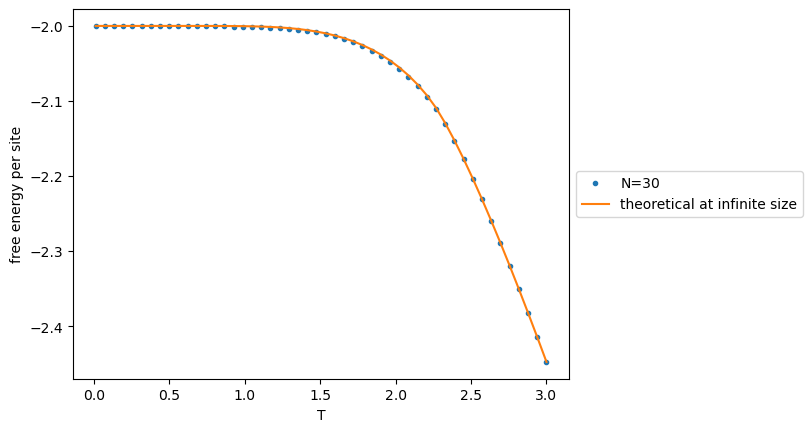

In [5]:

#Critical temperature for Ising (to be double checked: that our units match this)
T_c = 2/(np.log(1+np.sqrt(2)))
print('T_c:',T_c)

#taking https://arxiv.org/pdf/1706.02541 as ref for Onsager
def free_energy_Onsager(T):
    beta = 1/T
    integral = integrate.quad(lambda x: np.log(1+np.sqrt(1-(2*np.sinh(2*beta)/(np.cosh(2*beta))**2 )**2 * np.cos(x)**2)), 0, np.pi)
    f =  -1*np.log(2)/2 - np.log(np.cosh(2*beta)) - 1/(2*np.pi)*integral[0]
    return f*T

#Wikipedia version for comparison
def free_energy_Onsager2(T):
    beta = 1/T
    integral = integrate.dblquad(lambda x,y: np.log( np.cosh(2*beta)*np.cosh(2*beta)  - np.sinh(2*beta)*np.cos(x) - np.sinh(2*beta)*np.cos(y)  ), 0, 2*np.pi,0,2*np.pi)
    f =  np.log(2) + 1/(8*np.pi**2)*integral[0]
    return f*(-T)

exact_log = [mp.log((max(x,1e-100))) for x in Ising_exact_30] #max(x,0.1) just to avoid log(0)
N = 30

    
print('f theoretical expression 1:',free_energy_Onsager(T_c))
print('f theoretical expression 2:',free_energy_Onsager2(T_c))
print('f from exact g(E), N=30:',free_energy(exact_log,T_c,N)/N**2)



T_vals = np.linspace(0.01,3,50)
f_vals = []
f_vals_Onsager = []

for T in T_vals:
    f_vals.append(free_energy(exact_log, T,N)/N**2)
    f_vals_Onsager.append(free_energy_Onsager(T))
plt.figure()
plt.plot(T_vals, f_vals,'.',label='N=30')
plt.plot(T_vals, f_vals_Onsager,label='theoretical at infinite size')
plt.xlabel('T')
plt.ylabel('free energy per site')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

### Next, we want to extract the finite size corrections. Note, however, that the current data is not for a square but for a torus.

In [6]:
N_vals = [6,8,10,12,14,16,18,20,22,24,26,28,30]
exact_logs = []
exact_logs.append([mp.log((max(x,1e-100))) for x in Ising_exact_6])
exact_logs.append([mp.log((max(x,1e-100))) for x in Ising_exact_8])
exact_logs.append([mp.log((max(x,1e-100))) for x in Ising_exact_10])
exact_logs.append([mp.log((max(x,1e-100))) for x in Ising_exact_12])
exact_logs.append([mp.log((max(x,1e-100))) for x in Ising_exact_14])
exact_logs.append([mp.log((max(x,1e-100))) for x in Ising_exact_16])
exact_logs.append([mp.log((max(x,1e-100))) for x in Ising_exact_18])
exact_logs.append([mp.log((max(x,1e-100))) for x in Ising_exact_20])
exact_logs.append([mp.log((max(x,1e-100))) for x in Ising_exact_22])
exact_logs.append([mp.log((max(x,1e-100))) for x in Ising_exact_24])
exact_logs.append([mp.log((max(x,1e-100))) for x in Ising_exact_26])
exact_logs.append([mp.log((max(x,1e-100))) for x in Ising_exact_28])
exact_logs.append([mp.log((max(x,1e-100))) for x in Ising_exact_30])


N_vals_100 = [6,8,10,12,14]
exact_logs_100 = []
exact_logs_100.append([mp.log((max(x,1e-100))) for x in Ising_exact_6_100])
exact_logs_100.append([mp.log((max(x,1e-100))) for x in Ising_exact_8_100])
exact_logs_100.append([mp.log((max(x,1e-100))) for x in Ising_exact_10_100])
exact_logs_100.append([mp.log((max(x,1e-100))) for x in Ising_exact_12_100])
exact_logs_100.append([mp.log((max(x,1e-100))) for x in Ising_exact_14_100])


N_vals_200 = [6,8,10,12,14]
exact_logs_200 = []
exact_logs_200.append([mp.log((max(x,1e-100))) for x in Ising_exact_6_200])
exact_logs_200.append([mp.log((max(x,1e-100))) for x in Ising_exact_8_200])
exact_logs_200.append([mp.log((max(x,1e-100))) for x in Ising_exact_10_200])
exact_logs_200.append([mp.log((max(x,1e-100))) for x in Ising_exact_12_200])
exact_logs_200.append([mp.log((max(x,1e-100))) for x in Ising_exact_14_200])

-1600
1600
-3200
3200


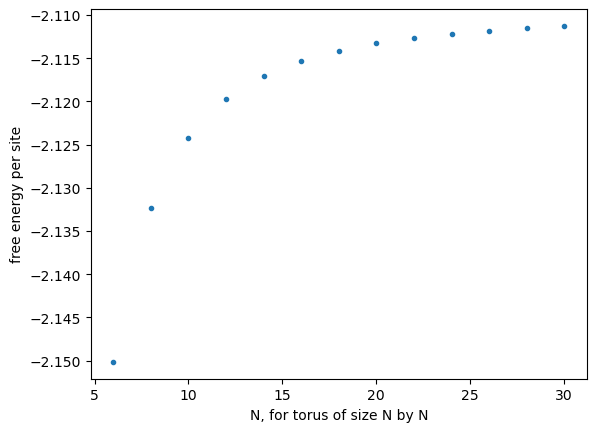

In [7]:
def free_energy_MN(log_g_list, T, M,N):
    #Need to log sum over g(E)*exp(-E/T) without overflow issues
    Z = 0
    
    to_sum = []
    for i, log_g in enumerate(log_g_list):
        
        E = 4*i - 2*N*M #Note: depends on histogram bin width
        to_sum.append(log_g - E/T)
    
    maxval = max(to_sum)
    exp_sum = 0
    for value in to_sum:
        exp_sum += mp.exp(value-maxval)
        
    res = maxval + mp.log(exp_sum)
    return -T*res

N = 8
M = 100
exact_log_100 = [mp.log((max(x,1e-100))) for x in Ising_exact_8_100]
print(-2*M*N)
print(-2*M*N+4*(len(exact_log_100)-1))
M = 200
exact_log_200 = [mp.log((max(x,1e-100))) for x in Ising_exact_8_200]
print(-2*M*N)
print(-2*M*N+4*(len(exact_log_200)-1))
offset = 0


f_vals = []
for i in range(len(N_vals)):
    f = free_energy(exact_logs[i], T_c,N_vals[i])/N_vals[i]**2
    f_vals.append(f)
plt.figure()
plt.plot(N_vals[offset:], f_vals[offset:],'.')
plt.ylabel('free energy per site')
plt.xlabel('N, for torus of size N by N')
plt.show()

f_vals_100 = []
for i in range(len(N_vals_100)):
    f = free_energy_MN(exact_logs_100[i], T_c,N_vals_100[i],100)/(N_vals_100[i]*100)
    f_vals_100.append(f)

f_vals_200 = []
for i in range(len(N_vals_200)):
    f = free_energy_MN(exact_logs_200[i], T_c,N_vals_200[i],200)/(N_vals_200[i]*200)
    f_vals_200.append(f)


Fitting function for rectangle (from Wu, Izmailian, Guo paper): $f = f_{\infty} + f_{surf}\frac{M+N}{S} + f_{corn}\frac{\ln{S}}{S} + \sum_{k=1}^{\infty}\frac{A_k}{S^{(k+1)/2}}$ with $f$ the free energy per site. We want to determine $f_{corn}$, to obtain the central charge from $f_{corn} = \frac{c}{8}$. Here $S=MN$.



For a torus:  a ref that is also getting c from a torus using Wang-Landau (but for site-diluted Ising): https://arxiv.org/pdf/1611.09750 From there, if $M\gg N$ we can expand (as in their eq 3). (Note: their eq 3 might assume unitarity of the CFT -- to be double checked for when we move to the Nishimori point. But in gerenal we're just taking the limit where we can pretend that we have a cylinder rather than a torus, so it should be fine.) 

$f(M,N) = f_{\infty} - \frac{T_c \pi c}{6 N^2} - \frac{T_c}{MN}\sum_{i\neq 0, \bar{i}\neq 0} \mathcal{M}_{i,\bar{i}}q^{h_i + \bar{h}_i}$

In their conventions, $f(M,N) = -\frac{T_c}{MN}\ln(Z)$. This is also the conventions we use. 


In the limit $\frac{M}{N}\to\infty$ the last term becomes negligible and we can extract $c$. (We reduce to the cylinder case). We can follow the method used in this reference of first extrapolating to large $M$, then using the extrapolated values to fit. For cylinder in conventions without $T_c$: $f = f_{\infty} + \frac{c\pi}{6N^2}$

In [8]:
def fit_function_square(N, a,b,c,d,e):
    M = N
    S = M*N
    return a + b*(M+N)/S + c*np.log(S)/S + d*1/S + e*1/np.power(S,3/2) # + ... higher order terms

def fit_function_cylinder(N, a,b,c):
    return a + b/N**2 + c/N**4 # + ... higher order terms

offset = 0

fit = curve_fit(fit_function_cylinder, N_vals[offset:], f_vals[offset:])
parameters = fit[0]
print('"Cylinder" fit of torus with N = M = 6...30, not expected to give central charge:',parameters[1]*6/np.pi/(-T_c))

fit_100 = curve_fit(fit_function_cylinder, N_vals_100[offset:], f_vals_100[offset:])
parameters_100 = fit_100[0]
print('Central charge estimate with M = 100, N = 6...14:',parameters_100[1]*6/np.pi/(-T_c))

fit_200 = curve_fit(fit_function_cylinder, N_vals_200[offset:], f_vals_200[offset:])
parameters_200 = fit_200[0]
print('Better central charge estimate with M = 200, N = 6...14:',parameters_200[1]*6/np.pi/(-T_c))

print('Theoretical value', 1/2)

"Cylinder" fit of torus with N = M = 6...30, not expected to give central charge: 1.2217757654633616
Central charge estimate with M = 100, N = 6...14: 0.4983379755994562
Better central charge estimate with M = 200, N = 6...14: 0.4992292684606908
Theoretical value 0.5


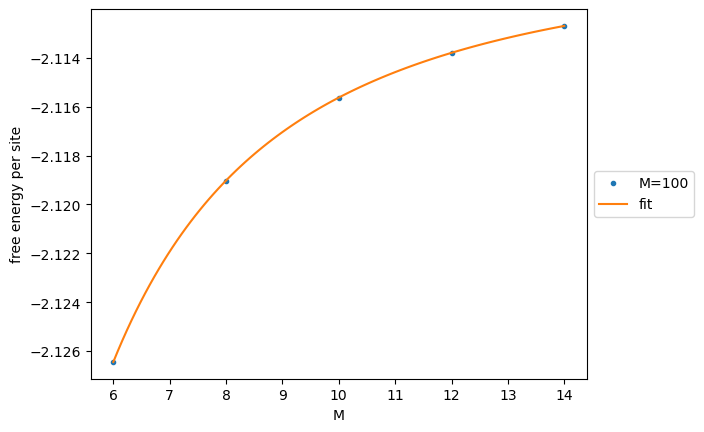

f_inf: -2.109664266914378


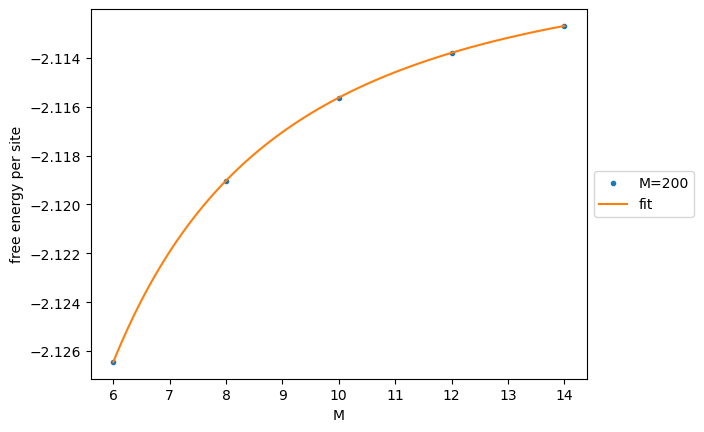

f_inf: -2.109654651176937


In [9]:
plt.figure()
plt.plot(N_vals_100[offset:], f_vals_100[offset:],'.',label='M=100')
Nrange = np.linspace(N_vals_100[offset],N_vals_100[-1],100)
plt.plot(Nrange, [fit_function_cylinder(N, parameters_100[0],parameters_100[1],parameters_100[2]) for N in Nrange],label='fit')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('M')
plt.ylabel('free energy per site')
plt.show()
print('f_inf:',parameters_100[0])

plt.figure()
plt.plot(N_vals_200[offset:], f_vals_200[offset:],'.',label='M=200')
Nrange = np.linspace(N_vals_200[offset],N_vals_200[-1],100)
plt.plot(Nrange, [fit_function_cylinder(N, parameters_200[0],parameters_200[1],parameters_200[2]) for N in Nrange],label='fit')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('M')
plt.ylabel('free energy per site')
plt.show()
print('f_inf:',parameters_200[0])


In [10]:
def get_c_term(T, exact_logs, N_vals, M):
        f_vals = []
        for i in range(len(N_vals)):
            f = free_energy_MN(exact_logs[i], T,N_vals[i],100)/(N_vals[i]*M)
            f_vals.append(f)
            
        fit = curve_fit(fit_function_cylinder, N_vals, f_vals)
        parameters = fit[0]
        c_term = parameters[1]*6/np.pi/(-T_c)
            
        return c_term
    
    
T_vals = np.linspace(T_c-1, T_c+1, 101)
c_vals_100 = []
for T in T_vals:
    c_vals_100.append(get_c_term(T, exact_logs_100, N_vals_100,M=100))

    
c_vals_200 = []
for T in T_vals:
    c_vals_200.append(get_c_term(T, exact_logs_200, N_vals_200,M=200))

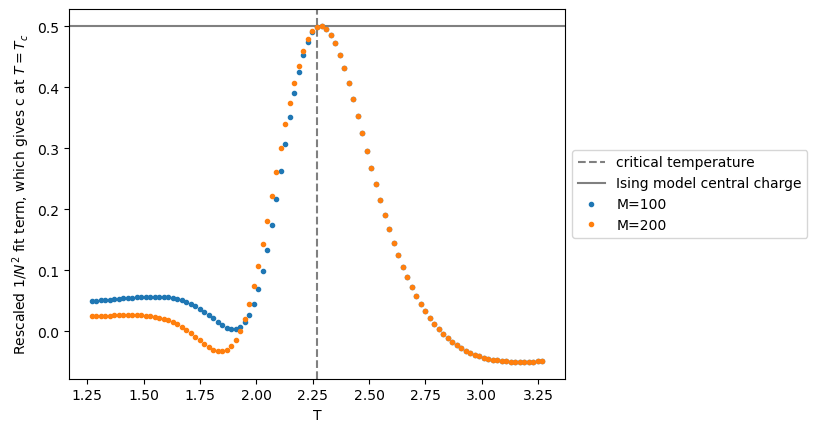

Central charge estimate with M = 100, N = 6...14: 0.4983379755994562
Better central charge estimate with M = 200, N = 6...14: 0.4992292684606908
Theoretical value 0.5


In [11]:
plt.figure()

plt.axvline(x=T_c,linestyle='--',color='grey',label='critical temperature')
plt.axhline(y=0.5,color='grey',label='Ising model central charge')

plt.plot(T_vals,c_vals_100,'.',label="M=100")
plt.plot(T_vals,c_vals_200,'.',label="M=200")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel(r'Rescaled $1/N^2$ fit term, which gives c at $T=T_c$')
plt.xlabel('T')
plt.show()

print('Central charge estimate with M = 100, N = 6...14:',parameters_100[1]*6/np.pi/(-T_c))
print('Better central charge estimate with M = 200, N = 6...14:',parameters_200[1]*6/np.pi/(-T_c))
print('Theoretical value', 1/2)